In [1]:
from parcels import ParticleSet
from parcels import JITParticle
from parcels import AdvectionRK4_3D
from parcels import AdvectionRK4
from datetime import timedelta
import numpy as np
from parcels import FieldSet
from glob import glob

In [2]:
## parameters
## set the number of particles
num_particles = 10_000

## Set the location of the particles
channel_lon_bds = (0,4.5) # use inmutable objects
channel_lat_bds = (0+1,18-1)

## set the tracking time
days = 360
minutes = 20

## record the particles every timestep of
hours=4

In [3]:
# Parameters
num_particles = 10000
days = 5000


In [4]:
##prepare the files
path1= '/gxfs_work/geomar/smomw662/FESOM_data/channel_interp'

ufiles = sorted(glob(f"{path1}/u.19*.nc"))
vfiles = sorted(glob(f"{path1}/v.19*.nc"))
wfiles = sorted(glob(f"{path1}/w.19*.nc"))

 
lon_start = np.random.uniform(*channel_lon_bds,size=(num_particles,)) 
lat_start = np.random.uniform(*channel_lat_bds, size=(num_particles,))


In [5]:
## define the fieldset
filenames = {"U": ufiles,
             "V": vfiles,
             "W": wfiles,
            }

variables = {"U": "u",
             "V": "v",
             "W": "w",}

dimensions = {'time': 'time',
              'depth': 'z',
              'lat': 'grid_lat',
              'lon': 'grid_lon'}


In [6]:
fieldset = FieldSet.from_netcdf(
    filenames, 
    variables, 
    dimensions,
    time_periodic=False,
    allow_time_extrapolation=False,    
)


In [7]:
## add the Halo
fieldset.add_constant("halo_west", fieldset.U.grid.lon[0])
fieldset.add_constant("halo_east", fieldset.U.grid.lon[-1])
fieldset.add_periodic_halo(zonal=True)

def periodicBC(particle,fielset,time):
    if particle.lon < fieldset.halo_west:
        particle_dlon += fieldset.halo_east - fieldset.halo_west
    elif particle.lon > fieldset.halo_east:
        particle_dlon -= fieldset.halo_east - fieldset.halo_west

##check the error
def CheckError(particle, fieldset, time):
    if particle.state >= 50:  # This captures all Errors
        particle.delete()

In [8]:
## Time and depth initial conditios
time_origin=np.array([str(fieldset.time_origin)],dtype='datetime64[ns]')
time = np.repeat(time_origin, num_particles)  # Assign the same time to all particles
depth = np.random.uniform(0,4000, size=num_particles)  # Choose random depths

In [9]:
## initiate pset
pset = ParticleSet(
    fieldset=fieldset,
    pclass=JITParticle,
    lon = lon_start,
    lat = lat_start,
    depth=depth,
    time=time
) 

In [10]:
t=str(time_origin[0])

out_path = '/gxfs_work/geomar/smomw662/FESOMparcels_first/data/' #path to store the particle zarr
out_fn = 'Parcels_run_'+t[0:10]

output_file = pset.ParticleFile(name=out_path+out_fn, 
                                outputdt=timedelta(hours=hours))

In [11]:
## Execute particles
pset.execute(
    [AdvectionRK4_3D,periodicBC,CheckError],
    runtime=timedelta(days=days),
    dt=timedelta(minutes=minutes),
    output_file= output_file
)

INFO: Output files are stored in /gxfs_work/geomar/smomw662/FESOMparcels_first/data/Parcels_run_1960-01-01.zarr.


  0%|          | 0/432000000.0 [00:00<?, ?it/s]

  0%|          | 0.0/432000000.0 [00:00<?, ?it/s]

  0%|          | 1200.0/432000000.0 [16:05<96491:39:23,  1.24it/s]

  0%|          | 14400.0/432000000.0 [16:05<5773:57:54, 20.78it/s]

  0%|          | 28800.0/432000000.0 [16:05<2343:01:34, 51.21it/s]

  0%|          | 43200.0/432000000.0 [16:05<1267:48:29, 94.64it/s]

  0%|          | 57600.0/432000000.0 [16:05<766:10:30, 156.60it/s]

  0%|          | 72000.0/432000000.0 [16:06<489:49:33, 244.94it/s]

  0%|          | 86400.0/432000000.0 [16:06<324:14:14, 370.03it/s]

  0%|          | 100800.0/432000000.0 [16:06<218:38:29, 548.72it/s]

  0%|          | 115200.0/432000000.0 [16:06<149:29:04, 802.54it/s]

  0%|          | 129600.0/432000000.0 [16:07<103:12:11, 1162.41it/s]

  0%|          | 144000.0/432000000.0 [16:07<71:47:14, 1671.05it/s] 

  0%|          | 158400.0/432000000.0 [16:07<50:16:17, 2386.16it/s]

  0%|          | 172800.0/432000000.0 [16:07<36:03:38, 3326.39it/s]

  0%|          | 187200.0/432000000.0 [16:07<25:35:34, 4686.77it/s]

  0%|          | 201600.0/432000000.0 [16:08<18:18:16, 6552.64it/s]

  0%|          | 216000.0/432000000.0 [16:08<13:13:41, 9066.98it/s]

  0%|          | 230400.0/432000000.0 [16:08<9:41:18, 12379.37it/s]

  0%|          | 244800.0/432000000.0 [16:08<7:13:07, 16614.05it/s]

  0%|          | 259200.0/432000000.0 [16:09<5:51:09, 20491.50it/s]

  0%|          | 273600.0/432000000.0 [16:09<4:32:44, 26381.91it/s]

  0%|          | 288000.0/432000000.0 [16:09<3:37:19, 33107.53it/s]

  0%|          | 302400.0/432000000.0 [16:09<2:58:34, 40289.42it/s]

  0%|          | 316800.0/432000000.0 [16:09<2:31:38, 47446.13it/s]

  0%|          | 331200.0/432000000.0 [16:09<2:12:33, 54276.26it/s]

  0%|          | 345600.0/432000000.0 [16:10<2:21:46, 50744.20it/s]

  0%|          | 360000.0/432000000.0 [16:10<2:06:33, 56845.12it/s]

  0%|          | 374400.0/432000000.0 [16:10<1:55:20, 62369.34it/s]

  0%|          | 388800.0/432000000.0 [16:10<1:47:14, 67081.53it/s]

  0%|          | 403200.0/432000000.0 [16:10<1:41:35, 70804.89it/s]

  0%|          | 417600.0/432000000.0 [16:11<1:37:40, 73640.96it/s]

  0%|          | 432000.0/432000000.0 [16:11<1:56:38, 61668.36it/s]

  0%|          | 446400.0/432000000.0 [16:11<1:48:45, 66128.65it/s]

  0%|          | 460800.0/432000000.0 [16:11<1:42:33, 70128.65it/s]

  0%|          | 475200.0/432000000.0 [16:11<1:38:20, 73130.99it/s]

  0%|          | 489600.0/432000000.0 [16:12<1:35:27, 75346.53it/s]

  0%|          | 504000.0/432000000.0 [16:12<1:33:15, 77109.12it/s]

  0%|          | 518400.0/432000000.0 [16:12<1:53:26, 63392.68it/s]

  0%|          | 532800.0/432000000.0 [16:12<1:46:44, 67373.73it/s]

  0%|          | 547200.0/432000000.0 [16:13<1:41:19, 70966.18it/s]

  0%|          | 561600.0/432000000.0 [16:13<1:37:36, 73667.81it/s]

  0%|          | 576000.0/432000000.0 [16:13<1:35:10, 75548.78it/s]

  0%|          | 590400.0/432000000.0 [16:13<1:33:15, 77096.46it/s]

  0%|          | 604800.0/432000000.0 [16:13<1:53:29, 63350.43it/s]

  0%|          | 619200.0/432000000.0 [16:14<1:47:12, 67063.84it/s]

  0%|          | 633600.0/432000000.0 [16:14<1:41:49, 70610.04it/s]

  0%|          | 648000.0/432000000.0 [16:14<1:37:49, 73486.86it/s]

  0%|          | 662400.0/432000000.0 [16:14<1:39:05, 72553.16it/s]

  0%|          | 676800.0/432000000.0 [16:14<1:35:55, 74946.78it/s]

  0%|          | 691200.0/432000000.0 [16:15<1:55:47, 62083.43it/s]

  0%|          | 705600.0/432000000.0 [16:15<1:48:07, 66480.80it/s]

  0%|          | 720000.0/432000000.0 [16:15<1:42:09, 70362.34it/s]

  0%|          | 734400.0/432000000.0 [16:15<1:38:04, 73294.53it/s]

  0%|          | 748800.0/432000000.0 [16:15<1:35:11, 75507.82it/s]

  0%|          | 763200.0/432000000.0 [16:16<1:33:17, 77046.03it/s]

  0%|          | 777600.0/432000000.0 [16:16<1:53:40, 63220.34it/s]

  0%|          | 792000.0/432000000.0 [16:16<1:46:54, 67223.09it/s]

  0%|          | 806400.0/432000000.0 [16:16<1:41:25, 70852.85it/s]

  0%|          | 820800.0/432000000.0 [16:16<1:37:34, 73651.52it/s]

  0%|          | 835200.0/432000000.0 [16:17<1:35:07, 75550.06it/s]

  0%|          | 849600.0/432000000.0 [16:17<1:33:03, 77224.40it/s]

  0%|          | 864000.0/432000000.0 [16:17<1:53:28, 63323.44it/s]

  0%|          | 878400.0/432000000.0 [16:17<1:46:41, 67350.00it/s]

  0%|          | 892800.0/432000000.0 [16:17<1:42:00, 70440.80it/s]

  0%|          | 907200.0/432000000.0 [16:18<1:38:23, 73024.86it/s]

  0%|          | 921600.0/432000000.0 [16:18<1:35:29, 75238.69it/s]

  0%|          | 936000.0/432000000.0 [16:18<1:33:37, 76734.49it/s]

  0%|          | 950400.0/432000000.0 [16:18<2:08:47, 55782.45it/s]

  0%|          | 964800.0/432000000.0 [16:19<1:57:21, 61214.26it/s]

  0%|          | 979200.0/432000000.0 [16:19<1:48:46, 66037.22it/s]

  0%|          | 993600.0/432000000.0 [16:19<1:42:49, 69858.33it/s]

  0%|          | 1008000.0/432000000.0 [16:19<1:42:46, 69888.50it/s]

  0%|          | 1022400.0/432000000.0 [16:19<1:38:31, 72904.59it/s]

  0%|          | 1036800.0/432000000.0 [16:20<1:57:05, 61343.80it/s]

  0%|          | 1051200.0/432000000.0 [16:20<1:49:09, 65799.37it/s]

  0%|          | 1065600.0/432000000.0 [16:20<1:43:14, 69563.20it/s]

  0%|          | 1080000.0/432000000.0 [16:20<1:38:52, 72637.40it/s]

  0%|          | 1094400.0/432000000.0 [16:20<1:35:49, 74945.52it/s]

  0%|          | 1108800.0/432000000.0 [16:21<1:33:47, 76562.81it/s]

  0%|          | 1123200.0/432000000.0 [16:21<1:53:57, 63013.69it/s]

  0%|          | 1137600.0/432000000.0 [16:21<1:47:21, 66888.55it/s]

  0%|          | 1152000.0/432000000.0 [16:21<1:41:50, 70505.77it/s]

  0%|          | 1166400.0/432000000.0 [16:21<1:38:02, 73242.24it/s]

  0%|          | 1180800.0/432000000.0 [16:22<1:35:29, 75198.97it/s]

  0%|          | 1195200.0/432000000.0 [16:22<1:33:34, 76733.57it/s]

  0%|          | 1209600.0/432000000.0 [16:22<1:54:56, 62462.19it/s]

  0%|          | 1224000.0/432000000.0 [16:22<1:47:58, 66496.11it/s]

  0%|          | 1238400.0/432000000.0 [16:22<1:42:32, 70010.44it/s]

  0%|          | 1252800.0/432000000.0 [16:23<1:38:31, 72863.32it/s]

  0%|          | 1267200.0/432000000.0 [16:23<1:35:47, 74938.56it/s]

  0%|          | 1281600.0/432000000.0 [16:23<1:33:54, 76437.54it/s]

  0%|          | 1296000.0/432000000.0 [16:23<1:54:14, 62831.18it/s]

  0%|          | 1310400.0/432000000.0 [16:23<1:47:16, 66915.78it/s]

  0%|          | 1324800.0/432000000.0 [16:24<1:41:50, 70479.48it/s]

  0%|          | 1339200.0/432000000.0 [16:24<1:38:06, 73159.25it/s]

  0%|          | 1353600.0/432000000.0 [16:24<1:35:29, 75164.22it/s]

  0%|          | 1368000.0/432000000.0 [16:24<1:33:45, 76552.25it/s]

  0%|          | 1382400.0/432000000.0 [16:25<1:54:23, 62735.69it/s]

  0%|          | 1396800.0/432000000.0 [16:25<1:47:25, 66805.73it/s]

  0%|          | 1411200.0/432000000.0 [16:25<1:42:01, 70335.93it/s]

  0%|          | 1425600.0/432000000.0 [16:25<1:38:05, 73153.53it/s]

  0%|          | 1440000.0/432000000.0 [16:25<1:35:19, 75277.86it/s]

  0%|          | 1454400.0/432000000.0 [16:25<1:33:29, 76752.06it/s]

  0%|          | 1468800.0/432000000.0 [16:26<1:54:01, 62928.60it/s]

  0%|          | 1483200.0/432000000.0 [16:26<1:47:18, 66862.87it/s]

  0%|          | 1497600.0/432000000.0 [16:26<1:42:04, 70290.73it/s]

  0%|          | 1512000.0/432000000.0 [16:26<1:38:11, 73070.18it/s]

  0%|          | 1526400.0/432000000.0 [16:26<1:35:30, 75114.53it/s]

  0%|          | 1540800.0/432000000.0 [16:27<1:33:48, 76472.28it/s]

  0%|          | 1555200.0/432000000.0 [16:27<1:55:01, 62369.53it/s]

  0%|          | 1569600.0/432000000.0 [16:27<1:48:02, 66403.66it/s]

  0%|          | 1584000.0/432000000.0 [16:27<1:42:20, 70092.96it/s]

  0%|          | 1598400.0/432000000.0 [16:28<1:39:53, 71815.79it/s]

  0%|          | 1612800.0/432000000.0 [16:28<1:36:57, 73987.41it/s]

  0%|          | 1627200.0/432000000.0 [16:28<1:34:41, 75750.94it/s]

  0%|          | 1641600.0/432000000.0 [16:28<1:54:48, 62471.99it/s]

  0%|          | 1656000.0/432000000.0 [16:28<1:47:56, 66446.38it/s]

  0%|          | 1670400.0/432000000.0 [16:29<1:42:24, 70039.44it/s]

  0%|          | 1684800.0/432000000.0 [16:29<1:38:26, 72857.99it/s]

  0%|          | 1699200.0/432000000.0 [16:29<1:35:48, 74856.29it/s]

  0%|          | 1713600.0/432000000.0 [16:29<1:37:49, 73303.67it/s]

  0%|          | 1728000.0/432000000.0 [16:29<1:56:58, 61304.52it/s]

  0%|          | 1742400.0/432000000.0 [16:30<1:49:14, 65638.67it/s]

  0%|          | 1756800.0/432000000.0 [16:30<1:43:21, 69371.83it/s]

  0%|          | 1771200.0/432000000.0 [16:30<1:39:25, 72114.39it/s]

  0%|          | 1785600.0/432000000.0 [16:30<1:36:27, 74330.30it/s]

  0%|          | 1800000.0/432000000.0 [16:30<1:34:39, 75744.75it/s]

  0%|          | 1814400.0/432000000.0 [16:31<1:54:31, 62600.84it/s]

  0%|          | 1828800.0/432000000.0 [16:31<1:48:13, 66248.28it/s]

  0%|          | 1843200.0/432000000.0 [16:31<1:42:43, 69794.89it/s]

  0%|          | 1857600.0/432000000.0 [16:31<1:38:49, 72540.52it/s]

  0%|          | 1872000.0/432000000.0 [16:31<1:36:06, 74589.62it/s]

  0%|          | 1886400.0/432000000.0 [16:32<1:34:21, 75972.55it/s]

  0%|          | 1900800.0/432000000.0 [16:32<1:54:29, 62606.85it/s]

  0%|          | 1915200.0/432000000.0 [16:32<1:48:57, 65784.91it/s]

  0%|          | 1929600.0/432000000.0 [16:32<1:43:29, 69254.49it/s]

  0%|          | 1944000.0/432000000.0 [16:32<1:39:50, 71787.36it/s]

  0%|          | 1958400.0/432000000.0 [16:33<1:36:57, 73920.53it/s]

  0%|          | 1972800.0/432000000.0 [16:33<1:34:40, 75705.15it/s]

  0%|          | 1987200.0/432000000.0 [16:33<1:55:22, 62118.92it/s]

  0%|          | 2001600.0/432000000.0 [16:33<1:48:46, 65882.44it/s]

  0%|          | 2016000.0/432000000.0 [16:34<1:43:31, 69227.81it/s]

  0%|          | 2030400.0/432000000.0 [16:34<1:39:23, 72105.06it/s]

  0%|          | 2044800.0/432000000.0 [16:34<1:36:36, 74175.11it/s]

  0%|          | 2059200.0/432000000.0 [16:34<1:34:35, 75750.71it/s]

  0%|          | 2073600.0/432000000.0 [16:34<1:54:40, 62486.62it/s]

  0%|          | 2088000.0/432000000.0 [16:35<1:47:54, 66397.66it/s]

  0%|          | 2102400.0/432000000.0 [16:35<1:42:29, 69906.39it/s]

  0%|          | 2116800.0/432000000.0 [16:35<1:39:47, 71795.64it/s]

  0%|          | 2131200.0/432000000.0 [16:35<1:37:56, 73156.35it/s]

  0%|          | 2145600.0/432000000.0 [16:35<1:35:42, 74858.24it/s]

  0%|          | 2160000.0/432000000.0 [16:36<1:55:29, 62026.06it/s]

  1%|          | 2174400.0/432000000.0 [16:36<1:48:31, 66005.19it/s]

  1%|          | 2188800.0/432000000.0 [16:36<1:43:06, 69472.21it/s]

  1%|          | 2203200.0/432000000.0 [16:36<1:39:01, 72332.87it/s]

  1%|          | 2217600.0/432000000.0 [16:36<1:36:14, 74426.24it/s]

  1%|          | 2232000.0/432000000.0 [16:37<1:34:18, 75945.51it/s]

  1%|          | 2246400.0/432000000.0 [16:37<1:54:35, 62509.53it/s]

  1%|          | 2260800.0/432000000.0 [16:37<1:48:06, 66255.93it/s]

  1%|          | 2275200.0/432000000.0 [16:37<1:42:34, 69827.19it/s]

  1%|          | 2289600.0/432000000.0 [16:37<1:38:54, 72410.95it/s]

  1%|          | 2304000.0/432000000.0 [16:38<1:36:40, 74081.53it/s]

  1%|          | 2318400.0/432000000.0 [16:38<1:34:31, 75759.41it/s]

  1%|          | 2332800.0/432000000.0 [16:38<1:55:33, 61968.10it/s]

  1%|          | 2347200.0/432000000.0 [16:38<1:48:32, 65970.69it/s]

  1%|          | 2361600.0/432000000.0 [16:39<1:42:53, 69594.60it/s]

  1%|          | 2376000.0/432000000.0 [16:39<1:39:21, 72070.99it/s]

  1%|          | 2390400.0/432000000.0 [16:39<1:36:37, 74100.09it/s]

  1%|          | 2404800.0/432000000.0 [16:39<1:35:04, 75307.48it/s]

  1%|          | 2419200.0/432000000.0 [16:39<1:55:01, 62241.90it/s]

  1%|          | 2433600.0/432000000.0 [16:40<1:48:08, 66208.45it/s]

  1%|          | 2448000.0/432000000.0 [16:40<1:43:11, 69373.84it/s]

  1%|          | 2462400.0/432000000.0 [16:40<1:39:32, 71913.31it/s]

  1%|          | 2476800.0/432000000.0 [16:40<1:36:58, 73825.90it/s]

  1%|          | 2491200.0/432000000.0 [16:40<1:34:53, 75437.24it/s]

  1%|          | 2505600.0/432000000.0 [16:41<1:55:08, 62171.47it/s]

  1%|          | 2520000.0/432000000.0 [16:41<1:48:21, 66059.32it/s]

  1%|          | 2534400.0/432000000.0 [16:41<1:42:46, 69640.61it/s]

  1%|          | 2548800.0/432000000.0 [16:41<1:39:01, 72280.34it/s]

  1%|          | 2563200.0/432000000.0 [16:41<1:36:23, 74250.11it/s]

  1%|          | 2577600.0/432000000.0 [16:42<1:34:30, 75731.08it/s]

  1%|          | 2592000.0/432000000.0 [16:42<1:55:36, 61908.82it/s]

  1%|          | 2606400.0/432000000.0 [16:42<1:48:39, 65867.98it/s]

  1%|          | 2620800.0/432000000.0 [16:42<1:43:19, 69259.51it/s]

  1%|          | 2635200.0/432000000.0 [16:42<1:39:30, 71917.98it/s]

  1%|          | 2649600.0/432000000.0 [16:43<1:36:57, 73805.80it/s]

  1%|          | 2664000.0/432000000.0 [16:43<1:35:09, 75195.78it/s]

  1%|          | 2678400.0/432000000.0 [16:43<1:55:17, 62065.14it/s]

  1%|          | 2692800.0/432000000.0 [16:43<1:48:29, 65947.71it/s]

  1%|          | 2707200.0/432000000.0 [16:43<1:43:08, 69368.18it/s]

  1%|          | 2721600.0/432000000.0 [16:44<1:39:14, 72096.14it/s]

  1%|          | 2736000.0/432000000.0 [16:44<1:36:31, 74125.05it/s]

  1%|          | 2750400.0/432000000.0 [16:44<1:34:55, 75367.60it/s]

  1%|          | 2764800.0/432000000.0 [16:44<1:55:08, 62132.67it/s]

  1%|          | 2779200.0/432000000.0 [16:45<1:48:24, 65984.56it/s]

  1%|          | 2793600.0/432000000.0 [16:45<1:43:34, 69064.41it/s]

  1%|          | 2808000.0/432000000.0 [16:45<1:39:37, 71797.25it/s]

  1%|          | 2822400.0/432000000.0 [16:45<1:36:47, 73901.16it/s]

  1%|          | 2836800.0/432000000.0 [16:45<1:34:55, 75347.89it/s]

  1%|          | 2851200.0/432000000.0 [16:46<1:55:46, 61777.74it/s]

  1%|          | 2865600.0/432000000.0 [16:46<1:48:55, 65663.03it/s]

  1%|          | 2880000.0/432000000.0 [16:46<1:43:25, 69153.32it/s]

  1%|          | 2894400.0/432000000.0 [16:46<1:39:44, 71707.35it/s]

  1%|          | 2908800.0/432000000.0 [16:46<1:37:09, 73604.18it/s]

  1%|          | 2923200.0/432000000.0 [16:47<1:35:21, 74991.30it/s]

  1%|          | 2937600.0/432000000.0 [16:47<1:55:40, 61818.49it/s]

  1%|          | 2952000.0/432000000.0 [16:47<1:48:54, 65659.60it/s]

  1%|          | 2966400.0/432000000.0 [16:47<1:43:51, 68853.22it/s]

  1%|          | 2980800.0/432000000.0 [16:47<1:39:57, 71530.48it/s]

  1%|          | 2995200.0/432000000.0 [16:48<1:37:04, 73660.45it/s]

  1%|          | 3009600.0/432000000.0 [16:48<1:35:00, 75258.60it/s]

  1%|          | 3024000.0/432000000.0 [16:48<1:55:10, 62073.09it/s]

  1%|          | 3038400.0/432000000.0 [16:48<1:48:24, 65948.03it/s]

  1%|          | 3052800.0/432000000.0 [16:48<1:42:59, 69414.95it/s]

  1%|          | 3067200.0/432000000.0 [16:49<1:39:13, 72044.95it/s]

  1%|          | 3081600.0/432000000.0 [16:49<1:36:37, 73986.94it/s]

  1%|          | 3096000.0/432000000.0 [16:49<1:34:40, 75501.49it/s]

  1%|          | 3110400.0/432000000.0 [16:49<1:54:52, 62229.96it/s]

  1%|          | 3124800.0/432000000.0 [16:50<1:48:22, 65959.34it/s]

  1%|          | 3139200.0/432000000.0 [16:50<1:43:03, 69354.60it/s]

  1%|          | 3153600.0/432000000.0 [16:50<1:39:27, 71860.24it/s]

  1%|          | 3168000.0/432000000.0 [16:50<1:37:02, 73647.90it/s]

  1%|          | 3182400.0/432000000.0 [16:50<1:35:16, 75018.36it/s]

  1%|          | 3196800.0/432000000.0 [16:51<1:55:00, 62145.00it/s]

  1%|          | 3211200.0/432000000.0 [16:51<1:48:55, 65612.07it/s]

  1%|          | 3225600.0/432000000.0 [16:51<1:43:31, 69029.35it/s]

  1%|          | 3240000.0/432000000.0 [16:51<1:39:47, 71603.64it/s]

  1%|          | 3254400.0/432000000.0 [16:51<1:38:29, 72551.78it/s]

  1%|          | 3268800.0/432000000.0 [16:52<1:36:14, 74250.92it/s]

  1%|          | 3283200.0/432000000.0 [16:52<1:56:18, 61429.56it/s]

  1%|          | 3297600.0/432000000.0 [16:52<1:49:17, 65379.47it/s]

  1%|          | 3312000.0/432000000.0 [16:52<1:43:48, 68824.68it/s]

  1%|          | 3326400.0/432000000.0 [16:52<1:39:55, 71496.32it/s]

  1%|          | 3340800.0/432000000.0 [16:53<1:37:12, 73496.49it/s]

  1%|          | 3355200.0/432000000.0 [16:53<1:35:25, 74867.93it/s]

  1%|          | 3369600.0/432000000.0 [16:53<1:55:25, 61887.64it/s]

  1%|          | 3384000.0/432000000.0 [16:53<1:50:10, 64835.47it/s]

  1%|          | 3398400.0/432000000.0 [16:53<1:44:31, 68337.89it/s]

  1%|          | 3412800.0/432000000.0 [16:54<1:40:38, 70981.13it/s]

  1%|          | 3427200.0/432000000.0 [16:54<1:37:51, 72995.65it/s]

  1%|          | 3441600.0/432000000.0 [16:54<1:35:43, 74611.25it/s]

  1%|          | 3456000.0/432000000.0 [16:54<1:55:58, 61589.43it/s]

  1%|          | 3470400.0/432000000.0 [16:55<1:49:10, 65415.44it/s]

  1%|          | 3484800.0/432000000.0 [16:55<1:43:42, 68862.42it/s]

  1%|          | 3499200.0/432000000.0 [16:55<1:40:03, 71373.85it/s]

  1%|          | 3513600.0/432000000.0 [16:55<1:37:21, 73355.79it/s]

  1%|          | 3528000.0/432000000.0 [16:55<1:35:26, 74821.97it/s]

  1%|          | 3542400.0/432000000.0 [16:56<1:55:31, 61811.91it/s]

  1%|          | 3556800.0/432000000.0 [16:56<1:48:50, 65603.31it/s]

  1%|          | 3571200.0/432000000.0 [16:56<1:43:53, 68734.56it/s]

  1%|          | 3585600.0/432000000.0 [16:56<1:40:15, 71221.95it/s]

  1%|          | 3600000.0/432000000.0 [16:56<1:37:33, 73188.31it/s]

  1%|          | 3614400.0/432000000.0 [16:57<1:35:34, 74709.38it/s]

  1%|          | 3628800.0/432000000.0 [16:57<1:55:40, 61716.51it/s]

  1%|          | 3643200.0/432000000.0 [16:57<1:49:00, 65495.89it/s]

  1%|          | 3657600.0/432000000.0 [16:57<1:43:48, 68768.86it/s]

  1%|          | 3672000.0/432000000.0 [16:57<1:40:05, 71327.67it/s]

  1%|          | 3686400.0/432000000.0 [16:58<1:37:30, 73213.43it/s]

  1%|          | 3700800.0/432000000.0 [16:58<1:35:43, 74571.31it/s]

  1%|          | 3715200.0/432000000.0 [16:58<1:55:45, 61664.84it/s]

  1%|          | 3729600.0/432000000.0 [16:58<1:48:55, 65527.11it/s]

  1%|          | 3744000.0/432000000.0 [16:58<1:43:32, 68932.62it/s]

  1%|          | 3758400.0/432000000.0 [16:59<1:40:04, 71322.27it/s]

  1%|          | 3772800.0/432000000.0 [16:59<1:37:51, 72936.01it/s]

  1%|          | 3787200.0/432000000.0 [16:59<1:35:54, 74418.92it/s]

  1%|          | 3801600.0/432000000.0 [16:59<1:56:54, 61047.83it/s]

  1%|          | 3816000.0/432000000.0 [17:00<1:50:12, 64751.20it/s]

  1%|          | 3830400.0/432000000.0 [17:00<1:44:39, 68190.45it/s]

  1%|          | 3844800.0/432000000.0 [17:00<1:40:38, 70899.72it/s]

  1%|          | 3859200.0/432000000.0 [17:00<1:37:50, 72933.99it/s]

  1%|          | 3873600.0/432000000.0 [17:00<1:35:58, 74347.07it/s]

  1%|          | 3888000.0/432000000.0 [17:01<1:55:58, 61519.52it/s]

  1%|          | 3902400.0/432000000.0 [17:01<1:49:19, 65264.59it/s]

  1%|          | 3916800.0/432000000.0 [17:01<1:44:08, 68510.53it/s]

  1%|          | 3931200.0/432000000.0 [17:01<1:40:38, 70885.06it/s]

  1%|          | 3945600.0/432000000.0 [17:01<1:37:42, 73018.19it/s]

  1%|          | 3960000.0/432000000.0 [17:02<1:35:55, 74371.57it/s]

  1%|          | 3974400.0/432000000.0 [17:02<1:55:53, 61553.12it/s]

  1%|          | 3988800.0/432000000.0 [17:02<1:49:10, 65344.31it/s]

  1%|          | 4003200.0/432000000.0 [17:02<1:43:48, 68712.57it/s]

  1%|          | 4017600.0/432000000.0 [17:02<1:39:57, 71360.08it/s]

  1%|          | 4032000.0/432000000.0 [17:03<1:37:25, 73210.25it/s]

  1%|          | 4046400.0/432000000.0 [17:03<1:35:29, 74688.54it/s]

  1%|          | 4060800.0/432000000.0 [17:03<1:55:44, 61619.24it/s]

  1%|          | 4075200.0/432000000.0 [17:03<1:48:52, 65508.28it/s]

  1%|          | 4089600.0/432000000.0 [17:04<1:43:31, 68887.78it/s]

  1%|          | 4104000.0/432000000.0 [17:04<1:39:49, 71437.50it/s]

  1%|          | 4118400.0/432000000.0 [17:04<1:37:13, 73345.96it/s]

  1%|          | 4132800.0/432000000.0 [17:04<1:35:23, 74755.06it/s]

  1%|          | 4147200.0/432000000.0 [17:04<1:55:25, 61777.36it/s]

  1%|          | 4161600.0/432000000.0 [17:05<1:49:01, 65407.74it/s]

  1%|          | 4176000.0/432000000.0 [17:05<1:43:45, 68725.94it/s]

  1%|          | 4190400.0/432000000.0 [17:05<1:40:03, 71256.89it/s]

  1%|          | 4204800.0/432000000.0 [17:05<1:39:14, 71846.64it/s]

  1%|          | 4219200.0/432000000.0 [17:05<1:36:43, 73710.82it/s]

  1%|          | 4233600.0/432000000.0 [17:06<1:56:27, 61216.04it/s]

  1%|          | 4248000.0/432000000.0 [17:06<1:49:33, 65076.38it/s]

  1%|          | 4262400.0/432000000.0 [17:06<1:44:02, 68524.89it/s]

  1%|          | 4276800.0/432000000.0 [17:06<1:43:24, 68933.83it/s]

  1%|          | 4291200.0/432000000.0 [17:06<1:37:17, 73266.33it/s]

  1%|          | 4305600.0/432000000.0 [17:07<1:35:30, 74633.67it/s]

  1%|          | 4320000.0/432000000.0 [17:07<1:55:36, 61653.36it/s]

  1%|          | 4334400.0/432000000.0 [17:07<1:49:23, 65155.50it/s]

  1%|          | 4348800.0/432000000.0 [17:07<1:45:18, 67678.78it/s]

  1%|          | 4363200.0/432000000.0 [17:07<1:41:32, 70186.28it/s]

  1%|          | 4377600.0/432000000.0 [17:08<1:38:59, 72001.36it/s]

  1%|          | 4392000.0/432000000.0 [17:08<1:36:51, 73574.87it/s]

  1%|          | 4406400.0/432000000.0 [17:08<1:57:15, 60778.15it/s]

  1%|          | 4420800.0/432000000.0 [17:08<1:50:17, 64609.47it/s]

  1%|          | 4435200.0/432000000.0 [17:09<1:44:34, 68138.76it/s]

  1%|          | 4449600.0/432000000.0 [17:09<1:40:40, 70775.31it/s]

  1%|          | 4464000.0/432000000.0 [17:09<1:38:07, 72611.83it/s]

  1%|          | 4478400.0/432000000.0 [17:09<1:36:14, 74036.91it/s]

  1%|          | 4492800.0/432000000.0 [17:09<1:56:25, 61203.09it/s]

  1%|          | 4507200.0/432000000.0 [17:10<1:49:31, 65053.02it/s]

  1%|          | 4521600.0/432000000.0 [17:10<1:44:19, 68287.73it/s]

  1%|          | 4536000.0/432000000.0 [17:10<1:40:27, 70917.75it/s]

  1%|          | 4550400.0/432000000.0 [17:10<1:37:47, 72851.24it/s]

  1%|          | 4564800.0/432000000.0 [17:10<1:36:09, 74090.46it/s]

  1%|          | 4579200.0/432000000.0 [17:11<1:56:18, 61247.36it/s]

  1%|          | 4593600.0/432000000.0 [17:11<1:49:44, 64915.23it/s]

  1%|          | 4608000.0/432000000.0 [17:11<1:44:30, 68159.09it/s]

  1%|          | 4622400.0/432000000.0 [17:11<1:40:47, 70673.76it/s]

  1%|          | 4636800.0/432000000.0 [17:11<1:38:04, 72619.11it/s]

  1%|          | 4651200.0/432000000.0 [17:12<1:36:07, 74093.11it/s]

  1%|          | 4665600.0/432000000.0 [17:12<1:56:12, 61290.97it/s]

  1%|          | 4680000.0/432000000.0 [17:12<1:49:30, 65040.42it/s]

  1%|          | 4694400.0/432000000.0 [17:12<1:44:09, 68378.31it/s]

  1%|          | 4708800.0/432000000.0 [17:13<1:40:33, 70815.65it/s]

  1%|          | 4723200.0/432000000.0 [17:13<1:38:09, 72549.52it/s]

  1%|          | 4737600.0/432000000.0 [17:13<1:36:58, 73425.93it/s]

  1%|          | 4752000.0/432000000.0 [17:13<1:56:44, 60992.18it/s]

  1%|          | 4766400.0/432000000.0 [17:13<1:50:12, 64609.58it/s]

  1%|          | 4780800.0/432000000.0 [17:14<1:44:51, 67903.15it/s]

  1%|          | 4795200.0/432000000.0 [17:14<1:41:04, 70448.16it/s]

  1%|          | 4809600.0/432000000.0 [17:14<1:38:10, 72525.97it/s]

  1%|          | 4824000.0/432000000.0 [17:14<1:36:25, 73839.24it/s]

  1%|          | 4838400.0/432000000.0 [17:15<1:56:30, 61105.86it/s]

  1%|          | 4852800.0/432000000.0 [17:15<1:49:39, 64924.42it/s]

  1%|          | 4867200.0/432000000.0 [17:15<1:44:21, 68217.97it/s]

  1%|          | 4881600.0/432000000.0 [17:15<1:40:36, 70750.42it/s]

  1%|          | 4896000.0/432000000.0 [17:15<1:38:00, 72631.36it/s]

  1%|          | 4910400.0/432000000.0 [17:15<1:36:06, 74057.61it/s]

  1%|          | 4924800.0/432000000.0 [17:16<1:56:02, 61336.69it/s]

  1%|          | 4939200.0/432000000.0 [17:16<1:49:32, 64978.24it/s]

  1%|          | 4953600.0/432000000.0 [17:16<1:44:18, 68237.29it/s]

  1%|          | 4968000.0/432000000.0 [17:16<1:40:48, 70596.20it/s]

  1%|          | 4982400.0/432000000.0 [17:17<1:38:11, 72481.29it/s]

  1%|          | 4996800.0/432000000.0 [17:17<1:36:23, 73834.91it/s]

  1%|          | 5011200.0/432000000.0 [17:17<1:57:49, 60399.96it/s]

  1%|          | 5025600.0/432000000.0 [17:17<1:50:53, 64174.33it/s]

  1%|          | 5040000.0/432000000.0 [17:17<1:45:25, 67493.85it/s]

  1%|          | 5054400.0/432000000.0 [17:18<1:41:27, 70129.08it/s]

  1%|          | 5068800.0/432000000.0 [17:18<1:39:05, 71804.54it/s]

  1%|          | 5083200.0/432000000.0 [17:18<1:37:06, 73270.95it/s]

  1%|          | 5097600.0/432000000.0 [17:18<1:57:09, 60734.13it/s]

  1%|          | 5112000.0/432000000.0 [17:19<1:50:11, 64567.66it/s]

  1%|          | 5126400.0/432000000.0 [17:19<1:44:45, 67911.21it/s]

  1%|          | 5140800.0/432000000.0 [17:19<1:41:02, 70406.29it/s]

  1%|          | 5155200.0/432000000.0 [17:19<1:38:23, 72298.75it/s]

  1%|          | 5169600.0/432000000.0 [17:19<1:36:50, 73456.92it/s]

  1%|          | 5184000.0/432000000.0 [17:20<1:56:55, 60840.17it/s]

  1%|          | 5198400.0/432000000.0 [17:20<1:50:10, 64560.62it/s]

  1%|          | 5212800.0/432000000.0 [17:20<1:44:49, 67853.87it/s]

  1%|          | 5227200.0/432000000.0 [17:20<1:41:05, 70364.91it/s]

  1%|          | 5241600.0/432000000.0 [17:20<1:38:39, 72091.02it/s]

  1%|          | 5256000.0/432000000.0 [17:21<1:36:51, 73435.54it/s]

  1%|          | 5270400.0/432000000.0 [17:21<1:56:48, 60884.11it/s]

  1%|          | 5284800.0/432000000.0 [17:21<1:50:29, 64364.25it/s]

  1%|          | 5299200.0/432000000.0 [17:21<1:44:59, 67734.12it/s]

  1%|          | 5313600.0/432000000.0 [17:21<1:41:09, 70304.56it/s]

  1%|          | 5328000.0/432000000.0 [17:22<1:38:55, 71880.60it/s]

  1%|          | 5342400.0/432000000.0 [17:22<1:36:59, 73321.19it/s]

  1%|          | 5356800.0/432000000.0 [17:22<1:57:00, 60775.33it/s]

  1%|          | 5371200.0/432000000.0 [17:22<1:50:08, 64555.71it/s]

  1%|          | 5385600.0/432000000.0 [17:23<1:44:43, 67895.61it/s]

  1%|▏         | 5400000.0/432000000.0 [17:23<1:41:11, 70265.20it/s]

  1%|▏         | 5414400.0/432000000.0 [17:23<1:39:13, 71649.58it/s]

  1%|▏         | 5428800.0/432000000.0 [17:23<1:37:14, 73106.29it/s]

  1%|▏         | 5443200.0/432000000.0 [17:23<1:57:13, 60647.00it/s]

  1%|▏         | 5457600.0/432000000.0 [17:24<1:50:35, 64278.20it/s]

  1%|▏         | 5472000.0/432000000.0 [17:24<1:45:23, 67448.37it/s]

  1%|▏         | 5486400.0/432000000.0 [17:24<1:41:45, 69859.69it/s]

  1%|▏         | 5500800.0/432000000.0 [17:24<1:39:12, 71655.26it/s]

  1%|▏         | 5515200.0/432000000.0 [17:24<1:37:46, 72692.79it/s]

  1%|▏         | 5529600.0/432000000.0 [17:25<1:57:56, 60261.68it/s]

  1%|▏         | 5544000.0/432000000.0 [17:25<1:51:41, 63635.05it/s]

  1%|▏         | 5558400.0/432000000.0 [17:25<1:46:08, 66961.21it/s]

  1%|▏         | 5572800.0/432000000.0 [17:25<1:42:20, 69441.05it/s]

  1%|▏         | 5587200.0/432000000.0 [17:25<1:39:34, 71370.03it/s]

  1%|▏         | 5601600.0/432000000.0 [17:26<1:38:07, 72424.15it/s]

  1%|▏         | 5616000.0/432000000.0 [17:26<2:14:32, 52816.38it/s]

  1%|▏         | 5630400.0/432000000.0 [17:26<2:02:42, 57909.07it/s]

  1%|▏         | 5644800.0/432000000.0 [17:27<1:54:23, 62123.28it/s]

  1%|▏         | 5659200.0/432000000.0 [17:27<1:48:37, 65418.81it/s]

  1%|▏         | 5673600.0/432000000.0 [17:27<1:43:58, 68342.00it/s]

  1%|▏         | 5688000.0/432000000.0 [17:27<1:41:15, 70164.69it/s]

  1%|▏         | 5702400.0/432000000.0 [17:27<2:00:15, 59080.21it/s]

  1%|▏         | 5716800.0/432000000.0 [17:28<1:52:50, 62961.16it/s]

  1%|▏         | 5731200.0/432000000.0 [17:28<1:47:02, 66371.56it/s]

  1%|▏         | 5745600.0/432000000.0 [17:28<1:42:58, 68987.76it/s]

  1%|▏         | 5760000.0/432000000.0 [17:28<1:40:08, 70942.95it/s]

  1%|▏         | 5774400.0/432000000.0 [17:28<1:38:18, 72254.82it/s]

  1%|▏         | 5788800.0/432000000.0 [17:29<1:58:11, 60100.43it/s]

  1%|▏         | 5803200.0/432000000.0 [17:29<1:51:20, 63801.11it/s]

  1%|▏         | 5817600.0/432000000.0 [17:29<1:46:02, 66983.92it/s]

  1%|▏         | 5832000.0/432000000.0 [17:29<1:42:21, 69390.23it/s]

  1%|▏         | 5846400.0/432000000.0 [17:29<1:39:45, 71193.50it/s]

  1%|▏         | 5860800.0/432000000.0 [17:30<1:37:59, 72479.13it/s]

  1%|▏         | 5875200.0/432000000.0 [17:30<1:57:58, 60197.35it/s]

  1%|▏         | 5889600.0/432000000.0 [17:30<1:51:16, 63825.55it/s]

  1%|▏         | 5904000.0/432000000.0 [17:30<1:46:11, 66871.98it/s]

  1%|▏         | 5918400.0/432000000.0 [17:31<1:42:16, 69438.41it/s]

  1%|▏         | 5932800.0/432000000.0 [17:31<1:39:48, 71151.19it/s]

  1%|▏         | 5947200.0/432000000.0 [17:31<1:38:01, 72443.37it/s]

  1%|▏         | 5961600.0/432000000.0 [17:31<1:57:57, 60198.90it/s]

  1%|▏         | 5976000.0/432000000.0 [17:31<1:51:10, 63864.27it/s]

  1%|▏         | 5990400.0/432000000.0 [17:32<1:45:52, 67060.75it/s]

  1%|▏         | 6004800.0/432000000.0 [17:32<1:42:09, 69501.63it/s]

  1%|▏         | 6019200.0/432000000.0 [17:32<1:39:42, 71202.63it/s]

  1%|▏         | 6033600.0/432000000.0 [17:32<1:37:53, 72517.99it/s]

  1%|▏         | 6048000.0/432000000.0 [17:33<1:57:49, 60254.91it/s]

  1%|▏         | 6062400.0/432000000.0 [17:33<1:51:20, 63757.87it/s]

  1%|▏         | 6076800.0/432000000.0 [17:33<1:46:19, 66767.15it/s]

  1%|▏         | 6091200.0/432000000.0 [17:33<1:42:40, 69137.90it/s]

  1%|▏         | 6105600.0/432000000.0 [17:33<1:39:49, 71105.70it/s]

  1%|▏         | 6120000.0/432000000.0 [17:34<1:38:07, 72331.94it/s]

  1%|▏         | 6134400.0/432000000.0 [17:34<1:58:04, 60109.56it/s]

  1%|▏         | 6148800.0/432000000.0 [17:34<1:51:22, 63730.30it/s]

  1%|▏         | 6163200.0/432000000.0 [17:34<1:46:00, 66951.15it/s]

  1%|▏         | 6177600.0/432000000.0 [17:34<1:42:16, 69394.85it/s]

  1%|▏         | 6192000.0/432000000.0 [17:35<1:39:38, 71228.07it/s]

  1%|▏         | 6206400.0/432000000.0 [17:35<1:37:57, 72449.54it/s]

  1%|▏         | 6220800.0/432000000.0 [17:35<1:58:08, 60063.80it/s]

  1%|▏         | 6235200.0/432000000.0 [17:35<1:53:55, 62285.15it/s]

  1%|▏         | 6249600.0/432000000.0 [17:36<1:47:44, 65859.01it/s]

  1%|▏         | 6264000.0/432000000.0 [17:36<1:43:41, 68433.62it/s]

  1%|▏         | 6278400.0/432000000.0 [17:36<1:40:41, 70463.28it/s]

  1%|▏         | 6292800.0/432000000.0 [17:36<1:38:42, 71880.89it/s]

  1%|▏         | 6307200.0/432000000.0 [17:36<1:58:27, 59895.50it/s]

  1%|▏         | 6321600.0/432000000.0 [17:37<1:51:31, 63616.41it/s]

  1%|▏         | 6336000.0/432000000.0 [17:37<1:46:02, 66907.22it/s]

  1%|▏         | 6350400.0/432000000.0 [17:37<1:42:24, 69277.60it/s]

  1%|▏         | 6364800.0/432000000.0 [17:37<1:39:54, 71007.30it/s]

  1%|▏         | 6379200.0/432000000.0 [17:37<1:38:11, 72239.24it/s]

  1%|▏         | 6393600.0/432000000.0 [17:38<1:58:04, 60078.15it/s]

  1%|▏         | 6408000.0/432000000.0 [17:38<1:51:04, 63861.43it/s]

  1%|▏         | 6422400.0/432000000.0 [17:38<1:46:39, 66501.42it/s]

  1%|▏         | 6436800.0/432000000.0 [17:38<1:42:59, 68871.59it/s]

  1%|▏         | 6451200.0/432000000.0 [17:39<1:40:10, 70802.49it/s]

  1%|▏         | 6465600.0/432000000.0 [17:39<1:38:16, 72169.92it/s]

  2%|▏         | 6480000.0/432000000.0 [17:39<1:58:29, 59849.83it/s]

  2%|▏         | 6494400.0/432000000.0 [17:39<1:51:38, 63517.85it/s]

  2%|▏         | 6508800.0/432000000.0 [17:39<1:46:14, 66747.88it/s]

  2%|▏         | 6523200.0/432000000.0 [17:40<1:42:42, 69039.48it/s]

  2%|▏         | 6537600.0/432000000.0 [17:40<1:40:02, 70884.83it/s]

  2%|▏         | 6552000.0/432000000.0 [17:40<1:38:15, 72163.61it/s]

  2%|▏         | 6566400.0/432000000.0 [17:40<1:58:29, 59844.29it/s]

  2%|▏         | 6580800.0/432000000.0 [17:41<1:51:40, 63489.46it/s]

  2%|▏         | 6595200.0/432000000.0 [17:41<1:46:33, 66540.72it/s]

  2%|▏         | 6609600.0/432000000.0 [17:41<1:43:01, 68813.98it/s]

  2%|▏         | 6624000.0/432000000.0 [17:41<1:40:25, 70595.21it/s]

  2%|▏         | 6638400.0/432000000.0 [17:41<1:38:26, 72014.66it/s]

  2%|▏         | 6652800.0/432000000.0 [17:42<2:04:19, 57021.50it/s]

  2%|▏         | 6667200.0/432000000.0 [17:42<1:55:50, 61196.70it/s]

  2%|▏         | 6681600.0/432000000.0 [17:42<1:49:19, 64842.63it/s]

  2%|▏         | 6696000.0/432000000.0 [17:42<1:44:46, 67648.28it/s]

  2%|▏         | 6710400.0/432000000.0 [17:42<1:41:31, 69817.68it/s]

  2%|▏         | 6724800.0/432000000.0 [17:43<1:39:33, 71197.79it/s]

  2%|▏         | 6739200.0/432000000.0 [17:43<2:04:35, 56886.21it/s]

  2%|▏         | 6753600.0/432000000.0 [17:43<1:55:43, 61243.69it/s]

  2%|▏         | 6768000.0/432000000.0 [17:43<1:49:09, 64925.79it/s]

  2%|▏         | 6782400.0/432000000.0 [17:44<1:44:39, 67711.91it/s]

  2%|▏         | 6796800.0/432000000.0 [17:44<1:41:31, 69806.75it/s]

  2%|▏         | 6811200.0/432000000.0 [17:44<1:39:20, 71339.35it/s]

  2%|▏         | 6825600.0/432000000.0 [17:44<1:59:02, 59524.61it/s]

  2%|▏         | 6840000.0/432000000.0 [17:45<1:53:33, 62399.67it/s]

  2%|▏         | 6854400.0/432000000.0 [17:45<1:47:47, 65740.15it/s]

  2%|▏         | 6868800.0/432000000.0 [17:45<1:43:47, 68267.33it/s]

  2%|▏         | 6883200.0/432000000.0 [17:45<1:40:51, 70247.99it/s]

  2%|▏         | 6897600.0/432000000.0 [17:45<1:39:09, 71450.72it/s]

  2%|▏         | 6912000.0/432000000.0 [17:46<1:58:49, 59622.08it/s]

  2%|▏         | 6926400.0/432000000.0 [17:46<1:51:58, 63265.16it/s]

  2%|▏         | 6940800.0/432000000.0 [17:46<1:46:38, 66427.68it/s]

  2%|▏         | 6955200.0/432000000.0 [17:46<1:42:51, 68870.02it/s]

  2%|▏         | 6969600.0/432000000.0 [17:46<1:40:23, 70565.21it/s]

  2%|▏         | 6984000.0/432000000.0 [17:47<1:38:28, 71935.54it/s]

  2%|▏         | 6998400.0/432000000.0 [17:47<1:58:28, 59791.43it/s]

  2%|▏         | 7012800.0/432000000.0 [17:47<1:51:38, 63444.07it/s]

  2%|▏         | 7027200.0/432000000.0 [17:47<1:46:25, 66555.15it/s]

  2%|▏         | 7041600.0/432000000.0 [17:47<1:42:52, 68842.34it/s]

  2%|▏         | 7056000.0/432000000.0 [17:48<1:40:31, 70453.15it/s]

  2%|▏         | 7070400.0/432000000.0 [17:48<1:38:36, 71820.36it/s]

  2%|▏         | 7084800.0/432000000.0 [17:48<1:58:20, 59844.91it/s]

  2%|▏         | 7099200.0/432000000.0 [17:48<1:51:57, 63255.58it/s]

  2%|▏         | 7113600.0/432000000.0 [17:49<1:46:36, 66422.44it/s]

  2%|▏         | 7128000.0/432000000.0 [17:49<1:42:43, 68937.43it/s]

  2%|▏         | 7142400.0/432000000.0 [17:49<1:40:15, 70628.33it/s]

  2%|▏         | 7156800.0/432000000.0 [17:49<1:38:30, 71881.27it/s]

  2%|▏         | 7171200.0/432000000.0 [17:50<1:58:34, 59709.97it/s]

  2%|▏         | 7185600.0/432000000.0 [17:50<1:52:02, 63197.22it/s]

  2%|▏         | 7200000.0/432000000.0 [17:50<1:47:23, 65930.12it/s]

  2%|▏         | 7214400.0/432000000.0 [17:50<1:43:42, 68263.23it/s]

  2%|▏         | 7228800.0/432000000.0 [17:50<1:40:56, 70137.33it/s]

  2%|▏         | 7243200.0/432000000.0 [17:50<1:38:52, 71600.05it/s]

  2%|▏         | 7257600.0/432000000.0 [17:51<2:04:49, 56711.33it/s]

  2%|▏         | 7272000.0/432000000.0 [17:51<1:56:07, 60957.98it/s]

  2%|▏         | 7286400.0/432000000.0 [17:51<1:49:31, 64626.96it/s]

  2%|▏         | 7300800.0/432000000.0 [17:51<1:45:07, 67332.42it/s]

  2%|▏         | 7315200.0/432000000.0 [17:52<1:41:59, 69403.42it/s]

  2%|▏         | 7329600.0/432000000.0 [17:52<1:39:53, 70856.57it/s]

  2%|▏         | 7344000.0/432000000.0 [17:52<2:03:17, 57406.09it/s]

  2%|▏         | 7358400.0/432000000.0 [17:52<1:52:22, 62979.02it/s]

  2%|▏         | 7372800.0/432000000.0 [17:53<1:46:52, 66222.57it/s]

  2%|▏         | 7387200.0/432000000.0 [17:53<1:43:24, 68434.27it/s]

  2%|▏         | 7401600.0/432000000.0 [17:53<1:40:46, 70227.40it/s]

  2%|▏         | 7416000.0/432000000.0 [17:53<1:38:52, 71573.96it/s]

  2%|▏         | 7430400.0/432000000.0 [17:53<1:58:59, 59464.91it/s]

  2%|▏         | 7444800.0/432000000.0 [17:54<1:52:11, 63070.09it/s]

  2%|▏         | 7459200.0/432000000.0 [17:54<1:46:49, 66236.31it/s]

  2%|▏         | 7473600.0/432000000.0 [17:54<1:43:09, 68591.28it/s]

  2%|▏         | 7488000.0/432000000.0 [17:54<1:40:29, 70400.80it/s]

  2%|▏         | 7502400.0/432000000.0 [17:54<1:39:01, 71445.64it/s]

  2%|▏         | 7516800.0/432000000.0 [17:55<1:58:45, 59574.47it/s]

  2%|▏         | 7531200.0/432000000.0 [17:55<1:52:17, 63001.67it/s]

  2%|▏         | 7545600.0/432000000.0 [17:55<1:50:45, 63867.67it/s]

  2%|▏         | 7560000.0/432000000.0 [17:55<1:46:02, 66707.26it/s]

  2%|▏         | 7574400.0/432000000.0 [17:56<1:42:30, 69003.95it/s]

  2%|▏         | 7588800.0/432000000.0 [17:56<1:40:41, 70244.64it/s]

  2%|▏         | 7603200.0/432000000.0 [17:56<2:00:00, 58940.20it/s]

  2%|▏         | 7617600.0/432000000.0 [17:56<1:52:50, 62677.63it/s]

  2%|▏         | 7632000.0/432000000.0 [17:56<1:47:18, 65915.05it/s]

  2%|▏         | 7646400.0/432000000.0 [17:57<1:43:32, 68308.47it/s]

  2%|▏         | 7660800.0/432000000.0 [17:57<1:40:44, 70201.97it/s]

  2%|▏         | 7675200.0/432000000.0 [17:57<1:38:44, 71624.15it/s]

  2%|▏         | 7689600.0/432000000.0 [17:57<1:59:03, 59400.40it/s]

  2%|▏         | 7704000.0/432000000.0 [17:58<1:52:09, 63051.27it/s]

  2%|▏         | 7718400.0/432000000.0 [17:58<1:46:56, 66127.16it/s]

  2%|▏         | 7732800.0/432000000.0 [17:58<1:43:09, 68547.49it/s]

  2%|▏         | 7747200.0/432000000.0 [17:58<1:40:32, 70328.29it/s]

  2%|▏         | 7761600.0/432000000.0 [17:58<1:38:44, 71604.86it/s]

  2%|▏         | 7776000.0/432000000.0 [17:59<1:58:40, 59581.88it/s]

  2%|▏         | 7790400.0/432000000.0 [17:59<1:52:20, 62934.66it/s]

  2%|▏         | 7804800.0/432000000.0 [17:59<1:47:03, 66040.30it/s]

  2%|▏         | 7819200.0/432000000.0 [17:59<1:43:29, 68312.85it/s]

  2%|▏         | 7833600.0/432000000.0 [17:59<1:40:50, 70106.71it/s]

  2%|▏         | 7848000.0/432000000.0 [18:00<1:38:53, 71487.46it/s]

  2%|▏         | 7862400.0/432000000.0 [18:00<1:58:43, 59544.03it/s]

  2%|▏         | 7876800.0/432000000.0 [18:00<1:52:09, 63026.28it/s]

  2%|▏         | 7891200.0/432000000.0 [18:00<1:47:01, 66050.05it/s]

  2%|▏         | 7905600.0/432000000.0 [18:01<1:43:22, 68372.64it/s]

  2%|▏         | 7920000.0/432000000.0 [18:01<1:40:50, 70086.46it/s]

  2%|▏         | 7934400.0/432000000.0 [18:01<1:38:58, 71409.24it/s]

  2%|▏         | 7948800.0/432000000.0 [18:01<1:58:47, 59493.27it/s]

  2%|▏         | 7963200.0/432000000.0 [18:02<1:52:08, 63023.34it/s]

  2%|▏         | 7977600.0/432000000.0 [18:02<1:46:55, 66096.34it/s]

  2%|▏         | 7992000.0/432000000.0 [18:02<1:43:15, 68435.42it/s]

  2%|▏         | 8006400.0/432000000.0 [18:02<1:40:39, 70203.44it/s]

  2%|▏         | 8020800.0/432000000.0 [18:02<1:38:51, 71473.80it/s]

  2%|▏         | 8035200.0/432000000.0 [18:03<1:58:52, 59439.45it/s]

  2%|▏         | 8049600.0/432000000.0 [18:03<1:52:08, 63003.77it/s]

  2%|▏         | 8064000.0/432000000.0 [18:03<1:46:53, 66104.62it/s]

  2%|▏         | 8078400.0/432000000.0 [18:03<1:43:26, 68307.37it/s]

  2%|▏         | 8092800.0/432000000.0 [18:03<1:40:53, 70021.99it/s]

  2%|▏         | 8107200.0/432000000.0 [18:04<1:39:21, 71104.12it/s]

  2%|▏         | 8121600.0/432000000.0 [18:04<2:00:11, 58776.12it/s]

  2%|▏         | 8136000.0/432000000.0 [18:04<1:53:16, 62368.61it/s]

  2%|▏         | 8150400.0/432000000.0 [18:04<1:47:44, 65561.33it/s]

  2%|▏         | 8164800.0/432000000.0 [18:05<1:43:50, 68027.94it/s]

  2%|▏         | 8179200.0/432000000.0 [18:05<1:41:10, 69813.76it/s]

  2%|▏         | 8193600.0/432000000.0 [18:05<1:39:30, 70980.71it/s]

  2%|▏         | 8208000.0/432000000.0 [18:05<1:59:31, 59095.02it/s]

  2%|▏         | 8222400.0/432000000.0 [18:05<1:55:46, 61005.47it/s]

  2%|▏         | 8236800.0/432000000.0 [18:06<1:49:29, 64499.89it/s]

  2%|▏         | 8251200.0/432000000.0 [18:06<1:45:07, 67182.77it/s]

  2%|▏         | 8265600.0/432000000.0 [18:06<1:42:07, 69153.37it/s]

  2%|▏         | 8280000.0/432000000.0 [18:06<1:39:49, 70747.03it/s]

  2%|▏         | 8294400.0/432000000.0 [18:07<1:59:27, 59118.17it/s]

  2%|▏         | 8308800.0/432000000.0 [18:07<1:52:25, 62812.47it/s]

  2%|▏         | 8323200.0/432000000.0 [18:07<1:47:16, 65822.69it/s]

  2%|▏         | 8337600.0/432000000.0 [18:07<1:43:38, 68132.81it/s]

  2%|▏         | 8352000.0/432000000.0 [18:07<1:40:56, 69949.45it/s]

  2%|▏         | 8366400.0/432000000.0 [18:08<1:39:03, 71277.10it/s]

  2%|▏         | 8380800.0/432000000.0 [18:08<1:58:59, 59335.16it/s]

  2%|▏         | 8395200.0/432000000.0 [18:08<1:52:16, 62882.70it/s]

  2%|▏         | 8409600.0/432000000.0 [18:08<1:46:56, 66019.74it/s]

  2%|▏         | 8424000.0/432000000.0 [18:08<1:43:19, 68326.75it/s]

  2%|▏         | 8438400.0/432000000.0 [18:09<1:40:42, 70093.74it/s]

  2%|▏         | 8452800.0/432000000.0 [18:09<1:38:55, 71361.12it/s]

  2%|▏         | 8467200.0/432000000.0 [18:09<1:58:53, 59372.31it/s]

  2%|▏         | 8481600.0/432000000.0 [18:09<1:52:09, 62931.41it/s]

  2%|▏         | 8496000.0/432000000.0 [18:10<1:47:02, 65935.79it/s]

  2%|▏         | 8510400.0/432000000.0 [18:10<1:43:20, 68294.91it/s]

  2%|▏         | 8524800.0/432000000.0 [18:10<1:41:09, 69766.98it/s]

  2%|▏         | 8539200.0/432000000.0 [18:10<1:43:02, 68492.97it/s]

  2%|▏         | 8553600.0/432000000.0 [18:11<2:01:51, 57916.85it/s]

  2%|▏         | 8568000.0/432000000.0 [18:11<1:54:17, 61745.47it/s]

  2%|▏         | 8582400.0/432000000.0 [18:11<1:48:36, 64976.67it/s]

  2%|▏         | 8596800.0/432000000.0 [18:11<1:44:35, 67472.18it/s]

  2%|▏         | 8611200.0/432000000.0 [18:11<1:41:36, 69447.07it/s]

  2%|▏         | 8625600.0/432000000.0 [18:12<1:39:51, 70666.99it/s]

  2%|▏         | 8640000.0/432000000.0 [18:12<1:59:39, 58970.20it/s]

  2%|▏         | 8654400.0/432000000.0 [18:12<1:53:08, 62365.94it/s]

  2%|▏         | 8668800.0/432000000.0 [18:12<1:47:39, 65533.91it/s]

  2%|▏         | 8683200.0/432000000.0 [18:12<1:43:57, 67868.64it/s]

  2%|▏         | 8697600.0/432000000.0 [18:13<1:41:23, 69582.07it/s]

  2%|▏         | 8712000.0/432000000.0 [18:13<1:39:30, 70892.19it/s]

  2%|▏         | 8726400.0/432000000.0 [18:13<1:59:18, 59128.91it/s]

  2%|▏         | 8740800.0/432000000.0 [18:13<1:52:35, 62651.11it/s]

  2%|▏         | 8755200.0/432000000.0 [18:14<1:47:31, 65606.98it/s]

  2%|▏         | 8769600.0/432000000.0 [18:14<1:43:52, 67911.87it/s]

  2%|▏         | 8784000.0/432000000.0 [18:14<1:41:32, 69460.73it/s]

  2%|▏         | 8798400.0/432000000.0 [18:14<1:39:49, 70652.11it/s]

  2%|▏         | 8812800.0/432000000.0 [18:14<1:59:30, 59019.33it/s]

  2%|▏         | 8827200.0/432000000.0 [18:15<1:52:48, 62517.82it/s]

  2%|▏         | 8841600.0/432000000.0 [18:15<1:47:35, 65549.97it/s]

  2%|▏         | 8856000.0/432000000.0 [18:15<1:44:02, 67780.94it/s]

  2%|▏         | 8870400.0/432000000.0 [18:15<1:41:28, 69490.86it/s]

  2%|▏         | 8884800.0/432000000.0 [18:15<1:39:38, 70767.56it/s]

  2%|▏         | 8899200.0/432000000.0 [18:16<1:59:25, 59046.31it/s]

  2%|▏         | 8913600.0/432000000.0 [18:16<1:52:46, 62528.02it/s]

  2%|▏         | 8928000.0/432000000.0 [18:16<1:47:26, 65625.91it/s]

  2%|▏         | 8942400.0/432000000.0 [18:16<1:43:48, 67926.36it/s]

  2%|▏         | 8956800.0/432000000.0 [18:17<1:41:11, 69682.29it/s]

  2%|▏         | 8971200.0/432000000.0 [18:17<1:39:49, 70625.02it/s]

  2%|▏         | 8985600.0/432000000.0 [18:17<1:59:38, 58930.77it/s]

  2%|▏         | 9000000.0/432000000.0 [18:17<1:53:01, 62375.50it/s]

  2%|▏         | 9014400.0/432000000.0 [18:18<1:48:02, 65248.94it/s]

  2%|▏         | 9028800.0/432000000.0 [18:18<1:44:58, 67152.72it/s]

  2%|▏         | 9043200.0/432000000.0 [18:18<1:42:07, 69025.86it/s]

  2%|▏         | 9057600.0/432000000.0 [18:18<1:40:20, 70248.86it/s]

  2%|▏         | 9072000.0/432000000.0 [18:18<2:00:10, 58650.68it/s]

  2%|▏         | 9086400.0/432000000.0 [18:19<1:57:23, 60045.99it/s]

  2%|▏         | 9100800.0/432000000.0 [18:19<1:47:32, 65540.65it/s]

  2%|▏         | 9115200.0/432000000.0 [18:19<1:43:56, 67809.00it/s]

  2%|▏         | 9129600.0/432000000.0 [18:19<1:41:24, 69499.34it/s]

  2%|▏         | 9144000.0/432000000.0 [18:19<1:39:29, 70839.80it/s]

  2%|▏         | 9158400.0/432000000.0 [18:20<1:59:22, 59036.75it/s]

  2%|▏         | 9172800.0/432000000.0 [18:20<1:52:36, 62583.56it/s]

  2%|▏         | 9187200.0/432000000.0 [18:20<1:51:37, 63132.86it/s]

  2%|▏         | 9201600.0/432000000.0 [18:20<1:46:32, 66142.07it/s]

  2%|▏         | 9216000.0/432000000.0 [18:21<1:43:03, 68371.98it/s]

  2%|▏         | 9230400.0/432000000.0 [18:21<1:40:38, 70010.37it/s]

  2%|▏         | 9244800.0/432000000.0 [18:21<2:00:14, 58599.23it/s]

  2%|▏         | 9259200.0/432000000.0 [18:21<1:53:22, 62140.85it/s]

  2%|▏         | 9273600.0/432000000.0 [18:22<1:48:03, 65201.08it/s]

  2%|▏         | 9288000.0/432000000.0 [18:22<1:44:14, 67581.46it/s]

  2%|▏         | 9302400.0/432000000.0 [18:22<1:41:39, 69295.04it/s]

  2%|▏         | 9316800.0/432000000.0 [18:22<1:39:54, 70510.44it/s]

  2%|▏         | 9331200.0/432000000.0 [18:22<1:59:29, 58951.90it/s]

  2%|▏         | 9345600.0/432000000.0 [18:23<1:53:12, 62221.15it/s]

  2%|▏         | 9360000.0/432000000.0 [18:23<1:47:47, 65344.90it/s]

  2%|▏         | 9374400.0/432000000.0 [18:23<1:44:07, 67645.04it/s]

  2%|▏         | 9388800.0/432000000.0 [18:23<1:41:39, 69287.05it/s]

  2%|▏         | 9403200.0/432000000.0 [18:23<1:40:00, 70424.89it/s]

  2%|▏         | 9417600.0/432000000.0 [18:24<2:00:10, 58608.32it/s]

  2%|▏         | 9432000.0/432000000.0 [18:24<1:53:27, 62070.70it/s]

  2%|▏         | 9446400.0/432000000.0 [18:24<1:48:01, 65191.87it/s]

  2%|▏         | 9460800.0/432000000.0 [18:24<1:44:22, 67471.79it/s]

  2%|▏         | 9475200.0/432000000.0 [18:25<1:41:52, 69120.66it/s]

  2%|▏         | 9489600.0/432000000.0 [18:25<1:40:20, 70174.11it/s]

  2%|▏         | 9504000.0/432000000.0 [18:25<2:00:12, 58579.17it/s]

  2%|▏         | 9518400.0/432000000.0 [18:25<1:53:23, 62096.42it/s]

  2%|▏         | 9532800.0/432000000.0 [18:25<1:48:06, 65129.24it/s]

  2%|▏         | 9547200.0/432000000.0 [18:26<1:44:29, 67379.39it/s]

  2%|▏         | 9561600.0/432000000.0 [18:26<1:41:57, 69048.47it/s]

  2%|▏         | 9576000.0/432000000.0 [18:26<1:40:17, 70199.47it/s]

  2%|▏         | 9590400.0/432000000.0 [18:26<1:59:56, 58695.90it/s]

  2%|▏         | 9604800.0/432000000.0 [18:27<1:53:03, 62271.85it/s]

  2%|▏         | 9619200.0/432000000.0 [18:27<1:47:48, 65301.92it/s]

  2%|▏         | 9633600.0/432000000.0 [18:27<1:44:13, 67544.70it/s]

  2%|▏         | 9648000.0/432000000.0 [18:27<1:41:45, 69177.13it/s]

  2%|▏         | 9662400.0/432000000.0 [18:27<1:40:09, 70276.21it/s]

  2%|▏         | 9676800.0/432000000.0 [18:28<1:59:47, 58755.67it/s]

  2%|▏         | 9691200.0/432000000.0 [18:28<1:52:57, 62311.20it/s]

  2%|▏         | 9705600.0/432000000.0 [18:28<1:47:50, 65265.28it/s]

  2%|▏         | 9720000.0/432000000.0 [18:28<1:44:02, 67649.36it/s]

  2%|▏         | 9734400.0/432000000.0 [18:29<1:41:27, 69367.00it/s]

  2%|▏         | 9748800.0/432000000.0 [18:29<1:39:53, 70452.67it/s]

  2%|▏         | 9763200.0/432000000.0 [18:29<1:59:56, 58671.33it/s]

  2%|▏         | 9777600.0/432000000.0 [18:29<1:53:05, 62228.74it/s]

  2%|▏         | 9792000.0/432000000.0 [18:29<1:47:56, 65195.36it/s]

  2%|▏         | 9806400.0/432000000.0 [18:30<1:44:21, 67428.03it/s]

  2%|▏         | 9820800.0/432000000.0 [18:30<1:41:41, 69191.58it/s]

  2%|▏         | 9835200.0/432000000.0 [18:30<1:39:58, 70373.36it/s]

  2%|▏         | 9849600.0/432000000.0 [18:30<1:59:39, 58799.48it/s]

  2%|▏         | 9864000.0/432000000.0 [18:31<1:53:12, 62145.33it/s]

  2%|▏         | 9878400.0/432000000.0 [18:31<1:47:50, 65232.89it/s]

  2%|▏         | 9892800.0/432000000.0 [18:31<1:44:22, 67398.22it/s]

  2%|▏         | 9907200.0/432000000.0 [18:31<1:45:12, 66862.03it/s]

  2%|▏         | 9921600.0/432000000.0 [18:31<1:42:16, 68782.49it/s]

  2%|▏         | 9936000.0/432000000.0 [18:32<2:01:23, 57951.43it/s]

  2%|▏         | 9950400.0/432000000.0 [18:32<1:54:13, 61583.75it/s]

  2%|▏         | 9964800.0/432000000.0 [18:32<1:48:33, 64792.10it/s]

  2%|▏         | 9979200.0/432000000.0 [18:32<1:44:40, 67198.07it/s]

  2%|▏         | 9993600.0/432000000.0 [18:33<1:42:13, 68802.15it/s]

  2%|▏         | 10008000.0/432000000.0 [18:33<1:40:12, 70190.06it/s]

  2%|▏         | 10022400.0/432000000.0 [18:33<2:00:09, 58530.85it/s]

  2%|▏         | 10036800.0/432000000.0 [18:33<1:53:30, 61957.24it/s]

  2%|▏         | 10051200.0/432000000.0 [18:33<1:48:16, 64949.78it/s]

  2%|▏         | 10065600.0/432000000.0 [18:34<1:44:32, 67271.42it/s]

  2%|▏         | 10080000.0/432000000.0 [18:34<1:41:52, 69022.17it/s]

  2%|▏         | 10094400.0/432000000.0 [18:34<1:39:55, 70372.71it/s]

  2%|▏         | 10108800.0/432000000.0 [18:34<2:00:43, 58242.00it/s]

  2%|▏         | 10123200.0/432000000.0 [18:35<1:53:46, 61796.30it/s]

  2%|▏         | 10137600.0/432000000.0 [18:35<1:48:26, 64836.94it/s]

  2%|▏         | 10152000.0/432000000.0 [18:35<1:45:01, 66948.76it/s]

  2%|▏         | 10166400.0/432000000.0 [18:35<1:42:08, 68831.47it/s]

  2%|▏         | 10180800.0/432000000.0 [18:35<1:40:28, 69972.62it/s]

  2%|▏         | 10195200.0/432000000.0 [18:36<2:04:23, 56516.49it/s]

  2%|▏         | 10209600.0/432000000.0 [18:36<1:56:19, 60429.62it/s]

  2%|▏         | 10224000.0/432000000.0 [18:36<1:50:13, 63779.42it/s]

  2%|▏         | 10238400.0/432000000.0 [18:36<1:46:06, 66244.13it/s]

  2%|▏         | 10252800.0/432000000.0 [18:37<1:43:06, 68171.06it/s]

  2%|▏         | 10267200.0/432000000.0 [18:37<1:41:01, 69575.64it/s]

  2%|▏         | 10281600.0/432000000.0 [18:37<2:00:42, 58225.10it/s]

  2%|▏         | 10296000.0/432000000.0 [18:37<1:53:44, 61790.88it/s]

  2%|▏         | 10310400.0/432000000.0 [18:37<1:48:46, 64612.66it/s]

  2%|▏         | 10324800.0/432000000.0 [18:38<1:44:52, 67015.76it/s]

  2%|▏         | 10339200.0/432000000.0 [18:38<1:42:14, 68730.62it/s]

  2%|▏         | 10353600.0/432000000.0 [18:38<1:40:22, 70016.51it/s]

  2%|▏         | 10368000.0/432000000.0 [18:38<2:00:07, 58503.08it/s]

  2%|▏         | 10382400.0/432000000.0 [18:39<1:53:29, 61917.60it/s]

  2%|▏         | 10396800.0/432000000.0 [18:39<1:48:19, 64862.50it/s]

  2%|▏         | 10411200.0/432000000.0 [18:39<1:44:37, 67158.21it/s]

  2%|▏         | 10425600.0/432000000.0 [18:39<1:42:17, 68693.81it/s]

  2%|▏         | 10440000.0/432000000.0 [18:39<1:40:21, 70009.78it/s]

  2%|▏         | 10454400.0/432000000.0 [18:40<2:00:09, 58468.34it/s]

  2%|▏         | 10468800.0/432000000.0 [18:40<1:53:24, 61952.54it/s]

  2%|▏         | 10483200.0/432000000.0 [18:40<1:48:24, 64799.59it/s]

  2%|▏         | 10497600.0/432000000.0 [18:40<1:44:43, 67076.56it/s]

  2%|▏         | 10512000.0/432000000.0 [18:41<1:42:11, 68743.60it/s]

  2%|▏         | 10526400.0/432000000.0 [18:41<1:44:45, 67058.98it/s]

  2%|▏         | 10540800.0/432000000.0 [18:41<1:59:32, 58760.97it/s]

  2%|▏         | 10555200.0/432000000.0 [18:41<1:53:17, 61998.76it/s]

  2%|▏         | 10569600.0/432000000.0 [18:41<1:48:19, 64840.40it/s]

  2%|▏         | 10584000.0/432000000.0 [18:42<1:44:43, 67062.12it/s]

  2%|▏         | 10598400.0/432000000.0 [18:42<1:42:07, 68769.45it/s]

  2%|▏         | 10612800.0/432000000.0 [18:42<1:40:25, 69933.57it/s]

  2%|▏         | 10627200.0/432000000.0 [18:42<2:00:12, 58421.83it/s]

  2%|▏         | 10641600.0/432000000.0 [18:43<1:53:32, 61852.90it/s]

  2%|▏         | 10656000.0/432000000.0 [18:43<1:48:14, 64874.58it/s]

  2%|▏         | 10670400.0/432000000.0 [18:43<1:44:46, 67022.94it/s]

  2%|▏         | 10684800.0/432000000.0 [18:43<1:42:10, 68724.76it/s]

  2%|▏         | 10699200.0/432000000.0 [18:43<1:40:23, 69947.31it/s]

  2%|▏         | 10713600.0/432000000.0 [18:44<2:00:13, 58400.17it/s]

  2%|▏         | 10728000.0/432000000.0 [18:44<1:53:32, 61840.67it/s]

  2%|▏         | 10742400.0/432000000.0 [18:44<1:48:24, 64764.88it/s]

  2%|▏         | 10756800.0/432000000.0 [18:44<1:44:50, 66969.26it/s]

  2%|▏         | 10771200.0/432000000.0 [18:45<1:42:24, 68557.42it/s]

  2%|▏         | 10785600.0/432000000.0 [18:45<1:40:28, 69874.33it/s]

  2%|▎         | 10800000.0/432000000.0 [18:45<2:00:29, 58263.70it/s]

  3%|▎         | 10814400.0/432000000.0 [18:45<1:53:42, 61736.03it/s]

  3%|▎         | 10828800.0/432000000.0 [18:45<1:48:28, 64707.31it/s]

  3%|▎         | 10843200.0/432000000.0 [18:46<1:44:55, 66894.01it/s]

  3%|▎         | 10857600.0/432000000.0 [18:46<1:42:19, 68590.89it/s]

  3%|▎         | 10872000.0/432000000.0 [18:46<1:40:31, 69824.87it/s]

  3%|▎         | 10886400.0/432000000.0 [18:46<2:00:08, 58419.19it/s]

  3%|▎         | 10900800.0/432000000.0 [18:47<1:53:26, 61868.24it/s]

  3%|▎         | 10915200.0/432000000.0 [18:47<1:48:20, 64781.82it/s]

  3%|▎         | 10929600.0/432000000.0 [18:47<2:02:37, 57231.30it/s]

  3%|▎         | 10944000.0/432000000.0 [18:47<1:54:49, 61116.11it/s]

  3%|▎         | 10958400.0/432000000.0 [18:48<1:49:27, 64111.08it/s]

  3%|▎         | 10972800.0/432000000.0 [18:48<2:06:39, 55402.74it/s]

  3%|▎         | 10987200.0/432000000.0 [18:48<1:58:05, 59421.87it/s]

  3%|▎         | 11001600.0/432000000.0 [18:48<1:51:40, 62826.93it/s]

  3%|▎         | 11016000.0/432000000.0 [18:48<1:47:13, 65437.69it/s]

  3%|▎         | 11030400.0/432000000.0 [18:49<1:44:11, 67343.92it/s]

  3%|▎         | 11044800.0/432000000.0 [18:49<1:42:07, 68702.39it/s]

  3%|▎         | 11059200.0/432000000.0 [18:49<2:01:35, 57699.92it/s]

  3%|▎         | 11073600.0/432000000.0 [18:49<1:54:38, 61195.18it/s]

  3%|▎         | 11088000.0/432000000.0 [18:50<1:49:30, 64064.08it/s]

  3%|▎         | 11102400.0/432000000.0 [18:50<1:45:35, 66435.91it/s]

  3%|▎         | 11116800.0/432000000.0 [18:50<1:42:58, 68123.73it/s]

  3%|▎         | 11131200.0/432000000.0 [18:50<1:40:58, 69466.74it/s]

  3%|▎         | 11145600.0/432000000.0 [18:51<2:00:48, 58062.60it/s]

  3%|▎         | 11160000.0/432000000.0 [18:51<1:53:57, 61544.43it/s]

  3%|▎         | 11174400.0/432000000.0 [18:51<1:49:54, 63810.95it/s]

  3%|▎         | 11188800.0/432000000.0 [18:51<1:46:02, 66135.51it/s]

  3%|▎         | 11203200.0/432000000.0 [18:51<1:43:29, 67768.55it/s]

  3%|▎         | 11217600.0/432000000.0 [18:52<1:41:27, 69127.25it/s]

  3%|▎         | 11232000.0/432000000.0 [18:52<2:00:59, 57964.28it/s]

  3%|▎         | 11246400.0/432000000.0 [18:52<1:54:18, 61350.94it/s]

  3%|▎         | 11260800.0/432000000.0 [18:52<1:48:58, 64345.69it/s]

  3%|▎         | 11275200.0/432000000.0 [18:52<1:45:27, 66494.40it/s]

  3%|▎         | 11289600.0/432000000.0 [18:53<1:42:58, 68087.79it/s]

  3%|▎         | 11304000.0/432000000.0 [18:53<1:41:15, 69249.33it/s]

  3%|▎         | 11318400.0/432000000.0 [18:53<2:01:06, 57894.94it/s]

  3%|▎         | 11332800.0/432000000.0 [18:53<1:54:17, 61345.39it/s]

  3%|▎         | 11347200.0/432000000.0 [18:54<1:49:08, 64234.59it/s]

  3%|▎         | 11361600.0/432000000.0 [18:54<1:45:23, 66518.91it/s]

  3%|▎         | 11376000.0/432000000.0 [18:54<1:43:15, 67889.10it/s]

  3%|▎         | 11390400.0/432000000.0 [18:54<1:41:28, 69083.14it/s]

  3%|▎         | 11404800.0/432000000.0 [18:55<2:01:20, 57766.84it/s]

  3%|▎         | 11419200.0/432000000.0 [18:55<1:54:28, 61234.12it/s]

  3%|▎         | 11433600.0/432000000.0 [18:55<1:49:10, 64204.45it/s]

  3%|▎         | 11448000.0/432000000.0 [18:55<1:45:29, 66444.34it/s]

  3%|▎         | 11462400.0/432000000.0 [18:55<1:43:03, 68012.10it/s]

  3%|▎         | 11476800.0/432000000.0 [18:56<1:41:19, 69170.87it/s]

  3%|▎         | 11491200.0/432000000.0 [18:56<2:01:11, 57829.38it/s]

  3%|▎         | 11505600.0/432000000.0 [18:56<1:54:28, 61222.61it/s]

  3%|▎         | 11520000.0/432000000.0 [18:56<1:49:23, 64064.66it/s]

  3%|▎         | 11534400.0/432000000.0 [18:57<1:45:47, 66239.01it/s]

  3%|▎         | 11548800.0/432000000.0 [18:57<1:43:05, 67970.20it/s]

  3%|▎         | 11563200.0/432000000.0 [18:57<1:41:18, 69169.63it/s]

  3%|▎         | 11577600.0/432000000.0 [18:57<2:01:05, 57867.75it/s]

  3%|▎         | 11592000.0/432000000.0 [18:57<1:54:22, 61265.19it/s]

  3%|▎         | 11606400.0/432000000.0 [18:58<1:49:16, 64119.00it/s]

  3%|▎         | 11620800.0/432000000.0 [18:58<1:45:35, 66352.89it/s]

  3%|▎         | 11635200.0/432000000.0 [18:58<1:43:13, 67869.59it/s]

  3%|▎         | 11649600.0/432000000.0 [18:58<1:41:22, 69108.05it/s]

  3%|▎         | 11664000.0/432000000.0 [18:59<2:01:15, 57772.48it/s]

  3%|▎         | 11678400.0/432000000.0 [18:59<1:54:27, 61203.21it/s]

  3%|▎         | 11692800.0/432000000.0 [18:59<1:49:20, 64070.87it/s]

  3%|▎         | 11707200.0/432000000.0 [18:59<1:45:43, 66257.06it/s]

  3%|▎         | 11721600.0/432000000.0 [18:59<1:43:13, 67863.24it/s]

  3%|▎         | 11736000.0/432000000.0 [19:00<1:41:29, 69013.50it/s]

  3%|▎         | 11750400.0/432000000.0 [19:00<2:01:06, 57835.85it/s]

  3%|▎         | 11764800.0/432000000.0 [19:00<1:54:26, 61197.95it/s]

  3%|▎         | 11779200.0/432000000.0 [19:00<1:49:23, 64025.30it/s]

  3%|▎         | 11793600.0/432000000.0 [19:01<1:45:41, 66260.21it/s]

  3%|▎         | 11808000.0/432000000.0 [19:01<1:43:09, 67887.64it/s]

  3%|▎         | 11822400.0/432000000.0 [19:01<1:41:34, 68947.80it/s]

  3%|▎         | 11836800.0/432000000.0 [19:01<2:01:39, 57556.81it/s]

  3%|▎         | 11851200.0/432000000.0 [19:02<1:54:50, 60978.17it/s]

  3%|▎         | 11865600.0/432000000.0 [19:02<1:49:42, 63830.22it/s]

  3%|▎         | 11880000.0/432000000.0 [19:02<1:46:08, 65973.49it/s]

  3%|▎         | 11894400.0/432000000.0 [19:02<1:43:38, 67557.45it/s]

  3%|▎         | 11908800.0/432000000.0 [19:02<1:41:49, 68761.29it/s]

  3%|▎         | 11923200.0/432000000.0 [19:03<2:01:23, 57673.17it/s]

  3%|▎         | 11937600.0/432000000.0 [19:03<1:54:28, 61153.89it/s]

  3%|▎         | 11952000.0/432000000.0 [19:03<1:49:23, 64001.74it/s]

  3%|▎         | 11966400.0/432000000.0 [19:03<1:45:46, 66180.97it/s]

  3%|▎         | 11980800.0/432000000.0 [19:03<1:43:22, 67715.87it/s]

  3%|▎         | 11995200.0/432000000.0 [19:04<1:41:34, 68915.68it/s]

  3%|▎         | 12009600.0/432000000.0 [19:04<2:01:24, 57654.97it/s]

  3%|▎         | 12024000.0/432000000.0 [19:04<1:55:00, 60864.59it/s]

  3%|▎         | 12038400.0/432000000.0 [19:04<1:49:34, 63873.48it/s]

  3%|▎         | 12052800.0/432000000.0 [19:05<1:45:50, 66124.77it/s]

  3%|▎         | 12067200.0/432000000.0 [19:05<1:43:14, 67791.27it/s]

  3%|▎         | 12081600.0/432000000.0 [19:05<1:41:25, 69006.38it/s]

  3%|▎         | 12096000.0/432000000.0 [19:05<2:08:30, 54459.03it/s]

  3%|▎         | 12110400.0/432000000.0 [19:06<1:59:28, 58570.78it/s]

  3%|▎         | 12124800.0/432000000.0 [19:06<1:57:34, 59522.13it/s]

  3%|▎         | 12139200.0/432000000.0 [19:06<1:51:54, 62533.51it/s]

  3%|▎         | 12153600.0/432000000.0 [19:06<1:47:30, 65092.42it/s]

  3%|▎         | 12168000.0/432000000.0 [19:06<1:44:22, 67037.02it/s]

  3%|▎         | 12182400.0/432000000.0 [19:07<2:03:11, 56795.56it/s]

  3%|▎         | 12196800.0/432000000.0 [19:07<1:56:03, 60289.76it/s]

  3%|▎         | 12211200.0/432000000.0 [19:07<1:53:09, 61825.21it/s]

  3%|▎         | 12225600.0/432000000.0 [19:07<1:48:32, 64458.59it/s]

  3%|▎         | 12240000.0/432000000.0 [19:08<1:45:06, 66558.64it/s]

  3%|▎         | 12254400.0/432000000.0 [19:08<1:42:37, 68165.35it/s]

  3%|▎         | 12268800.0/432000000.0 [19:08<2:09:16, 54116.11it/s]

  3%|▎         | 12283200.0/432000000.0 [19:08<2:00:12, 58193.66it/s]

  3%|▎         | 12297600.0/432000000.0 [19:09<1:53:17, 61740.13it/s]

  3%|▎         | 12312000.0/432000000.0 [19:09<1:48:28, 64484.26it/s]

  3%|▎         | 12326400.0/432000000.0 [19:09<1:45:26, 66331.43it/s]

  3%|▎         | 12340800.0/432000000.0 [19:09<1:42:57, 67931.50it/s]

  3%|▎         | 12355200.0/432000000.0 [19:10<2:02:16, 57203.46it/s]

  3%|▎         | 12369600.0/432000000.0 [19:10<2:00:09, 58205.23it/s]

  3%|▎         | 12384000.0/432000000.0 [19:10<1:49:05, 64110.64it/s]

  3%|▎         | 12398400.0/432000000.0 [19:10<1:45:38, 66203.00it/s]

  3%|▎         | 12412800.0/432000000.0 [19:10<1:43:13, 67743.45it/s]

  3%|▎         | 12427200.0/432000000.0 [19:11<1:41:26, 68934.28it/s]

  3%|▎         | 12441600.0/432000000.0 [19:11<2:01:59, 57320.41it/s]

  3%|▎         | 12456000.0/432000000.0 [19:11<1:55:15, 60663.43it/s]

  3%|▎         | 12470400.0/432000000.0 [19:11<1:49:40, 63758.24it/s]

  3%|▎         | 12484800.0/432000000.0 [19:12<1:45:55, 66006.51it/s]

  3%|▎         | 12499200.0/432000000.0 [19:12<1:43:08, 67784.57it/s]

  3%|▎         | 12513600.0/432000000.0 [19:12<1:41:20, 68993.56it/s]

  3%|▎         | 12528000.0/432000000.0 [19:12<2:01:13, 57669.21it/s]

  3%|▎         | 12542400.0/432000000.0 [19:12<1:54:22, 61125.22it/s]

  3%|▎         | 12556800.0/432000000.0 [19:13<1:49:09, 64046.02it/s]

  3%|▎         | 12571200.0/432000000.0 [19:13<1:45:39, 66159.99it/s]

  3%|▎         | 12585600.0/432000000.0 [19:13<1:43:11, 67744.69it/s]

  3%|▎         | 12600000.0/432000000.0 [19:13<1:41:28, 68886.75it/s]

  3%|▎         | 12614400.0/432000000.0 [19:14<2:01:13, 57657.93it/s]

  3%|▎         | 12628800.0/432000000.0 [19:14<1:54:26, 61078.84it/s]

  3%|▎         | 12643200.0/432000000.0 [19:14<1:49:14, 63979.15it/s]

  3%|▎         | 12657600.0/432000000.0 [19:14<1:45:36, 66182.96it/s]

  3%|▎         | 12672000.0/432000000.0 [19:14<1:43:08, 67758.26it/s]

  3%|▎         | 12686400.0/432000000.0 [19:15<1:41:09, 69080.45it/s]

  3%|▎         | 12700800.0/432000000.0 [19:15<2:00:45, 57870.84it/s]

  3%|▎         | 12715200.0/432000000.0 [19:15<1:54:23, 61085.11it/s]

  3%|▎         | 12729600.0/432000000.0 [19:15<1:49:03, 64070.67it/s]

  3%|▎         | 12744000.0/432000000.0 [19:16<1:45:35, 66178.53it/s]

  3%|▎         | 12758400.0/432000000.0 [19:16<1:43:03, 67802.29it/s]

  3%|▎         | 12772800.0/432000000.0 [19:16<1:41:09, 69076.06it/s]

  3%|▎         | 12787200.0/432000000.0 [19:16<2:06:14, 55345.10it/s]

  3%|▎         | 12801600.0/432000000.0 [19:17<1:57:59, 59216.07it/s]

  3%|▎         | 12816000.0/432000000.0 [19:17<1:51:51, 62456.91it/s]

  3%|▎         | 12830400.0/432000000.0 [19:17<1:47:35, 64930.18it/s]

  3%|▎         | 12844800.0/432000000.0 [19:17<1:44:30, 66842.52it/s]

  3%|▎         | 12859200.0/432000000.0 [19:17<1:42:12, 68351.20it/s]

  3%|▎         | 12873600.0/432000000.0 [19:18<2:01:35, 57446.11it/s]

  3%|▎         | 12888000.0/432000000.0 [19:18<1:55:03, 60707.72it/s]

  3%|▎         | 12902400.0/432000000.0 [19:18<1:49:47, 63620.25it/s]

  3%|▎         | 12916800.0/432000000.0 [19:18<1:46:05, 65836.88it/s]

  3%|▎         | 12931200.0/432000000.0 [19:19<1:43:36, 67413.68it/s]

  3%|▎         | 12945600.0/432000000.0 [19:19<1:41:37, 68730.75it/s]

  3%|▎         | 12960000.0/432000000.0 [19:19<2:01:11, 57631.19it/s]

  3%|▎         | 12974400.0/432000000.0 [19:19<1:54:30, 60989.30it/s]

  3%|▎         | 12988800.0/432000000.0 [19:19<1:49:15, 63915.77it/s]

  3%|▎         | 13003200.0/432000000.0 [19:20<1:45:40, 66085.80it/s]

  3%|▎         | 13017600.0/432000000.0 [19:20<1:42:59, 67803.17it/s]

  3%|▎         | 13032000.0/432000000.0 [19:20<1:41:05, 69071.61it/s]

  3%|▎         | 13046400.0/432000000.0 [19:20<2:00:49, 57787.78it/s]

  3%|▎         | 13060800.0/432000000.0 [19:21<1:54:19, 61074.02it/s]

  3%|▎         | 13075200.0/432000000.0 [19:21<1:49:04, 64009.99it/s]

  3%|▎         | 13089600.0/432000000.0 [19:21<1:45:23, 66248.24it/s]

  3%|▎         | 13104000.0/432000000.0 [19:21<1:42:57, 67807.19it/s]

  3%|▎         | 13118400.0/432000000.0 [19:21<1:41:09, 69015.40it/s]

  3%|▎         | 13132800.0/432000000.0 [19:22<2:00:52, 57752.84it/s]

  3%|▎         | 13147200.0/432000000.0 [19:22<1:54:17, 61077.55it/s]

  3%|▎         | 13161600.0/432000000.0 [19:22<1:53:49, 61329.81it/s]

  3%|▎         | 13176000.0/432000000.0 [19:22<1:44:50, 66582.21it/s]

  3%|▎         | 13190400.0/432000000.0 [19:23<1:43:06, 67701.94it/s]

  3%|▎         | 13204800.0/432000000.0 [19:23<1:41:26, 68811.59it/s]

  3%|▎         | 13219200.0/432000000.0 [19:23<2:01:13, 57580.04it/s]

  3%|▎         | 13233600.0/432000000.0 [19:23<1:54:22, 61019.75it/s]

  3%|▎         | 13248000.0/432000000.0 [19:24<1:49:02, 64004.27it/s]

  3%|▎         | 13262400.0/432000000.0 [19:24<1:45:39, 66052.56it/s]

  3%|▎         | 13276800.0/432000000.0 [19:24<1:43:07, 67672.53it/s]

  3%|▎         | 13291200.0/432000000.0 [19:24<1:41:34, 68702.55it/s]

  3%|▎         | 13305600.0/432000000.0 [19:24<2:01:11, 57579.86it/s]

  3%|▎         | 13320000.0/432000000.0 [19:25<1:54:35, 60895.50it/s]

  3%|▎         | 13334400.0/432000000.0 [19:25<1:49:33, 63686.98it/s]

  3%|▎         | 13348800.0/432000000.0 [19:25<1:45:48, 65944.82it/s]

  3%|▎         | 13363200.0/432000000.0 [19:25<1:43:20, 67521.86it/s]

  3%|▎         | 13377600.0/432000000.0 [19:25<1:41:35, 68672.10it/s]

  3%|▎         | 13392000.0/432000000.0 [19:26<2:01:15, 57540.07it/s]

  3%|▎         | 13406400.0/432000000.0 [19:26<1:54:33, 60897.16it/s]

  3%|▎         | 13420800.0/432000000.0 [19:26<1:49:27, 63732.13it/s]

  3%|▎         | 13435200.0/432000000.0 [19:26<1:45:45, 65960.41it/s]

  3%|▎         | 13449600.0/432000000.0 [19:27<1:43:19, 67516.13it/s]

  3%|▎         | 13464000.0/432000000.0 [19:27<1:41:26, 68769.31it/s]

  3%|▎         | 13478400.0/432000000.0 [19:27<2:01:06, 57593.33it/s]

  3%|▎         | 13492800.0/432000000.0 [19:27<1:54:23, 60977.35it/s]

  3%|▎         | 13507200.0/432000000.0 [19:28<1:49:49, 63506.82it/s]

  3%|▎         | 13521600.0/432000000.0 [19:28<1:46:04, 65751.38it/s]

  3%|▎         | 13536000.0/432000000.0 [19:28<1:43:21, 67478.96it/s]

  3%|▎         | 13550400.0/432000000.0 [19:28<1:46:33, 65450.33it/s]

  3%|▎         | 13564800.0/432000000.0 [19:29<2:00:18, 57969.98it/s]

  3%|▎         | 13579200.0/432000000.0 [19:29<1:53:51, 61246.38it/s]

  3%|▎         | 13593600.0/432000000.0 [19:29<1:49:01, 63966.32it/s]

  3%|▎         | 13608000.0/432000000.0 [19:29<1:45:42, 65965.87it/s]

  3%|▎         | 13622400.0/432000000.0 [19:29<1:43:11, 67576.27it/s]

  3%|▎         | 13636800.0/432000000.0 [19:30<1:41:20, 68804.44it/s]

  3%|▎         | 13651200.0/432000000.0 [19:30<2:00:59, 57626.02it/s]

  3%|▎         | 13665600.0/432000000.0 [19:30<1:54:22, 60955.89it/s]

  3%|▎         | 13680000.0/432000000.0 [19:30<1:49:07, 63885.38it/s]

  3%|▎         | 13694400.0/432000000.0 [19:30<1:45:44, 65936.39it/s]

  3%|▎         | 13708800.0/432000000.0 [19:31<1:43:13, 67540.75it/s]

  3%|▎         | 13723200.0/432000000.0 [19:31<1:41:21, 68773.60it/s]

  3%|▎         | 13737600.0/432000000.0 [19:31<2:01:57, 57160.59it/s]

  3%|▎         | 13752000.0/432000000.0 [19:31<1:56:19, 59926.34it/s]

  3%|▎         | 13766400.0/432000000.0 [19:32<1:50:31, 63065.71it/s]

  3%|▎         | 13780800.0/432000000.0 [19:32<1:46:30, 65440.07it/s]

  3%|▎         | 13795200.0/432000000.0 [19:32<1:43:36, 67268.10it/s]

  3%|▎         | 13809600.0/432000000.0 [19:32<1:41:37, 68579.67it/s]

  3%|▎         | 13824000.0/432000000.0 [19:33<2:00:58, 57611.56it/s]

  3%|▎         | 13838400.0/432000000.0 [19:33<1:54:32, 60846.99it/s]

  3%|▎         | 13852800.0/432000000.0 [19:33<1:49:32, 63620.84it/s]

  3%|▎         | 13867200.0/432000000.0 [19:33<1:45:56, 65784.10it/s]

  3%|▎         | 13881600.0/432000000.0 [19:33<1:43:26, 67370.45it/s]

  3%|▎         | 13896000.0/432000000.0 [19:34<1:41:43, 68498.77it/s]

  3%|▎         | 13910400.0/432000000.0 [19:34<2:01:28, 57364.47it/s]

  3%|▎         | 13924800.0/432000000.0 [19:34<1:54:48, 60688.64it/s]

  3%|▎         | 13939200.0/432000000.0 [19:34<1:49:44, 63492.10it/s]

  3%|▎         | 13953600.0/432000000.0 [19:35<1:46:13, 65595.73it/s]

  3%|▎         | 13968000.0/432000000.0 [19:35<1:43:44, 67160.65it/s]

  3%|▎         | 13982400.0/432000000.0 [19:35<1:41:53, 68374.67it/s]

  3%|▎         | 13996800.0/432000000.0 [19:35<2:01:33, 57311.68it/s]

  3%|▎         | 14011200.0/432000000.0 [19:36<1:54:51, 60650.15it/s]

  3%|▎         | 14025600.0/432000000.0 [19:36<1:49:41, 63508.07it/s]

  3%|▎         | 14040000.0/432000000.0 [19:36<1:51:40, 62378.85it/s]

  3%|▎         | 14054400.0/432000000.0 [19:36<1:47:33, 64764.21it/s]

  3%|▎         | 14068800.0/432000000.0 [19:36<1:44:25, 66706.64it/s]

  3%|▎         | 14083200.0/432000000.0 [19:37<2:03:25, 56434.29it/s]

  3%|▎         | 14097600.0/432000000.0 [19:37<1:56:08, 59967.69it/s]

  3%|▎         | 14112000.0/432000000.0 [19:37<1:50:33, 62998.53it/s]

  3%|▎         | 14126400.0/432000000.0 [19:37<1:46:32, 65369.63it/s]

  3%|▎         | 14140800.0/432000000.0 [19:38<1:43:40, 67170.33it/s]

  3%|▎         | 14155200.0/432000000.0 [19:38<1:42:04, 68226.47it/s]

  3%|▎         | 14169600.0/432000000.0 [19:38<2:01:32, 57293.39it/s]

  3%|▎         | 14184000.0/432000000.0 [19:38<1:54:46, 60674.54it/s]

  3%|▎         | 14198400.0/432000000.0 [19:38<1:49:38, 63513.58it/s]

  3%|▎         | 14212800.0/432000000.0 [19:39<1:45:56, 65725.13it/s]

  3%|▎         | 14227200.0/432000000.0 [19:39<1:43:16, 67422.20it/s]

  3%|▎         | 14241600.0/432000000.0 [19:39<1:41:25, 68644.15it/s]

  3%|▎         | 14256000.0/432000000.0 [19:39<2:01:06, 57488.69it/s]

  3%|▎         | 14270400.0/432000000.0 [19:40<1:54:31, 60794.86it/s]

  3%|▎         | 14284800.0/432000000.0 [19:40<1:49:23, 63638.23it/s]

  3%|▎         | 14299200.0/432000000.0 [19:40<1:45:57, 65704.87it/s]

  3%|▎         | 14313600.0/432000000.0 [19:40<1:44:57, 66324.38it/s]

  3%|▎         | 14328000.0/432000000.0 [19:40<1:42:35, 67855.57it/s]

  3%|▎         | 14342400.0/432000000.0 [19:41<2:02:10, 56976.59it/s]

  3%|▎         | 14356800.0/432000000.0 [19:41<1:55:17, 60370.86it/s]

  3%|▎         | 14371200.0/432000000.0 [19:41<1:50:00, 63273.25it/s]

  3%|▎         | 14385600.0/432000000.0 [19:41<1:46:13, 65521.25it/s]

  3%|▎         | 14400000.0/432000000.0 [19:42<1:43:29, 67248.54it/s]

  3%|▎         | 14414400.0/432000000.0 [19:42<1:41:48, 68358.05it/s]

  3%|▎         | 14428800.0/432000000.0 [19:42<2:01:47, 57143.07it/s]

  3%|▎         | 14443200.0/432000000.0 [19:42<1:55:01, 60506.12it/s]

  3%|▎         | 14457600.0/432000000.0 [19:43<1:49:48, 63369.80it/s]

  3%|▎         | 14472000.0/432000000.0 [19:43<1:46:15, 65486.92it/s]

  3%|▎         | 14486400.0/432000000.0 [19:43<1:43:36, 67162.56it/s]

  3%|▎         | 14500800.0/432000000.0 [19:43<1:41:49, 68339.73it/s]

  3%|▎         | 14515200.0/432000000.0 [19:44<2:01:33, 57238.03it/s]

  3%|▎         | 14529600.0/432000000.0 [19:44<1:54:56, 60530.69it/s]

  3%|▎         | 14544000.0/432000000.0 [19:44<1:49:45, 63389.46it/s]

  3%|▎         | 14558400.0/432000000.0 [19:44<1:46:18, 65445.19it/s]

  3%|▎         | 14572800.0/432000000.0 [19:44<1:43:53, 66959.84it/s]

  3%|▎         | 14587200.0/432000000.0 [19:45<1:42:12, 68071.17it/s]

  3%|▎         | 14601600.0/432000000.0 [19:45<2:01:26, 57286.85it/s]

  3%|▎         | 14616000.0/432000000.0 [19:45<1:55:06, 60436.57it/s]

  3%|▎         | 14630400.0/432000000.0 [19:45<1:49:53, 63304.49it/s]

  3%|▎         | 14644800.0/432000000.0 [19:45<1:46:20, 65408.26it/s]

  3%|▎         | 14659200.0/432000000.0 [19:46<1:43:42, 67073.92it/s]

  3%|▎         | 14673600.0/432000000.0 [19:46<1:41:51, 68287.44it/s]

  3%|▎         | 14688000.0/432000000.0 [19:46<2:01:40, 57162.38it/s]

  3%|▎         | 14702400.0/432000000.0 [19:46<1:55:08, 60401.18it/s]

  3%|▎         | 14716800.0/432000000.0 [19:47<1:49:51, 63306.54it/s]

  3%|▎         | 14731200.0/432000000.0 [19:47<1:46:26, 65339.97it/s]

  3%|▎         | 14745600.0/432000000.0 [19:47<1:43:52, 66947.04it/s]

  3%|▎         | 14760000.0/432000000.0 [19:47<1:41:59, 68186.57it/s]

  3%|▎         | 14774400.0/432000000.0 [19:48<2:01:46, 57101.47it/s]

  3%|▎         | 14788800.0/432000000.0 [19:48<1:55:05, 60421.15it/s]

  3%|▎         | 14803200.0/432000000.0 [19:48<1:55:25, 60243.93it/s]

  3%|▎         | 14817600.0/432000000.0 [19:48<1:46:11, 65479.44it/s]

  3%|▎         | 14832000.0/432000000.0 [19:48<1:43:45, 67014.14it/s]

  3%|▎         | 14846400.0/432000000.0 [19:49<1:41:54, 68228.97it/s]

  3%|▎         | 14860800.0/432000000.0 [19:49<2:01:26, 57245.85it/s]

  3%|▎         | 14875200.0/432000000.0 [19:49<1:54:47, 60559.16it/s]

  3%|▎         | 14889600.0/432000000.0 [19:49<1:49:39, 63392.58it/s]

  3%|▎         | 14904000.0/432000000.0 [19:50<1:45:59, 65589.57it/s]

  3%|▎         | 14918400.0/432000000.0 [19:50<1:43:36, 67090.67it/s]

  3%|▎         | 14932800.0/432000000.0 [19:50<1:41:43, 68334.75it/s]

  3%|▎         | 14947200.0/432000000.0 [19:50<2:01:33, 57185.27it/s]

  3%|▎         | 14961600.0/432000000.0 [19:51<1:54:50, 60526.06it/s]

  3%|▎         | 14976000.0/432000000.0 [19:51<1:49:47, 63300.64it/s]

  3%|▎         | 14990400.0/432000000.0 [19:51<1:46:17, 65391.72it/s]

  3%|▎         | 15004800.0/432000000.0 [19:51<1:43:49, 66939.63it/s]

  3%|▎         | 15019200.0/432000000.0 [19:51<1:42:12, 67990.81it/s]

  3%|▎         | 15033600.0/432000000.0 [19:52<2:02:56, 56527.06it/s]

  3%|▎         | 15048000.0/432000000.0 [19:52<1:56:08, 59832.09it/s]

  3%|▎         | 15062400.0/432000000.0 [19:52<1:51:03, 62570.08it/s]

  3%|▎         | 15076800.0/432000000.0 [19:52<1:47:18, 64752.32it/s]

  3%|▎         | 15091200.0/432000000.0 [19:53<1:44:25, 66542.73it/s]

  3%|▎         | 15105600.0/432000000.0 [19:53<1:42:30, 67785.05it/s]

  4%|▎         | 15120000.0/432000000.0 [19:53<2:02:20, 56795.30it/s]

  4%|▎         | 15134400.0/432000000.0 [19:53<1:55:29, 60156.20it/s]

  4%|▎         | 15148800.0/432000000.0 [19:54<1:50:19, 62977.05it/s]

  4%|▎         | 15163200.0/432000000.0 [19:54<1:47:02, 64903.02it/s]

  4%|▎         | 15177600.0/432000000.0 [19:54<1:44:09, 66701.69it/s]

  4%|▎         | 15192000.0/432000000.0 [19:54<1:42:10, 67987.97it/s]

  4%|▎         | 15206400.0/432000000.0 [19:54<2:01:58, 56950.36it/s]

  4%|▎         | 15220800.0/432000000.0 [19:55<1:56:15, 59750.22it/s]

  4%|▎         | 15235200.0/432000000.0 [19:55<1:51:47, 62133.69it/s]

  4%|▎         | 15249600.0/432000000.0 [19:55<1:47:38, 64529.13it/s]

  4%|▎         | 15264000.0/432000000.0 [19:55<1:44:51, 66237.22it/s]

  4%|▎         | 15278400.0/432000000.0 [19:55<1:42:50, 67534.04it/s]

  4%|▎         | 15292800.0/432000000.0 [19:56<2:02:16, 56802.65it/s]

  4%|▎         | 15307200.0/432000000.0 [19:56<1:55:32, 60110.00it/s]

  4%|▎         | 15321600.0/432000000.0 [19:56<1:52:43, 61604.01it/s]

  4%|▎         | 15336000.0/432000000.0 [19:56<1:48:23, 64064.92it/s]

  4%|▎         | 15350400.0/432000000.0 [19:57<1:45:19, 65935.80it/s]

  4%|▎         | 15364800.0/432000000.0 [19:57<1:43:10, 67304.85it/s]

  4%|▎         | 15379200.0/432000000.0 [19:57<2:02:22, 56739.46it/s]

  4%|▎         | 15393600.0/432000000.0 [19:57<1:55:41, 60012.67it/s]

  4%|▎         | 15408000.0/432000000.0 [19:58<1:50:28, 62848.43it/s]

  4%|▎         | 15422400.0/432000000.0 [19:58<1:46:45, 65030.49it/s]

  4%|▎         | 15436800.0/432000000.0 [19:58<1:44:19, 66546.54it/s]

  4%|▎         | 15451200.0/432000000.0 [19:58<1:42:34, 67680.42it/s]

  4%|▎         | 15465600.0/432000000.0 [19:59<2:02:07, 56845.65it/s]

  4%|▎         | 15480000.0/432000000.0 [19:59<1:55:27, 60123.89it/s]

  4%|▎         | 15494400.0/432000000.0 [19:59<1:51:03, 62509.53it/s]

  4%|▎         | 15508800.0/432000000.0 [19:59<1:47:28, 64587.15it/s]

  4%|▎         | 15523200.0/432000000.0 [19:59<1:44:27, 66445.46it/s]

  4%|▎         | 15537600.0/432000000.0 [20:00<1:42:36, 67642.48it/s]

  4%|▎         | 15552000.0/432000000.0 [20:00<2:01:46, 57000.67it/s]

  4%|▎         | 15566400.0/432000000.0 [20:00<1:55:10, 60259.28it/s]

  4%|▎         | 15580800.0/432000000.0 [20:00<1:49:52, 63163.43it/s]

  4%|▎         | 15595200.0/432000000.0 [20:01<1:46:13, 65332.93it/s]

  4%|▎         | 15609600.0/432000000.0 [20:01<1:43:42, 66919.77it/s]

  4%|▎         | 15624000.0/432000000.0 [20:01<1:41:58, 68046.83it/s]

  4%|▎         | 15638400.0/432000000.0 [20:01<2:01:42, 57018.00it/s]

  4%|▎         | 15652800.0/432000000.0 [20:02<1:55:20, 60160.46it/s]

  4%|▎         | 15667200.0/432000000.0 [20:02<1:50:29, 62796.63it/s]

  4%|▎         | 15681600.0/432000000.0 [20:02<1:47:05, 64793.92it/s]

  4%|▎         | 15696000.0/432000000.0 [20:02<1:44:39, 66291.46it/s]

  4%|▎         | 15710400.0/432000000.0 [20:02<1:42:34, 67641.04it/s]

  4%|▎         | 15724800.0/432000000.0 [20:03<2:01:52, 56929.85it/s]

  4%|▎         | 15739200.0/432000000.0 [20:03<1:55:11, 60227.00it/s]

  4%|▎         | 15753600.0/432000000.0 [20:03<1:50:03, 63033.03it/s]

  4%|▎         | 15768000.0/432000000.0 [20:03<1:46:35, 65083.15it/s]

  4%|▎         | 15782400.0/432000000.0 [20:04<1:43:59, 66706.70it/s]

  4%|▎         | 15796800.0/432000000.0 [20:04<1:42:11, 67880.04it/s]

  4%|▎         | 15811200.0/432000000.0 [20:04<2:01:42, 56995.00it/s]

  4%|▎         | 15825600.0/432000000.0 [20:04<1:54:59, 60317.48it/s]

  4%|▎         | 15840000.0/432000000.0 [20:04<1:49:51, 63133.87it/s]

  4%|▎         | 15854400.0/432000000.0 [20:05<1:46:25, 65172.19it/s]

  4%|▎         | 15868800.0/432000000.0 [20:05<1:43:56, 66727.25it/s]

  4%|▎         | 15883200.0/432000000.0 [20:05<1:42:20, 67769.59it/s]

  4%|▎         | 15897600.0/432000000.0 [20:05<2:02:00, 56838.78it/s]

  4%|▎         | 15912000.0/432000000.0 [20:06<1:55:10, 60207.76it/s]

  4%|▎         | 15926400.0/432000000.0 [20:06<1:50:12, 62925.37it/s]

  4%|▎         | 15940800.0/432000000.0 [20:06<1:52:47, 61479.57it/s]

  4%|▎         | 15955200.0/432000000.0 [20:06<1:48:30, 63900.02it/s]

  4%|▎         | 15969600.0/432000000.0 [20:07<1:45:37, 65641.52it/s]

  4%|▎         | 15984000.0/432000000.0 [20:07<2:04:10, 55839.45it/s]

  4%|▎         | 15998400.0/432000000.0 [20:07<1:56:50, 59338.42it/s]

  4%|▎         | 16012800.0/432000000.0 [20:07<1:51:27, 62207.65it/s]

  4%|▎         | 16027200.0/432000000.0 [20:07<1:47:36, 64427.16it/s]

  4%|▎         | 16041600.0/432000000.0 [20:08<1:44:44, 66192.45it/s]

  4%|▎         | 16056000.0/432000000.0 [20:08<1:42:49, 67416.58it/s]

  4%|▎         | 16070400.0/432000000.0 [20:08<2:02:07, 56760.31it/s]

  4%|▎         | 16084800.0/432000000.0 [20:08<1:55:24, 60061.14it/s]

  4%|▎         | 16099200.0/432000000.0 [20:09<1:50:13, 62885.94it/s]

  4%|▎         | 16113600.0/432000000.0 [20:09<1:46:42, 64955.62it/s]

  4%|▎         | 16128000.0/432000000.0 [20:09<1:44:12, 66508.03it/s]

  4%|▎         | 16142400.0/432000000.0 [20:09<1:42:32, 67590.73it/s]

  4%|▎         | 16156800.0/432000000.0 [20:10<2:02:06, 56759.02it/s]

  4%|▎         | 16171200.0/432000000.0 [20:10<1:55:35, 59960.29it/s]

  4%|▎         | 16185600.0/432000000.0 [20:10<1:50:25, 62760.55it/s]

  4%|▍         | 16200000.0/432000000.0 [20:10<1:46:51, 64850.91it/s]

  4%|▍         | 16214400.0/432000000.0 [20:10<1:44:19, 66424.14it/s]

  4%|▍         | 16228800.0/432000000.0 [20:11<1:42:28, 67622.42it/s]

  4%|▍         | 16243200.0/432000000.0 [20:11<2:02:19, 56649.15it/s]

  4%|▍         | 16257600.0/432000000.0 [20:11<1:55:46, 59853.42it/s]

  4%|▍         | 16272000.0/432000000.0 [20:11<1:50:50, 62512.99it/s]

  4%|▍         | 16286400.0/432000000.0 [20:12<1:47:12, 64630.93it/s]

  4%|▍         | 16300800.0/432000000.0 [20:12<1:44:42, 66164.22it/s]

  4%|▍         | 16315200.0/432000000.0 [20:12<1:43:09, 67159.23it/s]

  4%|▍         | 16329600.0/432000000.0 [20:12<2:07:31, 54323.66it/s]

  4%|▍         | 16344000.0/432000000.0 [20:13<1:59:49, 57815.79it/s]

  4%|▍         | 16358400.0/432000000.0 [20:13<1:53:29, 61035.13it/s]

  4%|▍         | 16372800.0/432000000.0 [20:13<1:49:06, 63487.20it/s]

  4%|▍         | 16387200.0/432000000.0 [20:13<1:46:20, 65135.55it/s]

  4%|▍         | 16401600.0/432000000.0 [20:13<1:43:53, 66674.55it/s]

  4%|▍         | 16416000.0/432000000.0 [20:14<2:03:16, 56187.88it/s]

  4%|▍         | 16430400.0/432000000.0 [20:14<1:56:23, 59510.52it/s]

  4%|▍         | 16444800.0/432000000.0 [20:14<1:50:55, 62436.71it/s]

  4%|▍         | 16459200.0/432000000.0 [20:14<1:47:09, 64633.19it/s]

  4%|▍         | 16473600.0/432000000.0 [20:15<1:44:25, 66316.92it/s]

  4%|▍         | 16488000.0/432000000.0 [20:15<1:47:55, 64168.56it/s]

  4%|▍         | 16502400.0/432000000.0 [20:15<2:01:20, 57069.58it/s]

  4%|▍         | 16516800.0/432000000.0 [20:15<1:54:52, 60280.21it/s]

  4%|▍         | 16531200.0/432000000.0 [20:16<1:49:45, 63089.64it/s]

  4%|▍         | 16545600.0/432000000.0 [20:16<1:46:24, 65074.68it/s]

  4%|▍         | 16560000.0/432000000.0 [20:16<1:44:00, 66566.38it/s]

  4%|▍         | 16574400.0/432000000.0 [20:16<1:42:14, 67722.95it/s]

  4%|▍         | 16588800.0/432000000.0 [20:17<2:01:54, 56792.23it/s]

  4%|▍         | 16603200.0/432000000.0 [20:17<1:55:27, 59962.34it/s]

  4%|▍         | 16617600.0/432000000.0 [20:17<1:50:29, 62654.59it/s]

  4%|▍         | 16632000.0/432000000.0 [20:17<1:46:50, 64794.86it/s]

  4%|▍         | 16646400.0/432000000.0 [20:17<1:44:24, 66304.42it/s]

  4%|▍         | 16660800.0/432000000.0 [20:18<1:42:26, 67576.41it/s]

  4%|▍         | 16675200.0/432000000.0 [20:18<2:02:13, 56635.02it/s]

  4%|▍         | 16689600.0/432000000.0 [20:18<1:55:29, 59935.61it/s]

  4%|▍         | 16704000.0/432000000.0 [20:18<1:50:35, 62582.62it/s]

  4%|▍         | 16718400.0/432000000.0 [20:19<1:46:57, 64710.31it/s]

  4%|▍         | 16732800.0/432000000.0 [20:19<1:44:16, 66368.77it/s]

  4%|▍         | 16747200.0/432000000.0 [20:19<1:42:48, 67313.80it/s]

  4%|▍         | 16761600.0/432000000.0 [20:19<2:02:38, 56433.15it/s]

  4%|▍         | 16776000.0/432000000.0 [20:20<1:55:42, 59805.95it/s]

  4%|▍         | 16790400.0/432000000.0 [20:20<1:50:30, 62622.44it/s]

  4%|▍         | 16804800.0/432000000.0 [20:20<1:46:44, 64826.68it/s]

  4%|▍         | 16819200.0/432000000.0 [20:20<1:44:17, 66351.63it/s]

  4%|▍         | 16833600.0/432000000.0 [20:20<1:42:37, 67426.22it/s]

  4%|▍         | 16848000.0/432000000.0 [20:21<2:02:25, 56514.87it/s]

  4%|▍         | 16862400.0/432000000.0 [20:21<1:55:47, 59757.24it/s]

  4%|▍         | 16876800.0/432000000.0 [20:21<1:50:30, 62607.82it/s]

  4%|▍         | 16891200.0/432000000.0 [20:21<1:47:05, 64608.35it/s]

  4%|▍         | 16905600.0/432000000.0 [20:22<1:44:25, 66248.92it/s]

  4%|▍         | 16920000.0/432000000.0 [20:22<1:42:36, 67418.77it/s]

  4%|▍         | 16934400.0/432000000.0 [20:22<2:01:57, 56720.89it/s]

  4%|▍         | 16948800.0/432000000.0 [20:22<1:57:32, 58853.02it/s]

  4%|▍         | 16963200.0/432000000.0 [20:22<1:51:45, 61890.75it/s]

  4%|▍         | 16977600.0/432000000.0 [20:23<1:47:38, 64255.83it/s]

  4%|▍         | 16992000.0/432000000.0 [20:23<1:44:56, 65915.56it/s]

  4%|▍         | 17006400.0/432000000.0 [20:23<1:42:49, 67261.97it/s]

  4%|▍         | 17020800.0/432000000.0 [20:24<2:22:15, 48618.26it/s]

  4%|▍         | 17035200.0/432000000.0 [20:24<2:09:41, 53325.09it/s]

  4%|▍         | 17049600.0/432000000.0 [20:24<2:00:36, 57341.90it/s]

  4%|▍         | 17064000.0/432000000.0 [20:24<1:54:17, 60512.04it/s]

  4%|▍         | 17078400.0/432000000.0 [20:24<1:49:41, 63044.15it/s]

  4%|▍         | 17092800.0/432000000.0 [20:25<1:46:34, 64881.98it/s]

  4%|▍         | 17107200.0/432000000.0 [20:25<2:05:19, 55176.45it/s]

  4%|▍         | 17121600.0/432000000.0 [20:25<1:58:04, 58564.05it/s]

  4%|▍         | 17136000.0/432000000.0 [20:25<1:52:25, 61499.11it/s]

  4%|▍         | 17150400.0/432000000.0 [20:26<1:48:50, 63520.68it/s]

  4%|▍         | 17164800.0/432000000.0 [20:26<1:45:53, 65288.48it/s]

  4%|▍         | 17179200.0/432000000.0 [20:26<1:49:45, 62991.89it/s]

  4%|▍         | 17193600.0/432000000.0 [20:26<2:02:22, 56490.56it/s]

  4%|▍         | 17208000.0/432000000.0 [20:27<1:55:54, 59645.19it/s]

  4%|▍         | 17222400.0/432000000.0 [20:27<1:50:58, 62292.19it/s]

  4%|▍         | 17236800.0/432000000.0 [20:27<1:47:39, 64211.37it/s]

  4%|▍         | 17251200.0/432000000.0 [20:27<1:45:11, 65709.94it/s]

  4%|▍         | 17265600.0/432000000.0 [20:27<1:43:22, 66865.32it/s]

  4%|▍         | 17280000.0/432000000.0 [20:28<2:03:03, 56167.58it/s]

  4%|▍         | 17294400.0/432000000.0 [20:28<1:56:39, 59250.42it/s]

  4%|▍         | 17308800.0/432000000.0 [20:28<1:51:34, 61949.04it/s]

  4%|▍         | 17323200.0/432000000.0 [20:28<1:47:58, 64011.38it/s]

  4%|▍         | 17337600.0/432000000.0 [20:29<1:45:28, 65523.22it/s]

  4%|▍         | 17352000.0/432000000.0 [20:29<1:44:06, 66383.94it/s]

  4%|▍         | 17366400.0/432000000.0 [20:29<2:03:26, 55978.63it/s]

  4%|▍         | 17380800.0/432000000.0 [20:29<1:56:46, 59177.50it/s]

  4%|▍         | 17395200.0/432000000.0 [20:30<1:51:49, 61797.91it/s]

  4%|▍         | 17409600.0/432000000.0 [20:30<1:48:09, 63885.57it/s]

  4%|▍         | 17424000.0/432000000.0 [20:30<1:46:01, 65165.27it/s]

  4%|▍         | 17438400.0/432000000.0 [20:30<1:44:31, 66100.57it/s]

  4%|▍         | 17452800.0/432000000.0 [20:31<2:03:40, 55867.65it/s]

  4%|▍         | 17467200.0/432000000.0 [20:31<1:56:50, 59127.05it/s]

  4%|▍         | 17481600.0/432000000.0 [20:31<1:51:48, 61788.65it/s]

  4%|▍         | 17496000.0/432000000.0 [20:31<1:48:08, 63881.00it/s]

  4%|▍         | 17510400.0/432000000.0 [20:31<1:45:37, 65406.81it/s]

  4%|▍         | 17524800.0/432000000.0 [20:32<1:43:50, 66519.60it/s]

  4%|▍         | 17539200.0/432000000.0 [20:32<2:03:17, 56028.49it/s]

  4%|▍         | 17553600.0/432000000.0 [20:32<1:56:53, 59093.94it/s]

  4%|▍         | 17568000.0/432000000.0 [20:32<1:51:38, 61873.74it/s]

  4%|▍         | 17582400.0/432000000.0 [20:33<1:48:08, 63865.99it/s]

  4%|▍         | 17596800.0/432000000.0 [20:33<1:45:31, 65450.44it/s]

  4%|▍         | 17611200.0/432000000.0 [20:33<1:44:34, 66041.04it/s]

  4%|▍         | 17625600.0/432000000.0 [20:33<2:04:59, 55255.78it/s]

  4%|▍         | 17640000.0/432000000.0 [20:34<1:57:55, 58561.38it/s]

  4%|▍         | 17654400.0/432000000.0 [20:34<1:52:40, 61286.59it/s]

  4%|▍         | 17668800.0/432000000.0 [20:34<1:48:49, 63454.35it/s]

  4%|▍         | 17683200.0/432000000.0 [20:34<1:46:19, 64949.36it/s]

  4%|▍         | 17697600.0/432000000.0 [20:34<1:44:21, 66166.28it/s]

  4%|▍         | 17712000.0/432000000.0 [20:35<2:04:01, 55670.26it/s]

  4%|▍         | 17726400.0/432000000.0 [20:35<1:57:23, 58817.29it/s]

  4%|▍         | 17740800.0/432000000.0 [20:35<1:52:10, 61547.69it/s]

  4%|▍         | 17755200.0/432000000.0 [20:35<1:48:17, 63753.54it/s]

  4%|▍         | 17769600.0/432000000.0 [20:36<1:45:32, 65415.75it/s]

  4%|▍         | 17784000.0/432000000.0 [20:36<1:43:48, 66502.74it/s]

  4%|▍         | 17798400.0/432000000.0 [20:36<2:03:24, 55940.71it/s]

  4%|▍         | 17812800.0/432000000.0 [20:36<2:08:28, 53732.12it/s]

  4%|▍         | 17827200.0/432000000.0 [20:37<1:59:50, 57598.66it/s]

  4%|▍         | 17841600.0/432000000.0 [20:37<1:53:43, 60699.28it/s]

  4%|▍         | 17856000.0/432000000.0 [20:37<1:49:42, 62918.51it/s]

  4%|▍         | 17870400.0/432000000.0 [20:37<1:46:56, 64541.22it/s]

  4%|▍         | 17884800.0/432000000.0 [20:38<2:05:45, 54879.97it/s]

  4%|▍         | 17899200.0/432000000.0 [20:38<1:59:07, 57935.70it/s]

  4%|▍         | 17913600.0/432000000.0 [20:38<1:53:03, 61042.70it/s]

  4%|▍         | 17928000.0/432000000.0 [20:38<1:52:03, 61582.86it/s]

  4%|▍         | 17942400.0/432000000.0 [20:39<1:48:40, 63497.23it/s]

  4%|▍         | 17956800.0/432000000.0 [20:39<1:46:02, 65080.12it/s]

  4%|▍         | 17971200.0/432000000.0 [20:39<2:05:14, 55096.08it/s]

  4%|▍         | 17985600.0/432000000.0 [20:39<1:58:16, 58339.69it/s]

  4%|▍         | 18000000.0/432000000.0 [20:39<1:52:39, 61245.93it/s]

  4%|▍         | 18014400.0/432000000.0 [20:40<1:48:49, 63397.75it/s]

  4%|▍         | 18028800.0/432000000.0 [20:40<1:46:08, 65000.22it/s]

  4%|▍         | 18043200.0/432000000.0 [20:40<1:44:06, 66273.31it/s]

  4%|▍         | 18057600.0/432000000.0 [20:40<2:03:34, 55829.99it/s]

  4%|▍         | 18072000.0/432000000.0 [20:41<1:56:53, 59017.15it/s]

  4%|▍         | 18086400.0/432000000.0 [20:41<1:57:38, 58638.71it/s]

  4%|▍         | 18100800.0/432000000.0 [20:41<1:47:08, 64389.61it/s]

  4%|▍         | 18115200.0/432000000.0 [20:41<1:44:58, 65714.73it/s]

  4%|▍         | 18129600.0/432000000.0 [20:42<1:43:20, 66750.94it/s]

  4%|▍         | 18144000.0/432000000.0 [20:42<2:03:16, 55950.00it/s]

  4%|▍         | 18158400.0/432000000.0 [20:42<1:56:38, 59128.87it/s]

  4%|▍         | 18172800.0/432000000.0 [20:42<1:51:41, 61748.50it/s]

  4%|▍         | 18187200.0/432000000.0 [20:42<1:48:09, 63762.80it/s]

  4%|▍         | 18201600.0/432000000.0 [20:43<1:45:36, 65307.68it/s]

  4%|▍         | 18216000.0/432000000.0 [20:43<1:43:50, 66414.41it/s]

  4%|▍         | 18230400.0/432000000.0 [20:43<2:03:30, 55834.36it/s]

  4%|▍         | 18244800.0/432000000.0 [20:43<1:56:54, 58987.43it/s]

  4%|▍         | 18259200.0/432000000.0 [20:44<1:51:40, 61748.18it/s]

  4%|▍         | 18273600.0/432000000.0 [20:44<1:48:16, 63688.11it/s]

  4%|▍         | 18288000.0/432000000.0 [20:44<1:45:39, 65254.27it/s]

  4%|▍         | 18302400.0/432000000.0 [20:44<1:43:48, 66416.93it/s]

  4%|▍         | 18316800.0/432000000.0 [20:45<2:03:40, 55744.96it/s]

  4%|▍         | 18331200.0/432000000.0 [20:45<1:57:03, 58897.09it/s]

  4%|▍         | 18345600.0/432000000.0 [20:45<1:51:48, 61659.08it/s]

  4%|▍         | 18360000.0/432000000.0 [20:45<1:48:02, 63807.61it/s]

  4%|▍         | 18374400.0/432000000.0 [20:46<1:45:32, 65320.20it/s]

  4%|▍         | 18388800.0/432000000.0 [20:46<1:43:52, 66362.83it/s]

  4%|▍         | 18403200.0/432000000.0 [20:46<2:03:31, 55801.54it/s]

  4%|▍         | 18417600.0/432000000.0 [20:46<1:56:56, 58947.44it/s]

  4%|▍         | 18432000.0/432000000.0 [20:46<1:51:44, 61683.54it/s]

  4%|▍         | 18446400.0/432000000.0 [20:47<1:48:01, 63803.47it/s]

  4%|▍         | 18460800.0/432000000.0 [20:47<1:45:52, 65093.75it/s]

  4%|▍         | 18475200.0/432000000.0 [20:47<1:44:01, 66258.53it/s]

  4%|▍         | 18489600.0/432000000.0 [20:47<2:03:19, 55879.82it/s]

  4%|▍         | 18504000.0/432000000.0 [20:48<1:56:44, 59037.03it/s]

  4%|▍         | 18518400.0/432000000.0 [20:48<1:51:48, 61635.12it/s]

  4%|▍         | 18532800.0/432000000.0 [20:48<1:48:02, 63782.29it/s]

  4%|▍         | 18547200.0/432000000.0 [20:48<1:45:36, 65252.29it/s]

  4%|▍         | 18561600.0/432000000.0 [20:49<1:43:39, 66479.22it/s]

  4%|▍         | 18576000.0/432000000.0 [20:49<2:03:54, 55609.77it/s]

  4%|▍         | 18590400.0/432000000.0 [20:49<1:57:11, 58794.00it/s]

  4%|▍         | 18604800.0/432000000.0 [20:49<1:53:50, 60523.27it/s]

  4%|▍         | 18619200.0/432000000.0 [20:50<1:49:35, 62868.02it/s]

  4%|▍         | 18633600.0/432000000.0 [20:50<1:46:40, 64584.63it/s]

  4%|▍         | 18648000.0/432000000.0 [20:50<1:44:45, 65759.27it/s]

  4%|▍         | 18662400.0/432000000.0 [20:50<2:04:11, 55473.99it/s]

  4%|▍         | 18676800.0/432000000.0 [20:50<1:57:18, 58719.82it/s]

  4%|▍         | 18691200.0/432000000.0 [20:51<1:51:56, 61540.60it/s]

  4%|▍         | 18705600.0/432000000.0 [20:51<1:48:19, 63586.60it/s]

  4%|▍         | 18720000.0/432000000.0 [20:51<1:45:49, 65091.95it/s]

  4%|▍         | 18734400.0/432000000.0 [20:51<1:43:58, 66246.50it/s]

  4%|▍         | 18748800.0/432000000.0 [20:52<2:03:36, 55720.41it/s]

  4%|▍         | 18763200.0/432000000.0 [20:52<1:56:50, 58942.78it/s]

  4%|▍         | 18777600.0/432000000.0 [20:52<1:51:38, 61685.88it/s]

  4%|▍         | 18792000.0/432000000.0 [20:52<1:48:00, 63762.28it/s]

  4%|▍         | 18806400.0/432000000.0 [20:53<1:45:27, 65301.36it/s]

  4%|▍         | 18820800.0/432000000.0 [20:53<1:43:39, 66429.19it/s]

  4%|▍         | 18835200.0/432000000.0 [20:53<2:03:15, 55868.79it/s]

  4%|▍         | 18849600.0/432000000.0 [20:53<1:56:43, 58995.01it/s]

  4%|▍         | 18864000.0/432000000.0 [20:54<1:51:51, 61555.29it/s]

  4%|▍         | 18878400.0/432000000.0 [20:54<1:48:37, 63381.78it/s]

  4%|▍         | 18892800.0/432000000.0 [20:54<1:46:17, 64776.63it/s]

  4%|▍         | 18907200.0/432000000.0 [20:54<1:44:07, 66116.57it/s]

  4%|▍         | 18921600.0/432000000.0 [20:54<2:03:49, 55600.58it/s]

  4%|▍         | 18936000.0/432000000.0 [20:55<1:56:53, 58896.72it/s]

  4%|▍         | 18950400.0/432000000.0 [20:55<1:51:43, 61615.02it/s]

  4%|▍         | 18964800.0/432000000.0 [20:55<1:48:05, 63682.10it/s]

  4%|▍         | 18979200.0/432000000.0 [20:55<1:46:06, 64871.86it/s]

  4%|▍         | 18993600.0/432000000.0 [20:56<1:44:16, 66017.24it/s]

  4%|▍         | 19008000.0/432000000.0 [20:56<2:03:28, 55746.11it/s]

  4%|▍         | 19022400.0/432000000.0 [20:56<1:56:43, 58965.18it/s]

  4%|▍         | 19036800.0/432000000.0 [20:56<1:51:34, 61689.81it/s]

  4%|▍         | 19051200.0/432000000.0 [20:57<1:48:12, 63607.07it/s]

  4%|▍         | 19065600.0/432000000.0 [20:57<1:45:42, 65108.25it/s]

  4%|▍         | 19080000.0/432000000.0 [20:57<1:43:41, 66364.53it/s]

  4%|▍         | 19094400.0/432000000.0 [20:57<2:09:50, 53002.70it/s]

  4%|▍         | 19108800.0/432000000.0 [20:58<2:01:10, 56786.77it/s]

  4%|▍         | 19123200.0/432000000.0 [20:58<1:54:49, 59931.19it/s]

  4%|▍         | 19137600.0/432000000.0 [20:58<1:50:13, 62423.70it/s]

  4%|▍         | 19152000.0/432000000.0 [20:58<1:46:59, 64307.27it/s]

  4%|▍         | 19166400.0/432000000.0 [20:58<1:45:13, 65392.72it/s]

  4%|▍         | 19180800.0/432000000.0 [20:59<2:04:12, 55393.10it/s]

  4%|▍         | 19195200.0/432000000.0 [20:59<1:57:25, 58595.05it/s]

  4%|▍         | 19209600.0/432000000.0 [20:59<1:52:13, 61304.73it/s]

  4%|▍         | 19224000.0/432000000.0 [20:59<1:48:26, 63438.50it/s]

  4%|▍         | 19238400.0/432000000.0 [21:00<1:45:50, 64993.14it/s]

  4%|▍         | 19252800.0/432000000.0 [21:00<1:44:18, 65950.96it/s]

  4%|▍         | 19267200.0/432000000.0 [21:00<2:03:41, 55614.71it/s]

  4%|▍         | 19281600.0/432000000.0 [21:00<1:57:16, 58650.44it/s]

  4%|▍         | 19296000.0/432000000.0 [21:01<1:52:12, 61302.27it/s]

  4%|▍         | 19310400.0/432000000.0 [21:01<1:48:24, 63443.51it/s]

  4%|▍         | 19324800.0/432000000.0 [21:01<1:45:44, 65044.31it/s]

  4%|▍         | 19339200.0/432000000.0 [21:01<1:43:53, 66197.18it/s]

  4%|▍         | 19353600.0/432000000.0 [21:02<2:03:23, 55733.25it/s]

  4%|▍         | 19368000.0/432000000.0 [21:02<1:57:17, 58633.52it/s]

  4%|▍         | 19382400.0/432000000.0 [21:02<1:52:01, 61383.93it/s]

  4%|▍         | 19396800.0/432000000.0 [21:02<1:48:37, 63307.87it/s]

  4%|▍         | 19411200.0/432000000.0 [21:02<1:45:59, 64878.11it/s]

  4%|▍         | 19425600.0/432000000.0 [21:03<1:44:17, 65935.30it/s]

  4%|▍         | 19440000.0/432000000.0 [21:03<2:03:53, 55502.55it/s]

  5%|▍         | 19454400.0/432000000.0 [21:03<1:57:08, 58693.91it/s]

  5%|▍         | 19468800.0/432000000.0 [21:03<1:51:54, 61435.25it/s]

  5%|▍         | 19483200.0/432000000.0 [21:04<1:48:17, 63490.43it/s]

  5%|▍         | 19497600.0/432000000.0 [21:04<1:45:39, 65068.16it/s]

  5%|▍         | 19512000.0/432000000.0 [21:04<1:43:54, 66159.94it/s]

  5%|▍         | 19526400.0/432000000.0 [21:04<2:03:33, 55641.41it/s]

  5%|▍         | 19540800.0/432000000.0 [21:05<1:57:05, 58708.86it/s]

  5%|▍         | 19555200.0/432000000.0 [21:05<1:52:03, 61342.32it/s]

  5%|▍         | 19569600.0/432000000.0 [21:05<1:48:25, 63397.12it/s]

  5%|▍         | 19584000.0/432000000.0 [21:05<1:45:56, 64885.38it/s]

  5%|▍         | 19598400.0/432000000.0 [21:05<1:44:06, 66021.56it/s]

  5%|▍         | 19612800.0/432000000.0 [21:06<2:08:39, 53422.86it/s]

  5%|▍         | 19627200.0/432000000.0 [21:06<2:00:38, 56970.89it/s]

  5%|▍         | 19641600.0/432000000.0 [21:06<1:54:51, 59835.12it/s]

  5%|▍         | 19656000.0/432000000.0 [21:06<1:50:31, 62183.16it/s]

  5%|▍         | 19670400.0/432000000.0 [21:07<1:54:44, 59889.56it/s]

  5%|▍         | 19684800.0/432000000.0 [21:07<1:50:11, 62360.28it/s]

  5%|▍         | 19699200.0/432000000.0 [21:07<2:07:52, 53740.88it/s]

  5%|▍         | 19713600.0/432000000.0 [21:07<2:00:08, 57194.47it/s]

  5%|▍         | 19728000.0/432000000.0 [21:08<1:53:54, 60321.87it/s]

  5%|▍         | 19742400.0/432000000.0 [21:08<1:49:43, 62616.01it/s]

  5%|▍         | 19756800.0/432000000.0 [21:08<1:46:39, 64422.42it/s]

  5%|▍         | 19771200.0/432000000.0 [21:08<1:44:34, 65702.66it/s]

  5%|▍         | 19785600.0/432000000.0 [21:09<2:03:50, 55473.85it/s]

  5%|▍         | 19800000.0/432000000.0 [21:09<1:57:08, 58646.26it/s]

  5%|▍         | 19814400.0/432000000.0 [21:09<1:52:23, 61120.77it/s]

  5%|▍         | 19828800.0/432000000.0 [21:09<1:49:03, 62987.78it/s]

  5%|▍         | 19843200.0/432000000.0 [21:10<1:46:26, 64533.07it/s]

  5%|▍         | 19857600.0/432000000.0 [21:10<1:44:24, 65790.06it/s]

  5%|▍         | 19872000.0/432000000.0 [21:10<2:04:10, 55311.87it/s]

  5%|▍         | 19886400.0/432000000.0 [21:10<1:57:27, 58478.99it/s]

  5%|▍         | 19900800.0/432000000.0 [21:10<1:52:13, 61199.97it/s]

  5%|▍         | 19915200.0/432000000.0 [21:11<1:48:28, 63314.70it/s]

  5%|▍         | 19929600.0/432000000.0 [21:11<1:45:51, 64882.69it/s]

  5%|▍         | 19944000.0/432000000.0 [21:11<1:44:12, 65900.00it/s]

  5%|▍         | 19958400.0/432000000.0 [21:11<2:03:40, 55529.33it/s]

  5%|▍         | 19972800.0/432000000.0 [21:12<1:56:56, 58719.18it/s]

  5%|▍         | 19987200.0/432000000.0 [21:12<1:51:57, 61331.46it/s]

  5%|▍         | 20001600.0/432000000.0 [21:12<1:48:33, 63252.20it/s]

  5%|▍         | 20016000.0/432000000.0 [21:12<1:46:18, 64592.56it/s]

  5%|▍         | 20030400.0/432000000.0 [21:13<1:44:27, 65730.99it/s]

  5%|▍         | 20044800.0/432000000.0 [21:13<2:04:06, 55320.57it/s]

  5%|▍         | 20059200.0/432000000.0 [21:13<1:57:22, 58493.01it/s]

  5%|▍         | 20073600.0/432000000.0 [21:13<1:52:13, 61171.93it/s]

  5%|▍         | 20088000.0/432000000.0 [21:14<1:48:46, 63117.90it/s]

  5%|▍         | 20102400.0/432000000.0 [21:14<1:46:08, 64676.54it/s]

  5%|▍         | 20116800.0/432000000.0 [21:14<1:44:18, 65809.55it/s]

  5%|▍         | 20131200.0/432000000.0 [21:14<2:03:43, 55478.51it/s]

  5%|▍         | 20145600.0/432000000.0 [21:15<1:57:25, 58458.71it/s]

  5%|▍         | 20160000.0/432000000.0 [21:15<1:52:36, 60951.40it/s]

  5%|▍         | 20174400.0/432000000.0 [21:15<1:48:51, 63049.04it/s]

  5%|▍         | 20188800.0/432000000.0 [21:15<1:46:16, 64587.64it/s]

  5%|▍         | 20203200.0/432000000.0 [21:15<1:44:33, 65636.57it/s]

  5%|▍         | 20217600.0/432000000.0 [21:16<2:04:20, 55191.99it/s]

  5%|▍         | 20232000.0/432000000.0 [21:16<1:57:30, 58403.31it/s]

  5%|▍         | 20246400.0/432000000.0 [21:16<1:52:16, 61125.22it/s]

  5%|▍         | 20260800.0/432000000.0 [21:16<1:48:55, 62996.57it/s]

  5%|▍         | 20275200.0/432000000.0 [21:17<1:46:31, 64421.05it/s]

  5%|▍         | 20289600.0/432000000.0 [21:17<1:44:38, 65574.41it/s]

  5%|▍         | 20304000.0/432000000.0 [21:17<2:04:05, 55291.95it/s]

  5%|▍         | 20318400.0/432000000.0 [21:17<1:57:29, 58401.55it/s]

  5%|▍         | 20332800.0/432000000.0 [21:18<1:52:37, 60917.05it/s]

  5%|▍         | 20347200.0/432000000.0 [21:18<1:48:55, 62987.54it/s]

  5%|▍         | 20361600.0/432000000.0 [21:18<1:46:07, 64644.19it/s]

  5%|▍         | 20376000.0/432000000.0 [21:18<1:44:30, 65649.66it/s]

  5%|▍         | 20390400.0/432000000.0 [21:19<2:04:08, 55262.53it/s]

  5%|▍         | 20404800.0/432000000.0 [21:19<1:57:31, 58367.47it/s]

  5%|▍         | 20419200.0/432000000.0 [21:19<1:52:18, 61082.50it/s]

  5%|▍         | 20433600.0/432000000.0 [21:19<1:48:35, 63170.42it/s]

  5%|▍         | 20448000.0/432000000.0 [21:19<1:45:54, 64761.41it/s]

  5%|▍         | 20462400.0/432000000.0 [21:20<1:44:28, 65656.66it/s]

  5%|▍         | 20476800.0/432000000.0 [21:20<2:03:52, 55367.03it/s]

  5%|▍         | 20491200.0/432000000.0 [21:20<1:57:35, 58327.63it/s]

  5%|▍         | 20505600.0/432000000.0 [21:20<1:52:19, 61057.51it/s]

  5%|▍         | 20520000.0/432000000.0 [21:21<1:48:45, 63061.85it/s]

  5%|▍         | 20534400.0/432000000.0 [21:21<1:46:16, 64531.93it/s]

  5%|▍         | 20548800.0/432000000.0 [21:21<1:44:28, 65643.06it/s]

  5%|▍         | 20563200.0/432000000.0 [21:21<2:03:57, 55318.18it/s]

  5%|▍         | 20577600.0/432000000.0 [21:22<1:57:18, 58455.41it/s]

  5%|▍         | 20592000.0/432000000.0 [21:22<1:52:03, 61188.92it/s]

  5%|▍         | 20606400.0/432000000.0 [21:22<1:48:29, 63202.33it/s]

  5%|▍         | 20620800.0/432000000.0 [21:22<1:45:56, 64719.03it/s]

  5%|▍         | 20635200.0/432000000.0 [21:22<1:44:10, 65814.31it/s]

  5%|▍         | 20649600.0/432000000.0 [21:23<2:03:41, 55424.24it/s]

  5%|▍         | 20664000.0/432000000.0 [21:23<1:57:26, 58374.80it/s]

  5%|▍         | 20678400.0/432000000.0 [21:23<1:52:15, 61065.44it/s]

  5%|▍         | 20692800.0/432000000.0 [21:23<1:49:00, 62882.68it/s]

  5%|▍         | 20707200.0/432000000.0 [21:24<1:46:57, 64090.33it/s]

  5%|▍         | 20721600.0/432000000.0 [21:24<1:45:13, 65137.69it/s]

  5%|▍         | 20736000.0/432000000.0 [21:24<2:04:22, 55109.18it/s]

  5%|▍         | 20750400.0/432000000.0 [21:24<1:57:46, 58196.90it/s]

  5%|▍         | 20764800.0/432000000.0 [21:25<1:52:37, 60855.35it/s]

  5%|▍         | 20779200.0/432000000.0 [21:25<1:48:54, 62935.41it/s]

  5%|▍         | 20793600.0/432000000.0 [21:25<1:46:30, 64341.50it/s]

  5%|▍         | 20808000.0/432000000.0 [21:25<1:44:44, 65430.44it/s]

  5%|▍         | 20822400.0/432000000.0 [21:26<2:04:03, 55243.48it/s]

  5%|▍         | 20836800.0/432000000.0 [21:26<1:57:26, 58349.75it/s]

  5%|▍         | 20851200.0/432000000.0 [21:26<1:52:27, 60931.00it/s]

  5%|▍         | 20865600.0/432000000.0 [21:26<1:48:58, 62875.21it/s]

  5%|▍         | 20880000.0/432000000.0 [21:26<1:46:33, 64298.49it/s]

  5%|▍         | 20894400.0/432000000.0 [21:27<1:44:41, 65445.64it/s]

  5%|▍         | 20908800.0/432000000.0 [21:27<2:04:03, 55228.88it/s]

  5%|▍         | 20923200.0/432000000.0 [21:27<2:00:06, 57044.72it/s]

  5%|▍         | 20937600.0/432000000.0 [21:27<1:54:23, 59893.34it/s]

  5%|▍         | 20952000.0/432000000.0 [21:28<1:50:11, 62169.03it/s]

  5%|▍         | 20966400.0/432000000.0 [21:28<1:47:11, 63907.40it/s]

  5%|▍         | 20980800.0/432000000.0 [21:28<1:44:58, 65261.17it/s]

  5%|▍         | 20995200.0/432000000.0 [21:28<2:04:51, 54859.55it/s]

  5%|▍         | 21009600.0/432000000.0 [21:29<1:58:02, 58030.89it/s]

  5%|▍         | 21024000.0/432000000.0 [21:29<1:52:53, 60672.75it/s]

  5%|▍         | 21038400.0/432000000.0 [21:29<1:49:19, 62651.38it/s]

  5%|▍         | 21052800.0/432000000.0 [21:29<1:46:58, 64023.54it/s]

  5%|▍         | 21067200.0/432000000.0 [21:30<1:45:09, 65130.06it/s]

  5%|▍         | 21081600.0/432000000.0 [21:30<2:04:33, 54981.77it/s]

  5%|▍         | 21096000.0/432000000.0 [21:30<1:57:50, 58116.89it/s]

  5%|▍         | 21110400.0/432000000.0 [21:30<1:52:46, 60727.90it/s]

  5%|▍         | 21124800.0/432000000.0 [21:31<1:49:15, 62676.08it/s]

  5%|▍         | 21139200.0/432000000.0 [21:31<1:46:31, 64281.51it/s]

  5%|▍         | 21153600.0/432000000.0 [21:31<1:44:42, 65393.56it/s]

  5%|▍         | 21168000.0/432000000.0 [21:31<2:04:27, 55014.72it/s]

  5%|▍         | 21182400.0/432000000.0 [21:32<1:57:51, 58095.96it/s]

  5%|▍         | 21196800.0/432000000.0 [21:32<1:52:34, 60823.30it/s]

  5%|▍         | 21211200.0/432000000.0 [21:32<1:48:56, 62846.86it/s]

  5%|▍         | 21225600.0/432000000.0 [21:32<1:46:15, 64432.04it/s]

  5%|▍         | 21240000.0/432000000.0 [21:32<1:44:59, 65205.80it/s]

  5%|▍         | 21254400.0/432000000.0 [21:33<2:04:13, 55105.17it/s]

  5%|▍         | 21268800.0/432000000.0 [21:33<1:57:21, 58333.68it/s]

  5%|▍         | 21283200.0/432000000.0 [21:33<1:52:09, 61029.96it/s]

  5%|▍         | 21297600.0/432000000.0 [21:33<1:48:54, 62850.59it/s]

  5%|▍         | 21312000.0/432000000.0 [21:34<1:46:37, 64194.26it/s]

  5%|▍         | 21326400.0/432000000.0 [21:34<1:44:50, 65288.61it/s]

  5%|▍         | 21340800.0/432000000.0 [21:34<2:04:11, 55114.24it/s]

  5%|▍         | 21355200.0/432000000.0 [21:34<1:57:31, 58233.56it/s]

  5%|▍         | 21369600.0/432000000.0 [21:35<1:52:24, 60885.45it/s]

  5%|▍         | 21384000.0/432000000.0 [21:35<1:48:47, 62904.83it/s]

  5%|▍         | 21398400.0/432000000.0 [21:35<1:46:31, 64246.32it/s]

  5%|▍         | 21412800.0/432000000.0 [21:35<1:45:37, 64790.44it/s]

  5%|▍         | 21427200.0/432000000.0 [21:36<2:05:06, 54694.10it/s]

  5%|▍         | 21441600.0/432000000.0 [21:36<1:58:14, 57870.67it/s]

  5%|▍         | 21456000.0/432000000.0 [21:36<1:53:11, 60447.91it/s]

  5%|▍         | 21470400.0/432000000.0 [21:36<1:49:40, 62381.53it/s]

  5%|▍         | 21484800.0/432000000.0 [21:36<1:47:07, 63865.96it/s]

  5%|▍         | 21499200.0/432000000.0 [21:37<1:45:23, 64911.98it/s]

  5%|▍         | 21513600.0/432000000.0 [21:37<2:12:42, 51551.96it/s]

  5%|▍         | 21528000.0/432000000.0 [21:37<2:06:30, 54077.14it/s]

  5%|▍         | 21542400.0/432000000.0 [21:38<1:58:41, 57637.53it/s]

  5%|▍         | 21556800.0/432000000.0 [21:38<1:53:37, 60208.34it/s]

  5%|▍         | 21571200.0/432000000.0 [21:38<1:49:55, 62225.58it/s]

  5%|▍         | 21585600.0/432000000.0 [21:38<1:47:06, 63862.76it/s]

  5%|▌         | 21600000.0/432000000.0 [21:39<2:05:41, 54415.61it/s]

  5%|▌         | 21614400.0/432000000.0 [21:39<1:58:46, 57583.82it/s]

  5%|▌         | 21628800.0/432000000.0 [21:39<1:53:17, 60374.37it/s]

  5%|▌         | 21643200.0/432000000.0 [21:39<1:49:33, 62422.19it/s]

  5%|▌         | 21657600.0/432000000.0 [21:39<1:46:59, 63919.81it/s]

  5%|▌         | 21672000.0/432000000.0 [21:40<1:45:15, 64972.06it/s]

  5%|▌         | 21686400.0/432000000.0 [21:40<2:04:23, 54976.58it/s]

  5%|▌         | 21700800.0/432000000.0 [21:40<1:57:49, 58033.99it/s]

  5%|▌         | 21715200.0/432000000.0 [21:40<1:52:47, 60622.38it/s]

  5%|▌         | 21729600.0/432000000.0 [21:41<1:49:05, 62680.43it/s]

  5%|▌         | 21744000.0/432000000.0 [21:41<1:46:30, 64196.72it/s]

  5%|▌         | 21758400.0/432000000.0 [21:41<1:44:45, 65265.47it/s]

  5%|▌         | 21772800.0/432000000.0 [21:41<2:04:05, 55096.81it/s]

  5%|▌         | 21787200.0/432000000.0 [21:42<1:57:32, 58168.23it/s]

  5%|▌         | 21801600.0/432000000.0 [21:42<1:52:33, 60740.96it/s]

  5%|▌         | 21816000.0/432000000.0 [21:42<1:49:17, 62556.02it/s]

  5%|▌         | 21830400.0/432000000.0 [21:42<1:46:52, 63961.46it/s]

  5%|▌         | 21844800.0/432000000.0 [21:42<1:44:59, 65108.92it/s]

  5%|▌         | 21859200.0/432000000.0 [21:43<2:04:08, 55061.69it/s]

  5%|▌         | 21873600.0/432000000.0 [21:43<1:57:36, 58120.40it/s]

  5%|▌         | 21888000.0/432000000.0 [21:43<1:52:29, 60761.49it/s]

  5%|▌         | 21902400.0/432000000.0 [21:43<1:49:07, 62632.71it/s]

  5%|▌         | 21916800.0/432000000.0 [21:44<1:46:40, 64071.94it/s]

  5%|▌         | 21931200.0/432000000.0 [21:44<1:44:46, 65225.92it/s]

  5%|▌         | 21945600.0/432000000.0 [21:44<2:04:25, 54924.77it/s]

  5%|▌         | 21960000.0/432000000.0 [21:44<1:57:46, 58024.96it/s]

  5%|▌         | 21974400.0/432000000.0 [21:45<1:52:59, 60482.11it/s]

  5%|▌         | 21988800.0/432000000.0 [21:45<1:49:26, 62436.06it/s]

  5%|▌         | 22003200.0/432000000.0 [21:45<1:47:20, 63658.51it/s]

  5%|▌         | 22017600.0/432000000.0 [21:45<1:45:21, 64855.33it/s]

  5%|▌         | 22032000.0/432000000.0 [21:46<2:04:57, 54681.48it/s]

  5%|▌         | 22046400.0/432000000.0 [21:46<1:58:23, 57709.75it/s]

  5%|▌         | 22060800.0/432000000.0 [21:46<1:53:10, 60366.43it/s]

  5%|▌         | 22075200.0/432000000.0 [21:46<1:49:29, 62402.24it/s]

  5%|▌         | 22089600.0/432000000.0 [21:46<1:47:36, 63489.57it/s]

  5%|▌         | 22104000.0/432000000.0 [21:47<1:45:35, 64702.25it/s]

  5%|▌         | 22118400.0/432000000.0 [21:47<2:05:02, 54630.60it/s]

  5%|▌         | 22132800.0/432000000.0 [21:47<1:58:20, 57721.08it/s]

  5%|▌         | 22147200.0/432000000.0 [21:47<1:53:11, 60349.48it/s]

  5%|▌         | 22161600.0/432000000.0 [21:48<1:49:30, 62374.16it/s]

  5%|▌         | 22176000.0/432000000.0 [21:48<1:46:57, 63857.90it/s]

  5%|▌         | 22190400.0/432000000.0 [21:48<1:45:02, 65018.55it/s]

  5%|▌         | 22204800.0/432000000.0 [21:48<2:06:10, 54132.67it/s]

  5%|▌         | 22219200.0/432000000.0 [21:49<1:58:57, 57409.01it/s]

  5%|▌         | 22233600.0/432000000.0 [21:49<1:53:42, 60061.40it/s]

  5%|▌         | 22248000.0/432000000.0 [21:49<1:49:50, 62168.94it/s]

  5%|▌         | 22262400.0/432000000.0 [21:49<1:46:58, 63839.12it/s]

  5%|▌         | 22276800.0/432000000.0 [21:50<1:45:06, 64964.94it/s]

  5%|▌         | 22291200.0/432000000.0 [21:50<2:04:26, 54871.52it/s]

  5%|▌         | 22305600.0/432000000.0 [21:50<1:57:49, 57956.09it/s]

  5%|▌         | 22320000.0/432000000.0 [21:50<1:53:08, 60350.93it/s]

  5%|▌         | 22334400.0/432000000.0 [21:51<1:50:09, 61984.54it/s]

  5%|▌         | 22348800.0/432000000.0 [21:51<1:47:19, 63614.73it/s]

  5%|▌         | 22363200.0/432000000.0 [21:51<1:45:20, 64808.46it/s]

  5%|▌         | 22377600.0/432000000.0 [21:51<2:04:18, 54917.39it/s]

  5%|▌         | 22392000.0/432000000.0 [21:52<1:57:47, 57955.86it/s]

  5%|▌         | 22406400.0/432000000.0 [21:52<1:52:39, 60592.17it/s]

  5%|▌         | 22420800.0/432000000.0 [21:52<1:49:19, 62436.39it/s]

  5%|▌         | 22435200.0/432000000.0 [21:52<1:46:44, 63954.42it/s]

  5%|▌         | 22449600.0/432000000.0 [21:52<1:45:22, 64776.73it/s]

  5%|▌         | 22464000.0/432000000.0 [21:53<2:04:42, 54730.36it/s]

  5%|▌         | 22478400.0/432000000.0 [21:53<1:58:02, 57821.03it/s]

  5%|▌         | 22492800.0/432000000.0 [21:53<1:52:50, 60482.51it/s]

  5%|▌         | 22507200.0/432000000.0 [21:53<1:49:25, 62367.92it/s]

  5%|▌         | 22521600.0/432000000.0 [21:54<1:46:59, 63782.68it/s]

  5%|▌         | 22536000.0/432000000.0 [21:54<1:45:16, 64828.01it/s]

  5%|▌         | 22550400.0/432000000.0 [21:54<2:04:35, 54773.56it/s]

  5%|▌         | 22564800.0/432000000.0 [21:54<1:58:02, 57810.27it/s]

  5%|▌         | 22579200.0/432000000.0 [21:55<1:53:00, 60378.94it/s]

  5%|▌         | 22593600.0/432000000.0 [21:55<1:49:23, 62377.64it/s]

  5%|▌         | 22608000.0/432000000.0 [21:55<1:47:12, 63641.23it/s]

  5%|▌         | 22622400.0/432000000.0 [21:55<1:46:29, 64074.79it/s]

  5%|▌         | 22636800.0/432000000.0 [21:56<2:05:11, 54496.05it/s]

  5%|▌         | 22651200.0/432000000.0 [21:56<1:59:17, 57188.37it/s]

  5%|▌         | 22665600.0/432000000.0 [21:56<1:53:58, 59854.45it/s]

  5%|▌         | 22680000.0/432000000.0 [21:56<1:50:02, 61994.75it/s]

  5%|▌         | 22694400.0/432000000.0 [21:57<1:47:31, 63444.87it/s]

  5%|▌         | 22708800.0/432000000.0 [21:57<1:45:36, 64593.99it/s]

  5%|▌         | 22723200.0/432000000.0 [21:57<2:05:25, 54384.92it/s]

  5%|▌         | 22737600.0/432000000.0 [21:57<1:58:53, 57371.34it/s]

  5%|▌         | 22752000.0/432000000.0 [21:58<1:53:36, 60040.81it/s]

  5%|▌         | 22766400.0/432000000.0 [21:58<1:49:52, 62073.68it/s]

  5%|▌         | 22780800.0/432000000.0 [21:58<1:47:17, 63567.21it/s]

  5%|▌         | 22795200.0/432000000.0 [21:58<1:45:32, 64621.17it/s]

  5%|▌         | 22809600.0/432000000.0 [21:59<2:04:54, 54596.22it/s]

  5%|▌         | 22824000.0/432000000.0 [21:59<1:58:15, 57665.30it/s]

  5%|▌         | 22838400.0/432000000.0 [21:59<1:53:04, 60307.53it/s]

  5%|▌         | 22852800.0/432000000.0 [21:59<1:49:45, 62130.27it/s]

  5%|▌         | 22867200.0/432000000.0 [21:59<1:47:17, 63550.46it/s]

  5%|▌         | 22881600.0/432000000.0 [22:00<1:45:40, 64525.78it/s]

  5%|▌         | 22896000.0/432000000.0 [22:00<2:04:53, 54596.81it/s]

  5%|▌         | 22910400.0/432000000.0 [22:00<1:58:20, 57614.54it/s]

  5%|▌         | 22924800.0/432000000.0 [22:00<1:53:34, 60026.93it/s]

  5%|▌         | 22939200.0/432000000.0 [22:01<1:49:50, 62072.10it/s]

  5%|▌         | 22953600.0/432000000.0 [22:01<1:47:19, 63526.16it/s]

  5%|▌         | 22968000.0/432000000.0 [22:01<1:45:25, 64668.98it/s]

  5%|▌         | 22982400.0/432000000.0 [22:01<2:04:37, 54700.16it/s]

  5%|▌         | 22996800.0/432000000.0 [22:02<1:58:10, 57680.29it/s]

  5%|▌         | 23011200.0/432000000.0 [22:02<1:53:07, 60258.83it/s]

  5%|▌         | 23025600.0/432000000.0 [22:02<1:49:35, 62198.28it/s]

  5%|▌         | 23040000.0/432000000.0 [22:02<1:47:07, 63624.43it/s]

  5%|▌         | 23054400.0/432000000.0 [22:02<1:45:28, 64624.71it/s]

  5%|▌         | 23068800.0/432000000.0 [22:03<2:04:37, 54688.05it/s]

  5%|▌         | 23083200.0/432000000.0 [22:03<1:58:21, 57582.08it/s]

  5%|▌         | 23097600.0/432000000.0 [22:03<1:53:09, 60224.14it/s]

  5%|▌         | 23112000.0/432000000.0 [22:03<1:49:47, 62067.89it/s]

  5%|▌         | 23126400.0/432000000.0 [22:04<1:47:27, 63419.88it/s]

  5%|▌         | 23140800.0/432000000.0 [22:04<1:45:30, 64586.23it/s]

  5%|▌         | 23155200.0/432000000.0 [22:04<2:04:43, 54632.84it/s]

  5%|▌         | 23169600.0/432000000.0 [22:04<1:58:08, 57674.13it/s]

  5%|▌         | 23184000.0/432000000.0 [22:05<1:53:13, 60176.86it/s]

  5%|▌         | 23198400.0/432000000.0 [22:05<1:49:22, 62290.10it/s]

  5%|▌         | 23212800.0/432000000.0 [22:05<1:46:51, 63759.68it/s]

  5%|▌         | 23227200.0/432000000.0 [22:05<1:46:17, 64094.67it/s]

  5%|▌         | 23241600.0/432000000.0 [22:06<2:05:04, 54467.52it/s]

  5%|▌         | 23256000.0/432000000.0 [22:06<1:58:27, 57506.61it/s]

  5%|▌         | 23270400.0/432000000.0 [22:06<1:53:25, 60059.10it/s]

  5%|▌         | 23284800.0/432000000.0 [22:06<1:50:07, 61854.37it/s]

  5%|▌         | 23299200.0/432000000.0 [22:07<1:47:27, 63384.28it/s]

  5%|▌         | 23313600.0/432000000.0 [22:07<1:45:39, 64469.88it/s]

  5%|▌         | 23328000.0/432000000.0 [22:07<2:13:08, 51154.54it/s]

  5%|▌         | 23342400.0/432000000.0 [22:07<2:03:56, 54954.47it/s]

  5%|▌         | 23356800.0/432000000.0 [22:08<1:57:05, 58167.30it/s]

  5%|▌         | 23371200.0/432000000.0 [22:08<1:52:29, 60542.05it/s]

  5%|▌         | 23385600.0/432000000.0 [22:08<1:49:15, 62332.82it/s]

  5%|▌         | 23400000.0/432000000.0 [22:08<1:46:52, 63724.05it/s]

  5%|▌         | 23414400.0/432000000.0 [22:09<2:05:59, 54048.85it/s]

  5%|▌         | 23428800.0/432000000.0 [22:09<1:59:01, 57211.99it/s]

  5%|▌         | 23443200.0/432000000.0 [22:09<1:54:02, 59713.01it/s]

  5%|▌         | 23457600.0/432000000.0 [22:09<1:50:13, 61776.26it/s]

  5%|▌         | 23472000.0/432000000.0 [22:09<1:47:31, 63321.09it/s]

  5%|▌         | 23486400.0/432000000.0 [22:10<1:45:48, 64352.66it/s]

  5%|▌         | 23500800.0/432000000.0 [22:10<2:04:55, 54498.78it/s]

  5%|▌         | 23515200.0/432000000.0 [22:10<2:01:31, 56021.92it/s]

  5%|▌         | 23529600.0/432000000.0 [22:11<1:55:40, 58851.15it/s]

  5%|▌         | 23544000.0/432000000.0 [22:11<1:51:17, 61165.59it/s]

  5%|▌         | 23558400.0/432000000.0 [22:11<1:48:14, 62891.77it/s]

  5%|▌         | 23572800.0/432000000.0 [22:11<1:46:15, 64064.38it/s]

  5%|▌         | 23587200.0/432000000.0 [22:12<2:05:17, 54331.33it/s]

  5%|▌         | 23601600.0/432000000.0 [22:12<1:58:42, 57340.78it/s]

  5%|▌         | 23616000.0/432000000.0 [22:12<1:53:26, 60003.38it/s]

  5%|▌         | 23630400.0/432000000.0 [22:12<1:49:56, 61903.05it/s]

  5%|▌         | 23644800.0/432000000.0 [22:12<1:47:25, 63358.90it/s]

  5%|▌         | 23659200.0/432000000.0 [22:13<1:45:36, 64443.28it/s]

  5%|▌         | 23673600.0/432000000.0 [22:13<2:04:56, 54467.78it/s]

  5%|▌         | 23688000.0/432000000.0 [22:13<1:58:15, 57549.15it/s]

  5%|▌         | 23702400.0/432000000.0 [22:13<1:53:09, 60133.89it/s]

  5%|▌         | 23716800.0/432000000.0 [22:14<1:49:59, 61869.86it/s]

  5%|▌         | 23731200.0/432000000.0 [22:14<1:47:26, 63327.67it/s]

  5%|▌         | 23745600.0/432000000.0 [22:14<1:45:49, 64298.22it/s]

  6%|▌         | 23760000.0/432000000.0 [22:14<2:04:45, 54534.64it/s]

  6%|▌         | 23774400.0/432000000.0 [22:15<1:58:17, 57517.73it/s]

  6%|▌         | 23788800.0/432000000.0 [22:15<1:53:13, 60089.80it/s]

  6%|▌         | 23803200.0/432000000.0 [22:15<1:49:36, 62073.69it/s]

  6%|▌         | 23817600.0/432000000.0 [22:15<1:47:07, 63501.52it/s]

  6%|▌         | 23832000.0/432000000.0 [22:15<1:45:28, 64492.46it/s]

  6%|▌         | 23846400.0/432000000.0 [22:16<2:05:05, 54377.60it/s]

  6%|▌         | 23860800.0/432000000.0 [22:16<1:58:26, 57431.23it/s]

  6%|▌         | 23875200.0/432000000.0 [22:16<1:53:34, 59894.72it/s]

  6%|▌         | 23889600.0/432000000.0 [22:17<2:12:28, 51346.45it/s]

  6%|▌         | 23904000.0/432000000.0 [22:17<2:03:52, 54910.34it/s]

  6%|▌         | 23918400.0/432000000.0 [22:17<1:57:31, 57872.40it/s]

  6%|▌         | 23932800.0/432000000.0 [22:17<2:13:33, 50920.75it/s]

  6%|▌         | 23947200.0/432000000.0 [22:18<2:04:43, 54523.94it/s]

  6%|▌         | 23961600.0/432000000.0 [22:18<1:57:53, 57682.82it/s]

  6%|▌         | 23976000.0/432000000.0 [22:18<1:53:07, 60111.28it/s]

  6%|▌         | 23990400.0/432000000.0 [22:18<1:49:54, 61875.46it/s]

  6%|▌         | 24004800.0/432000000.0 [22:19<1:54:43, 59271.52it/s]

  6%|▌         | 24019200.0/432000000.0 [22:19<2:05:06, 54348.87it/s]

  6%|▌         | 24033600.0/432000000.0 [22:19<1:58:34, 57346.86it/s]

  6%|▌         | 24048000.0/432000000.0 [22:19<1:53:52, 59707.48it/s]

  6%|▌         | 24062400.0/432000000.0 [22:20<1:50:24, 61576.28it/s]

  6%|▌         | 24076800.0/432000000.0 [22:20<1:47:55, 62990.30it/s]

  6%|▌         | 24091200.0/432000000.0 [22:20<1:46:10, 64031.97it/s]

  6%|▌         | 24105600.0/432000000.0 [22:20<2:05:29, 54174.21it/s]

  6%|▌         | 24120000.0/432000000.0 [22:21<1:59:03, 57099.53it/s]

  6%|▌         | 24134400.0/432000000.0 [22:21<1:54:24, 59417.92it/s]

  6%|▌         | 24148800.0/432000000.0 [22:21<1:50:51, 61320.83it/s]

  6%|▌         | 24163200.0/432000000.0 [22:21<1:48:16, 62775.40it/s]

  6%|▌         | 24177600.0/432000000.0 [22:21<1:46:28, 63840.86it/s]

  6%|▌         | 24192000.0/432000000.0 [22:22<2:05:43, 54063.99it/s]

  6%|▌         | 24206400.0/432000000.0 [22:22<1:59:14, 56995.39it/s]

  6%|▌         | 24220800.0/432000000.0 [22:22<1:54:05, 59568.95it/s]

  6%|▌         | 24235200.0/432000000.0 [22:22<1:50:37, 61430.87it/s]

  6%|▌         | 24249600.0/432000000.0 [22:23<1:48:03, 62889.17it/s]

  6%|▌         | 24264000.0/432000000.0 [22:23<1:46:16, 63945.98it/s]

  6%|▌         | 24278400.0/432000000.0 [22:23<2:05:30, 54145.21it/s]

  6%|▌         | 24292800.0/432000000.0 [22:23<1:58:58, 57111.46it/s]

  6%|▌         | 24307200.0/432000000.0 [22:24<1:54:19, 59436.48it/s]

  6%|▌         | 24321600.0/432000000.0 [22:24<1:51:16, 61065.97it/s]

  6%|▌         | 24336000.0/432000000.0 [22:24<1:48:56, 62364.94it/s]

  6%|▌         | 24350400.0/432000000.0 [22:24<1:47:01, 63479.53it/s]

  6%|▌         | 24364800.0/432000000.0 [22:25<2:06:19, 53780.02it/s]

  6%|▌         | 24379200.0/432000000.0 [22:25<1:59:50, 56690.41it/s]

  6%|▌         | 24393600.0/432000000.0 [22:25<1:54:43, 59216.74it/s]

  6%|▌         | 24408000.0/432000000.0 [22:25<1:52:12, 60542.65it/s]

  6%|▌         | 24422400.0/432000000.0 [22:26<1:49:46, 61879.52it/s]

  6%|▌         | 24436800.0/432000000.0 [22:26<1:47:38, 63106.60it/s]

  6%|▌         | 24451200.0/432000000.0 [22:26<2:06:56, 53507.30it/s]

  6%|▌         | 24465600.0/432000000.0 [22:26<2:00:28, 56376.99it/s]

  6%|▌         | 24480000.0/432000000.0 [22:27<1:55:13, 58948.04it/s]

  6%|▌         | 24494400.0/432000000.0 [22:27<1:51:23, 60971.73it/s]

  6%|▌         | 24508800.0/432000000.0 [22:27<1:48:55, 62352.50it/s]

  6%|▌         | 24523200.0/432000000.0 [22:27<1:47:07, 63399.17it/s]

  6%|▌         | 24537600.0/432000000.0 [22:28<2:06:21, 53745.24it/s]

  6%|▌         | 24552000.0/432000000.0 [22:28<1:59:35, 56780.27it/s]

  6%|▌         | 24566400.0/432000000.0 [22:28<1:54:30, 59304.37it/s]

  6%|▌         | 24580800.0/432000000.0 [22:28<1:51:29, 60907.10it/s]

  6%|▌         | 24595200.0/432000000.0 [22:28<1:48:43, 62450.01it/s]

  6%|▌         | 24609600.0/432000000.0 [22:29<1:46:53, 63523.37it/s]

  6%|▌         | 24624000.0/432000000.0 [22:29<2:06:01, 53876.50it/s]

  6%|▌         | 24638400.0/432000000.0 [22:29<1:59:41, 56724.74it/s]

  6%|▌         | 24652800.0/432000000.0 [22:30<1:54:45, 59162.37it/s]

  6%|▌         | 24667200.0/432000000.0 [22:30<1:51:01, 61150.05it/s]

  6%|▌         | 24681600.0/432000000.0 [22:30<1:48:27, 62595.56it/s]

  6%|▌         | 24696000.0/432000000.0 [22:30<1:46:41, 63630.35it/s]

  6%|▌         | 24710400.0/432000000.0 [22:31<2:06:31, 53647.69it/s]

  6%|▌         | 24724800.0/432000000.0 [22:31<1:59:33, 56772.11it/s]

  6%|▌         | 24739200.0/432000000.0 [22:31<1:54:24, 59325.45it/s]

  6%|▌         | 24753600.0/432000000.0 [22:31<1:50:50, 61231.67it/s]

  6%|▌         | 24768000.0/432000000.0 [22:31<1:48:30, 62553.58it/s]

  6%|▌         | 24782400.0/432000000.0 [22:32<1:46:47, 63552.44it/s]

  6%|▌         | 24796800.0/432000000.0 [22:32<2:06:08, 53802.27it/s]

  6%|▌         | 24811200.0/432000000.0 [22:32<1:59:39, 56719.24it/s]

  6%|▌         | 24825600.0/432000000.0 [22:32<1:54:29, 59274.31it/s]

  6%|▌         | 24840000.0/432000000.0 [22:33<1:51:01, 61116.91it/s]

  6%|▌         | 24854400.0/432000000.0 [22:33<1:48:30, 62532.53it/s]

  6%|▌         | 24868800.0/432000000.0 [22:33<1:47:00, 63409.37it/s]

  6%|▌         | 24883200.0/432000000.0 [22:33<2:06:29, 53644.67it/s]

  6%|▌         | 24897600.0/432000000.0 [22:34<1:59:36, 56725.37it/s]

  6%|▌         | 24912000.0/432000000.0 [22:34<1:54:25, 59294.50it/s]

  6%|▌         | 24926400.0/432000000.0 [22:34<1:51:46, 60695.37it/s]

  6%|▌         | 24940800.0/432000000.0 [22:34<1:48:59, 62245.66it/s]

  6%|▌         | 24955200.0/432000000.0 [22:35<1:47:04, 63353.43it/s]

  6%|▌         | 24969600.0/432000000.0 [22:35<2:06:03, 53811.94it/s]

  6%|▌         | 24984000.0/432000000.0 [22:35<1:59:43, 56659.13it/s]

  6%|▌         | 24998400.0/432000000.0 [22:35<1:54:32, 59225.46it/s]

  6%|▌         | 25012800.0/432000000.0 [22:36<1:50:54, 61161.71it/s]

  6%|▌         | 25027200.0/432000000.0 [22:36<1:48:26, 62550.09it/s]

  6%|▌         | 25041600.0/432000000.0 [22:36<1:47:03, 63357.75it/s]

  6%|▌         | 25056000.0/432000000.0 [22:36<2:05:57, 53847.27it/s]

  6%|▌         | 25070400.0/432000000.0 [22:37<1:59:54, 56564.05it/s]

  6%|▌         | 25084800.0/432000000.0 [22:37<1:54:42, 59123.45it/s]

  6%|▌         | 25099200.0/432000000.0 [22:37<1:51:35, 60775.10it/s]

  6%|▌         | 25113600.0/432000000.0 [22:37<1:58:27, 57248.77it/s]

  6%|▌         | 25128000.0/432000000.0 [22:38<1:53:48, 59581.85it/s]

  6%|▌         | 25142400.0/432000000.0 [22:38<2:11:12, 51683.95it/s]

  6%|▌         | 25156800.0/432000000.0 [22:38<2:03:12, 55035.17it/s]

  6%|▌         | 25171200.0/432000000.0 [22:38<1:57:55, 57499.70it/s]

  6%|▌         | 25185600.0/432000000.0 [22:39<1:53:21, 59814.56it/s]

  6%|▌         | 25200000.0/432000000.0 [22:39<1:50:13, 61506.72it/s]

  6%|▌         | 25214400.0/432000000.0 [22:39<1:47:49, 62879.39it/s]

  6%|▌         | 25228800.0/432000000.0 [22:39<2:06:25, 53626.23it/s]

  6%|▌         | 25243200.0/432000000.0 [22:40<1:59:31, 56716.86it/s]

  6%|▌         | 25257600.0/432000000.0 [22:40<1:54:13, 59350.88it/s]

  6%|▌         | 25272000.0/432000000.0 [22:40<1:50:37, 61274.13it/s]

  6%|▌         | 25286400.0/432000000.0 [22:40<1:48:34, 62436.59it/s]

  6%|▌         | 25300800.0/432000000.0 [22:40<1:46:44, 63500.39it/s]

  6%|▌         | 25315200.0/432000000.0 [22:41<2:05:48, 53879.54it/s]

  6%|▌         | 25329600.0/432000000.0 [22:41<1:59:15, 56834.95it/s]

  6%|▌         | 25344000.0/432000000.0 [22:41<1:54:12, 59346.76it/s]

  6%|▌         | 25358400.0/432000000.0 [22:41<1:50:59, 61057.41it/s]

  6%|▌         | 25372800.0/432000000.0 [22:42<1:48:32, 62437.03it/s]

  6%|▌         | 25387200.0/432000000.0 [22:42<1:46:41, 63522.55it/s]

  6%|▌         | 25401600.0/432000000.0 [22:42<2:05:35, 53960.37it/s]

  6%|▌         | 25416000.0/432000000.0 [22:42<1:59:10, 56860.82it/s]

  6%|▌         | 25430400.0/432000000.0 [22:43<1:54:06, 59386.04it/s]

  6%|▌         | 25444800.0/432000000.0 [22:43<1:50:35, 61270.01it/s]

  6%|▌         | 25459200.0/432000000.0 [22:43<1:48:24, 62506.04it/s]

  6%|▌         | 25473600.0/432000000.0 [22:43<1:46:37, 63546.21it/s]

  6%|▌         | 25488000.0/432000000.0 [22:44<2:05:43, 53890.64it/s]

  6%|▌         | 25502400.0/432000000.0 [22:44<1:59:14, 56819.30it/s]

  6%|▌         | 25516800.0/432000000.0 [22:44<1:54:14, 59297.37it/s]

  6%|▌         | 25531200.0/432000000.0 [22:44<1:50:54, 61083.21it/s]

  6%|▌         | 25545600.0/432000000.0 [22:45<1:48:23, 62499.66it/s]

  6%|▌         | 25560000.0/432000000.0 [22:45<1:46:36, 63538.85it/s]

  6%|▌         | 25574400.0/432000000.0 [22:45<2:05:38, 53916.03it/s]

  6%|▌         | 25588800.0/432000000.0 [22:45<1:59:04, 56885.07it/s]

  6%|▌         | 25603200.0/432000000.0 [22:46<1:54:09, 59328.15it/s]

  6%|▌         | 25617600.0/432000000.0 [22:46<1:50:37, 61225.51it/s]

  6%|▌         | 25632000.0/432000000.0 [22:46<1:48:11, 62602.67it/s]

  6%|▌         | 25646400.0/432000000.0 [22:46<1:46:27, 63612.23it/s]

  6%|▌         | 25660800.0/432000000.0 [22:47<2:05:29, 53963.23it/s]

  6%|▌         | 25675200.0/432000000.0 [22:47<1:59:01, 56897.39it/s]

  6%|▌         | 25689600.0/432000000.0 [22:47<1:53:52, 59470.06it/s]

  6%|▌         | 25704000.0/432000000.0 [22:47<1:50:23, 61342.10it/s]

  6%|▌         | 25718400.0/432000000.0 [22:48<1:48:04, 62650.65it/s]

  6%|▌         | 25732800.0/432000000.0 [22:48<1:46:19, 63683.56it/s]

  6%|▌         | 25747200.0/432000000.0 [22:48<2:05:27, 53965.97it/s]

  6%|▌         | 25761600.0/432000000.0 [22:48<1:58:52, 56959.05it/s]

  6%|▌         | 25776000.0/432000000.0 [22:49<1:53:52, 59454.52it/s]

  6%|▌         | 25790400.0/432000000.0 [22:49<1:50:28, 61283.17it/s]

  6%|▌         | 25804800.0/432000000.0 [22:49<1:47:59, 62692.45it/s]

  6%|▌         | 25819200.0/432000000.0 [22:49<1:46:23, 63633.32it/s]

  6%|▌         | 25833600.0/432000000.0 [22:50<2:05:28, 53951.63it/s]

  6%|▌         | 25848000.0/432000000.0 [22:50<1:58:52, 56947.45it/s]

  6%|▌         | 25862400.0/432000000.0 [22:50<1:53:49, 59465.73it/s]

  6%|▌         | 25876800.0/432000000.0 [22:50<1:50:22, 61323.76it/s]

  6%|▌         | 25891200.0/432000000.0 [22:50<1:48:05, 62620.83it/s]

  6%|▌         | 25905600.0/432000000.0 [22:51<1:46:23, 63617.03it/s]

  6%|▌         | 25920000.0/432000000.0 [22:51<2:05:15, 54028.92it/s]

  6%|▌         | 25934400.0/432000000.0 [22:51<1:58:53, 56926.42it/s]

  6%|▌         | 25948800.0/432000000.0 [22:51<1:53:54, 59414.25it/s]

  6%|▌         | 25963200.0/432000000.0 [22:52<1:50:25, 61286.79it/s]

  6%|▌         | 25977600.0/432000000.0 [22:52<1:48:11, 62549.64it/s]

  6%|▌         | 25992000.0/432000000.0 [22:52<1:46:24, 63593.63it/s]

  6%|▌         | 26006400.0/432000000.0 [22:52<2:07:15, 53169.96it/s]

  6%|▌         | 26020800.0/432000000.0 [22:53<2:00:36, 56099.32it/s]

  6%|▌         | 26035200.0/432000000.0 [22:53<1:55:08, 58763.66it/s]

  6%|▌         | 26049600.0/432000000.0 [22:53<1:51:24, 60733.96it/s]

  6%|▌         | 26064000.0/432000000.0 [22:53<1:48:42, 62238.01it/s]

  6%|▌         | 26078400.0/432000000.0 [22:54<1:47:16, 63060.91it/s]

  6%|▌         | 26092800.0/432000000.0 [22:54<2:06:01, 53678.97it/s]

  6%|▌         | 26107200.0/432000000.0 [22:54<1:59:31, 56597.72it/s]

  6%|▌         | 26121600.0/432000000.0 [22:54<1:54:29, 59081.20it/s]

  6%|▌         | 26136000.0/432000000.0 [22:55<1:50:59, 60945.31it/s]

  6%|▌         | 26150400.0/432000000.0 [22:55<1:48:30, 62333.45it/s]

  6%|▌         | 26164800.0/432000000.0 [22:55<1:46:47, 63339.40it/s]

  6%|▌         | 26179200.0/432000000.0 [22:55<2:05:31, 53882.32it/s]

  6%|▌         | 26193600.0/432000000.0 [22:56<1:59:04, 56800.60it/s]

  6%|▌         | 26208000.0/432000000.0 [22:56<1:53:56, 59353.30it/s]

  6%|▌         | 26222400.0/432000000.0 [22:56<1:50:35, 61152.52it/s]

  6%|▌         | 26236800.0/432000000.0 [22:56<1:48:15, 62469.66it/s]

  6%|▌         | 26251200.0/432000000.0 [22:56<1:46:26, 63536.10it/s]

  6%|▌         | 26265600.0/432000000.0 [22:57<2:05:31, 53871.73it/s]

  6%|▌         | 26280000.0/432000000.0 [22:57<1:59:24, 56626.87it/s]

  6%|▌         | 26294400.0/432000000.0 [22:57<1:54:22, 59115.01it/s]

  6%|▌         | 26308800.0/432000000.0 [22:57<1:50:51, 60988.42it/s]

  6%|▌         | 26323200.0/432000000.0 [22:58<1:48:36, 62258.56it/s]

  6%|▌         | 26337600.0/432000000.0 [22:58<1:47:34, 62852.17it/s]

  6%|▌         | 26352000.0/432000000.0 [22:58<2:06:22, 53496.92it/s]

  6%|▌         | 26366400.0/432000000.0 [22:59<1:59:36, 56521.35it/s]

  6%|▌         | 26380800.0/432000000.0 [22:59<1:54:27, 59062.62it/s]

  6%|▌         | 26395200.0/432000000.0 [22:59<1:51:02, 60875.38it/s]

  6%|▌         | 26409600.0/432000000.0 [22:59<1:48:27, 62321.89it/s]

  6%|▌         | 26424000.0/432000000.0 [22:59<1:46:41, 63355.17it/s]

  6%|▌         | 26438400.0/432000000.0 [23:00<2:06:10, 53569.15it/s]

  6%|▌         | 26452800.0/432000000.0 [23:00<1:59:47, 56427.68it/s]

  6%|▌         | 26467200.0/432000000.0 [23:00<1:54:44, 58902.51it/s]

  6%|▌         | 26481600.0/432000000.0 [23:00<1:51:10, 60793.22it/s]

  6%|▌         | 26496000.0/432000000.0 [23:01<1:48:21, 62367.65it/s]

  6%|▌         | 26510400.0/432000000.0 [23:01<1:46:48, 63273.70it/s]

  6%|▌         | 26524800.0/432000000.0 [23:01<2:06:10, 53559.99it/s]

  6%|▌         | 26539200.0/432000000.0 [23:01<1:59:30, 56541.93it/s]

  6%|▌         | 26553600.0/432000000.0 [23:02<1:54:22, 59084.08it/s]

  6%|▌         | 26568000.0/432000000.0 [23:02<1:50:58, 60890.26it/s]

  6%|▌         | 26582400.0/432000000.0 [23:02<1:48:20, 62366.65it/s]

  6%|▌         | 26596800.0/432000000.0 [23:02<1:46:41, 63327.55it/s]

  6%|▌         | 26611200.0/432000000.0 [23:03<2:05:37, 53779.75it/s]

  6%|▌         | 26625600.0/432000000.0 [23:03<1:59:28, 56545.57it/s]

  6%|▌         | 26640000.0/432000000.0 [23:03<1:54:19, 59092.79it/s]

  6%|▌         | 26654400.0/432000000.0 [23:03<1:53:21, 59595.96it/s]

  6%|▌         | 26668800.0/432000000.0 [23:04<1:50:06, 61354.76it/s]

  6%|▌         | 26683200.0/432000000.0 [23:04<1:47:47, 62669.26it/s]

  6%|▌         | 26697600.0/432000000.0 [23:04<2:06:27, 53418.28it/s]

  6%|▌         | 26712000.0/432000000.0 [23:04<1:59:40, 56442.70it/s]

  6%|▌         | 26726400.0/432000000.0 [23:05<1:54:29, 58995.87it/s]

  6%|▌         | 26740800.0/432000000.0 [23:05<1:50:52, 60920.56it/s]

  6%|▌         | 26755200.0/432000000.0 [23:05<1:48:13, 62409.52it/s]

  6%|▌         | 26769600.0/432000000.0 [23:05<1:46:27, 63445.08it/s]

  6%|▌         | 26784000.0/432000000.0 [23:06<2:05:25, 53842.87it/s]

  6%|▌         | 26798400.0/432000000.0 [23:06<1:59:06, 56703.13it/s]

  6%|▌         | 26812800.0/432000000.0 [23:06<1:54:07, 59176.19it/s]

  6%|▌         | 26827200.0/432000000.0 [23:06<1:50:46, 60956.22it/s]

  6%|▌         | 26841600.0/432000000.0 [23:07<1:48:14, 62389.31it/s]

  6%|▌         | 26856000.0/432000000.0 [23:07<1:46:39, 63312.01it/s]

  6%|▌         | 26870400.0/432000000.0 [23:07<2:05:44, 53696.71it/s]

  6%|▌         | 26884800.0/432000000.0 [23:07<1:59:37, 56442.34it/s]

  6%|▌         | 26899200.0/432000000.0 [23:08<2:04:24, 54272.31it/s]

  6%|▌         | 26913600.0/432000000.0 [23:08<1:57:45, 57335.14it/s]

  6%|▌         | 26928000.0/432000000.0 [23:08<1:53:10, 59650.01it/s]

  6%|▌         | 26942400.0/432000000.0 [23:08<1:50:07, 61307.00it/s]

  6%|▌         | 26956800.0/432000000.0 [23:09<2:08:30, 52529.13it/s]

  6%|▌         | 26971200.0/432000000.0 [23:09<2:01:09, 55716.20it/s]

  6%|▌         | 26985600.0/432000000.0 [23:09<1:55:35, 58396.07it/s]

  6%|▋         | 27000000.0/432000000.0 [23:09<1:51:39, 60448.19it/s]

  6%|▋         | 27014400.0/432000000.0 [23:09<1:49:12, 61801.98it/s]

  6%|▋         | 27028800.0/432000000.0 [23:10<1:47:21, 62870.29it/s]

  6%|▋         | 27043200.0/432000000.0 [23:10<2:06:15, 53458.10it/s]

  6%|▋         | 27057600.0/432000000.0 [23:10<1:59:45, 56356.60it/s]

  6%|▋         | 27072000.0/432000000.0 [23:11<1:54:30, 58936.66it/s]

  6%|▋         | 27086400.0/432000000.0 [23:11<1:51:25, 60561.45it/s]

  6%|▋         | 27100800.0/432000000.0 [23:11<1:48:43, 62065.26it/s]

  6%|▋         | 27115200.0/432000000.0 [23:11<1:47:05, 63013.09it/s]

  6%|▋         | 27129600.0/432000000.0 [23:12<2:06:03, 53530.86it/s]

  6%|▋         | 27144000.0/432000000.0 [23:12<1:59:26, 56492.82it/s]

  6%|▋         | 27158400.0/432000000.0 [23:12<1:54:20, 59011.32it/s]

  6%|▋         | 27172800.0/432000000.0 [23:12<1:50:59, 60787.91it/s]

  6%|▋         | 27187200.0/432000000.0 [23:12<1:48:26, 62217.82it/s]

  6%|▋         | 27201600.0/432000000.0 [23:13<1:46:55, 63098.88it/s]

  6%|▋         | 27216000.0/432000000.0 [23:13<2:05:48, 53622.43it/s]

  6%|▋         | 27230400.0/432000000.0 [23:13<1:59:25, 56487.05it/s]

  6%|▋         | 27244800.0/432000000.0 [23:13<1:54:35, 58866.76it/s]

  6%|▋         | 27259200.0/432000000.0 [23:14<1:51:14, 60635.39it/s]

  6%|▋         | 27273600.0/432000000.0 [23:14<1:49:00, 61879.75it/s]

  6%|▋         | 27288000.0/432000000.0 [23:14<1:47:09, 62947.80it/s]

  6%|▋         | 27302400.0/432000000.0 [23:14<2:06:28, 53331.73it/s]

  6%|▋         | 27316800.0/432000000.0 [23:15<1:59:49, 56286.22it/s]

  6%|▋         | 27331200.0/432000000.0 [23:15<1:54:57, 58669.15it/s]

  6%|▋         | 27345600.0/432000000.0 [23:15<1:51:12, 60645.17it/s]

  6%|▋         | 27360000.0/432000000.0 [23:15<1:48:38, 62075.27it/s]

  6%|▋         | 27374400.0/432000000.0 [23:16<1:47:13, 62892.41it/s]

  6%|▋         | 27388800.0/432000000.0 [23:16<2:06:15, 53411.06it/s]

  6%|▋         | 27403200.0/432000000.0 [23:16<1:59:45, 56309.81it/s]

  6%|▋         | 27417600.0/432000000.0 [23:16<1:54:40, 58804.83it/s]

  6%|▋         | 27432000.0/432000000.0 [23:17<1:51:13, 60623.77it/s]

  6%|▋         | 27446400.0/432000000.0 [23:17<1:48:35, 62090.35it/s]

  6%|▋         | 27460800.0/432000000.0 [23:17<1:47:01, 63001.31it/s]

  6%|▋         | 27475200.0/432000000.0 [23:17<2:06:04, 53478.73it/s]

  6%|▋         | 27489600.0/432000000.0 [23:18<1:59:27, 56435.86it/s]

  6%|▋         | 27504000.0/432000000.0 [23:18<1:54:32, 58858.88it/s]

  6%|▋         | 27518400.0/432000000.0 [23:18<1:51:11, 60631.03it/s]

  6%|▋         | 27532800.0/432000000.0 [23:18<1:48:44, 61993.88it/s]

  6%|▋         | 27547200.0/432000000.0 [23:19<1:47:42, 62580.98it/s]

  6%|▋         | 27561600.0/432000000.0 [23:19<2:07:00, 53071.26it/s]

  6%|▋         | 27576000.0/432000000.0 [23:19<2:02:18, 55111.86it/s]

  6%|▋         | 27590400.0/432000000.0 [23:19<1:57:15, 57478.89it/s]

  6%|▋         | 27604800.0/432000000.0 [23:20<1:53:05, 59599.57it/s]

  6%|▋         | 27619200.0/432000000.0 [23:20<1:50:01, 61254.71it/s]

  6%|▋         | 27633600.0/432000000.0 [23:20<1:48:00, 62400.43it/s]

  6%|▋         | 27648000.0/432000000.0 [23:20<2:07:04, 53031.09it/s]

  6%|▋         | 27662400.0/432000000.0 [23:21<2:00:20, 56000.10it/s]

  6%|▋         | 27676800.0/432000000.0 [23:21<1:55:14, 58475.64it/s]

  6%|▋         | 27691200.0/432000000.0 [23:21<1:51:36, 60379.76it/s]

  6%|▋         | 27705600.0/432000000.0 [23:21<1:48:54, 61872.93it/s]

  6%|▋         | 27720000.0/432000000.0 [23:21<1:47:12, 62852.66it/s]

  6%|▋         | 27734400.0/432000000.0 [23:22<2:06:19, 53338.96it/s]

  6%|▋         | 27748800.0/432000000.0 [23:22<1:59:38, 56316.82it/s]

  6%|▋         | 27763200.0/432000000.0 [23:22<1:55:09, 58508.49it/s]

  6%|▋         | 27777600.0/432000000.0 [23:23<1:51:28, 60432.60it/s]

  6%|▋         | 27792000.0/432000000.0 [23:23<1:48:54, 61852.90it/s]

  6%|▋         | 27806400.0/432000000.0 [23:23<1:47:10, 62859.07it/s]

  6%|▋         | 27820800.0/432000000.0 [23:23<2:06:20, 53315.92it/s]

  6%|▋         | 27835200.0/432000000.0 [23:24<1:59:48, 56222.60it/s]

  6%|▋         | 27849600.0/432000000.0 [23:24<1:55:02, 58552.06it/s]

  6%|▋         | 27864000.0/432000000.0 [23:24<1:51:36, 60354.03it/s]

  6%|▋         | 27878400.0/432000000.0 [23:24<1:49:13, 61660.46it/s]

  6%|▋         | 27892800.0/432000000.0 [23:24<1:47:34, 62611.62it/s]

  6%|▋         | 27907200.0/432000000.0 [23:25<2:06:45, 53131.53it/s]

  6%|▋         | 27921600.0/432000000.0 [23:25<2:00:38, 55819.86it/s]

  6%|▋         | 27936000.0/432000000.0 [23:25<1:55:16, 58418.43it/s]

  6%|▋         | 27950400.0/432000000.0 [23:25<1:51:47, 60236.52it/s]

  6%|▋         | 27964800.0/432000000.0 [23:26<1:49:15, 61634.87it/s]

  6%|▋         | 27979200.0/432000000.0 [23:26<1:47:27, 62666.25it/s]

  6%|▋         | 27993600.0/432000000.0 [23:26<2:06:23, 53276.95it/s]

  6%|▋         | 28008000.0/432000000.0 [23:27<2:00:19, 55961.68it/s]

  6%|▋         | 28022400.0/432000000.0 [23:27<1:55:18, 58393.97it/s]

  6%|▋         | 28036800.0/432000000.0 [23:27<1:51:37, 60316.98it/s]

  6%|▋         | 28051200.0/432000000.0 [23:27<1:48:54, 61814.29it/s]

  6%|▋         | 28065600.0/432000000.0 [23:27<1:47:22, 62701.53it/s]

  6%|▋         | 28080000.0/432000000.0 [23:28<2:06:50, 53075.76it/s]

  7%|▋         | 28094400.0/432000000.0 [23:28<2:00:10, 56017.30it/s]

  7%|▋         | 28108800.0/432000000.0 [23:28<1:55:13, 58421.18it/s]

  7%|▋         | 28123200.0/432000000.0 [23:28<1:51:36, 60314.13it/s]

  7%|▋         | 28137600.0/432000000.0 [23:29<1:49:00, 61752.59it/s]

  7%|▋         | 28152000.0/432000000.0 [23:29<1:47:21, 62693.17it/s]

  7%|▋         | 28166400.0/432000000.0 [23:29<2:06:10, 53345.24it/s]

  7%|▋         | 28180800.0/432000000.0 [23:29<1:59:45, 56198.96it/s]

  7%|▋         | 28195200.0/432000000.0 [23:30<1:54:50, 58599.96it/s]

  7%|▋         | 28209600.0/432000000.0 [23:30<1:51:20, 60442.39it/s]

  7%|▋         | 28224000.0/432000000.0 [23:30<1:48:42, 61901.28it/s]

  7%|▋         | 28238400.0/432000000.0 [23:30<1:47:07, 62816.68it/s]

  7%|▋         | 28252800.0/432000000.0 [23:31<2:06:32, 53175.48it/s]

  7%|▋         | 28267200.0/432000000.0 [23:31<2:00:12, 55979.11it/s]

  7%|▋         | 28281600.0/432000000.0 [23:31<1:55:00, 58502.13it/s]

  7%|▋         | 28296000.0/432000000.0 [23:31<1:51:27, 60371.32it/s]

  7%|▋         | 28310400.0/432000000.0 [23:32<1:49:10, 61629.42it/s]

  7%|▋         | 28324800.0/432000000.0 [23:32<1:47:42, 62463.80it/s]

  7%|▋         | 28339200.0/432000000.0 [23:32<2:06:19, 53256.56it/s]

  7%|▋         | 28353600.0/432000000.0 [23:32<1:59:51, 56126.91it/s]

  7%|▋         | 28368000.0/432000000.0 [23:33<1:54:54, 58545.18it/s]

  7%|▋         | 28382400.0/432000000.0 [23:33<1:51:31, 60320.26it/s]

  7%|▋         | 28396800.0/432000000.0 [23:33<1:48:53, 61774.61it/s]

  7%|▋         | 28411200.0/432000000.0 [23:33<1:47:16, 62704.73it/s]

  7%|▋         | 28425600.0/432000000.0 [23:34<2:06:33, 53148.66it/s]

  7%|▋         | 28440000.0/432000000.0 [23:34<1:59:57, 56073.23it/s]

  7%|▋         | 28454400.0/432000000.0 [23:34<1:54:57, 58506.77it/s]

  7%|▋         | 28468800.0/432000000.0 [23:34<1:54:19, 58826.17it/s]

  7%|▋         | 28483200.0/432000000.0 [23:35<1:50:52, 60656.22it/s]

  7%|▋         | 28497600.0/432000000.0 [23:35<1:48:34, 61936.92it/s]

  7%|▋         | 28512000.0/432000000.0 [23:35<2:07:07, 52896.05it/s]

  7%|▋         | 28526400.0/432000000.0 [23:35<2:00:41, 55720.61it/s]

  7%|▋         | 28540800.0/432000000.0 [23:36<1:55:29, 58224.61it/s]

  7%|▋         | 28555200.0/432000000.0 [23:36<1:52:13, 59913.25it/s]

  7%|▋         | 28569600.0/432000000.0 [23:36<1:49:35, 61352.90it/s]

  7%|▋         | 28584000.0/432000000.0 [23:36<1:47:45, 62397.66it/s]

  7%|▋         | 28598400.0/432000000.0 [23:37<2:06:32, 53130.92it/s]

  7%|▋         | 28612800.0/432000000.0 [23:37<2:00:21, 55862.06it/s]

  7%|▋         | 28627200.0/432000000.0 [23:37<1:55:06, 58405.94it/s]

  7%|▋         | 28641600.0/432000000.0 [23:37<1:51:27, 60313.05it/s]

  7%|▋         | 28656000.0/432000000.0 [23:38<1:48:46, 61796.72it/s]

  7%|▋         | 28670400.0/432000000.0 [23:38<1:57:27, 57227.01it/s]

  7%|▋         | 28684800.0/432000000.0 [23:38<2:13:14, 50452.05it/s]

  7%|▋         | 28699200.0/432000000.0 [23:38<2:04:40, 53914.63it/s]

  7%|▋         | 28713600.0/432000000.0 [23:39<1:58:34, 56687.15it/s]

  7%|▋         | 28728000.0/432000000.0 [23:39<1:54:11, 58857.10it/s]

  7%|▋         | 28742400.0/432000000.0 [23:39<1:51:16, 60403.15it/s]

  7%|▋         | 28756800.0/432000000.0 [23:39<1:49:21, 61459.63it/s]

  7%|▋         | 28771200.0/432000000.0 [23:40<2:07:57, 52519.03it/s]

  7%|▋         | 28785600.0/432000000.0 [23:40<2:01:22, 55367.02it/s]

  7%|▋         | 28800000.0/432000000.0 [23:40<1:55:52, 57996.49it/s]

  7%|▋         | 28814400.0/432000000.0 [23:40<1:54:40, 58598.27it/s]

  7%|▋         | 28828800.0/432000000.0 [23:41<1:51:25, 60307.25it/s]

  7%|▋         | 28843200.0/432000000.0 [23:41<1:49:01, 61629.93it/s]

  7%|▋         | 28857600.0/432000000.0 [23:41<2:07:38, 52640.40it/s]

  7%|▋         | 28872000.0/432000000.0 [23:41<2:00:52, 55583.57it/s]

  7%|▋         | 28886400.0/432000000.0 [23:42<1:55:37, 58103.76it/s]

  7%|▋         | 28900800.0/432000000.0 [23:42<1:51:47, 60097.12it/s]

  7%|▋         | 28915200.0/432000000.0 [23:42<1:49:06, 61576.85it/s]

  7%|▋         | 28929600.0/432000000.0 [23:42<1:47:25, 62536.87it/s]

  7%|▋         | 28944000.0/432000000.0 [23:43<2:06:38, 53046.53it/s]

  7%|▋         | 28958400.0/432000000.0 [23:43<2:00:12, 55884.22it/s]

  7%|▋         | 28972800.0/432000000.0 [23:43<1:55:11, 58315.04it/s]

  7%|▋         | 28987200.0/432000000.0 [23:43<1:51:39, 60156.79it/s]

  7%|▋         | 29001600.0/432000000.0 [23:44<1:49:18, 61449.12it/s]

  7%|▋         | 29016000.0/432000000.0 [23:44<1:47:55, 62232.20it/s]

  7%|▋         | 29030400.0/432000000.0 [23:44<2:06:57, 52899.73it/s]

  7%|▋         | 29044800.0/432000000.0 [23:44<2:00:25, 55767.21it/s]

  7%|▋         | 29059200.0/432000000.0 [23:45<1:55:41, 58051.39it/s]

  7%|▋         | 29073600.0/432000000.0 [23:45<1:51:54, 60006.72it/s]

  7%|▋         | 29088000.0/432000000.0 [23:45<1:49:25, 61370.96it/s]

  7%|▋         | 29102400.0/432000000.0 [23:45<1:47:36, 62401.78it/s]

  7%|▋         | 29116800.0/432000000.0 [23:46<2:06:42, 52990.08it/s]

  7%|▋         | 29131200.0/432000000.0 [23:46<2:00:12, 55857.89it/s]

  7%|▋         | 29145600.0/432000000.0 [23:46<1:55:12, 58277.88it/s]

  7%|▋         | 29160000.0/432000000.0 [23:46<1:51:40, 60116.98it/s]

  7%|▋         | 29174400.0/432000000.0 [23:46<1:49:14, 61457.71it/s]

  7%|▋         | 29188800.0/432000000.0 [23:47<1:47:37, 62379.19it/s]

  7%|▋         | 29203200.0/432000000.0 [23:47<2:06:31, 53060.71it/s]

  7%|▋         | 29217600.0/432000000.0 [23:47<2:00:05, 55898.66it/s]

  7%|▋         | 29232000.0/432000000.0 [23:48<1:55:21, 58194.79it/s]

  7%|▋         | 29246400.0/432000000.0 [23:48<1:52:08, 59859.13it/s]

  7%|▋         | 29260800.0/432000000.0 [23:48<1:49:43, 61173.27it/s]

  7%|▋         | 29275200.0/432000000.0 [23:48<1:48:04, 62108.98it/s]

  7%|▋         | 29289600.0/432000000.0 [23:49<2:06:45, 52950.39it/s]

  7%|▋         | 29304000.0/432000000.0 [23:49<2:00:33, 55673.33it/s]

  7%|▋         | 29318400.0/432000000.0 [23:49<1:55:22, 58167.41it/s]

  7%|▋         | 29332800.0/432000000.0 [23:49<1:51:54, 59968.74it/s]

  7%|▋         | 29347200.0/432000000.0 [23:49<1:49:36, 61225.92it/s]

  7%|▋         | 29361600.0/432000000.0 [23:50<1:47:58, 62154.04it/s]

  7%|▋         | 29376000.0/432000000.0 [23:50<2:06:56, 52861.43it/s]

  7%|▋         | 29390400.0/432000000.0 [23:50<2:00:22, 55741.21it/s]

  7%|▋         | 29404800.0/432000000.0 [23:51<1:55:13, 58234.72it/s]

  7%|▋         | 29419200.0/432000000.0 [23:51<1:51:31, 60165.23it/s]

  7%|▋         | 29433600.0/432000000.0 [23:51<1:49:08, 61471.37it/s]

  7%|▋         | 29448000.0/432000000.0 [23:51<1:47:16, 62543.49it/s]

  7%|▋         | 29462400.0/432000000.0 [23:52<2:07:56, 52440.11it/s]

  7%|▋         | 29476800.0/432000000.0 [23:52<2:00:58, 55453.74it/s]

  7%|▋         | 29491200.0/432000000.0 [23:52<1:55:42, 57976.89it/s]

  7%|▋         | 29505600.0/432000000.0 [23:52<1:52:03, 59863.93it/s]

  7%|▋         | 29520000.0/432000000.0 [23:52<1:49:52, 61053.16it/s]

  7%|▋         | 29534400.0/432000000.0 [23:53<1:47:58, 62119.71it/s]

  7%|▋         | 29548800.0/432000000.0 [23:53<2:06:53, 52862.90it/s]

  7%|▋         | 29563200.0/432000000.0 [23:53<2:00:30, 55661.57it/s]

  7%|▋         | 29577600.0/432000000.0 [23:53<1:55:37, 58003.53it/s]

  7%|▋         | 29592000.0/432000000.0 [23:54<1:52:11, 59783.91it/s]

  7%|▋         | 29606400.0/432000000.0 [23:54<1:50:17, 60805.24it/s]

  7%|▋         | 29620800.0/432000000.0 [23:54<1:48:24, 61857.30it/s]

  7%|▋         | 29635200.0/432000000.0 [23:55<2:07:09, 52735.59it/s]

  7%|▋         | 29649600.0/432000000.0 [23:55<2:00:41, 55560.72it/s]

  7%|▋         | 29664000.0/432000000.0 [23:55<1:55:34, 58022.20it/s]

  7%|▋         | 29678400.0/432000000.0 [23:55<1:52:05, 59822.73it/s]

  7%|▋         | 29692800.0/432000000.0 [23:55<1:49:48, 61058.90it/s]

  7%|▋         | 29707200.0/432000000.0 [23:56<1:47:56, 62112.62it/s]

  7%|▋         | 29721600.0/432000000.0 [23:56<2:07:12, 52706.90it/s]

  7%|▋         | 29736000.0/432000000.0 [23:56<2:00:39, 55568.87it/s]

  7%|▋         | 29750400.0/432000000.0 [23:56<1:55:39, 57961.79it/s]

  7%|▋         | 29764800.0/432000000.0 [23:57<1:52:06, 59798.17it/s]

  7%|▋         | 29779200.0/432000000.0 [23:57<1:49:38, 61139.57it/s]

  7%|▋         | 29793600.0/432000000.0 [23:57<1:48:02, 62049.41it/s]

  7%|▋         | 29808000.0/432000000.0 [23:58<2:07:03, 52758.97it/s]

  7%|▋         | 29822400.0/432000000.0 [23:58<2:00:35, 55584.14it/s]

  7%|▋         | 29836800.0/432000000.0 [23:58<1:55:57, 57805.81it/s]

  7%|▋         | 29851200.0/432000000.0 [23:58<1:52:18, 59678.05it/s]

  7%|▋         | 29865600.0/432000000.0 [23:58<1:49:43, 61080.25it/s]

  7%|▋         | 29880000.0/432000000.0 [23:59<1:48:03, 62026.50it/s]

  7%|▋         | 29894400.0/432000000.0 [23:59<2:07:00, 52769.48it/s]

  7%|▋         | 29908800.0/432000000.0 [23:59<2:00:40, 55533.85it/s]

  7%|▋         | 29923200.0/432000000.0 [23:59<1:55:27, 58039.72it/s]

  7%|▋         | 29937600.0/432000000.0 [24:00<1:52:10, 59740.09it/s]

  7%|▋         | 29952000.0/432000000.0 [24:00<1:49:56, 60946.40it/s]

  7%|▋         | 29966400.0/432000000.0 [24:00<1:48:13, 61911.58it/s]

  7%|▋         | 29980800.0/432000000.0 [24:00<2:07:37, 52499.80it/s]

  7%|▋         | 29995200.0/432000000.0 [24:01<2:00:57, 55390.57it/s]

  7%|▋         | 30009600.0/432000000.0 [24:01<1:55:58, 57769.70it/s]

  7%|▋         | 30024000.0/432000000.0 [24:01<1:52:16, 59673.19it/s]

  7%|▋         | 30038400.0/432000000.0 [24:01<1:52:11, 59717.93it/s]

  7%|▋         | 30052800.0/432000000.0 [24:02<1:49:31, 61164.97it/s]

  7%|▋         | 30067200.0/432000000.0 [24:02<2:07:53, 52382.35it/s]

  7%|▋         | 30081600.0/432000000.0 [24:02<2:01:08, 55293.03it/s]

  7%|▋         | 30096000.0/432000000.0 [24:02<1:56:13, 57631.08it/s]

  7%|▋         | 30110400.0/432000000.0 [24:03<1:52:40, 59445.77it/s]

  7%|▋         | 30124800.0/432000000.0 [24:03<1:50:03, 60859.77it/s]

  7%|▋         | 30139200.0/432000000.0 [24:03<1:48:30, 61725.58it/s]

  7%|▋         | 30153600.0/432000000.0 [24:03<2:07:25, 52561.22it/s]

  7%|▋         | 30168000.0/432000000.0 [24:04<2:00:47, 55446.80it/s]

  7%|▋         | 30182400.0/432000000.0 [24:04<1:55:56, 57760.34it/s]

  7%|▋         | 30196800.0/432000000.0 [24:04<1:52:16, 59642.17it/s]

  7%|▋         | 30211200.0/432000000.0 [24:04<1:49:44, 61016.12it/s]

  7%|▋         | 30225600.0/432000000.0 [24:05<1:48:03, 61964.97it/s]

  7%|▋         | 30240000.0/432000000.0 [24:05<2:06:57, 52740.87it/s]

  7%|▋         | 30254400.0/432000000.0 [24:05<2:00:34, 55532.46it/s]

  7%|▋         | 30268800.0/432000000.0 [24:05<1:55:33, 57944.31it/s]

  7%|▋         | 30283200.0/432000000.0 [24:06<1:52:04, 59739.13it/s]

  7%|▋         | 30297600.0/432000000.0 [24:06<1:49:23, 61206.76it/s]

  7%|▋         | 30312000.0/432000000.0 [24:06<1:47:46, 62115.58it/s]

  7%|▋         | 30326400.0/432000000.0 [24:06<2:06:44, 52818.42it/s]

  7%|▋         | 30340800.0/432000000.0 [24:07<2:00:26, 55585.11it/s]

  7%|▋         | 30355200.0/432000000.0 [24:07<1:55:28, 57970.21it/s]

  7%|▋         | 30369600.0/432000000.0 [24:07<1:51:58, 59783.54it/s]

  7%|▋         | 30384000.0/432000000.0 [24:07<1:51:10, 60207.85it/s]

  7%|▋         | 30398400.0/432000000.0 [24:08<1:48:53, 61472.01it/s]

  7%|▋         | 30412800.0/432000000.0 [24:08<2:07:24, 52529.54it/s]

  7%|▋         | 30427200.0/432000000.0 [24:08<2:11:31, 50889.13it/s]

  7%|▋         | 30441600.0/432000000.0 [24:08<2:03:16, 54292.92it/s]

  7%|▋         | 30456000.0/432000000.0 [24:09<1:57:26, 56987.94it/s]

  7%|▋         | 30470400.0/432000000.0 [24:09<1:53:28, 58971.43it/s]

  7%|▋         | 30484800.0/432000000.0 [24:09<1:50:45, 60418.60it/s]

  7%|▋         | 30499200.0/432000000.0 [24:10<2:08:51, 51931.81it/s]

  7%|▋         | 30513600.0/432000000.0 [24:10<2:01:48, 54935.31it/s]

  7%|▋         | 30528000.0/432000000.0 [24:10<1:56:34, 57394.75it/s]

  7%|▋         | 30542400.0/432000000.0 [24:10<1:52:57, 59230.20it/s]

  7%|▋         | 30556800.0/432000000.0 [24:10<1:50:18, 60651.30it/s]

  7%|▋         | 30571200.0/432000000.0 [24:11<1:48:22, 61731.76it/s]

  7%|▋         | 30585600.0/432000000.0 [24:11<2:07:10, 52606.15it/s]

  7%|▋         | 30600000.0/432000000.0 [24:11<2:00:45, 55397.55it/s]

  7%|▋         | 30614400.0/432000000.0 [24:11<1:55:51, 57740.76it/s]

  7%|▋         | 30628800.0/432000000.0 [24:12<1:52:16, 59577.25it/s]

  7%|▋         | 30643200.0/432000000.0 [24:12<1:49:56, 60842.24it/s]

  7%|▋         | 30657600.0/432000000.0 [24:12<1:48:07, 61866.57it/s]

  7%|▋         | 30672000.0/432000000.0 [24:13<2:09:50, 51514.46it/s]

  7%|▋         | 30686400.0/432000000.0 [24:13<2:02:38, 54540.04it/s]

  7%|▋         | 30700800.0/432000000.0 [24:13<1:57:02, 57148.24it/s]

  7%|▋         | 30715200.0/432000000.0 [24:13<1:53:05, 59138.88it/s]

  7%|▋         | 30729600.0/432000000.0 [24:13<1:50:24, 60576.97it/s]

  7%|▋         | 30744000.0/432000000.0 [24:14<1:48:50, 61440.66it/s]

  7%|▋         | 30758400.0/432000000.0 [24:14<2:07:55, 52273.99it/s]

  7%|▋         | 30772800.0/432000000.0 [24:14<2:01:05, 55220.14it/s]

  7%|▋         | 30787200.0/432000000.0 [24:14<1:56:02, 57626.95it/s]

  7%|▋         | 30801600.0/432000000.0 [24:15<1:52:31, 59420.47it/s]

  7%|▋         | 30816000.0/432000000.0 [24:15<1:49:54, 60836.27it/s]

  7%|▋         | 30830400.0/432000000.0 [24:15<1:48:06, 61844.40it/s]

  7%|▋         | 30844800.0/432000000.0 [24:16<2:07:18, 52520.56it/s]

  7%|▋         | 30859200.0/432000000.0 [24:16<2:00:43, 55380.82it/s]

  7%|▋         | 30873600.0/432000000.0 [24:16<1:55:51, 57706.68it/s]

  7%|▋         | 30888000.0/432000000.0 [24:16<1:52:14, 59560.25it/s]

  7%|▋         | 30902400.0/432000000.0 [24:16<1:49:38, 60967.98it/s]

  7%|▋         | 30916800.0/432000000.0 [24:17<1:47:53, 61953.08it/s]

  7%|▋         | 30931200.0/432000000.0 [24:17<2:06:58, 52646.63it/s]

  7%|▋         | 30945600.0/432000000.0 [24:17<2:00:33, 55441.92it/s]

  7%|▋         | 30960000.0/432000000.0 [24:17<1:55:55, 57659.65it/s]

  7%|▋         | 30974400.0/432000000.0 [24:18<1:52:24, 59455.83it/s]

  7%|▋         | 30988800.0/432000000.0 [24:18<1:49:54, 60809.47it/s]

  7%|▋         | 31003200.0/432000000.0 [24:18<1:48:14, 61744.33it/s]

  7%|▋         | 31017600.0/432000000.0 [24:19<2:07:59, 52214.08it/s]

  7%|▋         | 31032000.0/432000000.0 [24:19<2:01:06, 55177.60it/s]

  7%|▋         | 31046400.0/432000000.0 [24:19<1:55:56, 57637.62it/s]

  7%|▋         | 31060800.0/432000000.0 [24:19<1:52:29, 59400.10it/s]

  7%|▋         | 31075200.0/432000000.0 [24:19<1:49:52, 60813.85it/s]

  7%|▋         | 31089600.0/432000000.0 [24:20<1:48:34, 61545.18it/s]

  7%|▋         | 31104000.0/432000000.0 [24:20<2:07:54, 52237.71it/s]

  7%|▋         | 31118400.0/432000000.0 [24:20<2:01:30, 54985.26it/s]

  7%|▋         | 31132800.0/432000000.0 [24:20<1:57:06, 57050.75it/s]

  7%|▋         | 31147200.0/432000000.0 [24:21<1:53:58, 58621.33it/s]

  7%|▋         | 31161600.0/432000000.0 [24:21<1:51:18, 60016.99it/s]

  7%|▋         | 31176000.0/432000000.0 [24:21<1:49:09, 61199.05it/s]

  7%|▋         | 31190400.0/432000000.0 [24:22<2:07:53, 52229.70it/s]

  7%|▋         | 31204800.0/432000000.0 [24:22<2:01:27, 55000.32it/s]

  7%|▋         | 31219200.0/432000000.0 [24:22<1:56:12, 57480.42it/s]

  7%|▋         | 31233600.0/432000000.0 [24:22<1:52:32, 59354.39it/s]

  7%|▋         | 31248000.0/432000000.0 [24:22<1:49:55, 60762.38it/s]

  7%|▋         | 31262400.0/432000000.0 [24:23<1:48:11, 61728.88it/s]

  7%|▋         | 31276800.0/432000000.0 [24:23<2:07:20, 52448.30it/s]

  7%|▋         | 31291200.0/432000000.0 [24:23<2:00:50, 55265.92it/s]

  7%|▋         | 31305600.0/432000000.0 [24:23<1:55:46, 57686.03it/s]

  7%|▋         | 31320000.0/432000000.0 [24:24<1:52:36, 59301.64it/s]

  7%|▋         | 31334400.0/432000000.0 [24:24<1:50:14, 60571.98it/s]

  7%|▋         | 31348800.0/432000000.0 [24:24<1:48:22, 61610.26it/s]

  7%|▋         | 31363200.0/432000000.0 [24:25<2:07:10, 52501.51it/s]

  7%|▋         | 31377600.0/432000000.0 [24:25<2:00:32, 55393.68it/s]

  7%|▋         | 31392000.0/432000000.0 [24:25<1:55:57, 57576.27it/s]

  7%|▋         | 31406400.0/432000000.0 [24:25<1:52:23, 59407.53it/s]

  7%|▋         | 31420800.0/432000000.0 [24:25<1:49:50, 60782.30it/s]

  7%|▋         | 31435200.0/432000000.0 [24:26<1:48:05, 61765.40it/s]

  7%|▋         | 31449600.0/432000000.0 [24:26<2:32:01, 43912.44it/s]

  7%|▋         | 31464000.0/432000000.0 [24:26<2:17:54, 48404.98it/s]

  7%|▋         | 31478400.0/432000000.0 [24:27<2:07:41, 52275.34it/s]

  7%|▋         | 31492800.0/432000000.0 [24:27<2:00:40, 55312.48it/s]

  7%|▋         | 31507200.0/432000000.0 [24:27<1:55:45, 57663.76it/s]

  7%|▋         | 31521600.0/432000000.0 [24:27<1:52:12, 59484.09it/s]

  7%|▋         | 31536000.0/432000000.0 [24:28<1:49:56, 60712.03it/s]

  7%|▋         | 31550400.0/432000000.0 [24:28<1:48:07, 61726.24it/s]

  7%|▋         | 31564800.0/432000000.0 [24:28<1:47:00, 62371.19it/s]

  7%|▋         | 31579200.0/432000000.0 [24:28<1:46:29, 62669.43it/s]

  7%|▋         | 31593600.0/432000000.0 [24:28<1:45:53, 63017.36it/s]

  7%|▋         | 31608000.0/432000000.0 [24:29<1:45:31, 63234.83it/s]

  7%|▋         | 31622400.0/432000000.0 [24:29<2:04:32, 53577.47it/s]

  7%|▋         | 31636800.0/432000000.0 [24:29<1:58:55, 56110.54it/s]

  7%|▋         | 31651200.0/432000000.0 [24:29<1:54:32, 58250.10it/s]

  7%|▋         | 31665600.0/432000000.0 [24:30<2:15:39, 49186.56it/s]

  7%|▋         | 31680000.0/432000000.0 [24:30<2:06:24, 52783.09it/s]

  7%|▋         | 31694400.0/432000000.0 [24:30<2:00:11, 55506.55it/s]

  7%|▋         | 31708800.0/432000000.0 [24:31<2:32:17, 43805.75it/s]

  7%|▋         | 31723200.0/432000000.0 [24:31<2:18:20, 48223.99it/s]

  7%|▋         | 31737600.0/432000000.0 [24:31<2:08:13, 52024.79it/s]

  7%|▋         | 31752000.0/432000000.0 [24:32<2:01:54, 54722.39it/s]

  7%|▋         | 31766400.0/432000000.0 [24:32<1:57:01, 57001.41it/s]

  7%|▋         | 31780800.0/432000000.0 [24:32<1:53:30, 58760.88it/s]

  7%|▋         | 31795200.0/432000000.0 [24:32<2:24:38, 46112.13it/s]

  7%|▋         | 31809600.0/432000000.0 [24:33<2:13:14, 50056.42it/s]

  7%|▋         | 31824000.0/432000000.0 [24:33<2:05:02, 53339.15it/s]

  7%|▋         | 31838400.0/432000000.0 [24:33<1:59:22, 55868.62it/s]

  7%|▋         | 31852800.0/432000000.0 [24:33<1:58:28, 56293.66it/s]

  7%|▋         | 31867200.0/432000000.0 [24:34<1:54:29, 58249.68it/s]

  7%|▋         | 31881600.0/432000000.0 [24:34<2:10:57, 50921.54it/s]

  7%|▋         | 31896000.0/432000000.0 [24:34<2:03:41, 53913.91it/s]

  7%|▋         | 31910400.0/432000000.0 [24:34<1:58:24, 56317.28it/s]

  7%|▋         | 31924800.0/432000000.0 [24:35<1:54:32, 58212.44it/s]

  7%|▋         | 31939200.0/432000000.0 [24:35<1:52:00, 59530.94it/s]

  7%|▋         | 31953600.0/432000000.0 [24:35<1:50:00, 60606.37it/s]

  7%|▋         | 31968000.0/432000000.0 [24:35<2:07:42, 52207.78it/s]

  7%|▋         | 31982400.0/432000000.0 [24:36<2:01:37, 54812.84it/s]

  7%|▋         | 31996800.0/432000000.0 [24:36<1:57:16, 56845.99it/s]

  7%|▋         | 32011200.0/432000000.0 [24:36<1:53:55, 58519.60it/s]

  7%|▋         | 32025600.0/432000000.0 [24:36<1:51:30, 59780.19it/s]

  7%|▋         | 32040000.0/432000000.0 [24:37<1:50:01, 60588.68it/s]

  7%|▋         | 32054400.0/432000000.0 [24:37<2:07:53, 52117.46it/s]

  7%|▋         | 32068800.0/432000000.0 [24:37<2:01:38, 54796.22it/s]

  7%|▋         | 32083200.0/432000000.0 [24:37<1:56:52, 57031.53it/s]

  7%|▋         | 32097600.0/432000000.0 [24:38<1:53:44, 58602.01it/s]

  7%|▋         | 32112000.0/432000000.0 [24:38<1:51:20, 59856.17it/s]

  7%|▋         | 32126400.0/432000000.0 [24:38<1:57:57, 56495.74it/s]

  7%|▋         | 32140800.0/432000000.0 [24:39<2:17:42, 48391.93it/s]

  7%|▋         | 32155200.0/432000000.0 [24:39<2:08:57, 51675.26it/s]

  7%|▋         | 32169600.0/432000000.0 [24:39<2:01:58, 54629.68it/s]

  7%|▋         | 32184000.0/432000000.0 [24:39<1:57:04, 56919.03it/s]

  7%|▋         | 32198400.0/432000000.0 [24:40<1:53:49, 58542.77it/s]

  7%|▋         | 32212800.0/432000000.0 [24:40<1:51:23, 59813.19it/s]

  7%|▋         | 32227200.0/432000000.0 [24:40<2:08:45, 51744.12it/s]

  7%|▋         | 32241600.0/432000000.0 [24:40<2:02:54, 54204.62it/s]

  7%|▋         | 32256000.0/432000000.0 [24:41<1:57:36, 56649.94it/s]

  7%|▋         | 32270400.0/432000000.0 [24:41<1:54:09, 58356.62it/s]

  7%|▋         | 32284800.0/432000000.0 [24:41<1:51:36, 59688.33it/s]

  7%|▋         | 32299200.0/432000000.0 [24:41<1:49:53, 60621.94it/s]

  7%|▋         | 32313600.0/432000000.0 [24:42<2:08:47, 51719.94it/s]

  7%|▋         | 32328000.0/432000000.0 [24:42<2:02:51, 54218.87it/s]

  7%|▋         | 32342400.0/432000000.0 [24:42<1:57:43, 56583.34it/s]

  7%|▋         | 32356800.0/432000000.0 [24:42<1:54:11, 58331.27it/s]

  7%|▋         | 32371200.0/432000000.0 [24:43<1:51:35, 59687.07it/s]

  7%|▋         | 32385600.0/432000000.0 [24:43<1:49:58, 60562.69it/s]

  8%|▊         | 32400000.0/432000000.0 [24:43<2:07:43, 52140.01it/s]

  8%|▊         | 32414400.0/432000000.0 [24:43<2:03:57, 53728.36it/s]

  8%|▊         | 32428800.0/432000000.0 [24:44<1:58:43, 56090.10it/s]

  8%|▊         | 32443200.0/432000000.0 [24:44<1:54:53, 57959.84it/s]

  8%|▊         | 32457600.0/432000000.0 [24:44<2:00:22, 55322.54it/s]

  8%|▊         | 32472000.0/432000000.0 [24:44<1:48:14, 61521.68it/s]

  8%|▊         | 32486400.0/432000000.0 [24:45<2:14:49, 49384.99it/s]

  8%|▊         | 32500800.0/432000000.0 [24:45<1:58:56, 55979.71it/s]

  8%|▊         | 32515200.0/432000000.0 [24:45<1:54:50, 57976.01it/s]

  8%|▊         | 32529600.0/432000000.0 [24:45<1:51:59, 59446.57it/s]

  8%|▊         | 32544000.0/432000000.0 [24:46<1:50:12, 60411.92it/s]

  8%|▊         | 32558400.0/432000000.0 [24:46<1:48:45, 61207.95it/s]

  8%|▊         | 32572800.0/432000000.0 [24:46<2:06:57, 52434.88it/s]

  8%|▊         | 32587200.0/432000000.0 [24:46<2:01:21, 54852.43it/s]

  8%|▊         | 32601600.0/432000000.0 [24:47<1:56:37, 57076.75it/s]

  8%|▊         | 32616000.0/432000000.0 [24:47<1:53:22, 58711.41it/s]

  8%|▊         | 32630400.0/432000000.0 [24:47<1:51:05, 59919.99it/s]

  8%|▊         | 32644800.0/432000000.0 [24:47<1:49:29, 60788.88it/s]

  8%|▊         | 32659200.0/432000000.0 [24:48<2:07:25, 52234.73it/s]

  8%|▊         | 32673600.0/432000000.0 [24:48<2:01:19, 54857.76it/s]

  8%|▊         | 32688000.0/432000000.0 [24:48<1:57:01, 56871.78it/s]

  8%|▊         | 32702400.0/432000000.0 [24:48<1:54:51, 57942.80it/s]

  8%|▊         | 32716800.0/432000000.0 [24:49<1:52:26, 59182.78it/s]

  8%|▊         | 32731200.0/432000000.0 [24:49<1:50:36, 60158.50it/s]

  8%|▊         | 32745600.0/432000000.0 [24:49<2:08:27, 51800.09it/s]

  8%|▊         | 32760000.0/432000000.0 [24:50<2:02:13, 54441.85it/s]

  8%|▊         | 32774400.0/432000000.0 [24:50<1:57:34, 56590.97it/s]

  8%|▊         | 32788800.0/432000000.0 [24:50<1:54:03, 58337.66it/s]

  8%|▊         | 32803200.0/432000000.0 [24:50<1:51:35, 59620.16it/s]

  8%|▊         | 32817600.0/432000000.0 [24:50<1:50:20, 60292.83it/s]

  8%|▊         | 32832000.0/432000000.0 [24:51<2:08:23, 51819.47it/s]

  8%|▊         | 32846400.0/432000000.0 [24:51<2:02:09, 54461.89it/s]

  8%|▊         | 32860800.0/432000000.0 [24:51<1:57:31, 56606.66it/s]

  8%|▊         | 32875200.0/432000000.0 [24:51<1:54:13, 58238.15it/s]

  8%|▊         | 32889600.0/432000000.0 [24:52<1:51:54, 59441.49it/s]

  8%|▊         | 32904000.0/432000000.0 [24:52<1:50:16, 60316.85it/s]

  8%|▊         | 32918400.0/432000000.0 [24:52<2:08:07, 51911.50it/s]

  8%|▊         | 32932800.0/432000000.0 [24:53<2:01:38, 54678.15it/s]

  8%|▊         | 32947200.0/432000000.0 [24:53<1:56:50, 56919.61it/s]

  8%|▊         | 32961600.0/432000000.0 [24:53<1:53:32, 58572.95it/s]

  8%|▊         | 32976000.0/432000000.0 [24:53<1:51:11, 59810.71it/s]

  8%|▊         | 32990400.0/432000000.0 [24:53<1:49:40, 60636.84it/s]

  8%|▊         | 33004800.0/432000000.0 [24:54<2:07:47, 52038.01it/s]

  8%|▊         | 33019200.0/432000000.0 [24:54<2:01:37, 54676.13it/s]

  8%|▊         | 33033600.0/432000000.0 [24:54<1:57:09, 56752.10it/s]

  8%|▊         | 33048000.0/432000000.0 [24:55<1:53:55, 58365.13it/s]

  8%|▊         | 33062400.0/432000000.0 [24:55<1:51:40, 59539.98it/s]

  8%|▊         | 33076800.0/432000000.0 [24:55<1:50:22, 60241.45it/s]

  8%|▊         | 33091200.0/432000000.0 [24:55<2:08:10, 51869.60it/s]

  8%|▊         | 33105600.0/432000000.0 [24:56<2:01:48, 54582.94it/s]

  8%|▊         | 33120000.0/432000000.0 [24:56<1:57:12, 56721.91it/s]

  8%|▊         | 33134400.0/432000000.0 [24:56<1:53:44, 58446.91it/s]

  8%|▊         | 33148800.0/432000000.0 [24:56<1:52:05, 59307.23it/s]

  8%|▊         | 33163200.0/432000000.0 [24:57<1:50:23, 60214.18it/s]

  8%|▊         | 33177600.0/432000000.0 [24:57<2:08:08, 51875.57it/s]

  8%|▊         | 33192000.0/432000000.0 [24:57<2:02:07, 54428.57it/s]

  8%|▊         | 33206400.0/432000000.0 [24:57<1:57:18, 56661.79it/s]

  8%|▊         | 33220800.0/432000000.0 [24:58<1:53:53, 58354.41it/s]

  8%|▊         | 33235200.0/432000000.0 [24:58<1:51:39, 59519.26it/s]

  8%|▊         | 33249600.0/432000000.0 [24:58<1:50:01, 60401.43it/s]

  8%|▊         | 33264000.0/432000000.0 [24:58<2:07:42, 52039.09it/s]

  8%|▊         | 33278400.0/432000000.0 [24:59<2:01:28, 54705.67it/s]

  8%|▊         | 33292800.0/432000000.0 [24:59<1:56:44, 56920.50it/s]

  8%|▊         | 33307200.0/432000000.0 [24:59<1:53:31, 58530.99it/s]

  8%|▊         | 33321600.0/432000000.0 [24:59<1:51:06, 59807.71it/s]

  8%|▊         | 33336000.0/432000000.0 [25:00<1:49:35, 60631.06it/s]

  8%|▊         | 33350400.0/432000000.0 [25:00<2:07:31, 52102.18it/s]

  8%|▊         | 33364800.0/432000000.0 [25:00<2:01:47, 54550.94it/s]

  8%|▊         | 33379200.0/432000000.0 [25:00<1:56:59, 56787.72it/s]

  8%|▊         | 33393600.0/432000000.0 [25:01<1:53:45, 58398.36it/s]

  8%|▊         | 33408000.0/432000000.0 [25:01<1:51:19, 59670.52it/s]

  8%|▊         | 33422400.0/432000000.0 [25:01<1:49:59, 60394.44it/s]

  8%|▊         | 33436800.0/432000000.0 [25:01<2:07:47, 51978.78it/s]

  8%|▊         | 33451200.0/432000000.0 [25:02<2:01:40, 54589.87it/s]

  8%|▊         | 33465600.0/432000000.0 [25:02<1:57:08, 56702.77it/s]

  8%|▊         | 33480000.0/432000000.0 [25:02<1:53:57, 58280.78it/s]

  8%|▊         | 33494400.0/432000000.0 [25:02<1:52:23, 59091.84it/s]

  8%|▊         | 33508800.0/432000000.0 [25:03<1:50:36, 60048.02it/s]

  8%|▊         | 33523200.0/432000000.0 [25:03<2:08:56, 51507.05it/s]

  8%|▊         | 33537600.0/432000000.0 [25:03<2:02:25, 54243.30it/s]

  8%|▊         | 33552000.0/432000000.0 [25:03<1:57:19, 56600.55it/s]

  8%|▊         | 33566400.0/432000000.0 [25:04<1:53:52, 58315.99it/s]

  8%|▊         | 33580800.0/432000000.0 [25:04<1:51:20, 59642.50it/s]

  8%|▊         | 33595200.0/432000000.0 [25:04<1:49:44, 60502.57it/s]

  8%|▊         | 33609600.0/432000000.0 [25:04<2:07:38, 52019.66it/s]

  8%|▊         | 33624000.0/432000000.0 [25:05<2:01:21, 54713.71it/s]

  8%|▊         | 33638400.0/432000000.0 [25:05<1:56:35, 56946.13it/s]

  8%|▊         | 33652800.0/432000000.0 [25:05<1:53:23, 58553.63it/s]

  8%|▊         | 33667200.0/432000000.0 [25:05<1:51:01, 59796.89it/s]

  8%|▊         | 33681600.0/432000000.0 [25:06<1:49:22, 60696.86it/s]

  8%|▊         | 33696000.0/432000000.0 [25:06<2:07:31, 52054.73it/s]

  8%|▊         | 33710400.0/432000000.0 [25:06<2:01:18, 54718.15it/s]

  8%|▊         | 33724800.0/432000000.0 [25:06<1:56:35, 56935.31it/s]

  8%|▊         | 33739200.0/432000000.0 [25:07<1:53:23, 58539.11it/s]

  8%|▊         | 33753600.0/432000000.0 [25:07<1:50:58, 59807.01it/s]

  8%|▊         | 33768000.0/432000000.0 [25:07<1:49:58, 60347.92it/s]

  8%|▊         | 33782400.0/432000000.0 [25:08<2:07:32, 52035.44it/s]

  8%|▊         | 33796800.0/432000000.0 [25:08<2:01:28, 54638.18it/s]

  8%|▊         | 33811200.0/432000000.0 [25:08<1:56:55, 56754.86it/s]

  8%|▊         | 33825600.0/432000000.0 [25:08<1:53:26, 58498.32it/s]

  8%|▊         | 33840000.0/432000000.0 [25:08<1:51:02, 59760.26it/s]

  8%|▊         | 33854400.0/432000000.0 [25:09<2:01:33, 54588.90it/s]

  8%|▊         | 33868800.0/432000000.0 [25:09<2:15:50, 48844.59it/s]

  8%|▊         | 33883200.0/432000000.0 [25:09<2:07:05, 52208.88it/s]

  8%|▊         | 33897600.0/432000000.0 [25:10<2:00:32, 55042.73it/s]

  8%|▊         | 33912000.0/432000000.0 [25:10<1:56:03, 57167.51it/s]

  8%|▊         | 33926400.0/432000000.0 [25:10<1:52:49, 58804.38it/s]

  8%|▊         | 33940800.0/432000000.0 [25:10<1:50:34, 59995.74it/s]

  8%|▊         | 33955200.0/432000000.0 [25:11<2:07:53, 51869.98it/s]

  8%|▊         | 33969600.0/432000000.0 [25:11<2:01:41, 54512.62it/s]

  8%|▊         | 33984000.0/432000000.0 [25:11<1:57:09, 56618.48it/s]

  8%|▊         | 33998400.0/432000000.0 [25:11<1:54:08, 58116.82it/s]

  8%|▊         | 34012800.0/432000000.0 [25:12<1:51:38, 59418.30it/s]

  8%|▊         | 34027200.0/432000000.0 [25:12<1:49:42, 60461.60it/s]

  8%|▊         | 34041600.0/432000000.0 [25:12<2:07:27, 52041.02it/s]

  8%|▊         | 34056000.0/432000000.0 [25:12<2:01:11, 54724.39it/s]

  8%|▊         | 34070400.0/432000000.0 [25:13<1:56:37, 56867.41it/s]

  8%|▊         | 34084800.0/432000000.0 [25:13<1:53:15, 58559.98it/s]

  8%|▊         | 34099200.0/432000000.0 [25:13<1:50:55, 59786.36it/s]

  8%|▊         | 34113600.0/432000000.0 [25:13<1:49:22, 60631.20it/s]

  8%|▊         | 34128000.0/432000000.0 [25:14<2:07:51, 51866.13it/s]

  8%|▊         | 34142400.0/432000000.0 [25:14<2:01:35, 54531.45it/s]

  8%|▊         | 34156800.0/432000000.0 [25:14<1:56:45, 56788.56it/s]

  8%|▊         | 34171200.0/432000000.0 [25:14<1:53:30, 58412.96it/s]

  8%|▊         | 34185600.0/432000000.0 [25:15<1:51:07, 59663.47it/s]

  8%|▊         | 34200000.0/432000000.0 [25:15<1:49:23, 60604.89it/s]

  8%|▊         | 34214400.0/432000000.0 [25:15<2:07:16, 52089.07it/s]

  8%|▊         | 34228800.0/432000000.0 [25:15<2:03:49, 53541.00it/s]

  8%|▊         | 34243200.0/432000000.0 [25:16<1:58:25, 55981.98it/s]

  8%|▊         | 34257600.0/432000000.0 [25:16<1:54:45, 57767.62it/s]

  8%|▊         | 34272000.0/432000000.0 [25:16<1:51:55, 59222.19it/s]

  8%|▊         | 34286400.0/432000000.0 [25:16<1:50:00, 60251.70it/s]

  8%|▊         | 34300800.0/432000000.0 [25:17<2:07:29, 51988.32it/s]

  8%|▊         | 34315200.0/432000000.0 [25:17<2:01:08, 54710.03it/s]

  8%|▊         | 34329600.0/432000000.0 [25:17<1:56:24, 56937.49it/s]

  8%|▊         | 34344000.0/432000000.0 [25:17<1:53:15, 58516.12it/s]

  8%|▊         | 34358400.0/432000000.0 [25:18<1:51:11, 59605.97it/s]

  8%|▊         | 34372800.0/432000000.0 [25:18<1:49:33, 60491.73it/s]

  8%|▊         | 34387200.0/432000000.0 [25:18<2:07:23, 52022.68it/s]

  8%|▊         | 34401600.0/432000000.0 [25:18<2:01:24, 54578.04it/s]

  8%|▊         | 34416000.0/432000000.0 [25:19<1:56:47, 56738.68it/s]

  8%|▊         | 34430400.0/432000000.0 [25:19<1:53:19, 58470.10it/s]

  8%|▊         | 34444800.0/432000000.0 [25:19<1:51:07, 59623.16it/s]

  8%|▊         | 34459200.0/432000000.0 [25:19<1:49:24, 60559.10it/s]

  8%|▊         | 34473600.0/432000000.0 [25:20<2:07:13, 52076.68it/s]

  8%|▊         | 34488000.0/432000000.0 [25:20<2:01:11, 54669.52it/s]

  8%|▊         | 34502400.0/432000000.0 [25:20<1:56:56, 56648.00it/s]

  8%|▊         | 34516800.0/432000000.0 [25:20<1:53:38, 58293.73it/s]

  8%|▊         | 34531200.0/432000000.0 [25:21<1:51:26, 59445.62it/s]

  8%|▊         | 34545600.0/432000000.0 [25:21<1:49:38, 60420.43it/s]

  8%|▊         | 34560000.0/432000000.0 [25:21<2:07:16, 52042.43it/s]

  8%|▊         | 34574400.0/432000000.0 [25:22<2:01:13, 54638.87it/s]

  8%|▊         | 34588800.0/432000000.0 [25:22<1:56:37, 56791.40it/s]

  8%|▊         | 34603200.0/432000000.0 [25:22<1:53:19, 58441.28it/s]

  8%|▊         | 34617600.0/432000000.0 [25:22<1:51:03, 59635.40it/s]

  8%|▊         | 34632000.0/432000000.0 [25:22<1:49:33, 60453.80it/s]

  8%|▊         | 34646400.0/432000000.0 [25:23<2:07:31, 51928.62it/s]

  8%|▊         | 34660800.0/432000000.0 [25:23<2:02:09, 54213.84it/s]

  8%|▊         | 34675200.0/432000000.0 [25:23<1:57:14, 56485.36it/s]

  8%|▊         | 34689600.0/432000000.0 [25:24<1:54:42, 57726.28it/s]

  8%|▊         | 34704000.0/432000000.0 [25:24<1:52:01, 59109.75it/s]

  8%|▊         | 34718400.0/432000000.0 [25:24<1:50:20, 60004.31it/s]

  8%|▊         | 34732800.0/432000000.0 [25:24<2:08:43, 51437.70it/s]

  8%|▊         | 34747200.0/432000000.0 [25:25<2:02:09, 54195.49it/s]

  8%|▊         | 34761600.0/432000000.0 [25:25<1:57:17, 56448.77it/s]

  8%|▊         | 34776000.0/432000000.0 [25:25<1:53:43, 58217.37it/s]

  8%|▊         | 34790400.0/432000000.0 [25:25<1:51:11, 59534.08it/s]

  8%|▊         | 34804800.0/432000000.0 [25:26<1:49:36, 60398.74it/s]

  8%|▊         | 34819200.0/432000000.0 [25:26<2:07:19, 51988.26it/s]

  8%|▊         | 34833600.0/432000000.0 [25:26<2:01:05, 54664.00it/s]

  8%|▊         | 34848000.0/432000000.0 [25:26<1:56:13, 56948.40it/s]

  8%|▊         | 34862400.0/432000000.0 [25:27<1:53:01, 58559.67it/s]

  8%|▊         | 34876800.0/432000000.0 [25:27<1:50:45, 59760.37it/s]

  8%|▊         | 34891200.0/432000000.0 [25:27<1:49:21, 60521.14it/s]

  8%|▊         | 34905600.0/432000000.0 [25:27<2:07:16, 52000.15it/s]

  8%|▊         | 34920000.0/432000000.0 [25:28<2:01:33, 54439.54it/s]

  8%|▊         | 34934400.0/432000000.0 [25:28<1:56:45, 56679.26it/s]

  8%|▊         | 34948800.0/432000000.0 [25:28<1:53:27, 58327.15it/s]

  8%|▊         | 34963200.0/432000000.0 [25:28<1:51:12, 59503.41it/s]

  8%|▊         | 34977600.0/432000000.0 [25:29<1:49:30, 60422.72it/s]

  8%|▊         | 34992000.0/432000000.0 [25:29<2:07:18, 51974.14it/s]

  8%|▊         | 35006400.0/432000000.0 [25:29<2:01:21, 54518.88it/s]

  8%|▊         | 35020800.0/432000000.0 [25:29<1:56:31, 56778.39it/s]

  8%|▊         | 35035200.0/432000000.0 [25:30<1:53:08, 58472.24it/s]

  8%|▊         | 35049600.0/432000000.0 [25:30<1:50:48, 59706.25it/s]

  8%|▊         | 35064000.0/432000000.0 [25:30<1:49:18, 60518.33it/s]

  8%|▊         | 35078400.0/432000000.0 [25:30<2:07:10, 52014.43it/s]

  8%|▊         | 35092800.0/432000000.0 [25:31<2:00:57, 54690.31it/s]

  8%|▊         | 35107200.0/432000000.0 [25:31<1:56:15, 56899.84it/s]

  8%|▊         | 35121600.0/432000000.0 [25:31<1:52:56, 58567.80it/s]

  8%|▊         | 35136000.0/432000000.0 [25:31<1:50:41, 59757.45it/s]

  8%|▊         | 35150400.0/432000000.0 [25:32<1:49:12, 60563.55it/s]

  8%|▊         | 35164800.0/432000000.0 [25:32<2:07:16, 51968.28it/s]

  8%|▊         | 35179200.0/432000000.0 [25:32<2:10:01, 50866.01it/s]

  8%|▊         | 35193600.0/432000000.0 [25:32<1:54:51, 57578.54it/s]

  8%|▊         | 35208000.0/432000000.0 [25:33<1:52:03, 59014.32it/s]

  8%|▊         | 35222400.0/432000000.0 [25:33<1:50:07, 60048.46it/s]

  8%|▊         | 35236800.0/432000000.0 [25:33<1:48:35, 60899.94it/s]

  8%|▊         | 35251200.0/432000000.0 [25:33<2:06:53, 52113.51it/s]

  8%|▊         | 35265600.0/432000000.0 [25:34<2:00:54, 54686.12it/s]

  8%|▊         | 35280000.0/432000000.0 [25:34<1:56:27, 56774.71it/s]

  8%|▊         | 35294400.0/432000000.0 [25:34<1:53:15, 58381.34it/s]

  8%|▊         | 35308800.0/432000000.0 [25:34<1:51:17, 59410.31it/s]

  8%|▊         | 35323200.0/432000000.0 [25:35<1:49:42, 60266.42it/s]

  8%|▊         | 35337600.0/432000000.0 [25:35<2:07:28, 51858.08it/s]

  8%|▊         | 35352000.0/432000000.0 [25:35<2:01:23, 54458.62it/s]

  8%|▊         | 35366400.0/432000000.0 [25:35<1:56:42, 56642.06it/s]

  8%|▊         | 35380800.0/432000000.0 [25:36<1:53:35, 58190.71it/s]

  8%|▊         | 35395200.0/432000000.0 [25:36<1:51:21, 59358.06it/s]

  8%|▊         | 35409600.0/432000000.0 [25:36<1:49:35, 60314.82it/s]

  8%|▊         | 35424000.0/432000000.0 [25:37<2:09:20, 51099.97it/s]

  8%|▊         | 35438400.0/432000000.0 [25:37<2:02:47, 53825.15it/s]

  8%|▊         | 35452800.0/432000000.0 [25:37<1:57:43, 56144.16it/s]

  8%|▊         | 35467200.0/432000000.0 [25:37<1:54:12, 57863.70it/s]

  8%|▊         | 35481600.0/432000000.0 [25:37<1:51:43, 59152.96it/s]

  8%|▊         | 35496000.0/432000000.0 [25:38<1:50:03, 60042.81it/s]

  8%|▊         | 35510400.0/432000000.0 [25:38<2:07:43, 51738.21it/s]

  8%|▊         | 35524800.0/432000000.0 [25:38<2:01:32, 54369.83it/s]

  8%|▊         | 35539200.0/432000000.0 [25:39<1:56:58, 56487.64it/s]

  8%|▊         | 35553600.0/432000000.0 [25:39<1:53:52, 58027.63it/s]

  8%|▊         | 35568000.0/432000000.0 [25:39<2:04:03, 53260.08it/s]

  8%|▊         | 35582400.0/432000000.0 [25:39<1:58:34, 55715.80it/s]

  8%|▊         | 35596800.0/432000000.0 [25:40<2:14:00, 49299.70it/s]

  8%|▊         | 35611200.0/432000000.0 [25:40<2:05:49, 52505.33it/s]

  8%|▊         | 35625600.0/432000000.0 [25:40<1:59:40, 55201.41it/s]

  8%|▊         | 35640000.0/432000000.0 [25:40<1:55:28, 57207.80it/s]

  8%|▊         | 35654400.0/432000000.0 [25:41<1:52:42, 58610.12it/s]

  8%|▊         | 35668800.0/432000000.0 [25:41<1:50:39, 59696.21it/s]

  8%|▊         | 35683200.0/432000000.0 [25:41<2:08:03, 51578.72it/s]

  8%|▊         | 35697600.0/432000000.0 [25:41<2:03:36, 53438.61it/s]

  8%|▊         | 35712000.0/432000000.0 [25:42<1:58:10, 55893.36it/s]

  8%|▊         | 35726400.0/432000000.0 [25:42<1:54:36, 57627.45it/s]

  8%|▊         | 35740800.0/432000000.0 [25:42<1:52:02, 58949.57it/s]

  8%|▊         | 35755200.0/432000000.0 [25:42<1:50:39, 59684.10it/s]

  8%|▊         | 35769600.0/432000000.0 [25:43<2:08:08, 51535.91it/s]

  8%|▊         | 35784000.0/432000000.0 [25:43<2:01:44, 54242.49it/s]

  8%|▊         | 35798400.0/432000000.0 [25:43<1:57:03, 56413.00it/s]

  8%|▊         | 35812800.0/432000000.0 [25:43<1:53:44, 58049.81it/s]

  8%|▊         | 35827200.0/432000000.0 [25:44<1:52:16, 58809.20it/s]

  8%|▊         | 35841600.0/432000000.0 [25:44<1:50:50, 59570.32it/s]

  8%|▊         | 35856000.0/432000000.0 [25:44<2:08:35, 51346.10it/s]

  8%|▊         | 35870400.0/432000000.0 [25:45<2:01:59, 54117.70it/s]

  8%|▊         | 35884800.0/432000000.0 [25:45<1:57:02, 56406.92it/s]

  8%|▊         | 35899200.0/432000000.0 [25:45<1:53:37, 58100.37it/s]

  8%|▊         | 35913600.0/432000000.0 [25:45<1:51:18, 59306.27it/s]

  8%|▊         | 35928000.0/432000000.0 [25:45<1:49:47, 60121.01it/s]

  8%|▊         | 35942400.0/432000000.0 [25:46<2:07:30, 51769.36it/s]

  8%|▊         | 35956800.0/432000000.0 [25:46<2:01:16, 54429.91it/s]

  8%|▊         | 35971200.0/432000000.0 [25:46<1:56:41, 56560.62it/s]

  8%|▊         | 35985600.0/432000000.0 [25:47<1:53:39, 58069.96it/s]

  8%|▊         | 36000000.0/432000000.0 [25:47<1:51:13, 59338.59it/s]

  8%|▊         | 36014400.0/432000000.0 [25:47<1:49:37, 60198.55it/s]

  8%|▊         | 36028800.0/432000000.0 [25:47<2:07:30, 51757.94it/s]

  8%|▊         | 36043200.0/432000000.0 [25:48<2:01:42, 54220.06it/s]

  8%|▊         | 36057600.0/432000000.0 [25:48<1:56:58, 56415.45it/s]

  8%|▊         | 36072000.0/432000000.0 [25:48<1:54:13, 57767.64it/s]

  8%|▊         | 36086400.0/432000000.0 [25:48<1:51:40, 59085.50it/s]

  8%|▊         | 36100800.0/432000000.0 [25:49<1:50:04, 59942.59it/s]

  8%|▊         | 36115200.0/432000000.0 [25:49<2:07:44, 51649.87it/s]

  8%|▊         | 36129600.0/432000000.0 [25:49<2:01:43, 54203.23it/s]

  8%|▊         | 36144000.0/432000000.0 [25:49<1:57:00, 56382.36it/s]

  8%|▊         | 36158400.0/432000000.0 [25:50<1:53:39, 58044.11it/s]

  8%|▊         | 36172800.0/432000000.0 [25:50<1:51:08, 59357.45it/s]

  8%|▊         | 36187200.0/432000000.0 [25:50<1:49:45, 60107.77it/s]

  8%|▊         | 36201600.0/432000000.0 [25:50<2:07:35, 51698.96it/s]

  8%|▊         | 36216000.0/432000000.0 [25:51<2:01:54, 54112.65it/s]

  8%|▊         | 36230400.0/432000000.0 [25:51<1:57:06, 56325.70it/s]

  8%|▊         | 36244800.0/432000000.0 [25:51<1:53:43, 58001.08it/s]

  8%|▊         | 36259200.0/432000000.0 [25:51<1:51:14, 59289.46it/s]

  8%|▊         | 36273600.0/432000000.0 [25:52<1:49:53, 60016.18it/s]

  8%|▊         | 36288000.0/432000000.0 [25:52<2:07:24, 51762.13it/s]

  8%|▊         | 36302400.0/432000000.0 [25:52<2:01:22, 54331.71it/s]

  8%|▊         | 36316800.0/432000000.0 [25:52<1:57:01, 56355.02it/s]

  8%|▊         | 36331200.0/432000000.0 [25:53<1:53:35, 58055.58it/s]

  8%|▊         | 36345600.0/432000000.0 [25:53<1:51:11, 59303.00it/s]

  8%|▊         | 36360000.0/432000000.0 [25:53<1:49:41, 60109.96it/s]

  8%|▊         | 36374400.0/432000000.0 [25:53<2:07:13, 51827.47it/s]

  8%|▊         | 36388800.0/432000000.0 [25:54<2:01:16, 54365.86it/s]

  8%|▊         | 36403200.0/432000000.0 [25:54<1:56:39, 56519.35it/s]

  8%|▊         | 36417600.0/432000000.0 [25:54<1:53:26, 58115.03it/s]

  8%|▊         | 36432000.0/432000000.0 [25:54<1:51:05, 59346.88it/s]

  8%|▊         | 36446400.0/432000000.0 [25:55<1:49:40, 60107.84it/s]

  8%|▊         | 36460800.0/432000000.0 [25:55<2:07:28, 51716.83it/s]

  8%|▊         | 36475200.0/432000000.0 [25:55<2:01:37, 54199.57it/s]

  8%|▊         | 36489600.0/432000000.0 [25:55<1:56:55, 56374.67it/s]

  8%|▊         | 36504000.0/432000000.0 [25:56<1:53:34, 58036.88it/s]

  8%|▊         | 36518400.0/432000000.0 [25:56<1:51:22, 59177.89it/s]

  8%|▊         | 36532800.0/432000000.0 [25:56<1:49:50, 60003.13it/s]

  8%|▊         | 36547200.0/432000000.0 [25:57<2:07:28, 51700.57it/s]

  8%|▊         | 36561600.0/432000000.0 [25:57<2:01:30, 54239.08it/s]

  8%|▊         | 36576000.0/432000000.0 [25:57<1:56:58, 56343.87it/s]

  8%|▊         | 36590400.0/432000000.0 [25:57<1:53:58, 57820.89it/s]

  8%|▊         | 36604800.0/432000000.0 [25:57<1:51:34, 59061.72it/s]

  8%|▊         | 36619200.0/432000000.0 [25:58<1:50:02, 59886.95it/s]

  8%|▊         | 36633600.0/432000000.0 [25:58<2:07:53, 51522.59it/s]

  8%|▊         | 36648000.0/432000000.0 [25:58<2:01:50, 54076.77it/s]

  8%|▊         | 36662400.0/432000000.0 [25:59<1:56:58, 56330.45it/s]

  8%|▊         | 36676800.0/432000000.0 [25:59<1:53:43, 57931.33it/s]

  8%|▊         | 36691200.0/432000000.0 [25:59<1:51:23, 59145.05it/s]

  8%|▊         | 36705600.0/432000000.0 [25:59<1:49:56, 59925.59it/s]

  8%|▊         | 36720000.0/432000000.0 [26:00<2:07:36, 51628.73it/s]

  9%|▊         | 36734400.0/432000000.0 [26:00<2:01:34, 54184.42it/s]

  9%|▊         | 36748800.0/432000000.0 [26:00<1:56:57, 56322.13it/s]

  9%|▊         | 36763200.0/432000000.0 [26:00<1:53:51, 57854.53it/s]

  9%|▊         | 36777600.0/432000000.0 [26:01<1:51:26, 59106.70it/s]

  9%|▊         | 36792000.0/432000000.0 [26:01<1:49:43, 60028.80it/s]

  9%|▊         | 36806400.0/432000000.0 [26:01<2:08:05, 51419.09it/s]

  9%|▊         | 36820800.0/432000000.0 [26:01<2:02:15, 53872.00it/s]

  9%|▊         | 36835200.0/432000000.0 [26:02<1:57:28, 56066.86it/s]

  9%|▊         | 36849600.0/432000000.0 [26:02<1:53:57, 57793.13it/s]

  9%|▊         | 36864000.0/432000000.0 [26:02<1:51:39, 58982.26it/s]

  9%|▊         | 36878400.0/432000000.0 [26:02<1:49:57, 59885.85it/s]

  9%|▊         | 36892800.0/432000000.0 [26:03<2:07:42, 51561.32it/s]

  9%|▊         | 36907200.0/432000000.0 [26:03<2:10:19, 50525.86it/s]

  9%|▊         | 36921600.0/432000000.0 [26:03<1:54:57, 57280.68it/s]

  9%|▊         | 36936000.0/432000000.0 [26:03<1:52:11, 58688.34it/s]

  9%|▊         | 36950400.0/432000000.0 [26:04<1:50:14, 59722.34it/s]

  9%|▊         | 36964800.0/432000000.0 [26:04<1:48:58, 60421.18it/s]

  9%|▊         | 36979200.0/432000000.0 [26:04<2:07:36, 51590.82it/s]

  9%|▊         | 36993600.0/432000000.0 [26:04<2:02:05, 53922.75it/s]

  9%|▊         | 37008000.0/432000000.0 [26:05<1:57:17, 56122.91it/s]

  9%|▊         | 37022400.0/432000000.0 [26:05<1:53:52, 57812.75it/s]

  9%|▊         | 37036800.0/432000000.0 [26:05<1:51:26, 59071.80it/s]

  9%|▊         | 37051200.0/432000000.0 [26:05<1:49:50, 59928.68it/s]

  9%|▊         | 37065600.0/432000000.0 [26:06<2:07:34, 51596.77it/s]

  9%|▊         | 37080000.0/432000000.0 [26:06<2:01:24, 54210.67it/s]

  9%|▊         | 37094400.0/432000000.0 [26:06<1:56:56, 56286.19it/s]

  9%|▊         | 37108800.0/432000000.0 [26:06<1:53:39, 57910.37it/s]

  9%|▊         | 37123200.0/432000000.0 [26:07<1:51:41, 58927.57it/s]

  9%|▊         | 37137600.0/432000000.0 [26:07<1:49:55, 59867.28it/s]

  9%|▊         | 37152000.0/432000000.0 [26:07<2:07:31, 51604.51it/s]

  9%|▊         | 37166400.0/432000000.0 [26:08<2:01:33, 54138.02it/s]

  9%|▊         | 37180800.0/432000000.0 [26:08<1:57:08, 56176.83it/s]

  9%|▊         | 37195200.0/432000000.0 [26:08<1:53:50, 57799.10it/s]

  9%|▊         | 37209600.0/432000000.0 [26:08<1:51:33, 58979.19it/s]

  9%|▊         | 37224000.0/432000000.0 [26:08<1:50:06, 59755.66it/s]

  9%|▊         | 37238400.0/432000000.0 [26:09<2:07:45, 51500.97it/s]

  9%|▊         | 37252800.0/432000000.0 [26:09<2:01:48, 54008.82it/s]

  9%|▊         | 37267200.0/432000000.0 [26:09<2:10:20, 50476.87it/s]

  9%|▊         | 37281600.0/432000000.0 [26:10<2:03:03, 53456.82it/s]

  9%|▊         | 37296000.0/432000000.0 [26:10<1:57:54, 55791.48it/s]

  9%|▊         | 37310400.0/432000000.0 [26:10<1:54:18, 57544.95it/s]

  9%|▊         | 37324800.0/432000000.0 [26:10<2:10:32, 50387.25it/s]

  9%|▊         | 37339200.0/432000000.0 [26:11<2:03:31, 53247.72it/s]

  9%|▊         | 37353600.0/432000000.0 [26:11<1:58:25, 55543.19it/s]

  9%|▊         | 37368000.0/432000000.0 [26:11<1:55:08, 57122.96it/s]

  9%|▊         | 37382400.0/432000000.0 [26:11<1:52:26, 58490.35it/s]

  9%|▊         | 37396800.0/432000000.0 [26:12<1:50:48, 59355.01it/s]

  9%|▊         | 37411200.0/432000000.0 [26:12<2:08:07, 51327.78it/s]

  9%|▊         | 37425600.0/432000000.0 [26:12<2:02:12, 53811.26it/s]

  9%|▊         | 37440000.0/432000000.0 [26:12<2:00:50, 54416.55it/s]

  9%|▊         | 37454400.0/432000000.0 [26:13<1:56:20, 56517.62it/s]

  9%|▊         | 37468800.0/432000000.0 [26:13<1:53:12, 58079.14it/s]

  9%|▊         | 37483200.0/432000000.0 [26:13<1:51:06, 59176.39it/s]

  9%|▊         | 37497600.0/432000000.0 [26:14<2:08:21, 51221.89it/s]

  9%|▊         | 37512000.0/432000000.0 [26:14<2:02:10, 53811.80it/s]

  9%|▊         | 37526400.0/432000000.0 [26:14<1:57:29, 55955.58it/s]

  9%|▊         | 37540800.0/432000000.0 [26:14<1:54:03, 57641.68it/s]

  9%|▊         | 37555200.0/432000000.0 [26:14<1:51:53, 58752.92it/s]

  9%|▊         | 37569600.0/432000000.0 [26:15<1:50:18, 59592.17it/s]

  9%|▊         | 37584000.0/432000000.0 [26:15<2:12:34, 49583.36it/s]

  9%|▊         | 37598400.0/432000000.0 [26:15<2:05:08, 52528.67it/s]

  9%|▊         | 37612800.0/432000000.0 [26:16<1:59:25, 55039.82it/s]

  9%|▊         | 37627200.0/432000000.0 [26:16<1:55:42, 56801.95it/s]

  9%|▊         | 37641600.0/432000000.0 [26:16<1:52:57, 58185.86it/s]

  9%|▊         | 37656000.0/432000000.0 [26:16<1:50:51, 59283.39it/s]

  9%|▊         | 37670400.0/432000000.0 [26:17<2:13:30, 49227.66it/s]

  9%|▊         | 37684800.0/432000000.0 [26:17<2:05:46, 52251.65it/s]

  9%|▊         | 37699200.0/432000000.0 [26:17<2:00:02, 54745.66it/s]

  9%|▊         | 37713600.0/432000000.0 [26:17<1:55:56, 56680.88it/s]

  9%|▊         | 37728000.0/432000000.0 [26:18<1:53:05, 58103.73it/s]

  9%|▊         | 37742400.0/432000000.0 [26:18<1:51:01, 59181.91it/s]

  9%|▊         | 37756800.0/432000000.0 [26:18<2:08:18, 51209.58it/s]

  9%|▊         | 37771200.0/432000000.0 [26:18<2:03:10, 53343.89it/s]

  9%|▊         | 37785600.0/432000000.0 [26:19<1:58:01, 55667.45it/s]

  9%|▉         | 37800000.0/432000000.0 [26:19<1:54:29, 57384.62it/s]

  9%|▉         | 37814400.0/432000000.0 [26:19<1:52:09, 58574.65it/s]

  9%|▉         | 37828800.0/432000000.0 [26:19<1:51:02, 59164.37it/s]

  9%|▉         | 37843200.0/432000000.0 [26:20<2:08:28, 51130.14it/s]

  9%|▉         | 37857600.0/432000000.0 [26:20<2:02:28, 53635.32it/s]

  9%|▉         | 37872000.0/432000000.0 [26:20<1:57:59, 55674.79it/s]

  9%|▉         | 37886400.0/432000000.0 [26:20<1:54:23, 57420.72it/s]

  9%|▉         | 37900800.0/432000000.0 [26:21<1:52:16, 58504.21it/s]

  9%|▉         | 37915200.0/432000000.0 [26:21<1:50:28, 59448.70it/s]

  9%|▉         | 37929600.0/432000000.0 [26:21<2:08:06, 51267.11it/s]

  9%|▉         | 37944000.0/432000000.0 [26:22<2:02:09, 53766.16it/s]

  9%|▉         | 37958400.0/432000000.0 [26:22<1:57:36, 55838.40it/s]

  9%|▉         | 37972800.0/432000000.0 [26:22<1:54:08, 57533.89it/s]

  9%|▉         | 37987200.0/432000000.0 [26:22<1:51:54, 58681.26it/s]

  9%|▉         | 38001600.0/432000000.0 [26:23<1:50:15, 59555.01it/s]

  9%|▉         | 38016000.0/432000000.0 [26:23<2:08:07, 51253.16it/s]

  9%|▉         | 38030400.0/432000000.0 [26:23<2:01:51, 53884.24it/s]

  9%|▉         | 38044800.0/432000000.0 [26:23<1:57:24, 55926.18it/s]

  9%|▉         | 38059200.0/432000000.0 [26:24<1:53:58, 57603.02it/s]

  9%|▉         | 38073600.0/432000000.0 [26:24<1:51:53, 58676.09it/s]

  9%|▉         | 38088000.0/432000000.0 [26:24<1:50:29, 59422.50it/s]

  9%|▉         | 38102400.0/432000000.0 [26:24<2:08:26, 51114.19it/s]

  9%|▉         | 38116800.0/432000000.0 [26:25<2:02:23, 53636.76it/s]

  9%|▉         | 38131200.0/432000000.0 [26:25<1:57:35, 55825.53it/s]

  9%|▉         | 38145600.0/432000000.0 [26:25<1:55:11, 56988.00it/s]

  9%|▉         | 38160000.0/432000000.0 [26:25<1:52:34, 58307.29it/s]

  9%|▉         | 38174400.0/432000000.0 [26:26<1:50:58, 59144.97it/s]

  9%|▉         | 38188800.0/432000000.0 [26:26<2:09:10, 50809.46it/s]

  9%|▉         | 38203200.0/432000000.0 [26:26<2:02:51, 53421.61it/s]

  9%|▉         | 38217600.0/432000000.0 [26:26<1:58:01, 55611.04it/s]

  9%|▉         | 38232000.0/432000000.0 [26:27<1:54:30, 57315.82it/s]

  9%|▉         | 38246400.0/432000000.0 [26:27<1:52:35, 58282.86it/s]

  9%|▉         | 38260800.0/432000000.0 [26:27<1:50:39, 59303.47it/s]

  9%|▉         | 38275200.0/432000000.0 [26:28<2:08:32, 51046.98it/s]

  9%|▉         | 38289600.0/432000000.0 [26:28<2:02:18, 53648.10it/s]

  9%|▉         | 38304000.0/432000000.0 [26:28<1:57:45, 55722.21it/s]

  9%|▉         | 38318400.0/432000000.0 [26:28<1:54:33, 57276.29it/s]

  9%|▉         | 38332800.0/432000000.0 [26:28<1:52:13, 58465.92it/s]

  9%|▉         | 38347200.0/432000000.0 [26:29<1:59:19, 54982.37it/s]

  9%|▉         | 38361600.0/432000000.0 [26:29<2:05:48, 52147.00it/s]

  9%|▉         | 38376000.0/432000000.0 [26:29<2:00:24, 54487.66it/s]

  9%|▉         | 38390400.0/432000000.0 [26:30<1:56:17, 56414.63it/s]

  9%|▉         | 38404800.0/432000000.0 [26:30<1:53:22, 57861.39it/s]

  9%|▉         | 38419200.0/432000000.0 [26:30<1:51:13, 58976.59it/s]

  9%|▉         | 38433600.0/432000000.0 [26:30<1:49:48, 59738.57it/s]

  9%|▉         | 38448000.0/432000000.0 [26:31<2:10:50, 50128.61it/s]

  9%|▉         | 38462400.0/432000000.0 [26:31<2:04:01, 52886.30it/s]

  9%|▉         | 38476800.0/432000000.0 [26:31<1:58:40, 55265.23it/s]

  9%|▉         | 38491200.0/432000000.0 [26:31<1:55:08, 56961.76it/s]

  9%|▉         | 38505600.0/432000000.0 [26:32<1:52:26, 58322.17it/s]

  9%|▉         | 38520000.0/432000000.0 [26:32<1:50:44, 59219.41it/s]

  9%|▉         | 38534400.0/432000000.0 [26:32<2:08:18, 51107.61it/s]

  9%|▉         | 38548800.0/432000000.0 [26:32<2:02:09, 53677.23it/s]

  9%|▉         | 38563200.0/432000000.0 [26:33<1:57:32, 55788.14it/s]

  9%|▉         | 38577600.0/432000000.0 [26:33<1:54:12, 57411.93it/s]

  9%|▉         | 38592000.0/432000000.0 [26:33<1:51:52, 58609.69it/s]

  9%|▉         | 38606400.0/432000000.0 [26:33<1:50:10, 59509.93it/s]

  9%|▉         | 38620800.0/432000000.0 [26:34<2:08:03, 51195.31it/s]

  9%|▉         | 38635200.0/432000000.0 [26:34<2:01:51, 53800.63it/s]

  9%|▉         | 38649600.0/432000000.0 [26:34<1:57:12, 55934.79it/s]

  9%|▉         | 38664000.0/432000000.0 [26:34<1:54:02, 57488.39it/s]

  9%|▉         | 38678400.0/432000000.0 [26:35<1:51:41, 58691.10it/s]

  9%|▉         | 38692800.0/432000000.0 [26:35<1:49:59, 59593.04it/s]

  9%|▉         | 38707200.0/432000000.0 [26:35<2:07:40, 51337.58it/s]

  9%|▉         | 38721600.0/432000000.0 [26:36<2:02:09, 53660.13it/s]

  9%|▉         | 38736000.0/432000000.0 [26:36<1:57:24, 55828.60it/s]

  9%|▉         | 38750400.0/432000000.0 [26:36<1:54:04, 57452.37it/s]

  9%|▉         | 38764800.0/432000000.0 [26:36<1:51:55, 58557.99it/s]

  9%|▉         | 38779200.0/432000000.0 [26:36<1:50:43, 59187.30it/s]

  9%|▉         | 38793600.0/432000000.0 [26:37<2:08:32, 50985.43it/s]

  9%|▉         | 38808000.0/432000000.0 [26:37<2:02:32, 53480.71it/s]

  9%|▉         | 38822400.0/432000000.0 [26:37<1:57:50, 55610.31it/s]

  9%|▉         | 38836800.0/432000000.0 [26:38<1:54:19, 57320.01it/s]

  9%|▉         | 38851200.0/432000000.0 [26:38<1:51:51, 58582.71it/s]

  9%|▉         | 38865600.0/432000000.0 [26:38<1:50:15, 59430.61it/s]

  9%|▉         | 38880000.0/432000000.0 [26:38<2:07:50, 51248.08it/s]

  9%|▉         | 38894400.0/432000000.0 [26:39<2:01:49, 53782.10it/s]

  9%|▉         | 38908800.0/432000000.0 [26:39<1:57:20, 55836.69it/s]

  9%|▉         | 38923200.0/432000000.0 [26:39<1:54:05, 57425.26it/s]

  9%|▉         | 38937600.0/432000000.0 [26:39<1:51:52, 58558.04it/s]

  9%|▉         | 38952000.0/432000000.0 [26:40<2:03:50, 52896.51it/s]

  9%|▉         | 38966400.0/432000000.0 [26:40<2:17:19, 47703.70it/s]

  9%|▉         | 38980800.0/432000000.0 [26:40<2:08:33, 50953.55it/s]

  9%|▉         | 38995200.0/432000000.0 [26:41<2:05:53, 52028.14it/s]

  9%|▉         | 39009600.0/432000000.0 [26:41<2:00:17, 54452.37it/s]

  9%|▉         | 39024000.0/432000000.0 [26:41<1:56:09, 56381.64it/s]

  9%|▉         | 39038400.0/432000000.0 [26:41<1:53:31, 57687.89it/s]

  9%|▉         | 39052800.0/432000000.0 [26:42<2:10:26, 50205.57it/s]

  9%|▉         | 39067200.0/432000000.0 [26:42<2:04:13, 52714.55it/s]

  9%|▉         | 39081600.0/432000000.0 [26:42<1:59:10, 54947.59it/s]

  9%|▉         | 39096000.0/432000000.0 [26:42<1:55:29, 56702.52it/s]

  9%|▉         | 39110400.0/432000000.0 [26:43<1:52:45, 58068.23it/s]

  9%|▉         | 39124800.0/432000000.0 [26:43<1:51:03, 58955.57it/s]

  9%|▉         | 39139200.0/432000000.0 [26:43<2:09:06, 50717.87it/s]

  9%|▉         | 39153600.0/432000000.0 [26:43<2:02:46, 53330.22it/s]

  9%|▉         | 39168000.0/432000000.0 [26:44<1:58:27, 55269.59it/s]

  9%|▉         | 39182400.0/432000000.0 [26:44<1:55:33, 56657.15it/s]

  9%|▉         | 39196800.0/432000000.0 [26:44<1:53:02, 57918.40it/s]

  9%|▉         | 39211200.0/432000000.0 [26:44<2:00:31, 54319.97it/s]

  9%|▉         | 39225600.0/432000000.0 [26:45<2:06:31, 51738.23it/s]

  9%|▉         | 39240000.0/432000000.0 [26:45<2:01:09, 54029.03it/s]

  9%|▉         | 39254400.0/432000000.0 [26:45<1:56:50, 56018.87it/s]

  9%|▉         | 39268800.0/432000000.0 [26:45<1:56:35, 56139.07it/s]

  9%|▉         | 39283200.0/432000000.0 [26:46<1:53:38, 57598.50it/s]

  9%|▉         | 39297600.0/432000000.0 [26:46<1:52:08, 58366.07it/s]

  9%|▉         | 39312000.0/432000000.0 [26:46<2:09:36, 50494.14it/s]

  9%|▉         | 39326400.0/432000000.0 [26:47<2:02:56, 53232.96it/s]

  9%|▉         | 39340800.0/432000000.0 [26:47<1:58:13, 55353.18it/s]

  9%|▉         | 39355200.0/432000000.0 [26:47<1:54:41, 57059.92it/s]

  9%|▉         | 39369600.0/432000000.0 [26:47<1:52:31, 58157.18it/s]

  9%|▉         | 39384000.0/432000000.0 [26:47<1:50:44, 59087.02it/s]

  9%|▉         | 39398400.0/432000000.0 [26:48<2:08:17, 51005.23it/s]

  9%|▉         | 39412800.0/432000000.0 [26:48<2:02:16, 53513.17it/s]

  9%|▉         | 39427200.0/432000000.0 [26:48<1:57:41, 55590.15it/s]

  9%|▉         | 39441600.0/432000000.0 [26:49<1:54:23, 57196.95it/s]

  9%|▉         | 39456000.0/432000000.0 [26:49<1:52:12, 58302.36it/s]

  9%|▉         | 39470400.0/432000000.0 [26:49<1:50:48, 59043.79it/s]

  9%|▉         | 39484800.0/432000000.0 [26:49<2:08:09, 51044.92it/s]

  9%|▉         | 39499200.0/432000000.0 [26:50<2:02:03, 53592.71it/s]

  9%|▉         | 39513600.0/432000000.0 [26:50<1:57:35, 55630.82it/s]

  9%|▉         | 39528000.0/432000000.0 [26:50<1:54:25, 57165.67it/s]

  9%|▉         | 39542400.0/432000000.0 [26:50<1:52:04, 58360.04it/s]

  9%|▉         | 39556800.0/432000000.0 [26:51<1:50:34, 59149.07it/s]

  9%|▉         | 39571200.0/432000000.0 [26:51<2:08:09, 51033.63it/s]

  9%|▉         | 39585600.0/432000000.0 [26:51<2:02:18, 53472.71it/s]

  9%|▉         | 39600000.0/432000000.0 [26:51<1:58:00, 55423.56it/s]

  9%|▉         | 39614400.0/432000000.0 [26:52<1:54:41, 57017.23it/s]

  9%|▉         | 39628800.0/432000000.0 [26:52<1:52:13, 58271.85it/s]

  9%|▉         | 39643200.0/432000000.0 [26:52<1:50:40, 59087.03it/s]

  9%|▉         | 39657600.0/432000000.0 [26:53<2:08:10, 51019.65it/s]

  9%|▉         | 39672000.0/432000000.0 [26:53<2:02:04, 53564.34it/s]

  9%|▉         | 39686400.0/432000000.0 [26:53<1:57:27, 55667.73it/s]

  9%|▉         | 39700800.0/432000000.0 [26:53<1:54:22, 57163.56it/s]

  9%|▉         | 39715200.0/432000000.0 [26:53<1:52:22, 58182.90it/s]

  9%|▉         | 39729600.0/432000000.0 [26:54<1:50:53, 58957.16it/s]

  9%|▉         | 39744000.0/432000000.0 [26:54<2:08:34, 50846.25it/s]

  9%|▉         | 39758400.0/432000000.0 [26:54<2:11:47, 49604.64it/s]

  9%|▉         | 39772800.0/432000000.0 [26:55<1:55:49, 56443.21it/s]

  9%|▉         | 39787200.0/432000000.0 [26:55<1:53:16, 57710.94it/s]

  9%|▉         | 39801600.0/432000000.0 [26:55<1:51:26, 58654.52it/s]

  9%|▉         | 39816000.0/432000000.0 [26:55<1:50:08, 59347.32it/s]

  9%|▉         | 39830400.0/432000000.0 [26:56<2:09:55, 50304.78it/s]

  9%|▉         | 39844800.0/432000000.0 [26:56<2:03:19, 52999.13it/s]

  9%|▉         | 39859200.0/432000000.0 [26:56<1:58:35, 55111.70it/s]

  9%|▉         | 39873600.0/432000000.0 [26:56<1:55:11, 56733.32it/s]

  9%|▉         | 39888000.0/432000000.0 [26:57<1:52:54, 57881.80it/s]

  9%|▉         | 39902400.0/432000000.0 [26:57<1:51:09, 58791.17it/s]

  9%|▉         | 39916800.0/432000000.0 [26:57<2:08:54, 50691.95it/s]

  9%|▉         | 39931200.0/432000000.0 [26:57<2:03:00, 53124.38it/s]

  9%|▉         | 39945600.0/432000000.0 [26:58<1:58:19, 55225.21it/s]

  9%|▉         | 39960000.0/432000000.0 [26:58<1:54:57, 56839.87it/s]

  9%|▉         | 39974400.0/432000000.0 [26:58<1:52:29, 58080.09it/s]

  9%|▉         | 39988800.0/432000000.0 [26:58<1:51:06, 58798.97it/s]

  9%|▉         | 40003200.0/432000000.0 [26:59<2:08:40, 50773.47it/s]

  9%|▉         | 40017600.0/432000000.0 [26:59<2:02:49, 53187.36it/s]

  9%|▉         | 40032000.0/432000000.0 [26:59<1:58:11, 55275.60it/s]

  9%|▉         | 40046400.0/432000000.0 [26:59<1:54:51, 56872.82it/s]

  9%|▉         | 40060800.0/432000000.0 [27:00<1:52:19, 58155.01it/s]

  9%|▉         | 40075200.0/432000000.0 [27:00<1:50:51, 58926.87it/s]

  9%|▉         | 40089600.0/432000000.0 [27:00<2:08:30, 50828.41it/s]

  9%|▉         | 40104000.0/432000000.0 [27:01<2:02:37, 53267.18it/s]

  9%|▉         | 40118400.0/432000000.0 [27:01<1:58:18, 55208.42it/s]

  9%|▉         | 40132800.0/432000000.0 [27:01<1:54:51, 56859.87it/s]

  9%|▉         | 40147200.0/432000000.0 [27:01<1:52:23, 58110.58it/s]

  9%|▉         | 40161600.0/432000000.0 [27:02<1:50:41, 58996.92it/s]

  9%|▉         | 40176000.0/432000000.0 [27:02<2:08:12, 50938.13it/s]

  9%|▉         | 40190400.0/432000000.0 [27:02<2:02:31, 53298.97it/s]

  9%|▉         | 40204800.0/432000000.0 [27:02<1:58:01, 55328.48it/s]

  9%|▉         | 40219200.0/432000000.0 [27:03<1:54:39, 56950.36it/s]

  9%|▉         | 40233600.0/432000000.0 [27:03<1:52:16, 58153.08it/s]

  9%|▉         | 40248000.0/432000000.0 [27:03<1:50:50, 58903.79it/s]

  9%|▉         | 40262400.0/432000000.0 [27:03<2:08:25, 50837.96it/s]

  9%|▉         | 40276800.0/432000000.0 [27:04<2:11:48, 49531.26it/s]

  9%|▉         | 40291200.0/432000000.0 [27:04<1:55:47, 56378.10it/s]

  9%|▉         | 40305600.0/432000000.0 [27:04<1:53:08, 57699.01it/s]

  9%|▉         | 40320000.0/432000000.0 [27:04<1:51:19, 58641.12it/s]

  9%|▉         | 40334400.0/432000000.0 [27:05<1:50:10, 59249.85it/s]

  9%|▉         | 40348800.0/432000000.0 [27:05<2:07:45, 51091.61it/s]

  9%|▉         | 40363200.0/432000000.0 [27:05<2:01:50, 53573.98it/s]

  9%|▉         | 40377600.0/432000000.0 [27:06<2:00:13, 54289.94it/s]

  9%|▉         | 40392000.0/432000000.0 [27:06<1:56:25, 56063.01it/s]

  9%|▉         | 40406400.0/432000000.0 [27:06<1:53:32, 57477.80it/s]

  9%|▉         | 40420800.0/432000000.0 [27:06<1:51:39, 58452.16it/s]

  9%|▉         | 40435200.0/432000000.0 [27:07<2:10:40, 49941.23it/s]

  9%|▉         | 40449600.0/432000000.0 [27:07<2:04:09, 52558.34it/s]

  9%|▉         | 40464000.0/432000000.0 [27:07<1:58:58, 54847.58it/s]

  9%|▉         | 40478400.0/432000000.0 [27:08<2:21:54, 45984.64it/s]

  9%|▉         | 40492800.0/432000000.0 [27:08<2:11:29, 49621.05it/s]

  9%|▉         | 40507200.0/432000000.0 [27:08<2:04:28, 52421.07it/s]

  9%|▉         | 40521600.0/432000000.0 [27:08<2:18:17, 47182.26it/s]

  9%|▉         | 40536000.0/432000000.0 [27:09<2:10:18, 50066.04it/s]

  9%|▉         | 40550400.0/432000000.0 [27:09<2:03:36, 52778.40it/s]

  9%|▉         | 40564800.0/432000000.0 [27:09<1:59:00, 54817.76it/s]

  9%|▉         | 40579200.0/432000000.0 [27:09<1:55:50, 56317.46it/s]

  9%|▉         | 40593600.0/432000000.0 [27:10<1:53:31, 57463.18it/s]

  9%|▉         | 40608000.0/432000000.0 [27:10<2:24:36, 45107.81it/s]

  9%|▉         | 40622400.0/432000000.0 [27:10<2:13:56, 48700.20it/s]

  9%|▉         | 40636800.0/432000000.0 [27:11<2:06:06, 51723.23it/s]

  9%|▉         | 40651200.0/432000000.0 [27:11<2:00:36, 54083.26it/s]

  9%|▉         | 40665600.0/432000000.0 [27:11<1:56:46, 55849.90it/s]

  9%|▉         | 40680000.0/432000000.0 [27:11<1:54:08, 57142.61it/s]

  9%|▉         | 40694400.0/432000000.0 [27:12<2:13:55, 48697.43it/s]

  9%|▉         | 40708800.0/432000000.0 [27:12<2:06:34, 51524.40it/s]

  9%|▉         | 40723200.0/432000000.0 [27:12<2:00:59, 53896.77it/s]

  9%|▉         | 40737600.0/432000000.0 [27:12<1:57:24, 55543.09it/s]

  9%|▉         | 40752000.0/432000000.0 [27:13<1:54:39, 56872.48it/s]

  9%|▉         | 40766400.0/432000000.0 [27:13<1:52:43, 57843.08it/s]

  9%|▉         | 40780800.0/432000000.0 [27:13<2:10:20, 50023.51it/s]

  9%|▉         | 40795200.0/432000000.0 [27:13<2:04:04, 52547.96it/s]

  9%|▉         | 40809600.0/432000000.0 [27:14<1:59:19, 54642.97it/s]

  9%|▉         | 40824000.0/432000000.0 [27:14<1:55:47, 56305.88it/s]

  9%|▉         | 40838400.0/432000000.0 [27:14<1:53:35, 57393.30it/s]

  9%|▉         | 40852800.0/432000000.0 [27:14<1:52:07, 58139.46it/s]

  9%|▉         | 40867200.0/432000000.0 [27:15<2:09:33, 50318.21it/s]

  9%|▉         | 40881600.0/432000000.0 [27:15<2:03:44, 52677.73it/s]

  9%|▉         | 40896000.0/432000000.0 [27:15<1:59:02, 54759.91it/s]

  9%|▉         | 40910400.0/432000000.0 [27:16<1:55:44, 56318.85it/s]

  9%|▉         | 40924800.0/432000000.0 [27:16<1:53:40, 57339.39it/s]

  9%|▉         | 40939200.0/432000000.0 [27:16<1:52:09, 58114.32it/s]

  9%|▉         | 40953600.0/432000000.0 [27:16<2:09:43, 50239.57it/s]

  9%|▉         | 40968000.0/432000000.0 [27:17<2:03:46, 52653.97it/s]

  9%|▉         | 40982400.0/432000000.0 [27:17<1:59:12, 54670.88it/s]

  9%|▉         | 40996800.0/432000000.0 [27:17<1:55:51, 56245.02it/s]

  9%|▉         | 41011200.0/432000000.0 [27:17<1:53:26, 57446.22it/s]

  9%|▉         | 41025600.0/432000000.0 [27:18<1:51:41, 58342.56it/s]

 10%|▉         | 41040000.0/432000000.0 [27:18<2:09:27, 50332.55it/s]

 10%|▉         | 41054400.0/432000000.0 [27:18<2:03:42, 52671.41it/s]

 10%|▉         | 41068800.0/432000000.0 [27:18<1:59:08, 54688.94it/s]

 10%|▉         | 41083200.0/432000000.0 [27:19<1:55:52, 56229.90it/s]

 10%|▉         | 41097600.0/432000000.0 [27:19<1:53:28, 57415.19it/s]

 10%|▉         | 41112000.0/432000000.0 [27:19<1:52:31, 57899.51it/s]

 10%|▉         | 41126400.0/432000000.0 [27:20<2:09:50, 50170.49it/s]

 10%|▉         | 41140800.0/432000000.0 [27:20<2:03:48, 52613.77it/s]

 10%|▉         | 41155200.0/432000000.0 [27:20<1:59:09, 54670.07it/s]

 10%|▉         | 41169600.0/432000000.0 [27:20<1:56:02, 56136.67it/s]

 10%|▉         | 41184000.0/432000000.0 [27:20<1:53:49, 57226.51it/s]

 10%|▉         | 41198400.0/432000000.0 [27:21<1:52:16, 58014.08it/s]

 10%|▉         | 41212800.0/432000000.0 [27:21<2:09:30, 50293.19it/s]

 10%|▉         | 41227200.0/432000000.0 [27:21<2:03:49, 52594.95it/s]

 10%|▉         | 41241600.0/432000000.0 [27:22<1:59:23, 54544.95it/s]

 10%|▉         | 41256000.0/432000000.0 [27:22<1:56:02, 56122.66it/s]

 10%|▉         | 41270400.0/432000000.0 [27:22<1:53:36, 57324.02it/s]

 10%|▉         | 41284800.0/432000000.0 [27:22<1:52:01, 58132.04it/s]

 10%|▉         | 41299200.0/432000000.0 [27:23<2:10:28, 49906.00it/s]

 10%|▉         | 41313600.0/432000000.0 [27:23<2:04:11, 52427.83it/s]

 10%|▉         | 41328000.0/432000000.0 [27:23<1:59:23, 54539.00it/s]

 10%|▉         | 41342400.0/432000000.0 [27:23<1:56:06, 56078.95it/s]

 10%|▉         | 41356800.0/432000000.0 [27:24<1:53:47, 57212.88it/s]

 10%|▉         | 41371200.0/432000000.0 [27:24<1:52:57, 57636.87it/s]

 10%|▉         | 41385600.0/432000000.0 [27:24<2:10:20, 49948.62it/s]

 10%|▉         | 41400000.0/432000000.0 [27:25<2:04:05, 52460.22it/s]

 10%|▉         | 41414400.0/432000000.0 [27:25<1:59:19, 54554.35it/s]

 10%|▉         | 41428800.0/432000000.0 [27:25<1:55:57, 56133.27it/s]

 10%|▉         | 41443200.0/432000000.0 [27:25<1:53:40, 57260.67it/s]

 10%|▉         | 41457600.0/432000000.0 [27:25<1:52:06, 58064.58it/s]

 10%|▉         | 41472000.0/432000000.0 [27:26<2:09:26, 50282.03it/s]

 10%|▉         | 41486400.0/432000000.0 [27:26<2:03:22, 52755.18it/s]

 10%|▉         | 41500800.0/432000000.0 [27:26<1:58:58, 54706.13it/s]

 10%|▉         | 41515200.0/432000000.0 [27:27<1:55:49, 56191.05it/s]

 10%|▉         | 41529600.0/432000000.0 [27:27<1:53:38, 57269.33it/s]

 10%|▉         | 41544000.0/432000000.0 [27:27<1:52:41, 57743.20it/s]

 10%|▉         | 41558400.0/432000000.0 [27:27<2:15:33, 48006.86it/s]

 10%|▉         | 41572800.0/432000000.0 [27:28<2:07:35, 51000.64it/s]

 10%|▉         | 41587200.0/432000000.0 [27:28<2:01:47, 53427.71it/s]

 10%|▉         | 41601600.0/432000000.0 [27:28<1:57:40, 55289.43it/s]

 10%|▉         | 41616000.0/432000000.0 [27:28<1:54:51, 56644.43it/s]

 10%|▉         | 41630400.0/432000000.0 [27:29<1:53:08, 57505.47it/s]

 10%|▉         | 41644800.0/432000000.0 [27:29<2:10:25, 49885.09it/s]

 10%|▉         | 41659200.0/432000000.0 [27:29<2:04:09, 52400.89it/s]

 10%|▉         | 41673600.0/432000000.0 [27:30<1:59:23, 54487.54it/s]

 10%|▉         | 41688000.0/432000000.0 [27:30<1:56:13, 55969.51it/s]

 10%|▉         | 41702400.0/432000000.0 [27:30<1:53:58, 57077.44it/s]

 10%|▉         | 41716800.0/432000000.0 [27:30<1:52:05, 58032.98it/s]

 10%|▉         | 41731200.0/432000000.0 [27:31<2:09:40, 50162.13it/s]

 10%|▉         | 41745600.0/432000000.0 [27:31<2:03:39, 52597.43it/s]

 10%|▉         | 41760000.0/432000000.0 [27:31<1:59:02, 54635.27it/s]

 10%|▉         | 41774400.0/432000000.0 [27:31<1:56:12, 55966.22it/s]

 10%|▉         | 41788800.0/432000000.0 [27:32<1:54:07, 56989.38it/s]

 10%|▉         | 41803200.0/432000000.0 [27:32<1:52:43, 57694.96it/s]

 10%|▉         | 41817600.0/432000000.0 [27:32<2:10:02, 50010.55it/s]

 10%|▉         | 41832000.0/432000000.0 [27:32<2:04:01, 52433.82it/s]

 10%|▉         | 41846400.0/432000000.0 [27:33<1:59:27, 54433.34it/s]

 10%|▉         | 41860800.0/432000000.0 [27:33<1:55:58, 56069.63it/s]

 10%|▉         | 41875200.0/432000000.0 [27:33<1:53:41, 57186.88it/s]

 10%|▉         | 41889600.0/432000000.0 [27:33<1:52:54, 57583.87it/s]

 10%|▉         | 41904000.0/432000000.0 [27:34<2:10:28, 49829.57it/s]

 10%|▉         | 41918400.0/432000000.0 [27:34<2:04:35, 52183.36it/s]

 10%|▉         | 41932800.0/432000000.0 [27:34<1:59:45, 54283.34it/s]

 10%|▉         | 41947200.0/432000000.0 [27:35<1:56:18, 55893.68it/s]

 10%|▉         | 41961600.0/432000000.0 [27:35<1:54:14, 56902.70it/s]

 10%|▉         | 41976000.0/432000000.0 [27:35<1:52:27, 57799.36it/s]

 10%|▉         | 41990400.0/432000000.0 [27:35<2:09:43, 50105.38it/s]

 10%|▉         | 42004800.0/432000000.0 [27:36<2:03:37, 52575.05it/s]

 10%|▉         | 42019200.0/432000000.0 [27:36<1:59:11, 54530.60it/s]

 10%|▉         | 42033600.0/432000000.0 [27:36<1:55:47, 56126.44it/s]

 10%|▉         | 42048000.0/432000000.0 [27:36<1:53:48, 57102.42it/s]

 10%|▉         | 42062400.0/432000000.0 [27:37<1:52:07, 57958.44it/s]

 10%|▉         | 42076800.0/432000000.0 [27:37<2:09:28, 50192.70it/s]

 10%|▉         | 42091200.0/432000000.0 [27:37<2:03:39, 52550.12it/s]

 10%|▉         | 42105600.0/432000000.0 [27:37<1:59:09, 54535.26it/s]

 10%|▉         | 42120000.0/432000000.0 [27:38<1:55:59, 56017.55it/s]

 10%|▉         | 42134400.0/432000000.0 [27:38<1:53:33, 57223.49it/s]

 10%|▉         | 42148800.0/432000000.0 [27:38<1:51:56, 58044.96it/s]

 10%|▉         | 42163200.0/432000000.0 [27:39<2:09:32, 50157.14it/s]

 10%|▉         | 42177600.0/432000000.0 [27:39<2:03:51, 52453.02it/s]

 10%|▉         | 42192000.0/432000000.0 [27:39<1:59:27, 54384.36it/s]

 10%|▉         | 42206400.0/432000000.0 [27:39<1:56:26, 55796.24it/s]

 10%|▉         | 42220800.0/432000000.0 [27:40<1:54:04, 56944.41it/s]

 10%|▉         | 42235200.0/432000000.0 [27:40<1:52:20, 57826.90it/s]

 10%|▉         | 42249600.0/432000000.0 [27:40<2:28:42, 43681.10it/s]

 10%|▉         | 42264000.0/432000000.0 [27:41<2:17:05, 47378.59it/s]

 10%|▉         | 42278400.0/432000000.0 [27:41<2:08:31, 50538.10it/s]

 10%|▉         | 42292800.0/432000000.0 [27:41<2:02:22, 53076.95it/s]

 10%|▉         | 42307200.0/432000000.0 [27:41<1:58:47, 54672.04it/s]

 10%|▉         | 42321600.0/432000000.0 [27:41<1:55:58, 56004.27it/s]

 10%|▉         | 42336000.0/432000000.0 [27:42<2:12:16, 49097.15it/s]

 10%|▉         | 42350400.0/432000000.0 [27:42<2:05:33, 51719.44it/s]

 10%|▉         | 42364800.0/432000000.0 [27:42<2:00:36, 53844.84it/s]

 10%|▉         | 42379200.0/432000000.0 [27:43<1:57:07, 55444.13it/s]

 10%|▉         | 42393600.0/432000000.0 [27:43<1:54:42, 56605.14it/s]

 10%|▉         | 42408000.0/432000000.0 [27:43<1:52:52, 57524.53it/s]

 10%|▉         | 42422400.0/432000000.0 [27:43<2:10:12, 49869.12it/s]

 10%|▉         | 42436800.0/432000000.0 [27:44<2:04:04, 52328.96it/s]

 10%|▉         | 42451200.0/432000000.0 [27:44<1:59:30, 54326.47it/s]

 10%|▉         | 42465600.0/432000000.0 [27:44<1:56:20, 55802.61it/s]

 10%|▉         | 42480000.0/432000000.0 [27:44<1:54:03, 56918.52it/s]

 10%|▉         | 42494400.0/432000000.0 [27:45<1:52:22, 57771.75it/s]

 10%|▉         | 42508800.0/432000000.0 [27:45<2:09:49, 50000.94it/s]

 10%|▉         | 42523200.0/432000000.0 [27:45<2:03:49, 52426.35it/s]

 10%|▉         | 42537600.0/432000000.0 [27:46<1:59:12, 54450.74it/s]

 10%|▉         | 42552000.0/432000000.0 [27:46<1:55:59, 55959.16it/s]

 10%|▉         | 42566400.0/432000000.0 [27:46<1:53:47, 57041.64it/s]

 10%|▉         | 42580800.0/432000000.0 [27:46<1:52:16, 57808.65it/s]

 10%|▉         | 42595200.0/432000000.0 [27:47<2:09:53, 49967.62it/s]

 10%|▉         | 42609600.0/432000000.0 [27:47<2:03:46, 52435.15it/s]

 10%|▉         | 42624000.0/432000000.0 [27:47<1:59:07, 54474.17it/s]

 10%|▉         | 42638400.0/432000000.0 [27:47<1:56:06, 55889.38it/s]

 10%|▉         | 42652800.0/432000000.0 [27:48<1:53:52, 56988.76it/s]

 10%|▉         | 42667200.0/432000000.0 [27:48<1:52:30, 57676.38it/s]

 10%|▉         | 42681600.0/432000000.0 [27:48<2:10:46, 49615.64it/s]

 10%|▉         | 42696000.0/432000000.0 [27:48<2:07:01, 51077.27it/s]

 10%|▉         | 42710400.0/432000000.0 [27:49<2:01:28, 53414.71it/s]

 10%|▉         | 42724800.0/432000000.0 [27:49<1:57:31, 55205.37it/s]

 10%|▉         | 42739200.0/432000000.0 [27:49<1:54:47, 56520.14it/s]

 10%|▉         | 42753600.0/432000000.0 [27:49<1:53:04, 57376.31it/s]

 10%|▉         | 42768000.0/432000000.0 [27:50<2:10:36, 49670.34it/s]

 10%|▉         | 42782400.0/432000000.0 [27:50<2:04:14, 52209.64it/s]

 10%|▉         | 42796800.0/432000000.0 [27:50<1:59:21, 54347.76it/s]

 10%|▉         | 42811200.0/432000000.0 [27:51<1:55:54, 55963.24it/s]

 10%|▉         | 42825600.0/432000000.0 [27:51<1:53:18, 57244.66it/s]

 10%|▉         | 42840000.0/432000000.0 [27:51<1:51:52, 57977.86it/s]

 10%|▉         | 42854400.0/432000000.0 [27:51<2:09:31, 50076.06it/s]

 10%|▉         | 42868800.0/432000000.0 [27:52<2:03:35, 52475.59it/s]

 10%|▉         | 42883200.0/432000000.0 [27:52<1:59:19, 54348.31it/s]

 10%|▉         | 42897600.0/432000000.0 [27:52<1:56:10, 55821.94it/s]

 10%|▉         | 42912000.0/432000000.0 [27:52<1:53:40, 57045.56it/s]

 10%|▉         | 42926400.0/432000000.0 [27:53<1:52:03, 57864.52it/s]

 10%|▉         | 42940800.0/432000000.0 [27:53<2:09:35, 50037.23it/s]

 10%|▉         | 42955200.0/432000000.0 [27:53<2:03:33, 52476.00it/s]

 10%|▉         | 42969600.0/432000000.0 [27:53<1:59:32, 54235.43it/s]

 10%|▉         | 42984000.0/432000000.0 [27:54<1:56:23, 55701.07it/s]

 10%|▉         | 42998400.0/432000000.0 [27:54<1:54:24, 56665.47it/s]

 10%|▉         | 43012800.0/432000000.0 [27:54<1:52:53, 57431.51it/s]

 10%|▉         | 43027200.0/432000000.0 [27:55<2:10:09, 49805.96it/s]

 10%|▉         | 43041600.0/432000000.0 [27:55<2:03:56, 52306.06it/s]

 10%|▉         | 43056000.0/432000000.0 [27:55<2:08:38, 50388.34it/s]

 10%|▉         | 43070400.0/432000000.0 [27:55<1:53:23, 57165.10it/s]

 10%|▉         | 43084800.0/432000000.0 [27:56<1:51:41, 58036.06it/s]

 10%|▉         | 43099200.0/432000000.0 [27:56<1:50:33, 58630.42it/s]

 10%|▉         | 43113600.0/432000000.0 [27:56<2:08:18, 50516.77it/s]

 10%|▉         | 43128000.0/432000000.0 [27:56<2:02:36, 52860.51it/s]

 10%|▉         | 43142400.0/432000000.0 [27:57<1:58:11, 54834.59it/s]

 10%|▉         | 43156800.0/432000000.0 [27:57<1:55:08, 56288.18it/s]

 10%|▉         | 43171200.0/432000000.0 [27:57<1:52:46, 57459.77it/s]

 10%|▉         | 43185600.0/432000000.0 [27:57<1:51:21, 58189.65it/s]

 10%|█         | 43200000.0/432000000.0 [27:58<2:08:50, 50296.75it/s]

 10%|█         | 43214400.0/432000000.0 [27:58<2:02:58, 52695.08it/s]

 10%|█         | 43228800.0/432000000.0 [27:58<1:58:29, 54686.17it/s]

 10%|█         | 43243200.0/432000000.0 [27:58<1:55:20, 56178.48it/s]

 10%|█         | 43257600.0/432000000.0 [27:59<1:53:06, 57282.50it/s]

 10%|█         | 43272000.0/432000000.0 [27:59<1:51:24, 58154.53it/s]

 10%|█         | 43286400.0/432000000.0 [27:59<2:09:00, 50215.16it/s]

 10%|█         | 43300800.0/432000000.0 [28:00<2:03:05, 52628.80it/s]

 10%|█         | 43315200.0/432000000.0 [28:00<1:58:32, 54644.42it/s]

 10%|█         | 43329600.0/432000000.0 [28:00<1:55:21, 56157.45it/s]

 10%|█         | 43344000.0/432000000.0 [28:00<1:53:13, 57212.06it/s]

 10%|█         | 43358400.0/432000000.0 [28:01<1:53:41, 56973.01it/s]

 10%|█         | 43372800.0/432000000.0 [28:01<2:10:27, 49646.06it/s]

 10%|█         | 43387200.0/432000000.0 [28:01<2:14:10, 48273.08it/s]

 10%|█         | 43401600.0/432000000.0 [28:01<1:57:09, 55279.03it/s]

 10%|█         | 43416000.0/432000000.0 [28:02<1:54:50, 56391.26it/s]

 10%|█         | 43430400.0/432000000.0 [28:02<2:02:47, 52739.43it/s]

 10%|█         | 43444800.0/432000000.0 [28:02<1:49:23, 59197.39it/s]

 10%|█         | 43459200.0/432000000.0 [28:03<2:07:34, 50759.39it/s]

 10%|█         | 43473600.0/432000000.0 [28:03<2:02:19, 52939.14it/s]

 10%|█         | 43488000.0/432000000.0 [28:03<1:58:09, 54798.19it/s]

 10%|█         | 43502400.0/432000000.0 [28:03<2:05:06, 51756.24it/s]

 10%|█         | 43516800.0/432000000.0 [28:04<1:50:58, 58347.57it/s]

 10%|█         | 43531200.0/432000000.0 [28:04<1:50:11, 58754.34it/s]

 10%|█         | 43545600.0/432000000.0 [28:04<2:07:53, 50619.90it/s]

 10%|█         | 43560000.0/432000000.0 [28:04<2:02:35, 52809.88it/s]

 10%|█         | 43574400.0/432000000.0 [28:05<1:58:08, 54796.88it/s]

 10%|█         | 43588800.0/432000000.0 [28:05<1:55:14, 56175.48it/s]

 10%|█         | 43603200.0/432000000.0 [28:05<1:52:57, 57302.98it/s]

 10%|█         | 43617600.0/432000000.0 [28:05<1:51:26, 58083.63it/s]

 10%|█         | 43632000.0/432000000.0 [28:06<2:08:50, 50238.29it/s]

 10%|█         | 43646400.0/432000000.0 [28:06<2:02:56, 52645.08it/s]

 10%|█         | 43660800.0/432000000.0 [28:06<1:58:27, 54641.30it/s]

 10%|█         | 43675200.0/432000000.0 [28:06<1:55:22, 56093.50it/s]

 10%|█         | 43689600.0/432000000.0 [28:07<1:53:21, 57095.86it/s]

 10%|█         | 43704000.0/432000000.0 [28:07<1:51:58, 57796.45it/s]

 10%|█         | 43718400.0/432000000.0 [28:07<2:09:08, 50113.20it/s]

 10%|█         | 43732800.0/432000000.0 [28:08<2:03:12, 52518.57it/s]

 10%|█         | 43747200.0/432000000.0 [28:08<1:58:46, 54480.48it/s]

 10%|█         | 43761600.0/432000000.0 [28:08<1:55:39, 55945.96it/s]

 10%|█         | 43776000.0/432000000.0 [28:08<1:53:22, 57067.38it/s]

 10%|█         | 43790400.0/432000000.0 [28:08<1:52:09, 57689.20it/s]

 10%|█         | 43804800.0/432000000.0 [28:09<2:10:45, 49478.03it/s]

 10%|█         | 43819200.0/432000000.0 [28:09<2:04:21, 52026.54it/s]

 10%|█         | 43833600.0/432000000.0 [28:09<1:59:44, 54031.47it/s]

 10%|█         | 43848000.0/432000000.0 [28:10<1:56:18, 55620.94it/s]

 10%|█         | 43862400.0/432000000.0 [28:10<1:53:48, 56842.50it/s]

 10%|█         | 43876800.0/432000000.0 [28:10<1:52:08, 57686.60it/s]

 10%|█         | 43891200.0/432000000.0 [28:11<2:24:37, 44723.60it/s]

 10%|█         | 43905600.0/432000000.0 [28:11<2:14:06, 48233.20it/s]

 10%|█         | 43920000.0/432000000.0 [28:11<2:06:19, 51203.34it/s]

 10%|█         | 43934400.0/432000000.0 [28:11<2:00:59, 53454.78it/s]

 10%|█         | 43948800.0/432000000.0 [28:12<2:00:08, 53834.48it/s]

 10%|█         | 43963200.0/432000000.0 [28:12<1:56:29, 55513.16it/s]

 10%|█         | 43977600.0/432000000.0 [28:12<2:12:26, 48828.27it/s]

 10%|█         | 43992000.0/432000000.0 [28:12<2:05:35, 51492.57it/s]

 10%|█         | 44006400.0/432000000.0 [28:13<2:00:24, 53704.45it/s]

 10%|█         | 44020800.0/432000000.0 [28:13<1:56:56, 55296.43it/s]

 10%|█         | 44035200.0/432000000.0 [28:13<1:54:02, 56697.53it/s]

 10%|█         | 44049600.0/432000000.0 [28:13<1:52:06, 57671.12it/s]

 10%|█         | 44064000.0/432000000.0 [28:14<2:09:27, 49945.22it/s]

 10%|█         | 44078400.0/432000000.0 [28:14<2:03:24, 52390.40it/s]

 10%|█         | 44092800.0/432000000.0 [28:14<1:58:38, 54493.12it/s]

 10%|█         | 44107200.0/432000000.0 [28:15<1:55:38, 55900.71it/s]

 10%|█         | 44121600.0/432000000.0 [28:15<1:53:12, 57105.71it/s]

 10%|█         | 44136000.0/432000000.0 [28:15<1:51:40, 57883.14it/s]

 10%|█         | 44150400.0/432000000.0 [28:15<2:09:04, 50078.33it/s]

 10%|█         | 44164800.0/432000000.0 [28:16<2:03:28, 52350.98it/s]

 10%|█         | 44179200.0/432000000.0 [28:16<1:59:04, 54279.42it/s]

 10%|█         | 44193600.0/432000000.0 [28:16<1:55:52, 55781.77it/s]

 10%|█         | 44208000.0/432000000.0 [28:16<1:53:42, 56842.83it/s]

 10%|█         | 44222400.0/432000000.0 [28:17<1:52:12, 57595.37it/s]

 10%|█         | 44236800.0/432000000.0 [28:17<2:09:24, 49940.77it/s]

 10%|█         | 44251200.0/432000000.0 [28:17<2:03:22, 52381.54it/s]

 10%|█         | 44265600.0/432000000.0 [28:17<1:58:54, 54346.91it/s]

 10%|█         | 44280000.0/432000000.0 [28:18<1:55:36, 55891.92it/s]

 10%|█         | 44294400.0/432000000.0 [28:18<1:53:20, 57007.46it/s]

 10%|█         | 44308800.0/432000000.0 [28:18<1:51:58, 57702.04it/s]

 10%|█         | 44323200.0/432000000.0 [28:19<2:09:26, 49916.85it/s]

 10%|█         | 44337600.0/432000000.0 [28:19<2:03:33, 52293.81it/s]

 10%|█         | 44352000.0/432000000.0 [28:19<1:58:58, 54304.91it/s]

 10%|█         | 44366400.0/432000000.0 [28:19<1:55:33, 55909.38it/s]

 10%|█         | 44380800.0/432000000.0 [28:20<1:53:19, 57004.10it/s]

 10%|█         | 44395200.0/432000000.0 [28:20<1:51:55, 57718.89it/s]

 10%|█         | 44409600.0/432000000.0 [28:20<2:09:22, 49930.35it/s]

 10%|█         | 44424000.0/432000000.0 [28:20<2:03:22, 52355.73it/s]

 10%|█         | 44438400.0/432000000.0 [28:21<1:58:52, 54338.52it/s]

 10%|█         | 44452800.0/432000000.0 [28:21<1:55:35, 55876.54it/s]

 10%|█         | 44467200.0/432000000.0 [28:21<1:53:11, 57062.56it/s]

 10%|█         | 44481600.0/432000000.0 [28:21<1:51:38, 57849.11it/s]

 10%|█         | 44496000.0/432000000.0 [28:22<2:09:21, 49928.62it/s]

 10%|█         | 44510400.0/432000000.0 [28:22<2:03:14, 52403.21it/s]

 10%|█         | 44524800.0/432000000.0 [28:22<1:58:34, 54459.63it/s]

 10%|█         | 44539200.0/432000000.0 [28:22<1:55:19, 55998.58it/s]

 10%|█         | 44553600.0/432000000.0 [28:23<1:53:03, 57116.01it/s]

 10%|█         | 44568000.0/432000000.0 [28:23<1:51:25, 57953.19it/s]

 10%|█         | 44582400.0/432000000.0 [28:23<2:08:43, 50159.61it/s]

 10%|█         | 44596800.0/432000000.0 [28:24<2:03:04, 52462.17it/s]

 10%|█         | 44611200.0/432000000.0 [28:24<1:58:53, 54308.52it/s]

 10%|█         | 44625600.0/432000000.0 [28:24<1:55:43, 55792.97it/s]

 10%|█         | 44640000.0/432000000.0 [28:24<1:53:25, 56921.01it/s]

 10%|█         | 44654400.0/432000000.0 [28:25<1:51:47, 57745.45it/s]

 10%|█         | 44668800.0/432000000.0 [28:25<2:09:10, 49974.16it/s]

 10%|█         | 44683200.0/432000000.0 [28:25<2:03:14, 52381.95it/s]

 10%|█         | 44697600.0/432000000.0 [28:25<1:58:48, 54329.63it/s]

 10%|█         | 44712000.0/432000000.0 [28:26<1:55:41, 55794.58it/s]

 10%|█         | 44726400.0/432000000.0 [28:26<1:53:23, 56925.71it/s]

 10%|█         | 44740800.0/432000000.0 [28:26<1:51:50, 57705.56it/s]

 10%|█         | 44755200.0/432000000.0 [28:26<2:09:15, 49928.62it/s]

 10%|█         | 44769600.0/432000000.0 [28:27<2:03:19, 52332.24it/s]

 10%|█         | 44784000.0/432000000.0 [28:27<1:58:50, 54305.93it/s]

 10%|█         | 44798400.0/432000000.0 [28:27<1:55:35, 55831.01it/s]

 10%|█         | 44812800.0/432000000.0 [28:27<1:53:17, 56958.60it/s]

 10%|█         | 44827200.0/432000000.0 [28:28<1:51:49, 57708.80it/s]

 10%|█         | 44841600.0/432000000.0 [28:28<2:09:07, 49969.90it/s]

 10%|█         | 44856000.0/432000000.0 [28:28<2:03:17, 52336.27it/s]

 10%|█         | 44870400.0/432000000.0 [28:29<1:59:01, 54210.25it/s]

 10%|█         | 44884800.0/432000000.0 [28:29<1:55:42, 55762.54it/s]

 10%|█         | 44899200.0/432000000.0 [28:29<1:53:22, 56908.83it/s]

 10%|█         | 44913600.0/432000000.0 [28:29<1:52:52, 57158.58it/s]

 10%|█         | 44928000.0/432000000.0 [28:30<2:10:19, 49501.99it/s]

 10%|█         | 44942400.0/432000000.0 [28:30<2:04:04, 51994.20it/s]

 10%|█         | 44956800.0/432000000.0 [28:30<1:59:24, 54022.19it/s]

 10%|█         | 44971200.0/432000000.0 [28:30<1:56:00, 55600.52it/s]

 10%|█         | 44985600.0/432000000.0 [28:31<1:53:58, 56594.62it/s]

 10%|█         | 45000000.0/432000000.0 [28:31<1:52:15, 57455.61it/s]

 10%|█         | 45014400.0/432000000.0 [28:31<2:09:33, 49785.19it/s]

 10%|█         | 45028800.0/432000000.0 [28:32<2:03:28, 52234.75it/s]

 10%|█         | 45043200.0/432000000.0 [28:32<1:59:03, 54172.24it/s]

 10%|█         | 45057600.0/432000000.0 [28:32<1:55:43, 55726.02it/s]

 10%|█         | 45072000.0/432000000.0 [28:32<1:53:35, 56773.01it/s]

 10%|█         | 45086400.0/432000000.0 [28:32<1:52:02, 57553.52it/s]

 10%|█         | 45100800.0/432000000.0 [28:33<2:09:09, 49923.59it/s]

 10%|█         | 45115200.0/432000000.0 [28:33<2:03:15, 52315.93it/s]

 10%|█         | 45129600.0/432000000.0 [28:33<1:58:40, 54333.82it/s]

 10%|█         | 45144000.0/432000000.0 [28:34<1:55:36, 55769.06it/s]

 10%|█         | 45158400.0/432000000.0 [28:34<1:53:20, 56886.07it/s]

 10%|█         | 45172800.0/432000000.0 [28:34<1:51:54, 57614.47it/s]

 10%|█         | 45187200.0/432000000.0 [28:34<2:09:04, 49946.76it/s]

 10%|█         | 45201600.0/432000000.0 [28:35<2:03:11, 52326.67it/s]

 10%|█         | 45216000.0/432000000.0 [28:35<1:58:41, 54308.93it/s]

 10%|█         | 45230400.0/432000000.0 [28:35<1:55:44, 55692.02it/s]

 10%|█         | 45244800.0/432000000.0 [28:35<1:53:41, 56692.87it/s]

 10%|█         | 45259200.0/432000000.0 [28:36<1:52:27, 57314.71it/s]

 10%|█         | 45273600.0/432000000.0 [28:36<2:10:05, 49542.53it/s]

 10%|█         | 45288000.0/432000000.0 [28:36<2:03:54, 52015.36it/s]

 10%|█         | 45302400.0/432000000.0 [28:37<1:59:31, 53922.19it/s]

 10%|█         | 45316800.0/432000000.0 [28:37<1:56:11, 55466.45it/s]

 10%|█         | 45331200.0/432000000.0 [28:37<1:53:55, 56568.83it/s]

 10%|█         | 45345600.0/432000000.0 [28:37<1:52:09, 57453.53it/s]

 10%|█         | 45360000.0/432000000.0 [28:38<2:12:00, 48815.51it/s]

 11%|█         | 45374400.0/432000000.0 [28:38<2:05:20, 51408.02it/s]

 11%|█         | 45388800.0/432000000.0 [28:38<2:00:11, 53613.20it/s]

 11%|█         | 45403200.0/432000000.0 [28:38<1:56:37, 55246.55it/s]

 11%|█         | 45417600.0/432000000.0 [28:39<1:54:13, 56408.90it/s]

 11%|█         | 45432000.0/432000000.0 [28:39<1:52:45, 57139.65it/s]

 11%|█         | 45446400.0/432000000.0 [28:39<2:09:56, 49583.50it/s]

 11%|█         | 45460800.0/432000000.0 [28:39<2:04:11, 51870.81it/s]

 11%|█         | 45475200.0/432000000.0 [28:40<1:59:59, 53687.33it/s]

 11%|█         | 45489600.0/432000000.0 [28:40<1:56:22, 55351.02it/s]

 11%|█         | 45504000.0/432000000.0 [28:40<1:53:56, 56533.12it/s]

 11%|█         | 45518400.0/432000000.0 [28:40<1:52:28, 57271.21it/s]

 11%|█         | 45532800.0/432000000.0 [28:41<2:24:52, 44459.16it/s]

 11%|█         | 45547200.0/432000000.0 [28:41<2:14:51, 47759.21it/s]

 11%|█         | 45561600.0/432000000.0 [28:41<2:06:52, 50764.18it/s]

 11%|█         | 45576000.0/432000000.0 [28:42<2:01:22, 53065.59it/s]

 11%|█         | 45590400.0/432000000.0 [28:42<1:57:29, 54810.80it/s]

 11%|█         | 45604800.0/432000000.0 [28:42<1:54:46, 56110.77it/s]

 11%|█         | 45619200.0/432000000.0 [28:43<2:11:04, 49129.21it/s]

 11%|█         | 45633600.0/432000000.0 [28:43<2:04:35, 51683.80it/s]

 11%|█         | 45648000.0/432000000.0 [28:43<1:59:52, 53716.58it/s]

 11%|█         | 45662400.0/432000000.0 [28:43<1:56:23, 55317.69it/s]

 11%|█         | 45676800.0/432000000.0 [28:44<1:54:06, 56423.96it/s]

 11%|█         | 45691200.0/432000000.0 [28:44<1:52:28, 57246.39it/s]

 11%|█         | 45705600.0/432000000.0 [28:44<2:09:55, 49550.85it/s]

 11%|█         | 45720000.0/432000000.0 [28:44<2:03:50, 51985.89it/s]

 11%|█         | 45734400.0/432000000.0 [28:45<1:59:25, 53903.45it/s]

 11%|█         | 45748800.0/432000000.0 [28:45<1:56:21, 55321.89it/s]

 11%|█         | 45763200.0/432000000.0 [28:45<1:54:01, 56458.39it/s]

 11%|█         | 45777600.0/432000000.0 [28:45<1:52:13, 57360.16it/s]

 11%|█         | 45792000.0/432000000.0 [28:46<2:09:18, 49779.45it/s]

 11%|█         | 45806400.0/432000000.0 [28:46<2:03:09, 52259.81it/s]

 11%|█         | 45820800.0/432000000.0 [28:46<1:58:41, 54225.92it/s]

 11%|█         | 45835200.0/432000000.0 [28:46<1:55:27, 55745.95it/s]

 11%|█         | 45849600.0/432000000.0 [28:47<1:53:18, 56796.12it/s]

 11%|█         | 45864000.0/432000000.0 [28:47<1:51:54, 57509.99it/s]

 11%|█         | 45878400.0/432000000.0 [28:47<2:09:05, 49849.38it/s]

 11%|█         | 45892800.0/432000000.0 [28:48<2:03:23, 52149.72it/s]

 11%|█         | 45907200.0/432000000.0 [28:48<1:58:59, 54074.78it/s]

 11%|█         | 45921600.0/432000000.0 [28:48<1:56:04, 55439.00it/s]

 11%|█         | 45936000.0/432000000.0 [28:48<1:53:45, 56562.64it/s]

 11%|█         | 45950400.0/432000000.0 [28:49<1:53:04, 56902.28it/s]

 11%|█         | 45964800.0/432000000.0 [28:49<2:10:02, 49475.70it/s]

 11%|█         | 45979200.0/432000000.0 [28:49<2:03:53, 51926.96it/s]

 11%|█         | 45993600.0/432000000.0 [28:49<1:59:26, 53863.97it/s]

 11%|█         | 46008000.0/432000000.0 [28:50<1:56:12, 55355.95it/s]

 11%|█         | 46022400.0/432000000.0 [28:50<1:53:56, 56460.93it/s]

 11%|█         | 46036800.0/432000000.0 [28:50<1:52:44, 57059.48it/s]

 11%|█         | 46051200.0/432000000.0 [28:51<2:10:08, 49424.83it/s]

 11%|█         | 46065600.0/432000000.0 [28:51<2:04:04, 51841.19it/s]

 11%|█         | 46080000.0/432000000.0 [28:51<1:59:36, 53772.94it/s]

 11%|█         | 46094400.0/432000000.0 [28:51<1:56:25, 55243.56it/s]

 11%|█         | 46108800.0/432000000.0 [28:52<1:54:27, 56191.19it/s]

 11%|█         | 46123200.0/432000000.0 [28:52<1:52:51, 56986.59it/s]

 11%|█         | 46137600.0/432000000.0 [28:52<2:19:48, 45997.58it/s]

 11%|█         | 46152000.0/432000000.0 [28:52<2:10:42, 49199.65it/s]

 11%|█         | 46166400.0/432000000.0 [28:53<2:04:03, 51836.95it/s]

 11%|█         | 46180800.0/432000000.0 [28:53<1:59:33, 53785.02it/s]

 11%|█         | 46195200.0/432000000.0 [28:53<1:56:16, 55300.73it/s]

 11%|█         | 46209600.0/432000000.0 [28:53<1:54:05, 56357.37it/s]

 11%|█         | 46224000.0/432000000.0 [28:54<2:11:33, 48875.00it/s]

 11%|█         | 46238400.0/432000000.0 [28:54<2:05:07, 51386.06it/s]

 11%|█         | 46252800.0/432000000.0 [28:54<2:00:25, 53387.84it/s]

 11%|█         | 46267200.0/432000000.0 [28:55<1:57:04, 54910.05it/s]

 11%|█         | 46281600.0/432000000.0 [28:55<1:54:45, 56016.86it/s]

 11%|█         | 46296000.0/432000000.0 [28:55<1:52:55, 56926.96it/s]

 11%|█         | 46310400.0/432000000.0 [28:55<2:09:59, 49449.02it/s]

 11%|█         | 46324800.0/432000000.0 [28:56<2:04:19, 51705.70it/s]

 11%|█         | 46339200.0/432000000.0 [28:56<1:59:58, 53573.97it/s]

 11%|█         | 46353600.0/432000000.0 [28:56<1:56:40, 55089.66it/s]

 11%|█         | 46368000.0/432000000.0 [28:56<1:54:12, 56273.05it/s]

 11%|█         | 46382400.0/432000000.0 [28:57<1:52:42, 57024.69it/s]

 11%|█         | 46396800.0/432000000.0 [28:57<2:09:45, 49527.32it/s]

 11%|█         | 46411200.0/432000000.0 [28:57<2:03:46, 51920.42it/s]

 11%|█         | 46425600.0/432000000.0 [28:58<1:59:32, 53759.29it/s]

 11%|█         | 46440000.0/432000000.0 [28:58<1:56:25, 55195.89it/s]

 11%|█         | 46454400.0/432000000.0 [28:58<1:53:57, 56385.35it/s]

 11%|█         | 46468800.0/432000000.0 [28:58<1:52:34, 57076.87it/s]

 11%|█         | 46483200.0/432000000.0 [28:59<2:09:45, 49514.60it/s]

 11%|█         | 46497600.0/432000000.0 [28:59<2:04:03, 51792.80it/s]

 11%|█         | 46512000.0/432000000.0 [28:59<1:59:36, 53717.14it/s]

 11%|█         | 46526400.0/432000000.0 [28:59<1:56:18, 55237.81it/s]

 11%|█         | 46540800.0/432000000.0 [29:00<1:54:06, 56297.74it/s]

 11%|█         | 46555200.0/432000000.0 [29:00<1:52:22, 57167.84it/s]

 11%|█         | 46569600.0/432000000.0 [29:00<2:09:28, 49616.67it/s]

 11%|█         | 46584000.0/432000000.0 [29:01<2:03:45, 51903.24it/s]

 11%|█         | 46598400.0/432000000.0 [29:01<1:59:05, 53933.05it/s]

 11%|█         | 46612800.0/432000000.0 [29:01<1:56:03, 55342.21it/s]

 11%|█         | 46627200.0/432000000.0 [29:01<1:53:45, 56456.72it/s]

 11%|█         | 46641600.0/432000000.0 [29:01<1:52:23, 57146.51it/s]

 11%|█         | 46656000.0/432000000.0 [29:02<2:09:36, 49552.91it/s]

 11%|█         | 46670400.0/432000000.0 [29:02<2:03:52, 51845.68it/s]

 11%|█         | 46684800.0/432000000.0 [29:02<1:59:29, 53741.84it/s]

 11%|█         | 46699200.0/432000000.0 [29:03<1:56:18, 55212.64it/s]

 11%|█         | 46713600.0/432000000.0 [29:03<1:54:07, 56268.19it/s]

 11%|█         | 46728000.0/432000000.0 [29:03<1:52:40, 56985.45it/s]

 11%|█         | 46742400.0/432000000.0 [29:03<2:09:50, 49449.25it/s]

 11%|█         | 46756800.0/432000000.0 [29:04<2:04:11, 51697.31it/s]

 11%|█         | 46771200.0/432000000.0 [29:04<1:59:53, 53553.54it/s]

 11%|█         | 46785600.0/432000000.0 [29:04<1:56:34, 55074.99it/s]

 11%|█         | 46800000.0/432000000.0 [29:04<1:54:24, 56117.14it/s]

 11%|█         | 46814400.0/432000000.0 [29:05<1:52:53, 56865.47it/s]

 11%|█         | 46828800.0/432000000.0 [29:05<2:09:58, 49387.96it/s]

 11%|█         | 46843200.0/432000000.0 [29:05<2:04:00, 51768.11it/s]

 11%|█         | 46857600.0/432000000.0 [29:06<1:59:46, 53595.12it/s]

 11%|█         | 46872000.0/432000000.0 [29:06<1:56:42, 55001.44it/s]

 11%|█         | 46886400.0/432000000.0 [29:06<1:54:28, 56070.02it/s]

 11%|█         | 46900800.0/432000000.0 [29:06<1:52:56, 56831.27it/s]

 11%|█         | 46915200.0/432000000.0 [29:07<2:10:10, 49305.99it/s]

 11%|█         | 46929600.0/432000000.0 [29:07<2:04:13, 51662.55it/s]

 11%|█         | 46944000.0/432000000.0 [29:07<1:59:50, 53552.14it/s]

 11%|█         | 46958400.0/432000000.0 [29:07<1:56:35, 55040.67it/s]

 11%|█         | 46972800.0/432000000.0 [29:08<1:54:12, 56190.61it/s]

 11%|█         | 46987200.0/432000000.0 [29:08<1:52:37, 56976.83it/s]

 11%|█         | 47001600.0/432000000.0 [29:08<2:09:54, 49393.21it/s]

 11%|█         | 47016000.0/432000000.0 [29:09<2:03:56, 51766.70it/s]

 11%|█         | 47030400.0/432000000.0 [29:09<1:59:44, 53580.03it/s]

 11%|█         | 47044800.0/432000000.0 [29:09<1:57:20, 54674.83it/s]

 11%|█         | 47059200.0/432000000.0 [29:09<1:54:56, 55814.20it/s]

 11%|█         | 47073600.0/432000000.0 [29:10<1:54:54, 55828.43it/s]

 11%|█         | 47088000.0/432000000.0 [29:10<2:11:42, 48709.79it/s]

 11%|█         | 47102400.0/432000000.0 [29:10<2:05:11, 51242.96it/s]

 11%|█         | 47116800.0/432000000.0 [29:10<2:00:26, 53262.46it/s]

 11%|█         | 47131200.0/432000000.0 [29:11<1:57:57, 54377.00it/s]

 11%|█         | 47145600.0/432000000.0 [29:11<2:11:16, 48858.68it/s]

 11%|█         | 47160000.0/432000000.0 [29:11<2:04:54, 51348.08it/s]

 11%|█         | 47174400.0/432000000.0 [29:12<2:18:52, 46183.52it/s]

 11%|█         | 47188800.0/432000000.0 [29:12<2:10:27, 49160.60it/s]

 11%|█         | 47203200.0/432000000.0 [29:12<2:04:04, 51687.80it/s]

 11%|█         | 47217600.0/432000000.0 [29:12<1:59:36, 53614.46it/s]

 11%|█         | 47232000.0/432000000.0 [29:13<1:56:37, 54986.77it/s]

 11%|█         | 47246400.0/432000000.0 [29:13<1:55:08, 55695.38it/s]

 11%|█         | 47260800.0/432000000.0 [29:13<2:11:37, 48719.34it/s]

 11%|█         | 47275200.0/432000000.0 [29:14<2:05:29, 51094.83it/s]

 11%|█         | 47289600.0/432000000.0 [29:14<2:00:57, 53008.45it/s]

 11%|█         | 47304000.0/432000000.0 [29:14<1:57:30, 54563.99it/s]

 11%|█         | 47318400.0/432000000.0 [29:14<1:54:52, 55813.18it/s]

 11%|█         | 47332800.0/432000000.0 [29:15<1:54:39, 55918.57it/s]

 11%|█         | 47347200.0/432000000.0 [29:15<2:11:18, 48823.29it/s]

 11%|█         | 47361600.0/432000000.0 [29:15<2:05:01, 51274.63it/s]

 11%|█         | 47376000.0/432000000.0 [29:15<2:00:20, 53264.71it/s]

 11%|█         | 47390400.0/432000000.0 [29:16<1:56:59, 54790.05it/s]

 11%|█         | 47404800.0/432000000.0 [29:16<1:54:34, 55942.28it/s]

 11%|█         | 47419200.0/432000000.0 [29:16<1:52:54, 56768.38it/s]

 11%|█         | 47433600.0/432000000.0 [29:17<2:09:56, 49322.91it/s]

 11%|█         | 47448000.0/432000000.0 [29:17<2:04:02, 51670.58it/s]

 11%|█         | 47462400.0/432000000.0 [29:17<2:00:15, 53290.83it/s]

 11%|█         | 47476800.0/432000000.0 [29:17<1:56:52, 54834.73it/s]

 11%|█         | 47491200.0/432000000.0 [29:18<1:54:39, 55893.29it/s]

 11%|█         | 47505600.0/432000000.0 [29:18<1:53:26, 56488.95it/s]

 11%|█         | 47520000.0/432000000.0 [29:18<2:10:27, 49117.81it/s]

 11%|█         | 47534400.0/432000000.0 [29:18<2:04:27, 51483.34it/s]

 11%|█         | 47548800.0/432000000.0 [29:19<2:00:01, 53388.01it/s]

 11%|█         | 47563200.0/432000000.0 [29:19<1:56:44, 54880.79it/s]

 11%|█         | 47577600.0/432000000.0 [29:19<1:54:38, 55886.44it/s]

 11%|█         | 47592000.0/432000000.0 [29:19<1:52:58, 56712.18it/s]

 11%|█         | 47606400.0/432000000.0 [29:20<2:10:23, 49132.87it/s]

 11%|█         | 47620800.0/432000000.0 [29:20<2:04:25, 51485.96it/s]

 11%|█         | 47635200.0/432000000.0 [29:20<1:59:56, 53411.31it/s]

 11%|█         | 47649600.0/432000000.0 [29:21<1:56:45, 54860.75it/s]

 11%|█         | 47664000.0/432000000.0 [29:21<1:54:51, 55772.01it/s]

 11%|█         | 47678400.0/432000000.0 [29:21<1:53:15, 56552.29it/s]

 11%|█         | 47692800.0/432000000.0 [29:21<2:10:29, 49081.73it/s]

 11%|█         | 47707200.0/432000000.0 [29:22<2:04:44, 51342.84it/s]

 11%|█         | 47721600.0/432000000.0 [29:22<2:00:23, 53198.46it/s]

 11%|█         | 47736000.0/432000000.0 [29:22<1:56:58, 54749.53it/s]

 11%|█         | 47750400.0/432000000.0 [29:22<1:54:36, 55882.24it/s]

 11%|█         | 47764800.0/432000000.0 [29:23<2:03:30, 51850.72it/s]

 11%|█         | 47779200.0/432000000.0 [29:23<2:13:13, 48065.99it/s]

 11%|█         | 47793600.0/432000000.0 [29:23<2:06:26, 50640.37it/s]

 11%|█         | 47808000.0/432000000.0 [29:24<2:01:24, 52738.84it/s]

 11%|█         | 47822400.0/432000000.0 [29:24<2:08:23, 49867.93it/s]

 11%|█         | 47836800.0/432000000.0 [29:24<1:53:07, 56601.89it/s]

 11%|█         | 47851200.0/432000000.0 [29:24<1:52:09, 57083.28it/s]

 11%|█         | 47865600.0/432000000.0 [29:25<2:13:55, 47803.28it/s]

 11%|█         | 47880000.0/432000000.0 [29:25<2:07:20, 50274.00it/s]

 11%|█         | 47894400.0/432000000.0 [29:25<2:01:54, 52516.12it/s]

 11%|█         | 47908800.0/432000000.0 [29:25<1:58:19, 54104.88it/s]

 11%|█         | 47923200.0/432000000.0 [29:26<1:55:45, 55295.77it/s]

 11%|█         | 47937600.0/432000000.0 [29:26<1:53:54, 56191.07it/s]

 11%|█         | 47952000.0/432000000.0 [29:26<2:10:56, 48882.64it/s]

 11%|█         | 47966400.0/432000000.0 [29:27<2:04:51, 51260.38it/s]

 11%|█         | 47980800.0/432000000.0 [29:27<2:00:17, 53208.18it/s]

 11%|█         | 47995200.0/432000000.0 [29:27<1:57:01, 54693.31it/s]

 11%|█         | 48009600.0/432000000.0 [29:27<1:54:50, 55724.30it/s]

 11%|█         | 48024000.0/432000000.0 [29:28<1:53:41, 56290.37it/s]

 11%|█         | 48038400.0/432000000.0 [29:28<2:10:42, 48961.18it/s]

 11%|█         | 48052800.0/432000000.0 [29:28<2:05:01, 51180.09it/s]

 11%|█         | 48067200.0/432000000.0 [29:28<2:00:22, 53157.10it/s]

 11%|█         | 48081600.0/432000000.0 [29:29<1:57:28, 54468.02it/s]

 11%|█         | 48096000.0/432000000.0 [29:29<1:54:58, 55652.43it/s]

 11%|█         | 48110400.0/432000000.0 [29:29<1:53:15, 56494.63it/s]

 11%|█         | 48124800.0/432000000.0 [29:30<2:10:34, 49000.04it/s]

 11%|█         | 48139200.0/432000000.0 [29:30<2:04:39, 51324.91it/s]

 11%|█         | 48153600.0/432000000.0 [29:30<2:00:05, 53268.57it/s]

 11%|█         | 48168000.0/432000000.0 [29:30<1:56:54, 54722.08it/s]

 11%|█         | 48182400.0/432000000.0 [29:31<1:54:36, 55816.02it/s]

 11%|█         | 48196800.0/432000000.0 [29:31<1:53:11, 56514.51it/s]

 11%|█         | 48211200.0/432000000.0 [29:31<2:10:10, 49137.53it/s]

 11%|█         | 48225600.0/432000000.0 [29:31<2:04:48, 51248.22it/s]

 11%|█         | 48240000.0/432000000.0 [29:32<2:00:19, 53158.30it/s]

 11%|█         | 48254400.0/432000000.0 [29:32<1:57:21, 54498.46it/s]

 11%|█         | 48268800.0/432000000.0 [29:32<1:55:15, 55484.67it/s]

 11%|█         | 48283200.0/432000000.0 [29:32<1:53:31, 56335.48it/s]

 11%|█         | 48297600.0/432000000.0 [29:33<2:10:53, 48860.51it/s]

 11%|█         | 48312000.0/432000000.0 [29:33<2:05:22, 51003.13it/s]

 11%|█         | 48326400.0/432000000.0 [29:33<2:00:37, 53008.44it/s]

 11%|█         | 48340800.0/432000000.0 [29:34<1:57:16, 54522.29it/s]

 11%|█         | 48355200.0/432000000.0 [29:34<1:55:03, 55569.83it/s]

 11%|█         | 48369600.0/432000000.0 [29:34<1:53:14, 56458.98it/s]

 11%|█         | 48384000.0/432000000.0 [29:34<2:10:27, 49009.72it/s]

 11%|█         | 48398400.0/432000000.0 [29:35<2:04:33, 51326.87it/s]

 11%|█         | 48412800.0/432000000.0 [29:35<2:00:19, 53134.68it/s]

 11%|█         | 48427200.0/432000000.0 [29:35<1:57:07, 54579.89it/s]

 11%|█         | 48441600.0/432000000.0 [29:35<1:54:52, 55647.75it/s]

 11%|█         | 48456000.0/432000000.0 [29:36<1:53:12, 56462.19it/s]

 11%|█         | 48470400.0/432000000.0 [29:36<2:10:28, 48991.02it/s]

 11%|█         | 48484800.0/432000000.0 [29:36<2:04:38, 51284.48it/s]

 11%|█         | 48499200.0/432000000.0 [29:37<2:00:06, 53216.41it/s]

 11%|█         | 48513600.0/432000000.0 [29:37<1:56:56, 54657.22it/s]

 11%|█         | 48528000.0/432000000.0 [29:37<1:54:34, 55778.08it/s]

 11%|█         | 48542400.0/432000000.0 [29:37<1:53:05, 56507.32it/s]

 11%|█         | 48556800.0/432000000.0 [29:38<2:10:04, 49132.43it/s]

 11%|█         | 48571200.0/432000000.0 [29:38<2:04:25, 51357.05it/s]

 11%|█         | 48585600.0/432000000.0 [29:38<1:59:54, 53290.09it/s]

 11%|█▏        | 48600000.0/432000000.0 [29:38<1:56:57, 54636.24it/s]

 11%|█▏        | 48614400.0/432000000.0 [29:39<1:54:44, 55686.27it/s]

 11%|█▏        | 48628800.0/432000000.0 [29:39<1:53:07, 56480.27it/s]

 11%|█▏        | 48643200.0/432000000.0 [29:39<2:10:52, 48820.69it/s]

 11%|█▏        | 48657600.0/432000000.0 [29:40<2:07:24, 50146.69it/s]

 11%|█▏        | 48672000.0/432000000.0 [29:40<2:01:57, 52383.82it/s]

 11%|█▏        | 48686400.0/432000000.0 [29:40<1:57:55, 54174.08it/s]

 11%|█▏        | 48700800.0/432000000.0 [29:40<1:55:27, 55332.64it/s]

 11%|█▏        | 48715200.0/432000000.0 [29:41<1:53:45, 56154.10it/s]

 11%|█▏        | 48729600.0/432000000.0 [29:41<2:11:05, 48729.71it/s]

 11%|█▏        | 48744000.0/432000000.0 [29:41<2:21:12, 45234.86it/s]

 11%|█▏        | 48758400.0/432000000.0 [29:42<2:11:46, 48468.74it/s]

 11%|█▏        | 48772800.0/432000000.0 [29:42<2:05:23, 50937.66it/s]

 11%|█▏        | 48787200.0/432000000.0 [29:42<2:00:43, 52907.61it/s]

 11%|█▏        | 48801600.0/432000000.0 [29:42<1:57:41, 54268.55it/s]

 11%|█▏        | 48816000.0/432000000.0 [29:43<2:13:59, 47663.12it/s]

 11%|█▏        | 48830400.0/432000000.0 [29:43<2:07:10, 50213.59it/s]

 11%|█▏        | 48844800.0/432000000.0 [29:43<2:02:01, 52335.96it/s]

 11%|█▏        | 48859200.0/432000000.0 [29:43<1:58:27, 53908.76it/s]

 11%|█▏        | 48873600.0/432000000.0 [29:44<1:55:52, 55107.57it/s]

 11%|█▏        | 48888000.0/432000000.0 [29:44<1:54:01, 56001.60it/s]

 11%|█▏        | 48902400.0/432000000.0 [29:44<2:11:29, 48559.01it/s]

 11%|█▏        | 48916800.0/432000000.0 [29:45<2:05:15, 50971.82it/s]

 11%|█▏        | 48931200.0/432000000.0 [29:45<2:11:15, 48642.64it/s]

 11%|█▏        | 48945600.0/432000000.0 [29:45<1:54:53, 55568.51it/s]

 11%|█▏        | 48960000.0/432000000.0 [29:45<1:53:22, 56308.33it/s]

 11%|█▏        | 48974400.0/432000000.0 [29:46<1:53:22, 56305.62it/s]

 11%|█▏        | 48988800.0/432000000.0 [29:46<2:10:50, 48785.42it/s]

 11%|█▏        | 49003200.0/432000000.0 [29:46<2:04:43, 51181.24it/s]

 11%|█▏        | 49017600.0/432000000.0 [29:46<2:00:03, 53166.15it/s]

 11%|█▏        | 49032000.0/432000000.0 [29:47<1:56:57, 54573.54it/s]

 11%|█▏        | 49046400.0/432000000.0 [29:47<1:54:40, 55654.55it/s]

 11%|█▏        | 49060800.0/432000000.0 [29:47<1:53:07, 56419.86it/s]

 11%|█▏        | 49075200.0/432000000.0 [29:48<2:10:38, 48854.35it/s]

 11%|█▏        | 49089600.0/432000000.0 [29:48<2:04:54, 51091.69it/s]

 11%|█▏        | 49104000.0/432000000.0 [29:48<2:00:15, 53066.40it/s]

 11%|█▏        | 49118400.0/432000000.0 [29:48<1:56:52, 54598.34it/s]

 11%|█▏        | 49132800.0/432000000.0 [29:49<1:54:37, 55669.42it/s]

 11%|█▏        | 49147200.0/432000000.0 [29:49<1:53:03, 56435.62it/s]

 11%|█▏        | 49161600.0/432000000.0 [29:49<2:10:40, 48828.45it/s]

 11%|█▏        | 49176000.0/432000000.0 [29:49<2:04:55, 51071.26it/s]

 11%|█▏        | 49190400.0/432000000.0 [29:50<2:00:29, 52952.83it/s]

 11%|█▏        | 49204800.0/432000000.0 [29:50<1:57:14, 54416.95it/s]

 11%|█▏        | 49219200.0/432000000.0 [29:50<1:54:59, 55479.86it/s]

 11%|█▏        | 49233600.0/432000000.0 [29:50<1:53:28, 56221.36it/s]

 11%|█▏        | 49248000.0/432000000.0 [29:51<2:10:58, 48708.44it/s]

 11%|█▏        | 49262400.0/432000000.0 [29:51<2:04:52, 51079.92it/s]

 11%|█▏        | 49276800.0/432000000.0 [29:51<2:00:21, 52994.67it/s]

 11%|█▏        | 49291200.0/432000000.0 [29:52<1:58:27, 53845.82it/s]

 11%|█▏        | 49305600.0/432000000.0 [29:52<1:55:48, 55079.08it/s]

 11%|█▏        | 49320000.0/432000000.0 [29:52<1:54:54, 55503.22it/s]

 11%|█▏        | 49334400.0/432000000.0 [29:53<2:12:25, 48159.89it/s]

 11%|█▏        | 49348800.0/432000000.0 [29:53<2:05:53, 50659.12it/s]

 11%|█▏        | 49363200.0/432000000.0 [29:53<2:01:04, 52672.28it/s]

 11%|█▏        | 49377600.0/432000000.0 [29:53<1:57:46, 54142.15it/s]

 11%|█▏        | 49392000.0/432000000.0 [29:54<1:55:27, 55232.06it/s]

 11%|█▏        | 49406400.0/432000000.0 [29:54<1:53:47, 56037.34it/s]

 11%|█▏        | 49420800.0/432000000.0 [29:54<2:11:41, 48416.31it/s]

 11%|█▏        | 49435200.0/432000000.0 [29:54<2:05:26, 50829.16it/s]

 11%|█▏        | 49449600.0/432000000.0 [29:55<2:00:36, 52860.90it/s]

 11%|█▏        | 49464000.0/432000000.0 [29:55<1:57:12, 54396.82it/s]

 11%|█▏        | 49478400.0/432000000.0 [29:55<1:55:01, 55426.11it/s]

 11%|█▏        | 49492800.0/432000000.0 [29:55<1:53:39, 56093.92it/s]

 11%|█▏        | 49507200.0/432000000.0 [29:56<2:11:15, 48565.20it/s]

 11%|█▏        | 49521600.0/432000000.0 [29:56<2:05:14, 50901.66it/s]

 11%|█▏        | 49536000.0/432000000.0 [29:56<2:00:53, 52728.73it/s]

 11%|█▏        | 49550400.0/432000000.0 [29:57<1:57:31, 54236.70it/s]

 11%|█▏        | 49564800.0/432000000.0 [29:57<1:55:27, 55208.94it/s]

 11%|█▏        | 49579200.0/432000000.0 [29:57<1:53:43, 56045.84it/s]

 11%|█▏        | 49593600.0/432000000.0 [29:57<2:11:12, 48573.84it/s]

 11%|█▏        | 49608000.0/432000000.0 [29:58<2:05:17, 50867.43it/s]

 11%|█▏        | 49622400.0/432000000.0 [29:58<2:00:34, 52853.25it/s]

 11%|█▏        | 49636800.0/432000000.0 [29:58<1:57:24, 54276.97it/s]

 11%|█▏        | 49651200.0/432000000.0 [29:58<1:55:03, 55386.04it/s]

 11%|█▏        | 49665600.0/432000000.0 [29:59<1:53:36, 56093.60it/s]

 12%|█▏        | 49680000.0/432000000.0 [29:59<2:11:13, 48555.57it/s]

 12%|█▏        | 49694400.0/432000000.0 [29:59<2:05:23, 50816.02it/s]

 12%|█▏        | 49708800.0/432000000.0 [30:00<2:00:34, 52843.00it/s]

 12%|█▏        | 49723200.0/432000000.0 [30:00<1:57:18, 54311.66it/s]

 12%|█▏        | 49737600.0/432000000.0 [30:00<1:54:56, 55425.78it/s]

 12%|█▏        | 49752000.0/432000000.0 [30:00<1:53:20, 56206.17it/s]

 12%|█▏        | 49766400.0/432000000.0 [30:01<2:11:01, 48620.05it/s]

 12%|█▏        | 49780800.0/432000000.0 [30:01<2:05:11, 50886.24it/s]

 12%|█▏        | 49795200.0/432000000.0 [30:01<2:00:22, 52920.33it/s]

 12%|█▏        | 49809600.0/432000000.0 [30:01<1:57:12, 54345.96it/s]

 12%|█▏        | 49824000.0/432000000.0 [30:02<1:54:54, 55434.10it/s]

 12%|█▏        | 49838400.0/432000000.0 [30:02<1:53:21, 56186.73it/s]

 12%|█▏        | 49852800.0/432000000.0 [30:02<2:10:48, 48692.22it/s]

 12%|█▏        | 49867200.0/432000000.0 [30:03<2:05:02, 50936.01it/s]

 12%|█▏        | 49881600.0/432000000.0 [30:03<2:00:37, 52799.07it/s]

 12%|█▏        | 49896000.0/432000000.0 [30:03<1:57:32, 54178.87it/s]

 12%|█▏        | 49910400.0/432000000.0 [30:03<1:55:10, 55287.72it/s]

 12%|█▏        | 49924800.0/432000000.0 [30:04<1:53:26, 56132.96it/s]

 12%|█▏        | 49939200.0/432000000.0 [30:04<2:11:21, 48477.30it/s]

 12%|█▏        | 49953600.0/432000000.0 [30:04<2:05:10, 50867.27it/s]

 12%|█▏        | 49968000.0/432000000.0 [30:04<2:00:25, 52872.49it/s]

 12%|█▏        | 49982400.0/432000000.0 [30:05<1:57:19, 54267.61it/s]

 12%|█▏        | 49996800.0/432000000.0 [30:05<1:55:05, 55321.70it/s]

 12%|█▏        | 50011200.0/432000000.0 [30:05<1:53:36, 56041.53it/s]

 12%|█▏        | 50025600.0/432000000.0 [30:06<2:11:14, 48508.47it/s]

 12%|█▏        | 50040000.0/432000000.0 [30:06<2:05:32, 50709.50it/s]

 12%|█▏        | 50054400.0/432000000.0 [30:06<2:00:49, 52686.12it/s]

 12%|█▏        | 50068800.0/432000000.0 [30:06<1:57:33, 54147.63it/s]

 12%|█▏        | 50083200.0/432000000.0 [30:07<1:58:22, 53770.80it/s]

 12%|█▏        | 50097600.0/432000000.0 [30:07<1:55:48, 54961.83it/s]

 12%|█▏        | 50112000.0/432000000.0 [30:07<2:13:14, 47767.20it/s]

 12%|█▏        | 50126400.0/432000000.0 [30:08<2:06:37, 50263.25it/s]

 12%|█▏        | 50140800.0/432000000.0 [30:08<2:01:20, 52447.00it/s]

 12%|█▏        | 50155200.0/432000000.0 [30:08<1:57:51, 53998.77it/s]

 12%|█▏        | 50169600.0/432000000.0 [30:08<1:55:19, 55179.23it/s]

 12%|█▏        | 50184000.0/432000000.0 [30:08<1:53:43, 55952.02it/s]

 12%|█▏        | 50198400.0/432000000.0 [30:09<2:11:01, 48565.80it/s]

 12%|█▏        | 50212800.0/432000000.0 [30:09<2:05:15, 50797.08it/s]

 12%|█▏        | 50227200.0/432000000.0 [30:09<2:00:40, 52724.27it/s]

 12%|█▏        | 50241600.0/432000000.0 [30:10<1:57:26, 54177.41it/s]

 12%|█▏        | 50256000.0/432000000.0 [30:10<1:55:06, 55270.36it/s]

 12%|█▏        | 50270400.0/432000000.0 [30:10<1:53:21, 56124.02it/s]

 12%|█▏        | 50284800.0/432000000.0 [30:11<2:10:54, 48598.70it/s]

 12%|█▏        | 50299200.0/432000000.0 [30:11<2:05:02, 50874.94it/s]

 12%|█▏        | 50313600.0/432000000.0 [30:11<2:00:38, 52731.70it/s]

 12%|█▏        | 50328000.0/432000000.0 [30:11<1:57:22, 54195.70it/s]

 12%|█▏        | 50342400.0/432000000.0 [30:12<2:12:21, 48055.62it/s]

 12%|█▏        | 50356800.0/432000000.0 [30:12<2:05:34, 50655.66it/s]

 12%|█▏        | 50371200.0/432000000.0 [30:13<2:49:27, 37532.38it/s]

 12%|█▏        | 50385600.0/432000000.0 [30:13<2:32:49, 41618.12it/s]

 12%|█▏        | 50400000.0/432000000.0 [30:13<2:20:14, 45351.63it/s]

 12%|█▏        | 50414400.0/432000000.0 [30:13<2:11:19, 48425.58it/s]

 12%|█▏        | 50428800.0/432000000.0 [30:14<2:05:11, 50795.22it/s]

 12%|█▏        | 50443200.0/432000000.0 [30:14<2:00:46, 52652.43it/s]

 12%|█▏        | 50457600.0/432000000.0 [30:14<2:16:51, 46463.85it/s]

 12%|█▏        | 50472000.0/432000000.0 [30:14<2:09:24, 49137.85it/s]

 12%|█▏        | 50486400.0/432000000.0 [30:15<2:03:45, 51381.21it/s]

 12%|█▏        | 50500800.0/432000000.0 [30:15<1:59:53, 53036.90it/s]

 12%|█▏        | 50515200.0/432000000.0 [30:15<1:57:04, 54305.15it/s]

 12%|█▏        | 50529600.0/432000000.0 [30:15<1:55:14, 55165.82it/s]

 12%|█▏        | 50544000.0/432000000.0 [30:16<2:12:30, 47979.44it/s]

 12%|█▏        | 50558400.0/432000000.0 [30:16<2:06:37, 50207.15it/s]

 12%|█▏        | 50572800.0/432000000.0 [30:16<2:01:51, 52171.55it/s]

 12%|█▏        | 50587200.0/432000000.0 [30:17<2:01:33, 52292.23it/s]

 12%|█▏        | 50601600.0/432000000.0 [30:17<1:58:31, 53633.90it/s]

 12%|█▏        | 50616000.0/432000000.0 [30:17<1:56:22, 54620.23it/s]

 12%|█▏        | 50630400.0/432000000.0 [30:17<2:13:23, 47651.20it/s]

 12%|█▏        | 50644800.0/432000000.0 [30:18<2:07:05, 50010.70it/s]

 12%|█▏        | 50659200.0/432000000.0 [30:18<2:02:34, 51851.30it/s]

 12%|█▏        | 50673600.0/432000000.0 [30:18<1:59:09, 53334.70it/s]

 12%|█▏        | 50688000.0/432000000.0 [30:19<1:56:28, 54563.03it/s]

 12%|█▏        | 50702400.0/432000000.0 [30:19<1:54:47, 55358.64it/s]

 12%|█▏        | 50716800.0/432000000.0 [30:19<2:12:22, 48007.48it/s]

 12%|█▏        | 50731200.0/432000000.0 [30:19<2:06:12, 50351.24it/s]

 12%|█▏        | 50745600.0/432000000.0 [30:20<2:01:30, 52291.82it/s]

 12%|█▏        | 50760000.0/432000000.0 [30:20<1:58:08, 53781.41it/s]

 12%|█▏        | 50774400.0/432000000.0 [30:20<1:55:59, 54777.54it/s]

 12%|█▏        | 50788800.0/432000000.0 [30:20<1:54:29, 55490.81it/s]

 12%|█▏        | 50803200.0/432000000.0 [30:21<2:12:13, 48048.43it/s]

 12%|█▏        | 50817600.0/432000000.0 [30:21<2:06:03, 50397.64it/s]

 12%|█▏        | 50832000.0/432000000.0 [30:21<2:01:20, 52351.30it/s]

 12%|█▏        | 50846400.0/432000000.0 [30:22<1:58:10, 53759.22it/s]

 12%|█▏        | 50860800.0/432000000.0 [30:22<1:56:05, 54720.15it/s]

 12%|█▏        | 50875200.0/432000000.0 [30:22<1:54:40, 55388.56it/s]

 12%|█▏        | 50889600.0/432000000.0 [30:22<2:12:13, 48039.05it/s]

 12%|█▏        | 50904000.0/432000000.0 [30:23<2:06:14, 50315.46it/s]

 12%|█▏        | 50918400.0/432000000.0 [30:23<2:01:55, 52092.87it/s]

 12%|█▏        | 50932800.0/432000000.0 [30:23<1:58:31, 53584.87it/s]

 12%|█▏        | 50947200.0/432000000.0 [30:23<1:56:10, 54664.38it/s]

 12%|█▏        | 50961600.0/432000000.0 [30:24<1:54:36, 55414.11it/s]

 12%|█▏        | 50976000.0/432000000.0 [30:24<2:12:23, 47966.44it/s]

 12%|█▏        | 50990400.0/432000000.0 [30:24<2:06:12, 50314.92it/s]

 12%|█▏        | 51004800.0/432000000.0 [30:25<2:01:44, 52160.65it/s]

 12%|█▏        | 51019200.0/432000000.0 [30:25<1:58:29, 53588.96it/s]

 12%|█▏        | 51033600.0/432000000.0 [30:25<1:56:13, 54634.14it/s]

 12%|█▏        | 51048000.0/432000000.0 [30:25<1:54:31, 55436.61it/s]

 12%|█▏        | 51062400.0/432000000.0 [30:26<2:11:58, 48106.36it/s]

 12%|█▏        | 51076800.0/432000000.0 [30:26<2:05:58, 50396.99it/s]

 12%|█▏        | 51091200.0/432000000.0 [30:26<2:01:26, 52274.49it/s]

 12%|█▏        | 51105600.0/432000000.0 [30:27<1:58:28, 53582.46it/s]

 12%|█▏        | 51120000.0/432000000.0 [30:27<1:56:12, 54629.58it/s]

 12%|█▏        | 51134400.0/432000000.0 [30:27<1:54:39, 55361.99it/s]

 12%|█▏        | 51148800.0/432000000.0 [30:27<2:12:09, 48031.94it/s]

 12%|█▏        | 51163200.0/432000000.0 [30:28<2:06:23, 50218.81it/s]

 12%|█▏        | 51177600.0/432000000.0 [30:28<2:01:58, 52037.87it/s]

 12%|█▏        | 51192000.0/432000000.0 [30:28<1:58:45, 53444.31it/s]

 12%|█▏        | 51206400.0/432000000.0 [30:28<1:56:24, 54519.32it/s]

 12%|█▏        | 51220800.0/432000000.0 [30:29<1:54:59, 55191.35it/s]

 12%|█▏        | 51235200.0/432000000.0 [30:29<2:23:19, 44278.30it/s]

 12%|█▏        | 51249600.0/432000000.0 [30:29<2:03:29, 51385.75it/s]

 12%|█▏        | 51264000.0/432000000.0 [30:30<1:59:56, 52906.87it/s]

 12%|█▏        | 51278400.0/432000000.0 [30:30<1:57:12, 54133.99it/s]

 12%|█▏        | 51292800.0/432000000.0 [30:30<1:55:42, 54838.76it/s]

 12%|█▏        | 51307200.0/432000000.0 [30:30<1:54:17, 55516.92it/s]

 12%|█▏        | 51321600.0/432000000.0 [30:31<2:11:48, 48132.75it/s]

 12%|█▏        | 51336000.0/432000000.0 [30:31<2:05:55, 50380.76it/s]

 12%|█▏        | 51350400.0/432000000.0 [30:31<2:01:31, 52203.40it/s]

 12%|█▏        | 51364800.0/432000000.0 [30:31<1:58:24, 53580.30it/s]

 12%|█▏        | 51379200.0/432000000.0 [30:32<1:56:08, 54618.18it/s]

 12%|█▏        | 51393600.0/432000000.0 [30:32<1:55:00, 55156.56it/s]

 12%|█▏        | 51408000.0/432000000.0 [30:32<2:12:28, 47883.37it/s]

 12%|█▏        | 51422400.0/432000000.0 [30:33<2:06:29, 50143.03it/s]

 12%|█▏        | 51436800.0/432000000.0 [30:33<2:02:01, 51980.85it/s]

 12%|█▏        | 51451200.0/432000000.0 [30:33<1:58:49, 53380.12it/s]

 12%|█▏        | 51465600.0/432000000.0 [30:33<1:57:26, 53999.97it/s]

 12%|█▏        | 51480000.0/432000000.0 [30:34<1:55:41, 54820.07it/s]

 12%|█▏        | 51494400.0/432000000.0 [30:34<2:13:22, 47546.75it/s]

 12%|█▏        | 51508800.0/432000000.0 [30:34<2:06:56, 49958.08it/s]

 12%|█▏        | 51523200.0/432000000.0 [30:35<2:02:01, 51968.00it/s]

 12%|█▏        | 51537600.0/432000000.0 [30:35<1:58:48, 53375.09it/s]

 12%|█▏        | 51552000.0/432000000.0 [30:35<1:56:32, 54410.82it/s]

 12%|█▏        | 51566400.0/432000000.0 [30:35<1:54:57, 55156.35it/s]

 12%|█▏        | 51580800.0/432000000.0 [30:36<2:12:35, 47818.23it/s]

 12%|█▏        | 51595200.0/432000000.0 [30:36<2:06:22, 50166.97it/s]

 12%|█▏        | 51609600.0/432000000.0 [30:36<2:01:43, 52082.80it/s]

 12%|█▏        | 51624000.0/432000000.0 [30:36<1:58:23, 53551.27it/s]

 12%|█▏        | 51638400.0/432000000.0 [30:37<1:56:09, 54572.74it/s]

 12%|█▏        | 51652800.0/432000000.0 [30:37<1:54:29, 55365.17it/s]

 12%|█▏        | 51667200.0/432000000.0 [30:37<2:12:01, 48012.94it/s]

 12%|█▏        | 51681600.0/432000000.0 [30:38<2:06:06, 50265.39it/s]

 12%|█▏        | 51696000.0/432000000.0 [30:38<2:01:48, 52035.77it/s]

 12%|█▏        | 51710400.0/432000000.0 [30:38<1:58:34, 53455.20it/s]

 12%|█▏        | 51724800.0/432000000.0 [30:38<1:56:15, 54513.08it/s]

 12%|█▏        | 51739200.0/432000000.0 [30:39<1:54:40, 55265.01it/s]

 12%|█▏        | 51753600.0/432000000.0 [30:39<2:12:00, 48005.09it/s]

 12%|█▏        | 51768000.0/432000000.0 [30:39<2:06:21, 50153.48it/s]

 12%|█▏        | 51782400.0/432000000.0 [30:40<2:01:43, 52062.81it/s]

 12%|█▏        | 51796800.0/432000000.0 [30:40<1:58:38, 53412.49it/s]

 12%|█▏        | 51811200.0/432000000.0 [30:40<1:56:17, 54489.77it/s]

 12%|█▏        | 51825600.0/432000000.0 [30:40<1:54:52, 55154.06it/s]

 12%|█▏        | 51840000.0/432000000.0 [30:41<2:12:31, 47812.82it/s]

 12%|█▏        | 51854400.0/432000000.0 [30:41<2:06:32, 50067.89it/s]

 12%|█▏        | 51868800.0/432000000.0 [30:41<2:01:55, 51964.77it/s]

 12%|█▏        | 51883200.0/432000000.0 [30:41<1:58:32, 53441.73it/s]

 12%|█▏        | 51897600.0/432000000.0 [30:42<2:07:22, 49737.42it/s]

 12%|█▏        | 51912000.0/432000000.0 [30:42<2:08:58, 49115.97it/s]

 12%|█▏        | 51926400.0/432000000.0 [30:42<2:22:03, 44593.29it/s]

 12%|█▏        | 51940800.0/432000000.0 [30:43<2:13:05, 47591.70it/s]

 12%|█▏        | 51955200.0/432000000.0 [30:43<2:06:26, 50092.76it/s]

 12%|█▏        | 51969600.0/432000000.0 [30:43<2:01:57, 51933.26it/s]

 12%|█▏        | 51984000.0/432000000.0 [30:43<1:58:28, 53462.87it/s]

 12%|█▏        | 51998400.0/432000000.0 [30:44<1:56:12, 54499.60it/s]

 12%|█▏        | 52012800.0/432000000.0 [30:44<2:13:08, 47564.87it/s]

 12%|█▏        | 52027200.0/432000000.0 [30:44<2:07:04, 49833.36it/s]

 12%|█▏        | 52041600.0/432000000.0 [30:45<2:04:55, 50689.50it/s]

 12%|█▏        | 52056000.0/432000000.0 [30:45<2:00:45, 52436.39it/s]

 12%|█▏        | 52070400.0/432000000.0 [30:45<1:57:48, 53746.75it/s]

 12%|█▏        | 52084800.0/432000000.0 [30:45<1:55:43, 54713.75it/s]

 12%|█▏        | 52099200.0/432000000.0 [30:46<2:12:54, 47636.80it/s]

 12%|█▏        | 52113600.0/432000000.0 [30:46<2:17:53, 45915.94it/s]

 12%|█▏        | 52128000.0/432000000.0 [30:46<1:59:23, 53031.83it/s]

 12%|█▏        | 52142400.0/432000000.0 [30:47<1:56:56, 54141.51it/s]

 12%|█▏        | 52156800.0/432000000.0 [30:47<1:55:19, 54895.21it/s]

 12%|█▏        | 52171200.0/432000000.0 [30:47<1:54:10, 55442.60it/s]

 12%|█▏        | 52185600.0/432000000.0 [30:47<2:11:32, 48123.79it/s]

 12%|█▏        | 52200000.0/432000000.0 [30:48<2:05:43, 50346.17it/s]

 12%|█▏        | 52214400.0/432000000.0 [30:48<2:01:23, 52144.54it/s]

 12%|█▏        | 52228800.0/432000000.0 [30:48<1:58:10, 53559.55it/s]

 12%|█▏        | 52243200.0/432000000.0 [30:49<1:56:00, 54555.53it/s]

 12%|█▏        | 52257600.0/432000000.0 [30:49<1:54:33, 55246.62it/s]

 12%|█▏        | 52272000.0/432000000.0 [30:49<2:11:53, 47984.47it/s]

 12%|█▏        | 52286400.0/432000000.0 [30:49<2:05:57, 50244.16it/s]

 12%|█▏        | 52300800.0/432000000.0 [30:50<2:04:50, 50693.20it/s]

 12%|█▏        | 52315200.0/432000000.0 [30:50<2:00:37, 52460.81it/s]

 12%|█▏        | 52329600.0/432000000.0 [30:50<1:57:54, 53664.70it/s]

 12%|█▏        | 52344000.0/432000000.0 [30:50<1:55:44, 54673.23it/s]

 12%|█▏        | 52358400.0/432000000.0 [30:51<2:12:41, 47686.24it/s]

 12%|█▏        | 52372800.0/432000000.0 [30:51<2:06:33, 49996.55it/s]

 12%|█▏        | 52387200.0/432000000.0 [30:51<2:01:50, 51925.99it/s]

 12%|█▏        | 52401600.0/432000000.0 [30:52<1:58:28, 53402.24it/s]

 12%|█▏        | 52416000.0/432000000.0 [30:52<1:56:04, 54502.55it/s]

 12%|█▏        | 52430400.0/432000000.0 [30:52<1:54:24, 55293.96it/s]

 12%|█▏        | 52444800.0/432000000.0 [30:52<2:11:41, 48035.88it/s]

 12%|█▏        | 52459200.0/432000000.0 [30:53<2:05:57, 50218.46it/s]

 12%|█▏        | 52473600.0/432000000.0 [30:53<2:01:21, 52122.44it/s]

 12%|█▏        | 52488000.0/432000000.0 [30:53<1:58:10, 53526.38it/s]

 12%|█▏        | 52502400.0/432000000.0 [30:53<1:56:02, 54508.95it/s]

 12%|█▏        | 52516800.0/432000000.0 [30:54<1:54:31, 55224.91it/s]

 12%|█▏        | 52531200.0/432000000.0 [30:54<2:12:53, 47592.98it/s]

 12%|█▏        | 52545600.0/432000000.0 [30:54<2:07:02, 49777.84it/s]

 12%|█▏        | 52560000.0/432000000.0 [30:55<2:04:55, 50621.05it/s]

 12%|█▏        | 52574400.0/432000000.0 [30:55<2:00:38, 52419.46it/s]

 12%|█▏        | 52588800.0/432000000.0 [30:55<1:57:39, 53743.51it/s]

 12%|█▏        | 52603200.0/432000000.0 [30:55<1:55:31, 54736.54it/s]

 12%|█▏        | 52617600.0/432000000.0 [30:56<2:12:41, 47654.36it/s]

 12%|█▏        | 52632000.0/432000000.0 [30:56<2:07:09, 49721.04it/s]

 12%|█▏        | 52646400.0/432000000.0 [30:56<2:02:06, 51779.25it/s]

 12%|█▏        | 52660800.0/432000000.0 [30:57<1:58:54, 53167.19it/s]

 12%|█▏        | 52675200.0/432000000.0 [30:57<1:56:28, 54280.84it/s]

 12%|█▏        | 52689600.0/432000000.0 [30:57<1:54:53, 55027.43it/s]

 12%|█▏        | 52704000.0/432000000.0 [30:57<2:12:15, 47799.64it/s]

 12%|█▏        | 52718400.0/432000000.0 [30:58<2:06:22, 50020.75it/s]

 12%|█▏        | 52732800.0/432000000.0 [30:58<2:01:34, 51991.56it/s]

 12%|█▏        | 52747200.0/432000000.0 [30:58<1:58:31, 53325.83it/s]

 12%|█▏        | 52761600.0/432000000.0 [30:59<1:56:16, 54358.38it/s]

 12%|█▏        | 52776000.0/432000000.0 [30:59<1:54:38, 55134.30it/s]

 12%|█▏        | 52790400.0/432000000.0 [30:59<2:13:00, 47518.66it/s]

 12%|█▏        | 52804800.0/432000000.0 [30:59<2:06:50, 49823.19it/s]

 12%|█▏        | 52819200.0/432000000.0 [31:00<2:03:04, 51351.11it/s]

 12%|█▏        | 52833600.0/432000000.0 [31:00<1:59:20, 52950.82it/s]

 12%|█▏        | 52848000.0/432000000.0 [31:00<1:56:48, 54101.75it/s]

 12%|█▏        | 52862400.0/432000000.0 [31:00<1:55:10, 54867.82it/s]

 12%|█▏        | 52876800.0/432000000.0 [31:01<2:13:11, 47438.75it/s]

 12%|█▏        | 52891200.0/432000000.0 [31:01<2:07:16, 49646.23it/s]

 12%|█▏        | 52905600.0/432000000.0 [31:01<2:02:00, 51782.43it/s]

 12%|█▏        | 52920000.0/432000000.0 [31:02<1:58:35, 53273.29it/s]

 12%|█▏        | 52934400.0/432000000.0 [31:02<1:56:04, 54428.56it/s]

 12%|█▏        | 52948800.0/432000000.0 [31:02<1:54:18, 55266.23it/s]

 12%|█▏        | 52963200.0/432000000.0 [31:02<2:12:23, 47719.35it/s]

 12%|█▏        | 52977600.0/432000000.0 [31:03<2:06:08, 50080.11it/s]

 12%|█▏        | 52992000.0/432000000.0 [31:03<2:02:01, 51768.24it/s]

 12%|█▏        | 53006400.0/432000000.0 [31:03<1:58:43, 53204.84it/s]

 12%|█▏        | 53020800.0/432000000.0 [31:04<1:56:08, 54383.81it/s]

 12%|█▏        | 53035200.0/432000000.0 [31:04<1:54:18, 55253.63it/s]

 12%|█▏        | 53049600.0/432000000.0 [31:04<2:12:43, 47583.94it/s]

 12%|█▏        | 53064000.0/432000000.0 [31:04<2:06:26, 49948.13it/s]

 12%|█▏        | 53078400.0/432000000.0 [31:05<2:03:03, 51319.23it/s]

 12%|█▏        | 53092800.0/432000000.0 [31:05<1:59:28, 52859.83it/s]

 12%|█▏        | 53107200.0/432000000.0 [31:05<1:56:57, 53991.75it/s]

 12%|█▏        | 53121600.0/432000000.0 [31:05<1:54:51, 54979.12it/s]

 12%|█▏        | 53136000.0/432000000.0 [31:06<2:12:56, 47500.13it/s]

 12%|█▏        | 53150400.0/432000000.0 [31:06<2:06:32, 49895.22it/s]

 12%|█▏        | 53164800.0/432000000.0 [31:06<2:01:41, 51886.85it/s]

 12%|█▏        | 53179200.0/432000000.0 [31:07<1:58:26, 53309.52it/s]

 12%|█▏        | 53193600.0/432000000.0 [31:07<1:55:55, 54462.91it/s]

 12%|█▏        | 53208000.0/432000000.0 [31:07<1:54:20, 55213.94it/s]

 12%|█▏        | 53222400.0/432000000.0 [31:08<2:12:28, 47653.90it/s]

 12%|█▏        | 53236800.0/432000000.0 [31:08<2:06:16, 49989.44it/s]

 12%|█▏        | 53251200.0/432000000.0 [31:08<2:01:52, 51793.40it/s]

 12%|█▏        | 53265600.0/432000000.0 [31:08<1:58:37, 53212.62it/s]

 12%|█▏        | 53280000.0/432000000.0 [31:09<1:56:05, 54371.59it/s]

 12%|█▏        | 53294400.0/432000000.0 [31:09<1:54:24, 55167.43it/s]

 12%|█▏        | 53308800.0/432000000.0 [31:09<2:12:25, 47662.44it/s]

 12%|█▏        | 53323200.0/432000000.0 [31:09<2:06:03, 50065.58it/s]

 12%|█▏        | 53337600.0/432000000.0 [31:10<2:04:08, 50838.39it/s]

 12%|█▏        | 53352000.0/432000000.0 [31:10<2:00:01, 52579.66it/s]

 12%|█▏        | 53366400.0/432000000.0 [31:10<1:57:19, 53789.26it/s]

 12%|█▏        | 53380800.0/432000000.0 [31:10<1:55:38, 54568.54it/s]

 12%|█▏        | 53395200.0/432000000.0 [31:11<2:13:19, 47330.00it/s]

 12%|█▏        | 53409600.0/432000000.0 [31:11<2:06:56, 49705.56it/s]

 12%|█▏        | 53424000.0/432000000.0 [31:11<2:02:02, 51702.56it/s]

 12%|█▏        | 53438400.0/432000000.0 [31:12<1:58:25, 53279.79it/s]

 12%|█▏        | 53452800.0/432000000.0 [31:12<1:55:50, 54463.16it/s]

 12%|█▏        | 53467200.0/432000000.0 [31:12<1:54:15, 55212.01it/s]

 12%|█▏        | 53481600.0/432000000.0 [31:13<2:33:35, 41075.31it/s]

 12%|█▏        | 53496000.0/432000000.0 [31:13<2:21:03, 44720.05it/s]

 12%|█▏        | 53510400.0/432000000.0 [31:13<2:22:49, 44167.07it/s]

 12%|█▏        | 53524800.0/432000000.0 [31:13<2:02:34, 51459.04it/s]

 12%|█▏        | 53539200.0/432000000.0 [31:14<1:58:57, 53022.33it/s]

 12%|█▏        | 53553600.0/432000000.0 [31:14<1:56:36, 54092.02it/s]

 12%|█▏        | 53568000.0/432000000.0 [31:14<2:14:01, 47060.34it/s]

 12%|█▏        | 53582400.0/432000000.0 [31:15<2:07:21, 49523.30it/s]

 12%|█▏        | 53596800.0/432000000.0 [31:15<2:02:35, 51446.24it/s]

 12%|█▏        | 53611200.0/432000000.0 [31:15<1:59:30, 52769.61it/s]

 12%|█▏        | 53625600.0/432000000.0 [31:15<1:56:48, 53986.97it/s]

 12%|█▏        | 53640000.0/432000000.0 [31:16<1:58:00, 53439.04it/s]

 12%|█▏        | 53654400.0/432000000.0 [31:16<2:15:15, 46618.65it/s]

 12%|█▏        | 53668800.0/432000000.0 [31:16<2:08:09, 49201.50it/s]

 12%|█▏        | 53683200.0/432000000.0 [31:17<2:02:46, 51358.71it/s]

 12%|█▏        | 53697600.0/432000000.0 [31:17<1:58:53, 53032.53it/s]

 12%|█▏        | 53712000.0/432000000.0 [31:17<1:56:10, 54268.01it/s]

 12%|█▏        | 53726400.0/432000000.0 [31:17<1:54:29, 55062.52it/s]

 12%|█▏        | 53740800.0/432000000.0 [31:18<2:12:30, 47575.62it/s]

 12%|█▏        | 53755200.0/432000000.0 [31:18<2:06:19, 49901.17it/s]

 12%|█▏        | 53769600.0/432000000.0 [31:18<2:01:33, 51861.25it/s]

 12%|█▏        | 53784000.0/432000000.0 [31:18<1:57:59, 53421.78it/s]

 12%|█▏        | 53798400.0/432000000.0 [31:19<1:55:36, 54524.97it/s]

 12%|█▏        | 53812800.0/432000000.0 [31:19<1:54:02, 55273.41it/s]

 12%|█▏        | 53827200.0/432000000.0 [31:19<2:12:15, 47656.75it/s]

 12%|█▏        | 53841600.0/432000000.0 [31:20<2:06:05, 49985.22it/s]

 12%|█▏        | 53856000.0/432000000.0 [31:20<2:01:18, 51952.45it/s]

 12%|█▏        | 53870400.0/432000000.0 [31:20<1:58:12, 53316.56it/s]

 12%|█▏        | 53884800.0/432000000.0 [31:20<1:55:43, 54456.51it/s]

 12%|█▏        | 53899200.0/432000000.0 [31:21<1:54:00, 55274.59it/s]

 12%|█▏        | 53913600.0/432000000.0 [31:21<2:12:05, 47707.01it/s]

 12%|█▏        | 53928000.0/432000000.0 [31:21<2:05:59, 50015.07it/s]

 12%|█▏        | 53942400.0/432000000.0 [31:22<2:01:18, 51943.70it/s]

 12%|█▏        | 53956800.0/432000000.0 [31:22<1:58:11, 53311.14it/s]

 12%|█▏        | 53971200.0/432000000.0 [31:22<1:56:02, 54292.01it/s]

 12%|█▏        | 53985600.0/432000000.0 [31:22<1:54:24, 55070.76it/s]

 12%|█▎        | 54000000.0/432000000.0 [31:23<2:12:43, 47465.95it/s]

 13%|█▎        | 54014400.0/432000000.0 [31:23<2:06:27, 49815.07it/s]

 13%|█▎        | 54028800.0/432000000.0 [31:23<2:01:52, 51688.47it/s]

 13%|█▎        | 54043200.0/432000000.0 [31:23<1:58:23, 53207.02it/s]

 13%|█▎        | 54057600.0/432000000.0 [31:24<1:55:58, 54311.03it/s]

 13%|█▎        | 54072000.0/432000000.0 [31:24<1:54:38, 54939.77it/s]

 13%|█▎        | 54086400.0/432000000.0 [31:24<2:12:47, 47431.26it/s]

 13%|█▎        | 54100800.0/432000000.0 [31:25<2:06:49, 49661.46it/s]

 13%|█▎        | 54115200.0/432000000.0 [31:25<2:01:51, 51683.81it/s]

 13%|█▎        | 54129600.0/432000000.0 [31:25<1:58:50, 52992.97it/s]

 13%|█▎        | 54144000.0/432000000.0 [31:25<1:56:15, 54170.97it/s]

 13%|█▎        | 54158400.0/432000000.0 [31:26<1:54:21, 55062.99it/s]

 13%|█▎        | 54172800.0/432000000.0 [31:26<2:12:23, 47567.18it/s]

 13%|█▎        | 54187200.0/432000000.0 [31:26<2:06:10, 49904.02it/s]

 13%|█▎        | 54201600.0/432000000.0 [31:27<2:01:15, 51925.98it/s]

 13%|█▎        | 54216000.0/432000000.0 [31:27<1:57:58, 53372.00it/s]

 13%|█▎        | 54230400.0/432000000.0 [31:27<1:55:36, 54458.73it/s]

 13%|█▎        | 54244800.0/432000000.0 [31:27<1:53:59, 55231.61it/s]

 13%|█▎        | 54259200.0/432000000.0 [31:28<2:12:13, 47614.63it/s]

 13%|█▎        | 54273600.0/432000000.0 [31:28<2:17:03, 45932.97it/s]

 13%|█▎        | 54288000.0/432000000.0 [31:28<1:58:31, 53112.10it/s]

 13%|█▎        | 54302400.0/432000000.0 [31:28<1:55:57, 54284.23it/s]

 13%|█▎        | 54316800.0/432000000.0 [31:29<1:54:15, 55091.08it/s]

 13%|█▎        | 54331200.0/432000000.0 [31:29<1:53:08, 55635.06it/s]

 13%|█▎        | 54345600.0/432000000.0 [31:29<2:11:23, 47901.70it/s]

 13%|█▎        | 54360000.0/432000000.0 [31:30<2:05:16, 50244.21it/s]

 13%|█▎        | 54374400.0/432000000.0 [31:30<2:00:50, 52081.45it/s]

 13%|█▎        | 54388800.0/432000000.0 [31:30<1:57:44, 53455.03it/s]

 13%|█▎        | 54403200.0/432000000.0 [31:30<1:55:30, 54485.11it/s]

 13%|█▎        | 54417600.0/432000000.0 [31:31<1:53:59, 55204.31it/s]

 13%|█▎        | 54432000.0/432000000.0 [31:31<2:12:07, 47624.71it/s]

 13%|█▎        | 54446400.0/432000000.0 [31:31<2:06:03, 49920.68it/s]

 13%|█▎        | 54460800.0/432000000.0 [31:32<2:01:18, 51867.36it/s]

 13%|█▎        | 54475200.0/432000000.0 [31:32<1:58:08, 53260.43it/s]

 13%|█▎        | 54489600.0/432000000.0 [31:32<1:55:48, 54328.98it/s]

 13%|█▎        | 54504000.0/432000000.0 [31:32<1:54:05, 55142.97it/s]

 13%|█▎        | 54518400.0/432000000.0 [31:33<2:12:13, 47579.27it/s]

 13%|█▎        | 54532800.0/432000000.0 [31:33<2:06:17, 49813.99it/s]

 13%|█▎        | 54547200.0/432000000.0 [31:33<2:01:29, 51777.50it/s]

 13%|█▎        | 54561600.0/432000000.0 [31:33<1:58:10, 53228.14it/s]

 13%|█▎        | 54576000.0/432000000.0 [31:34<1:55:53, 54274.44it/s]

 13%|█▎        | 54590400.0/432000000.0 [31:34<1:54:13, 55065.78it/s]

 13%|█▎        | 54604800.0/432000000.0 [31:34<2:12:17, 47544.36it/s]

 13%|█▎        | 54619200.0/432000000.0 [31:35<2:06:01, 49906.57it/s]

 13%|█▎        | 54633600.0/432000000.0 [31:35<2:01:18, 51843.65it/s]

 13%|█▎        | 54648000.0/432000000.0 [31:35<1:58:04, 53265.78it/s]

 13%|█▎        | 54662400.0/432000000.0 [31:35<1:55:55, 54254.07it/s]

 13%|█▎        | 54676800.0/432000000.0 [31:36<1:54:33, 54899.14it/s]

 13%|█▎        | 54691200.0/432000000.0 [31:36<2:16:43, 45991.65it/s]

 13%|█▎        | 54705600.0/432000000.0 [31:36<2:09:11, 48670.68it/s]

 13%|█▎        | 54720000.0/432000000.0 [31:37<2:03:37, 50865.50it/s]

 13%|█▎        | 54734400.0/432000000.0 [31:37<1:59:41, 52531.16it/s]

 13%|█▎        | 54748800.0/432000000.0 [31:37<1:56:47, 53835.91it/s]

 13%|█▎        | 54763200.0/432000000.0 [31:37<1:54:58, 54683.49it/s]

 13%|█▎        | 54777600.0/432000000.0 [31:38<2:12:53, 47311.56it/s]

 13%|█▎        | 54792000.0/432000000.0 [31:38<2:06:35, 49659.82it/s]

 13%|█▎        | 54806400.0/432000000.0 [31:38<2:01:54, 51564.57it/s]

 13%|█▎        | 54820800.0/432000000.0 [31:38<1:58:29, 53051.49it/s]

 13%|█▎        | 54835200.0/432000000.0 [31:39<1:56:15, 54070.20it/s]

 13%|█▎        | 54849600.0/432000000.0 [31:39<1:54:27, 54917.16it/s]

 13%|█▎        | 54864000.0/432000000.0 [31:39<2:12:35, 47404.30it/s]

 13%|█▎        | 54878400.0/432000000.0 [31:40<2:06:35, 49648.59it/s]

 13%|█▎        | 54892800.0/432000000.0 [31:40<2:01:35, 51691.85it/s]

 13%|█▎        | 54907200.0/432000000.0 [31:40<1:58:26, 53061.57it/s]

 13%|█▎        | 54921600.0/432000000.0 [31:40<1:56:15, 54056.46it/s]

 13%|█▎        | 54936000.0/432000000.0 [31:41<2:05:57, 49894.36it/s]

 13%|█▎        | 54950400.0/432000000.0 [31:41<2:09:47, 48414.55it/s]

 13%|█▎        | 54964800.0/432000000.0 [31:41<2:04:31, 50465.68it/s]

 13%|█▎        | 54979200.0/432000000.0 [31:42<2:00:08, 52300.50it/s]

 13%|█▎        | 54993600.0/432000000.0 [31:42<1:57:28, 53490.56it/s]

 13%|█▎        | 55008000.0/432000000.0 [31:42<1:55:20, 54478.27it/s]

 13%|█▎        | 55022400.0/432000000.0 [31:42<1:53:58, 55129.29it/s]

 13%|█▎        | 55036800.0/432000000.0 [31:43<2:31:05, 41580.06it/s]

 13%|█▎        | 55051200.0/432000000.0 [31:43<2:19:18, 45100.34it/s]

 13%|█▎        | 55065600.0/432000000.0 [31:43<2:10:48, 48027.32it/s]

 13%|█▎        | 55080000.0/432000000.0 [31:44<2:16:10, 46133.07it/s]

 13%|█▎        | 55094400.0/432000000.0 [31:44<1:57:55, 53271.61it/s]

 13%|█▎        | 55108800.0/432000000.0 [31:44<1:55:31, 54375.94it/s]

 13%|█▎        | 55123200.0/432000000.0 [31:45<2:12:58, 47238.71it/s]

 13%|█▎        | 55137600.0/432000000.0 [31:45<2:06:57, 49474.24it/s]

 13%|█▎        | 55152000.0/432000000.0 [31:45<2:01:49, 51557.41it/s]

 13%|█▎        | 55166400.0/432000000.0 [31:45<1:58:23, 53050.69it/s]

 13%|█▎        | 55180800.0/432000000.0 [31:46<1:55:50, 54213.44it/s]

 13%|█▎        | 55195200.0/432000000.0 [31:46<1:54:32, 54826.44it/s]

 13%|█▎        | 55209600.0/432000000.0 [31:46<2:12:28, 47401.08it/s]

 13%|█▎        | 55224000.0/432000000.0 [31:46<2:06:11, 49760.57it/s]

 13%|█▎        | 55238400.0/432000000.0 [31:47<2:01:27, 51699.80it/s]

 13%|█▎        | 55252800.0/432000000.0 [31:47<1:58:08, 53150.25it/s]

 13%|█▎        | 55267200.0/432000000.0 [31:47<1:55:42, 54267.82it/s]

 13%|█▎        | 55281600.0/432000000.0 [31:48<1:54:16, 54941.89it/s]

 13%|█▎        | 55296000.0/432000000.0 [31:48<2:12:18, 47453.52it/s]

 13%|█▎        | 55310400.0/432000000.0 [31:48<2:06:08, 49770.25it/s]

 13%|█▎        | 55324800.0/432000000.0 [31:48<2:01:36, 51620.92it/s]

 13%|█▎        | 55339200.0/432000000.0 [31:49<1:58:21, 53038.45it/s]

 13%|█▎        | 55353600.0/432000000.0 [31:49<1:56:01, 54106.15it/s]

 13%|█▎        | 55368000.0/432000000.0 [31:49<1:54:17, 54925.43it/s]

 13%|█▎        | 55382400.0/432000000.0 [31:50<2:12:21, 47426.93it/s]

 13%|█▎        | 55396800.0/432000000.0 [31:50<2:06:06, 49770.98it/s]

 13%|█▎        | 55411200.0/432000000.0 [31:50<2:01:34, 51625.45it/s]

 13%|█▎        | 55425600.0/432000000.0 [31:50<1:58:29, 52965.54it/s]

 13%|█▎        | 55440000.0/432000000.0 [31:51<2:07:22, 49269.77it/s]

 13%|█▎        | 55454400.0/432000000.0 [31:51<1:51:28, 56296.76it/s]

 13%|█▎        | 55468800.0/432000000.0 [31:51<2:10:13, 48188.90it/s]

 13%|█▎        | 55483200.0/432000000.0 [31:52<2:04:37, 50354.03it/s]

 13%|█▎        | 55497600.0/432000000.0 [31:52<2:00:28, 52086.26it/s]

 13%|█▎        | 55512000.0/432000000.0 [31:52<1:57:32, 53385.17it/s]

 13%|█▎        | 55526400.0/432000000.0 [31:52<1:55:32, 54305.23it/s]

 13%|█▎        | 55540800.0/432000000.0 [31:53<1:54:01, 55026.47it/s]

 13%|█▎        | 55555200.0/432000000.0 [31:53<2:12:05, 47500.58it/s]

 13%|█▎        | 55569600.0/432000000.0 [31:53<2:05:59, 49794.55it/s]

 13%|█▎        | 55584000.0/432000000.0 [31:53<2:01:30, 51631.92it/s]

 13%|█▎        | 55598400.0/432000000.0 [31:54<1:58:10, 53088.72it/s]

 13%|█▎        | 55612800.0/432000000.0 [31:54<1:56:11, 53991.32it/s]

 13%|█▎        | 55627200.0/432000000.0 [31:54<1:54:24, 54831.05it/s]

 13%|█▎        | 55641600.0/432000000.0 [31:55<2:12:22, 47382.83it/s]

 13%|█▎        | 55656000.0/432000000.0 [31:55<2:06:44, 49488.66it/s]

 13%|█▎        | 55670400.0/432000000.0 [31:55<2:01:48, 51490.46it/s]

 13%|█▎        | 55684800.0/432000000.0 [31:55<2:10:01, 48234.80it/s]

 13%|█▎        | 55699200.0/432000000.0 [31:56<1:53:27, 55279.54it/s]

 13%|█▎        | 55713600.0/432000000.0 [31:56<1:52:39, 55670.71it/s]

 13%|█▎        | 55728000.0/432000000.0 [31:56<2:12:17, 47405.19it/s]

 13%|█▎        | 55742400.0/432000000.0 [31:57<2:06:13, 49683.33it/s]

 13%|█▎        | 55756800.0/432000000.0 [31:57<2:01:35, 51574.13it/s]

 13%|█▎        | 55771200.0/432000000.0 [31:57<2:09:32, 48402.50it/s]

 13%|█▎        | 55785600.0/432000000.0 [31:57<1:53:10, 55406.19it/s]

 13%|█▎        | 55800000.0/432000000.0 [31:58<1:52:29, 55737.09it/s]

 13%|█▎        | 55814400.0/432000000.0 [31:58<2:11:09, 47803.73it/s]

 13%|█▎        | 55828800.0/432000000.0 [31:58<2:05:22, 50008.35it/s]

 13%|█▎        | 55843200.0/432000000.0 [31:58<2:01:03, 51786.73it/s]

 13%|█▎        | 55857600.0/432000000.0 [31:59<1:57:54, 53167.04it/s]

 13%|█▎        | 55872000.0/432000000.0 [31:59<1:55:34, 54238.47it/s]

 13%|█▎        | 55886400.0/432000000.0 [31:59<1:53:52, 55044.08it/s]

 13%|█▎        | 55900800.0/432000000.0 [32:00<2:12:04, 47457.95it/s]

 13%|█▎        | 55915200.0/432000000.0 [32:00<2:05:55, 49775.50it/s]

 13%|█▎        | 55929600.0/432000000.0 [32:00<2:01:22, 51636.91it/s]

 13%|█▎        | 55944000.0/432000000.0 [32:00<1:58:13, 53010.55it/s]

 13%|█▎        | 55958400.0/432000000.0 [32:01<1:55:56, 54056.30it/s]

 13%|█▎        | 55972800.0/432000000.0 [32:01<1:54:14, 54860.18it/s]

 13%|█▎        | 55987200.0/432000000.0 [32:01<2:12:13, 47397.64it/s]

 13%|█▎        | 56001600.0/432000000.0 [32:02<2:06:06, 49694.73it/s]

 13%|█▎        | 56016000.0/432000000.0 [32:02<2:01:24, 51615.42it/s]

 13%|█▎        | 56030400.0/432000000.0 [32:02<1:58:24, 52918.98it/s]

 13%|█▎        | 56044800.0/432000000.0 [32:02<1:56:03, 53992.75it/s]

 13%|█▎        | 56059200.0/432000000.0 [32:03<1:54:18, 54810.76it/s]

 13%|█▎        | 56073600.0/432000000.0 [32:03<2:12:18, 47353.38it/s]

 13%|█▎        | 56088000.0/432000000.0 [32:03<2:06:09, 49660.94it/s]

 13%|█▎        | 56102400.0/432000000.0 [32:04<2:01:29, 51565.56it/s]

 13%|█▎        | 56116800.0/432000000.0 [32:04<1:58:14, 52980.35it/s]

 13%|█▎        | 56131200.0/432000000.0 [32:04<1:55:59, 54010.54it/s]

 13%|█▎        | 56145600.0/432000000.0 [32:04<1:54:21, 54775.65it/s]

 13%|█▎        | 56160000.0/432000000.0 [32:05<2:23:36, 43620.96it/s]

 13%|█▎        | 56174400.0/432000000.0 [32:05<2:03:19, 50792.90it/s]

 13%|█▎        | 56188800.0/432000000.0 [32:05<1:59:29, 52419.24it/s]

 13%|█▎        | 56203200.0/432000000.0 [32:05<1:56:54, 53573.73it/s]

 13%|█▎        | 56217600.0/432000000.0 [32:06<1:55:06, 54411.41it/s]

 13%|█▎        | 56232000.0/432000000.0 [32:06<1:53:49, 55021.02it/s]

 13%|█▎        | 56246400.0/432000000.0 [32:06<2:11:57, 47460.62it/s]

 13%|█▎        | 56260800.0/432000000.0 [32:07<2:05:51, 49759.13it/s]

 13%|█▎        | 56275200.0/432000000.0 [32:07<2:01:14, 51647.29it/s]

 13%|█▎        | 56289600.0/432000000.0 [32:07<1:58:19, 52920.84it/s]

 13%|█▎        | 56304000.0/432000000.0 [32:07<1:56:09, 53902.48it/s]

 13%|█▎        | 56318400.0/432000000.0 [32:08<1:57:01, 53505.57it/s]

 13%|█▎        | 56332800.0/432000000.0 [32:08<2:13:59, 46726.73it/s]

 13%|█▎        | 56347200.0/432000000.0 [32:08<2:07:22, 49152.33it/s]

 13%|█▎        | 56361600.0/432000000.0 [32:09<2:02:23, 51155.95it/s]

 13%|█▎        | 56376000.0/432000000.0 [32:09<1:58:52, 52661.72it/s]

 13%|█▎        | 56390400.0/432000000.0 [32:09<1:56:26, 53763.98it/s]

 13%|█▎        | 56404800.0/432000000.0 [32:09<1:54:54, 54478.07it/s]

 13%|█▎        | 56419200.0/432000000.0 [32:10<2:12:50, 47123.37it/s]

 13%|█▎        | 56433600.0/432000000.0 [32:10<2:06:33, 49456.45it/s]

 13%|█▎        | 56448000.0/432000000.0 [32:10<2:01:40, 51444.67it/s]

 13%|█▎        | 56462400.0/432000000.0 [32:10<1:58:31, 52808.83it/s]

 13%|█▎        | 56476800.0/432000000.0 [32:11<2:07:39, 49026.49it/s]

 13%|█▎        | 56491200.0/432000000.0 [32:11<1:51:36, 56077.56it/s]

 13%|█▎        | 56505600.0/432000000.0 [32:11<2:10:18, 48028.46it/s]

 13%|█▎        | 56520000.0/432000000.0 [32:12<2:04:55, 50094.14it/s]

 13%|█▎        | 56534400.0/432000000.0 [32:12<2:00:42, 51843.06it/s]

 13%|█▎        | 56548800.0/432000000.0 [32:12<1:57:39, 53187.46it/s]

 13%|█▎        | 56563200.0/432000000.0 [32:12<1:55:38, 54111.04it/s]

 13%|█▎        | 56577600.0/432000000.0 [32:13<1:54:40, 54563.45it/s]

 13%|█▎        | 56592000.0/432000000.0 [32:13<2:31:24, 41324.21it/s]

 13%|█▎        | 56606400.0/432000000.0 [32:13<2:19:39, 44798.07it/s]

 13%|█▎        | 56620800.0/432000000.0 [32:14<2:11:06, 47716.05it/s]

 13%|█▎        | 56635200.0/432000000.0 [32:14<2:05:06, 50006.93it/s]

 13%|█▎        | 56649600.0/432000000.0 [32:14<2:00:58, 51712.14it/s]

 13%|█▎        | 56664000.0/432000000.0 [32:15<1:57:59, 53020.16it/s]

 13%|█▎        | 56678400.0/432000000.0 [32:15<2:15:08, 46285.81it/s]

 13%|█▎        | 56692800.0/432000000.0 [32:15<2:08:24, 48714.06it/s]

 13%|█▎        | 56707200.0/432000000.0 [32:15<2:03:17, 50729.46it/s]

 13%|█▎        | 56721600.0/432000000.0 [32:16<1:59:35, 52301.50it/s]

 13%|█▎        | 56736000.0/432000000.0 [32:16<1:57:00, 53453.89it/s]

 13%|█▎        | 56750400.0/432000000.0 [32:16<1:55:06, 54335.88it/s]

 13%|█▎        | 56764800.0/432000000.0 [32:17<2:12:59, 47025.30it/s]

 13%|█▎        | 56779200.0/432000000.0 [32:17<2:07:15, 49141.84it/s]

 13%|█▎        | 56793600.0/432000000.0 [32:17<2:02:45, 50938.40it/s]

 13%|█▎        | 56808000.0/432000000.0 [32:17<1:59:18, 52411.17it/s]

 13%|█▎        | 56822400.0/432000000.0 [32:18<1:58:53, 52592.82it/s]

 13%|█▎        | 56836800.0/432000000.0 [32:18<1:56:25, 53707.44it/s]

 13%|█▎        | 56851200.0/432000000.0 [32:18<2:14:28, 46498.33it/s]

 13%|█▎        | 56865600.0/432000000.0 [32:19<2:19:09, 44928.69it/s]

 13%|█▎        | 56880000.0/432000000.0 [32:19<1:59:46, 52197.07it/s]

 13%|█▎        | 56894400.0/432000000.0 [32:19<1:56:58, 53445.41it/s]

 13%|█▎        | 56908800.0/432000000.0 [32:19<1:55:04, 54328.82it/s]

 13%|█▎        | 56923200.0/432000000.0 [32:20<1:53:49, 54919.53it/s]

 13%|█▎        | 56937600.0/432000000.0 [32:20<2:11:58, 47362.55it/s]

 13%|█▎        | 56952000.0/432000000.0 [32:20<2:05:58, 49621.84it/s]

 13%|█▎        | 56966400.0/432000000.0 [32:21<2:01:31, 51437.41it/s]

 13%|█▎        | 56980800.0/432000000.0 [32:21<1:58:26, 52769.52it/s]

 13%|█▎        | 56995200.0/432000000.0 [32:21<1:56:14, 53765.04it/s]

 13%|█▎        | 57009600.0/432000000.0 [32:21<1:54:36, 54534.88it/s]

 13%|█▎        | 57024000.0/432000000.0 [32:22<2:12:38, 47117.42it/s]

 13%|█▎        | 57038400.0/432000000.0 [32:22<2:06:32, 49388.68it/s]

 13%|█▎        | 57052800.0/432000000.0 [32:22<2:01:48, 51300.69it/s]

 13%|█▎        | 57067200.0/432000000.0 [32:22<2:00:48, 51727.32it/s]

 13%|█▎        | 57081600.0/432000000.0 [32:23<1:59:58, 52079.73it/s]

 13%|█▎        | 57096000.0/432000000.0 [32:23<1:57:12, 53311.16it/s]

 13%|█▎        | 57110400.0/432000000.0 [32:23<2:14:16, 46535.14it/s]

 13%|█▎        | 57124800.0/432000000.0 [32:24<2:07:46, 48898.24it/s]

 13%|█▎        | 57139200.0/432000000.0 [32:24<2:02:42, 50916.20it/s]

 13%|█▎        | 57153600.0/432000000.0 [32:24<1:59:16, 52379.01it/s]

 13%|█▎        | 57168000.0/432000000.0 [32:24<1:56:59, 53394.88it/s]

 13%|█▎        | 57182400.0/432000000.0 [32:25<1:55:12, 54226.97it/s]

 13%|█▎        | 57196800.0/432000000.0 [32:25<2:13:08, 46918.24it/s]

 13%|█▎        | 57211200.0/432000000.0 [32:25<2:06:44, 49282.01it/s]

 13%|█▎        | 57225600.0/432000000.0 [32:26<2:01:58, 51206.40it/s]

 13%|█▎        | 57240000.0/432000000.0 [32:26<1:58:51, 52550.04it/s]

 13%|█▎        | 57254400.0/432000000.0 [32:26<1:56:33, 53588.31it/s]

 13%|█▎        | 57268800.0/432000000.0 [32:26<1:54:45, 54422.06it/s]

 13%|█▎        | 57283200.0/432000000.0 [32:27<2:12:45, 47042.08it/s]

 13%|█▎        | 57297600.0/432000000.0 [32:27<2:06:51, 49226.58it/s]

 13%|█▎        | 57312000.0/432000000.0 [32:27<2:02:10, 51116.65it/s]

 13%|█▎        | 57326400.0/432000000.0 [32:28<1:58:49, 52555.29it/s]

 13%|█▎        | 57340800.0/432000000.0 [32:28<1:56:40, 53521.51it/s]

 13%|█▎        | 57355200.0/432000000.0 [32:28<1:55:01, 54287.67it/s]

 13%|█▎        | 57369600.0/432000000.0 [32:28<2:13:06, 46906.96it/s]

 13%|█▎        | 57384000.0/432000000.0 [32:29<2:07:23, 49008.52it/s]

 13%|█▎        | 57398400.0/432000000.0 [32:29<2:02:39, 50900.09it/s]

 13%|█▎        | 57412800.0/432000000.0 [32:29<1:59:18, 52330.39it/s]

 13%|█▎        | 57427200.0/432000000.0 [32:29<1:56:54, 53399.40it/s]

 13%|█▎        | 57441600.0/432000000.0 [32:30<1:55:11, 54195.36it/s]

 13%|█▎        | 57456000.0/432000000.0 [32:30<2:12:57, 46950.75it/s]

 13%|█▎        | 57470400.0/432000000.0 [32:30<2:07:01, 49143.62it/s]

 13%|█▎        | 57484800.0/432000000.0 [32:31<2:02:16, 51051.35it/s]

 13%|█▎        | 57499200.0/432000000.0 [32:31<1:59:05, 52413.47it/s]

 13%|█▎        | 57513600.0/432000000.0 [32:31<1:56:39, 53503.00it/s]

 13%|█▎        | 57528000.0/432000000.0 [32:31<1:54:58, 54279.63it/s]

 13%|█▎        | 57542400.0/432000000.0 [32:32<2:12:51, 46973.41it/s]

 13%|█▎        | 57556800.0/432000000.0 [32:32<2:06:57, 49154.61it/s]

 13%|█▎        | 57571200.0/432000000.0 [32:32<2:02:25, 50971.79it/s]

 13%|█▎        | 57585600.0/432000000.0 [32:33<1:59:02, 52423.96it/s]

 13%|█▎        | 57600000.0/432000000.0 [32:33<1:56:43, 53459.08it/s]

 13%|█▎        | 57614400.0/432000000.0 [32:33<1:55:00, 54251.63it/s]

 13%|█▎        | 57628800.0/432000000.0 [32:34<2:13:08, 46865.11it/s]

 13%|█▎        | 57643200.0/432000000.0 [32:34<2:07:05, 49094.46it/s]

 13%|█▎        | 57657600.0/432000000.0 [32:34<2:02:11, 51056.45it/s]

 13%|█▎        | 57672000.0/432000000.0 [32:34<1:58:59, 52432.30it/s]

 13%|█▎        | 57686400.0/432000000.0 [32:35<1:56:41, 53459.56it/s]

 13%|█▎        | 57700800.0/432000000.0 [32:35<1:55:02, 54227.07it/s]

 13%|█▎        | 57715200.0/432000000.0 [32:35<2:13:00, 46902.72it/s]

 13%|█▎        | 57729600.0/432000000.0 [32:35<2:06:52, 49167.75it/s]

 13%|█▎        | 57744000.0/432000000.0 [32:36<2:02:25, 50952.39it/s]

 13%|█▎        | 57758400.0/432000000.0 [32:36<1:59:15, 52302.67it/s]

 13%|█▎        | 57772800.0/432000000.0 [32:36<1:56:54, 53348.50it/s]

 13%|█▎        | 57787200.0/432000000.0 [32:37<1:55:21, 54064.49it/s]

 13%|█▎        | 57801600.0/432000000.0 [32:37<2:13:26, 46735.12it/s]

 13%|█▎        | 57816000.0/432000000.0 [32:37<2:07:07, 49055.69it/s]

 13%|█▎        | 57830400.0/432000000.0 [32:37<2:02:55, 50734.30it/s]

 13%|█▎        | 57844800.0/432000000.0 [32:38<2:00:16, 51847.12it/s]

 13%|█▎        | 57859200.0/432000000.0 [32:38<1:57:41, 52986.90it/s]

 13%|█▎        | 57873600.0/432000000.0 [32:38<1:55:55, 53785.02it/s]

 13%|█▎        | 57888000.0/432000000.0 [32:39<2:13:59, 46535.72it/s]

 13%|█▎        | 57902400.0/432000000.0 [32:39<2:07:38, 48850.26it/s]

 13%|█▎        | 57916800.0/432000000.0 [32:39<2:02:53, 50731.91it/s]

 13%|█▎        | 57931200.0/432000000.0 [32:39<1:59:33, 52148.00it/s]

 13%|█▎        | 57945600.0/432000000.0 [32:40<2:00:14, 51850.17it/s]

 13%|█▎        | 57960000.0/432000000.0 [32:40<1:57:38, 52989.20it/s]

 13%|█▎        | 57974400.0/432000000.0 [32:40<2:14:59, 46181.19it/s]

 13%|█▎        | 57988800.0/432000000.0 [32:41<2:08:25, 48538.38it/s]

 13%|█▎        | 58003200.0/432000000.0 [32:41<2:03:15, 50568.97it/s]

 13%|█▎        | 58017600.0/432000000.0 [32:41<1:59:45, 52047.11it/s]

 13%|█▎        | 58032000.0/432000000.0 [32:41<1:57:10, 53195.78it/s]

 13%|█▎        | 58046400.0/432000000.0 [32:42<1:55:18, 54054.18it/s]

 13%|█▎        | 58060800.0/432000000.0 [32:42<2:13:00, 46858.35it/s]

 13%|█▎        | 58075200.0/432000000.0 [32:42<2:06:56, 49095.05it/s]

 13%|█▎        | 58089600.0/432000000.0 [32:43<2:02:16, 50968.44it/s]

 13%|█▎        | 58104000.0/432000000.0 [32:43<1:59:07, 52313.98it/s]

 13%|█▎        | 58118400.0/432000000.0 [32:43<1:56:45, 53371.82it/s]

 13%|█▎        | 58132800.0/432000000.0 [32:43<2:14:20, 46380.89it/s]

 13%|█▎        | 58147200.0/432000000.0 [32:44<2:26:44, 42461.37it/s]

 13%|█▎        | 58161600.0/432000000.0 [32:44<2:16:23, 45681.00it/s]

 13%|█▎        | 58176000.0/432000000.0 [32:44<2:09:00, 48294.36it/s]

 13%|█▎        | 58190400.0/432000000.0 [32:45<2:03:50, 50306.52it/s]

 13%|█▎        | 58204800.0/432000000.0 [32:45<2:00:05, 51879.92it/s]

 13%|█▎        | 58219200.0/432000000.0 [32:45<1:57:33, 52992.13it/s]

 13%|█▎        | 58233600.0/432000000.0 [32:46<2:14:46, 46219.53it/s]

 13%|█▎        | 58248000.0/432000000.0 [32:46<2:08:14, 48574.03it/s]

 13%|█▎        | 58262400.0/432000000.0 [32:46<2:03:18, 50514.39it/s]

 13%|█▎        | 58276800.0/432000000.0 [32:46<1:59:48, 51992.60it/s]

 13%|█▎        | 58291200.0/432000000.0 [32:47<1:57:24, 53047.90it/s]

 13%|█▎        | 58305600.0/432000000.0 [32:47<1:55:35, 53882.77it/s]

 14%|█▎        | 58320000.0/432000000.0 [32:47<2:13:24, 46684.25it/s]

 14%|█▎        | 58334400.0/432000000.0 [32:48<2:07:28, 48857.61it/s]

 14%|█▎        | 58348800.0/432000000.0 [32:48<2:02:53, 50674.13it/s]

 14%|█▎        | 58363200.0/432000000.0 [32:48<1:59:33, 52088.16it/s]

 14%|█▎        | 58377600.0/432000000.0 [32:48<1:56:59, 53227.09it/s]

 14%|█▎        | 58392000.0/432000000.0 [32:49<1:55:20, 53988.36it/s]

 14%|█▎        | 58406400.0/432000000.0 [32:49<2:13:10, 46756.13it/s]

 14%|█▎        | 58420800.0/432000000.0 [32:49<2:06:53, 49064.83it/s]

 14%|█▎        | 58435200.0/432000000.0 [32:50<2:02:11, 50953.44it/s]

 14%|█▎        | 58449600.0/432000000.0 [32:50<1:58:49, 52392.08it/s]

 14%|█▎        | 58464000.0/432000000.0 [32:50<1:56:39, 53367.41it/s]

 14%|█▎        | 58478400.0/432000000.0 [32:50<1:55:07, 54071.08it/s]

 14%|█▎        | 58492800.0/432000000.0 [32:51<2:12:58, 46811.37it/s]

 14%|█▎        | 58507200.0/432000000.0 [32:51<2:06:51, 49069.43it/s]

 14%|█▎        | 58521600.0/432000000.0 [32:51<2:02:19, 50884.62it/s]

 14%|█▎        | 58536000.0/432000000.0 [32:51<1:59:09, 52238.77it/s]

 14%|█▎        | 58550400.0/432000000.0 [32:52<1:56:57, 53216.99it/s]

 14%|█▎        | 58564800.0/432000000.0 [32:52<1:55:15, 53997.29it/s]

 14%|█▎        | 58579200.0/432000000.0 [32:52<2:13:17, 46689.67it/s]

 14%|█▎        | 58593600.0/432000000.0 [32:53<2:07:21, 48864.56it/s]

 14%|█▎        | 58608000.0/432000000.0 [32:53<2:02:50, 50659.78it/s]

 14%|█▎        | 58622400.0/432000000.0 [32:53<1:59:35, 52032.95it/s]

 14%|█▎        | 58636800.0/432000000.0 [32:53<1:57:22, 53017.45it/s]

 14%|█▎        | 58651200.0/432000000.0 [32:54<1:55:39, 53801.28it/s]

 14%|█▎        | 58665600.0/432000000.0 [32:54<2:13:31, 46599.53it/s]

 14%|█▎        | 58680000.0/432000000.0 [32:54<2:08:02, 48593.46it/s]

 14%|█▎        | 58694400.0/432000000.0 [32:55<2:03:06, 50541.04it/s]

 14%|█▎        | 58708800.0/432000000.0 [32:55<1:59:49, 51921.73it/s]

 14%|█▎        | 58723200.0/432000000.0 [32:55<1:57:15, 53054.57it/s]

 14%|█▎        | 58737600.0/432000000.0 [32:55<1:55:26, 53892.46it/s]

 14%|█▎        | 58752000.0/432000000.0 [32:56<2:13:26, 46620.71it/s]

 14%|█▎        | 58766400.0/432000000.0 [32:56<2:07:12, 48898.04it/s]

 14%|█▎        | 58780800.0/432000000.0 [32:56<2:02:34, 50747.44it/s]

 14%|█▎        | 58795200.0/432000000.0 [32:57<1:59:18, 52137.50it/s]

 14%|█▎        | 58809600.0/432000000.0 [32:57<1:57:09, 53086.06it/s]

 14%|█▎        | 58824000.0/432000000.0 [32:57<1:55:40, 53768.63it/s]

 14%|█▎        | 58838400.0/432000000.0 [32:57<2:13:39, 46534.20it/s]

 14%|█▎        | 58852800.0/432000000.0 [32:58<2:07:33, 48757.74it/s]

 14%|█▎        | 58867200.0/432000000.0 [32:58<2:03:00, 50556.21it/s]

 14%|█▎        | 58881600.0/432000000.0 [32:58<1:59:58, 51833.94it/s]

 14%|█▎        | 58896000.0/432000000.0 [32:59<1:57:26, 52949.72it/s]

 14%|█▎        | 58910400.0/432000000.0 [32:59<1:55:39, 53762.24it/s]

 14%|█▎        | 58924800.0/432000000.0 [32:59<2:14:04, 46375.40it/s]

 14%|█▎        | 58939200.0/432000000.0 [33:00<2:19:52, 44452.89it/s]

 14%|█▎        | 58953600.0/432000000.0 [33:00<2:00:04, 51777.92it/s]

 14%|█▎        | 58968000.0/432000000.0 [33:00<1:57:32, 52894.53it/s]

 14%|█▎        | 58982400.0/432000000.0 [33:00<1:55:52, 53652.72it/s]

 14%|█▎        | 58996800.0/432000000.0 [33:01<1:54:44, 54178.85it/s]

 14%|█▎        | 59011200.0/432000000.0 [33:01<2:12:40, 46852.95it/s]

 14%|█▎        | 59025600.0/432000000.0 [33:01<2:06:42, 49062.52it/s]

 14%|█▎        | 59040000.0/432000000.0 [33:01<2:02:02, 50930.26it/s]

 14%|█▎        | 59054400.0/432000000.0 [33:02<2:00:30, 51577.70it/s]

 14%|█▎        | 59068800.0/432000000.0 [33:02<1:57:47, 52765.21it/s]

 14%|█▎        | 59083200.0/432000000.0 [33:02<1:55:56, 53609.52it/s]

 14%|█▎        | 59097600.0/432000000.0 [33:03<2:13:52, 46422.05it/s]

 14%|█▎        | 59112000.0/432000000.0 [33:03<2:07:31, 48735.90it/s]

 14%|█▎        | 59126400.0/432000000.0 [33:03<2:02:51, 50582.71it/s]

 14%|█▎        | 59140800.0/432000000.0 [33:03<1:59:38, 51943.38it/s]

 14%|█▎        | 59155200.0/432000000.0 [33:04<1:57:19, 52963.23it/s]

 14%|█▎        | 59169600.0/432000000.0 [33:04<1:55:52, 53626.71it/s]

 14%|█▎        | 59184000.0/432000000.0 [33:04<2:13:49, 46429.66it/s]

 14%|█▎        | 59198400.0/432000000.0 [33:05<2:07:36, 48692.67it/s]

 14%|█▎        | 59212800.0/432000000.0 [33:05<2:02:56, 50534.01it/s]

 14%|█▎        | 59227200.0/432000000.0 [33:05<1:59:26, 52017.41it/s]

 14%|█▎        | 59241600.0/432000000.0 [33:05<1:57:05, 53061.19it/s]

 14%|█▎        | 59256000.0/432000000.0 [33:06<1:55:32, 53768.17it/s]

 14%|█▎        | 59270400.0/432000000.0 [33:06<2:13:21, 46584.87it/s]

 14%|█▎        | 59284800.0/432000000.0 [33:06<2:07:28, 48730.25it/s]

 14%|█▎        | 59299200.0/432000000.0 [33:07<2:02:52, 50549.56it/s]

 14%|█▎        | 59313600.0/432000000.0 [33:07<1:59:46, 51857.80it/s]

 14%|█▎        | 59328000.0/432000000.0 [33:07<1:57:26, 52887.14it/s]

 14%|█▎        | 59342400.0/432000000.0 [33:07<1:55:39, 53702.40it/s]

 14%|█▎        | 59356800.0/432000000.0 [33:08<2:13:33, 46499.48it/s]

 14%|█▎        | 59371200.0/432000000.0 [33:08<2:07:28, 48722.30it/s]

 14%|█▎        | 59385600.0/432000000.0 [33:08<2:02:59, 50495.88it/s]

 14%|█▍        | 59400000.0/432000000.0 [33:09<1:59:50, 51815.18it/s]

 14%|█▍        | 59414400.0/432000000.0 [33:09<1:57:18, 52936.52it/s]

 14%|█▍        | 59428800.0/432000000.0 [33:09<1:55:40, 53680.49it/s]

 14%|█▍        | 59443200.0/432000000.0 [33:09<2:13:29, 46513.97it/s]

 14%|█▍        | 59457600.0/432000000.0 [33:10<2:07:27, 48715.35it/s]

 14%|█▍        | 59472000.0/432000000.0 [33:10<2:02:49, 50548.20it/s]

 14%|█▍        | 59486400.0/432000000.0 [33:10<1:59:32, 51935.51it/s]

 14%|█▍        | 59500800.0/432000000.0 [33:11<1:57:31, 52825.95it/s]

 14%|█▍        | 59515200.0/432000000.0 [33:11<1:56:10, 53438.79it/s]

 14%|█▍        | 59529600.0/432000000.0 [33:11<2:13:52, 46372.14it/s]

 14%|█▍        | 59544000.0/432000000.0 [33:11<2:07:32, 48673.92it/s]

 14%|█▍        | 59558400.0/432000000.0 [33:12<2:02:52, 50520.18it/s]

 14%|█▍        | 59572800.0/432000000.0 [33:12<1:59:36, 51895.83it/s]

 14%|█▍        | 59587200.0/432000000.0 [33:12<1:57:27, 52840.89it/s]

 14%|█▍        | 59601600.0/432000000.0 [33:12<1:55:48, 53592.37it/s]

 14%|█▍        | 59616000.0/432000000.0 [33:13<2:17:27, 45149.79it/s]

 14%|█▍        | 59630400.0/432000000.0 [33:13<2:10:06, 47697.99it/s]

 14%|█▍        | 59644800.0/432000000.0 [33:13<2:04:51, 49700.96it/s]

 14%|█▍        | 59659200.0/432000000.0 [33:14<2:20:19, 44225.49it/s]

 14%|█▍        | 59673600.0/432000000.0 [33:14<2:11:57, 47024.12it/s]

 14%|█▍        | 59688000.0/432000000.0 [33:14<2:05:54, 49285.62it/s]

 14%|█▍        | 59702400.0/432000000.0 [33:15<2:20:56, 44024.75it/s]

 14%|█▍        | 59716800.0/432000000.0 [33:15<2:12:45, 46734.44it/s]

 14%|█▍        | 59731200.0/432000000.0 [33:15<2:06:32, 49028.55it/s]

 14%|█▍        | 59745600.0/432000000.0 [33:16<2:02:20, 50713.33it/s]

 14%|█▍        | 59760000.0/432000000.0 [33:16<1:59:15, 52022.68it/s]

 14%|█▍        | 59774400.0/432000000.0 [33:16<1:57:05, 52981.28it/s]

 14%|█▍        | 59788800.0/432000000.0 [33:16<2:14:52, 45992.66it/s]

 14%|█▍        | 59803200.0/432000000.0 [33:17<2:08:28, 48281.29it/s]

 14%|█▍        | 59817600.0/432000000.0 [33:17<2:03:33, 50203.37it/s]

 14%|█▍        | 59832000.0/432000000.0 [33:17<2:00:10, 51611.28it/s]

 14%|█▍        | 59846400.0/432000000.0 [33:18<1:57:59, 52568.63it/s]

 14%|█▍        | 59860800.0/432000000.0 [33:18<1:56:31, 53231.02it/s]

 14%|█▍        | 59875200.0/432000000.0 [33:18<2:14:05, 46252.71it/s]

 14%|█▍        | 59889600.0/432000000.0 [33:18<2:07:49, 48519.01it/s]

 14%|█▍        | 59904000.0/432000000.0 [33:19<2:03:09, 50356.24it/s]

 14%|█▍        | 59918400.0/432000000.0 [33:19<2:00:53, 51293.30it/s]

 14%|█▍        | 59932800.0/432000000.0 [33:19<1:58:17, 52421.60it/s]

 14%|█▍        | 59947200.0/432000000.0 [33:20<1:56:40, 53147.66it/s]

 14%|█▍        | 59961600.0/432000000.0 [33:20<2:14:41, 46033.93it/s]

 14%|█▍        | 59976000.0/432000000.0 [33:20<2:08:19, 48318.16it/s]

 14%|█▍        | 59990400.0/432000000.0 [33:20<2:03:28, 50214.27it/s]

 14%|█▍        | 60004800.0/432000000.0 [33:21<2:00:13, 51571.77it/s]

 14%|█▍        | 60019200.0/432000000.0 [33:21<1:57:46, 52638.08it/s]

 14%|█▍        | 60033600.0/432000000.0 [33:21<1:56:02, 53424.48it/s]

 14%|█▍        | 60048000.0/432000000.0 [33:22<2:13:51, 46309.32it/s]

 14%|█▍        | 60062400.0/432000000.0 [33:22<2:07:44, 48529.46it/s]

 14%|█▍        | 60076800.0/432000000.0 [33:22<2:03:10, 50321.95it/s]

 14%|█▍        | 60091200.0/432000000.0 [33:22<2:00:02, 51634.44it/s]

 14%|█▍        | 60105600.0/432000000.0 [33:23<2:00:27, 51455.49it/s]

 14%|█▍        | 60120000.0/432000000.0 [33:23<1:58:12, 52435.79it/s]

 14%|█▍        | 60134400.0/432000000.0 [33:23<2:15:31, 45730.86it/s]

 14%|█▍        | 60148800.0/432000000.0 [33:24<2:20:50, 44005.04it/s]

 14%|█▍        | 60163200.0/432000000.0 [33:24<2:00:56, 51238.68it/s]

 14%|█▍        | 60177600.0/432000000.0 [33:24<1:58:42, 52200.77it/s]

 14%|█▍        | 60192000.0/432000000.0 [33:24<1:57:01, 52953.44it/s]

 14%|█▍        | 60206400.0/432000000.0 [33:25<1:55:31, 53640.85it/s]

 14%|█▍        | 60220800.0/432000000.0 [33:25<2:13:21, 46461.72it/s]

 14%|█▍        | 60235200.0/432000000.0 [33:25<2:07:19, 48666.31it/s]

 14%|█▍        | 60249600.0/432000000.0 [33:26<2:02:54, 50412.84it/s]

 14%|█▍        | 60264000.0/432000000.0 [33:26<1:59:49, 51707.37it/s]

 14%|█▍        | 60278400.0/432000000.0 [33:26<1:57:31, 52714.80it/s]

 14%|█▍        | 60292800.0/432000000.0 [33:26<1:55:51, 53471.30it/s]

 14%|█▍        | 60307200.0/432000000.0 [33:27<2:13:54, 46261.41it/s]

 14%|█▍        | 60321600.0/432000000.0 [33:27<2:07:38, 48533.35it/s]

 14%|█▍        | 60336000.0/432000000.0 [33:27<2:03:23, 50200.05it/s]

 14%|█▍        | 60350400.0/432000000.0 [33:28<2:00:11, 51535.21it/s]

 14%|█▍        | 60364800.0/432000000.0 [33:28<1:57:50, 52558.04it/s]

 14%|█▍        | 60379200.0/432000000.0 [33:28<1:56:03, 53365.98it/s]

 14%|█▍        | 60393600.0/432000000.0 [33:29<2:14:02, 46207.53it/s]

 14%|█▍        | 60408000.0/432000000.0 [33:29<2:07:49, 48449.29it/s]

 14%|█▍        | 60422400.0/432000000.0 [33:29<2:03:11, 50273.73it/s]

 14%|█▍        | 60436800.0/432000000.0 [33:29<1:59:52, 51660.09it/s]

 14%|█▍        | 60451200.0/432000000.0 [33:30<1:57:51, 52542.08it/s]

 14%|█▍        | 60465600.0/432000000.0 [33:30<1:56:06, 53333.14it/s]

 14%|█▍        | 60480000.0/432000000.0 [33:30<2:13:40, 46319.12it/s]

 14%|█▍        | 60494400.0/432000000.0 [33:31<2:07:44, 48472.48it/s]

 14%|█▍        | 60508800.0/432000000.0 [33:31<2:03:14, 50238.05it/s]

 14%|█▍        | 60523200.0/432000000.0 [33:31<1:59:57, 51613.67it/s]

 14%|█▍        | 60537600.0/432000000.0 [33:31<1:57:45, 52575.03it/s]

 14%|█▍        | 60552000.0/432000000.0 [33:32<1:56:09, 53295.50it/s]

 14%|█▍        | 60566400.0/432000000.0 [33:32<2:13:44, 46288.07it/s]

 14%|█▍        | 60580800.0/432000000.0 [33:32<2:08:26, 48197.33it/s]

 14%|█▍        | 60595200.0/432000000.0 [33:33<2:03:37, 50071.54it/s]

 14%|█▍        | 60609600.0/432000000.0 [33:33<2:00:15, 51469.55it/s]

 14%|█▍        | 60624000.0/432000000.0 [33:33<1:57:46, 52557.88it/s]

 14%|█▍        | 60638400.0/432000000.0 [33:33<1:56:00, 53350.99it/s]

 14%|█▍        | 60652800.0/432000000.0 [33:34<2:13:56, 46208.72it/s]

 14%|█▍        | 60667200.0/432000000.0 [33:34<2:07:46, 48436.70it/s]

 14%|█▍        | 60681600.0/432000000.0 [33:34<2:03:05, 50274.51it/s]

 14%|█▍        | 60696000.0/432000000.0 [33:34<2:00:07, 51519.82it/s]

 14%|█▍        | 60710400.0/432000000.0 [33:35<1:57:45, 52552.08it/s]

 14%|█▍        | 60724800.0/432000000.0 [33:35<1:56:11, 53257.67it/s]

 14%|█▍        | 60739200.0/432000000.0 [33:35<2:13:54, 46206.43it/s]

 14%|█▍        | 60753600.0/432000000.0 [33:36<2:07:56, 48362.07it/s]

 14%|█▍        | 60768000.0/432000000.0 [33:36<2:03:21, 50156.45it/s]

 14%|█▍        | 60782400.0/432000000.0 [33:36<2:00:05, 51520.19it/s]

 14%|█▍        | 60796800.0/432000000.0 [33:36<1:57:40, 52577.42it/s]

 14%|█▍        | 60811200.0/432000000.0 [33:37<1:56:00, 53327.13it/s]

 14%|█▍        | 60825600.0/432000000.0 [33:37<2:13:45, 46251.01it/s]

 14%|█▍        | 60840000.0/432000000.0 [33:37<2:07:36, 48476.27it/s]

 14%|█▍        | 60854400.0/432000000.0 [33:38<2:02:48, 50367.36it/s]

 14%|█▍        | 60868800.0/432000000.0 [33:38<1:59:40, 51689.07it/s]

 14%|█▍        | 60883200.0/432000000.0 [33:38<1:57:12, 52770.15it/s]

 14%|█▍        | 60897600.0/432000000.0 [33:38<1:55:56, 53349.59it/s]

 14%|█▍        | 60912000.0/432000000.0 [33:39<2:16:20, 45362.37it/s]

 14%|█▍        | 60926400.0/432000000.0 [33:39<2:09:19, 47820.34it/s]

 14%|█▍        | 60940800.0/432000000.0 [33:39<2:04:21, 49731.33it/s]

 14%|█▍        | 60955200.0/432000000.0 [33:40<2:01:05, 51070.71it/s]

 14%|█▍        | 60969600.0/432000000.0 [33:40<1:58:35, 52145.99it/s]

 14%|█▍        | 60984000.0/432000000.0 [33:40<1:56:42, 52985.08it/s]

 14%|█▍        | 60998400.0/432000000.0 [33:41<2:14:44, 45893.16it/s]

 14%|█▍        | 61012800.0/432000000.0 [33:41<2:08:53, 47968.94it/s]

 14%|█▍        | 61027200.0/432000000.0 [33:41<2:16:01, 45455.06it/s]

 14%|█▍        | 61041600.0/432000000.0 [33:41<1:57:29, 52619.66it/s]

 14%|█▍        | 61056000.0/432000000.0 [33:42<1:56:20, 53136.29it/s]

 14%|█▍        | 61070400.0/432000000.0 [33:42<1:55:09, 53684.27it/s]

 14%|█▍        | 61084800.0/432000000.0 [33:42<2:13:15, 46392.99it/s]

 14%|█▍        | 61099200.0/432000000.0 [33:43<2:07:18, 48557.01it/s]

 14%|█▍        | 61113600.0/432000000.0 [33:43<2:02:55, 50284.48it/s]

 14%|█▍        | 61128000.0/432000000.0 [33:43<1:59:44, 51619.62it/s]

 14%|█▍        | 61142400.0/432000000.0 [33:43<1:57:28, 52617.38it/s]

 14%|█▍        | 61156800.0/432000000.0 [33:44<1:55:56, 53309.86it/s]

 14%|█▍        | 61171200.0/432000000.0 [33:44<2:33:29, 40263.72it/s]

 14%|█▍        | 61185600.0/432000000.0 [33:44<2:21:31, 43669.47it/s]

 14%|█▍        | 61200000.0/432000000.0 [33:45<2:12:47, 46540.40it/s]

 14%|█▍        | 61214400.0/432000000.0 [33:45<2:06:52, 48709.46it/s]

 14%|█▍        | 61228800.0/432000000.0 [33:45<2:02:24, 50481.55it/s]

 14%|█▍        | 61243200.0/432000000.0 [33:46<1:59:14, 51824.29it/s]

 14%|█▍        | 61257600.0/432000000.0 [33:46<2:16:06, 45398.21it/s]

 14%|█▍        | 61272000.0/432000000.0 [33:46<2:09:26, 47734.66it/s]

 14%|█▍        | 61286400.0/432000000.0 [33:46<2:04:28, 49633.97it/s]

 14%|█▍        | 61300800.0/432000000.0 [33:47<2:00:53, 51107.99it/s]

 14%|█▍        | 61315200.0/432000000.0 [33:47<1:58:24, 52177.24it/s]

 14%|█▍        | 61329600.0/432000000.0 [33:47<1:56:40, 52952.57it/s]

 14%|█▍        | 61344000.0/432000000.0 [33:48<2:14:06, 46066.00it/s]

 14%|█▍        | 61358400.0/432000000.0 [33:48<2:07:49, 48327.43it/s]

 14%|█▍        | 61372800.0/432000000.0 [33:48<2:03:13, 50128.78it/s]

 14%|█▍        | 61387200.0/432000000.0 [33:48<1:59:58, 51484.55it/s]

 14%|█▍        | 61401600.0/432000000.0 [33:49<2:30:26, 41056.13it/s]

 14%|█▍        | 61416000.0/432000000.0 [33:49<2:19:21, 44319.10it/s]

 14%|█▍        | 61430400.0/432000000.0 [33:50<2:30:18, 41088.67it/s]

 14%|█▍        | 61444800.0/432000000.0 [33:50<2:19:42, 44207.48it/s]

 14%|█▍        | 61459200.0/432000000.0 [33:50<2:12:34, 46580.40it/s]

 14%|█▍        | 61473600.0/432000000.0 [33:50<2:06:52, 48673.69it/s]

 14%|█▍        | 61488000.0/432000000.0 [33:51<2:03:09, 50142.96it/s]

 14%|█▍        | 61502400.0/432000000.0 [33:51<2:00:15, 51344.41it/s]

 14%|█▍        | 61516800.0/432000000.0 [33:51<2:17:03, 45052.05it/s]

 14%|█▍        | 61531200.0/432000000.0 [33:52<2:10:25, 47339.78it/s]

 14%|█▍        | 61545600.0/432000000.0 [33:52<2:05:26, 49220.62it/s]

 14%|█▍        | 61560000.0/432000000.0 [33:52<2:02:07, 50555.06it/s]

 14%|█▍        | 61574400.0/432000000.0 [33:52<1:59:41, 51580.08it/s]

 14%|█▍        | 61588800.0/432000000.0 [33:53<1:57:59, 52319.53it/s]

 14%|█▍        | 61603200.0/432000000.0 [33:53<2:15:29, 45560.15it/s]

 14%|█▍        | 61617600.0/432000000.0 [33:53<2:09:22, 47713.86it/s]

 14%|█▍        | 61632000.0/432000000.0 [33:54<2:04:57, 49401.67it/s]

 14%|█▍        | 61646400.0/432000000.0 [33:54<2:02:04, 50565.17it/s]

 14%|█▍        | 61660800.0/432000000.0 [33:54<1:59:45, 51542.97it/s]

 14%|█▍        | 61675200.0/432000000.0 [33:54<1:58:10, 52224.83it/s]

 14%|█▍        | 61689600.0/432000000.0 [33:55<2:16:09, 45326.76it/s]

 14%|█▍        | 61704000.0/432000000.0 [33:55<2:09:55, 47499.88it/s]

 14%|█▍        | 61718400.0/432000000.0 [33:55<2:05:15, 49268.93it/s]

 14%|█▍        | 61732800.0/432000000.0 [33:56<2:01:52, 50631.51it/s]

 14%|█▍        | 61747200.0/432000000.0 [33:56<1:59:33, 51615.90it/s]

 14%|█▍        | 61761600.0/432000000.0 [33:56<1:58:01, 52280.95it/s]

 14%|█▍        | 61776000.0/432000000.0 [33:57<2:15:45, 45452.65it/s]

 14%|█▍        | 61790400.0/432000000.0 [33:57<2:22:13, 43381.41it/s]

 14%|█▍        | 61804800.0/432000000.0 [33:57<2:01:51, 50629.75it/s]

 14%|█▍        | 61819200.0/432000000.0 [33:57<1:59:42, 51539.43it/s]

 14%|█▍        | 61833600.0/432000000.0 [33:58<1:58:12, 52189.39it/s]

 14%|█▍        | 61848000.0/432000000.0 [33:58<1:56:55, 52763.63it/s]

 14%|█▍        | 61862400.0/432000000.0 [33:58<2:14:49, 45754.07it/s]

 14%|█▍        | 61876800.0/432000000.0 [33:59<2:08:57, 47836.19it/s]

 14%|█▍        | 61891200.0/432000000.0 [33:59<2:04:35, 49512.14it/s]

 14%|█▍        | 61905600.0/432000000.0 [33:59<2:01:25, 50799.51it/s]

 14%|█▍        | 61920000.0/432000000.0 [33:59<1:59:20, 51686.68it/s]

 14%|█▍        | 61934400.0/432000000.0 [34:00<1:57:47, 52358.91it/s]

 14%|█▍        | 61948800.0/432000000.0 [34:00<2:16:24, 45212.67it/s]

 14%|█▍        | 61963200.0/432000000.0 [34:00<2:10:32, 47242.64it/s]

 14%|█▍        | 61977600.0/432000000.0 [34:01<2:05:58, 48951.96it/s]

 14%|█▍        | 61992000.0/432000000.0 [34:01<2:02:38, 50280.81it/s]

 14%|█▍        | 62006400.0/432000000.0 [34:01<2:00:10, 51311.75it/s]

 14%|█▍        | 62020800.0/432000000.0 [34:01<1:58:20, 52104.97it/s]

 14%|█▍        | 62035200.0/432000000.0 [34:02<2:15:59, 45341.64it/s]

 14%|█▍        | 62049600.0/432000000.0 [34:02<2:09:40, 47547.26it/s]

 14%|█▍        | 62064000.0/432000000.0 [34:02<2:04:56, 49347.85it/s]

 14%|█▍        | 62078400.0/432000000.0 [34:03<2:01:44, 50640.43it/s]

 14%|█▍        | 62092800.0/432000000.0 [34:03<1:59:23, 51639.70it/s]

 14%|█▍        | 62107200.0/432000000.0 [34:03<1:57:41, 52384.88it/s]

 14%|█▍        | 62121600.0/432000000.0 [34:04<2:15:38, 45450.65it/s]

 14%|█▍        | 62136000.0/432000000.0 [34:04<2:09:27, 47614.86it/s]

 14%|█▍        | 62150400.0/432000000.0 [34:04<2:04:51, 49369.04it/s]

 14%|█▍        | 62164800.0/432000000.0 [34:04<2:01:37, 50680.34it/s]

 14%|█▍        | 62179200.0/432000000.0 [34:05<1:59:17, 51670.09it/s]

 14%|█▍        | 62193600.0/432000000.0 [34:05<1:57:45, 52336.57it/s]

 14%|█▍        | 62208000.0/432000000.0 [34:05<2:15:18, 45548.52it/s]

 14%|█▍        | 62222400.0/432000000.0 [34:06<2:09:25, 47619.43it/s]

 14%|█▍        | 62236800.0/432000000.0 [34:06<2:04:49, 49372.35it/s]

 14%|█▍        | 62251200.0/432000000.0 [34:06<2:01:37, 50670.62it/s]

 14%|█▍        | 62265600.0/432000000.0 [34:06<1:59:23, 51612.75it/s]

 14%|█▍        | 62280000.0/432000000.0 [34:07<1:57:49, 52297.54it/s]

 14%|█▍        | 62294400.0/432000000.0 [34:07<2:15:21, 45522.92it/s]

 14%|█▍        | 62308800.0/432000000.0 [34:07<2:09:14, 47671.62it/s]

 14%|█▍        | 62323200.0/432000000.0 [34:08<2:04:39, 49426.34it/s]

 14%|█▍        | 62337600.0/432000000.0 [34:08<2:01:22, 50761.04it/s]

 14%|█▍        | 62352000.0/432000000.0 [34:08<1:59:18, 51638.97it/s]

 14%|█▍        | 62366400.0/432000000.0 [34:08<1:57:48, 52291.91it/s]

 14%|█▍        | 62380800.0/432000000.0 [34:09<2:17:41, 44737.65it/s]

 14%|█▍        | 62395200.0/432000000.0 [34:09<2:11:00, 47022.31it/s]

 14%|█▍        | 62409600.0/432000000.0 [34:10<2:18:40, 44417.00it/s]

 14%|█▍        | 62424000.0/432000000.0 [34:10<1:59:18, 51627.81it/s]

 14%|█▍        | 62438400.0/432000000.0 [34:10<1:57:46, 52297.94it/s]

 14%|█▍        | 62452800.0/432000000.0 [34:10<1:56:39, 52793.15it/s]

 14%|█▍        | 62467200.0/432000000.0 [34:11<2:14:36, 45753.32it/s]

 14%|█▍        | 62481600.0/432000000.0 [34:11<2:08:51, 47793.76it/s]

 14%|█▍        | 62496000.0/432000000.0 [34:11<2:04:18, 49541.61it/s]

 14%|█▍        | 62510400.0/432000000.0 [34:11<2:01:22, 50735.15it/s]

 14%|█▍        | 62524800.0/432000000.0 [34:12<1:59:36, 51485.72it/s]

 14%|█▍        | 62539200.0/432000000.0 [34:12<1:57:54, 52224.95it/s]

 14%|█▍        | 62553600.0/432000000.0 [34:12<2:15:39, 45389.45it/s]

 14%|█▍        | 62568000.0/432000000.0 [34:13<2:22:10, 43305.64it/s]

 14%|█▍        | 62582400.0/432000000.0 [34:13<2:01:47, 50552.43it/s]

 14%|█▍        | 62596800.0/432000000.0 [34:13<1:59:27, 51542.23it/s]

 14%|█▍        | 62611200.0/432000000.0 [34:13<1:57:57, 52189.09it/s]

 14%|█▍        | 62625600.0/432000000.0 [34:14<1:59:13, 51635.85it/s]

 14%|█▍        | 62640000.0/432000000.0 [34:14<2:16:18, 45162.14it/s]

 15%|█▍        | 62654400.0/432000000.0 [34:15<2:34:46, 39773.82it/s]

 15%|█▍        | 62668800.0/432000000.0 [34:15<2:22:38, 43153.80it/s]

 15%|█▍        | 62683200.0/432000000.0 [34:15<2:14:01, 45924.13it/s]

 15%|█▍        | 62697600.0/432000000.0 [34:15<2:08:22, 47946.34it/s]

 15%|█▍        | 62712000.0/432000000.0 [34:16<2:04:02, 49618.23it/s]

 15%|█▍        | 62726400.0/432000000.0 [34:16<2:19:41, 44060.36it/s]

 15%|█▍        | 62740800.0/432000000.0 [34:16<2:12:29, 46451.83it/s]

 15%|█▍        | 62755200.0/432000000.0 [34:17<2:19:44, 44038.23it/s]

 15%|█▍        | 62769600.0/432000000.0 [34:17<2:00:00, 51281.28it/s]

 15%|█▍        | 62784000.0/432000000.0 [34:17<2:10:47, 47046.97it/s]

 15%|█▍        | 62798400.0/432000000.0 [34:17<1:53:42, 54112.65it/s]

 15%|█▍        | 62812800.0/432000000.0 [34:18<2:12:30, 46433.09it/s]

 15%|█▍        | 62827200.0/432000000.0 [34:18<2:07:19, 48325.32it/s]

 15%|█▍        | 62841600.0/432000000.0 [34:18<2:03:17, 49906.15it/s]

 15%|█▍        | 62856000.0/432000000.0 [34:19<2:00:38, 50998.07it/s]

 15%|█▍        | 62870400.0/432000000.0 [34:19<1:58:40, 51839.01it/s]

 15%|█▍        | 62884800.0/432000000.0 [34:19<1:57:26, 52386.04it/s]

 15%|█▍        | 62899200.0/432000000.0 [34:20<2:15:08, 45518.96it/s]

 15%|█▍        | 62913600.0/432000000.0 [34:20<2:09:11, 47615.47it/s]

 15%|█▍        | 62928000.0/432000000.0 [34:20<2:04:36, 49361.25it/s]

 15%|█▍        | 62942400.0/432000000.0 [34:20<2:01:42, 50538.18it/s]

 15%|█▍        | 62956800.0/432000000.0 [34:21<1:59:32, 51454.47it/s]

 15%|█▍        | 62971200.0/432000000.0 [34:21<1:58:09, 52055.23it/s]

 15%|█▍        | 62985600.0/432000000.0 [34:21<2:15:27, 45404.58it/s]

 15%|█▍        | 63000000.0/432000000.0 [34:22<2:09:28, 47498.72it/s]

 15%|█▍        | 63014400.0/432000000.0 [34:22<2:05:01, 49190.35it/s]

 15%|█▍        | 63028800.0/432000000.0 [34:22<2:01:59, 50410.08it/s]

 15%|█▍        | 63043200.0/432000000.0 [34:22<1:59:17, 51548.45it/s]

 15%|█▍        | 63057600.0/432000000.0 [34:23<1:57:38, 52265.64it/s]

 15%|█▍        | 63072000.0/432000000.0 [34:23<2:33:10, 40141.39it/s]

 15%|█▍        | 63086400.0/432000000.0 [34:24<2:21:30, 43450.36it/s]

 15%|█▍        | 63100800.0/432000000.0 [34:24<2:14:06, 45845.16it/s]

 15%|█▍        | 63115200.0/432000000.0 [34:24<2:08:00, 48030.18it/s]

 15%|█▍        | 63129600.0/432000000.0 [34:24<2:03:57, 49596.06it/s]

 15%|█▍        | 63144000.0/432000000.0 [34:25<2:00:57, 50823.08it/s]

 15%|█▍        | 63158400.0/432000000.0 [34:25<2:17:30, 44704.83it/s]

 15%|█▍        | 63172800.0/432000000.0 [34:25<2:23:40, 42787.14it/s]

 15%|█▍        | 63187200.0/432000000.0 [34:26<2:02:40, 50106.24it/s]

 15%|█▍        | 63201600.0/432000000.0 [34:26<2:00:16, 51101.39it/s]

 15%|█▍        | 63216000.0/432000000.0 [34:26<1:58:29, 51871.32it/s]

 15%|█▍        | 63230400.0/432000000.0 [34:26<1:57:28, 52322.26it/s]

 15%|█▍        | 63244800.0/432000000.0 [34:27<2:44:04, 37459.54it/s]

 15%|█▍        | 63259200.0/432000000.0 [34:27<2:29:16, 41170.31it/s]

 15%|█▍        | 63273600.0/432000000.0 [34:28<2:18:41, 44308.57it/s]

 15%|█▍        | 63288000.0/432000000.0 [34:28<2:11:20, 46790.39it/s]

 15%|█▍        | 63302400.0/432000000.0 [34:28<2:06:08, 48713.68it/s]

 15%|█▍        | 63316800.0/432000000.0 [34:28<2:02:31, 50148.17it/s]

 15%|█▍        | 63331200.0/432000000.0 [34:29<2:34:24, 39794.40it/s]

 15%|█▍        | 63345600.0/432000000.0 [34:29<2:22:28, 43124.06it/s]

 15%|█▍        | 63360000.0/432000000.0 [34:29<2:13:52, 45895.31it/s]

 15%|█▍        | 63374400.0/432000000.0 [34:30<2:07:58, 48004.49it/s]

 15%|█▍        | 63388800.0/432000000.0 [34:30<2:03:49, 49611.28it/s]

 15%|█▍        | 63403200.0/432000000.0 [34:30<2:01:08, 50713.70it/s]

 15%|█▍        | 63417600.0/432000000.0 [34:31<2:17:34, 44651.78it/s]

 15%|█▍        | 63432000.0/432000000.0 [34:31<2:11:12, 46818.06it/s]

 15%|█▍        | 63446400.0/432000000.0 [34:31<2:06:08, 48698.25it/s]

 15%|█▍        | 63460800.0/432000000.0 [34:31<2:02:33, 50115.04it/s]

 15%|█▍        | 63475200.0/432000000.0 [34:32<2:12:45, 46264.53it/s]

 15%|█▍        | 63489600.0/432000000.0 [34:32<1:54:58, 53419.89it/s]

 15%|█▍        | 63504000.0/432000000.0 [34:32<2:13:26, 46025.51it/s]

 15%|█▍        | 63518400.0/432000000.0 [34:33<2:08:01, 47968.80it/s]

 15%|█▍        | 63532800.0/432000000.0 [34:33<2:03:54, 49560.15it/s]

 15%|█▍        | 63547200.0/432000000.0 [34:33<2:00:58, 50763.42it/s]

 15%|█▍        | 63561600.0/432000000.0 [34:33<1:59:03, 51573.73it/s]

 15%|█▍        | 63576000.0/432000000.0 [34:34<1:57:31, 52247.46it/s]

 15%|█▍        | 63590400.0/432000000.0 [34:34<2:15:14, 45400.35it/s]

 15%|█▍        | 63604800.0/432000000.0 [34:34<2:09:16, 47494.92it/s]

 15%|█▍        | 63619200.0/432000000.0 [34:35<2:07:28, 48165.53it/s]

 15%|█▍        | 63633600.0/432000000.0 [34:35<2:03:39, 49648.66it/s]

 15%|█▍        | 63648000.0/432000000.0 [34:35<2:00:50, 50805.05it/s]

 15%|█▍        | 63662400.0/432000000.0 [34:36<1:59:05, 51548.83it/s]

 15%|█▍        | 63676800.0/432000000.0 [34:36<2:16:32, 44959.21it/s]

 15%|█▍        | 63691200.0/432000000.0 [34:36<2:10:12, 47143.41it/s]

 15%|█▍        | 63705600.0/432000000.0 [34:36<2:05:26, 48930.12it/s]

 15%|█▍        | 63720000.0/432000000.0 [34:37<2:02:26, 50129.05it/s]

 15%|█▍        | 63734400.0/432000000.0 [34:37<1:59:50, 51216.89it/s]

 15%|█▍        | 63748800.0/432000000.0 [34:37<2:11:29, 46677.35it/s]

 15%|█▍        | 63763200.0/432000000.0 [34:38<2:12:49, 46206.82it/s]

 15%|█▍        | 63777600.0/432000000.0 [34:38<2:07:37, 48085.91it/s]

 15%|█▍        | 63792000.0/432000000.0 [34:38<2:03:37, 49638.58it/s]

 15%|█▍        | 63806400.0/432000000.0 [34:39<2:00:45, 50817.92it/s]

 15%|█▍        | 63820800.0/432000000.0 [34:39<1:58:35, 51745.53it/s]

 15%|█▍        | 63835200.0/432000000.0 [34:39<1:57:09, 52375.08it/s]

 15%|█▍        | 63849600.0/432000000.0 [34:39<2:14:53, 45489.96it/s]

 15%|█▍        | 63864000.0/432000000.0 [34:40<2:11:07, 46791.70it/s]

 15%|█▍        | 63878400.0/432000000.0 [34:40<2:06:00, 48690.91it/s]

 15%|█▍        | 63892800.0/432000000.0 [34:40<2:02:34, 50050.43it/s]

 15%|█▍        | 63907200.0/432000000.0 [34:41<1:59:55, 51158.12it/s]

 15%|█▍        | 63921600.0/432000000.0 [34:41<1:57:58, 51997.36it/s]

 15%|█▍        | 63936000.0/432000000.0 [34:41<2:15:26, 45291.67it/s]

 15%|█▍        | 63950400.0/432000000.0 [34:42<2:09:21, 47419.31it/s]

 15%|█▍        | 63964800.0/432000000.0 [34:42<2:18:24, 44319.86it/s]

 15%|█▍        | 63979200.0/432000000.0 [34:42<1:59:04, 51511.46it/s]

 15%|█▍        | 63993600.0/432000000.0 [34:42<1:57:33, 52177.26it/s]

 15%|█▍        | 64008000.0/432000000.0 [34:43<2:09:20, 47416.83it/s]

 15%|█▍        | 64022400.0/432000000.0 [34:43<2:11:40, 46573.57it/s]

 15%|█▍        | 64036800.0/432000000.0 [34:43<2:06:42, 48399.03it/s]

 15%|█▍        | 64051200.0/432000000.0 [34:44<2:02:40, 49988.32it/s]

 15%|█▍        | 64065600.0/432000000.0 [34:44<2:00:04, 51067.31it/s]

 15%|█▍        | 64080000.0/432000000.0 [34:44<1:58:27, 51763.64it/s]

 15%|█▍        | 64094400.0/432000000.0 [34:44<2:09:45, 47254.99it/s]

 15%|█▍        | 64108800.0/432000000.0 [34:45<2:45:23, 37070.89it/s]

 15%|█▍        | 64123200.0/432000000.0 [34:45<2:18:13, 44357.70it/s]

 15%|█▍        | 64137600.0/432000000.0 [34:45<2:11:18, 46690.54it/s]

 15%|█▍        | 64152000.0/432000000.0 [34:46<2:06:47, 48352.40it/s]

 15%|█▍        | 64166400.0/432000000.0 [34:46<2:15:37, 45203.51it/s]

 15%|█▍        | 64180800.0/432000000.0 [34:46<1:56:57, 52415.71it/s]

 15%|█▍        | 64195200.0/432000000.0 [34:47<2:27:14, 41631.40it/s]

 15%|█▍        | 64209600.0/432000000.0 [34:47<2:05:42, 48759.94it/s]

 15%|█▍        | 64224000.0/432000000.0 [34:47<2:02:11, 50161.81it/s]

 15%|█▍        | 64238400.0/432000000.0 [34:48<2:12:20, 46312.54it/s]

 15%|█▍        | 64252800.0/432000000.0 [34:48<1:54:38, 53459.90it/s]

 15%|█▍        | 64267200.0/432000000.0 [34:48<1:54:09, 53689.67it/s]

 15%|█▍        | 64281600.0/432000000.0 [34:49<2:25:01, 42258.90it/s]

 15%|█▍        | 64296000.0/432000000.0 [34:49<2:03:56, 49443.07it/s]

 15%|█▍        | 64310400.0/432000000.0 [34:49<2:00:47, 50733.64it/s]

 15%|█▍        | 64324800.0/432000000.0 [34:49<1:58:40, 51636.47it/s]

 15%|█▍        | 64339200.0/432000000.0 [34:50<1:57:13, 52276.02it/s]

 15%|█▍        | 64353600.0/432000000.0 [34:50<1:57:23, 52199.91it/s]

 15%|█▍        | 64368000.0/432000000.0 [34:50<2:14:52, 45427.20it/s]

 15%|█▍        | 64382400.0/432000000.0 [34:51<2:08:52, 47540.40it/s]

 15%|█▍        | 64396800.0/432000000.0 [34:51<2:04:21, 49267.61it/s]

 15%|█▍        | 64411200.0/432000000.0 [34:51<2:01:11, 50552.49it/s]

 15%|█▍        | 64425600.0/432000000.0 [34:51<1:59:01, 51468.69it/s]

 15%|█▍        | 64440000.0/432000000.0 [34:52<1:57:22, 52191.27it/s]

 15%|█▍        | 64454400.0/432000000.0 [34:52<2:14:49, 45432.23it/s]

 15%|█▍        | 64468800.0/432000000.0 [34:52<2:21:31, 43280.46it/s]

 15%|█▍        | 64483200.0/432000000.0 [34:53<2:01:07, 50569.54it/s]

 15%|█▍        | 64497600.0/432000000.0 [34:53<1:58:51, 51534.67it/s]

 15%|█▍        | 64512000.0/432000000.0 [34:53<1:57:20, 52196.59it/s]

 15%|█▍        | 64526400.0/432000000.0 [34:53<1:56:18, 52659.45it/s]

 15%|█▍        | 64540800.0/432000000.0 [34:54<2:14:14, 45623.11it/s]

 15%|█▍        | 64555200.0/432000000.0 [34:54<2:08:41, 47589.65it/s]

 15%|█▍        | 64569600.0/432000000.0 [34:54<2:04:22, 49234.97it/s]

 15%|█▍        | 64584000.0/432000000.0 [34:55<2:00:57, 50626.37it/s]

 15%|█▍        | 64598400.0/432000000.0 [34:55<1:58:57, 51476.22it/s]

 15%|█▍        | 64612800.0/432000000.0 [34:55<1:57:11, 52247.31it/s]

 15%|█▍        | 64627200.0/432000000.0 [34:56<2:14:44, 45441.66it/s]

 15%|█▍        | 64641600.0/432000000.0 [34:56<2:10:12, 47018.92it/s]

 15%|█▍        | 64656000.0/432000000.0 [34:56<2:05:20, 48843.26it/s]

 15%|█▍        | 64670400.0/432000000.0 [34:56<2:01:45, 50282.82it/s]

 15%|█▍        | 64684800.0/432000000.0 [34:57<1:59:14, 51343.11it/s]

 15%|█▍        | 64699200.0/432000000.0 [34:57<1:57:35, 52057.79it/s]

 15%|█▍        | 64713600.0/432000000.0 [34:57<2:14:45, 45427.94it/s]

 15%|█▍        | 64728000.0/432000000.0 [34:58<2:08:43, 47553.89it/s]

 15%|█▍        | 64742400.0/432000000.0 [34:58<2:04:17, 49245.21it/s]

 15%|█▍        | 64756800.0/432000000.0 [34:58<2:01:11, 50505.67it/s]

 15%|█▍        | 64771200.0/432000000.0 [34:58<1:58:56, 51455.45it/s]

 15%|█▍        | 64785600.0/432000000.0 [34:59<1:57:05, 52272.03it/s]

 15%|█▌        | 64800000.0/432000000.0 [34:59<2:14:34, 45477.72it/s]

 15%|█▌        | 64814400.0/432000000.0 [34:59<2:08:35, 47592.95it/s]

 15%|█▌        | 64828800.0/432000000.0 [35:00<2:04:05, 49315.92it/s]

 15%|█▌        | 64843200.0/432000000.0 [35:00<2:13:34, 45812.57it/s]

 15%|█▌        | 64857600.0/432000000.0 [35:00<1:55:34, 52943.65it/s]

 15%|█▌        | 64872000.0/432000000.0 [35:00<1:55:07, 53148.96it/s]

 15%|█▌        | 64886400.0/432000000.0 [35:01<2:13:04, 45977.70it/s]

 15%|█▌        | 64900800.0/432000000.0 [35:01<2:07:32, 47971.33it/s]

 15%|█▌        | 64915200.0/432000000.0 [35:01<2:03:24, 49576.37it/s]

 15%|█▌        | 64929600.0/432000000.0 [35:02<2:00:26, 50793.73it/s]

 15%|█▌        | 64944000.0/432000000.0 [35:02<1:58:29, 51627.49it/s]

 15%|█▌        | 64958400.0/432000000.0 [35:02<1:56:49, 52364.50it/s]

 15%|█▌        | 64972800.0/432000000.0 [35:03<2:14:17, 45553.29it/s]

 15%|█▌        | 64987200.0/432000000.0 [35:03<2:09:14, 47327.10it/s]

 15%|█▌        | 65001600.0/432000000.0 [35:03<2:04:53, 48978.73it/s]

 15%|█▌        | 65016000.0/432000000.0 [35:03<2:01:18, 50420.11it/s]

 15%|█▌        | 65030400.0/432000000.0 [35:04<1:59:03, 51369.93it/s]

 15%|█▌        | 65044800.0/432000000.0 [35:04<1:57:24, 52088.57it/s]

 15%|█▌        | 65059200.0/432000000.0 [35:04<2:15:21, 45180.37it/s]

 15%|█▌        | 65073600.0/432000000.0 [35:05<2:09:11, 47335.98it/s]

 15%|█▌        | 65088000.0/432000000.0 [35:05<2:04:28, 49129.06it/s]

 15%|█▌        | 65102400.0/432000000.0 [35:05<2:01:03, 50515.93it/s]

 15%|█▌        | 65116800.0/432000000.0 [35:05<1:58:51, 51446.16it/s]

 15%|█▌        | 65131200.0/432000000.0 [35:06<1:57:23, 52088.66it/s]

 15%|█▌        | 65145600.0/432000000.0 [35:06<2:15:12, 45220.78it/s]

 15%|█▌        | 65160000.0/432000000.0 [35:06<2:09:15, 47302.08it/s]

 15%|█▌        | 65174400.0/432000000.0 [35:07<2:04:43, 49015.07it/s]

 15%|█▌        | 65188800.0/432000000.0 [35:07<2:01:37, 50263.28it/s]

 15%|█▌        | 65203200.0/432000000.0 [35:07<1:58:59, 51375.44it/s]

 15%|█▌        | 65217600.0/432000000.0 [35:07<1:57:18, 52107.41it/s]

 15%|█▌        | 65232000.0/432000000.0 [35:08<2:15:02, 45268.09it/s]

 15%|█▌        | 65246400.0/432000000.0 [35:08<2:08:53, 47426.19it/s]

 15%|█▌        | 65260800.0/432000000.0 [35:08<2:04:07, 49242.41it/s]

 15%|█▌        | 65275200.0/432000000.0 [35:09<2:00:54, 50548.01it/s]

 15%|█▌        | 65289600.0/432000000.0 [35:09<1:58:46, 51455.55it/s]

 15%|█▌        | 65304000.0/432000000.0 [35:09<1:57:27, 52033.59it/s]

 15%|█▌        | 65318400.0/432000000.0 [35:10<2:15:11, 45205.39it/s]

 15%|█▌        | 65332800.0/432000000.0 [35:10<2:09:03, 47352.55it/s]

 15%|█▌        | 65347200.0/432000000.0 [35:10<2:04:29, 49085.41it/s]

 15%|█▌        | 65361600.0/432000000.0 [35:10<2:01:13, 50404.62it/s]

 15%|█▌        | 65376000.0/432000000.0 [35:11<1:58:50, 51419.04it/s]

 15%|█▌        | 65390400.0/432000000.0 [35:11<2:10:01, 46994.96it/s]

 15%|█▌        | 65404800.0/432000000.0 [35:11<2:11:31, 46457.12it/s]

 15%|█▌        | 65419200.0/432000000.0 [35:12<2:06:26, 48317.12it/s]

 15%|█▌        | 65433600.0/432000000.0 [35:12<2:02:38, 49818.46it/s]

 15%|█▌        | 65448000.0/432000000.0 [35:12<2:00:06, 50862.55it/s]

 15%|█▌        | 65462400.0/432000000.0 [35:12<1:58:12, 51682.01it/s]

 15%|█▌        | 65476800.0/432000000.0 [35:13<1:57:03, 52184.14it/s]

 15%|█▌        | 65491200.0/432000000.0 [35:13<2:14:47, 45316.44it/s]

 15%|█▌        | 65505600.0/432000000.0 [35:13<2:08:45, 47436.52it/s]

 15%|█▌        | 65520000.0/432000000.0 [35:14<2:04:22, 49112.50it/s]

 15%|█▌        | 65534400.0/432000000.0 [35:14<2:01:13, 50384.52it/s]

 15%|█▌        | 65548800.0/432000000.0 [35:14<1:58:53, 51368.33it/s]

 15%|█▌        | 65563200.0/432000000.0 [35:14<1:57:23, 52022.25it/s]

 15%|█▌        | 65577600.0/432000000.0 [35:15<2:14:54, 45267.07it/s]

 15%|█▌        | 65592000.0/432000000.0 [35:15<2:29:56, 40729.23it/s]

 15%|█▌        | 65606400.0/432000000.0 [35:16<2:19:09, 43880.52it/s]

 15%|█▌        | 65620800.0/432000000.0 [35:16<2:11:32, 46419.81it/s]

 15%|█▌        | 65635200.0/432000000.0 [35:16<2:06:05, 48425.13it/s]

 15%|█▌        | 65649600.0/432000000.0 [35:16<2:02:18, 49919.63it/s]

 15%|█▌        | 65664000.0/432000000.0 [35:17<2:18:20, 44132.14it/s]

 15%|█▌        | 65678400.0/432000000.0 [35:17<2:11:27, 46441.83it/s]

 15%|█▌        | 65692800.0/432000000.0 [35:17<2:06:15, 48354.57it/s]

 15%|█▌        | 65707200.0/432000000.0 [35:18<2:02:21, 49890.55it/s]

 15%|█▌        | 65721600.0/432000000.0 [35:18<1:59:36, 51037.52it/s]

 15%|█▌        | 65736000.0/432000000.0 [35:18<1:57:48, 51818.88it/s]

 15%|█▌        | 65750400.0/432000000.0 [35:19<2:14:56, 45235.46it/s]

 15%|█▌        | 65764800.0/432000000.0 [35:19<2:09:02, 47304.29it/s]

 15%|█▌        | 65779200.0/432000000.0 [35:19<2:04:25, 49052.47it/s]

 15%|█▌        | 65793600.0/432000000.0 [35:19<2:01:09, 50374.43it/s]

 15%|█▌        | 65808000.0/432000000.0 [35:20<1:58:39, 51436.39it/s]

 15%|█▌        | 65822400.0/432000000.0 [35:20<1:57:00, 52159.72it/s]

 15%|█▌        | 65836800.0/432000000.0 [35:20<2:14:20, 45424.71it/s]

 15%|█▌        | 65851200.0/432000000.0 [35:21<2:08:29, 47495.28it/s]

 15%|█▌        | 65865600.0/432000000.0 [35:21<2:03:54, 49251.06it/s]

 15%|█▌        | 65880000.0/432000000.0 [35:21<2:00:54, 50469.97it/s]

 15%|█▌        | 65894400.0/432000000.0 [35:21<1:59:16, 51159.15it/s]

 15%|█▌        | 65908800.0/432000000.0 [35:22<1:57:30, 51927.43it/s]

 15%|█▌        | 65923200.0/432000000.0 [35:22<2:14:51, 45242.46it/s]

 15%|█▌        | 65937600.0/432000000.0 [35:22<2:08:48, 47366.27it/s]

 15%|█▌        | 65952000.0/432000000.0 [35:23<2:04:21, 49057.11it/s]

 15%|█▌        | 65966400.0/432000000.0 [35:23<2:02:30, 49795.29it/s]

 15%|█▌        | 65980800.0/432000000.0 [35:23<1:59:43, 50955.63it/s]

 15%|█▌        | 65995200.0/432000000.0 [35:23<1:58:05, 51654.85it/s]

 15%|█▌        | 66009600.0/432000000.0 [35:24<2:16:13, 44778.06it/s]

 15%|█▌        | 66024000.0/432000000.0 [35:24<2:10:06, 46878.93it/s]

 15%|█▌        | 66038400.0/432000000.0 [35:24<2:05:17, 48680.70it/s]

 15%|█▌        | 66052800.0/432000000.0 [35:25<2:01:51, 50050.76it/s]

 15%|█▌        | 66067200.0/432000000.0 [35:25<1:59:30, 51035.12it/s]

 15%|█▌        | 66081600.0/432000000.0 [35:25<1:57:32, 51888.43it/s]

 15%|█▌        | 66096000.0/432000000.0 [35:26<2:15:03, 45152.61it/s]

 15%|█▌        | 66110400.0/432000000.0 [35:26<2:08:59, 47273.86it/s]

 15%|█▌        | 66124800.0/432000000.0 [35:26<2:04:22, 49026.59it/s]

 15%|█▌        | 66139200.0/432000000.0 [35:26<2:01:22, 50240.45it/s]

 15%|█▌        | 66153600.0/432000000.0 [35:27<1:58:53, 51285.02it/s]

 15%|█▌        | 66168000.0/432000000.0 [35:27<1:57:15, 52000.07it/s]

 15%|█▌        | 66182400.0/432000000.0 [35:27<2:14:38, 45285.29it/s]

 15%|█▌        | 66196800.0/432000000.0 [35:28<2:08:39, 47387.38it/s]

 15%|█▌        | 66211200.0/432000000.0 [35:28<2:04:22, 49018.00it/s]

 15%|█▌        | 66225600.0/432000000.0 [35:28<2:01:08, 50323.18it/s]

 15%|█▌        | 66240000.0/432000000.0 [35:28<1:58:45, 51333.38it/s]

 15%|█▌        | 66254400.0/432000000.0 [35:29<1:56:58, 52113.36it/s]

 15%|█▌        | 66268800.0/432000000.0 [35:29<2:14:32, 45307.67it/s]

 15%|█▌        | 66283200.0/432000000.0 [35:29<2:08:33, 47413.45it/s]

 15%|█▌        | 66297600.0/432000000.0 [35:30<2:03:51, 49206.81it/s]

 15%|█▌        | 66312000.0/432000000.0 [35:30<2:00:38, 50517.82it/s]

 15%|█▌        | 66326400.0/432000000.0 [35:30<1:58:24, 51468.04it/s]

 15%|█▌        | 66340800.0/432000000.0 [35:31<2:09:42, 46983.07it/s]

 15%|█▌        | 66355200.0/432000000.0 [35:31<2:11:08, 46468.52it/s]

 15%|█▌        | 66369600.0/432000000.0 [35:31<2:06:10, 48295.43it/s]

 15%|█▌        | 66384000.0/432000000.0 [35:31<2:02:17, 49827.83it/s]

 15%|█▌        | 66398400.0/432000000.0 [35:32<2:00:08, 50720.28it/s]

 15%|█▌        | 66412800.0/432000000.0 [35:32<1:58:14, 51530.76it/s]

 15%|█▌        | 66427200.0/432000000.0 [35:32<1:57:06, 52030.97it/s]

 15%|█▌        | 66441600.0/432000000.0 [35:33<2:14:30, 45294.15it/s]

 15%|█▌        | 66456000.0/432000000.0 [35:33<2:08:30, 47408.66it/s]

 15%|█▌        | 66470400.0/432000000.0 [35:33<2:03:59, 49135.68it/s]

 15%|█▌        | 66484800.0/432000000.0 [35:33<2:00:49, 50416.04it/s]

 15%|█▌        | 66499200.0/432000000.0 [35:34<1:58:35, 51366.37it/s]

 15%|█▌        | 66513600.0/432000000.0 [35:34<1:57:04, 52032.02it/s]

 15%|█▌        | 66528000.0/432000000.0 [35:34<2:14:19, 45348.56it/s]

 15%|█▌        | 66542400.0/432000000.0 [35:35<2:08:24, 47434.65it/s]

 15%|█▌        | 66556800.0/432000000.0 [35:35<2:04:01, 49106.05it/s]

 15%|█▌        | 66571200.0/432000000.0 [35:35<2:00:55, 50365.62it/s]

 15%|█▌        | 66585600.0/432000000.0 [35:35<1:58:46, 51273.53it/s]

 15%|█▌        | 66600000.0/432000000.0 [35:36<1:57:18, 51918.08it/s]

 15%|█▌        | 66614400.0/432000000.0 [35:36<2:14:41, 45215.06it/s]

 15%|█▌        | 66628800.0/432000000.0 [35:36<2:08:42, 47312.37it/s]

 15%|█▌        | 66643200.0/432000000.0 [35:37<2:04:16, 48999.78it/s]

 15%|█▌        | 66657600.0/432000000.0 [35:37<2:01:03, 50298.10it/s]

 15%|█▌        | 66672000.0/432000000.0 [35:37<1:58:37, 51330.02it/s]

 15%|█▌        | 66686400.0/432000000.0 [35:37<1:57:10, 51960.50it/s]

 15%|█▌        | 66700800.0/432000000.0 [35:38<2:14:26, 45287.35it/s]

 15%|█▌        | 66715200.0/432000000.0 [35:38<2:08:38, 47326.23it/s]

 15%|█▌        | 66729600.0/432000000.0 [35:38<2:04:20, 48958.34it/s]

 15%|█▌        | 66744000.0/432000000.0 [35:39<2:01:04, 50282.71it/s]

 15%|█▌        | 66758400.0/432000000.0 [35:39<1:58:59, 51155.26it/s]

 15%|█▌        | 66772800.0/432000000.0 [35:39<1:57:13, 51927.60it/s]

 15%|█▌        | 66787200.0/432000000.0 [35:40<2:14:46, 45163.75it/s]

 15%|█▌        | 66801600.0/432000000.0 [35:40<2:08:50, 47243.33it/s]

 15%|█▌        | 66816000.0/432000000.0 [35:40<2:04:16, 48974.19it/s]

 15%|█▌        | 66830400.0/432000000.0 [35:40<2:00:56, 50321.56it/s]

 15%|█▌        | 66844800.0/432000000.0 [35:41<1:58:38, 51298.06it/s]

 15%|█▌        | 66859200.0/432000000.0 [35:41<1:57:12, 51923.66it/s]

 15%|█▌        | 66873600.0/432000000.0 [35:41<2:14:36, 45207.84it/s]

 15%|█▌        | 66888000.0/432000000.0 [35:42<2:08:56, 47192.58it/s]

 15%|█▌        | 66902400.0/432000000.0 [35:42<2:04:19, 48946.69it/s]

 15%|█▌        | 66916800.0/432000000.0 [35:42<2:00:58, 50294.86it/s]

 15%|█▌        | 66931200.0/432000000.0 [35:43<1:58:41, 51263.84it/s]

 15%|█▌        | 66945600.0/432000000.0 [35:43<1:57:28, 51789.78it/s]

 16%|█▌        | 66960000.0/432000000.0 [35:43<2:14:42, 45161.88it/s]

 16%|█▌        | 66974400.0/432000000.0 [35:43<2:08:48, 47233.33it/s]

 16%|█▌        | 66988800.0/432000000.0 [35:44<2:04:13, 48974.66it/s]

 16%|█▌        | 67003200.0/432000000.0 [35:44<2:01:57, 49882.66it/s]

 16%|█▌        | 67017600.0/432000000.0 [35:44<1:59:25, 50935.41it/s]

 16%|█▌        | 67032000.0/432000000.0 [35:45<1:57:44, 51661.99it/s]

 16%|█▌        | 67046400.0/432000000.0 [35:45<2:15:09, 45002.25it/s]

 16%|█▌        | 67060800.0/432000000.0 [35:45<2:09:04, 47121.91it/s]

 16%|█▌        | 67075200.0/432000000.0 [35:46<2:25:54, 41684.62it/s]

 16%|█▌        | 67089600.0/432000000.0 [35:46<2:16:20, 44607.92it/s]

 16%|█▌        | 67104000.0/432000000.0 [35:46<2:09:20, 47017.70it/s]

 16%|█▌        | 67118400.0/432000000.0 [35:46<2:04:37, 48799.72it/s]

 16%|█▌        | 67132800.0/432000000.0 [35:47<2:20:05, 43408.93it/s]

 16%|█▌        | 67147200.0/432000000.0 [35:47<2:12:46, 45795.73it/s]

 16%|█▌        | 67161600.0/432000000.0 [35:47<2:06:58, 47887.13it/s]

 16%|█▌        | 67176000.0/432000000.0 [35:48<2:03:06, 49393.43it/s]

 16%|█▌        | 67190400.0/432000000.0 [35:48<2:00:07, 50613.61it/s]

 16%|█▌        | 67204800.0/432000000.0 [35:48<2:11:10, 46349.88it/s]

 16%|█▌        | 67219200.0/432000000.0 [35:49<2:12:00, 46056.86it/s]

 16%|█▌        | 67233600.0/432000000.0 [35:49<2:06:50, 47927.62it/s]

 16%|█▌        | 67248000.0/432000000.0 [35:49<2:02:44, 49530.01it/s]

 16%|█▌        | 67262400.0/432000000.0 [35:49<1:59:59, 50664.76it/s]

 16%|█▌        | 67276800.0/432000000.0 [35:50<1:58:01, 51506.07it/s]

 16%|█▌        | 67291200.0/432000000.0 [35:50<1:56:38, 52112.56it/s]

 16%|█▌        | 67305600.0/432000000.0 [35:50<2:14:16, 45266.32it/s]

 16%|█▌        | 67320000.0/432000000.0 [35:51<2:08:17, 47375.00it/s]

 16%|█▌        | 67334400.0/432000000.0 [35:51<2:03:43, 49120.50it/s]

 16%|█▌        | 67348800.0/432000000.0 [35:51<2:00:49, 50301.08it/s]

 16%|█▌        | 67363200.0/432000000.0 [35:52<1:58:33, 51259.31it/s]

 16%|█▌        | 67377600.0/432000000.0 [35:52<2:00:21, 50489.25it/s]

 16%|█▌        | 67392000.0/432000000.0 [35:52<2:16:41, 44456.80it/s]

 16%|█▌        | 67406400.0/432000000.0 [35:52<2:10:02, 46729.66it/s]

 16%|█▌        | 67420800.0/432000000.0 [35:53<2:05:13, 48522.02it/s]

 16%|█▌        | 67435200.0/432000000.0 [35:53<2:01:47, 49886.92it/s]

 16%|█▌        | 67449600.0/432000000.0 [35:53<1:59:12, 50965.99it/s]

 16%|█▌        | 67464000.0/432000000.0 [35:54<1:57:40, 51630.17it/s]

 16%|█▌        | 67478400.0/432000000.0 [35:54<2:15:32, 44825.53it/s]

 16%|█▌        | 67492800.0/432000000.0 [35:54<2:09:15, 46998.76it/s]

 16%|█▌        | 67507200.0/432000000.0 [35:55<2:04:37, 48747.19it/s]

 16%|█▌        | 67521600.0/432000000.0 [35:55<2:01:15, 50093.49it/s]

 16%|█▌        | 67536000.0/432000000.0 [35:55<1:58:53, 51088.76it/s]

 16%|█▌        | 67550400.0/432000000.0 [35:55<1:57:23, 51741.34it/s]

 16%|█▌        | 67564800.0/432000000.0 [35:56<2:14:34, 45136.60it/s]

 16%|█▌        | 67579200.0/432000000.0 [35:56<2:08:38, 47214.87it/s]

 16%|█▌        | 67593600.0/432000000.0 [35:56<2:04:07, 48928.33it/s]

 16%|█▌        | 67608000.0/432000000.0 [35:57<2:01:15, 50086.73it/s]

 16%|█▌        | 67622400.0/432000000.0 [35:57<1:58:55, 51063.89it/s]

 16%|█▌        | 67636800.0/432000000.0 [35:57<1:57:26, 51705.59it/s]

 16%|█▌        | 67651200.0/432000000.0 [35:58<2:14:40, 45089.97it/s]

 16%|█▌        | 67665600.0/432000000.0 [35:58<2:10:40, 46470.04it/s]

 16%|█▌        | 67680000.0/432000000.0 [35:58<2:05:39, 48323.22it/s]

 16%|█▌        | 67694400.0/432000000.0 [35:58<2:01:55, 49796.85it/s]

 16%|█▌        | 67708800.0/432000000.0 [35:59<1:59:35, 50766.03it/s]

 16%|█▌        | 67723200.0/432000000.0 [35:59<1:57:46, 51546.31it/s]

 16%|█▌        | 67737600.0/432000000.0 [35:59<2:15:00, 44970.64it/s]

 16%|█▌        | 67752000.0/432000000.0 [36:00<2:08:58, 47071.87it/s]

 16%|█▌        | 67766400.0/432000000.0 [36:00<2:04:19, 48828.80it/s]

 16%|█▌        | 67780800.0/432000000.0 [36:00<2:01:04, 50136.43it/s]

 16%|█▌        | 67795200.0/432000000.0 [36:00<1:58:40, 51148.86it/s]

 16%|█▌        | 67809600.0/432000000.0 [36:01<1:58:39, 51156.76it/s]

 16%|█▌        | 67824000.0/432000000.0 [36:01<2:15:29, 44794.66it/s]

 16%|█▌        | 67838400.0/432000000.0 [36:01<2:09:15, 46957.49it/s]

 16%|█▌        | 67852800.0/432000000.0 [36:02<2:04:36, 48703.49it/s]

 16%|█▌        | 67867200.0/432000000.0 [36:02<2:01:20, 50018.21it/s]

 16%|█▌        | 67881600.0/432000000.0 [36:02<1:59:10, 50924.78it/s]

 16%|█▌        | 67896000.0/432000000.0 [36:02<1:57:50, 51496.00it/s]

 16%|█▌        | 67910400.0/432000000.0 [36:03<2:14:58, 44958.23it/s]

 16%|█▌        | 67924800.0/432000000.0 [36:03<2:09:08, 46988.33it/s]

 16%|█▌        | 67939200.0/432000000.0 [36:03<2:04:36, 48692.11it/s]

 16%|█▌        | 67953600.0/432000000.0 [36:04<2:01:21, 49998.25it/s]

 16%|█▌        | 67968000.0/432000000.0 [36:04<1:59:06, 50936.18it/s]

 16%|█▌        | 67982400.0/432000000.0 [36:04<1:57:26, 51655.96it/s]

 16%|█▌        | 67996800.0/432000000.0 [36:05<2:14:49, 44999.37it/s]

 16%|█▌        | 68011200.0/432000000.0 [36:05<2:09:03, 47007.77it/s]

 16%|█▌        | 68025600.0/432000000.0 [36:05<2:04:30, 48722.35it/s]

 16%|█▌        | 68040000.0/432000000.0 [36:05<2:01:19, 49999.29it/s]

 16%|█▌        | 68054400.0/432000000.0 [36:06<1:58:50, 51041.34it/s]

 16%|█▌        | 68068800.0/432000000.0 [36:06<1:57:10, 51763.50it/s]

 16%|█▌        | 68083200.0/432000000.0 [36:06<2:27:57, 40992.32it/s]

 16%|█▌        | 68097600.0/432000000.0 [36:07<2:05:49, 48204.14it/s]

 16%|█▌        | 68112000.0/432000000.0 [36:07<2:02:12, 49623.59it/s]

 16%|█▌        | 68126400.0/432000000.0 [36:07<1:59:41, 50669.13it/s]

 16%|█▌        | 68140800.0/432000000.0 [36:07<1:57:47, 51485.71it/s]

 16%|█▌        | 68155200.0/432000000.0 [36:08<1:56:37, 51996.34it/s]

 16%|█▌        | 68169600.0/432000000.0 [36:08<2:14:09, 45198.77it/s]

 16%|█▌        | 68184000.0/432000000.0 [36:08<2:08:33, 47168.93it/s]

 16%|█▌        | 68198400.0/432000000.0 [36:09<2:04:13, 48807.53it/s]

 16%|█▌        | 68212800.0/432000000.0 [36:09<2:01:21, 49960.11it/s]

 16%|█▌        | 68227200.0/432000000.0 [36:09<1:59:03, 50922.79it/s]

 16%|█▌        | 68241600.0/432000000.0 [36:10<1:57:26, 51621.33it/s]

 16%|█▌        | 68256000.0/432000000.0 [36:10<2:16:58, 44259.54it/s]

 16%|█▌        | 68270400.0/432000000.0 [36:10<2:10:26, 46472.94it/s]

 16%|█▌        | 68284800.0/432000000.0 [36:11<2:05:30, 48300.03it/s]

 16%|█▌        | 68299200.0/432000000.0 [36:11<2:14:45, 44981.14it/s]

 16%|█▌        | 68313600.0/432000000.0 [36:11<1:56:41, 51943.84it/s]

 16%|█▌        | 68328000.0/432000000.0 [36:11<1:55:39, 52408.65it/s]

 16%|█▌        | 68342400.0/432000000.0 [36:12<2:13:23, 45440.14it/s]

 16%|█▌        | 68356800.0/432000000.0 [36:12<2:08:02, 47334.72it/s]

 16%|█▌        | 68371200.0/432000000.0 [36:12<2:03:35, 49033.96it/s]

 16%|█▌        | 68385600.0/432000000.0 [36:13<2:00:33, 50270.50it/s]

 16%|█▌        | 68400000.0/432000000.0 [36:13<1:58:40, 51063.22it/s]

 16%|█▌        | 68414400.0/432000000.0 [36:13<2:10:04, 46589.62it/s]

 16%|█▌        | 68428800.0/432000000.0 [36:14<2:11:07, 46209.27it/s]

 16%|█▌        | 68443200.0/432000000.0 [36:14<2:06:10, 48025.07it/s]

 16%|█▌        | 68457600.0/432000000.0 [36:14<2:02:17, 49543.97it/s]

 16%|█▌        | 68472000.0/432000000.0 [36:14<1:59:32, 50683.96it/s]

 16%|█▌        | 68486400.0/432000000.0 [36:15<2:10:51, 46299.07it/s]

 16%|█▌        | 68500800.0/432000000.0 [36:15<1:53:16, 53486.76it/s]

 16%|█▌        | 68515200.0/432000000.0 [36:15<2:11:48, 45961.97it/s]

 16%|█▌        | 68529600.0/432000000.0 [36:16<2:06:45, 47787.68it/s]

 16%|█▌        | 68544000.0/432000000.0 [36:16<2:24:45, 41848.07it/s]

 16%|█▌        | 68558400.0/432000000.0 [36:16<2:15:18, 44765.26it/s]

 16%|█▌        | 68572800.0/432000000.0 [36:17<2:08:40, 47075.01it/s]

 16%|█▌        | 68587200.0/432000000.0 [36:17<2:04:05, 48811.07it/s]

 16%|█▌        | 68601600.0/432000000.0 [36:17<2:19:14, 43498.54it/s]

 16%|█▌        | 68616000.0/432000000.0 [36:17<2:11:51, 45932.74it/s]

 16%|█▌        | 68630400.0/432000000.0 [36:18<2:06:25, 47905.62it/s]

 16%|█▌        | 68644800.0/432000000.0 [36:18<2:02:45, 49334.58it/s]

 16%|█▌        | 68659200.0/432000000.0 [36:18<2:00:04, 50435.34it/s]

 16%|█▌        | 68673600.0/432000000.0 [36:19<1:58:24, 51139.35it/s]

 16%|█▌        | 68688000.0/432000000.0 [36:19<2:15:24, 44718.13it/s]

 16%|█▌        | 68702400.0/432000000.0 [36:19<2:09:22, 46798.99it/s]

 16%|█▌        | 68716800.0/432000000.0 [36:20<2:04:43, 48544.80it/s]

 16%|█▌        | 68731200.0/432000000.0 [36:20<2:01:27, 49849.92it/s]

 16%|█▌        | 68745600.0/432000000.0 [36:20<1:59:13, 50778.97it/s]

 16%|█▌        | 68760000.0/432000000.0 [36:20<1:57:59, 51306.08it/s]

 16%|█▌        | 68774400.0/432000000.0 [36:21<2:15:09, 44790.65it/s]

 16%|█▌        | 68788800.0/432000000.0 [36:21<2:09:21, 46795.69it/s]

 16%|█▌        | 68803200.0/432000000.0 [36:21<2:04:42, 48541.25it/s]

 16%|█▌        | 68817600.0/432000000.0 [36:22<2:01:20, 49885.89it/s]

 16%|█▌        | 68832000.0/432000000.0 [36:22<1:59:07, 50810.12it/s]

 16%|█▌        | 68846400.0/432000000.0 [36:22<2:10:42, 46302.96it/s]

 16%|█▌        | 68860800.0/432000000.0 [36:23<2:24:36, 41855.39it/s]

 16%|█▌        | 68875200.0/432000000.0 [36:23<2:03:10, 49133.72it/s]

 16%|█▌        | 68889600.0/432000000.0 [36:23<2:00:25, 50255.38it/s]

 16%|█▌        | 68904000.0/432000000.0 [36:23<1:58:24, 51111.00it/s]

 16%|█▌        | 68918400.0/432000000.0 [36:24<1:57:33, 51477.54it/s]

 16%|█▌        | 68932800.0/432000000.0 [36:24<1:56:24, 51984.08it/s]

 16%|█▌        | 68947200.0/432000000.0 [36:24<2:27:25, 41043.46it/s]

 16%|█▌        | 68961600.0/432000000.0 [36:25<2:05:08, 48351.47it/s]

 16%|█▌        | 68976000.0/432000000.0 [36:25<2:01:56, 49614.52it/s]

 16%|█▌        | 68990400.0/432000000.0 [36:25<1:59:39, 50562.82it/s]

 16%|█▌        | 69004800.0/432000000.0 [36:25<1:58:55, 50868.87it/s]

 16%|█▌        | 69019200.0/432000000.0 [36:26<1:57:23, 51531.09it/s]

 16%|█▌        | 69033600.0/432000000.0 [36:26<2:14:54, 44840.32it/s]

 16%|█▌        | 69048000.0/432000000.0 [36:26<2:09:06, 46851.96it/s]

 16%|█▌        | 69062400.0/432000000.0 [36:27<2:04:27, 48599.39it/s]

 16%|█▌        | 69076800.0/432000000.0 [36:27<2:01:15, 49884.35it/s]

 16%|█▌        | 69091200.0/432000000.0 [36:27<1:59:03, 50802.97it/s]

 16%|█▌        | 69105600.0/432000000.0 [36:27<1:57:37, 51417.35it/s]

 16%|█▌        | 69120000.0/432000000.0 [36:28<2:14:58, 44809.09it/s]

 16%|█▌        | 69134400.0/432000000.0 [36:28<2:09:06, 46845.53it/s]

 16%|█▌        | 69148800.0/432000000.0 [36:28<2:04:42, 48495.16it/s]

 16%|█▌        | 69163200.0/432000000.0 [36:29<2:01:29, 49772.22it/s]

 16%|█▌        | 69177600.0/432000000.0 [36:29<1:59:05, 50775.88it/s]

 16%|█▌        | 69192000.0/432000000.0 [36:29<1:58:10, 51167.63it/s]

 16%|█▌        | 69206400.0/432000000.0 [36:30<2:15:12, 44720.96it/s]

 16%|█▌        | 69220800.0/432000000.0 [36:30<2:09:02, 46854.75it/s]

 16%|█▌        | 69235200.0/432000000.0 [36:30<2:04:21, 48619.54it/s]

 16%|█▌        | 69249600.0/432000000.0 [36:31<2:01:12, 49882.24it/s]

 16%|█▌        | 69264000.0/432000000.0 [36:31<1:58:55, 50836.47it/s]

 16%|█▌        | 69278400.0/432000000.0 [36:31<1:57:25, 51483.75it/s]

 16%|█▌        | 69292800.0/432000000.0 [36:31<2:14:42, 44877.50it/s]

 16%|█▌        | 69307200.0/432000000.0 [36:32<2:09:00, 46856.10it/s]

 16%|█▌        | 69321600.0/432000000.0 [36:32<2:04:30, 48550.93it/s]

 16%|█▌        | 69336000.0/432000000.0 [36:32<2:01:16, 49839.79it/s]

 16%|█▌        | 69350400.0/432000000.0 [36:33<1:58:56, 50817.33it/s]

 16%|█▌        | 69364800.0/432000000.0 [36:33<1:57:29, 51438.77it/s]

 16%|█▌        | 69379200.0/432000000.0 [36:33<2:19:18, 43381.26it/s]

 16%|█▌        | 69393600.0/432000000.0 [36:34<2:12:03, 45764.23it/s]

 16%|█▌        | 69408000.0/432000000.0 [36:34<2:06:36, 47732.89it/s]

 16%|█▌        | 69422400.0/432000000.0 [36:34<2:02:55, 49163.03it/s]

 16%|█▌        | 69436800.0/432000000.0 [36:34<2:00:01, 50342.31it/s]

 16%|█▌        | 69451200.0/432000000.0 [36:35<1:58:07, 51156.60it/s]

 16%|█▌        | 69465600.0/432000000.0 [36:35<2:15:11, 44692.40it/s]

 16%|█▌        | 69480000.0/432000000.0 [36:35<2:09:16, 46737.44it/s]

 16%|█▌        | 69494400.0/432000000.0 [36:36<2:04:46, 48418.04it/s]

 16%|█▌        | 69508800.0/432000000.0 [36:36<2:02:21, 49376.95it/s]

 16%|█▌        | 69523200.0/432000000.0 [36:36<1:59:48, 50425.29it/s]

 16%|█▌        | 69537600.0/432000000.0 [36:36<1:57:57, 51215.09it/s]

 16%|█▌        | 69552000.0/432000000.0 [36:37<2:15:01, 44740.41it/s]

 16%|█▌        | 69566400.0/432000000.0 [36:37<2:09:13, 46743.09it/s]

 16%|█▌        | 69580800.0/432000000.0 [36:37<2:04:27, 48532.18it/s]

 16%|█▌        | 69595200.0/432000000.0 [36:38<2:01:17, 49795.30it/s]

 16%|█▌        | 69609600.0/432000000.0 [36:38<1:58:59, 50755.52it/s]

 16%|█▌        | 69624000.0/432000000.0 [36:38<1:57:27, 51415.51it/s]

 16%|█▌        | 69638400.0/432000000.0 [36:39<2:20:35, 42955.25it/s]

 16%|█▌        | 69652800.0/432000000.0 [36:39<2:12:42, 45506.87it/s]

 16%|█▌        | 69667200.0/432000000.0 [36:39<2:19:54, 43163.93it/s]

 16%|█▌        | 69681600.0/432000000.0 [36:39<1:59:50, 50389.04it/s]

 16%|█▌        | 69696000.0/432000000.0 [36:40<1:58:03, 51150.89it/s]

 16%|█▌        | 69710400.0/432000000.0 [36:40<1:56:54, 51650.29it/s]

 16%|█▌        | 69724800.0/432000000.0 [36:40<2:14:05, 45026.19it/s]

 16%|█▌        | 69739200.0/432000000.0 [36:41<2:08:26, 47007.29it/s]

 16%|█▌        | 69753600.0/432000000.0 [36:41<2:04:18, 48565.04it/s]

 16%|█▌        | 69768000.0/432000000.0 [36:41<2:01:07, 49839.48it/s]

 16%|█▌        | 69782400.0/432000000.0 [36:42<1:58:51, 50789.52it/s]

 16%|█▌        | 69796800.0/432000000.0 [36:42<1:57:04, 51565.96it/s]

 16%|█▌        | 69811200.0/432000000.0 [36:42<2:14:24, 44913.11it/s]

 16%|█▌        | 69825600.0/432000000.0 [36:42<2:08:37, 46929.44it/s]

 16%|█▌        | 69840000.0/432000000.0 [36:43<2:04:13, 48588.69it/s]

 16%|█▌        | 69854400.0/432000000.0 [36:43<2:01:11, 49802.22it/s]

 16%|█▌        | 69868800.0/432000000.0 [36:43<1:58:49, 50791.57it/s]

 16%|█▌        | 69883200.0/432000000.0 [36:44<2:10:24, 46280.01it/s]

 16%|█▌        | 69897600.0/432000000.0 [36:44<2:11:05, 46034.49it/s]

 16%|█▌        | 69912000.0/432000000.0 [36:44<2:06:17, 47786.15it/s]

 16%|█▌        | 69926400.0/432000000.0 [36:45<2:02:35, 49226.46it/s]

 16%|█▌        | 69940800.0/432000000.0 [36:45<2:00:00, 50282.15it/s]

 16%|█▌        | 69955200.0/432000000.0 [36:45<1:58:12, 51045.19it/s]

 16%|█▌        | 69969600.0/432000000.0 [36:45<1:56:49, 51649.38it/s]

 16%|█▌        | 69984000.0/432000000.0 [36:46<2:14:08, 44978.61it/s]

 16%|█▌        | 69998400.0/432000000.0 [36:46<2:08:39, 46896.15it/s]

 16%|█▌        | 70012800.0/432000000.0 [36:47<2:30:05, 40196.78it/s]

 16%|█▌        | 70027200.0/432000000.0 [36:47<2:20:16, 43005.34it/s]

 16%|█▌        | 70041600.0/432000000.0 [36:47<2:12:14, 45620.26it/s]

 16%|█▌        | 70056000.0/432000000.0 [36:47<2:20:14, 43015.50it/s]

 16%|█▌        | 70070400.0/432000000.0 [36:48<2:18:10, 43653.35it/s]

 16%|█▌        | 70084800.0/432000000.0 [36:48<2:11:29, 45872.16it/s]

 16%|█▌        | 70099200.0/432000000.0 [36:48<2:06:20, 47743.82it/s]

 16%|█▌        | 70113600.0/432000000.0 [36:49<2:02:31, 49226.25it/s]

 16%|█▌        | 70128000.0/432000000.0 [36:49<1:59:53, 50303.80it/s]

 16%|█▌        | 70142400.0/432000000.0 [36:49<1:58:15, 50997.06it/s]

 16%|█▌        | 70156800.0/432000000.0 [36:50<2:15:06, 44635.27it/s]

 16%|█▌        | 70171200.0/432000000.0 [36:50<2:09:43, 46486.20it/s]

 16%|█▌        | 70185600.0/432000000.0 [36:50<2:05:08, 48187.52it/s]

 16%|█▋        | 70200000.0/432000000.0 [36:50<2:01:49, 49495.91it/s]

 16%|█▋        | 70214400.0/432000000.0 [36:51<1:59:50, 50312.41it/s]

 16%|█▋        | 70228800.0/432000000.0 [36:51<1:58:13, 51001.78it/s]

 16%|█▋        | 70243200.0/432000000.0 [36:51<2:15:11, 44599.77it/s]

 16%|█▋        | 70257600.0/432000000.0 [36:52<2:09:20, 46613.46it/s]

 16%|█▋        | 70272000.0/432000000.0 [36:52<2:06:03, 47827.79it/s]

 16%|█▋        | 70286400.0/432000000.0 [36:52<2:02:22, 49264.19it/s]

 16%|█▋        | 70300800.0/432000000.0 [36:52<1:59:47, 50325.34it/s]

 16%|█▋        | 70315200.0/432000000.0 [36:53<1:58:15, 50976.58it/s]

 16%|█▋        | 70329600.0/432000000.0 [36:53<2:15:16, 44562.25it/s]

 16%|█▋        | 70344000.0/432000000.0 [36:53<2:09:45, 46455.38it/s]

 16%|█▋        | 70358400.0/432000000.0 [36:54<2:05:18, 48103.41it/s]

 16%|█▋        | 70372800.0/432000000.0 [36:54<2:01:57, 49418.70it/s]

 16%|█▋        | 70387200.0/432000000.0 [36:54<2:00:00, 50222.09it/s]

 16%|█▋        | 70401600.0/432000000.0 [36:55<1:58:25, 50891.48it/s]

 16%|█▋        | 70416000.0/432000000.0 [36:55<2:15:36, 44439.22it/s]

 16%|█▋        | 70430400.0/432000000.0 [36:55<2:09:39, 46478.26it/s]

 16%|█▋        | 70444800.0/432000000.0 [36:55<2:05:11, 48133.34it/s]

 16%|█▋        | 70459200.0/432000000.0 [36:56<2:02:13, 49302.73it/s]

 16%|█▋        | 70473600.0/432000000.0 [36:56<1:59:57, 50232.68it/s]

 16%|█▋        | 70488000.0/432000000.0 [36:56<1:58:18, 50930.80it/s]

 16%|█▋        | 70502400.0/432000000.0 [36:57<2:15:15, 44545.11it/s]

 16%|█▋        | 70516800.0/432000000.0 [36:57<2:09:22, 46566.54it/s]

 16%|█▋        | 70531200.0/432000000.0 [36:57<2:04:53, 48236.35it/s]

 16%|█▋        | 70545600.0/432000000.0 [36:58<2:01:39, 49517.15it/s]

 16%|█▋        | 70560000.0/432000000.0 [36:58<2:00:21, 50048.67it/s]

 16%|█▋        | 70574400.0/432000000.0 [36:58<1:58:37, 50778.80it/s]

 16%|█▋        | 70588800.0/432000000.0 [36:59<2:15:31, 44448.48it/s]

 16%|█▋        | 70603200.0/432000000.0 [36:59<2:09:42, 46434.62it/s]

 16%|█▋        | 70617600.0/432000000.0 [36:59<2:05:07, 48139.25it/s]

 16%|█▋        | 70632000.0/432000000.0 [36:59<2:01:48, 49442.33it/s]

 16%|█▋        | 70646400.0/432000000.0 [37:00<2:00:00, 50186.25it/s]

 16%|█▋        | 70660800.0/432000000.0 [37:00<1:58:23, 50867.45it/s]

 16%|█▋        | 70675200.0/432000000.0 [37:00<2:15:32, 44427.46it/s]

 16%|█▋        | 70689600.0/432000000.0 [37:01<2:09:30, 46499.83it/s]

 16%|█▋        | 70704000.0/432000000.0 [37:01<2:04:54, 48210.11it/s]

 16%|█▋        | 70718400.0/432000000.0 [37:01<2:01:43, 49467.17it/s]

 16%|█▋        | 70732800.0/432000000.0 [37:01<1:59:29, 50391.24it/s]

 16%|█▋        | 70747200.0/432000000.0 [37:02<1:57:56, 51048.59it/s]

 16%|█▋        | 70761600.0/432000000.0 [37:02<2:15:03, 44578.46it/s]

 16%|█▋        | 70776000.0/432000000.0 [37:02<2:09:27, 46503.24it/s]

 16%|█▋        | 70790400.0/432000000.0 [37:03<2:05:02, 48143.01it/s]

 16%|█▋        | 70804800.0/432000000.0 [37:03<2:01:55, 49370.73it/s]

 16%|█▋        | 70819200.0/432000000.0 [37:03<1:59:33, 50347.06it/s]

 16%|█▋        | 70833600.0/432000000.0 [37:03<1:58:00, 51005.50it/s]

 16%|█▋        | 70848000.0/432000000.0 [37:04<2:15:08, 44539.42it/s]

 16%|█▋        | 70862400.0/432000000.0 [37:04<2:09:27, 46491.06it/s]

 16%|█▋        | 70876800.0/432000000.0 [37:04<2:04:53, 48188.55it/s]

 16%|█▋        | 70891200.0/432000000.0 [37:05<2:01:56, 49354.32it/s]

 16%|█▋        | 70905600.0/432000000.0 [37:05<1:59:42, 50273.12it/s]

 16%|█▋        | 70920000.0/432000000.0 [37:05<1:58:14, 50893.05it/s]

 16%|█▋        | 70934400.0/432000000.0 [37:06<2:15:12, 44505.02it/s]

 16%|█▋        | 70948800.0/432000000.0 [37:06<2:09:17, 46541.31it/s]

 16%|█▋        | 70963200.0/432000000.0 [37:06<2:04:39, 48267.04it/s]

 16%|█▋        | 70977600.0/432000000.0 [37:07<2:01:37, 49474.07it/s]

 16%|█▋        | 70992000.0/432000000.0 [37:07<2:00:17, 50021.00it/s]

 16%|█▋        | 71006400.0/432000000.0 [37:07<1:58:35, 50730.96it/s]

 16%|█▋        | 71020800.0/432000000.0 [37:08<2:16:21, 44122.34it/s]

 16%|█▋        | 71035200.0/432000000.0 [37:08<2:10:17, 46175.22it/s]

 16%|█▋        | 71049600.0/432000000.0 [37:08<2:05:30, 47934.35it/s]

 16%|█▋        | 71064000.0/432000000.0 [37:08<2:02:15, 49205.32it/s]

 16%|█▋        | 71078400.0/432000000.0 [37:09<2:00:08, 50069.12it/s]

 16%|█▋        | 71092800.0/432000000.0 [37:09<2:00:40, 49847.92it/s]

 16%|█▋        | 71107200.0/432000000.0 [37:09<2:21:20, 42556.46it/s]

 16%|█▋        | 71121600.0/432000000.0 [37:10<2:13:46, 44962.67it/s]

 16%|█▋        | 71136000.0/432000000.0 [37:10<2:07:59, 46989.44it/s]

 16%|█▋        | 71150400.0/432000000.0 [37:10<2:03:49, 48571.37it/s]

 16%|█▋        | 71164800.0/432000000.0 [37:10<2:00:59, 49707.63it/s]

 16%|█▋        | 71179200.0/432000000.0 [37:11<2:12:21, 45435.73it/s]

 16%|█▋        | 71193600.0/432000000.0 [37:11<2:12:18, 45448.63it/s]

 16%|█▋        | 71208000.0/432000000.0 [37:11<2:07:56, 46996.64it/s]

 16%|█▋        | 71222400.0/432000000.0 [37:12<2:03:53, 48532.51it/s]

 16%|█▋        | 71236800.0/432000000.0 [37:12<2:01:05, 49651.61it/s]

 16%|█▋        | 71251200.0/432000000.0 [37:12<1:59:08, 50466.80it/s]

 16%|█▋        | 71265600.0/432000000.0 [37:13<1:57:44, 51063.54it/s]

 16%|█▋        | 71280000.0/432000000.0 [37:13<2:14:53, 44571.24it/s]

 17%|█▋        | 71294400.0/432000000.0 [37:13<2:09:03, 46582.36it/s]

 17%|█▋        | 71308800.0/432000000.0 [37:14<2:04:52, 48142.26it/s]

 17%|█▋        | 71323200.0/432000000.0 [37:14<2:02:00, 49272.55it/s]

 17%|█▋        | 71337600.0/432000000.0 [37:14<2:00:04, 50058.70it/s]

 17%|█▋        | 71352000.0/432000000.0 [37:14<1:58:33, 50700.51it/s]

 17%|█▋        | 71366400.0/432000000.0 [37:15<2:15:39, 44306.67it/s]

 17%|█▋        | 71380800.0/432000000.0 [37:15<2:09:51, 46283.81it/s]

 17%|█▋        | 71395200.0/432000000.0 [37:15<2:05:24, 47923.77it/s]

 17%|█▋        | 71409600.0/432000000.0 [37:16<2:02:20, 49123.27it/s]

 17%|█▋        | 71424000.0/432000000.0 [37:16<1:59:59, 50082.37it/s]

 17%|█▋        | 71438400.0/432000000.0 [37:16<1:58:31, 50703.13it/s]

 17%|█▋        | 71452800.0/432000000.0 [37:17<2:15:22, 44386.09it/s]

 17%|█▋        | 71467200.0/432000000.0 [37:17<2:32:10, 39485.00it/s]

 17%|█▋        | 71481600.0/432000000.0 [37:17<2:34:17, 38944.64it/s]

 17%|█▋        | 71496000.0/432000000.0 [37:18<2:09:37, 46353.44it/s]

 17%|█▋        | 71510400.0/432000000.0 [37:18<2:05:03, 48045.67it/s]

 17%|█▋        | 71524800.0/432000000.0 [37:18<2:01:49, 49316.23it/s]

 17%|█▋        | 71539200.0/432000000.0 [37:19<2:17:39, 43642.52it/s]

 17%|█▋        | 71553600.0/432000000.0 [37:19<2:11:14, 45775.63it/s]

 17%|█▋        | 71568000.0/432000000.0 [37:19<2:06:15, 47581.35it/s]

 17%|█▋        | 71582400.0/432000000.0 [37:19<2:02:47, 48920.46it/s]

 17%|█▋        | 71596800.0/432000000.0 [37:20<2:00:17, 49932.54it/s]

 17%|█▋        | 71611200.0/432000000.0 [37:20<1:59:25, 50294.68it/s]

 17%|█▋        | 71625600.0/432000000.0 [37:20<2:16:26, 44021.95it/s]

 17%|█▋        | 71640000.0/432000000.0 [37:21<2:10:13, 46122.18it/s]

 17%|█▋        | 71654400.0/432000000.0 [37:21<2:05:52, 47709.90it/s]

 17%|█▋        | 71668800.0/432000000.0 [37:21<2:02:18, 49101.75it/s]

 17%|█▋        | 71683200.0/432000000.0 [37:22<2:13:18, 45048.77it/s]

 17%|█▋        | 71697600.0/432000000.0 [37:22<1:54:46, 52317.67it/s]

 17%|█▋        | 71712000.0/432000000.0 [37:22<2:12:50, 45203.98it/s]

 17%|█▋        | 71726400.0/432000000.0 [37:22<2:07:40, 47032.79it/s]

 17%|█▋        | 71740800.0/432000000.0 [37:23<2:03:40, 48546.10it/s]

 17%|█▋        | 71755200.0/432000000.0 [37:23<2:00:54, 49658.07it/s]

 17%|█▋        | 71769600.0/432000000.0 [37:23<1:59:19, 50317.62it/s]

 17%|█▋        | 71784000.0/432000000.0 [37:24<1:57:38, 51035.12it/s]

 17%|█▋        | 71798400.0/432000000.0 [37:24<2:14:51, 44516.83it/s]

 17%|█▋        | 71812800.0/432000000.0 [37:24<2:09:09, 46477.44it/s]

 17%|█▋        | 71827200.0/432000000.0 [37:24<2:04:55, 48050.61it/s]

 17%|█▋        | 71841600.0/432000000.0 [37:25<2:02:03, 49179.11it/s]

 17%|█▋        | 71856000.0/432000000.0 [37:25<1:59:59, 50022.37it/s]

 17%|█▋        | 71870400.0/432000000.0 [37:25<1:58:10, 50788.14it/s]

 17%|█▋        | 71884800.0/432000000.0 [37:26<2:15:09, 44404.14it/s]

 17%|█▋        | 71899200.0/432000000.0 [37:26<2:09:10, 46461.65it/s]

 17%|█▋        | 71913600.0/432000000.0 [37:26<2:04:40, 48134.10it/s]

 17%|█▋        | 71928000.0/432000000.0 [37:27<2:01:36, 49350.03it/s]

 17%|█▋        | 71942400.0/432000000.0 [37:27<1:59:23, 50263.81it/s]

 17%|█▋        | 71956800.0/432000000.0 [37:27<1:58:09, 50787.30it/s]

 17%|█▋        | 71971200.0/432000000.0 [37:28<2:15:40, 44226.65it/s]

 17%|█▋        | 71985600.0/432000000.0 [37:28<2:09:53, 46196.52it/s]

 17%|█▋        | 72000000.0/432000000.0 [37:28<2:05:20, 47869.17it/s]

 17%|█▋        | 72014400.0/432000000.0 [37:28<2:02:11, 49100.98it/s]

 17%|█▋        | 72028800.0/432000000.0 [37:29<1:59:53, 50039.93it/s]

 17%|█▋        | 72043200.0/432000000.0 [37:29<1:58:22, 50679.40it/s]

 17%|█▋        | 72057600.0/432000000.0 [37:29<2:15:14, 44359.66it/s]

 17%|█▋        | 72072000.0/432000000.0 [37:30<2:09:33, 46303.71it/s]

 17%|█▋        | 72086400.0/432000000.0 [37:30<2:05:01, 47976.18it/s]

 17%|█▋        | 72100800.0/432000000.0 [37:30<2:01:53, 49213.47it/s]

 17%|█▋        | 72115200.0/432000000.0 [37:30<1:59:44, 50091.89it/s]

 17%|█▋        | 72129600.0/432000000.0 [37:31<1:58:07, 50776.46it/s]

 17%|█▋        | 72144000.0/432000000.0 [37:31<2:15:15, 44342.29it/s]

 17%|█▋        | 72158400.0/432000000.0 [37:31<2:09:37, 46266.05it/s]

 17%|█▋        | 72172800.0/432000000.0 [37:32<2:05:13, 47889.03it/s]

 17%|█▋        | 72187200.0/432000000.0 [37:32<2:02:05, 49115.19it/s]

 17%|█▋        | 72201600.0/432000000.0 [37:32<1:59:54, 50012.08it/s]

 17%|█▋        | 72216000.0/432000000.0 [37:33<1:58:39, 50533.42it/s]

 17%|█▋        | 72230400.0/432000000.0 [37:33<2:15:42, 44184.66it/s]

 17%|█▋        | 72244800.0/432000000.0 [37:33<2:10:13, 46040.47it/s]

 17%|█▋        | 72259200.0/432000000.0 [37:33<2:05:40, 47707.78it/s]

 17%|█▋        | 72273600.0/432000000.0 [37:34<2:02:51, 48796.94it/s]

 17%|█▋        | 72288000.0/432000000.0 [37:34<2:00:23, 49798.97it/s]

 17%|█▋        | 72302400.0/432000000.0 [37:34<1:58:40, 50512.39it/s]

 17%|█▋        | 72316800.0/432000000.0 [37:35<2:15:24, 44270.34it/s]

 17%|█▋        | 72331200.0/432000000.0 [37:35<2:10:07, 46064.41it/s]

 17%|█▋        | 72345600.0/432000000.0 [37:35<2:05:27, 47777.05it/s]

 17%|█▋        | 72360000.0/432000000.0 [37:36<2:02:24, 48969.68it/s]

 17%|█▋        | 72374400.0/432000000.0 [37:36<2:00:09, 49881.73it/s]

 17%|█▋        | 72388800.0/432000000.0 [37:36<1:58:39, 50514.23it/s]

 17%|█▋        | 72403200.0/432000000.0 [37:37<2:15:36, 44194.90it/s]

 17%|█▋        | 72417600.0/432000000.0 [37:37<2:11:34, 45550.48it/s]

 17%|█▋        | 72432000.0/432000000.0 [37:37<2:06:50, 47248.06it/s]

 17%|█▋        | 72446400.0/432000000.0 [37:37<2:03:23, 48567.46it/s]

 17%|█▋        | 72460800.0/432000000.0 [37:38<2:00:52, 49571.23it/s]

 17%|█▋        | 72475200.0/432000000.0 [37:38<1:59:04, 50324.39it/s]

 17%|█▋        | 72489600.0/432000000.0 [37:38<2:15:47, 44123.29it/s]

 17%|█▋        | 72504000.0/432000000.0 [37:39<2:09:53, 46129.26it/s]

 17%|█▋        | 72518400.0/432000000.0 [37:39<2:05:24, 47777.22it/s]

 17%|█▋        | 72532800.0/432000000.0 [37:39<2:02:17, 48989.66it/s]

 17%|█▋        | 72547200.0/432000000.0 [37:39<1:59:59, 49927.94it/s]

 17%|█▋        | 72561600.0/432000000.0 [37:40<1:58:20, 50619.86it/s]

 17%|█▋        | 72576000.0/432000000.0 [37:40<2:15:13, 44301.21it/s]

 17%|█▋        | 72590400.0/432000000.0 [37:40<2:09:45, 46164.08it/s]

 17%|█▋        | 72604800.0/432000000.0 [37:41<2:05:20, 47791.39it/s]

 17%|█▋        | 72619200.0/432000000.0 [37:41<2:02:04, 49064.03it/s]

 17%|█▋        | 72633600.0/432000000.0 [37:41<1:59:49, 49986.84it/s]

 17%|█▋        | 72648000.0/432000000.0 [37:42<1:58:19, 50619.34it/s]

 17%|█▋        | 72662400.0/432000000.0 [37:42<2:17:25, 43578.54it/s]

 17%|█▋        | 72676800.0/432000000.0 [37:42<2:10:59, 45720.78it/s]

 17%|█▋        | 72691200.0/432000000.0 [37:43<2:06:14, 47435.21it/s]

 17%|█▋        | 72705600.0/432000000.0 [37:43<2:02:58, 48691.48it/s]

 17%|█▋        | 72720000.0/432000000.0 [37:43<2:00:25, 49722.26it/s]

 17%|█▋        | 72734400.0/432000000.0 [37:43<1:58:51, 50374.36it/s]

 17%|█▋        | 72748800.0/432000000.0 [37:44<2:15:36, 44153.25it/s]

 17%|█▋        | 72763200.0/432000000.0 [37:44<2:09:49, 46120.52it/s]

 17%|█▋        | 72777600.0/432000000.0 [37:44<2:05:16, 47790.09it/s]

 17%|█▋        | 72792000.0/432000000.0 [37:45<2:02:15, 48968.00it/s]

 17%|█▋        | 72806400.0/432000000.0 [37:45<1:59:59, 49894.73it/s]

 17%|█▋        | 72820800.0/432000000.0 [37:45<1:58:26, 50541.24it/s]

 17%|█▋        | 72835200.0/432000000.0 [37:46<2:15:13, 44267.63it/s]

 17%|█▋        | 72849600.0/432000000.0 [37:46<2:09:38, 46174.80it/s]

 17%|█▋        | 72864000.0/432000000.0 [37:46<2:05:06, 47844.85it/s]

 17%|█▋        | 72878400.0/432000000.0 [37:46<2:01:53, 49105.48it/s]

 17%|█▋        | 72892800.0/432000000.0 [37:47<1:59:40, 50008.95it/s]

 17%|█▋        | 72907200.0/432000000.0 [37:47<1:58:18, 50584.41it/s]

 17%|█▋        | 72921600.0/432000000.0 [37:48<2:38:05, 37853.72it/s]

 17%|█▋        | 72936000.0/432000000.0 [37:48<2:25:39, 41083.58it/s]

 17%|█▋        | 72950400.0/432000000.0 [37:48<2:16:46, 43750.04it/s]

 17%|█▋        | 72964800.0/432000000.0 [37:48<2:10:45, 45763.76it/s]

 17%|█▋        | 72979200.0/432000000.0 [37:49<2:05:52, 47539.04it/s]

 17%|█▋        | 72993600.0/432000000.0 [37:49<2:02:29, 48845.35it/s]

 17%|█▋        | 73008000.0/432000000.0 [37:49<2:18:36, 43164.06it/s]

 17%|█▋        | 73022400.0/432000000.0 [37:50<2:11:50, 45381.22it/s]

 17%|█▋        | 73036800.0/432000000.0 [37:50<2:06:31, 47287.19it/s]

 17%|█▋        | 73051200.0/432000000.0 [37:50<2:03:02, 48621.14it/s]

 17%|█▋        | 73065600.0/432000000.0 [37:51<2:00:33, 49618.35it/s]

 17%|█▋        | 73080000.0/432000000.0 [37:51<1:58:44, 50380.91it/s]

 17%|█▋        | 73094400.0/432000000.0 [37:51<2:15:21, 44190.41it/s]

 17%|█▋        | 73108800.0/432000000.0 [37:51<2:09:30, 46186.98it/s]

 17%|█▋        | 73123200.0/432000000.0 [37:52<2:05:27, 47674.86it/s]

 17%|█▋        | 73137600.0/432000000.0 [37:52<2:02:08, 48966.52it/s]

 17%|█▋        | 73152000.0/432000000.0 [37:52<1:59:50, 49908.57it/s]

 17%|█▋        | 73166400.0/432000000.0 [37:53<1:58:16, 50566.75it/s]

 17%|█▋        | 73180800.0/432000000.0 [37:53<2:28:48, 40190.15it/s]

 17%|█▋        | 73195200.0/432000000.0 [37:53<2:05:56, 47481.37it/s]

 17%|█▋        | 73209600.0/432000000.0 [37:54<2:02:47, 48700.52it/s]

 17%|█▋        | 73224000.0/432000000.0 [37:54<2:00:39, 49560.84it/s]

 17%|█▋        | 73238400.0/432000000.0 [37:54<1:58:59, 50251.47it/s]

 17%|█▋        | 73252800.0/432000000.0 [37:54<1:57:57, 50686.70it/s]

 17%|█▋        | 73267200.0/432000000.0 [37:55<2:14:45, 44367.77it/s]

 17%|█▋        | 73281600.0/432000000.0 [37:55<2:08:59, 46349.23it/s]

 17%|█▋        | 73296000.0/432000000.0 [37:55<2:04:44, 47923.84it/s]

 17%|█▋        | 73310400.0/432000000.0 [37:56<2:01:34, 49174.16it/s]

 17%|█▋        | 73324800.0/432000000.0 [37:56<1:59:28, 50034.83it/s]

 17%|█▋        | 73339200.0/432000000.0 [37:56<1:58:01, 50645.70it/s]

 17%|█▋        | 73353600.0/432000000.0 [37:57<2:14:39, 44392.08it/s]

 17%|█▋        | 73368000.0/432000000.0 [37:57<2:11:37, 45412.51it/s]

 17%|█▋        | 73382400.0/432000000.0 [37:57<2:06:31, 47239.70it/s]

 17%|█▋        | 73396800.0/432000000.0 [37:57<2:03:01, 48584.18it/s]

 17%|█▋        | 73411200.0/432000000.0 [37:58<2:00:30, 49595.96it/s]

 17%|█▋        | 73425600.0/432000000.0 [37:58<1:58:47, 50306.81it/s]

 17%|█▋        | 73440000.0/432000000.0 [37:58<2:15:12, 44196.92it/s]

 17%|█▋        | 73454400.0/432000000.0 [37:59<2:09:28, 46155.23it/s]

 17%|█▋        | 73468800.0/432000000.0 [37:59<2:05:06, 47764.20it/s]

 17%|█▋        | 73483200.0/432000000.0 [37:59<2:01:57, 48995.10it/s]

 17%|█▋        | 73497600.0/432000000.0 [38:00<1:59:58, 49804.78it/s]

 17%|█▋        | 73512000.0/432000000.0 [38:00<1:58:43, 50325.87it/s]

 17%|█▋        | 73526400.0/432000000.0 [38:00<2:29:03, 40081.29it/s]

 17%|█▋        | 73540800.0/432000000.0 [38:01<2:06:18, 47300.59it/s]

 17%|█▋        | 73555200.0/432000000.0 [38:01<2:03:02, 48553.61it/s]

 17%|█▋        | 73569600.0/432000000.0 [38:01<2:00:37, 49526.04it/s]

 17%|█▋        | 73584000.0/432000000.0 [38:01<1:59:02, 50181.95it/s]

 17%|█▋        | 73598400.0/432000000.0 [38:02<1:57:46, 50716.97it/s]

 17%|█▋        | 73612800.0/432000000.0 [38:02<2:17:32, 43426.54it/s]

 17%|█▋        | 73627200.0/432000000.0 [38:02<2:11:16, 45497.14it/s]

 17%|█▋        | 73641600.0/432000000.0 [38:03<2:06:13, 47319.18it/s]

 17%|█▋        | 73656000.0/432000000.0 [38:03<2:03:00, 48554.92it/s]

 17%|█▋        | 73670400.0/432000000.0 [38:03<2:00:31, 49549.03it/s]

 17%|█▋        | 73684800.0/432000000.0 [38:04<1:59:00, 50177.99it/s]

 17%|█▋        | 73699200.0/432000000.0 [38:04<2:15:38, 44023.92it/s]

 17%|█▋        | 73713600.0/432000000.0 [38:04<2:09:49, 45997.22it/s]

 17%|█▋        | 73728000.0/432000000.0 [38:04<2:05:15, 47672.70it/s]

 17%|█▋        | 73742400.0/432000000.0 [38:05<2:02:07, 48892.39it/s]

 17%|█▋        | 73756800.0/432000000.0 [38:05<1:59:48, 49838.64it/s]

 17%|█▋        | 73771200.0/432000000.0 [38:05<1:58:13, 50500.79it/s]

 17%|█▋        | 73785600.0/432000000.0 [38:06<2:15:25, 44083.82it/s]

 17%|█▋        | 73800000.0/432000000.0 [38:06<2:09:48, 45991.47it/s]

 17%|█▋        | 73814400.0/432000000.0 [38:06<2:05:33, 47546.56it/s]

 17%|█▋        | 73828800.0/432000000.0 [38:07<2:02:10, 48858.12it/s]

 17%|█▋        | 73843200.0/432000000.0 [38:07<2:01:38, 49072.83it/s]

 17%|█▋        | 73857600.0/432000000.0 [38:07<1:59:37, 49898.12it/s]

 17%|█▋        | 73872000.0/432000000.0 [38:08<2:52:24, 34618.79it/s]

 17%|█▋        | 73886400.0/432000000.0 [38:08<2:35:56, 38274.33it/s]

 17%|█▋        | 73900800.0/432000000.0 [38:08<2:23:54, 41472.96it/s]

 17%|█▋        | 73915200.0/432000000.0 [38:09<2:15:59, 43887.13it/s]

 17%|█▋        | 73929600.0/432000000.0 [38:09<2:10:40, 45671.49it/s]

 17%|█▋        | 73944000.0/432000000.0 [38:09<2:06:20, 47232.40it/s]

 17%|█▋        | 73958400.0/432000000.0 [38:10<2:21:24, 42199.99it/s]

 17%|█▋        | 73972800.0/432000000.0 [38:10<2:28:31, 40175.84it/s]

 17%|█▋        | 73987200.0/432000000.0 [38:10<2:05:20, 47607.41it/s]

 17%|█▋        | 74001600.0/432000000.0 [38:11<2:16:44, 43635.37it/s]

 17%|█▋        | 74016000.0/432000000.0 [38:11<1:57:08, 50936.02it/s]

 17%|█▋        | 74030400.0/432000000.0 [38:11<1:57:01, 50983.40it/s]

 17%|█▋        | 74044800.0/432000000.0 [38:12<2:14:46, 44266.19it/s]

 17%|█▋        | 74059200.0/432000000.0 [38:12<2:09:50, 45946.72it/s]

 17%|█▋        | 74073600.0/432000000.0 [38:12<2:06:00, 47339.01it/s]

 17%|█▋        | 74088000.0/432000000.0 [38:12<2:03:04, 48467.20it/s]

 17%|█▋        | 74102400.0/432000000.0 [38:13<2:01:10, 49229.38it/s]

 17%|█▋        | 74116800.0/432000000.0 [38:13<1:59:54, 49743.39it/s]

 17%|█▋        | 74131200.0/432000000.0 [38:13<2:16:53, 43573.17it/s]

 17%|█▋        | 74145600.0/432000000.0 [38:14<2:11:13, 45452.21it/s]

 17%|█▋        | 74160000.0/432000000.0 [38:14<2:06:54, 46992.74it/s]

 17%|█▋        | 74174400.0/432000000.0 [38:14<2:03:51, 48150.39it/s]

 17%|█▋        | 74188800.0/432000000.0 [38:15<2:01:39, 49016.25it/s]

 17%|█▋        | 74203200.0/432000000.0 [38:15<2:00:11, 49613.89it/s]

 17%|█▋        | 74217600.0/432000000.0 [38:15<2:16:51, 43571.55it/s]

 17%|█▋        | 74232000.0/432000000.0 [38:15<2:11:09, 45462.86it/s]

 17%|█▋        | 74246400.0/432000000.0 [38:16<2:06:46, 47035.22it/s]

 17%|█▋        | 74260800.0/432000000.0 [38:16<2:03:35, 48243.74it/s]

 17%|█▋        | 74275200.0/432000000.0 [38:16<2:01:35, 49032.74it/s]

 17%|█▋        | 74289600.0/432000000.0 [38:17<2:00:12, 49594.92it/s]

 17%|█▋        | 74304000.0/432000000.0 [38:17<2:19:11, 42831.59it/s]

 17%|█▋        | 74318400.0/432000000.0 [38:17<2:12:50, 44877.52it/s]

 17%|█▋        | 74332800.0/432000000.0 [38:18<2:31:48, 39268.14it/s]

 17%|█▋        | 74347200.0/432000000.0 [38:18<2:21:15, 42197.42it/s]

 17%|█▋        | 74361600.0/432000000.0 [38:18<2:13:58, 44490.62it/s]

 17%|█▋        | 74376000.0/432000000.0 [38:19<2:08:50, 46259.07it/s]

 17%|█▋        | 74390400.0/432000000.0 [38:19<2:23:05, 41653.08it/s]

 17%|█▋        | 74404800.0/432000000.0 [38:19<2:15:30, 43981.91it/s]

 17%|█▋        | 74419200.0/432000000.0 [38:20<2:10:06, 45807.66it/s]

 17%|█▋        | 74433600.0/432000000.0 [38:20<2:06:02, 47282.42it/s]

 17%|█▋        | 74448000.0/432000000.0 [38:20<2:03:17, 48332.85it/s]

 17%|█▋        | 74462400.0/432000000.0 [38:21<2:01:18, 49124.78it/s]

 17%|█▋        | 74476800.0/432000000.0 [38:21<2:17:52, 43216.08it/s]

 17%|█▋        | 74491200.0/432000000.0 [38:21<2:12:00, 45138.47it/s]

 17%|█▋        | 74505600.0/432000000.0 [38:22<2:07:23, 46772.68it/s]

 17%|█▋        | 74520000.0/432000000.0 [38:22<2:04:11, 47975.94it/s]

 17%|█▋        | 74534400.0/432000000.0 [38:22<2:01:49, 48903.71it/s]

 17%|█▋        | 74548800.0/432000000.0 [38:22<2:00:19, 49515.24it/s]

 17%|█▋        | 74563200.0/432000000.0 [38:23<2:17:16, 43395.87it/s]

 17%|█▋        | 74577600.0/432000000.0 [38:23<2:11:24, 45331.81it/s]

 17%|█▋        | 74592000.0/432000000.0 [38:23<2:06:55, 46929.24it/s]

 17%|█▋        | 74606400.0/432000000.0 [38:24<2:03:46, 48126.02it/s]

 17%|█▋        | 74620800.0/432000000.0 [38:24<2:01:50, 48888.80it/s]

 17%|█▋        | 74635200.0/432000000.0 [38:24<2:00:40, 49358.72it/s]

 17%|█▋        | 74649600.0/432000000.0 [38:25<2:17:26, 43331.90it/s]

 17%|█▋        | 74664000.0/432000000.0 [38:25<2:11:43, 45209.60it/s]

 17%|█▋        | 74678400.0/432000000.0 [38:25<2:07:17, 46787.85it/s]

 17%|█▋        | 74692800.0/432000000.0 [38:25<2:04:20, 47890.57it/s]

 17%|█▋        | 74707200.0/432000000.0 [38:26<2:02:06, 48768.99it/s]

 17%|█▋        | 74721600.0/432000000.0 [38:26<2:00:19, 49490.98it/s]

 17%|█▋        | 74736000.0/432000000.0 [38:26<2:17:08, 43418.73it/s]

 17%|█▋        | 74750400.0/432000000.0 [38:27<2:11:24, 45309.13it/s]

 17%|█▋        | 74764800.0/432000000.0 [38:27<2:06:55, 46908.62it/s]

 17%|█▋        | 74779200.0/432000000.0 [38:27<2:03:44, 48113.06it/s]

 17%|█▋        | 74793600.0/432000000.0 [38:28<2:01:29, 49003.68it/s]

 17%|█▋        | 74808000.0/432000000.0 [38:28<2:01:08, 49143.85it/s]

 17%|█▋        | 74822400.0/432000000.0 [38:28<2:17:43, 43221.87it/s]

 17%|█▋        | 74836800.0/432000000.0 [38:29<2:11:53, 45133.10it/s]

 17%|█▋        | 74851200.0/432000000.0 [38:29<2:07:18, 46754.24it/s]

 17%|█▋        | 74865600.0/432000000.0 [38:29<2:04:18, 47884.13it/s]

 17%|█▋        | 74880000.0/432000000.0 [38:29<2:02:14, 48691.41it/s]

 17%|█▋        | 74894400.0/432000000.0 [38:30<2:01:59, 48786.97it/s]

 17%|█▋        | 74908800.0/432000000.0 [38:30<2:18:48, 42878.15it/s]

 17%|█▋        | 74923200.0/432000000.0 [38:30<2:12:45, 44825.42it/s]

 17%|█▋        | 74937600.0/432000000.0 [38:31<2:08:04, 46464.87it/s]

 17%|█▋        | 74952000.0/432000000.0 [38:31<2:04:49, 47673.56it/s]

 17%|█▋        | 74966400.0/432000000.0 [38:31<2:02:29, 48578.96it/s]

 17%|█▋        | 74980800.0/432000000.0 [38:32<2:00:54, 49215.24it/s]

 17%|█▋        | 74995200.0/432000000.0 [38:32<2:22:29, 41755.78it/s]

 17%|█▋        | 75009600.0/432000000.0 [38:32<2:15:12, 44006.25it/s]

 17%|█▋        | 75024000.0/432000000.0 [38:33<2:09:50, 45820.62it/s]

 17%|█▋        | 75038400.0/432000000.0 [38:33<2:05:48, 47287.73it/s]

 17%|█▋        | 75052800.0/432000000.0 [38:33<2:03:01, 48356.71it/s]

 17%|█▋        | 75067200.0/432000000.0 [38:33<2:01:17, 49043.01it/s]

 17%|█▋        | 75081600.0/432000000.0 [38:34<2:17:47, 43169.09it/s]

 17%|█▋        | 75096000.0/432000000.0 [38:34<2:11:51, 45112.06it/s]

 17%|█▋        | 75110400.0/432000000.0 [38:34<2:07:31, 46641.85it/s]

 17%|█▋        | 75124800.0/432000000.0 [38:35<2:04:28, 47784.23it/s]

 17%|█▋        | 75139200.0/432000000.0 [38:35<2:02:10, 48683.95it/s]

 17%|█▋        | 75153600.0/432000000.0 [38:35<2:00:44, 49259.05it/s]

 17%|█▋        | 75168000.0/432000000.0 [38:36<2:17:26, 43268.48it/s]

 17%|█▋        | 75182400.0/432000000.0 [38:36<2:11:31, 45215.37it/s]

 17%|█▋        | 75196800.0/432000000.0 [38:36<2:07:03, 46800.90it/s]

 17%|█▋        | 75211200.0/432000000.0 [38:37<2:03:55, 47983.07it/s]

 17%|█▋        | 75225600.0/432000000.0 [38:37<2:01:44, 48842.02it/s]

 17%|█▋        | 75240000.0/432000000.0 [38:37<2:00:14, 49447.53it/s]

 17%|█▋        | 75254400.0/432000000.0 [38:38<2:16:57, 43412.13it/s]

 17%|█▋        | 75268800.0/432000000.0 [38:38<2:11:19, 45273.27it/s]

 17%|█▋        | 75283200.0/432000000.0 [38:38<2:06:59, 46815.78it/s]

 17%|█▋        | 75297600.0/432000000.0 [38:38<2:03:49, 48010.35it/s]

 17%|█▋        | 75312000.0/432000000.0 [38:39<2:01:42, 48845.39it/s]

 17%|█▋        | 75326400.0/432000000.0 [38:39<2:00:19, 49402.80it/s]

 17%|█▋        | 75340800.0/432000000.0 [38:39<2:16:55, 43410.64it/s]

 17%|█▋        | 75355200.0/432000000.0 [38:40<2:11:15, 45283.98it/s]

 17%|█▋        | 75369600.0/432000000.0 [38:40<2:07:01, 46793.49it/s]

 17%|█▋        | 75384000.0/432000000.0 [38:40<2:03:47, 48011.30it/s]

 17%|█▋        | 75398400.0/432000000.0 [38:41<2:01:33, 48894.74it/s]

 17%|█▋        | 75412800.0/432000000.0 [38:41<2:00:13, 49436.53it/s]

 17%|█▋        | 75427200.0/432000000.0 [38:41<2:17:02, 43364.29it/s]

 17%|█▋        | 75441600.0/432000000.0 [38:42<2:11:10, 45305.91it/s]

 17%|█▋        | 75456000.0/432000000.0 [38:42<2:07:28, 46615.92it/s]

 17%|█▋        | 75470400.0/432000000.0 [38:42<2:04:32, 47714.82it/s]

 17%|█▋        | 75484800.0/432000000.0 [38:42<2:02:01, 48694.66it/s]

 17%|█▋        | 75499200.0/432000000.0 [38:43<2:00:38, 49248.88it/s]

 17%|█▋        | 75513600.0/432000000.0 [38:43<2:17:28, 43215.85it/s]

 17%|█▋        | 75528000.0/432000000.0 [38:43<2:11:36, 45140.96it/s]

 17%|█▋        | 75542400.0/432000000.0 [38:44<2:07:13, 46693.73it/s]

 17%|█▋        | 75556800.0/432000000.0 [38:44<2:04:13, 47823.26it/s]

 17%|█▋        | 75571200.0/432000000.0 [38:44<2:02:02, 48672.95it/s]

 17%|█▋        | 75585600.0/432000000.0 [38:45<2:00:32, 49278.07it/s]

 18%|█▊        | 75600000.0/432000000.0 [38:45<2:17:30, 43196.58it/s]

 18%|█▊        | 75614400.0/432000000.0 [38:45<2:11:44, 45083.97it/s]

 18%|█▊        | 75628800.0/432000000.0 [38:46<2:07:15, 46674.61it/s]

 18%|█▊        | 75643200.0/432000000.0 [38:46<2:04:02, 47884.16it/s]

 18%|█▊        | 75657600.0/432000000.0 [38:46<2:01:50, 48747.10it/s]

 18%|█▊        | 75672000.0/432000000.0 [38:46<2:00:25, 49316.79it/s]

 18%|█▊        | 75686400.0/432000000.0 [38:47<2:17:39, 43141.14it/s]

 18%|█▊        | 75700800.0/432000000.0 [38:47<2:11:44, 45076.98it/s]

 18%|█▊        | 75715200.0/432000000.0 [38:47<2:07:20, 46630.17it/s]

 18%|█▊        | 75729600.0/432000000.0 [38:48<2:03:59, 47886.55it/s]

 18%|█▊        | 75744000.0/432000000.0 [38:48<2:30:17, 39505.43it/s]

 18%|█▊        | 75758400.0/432000000.0 [38:48<2:20:36, 42227.71it/s]

 18%|█▊        | 75772800.0/432000000.0 [38:49<2:31:21, 39225.98it/s]

 18%|█▊        | 75787200.0/432000000.0 [38:49<2:21:27, 41971.36it/s]

 18%|█▊        | 75801600.0/432000000.0 [38:49<2:14:05, 44272.42it/s]

 18%|█▊        | 75816000.0/432000000.0 [38:50<2:08:58, 46029.38it/s]

 18%|█▊        | 75830400.0/432000000.0 [38:50<2:05:10, 47421.64it/s]

 18%|█▊        | 75844800.0/432000000.0 [38:50<2:02:46, 48347.80it/s]

 18%|█▊        | 75859200.0/432000000.0 [38:51<2:19:15, 42623.18it/s]

 18%|█▊        | 75873600.0/432000000.0 [38:51<2:12:42, 44726.87it/s]

 18%|█▊        | 75888000.0/432000000.0 [38:51<2:07:45, 46454.29it/s]

 18%|█▊        | 75902400.0/432000000.0 [38:52<2:04:29, 47673.87it/s]

 18%|█▊        | 75916800.0/432000000.0 [38:52<2:02:04, 48612.14it/s]

 18%|█▊        | 75931200.0/432000000.0 [38:52<2:00:24, 49285.60it/s]

 18%|█▊        | 75945600.0/432000000.0 [38:53<2:17:15, 43232.42it/s]

 18%|█▊        | 75960000.0/432000000.0 [38:53<2:11:27, 45142.58it/s]

 18%|█▊        | 75974400.0/432000000.0 [38:53<2:06:57, 46735.88it/s]

 18%|█▊        | 75988800.0/432000000.0 [38:53<2:03:41, 47971.13it/s]

 18%|█▊        | 76003200.0/432000000.0 [38:54<2:01:38, 48776.21it/s]

 18%|█▊        | 76017600.0/432000000.0 [38:54<2:00:09, 49377.85it/s]

 18%|█▊        | 76032000.0/432000000.0 [38:54<2:17:00, 43301.44it/s]

 18%|█▊        | 76046400.0/432000000.0 [38:55<2:11:23, 45154.00it/s]

 18%|█▊        | 76060800.0/432000000.0 [38:55<2:07:02, 46698.45it/s]

 18%|█▊        | 76075200.0/432000000.0 [38:55<2:03:50, 47903.68it/s]

 18%|█▊        | 76089600.0/432000000.0 [38:56<2:01:37, 48770.42it/s]

 18%|█▊        | 76104000.0/432000000.0 [38:56<2:01:01, 49013.26it/s]

 18%|█▊        | 76118400.0/432000000.0 [38:56<2:17:37, 43098.68it/s]

 18%|█▊        | 76132800.0/432000000.0 [38:57<2:11:36, 45066.53it/s]

 18%|█▊        | 76147200.0/432000000.0 [38:57<2:06:53, 46741.63it/s]

 18%|█▊        | 76161600.0/432000000.0 [38:57<2:04:10, 47761.67it/s]

 18%|█▊        | 76176000.0/432000000.0 [38:57<2:01:47, 48694.33it/s]

 18%|█▊        | 76190400.0/432000000.0 [38:58<2:00:14, 49317.90it/s]

 18%|█▊        | 76204800.0/432000000.0 [38:58<2:17:44, 43051.79it/s]

 18%|█▊        | 76219200.0/432000000.0 [38:58<2:11:42, 45020.47it/s]

 18%|█▊        | 76233600.0/432000000.0 [38:59<2:07:10, 46622.67it/s]

 18%|█▊        | 76248000.0/432000000.0 [38:59<2:03:56, 47837.39it/s]

 18%|█▊        | 76262400.0/432000000.0 [38:59<2:01:36, 48751.41it/s]

 18%|█▊        | 76276800.0/432000000.0 [39:00<2:00:05, 49365.27it/s]

 18%|█▊        | 76291200.0/432000000.0 [39:00<2:16:57, 43286.32it/s]

 18%|█▊        | 76305600.0/432000000.0 [39:00<2:11:18, 45146.60it/s]

 18%|█▊        | 76320000.0/432000000.0 [39:01<2:20:48, 42097.47it/s]

 18%|█▊        | 76334400.0/432000000.0 [39:01<2:14:03, 44216.91it/s]

 18%|█▊        | 76348800.0/432000000.0 [39:01<1:55:05, 51503.59it/s]

 18%|█▊        | 76363200.0/432000000.0 [39:01<1:55:28, 51329.56it/s]

 18%|█▊        | 76377600.0/432000000.0 [39:02<2:13:55, 44257.44it/s]

 18%|█▊        | 76392000.0/432000000.0 [39:02<2:08:55, 45971.87it/s]

 18%|█▊        | 76406400.0/432000000.0 [39:02<2:05:12, 47333.23it/s]

 18%|█▊        | 76420800.0/432000000.0 [39:03<2:03:14, 48084.83it/s]

 18%|█▊        | 76435200.0/432000000.0 [39:03<2:01:13, 48885.67it/s]

 18%|█▊        | 76449600.0/432000000.0 [39:03<1:59:46, 49473.86it/s]

 18%|█▊        | 76464000.0/432000000.0 [39:04<2:16:44, 43335.34it/s]

 18%|█▊        | 76478400.0/432000000.0 [39:04<2:11:07, 45187.19it/s]

 18%|█▊        | 76492800.0/432000000.0 [39:04<2:06:34, 46814.17it/s]

 18%|█▊        | 76507200.0/432000000.0 [39:05<2:17:53, 42969.71it/s]

 18%|█▊        | 76521600.0/432000000.0 [39:05<1:57:46, 50307.71it/s]

 18%|█▊        | 76536000.0/432000000.0 [39:05<1:57:28, 50428.81it/s]

 18%|█▊        | 76550400.0/432000000.0 [39:06<2:15:05, 43853.74it/s]

 18%|█▊        | 76564800.0/432000000.0 [39:06<2:10:05, 45534.97it/s]

 18%|█▊        | 76579200.0/432000000.0 [39:06<2:06:08, 46962.53it/s]

 18%|█▊        | 76593600.0/432000000.0 [39:06<2:03:17, 48047.08it/s]

 18%|█▊        | 76608000.0/432000000.0 [39:07<2:01:10, 48879.34it/s]

 18%|█▊        | 76622400.0/432000000.0 [39:07<2:00:58, 48959.06it/s]

 18%|█▊        | 76636800.0/432000000.0 [39:07<2:17:22, 43111.07it/s]

 18%|█▊        | 76651200.0/432000000.0 [39:08<2:12:01, 44860.58it/s]

 18%|█▊        | 76665600.0/432000000.0 [39:08<2:07:53, 46304.96it/s]

 18%|█▊        | 76680000.0/432000000.0 [39:08<2:04:20, 47625.00it/s]

 18%|█▊        | 76694400.0/432000000.0 [39:09<2:02:00, 48532.85it/s]

 18%|█▊        | 76708800.0/432000000.0 [39:09<2:00:21, 49197.12it/s]

 18%|█▊        | 76723200.0/432000000.0 [39:09<2:17:02, 43207.81it/s]

 18%|█▊        | 76737600.0/432000000.0 [39:10<2:11:26, 45044.64it/s]

 18%|█▊        | 76752000.0/432000000.0 [39:10<2:07:06, 46578.59it/s]

 18%|█▊        | 76766400.0/432000000.0 [39:10<2:04:11, 47670.64it/s]

 18%|█▊        | 76780800.0/432000000.0 [39:10<2:01:54, 48562.26it/s]

 18%|█▊        | 76795200.0/432000000.0 [39:11<2:00:15, 49228.75it/s]

 18%|█▊        | 76809600.0/432000000.0 [39:11<2:18:25, 42763.21it/s]

 18%|█▊        | 76824000.0/432000000.0 [39:11<2:12:29, 44680.60it/s]

 18%|█▊        | 76838400.0/432000000.0 [39:12<2:07:44, 46338.71it/s]

 18%|█▊        | 76852800.0/432000000.0 [39:12<2:04:18, 47619.13it/s]

 18%|█▊        | 76867200.0/432000000.0 [39:12<2:01:53, 48559.38it/s]

 18%|█▊        | 76881600.0/432000000.0 [39:13<2:00:03, 49298.00it/s]

 18%|█▊        | 76896000.0/432000000.0 [39:13<2:31:13, 39134.80it/s]

 18%|█▊        | 76910400.0/432000000.0 [39:13<2:07:29, 46422.33it/s]

 18%|█▊        | 76924800.0/432000000.0 [39:14<2:04:24, 47570.19it/s]

 18%|█▊        | 76939200.0/432000000.0 [39:14<2:02:07, 48459.18it/s]

 18%|█▊        | 76953600.0/432000000.0 [39:14<2:00:20, 49168.76it/s]

 18%|█▊        | 76968000.0/432000000.0 [39:14<1:58:58, 49731.93it/s]

 18%|█▊        | 76982400.0/432000000.0 [39:15<2:16:23, 43382.70it/s]

 18%|█▊        | 76996800.0/432000000.0 [39:15<2:11:00, 45162.22it/s]

 18%|█▊        | 77011200.0/432000000.0 [39:15<2:06:37, 46724.13it/s]

 18%|█▊        | 77025600.0/432000000.0 [39:16<2:03:35, 47866.24it/s]

 18%|█▊        | 77040000.0/432000000.0 [39:16<2:01:31, 48683.55it/s]

 18%|█▊        | 77054400.0/432000000.0 [39:16<2:00:48, 48970.26it/s]

 18%|█▊        | 77068800.0/432000000.0 [39:17<2:22:25, 41534.61it/s]

 18%|█▊        | 77083200.0/432000000.0 [39:17<2:14:57, 43831.69it/s]

 18%|█▊        | 77097600.0/432000000.0 [39:17<2:09:27, 45690.82it/s]

 18%|█▊        | 77112000.0/432000000.0 [39:18<2:05:43, 47045.98it/s]

 18%|█▊        | 77126400.0/432000000.0 [39:18<2:02:52, 48135.94it/s]

 18%|█▊        | 77140800.0/432000000.0 [39:18<2:01:00, 48877.97it/s]

 18%|█▊        | 77155200.0/432000000.0 [39:19<2:41:34, 36602.83it/s]

 18%|█▊        | 77169600.0/432000000.0 [39:19<2:28:14, 39892.63it/s]

 18%|█▊        | 77184000.0/432000000.0 [39:19<2:18:25, 42722.05it/s]

 18%|█▊        | 77198400.0/432000000.0 [39:20<2:11:36, 44929.45it/s]

 18%|█▊        | 77212800.0/432000000.0 [39:20<2:07:48, 46265.18it/s]

 18%|█▊        | 77227200.0/432000000.0 [39:20<2:04:21, 47548.81it/s]

 18%|█▊        | 77241600.0/432000000.0 [39:21<2:19:30, 42382.12it/s]

 18%|█▊        | 77256000.0/432000000.0 [39:21<2:12:57, 44467.49it/s]

 18%|█▊        | 77270400.0/432000000.0 [39:21<2:22:20, 41534.25it/s]

 18%|█▊        | 77284800.0/432000000.0 [39:22<2:00:51, 48915.05it/s]

 18%|█▊        | 77299200.0/432000000.0 [39:22<1:59:24, 49510.26it/s]

 18%|█▊        | 77313600.0/432000000.0 [39:22<1:58:23, 49934.55it/s]

 18%|█▊        | 77328000.0/432000000.0 [39:22<2:15:23, 43658.71it/s]

 18%|█▊        | 77342400.0/432000000.0 [39:23<2:10:05, 45439.15it/s]

 18%|█▊        | 77356800.0/432000000.0 [39:23<2:06:15, 46815.30it/s]

 18%|█▊        | 77371200.0/432000000.0 [39:23<2:03:23, 47901.78it/s]

 18%|█▊        | 77385600.0/432000000.0 [39:24<2:01:52, 48492.33it/s]

 18%|█▊        | 77400000.0/432000000.0 [39:24<2:00:02, 49232.45it/s]

 18%|█▊        | 77414400.0/432000000.0 [39:24<2:16:47, 43202.66it/s]

 18%|█▊        | 77428800.0/432000000.0 [39:25<2:11:22, 44982.86it/s]

 18%|█▊        | 77443200.0/432000000.0 [39:25<2:08:19, 46046.57it/s]

 18%|█▊        | 77457600.0/432000000.0 [39:25<2:04:39, 47398.94it/s]

 18%|█▊        | 77472000.0/432000000.0 [39:26<2:02:01, 48423.62it/s]

 18%|█▊        | 77486400.0/432000000.0 [39:26<2:00:17, 49115.82it/s]

 18%|█▊        | 77500800.0/432000000.0 [39:26<2:16:39, 43231.86it/s]

 18%|█▊        | 77515200.0/432000000.0 [39:27<2:10:57, 45112.59it/s]

 18%|█▊        | 77529600.0/432000000.0 [39:27<2:06:27, 46715.86it/s]

 18%|█▊        | 77544000.0/432000000.0 [39:27<2:03:19, 47902.78it/s]

 18%|█▊        | 77558400.0/432000000.0 [39:27<2:00:58, 48828.02it/s]

 18%|█▊        | 77572800.0/432000000.0 [39:28<1:59:33, 49405.03it/s]

 18%|█▊        | 77587200.0/432000000.0 [39:28<2:16:15, 43350.67it/s]

 18%|█▊        | 77601600.0/432000000.0 [39:28<2:10:29, 45266.65it/s]

 18%|█▊        | 77616000.0/432000000.0 [39:29<2:06:18, 46759.54it/s]

 18%|█▊        | 77630400.0/432000000.0 [39:29<2:03:10, 47949.12it/s]

 18%|█▊        | 77644800.0/432000000.0 [39:29<2:01:06, 48767.63it/s]

 18%|█▊        | 77659200.0/432000000.0 [39:29<1:59:31, 49411.35it/s]

 18%|█▊        | 77673600.0/432000000.0 [39:30<2:16:31, 43257.57it/s]

 18%|█▊        | 77688000.0/432000000.0 [39:30<2:10:53, 45116.38it/s]

 18%|█▊        | 77702400.0/432000000.0 [39:30<2:06:27, 46692.86it/s]

 18%|█▊        | 77716800.0/432000000.0 [39:31<2:03:18, 47884.11it/s]

 18%|█▊        | 77731200.0/432000000.0 [39:31<2:01:05, 48762.99it/s]

 18%|█▊        | 77745600.0/432000000.0 [39:31<1:59:29, 49408.36it/s]

 18%|█▊        | 77760000.0/432000000.0 [39:32<2:16:40, 43197.89it/s]

 18%|█▊        | 77774400.0/432000000.0 [39:32<2:11:01, 45059.57it/s]

 18%|█▊        | 77788800.0/432000000.0 [39:32<2:06:19, 46733.59it/s]

 18%|█▊        | 77803200.0/432000000.0 [39:33<2:03:13, 47909.08it/s]

 18%|█▊        | 77817600.0/432000000.0 [39:33<2:00:44, 48887.09it/s]

 18%|█▊        | 77832000.0/432000000.0 [39:33<1:59:29, 49401.36it/s]

 18%|█▊        | 77846400.0/432000000.0 [39:34<2:16:23, 43276.73it/s]

 18%|█▊        | 77860800.0/432000000.0 [39:34<2:10:37, 45186.55it/s]

 18%|█▊        | 77875200.0/432000000.0 [39:34<2:06:06, 46804.47it/s]

 18%|█▊        | 77889600.0/432000000.0 [39:34<2:02:51, 48037.42it/s]

 18%|█▊        | 77904000.0/432000000.0 [39:35<2:00:59, 48774.23it/s]

 18%|█▊        | 77918400.0/432000000.0 [39:35<1:59:19, 49458.15it/s]

 18%|█▊        | 77932800.0/432000000.0 [39:35<2:16:26, 43248.74it/s]

 18%|█▊        | 77947200.0/432000000.0 [39:36<2:10:42, 45142.80it/s]

 18%|█▊        | 77961600.0/432000000.0 [39:36<2:08:59, 45744.88it/s]

 18%|█▊        | 77976000.0/432000000.0 [39:36<2:04:56, 47225.08it/s]

 18%|█▊        | 77990400.0/432000000.0 [39:37<2:02:10, 48293.29it/s]

 18%|█▊        | 78004800.0/432000000.0 [39:37<2:00:26, 48988.56it/s]

 18%|█▊        | 78019200.0/432000000.0 [39:37<2:17:05, 43033.51it/s]

 18%|█▊        | 78033600.0/432000000.0 [39:38<2:11:33, 44845.28it/s]

 18%|█▊        | 78048000.0/432000000.0 [39:38<2:06:58, 46460.59it/s]

 18%|█▊        | 78062400.0/432000000.0 [39:38<2:17:46, 42814.85it/s]

 18%|█▊        | 78076800.0/432000000.0 [39:38<1:57:34, 50172.60it/s]

 18%|█▊        | 78091200.0/432000000.0 [39:39<1:57:10, 50339.22it/s]

 18%|█▊        | 78105600.0/432000000.0 [39:39<2:14:43, 43781.19it/s]

 18%|█▊        | 78120000.0/432000000.0 [39:39<2:09:30, 45543.37it/s]

 18%|█▊        | 78134400.0/432000000.0 [39:40<2:05:21, 47049.68it/s]

 18%|█▊        | 78148800.0/432000000.0 [39:40<2:16:40, 43149.28it/s]

 18%|█▊        | 78163200.0/432000000.0 [39:40<2:11:04, 44992.83it/s]

 18%|█▊        | 78177600.0/432000000.0 [39:41<1:52:47, 52282.06it/s]

 18%|█▊        | 78192000.0/432000000.0 [39:41<2:11:30, 44841.59it/s]

 18%|█▊        | 78206400.0/432000000.0 [39:41<2:07:12, 46351.33it/s]

 18%|█▊        | 78220800.0/432000000.0 [39:42<2:18:23, 42607.89it/s]

 18%|█▊        | 78235200.0/432000000.0 [39:42<1:58:14, 49863.59it/s]

 18%|█▊        | 78249600.0/432000000.0 [39:42<1:57:29, 50178.34it/s]

 18%|█▊        | 78264000.0/432000000.0 [39:42<1:56:54, 50426.27it/s]

 18%|█▊        | 78278400.0/432000000.0 [39:43<2:34:02, 38269.79it/s]

 18%|█▊        | 78292800.0/432000000.0 [39:43<2:09:12, 45623.21it/s]

 18%|█▊        | 78307200.0/432000000.0 [39:43<2:05:13, 47072.47it/s]

 18%|█▊        | 78321600.0/432000000.0 [39:44<2:02:24, 48157.99it/s]

 18%|█▊        | 78336000.0/432000000.0 [39:44<2:00:26, 48939.57it/s]

 18%|█▊        | 78350400.0/432000000.0 [39:44<1:59:05, 49493.50it/s]

 18%|█▊        | 78364800.0/432000000.0 [39:45<2:15:56, 43354.32it/s]

 18%|█▊        | 78379200.0/432000000.0 [39:45<2:10:17, 45231.70it/s]

 18%|█▊        | 78393600.0/432000000.0 [39:45<2:20:09, 42049.74it/s]

 18%|█▊        | 78408000.0/432000000.0 [39:46<1:59:19, 49386.97it/s]

 18%|█▊        | 78422400.0/432000000.0 [39:46<1:58:24, 49769.44it/s]

 18%|█▊        | 78436800.0/432000000.0 [39:46<1:57:43, 50051.99it/s]

 18%|█▊        | 78451200.0/432000000.0 [39:47<2:15:03, 43628.38it/s]

 18%|█▊        | 78465600.0/432000000.0 [39:47<2:11:50, 44692.57it/s]

 18%|█▊        | 78480000.0/432000000.0 [39:47<2:07:01, 46386.10it/s]

 18%|█▊        | 78494400.0/432000000.0 [39:48<2:03:32, 47688.54it/s]

 18%|█▊        | 78508800.0/432000000.0 [39:48<2:01:03, 48667.92it/s]

 18%|█▊        | 78523200.0/432000000.0 [39:48<1:59:30, 49294.49it/s]

 18%|█▊        | 78537600.0/432000000.0 [39:48<2:16:20, 43210.51it/s]

 18%|█▊        | 78552000.0/432000000.0 [39:49<2:34:50, 38043.90it/s]

 18%|█▊        | 78566400.0/432000000.0 [39:49<2:23:21, 41091.04it/s]

 18%|█▊        | 78580800.0/432000000.0 [39:50<2:15:21, 43519.09it/s]

 18%|█▊        | 78595200.0/432000000.0 [39:50<2:09:32, 45466.78it/s]

 18%|█▊        | 78609600.0/432000000.0 [39:50<2:05:33, 46910.31it/s]

 18%|█▊        | 78624000.0/432000000.0 [39:51<2:20:34, 41897.40it/s]

 18%|█▊        | 78638400.0/432000000.0 [39:51<2:13:28, 44125.64it/s]

 18%|█▊        | 78652800.0/432000000.0 [39:51<2:08:45, 45740.10it/s]

 18%|█▊        | 78667200.0/432000000.0 [39:51<2:05:00, 47105.57it/s]

 18%|█▊        | 78681600.0/432000000.0 [39:52<2:02:53, 47919.04it/s]

 18%|█▊        | 78696000.0/432000000.0 [39:52<2:00:53, 48711.35it/s]

 18%|█▊        | 78710400.0/432000000.0 [39:52<2:17:14, 42903.19it/s]

 18%|█▊        | 78724800.0/432000000.0 [39:53<2:12:15, 44520.72it/s]

 18%|█▊        | 78739200.0/432000000.0 [39:53<2:07:45, 46082.80it/s]

 18%|█▊        | 78753600.0/432000000.0 [39:53<2:04:20, 47347.89it/s]

 18%|█▊        | 78768000.0/432000000.0 [39:54<2:01:43, 48366.15it/s]

 18%|█▊        | 78782400.0/432000000.0 [39:54<1:59:58, 49065.92it/s]

 18%|█▊        | 78796800.0/432000000.0 [39:54<2:17:10, 42913.18it/s]

 18%|█▊        | 78811200.0/432000000.0 [39:55<2:11:01, 44925.60it/s]

 18%|█▊        | 78825600.0/432000000.0 [39:55<2:06:33, 46509.67it/s]

 18%|█▊        | 78840000.0/432000000.0 [39:55<2:03:21, 47713.21it/s]

 18%|█▊        | 78854400.0/432000000.0 [39:55<2:01:10, 48569.67it/s]

 18%|█▊        | 78868800.0/432000000.0 [39:56<1:59:36, 49209.20it/s]

 18%|█▊        | 78883200.0/432000000.0 [39:56<2:16:53, 42994.32it/s]

 18%|█▊        | 78897600.0/432000000.0 [39:56<2:11:05, 44894.37it/s]

 18%|█▊        | 78912000.0/432000000.0 [39:57<2:06:40, 46455.57it/s]

 18%|█▊        | 78926400.0/432000000.0 [39:57<2:03:35, 47612.43it/s]

 18%|█▊        | 78940800.0/432000000.0 [39:57<2:01:19, 48500.44it/s]

 18%|█▊        | 78955200.0/432000000.0 [39:58<1:59:48, 49110.50it/s]

 18%|█▊        | 78969600.0/432000000.0 [39:58<2:16:38, 43058.81it/s]

 18%|█▊        | 78984000.0/432000000.0 [39:58<2:10:49, 44972.17it/s]

 18%|█▊        | 78998400.0/432000000.0 [39:59<2:06:31, 46497.37it/s]

 18%|█▊        | 79012800.0/432000000.0 [39:59<2:03:29, 47639.70it/s]

 18%|█▊        | 79027200.0/432000000.0 [39:59<2:01:23, 48462.25it/s]

 18%|█▊        | 79041600.0/432000000.0 [39:59<1:59:48, 49097.30it/s]

 18%|█▊        | 79056000.0/432000000.0 [40:00<2:16:17, 43160.92it/s]

 18%|█▊        | 79070400.0/432000000.0 [40:00<2:10:35, 45043.71it/s]

 18%|█▊        | 79084800.0/432000000.0 [40:00<2:06:27, 46511.19it/s]

 18%|█▊        | 79099200.0/432000000.0 [40:01<2:03:15, 47717.86it/s]

 18%|█▊        | 79113600.0/432000000.0 [40:01<2:01:05, 48568.97it/s]

 18%|█▊        | 79128000.0/432000000.0 [40:01<1:59:31, 49205.16it/s]

 18%|█▊        | 79142400.0/432000000.0 [40:02<2:16:10, 43187.70it/s]

 18%|█▊        | 79156800.0/432000000.0 [40:02<2:10:37, 45020.53it/s]

 18%|█▊        | 79171200.0/432000000.0 [40:02<2:06:09, 46610.13it/s]

 18%|█▊        | 79185600.0/432000000.0 [40:03<2:02:55, 47834.28it/s]

 18%|█▊        | 79200000.0/432000000.0 [40:03<2:00:58, 48605.45it/s]

 18%|█▊        | 79214400.0/432000000.0 [40:03<1:59:32, 49187.99it/s]

 18%|█▊        | 79228800.0/432000000.0 [40:04<2:16:01, 43225.08it/s]

 18%|█▊        | 79243200.0/432000000.0 [40:04<2:10:37, 45007.72it/s]

 18%|█▊        | 79257600.0/432000000.0 [40:04<2:06:08, 46609.44it/s]

 18%|█▊        | 79272000.0/432000000.0 [40:04<2:03:08, 47740.15it/s]

 18%|█▊        | 79286400.0/432000000.0 [40:05<2:00:54, 48622.68it/s]

 18%|█▊        | 79300800.0/432000000.0 [40:05<2:00:15, 48879.28it/s]

 18%|█▊        | 79315200.0/432000000.0 [40:05<2:16:42, 42994.84it/s]

 18%|█▊        | 79329600.0/432000000.0 [40:06<2:10:55, 44895.65it/s]

 18%|█▊        | 79344000.0/432000000.0 [40:06<2:06:45, 46366.64it/s]

 18%|█▊        | 79358400.0/432000000.0 [40:06<2:03:41, 47517.72it/s]

 18%|█▊        | 79372800.0/432000000.0 [40:07<2:01:20, 48435.58it/s]

 18%|█▊        | 79387200.0/432000000.0 [40:07<1:59:55, 49005.52it/s]

 18%|█▊        | 79401600.0/432000000.0 [40:07<2:16:35, 43024.60it/s]

 18%|█▊        | 79416000.0/432000000.0 [40:08<2:10:42, 44958.14it/s]

 18%|█▊        | 79430400.0/432000000.0 [40:08<2:06:26, 46472.96it/s]

 18%|█▊        | 79444800.0/432000000.0 [40:08<2:03:16, 47666.28it/s]

 18%|█▊        | 79459200.0/432000000.0 [40:08<2:01:10, 48486.00it/s]

 18%|█▊        | 79473600.0/432000000.0 [40:09<1:59:32, 49152.00it/s]

 18%|█▊        | 79488000.0/432000000.0 [40:09<2:30:36, 39009.96it/s]

 18%|█▊        | 79502400.0/432000000.0 [40:09<2:06:47, 46333.83it/s]

 18%|█▊        | 79516800.0/432000000.0 [40:10<2:03:27, 47586.36it/s]

 18%|█▊        | 79531200.0/432000000.0 [40:10<2:03:47, 47454.11it/s]

 18%|█▊        | 79545600.0/432000000.0 [40:10<2:01:20, 48413.75it/s]

 18%|█▊        | 79560000.0/432000000.0 [40:11<1:59:53, 48992.17it/s]

 18%|█▊        | 79574400.0/432000000.0 [40:11<2:16:43, 42960.06it/s]

 18%|█▊        | 79588800.0/432000000.0 [40:11<2:10:57, 44849.84it/s]

 18%|█▊        | 79603200.0/432000000.0 [40:12<2:06:43, 46347.01it/s]

 18%|█▊        | 79617600.0/432000000.0 [40:12<2:03:49, 47428.48it/s]

 18%|█▊        | 79632000.0/432000000.0 [40:12<2:01:38, 48277.02it/s]

 18%|█▊        | 79646400.0/432000000.0 [40:12<2:00:19, 48805.07it/s]

 18%|█▊        | 79660800.0/432000000.0 [40:13<2:16:36, 42987.01it/s]

 18%|█▊        | 79675200.0/432000000.0 [40:13<2:11:04, 44799.69it/s]

 18%|█▊        | 79689600.0/432000000.0 [40:13<2:06:54, 46271.33it/s]

 18%|█▊        | 79704000.0/432000000.0 [40:14<2:03:38, 47489.79it/s]

 18%|█▊        | 79718400.0/432000000.0 [40:14<2:01:21, 48378.89it/s]

 18%|█▊        | 79732800.0/432000000.0 [40:14<1:59:48, 49003.79it/s]

 18%|█▊        | 79747200.0/432000000.0 [40:15<2:16:35, 42980.04it/s]

 18%|█▊        | 79761600.0/432000000.0 [40:15<2:13:10, 44080.57it/s]

 18%|█▊        | 79776000.0/432000000.0 [40:15<2:08:08, 45814.60it/s]

 18%|█▊        | 79790400.0/432000000.0 [40:16<2:04:40, 47081.98it/s]

 18%|█▊        | 79804800.0/432000000.0 [40:16<2:02:07, 48062.07it/s]

 18%|█▊        | 79819200.0/432000000.0 [40:16<2:00:29, 48716.54it/s]

 18%|█▊        | 79833600.0/432000000.0 [40:17<2:16:49, 42899.10it/s]

 18%|█▊        | 79848000.0/432000000.0 [40:17<2:11:16, 44706.66it/s]

 18%|█▊        | 79862400.0/432000000.0 [40:17<2:06:58, 46218.99it/s]

 18%|█▊        | 79876800.0/432000000.0 [40:17<2:03:36, 47475.52it/s]

 18%|█▊        | 79891200.0/432000000.0 [40:18<2:01:16, 48386.62it/s]

 18%|█▊        | 79905600.0/432000000.0 [40:18<2:00:30, 48697.59it/s]

 18%|█▊        | 79920000.0/432000000.0 [40:18<2:17:06, 42800.07it/s]

 19%|█▊        | 79934400.0/432000000.0 [40:19<2:11:10, 44729.83it/s]

 19%|█▊        | 79948800.0/432000000.0 [40:19<2:06:44, 46296.39it/s]

 19%|█▊        | 79963200.0/432000000.0 [40:20<2:28:05, 39620.39it/s]

 19%|█▊        | 79977600.0/432000000.0 [40:20<2:18:30, 42357.19it/s]

 19%|█▊        | 79992000.0/432000000.0 [40:20<2:11:58, 44452.46it/s]

 19%|█▊        | 80006400.0/432000000.0 [40:21<2:24:55, 40480.72it/s]

 19%|█▊        | 80020800.0/432000000.0 [40:21<2:16:43, 42906.48it/s]

 19%|█▊        | 80035200.0/432000000.0 [40:21<2:10:48, 44842.18it/s]

 19%|█▊        | 80049600.0/432000000.0 [40:21<2:06:27, 46387.95it/s]

 19%|█▊        | 80064000.0/432000000.0 [40:22<2:03:17, 47573.05it/s]

 19%|█▊        | 80078400.0/432000000.0 [40:22<2:01:14, 48376.87it/s]

 19%|█▊        | 80092800.0/432000000.0 [40:22<2:17:14, 42734.29it/s]

 19%|█▊        | 80107200.0/432000000.0 [40:23<2:11:27, 44615.42it/s]

 19%|█▊        | 80121600.0/432000000.0 [40:23<2:06:58, 46185.42it/s]

 19%|█▊        | 80136000.0/432000000.0 [40:23<2:03:41, 47413.97it/s]

 19%|█▊        | 80150400.0/432000000.0 [40:24<2:01:23, 48304.82it/s]

 19%|█▊        | 80164800.0/432000000.0 [40:24<1:59:46, 48961.07it/s]

 19%|█▊        | 80179200.0/432000000.0 [40:24<2:16:23, 42989.23it/s]

 19%|█▊        | 80193600.0/432000000.0 [40:25<2:10:57, 44772.81it/s]

 19%|█▊        | 80208000.0/432000000.0 [40:25<2:06:37, 46301.57it/s]

 19%|█▊        | 80222400.0/432000000.0 [40:25<2:03:32, 47457.09it/s]

 19%|█▊        | 80236800.0/432000000.0 [40:25<2:01:12, 48370.25it/s]

 19%|█▊        | 80251200.0/432000000.0 [40:26<2:14:05, 43722.17it/s]

 19%|█▊        | 80265600.0/432000000.0 [40:26<2:12:26, 44261.41it/s]

 19%|█▊        | 80280000.0/432000000.0 [40:27<2:22:13, 41214.67it/s]

 19%|█▊        | 80294400.0/432000000.0 [40:27<2:00:23, 48689.90it/s]

 19%|█▊        | 80308800.0/432000000.0 [40:27<1:58:59, 49257.48it/s]

 19%|█▊        | 80323200.0/432000000.0 [40:27<1:58:02, 49656.36it/s]

 19%|█▊        | 80337600.0/432000000.0 [40:28<1:57:24, 49922.94it/s]

 19%|█▊        | 80352000.0/432000000.0 [40:28<2:14:47, 43477.99it/s]

 19%|█▊        | 80366400.0/432000000.0 [40:28<2:09:32, 45237.93it/s]

 19%|█▊        | 80380800.0/432000000.0 [40:29<2:05:29, 46700.65it/s]

 19%|█▊        | 80395200.0/432000000.0 [40:29<2:02:42, 47756.92it/s]

 19%|█▊        | 80409600.0/432000000.0 [40:29<2:00:40, 48561.12it/s]

 19%|█▊        | 80424000.0/432000000.0 [40:29<1:59:41, 48954.43it/s]

 19%|█▊        | 80438400.0/432000000.0 [40:30<2:16:36, 42889.37it/s]

 19%|█▊        | 80452800.0/432000000.0 [40:30<2:10:55, 44751.33it/s]

 19%|█▊        | 80467200.0/432000000.0 [40:30<2:06:28, 46323.29it/s]

 19%|█▊        | 80481600.0/432000000.0 [40:31<2:03:27, 47453.09it/s]

 19%|█▊        | 80496000.0/432000000.0 [40:31<2:01:40, 48149.15it/s]

 19%|█▊        | 80510400.0/432000000.0 [40:31<2:00:02, 48801.76it/s]

 19%|█▊        | 80524800.0/432000000.0 [40:32<2:16:31, 42908.51it/s]

 19%|█▊        | 80539200.0/432000000.0 [40:32<2:10:58, 44721.14it/s]

 19%|█▊        | 80553600.0/432000000.0 [40:32<2:06:47, 46195.28it/s]

 19%|█▊        | 80568000.0/432000000.0 [40:33<2:03:46, 47319.48it/s]

 19%|█▊        | 80582400.0/432000000.0 [40:33<2:01:34, 48174.84it/s]

 19%|█▊        | 80596800.0/432000000.0 [40:33<2:00:03, 48784.52it/s]

 19%|█▊        | 80611200.0/432000000.0 [40:34<2:16:47, 42815.16it/s]

 19%|█▊        | 80625600.0/432000000.0 [40:34<2:11:25, 44560.53it/s]

 19%|█▊        | 80640000.0/432000000.0 [40:34<2:07:35, 45894.53it/s]

 19%|█▊        | 80654400.0/432000000.0 [40:34<2:04:21, 47088.66it/s]

 19%|█▊        | 80668800.0/432000000.0 [40:35<2:02:02, 47982.40it/s]

 19%|█▊        | 80683200.0/432000000.0 [40:35<2:01:09, 48329.11it/s]

 19%|█▊        | 80697600.0/432000000.0 [40:35<2:17:46, 42495.75it/s]

 19%|█▊        | 80712000.0/432000000.0 [40:36<2:11:53, 44388.78it/s]

 19%|█▊        | 80726400.0/432000000.0 [40:36<2:07:24, 45949.23it/s]

 19%|█▊        | 80740800.0/432000000.0 [40:36<2:04:05, 47178.90it/s]

 19%|█▊        | 80755200.0/432000000.0 [40:37<2:01:52, 48033.57it/s]

 19%|█▊        | 80769600.0/432000000.0 [40:37<2:00:12, 48700.49it/s]

 19%|█▊        | 80784000.0/432000000.0 [40:37<2:16:47, 42790.76it/s]

 19%|█▊        | 80798400.0/432000000.0 [40:38<2:11:05, 44649.92it/s]

 19%|█▊        | 80812800.0/432000000.0 [40:38<2:06:44, 46181.05it/s]

 19%|█▊        | 80827200.0/432000000.0 [40:38<2:03:21, 47446.03it/s]

 19%|█▊        | 80841600.0/432000000.0 [40:38<2:01:03, 48345.75it/s]

 19%|█▊        | 80856000.0/432000000.0 [40:39<1:59:43, 48882.97it/s]

 19%|█▊        | 80870400.0/432000000.0 [40:39<2:16:29, 42874.91it/s]

 19%|█▊        | 80884800.0/432000000.0 [40:40<2:25:39, 40177.52it/s]

 19%|█▊        | 80899200.0/432000000.0 [40:40<2:02:50, 47633.50it/s]

 19%|█▊        | 80913600.0/432000000.0 [40:40<2:00:49, 48430.39it/s]

 19%|█▊        | 80928000.0/432000000.0 [40:40<1:59:49, 48828.35it/s]

 19%|█▊        | 80942400.0/432000000.0 [40:41<1:58:51, 49226.42it/s]

 19%|█▊        | 80956800.0/432000000.0 [40:41<2:15:37, 43140.02it/s]

 19%|█▊        | 80971200.0/432000000.0 [40:41<2:10:14, 44919.11it/s]

 19%|█▊        | 80985600.0/432000000.0 [40:42<2:06:14, 46339.02it/s]

 19%|█▉        | 81000000.0/432000000.0 [40:42<2:03:24, 47401.17it/s]

 19%|█▉        | 81014400.0/432000000.0 [40:42<2:01:43, 48056.88it/s]

 19%|█▉        | 81028800.0/432000000.0 [40:43<2:00:23, 48590.32it/s]

 19%|█▉        | 81043200.0/432000000.0 [40:43<2:17:01, 42688.20it/s]

 19%|█▉        | 81057600.0/432000000.0 [40:43<2:11:28, 44488.67it/s]

 19%|█▉        | 81072000.0/432000000.0 [40:44<2:07:07, 46009.18it/s]

 19%|█▉        | 81086400.0/432000000.0 [40:44<2:03:57, 47180.09it/s]

 19%|█▉        | 81100800.0/432000000.0 [40:44<2:01:59, 47943.39it/s]

 19%|█▉        | 81115200.0/432000000.0 [40:44<2:00:21, 48586.66it/s]

 19%|█▉        | 81129600.0/432000000.0 [40:45<2:17:11, 42626.93it/s]

 19%|█▉        | 81144000.0/432000000.0 [40:45<2:11:21, 44513.60it/s]

 19%|█▉        | 81158400.0/432000000.0 [40:45<2:06:53, 46081.08it/s]

 19%|█▉        | 81172800.0/432000000.0 [40:46<2:03:56, 47173.65it/s]

 19%|█▉        | 81187200.0/432000000.0 [40:46<2:01:41, 48048.45it/s]

 19%|█▉        | 81201600.0/432000000.0 [40:46<2:00:07, 48669.90it/s]

 19%|█▉        | 81216000.0/432000000.0 [40:47<2:16:38, 42787.83it/s]

 19%|█▉        | 81230400.0/432000000.0 [40:47<2:11:57, 44301.90it/s]

 19%|█▉        | 81244800.0/432000000.0 [40:47<2:07:26, 45874.03it/s]

 19%|█▉        | 81259200.0/432000000.0 [40:48<2:04:16, 47038.86it/s]

 19%|█▉        | 81273600.0/432000000.0 [40:48<2:01:53, 47957.67it/s]

 19%|█▉        | 81288000.0/432000000.0 [40:48<2:00:18, 48585.73it/s]

 19%|█▉        | 81302400.0/432000000.0 [40:49<2:16:49, 42716.74it/s]

 19%|█▉        | 81316800.0/432000000.0 [40:49<2:11:12, 44543.25it/s]

 19%|█▉        | 81331200.0/432000000.0 [40:49<2:06:52, 46064.99it/s]

 19%|█▉        | 81345600.0/432000000.0 [40:49<2:03:43, 47233.56it/s]

 19%|█▉        | 81360000.0/432000000.0 [40:50<2:29:43, 39033.54it/s]

 19%|█▉        | 81374400.0/432000000.0 [40:50<2:34:27, 37835.07it/s]

 19%|█▉        | 81388800.0/432000000.0 [40:51<2:26:20, 39932.78it/s]

 19%|█▉        | 81403200.0/432000000.0 [40:51<2:17:45, 42415.04it/s]

 19%|█▉        | 81417600.0/432000000.0 [40:51<2:11:19, 44490.93it/s]

 19%|█▉        | 81432000.0/432000000.0 [40:52<2:06:50, 46066.10it/s]

 19%|█▉        | 81446400.0/432000000.0 [40:52<2:03:34, 47277.56it/s]

 19%|█▉        | 81460800.0/432000000.0 [40:52<2:01:31, 48074.27it/s]

 19%|█▉        | 81475200.0/432000000.0 [40:53<2:17:43, 42419.01it/s]

 19%|█▉        | 81489600.0/432000000.0 [40:53<2:11:37, 44381.73it/s]

 19%|█▉        | 81504000.0/432000000.0 [40:53<2:07:05, 45966.16it/s]

 19%|█▉        | 81518400.0/432000000.0 [40:53<2:04:02, 47094.33it/s]

 19%|█▉        | 81532800.0/432000000.0 [40:54<2:01:51, 47931.17it/s]

 19%|█▉        | 81547200.0/432000000.0 [40:54<2:00:21, 48527.40it/s]

 19%|█▉        | 81561600.0/432000000.0 [40:54<2:16:59, 42634.70it/s]

 19%|█▉        | 81576000.0/432000000.0 [40:55<2:11:35, 44384.90it/s]

 19%|█▉        | 81590400.0/432000000.0 [40:55<2:07:06, 45944.90it/s]

 19%|█▉        | 81604800.0/432000000.0 [40:55<2:18:29, 42169.18it/s]

 19%|█▉        | 81619200.0/432000000.0 [40:56<1:57:42, 49608.34it/s]

 19%|█▉        | 81633600.0/432000000.0 [40:56<1:57:22, 49747.07it/s]

 19%|█▉        | 81648000.0/432000000.0 [40:56<2:15:01, 43246.73it/s]

 19%|█▉        | 81662400.0/432000000.0 [40:57<2:09:50, 44970.73it/s]

 19%|█▉        | 81676800.0/432000000.0 [40:57<2:05:47, 46414.81it/s]

 19%|█▉        | 81691200.0/432000000.0 [40:57<2:03:13, 47381.53it/s]

 19%|█▉        | 81705600.0/432000000.0 [40:57<2:01:10, 48181.45it/s]

 19%|█▉        | 81720000.0/432000000.0 [40:58<1:59:41, 48772.86it/s]

 19%|█▉        | 81734400.0/432000000.0 [40:58<2:16:22, 42806.34it/s]

 19%|█▉        | 81748800.0/432000000.0 [40:58<2:10:43, 44654.85it/s]

 19%|█▉        | 81763200.0/432000000.0 [40:59<2:06:20, 46205.23it/s]

 19%|█▉        | 81777600.0/432000000.0 [40:59<2:03:35, 47226.53it/s]

 19%|█▉        | 81792000.0/432000000.0 [40:59<2:01:26, 48063.18it/s]

 19%|█▉        | 81806400.0/432000000.0 [41:00<1:59:55, 48670.67it/s]

 19%|█▉        | 81820800.0/432000000.0 [41:00<2:16:40, 42702.16it/s]

 19%|█▉        | 81835200.0/432000000.0 [41:00<2:11:06, 44513.23it/s]

 19%|█▉        | 81849600.0/432000000.0 [41:01<2:07:02, 45935.78it/s]

 19%|█▉        | 81864000.0/432000000.0 [41:01<2:04:00, 47057.34it/s]

 19%|█▉        | 81878400.0/432000000.0 [41:01<2:01:40, 47956.40it/s]

 19%|█▉        | 81892800.0/432000000.0 [41:02<2:00:13, 48534.36it/s]

 19%|█▉        | 81907200.0/432000000.0 [41:02<2:16:54, 42618.96it/s]

 19%|█▉        | 81921600.0/432000000.0 [41:02<2:11:17, 44439.93it/s]

 19%|█▉        | 81936000.0/432000000.0 [41:03<2:07:09, 45881.79it/s]

 19%|█▉        | 81950400.0/432000000.0 [41:03<2:04:08, 46998.16it/s]

 19%|█▉        | 81964800.0/432000000.0 [41:03<2:02:01, 47807.36it/s]

 19%|█▉        | 81979200.0/432000000.0 [41:03<2:00:18, 48491.78it/s]

 19%|█▉        | 81993600.0/432000000.0 [41:04<2:16:46, 42648.99it/s]

 19%|█▉        | 82008000.0/432000000.0 [41:04<2:11:04, 44505.39it/s]

 19%|█▉        | 82022400.0/432000000.0 [41:04<2:06:39, 46050.54it/s]

 19%|█▉        | 82036800.0/432000000.0 [41:05<2:03:54, 47073.95it/s]

 19%|█▉        | 82051200.0/432000000.0 [41:05<2:01:43, 47911.98it/s]

 19%|█▉        | 82065600.0/432000000.0 [41:05<2:00:13, 48514.00it/s]

 19%|█▉        | 82080000.0/432000000.0 [41:06<2:16:38, 42680.80it/s]

 19%|█▉        | 82094400.0/432000000.0 [41:06<2:11:04, 44492.27it/s]

 19%|█▉        | 82108800.0/432000000.0 [41:06<2:06:38, 46048.31it/s]

 19%|█▉        | 82123200.0/432000000.0 [41:07<2:03:43, 47132.95it/s]

 19%|█▉        | 82137600.0/432000000.0 [41:07<2:01:24, 48025.05it/s]

 19%|█▉        | 82152000.0/432000000.0 [41:07<2:00:00, 48585.37it/s]

 19%|█▉        | 82166400.0/432000000.0 [41:08<2:16:39, 42664.76it/s]

 19%|█▉        | 82180800.0/432000000.0 [41:08<2:11:26, 44359.20it/s]

 19%|█▉        | 82195200.0/432000000.0 [41:08<2:06:58, 45914.87it/s]

 19%|█▉        | 82209600.0/432000000.0 [41:08<2:03:51, 47066.37it/s]

 19%|█▉        | 82224000.0/432000000.0 [41:09<2:01:46, 47872.38it/s]

 19%|█▉        | 82238400.0/432000000.0 [41:09<2:00:29, 48381.87it/s]

 19%|█▉        | 82252800.0/432000000.0 [41:09<2:16:36, 42670.40it/s]

 19%|█▉        | 82267200.0/432000000.0 [41:10<2:11:14, 44414.74it/s]

 19%|█▉        | 82281600.0/432000000.0 [41:10<2:06:59, 45897.49it/s]

 19%|█▉        | 82296000.0/432000000.0 [41:10<2:03:55, 47031.28it/s]

 19%|█▉        | 82310400.0/432000000.0 [41:11<2:01:31, 47959.69it/s]

 19%|█▉        | 82324800.0/432000000.0 [41:11<2:00:18, 48443.94it/s]

 19%|█▉        | 82339200.0/432000000.0 [41:11<2:31:08, 38557.95it/s]

 19%|█▉        | 82353600.0/432000000.0 [41:12<2:07:06, 45848.24it/s]

 19%|█▉        | 82368000.0/432000000.0 [41:12<2:03:54, 47029.43it/s]

 19%|█▉        | 82382400.0/432000000.0 [41:12<2:01:47, 47841.61it/s]

 19%|█▉        | 82396800.0/432000000.0 [41:12<2:00:05, 48517.82it/s]

 19%|█▉        | 82411200.0/432000000.0 [41:13<1:58:56, 48982.60it/s]

 19%|█▉        | 82425600.0/432000000.0 [41:13<2:15:32, 42987.24it/s]

 19%|█▉        | 82440000.0/432000000.0 [41:13<2:10:24, 44677.01it/s]

 19%|█▉        | 82454400.0/432000000.0 [41:14<2:06:13, 46155.83it/s]

 19%|█▉        | 82468800.0/432000000.0 [41:14<2:03:26, 47192.68it/s]

 19%|█▉        | 82483200.0/432000000.0 [41:14<2:01:28, 47953.05it/s]

 19%|█▉        | 82497600.0/432000000.0 [41:15<2:00:02, 48524.29it/s]

 19%|█▉        | 82512000.0/432000000.0 [41:15<2:17:43, 42291.45it/s]

 19%|█▉        | 82526400.0/432000000.0 [41:15<2:12:07, 44082.61it/s]

 19%|█▉        | 82540800.0/432000000.0 [41:16<2:07:34, 45655.35it/s]

 19%|█▉        | 82555200.0/432000000.0 [41:16<2:04:26, 46799.97it/s]

 19%|█▉        | 82569600.0/432000000.0 [41:16<2:02:23, 47585.25it/s]

 19%|█▉        | 82584000.0/432000000.0 [41:17<2:00:59, 48134.08it/s]

 19%|█▉        | 82598400.0/432000000.0 [41:17<2:17:14, 42433.19it/s]

 19%|█▉        | 82612800.0/432000000.0 [41:17<2:11:28, 44291.96it/s]

 19%|█▉        | 82627200.0/432000000.0 [41:18<2:07:12, 45775.63it/s]

 19%|█▉        | 82641600.0/432000000.0 [41:18<2:04:16, 46852.29it/s]

 19%|█▉        | 82656000.0/432000000.0 [41:18<2:02:03, 47703.12it/s]

 19%|█▉        | 82670400.0/432000000.0 [41:18<2:00:27, 48334.25it/s]

 19%|█▉        | 82684800.0/432000000.0 [41:19<2:16:52, 42532.63it/s]

 19%|█▉        | 82699200.0/432000000.0 [41:19<2:11:23, 44307.65it/s]

 19%|█▉        | 82713600.0/432000000.0 [41:19<2:07:19, 45723.65it/s]

 19%|█▉        | 82728000.0/432000000.0 [41:20<2:04:07, 46895.20it/s]

 19%|█▉        | 82742400.0/432000000.0 [41:20<2:04:18, 46824.43it/s]

 19%|█▉        | 82756800.0/432000000.0 [41:21<2:27:35, 39436.13it/s]

 19%|█▉        | 82771200.0/432000000.0 [41:21<2:40:35, 36242.64it/s]

 19%|█▉        | 82785600.0/432000000.0 [41:21<2:27:48, 39375.90it/s]

 19%|█▉        | 82800000.0/432000000.0 [41:22<2:18:46, 41938.04it/s]

 19%|█▉        | 82814400.0/432000000.0 [41:22<2:12:25, 43945.17it/s]

 19%|█▉        | 82828800.0/432000000.0 [41:22<2:07:58, 45475.56it/s]

 19%|█▉        | 82843200.0/432000000.0 [41:22<2:04:36, 46699.89it/s]

 19%|█▉        | 82857600.0/432000000.0 [41:23<2:19:51, 41605.43it/s]

 19%|█▉        | 82872000.0/432000000.0 [41:23<2:13:21, 43634.02it/s]

 19%|█▉        | 82886400.0/432000000.0 [41:23<2:08:35, 45248.48it/s]

 19%|█▉        | 82900800.0/432000000.0 [41:24<2:05:10, 46483.90it/s]

 19%|█▉        | 82915200.0/432000000.0 [41:24<2:02:49, 47368.44it/s]

 19%|█▉        | 82929600.0/432000000.0 [41:24<2:01:13, 47989.07it/s]

 19%|█▉        | 82944000.0/432000000.0 [41:25<2:17:33, 42293.47it/s]

 19%|█▉        | 82958400.0/432000000.0 [41:25<2:14:27, 43265.08it/s]

 19%|█▉        | 82972800.0/432000000.0 [41:25<2:09:06, 45056.15it/s]

 19%|█▉        | 82987200.0/432000000.0 [41:26<2:05:21, 46399.37it/s]

 19%|█▉        | 83001600.0/432000000.0 [41:26<2:02:46, 47378.98it/s]

 19%|█▉        | 83016000.0/432000000.0 [41:26<2:01:01, 48057.76it/s]

 19%|█▉        | 83030400.0/432000000.0 [41:27<2:17:12, 42386.73it/s]

 19%|█▉        | 83044800.0/432000000.0 [41:27<2:11:45, 44141.46it/s]

 19%|█▉        | 83059200.0/432000000.0 [41:27<2:07:20, 45670.07it/s]

 19%|█▉        | 83073600.0/432000000.0 [41:28<2:04:18, 46785.36it/s]

 19%|█▉        | 83088000.0/432000000.0 [41:28<2:01:58, 47672.70it/s]

 19%|█▉        | 83102400.0/432000000.0 [41:28<2:00:50, 48119.23it/s]

 19%|█▉        | 83116800.0/432000000.0 [41:29<2:16:57, 42454.09it/s]

 19%|█▉        | 83131200.0/432000000.0 [41:29<2:11:08, 44334.84it/s]

 19%|█▉        | 83145600.0/432000000.0 [41:29<2:06:45, 45866.12it/s]

 19%|█▉        | 83160000.0/432000000.0 [41:29<2:03:59, 46892.44it/s]

 19%|█▉        | 83174400.0/432000000.0 [41:30<2:01:42, 47767.72it/s]

 19%|█▉        | 83188800.0/432000000.0 [41:30<2:01:56, 47671.46it/s]

 19%|█▉        | 83203200.0/432000000.0 [41:31<2:22:16, 40859.43it/s]

 19%|█▉        | 83217600.0/432000000.0 [41:31<2:14:57, 43073.28it/s]

 19%|█▉        | 83232000.0/432000000.0 [41:31<2:09:23, 44921.85it/s]

 19%|█▉        | 83246400.0/432000000.0 [41:31<2:05:47, 46209.15it/s]

 19%|█▉        | 83260800.0/432000000.0 [41:32<2:03:01, 47246.99it/s]

 19%|█▉        | 83275200.0/432000000.0 [41:32<2:01:13, 47944.82it/s]

 19%|█▉        | 83289600.0/432000000.0 [41:33<2:32:28, 38115.97it/s]

 19%|█▉        | 83304000.0/432000000.0 [41:33<2:23:06, 40611.32it/s]

 19%|█▉        | 83318400.0/432000000.0 [41:33<2:00:54, 48063.14it/s]

 19%|█▉        | 83332800.0/432000000.0 [41:33<1:59:45, 48523.40it/s]

 19%|█▉        | 83347200.0/432000000.0 [41:34<1:58:59, 48833.20it/s]

 19%|█▉        | 83361600.0/432000000.0 [41:34<1:58:22, 49087.42it/s]

 19%|█▉        | 83376000.0/432000000.0 [41:34<2:15:37, 42841.58it/s]

 19%|█▉        | 83390400.0/432000000.0 [41:35<2:10:18, 44586.57it/s]

 19%|█▉        | 83404800.0/432000000.0 [41:35<2:06:04, 46081.99it/s]

 19%|█▉        | 83419200.0/432000000.0 [41:35<2:03:25, 47072.43it/s]

 19%|█▉        | 83433600.0/432000000.0 [41:35<2:01:17, 47893.67it/s]

 19%|█▉        | 83448000.0/432000000.0 [41:36<1:59:54, 48445.55it/s]

 19%|█▉        | 83462400.0/432000000.0 [41:36<2:16:37, 42515.36it/s]

 19%|█▉        | 83476800.0/432000000.0 [41:36<2:11:03, 44323.17it/s]

 19%|█▉        | 83491200.0/432000000.0 [41:37<2:06:43, 45836.95it/s]

 19%|█▉        | 83505600.0/432000000.0 [41:37<2:03:54, 46877.67it/s]

 19%|█▉        | 83520000.0/432000000.0 [41:37<2:01:38, 47747.44it/s]

 19%|█▉        | 83534400.0/432000000.0 [41:38<2:00:05, 48362.11it/s]

 19%|█▉        | 83548800.0/432000000.0 [41:38<2:16:49, 42444.34it/s]

 19%|█▉        | 83563200.0/432000000.0 [41:38<2:11:09, 44274.06it/s]

 19%|█▉        | 83577600.0/432000000.0 [41:39<2:06:43, 45823.15it/s]

 19%|█▉        | 83592000.0/432000000.0 [41:39<2:03:43, 46932.35it/s]

 19%|█▉        | 83606400.0/432000000.0 [41:39<2:01:37, 47740.33it/s]

 19%|█▉        | 83620800.0/432000000.0 [41:40<2:00:07, 48334.38it/s]

 19%|█▉        | 83635200.0/432000000.0 [41:40<2:16:38, 42490.17it/s]

 19%|█▉        | 83649600.0/432000000.0 [41:40<2:26:03, 39748.88it/s]

 19%|█▉        | 83664000.0/432000000.0 [41:41<2:02:58, 47206.95it/s]

 19%|█▉        | 83678400.0/432000000.0 [41:41<2:01:13, 47892.29it/s]

 19%|█▉        | 83692800.0/432000000.0 [41:41<1:59:54, 48410.11it/s]

 19%|█▉        | 83707200.0/432000000.0 [41:41<1:58:54, 48818.31it/s]

 19%|█▉        | 83721600.0/432000000.0 [41:42<2:15:33, 42822.22it/s]

 19%|█▉        | 83736000.0/432000000.0 [41:42<2:10:28, 44485.25it/s]

 19%|█▉        | 83750400.0/432000000.0 [41:42<2:06:30, 45881.89it/s]

 19%|█▉        | 83764800.0/432000000.0 [41:43<2:03:35, 46960.45it/s]

 19%|█▉        | 83779200.0/432000000.0 [41:43<2:01:50, 47631.00it/s]

 19%|█▉        | 83793600.0/432000000.0 [41:43<2:00:23, 48202.32it/s]

 19%|█▉        | 83808000.0/432000000.0 [41:44<2:16:55, 42381.08it/s]

 19%|█▉        | 83822400.0/432000000.0 [41:44<2:11:22, 44169.75it/s]

 19%|█▉        | 83836800.0/432000000.0 [41:44<2:07:22, 45559.10it/s]

 19%|█▉        | 83851200.0/432000000.0 [41:45<2:04:17, 46683.40it/s]

 19%|█▉        | 83865600.0/432000000.0 [41:45<2:02:57, 47190.49it/s]

 19%|█▉        | 83880000.0/432000000.0 [41:45<2:01:17, 47836.99it/s]

 19%|█▉        | 83894400.0/432000000.0 [41:46<2:17:22, 42233.02it/s]

 19%|█▉        | 83908800.0/432000000.0 [41:46<2:11:40, 44062.04it/s]

 19%|█▉        | 83923200.0/432000000.0 [41:46<2:07:20, 45559.57it/s]

 19%|█▉        | 83937600.0/432000000.0 [41:47<2:04:10, 46714.72it/s]

 19%|█▉        | 83952000.0/432000000.0 [41:47<2:01:55, 47574.43it/s]

 19%|█▉        | 83966400.0/432000000.0 [41:47<2:00:26, 48160.44it/s]

 19%|█▉        | 83980800.0/432000000.0 [41:48<2:16:53, 42372.25it/s]

 19%|█▉        | 83995200.0/432000000.0 [41:48<2:11:17, 44176.55it/s]

 19%|█▉        | 84009600.0/432000000.0 [41:48<2:06:59, 45670.43it/s]

 19%|█▉        | 84024000.0/432000000.0 [41:48<2:03:57, 46784.39it/s]

 19%|█▉        | 84038400.0/432000000.0 [41:49<2:02:02, 47521.75it/s]

 19%|█▉        | 84052800.0/432000000.0 [41:49<2:00:33, 48103.85it/s]

 19%|█▉        | 84067200.0/432000000.0 [41:49<2:16:48, 42388.65it/s]

 19%|█▉        | 84081600.0/432000000.0 [41:50<2:11:16, 44170.18it/s]

 19%|█▉        | 84096000.0/432000000.0 [41:50<2:07:10, 45591.64it/s]

 19%|█▉        | 84110400.0/432000000.0 [41:50<2:04:18, 46641.69it/s]

 19%|█▉        | 84124800.0/432000000.0 [41:51<2:02:09, 47462.64it/s]

 19%|█▉        | 84139200.0/432000000.0 [41:51<2:27:11, 39390.49it/s]

 19%|█▉        | 84153600.0/432000000.0 [41:52<2:35:26, 37297.71it/s]

 19%|█▉        | 84168000.0/432000000.0 [41:52<2:24:28, 40126.86it/s]

 19%|█▉        | 84182400.0/432000000.0 [41:52<2:16:08, 42580.72it/s]

 19%|█▉        | 84196800.0/432000000.0 [41:52<2:10:20, 44474.30it/s]

 19%|█▉        | 84211200.0/432000000.0 [41:53<2:06:14, 45915.25it/s]

 19%|█▉        | 84225600.0/432000000.0 [41:53<2:03:25, 46958.83it/s]

 20%|█▉        | 84240000.0/432000000.0 [41:53<2:19:18, 41606.12it/s]

 20%|█▉        | 84254400.0/432000000.0 [41:54<2:13:05, 43547.50it/s]

 20%|█▉        | 84268800.0/432000000.0 [41:54<2:08:16, 45180.89it/s]

 20%|█▉        | 84283200.0/432000000.0 [41:54<2:04:57, 46380.60it/s]

 20%|█▉        | 84297600.0/432000000.0 [41:55<2:02:30, 47301.90it/s]

 20%|█▉        | 84312000.0/432000000.0 [41:55<2:00:56, 47915.46it/s]

 20%|█▉        | 84326400.0/432000000.0 [41:55<2:17:24, 42168.55it/s]

 20%|█▉        | 84340800.0/432000000.0 [41:56<2:11:37, 44021.34it/s]

 20%|█▉        | 84355200.0/432000000.0 [41:56<2:07:21, 45494.16it/s]

 20%|█▉        | 84369600.0/432000000.0 [41:56<2:04:33, 46512.18it/s]

 20%|█▉        | 84384000.0/432000000.0 [41:57<2:02:29, 47297.26it/s]

 20%|█▉        | 84398400.0/432000000.0 [41:57<2:01:18, 47759.10it/s]

 20%|█▉        | 84412800.0/432000000.0 [41:57<2:19:09, 41630.47it/s]

 20%|█▉        | 84427200.0/432000000.0 [41:58<2:12:52, 43597.16it/s]

 20%|█▉        | 84441600.0/432000000.0 [41:58<2:08:17, 45149.98it/s]

 20%|█▉        | 84456000.0/432000000.0 [41:58<2:04:51, 46391.16it/s]

 20%|█▉        | 84470400.0/432000000.0 [41:58<2:02:30, 47277.06it/s]

 20%|█▉        | 84484800.0/432000000.0 [41:59<2:01:02, 47850.58it/s]

 20%|█▉        | 84499200.0/432000000.0 [41:59<2:17:30, 42118.40it/s]

 20%|█▉        | 84513600.0/432000000.0 [41:59<2:11:56, 43893.35it/s]

 20%|█▉        | 84528000.0/432000000.0 [42:00<2:07:25, 45445.14it/s]

 20%|█▉        | 84542400.0/432000000.0 [42:00<2:04:20, 46571.64it/s]

 20%|█▉        | 84556800.0/432000000.0 [42:00<2:02:22, 47321.72it/s]

 20%|█▉        | 84571200.0/432000000.0 [42:01<2:00:50, 47916.68it/s]

 20%|█▉        | 84585600.0/432000000.0 [42:01<2:17:30, 42108.57it/s]

 20%|█▉        | 84600000.0/432000000.0 [42:01<2:11:48, 43925.95it/s]

 20%|█▉        | 84614400.0/432000000.0 [42:02<2:07:51, 45282.00it/s]

 20%|█▉        | 84628800.0/432000000.0 [42:02<2:04:40, 46439.70it/s]

 20%|█▉        | 84643200.0/432000000.0 [42:02<2:02:44, 47166.97it/s]

 20%|█▉        | 84657600.0/432000000.0 [42:03<2:01:17, 47730.56it/s]

 20%|█▉        | 84672000.0/432000000.0 [42:03<2:18:04, 41924.58it/s]

 20%|█▉        | 84686400.0/432000000.0 [42:03<2:12:30, 43685.69it/s]

 20%|█▉        | 84700800.0/432000000.0 [42:04<2:07:56, 45240.12it/s]

 20%|█▉        | 84715200.0/432000000.0 [42:04<2:04:48, 46372.76it/s]

 20%|█▉        | 84729600.0/432000000.0 [42:04<2:02:35, 47210.75it/s]

 20%|█▉        | 84744000.0/432000000.0 [42:04<2:00:51, 47887.26it/s]

 20%|█▉        | 84758400.0/432000000.0 [42:05<2:17:19, 42142.74it/s]

 20%|█▉        | 84772800.0/432000000.0 [42:05<2:11:51, 43887.65it/s]

 20%|█▉        | 84787200.0/432000000.0 [42:05<2:07:39, 45329.26it/s]

 20%|█▉        | 84801600.0/432000000.0 [42:06<2:04:42, 46403.36it/s]

 20%|█▉        | 84816000.0/432000000.0 [42:06<2:02:30, 47232.17it/s]

 20%|█▉        | 84830400.0/432000000.0 [42:06<2:01:09, 47757.20it/s]

 20%|█▉        | 84844800.0/432000000.0 [42:07<2:17:50, 41975.84it/s]

 20%|█▉        | 84859200.0/432000000.0 [42:07<2:14:07, 43134.99it/s]

 20%|█▉        | 84873600.0/432000000.0 [42:07<2:09:14, 44766.74it/s]

 20%|█▉        | 84888000.0/432000000.0 [42:08<2:06:01, 45904.52it/s]

 20%|█▉        | 84902400.0/432000000.0 [42:08<2:03:38, 46786.31it/s]

 20%|█▉        | 84916800.0/432000000.0 [42:08<2:01:47, 47497.94it/s]

 20%|█▉        | 84931200.0/432000000.0 [42:09<2:18:07, 41879.93it/s]

 20%|█▉        | 84945600.0/432000000.0 [42:09<2:12:23, 43687.73it/s]

 20%|█▉        | 84960000.0/432000000.0 [42:09<2:08:10, 45128.64it/s]

 20%|█▉        | 84974400.0/432000000.0 [42:10<2:05:04, 46241.76it/s]

 20%|█▉        | 84988800.0/432000000.0 [42:10<2:02:40, 47145.38it/s]

 20%|█▉        | 85003200.0/432000000.0 [42:10<2:01:05, 47757.37it/s]

 20%|█▉        | 85017600.0/432000000.0 [42:11<2:17:40, 42003.69it/s]

 20%|█▉        | 85032000.0/432000000.0 [42:11<2:11:56, 43826.54it/s]

 20%|█▉        | 85046400.0/432000000.0 [42:11<2:07:37, 45308.60it/s]

 20%|█▉        | 85060800.0/432000000.0 [42:11<2:04:37, 46395.48it/s]

 20%|█▉        | 85075200.0/432000000.0 [42:12<2:02:27, 47214.34it/s]

 20%|█▉        | 85089600.0/432000000.0 [42:12<2:03:18, 46888.35it/s]

 20%|█▉        | 85104000.0/432000000.0 [42:13<2:19:15, 41515.96it/s]

 20%|█▉        | 85118400.0/432000000.0 [42:13<2:13:09, 43415.35it/s]

 20%|█▉        | 85132800.0/432000000.0 [42:13<2:08:37, 44943.75it/s]

 20%|█▉        | 85147200.0/432000000.0 [42:13<2:05:38, 46009.71it/s]

 20%|█▉        | 85161600.0/432000000.0 [42:14<2:03:27, 46825.47it/s]

 20%|█▉        | 85176000.0/432000000.0 [42:14<2:02:02, 47364.71it/s]

 20%|█▉        | 85190400.0/432000000.0 [42:14<2:18:29, 41734.81it/s]

 20%|█▉        | 85204800.0/432000000.0 [42:15<2:12:43, 43546.99it/s]

 20%|█▉        | 85219200.0/432000000.0 [42:15<2:08:13, 45072.66it/s]

 20%|█▉        | 85233600.0/432000000.0 [42:15<2:05:03, 46215.79it/s]

 20%|█▉        | 85248000.0/432000000.0 [42:16<2:02:40, 47107.74it/s]

 20%|█▉        | 85262400.0/432000000.0 [42:16<2:01:24, 47601.77it/s]

 20%|█▉        | 85276800.0/432000000.0 [42:16<2:17:39, 41980.67it/s]

 20%|█▉        | 85291200.0/432000000.0 [42:17<2:11:56, 43795.60it/s]

 20%|█▉        | 85305600.0/432000000.0 [42:17<2:07:30, 45315.92it/s]

 20%|█▉        | 85320000.0/432000000.0 [42:17<2:05:31, 46031.99it/s]

 20%|█▉        | 85334400.0/432000000.0 [42:18<2:03:21, 46834.20it/s]

 20%|█▉        | 85348800.0/432000000.0 [42:18<2:01:25, 47581.56it/s]

 20%|█▉        | 85363200.0/432000000.0 [42:18<2:38:18, 36494.91it/s]

 20%|█▉        | 85377600.0/432000000.0 [42:19<2:11:52, 43804.18it/s]

 20%|█▉        | 85392000.0/432000000.0 [42:19<2:07:30, 45306.95it/s]

 20%|█▉        | 85406400.0/432000000.0 [42:19<2:04:38, 46347.28it/s]

 20%|█▉        | 85420800.0/432000000.0 [42:19<2:02:41, 47078.36it/s]

 20%|█▉        | 85435200.0/432000000.0 [42:20<2:01:06, 47695.98it/s]

 20%|█▉        | 85449600.0/432000000.0 [42:20<2:17:15, 42080.94it/s]

 20%|█▉        | 85464000.0/432000000.0 [42:21<2:12:11, 43691.71it/s]

 20%|█▉        | 85478400.0/432000000.0 [42:21<2:07:42, 45224.99it/s]

 20%|█▉        | 85492800.0/432000000.0 [42:21<2:04:33, 46363.17it/s]

 20%|█▉        | 85507200.0/432000000.0 [42:22<2:28:23, 38914.98it/s]

 20%|█▉        | 85521600.0/432000000.0 [42:22<2:19:16, 41461.29it/s]

 20%|█▉        | 85536000.0/432000000.0 [42:22<2:29:58, 38500.64it/s]

 20%|█▉        | 85550400.0/432000000.0 [42:23<2:20:42, 41034.42it/s]

 20%|█▉        | 85564800.0/432000000.0 [42:23<2:13:42, 43182.88it/s]

 20%|█▉        | 85579200.0/432000000.0 [42:23<2:08:48, 44826.32it/s]

 20%|█▉        | 85593600.0/432000000.0 [42:24<2:05:27, 46019.90it/s]

 20%|█▉        | 85608000.0/432000000.0 [42:24<2:02:56, 46960.29it/s]

 20%|█▉        | 85622400.0/432000000.0 [42:24<2:21:02, 40928.88it/s]

 20%|█▉        | 85636800.0/432000000.0 [42:25<2:14:19, 42977.54it/s]

 20%|█▉        | 85651200.0/432000000.0 [42:25<2:24:46, 39874.12it/s]

 20%|█▉        | 85665600.0/432000000.0 [42:25<2:02:01, 47302.87it/s]

 20%|█▉        | 85680000.0/432000000.0 [42:25<2:00:41, 47826.72it/s]

 20%|█▉        | 85694400.0/432000000.0 [42:26<1:59:50, 48158.21it/s]

 20%|█▉        | 85708800.0/432000000.0 [42:26<2:16:41, 42224.26it/s]

 20%|█▉        | 85723200.0/432000000.0 [42:26<2:11:23, 43925.59it/s]

 20%|█▉        | 85737600.0/432000000.0 [42:27<2:07:11, 45372.97it/s]

 20%|█▉        | 85752000.0/432000000.0 [42:27<2:04:16, 46438.26it/s]

 20%|█▉        | 85766400.0/432000000.0 [42:27<2:02:09, 47240.13it/s]

 20%|█▉        | 85780800.0/432000000.0 [42:28<2:00:47, 47772.90it/s]

 20%|█▉        | 85795200.0/432000000.0 [42:28<2:17:14, 42041.82it/s]

 20%|█▉        | 85809600.0/432000000.0 [42:28<2:11:45, 43790.74it/s]

 20%|█▉        | 85824000.0/432000000.0 [42:29<2:07:31, 45240.77it/s]

 20%|█▉        | 85838400.0/432000000.0 [42:29<2:04:30, 46339.35it/s]

 20%|█▉        | 85852800.0/432000000.0 [42:29<2:02:18, 47168.63it/s]

 20%|█▉        | 85867200.0/432000000.0 [42:30<2:00:51, 47734.95it/s]

 20%|█▉        | 85881600.0/432000000.0 [42:30<2:17:03, 42088.85it/s]

 20%|█▉        | 85896000.0/432000000.0 [42:30<2:11:35, 43837.58it/s]

 20%|█▉        | 85910400.0/432000000.0 [42:31<2:07:14, 45333.38it/s]

 20%|█▉        | 85924800.0/432000000.0 [42:31<2:04:23, 46366.86it/s]

 20%|█▉        | 85939200.0/432000000.0 [42:31<2:02:31, 47072.96it/s]

 20%|█▉        | 85953600.0/432000000.0 [42:31<2:00:56, 47688.70it/s]

 20%|█▉        | 85968000.0/432000000.0 [42:32<2:17:06, 42062.90it/s]

 20%|█▉        | 85982400.0/432000000.0 [42:32<2:11:29, 43859.92it/s]

 20%|█▉        | 85996800.0/432000000.0 [42:32<2:07:14, 45320.72it/s]

 20%|█▉        | 86011200.0/432000000.0 [42:33<2:04:14, 46413.38it/s]

 20%|█▉        | 86025600.0/432000000.0 [42:33<2:02:05, 47231.90it/s]

 20%|█▉        | 86040000.0/432000000.0 [42:33<2:00:30, 47844.54it/s]

 20%|█▉        | 86054400.0/432000000.0 [42:34<2:16:57, 42096.35it/s]

 20%|█▉        | 86068800.0/432000000.0 [42:34<2:13:12, 43279.94it/s]

 20%|█▉        | 86083200.0/432000000.0 [42:34<2:08:25, 44890.99it/s]

 20%|█▉        | 86097600.0/432000000.0 [42:35<2:05:04, 46092.77it/s]

 20%|█▉        | 86112000.0/432000000.0 [42:35<2:02:41, 46984.76it/s]

 20%|█▉        | 86126400.0/432000000.0 [42:35<2:01:08, 47583.63it/s]

 20%|█▉        | 86140800.0/432000000.0 [42:36<2:17:36, 41887.80it/s]

 20%|█▉        | 86155200.0/432000000.0 [42:36<2:11:52, 43707.08it/s]

 20%|█▉        | 86169600.0/432000000.0 [42:36<2:07:28, 45214.56it/s]

 20%|█▉        | 86184000.0/432000000.0 [42:37<2:04:27, 46311.96it/s]

 20%|█▉        | 86198400.0/432000000.0 [42:37<2:02:22, 47098.07it/s]

 20%|█▉        | 86212800.0/432000000.0 [42:37<2:00:59, 47630.66it/s]

 20%|█▉        | 86227200.0/432000000.0 [42:38<2:32:54, 37689.86it/s]

 20%|█▉        | 86241600.0/432000000.0 [42:38<2:08:11, 44954.62it/s]

 20%|█▉        | 86256000.0/432000000.0 [42:38<2:05:44, 45824.51it/s]

 20%|█▉        | 86270400.0/432000000.0 [42:39<2:03:32, 46640.84it/s]

 20%|█▉        | 86284800.0/432000000.0 [42:39<2:01:55, 47256.64it/s]

 20%|█▉        | 86299200.0/432000000.0 [42:39<2:00:32, 47796.89it/s]

 20%|█▉        | 86313600.0/432000000.0 [42:40<2:17:28, 41910.10it/s]

 20%|█▉        | 86328000.0/432000000.0 [42:40<2:12:02, 43629.59it/s]

 20%|█▉        | 86342400.0/432000000.0 [42:40<2:08:09, 44953.75it/s]

 20%|█▉        | 86356800.0/432000000.0 [42:40<2:04:54, 46117.76it/s]

 20%|█▉        | 86371200.0/432000000.0 [42:41<2:02:32, 47007.98it/s]

 20%|█▉        | 86385600.0/432000000.0 [42:41<2:00:59, 47611.80it/s]

 20%|██        | 86400000.0/432000000.0 [42:41<2:17:09, 41996.50it/s]

 20%|██        | 86414400.0/432000000.0 [42:42<2:11:47, 43704.14it/s]

 20%|██        | 86428800.0/432000000.0 [42:42<2:22:38, 40377.86it/s]

 20%|██        | 86443200.0/432000000.0 [42:42<2:00:21, 47849.44it/s]

 20%|██        | 86457600.0/432000000.0 [42:43<1:59:32, 48174.26it/s]

 20%|██        | 86472000.0/432000000.0 [42:43<1:59:00, 48389.21it/s]

 20%|██        | 86486400.0/432000000.0 [42:43<2:15:58, 42352.58it/s]

 20%|██        | 86500800.0/432000000.0 [42:44<2:10:46, 44034.87it/s]

 20%|██        | 86515200.0/432000000.0 [42:44<2:06:42, 45442.07it/s]

 20%|██        | 86529600.0/432000000.0 [42:44<2:04:18, 46317.55it/s]

 20%|██        | 86544000.0/432000000.0 [42:45<2:02:17, 47078.85it/s]

 20%|██        | 86558400.0/432000000.0 [42:45<2:01:11, 47505.37it/s]

 20%|██        | 86572800.0/432000000.0 [42:45<2:17:28, 41878.85it/s]

 20%|██        | 86587200.0/432000000.0 [42:46<2:11:59, 43615.77it/s]

 20%|██        | 86601600.0/432000000.0 [42:46<2:07:39, 45095.52it/s]

 20%|██        | 86616000.0/432000000.0 [42:46<2:04:54, 46082.52it/s]

 20%|██        | 86630400.0/432000000.0 [42:47<2:02:49, 46864.59it/s]

 20%|██        | 86644800.0/432000000.0 [42:47<2:01:18, 47447.71it/s]

 20%|██        | 86659200.0/432000000.0 [42:47<2:17:47, 41771.82it/s]

 20%|██        | 86673600.0/432000000.0 [42:48<2:12:06, 43566.79it/s]

 20%|██        | 86688000.0/432000000.0 [42:48<2:07:55, 44990.90it/s]

 20%|██        | 86702400.0/432000000.0 [42:48<2:04:47, 46113.77it/s]

 20%|██        | 86716800.0/432000000.0 [42:48<2:02:38, 46921.13it/s]

 20%|██        | 86731200.0/432000000.0 [42:49<2:01:05, 47523.17it/s]

 20%|██        | 86745600.0/432000000.0 [42:49<2:17:41, 41789.09it/s]

 20%|██        | 86760000.0/432000000.0 [42:49<2:11:58, 43597.68it/s]

 20%|██        | 86774400.0/432000000.0 [42:50<2:07:46, 45031.98it/s]

 20%|██        | 86788800.0/432000000.0 [42:50<2:04:48, 46101.36it/s]

 20%|██        | 86803200.0/432000000.0 [42:50<2:02:28, 46974.16it/s]

 20%|██        | 86817600.0/432000000.0 [42:51<2:01:07, 47495.30it/s]

 20%|██        | 86832000.0/432000000.0 [42:51<2:17:33, 41822.73it/s]

 20%|██        | 86846400.0/432000000.0 [42:51<2:12:06, 43545.46it/s]

 20%|██        | 86860800.0/432000000.0 [42:52<2:07:50, 44992.79it/s]

 20%|██        | 86875200.0/432000000.0 [42:52<2:34:34, 37213.03it/s]

 20%|██        | 86889600.0/432000000.0 [42:53<2:23:32, 40071.77it/s]

 20%|██        | 86904000.0/432000000.0 [42:53<2:15:47, 42354.52it/s]

 20%|██        | 86918400.0/432000000.0 [42:53<2:27:39, 38949.52it/s]

 20%|██        | 86932800.0/432000000.0 [42:54<2:19:10, 41322.09it/s]

 20%|██        | 86947200.0/432000000.0 [42:54<2:12:36, 43367.79it/s]

 20%|██        | 86961600.0/432000000.0 [42:54<2:08:12, 44856.37it/s]

 20%|██        | 86976000.0/432000000.0 [42:54<2:05:08, 45948.98it/s]

 20%|██        | 86990400.0/432000000.0 [42:55<2:03:00, 46746.28it/s]

 20%|██        | 87004800.0/432000000.0 [42:55<2:18:52, 41401.27it/s]

 20%|██        | 87019200.0/432000000.0 [42:55<2:13:07, 43190.16it/s]

 20%|██        | 87033600.0/432000000.0 [42:56<2:08:40, 44680.20it/s]

 20%|██        | 87048000.0/432000000.0 [42:56<2:05:15, 45899.40it/s]

 20%|██        | 87062400.0/432000000.0 [42:56<2:02:43, 46843.92it/s]

 20%|██        | 87076800.0/432000000.0 [42:57<2:01:04, 47479.58it/s]

 20%|██        | 87091200.0/432000000.0 [42:57<2:17:18, 41863.13it/s]

 20%|██        | 87105600.0/432000000.0 [42:57<2:11:44, 43633.72it/s]

 20%|██        | 87120000.0/432000000.0 [42:58<2:07:16, 45161.01it/s]

 20%|██        | 87134400.0/432000000.0 [42:58<2:19:10, 41297.48it/s]

 20%|██        | 87148800.0/432000000.0 [42:58<1:57:59, 48713.32it/s]

 20%|██        | 87163200.0/432000000.0 [42:59<1:57:56, 48728.99it/s]

 20%|██        | 87177600.0/432000000.0 [42:59<2:16:00, 42256.38it/s]

 20%|██        | 87192000.0/432000000.0 [42:59<2:10:53, 43904.03it/s]

 20%|██        | 87206400.0/432000000.0 [43:00<2:06:47, 45323.68it/s]

 20%|██        | 87220800.0/432000000.0 [43:00<2:03:55, 46366.73it/s]

 20%|██        | 87235200.0/432000000.0 [43:00<2:02:02, 47081.51it/s]

 20%|██        | 87249600.0/432000000.0 [43:00<2:00:48, 47560.03it/s]

 20%|██        | 87264000.0/432000000.0 [43:01<2:17:20, 41833.88it/s]

 20%|██        | 87278400.0/432000000.0 [43:01<2:11:48, 43587.60it/s]

 20%|██        | 87292800.0/432000000.0 [43:02<2:07:40, 44997.05it/s]

 20%|██        | 87307200.0/432000000.0 [43:02<2:04:34, 46117.05it/s]

 20%|██        | 87321600.0/432000000.0 [43:02<2:04:52, 46001.22it/s]

 20%|██        | 87336000.0/432000000.0 [43:02<2:02:43, 46806.64it/s]

 20%|██        | 87350400.0/432000000.0 [43:03<2:18:43, 41405.96it/s]

 20%|██        | 87364800.0/432000000.0 [43:03<2:12:54, 43218.57it/s]

 20%|██        | 87379200.0/432000000.0 [43:03<2:08:37, 44651.77it/s]

 20%|██        | 87393600.0/432000000.0 [43:04<2:05:12, 45871.70it/s]

 20%|██        | 87408000.0/432000000.0 [43:04<2:02:53, 46735.42it/s]

 20%|██        | 87422400.0/432000000.0 [43:04<2:01:33, 47246.64it/s]

 20%|██        | 87436800.0/432000000.0 [43:05<2:17:49, 41666.05it/s]

 20%|██        | 87451200.0/432000000.0 [43:05<2:11:59, 43509.09it/s]

 20%|██        | 87465600.0/432000000.0 [43:05<2:07:32, 45019.68it/s]

 20%|██        | 87480000.0/432000000.0 [43:06<2:04:28, 46128.76it/s]

 20%|██        | 87494400.0/432000000.0 [43:06<2:02:19, 46938.98it/s]

 20%|██        | 87508800.0/432000000.0 [43:06<2:01:01, 47439.53it/s]

 20%|██        | 87523200.0/432000000.0 [43:07<2:17:17, 41819.23it/s]

 20%|██        | 87537600.0/432000000.0 [43:07<2:11:34, 43634.07it/s]

 20%|██        | 87552000.0/432000000.0 [43:07<2:07:29, 45028.91it/s]

 20%|██        | 87566400.0/432000000.0 [43:08<2:04:39, 46050.56it/s]

 20%|██        | 87580800.0/432000000.0 [43:08<2:02:34, 46831.31it/s]

 20%|██        | 87595200.0/432000000.0 [43:08<2:01:00, 47438.06it/s]

 20%|██        | 87609600.0/432000000.0 [43:09<2:17:07, 41856.15it/s]

 20%|██        | 87624000.0/432000000.0 [43:09<2:11:41, 43586.12it/s]

 20%|██        | 87638400.0/432000000.0 [43:09<2:07:35, 44983.03it/s]

 20%|██        | 87652800.0/432000000.0 [43:10<2:04:31, 46088.26it/s]

 20%|██        | 87667200.0/432000000.0 [43:10<2:02:16, 46933.37it/s]

 20%|██        | 87681600.0/432000000.0 [43:10<2:00:40, 47557.73it/s]

 20%|██        | 87696000.0/432000000.0 [43:11<2:16:52, 41925.03it/s]

 20%|██        | 87710400.0/432000000.0 [43:11<2:11:22, 43675.09it/s]

 20%|██        | 87724800.0/432000000.0 [43:11<2:07:12, 45103.62it/s]

 20%|██        | 87739200.0/432000000.0 [43:11<2:04:47, 45979.87it/s]

 20%|██        | 87753600.0/432000000.0 [43:12<2:02:29, 46841.99it/s]

 20%|██        | 87768000.0/432000000.0 [43:12<2:00:54, 47448.30it/s]

 20%|██        | 87782400.0/432000000.0 [43:13<2:32:34, 37601.34it/s]

 20%|██        | 87796800.0/432000000.0 [43:13<2:07:42, 44923.04it/s]

 20%|██        | 87811200.0/432000000.0 [43:13<2:07:36, 44956.27it/s]

 20%|██        | 87825600.0/432000000.0 [43:13<2:04:38, 46020.61it/s]

 20%|██        | 87840000.0/432000000.0 [43:14<2:02:43, 46736.87it/s]

 20%|██        | 87854400.0/432000000.0 [43:14<2:01:04, 47372.15it/s]

 20%|██        | 87868800.0/432000000.0 [43:14<2:17:10, 41813.12it/s]

 20%|██        | 87883200.0/432000000.0 [43:15<2:11:39, 43562.67it/s]

 20%|██        | 87897600.0/432000000.0 [43:15<2:07:36, 44941.67it/s]

 20%|██        | 87912000.0/432000000.0 [43:15<2:04:39, 46006.88it/s]

 20%|██        | 87926400.0/432000000.0 [43:16<2:02:35, 46779.07it/s]

 20%|██        | 87940800.0/432000000.0 [43:16<2:01:07, 47344.17it/s]

 20%|██        | 87955200.0/432000000.0 [43:16<2:17:27, 41715.42it/s]

 20%|██        | 87969600.0/432000000.0 [43:17<2:12:01, 43430.92it/s]

 20%|██        | 87984000.0/432000000.0 [43:17<2:07:43, 44889.74it/s]

 20%|██        | 87998400.0/432000000.0 [43:17<2:04:40, 45987.91it/s]

 20%|██        | 88012800.0/432000000.0 [43:18<2:02:35, 46767.77it/s]

 20%|██        | 88027200.0/432000000.0 [43:18<2:40:36, 35693.82it/s]

 20%|██        | 88041600.0/432000000.0 [43:19<2:45:14, 34691.78it/s]

 20%|██        | 88056000.0/432000000.0 [43:19<2:31:42, 37784.54it/s]

 20%|██        | 88070400.0/432000000.0 [43:19<2:21:56, 40383.67it/s]

 20%|██        | 88084800.0/432000000.0 [43:19<2:15:56, 42162.73it/s]

 20%|██        | 88099200.0/432000000.0 [43:20<2:11:00, 43748.59it/s]

 20%|██        | 88113600.0/432000000.0 [43:20<2:07:33, 44933.31it/s]

 20%|██        | 88128000.0/432000000.0 [43:21<2:22:46, 40143.28it/s]

 20%|██        | 88142400.0/432000000.0 [43:21<2:16:17, 42051.60it/s]

 20%|██        | 88156800.0/432000000.0 [43:21<2:11:15, 43660.43it/s]

 20%|██        | 88171200.0/432000000.0 [43:21<2:07:44, 44858.38it/s]

 20%|██        | 88185600.0/432000000.0 [43:22<2:05:05, 45806.60it/s]

 20%|██        | 88200000.0/432000000.0 [43:22<2:03:21, 46448.96it/s]

 20%|██        | 88214400.0/432000000.0 [43:23<2:46:20, 34446.80it/s]

 20%|██        | 88228800.0/432000000.0 [43:23<2:32:34, 37552.50it/s]

 20%|██        | 88243200.0/432000000.0 [43:23<2:22:46, 40128.34it/s]

 20%|██        | 88257600.0/432000000.0 [43:24<2:15:46, 42195.14it/s]

 20%|██        | 88272000.0/432000000.0 [43:24<2:10:48, 43795.90it/s]

 20%|██        | 88286400.0/432000000.0 [43:24<2:07:35, 44896.98it/s]

 20%|██        | 88300800.0/432000000.0 [43:25<2:22:58, 40067.26it/s]

 20%|██        | 88315200.0/432000000.0 [43:25<2:16:21, 42006.00it/s]

 20%|██        | 88329600.0/432000000.0 [43:25<2:11:52, 43435.95it/s]

 20%|██        | 88344000.0/432000000.0 [43:26<2:08:45, 44483.84it/s]

 20%|██        | 88358400.0/432000000.0 [43:26<2:06:00, 45452.63it/s]

 20%|██        | 88372800.0/432000000.0 [43:26<2:04:12, 46111.07it/s]

 20%|██        | 88387200.0/432000000.0 [43:27<2:20:33, 40745.03it/s]

 20%|██        | 88401600.0/432000000.0 [43:27<2:14:45, 42493.07it/s]

 20%|██        | 88416000.0/432000000.0 [43:27<2:10:19, 43937.62it/s]

 20%|██        | 88430400.0/432000000.0 [43:28<2:07:13, 45006.41it/s]

 20%|██        | 88444800.0/432000000.0 [43:28<2:05:00, 45801.97it/s]

 20%|██        | 88459200.0/432000000.0 [43:28<2:03:27, 46375.28it/s]

 20%|██        | 88473600.0/432000000.0 [43:29<2:20:06, 40866.73it/s]

 20%|██        | 88488000.0/432000000.0 [43:29<2:14:30, 42561.59it/s]

 20%|██        | 88502400.0/432000000.0 [43:29<2:10:13, 43960.82it/s]

 20%|██        | 88516800.0/432000000.0 [43:29<2:07:13, 44996.26it/s]

 20%|██        | 88531200.0/432000000.0 [43:30<2:04:56, 45815.16it/s]

 20%|██        | 88545600.0/432000000.0 [43:30<2:04:16, 46059.33it/s]

 20%|██        | 88560000.0/432000000.0 [43:31<2:20:19, 40791.75it/s]

 21%|██        | 88574400.0/432000000.0 [43:31<2:14:24, 42582.24it/s]

 21%|██        | 88588800.0/432000000.0 [43:31<2:25:36, 39306.61it/s]

 21%|██        | 88603200.0/432000000.0 [43:31<2:02:31, 46711.60it/s]

 21%|██        | 88617600.0/432000000.0 [43:32<2:01:30, 47100.30it/s]

 21%|██        | 88632000.0/432000000.0 [43:32<2:01:06, 47251.72it/s]

 21%|██        | 88646400.0/432000000.0 [43:33<2:18:09, 41421.69it/s]

 21%|██        | 88660800.0/432000000.0 [43:33<2:12:52, 43063.05it/s]

 21%|██        | 88675200.0/432000000.0 [43:33<2:08:52, 44399.10it/s]

 21%|██        | 88689600.0/432000000.0 [43:33<2:06:19, 45291.99it/s]

 21%|██        | 88704000.0/432000000.0 [43:34<2:04:18, 46029.19it/s]

 21%|██        | 88718400.0/432000000.0 [43:34<2:03:05, 46481.41it/s]

 21%|██        | 88732800.0/432000000.0 [43:34<2:19:28, 41020.81it/s]

 21%|██        | 88747200.0/432000000.0 [43:35<2:13:49, 42750.94it/s]

 21%|██        | 88761600.0/432000000.0 [43:35<2:10:09, 43949.83it/s]

 21%|██        | 88776000.0/432000000.0 [43:35<2:06:56, 45063.80it/s]

 21%|██        | 88790400.0/432000000.0 [43:36<2:04:45, 45850.78it/s]

 21%|██        | 88804800.0/432000000.0 [43:36<2:03:09, 46444.40it/s]

 21%|██        | 88819200.0/432000000.0 [43:36<2:19:40, 40952.11it/s]

 21%|██        | 88833600.0/432000000.0 [43:37<2:14:04, 42657.16it/s]

 21%|██        | 88848000.0/432000000.0 [43:37<2:09:39, 44108.25it/s]

 21%|██        | 88862400.0/432000000.0 [43:37<2:06:41, 45138.21it/s]

 21%|██        | 88876800.0/432000000.0 [43:38<2:04:28, 45944.39it/s]

 21%|██        | 88891200.0/432000000.0 [43:38<2:03:08, 46437.48it/s]

 21%|██        | 88905600.0/432000000.0 [43:38<2:19:21, 41033.09it/s]

 21%|██        | 88920000.0/432000000.0 [43:39<2:14:05, 42642.40it/s]

 21%|██        | 88934400.0/432000000.0 [43:39<2:09:36, 44114.31it/s]

 21%|██        | 88948800.0/432000000.0 [43:39<2:06:38, 45144.42it/s]

 21%|██        | 88963200.0/432000000.0 [43:40<2:04:34, 45891.64it/s]

 21%|██        | 88977600.0/432000000.0 [43:40<2:03:08, 46429.06it/s]

 21%|██        | 88992000.0/432000000.0 [43:40<2:22:00, 40256.91it/s]

 21%|██        | 89006400.0/432000000.0 [43:41<2:15:42, 42121.32it/s]

 21%|██        | 89020800.0/432000000.0 [43:41<2:10:49, 43695.80it/s]

 21%|██        | 89035200.0/432000000.0 [43:41<2:07:33, 44811.93it/s]

 21%|██        | 89049600.0/432000000.0 [43:42<2:05:10, 45664.25it/s]

 21%|██        | 89064000.0/432000000.0 [43:42<2:03:29, 46282.18it/s]

 21%|██        | 89078400.0/432000000.0 [43:42<2:19:45, 40895.51it/s]

 21%|██        | 89092800.0/432000000.0 [43:43<2:14:07, 42609.97it/s]

 21%|██        | 89107200.0/432000000.0 [43:43<2:09:46, 44038.64it/s]

 21%|██        | 89121600.0/432000000.0 [43:43<2:06:48, 45068.08it/s]

 21%|██        | 89136000.0/432000000.0 [43:44<2:04:32, 45882.12it/s]

 21%|██        | 89150400.0/432000000.0 [43:44<2:02:54, 46492.41it/s]

 21%|██        | 89164800.0/432000000.0 [43:44<2:19:15, 41033.17it/s]

 21%|██        | 89179200.0/432000000.0 [43:45<2:14:00, 42637.18it/s]

 21%|██        | 89193600.0/432000000.0 [43:45<2:09:47, 44021.82it/s]

 21%|██        | 89208000.0/432000000.0 [43:45<2:06:40, 45099.13it/s]

 21%|██        | 89222400.0/432000000.0 [43:45<2:04:37, 45838.14it/s]

 21%|██        | 89236800.0/432000000.0 [43:46<2:02:59, 46448.24it/s]

 21%|██        | 89251200.0/432000000.0 [43:46<2:18:56, 41112.27it/s]

 21%|██        | 89265600.0/432000000.0 [43:47<2:13:35, 42761.36it/s]

 21%|██        | 89280000.0/432000000.0 [43:47<2:09:17, 44177.08it/s]

 21%|██        | 89294400.0/432000000.0 [43:47<2:06:21, 45200.44it/s]

 21%|██        | 89308800.0/432000000.0 [43:47<2:04:07, 46012.41it/s]

 21%|██        | 89323200.0/432000000.0 [43:48<2:02:41, 46549.45it/s]

 21%|██        | 89337600.0/432000000.0 [43:48<2:18:53, 41119.49it/s]

 21%|██        | 89352000.0/432000000.0 [43:48<2:13:18, 42836.49it/s]

 21%|██        | 89366400.0/432000000.0 [43:49<2:09:06, 44230.08it/s]

 21%|██        | 89380800.0/432000000.0 [43:49<2:06:05, 45284.95it/s]

 21%|██        | 89395200.0/432000000.0 [43:49<2:04:07, 46002.83it/s]

 21%|██        | 89409600.0/432000000.0 [43:50<2:02:42, 46532.98it/s]

 21%|██        | 89424000.0/432000000.0 [43:50<2:18:48, 41132.31it/s]

 21%|██        | 89438400.0/432000000.0 [43:50<2:13:17, 42834.18it/s]

 21%|██        | 89452800.0/432000000.0 [43:51<2:09:02, 44243.02it/s]

 21%|██        | 89467200.0/432000000.0 [43:51<2:06:12, 45231.22it/s]

 21%|██        | 89481600.0/432000000.0 [43:51<2:04:12, 45961.45it/s]

 21%|██        | 89496000.0/432000000.0 [43:52<2:02:49, 46476.54it/s]

 21%|██        | 89510400.0/432000000.0 [43:52<2:18:55, 41088.98it/s]

 21%|██        | 89524800.0/432000000.0 [43:52<2:13:31, 42749.12it/s]

 21%|██        | 89539200.0/432000000.0 [43:53<2:36:12, 36538.90it/s]

 21%|██        | 89553600.0/432000000.0 [43:53<2:25:04, 39339.70it/s]

 21%|██        | 89568000.0/432000000.0 [43:54<2:17:25, 41529.28it/s]

 21%|██        | 89582400.0/432000000.0 [43:54<2:11:58, 43242.66it/s]

 21%|██        | 89596800.0/432000000.0 [43:54<2:25:09, 39313.22it/s]

 21%|██        | 89611200.0/432000000.0 [43:55<2:17:38, 41457.24it/s]

 21%|██        | 89625600.0/432000000.0 [43:55<2:12:14, 43150.15it/s]

 21%|██        | 89640000.0/432000000.0 [43:55<2:08:50, 44285.49it/s]

 21%|██        | 89654400.0/432000000.0 [43:55<2:05:55, 45310.66it/s]

 21%|██        | 89668800.0/432000000.0 [43:56<2:03:57, 46025.04it/s]

 21%|██        | 89683200.0/432000000.0 [43:56<2:19:24, 40924.68it/s]

 21%|██        | 89697600.0/432000000.0 [43:57<2:13:48, 42637.37it/s]

 21%|██        | 89712000.0/432000000.0 [43:57<2:09:33, 44034.56it/s]

 21%|██        | 89726400.0/432000000.0 [43:57<2:06:23, 45134.60it/s]

 21%|██        | 89740800.0/432000000.0 [43:57<2:04:26, 45836.42it/s]

 21%|██        | 89755200.0/432000000.0 [43:58<2:02:48, 46447.33it/s]

 21%|██        | 89769600.0/432000000.0 [43:58<2:18:49, 41084.98it/s]

 21%|██        | 89784000.0/432000000.0 [43:58<2:13:22, 42762.63it/s]

 21%|██        | 89798400.0/432000000.0 [43:59<2:09:12, 44138.83it/s]

 21%|██        | 89812800.0/432000000.0 [43:59<2:06:08, 45209.86it/s]

 21%|██        | 89827200.0/432000000.0 [43:59<2:04:13, 45905.02it/s]

 21%|██        | 89841600.0/432000000.0 [44:00<2:02:41, 46479.79it/s]

 21%|██        | 89856000.0/432000000.0 [44:00<2:18:56, 41042.29it/s]

 21%|██        | 89870400.0/432000000.0 [44:00<2:13:53, 42589.93it/s]

 21%|██        | 89884800.0/432000000.0 [44:01<2:09:34, 44003.39it/s]

 21%|██        | 89899200.0/432000000.0 [44:01<2:06:25, 45099.52it/s]

 21%|██        | 89913600.0/432000000.0 [44:01<2:04:15, 45881.13it/s]

 21%|██        | 89928000.0/432000000.0 [44:02<2:02:53, 46393.66it/s]

 21%|██        | 89942400.0/432000000.0 [44:02<2:18:59, 41018.41it/s]

 21%|██        | 89956800.0/432000000.0 [44:02<2:13:29, 42703.61it/s]

 21%|██        | 89971200.0/432000000.0 [44:03<2:09:16, 44097.36it/s]

 21%|██        | 89985600.0/432000000.0 [44:03<2:06:16, 45141.18it/s]

 21%|██        | 90000000.0/432000000.0 [44:03<2:04:10, 45901.72it/s]

 21%|██        | 90014400.0/432000000.0 [44:04<2:02:33, 46507.92it/s]

 21%|██        | 90028800.0/432000000.0 [44:04<2:18:45, 41073.12it/s]

 21%|██        | 90043200.0/432000000.0 [44:04<2:13:23, 42726.19it/s]

 21%|██        | 90057600.0/432000000.0 [44:05<2:09:15, 44092.37it/s]

 21%|██        | 90072000.0/432000000.0 [44:05<2:06:14, 45142.41it/s]

 21%|██        | 90086400.0/432000000.0 [44:05<2:04:17, 45845.26it/s]

 21%|██        | 90100800.0/432000000.0 [44:06<2:02:44, 46426.12it/s]

 21%|██        | 90115200.0/432000000.0 [44:06<2:18:33, 41125.18it/s]

 21%|██        | 90129600.0/432000000.0 [44:06<2:13:02, 42828.25it/s]

 21%|██        | 90144000.0/432000000.0 [44:07<2:08:51, 44215.65it/s]

 21%|██        | 90158400.0/432000000.0 [44:07<2:06:01, 45208.34it/s]

 21%|██        | 90172800.0/432000000.0 [44:07<2:04:08, 45892.65it/s]

 21%|██        | 90187200.0/432000000.0 [44:08<2:02:35, 46471.68it/s]

 21%|██        | 90201600.0/432000000.0 [44:08<2:18:43, 41063.00it/s]

 21%|██        | 90216000.0/432000000.0 [44:08<2:13:18, 42730.81it/s]

 21%|██        | 90230400.0/432000000.0 [44:09<2:09:14, 44075.93it/s]

 21%|██        | 90244800.0/432000000.0 [44:09<2:06:12, 45129.36it/s]

 21%|██        | 90259200.0/432000000.0 [44:09<2:04:00, 45932.08it/s]

 21%|██        | 90273600.0/432000000.0 [44:09<2:02:35, 46460.32it/s]

 21%|██        | 90288000.0/432000000.0 [44:10<2:18:45, 41044.99it/s]

 21%|██        | 90302400.0/432000000.0 [44:10<2:13:20, 42707.11it/s]

 21%|██        | 90316800.0/432000000.0 [44:11<2:08:56, 44164.17it/s]

 21%|██        | 90331200.0/432000000.0 [44:11<2:05:53, 45232.62it/s]

 21%|██        | 90345600.0/432000000.0 [44:11<2:03:56, 45943.37it/s]

 21%|██        | 90360000.0/432000000.0 [44:11<2:02:19, 46547.11it/s]

 21%|██        | 90374400.0/432000000.0 [44:12<2:18:24, 41137.70it/s]

 21%|██        | 90388800.0/432000000.0 [44:12<2:14:56, 42190.97it/s]

 21%|██        | 90403200.0/432000000.0 [44:13<2:10:10, 43738.02it/s]

 21%|██        | 90417600.0/432000000.0 [44:13<2:06:55, 44852.82it/s]

 21%|██        | 90432000.0/432000000.0 [44:13<2:04:24, 45756.26it/s]

 21%|██        | 90446400.0/432000000.0 [44:13<2:02:47, 46357.30it/s]

 21%|██        | 90460800.0/432000000.0 [44:14<2:19:05, 40926.79it/s]

 21%|██        | 90475200.0/432000000.0 [44:14<2:13:37, 42597.96it/s]

 21%|██        | 90489600.0/432000000.0 [44:14<2:09:51, 43832.51it/s]

 21%|██        | 90504000.0/432000000.0 [44:15<2:06:36, 44953.70it/s]

 21%|██        | 90518400.0/432000000.0 [44:15<2:04:15, 45801.04it/s]

 21%|██        | 90532800.0/432000000.0 [44:15<2:02:47, 46348.68it/s]

 21%|██        | 90547200.0/432000000.0 [44:16<2:18:59, 40946.09it/s]

 21%|██        | 90561600.0/432000000.0 [44:16<2:29:08, 38157.13it/s]

 21%|██        | 90576000.0/432000000.0 [44:16<2:04:48, 45594.89it/s]

 21%|██        | 90590400.0/432000000.0 [44:17<2:03:01, 46250.50it/s]

 21%|██        | 90604800.0/432000000.0 [44:17<2:01:46, 46726.51it/s]

 21%|██        | 90619200.0/432000000.0 [44:17<2:01:11, 46948.35it/s]

 21%|██        | 90633600.0/432000000.0 [44:18<2:17:52, 41265.16it/s]

 21%|██        | 90648000.0/432000000.0 [44:18<2:12:26, 42957.50it/s]

 21%|██        | 90662400.0/432000000.0 [44:18<2:08:49, 44160.43it/s]

 21%|██        | 90676800.0/432000000.0 [44:19<2:05:53, 45190.20it/s]

 21%|██        | 90691200.0/432000000.0 [44:19<2:03:53, 45914.96it/s]

 21%|██        | 90705600.0/432000000.0 [44:19<2:02:34, 46403.78it/s]

 21%|██        | 90720000.0/432000000.0 [44:20<2:18:50, 40968.82it/s]

 21%|██        | 90734400.0/432000000.0 [44:20<2:13:35, 42574.10it/s]

 21%|██        | 90748800.0/432000000.0 [44:20<2:09:18, 43985.40it/s]

 21%|██        | 90763200.0/432000000.0 [44:21<2:06:18, 45024.23it/s]

 21%|██        | 90777600.0/432000000.0 [44:21<2:04:15, 45766.26it/s]

 21%|██        | 90792000.0/432000000.0 [44:21<2:02:38, 46366.59it/s]

 21%|██        | 90806400.0/432000000.0 [44:22<2:19:33, 40747.72it/s]

 21%|██        | 90820800.0/432000000.0 [44:22<2:13:58, 42443.55it/s]

 21%|██        | 90835200.0/432000000.0 [44:22<2:09:40, 43850.71it/s]

 21%|██        | 90849600.0/432000000.0 [44:23<2:06:32, 44930.38it/s]

 21%|██        | 90864000.0/432000000.0 [44:23<2:04:23, 45708.38it/s]

 21%|██        | 90878400.0/432000000.0 [44:23<2:30:17, 37828.61it/s]

 21%|██        | 90892800.0/432000000.0 [44:24<2:38:05, 35961.40it/s]

 21%|██        | 90907200.0/432000000.0 [44:24<2:26:39, 38763.33it/s]

 21%|██        | 90921600.0/432000000.0 [44:25<2:18:40, 40993.22it/s]

 21%|██        | 90936000.0/432000000.0 [44:25<2:28:43, 38222.37it/s]

 21%|██        | 90950400.0/432000000.0 [44:25<2:04:33, 45635.01it/s]

 21%|██        | 90964800.0/432000000.0 [44:25<2:03:01, 46200.71it/s]

 21%|██        | 90979200.0/432000000.0 [44:26<2:19:22, 40778.21it/s]

 21%|██        | 90993600.0/432000000.0 [44:26<2:13:50, 42461.33it/s]

 21%|██        | 91008000.0/432000000.0 [44:27<2:25:24, 39082.62it/s]

 21%|██        | 91022400.0/432000000.0 [44:27<2:02:16, 46479.95it/s]

 21%|██        | 91036800.0/432000000.0 [44:27<2:02:59, 46204.08it/s]

 21%|██        | 91051200.0/432000000.0 [44:27<2:01:48, 46648.33it/s]

 21%|██        | 91065600.0/432000000.0 [44:28<2:18:07, 41136.51it/s]

 21%|██        | 91080000.0/432000000.0 [44:28<2:12:47, 42790.29it/s]

 21%|██        | 91094400.0/432000000.0 [44:28<2:08:44, 44134.60it/s]

 21%|██        | 91108800.0/432000000.0 [44:29<2:05:44, 45184.01it/s]

 21%|██        | 91123200.0/432000000.0 [44:29<2:03:50, 45877.63it/s]

 21%|██        | 91137600.0/432000000.0 [44:29<2:02:18, 46450.97it/s]

 21%|██        | 91152000.0/432000000.0 [44:30<2:18:35, 40987.02it/s]

 21%|██        | 91166400.0/432000000.0 [44:30<2:13:08, 42667.10it/s]

 21%|██        | 91180800.0/432000000.0 [44:30<2:08:57, 44044.89it/s]

 21%|██        | 91195200.0/432000000.0 [44:31<2:06:10, 45019.81it/s]

 21%|██        | 91209600.0/432000000.0 [44:31<2:03:58, 45813.09it/s]

 21%|██        | 91224000.0/432000000.0 [44:31<2:02:38, 46311.74it/s]

 21%|██        | 91238400.0/432000000.0 [44:32<2:18:52, 40896.11it/s]

 21%|██        | 91252800.0/432000000.0 [44:32<2:13:38, 42494.47it/s]

 21%|██        | 91267200.0/432000000.0 [44:32<2:09:10, 43963.11it/s]

 21%|██        | 91281600.0/432000000.0 [44:33<2:05:53, 45110.11it/s]

 21%|██        | 91296000.0/432000000.0 [44:33<2:19:38, 40663.29it/s]

 21%|██        | 91310400.0/432000000.0 [44:33<1:58:03, 48099.38it/s]

 21%|██        | 91324800.0/432000000.0 [44:34<2:15:30, 41898.53it/s]

 21%|██        | 91339200.0/432000000.0 [44:34<2:11:04, 43313.81it/s]

 21%|██        | 91353600.0/432000000.0 [44:34<2:07:19, 44591.54it/s]

 21%|██        | 91368000.0/432000000.0 [44:35<2:04:43, 45520.63it/s]

 21%|██        | 91382400.0/432000000.0 [44:35<2:02:51, 46208.62it/s]

 21%|██        | 91396800.0/432000000.0 [44:35<2:01:35, 46686.51it/s]

 21%|██        | 91411200.0/432000000.0 [44:36<2:17:44, 41210.33it/s]

 21%|██        | 91425600.0/432000000.0 [44:36<2:12:17, 42905.24it/s]

 21%|██        | 91440000.0/432000000.0 [44:36<2:08:11, 44275.31it/s]

 21%|██        | 91454400.0/432000000.0 [44:37<2:05:27, 45239.69it/s]

 21%|██        | 91468800.0/432000000.0 [44:37<2:03:24, 45992.36it/s]

 21%|██        | 91483200.0/432000000.0 [44:37<2:03:09, 46078.52it/s]

 21%|██        | 91497600.0/432000000.0 [44:38<2:19:05, 40800.48it/s]

 21%|██        | 91512000.0/432000000.0 [44:38<2:13:28, 42515.06it/s]

 21%|██        | 91526400.0/432000000.0 [44:38<2:09:08, 43937.75it/s]

 21%|██        | 91540800.0/432000000.0 [44:39<2:22:13, 39899.01it/s]

 21%|██        | 91555200.0/432000000.0 [44:39<1:59:50, 47348.63it/s]

 21%|██        | 91569600.0/432000000.0 [44:39<1:59:34, 47452.04it/s]

 21%|██        | 91584000.0/432000000.0 [44:40<2:16:28, 41571.41it/s]

 21%|██        | 91598400.0/432000000.0 [44:40<2:11:30, 43139.58it/s]

 21%|██        | 91612800.0/432000000.0 [44:40<2:07:38, 44443.62it/s]

 21%|██        | 91627200.0/432000000.0 [44:41<2:04:59, 45386.46it/s]

 21%|██        | 91641600.0/432000000.0 [44:41<2:03:05, 46083.13it/s]

 21%|██        | 91656000.0/432000000.0 [44:41<2:01:39, 46626.89it/s]

 21%|██        | 91670400.0/432000000.0 [44:42<2:17:49, 41153.63it/s]

 21%|██        | 91684800.0/432000000.0 [44:42<2:28:31, 38186.62it/s]

 21%|██        | 91699200.0/432000000.0 [44:42<2:04:58, 45384.95it/s]

 21%|██        | 91713600.0/432000000.0 [44:43<2:02:55, 46134.91it/s]

 21%|██        | 91728000.0/432000000.0 [44:43<2:01:47, 46566.42it/s]

 21%|██        | 91742400.0/432000000.0 [44:43<2:03:20, 45977.77it/s]

 21%|██        | 91756800.0/432000000.0 [44:44<2:19:06, 40764.30it/s]

 21%|██        | 91771200.0/432000000.0 [44:44<2:13:17, 42541.09it/s]

 21%|██        | 91785600.0/432000000.0 [44:44<2:08:40, 44065.90it/s]

 21%|██▏       | 91800000.0/432000000.0 [44:44<2:05:44, 45094.44it/s]

 21%|██▏       | 91814400.0/432000000.0 [44:45<2:03:21, 45959.11it/s]

 21%|██▏       | 91828800.0/432000000.0 [44:45<2:01:51, 46525.72it/s]

 21%|██▏       | 91843200.0/432000000.0 [44:46<2:17:45, 41155.11it/s]

 21%|██▏       | 91857600.0/432000000.0 [44:46<2:12:12, 42880.87it/s]

 21%|██▏       | 91872000.0/432000000.0 [44:46<2:08:17, 44188.73it/s]

 21%|██▏       | 91886400.0/432000000.0 [44:46<2:05:11, 45277.61it/s]

 21%|██▏       | 91900800.0/432000000.0 [44:47<2:03:08, 46031.49it/s]

 21%|██▏       | 91915200.0/432000000.0 [44:47<2:02:04, 46433.93it/s]

 21%|██▏       | 91929600.0/432000000.0 [44:47<2:18:05, 41044.60it/s]

 21%|██▏       | 91944000.0/432000000.0 [44:48<2:12:35, 42746.43it/s]

 21%|██▏       | 91958400.0/432000000.0 [44:48<2:08:27, 44117.98it/s]

 21%|██▏       | 91972800.0/432000000.0 [44:48<2:05:37, 45111.72it/s]

 21%|██▏       | 91987200.0/432000000.0 [44:49<2:03:34, 45856.47it/s]

 21%|██▏       | 92001600.0/432000000.0 [44:49<2:02:20, 46317.80it/s]

 21%|██▏       | 92016000.0/432000000.0 [44:49<2:18:10, 41007.00it/s]

 21%|██▏       | 92030400.0/432000000.0 [44:50<2:12:38, 42718.57it/s]

 21%|██▏       | 92044800.0/432000000.0 [44:50<2:08:22, 44136.62it/s]

 21%|██▏       | 92059200.0/432000000.0 [44:50<2:05:22, 45191.84it/s]

 21%|██▏       | 92073600.0/432000000.0 [44:51<2:03:12, 45981.39it/s]

 21%|██▏       | 92088000.0/432000000.0 [44:51<2:01:38, 46570.59it/s]

 21%|██▏       | 92102400.0/432000000.0 [44:51<2:17:50, 41099.16it/s]

 21%|██▏       | 92116800.0/432000000.0 [44:52<2:12:24, 42782.18it/s]

 21%|██▏       | 92131200.0/432000000.0 [44:52<2:08:16, 44158.11it/s]

 21%|██▏       | 92145600.0/432000000.0 [44:52<2:05:04, 45287.02it/s]

 21%|██▏       | 92160000.0/432000000.0 [44:53<2:02:56, 46068.85it/s]

 21%|██▏       | 92174400.0/432000000.0 [44:53<2:01:46, 46508.29it/s]

 21%|██▏       | 92188800.0/432000000.0 [44:53<2:17:59, 41043.40it/s]

 21%|██▏       | 92203200.0/432000000.0 [44:54<2:43:38, 34608.71it/s]

 21%|██▏       | 92217600.0/432000000.0 [44:54<2:30:02, 37744.49it/s]

 21%|██▏       | 92232000.0/432000000.0 [44:55<2:20:43, 40241.83it/s]

 21%|██▏       | 92246400.0/432000000.0 [44:55<2:14:01, 42249.82it/s]

 21%|██▏       | 92260800.0/432000000.0 [44:55<2:10:49, 43280.10it/s]

 21%|██▏       | 92275200.0/432000000.0 [44:56<2:24:11, 39267.91it/s]

 21%|██▏       | 92289600.0/432000000.0 [44:56<2:16:57, 41337.37it/s]

 21%|██▏       | 92304000.0/432000000.0 [44:56<2:11:33, 43033.28it/s]

 21%|██▏       | 92318400.0/432000000.0 [44:56<2:07:42, 44329.91it/s]

 21%|██▏       | 92332800.0/432000000.0 [44:57<2:05:07, 45244.50it/s]

 21%|██▏       | 92347200.0/432000000.0 [44:57<2:03:03, 45999.86it/s]

 21%|██▏       | 92361600.0/432000000.0 [44:58<2:18:50, 40772.42it/s]

 21%|██▏       | 92376000.0/432000000.0 [44:58<2:12:57, 42570.32it/s]

 21%|██▏       | 92390400.0/432000000.0 [44:58<2:08:49, 43938.66it/s]

 21%|██▏       | 92404800.0/432000000.0 [44:58<2:05:37, 45052.93it/s]

 21%|██▏       | 92419200.0/432000000.0 [44:59<2:03:25, 45856.97it/s]

 21%|██▏       | 92433600.0/432000000.0 [44:59<2:01:56, 46408.31it/s]

 21%|██▏       | 92448000.0/432000000.0 [44:59<2:18:01, 41002.68it/s]

 21%|██▏       | 92462400.0/432000000.0 [45:00<2:12:51, 42594.48it/s]

 21%|██▏       | 92476800.0/432000000.0 [45:00<2:08:25, 44060.77it/s]

 21%|██▏       | 92491200.0/432000000.0 [45:00<2:05:28, 45096.72it/s]

 21%|██▏       | 92505600.0/432000000.0 [45:01<2:03:14, 45914.09it/s]

 21%|██▏       | 92520000.0/432000000.0 [45:01<2:01:45, 46467.77it/s]

 21%|██▏       | 92534400.0/432000000.0 [45:01<2:17:44, 41075.76it/s]

 21%|██▏       | 92548800.0/432000000.0 [45:02<2:12:26, 42717.79it/s]

 21%|██▏       | 92563200.0/432000000.0 [45:02<2:08:19, 44086.82it/s]

 21%|██▏       | 92577600.0/432000000.0 [45:02<2:05:37, 45029.30it/s]

 21%|██▏       | 92592000.0/432000000.0 [45:03<2:03:47, 45694.82it/s]

 21%|██▏       | 92606400.0/432000000.0 [45:03<2:02:31, 46165.08it/s]

 21%|██▏       | 92620800.0/432000000.0 [45:04<2:34:45, 36551.02it/s]

 21%|██▏       | 92635200.0/432000000.0 [45:04<2:09:01, 43836.36it/s]

 21%|██▏       | 92649600.0/432000000.0 [45:04<2:05:55, 44917.10it/s]

 21%|██▏       | 92664000.0/432000000.0 [45:04<2:03:38, 45739.38it/s]

 21%|██▏       | 92678400.0/432000000.0 [45:05<2:02:09, 46293.42it/s]

 21%|██▏       | 92692800.0/432000000.0 [45:05<2:00:59, 46737.71it/s]

 21%|██▏       | 92707200.0/432000000.0 [45:05<2:17:35, 41100.86it/s]

 21%|██▏       | 92721600.0/432000000.0 [45:06<2:12:24, 42706.66it/s]

 21%|██▏       | 92736000.0/432000000.0 [45:06<2:08:24, 44033.44it/s]

 21%|██▏       | 92750400.0/432000000.0 [45:06<2:05:21, 45103.60it/s]

 21%|██▏       | 92764800.0/432000000.0 [45:07<2:03:19, 45843.42it/s]

 21%|██▏       | 92779200.0/432000000.0 [45:07<2:01:56, 46362.01it/s]

 21%|██▏       | 92793600.0/432000000.0 [45:07<2:17:49, 41020.97it/s]

 21%|██▏       | 92808000.0/432000000.0 [45:08<2:12:29, 42670.66it/s]

 21%|██▏       | 92822400.0/432000000.0 [45:08<2:08:17, 44062.52it/s]

 21%|██▏       | 92836800.0/432000000.0 [45:08<2:05:21, 45090.75it/s]

 21%|██▏       | 92851200.0/432000000.0 [45:09<2:03:13, 45871.95it/s]

 21%|██▏       | 92865600.0/432000000.0 [45:09<2:01:54, 46364.95it/s]

 22%|██▏       | 92880000.0/432000000.0 [45:09<2:17:42, 41040.82it/s]

 22%|██▏       | 92894400.0/432000000.0 [45:10<2:12:24, 42686.82it/s]

 22%|██▏       | 92908800.0/432000000.0 [45:10<2:08:13, 44077.13it/s]

 22%|██▏       | 92923200.0/432000000.0 [45:10<2:08:47, 43878.79it/s]

 22%|██▏       | 92937600.0/432000000.0 [45:11<2:05:36, 44991.63it/s]

 22%|██▏       | 92952000.0/432000000.0 [45:11<2:03:31, 45747.94it/s]

 22%|██▏       | 92966400.0/432000000.0 [45:11<2:19:10, 40599.97it/s]

 22%|██▏       | 92980800.0/432000000.0 [45:12<2:13:25, 42346.97it/s]

 22%|██▏       | 92995200.0/432000000.0 [45:12<2:08:55, 43823.55it/s]

 22%|██▏       | 93009600.0/432000000.0 [45:12<2:05:58, 44849.47it/s]

 22%|██▏       | 93024000.0/432000000.0 [45:13<2:03:54, 45596.98it/s]

 22%|██▏       | 93038400.0/432000000.0 [45:13<2:02:19, 46184.79it/s]

 22%|██▏       | 93052800.0/432000000.0 [45:13<2:34:28, 36570.46it/s]

 22%|██▏       | 93067200.0/432000000.0 [45:14<2:08:45, 43873.86it/s]

 22%|██▏       | 93081600.0/432000000.0 [45:14<2:05:37, 44966.59it/s]

 22%|██▏       | 93096000.0/432000000.0 [45:14<2:03:27, 45752.98it/s]

 22%|██▏       | 93110400.0/432000000.0 [45:14<2:02:02, 46281.84it/s]

 22%|██▏       | 93124800.0/432000000.0 [45:15<2:00:52, 46727.14it/s]

 22%|██▏       | 93139200.0/432000000.0 [45:15<2:17:16, 41141.43it/s]

 22%|██▏       | 93153600.0/432000000.0 [45:16<2:12:08, 42740.15it/s]

 22%|██▏       | 93168000.0/432000000.0 [45:16<2:08:06, 44084.05it/s]

 22%|██▏       | 93182400.0/432000000.0 [45:16<2:05:13, 45092.33it/s]

 22%|██▏       | 93196800.0/432000000.0 [45:16<2:03:22, 45771.06it/s]

 22%|██▏       | 93211200.0/432000000.0 [45:17<2:01:56, 46307.36it/s]

 22%|██▏       | 93225600.0/432000000.0 [45:17<2:17:50, 40962.44it/s]

 22%|██▏       | 93240000.0/432000000.0 [45:18<2:12:27, 42623.51it/s]

 22%|██▏       | 93254400.0/432000000.0 [45:18<2:08:16, 44012.72it/s]

 22%|██▏       | 93268800.0/432000000.0 [45:18<2:05:31, 44975.62it/s]

 22%|██▏       | 93283200.0/432000000.0 [45:18<2:03:28, 45717.76it/s]

 22%|██▏       | 93297600.0/432000000.0 [45:19<2:01:55, 46301.85it/s]

 22%|██▏       | 93312000.0/432000000.0 [45:19<2:17:49, 40954.99it/s]

 22%|██▏       | 93326400.0/432000000.0 [45:19<2:12:25, 42624.78it/s]

 22%|██▏       | 93340800.0/432000000.0 [45:20<2:08:38, 43877.62it/s]

 22%|██▏       | 93355200.0/432000000.0 [45:20<2:05:31, 44966.25it/s]

 22%|██▏       | 93369600.0/432000000.0 [45:20<2:03:25, 45726.34it/s]

 22%|██▏       | 93384000.0/432000000.0 [45:21<2:02:03, 46235.04it/s]

 22%|██▏       | 93398400.0/432000000.0 [45:21<2:18:11, 40836.24it/s]

 22%|██▏       | 93412800.0/432000000.0 [45:21<2:12:43, 42519.58it/s]

 22%|██▏       | 93427200.0/432000000.0 [45:22<2:08:29, 43918.94it/s]

 22%|██▏       | 93441600.0/432000000.0 [45:22<2:21:52, 39771.64it/s]

 22%|██▏       | 93456000.0/432000000.0 [45:22<1:59:28, 47224.12it/s]

 22%|██▏       | 93470400.0/432000000.0 [45:23<1:59:32, 47200.13it/s]

 22%|██▏       | 93484800.0/432000000.0 [45:23<2:16:54, 41209.12it/s]

 22%|██▏       | 93499200.0/432000000.0 [45:23<2:12:25, 42602.36it/s]

 22%|██▏       | 93513600.0/432000000.0 [45:24<2:08:57, 43748.89it/s]

 22%|██▏       | 93528000.0/432000000.0 [45:24<2:33:51, 36664.51it/s]

 22%|██▏       | 93542400.0/432000000.0 [45:25<2:23:21, 39348.12it/s]

 22%|██▏       | 93556800.0/432000000.0 [45:25<2:16:13, 41408.71it/s]

 22%|██▏       | 93571200.0/432000000.0 [45:25<2:28:21, 38020.97it/s]

 22%|██▏       | 93585600.0/432000000.0 [45:26<2:19:44, 40359.95it/s]

 22%|██▏       | 93600000.0/432000000.0 [45:26<2:13:27, 42258.21it/s]

 22%|██▏       | 93614400.0/432000000.0 [45:26<2:09:51, 43427.81it/s]

 22%|██▏       | 93628800.0/432000000.0 [45:27<2:06:31, 44569.64it/s]

 22%|██▏       | 93643200.0/432000000.0 [45:27<2:04:12, 45401.74it/s]

 22%|██▏       | 93657600.0/432000000.0 [45:27<2:20:31, 40127.24it/s]

 22%|██▏       | 93672000.0/432000000.0 [45:28<2:14:23, 41958.19it/s]

 22%|██▏       | 93686400.0/432000000.0 [45:28<2:09:47, 43445.17it/s]

 22%|██▏       | 93700800.0/432000000.0 [45:28<2:06:40, 44511.09it/s]

 22%|██▏       | 93715200.0/432000000.0 [45:29<2:04:11, 45399.40it/s]

 22%|██▏       | 93729600.0/432000000.0 [45:29<2:02:37, 45977.80it/s]

 22%|██▏       | 93744000.0/432000000.0 [45:29<2:18:30, 40701.60it/s]

 22%|██▏       | 93758400.0/432000000.0 [45:30<2:13:08, 42339.98it/s]

 22%|██▏       | 93772800.0/432000000.0 [45:30<2:08:56, 43720.39it/s]

 22%|██▏       | 93787200.0/432000000.0 [45:30<2:05:54, 44771.28it/s]

 22%|██▏       | 93801600.0/432000000.0 [45:31<2:03:45, 45548.42it/s]

 22%|██▏       | 93816000.0/432000000.0 [45:31<2:02:20, 46072.28it/s]

 22%|██▏       | 93830400.0/432000000.0 [45:31<2:18:09, 40793.03it/s]

 22%|██▏       | 93844800.0/432000000.0 [45:32<2:12:40, 42480.70it/s]

 22%|██▏       | 93859200.0/432000000.0 [45:32<2:08:25, 43880.24it/s]

 22%|██▏       | 93873600.0/432000000.0 [45:32<2:05:24, 44937.50it/s]

 22%|██▏       | 93888000.0/432000000.0 [45:32<2:03:14, 45726.65it/s]

 22%|██▏       | 93902400.0/432000000.0 [45:33<2:02:08, 46134.69it/s]

 22%|██▏       | 93916800.0/432000000.0 [45:33<2:18:04, 40807.30it/s]

 22%|██▏       | 93931200.0/432000000.0 [45:34<2:12:35, 42492.39it/s]

 22%|██▏       | 93945600.0/432000000.0 [45:34<2:08:41, 43782.62it/s]

 22%|██▏       | 93960000.0/432000000.0 [45:34<2:05:43, 44813.48it/s]

 22%|██▏       | 93974400.0/432000000.0 [45:34<2:03:27, 45634.97it/s]

 22%|██▏       | 93988800.0/432000000.0 [45:35<2:02:18, 46060.95it/s]

 22%|██▏       | 94003200.0/432000000.0 [45:35<2:18:07, 40783.14it/s]

 22%|██▏       | 94017600.0/432000000.0 [45:35<2:12:51, 42400.13it/s]

 22%|██▏       | 94032000.0/432000000.0 [45:36<2:08:45, 43748.80it/s]

 22%|██▏       | 94046400.0/432000000.0 [45:36<2:05:48, 44772.52it/s]

 22%|██▏       | 94060800.0/432000000.0 [45:36<2:03:39, 45548.36it/s]

 22%|██▏       | 94075200.0/432000000.0 [45:37<2:02:17, 46057.34it/s]

 22%|██▏       | 94089600.0/432000000.0 [45:37<2:18:47, 40578.83it/s]

 22%|██▏       | 94104000.0/432000000.0 [45:37<2:13:11, 42280.28it/s]

 22%|██▏       | 94118400.0/432000000.0 [45:38<2:08:52, 43694.94it/s]

 22%|██▏       | 94132800.0/432000000.0 [45:38<2:05:45, 44774.49it/s]

 22%|██▏       | 94147200.0/432000000.0 [45:38<2:03:36, 45554.54it/s]

 22%|██▏       | 94161600.0/432000000.0 [45:39<2:02:10, 46089.19it/s]

 22%|██▏       | 94176000.0/432000000.0 [45:39<2:18:18, 40711.12it/s]

 22%|██▏       | 94190400.0/432000000.0 [45:39<2:12:47, 42397.54it/s]

 22%|██▏       | 94204800.0/432000000.0 [45:40<2:08:28, 43818.52it/s]

 22%|██▏       | 94219200.0/432000000.0 [45:40<2:05:27, 44875.57it/s]

 22%|██▏       | 94233600.0/432000000.0 [45:40<2:03:24, 45615.42it/s]

 22%|██▏       | 94248000.0/432000000.0 [45:41<2:01:56, 46165.99it/s]

 22%|██▏       | 94262400.0/432000000.0 [45:41<2:17:42, 40874.84it/s]

 22%|██▏       | 94276800.0/432000000.0 [45:41<2:12:29, 42485.50it/s]

 22%|██▏       | 94291200.0/432000000.0 [45:42<2:08:22, 43843.50it/s]

 22%|██▏       | 94305600.0/432000000.0 [45:42<2:05:30, 44843.88it/s]

 22%|██▏       | 94320000.0/432000000.0 [45:42<2:03:22, 45617.49it/s]

 22%|██▏       | 94334400.0/432000000.0 [45:43<2:02:03, 46104.29it/s]

 22%|██▏       | 94348800.0/432000000.0 [45:43<2:18:14, 40709.95it/s]

 22%|██▏       | 94363200.0/432000000.0 [45:43<2:12:57, 42326.12it/s]

 22%|██▏       | 94377600.0/432000000.0 [45:44<2:08:46, 43693.96it/s]

 22%|██▏       | 94392000.0/432000000.0 [45:44<2:05:36, 44799.29it/s]

 22%|██▏       | 94406400.0/432000000.0 [45:44<2:03:56, 45399.44it/s]

 22%|██▏       | 94420800.0/432000000.0 [45:45<2:02:24, 45961.82it/s]

 22%|██▏       | 94435200.0/432000000.0 [45:45<2:18:13, 40703.19it/s]

 22%|██▏       | 94449600.0/432000000.0 [45:45<2:12:35, 42428.76it/s]

 22%|██▏       | 94464000.0/432000000.0 [45:46<2:08:32, 43765.79it/s]

 22%|██▏       | 94478400.0/432000000.0 [45:46<2:05:30, 44819.00it/s]

 22%|██▏       | 94492800.0/432000000.0 [45:46<2:03:25, 45576.57it/s]

 22%|██▏       | 94507200.0/432000000.0 [45:47<2:02:05, 46073.61it/s]

 22%|██▏       | 94521600.0/432000000.0 [45:47<2:18:07, 40719.24it/s]

 22%|██▏       | 94536000.0/432000000.0 [45:47<2:12:40, 42392.62it/s]

 22%|██▏       | 94550400.0/432000000.0 [45:48<2:08:30, 43767.53it/s]

 22%|██▏       | 94564800.0/432000000.0 [45:48<2:05:39, 44753.68it/s]

 22%|██▏       | 94579200.0/432000000.0 [45:48<2:05:36, 44769.50it/s]

 22%|██▏       | 94593600.0/432000000.0 [45:49<2:03:31, 45521.85it/s]

 22%|██▏       | 94608000.0/432000000.0 [45:49<2:39:48, 35188.36it/s]

 22%|██▏       | 94622400.0/432000000.0 [45:49<2:27:35, 38096.41it/s]

 22%|██▏       | 94636800.0/432000000.0 [45:50<2:18:50, 40499.68it/s]

 22%|██▏       | 94651200.0/432000000.0 [45:50<2:12:39, 42381.56it/s]

 22%|██▏       | 94665600.0/432000000.0 [45:50<2:08:32, 43740.63it/s]

 22%|██▏       | 94680000.0/432000000.0 [45:51<2:05:30, 44790.92it/s]

 22%|██▏       | 94694400.0/432000000.0 [45:51<2:20:10, 40104.57it/s]

 22%|██▏       | 94708800.0/432000000.0 [45:51<2:14:07, 41914.90it/s]

 22%|██▏       | 94723200.0/432000000.0 [45:52<2:09:38, 43358.16it/s]

 22%|██▏       | 94737600.0/432000000.0 [45:52<2:06:30, 44432.56it/s]

 22%|██▏       | 94752000.0/432000000.0 [45:52<2:04:06, 45290.48it/s]

 22%|██▏       | 94766400.0/432000000.0 [45:53<2:02:29, 45884.02it/s]

 22%|██▏       | 94780800.0/432000000.0 [45:53<2:31:05, 37196.93it/s]

 22%|██▏       | 94795200.0/432000000.0 [45:54<2:21:41, 39664.19it/s]

 22%|██▏       | 94809600.0/432000000.0 [45:54<2:14:49, 41681.97it/s]

 22%|██▏       | 94824000.0/432000000.0 [45:54<2:11:09, 42845.97it/s]

 22%|██▏       | 94838400.0/432000000.0 [45:55<2:35:45, 36077.21it/s]

 22%|██▏       | 94852800.0/432000000.0 [45:55<2:24:52, 38784.55it/s]

 22%|██▏       | 94867200.0/432000000.0 [45:56<2:51:08, 32830.94it/s]

 22%|██▏       | 94881600.0/432000000.0 [45:56<2:35:41, 36089.96it/s]

 22%|██▏       | 94896000.0/432000000.0 [45:56<2:24:33, 38865.03it/s]

 22%|██▏       | 94910400.0/432000000.0 [45:57<2:16:40, 41107.86it/s]

 22%|██▏       | 94924800.0/432000000.0 [45:57<2:10:56, 42905.04it/s]

 22%|██▏       | 94939200.0/432000000.0 [45:57<2:07:39, 44006.67it/s]

 22%|██▏       | 94953600.0/432000000.0 [45:58<2:20:55, 39861.60it/s]

 22%|██▏       | 94968000.0/432000000.0 [45:58<2:14:51, 41654.25it/s]

 22%|██▏       | 94982400.0/432000000.0 [45:58<2:10:01, 43198.59it/s]

 22%|██▏       | 94996800.0/432000000.0 [45:58<2:06:30, 44399.42it/s]

 22%|██▏       | 95011200.0/432000000.0 [45:59<2:04:00, 45293.84it/s]

 22%|██▏       | 95025600.0/432000000.0 [45:59<2:02:33, 45825.60it/s]

 22%|██▏       | 95040000.0/432000000.0 [46:00<2:17:40, 40791.58it/s]

 22%|██▏       | 95054400.0/432000000.0 [46:00<2:12:22, 42422.68it/s]

 22%|██▏       | 95068800.0/432000000.0 [46:00<2:08:28, 43709.69it/s]

 22%|██▏       | 95083200.0/432000000.0 [46:00<2:05:35, 44710.61it/s]

 22%|██▏       | 95097600.0/432000000.0 [46:01<2:03:22, 45514.08it/s]

 22%|██▏       | 95112000.0/432000000.0 [46:01<2:01:55, 46052.31it/s]

 22%|██▏       | 95126400.0/432000000.0 [46:02<2:17:04, 40958.33it/s]

 22%|██▏       | 95140800.0/432000000.0 [46:02<2:11:52, 42573.13it/s]

 22%|██▏       | 95155200.0/432000000.0 [46:02<2:08:03, 43840.64it/s]

 22%|██▏       | 95169600.0/432000000.0 [46:02<2:05:35, 44700.36it/s]

 22%|██▏       | 95184000.0/432000000.0 [46:03<2:03:38, 45401.23it/s]

 22%|██▏       | 95198400.0/432000000.0 [46:03<2:02:12, 45933.44it/s]

 22%|██▏       | 95212800.0/432000000.0 [46:03<2:17:20, 40867.29it/s]

 22%|██▏       | 95227200.0/432000000.0 [46:04<2:12:15, 42439.71it/s]

 22%|██▏       | 95241600.0/432000000.0 [46:04<2:08:33, 43660.02it/s]

 22%|██▏       | 95256000.0/432000000.0 [46:04<2:05:49, 44606.85it/s]

 22%|██▏       | 95270400.0/432000000.0 [46:05<2:03:42, 45365.42it/s]

 22%|██▏       | 95284800.0/432000000.0 [46:05<2:02:22, 45858.03it/s]

 22%|██▏       | 95299200.0/432000000.0 [46:05<2:19:05, 40344.72it/s]

 22%|██▏       | 95313600.0/432000000.0 [46:06<2:13:32, 42017.78it/s]

 22%|██▏       | 95328000.0/432000000.0 [46:06<2:09:18, 43395.32it/s]

 22%|██▏       | 95342400.0/432000000.0 [46:06<2:06:06, 44493.58it/s]

 22%|██▏       | 95356800.0/432000000.0 [46:07<2:03:52, 45292.73it/s]

 22%|██▏       | 95371200.0/432000000.0 [46:07<2:02:32, 45782.84it/s]

 22%|██▏       | 95385600.0/432000000.0 [46:07<2:17:50, 40699.27it/s]

 22%|██▏       | 95400000.0/432000000.0 [46:08<2:12:37, 42300.93it/s]

 22%|██▏       | 95414400.0/432000000.0 [46:08<2:08:28, 43661.60it/s]

 22%|██▏       | 95428800.0/432000000.0 [46:08<2:05:55, 44547.63it/s]

 22%|██▏       | 95443200.0/432000000.0 [46:09<2:03:44, 45331.26it/s]

 22%|██▏       | 95457600.0/432000000.0 [46:09<2:02:21, 45843.52it/s]

 22%|██▏       | 95472000.0/432000000.0 [46:09<2:17:33, 40776.26it/s]

 22%|██▏       | 95486400.0/432000000.0 [46:10<2:12:22, 42368.69it/s]

 22%|██▏       | 95500800.0/432000000.0 [46:10<2:08:20, 43697.44it/s]

 22%|██▏       | 95515200.0/432000000.0 [46:10<2:05:44, 44598.03it/s]

 22%|██▏       | 95529600.0/432000000.0 [46:11<2:03:44, 45317.04it/s]

 22%|██▏       | 95544000.0/432000000.0 [46:11<2:02:08, 45912.20it/s]

 22%|██▏       | 95558400.0/432000000.0 [46:11<2:18:15, 40559.30it/s]

 22%|██▏       | 95572800.0/432000000.0 [46:12<2:12:48, 42217.03it/s]

 22%|██▏       | 95587200.0/432000000.0 [46:12<2:08:31, 43627.22it/s]

 22%|██▏       | 95601600.0/432000000.0 [46:12<2:05:37, 44627.27it/s]

 22%|██▏       | 95616000.0/432000000.0 [46:13<2:03:26, 45415.50it/s]

 22%|██▏       | 95630400.0/432000000.0 [46:13<2:02:09, 45891.03it/s]

 22%|██▏       | 95644800.0/432000000.0 [46:13<2:17:23, 40803.69it/s]

 22%|██▏       | 95659200.0/432000000.0 [46:14<2:11:56, 42485.50it/s]

 22%|██▏       | 95673600.0/432000000.0 [46:14<2:07:59, 43795.07it/s]

 22%|██▏       | 95688000.0/432000000.0 [46:14<2:05:03, 44817.92it/s]

 22%|██▏       | 95702400.0/432000000.0 [46:15<2:03:00, 45567.05it/s]

 22%|██▏       | 95716800.0/432000000.0 [46:15<2:01:40, 46061.75it/s]

 22%|██▏       | 95731200.0/432000000.0 [46:15<2:16:45, 40981.78it/s]

 22%|██▏       | 95745600.0/432000000.0 [46:16<2:11:35, 42589.01it/s]

 22%|██▏       | 95760000.0/432000000.0 [46:16<2:07:39, 43899.96it/s]

 22%|██▏       | 95774400.0/432000000.0 [46:16<2:05:59, 44474.93it/s]

 22%|██▏       | 95788800.0/432000000.0 [46:17<2:03:29, 45373.83it/s]

 22%|██▏       | 95803200.0/432000000.0 [46:17<2:02:05, 45894.88it/s]

 22%|██▏       | 95817600.0/432000000.0 [46:17<2:17:20, 40795.72it/s]

 22%|██▏       | 95832000.0/432000000.0 [46:18<2:12:11, 42382.21it/s]

 22%|██▏       | 95846400.0/432000000.0 [46:18<2:08:17, 43670.33it/s]

 22%|██▏       | 95860800.0/432000000.0 [46:18<2:05:35, 44605.13it/s]

 22%|██▏       | 95875200.0/432000000.0 [46:19<2:03:16, 45441.13it/s]

 22%|██▏       | 95889600.0/432000000.0 [46:19<2:01:52, 45964.61it/s]

 22%|██▏       | 95904000.0/432000000.0 [46:19<2:17:06, 40853.32it/s]

 22%|██▏       | 95918400.0/432000000.0 [46:20<2:11:59, 42436.55it/s]

 22%|██▏       | 95932800.0/432000000.0 [46:20<2:08:06, 43722.70it/s]

 22%|██▏       | 95947200.0/432000000.0 [46:20<2:05:24, 44662.67it/s]

 22%|██▏       | 95961600.0/432000000.0 [46:21<2:03:25, 45376.21it/s]

 22%|██▏       | 95976000.0/432000000.0 [46:21<2:01:56, 45928.92it/s]

 22%|██▏       | 95990400.0/432000000.0 [46:21<2:17:09, 40828.41it/s]

 22%|██▏       | 96004800.0/432000000.0 [46:22<2:12:00, 42421.58it/s]

 22%|██▏       | 96019200.0/432000000.0 [46:22<2:08:08, 43697.80it/s]

 22%|██▏       | 96033600.0/432000000.0 [46:22<2:06:00, 44438.00it/s]

 22%|██▏       | 96048000.0/432000000.0 [46:23<2:03:52, 45202.13it/s]

 22%|██▏       | 96062400.0/432000000.0 [46:23<2:02:23, 45746.61it/s]

 22%|██▏       | 96076800.0/432000000.0 [46:23<2:17:47, 40631.87it/s]

 22%|██▏       | 96091200.0/432000000.0 [46:24<2:12:30, 42250.86it/s]

 22%|██▏       | 96105600.0/432000000.0 [46:24<2:08:44, 43487.09it/s]

 22%|██▏       | 96120000.0/432000000.0 [46:24<2:05:52, 44472.32it/s]

 22%|██▏       | 96134400.0/432000000.0 [46:25<2:03:44, 45235.87it/s]

 22%|██▏       | 96148800.0/432000000.0 [46:25<2:35:34, 35980.77it/s]

 22%|██▏       | 96163200.0/432000000.0 [46:26<2:40:42, 34829.79it/s]

 22%|██▏       | 96177600.0/432000000.0 [46:26<2:28:26, 37705.44it/s]

 22%|██▏       | 96192000.0/432000000.0 [46:26<2:19:38, 40080.89it/s]

 22%|██▏       | 96206400.0/432000000.0 [46:26<2:13:32, 41909.21it/s]

 22%|██▏       | 96220800.0/432000000.0 [46:27<2:09:00, 43381.50it/s]

 22%|██▏       | 96235200.0/432000000.0 [46:27<2:05:55, 44437.55it/s]

 22%|██▏       | 96249600.0/432000000.0 [46:28<2:19:54, 39997.53it/s]

 22%|██▏       | 96264000.0/432000000.0 [46:28<2:13:50, 41805.92it/s]

 22%|██▏       | 96278400.0/432000000.0 [46:28<2:09:34, 43180.56it/s]

 22%|██▏       | 96292800.0/432000000.0 [46:28<2:06:28, 44240.15it/s]

 22%|██▏       | 96307200.0/432000000.0 [46:29<2:04:21, 44991.54it/s]

 22%|██▏       | 96321600.0/432000000.0 [46:29<2:02:48, 45554.39it/s]

 22%|██▏       | 96336000.0/432000000.0 [46:29<2:17:46, 40603.31it/s]

 22%|██▏       | 96350400.0/432000000.0 [46:30<2:12:21, 42262.65it/s]

 22%|██▏       | 96364800.0/432000000.0 [46:30<2:08:26, 43554.15it/s]

 22%|██▏       | 96379200.0/432000000.0 [46:30<2:05:38, 44521.57it/s]

 22%|██▏       | 96393600.0/432000000.0 [46:31<2:03:40, 45229.34it/s]

 22%|██▏       | 96408000.0/432000000.0 [46:31<2:02:10, 45780.69it/s]

 22%|██▏       | 96422400.0/432000000.0 [46:31<2:17:09, 40775.29it/s]

 22%|██▏       | 96436800.0/432000000.0 [46:32<2:12:02, 42356.73it/s]

 22%|██▏       | 96451200.0/432000000.0 [46:32<2:08:15, 43600.46it/s]

 22%|██▏       | 96465600.0/432000000.0 [46:32<2:05:32, 44542.76it/s]

 22%|██▏       | 96480000.0/432000000.0 [46:33<2:03:34, 45252.14it/s]

 22%|██▏       | 96494400.0/432000000.0 [46:33<2:02:07, 45787.88it/s]

 22%|██▏       | 96508800.0/432000000.0 [46:33<2:17:12, 40753.83it/s]

 22%|██▏       | 96523200.0/432000000.0 [46:34<2:12:02, 42345.80it/s]

 22%|██▏       | 96537600.0/432000000.0 [46:34<2:08:03, 43659.11it/s]

 22%|██▏       | 96552000.0/432000000.0 [46:34<2:05:21, 44600.93it/s]

 22%|██▏       | 96566400.0/432000000.0 [46:35<2:03:14, 45365.58it/s]

 22%|██▏       | 96580800.0/432000000.0 [46:35<2:01:49, 45885.81it/s]

 22%|██▏       | 96595200.0/432000000.0 [46:35<2:17:04, 40781.86it/s]

 22%|██▏       | 96609600.0/432000000.0 [46:36<2:11:58, 42354.39it/s]

 22%|██▏       | 96624000.0/432000000.0 [46:36<2:08:11, 43605.67it/s]

 22%|██▏       | 96638400.0/432000000.0 [46:36<2:05:24, 44571.88it/s]

 22%|██▏       | 96652800.0/432000000.0 [46:37<2:03:26, 45276.80it/s]

 22%|██▏       | 96667200.0/432000000.0 [46:37<2:02:08, 45756.43it/s]

 22%|██▏       | 96681600.0/432000000.0 [46:37<2:17:17, 40707.10it/s]

 22%|██▏       | 96696000.0/432000000.0 [46:38<2:11:58, 42343.58it/s]

 22%|██▏       | 96710400.0/432000000.0 [46:38<2:08:09, 43601.47it/s]

 22%|██▏       | 96724800.0/432000000.0 [46:38<2:05:30, 44523.72it/s]

 22%|██▏       | 96739200.0/432000000.0 [46:39<2:03:39, 45189.07it/s]

 22%|██▏       | 96753600.0/432000000.0 [46:39<2:02:04, 45767.44it/s]

 22%|██▏       | 96768000.0/432000000.0 [46:39<2:17:10, 40730.94it/s]

 22%|██▏       | 96782400.0/432000000.0 [46:40<2:12:07, 42283.01it/s]

 22%|██▏       | 96796800.0/432000000.0 [46:40<2:08:11, 43580.41it/s]

 22%|██▏       | 96811200.0/432000000.0 [46:40<2:05:29, 44518.74it/s]

 22%|██▏       | 96825600.0/432000000.0 [46:41<2:03:36, 45192.64it/s]

 22%|██▏       | 96840000.0/432000000.0 [46:41<2:02:08, 45732.80it/s]

 22%|██▏       | 96854400.0/432000000.0 [46:41<2:17:36, 40590.26it/s]

 22%|██▏       | 96868800.0/432000000.0 [46:42<2:12:18, 42215.65it/s]

 22%|██▏       | 96883200.0/432000000.0 [46:42<2:08:27, 43477.91it/s]

 22%|██▏       | 96897600.0/432000000.0 [46:42<2:05:39, 44444.00it/s]

 22%|██▏       | 96912000.0/432000000.0 [46:43<2:03:34, 45191.91it/s]

 22%|██▏       | 96926400.0/432000000.0 [46:43<2:02:06, 45734.76it/s]

 22%|██▏       | 96940800.0/432000000.0 [46:43<2:19:00, 40171.47it/s]

 22%|██▏       | 96955200.0/432000000.0 [46:44<2:13:08, 41939.75it/s]

 22%|██▏       | 96969600.0/432000000.0 [46:44<2:08:45, 43365.10it/s]

 22%|██▏       | 96984000.0/432000000.0 [46:44<2:05:50, 44368.80it/s]

 22%|██▏       | 96998400.0/432000000.0 [46:45<2:03:46, 45111.62it/s]

 22%|██▏       | 97012800.0/432000000.0 [46:45<2:02:03, 45741.40it/s]

 22%|██▏       | 97027200.0/432000000.0 [46:45<2:17:18, 40660.79it/s]

 22%|██▏       | 97041600.0/432000000.0 [46:46<2:12:07, 42253.24it/s]

 22%|██▏       | 97056000.0/432000000.0 [46:46<2:08:09, 43557.99it/s]

 22%|██▏       | 97070400.0/432000000.0 [46:46<2:05:31, 44472.79it/s]

 22%|██▏       | 97084800.0/432000000.0 [46:47<2:03:35, 45165.44it/s]

 22%|██▏       | 97099200.0/432000000.0 [46:47<2:02:41, 45491.66it/s]

 22%|██▏       | 97113600.0/432000000.0 [46:47<2:17:52, 40483.93it/s]

 22%|██▏       | 97128000.0/432000000.0 [46:48<2:12:36, 42088.45it/s]

 22%|██▏       | 97142400.0/432000000.0 [46:48<2:08:30, 43429.73it/s]

 22%|██▏       | 97156800.0/432000000.0 [46:48<2:23:04, 39005.98it/s]

 22%|██▏       | 97171200.0/432000000.0 [46:49<2:00:03, 46483.60it/s]

 22%|██▏       | 97185600.0/432000000.0 [46:49<1:59:40, 46626.06it/s]

 22%|██▎       | 97200000.0/432000000.0 [46:49<2:15:23, 41213.23it/s]

 23%|██▎       | 97214400.0/432000000.0 [46:50<2:10:30, 42754.74it/s]

 23%|██▎       | 97228800.0/432000000.0 [46:50<2:06:53, 43969.27it/s]

 23%|██▎       | 97243200.0/432000000.0 [46:50<2:04:22, 44855.90it/s]

 23%|██▎       | 97257600.0/432000000.0 [46:51<2:02:34, 45514.91it/s]

 23%|██▎       | 97272000.0/432000000.0 [46:51<2:01:22, 45966.20it/s]

 23%|██▎       | 97286400.0/432000000.0 [46:51<2:16:43, 40800.09it/s]

 23%|██▎       | 97300800.0/432000000.0 [46:52<2:11:45, 42339.18it/s]

 23%|██▎       | 97315200.0/432000000.0 [46:52<2:07:59, 43583.89it/s]

 23%|██▎       | 97329600.0/432000000.0 [46:52<2:05:23, 44483.19it/s]

 23%|██▎       | 97344000.0/432000000.0 [46:53<2:03:22, 45209.64it/s]

 23%|██▎       | 97358400.0/432000000.0 [46:53<2:02:12, 45638.82it/s]

 23%|██▎       | 97372800.0/432000000.0 [46:53<2:17:32, 40549.30it/s]

 23%|██▎       | 97387200.0/432000000.0 [46:54<2:28:40, 37512.21it/s]

 23%|██▎       | 97401600.0/432000000.0 [46:54<2:03:58, 44979.31it/s]

 23%|██▎       | 97416000.0/432000000.0 [46:54<2:03:56, 44993.70it/s]

 23%|██▎       | 97430400.0/432000000.0 [46:55<2:02:33, 45500.39it/s]

 23%|██▎       | 97444800.0/432000000.0 [46:55<2:01:32, 45878.32it/s]

 23%|██▎       | 97459200.0/432000000.0 [46:55<2:16:42, 40782.80it/s]

 23%|██▎       | 97473600.0/432000000.0 [46:56<2:40:05, 34825.80it/s]

 23%|██▎       | 97488000.0/432000000.0 [46:56<2:27:51, 37707.02it/s]

 23%|██▎       | 97502400.0/432000000.0 [46:56<2:19:06, 40078.30it/s]

 23%|██▎       | 97516800.0/432000000.0 [46:57<2:13:02, 41902.35it/s]

 23%|██▎       | 97531200.0/432000000.0 [46:57<2:08:44, 43297.03it/s]

 23%|██▎       | 97545600.0/432000000.0 [46:58<2:21:39, 39348.89it/s]

 23%|██▎       | 97560000.0/432000000.0 [46:58<2:15:00, 41287.65it/s]

 23%|██▎       | 97574400.0/432000000.0 [46:58<2:09:56, 42895.44it/s]

 23%|██▎       | 97588800.0/432000000.0 [46:58<2:06:32, 44047.72it/s]

 23%|██▎       | 97603200.0/432000000.0 [46:59<2:04:09, 44886.59it/s]

 23%|██▎       | 97617600.0/432000000.0 [46:59<2:02:31, 45485.03it/s]

 23%|██▎       | 97632000.0/432000000.0 [47:00<2:17:21, 40571.44it/s]

 23%|██▎       | 97646400.0/432000000.0 [47:00<2:12:05, 42189.53it/s]

 23%|██▎       | 97660800.0/432000000.0 [47:00<2:08:10, 43471.93it/s]

 23%|██▎       | 97675200.0/432000000.0 [47:00<2:05:20, 44457.39it/s]

 23%|██▎       | 97689600.0/432000000.0 [47:01<2:03:22, 45162.89it/s]

 23%|██▎       | 97704000.0/432000000.0 [47:01<2:02:13, 45585.02it/s]

 23%|██▎       | 97718400.0/432000000.0 [47:01<2:16:56, 40683.27it/s]

 23%|██▎       | 97732800.0/432000000.0 [47:02<2:11:48, 42266.80it/s]

 23%|██▎       | 97747200.0/432000000.0 [47:02<2:08:04, 43495.40it/s]

 23%|██▎       | 97761600.0/432000000.0 [47:02<2:05:17, 44462.21it/s]

 23%|██▎       | 97776000.0/432000000.0 [47:03<2:03:13, 45203.01it/s]

 23%|██▎       | 97790400.0/432000000.0 [47:03<2:01:46, 45741.50it/s]

 23%|██▎       | 97804800.0/432000000.0 [47:03<2:16:45, 40730.24it/s]

 23%|██▎       | 97819200.0/432000000.0 [47:04<2:11:42, 42289.99it/s]

 23%|██▎       | 97833600.0/432000000.0 [47:04<2:08:00, 43509.55it/s]

 23%|██▎       | 97848000.0/432000000.0 [47:04<2:05:13, 44474.00it/s]

 23%|██▎       | 97862400.0/432000000.0 [47:05<2:03:33, 45072.42it/s]

 23%|██▎       | 97876800.0/432000000.0 [47:05<2:02:18, 45533.03it/s]

 23%|██▎       | 97891200.0/432000000.0 [47:05<2:17:24, 40526.03it/s]

 23%|██▎       | 97905600.0/432000000.0 [47:06<2:12:11, 42122.71it/s]

 23%|██▎       | 97920000.0/432000000.0 [47:06<2:24:43, 38473.87it/s]

 23%|██▎       | 97934400.0/432000000.0 [47:06<2:01:07, 45965.11it/s]

 23%|██▎       | 97948800.0/432000000.0 [47:07<2:00:32, 46190.28it/s]

 23%|██▎       | 97963200.0/432000000.0 [47:07<2:00:15, 46296.66it/s]

 23%|██▎       | 97977600.0/432000000.0 [47:07<2:16:53, 40666.33it/s]

 23%|██▎       | 97992000.0/432000000.0 [47:08<2:12:04, 42148.78it/s]

 23%|██▎       | 98006400.0/432000000.0 [47:08<2:08:08, 43442.84it/s]

 23%|██▎       | 98020800.0/432000000.0 [47:08<2:05:22, 44399.56it/s]

 23%|██▎       | 98035200.0/432000000.0 [47:09<2:03:22, 45116.76it/s]

 23%|██▎       | 98049600.0/432000000.0 [47:09<2:02:10, 45558.57it/s]

 23%|██▎       | 98064000.0/432000000.0 [47:09<2:17:17, 40538.96it/s]

 23%|██▎       | 98078400.0/432000000.0 [47:10<2:12:06, 42128.80it/s]

 23%|██▎       | 98092800.0/432000000.0 [47:10<2:08:06, 43443.28it/s]

 23%|██▎       | 98107200.0/432000000.0 [47:10<2:05:27, 44357.03it/s]

 23%|██▎       | 98121600.0/432000000.0 [47:11<2:03:37, 45010.70it/s]

 23%|██▎       | 98136000.0/432000000.0 [47:11<2:02:03, 45588.61it/s]

 23%|██▎       | 98150400.0/432000000.0 [47:11<2:18:24, 40199.33it/s]

 23%|██▎       | 98164800.0/432000000.0 [47:12<2:12:54, 41863.56it/s]

 23%|██▎       | 98179200.0/432000000.0 [47:12<2:08:49, 43189.31it/s]

 23%|██▎       | 98193600.0/432000000.0 [47:12<2:05:48, 44220.63it/s]

 23%|██▎       | 98208000.0/432000000.0 [47:13<2:03:34, 45021.16it/s]

 23%|██▎       | 98222400.0/432000000.0 [47:13<2:02:10, 45531.29it/s]

 23%|██▎       | 98236800.0/432000000.0 [47:13<2:17:19, 40509.56it/s]

 23%|██▎       | 98251200.0/432000000.0 [47:14<2:12:07, 42100.89it/s]

 23%|██▎       | 98265600.0/432000000.0 [47:14<2:08:08, 43409.25it/s]

 23%|██▎       | 98280000.0/432000000.0 [47:14<2:05:12, 44422.21it/s]

 23%|██▎       | 98294400.0/432000000.0 [47:15<2:03:14, 45129.59it/s]

 23%|██▎       | 98308800.0/432000000.0 [47:15<2:01:52, 45633.96it/s]

 23%|██▎       | 98323200.0/432000000.0 [47:15<2:16:59, 40597.64it/s]

 23%|██▎       | 98337600.0/432000000.0 [47:16<2:11:52, 42169.59it/s]

 23%|██▎       | 98352000.0/432000000.0 [47:16<2:07:50, 43499.11it/s]

 23%|██▎       | 98366400.0/432000000.0 [47:16<2:06:03, 44112.11it/s]

 23%|██▎       | 98380800.0/432000000.0 [47:17<2:04:01, 44834.48it/s]

 23%|██▎       | 98395200.0/432000000.0 [47:17<2:02:27, 45403.97it/s]

 23%|██▎       | 98409600.0/432000000.0 [47:18<2:33:41, 36176.76it/s]

 23%|██▎       | 98424000.0/432000000.0 [47:18<2:07:56, 43455.68it/s]

 23%|██▎       | 98438400.0/432000000.0 [47:18<2:05:17, 44368.82it/s]

 23%|██▎       | 98452800.0/432000000.0 [47:18<2:03:29, 45018.38it/s]

 23%|██▎       | 98467200.0/432000000.0 [47:19<2:02:21, 45430.62it/s]

 23%|██▎       | 98481600.0/432000000.0 [47:19<2:01:23, 45791.30it/s]

 23%|██▎       | 98496000.0/432000000.0 [47:20<2:32:54, 36350.97it/s]

 23%|██▎       | 98510400.0/432000000.0 [47:20<2:07:17, 43665.89it/s]

 23%|██▎       | 98524800.0/432000000.0 [47:20<2:04:51, 44513.90it/s]

 23%|██▎       | 98539200.0/432000000.0 [47:20<2:03:04, 45155.88it/s]

 23%|██▎       | 98553600.0/432000000.0 [47:21<2:01:41, 45666.65it/s]

 23%|██▎       | 98568000.0/432000000.0 [47:21<2:00:52, 45976.15it/s]

 23%|██▎       | 98582400.0/432000000.0 [47:21<2:17:04, 40541.68it/s]

 23%|██▎       | 98596800.0/432000000.0 [47:22<2:11:56, 42114.12it/s]

 23%|██▎       | 98611200.0/432000000.0 [47:22<2:07:54, 43440.75it/s]

 23%|██▎       | 98625600.0/432000000.0 [47:22<2:05:08, 44399.63it/s]

 23%|██▎       | 98640000.0/432000000.0 [47:23<2:03:22, 45032.30it/s]

 23%|██▎       | 98654400.0/432000000.0 [47:23<2:02:14, 45450.48it/s]

 23%|██▎       | 98668800.0/432000000.0 [47:23<2:16:53, 40581.93it/s]

 23%|██▎       | 98683200.0/432000000.0 [47:24<2:28:08, 37498.65it/s]

 23%|██▎       | 98697600.0/432000000.0 [47:24<2:03:32, 44964.88it/s]

 23%|██▎       | 98712000.0/432000000.0 [47:24<2:02:17, 45423.51it/s]

 23%|██▎       | 98726400.0/432000000.0 [47:25<2:01:25, 45741.92it/s]

 23%|██▎       | 98740800.0/432000000.0 [47:25<2:01:02, 45890.11it/s]

 23%|██▎       | 98755200.0/432000000.0 [47:25<2:16:43, 40620.87it/s]

 23%|██▎       | 98769600.0/432000000.0 [47:26<2:28:16, 37455.09it/s]

 23%|██▎       | 98784000.0/432000000.0 [47:26<2:32:19, 36458.53it/s]

 23%|██▎       | 98798400.0/432000000.0 [47:27<2:22:26, 38985.47it/s]

 23%|██▎       | 98812800.0/432000000.0 [47:27<2:15:31, 40976.60it/s]

 23%|██▎       | 98827200.0/432000000.0 [47:27<2:11:50, 42119.38it/s]

 23%|██▎       | 98841600.0/432000000.0 [47:28<2:23:45, 38624.14it/s]

 23%|██▎       | 98856000.0/432000000.0 [47:28<2:16:29, 40678.61it/s]

 23%|██▎       | 98870400.0/432000000.0 [47:28<2:11:19, 42278.67it/s]

 23%|██▎       | 98884800.0/432000000.0 [47:29<2:07:23, 43579.99it/s]

 23%|██▎       | 98899200.0/432000000.0 [47:29<2:04:46, 44492.42it/s]

 23%|██▎       | 98913600.0/432000000.0 [47:29<2:03:16, 45031.46it/s]

 23%|██▎       | 98928000.0/432000000.0 [47:30<2:17:55, 40249.54it/s]

 23%|██▎       | 98942400.0/432000000.0 [47:30<2:12:24, 41920.67it/s]

 23%|██▎       | 98956800.0/432000000.0 [47:30<2:08:21, 43242.43it/s]

 23%|██▎       | 98971200.0/432000000.0 [47:31<2:05:52, 44096.54it/s]

 23%|██▎       | 98985600.0/432000000.0 [47:31<2:03:48, 44830.27it/s]

 23%|██▎       | 99000000.0/432000000.0 [47:31<2:02:16, 45388.03it/s]

 23%|██▎       | 99014400.0/432000000.0 [47:32<2:17:06, 40477.66it/s]

 23%|██▎       | 99028800.0/432000000.0 [47:32<2:11:52, 42080.86it/s]

 23%|██▎       | 99043200.0/432000000.0 [47:32<2:07:53, 43389.04it/s]

 23%|██▎       | 99057600.0/432000000.0 [47:33<2:05:15, 44298.06it/s]

 23%|██▎       | 99072000.0/432000000.0 [47:33<2:03:19, 44995.98it/s]

 23%|██▎       | 99086400.0/432000000.0 [47:33<2:18:31, 40054.79it/s]

 23%|██▎       | 99100800.0/432000000.0 [47:34<2:12:40, 41816.88it/s]

 23%|██▎       | 99115200.0/432000000.0 [47:34<2:08:49, 43068.06it/s]

 23%|██▎       | 99129600.0/432000000.0 [47:34<2:06:06, 43993.15it/s]

 23%|██▎       | 99144000.0/432000000.0 [47:35<2:04:00, 44738.16it/s]

 23%|██▎       | 99158400.0/432000000.0 [47:35<2:02:25, 45314.14it/s]

 23%|██▎       | 99172800.0/432000000.0 [47:35<2:01:28, 45665.45it/s]

 23%|██▎       | 99187200.0/432000000.0 [47:36<2:16:43, 40571.58it/s]

 23%|██▎       | 99201600.0/432000000.0 [47:36<2:11:47, 42088.36it/s]

 23%|██▎       | 99216000.0/432000000.0 [47:36<2:07:54, 43361.40it/s]

 23%|██▎       | 99230400.0/432000000.0 [47:37<2:05:23, 44231.89it/s]

 23%|██▎       | 99244800.0/432000000.0 [47:37<2:03:40, 44843.93it/s]

 23%|██▎       | 99259200.0/432000000.0 [47:37<2:02:46, 45167.16it/s]

 23%|██▎       | 99273600.0/432000000.0 [47:38<2:17:25, 40351.80it/s]

 23%|██▎       | 99288000.0/432000000.0 [47:38<2:12:21, 41895.33it/s]

 23%|██▎       | 99302400.0/432000000.0 [47:38<2:08:11, 43253.54it/s]

 23%|██▎       | 99316800.0/432000000.0 [47:39<2:05:41, 44115.76it/s]

 23%|██▎       | 99331200.0/432000000.0 [47:39<2:03:29, 44899.98it/s]

 23%|██▎       | 99345600.0/432000000.0 [47:39<2:01:57, 45461.77it/s]

 23%|██▎       | 99360000.0/432000000.0 [47:40<2:16:51, 40508.33it/s]

 23%|██▎       | 99374400.0/432000000.0 [47:40<2:11:53, 42033.05it/s]

 23%|██▎       | 99388800.0/432000000.0 [47:40<2:08:06, 43269.56it/s]

 23%|██▎       | 99403200.0/432000000.0 [47:41<2:05:29, 44173.19it/s]

 23%|██▎       | 99417600.0/432000000.0 [47:41<2:03:33, 44862.14it/s]

 23%|██▎       | 99432000.0/432000000.0 [47:41<2:02:22, 45294.58it/s]

 23%|██▎       | 99446400.0/432000000.0 [47:42<2:17:15, 40378.59it/s]

 23%|██▎       | 99460800.0/432000000.0 [47:42<2:12:37, 41787.48it/s]

 23%|██▎       | 99475200.0/432000000.0 [47:42<2:25:12, 38167.89it/s]

 23%|██▎       | 99489600.0/432000000.0 [47:43<2:01:31, 45600.05it/s]

 23%|██▎       | 99504000.0/432000000.0 [47:43<2:01:02, 45782.91it/s]

 23%|██▎       | 99518400.0/432000000.0 [47:43<2:00:26, 46009.85it/s]

 23%|██▎       | 99532800.0/432000000.0 [47:44<2:15:43, 40826.73it/s]

 23%|██▎       | 99547200.0/432000000.0 [47:44<2:10:58, 42304.48it/s]

 23%|██▎       | 99561600.0/432000000.0 [47:44<2:07:28, 43467.16it/s]

 23%|██▎       | 99576000.0/432000000.0 [47:45<2:05:02, 44306.55it/s]

 23%|██▎       | 99590400.0/432000000.0 [47:45<2:03:17, 44936.42it/s]

 23%|██▎       | 99604800.0/432000000.0 [47:45<2:02:20, 45283.75it/s]

 23%|██▎       | 99619200.0/432000000.0 [47:46<2:17:20, 40334.28it/s]

 23%|██▎       | 99633600.0/432000000.0 [47:46<2:12:20, 41857.18it/s]

 23%|██▎       | 99648000.0/432000000.0 [47:46<2:08:26, 43127.92it/s]

 23%|██▎       | 99662400.0/432000000.0 [47:47<2:05:49, 44022.97it/s]

 23%|██▎       | 99676800.0/432000000.0 [47:47<2:03:55, 44692.42it/s]

 23%|██▎       | 99691200.0/432000000.0 [47:47<2:02:32, 45196.47it/s]

 23%|██▎       | 99705600.0/432000000.0 [47:48<2:17:23, 40307.69it/s]

 23%|██▎       | 99720000.0/432000000.0 [47:48<2:12:22, 41835.17it/s]

 23%|██▎       | 99734400.0/432000000.0 [47:48<2:08:22, 43138.93it/s]

 23%|██▎       | 99748800.0/432000000.0 [47:49<2:06:04, 43923.48it/s]

 23%|██▎       | 99763200.0/432000000.0 [47:49<2:04:12, 44583.37it/s]

 23%|██▎       | 99777600.0/432000000.0 [47:49<2:02:43, 45116.66it/s]

 23%|██▎       | 99792000.0/432000000.0 [47:50<2:17:51, 40162.88it/s]

 23%|██▎       | 99806400.0/432000000.0 [47:50<2:12:55, 41651.64it/s]

 23%|██▎       | 99820800.0/432000000.0 [47:50<2:11:25, 42122.94it/s]

 23%|██▎       | 99835200.0/432000000.0 [47:51<2:07:51, 43299.29it/s]

 23%|██▎       | 99849600.0/432000000.0 [47:51<2:05:06, 44248.92it/s]

 23%|██▎       | 99864000.0/432000000.0 [47:51<2:03:37, 44777.30it/s]

 23%|██▎       | 99878400.0/432000000.0 [47:52<2:18:05, 40082.27it/s]

 23%|██▎       | 99892800.0/432000000.0 [47:52<2:12:37, 41734.36it/s]

 23%|██▎       | 99907200.0/432000000.0 [47:52<2:08:35, 43043.85it/s]

 23%|██▎       | 99921600.0/432000000.0 [47:53<2:05:56, 43943.29it/s]

 23%|██▎       | 99936000.0/432000000.0 [47:53<2:03:55, 44661.71it/s]

 23%|██▎       | 99950400.0/432000000.0 [47:53<2:02:29, 45178.27it/s]

 23%|██▎       | 99964800.0/432000000.0 [47:54<2:17:19, 40298.21it/s]

 23%|██▎       | 99979200.0/432000000.0 [47:54<2:12:15, 41839.73it/s]

 23%|██▎       | 99993600.0/432000000.0 [47:54<2:08:10, 43171.28it/s]

 23%|██▎       | 100008000.0/432000000.0 [47:55<2:05:31, 44078.51it/s]

 23%|██▎       | 100022400.0/432000000.0 [47:55<2:03:41, 44729.72it/s]

 23%|██▎       | 100036800.0/432000000.0 [47:55<2:02:34, 45137.57it/s]

 23%|██▎       | 100051200.0/432000000.0 [47:56<2:17:31, 40231.22it/s]

 23%|██▎       | 100065600.0/432000000.0 [47:56<2:12:40, 41699.59it/s]

 23%|██▎       | 100080000.0/432000000.0 [47:56<2:27:26, 37518.45it/s]

 23%|██▎       | 100094400.0/432000000.0 [47:57<2:35:36, 35548.77it/s]

 23%|██▎       | 100108800.0/432000000.0 [47:57<2:24:51, 38184.11it/s]

 23%|██▎       | 100123200.0/432000000.0 [47:58<2:17:09, 40326.88it/s]

 23%|██▎       | 100137600.0/432000000.0 [47:58<2:27:40, 37453.10it/s]

 23%|██▎       | 100152000.0/432000000.0 [47:58<2:19:26, 39664.77it/s]

 23%|██▎       | 100166400.0/432000000.0 [47:59<2:13:39, 41377.22it/s]

 23%|██▎       | 100180800.0/432000000.0 [47:59<2:09:18, 42770.45it/s]

 23%|██▎       | 100195200.0/432000000.0 [47:59<2:06:14, 43804.11it/s]

 23%|██▎       | 100209600.0/432000000.0 [48:00<2:04:24, 44448.13it/s]

 23%|██▎       | 100224000.0/432000000.0 [48:00<2:18:31, 39916.92it/s]

 23%|██▎       | 100238400.0/432000000.0 [48:00<2:13:13, 41504.33it/s]

 23%|██▎       | 100252800.0/432000000.0 [48:01<2:08:55, 42884.20it/s]

 23%|██▎       | 100267200.0/432000000.0 [48:01<2:05:56, 43901.91it/s]

 23%|██▎       | 100281600.0/432000000.0 [48:01<2:06:22, 43747.66it/s]

 23%|██▎       | 100296000.0/432000000.0 [48:02<2:04:20, 44461.13it/s]

 23%|██▎       | 100310400.0/432000000.0 [48:02<2:18:31, 39909.40it/s]

 23%|██▎       | 100324800.0/432000000.0 [48:02<2:13:22, 41444.37it/s]

 23%|██▎       | 100339200.0/432000000.0 [48:03<2:09:22, 42727.85it/s]

 23%|██▎       | 100353600.0/432000000.0 [48:03<2:06:31, 43689.31it/s]

 23%|██▎       | 100368000.0/432000000.0 [48:03<2:04:12, 44501.85it/s]

 23%|██▎       | 100382400.0/432000000.0 [48:04<2:02:42, 45040.40it/s]

 23%|██▎       | 100396800.0/432000000.0 [48:04<2:17:23, 40224.82it/s]

 23%|██▎       | 100411200.0/432000000.0 [48:04<2:12:17, 41776.22it/s]

 23%|██▎       | 100425600.0/432000000.0 [48:05<2:08:19, 43066.37it/s]

 23%|██▎       | 100440000.0/432000000.0 [48:05<2:06:08, 43805.37it/s]

 23%|██▎       | 100454400.0/432000000.0 [48:05<2:03:52, 44606.79it/s]

 23%|██▎       | 100468800.0/432000000.0 [48:06<2:02:18, 45178.91it/s]

 23%|██▎       | 100483200.0/432000000.0 [48:06<2:17:11, 40273.42it/s]

 23%|██▎       | 100497600.0/432000000.0 [48:06<2:13:47, 41297.54it/s]

 23%|██▎       | 100512000.0/432000000.0 [48:07<2:09:26, 42679.36it/s]

 23%|██▎       | 100526400.0/432000000.0 [48:07<2:06:27, 43686.30it/s]

 23%|██▎       | 100540800.0/432000000.0 [48:07<2:04:21, 44421.65it/s]

 23%|██▎       | 100555200.0/432000000.0 [48:08<2:02:49, 44977.36it/s]

 23%|██▎       | 100569600.0/432000000.0 [48:08<2:17:30, 40169.93it/s]

 23%|██▎       | 100584000.0/432000000.0 [48:08<2:12:28, 41697.95it/s]

 23%|██▎       | 100598400.0/432000000.0 [48:09<2:08:40, 42926.06it/s]

 23%|██▎       | 100612800.0/432000000.0 [48:09<2:05:55, 43861.74it/s]

 23%|██▎       | 100627200.0/432000000.0 [48:09<2:21:02, 39158.77it/s]

 23%|██▎       | 100641600.0/432000000.0 [48:10<1:59:19, 46285.01it/s]

 23%|██▎       | 100656000.0/432000000.0 [48:10<2:15:31, 40748.98it/s]

 23%|██▎       | 100670400.0/432000000.0 [48:10<2:11:19, 42052.11it/s]

 23%|██▎       | 100684800.0/432000000.0 [48:11<2:07:58, 43146.24it/s]

 23%|██▎       | 100699200.0/432000000.0 [48:11<2:05:37, 43955.56it/s]

 23%|██▎       | 100713600.0/432000000.0 [48:11<2:03:54, 44562.80it/s]

 23%|██▎       | 100728000.0/432000000.0 [48:12<2:19:10, 39672.47it/s]

 23%|██▎       | 100742400.0/432000000.0 [48:12<2:13:26, 41371.04it/s]

 23%|██▎       | 100756800.0/432000000.0 [48:12<2:09:32, 42614.98it/s]

 23%|██▎       | 100771200.0/432000000.0 [48:13<2:06:49, 43526.90it/s]

 23%|██▎       | 100785600.0/432000000.0 [48:13<2:04:40, 44275.94it/s]

 23%|██▎       | 100800000.0/432000000.0 [48:13<2:03:12, 44804.14it/s]

 23%|██▎       | 100814400.0/432000000.0 [48:14<2:02:08, 45189.25it/s]

 23%|██▎       | 100828800.0/432000000.0 [48:14<2:16:57, 40298.94it/s]

 23%|██▎       | 100843200.0/432000000.0 [48:14<2:12:03, 41793.28it/s]

 23%|██▎       | 100857600.0/432000000.0 [48:15<2:08:09, 43065.99it/s]

 23%|██▎       | 100872000.0/432000000.0 [48:15<2:05:42, 43902.84it/s]

 23%|██▎       | 100886400.0/432000000.0 [48:15<2:03:54, 44539.87it/s]

 23%|██▎       | 100900800.0/432000000.0 [48:16<2:02:35, 45011.91it/s]

 23%|██▎       | 100915200.0/432000000.0 [48:16<2:17:23, 40162.32it/s]

 23%|██▎       | 100929600.0/432000000.0 [48:16<2:12:22, 41682.09it/s]

 23%|██▎       | 100944000.0/432000000.0 [48:17<2:08:38, 42889.57it/s]

 23%|██▎       | 100958400.0/432000000.0 [48:17<2:05:57, 43802.88it/s]

 23%|██▎       | 100972800.0/432000000.0 [48:17<2:03:53, 44529.42it/s]

 23%|██▎       | 100987200.0/432000000.0 [48:18<2:02:31, 45026.90it/s]

 23%|██▎       | 101001600.0/432000000.0 [48:18<2:17:10, 40218.14it/s]

 23%|██▎       | 101016000.0/432000000.0 [48:18<2:12:07, 41749.70it/s]

 23%|██▎       | 101030400.0/432000000.0 [48:19<2:08:18, 42990.19it/s]

 23%|██▎       | 101044800.0/432000000.0 [48:19<2:05:37, 43906.43it/s]

 23%|██▎       | 101059200.0/432000000.0 [48:19<2:03:52, 44523.60it/s]

 23%|██▎       | 101073600.0/432000000.0 [48:20<2:02:26, 45047.91it/s]

 23%|██▎       | 101088000.0/432000000.0 [48:20<2:33:41, 35883.68it/s]

 23%|██▎       | 101102400.0/432000000.0 [48:21<2:24:23, 38193.35it/s]

 23%|██▎       | 101116800.0/432000000.0 [48:21<2:00:49, 45645.26it/s]

 23%|██▎       | 101131200.0/432000000.0 [48:21<2:00:25, 45792.46it/s]

 23%|██▎       | 101145600.0/432000000.0 [48:21<2:00:19, 45829.86it/s]

 23%|██▎       | 101160000.0/432000000.0 [48:22<2:00:16, 45844.22it/s]

 23%|██▎       | 101174400.0/432000000.0 [48:22<2:15:46, 40608.12it/s]

 23%|██▎       | 101188800.0/432000000.0 [48:23<2:11:26, 41947.89it/s]

 23%|██▎       | 101203200.0/432000000.0 [48:23<2:07:55, 43097.04it/s]

 23%|██▎       | 101217600.0/432000000.0 [48:23<2:05:31, 43920.91it/s]

 23%|██▎       | 101232000.0/432000000.0 [48:23<2:03:43, 44556.88it/s]

 23%|██▎       | 101246400.0/432000000.0 [48:24<2:02:32, 44983.95it/s]

 23%|██▎       | 101260800.0/432000000.0 [48:24<2:17:23, 40122.00it/s]

 23%|██▎       | 101275200.0/432000000.0 [48:25<2:12:17, 41667.74it/s]

 23%|██▎       | 101289600.0/432000000.0 [48:25<2:08:41, 42829.74it/s]

 23%|██▎       | 101304000.0/432000000.0 [48:25<2:06:14, 43656.62it/s]

 23%|██▎       | 101318400.0/432000000.0 [48:25<2:04:15, 44352.19it/s]

 23%|██▎       | 101332800.0/432000000.0 [48:26<2:02:53, 44847.18it/s]

 23%|██▎       | 101347200.0/432000000.0 [48:26<2:17:38, 40038.49it/s]

 23%|██▎       | 101361600.0/432000000.0 [48:27<2:12:25, 41614.76it/s]

 23%|██▎       | 101376000.0/432000000.0 [48:27<2:08:25, 42906.52it/s]

 23%|██▎       | 101390400.0/432000000.0 [48:27<2:05:49, 43791.85it/s]

 23%|██▎       | 101404800.0/432000000.0 [48:28<2:33:23, 35921.74it/s]

 23%|██▎       | 101419200.0/432000000.0 [48:28<2:23:14, 38465.38it/s]

 23%|██▎       | 101433600.0/432000000.0 [48:29<2:31:46, 36301.01it/s]

 23%|██▎       | 101448000.0/432000000.0 [48:29<2:22:22, 38694.82it/s]

 23%|██▎       | 101462400.0/432000000.0 [48:29<2:15:45, 40577.43it/s]

 23%|██▎       | 101476800.0/432000000.0 [48:29<2:10:55, 42074.46it/s]

 23%|██▎       | 101491200.0/432000000.0 [48:30<2:07:34, 43180.85it/s]

 23%|██▎       | 101505600.0/432000000.0 [48:30<2:05:03, 44043.61it/s]

 24%|██▎       | 101520000.0/432000000.0 [48:31<2:19:37, 39446.93it/s]

 24%|██▎       | 101534400.0/432000000.0 [48:31<2:14:08, 41061.02it/s]

 24%|██▎       | 101548800.0/432000000.0 [48:31<2:09:57, 42380.32it/s]

 24%|██▎       | 101563200.0/432000000.0 [48:31<2:06:59, 43368.56it/s]

 24%|██▎       | 101577600.0/432000000.0 [48:32<2:04:45, 44144.04it/s]

 24%|██▎       | 101592000.0/432000000.0 [48:32<2:03:14, 44684.05it/s]

 24%|██▎       | 101606400.0/432000000.0 [48:33<2:18:05, 39875.69it/s]

 24%|██▎       | 101620800.0/432000000.0 [48:33<2:13:03, 41385.31it/s]

 24%|██▎       | 101635200.0/432000000.0 [48:33<2:09:10, 42624.34it/s]

 24%|██▎       | 101649600.0/432000000.0 [48:34<2:23:23, 38396.72it/s]

 24%|██▎       | 101664000.0/432000000.0 [48:34<2:00:03, 45856.07it/s]

 24%|██▎       | 101678400.0/432000000.0 [48:34<2:00:00, 45873.71it/s]

 24%|██▎       | 101692800.0/432000000.0 [48:35<2:15:29, 40628.46it/s]

 24%|██▎       | 101707200.0/432000000.0 [48:35<2:10:59, 42024.82it/s]

 24%|██▎       | 101721600.0/432000000.0 [48:35<2:07:39, 43121.69it/s]

 24%|██▎       | 101736000.0/432000000.0 [48:36<2:05:10, 43971.97it/s]

 24%|██▎       | 101750400.0/432000000.0 [48:36<2:20:05, 39288.09it/s]

 24%|██▎       | 101764800.0/432000000.0 [48:36<1:57:44, 46742.90it/s]

 24%|██▎       | 101779200.0/432000000.0 [48:37<2:14:05, 41045.04it/s]

 24%|██▎       | 101793600.0/432000000.0 [48:37<2:09:55, 42356.88it/s]

 24%|██▎       | 101808000.0/432000000.0 [48:37<2:06:53, 43370.87it/s]

 24%|██▎       | 101822400.0/432000000.0 [48:38<2:04:58, 44030.29it/s]

 24%|██▎       | 101836800.0/432000000.0 [48:38<2:03:14, 44650.40it/s]

 24%|██▎       | 101851200.0/432000000.0 [48:38<2:02:11, 45033.37it/s]

 24%|██▎       | 101865600.0/432000000.0 [48:39<2:17:08, 40121.61it/s]

 24%|██▎       | 101880000.0/432000000.0 [48:39<2:12:10, 41626.53it/s]

 24%|██▎       | 101894400.0/432000000.0 [48:39<2:08:54, 42677.63it/s]

 24%|██▎       | 101908800.0/432000000.0 [48:40<2:06:15, 43574.67it/s]

 24%|██▎       | 101923200.0/432000000.0 [48:40<2:04:17, 44259.02it/s]

 24%|██▎       | 101937600.0/432000000.0 [48:40<2:03:03, 44702.49it/s]

 24%|██▎       | 101952000.0/432000000.0 [48:41<2:18:25, 39738.20it/s]

 24%|██▎       | 101966400.0/432000000.0 [48:41<2:13:02, 41344.76it/s]

 24%|██▎       | 101980800.0/432000000.0 [48:41<2:09:07, 42594.61it/s]

 24%|██▎       | 101995200.0/432000000.0 [48:42<2:06:22, 43524.02it/s]

 24%|██▎       | 102009600.0/432000000.0 [48:42<2:04:27, 44188.16it/s]

 24%|██▎       | 102024000.0/432000000.0 [48:42<2:02:57, 44729.03it/s]

 24%|██▎       | 102038400.0/432000000.0 [48:43<2:23:43, 38262.00it/s]

 24%|██▎       | 102052800.0/432000000.0 [48:43<2:16:51, 40183.00it/s]

 24%|██▎       | 102067200.0/432000000.0 [48:43<2:13:48, 41095.26it/s]

 24%|██▎       | 102081600.0/432000000.0 [48:44<2:09:33, 42439.63it/s]

 24%|██▎       | 102096000.0/432000000.0 [48:44<2:06:29, 43470.14it/s]

 24%|██▎       | 102110400.0/432000000.0 [48:44<2:04:35, 44130.49it/s]

 24%|██▎       | 102124800.0/432000000.0 [48:45<2:18:57, 39565.25it/s]

 24%|██▎       | 102139200.0/432000000.0 [48:45<2:13:32, 41167.66it/s]

 24%|██▎       | 102153600.0/432000000.0 [48:45<2:09:39, 42401.32it/s]

 24%|██▎       | 102168000.0/432000000.0 [48:46<2:06:38, 43409.31it/s]

 24%|██▎       | 102182400.0/432000000.0 [48:46<2:04:39, 44097.88it/s]

 24%|██▎       | 102196800.0/432000000.0 [48:46<2:03:26, 44526.35it/s]

 24%|██▎       | 102211200.0/432000000.0 [48:47<2:17:49, 39880.07it/s]

 24%|██▎       | 102225600.0/432000000.0 [48:47<2:12:49, 41379.37it/s]

 24%|██▎       | 102240000.0/432000000.0 [48:47<2:08:56, 42624.63it/s]

 24%|██▎       | 102254400.0/432000000.0 [48:48<2:06:08, 43570.18it/s]

 24%|██▎       | 102268800.0/432000000.0 [48:48<2:04:12, 44244.35it/s]

 24%|██▎       | 102283200.0/432000000.0 [48:48<2:04:32, 44125.07it/s]

 24%|██▎       | 102297600.0/432000000.0 [48:49<2:18:45, 39603.24it/s]

 24%|██▎       | 102312000.0/432000000.0 [48:49<2:30:15, 36567.55it/s]

 24%|██▎       | 102326400.0/432000000.0 [48:49<2:04:49, 44017.15it/s]

 24%|██▎       | 102340800.0/432000000.0 [48:50<2:03:17, 44565.59it/s]

 24%|██▎       | 102355200.0/432000000.0 [48:50<2:02:17, 44923.54it/s]

 24%|██▎       | 102369600.0/432000000.0 [48:50<2:01:28, 45224.96it/s]

 24%|██▎       | 102384000.0/432000000.0 [48:51<2:17:04, 40079.69it/s]

 24%|██▎       | 102398400.0/432000000.0 [48:51<2:12:10, 41559.08it/s]

 24%|██▎       | 102412800.0/432000000.0 [48:52<2:08:49, 42639.62it/s]

 24%|██▎       | 102427200.0/432000000.0 [48:52<2:22:49, 38457.81it/s]

 24%|██▎       | 102441600.0/432000000.0 [48:52<1:59:43, 45874.31it/s]

 24%|██▎       | 102456000.0/432000000.0 [48:52<1:59:59, 45775.24it/s]

 24%|██▎       | 102470400.0/432000000.0 [48:53<2:15:33, 40512.95it/s]

 24%|██▎       | 102484800.0/432000000.0 [48:53<2:11:05, 41892.61it/s]

 24%|██▎       | 102499200.0/432000000.0 [48:54<2:07:54, 42935.40it/s]

 24%|██▎       | 102513600.0/432000000.0 [48:54<2:05:31, 43745.92it/s]

 24%|██▎       | 102528000.0/432000000.0 [48:54<2:03:56, 44302.86it/s]

 24%|██▎       | 102542400.0/432000000.0 [48:54<2:02:48, 44713.68it/s]

 24%|██▎       | 102556800.0/432000000.0 [48:55<2:17:34, 39908.83it/s]

 24%|██▎       | 102571200.0/432000000.0 [48:55<2:12:37, 41399.98it/s]

 24%|██▎       | 102585600.0/432000000.0 [48:56<2:09:00, 42558.06it/s]

 24%|██▍       | 102600000.0/432000000.0 [48:56<2:06:19, 43457.02it/s]

 24%|██▍       | 102614400.0/432000000.0 [48:56<2:04:45, 44003.34it/s]

 24%|██▍       | 102628800.0/432000000.0 [48:57<2:03:38, 44397.50it/s]

 24%|██▍       | 102643200.0/432000000.0 [48:57<2:18:24, 39657.97it/s]

 24%|██▍       | 102657600.0/432000000.0 [48:57<2:12:59, 41274.47it/s]

 24%|██▍       | 102672000.0/432000000.0 [48:58<2:09:14, 42471.95it/s]

 24%|██▍       | 102686400.0/432000000.0 [48:58<2:36:01, 35177.01it/s]

 24%|██▍       | 102700800.0/432000000.0 [48:58<2:25:32, 37711.30it/s]

 24%|██▍       | 102715200.0/432000000.0 [48:59<2:17:50, 39814.60it/s]

 24%|██▍       | 102729600.0/432000000.0 [48:59<2:28:25, 36974.81it/s]

 24%|██▍       | 102744000.0/432000000.0 [49:00<2:20:17, 39115.50it/s]

 24%|██▍       | 102758400.0/432000000.0 [49:00<2:13:54, 40979.55it/s]

 24%|██▍       | 102772800.0/432000000.0 [49:00<2:09:43, 42297.28it/s]

 24%|██▍       | 102787200.0/432000000.0 [49:01<2:06:49, 43264.55it/s]

 24%|██▍       | 102801600.0/432000000.0 [49:01<2:04:39, 44012.35it/s]

 24%|██▍       | 102816000.0/432000000.0 [49:01<2:18:54, 39496.15it/s]

 24%|██▍       | 102830400.0/432000000.0 [49:02<2:13:33, 41079.40it/s]

 24%|██▍       | 102844800.0/432000000.0 [49:02<2:09:22, 42403.79it/s]

 24%|██▍       | 102859200.0/432000000.0 [49:02<2:06:39, 43313.54it/s]

 24%|██▍       | 102873600.0/432000000.0 [49:03<2:04:39, 44004.63it/s]

 24%|██▍       | 102888000.0/432000000.0 [49:03<2:03:26, 44433.68it/s]

 24%|██▍       | 102902400.0/432000000.0 [49:03<2:18:17, 39662.97it/s]

 24%|██▍       | 102916800.0/432000000.0 [49:04<2:12:54, 41268.90it/s]

 24%|██▍       | 102931200.0/432000000.0 [49:04<2:09:23, 42388.55it/s]

 24%|██▍       | 102945600.0/432000000.0 [49:04<2:06:30, 43349.27it/s]

 24%|██▍       | 102960000.0/432000000.0 [49:05<2:04:31, 44041.22it/s]

 24%|██▍       | 102974400.0/432000000.0 [49:05<2:03:43, 44321.88it/s]

 24%|██▍       | 102988800.0/432000000.0 [49:05<2:18:05, 39711.02it/s]

 24%|██▍       | 103003200.0/432000000.0 [49:06<2:12:56, 41246.04it/s]

 24%|██▍       | 103017600.0/432000000.0 [49:06<2:09:01, 42498.12it/s]

 24%|██▍       | 103032000.0/432000000.0 [49:06<2:06:44, 43258.05it/s]

 24%|██▍       | 103046400.0/432000000.0 [49:07<2:04:29, 44037.57it/s]

 24%|██▍       | 103060800.0/432000000.0 [49:07<2:02:56, 44595.76it/s]

 24%|██▍       | 103075200.0/432000000.0 [49:07<2:17:48, 39778.93it/s]

 24%|██▍       | 103089600.0/432000000.0 [49:08<2:12:59, 41220.79it/s]

 24%|██▍       | 103104000.0/432000000.0 [49:08<2:09:10, 42438.09it/s]

 24%|██▍       | 103118400.0/432000000.0 [49:08<2:06:23, 43366.78it/s]

 24%|██▍       | 103132800.0/432000000.0 [49:09<2:04:31, 44015.98it/s]

 24%|██▍       | 103147200.0/432000000.0 [49:09<2:02:56, 44578.95it/s]

 24%|██▍       | 103161600.0/432000000.0 [49:09<2:17:31, 39854.01it/s]

 24%|██▍       | 103176000.0/432000000.0 [49:10<2:12:26, 41378.44it/s]

 24%|██▍       | 103190400.0/432000000.0 [49:10<2:25:31, 37656.00it/s]

 24%|██▍       | 103204800.0/432000000.0 [49:10<2:01:29, 45104.23it/s]

 24%|██▍       | 103219200.0/432000000.0 [49:11<2:01:07, 45242.47it/s]

 24%|██▍       | 103233600.0/432000000.0 [49:11<2:00:49, 45349.38it/s]

 24%|██▍       | 103248000.0/432000000.0 [49:11<2:16:47, 40056.92it/s]

 24%|██▍       | 103262400.0/432000000.0 [49:12<2:12:24, 41380.32it/s]

 24%|██▍       | 103276800.0/432000000.0 [49:12<2:08:40, 42575.60it/s]

 24%|██▍       | 103291200.0/432000000.0 [49:12<2:06:03, 43461.62it/s]

 24%|██▍       | 103305600.0/432000000.0 [49:13<2:04:01, 44172.30it/s]

 24%|██▍       | 103320000.0/432000000.0 [49:13<2:19:41, 39214.80it/s]

 24%|██▍       | 103334400.0/432000000.0 [49:13<2:13:29, 41035.95it/s]

 24%|██▍       | 103348800.0/432000000.0 [49:14<2:10:00, 42130.55it/s]

 24%|██▍       | 103363200.0/432000000.0 [49:14<2:06:50, 43182.43it/s]

 24%|██▍       | 103377600.0/432000000.0 [49:14<2:04:37, 43947.15it/s]

 24%|██▍       | 103392000.0/432000000.0 [49:15<2:03:07, 44482.08it/s]

 24%|██▍       | 103406400.0/432000000.0 [49:15<2:02:03, 44870.28it/s]

 24%|██▍       | 103420800.0/432000000.0 [49:16<2:17:14, 39904.50it/s]

 24%|██▍       | 103435200.0/432000000.0 [49:16<2:13:08, 41131.10it/s]

 24%|██▍       | 103449600.0/432000000.0 [49:16<2:09:05, 42415.76it/s]

 24%|██▍       | 103464000.0/432000000.0 [49:16<2:06:18, 43349.20it/s]

 24%|██▍       | 103478400.0/432000000.0 [49:17<2:04:38, 43926.99it/s]

 24%|██▍       | 103492800.0/432000000.0 [49:17<2:03:11, 44443.20it/s]

 24%|██▍       | 103507200.0/432000000.0 [49:18<2:19:12, 39327.06it/s]

 24%|██▍       | 103521600.0/432000000.0 [49:18<2:13:44, 40936.13it/s]

 24%|██▍       | 103536000.0/432000000.0 [49:18<2:09:25, 42298.34it/s]

 24%|██▍       | 103550400.0/432000000.0 [49:19<2:06:26, 43291.45it/s]

 24%|██▍       | 103564800.0/432000000.0 [49:19<2:21:16, 38745.94it/s]

 24%|██▍       | 103579200.0/432000000.0 [49:19<1:58:23, 46231.76it/s]

 24%|██▍       | 103593600.0/432000000.0 [49:20<2:14:18, 40752.58it/s]

 24%|██▍       | 103608000.0/432000000.0 [49:20<2:10:13, 42029.01it/s]

 24%|██▍       | 103622400.0/432000000.0 [49:20<2:07:18, 42988.18it/s]

 24%|██▍       | 103636800.0/432000000.0 [49:21<2:05:12, 43709.97it/s]

 24%|██▍       | 103651200.0/432000000.0 [49:21<2:03:41, 44245.81it/s]

 24%|██▍       | 103665600.0/432000000.0 [49:21<2:02:44, 44585.30it/s]

 24%|██▍       | 103680000.0/432000000.0 [49:22<2:17:21, 39836.22it/s]

 24%|██▍       | 103694400.0/432000000.0 [49:22<2:12:19, 41349.28it/s]

 24%|██▍       | 103708800.0/432000000.0 [49:22<2:08:38, 42534.64it/s]

 24%|██▍       | 103723200.0/432000000.0 [49:23<2:06:04, 43394.52it/s]

 24%|██▍       | 103737600.0/432000000.0 [49:23<2:04:12, 44049.39it/s]

 24%|██▍       | 103752000.0/432000000.0 [49:23<2:02:54, 44508.82it/s]

 24%|██▍       | 103766400.0/432000000.0 [49:24<2:17:45, 39712.30it/s]

 24%|██▍       | 103780800.0/432000000.0 [49:24<2:12:40, 41230.59it/s]

 24%|██▍       | 103795200.0/432000000.0 [49:24<2:08:53, 42439.46it/s]

 24%|██▍       | 103809600.0/432000000.0 [49:25<2:06:11, 43345.39it/s]

 24%|██▍       | 103824000.0/432000000.0 [49:25<2:04:30, 43926.79it/s]

 24%|██▍       | 103838400.0/432000000.0 [49:25<2:03:13, 44384.23it/s]

 24%|██▍       | 103852800.0/432000000.0 [49:26<2:18:04, 39608.50it/s]

 24%|██▍       | 103867200.0/432000000.0 [49:26<2:13:03, 41102.56it/s]

 24%|██▍       | 103881600.0/432000000.0 [49:26<2:08:59, 42396.54it/s]

 24%|██▍       | 103896000.0/432000000.0 [49:27<2:23:08, 38204.11it/s]

 24%|██▍       | 103910400.0/432000000.0 [49:27<1:59:36, 45719.93it/s]

 24%|██▍       | 103924800.0/432000000.0 [49:27<1:59:32, 45742.64it/s]

 24%|██▍       | 103939200.0/432000000.0 [49:28<2:15:07, 40465.81it/s]

 24%|██▍       | 103953600.0/432000000.0 [49:28<2:10:45, 41811.85it/s]

 24%|██▍       | 103968000.0/432000000.0 [49:29<2:37:23, 34738.09it/s]

 24%|██▍       | 103982400.0/432000000.0 [49:29<2:26:03, 37429.51it/s]

 24%|██▍       | 103996800.0/432000000.0 [49:30<3:01:14, 30161.74it/s]

 24%|██▍       | 104011200.0/432000000.0 [49:30<2:42:57, 33546.79it/s]

 24%|██▍       | 104025600.0/432000000.0 [49:30<2:45:52, 32952.45it/s]

 24%|██▍       | 104040000.0/432000000.0 [49:31<2:33:01, 35718.18it/s]

 24%|██▍       | 104054400.0/432000000.0 [49:31<2:24:02, 37945.74it/s]

 24%|██▍       | 104068800.0/432000000.0 [49:31<2:17:21, 39792.02it/s]

 24%|██▍       | 104083200.0/432000000.0 [49:32<2:12:32, 41236.76it/s]

 24%|██▍       | 104097600.0/432000000.0 [49:32<2:26:37, 37271.23it/s]

 24%|██▍       | 104112000.0/432000000.0 [49:33<2:18:02, 39586.34it/s]

 24%|██▍       | 104126400.0/432000000.0 [49:33<2:13:32, 40922.02it/s]

 24%|██▍       | 104140800.0/432000000.0 [49:33<2:10:07, 41995.12it/s]

 24%|██▍       | 104155200.0/432000000.0 [49:33<2:07:29, 42859.26it/s]

 24%|██▍       | 104169600.0/432000000.0 [49:34<2:05:46, 43438.90it/s]

 24%|██▍       | 104184000.0/432000000.0 [49:34<2:04:33, 43864.49it/s]

 24%|██▍       | 104198400.0/432000000.0 [49:35<2:19:21, 39201.54it/s]

 24%|██▍       | 104212800.0/432000000.0 [49:35<2:14:18, 40674.57it/s]

 24%|██▍       | 104227200.0/432000000.0 [49:35<2:10:38, 41814.58it/s]

 24%|██▍       | 104241600.0/432000000.0 [49:36<2:08:05, 42645.92it/s]

 24%|██▍       | 104256000.0/432000000.0 [49:36<2:05:54, 43385.81it/s]

 24%|██▍       | 104270400.0/432000000.0 [49:36<2:04:39, 43819.65it/s]

 24%|██▍       | 104284800.0/432000000.0 [49:37<2:19:23, 39181.65it/s]

 24%|██▍       | 104299200.0/432000000.0 [49:37<2:14:19, 40662.02it/s]

 24%|██▍       | 104313600.0/432000000.0 [49:37<2:10:42, 41782.85it/s]

 24%|██▍       | 104328000.0/432000000.0 [49:38<2:08:06, 42626.98it/s]

 24%|██▍       | 104342400.0/432000000.0 [49:38<2:06:13, 43265.21it/s]

 24%|██▍       | 104356800.0/432000000.0 [49:38<2:04:56, 43704.70it/s]

 24%|██▍       | 104371200.0/432000000.0 [49:39<2:19:44, 39075.02it/s]

 24%|██▍       | 104385600.0/432000000.0 [49:39<2:14:31, 40588.08it/s]

 24%|██▍       | 104400000.0/432000000.0 [49:39<2:10:55, 41701.95it/s]

 24%|██▍       | 104414400.0/432000000.0 [49:40<2:08:14, 42573.14it/s]

 24%|██▍       | 104428800.0/432000000.0 [49:40<2:06:23, 43196.26it/s]

 24%|██▍       | 104443200.0/432000000.0 [49:40<2:05:19, 43562.72it/s]

 24%|██▍       | 104457600.0/432000000.0 [49:41<2:20:10, 38946.71it/s]

 24%|██▍       | 104472000.0/432000000.0 [49:41<2:15:08, 40391.51it/s]

 24%|██▍       | 104486400.0/432000000.0 [49:41<2:11:12, 41602.64it/s]

 24%|██▍       | 104500800.0/432000000.0 [49:42<2:08:26, 42495.99it/s]

 24%|██▍       | 104515200.0/432000000.0 [49:42<2:06:22, 43191.67it/s]

 24%|██▍       | 104529600.0/432000000.0 [49:42<2:05:02, 43645.38it/s]

 24%|██▍       | 104544000.0/432000000.0 [49:43<2:19:53, 39011.50it/s]

 24%|██▍       | 104558400.0/432000000.0 [49:43<2:14:50, 40471.59it/s]

 24%|██▍       | 104572800.0/432000000.0 [49:44<2:11:06, 41620.77it/s]

 24%|██▍       | 104587200.0/432000000.0 [49:44<2:08:18, 42526.96it/s]

 24%|██▍       | 104601600.0/432000000.0 [49:44<2:06:11, 43238.48it/s]

 24%|██▍       | 104616000.0/432000000.0 [49:44<2:04:54, 43685.28it/s]

 24%|██▍       | 104630400.0/432000000.0 [49:45<2:19:42, 39053.96it/s]

 24%|██▍       | 104644800.0/432000000.0 [49:45<2:14:39, 40516.69it/s]

 24%|██▍       | 104659200.0/432000000.0 [49:46<2:10:53, 41681.72it/s]

 24%|██▍       | 104673600.0/432000000.0 [49:46<2:08:07, 42577.65it/s]

 24%|██▍       | 104688000.0/432000000.0 [49:46<2:06:05, 43263.42it/s]

 24%|██▍       | 104702400.0/432000000.0 [49:47<2:04:40, 43755.69it/s]

 24%|██▍       | 104716800.0/432000000.0 [49:47<2:19:26, 39117.13it/s]

 24%|██▍       | 104731200.0/432000000.0 [49:47<2:14:54, 40433.23it/s]

 24%|██▍       | 104745600.0/432000000.0 [49:48<2:10:57, 41650.38it/s]

 24%|██▍       | 104760000.0/432000000.0 [49:48<2:08:12, 42542.19it/s]

 24%|██▍       | 104774400.0/432000000.0 [49:48<2:06:20, 43166.46it/s]

 24%|██▍       | 104788800.0/432000000.0 [49:49<2:04:54, 43661.46it/s]

 24%|██▍       | 104803200.0/432000000.0 [49:49<2:19:37, 39055.34it/s]

 24%|██▍       | 104817600.0/432000000.0 [49:49<2:14:37, 40506.45it/s]

 24%|██▍       | 104832000.0/432000000.0 [49:50<2:11:26, 41482.36it/s]

 24%|██▍       | 104846400.0/432000000.0 [49:50<2:08:35, 42403.34it/s]

 24%|██▍       | 104860800.0/432000000.0 [49:50<2:06:31, 43093.57it/s]

 24%|██▍       | 104875200.0/432000000.0 [49:51<2:05:02, 43601.25it/s]

 24%|██▍       | 104889600.0/432000000.0 [49:51<2:23:08, 38087.62it/s]

 24%|██▍       | 104904000.0/432000000.0 [49:51<2:16:48, 39846.82it/s]

 24%|██▍       | 104918400.0/432000000.0 [49:52<2:12:18, 41203.38it/s]

 24%|██▍       | 104932800.0/432000000.0 [49:52<2:09:06, 42219.67it/s]

 24%|██▍       | 104947200.0/432000000.0 [49:52<2:06:56, 42939.24it/s]

 24%|██▍       | 104961600.0/432000000.0 [49:53<2:05:57, 43271.24it/s]

 24%|██▍       | 104976000.0/432000000.0 [49:53<2:24:59, 37591.91it/s]

 24%|██▍       | 104990400.0/432000000.0 [49:54<2:18:19, 39400.68it/s]

 24%|██▍       | 105004800.0/432000000.0 [49:54<2:13:19, 40879.22it/s]

 24%|██▍       | 105019200.0/432000000.0 [49:54<2:09:55, 41942.57it/s]

 24%|██▍       | 105033600.0/432000000.0 [49:55<2:25:05, 37558.43it/s]

 24%|██▍       | 105048000.0/432000000.0 [49:55<2:00:59, 45036.56it/s]

 24%|██▍       | 105062400.0/432000000.0 [49:55<2:16:32, 39905.52it/s]

 24%|██▍       | 105076800.0/432000000.0 [49:56<2:12:19, 41177.02it/s]

 24%|██▍       | 105091200.0/432000000.0 [49:56<2:09:01, 42230.78it/s]

 24%|██▍       | 105105600.0/432000000.0 [49:56<2:24:43, 37643.31it/s]

 24%|██▍       | 105120000.0/432000000.0 [49:57<2:00:55, 45051.02it/s]

 24%|██▍       | 105134400.0/432000000.0 [49:57<2:01:04, 44995.29it/s]

 24%|██▍       | 105148800.0/432000000.0 [49:57<2:16:59, 39763.18it/s]

 24%|██▍       | 105163200.0/432000000.0 [49:58<2:12:54, 40987.04it/s]

 24%|██▍       | 105177600.0/432000000.0 [49:58<2:09:32, 42049.21it/s]

 24%|██▍       | 105192000.0/432000000.0 [49:58<2:07:16, 42797.44it/s]

 24%|██▍       | 105206400.0/432000000.0 [49:59<2:05:36, 43362.09it/s]

 24%|██▍       | 105220800.0/432000000.0 [49:59<2:37:53, 34492.54it/s]

 24%|██▍       | 105235200.0/432000000.0 [50:00<2:42:43, 33466.67it/s]

 24%|██▍       | 105249600.0/432000000.0 [50:00<2:30:55, 36082.41it/s]

 24%|██▍       | 105264000.0/432000000.0 [50:00<2:22:08, 38310.19it/s]

 24%|██▍       | 105278400.0/432000000.0 [50:01<2:16:26, 39911.98it/s]

 24%|██▍       | 105292800.0/432000000.0 [50:01<2:12:00, 41246.69it/s]

 24%|██▍       | 105307200.0/432000000.0 [50:01<2:11:02, 41548.75it/s]

 24%|██▍       | 105321600.0/432000000.0 [50:02<2:24:00, 37808.92it/s]

 24%|██▍       | 105336000.0/432000000.0 [50:02<2:17:49, 39502.90it/s]

 24%|██▍       | 105350400.0/432000000.0 [50:03<2:13:02, 40919.34it/s]

 24%|██▍       | 105364800.0/432000000.0 [50:03<2:09:36, 42000.29it/s]

 24%|██▍       | 105379200.0/432000000.0 [50:03<2:07:17, 42768.14it/s]

 24%|██▍       | 105393600.0/432000000.0 [50:04<2:05:30, 43373.66it/s]

 24%|██▍       | 105408000.0/432000000.0 [50:04<2:19:44, 38953.65it/s]

 24%|██▍       | 105422400.0/432000000.0 [50:04<2:31:49, 35848.75it/s]

 24%|██▍       | 105436800.0/432000000.0 [50:05<2:05:54, 43227.13it/s]

 24%|██▍       | 105451200.0/432000000.0 [50:05<2:05:09, 43485.26it/s]

 24%|██▍       | 105465600.0/432000000.0 [50:05<2:21:28, 38466.95it/s]

 24%|██▍       | 105480000.0/432000000.0 [50:06<1:58:24, 45962.70it/s]

 24%|██▍       | 105494400.0/432000000.0 [50:06<2:14:47, 40371.64it/s]

 24%|██▍       | 105508800.0/432000000.0 [50:06<2:12:57, 40926.94it/s]

 24%|██▍       | 105523200.0/432000000.0 [50:07<2:09:35, 41986.89it/s]

 24%|██▍       | 105537600.0/432000000.0 [50:07<2:07:04, 42815.93it/s]

 24%|██▍       | 105552000.0/432000000.0 [50:07<2:05:23, 43392.69it/s]

 24%|██▍       | 105566400.0/432000000.0 [50:08<2:04:26, 43721.26it/s]

 24%|██▍       | 105580800.0/432000000.0 [50:08<2:19:06, 39110.44it/s]

 24%|██▍       | 105595200.0/432000000.0 [50:08<2:14:14, 40525.88it/s]

 24%|██▍       | 105609600.0/432000000.0 [50:09<2:10:31, 41674.58it/s]

 24%|██▍       | 105624000.0/432000000.0 [50:09<2:07:47, 42564.85it/s]

 24%|██▍       | 105638400.0/432000000.0 [50:09<2:05:50, 43221.01it/s]

 24%|██▍       | 105652800.0/432000000.0 [50:10<2:04:43, 43607.89it/s]

 24%|██▍       | 105667200.0/432000000.0 [50:10<2:19:18, 39042.52it/s]

 24%|██▍       | 105681600.0/432000000.0 [50:11<2:14:19, 40491.18it/s]

 24%|██▍       | 105696000.0/432000000.0 [50:11<2:10:32, 41660.67it/s]

 24%|██▍       | 105710400.0/432000000.0 [50:11<2:08:00, 42484.29it/s]

 24%|██▍       | 105724800.0/432000000.0 [50:12<2:06:11, 43094.04it/s]

 24%|██▍       | 105739200.0/432000000.0 [50:12<2:04:43, 43594.63it/s]

 24%|██▍       | 105753600.0/432000000.0 [50:12<2:19:15, 39046.35it/s]

 24%|██▍       | 105768000.0/432000000.0 [50:13<2:14:15, 40497.66it/s]

 24%|██▍       | 105782400.0/432000000.0 [50:13<2:10:16, 41734.51it/s]

 24%|██▍       | 105796800.0/432000000.0 [50:13<2:25:15, 37428.48it/s]

 24%|██▍       | 105811200.0/432000000.0 [50:14<2:01:00, 44924.55it/s]

 24%|██▍       | 105825600.0/432000000.0 [50:14<2:01:56, 44583.39it/s]

 24%|██▍       | 105840000.0/432000000.0 [50:14<2:17:41, 39481.64it/s]

 25%|██▍       | 105854400.0/432000000.0 [50:15<2:13:20, 40763.82it/s]

 25%|██▍       | 105868800.0/432000000.0 [50:15<2:09:54, 41839.39it/s]

 25%|██▍       | 105883200.0/432000000.0 [50:15<2:07:29, 42633.89it/s]

 25%|██▍       | 105897600.0/432000000.0 [50:16<2:05:45, 43215.81it/s]

 25%|██▍       | 105912000.0/432000000.0 [50:16<2:04:29, 43655.84it/s]

 25%|██▍       | 105926400.0/432000000.0 [50:16<2:21:17, 38465.31it/s]

 25%|██▍       | 105940800.0/432000000.0 [50:17<2:15:33, 40086.14it/s]

 25%|██▍       | 105955200.0/432000000.0 [50:17<2:11:19, 41376.44it/s]

 25%|██▍       | 105969600.0/432000000.0 [50:17<2:08:23, 42324.60it/s]

 25%|██▍       | 105984000.0/432000000.0 [50:18<2:06:20, 43008.41it/s]

 25%|██▍       | 105998400.0/432000000.0 [50:18<2:04:44, 43554.37it/s]

 25%|██▍       | 106012800.0/432000000.0 [50:19<2:19:07, 39051.01it/s]

 25%|██▍       | 106027200.0/432000000.0 [50:19<2:14:15, 40465.60it/s]

 25%|██▍       | 106041600.0/432000000.0 [50:19<2:10:21, 41673.42it/s]

 25%|██▍       | 106056000.0/432000000.0 [50:20<2:07:47, 42512.45it/s]

 25%|██▍       | 106070400.0/432000000.0 [50:20<2:05:56, 43134.62it/s]

 25%|██▍       | 106084800.0/432000000.0 [50:20<2:04:30, 43629.45it/s]

 25%|██▍       | 106099200.0/432000000.0 [50:21<2:18:45, 39147.14it/s]

 25%|██▍       | 106113600.0/432000000.0 [50:21<2:13:49, 40587.63it/s]

 25%|██▍       | 106128000.0/432000000.0 [50:21<2:09:51, 41823.86it/s]

 25%|██▍       | 106142400.0/432000000.0 [50:22<2:07:18, 42658.31it/s]

 25%|██▍       | 106156800.0/432000000.0 [50:22<2:05:40, 43212.86it/s]

 25%|██▍       | 106171200.0/432000000.0 [50:22<2:04:20, 43671.72it/s]

 25%|██▍       | 106185600.0/432000000.0 [50:23<2:19:02, 39056.19it/s]

 25%|██▍       | 106200000.0/432000000.0 [50:23<2:14:10, 40467.71it/s]

 25%|██▍       | 106214400.0/432000000.0 [50:23<2:10:34, 41580.85it/s]

 25%|██▍       | 106228800.0/432000000.0 [50:24<2:07:58, 42427.06it/s]

 25%|██▍       | 106243200.0/432000000.0 [50:24<2:06:09, 43034.44it/s]

 25%|██▍       | 106257600.0/432000000.0 [50:24<2:04:31, 43596.16it/s]

 25%|██▍       | 106272000.0/432000000.0 [50:25<2:19:20, 38959.98it/s]

 25%|██▍       | 106286400.0/432000000.0 [50:25<2:15:03, 40195.15it/s]

 25%|██▍       | 106300800.0/432000000.0 [50:25<2:10:59, 41441.94it/s]

 25%|██▍       | 106315200.0/432000000.0 [50:26<2:08:35, 42210.01it/s]

 25%|██▍       | 106329600.0/432000000.0 [50:26<2:06:21, 42955.84it/s]

 25%|██▍       | 106344000.0/432000000.0 [50:26<2:05:08, 43370.75it/s]

 25%|██▍       | 106358400.0/432000000.0 [50:27<2:19:41, 38851.97it/s]

 25%|██▍       | 106372800.0/432000000.0 [50:27<2:14:38, 40309.98it/s]

 25%|██▍       | 106387200.0/432000000.0 [50:27<2:10:47, 41492.95it/s]

 25%|██▍       | 106401600.0/432000000.0 [50:28<2:08:03, 42375.85it/s]

 25%|██▍       | 106416000.0/432000000.0 [50:28<2:06:00, 43065.22it/s]

 25%|██▍       | 106430400.0/432000000.0 [50:28<2:04:44, 43501.21it/s]

 25%|██▍       | 106444800.0/432000000.0 [50:29<2:19:10, 38984.03it/s]

 25%|██▍       | 106459200.0/432000000.0 [50:29<2:14:09, 40442.11it/s]

 25%|██▍       | 106473600.0/432000000.0 [50:30<2:58:32, 30386.76it/s]

 25%|██▍       | 106488000.0/432000000.0 [50:30<2:24:18, 37596.50it/s]

 25%|██▍       | 106502400.0/432000000.0 [50:30<2:17:23, 39483.32it/s]

 25%|██▍       | 106516800.0/432000000.0 [50:31<2:12:30, 40937.59it/s]

 25%|██▍       | 106531200.0/432000000.0 [50:31<2:24:31, 37532.70it/s]

 25%|██▍       | 106545600.0/432000000.0 [50:32<2:17:42, 39390.64it/s]

 25%|██▍       | 106560000.0/432000000.0 [50:32<2:12:36, 40901.40it/s]

 25%|██▍       | 106574400.0/432000000.0 [50:32<2:09:11, 41984.72it/s]

 25%|██▍       | 106588800.0/432000000.0 [50:33<2:24:13, 37604.52it/s]

 25%|██▍       | 106603200.0/432000000.0 [50:33<2:17:53, 39330.04it/s]

 25%|██▍       | 106617600.0/432000000.0 [50:33<2:11:32, 41227.18it/s]

 25%|██▍       | 106632000.0/432000000.0 [50:34<2:08:40, 42144.07it/s]

 25%|██▍       | 106646400.0/432000000.0 [50:34<2:06:23, 42902.22it/s]

 25%|██▍       | 106660800.0/432000000.0 [50:34<2:04:57, 43394.88it/s]

 25%|██▍       | 106675200.0/432000000.0 [50:35<2:03:51, 43776.23it/s]

 25%|██▍       | 106689600.0/432000000.0 [50:35<2:03:02, 44064.19it/s]

 25%|██▍       | 106704000.0/432000000.0 [50:35<2:18:07, 39249.24it/s]

 25%|██▍       | 106718400.0/432000000.0 [50:36<2:13:15, 40685.32it/s]

 25%|██▍       | 106732800.0/432000000.0 [50:36<2:09:43, 41791.44it/s]

 25%|██▍       | 106747200.0/432000000.0 [50:36<2:07:14, 42604.03it/s]

 25%|██▍       | 106761600.0/432000000.0 [50:37<2:05:15, 43276.01it/s]

 25%|██▍       | 106776000.0/432000000.0 [50:37<2:04:00, 43709.30it/s]

 25%|██▍       | 106790400.0/432000000.0 [50:37<2:18:54, 39018.49it/s]

 25%|██▍       | 106804800.0/432000000.0 [50:38<2:13:56, 40465.04it/s]

 25%|██▍       | 106819200.0/432000000.0 [50:38<2:10:16, 41599.48it/s]

 25%|██▍       | 106833600.0/432000000.0 [50:38<2:07:38, 42458.18it/s]

 25%|██▍       | 106848000.0/432000000.0 [50:39<2:05:43, 43104.39it/s]

 25%|██▍       | 106862400.0/432000000.0 [50:39<2:04:17, 43599.26it/s]

 25%|██▍       | 106876800.0/432000000.0 [50:40<2:18:41, 39071.12it/s]

 25%|██▍       | 106891200.0/432000000.0 [50:40<2:13:38, 40543.31it/s]

 25%|██▍       | 106905600.0/432000000.0 [50:40<2:09:52, 41720.83it/s]

 25%|██▍       | 106920000.0/432000000.0 [50:41<2:07:05, 42628.01it/s]

 25%|██▍       | 106934400.0/432000000.0 [50:41<2:05:06, 43304.14it/s]

 25%|██▍       | 106948800.0/432000000.0 [50:41<2:03:53, 43728.02it/s]

 25%|██▍       | 106963200.0/432000000.0 [50:42<2:21:49, 38194.96it/s]

 25%|██▍       | 106977600.0/432000000.0 [50:42<2:15:55, 39854.09it/s]

 25%|██▍       | 106992000.0/432000000.0 [50:42<2:11:36, 41159.20it/s]

 25%|██▍       | 107006400.0/432000000.0 [50:43<2:08:27, 42163.24it/s]

 25%|██▍       | 107020800.0/432000000.0 [50:43<2:23:37, 37711.15it/s]

 25%|██▍       | 107035200.0/432000000.0 [50:43<1:59:48, 45203.75it/s]

 25%|██▍       | 107049600.0/432000000.0 [50:44<2:15:32, 39957.72it/s]

 25%|██▍       | 107064000.0/432000000.0 [50:44<2:11:25, 41205.59it/s]

 25%|██▍       | 107078400.0/432000000.0 [50:44<2:08:09, 42254.04it/s]

 25%|██▍       | 107092800.0/432000000.0 [50:45<2:06:17, 42879.26it/s]

 25%|██▍       | 107107200.0/432000000.0 [50:45<2:04:49, 43379.77it/s]

 25%|██▍       | 107121600.0/432000000.0 [50:45<2:03:59, 43669.65it/s]

 25%|██▍       | 107136000.0/432000000.0 [50:46<2:18:41, 39038.02it/s]

 25%|██▍       | 107150400.0/432000000.0 [50:46<2:13:51, 40444.84it/s]

 25%|██▍       | 107164800.0/432000000.0 [50:46<2:10:08, 41599.78it/s]

 25%|██▍       | 107179200.0/432000000.0 [50:47<2:07:31, 42451.43it/s]

 25%|██▍       | 107193600.0/432000000.0 [50:47<2:05:27, 43148.63it/s]

 25%|██▍       | 107208000.0/432000000.0 [50:47<2:04:11, 43586.70it/s]

 25%|██▍       | 107222400.0/432000000.0 [50:48<2:18:42, 39023.77it/s]

 25%|██▍       | 107236800.0/432000000.0 [50:48<2:13:39, 40497.58it/s]

 25%|██▍       | 107251200.0/432000000.0 [50:49<2:09:51, 41680.25it/s]

 25%|██▍       | 107265600.0/432000000.0 [50:49<2:07:21, 42494.96it/s]

 25%|██▍       | 107280000.0/432000000.0 [50:49<2:05:36, 43085.68it/s]

 25%|██▍       | 107294400.0/432000000.0 [50:50<2:04:11, 43573.37it/s]

 25%|██▍       | 107308800.0/432000000.0 [50:50<2:18:43, 39008.60it/s]

 25%|██▍       | 107323200.0/432000000.0 [50:50<2:13:43, 40467.29it/s]

 25%|██▍       | 107337600.0/432000000.0 [50:51<2:09:58, 41630.89it/s]

 25%|██▍       | 107352000.0/432000000.0 [50:51<2:07:32, 42425.48it/s]

 25%|██▍       | 107366400.0/432000000.0 [50:51<2:05:38, 43064.87it/s]

 25%|██▍       | 107380800.0/432000000.0 [50:52<2:04:14, 43549.17it/s]

 25%|██▍       | 107395200.0/432000000.0 [50:52<2:18:51, 38963.01it/s]

 25%|██▍       | 107409600.0/432000000.0 [50:52<2:13:53, 40403.86it/s]

 25%|██▍       | 107424000.0/432000000.0 [50:53<2:09:58, 41620.95it/s]

 25%|██▍       | 107438400.0/432000000.0 [50:53<2:07:19, 42485.40it/s]

 25%|██▍       | 107452800.0/432000000.0 [50:53<2:05:24, 43129.69it/s]

 25%|██▍       | 107467200.0/432000000.0 [50:54<2:04:12, 43544.51it/s]

 25%|██▍       | 107481600.0/432000000.0 [50:54<2:18:52, 38944.31it/s]

 25%|██▍       | 107496000.0/432000000.0 [50:54<2:13:43, 40442.24it/s]

 25%|██▍       | 107510400.0/432000000.0 [50:55<2:09:53, 41635.92it/s]

 25%|██▍       | 107524800.0/432000000.0 [50:55<2:07:49, 42308.76it/s]

 25%|██▍       | 107539200.0/432000000.0 [50:55<2:05:51, 42968.62it/s]

 25%|██▍       | 107553600.0/432000000.0 [50:56<2:04:16, 43509.22it/s]

 25%|██▍       | 107568000.0/432000000.0 [50:56<2:18:57, 38913.08it/s]

 25%|██▍       | 107582400.0/432000000.0 [50:57<2:13:45, 40425.02it/s]

 25%|██▍       | 107596800.0/432000000.0 [50:57<2:09:51, 41633.02it/s]

 25%|██▍       | 107611200.0/432000000.0 [50:57<2:07:09, 42518.00it/s]

 25%|██▍       | 107625600.0/432000000.0 [50:57<2:05:23, 43113.11it/s]

 25%|██▍       | 107640000.0/432000000.0 [50:58<2:04:06, 43556.12it/s]

 25%|██▍       | 107654400.0/432000000.0 [50:58<2:35:54, 34670.94it/s]

 25%|██▍       | 107668800.0/432000000.0 [50:59<2:08:46, 41975.16it/s]

 25%|██▍       | 107683200.0/432000000.0 [50:59<2:06:42, 42660.90it/s]

 25%|██▍       | 107697600.0/432000000.0 [50:59<2:05:04, 43214.51it/s]

 25%|██▍       | 107712000.0/432000000.0 [51:00<2:03:47, 43661.64it/s]

 25%|██▍       | 107726400.0/432000000.0 [51:00<2:02:49, 44004.76it/s]

 25%|██▍       | 107740800.0/432000000.0 [51:01<2:48:18, 32108.20it/s]

 25%|██▍       | 107755200.0/432000000.0 [51:01<2:34:23, 35001.17it/s]

 25%|██▍       | 107769600.0/432000000.0 [51:01<2:24:18, 37447.30it/s]

 25%|██▍       | 107784000.0/432000000.0 [51:02<2:17:18, 39353.28it/s]

 25%|██▍       | 107798400.0/432000000.0 [51:02<2:12:27, 40791.70it/s]

 25%|██▍       | 107812800.0/432000000.0 [51:02<2:09:04, 41861.54it/s]

 25%|██▍       | 107827200.0/432000000.0 [51:03<2:21:54, 38074.46it/s]

 25%|██▍       | 107841600.0/432000000.0 [51:03<2:15:46, 39793.51it/s]

 25%|██▍       | 107856000.0/432000000.0 [51:03<2:11:02, 41227.24it/s]

 25%|██▍       | 107870400.0/432000000.0 [51:04<2:07:52, 42244.87it/s]

 25%|██▍       | 107884800.0/432000000.0 [51:04<2:05:42, 42972.75it/s]

 25%|██▍       | 107899200.0/432000000.0 [51:04<2:04:19, 43447.60it/s]

 25%|██▍       | 107913600.0/432000000.0 [51:05<2:18:39, 38954.62it/s]

 25%|██▍       | 107928000.0/432000000.0 [51:05<2:13:33, 40441.45it/s]

 25%|██▍       | 107942400.0/432000000.0 [51:05<2:09:53, 41580.24it/s]

 25%|██▍       | 107956800.0/432000000.0 [51:06<2:07:06, 42486.84it/s]

 25%|██▍       | 107971200.0/432000000.0 [51:06<2:05:10, 43143.54it/s]

 25%|██▍       | 107985600.0/432000000.0 [51:06<2:04:00, 43547.69it/s]

 25%|██▌       | 108000000.0/432000000.0 [51:07<2:18:30, 38986.10it/s]

 25%|██▌       | 108014400.0/432000000.0 [51:07<2:13:22, 40484.54it/s]

 25%|██▌       | 108028800.0/432000000.0 [51:07<2:09:31, 41684.52it/s]

 25%|██▌       | 108043200.0/432000000.0 [51:08<2:07:00, 42512.43it/s]

 25%|██▌       | 108057600.0/432000000.0 [51:08<2:22:34, 37868.05it/s]

 25%|██▌       | 108072000.0/432000000.0 [51:08<1:59:12, 45287.37it/s]

 25%|██▌       | 108086400.0/432000000.0 [51:09<2:15:39, 39796.82it/s]

 25%|██▌       | 108100800.0/432000000.0 [51:09<2:11:15, 41127.04it/s]

 25%|██▌       | 108115200.0/432000000.0 [51:10<2:07:56, 42190.75it/s]

 25%|██▌       | 108129600.0/432000000.0 [51:10<2:05:47, 42910.32it/s]

 25%|██▌       | 108144000.0/432000000.0 [51:10<2:04:05, 43495.33it/s]

 25%|██▌       | 108158400.0/432000000.0 [51:11<2:03:11, 43811.56it/s]

 25%|██▌       | 108172800.0/432000000.0 [51:11<2:17:51, 39149.84it/s]

 25%|██▌       | 108187200.0/432000000.0 [51:11<2:12:58, 40587.04it/s]

 25%|██▌       | 108201600.0/432000000.0 [51:12<2:09:05, 41804.72it/s]

 25%|██▌       | 108216000.0/432000000.0 [51:12<2:06:42, 42587.61it/s]

 25%|██▌       | 108230400.0/432000000.0 [51:12<2:04:46, 43245.78it/s]

 25%|██▌       | 108244800.0/432000000.0 [51:13<2:03:19, 43755.20it/s]

 25%|██▌       | 108259200.0/432000000.0 [51:13<2:18:00, 39098.57it/s]

 25%|██▌       | 108273600.0/432000000.0 [51:13<2:13:12, 40503.77it/s]

 25%|██▌       | 108288000.0/432000000.0 [51:14<2:09:31, 41653.56it/s]

 25%|██▌       | 108302400.0/432000000.0 [51:14<2:06:45, 42561.87it/s]

 25%|██▌       | 108316800.0/432000000.0 [51:14<2:04:46, 43235.62it/s]

 25%|██▌       | 108331200.0/432000000.0 [51:15<2:03:49, 43565.72it/s]

 25%|██▌       | 108345600.0/432000000.0 [51:15<2:18:16, 39012.83it/s]

 25%|██▌       | 108360000.0/432000000.0 [51:15<2:13:22, 40442.25it/s]

 25%|██▌       | 108374400.0/432000000.0 [51:16<2:09:50, 41540.93it/s]

 25%|██▌       | 108388800.0/432000000.0 [51:16<2:07:37, 42260.98it/s]

 25%|██▌       | 108403200.0/432000000.0 [51:16<2:05:32, 42962.03it/s]

 25%|██▌       | 108417600.0/432000000.0 [51:17<2:03:59, 43495.74it/s]

 25%|██▌       | 108432000.0/432000000.0 [51:17<2:18:37, 38904.14it/s]

 25%|██▌       | 108446400.0/432000000.0 [51:18<2:13:28, 40402.62it/s]

 25%|██▌       | 108460800.0/432000000.0 [51:18<2:09:31, 41630.07it/s]

 25%|██▌       | 108475200.0/432000000.0 [51:18<2:06:49, 42513.68it/s]

 25%|██▌       | 108489600.0/432000000.0 [51:18<2:04:46, 43213.60it/s]

 25%|██▌       | 108504000.0/432000000.0 [51:19<2:03:34, 43627.52it/s]

 25%|██▌       | 108518400.0/432000000.0 [51:19<2:18:07, 39031.51it/s]

 25%|██▌       | 108532800.0/432000000.0 [51:20<2:12:57, 40545.54it/s]

 25%|██▌       | 108547200.0/432000000.0 [51:20<2:09:09, 41740.33it/s]

 25%|██▌       | 108561600.0/432000000.0 [51:20<2:06:30, 42611.42it/s]

 25%|██▌       | 108576000.0/432000000.0 [51:21<2:04:35, 43266.31it/s]

 25%|██▌       | 108590400.0/432000000.0 [51:21<2:03:17, 43717.45it/s]

 25%|██▌       | 108604800.0/432000000.0 [51:21<2:17:53, 39088.75it/s]

 25%|██▌       | 108619200.0/432000000.0 [51:22<2:30:16, 35864.98it/s]

 25%|██▌       | 108633600.0/432000000.0 [51:22<2:04:35, 43254.46it/s]

 25%|██▌       | 108648000.0/432000000.0 [51:22<2:03:10, 43751.88it/s]

 25%|██▌       | 108662400.0/432000000.0 [51:23<2:02:26, 44009.56it/s]

 25%|██▌       | 108676800.0/432000000.0 [51:23<2:01:47, 44242.70it/s]

 25%|██▌       | 108691200.0/432000000.0 [51:23<2:16:51, 39373.68it/s]

 25%|██▌       | 108705600.0/432000000.0 [51:24<2:12:04, 40796.67it/s]

 25%|██▌       | 108720000.0/432000000.0 [51:24<2:08:38, 41885.63it/s]

 25%|██▌       | 108734400.0/432000000.0 [51:24<2:06:06, 42721.51it/s]

 25%|██▌       | 108748800.0/432000000.0 [51:25<2:04:10, 43387.29it/s]

 25%|██▌       | 108763200.0/432000000.0 [51:25<2:03:13, 43718.91it/s]

 25%|██▌       | 108777600.0/432000000.0 [51:25<2:17:43, 39115.41it/s]

 25%|██▌       | 108792000.0/432000000.0 [51:26<2:12:37, 40618.57it/s]

 25%|██▌       | 108806400.0/432000000.0 [51:26<2:08:39, 41866.17it/s]

 25%|██▌       | 108820800.0/432000000.0 [51:26<2:06:24, 42607.87it/s]

 25%|██▌       | 108835200.0/432000000.0 [51:27<2:04:45, 43171.91it/s]

 25%|██▌       | 108849600.0/432000000.0 [51:27<2:03:23, 43651.03it/s]

 25%|██▌       | 108864000.0/432000000.0 [51:28<2:18:01, 39017.89it/s]

 25%|██▌       | 108878400.0/432000000.0 [51:28<2:12:58, 40501.18it/s]

 25%|██▌       | 108892800.0/432000000.0 [51:28<2:09:07, 41705.90it/s]

 25%|██▌       | 108907200.0/432000000.0 [51:29<2:06:25, 42592.20it/s]

 25%|██▌       | 108921600.0/432000000.0 [51:29<2:04:39, 43193.66it/s]

 25%|██▌       | 108936000.0/432000000.0 [51:29<2:03:29, 43602.77it/s]

 25%|██▌       | 108950400.0/432000000.0 [51:30<2:18:03, 38998.09it/s]

 25%|██▌       | 108964800.0/432000000.0 [51:30<2:13:46, 40246.09it/s]

 25%|██▌       | 108979200.0/432000000.0 [51:30<2:09:52, 41452.20it/s]

 25%|██▌       | 108993600.0/432000000.0 [51:31<2:41:15, 33385.03it/s]

 25%|██▌       | 109008000.0/432000000.0 [51:31<2:28:43, 36197.25it/s]

 25%|██▌       | 109022400.0/432000000.0 [51:32<2:20:06, 38420.29it/s]

 25%|██▌       | 109036800.0/432000000.0 [51:32<2:29:29, 36005.14it/s]

 25%|██▌       | 109051200.0/432000000.0 [51:32<2:21:04, 38155.48it/s]

 25%|██▌       | 109065600.0/432000000.0 [51:33<2:14:36, 39984.62it/s]

 25%|██▌       | 109080000.0/432000000.0 [51:33<2:10:21, 41287.72it/s]

 25%|██▌       | 109094400.0/432000000.0 [51:33<2:07:29, 42213.01it/s]

 25%|██▌       | 109108800.0/432000000.0 [51:34<2:05:20, 42933.57it/s]

 25%|██▌       | 109123200.0/432000000.0 [51:34<2:19:08, 38675.67it/s]

 25%|██▌       | 109137600.0/432000000.0 [51:34<2:13:46, 40225.62it/s]

 25%|██▌       | 109152000.0/432000000.0 [51:35<2:09:37, 41511.52it/s]

 25%|██▌       | 109166400.0/432000000.0 [51:35<2:06:55, 42390.83it/s]

 25%|██▌       | 109180800.0/432000000.0 [51:35<2:05:12, 42968.25it/s]

 25%|██▌       | 109195200.0/432000000.0 [51:36<2:03:53, 43425.89it/s]

 25%|██▌       | 109209600.0/432000000.0 [51:36<2:18:30, 38840.54it/s]

 25%|██▌       | 109224000.0/432000000.0 [51:36<2:13:22, 40335.55it/s]

 25%|██▌       | 109238400.0/432000000.0 [51:37<2:09:30, 41535.45it/s]

 25%|██▌       | 109252800.0/432000000.0 [51:37<2:06:56, 42375.92it/s]

 25%|██▌       | 109267200.0/432000000.0 [51:37<2:05:19, 42918.63it/s]

 25%|██▌       | 109281600.0/432000000.0 [51:38<2:03:54, 43406.76it/s]

 25%|██▌       | 109296000.0/432000000.0 [51:38<2:18:28, 38839.92it/s]

 25%|██▌       | 109310400.0/432000000.0 [51:39<2:13:25, 40307.67it/s]

 25%|██▌       | 109324800.0/432000000.0 [51:39<2:09:30, 41524.16it/s]

 25%|██▌       | 109339200.0/432000000.0 [51:39<2:07:10, 42283.33it/s]

 25%|██▌       | 109353600.0/432000000.0 [51:40<2:05:14, 42935.45it/s]

 25%|██▌       | 109368000.0/432000000.0 [51:40<2:03:45, 43447.01it/s]

 25%|██▌       | 109382400.0/432000000.0 [51:40<2:17:57, 38976.02it/s]

 25%|██▌       | 109396800.0/432000000.0 [51:41<2:12:50, 40476.50it/s]

 25%|██▌       | 109411200.0/432000000.0 [51:41<2:09:08, 41630.01it/s]

 25%|██▌       | 109425600.0/432000000.0 [51:41<2:06:19, 42561.27it/s]

 25%|██▌       | 109440000.0/432000000.0 [51:42<2:04:33, 43162.19it/s]

 25%|██▌       | 109454400.0/432000000.0 [51:42<2:03:16, 43607.47it/s]

 25%|██▌       | 109468800.0/432000000.0 [51:42<2:18:18, 38868.46it/s]

 25%|██▌       | 109483200.0/432000000.0 [51:43<2:13:09, 40367.90it/s]

 25%|██▌       | 109497600.0/432000000.0 [51:43<2:09:15, 41581.37it/s]

 25%|██▌       | 109512000.0/432000000.0 [51:43<2:08:28, 41835.71it/s]

 25%|██▌       | 109526400.0/432000000.0 [51:44<2:05:51, 42700.80it/s]

 25%|██▌       | 109540800.0/432000000.0 [51:44<2:04:15, 43250.28it/s]

 25%|██▌       | 109555200.0/432000000.0 [51:44<2:18:41, 38750.33it/s]

 25%|██▌       | 109569600.0/432000000.0 [51:45<2:13:40, 40203.24it/s]

 25%|██▌       | 109584000.0/432000000.0 [51:45<2:09:54, 41365.19it/s]

 25%|██▌       | 109598400.0/432000000.0 [51:45<2:07:23, 42178.47it/s]

 25%|██▌       | 109612800.0/432000000.0 [51:46<2:05:11, 42917.34it/s]

 25%|██▌       | 109627200.0/432000000.0 [51:46<2:03:47, 43400.25it/s]

 25%|██▌       | 109641600.0/432000000.0 [51:47<2:35:44, 34496.28it/s]

 25%|██▌       | 109656000.0/432000000.0 [51:47<2:08:30, 41803.42it/s]

 25%|██▌       | 109670400.0/432000000.0 [51:47<2:06:03, 42615.77it/s]

 25%|██▌       | 109684800.0/432000000.0 [51:48<2:22:09, 37786.54it/s]

 25%|██▌       | 109699200.0/432000000.0 [51:48<1:58:40, 45265.03it/s]

 25%|██▌       | 109713600.0/432000000.0 [51:48<1:59:14, 45048.24it/s]

 25%|██▌       | 109728000.0/432000000.0 [51:49<2:14:57, 39799.27it/s]

 25%|██▌       | 109742400.0/432000000.0 [51:49<2:11:00, 40997.77it/s]

 25%|██▌       | 109756800.0/432000000.0 [51:49<2:08:08, 41914.48it/s]

 25%|██▌       | 109771200.0/432000000.0 [51:50<2:05:54, 42655.50it/s]

 25%|██▌       | 109785600.0/432000000.0 [51:50<2:04:32, 43120.25it/s]

 25%|██▌       | 109800000.0/432000000.0 [51:50<2:03:27, 43499.36it/s]

 25%|██▌       | 109814400.0/432000000.0 [51:51<2:18:01, 38905.06it/s]

 25%|██▌       | 109828800.0/432000000.0 [51:51<2:13:12, 40308.54it/s]

 25%|██▌       | 109843200.0/432000000.0 [51:51<2:09:26, 41480.30it/s]

 25%|██▌       | 109857600.0/432000000.0 [51:52<2:07:07, 42236.51it/s]

 25%|██▌       | 109872000.0/432000000.0 [51:52<2:05:22, 42820.19it/s]

 25%|██▌       | 109886400.0/432000000.0 [51:52<2:03:57, 43309.20it/s]

 25%|██▌       | 109900800.0/432000000.0 [51:53<2:18:23, 38789.20it/s]

 25%|██▌       | 109915200.0/432000000.0 [51:53<2:13:17, 40270.88it/s]

 25%|██▌       | 109929600.0/432000000.0 [51:53<2:09:42, 41382.99it/s]

 25%|██▌       | 109944000.0/432000000.0 [51:54<2:06:56, 42284.52it/s]

 25%|██▌       | 109958400.0/432000000.0 [51:54<2:04:54, 42969.33it/s]

 25%|██▌       | 109972800.0/432000000.0 [51:54<2:03:52, 43329.03it/s]

 25%|██▌       | 109987200.0/432000000.0 [51:55<2:18:24, 38777.26it/s]

 25%|██▌       | 110001600.0/432000000.0 [51:55<2:13:16, 40265.29it/s]

 25%|██▌       | 110016000.0/432000000.0 [51:56<2:09:25, 41464.77it/s]

 25%|██▌       | 110030400.0/432000000.0 [51:56<2:06:46, 42328.53it/s]

 25%|██▌       | 110044800.0/432000000.0 [51:56<2:04:58, 42933.99it/s]

 25%|██▌       | 110059200.0/432000000.0 [51:57<2:03:50, 43329.77it/s]

 25%|██▌       | 110073600.0/432000000.0 [51:57<2:18:32, 38727.78it/s]

 25%|██▌       | 110088000.0/432000000.0 [51:57<2:13:36, 40156.23it/s]

 25%|██▌       | 110102400.0/432000000.0 [51:58<2:09:45, 41348.32it/s]

 25%|██▌       | 110116800.0/432000000.0 [51:58<2:06:46, 42314.91it/s]

 25%|██▌       | 110131200.0/432000000.0 [51:58<2:05:01, 42909.41it/s]

 25%|██▌       | 110145600.0/432000000.0 [51:59<2:03:55, 43284.15it/s]

 26%|██▌       | 110160000.0/432000000.0 [51:59<2:18:18, 38783.52it/s]

 26%|██▌       | 110174400.0/432000000.0 [51:59<2:13:10, 40277.38it/s]

 26%|██▌       | 110188800.0/432000000.0 [52:00<2:10:15, 41177.05it/s]

 26%|██▌       | 110203200.0/432000000.0 [52:00<2:07:44, 41986.06it/s]

 26%|██▌       | 110217600.0/432000000.0 [52:01<2:23:05, 37480.71it/s]

 26%|██▌       | 110232000.0/432000000.0 [52:01<1:59:28, 44888.32it/s]

 26%|██▌       | 110246400.0/432000000.0 [52:02<2:51:45, 31220.15it/s]

 26%|██▌       | 110260800.0/432000000.0 [52:02<2:36:34, 34246.22it/s]

 26%|██▌       | 110275200.0/432000000.0 [52:02<2:25:48, 36774.88it/s]

 26%|██▌       | 110289600.0/432000000.0 [52:02<2:18:10, 38806.90it/s]

 26%|██▌       | 110304000.0/432000000.0 [52:03<2:12:50, 40362.49it/s]

 26%|██▌       | 110318400.0/432000000.0 [52:03<2:09:12, 41492.24it/s]

 26%|██▌       | 110332800.0/432000000.0 [52:04<2:22:07, 37719.76it/s]

 26%|██▌       | 110347200.0/432000000.0 [52:04<2:15:56, 39432.86it/s]

 26%|██▌       | 110361600.0/432000000.0 [52:04<2:11:23, 40801.22it/s]

 26%|██▌       | 110376000.0/432000000.0 [52:05<2:08:16, 41788.18it/s]

 26%|██▌       | 110390400.0/432000000.0 [52:05<2:05:50, 42591.80it/s]

 26%|██▌       | 110404800.0/432000000.0 [52:05<2:04:09, 43170.85it/s]

 26%|██▌       | 110419200.0/432000000.0 [52:06<2:18:26, 38713.10it/s]

 26%|██▌       | 110433600.0/432000000.0 [52:06<2:13:18, 40201.99it/s]

 26%|██▌       | 110448000.0/432000000.0 [52:06<2:09:38, 41339.06it/s]

 26%|██▌       | 110462400.0/432000000.0 [52:07<2:06:55, 42218.81it/s]

 26%|██▌       | 110476800.0/432000000.0 [52:07<2:04:56, 42892.47it/s]

 26%|██▌       | 110491200.0/432000000.0 [52:07<2:03:42, 43313.16it/s]

 26%|██▌       | 110505600.0/432000000.0 [52:08<2:18:15, 38756.76it/s]

 26%|██▌       | 110520000.0/432000000.0 [52:08<2:13:17, 40199.18it/s]

 26%|██▌       | 110534400.0/432000000.0 [52:08<2:09:35, 41341.60it/s]

 26%|██▌       | 110548800.0/432000000.0 [52:09<2:07:05, 42156.08it/s]

 26%|██▌       | 110563200.0/432000000.0 [52:09<2:05:14, 42777.78it/s]

 26%|██▌       | 110577600.0/432000000.0 [52:09<2:03:54, 43236.63it/s]

 26%|██▌       | 110592000.0/432000000.0 [52:10<2:18:21, 38719.03it/s]

 26%|██▌       | 110606400.0/432000000.0 [52:10<2:13:16, 40191.42it/s]

 26%|██▌       | 110620800.0/432000000.0 [52:11<2:27:11, 36389.82it/s]

 26%|██▌       | 110635200.0/432000000.0 [52:11<2:02:15, 43810.26it/s]

 26%|██▌       | 110649600.0/432000000.0 [52:11<2:01:42, 44006.72it/s]

 26%|██▌       | 110664000.0/432000000.0 [52:11<2:01:25, 44105.31it/s]

 26%|██▌       | 110678400.0/432000000.0 [52:12<2:16:26, 39248.67it/s]

 26%|██▌       | 110692800.0/432000000.0 [52:12<2:12:08, 40527.70it/s]

 26%|██▌       | 110707200.0/432000000.0 [52:13<2:08:50, 41564.05it/s]

 26%|██▌       | 110721600.0/432000000.0 [52:13<2:06:46, 42235.74it/s]

 26%|██▌       | 110736000.0/432000000.0 [52:13<2:04:51, 42886.51it/s]

 26%|██▌       | 110750400.0/432000000.0 [52:14<2:03:45, 43261.17it/s]

 26%|██▌       | 110764800.0/432000000.0 [52:14<2:23:05, 37416.99it/s]

 26%|██▌       | 110779200.0/432000000.0 [52:14<2:16:39, 39174.21it/s]

 26%|██▌       | 110793600.0/432000000.0 [52:15<2:11:39, 40660.16it/s]

 26%|██▌       | 110808000.0/432000000.0 [52:15<2:08:22, 41699.17it/s]

 26%|██▌       | 110822400.0/432000000.0 [52:15<2:06:06, 42445.04it/s]

 26%|██▌       | 110836800.0/432000000.0 [52:16<2:04:40, 42930.81it/s]

 26%|██▌       | 110851200.0/432000000.0 [52:16<2:18:48, 38558.71it/s]

 26%|██▌       | 110865600.0/432000000.0 [52:17<2:15:03, 39627.52it/s]

 26%|██▌       | 110880000.0/432000000.0 [52:17<2:10:43, 40940.49it/s]

 26%|██▌       | 110894400.0/432000000.0 [52:17<2:07:53, 41845.47it/s]

 26%|██▌       | 110908800.0/432000000.0 [52:17<2:05:47, 42542.24it/s]

 26%|██▌       | 110923200.0/432000000.0 [52:18<2:04:42, 42912.37it/s]

 26%|██▌       | 110937600.0/432000000.0 [52:18<2:19:49, 38271.08it/s]

 26%|██▌       | 110952000.0/432000000.0 [52:19<2:14:31, 39773.44it/s]

 26%|██▌       | 110966400.0/432000000.0 [52:19<2:10:28, 41007.33it/s]

 26%|██▌       | 110980800.0/432000000.0 [52:19<2:07:37, 41919.97it/s]

 26%|██▌       | 110995200.0/432000000.0 [52:20<2:05:35, 42598.51it/s]

 26%|██▌       | 111009600.0/432000000.0 [52:20<2:04:10, 43083.94it/s]

 26%|██▌       | 111024000.0/432000000.0 [52:20<2:18:31, 38617.55it/s]

 26%|██▌       | 111038400.0/432000000.0 [52:21<2:13:26, 40086.18it/s]

 26%|██▌       | 111052800.0/432000000.0 [52:21<2:09:41, 41244.94it/s]

 26%|██▌       | 111067200.0/432000000.0 [52:21<2:07:07, 42077.59it/s]

 26%|██▌       | 111081600.0/432000000.0 [52:22<2:05:08, 42741.80it/s]

 26%|██▌       | 111096000.0/432000000.0 [52:22<2:04:02, 43118.85it/s]

 26%|██▌       | 111110400.0/432000000.0 [52:22<2:18:29, 38614.89it/s]

 26%|██▌       | 111124800.0/432000000.0 [52:23<2:13:34, 40036.86it/s]

 26%|██▌       | 111139200.0/432000000.0 [52:23<2:09:43, 41223.46it/s]

 26%|██▌       | 111153600.0/432000000.0 [52:23<2:06:58, 42111.48it/s]

 26%|██▌       | 111168000.0/432000000.0 [52:24<2:05:16, 42685.14it/s]

 26%|██▌       | 111182400.0/432000000.0 [52:24<2:04:07, 43075.38it/s]

 26%|██▌       | 111196800.0/432000000.0 [52:25<2:36:16, 34212.51it/s]

 26%|██▌       | 111211200.0/432000000.0 [52:25<2:08:47, 41514.24it/s]

 26%|██▌       | 111225600.0/432000000.0 [52:25<2:06:20, 42313.12it/s]

 26%|██▌       | 111240000.0/432000000.0 [52:26<2:04:39, 42884.20it/s]

 26%|██▌       | 111254400.0/432000000.0 [52:26<2:03:36, 43250.08it/s]

 26%|██▌       | 111268800.0/432000000.0 [52:26<2:02:51, 43509.88it/s]

 26%|██▌       | 111283200.0/432000000.0 [52:27<2:17:22, 38911.04it/s]

 26%|██▌       | 111297600.0/432000000.0 [52:27<2:12:49, 40243.12it/s]

 26%|██▌       | 111312000.0/432000000.0 [52:27<2:09:18, 41333.98it/s]

 26%|██▌       | 111326400.0/432000000.0 [52:28<2:06:41, 42184.67it/s]

 26%|██▌       | 111340800.0/432000000.0 [52:28<2:05:03, 42735.79it/s]

 26%|██▌       | 111355200.0/432000000.0 [52:28<2:03:49, 43160.64it/s]

 26%|██▌       | 111369600.0/432000000.0 [52:29<2:17:52, 38758.44it/s]

 26%|██▌       | 111384000.0/432000000.0 [52:29<2:13:10, 40122.68it/s]

 26%|██▌       | 111398400.0/432000000.0 [52:29<2:09:24, 41292.75it/s]

 26%|██▌       | 111412800.0/432000000.0 [52:30<2:07:02, 42056.11it/s]

 26%|██▌       | 111427200.0/432000000.0 [52:30<2:05:12, 42672.90it/s]

 26%|██▌       | 111441600.0/432000000.0 [52:30<2:03:53, 43124.49it/s]

 26%|██▌       | 111456000.0/432000000.0 [52:31<2:18:04, 38692.46it/s]

 26%|██▌       | 111470400.0/432000000.0 [52:31<2:13:06, 40131.90it/s]

 26%|██▌       | 111484800.0/432000000.0 [52:32<2:40:53, 33202.98it/s]

 26%|██▌       | 111499200.0/432000000.0 [52:32<2:28:52, 35881.71it/s]

 26%|██▌       | 111513600.0/432000000.0 [52:32<2:20:16, 38077.98it/s]

 26%|██▌       | 111528000.0/432000000.0 [52:33<2:14:19, 39764.93it/s]

 26%|██▌       | 111542400.0/432000000.0 [52:33<2:25:31, 36700.16it/s]

 26%|██▌       | 111556800.0/432000000.0 [52:34<2:18:23, 38591.57it/s]

 26%|██▌       | 111571200.0/432000000.0 [52:34<2:13:24, 40032.29it/s]

 26%|██▌       | 111585600.0/432000000.0 [52:34<2:27:09, 36290.03it/s]

 26%|██▌       | 111600000.0/432000000.0 [52:35<2:02:01, 43763.72it/s]

 26%|██▌       | 111614400.0/432000000.0 [52:35<2:01:28, 43955.54it/s]

 26%|██▌       | 111628800.0/432000000.0 [52:35<2:16:34, 39093.65it/s]

 26%|██▌       | 111643200.0/432000000.0 [52:36<2:12:11, 40391.29it/s]

 26%|██▌       | 111657600.0/432000000.0 [52:36<2:08:47, 41455.38it/s]

 26%|██▌       | 111672000.0/432000000.0 [52:36<2:06:19, 42260.80it/s]

 26%|██▌       | 111686400.0/432000000.0 [52:37<2:04:45, 42791.54it/s]

 26%|██▌       | 111700800.0/432000000.0 [52:37<2:03:26, 43245.75it/s]

 26%|██▌       | 111715200.0/432000000.0 [52:37<2:17:48, 38737.49it/s]

 26%|██▌       | 111729600.0/432000000.0 [52:38<2:12:58, 40140.84it/s]

 26%|██▌       | 111744000.0/432000000.0 [52:38<2:09:21, 41260.46it/s]

 26%|██▌       | 111758400.0/432000000.0 [52:38<2:06:50, 42079.59it/s]

 26%|██▌       | 111772800.0/432000000.0 [52:39<2:05:11, 42634.18it/s]

 26%|██▌       | 111787200.0/432000000.0 [52:39<2:04:04, 43014.88it/s]

 26%|██▌       | 111801600.0/432000000.0 [52:40<2:18:41, 38478.88it/s]

 26%|██▌       | 111816000.0/432000000.0 [52:40<2:13:39, 39924.83it/s]

 26%|██▌       | 111830400.0/432000000.0 [52:40<2:09:53, 41080.44it/s]

 26%|██▌       | 111844800.0/432000000.0 [52:41<2:07:08, 41966.04it/s]

 26%|██▌       | 111859200.0/432000000.0 [52:41<2:05:05, 42656.50it/s]

 26%|██▌       | 111873600.0/432000000.0 [52:41<2:03:50, 43082.15it/s]

 26%|██▌       | 111888000.0/432000000.0 [52:42<2:18:21, 38560.10it/s]

 26%|██▌       | 111902400.0/432000000.0 [52:42<2:13:25, 39982.46it/s]

 26%|██▌       | 111916800.0/432000000.0 [52:42<2:09:35, 41164.15it/s]

 26%|██▌       | 111931200.0/432000000.0 [52:43<2:07:00, 41998.40it/s]

 26%|██▌       | 111945600.0/432000000.0 [52:43<2:05:03, 42654.26it/s]

 26%|██▌       | 111960000.0/432000000.0 [52:43<2:03:47, 43088.23it/s]

 26%|██▌       | 111974400.0/432000000.0 [52:44<2:18:16, 38571.32it/s]

 26%|██▌       | 111988800.0/432000000.0 [52:44<2:13:25, 39974.93it/s]

 26%|██▌       | 112003200.0/432000000.0 [52:44<2:09:42, 41114.88it/s]

 26%|██▌       | 112017600.0/432000000.0 [52:45<2:06:56, 42014.13it/s]

 26%|██▌       | 112032000.0/432000000.0 [52:45<2:05:04, 42635.17it/s]

 26%|██▌       | 112046400.0/432000000.0 [52:46<2:21:46, 37613.88it/s]

 26%|██▌       | 112060800.0/432000000.0 [52:46<2:13:25, 39962.74it/s]

 26%|██▌       | 112075200.0/432000000.0 [52:46<2:10:14, 40942.28it/s]

 26%|██▌       | 112089600.0/432000000.0 [52:46<2:07:33, 41797.33it/s]

 26%|██▌       | 112104000.0/432000000.0 [52:47<2:05:33, 42461.71it/s]

 26%|██▌       | 112118400.0/432000000.0 [52:47<2:04:03, 42973.80it/s]

 26%|██▌       | 112132800.0/432000000.0 [52:47<2:03:09, 43285.57it/s]

 26%|██▌       | 112147200.0/432000000.0 [52:48<2:17:33, 38755.14it/s]

 26%|██▌       | 112161600.0/432000000.0 [52:48<2:12:45, 40155.19it/s]

 26%|██▌       | 112176000.0/432000000.0 [52:49<2:09:25, 41187.56it/s]

 26%|██▌       | 112190400.0/432000000.0 [52:49<2:06:51, 42014.45it/s]

 26%|██▌       | 112204800.0/432000000.0 [52:49<2:05:12, 42567.20it/s]

 26%|██▌       | 112219200.0/432000000.0 [52:50<2:04:03, 42958.82it/s]

 26%|██▌       | 112233600.0/432000000.0 [52:50<2:18:22, 38516.58it/s]

 26%|██▌       | 112248000.0/432000000.0 [52:50<2:13:17, 39979.78it/s]

 26%|██▌       | 112262400.0/432000000.0 [52:51<2:09:27, 41162.04it/s]

 26%|██▌       | 112276800.0/432000000.0 [52:51<2:06:42, 42057.36it/s]

 26%|██▌       | 112291200.0/432000000.0 [52:51<2:04:57, 42644.68it/s]

 26%|██▌       | 112305600.0/432000000.0 [52:52<2:03:37, 43098.98it/s]

 26%|██▌       | 112320000.0/432000000.0 [52:52<2:18:20, 38514.04it/s]

 26%|██▌       | 112334400.0/432000000.0 [52:52<2:13:20, 39953.32it/s]

 26%|██▌       | 112348800.0/432000000.0 [52:53<2:09:29, 41140.49it/s]

 26%|██▌       | 112363200.0/432000000.0 [52:53<2:06:47, 42013.86it/s]

 26%|██▌       | 112377600.0/432000000.0 [52:53<2:04:53, 42655.29it/s]

 26%|██▌       | 112392000.0/432000000.0 [52:54<2:03:42, 43058.32it/s]

 26%|██▌       | 112406400.0/432000000.0 [52:54<2:18:29, 38459.80it/s]

 26%|██▌       | 112420800.0/432000000.0 [52:55<2:16:12, 39102.47it/s]

 26%|██▌       | 112435200.0/432000000.0 [52:55<2:11:44, 40429.22it/s]

 26%|██▌       | 112449600.0/432000000.0 [52:55<2:08:31, 41440.21it/s]

 26%|██▌       | 112464000.0/432000000.0 [52:56<2:06:10, 42205.63it/s]

 26%|██▌       | 112478400.0/432000000.0 [52:56<2:04:42, 42702.23it/s]

 26%|██▌       | 112492800.0/432000000.0 [52:56<2:19:21, 38211.46it/s]

 26%|██▌       | 112507200.0/432000000.0 [52:57<2:13:58, 39743.84it/s]

 26%|██▌       | 112521600.0/432000000.0 [52:57<2:09:47, 41026.11it/s]

 26%|██▌       | 112536000.0/432000000.0 [52:57<2:06:57, 41935.93it/s]

 26%|██▌       | 112550400.0/432000000.0 [52:58<2:05:07, 42553.19it/s]

 26%|██▌       | 112564800.0/432000000.0 [52:58<2:04:01, 42926.28it/s]

 26%|██▌       | 112579200.0/432000000.0 [52:58<2:18:51, 38338.21it/s]

 26%|██▌       | 112593600.0/432000000.0 [52:59<2:13:35, 39847.71it/s]

 26%|██▌       | 112608000.0/432000000.0 [52:59<2:09:45, 41022.53it/s]

 26%|██▌       | 112622400.0/432000000.0 [52:59<2:08:55, 41285.18it/s]

 26%|██▌       | 112636800.0/432000000.0 [53:00<2:06:18, 42141.03it/s]

 26%|██▌       | 112651200.0/432000000.0 [53:00<2:04:36, 42711.76it/s]

 26%|██▌       | 112665600.0/432000000.0 [53:01<2:19:24, 38179.40it/s]

 26%|██▌       | 112680000.0/432000000.0 [53:01<2:14:25, 39591.03it/s]

 26%|██▌       | 112694400.0/432000000.0 [53:01<2:10:31, 40772.62it/s]

 26%|██▌       | 112708800.0/432000000.0 [53:02<2:07:34, 41710.88it/s]

 26%|██▌       | 112723200.0/432000000.0 [53:02<2:05:50, 42287.20it/s]

 26%|██▌       | 112737600.0/432000000.0 [53:03<2:40:14, 33208.05it/s]

 26%|██▌       | 112752000.0/432000000.0 [53:03<2:43:44, 32494.55it/s]

 26%|██▌       | 112766400.0/432000000.0 [53:03<2:31:06, 35208.93it/s]

 26%|██▌       | 112780800.0/432000000.0 [53:04<2:21:49, 37511.23it/s]

 26%|██▌       | 112795200.0/432000000.0 [53:04<2:33:12, 34722.86it/s]

 26%|██▌       | 112809600.0/432000000.0 [53:04<2:06:17, 42120.71it/s]

 26%|██▌       | 112824000.0/432000000.0 [53:05<2:04:27, 42742.30it/s]

 26%|██▌       | 112838400.0/432000000.0 [53:05<2:18:47, 38325.46it/s]

 26%|██▌       | 112852800.0/432000000.0 [53:05<2:15:30, 39252.28it/s]

 26%|██▌       | 112867200.0/432000000.0 [53:06<2:10:56, 40617.91it/s]

 26%|██▌       | 112881600.0/432000000.0 [53:06<2:07:47, 41621.88it/s]

 26%|██▌       | 112896000.0/432000000.0 [53:06<2:05:27, 42393.06it/s]

 26%|██▌       | 112910400.0/432000000.0 [53:07<2:04:06, 42850.60it/s]

 26%|██▌       | 112924800.0/432000000.0 [53:07<2:18:34, 38374.76it/s]

 26%|██▌       | 112939200.0/432000000.0 [53:08<2:13:35, 39803.65it/s]

 26%|██▌       | 112953600.0/432000000.0 [53:08<2:09:45, 40978.90it/s]

 26%|██▌       | 112968000.0/432000000.0 [53:08<2:06:56, 41886.87it/s]

 26%|██▌       | 112982400.0/432000000.0 [53:09<2:04:58, 42546.17it/s]

 26%|██▌       | 112996800.0/432000000.0 [53:09<2:03:40, 42987.93it/s]

 26%|██▌       | 113011200.0/432000000.0 [53:09<2:23:18, 37100.31it/s]

 26%|██▌       | 113025600.0/432000000.0 [53:10<2:16:45, 38871.39it/s]

 26%|██▌       | 113040000.0/432000000.0 [53:10<2:11:49, 40326.20it/s]

 26%|██▌       | 113054400.0/432000000.0 [53:10<2:08:22, 41405.75it/s]

 26%|██▌       | 113068800.0/432000000.0 [53:11<2:06:07, 42144.87it/s]

 26%|██▌       | 113083200.0/432000000.0 [53:11<2:04:15, 42774.47it/s]

 26%|██▌       | 113097600.0/432000000.0 [53:12<2:18:43, 38314.71it/s]

 26%|██▌       | 113112000.0/432000000.0 [53:12<2:13:29, 39815.50it/s]

 26%|██▌       | 113126400.0/432000000.0 [53:12<2:09:34, 41013.86it/s]

 26%|██▌       | 113140800.0/432000000.0 [53:12<2:07:07, 41806.31it/s]

 26%|██▌       | 113155200.0/432000000.0 [53:13<2:05:13, 42437.61it/s]

 26%|██▌       | 113169600.0/432000000.0 [53:13<2:03:44, 42942.75it/s]

 26%|██▌       | 113184000.0/432000000.0 [53:14<2:18:31, 38359.35it/s]

 26%|██▌       | 113198400.0/432000000.0 [53:14<2:13:31, 39792.68it/s]

 26%|██▌       | 113212800.0/432000000.0 [53:14<2:09:47, 40933.59it/s]

 26%|██▌       | 113227200.0/432000000.0 [53:15<2:07:09, 41784.16it/s]

 26%|██▌       | 113241600.0/432000000.0 [53:15<2:05:18, 42399.20it/s]

 26%|██▌       | 113256000.0/432000000.0 [53:15<2:03:51, 42891.02it/s]

 26%|██▌       | 113270400.0/432000000.0 [53:16<2:18:36, 38326.16it/s]

 26%|██▌       | 113284800.0/432000000.0 [53:16<2:13:30, 39784.84it/s]

 26%|██▌       | 113299200.0/432000000.0 [53:16<2:09:37, 40978.87it/s]

 26%|██▌       | 113313600.0/432000000.0 [53:17<2:06:59, 41824.12it/s]

 26%|██▌       | 113328000.0/432000000.0 [53:17<2:05:08, 42439.27it/s]

 26%|██▌       | 113342400.0/432000000.0 [53:17<2:03:42, 42930.96it/s]

 26%|██▌       | 113356800.0/432000000.0 [53:18<2:18:18, 38399.44it/s]

 26%|██▌       | 113371200.0/432000000.0 [53:18<2:13:30, 39778.60it/s]

 26%|██▌       | 113385600.0/432000000.0 [53:18<2:09:41, 40943.75it/s]

 26%|██▋       | 113400000.0/432000000.0 [53:19<2:06:51, 41855.51it/s]

 26%|██▋       | 113414400.0/432000000.0 [53:19<2:04:56, 42496.09it/s]

 26%|██▋       | 113428800.0/432000000.0 [53:19<2:03:37, 42950.93it/s]

 26%|██▋       | 113443200.0/432000000.0 [53:20<2:18:55, 38218.84it/s]

 26%|██▋       | 113457600.0/432000000.0 [53:20<2:14:07, 39581.91it/s]

 26%|██▋       | 113472000.0/432000000.0 [53:21<2:11:25, 40391.85it/s]

 26%|██▋       | 113486400.0/432000000.0 [53:21<2:08:09, 41422.26it/s]

 26%|██▋       | 113500800.0/432000000.0 [53:21<2:06:25, 41989.51it/s]

 26%|██▋       | 113515200.0/432000000.0 [53:22<2:23:03, 37104.03it/s]

 26%|██▋       | 113529600.0/432000000.0 [53:22<2:14:47, 39379.14it/s]

 26%|██▋       | 113544000.0/432000000.0 [53:22<2:11:09, 40468.41it/s]

 26%|██▋       | 113558400.0/432000000.0 [53:23<2:08:18, 41363.60it/s]

 26%|██▋       | 113572800.0/432000000.0 [53:23<2:06:11, 42055.44it/s]

 26%|██▋       | 113587200.0/432000000.0 [53:23<2:04:36, 42589.74it/s]

 26%|██▋       | 113601600.0/432000000.0 [53:24<2:03:21, 43018.40it/s]

 26%|██▋       | 113616000.0/432000000.0 [53:24<2:18:03, 38436.14it/s]

 26%|██▋       | 113630400.0/432000000.0 [53:25<2:12:57, 39908.16it/s]

 26%|██▋       | 113644800.0/432000000.0 [53:25<2:09:09, 41078.72it/s]

 26%|██▋       | 113659200.0/432000000.0 [53:25<2:07:12, 41711.23it/s]

 26%|██▋       | 113673600.0/432000000.0 [53:26<2:05:37, 42234.14it/s]

 26%|██▋       | 113688000.0/432000000.0 [53:26<2:04:24, 42643.37it/s]

 26%|██▋       | 113702400.0/432000000.0 [53:26<2:18:44, 38237.26it/s]

 26%|██▋       | 113716800.0/432000000.0 [53:27<2:13:37, 39700.22it/s]

 26%|██▋       | 113731200.0/432000000.0 [53:27<2:09:48, 40861.95it/s]

 26%|██▋       | 113745600.0/432000000.0 [53:27<2:07:06, 41728.58it/s]

 26%|██▋       | 113760000.0/432000000.0 [53:28<2:05:19, 42320.77it/s]

 26%|██▋       | 113774400.0/432000000.0 [53:28<2:03:44, 42861.07it/s]

 26%|██▋       | 113788800.0/432000000.0 [53:28<2:18:37, 38260.07it/s]

 26%|██▋       | 113803200.0/432000000.0 [53:29<2:13:31, 39719.32it/s]

 26%|██▋       | 113817600.0/432000000.0 [53:29<2:27:25, 35972.59it/s]

 26%|██▋       | 113832000.0/432000000.0 [53:29<2:02:02, 43449.69it/s]

 26%|██▋       | 113846400.0/432000000.0 [53:30<2:01:36, 43604.41it/s]

 26%|██▋       | 113860800.0/432000000.0 [53:30<2:01:15, 43728.40it/s]

 26%|██▋       | 113875200.0/432000000.0 [53:31<2:16:34, 38823.37it/s]

 26%|██▋       | 113889600.0/432000000.0 [53:31<2:12:06, 40132.91it/s]

 26%|██▋       | 113904000.0/432000000.0 [53:31<2:08:35, 41226.19it/s]

 26%|██▋       | 113918400.0/432000000.0 [53:32<2:06:14, 41995.26it/s]

 26%|██▋       | 113932800.0/432000000.0 [53:32<2:04:38, 42528.84it/s]

 26%|██▋       | 113947200.0/432000000.0 [53:32<2:03:28, 42931.45it/s]

 26%|██▋       | 113961600.0/432000000.0 [53:33<2:18:16, 38334.03it/s]

 26%|██▋       | 113976000.0/432000000.0 [53:33<2:44:55, 32137.76it/s]

 26%|██▋       | 113990400.0/432000000.0 [53:34<2:31:45, 34925.00it/s]

 26%|██▋       | 114004800.0/432000000.0 [53:34<2:22:24, 37217.02it/s]

 26%|██▋       | 114019200.0/432000000.0 [53:34<2:16:00, 38966.32it/s]

 26%|██▋       | 114033600.0/432000000.0 [53:35<2:29:13, 35513.76it/s]

 26%|██▋       | 114048000.0/432000000.0 [53:35<2:18:44, 38193.05it/s]

 26%|██▋       | 114062400.0/432000000.0 [53:35<2:13:24, 39721.44it/s]

 26%|██▋       | 114076800.0/432000000.0 [53:36<2:09:27, 40931.28it/s]

 26%|██▋       | 114091200.0/432000000.0 [53:36<2:06:53, 41758.04it/s]

 26%|██▋       | 114105600.0/432000000.0 [53:36<2:04:53, 42425.33it/s]

 26%|██▋       | 114120000.0/432000000.0 [53:37<2:03:40, 42839.19it/s]

 26%|██▋       | 114134400.0/432000000.0 [53:37<2:18:09, 38344.18it/s]

 26%|██▋       | 114148800.0/432000000.0 [53:37<2:13:11, 39776.07it/s]

 26%|██▋       | 114163200.0/432000000.0 [53:38<2:27:11, 35988.28it/s]

 26%|██▋       | 114177600.0/432000000.0 [53:38<2:01:58, 43424.81it/s]

 26%|██▋       | 114192000.0/432000000.0 [53:38<2:01:35, 43563.20it/s]

 26%|██▋       | 114206400.0/432000000.0 [53:39<2:01:14, 43684.85it/s]

 26%|██▋       | 114220800.0/432000000.0 [53:39<2:16:35, 38775.31it/s]

 26%|██▋       | 114235200.0/432000000.0 [53:40<2:30:22, 35217.65it/s]

 26%|██▋       | 114249600.0/432000000.0 [53:40<2:04:10, 42646.23it/s]

 26%|██▋       | 114264000.0/432000000.0 [53:40<2:03:10, 42990.75it/s]

 26%|██▋       | 114278400.0/432000000.0 [53:41<2:02:17, 43303.11it/s]

 26%|██▋       | 114292800.0/432000000.0 [53:41<2:01:48, 43469.87it/s]

 26%|██▋       | 114307200.0/432000000.0 [53:41<2:17:09, 38604.65it/s]

 26%|██▋       | 114321600.0/432000000.0 [53:42<2:12:30, 39956.69it/s]

 26%|██▋       | 114336000.0/432000000.0 [53:42<2:09:01, 41034.82it/s]

 26%|██▋       | 114350400.0/432000000.0 [53:42<2:06:37, 41812.04it/s]

 26%|██▋       | 114364800.0/432000000.0 [53:43<2:04:51, 42396.77it/s]

 26%|██▋       | 114379200.0/432000000.0 [53:43<2:03:55, 42717.87it/s]

 26%|██▋       | 114393600.0/432000000.0 [53:44<2:18:30, 38216.16it/s]

 26%|██▋       | 114408000.0/432000000.0 [53:44<2:13:23, 39681.34it/s]

 26%|██▋       | 114422400.0/432000000.0 [53:44<2:09:40, 40819.39it/s]

 26%|██▋       | 114436800.0/432000000.0 [53:44<2:07:13, 41599.35it/s]

 26%|██▋       | 114451200.0/432000000.0 [53:45<2:05:15, 42250.25it/s]

 26%|██▋       | 114465600.0/432000000.0 [53:45<2:03:59, 42681.49it/s]

 26%|██▋       | 114480000.0/432000000.0 [53:46<2:18:38, 38172.07it/s]

 27%|██▋       | 114494400.0/432000000.0 [53:46<2:13:39, 39593.34it/s]

 27%|██▋       | 114508800.0/432000000.0 [53:46<2:09:51, 40749.64it/s]

 27%|██▋       | 114523200.0/432000000.0 [53:47<2:07:13, 41589.32it/s]

 27%|██▋       | 114537600.0/432000000.0 [53:47<2:05:09, 42275.17it/s]

 27%|██▋       | 114552000.0/432000000.0 [53:47<2:03:54, 42698.21it/s]

 27%|██▋       | 114566400.0/432000000.0 [53:48<2:18:28, 38205.42it/s]

 27%|██▋       | 114580800.0/432000000.0 [53:48<2:13:24, 39655.43it/s]

 27%|██▋       | 114595200.0/432000000.0 [53:48<2:09:21, 40893.60it/s]

 27%|██▋       | 114609600.0/432000000.0 [53:49<2:06:59, 41653.23it/s]

 27%|██▋       | 114624000.0/432000000.0 [53:49<2:05:06, 42277.45it/s]

 27%|██▋       | 114638400.0/432000000.0 [53:49<2:03:36, 42792.06it/s]

 27%|██▋       | 114652800.0/432000000.0 [53:50<2:18:26, 38202.66it/s]

 27%|██▋       | 114667200.0/432000000.0 [53:50<2:31:23, 34933.88it/s]

 27%|██▋       | 114681600.0/432000000.0 [53:51<2:04:49, 42368.41it/s]

 27%|██▋       | 114696000.0/432000000.0 [53:51<2:03:31, 42811.15it/s]

 27%|██▋       | 114710400.0/432000000.0 [53:51<2:02:40, 43108.64it/s]

 27%|██▋       | 114724800.0/432000000.0 [53:52<2:02:03, 43322.77it/s]

 27%|██▋       | 114739200.0/432000000.0 [53:52<2:34:53, 34139.35it/s]

 27%|██▋       | 114753600.0/432000000.0 [53:52<2:07:33, 41452.11it/s]

 27%|██▋       | 114768000.0/432000000.0 [53:53<2:05:41, 42066.93it/s]

 27%|██▋       | 114782400.0/432000000.0 [53:53<2:03:58, 42648.03it/s]

 27%|██▋       | 114796800.0/432000000.0 [53:53<2:03:13, 42903.83it/s]

 27%|██▋       | 114811200.0/432000000.0 [53:54<2:02:32, 43138.63it/s]

 27%|██▋       | 114825600.0/432000000.0 [53:54<2:17:22, 38480.51it/s]

 27%|██▋       | 114840000.0/432000000.0 [53:54<2:12:40, 39842.20it/s]

 27%|██▋       | 114854400.0/432000000.0 [53:55<2:09:16, 40885.63it/s]

 27%|██▋       | 114868800.0/432000000.0 [53:55<2:06:39, 41728.83it/s]

 27%|██▋       | 114883200.0/432000000.0 [53:55<2:05:03, 42259.93it/s]

 27%|██▋       | 114897600.0/432000000.0 [53:56<2:03:50, 42673.04it/s]

 27%|██▋       | 114912000.0/432000000.0 [53:56<2:18:13, 38234.11it/s]

 27%|██▋       | 114926400.0/432000000.0 [53:57<2:13:19, 39637.66it/s]

 27%|██▋       | 114940800.0/432000000.0 [53:57<2:09:18, 40865.36it/s]

 27%|██▋       | 114955200.0/432000000.0 [53:57<2:06:46, 41682.97it/s]

 27%|██▋       | 114969600.0/432000000.0 [53:58<2:06:41, 41704.75it/s]

 27%|██▋       | 114984000.0/432000000.0 [53:58<2:04:55, 42292.19it/s]

 27%|██▋       | 114998400.0/432000000.0 [53:58<2:19:22, 37908.17it/s]

 27%|██▋       | 115012800.0/432000000.0 [53:59<2:13:53, 39457.27it/s]

 27%|██▋       | 115027200.0/432000000.0 [53:59<2:09:54, 40667.17it/s]

 27%|██▋       | 115041600.0/432000000.0 [53:59<2:07:09, 41546.13it/s]

 27%|██▋       | 115056000.0/432000000.0 [54:00<2:05:20, 42141.93it/s]

 27%|██▋       | 115070400.0/432000000.0 [54:00<2:03:51, 42648.53it/s]

 27%|██▋       | 115084800.0/432000000.0 [54:00<2:18:25, 38157.27it/s]

 27%|██▋       | 115099200.0/432000000.0 [54:01<2:13:28, 39572.90it/s]

 27%|██▋       | 115113600.0/432000000.0 [54:01<2:09:58, 40633.01it/s]

 27%|██▋       | 115128000.0/432000000.0 [54:01<2:07:25, 41444.61it/s]

 27%|██▋       | 115142400.0/432000000.0 [54:02<2:05:12, 42177.04it/s]

 27%|██▋       | 115156800.0/432000000.0 [54:02<2:03:48, 42655.03it/s]

 27%|██▋       | 115171200.0/432000000.0 [54:03<2:18:29, 38130.60it/s]

 27%|██▋       | 115185600.0/432000000.0 [54:03<2:13:22, 39589.11it/s]

 27%|██▋       | 115200000.0/432000000.0 [54:03<2:09:22, 40809.33it/s]

 27%|██▋       | 115214400.0/432000000.0 [54:04<2:42:04, 32575.87it/s]

 27%|██▋       | 115228800.0/432000000.0 [54:04<2:29:50, 35234.99it/s]

 27%|██▋       | 115243200.0/432000000.0 [54:05<2:21:05, 37417.08it/s]

 27%|██▋       | 115257600.0/432000000.0 [54:05<2:30:21, 35108.62it/s]

 27%|██▋       | 115272000.0/432000000.0 [54:05<2:21:49, 37221.47it/s]

 27%|██▋       | 115286400.0/432000000.0 [54:06<2:15:27, 38967.68it/s]

 27%|██▋       | 115300800.0/432000000.0 [54:06<2:11:00, 40287.39it/s]

 27%|██▋       | 115315200.0/432000000.0 [54:06<2:07:49, 41289.24it/s]

 27%|██▋       | 115329600.0/432000000.0 [54:07<2:05:51, 41933.42it/s]

 27%|██▋       | 115344000.0/432000000.0 [54:07<2:19:47, 37753.33it/s]

 27%|██▋       | 115358400.0/432000000.0 [54:07<2:14:19, 39289.69it/s]

 27%|██▋       | 115372800.0/432000000.0 [54:08<2:10:10, 40537.66it/s]

 27%|██▋       | 115387200.0/432000000.0 [54:08<2:07:10, 41492.22it/s]

 27%|██▋       | 115401600.0/432000000.0 [54:08<2:06:38, 41664.82it/s]

 27%|██▋       | 115416000.0/432000000.0 [54:09<2:22:38, 36990.71it/s]

 27%|██▋       | 115430400.0/432000000.0 [54:09<2:13:59, 39377.08it/s]

 27%|██▋       | 115444800.0/432000000.0 [54:10<2:10:27, 40443.84it/s]

 27%|██▋       | 115459200.0/432000000.0 [54:10<2:07:26, 41396.95it/s]

 27%|██▋       | 115473600.0/432000000.0 [54:10<2:05:19, 42095.01it/s]

 27%|██▋       | 115488000.0/432000000.0 [54:11<2:03:52, 42584.09it/s]

 27%|██▋       | 115502400.0/432000000.0 [54:11<2:03:20, 42769.51it/s]

 27%|██▋       | 115516800.0/432000000.0 [54:11<2:17:52, 38256.29it/s]

 27%|██▋       | 115531200.0/432000000.0 [54:12<2:12:57, 39668.56it/s]

 27%|██▋       | 115545600.0/432000000.0 [54:12<2:09:08, 40839.47it/s]

 27%|██▋       | 115560000.0/432000000.0 [54:12<2:06:41, 41627.69it/s]

 27%|██▋       | 115574400.0/432000000.0 [54:13<2:04:53, 42228.36it/s]

 27%|██▋       | 115588800.0/432000000.0 [54:13<2:03:53, 42564.43it/s]

 27%|██▋       | 115603200.0/432000000.0 [54:14<2:18:42, 38019.13it/s]

 27%|██▋       | 115617600.0/432000000.0 [54:14<2:13:34, 39475.53it/s]

 27%|██▋       | 115632000.0/432000000.0 [54:14<2:09:52, 40601.14it/s]

 27%|██▋       | 115646400.0/432000000.0 [54:15<2:07:08, 41470.46it/s]

 27%|██▋       | 115660800.0/432000000.0 [54:15<2:05:05, 42148.65it/s]

 27%|██▋       | 115675200.0/432000000.0 [54:15<2:03:40, 42628.47it/s]

 27%|██▋       | 115689600.0/432000000.0 [54:16<2:18:46, 37986.14it/s]

 27%|██▋       | 115704000.0/432000000.0 [54:16<2:13:34, 39464.01it/s]

 27%|██▋       | 115718400.0/432000000.0 [54:16<2:09:42, 40641.21it/s]

 27%|██▋       | 115732800.0/432000000.0 [54:17<2:07:06, 41469.25it/s]

 27%|██▋       | 115747200.0/432000000.0 [54:17<2:05:04, 42143.78it/s]

 27%|██▋       | 115761600.0/432000000.0 [54:17<2:03:54, 42534.19it/s]

 27%|██▋       | 115776000.0/432000000.0 [54:18<2:36:17, 33721.72it/s]

 27%|██▋       | 115790400.0/432000000.0 [54:18<2:08:30, 41012.80it/s]

 27%|██▋       | 115804800.0/432000000.0 [54:18<2:06:17, 41726.97it/s]

 27%|██▋       | 115819200.0/432000000.0 [54:19<2:04:36, 42291.63it/s]

 27%|██▋       | 115833600.0/432000000.0 [54:19<2:03:28, 42676.90it/s]

 27%|██▋       | 115848000.0/432000000.0 [54:19<2:02:42, 42942.19it/s]

 27%|██▋       | 115862400.0/432000000.0 [54:20<2:17:35, 38294.57it/s]

 27%|██▋       | 115876800.0/432000000.0 [54:20<2:13:01, 39605.97it/s]

 27%|██▋       | 115891200.0/432000000.0 [54:21<2:09:09, 40788.95it/s]

 27%|██▋       | 115905600.0/432000000.0 [54:21<2:06:45, 41560.26it/s]

 27%|██▋       | 115920000.0/432000000.0 [54:21<2:04:51, 42194.40it/s]

 27%|██▋       | 115934400.0/432000000.0 [54:22<2:03:51, 42528.31it/s]

 27%|██▋       | 115948800.0/432000000.0 [54:22<2:19:08, 37855.62it/s]

 27%|██▋       | 115963200.0/432000000.0 [54:22<2:14:05, 39279.20it/s]

 27%|██▋       | 115977600.0/432000000.0 [54:23<2:10:16, 40432.50it/s]

 27%|██▋       | 115992000.0/432000000.0 [54:23<2:07:34, 41285.20it/s]

 27%|██▋       | 116006400.0/432000000.0 [54:23<2:05:27, 41978.74it/s]

 27%|██▋       | 116020800.0/432000000.0 [54:24<2:04:09, 42415.08it/s]

 27%|██▋       | 116035200.0/432000000.0 [54:24<2:19:07, 37852.27it/s]

 27%|██▋       | 116049600.0/432000000.0 [54:25<2:18:04, 38139.47it/s]

 27%|██▋       | 116064000.0/432000000.0 [54:25<2:12:44, 39666.57it/s]

 27%|██▋       | 116078400.0/432000000.0 [54:25<2:09:09, 40767.72it/s]

 27%|██▋       | 116092800.0/432000000.0 [54:26<2:06:40, 41562.83it/s]

 27%|██▋       | 116107200.0/432000000.0 [54:26<2:04:48, 42185.49it/s]

 27%|██▋       | 116121600.0/432000000.0 [54:26<2:18:53, 37903.75it/s]

 27%|██▋       | 116136000.0/432000000.0 [54:27<2:13:56, 39304.36it/s]

 27%|██▋       | 116150400.0/432000000.0 [54:27<2:10:09, 40441.88it/s]

 27%|██▋       | 116164800.0/432000000.0 [54:27<2:07:19, 41343.24it/s]

 27%|██▋       | 116179200.0/432000000.0 [54:28<2:05:21, 41991.70it/s]

 27%|██▋       | 116193600.0/432000000.0 [54:28<2:04:17, 42345.10it/s]

 27%|██▋       | 116208000.0/432000000.0 [54:28<2:18:49, 37912.52it/s]

 27%|██▋       | 116222400.0/432000000.0 [54:29<2:14:06, 39241.99it/s]

 27%|██▋       | 116236800.0/432000000.0 [54:29<2:28:04, 35542.24it/s]

 27%|██▋       | 116251200.0/432000000.0 [54:29<2:02:19, 43021.42it/s]

 27%|██▋       | 116265600.0/432000000.0 [54:30<2:01:42, 43238.71it/s]

 27%|██▋       | 116280000.0/432000000.0 [54:30<2:01:21, 43357.14it/s]

 27%|██▋       | 116294400.0/432000000.0 [54:31<2:16:41, 38494.11it/s]

 27%|██▋       | 116308800.0/432000000.0 [54:31<2:12:14, 39785.53it/s]

 27%|██▋       | 116323200.0/432000000.0 [54:31<2:08:58, 40790.52it/s]

 27%|██▋       | 116337600.0/432000000.0 [54:32<2:06:35, 41556.61it/s]

 27%|██▋       | 116352000.0/432000000.0 [54:32<2:04:46, 42164.68it/s]

 27%|██▋       | 116366400.0/432000000.0 [54:32<2:03:46, 42500.95it/s]

 27%|██▋       | 116380800.0/432000000.0 [54:33<2:18:05, 38093.61it/s]

 27%|██▋       | 116395200.0/432000000.0 [54:33<2:13:19, 39455.36it/s]

 27%|██▋       | 116409600.0/432000000.0 [54:33<2:09:42, 40552.19it/s]

 27%|██▋       | 116424000.0/432000000.0 [54:34<2:07:17, 41318.43it/s]

 27%|██▋       | 116438400.0/432000000.0 [54:34<2:37:34, 33376.53it/s]

 27%|██▋       | 116452800.0/432000000.0 [54:35<2:26:32, 35887.41it/s]

 27%|██▋       | 116467200.0/432000000.0 [54:35<2:34:47, 33974.03it/s]

 27%|██▋       | 116481600.0/432000000.0 [54:36<2:25:42, 36090.49it/s]

 27%|██▋       | 116496000.0/432000000.0 [54:36<2:18:35, 37942.24it/s]

 27%|██▋       | 116510400.0/432000000.0 [54:36<2:13:13, 39468.36it/s]

 27%|██▋       | 116524800.0/432000000.0 [54:37<2:09:47, 40512.10it/s]

 27%|██▋       | 116539200.0/432000000.0 [54:37<2:07:11, 41336.10it/s]

 27%|██▋       | 116553600.0/432000000.0 [54:37<2:20:49, 37334.58it/s]

 27%|██▋       | 116568000.0/432000000.0 [54:38<2:15:19, 38849.65it/s]

 27%|██▋       | 116582400.0/432000000.0 [54:38<2:11:02, 40118.62it/s]

 27%|██▋       | 116596800.0/432000000.0 [54:38<2:08:11, 41006.80it/s]

 27%|██▋       | 116611200.0/432000000.0 [54:39<2:06:18, 41617.89it/s]

 27%|██▋       | 116625600.0/432000000.0 [54:39<2:05:07, 42006.64it/s]

 27%|██▋       | 116640000.0/432000000.0 [54:39<2:20:19, 37455.03it/s]

 27%|██▋       | 116654400.0/432000000.0 [54:40<2:15:05, 38906.08it/s]

 27%|██▋       | 116668800.0/432000000.0 [54:40<2:11:04, 40093.58it/s]

 27%|██▋       | 116683200.0/432000000.0 [54:40<2:08:05, 41027.64it/s]

 27%|██▋       | 116697600.0/432000000.0 [54:41<2:06:03, 41689.41it/s]

 27%|██▋       | 116712000.0/432000000.0 [54:41<2:04:37, 42166.37it/s]

 27%|██▋       | 116726400.0/432000000.0 [54:42<2:23:31, 36612.17it/s]

 27%|██▋       | 116740800.0/432000000.0 [54:42<2:16:59, 38356.99it/s]

 27%|██▋       | 116755200.0/432000000.0 [54:42<2:12:08, 39761.33it/s]

 27%|██▋       | 116769600.0/432000000.0 [54:43<2:08:54, 40755.38it/s]

 27%|██▋       | 116784000.0/432000000.0 [54:43<2:06:36, 41495.48it/s]

 27%|██▋       | 116798400.0/432000000.0 [54:43<2:04:56, 42046.40it/s]

 27%|██▋       | 116812800.0/432000000.0 [54:44<2:20:29, 37390.26it/s]

 27%|██▋       | 116827200.0/432000000.0 [54:44<2:15:02, 38898.35it/s]

 27%|██▋       | 116841600.0/432000000.0 [54:44<2:11:04, 40072.56it/s]

 27%|██▋       | 116856000.0/432000000.0 [54:45<2:08:07, 40994.27it/s]

 27%|██▋       | 116870400.0/432000000.0 [54:45<2:06:09, 41629.64it/s]

 27%|██▋       | 116884800.0/432000000.0 [54:45<2:04:43, 42110.59it/s]

 27%|██▋       | 116899200.0/432000000.0 [54:46<2:20:13, 37451.27it/s]

 27%|██▋       | 116913600.0/432000000.0 [54:46<2:14:55, 38922.18it/s]

 27%|██▋       | 116928000.0/432000000.0 [54:47<2:14:26, 39059.82it/s]

 27%|██▋       | 116942400.0/432000000.0 [54:47<2:10:24, 40265.97it/s]

 27%|██▋       | 116956800.0/432000000.0 [54:47<2:07:39, 41133.45it/s]

 27%|██▋       | 116971200.0/432000000.0 [54:48<2:05:44, 41757.69it/s]

 27%|██▋       | 116985600.0/432000000.0 [54:48<2:21:01, 37230.59it/s]

 27%|██▋       | 117000000.0/432000000.0 [54:48<2:15:48, 38658.24it/s]

 27%|██▋       | 117014400.0/432000000.0 [54:49<2:11:26, 39938.98it/s]

 27%|██▋       | 117028800.0/432000000.0 [54:49<2:08:11, 40951.71it/s]

 27%|██▋       | 117043200.0/432000000.0 [54:49<2:06:00, 41655.66it/s]

 27%|██▋       | 117057600.0/432000000.0 [54:50<2:04:40, 42104.37it/s]

 27%|██▋       | 117072000.0/432000000.0 [54:50<2:19:55, 37509.33it/s]

 27%|██▋       | 117086400.0/432000000.0 [54:51<2:14:36, 38989.07it/s]

 27%|██▋       | 117100800.0/432000000.0 [54:51<2:10:39, 40169.40it/s]

 27%|██▋       | 117115200.0/432000000.0 [54:51<2:07:51, 41046.03it/s]

 27%|██▋       | 117129600.0/432000000.0 [54:52<2:06:01, 41641.14it/s]

 27%|██▋       | 117144000.0/432000000.0 [54:52<2:04:36, 42114.16it/s]

 27%|██▋       | 117158400.0/432000000.0 [54:52<2:19:56, 37497.92it/s]

 27%|██▋       | 117172800.0/432000000.0 [54:53<2:14:41, 38955.40it/s]

 27%|██▋       | 117187200.0/432000000.0 [54:53<2:10:39, 40159.46it/s]

 27%|██▋       | 117201600.0/432000000.0 [54:53<2:07:53, 41021.94it/s]

 27%|██▋       | 117216000.0/432000000.0 [54:54<2:05:56, 41654.72it/s]

 27%|██▋       | 117230400.0/432000000.0 [54:54<2:04:28, 42148.99it/s]

 27%|██▋       | 117244800.0/432000000.0 [54:55<2:20:04, 37452.90it/s]

 27%|██▋       | 117259200.0/432000000.0 [54:55<2:14:46, 38921.09it/s]

 27%|██▋       | 117273600.0/432000000.0 [54:55<2:10:55, 40063.59it/s]

 27%|██▋       | 117288000.0/432000000.0 [54:56<2:08:04, 40956.16it/s]

 27%|██▋       | 117302400.0/432000000.0 [54:56<2:05:53, 41663.37it/s]

 27%|██▋       | 117316800.0/432000000.0 [54:56<2:04:39, 42072.96it/s]

 27%|██▋       | 117331200.0/432000000.0 [54:57<2:22:15, 36867.80it/s]

 27%|██▋       | 117345600.0/432000000.0 [54:57<2:16:17, 38477.08it/s]

 27%|██▋       | 117360000.0/432000000.0 [54:57<2:11:37, 39841.63it/s]

 27%|██▋       | 117374400.0/432000000.0 [54:58<2:08:21, 40851.16it/s]

 27%|██▋       | 117388800.0/432000000.0 [54:58<2:06:11, 41551.67it/s]

 27%|██▋       | 117403200.0/432000000.0 [54:58<2:04:44, 42034.60it/s]

 27%|██▋       | 117417600.0/432000000.0 [54:59<2:25:18, 36081.60it/s]

 27%|██▋       | 117432000.0/432000000.0 [54:59<2:18:15, 37921.78it/s]

 27%|██▋       | 117446400.0/432000000.0 [55:00<2:13:09, 39369.46it/s]

 27%|██▋       | 117460800.0/432000000.0 [55:00<2:09:27, 40493.23it/s]

 27%|██▋       | 117475200.0/432000000.0 [55:00<2:06:52, 41314.90it/s]

 27%|██▋       | 117489600.0/432000000.0 [55:01<2:05:15, 41848.02it/s]

 27%|██▋       | 117504000.0/432000000.0 [55:01<2:20:19, 37352.08it/s]

 27%|██▋       | 117518400.0/432000000.0 [55:01<2:14:53, 38856.10it/s]

 27%|██▋       | 117532800.0/432000000.0 [55:02<2:10:43, 40091.72it/s]

 27%|██▋       | 117547200.0/432000000.0 [55:02<2:07:57, 40960.30it/s]

 27%|██▋       | 117561600.0/432000000.0 [55:02<2:05:53, 41629.95it/s]

 27%|██▋       | 117576000.0/432000000.0 [55:03<2:04:33, 42073.17it/s]

 27%|██▋       | 117590400.0/432000000.0 [55:03<2:20:06, 37400.28it/s]

 27%|██▋       | 117604800.0/432000000.0 [55:04<2:15:16, 38734.23it/s]

 27%|██▋       | 117619200.0/432000000.0 [55:04<2:11:02, 39983.57it/s]

 27%|██▋       | 117633600.0/432000000.0 [55:04<2:07:57, 40947.35it/s]

 27%|██▋       | 117648000.0/432000000.0 [55:05<2:38:39, 33020.23it/s]

 27%|██▋       | 117662400.0/432000000.0 [55:05<2:27:31, 35513.53it/s]

 27%|██▋       | 117676800.0/432000000.0 [55:06<2:36:01, 33577.27it/s]

 27%|██▋       | 117691200.0/432000000.0 [55:06<2:26:08, 35846.62it/s]

 27%|██▋       | 117705600.0/432000000.0 [55:06<2:18:35, 37797.79it/s]

 27%|██▋       | 117720000.0/432000000.0 [55:07<2:13:16, 39301.31it/s]

 27%|██▋       | 117734400.0/432000000.0 [55:07<2:09:37, 40405.76it/s]

 27%|██▋       | 117748800.0/432000000.0 [55:07<2:07:03, 41221.88it/s]

 27%|██▋       | 117763200.0/432000000.0 [55:08<2:22:03, 36868.45it/s]

 27%|██▋       | 117777600.0/432000000.0 [55:08<2:16:01, 38500.72it/s]

 27%|██▋       | 117792000.0/432000000.0 [55:09<2:12:38, 39481.96it/s]

 27%|██▋       | 117806400.0/432000000.0 [55:09<2:09:19, 40492.94it/s]

 27%|██▋       | 117820800.0/432000000.0 [55:09<2:06:55, 41254.59it/s]

 27%|██▋       | 117835200.0/432000000.0 [55:10<2:05:52, 41598.86it/s]

 27%|██▋       | 117849600.0/432000000.0 [55:10<2:20:53, 37160.61it/s]

 27%|██▋       | 117864000.0/432000000.0 [55:10<2:15:09, 38737.29it/s]

 27%|██▋       | 117878400.0/432000000.0 [55:11<2:10:58, 39969.93it/s]

 27%|██▋       | 117892800.0/432000000.0 [55:11<2:08:02, 40885.78it/s]

 27%|██▋       | 117907200.0/432000000.0 [55:11<2:06:08, 41500.74it/s]

 27%|██▋       | 117921600.0/432000000.0 [55:12<2:04:42, 41976.51it/s]

 27%|██▋       | 117936000.0/432000000.0 [55:12<2:19:53, 37415.98it/s]

 27%|██▋       | 117950400.0/432000000.0 [55:13<2:14:50, 38816.32it/s]

 27%|██▋       | 117964800.0/432000000.0 [55:13<2:10:54, 39979.51it/s]

 27%|██▋       | 117979200.0/432000000.0 [55:13<2:08:03, 40868.22it/s]

 27%|██▋       | 117993600.0/432000000.0 [55:14<2:06:06, 41498.02it/s]

 27%|██▋       | 118008000.0/432000000.0 [55:14<2:04:35, 42003.00it/s]

 27%|██▋       | 118022400.0/432000000.0 [55:14<2:19:54, 37400.69it/s]

 27%|██▋       | 118036800.0/432000000.0 [55:15<2:15:39, 38573.15it/s]

 27%|██▋       | 118051200.0/432000000.0 [55:15<2:11:08, 39900.71it/s]

 27%|██▋       | 118065600.0/432000000.0 [55:15<2:08:05, 40846.58it/s]

 27%|██▋       | 118080000.0/432000000.0 [55:16<2:06:01, 41516.23it/s]

 27%|██▋       | 118094400.0/432000000.0 [55:16<2:04:44, 41940.38it/s]

 27%|██▋       | 118108800.0/432000000.0 [55:17<2:19:56, 37383.41it/s]

 27%|██▋       | 118123200.0/432000000.0 [55:17<2:14:27, 38905.10it/s]

 27%|██▋       | 118137600.0/432000000.0 [55:17<2:10:22, 40123.74it/s]

 27%|██▋       | 118152000.0/432000000.0 [55:18<2:07:25, 41052.43it/s]

 27%|██▋       | 118166400.0/432000000.0 [55:18<2:05:23, 41713.61it/s]

 27%|██▋       | 118180800.0/432000000.0 [55:18<2:22:04, 36813.81it/s]

 27%|██▋       | 118195200.0/432000000.0 [55:19<2:14:18, 38938.70it/s]

 27%|██▋       | 118209600.0/432000000.0 [55:19<2:10:42, 40010.25it/s]

 27%|██▋       | 118224000.0/432000000.0 [55:19<2:07:56, 40872.91it/s]

 27%|██▋       | 118238400.0/432000000.0 [55:20<2:05:59, 41506.35it/s]

 27%|██▋       | 118252800.0/432000000.0 [55:20<2:04:17, 42072.23it/s]

 27%|██▋       | 118267200.0/432000000.0 [55:20<2:03:11, 42444.19it/s]

 27%|██▋       | 118281600.0/432000000.0 [55:21<2:18:51, 37654.34it/s]

 27%|██▋       | 118296000.0/432000000.0 [55:21<2:13:40, 39113.39it/s]

 27%|██▋       | 118310400.0/432000000.0 [55:21<2:09:42, 40308.90it/s]

 27%|██▋       | 118324800.0/432000000.0 [55:22<2:07:09, 41112.87it/s]

 27%|██▋       | 118339200.0/432000000.0 [55:22<2:05:20, 41709.92it/s]

 27%|██▋       | 118353600.0/432000000.0 [55:22<2:04:05, 42128.12it/s]

 27%|██▋       | 118368000.0/432000000.0 [55:23<2:19:33, 37454.31it/s]

 27%|██▋       | 118382400.0/432000000.0 [55:23<2:14:10, 38956.24it/s]

 27%|██▋       | 118396800.0/432000000.0 [55:24<2:10:44, 39977.18it/s]

 27%|██▋       | 118411200.0/432000000.0 [55:24<2:07:51, 40877.53it/s]

 27%|██▋       | 118425600.0/432000000.0 [55:24<2:06:40, 41258.98it/s]

 27%|██▋       | 118440000.0/432000000.0 [55:25<2:04:55, 41832.23it/s]

 27%|██▋       | 118454400.0/432000000.0 [55:25<2:38:52, 32892.60it/s]

 27%|██▋       | 118468800.0/432000000.0 [55:25<2:10:04, 40172.53it/s]

 27%|██▋       | 118483200.0/432000000.0 [55:26<2:07:21, 41027.18it/s]

 27%|██▋       | 118497600.0/432000000.0 [55:26<2:05:35, 41602.01it/s]

 27%|██▋       | 118512000.0/432000000.0 [55:26<2:04:11, 42071.98it/s]

 27%|██▋       | 118526400.0/432000000.0 [55:27<2:03:21, 42350.39it/s]

 27%|██▋       | 118540800.0/432000000.0 [55:27<2:19:05, 37558.45it/s]

 27%|██▋       | 118555200.0/432000000.0 [55:28<2:14:14, 38916.48it/s]

 27%|██▋       | 118569600.0/432000000.0 [55:28<2:10:36, 39994.35it/s]

 27%|██▋       | 118584000.0/432000000.0 [55:28<2:07:49, 40867.51it/s]

 27%|██▋       | 118598400.0/432000000.0 [55:29<2:06:06, 41418.40it/s]

 27%|██▋       | 118612800.0/432000000.0 [55:29<2:04:47, 41855.04it/s]

 27%|██▋       | 118627200.0/432000000.0 [55:29<2:19:57, 37316.30it/s]

 27%|██▋       | 118641600.0/432000000.0 [55:30<2:14:37, 38792.56it/s]

 27%|██▋       | 118656000.0/432000000.0 [55:30<2:10:27, 40028.77it/s]

 27%|██▋       | 118670400.0/432000000.0 [55:30<2:07:47, 40865.65it/s]

 27%|██▋       | 118684800.0/432000000.0 [55:31<2:05:52, 41487.47it/s]

 27%|██▋       | 118699200.0/432000000.0 [55:31<2:04:34, 41918.27it/s]

 27%|██▋       | 118713600.0/432000000.0 [55:32<2:20:02, 37285.21it/s]

 27%|██▋       | 118728000.0/432000000.0 [55:32<2:14:47, 38733.42it/s]

 27%|██▋       | 118742400.0/432000000.0 [55:32<2:11:00, 39851.91it/s]

 27%|██▋       | 118756800.0/432000000.0 [55:33<2:08:06, 40751.04it/s]

 27%|██▋       | 118771200.0/432000000.0 [55:33<2:06:02, 41419.70it/s]

 27%|██▋       | 118785600.0/432000000.0 [55:33<2:04:32, 41917.57it/s]

 28%|██▊       | 118800000.0/432000000.0 [55:34<2:19:56, 37299.05it/s]

 28%|██▊       | 118814400.0/432000000.0 [55:34<2:14:50, 38709.75it/s]

 28%|██▊       | 118828800.0/432000000.0 [55:34<2:10:35, 39966.21it/s]

 28%|██▊       | 118843200.0/432000000.0 [55:35<2:07:53, 40808.45it/s]

 28%|██▊       | 118857600.0/432000000.0 [55:35<2:41:43, 32272.01it/s]

 28%|██▊       | 118872000.0/432000000.0 [55:36<2:29:48, 34837.50it/s]

 28%|██▊       | 118886400.0/432000000.0 [55:36<2:37:37, 33105.76it/s]

 28%|██▊       | 118900800.0/432000000.0 [55:37<2:27:00, 35497.46it/s]

 28%|██▊       | 118915200.0/432000000.0 [55:37<2:19:30, 37401.54it/s]

 28%|██▊       | 118929600.0/432000000.0 [55:37<2:13:59, 38943.57it/s]

 28%|██▊       | 118944000.0/432000000.0 [55:38<2:10:32, 39971.25it/s]

 28%|██▊       | 118958400.0/432000000.0 [55:38<2:07:52, 40799.54it/s]

 28%|██▊       | 118972800.0/432000000.0 [55:38<2:22:04, 36720.49it/s]

 28%|██▊       | 118987200.0/432000000.0 [55:39<2:34:32, 33756.64it/s]

 28%|██▊       | 119001600.0/432000000.0 [55:39<2:06:50, 41125.97it/s]

 28%|██▊       | 119016000.0/432000000.0 [55:39<2:05:44, 41484.09it/s]

 28%|██▊       | 119030400.0/432000000.0 [55:40<2:04:29, 41902.03it/s]

 28%|██▊       | 119044800.0/432000000.0 [55:40<2:03:33, 42215.05it/s]

 28%|██▊       | 119059200.0/432000000.0 [55:41<2:19:01, 37514.20it/s]

 28%|██▊       | 119073600.0/432000000.0 [55:41<2:13:56, 38936.83it/s]

 28%|██▊       | 119088000.0/432000000.0 [55:41<2:10:29, 39965.14it/s]

 28%|██▊       | 119102400.0/432000000.0 [55:42<2:07:48, 40803.67it/s]

 28%|██▊       | 119116800.0/432000000.0 [55:42<2:05:57, 41400.16it/s]

 28%|██▊       | 119131200.0/432000000.0 [55:42<2:04:44, 41804.63it/s]

 28%|██▊       | 119145600.0/432000000.0 [55:43<2:20:08, 37204.96it/s]

 28%|██▊       | 119160000.0/432000000.0 [55:43<2:14:58, 38627.52it/s]

 28%|██▊       | 119174400.0/432000000.0 [55:43<2:11:01, 39789.66it/s]

 28%|██▊       | 119188800.0/432000000.0 [55:44<2:08:23, 40606.01it/s]

 28%|██▊       | 119203200.0/432000000.0 [55:44<2:06:30, 41210.58it/s]

 28%|██▊       | 119217600.0/432000000.0 [55:44<2:04:51, 41753.60it/s]

 28%|██▊       | 119232000.0/432000000.0 [55:45<2:20:35, 37076.30it/s]

 28%|██▊       | 119246400.0/432000000.0 [55:45<2:15:05, 38583.85it/s]

 28%|██▊       | 119260800.0/432000000.0 [55:46<2:10:50, 39838.65it/s]

 28%|██▊       | 119275200.0/432000000.0 [55:46<2:07:48, 40780.52it/s]

 28%|██▊       | 119289600.0/432000000.0 [55:46<2:05:38, 41482.30it/s]

 28%|██▊       | 119304000.0/432000000.0 [55:47<2:04:20, 41911.16it/s]

 28%|██▊       | 119318400.0/432000000.0 [55:47<2:19:48, 37275.25it/s]

 28%|██▊       | 119332800.0/432000000.0 [55:47<2:14:33, 38727.80it/s]

 28%|██▊       | 119347200.0/432000000.0 [55:48<2:10:46, 39846.81it/s]

 28%|██▊       | 119361600.0/432000000.0 [55:48<2:07:55, 40733.17it/s]

 28%|██▊       | 119376000.0/432000000.0 [55:48<2:06:04, 41325.63it/s]

 28%|██▊       | 119390400.0/432000000.0 [55:49<2:04:44, 41767.53it/s]

 28%|██▊       | 119404800.0/432000000.0 [55:49<2:20:04, 37192.65it/s]

 28%|██▊       | 119419200.0/432000000.0 [55:50<2:14:29, 38734.31it/s]

 28%|██▊       | 119433600.0/432000000.0 [55:50<2:10:23, 39950.85it/s]

 28%|██▊       | 119448000.0/432000000.0 [55:50<2:07:36, 40820.57it/s]

 28%|██▊       | 119462400.0/432000000.0 [55:51<2:05:27, 41520.17it/s]

 28%|██▊       | 119476800.0/432000000.0 [55:51<2:03:57, 42019.46it/s]

 28%|██▊       | 119491200.0/432000000.0 [55:51<2:19:16, 37397.82it/s]

 28%|██▊       | 119505600.0/432000000.0 [55:52<2:14:09, 38823.69it/s]

 28%|██▊       | 119520000.0/432000000.0 [55:52<2:10:11, 40005.10it/s]

 28%|██▊       | 119534400.0/432000000.0 [55:52<2:07:34, 40819.69it/s]

 28%|██▊       | 119548800.0/432000000.0 [55:53<2:05:22, 41533.88it/s]

 28%|██▊       | 119563200.0/432000000.0 [55:53<2:04:15, 41907.02it/s]

 28%|██▊       | 119577600.0/432000000.0 [55:54<2:19:33, 37312.15it/s]

 28%|██▊       | 119592000.0/432000000.0 [55:54<2:14:37, 38677.55it/s]

 28%|██▊       | 119606400.0/432000000.0 [55:54<2:11:21, 39636.59it/s]

 28%|██▊       | 119620800.0/432000000.0 [55:55<2:08:29, 40520.84it/s]

 28%|██▊       | 119635200.0/432000000.0 [55:55<2:24:52, 35936.67it/s]

 28%|██▊       | 119649600.0/432000000.0 [55:55<1:59:58, 43389.60it/s]

 28%|██▊       | 119664000.0/432000000.0 [55:56<2:16:30, 38132.88it/s]

 28%|██▊       | 119678400.0/432000000.0 [55:56<2:12:03, 39418.27it/s]

 28%|██▊       | 119692800.0/432000000.0 [55:56<2:08:41, 40444.30it/s]

 28%|██▊       | 119707200.0/432000000.0 [55:57<2:06:43, 41073.71it/s]

 28%|██▊       | 119721600.0/432000000.0 [55:57<2:04:57, 41650.63it/s]

 28%|██▊       | 119736000.0/432000000.0 [55:57<2:03:41, 42076.67it/s]

 28%|██▊       | 119750400.0/432000000.0 [55:58<2:19:36, 37278.50it/s]

 28%|██▊       | 119764800.0/432000000.0 [55:58<2:14:32, 38677.25it/s]

 28%|██▊       | 119779200.0/432000000.0 [55:59<2:10:38, 39832.80it/s]

 28%|██▊       | 119793600.0/432000000.0 [55:59<2:08:09, 40599.33it/s]

 28%|██▊       | 119808000.0/432000000.0 [55:59<2:06:11, 41234.52it/s]

 28%|██▊       | 119822400.0/432000000.0 [56:00<2:04:56, 41643.45it/s]

 28%|██▊       | 119836800.0/432000000.0 [56:00<2:19:55, 37182.03it/s]

 28%|██▊       | 119851200.0/432000000.0 [56:00<2:14:45, 38605.69it/s]

 28%|██▊       | 119865600.0/432000000.0 [56:01<2:12:23, 39293.28it/s]

 28%|██▊       | 119880000.0/432000000.0 [56:01<2:09:22, 40206.40it/s]

 28%|██▊       | 119894400.0/432000000.0 [56:01<2:07:15, 40877.07it/s]

 28%|██▊       | 119908800.0/432000000.0 [56:02<2:05:33, 41425.83it/s]

 28%|██▊       | 119923200.0/432000000.0 [56:02<2:20:32, 37008.96it/s]

 28%|██▊       | 119937600.0/432000000.0 [56:03<2:15:05, 38498.52it/s]

 28%|██▊       | 119952000.0/432000000.0 [56:03<2:11:04, 39680.56it/s]

 28%|██▊       | 119966400.0/432000000.0 [56:03<2:08:05, 40599.92it/s]

 28%|██▊       | 119980800.0/432000000.0 [56:04<2:05:55, 41299.61it/s]

 28%|██▊       | 119995200.0/432000000.0 [56:04<2:04:40, 41711.35it/s]

 28%|██▊       | 120009600.0/432000000.0 [56:04<2:20:04, 37121.35it/s]

 28%|██▊       | 120024000.0/432000000.0 [56:05<2:14:42, 38597.51it/s]

 28%|██▊       | 120038400.0/432000000.0 [56:05<2:10:30, 39838.94it/s]

 28%|██▊       | 120052800.0/432000000.0 [56:05<2:07:56, 40635.40it/s]

 28%|██▊       | 120067200.0/432000000.0 [56:06<2:38:57, 32705.68it/s]

 28%|██▊       | 120081600.0/432000000.0 [56:06<2:27:40, 35203.33it/s]

 28%|██▊       | 120096000.0/432000000.0 [56:07<2:36:19, 33254.31it/s]

 28%|██▊       | 120110400.0/432000000.0 [56:07<2:26:06, 35575.58it/s]

 28%|██▊       | 120124800.0/432000000.0 [56:08<2:18:56, 37410.10it/s]

 28%|██▊       | 120139200.0/432000000.0 [56:08<2:13:57, 38800.28it/s]

 28%|██▊       | 120153600.0/432000000.0 [56:08<2:09:56, 39997.15it/s]

 28%|██▊       | 120168000.0/432000000.0 [56:09<2:07:27, 40774.05it/s]

 28%|██▊       | 120182400.0/432000000.0 [56:09<2:40:11, 32441.26it/s]

 28%|██▊       | 120196800.0/432000000.0 [56:09<2:10:54, 39699.78it/s]

 28%|██▊       | 120211200.0/432000000.0 [56:10<2:08:09, 40549.12it/s]

 28%|██▊       | 120225600.0/432000000.0 [56:10<2:05:57, 41254.06it/s]

 28%|██▊       | 120240000.0/432000000.0 [56:10<2:04:21, 41783.35it/s]

 28%|██▊       | 120254400.0/432000000.0 [56:11<2:03:24, 42104.65it/s]

 28%|██▊       | 120268800.0/432000000.0 [56:11<2:18:43, 37449.90it/s]

 28%|██▊       | 120283200.0/432000000.0 [56:12<2:13:49, 38821.41it/s]

 28%|██▊       | 120297600.0/432000000.0 [56:12<2:10:01, 39951.79it/s]

 28%|██▊       | 120312000.0/432000000.0 [56:12<2:07:39, 40691.97it/s]

 28%|██▊       | 120326400.0/432000000.0 [56:13<2:05:45, 41303.62it/s]

 28%|██▊       | 120340800.0/432000000.0 [56:13<2:04:32, 41709.02it/s]

 28%|██▊       | 120355200.0/432000000.0 [56:13<2:19:53, 37127.45it/s]

 28%|██▊       | 120369600.0/432000000.0 [56:14<2:14:37, 38578.36it/s]

 28%|██▊       | 120384000.0/432000000.0 [56:14<2:10:43, 39728.27it/s]

 28%|██▊       | 120398400.0/432000000.0 [56:14<2:08:02, 40561.80it/s]

 28%|██▊       | 120412800.0/432000000.0 [56:15<2:24:48, 35860.52it/s]

 28%|██▊       | 120427200.0/432000000.0 [56:15<1:59:53, 43310.18it/s]

 28%|██▊       | 120441600.0/432000000.0 [56:16<2:16:29, 38041.93it/s]

 28%|██▊       | 120456000.0/432000000.0 [56:16<2:30:48, 34431.39it/s]

 28%|██▊       | 120470400.0/432000000.0 [56:16<2:04:04, 41849.28it/s]

 28%|██▊       | 120484800.0/432000000.0 [56:17<2:03:24, 42070.14it/s]

 28%|██▊       | 120499200.0/432000000.0 [56:17<2:02:56, 42231.52it/s]

 28%|██▊       | 120513600.0/432000000.0 [56:17<2:02:37, 42335.94it/s]

 28%|██▊       | 120528000.0/432000000.0 [56:18<2:18:22, 37515.55it/s]

 28%|██▊       | 120542400.0/432000000.0 [56:18<2:13:34, 38863.30it/s]

 28%|██▊       | 120556800.0/432000000.0 [56:19<2:09:48, 39985.14it/s]

 28%|██▊       | 120571200.0/432000000.0 [56:19<2:07:11, 40806.38it/s]

 28%|██▊       | 120585600.0/432000000.0 [56:19<2:05:20, 41406.78it/s]

 28%|██▊       | 120600000.0/432000000.0 [56:20<2:04:04, 41829.67it/s]

 28%|██▊       | 120614400.0/432000000.0 [56:20<2:19:29, 37203.43it/s]

 28%|██▊       | 120628800.0/432000000.0 [56:20<2:14:19, 38633.76it/s]

 28%|██▊       | 120643200.0/432000000.0 [56:21<2:10:35, 39734.35it/s]

 28%|██▊       | 120657600.0/432000000.0 [56:21<2:07:54, 40567.69it/s]

 28%|██▊       | 120672000.0/432000000.0 [56:21<2:06:07, 41140.92it/s]

 28%|██▊       | 120686400.0/432000000.0 [56:22<2:04:49, 41564.96it/s]

 28%|██▊       | 120700800.0/432000000.0 [56:22<2:20:07, 37028.09it/s]

 28%|██▊       | 120715200.0/432000000.0 [56:23<2:14:43, 38510.25it/s]

 28%|██▊       | 120729600.0/432000000.0 [56:23<2:10:41, 39694.31it/s]

 28%|██▊       | 120744000.0/432000000.0 [56:23<2:07:47, 40593.93it/s]

 28%|██▊       | 120758400.0/432000000.0 [56:24<2:05:59, 41171.59it/s]

 28%|██▊       | 120772800.0/432000000.0 [56:24<2:04:31, 41655.28it/s]

 28%|██▊       | 120787200.0/432000000.0 [56:24<2:19:42, 37124.62it/s]

 28%|██▊       | 120801600.0/432000000.0 [56:25<2:14:31, 38554.40it/s]

 28%|██▊       | 120816000.0/432000000.0 [56:25<2:10:49, 39643.72it/s]

 28%|██▊       | 120830400.0/432000000.0 [56:25<2:08:18, 40417.53it/s]

 28%|██▊       | 120844800.0/432000000.0 [56:26<2:06:24, 41024.14it/s]

 28%|██▊       | 120859200.0/432000000.0 [56:26<2:04:54, 41513.77it/s]

 28%|██▊       | 120873600.0/432000000.0 [56:27<2:21:04, 36755.70it/s]

 28%|██▊       | 120888000.0/432000000.0 [56:27<2:15:38, 38228.54it/s]

 28%|██▊       | 120902400.0/432000000.0 [56:27<2:11:49, 39332.52it/s]

 28%|██▊       | 120916800.0/432000000.0 [56:28<2:08:47, 40257.79it/s]

 28%|██▊       | 120931200.0/432000000.0 [56:28<2:06:52, 40860.61it/s]

 28%|██▊       | 120945600.0/432000000.0 [56:28<2:05:27, 41320.61it/s]

 28%|██▊       | 120960000.0/432000000.0 [56:29<2:21:57, 36517.43it/s]

 28%|██▊       | 120974400.0/432000000.0 [56:29<2:16:00, 38113.66it/s]

 28%|██▊       | 120988800.0/432000000.0 [56:29<2:11:41, 39363.26it/s]

 28%|██▊       | 121003200.0/432000000.0 [56:30<2:08:35, 40308.93it/s]

 28%|██▊       | 121017600.0/432000000.0 [56:30<2:06:20, 41022.50it/s]

 28%|██▊       | 121032000.0/432000000.0 [56:30<2:05:06, 41425.86it/s]

 28%|██▊       | 121046400.0/432000000.0 [56:31<2:20:24, 36912.10it/s]

 28%|██▊       | 121060800.0/432000000.0 [56:31<2:14:57, 38398.75it/s]

 28%|██▊       | 121075200.0/432000000.0 [56:32<2:10:48, 39617.84it/s]

 28%|██▊       | 121089600.0/432000000.0 [56:32<2:07:57, 40494.66it/s]

 28%|██▊       | 121104000.0/432000000.0 [56:32<2:05:53, 41159.28it/s]

 28%|██▊       | 121118400.0/432000000.0 [56:33<2:23:00, 36229.38it/s]

 28%|██▊       | 121132800.0/432000000.0 [56:33<2:14:42, 38463.67it/s]

 28%|██▊       | 121147200.0/432000000.0 [56:33<2:11:01, 39541.94it/s]

 28%|██▊       | 121161600.0/432000000.0 [56:34<2:08:16, 40388.76it/s]

 28%|██▊       | 121176000.0/432000000.0 [56:34<2:06:38, 40906.24it/s]

 28%|██▊       | 121190400.0/432000000.0 [56:34<2:05:12, 41372.51it/s]

 28%|██▊       | 121204800.0/432000000.0 [56:35<2:04:20, 41656.37it/s]

 28%|██▊       | 121219200.0/432000000.0 [56:35<2:19:58, 37006.04it/s]

 28%|██▊       | 121233600.0/432000000.0 [56:36<2:14:46, 38429.14it/s]

 28%|██▊       | 121248000.0/432000000.0 [56:36<2:10:48, 39594.33it/s]

 28%|██▊       | 121262400.0/432000000.0 [56:37<2:41:32, 32058.13it/s]

 28%|██▊       | 121276800.0/432000000.0 [56:37<2:29:35, 34619.92it/s]

 28%|██▊       | 121291200.0/432000000.0 [56:37<2:39:37, 32441.02it/s]

 28%|██▊       | 121305600.0/432000000.0 [56:38<2:26:08, 35432.31it/s]

 28%|██▊       | 121320000.0/432000000.0 [56:38<2:18:52, 37287.23it/s]

 28%|██▊       | 121334400.0/432000000.0 [56:38<2:13:29, 38787.14it/s]

 28%|██▊       | 121348800.0/432000000.0 [56:39<2:09:57, 39840.10it/s]

 28%|██▊       | 121363200.0/432000000.0 [56:39<2:07:21, 40653.10it/s]

 28%|██▊       | 121377600.0/432000000.0 [56:39<2:05:22, 41294.53it/s]

 28%|██▊       | 121392000.0/432000000.0 [56:40<2:38:59, 32559.89it/s]

 28%|██▊       | 121406400.0/432000000.0 [56:40<2:10:06, 39787.62it/s]

 28%|██▊       | 121420800.0/432000000.0 [56:41<2:07:35, 40572.03it/s]

 28%|██▊       | 121435200.0/432000000.0 [56:41<2:06:09, 41027.57it/s]

 28%|██▊       | 121449600.0/432000000.0 [56:41<2:04:54, 41437.89it/s]

 28%|██▊       | 121464000.0/432000000.0 [56:42<2:04:10, 41681.03it/s]

 28%|██▊       | 121478400.0/432000000.0 [56:42<2:19:15, 37163.34it/s]

 28%|██▊       | 121492800.0/432000000.0 [56:43<2:14:15, 38544.87it/s]

 28%|██▊       | 121507200.0/432000000.0 [56:43<2:10:26, 39672.94it/s]

 28%|██▊       | 121521600.0/432000000.0 [56:43<2:07:39, 40533.10it/s]

 28%|██▊       | 121536000.0/432000000.0 [56:44<2:05:52, 41104.86it/s]

 28%|██▊       | 121550400.0/432000000.0 [56:44<2:04:41, 41496.86it/s]

 28%|██▊       | 121564800.0/432000000.0 [56:44<2:19:43, 37029.76it/s]

 28%|██▊       | 121579200.0/432000000.0 [56:45<2:14:36, 38434.08it/s]

 28%|██▊       | 121593600.0/432000000.0 [56:45<2:10:58, 39501.60it/s]

 28%|██▊       | 121608000.0/432000000.0 [56:45<2:08:06, 40383.59it/s]

 28%|██▊       | 121622400.0/432000000.0 [56:46<2:06:14, 40976.00it/s]

 28%|██▊       | 121636800.0/432000000.0 [56:46<2:04:52, 41425.57it/s]

 28%|██▊       | 121651200.0/432000000.0 [56:47<2:38:34, 32617.76it/s]

 28%|██▊       | 121665600.0/432000000.0 [56:47<2:10:20, 39681.59it/s]

 28%|██▊       | 121680000.0/432000000.0 [56:47<2:07:59, 40409.74it/s]

 28%|██▊       | 121694400.0/432000000.0 [56:48<2:06:08, 41001.26it/s]

 28%|██▊       | 121708800.0/432000000.0 [56:48<2:05:16, 41283.35it/s]

 28%|██▊       | 121723200.0/432000000.0 [56:48<2:04:16, 41611.09it/s]

 28%|██▊       | 121737600.0/432000000.0 [56:49<2:19:43, 37008.25it/s]

 28%|██▊       | 121752000.0/432000000.0 [56:49<2:14:32, 38434.35it/s]

 28%|██▊       | 121766400.0/432000000.0 [56:49<2:10:36, 39590.13it/s]

 28%|██▊       | 121780800.0/432000000.0 [56:50<2:07:59, 40393.49it/s]

 28%|██▊       | 121795200.0/432000000.0 [56:50<2:06:06, 40995.44it/s]

 28%|██▊       | 121809600.0/432000000.0 [56:50<2:04:44, 41443.56it/s]

 28%|██▊       | 121824000.0/432000000.0 [56:51<2:19:41, 37006.38it/s]

 28%|██▊       | 121838400.0/432000000.0 [56:51<2:14:33, 38417.44it/s]

 28%|██▊       | 121852800.0/432000000.0 [56:52<2:10:35, 39584.46it/s]

 28%|██▊       | 121867200.0/432000000.0 [56:52<2:08:03, 40363.12it/s]

 28%|██▊       | 121881600.0/432000000.0 [56:52<2:06:05, 40991.15it/s]

 28%|██▊       | 121896000.0/432000000.0 [56:53<2:04:44, 41433.62it/s]

 28%|██▊       | 121910400.0/432000000.0 [56:53<2:19:51, 36951.34it/s]

 28%|██▊       | 121924800.0/432000000.0 [56:53<2:14:35, 38398.38it/s]

 28%|██▊       | 121939200.0/432000000.0 [56:54<2:10:41, 39541.55it/s]

 28%|██▊       | 121953600.0/432000000.0 [56:54<2:07:47, 40433.96it/s]

 28%|██▊       | 121968000.0/432000000.0 [56:54<2:05:59, 41012.23it/s]

 28%|██▊       | 121982400.0/432000000.0 [56:55<2:04:50, 41388.06it/s]

 28%|██▊       | 121996800.0/432000000.0 [56:55<2:19:54, 36927.89it/s]

 28%|██▊       | 122011200.0/432000000.0 [56:56<2:14:45, 38340.42it/s]

 28%|██▊       | 122025600.0/432000000.0 [56:56<2:10:46, 39503.58it/s]

 28%|██▊       | 122040000.0/432000000.0 [56:56<2:07:49, 40415.57it/s]

 28%|██▊       | 122054400.0/432000000.0 [56:57<2:05:58, 41004.44it/s]

 28%|██▊       | 122068800.0/432000000.0 [56:57<2:51:12, 30170.39it/s]

 28%|██▊       | 122083200.0/432000000.0 [56:58<2:52:42, 29908.28it/s]

 28%|██▊       | 122097600.0/432000000.0 [56:58<2:38:02, 32680.66it/s]

 28%|██▊       | 122112000.0/432000000.0 [56:59<2:27:35, 34994.65it/s]

 28%|██▊       | 122126400.0/432000000.0 [56:59<2:20:20, 36799.11it/s]

 28%|██▊       | 122140800.0/432000000.0 [56:59<2:15:12, 38193.07it/s]

 28%|██▊       | 122155200.0/432000000.0 [57:00<2:11:47, 39183.36it/s]

 28%|██▊       | 122169600.0/432000000.0 [57:00<2:25:26, 35504.63it/s]

 28%|██▊       | 122184000.0/432000000.0 [57:00<2:19:09, 37107.08it/s]

 28%|██▊       | 122198400.0/432000000.0 [57:01<2:14:23, 38420.71it/s]

 28%|██▊       | 122212800.0/432000000.0 [57:01<2:11:07, 39374.22it/s]

 28%|██▊       | 122227200.0/432000000.0 [57:02<2:08:55, 40047.91it/s]

 28%|██▊       | 122241600.0/432000000.0 [57:02<2:07:19, 40547.18it/s]

 28%|██▊       | 122256000.0/432000000.0 [57:02<2:22:12, 36301.63it/s]

 28%|██▊       | 122270400.0/432000000.0 [57:03<2:17:06, 37651.93it/s]

 28%|██▊       | 122284800.0/432000000.0 [57:03<2:32:20, 33884.45it/s]

 28%|██▊       | 122299200.0/432000000.0 [57:03<2:05:07, 41250.34it/s]

 28%|██▊       | 122313600.0/432000000.0 [57:04<2:04:47, 41361.84it/s]

 28%|██▊       | 122328000.0/432000000.0 [57:04<2:04:32, 41442.84it/s]

 28%|██▊       | 122342400.0/432000000.0 [57:05<2:20:30, 36732.00it/s]

 28%|██▊       | 122356800.0/432000000.0 [57:05<2:15:58, 37954.62it/s]

 28%|██▊       | 122371200.0/432000000.0 [57:05<2:12:28, 38955.74it/s]

 28%|██▊       | 122385600.0/432000000.0 [57:06<2:10:00, 39693.91it/s]

 28%|██▊       | 122400000.0/432000000.0 [57:06<2:08:11, 40251.97it/s]

 28%|██▊       | 122414400.0/432000000.0 [57:06<2:06:57, 40641.85it/s]

 28%|██▊       | 122428800.0/432000000.0 [57:07<2:22:20, 36249.10it/s]

 28%|██▊       | 122443200.0/432000000.0 [57:08<2:54:03, 29642.47it/s]

 28%|██▊       | 122457600.0/432000000.0 [57:08<2:40:08, 32215.58it/s]

 28%|██▊       | 122472000.0/432000000.0 [57:08<2:29:19, 34548.49it/s]

 28%|██▊       | 122486400.0/432000000.0 [57:09<2:21:41, 36405.24it/s]

 28%|██▊       | 122500800.0/432000000.0 [57:09<2:16:24, 37814.83it/s]

 28%|██▊       | 122515200.0/432000000.0 [57:10<2:48:22, 30633.08it/s]

 28%|██▊       | 122529600.0/432000000.0 [57:10<2:16:34, 37767.55it/s]

 28%|██▊       | 122544000.0/432000000.0 [57:10<2:12:56, 38795.63it/s]

 28%|██▊       | 122558400.0/432000000.0 [57:10<2:10:12, 39607.70it/s]

 28%|██▊       | 122572800.0/432000000.0 [57:11<2:08:41, 40075.80it/s]

 28%|██▊       | 122587200.0/432000000.0 [57:11<2:07:24, 40477.37it/s]

 28%|██▊       | 122601600.0/432000000.0 [57:12<2:22:24, 36210.15it/s]

 28%|██▊       | 122616000.0/432000000.0 [57:12<2:17:18, 37553.85it/s]

 28%|██▊       | 122630400.0/432000000.0 [57:12<2:13:21, 38662.55it/s]

 28%|██▊       | 122644800.0/432000000.0 [57:13<2:10:43, 39443.33it/s]

 28%|██▊       | 122659200.0/432000000.0 [57:13<2:08:51, 40013.02it/s]

 28%|██▊       | 122673600.0/432000000.0 [57:13<2:07:29, 40439.26it/s]

 28%|██▊       | 122688000.0/432000000.0 [57:14<2:22:45, 36112.73it/s]

 28%|██▊       | 122702400.0/432000000.0 [57:14<2:17:33, 37475.08it/s]

 28%|██▊       | 122716800.0/432000000.0 [57:15<2:13:35, 38584.65it/s]

 28%|██▊       | 122731200.0/432000000.0 [57:15<2:10:51, 39390.34it/s]

 28%|██▊       | 122745600.0/432000000.0 [57:15<2:08:41, 40049.84it/s]

 28%|██▊       | 122760000.0/432000000.0 [57:16<2:07:32, 40407.99it/s]

 28%|██▊       | 122774400.0/432000000.0 [57:16<2:22:28, 36172.70it/s]

 28%|██▊       | 122788800.0/432000000.0 [57:16<2:17:14, 37549.68it/s]

 28%|██▊       | 122803200.0/432000000.0 [57:17<2:13:19, 38654.36it/s]

 28%|██▊       | 122817600.0/432000000.0 [57:17<2:10:23, 39517.97it/s]

 28%|██▊       | 122832000.0/432000000.0 [57:18<2:08:28, 40105.19it/s]

 28%|██▊       | 122846400.0/432000000.0 [57:18<2:07:10, 40515.89it/s]

 28%|██▊       | 122860800.0/432000000.0 [57:18<2:22:25, 36174.19it/s]

 28%|██▊       | 122875200.0/432000000.0 [57:19<2:17:03, 37589.22it/s]

 28%|██▊       | 122889600.0/432000000.0 [57:19<2:13:04, 38714.09it/s]

 28%|██▊       | 122904000.0/432000000.0 [57:20<2:29:25, 34477.65it/s]

 28%|██▊       | 122918400.0/432000000.0 [57:20<2:03:08, 41830.16it/s]

 28%|██▊       | 122932800.0/432000000.0 [57:20<2:03:22, 41751.74it/s]

 28%|██▊       | 122947200.0/432000000.0 [57:21<2:19:39, 36879.82it/s]

 28%|██▊       | 122961600.0/432000000.0 [57:21<2:15:09, 38106.31it/s]

 28%|██▊       | 122976000.0/432000000.0 [57:21<2:11:58, 39024.23it/s]

 28%|██▊       | 122990400.0/432000000.0 [57:22<2:12:28, 38875.67it/s]

 28%|██▊       | 123004800.0/432000000.0 [57:22<2:10:03, 39596.66it/s]

 28%|██▊       | 123019200.0/432000000.0 [57:22<2:08:13, 40161.34it/s]

 28%|██▊       | 123033600.0/432000000.0 [57:23<2:23:03, 35994.40it/s]

 28%|██▊       | 123048000.0/432000000.0 [57:23<2:17:44, 37384.92it/s]

 28%|██▊       | 123062400.0/432000000.0 [57:24<2:13:41, 38511.68it/s]

 28%|██▊       | 123076800.0/432000000.0 [57:24<2:10:42, 39391.34it/s]

 28%|██▊       | 123091200.0/432000000.0 [57:24<2:08:48, 39969.11it/s]

 28%|██▊       | 123105600.0/432000000.0 [57:25<2:07:16, 40448.95it/s]

 28%|██▊       | 123120000.0/432000000.0 [57:25<2:22:28, 36132.02it/s]

 29%|██▊       | 123134400.0/432000000.0 [57:25<2:17:22, 37471.26it/s]

 29%|██▊       | 123148800.0/432000000.0 [57:26<2:13:22, 38593.68it/s]

 29%|██▊       | 123163200.0/432000000.0 [57:26<2:10:35, 39413.74it/s]

 29%|██▊       | 123177600.0/432000000.0 [57:26<2:08:33, 40036.78it/s]

 29%|██▊       | 123192000.0/432000000.0 [57:27<2:07:17, 40435.74it/s]

 29%|██▊       | 123206400.0/432000000.0 [57:27<2:22:26, 36132.85it/s]

 29%|██▊       | 123220800.0/432000000.0 [57:28<2:17:17, 37484.55it/s]

 29%|██▊       | 123235200.0/432000000.0 [57:28<2:13:10, 38640.69it/s]

 29%|██▊       | 123249600.0/432000000.0 [57:28<2:11:05, 39255.41it/s]

 29%|██▊       | 123264000.0/432000000.0 [57:29<2:09:19, 39787.48it/s]

 29%|██▊       | 123278400.0/432000000.0 [57:29<2:07:38, 40309.90it/s]

 29%|██▊       | 123292800.0/432000000.0 [57:30<2:22:41, 36059.49it/s]

 29%|██▊       | 123307200.0/432000000.0 [57:30<2:17:14, 37486.05it/s]

 29%|██▊       | 123321600.0/432000000.0 [57:30<2:13:03, 38664.62it/s]

 29%|██▊       | 123336000.0/432000000.0 [57:31<2:10:19, 39475.26it/s]

 29%|██▊       | 123350400.0/432000000.0 [57:31<2:08:20, 40082.02it/s]

 29%|██▊       | 123364800.0/432000000.0 [57:31<2:07:16, 40416.03it/s]

 29%|██▊       | 123379200.0/432000000.0 [57:32<2:22:21, 36131.43it/s]

 29%|██▊       | 123393600.0/432000000.0 [57:32<2:17:03, 37525.97it/s]

 29%|██▊       | 123408000.0/432000000.0 [57:32<2:13:09, 38624.58it/s]

 29%|██▊       | 123422400.0/432000000.0 [57:33<2:10:38, 39368.64it/s]

 29%|██▊       | 123436800.0/432000000.0 [57:33<2:08:35, 39993.84it/s]

 29%|██▊       | 123451200.0/432000000.0 [57:34<2:07:28, 40338.73it/s]

 29%|██▊       | 123465600.0/432000000.0 [57:34<2:22:22, 36116.35it/s]

 29%|██▊       | 123480000.0/432000000.0 [57:34<2:17:20, 37441.62it/s]

 29%|██▊       | 123494400.0/432000000.0 [57:35<2:13:18, 38569.86it/s]

 29%|██▊       | 123508800.0/432000000.0 [57:35<2:10:41, 39340.09it/s]

 29%|██▊       | 123523200.0/432000000.0 [57:35<2:08:40, 39953.46it/s]

 29%|██▊       | 123537600.0/432000000.0 [57:36<2:07:36, 40285.11it/s]

 29%|██▊       | 123552000.0/432000000.0 [57:36<2:22:31, 36069.84it/s]

 29%|██▊       | 123566400.0/432000000.0 [57:37<2:17:17, 37443.65it/s]

 29%|██▊       | 123580800.0/432000000.0 [57:37<2:13:15, 38576.32it/s]

 29%|██▊       | 123595200.0/432000000.0 [57:37<2:10:25, 39410.78it/s]

 29%|██▊       | 123609600.0/432000000.0 [57:38<2:42:02, 31719.45it/s]

 29%|██▊       | 123624000.0/432000000.0 [57:38<2:30:27, 34159.03it/s]

 29%|██▊       | 123638400.0/432000000.0 [57:39<2:38:28, 32429.60it/s]

 29%|██▊       | 123652800.0/432000000.0 [57:39<2:28:22, 34634.27it/s]

 29%|██▊       | 123667200.0/432000000.0 [57:40<2:20:58, 36450.79it/s]

 29%|██▊       | 123681600.0/432000000.0 [57:40<2:15:55, 37806.96it/s]

 29%|██▊       | 123696000.0/432000000.0 [57:40<2:12:31, 38772.08it/s]

 29%|██▊       | 123710400.0/432000000.0 [57:41<2:10:00, 39522.96it/s]

 29%|██▊       | 123724800.0/432000000.0 [57:41<2:23:56, 35695.63it/s]

 29%|██▊       | 123739200.0/432000000.0 [57:41<2:18:22, 37129.00it/s]

 29%|██▊       | 123753600.0/432000000.0 [57:42<2:14:01, 38330.97it/s]

 29%|██▊       | 123768000.0/432000000.0 [57:42<2:10:50, 39263.99it/s]

 29%|██▊       | 123782400.0/432000000.0 [57:42<2:08:33, 39957.63it/s]

 29%|██▊       | 123796800.0/432000000.0 [57:43<2:07:02, 40433.62it/s]

 29%|██▊       | 123811200.0/432000000.0 [57:43<2:21:53, 36198.09it/s]

 29%|██▊       | 123825600.0/432000000.0 [57:44<2:18:27, 37094.52it/s]

 29%|██▊       | 123840000.0/432000000.0 [57:44<2:13:58, 38335.92it/s]

 29%|██▊       | 123854400.0/432000000.0 [57:44<2:10:54, 39231.47it/s]

 29%|██▊       | 123868800.0/432000000.0 [57:45<2:08:40, 39912.75it/s]

 29%|██▊       | 123883200.0/432000000.0 [57:45<2:07:17, 40341.88it/s]

 29%|██▊       | 123897600.0/432000000.0 [57:46<2:22:21, 36072.45it/s]

 29%|██▊       | 123912000.0/432000000.0 [57:46<2:16:52, 37515.73it/s]

 29%|██▊       | 123926400.0/432000000.0 [57:46<2:12:58, 38612.19it/s]

 29%|██▊       | 123940800.0/432000000.0 [57:47<2:10:07, 39458.72it/s]

 29%|██▊       | 123955200.0/432000000.0 [57:47<2:08:20, 40003.98it/s]

 29%|██▊       | 123969600.0/432000000.0 [57:47<2:06:46, 40494.38it/s]

 29%|██▊       | 123984000.0/432000000.0 [57:48<2:21:33, 36266.60it/s]

 29%|██▊       | 123998400.0/432000000.0 [57:48<2:16:15, 37672.12it/s]

 29%|██▊       | 124012800.0/432000000.0 [57:48<2:12:28, 38748.47it/s]

 29%|██▊       | 124027200.0/432000000.0 [57:49<2:09:52, 39522.73it/s]

 29%|██▊       | 124041600.0/432000000.0 [57:49<2:07:54, 40125.16it/s]

 29%|██▊       | 124056000.0/432000000.0 [57:50<2:06:44, 40495.45it/s]

 29%|██▊       | 124070400.0/432000000.0 [57:50<2:21:50, 36184.25it/s]

 29%|██▊       | 124084800.0/432000000.0 [57:50<2:16:32, 37586.55it/s]

 29%|██▊       | 124099200.0/432000000.0 [57:51<2:12:23, 38761.59it/s]

 29%|██▊       | 124113600.0/432000000.0 [57:51<2:09:43, 39556.56it/s]

 29%|██▊       | 124128000.0/432000000.0 [57:51<2:07:53, 40119.88it/s]

 29%|██▊       | 124142400.0/432000000.0 [57:52<2:06:34, 40535.95it/s]

 29%|██▊       | 124156800.0/432000000.0 [57:52<2:21:44, 36195.98it/s]

 29%|██▊       | 124171200.0/432000000.0 [57:53<2:16:32, 37573.33it/s]

 29%|██▊       | 124185600.0/432000000.0 [57:53<2:12:30, 38715.58it/s]

 29%|██▉       | 124200000.0/432000000.0 [57:53<2:09:40, 39560.20it/s]

 29%|██▉       | 124214400.0/432000000.0 [57:54<2:08:07, 40038.67it/s]

 29%|██▉       | 124228800.0/432000000.0 [57:54<2:06:42, 40480.51it/s]

 29%|██▉       | 124243200.0/432000000.0 [57:54<2:21:36, 36221.09it/s]

 29%|██▉       | 124257600.0/432000000.0 [57:55<2:16:25, 37594.69it/s]

 29%|██▉       | 124272000.0/432000000.0 [57:55<2:12:43, 38640.77it/s]

 29%|██▉       | 124286400.0/432000000.0 [57:56<2:10:17, 39360.39it/s]

 29%|██▉       | 124300800.0/432000000.0 [57:56<2:08:23, 39940.94it/s]

 29%|██▉       | 124315200.0/432000000.0 [57:56<2:06:50, 40427.68it/s]

 29%|██▉       | 124329600.0/432000000.0 [57:57<2:21:55, 36129.96it/s]

 29%|██▉       | 124344000.0/432000000.0 [57:57<2:16:34, 37545.43it/s]

 29%|██▉       | 124358400.0/432000000.0 [57:57<2:12:33, 38677.75it/s]

 29%|██▉       | 124372800.0/432000000.0 [57:58<2:09:42, 39526.82it/s]

 29%|██▉       | 124387200.0/432000000.0 [57:58<2:07:47, 40118.47it/s]

 29%|██▉       | 124401600.0/432000000.0 [57:58<2:06:30, 40522.66it/s]

 29%|██▉       | 124416000.0/432000000.0 [57:59<2:21:29, 36230.72it/s]

 29%|██▉       | 124430400.0/432000000.0 [57:59<2:16:14, 37624.69it/s]

 29%|██▉       | 124444800.0/432000000.0 [58:00<2:12:21, 38729.60it/s]

 29%|██▉       | 124459200.0/432000000.0 [58:00<2:09:42, 39517.78it/s]

 29%|██▉       | 124473600.0/432000000.0 [58:00<2:07:49, 40095.60it/s]

 29%|██▉       | 124488000.0/432000000.0 [58:01<2:07:12, 40290.80it/s]

 29%|██▉       | 124502400.0/432000000.0 [58:01<2:21:59, 36093.71it/s]

 29%|██▉       | 124516800.0/432000000.0 [58:02<2:16:33, 37526.67it/s]

 29%|██▉       | 124531200.0/432000000.0 [58:02<2:12:40, 38626.11it/s]

 29%|██▉       | 124545600.0/432000000.0 [58:02<2:09:43, 39499.64it/s]

 29%|██▉       | 124560000.0/432000000.0 [58:03<2:07:51, 40074.49it/s]

 29%|██▉       | 124574400.0/432000000.0 [58:03<2:06:20, 40554.51it/s]

 29%|██▉       | 124588800.0/432000000.0 [58:03<2:21:23, 36234.37it/s]

 29%|██▉       | 124603200.0/432000000.0 [58:04<2:16:15, 37600.46it/s]

 29%|██▉       | 124617600.0/432000000.0 [58:04<2:12:13, 38746.45it/s]

 29%|██▉       | 124632000.0/432000000.0 [58:04<2:09:28, 39565.05it/s]

 29%|██▉       | 124646400.0/432000000.0 [58:05<2:07:28, 40183.75it/s]

 29%|██▉       | 124660800.0/432000000.0 [58:05<2:06:17, 40560.36it/s]

 29%|██▉       | 124675200.0/432000000.0 [58:06<2:21:12, 36271.22it/s]

 29%|██▉       | 124689600.0/432000000.0 [58:06<2:16:03, 37644.24it/s]

 29%|██▉       | 124704000.0/432000000.0 [58:06<2:12:10, 38750.35it/s]

 29%|██▉       | 124718400.0/432000000.0 [58:07<2:10:10, 39340.01it/s]

 29%|██▉       | 124732800.0/432000000.0 [58:07<2:08:08, 39966.01it/s]

 29%|██▉       | 124747200.0/432000000.0 [58:07<2:06:48, 40385.09it/s]

 29%|██▉       | 124761600.0/432000000.0 [58:08<2:21:42, 36133.49it/s]

 29%|██▉       | 124776000.0/432000000.0 [58:09<2:50:03, 30109.06it/s]

 29%|██▉       | 124790400.0/432000000.0 [58:09<2:36:00, 32818.94it/s]

 29%|██▉       | 124804800.0/432000000.0 [58:09<2:26:16, 35000.45it/s]

 29%|██▉       | 124819200.0/432000000.0 [58:10<2:19:15, 36765.60it/s]

 29%|██▉       | 124833600.0/432000000.0 [58:10<2:14:23, 38093.20it/s]

 29%|██▉       | 124848000.0/432000000.0 [58:10<2:27:11, 34778.54it/s]

 29%|██▉       | 124862400.0/432000000.0 [58:11<2:20:23, 36463.79it/s]

 29%|██▉       | 124876800.0/432000000.0 [58:11<2:15:13, 37851.86it/s]

 29%|██▉       | 124891200.0/432000000.0 [58:11<2:11:36, 38893.58it/s]

 29%|██▉       | 124905600.0/432000000.0 [58:12<2:09:20, 39569.59it/s]

 29%|██▉       | 124920000.0/432000000.0 [58:12<2:07:26, 40159.46it/s]

 29%|██▉       | 124934400.0/432000000.0 [58:13<2:22:02, 36030.34it/s]

 29%|██▉       | 124948800.0/432000000.0 [58:13<2:16:40, 37440.84it/s]

 29%|██▉       | 124963200.0/432000000.0 [58:13<2:12:39, 38574.05it/s]

 29%|██▉       | 124977600.0/432000000.0 [58:14<2:10:01, 39353.43it/s]

 29%|██▉       | 124992000.0/432000000.0 [58:14<2:07:47, 40042.30it/s]

 29%|██▉       | 125006400.0/432000000.0 [58:14<2:06:10, 40549.81it/s]

 29%|██▉       | 125020800.0/432000000.0 [58:15<2:21:01, 36281.23it/s]

 29%|██▉       | 125035200.0/432000000.0 [58:15<2:15:51, 37655.69it/s]

 29%|██▉       | 125049600.0/432000000.0 [58:16<2:11:56, 38771.28it/s]

 29%|██▉       | 125064000.0/432000000.0 [58:16<2:09:18, 39562.20it/s]

 29%|██▉       | 125078400.0/432000000.0 [58:16<2:07:11, 40216.64it/s]

 29%|██▉       | 125092800.0/432000000.0 [58:17<2:05:52, 40638.68it/s]

 29%|██▉       | 125107200.0/432000000.0 [58:17<2:20:35, 36379.21it/s]

 29%|██▉       | 125121600.0/432000000.0 [58:17<2:15:22, 37781.59it/s]

 29%|██▉       | 125136000.0/432000000.0 [58:18<2:11:34, 38870.83it/s]

 29%|██▉       | 125150400.0/432000000.0 [58:18<2:08:53, 39680.47it/s]

 29%|██▉       | 125164800.0/432000000.0 [58:18<2:07:14, 40188.10it/s]

 29%|██▉       | 125179200.0/432000000.0 [58:19<2:06:00, 40583.15it/s]

 29%|██▉       | 125193600.0/432000000.0 [58:19<2:20:52, 36298.05it/s]

 29%|██▉       | 125208000.0/432000000.0 [58:20<2:16:12, 37541.45it/s]

 29%|██▉       | 125222400.0/432000000.0 [58:20<2:12:05, 38709.18it/s]

 29%|██▉       | 125236800.0/432000000.0 [58:20<2:09:34, 39458.77it/s]

 29%|██▉       | 125251200.0/432000000.0 [58:21<2:07:25, 40120.98it/s]

 29%|██▉       | 125265600.0/432000000.0 [58:21<2:24:54, 35281.05it/s]

 29%|██▉       | 125280000.0/432000000.0 [58:22<2:15:25, 37747.15it/s]

 29%|██▉       | 125294400.0/432000000.0 [58:22<2:11:54, 38754.17it/s]

 29%|██▉       | 125308800.0/432000000.0 [58:22<2:08:56, 39639.94it/s]

 29%|██▉       | 125323200.0/432000000.0 [58:23<2:07:02, 40231.91it/s]

 29%|██▉       | 125337600.0/432000000.0 [58:23<2:05:45, 40641.93it/s]

 29%|██▉       | 125352000.0/432000000.0 [58:23<2:04:39, 40998.20it/s]

 29%|██▉       | 125366400.0/432000000.0 [58:24<2:19:51, 36540.15it/s]

 29%|██▉       | 125380800.0/432000000.0 [58:24<2:14:58, 37863.35it/s]

 29%|██▉       | 125395200.0/432000000.0 [58:24<2:11:15, 38929.48it/s]

 29%|██▉       | 125409600.0/432000000.0 [58:25<2:08:50, 39659.36it/s]

 29%|██▉       | 125424000.0/432000000.0 [58:25<2:07:11, 40170.98it/s]

 29%|██▉       | 125438400.0/432000000.0 [58:26<2:06:10, 40495.10it/s]

 29%|██▉       | 125452800.0/432000000.0 [58:26<2:21:11, 36187.70it/s]

 29%|██▉       | 125467200.0/432000000.0 [58:26<2:15:59, 37569.62it/s]

 29%|██▉       | 125481600.0/432000000.0 [58:27<2:14:21, 38024.18it/s]

 29%|██▉       | 125496000.0/432000000.0 [58:27<2:10:53, 39029.85it/s]

 29%|██▉       | 125510400.0/432000000.0 [58:27<2:08:31, 39742.85it/s]

 29%|██▉       | 125524800.0/432000000.0 [58:28<2:06:44, 40302.43it/s]

 29%|██▉       | 125539200.0/432000000.0 [58:28<2:21:07, 36194.21it/s]

 29%|██▉       | 125553600.0/432000000.0 [58:29<2:34:52, 32978.66it/s]

 29%|██▉       | 125568000.0/432000000.0 [58:29<2:06:33, 40353.69it/s]

 29%|██▉       | 125582400.0/432000000.0 [58:29<2:05:17, 40757.89it/s]

 29%|██▉       | 125596800.0/432000000.0 [58:30<2:04:23, 41054.29it/s]

 29%|██▉       | 125611200.0/432000000.0 [58:30<2:03:52, 41220.83it/s]

 29%|██▉       | 125625600.0/432000000.0 [58:31<2:20:25, 36363.56it/s]

 29%|██▉       | 125640000.0/432000000.0 [58:31<2:15:18, 37734.23it/s]

 29%|██▉       | 125654400.0/432000000.0 [58:31<2:11:30, 38825.95it/s]

 29%|██▉       | 125668800.0/432000000.0 [58:32<2:08:51, 39621.17it/s]

 29%|██▉       | 125683200.0/432000000.0 [58:32<2:06:59, 40203.79it/s]

 29%|██▉       | 125697600.0/432000000.0 [58:32<2:05:35, 40649.40it/s]

 29%|██▉       | 125712000.0/432000000.0 [58:33<2:20:29, 36333.73it/s]

 29%|██▉       | 125726400.0/432000000.0 [58:33<2:15:25, 37692.19it/s]

 29%|██▉       | 125740800.0/432000000.0 [58:33<2:11:39, 38769.13it/s]

 29%|██▉       | 125755200.0/432000000.0 [58:34<2:08:50, 39616.33it/s]

 29%|██▉       | 125769600.0/432000000.0 [58:34<2:06:39, 40295.87it/s]

 29%|██▉       | 125784000.0/432000000.0 [58:34<2:05:31, 40657.09it/s]

 29%|██▉       | 125798400.0/432000000.0 [58:35<2:20:21, 36360.12it/s]

 29%|██▉       | 125812800.0/432000000.0 [58:35<2:15:22, 37695.47it/s]

 29%|██▉       | 125827200.0/432000000.0 [58:36<2:11:26, 38820.40it/s]

 29%|██▉       | 125841600.0/432000000.0 [58:36<2:08:41, 39651.58it/s]

 29%|██▉       | 125856000.0/432000000.0 [58:36<2:06:38, 40290.41it/s]

 29%|██▉       | 125870400.0/432000000.0 [58:37<2:05:29, 40657.58it/s]

 29%|██▉       | 125884800.0/432000000.0 [58:37<2:20:13, 36383.41it/s]

 29%|██▉       | 125899200.0/432000000.0 [58:38<2:15:02, 37778.45it/s]

 29%|██▉       | 125913600.0/432000000.0 [58:38<2:11:15, 38863.65it/s]

 29%|██▉       | 125928000.0/432000000.0 [58:38<2:08:35, 39668.53it/s]

 29%|██▉       | 125942400.0/432000000.0 [58:39<2:06:54, 40195.34it/s]

 29%|██▉       | 125956800.0/432000000.0 [58:39<2:42:20, 31418.06it/s]

 29%|██▉       | 125971200.0/432000000.0 [58:40<2:46:18, 30667.66it/s]

 29%|██▉       | 125985600.0/432000000.0 [58:40<2:33:19, 33263.41it/s]

 29%|██▉       | 126000000.0/432000000.0 [58:40<2:23:59, 35419.48it/s]

 29%|██▉       | 126014400.0/432000000.0 [58:41<2:17:15, 37153.53it/s]

 29%|██▉       | 126028800.0/432000000.0 [58:41<2:31:38, 33630.32it/s]

 29%|██▉       | 126043200.0/432000000.0 [58:41<2:04:12, 41052.62it/s]

 29%|██▉       | 126057600.0/432000000.0 [58:42<2:38:40, 32136.08it/s]

 29%|██▉       | 126072000.0/432000000.0 [58:42<2:09:27, 39386.06it/s]

 29%|██▉       | 126086400.0/432000000.0 [58:43<2:07:33, 39971.57it/s]

 29%|██▉       | 126100800.0/432000000.0 [58:43<2:06:03, 40446.74it/s]

 29%|██▉       | 126115200.0/432000000.0 [58:43<2:05:00, 40783.48it/s]

 29%|██▉       | 126129600.0/432000000.0 [58:44<2:04:05, 41082.73it/s]

 29%|██▉       | 126144000.0/432000000.0 [58:44<2:32:15, 33480.90it/s]

 29%|██▉       | 126158400.0/432000000.0 [58:45<2:23:21, 35556.38it/s]

 29%|██▉       | 126172800.0/432000000.0 [58:45<2:16:45, 37270.67it/s]

 29%|██▉       | 126187200.0/432000000.0 [58:45<2:12:11, 38558.22it/s]

 29%|██▉       | 126201600.0/432000000.0 [58:46<2:09:18, 39415.41it/s]

 29%|██▉       | 126216000.0/432000000.0 [58:46<2:07:13, 40057.97it/s]

 29%|██▉       | 126230400.0/432000000.0 [58:47<2:21:30, 36011.98it/s]

 29%|██▉       | 126244800.0/432000000.0 [58:47<2:15:59, 37471.23it/s]

 29%|██▉       | 126259200.0/432000000.0 [58:47<2:12:09, 38555.47it/s]

 29%|██▉       | 126273600.0/432000000.0 [58:48<2:09:16, 39417.26it/s]

 29%|██▉       | 126288000.0/432000000.0 [58:48<2:07:04, 40094.69it/s]

 29%|██▉       | 126302400.0/432000000.0 [58:48<2:05:40, 40540.71it/s]

 29%|██▉       | 126316800.0/432000000.0 [58:49<2:35:26, 32777.14it/s]

 29%|██▉       | 126331200.0/432000000.0 [58:49<2:25:34, 34993.66it/s]

 29%|██▉       | 126345600.0/432000000.0 [58:50<2:18:28, 36786.23it/s]

 29%|██▉       | 126360000.0/432000000.0 [58:50<2:13:45, 38081.43it/s]

 29%|██▉       | 126374400.0/432000000.0 [58:50<2:10:09, 39136.69it/s]

 29%|██▉       | 126388800.0/432000000.0 [58:51<2:07:42, 39883.14it/s]

 29%|██▉       | 126403200.0/432000000.0 [58:51<2:37:20, 32371.27it/s]

 29%|██▉       | 126417600.0/432000000.0 [58:52<2:27:02, 34638.65it/s]

 29%|██▉       | 126432000.0/432000000.0 [58:52<2:19:17, 36564.00it/s]

 29%|██▉       | 126446400.0/432000000.0 [58:52<2:13:54, 38031.61it/s]

 29%|██▉       | 126460800.0/432000000.0 [58:53<2:10:55, 38895.20it/s]

 29%|██▉       | 126475200.0/432000000.0 [58:53<2:08:21, 39672.34it/s]

 29%|██▉       | 126489600.0/432000000.0 [58:54<2:22:11, 35809.13it/s]

 29%|██▉       | 126504000.0/432000000.0 [58:54<2:16:40, 37251.61it/s]

 29%|██▉       | 126518400.0/432000000.0 [58:54<2:12:13, 38507.36it/s]

 29%|██▉       | 126532800.0/432000000.0 [58:55<2:09:12, 39401.17it/s]

 29%|██▉       | 126547200.0/432000000.0 [58:55<2:07:09, 40034.02it/s]

 29%|██▉       | 126561600.0/432000000.0 [58:55<2:05:52, 40443.86it/s]

 29%|██▉       | 126576000.0/432000000.0 [58:56<2:20:27, 36240.82it/s]

 29%|██▉       | 126590400.0/432000000.0 [58:56<2:15:12, 37645.18it/s]

 29%|██▉       | 126604800.0/432000000.0 [58:56<2:11:10, 38802.43it/s]

 29%|██▉       | 126619200.0/432000000.0 [58:57<2:08:24, 39634.48it/s]

 29%|██▉       | 126633600.0/432000000.0 [58:57<2:06:31, 40225.97it/s]

 29%|██▉       | 126648000.0/432000000.0 [58:57<2:05:01, 40704.80it/s]

 29%|██▉       | 126662400.0/432000000.0 [58:58<2:19:46, 36410.39it/s]

 29%|██▉       | 126676800.0/432000000.0 [58:58<2:14:39, 37788.25it/s]

 29%|██▉       | 126691200.0/432000000.0 [58:59<2:10:53, 38877.61it/s]

 29%|██▉       | 126705600.0/432000000.0 [58:59<2:08:01, 39742.95it/s]

 29%|██▉       | 126720000.0/432000000.0 [58:59<2:06:24, 40251.31it/s]

 29%|██▉       | 126734400.0/432000000.0 [59:00<2:05:15, 40618.76it/s]

 29%|██▉       | 126748800.0/432000000.0 [59:00<2:19:42, 36415.57it/s]

 29%|██▉       | 126763200.0/432000000.0 [59:01<2:14:47, 37743.79it/s]

 29%|██▉       | 126777600.0/432000000.0 [59:01<2:11:00, 38830.86it/s]

 29%|██▉       | 126792000.0/432000000.0 [59:01<2:08:15, 39659.34it/s]

 29%|██▉       | 126806400.0/432000000.0 [59:02<2:06:28, 40219.67it/s]

 29%|██▉       | 126820800.0/432000000.0 [59:02<2:05:12, 40620.54it/s]

 29%|██▉       | 126835200.0/432000000.0 [59:02<2:19:46, 36388.85it/s]

 29%|██▉       | 126849600.0/432000000.0 [59:03<2:15:54, 37422.53it/s]

 29%|██▉       | 126864000.0/432000000.0 [59:03<2:11:43, 38605.78it/s]

 29%|██▉       | 126878400.0/432000000.0 [59:03<2:08:52, 39460.45it/s]

 29%|██▉       | 126892800.0/432000000.0 [59:04<2:06:45, 40115.36it/s]

 29%|██▉       | 126907200.0/432000000.0 [59:04<2:05:13, 40607.42it/s]

 29%|██▉       | 126921600.0/432000000.0 [59:05<2:19:31, 36440.39it/s]

 29%|██▉       | 126936000.0/432000000.0 [59:05<2:14:34, 37780.16it/s]

 29%|██▉       | 126950400.0/432000000.0 [59:06<2:29:31, 34001.12it/s]

 29%|██▉       | 126964800.0/432000000.0 [59:06<2:02:47, 41401.43it/s]

 29%|██▉       | 126979200.0/432000000.0 [59:06<2:02:31, 41493.17it/s]

 29%|██▉       | 126993600.0/432000000.0 [59:06<2:02:14, 41586.04it/s]

 29%|██▉       | 127008000.0/432000000.0 [59:07<2:17:33, 36950.98it/s]

 29%|██▉       | 127022400.0/432000000.0 [59:07<2:13:02, 38207.73it/s]

 29%|██▉       | 127036800.0/432000000.0 [59:08<2:09:36, 39216.45it/s]

 29%|██▉       | 127051200.0/432000000.0 [59:08<2:07:28, 39871.28it/s]

 29%|██▉       | 127065600.0/432000000.0 [59:08<2:24:15, 35230.11it/s]

 29%|██▉       | 127080000.0/432000000.0 [59:09<1:59:04, 42677.73it/s]

 29%|██▉       | 127094400.0/432000000.0 [59:09<2:15:06, 37610.74it/s]

 29%|██▉       | 127108800.0/432000000.0 [59:10<2:45:08, 30772.10it/s]

 29%|██▉       | 127123200.0/432000000.0 [59:10<2:32:08, 33399.62it/s]

 29%|██▉       | 127137600.0/432000000.0 [59:10<2:22:56, 35546.69it/s]

 29%|██▉       | 127152000.0/432000000.0 [59:11<2:16:31, 37215.55it/s]

 29%|██▉       | 127166400.0/432000000.0 [59:11<2:11:56, 38503.71it/s]

 29%|██▉       | 127180800.0/432000000.0 [59:12<2:43:11, 31130.81it/s]

 29%|██▉       | 127195200.0/432000000.0 [59:12<2:12:29, 38341.65it/s]

 29%|██▉       | 127209600.0/432000000.0 [59:12<2:09:06, 39346.71it/s]

 29%|██▉       | 127224000.0/432000000.0 [59:13<2:07:16, 39910.18it/s]

 29%|██▉       | 127238400.0/432000000.0 [59:13<2:05:47, 40380.43it/s]

 29%|██▉       | 127252800.0/432000000.0 [59:13<2:04:21, 40842.61it/s]

 29%|██▉       | 127267200.0/432000000.0 [59:14<2:19:06, 36510.44it/s]

 29%|██▉       | 127281600.0/432000000.0 [59:14<2:14:02, 37886.75it/s]

 29%|██▉       | 127296000.0/432000000.0 [59:15<2:10:17, 38975.20it/s]

 29%|██▉       | 127310400.0/432000000.0 [59:15<2:07:49, 39725.24it/s]

 29%|██▉       | 127324800.0/432000000.0 [59:15<2:05:58, 40309.18it/s]

 29%|██▉       | 127339200.0/432000000.0 [59:16<2:05:06, 40588.02it/s]

 29%|██▉       | 127353600.0/432000000.0 [59:16<2:19:28, 36403.64it/s]

 29%|██▉       | 127368000.0/432000000.0 [59:16<2:14:36, 37720.22it/s]

 29%|██▉       | 127382400.0/432000000.0 [59:17<2:11:05, 38727.81it/s]

 29%|██▉       | 127396800.0/432000000.0 [59:17<2:08:06, 39627.77it/s]

 29%|██▉       | 127411200.0/432000000.0 [59:17<2:06:12, 40221.52it/s]

 29%|██▉       | 127425600.0/432000000.0 [59:18<2:04:45, 40687.62it/s]

 30%|██▉       | 127440000.0/432000000.0 [59:18<2:18:49, 36563.52it/s]

 30%|██▉       | 127454400.0/432000000.0 [59:19<2:13:54, 37903.29it/s]

 30%|██▉       | 127468800.0/432000000.0 [59:19<2:10:12, 38982.11it/s]

 30%|██▉       | 127483200.0/432000000.0 [59:19<2:07:58, 39660.31it/s]

 30%|██▉       | 127497600.0/432000000.0 [59:20<2:05:51, 40322.78it/s]

 30%|██▉       | 127512000.0/432000000.0 [59:20<2:04:40, 40706.25it/s]

 30%|██▉       | 127526400.0/432000000.0 [59:21<2:19:13, 36446.59it/s]

 30%|██▉       | 127540800.0/432000000.0 [59:21<2:14:30, 37722.62it/s]

 30%|██▉       | 127555200.0/432000000.0 [59:21<2:10:37, 38846.85it/s]

 30%|██▉       | 127569600.0/432000000.0 [59:22<2:08:01, 39631.72it/s]

 30%|██▉       | 127584000.0/432000000.0 [59:22<2:05:54, 40294.08it/s]

 30%|██▉       | 127598400.0/432000000.0 [59:22<2:04:30, 40748.71it/s]

 30%|██▉       | 127612800.0/432000000.0 [59:23<2:18:47, 36550.97it/s]

 30%|██▉       | 127627200.0/432000000.0 [59:23<2:32:56, 33170.09it/s]

 30%|██▉       | 127641600.0/432000000.0 [59:23<2:05:11, 40518.24it/s]

 30%|██▉       | 127656000.0/432000000.0 [59:24<2:06:36, 40064.19it/s]

 30%|██▉       | 127670400.0/432000000.0 [59:24<2:05:02, 40561.69it/s]

 30%|██▉       | 127684800.0/432000000.0 [59:24<2:03:56, 40924.16it/s]

 30%|██▉       | 127699200.0/432000000.0 [59:25<2:18:32, 36607.01it/s]

 30%|██▉       | 127713600.0/432000000.0 [59:25<2:13:57, 37857.53it/s]

 30%|██▉       | 127728000.0/432000000.0 [59:26<2:10:43, 38793.79it/s]

 30%|██▉       | 127742400.0/432000000.0 [59:26<2:08:08, 39574.00it/s]

 30%|██▉       | 127756800.0/432000000.0 [59:26<2:06:15, 40160.46it/s]

 30%|██▉       | 127771200.0/432000000.0 [59:27<2:04:48, 40624.05it/s]

 30%|██▉       | 127785600.0/432000000.0 [59:27<2:19:19, 36392.42it/s]

 30%|██▉       | 127800000.0/432000000.0 [59:28<2:14:14, 37769.35it/s]

 30%|██▉       | 127814400.0/432000000.0 [59:28<2:10:17, 38909.79it/s]

 30%|██▉       | 127828800.0/432000000.0 [59:28<2:07:35, 39732.25it/s]

 30%|██▉       | 127843200.0/432000000.0 [59:29<2:05:52, 40270.16it/s]

 30%|██▉       | 127857600.0/432000000.0 [59:29<2:04:29, 40716.95it/s]

 30%|██▉       | 127872000.0/432000000.0 [59:29<2:18:47, 36521.60it/s]

 30%|██▉       | 127886400.0/432000000.0 [59:30<2:14:03, 37809.30it/s]

 30%|██▉       | 127900800.0/432000000.0 [59:30<2:10:13, 38917.81it/s]

 30%|██▉       | 127915200.0/432000000.0 [59:30<2:07:49, 39648.48it/s]

 30%|██▉       | 127929600.0/432000000.0 [59:31<2:06:12, 40154.25it/s]

 30%|██▉       | 127944000.0/432000000.0 [59:31<2:04:52, 40579.78it/s]

 30%|██▉       | 127958400.0/432000000.0 [59:32<2:19:08, 36418.09it/s]

 30%|██▉       | 127972800.0/432000000.0 [59:32<2:14:10, 37765.34it/s]

 30%|██▉       | 127987200.0/432000000.0 [59:32<2:10:34, 38806.80it/s]

 30%|██▉       | 128001600.0/432000000.0 [59:33<2:07:47, 39648.18it/s]

 30%|██▉       | 128016000.0/432000000.0 [59:33<2:06:34, 40028.70it/s]

 30%|██▉       | 128030400.0/432000000.0 [59:33<2:04:55, 40554.31it/s]

 30%|██▉       | 128044800.0/432000000.0 [59:34<2:21:18, 35849.82it/s]

 30%|██▉       | 128059200.0/432000000.0 [59:34<2:15:47, 37304.37it/s]

 30%|██▉       | 128073600.0/432000000.0 [59:35<2:30:17, 33704.77it/s]

 30%|██▉       | 128088000.0/432000000.0 [59:35<2:03:14, 41098.59it/s]

 30%|██▉       | 128102400.0/432000000.0 [59:35<2:02:44, 41262.92it/s]

 30%|██▉       | 128116800.0/432000000.0 [59:36<2:02:29, 41348.45it/s]

 30%|██▉       | 128131200.0/432000000.0 [59:36<2:17:27, 36843.17it/s]

 30%|██▉       | 128145600.0/432000000.0 [59:36<2:12:54, 38104.18it/s]

 30%|██▉       | 128160000.0/432000000.0 [59:37<2:09:44, 39030.76it/s]

 30%|██▉       | 128174400.0/432000000.0 [59:37<2:07:17, 39782.76it/s]

 30%|██▉       | 128188800.0/432000000.0 [59:37<2:05:26, 40363.42it/s]

 30%|██▉       | 128203200.0/432000000.0 [59:38<2:04:19, 40725.55it/s]

 30%|██▉       | 128217600.0/432000000.0 [59:38<2:18:28, 36561.11it/s]

 30%|██▉       | 128232000.0/432000000.0 [59:39<2:15:02, 37489.12it/s]

 30%|██▉       | 128246400.0/432000000.0 [59:39<2:10:55, 38666.76it/s]

 30%|██▉       | 128260800.0/432000000.0 [59:39<2:07:52, 39589.78it/s]

 30%|██▉       | 128275200.0/432000000.0 [59:40<2:05:51, 40220.66it/s]

 30%|██▉       | 128289600.0/432000000.0 [59:40<2:41:45, 31293.83it/s]

 30%|██▉       | 128304000.0/432000000.0 [59:41<2:45:05, 30658.04it/s]

 30%|██▉       | 128318400.0/432000000.0 [59:41<2:32:10, 33259.53it/s]

 30%|██▉       | 128332800.0/432000000.0 [59:42<2:23:00, 35392.15it/s]

 30%|██▉       | 128347200.0/432000000.0 [59:42<2:16:30, 37073.82it/s]

 30%|██▉       | 128361600.0/432000000.0 [59:42<2:11:46, 38405.35it/s]

 30%|██▉       | 128376000.0/432000000.0 [59:43<2:08:38, 39336.14it/s]

 30%|██▉       | 128390400.0/432000000.0 [59:43<2:21:49, 35677.32it/s]

 30%|██▉       | 128404800.0/432000000.0 [59:43<2:15:59, 37206.56it/s]

 30%|██▉       | 128419200.0/432000000.0 [59:44<2:11:29, 38478.91it/s]

 30%|██▉       | 128433600.0/432000000.0 [59:44<2:08:24, 39402.68it/s]

 30%|██▉       | 128448000.0/432000000.0 [59:45<2:06:05, 40122.50it/s]

 30%|██▉       | 128462400.0/432000000.0 [59:45<2:05:33, 40292.18it/s]

 30%|██▉       | 128476800.0/432000000.0 [59:45<2:19:31, 36255.12it/s]

 30%|██▉       | 128491200.0/432000000.0 [59:46<2:33:35, 32933.87it/s]

 30%|██▉       | 128505600.0/432000000.0 [59:46<2:05:33, 40285.08it/s]

 30%|██▉       | 128520000.0/432000000.0 [59:46<2:04:16, 40699.21it/s]

 30%|██▉       | 128534400.0/432000000.0 [59:47<2:03:23, 40988.68it/s]

 30%|██▉       | 128548800.0/432000000.0 [59:47<2:03:01, 41110.86it/s]

 30%|██▉       | 128563200.0/432000000.0 [59:48<2:17:57, 36656.50it/s]

 30%|██▉       | 128577600.0/432000000.0 [59:48<2:13:26, 37896.68it/s]

 30%|██▉       | 128592000.0/432000000.0 [59:48<2:09:55, 38921.04it/s]

 30%|██▉       | 128606400.0/432000000.0 [59:49<2:07:33, 39643.19it/s]

 30%|██▉       | 128620800.0/432000000.0 [59:49<2:05:44, 40213.32it/s]

 30%|██▉       | 128635200.0/432000000.0 [59:49<2:04:21, 40655.54it/s]

 30%|██▉       | 128649600.0/432000000.0 [59:50<2:20:22, 36016.65it/s]

 30%|██▉       | 128664000.0/432000000.0 [59:50<2:14:53, 37479.24it/s]

 30%|██▉       | 128678400.0/432000000.0 [59:51<2:29:47, 33750.34it/s]

 30%|██▉       | 128692800.0/432000000.0 [59:51<2:02:45, 41176.85it/s]

 30%|██▉       | 128707200.0/432000000.0 [59:51<2:02:27, 41280.50it/s]

 30%|██▉       | 128721600.0/432000000.0 [59:52<2:02:02, 41419.97it/s]

 30%|██▉       | 128736000.0/432000000.0 [59:52<2:17:06, 36862.39it/s]

 30%|██▉       | 128750400.0/432000000.0 [59:52<2:12:51, 38042.27it/s]

 30%|██▉       | 128764800.0/432000000.0 [59:53<2:09:20, 39074.10it/s]

 30%|██▉       | 128779200.0/432000000.0 [59:53<2:06:56, 39810.99it/s]

 30%|██▉       | 128793600.0/432000000.0 [59:53<2:05:10, 40371.17it/s]

 30%|██▉       | 128808000.0/432000000.0 [59:54<2:04:13, 40676.22it/s]

 30%|██▉       | 128822400.0/432000000.0 [59:54<2:18:50, 36395.52it/s]

 30%|██▉       | 128836800.0/432000000.0 [59:55<2:13:50, 37751.26it/s]

 30%|██▉       | 128851200.0/432000000.0 [59:55<2:10:06, 38831.46it/s]

 30%|██▉       | 128865600.0/432000000.0 [59:55<2:07:50, 39520.03it/s]

 30%|██▉       | 128880000.0/432000000.0 [59:56<2:06:04, 40070.52it/s]

 30%|██▉       | 128894400.0/432000000.0 [59:56<2:04:49, 40472.23it/s]

 30%|██▉       | 128908800.0/432000000.0 [59:57<2:19:11, 36292.04it/s]

 30%|██▉       | 128923200.0/432000000.0 [59:57<2:14:07, 37663.25it/s]

 30%|██▉       | 128937600.0/432000000.0 [59:57<2:10:08, 38813.77it/s]

 30%|██▉       | 128952000.0/432000000.0 [59:58<2:07:20, 39661.34it/s]

 30%|██▉       | 128966400.0/432000000.0 [59:58<2:05:28, 40251.98it/s]

 30%|██▉       | 128980800.0/432000000.0 [59:58<2:04:14, 40651.37it/s]

 30%|██▉       | 128995200.0/432000000.0 [59:59<2:18:43, 36403.74it/s]

 30%|██▉       | 129009600.0/432000000.0 [59:59<2:13:45, 37751.23it/s]

 30%|██▉       | 129024000.0/432000000.0 [59:59<2:10:11, 38787.18it/s]

 30%|██▉       | 129038400.0/432000000.0 [1:00:00<2:09:08, 39100.00it/s]

 30%|██▉       | 129052800.0/432000000.0 [1:00:00<2:06:42, 39846.12it/s]

 30%|██▉       | 129067200.0/432000000.0 [1:00:00<2:05:08, 40345.28it/s]

 30%|██▉       | 129081600.0/432000000.0 [1:00:01<2:19:31, 36186.59it/s]

 30%|██▉       | 129096000.0/432000000.0 [1:00:01<2:14:21, 37573.64it/s]

 30%|██▉       | 129110400.0/432000000.0 [1:00:02<2:10:27, 38694.68it/s]

 30%|██▉       | 129124800.0/432000000.0 [1:00:02<2:07:49, 39490.94it/s]

 30%|██▉       | 129139200.0/432000000.0 [1:00:02<2:06:06, 40024.38it/s]

 30%|██▉       | 129153600.0/432000000.0 [1:00:03<2:04:43, 40466.05it/s]

 30%|██▉       | 129168000.0/432000000.0 [1:00:03<2:18:48, 36359.28it/s]

 30%|██▉       | 129182400.0/432000000.0 [1:00:04<2:13:58, 37670.58it/s]

 30%|██▉       | 129196800.0/432000000.0 [1:00:04<2:10:06, 38790.41it/s]

 30%|██▉       | 129211200.0/432000000.0 [1:00:04<2:07:33, 39562.36it/s]

 30%|██▉       | 129225600.0/432000000.0 [1:00:05<2:05:50, 40101.88it/s]

 30%|██▉       | 129240000.0/432000000.0 [1:00:05<2:24:02, 35031.71it/s]

 30%|██▉       | 129254400.0/432000000.0 [1:00:05<2:13:53, 37685.34it/s]

 30%|██▉       | 129268800.0/432000000.0 [1:00:06<2:10:30, 38660.67it/s]

 30%|██▉       | 129283200.0/432000000.0 [1:00:06<2:07:40, 39518.08it/s]

 30%|██▉       | 129297600.0/432000000.0 [1:00:06<2:05:52, 40077.11it/s]

 30%|██▉       | 129312000.0/432000000.0 [1:00:07<2:04:24, 40549.70it/s]

 30%|██▉       | 129326400.0/432000000.0 [1:00:07<2:04:08, 40636.62it/s]

 30%|██▉       | 129340800.0/432000000.0 [1:00:08<2:19:05, 36268.14it/s]

 30%|██▉       | 129355200.0/432000000.0 [1:00:08<2:13:59, 37643.24it/s]

 30%|██▉       | 129369600.0/432000000.0 [1:00:08<2:10:02, 38788.49it/s]

 30%|██▉       | 129384000.0/432000000.0 [1:00:09<2:07:47, 39467.01it/s]

 30%|██▉       | 129398400.0/432000000.0 [1:00:09<2:05:55, 40048.61it/s]

 30%|██▉       | 129412800.0/432000000.0 [1:00:09<2:04:33, 40489.73it/s]

 30%|██▉       | 129427200.0/432000000.0 [1:00:10<2:19:03, 36262.69it/s]

 30%|██▉       | 129441600.0/432000000.0 [1:00:10<2:14:03, 37613.65it/s]

 30%|██▉       | 129456000.0/432000000.0 [1:00:11<2:45:11, 30524.99it/s]

 30%|██▉       | 129470400.0/432000000.0 [1:00:11<2:32:09, 33136.52it/s]

 30%|██▉       | 129484800.0/432000000.0 [1:00:12<2:23:11, 35212.17it/s]

 30%|██▉       | 129499200.0/432000000.0 [1:00:12<2:16:40, 36886.21it/s]

 30%|██▉       | 129513600.0/432000000.0 [1:00:12<2:27:26, 34192.95it/s]

 30%|██▉       | 129528000.0/432000000.0 [1:00:13<2:20:04, 35988.16it/s]

 30%|██▉       | 129542400.0/432000000.0 [1:00:13<2:14:43, 37415.48it/s]

 30%|██▉       | 129556800.0/432000000.0 [1:00:14<2:10:55, 38501.78it/s]

 30%|██▉       | 129571200.0/432000000.0 [1:00:14<2:08:05, 39348.18it/s]

 30%|██▉       | 129585600.0/432000000.0 [1:00:14<2:06:22, 39883.97it/s]

 30%|███       | 129600000.0/432000000.0 [1:00:15<2:20:41, 35823.03it/s]

 30%|███       | 129614400.0/432000000.0 [1:00:15<2:15:36, 37165.52it/s]

 30%|███       | 129628800.0/432000000.0 [1:00:15<2:11:38, 38280.37it/s]

 30%|███       | 129643200.0/432000000.0 [1:00:16<2:08:50, 39112.99it/s]

 30%|███       | 129657600.0/432000000.0 [1:00:16<2:06:33, 39814.18it/s]

 30%|███       | 129672000.0/432000000.0 [1:00:17<2:24:13, 34937.82it/s]

 30%|███       | 129686400.0/432000000.0 [1:00:17<2:13:56, 37615.99it/s]

 30%|███       | 129700800.0/432000000.0 [1:00:17<2:10:35, 38578.46it/s]

 30%|███       | 129715200.0/432000000.0 [1:00:18<2:07:59, 39360.46it/s]

 30%|███       | 129729600.0/432000000.0 [1:00:18<2:06:04, 39957.11it/s]

 30%|███       | 129744000.0/432000000.0 [1:00:18<2:04:47, 40369.92it/s]

 30%|███       | 129758400.0/432000000.0 [1:00:19<2:03:50, 40674.56it/s]

 30%|███       | 129772800.0/432000000.0 [1:00:19<2:18:27, 36378.87it/s]

 30%|███       | 129787200.0/432000000.0 [1:00:20<2:13:32, 37716.82it/s]

 30%|███       | 129801600.0/432000000.0 [1:00:20<2:09:54, 38771.51it/s]

 30%|███       | 129816000.0/432000000.0 [1:00:20<2:07:13, 39587.85it/s]

 30%|███       | 129830400.0/432000000.0 [1:00:21<2:05:22, 40171.08it/s]

 30%|███       | 129844800.0/432000000.0 [1:00:21<2:04:03, 40594.03it/s]

 30%|███       | 129859200.0/432000000.0 [1:00:21<2:18:30, 36358.00it/s]

 30%|███       | 129873600.0/432000000.0 [1:00:22<2:13:36, 37687.53it/s]

 30%|███       | 129888000.0/432000000.0 [1:00:22<2:10:05, 38703.67it/s]

 30%|███       | 129902400.0/432000000.0 [1:00:22<2:07:39, 39440.43it/s]

 30%|███       | 129916800.0/432000000.0 [1:00:23<2:05:43, 40048.01it/s]

 30%|███       | 129931200.0/432000000.0 [1:00:23<2:04:28, 40444.08it/s]

 30%|███       | 129945600.0/432000000.0 [1:00:24<2:18:50, 36261.02it/s]

 30%|███       | 129960000.0/432000000.0 [1:00:24<2:13:54, 37590.97it/s]

 30%|███       | 129974400.0/432000000.0 [1:00:24<2:09:57, 38732.19it/s]

 30%|███       | 129988800.0/432000000.0 [1:00:25<2:08:30, 39169.85it/s]

 30%|███       | 130003200.0/432000000.0 [1:00:25<2:06:17, 39855.51it/s]

 30%|███       | 130017600.0/432000000.0 [1:00:25<2:04:58, 40270.25it/s]

 30%|███       | 130032000.0/432000000.0 [1:00:26<2:19:24, 36099.06it/s]

 30%|███       | 130046400.0/432000000.0 [1:00:26<2:14:25, 37436.46it/s]

 30%|███       | 130060800.0/432000000.0 [1:00:27<2:10:27, 38573.01it/s]

 30%|███       | 130075200.0/432000000.0 [1:00:27<2:07:34, 39442.93it/s]

 30%|███       | 130089600.0/432000000.0 [1:00:27<2:05:34, 40069.98it/s]

 30%|███       | 130104000.0/432000000.0 [1:00:28<2:04:34, 40390.10it/s]

 30%|███       | 130118400.0/432000000.0 [1:00:28<2:18:57, 36206.61it/s]

 30%|███       | 130132800.0/432000000.0 [1:00:28<2:13:57, 37557.05it/s]

 30%|███       | 130147200.0/432000000.0 [1:00:29<2:10:20, 38598.58it/s]

 30%|███       | 130161600.0/432000000.0 [1:00:29<2:07:42, 39392.43it/s]

 30%|███       | 130176000.0/432000000.0 [1:00:30<2:05:44, 40004.87it/s]

 30%|███       | 130190400.0/432000000.0 [1:00:30<2:04:22, 40445.33it/s]

 30%|███       | 130204800.0/432000000.0 [1:00:30<2:18:41, 36268.44it/s]

 30%|███       | 130219200.0/432000000.0 [1:00:31<2:14:14, 37466.69it/s]

 30%|███       | 130233600.0/432000000.0 [1:00:31<2:10:38, 38495.67it/s]

 30%|███       | 130248000.0/432000000.0 [1:00:31<2:07:53, 39321.79it/s]

 30%|███       | 130262400.0/432000000.0 [1:00:32<2:05:58, 39922.50it/s]

 30%|███       | 130276800.0/432000000.0 [1:00:32<2:04:46, 40304.67it/s]

 30%|███       | 130291200.0/432000000.0 [1:00:33<2:19:04, 36157.16it/s]

 30%|███       | 130305600.0/432000000.0 [1:00:33<2:14:05, 37500.44it/s]

 30%|███       | 130320000.0/432000000.0 [1:00:33<2:10:12, 38616.75it/s]

 30%|███       | 130334400.0/432000000.0 [1:00:34<2:07:58, 39287.61it/s]

 30%|███       | 130348800.0/432000000.0 [1:00:34<2:05:58, 39909.33it/s]

 30%|███       | 130363200.0/432000000.0 [1:00:34<2:04:38, 40331.28it/s]

 30%|███       | 130377600.0/432000000.0 [1:00:35<2:19:15, 36096.78it/s]

 30%|███       | 130392000.0/432000000.0 [1:00:35<2:14:56, 37250.17it/s]

 30%|███       | 130406400.0/432000000.0 [1:00:36<2:11:03, 38353.61it/s]

 30%|███       | 130420800.0/432000000.0 [1:00:36<2:08:26, 39135.40it/s]

 30%|███       | 130435200.0/432000000.0 [1:00:36<2:06:17, 39796.42it/s]

 30%|███       | 130449600.0/432000000.0 [1:00:37<2:04:45, 40283.00it/s]

 30%|███       | 130464000.0/432000000.0 [1:00:37<2:19:27, 36036.39it/s]

 30%|███       | 130478400.0/432000000.0 [1:00:37<2:14:21, 37403.13it/s]

 30%|███       | 130492800.0/432000000.0 [1:00:38<2:10:28, 38512.69it/s]

 30%|███       | 130507200.0/432000000.0 [1:00:38<2:07:41, 39353.86it/s]

 30%|███       | 130521600.0/432000000.0 [1:00:39<2:05:43, 39963.18it/s]

 30%|███       | 130536000.0/432000000.0 [1:00:39<2:04:28, 40366.63it/s]

 30%|███       | 130550400.0/432000000.0 [1:00:39<2:18:48, 36193.10it/s]

 30%|███       | 130564800.0/432000000.0 [1:00:40<2:14:06, 37460.48it/s]

 30%|███       | 130579200.0/432000000.0 [1:00:40<2:10:18, 38551.91it/s]

 30%|███       | 130593600.0/432000000.0 [1:00:40<2:07:39, 39351.43it/s]

 30%|███       | 130608000.0/432000000.0 [1:00:41<2:05:43, 39951.48it/s]

 30%|███       | 130622400.0/432000000.0 [1:00:41<2:38:57, 31598.24it/s]

 30%|███       | 130636800.0/432000000.0 [1:00:42<2:43:37, 30697.91it/s]

 30%|███       | 130651200.0/432000000.0 [1:00:42<2:31:10, 33221.99it/s]

 30%|███       | 130665600.0/432000000.0 [1:00:43<2:22:09, 35330.31it/s]

 30%|███       | 130680000.0/432000000.0 [1:00:43<2:15:59, 36928.25it/s]

 30%|███       | 130694400.0/432000000.0 [1:00:43<2:11:35, 38160.23it/s]

 30%|███       | 130708800.0/432000000.0 [1:00:44<2:08:25, 39099.54it/s]

 30%|███       | 130723200.0/432000000.0 [1:00:44<2:21:25, 35503.59it/s]

 30%|███       | 130737600.0/432000000.0 [1:00:45<2:15:41, 37005.16it/s]

 30%|███       | 130752000.0/432000000.0 [1:00:45<2:11:34, 38157.99it/s]

 30%|███       | 130766400.0/432000000.0 [1:00:45<2:08:20, 39120.63it/s]

 30%|███       | 130780800.0/432000000.0 [1:00:46<2:06:08, 39798.04it/s]

 30%|███       | 130795200.0/432000000.0 [1:00:46<2:04:40, 40266.75it/s]

 30%|███       | 130809600.0/432000000.0 [1:00:46<2:18:55, 36134.71it/s]

 30%|███       | 130824000.0/432000000.0 [1:00:47<2:14:02, 37446.72it/s]

 30%|███       | 130838400.0/432000000.0 [1:00:47<2:10:09, 38562.99it/s]

 30%|███       | 130852800.0/432000000.0 [1:00:47<2:07:35, 39339.48it/s]

 30%|███       | 130867200.0/432000000.0 [1:00:48<2:05:43, 39921.90it/s]

 30%|███       | 130881600.0/432000000.0 [1:00:48<2:04:34, 40287.78it/s]

 30%|███       | 130896000.0/432000000.0 [1:00:49<2:18:59, 36107.59it/s]

 30%|███       | 130910400.0/432000000.0 [1:00:49<2:13:55, 37470.49it/s]

 30%|███       | 130924800.0/432000000.0 [1:00:49<2:10:03, 38579.71it/s]

 30%|███       | 130939200.0/432000000.0 [1:00:50<2:08:02, 39186.30it/s]

 30%|███       | 130953600.0/432000000.0 [1:00:50<2:06:17, 39728.77it/s]

 30%|███       | 130968000.0/432000000.0 [1:00:50<2:04:55, 40163.10it/s]

 30%|███       | 130982400.0/432000000.0 [1:00:51<2:18:53, 36122.95it/s]

 30%|███       | 130996800.0/432000000.0 [1:00:51<2:13:53, 37466.49it/s]

 30%|███       | 131011200.0/432000000.0 [1:00:52<2:10:07, 38551.23it/s]

 30%|███       | 131025600.0/432000000.0 [1:00:52<2:07:50, 39235.36it/s]

 30%|███       | 131040000.0/432000000.0 [1:00:52<2:05:51, 39853.38it/s]

 30%|███       | 131054400.0/432000000.0 [1:00:53<2:04:33, 40268.28it/s]

 30%|███       | 131068800.0/432000000.0 [1:00:53<2:18:39, 36171.07it/s]

 30%|███       | 131083200.0/432000000.0 [1:00:53<2:13:54, 37453.02it/s]

 30%|███       | 131097600.0/432000000.0 [1:00:54<2:10:43, 38361.65it/s]

 30%|███       | 131112000.0/432000000.0 [1:00:54<2:08:11, 39121.72it/s]

 30%|███       | 131126400.0/432000000.0 [1:00:55<2:06:06, 39763.31it/s]

 30%|███       | 131140800.0/432000000.0 [1:00:55<2:04:40, 40217.02it/s]

 30%|███       | 131155200.0/432000000.0 [1:00:56<2:38:13, 31688.65it/s]

 30%|███       | 131169600.0/432000000.0 [1:00:56<2:08:50, 38912.39it/s]

 30%|███       | 131184000.0/432000000.0 [1:00:56<2:06:39, 39582.87it/s]

 30%|███       | 131198400.0/432000000.0 [1:00:56<2:05:11, 40045.88it/s]

 30%|███       | 131212800.0/432000000.0 [1:00:57<2:03:58, 40435.05it/s]

 30%|███       | 131227200.0/432000000.0 [1:00:57<2:03:13, 40679.39it/s]

 30%|███       | 131241600.0/432000000.0 [1:00:58<2:17:50, 36366.68it/s]

 30%|███       | 131256000.0/432000000.0 [1:00:58<2:13:15, 37613.07it/s]

 30%|███       | 131270400.0/432000000.0 [1:00:58<2:09:40, 38650.83it/s]

 30%|███       | 131284800.0/432000000.0 [1:00:59<2:07:06, 39431.67it/s]

 30%|███       | 131299200.0/432000000.0 [1:00:59<2:05:17, 39997.57it/s]

 30%|███       | 131313600.0/432000000.0 [1:00:59<2:04:19, 40306.97it/s]

 30%|███       | 131328000.0/432000000.0 [1:01:00<2:37:44, 31769.97it/s]

 30%|███       | 131342400.0/432000000.0 [1:01:00<2:08:36, 38964.74it/s]

 30%|███       | 131356800.0/432000000.0 [1:01:01<2:06:28, 39615.67it/s]

 30%|███       | 131371200.0/432000000.0 [1:01:01<2:06:20, 39659.50it/s]

 30%|███       | 131385600.0/432000000.0 [1:01:01<2:04:58, 40089.70it/s]

 30%|███       | 131400000.0/432000000.0 [1:01:02<2:03:54, 40435.45it/s]

 30%|███       | 131414400.0/432000000.0 [1:01:02<2:18:25, 36188.98it/s]

 30%|███       | 131428800.0/432000000.0 [1:01:02<2:13:39, 37477.98it/s]

 30%|███       | 131443200.0/432000000.0 [1:01:03<2:10:00, 38529.01it/s]

 30%|███       | 131457600.0/432000000.0 [1:01:03<2:07:16, 39355.79it/s]

 30%|███       | 131472000.0/432000000.0 [1:01:04<2:05:25, 39933.20it/s]

 30%|███       | 131486400.0/432000000.0 [1:01:04<2:04:09, 40342.65it/s]

 30%|███       | 131500800.0/432000000.0 [1:01:04<2:18:29, 36163.06it/s]

 30%|███       | 131515200.0/432000000.0 [1:01:05<2:13:47, 37432.78it/s]

 30%|███       | 131529600.0/432000000.0 [1:01:05<2:10:04, 38500.95it/s]

 30%|███       | 131544000.0/432000000.0 [1:01:05<2:07:27, 39286.35it/s]

 30%|███       | 131558400.0/432000000.0 [1:01:06<2:05:25, 39923.32it/s]

 30%|███       | 131572800.0/432000000.0 [1:01:06<2:04:09, 40329.21it/s]

 30%|███       | 131587200.0/432000000.0 [1:01:07<2:18:20, 36191.35it/s]

 30%|███       | 131601600.0/432000000.0 [1:01:07<2:13:32, 37492.01it/s]

 30%|███       | 131616000.0/432000000.0 [1:01:07<2:09:49, 38563.41it/s]

 30%|███       | 131630400.0/432000000.0 [1:01:08<2:07:11, 39359.73it/s]

 30%|███       | 131644800.0/432000000.0 [1:01:08<2:05:36, 39852.10it/s]

 30%|███       | 131659200.0/432000000.0 [1:01:08<2:04:22, 40244.43it/s]

 30%|███       | 131673600.0/432000000.0 [1:01:09<2:18:33, 36124.92it/s]

 30%|███       | 131688000.0/432000000.0 [1:01:09<2:13:43, 37431.35it/s]

 30%|███       | 131702400.0/432000000.0 [1:01:10<2:09:50, 38549.09it/s]

 30%|███       | 131716800.0/432000000.0 [1:01:10<2:07:32, 39238.15it/s]

 30%|███       | 131731200.0/432000000.0 [1:01:10<2:05:31, 39868.54it/s]

 30%|███       | 131745600.0/432000000.0 [1:01:11<2:04:18, 40259.09it/s]

 30%|███       | 131760000.0/432000000.0 [1:01:11<2:18:24, 36155.91it/s]

 31%|███       | 131774400.0/432000000.0 [1:01:11<2:13:37, 37444.71it/s]

 31%|███       | 131788800.0/432000000.0 [1:01:12<2:47:49, 29813.35it/s]

 31%|███       | 131803200.0/432000000.0 [1:01:13<2:33:58, 32495.54it/s]

 31%|███       | 131817600.0/432000000.0 [1:01:13<2:24:15, 34683.12it/s]

 31%|███       | 131832000.0/432000000.0 [1:01:13<2:17:21, 36423.56it/s]

 31%|███       | 131846400.0/432000000.0 [1:01:14<2:27:37, 33887.30it/s]

 31%|███       | 131860800.0/432000000.0 [1:01:14<2:19:58, 35738.92it/s]

 31%|███       | 131875200.0/432000000.0 [1:01:14<2:14:13, 37268.32it/s]

 31%|███       | 131889600.0/432000000.0 [1:01:15<2:10:35, 38300.23it/s]

 31%|███       | 131904000.0/432000000.0 [1:01:15<2:07:36, 39193.02it/s]

 31%|███       | 131918400.0/432000000.0 [1:01:15<2:05:54, 39723.75it/s]

 31%|███       | 131932800.0/432000000.0 [1:01:16<2:19:36, 35821.28it/s]

 31%|███       | 131947200.0/432000000.0 [1:01:16<2:14:24, 37208.81it/s]

 31%|███       | 131961600.0/432000000.0 [1:01:17<2:10:54, 38200.57it/s]

 31%|███       | 131976000.0/432000000.0 [1:01:17<2:08:17, 38977.12it/s]

 31%|███       | 131990400.0/432000000.0 [1:01:17<2:06:21, 39572.49it/s]

 31%|███       | 132004800.0/432000000.0 [1:01:18<2:04:56, 40018.53it/s]

 31%|███       | 132019200.0/432000000.0 [1:01:18<2:19:14, 35904.67it/s]

 31%|███       | 132033600.0/432000000.0 [1:01:19<2:14:04, 37288.60it/s]

 31%|███       | 132048000.0/432000000.0 [1:01:19<2:10:19, 38361.06it/s]

 31%|███       | 132062400.0/432000000.0 [1:01:19<2:07:36, 39173.67it/s]

 31%|███       | 132076800.0/432000000.0 [1:01:20<2:05:54, 39702.77it/s]

 31%|███       | 132091200.0/432000000.0 [1:01:20<2:04:51, 40033.41it/s]

 31%|███       | 132105600.0/432000000.0 [1:01:20<2:18:56, 35974.13it/s]

 31%|███       | 132120000.0/432000000.0 [1:01:21<2:14:07, 37262.43it/s]

 31%|███       | 132134400.0/432000000.0 [1:01:21<2:10:17, 38356.63it/s]

 31%|███       | 132148800.0/432000000.0 [1:01:22<2:07:33, 39177.19it/s]

 31%|███       | 132163200.0/432000000.0 [1:01:22<2:05:33, 39799.37it/s]

 31%|███       | 132177600.0/432000000.0 [1:01:22<2:04:15, 40213.25it/s]

 31%|███       | 132192000.0/432000000.0 [1:01:23<2:18:15, 36138.88it/s]

 31%|███       | 132206400.0/432000000.0 [1:01:23<2:13:37, 37391.50it/s]

 31%|███       | 132220800.0/432000000.0 [1:01:23<2:09:49, 38484.30it/s]

 31%|███       | 132235200.0/432000000.0 [1:01:24<2:07:18, 39244.18it/s]

 31%|███       | 132249600.0/432000000.0 [1:01:24<2:05:35, 39778.65it/s]

 31%|███       | 132264000.0/432000000.0 [1:01:24<2:04:23, 40159.11it/s]

 31%|███       | 132278400.0/432000000.0 [1:01:25<2:20:01, 35674.19it/s]

 31%|███       | 132292800.0/432000000.0 [1:01:25<2:15:07, 36968.67it/s]

 31%|███       | 132307200.0/432000000.0 [1:01:26<2:11:12, 38070.49it/s]

 31%|███       | 132321600.0/432000000.0 [1:01:26<2:08:13, 38951.75it/s]

 31%|███       | 132336000.0/432000000.0 [1:01:26<2:06:13, 39565.43it/s]

 31%|███       | 132350400.0/432000000.0 [1:01:27<2:04:45, 40031.62it/s]

 31%|███       | 132364800.0/432000000.0 [1:01:27<2:18:55, 35945.01it/s]

 31%|███       | 132379200.0/432000000.0 [1:01:28<2:13:59, 37266.28it/s]

 31%|███       | 132393600.0/432000000.0 [1:01:28<2:10:14, 38338.05it/s]

 31%|███       | 132408000.0/432000000.0 [1:01:28<2:07:29, 39166.98it/s]

 31%|███       | 132422400.0/432000000.0 [1:01:29<2:05:30, 39783.42it/s]

 31%|███       | 132436800.0/432000000.0 [1:01:29<2:04:28, 40111.70it/s]

 31%|███       | 132451200.0/432000000.0 [1:01:29<2:18:43, 35990.17it/s]

 31%|███       | 132465600.0/432000000.0 [1:01:30<2:13:57, 37265.23it/s]

 31%|███       | 132480000.0/432000000.0 [1:01:30<2:10:12, 38339.16it/s]

 31%|███       | 132494400.0/432000000.0 [1:01:31<2:07:41, 39091.59it/s]

 31%|███       | 132508800.0/432000000.0 [1:01:31<2:06:00, 39610.43it/s]

 31%|███       | 132523200.0/432000000.0 [1:01:31<2:04:43, 40017.94it/s]

 31%|███       | 132537600.0/432000000.0 [1:01:32<2:25:40, 34263.07it/s]

 31%|███       | 132552000.0/432000000.0 [1:01:32<2:37:43, 31642.73it/s]

 31%|███       | 132566400.0/432000000.0 [1:01:32<2:08:15, 38909.95it/s]

 31%|███       | 132580800.0/432000000.0 [1:01:33<2:06:10, 39550.28it/s]

 31%|███       | 132595200.0/432000000.0 [1:01:33<2:04:43, 40011.24it/s]

 31%|███       | 132609600.0/432000000.0 [1:01:34<2:04:04, 40217.71it/s]

 31%|███       | 132624000.0/432000000.0 [1:01:34<2:18:12, 36100.68it/s]

 31%|███       | 132638400.0/432000000.0 [1:01:34<2:13:28, 37378.87it/s]

 31%|███       | 132652800.0/432000000.0 [1:01:35<2:09:44, 38455.21it/s]

 31%|███       | 132667200.0/432000000.0 [1:01:35<2:07:20, 39176.76it/s]

 31%|███       | 132681600.0/432000000.0 [1:01:35<2:05:38, 39705.49it/s]

 31%|███       | 132696000.0/432000000.0 [1:01:36<2:06:19, 39486.50it/s]

 31%|███       | 132710400.0/432000000.0 [1:01:36<2:20:12, 35578.74it/s]

 31%|███       | 132724800.0/432000000.0 [1:01:37<2:34:12, 32345.51it/s]

 31%|███       | 132739200.0/432000000.0 [1:01:37<2:24:55, 34414.14it/s]

 31%|███       | 132753600.0/432000000.0 [1:01:37<1:59:41, 41667.18it/s]

 31%|███       | 132768000.0/432000000.0 [1:01:38<2:00:16, 41463.33it/s]

 31%|███       | 132782400.0/432000000.0 [1:01:38<2:00:39, 41329.98it/s]

 31%|███       | 132796800.0/432000000.0 [1:01:39<2:15:57, 36678.15it/s]

 31%|███       | 132811200.0/432000000.0 [1:01:39<2:11:52, 37814.06it/s]

 31%|███       | 132825600.0/432000000.0 [1:01:39<2:08:42, 38741.87it/s]

 31%|███       | 132840000.0/432000000.0 [1:01:40<2:06:48, 39318.62it/s]

 31%|███       | 132854400.0/432000000.0 [1:01:40<2:05:11, 39827.39it/s]

 31%|███       | 132868800.0/432000000.0 [1:01:40<2:04:00, 40200.82it/s]

 31%|███       | 132883200.0/432000000.0 [1:01:41<2:18:20, 36033.83it/s]

 31%|███       | 132897600.0/432000000.0 [1:01:41<2:13:21, 37378.87it/s]

 31%|███       | 132912000.0/432000000.0 [1:01:42<2:09:43, 38425.75it/s]

 31%|███       | 132926400.0/432000000.0 [1:01:42<2:07:16, 39161.77it/s]

 31%|███       | 132940800.0/432000000.0 [1:01:42<2:05:30, 39713.27it/s]

 31%|███       | 132955200.0/432000000.0 [1:01:43<2:37:56, 31557.26it/s]

 31%|███       | 132969600.0/432000000.0 [1:01:43<2:42:08, 30738.98it/s]

 31%|███       | 132984000.0/432000000.0 [1:01:44<2:30:13, 33175.74it/s]

 31%|███       | 132998400.0/432000000.0 [1:01:44<2:21:36, 35192.34it/s]

 31%|███       | 133012800.0/432000000.0 [1:01:44<2:15:39, 36731.69it/s]

 31%|███       | 133027200.0/432000000.0 [1:01:45<2:11:09, 37992.88it/s]

 31%|███       | 133041600.0/432000000.0 [1:01:45<2:08:07, 38887.97it/s]

 31%|███       | 133056000.0/432000000.0 [1:01:46<2:21:31, 35205.07it/s]

 31%|███       | 133070400.0/432000000.0 [1:01:46<2:15:40, 36720.65it/s]

 31%|███       | 133084800.0/432000000.0 [1:01:46<2:11:21, 37925.10it/s]

 31%|███       | 133099200.0/432000000.0 [1:01:47<2:08:11, 38861.73it/s]

 31%|███       | 133113600.0/432000000.0 [1:01:47<2:05:58, 39541.01it/s]

 31%|███       | 133128000.0/432000000.0 [1:01:47<2:04:19, 40066.17it/s]

 31%|███       | 133142400.0/432000000.0 [1:01:48<2:18:15, 36026.60it/s]

 31%|███       | 133156800.0/432000000.0 [1:01:48<2:32:27, 32667.67it/s]

 31%|███       | 133171200.0/432000000.0 [1:01:49<2:04:17, 40069.11it/s]

 31%|███       | 133185600.0/432000000.0 [1:01:49<2:03:15, 40404.21it/s]

 31%|███       | 133200000.0/432000000.0 [1:01:49<2:02:22, 40695.69it/s]

 31%|███       | 133214400.0/432000000.0 [1:01:50<2:02:00, 40816.20it/s]

 31%|███       | 133228800.0/432000000.0 [1:01:50<2:16:48, 36399.89it/s]

 31%|███       | 133243200.0/432000000.0 [1:01:51<2:12:21, 37617.34it/s]

 31%|███       | 133257600.0/432000000.0 [1:01:51<2:09:00, 38596.97it/s]

 31%|███       | 133272000.0/432000000.0 [1:01:51<2:06:40, 39305.89it/s]

 31%|███       | 133286400.0/432000000.0 [1:01:52<2:04:56, 39848.04it/s]

 31%|███       | 133300800.0/432000000.0 [1:01:52<2:03:50, 40199.13it/s]

 31%|███       | 133315200.0/432000000.0 [1:01:52<2:17:51, 36109.72it/s]

 31%|███       | 133329600.0/432000000.0 [1:01:53<2:15:19, 36784.64it/s]

 31%|███       | 133344000.0/432000000.0 [1:01:53<2:11:09, 37950.98it/s]

 31%|███       | 133358400.0/432000000.0 [1:01:53<2:08:09, 38837.13it/s]

 31%|███       | 133372800.0/432000000.0 [1:01:54<2:06:01, 39490.61it/s]

 31%|███       | 133387200.0/432000000.0 [1:01:54<2:04:42, 39908.73it/s]

 31%|███       | 133401600.0/432000000.0 [1:01:55<2:18:36, 35905.83it/s]

 31%|███       | 133416000.0/432000000.0 [1:01:55<2:13:49, 37185.63it/s]

 31%|███       | 133430400.0/432000000.0 [1:01:55<2:10:03, 38261.97it/s]

 31%|███       | 133444800.0/432000000.0 [1:01:56<2:07:28, 39035.39it/s]

 31%|███       | 133459200.0/432000000.0 [1:01:56<2:05:39, 39598.44it/s]

 31%|███       | 133473600.0/432000000.0 [1:01:56<2:04:14, 40049.02it/s]

 31%|███       | 133488000.0/432000000.0 [1:01:57<2:21:12, 35234.53it/s]

 31%|███       | 133502400.0/432000000.0 [1:01:57<2:15:23, 36744.72it/s]

 31%|███       | 133516800.0/432000000.0 [1:01:58<2:11:06, 37942.92it/s]

 31%|███       | 133531200.0/432000000.0 [1:01:58<2:27:40, 33685.68it/s]

 31%|███       | 133545600.0/432000000.0 [1:01:59<2:20:13, 35475.10it/s]

 31%|███       | 133560000.0/432000000.0 [1:01:59<1:55:46, 42963.18it/s]

 31%|███       | 133574400.0/432000000.0 [1:01:59<2:12:30, 37537.73it/s]

 31%|███       | 133588800.0/432000000.0 [1:02:00<2:09:19, 38455.96it/s]

 31%|███       | 133603200.0/432000000.0 [1:02:00<2:06:55, 39180.75it/s]

 31%|███       | 133617600.0/432000000.0 [1:02:00<2:05:09, 39732.34it/s]

 31%|███       | 133632000.0/432000000.0 [1:02:01<2:03:48, 40162.97it/s]

 31%|███       | 133646400.0/432000000.0 [1:02:01<2:03:06, 40391.36it/s]

 31%|███       | 133660800.0/432000000.0 [1:02:01<2:17:36, 36135.16it/s]

 31%|███       | 133675200.0/432000000.0 [1:02:02<2:13:06, 37351.42it/s]

 31%|███       | 133689600.0/432000000.0 [1:02:02<2:09:31, 38386.48it/s]

 31%|███       | 133704000.0/432000000.0 [1:02:03<2:07:10, 39092.76it/s]

 31%|███       | 133718400.0/432000000.0 [1:02:03<2:05:14, 39694.88it/s]

 31%|███       | 133732800.0/432000000.0 [1:02:03<2:03:57, 40104.67it/s]

 31%|███       | 133747200.0/432000000.0 [1:02:04<2:39:11, 31226.42it/s]

 31%|███       | 133761600.0/432000000.0 [1:02:04<2:09:24, 38412.59it/s]

 31%|███       | 133776000.0/432000000.0 [1:02:04<2:06:51, 39179.69it/s]

 31%|███       | 133790400.0/432000000.0 [1:02:05<2:05:08, 39717.94it/s]

 31%|███       | 133804800.0/432000000.0 [1:02:05<2:03:54, 40110.47it/s]

 31%|███       | 133819200.0/432000000.0 [1:02:06<2:03:09, 40351.34it/s]

 31%|███       | 133833600.0/432000000.0 [1:02:06<2:17:44, 36077.98it/s]

 31%|███       | 133848000.0/432000000.0 [1:02:06<2:13:08, 37321.63it/s]

 31%|███       | 133862400.0/432000000.0 [1:02:07<2:09:24, 38395.34it/s]

 31%|███       | 133876800.0/432000000.0 [1:02:07<2:06:57, 39138.75it/s]

 31%|███       | 133891200.0/432000000.0 [1:02:07<2:05:14, 39673.77it/s]

 31%|███       | 133905600.0/432000000.0 [1:02:08<2:04:01, 40056.94it/s]

 31%|███       | 133920000.0/432000000.0 [1:02:08<2:18:17, 35925.99it/s]

 31%|███       | 133934400.0/432000000.0 [1:02:09<2:13:27, 37224.67it/s]

 31%|███       | 133948800.0/432000000.0 [1:02:09<2:09:48, 38268.08it/s]

 31%|███       | 133963200.0/432000000.0 [1:02:09<2:07:17, 39022.40it/s]

 31%|███       | 133977600.0/432000000.0 [1:02:10<2:05:25, 39602.06it/s]

 31%|███       | 133992000.0/432000000.0 [1:02:10<2:04:15, 39972.66it/s]

 31%|███       | 134006400.0/432000000.0 [1:02:11<2:18:16, 35917.15it/s]

 31%|███       | 134020800.0/432000000.0 [1:02:11<2:13:34, 37181.30it/s]

 31%|███       | 134035200.0/432000000.0 [1:02:11<2:09:58, 38206.63it/s]

 31%|███       | 134049600.0/432000000.0 [1:02:12<2:07:39, 38901.22it/s]

 31%|███       | 134064000.0/432000000.0 [1:02:12<2:05:42, 39499.59it/s]

 31%|███       | 134078400.0/432000000.0 [1:02:12<2:04:21, 39928.23it/s]

 31%|███       | 134092800.0/432000000.0 [1:02:13<2:18:28, 35857.38it/s]

 31%|███       | 134107200.0/432000000.0 [1:02:14<2:50:53, 29052.77it/s]

 31%|███       | 134121600.0/432000000.0 [1:02:14<2:36:02, 31814.82it/s]

 31%|███       | 134136000.0/432000000.0 [1:02:14<2:25:44, 34061.12it/s]

 31%|███       | 134150400.0/432000000.0 [1:02:15<2:18:23, 35868.88it/s]

 31%|███       | 134164800.0/432000000.0 [1:02:15<2:32:34, 32535.59it/s]

 31%|███       | 134179200.0/432000000.0 [1:02:15<2:19:19, 35625.10it/s]

 31%|███       | 134193600.0/432000000.0 [1:02:16<2:14:10, 36994.01it/s]

 31%|███       | 134208000.0/432000000.0 [1:02:16<2:10:25, 38051.90it/s]

 31%|███       | 134222400.0/432000000.0 [1:02:16<2:07:38, 38879.85it/s]

 31%|███       | 134236800.0/432000000.0 [1:02:17<2:05:34, 39518.51it/s]

 31%|███       | 134251200.0/432000000.0 [1:02:17<2:04:17, 39926.11it/s]

 31%|███       | 134265600.0/432000000.0 [1:02:18<2:18:27, 35838.13it/s]

 31%|███       | 134280000.0/432000000.0 [1:02:18<2:13:33, 37151.14it/s]

 31%|███       | 134294400.0/432000000.0 [1:02:18<2:09:47, 38227.80it/s]

 31%|███       | 134308800.0/432000000.0 [1:02:19<2:07:28, 38921.91it/s]

 31%|███       | 134323200.0/432000000.0 [1:02:19<2:05:49, 39432.50it/s]

 31%|███       | 134337600.0/432000000.0 [1:02:19<2:04:17, 39914.45it/s]

 31%|███       | 134352000.0/432000000.0 [1:02:20<2:18:34, 35800.52it/s]

 31%|███       | 134366400.0/432000000.0 [1:02:20<2:13:34, 37135.49it/s]

 31%|███       | 134380800.0/432000000.0 [1:02:21<2:09:53, 38188.72it/s]

 31%|███       | 134395200.0/432000000.0 [1:02:21<2:07:24, 38930.26it/s]

 31%|███       | 134409600.0/432000000.0 [1:02:21<2:05:25, 39546.33it/s]

 31%|███       | 134424000.0/432000000.0 [1:02:22<2:04:09, 39943.15it/s]

 31%|███       | 134438400.0/432000000.0 [1:02:22<2:18:13, 35877.37it/s]

 31%|███       | 134452800.0/432000000.0 [1:02:23<2:13:19, 37193.48it/s]

 31%|███       | 134467200.0/432000000.0 [1:02:23<2:09:58, 38153.92it/s]

 31%|███       | 134481600.0/432000000.0 [1:02:23<2:07:30, 38891.01it/s]

 31%|███       | 134496000.0/432000000.0 [1:02:24<2:05:32, 39498.37it/s]

 31%|███       | 134510400.0/432000000.0 [1:02:24<2:04:20, 39873.29it/s]

 31%|███       | 134524800.0/432000000.0 [1:02:24<2:18:23, 35825.40it/s]

 31%|███       | 134539200.0/432000000.0 [1:02:25<2:32:40, 32472.76it/s]

 31%|███       | 134553600.0/432000000.0 [1:02:25<2:04:22, 39858.89it/s]

 31%|███       | 134568000.0/432000000.0 [1:02:26<2:03:36, 40105.83it/s]

 31%|███       | 134582400.0/432000000.0 [1:02:26<2:03:15, 40213.40it/s]

 31%|███       | 134596800.0/432000000.0 [1:02:26<2:02:41, 40397.42it/s]

 31%|███       | 134611200.0/432000000.0 [1:02:27<2:17:10, 36134.61it/s]

 31%|███       | 134625600.0/432000000.0 [1:02:27<2:12:41, 37349.65it/s]

 31%|███       | 134640000.0/432000000.0 [1:02:27<2:09:21, 38310.70it/s]

 31%|███       | 134654400.0/432000000.0 [1:02:28<2:07:03, 39005.73it/s]

 31%|███       | 134668800.0/432000000.0 [1:02:28<2:05:21, 39531.65it/s]

 31%|███       | 134683200.0/432000000.0 [1:02:28<2:03:58, 39971.54it/s]

 31%|███       | 134697600.0/432000000.0 [1:02:29<2:18:10, 35861.15it/s]

 31%|███       | 134712000.0/432000000.0 [1:02:29<2:13:21, 37155.30it/s]

 31%|███       | 134726400.0/432000000.0 [1:02:30<2:09:35, 38231.95it/s]

 31%|███       | 134740800.0/432000000.0 [1:02:30<2:07:18, 38914.19it/s]

 31%|███       | 134755200.0/432000000.0 [1:02:30<2:05:36, 39439.92it/s]

 31%|███       | 134769600.0/432000000.0 [1:02:31<2:04:16, 39864.39it/s]

 31%|███       | 134784000.0/432000000.0 [1:02:31<2:18:32, 35754.68it/s]

 31%|███       | 134798400.0/432000000.0 [1:02:32<2:13:47, 37024.34it/s]

 31%|███       | 134812800.0/432000000.0 [1:02:32<2:10:01, 38094.16it/s]

 31%|███       | 134827200.0/432000000.0 [1:02:32<2:07:23, 38881.63it/s]

 31%|███       | 134841600.0/432000000.0 [1:02:33<2:05:31, 39457.09it/s]

 31%|███       | 134856000.0/432000000.0 [1:02:33<2:04:23, 39814.77it/s]

 31%|███       | 134870400.0/432000000.0 [1:02:34<2:18:29, 35757.37it/s]

 31%|███       | 134884800.0/432000000.0 [1:02:34<2:13:41, 37038.57it/s]

 31%|███       | 134899200.0/432000000.0 [1:02:34<2:10:15, 38012.07it/s]

 31%|███       | 134913600.0/432000000.0 [1:02:35<2:07:43, 38764.96it/s]

 31%|███       | 134928000.0/432000000.0 [1:02:35<2:05:43, 39379.44it/s]

 31%|███       | 134942400.0/432000000.0 [1:02:35<2:04:30, 39764.89it/s]

 31%|███       | 134956800.0/432000000.0 [1:02:36<2:18:40, 35700.20it/s]

 31%|███       | 134971200.0/432000000.0 [1:02:36<2:13:53, 36973.21it/s]

 31%|███       | 134985600.0/432000000.0 [1:02:37<2:10:07, 38043.13it/s]

 31%|███▏      | 135000000.0/432000000.0 [1:02:37<2:07:33, 38806.15it/s]

 31%|███▏      | 135014400.0/432000000.0 [1:02:37<2:05:48, 39343.48it/s]

 31%|███▏      | 135028800.0/432000000.0 [1:02:38<2:04:39, 39702.52it/s]

 31%|███▏      | 135043200.0/432000000.0 [1:02:38<2:19:19, 35522.75it/s]

 31%|███▏      | 135057600.0/432000000.0 [1:02:38<2:14:14, 36864.60it/s]

 31%|███▏      | 135072000.0/432000000.0 [1:02:39<2:10:27, 37935.42it/s]

 31%|███▏      | 135086400.0/432000000.0 [1:02:39<2:07:45, 38731.96it/s]

 31%|███▏      | 135100800.0/432000000.0 [1:02:39<2:06:42, 39053.03it/s]

 31%|███▏      | 135115200.0/432000000.0 [1:02:40<2:05:09, 39533.87it/s]

 31%|███▏      | 135129600.0/432000000.0 [1:02:40<2:19:13, 35537.19it/s]

 31%|███▏      | 135144000.0/432000000.0 [1:02:41<2:14:14, 36854.89it/s]

 31%|███▏      | 135158400.0/432000000.0 [1:02:41<2:10:32, 37896.89it/s]

 31%|███▏      | 135172800.0/432000000.0 [1:02:41<2:07:50, 38695.90it/s]

 31%|███▏      | 135187200.0/432000000.0 [1:02:42<2:05:50, 39311.13it/s]

 31%|███▏      | 135201600.0/432000000.0 [1:02:42<2:04:25, 39755.06it/s]

 31%|███▏      | 135216000.0/432000000.0 [1:02:43<2:18:23, 35742.43it/s]

 31%|███▏      | 135230400.0/432000000.0 [1:02:43<2:13:53, 36942.61it/s]

 31%|███▏      | 135244800.0/432000000.0 [1:02:43<2:10:06, 38011.65it/s]

 31%|███▏      | 135259200.0/432000000.0 [1:02:44<2:41:58, 30532.86it/s]

 31%|███▏      | 135273600.0/432000000.0 [1:02:44<2:30:01, 32964.30it/s]

 31%|███▏      | 135288000.0/432000000.0 [1:02:45<2:21:38, 34914.47it/s]

 31%|███▏      | 135302400.0/432000000.0 [1:02:45<2:30:47, 32793.56it/s]

 31%|███▏      | 135316800.0/432000000.0 [1:02:46<2:22:26, 34714.23it/s]

 31%|███▏      | 135331200.0/432000000.0 [1:02:46<2:16:32, 36211.06it/s]

 31%|███▏      | 135345600.0/432000000.0 [1:02:46<2:12:11, 37400.12it/s]

 31%|███▏      | 135360000.0/432000000.0 [1:02:47<2:09:12, 38262.97it/s]

 31%|███▏      | 135374400.0/432000000.0 [1:02:47<2:07:14, 38853.63it/s]

 31%|███▏      | 135388800.0/432000000.0 [1:02:48<2:20:38, 35147.69it/s]

 31%|███▏      | 135403200.0/432000000.0 [1:02:48<2:15:21, 36519.40it/s]

 31%|███▏      | 135417600.0/432000000.0 [1:02:48<2:11:34, 37567.78it/s]

 31%|███▏      | 135432000.0/432000000.0 [1:02:49<2:08:34, 38442.53it/s]

 31%|███▏      | 135446400.0/432000000.0 [1:02:49<2:06:37, 39031.67it/s]

 31%|███▏      | 135460800.0/432000000.0 [1:02:49<2:05:19, 39435.43it/s]

 31%|███▏      | 135475200.0/432000000.0 [1:02:50<2:19:09, 35513.42it/s]

 31%|███▏      | 135489600.0/432000000.0 [1:02:50<2:14:27, 36751.97it/s]

 31%|███▏      | 135504000.0/432000000.0 [1:02:51<2:10:45, 37792.92it/s]

 31%|███▏      | 135518400.0/432000000.0 [1:02:51<2:08:08, 38560.50it/s]

 31%|███▏      | 135532800.0/432000000.0 [1:02:51<2:25:41, 33916.07it/s]

 31%|███▏      | 135547200.0/432000000.0 [1:02:52<1:59:42, 41277.11it/s]

 31%|███▏      | 135561600.0/432000000.0 [1:02:52<2:16:03, 36313.28it/s]

 31%|███▏      | 135576000.0/432000000.0 [1:02:52<2:12:17, 37346.06it/s]

 31%|███▏      | 135590400.0/432000000.0 [1:02:53<2:09:18, 38205.59it/s]

 31%|███▏      | 135604800.0/432000000.0 [1:02:53<2:07:11, 38839.45it/s]

 31%|███▏      | 135619200.0/432000000.0 [1:02:54<2:05:53, 39240.01it/s]

 31%|███▏      | 135633600.0/432000000.0 [1:02:54<2:04:57, 39531.24it/s]

 31%|███▏      | 135648000.0/432000000.0 [1:02:54<2:18:45, 35593.92it/s]

 31%|███▏      | 135662400.0/432000000.0 [1:02:55<2:14:05, 36832.83it/s]

 31%|███▏      | 135676800.0/432000000.0 [1:02:55<2:10:33, 37826.59it/s]

 31%|███▏      | 135691200.0/432000000.0 [1:02:55<2:08:32, 38419.17it/s]

 31%|███▏      | 135705600.0/432000000.0 [1:02:56<2:06:27, 39052.40it/s]

 31%|███▏      | 135720000.0/432000000.0 [1:02:56<2:24:44, 34117.14it/s]

 31%|███▏      | 135734400.0/432000000.0 [1:02:57<2:13:43, 36925.39it/s]

 31%|███▏      | 135748800.0/432000000.0 [1:02:57<2:10:36, 37805.72it/s]

 31%|███▏      | 135763200.0/432000000.0 [1:02:58<2:27:34, 33454.56it/s]

 31%|███▏      | 135777600.0/432000000.0 [1:02:58<2:20:23, 35167.35it/s]

 31%|███▏      | 135792000.0/432000000.0 [1:02:58<1:55:57, 42571.03it/s]

 31%|███▏      | 135806400.0/432000000.0 [1:02:58<1:57:38, 41963.52it/s]

 31%|███▏      | 135820800.0/432000000.0 [1:02:59<2:14:03, 36819.93it/s]

 31%|███▏      | 135835200.0/432000000.0 [1:02:59<2:10:51, 37722.19it/s]

 31%|███▏      | 135849600.0/432000000.0 [1:03:00<2:08:00, 38559.14it/s]

 31%|███▏      | 135864000.0/432000000.0 [1:03:00<2:06:01, 39164.32it/s]

 31%|███▏      | 135878400.0/432000000.0 [1:03:00<2:10:40, 37767.54it/s]

 31%|███▏      | 135892800.0/432000000.0 [1:03:01<2:08:04, 38530.98it/s]

 31%|███▏      | 135907200.0/432000000.0 [1:03:01<2:21:26, 34890.64it/s]

 31%|███▏      | 135921600.0/432000000.0 [1:03:02<2:15:51, 36321.71it/s]

 31%|███▏      | 135936000.0/432000000.0 [1:03:02<2:11:52, 37416.48it/s]

 31%|███▏      | 135950400.0/432000000.0 [1:03:02<2:08:52, 38288.01it/s]

 31%|███▏      | 135964800.0/432000000.0 [1:03:03<2:06:42, 38936.87it/s]

 31%|███▏      | 135979200.0/432000000.0 [1:03:03<2:05:33, 39292.35it/s]

 31%|███▏      | 135993600.0/432000000.0 [1:03:04<2:19:27, 35374.86it/s]

 31%|███▏      | 136008000.0/432000000.0 [1:03:04<2:14:48, 36594.85it/s]

 31%|███▏      | 136022400.0/432000000.0 [1:03:04<2:10:51, 37695.01it/s]

 31%|███▏      | 136036800.0/432000000.0 [1:03:05<2:08:19, 38439.48it/s]

 31%|███▏      | 136051200.0/432000000.0 [1:03:05<2:06:14, 39070.57it/s]

 31%|███▏      | 136065600.0/432000000.0 [1:03:05<2:04:55, 39481.26it/s]

 32%|███▏      | 136080000.0/432000000.0 [1:03:06<2:19:34, 35336.18it/s]

 32%|███▏      | 136094400.0/432000000.0 [1:03:06<2:34:04, 32008.35it/s]

 32%|███▏      | 136108800.0/432000000.0 [1:03:07<2:25:08, 33977.85it/s]

 32%|███▏      | 136123200.0/432000000.0 [1:03:07<1:59:04, 41411.63it/s]

 32%|███▏      | 136137600.0/432000000.0 [1:03:07<1:59:54, 41122.57it/s]

 32%|███▏      | 136152000.0/432000000.0 [1:03:08<2:00:38, 40871.05it/s]

 32%|███▏      | 136166400.0/432000000.0 [1:03:08<2:16:01, 36246.32it/s]

 32%|███▏      | 136180800.0/432000000.0 [1:03:09<2:12:09, 37303.90it/s]

 32%|███▏      | 136195200.0/432000000.0 [1:03:09<2:08:51, 38259.64it/s]

 32%|███▏      | 136209600.0/432000000.0 [1:03:09<2:06:46, 38887.05it/s]

 32%|███▏      | 136224000.0/432000000.0 [1:03:10<2:05:11, 39378.93it/s]

 32%|███▏      | 136238400.0/432000000.0 [1:03:10<2:04:17, 39657.50it/s]

 32%|███▏      | 136252800.0/432000000.0 [1:03:10<2:18:22, 35619.99it/s]

 32%|███▏      | 136267200.0/432000000.0 [1:03:11<2:13:37, 36885.05it/s]

 32%|███▏      | 136281600.0/432000000.0 [1:03:11<2:10:00, 37911.92it/s]

 32%|███▏      | 136296000.0/432000000.0 [1:03:12<2:07:38, 38610.93it/s]

 32%|███▏      | 136310400.0/432000000.0 [1:03:12<2:05:53, 39147.54it/s]

 32%|███▏      | 136324800.0/432000000.0 [1:03:12<2:04:46, 39492.90it/s]

 32%|███▏      | 136339200.0/432000000.0 [1:03:13<2:18:56, 35465.97it/s]

 32%|███▏      | 136353600.0/432000000.0 [1:03:13<2:14:18, 36688.10it/s]

 32%|███▏      | 136368000.0/432000000.0 [1:03:13<2:10:29, 37757.67it/s]

 32%|███▏      | 136382400.0/432000000.0 [1:03:14<2:07:52, 38527.85it/s]

 32%|███▏      | 136396800.0/432000000.0 [1:03:15<2:40:41, 30659.09it/s]

 32%|███▏      | 136411200.0/432000000.0 [1:03:15<2:28:56, 33076.38it/s]

 32%|███▏      | 136425600.0/432000000.0 [1:03:15<2:36:00, 31575.65it/s]

 32%|███▏      | 136440000.0/432000000.0 [1:03:16<2:26:11, 33693.76it/s]

 32%|███▏      | 136454400.0/432000000.0 [1:03:16<2:19:05, 35413.23it/s]

 32%|███▏      | 136468800.0/432000000.0 [1:03:16<2:14:15, 36684.90it/s]

 32%|███▏      | 136483200.0/432000000.0 [1:03:17<2:10:56, 37613.25it/s]

 32%|███▏      | 136497600.0/432000000.0 [1:03:17<2:08:23, 38360.85it/s]

 32%|███▏      | 136512000.0/432000000.0 [1:03:18<2:21:43, 34748.56it/s]

 32%|███▏      | 136526400.0/432000000.0 [1:03:18<2:16:14, 36145.52it/s]

 32%|███▏      | 136540800.0/432000000.0 [1:03:18<2:12:04, 37283.07it/s]

 32%|███▏      | 136555200.0/432000000.0 [1:03:19<2:09:07, 38132.92it/s]

 32%|███▏      | 136569600.0/432000000.0 [1:03:19<2:07:01, 38764.33it/s]

 32%|███▏      | 136584000.0/432000000.0 [1:03:19<2:05:31, 39225.73it/s]

 32%|███▏      | 136598400.0/432000000.0 [1:03:20<2:19:24, 35314.13it/s]

 32%|███▏      | 136612800.0/432000000.0 [1:03:20<2:14:31, 36596.11it/s]

 32%|███▏      | 136627200.0/432000000.0 [1:03:21<2:10:49, 37628.49it/s]

 32%|███▏      | 136641600.0/432000000.0 [1:03:21<2:08:36, 38274.63it/s]

 32%|███▏      | 136656000.0/432000000.0 [1:03:21<2:06:43, 38844.84it/s]

 32%|███▏      | 136670400.0/432000000.0 [1:03:22<2:05:14, 39303.20it/s]

 32%|███▏      | 136684800.0/432000000.0 [1:03:22<2:19:25, 35301.68it/s]

 32%|███▏      | 136699200.0/432000000.0 [1:03:23<2:14:27, 36602.47it/s]

 32%|███▏      | 136713600.0/432000000.0 [1:03:23<2:10:45, 37636.56it/s]

 32%|███▏      | 136728000.0/432000000.0 [1:03:23<2:08:11, 38388.02it/s]

 32%|███▏      | 136742400.0/432000000.0 [1:03:24<2:06:17, 38964.30it/s]

 32%|███▏      | 136756800.0/432000000.0 [1:03:24<2:04:48, 39428.81it/s]

 32%|███▏      | 136771200.0/432000000.0 [1:03:25<2:18:27, 35538.04it/s]

 32%|███▏      | 136785600.0/432000000.0 [1:03:25<2:13:42, 36799.57it/s]

 32%|███▏      | 136800000.0/432000000.0 [1:03:25<2:10:09, 37801.24it/s]

 32%|███▏      | 136814400.0/432000000.0 [1:03:26<2:08:01, 38427.25it/s]

 32%|███▏      | 136828800.0/432000000.0 [1:03:26<2:06:18, 38948.91it/s]

 32%|███▏      | 136843200.0/432000000.0 [1:03:26<2:05:15, 39272.77it/s]

 32%|███▏      | 136857600.0/432000000.0 [1:03:27<2:19:36, 35235.72it/s]

 32%|███▏      | 136872000.0/432000000.0 [1:03:27<2:14:39, 36528.68it/s]

 32%|███▏      | 136886400.0/432000000.0 [1:03:28<2:10:56, 37564.16it/s]

 32%|███▏      | 136900800.0/432000000.0 [1:03:28<2:08:22, 38310.21it/s]

 32%|███▏      | 136915200.0/432000000.0 [1:03:28<2:06:18, 38935.10it/s]

 32%|███▏      | 136929600.0/432000000.0 [1:03:29<2:05:06, 39311.01it/s]

 32%|███▏      | 136944000.0/432000000.0 [1:03:29<2:20:08, 35091.89it/s]

 32%|███▏      | 136958400.0/432000000.0 [1:03:30<2:14:59, 36429.31it/s]

 32%|███▏      | 136972800.0/432000000.0 [1:03:30<2:11:12, 37477.37it/s]

 32%|███▏      | 136987200.0/432000000.0 [1:03:30<2:08:24, 38290.17it/s]

 32%|███▏      | 137001600.0/432000000.0 [1:03:31<2:06:31, 38859.96it/s]

 32%|███▏      | 137016000.0/432000000.0 [1:03:31<2:05:10, 39278.00it/s]

 32%|███▏      | 137030400.0/432000000.0 [1:03:31<2:19:21, 35277.71it/s]

 32%|███▏      | 137044800.0/432000000.0 [1:03:32<2:14:26, 36567.17it/s]

 32%|███▏      | 137059200.0/432000000.0 [1:03:32<2:10:50, 37570.93it/s]

 32%|███▏      | 137073600.0/432000000.0 [1:03:33<2:08:17, 38312.26it/s]

 32%|███▏      | 137088000.0/432000000.0 [1:03:33<2:06:30, 38852.47it/s]

 32%|███▏      | 137102400.0/432000000.0 [1:03:33<2:05:19, 39217.44it/s]

 32%|███▏      | 137116800.0/432000000.0 [1:03:34<2:19:03, 35341.48it/s]

 32%|███▏      | 137131200.0/432000000.0 [1:03:34<2:14:16, 36599.91it/s]

 32%|███▏      | 137145600.0/432000000.0 [1:03:34<2:10:44, 37588.30it/s]

 32%|███▏      | 137160000.0/432000000.0 [1:03:35<2:27:36, 33289.79it/s]

 32%|███▏      | 137174400.0/432000000.0 [1:03:35<2:00:51, 40655.60it/s]

 32%|███▏      | 137188800.0/432000000.0 [1:03:36<2:01:05, 40576.74it/s]

 32%|███▏      | 137203200.0/432000000.0 [1:03:36<2:16:19, 36039.03it/s]

 32%|███▏      | 137217600.0/432000000.0 [1:03:36<2:12:24, 37106.36it/s]

 32%|███▏      | 137232000.0/432000000.0 [1:03:37<2:09:24, 37965.41it/s]

 32%|███▏      | 137246400.0/432000000.0 [1:03:37<2:07:18, 38586.03it/s]

 32%|███▏      | 137260800.0/432000000.0 [1:03:37<2:05:51, 39030.36it/s]

 32%|███▏      | 137275200.0/432000000.0 [1:03:38<2:04:43, 39384.02it/s]

 32%|███▏      | 137289600.0/432000000.0 [1:03:38<2:18:41, 35417.12it/s]

 32%|███▏      | 137304000.0/432000000.0 [1:03:39<2:13:55, 36672.00it/s]

 32%|███▏      | 137318400.0/432000000.0 [1:03:39<2:10:11, 37722.16it/s]

 32%|███▏      | 137332800.0/432000000.0 [1:03:39<2:07:53, 38398.40it/s]

 32%|███▏      | 137347200.0/432000000.0 [1:03:40<2:06:16, 38892.85it/s]

 32%|███▏      | 137361600.0/432000000.0 [1:03:40<2:05:07, 39244.19it/s]

 32%|███▏      | 137376000.0/432000000.0 [1:03:41<2:19:14, 35267.24it/s]

 32%|███▏      | 137390400.0/432000000.0 [1:03:41<2:15:25, 36255.89it/s]

 32%|███▏      | 137404800.0/432000000.0 [1:03:41<2:11:48, 37251.93it/s]

 32%|███▏      | 137419200.0/432000000.0 [1:03:42<2:09:27, 37925.42it/s]

 32%|███▏      | 137433600.0/432000000.0 [1:03:42<2:07:01, 38650.84it/s]

 32%|███▏      | 137448000.0/432000000.0 [1:03:42<2:05:33, 39100.49it/s]

 32%|███▏      | 137462400.0/432000000.0 [1:03:43<2:19:35, 35166.69it/s]

 32%|███▏      | 137476800.0/432000000.0 [1:03:43<2:14:41, 36443.99it/s]

 32%|███▏      | 137491200.0/432000000.0 [1:03:44<2:11:03, 37454.20it/s]

 32%|███▏      | 137505600.0/432000000.0 [1:03:44<2:08:14, 38275.79it/s]

 32%|███▏      | 137520000.0/432000000.0 [1:03:44<2:06:29, 38803.46it/s]

 32%|███▏      | 137534400.0/432000000.0 [1:03:45<2:43:07, 30086.95it/s]

 32%|███▏      | 137548800.0/432000000.0 [1:03:46<2:45:47, 29601.88it/s]

 32%|███▏      | 137563200.0/432000000.0 [1:03:46<2:33:00, 32073.41it/s]

 32%|███▏      | 137577600.0/432000000.0 [1:03:46<2:23:36, 34168.61it/s]

 32%|███▏      | 137592000.0/432000000.0 [1:03:47<2:17:19, 35732.68it/s]

 32%|███▏      | 137606400.0/432000000.0 [1:03:47<2:12:48, 36944.97it/s]

 32%|███▏      | 137620800.0/432000000.0 [1:03:47<2:09:48, 37794.24it/s]

 32%|███▏      | 137635200.0/432000000.0 [1:03:48<2:22:14, 34493.07it/s]

 32%|███▏      | 137649600.0/432000000.0 [1:03:48<2:16:36, 35910.16it/s]

 32%|███▏      | 137664000.0/432000000.0 [1:03:49<2:12:09, 37117.39it/s]

 32%|███▏      | 137678400.0/432000000.0 [1:03:49<2:09:09, 37977.78it/s]

 32%|███▏      | 137692800.0/432000000.0 [1:03:49<2:06:56, 38638.52it/s]

 32%|███▏      | 137707200.0/432000000.0 [1:03:50<2:05:24, 39113.22it/s]

 32%|███▏      | 137721600.0/432000000.0 [1:03:50<2:19:14, 35222.94it/s]

 32%|███▏      | 137736000.0/432000000.0 [1:03:51<2:14:26, 36481.94it/s]

 32%|███▏      | 137750400.0/432000000.0 [1:03:51<2:10:50, 37482.73it/s]

 32%|███▏      | 137764800.0/432000000.0 [1:03:52<2:27:50, 33170.64it/s]

 32%|███▏      | 137779200.0/432000000.0 [1:03:52<2:00:50, 40581.89it/s]

 32%|███▏      | 137793600.0/432000000.0 [1:03:52<2:00:56, 40544.72it/s]

 32%|███▏      | 137808000.0/432000000.0 [1:03:53<2:15:50, 36092.98it/s]

 32%|███▏      | 137822400.0/432000000.0 [1:03:53<2:11:58, 37152.11it/s]

 32%|███▏      | 137836800.0/432000000.0 [1:03:53<2:08:53, 38037.78it/s]

 32%|███▏      | 137851200.0/432000000.0 [1:03:54<2:06:44, 38679.42it/s]

 32%|███▏      | 137865600.0/432000000.0 [1:03:54<2:05:13, 39145.97it/s]

 32%|███▏      | 137880000.0/432000000.0 [1:03:54<2:04:10, 39476.17it/s]

 32%|███▏      | 137894400.0/432000000.0 [1:03:55<2:18:18, 35439.11it/s]

 32%|███▏      | 137908800.0/432000000.0 [1:03:55<2:13:47, 36636.05it/s]

 32%|███▏      | 137923200.0/432000000.0 [1:03:56<2:10:11, 37648.27it/s]

 32%|███▏      | 137937600.0/432000000.0 [1:03:56<2:07:54, 38316.41it/s]

 32%|███▏      | 137952000.0/432000000.0 [1:03:56<2:06:06, 38863.04it/s]

 32%|███▏      | 137966400.0/432000000.0 [1:03:57<2:05:00, 39202.52it/s]

 32%|███▏      | 137980800.0/432000000.0 [1:03:57<2:22:31, 34381.51it/s]

 32%|███▏      | 137995200.0/432000000.0 [1:03:58<2:16:26, 35915.12it/s]

 32%|███▏      | 138009600.0/432000000.0 [1:03:58<2:12:49, 36890.06it/s]

 32%|███▏      | 138024000.0/432000000.0 [1:03:58<2:09:35, 37809.05it/s]

 32%|███▏      | 138038400.0/432000000.0 [1:03:59<2:07:34, 38403.74it/s]

 32%|███▏      | 138052800.0/432000000.0 [1:03:59<2:05:54, 38909.80it/s]

 32%|███▏      | 138067200.0/432000000.0 [1:03:59<2:19:48, 35039.70it/s]

 32%|███▏      | 138081600.0/432000000.0 [1:04:00<2:14:53, 36315.96it/s]

 32%|███▏      | 138096000.0/432000000.0 [1:04:00<2:10:51, 37434.28it/s]

 32%|███▏      | 138110400.0/432000000.0 [1:04:01<2:08:03, 38250.82it/s]

 32%|███▏      | 138124800.0/432000000.0 [1:04:01<2:06:02, 38860.43it/s]

 32%|███▏      | 138139200.0/432000000.0 [1:04:01<2:04:49, 39237.12it/s]

 32%|███▏      | 138153600.0/432000000.0 [1:04:02<2:18:55, 35252.24it/s]

 32%|███▏      | 138168000.0/432000000.0 [1:04:02<2:14:15, 36475.05it/s]

 32%|███▏      | 138182400.0/432000000.0 [1:04:03<2:10:47, 37441.20it/s]

 32%|███▏      | 138196800.0/432000000.0 [1:04:03<2:08:04, 38234.57it/s]

 32%|███▏      | 138211200.0/432000000.0 [1:04:03<2:06:15, 38781.80it/s]

 32%|███▏      | 138225600.0/432000000.0 [1:04:04<2:04:59, 39171.74it/s]

 32%|███▏      | 138240000.0/432000000.0 [1:04:04<2:20:28, 34855.12it/s]

 32%|███▏      | 138254400.0/432000000.0 [1:04:04<2:15:13, 36206.76it/s]

 32%|███▏      | 138268800.0/432000000.0 [1:04:05<2:11:16, 37294.41it/s]

 32%|███▏      | 138283200.0/432000000.0 [1:04:05<2:08:34, 38071.89it/s]

 32%|███▏      | 138297600.0/432000000.0 [1:04:06<2:06:40, 38640.92it/s]

 32%|███▏      | 138312000.0/432000000.0 [1:04:06<2:05:28, 39012.07it/s]

 32%|███▏      | 138326400.0/432000000.0 [1:04:06<2:19:17, 35138.53it/s]

 32%|███▏      | 138340800.0/432000000.0 [1:04:07<2:14:29, 36389.97it/s]

 32%|███▏      | 138355200.0/432000000.0 [1:04:07<2:10:42, 37444.35it/s]

 32%|███▏      | 138369600.0/432000000.0 [1:04:07<2:08:04, 38209.11it/s]

 32%|███▏      | 138384000.0/432000000.0 [1:04:08<2:06:08, 38795.60it/s]

 32%|███▏      | 138398400.0/432000000.0 [1:04:08<2:04:58, 39156.13it/s]

 32%|███▏      | 138412800.0/432000000.0 [1:04:09<2:18:51, 35236.30it/s]

 32%|███▏      | 138427200.0/432000000.0 [1:04:09<2:14:13, 36453.29it/s]

 32%|███▏      | 138441600.0/432000000.0 [1:04:09<2:10:45, 37418.56it/s]

 32%|███▏      | 138456000.0/432000000.0 [1:04:10<2:08:13, 38155.21it/s]

 32%|███▏      | 138470400.0/432000000.0 [1:04:10<2:06:31, 38663.29it/s]

 32%|███▏      | 138484800.0/432000000.0 [1:04:11<2:05:09, 39087.24it/s]

 32%|███▏      | 138499200.0/432000000.0 [1:04:11<2:18:42, 35266.34it/s]

 32%|███▏      | 138513600.0/432000000.0 [1:04:11<2:14:12, 36448.75it/s]

 32%|███▏      | 138528000.0/432000000.0 [1:04:12<2:10:31, 37473.98it/s]

 32%|███▏      | 138542400.0/432000000.0 [1:04:12<2:07:59, 38212.14it/s]

 32%|███▏      | 138556800.0/432000000.0 [1:04:12<2:06:32, 38651.48it/s]

 32%|███▏      | 138571200.0/432000000.0 [1:04:13<2:05:17, 39031.85it/s]

 32%|███▏      | 138585600.0/432000000.0 [1:04:13<2:19:10, 35137.22it/s]

 32%|███▏      | 138600000.0/432000000.0 [1:04:14<2:14:41, 36305.64it/s]

 32%|███▏      | 138614400.0/432000000.0 [1:04:14<2:10:57, 37340.22it/s]

 32%|███▏      | 138628800.0/432000000.0 [1:04:14<2:08:20, 38099.83it/s]

 32%|███▏      | 138643200.0/432000000.0 [1:04:15<2:06:26, 38665.77it/s]

 32%|███▏      | 138657600.0/432000000.0 [1:04:15<2:05:15, 39033.70it/s]

 32%|███▏      | 138672000.0/432000000.0 [1:04:16<2:53:57, 28102.93it/s]

 32%|███▏      | 138686400.0/432000000.0 [1:04:16<2:38:39, 30812.04it/s]

 32%|███▏      | 138700800.0/432000000.0 [1:04:17<2:27:39, 33105.62it/s]

 32%|███▏      | 138715200.0/432000000.0 [1:04:17<2:19:52, 34945.67it/s]

 32%|███▏      | 138729600.0/432000000.0 [1:04:17<2:14:27, 36353.38it/s]

 32%|███▏      | 138744000.0/432000000.0 [1:04:18<2:10:41, 37398.20it/s]

 32%|███▏      | 138758400.0/432000000.0 [1:04:18<2:22:44, 34237.28it/s]

 32%|███▏      | 138772800.0/432000000.0 [1:04:19<2:16:38, 35764.43it/s]

 32%|███▏      | 138787200.0/432000000.0 [1:04:19<2:12:16, 36944.98it/s]

 32%|███▏      | 138801600.0/432000000.0 [1:04:19<2:09:14, 37810.48it/s]

 32%|███▏      | 138816000.0/432000000.0 [1:04:20<2:06:54, 38501.85it/s]

 32%|███▏      | 138830400.0/432000000.0 [1:04:20<2:05:25, 38957.85it/s]

 32%|███▏      | 138844800.0/432000000.0 [1:04:21<2:19:01, 35143.33it/s]

 32%|███▏      | 138859200.0/432000000.0 [1:04:21<2:14:06, 36430.03it/s]

 32%|███▏      | 138873600.0/432000000.0 [1:04:21<2:10:17, 37496.11it/s]

 32%|███▏      | 138888000.0/432000000.0 [1:04:22<2:07:39, 38267.71it/s]

 32%|███▏      | 138902400.0/432000000.0 [1:04:22<2:06:00, 38765.70it/s]

 32%|███▏      | 138916800.0/432000000.0 [1:04:22<2:04:34, 39209.66it/s]

 32%|███▏      | 138931200.0/432000000.0 [1:04:23<2:18:30, 35266.03it/s]

 32%|███▏      | 138945600.0/432000000.0 [1:04:23<2:14:08, 36409.05it/s]

 32%|███▏      | 138960000.0/432000000.0 [1:04:24<2:10:36, 37395.15it/s]

 32%|███▏      | 138974400.0/432000000.0 [1:04:24<2:08:11, 38099.58it/s]

 32%|███▏      | 138988800.0/432000000.0 [1:04:24<2:06:04, 38732.65it/s]

 32%|███▏      | 139003200.0/432000000.0 [1:04:25<2:04:48, 39128.58it/s]

 32%|███▏      | 139017600.0/432000000.0 [1:04:25<2:18:33, 35240.96it/s]

 32%|███▏      | 139032000.0/432000000.0 [1:04:26<2:13:55, 36458.54it/s]

 32%|███▏      | 139046400.0/432000000.0 [1:04:26<2:10:41, 37358.99it/s]

 32%|███▏      | 139060800.0/432000000.0 [1:04:26<2:08:17, 38058.02it/s]

 32%|███▏      | 139075200.0/432000000.0 [1:04:27<2:06:15, 38667.34it/s]

 32%|███▏      | 139089600.0/432000000.0 [1:04:27<2:04:47, 39119.02it/s]

 32%|███▏      | 139104000.0/432000000.0 [1:04:27<2:18:29, 35247.41it/s]

 32%|███▏      | 139118400.0/432000000.0 [1:04:28<2:33:42, 31757.49it/s]

 32%|███▏      | 139132800.0/432000000.0 [1:04:28<2:04:56, 39068.89it/s]

 32%|███▏      | 139147200.0/432000000.0 [1:04:29<2:04:13, 39289.37it/s]

 32%|███▏      | 139161600.0/432000000.0 [1:04:29<2:03:23, 39555.77it/s]

 32%|███▏      | 139176000.0/432000000.0 [1:04:29<2:02:53, 39713.09it/s]

 32%|███▏      | 139190400.0/432000000.0 [1:04:30<2:36:54, 31103.32it/s]

 32%|███▏      | 139204800.0/432000000.0 [1:04:30<2:07:23, 38308.60it/s]

 32%|███▏      | 139219200.0/432000000.0 [1:04:31<2:05:37, 38845.49it/s]

 32%|███▏      | 139233600.0/432000000.0 [1:04:31<2:04:25, 39213.70it/s]

 32%|███▏      | 139248000.0/432000000.0 [1:04:31<2:03:31, 39499.20it/s]

 32%|███▏      | 139262400.0/432000000.0 [1:04:32<2:02:58, 39676.77it/s]

 32%|███▏      | 139276800.0/432000000.0 [1:04:32<2:17:21, 35519.32it/s]

 32%|███▏      | 139291200.0/432000000.0 [1:04:32<2:12:57, 36691.53it/s]

 32%|███▏      | 139305600.0/432000000.0 [1:04:33<2:09:25, 37693.31it/s]

 32%|███▏      | 139320000.0/432000000.0 [1:04:33<2:06:56, 38425.99it/s]

 32%|███▏      | 139334400.0/432000000.0 [1:04:34<2:05:38, 38822.00it/s]

 32%|███▏      | 139348800.0/432000000.0 [1:04:34<2:04:34, 39153.89it/s]

 32%|███▏      | 139363200.0/432000000.0 [1:04:34<2:18:36, 35185.80it/s]

 32%|███▏      | 139377600.0/432000000.0 [1:04:35<2:13:47, 36452.97it/s]

 32%|███▏      | 139392000.0/432000000.0 [1:04:35<2:10:25, 37390.56it/s]

 32%|███▏      | 139406400.0/432000000.0 [1:04:36<2:07:46, 38165.95it/s]

 32%|███▏      | 139420800.0/432000000.0 [1:04:36<2:05:49, 38755.91it/s]

 32%|███▏      | 139435200.0/432000000.0 [1:04:36<2:04:26, 39181.30it/s]

 32%|███▏      | 139449600.0/432000000.0 [1:04:37<2:18:14, 35271.08it/s]

 32%|███▏      | 139464000.0/432000000.0 [1:04:37<2:13:35, 36497.43it/s]

 32%|███▏      | 139478400.0/432000000.0 [1:04:37<2:09:53, 37533.32it/s]

 32%|███▏      | 139492800.0/432000000.0 [1:04:38<2:07:21, 38280.79it/s]

 32%|███▏      | 139507200.0/432000000.0 [1:04:38<2:05:36, 38809.62it/s]

 32%|███▏      | 139521600.0/432000000.0 [1:04:39<2:04:24, 39184.03it/s]

 32%|███▏      | 139536000.0/432000000.0 [1:04:39<2:18:10, 35275.86it/s]

 32%|███▏      | 139550400.0/432000000.0 [1:04:39<2:13:31, 36502.22it/s]

 32%|███▏      | 139564800.0/432000000.0 [1:04:40<2:10:03, 37473.12it/s]

 32%|███▏      | 139579200.0/432000000.0 [1:04:40<2:07:28, 38234.82it/s]

 32%|███▏      | 139593600.0/432000000.0 [1:04:40<2:05:33, 38815.17it/s]

 32%|███▏      | 139608000.0/432000000.0 [1:04:41<2:04:33, 39124.27it/s]

 32%|███▏      | 139622400.0/432000000.0 [1:04:41<2:18:40, 35138.85it/s]

 32%|███▏      | 139636800.0/432000000.0 [1:04:42<2:13:55, 36383.38it/s]

 32%|███▏      | 139651200.0/432000000.0 [1:04:42<2:12:11, 36859.29it/s]

 32%|███▏      | 139665600.0/432000000.0 [1:04:42<2:09:15, 37695.69it/s]

 32%|███▏      | 139680000.0/432000000.0 [1:04:43<2:06:57, 38373.52it/s]

 32%|███▏      | 139694400.0/432000000.0 [1:04:43<2:05:31, 38812.00it/s]

 32%|███▏      | 139708800.0/432000000.0 [1:04:44<2:19:49, 34841.12it/s]

 32%|███▏      | 139723200.0/432000000.0 [1:04:44<2:14:52, 36119.07it/s]

 32%|███▏      | 139737600.0/432000000.0 [1:04:44<2:10:55, 37206.96it/s]

 32%|███▏      | 139752000.0/432000000.0 [1:04:45<2:08:31, 37896.50it/s]

 32%|███▏      | 139766400.0/432000000.0 [1:04:45<2:06:30, 38501.03it/s]

 32%|███▏      | 139780800.0/432000000.0 [1:04:45<2:05:11, 38904.95it/s]

 32%|███▏      | 139795200.0/432000000.0 [1:04:46<2:19:05, 35015.14it/s]

 32%|███▏      | 139809600.0/432000000.0 [1:04:47<2:52:23, 28247.72it/s]

 32%|███▏      | 139824000.0/432000000.0 [1:04:47<2:37:20, 30949.37it/s]

 32%|███▏      | 139838400.0/432000000.0 [1:04:47<2:26:39, 33201.99it/s]

 32%|███▏      | 139852800.0/432000000.0 [1:04:48<2:19:20, 34943.98it/s]

 32%|███▏      | 139867200.0/432000000.0 [1:04:48<2:14:14, 36268.57it/s]

 32%|███▏      | 139881600.0/432000000.0 [1:04:49<2:25:10, 33535.66it/s]

 32%|███▏      | 139896000.0/432000000.0 [1:04:49<2:18:28, 35155.20it/s]

 32%|███▏      | 139910400.0/432000000.0 [1:04:49<2:13:24, 36492.52it/s]

 32%|███▏      | 139924800.0/432000000.0 [1:04:50<2:09:58, 37452.35it/s]

 32%|███▏      | 139939200.0/432000000.0 [1:04:50<2:07:26, 38195.50it/s]

 32%|███▏      | 139953600.0/432000000.0 [1:04:50<2:05:49, 38686.11it/s]

 32%|███▏      | 139968000.0/432000000.0 [1:04:51<2:19:20, 34928.35it/s]

 32%|███▏      | 139982400.0/432000000.0 [1:04:51<2:14:25, 36207.53it/s]

 32%|███▏      | 139996800.0/432000000.0 [1:04:52<2:10:45, 37220.70it/s]

 32%|███▏      | 140011200.0/432000000.0 [1:04:52<2:08:00, 38017.86it/s]

 32%|███▏      | 140025600.0/432000000.0 [1:04:52<2:06:05, 38590.75it/s]

 32%|███▏      | 140040000.0/432000000.0 [1:04:53<2:04:41, 39024.45it/s]

 32%|███▏      | 140054400.0/432000000.0 [1:04:53<2:18:31, 35127.51it/s]

 32%|███▏      | 140068800.0/432000000.0 [1:04:54<2:13:40, 36397.69it/s]

 32%|███▏      | 140083200.0/432000000.0 [1:04:54<2:30:36, 32302.57it/s]

 32%|███▏      | 140097600.0/432000000.0 [1:04:54<2:03:02, 39541.83it/s]

 32%|███▏      | 140112000.0/432000000.0 [1:04:55<2:02:29, 39715.21it/s]

 32%|███▏      | 140126400.0/432000000.0 [1:04:55<2:02:24, 39742.25it/s]

 32%|███▏      | 140140800.0/432000000.0 [1:04:56<2:16:44, 35571.12it/s]

 32%|███▏      | 140155200.0/432000000.0 [1:04:56<2:12:52, 36606.08it/s]

 32%|███▏      | 140169600.0/432000000.0 [1:04:56<2:09:34, 37539.11it/s]

 32%|███▏      | 140184000.0/432000000.0 [1:04:57<2:07:22, 38184.04it/s]

 32%|███▏      | 140198400.0/432000000.0 [1:04:57<2:05:40, 38698.26it/s]

 32%|███▏      | 140212800.0/432000000.0 [1:04:57<2:04:35, 39033.66it/s]

 32%|███▏      | 140227200.0/432000000.0 [1:04:58<2:18:18, 35158.46it/s]

 32%|███▏      | 140241600.0/432000000.0 [1:04:58<2:13:40, 36374.74it/s]

 32%|███▏      | 140256000.0/432000000.0 [1:04:59<2:10:06, 37374.07it/s]

 32%|███▏      | 140270400.0/432000000.0 [1:04:59<2:09:02, 37681.03it/s]

 32%|███▏      | 140284800.0/432000000.0 [1:04:59<2:06:52, 38322.95it/s]

 32%|███▏      | 140299200.0/432000000.0 [1:05:00<2:05:18, 38798.40it/s]

 32%|███▏      | 140313600.0/432000000.0 [1:05:00<2:18:45, 35036.91it/s]

 32%|███▏      | 140328000.0/432000000.0 [1:05:01<2:13:52, 36311.62it/s]

 32%|███▏      | 140342400.0/432000000.0 [1:05:01<2:10:11, 37337.17it/s]

 32%|███▏      | 140356800.0/432000000.0 [1:05:01<2:07:41, 38064.38it/s]

 32%|███▏      | 140371200.0/432000000.0 [1:05:02<2:05:43, 38661.12it/s]

 32%|███▏      | 140385600.0/432000000.0 [1:05:02<2:04:29, 39043.28it/s]

 32%|███▎      | 140400000.0/432000000.0 [1:05:03<2:18:12, 35162.54it/s]

 33%|███▎      | 140414400.0/432000000.0 [1:05:03<2:13:27, 36415.53it/s]

 33%|███▎      | 140428800.0/432000000.0 [1:05:03<2:09:55, 37400.38it/s]

 33%|███▎      | 140443200.0/432000000.0 [1:05:04<2:07:29, 38112.14it/s]

 33%|███▎      | 140457600.0/432000000.0 [1:05:04<2:25:21, 33429.33it/s]

 33%|███▎      | 140472000.0/432000000.0 [1:05:04<1:58:55, 40858.38it/s]

 33%|███▎      | 140486400.0/432000000.0 [1:05:05<2:34:19, 31481.86it/s]

 33%|███▎      | 140500800.0/432000000.0 [1:05:05<2:05:28, 38716.93it/s]

 33%|███▎      | 140515200.0/432000000.0 [1:05:06<2:04:17, 39088.44it/s]

 33%|███▎      | 140529600.0/432000000.0 [1:05:06<2:03:28, 39340.41it/s]

 33%|███▎      | 140544000.0/432000000.0 [1:05:06<2:02:42, 39586.48it/s]

 33%|███▎      | 140558400.0/432000000.0 [1:05:07<2:02:30, 39648.82it/s]

 33%|███▎      | 140572800.0/432000000.0 [1:05:07<2:16:43, 35522.97it/s]

 33%|███▎      | 140587200.0/432000000.0 [1:05:08<2:12:28, 36662.11it/s]

 33%|███▎      | 140601600.0/432000000.0 [1:05:08<2:09:16, 37569.63it/s]

 33%|███▎      | 140616000.0/432000000.0 [1:05:08<2:06:50, 38286.21it/s]

 33%|███▎      | 140630400.0/432000000.0 [1:05:09<2:05:14, 38774.72it/s]

 33%|███▎      | 140644800.0/432000000.0 [1:05:09<2:24:02, 33711.92it/s]

 33%|███▎      | 140659200.0/432000000.0 [1:05:10<2:16:17, 35625.47it/s]

 33%|███▎      | 140673600.0/432000000.0 [1:05:10<2:13:08, 36469.80it/s]

 33%|███▎      | 140688000.0/432000000.0 [1:05:10<2:09:36, 37462.03it/s]

 33%|███▎      | 140702400.0/432000000.0 [1:05:11<2:07:07, 38189.02it/s]

 33%|███▎      | 140716800.0/432000000.0 [1:05:11<2:05:16, 38754.12it/s]

 33%|███▎      | 140731200.0/432000000.0 [1:05:11<2:04:06, 39114.85it/s]

 33%|███▎      | 140745600.0/432000000.0 [1:05:12<2:18:09, 35137.41it/s]

 33%|███▎      | 140760000.0/432000000.0 [1:05:12<2:13:32, 36349.80it/s]

 33%|███▎      | 140774400.0/432000000.0 [1:05:13<2:10:33, 37175.37it/s]

 33%|███▎      | 140788800.0/432000000.0 [1:05:13<2:08:15, 37841.67it/s]

 33%|███▎      | 140803200.0/432000000.0 [1:05:13<2:06:16, 38432.76it/s]

 33%|███▎      | 140817600.0/432000000.0 [1:05:14<2:05:12, 38761.14it/s]

 33%|███▎      | 140832000.0/432000000.0 [1:05:14<2:27:14, 32956.28it/s]

 33%|███▎      | 140846400.0/432000000.0 [1:05:15<2:19:56, 34676.80it/s]

 33%|███▎      | 140860800.0/432000000.0 [1:05:15<2:14:40, 36030.59it/s]

 33%|███▎      | 140875200.0/432000000.0 [1:05:15<2:11:05, 37012.84it/s]

 33%|███▎      | 140889600.0/432000000.0 [1:05:16<2:08:16, 37825.11it/s]

 33%|███▎      | 140904000.0/432000000.0 [1:05:16<2:06:22, 38390.90it/s]

 33%|███▎      | 140918400.0/432000000.0 [1:05:17<2:19:36, 34751.53it/s]

 33%|███▎      | 140932800.0/432000000.0 [1:05:17<2:49:44, 28580.36it/s]

 33%|███▎      | 140947200.0/432000000.0 [1:05:18<2:35:36, 31172.74it/s]

 33%|███▎      | 140961600.0/432000000.0 [1:05:18<2:25:29, 33341.00it/s]

 33%|███▎      | 140976000.0/432000000.0 [1:05:18<2:18:20, 35062.62it/s]

 33%|███▎      | 140990400.0/432000000.0 [1:05:19<2:13:37, 36295.70it/s]

 33%|███▎      | 141004800.0/432000000.0 [1:05:19<2:24:36, 33538.09it/s]

 33%|███▎      | 141019200.0/432000000.0 [1:05:20<2:18:10, 35096.39it/s]

 33%|███▎      | 141033600.0/432000000.0 [1:05:20<2:13:48, 36241.73it/s]

 33%|███▎      | 141048000.0/432000000.0 [1:05:20<2:10:28, 37165.33it/s]

 33%|███▎      | 141062400.0/432000000.0 [1:05:21<2:07:48, 37938.20it/s]

 33%|███▎      | 141076800.0/432000000.0 [1:05:21<2:06:05, 38455.27it/s]

 33%|███▎      | 141091200.0/432000000.0 [1:05:22<2:19:47, 34683.27it/s]

 33%|███▎      | 141105600.0/432000000.0 [1:05:22<2:14:36, 36016.98it/s]

 33%|███▎      | 141120000.0/432000000.0 [1:05:22<2:10:48, 37062.88it/s]

 33%|███▎      | 141134400.0/432000000.0 [1:05:23<2:08:20, 37774.03it/s]

 33%|███▎      | 141148800.0/432000000.0 [1:05:23<2:26:11, 33157.61it/s]

 33%|███▎      | 141163200.0/432000000.0 [1:05:23<1:59:29, 40564.73it/s]

 33%|███▎      | 141177600.0/432000000.0 [1:05:24<2:14:52, 35936.53it/s]

 33%|███▎      | 141192000.0/432000000.0 [1:05:24<2:11:19, 36905.40it/s]

 33%|███▎      | 141206400.0/432000000.0 [1:05:25<2:08:25, 37738.38it/s]

 33%|███▎      | 141220800.0/432000000.0 [1:05:25<2:06:28, 38316.54it/s]

 33%|███▎      | 141235200.0/432000000.0 [1:05:25<2:05:14, 38694.64it/s]

 33%|███▎      | 141249600.0/432000000.0 [1:05:26<2:04:41, 38864.08it/s]

 33%|███▎      | 141264000.0/432000000.0 [1:05:26<2:18:59, 34863.34it/s]

 33%|███▎      | 141278400.0/432000000.0 [1:05:27<2:14:27, 36037.96it/s]

 33%|███▎      | 141292800.0/432000000.0 [1:05:27<2:10:35, 37103.62it/s]

 33%|███▎      | 141307200.0/432000000.0 [1:05:27<2:08:01, 37841.78it/s]

 33%|███▎      | 141321600.0/432000000.0 [1:05:28<2:06:12, 38387.82it/s]

 33%|███▎      | 141336000.0/432000000.0 [1:05:28<2:04:57, 38767.94it/s]

 33%|███▎      | 141350400.0/432000000.0 [1:05:29<2:18:43, 34919.78it/s]

 33%|███▎      | 141364800.0/432000000.0 [1:05:29<2:13:54, 36173.02it/s]

 33%|███▎      | 141379200.0/432000000.0 [1:05:30<2:30:03, 32279.37it/s]

 33%|███▎      | 141393600.0/432000000.0 [1:05:30<2:02:25, 39563.43it/s]

 33%|███▎      | 141408000.0/432000000.0 [1:05:30<2:02:09, 39648.15it/s]

 33%|███▎      | 141422400.0/432000000.0 [1:05:30<2:02:06, 39662.97it/s]

 33%|███▎      | 141436800.0/432000000.0 [1:05:31<2:16:56, 35362.98it/s]

 33%|███▎      | 141451200.0/432000000.0 [1:05:31<2:12:47, 36466.43it/s]

 33%|███▎      | 141465600.0/432000000.0 [1:05:32<2:09:29, 37392.35it/s]

 33%|███▎      | 141480000.0/432000000.0 [1:05:32<2:07:13, 38056.79it/s]

 33%|███▎      | 141494400.0/432000000.0 [1:05:32<2:05:35, 38554.09it/s]

 33%|███▎      | 141508800.0/432000000.0 [1:05:33<2:04:20, 38936.26it/s]

 33%|███▎      | 141523200.0/432000000.0 [1:05:33<2:37:59, 30641.23it/s]

 33%|███▎      | 141537600.0/432000000.0 [1:05:34<2:08:20, 37717.97it/s]

 33%|███▎      | 141552000.0/432000000.0 [1:05:34<2:06:28, 38273.07it/s]

 33%|███▎      | 141566400.0/432000000.0 [1:05:34<2:04:56, 38744.44it/s]

 33%|███▎      | 141580800.0/432000000.0 [1:05:35<2:04:08, 38990.14it/s]

 33%|███▎      | 141595200.0/432000000.0 [1:05:35<2:03:18, 39252.56it/s]

 33%|███▎      | 141609600.0/432000000.0 [1:05:36<2:17:34, 35177.91it/s]

 33%|███▎      | 141624000.0/432000000.0 [1:05:36<2:13:17, 36310.01it/s]

 33%|███▎      | 141638400.0/432000000.0 [1:05:36<2:09:47, 37287.71it/s]

 33%|███▎      | 141652800.0/432000000.0 [1:05:37<2:27:25, 32824.13it/s]

 33%|███▎      | 141667200.0/432000000.0 [1:05:37<2:00:23, 40190.51it/s]

 33%|███▎      | 141681600.0/432000000.0 [1:05:37<2:00:46, 40064.65it/s]

 33%|███▎      | 141696000.0/432000000.0 [1:05:38<2:15:45, 35641.12it/s]

 33%|███▎      | 141710400.0/432000000.0 [1:05:38<2:11:52, 36687.54it/s]

 33%|███▎      | 141724800.0/432000000.0 [1:05:39<2:08:49, 37552.98it/s]

 33%|███▎      | 141739200.0/432000000.0 [1:05:39<2:06:42, 38181.11it/s]

 33%|███▎      | 141753600.0/432000000.0 [1:05:39<2:05:12, 38635.30it/s]

 33%|███▎      | 141768000.0/432000000.0 [1:05:40<2:03:56, 39029.75it/s]

 33%|███▎      | 141782400.0/432000000.0 [1:05:40<2:17:52, 35081.96it/s]

 33%|███▎      | 141796800.0/432000000.0 [1:05:41<2:13:17, 36285.93it/s]

 33%|███▎      | 141811200.0/432000000.0 [1:05:41<2:11:20, 36823.55it/s]

 33%|███▎      | 141825600.0/432000000.0 [1:05:41<2:08:32, 37622.83it/s]

 33%|███▎      | 141840000.0/432000000.0 [1:05:42<2:06:28, 38236.99it/s]

 33%|███▎      | 141854400.0/432000000.0 [1:05:42<2:05:11, 38626.81it/s]

 33%|███▎      | 141868800.0/432000000.0 [1:05:43<2:19:00, 34786.29it/s]

 33%|███▎      | 141883200.0/432000000.0 [1:05:43<2:14:05, 36060.59it/s]

 33%|███▎      | 141897600.0/432000000.0 [1:05:43<2:10:30, 37048.98it/s]

 33%|███▎      | 141912000.0/432000000.0 [1:05:44<2:07:57, 37782.96it/s]

 33%|███▎      | 141926400.0/432000000.0 [1:05:44<2:06:01, 38363.43it/s]

 33%|███▎      | 141940800.0/432000000.0 [1:05:44<2:04:58, 38681.00it/s]

 33%|███▎      | 141955200.0/432000000.0 [1:05:45<2:18:37, 34873.21it/s]

 33%|███▎      | 141969600.0/432000000.0 [1:05:45<2:13:52, 36106.66it/s]

 33%|███▎      | 141984000.0/432000000.0 [1:05:46<2:10:09, 37136.83it/s]

 33%|███▎      | 141998400.0/432000000.0 [1:05:46<2:07:44, 37838.80it/s]

 33%|███▎      | 142012800.0/432000000.0 [1:05:46<2:05:42, 38444.88it/s]

 33%|███▎      | 142027200.0/432000000.0 [1:05:47<2:04:18, 38880.38it/s]

 33%|███▎      | 142041600.0/432000000.0 [1:05:47<2:18:07, 34987.52it/s]

 33%|███▎      | 142056000.0/432000000.0 [1:05:48<2:52:03, 28086.94it/s]

 33%|███▎      | 142070400.0/432000000.0 [1:05:48<2:36:56, 30789.67it/s]

 33%|███▎      | 142084800.0/432000000.0 [1:05:49<2:26:20, 33017.32it/s]

 33%|███▎      | 142099200.0/432000000.0 [1:05:49<2:19:07, 34729.33it/s]

 33%|███▎      | 142113600.0/432000000.0 [1:05:49<2:14:02, 36043.16it/s]

 33%|███▎      | 142128000.0/432000000.0 [1:05:50<2:25:11, 33274.97it/s]

 33%|███▎      | 142142400.0/432000000.0 [1:05:50<2:18:23, 34909.31it/s]

 33%|███▎      | 142156800.0/432000000.0 [1:05:51<2:13:26, 36199.21it/s]

 33%|███▎      | 142171200.0/432000000.0 [1:05:51<2:10:35, 36989.76it/s]

 33%|███▎      | 142185600.0/432000000.0 [1:05:51<2:07:52, 37773.11it/s]

 33%|███▎      | 142200000.0/432000000.0 [1:05:52<2:06:19, 38232.43it/s]

 33%|███▎      | 142214400.0/432000000.0 [1:05:52<2:19:37, 34589.59it/s]

 33%|███▎      | 142228800.0/432000000.0 [1:05:53<2:14:29, 35909.37it/s]

 33%|███▎      | 142243200.0/432000000.0 [1:05:53<2:10:46, 36928.82it/s]

 33%|███▎      | 142257600.0/432000000.0 [1:05:53<2:08:05, 37700.51it/s]

 33%|███▎      | 142272000.0/432000000.0 [1:05:54<2:06:11, 38268.02it/s]

 33%|███▎      | 142286400.0/432000000.0 [1:05:54<2:04:46, 38699.86it/s]

 33%|███▎      | 142300800.0/432000000.0 [1:05:55<2:18:45, 34796.55it/s]

 33%|███▎      | 142315200.0/432000000.0 [1:05:55<2:13:59, 36034.45it/s]

 33%|███▎      | 142329600.0/432000000.0 [1:05:56<2:55:30, 27507.79it/s]

 33%|███▎      | 142344000.0/432000000.0 [1:05:56<2:39:56, 30182.34it/s]

 33%|███▎      | 142358400.0/432000000.0 [1:05:56<2:28:53, 32421.11it/s]

 33%|███▎      | 142372800.0/432000000.0 [1:05:57<2:21:23, 34139.73it/s]

 33%|███▎      | 142387200.0/432000000.0 [1:05:57<2:30:37, 32046.82it/s]

 33%|███▎      | 142401600.0/432000000.0 [1:05:58<2:22:51, 33787.69it/s]

 33%|███▎      | 142416000.0/432000000.0 [1:05:58<2:37:36, 30621.84it/s]

 33%|███▎      | 142430400.0/432000000.0 [1:05:58<2:07:28, 37857.62it/s]

 33%|███▎      | 142444800.0/432000000.0 [1:05:59<2:06:24, 38179.06it/s]

 33%|███▎      | 142459200.0/432000000.0 [1:05:59<2:05:25, 38473.11it/s]

 33%|███▎      | 142473600.0/432000000.0 [1:06:00<2:39:57, 30166.74it/s]

 33%|███▎      | 142488000.0/432000000.0 [1:06:00<2:09:21, 37302.67it/s]

 33%|███▎      | 142502400.0/432000000.0 [1:06:01<2:28:21, 32523.20it/s]

 33%|███▎      | 142516800.0/432000000.0 [1:06:01<2:02:27, 39400.62it/s]

 33%|███▎      | 142531200.0/432000000.0 [1:06:01<2:02:48, 39284.57it/s]

 33%|███▎      | 142545600.0/432000000.0 [1:06:02<2:02:56, 39238.95it/s]

 33%|███▎      | 142560000.0/432000000.0 [1:06:02<2:17:53, 34985.57it/s]

 33%|███▎      | 142574400.0/432000000.0 [1:06:03<2:14:06, 35970.01it/s]

 33%|███▎      | 142588800.0/432000000.0 [1:06:03<2:10:59, 36824.81it/s]

 33%|███▎      | 142603200.0/432000000.0 [1:06:03<2:08:43, 37469.15it/s]

 33%|███▎      | 142617600.0/432000000.0 [1:06:04<2:07:05, 37947.97it/s]

 33%|███▎      | 142632000.0/432000000.0 [1:06:04<2:06:05, 38247.01it/s]

 33%|███▎      | 142646400.0/432000000.0 [1:06:04<2:19:55, 34465.08it/s]

 33%|███▎      | 142660800.0/432000000.0 [1:06:05<2:15:27, 35599.92it/s]

 33%|███▎      | 142675200.0/432000000.0 [1:06:05<2:11:48, 36583.50it/s]

 33%|███▎      | 142689600.0/432000000.0 [1:06:06<2:09:36, 37205.19it/s]

 33%|███▎      | 142704000.0/432000000.0 [1:06:06<2:08:15, 37592.46it/s]

 33%|███▎      | 142718400.0/432000000.0 [1:06:06<2:07:20, 37862.43it/s]

 33%|███▎      | 142732800.0/432000000.0 [1:06:07<2:21:30, 34071.43it/s]

 33%|███▎      | 142747200.0/432000000.0 [1:06:07<2:16:32, 35306.41it/s]

 33%|███▎      | 142761600.0/432000000.0 [1:06:08<2:12:41, 36327.65it/s]

 33%|███▎      | 142776000.0/432000000.0 [1:06:08<2:10:18, 36991.20it/s]

 33%|███▎      | 142790400.0/432000000.0 [1:06:08<2:08:26, 37529.76it/s]

 33%|███▎      | 142804800.0/432000000.0 [1:06:09<2:07:13, 37886.19it/s]

 33%|███▎      | 142819200.0/432000000.0 [1:06:09<2:20:48, 34227.94it/s]

 33%|███▎      | 142833600.0/432000000.0 [1:06:10<2:16:00, 35436.49it/s]

 33%|███▎      | 142848000.0/432000000.0 [1:06:10<2:12:15, 36437.44it/s]

 33%|███▎      | 142862400.0/432000000.0 [1:06:10<2:09:44, 37144.75it/s]

 33%|███▎      | 142876800.0/432000000.0 [1:06:11<2:07:48, 37703.37it/s]

 33%|███▎      | 142891200.0/432000000.0 [1:06:11<2:06:42, 38028.75it/s]

 33%|███▎      | 142905600.0/432000000.0 [1:06:12<2:20:17, 34342.89it/s]

 33%|███▎      | 142920000.0/432000000.0 [1:06:12<2:15:38, 35518.18it/s]

 33%|███▎      | 142934400.0/432000000.0 [1:06:12<2:12:05, 36472.24it/s]

 33%|███▎      | 142948800.0/432000000.0 [1:06:13<2:09:38, 37158.24it/s]

 33%|███▎      | 142963200.0/432000000.0 [1:06:13<2:07:59, 37639.57it/s]

 33%|███▎      | 142977600.0/432000000.0 [1:06:13<2:06:36, 38047.10it/s]

 33%|███▎      | 142992000.0/432000000.0 [1:06:14<2:20:05, 34382.14it/s]

 33%|███▎      | 143006400.0/432000000.0 [1:06:14<2:15:31, 35541.01it/s]

 33%|███▎      | 143020800.0/432000000.0 [1:06:15<2:11:58, 36492.65it/s]

 33%|███▎      | 143035200.0/432000000.0 [1:06:15<2:09:24, 37217.55it/s]

 33%|███▎      | 143049600.0/432000000.0 [1:06:15<2:07:38, 37727.43it/s]

 33%|███▎      | 143064000.0/432000000.0 [1:06:16<2:26:50, 32793.06it/s]

 33%|███▎      | 143078400.0/432000000.0 [1:06:16<2:14:24, 35827.21it/s]

 33%|███▎      | 143092800.0/432000000.0 [1:06:17<2:11:38, 36575.42it/s]

 33%|███▎      | 143107200.0/432000000.0 [1:06:17<2:09:04, 37302.32it/s]

 33%|███▎      | 143121600.0/432000000.0 [1:06:18<2:27:47, 32576.44it/s]

 33%|███▎      | 143136000.0/432000000.0 [1:06:18<2:00:35, 39925.55it/s]

 33%|███▎      | 143150400.0/432000000.0 [1:06:19<2:37:07, 30639.10it/s]

 33%|███▎      | 143164800.0/432000000.0 [1:06:19<2:41:10, 29868.32it/s]

 33%|███▎      | 143179200.0/432000000.0 [1:06:19<2:30:08, 32062.48it/s]

 33%|███▎      | 143193600.0/432000000.0 [1:06:20<2:22:17, 33828.17it/s]

 33%|███▎      | 143208000.0/432000000.0 [1:06:20<2:16:40, 35216.15it/s]

 33%|███▎      | 143222400.0/432000000.0 [1:06:21<2:12:39, 36279.18it/s]

 33%|███▎      | 143236800.0/432000000.0 [1:06:21<2:10:43, 36814.35it/s]

 33%|███▎      | 143251200.0/432000000.0 [1:06:22<2:35:49, 30883.95it/s]

 33%|███▎      | 143265600.0/432000000.0 [1:06:22<2:26:32, 32839.83it/s]

 33%|███▎      | 143280000.0/432000000.0 [1:06:22<2:19:34, 34475.38it/s]

 33%|███▎      | 143294400.0/432000000.0 [1:06:23<2:14:38, 35735.62it/s]

 33%|███▎      | 143308800.0/432000000.0 [1:06:23<2:11:18, 36644.94it/s]

 33%|███▎      | 143323200.0/432000000.0 [1:06:23<2:09:03, 37281.38it/s]

 33%|███▎      | 143337600.0/432000000.0 [1:06:24<2:21:59, 33880.71it/s]

 33%|███▎      | 143352000.0/432000000.0 [1:06:24<2:16:36, 35213.94it/s]

 33%|███▎      | 143366400.0/432000000.0 [1:06:25<2:12:21, 36343.26it/s]

 33%|███▎      | 143380800.0/432000000.0 [1:06:25<2:09:36, 37112.15it/s]

 33%|███▎      | 143395200.0/432000000.0 [1:06:25<2:07:45, 37648.68it/s]

 33%|███▎      | 143409600.0/432000000.0 [1:06:26<2:06:38, 37979.24it/s]

 33%|███▎      | 143424000.0/432000000.0 [1:06:26<2:20:13, 34299.35it/s]

 33%|███▎      | 143438400.0/432000000.0 [1:06:27<2:15:25, 35511.23it/s]

 33%|███▎      | 143452800.0/432000000.0 [1:06:27<2:11:53, 36464.30it/s]

 33%|███▎      | 143467200.0/432000000.0 [1:06:27<2:09:43, 37070.26it/s]

 33%|███▎      | 143481600.0/432000000.0 [1:06:28<2:07:55, 37590.89it/s]

 33%|███▎      | 143496000.0/432000000.0 [1:06:28<2:06:36, 37979.15it/s]

 33%|███▎      | 143510400.0/432000000.0 [1:06:29<2:20:00, 34343.82it/s]

 33%|███▎      | 143524800.0/432000000.0 [1:06:29<2:15:17, 35537.84it/s]

 33%|███▎      | 143539200.0/432000000.0 [1:06:29<2:11:37, 36526.47it/s]

 33%|███▎      | 143553600.0/432000000.0 [1:06:30<2:09:11, 37213.29it/s]

 33%|███▎      | 143568000.0/432000000.0 [1:06:30<2:07:29, 37703.70it/s]

 33%|███▎      | 143582400.0/432000000.0 [1:06:31<2:06:10, 38100.05it/s]

 33%|███▎      | 143596800.0/432000000.0 [1:06:31<2:19:45, 34394.11it/s]

 33%|███▎      | 143611200.0/432000000.0 [1:06:31<2:14:59, 35605.96it/s]

 33%|███▎      | 143625600.0/432000000.0 [1:06:32<2:11:38, 36511.59it/s]

 33%|███▎      | 143640000.0/432000000.0 [1:06:32<2:09:10, 37204.10it/s]

 33%|███▎      | 143654400.0/432000000.0 [1:06:33<2:07:18, 37750.91it/s]

 33%|███▎      | 143668800.0/432000000.0 [1:06:33<2:06:27, 37998.92it/s]

 33%|███▎      | 143683200.0/432000000.0 [1:06:33<2:19:47, 34374.50it/s]

 33%|███▎      | 143697600.0/432000000.0 [1:06:34<2:15:07, 35560.72it/s]

 33%|███▎      | 143712000.0/432000000.0 [1:06:34<2:11:29, 36542.35it/s]

 33%|███▎      | 143726400.0/432000000.0 [1:06:35<2:09:04, 37221.25it/s]

 33%|███▎      | 143740800.0/432000000.0 [1:06:35<2:07:15, 37751.18it/s]

 33%|███▎      | 143755200.0/432000000.0 [1:06:35<2:26:15, 32847.85it/s]

 33%|███▎      | 143769600.0/432000000.0 [1:06:36<2:13:55, 35870.16it/s]

 33%|███▎      | 143784000.0/432000000.0 [1:06:36<2:10:59, 36673.15it/s]

 33%|███▎      | 143798400.0/432000000.0 [1:06:37<2:08:47, 37295.07it/s]

 33%|███▎      | 143812800.0/432000000.0 [1:06:37<2:07:15, 37744.16it/s]

 33%|███▎      | 143827200.0/432000000.0 [1:06:37<2:05:58, 38126.68it/s]

 33%|███▎      | 143841600.0/432000000.0 [1:06:38<2:05:03, 38402.49it/s]

 33%|███▎      | 143856000.0/432000000.0 [1:06:38<2:18:50, 34589.54it/s]

 33%|███▎      | 143870400.0/432000000.0 [1:06:39<2:14:29, 35708.12it/s]

 33%|███▎      | 143884800.0/432000000.0 [1:06:39<2:11:06, 36626.76it/s]

 33%|███▎      | 143899200.0/432000000.0 [1:06:39<2:08:53, 37255.72it/s]

 33%|███▎      | 143913600.0/432000000.0 [1:06:40<2:07:08, 37763.84it/s]

 33%|███▎      | 143928000.0/432000000.0 [1:06:40<2:06:09, 38058.85it/s]

 33%|███▎      | 143942400.0/432000000.0 [1:06:41<2:19:38, 34378.72it/s]

 33%|███▎      | 143956800.0/432000000.0 [1:06:41<2:15:05, 35536.59it/s]

 33%|███▎      | 143971200.0/432000000.0 [1:06:41<2:11:20, 36548.59it/s]

 33%|███▎      | 143985600.0/432000000.0 [1:06:42<2:08:46, 37275.40it/s]

 33%|███▎      | 144000000.0/432000000.0 [1:06:42<2:06:57, 37809.02it/s]

 33%|███▎      | 144014400.0/432000000.0 [1:06:42<2:05:45, 38165.63it/s]

 33%|███▎      | 144028800.0/432000000.0 [1:06:43<2:19:07, 34497.20it/s]

 33%|███▎      | 144043200.0/432000000.0 [1:06:43<2:14:24, 35707.56it/s]

 33%|███▎      | 144057600.0/432000000.0 [1:06:44<2:11:08, 36596.23it/s]

 33%|███▎      | 144072000.0/432000000.0 [1:06:44<2:08:37, 37306.95it/s]

 33%|███▎      | 144086400.0/432000000.0 [1:06:44<2:06:52, 37819.67it/s]

 33%|███▎      | 144100800.0/432000000.0 [1:06:45<2:05:41, 38175.33it/s]

 33%|███▎      | 144115200.0/432000000.0 [1:06:45<2:19:19, 34439.36it/s]

 33%|███▎      | 144129600.0/432000000.0 [1:06:46<2:14:42, 35617.43it/s]

 33%|███▎      | 144144000.0/432000000.0 [1:06:46<2:11:27, 36493.36it/s]

 33%|███▎      | 144158400.0/432000000.0 [1:06:46<2:08:59, 37191.48it/s]

 33%|███▎      | 144172800.0/432000000.0 [1:06:47<2:07:06, 37741.69it/s]

 33%|███▎      | 144187200.0/432000000.0 [1:06:47<2:05:58, 38079.77it/s]

 33%|███▎      | 144201600.0/432000000.0 [1:06:48<2:19:22, 34415.53it/s]

 33%|███▎      | 144216000.0/432000000.0 [1:06:48<2:14:52, 35561.80it/s]

 33%|███▎      | 144230400.0/432000000.0 [1:06:48<2:11:16, 36535.44it/s]

 33%|███▎      | 144244800.0/432000000.0 [1:06:49<2:47:37, 28611.34it/s]

 33%|███▎      | 144259200.0/432000000.0 [1:06:49<2:34:03, 31129.76it/s]

 33%|███▎      | 144273600.0/432000000.0 [1:06:50<2:24:34, 33169.74it/s]

 33%|███▎      | 144288000.0/432000000.0 [1:06:50<2:32:39, 31412.54it/s]

 33%|███▎      | 144302400.0/432000000.0 [1:06:51<2:24:23, 33206.71it/s]

 33%|███▎      | 144316800.0/432000000.0 [1:06:51<2:17:58, 34750.31it/s]

 33%|███▎      | 144331200.0/432000000.0 [1:06:51<2:13:34, 35895.45it/s]

 33%|███▎      | 144345600.0/432000000.0 [1:06:52<2:10:29, 36738.43it/s]

 33%|███▎      | 144360000.0/432000000.0 [1:06:52<2:08:09, 37407.15it/s]

 33%|███▎      | 144374400.0/432000000.0 [1:06:53<2:21:00, 33995.74it/s]

 33%|███▎      | 144388800.0/432000000.0 [1:06:53<2:15:57, 35256.76it/s]

 33%|███▎      | 144403200.0/432000000.0 [1:06:53<2:12:06, 36280.89it/s]

 33%|███▎      | 144417600.0/432000000.0 [1:06:54<2:09:23, 37040.91it/s]

 33%|███▎      | 144432000.0/432000000.0 [1:06:54<2:07:29, 37593.63it/s]

 33%|███▎      | 144446400.0/432000000.0 [1:06:55<2:05:56, 38053.30it/s]

 33%|███▎      | 144460800.0/432000000.0 [1:06:55<2:19:17, 34402.95it/s]

 33%|███▎      | 144475200.0/432000000.0 [1:06:55<2:14:36, 35599.72it/s]

 33%|███▎      | 144489600.0/432000000.0 [1:06:56<2:11:23, 36467.63it/s]

 33%|███▎      | 144504000.0/432000000.0 [1:06:56<2:08:54, 37171.41it/s]

 33%|███▎      | 144518400.0/432000000.0 [1:06:57<2:06:57, 37738.86it/s]

 33%|███▎      | 144532800.0/432000000.0 [1:06:57<2:05:38, 38130.85it/s]

 33%|███▎      | 144547200.0/432000000.0 [1:06:57<2:18:56, 34482.35it/s]

 33%|███▎      | 144561600.0/432000000.0 [1:06:58<2:14:10, 35702.36it/s]

 33%|███▎      | 144576000.0/432000000.0 [1:06:58<2:10:53, 36596.98it/s]

 33%|███▎      | 144590400.0/432000000.0 [1:06:59<2:08:27, 37287.43it/s]

 33%|███▎      | 144604800.0/432000000.0 [1:06:59<2:06:46, 37781.37it/s]

 33%|███▎      | 144619200.0/432000000.0 [1:06:59<2:05:29, 38167.38it/s]

 33%|███▎      | 144633600.0/432000000.0 [1:07:00<2:19:00, 34455.14it/s]

 33%|███▎      | 144648000.0/432000000.0 [1:07:00<2:14:18, 35659.97it/s]

 33%|███▎      | 144662400.0/432000000.0 [1:07:01<2:10:56, 36572.70it/s]

 33%|███▎      | 144676800.0/432000000.0 [1:07:01<2:08:33, 37249.03it/s]

 33%|███▎      | 144691200.0/432000000.0 [1:07:01<2:06:40, 37800.84it/s]

 33%|███▎      | 144705600.0/432000000.0 [1:07:02<2:05:35, 38124.86it/s]

 34%|███▎      | 144720000.0/432000000.0 [1:07:02<2:19:11, 34400.11it/s]

 34%|███▎      | 144734400.0/432000000.0 [1:07:03<2:14:29, 35599.07it/s]

 34%|███▎      | 144748800.0/432000000.0 [1:07:03<2:10:59, 36547.83it/s]

 34%|███▎      | 144763200.0/432000000.0 [1:07:03<2:08:21, 37296.19it/s]

 34%|███▎      | 144777600.0/432000000.0 [1:07:04<2:06:38, 37800.73it/s]

 34%|███▎      | 144792000.0/432000000.0 [1:07:04<2:05:29, 38143.44it/s]

 34%|███▎      | 144806400.0/432000000.0 [1:07:05<2:19:10, 34391.55it/s]

 34%|███▎      | 144820800.0/432000000.0 [1:07:05<2:14:38, 35550.40it/s]

 34%|███▎      | 144835200.0/432000000.0 [1:07:05<2:11:05, 36507.19it/s]

 34%|███▎      | 144849600.0/432000000.0 [1:07:06<2:08:38, 37203.65it/s]

 34%|███▎      | 144864000.0/432000000.0 [1:07:06<2:06:48, 37739.10it/s]

 34%|███▎      | 144878400.0/432000000.0 [1:07:06<2:05:35, 38102.84it/s]

 34%|███▎      | 144892800.0/432000000.0 [1:07:07<2:39:45, 29951.92it/s]

 34%|███▎      | 144907200.0/432000000.0 [1:07:07<2:09:05, 37065.29it/s]

 34%|███▎      | 144921600.0/432000000.0 [1:07:08<2:07:06, 37640.59it/s]

 34%|███▎      | 144936000.0/432000000.0 [1:07:08<2:07:16, 37592.95it/s]

 34%|███▎      | 144950400.0/432000000.0 [1:07:08<2:05:50, 38019.18it/s]

 34%|███▎      | 144964800.0/432000000.0 [1:07:09<2:25:28, 32884.20it/s]

 34%|███▎      | 144979200.0/432000000.0 [1:07:09<2:13:19, 35881.86it/s]

 34%|███▎      | 144993600.0/432000000.0 [1:07:10<2:10:19, 36702.87it/s]

 34%|███▎      | 145008000.0/432000000.0 [1:07:10<2:07:51, 37408.86it/s]

 34%|███▎      | 145022400.0/432000000.0 [1:07:10<2:06:19, 37863.36it/s]

 34%|███▎      | 145036800.0/432000000.0 [1:07:11<2:05:09, 38215.04it/s]

 34%|███▎      | 145051200.0/432000000.0 [1:07:11<2:04:28, 38419.53it/s]

 34%|███▎      | 145065600.0/432000000.0 [1:07:12<2:18:07, 34623.62it/s]

 34%|███▎      | 145080000.0/432000000.0 [1:07:12<2:13:34, 35799.98it/s]

 34%|███▎      | 145094400.0/432000000.0 [1:07:12<2:10:21, 36681.93it/s]

 34%|███▎      | 145108800.0/432000000.0 [1:07:13<2:08:01, 37348.84it/s]

 34%|███▎      | 145123200.0/432000000.0 [1:07:13<2:08:04, 37333.36it/s]

 34%|███▎      | 145137600.0/432000000.0 [1:07:14<2:06:28, 37804.61it/s]

 34%|███▎      | 145152000.0/432000000.0 [1:07:14<2:19:55, 34168.60it/s]

 34%|███▎      | 145166400.0/432000000.0 [1:07:14<2:15:01, 35405.26it/s]

 34%|███▎      | 145180800.0/432000000.0 [1:07:15<2:11:24, 36375.70it/s]

 34%|███▎      | 145195200.0/432000000.0 [1:07:15<2:08:38, 37157.60it/s]

 34%|███▎      | 145209600.0/432000000.0 [1:07:15<2:06:50, 37681.79it/s]

 34%|███▎      | 145224000.0/432000000.0 [1:07:16<2:05:42, 38020.13it/s]

 34%|███▎      | 145238400.0/432000000.0 [1:07:16<2:19:10, 34339.81it/s]

 34%|███▎      | 145252800.0/432000000.0 [1:07:17<2:14:30, 35529.48it/s]

 34%|███▎      | 145267200.0/432000000.0 [1:07:17<2:31:08, 31619.60it/s]

 34%|███▎      | 145281600.0/432000000.0 [1:07:17<2:02:43, 38940.11it/s]

 34%|███▎      | 145296000.0/432000000.0 [1:07:18<2:02:41, 38944.84it/s]

 34%|███▎      | 145310400.0/432000000.0 [1:07:18<2:02:37, 38967.55it/s]

 34%|███▎      | 145324800.0/432000000.0 [1:07:19<2:17:13, 34817.58it/s]

 34%|███▎      | 145339200.0/432000000.0 [1:07:19<2:13:06, 35891.04it/s]

 34%|███▎      | 145353600.0/432000000.0 [1:07:20<2:45:34, 28853.21it/s]

 34%|███▎      | 145368000.0/432000000.0 [1:07:20<2:32:43, 31278.58it/s]

 34%|███▎      | 145382400.0/432000000.0 [1:07:21<2:23:26, 33302.60it/s]

 34%|███▎      | 145396800.0/432000000.0 [1:07:21<2:16:59, 34867.62it/s]

 34%|███▎      | 145411200.0/432000000.0 [1:07:21<2:27:12, 32445.41it/s]

 34%|███▎      | 145425600.0/432000000.0 [1:07:22<2:40:06, 29829.98it/s]

 34%|███▎      | 145440000.0/432000000.0 [1:07:22<2:08:56, 37039.98it/s]

 34%|███▎      | 145454400.0/432000000.0 [1:07:23<2:06:51, 37645.55it/s]

 34%|███▎      | 145468800.0/432000000.0 [1:07:23<2:08:01, 37302.11it/s]

 34%|███▎      | 145483200.0/432000000.0 [1:07:23<2:06:14, 37824.95it/s]

 34%|███▎      | 145497600.0/432000000.0 [1:07:24<2:22:20, 33545.61it/s]

 34%|███▎      | 145512000.0/432000000.0 [1:07:24<2:16:35, 34958.77it/s]

 34%|███▎      | 145526400.0/432000000.0 [1:07:25<2:12:13, 36107.38it/s]

 34%|███▎      | 145540800.0/432000000.0 [1:07:25<2:09:23, 36898.49it/s]

 34%|███▎      | 145555200.0/432000000.0 [1:07:26<2:27:38, 32336.27it/s]

 34%|███▎      | 145569600.0/432000000.0 [1:07:26<2:00:18, 39682.52it/s]

 34%|███▎      | 145584000.0/432000000.0 [1:07:26<2:15:28, 35234.60it/s]

 34%|███▎      | 145598400.0/432000000.0 [1:07:27<2:11:50, 36204.88it/s]

 34%|███▎      | 145612800.0/432000000.0 [1:07:27<2:09:05, 36973.63it/s]

 34%|███▎      | 145627200.0/432000000.0 [1:07:27<2:07:03, 37565.22it/s]

 34%|███▎      | 145641600.0/432000000.0 [1:07:28<2:26:54, 32488.10it/s]

 34%|███▎      | 145656000.0/432000000.0 [1:07:28<1:59:40, 39877.13it/s]

 34%|███▎      | 145670400.0/432000000.0 [1:07:29<2:14:49, 35393.56it/s]

 34%|███▎      | 145684800.0/432000000.0 [1:07:29<2:11:15, 36354.82it/s]

 34%|███▎      | 145699200.0/432000000.0 [1:07:29<2:08:31, 37125.93it/s]

 34%|███▎      | 145713600.0/432000000.0 [1:07:30<2:07:08, 37526.18it/s]

 34%|███▎      | 145728000.0/432000000.0 [1:07:30<2:05:47, 37929.42it/s]

 34%|███▎      | 145742400.0/432000000.0 [1:07:30<2:04:33, 38303.13it/s]

 34%|███▎      | 145756800.0/432000000.0 [1:07:31<2:18:17, 34499.15it/s]

 34%|███▎      | 145771200.0/432000000.0 [1:07:31<2:13:46, 35661.01it/s]

 34%|███▎      | 145785600.0/432000000.0 [1:07:32<2:10:29, 36557.45it/s]

 34%|███▍      | 145800000.0/432000000.0 [1:07:32<2:08:27, 37134.39it/s]

 34%|███▍      | 145814400.0/432000000.0 [1:07:32<2:06:43, 37639.77it/s]

 34%|███▍      | 145828800.0/432000000.0 [1:07:33<2:05:34, 37980.29it/s]

 34%|███▍      | 145843200.0/432000000.0 [1:07:33<2:19:07, 34280.53it/s]

 34%|███▍      | 145857600.0/432000000.0 [1:07:34<2:14:32, 35445.39it/s]

 34%|███▍      | 145872000.0/432000000.0 [1:07:34<2:10:56, 36419.87it/s]

 34%|███▍      | 145886400.0/432000000.0 [1:07:34<2:08:35, 37083.04it/s]

 34%|███▍      | 145900800.0/432000000.0 [1:07:35<2:06:53, 37576.16it/s]

 34%|███▍      | 145915200.0/432000000.0 [1:07:35<2:05:40, 37940.18it/s]

 34%|███▍      | 145929600.0/432000000.0 [1:07:36<2:19:13, 34246.87it/s]

 34%|███▍      | 145944000.0/432000000.0 [1:07:36<2:14:45, 35378.32it/s]

 34%|███▍      | 145958400.0/432000000.0 [1:07:36<2:11:06, 36360.14it/s]

 34%|███▍      | 145972800.0/432000000.0 [1:07:37<2:08:37, 37061.63it/s]

 34%|███▍      | 145987200.0/432000000.0 [1:07:37<2:06:32, 37671.98it/s]

 34%|███▍      | 146001600.0/432000000.0 [1:07:38<2:05:14, 38057.78it/s]

 34%|███▍      | 146016000.0/432000000.0 [1:07:38<2:19:24, 34189.05it/s]

 34%|███▍      | 146030400.0/432000000.0 [1:07:38<2:14:21, 35474.29it/s]

 34%|███▍      | 146044800.0/432000000.0 [1:07:39<2:10:35, 36495.76it/s]

 34%|███▍      | 146059200.0/432000000.0 [1:07:39<2:08:08, 37189.17it/s]

 34%|███▍      | 146073600.0/432000000.0 [1:07:40<2:06:07, 37783.87it/s]

 34%|███▍      | 146088000.0/432000000.0 [1:07:40<2:04:57, 38134.76it/s]

 34%|███▍      | 146102400.0/432000000.0 [1:07:40<2:18:39, 34362.91it/s]

 34%|███▍      | 146116800.0/432000000.0 [1:07:41<2:13:56, 35572.01it/s]

 34%|███▍      | 146131200.0/432000000.0 [1:07:41<2:10:22, 36546.66it/s]

 34%|███▍      | 146145600.0/432000000.0 [1:07:42<2:07:57, 37232.68it/s]

 34%|███▍      | 146160000.0/432000000.0 [1:07:42<2:06:16, 37729.26it/s]

 34%|███▍      | 146174400.0/432000000.0 [1:07:42<2:05:10, 38056.59it/s]

 34%|███▍      | 146188800.0/432000000.0 [1:07:43<2:18:36, 34368.59it/s]

 34%|███▍      | 146203200.0/432000000.0 [1:07:43<2:14:06, 35516.01it/s]

 34%|███▍      | 146217600.0/432000000.0 [1:07:44<2:10:48, 36411.19it/s]

 34%|███▍      | 146232000.0/432000000.0 [1:07:44<2:08:09, 37163.92it/s]

 34%|███▍      | 146246400.0/432000000.0 [1:07:44<2:06:37, 37610.28it/s]

 34%|███▍      | 146260800.0/432000000.0 [1:07:45<2:05:21, 37990.67it/s]

 34%|███▍      | 146275200.0/432000000.0 [1:07:45<2:18:53, 34285.89it/s]

 34%|███▍      | 146289600.0/432000000.0 [1:07:46<2:14:08, 35499.56it/s]

 34%|███▍      | 146304000.0/432000000.0 [1:07:46<2:10:35, 36462.45it/s]

 34%|███▍      | 146318400.0/432000000.0 [1:07:46<2:08:09, 37154.15it/s]

 34%|███▍      | 146332800.0/432000000.0 [1:07:47<2:06:21, 37680.60it/s]

 34%|███▍      | 146347200.0/432000000.0 [1:07:47<2:05:11, 38027.99it/s]

 34%|███▍      | 146361600.0/432000000.0 [1:07:48<2:18:40, 34330.11it/s]

 34%|███▍      | 146376000.0/432000000.0 [1:07:48<2:14:07, 35492.88it/s]

 34%|███▍      | 146390400.0/432000000.0 [1:07:48<2:10:37, 36442.29it/s]

 34%|███▍      | 146404800.0/432000000.0 [1:07:49<2:08:13, 37123.91it/s]

 34%|███▍      | 146419200.0/432000000.0 [1:07:49<2:06:31, 37618.14it/s]

 34%|███▍      | 146433600.0/432000000.0 [1:07:49<2:05:20, 37971.58it/s]

 34%|███▍      | 146448000.0/432000000.0 [1:07:50<2:19:12, 34185.80it/s]

 34%|███▍      | 146462400.0/432000000.0 [1:07:51<2:50:19, 27941.12it/s]

 34%|███▍      | 146476800.0/432000000.0 [1:07:51<2:36:12, 30463.54it/s]

 34%|███▍      | 146491200.0/432000000.0 [1:07:51<2:26:01, 32586.09it/s]

 34%|███▍      | 146505600.0/432000000.0 [1:07:52<2:18:47, 34282.04it/s]

 34%|███▍      | 146520000.0/432000000.0 [1:07:52<2:13:51, 35542.98it/s]

 34%|███▍      | 146534400.0/432000000.0 [1:07:53<2:24:48, 32856.41it/s]

 34%|███▍      | 146548800.0/432000000.0 [1:07:53<2:18:25, 34370.31it/s]

 34%|███▍      | 146563200.0/432000000.0 [1:07:53<2:13:31, 35630.03it/s]

 34%|███▍      | 146577600.0/432000000.0 [1:07:54<2:10:07, 36556.33it/s]

 34%|███▍      | 146592000.0/432000000.0 [1:07:54<2:07:46, 37229.86it/s]

 34%|███▍      | 146606400.0/432000000.0 [1:07:55<2:06:05, 37723.95it/s]

 34%|███▍      | 146620800.0/432000000.0 [1:07:55<2:19:11, 34171.87it/s]

 34%|███▍      | 146635200.0/432000000.0 [1:07:55<2:14:21, 35398.49it/s]

 34%|███▍      | 146649600.0/432000000.0 [1:07:56<2:10:53, 36334.86it/s]

 34%|███▍      | 146664000.0/432000000.0 [1:07:56<2:08:08, 37111.21it/s]

 34%|███▍      | 146678400.0/432000000.0 [1:07:57<2:06:13, 37675.98it/s]

 34%|███▍      | 146692800.0/432000000.0 [1:07:57<2:05:00, 38040.10it/s]

 34%|███▍      | 146707200.0/432000000.0 [1:07:57<2:18:38, 34295.21it/s]

 34%|███▍      | 146721600.0/432000000.0 [1:07:58<2:13:59, 35483.14it/s]

 34%|███▍      | 146736000.0/432000000.0 [1:07:58<2:10:27, 36442.14it/s]

 34%|███▍      | 146750400.0/432000000.0 [1:07:59<2:08:05, 37113.72it/s]

 34%|███▍      | 146764800.0/432000000.0 [1:07:59<2:06:17, 37642.65it/s]

 34%|███▍      | 146779200.0/432000000.0 [1:07:59<2:05:01, 38023.52it/s]

 34%|███▍      | 146793600.0/432000000.0 [1:08:00<2:38:48, 29931.66it/s]

 34%|███▍      | 146808000.0/432000000.0 [1:08:00<2:08:20, 37035.41it/s]

 34%|███▍      | 146822400.0/432000000.0 [1:08:01<2:06:38, 37531.88it/s]

 34%|███▍      | 146836800.0/432000000.0 [1:08:01<2:05:19, 37925.30it/s]

 34%|███▍      | 146851200.0/432000000.0 [1:08:01<2:04:29, 38176.66it/s]

 34%|███▍      | 146865600.0/432000000.0 [1:08:02<2:03:55, 38347.15it/s]

 34%|███▍      | 146880000.0/432000000.0 [1:08:02<2:17:51, 34470.59it/s]

 34%|███▍      | 146894400.0/432000000.0 [1:08:03<2:13:42, 35540.42it/s]

 34%|███▍      | 146908800.0/432000000.0 [1:08:03<2:10:19, 36460.08it/s]

 34%|███▍      | 146923200.0/432000000.0 [1:08:03<2:07:48, 37175.30it/s]

 34%|███▍      | 146937600.0/432000000.0 [1:08:04<2:06:15, 37630.97it/s]

 34%|███▍      | 146952000.0/432000000.0 [1:08:04<2:05:14, 37931.66it/s]

 34%|███▍      | 146966400.0/432000000.0 [1:08:05<2:18:45, 34237.29it/s]

 34%|███▍      | 146980800.0/432000000.0 [1:08:05<2:14:17, 35372.26it/s]

 34%|███▍      | 146995200.0/432000000.0 [1:08:05<2:10:50, 36303.64it/s]

 34%|███▍      | 147009600.0/432000000.0 [1:08:06<2:08:22, 37001.63it/s]

 34%|███▍      | 147024000.0/432000000.0 [1:08:06<2:06:32, 37533.23it/s]

 34%|███▍      | 147038400.0/432000000.0 [1:08:06<2:05:32, 37830.90it/s]

 34%|███▍      | 147052800.0/432000000.0 [1:08:07<2:18:52, 34195.87it/s]

 34%|███▍      | 147067200.0/432000000.0 [1:08:07<2:14:13, 35381.23it/s]

 34%|███▍      | 147081600.0/432000000.0 [1:08:08<2:10:40, 36340.76it/s]

 34%|███▍      | 147096000.0/432000000.0 [1:08:08<2:08:32, 36940.11it/s]

 34%|███▍      | 147110400.0/432000000.0 [1:08:08<2:06:46, 37455.24it/s]

 34%|███▍      | 147124800.0/432000000.0 [1:08:09<2:05:34, 37811.50it/s]

 34%|███▍      | 147139200.0/432000000.0 [1:08:09<2:19:08, 34119.67it/s]

 34%|███▍      | 147153600.0/432000000.0 [1:08:10<2:14:25, 35316.04it/s]

 34%|███▍      | 147168000.0/432000000.0 [1:08:10<2:10:52, 36273.50it/s]

 34%|███▍      | 147182400.0/432000000.0 [1:08:10<2:08:23, 36972.67it/s]

 34%|███▍      | 147196800.0/432000000.0 [1:08:11<2:06:34, 37500.44it/s]

 34%|███▍      | 147211200.0/432000000.0 [1:08:11<2:05:14, 37899.95it/s]

 34%|███▍      | 147225600.0/432000000.0 [1:08:12<2:18:36, 34240.61it/s]

 34%|███▍      | 147240000.0/432000000.0 [1:08:12<2:13:51, 35453.85it/s]

 34%|███▍      | 147254400.0/432000000.0 [1:08:12<2:10:19, 36414.78it/s]

 34%|███▍      | 147268800.0/432000000.0 [1:08:13<2:07:53, 37104.01it/s]

 34%|███▍      | 147283200.0/432000000.0 [1:08:13<2:06:02, 37647.64it/s]

 34%|███▍      | 147297600.0/432000000.0 [1:08:14<2:04:42, 38049.14it/s]

 34%|███▍      | 147312000.0/432000000.0 [1:08:14<2:18:26, 34273.08it/s]

 34%|███▍      | 147326400.0/432000000.0 [1:08:14<2:13:48, 35459.85it/s]

 34%|███▍      | 147340800.0/432000000.0 [1:08:15<2:10:05, 36470.36it/s]

 34%|███▍      | 147355200.0/432000000.0 [1:08:15<2:07:27, 37221.40it/s]

 34%|███▍      | 147369600.0/432000000.0 [1:08:16<2:05:45, 37724.23it/s]

 34%|███▍      | 147384000.0/432000000.0 [1:08:16<2:04:29, 38105.41it/s]

 34%|███▍      | 147398400.0/432000000.0 [1:08:16<2:18:04, 34353.96it/s]

 34%|███▍      | 147412800.0/432000000.0 [1:08:17<2:13:34, 35507.90it/s]

 34%|███▍      | 147427200.0/432000000.0 [1:08:17<2:10:07, 36450.38it/s]

 34%|███▍      | 147441600.0/432000000.0 [1:08:18<2:07:28, 37202.47it/s]

 34%|███▍      | 147456000.0/432000000.0 [1:08:18<2:05:51, 37682.15it/s]

 34%|███▍      | 147470400.0/432000000.0 [1:08:18<2:04:28, 38094.88it/s]

 34%|███▍      | 147484800.0/432000000.0 [1:08:19<2:17:51, 34395.88it/s]

 34%|███▍      | 147499200.0/432000000.0 [1:08:19<2:13:22, 35551.98it/s]

 34%|███▍      | 147513600.0/432000000.0 [1:08:20<2:10:10, 36422.29it/s]

 34%|███▍      | 147528000.0/432000000.0 [1:08:20<2:07:33, 37170.52it/s]

 34%|███▍      | 147542400.0/432000000.0 [1:08:20<2:05:57, 37640.89it/s]

 34%|███▍      | 147556800.0/432000000.0 [1:08:21<2:04:37, 38040.70it/s]

 34%|███▍      | 147571200.0/432000000.0 [1:08:22<2:56:55, 26792.54it/s]

 34%|███▍      | 147585600.0/432000000.0 [1:08:22<2:40:32, 29527.86it/s]

 34%|███▍      | 147600000.0/432000000.0 [1:08:22<2:28:50, 31844.42it/s]

 34%|███▍      | 147614400.0/432000000.0 [1:08:23<2:20:57, 33625.74it/s]

 34%|███▍      | 147628800.0/432000000.0 [1:08:23<2:15:08, 35068.60it/s]

 34%|███▍      | 147643200.0/432000000.0 [1:08:23<2:11:06, 36150.11it/s]

 34%|███▍      | 147657600.0/432000000.0 [1:08:24<2:23:00, 33138.86it/s]

 34%|███▍      | 147672000.0/432000000.0 [1:08:25<2:37:08, 30155.75it/s]

 34%|███▍      | 147686400.0/432000000.0 [1:08:25<2:06:46, 37376.54it/s]

 34%|███▍      | 147700800.0/432000000.0 [1:08:25<2:05:07, 37868.51it/s]

 34%|███▍      | 147715200.0/432000000.0 [1:08:26<2:24:30, 32786.70it/s]

 34%|███▍      | 147729600.0/432000000.0 [1:08:26<1:57:57, 40165.67it/s]

 34%|███▍      | 147744000.0/432000000.0 [1:08:26<2:13:33, 35470.28it/s]

 34%|███▍      | 147758400.0/432000000.0 [1:08:27<2:10:03, 36425.58it/s]

 34%|███▍      | 147772800.0/432000000.0 [1:08:27<2:07:20, 37198.63it/s]

 34%|███▍      | 147787200.0/432000000.0 [1:08:27<2:05:29, 37744.53it/s]

 34%|███▍      | 147801600.0/432000000.0 [1:08:28<2:04:21, 38087.08it/s]

 34%|███▍      | 147816000.0/432000000.0 [1:08:28<2:03:26, 38370.54it/s]

 34%|███▍      | 147830400.0/432000000.0 [1:08:29<2:24:00, 32888.01it/s]

 34%|███▍      | 147844800.0/432000000.0 [1:08:29<2:17:23, 34469.08it/s]

 34%|███▍      | 147859200.0/432000000.0 [1:08:29<2:12:32, 35727.94it/s]

 34%|███▍      | 147873600.0/432000000.0 [1:08:30<2:09:02, 36695.99it/s]

 34%|███▍      | 147888000.0/432000000.0 [1:08:30<2:07:27, 37148.69it/s]

 34%|███▍      | 147902400.0/432000000.0 [1:08:31<2:25:55, 32446.21it/s]

 34%|███▍      | 147916800.0/432000000.0 [1:08:31<2:18:08, 34273.31it/s]

 34%|███▍      | 147931200.0/432000000.0 [1:08:32<2:13:18, 35513.35it/s]

 34%|███▍      | 147945600.0/432000000.0 [1:08:32<2:09:58, 36426.09it/s]

 34%|███▍      | 147960000.0/432000000.0 [1:08:32<2:07:33, 37111.27it/s]

 34%|███▍      | 147974400.0/432000000.0 [1:08:33<2:05:41, 37662.46it/s]

 34%|███▍      | 147988800.0/432000000.0 [1:08:33<2:24:31, 32750.95it/s]

 34%|███▍      | 148003200.0/432000000.0 [1:08:34<2:12:07, 35823.38it/s]

 34%|███▍      | 148017600.0/432000000.0 [1:08:34<2:09:10, 36639.79it/s]

 34%|███▍      | 148032000.0/432000000.0 [1:08:34<2:07:03, 37246.71it/s]

 34%|███▍      | 148046400.0/432000000.0 [1:08:35<2:05:30, 37706.19it/s]

 34%|███▍      | 148060800.0/432000000.0 [1:08:35<2:04:20, 38059.21it/s]

 34%|███▍      | 148075200.0/432000000.0 [1:08:35<2:03:28, 38322.49it/s]

 34%|███▍      | 148089600.0/432000000.0 [1:08:36<2:17:03, 34525.84it/s]

 34%|███▍      | 148104000.0/432000000.0 [1:08:36<2:12:28, 35718.54it/s]

 34%|███▍      | 148118400.0/432000000.0 [1:08:37<2:09:04, 36654.96it/s]

 34%|███▍      | 148132800.0/432000000.0 [1:08:37<2:06:32, 37387.81it/s]

 34%|███▍      | 148147200.0/432000000.0 [1:08:37<2:04:54, 37875.22it/s]

 34%|███▍      | 148161600.0/432000000.0 [1:08:38<2:03:49, 38202.47it/s]

 34%|███▍      | 148176000.0/432000000.0 [1:08:38<2:17:21, 34439.55it/s]

 34%|███▍      | 148190400.0/432000000.0 [1:08:39<2:12:55, 35584.26it/s]

 34%|███▍      | 148204800.0/432000000.0 [1:08:39<2:09:25, 36547.72it/s]

 34%|███▍      | 148219200.0/432000000.0 [1:08:39<2:06:56, 37258.96it/s]

 34%|███▍      | 148233600.0/432000000.0 [1:08:40<2:05:04, 37812.68it/s]

 34%|███▍      | 148248000.0/432000000.0 [1:08:40<2:03:46, 38207.43it/s]

 34%|███▍      | 148262400.0/432000000.0 [1:08:41<2:17:05, 34494.12it/s]

 34%|███▍      | 148276800.0/432000000.0 [1:08:41<2:12:42, 35630.63it/s]

 34%|███▍      | 148291200.0/432000000.0 [1:08:41<2:09:23, 36544.60it/s]

 34%|███▍      | 148305600.0/432000000.0 [1:08:42<2:06:46, 37295.01it/s]

 34%|███▍      | 148320000.0/432000000.0 [1:08:42<2:05:08, 37779.34it/s]

 34%|███▍      | 148334400.0/432000000.0 [1:08:42<2:04:04, 38104.89it/s]

 34%|███▍      | 148348800.0/432000000.0 [1:08:43<2:17:24, 34405.80it/s]

 34%|███▍      | 148363200.0/432000000.0 [1:08:43<2:12:57, 35554.73it/s]

 34%|███▍      | 148377600.0/432000000.0 [1:08:44<2:09:23, 36533.51it/s]

 34%|███▍      | 148392000.0/432000000.0 [1:08:44<2:06:50, 37264.86it/s]

 34%|███▍      | 148406400.0/432000000.0 [1:08:44<2:05:07, 37773.00it/s]

 34%|███▍      | 148420800.0/432000000.0 [1:08:45<2:03:56, 38133.57it/s]

 34%|███▍      | 148435200.0/432000000.0 [1:08:45<2:17:21, 34408.99it/s]

 34%|███▍      | 148449600.0/432000000.0 [1:08:46<2:13:00, 35530.84it/s]

 34%|███▍      | 148464000.0/432000000.0 [1:08:46<2:09:27, 36504.73it/s]

 34%|███▍      | 148478400.0/432000000.0 [1:08:46<2:07:03, 37188.64it/s]

 34%|███▍      | 148492800.0/432000000.0 [1:08:47<2:05:23, 37682.03it/s]

 34%|███▍      | 148507200.0/432000000.0 [1:08:47<2:04:14, 38027.78it/s]

 34%|███▍      | 148521600.0/432000000.0 [1:08:48<2:38:05, 29884.04it/s]

 34%|███▍      | 148536000.0/432000000.0 [1:08:48<2:07:44, 36984.10it/s]

 34%|███▍      | 148550400.0/432000000.0 [1:08:49<2:26:14, 32301.96it/s]

 34%|███▍      | 148564800.0/432000000.0 [1:08:49<1:59:10, 39639.64it/s]

 34%|███▍      | 148579200.0/432000000.0 [1:08:49<1:59:44, 39449.08it/s]

 34%|███▍      | 148593600.0/432000000.0 [1:08:50<2:00:06, 39325.75it/s]

 34%|███▍      | 148608000.0/432000000.0 [1:08:50<2:14:47, 35042.75it/s]

 34%|███▍      | 148622400.0/432000000.0 [1:08:50<2:11:10, 36004.28it/s]

 34%|███▍      | 148636800.0/432000000.0 [1:08:51<2:08:13, 36830.48it/s]

 34%|███▍      | 148651200.0/432000000.0 [1:08:51<2:08:07, 36858.43it/s]

 34%|███▍      | 148665600.0/432000000.0 [1:08:52<2:42:27, 29068.57it/s]

 34%|███▍      | 148680000.0/432000000.0 [1:08:52<2:30:12, 31435.39it/s]

 34%|███▍      | 148694400.0/432000000.0 [1:08:53<2:36:02, 30260.72it/s]

 34%|███▍      | 148708800.0/432000000.0 [1:08:53<2:26:02, 32330.79it/s]

 34%|███▍      | 148723200.0/432000000.0 [1:08:54<2:18:48, 34011.13it/s]

 34%|███▍      | 148737600.0/432000000.0 [1:08:54<2:13:49, 35276.22it/s]

 34%|███▍      | 148752000.0/432000000.0 [1:08:54<2:10:08, 36273.18it/s]

 34%|███▍      | 148766400.0/432000000.0 [1:08:55<2:07:28, 37032.48it/s]

 34%|███▍      | 148780800.0/432000000.0 [1:08:55<2:19:54, 33737.15it/s]

 34%|███▍      | 148795200.0/432000000.0 [1:08:56<2:14:46, 35022.62it/s]

 34%|███▍      | 148809600.0/432000000.0 [1:08:56<2:10:46, 36092.43it/s]

 34%|███▍      | 148824000.0/432000000.0 [1:08:56<2:08:09, 36825.63it/s]

 34%|███▍      | 148838400.0/432000000.0 [1:08:57<2:06:16, 37374.70it/s]

 34%|███▍      | 148852800.0/432000000.0 [1:08:57<2:04:48, 37809.63it/s]

 34%|███▍      | 148867200.0/432000000.0 [1:08:58<2:18:10, 34152.80it/s]

 34%|███▍      | 148881600.0/432000000.0 [1:08:58<2:13:46, 35274.69it/s]

 34%|███▍      | 148896000.0/432000000.0 [1:08:58<2:10:09, 36252.39it/s]

 34%|███▍      | 148910400.0/432000000.0 [1:08:59<2:07:38, 36966.36it/s]

 34%|███▍      | 148924800.0/432000000.0 [1:08:59<2:05:54, 37470.71it/s]

 34%|███▍      | 148939200.0/432000000.0 [1:08:59<2:04:31, 37884.48it/s]

 34%|███▍      | 148953600.0/432000000.0 [1:09:00<2:17:38, 34271.42it/s]

 34%|███▍      | 148968000.0/432000000.0 [1:09:00<2:13:30, 35330.88it/s]

 34%|███▍      | 148982400.0/432000000.0 [1:09:01<2:09:52, 36319.11it/s]

 34%|███▍      | 148996800.0/432000000.0 [1:09:01<2:07:27, 37008.36it/s]

 34%|███▍      | 149011200.0/432000000.0 [1:09:01<2:05:33, 37562.58it/s]

 34%|███▍      | 149025600.0/432000000.0 [1:09:02<2:04:17, 37944.14it/s]

 34%|███▍      | 149040000.0/432000000.0 [1:09:02<2:19:31, 33799.88it/s]

 35%|███▍      | 149054400.0/432000000.0 [1:09:03<2:14:36, 35034.49it/s]

 35%|███▍      | 149068800.0/432000000.0 [1:09:03<2:31:16, 31172.65it/s]

 35%|███▍      | 149083200.0/432000000.0 [1:09:04<2:02:32, 38477.04it/s]

 35%|███▍      | 149097600.0/432000000.0 [1:09:04<2:02:04, 38621.58it/s]

 35%|███▍      | 149112000.0/432000000.0 [1:09:04<2:01:55, 38668.13it/s]

 35%|███▍      | 149126400.0/432000000.0 [1:09:05<2:36:00, 30218.68it/s]

 35%|███▍      | 149140800.0/432000000.0 [1:09:05<2:06:04, 37395.20it/s]

 35%|███▍      | 149155200.0/432000000.0 [1:09:06<2:04:32, 37851.38it/s]

 35%|███▍      | 149169600.0/432000000.0 [1:09:06<2:03:48, 38073.07it/s]

 35%|███▍      | 149184000.0/432000000.0 [1:09:06<2:03:10, 38265.88it/s]

 35%|███▍      | 149198400.0/432000000.0 [1:09:07<2:03:06, 38284.11it/s]

 35%|███▍      | 149212800.0/432000000.0 [1:09:07<2:16:38, 34491.11it/s]

 35%|███▍      | 149227200.0/432000000.0 [1:09:08<2:12:18, 35622.31it/s]

 35%|███▍      | 149241600.0/432000000.0 [1:09:08<2:09:17, 36450.10it/s]

 35%|███▍      | 149256000.0/432000000.0 [1:09:08<2:06:54, 37133.14it/s]

 35%|███▍      | 149270400.0/432000000.0 [1:09:09<2:05:08, 37654.08it/s]

 35%|███▍      | 149284800.0/432000000.0 [1:09:09<2:03:56, 38014.76it/s]

 35%|███▍      | 149299200.0/432000000.0 [1:09:10<2:17:18, 34313.05it/s]

 35%|███▍      | 149313600.0/432000000.0 [1:09:10<2:12:58, 35429.86it/s]

 35%|███▍      | 149328000.0/432000000.0 [1:09:10<2:09:46, 36302.53it/s]

 35%|███▍      | 149342400.0/432000000.0 [1:09:11<2:07:28, 36954.30it/s]

 35%|███▍      | 149356800.0/432000000.0 [1:09:11<2:05:28, 37544.18it/s]

 35%|███▍      | 149371200.0/432000000.0 [1:09:11<2:04:33, 37818.70it/s]

 35%|███▍      | 149385600.0/432000000.0 [1:09:12<2:17:56, 34147.83it/s]

 35%|███▍      | 149400000.0/432000000.0 [1:09:12<2:13:21, 35319.80it/s]

 35%|███▍      | 149414400.0/432000000.0 [1:09:13<2:09:53, 36258.81it/s]

 35%|███▍      | 149428800.0/432000000.0 [1:09:13<2:10:59, 35951.78it/s]

 35%|███▍      | 149443200.0/432000000.0 [1:09:13<2:08:16, 36711.08it/s]

 35%|███▍      | 149457600.0/432000000.0 [1:09:14<2:06:22, 37260.79it/s]

 35%|███▍      | 149472000.0/432000000.0 [1:09:14<2:19:26, 33768.10it/s]

 35%|███▍      | 149486400.0/432000000.0 [1:09:15<2:14:20, 35048.38it/s]

 35%|███▍      | 149500800.0/432000000.0 [1:09:15<2:10:29, 36079.66it/s]

 35%|███▍      | 149515200.0/432000000.0 [1:09:15<2:07:38, 36884.11it/s]

 35%|███▍      | 149529600.0/432000000.0 [1:09:16<2:05:33, 37494.27it/s]

 35%|███▍      | 149544000.0/432000000.0 [1:09:16<2:04:48, 37720.06it/s]

 35%|███▍      | 149558400.0/432000000.0 [1:09:17<2:17:48, 34158.32it/s]

 35%|███▍      | 149572800.0/432000000.0 [1:09:17<2:13:15, 35325.08it/s]

 35%|███▍      | 149587200.0/432000000.0 [1:09:17<2:09:39, 36300.38it/s]

 35%|███▍      | 149601600.0/432000000.0 [1:09:18<2:07:12, 36997.14it/s]

 35%|███▍      | 149616000.0/432000000.0 [1:09:18<2:05:18, 37556.20it/s]

 35%|███▍      | 149630400.0/432000000.0 [1:09:19<2:04:12, 37887.33it/s]

 35%|███▍      | 149644800.0/432000000.0 [1:09:19<2:17:36, 34197.67it/s]

 35%|███▍      | 149659200.0/432000000.0 [1:09:19<2:13:09, 35340.86it/s]

 35%|███▍      | 149673600.0/432000000.0 [1:09:20<2:09:38, 36297.76it/s]

 35%|███▍      | 149688000.0/432000000.0 [1:09:20<2:06:58, 37058.01it/s]

 35%|███▍      | 149702400.0/432000000.0 [1:09:21<2:05:20, 37537.79it/s]

 35%|███▍      | 149716800.0/432000000.0 [1:09:21<2:04:12, 37875.47it/s]

 35%|███▍      | 149731200.0/432000000.0 [1:09:21<2:17:31, 34209.14it/s]

 35%|███▍      | 149745600.0/432000000.0 [1:09:22<2:13:35, 35215.65it/s]

 35%|███▍      | 149760000.0/432000000.0 [1:09:23<2:50:24, 27604.82it/s]

 35%|███▍      | 149774400.0/432000000.0 [1:09:23<2:35:49, 30185.55it/s]

 35%|███▍      | 149788800.0/432000000.0 [1:09:23<2:25:44, 32272.22it/s]

 35%|███▍      | 149803200.0/432000000.0 [1:09:24<2:18:41, 33909.73it/s]

 35%|███▍      | 149817600.0/432000000.0 [1:09:24<2:27:37, 31859.72it/s]

 35%|███▍      | 149832000.0/432000000.0 [1:09:25<2:20:04, 33572.92it/s]

 35%|███▍      | 149846400.0/432000000.0 [1:09:25<2:14:33, 34950.28it/s]

 35%|███▍      | 149860800.0/432000000.0 [1:09:25<2:10:33, 36017.72it/s]

 35%|███▍      | 149875200.0/432000000.0 [1:09:26<2:08:06, 36701.97it/s]

 35%|███▍      | 149889600.0/432000000.0 [1:09:26<2:06:27, 37183.38it/s]

 35%|███▍      | 149904000.0/432000000.0 [1:09:27<2:19:06, 33798.64it/s]

 35%|███▍      | 149918400.0/432000000.0 [1:09:27<2:14:10, 35037.93it/s]

 35%|███▍      | 149932800.0/432000000.0 [1:09:27<2:10:22, 36059.42it/s]

 35%|███▍      | 149947200.0/432000000.0 [1:09:28<2:07:32, 36859.17it/s]

 35%|███▍      | 149961600.0/432000000.0 [1:09:28<2:05:42, 37394.78it/s]

 35%|███▍      | 149976000.0/432000000.0 [1:09:29<2:04:30, 37753.85it/s]

 35%|███▍      | 149990400.0/432000000.0 [1:09:29<2:17:46, 34115.73it/s]

 35%|███▍      | 150004800.0/432000000.0 [1:09:29<2:13:18, 35254.31it/s]

 35%|███▍      | 150019200.0/432000000.0 [1:09:30<2:09:39, 36245.07it/s]

 35%|███▍      | 150033600.0/432000000.0 [1:09:30<2:07:25, 36881.73it/s]

 35%|███▍      | 150048000.0/432000000.0 [1:09:31<2:05:36, 37412.27it/s]

 35%|███▍      | 150062400.0/432000000.0 [1:09:31<2:04:27, 37754.88it/s]

 35%|███▍      | 150076800.0/432000000.0 [1:09:31<2:17:44, 34111.64it/s]

 35%|███▍      | 150091200.0/432000000.0 [1:09:32<2:13:26, 35211.25it/s]

 35%|███▍      | 150105600.0/432000000.0 [1:09:32<2:09:58, 36149.53it/s]

 35%|███▍      | 150120000.0/432000000.0 [1:09:33<2:07:28, 36856.07it/s]

 35%|███▍      | 150134400.0/432000000.0 [1:09:33<2:05:39, 37386.31it/s]

 35%|███▍      | 150148800.0/432000000.0 [1:09:33<2:04:26, 37748.32it/s]

 35%|███▍      | 150163200.0/432000000.0 [1:09:34<2:18:00, 34035.32it/s]

 35%|███▍      | 150177600.0/432000000.0 [1:09:34<2:13:29, 35184.70it/s]

 35%|███▍      | 150192000.0/432000000.0 [1:09:35<2:09:46, 36190.60it/s]

 35%|███▍      | 150206400.0/432000000.0 [1:09:35<2:07:07, 36943.17it/s]

 35%|███▍      | 150220800.0/432000000.0 [1:09:35<2:05:21, 37465.54it/s]

 35%|███▍      | 150235200.0/432000000.0 [1:09:36<2:04:03, 37853.22it/s]

 35%|███▍      | 150249600.0/432000000.0 [1:09:36<2:17:08, 34240.25it/s]

 35%|███▍      | 150264000.0/432000000.0 [1:09:37<2:12:48, 35356.62it/s]

 35%|███▍      | 150278400.0/432000000.0 [1:09:37<2:09:34, 36235.16it/s]

 35%|███▍      | 150292800.0/432000000.0 [1:09:37<2:07:24, 36850.32it/s]

 35%|███▍      | 150307200.0/432000000.0 [1:09:38<2:05:36, 37378.40it/s]

 35%|███▍      | 150321600.0/432000000.0 [1:09:38<2:04:33, 37688.14it/s]

 35%|███▍      | 150336000.0/432000000.0 [1:09:39<2:17:54, 34041.93it/s]

 35%|███▍      | 150350400.0/432000000.0 [1:09:39<2:13:06, 35264.54it/s]

 35%|███▍      | 150364800.0/432000000.0 [1:09:39<2:09:32, 36232.98it/s]

 35%|███▍      | 150379200.0/432000000.0 [1:09:40<2:06:53, 36988.47it/s]

 35%|███▍      | 150393600.0/432000000.0 [1:09:40<2:05:19, 37450.76it/s]

 35%|███▍      | 150408000.0/432000000.0 [1:09:40<2:03:59, 37852.06it/s]

 35%|███▍      | 150422400.0/432000000.0 [1:09:41<2:17:26, 34146.44it/s]

 35%|███▍      | 150436800.0/432000000.0 [1:09:41<2:12:45, 35348.81it/s]

 35%|███▍      | 150451200.0/432000000.0 [1:09:42<2:09:20, 36277.42it/s]

 35%|███▍      | 150465600.0/432000000.0 [1:09:42<2:06:50, 36993.69it/s]

 35%|███▍      | 150480000.0/432000000.0 [1:09:42<2:05:11, 37476.17it/s]

 35%|███▍      | 150494400.0/432000000.0 [1:09:43<2:04:19, 37736.59it/s]

 35%|███▍      | 150508800.0/432000000.0 [1:09:43<2:17:43, 34066.46it/s]

 35%|███▍      | 150523200.0/432000000.0 [1:09:44<2:13:06, 35244.63it/s]

 35%|███▍      | 150537600.0/432000000.0 [1:09:44<2:09:41, 36172.51it/s]

 35%|███▍      | 150552000.0/432000000.0 [1:09:44<2:07:05, 36908.35it/s]

 35%|███▍      | 150566400.0/432000000.0 [1:09:45<2:05:10, 37470.51it/s]

 35%|███▍      | 150580800.0/432000000.0 [1:09:45<2:24:19, 32498.32it/s]

 35%|███▍      | 150595200.0/432000000.0 [1:09:46<2:11:32, 35653.77it/s]

 35%|███▍      | 150609600.0/432000000.0 [1:09:46<2:08:55, 36374.44it/s]

 35%|███▍      | 150624000.0/432000000.0 [1:09:46<2:06:41, 37015.42it/s]

 35%|███▍      | 150638400.0/432000000.0 [1:09:47<2:05:06, 37482.40it/s]

 35%|███▍      | 150652800.0/432000000.0 [1:09:47<2:04:06, 37783.29it/s]

 35%|███▍      | 150667200.0/432000000.0 [1:09:48<2:03:23, 37998.84it/s]

 35%|███▍      | 150681600.0/432000000.0 [1:09:48<2:17:01, 34215.40it/s]

 35%|███▍      | 150696000.0/432000000.0 [1:09:48<2:12:29, 35387.47it/s]

 35%|███▍      | 150710400.0/432000000.0 [1:09:49<2:09:03, 36324.44it/s]

 35%|███▍      | 150724800.0/432000000.0 [1:09:49<2:06:48, 36967.19it/s]

 35%|███▍      | 150739200.0/432000000.0 [1:09:50<2:05:11, 37441.60it/s]

 35%|███▍      | 150753600.0/432000000.0 [1:09:50<2:04:18, 37709.45it/s]

 35%|███▍      | 150768000.0/432000000.0 [1:09:50<2:17:38, 34055.54it/s]

 35%|███▍      | 150782400.0/432000000.0 [1:09:51<2:13:02, 35229.50it/s]

 35%|███▍      | 150796800.0/432000000.0 [1:09:51<2:09:38, 36150.51it/s]

 35%|███▍      | 150811200.0/432000000.0 [1:09:52<2:07:13, 36834.24it/s]

 35%|███▍      | 150825600.0/432000000.0 [1:09:52<2:05:27, 37353.15it/s]

 35%|███▍      | 150840000.0/432000000.0 [1:09:52<2:04:11, 37732.92it/s]

 35%|███▍      | 150854400.0/432000000.0 [1:09:53<2:17:25, 34096.53it/s]

 35%|███▍      | 150868800.0/432000000.0 [1:09:54<3:09:30, 24725.05it/s]

 35%|███▍      | 150883200.0/432000000.0 [1:09:54<2:29:11, 31404.16it/s]

 35%|███▍      | 150897600.0/432000000.0 [1:09:54<2:20:41, 33299.95it/s]

 35%|███▍      | 150912000.0/432000000.0 [1:09:55<2:14:51, 34738.94it/s]

 35%|███▍      | 150926400.0/432000000.0 [1:09:55<2:10:48, 35813.60it/s]

 35%|███▍      | 150940800.0/432000000.0 [1:09:56<2:22:19, 32913.59it/s]

 35%|███▍      | 150955200.0/432000000.0 [1:09:56<2:16:21, 34349.18it/s]

 35%|███▍      | 150969600.0/432000000.0 [1:09:56<2:12:08, 35447.04it/s]

 35%|███▍      | 150984000.0/432000000.0 [1:09:57<2:08:57, 36318.23it/s]

 35%|███▍      | 150998400.0/432000000.0 [1:09:57<2:06:42, 36959.83it/s]

 35%|███▍      | 151012800.0/432000000.0 [1:09:58<2:05:18, 37372.57it/s]

 35%|███▍      | 151027200.0/432000000.0 [1:09:58<2:18:17, 33861.76it/s]

 35%|███▍      | 151041600.0/432000000.0 [1:09:58<2:13:21, 35113.00it/s]

 35%|███▍      | 151056000.0/432000000.0 [1:09:59<2:09:34, 36138.06it/s]

 35%|███▍      | 151070400.0/432000000.0 [1:09:59<2:06:56, 36884.14it/s]

 35%|███▍      | 151084800.0/432000000.0 [1:10:00<2:05:38, 37265.80it/s]

 35%|███▍      | 151099200.0/432000000.0 [1:10:00<2:04:09, 37706.67it/s]

 35%|███▍      | 151113600.0/432000000.0 [1:10:00<2:17:32, 34037.78it/s]

 35%|███▍      | 151128000.0/432000000.0 [1:10:01<2:13:00, 35195.62it/s]

 35%|███▍      | 151142400.0/432000000.0 [1:10:01<2:09:34, 36124.93it/s]

 35%|███▍      | 151156800.0/432000000.0 [1:10:02<2:07:08, 36815.67it/s]

 35%|███▍      | 151171200.0/432000000.0 [1:10:02<2:05:32, 37280.95it/s]

 35%|███▍      | 151185600.0/432000000.0 [1:10:02<2:04:21, 37635.71it/s]

 35%|███▌      | 151200000.0/432000000.0 [1:10:03<2:17:51, 33946.68it/s]

 35%|███▌      | 151214400.0/432000000.0 [1:10:03<2:13:20, 35095.24it/s]

 35%|███▌      | 151228800.0/432000000.0 [1:10:04<2:10:20, 35904.23it/s]

 35%|███▌      | 151243200.0/432000000.0 [1:10:04<2:07:35, 36676.14it/s]

 35%|███▌      | 151257600.0/432000000.0 [1:10:04<2:05:26, 37298.71it/s]

 35%|███▌      | 151272000.0/432000000.0 [1:10:05<2:04:12, 37668.78it/s]

 35%|███▌      | 151286400.0/432000000.0 [1:10:05<2:18:24, 33802.18it/s]

 35%|███▌      | 151300800.0/432000000.0 [1:10:06<2:13:30, 35039.93it/s]

 35%|███▌      | 151315200.0/432000000.0 [1:10:06<2:09:46, 36047.37it/s]

 35%|███▌      | 151329600.0/432000000.0 [1:10:06<2:07:13, 36768.83it/s]

 35%|███▌      | 151344000.0/432000000.0 [1:10:07<2:05:15, 37343.05it/s]

 35%|███▌      | 151358400.0/432000000.0 [1:10:07<2:04:04, 37700.26it/s]

 35%|███▌      | 151372800.0/432000000.0 [1:10:08<2:17:13, 34083.07it/s]

 35%|███▌      | 151387200.0/432000000.0 [1:10:08<2:12:50, 35205.51it/s]

 35%|███▌      | 151401600.0/432000000.0 [1:10:08<2:09:29, 36114.06it/s]

 35%|███▌      | 151416000.0/432000000.0 [1:10:09<2:27:31, 31697.42it/s]

 35%|███▌      | 151430400.0/432000000.0 [1:10:09<1:59:43, 39055.56it/s]

 35%|███▌      | 151444800.0/432000000.0 [1:10:09<2:00:07, 38927.23it/s]

 35%|███▌      | 151459200.0/432000000.0 [1:10:10<2:14:08, 34855.08it/s]

 35%|███▌      | 151473600.0/432000000.0 [1:10:10<2:10:27, 35839.20it/s]

 35%|███▌      | 151488000.0/432000000.0 [1:10:11<2:07:39, 36620.68it/s]

 35%|███▌      | 151502400.0/432000000.0 [1:10:11<2:06:44, 36884.62it/s]

 35%|███▌      | 151516800.0/432000000.0 [1:10:11<2:04:55, 37422.19it/s]

 35%|███▌      | 151531200.0/432000000.0 [1:10:12<2:03:44, 37774.40it/s]

 35%|███▌      | 151545600.0/432000000.0 [1:10:12<2:16:52, 34151.67it/s]

 35%|███▌      | 151560000.0/432000000.0 [1:10:13<2:12:39, 35233.23it/s]

 35%|███▌      | 151574400.0/432000000.0 [1:10:13<2:09:13, 36167.10it/s]

 35%|███▌      | 151588800.0/432000000.0 [1:10:14<2:06:52, 36838.01it/s]

 35%|███▌      | 151603200.0/432000000.0 [1:10:14<2:05:20, 37285.37it/s]

 35%|███▌      | 151617600.0/432000000.0 [1:10:14<2:04:06, 37652.98it/s]

 35%|███▌      | 151632000.0/432000000.0 [1:10:15<2:17:15, 34044.95it/s]

 35%|███▌      | 151646400.0/432000000.0 [1:10:15<2:12:51, 35168.33it/s]

 35%|███▌      | 151660800.0/432000000.0 [1:10:16<2:09:17, 36138.16it/s]

 35%|███▌      | 151675200.0/432000000.0 [1:10:16<2:06:44, 36865.04it/s]

 35%|███▌      | 151689600.0/432000000.0 [1:10:16<2:05:50, 37123.02it/s]

 35%|███▌      | 151704000.0/432000000.0 [1:10:17<2:04:26, 37541.92it/s]

 35%|███▌      | 151718400.0/432000000.0 [1:10:17<2:17:37, 33944.45it/s]

 35%|███▌      | 151732800.0/432000000.0 [1:10:18<2:13:01, 35113.97it/s]

 35%|███▌      | 151747200.0/432000000.0 [1:10:18<2:09:27, 36080.21it/s]

 35%|███▌      | 151761600.0/432000000.0 [1:10:18<2:06:59, 36779.29it/s]

 35%|███▌      | 151776000.0/432000000.0 [1:10:19<2:05:12, 37301.01it/s]

 35%|███▌      | 151790400.0/432000000.0 [1:10:19<2:03:58, 37669.19it/s]

 35%|███▌      | 151804800.0/432000000.0 [1:10:20<2:17:04, 34068.78it/s]

 35%|███▌      | 151819200.0/432000000.0 [1:10:20<2:12:50, 35153.52it/s]

 35%|███▌      | 151833600.0/432000000.0 [1:10:20<2:09:21, 36097.34it/s]

 35%|███▌      | 151848000.0/432000000.0 [1:10:21<2:06:57, 36777.96it/s]

 35%|███▌      | 151862400.0/432000000.0 [1:10:21<2:07:15, 36689.56it/s]

 35%|███▌      | 151876800.0/432000000.0 [1:10:21<2:05:34, 37180.00it/s]

 35%|███▌      | 151891200.0/432000000.0 [1:10:22<2:18:32, 33698.04it/s]

 35%|███▌      | 151905600.0/432000000.0 [1:10:22<2:13:37, 34936.62it/s]

 35%|███▌      | 151920000.0/432000000.0 [1:10:23<2:10:03, 35893.65it/s]

 35%|███▌      | 151934400.0/432000000.0 [1:10:23<2:07:20, 36654.64it/s]

 35%|███▌      | 151948800.0/432000000.0 [1:10:23<2:05:37, 37153.05it/s]

 35%|███▌      | 151963200.0/432000000.0 [1:10:24<2:43:53, 28478.70it/s]

 35%|███▌      | 151977600.0/432000000.0 [1:10:25<2:45:16, 28237.09it/s]

 35%|███▌      | 151992000.0/432000000.0 [1:10:25<2:32:15, 30650.47it/s]

 35%|███▌      | 152006400.0/432000000.0 [1:10:26<2:22:59, 32633.61it/s]

 35%|███▌      | 152020800.0/432000000.0 [1:10:26<2:16:42, 34132.88it/s]

 35%|███▌      | 152035200.0/432000000.0 [1:10:26<2:13:12, 35026.84it/s]

 35%|███▌      | 152049600.0/432000000.0 [1:10:27<2:09:40, 35982.38it/s]

 35%|███▌      | 152064000.0/432000000.0 [1:10:27<2:21:20, 33010.88it/s]

 35%|███▌      | 152078400.0/432000000.0 [1:10:28<2:15:46, 34360.71it/s]

 35%|███▌      | 152092800.0/432000000.0 [1:10:28<2:11:25, 35496.59it/s]

 35%|███▌      | 152107200.0/432000000.0 [1:10:28<2:08:20, 36347.49it/s]

 35%|███▌      | 152121600.0/432000000.0 [1:10:29<2:06:08, 36977.81it/s]

 35%|███▌      | 152136000.0/432000000.0 [1:10:29<2:04:30, 37460.87it/s]

 35%|███▌      | 152150400.0/432000000.0 [1:10:30<2:17:45, 33859.40it/s]

 35%|███▌      | 152164800.0/432000000.0 [1:10:30<2:13:10, 35021.25it/s]

 35%|███▌      | 152179200.0/432000000.0 [1:10:30<2:09:51, 35914.57it/s]

 35%|███▌      | 152193600.0/432000000.0 [1:10:31<2:07:25, 36598.54it/s]

 35%|███▌      | 152208000.0/432000000.0 [1:10:31<2:05:33, 37137.58it/s]

 35%|███▌      | 152222400.0/432000000.0 [1:10:31<2:04:12, 37540.19it/s]

 35%|███▌      | 152236800.0/432000000.0 [1:10:32<2:17:39, 33871.36it/s]

 35%|███▌      | 152251200.0/432000000.0 [1:10:32<2:13:10, 35008.57it/s]

 35%|███▌      | 152265600.0/432000000.0 [1:10:33<2:09:38, 35961.36it/s]

 35%|███▌      | 152280000.0/432000000.0 [1:10:33<2:07:09, 36665.05it/s]

 35%|███▌      | 152294400.0/432000000.0 [1:10:33<2:05:33, 37129.76it/s]

 35%|███▌      | 152308800.0/432000000.0 [1:10:34<2:04:30, 37440.31it/s]

 35%|███▌      | 152323200.0/432000000.0 [1:10:34<2:17:29, 33903.77it/s]

 35%|███▌      | 152337600.0/432000000.0 [1:10:35<2:13:05, 35020.99it/s]

 35%|███▌      | 152352000.0/432000000.0 [1:10:35<2:09:39, 35948.07it/s]

 35%|███▌      | 152366400.0/432000000.0 [1:10:36<2:07:17, 36614.57it/s]

 35%|███▌      | 152380800.0/432000000.0 [1:10:36<2:05:39, 37085.82it/s]

 35%|███▌      | 152395200.0/432000000.0 [1:10:36<2:04:36, 37397.30it/s]

 35%|███▌      | 152409600.0/432000000.0 [1:10:37<2:18:01, 33761.76it/s]

 35%|███▌      | 152424000.0/432000000.0 [1:10:37<2:13:25, 34924.58it/s]

 35%|███▌      | 152438400.0/432000000.0 [1:10:38<2:10:01, 35832.26it/s]

 35%|███▌      | 152452800.0/432000000.0 [1:10:38<2:07:40, 36490.93it/s]

 35%|███▌      | 152467200.0/432000000.0 [1:10:38<2:05:52, 37013.85it/s]

 35%|███▌      | 152481600.0/432000000.0 [1:10:39<2:04:33, 37399.45it/s]

 35%|███▌      | 152496000.0/432000000.0 [1:10:39<2:17:53, 33782.28it/s]

 35%|███▌      | 152510400.0/432000000.0 [1:10:40<2:13:40, 34845.08it/s]

 35%|███▌      | 152524800.0/432000000.0 [1:10:40<2:10:09, 35786.00it/s]

 35%|███▌      | 152539200.0/432000000.0 [1:10:40<2:07:40, 36479.99it/s]

 35%|███▌      | 152553600.0/432000000.0 [1:10:41<2:05:49, 37016.35it/s]

 35%|███▌      | 152568000.0/432000000.0 [1:10:41<2:05:13, 37190.48it/s]

 35%|███▌      | 152582400.0/432000000.0 [1:10:42<2:18:11, 33697.65it/s]

 35%|███▌      | 152596800.0/432000000.0 [1:10:42<2:13:24, 34904.40it/s]

 35%|███▌      | 152611200.0/432000000.0 [1:10:43<2:30:27, 30947.52it/s]

 35%|███▌      | 152625600.0/432000000.0 [1:10:43<2:01:48, 38224.92it/s]

 35%|███▌      | 152640000.0/432000000.0 [1:10:43<2:01:40, 38266.94it/s]

 35%|███▌      | 152654400.0/432000000.0 [1:10:44<2:01:32, 38306.19it/s]

 35%|███▌      | 152668800.0/432000000.0 [1:10:44<2:15:54, 34253.42it/s]

 35%|███▌      | 152683200.0/432000000.0 [1:10:44<2:11:45, 35330.18it/s]

 35%|███▌      | 152697600.0/432000000.0 [1:10:45<2:08:43, 36164.97it/s]

 35%|███▌      | 152712000.0/432000000.0 [1:10:45<2:06:30, 36792.78it/s]

 35%|███▌      | 152726400.0/432000000.0 [1:10:46<2:04:45, 37309.63it/s]

 35%|███▌      | 152740800.0/432000000.0 [1:10:46<2:03:44, 37611.29it/s]

 35%|███▌      | 152755200.0/432000000.0 [1:10:46<2:18:58, 33490.27it/s]

 35%|███▌      | 152769600.0/432000000.0 [1:10:47<2:14:03, 34715.54it/s]

 35%|███▌      | 152784000.0/432000000.0 [1:10:47<2:10:24, 35686.21it/s]

 35%|███▌      | 152798400.0/432000000.0 [1:10:48<2:07:55, 36376.48it/s]

 35%|███▌      | 152812800.0/432000000.0 [1:10:48<2:06:10, 36879.80it/s]

 35%|███▌      | 152827200.0/432000000.0 [1:10:48<2:04:55, 37245.24it/s]

 35%|███▌      | 152841600.0/432000000.0 [1:10:49<2:17:45, 33773.51it/s]

 35%|███▌      | 152856000.0/432000000.0 [1:10:49<2:13:21, 34887.36it/s]

 35%|███▌      | 152870400.0/432000000.0 [1:10:50<2:09:47, 35844.77it/s]

 35%|███▌      | 152884800.0/432000000.0 [1:10:50<2:07:13, 36564.72it/s]

 35%|███▌      | 152899200.0/432000000.0 [1:10:50<2:05:26, 37083.33it/s]

 35%|███▌      | 152913600.0/432000000.0 [1:10:51<2:04:29, 37365.39it/s]

 35%|███▌      | 152928000.0/432000000.0 [1:10:51<2:17:25, 33845.87it/s]

 35%|███▌      | 152942400.0/432000000.0 [1:10:52<2:12:59, 34972.64it/s]

 35%|███▌      | 152956800.0/432000000.0 [1:10:52<2:09:38, 35873.95it/s]

 35%|███▌      | 152971200.0/432000000.0 [1:10:52<2:07:13, 36554.02it/s]

 35%|███▌      | 152985600.0/432000000.0 [1:10:53<2:05:36, 37023.41it/s]

 35%|███▌      | 153000000.0/432000000.0 [1:10:53<2:04:23, 37379.54it/s]

 35%|███▌      | 153014400.0/432000000.0 [1:10:54<2:17:20, 33854.00it/s]

 35%|███▌      | 153028800.0/432000000.0 [1:10:54<2:12:51, 34997.42it/s]

 35%|███▌      | 153043200.0/432000000.0 [1:10:55<2:46:04, 27995.48it/s]

 35%|███▌      | 153057600.0/432000000.0 [1:10:55<2:32:32, 30475.80it/s]

 35%|███▌      | 153072000.0/432000000.0 [1:10:56<2:23:10, 32469.12it/s]

 35%|███▌      | 153086400.0/432000000.0 [1:10:56<2:16:50, 33968.65it/s]

 35%|███▌      | 153100800.0/432000000.0 [1:10:56<2:26:48, 31663.65it/s]

 35%|███▌      | 153115200.0/432000000.0 [1:10:57<2:19:34, 33300.10it/s]

 35%|███▌      | 153129600.0/432000000.0 [1:10:57<2:14:07, 34652.61it/s]

 35%|███▌      | 153144000.0/432000000.0 [1:10:58<2:10:27, 35624.32it/s]

 35%|███▌      | 153158400.0/432000000.0 [1:10:58<2:07:44, 36381.97it/s]

 35%|███▌      | 153172800.0/432000000.0 [1:10:58<2:06:09, 36837.43it/s]

 35%|███▌      | 153187200.0/432000000.0 [1:10:59<2:18:37, 33519.37it/s]

 35%|███▌      | 153201600.0/432000000.0 [1:10:59<2:13:43, 34745.81it/s]

 35%|███▌      | 153216000.0/432000000.0 [1:11:00<2:10:19, 35651.62it/s]

 35%|███▌      | 153230400.0/432000000.0 [1:11:00<2:07:54, 36325.43it/s]

 35%|███▌      | 153244800.0/432000000.0 [1:11:00<2:05:59, 36876.06it/s]

 35%|███▌      | 153259200.0/432000000.0 [1:11:01<2:04:39, 37268.51it/s]

 35%|███▌      | 153273600.0/432000000.0 [1:11:01<2:19:03, 33404.43it/s]

 35%|███▌      | 153288000.0/432000000.0 [1:11:02<2:14:00, 34661.74it/s]

 35%|███▌      | 153302400.0/432000000.0 [1:11:02<2:31:01, 30754.96it/s]

 35%|███▌      | 153316800.0/432000000.0 [1:11:02<2:02:09, 38020.53it/s]

 35%|███▌      | 153331200.0/432000000.0 [1:11:03<2:02:01, 38062.51it/s]

 35%|███▌      | 153345600.0/432000000.0 [1:11:03<2:01:43, 38152.74it/s]

 36%|███▌      | 153360000.0/432000000.0 [1:11:04<2:15:27, 34282.78it/s]

 36%|███▌      | 153374400.0/432000000.0 [1:11:04<2:11:42, 35258.89it/s]

 36%|███▌      | 153388800.0/432000000.0 [1:11:04<2:08:49, 36047.42it/s]

 36%|███▌      | 153403200.0/432000000.0 [1:11:05<2:27:13, 31538.41it/s]

 36%|███▌      | 153417600.0/432000000.0 [1:11:05<1:59:31, 38846.69it/s]

 36%|███▌      | 153432000.0/432000000.0 [1:11:06<2:00:26, 38550.23it/s]

 36%|███▌      | 153446400.0/432000000.0 [1:11:06<2:15:02, 34380.18it/s]

 36%|███▌      | 153460800.0/432000000.0 [1:11:07<2:11:29, 35307.10it/s]

 36%|███▌      | 153475200.0/432000000.0 [1:11:07<2:08:45, 36051.67it/s]

 36%|███▌      | 153489600.0/432000000.0 [1:11:07<2:06:44, 36625.21it/s]

 36%|███▌      | 153504000.0/432000000.0 [1:11:08<2:05:16, 37050.76it/s]

 36%|███▌      | 153518400.0/432000000.0 [1:11:08<2:04:08, 37386.07it/s]

 36%|███▌      | 153532800.0/432000000.0 [1:11:09<2:17:13, 33821.14it/s]

 36%|███▌      | 153547200.0/432000000.0 [1:11:09<2:12:47, 34948.62it/s]

 36%|███▌      | 153561600.0/432000000.0 [1:11:09<2:09:22, 35868.69it/s]

 36%|███▌      | 153576000.0/432000000.0 [1:11:10<2:07:03, 36523.06it/s]

 36%|███▌      | 153590400.0/432000000.0 [1:11:10<2:05:26, 36990.10it/s]

 36%|███▌      | 153604800.0/432000000.0 [1:11:10<2:04:15, 37343.19it/s]

 36%|███▌      | 153619200.0/432000000.0 [1:11:11<2:17:32, 33732.73it/s]

 36%|███▌      | 153633600.0/432000000.0 [1:11:11<2:13:09, 34839.94it/s]

 36%|███▌      | 153648000.0/432000000.0 [1:11:12<2:09:48, 35740.20it/s]

 36%|███▌      | 153662400.0/432000000.0 [1:11:12<2:09:43, 35758.65it/s]

 36%|███▌      | 153676800.0/432000000.0 [1:11:13<2:07:08, 36482.42it/s]

 36%|███▌      | 153691200.0/432000000.0 [1:11:13<2:05:46, 36878.67it/s]

 36%|███▌      | 153705600.0/432000000.0 [1:11:13<2:18:40, 33448.00it/s]

 36%|███▌      | 153720000.0/432000000.0 [1:11:14<2:14:01, 34606.21it/s]

 36%|███▌      | 153734400.0/432000000.0 [1:11:14<2:10:13, 35613.89it/s]

 36%|███▌      | 153748800.0/432000000.0 [1:11:15<2:07:47, 36290.89it/s]

 36%|███▌      | 153763200.0/432000000.0 [1:11:15<2:05:59, 36805.61it/s]

 36%|███▌      | 153777600.0/432000000.0 [1:11:15<2:04:35, 37217.05it/s]

 36%|███▌      | 153792000.0/432000000.0 [1:11:16<2:17:59, 33600.68it/s]

 36%|███▌      | 153806400.0/432000000.0 [1:11:16<2:13:21, 34768.14it/s]

 36%|███▌      | 153820800.0/432000000.0 [1:11:17<2:09:30, 35801.24it/s]

 36%|███▌      | 153835200.0/432000000.0 [1:11:17<2:07:22, 36395.54it/s]

 36%|███▌      | 153849600.0/432000000.0 [1:11:17<2:05:52, 36830.34it/s]

 36%|███▌      | 153864000.0/432000000.0 [1:11:18<2:04:42, 37172.96it/s]

 36%|███▌      | 153878400.0/432000000.0 [1:11:18<2:17:53, 33615.40it/s]

 36%|███▌      | 153892800.0/432000000.0 [1:11:19<2:13:23, 34749.19it/s]

 36%|███▌      | 153907200.0/432000000.0 [1:11:19<2:09:59, 35653.38it/s]

 36%|███▌      | 153921600.0/432000000.0 [1:11:19<2:07:35, 36324.58it/s]

 36%|███▌      | 153936000.0/432000000.0 [1:11:20<2:05:37, 36890.70it/s]

 36%|███▌      | 153950400.0/432000000.0 [1:11:20<2:04:28, 37227.75it/s]

 36%|███▌      | 153964800.0/432000000.0 [1:11:21<2:17:51, 33613.95it/s]

 36%|███▌      | 153979200.0/432000000.0 [1:11:21<2:13:13, 34781.66it/s]

 36%|███▌      | 153993600.0/432000000.0 [1:11:21<2:09:47, 35697.77it/s]

 36%|███▌      | 154008000.0/432000000.0 [1:11:22<2:07:25, 36362.28it/s]

 36%|███▌      | 154022400.0/432000000.0 [1:11:22<2:05:49, 36819.70it/s]

 36%|███▌      | 154036800.0/432000000.0 [1:11:23<2:04:30, 37207.45it/s]

 36%|███▌      | 154051200.0/432000000.0 [1:11:23<2:17:36, 33662.45it/s]

 36%|███▌      | 154065600.0/432000000.0 [1:11:23<2:12:59, 34832.18it/s]

 36%|███▌      | 154080000.0/432000000.0 [1:11:24<2:30:08, 30850.49it/s]

 36%|███▌      | 154094400.0/432000000.0 [1:11:24<2:01:33, 38102.42it/s]

 36%|███▌      | 154108800.0/432000000.0 [1:11:25<2:01:29, 38120.90it/s]

 36%|███▌      | 154123200.0/432000000.0 [1:11:25<2:41:46, 28627.06it/s]

 36%|███▌      | 154137600.0/432000000.0 [1:11:26<2:43:44, 28282.64it/s]

 36%|███▌      | 154152000.0/432000000.0 [1:11:26<2:31:47, 30508.78it/s]

 36%|███▌      | 154166400.0/432000000.0 [1:11:27<2:23:01, 32375.16it/s]

 36%|███▌      | 154180800.0/432000000.0 [1:11:27<2:16:44, 33863.14it/s]

 36%|███▌      | 154195200.0/432000000.0 [1:11:27<2:12:14, 35010.42it/s]

 36%|███▌      | 154209600.0/432000000.0 [1:11:28<2:09:16, 35815.93it/s]

 36%|███▌      | 154224000.0/432000000.0 [1:11:28<2:20:46, 32887.07it/s]

 36%|███▌      | 154238400.0/432000000.0 [1:11:29<2:15:20, 34206.07it/s]

 36%|███▌      | 154252800.0/432000000.0 [1:11:29<2:11:26, 35217.82it/s]

 36%|███▌      | 154267200.0/432000000.0 [1:11:29<2:08:28, 36031.16it/s]

 36%|███▌      | 154281600.0/432000000.0 [1:11:30<2:06:22, 36627.16it/s]

 36%|███▌      | 154296000.0/432000000.0 [1:11:30<2:05:06, 36996.26it/s]

 36%|███▌      | 154310400.0/432000000.0 [1:11:31<2:18:06, 33511.86it/s]

 36%|███▌      | 154324800.0/432000000.0 [1:11:31<2:13:50, 34579.37it/s]

 36%|███▌      | 154339200.0/432000000.0 [1:11:32<2:10:17, 35518.29it/s]

 36%|███▌      | 154353600.0/432000000.0 [1:11:32<2:07:47, 36211.56it/s]

 36%|███▌      | 154368000.0/432000000.0 [1:11:32<2:06:22, 36613.66it/s]

 36%|███▌      | 154382400.0/432000000.0 [1:11:33<2:05:01, 37006.88it/s]

 36%|███▌      | 154396800.0/432000000.0 [1:11:33<2:18:06, 33498.73it/s]

 36%|███▌      | 154411200.0/432000000.0 [1:11:34<2:13:31, 34650.61it/s]

 36%|███▌      | 154425600.0/432000000.0 [1:11:34<2:09:47, 35644.04it/s]

 36%|███▌      | 154440000.0/432000000.0 [1:11:34<2:07:55, 36160.90it/s]

 36%|███▌      | 154454400.0/432000000.0 [1:11:35<2:05:51, 36753.14it/s]

 36%|███▌      | 154468800.0/432000000.0 [1:11:35<2:04:37, 37115.78it/s]

 36%|███▌      | 154483200.0/432000000.0 [1:11:36<2:17:41, 33592.66it/s]

 36%|███▌      | 154497600.0/432000000.0 [1:11:36<2:13:10, 34727.39it/s]

 36%|███▌      | 154512000.0/432000000.0 [1:11:36<2:09:45, 35643.32it/s]

 36%|███▌      | 154526400.0/432000000.0 [1:11:37<2:27:53, 31271.43it/s]

 36%|███▌      | 154540800.0/432000000.0 [1:11:37<1:59:51, 38579.56it/s]

 36%|███▌      | 154555200.0/432000000.0 [1:11:38<2:00:25, 38399.99it/s]

 36%|███▌      | 154569600.0/432000000.0 [1:11:38<2:15:02, 34241.31it/s]

 36%|███▌      | 154584000.0/432000000.0 [1:11:38<2:11:22, 35192.24it/s]

 36%|███▌      | 154598400.0/432000000.0 [1:11:39<2:08:33, 35962.47it/s]

 36%|███▌      | 154612800.0/432000000.0 [1:11:39<2:06:33, 36528.35it/s]

 36%|███▌      | 154627200.0/432000000.0 [1:11:40<2:05:08, 36939.19it/s]

 36%|███▌      | 154641600.0/432000000.0 [1:11:40<2:03:59, 37281.90it/s]

 36%|███▌      | 154656000.0/432000000.0 [1:11:40<2:17:16, 33673.17it/s]

 36%|███▌      | 154670400.0/432000000.0 [1:11:41<2:12:43, 34824.15it/s]

 36%|███▌      | 154684800.0/432000000.0 [1:11:41<2:09:25, 35712.87it/s]

 36%|███▌      | 154699200.0/432000000.0 [1:11:42<2:07:08, 36349.11it/s]

 36%|███▌      | 154713600.0/432000000.0 [1:11:42<2:05:21, 36864.33it/s]

 36%|███▌      | 154728000.0/432000000.0 [1:11:42<2:04:19, 37171.50it/s]

 36%|███▌      | 154742400.0/432000000.0 [1:11:43<2:17:31, 33599.72it/s]

 36%|███▌      | 154756800.0/432000000.0 [1:11:43<2:13:20, 34652.57it/s]

 36%|███▌      | 154771200.0/432000000.0 [1:11:44<2:09:47, 35598.57it/s]

 36%|███▌      | 154785600.0/432000000.0 [1:11:44<2:07:17, 36294.74it/s]

 36%|███▌      | 154800000.0/432000000.0 [1:11:44<2:05:50, 36711.13it/s]

 36%|███▌      | 154814400.0/432000000.0 [1:11:45<2:04:33, 37089.45it/s]

 36%|███▌      | 154828800.0/432000000.0 [1:11:45<2:17:46, 33528.81it/s]

 36%|███▌      | 154843200.0/432000000.0 [1:11:46<2:13:10, 34686.87it/s]

 36%|███▌      | 154857600.0/432000000.0 [1:11:46<2:09:51, 35569.53it/s]

 36%|███▌      | 154872000.0/432000000.0 [1:11:46<2:07:12, 36307.03it/s]

 36%|███▌      | 154886400.0/432000000.0 [1:11:47<2:05:33, 36784.48it/s]

 36%|███▌      | 154900800.0/432000000.0 [1:11:47<2:04:41, 37037.85it/s]

 36%|███▌      | 154915200.0/432000000.0 [1:11:48<2:17:44, 33528.15it/s]

 36%|███▌      | 154929600.0/432000000.0 [1:11:48<2:13:09, 34679.72it/s]

 36%|███▌      | 154944000.0/432000000.0 [1:11:49<2:09:27, 35670.82it/s]

 36%|███▌      | 154958400.0/432000000.0 [1:11:49<2:06:58, 36363.27it/s]

 36%|███▌      | 154972800.0/432000000.0 [1:11:49<2:05:30, 36786.78it/s]

 36%|███▌      | 154987200.0/432000000.0 [1:11:50<2:04:21, 37123.61it/s]

 36%|███▌      | 155001600.0/432000000.0 [1:11:50<2:17:29, 33578.88it/s]

 36%|███▌      | 155016000.0/432000000.0 [1:11:51<2:13:02, 34698.30it/s]

 36%|███▌      | 155030400.0/432000000.0 [1:11:51<2:09:48, 35561.97it/s]

 36%|███▌      | 155044800.0/432000000.0 [1:11:51<2:07:16, 36266.53it/s]

 36%|███▌      | 155059200.0/432000000.0 [1:11:52<2:05:29, 36781.52it/s]

 36%|███▌      | 155073600.0/432000000.0 [1:11:52<2:04:36, 37040.57it/s]

 36%|███▌      | 155088000.0/432000000.0 [1:11:53<2:17:31, 33558.61it/s]

 36%|███▌      | 155102400.0/432000000.0 [1:11:53<2:12:55, 34720.59it/s]

 36%|███▌      | 155116800.0/432000000.0 [1:11:53<2:09:18, 35685.60it/s]

 36%|███▌      | 155131200.0/432000000.0 [1:11:54<2:06:52, 36372.04it/s]

 36%|███▌      | 155145600.0/432000000.0 [1:11:54<2:05:11, 36858.75it/s]

 36%|███▌      | 155160000.0/432000000.0 [1:11:55<2:03:57, 37222.27it/s]

 36%|███▌      | 155174400.0/432000000.0 [1:11:55<2:17:08, 33641.77it/s]

 36%|███▌      | 155188800.0/432000000.0 [1:11:55<2:12:44, 34754.55it/s]

 36%|███▌      | 155203200.0/432000000.0 [1:11:56<2:46:17, 27741.73it/s]

 36%|███▌      | 155217600.0/432000000.0 [1:11:57<2:32:39, 30218.34it/s]

 36%|███▌      | 155232000.0/432000000.0 [1:11:57<2:23:11, 32215.28it/s]

 36%|███▌      | 155246400.0/432000000.0 [1:11:57<2:16:45, 33726.61it/s]

 36%|███▌      | 155260800.0/432000000.0 [1:11:58<2:25:50, 31624.73it/s]

 36%|███▌      | 155275200.0/432000000.0 [1:11:58<2:18:57, 33191.66it/s]

 36%|███▌      | 155289600.0/432000000.0 [1:11:59<2:13:37, 34512.59it/s]

 36%|███▌      | 155304000.0/432000000.0 [1:11:59<2:10:07, 35440.64it/s]

 36%|███▌      | 155318400.0/432000000.0 [1:11:59<2:07:28, 36174.13it/s]

 36%|███▌      | 155332800.0/432000000.0 [1:12:00<2:05:39, 36696.64it/s]

 36%|███▌      | 155347200.0/432000000.0 [1:12:00<2:18:14, 33352.77it/s]

 36%|███▌      | 155361600.0/432000000.0 [1:12:01<2:13:18, 34587.16it/s]

 36%|███▌      | 155376000.0/432000000.0 [1:12:01<2:09:34, 35581.03it/s]

 36%|███▌      | 155390400.0/432000000.0 [1:12:01<2:06:55, 36321.42it/s]

 36%|███▌      | 155404800.0/432000000.0 [1:12:02<2:05:10, 36826.27it/s]

 36%|███▌      | 155419200.0/432000000.0 [1:12:02<2:04:02, 37164.68it/s]

 36%|███▌      | 155433600.0/432000000.0 [1:12:03<2:17:04, 33626.90it/s]

 36%|███▌      | 155448000.0/432000000.0 [1:12:03<2:12:47, 34710.28it/s]

 36%|███▌      | 155462400.0/432000000.0 [1:12:03<2:09:07, 35693.13it/s]

 36%|███▌      | 155476800.0/432000000.0 [1:12:04<2:06:47, 36348.35it/s]

 36%|███▌      | 155491200.0/432000000.0 [1:12:04<2:05:23, 36755.01it/s]

 36%|███▌      | 155505600.0/432000000.0 [1:12:05<2:04:17, 37075.47it/s]

 36%|███▌      | 155520000.0/432000000.0 [1:12:05<2:17:21, 33546.06it/s]

 36%|███▌      | 155534400.0/432000000.0 [1:12:05<2:12:46, 34701.40it/s]

 36%|███▌      | 155548800.0/432000000.0 [1:12:06<2:09:39, 35535.48it/s]

 36%|███▌      | 155563200.0/432000000.0 [1:12:06<2:09:33, 35561.89it/s]

 36%|███▌      | 155577600.0/432000000.0 [1:12:07<2:07:01, 36269.08it/s]

 36%|███▌      | 155592000.0/432000000.0 [1:12:07<2:05:17, 36768.07it/s]

 36%|███▌      | 155606400.0/432000000.0 [1:12:08<2:17:55, 33399.49it/s]

 36%|███▌      | 155620800.0/432000000.0 [1:12:08<2:13:12, 34580.60it/s]

 36%|███▌      | 155635200.0/432000000.0 [1:12:08<2:09:32, 35557.22it/s]

 36%|███▌      | 155649600.0/432000000.0 [1:12:09<2:27:16, 31274.04it/s]

 36%|███▌      | 155664000.0/432000000.0 [1:12:09<1:59:36, 38506.01it/s]

 36%|███▌      | 155678400.0/432000000.0 [1:12:09<2:00:05, 38349.95it/s]

 36%|███▌      | 155692800.0/432000000.0 [1:12:10<2:14:07, 34333.38it/s]

 36%|███▌      | 155707200.0/432000000.0 [1:12:10<2:10:34, 35266.11it/s]

 36%|███▌      | 155721600.0/432000000.0 [1:12:11<2:07:41, 36062.10it/s]

 36%|███▌      | 155736000.0/432000000.0 [1:12:11<2:05:55, 36566.39it/s]

 36%|███▌      | 155750400.0/432000000.0 [1:12:11<2:04:18, 37035.88it/s]

 36%|███▌      | 155764800.0/432000000.0 [1:12:12<2:03:20, 37327.07it/s]

 36%|███▌      | 155779200.0/432000000.0 [1:12:12<2:16:36, 33699.74it/s]

 36%|███▌      | 155793600.0/432000000.0 [1:12:13<2:12:12, 34817.94it/s]

 36%|███▌      | 155808000.0/432000000.0 [1:12:13<2:08:57, 35695.61it/s]

 36%|███▌      | 155822400.0/432000000.0 [1:12:14<2:06:40, 36336.58it/s]

 36%|███▌      | 155836800.0/432000000.0 [1:12:14<2:05:06, 36790.83it/s]

 36%|███▌      | 155851200.0/432000000.0 [1:12:14<2:03:59, 37117.32it/s]

 36%|███▌      | 155865600.0/432000000.0 [1:12:15<2:17:07, 33560.70it/s]

 36%|███▌      | 155880000.0/432000000.0 [1:12:15<2:12:38, 34696.44it/s]

 36%|███▌      | 155894400.0/432000000.0 [1:12:16<2:09:16, 35598.28it/s]

 36%|███▌      | 155908800.0/432000000.0 [1:12:16<2:06:47, 36292.37it/s]

 36%|███▌      | 155923200.0/432000000.0 [1:12:16<2:04:59, 36813.83it/s]

 36%|███▌      | 155937600.0/432000000.0 [1:12:17<2:03:44, 37181.69it/s]

 36%|███▌      | 155952000.0/432000000.0 [1:12:17<2:16:53, 33607.08it/s]

 36%|███▌      | 155966400.0/432000000.0 [1:12:18<2:12:24, 34743.66it/s]

 36%|███▌      | 155980800.0/432000000.0 [1:12:18<2:09:12, 35605.26it/s]

 36%|███▌      | 155995200.0/432000000.0 [1:12:18<2:06:38, 36321.83it/s]

 36%|███▌      | 156009600.0/432000000.0 [1:12:19<2:04:52, 36836.06it/s]

 36%|███▌      | 156024000.0/432000000.0 [1:12:19<2:03:24, 37269.12it/s]

 36%|███▌      | 156038400.0/432000000.0 [1:12:20<2:16:56, 33585.16it/s]

 36%|███▌      | 156052800.0/432000000.0 [1:12:20<2:12:26, 34727.52it/s]

 36%|███▌      | 156067200.0/432000000.0 [1:12:20<2:09:03, 35633.58it/s]

 36%|███▌      | 156081600.0/432000000.0 [1:12:21<2:06:39, 36306.22it/s]

 36%|███▌      | 156096000.0/432000000.0 [1:12:21<2:05:00, 36783.02it/s]

 36%|███▌      | 156110400.0/432000000.0 [1:12:22<2:03:56, 37096.98it/s]

 36%|███▌      | 156124800.0/432000000.0 [1:12:22<2:17:04, 33541.82it/s]

 36%|███▌      | 156139200.0/432000000.0 [1:12:22<2:12:34, 34680.37it/s]

 36%|███▌      | 156153600.0/432000000.0 [1:12:23<2:29:36, 30731.21it/s]

 36%|███▌      | 156168000.0/432000000.0 [1:12:23<2:21:44, 32433.09it/s]

 36%|███▌      | 156182400.0/432000000.0 [1:12:24<1:55:18, 39866.89it/s]

 36%|███▌      | 156196800.0/432000000.0 [1:12:24<1:57:00, 39286.48it/s]

 36%|███▌      | 156211200.0/432000000.0 [1:12:25<2:12:10, 34774.36it/s]

 36%|███▌      | 156225600.0/432000000.0 [1:12:25<2:09:05, 35604.54it/s]

 36%|███▌      | 156240000.0/432000000.0 [1:12:25<2:06:52, 36226.44it/s]

 36%|███▌      | 156254400.0/432000000.0 [1:12:26<2:05:00, 36762.08it/s]

 36%|███▌      | 156268800.0/432000000.0 [1:12:26<2:04:38, 36869.20it/s]

 36%|███▌      | 156283200.0/432000000.0 [1:12:27<2:43:52, 28042.20it/s]

 36%|███▌      | 156297600.0/432000000.0 [1:12:27<2:44:58, 27853.24it/s]

 36%|███▌      | 156312000.0/432000000.0 [1:12:28<2:52:45, 26596.83it/s]

 36%|███▌      | 156326400.0/432000000.0 [1:12:28<2:17:05, 33513.37it/s]

 36%|███▌      | 156340800.0/432000000.0 [1:12:29<2:12:10, 34758.18it/s]

 36%|███▌      | 156355200.0/432000000.0 [1:12:29<2:29:22, 30754.09it/s]

 36%|███▌      | 156369600.0/432000000.0 [1:12:29<2:00:44, 38048.43it/s]

 36%|███▌      | 156384000.0/432000000.0 [1:12:30<2:14:37, 34121.26it/s]

 36%|███▌      | 156398400.0/432000000.0 [1:12:30<2:11:00, 35062.85it/s]

 36%|███▌      | 156412800.0/432000000.0 [1:12:31<2:07:57, 35894.03it/s]

 36%|███▌      | 156427200.0/432000000.0 [1:12:31<2:05:46, 36514.37it/s]

 36%|███▌      | 156441600.0/432000000.0 [1:12:31<2:04:32, 36876.03it/s]

 36%|███▌      | 156456000.0/432000000.0 [1:12:32<2:03:43, 37120.13it/s]

 36%|███▌      | 156470400.0/432000000.0 [1:12:32<2:16:47, 33568.67it/s]

 36%|███▌      | 156484800.0/432000000.0 [1:12:33<2:12:29, 34656.75it/s]

 36%|███▌      | 156499200.0/432000000.0 [1:12:33<2:08:56, 35609.36it/s]

 36%|███▌      | 156513600.0/432000000.0 [1:12:33<2:06:38, 36253.96it/s]

 36%|███▌      | 156528000.0/432000000.0 [1:12:34<2:05:13, 36664.98it/s]

 36%|███▌      | 156542400.0/432000000.0 [1:12:34<2:03:52, 37063.53it/s]

 36%|███▌      | 156556800.0/432000000.0 [1:12:35<2:16:47, 33557.90it/s]

 36%|███▌      | 156571200.0/432000000.0 [1:12:35<2:12:30, 34644.88it/s]

 36%|███▌      | 156585600.0/432000000.0 [1:12:35<2:09:10, 35536.87it/s]

 36%|███▋      | 156600000.0/432000000.0 [1:12:36<2:06:56, 36157.11it/s]

 36%|███▋      | 156614400.0/432000000.0 [1:12:36<2:05:18, 36628.61it/s]

 36%|███▋      | 156628800.0/432000000.0 [1:12:37<2:04:09, 36965.39it/s]

 36%|███▋      | 156643200.0/432000000.0 [1:12:37<2:17:06, 33471.84it/s]

 36%|███▋      | 156657600.0/432000000.0 [1:12:38<2:33:17, 29935.35it/s]

 36%|███▋      | 156672000.0/432000000.0 [1:12:38<2:03:31, 37147.00it/s]

 36%|███▋      | 156686400.0/432000000.0 [1:12:38<2:02:48, 37365.42it/s]

 36%|███▋      | 156700800.0/432000000.0 [1:12:39<2:03:00, 37300.85it/s]

 36%|███▋      | 156715200.0/432000000.0 [1:12:39<2:02:35, 37428.21it/s]

 36%|███▋      | 156729600.0/432000000.0 [1:12:40<2:16:04, 33716.39it/s]

 36%|███▋      | 156744000.0/432000000.0 [1:12:40<2:11:51, 34791.08it/s]

 36%|███▋      | 156758400.0/432000000.0 [1:12:40<2:09:02, 35551.56it/s]

 36%|███▋      | 156772800.0/432000000.0 [1:12:41<2:27:08, 31176.29it/s]

 36%|███▋      | 156787200.0/432000000.0 [1:12:41<1:59:20, 38435.70it/s]

 36%|███▋      | 156801600.0/432000000.0 [1:12:41<2:00:11, 38160.46it/s]

 36%|███▋      | 156816000.0/432000000.0 [1:12:42<2:14:16, 34158.70it/s]

 36%|███▋      | 156830400.0/432000000.0 [1:12:42<2:10:33, 35129.18it/s]

 36%|███▋      | 156844800.0/432000000.0 [1:12:43<2:07:50, 35870.59it/s]

 36%|███▋      | 156859200.0/432000000.0 [1:12:43<2:05:47, 36454.20it/s]

 36%|███▋      | 156873600.0/432000000.0 [1:12:44<2:04:21, 36870.97it/s]

 36%|███▋      | 156888000.0/432000000.0 [1:12:44<2:03:32, 37112.57it/s]

 36%|███▋      | 156902400.0/432000000.0 [1:12:44<2:16:33, 33573.67it/s]

 36%|███▋      | 156916800.0/432000000.0 [1:12:45<2:12:13, 34672.66it/s]

 36%|███▋      | 156931200.0/432000000.0 [1:12:45<2:09:05, 35515.23it/s]

 36%|███▋      | 156945600.0/432000000.0 [1:12:46<2:06:33, 36220.34it/s]

 36%|███▋      | 156960000.0/432000000.0 [1:12:46<2:04:57, 36682.61it/s]

 36%|███▋      | 156974400.0/432000000.0 [1:12:46<2:06:00, 36376.10it/s]

 36%|███▋      | 156988800.0/432000000.0 [1:12:47<2:18:26, 33108.13it/s]

 36%|███▋      | 157003200.0/432000000.0 [1:12:47<2:13:34, 34312.63it/s]

 36%|███▋      | 157017600.0/432000000.0 [1:12:48<2:09:48, 35306.23it/s]

 36%|███▋      | 157032000.0/432000000.0 [1:12:48<2:07:23, 35975.29it/s]

 36%|███▋      | 157046400.0/432000000.0 [1:12:48<2:05:34, 36493.99it/s]

 36%|███▋      | 157060800.0/432000000.0 [1:12:49<2:04:19, 36855.31it/s]

 36%|███▋      | 157075200.0/432000000.0 [1:12:49<2:17:21, 33358.34it/s]

 36%|███▋      | 157089600.0/432000000.0 [1:12:50<2:13:21, 34355.84it/s]

 36%|███▋      | 157104000.0/432000000.0 [1:12:50<2:09:32, 35368.73it/s]

 36%|███▋      | 157118400.0/432000000.0 [1:12:50<2:07:12, 36013.04it/s]

 36%|███▋      | 157132800.0/432000000.0 [1:12:51<2:05:25, 36526.60it/s]

 36%|███▋      | 157147200.0/432000000.0 [1:12:51<2:05:57, 36365.90it/s]

 36%|███▋      | 157161600.0/432000000.0 [1:12:52<2:39:14, 28765.91it/s]

 36%|███▋      | 157176000.0/432000000.0 [1:12:52<2:07:51, 35825.24it/s]

 36%|███▋      | 157190400.0/432000000.0 [1:12:53<2:05:50, 36394.08it/s]

 36%|███▋      | 157204800.0/432000000.0 [1:12:53<2:04:23, 36818.20it/s]

 36%|███▋      | 157219200.0/432000000.0 [1:12:53<2:03:36, 37048.70it/s]

 36%|███▋      | 157233600.0/432000000.0 [1:12:54<2:23:55, 31819.91it/s]

 36%|███▋      | 157248000.0/432000000.0 [1:12:54<2:10:41, 35037.37it/s]

 36%|███▋      | 157262400.0/432000000.0 [1:12:55<2:28:52, 30757.01it/s]

 36%|███▋      | 157276800.0/432000000.0 [1:12:55<2:00:17, 38066.12it/s]

 36%|███▋      | 157291200.0/432000000.0 [1:12:55<2:00:37, 37957.08it/s]

 36%|███▋      | 157305600.0/432000000.0 [1:12:56<2:00:48, 37897.80it/s]

 36%|███▋      | 157320000.0/432000000.0 [1:12:56<2:00:56, 37850.37it/s]

 36%|███▋      | 157334400.0/432000000.0 [1:12:57<2:14:53, 33936.13it/s]

 36%|███▋      | 157348800.0/432000000.0 [1:12:57<2:48:25, 27177.76it/s]

 36%|███▋      | 157363200.0/432000000.0 [1:12:58<2:34:08, 29696.53it/s]

 36%|███▋      | 157377600.0/432000000.0 [1:12:58<2:24:21, 31707.31it/s]

 36%|███▋      | 157392000.0/432000000.0 [1:12:59<2:17:26, 33300.82it/s]

 36%|███▋      | 157406400.0/432000000.0 [1:12:59<2:12:53, 34439.87it/s]

 36%|███▋      | 157420800.0/432000000.0 [1:12:59<2:23:10, 31964.73it/s]

 36%|███▋      | 157435200.0/432000000.0 [1:13:00<2:16:55, 33419.60it/s]

 36%|███▋      | 157449600.0/432000000.0 [1:13:00<2:12:29, 34535.33it/s]

 36%|███▋      | 157464000.0/432000000.0 [1:13:01<2:13:13, 34346.86it/s]

 36%|███▋      | 157478400.0/432000000.0 [1:13:01<2:09:43, 35267.63it/s]

 36%|███▋      | 157492800.0/432000000.0 [1:13:01<2:07:16, 35947.70it/s]

 36%|███▋      | 157507200.0/432000000.0 [1:13:02<2:19:23, 32820.59it/s]

 36%|███▋      | 157521600.0/432000000.0 [1:13:02<2:14:13, 34081.20it/s]

 36%|███▋      | 157536000.0/432000000.0 [1:13:03<2:10:28, 35061.71it/s]

 36%|███▋      | 157550400.0/432000000.0 [1:13:03<2:07:46, 35799.83it/s]

 36%|███▋      | 157564800.0/432000000.0 [1:13:04<2:05:51, 36340.79it/s]

 36%|███▋      | 157579200.0/432000000.0 [1:13:04<2:04:14, 36810.79it/s]

 36%|███▋      | 157593600.0/432000000.0 [1:13:04<2:17:01, 33375.81it/s]

 36%|███▋      | 157608000.0/432000000.0 [1:13:05<2:12:28, 34519.89it/s]

 36%|███▋      | 157622400.0/432000000.0 [1:13:05<2:29:36, 30565.63it/s]

 36%|███▋      | 157636800.0/432000000.0 [1:13:06<2:00:55, 37813.15it/s]

 36%|███▋      | 157651200.0/432000000.0 [1:13:06<2:00:54, 37818.94it/s]

 36%|███▋      | 157665600.0/432000000.0 [1:13:06<2:00:51, 37831.41it/s]

 36%|███▋      | 157680000.0/432000000.0 [1:13:07<2:49:28, 26976.54it/s]

 37%|███▋      | 157694400.0/432000000.0 [1:13:07<2:14:59, 33866.23it/s]

 37%|███▋      | 157708800.0/432000000.0 [1:13:08<2:10:47, 34954.70it/s]

 37%|███▋      | 157723200.0/432000000.0 [1:13:08<2:28:26, 30795.00it/s]

 37%|███▋      | 157737600.0/432000000.0 [1:13:09<2:00:01, 38082.78it/s]

 37%|███▋      | 157752000.0/432000000.0 [1:13:09<2:00:25, 37956.91it/s]

 37%|███▋      | 157766400.0/432000000.0 [1:13:09<2:00:41, 37868.93it/s]

 37%|███▋      | 157780800.0/432000000.0 [1:13:10<2:00:54, 37798.26it/s]

 37%|███▋      | 157795200.0/432000000.0 [1:13:10<2:21:42, 32249.79it/s]

 37%|███▋      | 157809600.0/432000000.0 [1:13:10<1:55:22, 39611.26it/s]

 37%|███▋      | 157824000.0/432000000.0 [1:13:11<1:57:12, 38988.00it/s]

 37%|███▋      | 157838400.0/432000000.0 [1:13:11<1:58:24, 38588.15it/s]

 37%|███▋      | 157852800.0/432000000.0 [1:13:12<2:12:58, 34359.56it/s]

 37%|███▋      | 157867200.0/432000000.0 [1:13:12<2:30:20, 30391.42it/s]

 37%|███▋      | 157881600.0/432000000.0 [1:13:13<2:21:57, 32184.24it/s]

 37%|███▋      | 157896000.0/432000000.0 [1:13:13<1:55:55, 39405.89it/s]

 37%|███▋      | 157910400.0/432000000.0 [1:13:13<1:57:35, 38848.58it/s]

 37%|███▋      | 157924800.0/432000000.0 [1:13:14<1:58:42, 38477.87it/s]

 37%|███▋      | 157939200.0/432000000.0 [1:13:14<2:23:18, 31874.54it/s]

 37%|███▋      | 157953600.0/432000000.0 [1:13:15<2:16:47, 33390.64it/s]

 37%|███▋      | 157968000.0/432000000.0 [1:13:15<2:11:55, 34618.89it/s]

 37%|███▋      | 157982400.0/432000000.0 [1:13:15<2:08:49, 35449.15it/s]

 37%|███▋      | 157996800.0/432000000.0 [1:13:16<2:06:31, 36095.63it/s]

 37%|███▋      | 158011200.0/432000000.0 [1:13:16<2:05:00, 36531.13it/s]

 37%|███▋      | 158025600.0/432000000.0 [1:13:17<2:28:37, 30722.50it/s]

 37%|███▋      | 158040000.0/432000000.0 [1:13:17<2:20:31, 32492.01it/s]

 37%|███▋      | 158054400.0/432000000.0 [1:13:18<2:14:45, 33881.96it/s]

 37%|███▋      | 158068800.0/432000000.0 [1:13:18<2:10:43, 34924.70it/s]

 37%|███▋      | 158083200.0/432000000.0 [1:13:18<2:07:52, 35700.96it/s]

 37%|███▋      | 158097600.0/432000000.0 [1:13:19<2:05:57, 36240.85it/s]

 37%|███▋      | 158112000.0/432000000.0 [1:13:19<2:18:19, 33001.84it/s]

 37%|███▋      | 158126400.0/432000000.0 [1:13:20<2:13:24, 34216.57it/s]

 37%|███▋      | 158140800.0/432000000.0 [1:13:20<2:09:37, 35213.24it/s]

 37%|███▋      | 158155200.0/432000000.0 [1:13:20<2:07:05, 35909.77it/s]

 37%|███▋      | 158169600.0/432000000.0 [1:13:21<2:05:26, 36381.79it/s]

 37%|███▋      | 158184000.0/432000000.0 [1:13:21<2:04:37, 36617.26it/s]

 37%|███▋      | 158198400.0/432000000.0 [1:13:22<2:17:30, 33187.66it/s]

 37%|███▋      | 158212800.0/432000000.0 [1:13:22<2:12:50, 34350.55it/s]

 37%|███▋      | 158227200.0/432000000.0 [1:13:23<2:09:24, 35259.87it/s]

 37%|███▋      | 158241600.0/432000000.0 [1:13:23<2:06:44, 36001.32it/s]

 37%|███▋      | 158256000.0/432000000.0 [1:13:23<2:05:13, 36434.05it/s]

 37%|███▋      | 158270400.0/432000000.0 [1:13:24<2:03:59, 36796.24it/s]

 37%|███▋      | 158284800.0/432000000.0 [1:13:24<2:17:04, 33281.73it/s]

 37%|███▋      | 158299200.0/432000000.0 [1:13:25<2:12:28, 34435.15it/s]

 37%|███▋      | 158313600.0/432000000.0 [1:13:25<2:08:50, 35402.38it/s]

 37%|███▋      | 158328000.0/432000000.0 [1:13:25<2:06:28, 36061.82it/s]

 37%|███▋      | 158342400.0/432000000.0 [1:13:26<2:04:54, 36513.21it/s]

 37%|███▋      | 158356800.0/432000000.0 [1:13:26<2:03:51, 36821.32it/s]

 37%|███▋      | 158371200.0/432000000.0 [1:13:27<2:16:50, 33325.22it/s]

 37%|███▋      | 158385600.0/432000000.0 [1:13:27<2:12:25, 34437.04it/s]

 37%|███▋      | 158400000.0/432000000.0 [1:13:27<2:09:06, 35318.91it/s]

 37%|███▋      | 158414400.0/432000000.0 [1:13:28<2:46:52, 27324.78it/s]

 37%|███▋      | 158428800.0/432000000.0 [1:13:29<2:33:01, 29795.03it/s]

 37%|███▋      | 158443200.0/432000000.0 [1:13:29<2:23:19, 31811.62it/s]

 37%|███▋      | 158457600.0/432000000.0 [1:13:30<2:30:34, 30277.35it/s]

 37%|███▋      | 158472000.0/432000000.0 [1:13:30<2:21:57, 32114.42it/s]

 37%|███▋      | 158486400.0/432000000.0 [1:13:30<2:15:39, 33604.11it/s]

 37%|███▋      | 158500800.0/432000000.0 [1:13:31<2:11:00, 34793.51it/s]

 37%|███▋      | 158515200.0/432000000.0 [1:13:31<2:07:49, 35661.03it/s]

 37%|███▋      | 158529600.0/432000000.0 [1:13:31<2:05:42, 36257.65it/s]

 37%|███▋      | 158544000.0/432000000.0 [1:13:32<2:18:04, 33010.10it/s]

 37%|███▋      | 158558400.0/432000000.0 [1:13:32<2:13:08, 34230.07it/s]

 37%|███▋      | 158572800.0/432000000.0 [1:13:33<2:09:25, 35211.93it/s]

 37%|███▋      | 158587200.0/432000000.0 [1:13:33<2:06:56, 35898.79it/s]

 37%|███▋      | 158601600.0/432000000.0 [1:13:33<2:05:01, 36447.24it/s]

 37%|███▋      | 158616000.0/432000000.0 [1:13:34<2:03:42, 36833.83it/s]

 37%|███▋      | 158630400.0/432000000.0 [1:13:34<2:16:26, 33390.89it/s]

 37%|███▋      | 158644800.0/432000000.0 [1:13:35<2:11:48, 34564.40it/s]

 37%|███▋      | 158659200.0/432000000.0 [1:13:35<2:29:17, 30515.62it/s]

 37%|███▋      | 158673600.0/432000000.0 [1:13:36<2:00:28, 37812.93it/s]

 37%|███▋      | 158688000.0/432000000.0 [1:13:36<2:00:22, 37841.96it/s]

 37%|███▋      | 158702400.0/432000000.0 [1:13:36<2:00:21, 37843.12it/s]

 37%|███▋      | 158716800.0/432000000.0 [1:13:37<2:13:54, 34012.46it/s]

 37%|███▋      | 158731200.0/432000000.0 [1:13:37<2:10:21, 34939.68it/s]

 37%|███▋      | 158745600.0/432000000.0 [1:13:38<2:07:16, 35784.02it/s]

 37%|███▋      | 158760000.0/432000000.0 [1:13:38<2:05:14, 36363.06it/s]

 37%|███▋      | 158774400.0/432000000.0 [1:13:38<2:03:51, 36767.75it/s]

 37%|███▋      | 158788800.0/432000000.0 [1:13:39<2:02:50, 37069.80it/s]

 37%|███▋      | 158803200.0/432000000.0 [1:13:39<2:16:08, 33443.34it/s]

 37%|███▋      | 158817600.0/432000000.0 [1:13:40<2:11:55, 34512.39it/s]

 37%|███▋      | 158832000.0/432000000.0 [1:13:40<2:08:24, 35454.51it/s]

 37%|███▋      | 158846400.0/432000000.0 [1:13:40<2:06:00, 36127.67it/s]

 37%|███▋      | 158860800.0/432000000.0 [1:13:41<2:24:54, 31414.98it/s]

 37%|███▋      | 158875200.0/432000000.0 [1:13:41<1:57:28, 38749.41it/s]

 37%|███▋      | 158889600.0/432000000.0 [1:13:42<2:12:14, 34418.76it/s]

 37%|███▋      | 158904000.0/432000000.0 [1:13:42<2:09:04, 35265.21it/s]

 37%|███▋      | 158918400.0/432000000.0 [1:13:42<2:06:32, 35966.74it/s]

 37%|███▋      | 158932800.0/432000000.0 [1:13:43<2:05:08, 36369.48it/s]

 37%|███▋      | 158947200.0/432000000.0 [1:13:43<2:04:22, 36590.57it/s]

 37%|███▋      | 158961600.0/432000000.0 [1:13:44<2:03:26, 36862.86it/s]

 37%|███▋      | 158976000.0/432000000.0 [1:13:44<2:16:17, 33387.31it/s]

 37%|███▋      | 158990400.0/432000000.0 [1:13:45<2:11:57, 34481.41it/s]

 37%|███▋      | 159004800.0/432000000.0 [1:13:45<2:08:24, 35431.06it/s]

 37%|███▋      | 159019200.0/432000000.0 [1:13:45<2:06:12, 36048.56it/s]

 37%|███▋      | 159033600.0/432000000.0 [1:13:46<2:04:29, 36546.37it/s]

 37%|███▋      | 159048000.0/432000000.0 [1:13:46<2:03:52, 36725.43it/s]

 37%|███▋      | 159062400.0/432000000.0 [1:13:47<2:16:45, 33262.87it/s]

 37%|███▋      | 159076800.0/432000000.0 [1:13:47<2:12:14, 34397.37it/s]

 37%|███▋      | 159091200.0/432000000.0 [1:13:47<2:08:47, 35318.12it/s]

 37%|███▋      | 159105600.0/432000000.0 [1:13:48<2:06:29, 35956.74it/s]

 37%|███▋      | 159120000.0/432000000.0 [1:13:48<2:04:41, 36473.15it/s]

 37%|███▋      | 159134400.0/432000000.0 [1:13:49<2:03:35, 36797.57it/s]

 37%|███▋      | 159148800.0/432000000.0 [1:13:49<2:16:31, 33308.03it/s]

 37%|███▋      | 159163200.0/432000000.0 [1:13:49<2:12:05, 34425.83it/s]

 37%|███▋      | 159177600.0/432000000.0 [1:13:50<2:08:43, 35323.73it/s]

 37%|███▋      | 159192000.0/432000000.0 [1:13:50<2:06:39, 35897.85it/s]

 37%|███▋      | 159206400.0/432000000.0 [1:13:51<2:04:50, 36417.21it/s]

 37%|███▋      | 159220800.0/432000000.0 [1:13:51<2:03:29, 36815.10it/s]

 37%|███▋      | 159235200.0/432000000.0 [1:13:51<2:16:24, 33327.42it/s]

 37%|███▋      | 159249600.0/432000000.0 [1:13:52<2:12:05, 34413.55it/s]

 37%|███▋      | 159264000.0/432000000.0 [1:13:52<2:08:39, 35329.69it/s]

 37%|███▋      | 159278400.0/432000000.0 [1:13:53<2:06:06, 36042.06it/s]

 37%|███▋      | 159292800.0/432000000.0 [1:13:53<2:04:33, 36488.36it/s]

 37%|███▋      | 159307200.0/432000000.0 [1:13:53<2:03:31, 36795.32it/s]

 37%|███▋      | 159321600.0/432000000.0 [1:13:54<2:16:31, 33289.50it/s]

 37%|███▋      | 159336000.0/432000000.0 [1:13:54<2:12:05, 34403.51it/s]

 37%|███▋      | 159350400.0/432000000.0 [1:13:55<2:08:45, 35290.59it/s]

 37%|███▋      | 159364800.0/432000000.0 [1:13:55<2:06:21, 35961.56it/s]

 37%|███▋      | 159379200.0/432000000.0 [1:13:55<2:04:37, 36459.17it/s]

 37%|███▋      | 159393600.0/432000000.0 [1:13:56<2:03:24, 36817.15it/s]

 37%|███▋      | 159408000.0/432000000.0 [1:13:56<2:16:21, 33318.77it/s]

 37%|███▋      | 159422400.0/432000000.0 [1:13:57<2:12:14, 34354.29it/s]

 37%|███▋      | 159436800.0/432000000.0 [1:13:57<2:29:27, 30393.54it/s]

 37%|███▋      | 159451200.0/432000000.0 [1:13:58<2:00:36, 37661.02it/s]

 37%|███▋      | 159465600.0/432000000.0 [1:13:58<2:00:44, 37621.23it/s]

 37%|███▋      | 159480000.0/432000000.0 [1:13:58<2:00:48, 37596.62it/s]

 37%|███▋      | 159494400.0/432000000.0 [1:13:59<2:51:53, 26423.35it/s]

 37%|███▋      | 159508800.0/432000000.0 [1:14:00<2:36:50, 28956.79it/s]

 37%|███▋      | 159523200.0/432000000.0 [1:14:00<2:26:09, 31071.44it/s]

 37%|███▋      | 159537600.0/432000000.0 [1:14:00<2:18:39, 32750.65it/s]

 37%|███▋      | 159552000.0/432000000.0 [1:14:01<2:13:05, 34118.73it/s]

 37%|███▋      | 159566400.0/432000000.0 [1:14:01<2:09:28, 35068.21it/s]

 37%|███▋      | 159580800.0/432000000.0 [1:14:02<2:20:29, 32316.62it/s]

 37%|███▋      | 159595200.0/432000000.0 [1:14:02<2:14:51, 33666.56it/s]

 37%|███▋      | 159609600.0/432000000.0 [1:14:02<2:10:41, 34738.60it/s]

 37%|███▋      | 159624000.0/432000000.0 [1:14:03<2:07:37, 35567.58it/s]

 37%|███▋      | 159638400.0/432000000.0 [1:14:03<2:05:27, 36183.47it/s]

 37%|███▋      | 159652800.0/432000000.0 [1:14:04<2:04:00, 36601.98it/s]

 37%|███▋      | 159667200.0/432000000.0 [1:14:04<2:16:26, 33264.48it/s]

 37%|███▋      | 159681600.0/432000000.0 [1:14:04<2:12:01, 34376.80it/s]

 37%|███▋      | 159696000.0/432000000.0 [1:14:05<2:08:33, 35300.69it/s]

 37%|███▋      | 159710400.0/432000000.0 [1:14:05<2:06:10, 35967.85it/s]

 37%|███▋      | 159724800.0/432000000.0 [1:14:06<2:04:35, 36422.65it/s]

 37%|███▋      | 159739200.0/432000000.0 [1:14:06<2:03:18, 36800.90it/s]

 37%|███▋      | 159753600.0/432000000.0 [1:14:07<2:15:53, 33388.71it/s]

 37%|███▋      | 159768000.0/432000000.0 [1:14:07<2:11:31, 34495.47it/s]

 37%|███▋      | 159782400.0/432000000.0 [1:14:07<2:08:14, 35375.94it/s]

 37%|███▋      | 159796800.0/432000000.0 [1:14:08<2:05:57, 36016.51it/s]

 37%|███▋      | 159811200.0/432000000.0 [1:14:08<2:04:20, 36482.44it/s]

 37%|███▋      | 159825600.0/432000000.0 [1:14:08<2:03:17, 36794.82it/s]

 37%|███▋      | 159840000.0/432000000.0 [1:14:09<2:16:04, 33333.63it/s]

 37%|███▋      | 159854400.0/432000000.0 [1:14:09<2:11:44, 34427.45it/s]

 37%|███▋      | 159868800.0/432000000.0 [1:14:10<2:08:12, 35374.47it/s]

 37%|███▋      | 159883200.0/432000000.0 [1:14:10<2:05:56, 36012.67it/s]

 37%|███▋      | 159897600.0/432000000.0 [1:14:11<2:04:09, 36526.40it/s]

 37%|███▋      | 159912000.0/432000000.0 [1:14:11<2:03:13, 36799.15it/s]

 37%|███▋      | 159926400.0/432000000.0 [1:14:11<2:16:41, 33172.27it/s]

 37%|███▋      | 159940800.0/432000000.0 [1:14:12<2:12:05, 34325.92it/s]

 37%|███▋      | 159955200.0/432000000.0 [1:14:12<2:08:41, 35232.96it/s]

 37%|███▋      | 159969600.0/432000000.0 [1:14:13<2:06:19, 35889.49it/s]

 37%|███▋      | 159984000.0/432000000.0 [1:14:13<2:04:43, 36348.99it/s]

 37%|███▋      | 159998400.0/432000000.0 [1:14:13<2:03:31, 36701.66it/s]

 37%|███▋      | 160012800.0/432000000.0 [1:14:14<2:16:21, 33243.08it/s]

 37%|███▋      | 160027200.0/432000000.0 [1:14:14<2:12:02, 34330.46it/s]

 37%|███▋      | 160041600.0/432000000.0 [1:14:15<2:08:49, 35185.67it/s]

 37%|███▋      | 160056000.0/432000000.0 [1:14:15<2:06:29, 35829.59it/s]

 37%|███▋      | 160070400.0/432000000.0 [1:14:15<2:04:52, 36294.88it/s]

 37%|███▋      | 160084800.0/432000000.0 [1:14:16<2:03:41, 36641.30it/s]

 37%|███▋      | 160099200.0/432000000.0 [1:14:16<2:16:25, 33216.84it/s]

 37%|███▋      | 160113600.0/432000000.0 [1:14:17<2:12:00, 34325.09it/s]

 37%|███▋      | 160128000.0/432000000.0 [1:14:17<2:08:31, 35255.36it/s]

 37%|███▋      | 160142400.0/432000000.0 [1:14:17<2:06:12, 35902.29it/s]

 37%|███▋      | 160156800.0/432000000.0 [1:14:18<2:04:39, 36343.68it/s]

 37%|███▋      | 160171200.0/432000000.0 [1:14:18<2:03:42, 36623.98it/s]

 37%|███▋      | 160185600.0/432000000.0 [1:14:19<2:16:24, 33210.29it/s]

 37%|███▋      | 160200000.0/432000000.0 [1:14:19<2:12:04, 34296.54it/s]

 37%|███▋      | 160214400.0/432000000.0 [1:14:20<2:08:31, 35243.12it/s]

 37%|███▋      | 160228800.0/432000000.0 [1:14:20<2:06:10, 35900.71it/s]

 37%|███▋      | 160243200.0/432000000.0 [1:14:20<2:04:33, 36364.96it/s]

 37%|███▋      | 160257600.0/432000000.0 [1:14:21<2:03:23, 36706.63it/s]

 37%|███▋      | 160272000.0/432000000.0 [1:14:21<2:16:21, 33213.63it/s]

 37%|███▋      | 160286400.0/432000000.0 [1:14:22<2:12:05, 34284.27it/s]

 37%|███▋      | 160300800.0/432000000.0 [1:14:22<2:08:54, 35127.66it/s]

 37%|███▋      | 160315200.0/432000000.0 [1:14:22<2:06:27, 35806.54it/s]

 37%|███▋      | 160329600.0/432000000.0 [1:14:23<2:04:44, 36299.94it/s]

 37%|███▋      | 160344000.0/432000000.0 [1:14:23<2:03:29, 36663.72it/s]

 37%|███▋      | 160358400.0/432000000.0 [1:14:24<2:16:57, 33056.40it/s]

 37%|███▋      | 160372800.0/432000000.0 [1:14:24<2:12:23, 34193.64it/s]

 37%|███▋      | 160387200.0/432000000.0 [1:14:24<2:09:07, 35058.78it/s]

 37%|███▋      | 160401600.0/432000000.0 [1:14:25<2:06:29, 35785.87it/s]

 37%|███▋      | 160416000.0/432000000.0 [1:14:25<2:04:42, 36297.12it/s]

 37%|███▋      | 160430400.0/432000000.0 [1:14:26<2:03:37, 36611.56it/s]

 37%|███▋      | 160444800.0/432000000.0 [1:14:26<2:16:45, 33092.56it/s]

 37%|███▋      | 160459200.0/432000000.0 [1:14:27<2:12:29, 34157.42it/s]

 37%|███▋      | 160473600.0/432000000.0 [1:14:27<2:08:59, 35083.52it/s]

 37%|███▋      | 160488000.0/432000000.0 [1:14:27<2:06:39, 35729.06it/s]

 37%|███▋      | 160502400.0/432000000.0 [1:14:28<2:04:52, 36237.64it/s]

 37%|███▋      | 160516800.0/432000000.0 [1:14:28<2:03:39, 36590.75it/s]

 37%|███▋      | 160531200.0/432000000.0 [1:14:29<2:16:26, 33160.98it/s]

 37%|███▋      | 160545600.0/432000000.0 [1:14:29<2:12:05, 34252.38it/s]

 37%|███▋      | 160560000.0/432000000.0 [1:14:30<2:49:14, 26729.78it/s]

 37%|███▋      | 160574400.0/432000000.0 [1:14:30<2:34:37, 29256.11it/s]

 37%|███▋      | 160588800.0/432000000.0 [1:14:31<2:24:25, 31321.37it/s]

 37%|███▋      | 160603200.0/432000000.0 [1:14:31<2:17:10, 32973.21it/s]

 37%|███▋      | 160617600.0/432000000.0 [1:14:32<2:25:48, 31020.53it/s]

 37%|███▋      | 160632000.0/432000000.0 [1:14:32<2:18:32, 32644.76it/s]

 37%|███▋      | 160646400.0/432000000.0 [1:14:32<2:13:17, 33931.39it/s]

 37%|███▋      | 160660800.0/432000000.0 [1:14:33<2:09:33, 34905.71it/s]

 37%|███▋      | 160675200.0/432000000.0 [1:14:33<2:06:41, 35692.72it/s]

 37%|███▋      | 160689600.0/432000000.0 [1:14:33<2:05:00, 36171.04it/s]

 37%|███▋      | 160704000.0/432000000.0 [1:14:34<2:17:20, 32922.10it/s]

 37%|███▋      | 160718400.0/432000000.0 [1:14:34<2:13:15, 33930.30it/s]

 37%|███▋      | 160732800.0/432000000.0 [1:14:35<2:09:23, 34941.77it/s]

 37%|███▋      | 160747200.0/432000000.0 [1:14:35<2:06:52, 35634.11it/s]

 37%|███▋      | 160761600.0/432000000.0 [1:14:36<2:05:32, 36007.34it/s]

 37%|███▋      | 160776000.0/432000000.0 [1:14:36<2:04:17, 36370.52it/s]

 37%|███▋      | 160790400.0/432000000.0 [1:14:36<2:16:38, 33078.73it/s]

 37%|███▋      | 160804800.0/432000000.0 [1:14:37<2:12:14, 34179.52it/s]

 37%|███▋      | 160819200.0/432000000.0 [1:14:37<2:08:39, 35130.48it/s]

 37%|███▋      | 160833600.0/432000000.0 [1:14:38<2:06:31, 35718.48it/s]

 37%|███▋      | 160848000.0/432000000.0 [1:14:38<2:04:50, 36201.46it/s]

 37%|███▋      | 160862400.0/432000000.0 [1:14:38<2:03:27, 36603.77it/s]

 37%|███▋      | 160876800.0/432000000.0 [1:14:39<2:16:15, 33161.54it/s]

 37%|███▋      | 160891200.0/432000000.0 [1:14:39<2:11:53, 34258.16it/s]

 37%|███▋      | 160905600.0/432000000.0 [1:14:40<2:08:31, 35156.49it/s]

 37%|███▋      | 160920000.0/432000000.0 [1:14:40<2:06:10, 35809.47it/s]

 37%|███▋      | 160934400.0/432000000.0 [1:14:40<2:04:30, 36286.71it/s]

 37%|███▋      | 160948800.0/432000000.0 [1:14:41<2:03:23, 36612.66it/s]

 37%|███▋      | 160963200.0/432000000.0 [1:14:41<2:16:41, 33047.03it/s]

 37%|███▋      | 160977600.0/432000000.0 [1:14:42<2:12:06, 34189.97it/s]

 37%|███▋      | 160992000.0/432000000.0 [1:14:42<2:08:50, 35057.62it/s]

 37%|███▋      | 161006400.0/432000000.0 [1:14:43<2:06:35, 35675.89it/s]

 37%|███▋      | 161020800.0/432000000.0 [1:14:43<2:04:51, 36173.51it/s]

 37%|███▋      | 161035200.0/432000000.0 [1:14:43<2:03:43, 36502.43it/s]

 37%|███▋      | 161049600.0/432000000.0 [1:14:44<2:16:27, 33092.79it/s]

 37%|███▋      | 161064000.0/432000000.0 [1:14:44<2:12:12, 34154.07it/s]

 37%|███▋      | 161078400.0/432000000.0 [1:14:45<2:08:51, 35039.54it/s]

 37%|███▋      | 161092800.0/432000000.0 [1:14:45<2:06:32, 35682.36it/s]

 37%|███▋      | 161107200.0/432000000.0 [1:14:45<2:04:44, 36192.52it/s]

 37%|███▋      | 161121600.0/432000000.0 [1:14:46<2:03:47, 36469.16it/s]

 37%|███▋      | 161136000.0/432000000.0 [1:14:46<2:16:36, 33045.13it/s]

 37%|███▋      | 161150400.0/432000000.0 [1:14:47<2:33:15, 29455.67it/s]

 37%|███▋      | 161164800.0/432000000.0 [1:14:47<2:03:05, 36672.82it/s]

 37%|███▋      | 161179200.0/432000000.0 [1:14:47<2:02:13, 36928.14it/s]

 37%|███▋      | 161193600.0/432000000.0 [1:14:48<2:01:36, 37113.78it/s]

 37%|███▋      | 161208000.0/432000000.0 [1:14:48<2:01:10, 37245.08it/s]

 37%|███▋      | 161222400.0/432000000.0 [1:14:49<2:14:39, 33514.60it/s]

 37%|███▋      | 161236800.0/432000000.0 [1:14:49<2:10:53, 34478.85it/s]

 37%|███▋      | 161251200.0/432000000.0 [1:14:50<2:07:54, 35276.91it/s]

 37%|███▋      | 161265600.0/432000000.0 [1:14:50<2:05:41, 35897.21it/s]

 37%|███▋      | 161280000.0/432000000.0 [1:14:50<2:04:18, 36298.14it/s]

 37%|███▋      | 161294400.0/432000000.0 [1:14:51<2:03:12, 36621.05it/s]

 37%|███▋      | 161308800.0/432000000.0 [1:14:51<2:15:55, 33192.68it/s]

 37%|███▋      | 161323200.0/432000000.0 [1:14:52<2:11:35, 34281.66it/s]

 37%|███▋      | 161337600.0/432000000.0 [1:14:52<2:08:31, 35099.55it/s]

 37%|███▋      | 161352000.0/432000000.0 [1:14:52<2:06:12, 35743.17it/s]

 37%|███▋      | 161366400.0/432000000.0 [1:14:53<2:04:37, 36194.93it/s]

 37%|███▋      | 161380800.0/432000000.0 [1:14:53<2:03:30, 36518.85it/s]

 37%|███▋      | 161395200.0/432000000.0 [1:14:54<2:16:16, 33095.12it/s]

 37%|███▋      | 161409600.0/432000000.0 [1:14:54<2:11:56, 34181.62it/s]

 37%|███▋      | 161424000.0/432000000.0 [1:14:54<2:08:38, 35055.70it/s]

 37%|███▋      | 161438400.0/432000000.0 [1:14:55<2:06:13, 35722.55it/s]

 37%|███▋      | 161452800.0/432000000.0 [1:14:55<2:25:38, 30959.04it/s]

 37%|███▋      | 161467200.0/432000000.0 [1:14:56<1:57:47, 38279.66it/s]

 37%|███▋      | 161481600.0/432000000.0 [1:14:56<2:12:21, 34062.65it/s]

 37%|███▋      | 161496000.0/432000000.0 [1:14:57<2:09:18, 34864.28it/s]

 37%|███▋      | 161510400.0/432000000.0 [1:14:57<2:06:50, 35539.53it/s]

 37%|███▋      | 161524800.0/432000000.0 [1:14:57<2:05:10, 36014.23it/s]

 37%|███▋      | 161539200.0/432000000.0 [1:14:58<2:03:40, 36447.76it/s]

 37%|███▋      | 161553600.0/432000000.0 [1:14:58<2:25:07, 31057.83it/s]

 37%|███▋      | 161568000.0/432000000.0 [1:14:59<2:11:04, 34384.72it/s]

 37%|███▋      | 161582400.0/432000000.0 [1:14:59<2:08:08, 35170.42it/s]

 37%|███▋      | 161596800.0/432000000.0 [1:14:59<2:05:42, 35850.28it/s]

 37%|███▋      | 161611200.0/432000000.0 [1:15:00<2:04:19, 36246.34it/s]

 37%|███▋      | 161625600.0/432000000.0 [1:15:01<2:40:39, 28048.30it/s]

 37%|███▋      | 161640000.0/432000000.0 [1:15:01<2:28:34, 30327.81it/s]

 37%|███▋      | 161654400.0/432000000.0 [1:15:01<2:33:31, 29348.28it/s]

 37%|███▋      | 161668800.0/432000000.0 [1:15:02<2:23:52, 31315.26it/s]

 37%|███▋      | 161683200.0/432000000.0 [1:15:02<2:16:48, 32931.07it/s]

 37%|███▋      | 161697600.0/432000000.0 [1:15:03<2:12:15, 34063.29it/s]

 37%|███▋      | 161712000.0/432000000.0 [1:15:03<2:08:46, 34981.69it/s]

 37%|███▋      | 161726400.0/432000000.0 [1:15:03<2:06:24, 35636.52it/s]

 37%|███▋      | 161740800.0/432000000.0 [1:15:04<2:18:20, 32560.22it/s]

 37%|███▋      | 161755200.0/432000000.0 [1:15:04<2:13:50, 33652.15it/s]

 37%|███▋      | 161769600.0/432000000.0 [1:15:05<2:10:01, 34640.17it/s]

 37%|███▋      | 161784000.0/432000000.0 [1:15:05<2:07:20, 35366.79it/s]

 37%|███▋      | 161798400.0/432000000.0 [1:15:05<2:05:34, 35861.28it/s]

 37%|███▋      | 161812800.0/432000000.0 [1:15:06<2:04:06, 36283.36it/s]

 37%|███▋      | 161827200.0/432000000.0 [1:15:06<2:16:38, 32953.58it/s]

 37%|███▋      | 161841600.0/432000000.0 [1:15:07<2:12:20, 34022.96it/s]

 37%|███▋      | 161856000.0/432000000.0 [1:15:07<2:09:05, 34878.15it/s]

 37%|███▋      | 161870400.0/432000000.0 [1:15:08<2:06:36, 35559.27it/s]

 37%|███▋      | 161884800.0/432000000.0 [1:15:08<2:05:00, 36012.12it/s]

 37%|███▋      | 161899200.0/432000000.0 [1:15:08<2:03:42, 36388.30it/s]

 37%|███▋      | 161913600.0/432000000.0 [1:15:09<2:16:20, 33017.59it/s]

 37%|███▋      | 161928000.0/432000000.0 [1:15:09<2:11:54, 34122.94it/s]

 37%|███▋      | 161942400.0/432000000.0 [1:15:10<2:08:34, 35006.92it/s]

 37%|███▋      | 161956800.0/432000000.0 [1:15:10<2:06:20, 35621.05it/s]

 37%|███▋      | 161971200.0/432000000.0 [1:15:10<2:05:46, 35782.60it/s]

 37%|███▋      | 161985600.0/432000000.0 [1:15:11<2:04:23, 36178.39it/s]

 38%|███▊      | 162000000.0/432000000.0 [1:15:11<2:17:01, 32839.92it/s]

 38%|███▊      | 162014400.0/432000000.0 [1:15:12<2:12:29, 33962.65it/s]

 38%|███▊      | 162028800.0/432000000.0 [1:15:12<2:09:08, 34841.21it/s]

 38%|███▊      | 162043200.0/432000000.0 [1:15:13<2:06:45, 35495.01it/s]

 38%|███▊      | 162057600.0/432000000.0 [1:15:13<2:04:58, 36000.72it/s]

 38%|███▊      | 162072000.0/432000000.0 [1:15:13<2:03:45, 36350.69it/s]

 38%|███▊      | 162086400.0/432000000.0 [1:15:14<2:16:45, 32894.20it/s]

 38%|███▊      | 162100800.0/432000000.0 [1:15:14<2:12:12, 34024.76it/s]

 38%|███▊      | 162115200.0/432000000.0 [1:15:15<2:09:06, 34840.97it/s]

 38%|███▊      | 162129600.0/432000000.0 [1:15:15<2:06:37, 35520.61it/s]

 38%|███▊      | 162144000.0/432000000.0 [1:15:15<2:04:52, 36015.42it/s]

 38%|███▊      | 162158400.0/432000000.0 [1:15:16<2:03:46, 36335.16it/s]

 38%|███▊      | 162172800.0/432000000.0 [1:15:16<2:16:33, 32930.27it/s]

 38%|███▊      | 162187200.0/432000000.0 [1:15:17<2:12:11, 34016.31it/s]

 38%|███▊      | 162201600.0/432000000.0 [1:15:17<2:08:46, 34917.79it/s]

 38%|███▊      | 162216000.0/432000000.0 [1:15:17<2:06:28, 35550.57it/s]

 38%|███▊      | 162230400.0/432000000.0 [1:15:18<2:04:45, 36040.55it/s]

 38%|███▊      | 162244800.0/432000000.0 [1:15:18<2:03:51, 36297.90it/s]

 38%|███▊      | 162259200.0/432000000.0 [1:15:19<2:16:43, 32882.76it/s]

 38%|███▊      | 162273600.0/432000000.0 [1:15:19<2:12:31, 33921.47it/s]

 38%|███▊      | 162288000.0/432000000.0 [1:15:20<2:09:01, 34839.26it/s]

 38%|███▊      | 162302400.0/432000000.0 [1:15:20<2:06:32, 35519.58it/s]

 38%|███▊      | 162316800.0/432000000.0 [1:15:20<2:04:44, 36033.23it/s]

 38%|███▊      | 162331200.0/432000000.0 [1:15:21<2:03:34, 36368.48it/s]

 38%|███▊      | 162345600.0/432000000.0 [1:15:21<2:16:28, 32932.09it/s]

 38%|███▊      | 162360000.0/432000000.0 [1:15:22<2:11:55, 34066.72it/s]

 38%|███▊      | 162374400.0/432000000.0 [1:15:22<2:08:36, 34941.30it/s]

 38%|███▊      | 162388800.0/432000000.0 [1:15:22<2:06:41, 35468.51it/s]

 38%|███▊      | 162403200.0/432000000.0 [1:15:23<2:05:00, 35943.84it/s]

 38%|███▊      | 162417600.0/432000000.0 [1:15:23<2:03:53, 36263.91it/s]

 38%|███▊      | 162432000.0/432000000.0 [1:15:24<2:16:47, 32842.16it/s]

 38%|███▊      | 162446400.0/432000000.0 [1:15:24<2:12:29, 33909.09it/s]

 38%|███▊      | 162460800.0/432000000.0 [1:15:25<2:08:51, 34861.09it/s]

 38%|███▊      | 162475200.0/432000000.0 [1:15:25<2:06:29, 35512.04it/s]

 38%|███▊      | 162489600.0/432000000.0 [1:15:25<2:04:45, 36006.12it/s]

 38%|███▊      | 162504000.0/432000000.0 [1:15:26<2:03:45, 36293.98it/s]

 38%|███▊      | 162518400.0/432000000.0 [1:15:26<2:17:05, 32762.60it/s]

 38%|███▊      | 162532800.0/432000000.0 [1:15:27<2:12:33, 33881.36it/s]

 38%|███▊      | 162547200.0/432000000.0 [1:15:27<2:09:09, 34772.00it/s]

 38%|███▊      | 162561600.0/432000000.0 [1:15:27<2:06:46, 35420.66it/s]

 38%|███▊      | 162576000.0/432000000.0 [1:15:28<2:05:01, 35915.15it/s]

 38%|███▊      | 162590400.0/432000000.0 [1:15:28<2:03:54, 36238.82it/s]

 38%|███▊      | 162604800.0/432000000.0 [1:15:29<2:16:32, 32883.08it/s]

 38%|███▊      | 162619200.0/432000000.0 [1:15:29<2:12:16, 33941.77it/s]

 38%|███▊      | 162633600.0/432000000.0 [1:15:29<2:08:49, 34847.00it/s]

 38%|███▊      | 162648000.0/432000000.0 [1:15:30<2:06:43, 35424.51it/s]

 38%|███▊      | 162662400.0/432000000.0 [1:15:30<2:04:45, 35979.89it/s]

 38%|███▊      | 162676800.0/432000000.0 [1:15:31<2:03:33, 36329.29it/s]

 38%|███▊      | 162691200.0/432000000.0 [1:15:32<2:57:14, 25323.58it/s]

 38%|███▊      | 162705600.0/432000000.0 [1:15:32<2:40:18, 27996.74it/s]

 38%|███▊      | 162720000.0/432000000.0 [1:15:32<2:28:47, 30163.68it/s]

 38%|███▊      | 162734400.0/432000000.0 [1:15:33<2:40:58, 27877.30it/s]

 38%|███▊      | 162748800.0/432000000.0 [1:15:33<2:08:21, 34961.54it/s]

 38%|███▊      | 162763200.0/432000000.0 [1:15:34<2:06:09, 35567.96it/s]

 38%|███▊      | 162777600.0/432000000.0 [1:15:34<2:17:37, 32602.64it/s]

 38%|███▊      | 162792000.0/432000000.0 [1:15:34<2:12:54, 33757.65it/s]

 38%|███▊      | 162806400.0/432000000.0 [1:15:35<2:09:12, 34722.41it/s]

 38%|███▊      | 162820800.0/432000000.0 [1:15:35<2:27:33, 30402.48it/s]

 38%|███▊      | 162835200.0/432000000.0 [1:15:36<1:59:03, 37677.61it/s]

 38%|███▊      | 162849600.0/432000000.0 [1:15:36<1:59:35, 37510.64it/s]

 38%|███▊      | 162864000.0/432000000.0 [1:15:37<2:13:55, 33494.13it/s]

 38%|███▊      | 162878400.0/432000000.0 [1:15:37<2:10:22, 34402.37it/s]

 38%|███▊      | 162892800.0/432000000.0 [1:15:37<2:07:41, 35124.29it/s]

 38%|███▊      | 162907200.0/432000000.0 [1:15:38<2:05:32, 35724.90it/s]

 38%|███▊      | 162921600.0/432000000.0 [1:15:38<2:04:01, 36156.92it/s]

 38%|███▊      | 162936000.0/432000000.0 [1:15:39<2:03:09, 36412.37it/s]

 38%|███▊      | 162950400.0/432000000.0 [1:15:39<2:15:50, 33010.37it/s]

 38%|███▊      | 162964800.0/432000000.0 [1:15:39<2:11:31, 34090.00it/s]

 38%|███▊      | 162979200.0/432000000.0 [1:15:40<2:08:22, 34926.64it/s]

 38%|███▊      | 162993600.0/432000000.0 [1:15:40<2:06:04, 35559.46it/s]

 38%|███▊      | 163008000.0/432000000.0 [1:15:41<2:04:27, 36021.75it/s]

 38%|███▊      | 163022400.0/432000000.0 [1:15:41<2:03:39, 36254.11it/s]

 38%|███▊      | 163036800.0/432000000.0 [1:15:42<2:16:31, 32835.04it/s]

 38%|███▊      | 163051200.0/432000000.0 [1:15:42<2:12:09, 33917.36it/s]

 38%|███▊      | 163065600.0/432000000.0 [1:15:43<2:29:41, 29942.46it/s]

 38%|███▊      | 163080000.0/432000000.0 [1:15:43<2:00:29, 37199.44it/s]

 38%|███▊      | 163094400.0/432000000.0 [1:15:43<2:00:45, 37112.01it/s]

 38%|███▊      | 163108800.0/432000000.0 [1:15:43<2:00:55, 37058.51it/s]

 38%|███▊      | 163123200.0/432000000.0 [1:15:44<2:14:23, 33344.18it/s]

 38%|███▊      | 163137600.0/432000000.0 [1:15:44<2:10:30, 34334.40it/s]

 38%|███▊      | 163152000.0/432000000.0 [1:15:45<2:07:33, 35127.12it/s]

 38%|███▊      | 163166400.0/432000000.0 [1:15:45<2:05:27, 35712.40it/s]

 38%|███▊      | 163180800.0/432000000.0 [1:15:46<2:03:53, 36163.01it/s]

 38%|███▊      | 163195200.0/432000000.0 [1:15:46<2:02:47, 36483.90it/s]

 38%|███▊      | 163209600.0/432000000.0 [1:15:46<2:15:29, 33062.55it/s]

 38%|███▊      | 163224000.0/432000000.0 [1:15:47<2:11:21, 34100.47it/s]

 38%|███▊      | 163238400.0/432000000.0 [1:15:47<2:08:08, 34956.84it/s]

 38%|███▊      | 163252800.0/432000000.0 [1:15:48<2:05:43, 35627.64it/s]

 38%|███▊      | 163267200.0/432000000.0 [1:15:48<2:03:54, 36145.17it/s]

 38%|███▊      | 163281600.0/432000000.0 [1:15:48<2:02:53, 36442.81it/s]

 38%|███▊      | 163296000.0/432000000.0 [1:15:49<2:15:39, 33013.05it/s]

 38%|███▊      | 163310400.0/432000000.0 [1:15:49<2:11:22, 34087.30it/s]

 38%|███▊      | 163324800.0/432000000.0 [1:15:50<2:08:05, 34959.41it/s]

 38%|███▊      | 163339200.0/432000000.0 [1:15:50<2:05:41, 35626.48it/s]

 38%|███▊      | 163353600.0/432000000.0 [1:15:51<2:04:06, 36077.01it/s]

 38%|███▊      | 163368000.0/432000000.0 [1:15:51<2:02:57, 36412.82it/s]

 38%|███▊      | 163382400.0/432000000.0 [1:15:51<2:15:42, 32987.91it/s]

 38%|███▊      | 163396800.0/432000000.0 [1:15:52<2:11:22, 34075.73it/s]

 38%|███▊      | 163411200.0/432000000.0 [1:15:52<2:08:06, 34944.35it/s]

 38%|███▊      | 163425600.0/432000000.0 [1:15:53<2:05:42, 35606.71it/s]

 38%|███▊      | 163440000.0/432000000.0 [1:15:53<2:04:08, 36053.83it/s]

 38%|███▊      | 163454400.0/432000000.0 [1:15:53<2:03:06, 36358.04it/s]

 38%|███▊      | 163468800.0/432000000.0 [1:15:54<2:16:02, 32898.54it/s]

 38%|███▊      | 163483200.0/432000000.0 [1:15:54<2:11:36, 34002.46it/s]

 38%|███▊      | 163497600.0/432000000.0 [1:15:55<2:08:12, 34903.83it/s]

 38%|███▊      | 163512000.0/432000000.0 [1:15:55<2:06:02, 35503.02it/s]

 38%|███▊      | 163526400.0/432000000.0 [1:15:55<2:04:04, 36065.69it/s]

 38%|███▊      | 163540800.0/432000000.0 [1:15:56<2:03:00, 36374.98it/s]

 38%|███▊      | 163555200.0/432000000.0 [1:15:56<2:15:52, 32927.66it/s]

 38%|███▊      | 163569600.0/432000000.0 [1:15:57<2:11:37, 33989.47it/s]

 38%|███▊      | 163584000.0/432000000.0 [1:15:57<2:08:16, 34876.63it/s]

 38%|███▊      | 163598400.0/432000000.0 [1:15:58<2:06:04, 35482.24it/s]

 38%|███▊      | 163612800.0/432000000.0 [1:15:58<2:04:30, 35925.61it/s]

 38%|███▊      | 163627200.0/432000000.0 [1:15:58<2:03:19, 36268.53it/s]

 38%|███▊      | 163641600.0/432000000.0 [1:15:59<2:16:04, 32867.87it/s]

 38%|███▊      | 163656000.0/432000000.0 [1:15:59<2:11:41, 33962.46it/s]

 38%|███▊      | 163670400.0/432000000.0 [1:16:00<2:08:27, 34815.59it/s]

 38%|███▊      | 163684800.0/432000000.0 [1:16:00<2:05:54, 35518.63it/s]

 38%|███▊      | 163699200.0/432000000.0 [1:16:00<2:04:09, 36014.46it/s]

 38%|███▊      | 163713600.0/432000000.0 [1:16:01<2:02:52, 36388.42it/s]

 38%|███▊      | 163728000.0/432000000.0 [1:16:01<2:15:27, 33006.00it/s]

 38%|███▊      | 163742400.0/432000000.0 [1:16:02<2:48:57, 26461.56it/s]

 38%|███▊      | 163756800.0/432000000.0 [1:16:03<2:34:10, 28999.03it/s]

 38%|███▊      | 163771200.0/432000000.0 [1:16:03<2:23:54, 31063.98it/s]

 38%|███▊      | 163785600.0/432000000.0 [1:16:03<2:16:46, 32684.65it/s]

 38%|███▊      | 163800000.0/432000000.0 [1:16:04<2:11:54, 33888.54it/s]

 38%|███▊      | 163814400.0/432000000.0 [1:16:04<2:21:49, 31514.38it/s]

 38%|███▊      | 163828800.0/432000000.0 [1:16:05<2:15:53, 32891.58it/s]

 38%|███▊      | 163843200.0/432000000.0 [1:16:05<2:11:08, 34078.20it/s]

 38%|███▊      | 163857600.0/432000000.0 [1:16:05<2:07:57, 34926.61it/s]

 38%|███▊      | 163872000.0/432000000.0 [1:16:06<2:26:25, 30519.28it/s]

 38%|███▊      | 163886400.0/432000000.0 [1:16:06<1:58:07, 37826.84it/s]

 38%|███▊      | 163900800.0/432000000.0 [1:16:07<2:12:04, 33829.98it/s]

 38%|███▊      | 163915200.0/432000000.0 [1:16:07<2:08:45, 34700.73it/s]

 38%|███▊      | 163929600.0/432000000.0 [1:16:07<2:06:03, 35444.19it/s]

 38%|███▊      | 163944000.0/432000000.0 [1:16:08<2:04:22, 35918.31it/s]

 38%|███▊      | 163958400.0/432000000.0 [1:16:08<2:03:06, 36286.58it/s]

 38%|███▊      | 163972800.0/432000000.0 [1:16:09<2:02:10, 36562.17it/s]

 38%|███▊      | 163987200.0/432000000.0 [1:16:09<2:15:05, 33067.32it/s]

 38%|███▊      | 164001600.0/432000000.0 [1:16:10<2:10:53, 34125.41it/s]

 38%|███▊      | 164016000.0/432000000.0 [1:16:10<2:07:37, 34997.13it/s]

 38%|███▊      | 164030400.0/432000000.0 [1:16:10<2:05:30, 35585.39it/s]

 38%|███▊      | 164044800.0/432000000.0 [1:16:11<2:03:55, 36038.44it/s]

 38%|███▊      | 164059200.0/432000000.0 [1:16:11<2:02:43, 36387.82it/s]

 38%|███▊      | 164073600.0/432000000.0 [1:16:12<2:15:27, 32966.25it/s]

 38%|███▊      | 164088000.0/432000000.0 [1:16:12<2:11:25, 33975.27it/s]

 38%|███▊      | 164102400.0/432000000.0 [1:16:12<2:08:08, 34844.53it/s]

 38%|███▊      | 164116800.0/432000000.0 [1:16:13<2:05:57, 35443.83it/s]

 38%|███▊      | 164131200.0/432000000.0 [1:16:13<2:04:15, 35926.76it/s]

 38%|███▊      | 164145600.0/432000000.0 [1:16:14<2:03:11, 36237.99it/s]

 38%|███▊      | 164160000.0/432000000.0 [1:16:14<2:36:53, 28453.77it/s]

 38%|███▊      | 164174400.0/432000000.0 [1:16:14<2:05:42, 35509.95it/s]

 38%|███▊      | 164188800.0/432000000.0 [1:16:15<2:04:01, 35990.18it/s]

 38%|███▊      | 164203200.0/432000000.0 [1:16:15<2:02:55, 36307.19it/s]

 38%|███▊      | 164217600.0/432000000.0 [1:16:16<2:02:26, 36449.27it/s]

 38%|███▊      | 164232000.0/432000000.0 [1:16:16<2:01:52, 36616.22it/s]

 38%|███▊      | 164246400.0/432000000.0 [1:16:17<2:14:49, 33099.88it/s]

 38%|███▊      | 164260800.0/432000000.0 [1:16:17<2:10:52, 34096.64it/s]

 38%|███▊      | 164275200.0/432000000.0 [1:16:17<2:07:30, 34993.88it/s]

 38%|███▊      | 164289600.0/432000000.0 [1:16:18<2:05:10, 35645.89it/s]

 38%|███▊      | 164304000.0/432000000.0 [1:16:18<2:03:41, 36069.99it/s]

 38%|███▊      | 164318400.0/432000000.0 [1:16:19<2:02:48, 36327.09it/s]

 38%|███▊      | 164332800.0/432000000.0 [1:16:19<2:15:14, 32986.91it/s]

 38%|███▊      | 164347200.0/432000000.0 [1:16:19<2:11:12, 33999.85it/s]

 38%|███▊      | 164361600.0/432000000.0 [1:16:20<2:07:54, 34875.60it/s]

 38%|███▊      | 164376000.0/432000000.0 [1:16:20<2:05:37, 35504.45it/s]

 38%|███▊      | 164390400.0/432000000.0 [1:16:21<2:03:56, 35988.10it/s]

 38%|███▊      | 164404800.0/432000000.0 [1:16:21<2:02:58, 36266.60it/s]

 38%|███▊      | 164419200.0/432000000.0 [1:16:22<2:15:31, 32906.42it/s]

 38%|███▊      | 164433600.0/432000000.0 [1:16:22<2:11:11, 33993.85it/s]

 38%|███▊      | 164448000.0/432000000.0 [1:16:22<2:08:00, 34833.39it/s]

 38%|███▊      | 164462400.0/432000000.0 [1:16:23<2:05:43, 35465.38it/s]

 38%|███▊      | 164476800.0/432000000.0 [1:16:23<2:03:53, 35989.37it/s]

 38%|███▊      | 164491200.0/432000000.0 [1:16:24<2:23:46, 31009.86it/s]

 38%|███▊      | 164505600.0/432000000.0 [1:16:24<2:09:30, 34425.01it/s]

 38%|███▊      | 164520000.0/432000000.0 [1:16:24<2:07:08, 35065.05it/s]

 38%|███▊      | 164534400.0/432000000.0 [1:16:25<2:05:05, 35638.10it/s]

 38%|███▊      | 164548800.0/432000000.0 [1:16:25<2:03:25, 36117.18it/s]

 38%|███▊      | 164563200.0/432000000.0 [1:16:26<2:02:33, 36366.77it/s]

 38%|███▊      | 164577600.0/432000000.0 [1:16:26<2:02:06, 36502.20it/s]

 38%|███▊      | 164592000.0/432000000.0 [1:16:27<2:15:19, 32934.78it/s]

 38%|███▊      | 164606400.0/432000000.0 [1:16:27<2:10:53, 34048.27it/s]

 38%|███▊      | 164620800.0/432000000.0 [1:16:27<2:07:47, 34872.32it/s]

 38%|███▊      | 164635200.0/432000000.0 [1:16:28<2:05:37, 35469.25it/s]

 38%|███▊      | 164649600.0/432000000.0 [1:16:28<2:04:14, 35864.72it/s]

 38%|███▊      | 164664000.0/432000000.0 [1:16:28<2:03:09, 36178.63it/s]

 38%|███▊      | 164678400.0/432000000.0 [1:16:29<2:15:42, 32832.31it/s]

 38%|███▊      | 164692800.0/432000000.0 [1:16:29<2:11:23, 33908.19it/s]

 38%|███▊      | 164707200.0/432000000.0 [1:16:30<2:08:26, 34683.93it/s]

 38%|███▊      | 164721600.0/432000000.0 [1:16:30<2:06:09, 35311.86it/s]

 38%|███▊      | 164736000.0/432000000.0 [1:16:31<2:04:33, 35760.02it/s]

 38%|███▊      | 164750400.0/432000000.0 [1:16:31<2:03:36, 36033.73it/s]

 38%|███▊      | 164764800.0/432000000.0 [1:16:31<2:15:50, 32788.83it/s]

 38%|███▊      | 164779200.0/432000000.0 [1:16:32<2:11:21, 33905.05it/s]

 38%|███▊      | 164793600.0/432000000.0 [1:16:32<2:08:12, 34734.90it/s]

 38%|███▊      | 164808000.0/432000000.0 [1:16:33<2:46:35, 26732.18it/s]

 38%|███▊      | 164822400.0/432000000.0 [1:16:33<2:32:55, 29117.12it/s]

 38%|███▊      | 164836800.0/432000000.0 [1:16:34<2:23:11, 31096.12it/s]

 38%|███▊      | 164851200.0/432000000.0 [1:16:34<2:29:52, 29706.47it/s]

 38%|███▊      | 164865600.0/432000000.0 [1:16:35<2:21:31, 31458.12it/s]

 38%|███▊      | 164880000.0/432000000.0 [1:16:35<2:15:22, 32885.74it/s]

 38%|███▊      | 164894400.0/432000000.0 [1:16:36<2:11:08, 33948.26it/s]

 38%|███▊      | 164908800.0/432000000.0 [1:16:36<2:07:46, 34839.73it/s]

 38%|███▊      | 164923200.0/432000000.0 [1:16:36<2:05:20, 35512.48it/s]

 38%|███▊      | 164937600.0/432000000.0 [1:16:37<2:17:10, 32446.46it/s]

 38%|███▊      | 164952000.0/432000000.0 [1:16:37<2:12:20, 33631.34it/s]

 38%|███▊      | 164966400.0/432000000.0 [1:16:38<2:08:42, 34579.75it/s]

 38%|███▊      | 164980800.0/432000000.0 [1:16:38<2:06:18, 35232.74it/s]

 38%|███▊      | 164995200.0/432000000.0 [1:16:38<2:04:39, 35698.13it/s]

 38%|███▊      | 165009600.0/432000000.0 [1:16:39<2:03:43, 35965.57it/s]

 38%|███▊      | 165024000.0/432000000.0 [1:16:39<2:16:21, 32632.04it/s]

 38%|███▊      | 165038400.0/432000000.0 [1:16:40<2:11:56, 33722.85it/s]

 38%|███▊      | 165052800.0/432000000.0 [1:16:40<2:29:30, 29758.53it/s]

 38%|███▊      | 165067200.0/432000000.0 [1:16:41<2:00:18, 36978.54it/s]

 38%|███▊      | 165081600.0/432000000.0 [1:16:41<2:00:19, 36971.18it/s]

 38%|███▊      | 165096000.0/432000000.0 [1:16:41<2:00:25, 36937.80it/s]

 38%|███▊      | 165110400.0/432000000.0 [1:16:42<2:13:51, 33228.89it/s]

 38%|███▊      | 165124800.0/432000000.0 [1:16:42<2:10:11, 34164.14it/s]

 38%|███▊      | 165139200.0/432000000.0 [1:16:43<2:07:22, 34915.73it/s]

 38%|███▊      | 165153600.0/432000000.0 [1:16:43<2:05:24, 35463.85it/s]

 38%|███▊      | 165168000.0/432000000.0 [1:16:43<2:03:54, 35891.97it/s]

 38%|███▊      | 165182400.0/432000000.0 [1:16:44<2:03:07, 36115.03it/s]

 38%|███▊      | 165196800.0/432000000.0 [1:16:44<2:15:37, 32787.52it/s]

 38%|███▊      | 165211200.0/432000000.0 [1:16:45<2:11:25, 33834.25it/s]

 38%|███▊      | 165225600.0/432000000.0 [1:16:45<2:07:56, 34750.21it/s]

 38%|███▊      | 165240000.0/432000000.0 [1:16:46<2:05:43, 35364.32it/s]

 38%|███▊      | 165254400.0/432000000.0 [1:16:46<2:04:09, 35808.95it/s]

 38%|███▊      | 165268800.0/432000000.0 [1:16:46<2:03:13, 36075.16it/s]

 38%|███▊      | 165283200.0/432000000.0 [1:16:47<2:15:53, 32713.75it/s]

 38%|███▊      | 165297600.0/432000000.0 [1:16:47<2:11:45, 33734.24it/s]

 38%|███▊      | 165312000.0/432000000.0 [1:16:48<2:08:18, 34643.26it/s]

 38%|███▊      | 165326400.0/432000000.0 [1:16:48<2:06:02, 35264.46it/s]

 38%|███▊      | 165340800.0/432000000.0 [1:16:48<2:04:26, 35715.68it/s]

 38%|███▊      | 165355200.0/432000000.0 [1:16:49<2:03:22, 36023.06it/s]

 38%|███▊      | 165369600.0/432000000.0 [1:16:49<2:15:45, 32732.97it/s]

 38%|███▊      | 165384000.0/432000000.0 [1:16:50<2:11:24, 33814.25it/s]

 38%|███▊      | 165398400.0/432000000.0 [1:16:50<2:08:15, 34645.98it/s]

 38%|███▊      | 165412800.0/432000000.0 [1:16:51<2:52:40, 25729.91it/s]

 38%|███▊      | 165427200.0/432000000.0 [1:16:51<2:37:27, 28215.43it/s]

 38%|███▊      | 165441600.0/432000000.0 [1:16:52<2:27:29, 30122.15it/s]

 38%|███▊      | 165456000.0/432000000.0 [1:16:52<2:33:07, 29011.06it/s]

 38%|███▊      | 165470400.0/432000000.0 [1:16:53<2:24:09, 30815.00it/s]

 38%|███▊      | 165484800.0/432000000.0 [1:16:53<2:17:40, 32264.37it/s]

 38%|███▊      | 165499200.0/432000000.0 [1:16:54<2:13:12, 33342.07it/s]

 38%|███▊      | 165513600.0/432000000.0 [1:16:54<2:09:57, 34175.84it/s]

 38%|███▊      | 165528000.0/432000000.0 [1:16:54<2:07:41, 34779.26it/s]

 38%|███▊      | 165542400.0/432000000.0 [1:16:55<2:40:41, 27637.00it/s]

 38%|███▊      | 165556800.0/432000000.0 [1:16:55<2:08:18, 34610.97it/s]

 38%|███▊      | 165571200.0/432000000.0 [1:16:56<2:06:31, 35097.92it/s]

 38%|███▊      | 165585600.0/432000000.0 [1:16:56<2:05:20, 35423.58it/s]

 38%|███▊      | 165600000.0/432000000.0 [1:16:56<2:04:30, 35659.39it/s]

 38%|███▊      | 165614400.0/432000000.0 [1:16:57<2:03:59, 35805.05it/s]

 38%|███▊      | 165628800.0/432000000.0 [1:16:57<2:16:44, 32467.54it/s]

 38%|███▊      | 165643200.0/432000000.0 [1:16:58<2:34:28, 28738.69it/s]

 38%|███▊      | 165657600.0/432000000.0 [1:16:58<2:03:41, 35890.28it/s]

 38%|███▊      | 165672000.0/432000000.0 [1:16:59<2:03:26, 35957.51it/s]

 38%|███▊      | 165686400.0/432000000.0 [1:16:59<2:03:15, 36009.30it/s]

 38%|███▊      | 165700800.0/432000000.0 [1:16:59<2:03:20, 35984.70it/s]

 38%|███▊      | 165715200.0/432000000.0 [1:17:00<2:16:44, 32457.33it/s]

 38%|███▊      | 165729600.0/432000000.0 [1:17:00<2:12:48, 33413.72it/s]

 38%|███▊      | 165744000.0/432000000.0 [1:17:01<2:10:01, 34127.07it/s]

 38%|███▊      | 165758400.0/432000000.0 [1:17:01<2:08:08, 34627.93it/s]

 38%|███▊      | 165772800.0/432000000.0 [1:17:02<2:06:23, 35104.53it/s]

 38%|███▊      | 165787200.0/432000000.0 [1:17:02<2:05:18, 35408.97it/s]

 38%|███▊      | 165801600.0/432000000.0 [1:17:03<2:18:15, 32091.29it/s]

 38%|███▊      | 165816000.0/432000000.0 [1:17:03<2:35:40, 28497.71it/s]

 38%|███▊      | 165830400.0/432000000.0 [1:17:04<2:37:19, 28196.40it/s]

 38%|███▊      | 165844800.0/432000000.0 [1:17:04<2:32:00, 29182.26it/s]

 38%|███▊      | 165859200.0/432000000.0 [1:17:05<2:23:18, 30950.95it/s]

 38%|███▊      | 165873600.0/432000000.0 [1:17:05<2:17:15, 32314.83it/s]

 38%|███▊      | 165888000.0/432000000.0 [1:17:05<2:26:17, 30316.07it/s]

 38%|███▊      | 165902400.0/432000000.0 [1:17:06<2:19:26, 31804.19it/s]

 38%|███▊      | 165916800.0/432000000.0 [1:17:06<2:14:27, 32982.28it/s]

 38%|███▊      | 165931200.0/432000000.0 [1:17:07<2:10:55, 33870.07it/s]

 38%|███▊      | 165945600.0/432000000.0 [1:17:07<2:08:31, 34499.58it/s]

 38%|███▊      | 165960000.0/432000000.0 [1:17:07<2:06:50, 34955.45it/s]

 38%|███▊      | 165974400.0/432000000.0 [1:17:08<2:18:58, 31904.95it/s]

 38%|███▊      | 165988800.0/432000000.0 [1:17:08<2:14:38, 32928.48it/s]

 38%|███▊      | 166003200.0/432000000.0 [1:17:09<2:11:10, 33794.91it/s]

 38%|███▊      | 166017600.0/432000000.0 [1:17:09<2:08:33, 34484.32it/s]

 38%|███▊      | 166032000.0/432000000.0 [1:17:10<2:06:50, 34949.02it/s]

 38%|███▊      | 166046400.0/432000000.0 [1:17:10<2:05:32, 35308.03it/s]

 38%|███▊      | 166060800.0/432000000.0 [1:17:11<2:17:58, 32125.36it/s]

 38%|███▊      | 166075200.0/432000000.0 [1:17:11<2:13:34, 33180.47it/s]

 38%|███▊      | 166089600.0/432000000.0 [1:17:11<2:10:14, 34029.69it/s]

 38%|███▊      | 166104000.0/432000000.0 [1:17:12<2:07:43, 34695.08it/s]

 38%|███▊      | 166118400.0/432000000.0 [1:17:12<2:06:16, 35091.05it/s]

 38%|███▊      | 166132800.0/432000000.0 [1:17:13<2:05:01, 35442.90it/s]

 38%|███▊      | 166147200.0/432000000.0 [1:17:13<2:18:00, 32104.20it/s]

 38%|███▊      | 166161600.0/432000000.0 [1:17:14<2:13:38, 33152.40it/s]

 38%|███▊      | 166176000.0/432000000.0 [1:17:14<2:10:17, 34001.98it/s]

 38%|███▊      | 166190400.0/432000000.0 [1:17:14<2:07:50, 34651.87it/s]

 38%|███▊      | 166204800.0/432000000.0 [1:17:15<2:06:23, 35049.89it/s]

 38%|███▊      | 166219200.0/432000000.0 [1:17:15<2:05:18, 35352.44it/s]

 38%|███▊      | 166233600.0/432000000.0 [1:17:16<2:17:53, 32123.66it/s]

 38%|███▊      | 166248000.0/432000000.0 [1:17:16<2:34:53, 28595.10it/s]

 38%|███▊      | 166262400.0/432000000.0 [1:17:16<2:03:55, 35741.15it/s]

 38%|███▊      | 166276800.0/432000000.0 [1:17:17<2:03:27, 35873.08it/s]

 38%|███▊      | 166291200.0/432000000.0 [1:17:17<2:03:09, 35956.46it/s]

 38%|███▊      | 166305600.0/432000000.0 [1:17:18<2:03:13, 35937.04it/s]

 38%|███▊      | 166320000.0/432000000.0 [1:17:18<2:16:20, 32476.52it/s]

 39%|███▊      | 166334400.0/432000000.0 [1:17:19<2:12:18, 33467.54it/s]

 39%|███▊      | 166348800.0/432000000.0 [1:17:19<2:09:19, 34235.34it/s]

 39%|███▊      | 166363200.0/432000000.0 [1:17:19<2:07:09, 34817.37it/s]

 39%|███▊      | 166377600.0/432000000.0 [1:17:20<2:05:31, 35268.58it/s]

 39%|███▊      | 166392000.0/432000000.0 [1:17:20<2:04:37, 35522.20it/s]

 39%|███▊      | 166406400.0/432000000.0 [1:17:21<2:17:49, 32115.85it/s]

 39%|███▊      | 166420800.0/432000000.0 [1:17:21<2:13:32, 33144.38it/s]

 39%|███▊      | 166435200.0/432000000.0 [1:17:22<2:10:28, 33922.14it/s]

 39%|███▊      | 166449600.0/432000000.0 [1:17:22<2:08:18, 34494.50it/s]

 39%|███▊      | 166464000.0/432000000.0 [1:17:22<2:06:33, 34969.95it/s]

 39%|███▊      | 166478400.0/432000000.0 [1:17:23<2:05:28, 35267.78it/s]

 39%|███▊      | 166492800.0/432000000.0 [1:17:23<2:17:52, 32094.31it/s]

 39%|███▊      | 166507200.0/432000000.0 [1:17:24<2:13:26, 33160.35it/s]

 39%|███▊      | 166521600.0/432000000.0 [1:17:24<2:10:56, 33792.76it/s]

 39%|███▊      | 166536000.0/432000000.0 [1:17:24<2:08:25, 34450.75it/s]

 39%|███▊      | 166550400.0/432000000.0 [1:17:25<2:06:44, 34908.29it/s]

 39%|███▊      | 166564800.0/432000000.0 [1:17:25<2:05:33, 35233.95it/s]

 39%|███▊      | 166579200.0/432000000.0 [1:17:26<2:18:20, 31977.95it/s]

 39%|███▊      | 166593600.0/432000000.0 [1:17:26<2:14:01, 33003.04it/s]

 39%|███▊      | 166608000.0/432000000.0 [1:17:27<2:10:51, 33802.95it/s]

 39%|███▊      | 166622400.0/432000000.0 [1:17:27<2:08:18, 34471.76it/s]

 39%|███▊      | 166636800.0/432000000.0 [1:17:27<2:06:32, 34950.52it/s]

 39%|███▊      | 166651200.0/432000000.0 [1:17:28<2:05:16, 35303.34it/s]

 39%|███▊      | 166665600.0/432000000.0 [1:17:28<2:17:52, 32075.38it/s]

 39%|███▊      | 166680000.0/432000000.0 [1:17:29<2:13:36, 33097.76it/s]

 39%|███▊      | 166694400.0/432000000.0 [1:17:29<2:10:19, 33930.07it/s]

 39%|███▊      | 166708800.0/432000000.0 [1:17:30<2:08:17, 34464.57it/s]

 39%|███▊      | 166723200.0/432000000.0 [1:17:30<2:06:36, 34923.07it/s]

 39%|███▊      | 166737600.0/432000000.0 [1:17:30<2:05:28, 35235.06it/s]

 39%|███▊      | 166752000.0/432000000.0 [1:17:31<2:17:53, 32061.60it/s]

 39%|███▊      | 166766400.0/432000000.0 [1:17:31<2:13:27, 33123.25it/s]

 39%|███▊      | 166780800.0/432000000.0 [1:17:32<2:10:10, 33957.52it/s]

 39%|███▊      | 166795200.0/432000000.0 [1:17:32<2:07:42, 34612.26it/s]

 39%|███▊      | 166809600.0/432000000.0 [1:17:33<2:06:07, 35043.68it/s]

 39%|███▊      | 166824000.0/432000000.0 [1:17:33<2:04:58, 35362.66it/s]

 39%|███▊      | 166838400.0/432000000.0 [1:17:33<2:17:33, 32126.05it/s]

 39%|███▊      | 166852800.0/432000000.0 [1:17:34<2:13:19, 33146.26it/s]

 39%|███▊      | 166867200.0/432000000.0 [1:17:35<2:51:58, 25695.03it/s]

 39%|███▊      | 166881600.0/432000000.0 [1:17:35<2:37:06, 28125.39it/s]

 39%|███▊      | 166896000.0/432000000.0 [1:17:36<2:26:44, 30111.39it/s]

 39%|███▊      | 166910400.0/432000000.0 [1:17:36<2:19:28, 31678.35it/s]

 39%|███▊      | 166924800.0/432000000.0 [1:17:36<2:27:41, 29914.04it/s]

 39%|███▊      | 166939200.0/432000000.0 [1:17:37<2:20:18, 31485.43it/s]

 39%|███▊      | 166953600.0/432000000.0 [1:17:37<2:14:52, 32751.17it/s]

 39%|███▊      | 166968000.0/432000000.0 [1:17:38<2:11:12, 33664.20it/s]

 39%|███▊      | 166982400.0/432000000.0 [1:17:38<2:08:38, 34335.07it/s]

 39%|███▊      | 166996800.0/432000000.0 [1:17:38<2:06:54, 34803.09it/s]

 39%|███▊      | 167011200.0/432000000.0 [1:17:39<2:19:08, 31739.88it/s]

 39%|███▊      | 167025600.0/432000000.0 [1:17:39<2:14:20, 32871.41it/s]

 39%|███▊      | 167040000.0/432000000.0 [1:17:40<2:10:37, 33808.84it/s]

 39%|███▊      | 167054400.0/432000000.0 [1:17:40<2:08:09, 34453.37it/s]

 39%|███▊      | 167068800.0/432000000.0 [1:17:41<2:06:25, 34926.63it/s]

 39%|███▊      | 167083200.0/432000000.0 [1:17:41<2:05:26, 35199.10it/s]

 39%|███▊      | 167097600.0/432000000.0 [1:17:42<2:17:44, 32052.13it/s]

 39%|███▊      | 167112000.0/432000000.0 [1:17:42<2:13:24, 33093.72it/s]

 39%|███▊      | 167126400.0/432000000.0 [1:17:42<2:12:00, 33440.38it/s]

 39%|███▊      | 167140800.0/432000000.0 [1:17:43<2:09:06, 34192.96it/s]

 39%|███▊      | 167155200.0/432000000.0 [1:17:43<2:06:56, 34772.62it/s]

 39%|███▊      | 167169600.0/432000000.0 [1:17:44<2:05:33, 35155.91it/s]

 39%|███▊      | 167184000.0/432000000.0 [1:17:44<2:17:51, 32016.73it/s]

 39%|███▊      | 167198400.0/432000000.0 [1:17:45<2:13:16, 33114.23it/s]

 39%|███▊      | 167212800.0/432000000.0 [1:17:45<2:10:12, 33893.33it/s]

 39%|███▊      | 167227200.0/432000000.0 [1:17:45<2:07:50, 34516.82it/s]

 39%|███▊      | 167241600.0/432000000.0 [1:17:46<2:06:07, 34988.07it/s]

 39%|███▊      | 167256000.0/432000000.0 [1:17:46<2:05:00, 35298.80it/s]

 39%|███▊      | 167270400.0/432000000.0 [1:17:47<2:18:05, 31952.07it/s]

 39%|███▊      | 167284800.0/432000000.0 [1:17:47<2:13:36, 33022.04it/s]

 39%|███▊      | 167299200.0/432000000.0 [1:17:47<2:10:16, 33864.00it/s]

 39%|███▊      | 167313600.0/432000000.0 [1:17:48<2:07:51, 34501.40it/s]

 39%|███▊      | 167328000.0/432000000.0 [1:17:48<2:06:27, 34884.36it/s]

 39%|███▊      | 167342400.0/432000000.0 [1:17:49<2:05:12, 35231.30it/s]

 39%|███▊      | 167356800.0/432000000.0 [1:17:49<2:17:25, 32094.50it/s]

 39%|███▊      | 167371200.0/432000000.0 [1:17:50<2:13:24, 33061.77it/s]

 39%|███▊      | 167385600.0/432000000.0 [1:17:50<2:10:01, 33916.74it/s]

 39%|███▉      | 167400000.0/432000000.0 [1:17:50<2:07:40, 34540.43it/s]

 39%|███▉      | 167414400.0/432000000.0 [1:17:51<2:06:07, 34964.56it/s]

 39%|███▉      | 167428800.0/432000000.0 [1:17:51<2:05:18, 35188.67it/s]

 39%|███▉      | 167443200.0/432000000.0 [1:17:52<2:17:33, 32052.23it/s]

 39%|███▉      | 167457600.0/432000000.0 [1:17:52<2:13:22, 33057.27it/s]

 39%|███▉      | 167472000.0/432000000.0 [1:17:53<2:10:18, 33834.87it/s]

 39%|███▉      | 167486400.0/432000000.0 [1:17:53<2:07:56, 34457.43it/s]

 39%|███▉      | 167500800.0/432000000.0 [1:17:53<2:06:11, 34934.44it/s]

 39%|███▉      | 167515200.0/432000000.0 [1:17:54<2:05:10, 35217.51it/s]

 39%|███▉      | 167529600.0/432000000.0 [1:17:54<2:17:30, 32054.66it/s]

 39%|███▉      | 167544000.0/432000000.0 [1:17:55<2:13:14, 33081.54it/s]

 39%|███▉      | 167558400.0/432000000.0 [1:17:55<2:09:57, 33912.40it/s]

 39%|███▉      | 167572800.0/432000000.0 [1:17:56<2:07:37, 34533.27it/s]

 39%|███▉      | 167587200.0/432000000.0 [1:17:56<2:27:58, 29780.61it/s]

 39%|███▉      | 167601600.0/432000000.0 [1:17:56<1:59:01, 37021.06it/s]

 39%|███▉      | 167616000.0/432000000.0 [1:17:57<2:13:14, 33070.84it/s]

 39%|███▉      | 167630400.0/432000000.0 [1:17:57<2:10:17, 33816.66it/s]

 39%|███▉      | 167644800.0/432000000.0 [1:17:58<2:08:03, 34404.42it/s]

 39%|███▉      | 167659200.0/432000000.0 [1:17:58<2:06:19, 34873.97it/s]

 39%|███▉      | 167673600.0/432000000.0 [1:17:58<2:05:12, 35186.58it/s]

 39%|███▉      | 167688000.0/432000000.0 [1:17:59<2:04:16, 35447.88it/s]

 39%|███▉      | 167702400.0/432000000.0 [1:17:59<2:17:18, 32082.70it/s]

 39%|███▉      | 167716800.0/432000000.0 [1:18:00<2:13:12, 33065.97it/s]

 39%|███▉      | 167731200.0/432000000.0 [1:18:00<2:10:01, 33872.61it/s]

 39%|███▉      | 167745600.0/432000000.0 [1:18:01<2:11:25, 33512.74it/s]

 39%|███▉      | 167760000.0/432000000.0 [1:18:01<2:08:34, 34253.67it/s]

 39%|███▉      | 167774400.0/432000000.0 [1:18:01<2:06:50, 34719.25it/s]

 39%|███▉      | 167788800.0/432000000.0 [1:18:02<2:18:38, 31763.50it/s]

 39%|███▉      | 167803200.0/432000000.0 [1:18:02<2:14:03, 32847.66it/s]

 39%|███▉      | 167817600.0/432000000.0 [1:18:03<2:10:28, 33748.11it/s]

 39%|███▉      | 167832000.0/432000000.0 [1:18:03<2:08:04, 34374.54it/s]

 39%|███▉      | 167846400.0/432000000.0 [1:18:04<2:07:16, 34590.69it/s]

 39%|███▉      | 167860800.0/432000000.0 [1:18:04<2:05:55, 34961.25it/s]

 39%|███▉      | 167875200.0/432000000.0 [1:18:05<2:18:10, 31858.25it/s]

 39%|███▉      | 167889600.0/432000000.0 [1:18:05<2:52:06, 25576.24it/s]

 39%|███▉      | 167904000.0/432000000.0 [1:18:06<2:37:18, 27979.72it/s]

 39%|███▉      | 167918400.0/432000000.0 [1:18:06<2:26:56, 29953.01it/s]

 39%|███▉      | 167932800.0/432000000.0 [1:18:07<2:19:44, 31493.60it/s]

 39%|███▉      | 167947200.0/432000000.0 [1:18:07<2:14:29, 32724.15it/s]

 39%|███▉      | 167961600.0/432000000.0 [1:18:08<2:24:20, 30486.92it/s]

 39%|███▉      | 167976000.0/432000000.0 [1:18:08<2:18:05, 31864.91it/s]

 39%|███▉      | 167990400.0/432000000.0 [1:18:08<2:13:20, 32998.72it/s]

 39%|███▉      | 168004800.0/432000000.0 [1:18:09<2:10:06, 33817.54it/s]

 39%|███▉      | 168019200.0/432000000.0 [1:18:09<2:07:35, 34481.95it/s]

 39%|███▉      | 168033600.0/432000000.0 [1:18:10<2:07:35, 34480.84it/s]

 39%|███▉      | 168048000.0/432000000.0 [1:18:10<2:19:23, 31559.66it/s]

 39%|███▉      | 168062400.0/432000000.0 [1:18:11<2:14:28, 32714.12it/s]

 39%|███▉      | 168076800.0/432000000.0 [1:18:11<2:10:46, 33634.01it/s]

 39%|███▉      | 168091200.0/432000000.0 [1:18:11<2:08:07, 34329.28it/s]

 39%|███▉      | 168105600.0/432000000.0 [1:18:12<2:06:19, 34815.96it/s]

 39%|███▉      | 168120000.0/432000000.0 [1:18:12<2:05:08, 35146.27it/s]

 39%|███▉      | 168134400.0/432000000.0 [1:18:13<2:17:42, 31935.19it/s]

 39%|███▉      | 168148800.0/432000000.0 [1:18:13<2:13:32, 32930.61it/s]

 39%|███▉      | 168163200.0/432000000.0 [1:18:13<2:10:17, 33750.45it/s]

 39%|███▉      | 168177600.0/432000000.0 [1:18:14<2:07:53, 34382.63it/s]

 39%|███▉      | 168192000.0/432000000.0 [1:18:14<2:06:13, 34833.66it/s]

 39%|███▉      | 168206400.0/432000000.0 [1:18:15<2:05:01, 35165.16it/s]

 39%|███▉      | 168220800.0/432000000.0 [1:18:15<2:39:13, 27609.89it/s]

 39%|███▉      | 168235200.0/432000000.0 [1:18:16<2:07:10, 34567.43it/s]

 39%|███▉      | 168249600.0/432000000.0 [1:18:16<2:05:32, 35014.33it/s]

 39%|███▉      | 168264000.0/432000000.0 [1:18:16<2:04:50, 35210.91it/s]

 39%|███▉      | 168278400.0/432000000.0 [1:18:17<2:04:03, 35428.74it/s]

 39%|███▉      | 168292800.0/432000000.0 [1:18:17<2:03:35, 35560.05it/s]

 39%|███▉      | 168307200.0/432000000.0 [1:18:18<2:16:20, 32235.01it/s]

 39%|███▉      | 168321600.0/432000000.0 [1:18:18<2:12:23, 33195.58it/s]

 39%|███▉      | 168336000.0/432000000.0 [1:18:19<2:09:25, 33953.83it/s]

 39%|███▉      | 168350400.0/432000000.0 [1:18:19<2:07:16, 34527.07it/s]

 39%|███▉      | 168364800.0/432000000.0 [1:18:19<2:06:59, 34599.33it/s]

 39%|███▉      | 168379200.0/432000000.0 [1:18:20<2:05:23, 35039.11it/s]

 39%|███▉      | 168393600.0/432000000.0 [1:18:20<2:17:33, 31939.51it/s]

 39%|███▉      | 168408000.0/432000000.0 [1:18:21<2:13:18, 32955.59it/s]

 39%|███▉      | 168422400.0/432000000.0 [1:18:21<2:09:47, 33846.84it/s]

 39%|███▉      | 168436800.0/432000000.0 [1:18:22<2:07:24, 34478.74it/s]

 39%|███▉      | 168451200.0/432000000.0 [1:18:22<2:05:48, 34912.65it/s]

 39%|███▉      | 168465600.0/432000000.0 [1:18:22<2:04:42, 35222.20it/s]

 39%|███▉      | 168480000.0/432000000.0 [1:18:23<2:16:44, 32120.75it/s]

 39%|███▉      | 168494400.0/432000000.0 [1:18:23<2:12:30, 33142.22it/s]

 39%|███▉      | 168508800.0/432000000.0 [1:18:24<2:09:14, 33978.06it/s]

 39%|███▉      | 168523200.0/432000000.0 [1:18:24<2:06:57, 34588.68it/s]

 39%|███▉      | 168537600.0/432000000.0 [1:18:24<2:05:20, 35032.96it/s]

 39%|███▉      | 168552000.0/432000000.0 [1:18:25<2:04:05, 35381.78it/s]

 39%|███▉      | 168566400.0/432000000.0 [1:18:25<2:16:19, 32208.08it/s]

 39%|███▉      | 168580800.0/432000000.0 [1:18:26<2:12:04, 33240.81it/s]

 39%|███▉      | 168595200.0/432000000.0 [1:18:26<2:09:18, 33950.72it/s]

 39%|███▉      | 168609600.0/432000000.0 [1:18:27<2:07:15, 34495.47it/s]

 39%|███▉      | 168624000.0/432000000.0 [1:18:27<2:05:51, 34878.59it/s]

 39%|███▉      | 168638400.0/432000000.0 [1:18:27<2:04:46, 35179.20it/s]

 39%|███▉      | 168652800.0/432000000.0 [1:18:28<2:17:19, 31962.26it/s]

 39%|███▉      | 168667200.0/432000000.0 [1:18:28<2:13:04, 32980.27it/s]

 39%|███▉      | 168681600.0/432000000.0 [1:18:29<2:09:33, 33872.28it/s]

 39%|███▉      | 168696000.0/432000000.0 [1:18:29<2:07:29, 34419.74it/s]

 39%|███▉      | 168710400.0/432000000.0 [1:18:30<2:05:53, 34857.57it/s]

 39%|███▉      | 168724800.0/432000000.0 [1:18:30<2:04:43, 35181.30it/s]

 39%|███▉      | 168739200.0/432000000.0 [1:18:31<2:17:13, 31972.54it/s]

 39%|███▉      | 168753600.0/432000000.0 [1:18:31<2:13:07, 32958.58it/s]

 39%|███▉      | 168768000.0/432000000.0 [1:18:31<2:09:48, 33797.05it/s]

 39%|███▉      | 168782400.0/432000000.0 [1:18:32<2:07:41, 34356.19it/s]

 39%|███▉      | 168796800.0/432000000.0 [1:18:32<2:06:18, 34731.65it/s]

 39%|███▉      | 168811200.0/432000000.0 [1:18:33<2:05:04, 35071.61it/s]

 39%|███▉      | 168825600.0/432000000.0 [1:18:33<2:17:40, 31859.33it/s]

 39%|███▉      | 168840000.0/432000000.0 [1:18:33<2:13:30, 32853.60it/s]

 39%|███▉      | 168854400.0/432000000.0 [1:18:34<2:10:09, 33696.44it/s]

 39%|███▉      | 168868800.0/432000000.0 [1:18:34<2:07:47, 34319.17it/s]

 39%|███▉      | 168883200.0/432000000.0 [1:18:35<2:06:16, 34727.43it/s]

 39%|███▉      | 168897600.0/432000000.0 [1:18:35<2:05:07, 35046.00it/s]

 39%|███▉      | 168912000.0/432000000.0 [1:18:36<2:17:35, 31867.48it/s]

 39%|███▉      | 168926400.0/432000000.0 [1:18:37<2:56:04, 24900.48it/s]

 39%|███▉      | 168940800.0/432000000.0 [1:18:37<2:40:10, 27371.07it/s]

 39%|███▉      | 168955200.0/432000000.0 [1:18:37<2:28:40, 29487.82it/s]

 39%|███▉      | 168969600.0/432000000.0 [1:18:38<2:20:35, 31180.32it/s]

 39%|███▉      | 168984000.0/432000000.0 [1:18:38<2:15:02, 32459.88it/s]

 39%|███▉      | 168998400.0/432000000.0 [1:18:39<2:28:12, 29574.84it/s]

 39%|███▉      | 169012800.0/432000000.0 [1:18:39<2:20:34, 31179.23it/s]

 39%|███▉      | 169027200.0/432000000.0 [1:18:40<2:15:01, 32460.51it/s]

 39%|███▉      | 169041600.0/432000000.0 [1:18:40<2:11:05, 33431.55it/s]

 39%|███▉      | 169056000.0/432000000.0 [1:18:40<2:08:19, 34148.74it/s]

 39%|███▉      | 169070400.0/432000000.0 [1:18:41<2:06:23, 34671.93it/s]

 39%|███▉      | 169084800.0/432000000.0 [1:18:41<2:18:06, 31729.61it/s]

 39%|███▉      | 169099200.0/432000000.0 [1:18:42<2:13:31, 32815.34it/s]

 39%|███▉      | 169113600.0/432000000.0 [1:18:42<2:09:58, 33708.80it/s]

 39%|███▉      | 169128000.0/432000000.0 [1:18:42<2:07:27, 34375.40it/s]

 39%|███▉      | 169142400.0/432000000.0 [1:18:43<2:05:56, 34787.40it/s]

 39%|███▉      | 169156800.0/432000000.0 [1:18:43<2:04:51, 35085.20it/s]

 39%|███▉      | 169171200.0/432000000.0 [1:18:44<2:17:06, 31949.16it/s]

 39%|███▉      | 169185600.0/432000000.0 [1:18:44<2:12:55, 32953.67it/s]

 39%|███▉      | 169200000.0/432000000.0 [1:18:45<2:09:39, 33782.05it/s]

 39%|███▉      | 169214400.0/432000000.0 [1:18:45<2:07:21, 34389.69it/s]

 39%|███▉      | 169228800.0/432000000.0 [1:18:45<2:05:34, 34875.56it/s]

 39%|███▉      | 169243200.0/432000000.0 [1:18:46<2:04:14, 35250.41it/s]

 39%|███▉      | 169257600.0/432000000.0 [1:18:46<2:16:37, 32049.71it/s]

 39%|███▉      | 169272000.0/432000000.0 [1:18:47<2:12:36, 33020.43it/s]

 39%|███▉      | 169286400.0/432000000.0 [1:18:47<2:09:46, 33741.49it/s]

 39%|███▉      | 169300800.0/432000000.0 [1:18:48<2:07:44, 34273.49it/s]

 39%|███▉      | 169315200.0/432000000.0 [1:18:48<2:06:08, 34709.83it/s]

 39%|███▉      | 169329600.0/432000000.0 [1:18:48<2:04:54, 35046.13it/s]

 39%|███▉      | 169344000.0/432000000.0 [1:18:49<2:17:24, 31857.47it/s]

 39%|███▉      | 169358400.0/432000000.0 [1:18:50<2:34:45, 28284.53it/s]

 39%|███▉      | 169372800.0/432000000.0 [1:18:50<2:03:57, 35310.05it/s]

 39%|███▉      | 169387200.0/432000000.0 [1:18:50<2:03:17, 35498.42it/s]

 39%|███▉      | 169401600.0/432000000.0 [1:18:51<2:02:48, 35638.15it/s]

 39%|███▉      | 169416000.0/432000000.0 [1:18:51<2:02:41, 35671.95it/s]

 39%|███▉      | 169430400.0/432000000.0 [1:18:51<2:15:39, 32257.05it/s]

 39%|███▉      | 169444800.0/432000000.0 [1:18:52<2:11:55, 33169.89it/s]

 39%|███▉      | 169459200.0/432000000.0 [1:18:52<2:09:02, 33909.56it/s]

 39%|███▉      | 169473600.0/432000000.0 [1:18:53<2:06:59, 34453.44it/s]

 39%|███▉      | 169488000.0/432000000.0 [1:18:53<2:05:22, 34899.01it/s]

 39%|███▉      | 169502400.0/432000000.0 [1:18:54<2:04:32, 35127.14it/s]

 39%|███▉      | 169516800.0/432000000.0 [1:18:54<2:19:41, 31317.25it/s]

 39%|███▉      | 169531200.0/432000000.0 [1:18:54<2:14:43, 32470.88it/s]

 39%|███▉      | 169545600.0/432000000.0 [1:18:55<2:10:52, 33424.71it/s]

 39%|███▉      | 169560000.0/432000000.0 [1:18:55<2:08:14, 34107.91it/s]

 39%|███▉      | 169574400.0/432000000.0 [1:18:56<2:06:29, 34578.40it/s]

 39%|███▉      | 169588800.0/432000000.0 [1:18:56<2:05:05, 34964.01it/s]

 39%|███▉      | 169603200.0/432000000.0 [1:18:57<2:17:28, 31812.61it/s]

 39%|███▉      | 169617600.0/432000000.0 [1:18:57<2:13:04, 32863.18it/s]

 39%|███▉      | 169632000.0/432000000.0 [1:18:57<2:12:17, 33053.51it/s]

 39%|███▉      | 169646400.0/432000000.0 [1:18:58<2:09:19, 33809.95it/s]

 39%|███▉      | 169660800.0/432000000.0 [1:18:58<2:06:59, 34429.43it/s]

 39%|███▉      | 169675200.0/432000000.0 [1:18:59<2:05:23, 34869.14it/s]

 39%|███▉      | 169689600.0/432000000.0 [1:18:59<2:17:26, 31807.96it/s]

 39%|███▉      | 169704000.0/432000000.0 [1:19:00<2:13:07, 32839.64it/s]

 39%|███▉      | 169718400.0/432000000.0 [1:19:00<2:09:47, 33681.06it/s]

 39%|███▉      | 169732800.0/432000000.0 [1:19:00<2:07:32, 34271.14it/s]

 39%|███▉      | 169747200.0/432000000.0 [1:19:01<2:05:36, 34795.64it/s]

 39%|███▉      | 169761600.0/432000000.0 [1:19:01<2:04:31, 35098.41it/s]

 39%|███▉      | 169776000.0/432000000.0 [1:19:02<2:16:49, 31939.87it/s]

 39%|███▉      | 169790400.0/432000000.0 [1:19:02<2:12:24, 33007.04it/s]

 39%|███▉      | 169804800.0/432000000.0 [1:19:03<2:09:27, 33754.24it/s]

 39%|███▉      | 169819200.0/432000000.0 [1:19:03<2:07:08, 34369.24it/s]

 39%|███▉      | 169833600.0/432000000.0 [1:19:03<2:05:31, 34807.33it/s]

 39%|███▉      | 169848000.0/432000000.0 [1:19:04<2:04:25, 35116.07it/s]

 39%|███▉      | 169862400.0/432000000.0 [1:19:04<2:16:49, 31932.73it/s]

 39%|███▉      | 169876800.0/432000000.0 [1:19:05<2:12:30, 32969.95it/s]

 39%|███▉      | 169891200.0/432000000.0 [1:19:05<2:09:19, 33777.81it/s]

 39%|███▉      | 169905600.0/432000000.0 [1:19:06<2:07:10, 34350.51it/s]

 39%|███▉      | 169920000.0/432000000.0 [1:19:06<2:05:16, 34866.15it/s]

 39%|███▉      | 169934400.0/432000000.0 [1:19:06<2:04:15, 35149.04it/s]

 39%|███▉      | 169948800.0/432000000.0 [1:19:07<2:55:08, 24936.05it/s]

 39%|███▉      | 169963200.0/432000000.0 [1:19:08<2:39:26, 27390.39it/s]

 39%|███▉      | 169977600.0/432000000.0 [1:19:08<2:28:11, 29468.30it/s]

 39%|███▉      | 169992000.0/432000000.0 [1:19:09<2:20:16, 31129.74it/s]

 39%|███▉      | 170006400.0/432000000.0 [1:19:09<2:14:36, 32440.99it/s]

 39%|███▉      | 170020800.0/432000000.0 [1:19:09<2:10:35, 33436.47it/s]

 39%|███▉      | 170035200.0/432000000.0 [1:19:10<2:21:06, 30939.63it/s]

 39%|███▉      | 170049600.0/432000000.0 [1:19:10<2:15:30, 32217.11it/s]

 39%|███▉      | 170064000.0/432000000.0 [1:19:11<2:11:19, 33241.23it/s]

 39%|███▉      | 170078400.0/432000000.0 [1:19:11<2:08:37, 33938.15it/s]

 39%|███▉      | 170092800.0/432000000.0 [1:19:11<2:06:20, 34550.68it/s]

 39%|███▉      | 170107200.0/432000000.0 [1:19:12<2:04:50, 34965.03it/s]

 39%|███▉      | 170121600.0/432000000.0 [1:19:12<2:16:55, 31875.16it/s]

 39%|███▉      | 170136000.0/432000000.0 [1:19:13<2:12:37, 32909.74it/s]

 39%|███▉      | 170150400.0/432000000.0 [1:19:13<2:09:30, 33698.88it/s]

 39%|███▉      | 170164800.0/432000000.0 [1:19:14<2:07:03, 34346.85it/s]

 39%|███▉      | 170179200.0/432000000.0 [1:19:14<2:27:16, 29629.20it/s]

 39%|███▉      | 170193600.0/432000000.0 [1:19:14<1:58:26, 36838.58it/s]

 39%|███▉      | 170208000.0/432000000.0 [1:19:15<2:12:25, 32949.16it/s]

 39%|███▉      | 170222400.0/432000000.0 [1:19:15<2:09:25, 33711.19it/s]

 39%|███▉      | 170236800.0/432000000.0 [1:19:16<2:06:58, 34356.93it/s]

 39%|███▉      | 170251200.0/432000000.0 [1:19:16<2:26:37, 29752.74it/s]

 39%|███▉      | 170265600.0/432000000.0 [1:19:17<1:58:02, 36953.51it/s]

 39%|███▉      | 170280000.0/432000000.0 [1:19:17<1:59:03, 36639.65it/s]

 39%|███▉      | 170294400.0/432000000.0 [1:19:18<2:34:21, 28258.74it/s]

 39%|███▉      | 170308800.0/432000000.0 [1:19:18<2:03:33, 35298.22it/s]

 39%|███▉      | 170323200.0/432000000.0 [1:19:18<2:03:16, 35378.94it/s]

 39%|███▉      | 170337600.0/432000000.0 [1:19:19<2:02:49, 35506.52it/s]

 39%|███▉      | 170352000.0/432000000.0 [1:19:19<2:02:15, 35668.47it/s]

 39%|███▉      | 170366400.0/432000000.0 [1:19:20<2:02:32, 35586.24it/s]

 39%|███▉      | 170380800.0/432000000.0 [1:19:20<2:15:10, 32257.88it/s]

 39%|███▉      | 170395200.0/432000000.0 [1:19:21<2:11:27, 33168.33it/s]

 39%|███▉      | 170409600.0/432000000.0 [1:19:21<2:08:31, 33923.39it/s]

 39%|███▉      | 170424000.0/432000000.0 [1:19:21<2:06:27, 34476.11it/s]

 39%|███▉      | 170438400.0/432000000.0 [1:19:22<2:05:03, 34858.09it/s]

 39%|███▉      | 170452800.0/432000000.0 [1:19:22<2:04:08, 35114.09it/s]

 39%|███▉      | 170467200.0/432000000.0 [1:19:23<2:17:59, 31587.67it/s]

 39%|███▉      | 170481600.0/432000000.0 [1:19:23<2:13:23, 32675.18it/s]

 39%|███▉      | 170496000.0/432000000.0 [1:19:23<2:09:57, 33537.38it/s]

 39%|███▉      | 170510400.0/432000000.0 [1:19:24<2:07:32, 34172.43it/s]

 39%|███▉      | 170524800.0/432000000.0 [1:19:24<2:05:45, 34653.56it/s]

 39%|███▉      | 170539200.0/432000000.0 [1:19:25<2:04:31, 34995.69it/s]

 39%|███▉      | 170553600.0/432000000.0 [1:19:25<2:16:25, 31939.65it/s]

 39%|███▉      | 170568000.0/432000000.0 [1:19:26<2:12:10, 32964.10it/s]

 39%|███▉      | 170582400.0/432000000.0 [1:19:26<2:08:47, 33829.35it/s]

 39%|███▉      | 170596800.0/432000000.0 [1:19:26<2:06:40, 34394.69it/s]

 39%|███▉      | 170611200.0/432000000.0 [1:19:27<2:05:14, 34784.52it/s]

 39%|███▉      | 170625600.0/432000000.0 [1:19:27<2:04:02, 35118.17it/s]

 40%|███▉      | 170640000.0/432000000.0 [1:19:28<2:16:49, 31837.90it/s]

 40%|███▉      | 170654400.0/432000000.0 [1:19:28<2:12:27, 32884.52it/s]

 40%|███▉      | 170668800.0/432000000.0 [1:19:29<2:09:13, 33703.58it/s]

 40%|███▉      | 170683200.0/432000000.0 [1:19:29<2:07:04, 34275.35it/s]

 40%|███▉      | 170697600.0/432000000.0 [1:19:29<2:05:11, 34785.92it/s]

 40%|███▉      | 170712000.0/432000000.0 [1:19:30<2:03:49, 35167.25it/s]

 40%|███▉      | 170726400.0/432000000.0 [1:19:30<2:16:22, 31928.89it/s]

 40%|███▉      | 170740800.0/432000000.0 [1:19:31<2:12:03, 32971.33it/s]

 40%|███▉      | 170755200.0/432000000.0 [1:19:31<2:08:59, 33755.06it/s]

 40%|███▉      | 170769600.0/432000000.0 [1:19:32<2:06:40, 34369.04it/s]

 40%|███▉      | 170784000.0/432000000.0 [1:19:32<2:04:45, 34898.36it/s]

 40%|███▉      | 170798400.0/432000000.0 [1:19:32<2:03:31, 35242.01it/s]

 40%|███▉      | 170812800.0/432000000.0 [1:19:33<2:15:35, 32106.17it/s]

 40%|███▉      | 170827200.0/432000000.0 [1:19:33<2:11:29, 33104.53it/s]

 40%|███▉      | 170841600.0/432000000.0 [1:19:34<2:08:03, 33987.35it/s]

 40%|███▉      | 170856000.0/432000000.0 [1:19:34<2:05:51, 34580.54it/s]

 40%|███▉      | 170870400.0/432000000.0 [1:19:35<2:04:23, 34985.38it/s]

 40%|███▉      | 170884800.0/432000000.0 [1:19:35<2:03:16, 35300.97it/s]

 40%|███▉      | 170899200.0/432000000.0 [1:19:35<2:15:37, 32087.58it/s]

 40%|███▉      | 170913600.0/432000000.0 [1:19:36<2:11:34, 33073.82it/s]

 40%|███▉      | 170928000.0/432000000.0 [1:19:36<2:08:18, 33910.63it/s]

 40%|███▉      | 170942400.0/432000000.0 [1:19:37<2:06:06, 34502.46it/s]

 40%|███▉      | 170956800.0/432000000.0 [1:19:37<2:04:32, 34931.71it/s]

 40%|███▉      | 170971200.0/432000000.0 [1:19:38<2:44:58, 26370.64it/s]

 40%|███▉      | 170985600.0/432000000.0 [1:19:38<2:44:55, 26376.04it/s]

 40%|███▉      | 171000000.0/432000000.0 [1:19:39<2:32:11, 28582.91it/s]

 40%|███▉      | 171014400.0/432000000.0 [1:19:39<2:22:52, 30443.33it/s]

 40%|███▉      | 171028800.0/432000000.0 [1:19:40<2:16:25, 31880.64it/s]

 40%|███▉      | 171043200.0/432000000.0 [1:19:40<2:12:05, 32924.66it/s]

 40%|███▉      | 171057600.0/432000000.0 [1:19:40<2:08:38, 33808.01it/s]

 40%|███▉      | 171072000.0/432000000.0 [1:19:41<2:19:33, 31159.93it/s]

 40%|███▉      | 171086400.0/432000000.0 [1:19:41<2:14:19, 32373.39it/s]

 40%|███▉      | 171100800.0/432000000.0 [1:19:42<2:10:04, 33431.15it/s]

 40%|███▉      | 171115200.0/432000000.0 [1:19:42<2:07:09, 34195.82it/s]

 40%|███▉      | 171129600.0/432000000.0 [1:19:43<2:05:19, 34693.24it/s]

 40%|███▉      | 171144000.0/432000000.0 [1:19:43<2:04:16, 34984.77it/s]

 40%|███▉      | 171158400.0/432000000.0 [1:19:44<2:16:19, 31890.07it/s]

 40%|███▉      | 171172800.0/432000000.0 [1:19:44<2:12:03, 32918.93it/s]

 40%|███▉      | 171187200.0/432000000.0 [1:19:44<2:08:38, 33790.32it/s]

 40%|███▉      | 171201600.0/432000000.0 [1:19:45<2:06:14, 34432.67it/s]

 40%|███▉      | 171216000.0/432000000.0 [1:19:45<2:04:32, 34899.39it/s]

 40%|███▉      | 171230400.0/432000000.0 [1:19:46<2:03:19, 35241.69it/s]

 40%|███▉      | 171244800.0/432000000.0 [1:19:46<2:15:35, 32050.21it/s]

 40%|███▉      | 171259200.0/432000000.0 [1:19:47<2:11:22, 33079.36it/s]

 40%|███▉      | 171273600.0/432000000.0 [1:19:47<2:08:09, 33908.85it/s]

 40%|███▉      | 171288000.0/432000000.0 [1:19:48<2:27:28, 29464.23it/s]

 40%|███▉      | 171302400.0/432000000.0 [1:19:48<1:58:30, 36665.68it/s]

 40%|███▉      | 171316800.0/432000000.0 [1:19:48<1:59:20, 36406.06it/s]

 40%|███▉      | 171331200.0/432000000.0 [1:19:49<2:12:43, 32734.41it/s]

 40%|███▉      | 171345600.0/432000000.0 [1:19:49<2:09:17, 33599.31it/s]

 40%|███▉      | 171360000.0/432000000.0 [1:19:49<2:06:54, 34228.68it/s]

 40%|███▉      | 171374400.0/432000000.0 [1:19:50<2:04:56, 34766.78it/s]

 40%|███▉      | 171388800.0/432000000.0 [1:19:50<2:03:35, 35143.71it/s]

 40%|███▉      | 171403200.0/432000000.0 [1:19:51<2:02:46, 35378.12it/s]

 40%|███▉      | 171417600.0/432000000.0 [1:19:51<2:15:08, 32138.71it/s]

 40%|███▉      | 171432000.0/432000000.0 [1:19:52<2:11:08, 33114.11it/s]

 40%|███▉      | 171446400.0/432000000.0 [1:19:52<2:07:58, 33933.61it/s]

 40%|███▉      | 171460800.0/432000000.0 [1:19:52<2:05:45, 34528.75it/s]

 40%|███▉      | 171475200.0/432000000.0 [1:19:53<2:04:18, 34927.59it/s]

 40%|███▉      | 171489600.0/432000000.0 [1:19:53<2:03:01, 35291.18it/s]

 40%|███▉      | 171504000.0/432000000.0 [1:19:54<2:15:28, 32048.41it/s]

 40%|███▉      | 171518400.0/432000000.0 [1:19:54<2:11:10, 33096.98it/s]

 40%|███▉      | 171532800.0/432000000.0 [1:19:55<2:07:53, 33942.06it/s]

 40%|███▉      | 171547200.0/432000000.0 [1:19:55<2:05:37, 34554.17it/s]

 40%|███▉      | 171561600.0/432000000.0 [1:19:55<2:03:56, 35020.99it/s]

 40%|███▉      | 171576000.0/432000000.0 [1:19:56<2:02:53, 35317.45it/s]

 40%|███▉      | 171590400.0/432000000.0 [1:19:56<2:15:09, 32112.98it/s]

 40%|███▉      | 171604800.0/432000000.0 [1:19:57<2:11:01, 33123.19it/s]

 40%|███▉      | 171619200.0/432000000.0 [1:19:57<2:08:00, 33900.24it/s]

 40%|███▉      | 171633600.0/432000000.0 [1:19:58<2:06:04, 34420.52it/s]

 40%|███▉      | 171648000.0/432000000.0 [1:19:58<2:04:27, 34863.86it/s]

 40%|███▉      | 171662400.0/432000000.0 [1:19:58<2:03:06, 35243.87it/s]

 40%|███▉      | 171676800.0/432000000.0 [1:19:59<2:15:20, 32057.48it/s]

 40%|███▉      | 171691200.0/432000000.0 [1:19:59<2:11:07, 33084.62it/s]

 40%|███▉      | 171705600.0/432000000.0 [1:20:00<2:07:47, 33949.44it/s]

 40%|███▉      | 171720000.0/432000000.0 [1:20:00<2:05:37, 34531.29it/s]

 40%|███▉      | 171734400.0/432000000.0 [1:20:00<2:03:58, 34990.58it/s]

 40%|███▉      | 171748800.0/432000000.0 [1:20:01<2:02:54, 35290.22it/s]

 40%|███▉      | 171763200.0/432000000.0 [1:20:01<2:15:25, 32026.32it/s]

 40%|███▉      | 171777600.0/432000000.0 [1:20:02<2:11:15, 33042.81it/s]

 40%|███▉      | 171792000.0/432000000.0 [1:20:02<2:08:11, 33829.83it/s]

 40%|███▉      | 171806400.0/432000000.0 [1:20:03<2:07:33, 33997.80it/s]

 40%|███▉      | 171820800.0/432000000.0 [1:20:03<2:05:25, 34572.84it/s]

 40%|███▉      | 171835200.0/432000000.0 [1:20:03<2:03:58, 34976.37it/s]

 40%|███▉      | 171849600.0/432000000.0 [1:20:04<2:15:55, 31899.18it/s]

 40%|███▉      | 171864000.0/432000000.0 [1:20:04<2:11:29, 32973.06it/s]

 40%|███▉      | 171878400.0/432000000.0 [1:20:05<2:07:56, 33884.34it/s]

 40%|███▉      | 171892800.0/432000000.0 [1:20:05<2:05:40, 34495.40it/s]

 40%|███▉      | 171907200.0/432000000.0 [1:20:06<2:04:04, 34936.64it/s]

 40%|███▉      | 171921600.0/432000000.0 [1:20:06<2:02:51, 35282.91it/s]

 40%|███▉      | 171936000.0/432000000.0 [1:20:07<2:15:09, 32069.81it/s]

 40%|███▉      | 171950400.0/432000000.0 [1:20:07<2:10:52, 33117.00it/s]

 40%|███▉      | 171964800.0/432000000.0 [1:20:07<2:07:39, 33951.24it/s]

 40%|███▉      | 171979200.0/432000000.0 [1:20:08<2:05:22, 34567.97it/s]

 40%|███▉      | 171993600.0/432000000.0 [1:20:09<2:42:36, 26649.72it/s]

 40%|███▉      | 172008000.0/432000000.0 [1:20:09<2:30:05, 28870.74it/s]

 40%|███▉      | 172022400.0/432000000.0 [1:20:09<2:34:19, 28078.14it/s]

 40%|███▉      | 172036800.0/432000000.0 [1:20:10<2:24:18, 30025.41it/s]

 40%|███▉      | 172051200.0/432000000.0 [1:20:10<2:16:57, 31632.86it/s]

 40%|███▉      | 172065600.0/432000000.0 [1:20:11<2:11:50, 32860.29it/s]

 40%|███▉      | 172080000.0/432000000.0 [1:20:11<2:08:20, 33751.71it/s]

 40%|███▉      | 172094400.0/432000000.0 [1:20:11<2:05:50, 34423.15it/s]

 40%|███▉      | 172108800.0/432000000.0 [1:20:12<2:17:22, 31531.21it/s]

 40%|███▉      | 172123200.0/432000000.0 [1:20:12<2:13:35, 32423.80it/s]

 40%|███▉      | 172137600.0/432000000.0 [1:20:13<2:09:21, 33482.16it/s]

 40%|███▉      | 172152000.0/432000000.0 [1:20:13<2:06:25, 34258.06it/s]

 40%|███▉      | 172166400.0/432000000.0 [1:20:14<2:25:31, 29758.88it/s]

 40%|███▉      | 172180800.0/432000000.0 [1:20:14<1:57:04, 36988.35it/s]

 40%|███▉      | 172195200.0/432000000.0 [1:20:15<2:10:48, 33103.15it/s]

 40%|███▉      | 172209600.0/432000000.0 [1:20:15<2:08:00, 33825.87it/s]

 40%|███▉      | 172224000.0/432000000.0 [1:20:15<2:05:49, 34409.65it/s]

 40%|███▉      | 172238400.0/432000000.0 [1:20:16<2:04:11, 34858.48it/s]

 40%|███▉      | 172252800.0/432000000.0 [1:20:16<2:02:46, 35260.55it/s]

 40%|███▉      | 172267200.0/432000000.0 [1:20:17<2:02:00, 35481.69it/s]

 40%|███▉      | 172281600.0/432000000.0 [1:20:17<2:14:32, 32174.99it/s]

 40%|███▉      | 172296000.0/432000000.0 [1:20:18<2:10:34, 33146.84it/s]

 40%|███▉      | 172310400.0/432000000.0 [1:20:18<2:07:20, 33987.66it/s]

 40%|███▉      | 172324800.0/432000000.0 [1:20:18<2:05:15, 34553.31it/s]

 40%|███▉      | 172339200.0/432000000.0 [1:20:19<2:03:50, 34947.00it/s]

 40%|███▉      | 172353600.0/432000000.0 [1:20:19<2:02:47, 35243.14it/s]

 40%|███▉      | 172368000.0/432000000.0 [1:20:20<2:36:12, 27700.94it/s]

 40%|███▉      | 172382400.0/432000000.0 [1:20:20<2:04:47, 34675.53it/s]

 40%|███▉      | 172396800.0/432000000.0 [1:20:20<2:03:12, 35115.22it/s]

 40%|███▉      | 172411200.0/432000000.0 [1:20:21<2:02:29, 35318.70it/s]

 40%|███▉      | 172425600.0/432000000.0 [1:20:21<2:01:42, 35547.75it/s]

 40%|███▉      | 172440000.0/432000000.0 [1:20:22<2:01:07, 35715.38it/s]

 40%|███▉      | 172454400.0/432000000.0 [1:20:22<2:13:49, 32322.30it/s]

 40%|███▉      | 172468800.0/432000000.0 [1:20:23<2:10:01, 33266.36it/s]

 40%|███▉      | 172483200.0/432000000.0 [1:20:23<2:07:02, 34047.26it/s]

 40%|███▉      | 172497600.0/432000000.0 [1:20:23<2:04:55, 34618.86it/s]

 40%|███▉      | 172512000.0/432000000.0 [1:20:24<2:03:27, 35031.96it/s]

 40%|███▉      | 172526400.0/432000000.0 [1:20:24<2:02:24, 35329.17it/s]

 40%|███▉      | 172540800.0/432000000.0 [1:20:25<2:14:44, 32092.20it/s]

 40%|███▉      | 172555200.0/432000000.0 [1:20:25<2:10:31, 33129.02it/s]

 40%|███▉      | 172569600.0/432000000.0 [1:20:26<2:07:25, 33932.25it/s]

 40%|███▉      | 172584000.0/432000000.0 [1:20:26<2:05:12, 34531.08it/s]

 40%|███▉      | 172598400.0/432000000.0 [1:20:26<2:04:04, 34844.99it/s]

 40%|███▉      | 172612800.0/432000000.0 [1:20:27<2:03:10, 35098.60it/s]

 40%|███▉      | 172627200.0/432000000.0 [1:20:27<2:15:21, 31935.43it/s]

 40%|███▉      | 172641600.0/432000000.0 [1:20:28<2:11:17, 32923.35it/s]

 40%|███▉      | 172656000.0/432000000.0 [1:20:28<2:08:12, 33713.84it/s]

 40%|███▉      | 172670400.0/432000000.0 [1:20:29<2:05:59, 34305.19it/s]

 40%|███▉      | 172684800.0/432000000.0 [1:20:29<2:04:09, 34809.92it/s]

 40%|███▉      | 172699200.0/432000000.0 [1:20:29<2:02:59, 35136.18it/s]

 40%|███▉      | 172713600.0/432000000.0 [1:20:30<2:15:14, 31954.36it/s]

 40%|███▉      | 172728000.0/432000000.0 [1:20:30<2:10:57, 32995.82it/s]

 40%|███▉      | 172742400.0/432000000.0 [1:20:31<2:07:54, 33780.18it/s]

 40%|███▉      | 172756800.0/432000000.0 [1:20:31<2:05:40, 34379.81it/s]

 40%|███▉      | 172771200.0/432000000.0 [1:20:31<2:04:05, 34816.97it/s]

 40%|███▉      | 172785600.0/432000000.0 [1:20:32<2:02:56, 35141.73it/s]

 40%|████      | 172800000.0/432000000.0 [1:20:32<2:15:18, 31927.92it/s]

 40%|████      | 172814400.0/432000000.0 [1:20:33<2:11:03, 32959.15it/s]

 40%|████      | 172828800.0/432000000.0 [1:20:33<2:07:51, 33781.64it/s]

 40%|████      | 172843200.0/432000000.0 [1:20:34<2:05:45, 34347.25it/s]

 40%|████      | 172857600.0/432000000.0 [1:20:34<2:04:11, 34778.91it/s]

 40%|████      | 172872000.0/432000000.0 [1:20:34<2:03:06, 35079.35it/s]

 40%|████      | 172886400.0/432000000.0 [1:20:35<2:15:12, 31941.00it/s]

 40%|████      | 172900800.0/432000000.0 [1:20:35<2:11:08, 32928.59it/s]

 40%|████      | 172915200.0/432000000.0 [1:20:36<2:07:56, 33751.74it/s]

 40%|████      | 172929600.0/432000000.0 [1:20:36<2:05:46, 34331.54it/s]

 40%|████      | 172944000.0/432000000.0 [1:20:37<2:25:34, 29659.38it/s]

 40%|████      | 172958400.0/432000000.0 [1:20:37<1:57:03, 36881.36it/s]

 40%|████      | 172972800.0/432000000.0 [1:20:38<2:11:06, 32929.08it/s]

 40%|████      | 172987200.0/432000000.0 [1:20:38<2:08:11, 33676.46it/s]

 40%|████      | 173001600.0/432000000.0 [1:20:38<2:05:44, 34328.02it/s]

 40%|████      | 173016000.0/432000000.0 [1:20:39<2:45:14, 26121.52it/s]

 40%|████      | 173030400.0/432000000.0 [1:20:40<2:32:52, 28232.67it/s]

 40%|████      | 173044800.0/432000000.0 [1:20:40<2:23:24, 30094.95it/s]

 40%|████      | 173059200.0/432000000.0 [1:20:41<2:33:52, 28047.75it/s]

 40%|████      | 173073600.0/432000000.0 [1:20:41<2:24:02, 29958.54it/s]

 40%|████      | 173088000.0/432000000.0 [1:20:41<2:16:55, 31516.66it/s]

 40%|████      | 173102400.0/432000000.0 [1:20:42<2:11:49, 32731.19it/s]

 40%|████      | 173116800.0/432000000.0 [1:20:42<2:08:12, 33653.29it/s]

 40%|████      | 173131200.0/432000000.0 [1:20:43<2:05:56, 34256.55it/s]

 40%|████      | 173145600.0/432000000.0 [1:20:43<2:17:13, 31438.12it/s]

 40%|████      | 173160000.0/432000000.0 [1:20:44<2:12:17, 32608.41it/s]

 40%|████      | 173174400.0/432000000.0 [1:20:44<2:08:30, 33566.59it/s]

 40%|████      | 173188800.0/432000000.0 [1:20:44<2:05:47, 34291.15it/s]

 40%|████      | 173203200.0/432000000.0 [1:20:45<2:25:24, 29664.32it/s]

 40%|████      | 173217600.0/432000000.0 [1:20:45<1:56:54, 36890.04it/s]

 40%|████      | 173232000.0/432000000.0 [1:20:46<2:10:41, 32999.05it/s]

 40%|████      | 173246400.0/432000000.0 [1:20:46<2:29:21, 28873.86it/s]

 40%|████      | 173260800.0/432000000.0 [1:20:47<1:59:43, 36020.99it/s]

 40%|████      | 173275200.0/432000000.0 [1:20:47<1:59:49, 35984.29it/s]

 40%|████      | 173289600.0/432000000.0 [1:20:47<2:00:05, 35905.75it/s]

 40%|████      | 173304000.0/432000000.0 [1:20:48<2:00:16, 35848.52it/s]

 40%|████      | 173318400.0/432000000.0 [1:20:48<2:13:13, 32361.72it/s]

 40%|████      | 173332800.0/432000000.0 [1:20:49<2:09:34, 33272.81it/s]

 40%|████      | 173347200.0/432000000.0 [1:20:49<2:07:08, 33905.53it/s]

 40%|████      | 173361600.0/432000000.0 [1:20:50<2:06:33, 34062.69it/s]

 40%|████      | 173376000.0/432000000.0 [1:20:50<2:04:48, 34537.29it/s]

 40%|████      | 173390400.0/432000000.0 [1:20:50<2:03:31, 34892.12it/s]

 40%|████      | 173404800.0/432000000.0 [1:20:51<2:15:27, 31818.34it/s]

 40%|████      | 173419200.0/432000000.0 [1:20:51<2:11:40, 32728.54it/s]

 40%|████      | 173433600.0/432000000.0 [1:20:52<2:08:23, 33564.34it/s]

 40%|████      | 173448000.0/432000000.0 [1:20:52<2:05:51, 34237.74it/s]

 40%|████      | 173462400.0/432000000.0 [1:20:53<2:04:25, 34630.84it/s]

 40%|████      | 173476800.0/432000000.0 [1:20:53<2:03:17, 34947.83it/s]

 40%|████      | 173491200.0/432000000.0 [1:20:53<2:15:33, 31783.03it/s]

 40%|████      | 173505600.0/432000000.0 [1:20:54<2:11:22, 32792.43it/s]

 40%|████      | 173520000.0/432000000.0 [1:20:54<2:07:56, 33670.02it/s]

 40%|████      | 173534400.0/432000000.0 [1:20:55<2:23:41, 29980.90it/s]

 40%|████      | 173548800.0/432000000.0 [1:20:55<2:16:37, 31527.83it/s]

 40%|████      | 173563200.0/432000000.0 [1:20:56<2:11:54, 32654.59it/s]

 40%|████      | 173577600.0/432000000.0 [1:20:56<2:21:39, 30405.99it/s]

 40%|████      | 173592000.0/432000000.0 [1:20:57<2:15:41, 31740.91it/s]

 40%|████      | 173606400.0/432000000.0 [1:20:57<2:11:09, 32832.83it/s]

 40%|████      | 173620800.0/432000000.0 [1:20:57<2:07:54, 33667.83it/s]

 40%|████      | 173635200.0/432000000.0 [1:20:58<2:05:47, 34232.82it/s]

 40%|████      | 173649600.0/432000000.0 [1:20:58<2:04:09, 34681.90it/s]

 40%|████      | 173664000.0/432000000.0 [1:20:59<2:16:00, 31654.99it/s]

 40%|████      | 173678400.0/432000000.0 [1:20:59<2:11:30, 32740.27it/s]

 40%|████      | 173692800.0/432000000.0 [1:21:00<2:08:18, 33553.86it/s]

 40%|████      | 173707200.0/432000000.0 [1:21:00<2:05:48, 34218.74it/s]

 40%|████      | 173721600.0/432000000.0 [1:21:00<2:04:03, 34700.03it/s]

 40%|████      | 173736000.0/432000000.0 [1:21:01<2:03:05, 34967.57it/s]

 40%|████      | 173750400.0/432000000.0 [1:21:01<2:15:27, 31774.15it/s]

 40%|████      | 173764800.0/432000000.0 [1:21:02<2:11:05, 32831.01it/s]

 40%|████      | 173779200.0/432000000.0 [1:21:02<2:07:55, 33641.19it/s]

 40%|████      | 173793600.0/432000000.0 [1:21:03<2:05:35, 34265.67it/s]

 40%|████      | 173808000.0/432000000.0 [1:21:03<2:04:00, 34701.41it/s]

 40%|████      | 173822400.0/432000000.0 [1:21:03<2:03:09, 34938.52it/s]

 40%|████      | 173836800.0/432000000.0 [1:21:04<2:15:47, 31684.45it/s]

 40%|████      | 173851200.0/432000000.0 [1:21:04<2:11:29, 32718.78it/s]

 40%|████      | 173865600.0/432000000.0 [1:21:05<2:08:05, 33588.52it/s]

 40%|████      | 173880000.0/432000000.0 [1:21:05<2:06:05, 34119.36it/s]

 40%|████      | 173894400.0/432000000.0 [1:21:06<2:04:43, 34489.64it/s]

 40%|████      | 173908800.0/432000000.0 [1:21:06<2:03:22, 34864.73it/s]

 40%|████      | 173923200.0/432000000.0 [1:21:07<2:15:38, 31708.91it/s]

 40%|████      | 173937600.0/432000000.0 [1:21:07<2:11:15, 32766.48it/s]

 40%|████      | 173952000.0/432000000.0 [1:21:07<2:07:53, 33629.91it/s]

 40%|████      | 173966400.0/432000000.0 [1:21:08<2:05:37, 34231.64it/s]

 40%|████      | 173980800.0/432000000.0 [1:21:08<2:04:16, 34603.07it/s]

 40%|████      | 173995200.0/432000000.0 [1:21:09<2:03:17, 34875.42it/s]

 40%|████      | 174009600.0/432000000.0 [1:21:09<2:15:29, 31735.46it/s]

 40%|████      | 174024000.0/432000000.0 [1:21:10<2:50:05, 25277.89it/s]

 40%|████      | 174038400.0/432000000.0 [1:21:11<2:56:28, 24361.30it/s]

 40%|████      | 174052800.0/432000000.0 [1:21:11<2:18:39, 31004.89it/s]

 40%|████      | 174067200.0/432000000.0 [1:21:11<2:13:36, 32174.94it/s]

 40%|████      | 174081600.0/432000000.0 [1:21:12<2:09:39, 33153.34it/s]

 40%|████      | 174096000.0/432000000.0 [1:21:12<2:19:46, 30751.10it/s]

 40%|████      | 174110400.0/432000000.0 [1:21:13<2:14:18, 32002.31it/s]

 40%|████      | 174124800.0/432000000.0 [1:21:13<2:10:09, 33022.57it/s]

 40%|████      | 174139200.0/432000000.0 [1:21:13<2:07:11, 33787.61it/s]

 40%|████      | 174153600.0/432000000.0 [1:21:14<2:05:14, 34311.99it/s]

 40%|████      | 174168000.0/432000000.0 [1:21:14<2:04:04, 34635.26it/s]

 40%|████      | 174182400.0/432000000.0 [1:21:15<2:16:10, 31555.68it/s]

 40%|████      | 174196800.0/432000000.0 [1:21:15<2:11:35, 32652.68it/s]

 40%|████      | 174211200.0/432000000.0 [1:21:15<2:09:14, 33244.15it/s]

 40%|████      | 174225600.0/432000000.0 [1:21:16<2:06:30, 33961.97it/s]

 40%|████      | 174240000.0/432000000.0 [1:21:16<2:04:30, 34502.57it/s]

 40%|████      | 174254400.0/432000000.0 [1:21:17<2:03:27, 34795.31it/s]

 40%|████      | 174268800.0/432000000.0 [1:21:17<2:15:36, 31675.22it/s]

 40%|████      | 174283200.0/432000000.0 [1:21:18<2:11:20, 32702.65it/s]

 40%|████      | 174297600.0/432000000.0 [1:21:18<2:08:03, 33538.47it/s]

 40%|████      | 174312000.0/432000000.0 [1:21:18<2:05:44, 34157.75it/s]

 40%|████      | 174326400.0/432000000.0 [1:21:19<2:03:59, 34633.67it/s]

 40%|████      | 174340800.0/432000000.0 [1:21:19<2:03:01, 34905.96it/s]

 40%|████      | 174355200.0/432000000.0 [1:21:20<2:15:20, 31728.63it/s]

 40%|████      | 174369600.0/432000000.0 [1:21:20<2:11:10, 32733.05it/s]

 40%|████      | 174384000.0/432000000.0 [1:21:21<2:08:04, 33524.46it/s]

 40%|████      | 174398400.0/432000000.0 [1:21:21<2:05:53, 34102.70it/s]

 40%|████      | 174412800.0/432000000.0 [1:21:21<2:04:17, 34539.47it/s]

 40%|████      | 174427200.0/432000000.0 [1:21:22<2:03:15, 34830.66it/s]

 40%|████      | 174441600.0/432000000.0 [1:21:22<2:15:19, 31721.75it/s]

 40%|████      | 174456000.0/432000000.0 [1:21:23<2:10:55, 32785.13it/s]

 40%|████      | 174470400.0/432000000.0 [1:21:23<2:28:54, 28825.49it/s]

 40%|████      | 174484800.0/432000000.0 [1:21:24<1:59:22, 35954.32it/s]

 40%|████      | 174499200.0/432000000.0 [1:21:24<1:59:40, 35861.37it/s]

 40%|████      | 174513600.0/432000000.0 [1:21:24<1:59:56, 35778.23it/s]

 40%|████      | 174528000.0/432000000.0 [1:21:25<2:12:53, 32289.65it/s]

 40%|████      | 174542400.0/432000000.0 [1:21:25<2:09:29, 33136.51it/s]

 40%|████      | 174556800.0/432000000.0 [1:21:26<2:06:48, 33834.73it/s]

 40%|████      | 174571200.0/432000000.0 [1:21:26<2:05:00, 34323.48it/s]

 40%|████      | 174585600.0/432000000.0 [1:21:27<2:03:45, 34665.63it/s]

 40%|████      | 174600000.0/432000000.0 [1:21:27<2:02:49, 34928.20it/s]

 40%|████      | 174614400.0/432000000.0 [1:21:28<2:15:05, 31752.87it/s]

 40%|████      | 174628800.0/432000000.0 [1:21:28<2:11:00, 32741.97it/s]

 40%|████      | 174643200.0/432000000.0 [1:21:28<2:07:56, 33526.83it/s]

 40%|████      | 174657600.0/432000000.0 [1:21:29<2:05:37, 34140.60it/s]

 40%|████      | 174672000.0/432000000.0 [1:21:29<2:04:05, 34563.34it/s]

 40%|████      | 174686400.0/432000000.0 [1:21:30<2:02:55, 34885.35it/s]

 40%|████      | 174700800.0/432000000.0 [1:21:30<2:15:14, 31707.18it/s]

 40%|████      | 174715200.0/432000000.0 [1:21:31<2:10:58, 32739.13it/s]

 40%|████      | 174729600.0/432000000.0 [1:21:31<2:07:40, 33582.24it/s]

 40%|████      | 174744000.0/432000000.0 [1:21:31<2:05:33, 34148.47it/s]

 40%|████      | 174758400.0/432000000.0 [1:21:32<2:03:48, 34627.35it/s]

 40%|████      | 174772800.0/432000000.0 [1:21:32<2:02:44, 34926.21it/s]

 40%|████      | 174787200.0/432000000.0 [1:21:33<2:15:56, 31533.26it/s]

 40%|████      | 174801600.0/432000000.0 [1:21:33<2:11:16, 32653.05it/s]

 40%|████      | 174816000.0/432000000.0 [1:21:34<2:07:52, 33521.59it/s]

 40%|████      | 174830400.0/432000000.0 [1:21:34<2:05:35, 34127.65it/s]

 40%|████      | 174844800.0/432000000.0 [1:21:34<2:04:10, 34513.24it/s]

 40%|████      | 174859200.0/432000000.0 [1:21:35<2:03:08, 34801.73it/s]

 40%|████      | 174873600.0/432000000.0 [1:21:35<2:15:43, 31575.21it/s]

 40%|████      | 174888000.0/432000000.0 [1:21:36<2:32:57, 28015.75it/s]

 40%|████      | 174902400.0/432000000.0 [1:21:36<2:02:09, 35078.14it/s]

 40%|████      | 174916800.0/432000000.0 [1:21:37<2:12:40, 32294.01it/s]

 40%|████      | 174931200.0/432000000.0 [1:21:37<2:12:41, 32287.22it/s]

 40%|████      | 174945600.0/432000000.0 [1:21:37<2:09:02, 33199.93it/s]

 40%|████      | 174960000.0/432000000.0 [1:21:38<2:21:52, 30197.23it/s]

 41%|████      | 174974400.0/432000000.0 [1:21:38<2:15:43, 31561.92it/s]

 41%|████      | 174988800.0/432000000.0 [1:21:39<2:11:15, 32636.29it/s]

 41%|████      | 175003200.0/432000000.0 [1:21:39<2:08:00, 33462.37it/s]

 41%|████      | 175017600.0/432000000.0 [1:21:40<2:05:26, 34142.19it/s]

 41%|████      | 175032000.0/432000000.0 [1:21:41<2:45:28, 25881.58it/s]

 41%|████      | 175046400.0/432000000.0 [1:21:41<2:55:12, 24443.43it/s]

 41%|████      | 175060800.0/432000000.0 [1:21:42<2:38:49, 26962.00it/s]

 41%|████      | 175075200.0/432000000.0 [1:21:42<2:27:25, 29044.80it/s]

 41%|████      | 175089600.0/432000000.0 [1:21:42<2:19:16, 30745.36it/s]

 41%|████      | 175104000.0/432000000.0 [1:21:43<2:13:36, 32044.75it/s]

 41%|████      | 175118400.0/432000000.0 [1:21:43<2:09:32, 33049.07it/s]

 41%|████      | 175132800.0/432000000.0 [1:21:44<2:19:47, 30624.44it/s]

 41%|████      | 175147200.0/432000000.0 [1:21:44<2:14:26, 31841.76it/s]

 41%|████      | 175161600.0/432000000.0 [1:21:45<2:10:25, 32820.68it/s]

 41%|████      | 175176000.0/432000000.0 [1:21:45<2:07:13, 33646.00it/s]

 41%|████      | 175190400.0/432000000.0 [1:21:45<2:05:07, 34206.78it/s]

 41%|████      | 175204800.0/432000000.0 [1:21:46<2:03:47, 34572.27it/s]

 41%|████      | 175219200.0/432000000.0 [1:21:46<2:15:41, 31540.71it/s]

 41%|████      | 175233600.0/432000000.0 [1:21:47<2:11:19, 32586.09it/s]

 41%|████      | 175248000.0/432000000.0 [1:21:47<2:08:05, 33409.34it/s]

 41%|████      | 175262400.0/432000000.0 [1:21:48<2:05:32, 34085.68it/s]

 41%|████      | 175276800.0/432000000.0 [1:21:48<2:03:52, 34540.87it/s]

 41%|████      | 175291200.0/432000000.0 [1:21:48<2:02:44, 34855.89it/s]

 41%|████      | 175305600.0/432000000.0 [1:21:49<2:15:04, 31673.93it/s]

 41%|████      | 175320000.0/432000000.0 [1:21:50<2:34:05, 27761.91it/s]

 41%|████      | 175334400.0/432000000.0 [1:21:50<2:23:42, 29767.09it/s]

 41%|████      | 175348800.0/432000000.0 [1:21:50<2:16:39, 31302.13it/s]

 41%|████      | 175363200.0/432000000.0 [1:21:51<2:11:46, 32457.35it/s]

 41%|████      | 175377600.0/432000000.0 [1:21:51<2:08:24, 33310.10it/s]

 41%|████      | 175392000.0/432000000.0 [1:21:52<2:19:42, 30612.55it/s]

 41%|████      | 175406400.0/432000000.0 [1:21:52<2:16:19, 31371.60it/s]

 41%|████      | 175420800.0/432000000.0 [1:21:53<2:40:22, 26664.97it/s]

 41%|████      | 175435200.0/432000000.0 [1:21:53<2:28:08, 28864.44it/s]

 41%|████      | 175449600.0/432000000.0 [1:21:54<2:19:54, 30561.67it/s]

 41%|████      | 175464000.0/432000000.0 [1:21:54<2:13:56, 31919.87it/s]

 41%|████      | 175478400.0/432000000.0 [1:21:55<2:23:17, 29836.03it/s]

 41%|████      | 175492800.0/432000000.0 [1:21:55<2:16:47, 31254.32it/s]

 41%|████      | 175507200.0/432000000.0 [1:21:56<2:11:51, 32421.11it/s]

 41%|████      | 175521600.0/432000000.0 [1:21:56<2:08:17, 33320.49it/s]

 41%|████      | 175536000.0/432000000.0 [1:21:56<2:05:56, 33937.58it/s]

 41%|████      | 175550400.0/432000000.0 [1:21:57<2:04:16, 34392.18it/s]

 41%|████      | 175564800.0/432000000.0 [1:21:57<2:16:02, 31416.34it/s]

 41%|████      | 175579200.0/432000000.0 [1:21:58<2:11:34, 32481.59it/s]

 41%|████      | 175593600.0/432000000.0 [1:21:58<2:08:20, 33296.78it/s]

 41%|████      | 175608000.0/432000000.0 [1:21:59<2:06:08, 33875.14it/s]

 41%|████      | 175622400.0/432000000.0 [1:21:59<2:04:07, 34423.06it/s]

 41%|████      | 175636800.0/432000000.0 [1:21:59<2:03:07, 34700.56it/s]

 41%|████      | 175651200.0/432000000.0 [1:22:00<2:16:11, 31371.17it/s]

 41%|████      | 175665600.0/432000000.0 [1:22:00<2:11:44, 32428.81it/s]

 41%|████      | 175680000.0/432000000.0 [1:22:01<2:08:00, 33372.63it/s]

 41%|████      | 175694400.0/432000000.0 [1:22:01<2:05:40, 33989.73it/s]

 41%|████      | 175708800.0/432000000.0 [1:22:02<2:04:03, 34430.87it/s]

 41%|████      | 175723200.0/432000000.0 [1:22:02<2:02:54, 34751.61it/s]

 41%|████      | 175737600.0/432000000.0 [1:22:02<2:15:05, 31614.89it/s]

 41%|████      | 175752000.0/432000000.0 [1:22:03<2:10:41, 32679.80it/s]

 41%|████      | 175766400.0/432000000.0 [1:22:03<2:07:29, 33495.47it/s]

 41%|████      | 175780800.0/432000000.0 [1:22:04<2:05:08, 34124.07it/s]

 41%|████      | 175795200.0/432000000.0 [1:22:04<2:03:30, 34575.02it/s]

 41%|████      | 175809600.0/432000000.0 [1:22:05<2:02:12, 34939.32it/s]

 41%|████      | 175824000.0/432000000.0 [1:22:05<2:14:24, 31765.22it/s]

 41%|████      | 175838400.0/432000000.0 [1:22:05<2:10:23, 32742.71it/s]

 41%|████      | 175852800.0/432000000.0 [1:22:06<2:07:01, 33606.98it/s]

 41%|████      | 175867200.0/432000000.0 [1:22:06<2:04:48, 34202.01it/s]

 41%|████      | 175881600.0/432000000.0 [1:22:07<2:03:13, 34639.13it/s]

 41%|████      | 175896000.0/432000000.0 [1:22:07<2:23:32, 29736.60it/s]

 41%|████      | 175910400.0/432000000.0 [1:22:08<2:08:20, 33254.55it/s]

 41%|████      | 175924800.0/432000000.0 [1:22:08<2:05:54, 33896.58it/s]

 41%|████      | 175939200.0/432000000.0 [1:22:08<2:03:59, 34419.26it/s]

 41%|████      | 175953600.0/432000000.0 [1:22:09<2:02:55, 34717.24it/s]

 41%|████      | 175968000.0/432000000.0 [1:22:09<2:01:54, 35004.53it/s]

 41%|████      | 175982400.0/432000000.0 [1:22:10<2:01:29, 35122.32it/s]

 41%|████      | 175996800.0/432000000.0 [1:22:10<2:13:58, 31846.12it/s]

 41%|████      | 176011200.0/432000000.0 [1:22:11<2:09:56, 32835.07it/s]

 41%|████      | 176025600.0/432000000.0 [1:22:11<2:45:42, 25745.41it/s]

 41%|████      | 176040000.0/432000000.0 [1:22:12<2:31:50, 28096.02it/s]

 41%|████      | 176054400.0/432000000.0 [1:22:12<2:22:11, 30001.46it/s]

 41%|████      | 176068800.0/432000000.0 [1:22:13<2:15:33, 31467.26it/s]

 41%|████      | 176083200.0/432000000.0 [1:22:13<2:23:50, 29652.69it/s]

 41%|████      | 176097600.0/432000000.0 [1:22:14<2:17:07, 31101.91it/s]

 41%|████      | 176112000.0/432000000.0 [1:22:14<2:12:10, 32266.43it/s]

 41%|████      | 176126400.0/432000000.0 [1:22:14<2:08:30, 33184.89it/s]

 41%|████      | 176140800.0/432000000.0 [1:22:15<2:05:49, 33890.99it/s]

 41%|████      | 176155200.0/432000000.0 [1:22:15<2:04:06, 34356.67it/s]

 41%|████      | 176169600.0/432000000.0 [1:22:16<2:15:59, 31353.87it/s]

 41%|████      | 176184000.0/432000000.0 [1:22:16<2:11:29, 32425.07it/s]

 41%|████      | 176198400.0/432000000.0 [1:22:17<2:08:00, 33304.32it/s]

 41%|████      | 176212800.0/432000000.0 [1:22:17<2:05:42, 33913.43it/s]

 41%|████      | 176227200.0/432000000.0 [1:22:17<2:03:50, 34420.62it/s]

 41%|████      | 176241600.0/432000000.0 [1:22:18<2:02:42, 34735.99it/s]

 41%|████      | 176256000.0/432000000.0 [1:22:18<2:14:35, 31668.84it/s]

 41%|████      | 176270400.0/432000000.0 [1:22:19<2:10:22, 32692.84it/s]

 41%|████      | 176284800.0/432000000.0 [1:22:19<2:07:06, 33531.87it/s]

 41%|████      | 176299200.0/432000000.0 [1:22:20<2:04:56, 34108.75it/s]

 41%|████      | 176313600.0/432000000.0 [1:22:20<2:03:28, 34513.99it/s]

 41%|████      | 176328000.0/432000000.0 [1:22:20<2:02:24, 34810.55it/s]

 41%|████      | 176342400.0/432000000.0 [1:22:21<2:14:41, 31633.76it/s]

 41%|████      | 176356800.0/432000000.0 [1:22:21<2:10:31, 32644.57it/s]

 41%|████      | 176371200.0/432000000.0 [1:22:22<2:07:17, 33468.22it/s]

 41%|████      | 176385600.0/432000000.0 [1:22:22<2:05:03, 34067.91it/s]

 41%|████      | 176400000.0/432000000.0 [1:22:23<2:03:29, 34495.43it/s]

 41%|████      | 176414400.0/432000000.0 [1:22:23<2:02:37, 34736.32it/s]

 41%|████      | 176428800.0/432000000.0 [1:22:24<2:14:46, 31603.76it/s]

 41%|████      | 176443200.0/432000000.0 [1:22:24<2:10:34, 32617.71it/s]

 41%|████      | 176457600.0/432000000.0 [1:22:24<2:07:13, 33475.34it/s]

 41%|████      | 176472000.0/432000000.0 [1:22:25<2:05:02, 34057.12it/s]

 41%|████      | 176486400.0/432000000.0 [1:22:25<2:03:28, 34490.94it/s]

 41%|████      | 176500800.0/432000000.0 [1:22:26<2:04:41, 34149.07it/s]

 41%|████      | 176515200.0/432000000.0 [1:22:26<2:16:18, 31238.97it/s]

 41%|████      | 176529600.0/432000000.0 [1:22:27<2:11:50, 32294.29it/s]

 41%|████      | 176544000.0/432000000.0 [1:22:27<2:08:13, 33204.07it/s]

 41%|████      | 176558400.0/432000000.0 [1:22:27<2:06:07, 33757.26it/s]

 41%|████      | 176572800.0/432000000.0 [1:22:28<2:04:24, 34218.29it/s]

 41%|████      | 176587200.0/432000000.0 [1:22:28<2:03:05, 34582.74it/s]

 41%|████      | 176601600.0/432000000.0 [1:22:29<2:15:06, 31505.34it/s]

 41%|████      | 176616000.0/432000000.0 [1:22:29<2:10:56, 32504.43it/s]

 41%|████      | 176630400.0/432000000.0 [1:22:30<2:07:29, 33382.01it/s]

 41%|████      | 176644800.0/432000000.0 [1:22:30<2:05:12, 33988.68it/s]

 41%|████      | 176659200.0/432000000.0 [1:22:30<2:03:43, 34398.41it/s]

 41%|████      | 176673600.0/432000000.0 [1:22:31<2:03:38, 34416.21it/s]

 41%|████      | 176688000.0/432000000.0 [1:22:31<2:15:33, 31391.25it/s]

 41%|████      | 176702400.0/432000000.0 [1:22:32<2:11:20, 32395.39it/s]

 41%|████      | 176716800.0/432000000.0 [1:22:32<2:29:57, 28373.14it/s]

 41%|████      | 176731200.0/432000000.0 [1:22:33<1:59:53, 35487.48it/s]

 41%|████      | 176745600.0/432000000.0 [1:22:33<1:59:52, 35488.58it/s]

 41%|████      | 176760000.0/432000000.0 [1:22:33<2:00:04, 35426.05it/s]

 41%|████      | 176774400.0/432000000.0 [1:22:34<2:13:02, 31975.03it/s]

 41%|████      | 176788800.0/432000000.0 [1:22:34<2:09:19, 32891.21it/s]

 41%|████      | 176803200.0/432000000.0 [1:22:35<2:06:30, 33620.15it/s]

 41%|████      | 176817600.0/432000000.0 [1:22:35<2:04:38, 34120.36it/s]

 41%|████      | 176832000.0/432000000.0 [1:22:36<2:03:09, 34530.54it/s]

 41%|████      | 176846400.0/432000000.0 [1:22:36<2:02:22, 34751.94it/s]

 41%|████      | 176860800.0/432000000.0 [1:22:37<2:14:40, 31573.94it/s]

 41%|████      | 176875200.0/432000000.0 [1:22:37<2:10:27, 32592.43it/s]

 41%|████      | 176889600.0/432000000.0 [1:22:37<2:07:19, 33392.78it/s]

 41%|████      | 176904000.0/432000000.0 [1:22:38<2:05:09, 33968.35it/s]

 41%|████      | 176918400.0/432000000.0 [1:22:38<2:03:42, 34365.92it/s]

 41%|████      | 176932800.0/432000000.0 [1:22:39<2:02:42, 34646.28it/s]

 41%|████      | 176947200.0/432000000.0 [1:22:39<2:14:54, 31509.52it/s]

 41%|████      | 176961600.0/432000000.0 [1:22:40<2:10:46, 32502.04it/s]

 41%|████      | 176976000.0/432000000.0 [1:22:40<2:07:46, 33266.66it/s]

 41%|████      | 176990400.0/432000000.0 [1:22:40<2:05:27, 33875.29it/s]

 41%|████      | 177004800.0/432000000.0 [1:22:41<2:03:50, 34317.13it/s]

 41%|████      | 177019200.0/432000000.0 [1:22:41<2:24:15, 29458.46it/s]

 41%|████      | 177033600.0/432000000.0 [1:22:42<2:50:08, 24975.84it/s]

 41%|████      | 177048000.0/432000000.0 [1:22:43<2:35:30, 27324.39it/s]

 41%|████      | 177062400.0/432000000.0 [1:22:43<2:24:57, 29312.52it/s]

 41%|████      | 177076800.0/432000000.0 [1:22:43<2:17:33, 30887.80it/s]

 41%|████      | 177091200.0/432000000.0 [1:22:44<2:12:07, 32156.39it/s]

 41%|████      | 177105600.0/432000000.0 [1:22:44<2:08:27, 33071.46it/s]

 41%|████      | 177120000.0/432000000.0 [1:22:45<2:22:22, 29837.79it/s]

 41%|████      | 177134400.0/432000000.0 [1:22:45<2:15:51, 31266.38it/s]

 41%|████      | 177148800.0/432000000.0 [1:22:46<2:32:40, 27821.13it/s]

 41%|████      | 177163200.0/432000000.0 [1:22:46<2:01:52, 34847.48it/s]

 41%|████      | 177177600.0/432000000.0 [1:22:46<2:01:22, 34993.01it/s]

 41%|████      | 177192000.0/432000000.0 [1:22:47<2:00:47, 35155.69it/s]

 41%|████      | 177206400.0/432000000.0 [1:22:47<2:13:22, 31838.74it/s]

 41%|████      | 177220800.0/432000000.0 [1:22:48<2:09:43, 32733.29it/s]

 41%|████      | 177235200.0/432000000.0 [1:22:48<2:06:57, 33445.39it/s]

 41%|████      | 177249600.0/432000000.0 [1:22:49<2:04:56, 33983.73it/s]

 41%|████      | 177264000.0/432000000.0 [1:22:49<2:03:19, 34423.95it/s]

 41%|████      | 177278400.0/432000000.0 [1:22:49<2:02:19, 34704.50it/s]

 41%|████      | 177292800.0/432000000.0 [1:22:50<2:14:19, 31602.00it/s]

 41%|████      | 177307200.0/432000000.0 [1:22:50<2:10:17, 32580.04it/s]

 41%|████      | 177321600.0/432000000.0 [1:22:51<2:07:14, 33357.14it/s]

 41%|████      | 177336000.0/432000000.0 [1:22:51<2:05:07, 33921.64it/s]

 41%|████      | 177350400.0/432000000.0 [1:22:52<2:03:23, 34394.30it/s]

 41%|████      | 177364800.0/432000000.0 [1:22:52<2:02:26, 34658.84it/s]

 41%|████      | 177379200.0/432000000.0 [1:22:53<2:14:33, 31537.96it/s]

 41%|████      | 177393600.0/432000000.0 [1:22:53<2:10:24, 32538.49it/s]

 41%|████      | 177408000.0/432000000.0 [1:22:53<2:07:20, 33321.96it/s]

 41%|████      | 177422400.0/432000000.0 [1:22:54<2:05:00, 33939.19it/s]

 41%|████      | 177436800.0/432000000.0 [1:22:54<2:03:15, 34422.19it/s]

 41%|████      | 177451200.0/432000000.0 [1:22:55<2:23:32, 29556.61it/s]

 41%|████      | 177465600.0/432000000.0 [1:22:55<2:08:16, 33070.65it/s]

 41%|████      | 177480000.0/432000000.0 [1:22:56<2:06:08, 33628.23it/s]

 41%|████      | 177494400.0/432000000.0 [1:22:56<2:04:19, 34118.58it/s]

 41%|████      | 177508800.0/432000000.0 [1:22:56<2:03:01, 34475.89it/s]

 41%|████      | 177523200.0/432000000.0 [1:22:57<2:02:13, 34699.31it/s]

 41%|████      | 177537600.0/432000000.0 [1:22:57<2:01:28, 34914.91it/s]

 41%|████      | 177552000.0/432000000.0 [1:22:58<2:34:57, 27366.42it/s]

 41%|████      | 177566400.0/432000000.0 [1:22:58<2:25:01, 29241.73it/s]

 41%|████      | 177580800.0/432000000.0 [1:22:59<1:56:20, 36449.57it/s]

 41%|████      | 177595200.0/432000000.0 [1:22:59<2:19:15, 30447.67it/s]

 41%|████      | 177609600.0/432000000.0 [1:22:59<1:52:17, 37756.53it/s]

 41%|████      | 177624000.0/432000000.0 [1:23:00<1:54:33, 37009.70it/s]

 41%|████      | 177638400.0/432000000.0 [1:23:00<2:08:52, 32895.37it/s]

 41%|████      | 177652800.0/432000000.0 [1:23:01<2:07:42, 33193.98it/s]

 41%|████      | 177667200.0/432000000.0 [1:23:01<2:05:26, 33791.02it/s]

 41%|████      | 177681600.0/432000000.0 [1:23:02<2:24:57, 29239.06it/s]

 41%|████      | 177696000.0/432000000.0 [1:23:02<1:56:19, 36436.29it/s]

 41%|████      | 177710400.0/432000000.0 [1:23:02<1:57:04, 36202.87it/s]

 41%|████      | 177724800.0/432000000.0 [1:23:03<2:10:46, 32406.04it/s]

 41%|████      | 177739200.0/432000000.0 [1:23:03<2:07:33, 33221.16it/s]

 41%|████      | 177753600.0/432000000.0 [1:23:04<2:05:00, 33898.19it/s]

 41%|████      | 177768000.0/432000000.0 [1:23:04<2:03:36, 34281.10it/s]

 41%|████      | 177782400.0/432000000.0 [1:23:05<2:02:18, 34642.97it/s]

 41%|████      | 177796800.0/432000000.0 [1:23:05<2:01:20, 34914.73it/s]

 41%|████      | 177811200.0/432000000.0 [1:23:06<2:13:36, 31708.79it/s]

 41%|████      | 177825600.0/432000000.0 [1:23:06<2:09:38, 32676.79it/s]

 41%|████      | 177840000.0/432000000.0 [1:23:06<2:06:50, 33396.46it/s]

 41%|████      | 177854400.0/432000000.0 [1:23:07<2:04:38, 33983.79it/s]

 41%|████      | 177868800.0/432000000.0 [1:23:07<2:03:06, 34404.12it/s]

 41%|████      | 177883200.0/432000000.0 [1:23:08<2:03:29, 34298.22it/s]

 41%|████      | 177897600.0/432000000.0 [1:23:08<2:15:06, 31347.11it/s]

 41%|████      | 177912000.0/432000000.0 [1:23:09<2:10:46, 32381.58it/s]

 41%|████      | 177926400.0/432000000.0 [1:23:09<2:07:21, 33247.97it/s]

 41%|████      | 177940800.0/432000000.0 [1:23:10<2:26:10, 28967.66it/s]

 41%|████      | 177955200.0/432000000.0 [1:23:10<1:57:08, 36145.80it/s]

 41%|████      | 177969600.0/432000000.0 [1:23:10<1:57:56, 35897.83it/s]

 41%|████      | 177984000.0/432000000.0 [1:23:11<2:11:27, 32205.94it/s]

 41%|████      | 177998400.0/432000000.0 [1:23:11<2:08:13, 33015.82it/s]

 41%|████      | 178012800.0/432000000.0 [1:23:12<2:05:45, 33658.69it/s]

 41%|████      | 178027200.0/432000000.0 [1:23:12<2:03:58, 34142.90it/s]

 41%|████      | 178041600.0/432000000.0 [1:23:12<2:02:57, 34425.07it/s]

 41%|████      | 178056000.0/432000000.0 [1:23:13<2:40:44, 26329.41it/s]

 41%|████      | 178070400.0/432000000.0 [1:23:14<2:41:15, 26244.72it/s]

 41%|████      | 178084800.0/432000000.0 [1:23:14<2:28:58, 28406.60it/s]

 41%|████      | 178099200.0/432000000.0 [1:23:15<2:20:11, 30184.56it/s]

 41%|████      | 178113600.0/432000000.0 [1:23:15<2:13:58, 31583.09it/s]

 41%|████      | 178128000.0/432000000.0 [1:23:15<2:09:44, 32611.94it/s]

 41%|████      | 178142400.0/432000000.0 [1:23:16<2:06:45, 33376.15it/s]

 41%|████      | 178156800.0/432000000.0 [1:23:16<2:17:21, 30800.91it/s]

 41%|████      | 178171200.0/432000000.0 [1:23:17<2:12:27, 31937.82it/s]

 41%|████      | 178185600.0/432000000.0 [1:23:17<2:08:22, 32952.95it/s]

 41%|████▏     | 178200000.0/432000000.0 [1:23:18<2:06:35, 33416.24it/s]

 41%|████▏     | 178214400.0/432000000.0 [1:23:18<2:04:27, 33984.61it/s]

 41%|████▏     | 178228800.0/432000000.0 [1:23:18<2:02:57, 34396.08it/s]

 41%|████▏     | 178243200.0/432000000.0 [1:23:19<2:14:38, 31410.78it/s]

 41%|████▏     | 178257600.0/432000000.0 [1:23:19<2:10:17, 32459.13it/s]

 41%|████▏     | 178272000.0/432000000.0 [1:23:20<2:07:01, 33290.48it/s]

 41%|████▏     | 178286400.0/432000000.0 [1:23:20<2:04:55, 33847.62it/s]

 41%|████▏     | 178300800.0/432000000.0 [1:23:21<2:03:17, 34296.68it/s]

 41%|████▏     | 178315200.0/432000000.0 [1:23:21<2:02:15, 34582.78it/s]

 41%|████▏     | 178329600.0/432000000.0 [1:23:22<2:14:10, 31510.23it/s]

 41%|████▏     | 178344000.0/432000000.0 [1:23:22<2:09:56, 32534.16it/s]

 41%|████▏     | 178358400.0/432000000.0 [1:23:22<2:06:45, 33347.57it/s]

 41%|████▏     | 178372800.0/432000000.0 [1:23:23<2:04:58, 33823.83it/s]

 41%|████▏     | 178387200.0/432000000.0 [1:23:23<2:03:26, 34243.38it/s]

 41%|████▏     | 178401600.0/432000000.0 [1:23:24<2:02:17, 34562.59it/s]

 41%|████▏     | 178416000.0/432000000.0 [1:23:24<2:14:04, 31523.67it/s]

 41%|████▏     | 178430400.0/432000000.0 [1:23:25<2:09:56, 32523.77it/s]

 41%|████▏     | 178444800.0/432000000.0 [1:23:25<2:06:46, 33332.69it/s]

 41%|████▏     | 178459200.0/432000000.0 [1:23:25<2:04:34, 33919.93it/s]

 41%|████▏     | 178473600.0/432000000.0 [1:23:26<2:02:51, 34393.30it/s]

 41%|████▏     | 178488000.0/432000000.0 [1:23:26<2:01:51, 34672.63it/s]

 41%|████▏     | 178502400.0/432000000.0 [1:23:27<2:14:16, 31466.27it/s]

 41%|████▏     | 178516800.0/432000000.0 [1:23:27<2:10:21, 32407.28it/s]

 41%|████▏     | 178531200.0/432000000.0 [1:23:28<2:06:53, 33290.33it/s]

 41%|████▏     | 178545600.0/432000000.0 [1:23:28<2:04:36, 33898.16it/s]

 41%|████▏     | 178560000.0/432000000.0 [1:23:29<2:24:25, 29247.60it/s]

 41%|████▏     | 178574400.0/432000000.0 [1:23:29<1:55:53, 36447.61it/s]

 41%|████▏     | 178588800.0/432000000.0 [1:23:29<2:09:30, 32612.02it/s]

 41%|████▏     | 178603200.0/432000000.0 [1:23:30<2:06:37, 33353.62it/s]

 41%|████▏     | 178617600.0/432000000.0 [1:23:30<2:04:17, 33974.93it/s]

 41%|████▏     | 178632000.0/432000000.0 [1:23:31<2:02:46, 34395.49it/s]

 41%|████▏     | 178646400.0/432000000.0 [1:23:31<2:01:35, 34728.05it/s]

 41%|████▏     | 178660800.0/432000000.0 [1:23:31<2:00:54, 34920.55it/s]

 41%|████▏     | 178675200.0/432000000.0 [1:23:32<2:13:08, 31710.12it/s]

 41%|████▏     | 178689600.0/432000000.0 [1:23:32<2:09:10, 32683.19it/s]

 41%|████▏     | 178704000.0/432000000.0 [1:23:33<2:06:06, 33477.91it/s]

 41%|████▏     | 178718400.0/432000000.0 [1:23:33<2:04:10, 33996.84it/s]

 41%|████▏     | 178732800.0/432000000.0 [1:23:34<2:02:41, 34403.60it/s]

 41%|████▏     | 178747200.0/432000000.0 [1:23:34<2:01:30, 34735.86it/s]

 41%|████▏     | 178761600.0/432000000.0 [1:23:35<2:13:41, 31571.75it/s]

 41%|████▏     | 178776000.0/432000000.0 [1:23:35<2:09:44, 32527.82it/s]

 41%|████▏     | 178790400.0/432000000.0 [1:23:35<2:06:32, 33350.27it/s]

 41%|████▏     | 178804800.0/432000000.0 [1:23:36<2:04:22, 33927.80it/s]

 41%|████▏     | 178819200.0/432000000.0 [1:23:36<2:02:55, 34325.59it/s]

 41%|████▏     | 178833600.0/432000000.0 [1:23:37<2:01:50, 34629.84it/s]

 41%|████▏     | 178848000.0/432000000.0 [1:23:37<2:13:40, 31564.36it/s]

 41%|████▏     | 178862400.0/432000000.0 [1:23:38<2:27:51, 28533.58it/s]

 41%|████▏     | 178876800.0/432000000.0 [1:23:38<2:19:21, 30272.33it/s]

 41%|████▏     | 178891200.0/432000000.0 [1:23:39<2:52:32, 24447.97it/s]

 41%|████▏     | 178905600.0/432000000.0 [1:23:40<2:57:35, 23753.23it/s]

 41%|████▏     | 178920000.0/432000000.0 [1:23:40<2:19:03, 30331.77it/s]

 41%|████▏     | 178934400.0/432000000.0 [1:23:41<2:47:34, 25169.00it/s]

 41%|████▏     | 178948800.0/432000000.0 [1:23:41<2:12:23, 31857.51it/s]

 41%|████▏     | 178963200.0/432000000.0 [1:23:41<2:08:23, 32848.51it/s]

 41%|████▏     | 178977600.0/432000000.0 [1:23:42<2:05:19, 33651.06it/s]

 41%|████▏     | 178992000.0/432000000.0 [1:23:42<2:03:22, 34178.68it/s]

 41%|████▏     | 179006400.0/432000000.0 [1:23:42<2:02:12, 34502.83it/s]

 41%|████▏     | 179020800.0/432000000.0 [1:23:43<2:13:46, 31516.65it/s]

 41%|████▏     | 179035200.0/432000000.0 [1:23:43<2:09:45, 32493.57it/s]

 41%|████▏     | 179049600.0/432000000.0 [1:23:44<2:47:57, 25100.76it/s]

 41%|████▏     | 179064000.0/432000000.0 [1:23:47<6:03:22, 11601.16it/s]

 41%|████▏     | 179078400.0/432000000.0 [1:23:47<4:49:36, 14555.15it/s]

 41%|████▏     | 179092800.0/432000000.0 [1:23:48<3:58:14, 17692.52it/s]

 41%|████▏     | 179107200.0/432000000.0 [1:23:48<3:34:57, 19607.34it/s]

 41%|████▏     | 179121600.0/432000000.0 [1:23:49<3:06:15, 22626.93it/s]

 41%|████▏     | 179136000.0/432000000.0 [1:23:49<2:46:09, 25362.66it/s]

 41%|████▏     | 179150400.0/432000000.0 [1:23:50<2:31:49, 27755.35it/s]

 41%|████▏     | 179164800.0/432000000.0 [1:23:50<2:21:51, 29704.78it/s]

 41%|████▏     | 179179200.0/432000000.0 [1:23:50<2:14:51, 31243.84it/s]

 41%|████▏     | 179193600.0/432000000.0 [1:23:51<2:22:30, 29566.68it/s]

 41%|████▏     | 179208000.0/432000000.0 [1:23:51<2:15:45, 31035.56it/s]

 41%|████▏     | 179222400.0/432000000.0 [1:23:52<2:31:57, 27724.67it/s]

 41%|████▏     | 179236800.0/432000000.0 [1:23:52<2:01:02, 34803.21it/s]

 41%|████▏     | 179251200.0/432000000.0 [1:23:53<2:00:21, 34999.19it/s]

 41%|████▏     | 179265600.0/432000000.0 [1:23:53<1:59:49, 35155.13it/s]

 42%|████▏     | 179280000.0/432000000.0 [1:23:54<2:12:06, 31882.69it/s]

 42%|████▏     | 179294400.0/432000000.0 [1:23:54<2:08:20, 32814.85it/s]

 42%|████▏     | 179308800.0/432000000.0 [1:23:54<2:05:18, 33611.12it/s]

 42%|████▏     | 179323200.0/432000000.0 [1:23:55<2:03:24, 34122.98it/s]

 42%|████▏     | 179337600.0/432000000.0 [1:23:55<2:01:59, 34517.61it/s]

 42%|████▏     | 179352000.0/432000000.0 [1:23:56<2:00:59, 34804.57it/s]

 42%|████▏     | 179366400.0/432000000.0 [1:23:56<2:12:58, 31663.50it/s]

 42%|████▏     | 179380800.0/432000000.0 [1:23:57<2:09:02, 32628.93it/s]

 42%|████▏     | 179395200.0/432000000.0 [1:23:57<2:05:53, 33441.81it/s]

 42%|████▏     | 179409600.0/432000000.0 [1:23:57<2:03:46, 34014.14it/s]

 42%|████▏     | 179424000.0/432000000.0 [1:23:58<2:01:58, 34513.45it/s]

 42%|████▏     | 179438400.0/432000000.0 [1:23:58<2:00:41, 34875.35it/s]

 42%|████▏     | 179452800.0/432000000.0 [1:23:59<2:12:38, 31734.95it/s]

 42%|████▏     | 179467200.0/432000000.0 [1:23:59<2:08:37, 32720.29it/s]

 42%|████▏     | 179481600.0/432000000.0 [1:24:00<2:11:21, 32038.15it/s]

 42%|████▏     | 179496000.0/432000000.0 [1:24:00<2:07:26, 33020.90it/s]

 42%|████▏     | 179510400.0/432000000.0 [1:24:00<2:05:01, 33657.59it/s]

 42%|████▏     | 179524800.0/432000000.0 [1:24:01<2:03:07, 34176.98it/s]

 42%|████▏     | 179539200.0/432000000.0 [1:24:01<2:14:48, 31211.61it/s]

 42%|████▏     | 179553600.0/432000000.0 [1:24:02<2:10:18, 32289.13it/s]

 42%|████▏     | 179568000.0/432000000.0 [1:24:02<2:07:10, 33083.73it/s]

 42%|████▏     | 179582400.0/432000000.0 [1:24:03<2:04:38, 33754.16it/s]

 42%|████▏     | 179596800.0/432000000.0 [1:24:03<2:02:47, 34259.11it/s]

 42%|████▏     | 179611200.0/432000000.0 [1:24:03<2:01:31, 34613.61it/s]

 42%|████▏     | 179625600.0/432000000.0 [1:24:04<2:14:03, 31375.00it/s]

 42%|████▏     | 179640000.0/432000000.0 [1:24:04<2:09:44, 32419.86it/s]

 42%|████▏     | 179654400.0/432000000.0 [1:24:05<2:06:22, 33281.42it/s]

 42%|████▏     | 179668800.0/432000000.0 [1:24:05<2:04:18, 33832.83it/s]

 42%|████▏     | 179683200.0/432000000.0 [1:24:06<2:02:26, 34346.13it/s]

 42%|████▏     | 179697600.0/432000000.0 [1:24:06<2:01:30, 34605.75it/s]

 42%|████▏     | 179712000.0/432000000.0 [1:24:07<2:13:19, 31539.48it/s]

 42%|████▏     | 179726400.0/432000000.0 [1:24:07<2:09:03, 32577.78it/s]

 42%|████▏     | 179740800.0/432000000.0 [1:24:07<2:06:18, 33286.91it/s]

 42%|████▏     | 179755200.0/432000000.0 [1:24:08<2:03:54, 33927.88it/s]

 42%|████▏     | 179769600.0/432000000.0 [1:24:08<2:02:22, 34351.71it/s]

 42%|████▏     | 179784000.0/432000000.0 [1:24:09<2:01:05, 34715.37it/s]

 42%|████▏     | 179798400.0/432000000.0 [1:24:09<2:13:00, 31602.74it/s]

 42%|████▏     | 179812800.0/432000000.0 [1:24:10<2:08:57, 32594.73it/s]

 42%|████▏     | 179827200.0/432000000.0 [1:24:10<2:05:49, 33404.57it/s]

 42%|████▏     | 179841600.0/432000000.0 [1:24:10<2:03:49, 33942.23it/s]

 42%|████▏     | 179856000.0/432000000.0 [1:24:11<2:02:07, 34408.93it/s]

 42%|████▏     | 179870400.0/432000000.0 [1:24:11<2:00:55, 34751.44it/s]

 42%|████▏     | 179884800.0/432000000.0 [1:24:12<2:13:00, 31589.50it/s]

 42%|████▏     | 179899200.0/432000000.0 [1:24:12<2:09:00, 32570.96it/s]

 42%|████▏     | 179913600.0/432000000.0 [1:24:13<2:06:05, 33320.43it/s]

 42%|████▏     | 179928000.0/432000000.0 [1:24:13<2:03:56, 33895.31it/s]

 42%|████▏     | 179942400.0/432000000.0 [1:24:13<2:02:21, 34332.55it/s]

 42%|████▏     | 179956800.0/432000000.0 [1:24:14<2:01:26, 34591.11it/s]

 42%|████▏     | 179971200.0/432000000.0 [1:24:14<2:13:00, 31581.71it/s]

 42%|████▏     | 179985600.0/432000000.0 [1:24:15<2:50:34, 24624.64it/s]

 42%|████▏     | 180000000.0/432000000.0 [1:24:16<2:34:54, 27112.40it/s]

 42%|████▏     | 180014400.0/432000000.0 [1:24:16<2:24:08, 29136.23it/s]

 42%|████▏     | 180028800.0/432000000.0 [1:24:16<2:16:20, 30801.24it/s]

 42%|████▏     | 180043200.0/432000000.0 [1:24:17<2:11:01, 32050.73it/s]

 42%|████▏     | 180057600.0/432000000.0 [1:24:17<2:22:56, 29376.11it/s]

 42%|████▏     | 180072000.0/432000000.0 [1:24:18<2:15:44, 30934.01it/s]

 42%|████▏     | 180086400.0/432000000.0 [1:24:18<2:10:22, 32205.76it/s]

 42%|████▏     | 180100800.0/432000000.0 [1:24:19<2:06:57, 33068.42it/s]

 42%|████▏     | 180115200.0/432000000.0 [1:24:19<2:04:30, 33716.10it/s]

 42%|████▏     | 180129600.0/432000000.0 [1:24:19<2:02:49, 34179.66it/s]

 42%|████▏     | 180144000.0/432000000.0 [1:24:20<2:14:21, 31240.04it/s]

 42%|████▏     | 180158400.0/432000000.0 [1:24:20<2:09:49, 32332.19it/s]

 42%|████▏     | 180172800.0/432000000.0 [1:24:21<2:06:33, 33165.11it/s]

 42%|████▏     | 180187200.0/432000000.0 [1:24:21<2:04:06, 33817.81it/s]

 42%|████▏     | 180201600.0/432000000.0 [1:24:22<2:02:31, 34250.59it/s]

 42%|████▏     | 180216000.0/432000000.0 [1:24:22<2:01:18, 34594.05it/s]

 42%|████▏     | 180230400.0/432000000.0 [1:24:23<2:13:01, 31545.78it/s]

 42%|████▏     | 180244800.0/432000000.0 [1:24:23<2:09:09, 32485.38it/s]

 42%|████▏     | 180259200.0/432000000.0 [1:24:23<2:05:58, 33307.85it/s]

 42%|████▏     | 180273600.0/432000000.0 [1:24:24<2:03:46, 33893.84it/s]

 42%|████▏     | 180288000.0/432000000.0 [1:24:24<2:02:12, 34329.90it/s]

 42%|████▏     | 180302400.0/432000000.0 [1:24:25<2:02:37, 34209.83it/s]

 42%|████▏     | 180316800.0/432000000.0 [1:24:25<2:14:07, 31276.46it/s]

 42%|████▏     | 180331200.0/432000000.0 [1:24:26<2:09:55, 32282.03it/s]

 42%|████▏     | 180345600.0/432000000.0 [1:24:26<2:06:28, 33162.71it/s]

 42%|████▏     | 180360000.0/432000000.0 [1:24:26<2:04:20, 33730.42it/s]

 42%|████▏     | 180374400.0/432000000.0 [1:24:27<2:02:46, 34158.12it/s]

 42%|████▏     | 180388800.0/432000000.0 [1:24:27<2:01:34, 34493.34it/s]

 42%|████▏     | 180403200.0/432000000.0 [1:24:28<2:13:36, 31386.03it/s]

 42%|████▏     | 180417600.0/432000000.0 [1:24:28<2:09:24, 32403.43it/s]

 42%|████▏     | 180432000.0/432000000.0 [1:24:29<2:06:04, 33254.24it/s]

 42%|████▏     | 180446400.0/432000000.0 [1:24:29<2:03:44, 33883.07it/s]

 42%|████▏     | 180460800.0/432000000.0 [1:24:29<2:02:07, 34326.76it/s]

 42%|████▏     | 180475200.0/432000000.0 [1:24:30<2:01:13, 34579.82it/s]

 42%|████▏     | 180489600.0/432000000.0 [1:24:30<2:13:11, 31471.91it/s]

 42%|████▏     | 180504000.0/432000000.0 [1:24:31<2:09:07, 32460.52it/s]

 42%|████▏     | 180518400.0/432000000.0 [1:24:31<2:05:59, 33265.22it/s]

 42%|████▏     | 180532800.0/432000000.0 [1:24:32<2:03:58, 33808.37it/s]

 42%|████▏     | 180547200.0/432000000.0 [1:24:32<2:02:22, 34247.26it/s]

 42%|████▏     | 180561600.0/432000000.0 [1:24:32<2:01:19, 34541.09it/s]

 42%|████▏     | 180576000.0/432000000.0 [1:24:33<2:13:23, 31415.39it/s]

 42%|████▏     | 180590400.0/432000000.0 [1:24:33<2:09:21, 32390.24it/s]

 42%|████▏     | 180604800.0/432000000.0 [1:24:34<2:27:39, 28376.87it/s]

 42%|████▏     | 180619200.0/432000000.0 [1:24:34<1:57:57, 35517.01it/s]

 42%|████▏     | 180633600.0/432000000.0 [1:24:35<1:58:14, 35430.02it/s]

 42%|████▏     | 180648000.0/432000000.0 [1:24:35<1:58:24, 35381.73it/s]

 42%|████▏     | 180662400.0/432000000.0 [1:24:36<2:11:07, 31944.62it/s]

 42%|████▏     | 180676800.0/432000000.0 [1:24:36<2:07:40, 32806.74it/s]

 42%|████▏     | 180691200.0/432000000.0 [1:24:36<2:05:08, 33471.67it/s]

 42%|████▏     | 180705600.0/432000000.0 [1:24:37<2:03:33, 33894.68it/s]

 42%|████▏     | 180720000.0/432000000.0 [1:24:37<2:01:57, 34337.77it/s]

 42%|████▏     | 180734400.0/432000000.0 [1:24:38<2:01:14, 34541.99it/s]

 42%|████▏     | 180748800.0/432000000.0 [1:24:38<2:13:02, 31475.38it/s]

 42%|████▏     | 180763200.0/432000000.0 [1:24:39<2:09:04, 32440.18it/s]

 42%|████▏     | 180777600.0/432000000.0 [1:24:39<2:05:53, 33259.11it/s]

 42%|████▏     | 180792000.0/432000000.0 [1:24:39<2:03:46, 33824.07it/s]

 42%|████▏     | 180806400.0/432000000.0 [1:24:40<2:02:17, 34232.60it/s]

 42%|████▏     | 180820800.0/432000000.0 [1:24:40<2:01:12, 34536.41it/s]

 42%|████▏     | 180835200.0/432000000.0 [1:24:41<2:12:58, 31478.92it/s]

 42%|████▏     | 180849600.0/432000000.0 [1:24:41<2:08:48, 32496.39it/s]

 42%|████▏     | 180864000.0/432000000.0 [1:24:42<2:05:39, 33310.38it/s]

 42%|████▏     | 180878400.0/432000000.0 [1:24:42<2:03:32, 33878.26it/s]

 42%|████▏     | 180892800.0/432000000.0 [1:24:42<2:02:12, 34245.60it/s]

 42%|████▏     | 180907200.0/432000000.0 [1:24:43<2:01:20, 34490.57it/s]

 42%|████▏     | 180921600.0/432000000.0 [1:24:43<2:13:41, 31300.55it/s]

 42%|████▏     | 180936000.0/432000000.0 [1:24:44<2:09:32, 32302.03it/s]

 42%|████▏     | 180950400.0/432000000.0 [1:24:44<2:06:20, 33116.61it/s]

 42%|████▏     | 180964800.0/432000000.0 [1:24:45<2:04:04, 33719.49it/s]

 42%|████▏     | 180979200.0/432000000.0 [1:24:45<2:02:20, 34198.75it/s]

 42%|████▏     | 180993600.0/432000000.0 [1:24:46<2:40:23, 26083.89it/s]

 42%|████▏     | 181008000.0/432000000.0 [1:24:46<2:40:51, 26006.06it/s]

 42%|████▏     | 181022400.0/432000000.0 [1:24:47<2:28:35, 28152.24it/s]

 42%|████▏     | 181036800.0/432000000.0 [1:24:47<2:19:50, 29911.47it/s]

 42%|████▏     | 181051200.0/432000000.0 [1:24:48<2:13:47, 31261.05it/s]

 42%|████▏     | 181065600.0/432000000.0 [1:24:48<2:09:14, 32361.30it/s]

 42%|████▏     | 181080000.0/432000000.0 [1:24:49<2:06:19, 33104.52it/s]

 42%|████▏     | 181094400.0/432000000.0 [1:24:49<2:16:45, 30575.99it/s]

 42%|████▏     | 181108800.0/432000000.0 [1:24:50<2:11:44, 31739.78it/s]

 42%|████▏     | 181123200.0/432000000.0 [1:24:50<2:07:55, 32684.44it/s]

 42%|████▏     | 181137600.0/432000000.0 [1:24:50<2:05:27, 33328.32it/s]

 42%|████▏     | 181152000.0/432000000.0 [1:24:51<2:03:32, 33843.37it/s]

 42%|████▏     | 181166400.0/432000000.0 [1:24:51<2:23:36, 29110.33it/s]

 42%|████▏     | 181180800.0/432000000.0 [1:24:52<2:07:46, 32714.61it/s]

 42%|████▏     | 181195200.0/432000000.0 [1:24:52<2:05:31, 33298.98it/s]

 42%|████▏     | 181209600.0/432000000.0 [1:24:53<2:03:37, 33811.80it/s]

 42%|████▏     | 181224000.0/432000000.0 [1:24:53<2:02:15, 34188.40it/s]

 42%|████▏     | 181238400.0/432000000.0 [1:24:53<2:01:17, 34457.21it/s]

 42%|████▏     | 181252800.0/432000000.0 [1:24:54<2:22:16, 29372.08it/s]

 42%|████▏     | 181267200.0/432000000.0 [1:24:54<2:06:48, 32955.48it/s]

 42%|████▏     | 181281600.0/432000000.0 [1:24:55<2:04:49, 33475.26it/s]

 42%|████▏     | 181296000.0/432000000.0 [1:24:55<2:24:45, 28863.45it/s]

 42%|████▏     | 181310400.0/432000000.0 [1:24:56<1:56:00, 36013.58it/s]

 42%|████▏     | 181324800.0/432000000.0 [1:24:56<1:56:58, 35717.89it/s]

 42%|████▏     | 181339200.0/432000000.0 [1:24:56<1:57:43, 35487.93it/s]

 42%|████▏     | 181353600.0/432000000.0 [1:24:57<2:10:58, 31896.88it/s]

 42%|████▏     | 181368000.0/432000000.0 [1:24:57<2:07:54, 32657.46it/s]

 42%|████▏     | 181382400.0/432000000.0 [1:24:58<2:05:16, 33341.80it/s]

 42%|████▏     | 181396800.0/432000000.0 [1:24:58<2:03:30, 33817.45it/s]

 42%|████▏     | 181411200.0/432000000.0 [1:24:59<2:02:14, 34167.45it/s]

 42%|████▏     | 181425600.0/432000000.0 [1:24:59<2:01:16, 34433.83it/s]

 42%|████▏     | 181440000.0/432000000.0 [1:25:00<2:13:21, 31315.42it/s]

 42%|████▏     | 181454400.0/432000000.0 [1:25:00<2:30:39, 27716.75it/s]

 42%|████▏     | 181468800.0/432000000.0 [1:25:00<2:00:07, 34761.19it/s]

 42%|████▏     | 181483200.0/432000000.0 [1:25:01<1:59:51, 34835.32it/s]

 42%|████▏     | 181497600.0/432000000.0 [1:25:01<1:59:49, 34843.04it/s]

 42%|████▏     | 181512000.0/432000000.0 [1:25:02<1:59:43, 34870.99it/s]

 42%|████▏     | 181526400.0/432000000.0 [1:25:02<2:12:16, 31561.10it/s]

 42%|████▏     | 181540800.0/432000000.0 [1:25:03<2:08:40, 32440.44it/s]

 42%|████▏     | 181555200.0/432000000.0 [1:25:03<2:06:00, 33124.41it/s]

 42%|████▏     | 181569600.0/432000000.0 [1:25:04<2:26:45, 28441.80it/s]

 42%|████▏     | 181584000.0/432000000.0 [1:25:04<1:57:23, 35551.31it/s]

 42%|████▏     | 181598400.0/432000000.0 [1:25:04<1:58:09, 35322.12it/s]

 42%|████▏     | 181612800.0/432000000.0 [1:25:05<2:11:18, 31782.90it/s]

 42%|████▏     | 181627200.0/432000000.0 [1:25:05<2:07:50, 32641.63it/s]

 42%|████▏     | 181641600.0/432000000.0 [1:25:06<2:05:12, 33323.61it/s]

 42%|████▏     | 181656000.0/432000000.0 [1:25:06<2:03:27, 33798.04it/s]

 42%|████▏     | 181670400.0/432000000.0 [1:25:06<2:02:05, 34171.04it/s]

 42%|████▏     | 181684800.0/432000000.0 [1:25:07<2:01:29, 34339.79it/s]

 42%|████▏     | 181699200.0/432000000.0 [1:25:07<2:13:18, 31293.37it/s]

 42%|████▏     | 181713600.0/432000000.0 [1:25:08<2:09:25, 32231.49it/s]

 42%|████▏     | 181728000.0/432000000.0 [1:25:08<2:06:31, 32965.86it/s]

 42%|████▏     | 181742400.0/432000000.0 [1:25:09<2:06:08, 33063.79it/s]

 42%|████▏     | 181756800.0/432000000.0 [1:25:09<2:03:58, 33643.09it/s]

 42%|████▏     | 181771200.0/432000000.0 [1:25:10<2:02:42, 33988.36it/s]

 42%|████▏     | 181785600.0/432000000.0 [1:25:10<2:14:19, 31045.64it/s]

 42%|████▏     | 181800000.0/432000000.0 [1:25:11<2:10:00, 32074.23it/s]

 42%|████▏     | 181814400.0/432000000.0 [1:25:11<2:06:33, 32946.40it/s]

 42%|████▏     | 181828800.0/432000000.0 [1:25:11<2:04:13, 33563.14it/s]

 42%|████▏     | 181843200.0/432000000.0 [1:25:12<2:02:43, 33974.04it/s]

 42%|████▏     | 181857600.0/432000000.0 [1:25:12<2:01:27, 34323.38it/s]

 42%|████▏     | 181872000.0/432000000.0 [1:25:13<2:13:25, 31245.51it/s]

 42%|████▏     | 181886400.0/432000000.0 [1:25:13<2:09:24, 32210.68it/s]

 42%|████▏     | 181900800.0/432000000.0 [1:25:14<2:06:30, 32947.08it/s]

 42%|████▏     | 181915200.0/432000000.0 [1:25:14<2:04:38, 33441.14it/s]

 42%|████▏     | 181929600.0/432000000.0 [1:25:14<2:03:08, 33846.20it/s]

 42%|████▏     | 181944000.0/432000000.0 [1:25:15<2:01:51, 34202.33it/s]

 42%|████▏     | 181958400.0/432000000.0 [1:25:15<2:13:28, 31223.34it/s]

 42%|████▏     | 181972800.0/432000000.0 [1:25:16<2:09:36, 32152.08it/s]

 42%|████▏     | 181987200.0/432000000.0 [1:25:17<2:48:53, 24672.50it/s]

 42%|████▏     | 182001600.0/432000000.0 [1:25:17<2:33:57, 27063.34it/s]

 42%|████▏     | 182016000.0/432000000.0 [1:25:18<2:45:15, 25212.26it/s]

 42%|████▏     | 182030400.0/432000000.0 [1:25:18<2:10:17, 31975.09it/s]

 42%|████▏     | 182044800.0/432000000.0 [1:25:18<2:19:29, 29865.31it/s]

 42%|████▏     | 182059200.0/432000000.0 [1:25:19<2:13:42, 31155.67it/s]

 42%|████▏     | 182073600.0/432000000.0 [1:25:19<2:09:15, 32226.80it/s]

 42%|████▏     | 182088000.0/432000000.0 [1:25:20<2:06:25, 32944.74it/s]

 42%|████▏     | 182102400.0/432000000.0 [1:25:20<2:03:58, 33595.86it/s]

 42%|████▏     | 182116800.0/432000000.0 [1:25:21<2:02:33, 33982.35it/s]

 42%|████▏     | 182131200.0/432000000.0 [1:25:21<2:14:05, 31055.66it/s]

 42%|████▏     | 182145600.0/432000000.0 [1:25:21<2:09:45, 32090.73it/s]

 42%|████▏     | 182160000.0/432000000.0 [1:25:22<2:06:36, 32888.99it/s]

 42%|████▏     | 182174400.0/432000000.0 [1:25:22<2:04:22, 33477.25it/s]

 42%|████▏     | 182188800.0/432000000.0 [1:25:23<2:02:39, 33944.14it/s]

 42%|████▏     | 182203200.0/432000000.0 [1:25:23<2:01:36, 34237.49it/s]

 42%|████▏     | 182217600.0/432000000.0 [1:25:24<2:13:29, 31187.36it/s]

 42%|████▏     | 182232000.0/432000000.0 [1:25:24<2:09:27, 32153.46it/s]

 42%|████▏     | 182246400.0/432000000.0 [1:25:25<2:06:26, 32918.91it/s]

 42%|████▏     | 182260800.0/432000000.0 [1:25:25<2:04:01, 33558.24it/s]

 42%|████▏     | 182275200.0/432000000.0 [1:25:25<2:02:28, 33984.71it/s]

 42%|████▏     | 182289600.0/432000000.0 [1:25:26<2:22:53, 29125.32it/s]

 42%|████▏     | 182304000.0/432000000.0 [1:25:26<2:07:18, 32690.26it/s]

 42%|████▏     | 182318400.0/432000000.0 [1:25:27<2:04:55, 33308.83it/s]

 42%|████▏     | 182332800.0/432000000.0 [1:25:27<2:03:15, 33759.54it/s]

 42%|████▏     | 182347200.0/432000000.0 [1:25:28<2:01:49, 34152.89it/s]

 42%|████▏     | 182361600.0/432000000.0 [1:25:28<2:00:47, 34443.86it/s]

 42%|████▏     | 182376000.0/432000000.0 [1:25:28<2:00:14, 34600.92it/s]

 42%|████▏     | 182390400.0/432000000.0 [1:25:29<2:12:35, 31375.39it/s]

 42%|████▏     | 182404800.0/432000000.0 [1:25:33<7:36:34, 9111.21it/s] 

 42%|████▏     | 182419200.0/432000000.0 [1:25:34<5:55:01, 11716.46it/s]

 42%|████▏     | 182433600.0/432000000.0 [1:25:34<4:44:19, 14628.77it/s]

 42%|████▏     | 182448000.0/432000000.0 [1:25:34<3:54:40, 17723.35it/s]

 42%|████▏     | 182462400.0/432000000.0 [1:25:35<3:20:00, 20794.65it/s]

 42%|████▏     | 182476800.0/432000000.0 [1:25:35<3:08:16, 22088.64it/s]

 42%|████▏     | 182491200.0/432000000.0 [1:25:36<2:47:30, 24826.63it/s]

 42%|████▏     | 182505600.0/432000000.0 [1:25:36<2:32:49, 27208.78it/s]

 42%|████▏     | 182520000.0/432000000.0 [1:25:37<2:22:32, 29171.32it/s]

 42%|████▏     | 182534400.0/432000000.0 [1:25:37<2:15:07, 30767.99it/s]

 42%|████▏     | 182548800.0/432000000.0 [1:25:37<2:10:21, 31894.42it/s]

 42%|████▏     | 182563200.0/432000000.0 [1:25:38<2:19:20, 29835.27it/s]

 42%|████▏     | 182577600.0/432000000.0 [1:25:38<2:13:29, 31138.97it/s]

 42%|████▏     | 182592000.0/432000000.0 [1:25:39<2:30:30, 27617.52it/s]

 42%|████▏     | 182606400.0/432000000.0 [1:25:39<1:59:52, 34672.35it/s]

 42%|████▏     | 182620800.0/432000000.0 [1:25:40<1:59:35, 34752.95it/s]

 42%|████▏     | 182635200.0/432000000.0 [1:25:40<1:59:18, 34836.58it/s]

 42%|████▏     | 182649600.0/432000000.0 [1:25:41<2:11:41, 31556.18it/s]

 42%|████▏     | 182664000.0/432000000.0 [1:25:41<2:07:59, 32466.39it/s]

 42%|████▏     | 182678400.0/432000000.0 [1:25:41<2:05:22, 33142.58it/s]

 42%|████▏     | 182692800.0/432000000.0 [1:25:42<2:03:29, 33646.82it/s]

 42%|████▏     | 182707200.0/432000000.0 [1:25:42<2:02:08, 34015.84it/s]

 42%|████▏     | 182721600.0/432000000.0 [1:25:43<2:01:03, 34320.78it/s]

 42%|████▏     | 182736000.0/432000000.0 [1:25:43<2:12:37, 31324.81it/s]

 42%|████▏     | 182750400.0/432000000.0 [1:25:44<2:08:41, 32278.79it/s]

 42%|████▏     | 182764800.0/432000000.0 [1:25:44<2:05:43, 33041.76it/s]

 42%|████▏     | 182779200.0/432000000.0 [1:25:44<2:03:28, 33637.91it/s]

 42%|████▏     | 182793600.0/432000000.0 [1:25:45<2:01:58, 34052.06it/s]

 42%|████▏     | 182808000.0/432000000.0 [1:25:45<2:00:59, 34326.44it/s]

 42%|████▏     | 182822400.0/432000000.0 [1:25:46<2:12:57, 31235.70it/s]

 42%|████▏     | 182836800.0/432000000.0 [1:25:46<2:08:58, 32197.94it/s]

 42%|████▏     | 182851200.0/432000000.0 [1:25:47<2:06:06, 32928.57it/s]

 42%|████▏     | 182865600.0/432000000.0 [1:25:47<2:43:25, 25406.69it/s]

 42%|████▏     | 182880000.0/432000000.0 [1:25:48<2:29:55, 27694.53it/s]

 42%|████▏     | 182894400.0/432000000.0 [1:25:48<2:20:44, 29499.32it/s]

 42%|████▏     | 182908800.0/432000000.0 [1:25:49<2:26:44, 28292.71it/s]

 42%|████▏     | 182923200.0/432000000.0 [1:25:49<2:18:36, 29950.36it/s]

 42%|████▏     | 182937600.0/432000000.0 [1:25:50<2:12:50, 31248.20it/s]

 42%|████▏     | 182952000.0/432000000.0 [1:25:50<2:08:50, 32214.93it/s]

 42%|████▏     | 182966400.0/432000000.0 [1:25:51<2:05:54, 32967.00it/s]

 42%|████▏     | 182980800.0/432000000.0 [1:25:51<2:03:46, 33532.76it/s]

 42%|████▏     | 182995200.0/432000000.0 [1:25:51<2:15:16, 30679.79it/s]

 42%|████▏     | 183009600.0/432000000.0 [1:25:52<2:10:21, 31832.10it/s]

 42%|████▏     | 183024000.0/432000000.0 [1:25:52<2:06:41, 32751.83it/s]

 42%|████▏     | 183038400.0/432000000.0 [1:25:53<2:04:24, 33354.02it/s]

 42%|████▏     | 183052800.0/432000000.0 [1:25:53<2:02:42, 33811.18it/s]

 42%|████▏     | 183067200.0/432000000.0 [1:25:54<2:01:43, 34083.81it/s]

 42%|████▏     | 183081600.0/432000000.0 [1:25:54<2:13:20, 31114.35it/s]

 42%|████▏     | 183096000.0/432000000.0 [1:25:55<2:09:07, 32125.98it/s]

 42%|████▏     | 183110400.0/432000000.0 [1:25:55<2:06:01, 32915.26it/s]

 42%|████▏     | 183124800.0/432000000.0 [1:25:55<2:03:54, 33475.14it/s]

 42%|████▏     | 183139200.0/432000000.0 [1:25:56<2:03:55, 33468.90it/s]

 42%|████▏     | 183153600.0/432000000.0 [1:25:56<2:02:30, 33856.16it/s]

 42%|████▏     | 183168000.0/432000000.0 [1:25:57<2:14:07, 30919.55it/s]

 42%|████▏     | 183182400.0/432000000.0 [1:25:57<2:09:59, 31900.98it/s]

 42%|████▏     | 183196800.0/432000000.0 [1:25:58<2:06:48, 32700.98it/s]

 42%|████▏     | 183211200.0/432000000.0 [1:25:58<2:04:26, 33318.99it/s]

 42%|████▏     | 183225600.0/432000000.0 [1:25:58<2:02:36, 33816.22it/s]

 42%|████▏     | 183240000.0/432000000.0 [1:25:59<2:01:22, 34160.01it/s]

 42%|████▏     | 183254400.0/432000000.0 [1:25:59<2:13:01, 31163.90it/s]

 42%|████▏     | 183268800.0/432000000.0 [1:26:00<2:08:56, 32149.39it/s]

 42%|████▏     | 183283200.0/432000000.0 [1:26:00<2:05:49, 32944.05it/s]

 42%|████▏     | 183297600.0/432000000.0 [1:26:01<2:03:40, 33513.49it/s]

 42%|████▏     | 183297600.0/432000000.0 [1:26:12<2:03:40, 33513.49it/s]

 42%|████▏     | 183298800.0/432000000.0 [1:26:31<61:49:45, 1117.33it/s]

 42%|████▏     | 183312000.0/432000000.0 [1:26:31<40:34:18, 1702.66it/s]

 42%|████▏     | 183326400.0/432000000.0 [1:26:32<27:29:02, 2513.32it/s]

 42%|████▏     | 183340800.0/432000000.0 [1:26:32<19:08:36, 3608.15it/s]

 42%|████▏     | 183355200.0/432000000.0 [1:26:33<13:34:32, 5087.62it/s]

 42%|████▏     | 183369600.0/432000000.0 [1:26:33<9:53:49, 6978.19it/s] 

 42%|████▏     | 183384000.0/432000000.0 [1:26:34<7:25:53, 9292.94it/s]

 42%|████▏     | 183398400.0/432000000.0 [1:26:34<5:44:50, 12015.08it/s]

 42%|████▏     | 183412800.0/432000000.0 [1:26:34<4:35:37, 15031.91it/s]

 42%|████▏     | 183427200.0/432000000.0 [1:26:35<4:00:20, 17237.41it/s]

 42%|████▏     | 183441600.0/432000000.0 [1:26:35<3:23:32, 20352.07it/s]

 42%|████▏     | 183456000.0/432000000.0 [1:26:36<2:57:41, 23312.94it/s]

 42%|████▏     | 183470400.0/432000000.0 [1:26:36<2:39:51, 25910.13it/s]

 42%|████▏     | 183484800.0/432000000.0 [1:26:37<2:27:16, 28125.26it/s]

 42%|████▏     | 183499200.0/432000000.0 [1:26:37<2:18:39, 29869.79it/s]

 42%|████▏     | 183513600.0/432000000.0 [1:26:38<2:24:56, 28572.71it/s]

 42%|████▏     | 183528000.0/432000000.0 [1:26:38<2:17:18, 30159.19it/s]

 42%|████▏     | 183542400.0/432000000.0 [1:26:38<2:11:38, 31457.95it/s]

 42%|████▏     | 183556800.0/432000000.0 [1:26:39<2:07:44, 32415.27it/s]

 42%|████▏     | 183571200.0/432000000.0 [1:26:39<2:04:48, 33175.27it/s]

 42%|████▏     | 183585600.0/432000000.0 [1:26:40<2:02:50, 33703.60it/s]

 42%|████▎     | 183600000.0/432000000.0 [1:26:40<2:13:58, 30902.28it/s]

 43%|████▎     | 183614400.0/432000000.0 [1:26:41<2:09:46, 31898.74it/s]

 43%|████▎     | 183628800.0/432000000.0 [1:26:41<2:06:17, 32776.85it/s]

 43%|████▎     | 183643200.0/432000000.0 [1:26:41<2:04:06, 33350.21it/s]

 43%|████▎     | 183657600.0/432000000.0 [1:26:42<2:02:26, 33804.20it/s]

 43%|████▎     | 183672000.0/432000000.0 [1:26:42<2:01:07, 34170.50it/s]

 43%|████▎     | 183686400.0/432000000.0 [1:26:43<2:19:19, 29704.54it/s]

 43%|████▎     | 183700800.0/432000000.0 [1:26:43<2:13:11, 31072.33it/s]

 43%|████▎     | 183715200.0/432000000.0 [1:26:44<2:08:57, 32089.64it/s]

 43%|████▎     | 183729600.0/432000000.0 [1:26:44<2:05:52, 32870.96it/s]

 43%|████▎     | 183744000.0/432000000.0 [1:26:45<2:03:29, 33505.56it/s]

 43%|████▎     | 183758400.0/432000000.0 [1:26:45<2:01:57, 33925.37it/s]

 43%|████▎     | 183772800.0/432000000.0 [1:26:45<2:13:11, 31060.94it/s]

 43%|████▎     | 183787200.0/432000000.0 [1:26:46<2:08:50, 32108.43it/s]

 43%|████▎     | 183801600.0/432000000.0 [1:26:46<2:05:45, 32891.64it/s]

 43%|████▎     | 183816000.0/432000000.0 [1:26:47<2:03:39, 33449.09it/s]

 43%|████▎     | 183830400.0/432000000.0 [1:26:47<2:01:55, 33924.91it/s]

 43%|████▎     | 183844800.0/432000000.0 [1:26:48<2:00:42, 34262.04it/s]

 43%|████▎     | 183859200.0/432000000.0 [1:26:48<2:12:26, 31226.44it/s]

 43%|████▎     | 183873600.0/432000000.0 [1:26:49<2:08:42, 32130.72it/s]

 43%|████▎     | 183888000.0/432000000.0 [1:26:49<2:05:42, 32893.07it/s]

 43%|████▎     | 183902400.0/432000000.0 [1:26:49<2:03:44, 33415.24it/s]

 43%|████▎     | 183916800.0/432000000.0 [1:26:50<2:02:06, 33860.61it/s]

 43%|████▎     | 183931200.0/432000000.0 [1:26:50<2:00:46, 34231.00it/s]

 43%|████▎     | 183945600.0/432000000.0 [1:26:51<2:12:51, 31119.60it/s]

 43%|████▎     | 183960000.0/432000000.0 [1:26:51<2:08:48, 32093.24it/s]

 43%|████▎     | 183974400.0/432000000.0 [1:26:52<2:05:51, 32846.68it/s]

 43%|████▎     | 183988800.0/432000000.0 [1:26:52<2:03:43, 33406.85it/s]

 43%|████▎     | 184003200.0/432000000.0 [1:26:52<2:01:55, 33898.98it/s]

 43%|████▎     | 184017600.0/432000000.0 [1:26:53<2:00:51, 34197.48it/s]

 43%|████▎     | 184032000.0/432000000.0 [1:26:53<2:12:19, 31231.18it/s]

 43%|████▎     | 184046400.0/432000000.0 [1:26:54<2:08:29, 32161.04it/s]

 43%|████▎     | 184060800.0/432000000.0 [1:26:54<2:05:25, 32947.16it/s]

 43%|████▎     | 184060800.0/432000000.0 [1:27:12<2:05:25, 32947.16it/s]

 43%|████▎     | 184062000.0/432000000.0 [1:27:14<41:14:06, 1670.21it/s]

 43%|████▎     | 184075200.0/432000000.0 [1:27:14<26:58:19, 2553.31it/s]

 43%|████▎     | 184089600.0/432000000.0 [1:27:15<18:07:10, 3800.52it/s]

 43%|████▎     | 184104000.0/432000000.0 [1:27:15<12:41:47, 5423.55it/s]

 43%|████▎     | 184118400.0/432000000.0 [1:27:15<9:26:01, 7298.82it/s] 

 43%|████▎     | 184132800.0/432000000.0 [1:27:16<7:04:35, 9729.56it/s]

 43%|████▎     | 184147200.0/432000000.0 [1:27:16<5:28:55, 12558.96it/s]

 43%|████▎     | 184161600.0/432000000.0 [1:27:17<4:23:54, 15651.97it/s]

 43%|████▎     | 184176000.0/432000000.0 [1:27:17<3:39:00, 18859.22it/s]

 43%|████▎     | 184190400.0/432000000.0 [1:27:18<3:08:16, 21936.38it/s]

 43%|████▎     | 184204800.0/432000000.0 [1:27:18<2:59:26, 23014.40it/s]

 43%|████▎     | 184219200.0/432000000.0 [1:27:19<2:41:12, 25616.95it/s]

 43%|████▎     | 184233600.0/432000000.0 [1:27:19<2:28:09, 27871.77it/s]

 43%|████▎     | 184248000.0/432000000.0 [1:27:19<2:19:06, 29681.86it/s]

 43%|████▎     | 184262400.0/432000000.0 [1:27:20<2:12:38, 31127.27it/s]

 43%|████▎     | 184276800.0/432000000.0 [1:27:20<2:08:18, 32178.60it/s]

 43%|████▎     | 184291200.0/432000000.0 [1:27:21<2:39:09, 25939.49it/s]

 43%|████▎     | 184305600.0/432000000.0 [1:27:21<2:06:01, 32755.51it/s]

 43%|████▎     | 184320000.0/432000000.0 [1:27:22<2:03:42, 33368.09it/s]

 43%|████▎     | 184334400.0/432000000.0 [1:27:22<2:02:08, 33794.84it/s]

 43%|████▎     | 184348800.0/432000000.0 [1:27:22<2:00:52, 34147.15it/s]

 43%|████▎     | 184363200.0/432000000.0 [1:27:23<2:00:07, 34356.78it/s]

 43%|████▎     | 184377600.0/432000000.0 [1:27:23<2:12:10, 31222.26it/s]

 43%|████▎     | 184377600.0/432000000.0 [1:27:42<2:12:10, 31222.26it/s]

 43%|████▎     | 184378800.0/432000000.0 [1:27:53<59:58:20, 1146.92it/s]

 43%|████▎     | 184392000.0/432000000.0 [1:27:53<39:23:15, 1746.23it/s]

 43%|████▎     | 184406400.0/432000000.0 [1:27:54<26:42:49, 2574.56it/s]

 43%|████▎     | 184420800.0/432000000.0 [1:27:54<18:23:51, 3738.07it/s]

 43%|████▎     | 184435200.0/432000000.0 [1:27:54<13:04:16, 5260.98it/s]

 43%|████▎     | 184449600.0/432000000.0 [1:27:55<9:33:12, 7197.88it/s] 

 43%|████▎     | 184464000.0/432000000.0 [1:27:55<7:24:26, 9282.71it/s]

 43%|████▎     | 184478400.0/432000000.0 [1:27:56<5:44:09, 11986.79it/s]

 43%|████▎     | 184492800.0/432000000.0 [1:28:12<27:45:48, 2476.35it/s]

 43%|████▎     | 184494000.0/432000000.0 [1:28:12<27:21:38, 2512.78it/s]

 43%|████▎     | 184507200.0/432000000.0 [1:28:13<17:51:59, 3847.89it/s]

 43%|████▎     | 184521600.0/432000000.0 [1:28:13<12:11:48, 5636.18it/s]

 43%|████▎     | 184536000.0/432000000.0 [1:28:13<8:44:18, 7866.47it/s] 

 43%|████▎     | 184550400.0/432000000.0 [1:28:14<6:45:33, 10169.08it/s]

 43%|████▎     | 184564800.0/432000000.0 [1:28:14<5:14:23, 13117.21it/s]

 43%|████▎     | 184579200.0/432000000.0 [1:28:15<4:13:07, 16291.32it/s]

 43%|████▎     | 184593600.0/432000000.0 [1:28:15<3:31:27, 19500.26it/s]

 43%|████▎     | 184608000.0/432000000.0 [1:28:16<3:02:42, 22567.80it/s]

 43%|████▎     | 184622400.0/432000000.0 [1:28:16<2:42:56, 25304.02it/s]

 43%|████▎     | 184636800.0/432000000.0 [1:28:32<25:28:55, 2696.47it/s]

 43%|████▎     | 184636800.0/432000000.0 [1:28:42<25:28:55, 2696.47it/s]

 43%|████▎     | 184638000.0/432000000.0 [1:29:03<86:37:39, 793.18it/s] 

 43%|████▎     | 184651200.0/432000000.0 [1:29:04<56:29:06, 1216.39it/s]

 43%|████▎     | 184665600.0/432000000.0 [1:29:04<37:41:30, 1822.79it/s]

 43%|████▎     | 184680000.0/432000000.0 [1:29:05<25:39:45, 2677.04it/s]

 43%|████▎     | 184694400.0/432000000.0 [1:29:05<17:57:47, 3824.29it/s]

 43%|████▎     | 184708800.0/432000000.0 [1:29:06<12:53:23, 5329.16it/s]

 43%|████▎     | 184723200.0/432000000.0 [1:29:06<9:48:43, 7000.31it/s] 

 43%|████▎     | 184737600.0/432000000.0 [1:29:07<7:24:44, 9266.00it/s]

 43%|████▎     | 184752000.0/432000000.0 [1:29:07<5:44:42, 11954.36it/s]

 43%|████▎     | 184766400.0/432000000.0 [1:29:08<4:35:48, 14939.88it/s]

 43%|████▎     | 184780800.0/432000000.0 [1:29:08<3:48:11, 18055.95it/s]

 43%|████▎     | 184795200.0/432000000.0 [1:29:08<3:14:42, 21160.56it/s]

 43%|████▎     | 184809600.0/432000000.0 [1:29:09<3:13:37, 21276.60it/s]

 43%|████▎     | 184824000.0/432000000.0 [1:29:09<2:51:02, 24084.49it/s]

 43%|████▎     | 184838400.0/432000000.0 [1:29:10<2:34:52, 26597.46it/s]

 43%|████▎     | 184852800.0/432000000.0 [1:29:10<2:23:52, 28630.29it/s]

 43%|████▎     | 184867200.0/432000000.0 [1:29:11<2:16:10, 30248.32it/s]

 43%|████▎     | 184881600.0/432000000.0 [1:29:11<2:10:36, 31536.18it/s]

 43%|████▎     | 184896000.0/432000000.0 [1:29:12<2:19:12, 29583.55it/s]

 43%|████▎     | 184910400.0/432000000.0 [1:29:12<2:13:02, 30952.89it/s]

 43%|████▎     | 184924800.0/432000000.0 [1:29:13<2:08:42, 31993.32it/s]

 43%|████▎     | 184939200.0/432000000.0 [1:29:13<2:05:35, 32787.74it/s]

 43%|████▎     | 184953600.0/432000000.0 [1:29:13<2:03:19, 33387.76it/s]

 43%|████▎     | 184968000.0/432000000.0 [1:29:14<2:01:47, 33806.94it/s]

 43%|████▎     | 184982400.0/432000000.0 [1:29:14<2:13:28, 30845.26it/s]

 43%|████▎     | 184996800.0/432000000.0 [1:29:15<2:09:10, 31868.74it/s]

 43%|████▎     | 185011200.0/432000000.0 [1:29:15<2:05:47, 32726.38it/s]

 43%|████▎     | 185025600.0/432000000.0 [1:29:16<2:03:32, 33319.58it/s]

 43%|████▎     | 185040000.0/432000000.0 [1:29:16<2:02:12, 33680.12it/s]

 43%|████▎     | 185040000.0/432000000.0 [1:29:32<2:02:12, 33680.12it/s]

 43%|████▎     | 185041200.0/432000000.0 [1:29:37<43:01:07, 1594.64it/s]

 43%|████▎     | 185054400.0/432000000.0 [1:29:37<28:22:54, 2416.89it/s]

 43%|████▎     | 185068800.0/432000000.0 [1:29:38<19:52:24, 3451.42it/s]

 43%|████▎     | 185083200.0/432000000.0 [1:29:38<13:51:58, 4946.39it/s]

 43%|████▎     | 185097600.0/432000000.0 [1:29:39<10:23:29, 6600.00it/s]

 43%|████▎     | 185112000.0/432000000.0 [1:29:39<7:21:11, 9326.61it/s] 

 43%|████▎     | 185126400.0/432000000.0 [1:29:40<5:40:14, 12093.32it/s]

 43%|████▎     | 185140800.0/432000000.0 [1:29:40<4:31:49, 15135.83it/s]

 43%|████▎     | 185155200.0/432000000.0 [1:29:41<3:57:22, 17331.96it/s]

 43%|████▎     | 185169600.0/432000000.0 [1:29:41<3:22:25, 20323.23it/s]

 43%|████▎     | 185169600.0/432000000.0 [1:29:52<3:22:25, 20323.23it/s]

 43%|████▎     | 185170800.0/432000000.0 [1:30:02<45:28:11, 1507.90it/s]

 43%|████▎     | 185184000.0/432000000.0 [1:30:02<29:35:21, 2317.06it/s]

 43%|████▎     | 185184000.0/432000000.0 [1:30:12<29:35:21, 2317.06it/s]

 43%|████▎     | 185185200.0/432000000.0 [1:30:23<80:46:11, 848.83it/s] 

 43%|████▎     | 185198400.0/432000000.0 [1:30:23<48:01:08, 1427.68it/s]

 43%|████▎     | 185212800.0/432000000.0 [1:30:35<50:49:28, 1348.80it/s]

 43%|████▎     | 185214000.0/432000000.0 [1:30:35<49:17:26, 1390.76it/s]

 43%|████▎     | 185227200.0/432000000.0 [1:30:35<29:19:54, 2336.99it/s]

 43%|████▎     | 185241600.0/432000000.0 [1:30:44<33:21:15, 2055.02it/s]

 43%|████▎     | 185256000.0/432000000.0 [1:30:58<45:31:36, 1505.49it/s]

 43%|████▎     | 185257200.0/432000000.0 [1:30:58<44:19:36, 1546.23it/s]

 43%|████▎     | 185270400.0/432000000.0 [1:30:58<27:14:43, 2515.52it/s]

 43%|████▎     | 185284800.0/432000000.0 [1:30:59<17:39:39, 3880.44it/s]

 43%|████▎     | 185299200.0/432000000.0 [1:30:59<12:08:20, 5645.22it/s]

 43%|████▎     | 185313600.0/432000000.0 [1:30:59<8:43:57, 7846.94it/s] 

 43%|████▎     | 185328000.0/432000000.0 [1:31:00<6:45:54, 10128.57it/s]

 43%|████▎     | 185328000.0/432000000.0 [1:31:12<6:45:54, 10128.57it/s]

 43%|████▎     | 185329200.0/432000000.0 [1:31:19<46:14:05, 1481.99it/s]

 43%|████▎     | 185342400.0/432000000.0 [1:31:19<29:44:26, 2303.77it/s]

 43%|████▎     | 185342400.0/432000000.0 [1:31:32<29:44:26, 2303.77it/s]

 43%|████▎     | 185343600.0/432000000.0 [1:31:39<79:49:48, 858.27it/s] 

 43%|████▎     | 185356800.0/432000000.0 [1:31:39<46:46:17, 1464.82it/s]

 43%|████▎     | 185371200.0/432000000.0 [1:31:39<29:07:19, 2352.43it/s]

 43%|████▎     | 185385600.0/432000000.0 [1:31:41<20:39:53, 3314.98it/s]

 43%|████▎     | 185400000.0/432000000.0 [1:31:41<14:18:03, 4789.92it/s]

 43%|████▎     | 185414400.0/432000000.0 [1:31:42<10:40:58, 6411.75it/s]

 43%|████▎     | 185428800.0/432000000.0 [1:31:42<7:54:16, 8664.73it/s] 

 43%|████▎     | 185443200.0/432000000.0 [1:31:42<6:02:11, 11345.41it/s]

 43%|████▎     | 185457600.0/432000000.0 [1:31:43<4:46:16, 14353.26it/s]

 43%|████▎     | 185472000.0/432000000.0 [1:31:48<11:21:37, 6027.89it/s]

 43%|████▎     | 185486400.0/432000000.0 [1:31:49<8:29:27, 8064.55it/s] 

 43%|████▎     | 185500800.0/432000000.0 [1:31:49<6:50:56, 9997.24it/s]

 43%|████▎     | 185515200.0/432000000.0 [1:31:53<10:11:41, 6715.93it/s]

 43%|████▎     | 185529600.0/432000000.0 [1:31:54<7:42:20, 8884.73it/s] 

 43%|████▎     | 185544000.0/432000000.0 [1:31:57<10:27:57, 6541.28it/s]

 43%|████▎     | 185558400.0/432000000.0 [1:31:58<7:53:36, 8672.45it/s] 

 43%|████▎     | 185572800.0/432000000.0 [1:31:58<6:06:05, 11218.74it/s]

 43%|████▎     | 185587200.0/432000000.0 [1:31:59<5:12:42, 13133.48it/s]

 43%|████▎     | 185601600.0/432000000.0 [1:31:59<4:14:06, 16160.66it/s]

 43%|████▎     | 185616000.0/432000000.0 [1:31:59<3:32:45, 19300.55it/s]

 43%|████▎     | 185630400.0/432000000.0 [1:32:03<7:28:31, 9154.95it/s] 

 43%|████▎     | 185644800.0/432000000.0 [1:32:03<5:48:43, 11774.05it/s]

 43%|████▎     | 185659200.0/432000000.0 [1:32:04<4:38:58, 14716.67it/s]

 43%|████▎     | 185673600.0/432000000.0 [1:32:04<4:09:02, 16485.41it/s]

 43%|████▎     | 185688000.0/432000000.0 [1:32:05<3:29:29, 19595.82it/s]

 43%|████▎     | 185702400.0/432000000.0 [1:32:05<3:01:31, 22614.18it/s]

 43%|████▎     | 185716800.0/432000000.0 [1:32:06<2:42:16, 25294.70it/s]

 43%|████▎     | 185731200.0/432000000.0 [1:32:06<2:28:39, 27609.04it/s]

 43%|████▎     | 185745600.0/432000000.0 [1:32:07<2:41:17, 25446.24it/s]

 43%|████▎     | 185760000.0/432000000.0 [1:32:07<2:23:06, 28679.19it/s]

 43%|████▎     | 185774400.0/432000000.0 [1:32:07<2:15:32, 30277.72it/s]

 43%|████▎     | 185788800.0/432000000.0 [1:32:08<2:10:11, 31520.98it/s]

 43%|████▎     | 185803200.0/432000000.0 [1:32:08<2:06:20, 32477.23it/s]

 43%|████▎     | 185817600.0/432000000.0 [1:32:09<2:03:37, 33190.44it/s]

 43%|████▎     | 185832000.0/432000000.0 [1:32:09<2:01:44, 33701.90it/s]

 43%|████▎     | 185846400.0/432000000.0 [1:32:10<2:23:09, 28656.68it/s]

 43%|████▎     | 185860800.0/432000000.0 [1:32:10<2:15:41, 30234.42it/s]

 43%|████▎     | 185875200.0/432000000.0 [1:32:11<2:10:24, 31455.88it/s]

 43%|████▎     | 185889600.0/432000000.0 [1:32:11<2:06:29, 32426.82it/s]

 43%|████▎     | 185904000.0/432000000.0 [1:32:11<2:03:49, 33126.20it/s]

 43%|████▎     | 185918400.0/432000000.0 [1:32:12<2:01:50, 33662.25it/s]

 43%|████▎     | 185932800.0/432000000.0 [1:32:13<2:22:52, 28703.62it/s]

 43%|████▎     | 185947200.0/432000000.0 [1:32:13<2:15:21, 30296.15it/s]

 43%|████▎     | 185961600.0/432000000.0 [1:32:14<2:31:30, 27064.27it/s]

 43%|████▎     | 185976000.0/432000000.0 [1:32:14<2:00:19, 34079.66it/s]

 43%|████▎     | 185990400.0/432000000.0 [1:32:14<1:59:18, 34366.59it/s]

 43%|████▎     | 186004800.0/432000000.0 [1:32:15<1:58:33, 34580.80it/s]

 43%|████▎     | 186019200.0/432000000.0 [1:32:15<2:10:31, 31407.87it/s]

 43%|████▎     | 186033600.0/432000000.0 [1:32:16<2:06:50, 32320.87it/s]

 43%|████▎     | 186048000.0/432000000.0 [1:32:16<2:03:58, 33063.41it/s]

 43%|████▎     | 186062400.0/432000000.0 [1:32:16<2:01:48, 33652.43it/s]

 43%|████▎     | 186076800.0/432000000.0 [1:32:17<2:00:30, 34013.39it/s]

 43%|████▎     | 186091200.0/432000000.0 [1:32:17<1:59:26, 34313.27it/s]

 43%|████▎     | 186105600.0/432000000.0 [1:32:18<2:11:04, 31264.54it/s]

 43%|████▎     | 186120000.0/432000000.0 [1:32:18<2:07:09, 32227.33it/s]

 43%|████▎     | 186134400.0/432000000.0 [1:32:19<2:04:17, 32967.89it/s]

 43%|████▎     | 186148800.0/432000000.0 [1:32:19<2:02:01, 33580.58it/s]

 43%|████▎     | 186163200.0/432000000.0 [1:32:19<2:00:27, 34012.26it/s]

 43%|████▎     | 186177600.0/432000000.0 [1:32:20<1:59:21, 34326.54it/s]

 43%|████▎     | 186192000.0/432000000.0 [1:32:20<2:11:07, 31245.41it/s]

 43%|████▎     | 186206400.0/432000000.0 [1:32:21<2:45:54, 24691.86it/s]

 43%|████▎     | 186220800.0/432000000.0 [1:32:22<2:31:22, 27061.15it/s]

 43%|████▎     | 186235200.0/432000000.0 [1:32:22<2:21:18, 28987.27it/s]

 43%|████▎     | 186249600.0/432000000.0 [1:32:23<2:13:57, 30574.97it/s]

 43%|████▎     | 186264000.0/432000000.0 [1:32:23<2:08:55, 31769.15it/s]

 43%|████▎     | 186278400.0/432000000.0 [1:32:23<2:17:36, 29762.64it/s]

 43%|████▎     | 186292800.0/432000000.0 [1:32:24<2:11:46, 31077.69it/s]

 43%|████▎     | 186307200.0/432000000.0 [1:32:24<2:07:20, 32156.38it/s]

 43%|████▎     | 186321600.0/432000000.0 [1:32:25<2:04:28, 32894.50it/s]

 43%|████▎     | 186336000.0/432000000.0 [1:32:25<2:02:24, 33447.48it/s]

 43%|████▎     | 186350400.0/432000000.0 [1:32:26<2:00:48, 33889.53it/s]

 43%|████▎     | 186364800.0/432000000.0 [1:32:26<2:11:49, 31055.59it/s]

 43%|████▎     | 186379200.0/432000000.0 [1:32:27<2:07:45, 32041.79it/s]

 43%|████▎     | 186393600.0/432000000.0 [1:32:27<2:04:45, 32809.15it/s]

 43%|████▎     | 186408000.0/432000000.0 [1:32:27<2:02:45, 33345.61it/s]

 43%|████▎     | 186422400.0/432000000.0 [1:32:28<2:01:09, 33782.75it/s]

 43%|████▎     | 186436800.0/432000000.0 [1:32:28<2:00:02, 34094.63it/s]

 43%|████▎     | 186451200.0/432000000.0 [1:32:29<2:11:27, 31129.70it/s]

 43%|████▎     | 186465600.0/432000000.0 [1:32:29<2:07:36, 32068.09it/s]

 43%|████▎     | 186480000.0/432000000.0 [1:32:30<2:04:58, 32742.25it/s]

 43%|████▎     | 186494400.0/432000000.0 [1:32:30<2:02:57, 33275.43it/s]

 43%|████▎     | 186508800.0/432000000.0 [1:32:30<2:01:12, 33755.02it/s]

 43%|████▎     | 186523200.0/432000000.0 [1:32:31<2:00:16, 34015.01it/s]

 43%|████▎     | 186537600.0/432000000.0 [1:32:31<2:11:57, 31001.05it/s]

 43%|████▎     | 186552000.0/432000000.0 [1:32:32<2:07:52, 31991.10it/s]

 43%|████▎     | 186566400.0/432000000.0 [1:32:32<2:04:42, 32801.04it/s]

 43%|████▎     | 186580800.0/432000000.0 [1:32:33<2:02:38, 33351.63it/s]

 43%|████▎     | 186595200.0/432000000.0 [1:32:33<2:01:06, 33773.77it/s]

 43%|████▎     | 186609600.0/432000000.0 [1:32:34<2:21:42, 28860.67it/s]

 43%|████▎     | 186624000.0/432000000.0 [1:32:34<2:05:43, 32529.06it/s]

 43%|████▎     | 186638400.0/432000000.0 [1:32:34<2:03:20, 33154.05it/s]

 43%|████▎     | 186652800.0/432000000.0 [1:32:35<2:01:22, 33688.91it/s]

 43%|████▎     | 186667200.0/432000000.0 [1:32:35<2:00:09, 34028.14it/s]

 43%|████▎     | 186681600.0/432000000.0 [1:32:36<1:59:11, 34302.03it/s]

 43%|████▎     | 186696000.0/432000000.0 [1:32:36<1:58:48, 34412.62it/s]

 43%|████▎     | 186710400.0/432000000.0 [1:32:37<2:10:49, 31250.11it/s]

 43%|████▎     | 186724800.0/432000000.0 [1:32:37<2:07:04, 32170.29it/s]

 43%|████▎     | 186739200.0/432000000.0 [1:32:37<2:04:25, 32852.40it/s]

 43%|████▎     | 186753600.0/432000000.0 [1:32:38<2:02:29, 33367.97it/s]

 43%|████▎     | 186768000.0/432000000.0 [1:32:38<2:01:01, 33769.93it/s]

 43%|████▎     | 186782400.0/432000000.0 [1:32:39<1:59:50, 34101.51it/s]

 43%|████▎     | 186796800.0/432000000.0 [1:32:39<2:11:27, 31085.85it/s]

 43%|████▎     | 186811200.0/432000000.0 [1:32:40<2:07:24, 32074.32it/s]

 43%|████▎     | 186825600.0/432000000.0 [1:32:40<2:04:52, 32724.19it/s]

 43%|████▎     | 186840000.0/432000000.0 [1:32:41<2:02:44, 33288.83it/s]

 43%|████▎     | 186854400.0/432000000.0 [1:32:41<2:01:12, 33707.63it/s]

 43%|████▎     | 186868800.0/432000000.0 [1:32:41<2:00:08, 34004.26it/s]

 43%|████▎     | 186883200.0/432000000.0 [1:32:42<2:11:43, 31012.04it/s]

 43%|████▎     | 186883200.0/432000000.0 [1:32:52<2:11:43, 31012.04it/s]

 43%|████▎     | 186884400.0/432000000.0 [1:33:17<71:06:15, 957.57it/s] 

 43%|████▎     | 186897600.0/432000000.0 [1:33:17<46:19:57, 1469.46it/s]

 43%|████▎     | 186897600.0/432000000.0 [1:33:32<46:19:57, 1469.46it/s]

 43%|████▎     | 186898800.0/432000000.0 [1:33:33<82:05:34, 829.35it/s] 

 43%|████▎     | 186912000.0/432000000.0 [1:33:33<49:09:49, 1384.76it/s]

 43%|████▎     | 186926400.0/432000000.0 [1:33:33<31:20:01, 2172.61it/s]

 43%|████▎     | 186940800.0/432000000.0 [1:33:37<26:22:35, 2580.78it/s]

 43%|████▎     | 186955200.0/432000000.0 [1:33:51<38:50:12, 1752.67it/s]

 43%|████▎     | 186956400.0/432000000.0 [1:33:58<54:24:33, 1251.03it/s]

 43%|████▎     | 186969600.0/432000000.0 [1:33:59<34:22:17, 1980.25it/s]

 43%|████▎     | 186984000.0/432000000.0 [1:33:59<22:22:47, 3041.12it/s]

 43%|████▎     | 186998400.0/432000000.0 [1:33:59<15:18:10, 4447.27it/s]

 43%|████▎     | 187012800.0/432000000.0 [1:34:00<10:52:46, 6255.06it/s]

 43%|████▎     | 187027200.0/432000000.0 [1:34:00<8:00:26, 8498.09it/s] 

 43%|████▎     | 187041600.0/432000000.0 [1:34:01<6:05:40, 11164.63it/s]

 43%|████▎     | 187056000.0/432000000.0 [1:34:01<5:00:47, 13572.12it/s]

 43%|████▎     | 187070400.0/432000000.0 [1:34:02<4:04:29, 16696.29it/s]

 43%|████▎     | 187084800.0/432000000.0 [1:34:02<3:25:30, 19862.60it/s]

 43%|████▎     | 187099200.0/432000000.0 [1:34:02<2:58:26, 22874.13it/s]

 43%|████▎     | 187113600.0/432000000.0 [1:34:03<2:39:40, 25562.05it/s]

 43%|████▎     | 187128000.0/432000000.0 [1:34:03<2:26:41, 27821.64it/s]

 43%|████▎     | 187142400.0/432000000.0 [1:34:04<3:08:57, 21598.02it/s]

 43%|████▎     | 187156800.0/432000000.0 [1:34:05<2:47:13, 24402.88it/s]

 43%|████▎     | 187171200.0/432000000.0 [1:34:05<2:31:49, 26875.23it/s]

 43%|████▎     | 187185600.0/432000000.0 [1:34:06<2:21:10, 28901.92it/s]

 43%|████▎     | 187200000.0/432000000.0 [1:34:06<2:13:44, 30508.01it/s]

 43%|████▎     | 187214400.0/432000000.0 [1:34:06<2:08:37, 31716.36it/s]

 43%|████▎     | 187228800.0/432000000.0 [1:34:07<2:17:17, 29715.67it/s]

 43%|████▎     | 187243200.0/432000000.0 [1:34:07<2:11:19, 31062.95it/s]

 43%|████▎     | 187257600.0/432000000.0 [1:34:08<2:06:44, 32186.00it/s]

 43%|████▎     | 187272000.0/432000000.0 [1:34:08<2:03:39, 32984.27it/s]

 43%|████▎     | 187286400.0/432000000.0 [1:34:09<2:01:25, 33590.80it/s]

 43%|████▎     | 187300800.0/432000000.0 [1:34:09<2:00:04, 33962.87it/s]

 43%|████▎     | 187315200.0/432000000.0 [1:34:10<2:11:36, 30986.97it/s]

 43%|████▎     | 187329600.0/432000000.0 [1:34:10<2:07:42, 31932.76it/s]

 43%|████▎     | 187344000.0/432000000.0 [1:34:10<2:04:16, 32810.65it/s]

 43%|████▎     | 187358400.0/432000000.0 [1:34:11<2:02:01, 33412.14it/s]

 43%|████▎     | 187372800.0/432000000.0 [1:34:11<2:00:26, 33849.28it/s]

 43%|████▎     | 187387200.0/432000000.0 [1:34:12<1:59:16, 34181.31it/s]

 43%|████▎     | 187401600.0/432000000.0 [1:34:12<2:10:57, 31128.64it/s]

 43%|████▎     | 187416000.0/432000000.0 [1:34:13<2:06:52, 32130.76it/s]

 43%|████▎     | 187416000.0/432000000.0 [1:34:32<2:06:52, 32130.76it/s]

 43%|████▎     | 187417200.0/432000000.0 [1:35:26<145:06:33, 468.20it/s]

 43%|████▎     | 187430400.0/432000000.0 [1:35:26<94:33:08, 718.50it/s] 

 43%|████▎     | 187430400.0/432000000.0 [1:35:42<94:33:08, 718.50it/s]

 43%|████▎     | 187431600.0/432000000.0 [1:36:14<208:08:54, 326.38it/s]

 43%|████▎     | 187444800.0/432000000.0 [1:36:14<123:57:45, 548.00it/s]

 43%|████▎     | 187444800.0/432000000.0 [1:36:32<123:57:45, 548.00it/s]

 43%|████▎     | 187446000.0/432000000.0 [1:36:42<196:03:20, 346.49it/s]

 43%|████▎     | 187459200.0/432000000.0 [1:36:42<109:54:31, 618.04it/s]

 43%|████▎     | 187473600.0/432000000.0 [1:36:42<65:54:23, 1030.61it/s]

 43%|████▎     | 187488000.0/432000000.0 [1:36:43<42:36:25, 1594.10it/s]

 43%|████▎     | 187502400.0/432000000.0 [1:36:43<28:35:05, 2375.94it/s]

 43%|████▎     | 187516800.0/432000000.0 [1:36:43<19:46:28, 3434.31it/s]

 43%|████▎     | 187531200.0/432000000.0 [1:36:44<14:24:26, 4713.44it/s]

 43%|████▎     | 187545600.0/432000000.0 [1:36:44<10:07:29, 6706.75it/s]

 43%|████▎     | 187560000.0/432000000.0 [1:36:45<7:34:30, 8963.61it/s] 

 43%|████▎     | 187574400.0/432000000.0 [1:36:46<6:43:46, 10089.23it/s]

 43%|████▎     | 187588800.0/432000000.0 [1:36:46<5:15:40, 12904.38it/s]

 43%|████▎     | 187603200.0/432000000.0 [1:36:46<4:14:32, 16002.30it/s]

 43%|████▎     | 187617600.0/432000000.0 [1:36:47<3:32:03, 19207.71it/s]

 43%|████▎     | 187632000.0/432000000.0 [1:36:47<3:02:32, 22311.73it/s]

 43%|████▎     | 187646400.0/432000000.0 [1:36:48<2:41:51, 25161.28it/s]

 43%|████▎     | 187660800.0/432000000.0 [1:36:48<2:39:41, 25500.83it/s]

 43%|████▎     | 187675200.0/432000000.0 [1:36:49<2:26:11, 27855.96it/s]

 43%|████▎     | 187689600.0/432000000.0 [1:36:49<2:16:22, 29857.75it/s]

 43%|████▎     | 187704000.0/432000000.0 [1:36:59<15:42:31, 4319.85it/s]

 43%|████▎     | 187718400.0/432000000.0 [1:36:59<11:33:32, 5870.42it/s]

 43%|████▎     | 187732800.0/432000000.0 [1:37:00<8:39:21, 7838.87it/s] 

 43%|████▎     | 187747200.0/432000000.0 [1:37:00<6:49:34, 9939.46it/s]

 43%|████▎     | 187761600.0/432000000.0 [1:37:01<5:20:57, 12682.51it/s]

 43%|████▎     | 187776000.0/432000000.0 [1:37:01<4:18:45, 15730.56it/s]

 43%|████▎     | 187790400.0/432000000.0 [1:37:02<3:55:58, 17247.78it/s]

 43%|████▎     | 187804800.0/432000000.0 [1:37:02<2:59:02, 22731.61it/s]

 43%|████▎     | 187819200.0/432000000.0 [1:37:02<2:39:48, 25465.24it/s]

 43%|████▎     | 187833600.0/432000000.0 [1:37:03<2:38:28, 25678.70it/s]

 43%|████▎     | 187848000.0/432000000.0 [1:37:03<2:25:42, 27928.48it/s]

 43%|████▎     | 187862400.0/432000000.0 [1:37:04<2:16:26, 29821.52it/s]

 43%|████▎     | 187876800.0/432000000.0 [1:37:04<2:10:01, 31290.15it/s]

 43%|████▎     | 187891200.0/432000000.0 [1:37:05<2:05:32, 32408.11it/s]

 43%|████▎     | 187905600.0/432000000.0 [1:37:05<2:02:34, 33190.30it/s]

 44%|████▎     | 187920000.0/432000000.0 [1:37:05<2:12:32, 30693.34it/s]

 44%|████▎     | 187934400.0/432000000.0 [1:37:06<2:07:24, 31926.44it/s]

 44%|████▎     | 187948800.0/432000000.0 [1:37:06<2:03:43, 32874.96it/s]

 44%|████▎     | 187963200.0/432000000.0 [1:37:07<2:00:58, 33622.55it/s]

 44%|████▎     | 187977600.0/432000000.0 [1:37:07<1:59:44, 33965.67it/s]

 44%|████▎     | 187992000.0/432000000.0 [1:37:08<1:58:09, 34416.95it/s]

 44%|████▎     | 188006400.0/432000000.0 [1:37:08<2:09:42, 31352.01it/s]

 44%|████▎     | 188020800.0/432000000.0 [1:37:08<2:05:46, 32328.14it/s]

 44%|████▎     | 188035200.0/432000000.0 [1:37:09<2:02:29, 33196.10it/s]

 44%|████▎     | 188049600.0/432000000.0 [1:37:09<2:00:20, 33783.93it/s]

 44%|████▎     | 188064000.0/432000000.0 [1:37:10<1:58:45, 34233.17it/s]

 44%|████▎     | 188078400.0/432000000.0 [1:37:10<1:57:37, 34559.81it/s]

 44%|████▎     | 188092800.0/432000000.0 [1:37:11<2:15:55, 29905.81it/s]

 44%|████▎     | 188107200.0/432000000.0 [1:37:11<2:09:51, 31303.14it/s]

 44%|████▎     | 188121600.0/432000000.0 [1:37:12<2:05:30, 32385.05it/s]

 44%|████▎     | 188136000.0/432000000.0 [1:37:12<2:03:57, 32789.65it/s]

 44%|████▎     | 188150400.0/432000000.0 [1:37:12<2:01:26, 33467.07it/s]

 44%|████▎     | 188164800.0/432000000.0 [1:37:13<1:59:42, 33949.33it/s]

 44%|████▎     | 188179200.0/432000000.0 [1:37:13<2:11:01, 31014.99it/s]

 44%|████▎     | 188193600.0/432000000.0 [1:37:14<2:06:46, 32050.61it/s]

 44%|████▎     | 188208000.0/432000000.0 [1:37:14<2:03:16, 32961.88it/s]

 44%|████▎     | 188222400.0/432000000.0 [1:37:15<2:01:00, 33573.63it/s]

 44%|████▎     | 188236800.0/432000000.0 [1:37:15<1:59:25, 34020.97it/s]

 44%|████▎     | 188251200.0/432000000.0 [1:37:15<1:58:24, 34307.44it/s]

 44%|████▎     | 188265600.0/432000000.0 [1:37:16<2:48:45, 24071.85it/s]

 44%|████▎     | 188280000.0/432000000.0 [1:37:17<2:33:12, 26512.29it/s]

 44%|████▎     | 188294400.0/432000000.0 [1:37:17<2:22:08, 28576.34it/s]

 44%|████▎     | 188308800.0/432000000.0 [1:37:18<2:14:21, 30227.29it/s]

 44%|████▎     | 188323200.0/432000000.0 [1:37:18<2:08:48, 31531.53it/s]

 44%|████▎     | 188337600.0/432000000.0 [1:37:19<2:04:58, 32493.82it/s]

 44%|████▎     | 188352000.0/432000000.0 [1:37:19<2:14:41, 30149.49it/s]

 44%|████▎     | 188366400.0/432000000.0 [1:37:19<2:09:29, 31355.93it/s]

 44%|████▎     | 188366400.0/432000000.0 [1:37:33<2:09:29, 31355.93it/s]

 44%|████▎     | 188367600.0/432000000.0 [1:38:21<122:36:12, 551.99it/s]

 44%|████▎     | 188380800.0/432000000.0 [1:38:22<79:57:53, 846.27it/s] 

 44%|████▎     | 188395200.0/432000000.0 [1:38:22<52:52:57, 1279.59it/s]

 44%|████▎     | 188409600.0/432000000.0 [1:38:23<35:45:11, 1892.53it/s]

 44%|████▎     | 188424000.0/432000000.0 [1:38:23<24:46:17, 2731.35it/s]

 44%|████▎     | 188438400.0/432000000.0 [1:38:24<17:47:33, 3802.46it/s]

 44%|████▎     | 188452800.0/432000000.0 [1:38:24<12:50:28, 5268.28it/s]

 44%|████▎     | 188467200.0/432000000.0 [1:38:25<9:27:59, 7146.04it/s] 

 44%|████▎     | 188481600.0/432000000.0 [1:38:25<7:08:54, 9462.89it/s]

 44%|████▎     | 188496000.0/432000000.0 [1:38:25<5:32:53, 12191.45it/s]

 44%|████▎     | 188510400.0/432000000.0 [1:38:26<4:26:24, 15232.92it/s]

 44%|████▎     | 188524800.0/432000000.0 [1:38:26<3:52:17, 17469.37it/s]

 44%|████▎     | 188539200.0/432000000.0 [1:38:27<3:16:38, 20635.09it/s]

 44%|████▎     | 188553600.0/432000000.0 [1:38:27<2:51:51, 23609.99it/s]

 44%|████▎     | 188568000.0/432000000.0 [1:38:28<2:34:54, 26192.38it/s]

 44%|████▎     | 188582400.0/432000000.0 [1:38:28<2:22:29, 28470.55it/s]

 44%|████▎     | 188596800.0/432000000.0 [1:38:28<2:13:46, 30323.26it/s]

 44%|████▎     | 188611200.0/432000000.0 [1:38:29<2:19:40, 29043.45it/s]

 44%|████▎     | 188625600.0/432000000.0 [1:38:29<2:11:55, 30747.47it/s]

 44%|████▎     | 188640000.0/432000000.0 [1:38:30<2:06:16, 32119.49it/s]

 44%|████▎     | 188654400.0/432000000.0 [1:38:30<2:02:15, 33174.08it/s]

 44%|████▎     | 188668800.0/432000000.0 [1:38:31<1:59:35, 33911.81it/s]

 44%|████▎     | 188683200.0/432000000.0 [1:38:31<1:57:31, 34504.87it/s]

 44%|████▎     | 188697600.0/432000000.0 [1:38:31<2:08:05, 31659.04it/s]

 44%|████▎     | 188712000.0/432000000.0 [1:38:32<2:03:54, 32726.09it/s]

 44%|████▎     | 188726400.0/432000000.0 [1:38:32<2:00:56, 33527.00it/s]

 44%|████▎     | 188740800.0/432000000.0 [1:38:33<1:58:37, 34178.39it/s]

 44%|████▎     | 188755200.0/432000000.0 [1:38:33<1:56:49, 34703.32it/s]

 44%|████▎     | 188769600.0/432000000.0 [1:38:34<1:55:48, 35004.34it/s]

 44%|████▎     | 188784000.0/432000000.0 [1:38:34<2:07:00, 31918.02it/s]

 44%|████▎     | 188798400.0/432000000.0 [1:38:34<2:03:10, 32908.46it/s]

 44%|████▎     | 188812800.0/432000000.0 [1:38:35<2:00:08, 33735.54it/s]

 44%|████▎     | 188827200.0/432000000.0 [1:38:35<1:58:22, 34237.28it/s]

 44%|████▎     | 188841600.0/432000000.0 [1:38:36<1:56:44, 34713.95it/s]

 44%|████▎     | 188856000.0/432000000.0 [1:38:36<1:55:39, 35036.70it/s]

 44%|████▎     | 188870400.0/432000000.0 [1:38:37<2:06:59, 31909.47it/s]

 44%|████▎     | 188884800.0/432000000.0 [1:38:37<2:04:44, 32481.37it/s]

 44%|████▎     | 188899200.0/432000000.0 [1:38:37<2:01:27, 33360.31it/s]

 44%|████▎     | 188913600.0/432000000.0 [1:38:38<1:59:04, 34026.32it/s]

 44%|████▎     | 188928000.0/432000000.0 [1:38:38<1:57:23, 34511.09it/s]

 44%|████▎     | 188942400.0/432000000.0 [1:38:39<1:56:16, 34840.95it/s]

 44%|████▎     | 188956800.0/432000000.0 [1:38:39<2:07:16, 31828.06it/s]

 44%|████▎     | 188971200.0/432000000.0 [1:38:40<2:03:30, 32796.38it/s]

 44%|████▎     | 188985600.0/432000000.0 [1:38:40<2:00:40, 33561.74it/s]

 44%|████▍     | 189000000.0/432000000.0 [1:38:40<1:58:29, 34177.26it/s]

 44%|████▍     | 189014400.0/432000000.0 [1:38:41<1:56:56, 34630.71it/s]

 44%|████▍     | 189028800.0/432000000.0 [1:38:41<2:16:54, 29577.84it/s]

 44%|████▍     | 189043200.0/432000000.0 [1:38:42<2:01:23, 33356.46it/s]

 44%|████▍     | 189057600.0/432000000.0 [1:38:42<1:59:26, 33897.48it/s]

 44%|████▍     | 189072000.0/432000000.0 [1:38:43<1:57:33, 34440.06it/s]

 44%|████▍     | 189086400.0/432000000.0 [1:38:43<1:56:28, 34758.26it/s]

 44%|████▍     | 189100800.0/432000000.0 [1:38:43<1:55:29, 35051.63it/s]

 44%|████▍     | 189115200.0/432000000.0 [1:38:44<1:55:06, 35169.90it/s]

 44%|████▍     | 189129600.0/432000000.0 [1:38:44<2:06:30, 31995.53it/s]

 44%|████▍     | 189144000.0/432000000.0 [1:38:45<2:02:57, 32920.61it/s]

 44%|████▍     | 189158400.0/432000000.0 [1:38:45<2:00:06, 33696.72it/s]

 44%|████▍     | 189172800.0/432000000.0 [1:38:46<1:58:16, 34216.94it/s]

 44%|████▍     | 189187200.0/432000000.0 [1:38:46<1:56:57, 34603.28it/s]

 44%|████▍     | 189201600.0/432000000.0 [1:38:46<1:56:23, 34765.97it/s]

 44%|████▍     | 189216000.0/432000000.0 [1:38:47<2:07:32, 31724.93it/s]

 44%|████▍     | 189230400.0/432000000.0 [1:38:47<2:03:39, 32721.30it/s]

 44%|████▍     | 189244800.0/432000000.0 [1:38:48<2:00:36, 33544.13it/s]

 44%|████▍     | 189259200.0/432000000.0 [1:38:48<1:58:32, 34129.39it/s]

 44%|████▍     | 189273600.0/432000000.0 [1:38:49<1:57:09, 34528.07it/s]

 44%|████▍     | 189288000.0/432000000.0 [1:38:49<1:56:06, 34838.73it/s]

 44%|████▍     | 189302400.0/432000000.0 [1:38:50<2:44:04, 24652.17it/s]

 44%|████▍     | 189316800.0/432000000.0 [1:38:50<2:08:48, 31399.05it/s]

 44%|████▍     | 189331200.0/432000000.0 [1:38:51<2:04:14, 32552.34it/s]

 44%|████▍     | 189345600.0/432000000.0 [1:38:51<2:21:49, 28515.57it/s]

 44%|████▍     | 189360000.0/432000000.0 [1:38:51<1:52:58, 35795.11it/s]

 44%|████▍     | 189374400.0/432000000.0 [1:38:52<1:53:11, 35724.89it/s]

 44%|████▍     | 189388800.0/432000000.0 [1:38:52<2:05:07, 32316.32it/s]

 44%|████▍     | 189403200.0/432000000.0 [1:38:53<2:43:08, 24783.79it/s]

 44%|████▍     | 189417600.0/432000000.0 [1:38:54<2:28:42, 27189.03it/s]

 44%|████▍     | 189432000.0/432000000.0 [1:38:54<2:18:21, 29220.69it/s]

 44%|████▍     | 189446400.0/432000000.0 [1:38:54<2:11:10, 30819.38it/s]

 44%|████▍     | 189460800.0/432000000.0 [1:38:55<2:06:12, 32029.94it/s]

 44%|████▍     | 189475200.0/432000000.0 [1:38:55<2:23:01, 28261.13it/s]

 44%|████▍     | 189489600.0/432000000.0 [1:38:56<2:14:24, 30070.52it/s]

 44%|████▍     | 189504000.0/432000000.0 [1:38:56<2:08:25, 31468.96it/s]

 44%|████▍     | 189518400.0/432000000.0 [1:38:57<2:04:05, 32565.52it/s]

 44%|████▍     | 189532800.0/432000000.0 [1:38:57<2:01:24, 33287.27it/s]

 44%|████▍     | 189547200.0/432000000.0 [1:38:57<1:59:31, 33806.14it/s]

 44%|████▍     | 189561600.0/432000000.0 [1:38:58<2:21:49, 28491.83it/s]

 44%|████▍     | 189576000.0/432000000.0 [1:38:59<2:13:40, 30226.02it/s]

 44%|████▍     | 189590400.0/432000000.0 [1:38:59<2:07:47, 31616.48it/s]

 44%|████▍     | 189604800.0/432000000.0 [1:38:59<2:03:43, 32651.44it/s]

 44%|████▍     | 189619200.0/432000000.0 [1:39:00<2:00:57, 33397.43it/s]

 44%|████▍     | 189633600.0/432000000.0 [1:39:00<1:59:02, 33932.54it/s]

 44%|████▍     | 189648000.0/432000000.0 [1:39:01<2:09:11, 31264.64it/s]

 44%|████▍     | 189662400.0/432000000.0 [1:39:01<2:05:13, 32253.75it/s]

 44%|████▍     | 189676800.0/432000000.0 [1:39:02<2:02:03, 33090.61it/s]

 44%|████▍     | 189691200.0/432000000.0 [1:39:02<1:59:55, 33674.92it/s]

 44%|████▍     | 189705600.0/432000000.0 [1:39:02<1:58:24, 34106.15it/s]

 44%|████▍     | 189720000.0/432000000.0 [1:39:03<1:57:14, 34441.77it/s]

 44%|████▍     | 189734400.0/432000000.0 [1:39:03<2:07:43, 31614.11it/s]

 44%|████▍     | 189748800.0/432000000.0 [1:39:04<2:03:56, 32575.83it/s]

 44%|████▍     | 189763200.0/432000000.0 [1:39:04<2:01:02, 33354.23it/s]

 44%|████▍     | 189777600.0/432000000.0 [1:39:05<1:58:55, 33944.72it/s]

 44%|████▍     | 189792000.0/432000000.0 [1:39:05<1:57:29, 34360.05it/s]

 44%|████▍     | 189806400.0/432000000.0 [1:39:05<1:56:29, 34650.25it/s]

 44%|████▍     | 189820800.0/432000000.0 [1:39:06<2:07:13, 31725.06it/s]

 44%|████▍     | 189835200.0/432000000.0 [1:39:06<2:03:40, 32634.32it/s]

 44%|████▍     | 189849600.0/432000000.0 [1:39:07<2:00:53, 33384.47it/s]

 44%|████▍     | 189864000.0/432000000.0 [1:39:07<2:00:06, 33600.63it/s]

 44%|████▍     | 189878400.0/432000000.0 [1:39:08<1:58:23, 34087.05it/s]

 44%|████▍     | 189892800.0/432000000.0 [1:39:08<1:57:20, 34387.41it/s]

 44%|████▍     | 189907200.0/432000000.0 [1:39:09<2:07:54, 31546.11it/s]

 44%|████▍     | 189921600.0/432000000.0 [1:39:09<2:04:16, 32465.92it/s]

 44%|████▍     | 189936000.0/432000000.0 [1:39:09<2:01:25, 33223.31it/s]

 44%|████▍     | 189950400.0/432000000.0 [1:39:10<1:59:37, 33725.65it/s]

 44%|████▍     | 189964800.0/432000000.0 [1:39:10<1:58:10, 34136.35it/s]

 44%|████▍     | 189979200.0/432000000.0 [1:39:11<1:57:13, 34410.76it/s]

 44%|████▍     | 189993600.0/432000000.0 [1:39:11<2:07:55, 31531.16it/s]

 44%|████▍     | 190008000.0/432000000.0 [1:39:12<2:04:46, 32321.67it/s]

 44%|████▍     | 190022400.0/432000000.0 [1:39:12<2:01:44, 33128.07it/s]

 44%|████▍     | 190036800.0/432000000.0 [1:39:12<1:59:54, 33629.68it/s]

 44%|████▍     | 190051200.0/432000000.0 [1:39:13<1:58:41, 33976.02it/s]

 44%|████▍     | 190065600.0/432000000.0 [1:39:13<1:57:41, 34261.33it/s]

 44%|████▍     | 190080000.0/432000000.0 [1:39:14<2:08:26, 31389.75it/s]

 44%|████▍     | 190094400.0/432000000.0 [1:39:14<2:04:45, 32317.27it/s]

 44%|████▍     | 190108800.0/432000000.0 [1:39:15<2:01:52, 33079.95it/s]

 44%|████▍     | 190123200.0/432000000.0 [1:39:15<1:59:59, 33597.85it/s]

 44%|████▍     | 190137600.0/432000000.0 [1:39:15<1:58:31, 34008.46it/s]

 44%|████▍     | 190152000.0/432000000.0 [1:39:16<1:57:34, 34281.15it/s]

 44%|████▍     | 190152000.0/432000000.0 [1:39:33<1:57:34, 34281.15it/s]

 44%|████▍     | 190153200.0/432000000.0 [1:40:59<201:00:59, 334.20it/s]

 44%|████▍     | 190166400.0/432000000.0 [1:40:59<131:18:28, 511.59it/s]

 44%|████▍     | 190180800.0/432000000.0 [1:41:00<85:50:21, 782.53it/s] 

 44%|████▍     | 190180800.0/432000000.0 [1:41:13<85:50:21, 782.53it/s]

 44%|████▍     | 190182000.0/432000000.0 [1:41:20<126:47:16, 529.80it/s]

 44%|████▍     | 190195200.0/432000000.0 [1:41:20<77:45:55, 863.73it/s] 

 44%|████▍     | 190209600.0/432000000.0 [1:41:27<60:08:19, 1116.82it/s]

 44%|████▍     | 190224000.0/432000000.0 [1:41:27<39:43:46, 1690.43it/s]

 44%|████▍     | 190238400.0/432000000.0 [1:41:27<27:06:07, 2477.88it/s]

 44%|████▍     | 190252800.0/432000000.0 [1:41:31<24:03:55, 2790.40it/s]

 44%|████▍     | 190267200.0/432000000.0 [1:41:32<17:42:30, 3791.86it/s]

 44%|████▍     | 190281600.0/432000000.0 [1:41:32<12:46:55, 5252.95it/s]

 44%|████▍     | 190296000.0/432000000.0 [1:41:33<9:25:23, 7125.06it/s] 

 44%|████▍     | 190310400.0/432000000.0 [1:41:33<7:06:42, 9440.15it/s]

 44%|████▍     | 190324800.0/432000000.0 [1:41:34<5:31:05, 12165.63it/s]

 44%|████▍     | 190339200.0/432000000.0 [1:41:34<4:42:37, 14251.16it/s]

 44%|████▍     | 190353600.0/432000000.0 [1:41:35<3:51:13, 17418.06it/s]

 44%|████▍     | 190368000.0/432000000.0 [1:41:35<3:15:11, 20631.96it/s]

 44%|████▍     | 190382400.0/432000000.0 [1:41:36<3:10:21, 21153.96it/s]

 44%|████▍     | 190396800.0/432000000.0 [1:41:36<2:26:38, 27460.14it/s]

 44%|████▍     | 190411200.0/432000000.0 [1:41:36<2:16:04, 29590.34it/s]

 44%|████▍     | 190425600.0/432000000.0 [1:41:37<2:19:42, 28817.79it/s]

 44%|████▍     | 190440000.0/432000000.0 [1:41:37<2:11:36, 30590.09it/s]

 44%|████▍     | 190454400.0/432000000.0 [1:41:37<2:05:43, 32020.37it/s]

 44%|████▍     | 190468800.0/432000000.0 [1:41:38<2:01:31, 33125.75it/s]

 44%|████▍     | 190483200.0/432000000.0 [1:41:38<1:58:30, 33965.40it/s]

 44%|████▍     | 190497600.0/432000000.0 [1:41:39<1:56:19, 34599.62it/s]

 44%|████▍     | 190512000.0/432000000.0 [1:41:39<2:26:33, 27463.36it/s]

 44%|████▍     | 190526400.0/432000000.0 [1:41:40<1:56:24, 34571.86it/s]

 44%|████▍     | 190540800.0/432000000.0 [1:41:40<1:54:59, 34994.25it/s]

 44%|████▍     | 190555200.0/432000000.0 [1:41:41<2:14:22, 29947.57it/s]

 44%|████▍     | 190569600.0/432000000.0 [1:41:41<1:47:41, 37365.73it/s]

 44%|████▍     | 190584000.0/432000000.0 [1:41:41<1:48:58, 36920.49it/s]

 44%|████▍     | 190598400.0/432000000.0 [1:41:42<2:08:47, 31240.49it/s]

 44%|████▍     | 190612800.0/432000000.0 [1:41:42<2:03:57, 32456.08it/s]

 44%|████▍     | 190627200.0/432000000.0 [1:41:43<2:00:14, 33454.70it/s]

 44%|████▍     | 190641600.0/432000000.0 [1:41:43<1:57:47, 34149.05it/s]

 44%|████▍     | 190656000.0/432000000.0 [1:41:43<1:55:51, 34716.54it/s]

 44%|████▍     | 190670400.0/432000000.0 [1:41:44<1:54:46, 35042.24it/s]

 44%|████▍     | 190684800.0/432000000.0 [1:41:44<2:05:07, 32144.82it/s]

 44%|████▍     | 190699200.0/432000000.0 [1:41:45<2:03:14, 32631.86it/s]

 44%|████▍     | 190713600.0/432000000.0 [1:41:49<7:07:16, 9411.75it/s] 

 44%|████▍     | 190728000.0/432000000.0 [1:42:00<20:32:56, 3261.49it/s]

 44%|████▍     | 190729200.0/432000000.0 [1:42:11<40:35:22, 1651.16it/s]

 44%|████▍     | 190742400.0/432000000.0 [1:42:11<26:45:43, 2504.13it/s]

 44%|████▍     | 190756800.0/432000000.0 [1:42:12<18:31:48, 3616.39it/s]

 44%|████▍     | 190771200.0/432000000.0 [1:42:12<13:08:38, 5097.93it/s]

 44%|████▍     | 190771200.0/432000000.0 [1:42:23<13:08:38, 5097.93it/s]

 44%|████▍     | 190772400.0/432000000.0 [1:42:48<89:52:08, 745.62it/s] 

 44%|████▍     | 190785600.0/432000000.0 [1:42:49<56:31:19, 1185.45it/s]

 44%|████▍     | 190800000.0/432000000.0 [1:42:57<50:41:39, 1321.65it/s]

 44%|████▍     | 190814400.0/432000000.0 [1:42:58<33:49:00, 1981.14it/s]

 44%|████▍     | 190828800.0/432000000.0 [1:42:58<23:15:26, 2880.48it/s]

 44%|████▍     | 190843200.0/432000000.0 [1:42:59<16:23:59, 4084.67it/s]

 44%|████▍     | 190857600.0/432000000.0 [1:42:59<12:02:17, 5564.30it/s]

 44%|████▍     | 190857600.0/432000000.0 [1:43:13<12:02:17, 5564.30it/s]

 44%|████▍     | 190858800.0/432000000.0 [1:43:20<54:30:57, 1228.70it/s]

 44%|████▍     | 190872000.0/432000000.0 [1:43:21<35:14:20, 1900.74it/s]

 44%|████▍     | 190886400.0/432000000.0 [1:43:21<23:45:23, 2819.27it/s]

 44%|████▍     | 190900800.0/432000000.0 [1:43:22<16:19:18, 4103.25it/s]

 44%|████▍     | 190915200.0/432000000.0 [1:43:29<21:53:02, 3060.12it/s]

 44%|████▍     | 190929600.0/432000000.0 [1:43:36<24:52:30, 2692.02it/s]

 44%|████▍     | 190944000.0/432000000.0 [1:43:39<22:36:00, 2962.80it/s]

 44%|████▍     | 190958400.0/432000000.0 [1:43:40<16:12:06, 4132.62it/s]

 44%|████▍     | 190972800.0/432000000.0 [1:43:40<11:48:49, 5667.23it/s]

 44%|████▍     | 190987200.0/432000000.0 [1:43:41<8:47:30, 7614.79it/s] 

 44%|████▍     | 191001600.0/432000000.0 [1:43:41<6:41:55, 9993.69it/s]

 44%|████▍     | 191016000.0/432000000.0 [1:43:52<20:37:28, 3245.64it/s]

 44%|████▍     | 191017200.0/432000000.0 [1:43:53<21:24:10, 3127.58it/s]

 44%|████▍     | 191030400.0/432000000.0 [1:43:54<14:22:15, 4657.70it/s]

 44%|████▍     | 191044800.0/432000000.0 [1:43:54<9:56:38, 6730.91it/s] 

 44%|████▍     | 191044800.0/432000000.0 [1:44:13<9:56:38, 6730.91it/s]

 44%|████▍     | 191046000.0/432000000.0 [1:44:19<65:38:33, 1019.64it/s]

 44%|████▍     | 191059200.0/432000000.0 [1:44:19<40:20:05, 1659.30it/s]

 44%|████▍     | 191073600.0/432000000.0 [1:44:19<25:49:02, 2592.21it/s]

 44%|████▍     | 191088000.0/432000000.0 [1:44:20<17:25:58, 3838.71it/s]

 44%|████▍     | 191102400.0/432000000.0 [1:44:20<12:14:45, 5464.35it/s]

 44%|████▍     | 191116800.0/432000000.0 [1:44:21<9:24:00, 7118.14it/s] 

 44%|████▍     | 191131200.0/432000000.0 [1:44:21<7:01:49, 9516.84it/s]

 44%|████▍     | 191145600.0/432000000.0 [1:44:22<5:47:11, 11562.26it/s]

 44%|████▍     | 191160000.0/432000000.0 [1:44:22<4:14:19, 15783.46it/s]

 44%|████▍     | 191174400.0/432000000.0 [1:44:29<12:52:35, 5195.17it/s]

 44%|████▍     | 191188800.0/432000000.0 [1:44:36<18:55:22, 3534.98it/s]

 44%|████▍     | 191203200.0/432000000.0 [1:44:37<14:06:24, 4741.54it/s]

 44%|████▍     | 191217600.0/432000000.0 [1:44:44<19:21:58, 3453.62it/s]

 44%|████▍     | 191232000.0/432000000.0 [1:44:45<14:55:40, 4480.17it/s]

 44%|████▍     | 191246400.0/432000000.0 [1:44:45<11:00:51, 6071.75it/s]

 44%|████▍     | 191260800.0/432000000.0 [1:44:45<8:16:50, 8075.69it/s] 

 44%|████▍     | 191275200.0/432000000.0 [1:44:46<6:22:26, 10490.53it/s]

 44%|████▍     | 191289600.0/432000000.0 [1:44:46<5:22:50, 12426.49it/s]

 44%|████▍     | 191304000.0/432000000.0 [1:44:47<4:21:04, 15365.66it/s]

 44%|████▍     | 191318400.0/432000000.0 [1:44:47<3:38:47, 18334.04it/s]

 44%|████▍     | 191332800.0/432000000.0 [1:44:48<3:08:03, 21328.83it/s]

 44%|████▍     | 191347200.0/432000000.0 [1:44:48<2:46:32, 24084.21it/s]

 44%|████▍     | 191361600.0/432000000.0 [1:44:49<2:31:23, 26492.58it/s]

 44%|████▍     | 191376000.0/432000000.0 [1:44:49<2:43:20, 24551.87it/s]

 44%|████▍     | 191390400.0/432000000.0 [1:44:50<2:29:17, 26860.65it/s]

 44%|████▍     | 191404800.0/432000000.0 [1:44:50<2:19:07, 28822.17it/s]

 44%|████▍     | 191419200.0/432000000.0 [1:44:50<2:11:54, 30397.06it/s]

 44%|████▍     | 191433600.0/432000000.0 [1:44:51<2:06:58, 31577.56it/s]

 44%|████▍     | 191448000.0/432000000.0 [1:44:55<6:31:42, 10235.24it/s]

 44%|████▍     | 191462400.0/432000000.0 [1:44:55<5:19:49, 12535.09it/s]

 44%|████▍     | 191476800.0/432000000.0 [1:44:59<8:50:40, 7554.09it/s] 

 44%|████▍     | 191491200.0/432000000.0 [1:45:03<11:28:11, 5824.70it/s]

 44%|████▍     | 191505600.0/432000000.0 [1:45:03<9:17:26, 7190.39it/s] 

 44%|████▍     | 191520000.0/432000000.0 [1:45:07<11:22:52, 5869.26it/s]

 44%|████▍     | 191521200.0/432000000.0 [1:45:07<11:34:04, 5774.57it/s]

 44%|████▍     | 191534400.0/432000000.0 [1:45:07<7:43:01, 8655.52it/s] 

 44%|████▍     | 191548800.0/432000000.0 [1:45:11<11:02:31, 6048.92it/s]

 44%|████▍     | 191563200.0/432000000.0 [1:45:11<7:59:18, 8360.62it/s] 

 44%|████▍     | 191577600.0/432000000.0 [1:45:12<6:01:19, 11089.94it/s]

 44%|████▍     | 191592000.0/432000000.0 [1:45:12<4:43:32, 14131.28it/s]

 44%|████▍     | 191606400.0/432000000.0 [1:45:13<3:51:29, 17307.02it/s]

 44%|████▍     | 191620800.0/432000000.0 [1:45:13<3:15:56, 20446.74it/s]

 44%|████▍     | 191635200.0/432000000.0 [1:45:14<3:12:45, 20783.23it/s]

 44%|████▍     | 191649600.0/432000000.0 [1:45:14<2:49:39, 23610.33it/s]

 44%|████▍     | 191664000.0/432000000.0 [1:45:15<2:33:21, 26118.14it/s]

 44%|████▍     | 191678400.0/432000000.0 [1:45:15<2:22:03, 28194.20it/s]

 44%|████▍     | 191692800.0/432000000.0 [1:45:15<2:14:22, 29806.45it/s]

 44%|████▍     | 191707200.0/432000000.0 [1:45:16<2:08:55, 31061.99it/s]

 44%|████▍     | 191721600.0/432000000.0 [1:45:17<2:25:14, 27572.11it/s]

 44%|████▍     | 191736000.0/432000000.0 [1:45:17<2:16:38, 29307.21it/s]

 44%|████▍     | 191750400.0/432000000.0 [1:45:17<2:10:29, 30685.94it/s]

 44%|████▍     | 191764800.0/432000000.0 [1:45:21<6:25:49, 10377.43it/s]

 44%|████▍     | 191764800.0/432000000.0 [1:45:33<6:25:49, 10377.43it/s]

 44%|████▍     | 191766000.0/432000000.0 [1:45:38<38:32:28, 1731.44it/s]

 44%|████▍     | 191779200.0/432000000.0 [1:45:38<25:26:20, 2623.06it/s]

 44%|████▍     | 191793600.0/432000000.0 [1:45:48<32:58:31, 2023.45it/s]

 44%|████▍     | 191794800.0/432000000.0 [1:45:48<32:17:48, 2065.95it/s]

 44%|████▍     | 191808000.0/432000000.0 [1:45:49<20:14:53, 3295.10it/s]

 44%|████▍     | 191822400.0/432000000.0 [1:45:56<24:50:42, 2685.28it/s]

 44%|████▍     | 191836800.0/432000000.0 [1:46:06<32:11:02, 2072.82it/s]

 44%|████▍     | 191851200.0/432000000.0 [1:46:06<22:06:32, 3017.21it/s]

 44%|████▍     | 191865600.0/432000000.0 [1:46:06<15:35:49, 4276.72it/s]

 44%|████▍     | 191880000.0/432000000.0 [1:46:07<11:17:01, 5911.22it/s]

 44%|████▍     | 191894400.0/432000000.0 [1:46:07<8:42:43, 7655.56it/s] 

 44%|████▍     | 191908800.0/432000000.0 [1:46:08<6:37:48, 10058.75it/s]

 44%|████▍     | 191923200.0/432000000.0 [1:46:08<5:11:52, 12829.44it/s]

 44%|████▍     | 191937600.0/432000000.0 [1:46:09<4:12:20, 15855.78it/s]

 44%|████▍     | 191952000.0/432000000.0 [1:46:10<4:09:42, 16021.94it/s]

 44%|████▍     | 191966400.0/432000000.0 [1:46:10<3:29:13, 19121.28it/s]

 44%|████▍     | 191980800.0/432000000.0 [1:46:11<3:24:30, 19561.09it/s]

 44%|████▍     | 191995200.0/432000000.0 [1:46:11<2:57:51, 22490.39it/s]

 44%|████▍     | 192009600.0/432000000.0 [1:46:12<2:39:01, 25152.29it/s]

 44%|████▍     | 192024000.0/432000000.0 [1:46:12<2:25:51, 27422.09it/s]

 44%|████▍     | 192038400.0/432000000.0 [1:46:12<2:17:11, 29152.33it/s]

 44%|████▍     | 192052800.0/432000000.0 [1:46:13<2:10:28, 30649.38it/s]

 44%|████▍     | 192067200.0/432000000.0 [1:46:13<2:17:16, 29131.74it/s]

 44%|████▍     | 192081600.0/432000000.0 [1:46:14<2:32:23, 26240.59it/s]

 44%|████▍     | 192096000.0/432000000.0 [1:46:14<2:00:12, 33262.61it/s]

 44%|████▍     | 192110400.0/432000000.0 [1:46:15<1:59:03, 33580.88it/s]

 44%|████▍     | 192124800.0/432000000.0 [1:46:15<2:19:22, 28685.62it/s]

 44%|████▍     | 192139200.0/432000000.0 [1:46:15<1:51:11, 35951.83it/s]

 44%|████▍     | 192153600.0/432000000.0 [1:46:16<2:03:22, 32399.07it/s]

 44%|████▍     | 192168000.0/432000000.0 [1:46:16<2:01:11, 32984.06it/s]

 44%|████▍     | 192182400.0/432000000.0 [1:46:17<1:59:38, 33408.10it/s]

 44%|████▍     | 192196800.0/432000000.0 [1:46:17<1:58:24, 33751.56it/s]

 44%|████▍     | 192211200.0/432000000.0 [1:46:18<1:57:32, 34000.64it/s]

 44%|████▍     | 192225600.0/432000000.0 [1:46:18<1:56:45, 34226.43it/s]

 44%|████▍     | 192240000.0/432000000.0 [1:46:19<2:17:00, 29166.16it/s]

 45%|████▍     | 192254400.0/432000000.0 [1:46:19<2:32:04, 26275.95it/s]

 45%|████▍     | 192268800.0/432000000.0 [1:46:20<1:59:59, 33297.51it/s]

 45%|████▍     | 192283200.0/432000000.0 [1:46:20<1:58:23, 33747.52it/s]

 45%|████▍     | 192297600.0/432000000.0 [1:46:20<1:57:10, 34092.56it/s]

 45%|████▍     | 192312000.0/432000000.0 [1:46:21<1:56:29, 34292.31it/s]

 45%|████▍     | 192326400.0/432000000.0 [1:46:21<2:07:26, 31345.58it/s]

 45%|████▍     | 192340800.0/432000000.0 [1:46:22<2:04:12, 32157.76it/s]

 45%|████▍     | 192355200.0/432000000.0 [1:46:22<2:01:39, 32830.93it/s]

 45%|████▍     | 192369600.0/432000000.0 [1:46:23<1:59:51, 33320.86it/s]

 45%|████▍     | 192384000.0/432000000.0 [1:46:23<1:58:24, 33728.62it/s]

 45%|████▍     | 192398400.0/432000000.0 [1:46:23<1:57:27, 33999.06it/s]

 45%|████▍     | 192412800.0/432000000.0 [1:46:24<2:08:19, 31115.24it/s]

 45%|████▍     | 192427200.0/432000000.0 [1:46:24<2:04:40, 32025.96it/s]

 45%|████▍     | 192441600.0/432000000.0 [1:46:28<6:37:36, 10041.50it/s]

 45%|████▍     | 192456000.0/432000000.0 [1:46:29<5:12:48, 12763.19it/s]

 45%|████▍     | 192470400.0/432000000.0 [1:46:29<4:13:20, 15757.53it/s]

 45%|████▍     | 192484800.0/432000000.0 [1:46:29<3:31:51, 18842.92it/s]

 45%|████▍     | 192499200.0/432000000.0 [1:46:30<3:14:06, 20564.09it/s]

 45%|████▍     | 192513600.0/432000000.0 [1:46:30<2:50:46, 23372.27it/s]

 45%|████▍     | 192528000.0/432000000.0 [1:46:31<2:34:00, 25915.30it/s]

 45%|████▍     | 192542400.0/432000000.0 [1:46:35<7:12:00, 9238.10it/s] 

 45%|████▍     | 192556800.0/432000000.0 [1:46:35<5:36:37, 11855.08it/s]

 45%|████▍     | 192571200.0/432000000.0 [1:46:39<8:49:53, 7530.81it/s] 

 45%|████▍     | 192585600.0/432000000.0 [1:46:39<6:56:59, 9569.11it/s]

 45%|████▍     | 192600000.0/432000000.0 [1:46:40<5:26:29, 12220.77it/s]

 45%|████▍     | 192614400.0/432000000.0 [1:46:44<9:48:18, 6781.81it/s] 

 45%|████▍     | 192628800.0/432000000.0 [1:46:44<7:26:00, 8945.02it/s]

 45%|████▍     | 192643200.0/432000000.0 [1:46:45<5:46:27, 11514.52it/s]

 45%|████▍     | 192657600.0/432000000.0 [1:46:45<4:36:53, 14406.84it/s]

 45%|████▍     | 192672000.0/432000000.0 [1:46:46<3:59:21, 16664.25it/s]

 45%|████▍     | 192686400.0/432000000.0 [1:46:46<3:22:26, 19701.92it/s]

 45%|████▍     | 192700800.0/432000000.0 [1:46:47<2:56:28, 22599.29it/s]

 45%|████▍     | 192715200.0/432000000.0 [1:46:47<2:38:07, 25220.79it/s]

 45%|████▍     | 192729600.0/432000000.0 [1:46:47<2:25:19, 27441.03it/s]

 45%|████▍     | 192744000.0/432000000.0 [1:46:48<2:17:22, 29025.70it/s]

 45%|████▍     | 192758400.0/432000000.0 [1:46:48<2:22:02, 28070.15it/s]

 45%|████▍     | 192772800.0/432000000.0 [1:46:49<2:14:24, 29665.21it/s]

 45%|████▍     | 192787200.0/432000000.0 [1:46:49<2:08:43, 30972.46it/s]

 45%|████▍     | 192801600.0/432000000.0 [1:46:50<2:04:42, 31969.48it/s]

 45%|████▍     | 192816000.0/432000000.0 [1:46:50<2:01:45, 32739.46it/s]

 45%|████▍     | 192830400.0/432000000.0 [1:46:50<2:00:06, 33186.08it/s]

 45%|████▍     | 192844800.0/432000000.0 [1:46:51<2:16:00, 29307.59it/s]

 45%|████▍     | 192859200.0/432000000.0 [1:46:51<2:10:02, 30651.21it/s]

 45%|████▍     | 192873600.0/432000000.0 [1:46:52<2:28:13, 26887.41it/s]

 45%|████▍     | 192888000.0/432000000.0 [1:46:52<1:58:29, 33633.98it/s]

 45%|████▍     | 192902400.0/432000000.0 [1:46:53<1:57:56, 33786.95it/s]

 45%|████▍     | 192916800.0/432000000.0 [1:46:53<1:57:03, 34040.67it/s]

 45%|████▍     | 192931200.0/432000000.0 [1:46:54<2:07:41, 31205.77it/s]

 45%|████▍     | 192945600.0/432000000.0 [1:46:58<6:41:18, 9928.12it/s] 

 45%|████▍     | 192960000.0/432000000.0 [1:46:58<5:15:18, 12635.23it/s]

 45%|████▍     | 192974400.0/432000000.0 [1:47:02<8:46:58, 7559.75it/s] 

 45%|████▍     | 192988800.0/432000000.0 [1:47:02<6:43:04, 9882.85it/s]

 45%|████▍     | 193003200.0/432000000.0 [1:47:02<5:16:22, 12590.40it/s]

 45%|████▍     | 193017600.0/432000000.0 [1:47:03<4:27:01, 14916.54it/s]

 45%|████▍     | 193032000.0/432000000.0 [1:47:03<3:41:28, 17983.01it/s]

 45%|████▍     | 193046400.0/432000000.0 [1:47:04<3:09:26, 21023.30it/s]

 45%|████▍     | 193060800.0/432000000.0 [1:47:04<2:47:02, 23841.33it/s]

 45%|████▍     | 193075200.0/432000000.0 [1:47:05<2:52:55, 23027.69it/s]

 45%|████▍     | 193089600.0/432000000.0 [1:47:05<2:14:34, 29589.72it/s]

 45%|████▍     | 193104000.0/432000000.0 [1:47:06<2:19:47, 28480.88it/s]

 45%|████▍     | 193118400.0/432000000.0 [1:47:06<2:12:35, 30026.21it/s]

 45%|████▍     | 193132800.0/432000000.0 [1:47:06<2:07:09, 31308.12it/s]

 45%|████▍     | 193147200.0/432000000.0 [1:47:07<2:03:28, 32239.40it/s]

 45%|████▍     | 193161600.0/432000000.0 [1:47:07<2:00:54, 32920.99it/s]

 45%|████▍     | 193176000.0/432000000.0 [1:47:08<1:59:09, 33405.15it/s]

 45%|████▍     | 193190400.0/432000000.0 [1:47:08<2:09:09, 30814.61it/s]

 45%|████▍     | 193204800.0/432000000.0 [1:47:09<2:05:11, 31791.12it/s]

 45%|████▍     | 193219200.0/432000000.0 [1:47:09<2:02:12, 32564.90it/s]

 45%|████▍     | 193233600.0/432000000.0 [1:47:09<2:00:03, 33143.70it/s]

 45%|████▍     | 193248000.0/432000000.0 [1:47:10<1:58:33, 33563.31it/s]

 45%|████▍     | 193262400.0/432000000.0 [1:47:10<1:57:34, 33843.93it/s]

 45%|████▍     | 193276800.0/432000000.0 [1:47:11<2:46:40, 23870.81it/s]

 45%|████▍     | 193291200.0/432000000.0 [1:47:12<2:31:31, 26255.58it/s]

 45%|████▍     | 193305600.0/432000000.0 [1:47:12<2:20:46, 28258.66it/s]

 45%|████▍     | 193320000.0/432000000.0 [1:47:13<2:13:12, 29863.83it/s]

 45%|████▍     | 193334400.0/432000000.0 [1:47:13<2:08:04, 31056.44it/s]

 45%|████▍     | 193348800.0/432000000.0 [1:47:13<2:04:09, 32034.42it/s]

 45%|████▍     | 193363200.0/432000000.0 [1:47:14<2:22:03, 27998.33it/s]

 45%|████▍     | 193377600.0/432000000.0 [1:47:15<2:14:22, 29596.43it/s]

 45%|████▍     | 193392000.0/432000000.0 [1:47:15<2:08:44, 30890.16it/s]

 45%|████▍     | 193406400.0/432000000.0 [1:47:16<2:26:07, 27212.29it/s]

 45%|████▍     | 193420800.0/432000000.0 [1:47:16<1:55:46, 34343.58it/s]

 45%|████▍     | 193435200.0/432000000.0 [1:47:16<1:55:40, 34373.38it/s]

 45%|████▍     | 193449600.0/432000000.0 [1:47:17<2:06:43, 31373.56it/s]

 45%|████▍     | 193464000.0/432000000.0 [1:47:17<2:03:38, 32152.18it/s]

 45%|████▍     | 193478400.0/432000000.0 [1:47:18<2:22:45, 27846.56it/s]

 45%|████▍     | 193492800.0/432000000.0 [1:47:18<1:53:29, 35025.32it/s]

 45%|████▍     | 193507200.0/432000000.0 [1:47:18<1:54:06, 34831.77it/s]

 45%|████▍     | 193521600.0/432000000.0 [1:47:19<2:16:30, 29118.09it/s]

 45%|████▍     | 193536000.0/432000000.0 [1:47:19<2:00:08, 33078.71it/s]

 45%|████▍     | 193550400.0/432000000.0 [1:47:20<2:20:47, 28225.62it/s]

 45%|████▍     | 193564800.0/432000000.0 [1:47:20<1:52:15, 35400.06it/s]

 45%|████▍     | 193579200.0/432000000.0 [1:47:21<1:53:15, 35082.66it/s]

 45%|████▍     | 193593600.0/432000000.0 [1:47:21<1:54:10, 34799.23it/s]

 45%|████▍     | 193608000.0/432000000.0 [1:47:22<1:54:47, 34612.69it/s]

 45%|████▍     | 193622400.0/432000000.0 [1:47:22<2:06:25, 31423.48it/s]

 45%|████▍     | 193636800.0/432000000.0 [1:47:23<2:03:50, 32080.31it/s]

 45%|████▍     | 193651200.0/432000000.0 [1:47:23<2:01:36, 32666.23it/s]

 45%|████▍     | 193665600.0/432000000.0 [1:47:23<2:00:01, 33094.63it/s]

 45%|████▍     | 193680000.0/432000000.0 [1:47:24<1:58:57, 33387.57it/s]

 45%|████▍     | 193694400.0/432000000.0 [1:47:24<1:58:11, 33604.84it/s]

 45%|████▍     | 193708800.0/432000000.0 [1:47:25<2:08:43, 30851.40it/s]

 45%|████▍     | 193723200.0/432000000.0 [1:47:25<2:05:19, 31689.60it/s]

 45%|████▍     | 193737600.0/432000000.0 [1:47:26<2:24:17, 27520.35it/s]

 45%|████▍     | 193752000.0/432000000.0 [1:47:26<1:54:37, 34640.11it/s]

 45%|████▍     | 193766400.0/432000000.0 [1:47:26<1:55:06, 34492.02it/s]

 45%|████▍     | 193780800.0/432000000.0 [1:47:27<1:55:23, 34408.42it/s]

 45%|████▍     | 193795200.0/432000000.0 [1:47:27<2:07:01, 31256.28it/s]

 45%|████▍     | 193809600.0/432000000.0 [1:47:28<2:04:10, 31970.11it/s]

 45%|████▍     | 193824000.0/432000000.0 [1:47:28<2:02:09, 32496.95it/s]

 45%|████▍     | 193838400.0/432000000.0 [1:47:29<2:00:39, 32898.98it/s]

 45%|████▍     | 193852800.0/432000000.0 [1:47:29<1:59:49, 33124.27it/s]

 45%|████▍     | 193867200.0/432000000.0 [1:47:30<1:58:56, 33368.84it/s]

 45%|████▍     | 193881600.0/432000000.0 [1:47:30<2:09:37, 30614.40it/s]

 45%|████▍     | 193896000.0/432000000.0 [1:47:31<2:06:09, 31455.54it/s]

 45%|████▍     | 193910400.0/432000000.0 [1:47:31<2:03:20, 32172.81it/s]

 45%|████▍     | 193924800.0/432000000.0 [1:47:32<2:23:00, 27746.40it/s]

 45%|████▍     | 193939200.0/432000000.0 [1:47:32<1:53:44, 34885.45it/s]

 45%|████▍     | 193953600.0/432000000.0 [1:47:32<1:54:36, 34618.42it/s]

 45%|████▍     | 193968000.0/432000000.0 [1:47:33<2:06:27, 31372.19it/s]

 45%|████▍     | 193982400.0/432000000.0 [1:47:33<2:03:47, 32044.15it/s]

 45%|████▍     | 193996800.0/432000000.0 [1:47:34<2:02:04, 32495.77it/s]

 45%|████▍     | 194011200.0/432000000.0 [1:47:34<2:00:31, 32911.26it/s]

 45%|████▍     | 194025600.0/432000000.0 [1:47:35<1:59:20, 33234.08it/s]

 45%|████▍     | 194040000.0/432000000.0 [1:47:35<1:58:38, 33427.24it/s]

 45%|████▍     | 194054400.0/432000000.0 [1:47:36<2:10:08, 30470.82it/s]

 45%|████▍     | 194068800.0/432000000.0 [1:47:36<2:06:24, 31369.76it/s]

 45%|████▍     | 194083200.0/432000000.0 [1:47:36<2:03:42, 32053.50it/s]

 45%|████▍     | 194097600.0/432000000.0 [1:47:37<2:01:42, 32579.29it/s]

 45%|████▍     | 194112000.0/432000000.0 [1:47:37<2:00:30, 32901.46it/s]

 45%|████▍     | 194126400.0/432000000.0 [1:47:38<1:59:34, 33155.22it/s]

 45%|████▍     | 194140800.0/432000000.0 [1:47:38<2:09:59, 30496.13it/s]

 45%|████▍     | 194155200.0/432000000.0 [1:47:39<2:06:25, 31356.26it/s]

 45%|████▍     | 194169600.0/432000000.0 [1:47:39<2:03:26, 32109.37it/s]

 45%|████▍     | 194184000.0/432000000.0 [1:47:40<2:23:16, 27664.24it/s]

 45%|████▍     | 194198400.0/432000000.0 [1:47:40<1:53:55, 34789.20it/s]

 45%|████▍     | 194212800.0/432000000.0 [1:47:40<1:55:04, 34441.62it/s]

 45%|████▍     | 194227200.0/432000000.0 [1:47:41<2:06:49, 31248.84it/s]

 45%|████▍     | 194241600.0/432000000.0 [1:47:41<2:04:23, 31856.66it/s]

 45%|████▍     | 194256000.0/432000000.0 [1:47:42<2:44:21, 24109.35it/s]

 45%|████▍     | 194270400.0/432000000.0 [1:47:43<2:30:22, 26348.99it/s]

 45%|████▍     | 194284800.0/432000000.0 [1:47:43<2:20:23, 28220.16it/s]

 45%|████▍     | 194299200.0/432000000.0 [1:47:44<2:13:25, 29693.20it/s]

 45%|████▍     | 194313600.0/432000000.0 [1:47:44<2:19:47, 28338.18it/s]

 45%|████▍     | 194328000.0/432000000.0 [1:47:45<2:13:14, 29728.18it/s]

 45%|████▍     | 194342400.0/432000000.0 [1:47:45<2:08:23, 30848.92it/s]

 45%|████▍     | 194356800.0/432000000.0 [1:47:45<2:05:19, 31601.96it/s]

 45%|████▍     | 194371200.0/432000000.0 [1:47:46<2:02:43, 32273.35it/s]

 45%|████▍     | 194385600.0/432000000.0 [1:47:46<2:01:01, 32722.16it/s]

 45%|████▌     | 194400000.0/432000000.0 [1:47:47<2:10:59, 30232.68it/s]

 45%|████▌     | 194414400.0/432000000.0 [1:47:48<2:29:12, 26539.20it/s]

 45%|████▌     | 194428800.0/432000000.0 [1:47:48<1:58:03, 33537.26it/s]

 45%|████▌     | 194443200.0/432000000.0 [1:47:48<1:57:52, 33586.69it/s]

 45%|████▌     | 194457600.0/432000000.0 [1:47:49<1:57:46, 33613.57it/s]

 45%|████▌     | 194472000.0/432000000.0 [1:47:49<1:57:35, 33663.83it/s]

 45%|████▌     | 194486400.0/432000000.0 [1:47:50<2:08:37, 30774.00it/s]

 45%|████▌     | 194500800.0/432000000.0 [1:47:50<2:05:30, 31539.39it/s]

 45%|████▌     | 194515200.0/432000000.0 [1:47:51<2:24:57, 27306.51it/s]

 45%|████▌     | 194529600.0/432000000.0 [1:47:51<1:55:10, 34365.68it/s]

 45%|████▌     | 194544000.0/432000000.0 [1:47:51<1:56:11, 34060.98it/s]

 45%|████▌     | 194558400.0/432000000.0 [1:47:52<2:18:30, 28570.09it/s]

 45%|████▌     | 194572800.0/432000000.0 [1:47:52<2:02:04, 32413.59it/s]

 45%|████▌     | 194587200.0/432000000.0 [1:47:53<2:00:42, 32778.48it/s]

 45%|████▌     | 194601600.0/432000000.0 [1:47:53<1:59:30, 33108.02it/s]

 45%|████▌     | 194616000.0/432000000.0 [1:47:54<1:58:54, 33272.33it/s]

 45%|████▌     | 194630400.0/432000000.0 [1:47:54<1:58:18, 33439.68it/s]

 45%|████▌     | 194644800.0/432000000.0 [1:47:54<1:58:44, 33316.06it/s]

 45%|████▌     | 194659200.0/432000000.0 [1:47:55<2:09:14, 30605.95it/s]

 45%|████▌     | 194673600.0/432000000.0 [1:47:55<2:06:03, 31378.07it/s]

 45%|████▌     | 194688000.0/432000000.0 [1:47:56<2:03:27, 32035.65it/s]

 45%|████▌     | 194702400.0/432000000.0 [1:47:56<2:01:53, 32445.62it/s]

 45%|████▌     | 194716800.0/432000000.0 [1:47:57<2:00:32, 32805.81it/s]

 45%|████▌     | 194731200.0/432000000.0 [1:47:57<1:59:43, 33028.97it/s]

 45%|████▌     | 194745600.0/432000000.0 [1:47:58<2:10:33, 30285.46it/s]

 45%|████▌     | 194760000.0/432000000.0 [1:47:58<2:06:54, 31155.37it/s]

 45%|████▌     | 194774400.0/432000000.0 [1:47:59<2:04:05, 31861.54it/s]

 45%|████▌     | 194788800.0/432000000.0 [1:47:59<2:24:22, 27384.79it/s]

 45%|████▌     | 194803200.0/432000000.0 [1:47:59<1:54:43, 34457.73it/s]

 45%|████▌     | 194817600.0/432000000.0 [1:48:00<1:55:23, 34257.08it/s]

 45%|████▌     | 194832000.0/432000000.0 [1:48:00<2:07:04, 31107.22it/s]

 45%|████▌     | 194846400.0/432000000.0 [1:48:01<2:04:22, 31780.06it/s]

 45%|████▌     | 194860800.0/432000000.0 [1:48:01<2:02:15, 32327.44it/s]

 45%|████▌     | 194875200.0/432000000.0 [1:48:02<2:00:54, 32684.73it/s]

 45%|████▌     | 194889600.0/432000000.0 [1:48:02<1:59:48, 32985.69it/s]

 45%|████▌     | 194904000.0/432000000.0 [1:48:03<1:59:10, 33156.75it/s]

 45%|████▌     | 194918400.0/432000000.0 [1:48:03<2:09:32, 30500.99it/s]

 45%|████▌     | 194932800.0/432000000.0 [1:48:03<2:06:18, 31282.03it/s]

 45%|████▌     | 194947200.0/432000000.0 [1:48:04<2:03:48, 31912.29it/s]

 45%|████▌     | 194961600.0/432000000.0 [1:48:04<2:01:57, 32394.37it/s]

 45%|████▌     | 194976000.0/432000000.0 [1:48:05<2:00:46, 32709.98it/s]

 45%|████▌     | 194990400.0/432000000.0 [1:48:05<1:59:54, 32941.56it/s]

 45%|████▌     | 195004800.0/432000000.0 [1:48:06<2:10:28, 30272.02it/s]

 45%|████▌     | 195019200.0/432000000.0 [1:48:06<2:07:09, 31060.05it/s]

 45%|████▌     | 195033600.0/432000000.0 [1:48:07<2:04:29, 31725.23it/s]

 45%|████▌     | 195048000.0/432000000.0 [1:48:07<2:02:46, 32167.66it/s]

 45%|████▌     | 195062400.0/432000000.0 [1:48:08<2:01:22, 32536.42it/s]

 45%|████▌     | 195076800.0/432000000.0 [1:48:08<2:00:28, 32776.93it/s]

 45%|████▌     | 195091200.0/432000000.0 [1:48:09<2:10:57, 30149.19it/s]

 45%|████▌     | 195105600.0/432000000.0 [1:48:09<2:07:25, 30986.26it/s]

 45%|████▌     | 195120000.0/432000000.0 [1:48:09<2:04:32, 31701.96it/s]

 45%|████▌     | 195134400.0/432000000.0 [1:48:10<2:02:49, 32141.12it/s]

 45%|████▌     | 195148800.0/432000000.0 [1:48:10<2:01:24, 32512.69it/s]

 45%|████▌     | 195163200.0/432000000.0 [1:48:11<2:00:29, 32761.89it/s]

 45%|████▌     | 195177600.0/432000000.0 [1:48:11<2:10:50, 30166.45it/s]

 45%|████▌     | 195192000.0/432000000.0 [1:48:12<2:07:09, 31037.99it/s]

 45%|████▌     | 195206400.0/432000000.0 [1:48:12<2:04:25, 31718.95it/s]

 45%|████▌     | 195220800.0/432000000.0 [1:48:13<2:45:38, 23825.34it/s]

 45%|████▌     | 195235200.0/432000000.0 [1:48:13<2:31:20, 26075.31it/s]

 45%|████▌     | 195249600.0/432000000.0 [1:48:14<2:21:15, 27932.42it/s]

 45%|████▌     | 195264000.0/432000000.0 [1:48:14<2:25:24, 27135.78it/s]

 45%|████▌     | 195278400.0/432000000.0 [1:48:15<2:17:16, 28740.93it/s]

 45%|████▌     | 195292800.0/432000000.0 [1:48:15<2:11:28, 30005.12it/s]

 45%|████▌     | 195307200.0/432000000.0 [1:48:16<2:07:13, 31006.80it/s]

 45%|████▌     | 195321600.0/432000000.0 [1:48:16<2:04:30, 31682.12it/s]

 45%|████▌     | 195336000.0/432000000.0 [1:48:17<2:02:39, 32158.88it/s]

 45%|████▌     | 195350400.0/432000000.0 [1:48:17<2:12:24, 29789.05it/s]

 45%|████▌     | 195364800.0/432000000.0 [1:48:18<2:08:09, 30774.75it/s]

 45%|████▌     | 195379200.0/432000000.0 [1:48:18<2:05:02, 31538.14it/s]

 45%|████▌     | 195393600.0/432000000.0 [1:48:19<2:24:35, 27273.63it/s]

 45%|████▌     | 195408000.0/432000000.0 [1:48:19<1:54:54, 34313.90it/s]

 45%|████▌     | 195422400.0/432000000.0 [1:48:19<1:55:47, 34052.84it/s]

 45%|████▌     | 195436800.0/432000000.0 [1:48:20<2:07:14, 30985.39it/s]

 45%|████▌     | 195451200.0/432000000.0 [1:48:20<2:04:37, 31636.77it/s]

 45%|████▌     | 195465600.0/432000000.0 [1:48:21<2:02:25, 32200.83it/s]

 45%|████▌     | 195480000.0/432000000.0 [1:48:21<2:01:00, 32578.50it/s]

 45%|████▌     | 195494400.0/432000000.0 [1:48:22<1:59:58, 32854.88it/s]

 45%|████▌     | 195508800.0/432000000.0 [1:48:22<1:59:22, 33020.19it/s]

 45%|████▌     | 195523200.0/432000000.0 [1:48:23<2:10:33, 30187.45it/s]

 45%|████▌     | 195537600.0/432000000.0 [1:48:23<2:28:45, 26493.65it/s]

 45%|████▌     | 195552000.0/432000000.0 [1:48:24<1:57:46, 33460.23it/s]

 45%|████▌     | 195566400.0/432000000.0 [1:48:24<1:58:04, 33373.53it/s]

 45%|████▌     | 195580800.0/432000000.0 [1:48:24<1:58:03, 33374.15it/s]

 45%|████▌     | 195595200.0/432000000.0 [1:48:25<1:57:52, 33427.82it/s]

 45%|████▌     | 195609600.0/432000000.0 [1:48:25<2:09:00, 30538.01it/s]

 45%|████▌     | 195624000.0/432000000.0 [1:48:26<2:05:47, 31317.88it/s]

 45%|████▌     | 195638400.0/432000000.0 [1:48:26<2:03:22, 31931.76it/s]

 45%|████▌     | 195652800.0/432000000.0 [1:48:27<2:01:35, 32398.13it/s]

 45%|████▌     | 195667200.0/432000000.0 [1:48:27<2:00:20, 32730.55it/s]

 45%|████▌     | 195681600.0/432000000.0 [1:48:28<1:59:30, 32957.82it/s]

 45%|████▌     | 195696000.0/432000000.0 [1:48:28<2:10:02, 30284.62it/s]

 45%|████▌     | 195710400.0/432000000.0 [1:48:29<2:06:30, 31128.08it/s]

 45%|████▌     | 195724800.0/432000000.0 [1:48:29<2:03:52, 31787.48it/s]

 45%|████▌     | 195739200.0/432000000.0 [1:48:29<2:02:13, 32214.57it/s]

 45%|████▌     | 195753600.0/432000000.0 [1:48:30<2:00:49, 32588.65it/s]

 45%|████▌     | 195768000.0/432000000.0 [1:48:30<1:59:56, 32823.95it/s]

 45%|████▌     | 195782400.0/432000000.0 [1:48:31<2:10:20, 30205.60it/s]

 45%|████▌     | 195796800.0/432000000.0 [1:48:32<2:28:52, 26443.05it/s]

 45%|████▌     | 195811200.0/432000000.0 [1:48:32<1:57:52, 33394.78it/s]

 45%|████▌     | 195825600.0/432000000.0 [1:48:32<1:57:55, 33381.10it/s]

 45%|████▌     | 195840000.0/432000000.0 [1:48:33<1:57:46, 33421.41it/s]

 45%|████▌     | 195854400.0/432000000.0 [1:48:33<1:58:48, 33125.77it/s]

 45%|████▌     | 195868800.0/432000000.0 [1:48:34<2:32:57, 25730.60it/s]

 45%|████▌     | 195883200.0/432000000.0 [1:48:34<2:00:56, 32540.56it/s]

 45%|████▌     | 195897600.0/432000000.0 [1:48:34<2:00:14, 32725.30it/s]

 45%|████▌     | 195912000.0/432000000.0 [1:48:35<1:59:43, 32864.98it/s]

 45%|████▌     | 195926400.0/432000000.0 [1:48:35<1:59:13, 32999.90it/s]

 45%|████▌     | 195940800.0/432000000.0 [1:48:36<1:58:36, 33169.30it/s]

 45%|████▌     | 195955200.0/432000000.0 [1:48:36<2:09:36, 30352.99it/s]

 45%|████▌     | 195969600.0/432000000.0 [1:48:37<2:06:09, 31179.73it/s]

 45%|████▌     | 195984000.0/432000000.0 [1:48:37<2:03:36, 31823.61it/s]

 45%|████▌     | 195998400.0/432000000.0 [1:48:38<2:01:55, 32259.67it/s]

 45%|████▌     | 196012800.0/432000000.0 [1:48:38<2:00:42, 32584.42it/s]

 45%|████▌     | 196027200.0/432000000.0 [1:48:38<1:59:41, 32858.35it/s]

 45%|████▌     | 196041600.0/432000000.0 [1:48:39<2:10:11, 30205.22it/s]

 45%|████▌     | 196056000.0/432000000.0 [1:48:39<2:06:40, 31043.78it/s]

 45%|████▌     | 196070400.0/432000000.0 [1:48:40<2:04:01, 31704.99it/s]

 45%|████▌     | 196084800.0/432000000.0 [1:48:40<2:02:14, 32166.88it/s]

 45%|████▌     | 196099200.0/432000000.0 [1:48:41<2:00:51, 32533.32it/s]

 45%|████▌     | 196113600.0/432000000.0 [1:48:44<6:03:58, 10801.16it/s]

 45%|████▌     | 196128000.0/432000000.0 [1:48:45<5:40:25, 11547.70it/s]

 45%|████▌     | 196142400.0/432000000.0 [1:48:46<4:33:46, 14358.64it/s]

 45%|████▌     | 196156800.0/432000000.0 [1:48:49<8:25:13, 7780.01it/s] 

 45%|████▌     | 196171200.0/432000000.0 [1:48:50<6:28:25, 10118.84it/s]

 45%|████▌     | 196185600.0/432000000.0 [1:48:54<9:27:21, 6927.27it/s] 

 45%|████▌     | 196200000.0/432000000.0 [1:48:54<7:11:55, 9098.87it/s]

 45%|████▌     | 196214400.0/432000000.0 [1:48:54<5:48:32, 11275.02it/s]

 45%|████▌     | 196228800.0/432000000.0 [1:48:58<9:10:14, 7141.34it/s] 

 45%|████▌     | 196243200.0/432000000.0 [1:48:59<6:59:55, 9356.96it/s]

 45%|████▌     | 196257600.0/432000000.0 [1:48:59<5:29:09, 11936.84it/s]

 45%|████▌     | 196272000.0/432000000.0 [1:49:00<4:25:31, 14796.23it/s]

 45%|████▌     | 196286400.0/432000000.0 [1:49:00<3:40:55, 17782.01it/s]

 45%|████▌     | 196300800.0/432000000.0 [1:49:01<3:23:18, 19321.94it/s]

 45%|████▌     | 196315200.0/432000000.0 [1:49:01<2:57:38, 22113.29it/s]

 45%|████▌     | 196329600.0/432000000.0 [1:49:08<11:01:20, 5939.21it/s]

 45%|████▌     | 196344000.0/432000000.0 [1:49:08<8:17:39, 7892.15it/s] 

 45%|████▌     | 196358400.0/432000000.0 [1:49:08<6:23:26, 10242.30it/s]

 45%|████▌     | 196372800.0/432000000.0 [1:49:09<5:03:28, 12940.83it/s]

 45%|████▌     | 196387200.0/432000000.0 [1:49:09<4:22:33, 14956.59it/s]

 45%|████▌     | 196401600.0/432000000.0 [1:49:10<3:39:03, 17924.74it/s]

 45%|████▌     | 196416000.0/432000000.0 [1:49:10<3:08:15, 20856.98it/s]

 45%|████▌     | 196430400.0/432000000.0 [1:49:11<2:46:39, 23559.30it/s]

 45%|████▌     | 196444800.0/432000000.0 [1:49:11<2:31:42, 25878.89it/s]

 45%|████▌     | 196459200.0/432000000.0 [1:49:12<2:21:19, 27778.51it/s]

 45%|████▌     | 196473600.0/432000000.0 [1:49:12<2:25:11, 27036.09it/s]

 45%|████▌     | 196488000.0/432000000.0 [1:49:13<2:18:00, 28443.31it/s]

 45%|████▌     | 196502400.0/432000000.0 [1:49:13<2:11:52, 29761.27it/s]

 45%|████▌     | 196516800.0/432000000.0 [1:49:13<2:07:31, 30776.50it/s]

 45%|████▌     | 196531200.0/432000000.0 [1:49:14<2:04:27, 31532.61it/s]

 45%|████▌     | 196545600.0/432000000.0 [1:49:14<2:02:42, 31978.26it/s]

 46%|████▌     | 196560000.0/432000000.0 [1:49:15<2:19:37, 28104.32it/s]

 46%|████▌     | 196574400.0/432000000.0 [1:49:16<2:55:18, 22381.14it/s]

 46%|████▌     | 196588800.0/432000000.0 [1:49:16<2:37:54, 24847.96it/s]

 46%|████▌     | 196603200.0/432000000.0 [1:49:17<2:25:36, 26943.27it/s]

 46%|████▌     | 196617600.0/432000000.0 [1:49:17<2:17:04, 28618.70it/s]

 46%|████▌     | 196632000.0/432000000.0 [1:49:18<2:10:54, 29964.31it/s]

 46%|████▌     | 196646400.0/432000000.0 [1:49:18<2:23:42, 27294.27it/s]

 46%|████▌     | 196660800.0/432000000.0 [1:49:19<2:15:53, 28864.52it/s]

 46%|████▌     | 196675200.0/432000000.0 [1:49:19<2:10:18, 30100.24it/s]

 46%|████▌     | 196675200.0/432000000.0 [1:49:33<2:10:18, 30100.24it/s]

 46%|████▌     | 196676400.0/432000000.0 [1:49:45<50:49:10, 1286.27it/s]

 46%|████▌     | 196689600.0/432000000.0 [1:49:45<33:10:19, 1970.46it/s]

 46%|████▌     | 196704000.0/432000000.0 [1:49:56<38:09:43, 1712.69it/s]

 46%|████▌     | 196704000.0/432000000.0 [1:50:13<38:09:43, 1712.69it/s]

 46%|████▌     | 196705200.0/432000000.0 [1:50:14<77:02:08, 848.43it/s] 

 46%|████▌     | 196718400.0/432000000.0 [1:50:14<47:20:32, 1380.50it/s]

 46%|████▌     | 196732800.0/432000000.0 [1:50:15<30:27:03, 2146.14it/s]

 46%|████▌     | 196747200.0/432000000.0 [1:50:15<20:28:21, 3191.98it/s]

 46%|████▌     | 196761600.0/432000000.0 [1:50:16<14:17:28, 4572.28it/s]

 46%|████▌     | 196776000.0/432000000.0 [1:50:16<10:18:40, 6336.84it/s]

 46%|████▌     | 196790400.0/432000000.0 [1:50:16<7:40:31, 8512.47it/s] 

 46%|████▌     | 196790400.0/432000000.0 [1:50:33<7:40:31, 8512.47it/s]

 46%|████▌     | 196791600.0/432000000.0 [1:50:38<49:51:03, 1310.62it/s]

 46%|████▌     | 196804800.0/432000000.0 [1:50:38<31:59:39, 2041.98it/s]

 46%|████▌     | 196819200.0/432000000.0 [1:50:39<21:35:50, 3024.83it/s]

 46%|████▌     | 196833600.0/432000000.0 [1:50:39<14:54:49, 4380.15it/s]

 46%|████▌     | 196848000.0/432000000.0 [1:50:40<10:40:20, 6120.55it/s]

 46%|████▌     | 196862400.0/432000000.0 [1:50:40<7:53:46, 8271.68it/s] 

 46%|████▌     | 196876800.0/432000000.0 [1:50:40<6:02:10, 10819.91it/s]

 46%|████▌     | 196891200.0/432000000.0 [1:50:41<4:46:37, 13671.24it/s]

 46%|████▌     | 196905600.0/432000000.0 [1:50:42<4:18:16, 15170.47it/s]

 46%|████▌     | 196920000.0/432000000.0 [1:50:42<3:35:28, 18183.68it/s]

 46%|████▌     | 196934400.0/432000000.0 [1:50:42<3:05:48, 21085.03it/s]

 46%|████▌     | 196948800.0/432000000.0 [1:50:43<2:44:59, 23743.09it/s]

 46%|████▌     | 196963200.0/432000000.0 [1:50:43<2:30:38, 26005.16it/s]

 46%|████▌     | 196977600.0/432000000.0 [1:50:44<2:20:48, 27819.55it/s]

 46%|████▌     | 196992000.0/432000000.0 [1:50:44<2:25:15, 26963.94it/s]

 46%|████▌     | 197006400.0/432000000.0 [1:50:54<14:33:14, 4485.08it/s]

 46%|████▌     | 197020800.0/432000000.0 [1:51:10<32:00:22, 2039.35it/s]

 46%|████▌     | 197022000.0/432000000.0 [1:51:11<32:26:52, 2011.59it/s]

 46%|████▌     | 197035200.0/432000000.0 [1:51:11<21:15:07, 3071.14it/s]

 46%|████▌     | 197049600.0/432000000.0 [1:51:11<14:24:47, 4528.08it/s]

 46%|████▌     | 197064000.0/432000000.0 [1:51:12<10:13:34, 6381.61it/s]

 46%|████▌     | 197078400.0/432000000.0 [1:51:12<7:44:17, 8433.06it/s] 

 46%|████▌     | 197092800.0/432000000.0 [1:51:13<5:54:27, 11045.37it/s]

 46%|████▌     | 197107200.0/432000000.0 [1:51:13<4:40:31, 13955.28it/s]

 46%|████▌     | 197121600.0/432000000.0 [1:51:13<3:50:10, 17006.87it/s]

 46%|████▌     | 197136000.0/432000000.0 [1:51:14<3:15:30, 20021.86it/s]

 46%|████▌     | 197150400.0/432000000.0 [1:51:14<2:51:56, 22763.79it/s]

 46%|████▌     | 197164800.0/432000000.0 [1:51:15<3:00:05, 21732.46it/s]

 46%|████▌     | 197179200.0/432000000.0 [1:51:16<2:40:59, 24309.64it/s]

 46%|████▌     | 197193600.0/432000000.0 [1:51:16<2:27:32, 26523.73it/s]

 46%|████▌     | 197208000.0/432000000.0 [1:51:16<2:18:05, 28337.15it/s]

 46%|████▌     | 197222400.0/432000000.0 [1:51:17<2:11:34, 29741.08it/s]

 46%|████▌     | 197236800.0/432000000.0 [1:51:17<2:06:58, 30813.78it/s]

 46%|████▌     | 197251200.0/432000000.0 [1:51:18<2:15:18, 28914.89it/s]

 46%|████▌     | 197265600.0/432000000.0 [1:51:18<2:09:51, 30125.60it/s]

 46%|████▌     | 197280000.0/432000000.0 [1:51:19<2:05:59, 31050.02it/s]

 46%|████▌     | 197294400.0/432000000.0 [1:51:19<2:03:10, 31756.32it/s]

 46%|████▌     | 197308800.0/432000000.0 [1:51:20<2:01:11, 32273.70it/s]

 46%|████▌     | 197323200.0/432000000.0 [1:51:25<8:41:50, 7495.05it/s] 

 46%|████▌     | 197337600.0/432000000.0 [1:51:26<7:13:31, 9021.33it/s]

 46%|████▌     | 197352000.0/432000000.0 [1:51:26<5:17:11, 12329.47it/s]

 46%|████▌     | 197366400.0/432000000.0 [1:51:26<4:17:09, 15206.60it/s]

 46%|████▌     | 197366400.0/432000000.0 [1:51:43<4:17:09, 15206.60it/s]

 46%|████▌     | 197367600.0/432000000.0 [1:52:52<164:44:59, 395.60it/s]

 46%|████▌     | 197380800.0/432000000.0 [1:52:52<107:15:22, 607.63it/s]

 46%|████▌     | 197395200.0/432000000.0 [1:52:53<70:33:16, 923.65it/s] 

 46%|████▌     | 197409600.0/432000000.0 [1:52:54<47:29:17, 1372.22it/s]

 46%|████▌     | 197424000.0/432000000.0 [1:52:54<32:53:28, 1981.07it/s]

 46%|████▌     | 197438400.0/432000000.0 [1:52:55<23:26:49, 2778.84it/s]

 46%|████▌     | 197452800.0/432000000.0 [1:52:55<16:22:19, 3979.46it/s]

 46%|████▌     | 197467200.0/432000000.0 [1:52:55<11:54:02, 5474.25it/s]

 46%|████▌     | 197481600.0/432000000.0 [1:52:56<8:50:02, 7374.29it/s] 

 46%|████▌     | 197496000.0/432000000.0 [1:52:56<6:42:58, 9698.87it/s]

 46%|████▌     | 197510400.0/432000000.0 [1:52:57<5:32:57, 11737.72it/s]

 46%|████▌     | 197524800.0/432000000.0 [1:52:57<4:26:13, 14678.66it/s]

 46%|████▌     | 197539200.0/432000000.0 [1:52:58<3:40:15, 17740.82it/s]

 46%|████▌     | 197553600.0/432000000.0 [1:52:58<3:07:43, 20814.18it/s]

 46%|████▌     | 197568000.0/432000000.0 [1:52:58<2:44:46, 23711.73it/s]

 46%|████▌     | 197582400.0/432000000.0 [1:52:59<2:28:49, 26250.61it/s]

 46%|████▌     | 197596800.0/432000000.0 [1:52:59<2:31:14, 25829.67it/s]

 46%|████▌     | 197611200.0/432000000.0 [1:53:00<2:19:37, 27978.88it/s]

 46%|████▌     | 197625600.0/432000000.0 [1:53:12<18:50:42, 3454.69it/s]

 46%|████▌     | 197626800.0/432000000.0 [1:53:13<18:44:51, 3472.65it/s]

 46%|████▌     | 197640000.0/432000000.0 [1:53:13<12:21:46, 5265.79it/s]

 46%|████▌     | 197654400.0/432000000.0 [1:53:13<8:38:41, 7529.94it/s] 

 46%|████▌     | 197668800.0/432000000.0 [1:53:21<16:41:15, 3900.58it/s]

 46%|████▌     | 197683200.0/432000000.0 [1:53:21<12:07:47, 5365.93it/s]

 46%|████▌     | 197697600.0/432000000.0 [1:53:22<8:52:57, 7327.06it/s] 

 46%|████▌     | 197712000.0/432000000.0 [1:53:22<6:41:33, 9724.30it/s]

 46%|████▌     | 197726400.0/432000000.0 [1:53:22<5:12:01, 12513.49it/s]

 46%|████▌     | 197740800.0/432000000.0 [1:53:23<4:11:38, 15515.32it/s]

 46%|████▌     | 197755200.0/432000000.0 [1:53:23<3:29:06, 18669.71it/s]

 46%|████▌     | 197769600.0/432000000.0 [1:53:24<3:58:02, 16400.06it/s]

 46%|████▌     | 197784000.0/432000000.0 [1:53:25<3:19:51, 19531.43it/s]

 46%|████▌     | 197798400.0/432000000.0 [1:53:25<2:52:54, 22574.84it/s]

 46%|████▌     | 197812800.0/432000000.0 [1:53:26<2:34:15, 25303.44it/s]

 46%|████▌     | 197827200.0/432000000.0 [1:53:26<2:21:12, 27637.66it/s]

 46%|████▌     | 197841600.0/432000000.0 [1:53:26<2:12:07, 29536.84it/s]

 46%|████▌     | 197856000.0/432000000.0 [1:53:27<2:16:55, 28499.16it/s]

 46%|████▌     | 197870400.0/432000000.0 [1:53:27<2:09:26, 30145.12it/s]

 46%|████▌     | 197884800.0/432000000.0 [1:53:28<2:04:10, 31424.03it/s]

 46%|████▌     | 197899200.0/432000000.0 [1:53:28<2:01:05, 32220.64it/s]

 46%|████▌     | 197913600.0/432000000.0 [1:53:29<1:58:30, 32920.15it/s]

 46%|████▌     | 197928000.0/432000000.0 [1:53:29<1:56:24, 33512.28it/s]

 46%|████▌     | 197942400.0/432000000.0 [1:53:30<2:06:02, 30947.73it/s]

 46%|████▌     | 197956800.0/432000000.0 [1:53:30<2:02:01, 31966.06it/s]

 46%|████▌     | 197971200.0/432000000.0 [1:53:30<1:58:40, 32865.49it/s]

 46%|████▌     | 197985600.0/432000000.0 [1:53:31<2:17:26, 28378.88it/s]

 46%|████▌     | 198000000.0/432000000.0 [1:53:31<1:49:16, 35690.59it/s]

 46%|████▌     | 198014400.0/432000000.0 [1:53:32<1:49:46, 35522.81it/s]

 46%|████▌     | 198028800.0/432000000.0 [1:53:32<2:01:07, 32192.64it/s]

 46%|████▌     | 198043200.0/432000000.0 [1:53:33<1:58:32, 32895.59it/s]

 46%|████▌     | 198057600.0/432000000.0 [1:53:33<1:56:40, 33420.17it/s]

 46%|████▌     | 198072000.0/432000000.0 [1:53:33<1:55:12, 33842.50it/s]

 46%|████▌     | 198086400.0/432000000.0 [1:53:34<1:54:09, 34150.76it/s]

 46%|████▌     | 198100800.0/432000000.0 [1:53:34<1:53:23, 34380.13it/s]

 46%|████▌     | 198115200.0/432000000.0 [1:53:35<2:03:48, 31485.76it/s]

 46%|████▌     | 198129600.0/432000000.0 [1:53:35<2:00:13, 32423.24it/s]

 46%|████▌     | 198144000.0/432000000.0 [1:53:36<1:57:26, 33186.33it/s]

 46%|████▌     | 198158400.0/432000000.0 [1:53:36<1:55:38, 33702.39it/s]

 46%|████▌     | 198172800.0/432000000.0 [1:53:48<17:46:09, 3655.32it/s]

 46%|████▌     | 198174000.0/432000000.0 [1:53:58<36:31:06, 1778.59it/s]

 46%|████▌     | 198187200.0/432000000.0 [1:53:59<24:07:03, 2692.96it/s]

 46%|████▌     | 198201600.0/432000000.0 [1:54:00<17:01:17, 3815.41it/s]

 46%|████▌     | 198216000.0/432000000.0 [1:54:00<11:56:04, 5441.32it/s]

 46%|████▌     | 198230400.0/432000000.0 [1:54:00<8:39:52, 7494.40it/s] 

 46%|████▌     | 198244800.0/432000000.0 [1:54:01<6:30:28, 9977.56it/s]

 46%|████▌     | 198259200.0/432000000.0 [1:54:01<5:03:23, 12840.75it/s]

 46%|████▌     | 198273600.0/432000000.0 [1:54:02<4:04:01, 15963.31it/s]

 46%|████▌     | 198288000.0/432000000.0 [1:54:02<3:34:18, 18175.30it/s]

 46%|████▌     | 198302400.0/432000000.0 [1:54:03<3:04:11, 21145.40it/s]

 46%|████▌     | 198316800.0/432000000.0 [1:54:11<13:42:41, 4734.10it/s]

 46%|████▌     | 198331200.0/432000000.0 [1:54:12<10:07:53, 6406.53it/s]

 46%|████▌     | 198345600.0/432000000.0 [1:54:12<7:38:25, 8494.93it/s] 

 46%|████▌     | 198360000.0/432000000.0 [1:54:12<5:54:00, 10999.61it/s]

 46%|████▌     | 198374400.0/432000000.0 [1:54:13<4:52:24, 13315.98it/s]

 46%|████▌     | 198388800.0/432000000.0 [1:54:13<3:58:20, 16335.36it/s]

 46%|████▌     | 198403200.0/432000000.0 [1:54:14<3:20:23, 19428.18it/s]

 46%|████▌     | 198417600.0/432000000.0 [1:54:14<2:53:39, 22417.43it/s]

 46%|████▌     | 198432000.0/432000000.0 [1:54:15<2:34:46, 25152.38it/s]

 46%|████▌     | 198446400.0/432000000.0 [1:54:15<2:21:46, 27455.38it/s]

 46%|████▌     | 198460800.0/432000000.0 [1:54:16<2:23:49, 27061.60it/s]

 46%|████▌     | 198475200.0/432000000.0 [1:54:16<2:14:23, 28962.19it/s]

 46%|████▌     | 198489600.0/432000000.0 [1:54:16<2:07:51, 30437.87it/s]

 46%|████▌     | 198504000.0/432000000.0 [1:54:17<2:02:57, 31649.15it/s]

 46%|████▌     | 198518400.0/432000000.0 [1:54:17<1:59:25, 32585.70it/s]

 46%|████▌     | 198532800.0/432000000.0 [1:54:18<1:58:06, 32944.50it/s]

 46%|████▌     | 198547200.0/432000000.0 [1:54:18<2:07:25, 30536.02it/s]

 46%|████▌     | 198561600.0/432000000.0 [1:54:19<2:02:50, 31672.20it/s]

 46%|████▌     | 198576000.0/432000000.0 [1:54:19<1:59:24, 32579.98it/s]

 46%|████▌     | 198590400.0/432000000.0 [1:54:19<1:56:48, 33302.99it/s]

 46%|████▌     | 198604800.0/432000000.0 [1:54:20<1:55:04, 33801.70it/s]

 46%|████▌     | 198619200.0/432000000.0 [1:54:20<1:54:04, 34097.89it/s]

 46%|████▌     | 198633600.0/432000000.0 [1:54:21<2:04:12, 31312.33it/s]

 46%|████▌     | 198648000.0/432000000.0 [1:54:21<2:00:36, 32246.32it/s]

 46%|████▌     | 198662400.0/432000000.0 [1:54:22<1:57:55, 32977.45it/s]

 46%|████▌     | 198676800.0/432000000.0 [1:54:22<1:56:10, 33475.23it/s]

 46%|████▌     | 198691200.0/432000000.0 [1:54:22<1:54:44, 33887.02it/s]

 46%|████▌     | 198705600.0/432000000.0 [1:54:23<1:53:40, 34204.87it/s]

 46%|████▌     | 198720000.0/432000000.0 [1:54:23<2:04:12, 31303.47it/s]

 46%|████▌     | 198734400.0/432000000.0 [1:54:24<2:00:43, 32204.00it/s]

 46%|████▌     | 198748800.0/432000000.0 [1:54:24<1:58:10, 32897.05it/s]

 46%|████▌     | 198763200.0/432000000.0 [1:54:25<1:56:21, 33405.56it/s]

 46%|████▌     | 198777600.0/432000000.0 [1:54:25<1:54:56, 33816.61it/s]

 46%|████▌     | 198792000.0/432000000.0 [1:54:25<1:54:10, 34040.66it/s]

 46%|████▌     | 198806400.0/432000000.0 [1:54:26<2:04:27, 31226.72it/s]

 46%|████▌     | 198820800.0/432000000.0 [1:54:26<2:00:44, 32185.79it/s]

 46%|████▌     | 198835200.0/432000000.0 [1:54:27<1:57:56, 32948.03it/s]

 46%|████▌     | 198849600.0/432000000.0 [1:54:27<1:55:57, 33510.55it/s]

 46%|████▌     | 198864000.0/432000000.0 [1:54:28<1:54:37, 33895.91it/s]

 46%|████▌     | 198878400.0/432000000.0 [1:54:28<1:53:57, 34096.73it/s]

 46%|████▌     | 198892800.0/432000000.0 [1:54:29<2:04:14, 31270.76it/s]

 46%|████▌     | 198907200.0/432000000.0 [1:54:29<2:01:00, 32105.12it/s]

 46%|████▌     | 198921600.0/432000000.0 [1:54:30<1:58:24, 32805.68it/s]

 46%|████▌     | 198936000.0/432000000.0 [1:54:30<2:37:40, 24635.46it/s]

 46%|████▌     | 198950400.0/432000000.0 [1:54:31<2:23:57, 26980.36it/s]

 46%|████▌     | 198964800.0/432000000.0 [1:54:31<2:14:16, 28926.26it/s]

 46%|████▌     | 198979200.0/432000000.0 [1:54:32<2:18:26, 28054.18it/s]

 46%|████▌     | 198993600.0/432000000.0 [1:54:32<2:10:50, 29681.23it/s]

 46%|████▌     | 199008000.0/432000000.0 [1:54:33<2:05:06, 31039.59it/s]

 46%|████▌     | 199022400.0/432000000.0 [1:54:33<2:01:08, 32053.45it/s]

 46%|████▌     | 199036800.0/432000000.0 [1:54:33<1:58:38, 32728.62it/s]

 46%|████▌     | 199051200.0/432000000.0 [1:54:34<1:56:35, 33300.59it/s]

 46%|████▌     | 199065600.0/432000000.0 [1:54:34<2:06:10, 30768.39it/s]

 46%|████▌     | 199080000.0/432000000.0 [1:54:35<2:02:13, 31761.62it/s]

 46%|████▌     | 199094400.0/432000000.0 [1:54:35<1:59:09, 32578.45it/s]

 46%|████▌     | 199108800.0/432000000.0 [1:54:36<1:57:05, 33151.04it/s]

 46%|████▌     | 199123200.0/432000000.0 [1:54:36<1:55:28, 33609.78it/s]

 46%|████▌     | 199137600.0/432000000.0 [1:54:37<1:54:29, 33895.63it/s]

 46%|████▌     | 199152000.0/432000000.0 [1:54:37<2:04:36, 31143.55it/s]

 46%|████▌     | 199166400.0/432000000.0 [1:54:37<2:01:19, 31984.21it/s]

 46%|████▌     | 199180800.0/432000000.0 [1:54:38<1:58:41, 32690.26it/s]

 46%|████▌     | 199195200.0/432000000.0 [1:54:38<1:56:50, 33207.57it/s]

 46%|████▌     | 199209600.0/432000000.0 [1:54:39<1:55:28, 33598.94it/s]

 46%|████▌     | 199224000.0/432000000.0 [1:54:39<1:54:32, 33871.80it/s]

 46%|████▌     | 199238400.0/432000000.0 [1:54:40<2:04:37, 31126.54it/s]

 46%|████▌     | 199252800.0/432000000.0 [1:54:40<2:01:09, 32015.27it/s]

 46%|████▌     | 199267200.0/432000000.0 [1:54:41<1:58:39, 32691.26it/s]

 46%|████▌     | 199281600.0/432000000.0 [1:54:41<1:57:04, 33128.32it/s]

 46%|████▌     | 199296000.0/432000000.0 [1:54:41<1:55:57, 33448.00it/s]

 46%|████▌     | 199310400.0/432000000.0 [1:54:42<1:54:59, 33725.49it/s]

 46%|████▌     | 199324800.0/432000000.0 [1:54:42<2:05:19, 30941.42it/s]

 46%|████▌     | 199339200.0/432000000.0 [1:54:43<2:01:50, 31825.11it/s]

 46%|████▌     | 199353600.0/432000000.0 [1:54:43<1:59:11, 32532.11it/s]

 46%|████▌     | 199368000.0/432000000.0 [1:54:44<1:57:06, 33107.62it/s]

 46%|████▌     | 199382400.0/432000000.0 [1:54:44<1:55:48, 33478.57it/s]

 46%|████▌     | 199396800.0/432000000.0 [1:54:44<1:54:53, 33742.56it/s]

 46%|████▌     | 199411200.0/432000000.0 [1:54:45<2:05:06, 30984.79it/s]

 46%|████▌     | 199425600.0/432000000.0 [1:54:45<2:01:41, 31851.57it/s]

 46%|████▌     | 199440000.0/432000000.0 [1:54:46<1:58:51, 32609.34it/s]

 46%|████▌     | 199454400.0/432000000.0 [1:54:46<1:57:09, 33080.31it/s]

 46%|████▌     | 199468800.0/432000000.0 [1:54:47<1:55:50, 33456.42it/s]

 46%|████▌     | 199483200.0/432000000.0 [1:54:47<1:55:00, 33695.81it/s]

 46%|████▌     | 199497600.0/432000000.0 [1:54:48<2:05:18, 30923.70it/s]

 46%|████▌     | 199512000.0/432000000.0 [1:54:48<2:01:59, 31764.62it/s]

 46%|████▌     | 199526400.0/432000000.0 [1:54:49<1:59:07, 32525.82it/s]

 46%|████▌     | 199540800.0/432000000.0 [1:54:49<1:57:37, 32939.46it/s]

 46%|████▌     | 199555200.0/432000000.0 [1:54:49<1:56:15, 33324.13it/s]

 46%|████▌     | 199569600.0/432000000.0 [1:54:50<1:55:16, 33604.08it/s]

 46%|████▌     | 199584000.0/432000000.0 [1:54:50<2:05:23, 30892.14it/s]

 46%|████▌     | 199598400.0/432000000.0 [1:54:51<2:02:08, 31711.60it/s]

 46%|████▌     | 199612800.0/432000000.0 [1:54:51<1:59:28, 32418.07it/s]

 46%|████▌     | 199627200.0/432000000.0 [1:54:52<1:57:24, 32985.18it/s]

 46%|████▌     | 199641600.0/432000000.0 [1:54:52<1:56:10, 33336.48it/s]

 46%|████▌     | 199656000.0/432000000.0 [1:54:52<1:55:13, 33609.51it/s]

 46%|████▌     | 199670400.0/432000000.0 [1:54:53<2:05:34, 30836.40it/s]

 46%|████▌     | 199684800.0/432000000.0 [1:54:53<2:02:29, 31608.53it/s]

 46%|████▌     | 199699200.0/432000000.0 [1:54:54<1:59:56, 32281.30it/s]

 46%|████▌     | 199713600.0/432000000.0 [1:54:54<1:57:57, 32820.31it/s]

 46%|████▌     | 199728000.0/432000000.0 [1:54:55<1:56:29, 33233.68it/s]

 46%|████▌     | 199742400.0/432000000.0 [1:54:55<1:55:36, 33482.07it/s]

 46%|████▌     | 199756800.0/432000000.0 [1:54:56<2:05:58, 30725.03it/s]

 46%|████▌     | 199771200.0/432000000.0 [1:54:56<2:02:31, 31590.22it/s]

 46%|████▌     | 199785600.0/432000000.0 [1:54:57<1:59:38, 32347.50it/s]

 46%|████▋     | 199800000.0/432000000.0 [1:54:57<1:57:43, 32872.15it/s]

 46%|████▋     | 199814400.0/432000000.0 [1:54:57<1:56:24, 33242.00it/s]

 46%|████▋     | 199828800.0/432000000.0 [1:54:58<1:55:37, 33464.64it/s]

 46%|████▋     | 199843200.0/432000000.0 [1:54:58<2:06:10, 30666.46it/s]

 46%|████▋     | 199857600.0/432000000.0 [1:54:59<2:02:40, 31538.21it/s]

 46%|████▋     | 199872000.0/432000000.0 [1:54:59<2:00:04, 32221.85it/s]

 46%|████▋     | 199886400.0/432000000.0 [1:55:00<1:58:09, 32739.15it/s]

 46%|████▋     | 199900800.0/432000000.0 [1:55:00<1:56:46, 33128.28it/s]

 46%|████▋     | 199915200.0/432000000.0 [1:55:00<1:55:58, 33350.55it/s]

 46%|████▋     | 199929600.0/432000000.0 [1:55:02<2:45:36, 23355.49it/s]

 46%|████▋     | 199944000.0/432000000.0 [1:55:02<2:30:20, 25726.13it/s]

 46%|████▋     | 199958400.0/432000000.0 [1:55:02<2:19:13, 27776.73it/s]

 46%|████▋     | 199972800.0/432000000.0 [1:55:03<2:11:44, 29355.48it/s]

 46%|████▋     | 199987200.0/432000000.0 [1:55:03<2:06:45, 30504.62it/s]

 46%|████▋     | 200001600.0/432000000.0 [1:55:04<2:02:57, 31446.21it/s]

 46%|████▋     | 200016000.0/432000000.0 [1:55:04<2:11:41, 29357.68it/s]

 46%|████▋     | 200030400.0/432000000.0 [1:55:05<2:06:38, 30529.23it/s]

 46%|████▋     | 200044800.0/432000000.0 [1:55:05<2:02:56, 31443.38it/s]

 46%|████▋     | 200059200.0/432000000.0 [1:55:05<2:00:17, 32135.34it/s]

 46%|████▋     | 200073600.0/432000000.0 [1:55:06<1:58:23, 32648.60it/s]

 46%|████▋     | 200088000.0/432000000.0 [1:55:06<1:57:07, 33001.69it/s]

 46%|████▋     | 200102400.0/432000000.0 [1:55:07<2:07:07, 30403.42it/s]

 46%|████▋     | 200116800.0/432000000.0 [1:55:07<2:03:25, 31310.47it/s]

 46%|████▋     | 200131200.0/432000000.0 [1:55:08<2:00:37, 32036.79it/s]

 46%|████▋     | 200145600.0/432000000.0 [1:55:08<1:58:53, 32500.70it/s]

 46%|████▋     | 200160000.0/432000000.0 [1:55:09<1:57:44, 32817.74it/s]

 46%|████▋     | 200174400.0/432000000.0 [1:55:09<1:56:38, 33127.23it/s]

 46%|████▋     | 200188800.0/432000000.0 [1:55:10<2:06:53, 30446.64it/s]

 46%|████▋     | 200203200.0/432000000.0 [1:55:10<2:03:25, 31302.66it/s]

 46%|████▋     | 200217600.0/432000000.0 [1:55:10<2:00:45, 31990.44it/s]

 46%|████▋     | 200232000.0/432000000.0 [1:55:11<1:58:56, 32475.00it/s]

 46%|████▋     | 200246400.0/432000000.0 [1:55:11<1:57:30, 32868.21it/s]

 46%|████▋     | 200260800.0/432000000.0 [1:55:12<1:56:32, 33140.22it/s]

 46%|████▋     | 200275200.0/432000000.0 [1:55:12<2:06:52, 30441.26it/s]

 46%|████▋     | 200289600.0/432000000.0 [1:55:13<2:03:38, 31234.67it/s]

 46%|████▋     | 200304000.0/432000000.0 [1:55:13<2:00:54, 31938.17it/s]

 46%|████▋     | 200318400.0/432000000.0 [1:55:14<1:59:04, 32428.30it/s]

 46%|████▋     | 200332800.0/432000000.0 [1:55:14<1:57:40, 32810.81it/s]

 46%|████▋     | 200347200.0/432000000.0 [1:55:14<1:56:48, 33054.98it/s]

 46%|████▋     | 200361600.0/432000000.0 [1:55:15<2:07:10, 30357.88it/s]

 46%|████▋     | 200376000.0/432000000.0 [1:55:15<2:03:34, 31238.34it/s]

 46%|████▋     | 200390400.0/432000000.0 [1:55:16<2:00:50, 31941.83it/s]

 46%|████▋     | 200404800.0/432000000.0 [1:55:16<1:59:02, 32424.17it/s]

 46%|████▋     | 200419200.0/432000000.0 [1:55:17<1:57:32, 32837.53it/s]

 46%|████▋     | 200433600.0/432000000.0 [1:55:17<2:18:02, 27960.16it/s]

 46%|████▋     | 200448000.0/432000000.0 [1:55:18<2:00:45, 31957.87it/s]

 46%|████▋     | 200462400.0/432000000.0 [1:55:18<1:59:04, 32409.31it/s]

 46%|████▋     | 200476800.0/432000000.0 [1:55:19<1:57:58, 32708.59it/s]

 46%|████▋     | 200491200.0/432000000.0 [1:55:19<1:57:10, 32931.39it/s]

 46%|████▋     | 200505600.0/432000000.0 [1:55:19<1:56:16, 33181.95it/s]

 46%|████▋     | 200520000.0/432000000.0 [1:55:20<1:55:30, 33400.47it/s]

 46%|████▋     | 200534400.0/432000000.0 [1:55:20<2:06:08, 30583.58it/s]

 46%|████▋     | 200548800.0/432000000.0 [1:55:21<2:02:47, 31416.79it/s]

 46%|████▋     | 200563200.0/432000000.0 [1:55:21<2:00:17, 32064.09it/s]

 46%|████▋     | 200577600.0/432000000.0 [1:55:22<1:58:42, 32492.65it/s]

 46%|████▋     | 200592000.0/432000000.0 [1:55:22<1:57:29, 32827.36it/s]

 46%|████▋     | 200606400.0/432000000.0 [1:55:23<1:56:47, 33019.56it/s]

 46%|████▋     | 200620800.0/432000000.0 [1:55:23<2:06:52, 30393.51it/s]

 46%|████▋     | 200635200.0/432000000.0 [1:55:24<2:03:24, 31247.60it/s]

 46%|████▋     | 200649600.0/432000000.0 [1:55:24<2:00:52, 31898.78it/s]

 46%|████▋     | 200664000.0/432000000.0 [1:55:24<1:58:57, 32412.33it/s]

 46%|████▋     | 200678400.0/432000000.0 [1:55:25<1:57:30, 32808.39it/s]

 46%|████▋     | 200692800.0/432000000.0 [1:55:25<1:56:54, 32976.85it/s]

 46%|████▋     | 200707200.0/432000000.0 [1:55:26<2:06:56, 30365.89it/s]

 46%|████▋     | 200721600.0/432000000.0 [1:55:26<2:03:26, 31226.71it/s]

 46%|████▋     | 200736000.0/432000000.0 [1:55:27<2:00:50, 31898.41it/s]

 46%|████▋     | 200750400.0/432000000.0 [1:55:27<1:58:56, 32404.63it/s]

 46%|████▋     | 200764800.0/432000000.0 [1:55:28<1:57:28, 32806.17it/s]

 46%|████▋     | 200779200.0/432000000.0 [1:55:28<1:56:47, 32997.48it/s]

 46%|████▋     | 200793600.0/432000000.0 [1:55:29<2:06:55, 30358.89it/s]

 46%|████▋     | 200808000.0/432000000.0 [1:55:29<2:03:35, 31175.80it/s]

 46%|████▋     | 200822400.0/432000000.0 [1:55:29<2:01:07, 31808.25it/s]

 46%|████▋     | 200836800.0/432000000.0 [1:55:30<1:59:09, 32331.12it/s]

 46%|████▋     | 200851200.0/432000000.0 [1:55:30<1:57:41, 32732.77it/s]

 46%|████▋     | 200865600.0/432000000.0 [1:55:31<1:56:52, 32958.90it/s]

 46%|████▋     | 200880000.0/432000000.0 [1:55:31<2:06:58, 30338.23it/s]

 47%|████▋     | 200894400.0/432000000.0 [1:55:32<2:46:03, 23194.41it/s]

 47%|████▋     | 200908800.0/432000000.0 [1:55:33<2:30:49, 25537.34it/s]

 47%|████▋     | 200923200.0/432000000.0 [1:55:33<2:20:08, 27481.58it/s]

 47%|████▋     | 200937600.0/432000000.0 [1:55:34<2:34:21, 24949.89it/s]

 47%|████▋     | 200952000.0/432000000.0 [1:55:34<2:01:15, 31756.84it/s]

 47%|████▋     | 200966400.0/432000000.0 [1:55:35<2:10:13, 29568.86it/s]

 47%|████▋     | 200980800.0/432000000.0 [1:55:35<2:05:42, 30629.09it/s]

 47%|████▋     | 200995200.0/432000000.0 [1:55:35<2:02:23, 31454.93it/s]

 47%|████▋     | 201009600.0/432000000.0 [1:55:36<1:59:54, 32105.00it/s]

 47%|████▋     | 201024000.0/432000000.0 [1:55:36<1:58:15, 32553.28it/s]

 47%|████▋     | 201038400.0/432000000.0 [1:55:37<1:57:11, 32847.99it/s]

 47%|████▋     | 201052800.0/432000000.0 [1:55:37<2:07:13, 30254.30it/s]

 47%|████▋     | 201067200.0/432000000.0 [1:55:38<2:03:40, 31122.07it/s]

 47%|████▋     | 201081600.0/432000000.0 [1:55:38<2:01:12, 31753.02it/s]

 47%|████▋     | 201096000.0/432000000.0 [1:55:39<1:59:29, 32208.40it/s]

 47%|████▋     | 201110400.0/432000000.0 [1:55:39<1:57:57, 32620.84it/s]

 47%|████▋     | 201124800.0/432000000.0 [1:55:39<1:56:59, 32888.70it/s]

 47%|████▋     | 201139200.0/432000000.0 [1:55:40<2:07:12, 30246.25it/s]

 47%|████▋     | 201153600.0/432000000.0 [1:55:40<2:03:49, 31073.36it/s]

 47%|████▋     | 201168000.0/432000000.0 [1:55:41<2:01:10, 31750.70it/s]

 47%|████▋     | 201182400.0/432000000.0 [1:55:41<1:59:15, 32258.68it/s]

 47%|████▋     | 201196800.0/432000000.0 [1:55:42<1:57:53, 32630.02it/s]

 47%|████▋     | 201211200.0/432000000.0 [1:55:42<1:57:10, 32827.73it/s]

 47%|████▋     | 201225600.0/432000000.0 [1:55:43<2:07:18, 30210.36it/s]

 47%|████▋     | 201240000.0/432000000.0 [1:55:43<2:03:49, 31060.36it/s]

 47%|████▋     | 201254400.0/432000000.0 [1:55:44<2:00:58, 31790.90it/s]

 47%|████▋     | 201268800.0/432000000.0 [1:55:44<2:01:15, 31714.06it/s]

 47%|████▋     | 201283200.0/432000000.0 [1:55:44<1:59:25, 32198.77it/s]

 47%|████▋     | 201297600.0/432000000.0 [1:55:45<1:58:12, 32529.47it/s]

 47%|████▋     | 201312000.0/432000000.0 [1:55:45<2:12:47, 28951.82it/s]

 47%|████▋     | 201326400.0/432000000.0 [1:55:46<2:07:44, 30096.91it/s]

 47%|████▋     | 201340800.0/432000000.0 [1:55:46<2:03:53, 31027.73it/s]

 47%|████▋     | 201355200.0/432000000.0 [1:55:47<2:01:06, 31740.29it/s]

 47%|████▋     | 201369600.0/432000000.0 [1:55:47<1:59:13, 32242.03it/s]

 47%|████▋     | 201384000.0/432000000.0 [1:55:48<2:19:31, 27549.34it/s]

 47%|████▋     | 201398400.0/432000000.0 [1:55:48<2:04:36, 30842.41it/s]

 47%|████▋     | 201412800.0/432000000.0 [1:55:49<2:01:54, 31524.39it/s]

 47%|████▋     | 201427200.0/432000000.0 [1:55:49<1:59:53, 32052.25it/s]

 47%|████▋     | 201441600.0/432000000.0 [1:55:50<1:58:55, 32309.84it/s]

 47%|████▋     | 201456000.0/432000000.0 [1:55:50<1:57:49, 32610.31it/s]

 47%|████▋     | 201470400.0/432000000.0 [1:55:50<1:57:01, 32829.91it/s]

 47%|████▋     | 201484800.0/432000000.0 [1:55:51<2:07:58, 30020.94it/s]

 47%|████▋     | 201499200.0/432000000.0 [1:55:51<2:04:14, 30920.85it/s]

 47%|████▋     | 201513600.0/432000000.0 [1:55:52<2:01:31, 31610.34it/s]

 47%|████▋     | 201528000.0/432000000.0 [1:55:52<1:59:48, 32062.59it/s]

 47%|████▋     | 201542400.0/432000000.0 [1:55:53<1:58:21, 32451.82it/s]

 47%|████▋     | 201556800.0/432000000.0 [1:55:53<1:57:34, 32667.09it/s]

 47%|████▋     | 201571200.0/432000000.0 [1:55:54<2:07:56, 30016.56it/s]

 47%|████▋     | 201585600.0/432000000.0 [1:55:54<2:04:28, 30850.17it/s]

 47%|████▋     | 201600000.0/432000000.0 [1:55:55<2:01:37, 31574.28it/s]

 47%|████▋     | 201614400.0/432000000.0 [1:55:55<1:59:39, 32089.73it/s]

 47%|████▋     | 201628800.0/432000000.0 [1:55:55<1:58:26, 32418.30it/s]

 47%|████▋     | 201643200.0/432000000.0 [1:55:56<1:57:30, 32673.37it/s]

 47%|████▋     | 201657600.0/432000000.0 [1:55:56<2:07:38, 30076.12it/s]

 47%|████▋     | 201672000.0/432000000.0 [1:55:57<2:03:54, 30980.13it/s]

 47%|████▋     | 201686400.0/432000000.0 [1:55:57<2:01:12, 31666.97it/s]

 47%|████▋     | 201700800.0/432000000.0 [1:55:58<1:59:18, 32170.71it/s]

 47%|████▋     | 201715200.0/432000000.0 [1:55:58<1:58:04, 32504.04it/s]

 47%|████▋     | 201729600.0/432000000.0 [1:55:59<1:57:06, 32772.79it/s]

 47%|████▋     | 201744000.0/432000000.0 [1:55:59<2:07:24, 30120.80it/s]

 47%|████▋     | 201758400.0/432000000.0 [1:56:00<2:03:54, 30971.09it/s]

 47%|████▋     | 201772800.0/432000000.0 [1:56:00<2:23:11, 26796.66it/s]

 47%|████▋     | 201787200.0/432000000.0 [1:56:00<1:53:34, 33783.39it/s]

 47%|████▋     | 201801600.0/432000000.0 [1:56:01<1:53:57, 33668.94it/s]

 47%|████▋     | 201816000.0/432000000.0 [1:56:01<1:54:22, 33541.46it/s]

 47%|████▋     | 201830400.0/432000000.0 [1:56:02<2:05:22, 30599.34it/s]

 47%|████▋     | 201844800.0/432000000.0 [1:56:02<2:02:28, 31320.76it/s]

 47%|████▋     | 201859200.0/432000000.0 [1:56:03<2:40:28, 23902.50it/s]

 47%|████▋     | 201873600.0/432000000.0 [1:56:04<2:26:54, 26107.81it/s]

 47%|████▋     | 201888000.0/432000000.0 [1:56:04<2:17:19, 27928.25it/s]

 47%|████▋     | 201902400.0/432000000.0 [1:56:05<2:10:40, 29346.82it/s]

 47%|████▋     | 201916800.0/432000000.0 [1:56:05<2:16:59, 27991.21it/s]

 47%|████▋     | 201931200.0/432000000.0 [1:56:06<2:10:45, 29326.28it/s]

 47%|████▋     | 201945600.0/432000000.0 [1:56:06<2:06:02, 30420.01it/s]

 47%|████▋     | 201960000.0/432000000.0 [1:56:06<2:02:41, 31247.60it/s]

 47%|████▋     | 201974400.0/432000000.0 [1:56:07<2:00:17, 31872.14it/s]

 47%|████▋     | 201988800.0/432000000.0 [1:56:07<1:58:46, 32276.79it/s]

 47%|████▋     | 202003200.0/432000000.0 [1:56:08<2:08:45, 29772.16it/s]

 47%|████▋     | 202017600.0/432000000.0 [1:56:08<2:05:00, 30661.21it/s]

 47%|████▋     | 202032000.0/432000000.0 [1:56:09<2:02:18, 31337.44it/s]

 47%|████▋     | 202046400.0/432000000.0 [1:56:09<2:00:16, 31865.05it/s]

 47%|████▋     | 202060800.0/432000000.0 [1:56:10<1:58:35, 32316.38it/s]

 47%|████▋     | 202075200.0/432000000.0 [1:56:10<1:57:37, 32579.93it/s]

 47%|████▋     | 202089600.0/432000000.0 [1:56:11<2:07:52, 29965.22it/s]

 47%|████▋     | 202104000.0/432000000.0 [1:56:11<2:04:36, 30751.16it/s]

 47%|████▋     | 202118400.0/432000000.0 [1:56:11<2:01:58, 31409.24it/s]

 47%|████▋     | 202132800.0/432000000.0 [1:56:12<2:00:09, 31882.88it/s]

 47%|████▋     | 202147200.0/432000000.0 [1:56:12<1:58:38, 32291.10it/s]

 47%|████▋     | 202161600.0/432000000.0 [1:56:13<1:57:41, 32549.87it/s]

 47%|████▋     | 202176000.0/432000000.0 [1:56:13<2:07:43, 29989.73it/s]

 47%|████▋     | 202190400.0/432000000.0 [1:56:14<2:04:15, 30825.80it/s]

 47%|████▋     | 202204800.0/432000000.0 [1:56:14<2:01:31, 31514.02it/s]

 47%|████▋     | 202219200.0/432000000.0 [1:56:15<1:59:39, 32006.74it/s]

 47%|████▋     | 202233600.0/432000000.0 [1:56:15<1:58:16, 32376.21it/s]

 47%|████▋     | 202248000.0/432000000.0 [1:56:16<1:57:15, 32655.14it/s]

 47%|████▋     | 202262400.0/432000000.0 [1:56:16<2:07:10, 30106.38it/s]

 47%|████▋     | 202276800.0/432000000.0 [1:56:17<2:03:56, 30890.65it/s]

 47%|████▋     | 202291200.0/432000000.0 [1:56:17<2:01:20, 31550.07it/s]

 47%|████▋     | 202305600.0/432000000.0 [1:56:17<1:59:29, 32038.34it/s]

 47%|████▋     | 202320000.0/432000000.0 [1:56:18<1:59:12, 32113.51it/s]

 47%|████▋     | 202334400.0/432000000.0 [1:56:18<1:58:06, 32407.14it/s]

 47%|████▋     | 202348800.0/432000000.0 [1:56:19<2:08:17, 29832.67it/s]

 47%|████▋     | 202363200.0/432000000.0 [1:56:19<2:04:46, 30675.37it/s]

 47%|████▋     | 202377600.0/432000000.0 [1:56:20<2:02:05, 31344.22it/s]

 47%|████▋     | 202392000.0/432000000.0 [1:56:20<2:00:05, 31864.14it/s]

 47%|████▋     | 202406400.0/432000000.0 [1:56:21<1:58:47, 32213.37it/s]

 47%|████▋     | 202420800.0/432000000.0 [1:56:21<1:57:55, 32447.54it/s]

 47%|████▋     | 202435200.0/432000000.0 [1:56:22<2:08:01, 29883.63it/s]

 47%|████▋     | 202449600.0/432000000.0 [1:56:22<2:04:27, 30739.92it/s]

 47%|████▋     | 202464000.0/432000000.0 [1:56:22<2:01:49, 31404.32it/s]

 47%|████▋     | 202478400.0/432000000.0 [1:56:23<2:00:35, 31722.37it/s]

 47%|████▋     | 202492800.0/432000000.0 [1:56:23<1:59:07, 32111.59it/s]

 47%|████▋     | 202507200.0/432000000.0 [1:56:24<1:58:00, 32410.53it/s]

 47%|████▋     | 202521600.0/432000000.0 [1:56:24<2:07:55, 29896.45it/s]

 47%|████▋     | 202536000.0/432000000.0 [1:56:25<2:04:25, 30735.55it/s]

 47%|████▋     | 202550400.0/432000000.0 [1:56:25<2:01:34, 31454.60it/s]

 47%|████▋     | 202564800.0/432000000.0 [1:56:26<1:59:33, 31983.97it/s]

 47%|████▋     | 202579200.0/432000000.0 [1:56:26<1:58:17, 32324.09it/s]

 47%|████▋     | 202593600.0/432000000.0 [1:56:27<1:57:41, 32487.66it/s]

 47%|████▋     | 202608000.0/432000000.0 [1:56:27<2:07:51, 29902.62it/s]

 47%|████▋     | 202622400.0/432000000.0 [1:56:28<2:04:40, 30662.49it/s]

 47%|████▋     | 202636800.0/432000000.0 [1:56:28<2:02:18, 31253.99it/s]

 47%|████▋     | 202651200.0/432000000.0 [1:56:28<2:00:40, 31677.41it/s]

 47%|████▋     | 202665600.0/432000000.0 [1:56:29<1:59:21, 32022.33it/s]

 47%|████▋     | 202680000.0/432000000.0 [1:56:29<1:58:32, 32240.71it/s]

 47%|████▋     | 202694400.0/432000000.0 [1:56:30<2:08:34, 29724.47it/s]

 47%|████▋     | 202708800.0/432000000.0 [1:56:30<2:05:06, 30544.98it/s]

 47%|████▋     | 202723200.0/432000000.0 [1:56:31<2:02:25, 31214.53it/s]

 47%|████▋     | 202737600.0/432000000.0 [1:56:31<2:00:28, 31716.91it/s]

 47%|████▋     | 202752000.0/432000000.0 [1:56:32<1:59:02, 32098.56it/s]

 47%|████▋     | 202766400.0/432000000.0 [1:56:32<1:58:00, 32373.35it/s]

 47%|████▋     | 202780800.0/432000000.0 [1:56:33<2:08:14, 29791.24it/s]

 47%|████▋     | 202795200.0/432000000.0 [1:56:33<2:04:48, 30608.91it/s]

 47%|████▋     | 202809600.0/432000000.0 [1:56:34<2:44:18, 23248.10it/s]

 47%|████▋     | 202824000.0/432000000.0 [1:56:35<2:51:42, 22244.15it/s]

 47%|████▋     | 202838400.0/432000000.0 [1:56:35<2:13:29, 28612.19it/s]

 47%|████▋     | 202852800.0/432000000.0 [1:56:35<2:08:13, 29785.75it/s]

 47%|████▋     | 202867200.0/432000000.0 [1:56:36<2:15:20, 28215.98it/s]

 47%|████▋     | 202881600.0/432000000.0 [1:56:36<2:09:54, 29395.30it/s]

 47%|████▋     | 202896000.0/432000000.0 [1:56:37<2:05:37, 30393.54it/s]

 47%|████▋     | 202910400.0/432000000.0 [1:56:37<2:03:03, 31026.57it/s]

 47%|████▋     | 202924800.0/432000000.0 [1:56:38<2:00:47, 31605.51it/s]

 47%|████▋     | 202939200.0/432000000.0 [1:56:38<1:59:17, 32005.10it/s]

 47%|████▋     | 202953600.0/432000000.0 [1:56:39<2:13:53, 28513.02it/s]

 47%|████▋     | 202968000.0/432000000.0 [1:56:39<2:08:34, 29689.83it/s]

 47%|████▋     | 202982400.0/432000000.0 [1:56:40<2:04:45, 30596.26it/s]

 47%|████▋     | 202996800.0/432000000.0 [1:56:40<2:01:57, 31295.83it/s]

 47%|████▋     | 203011200.0/432000000.0 [1:56:41<2:00:06, 31776.66it/s]

 47%|████▋     | 203025600.0/432000000.0 [1:56:41<1:58:52, 32102.46it/s]

 47%|████▋     | 203040000.0/432000000.0 [1:56:42<2:08:50, 29616.61it/s]

 47%|████▋     | 203054400.0/432000000.0 [1:56:42<2:05:12, 30477.26it/s]

 47%|████▋     | 203068800.0/432000000.0 [1:56:42<2:02:16, 31203.58it/s]

 47%|████▋     | 203083200.0/432000000.0 [1:56:43<2:00:23, 31692.44it/s]

 47%|████▋     | 203097600.0/432000000.0 [1:56:43<1:58:58, 32065.18it/s]

 47%|████▋     | 203112000.0/432000000.0 [1:56:44<1:58:06, 32300.18it/s]

 47%|████▋     | 203126400.0/432000000.0 [1:56:44<2:08:11, 29758.27it/s]

 47%|████▋     | 203140800.0/432000000.0 [1:56:45<2:04:47, 30566.87it/s]

 47%|████▋     | 203155200.0/432000000.0 [1:56:45<2:02:07, 31229.67it/s]

 47%|████▋     | 203169600.0/432000000.0 [1:56:46<2:00:24, 31673.08it/s]

 47%|████▋     | 203184000.0/432000000.0 [1:56:46<1:59:07, 32012.86it/s]

 47%|████▋     | 203198400.0/432000000.0 [1:56:46<1:58:10, 32268.81it/s]

 47%|████▋     | 203212800.0/432000000.0 [1:56:47<2:08:14, 29734.83it/s]

 47%|████▋     | 203227200.0/432000000.0 [1:56:47<2:04:33, 30610.21it/s]

 47%|████▋     | 203241600.0/432000000.0 [1:56:48<2:02:25, 31142.68it/s]

 47%|████▋     | 203256000.0/432000000.0 [1:56:48<2:00:15, 31701.71it/s]

 47%|████▋     | 203270400.0/432000000.0 [1:56:49<1:58:50, 32077.88it/s]

 47%|████▋     | 203284800.0/432000000.0 [1:56:49<1:57:57, 32317.39it/s]

 47%|████▋     | 203299200.0/432000000.0 [1:56:50<2:08:02, 29768.40it/s]

 47%|████▋     | 203313600.0/432000000.0 [1:56:50<2:04:36, 30586.08it/s]

 47%|████▋     | 203328000.0/432000000.0 [1:56:51<2:01:49, 31282.45it/s]

 47%|████▋     | 203342400.0/432000000.0 [1:56:51<2:00:05, 31732.30it/s]

 47%|████▋     | 203356800.0/432000000.0 [1:56:52<1:58:44, 32094.28it/s]

 47%|████▋     | 203371200.0/432000000.0 [1:56:52<1:58:01, 32284.09it/s]

 47%|████▋     | 203385600.0/432000000.0 [1:56:53<2:08:19, 29692.02it/s]

 47%|████▋     | 203400000.0/432000000.0 [1:56:53<2:04:55, 30498.98it/s]

 47%|████▋     | 203414400.0/432000000.0 [1:56:53<2:02:07, 31196.33it/s]

 47%|████▋     | 203428800.0/432000000.0 [1:56:54<2:00:29, 31614.73it/s]

 47%|████▋     | 203443200.0/432000000.0 [1:56:54<1:59:16, 31939.05it/s]

 47%|████▋     | 203457600.0/432000000.0 [1:56:55<1:58:13, 32217.88it/s]

 47%|████▋     | 203472000.0/432000000.0 [1:56:55<2:08:14, 29700.37it/s]

 47%|████▋     | 203486400.0/432000000.0 [1:56:56<2:04:39, 30551.84it/s]

 47%|████▋     | 203500800.0/432000000.0 [1:56:56<2:01:59, 31219.81it/s]

 47%|████▋     | 203515200.0/432000000.0 [1:56:57<2:00:31, 31593.69it/s]

 47%|████▋     | 203529600.0/432000000.0 [1:56:57<1:59:09, 31957.56it/s]

 47%|████▋     | 203544000.0/432000000.0 [1:56:58<1:58:15, 32199.31it/s]

 47%|████▋     | 203558400.0/432000000.0 [1:56:58<2:08:30, 29627.63it/s]

 47%|████▋     | 203572800.0/432000000.0 [1:56:59<2:04:53, 30485.09it/s]

 47%|████▋     | 203587200.0/432000000.0 [1:56:59<2:02:27, 31087.79it/s]

 47%|████▋     | 203601600.0/432000000.0 [1:56:59<2:00:37, 31559.05it/s]

 47%|████▋     | 203616000.0/432000000.0 [1:57:00<1:59:15, 31916.65it/s]

 47%|████▋     | 203630400.0/432000000.0 [1:57:00<1:58:10, 32206.73it/s]

 47%|████▋     | 203644800.0/432000000.0 [1:57:01<2:08:15, 29675.51it/s]

 47%|████▋     | 203659200.0/432000000.0 [1:57:01<2:04:39, 30528.75it/s]

 47%|████▋     | 203673600.0/432000000.0 [1:57:02<2:02:02, 31182.72it/s]

 47%|████▋     | 203688000.0/432000000.0 [1:57:02<2:00:17, 31634.93it/s]

 47%|████▋     | 203702400.0/432000000.0 [1:57:03<2:00:01, 31703.41it/s]

 47%|████▋     | 203716800.0/432000000.0 [1:57:03<2:20:34, 27066.34it/s]

 47%|████▋     | 203731200.0/432000000.0 [1:57:04<2:02:20, 31095.79it/s]

 47%|████▋     | 203745600.0/432000000.0 [1:57:04<2:00:36, 31542.52it/s]

 47%|████▋     | 203760000.0/432000000.0 [1:57:05<2:41:57, 23486.99it/s]

 47%|████▋     | 203774400.0/432000000.0 [1:57:06<2:27:52, 25722.25it/s]

 47%|████▋     | 203788800.0/432000000.0 [1:57:06<2:18:10, 27526.33it/s]

 47%|████▋     | 203803200.0/432000000.0 [1:57:06<2:11:31, 28917.38it/s]

 47%|████▋     | 203817600.0/432000000.0 [1:57:07<2:17:28, 27662.33it/s]

 47%|████▋     | 203832000.0/432000000.0 [1:57:07<2:11:06, 29004.19it/s]

 47%|████▋     | 203846400.0/432000000.0 [1:57:08<2:07:20, 29859.30it/s]

 47%|████▋     | 203860800.0/432000000.0 [1:57:08<2:03:59, 30666.49it/s]

 47%|████▋     | 203875200.0/432000000.0 [1:57:09<2:01:33, 31277.71it/s]

 47%|████▋     | 203889600.0/432000000.0 [1:57:09<1:59:48, 31734.09it/s]

 47%|████▋     | 203904000.0/432000000.0 [1:57:10<2:09:26, 29368.26it/s]

 47%|████▋     | 203918400.0/432000000.0 [1:57:10<2:05:36, 30262.48it/s]

 47%|████▋     | 203932800.0/432000000.0 [1:57:11<2:02:34, 31008.96it/s]

 47%|████▋     | 203947200.0/432000000.0 [1:57:11<2:00:30, 31542.44it/s]

 47%|████▋     | 203961600.0/432000000.0 [1:57:12<1:59:17, 31860.85it/s]

 47%|████▋     | 203976000.0/432000000.0 [1:57:12<1:58:12, 32151.62it/s]

 47%|████▋     | 203990400.0/432000000.0 [1:57:13<2:08:11, 29644.86it/s]

 47%|████▋     | 204004800.0/432000000.0 [1:57:13<2:04:41, 30474.97it/s]

 47%|████▋     | 204019200.0/432000000.0 [1:57:14<2:23:46, 26426.61it/s]

 47%|████▋     | 204033600.0/432000000.0 [1:57:14<1:53:55, 33351.45it/s]

 47%|████▋     | 204048000.0/432000000.0 [1:57:14<1:54:26, 33195.50it/s]

 47%|████▋     | 204062400.0/432000000.0 [1:57:15<1:55:00, 33030.33it/s]

 47%|████▋     | 204076800.0/432000000.0 [1:57:15<2:05:54, 30168.71it/s]

 47%|████▋     | 204091200.0/432000000.0 [1:57:16<2:03:05, 30859.89it/s]

 47%|████▋     | 204105600.0/432000000.0 [1:57:16<2:01:15, 31321.85it/s]

 47%|████▋     | 204120000.0/432000000.0 [1:57:17<1:59:45, 31711.90it/s]

 47%|████▋     | 204134400.0/432000000.0 [1:57:17<1:58:34, 32026.51it/s]

 47%|████▋     | 204148800.0/432000000.0 [1:57:18<1:57:49, 32231.67it/s]

 47%|████▋     | 204163200.0/432000000.0 [1:57:18<2:08:30, 29548.27it/s]

 47%|████▋     | 204177600.0/432000000.0 [1:57:19<2:04:51, 30408.99it/s]

 47%|████▋     | 204192000.0/432000000.0 [1:57:19<2:24:09, 26338.19it/s]

 47%|████▋     | 204206400.0/432000000.0 [1:57:19<1:54:03, 33284.68it/s]

 47%|████▋     | 204220800.0/432000000.0 [1:57:20<1:54:35, 33128.81it/s]

 47%|████▋     | 204235200.0/432000000.0 [1:57:20<1:54:55, 33032.46it/s]

 47%|████▋     | 204249600.0/432000000.0 [1:57:21<2:27:39, 25705.99it/s]

 47%|████▋     | 204264000.0/432000000.0 [1:57:21<1:56:43, 32515.58it/s]

 47%|████▋     | 204278400.0/432000000.0 [1:57:22<1:56:18, 32631.01it/s]

 47%|████▋     | 204292800.0/432000000.0 [1:57:22<1:56:03, 32700.39it/s]

 47%|████▋     | 204307200.0/432000000.0 [1:57:23<1:56:05, 32689.44it/s]

 47%|████▋     | 204321600.0/432000000.0 [1:57:23<1:56:16, 32634.90it/s]

 47%|████▋     | 204336000.0/432000000.0 [1:57:24<2:07:24, 29781.83it/s]

 47%|████▋     | 204350400.0/432000000.0 [1:57:24<2:04:07, 30566.99it/s]

 47%|████▋     | 204364800.0/432000000.0 [1:57:25<2:01:34, 31204.87it/s]

 47%|████▋     | 204379200.0/432000000.0 [1:57:25<2:00:04, 31595.27it/s]

 47%|████▋     | 204393600.0/432000000.0 [1:57:25<1:58:47, 31935.16it/s]

 47%|████▋     | 204408000.0/432000000.0 [1:57:26<2:19:58, 27099.63it/s]

 47%|████▋     | 204422400.0/432000000.0 [1:57:26<2:01:55, 31109.95it/s]

 47%|████▋     | 204436800.0/432000000.0 [1:57:27<2:00:16, 31535.26it/s]

 47%|████▋     | 204451200.0/432000000.0 [1:57:27<1:58:52, 31902.94it/s]

 47%|████▋     | 204465600.0/432000000.0 [1:57:28<1:58:43, 31940.53it/s]

 47%|████▋     | 204480000.0/432000000.0 [1:57:28<1:58:08, 32096.06it/s]

 47%|████▋     | 204494400.0/432000000.0 [1:57:29<1:57:33, 32256.45it/s]

 47%|████▋     | 204508800.0/432000000.0 [1:57:29<2:07:58, 29626.13it/s]

 47%|████▋     | 204523200.0/432000000.0 [1:57:30<2:04:31, 30447.71it/s]

 47%|████▋     | 204537600.0/432000000.0 [1:57:30<2:02:00, 31073.25it/s]

 47%|████▋     | 204552000.0/432000000.0 [1:57:31<1:59:58, 31595.80it/s]

 47%|████▋     | 204566400.0/432000000.0 [1:57:31<1:58:47, 31910.35it/s]

 47%|████▋     | 204580800.0/432000000.0 [1:57:31<1:57:59, 32123.97it/s]

 47%|████▋     | 204595200.0/432000000.0 [1:57:32<2:08:17, 29540.81it/s]

 47%|████▋     | 204609600.0/432000000.0 [1:57:32<2:04:50, 30357.27it/s]

 47%|████▋     | 204624000.0/432000000.0 [1:57:33<2:02:19, 30980.97it/s]

 47%|████▋     | 204638400.0/432000000.0 [1:57:33<2:00:22, 31477.59it/s]

 47%|████▋     | 204652800.0/432000000.0 [1:57:34<1:59:01, 31836.22it/s]

 47%|████▋     | 204667200.0/432000000.0 [1:57:34<1:58:10, 32062.88it/s]

 47%|████▋     | 204681600.0/432000000.0 [1:57:35<2:08:04, 29582.93it/s]

 47%|████▋     | 204696000.0/432000000.0 [1:57:35<2:04:32, 30420.39it/s]

 47%|████▋     | 204710400.0/432000000.0 [1:57:36<2:42:23, 23327.96it/s]

 47%|████▋     | 204724800.0/432000000.0 [1:57:37<2:28:20, 25535.54it/s]

 47%|████▋     | 204739200.0/432000000.0 [1:57:37<2:18:28, 27351.93it/s]

 47%|████▋     | 204753600.0/432000000.0 [1:57:38<2:11:41, 28758.27it/s]

 47%|████▋     | 204768000.0/432000000.0 [1:57:38<2:17:43, 27498.65it/s]

 47%|████▋     | 204782400.0/432000000.0 [1:57:39<2:11:21, 28829.54it/s]

 47%|████▋     | 204796800.0/432000000.0 [1:57:39<2:07:05, 29795.79it/s]

 47%|████▋     | 204811200.0/432000000.0 [1:57:39<2:03:40, 30614.94it/s]

 47%|████▋     | 204825600.0/432000000.0 [1:57:40<2:01:25, 31179.94it/s]

 47%|████▋     | 204840000.0/432000000.0 [1:57:40<1:59:52, 31581.97it/s]

 47%|████▋     | 204854400.0/432000000.0 [1:57:41<2:09:39, 29197.61it/s]

 47%|████▋     | 204868800.0/432000000.0 [1:57:41<2:05:36, 30137.93it/s]

 47%|████▋     | 204883200.0/432000000.0 [1:57:42<2:02:37, 30869.14it/s]

 47%|████▋     | 204897600.0/432000000.0 [1:57:42<2:00:31, 31404.72it/s]

 47%|████▋     | 204912000.0/432000000.0 [1:57:43<1:59:09, 31762.46it/s]

 47%|████▋     | 204926400.0/432000000.0 [1:57:43<1:58:21, 31974.56it/s]

 47%|████▋     | 204940800.0/432000000.0 [1:57:44<2:08:21, 29481.98it/s]

 47%|████▋     | 204955200.0/432000000.0 [1:57:44<2:04:51, 30306.58it/s]

 47%|████▋     | 204969600.0/432000000.0 [1:57:45<2:02:26, 30904.17it/s]

 47%|████▋     | 204984000.0/432000000.0 [1:57:45<2:00:31, 31393.91it/s]

 47%|████▋     | 204998400.0/432000000.0 [1:57:45<1:59:05, 31767.32it/s]

 47%|████▋     | 205012800.0/432000000.0 [1:57:46<1:58:08, 32020.19it/s]

 47%|████▋     | 205027200.0/432000000.0 [1:57:46<2:08:23, 29465.39it/s]

 47%|████▋     | 205041600.0/432000000.0 [1:57:47<2:04:47, 30310.31it/s]

 47%|████▋     | 205056000.0/432000000.0 [1:57:47<2:02:00, 31001.86it/s]

 47%|████▋     | 205070400.0/432000000.0 [1:57:48<2:00:02, 31506.40it/s]

 47%|████▋     | 205084800.0/432000000.0 [1:57:48<1:58:46, 31842.65it/s]

 47%|████▋     | 205099200.0/432000000.0 [1:57:49<2:19:46, 27054.04it/s]

 47%|████▋     | 205113600.0/432000000.0 [1:57:49<2:01:45, 31057.23it/s]

 47%|████▋     | 205128000.0/432000000.0 [1:57:50<2:00:07, 31478.67it/s]

 47%|████▋     | 205142400.0/432000000.0 [1:57:50<1:58:39, 31862.98it/s]

 47%|████▋     | 205156800.0/432000000.0 [1:57:51<1:57:51, 32077.68it/s]

 47%|████▋     | 205171200.0/432000000.0 [1:57:51<1:57:14, 32243.76it/s]

 47%|████▋     | 205185600.0/432000000.0 [1:57:51<1:56:58, 32316.45it/s]

 48%|████▊     | 205200000.0/432000000.0 [1:57:52<2:07:17, 29694.76it/s]

 48%|████▊     | 205214400.0/432000000.0 [1:57:52<2:04:06, 30454.19it/s]

 48%|████▊     | 205228800.0/432000000.0 [1:57:53<2:01:46, 31038.24it/s]

 48%|████▊     | 205243200.0/432000000.0 [1:57:53<2:00:10, 31448.24it/s]

 48%|████▊     | 205257600.0/432000000.0 [1:57:54<1:58:58, 31764.58it/s]

 48%|████▊     | 205272000.0/432000000.0 [1:57:54<1:58:14, 31959.27it/s]

 48%|████▊     | 205286400.0/432000000.0 [1:57:55<2:08:09, 29482.48it/s]

 48%|████▊     | 205300800.0/432000000.0 [1:57:55<2:04:39, 30310.67it/s]

 48%|████▊     | 205315200.0/432000000.0 [1:57:56<2:01:51, 31005.68it/s]

 48%|████▊     | 205329600.0/432000000.0 [1:57:56<2:00:08, 31445.80it/s]

 48%|████▊     | 205344000.0/432000000.0 [1:57:57<1:58:47, 31798.88it/s]

 48%|████▊     | 205358400.0/432000000.0 [1:57:57<1:57:58, 32019.86it/s]

 48%|████▊     | 205372800.0/432000000.0 [1:57:58<2:08:20, 29431.01it/s]

 48%|████▊     | 205387200.0/432000000.0 [1:57:58<2:04:59, 30215.10it/s]

 48%|████▊     | 205401600.0/432000000.0 [1:57:59<2:02:31, 30821.43it/s]

 48%|████▊     | 205416000.0/432000000.0 [1:57:59<2:00:41, 31289.33it/s]

 48%|████▊     | 205430400.0/432000000.0 [1:57:59<1:59:10, 31685.03it/s]

 48%|████▊     | 205444800.0/432000000.0 [1:58:00<1:58:13, 31940.53it/s]

 48%|████▊     | 205459200.0/432000000.0 [1:58:00<2:08:14, 29443.69it/s]

 48%|████▊     | 205473600.0/432000000.0 [1:58:01<2:26:40, 25741.15it/s]

 48%|████▊     | 205488000.0/432000000.0 [1:58:01<1:56:00, 32543.25it/s]

 48%|████▊     | 205502400.0/432000000.0 [1:58:02<2:18:10, 27321.20it/s]

 48%|████▊     | 205516800.0/432000000.0 [1:58:02<1:49:49, 34370.61it/s]

 48%|████▊     | 205531200.0/432000000.0 [1:58:03<1:51:40, 33800.76it/s]

 48%|████▊     | 205545600.0/432000000.0 [1:58:03<2:03:41, 30511.26it/s]

 48%|████▊     | 205560000.0/432000000.0 [1:58:04<2:01:42, 31006.56it/s]

 48%|████▊     | 205574400.0/432000000.0 [1:58:04<2:00:02, 31437.32it/s]

 48%|████▊     | 205588800.0/432000000.0 [1:58:05<2:20:24, 26876.76it/s]

 48%|████▊     | 205603200.0/432000000.0 [1:58:05<1:51:29, 33843.22it/s]

 48%|████▊     | 205617600.0/432000000.0 [1:58:05<1:52:56, 33407.62it/s]

 48%|████▊     | 205632000.0/432000000.0 [1:58:06<2:04:09, 30387.12it/s]

 48%|████▊     | 205646400.0/432000000.0 [1:58:07<2:44:34, 22921.91it/s]

 48%|████▊     | 205660800.0/432000000.0 [1:58:07<2:29:53, 25167.99it/s]

 48%|████▊     | 205675200.0/432000000.0 [1:58:08<2:21:00, 26752.26it/s]

 48%|████▊     | 205689600.0/432000000.0 [1:58:08<2:13:25, 28268.23it/s]

 48%|████▊     | 205704000.0/432000000.0 [1:58:09<2:08:06, 29441.62it/s]

 48%|████▊     | 205718400.0/432000000.0 [1:58:09<2:14:54, 27955.62it/s]

 48%|████▊     | 205732800.0/432000000.0 [1:58:10<2:09:35, 29101.87it/s]

 48%|████▊     | 205747200.0/432000000.0 [1:58:10<2:05:40, 30003.52it/s]

 48%|████▊     | 205761600.0/432000000.0 [1:58:11<2:02:46, 30711.64it/s]

 48%|████▊     | 205776000.0/432000000.0 [1:58:11<2:00:52, 31193.00it/s]

 48%|████▊     | 205790400.0/432000000.0 [1:58:12<1:59:32, 31538.15it/s]

 48%|████▊     | 205804800.0/432000000.0 [1:58:12<2:09:36, 29086.32it/s]

 48%|████▊     | 205819200.0/432000000.0 [1:58:13<2:05:34, 30017.75it/s]

 48%|████▊     | 205833600.0/432000000.0 [1:58:13<2:02:44, 30710.96it/s]

 48%|████▊     | 205848000.0/432000000.0 [1:58:14<2:00:47, 31202.63it/s]

 48%|████▊     | 205862400.0/432000000.0 [1:58:14<1:59:17, 31595.60it/s]

 48%|████▊     | 205876800.0/432000000.0 [1:58:14<1:58:08, 31898.39it/s]

 48%|████▊     | 205891200.0/432000000.0 [1:58:15<2:08:07, 29414.22it/s]

 48%|████▊     | 205905600.0/432000000.0 [1:58:16<2:26:27, 25728.77it/s]

 48%|████▊     | 205920000.0/432000000.0 [1:58:16<1:55:41, 32568.55it/s]

 48%|████▊     | 205934400.0/432000000.0 [1:58:16<1:55:36, 32592.25it/s]

 48%|████▊     | 205948800.0/432000000.0 [1:58:17<1:55:31, 32611.12it/s]

 48%|████▊     | 205963200.0/432000000.0 [1:58:17<1:55:29, 32620.27it/s]

 48%|████▊     | 205977600.0/432000000.0 [1:58:18<2:06:07, 29867.58it/s]

 48%|████▊     | 205992000.0/432000000.0 [1:58:18<2:03:08, 30587.62it/s]

 48%|████▊     | 206006400.0/432000000.0 [1:58:19<2:00:53, 31158.53it/s]

 48%|████▊     | 206020800.0/432000000.0 [1:58:19<1:59:17, 31573.19it/s]

 48%|████▊     | 206035200.0/432000000.0 [1:58:20<1:58:15, 31845.90it/s]

 48%|████▊     | 206049600.0/432000000.0 [1:58:20<1:57:31, 32043.14it/s]

 48%|████▊     | 206064000.0/432000000.0 [1:58:21<2:07:25, 29552.73it/s]

 48%|████▊     | 206078400.0/432000000.0 [1:58:21<2:04:08, 30332.79it/s]

 48%|████▊     | 206092800.0/432000000.0 [1:58:21<2:01:47, 30913.78it/s]

 48%|████▊     | 206107200.0/432000000.0 [1:58:22<1:59:56, 31388.89it/s]

 48%|████▊     | 206121600.0/432000000.0 [1:58:22<1:58:34, 31749.15it/s]

 48%|████▊     | 206136000.0/432000000.0 [1:58:23<1:58:25, 31787.01it/s]

 48%|████▊     | 206150400.0/432000000.0 [1:58:23<2:11:21, 28654.38it/s]

 48%|████▊     | 206164800.0/432000000.0 [1:58:24<2:06:45, 29694.43it/s]

 48%|████▊     | 206179200.0/432000000.0 [1:58:24<2:03:20, 30514.69it/s]

 48%|████▊     | 206193600.0/432000000.0 [1:58:25<2:00:56, 31119.94it/s]

 48%|████▊     | 206208000.0/432000000.0 [1:58:25<1:59:18, 31542.50it/s]

 48%|████▊     | 206222400.0/432000000.0 [1:58:26<1:58:17, 31809.79it/s]

 48%|████▊     | 206236800.0/432000000.0 [1:58:26<2:10:16, 28882.03it/s]

 48%|████▊     | 206251200.0/432000000.0 [1:58:27<2:05:55, 29877.15it/s]

 48%|████▊     | 206265600.0/432000000.0 [1:58:27<2:02:39, 30672.67it/s]

 48%|████▊     | 206280000.0/432000000.0 [1:58:28<2:00:58, 31096.12it/s]

 48%|████▊     | 206294400.0/432000000.0 [1:58:28<1:59:18, 31527.61it/s]

 48%|████▊     | 206308800.0/432000000.0 [1:58:28<1:58:33, 31725.32it/s]

 48%|████▊     | 206323200.0/432000000.0 [1:58:29<2:08:20, 29305.70it/s]

 48%|████▊     | 206337600.0/432000000.0 [1:58:29<2:04:56, 30100.79it/s]

 48%|████▊     | 206352000.0/432000000.0 [1:58:30<2:02:18, 30750.53it/s]

 48%|████▊     | 206366400.0/432000000.0 [1:58:30<2:00:17, 31260.77it/s]

 48%|████▊     | 206380800.0/432000000.0 [1:58:31<1:58:45, 31662.44it/s]

 48%|████▊     | 206395200.0/432000000.0 [1:58:32<2:19:45, 26905.59it/s]

 48%|████▊     | 206409600.0/432000000.0 [1:58:32<2:01:25, 30965.45it/s]

 48%|████▊     | 206424000.0/432000000.0 [1:58:32<2:00:00, 31329.51it/s]

 48%|████▊     | 206438400.0/432000000.0 [1:58:33<1:59:32, 31446.93it/s]

 48%|████▊     | 206452800.0/432000000.0 [1:58:33<1:58:17, 31776.84it/s]

 48%|████▊     | 206467200.0/432000000.0 [1:58:34<1:57:47, 31912.82it/s]

 48%|████▊     | 206481600.0/432000000.0 [1:58:34<1:57:18, 32042.87it/s]

 48%|████▊     | 206496000.0/432000000.0 [1:58:35<2:07:29, 29481.13it/s]

 48%|████▊     | 206510400.0/432000000.0 [1:58:35<2:26:13, 25699.81it/s]

 48%|████▊     | 206524800.0/432000000.0 [1:58:36<2:17:31, 27324.57it/s]

 48%|████▊     | 206539200.0/432000000.0 [1:58:36<1:49:25, 34337.91it/s]

 48%|████▊     | 206553600.0/432000000.0 [1:58:36<1:51:24, 33724.56it/s]

 48%|████▊     | 206568000.0/432000000.0 [1:58:37<2:14:11, 27997.30it/s]

 48%|████▊     | 206582400.0/432000000.0 [1:58:38<2:34:11, 24366.19it/s]

 48%|████▊     | 206596800.0/432000000.0 [1:58:38<2:29:35, 25112.48it/s]

 48%|████▊     | 206611200.0/432000000.0 [1:58:39<2:19:18, 26965.82it/s]

 48%|████▊     | 206625600.0/432000000.0 [1:58:39<2:11:58, 28461.29it/s]

 48%|████▊     | 206640000.0/432000000.0 [1:58:40<2:06:54, 29596.91it/s]

 48%|████▊     | 206654400.0/432000000.0 [1:58:40<2:03:19, 30453.56it/s]

 48%|████▊     | 206668800.0/432000000.0 [1:58:41<2:11:34, 28543.50it/s]

 48%|████▊     | 206683200.0/432000000.0 [1:58:41<2:06:54, 29591.49it/s]

 48%|████▊     | 206697600.0/432000000.0 [1:58:42<2:03:16, 30461.18it/s]

 48%|████▊     | 206712000.0/432000000.0 [1:58:42<2:00:56, 31047.83it/s]

 48%|████▊     | 206726400.0/432000000.0 [1:58:43<1:59:18, 31467.82it/s]

 48%|████▊     | 206740800.0/432000000.0 [1:58:43<1:58:05, 31792.78it/s]

 48%|████▊     | 206755200.0/432000000.0 [1:58:44<2:07:57, 29337.79it/s]

 48%|████▊     | 206769600.0/432000000.0 [1:58:44<2:04:35, 30131.11it/s]

 48%|████▊     | 206784000.0/432000000.0 [1:58:44<2:01:51, 30801.67it/s]

 48%|████▊     | 206798400.0/432000000.0 [1:58:45<2:00:04, 31260.01it/s]

 48%|████▊     | 206812800.0/432000000.0 [1:58:46<2:20:36, 26690.52it/s]

 48%|████▊     | 206827200.0/432000000.0 [1:58:46<1:51:28, 33663.26it/s]

 48%|████▊     | 206841600.0/432000000.0 [1:58:46<2:03:00, 30505.17it/s]

 48%|████▊     | 206856000.0/432000000.0 [1:58:47<2:00:41, 31092.78it/s]

 48%|████▊     | 206870400.0/432000000.0 [1:58:47<1:58:54, 31556.35it/s]

 48%|████▊     | 206884800.0/432000000.0 [1:58:48<1:57:42, 31876.50it/s]

 48%|████▊     | 206899200.0/432000000.0 [1:58:48<1:56:59, 32068.50it/s]

 48%|████▊     | 206913600.0/432000000.0 [1:58:49<1:56:31, 32194.60it/s]

 48%|████▊     | 206928000.0/432000000.0 [1:58:49<2:06:51, 29568.36it/s]

 48%|████▊     | 206942400.0/432000000.0 [1:58:50<2:03:35, 30348.27it/s]

 48%|████▊     | 206956800.0/432000000.0 [1:58:50<2:01:08, 30961.78it/s]

 48%|████▊     | 206971200.0/432000000.0 [1:58:51<1:59:23, 31411.63it/s]

 48%|████▊     | 206985600.0/432000000.0 [1:58:51<1:58:06, 31753.17it/s]

 48%|████▊     | 207000000.0/432000000.0 [1:58:51<1:57:14, 31983.86it/s]

 48%|████▊     | 207014400.0/432000000.0 [1:58:52<2:07:17, 29458.04it/s]

 48%|████▊     | 207028800.0/432000000.0 [1:58:52<2:04:03, 30224.22it/s]

 48%|████▊     | 207043200.0/432000000.0 [1:58:53<2:01:39, 30817.82it/s]

 48%|████▊     | 207057600.0/432000000.0 [1:58:53<1:59:47, 31296.27it/s]

 48%|████▊     | 207072000.0/432000000.0 [1:58:54<1:58:30, 31631.18it/s]

 48%|████▊     | 207086400.0/432000000.0 [1:58:54<1:57:28, 31910.24it/s]

 48%|████▊     | 207100800.0/432000000.0 [1:58:55<2:07:32, 29390.22it/s]

 48%|████▊     | 207115200.0/432000000.0 [1:58:55<2:04:09, 30187.51it/s]

 48%|████▊     | 207129600.0/432000000.0 [1:58:56<2:23:05, 26193.01it/s]

 48%|████▊     | 207144000.0/432000000.0 [1:58:56<1:53:13, 33100.33it/s]

 48%|████▊     | 207158400.0/432000000.0 [1:58:57<1:53:58, 32878.67it/s]

 48%|████▊     | 207172800.0/432000000.0 [1:58:57<1:54:21, 32765.73it/s]

 48%|████▊     | 207187200.0/432000000.0 [1:58:58<2:05:24, 29876.51it/s]

 48%|████▊     | 207201600.0/432000000.0 [1:58:58<2:02:28, 30591.45it/s]

 48%|████▊     | 207216000.0/432000000.0 [1:58:58<2:00:26, 31103.45it/s]

 48%|████▊     | 207230400.0/432000000.0 [1:58:59<1:58:59, 31483.96it/s]

 48%|████▊     | 207244800.0/432000000.0 [1:58:59<1:57:47, 31803.39it/s]

 48%|████▊     | 207259200.0/432000000.0 [1:59:00<1:57:05, 31989.05it/s]

 48%|████▊     | 207273600.0/432000000.0 [1:59:01<2:29:13, 25100.38it/s]

 48%|████▊     | 207288000.0/432000000.0 [1:59:01<1:57:40, 31825.83it/s]

 48%|████▊     | 207302400.0/432000000.0 [1:59:01<1:56:53, 32038.13it/s]

 48%|████▊     | 207316800.0/432000000.0 [1:59:02<1:56:29, 32147.62it/s]

 48%|████▊     | 207331200.0/432000000.0 [1:59:02<1:56:03, 32263.65it/s]

 48%|████▊     | 207345600.0/432000000.0 [1:59:03<1:55:47, 32335.39it/s]

 48%|████▊     | 207360000.0/432000000.0 [1:59:03<2:06:16, 29649.96it/s]

 48%|████▊     | 207374400.0/432000000.0 [1:59:04<2:03:06, 30408.77it/s]

 48%|████▊     | 207388800.0/432000000.0 [1:59:04<2:00:32, 31057.72it/s]

 48%|████▊     | 207403200.0/432000000.0 [1:59:05<1:58:44, 31522.90it/s]

 48%|████▊     | 207417600.0/432000000.0 [1:59:05<1:57:31, 31848.59it/s]

 48%|████▊     | 207432000.0/432000000.0 [1:59:05<1:56:47, 32048.57it/s]

 48%|████▊     | 207446400.0/432000000.0 [1:59:06<2:06:53, 29494.10it/s]

 48%|████▊     | 207460800.0/432000000.0 [1:59:06<2:03:31, 30295.49it/s]

 48%|████▊     | 207475200.0/432000000.0 [1:59:07<2:00:56, 30939.32it/s]

 48%|████▊     | 207489600.0/432000000.0 [1:59:07<1:59:11, 31392.13it/s]

 48%|████▊     | 207504000.0/432000000.0 [1:59:08<1:57:57, 31721.74it/s]

 48%|████▊     | 207518400.0/432000000.0 [1:59:08<1:57:10, 31928.24it/s]

 48%|████▊     | 207532800.0/432000000.0 [1:59:09<2:47:49, 22291.78it/s]

 48%|████▊     | 207547200.0/432000000.0 [1:59:10<2:32:49, 24478.68it/s]

 48%|████▊     | 207561600.0/432000000.0 [1:59:10<2:21:37, 26411.40it/s]

 48%|████▊     | 207576000.0/432000000.0 [1:59:11<2:13:38, 27988.04it/s]

 48%|████▊     | 207590400.0/432000000.0 [1:59:11<2:08:08, 29187.52it/s]

 48%|████▊     | 207604800.0/432000000.0 [1:59:12<2:04:10, 30119.46it/s]

 48%|████▊     | 207619200.0/432000000.0 [1:59:12<2:12:23, 28245.40it/s]

 48%|████▊     | 207633600.0/432000000.0 [1:59:13<2:07:28, 29332.94it/s]

 48%|████▊     | 207648000.0/432000000.0 [1:59:13<2:03:51, 30191.14it/s]

 48%|████▊     | 207662400.0/432000000.0 [1:59:13<2:01:03, 30887.04it/s]

 48%|████▊     | 207676800.0/432000000.0 [1:59:14<1:59:28, 31294.14it/s]

 48%|████▊     | 207691200.0/432000000.0 [1:59:14<1:58:10, 31635.60it/s]

 48%|████▊     | 207705600.0/432000000.0 [1:59:15<2:08:11, 29161.75it/s]

 48%|████▊     | 207720000.0/432000000.0 [1:59:15<2:04:18, 30069.25it/s]

 48%|████▊     | 207734400.0/432000000.0 [1:59:16<2:01:32, 30751.63it/s]

 48%|████▊     | 207748800.0/432000000.0 [1:59:16<1:59:28, 31284.12it/s]

 48%|████▊     | 207763200.0/432000000.0 [1:59:17<1:58:03, 31656.17it/s]

 48%|████▊     | 207777600.0/432000000.0 [1:59:17<1:57:19, 31850.60it/s]

 48%|████▊     | 207792000.0/432000000.0 [1:59:18<2:07:51, 29224.50it/s]

 48%|████▊     | 207806400.0/432000000.0 [1:59:18<2:04:11, 30087.14it/s]

 48%|████▊     | 207820800.0/432000000.0 [1:59:19<2:01:25, 30772.64it/s]

 48%|████▊     | 207835200.0/432000000.0 [1:59:19<1:59:31, 31255.68it/s]

 48%|████▊     | 207849600.0/432000000.0 [1:59:19<1:58:00, 31658.11it/s]

 48%|████▊     | 207864000.0/432000000.0 [1:59:20<1:57:03, 31910.43it/s]

 48%|████▊     | 207878400.0/432000000.0 [1:59:21<2:07:06, 29386.43it/s]

 48%|████▊     | 207892800.0/432000000.0 [1:59:21<2:26:23, 25513.85it/s]

 48%|████▊     | 207907200.0/432000000.0 [1:59:21<1:55:32, 32326.48it/s]

 48%|████▊     | 207921600.0/432000000.0 [1:59:22<1:55:16, 32399.72it/s]

 48%|████▊     | 207936000.0/432000000.0 [1:59:22<1:55:18, 32386.22it/s]

 48%|████▊     | 207950400.0/432000000.0 [1:59:23<1:55:47, 32247.79it/s]

 48%|████▊     | 207964800.0/432000000.0 [1:59:23<2:06:30, 29516.53it/s]

 48%|████▊     | 207979200.0/432000000.0 [1:59:24<2:03:18, 30279.87it/s]

 48%|████▊     | 207993600.0/432000000.0 [1:59:24<2:00:57, 30864.20it/s]

 48%|████▊     | 208008000.0/432000000.0 [1:59:25<1:59:16, 31297.46it/s]

 48%|████▊     | 208022400.0/432000000.0 [1:59:25<1:58:01, 31627.65it/s]

 48%|████▊     | 208036800.0/432000000.0 [1:59:26<1:57:21, 31806.80it/s]

 48%|████▊     | 208051200.0/432000000.0 [1:59:26<2:07:29, 29275.73it/s]

 48%|████▊     | 208065600.0/432000000.0 [1:59:27<2:03:54, 30121.01it/s]

 48%|████▊     | 208080000.0/432000000.0 [1:59:27<2:01:01, 30837.36it/s]

 48%|████▊     | 208094400.0/432000000.0 [1:59:27<1:59:06, 31328.78it/s]

 48%|████▊     | 208108800.0/432000000.0 [1:59:28<1:57:53, 31653.29it/s]

 48%|████▊     | 208123200.0/432000000.0 [1:59:28<1:57:13, 31830.85it/s]

 48%|████▊     | 208137600.0/432000000.0 [1:59:29<2:07:35, 29243.32it/s]

 48%|████▊     | 208152000.0/432000000.0 [1:59:29<2:04:02, 30077.91it/s]

 48%|████▊     | 208166400.0/432000000.0 [1:59:30<2:01:29, 30706.04it/s]

 48%|████▊     | 208180800.0/432000000.0 [1:59:30<1:59:28, 31224.63it/s]

 48%|████▊     | 208195200.0/432000000.0 [1:59:31<1:57:56, 31626.05it/s]

 48%|████▊     | 208209600.0/432000000.0 [1:59:31<1:57:02, 31866.44it/s]

 48%|████▊     | 208224000.0/432000000.0 [1:59:32<2:07:20, 29286.50it/s]

 48%|████▊     | 208238400.0/432000000.0 [1:59:32<2:03:47, 30124.54it/s]

 48%|████▊     | 208252800.0/432000000.0 [1:59:33<2:01:01, 30813.05it/s]

 48%|████▊     | 208267200.0/432000000.0 [1:59:33<1:59:11, 31286.12it/s]

 48%|████▊     | 208281600.0/432000000.0 [1:59:34<1:58:02, 31586.00it/s]

 48%|████▊     | 208296000.0/432000000.0 [1:59:34<1:57:01, 31861.02it/s]

 48%|████▊     | 208310400.0/432000000.0 [1:59:35<2:07:13, 29302.83it/s]

 48%|████▊     | 208324800.0/432000000.0 [1:59:35<2:03:42, 30134.64it/s]

 48%|████▊     | 208339200.0/432000000.0 [1:59:35<2:01:13, 30748.44it/s]

 48%|████▊     | 208353600.0/432000000.0 [1:59:36<1:59:19, 31239.16it/s]

 48%|████▊     | 208368000.0/432000000.0 [1:59:36<1:58:05, 31563.15it/s]

 48%|████▊     | 208382400.0/432000000.0 [1:59:37<1:57:08, 31818.06it/s]

 48%|████▊     | 208396800.0/432000000.0 [1:59:38<2:29:18, 24959.13it/s]

 48%|████▊     | 208411200.0/432000000.0 [1:59:38<1:57:45, 31646.78it/s]

 48%|████▊     | 208425600.0/432000000.0 [1:59:38<1:57:01, 31840.63it/s]

 48%|████▊     | 208440000.0/432000000.0 [1:59:39<1:56:26, 31996.59it/s]

 48%|████▊     | 208454400.0/432000000.0 [1:59:39<1:56:10, 32070.85it/s]

 48%|████▊     | 208468800.0/432000000.0 [1:59:40<2:38:38, 23484.88it/s]

 48%|████▊     | 208483200.0/432000000.0 [1:59:41<2:36:18, 23832.56it/s]

 48%|████▊     | 208497600.0/432000000.0 [1:59:41<2:24:05, 25852.99it/s]

 48%|████▊     | 208512000.0/432000000.0 [1:59:42<2:15:28, 27494.70it/s]

 48%|████▊     | 208526400.0/432000000.0 [1:59:42<2:09:20, 28796.34it/s]

 48%|████▊     | 208540800.0/432000000.0 [1:59:43<2:05:02, 29782.86it/s]

 48%|████▊     | 208555200.0/432000000.0 [1:59:43<2:24:41, 25738.38it/s]

 48%|████▊     | 208569600.0/432000000.0 [1:59:44<2:05:17, 29723.18it/s]

 48%|████▊     | 208584000.0/432000000.0 [1:59:44<2:02:25, 30413.81it/s]

 48%|████▊     | 208598400.0/432000000.0 [1:59:44<2:00:08, 30990.38it/s]

 48%|████▊     | 208612800.0/432000000.0 [1:59:45<1:58:28, 31426.17it/s]

 48%|████▊     | 208627200.0/432000000.0 [1:59:45<1:57:25, 31702.72it/s]

 48%|████▊     | 208641600.0/432000000.0 [1:59:46<1:56:41, 31903.29it/s]

 48%|████▊     | 208656000.0/432000000.0 [1:59:46<2:06:50, 29346.74it/s]

 48%|████▊     | 208670400.0/432000000.0 [1:59:47<2:03:24, 30162.90it/s]

 48%|████▊     | 208684800.0/432000000.0 [1:59:47<2:00:40, 30842.36it/s]

 48%|████▊     | 208699200.0/432000000.0 [1:59:48<1:58:58, 31281.60it/s]

 48%|████▊     | 208713600.0/432000000.0 [1:59:48<1:57:46, 31596.24it/s]

 48%|████▊     | 208728000.0/432000000.0 [1:59:49<1:56:59, 31809.66it/s]

 48%|████▊     | 208742400.0/432000000.0 [1:59:49<2:07:08, 29265.67it/s]

 48%|████▊     | 208756800.0/432000000.0 [1:59:50<2:25:47, 25521.19it/s]

 48%|████▊     | 208771200.0/432000000.0 [1:59:50<1:55:01, 32346.49it/s]

 48%|████▊     | 208785600.0/432000000.0 [1:59:51<1:55:02, 32337.91it/s]

 48%|████▊     | 208800000.0/432000000.0 [1:59:51<1:55:07, 32314.43it/s]

 48%|████▊     | 208814400.0/432000000.0 [1:59:51<1:55:15, 32273.41it/s]

 48%|████▊     | 208828800.0/432000000.0 [1:59:52<2:05:52, 29548.39it/s]

 48%|████▊     | 208843200.0/432000000.0 [1:59:52<2:02:41, 30315.33it/s]

 48%|████▊     | 208857600.0/432000000.0 [1:59:53<2:01:14, 30676.40it/s]

 48%|████▊     | 208872000.0/432000000.0 [1:59:53<1:59:17, 31173.92it/s]

 48%|████▊     | 208886400.0/432000000.0 [1:59:54<1:57:51, 31550.81it/s]

 48%|████▊     | 208900800.0/432000000.0 [1:59:54<1:57:11, 31727.51it/s]

 48%|████▊     | 208915200.0/432000000.0 [1:59:55<2:07:30, 29160.92it/s]

 48%|████▊     | 208929600.0/432000000.0 [1:59:55<2:03:52, 30011.16it/s]

 48%|████▊     | 208944000.0/432000000.0 [1:59:56<2:01:11, 30676.70it/s]

 48%|████▊     | 208958400.0/432000000.0 [1:59:56<1:59:15, 31171.98it/s]

 48%|████▊     | 208972800.0/432000000.0 [1:59:57<2:19:46, 26592.08it/s]

 48%|████▊     | 208987200.0/432000000.0 [1:59:57<1:50:46, 33554.62it/s]

 48%|████▊     | 209001600.0/432000000.0 [1:59:58<2:02:58, 30222.31it/s]

 48%|████▊     | 209016000.0/432000000.0 [1:59:58<2:00:58, 30718.47it/s]

 48%|████▊     | 209030400.0/432000000.0 [1:59:59<1:59:15, 31159.55it/s]

 48%|████▊     | 209044800.0/432000000.0 [1:59:59<1:58:06, 31461.44it/s]

 48%|████▊     | 209059200.0/432000000.0 [1:59:59<1:57:00, 31755.82it/s]

 48%|████▊     | 209073600.0/432000000.0 [2:00:00<1:56:24, 31915.35it/s]

 48%|████▊     | 209088000.0/432000000.0 [2:00:00<2:06:53, 29279.96it/s]

 48%|████▊     | 209102400.0/432000000.0 [2:00:01<2:03:34, 30063.96it/s]

 48%|████▊     | 209116800.0/432000000.0 [2:00:01<2:01:01, 30694.60it/s]

 48%|████▊     | 209131200.0/432000000.0 [2:00:02<1:59:14, 31152.17it/s]

 48%|████▊     | 209145600.0/432000000.0 [2:00:02<1:57:49, 31523.90it/s]

 48%|████▊     | 209160000.0/432000000.0 [2:00:03<1:57:09, 31702.12it/s]

 48%|████▊     | 209174400.0/432000000.0 [2:00:03<2:07:20, 29162.43it/s]

 48%|████▊     | 209188800.0/432000000.0 [2:00:04<2:25:41, 25488.30it/s]

 48%|████▊     | 209203200.0/432000000.0 [2:00:04<1:54:52, 32323.72it/s]

 48%|████▊     | 209217600.0/432000000.0 [2:00:05<1:54:57, 32297.22it/s]

 48%|████▊     | 209232000.0/432000000.0 [2:00:05<1:55:06, 32252.89it/s]

 48%|████▊     | 209246400.0/432000000.0 [2:00:06<1:55:23, 32173.55it/s]

 48%|████▊     | 209260800.0/432000000.0 [2:00:06<2:06:11, 29419.33it/s]

 48%|████▊     | 209275200.0/432000000.0 [2:00:07<2:24:59, 25602.77it/s]

 48%|████▊     | 209289600.0/432000000.0 [2:00:07<1:54:24, 32443.15it/s]

 48%|████▊     | 209304000.0/432000000.0 [2:00:07<1:54:45, 32343.07it/s]

 48%|████▊     | 209318400.0/432000000.0 [2:00:08<1:54:42, 32352.93it/s]

 48%|████▊     | 209332800.0/432000000.0 [2:00:08<1:54:35, 32384.24it/s]

 48%|████▊     | 209347200.0/432000000.0 [2:00:09<2:05:29, 29569.97it/s]

 48%|████▊     | 209361600.0/432000000.0 [2:00:09<2:02:30, 30289.22it/s]

 48%|████▊     | 209376000.0/432000000.0 [2:00:10<2:01:01, 30657.95it/s]

 48%|████▊     | 209390400.0/432000000.0 [2:00:10<1:59:13, 31118.95it/s]

 48%|████▊     | 209404800.0/432000000.0 [2:00:11<2:41:03, 23033.57it/s]

 48%|████▊     | 209419200.0/432000000.0 [2:00:12<2:27:17, 25185.38it/s]

 48%|████▊     | 209433600.0/432000000.0 [2:00:12<2:28:20, 25005.72it/s]

 48%|████▊     | 209448000.0/432000000.0 [2:00:13<2:18:27, 26788.02it/s]

 48%|████▊     | 209462400.0/432000000.0 [2:00:13<2:11:57, 28106.62it/s]

 48%|████▊     | 209476800.0/432000000.0 [2:00:14<2:28:56, 24901.26it/s]

 48%|████▊     | 209491200.0/432000000.0 [2:00:14<1:57:09, 31651.89it/s]

 48%|████▊     | 209505600.0/432000000.0 [2:00:15<1:56:38, 31790.47it/s]

 48%|████▊     | 209520000.0/432000000.0 [2:00:15<2:07:02, 29186.60it/s]

 49%|████▊     | 209534400.0/432000000.0 [2:00:16<2:03:38, 29988.69it/s]

 49%|████▊     | 209548800.0/432000000.0 [2:00:16<2:01:03, 30627.66it/s]

 49%|████▊     | 209563200.0/432000000.0 [2:00:17<1:59:19, 31069.52it/s]

 49%|████▊     | 209577600.0/432000000.0 [2:00:17<1:57:58, 31420.16it/s]

 49%|████▊     | 209592000.0/432000000.0 [2:00:17<1:57:03, 31665.24it/s]

 49%|████▊     | 209606400.0/432000000.0 [2:00:18<2:09:42, 28574.95it/s]

 49%|████▊     | 209620800.0/432000000.0 [2:00:18<2:05:24, 29553.55it/s]

 49%|████▊     | 209635200.0/432000000.0 [2:00:19<2:02:19, 30297.43it/s]

 49%|████▊     | 209649600.0/432000000.0 [2:00:19<1:59:59, 30886.10it/s]

 49%|████▊     | 209664000.0/432000000.0 [2:00:20<1:58:38, 31234.12it/s]

 49%|████▊     | 209678400.0/432000000.0 [2:00:20<1:57:21, 31573.56it/s]

 49%|████▊     | 209692800.0/432000000.0 [2:00:21<2:07:18, 29102.76it/s]

 49%|████▊     | 209707200.0/432000000.0 [2:00:21<2:03:43, 29943.17it/s]

 49%|████▊     | 209721600.0/432000000.0 [2:00:22<2:01:07, 30586.84it/s]

 49%|████▊     | 209736000.0/432000000.0 [2:00:22<1:59:14, 31064.42it/s]

 49%|████▊     | 209750400.0/432000000.0 [2:00:23<1:57:57, 31401.86it/s]

 49%|████▊     | 209764800.0/432000000.0 [2:00:23<1:57:01, 31649.61it/s]

 49%|████▊     | 209779200.0/432000000.0 [2:00:24<2:07:05, 29140.65it/s]

 49%|████▊     | 209793600.0/432000000.0 [2:00:24<2:03:43, 29932.10it/s]

 49%|████▊     | 209808000.0/432000000.0 [2:00:25<2:01:06, 30576.86it/s]

 49%|████▊     | 209822400.0/432000000.0 [2:00:25<1:59:10, 31070.53it/s]

 49%|████▊     | 209836800.0/432000000.0 [2:00:25<1:57:43, 31451.11it/s]

 49%|████▊     | 209851200.0/432000000.0 [2:00:26<1:56:54, 31670.86it/s]

 49%|████▊     | 209865600.0/432000000.0 [2:00:26<2:07:06, 29127.29it/s]

 49%|████▊     | 209880000.0/432000000.0 [2:00:27<2:03:31, 29970.86it/s]

 49%|████▊     | 209894400.0/432000000.0 [2:00:27<2:00:59, 30595.39it/s]

 49%|████▊     | 209908800.0/432000000.0 [2:00:28<1:59:11, 31054.23it/s]

 49%|████▊     | 209923200.0/432000000.0 [2:00:28<1:58:09, 31322.64it/s]

 49%|████▊     | 209937600.0/432000000.0 [2:00:29<1:57:21, 31536.92it/s]

 49%|████▊     | 209952000.0/432000000.0 [2:00:29<2:07:31, 29021.06it/s]

 49%|████▊     | 209966400.0/432000000.0 [2:00:30<2:04:06, 29817.46it/s]

 49%|████▊     | 209980800.0/432000000.0 [2:00:30<2:01:09, 30540.54it/s]

 49%|████▊     | 209995200.0/432000000.0 [2:00:31<1:59:22, 30995.86it/s]

 49%|████▊     | 210009600.0/432000000.0 [2:00:31<1:58:01, 31346.28it/s]

 49%|████▊     | 210024000.0/432000000.0 [2:00:32<1:57:15, 31550.50it/s]

 49%|████▊     | 210038400.0/432000000.0 [2:00:32<2:07:30, 29012.11it/s]

 49%|████▊     | 210052800.0/432000000.0 [2:00:33<2:04:00, 29828.32it/s]

 49%|████▊     | 210067200.0/432000000.0 [2:00:33<2:01:17, 30496.61it/s]

 49%|████▊     | 210081600.0/432000000.0 [2:00:34<1:59:18, 30999.28it/s]

 49%|████▊     | 210096000.0/432000000.0 [2:00:34<1:57:57, 31351.37it/s]

 49%|████▊     | 210110400.0/432000000.0 [2:00:34<1:56:49, 31657.77it/s]

 49%|████▊     | 210124800.0/432000000.0 [2:00:35<2:07:03, 29104.74it/s]

 49%|████▊     | 210139200.0/432000000.0 [2:00:35<2:03:31, 29933.55it/s]

 49%|████▊     | 210153600.0/432000000.0 [2:00:36<2:00:55, 30575.05it/s]

 49%|████▊     | 210168000.0/432000000.0 [2:00:36<1:59:01, 31063.38it/s]

 49%|████▊     | 210182400.0/432000000.0 [2:00:37<2:19:52, 26430.98it/s]

 49%|████▊     | 210196800.0/432000000.0 [2:00:37<1:50:44, 33382.68it/s]

 49%|████▊     | 210211200.0/432000000.0 [2:00:38<2:02:44, 30115.45it/s]

 49%|████▊     | 210225600.0/432000000.0 [2:00:38<2:00:40, 30629.87it/s]

 49%|████▊     | 210240000.0/432000000.0 [2:00:39<1:58:52, 31091.44it/s]

 49%|████▊     | 210254400.0/432000000.0 [2:00:39<1:57:51, 31356.47it/s]

 49%|████▊     | 210268800.0/432000000.0 [2:00:40<1:56:46, 31648.61it/s]

 49%|████▊     | 210283200.0/432000000.0 [2:00:40<1:56:06, 31824.81it/s]

 49%|████▊     | 210297600.0/432000000.0 [2:00:41<2:06:10, 29283.57it/s]

 49%|████▊     | 210312000.0/432000000.0 [2:00:41<2:03:05, 30017.42it/s]

 49%|████▊     | 210326400.0/432000000.0 [2:00:42<2:40:55, 22957.10it/s]

 49%|████▊     | 210340800.0/432000000.0 [2:00:43<2:26:57, 25139.55it/s]

 49%|████▊     | 210355200.0/432000000.0 [2:00:43<2:17:29, 26868.65it/s]

 49%|████▊     | 210369600.0/432000000.0 [2:00:43<2:10:49, 28233.74it/s]

 49%|████▊     | 210384000.0/432000000.0 [2:00:44<2:16:49, 26996.39it/s]

 49%|████▊     | 210398400.0/432000000.0 [2:00:44<2:10:10, 28370.60it/s]

 49%|████▊     | 210412800.0/432000000.0 [2:00:45<2:05:24, 29447.83it/s]

 49%|████▊     | 210427200.0/432000000.0 [2:00:45<2:02:02, 30257.54it/s]

 49%|████▊     | 210441600.0/432000000.0 [2:00:46<1:59:47, 30826.53it/s]

 49%|████▊     | 210456000.0/432000000.0 [2:00:46<1:58:16, 31218.41it/s]

 49%|████▊     | 210470400.0/432000000.0 [2:00:47<2:08:07, 28815.41it/s]

 49%|████▊     | 210484800.0/432000000.0 [2:00:47<2:04:18, 29698.09it/s]

 49%|████▊     | 210499200.0/432000000.0 [2:00:48<2:01:21, 30417.59it/s]

 49%|████▊     | 210513600.0/432000000.0 [2:00:48<1:59:22, 30922.90it/s]

 49%|████▊     | 210528000.0/432000000.0 [2:00:49<1:57:45, 31345.13it/s]

 49%|████▊     | 210542400.0/432000000.0 [2:00:49<1:56:52, 31582.55it/s]

 49%|████▊     | 210556800.0/432000000.0 [2:00:50<2:06:42, 29127.97it/s]

 49%|████▊     | 210571200.0/432000000.0 [2:00:50<2:03:17, 29931.76it/s]

 49%|████▊     | 210585600.0/432000000.0 [2:00:51<2:00:33, 30611.01it/s]

 49%|████▉     | 210600000.0/432000000.0 [2:00:51<1:58:48, 31058.49it/s]

 49%|████▉     | 210614400.0/432000000.0 [2:00:51<1:57:27, 31411.75it/s]

 49%|████▉     | 210628800.0/432000000.0 [2:00:52<1:56:40, 31623.68it/s]

 49%|████▉     | 210643200.0/432000000.0 [2:00:52<2:06:49, 29088.45it/s]

 49%|████▉     | 210657600.0/432000000.0 [2:00:53<2:03:20, 29910.41it/s]

 49%|████▉     | 210672000.0/432000000.0 [2:00:53<2:00:29, 30614.88it/s]

 49%|████▉     | 210686400.0/432000000.0 [2:00:54<1:58:46, 31053.28it/s]

 49%|████▉     | 210700800.0/432000000.0 [2:00:54<1:57:21, 31427.24it/s]

 49%|████▉     | 210715200.0/432000000.0 [2:00:55<1:56:42, 31599.98it/s]

 49%|████▉     | 210729600.0/432000000.0 [2:00:55<2:06:54, 29060.86it/s]

 49%|████▉     | 210744000.0/432000000.0 [2:00:56<2:03:28, 29865.64it/s]

 49%|████▉     | 210758400.0/432000000.0 [2:00:56<2:00:44, 30537.19it/s]

 49%|████▉     | 210772800.0/432000000.0 [2:00:57<1:59:04, 30962.99it/s]

 49%|████▉     | 210787200.0/432000000.0 [2:00:57<1:57:35, 31353.66it/s]

 49%|████▉     | 210801600.0/432000000.0 [2:00:58<1:56:43, 31586.14it/s]

 49%|████▉     | 210816000.0/432000000.0 [2:00:58<2:06:39, 29106.72it/s]

 49%|████▉     | 210830400.0/432000000.0 [2:00:59<2:03:21, 29882.68it/s]

 49%|████▉     | 210844800.0/432000000.0 [2:00:59<2:00:52, 30495.56it/s]

 49%|████▉     | 210859200.0/432000000.0 [2:00:59<1:59:01, 30966.60it/s]

 49%|████▉     | 210873600.0/432000000.0 [2:01:00<1:57:38, 31326.98it/s]

 49%|████▉     | 210888000.0/432000000.0 [2:01:00<1:56:37, 31596.56it/s]

 49%|████▉     | 210902400.0/432000000.0 [2:01:01<2:06:44, 29074.15it/s]

 49%|████▉     | 210916800.0/432000000.0 [2:01:01<2:03:16, 29890.66it/s]

 49%|████▉     | 210931200.0/432000000.0 [2:01:02<2:00:36, 30550.04it/s]

 49%|████▉     | 210945600.0/432000000.0 [2:01:02<1:58:42, 31035.92it/s]

 49%|████▉     | 210960000.0/432000000.0 [2:01:03<1:57:17, 31407.30it/s]

 49%|████▉     | 210974400.0/432000000.0 [2:01:03<1:56:28, 31626.63it/s]

 49%|████▉     | 210988800.0/432000000.0 [2:01:04<2:06:42, 29069.58it/s]

 49%|████▉     | 211003200.0/432000000.0 [2:01:04<2:03:14, 29885.33it/s]

 49%|████▉     | 211017600.0/432000000.0 [2:01:05<2:00:38, 30527.71it/s]

 49%|████▉     | 211032000.0/432000000.0 [2:01:05<1:58:45, 31012.80it/s]

 49%|████▉     | 211046400.0/432000000.0 [2:01:06<1:57:13, 31414.62it/s]

 49%|████▉     | 211060800.0/432000000.0 [2:01:06<1:57:35, 31315.52it/s]

 49%|████▉     | 211075200.0/432000000.0 [2:01:07<2:07:32, 28870.57it/s]

 49%|████▉     | 211089600.0/432000000.0 [2:01:07<2:03:50, 29731.55it/s]

 49%|████▉     | 211104000.0/432000000.0 [2:01:08<2:01:04, 30406.55it/s]

 49%|████▉     | 211118400.0/432000000.0 [2:01:08<2:20:57, 26117.29it/s]

 49%|████▉     | 211132800.0/432000000.0 [2:01:08<1:51:23, 33048.02it/s]

 49%|████▉     | 211147200.0/432000000.0 [2:01:09<1:52:21, 32760.73it/s]

 49%|████▉     | 211161600.0/432000000.0 [2:01:09<2:03:29, 29804.56it/s]

 49%|████▉     | 211176000.0/432000000.0 [2:01:10<2:00:58, 30424.70it/s]

 49%|████▉     | 211190400.0/432000000.0 [2:01:10<1:59:02, 30913.28it/s]

 49%|████▉     | 211204800.0/432000000.0 [2:01:11<1:57:37, 31284.90it/s]

 49%|████▉     | 211219200.0/432000000.0 [2:01:11<1:56:40, 31537.38it/s]

 49%|████▉     | 211233600.0/432000000.0 [2:01:12<1:56:06, 31690.95it/s]

 49%|████▉     | 211248000.0/432000000.0 [2:01:12<2:06:22, 29113.11it/s]

 49%|████▉     | 211262400.0/432000000.0 [2:01:13<2:45:50, 22184.61it/s]

 49%|████▉     | 211276800.0/432000000.0 [2:01:14<2:30:41, 24411.72it/s]

 49%|████▉     | 211291200.0/432000000.0 [2:01:14<2:20:00, 26272.88it/s]

 49%|████▉     | 211305600.0/432000000.0 [2:01:15<2:12:30, 27759.35it/s]

 49%|████▉     | 211320000.0/432000000.0 [2:01:15<2:06:59, 28962.87it/s]

 49%|████▉     | 211334400.0/432000000.0 [2:01:16<2:13:44, 27497.31it/s]

 49%|████▉     | 211348800.0/432000000.0 [2:01:16<2:08:08, 28698.62it/s]

 49%|████▉     | 211363200.0/432000000.0 [2:01:17<2:03:45, 29712.39it/s]

 49%|████▉     | 211377600.0/432000000.0 [2:01:17<2:01:05, 30364.46it/s]

 49%|████▉     | 211392000.0/432000000.0 [2:01:17<1:58:55, 30918.16it/s]

 49%|████▉     | 211406400.0/432000000.0 [2:01:18<1:57:43, 31228.77it/s]

 49%|████▉     | 211420800.0/432000000.0 [2:01:19<2:07:35, 28813.34it/s]

 49%|████▉     | 211435200.0/432000000.0 [2:01:19<2:03:53, 29670.02it/s]

 49%|████▉     | 211449600.0/432000000.0 [2:01:19<2:01:07, 30345.42it/s]

 49%|████▉     | 211464000.0/432000000.0 [2:01:20<1:59:01, 30878.94it/s]

 49%|████▉     | 211478400.0/432000000.0 [2:01:20<1:57:37, 31247.13it/s]

 49%|████▉     | 211492800.0/432000000.0 [2:01:21<1:56:46, 31471.12it/s]

 49%|████▉     | 211507200.0/432000000.0 [2:01:21<2:06:53, 28960.66it/s]

 49%|████▉     | 211521600.0/432000000.0 [2:01:22<2:03:26, 29769.08it/s]

 49%|████▉     | 211536000.0/432000000.0 [2:01:22<2:00:48, 30414.64it/s]

 49%|████▉     | 211550400.0/432000000.0 [2:01:23<1:58:54, 30897.07it/s]

 49%|████▉     | 211564800.0/432000000.0 [2:01:23<2:19:33, 26326.07it/s]

 49%|████▉     | 211579200.0/432000000.0 [2:01:24<1:50:24, 33272.48it/s]

 49%|████▉     | 211593600.0/432000000.0 [2:01:24<2:01:58, 30116.05it/s]

 49%|████▉     | 211608000.0/432000000.0 [2:01:25<1:59:44, 30674.53it/s]

 49%|████▉     | 211622400.0/432000000.0 [2:01:25<1:58:07, 31093.15it/s]

 49%|████▉     | 211636800.0/432000000.0 [2:01:26<1:56:57, 31402.18it/s]

 49%|████▉     | 211651200.0/432000000.0 [2:01:26<1:56:15, 31588.76it/s]

 49%|████▉     | 211665600.0/432000000.0 [2:01:26<1:55:34, 31775.10it/s]

 49%|████▉     | 211680000.0/432000000.0 [2:01:27<2:05:53, 29168.59it/s]

 49%|████▉     | 211694400.0/432000000.0 [2:01:27<2:02:44, 29912.63it/s]

 49%|████▉     | 211708800.0/432000000.0 [2:01:28<2:00:16, 30527.49it/s]

 49%|████▉     | 211723200.0/432000000.0 [2:01:28<1:59:06, 30821.34it/s]

 49%|████▉     | 211737600.0/432000000.0 [2:01:29<1:57:44, 31177.72it/s]

 49%|████▉     | 211752000.0/432000000.0 [2:01:29<1:56:48, 31426.38it/s]

 49%|████▉     | 211766400.0/432000000.0 [2:01:30<2:07:10, 28860.92it/s]

 49%|████▉     | 211780800.0/432000000.0 [2:01:30<2:03:38, 29684.24it/s]

 49%|████▉     | 211795200.0/432000000.0 [2:01:31<2:00:50, 30369.72it/s]

 49%|████▉     | 211809600.0/432000000.0 [2:01:31<1:59:00, 30837.65it/s]

 49%|████▉     | 211824000.0/432000000.0 [2:01:32<1:57:27, 31239.62it/s]

 49%|████▉     | 211838400.0/432000000.0 [2:01:32<1:57:40, 31180.74it/s]

 49%|████▉     | 211852800.0/432000000.0 [2:01:33<2:07:58, 28670.52it/s]

 49%|████▉     | 211867200.0/432000000.0 [2:01:33<2:04:11, 29541.92it/s]

 49%|████▉     | 211881600.0/432000000.0 [2:01:34<2:01:16, 30250.57it/s]

 49%|████▉     | 211896000.0/432000000.0 [2:01:34<1:59:24, 30721.18it/s]

 49%|████▉     | 211910400.0/432000000.0 [2:01:35<1:57:52, 31117.84it/s]

 49%|████▉     | 211924800.0/432000000.0 [2:01:35<1:56:58, 31354.86it/s]

 49%|████▉     | 211939200.0/432000000.0 [2:01:36<2:07:19, 28805.01it/s]

 49%|████▉     | 211953600.0/432000000.0 [2:01:36<2:03:29, 29698.65it/s]

 49%|████▉     | 211968000.0/432000000.0 [2:01:36<2:00:40, 30389.64it/s]

 49%|████▉     | 211982400.0/432000000.0 [2:01:37<1:58:56, 30828.33it/s]

 49%|████▉     | 211996800.0/432000000.0 [2:01:37<1:57:43, 31147.32it/s]

 49%|████▉     | 212011200.0/432000000.0 [2:01:38<1:56:43, 31409.61it/s]

 49%|████▉     | 212025600.0/432000000.0 [2:01:38<2:07:26, 28768.07it/s]

 49%|████▉     | 212040000.0/432000000.0 [2:01:39<2:03:39, 29646.61it/s]

 49%|████▉     | 212054400.0/432000000.0 [2:01:39<2:00:57, 30305.73it/s]

 49%|████▉     | 212068800.0/432000000.0 [2:01:40<1:58:59, 30803.27it/s]

 49%|████▉     | 212083200.0/432000000.0 [2:01:40<1:57:30, 31192.69it/s]

 49%|████▉     | 212097600.0/432000000.0 [2:01:41<1:56:36, 31431.57it/s]

 49%|████▉     | 212112000.0/432000000.0 [2:01:41<2:07:16, 28795.57it/s]

 49%|████▉     | 212126400.0/432000000.0 [2:01:42<2:03:35, 29651.67it/s]

 49%|████▉     | 212140800.0/432000000.0 [2:01:42<2:00:51, 30317.43it/s]

 49%|████▉     | 212155200.0/432000000.0 [2:01:43<1:59:07, 30756.80it/s]

 49%|████▉     | 212169600.0/432000000.0 [2:01:43<2:19:42, 26223.50it/s]

 49%|████▉     | 212184000.0/432000000.0 [2:01:44<2:17:42, 26604.69it/s]

 49%|████▉     | 212198400.0/432000000.0 [2:01:45<2:38:16, 23144.47it/s]

 49%|████▉     | 212212800.0/432000000.0 [2:01:45<2:25:13, 25222.82it/s]

 49%|████▉     | 212227200.0/432000000.0 [2:01:46<2:15:44, 26983.30it/s]

 49%|████▉     | 212241600.0/432000000.0 [2:01:46<2:09:23, 28308.15it/s]

 49%|████▉     | 212256000.0/432000000.0 [2:01:46<2:04:43, 29365.01it/s]

 49%|████▉     | 212270400.0/432000000.0 [2:01:47<2:01:29, 30144.32it/s]

 49%|████▉     | 212284800.0/432000000.0 [2:01:48<2:10:32, 28053.13it/s]

 49%|████▉     | 212299200.0/432000000.0 [2:01:48<2:05:50, 29096.67it/s]

 49%|████▉     | 212313600.0/432000000.0 [2:01:48<2:02:18, 29936.28it/s]

 49%|████▉     | 212328000.0/432000000.0 [2:01:49<2:21:59, 25785.65it/s]

 49%|████▉     | 212342400.0/432000000.0 [2:01:49<1:52:06, 32655.23it/s]

 49%|████▉     | 212356800.0/432000000.0 [2:01:50<1:52:51, 32434.60it/s]

 49%|████▉     | 212371200.0/432000000.0 [2:01:50<2:04:20, 29438.37it/s]

 49%|████▉     | 212385600.0/432000000.0 [2:01:51<2:01:15, 30186.28it/s]

 49%|████▉     | 212400000.0/432000000.0 [2:01:51<1:59:11, 30708.80it/s]

 49%|████▉     | 212414400.0/432000000.0 [2:01:52<1:57:35, 31121.00it/s]

 49%|████▉     | 212428800.0/432000000.0 [2:01:52<1:56:40, 31364.54it/s]

 49%|████▉     | 212443200.0/432000000.0 [2:01:53<1:55:48, 31598.84it/s]

 49%|████▉     | 212457600.0/432000000.0 [2:01:53<2:06:26, 28937.72it/s]

 49%|████▉     | 212472000.0/432000000.0 [2:01:54<2:03:04, 29728.04it/s]

 49%|████▉     | 212486400.0/432000000.0 [2:01:54<2:00:47, 30286.68it/s]

 49%|████▉     | 212500800.0/432000000.0 [2:01:55<1:58:38, 30836.32it/s]

 49%|████▉     | 212515200.0/432000000.0 [2:01:55<1:57:04, 31244.26it/s]

 49%|████▉     | 212529600.0/432000000.0 [2:01:55<1:56:20, 31440.71it/s]

 49%|████▉     | 212544000.0/432000000.0 [2:01:56<2:06:48, 28843.14it/s]

 49%|████▉     | 212558400.0/432000000.0 [2:01:57<2:03:14, 29674.81it/s]

 49%|████▉     | 212572800.0/432000000.0 [2:01:57<2:01:40, 30055.05it/s]

 49%|████▉     | 212587200.0/432000000.0 [2:01:57<1:59:11, 30678.92it/s]

 49%|████▉     | 212601600.0/432000000.0 [2:01:58<1:57:55, 31007.14it/s]

 49%|████▉     | 212616000.0/432000000.0 [2:01:58<1:56:58, 31257.45it/s]

 49%|████▉     | 212630400.0/432000000.0 [2:01:59<2:07:08, 28758.04it/s]

 49%|████▉     | 212644800.0/432000000.0 [2:01:59<2:03:20, 29640.14it/s]

 49%|████▉     | 212659200.0/432000000.0 [2:02:00<2:00:20, 30376.62it/s]

 49%|████▉     | 212673600.0/432000000.0 [2:02:00<1:58:25, 30864.99it/s]

 49%|████▉     | 212688000.0/432000000.0 [2:02:01<1:56:58, 31247.30it/s]

 49%|████▉     | 212702400.0/432000000.0 [2:02:01<1:55:59, 31511.39it/s]

 49%|████▉     | 212716800.0/432000000.0 [2:02:02<2:06:32, 28880.61it/s]

 49%|████▉     | 212731200.0/432000000.0 [2:02:03<2:25:02, 25197.34it/s]

 49%|████▉     | 212745600.0/432000000.0 [2:02:03<1:54:11, 32002.90it/s]

 49%|████▉     | 212760000.0/432000000.0 [2:02:03<1:54:14, 31985.51it/s]

 49%|████▉     | 212774400.0/432000000.0 [2:02:04<1:54:29, 31912.49it/s]

 49%|████▉     | 212788800.0/432000000.0 [2:02:04<1:54:14, 31979.89it/s]

 49%|████▉     | 212803200.0/432000000.0 [2:02:05<2:05:38, 29076.73it/s]

 49%|████▉     | 212817600.0/432000000.0 [2:02:05<2:02:17, 29872.97it/s]

 49%|████▉     | 212832000.0/432000000.0 [2:02:06<1:59:47, 30492.97it/s]

 49%|████▉     | 212846400.0/432000000.0 [2:02:06<1:58:12, 30898.63it/s]

 49%|████▉     | 212860800.0/432000000.0 [2:02:06<1:56:49, 31263.01it/s]

 49%|████▉     | 212875200.0/432000000.0 [2:02:07<2:17:33, 26548.28it/s]

 49%|████▉     | 212889600.0/432000000.0 [2:02:07<2:00:10, 30387.47it/s]

 49%|████▉     | 212904000.0/432000000.0 [2:02:08<1:58:22, 30847.44it/s]

 49%|████▉     | 212918400.0/432000000.0 [2:02:08<1:57:01, 31202.83it/s]

 49%|████▉     | 212932800.0/432000000.0 [2:02:09<1:56:02, 31464.24it/s]

 49%|████▉     | 212947200.0/432000000.0 [2:02:10<2:17:03, 26635.97it/s]

 49%|████▉     | 212961600.0/432000000.0 [2:02:10<1:48:35, 33616.77it/s]

 49%|████▉     | 212976000.0/432000000.0 [2:02:10<2:01:18, 30091.95it/s]

 49%|████▉     | 212990400.0/432000000.0 [2:02:11<1:59:15, 30608.38it/s]

 49%|████▉     | 213004800.0/432000000.0 [2:02:11<1:57:36, 31035.85it/s]

 49%|████▉     | 213019200.0/432000000.0 [2:02:12<1:56:28, 31334.43it/s]

 49%|████▉     | 213033600.0/432000000.0 [2:02:12<1:55:46, 31521.69it/s]

 49%|████▉     | 213048000.0/432000000.0 [2:02:13<1:55:15, 31658.83it/s]

 49%|████▉     | 213062400.0/432000000.0 [2:02:13<2:06:14, 28906.14it/s]

 49%|████▉     | 213076800.0/432000000.0 [2:02:14<2:02:47, 29715.18it/s]

 49%|████▉     | 213091200.0/432000000.0 [2:02:14<2:00:00, 30403.39it/s]

 49%|████▉     | 213105600.0/432000000.0 [2:02:15<1:58:07, 30883.59it/s]

 49%|████▉     | 213120000.0/432000000.0 [2:02:16<2:37:10, 23209.55it/s]

 49%|████▉     | 213134400.0/432000000.0 [2:02:16<2:24:10, 25299.68it/s]

 49%|████▉     | 213148800.0/432000000.0 [2:02:17<2:26:24, 24911.92it/s]

 49%|████▉     | 213163200.0/432000000.0 [2:02:17<2:17:10, 26587.95it/s]

 49%|████▉     | 213177600.0/432000000.0 [2:02:17<2:10:24, 27966.62it/s]

 49%|████▉     | 213192000.0/432000000.0 [2:02:18<2:05:30, 29057.72it/s]

 49%|████▉     | 213206400.0/432000000.0 [2:02:18<2:01:54, 29910.37it/s]

 49%|████▉     | 213220800.0/432000000.0 [2:02:19<2:21:52, 25700.97it/s]

 49%|████▉     | 213235200.0/432000000.0 [2:02:19<2:03:22, 29551.40it/s]

 49%|████▉     | 213249600.0/432000000.0 [2:02:20<2:00:43, 30199.52it/s]

 49%|████▉     | 213264000.0/432000000.0 [2:02:20<1:58:47, 30690.25it/s]

 49%|████▉     | 213278400.0/432000000.0 [2:02:21<1:57:27, 31036.19it/s]

 49%|████▉     | 213292800.0/432000000.0 [2:02:21<1:56:25, 31306.88it/s]

 49%|████▉     | 213307200.0/432000000.0 [2:02:22<2:17:35, 26489.10it/s]

 49%|████▉     | 213321600.0/432000000.0 [2:02:22<2:00:12, 30320.90it/s]

 49%|████▉     | 213336000.0/432000000.0 [2:02:23<1:58:40, 30709.72it/s]

 49%|████▉     | 213350400.0/432000000.0 [2:02:23<1:57:13, 31086.46it/s]

 49%|████▉     | 213364800.0/432000000.0 [2:02:24<1:56:11, 31361.43it/s]

 49%|████▉     | 213379200.0/432000000.0 [2:02:24<1:55:22, 31581.47it/s]

 49%|████▉     | 213393600.0/432000000.0 [2:02:25<1:54:42, 31764.21it/s]

 49%|████▉     | 213408000.0/432000000.0 [2:02:25<2:05:31, 29024.71it/s]

 49%|████▉     | 213422400.0/432000000.0 [2:02:26<2:02:11, 29813.86it/s]

 49%|████▉     | 213436800.0/432000000.0 [2:02:26<1:59:32, 30474.33it/s]

 49%|████▉     | 213451200.0/432000000.0 [2:02:26<1:57:43, 30938.42it/s]

 49%|████▉     | 213465600.0/432000000.0 [2:02:27<1:56:23, 31293.08it/s]

 49%|████▉     | 213480000.0/432000000.0 [2:02:27<1:55:35, 31506.49it/s]

 49%|████▉     | 213494400.0/432000000.0 [2:02:28<2:06:29, 28790.73it/s]

 49%|████▉     | 213508800.0/432000000.0 [2:02:29<2:25:02, 25107.21it/s]

 49%|████▉     | 213523200.0/432000000.0 [2:02:29<1:54:17, 31858.03it/s]

 49%|████▉     | 213537600.0/432000000.0 [2:02:29<1:54:05, 31915.51it/s]

 49%|████▉     | 213552000.0/432000000.0 [2:02:30<1:53:50, 31979.17it/s]

 49%|████▉     | 213566400.0/432000000.0 [2:02:30<1:53:36, 32043.09it/s]

 49%|████▉     | 213580800.0/432000000.0 [2:02:31<2:04:53, 29148.20it/s]

 49%|████▉     | 213595200.0/432000000.0 [2:02:31<2:01:45, 29895.14it/s]

 49%|████▉     | 213609600.0/432000000.0 [2:02:32<1:59:28, 30464.69it/s]

 49%|████▉     | 213624000.0/432000000.0 [2:02:32<1:57:48, 30892.32it/s]

 49%|████▉     | 213638400.0/432000000.0 [2:02:33<1:56:24, 31262.93it/s]

 49%|████▉     | 213652800.0/432000000.0 [2:02:33<1:55:39, 31463.63it/s]

 49%|████▉     | 213667200.0/432000000.0 [2:02:34<2:28:11, 24556.11it/s]

 49%|████▉     | 213681600.0/432000000.0 [2:02:34<1:56:36, 31204.32it/s]

 49%|████▉     | 213696000.0/432000000.0 [2:02:35<1:55:51, 31404.74it/s]

 49%|████▉     | 213710400.0/432000000.0 [2:02:35<1:55:12, 31580.68it/s]

 49%|████▉     | 213724800.0/432000000.0 [2:02:36<1:55:53, 31391.42it/s]

 49%|████▉     | 213739200.0/432000000.0 [2:02:36<1:55:07, 31598.55it/s]

 49%|████▉     | 213753600.0/432000000.0 [2:02:37<2:06:02, 28857.73it/s]

 49%|████▉     | 213768000.0/432000000.0 [2:02:37<2:02:37, 29659.59it/s]

 49%|████▉     | 213782400.0/432000000.0 [2:02:37<1:59:49, 30353.04it/s]

 49%|████▉     | 213796800.0/432000000.0 [2:02:38<1:57:59, 30821.47it/s]

 49%|████▉     | 213811200.0/432000000.0 [2:02:38<1:56:37, 31181.45it/s]

 49%|████▉     | 213825600.0/432000000.0 [2:02:39<1:55:48, 31399.11it/s]

 50%|████▉     | 213840000.0/432000000.0 [2:02:39<2:06:37, 28714.83it/s]

 50%|████▉     | 213854400.0/432000000.0 [2:02:40<2:02:52, 29591.02it/s]

 50%|████▉     | 213868800.0/432000000.0 [2:02:40<2:00:25, 30190.69it/s]

 50%|████▉     | 213883200.0/432000000.0 [2:02:41<1:58:43, 30620.08it/s]

 50%|████▉     | 213897600.0/432000000.0 [2:02:41<1:57:22, 30969.62it/s]

 50%|████▉     | 213912000.0/432000000.0 [2:02:42<1:56:19, 31247.67it/s]

 50%|████▉     | 213926400.0/432000000.0 [2:02:42<2:06:28, 28738.79it/s]

 50%|████▉     | 213940800.0/432000000.0 [2:02:43<2:02:59, 29547.85it/s]

 50%|████▉     | 213955200.0/432000000.0 [2:02:43<2:00:19, 30201.72it/s]

 50%|████▉     | 213969600.0/432000000.0 [2:02:44<1:58:13, 30736.28it/s]

 50%|████▉     | 213984000.0/432000000.0 [2:02:44<1:57:37, 30889.38it/s]

 50%|████▉     | 213998400.0/432000000.0 [2:02:45<1:56:28, 31192.92it/s]

 50%|████▉     | 214012800.0/432000000.0 [2:02:45<2:06:48, 28649.78it/s]

 50%|████▉     | 214027200.0/432000000.0 [2:02:46<2:03:11, 29489.16it/s]

 50%|████▉     | 214041600.0/432000000.0 [2:02:47<3:05:27, 19587.06it/s]

 50%|████▉     | 214056000.0/432000000.0 [2:02:47<2:22:24, 25506.95it/s]

 50%|████▉     | 214070400.0/432000000.0 [2:02:48<2:13:43, 27162.18it/s]

 50%|████▉     | 214084800.0/432000000.0 [2:02:48<2:07:47, 28420.46it/s]

 50%|████▉     | 214099200.0/432000000.0 [2:02:49<2:14:42, 26960.52it/s]

 50%|████▉     | 214113600.0/432000000.0 [2:02:49<2:08:36, 28235.93it/s]

 50%|████▉     | 214128000.0/432000000.0 [2:02:49<2:04:09, 29245.99it/s]

 50%|████▉     | 214142400.0/432000000.0 [2:02:50<2:00:59, 30008.37it/s]

 50%|████▉     | 214156800.0/432000000.0 [2:02:50<1:58:50, 30552.65it/s]

 50%|████▉     | 214171200.0/432000000.0 [2:02:51<1:57:18, 30948.05it/s]

 50%|████▉     | 214185600.0/432000000.0 [2:02:51<2:07:43, 28421.10it/s]

 50%|████▉     | 214200000.0/432000000.0 [2:02:52<2:03:54, 29294.48it/s]

 50%|████▉     | 214214400.0/432000000.0 [2:02:52<2:01:03, 29982.65it/s]

 50%|████▉     | 214228800.0/432000000.0 [2:02:53<1:59:02, 30490.48it/s]

 50%|████▉     | 214243200.0/432000000.0 [2:02:53<1:57:29, 30888.75it/s]

 50%|████▉     | 214257600.0/432000000.0 [2:02:54<1:56:34, 31131.41it/s]

 50%|████▉     | 214272000.0/432000000.0 [2:02:54<2:08:05, 28329.72it/s]

 50%|████▉     | 214286400.0/432000000.0 [2:02:55<2:04:04, 29245.89it/s]

 50%|████▉     | 214300800.0/432000000.0 [2:02:55<2:01:03, 29973.51it/s]

 50%|████▉     | 214315200.0/432000000.0 [2:02:56<1:58:56, 30503.82it/s]

 50%|████▉     | 214329600.0/432000000.0 [2:02:56<1:57:25, 30895.13it/s]

 50%|████▉     | 214344000.0/432000000.0 [2:02:57<1:56:33, 31120.67it/s]

 50%|████▉     | 214358400.0/432000000.0 [2:02:57<2:06:49, 28600.49it/s]

 50%|████▉     | 214372800.0/432000000.0 [2:02:58<2:03:13, 29435.55it/s]

 50%|████▉     | 214387200.0/432000000.0 [2:02:58<2:00:20, 30139.77it/s]

 50%|████▉     | 214401600.0/432000000.0 [2:02:59<1:58:30, 30600.27it/s]

 50%|████▉     | 214416000.0/432000000.0 [2:02:59<1:57:39, 30820.81it/s]

 50%|████▉     | 214430400.0/432000000.0 [2:02:59<1:56:30, 31125.80it/s]

 50%|████▉     | 214444800.0/432000000.0 [2:03:00<2:06:58, 28555.63it/s]

 50%|████▉     | 214459200.0/432000000.0 [2:03:01<2:03:14, 29419.02it/s]

 50%|████▉     | 214473600.0/432000000.0 [2:03:01<2:00:33, 30071.34it/s]

 50%|████▉     | 214488000.0/432000000.0 [2:03:01<1:58:30, 30590.41it/s]

 50%|████▉     | 214502400.0/432000000.0 [2:03:02<1:57:08, 30945.45it/s]

 50%|████▉     | 214516800.0/432000000.0 [2:03:02<1:56:05, 31223.49it/s]

 50%|████▉     | 214531200.0/432000000.0 [2:03:03<2:06:32, 28643.05it/s]

 50%|████▉     | 214545600.0/432000000.0 [2:03:03<2:03:01, 29459.85it/s]

 50%|████▉     | 214560000.0/432000000.0 [2:03:04<2:00:59, 29951.86it/s]

 50%|████▉     | 214574400.0/432000000.0 [2:03:04<1:58:53, 30479.45it/s]

 50%|████▉     | 214588800.0/432000000.0 [2:03:05<1:57:20, 30882.14it/s]

 50%|████▉     | 214603200.0/432000000.0 [2:03:05<1:56:47, 31022.90it/s]

 50%|████▉     | 214617600.0/432000000.0 [2:03:06<2:07:35, 28396.53it/s]

 50%|████▉     | 214632000.0/432000000.0 [2:03:06<2:03:55, 29233.51it/s]

 50%|████▉     | 214646400.0/432000000.0 [2:03:07<2:00:55, 29958.54it/s]

 50%|████▉     | 214660800.0/432000000.0 [2:03:07<1:58:51, 30475.92it/s]

 50%|████▉     | 214675200.0/432000000.0 [2:03:08<1:57:27, 30835.40it/s]

 50%|████▉     | 214689600.0/432000000.0 [2:03:08<1:56:26, 31104.17it/s]

 50%|████▉     | 214704000.0/432000000.0 [2:03:09<2:06:46, 28568.37it/s]

 50%|████▉     | 214718400.0/432000000.0 [2:03:09<2:03:21, 29357.23it/s]

 50%|████▉     | 214732800.0/432000000.0 [2:03:10<2:00:36, 30023.20it/s]

 50%|████▉     | 214747200.0/432000000.0 [2:03:10<1:58:46, 30485.22it/s]

 50%|████▉     | 214761600.0/432000000.0 [2:03:11<2:19:22, 25977.65it/s]

 50%|████▉     | 214776000.0/432000000.0 [2:03:11<1:50:08, 32871.92it/s]

 50%|████▉     | 214790400.0/432000000.0 [2:03:12<2:02:12, 29621.17it/s]

 50%|████▉     | 214804800.0/432000000.0 [2:03:12<1:59:54, 30188.82it/s]

 50%|████▉     | 214819200.0/432000000.0 [2:03:12<1:58:00, 30671.52it/s]

 50%|████▉     | 214833600.0/432000000.0 [2:03:13<1:56:42, 31010.78it/s]

 50%|████▉     | 214848000.0/432000000.0 [2:03:13<1:55:44, 31268.71it/s]

 50%|████▉     | 214862400.0/432000000.0 [2:03:14<1:55:16, 31394.78it/s]

 50%|████▉     | 214876800.0/432000000.0 [2:03:14<2:05:49, 28758.58it/s]

 50%|████▉     | 214891200.0/432000000.0 [2:03:15<2:02:29, 29541.99it/s]

 50%|████▉     | 214905600.0/432000000.0 [2:03:15<1:59:43, 30221.73it/s]

 50%|████▉     | 214920000.0/432000000.0 [2:03:16<1:58:12, 30605.83it/s]

 50%|████▉     | 214934400.0/432000000.0 [2:03:16<1:56:52, 30954.79it/s]

 50%|████▉     | 214948800.0/432000000.0 [2:03:17<1:56:01, 31180.91it/s]

 50%|████▉     | 214963200.0/432000000.0 [2:03:18<2:47:20, 21615.09it/s]

 50%|████▉     | 214977600.0/432000000.0 [2:03:18<2:31:25, 23885.45it/s]

 50%|████▉     | 214992000.0/432000000.0 [2:03:19<2:19:58, 25838.89it/s]

 50%|████▉     | 215006400.0/432000000.0 [2:03:19<2:12:12, 27353.40it/s]

 50%|████▉     | 215020800.0/432000000.0 [2:03:20<2:06:44, 28534.22it/s]

 50%|████▉     | 215035200.0/432000000.0 [2:03:20<2:02:52, 29429.11it/s]

 50%|████▉     | 215049600.0/432000000.0 [2:03:21<2:11:24, 27514.40it/s]

 50%|████▉     | 215064000.0/432000000.0 [2:03:21<2:07:24, 28379.29it/s]

 50%|████▉     | 215078400.0/432000000.0 [2:03:22<2:03:35, 29251.19it/s]

 50%|████▉     | 215092800.0/432000000.0 [2:03:22<2:00:34, 29980.40it/s]

 50%|████▉     | 215107200.0/432000000.0 [2:03:23<1:58:35, 30482.02it/s]

 50%|████▉     | 215121600.0/432000000.0 [2:03:23<1:57:11, 30843.61it/s]

 50%|████▉     | 215136000.0/432000000.0 [2:03:24<2:07:29, 28350.13it/s]

 50%|████▉     | 215150400.0/432000000.0 [2:03:24<2:03:32, 29254.61it/s]

 50%|████▉     | 215164800.0/432000000.0 [2:03:25<2:00:32, 29981.69it/s]

 50%|████▉     | 215179200.0/432000000.0 [2:03:25<1:58:41, 30444.50it/s]

 50%|████▉     | 215193600.0/432000000.0 [2:03:25<1:57:11, 30835.73it/s]

 50%|████▉     | 215208000.0/432000000.0 [2:03:26<1:56:11, 31097.43it/s]

 50%|████▉     | 215222400.0/432000000.0 [2:03:26<2:06:38, 28530.32it/s]

 50%|████▉     | 215236800.0/432000000.0 [2:03:27<2:03:09, 29335.10it/s]

 50%|████▉     | 215251200.0/432000000.0 [2:03:27<2:00:19, 30024.23it/s]

 50%|████▉     | 215265600.0/432000000.0 [2:03:28<1:58:43, 30423.81it/s]

 50%|████▉     | 215280000.0/432000000.0 [2:03:28<1:57:26, 30755.52it/s]

 50%|████▉     | 215294400.0/432000000.0 [2:03:29<1:56:36, 30971.24it/s]

 50%|████▉     | 215308800.0/432000000.0 [2:03:29<2:07:03, 28424.07it/s]

 50%|████▉     | 215323200.0/432000000.0 [2:03:30<2:03:20, 29276.70it/s]

 50%|████▉     | 215337600.0/432000000.0 [2:03:30<2:00:29, 29969.38it/s]

 50%|████▉     | 215352000.0/432000000.0 [2:03:31<1:58:33, 30454.18it/s]

 50%|████▉     | 215366400.0/432000000.0 [2:03:31<1:57:54, 30621.45it/s]

 50%|████▉     | 215380800.0/432000000.0 [2:03:32<1:56:53, 30884.31it/s]

 50%|████▉     | 215395200.0/432000000.0 [2:03:32<2:07:26, 28327.27it/s]

 50%|████▉     | 215409600.0/432000000.0 [2:03:33<2:25:48, 24757.36it/s]

 50%|████▉     | 215424000.0/432000000.0 [2:03:33<1:54:34, 31503.68it/s]

 50%|████▉     | 215438400.0/432000000.0 [2:03:34<1:54:31, 31516.13it/s]

 50%|████▉     | 215452800.0/432000000.0 [2:03:34<1:54:12, 31601.30it/s]

 50%|████▉     | 215467200.0/432000000.0 [2:03:35<1:54:09, 31612.19it/s]

 50%|████▉     | 215481600.0/432000000.0 [2:03:35<2:05:20, 28791.53it/s]

 50%|████▉     | 215496000.0/432000000.0 [2:03:36<2:02:21, 29491.08it/s]

 50%|████▉     | 215510400.0/432000000.0 [2:03:36<1:59:59, 30071.21it/s]

 50%|████▉     | 215524800.0/432000000.0 [2:03:37<1:58:18, 30495.25it/s]

 50%|████▉     | 215539200.0/432000000.0 [2:03:37<1:57:19, 30748.49it/s]

 50%|████▉     | 215553600.0/432000000.0 [2:03:37<1:56:24, 30991.13it/s]

 50%|████▉     | 215568000.0/432000000.0 [2:03:38<2:06:53, 28425.86it/s]

 50%|████▉     | 215582400.0/432000000.0 [2:03:38<2:03:13, 29269.82it/s]

 50%|████▉     | 215596800.0/432000000.0 [2:03:39<2:00:27, 29940.42it/s]

 50%|████▉     | 215611200.0/432000000.0 [2:03:39<1:58:40, 30388.46it/s]

 50%|████▉     | 215625600.0/432000000.0 [2:03:40<1:57:13, 30762.79it/s]

 50%|████▉     | 215640000.0/432000000.0 [2:03:41<2:18:13, 26089.23it/s]

 50%|████▉     | 215654400.0/432000000.0 [2:03:41<2:00:16, 29977.97it/s]

 50%|████▉     | 215668800.0/432000000.0 [2:03:41<1:58:32, 30414.23it/s]

 50%|████▉     | 215683200.0/432000000.0 [2:03:42<1:57:09, 30771.05it/s]

 50%|████▉     | 215697600.0/432000000.0 [2:03:42<1:56:27, 30954.87it/s]

 50%|████▉     | 215712000.0/432000000.0 [2:03:43<1:55:46, 31138.05it/s]

 50%|████▉     | 215726400.0/432000000.0 [2:03:43<1:55:14, 31276.45it/s]

 50%|████▉     | 215740800.0/432000000.0 [2:03:44<2:06:11, 28561.74it/s]

 50%|████▉     | 215755200.0/432000000.0 [2:03:45<2:24:50, 24884.10it/s]

 50%|████▉     | 215769600.0/432000000.0 [2:03:45<1:54:01, 31607.43it/s]

 50%|████▉     | 215784000.0/432000000.0 [2:03:45<1:54:06, 31580.21it/s]

 50%|████▉     | 215798400.0/432000000.0 [2:03:46<1:54:06, 31579.29it/s]

 50%|████▉     | 215812800.0/432000000.0 [2:03:46<1:54:10, 31558.07it/s]

 50%|████▉     | 215827200.0/432000000.0 [2:03:47<2:05:23, 28732.55it/s]

 50%|████▉     | 215841600.0/432000000.0 [2:03:47<2:02:10, 29487.20it/s]

 50%|████▉     | 215856000.0/432000000.0 [2:03:48<1:59:49, 30065.69it/s]

 50%|████▉     | 215870400.0/432000000.0 [2:03:49<2:40:34, 22432.66it/s]

 50%|████▉     | 215884800.0/432000000.0 [2:03:49<2:26:29, 24589.27it/s]

 50%|████▉     | 215899200.0/432000000.0 [2:03:50<2:16:45, 26337.29it/s]

 50%|████▉     | 215913600.0/432000000.0 [2:03:50<2:21:09, 25512.34it/s]

 50%|████▉     | 215928000.0/432000000.0 [2:03:51<2:13:10, 27040.83it/s]

 50%|████▉     | 215942400.0/432000000.0 [2:03:51<2:07:18, 28284.75it/s]

 50%|████▉     | 215956800.0/432000000.0 [2:03:52<2:03:19, 29197.29it/s]

 50%|████▉     | 215971200.0/432000000.0 [2:03:52<2:00:17, 29933.32it/s]

 50%|████▉     | 215985600.0/432000000.0 [2:03:52<1:58:07, 30478.57it/s]

 50%|█████     | 216000000.0/432000000.0 [2:03:53<2:09:52, 27718.19it/s]

 50%|█████     | 216014400.0/432000000.0 [2:03:54<2:05:14, 28740.70it/s]

 50%|█████     | 216028800.0/432000000.0 [2:03:54<2:01:49, 29547.93it/s]

 50%|█████     | 216043200.0/432000000.0 [2:03:55<2:21:08, 25502.16it/s]

 50%|█████     | 216057600.0/432000000.0 [2:03:55<1:51:19, 32329.82it/s]

 50%|█████     | 216072000.0/432000000.0 [2:03:55<1:51:56, 32146.69it/s]

 50%|█████     | 216086400.0/432000000.0 [2:03:56<2:29:45, 24028.78it/s]

 50%|█████     | 216100800.0/432000000.0 [2:03:56<1:57:25, 30642.96it/s]

 50%|█████     | 216115200.0/432000000.0 [2:03:57<1:56:24, 30909.06it/s]

 50%|█████     | 216129600.0/432000000.0 [2:03:57<1:55:26, 31167.97it/s]

 50%|█████     | 216144000.0/432000000.0 [2:03:58<2:16:56, 26269.88it/s]

 50%|█████     | 216158400.0/432000000.0 [2:03:58<1:48:18, 33211.91it/s]

 50%|█████     | 216172800.0/432000000.0 [2:03:59<2:01:10, 29685.27it/s]

 50%|█████     | 216187200.0/432000000.0 [2:03:59<1:59:00, 30224.52it/s]

 50%|█████     | 216201600.0/432000000.0 [2:04:00<1:57:17, 30665.45it/s]

 50%|█████     | 216216000.0/432000000.0 [2:04:00<1:56:04, 30981.39it/s]

 50%|█████     | 216230400.0/432000000.0 [2:04:01<1:55:21, 31174.97it/s]

 50%|█████     | 216244800.0/432000000.0 [2:04:01<1:54:50, 31311.00it/s]

 50%|█████     | 216259200.0/432000000.0 [2:04:02<2:05:26, 28664.91it/s]

 50%|█████     | 216273600.0/432000000.0 [2:04:02<2:02:12, 29422.55it/s]

 50%|█████     | 216288000.0/432000000.0 [2:04:03<2:21:53, 25336.64it/s]

 50%|█████     | 216302400.0/432000000.0 [2:04:03<1:51:56, 32115.78it/s]

 50%|█████     | 216316800.0/432000000.0 [2:04:04<1:52:19, 32000.73it/s]

 50%|█████     | 216331200.0/432000000.0 [2:04:04<1:53:44, 31601.25it/s]

 50%|█████     | 216345600.0/432000000.0 [2:04:05<2:04:54, 28773.97it/s]

 50%|█████     | 216360000.0/432000000.0 [2:04:05<2:01:39, 29540.01it/s]

 50%|█████     | 216374400.0/432000000.0 [2:04:06<1:59:19, 30116.57it/s]

 50%|█████     | 216388800.0/432000000.0 [2:04:06<1:57:38, 30547.52it/s]

 50%|█████     | 216403200.0/432000000.0 [2:04:07<1:56:33, 30826.55it/s]

 50%|█████     | 216417600.0/432000000.0 [2:04:07<1:55:41, 31056.27it/s]

 50%|█████     | 216432000.0/432000000.0 [2:04:08<2:06:08, 28480.76it/s]

 50%|█████     | 216446400.0/432000000.0 [2:04:08<2:02:48, 29254.13it/s]

 50%|█████     | 216460800.0/432000000.0 [2:04:08<2:00:14, 29876.27it/s]

 50%|█████     | 216475200.0/432000000.0 [2:04:09<1:58:09, 30402.25it/s]

 50%|█████     | 216489600.0/432000000.0 [2:04:09<1:56:45, 30762.30it/s]

 50%|█████     | 216504000.0/432000000.0 [2:04:10<1:55:48, 31012.60it/s]

 50%|█████     | 216518400.0/432000000.0 [2:04:10<2:06:02, 28492.99it/s]

 50%|█████     | 216532800.0/432000000.0 [2:04:11<2:02:34, 29298.97it/s]

 50%|█████     | 216547200.0/432000000.0 [2:04:11<1:59:50, 29963.79it/s]

 50%|█████     | 216561600.0/432000000.0 [2:04:12<1:57:59, 30431.53it/s]

 50%|█████     | 216576000.0/432000000.0 [2:04:12<1:56:44, 30755.71it/s]

 50%|█████     | 216590400.0/432000000.0 [2:04:13<1:55:50, 30994.12it/s]

 50%|█████     | 216604800.0/432000000.0 [2:04:14<2:28:09, 24229.37it/s]

 50%|█████     | 216619200.0/432000000.0 [2:04:14<1:56:21, 30849.31it/s]

 50%|█████     | 216633600.0/432000000.0 [2:04:14<1:55:49, 30989.29it/s]

 50%|█████     | 216648000.0/432000000.0 [2:04:15<1:55:18, 31129.20it/s]

 50%|█████     | 216662400.0/432000000.0 [2:04:15<1:54:51, 31248.05it/s]

 50%|█████     | 216676800.0/432000000.0 [2:04:16<1:54:15, 31411.11it/s]

 50%|█████     | 216691200.0/432000000.0 [2:04:16<2:04:45, 28762.50it/s]

 50%|█████     | 216705600.0/432000000.0 [2:04:17<2:23:25, 25017.06it/s]

 50%|█████     | 216720000.0/432000000.0 [2:04:17<1:52:55, 31771.81it/s]

 50%|█████     | 216734400.0/432000000.0 [2:04:18<1:53:03, 31735.97it/s]

 50%|█████     | 216748800.0/432000000.0 [2:04:18<1:53:16, 31672.33it/s]

 50%|█████     | 216763200.0/432000000.0 [2:04:19<2:15:01, 26565.92it/s]

 50%|█████     | 216777600.0/432000000.0 [2:04:20<2:34:42, 23184.87it/s]

 50%|█████     | 216792000.0/432000000.0 [2:04:20<2:29:27, 23997.92it/s]

 50%|█████     | 216806400.0/432000000.0 [2:04:21<2:18:47, 25840.69it/s]

 50%|█████     | 216820800.0/432000000.0 [2:04:21<2:33:21, 23385.22it/s]

 50%|█████     | 216835200.0/432000000.0 [2:04:22<1:59:52, 29917.03it/s]

 50%|█████     | 216849600.0/432000000.0 [2:04:22<2:21:06, 25411.11it/s]

 50%|█████     | 216864000.0/432000000.0 [2:04:23<2:02:12, 29340.86it/s]

 50%|█████     | 216878400.0/432000000.0 [2:04:23<1:59:56, 29894.60it/s]

 50%|█████     | 216892800.0/432000000.0 [2:04:24<1:57:54, 30406.26it/s]

 50%|█████     | 216907200.0/432000000.0 [2:04:24<1:56:41, 30721.16it/s]

 50%|█████     | 216921600.0/432000000.0 [2:04:24<1:55:53, 30931.98it/s]

 50%|█████     | 216936000.0/432000000.0 [2:04:25<1:55:07, 31135.56it/s]

 50%|█████     | 216950400.0/432000000.0 [2:04:26<2:05:58, 28452.70it/s]

 50%|█████     | 216964800.0/432000000.0 [2:04:26<2:02:30, 29254.73it/s]

 50%|█████     | 216979200.0/432000000.0 [2:04:26<1:59:38, 29953.14it/s]

 50%|█████     | 216993600.0/432000000.0 [2:04:27<2:20:10, 25565.18it/s]

 50%|█████     | 217008000.0/432000000.0 [2:04:28<2:12:40, 27006.09it/s]

 50%|█████     | 217022400.0/432000000.0 [2:04:28<1:45:21, 34008.32it/s]

 50%|█████     | 217036800.0/432000000.0 [2:04:28<1:59:00, 30104.20it/s]

 50%|█████     | 217051200.0/432000000.0 [2:04:29<1:57:40, 30444.41it/s]

 50%|█████     | 217065600.0/432000000.0 [2:04:29<1:56:24, 30772.83it/s]

 50%|█████     | 217080000.0/432000000.0 [2:04:30<1:55:39, 30971.34it/s]

 50%|█████     | 217094400.0/432000000.0 [2:04:31<2:16:56, 26154.28it/s]

 50%|█████     | 217108800.0/432000000.0 [2:04:31<1:48:23, 33043.42it/s]

 50%|█████     | 217123200.0/432000000.0 [2:04:31<2:00:49, 29641.06it/s]

 50%|█████     | 217137600.0/432000000.0 [2:04:32<1:58:48, 30143.15it/s]

 50%|█████     | 217152000.0/432000000.0 [2:04:32<1:57:19, 30522.29it/s]

 50%|█████     | 217166400.0/432000000.0 [2:04:33<1:56:29, 30736.29it/s]

 50%|█████     | 217180800.0/432000000.0 [2:04:33<1:55:32, 30987.27it/s]

 50%|█████     | 217195200.0/432000000.0 [2:04:34<1:55:16, 31054.76it/s]

 50%|█████     | 217209600.0/432000000.0 [2:04:34<2:09:03, 27736.44it/s]

 50%|█████     | 217224000.0/432000000.0 [2:04:35<2:04:30, 28751.77it/s]

 50%|█████     | 217238400.0/432000000.0 [2:04:35<2:01:28, 29466.30it/s]

 50%|█████     | 217252800.0/432000000.0 [2:04:36<1:58:57, 30086.09it/s]

 50%|█████     | 217267200.0/432000000.0 [2:04:36<1:57:18, 30507.80it/s]

 50%|█████     | 217281600.0/432000000.0 [2:04:37<1:56:12, 30796.94it/s]

 50%|█████     | 217296000.0/432000000.0 [2:04:37<2:07:23, 28089.00it/s]

 50%|█████     | 217310400.0/432000000.0 [2:04:38<2:03:28, 28978.56it/s]

 50%|█████     | 217324800.0/432000000.0 [2:04:38<2:00:34, 29675.45it/s]

 50%|█████     | 217339200.0/432000000.0 [2:04:39<1:58:28, 30197.89it/s]

 50%|█████     | 217353600.0/432000000.0 [2:04:39<1:57:00, 30575.66it/s]

 50%|█████     | 217368000.0/432000000.0 [2:04:39<1:56:14, 30774.07it/s]

 50%|█████     | 217382400.0/432000000.0 [2:04:40<2:06:30, 28274.83it/s]

 50%|█████     | 217396800.0/432000000.0 [2:04:41<2:02:48, 29124.07it/s]

 50%|█████     | 217411200.0/432000000.0 [2:04:41<2:00:04, 29783.52it/s]

 50%|█████     | 217425600.0/432000000.0 [2:04:41<1:58:08, 30269.90it/s]

 50%|█████     | 217440000.0/432000000.0 [2:04:42<1:56:47, 30620.32it/s]

 50%|█████     | 217454400.0/432000000.0 [2:04:43<2:17:54, 25927.42it/s]

 50%|█████     | 217468800.0/432000000.0 [2:04:43<1:59:57, 29807.74it/s]

 50%|█████     | 217483200.0/432000000.0 [2:04:43<1:58:20, 30213.40it/s]

 50%|█████     | 217497600.0/432000000.0 [2:04:44<1:57:03, 30540.24it/s]

 50%|█████     | 217512000.0/432000000.0 [2:04:44<1:56:10, 30770.25it/s]

 50%|█████     | 217526400.0/432000000.0 [2:04:45<1:55:15, 31013.03it/s]

 50%|█████     | 217540800.0/432000000.0 [2:04:45<1:54:46, 31141.32it/s]

 50%|█████     | 217555200.0/432000000.0 [2:04:46<2:05:23, 28503.21it/s]

 50%|█████     | 217569600.0/432000000.0 [2:04:46<2:02:02, 29283.59it/s]

 50%|█████     | 217584000.0/432000000.0 [2:04:47<1:59:45, 29840.68it/s]

 50%|█████     | 217598400.0/432000000.0 [2:04:47<1:57:59, 30286.56it/s]

 50%|█████     | 217612800.0/432000000.0 [2:04:48<1:56:37, 30635.85it/s]

 50%|█████     | 217627200.0/432000000.0 [2:04:48<1:55:31, 30928.31it/s]

 50%|█████     | 217641600.0/432000000.0 [2:04:49<2:05:51, 28386.90it/s]

 50%|█████     | 217656000.0/432000000.0 [2:04:49<2:02:15, 29219.81it/s]

 50%|█████     | 217670400.0/432000000.0 [2:04:50<1:59:45, 29828.38it/s]

 50%|█████     | 217684800.0/432000000.0 [2:04:50<1:57:39, 30356.43it/s]

 50%|█████     | 217699200.0/432000000.0 [2:04:51<2:36:48, 22778.30it/s]

 50%|█████     | 217713600.0/432000000.0 [2:04:52<2:23:47, 24838.30it/s]

 50%|█████     | 217728000.0/432000000.0 [2:04:52<2:25:43, 24507.02it/s]

 50%|█████     | 217742400.0/432000000.0 [2:04:53<2:16:17, 26200.69it/s]

 50%|█████     | 217756800.0/432000000.0 [2:04:53<2:09:43, 27526.98it/s]

 50%|█████     | 217771200.0/432000000.0 [2:04:54<2:04:52, 28590.69it/s]

 50%|█████     | 217785600.0/432000000.0 [2:04:54<2:01:28, 29390.28it/s]

 50%|█████     | 217800000.0/432000000.0 [2:04:54<1:58:55, 30017.99it/s]

 50%|█████     | 217814400.0/432000000.0 [2:04:55<2:08:26, 27792.10it/s]

 50%|█████     | 217828800.0/432000000.0 [2:04:56<2:04:06, 28763.16it/s]

 50%|█████     | 217843200.0/432000000.0 [2:04:56<2:00:54, 29522.19it/s]

 50%|█████     | 217857600.0/432000000.0 [2:04:56<1:58:33, 30105.41it/s]

 50%|█████     | 217872000.0/432000000.0 [2:04:57<1:57:02, 30493.73it/s]

 50%|█████     | 217886400.0/432000000.0 [2:04:57<1:55:52, 30798.46it/s]

 50%|█████     | 217900800.0/432000000.0 [2:04:58<2:06:03, 28307.73it/s]

 50%|█████     | 217915200.0/432000000.0 [2:04:58<2:02:25, 29145.12it/s]

 50%|█████     | 217929600.0/432000000.0 [2:04:59<1:59:37, 29823.54it/s]

 50%|█████     | 217944000.0/432000000.0 [2:04:59<1:57:44, 30301.41it/s]

 50%|█████     | 217958400.0/432000000.0 [2:05:00<1:56:21, 30658.04it/s]

 50%|█████     | 217972800.0/432000000.0 [2:05:00<1:55:22, 30917.32it/s]

 50%|█████     | 217987200.0/432000000.0 [2:05:01<2:05:46, 28358.39it/s]

 50%|█████     | 218001600.0/432000000.0 [2:05:01<2:02:11, 29190.62it/s]

 50%|█████     | 218016000.0/432000000.0 [2:05:02<1:59:34, 29824.23it/s]

 50%|█████     | 218030400.0/432000000.0 [2:05:03<2:19:22, 25585.75it/s]

 50%|█████     | 218044800.0/432000000.0 [2:05:03<1:49:58, 32423.28it/s]

 50%|█████     | 218059200.0/432000000.0 [2:05:03<1:51:23, 32012.68it/s]

 50%|█████     | 218073600.0/432000000.0 [2:05:04<2:02:59, 28991.15it/s]

 50%|█████     | 218088000.0/432000000.0 [2:05:04<2:00:11, 29661.05it/s]

 50%|█████     | 218102400.0/432000000.0 [2:05:05<1:58:05, 30189.53it/s]

 50%|█████     | 218116800.0/432000000.0 [2:05:05<2:18:24, 25754.29it/s]

 50%|█████     | 218131200.0/432000000.0 [2:05:06<1:49:16, 32617.26it/s]

 50%|█████     | 218145600.0/432000000.0 [2:05:06<1:50:20, 32301.54it/s]

 50%|█████     | 218160000.0/432000000.0 [2:05:07<2:05:57, 28296.62it/s]

 51%|█████     | 218174400.0/432000000.0 [2:05:07<2:02:18, 29138.97it/s]

 51%|█████     | 218188800.0/432000000.0 [2:05:08<1:59:44, 29759.39it/s]

 51%|█████     | 218203200.0/432000000.0 [2:05:08<1:57:54, 30219.76it/s]

 51%|█████     | 218217600.0/432000000.0 [2:05:09<1:56:38, 30547.47it/s]

 51%|█████     | 218232000.0/432000000.0 [2:05:09<1:55:47, 30767.96it/s]

 51%|█████     | 218246400.0/432000000.0 [2:05:10<2:05:46, 28324.29it/s]

 51%|█████     | 218260800.0/432000000.0 [2:05:10<2:02:20, 29119.49it/s]

 51%|█████     | 218275200.0/432000000.0 [2:05:11<1:59:38, 29773.74it/s]

 51%|█████     | 218289600.0/432000000.0 [2:05:11<1:57:54, 30209.37it/s]

 51%|█████     | 218304000.0/432000000.0 [2:05:11<1:56:24, 30594.05it/s]

 51%|█████     | 218318400.0/432000000.0 [2:05:12<1:55:36, 30806.97it/s]

 51%|█████     | 218332800.0/432000000.0 [2:05:13<2:06:08, 28231.82it/s]

 51%|█████     | 218347200.0/432000000.0 [2:05:13<2:02:41, 29024.03it/s]

 51%|█████     | 218361600.0/432000000.0 [2:05:13<2:00:01, 29663.83it/s]

 51%|█████     | 218376000.0/432000000.0 [2:05:14<1:58:13, 30115.39it/s]

 51%|█████     | 218390400.0/432000000.0 [2:05:14<1:56:44, 30494.27it/s]

 51%|█████     | 218404800.0/432000000.0 [2:05:15<1:55:41, 30769.34it/s]

 51%|█████     | 218419200.0/432000000.0 [2:05:15<2:06:07, 28222.77it/s]

 51%|█████     | 218433600.0/432000000.0 [2:05:16<2:02:30, 29054.77it/s]

 51%|█████     | 218448000.0/432000000.0 [2:05:16<1:59:57, 29671.95it/s]

 51%|█████     | 218462400.0/432000000.0 [2:05:17<1:57:56, 30176.04it/s]

 51%|█████     | 218476800.0/432000000.0 [2:05:17<1:56:32, 30535.63it/s]

 51%|█████     | 218491200.0/432000000.0 [2:05:18<1:55:39, 30766.23it/s]

 51%|█████     | 218505600.0/432000000.0 [2:05:18<2:05:57, 28249.40it/s]

 51%|█████     | 218520000.0/432000000.0 [2:05:19<2:02:10, 29123.30it/s]

 51%|█████     | 218534400.0/432000000.0 [2:05:19<1:59:17, 29825.02it/s]

 51%|█████     | 218548800.0/432000000.0 [2:05:20<1:57:29, 30279.18it/s]

 51%|█████     | 218563200.0/432000000.0 [2:05:20<1:56:10, 30619.66it/s]

 51%|█████     | 218577600.0/432000000.0 [2:05:21<1:55:19, 30845.75it/s]

 51%|█████     | 218592000.0/432000000.0 [2:05:21<2:05:56, 28243.41it/s]

 51%|█████     | 218606400.0/432000000.0 [2:05:22<2:45:12, 21526.67it/s]

 51%|█████     | 218620800.0/432000000.0 [2:05:23<2:29:47, 23741.39it/s]

 51%|█████     | 218635200.0/432000000.0 [2:05:23<2:18:45, 25627.03it/s]

 51%|█████     | 218649600.0/432000000.0 [2:05:24<2:11:02, 27135.23it/s]

 51%|█████     | 218664000.0/432000000.0 [2:05:24<2:05:34, 28315.67it/s]

 51%|█████     | 218678400.0/432000000.0 [2:05:25<2:12:43, 26787.14it/s]

 51%|█████     | 218692800.0/432000000.0 [2:05:25<2:06:58, 27997.76it/s]

 51%|█████     | 218707200.0/432000000.0 [2:05:26<2:02:51, 28935.37it/s]

 51%|█████     | 218721600.0/432000000.0 [2:05:26<2:21:48, 25067.87it/s]

 51%|█████     | 218736000.0/432000000.0 [2:05:27<1:51:40, 31826.12it/s]

 51%|█████     | 218750400.0/432000000.0 [2:05:27<1:52:10, 31683.12it/s]

 51%|█████     | 218764800.0/432000000.0 [2:05:28<2:03:15, 28833.75it/s]

 51%|█████     | 218779200.0/432000000.0 [2:05:28<2:01:45, 29185.79it/s]

 51%|█████     | 218793600.0/432000000.0 [2:05:29<1:59:26, 29749.65it/s]

 51%|█████     | 218808000.0/432000000.0 [2:05:29<2:19:20, 25499.82it/s]

 51%|█████     | 218822400.0/432000000.0 [2:05:30<1:49:56, 32315.33it/s]

 51%|█████     | 218836800.0/432000000.0 [2:05:30<1:51:03, 31989.82it/s]

 51%|█████     | 218851200.0/432000000.0 [2:05:31<2:02:20, 29036.15it/s]

 51%|█████     | 218865600.0/432000000.0 [2:05:31<1:59:44, 29667.65it/s]

 51%|█████     | 218880000.0/432000000.0 [2:05:31<1:57:36, 30202.90it/s]

 51%|█████     | 218894400.0/432000000.0 [2:05:32<1:56:12, 30561.57it/s]

 51%|█████     | 218908800.0/432000000.0 [2:05:32<1:55:25, 30767.78it/s]

 51%|█████     | 218923200.0/432000000.0 [2:05:33<1:54:40, 30966.28it/s]

 51%|█████     | 218937600.0/432000000.0 [2:05:33<2:05:07, 28379.09it/s]

 51%|█████     | 218952000.0/432000000.0 [2:05:34<2:01:37, 29194.07it/s]

 51%|█████     | 218966400.0/432000000.0 [2:05:34<1:59:09, 29796.36it/s]

 51%|█████     | 218980800.0/432000000.0 [2:05:35<1:57:13, 30286.13it/s]

 51%|█████     | 218995200.0/432000000.0 [2:05:35<1:55:54, 30629.27it/s]

 51%|█████     | 219009600.0/432000000.0 [2:05:36<1:55:11, 30816.44it/s]

 51%|█████     | 219024000.0/432000000.0 [2:05:36<2:05:45, 28224.28it/s]

 51%|█████     | 219038400.0/432000000.0 [2:05:37<2:02:21, 29007.79it/s]

 51%|█████     | 219052800.0/432000000.0 [2:05:37<1:59:32, 29687.98it/s]

 51%|█████     | 219067200.0/432000000.0 [2:05:38<1:57:45, 30136.42it/s]

 51%|█████     | 219081600.0/432000000.0 [2:05:38<1:56:21, 30496.59it/s]

 51%|█████     | 219096000.0/432000000.0 [2:05:39<1:55:30, 30720.49it/s]

 51%|█████     | 219110400.0/432000000.0 [2:05:39<2:05:43, 28223.42it/s]

 51%|█████     | 219124800.0/432000000.0 [2:05:40<2:02:11, 29034.12it/s]

 51%|█████     | 219139200.0/432000000.0 [2:05:40<1:59:33, 29673.88it/s]

 51%|█████     | 219153600.0/432000000.0 [2:05:41<1:57:38, 30154.13it/s]

 51%|█████     | 219168000.0/432000000.0 [2:05:41<1:56:26, 30463.54it/s]

 51%|█████     | 219182400.0/432000000.0 [2:05:42<1:55:28, 30716.53it/s]

 51%|█████     | 219196800.0/432000000.0 [2:05:42<2:05:43, 28209.39it/s]

 51%|█████     | 219211200.0/432000000.0 [2:05:43<2:01:53, 29093.36it/s]

 51%|█████     | 219225600.0/432000000.0 [2:05:43<1:59:06, 29771.70it/s]

 51%|█████     | 219240000.0/432000000.0 [2:05:44<1:57:18, 30226.15it/s]

 51%|█████     | 219254400.0/432000000.0 [2:05:44<1:55:57, 30577.44it/s]

 51%|█████     | 219268800.0/432000000.0 [2:05:44<1:55:10, 30782.88it/s]

 51%|█████     | 219283200.0/432000000.0 [2:05:45<2:05:24, 28268.85it/s]

 51%|█████     | 219297600.0/432000000.0 [2:05:46<2:01:51, 29090.42it/s]

 51%|█████     | 219312000.0/432000000.0 [2:05:46<1:59:20, 29702.33it/s]

 51%|█████     | 219326400.0/432000000.0 [2:05:47<2:19:18, 25442.71it/s]

 51%|█████     | 219340800.0/432000000.0 [2:05:47<1:49:51, 32260.50it/s]

 51%|█████     | 219355200.0/432000000.0 [2:05:47<1:50:55, 31948.68it/s]

 51%|█████     | 219369600.0/432000000.0 [2:05:48<2:02:21, 28962.95it/s]

 51%|█████     | 219384000.0/432000000.0 [2:05:48<1:59:49, 29575.15it/s]

 51%|█████     | 219398400.0/432000000.0 [2:05:49<1:57:48, 30075.57it/s]

 51%|█████     | 219412800.0/432000000.0 [2:05:49<1:56:35, 30391.12it/s]

 51%|█████     | 219427200.0/432000000.0 [2:05:50<2:17:22, 25789.82it/s]

 51%|█████     | 219441600.0/432000000.0 [2:05:50<1:48:34, 32629.65it/s]

 51%|█████     | 219456000.0/432000000.0 [2:05:51<2:00:39, 29357.28it/s]

 51%|█████     | 219470400.0/432000000.0 [2:05:51<1:58:32, 29880.68it/s]

 51%|█████     | 219484800.0/432000000.0 [2:05:52<1:56:56, 30287.40it/s]

 51%|█████     | 219499200.0/432000000.0 [2:05:52<1:55:45, 30596.91it/s]

 51%|█████     | 219513600.0/432000000.0 [2:05:54<2:59:55, 19682.18it/s]

 51%|█████     | 219528000.0/432000000.0 [2:05:54<2:18:17, 25607.98it/s]

 51%|█████     | 219542400.0/432000000.0 [2:05:54<2:21:28, 25029.11it/s]

 51%|█████     | 219556800.0/432000000.0 [2:05:55<2:13:04, 26608.61it/s]

 51%|█████     | 219571200.0/432000000.0 [2:05:55<2:06:54, 27897.09it/s]

 51%|█████     | 219585600.0/432000000.0 [2:05:56<2:02:51, 28815.85it/s]

 51%|█████     | 219600000.0/432000000.0 [2:05:56<2:00:06, 29471.71it/s]

 51%|█████     | 219614400.0/432000000.0 [2:05:57<1:57:56, 30011.12it/s]

 51%|█████     | 219628800.0/432000000.0 [2:05:57<2:07:27, 27770.46it/s]

 51%|█████     | 219643200.0/432000000.0 [2:05:58<2:03:21, 28689.47it/s]

 51%|█████     | 219657600.0/432000000.0 [2:05:58<2:00:19, 29412.50it/s]

 51%|█████     | 219672000.0/432000000.0 [2:05:59<1:58:16, 29921.65it/s]

 51%|█████     | 219686400.0/432000000.0 [2:05:59<1:56:48, 30295.82it/s]

 51%|█████     | 219700800.0/432000000.0 [2:06:00<1:55:32, 30623.17it/s]

 51%|█████     | 219715200.0/432000000.0 [2:06:01<2:27:50, 23931.76it/s]

 51%|█████     | 219729600.0/432000000.0 [2:06:01<1:55:56, 30515.53it/s]

 51%|█████     | 219744000.0/432000000.0 [2:06:01<1:55:12, 30704.81it/s]

 51%|█████     | 219758400.0/432000000.0 [2:06:02<1:54:32, 30882.54it/s]

 51%|█████     | 219772800.0/432000000.0 [2:06:02<1:54:20, 30932.58it/s]

 51%|█████     | 219787200.0/432000000.0 [2:06:03<1:53:48, 31076.01it/s]

 51%|█████     | 219801600.0/432000000.0 [2:06:03<2:04:28, 28412.45it/s]

 51%|█████     | 219816000.0/432000000.0 [2:06:04<2:01:10, 29186.12it/s]

 51%|█████     | 219830400.0/432000000.0 [2:06:04<2:20:45, 25123.50it/s]

 51%|█████     | 219844800.0/432000000.0 [2:06:05<1:50:50, 31902.15it/s]

 51%|█████     | 219859200.0/432000000.0 [2:06:05<1:51:35, 31685.72it/s]

 51%|█████     | 219873600.0/432000000.0 [2:06:05<1:52:14, 31497.96it/s]

 51%|█████     | 219888000.0/432000000.0 [2:06:06<2:03:06, 28715.98it/s]

 51%|█████     | 219902400.0/432000000.0 [2:06:07<2:00:22, 29364.71it/s]

 51%|█████     | 219916800.0/432000000.0 [2:06:07<1:58:19, 29874.73it/s]

 51%|█████     | 219931200.0/432000000.0 [2:06:07<1:56:49, 30253.32it/s]

 51%|█████     | 219945600.0/432000000.0 [2:06:08<1:55:44, 30534.70it/s]

 51%|█████     | 219960000.0/432000000.0 [2:06:08<1:54:45, 30794.65it/s]

 51%|█████     | 219974400.0/432000000.0 [2:06:09<2:04:56, 28282.64it/s]

 51%|█████     | 219988800.0/432000000.0 [2:06:09<2:01:32, 29071.39it/s]

 51%|█████     | 220003200.0/432000000.0 [2:06:10<1:59:02, 29681.72it/s]

 51%|█████     | 220017600.0/432000000.0 [2:06:10<1:57:06, 30170.25it/s]

 51%|█████     | 220032000.0/432000000.0 [2:06:11<1:55:40, 30538.61it/s]

 51%|█████     | 220046400.0/432000000.0 [2:06:11<1:54:51, 30754.33it/s]

 51%|█████     | 220060800.0/432000000.0 [2:06:12<2:04:49, 28299.76it/s]

 51%|█████     | 220075200.0/432000000.0 [2:06:12<2:01:16, 29126.15it/s]

 51%|█████     | 220089600.0/432000000.0 [2:06:13<1:58:45, 29739.96it/s]

 51%|█████     | 220104000.0/432000000.0 [2:06:13<1:57:09, 30143.12it/s]

 51%|█████     | 220118400.0/432000000.0 [2:06:14<1:55:45, 30504.33it/s]

 51%|█████     | 220132800.0/432000000.0 [2:06:14<1:54:44, 30773.77it/s]

 51%|█████     | 220147200.0/432000000.0 [2:06:15<2:04:54, 28266.78it/s]

 51%|█████     | 220161600.0/432000000.0 [2:06:15<2:01:22, 29088.74it/s]

 51%|█████     | 220176000.0/432000000.0 [2:06:16<1:58:42, 29739.52it/s]

 51%|█████     | 220190400.0/432000000.0 [2:06:16<1:56:45, 30235.35it/s]

 51%|█████     | 220204800.0/432000000.0 [2:06:17<1:55:30, 30561.42it/s]

 51%|█████     | 220219200.0/432000000.0 [2:06:17<2:16:35, 25839.94it/s]

 51%|█████     | 220233600.0/432000000.0 [2:06:18<1:58:36, 29758.19it/s]

 51%|█████     | 220248000.0/432000000.0 [2:06:18<1:57:00, 30162.66it/s]

 51%|█████     | 220262400.0/432000000.0 [2:06:19<1:55:35, 30527.40it/s]

 51%|█████     | 220276800.0/432000000.0 [2:06:19<1:54:44, 30752.02it/s]

 51%|█████     | 220291200.0/432000000.0 [2:06:20<1:54:02, 30939.60it/s]

 51%|█████     | 220305600.0/432000000.0 [2:06:20<1:53:36, 31057.92it/s]

 51%|█████     | 220320000.0/432000000.0 [2:06:21<2:03:57, 28460.35it/s]

 51%|█████     | 220334400.0/432000000.0 [2:06:21<2:00:39, 29237.79it/s]

 51%|█████     | 220348800.0/432000000.0 [2:06:22<1:58:18, 29817.22it/s]

 51%|█████     | 220363200.0/432000000.0 [2:06:22<1:56:42, 30222.26it/s]

 51%|█████     | 220377600.0/432000000.0 [2:06:22<1:55:32, 30525.71it/s]

 51%|█████     | 220392000.0/432000000.0 [2:06:23<1:54:39, 30761.22it/s]

 51%|█████     | 220406400.0/432000000.0 [2:06:24<2:05:01, 28207.21it/s]

 51%|█████     | 220420800.0/432000000.0 [2:06:25<2:44:30, 21435.93it/s]

 51%|█████     | 220435200.0/432000000.0 [2:06:25<2:28:52, 23683.88it/s]

 51%|█████     | 220449600.0/432000000.0 [2:06:26<2:18:19, 25489.63it/s]

 51%|█████     | 220464000.0/432000000.0 [2:06:26<2:10:38, 26985.52it/s]

 51%|█████     | 220478400.0/432000000.0 [2:06:26<2:05:17, 28138.31it/s]

 51%|█████     | 220492800.0/432000000.0 [2:06:27<2:12:20, 26637.74it/s]

 51%|█████     | 220507200.0/432000000.0 [2:06:28<2:06:42, 27819.65it/s]

 51%|█████     | 220521600.0/432000000.0 [2:06:28<2:02:22, 28801.30it/s]

 51%|█████     | 220536000.0/432000000.0 [2:06:28<1:59:41, 29446.28it/s]

 51%|█████     | 220550400.0/432000000.0 [2:06:29<1:57:41, 29944.54it/s]

 51%|█████     | 220564800.0/432000000.0 [2:06:29<1:56:20, 30289.53it/s]

 51%|█████     | 220579200.0/432000000.0 [2:06:30<2:05:57, 27976.70it/s]

 51%|█████     | 220593600.0/432000000.0 [2:06:30<2:02:17, 28809.95it/s]

 51%|█████     | 220608000.0/432000000.0 [2:06:31<1:59:21, 29518.62it/s]

 51%|█████     | 220622400.0/432000000.0 [2:06:31<1:57:25, 30000.32it/s]

 51%|█████     | 220636800.0/432000000.0 [2:06:32<1:56:03, 30352.17it/s]

 51%|█████     | 220651200.0/432000000.0 [2:06:32<1:55:07, 30597.19it/s]

 51%|█████     | 220665600.0/432000000.0 [2:06:33<2:05:10, 28136.87it/s]

 51%|█████     | 220680000.0/432000000.0 [2:06:33<2:01:36, 28960.84it/s]

 51%|█████     | 220694400.0/432000000.0 [2:06:34<1:58:56, 29609.87it/s]

 51%|█████     | 220708800.0/432000000.0 [2:06:35<2:46:19, 21171.54it/s]

 51%|█████     | 220723200.0/432000000.0 [2:06:35<2:30:53, 23337.22it/s]

 51%|█████     | 220737600.0/432000000.0 [2:06:36<2:20:13, 25110.02it/s]

 51%|█████     | 220752000.0/432000000.0 [2:06:36<2:23:14, 24580.76it/s]

 51%|█████     | 220766400.0/432000000.0 [2:06:37<2:14:50, 26109.95it/s]

 51%|█████     | 220780800.0/432000000.0 [2:06:38<2:31:40, 23210.34it/s]

 51%|█████     | 220795200.0/432000000.0 [2:06:38<1:58:35, 29682.08it/s]

 51%|█████     | 220809600.0/432000000.0 [2:06:38<1:57:42, 29902.52it/s]

 51%|█████     | 220824000.0/432000000.0 [2:06:39<2:19:25, 25242.97it/s]

 51%|█████     | 220838400.0/432000000.0 [2:06:40<2:12:16, 26605.33it/s]

 51%|█████     | 220852800.0/432000000.0 [2:06:40<2:07:10, 27672.75it/s]

 51%|█████     | 220867200.0/432000000.0 [2:06:41<2:03:30, 28489.96it/s]

 51%|█████     | 220881600.0/432000000.0 [2:06:41<2:23:41, 24487.02it/s]

 51%|█████     | 220896000.0/432000000.0 [2:06:42<1:52:50, 31181.73it/s]

 51%|█████     | 220910400.0/432000000.0 [2:06:42<1:53:36, 30968.36it/s]

 51%|█████     | 220924800.0/432000000.0 [2:06:43<2:04:45, 28199.66it/s]

 51%|█████     | 220939200.0/432000000.0 [2:06:43<2:02:17, 28763.03it/s]

 51%|█████     | 220953600.0/432000000.0 [2:06:44<2:00:18, 29238.19it/s]

 51%|█████     | 220968000.0/432000000.0 [2:06:44<1:59:15, 29492.22it/s]

 51%|█████     | 220982400.0/432000000.0 [2:06:45<1:58:25, 29696.41it/s]

 51%|█████     | 220996800.0/432000000.0 [2:06:45<1:57:43, 29873.55it/s]

 51%|█████     | 221011200.0/432000000.0 [2:06:46<2:14:55, 26061.71it/s]

 51%|█████     | 221025600.0/432000000.0 [2:06:46<2:09:07, 27231.71it/s]

 51%|█████     | 221040000.0/432000000.0 [2:06:47<2:05:12, 28080.65it/s]

 51%|█████     | 221054400.0/432000000.0 [2:06:47<2:02:18, 28743.93it/s]

 51%|█████     | 221068800.0/432000000.0 [2:06:48<2:00:06, 29269.08it/s]

 51%|█████     | 221083200.0/432000000.0 [2:06:48<1:58:47, 29593.95it/s]

 51%|█████     | 221097600.0/432000000.0 [2:06:49<2:16:48, 25694.15it/s]

 51%|█████     | 221112000.0/432000000.0 [2:06:49<2:10:41, 26893.06it/s]

 51%|█████     | 221126400.0/432000000.0 [2:06:50<2:06:12, 27846.48it/s]

 51%|█████     | 221140800.0/432000000.0 [2:06:50<2:03:16, 28508.94it/s]

 51%|█████     | 221155200.0/432000000.0 [2:06:51<2:00:48, 29088.04it/s]

 51%|█████     | 221169600.0/432000000.0 [2:06:51<1:59:19, 29448.37it/s]

 51%|█████     | 221184000.0/432000000.0 [2:06:52<2:08:39, 27308.60it/s]

 51%|█████     | 221198400.0/432000000.0 [2:06:52<2:04:53, 28132.25it/s]

 51%|█████     | 221212800.0/432000000.0 [2:06:53<2:02:13, 28743.97it/s]

 51%|█████     | 221227200.0/432000000.0 [2:06:53<2:00:23, 29178.54it/s]

 51%|█████     | 221241600.0/432000000.0 [2:06:54<1:59:18, 29439.80it/s]

 51%|█████     | 221256000.0/432000000.0 [2:06:54<2:21:01, 24904.94it/s]

 51%|█████     | 221270400.0/432000000.0 [2:06:55<2:37:36, 22284.55it/s]

 51%|█████     | 221284800.0/432000000.0 [2:06:56<2:29:29, 23493.58it/s]

 51%|█████     | 221299200.0/432000000.0 [2:06:56<2:19:24, 25191.32it/s]

 51%|█████     | 221313600.0/432000000.0 [2:06:57<2:12:31, 26497.69it/s]

 51%|█████     | 221328000.0/432000000.0 [2:06:57<2:07:29, 27539.24it/s]

 51%|█████     | 221342400.0/432000000.0 [2:06:58<2:03:49, 28352.93it/s]

 51%|█████     | 221356800.0/432000000.0 [2:06:58<2:11:51, 26624.12it/s]

 51%|█████     | 221371200.0/432000000.0 [2:06:59<2:07:38, 27501.71it/s]

 51%|█████     | 221385600.0/432000000.0 [2:06:59<2:04:03, 28293.32it/s]

 51%|█████▏    | 221400000.0/432000000.0 [2:07:00<2:01:33, 28876.82it/s]

 51%|█████▏    | 221414400.0/432000000.0 [2:07:00<2:00:11, 29201.45it/s]

 51%|█████▏    | 221428800.0/432000000.0 [2:07:01<1:58:55, 29509.78it/s]

 51%|█████▏    | 221443200.0/432000000.0 [2:07:01<2:08:20, 27342.57it/s]

 51%|█████▏    | 221457600.0/432000000.0 [2:07:02<2:04:38, 28154.65it/s]

 51%|█████▏    | 221472000.0/432000000.0 [2:07:02<2:02:04, 28742.34it/s]

 51%|█████▏    | 221486400.0/432000000.0 [2:07:03<2:00:01, 29231.24it/s]

 51%|█████▏    | 221500800.0/432000000.0 [2:07:03<1:58:33, 29590.46it/s]

 51%|█████▏    | 221515200.0/432000000.0 [2:07:04<1:57:37, 29825.76it/s]

 51%|█████▏    | 221529600.0/432000000.0 [2:07:04<2:07:34, 27495.20it/s]

 51%|█████▏    | 221544000.0/432000000.0 [2:07:05<2:04:04, 28269.78it/s]

 51%|█████▏    | 221558400.0/432000000.0 [2:07:05<2:01:28, 28874.66it/s]

 51%|█████▏    | 221572800.0/432000000.0 [2:07:06<1:59:39, 29310.29it/s]

 51%|█████▏    | 221587200.0/432000000.0 [2:07:06<1:59:35, 29325.71it/s]

 51%|█████▏    | 221601600.0/432000000.0 [2:07:07<1:58:16, 29649.31it/s]

 51%|█████▏    | 221616000.0/432000000.0 [2:07:07<2:07:54, 27413.40it/s]

 51%|█████▏    | 221630400.0/432000000.0 [2:07:08<2:04:20, 28196.16it/s]

 51%|█████▏    | 221644800.0/432000000.0 [2:07:08<2:01:34, 28836.68it/s]

 51%|█████▏    | 221659200.0/432000000.0 [2:07:09<1:59:28, 29342.37it/s]

 51%|█████▏    | 221673600.0/432000000.0 [2:07:09<1:58:12, 29653.85it/s]

 51%|█████▏    | 221688000.0/432000000.0 [2:07:10<1:57:11, 29909.04it/s]

 51%|█████▏    | 221702400.0/432000000.0 [2:07:10<2:06:57, 27607.88it/s]

 51%|█████▏    | 221716800.0/432000000.0 [2:07:11<2:03:36, 28353.00it/s]

 51%|█████▏    | 221731200.0/432000000.0 [2:07:11<2:01:05, 28941.72it/s]

 51%|█████▏    | 221745600.0/432000000.0 [2:07:12<1:59:15, 29383.41it/s]

 51%|█████▏    | 221760000.0/432000000.0 [2:07:12<1:58:01, 29687.08it/s]

 51%|█████▏    | 221774400.0/432000000.0 [2:07:13<1:56:59, 29948.01it/s]

 51%|█████▏    | 221788800.0/432000000.0 [2:07:13<2:07:13, 27537.19it/s]

 51%|█████▏    | 221803200.0/432000000.0 [2:07:14<2:03:47, 28300.15it/s]

 51%|█████▏    | 221817600.0/432000000.0 [2:07:14<2:01:07, 28919.63it/s]

 51%|█████▏    | 221832000.0/432000000.0 [2:07:15<2:21:39, 24727.02it/s]

 51%|█████▏    | 221846400.0/432000000.0 [2:07:15<1:51:21, 31453.05it/s]

 51%|█████▏    | 221860800.0/432000000.0 [2:07:16<1:52:25, 31154.34it/s]

 51%|█████▏    | 221875200.0/432000000.0 [2:07:16<2:03:43, 28306.70it/s]

 51%|█████▏    | 221889600.0/432000000.0 [2:07:17<2:01:07, 28912.77it/s]

 51%|█████▏    | 221904000.0/432000000.0 [2:07:17<1:59:15, 29362.18it/s]

 51%|█████▏    | 221918400.0/432000000.0 [2:07:18<1:57:56, 29688.52it/s]

 51%|█████▏    | 221932800.0/432000000.0 [2:07:18<1:56:57, 29934.42it/s]

 51%|█████▏    | 221947200.0/432000000.0 [2:07:19<1:56:08, 30141.97it/s]

 51%|█████▏    | 221961600.0/432000000.0 [2:07:19<2:06:14, 27731.23it/s]

 51%|█████▏    | 221976000.0/432000000.0 [2:07:20<2:03:02, 28447.23it/s]

 51%|█████▏    | 221990400.0/432000000.0 [2:07:20<2:00:39, 29009.32it/s]

 51%|█████▏    | 222004800.0/432000000.0 [2:07:21<1:58:56, 29427.01it/s]

 51%|█████▏    | 222019200.0/432000000.0 [2:07:21<1:59:02, 29396.73it/s]

 51%|█████▏    | 222033600.0/432000000.0 [2:07:22<1:57:53, 29684.99it/s]

 51%|█████▏    | 222048000.0/432000000.0 [2:07:22<2:07:27, 27452.94it/s]

 51%|█████▏    | 222062400.0/432000000.0 [2:07:23<2:03:44, 28277.86it/s]

 51%|█████▏    | 222076800.0/432000000.0 [2:07:23<2:01:15, 28853.20it/s]

 51%|█████▏    | 222091200.0/432000000.0 [2:07:24<1:59:15, 29336.65it/s]

 51%|█████▏    | 222105600.0/432000000.0 [2:07:24<1:57:57, 29656.61it/s]

 51%|█████▏    | 222120000.0/432000000.0 [2:07:25<1:56:56, 29912.85it/s]

 51%|█████▏    | 222134400.0/432000000.0 [2:07:26<2:29:13, 23439.11it/s]

 51%|█████▏    | 222148800.0/432000000.0 [2:07:26<2:23:31, 24369.74it/s]

 51%|█████▏    | 222163200.0/432000000.0 [2:07:27<2:31:23, 23101.91it/s]

 51%|█████▏    | 222177600.0/432000000.0 [2:07:27<2:20:05, 24963.18it/s]

 51%|█████▏    | 222192000.0/432000000.0 [2:07:28<2:12:15, 26440.37it/s]

 51%|█████▏    | 222206400.0/432000000.0 [2:07:29<2:29:47, 23342.93it/s]

 51%|█████▏    | 222220800.0/432000000.0 [2:07:29<2:07:29, 27424.27it/s]

 51%|█████▏    | 222235200.0/432000000.0 [2:07:29<2:03:41, 28265.65it/s]

 51%|█████▏    | 222249600.0/432000000.0 [2:07:30<2:00:55, 28908.32it/s]

 51%|█████▏    | 222264000.0/432000000.0 [2:07:30<1:59:01, 29367.18it/s]

 51%|█████▏    | 222278400.0/432000000.0 [2:07:31<1:57:37, 29716.57it/s]

 51%|█████▏    | 222292800.0/432000000.0 [2:07:31<1:56:36, 29973.36it/s]

 51%|█████▏    | 222307200.0/432000000.0 [2:07:32<2:06:38, 27595.73it/s]

 51%|█████▏    | 222321600.0/432000000.0 [2:07:32<2:03:04, 28392.87it/s]

 51%|█████▏    | 222336000.0/432000000.0 [2:07:33<2:00:25, 29015.52it/s]

 51%|█████▏    | 222350400.0/432000000.0 [2:07:33<1:58:40, 29442.30it/s]

 51%|█████▏    | 222364800.0/432000000.0 [2:07:34<1:57:20, 29777.45it/s]

 51%|█████▏    | 222379200.0/432000000.0 [2:07:34<1:56:30, 29984.76it/s]

 51%|█████▏    | 222393600.0/432000000.0 [2:07:35<2:06:31, 27610.72it/s]

 51%|█████▏    | 222408000.0/432000000.0 [2:07:35<2:03:05, 28378.10it/s]

 51%|█████▏    | 222422400.0/432000000.0 [2:07:36<2:00:25, 29007.04it/s]

 51%|█████▏    | 222436800.0/432000000.0 [2:07:36<1:58:32, 29462.19it/s]

 51%|█████▏    | 222451200.0/432000000.0 [2:07:37<1:57:11, 29803.28it/s]

 51%|█████▏    | 222465600.0/432000000.0 [2:07:37<1:56:16, 30032.49it/s]

 52%|█████▏    | 222480000.0/432000000.0 [2:07:38<2:06:17, 27651.46it/s]

 52%|█████▏    | 222494400.0/432000000.0 [2:07:38<2:02:46, 28441.64it/s]

 52%|█████▏    | 222508800.0/432000000.0 [2:07:39<2:00:04, 29077.41it/s]

 52%|█████▏    | 222523200.0/432000000.0 [2:07:39<1:58:17, 29512.89it/s]

 52%|█████▏    | 222537600.0/432000000.0 [2:07:40<1:56:58, 29843.05it/s]

 52%|█████▏    | 222552000.0/432000000.0 [2:07:40<1:56:11, 30042.82it/s]

 52%|█████▏    | 222566400.0/432000000.0 [2:07:41<2:05:58, 27707.64it/s]

 52%|█████▏    | 222580800.0/432000000.0 [2:07:41<2:02:37, 28461.49it/s]

 52%|█████▏    | 222595200.0/432000000.0 [2:07:42<1:59:59, 29084.83it/s]

 52%|█████▏    | 222609600.0/432000000.0 [2:07:42<1:58:14, 29515.73it/s]

 52%|█████▏    | 222624000.0/432000000.0 [2:07:43<1:56:57, 29836.90it/s]

 52%|█████▏    | 222638400.0/432000000.0 [2:07:43<1:56:08, 30043.59it/s]

 52%|█████▏    | 222652800.0/432000000.0 [2:07:44<2:06:03, 27678.10it/s]

 52%|█████▏    | 222667200.0/432000000.0 [2:07:44<2:02:40, 28438.91it/s]

 52%|█████▏    | 222681600.0/432000000.0 [2:07:45<2:00:05, 29051.17it/s]

 52%|█████▏    | 222696000.0/432000000.0 [2:07:45<1:58:14, 29500.83it/s]

 52%|█████▏    | 222710400.0/432000000.0 [2:07:46<1:56:54, 29835.45it/s]

 52%|█████▏    | 222724800.0/432000000.0 [2:07:46<1:56:22, 29972.50it/s]

 52%|█████▏    | 222739200.0/432000000.0 [2:07:47<2:06:19, 27608.12it/s]

 52%|█████▏    | 222753600.0/432000000.0 [2:07:47<2:03:05, 28330.22it/s]

 52%|█████▏    | 222768000.0/432000000.0 [2:07:48<2:22:41, 24438.91it/s]

 52%|█████▏    | 222782400.0/432000000.0 [2:07:48<1:51:57, 31145.38it/s]

 52%|█████▏    | 222796800.0/432000000.0 [2:07:49<1:52:21, 31032.71it/s]

 52%|█████▏    | 222811200.0/432000000.0 [2:07:49<1:53:02, 30841.48it/s]

 52%|█████▏    | 222825600.0/432000000.0 [2:07:50<2:03:41, 28183.09it/s]

 52%|█████▏    | 222840000.0/432000000.0 [2:07:50<2:00:57, 28818.19it/s]

 52%|█████▏    | 222854400.0/432000000.0 [2:07:51<1:58:51, 29327.00it/s]

 52%|█████▏    | 222868800.0/432000000.0 [2:07:51<1:57:14, 29729.60it/s]

 52%|█████▏    | 222883200.0/432000000.0 [2:07:52<1:56:02, 30034.97it/s]

 52%|█████▏    | 222897600.0/432000000.0 [2:07:52<1:55:21, 30210.51it/s]

 52%|█████▏    | 222912000.0/432000000.0 [2:07:53<2:05:12, 27830.49it/s]

 52%|█████▏    | 222926400.0/432000000.0 [2:07:53<2:01:44, 28621.80it/s]

 52%|█████▏    | 222940800.0/432000000.0 [2:07:54<1:59:39, 29120.90it/s]

 52%|█████▏    | 222955200.0/432000000.0 [2:07:54<1:57:42, 29597.99it/s]

 52%|█████▏    | 222969600.0/432000000.0 [2:07:55<1:56:26, 29919.09it/s]

 52%|█████▏    | 222984000.0/432000000.0 [2:07:55<1:55:42, 30106.66it/s]

 52%|█████▏    | 222998400.0/432000000.0 [2:07:56<2:05:36, 27733.30it/s]

 52%|█████▏    | 223012800.0/432000000.0 [2:07:56<2:02:04, 28533.08it/s]

 52%|█████▏    | 223027200.0/432000000.0 [2:07:57<1:59:24, 29169.62it/s]

 52%|█████▏    | 223041600.0/432000000.0 [2:07:58<3:00:21, 19308.71it/s]

 52%|█████▏    | 223056000.0/432000000.0 [2:07:58<2:19:56, 24884.84it/s]

 52%|█████▏    | 223070400.0/432000000.0 [2:07:59<2:12:07, 26353.39it/s]

 52%|█████▏    | 223084800.0/432000000.0 [2:07:59<2:16:49, 25448.83it/s]

 52%|█████▏    | 223099200.0/432000000.0 [2:08:00<2:10:06, 26758.29it/s]

 52%|█████▏    | 223113600.0/432000000.0 [2:08:00<2:05:06, 27825.71it/s]

 52%|█████▏    | 223128000.0/432000000.0 [2:08:01<2:01:39, 28615.52it/s]

 52%|█████▏    | 223142400.0/432000000.0 [2:08:01<1:58:59, 29251.85it/s]

 52%|█████▏    | 223156800.0/432000000.0 [2:08:01<1:57:08, 29711.99it/s]

 52%|█████▏    | 223171200.0/432000000.0 [2:08:02<2:06:18, 27557.10it/s]

 52%|█████▏    | 223185600.0/432000000.0 [2:08:03<2:02:37, 28382.89it/s]

 52%|█████▏    | 223200000.0/432000000.0 [2:08:03<1:59:43, 29065.81it/s]

 52%|█████▏    | 223214400.0/432000000.0 [2:08:04<1:57:40, 29571.95it/s]

 52%|█████▏    | 223228800.0/432000000.0 [2:08:04<1:56:09, 29955.28it/s]

 52%|█████▏    | 223243200.0/432000000.0 [2:08:04<1:55:14, 30193.08it/s]

 52%|█████▏    | 223257600.0/432000000.0 [2:08:05<2:04:56, 27845.25it/s]

 52%|█████▏    | 223272000.0/432000000.0 [2:08:06<2:01:47, 28561.81it/s]

 52%|█████▏    | 223286400.0/432000000.0 [2:08:06<1:59:12, 29181.25it/s]

 52%|█████▏    | 223300800.0/432000000.0 [2:08:06<1:57:13, 29670.14it/s]

 52%|█████▏    | 223315200.0/432000000.0 [2:08:07<1:56:04, 29965.49it/s]

 52%|█████▏    | 223329600.0/432000000.0 [2:08:07<1:55:14, 30177.01it/s]

 52%|█████▏    | 223344000.0/432000000.0 [2:08:08<2:04:58, 27828.07it/s]

 52%|█████▏    | 223358400.0/432000000.0 [2:08:08<2:01:37, 28589.47it/s]

 52%|█████▏    | 223372800.0/432000000.0 [2:08:09<2:21:21, 24597.27it/s]

 52%|█████▏    | 223387200.0/432000000.0 [2:08:09<1:51:00, 31322.61it/s]

 52%|█████▏    | 223401600.0/432000000.0 [2:08:10<1:51:29, 31181.84it/s]

 52%|█████▏    | 223416000.0/432000000.0 [2:08:10<1:51:55, 31060.81it/s]

 52%|█████▏    | 223430400.0/432000000.0 [2:08:11<2:02:51, 28293.07it/s]

 52%|█████▏    | 223444800.0/432000000.0 [2:08:11<2:00:09, 28928.47it/s]

 52%|█████▏    | 223459200.0/432000000.0 [2:08:12<1:58:10, 29409.64it/s]

 52%|█████▏    | 223473600.0/432000000.0 [2:08:12<1:56:34, 29810.97it/s]

 52%|█████▏    | 223488000.0/432000000.0 [2:08:13<1:55:43, 30031.19it/s]

 52%|█████▏    | 223502400.0/432000000.0 [2:08:13<1:54:51, 30255.55it/s]

 52%|█████▏    | 223516800.0/432000000.0 [2:08:14<2:04:43, 27857.63it/s]

 52%|█████▏    | 223531200.0/432000000.0 [2:08:14<2:01:23, 28622.19it/s]

 52%|█████▏    | 223545600.0/432000000.0 [2:08:15<1:58:36, 29290.53it/s]

 52%|█████▏    | 223560000.0/432000000.0 [2:08:15<1:56:49, 29738.55it/s]

 52%|█████▏    | 223574400.0/432000000.0 [2:08:16<1:55:19, 30120.10it/s]

 52%|█████▏    | 223588800.0/432000000.0 [2:08:16<1:54:31, 30329.50it/s]

 52%|█████▏    | 223603200.0/432000000.0 [2:08:17<2:04:31, 27892.84it/s]

 52%|█████▏    | 223617600.0/432000000.0 [2:08:17<2:01:31, 28580.09it/s]

 52%|█████▏    | 223632000.0/432000000.0 [2:08:18<1:59:24, 29083.90it/s]

 52%|█████▏    | 223646400.0/432000000.0 [2:08:18<1:57:33, 29538.37it/s]

 52%|█████▏    | 223660800.0/432000000.0 [2:08:19<1:56:14, 29871.07it/s]

 52%|█████▏    | 223675200.0/432000000.0 [2:08:19<1:55:07, 30161.23it/s]

 52%|█████▏    | 223689600.0/432000000.0 [2:08:20<2:04:55, 27793.03it/s]

 52%|█████▏    | 223704000.0/432000000.0 [2:08:20<2:01:29, 28573.13it/s]

 52%|█████▏    | 223718400.0/432000000.0 [2:08:21<1:58:53, 29199.66it/s]

 52%|█████▏    | 223732800.0/432000000.0 [2:08:21<1:57:27, 29550.35it/s]

 52%|█████▏    | 223747200.0/432000000.0 [2:08:22<1:56:13, 29864.90it/s]

 52%|█████▏    | 223761600.0/432000000.0 [2:08:22<1:55:15, 30110.24it/s]

 52%|█████▏    | 223776000.0/432000000.0 [2:08:23<2:05:00, 27761.58it/s]

 52%|█████▏    | 223790400.0/432000000.0 [2:08:23<2:01:47, 28493.43it/s]

 52%|█████▏    | 223804800.0/432000000.0 [2:08:24<1:59:03, 29143.20it/s]

 52%|█████▏    | 223819200.0/432000000.0 [2:08:24<1:57:14, 29592.22it/s]

 52%|█████▏    | 223833600.0/432000000.0 [2:08:25<1:55:50, 29950.71it/s]

 52%|█████▏    | 223848000.0/432000000.0 [2:08:25<1:54:51, 30204.34it/s]

 52%|█████▏    | 223862400.0/432000000.0 [2:08:26<2:04:26, 27877.83it/s]

 52%|█████▏    | 223876800.0/432000000.0 [2:08:26<2:01:12, 28618.63it/s]

 52%|█████▏    | 223891200.0/432000000.0 [2:08:27<1:58:40, 29225.01it/s]

 52%|█████▏    | 223905600.0/432000000.0 [2:08:27<1:56:47, 29693.86it/s]

 52%|█████▏    | 223920000.0/432000000.0 [2:08:28<1:55:34, 30006.03it/s]

 52%|█████▏    | 223934400.0/432000000.0 [2:08:29<2:38:05, 21936.22it/s]

 52%|█████▏    | 223948800.0/432000000.0 [2:08:29<2:34:57, 22377.69it/s]

 52%|█████▏    | 223963200.0/432000000.0 [2:08:30<2:44:43, 21049.58it/s]

 52%|█████▏    | 223977600.0/432000000.0 [2:08:30<2:07:20, 27225.46it/s]

 52%|█████▏    | 223992000.0/432000000.0 [2:08:31<2:02:54, 28205.43it/s]

 52%|█████▏    | 224006400.0/432000000.0 [2:08:31<1:59:56, 28902.31it/s]

 52%|█████▏    | 224020800.0/432000000.0 [2:08:32<1:57:38, 29464.38it/s]

 52%|█████▏    | 224035200.0/432000000.0 [2:08:32<2:07:26, 27196.85it/s]

 52%|█████▏    | 224049600.0/432000000.0 [2:08:33<2:25:36, 23802.53it/s]

 52%|█████▏    | 224064000.0/432000000.0 [2:08:34<2:16:20, 25419.50it/s]

 52%|█████▏    | 224078400.0/432000000.0 [2:08:34<1:47:27, 32248.35it/s]

 52%|█████▏    | 224092800.0/432000000.0 [2:08:34<1:49:20, 31689.76it/s]

 52%|█████▏    | 224107200.0/432000000.0 [2:08:35<1:50:17, 31417.18it/s]

 52%|█████▏    | 224121600.0/432000000.0 [2:08:35<2:01:24, 28537.59it/s]

 52%|█████▏    | 224136000.0/432000000.0 [2:08:36<1:59:03, 29098.34it/s]

 52%|█████▏    | 224150400.0/432000000.0 [2:08:37<2:19:26, 24842.73it/s]

 52%|█████▏    | 224164800.0/432000000.0 [2:08:37<1:49:42, 31575.11it/s]

 52%|█████▏    | 224179200.0/432000000.0 [2:08:37<1:50:30, 31345.16it/s]

 52%|█████▏    | 224193600.0/432000000.0 [2:08:38<1:51:12, 31143.14it/s]

 52%|█████▏    | 224208000.0/432000000.0 [2:08:38<2:01:51, 28420.84it/s]

 52%|█████▏    | 224222400.0/432000000.0 [2:08:39<1:59:35, 28956.55it/s]

 52%|█████▏    | 224236800.0/432000000.0 [2:08:39<1:57:35, 29445.84it/s]

 52%|█████▏    | 224251200.0/432000000.0 [2:08:40<1:56:17, 29775.80it/s]

 52%|█████▏    | 224265600.0/432000000.0 [2:08:40<1:55:39, 29933.56it/s]

 52%|█████▏    | 224280000.0/432000000.0 [2:08:41<1:55:09, 30060.86it/s]

 52%|█████▏    | 224294400.0/432000000.0 [2:08:41<2:04:35, 27785.48it/s]

 52%|█████▏    | 224308800.0/432000000.0 [2:08:42<2:01:32, 28479.30it/s]

 52%|█████▏    | 224323200.0/432000000.0 [2:08:42<1:58:44, 29150.10it/s]

 52%|█████▏    | 224337600.0/432000000.0 [2:08:43<1:56:53, 29608.49it/s]

 52%|█████▏    | 224352000.0/432000000.0 [2:08:43<1:55:39, 29921.04it/s]

 52%|█████▏    | 224366400.0/432000000.0 [2:08:44<1:54:53, 30118.24it/s]

 52%|█████▏    | 224380800.0/432000000.0 [2:08:44<2:04:37, 27764.68it/s]

 52%|█████▏    | 224395200.0/432000000.0 [2:08:45<2:01:08, 28562.48it/s]

 52%|█████▏    | 224409600.0/432000000.0 [2:08:45<1:58:30, 29194.33it/s]

 52%|█████▏    | 224424000.0/432000000.0 [2:08:46<1:56:52, 29600.20it/s]

 52%|█████▏    | 224438400.0/432000000.0 [2:08:46<1:55:36, 29922.19it/s]

 52%|█████▏    | 224452800.0/432000000.0 [2:08:47<1:54:37, 30179.77it/s]

 52%|█████▏    | 224467200.0/432000000.0 [2:08:47<2:04:39, 27747.16it/s]

 52%|█████▏    | 224481600.0/432000000.0 [2:08:48<2:01:10, 28540.60it/s]

 52%|█████▏    | 224496000.0/432000000.0 [2:08:48<1:58:42, 29135.15it/s]

 52%|█████▏    | 224510400.0/432000000.0 [2:08:49<1:57:02, 29547.35it/s]

 52%|█████▏    | 224524800.0/432000000.0 [2:08:49<1:55:40, 29892.46it/s]

 52%|█████▏    | 224539200.0/432000000.0 [2:08:50<1:54:58, 30072.24it/s]

 52%|█████▏    | 224553600.0/432000000.0 [2:08:50<2:04:18, 27813.35it/s]

 52%|█████▏    | 224568000.0/432000000.0 [2:08:51<2:01:02, 28562.89it/s]

 52%|█████▏    | 224582400.0/432000000.0 [2:08:51<1:58:17, 29224.64it/s]

 52%|█████▏    | 224596800.0/432000000.0 [2:08:52<1:56:31, 29667.09it/s]

 52%|█████▏    | 224611200.0/432000000.0 [2:08:52<1:55:24, 29948.04it/s]

 52%|█████▏    | 224625600.0/432000000.0 [2:08:52<1:54:39, 30142.35it/s]

 52%|█████▏    | 224640000.0/432000000.0 [2:08:53<2:04:13, 27821.27it/s]

 52%|█████▏    | 224654400.0/432000000.0 [2:08:54<2:00:54, 28580.91it/s]

 52%|█████▏    | 224668800.0/432000000.0 [2:08:54<1:58:24, 29182.29it/s]

 52%|█████▏    | 224683200.0/432000000.0 [2:08:54<1:56:48, 29580.89it/s]

 52%|█████▏    | 224697600.0/432000000.0 [2:08:55<1:55:23, 29940.71it/s]

 52%|█████▏    | 224712000.0/432000000.0 [2:08:55<1:54:36, 30145.22it/s]

 52%|█████▏    | 224726400.0/432000000.0 [2:08:56<2:04:24, 27766.94it/s]

 52%|█████▏    | 224740800.0/432000000.0 [2:08:57<2:00:57, 28556.67it/s]

 52%|█████▏    | 224755200.0/432000000.0 [2:08:57<1:58:14, 29211.69it/s]

 52%|█████▏    | 224769600.0/432000000.0 [2:08:57<1:56:31, 29639.23it/s]

 52%|█████▏    | 224784000.0/432000000.0 [2:08:58<1:55:14, 29966.54it/s]

 52%|█████▏    | 224798400.0/432000000.0 [2:08:58<1:54:15, 30225.06it/s]

 52%|█████▏    | 224812800.0/432000000.0 [2:08:59<2:03:57, 27857.49it/s]

 52%|█████▏    | 224827200.0/432000000.0 [2:09:00<2:43:47, 21081.03it/s]

 52%|█████▏    | 224841600.0/432000000.0 [2:09:01<2:28:14, 23291.44it/s]

 52%|█████▏    | 224856000.0/432000000.0 [2:09:01<2:17:25, 25121.86it/s]

 52%|█████▏    | 224870400.0/432000000.0 [2:09:01<2:10:06, 26534.54it/s]

 52%|█████▏    | 224884800.0/432000000.0 [2:09:02<2:04:52, 27641.94it/s]

 52%|█████▏    | 224899200.0/432000000.0 [2:09:03<2:11:30, 26247.48it/s]

 52%|█████▏    | 224913600.0/432000000.0 [2:09:03<2:06:16, 27332.16it/s]

 52%|█████▏    | 224928000.0/432000000.0 [2:09:03<2:02:03, 28276.11it/s]

 52%|█████▏    | 224942400.0/432000000.0 [2:09:04<1:59:23, 28902.54it/s]

 52%|█████▏    | 224956800.0/432000000.0 [2:09:04<1:57:18, 29417.11it/s]

 52%|█████▏    | 224971200.0/432000000.0 [2:09:05<1:55:58, 29752.12it/s]

 52%|█████▏    | 224985600.0/432000000.0 [2:09:06<2:05:34, 27474.46it/s]

 52%|█████▏    | 225000000.0/432000000.0 [2:09:06<2:01:58, 28285.40it/s]

 52%|█████▏    | 225014400.0/432000000.0 [2:09:06<1:59:08, 28953.33it/s]

 52%|█████▏    | 225028800.0/432000000.0 [2:09:07<1:57:28, 29364.47it/s]

 52%|█████▏    | 225043200.0/432000000.0 [2:09:07<1:55:57, 29744.21it/s]

 52%|█████▏    | 225057600.0/432000000.0 [2:09:08<1:55:00, 29991.37it/s]

 52%|█████▏    | 225072000.0/432000000.0 [2:09:08<2:04:38, 27670.65it/s]

 52%|█████▏    | 225086400.0/432000000.0 [2:09:09<2:01:13, 28446.39it/s]

 52%|█████▏    | 225100800.0/432000000.0 [2:09:09<1:58:34, 29081.01it/s]

 52%|█████▏    | 225115200.0/432000000.0 [2:09:10<1:56:54, 29493.67it/s]

 52%|█████▏    | 225129600.0/432000000.0 [2:09:10<1:55:27, 29863.65it/s]

 52%|█████▏    | 225144000.0/432000000.0 [2:09:11<1:54:43, 30049.26it/s]

 52%|█████▏    | 225158400.0/432000000.0 [2:09:11<2:04:28, 27695.06it/s]

 52%|█████▏    | 225172800.0/432000000.0 [2:09:12<2:01:16, 28424.70it/s]

 52%|█████▏    | 225187200.0/432000000.0 [2:09:12<1:58:35, 29065.97it/s]

 52%|█████▏    | 225201600.0/432000000.0 [2:09:13<1:56:58, 29463.60it/s]

 52%|█████▏    | 225216000.0/432000000.0 [2:09:13<1:55:26, 29853.64it/s]

 52%|█████▏    | 225230400.0/432000000.0 [2:09:14<1:54:30, 30096.70it/s]

 52%|█████▏    | 225244800.0/432000000.0 [2:09:14<2:04:22, 27705.94it/s]

 52%|█████▏    | 225259200.0/432000000.0 [2:09:15<2:00:58, 28484.12it/s]

 52%|█████▏    | 225273600.0/432000000.0 [2:09:15<1:58:24, 29099.47it/s]

 52%|█████▏    | 225288000.0/432000000.0 [2:09:16<1:56:41, 29524.46it/s]

 52%|█████▏    | 225302400.0/432000000.0 [2:09:16<1:55:29, 29828.28it/s]

 52%|█████▏    | 225316800.0/432000000.0 [2:09:17<1:54:33, 30069.28it/s]

 52%|█████▏    | 225331200.0/432000000.0 [2:09:17<2:04:16, 27715.46it/s]

 52%|█████▏    | 225345600.0/432000000.0 [2:09:18<2:01:06, 28440.69it/s]

 52%|█████▏    | 225360000.0/432000000.0 [2:09:18<1:58:29, 29066.40it/s]

 52%|█████▏    | 225374400.0/432000000.0 [2:09:19<1:56:43, 29503.39it/s]

 52%|█████▏    | 225388800.0/432000000.0 [2:09:19<1:55:26, 29827.45it/s]

 52%|█████▏    | 225403200.0/432000000.0 [2:09:20<1:54:32, 30059.81it/s]

 52%|█████▏    | 225417600.0/432000000.0 [2:09:20<2:04:29, 27655.07it/s]

 52%|█████▏    | 225432000.0/432000000.0 [2:09:21<2:01:11, 28407.70it/s]

 52%|█████▏    | 225446400.0/432000000.0 [2:09:21<1:58:31, 29044.94it/s]

 52%|█████▏    | 225460800.0/432000000.0 [2:09:22<1:56:47, 29474.60it/s]

 52%|█████▏    | 225475200.0/432000000.0 [2:09:22<1:55:32, 29791.31it/s]

 52%|█████▏    | 225489600.0/432000000.0 [2:09:23<1:54:41, 30009.74it/s]

 52%|█████▏    | 225504000.0/432000000.0 [2:09:23<2:04:38, 27612.48it/s]

 52%|█████▏    | 225518400.0/432000000.0 [2:09:24<2:01:17, 28374.29it/s]

 52%|█████▏    | 225532800.0/432000000.0 [2:09:24<1:58:38, 29005.74it/s]

 52%|█████▏    | 225547200.0/432000000.0 [2:09:25<1:56:53, 29435.54it/s]

 52%|█████▏    | 225561600.0/432000000.0 [2:09:25<1:55:34, 29770.47it/s]

 52%|█████▏    | 225576000.0/432000000.0 [2:09:26<1:54:31, 30039.92it/s]

 52%|█████▏    | 225590400.0/432000000.0 [2:09:26<2:04:00, 27740.65it/s]

 52%|█████▏    | 225604800.0/432000000.0 [2:09:27<2:00:47, 28476.46it/s]

 52%|█████▏    | 225619200.0/432000000.0 [2:09:27<1:58:14, 29091.10it/s]

 52%|█████▏    | 225633600.0/432000000.0 [2:09:28<1:56:21, 29558.39it/s]

 52%|█████▏    | 225648000.0/432000000.0 [2:09:28<1:55:17, 29828.90it/s]

 52%|█████▏    | 225662400.0/432000000.0 [2:09:29<1:54:38, 29999.51it/s]

 52%|█████▏    | 225676800.0/432000000.0 [2:09:29<2:04:07, 27703.88it/s]

 52%|█████▏    | 225691200.0/432000000.0 [2:09:30<2:00:40, 28495.31it/s]

 52%|█████▏    | 225705600.0/432000000.0 [2:09:30<1:57:56, 29151.64it/s]

 52%|█████▏    | 225720000.0/432000000.0 [2:09:31<2:39:47, 21515.86it/s]

 52%|█████▏    | 225734400.0/432000000.0 [2:09:32<2:25:27, 23633.35it/s]

 52%|█████▏    | 225748800.0/432000000.0 [2:09:32<2:15:53, 25296.38it/s]

 52%|█████▏    | 225763200.0/432000000.0 [2:09:33<2:19:01, 24725.22it/s]

 52%|█████▏    | 225777600.0/432000000.0 [2:09:33<2:11:22, 26161.05it/s]

 52%|█████▏    | 225792000.0/432000000.0 [2:09:34<2:05:57, 27283.41it/s]

 52%|█████▏    | 225806400.0/432000000.0 [2:09:34<2:02:11, 28122.74it/s]

 52%|█████▏    | 225820800.0/432000000.0 [2:09:35<1:59:13, 28821.12it/s]

 52%|█████▏    | 225835200.0/432000000.0 [2:09:36<2:19:22, 24653.99it/s]

 52%|█████▏    | 225849600.0/432000000.0 [2:09:36<1:59:41, 28704.20it/s]

 52%|█████▏    | 225864000.0/432000000.0 [2:09:36<1:58:55, 28888.09it/s]

 52%|█████▏    | 225878400.0/432000000.0 [2:09:37<1:57:06, 29333.91it/s]

 52%|█████▏    | 225892800.0/432000000.0 [2:09:37<1:55:52, 29647.04it/s]

 52%|█████▏    | 225907200.0/432000000.0 [2:09:38<1:54:55, 29889.12it/s]

 52%|█████▏    | 225921600.0/432000000.0 [2:09:38<1:54:14, 30066.66it/s]

 52%|█████▏    | 225936000.0/432000000.0 [2:09:39<2:03:48, 27738.49it/s]

 52%|█████▏    | 225950400.0/432000000.0 [2:09:39<2:00:29, 28501.03it/s]

 52%|█████▏    | 225964800.0/432000000.0 [2:09:40<1:58:14, 29042.47it/s]

 52%|█████▏    | 225979200.0/432000000.0 [2:09:40<1:56:14, 29540.79it/s]

 52%|█████▏    | 225993600.0/432000000.0 [2:09:41<1:55:07, 29825.00it/s]

 52%|█████▏    | 226008000.0/432000000.0 [2:09:41<1:54:24, 30010.20it/s]

 52%|█████▏    | 226022400.0/432000000.0 [2:09:42<2:04:03, 27673.31it/s]

 52%|█████▏    | 226036800.0/432000000.0 [2:09:42<2:00:47, 28418.78it/s]

 52%|█████▏    | 226051200.0/432000000.0 [2:09:43<1:58:20, 29004.78it/s]

 52%|█████▏    | 226065600.0/432000000.0 [2:09:43<1:56:37, 29429.05it/s]

 52%|█████▏    | 226080000.0/432000000.0 [2:09:44<1:55:14, 29782.30it/s]

 52%|█████▏    | 226094400.0/432000000.0 [2:09:44<1:54:30, 29971.07it/s]

 52%|█████▏    | 226108800.0/432000000.0 [2:09:45<2:04:09, 27637.07it/s]

 52%|█████▏    | 226123200.0/432000000.0 [2:09:45<2:00:51, 28389.06it/s]

 52%|█████▏    | 226137600.0/432000000.0 [2:09:46<1:58:26, 28966.62it/s]

 52%|█████▏    | 226152000.0/432000000.0 [2:09:46<1:56:32, 29438.23it/s]

 52%|█████▏    | 226166400.0/432000000.0 [2:09:47<1:55:14, 29768.92it/s]

 52%|█████▏    | 226180800.0/432000000.0 [2:09:47<1:54:27, 29969.86it/s]

 52%|█████▏    | 226195200.0/432000000.0 [2:09:48<2:04:07, 27635.23it/s]

 52%|█████▏    | 226209600.0/432000000.0 [2:09:48<2:00:57, 28354.51it/s]

 52%|█████▏    | 226224000.0/432000000.0 [2:09:49<1:58:23, 28968.84it/s]

 52%|█████▏    | 226238400.0/432000000.0 [2:09:49<1:56:29, 29437.13it/s]

 52%|█████▏    | 226252800.0/432000000.0 [2:09:50<1:55:07, 29788.08it/s]

 52%|█████▏    | 226267200.0/432000000.0 [2:09:50<2:16:14, 25168.54it/s]

 52%|█████▏    | 226281600.0/432000000.0 [2:09:51<1:57:28, 29184.66it/s]

 52%|█████▏    | 226296000.0/432000000.0 [2:09:51<1:56:10, 29511.03it/s]

 52%|█████▏    | 226310400.0/432000000.0 [2:09:52<1:55:11, 29762.12it/s]

 52%|█████▏    | 226324800.0/432000000.0 [2:09:52<1:55:30, 29675.20it/s]

 52%|█████▏    | 226339200.0/432000000.0 [2:09:53<2:16:32, 25104.94it/s]

 52%|█████▏    | 226353600.0/432000000.0 [2:09:53<1:47:30, 31882.36it/s]

 52%|█████▏    | 226368000.0/432000000.0 [2:09:54<2:00:14, 28502.89it/s]

 52%|█████▏    | 226382400.0/432000000.0 [2:09:54<1:58:06, 29013.45it/s]

 52%|█████▏    | 226396800.0/432000000.0 [2:09:55<1:56:21, 29448.75it/s]

 52%|█████▏    | 226411200.0/432000000.0 [2:09:55<1:55:12, 29740.33it/s]

 52%|█████▏    | 226425600.0/432000000.0 [2:09:56<1:54:23, 29949.81it/s]

 52%|█████▏    | 226440000.0/432000000.0 [2:09:56<1:53:36, 30156.16it/s]

 52%|█████▏    | 226454400.0/432000000.0 [2:09:57<2:03:19, 27780.02it/s]

 52%|█████▏    | 226468800.0/432000000.0 [2:09:57<2:00:03, 28530.58it/s]

 52%|█████▏    | 226483200.0/432000000.0 [2:09:58<1:57:37, 29120.48it/s]

 52%|█████▏    | 226497600.0/432000000.0 [2:09:58<1:55:49, 29571.25it/s]

 52%|█████▏    | 226512000.0/432000000.0 [2:09:59<1:54:57, 29792.01it/s]

 52%|█████▏    | 226526400.0/432000000.0 [2:09:59<1:54:01, 30032.09it/s]

 52%|█████▏    | 226540800.0/432000000.0 [2:10:00<2:04:11, 27574.56it/s]

 52%|█████▏    | 226555200.0/432000000.0 [2:10:00<2:00:42, 28366.32it/s]

 52%|█████▏    | 226569600.0/432000000.0 [2:10:01<1:58:13, 28961.27it/s]

 52%|█████▏    | 226584000.0/432000000.0 [2:10:01<1:56:13, 29455.76it/s]

 52%|█████▏    | 226598400.0/432000000.0 [2:10:02<2:36:52, 21823.15it/s]

 52%|█████▏    | 226612800.0/432000000.0 [2:10:03<2:23:31, 23851.21it/s]

 52%|█████▏    | 226627200.0/432000000.0 [2:10:03<2:24:15, 23726.23it/s]

 52%|█████▏    | 226641600.0/432000000.0 [2:10:04<2:14:45, 25397.88it/s]

 52%|█████▏    | 226656000.0/432000000.0 [2:10:04<2:07:55, 26752.85it/s]

 52%|█████▏    | 226670400.0/432000000.0 [2:10:05<2:03:08, 27790.43it/s]

 52%|█████▏    | 226684800.0/432000000.0 [2:10:05<2:00:04, 28497.02it/s]

 52%|█████▏    | 226699200.0/432000000.0 [2:10:06<1:57:57, 29007.97it/s]

 52%|█████▏    | 226713600.0/432000000.0 [2:10:06<2:06:25, 27062.40it/s]

 52%|█████▏    | 226728000.0/432000000.0 [2:10:07<2:02:15, 27983.17it/s]

 52%|█████▏    | 226742400.0/432000000.0 [2:10:07<1:59:04, 28728.64it/s]

 52%|█████▏    | 226756800.0/432000000.0 [2:10:08<1:57:07, 29206.74it/s]

 52%|█████▏    | 226771200.0/432000000.0 [2:10:08<1:55:35, 29589.83it/s]

 52%|█████▏    | 226785600.0/432000000.0 [2:10:09<1:54:23, 29897.69it/s]

 52%|█████▎    | 226800000.0/432000000.0 [2:10:09<2:04:09, 27544.78it/s]

 53%|█████▎    | 226814400.0/432000000.0 [2:10:10<2:00:32, 28370.13it/s]

 53%|█████▎    | 226828800.0/432000000.0 [2:10:10<1:57:51, 29013.33it/s]

 53%|█████▎    | 226843200.0/432000000.0 [2:10:11<1:56:10, 29431.71it/s]

 53%|█████▎    | 226857600.0/432000000.0 [2:10:11<1:54:57, 29741.49it/s]

 53%|█████▎    | 226872000.0/432000000.0 [2:10:12<1:54:02, 29978.75it/s]

 53%|█████▎    | 226886400.0/432000000.0 [2:10:12<2:03:35, 27660.71it/s]

 53%|█████▎    | 226900800.0/432000000.0 [2:10:13<2:00:12, 28437.22it/s]

 53%|█████▎    | 226915200.0/432000000.0 [2:10:13<1:57:48, 29012.70it/s]

 53%|█████▎    | 226929600.0/432000000.0 [2:10:14<1:56:17, 29391.25it/s]

 53%|█████▎    | 226944000.0/432000000.0 [2:10:14<1:55:11, 29669.89it/s]

 53%|█████▎    | 226958400.0/432000000.0 [2:10:15<1:54:11, 29924.71it/s]

 53%|█████▎    | 226972800.0/432000000.0 [2:10:15<2:03:57, 27565.32it/s]

 53%|█████▎    | 226987200.0/432000000.0 [2:10:16<2:00:33, 28341.17it/s]

 53%|█████▎    | 227001600.0/432000000.0 [2:10:16<1:58:04, 28935.95it/s]

 53%|█████▎    | 227016000.0/432000000.0 [2:10:17<1:56:19, 29367.99it/s]

 53%|█████▎    | 227030400.0/432000000.0 [2:10:17<1:55:01, 29700.37it/s]

 53%|█████▎    | 227044800.0/432000000.0 [2:10:18<1:54:11, 29914.51it/s]

 53%|█████▎    | 227059200.0/432000000.0 [2:10:18<2:03:41, 27615.00it/s]

 53%|█████▎    | 227073600.0/432000000.0 [2:10:19<2:00:27, 28353.27it/s]

 53%|█████▎    | 227088000.0/432000000.0 [2:10:19<1:58:04, 28922.68it/s]

 53%|█████▎    | 227102400.0/432000000.0 [2:10:20<1:56:20, 29354.74it/s]

 53%|█████▎    | 227116800.0/432000000.0 [2:10:20<1:55:03, 29679.60it/s]

 53%|█████▎    | 227131200.0/432000000.0 [2:10:21<1:54:12, 29896.97it/s]

 53%|█████▎    | 227145600.0/432000000.0 [2:10:21<2:03:49, 27572.37it/s]

 53%|█████▎    | 227160000.0/432000000.0 [2:10:22<2:00:22, 28361.14it/s]

 53%|█████▎    | 227174400.0/432000000.0 [2:10:22<1:58:13, 28874.54it/s]

 53%|█████▎    | 227188800.0/432000000.0 [2:10:23<1:56:23, 29327.85it/s]

 53%|█████▎    | 227203200.0/432000000.0 [2:10:23<1:55:08, 29643.42it/s]

 53%|█████▎    | 227217600.0/432000000.0 [2:10:24<1:54:15, 29869.99it/s]

 53%|█████▎    | 227232000.0/432000000.0 [2:10:24<2:03:50, 27558.97it/s]

 53%|█████▎    | 227246400.0/432000000.0 [2:10:25<2:00:19, 28361.78it/s]

 53%|█████▎    | 227260800.0/432000000.0 [2:10:25<1:57:46, 28972.95it/s]

 53%|█████▎    | 227275200.0/432000000.0 [2:10:26<1:56:07, 29383.08it/s]

 53%|█████▎    | 227289600.0/432000000.0 [2:10:26<1:54:38, 29762.92it/s]

 53%|█████▎    | 227304000.0/432000000.0 [2:10:27<1:53:32, 30049.31it/s]

 53%|█████▎    | 227318400.0/432000000.0 [2:10:27<2:03:12, 27688.86it/s]

 53%|█████▎    | 227332800.0/432000000.0 [2:10:28<1:59:41, 28500.15it/s]

 53%|█████▎    | 227347200.0/432000000.0 [2:10:28<1:57:14, 29092.22it/s]

 53%|█████▎    | 227361600.0/432000000.0 [2:10:29<1:55:46, 29459.23it/s]

 53%|█████▎    | 227376000.0/432000000.0 [2:10:29<1:54:36, 29758.70it/s]

 53%|█████▎    | 227390400.0/432000000.0 [2:10:30<1:53:46, 29972.79it/s]

 53%|█████▎    | 227404800.0/432000000.0 [2:10:30<2:06:10, 27024.36it/s]

 53%|█████▎    | 227419200.0/432000000.0 [2:10:31<2:01:54, 27967.85it/s]

 53%|█████▎    | 227433600.0/432000000.0 [2:10:31<1:58:54, 28674.65it/s]

 53%|█████▎    | 227448000.0/432000000.0 [2:10:32<1:56:44, 29202.67it/s]

 53%|█████▎    | 227462400.0/432000000.0 [2:10:32<1:55:15, 29575.21it/s]

 53%|█████▎    | 227476800.0/432000000.0 [2:10:33<2:37:23, 21656.47it/s]

 53%|█████▎    | 227491200.0/432000000.0 [2:10:34<2:33:53, 22148.46it/s]

 53%|█████▎    | 227505600.0/432000000.0 [2:10:34<2:21:31, 24083.26it/s]

 53%|█████▎    | 227520000.0/432000000.0 [2:10:35<2:12:37, 25698.10it/s]

 53%|█████▎    | 227534400.0/432000000.0 [2:10:35<2:06:22, 26964.46it/s]

 53%|█████▎    | 227548800.0/432000000.0 [2:10:36<2:02:12, 27884.61it/s]

 53%|█████▎    | 227563200.0/432000000.0 [2:10:36<1:59:04, 28613.44it/s]

 53%|█████▎    | 227577600.0/432000000.0 [2:10:37<2:07:01, 26822.33it/s]

 53%|█████▎    | 227592000.0/432000000.0 [2:10:37<2:03:50, 27509.05it/s]

 53%|█████▎    | 227606400.0/432000000.0 [2:10:38<2:00:12, 28340.28it/s]

 53%|█████▎    | 227620800.0/432000000.0 [2:10:38<1:57:48, 28914.54it/s]

 53%|█████▎    | 227635200.0/432000000.0 [2:10:39<1:56:00, 29362.22it/s]

 53%|█████▎    | 227649600.0/432000000.0 [2:10:39<1:54:36, 29715.53it/s]

 53%|█████▎    | 227664000.0/432000000.0 [2:10:40<2:03:56, 27476.34it/s]

 53%|█████▎    | 227678400.0/432000000.0 [2:10:40<2:00:24, 28283.28it/s]

 53%|█████▎    | 227692800.0/432000000.0 [2:10:41<1:58:00, 28852.88it/s]

 53%|█████▎    | 227707200.0/432000000.0 [2:10:41<1:56:08, 29315.57it/s]

 53%|█████▎    | 227721600.0/432000000.0 [2:10:42<1:54:42, 29680.87it/s]

 53%|█████▎    | 227736000.0/432000000.0 [2:10:42<1:53:50, 29903.33it/s]

 53%|█████▎    | 227750400.0/432000000.0 [2:10:43<2:03:16, 27612.89it/s]

 53%|█████▎    | 227764800.0/432000000.0 [2:10:43<1:59:58, 28372.89it/s]

 53%|█████▎    | 227779200.0/432000000.0 [2:10:44<1:57:17, 29020.12it/s]

 53%|█████▎    | 227793600.0/432000000.0 [2:10:44<1:55:27, 29476.11it/s]

 53%|█████▎    | 227808000.0/432000000.0 [2:10:45<1:54:10, 29806.20it/s]

 53%|█████▎    | 227822400.0/432000000.0 [2:10:45<1:53:29, 29982.52it/s]

 53%|█████▎    | 227836800.0/432000000.0 [2:10:46<2:03:03, 27651.26it/s]

 53%|█████▎    | 227851200.0/432000000.0 [2:10:46<1:59:42, 28423.73it/s]

 53%|█████▎    | 227865600.0/432000000.0 [2:10:47<1:57:07, 29045.97it/s]

 53%|█████▎    | 227880000.0/432000000.0 [2:10:47<1:55:23, 29482.91it/s]

 53%|█████▎    | 227894400.0/432000000.0 [2:10:48<2:15:59, 25013.25it/s]

 53%|█████▎    | 227908800.0/432000000.0 [2:10:48<1:47:00, 31788.14it/s]

 53%|█████▎    | 227923200.0/432000000.0 [2:10:49<1:58:30, 28701.92it/s]

 53%|█████▎    | 227937600.0/432000000.0 [2:10:49<1:56:24, 29215.59it/s]

 53%|█████▎    | 227952000.0/432000000.0 [2:10:50<2:17:00, 24823.21it/s]

 53%|█████▎    | 227966400.0/432000000.0 [2:10:50<1:47:50, 31530.79it/s]

 53%|█████▎    | 227980800.0/432000000.0 [2:10:51<1:48:56, 31212.60it/s]

 53%|█████▎    | 227995200.0/432000000.0 [2:10:51<1:49:49, 30960.72it/s]

 53%|█████▎    | 228009600.0/432000000.0 [2:10:52<2:22:15, 23899.90it/s]

 53%|█████▎    | 228024000.0/432000000.0 [2:10:52<1:51:30, 30485.89it/s]

 53%|█████▎    | 228038400.0/432000000.0 [2:10:53<1:51:31, 30480.58it/s]

 53%|█████▎    | 228052800.0/432000000.0 [2:10:53<1:51:34, 30465.44it/s]

 53%|█████▎    | 228067200.0/432000000.0 [2:10:54<1:51:50, 30389.51it/s]

 53%|█████▎    | 228081600.0/432000000.0 [2:10:54<1:52:06, 30314.98it/s]

 53%|█████▎    | 228096000.0/432000000.0 [2:10:55<2:02:23, 27767.67it/s]

 53%|█████▎    | 228110400.0/432000000.0 [2:10:55<1:59:15, 28495.95it/s]

 53%|█████▎    | 228124800.0/432000000.0 [2:10:56<1:56:59, 29046.01it/s]

 53%|█████▎    | 228139200.0/432000000.0 [2:10:56<1:55:33, 29400.32it/s]

 53%|█████▎    | 228153600.0/432000000.0 [2:10:57<1:54:23, 29700.10it/s]

 53%|█████▎    | 228168000.0/432000000.0 [2:10:57<1:53:42, 29876.72it/s]

 53%|█████▎    | 228182400.0/432000000.0 [2:10:58<2:03:16, 27557.66it/s]

 53%|█████▎    | 228196800.0/432000000.0 [2:10:58<1:59:53, 28331.05it/s]

 53%|█████▎    | 228211200.0/432000000.0 [2:10:59<1:57:23, 28931.67it/s]

 53%|█████▎    | 228225600.0/432000000.0 [2:10:59<1:55:22, 29436.84it/s]

 53%|█████▎    | 228240000.0/432000000.0 [2:11:00<1:54:20, 29701.15it/s]

 53%|█████▎    | 228254400.0/432000000.0 [2:11:00<1:53:26, 29933.44it/s]

 53%|█████▎    | 228268800.0/432000000.0 [2:11:01<2:02:58, 27610.12it/s]

 53%|█████▎    | 228283200.0/432000000.0 [2:11:01<1:59:36, 28385.69it/s]

 53%|█████▎    | 228297600.0/432000000.0 [2:11:02<1:56:57, 29027.56it/s]

 53%|█████▎    | 228312000.0/432000000.0 [2:11:02<1:55:22, 29425.06it/s]

 53%|█████▎    | 228326400.0/432000000.0 [2:11:03<1:54:05, 29752.00it/s]

 53%|█████▎    | 228340800.0/432000000.0 [2:11:03<1:53:15, 29970.42it/s]

 53%|█████▎    | 228355200.0/432000000.0 [2:11:04<2:45:52, 20461.60it/s]

 53%|█████▎    | 228369600.0/432000000.0 [2:11:05<2:29:45, 22662.89it/s]

 53%|█████▎    | 228384000.0/432000000.0 [2:11:05<2:18:04, 24578.45it/s]

 53%|█████▎    | 228398400.0/432000000.0 [2:11:06<2:09:57, 26110.93it/s]

 53%|█████▎    | 228412800.0/432000000.0 [2:11:06<2:04:20, 27288.37it/s]

 53%|█████▎    | 228427200.0/432000000.0 [2:11:07<2:00:13, 28222.10it/s]

 53%|█████▎    | 228441600.0/432000000.0 [2:11:07<2:11:27, 25808.10it/s]

 53%|█████▎    | 228456000.0/432000000.0 [2:11:08<2:05:17, 27074.45it/s]

 53%|█████▎    | 228470400.0/432000000.0 [2:11:08<2:01:08, 28003.16it/s]

 53%|█████▎    | 228484800.0/432000000.0 [2:11:09<1:57:53, 28773.41it/s]

 53%|█████▎    | 228499200.0/432000000.0 [2:11:09<1:55:50, 29280.54it/s]

 53%|█████▎    | 228513600.0/432000000.0 [2:11:10<1:54:19, 29665.73it/s]

 53%|█████▎    | 228528000.0/432000000.0 [2:11:10<2:06:07, 26886.72it/s]

 53%|█████▎    | 228542400.0/432000000.0 [2:11:11<2:01:42, 27860.88it/s]

 53%|█████▎    | 228556800.0/432000000.0 [2:11:11<1:58:20, 28650.66it/s]

 53%|█████▎    | 228571200.0/432000000.0 [2:11:12<1:56:00, 29226.29it/s]

 53%|█████▎    | 228585600.0/432000000.0 [2:11:12<1:54:30, 29606.50it/s]

 53%|█████▎    | 228600000.0/432000000.0 [2:11:13<1:53:31, 29860.78it/s]

 53%|█████▎    | 228614400.0/432000000.0 [2:11:13<2:03:09, 27522.20it/s]

 53%|█████▎    | 228628800.0/432000000.0 [2:11:14<1:59:58, 28251.40it/s]

 53%|█████▎    | 228643200.0/432000000.0 [2:11:14<1:57:28, 28851.38it/s]

 53%|█████▎    | 228657600.0/432000000.0 [2:11:15<1:55:42, 29288.58it/s]

 53%|█████▎    | 228672000.0/432000000.0 [2:11:15<1:54:20, 29635.94it/s]

 53%|█████▎    | 228686400.0/432000000.0 [2:11:16<1:53:26, 29869.20it/s]

 53%|█████▎    | 228700800.0/432000000.0 [2:11:17<2:24:34, 23436.38it/s]

 53%|█████▎    | 228715200.0/432000000.0 [2:11:17<1:53:09, 29939.04it/s]

 53%|█████▎    | 228729600.0/432000000.0 [2:11:17<1:52:38, 30075.78it/s]

 53%|█████▎    | 228744000.0/432000000.0 [2:11:18<1:52:12, 30189.67it/s]

 53%|█████▎    | 228758400.0/432000000.0 [2:11:18<1:51:56, 30258.76it/s]

 53%|█████▎    | 228772800.0/432000000.0 [2:11:19<1:51:40, 30330.55it/s]

 53%|█████▎    | 228787200.0/432000000.0 [2:11:19<2:01:32, 27866.29it/s]

 53%|█████▎    | 228801600.0/432000000.0 [2:11:20<1:58:31, 28572.53it/s]

 53%|█████▎    | 228816000.0/432000000.0 [2:11:20<1:56:08, 29155.48it/s]

 53%|█████▎    | 228830400.0/432000000.0 [2:11:21<1:54:22, 29605.13it/s]

 53%|█████▎    | 228844800.0/432000000.0 [2:11:21<1:53:18, 29883.77it/s]

 53%|█████▎    | 228859200.0/432000000.0 [2:11:22<1:52:32, 30082.49it/s]

 53%|█████▎    | 228873600.0/432000000.0 [2:11:22<2:02:09, 27715.10it/s]

 53%|█████▎    | 228888000.0/432000000.0 [2:11:23<1:59:06, 28419.42it/s]

 53%|█████▎    | 228902400.0/432000000.0 [2:11:23<1:56:55, 28950.72it/s]

 53%|█████▎    | 228916800.0/432000000.0 [2:11:24<1:54:57, 29441.89it/s]

 53%|█████▎    | 228931200.0/432000000.0 [2:11:24<1:53:49, 29734.74it/s]

 53%|█████▎    | 228945600.0/432000000.0 [2:11:25<1:52:55, 29968.43it/s]

 53%|█████▎    | 228960000.0/432000000.0 [2:11:25<2:02:54, 27532.43it/s]

 53%|█████▎    | 228974400.0/432000000.0 [2:11:26<1:59:40, 28272.63it/s]

 53%|█████▎    | 228988800.0/432000000.0 [2:11:26<1:57:06, 28891.41it/s]

 53%|█████▎    | 229003200.0/432000000.0 [2:11:27<1:55:06, 29393.57it/s]

 53%|█████▎    | 229017600.0/432000000.0 [2:11:27<1:53:55, 29694.53it/s]

 53%|█████▎    | 229032000.0/432000000.0 [2:11:28<1:52:59, 29936.44it/s]

 53%|█████▎    | 229046400.0/432000000.0 [2:11:28<2:02:31, 27605.73it/s]

 53%|█████▎    | 229060800.0/432000000.0 [2:11:29<1:59:34, 28285.75it/s]

 53%|█████▎    | 229075200.0/432000000.0 [2:11:29<1:57:03, 28890.40it/s]

 53%|█████▎    | 229089600.0/432000000.0 [2:11:30<1:55:34, 29259.86it/s]

 53%|█████▎    | 229104000.0/432000000.0 [2:11:30<1:54:08, 29625.76it/s]

 53%|█████▎    | 229118400.0/432000000.0 [2:11:31<1:53:03, 29909.33it/s]

 53%|█████▎    | 229132800.0/432000000.0 [2:11:31<2:02:38, 27567.55it/s]

 53%|█████▎    | 229147200.0/432000000.0 [2:11:32<1:59:21, 28324.26it/s]

 53%|█████▎    | 229161600.0/432000000.0 [2:11:32<1:56:48, 28942.17it/s]

 53%|█████▎    | 229176000.0/432000000.0 [2:11:33<1:54:58, 29399.52it/s]

 53%|█████▎    | 229190400.0/432000000.0 [2:11:33<1:53:46, 29710.96it/s]

 53%|█████▎    | 229204800.0/432000000.0 [2:11:33<1:53:09, 29870.03it/s]

 53%|█████▎    | 229219200.0/432000000.0 [2:11:34<2:02:26, 27604.09it/s]

 53%|█████▎    | 229233600.0/432000000.0 [2:11:35<2:40:02, 21115.81it/s]

 53%|█████▎    | 229248000.0/432000000.0 [2:11:36<2:25:16, 23259.92it/s]

 53%|█████▎    | 229262400.0/432000000.0 [2:11:36<2:15:19, 24969.60it/s]

 53%|█████▎    | 229276800.0/432000000.0 [2:11:37<2:07:55, 26412.30it/s]

 53%|█████▎    | 229291200.0/432000000.0 [2:11:37<2:02:47, 27513.29it/s]

 53%|█████▎    | 229305600.0/432000000.0 [2:11:38<2:09:13, 26141.20it/s]

 53%|█████▎    | 229320000.0/432000000.0 [2:11:38<2:03:53, 27265.18it/s]

 53%|█████▎    | 229334400.0/432000000.0 [2:11:39<1:59:57, 28157.20it/s]

 53%|█████▎    | 229348800.0/432000000.0 [2:11:39<1:57:18, 28790.99it/s]

 53%|█████▎    | 229363200.0/432000000.0 [2:11:40<1:55:53, 29142.38it/s]

 53%|█████▎    | 229377600.0/432000000.0 [2:11:40<1:54:27, 29504.40it/s]

 53%|█████▎    | 229392000.0/432000000.0 [2:11:41<2:03:29, 27344.25it/s]

 53%|█████▎    | 229406400.0/432000000.0 [2:11:41<2:00:09, 28102.72it/s]

 53%|█████▎    | 229420800.0/432000000.0 [2:11:42<1:57:24, 28757.25it/s]

 53%|█████▎    | 229435200.0/432000000.0 [2:11:42<1:55:28, 29235.40it/s]

 53%|█████▎    | 229449600.0/432000000.0 [2:11:43<1:54:17, 29538.78it/s]

 53%|█████▎    | 229464000.0/432000000.0 [2:11:43<1:53:49, 29657.62it/s]

 53%|█████▎    | 229478400.0/432000000.0 [2:11:44<2:03:04, 27425.63it/s]

 53%|█████▎    | 229492800.0/432000000.0 [2:11:44<1:59:38, 28211.23it/s]

 53%|█████▎    | 229507200.0/432000000.0 [2:11:45<1:56:49, 28887.13it/s]

 53%|█████▎    | 229521600.0/432000000.0 [2:11:45<1:54:59, 29348.04it/s]

 53%|█████▎    | 229536000.0/432000000.0 [2:11:46<1:53:34, 29708.83it/s]

 53%|█████▎    | 229550400.0/432000000.0 [2:11:46<1:52:34, 29972.08it/s]

 53%|█████▎    | 229564800.0/432000000.0 [2:11:47<2:01:54, 27675.50it/s]

 53%|█████▎    | 229579200.0/432000000.0 [2:11:47<1:58:58, 28358.11it/s]

 53%|█████▎    | 229593600.0/432000000.0 [2:11:48<1:56:25, 28975.74it/s]

 53%|█████▎    | 229608000.0/432000000.0 [2:11:48<1:54:41, 29409.58it/s]

 53%|█████▎    | 229622400.0/432000000.0 [2:11:49<1:53:37, 29683.63it/s]

 53%|█████▎    | 229636800.0/432000000.0 [2:11:49<1:52:49, 29892.60it/s]

 53%|█████▎    | 229651200.0/432000000.0 [2:11:50<2:02:09, 27605.58it/s]

 53%|█████▎    | 229665600.0/432000000.0 [2:11:50<1:58:58, 28345.48it/s]

 53%|█████▎    | 229680000.0/432000000.0 [2:11:51<1:56:39, 28905.80it/s]

 53%|█████▎    | 229694400.0/432000000.0 [2:11:51<1:54:56, 29332.65it/s]

 53%|█████▎    | 229708800.0/432000000.0 [2:11:52<1:53:32, 29693.02it/s]

 53%|█████▎    | 229723200.0/432000000.0 [2:11:52<1:52:55, 29854.35it/s]

 53%|█████▎    | 229737600.0/432000000.0 [2:11:53<2:02:18, 27563.46it/s]

 53%|█████▎    | 229752000.0/432000000.0 [2:11:53<1:59:01, 28321.58it/s]

 53%|█████▎    | 229766400.0/432000000.0 [2:11:54<1:56:43, 28875.39it/s]

 53%|█████▎    | 229780800.0/432000000.0 [2:11:54<1:54:57, 29319.69it/s]

 53%|█████▎    | 229795200.0/432000000.0 [2:11:55<1:53:38, 29654.13it/s]

 53%|█████▎    | 229809600.0/432000000.0 [2:11:55<1:52:45, 29885.98it/s]

 53%|█████▎    | 229824000.0/432000000.0 [2:11:56<2:01:58, 27627.18it/s]

 53%|█████▎    | 229838400.0/432000000.0 [2:11:56<1:58:46, 28365.64it/s]

 53%|█████▎    | 229852800.0/432000000.0 [2:11:57<1:56:34, 28899.67it/s]

 53%|█████▎    | 229867200.0/432000000.0 [2:11:57<1:54:46, 29352.65it/s]

 53%|█████▎    | 229881600.0/432000000.0 [2:11:57<1:53:25, 29697.88it/s]

 53%|█████▎    | 229896000.0/432000000.0 [2:11:58<1:52:36, 29913.58it/s]

 53%|█████▎    | 229910400.0/432000000.0 [2:11:59<2:02:13, 27558.84it/s]

 53%|█████▎    | 229924800.0/432000000.0 [2:11:59<1:58:53, 28326.79it/s]

 53%|█████▎    | 229939200.0/432000000.0 [2:12:00<1:56:35, 28885.87it/s]

 53%|█████▎    | 229953600.0/432000000.0 [2:12:00<1:54:49, 29324.81it/s]

 53%|█████▎    | 229968000.0/432000000.0 [2:12:00<1:53:33, 29652.47it/s]

 53%|█████▎    | 229982400.0/432000000.0 [2:12:01<1:52:44, 29864.82it/s]

 53%|█████▎    | 229996800.0/432000000.0 [2:12:02<2:02:05, 27573.70it/s]

 53%|█████▎    | 230011200.0/432000000.0 [2:12:02<1:58:55, 28309.51it/s]

 53%|█████▎    | 230025600.0/432000000.0 [2:12:03<1:56:28, 28900.36it/s]

 53%|█████▎    | 230040000.0/432000000.0 [2:12:03<1:54:45, 29330.05it/s]

 53%|█████▎    | 230054400.0/432000000.0 [2:12:03<1:53:28, 29662.80it/s]

 53%|█████▎    | 230068800.0/432000000.0 [2:12:04<1:52:41, 29863.28it/s]

 53%|█████▎    | 230083200.0/432000000.0 [2:12:05<2:02:20, 27505.99it/s]

 53%|█████▎    | 230097600.0/432000000.0 [2:12:05<1:59:01, 28271.02it/s]

 53%|█████▎    | 230112000.0/432000000.0 [2:12:06<2:39:25, 21106.64it/s]

 53%|█████▎    | 230126400.0/432000000.0 [2:12:07<2:24:39, 23257.99it/s]

 53%|█████▎    | 230140800.0/432000000.0 [2:12:07<2:14:14, 25061.41it/s]

 53%|█████▎    | 230155200.0/432000000.0 [2:12:08<2:07:06, 26467.86it/s]

 53%|█████▎    | 230169600.0/432000000.0 [2:12:08<2:33:30, 21914.22it/s]

 53%|█████▎    | 230184000.0/432000000.0 [2:12:09<1:59:17, 28198.30it/s]

 53%|█████▎    | 230198400.0/432000000.0 [2:12:09<1:56:28, 28875.84it/s]

 53%|█████▎    | 230212800.0/432000000.0 [2:12:10<1:54:38, 29337.35it/s]

 53%|█████▎    | 230227200.0/432000000.0 [2:12:10<1:53:18, 29677.49it/s]

 53%|█████▎    | 230241600.0/432000000.0 [2:12:11<1:52:18, 29939.77it/s]

 53%|█████▎    | 230256000.0/432000000.0 [2:12:11<2:01:36, 27647.91it/s]

 53%|█████▎    | 230270400.0/432000000.0 [2:12:12<1:58:23, 28397.01it/s]

 53%|█████▎    | 230284800.0/432000000.0 [2:12:12<1:55:54, 29005.55it/s]

 53%|█████▎    | 230299200.0/432000000.0 [2:12:13<1:54:11, 29440.18it/s]

 53%|█████▎    | 230313600.0/432000000.0 [2:12:13<1:53:02, 29737.29it/s]

 53%|█████▎    | 230328000.0/432000000.0 [2:12:13<1:52:03, 29995.21it/s]

 53%|█████▎    | 230342400.0/432000000.0 [2:12:14<2:01:43, 27611.26it/s]

 53%|█████▎    | 230356800.0/432000000.0 [2:12:15<1:58:15, 28418.42it/s]

 53%|█████▎    | 230371200.0/432000000.0 [2:12:15<2:17:28, 24445.09it/s]

 53%|█████▎    | 230385600.0/432000000.0 [2:12:16<1:47:50, 31160.99it/s]

 53%|█████▎    | 230400000.0/432000000.0 [2:12:16<1:48:18, 31023.35it/s]

 53%|█████▎    | 230414400.0/432000000.0 [2:12:16<1:48:36, 30934.64it/s]

 53%|█████▎    | 230428800.0/432000000.0 [2:12:17<1:58:54, 28253.47it/s]

 53%|█████▎    | 230443200.0/432000000.0 [2:12:18<1:56:28, 28841.35it/s]

 53%|█████▎    | 230457600.0/432000000.0 [2:12:18<1:54:34, 29316.27it/s]

 53%|█████▎    | 230472000.0/432000000.0 [2:12:19<1:53:10, 29677.52it/s]

 53%|█████▎    | 230486400.0/432000000.0 [2:12:19<1:52:18, 29905.57it/s]

 53%|█████▎    | 230500800.0/432000000.0 [2:12:19<1:51:39, 30074.97it/s]

 53%|█████▎    | 230515200.0/432000000.0 [2:12:20<2:01:04, 27734.21it/s]

 53%|█████▎    | 230529600.0/432000000.0 [2:12:21<2:19:31, 24064.89it/s]

 53%|█████▎    | 230544000.0/432000000.0 [2:12:21<1:49:15, 30730.40it/s]

 53%|█████▎    | 230558400.0/432000000.0 [2:12:21<1:49:24, 30686.09it/s]

 53%|█████▎    | 230572800.0/432000000.0 [2:12:22<1:49:38, 30617.07it/s]

 53%|█████▎    | 230587200.0/432000000.0 [2:12:22<1:49:42, 30597.22it/s]

 53%|█████▎    | 230601600.0/432000000.0 [2:12:23<1:59:54, 27991.82it/s]

 53%|█████▎    | 230616000.0/432000000.0 [2:12:24<1:57:12, 28634.31it/s]

 53%|█████▎    | 230630400.0/432000000.0 [2:12:24<1:55:10, 29141.65it/s]

 53%|█████▎    | 230644800.0/432000000.0 [2:12:24<1:53:33, 29552.13it/s]

 53%|█████▎    | 230659200.0/432000000.0 [2:12:25<1:52:27, 29840.38it/s]

 53%|█████▎    | 230673600.0/432000000.0 [2:12:25<1:51:40, 30044.30it/s]

 53%|█████▎    | 230688000.0/432000000.0 [2:12:26<2:01:13, 27677.77it/s]

 53%|█████▎    | 230702400.0/432000000.0 [2:12:26<1:58:02, 28420.55it/s]

 53%|█████▎    | 230716800.0/432000000.0 [2:12:27<1:55:25, 29064.73it/s]

 53%|█████▎    | 230731200.0/432000000.0 [2:12:27<1:53:56, 29438.38it/s]

 53%|█████▎    | 230745600.0/432000000.0 [2:12:28<1:52:44, 29749.60it/s]

 53%|█████▎    | 230760000.0/432000000.0 [2:12:28<1:51:47, 30002.83it/s]

 53%|█████▎    | 230774400.0/432000000.0 [2:12:29<2:01:22, 27630.70it/s]

 53%|█████▎    | 230788800.0/432000000.0 [2:12:29<1:58:04, 28401.21it/s]

 53%|█████▎    | 230803200.0/432000000.0 [2:12:30<1:55:23, 29061.28it/s]

 53%|█████▎    | 230817600.0/432000000.0 [2:12:30<1:54:03, 29399.38it/s]

 53%|█████▎    | 230832000.0/432000000.0 [2:12:31<2:14:39, 24897.45it/s]

 53%|█████▎    | 230846400.0/432000000.0 [2:12:31<1:45:47, 31691.64it/s]

 53%|█████▎    | 230860800.0/432000000.0 [2:12:32<1:56:47, 28704.23it/s]

 53%|█████▎    | 230875200.0/432000000.0 [2:12:32<1:54:53, 29177.34it/s]

 53%|█████▎    | 230889600.0/432000000.0 [2:12:33<1:53:17, 29585.35it/s]

 53%|█████▎    | 230904000.0/432000000.0 [2:12:33<1:52:15, 29854.55it/s]

 53%|█████▎    | 230918400.0/432000000.0 [2:12:34<1:51:37, 30024.74it/s]

 53%|█████▎    | 230932800.0/432000000.0 [2:12:34<1:51:09, 30145.13it/s]

 53%|█████▎    | 230947200.0/432000000.0 [2:12:35<2:00:39, 27773.11it/s]

 53%|█████▎    | 230961600.0/432000000.0 [2:12:35<1:57:35, 28493.13it/s]

 53%|█████▎    | 230976000.0/432000000.0 [2:12:36<2:17:21, 24392.49it/s]

 53%|█████▎    | 230990400.0/432000000.0 [2:12:37<2:12:51, 25214.83it/s]

 53%|█████▎    | 231004800.0/432000000.0 [2:12:37<2:23:56, 23272.32it/s]

 53%|█████▎    | 231019200.0/432000000.0 [2:12:38<2:13:44, 25046.84it/s]

 53%|█████▎    | 231033600.0/432000000.0 [2:12:39<2:16:32, 24531.17it/s]

 53%|█████▎    | 231048000.0/432000000.0 [2:12:39<2:08:42, 26021.40it/s]

 53%|█████▎    | 231062400.0/432000000.0 [2:12:40<2:03:10, 27188.53it/s]

 53%|█████▎    | 231076800.0/432000000.0 [2:12:40<1:59:11, 28094.51it/s]

 53%|█████▎    | 231091200.0/432000000.0 [2:12:41<2:17:52, 24284.95it/s]

 53%|█████▎    | 231105600.0/432000000.0 [2:12:41<1:48:06, 30969.19it/s]

 54%|█████▎    | 231120000.0/432000000.0 [2:12:42<1:58:43, 28199.85it/s]

 54%|█████▎    | 231134400.0/432000000.0 [2:12:42<1:56:15, 28793.88it/s]

 54%|█████▎    | 231148800.0/432000000.0 [2:12:43<1:54:30, 29234.97it/s]

 54%|█████▎    | 231163200.0/432000000.0 [2:12:43<1:53:01, 29617.30it/s]

 54%|█████▎    | 231177600.0/432000000.0 [2:12:43<1:52:12, 29827.04it/s]

 54%|█████▎    | 231192000.0/432000000.0 [2:12:44<1:51:29, 30017.54it/s]

 54%|█████▎    | 231206400.0/432000000.0 [2:12:45<2:00:57, 27667.62it/s]

 54%|█████▎    | 231220800.0/432000000.0 [2:12:45<1:57:53, 28385.20it/s]

 54%|█████▎    | 231235200.0/432000000.0 [2:12:45<1:55:37, 28939.55it/s]

 54%|█████▎    | 231249600.0/432000000.0 [2:12:46<1:53:57, 29360.67it/s]

 54%|█████▎    | 231264000.0/432000000.0 [2:12:46<1:52:54, 29631.92it/s]

 54%|█████▎    | 231278400.0/432000000.0 [2:12:47<1:51:51, 29908.30it/s]

 54%|█████▎    | 231292800.0/432000000.0 [2:12:48<2:01:18, 27575.41it/s]

 54%|█████▎    | 231307200.0/432000000.0 [2:12:48<1:58:06, 28322.44it/s]

 54%|█████▎    | 231321600.0/432000000.0 [2:12:48<1:55:46, 28890.66it/s]

 54%|█████▎    | 231336000.0/432000000.0 [2:12:49<1:53:56, 29349.78it/s]

 54%|█████▎    | 231350400.0/432000000.0 [2:12:49<1:52:46, 29653.94it/s]

 54%|█████▎    | 231364800.0/432000000.0 [2:12:50<1:51:57, 29868.65it/s]

 54%|█████▎    | 231379200.0/432000000.0 [2:12:51<2:01:20, 27555.94it/s]

 54%|█████▎    | 231393600.0/432000000.0 [2:12:51<1:58:08, 28298.95it/s]

 54%|█████▎    | 231408000.0/432000000.0 [2:12:51<1:55:50, 28860.93it/s]

 54%|█████▎    | 231422400.0/432000000.0 [2:12:52<1:54:08, 29288.81it/s]

 54%|█████▎    | 231436800.0/432000000.0 [2:12:52<1:52:58, 29586.74it/s]

 54%|█████▎    | 231451200.0/432000000.0 [2:12:53<1:52:10, 29798.16it/s]

 54%|█████▎    | 231465600.0/432000000.0 [2:12:54<2:01:19, 27546.55it/s]

 54%|█████▎    | 231480000.0/432000000.0 [2:12:54<1:58:02, 28312.07it/s]

 54%|█████▎    | 231494400.0/432000000.0 [2:12:54<1:55:29, 28934.88it/s]

 54%|█████▎    | 231508800.0/432000000.0 [2:12:55<1:53:40, 29393.96it/s]

 54%|█████▎    | 231523200.0/432000000.0 [2:12:56<2:14:01, 24931.69it/s]

 54%|█████▎    | 231537600.0/432000000.0 [2:12:56<2:07:08, 26276.52it/s]

 54%|█████▎    | 231552000.0/432000000.0 [2:12:56<1:50:25, 30255.19it/s]

 54%|█████▎    | 231566400.0/432000000.0 [2:12:57<1:50:28, 30238.22it/s]

 54%|█████▎    | 231580800.0/432000000.0 [2:12:57<1:50:07, 30329.81it/s]

 54%|█████▎    | 231595200.0/432000000.0 [2:12:58<1:49:50, 30409.46it/s]

 54%|█████▎    | 231609600.0/432000000.0 [2:12:58<1:49:48, 30417.30it/s]

 54%|█████▎    | 231624000.0/432000000.0 [2:12:59<1:50:09, 30314.70it/s]

 54%|█████▎    | 231638400.0/432000000.0 [2:12:59<2:00:08, 27793.43it/s]

 54%|█████▎    | 231652800.0/432000000.0 [2:13:00<1:57:07, 28510.52it/s]

 54%|█████▎    | 231667200.0/432000000.0 [2:13:00<1:54:53, 29060.27it/s]

 54%|█████▎    | 231681600.0/432000000.0 [2:13:01<1:53:16, 29475.69it/s]

 54%|█████▎    | 231696000.0/432000000.0 [2:13:01<1:52:15, 29739.42it/s]

 54%|█████▎    | 231710400.0/432000000.0 [2:13:02<2:12:55, 25113.48it/s]

 54%|█████▎    | 231724800.0/432000000.0 [2:13:02<1:54:40, 29107.76it/s]

 54%|█████▎    | 231739200.0/432000000.0 [2:13:03<1:53:18, 29456.54it/s]

 54%|█████▎    | 231753600.0/432000000.0 [2:13:03<1:52:26, 29681.24it/s]

 54%|█████▎    | 231768000.0/432000000.0 [2:13:04<1:51:29, 29930.08it/s]

 54%|█████▎    | 231782400.0/432000000.0 [2:13:04<1:50:47, 30121.19it/s]

 54%|█████▎    | 231796800.0/432000000.0 [2:13:05<1:50:24, 30220.16it/s]

 54%|█████▎    | 231811200.0/432000000.0 [2:13:05<2:00:25, 27704.16it/s]

 54%|█████▎    | 231825600.0/432000000.0 [2:13:06<1:57:19, 28434.24it/s]

 54%|█████▎    | 231840000.0/432000000.0 [2:13:06<1:55:08, 28972.67it/s]

 54%|█████▎    | 231854400.0/432000000.0 [2:13:07<1:53:23, 29416.85it/s]

 54%|█████▎    | 231868800.0/432000000.0 [2:13:07<1:52:31, 29642.76it/s]

 54%|█████▎    | 231883200.0/432000000.0 [2:13:08<2:35:03, 21510.41it/s]

 54%|█████▎    | 231897600.0/432000000.0 [2:13:09<2:53:09, 19259.50it/s]

 54%|█████▎    | 231912000.0/432000000.0 [2:13:10<2:12:55, 25088.49it/s]

 54%|█████▎    | 231926400.0/432000000.0 [2:13:10<2:05:53, 26485.93it/s]

 54%|█████▎    | 231940800.0/432000000.0 [2:13:11<2:00:58, 27563.21it/s]

 54%|█████▎    | 231955200.0/432000000.0 [2:13:11<1:57:32, 28365.34it/s]

 54%|█████▎    | 231969600.0/432000000.0 [2:13:12<2:16:44, 24381.74it/s]

 54%|█████▎    | 231984000.0/432000000.0 [2:13:12<1:57:07, 28461.78it/s]

 54%|█████▎    | 231998400.0/432000000.0 [2:13:13<1:55:01, 28979.43it/s]

 54%|█████▎    | 232012800.0/432000000.0 [2:13:13<1:53:24, 29390.65it/s]

 54%|█████▎    | 232027200.0/432000000.0 [2:13:13<1:52:24, 29647.66it/s]

 54%|█████▎    | 232041600.0/432000000.0 [2:13:14<2:13:17, 25002.92it/s]

 54%|█████▎    | 232056000.0/432000000.0 [2:13:14<1:44:47, 31799.61it/s]

 54%|█████▎    | 232070400.0/432000000.0 [2:13:15<1:56:09, 28685.54it/s]

 54%|█████▎    | 232084800.0/432000000.0 [2:13:16<1:54:12, 29175.13it/s]

 54%|█████▎    | 232099200.0/432000000.0 [2:13:16<1:52:48, 29534.62it/s]

 54%|█████▎    | 232113600.0/432000000.0 [2:13:16<1:51:48, 29794.90it/s]

 54%|█████▎    | 232128000.0/432000000.0 [2:13:17<1:51:12, 29953.22it/s]

 54%|█████▎    | 232142400.0/432000000.0 [2:13:17<1:50:38, 30104.36it/s]

 54%|█████▎    | 232156800.0/432000000.0 [2:13:18<2:00:22, 27669.83it/s]

 54%|█████▎    | 232171200.0/432000000.0 [2:13:19<1:57:22, 28373.78it/s]

 54%|█████▎    | 232185600.0/432000000.0 [2:13:19<1:54:45, 29021.43it/s]

 54%|█████▍    | 232200000.0/432000000.0 [2:13:19<1:53:09, 29428.98it/s]

 54%|█████▍    | 232214400.0/432000000.0 [2:13:20<1:52:03, 29716.71it/s]

 54%|█████▍    | 232228800.0/432000000.0 [2:13:20<1:51:28, 29867.81it/s]

 54%|█████▍    | 232243200.0/432000000.0 [2:13:21<2:00:53, 27537.63it/s]

 54%|█████▍    | 232257600.0/432000000.0 [2:13:22<1:57:33, 28318.43it/s]

 54%|█████▍    | 232272000.0/432000000.0 [2:13:22<1:55:12, 28893.93it/s]

 54%|█████▍    | 232286400.0/432000000.0 [2:13:22<1:53:37, 29294.70it/s]

 54%|█████▍    | 232300800.0/432000000.0 [2:13:23<1:52:23, 29612.46it/s]

 54%|█████▍    | 232315200.0/432000000.0 [2:13:23<1:51:57, 29726.86it/s]

 54%|█████▍    | 232329600.0/432000000.0 [2:13:24<2:01:22, 27418.89it/s]

 54%|█████▍    | 232344000.0/432000000.0 [2:13:25<1:57:57, 28210.01it/s]

 54%|█████▍    | 232358400.0/432000000.0 [2:13:25<1:55:21, 28844.35it/s]

 54%|█████▍    | 232372800.0/432000000.0 [2:13:25<1:53:47, 29240.62it/s]

 54%|█████▍    | 232387200.0/432000000.0 [2:13:26<1:52:25, 29589.80it/s]

 54%|█████▍    | 232401600.0/432000000.0 [2:13:26<1:51:26, 29851.51it/s]

 54%|█████▍    | 232416000.0/432000000.0 [2:13:27<2:22:28, 23347.21it/s]

 54%|█████▍    | 232430400.0/432000000.0 [2:13:28<1:51:24, 29855.02it/s]

 54%|█████▍    | 232444800.0/432000000.0 [2:13:28<1:50:56, 29980.42it/s]

 54%|█████▍    | 232459200.0/432000000.0 [2:13:28<1:50:26, 30110.58it/s]

 54%|█████▍    | 232473600.0/432000000.0 [2:13:29<2:12:31, 25094.04it/s]

 54%|█████▍    | 232488000.0/432000000.0 [2:13:29<1:44:21, 31864.20it/s]

 54%|█████▍    | 232502400.0/432000000.0 [2:13:30<1:56:05, 28641.00it/s]

 54%|█████▍    | 232516800.0/432000000.0 [2:13:31<1:54:26, 29053.20it/s]

 54%|█████▍    | 232531200.0/432000000.0 [2:13:31<1:52:50, 29459.78it/s]

 54%|█████▍    | 232545600.0/432000000.0 [2:13:31<1:51:54, 29705.92it/s]

 54%|█████▍    | 232560000.0/432000000.0 [2:13:32<1:51:15, 29877.77it/s]

 54%|█████▍    | 232574400.0/432000000.0 [2:13:32<1:50:46, 30004.70it/s]

 54%|█████▍    | 232588800.0/432000000.0 [2:13:33<2:00:17, 27628.11it/s]

 54%|█████▍    | 232603200.0/432000000.0 [2:13:34<1:57:21, 28319.26it/s]

 54%|█████▍    | 232617600.0/432000000.0 [2:13:34<1:54:52, 28927.93it/s]

 54%|█████▍    | 232632000.0/432000000.0 [2:13:34<1:53:19, 29321.84it/s]

 54%|█████▍    | 232646400.0/432000000.0 [2:13:35<1:52:30, 29529.59it/s]

 54%|█████▍    | 232660800.0/432000000.0 [2:13:35<1:51:49, 29712.12it/s]

 54%|█████▍    | 232675200.0/432000000.0 [2:13:36<2:00:56, 27470.06it/s]

 54%|█████▍    | 232689600.0/432000000.0 [2:13:37<1:57:35, 28247.02it/s]

 54%|█████▍    | 232704000.0/432000000.0 [2:13:37<1:54:56, 28897.28it/s]

 54%|█████▍    | 232718400.0/432000000.0 [2:13:37<1:53:30, 29262.07it/s]

 54%|█████▍    | 232732800.0/432000000.0 [2:13:38<1:52:07, 29619.35it/s]

 54%|█████▍    | 232747200.0/432000000.0 [2:13:38<1:51:14, 29854.17it/s]

 54%|█████▍    | 232761600.0/432000000.0 [2:13:40<2:41:04, 20616.38it/s]

 54%|█████▍    | 232776000.0/432000000.0 [2:13:40<2:25:41, 22789.92it/s]

 54%|█████▍    | 232790400.0/432000000.0 [2:13:41<2:15:49, 24444.38it/s]

 54%|█████▍    | 232804800.0/432000000.0 [2:13:41<2:07:46, 25981.05it/s]

 54%|█████▍    | 232819200.0/432000000.0 [2:13:42<2:02:07, 27181.69it/s]

 54%|█████▍    | 232833600.0/432000000.0 [2:13:42<1:58:22, 28041.36it/s]

 54%|█████▍    | 232848000.0/432000000.0 [2:13:43<2:05:40, 26411.86it/s]

 54%|█████▍    | 232862400.0/432000000.0 [2:13:43<2:00:54, 27450.77it/s]

 54%|█████▍    | 232876800.0/432000000.0 [2:13:44<1:57:13, 28310.93it/s]

 54%|█████▍    | 232891200.0/432000000.0 [2:13:44<1:54:42, 28930.77it/s]

 54%|█████▍    | 232905600.0/432000000.0 [2:13:45<1:52:53, 29393.47it/s]

 54%|█████▍    | 232920000.0/432000000.0 [2:13:45<1:51:44, 29695.30it/s]

 54%|█████▍    | 232934400.0/432000000.0 [2:13:46<2:01:06, 27394.97it/s]

 54%|█████▍    | 232948800.0/432000000.0 [2:13:46<1:57:45, 28172.15it/s]

 54%|█████▍    | 232963200.0/432000000.0 [2:13:47<1:55:18, 28767.06it/s]

 54%|█████▍    | 232977600.0/432000000.0 [2:13:47<1:53:32, 29214.45it/s]

 54%|█████▍    | 232992000.0/432000000.0 [2:13:48<1:52:10, 29566.00it/s]

 54%|█████▍    | 233006400.0/432000000.0 [2:13:48<1:51:10, 29830.45it/s]

 54%|█████▍    | 233020800.0/432000000.0 [2:13:49<2:00:53, 27432.86it/s]

 54%|█████▍    | 233035200.0/432000000.0 [2:13:49<1:57:36, 28195.98it/s]

 54%|█████▍    | 233049600.0/432000000.0 [2:13:50<1:55:10, 28787.85it/s]

 54%|█████▍    | 233064000.0/432000000.0 [2:13:50<1:53:28, 29220.86it/s]

 54%|█████▍    | 233078400.0/432000000.0 [2:13:51<1:52:02, 29590.21it/s]

 54%|█████▍    | 233092800.0/432000000.0 [2:13:51<1:51:05, 29839.73it/s]

 54%|█████▍    | 233107200.0/432000000.0 [2:13:52<2:00:25, 27527.71it/s]

 54%|█████▍    | 233121600.0/432000000.0 [2:13:52<1:57:07, 28298.69it/s]

 54%|█████▍    | 233136000.0/432000000.0 [2:13:53<1:54:53, 28849.97it/s]

 54%|█████▍    | 233150400.0/432000000.0 [2:13:53<1:53:05, 29305.38it/s]

 54%|█████▍    | 233164800.0/432000000.0 [2:13:53<1:51:49, 29635.69it/s]

 54%|█████▍    | 233179200.0/432000000.0 [2:13:54<1:50:52, 29885.22it/s]

 54%|█████▍    | 233193600.0/432000000.0 [2:13:55<2:00:19, 27538.85it/s]

 54%|█████▍    | 233208000.0/432000000.0 [2:13:55<1:57:09, 28281.00it/s]

 54%|█████▍    | 233222400.0/432000000.0 [2:13:56<2:16:23, 24288.92it/s]

 54%|█████▍    | 233236800.0/432000000.0 [2:13:56<1:46:50, 31006.76it/s]

 54%|█████▍    | 233251200.0/432000000.0 [2:13:56<1:47:27, 30823.58it/s]

 54%|█████▍    | 233265600.0/432000000.0 [2:13:57<1:47:56, 30686.03it/s]

 54%|█████▍    | 233280000.0/432000000.0 [2:13:58<1:58:11, 28023.79it/s]

 54%|█████▍    | 233294400.0/432000000.0 [2:13:58<1:55:44, 28613.70it/s]

 54%|█████▍    | 233308800.0/432000000.0 [2:13:59<1:53:49, 29093.63it/s]

 54%|█████▍    | 233323200.0/432000000.0 [2:13:59<1:52:34, 29414.92it/s]

 54%|█████▍    | 233337600.0/432000000.0 [2:13:59<1:51:30, 29692.63it/s]

 54%|█████▍    | 233352000.0/432000000.0 [2:14:00<1:50:52, 29862.33it/s]

 54%|█████▍    | 233366400.0/432000000.0 [2:14:01<2:00:12, 27541.21it/s]

 54%|█████▍    | 233380800.0/432000000.0 [2:14:01<1:57:11, 28246.12it/s]

 54%|█████▍    | 233395200.0/432000000.0 [2:14:02<1:54:51, 28818.77it/s]

 54%|█████▍    | 233409600.0/432000000.0 [2:14:02<1:53:04, 29272.71it/s]

 54%|█████▍    | 233424000.0/432000000.0 [2:14:02<1:51:45, 29615.52it/s]

 54%|█████▍    | 233438400.0/432000000.0 [2:14:03<1:50:49, 29859.58it/s]

 54%|█████▍    | 233452800.0/432000000.0 [2:14:04<2:00:28, 27469.09it/s]

 54%|█████▍    | 233467200.0/432000000.0 [2:14:04<1:57:04, 28263.59it/s]

 54%|█████▍    | 233481600.0/432000000.0 [2:14:05<1:54:29, 28900.11it/s]

 54%|█████▍    | 233496000.0/432000000.0 [2:14:05<1:52:43, 29348.08it/s]

 54%|█████▍    | 233510400.0/432000000.0 [2:14:05<1:51:39, 29628.19it/s]

 54%|█████▍    | 233524800.0/432000000.0 [2:14:06<1:50:52, 29835.27it/s]

 54%|█████▍    | 233539200.0/432000000.0 [2:14:07<2:00:23, 27475.38it/s]

 54%|█████▍    | 233553600.0/432000000.0 [2:14:07<1:57:11, 28221.03it/s]

 54%|█████▍    | 233568000.0/432000000.0 [2:14:08<1:54:37, 28851.73it/s]

 54%|█████▍    | 233582400.0/432000000.0 [2:14:08<1:52:57, 29277.42it/s]

 54%|█████▍    | 233596800.0/432000000.0 [2:14:08<1:51:46, 29584.84it/s]

 54%|█████▍    | 233611200.0/432000000.0 [2:14:09<1:51:03, 29771.75it/s]

 54%|█████▍    | 233625600.0/432000000.0 [2:14:10<2:00:35, 27416.54it/s]

 54%|█████▍    | 233640000.0/432000000.0 [2:14:11<2:40:22, 20613.67it/s]

 54%|█████▍    | 233654400.0/432000000.0 [2:14:11<2:25:04, 22786.45it/s]

 54%|█████▍    | 233668800.0/432000000.0 [2:14:12<2:14:15, 24622.09it/s]

 54%|█████▍    | 233683200.0/432000000.0 [2:14:12<2:06:30, 26128.62it/s]

 54%|█████▍    | 233697600.0/432000000.0 [2:14:13<2:01:16, 27253.14it/s]

 54%|█████▍    | 233712000.0/432000000.0 [2:14:13<2:07:39, 25886.19it/s]

 54%|█████▍    | 233726400.0/432000000.0 [2:14:14<2:02:25, 26993.73it/s]

 54%|█████▍    | 233740800.0/432000000.0 [2:14:14<1:58:28, 27890.74it/s]

 54%|█████▍    | 233755200.0/432000000.0 [2:14:15<1:55:41, 28561.28it/s]

 54%|█████▍    | 233769600.0/432000000.0 [2:14:15<1:53:29, 29111.97it/s]

 54%|█████▍    | 233784000.0/432000000.0 [2:14:16<1:52:02, 29485.29it/s]

 54%|█████▍    | 233798400.0/432000000.0 [2:14:16<2:00:53, 27325.40it/s]

 54%|█████▍    | 233812800.0/432000000.0 [2:14:17<2:19:09, 23737.42it/s]

 54%|█████▍    | 233827200.0/432000000.0 [2:14:17<1:48:51, 30341.47it/s]

 54%|█████▍    | 233841600.0/432000000.0 [2:14:18<1:48:41, 30383.70it/s]

 54%|█████▍    | 233856000.0/432000000.0 [2:14:18<1:48:34, 30415.15it/s]

 54%|█████▍    | 233870400.0/432000000.0 [2:14:19<1:48:34, 30412.48it/s]

 54%|█████▍    | 233884800.0/432000000.0 [2:14:19<1:58:29, 27866.29it/s]

 54%|█████▍    | 233899200.0/432000000.0 [2:14:20<1:55:44, 28527.64it/s]

 54%|█████▍    | 233913600.0/432000000.0 [2:14:20<1:53:43, 29030.35it/s]

 54%|█████▍    | 233928000.0/432000000.0 [2:14:21<1:52:22, 29377.51it/s]

 54%|█████▍    | 233942400.0/432000000.0 [2:14:21<1:51:16, 29664.99it/s]

 54%|█████▍    | 233956800.0/432000000.0 [2:14:22<1:50:28, 29876.90it/s]

 54%|█████▍    | 233971200.0/432000000.0 [2:14:22<1:59:49, 27544.96it/s]

 54%|█████▍    | 233985600.0/432000000.0 [2:14:23<1:56:43, 28271.80it/s]

 54%|█████▍    | 234000000.0/432000000.0 [2:14:23<1:54:08, 28910.27it/s]

 54%|█████▍    | 234014400.0/432000000.0 [2:14:24<1:52:32, 29319.49it/s]

 54%|█████▍    | 234028800.0/432000000.0 [2:14:24<1:51:23, 29619.51it/s]

 54%|█████▍    | 234043200.0/432000000.0 [2:14:25<1:50:39, 29813.60it/s]

 54%|█████▍    | 234057600.0/432000000.0 [2:14:25<2:00:13, 27439.64it/s]

 54%|█████▍    | 234072000.0/432000000.0 [2:14:26<2:18:29, 23820.73it/s]

 54%|█████▍    | 234086400.0/432000000.0 [2:14:26<1:48:14, 30472.61it/s]

 54%|█████▍    | 234100800.0/432000000.0 [2:14:27<1:48:22, 30432.41it/s]

 54%|█████▍    | 234115200.0/432000000.0 [2:14:27<1:48:26, 30415.59it/s]

 54%|█████▍    | 234129600.0/432000000.0 [2:14:28<1:48:39, 30351.74it/s]

 54%|█████▍    | 234144000.0/432000000.0 [2:14:28<1:58:31, 27820.09it/s]

 54%|█████▍    | 234158400.0/432000000.0 [2:14:29<1:55:53, 28453.26it/s]

 54%|█████▍    | 234172800.0/432000000.0 [2:14:29<1:53:58, 28928.68it/s]

 54%|█████▍    | 234187200.0/432000000.0 [2:14:30<1:52:38, 29268.53it/s]

 54%|█████▍    | 234201600.0/432000000.0 [2:14:30<1:51:34, 29544.33it/s]

 54%|█████▍    | 234216000.0/432000000.0 [2:14:31<1:50:51, 29736.49it/s]

 54%|█████▍    | 234230400.0/432000000.0 [2:14:31<2:00:10, 27427.48it/s]

 54%|█████▍    | 234244800.0/432000000.0 [2:14:32<1:57:05, 28148.87it/s]

 54%|█████▍    | 234259200.0/432000000.0 [2:14:32<1:54:38, 28749.00it/s]

 54%|█████▍    | 234273600.0/432000000.0 [2:14:33<1:53:31, 29027.93it/s]

 54%|█████▍    | 234288000.0/432000000.0 [2:14:33<1:52:12, 29368.05it/s]

 54%|█████▍    | 234302400.0/432000000.0 [2:14:34<1:51:27, 29562.62it/s]

 54%|█████▍    | 234316800.0/432000000.0 [2:14:34<2:00:45, 27283.24it/s]

 54%|█████▍    | 234331200.0/432000000.0 [2:14:35<1:57:23, 28064.37it/s]

 54%|█████▍    | 234345600.0/432000000.0 [2:14:35<1:54:39, 28731.16it/s]

 54%|█████▍    | 234360000.0/432000000.0 [2:14:36<1:52:49, 29194.82it/s]

 54%|█████▍    | 234374400.0/432000000.0 [2:14:36<1:51:35, 29517.13it/s]

 54%|█████▍    | 234388800.0/432000000.0 [2:14:37<1:50:50, 29715.64it/s]

 54%|█████▍    | 234403200.0/432000000.0 [2:14:37<2:00:19, 27369.43it/s]

 54%|█████▍    | 234417600.0/432000000.0 [2:14:38<1:56:56, 28158.55it/s]

 54%|█████▍    | 234432000.0/432000000.0 [2:14:38<1:54:47, 28684.14it/s]

 54%|█████▍    | 234446400.0/432000000.0 [2:14:39<2:14:23, 24498.37it/s]

 54%|█████▍    | 234460800.0/432000000.0 [2:14:39<1:45:26, 31221.87it/s]

 54%|█████▍    | 234475200.0/432000000.0 [2:14:40<1:46:31, 30903.22it/s]

 54%|█████▍    | 234489600.0/432000000.0 [2:14:40<1:56:54, 28156.62it/s]

 54%|█████▍    | 234504000.0/432000000.0 [2:14:41<1:54:47, 28674.33it/s]

 54%|█████▍    | 234518400.0/432000000.0 [2:14:42<2:36:04, 21088.18it/s]

 54%|█████▍    | 234532800.0/432000000.0 [2:14:42<2:21:54, 23191.02it/s]

 54%|█████▍    | 234547200.0/432000000.0 [2:14:43<2:11:58, 24935.04it/s]

 54%|█████▍    | 234561600.0/432000000.0 [2:14:43<2:04:55, 26340.08it/s]

 54%|█████▍    | 234576000.0/432000000.0 [2:14:44<2:09:52, 25333.84it/s]

 54%|█████▍    | 234590400.0/432000000.0 [2:14:44<2:03:42, 26597.40it/s]

 54%|█████▍    | 234604800.0/432000000.0 [2:14:45<1:58:59, 27649.11it/s]

 54%|█████▍    | 234619200.0/432000000.0 [2:14:45<1:55:48, 28408.17it/s]

 54%|█████▍    | 234633600.0/432000000.0 [2:14:46<1:53:45, 28916.35it/s]

 54%|█████▍    | 234648000.0/432000000.0 [2:14:46<1:52:29, 29238.76it/s]

 54%|█████▍    | 234662400.0/432000000.0 [2:14:47<2:01:08, 27151.33it/s]

 54%|█████▍    | 234676800.0/432000000.0 [2:14:47<1:57:42, 27938.69it/s]

 54%|█████▍    | 234691200.0/432000000.0 [2:14:48<1:54:53, 28623.00it/s]

 54%|█████▍    | 234705600.0/432000000.0 [2:14:48<1:53:23, 29000.84it/s]

 54%|█████▍    | 234720000.0/432000000.0 [2:14:49<1:51:51, 29394.10it/s]

 54%|█████▍    | 234734400.0/432000000.0 [2:14:49<1:51:09, 29575.70it/s]

 54%|█████▍    | 234748800.0/432000000.0 [2:14:50<2:00:14, 27339.29it/s]

 54%|█████▍    | 234763200.0/432000000.0 [2:14:50<1:56:51, 28130.17it/s]

 54%|█████▍    | 234777600.0/432000000.0 [2:14:51<1:54:18, 28757.57it/s]

 54%|█████▍    | 234792000.0/432000000.0 [2:14:51<1:52:26, 29231.45it/s]

 54%|█████▍    | 234806400.0/432000000.0 [2:14:52<1:51:12, 29555.12it/s]

 54%|█████▍    | 234820800.0/432000000.0 [2:14:52<1:50:27, 29751.82it/s]

 54%|█████▍    | 234835200.0/432000000.0 [2:14:53<1:59:43, 27448.12it/s]

 54%|█████▍    | 234849600.0/432000000.0 [2:14:53<1:56:43, 28152.27it/s]

 54%|█████▍    | 234864000.0/432000000.0 [2:14:54<1:54:17, 28746.06it/s]

 54%|█████▍    | 234878400.0/432000000.0 [2:14:54<1:52:37, 29172.08it/s]

 54%|█████▍    | 234892800.0/432000000.0 [2:14:55<2:13:06, 24678.80it/s]

 54%|█████▍    | 234907200.0/432000000.0 [2:14:55<1:44:24, 31460.74it/s]

 54%|█████▍    | 234921600.0/432000000.0 [2:14:56<1:55:41, 28391.24it/s]

 54%|█████▍    | 234936000.0/432000000.0 [2:14:56<1:53:51, 28845.67it/s]

 54%|█████▍    | 234950400.0/432000000.0 [2:14:57<1:52:23, 29218.95it/s]

 54%|█████▍    | 234964800.0/432000000.0 [2:14:57<1:51:27, 29462.90it/s]

 54%|█████▍    | 234979200.0/432000000.0 [2:14:58<1:50:33, 29699.73it/s]

 54%|█████▍    | 234993600.0/432000000.0 [2:14:58<1:50:03, 29832.06it/s]

 54%|█████▍    | 235008000.0/432000000.0 [2:14:59<2:02:00, 26909.52it/s]

 54%|█████▍    | 235022400.0/432000000.0 [2:14:59<1:58:11, 27776.65it/s]

 54%|█████▍    | 235036800.0/432000000.0 [2:15:00<1:55:17, 28472.31it/s]

 54%|█████▍    | 235051200.0/432000000.0 [2:15:00<1:53:35, 28896.04it/s]

 54%|█████▍    | 235065600.0/432000000.0 [2:15:01<1:52:04, 29285.53it/s]

 54%|█████▍    | 235080000.0/432000000.0 [2:15:01<1:51:04, 29548.90it/s]

 54%|█████▍    | 235094400.0/432000000.0 [2:15:02<2:00:18, 27277.94it/s]

 54%|█████▍    | 235108800.0/432000000.0 [2:15:02<1:57:02, 28035.33it/s]

 54%|█████▍    | 235123200.0/432000000.0 [2:15:03<1:54:20, 28696.63it/s]

 54%|█████▍    | 235137600.0/432000000.0 [2:15:03<1:52:41, 29116.53it/s]

 54%|█████▍    | 235152000.0/432000000.0 [2:15:04<1:51:25, 29442.84it/s]

 54%|█████▍    | 235166400.0/432000000.0 [2:15:04<1:50:33, 29671.59it/s]

 54%|█████▍    | 235180800.0/432000000.0 [2:15:05<1:59:47, 27382.49it/s]

 54%|█████▍    | 235195200.0/432000000.0 [2:15:05<1:56:31, 28150.71it/s]

 54%|█████▍    | 235209600.0/432000000.0 [2:15:06<1:54:04, 28753.68it/s]

 54%|█████▍    | 235224000.0/432000000.0 [2:15:06<1:52:26, 29166.88it/s]

 54%|█████▍    | 235238400.0/432000000.0 [2:15:07<1:50:52, 29575.74it/s]

 54%|█████▍    | 235252800.0/432000000.0 [2:15:07<1:49:57, 29822.47it/s]

 54%|█████▍    | 235267200.0/432000000.0 [2:15:08<2:20:52, 23275.22it/s]

 54%|█████▍    | 235281600.0/432000000.0 [2:15:08<1:50:05, 29779.88it/s]

 54%|█████▍    | 235296000.0/432000000.0 [2:15:09<1:49:44, 29875.90it/s]

 54%|█████▍    | 235310400.0/432000000.0 [2:15:09<1:49:12, 30018.01it/s]

 54%|█████▍    | 235324800.0/432000000.0 [2:15:10<1:48:59, 30073.96it/s]

 54%|█████▍    | 235339200.0/432000000.0 [2:15:10<1:48:43, 30145.41it/s]

 54%|█████▍    | 235353600.0/432000000.0 [2:15:11<1:58:29, 27658.56it/s]

 54%|█████▍    | 235368000.0/432000000.0 [2:15:11<1:55:48, 28296.89it/s]

 54%|█████▍    | 235382400.0/432000000.0 [2:15:12<1:53:29, 28873.82it/s]

 54%|█████▍    | 235396800.0/432000000.0 [2:15:13<2:32:17, 21516.28it/s]

 54%|█████▍    | 235411200.0/432000000.0 [2:15:13<2:19:11, 23539.19it/s]

 54%|█████▍    | 235425600.0/432000000.0 [2:15:14<2:10:05, 25185.68it/s]

 55%|█████▍    | 235440000.0/432000000.0 [2:15:15<2:13:38, 24513.54it/s]

 55%|█████▍    | 235454400.0/432000000.0 [2:15:15<2:06:17, 25938.28it/s]

 55%|█████▍    | 235468800.0/432000000.0 [2:15:15<2:00:43, 27131.16it/s]

 55%|█████▍    | 235483200.0/432000000.0 [2:15:16<1:56:58, 27998.30it/s]

 55%|█████▍    | 235497600.0/432000000.0 [2:15:16<1:54:19, 28648.56it/s]

 55%|█████▍    | 235512000.0/432000000.0 [2:15:17<1:52:28, 29115.84it/s]

 55%|█████▍    | 235526400.0/432000000.0 [2:15:18<2:00:53, 27086.25it/s]

 55%|█████▍    | 235540800.0/432000000.0 [2:15:18<1:57:11, 27938.83it/s]

 55%|█████▍    | 235555200.0/432000000.0 [2:15:18<1:54:30, 28593.17it/s]

 55%|█████▍    | 235569600.0/432000000.0 [2:15:19<2:14:20, 24368.71it/s]

 55%|█████▍    | 235584000.0/432000000.0 [2:15:19<1:45:23, 31059.26it/s]

 55%|█████▍    | 235598400.0/432000000.0 [2:15:20<1:46:16, 30798.86it/s]

 55%|█████▍    | 235612800.0/432000000.0 [2:15:21<1:56:45, 28032.02it/s]

 55%|█████▍    | 235627200.0/432000000.0 [2:15:21<2:16:07, 24044.16it/s]

 55%|█████▍    | 235641600.0/432000000.0 [2:15:22<1:46:32, 30716.39it/s]

 55%|█████▍    | 235656000.0/432000000.0 [2:15:22<1:46:50, 30627.56it/s]

 55%|█████▍    | 235670400.0/432000000.0 [2:15:22<1:47:09, 30536.03it/s]

 55%|█████▍    | 235684800.0/432000000.0 [2:15:23<1:47:27, 30447.52it/s]

 55%|█████▍    | 235699200.0/432000000.0 [2:15:24<1:58:09, 27690.73it/s]

 55%|█████▍    | 235713600.0/432000000.0 [2:15:24<1:55:16, 28381.21it/s]

 55%|█████▍    | 235728000.0/432000000.0 [2:15:25<1:53:05, 28925.51it/s]

 55%|█████▍    | 235742400.0/432000000.0 [2:15:25<1:51:33, 29321.28it/s]

 55%|█████▍    | 235756800.0/432000000.0 [2:15:25<1:50:36, 29570.17it/s]

 55%|█████▍    | 235771200.0/432000000.0 [2:15:26<1:49:45, 29798.37it/s]

 55%|█████▍    | 235785600.0/432000000.0 [2:15:27<1:58:55, 27499.25it/s]

 55%|█████▍    | 235800000.0/432000000.0 [2:15:27<1:55:54, 28213.88it/s]

 55%|█████▍    | 235814400.0/432000000.0 [2:15:28<1:53:25, 28827.18it/s]

 55%|█████▍    | 235828800.0/432000000.0 [2:15:28<1:51:52, 29225.91it/s]

 55%|█████▍    | 235843200.0/432000000.0 [2:15:28<1:51:46, 29249.66it/s]

 55%|█████▍    | 235857600.0/432000000.0 [2:15:29<1:50:51, 29487.39it/s]

 55%|█████▍    | 235872000.0/432000000.0 [2:15:30<1:59:54, 27262.54it/s]

 55%|█████▍    | 235886400.0/432000000.0 [2:15:30<1:56:35, 28033.27it/s]

 55%|█████▍    | 235900800.0/432000000.0 [2:15:31<1:53:55, 28689.85it/s]

 55%|█████▍    | 235915200.0/432000000.0 [2:15:31<1:52:26, 29066.65it/s]

 55%|█████▍    | 235929600.0/432000000.0 [2:15:31<1:51:10, 29395.38it/s]

 55%|█████▍    | 235944000.0/432000000.0 [2:15:32<1:50:15, 29636.77it/s]

 55%|█████▍    | 235958400.0/432000000.0 [2:15:33<1:59:18, 27386.45it/s]

 55%|█████▍    | 235972800.0/432000000.0 [2:15:33<1:55:58, 28171.02it/s]

 55%|█████▍    | 235987200.0/432000000.0 [2:15:34<1:53:36, 28756.97it/s]

 55%|█████▍    | 236001600.0/432000000.0 [2:15:34<1:51:50, 29209.81it/s]

 55%|█████▍    | 236016000.0/432000000.0 [2:15:34<1:50:31, 29554.59it/s]

 55%|█████▍    | 236030400.0/432000000.0 [2:15:35<1:49:50, 29733.63it/s]

 55%|█████▍    | 236044800.0/432000000.0 [2:15:36<1:59:10, 27403.44it/s]

 55%|█████▍    | 236059200.0/432000000.0 [2:15:36<1:56:03, 28137.61it/s]

 55%|█████▍    | 236073600.0/432000000.0 [2:15:37<1:53:32, 28757.80it/s]

 55%|█████▍    | 236088000.0/432000000.0 [2:15:37<1:52:04, 29133.75it/s]

 55%|█████▍    | 236102400.0/432000000.0 [2:15:38<1:50:48, 29463.23it/s]

 55%|█████▍    | 236116800.0/432000000.0 [2:15:38<1:49:59, 29683.63it/s]

 55%|█████▍    | 236131200.0/432000000.0 [2:15:39<1:59:10, 27393.75it/s]

 55%|█████▍    | 236145600.0/432000000.0 [2:15:39<1:56:00, 28138.03it/s]

 55%|█████▍    | 236160000.0/432000000.0 [2:15:40<1:55:32, 28248.14it/s]

 55%|█████▍    | 236174400.0/432000000.0 [2:15:40<1:53:29, 28756.41it/s]

 55%|█████▍    | 236188800.0/432000000.0 [2:15:41<1:51:51, 29176.54it/s]

 55%|█████▍    | 236203200.0/432000000.0 [2:15:41<1:50:47, 29454.12it/s]

 55%|█████▍    | 236217600.0/432000000.0 [2:15:42<1:59:44, 27252.17it/s]

 55%|█████▍    | 236232000.0/432000000.0 [2:15:42<1:56:18, 28052.44it/s]

 55%|█████▍    | 236246400.0/432000000.0 [2:15:43<1:53:50, 28658.36it/s]

 55%|█████▍    | 236260800.0/432000000.0 [2:15:43<1:52:03, 29111.77it/s]

 55%|█████▍    | 236275200.0/432000000.0 [2:15:44<2:32:50, 21342.58it/s]

 55%|█████▍    | 236289600.0/432000000.0 [2:15:45<2:19:12, 23430.76it/s]

 55%|█████▍    | 236304000.0/432000000.0 [2:15:45<2:19:44, 23340.28it/s]

 55%|█████▍    | 236318400.0/432000000.0 [2:15:46<2:10:19, 25025.99it/s]

 55%|█████▍    | 236332800.0/432000000.0 [2:15:46<2:03:30, 26405.57it/s]

 55%|█████▍    | 236347200.0/432000000.0 [2:15:47<1:58:48, 27447.07it/s]

 55%|█████▍    | 236361600.0/432000000.0 [2:15:47<1:55:27, 28239.24it/s]

 55%|█████▍    | 236376000.0/432000000.0 [2:15:48<1:53:14, 28792.66it/s]

 55%|█████▍    | 236390400.0/432000000.0 [2:15:48<2:01:21, 26863.13it/s]

 55%|█████▍    | 236404800.0/432000000.0 [2:15:49<1:57:28, 27750.95it/s]

 55%|█████▍    | 236419200.0/432000000.0 [2:15:49<1:54:27, 28477.61it/s]

 55%|█████▍    | 236433600.0/432000000.0 [2:15:50<1:52:33, 28957.56it/s]

 55%|█████▍    | 236448000.0/432000000.0 [2:15:50<1:51:16, 29287.59it/s]

 55%|█████▍    | 236462400.0/432000000.0 [2:15:51<1:50:57, 29370.34it/s]

 55%|█████▍    | 236476800.0/432000000.0 [2:15:51<1:59:53, 27178.95it/s]

 55%|█████▍    | 236491200.0/432000000.0 [2:15:52<1:56:29, 27971.07it/s]

 55%|█████▍    | 236505600.0/432000000.0 [2:15:52<1:53:56, 28594.93it/s]

 55%|█████▍    | 236520000.0/432000000.0 [2:15:53<1:52:21, 28998.26it/s]

 55%|█████▍    | 236534400.0/432000000.0 [2:15:53<1:51:06, 29322.54it/s]

 55%|█████▍    | 236548800.0/432000000.0 [2:15:54<1:50:26, 29494.52it/s]

 55%|█████▍    | 236563200.0/432000000.0 [2:15:54<1:59:27, 27267.45it/s]

 55%|█████▍    | 236577600.0/432000000.0 [2:15:55<1:56:10, 28035.41it/s]

 55%|█████▍    | 236592000.0/432000000.0 [2:15:55<1:53:52, 28598.48it/s]

 55%|█████▍    | 236606400.0/432000000.0 [2:15:56<1:52:08, 29037.64it/s]

 55%|█████▍    | 236620800.0/432000000.0 [2:15:56<1:50:55, 29355.20it/s]

 55%|█████▍    | 236635200.0/432000000.0 [2:15:57<1:49:59, 29604.46it/s]

 55%|█████▍    | 236649600.0/432000000.0 [2:15:57<1:59:21, 27278.05it/s]

 55%|█████▍    | 236664000.0/432000000.0 [2:15:58<1:56:08, 28031.91it/s]

 55%|█████▍    | 236678400.0/432000000.0 [2:15:58<1:53:58, 28563.17it/s]

 55%|█████▍    | 236692800.0/432000000.0 [2:15:59<1:52:23, 28962.67it/s]

 55%|█████▍    | 236707200.0/432000000.0 [2:15:59<1:51:17, 29248.29it/s]

 55%|█████▍    | 236721600.0/432000000.0 [2:16:00<1:50:14, 29523.84it/s]

 55%|█████▍    | 236736000.0/432000000.0 [2:16:00<1:59:19, 27275.20it/s]

 55%|█████▍    | 236750400.0/432000000.0 [2:16:01<1:56:06, 28025.00it/s]

 55%|█████▍    | 236764800.0/432000000.0 [2:16:01<1:53:48, 28592.37it/s]

 55%|█████▍    | 236779200.0/432000000.0 [2:16:02<1:52:20, 28961.34it/s]

 55%|█████▍    | 236793600.0/432000000.0 [2:16:02<1:51:07, 29277.57it/s]

 55%|█████▍    | 236808000.0/432000000.0 [2:16:03<2:11:52, 24668.24it/s]

 55%|█████▍    | 236822400.0/432000000.0 [2:16:03<1:53:12, 28735.63it/s]

 55%|█████▍    | 236836800.0/432000000.0 [2:16:04<1:51:56, 29057.01it/s]

 55%|█████▍    | 236851200.0/432000000.0 [2:16:04<1:50:45, 29364.50it/s]

 55%|█████▍    | 236865600.0/432000000.0 [2:16:05<1:50:12, 29508.57it/s]

 55%|█████▍    | 236880000.0/432000000.0 [2:16:05<1:49:36, 29670.64it/s]

 55%|█████▍    | 236894400.0/432000000.0 [2:16:06<1:49:10, 29784.08it/s]

 55%|█████▍    | 236908800.0/432000000.0 [2:16:06<1:58:48, 27367.34it/s]

 55%|█████▍    | 236923200.0/432000000.0 [2:16:07<1:55:40, 28106.42it/s]

 55%|█████▍    | 236937600.0/432000000.0 [2:16:07<1:53:25, 28660.70it/s]

 55%|█████▍    | 236952000.0/432000000.0 [2:16:08<1:51:52, 29055.63it/s]

 55%|█████▍    | 236966400.0/432000000.0 [2:16:08<1:50:48, 29336.46it/s]

 55%|█████▍    | 236980800.0/432000000.0 [2:16:09<1:49:49, 29596.76it/s]

 55%|█████▍    | 236995200.0/432000000.0 [2:16:09<1:59:04, 27296.09it/s]

 55%|█████▍    | 237009600.0/432000000.0 [2:16:10<1:55:45, 28072.53it/s]

 55%|█████▍    | 237024000.0/432000000.0 [2:16:10<1:53:30, 28629.77it/s]

 55%|█████▍    | 237038400.0/432000000.0 [2:16:11<2:13:13, 24389.08it/s]

 55%|█████▍    | 237052800.0/432000000.0 [2:16:11<1:44:26, 31109.13it/s]

 55%|█████▍    | 237067200.0/432000000.0 [2:16:12<1:45:31, 30789.19it/s]

 55%|█████▍    | 237081600.0/432000000.0 [2:16:13<2:00:54, 26868.61it/s]

 55%|█████▍    | 237096000.0/432000000.0 [2:16:13<1:57:09, 27725.07it/s]

 55%|█████▍    | 237110400.0/432000000.0 [2:16:13<1:54:40, 28325.62it/s]

 55%|█████▍    | 237124800.0/432000000.0 [2:16:14<1:52:23, 28898.61it/s]

 55%|█████▍    | 237139200.0/432000000.0 [2:16:15<2:33:35, 21145.05it/s]

 55%|█████▍    | 237153600.0/432000000.0 [2:16:16<2:19:50, 23222.24it/s]

 55%|█████▍    | 237168000.0/432000000.0 [2:16:16<2:19:59, 23196.34it/s]

 55%|█████▍    | 237182400.0/432000000.0 [2:16:17<2:10:25, 24895.99it/s]

 55%|█████▍    | 237196800.0/432000000.0 [2:16:17<2:03:48, 26225.51it/s]

 55%|█████▍    | 237211200.0/432000000.0 [2:16:18<1:59:02, 27270.20it/s]

 55%|█████▍    | 237225600.0/432000000.0 [2:16:18<1:55:37, 28077.13it/s]

 55%|█████▍    | 237240000.0/432000000.0 [2:16:19<1:53:21, 28636.02it/s]

 55%|█████▍    | 237254400.0/432000000.0 [2:16:19<2:01:34, 26696.94it/s]

 55%|█████▍    | 237268800.0/432000000.0 [2:16:20<1:58:36, 27363.31it/s]

 55%|█████▍    | 237283200.0/432000000.0 [2:16:20<1:55:28, 28104.66it/s]

 55%|█████▍    | 237297600.0/432000000.0 [2:16:21<1:53:06, 28689.60it/s]

 55%|█████▍    | 237312000.0/432000000.0 [2:16:21<1:51:33, 29087.35it/s]

 55%|█████▍    | 237326400.0/432000000.0 [2:16:22<1:50:26, 29378.67it/s]

 55%|█████▍    | 237340800.0/432000000.0 [2:16:22<1:59:43, 27096.96it/s]

 55%|█████▍    | 237355200.0/432000000.0 [2:16:23<1:56:15, 27903.06it/s]

 55%|█████▍    | 237369600.0/432000000.0 [2:16:23<1:53:44, 28517.96it/s]

 55%|█████▍    | 237384000.0/432000000.0 [2:16:24<1:51:59, 28963.76it/s]

 55%|█████▍    | 237398400.0/432000000.0 [2:16:24<1:50:47, 29274.79it/s]

 55%|█████▍    | 237412800.0/432000000.0 [2:16:25<2:11:14, 24710.31it/s]

 55%|█████▍    | 237427200.0/432000000.0 [2:16:25<1:52:40, 28782.25it/s]

 55%|█████▍    | 237441600.0/432000000.0 [2:16:26<1:51:12, 29156.07it/s]

 55%|█████▍    | 237456000.0/432000000.0 [2:16:26<1:49:59, 29479.92it/s]

 55%|█████▍    | 237470400.0/432000000.0 [2:16:27<1:49:14, 29679.89it/s]

 55%|█████▍    | 237484800.0/432000000.0 [2:16:27<1:48:46, 29804.33it/s]

 55%|█████▍    | 237499200.0/432000000.0 [2:16:28<1:48:20, 29919.53it/s]

 55%|█████▍    | 237513600.0/432000000.0 [2:16:28<1:57:52, 27498.71it/s]

 55%|█████▍    | 237528000.0/432000000.0 [2:16:29<1:55:06, 28158.39it/s]

 55%|█████▍    | 237542400.0/432000000.0 [2:16:29<1:53:12, 28629.08it/s]

 55%|█████▍    | 237556800.0/432000000.0 [2:16:30<1:51:33, 29048.31it/s]

 55%|█████▍    | 237571200.0/432000000.0 [2:16:30<1:50:25, 29345.30it/s]

 55%|█████▍    | 237585600.0/432000000.0 [2:16:31<1:49:37, 29558.52it/s]

 55%|█████▌    | 237600000.0/432000000.0 [2:16:31<1:58:47, 27274.15it/s]

 55%|█████▌    | 237614400.0/432000000.0 [2:16:32<1:55:37, 28021.42it/s]

 55%|█████▌    | 237628800.0/432000000.0 [2:16:32<1:53:22, 28574.28it/s]

 55%|█████▌    | 237643200.0/432000000.0 [2:16:33<1:51:31, 29044.18it/s]

 55%|█████▌    | 237657600.0/432000000.0 [2:16:33<1:50:29, 29314.03it/s]

 55%|█████▌    | 237672000.0/432000000.0 [2:16:34<1:49:55, 29464.20it/s]

 55%|█████▌    | 237686400.0/432000000.0 [2:16:34<2:02:12, 26499.32it/s]

 55%|█████▌    | 237700800.0/432000000.0 [2:16:35<1:57:57, 27453.60it/s]

 55%|█████▌    | 237715200.0/432000000.0 [2:16:35<1:55:03, 28143.35it/s]

 55%|█████▌    | 237729600.0/432000000.0 [2:16:36<1:52:54, 28675.10it/s]

 55%|█████▌    | 237744000.0/432000000.0 [2:16:36<1:51:19, 29082.89it/s]

 55%|█████▌    | 237758400.0/432000000.0 [2:16:37<1:50:09, 29389.66it/s]

 55%|█████▌    | 237772800.0/432000000.0 [2:16:37<1:59:24, 27107.83it/s]

 55%|█████▌    | 237787200.0/432000000.0 [2:16:38<1:56:04, 27887.06it/s]

 55%|█████▌    | 237801600.0/432000000.0 [2:16:38<1:53:43, 28460.91it/s]

 55%|█████▌    | 237816000.0/432000000.0 [2:16:39<1:51:44, 28962.69it/s]

 55%|█████▌    | 237830400.0/432000000.0 [2:16:39<1:50:32, 29277.41it/s]

 55%|█████▌    | 237844800.0/432000000.0 [2:16:40<1:49:36, 29520.60it/s]

 55%|█████▌    | 237859200.0/432000000.0 [2:16:40<1:58:53, 27213.64it/s]

 55%|█████▌    | 237873600.0/432000000.0 [2:16:41<1:55:49, 27935.41it/s]

 55%|█████▌    | 237888000.0/432000000.0 [2:16:41<1:54:27, 28263.47it/s]

 55%|█████▌    | 237902400.0/432000000.0 [2:16:42<1:52:28, 28763.33it/s]

 55%|█████▌    | 237916800.0/432000000.0 [2:16:42<1:50:54, 29164.52it/s]

 55%|█████▌    | 237931200.0/432000000.0 [2:16:43<1:50:04, 29385.10it/s]

 55%|█████▌    | 237945600.0/432000000.0 [2:16:44<2:20:17, 23052.55it/s]

 55%|█████▌    | 237960000.0/432000000.0 [2:16:44<1:49:37, 29499.23it/s]

 55%|█████▌    | 237974400.0/432000000.0 [2:16:44<1:49:01, 29659.38it/s]

 55%|█████▌    | 237988800.0/432000000.0 [2:16:45<1:48:27, 29815.38it/s]

 55%|█████▌    | 238003200.0/432000000.0 [2:16:46<2:30:48, 21439.96it/s]

 55%|█████▌    | 238017600.0/432000000.0 [2:16:46<2:17:42, 23478.59it/s]

 55%|█████▌    | 238032000.0/432000000.0 [2:16:47<2:18:28, 23345.18it/s]

 55%|█████▌    | 238046400.0/432000000.0 [2:16:48<2:09:21, 24988.87it/s]

 55%|█████▌    | 238060800.0/432000000.0 [2:16:48<2:02:45, 26331.70it/s]

 55%|█████▌    | 238075200.0/432000000.0 [2:16:49<1:58:06, 27363.64it/s]

 55%|█████▌    | 238089600.0/432000000.0 [2:16:49<1:55:04, 28084.18it/s]

 55%|█████▌    | 238104000.0/432000000.0 [2:16:49<1:52:42, 28673.66it/s]

 55%|█████▌    | 238118400.0/432000000.0 [2:16:50<2:00:44, 26762.08it/s]

 55%|█████▌    | 238132800.0/432000000.0 [2:16:51<1:56:56, 27629.07it/s]

 55%|█████▌    | 238147200.0/432000000.0 [2:16:51<1:54:07, 28310.69it/s]

 55%|█████▌    | 238161600.0/432000000.0 [2:16:52<1:52:10, 28800.20it/s]

 55%|█████▌    | 238176000.0/432000000.0 [2:16:52<1:50:47, 29159.04it/s]

 55%|█████▌    | 238190400.0/432000000.0 [2:16:53<1:49:47, 29422.37it/s]

 55%|█████▌    | 238204800.0/432000000.0 [2:16:53<1:59:14, 27086.11it/s]

 55%|█████▌    | 238219200.0/432000000.0 [2:16:54<1:56:01, 27834.85it/s]

 55%|█████▌    | 238233600.0/432000000.0 [2:16:54<1:53:30, 28452.87it/s]

 55%|█████▌    | 238248000.0/432000000.0 [2:16:55<1:51:36, 28934.18it/s]

 55%|█████▌    | 238262400.0/432000000.0 [2:16:55<1:50:17, 29274.46it/s]

 55%|█████▌    | 238276800.0/432000000.0 [2:16:56<1:49:23, 29517.35it/s]

 55%|█████▌    | 238291200.0/432000000.0 [2:16:56<1:58:45, 27186.25it/s]

 55%|█████▌    | 238305600.0/432000000.0 [2:16:57<1:55:35, 27927.24it/s]

 55%|█████▌    | 238320000.0/432000000.0 [2:16:57<1:53:29, 28444.68it/s]

 55%|█████▌    | 238334400.0/432000000.0 [2:16:58<1:51:40, 28905.15it/s]

 55%|█████▌    | 238348800.0/432000000.0 [2:16:58<1:50:35, 29182.00it/s]

 55%|█████▌    | 238363200.0/432000000.0 [2:16:59<1:49:51, 29375.98it/s]

 55%|█████▌    | 238377600.0/432000000.0 [2:16:59<1:59:05, 27097.14it/s]

 55%|█████▌    | 238392000.0/432000000.0 [2:17:00<1:55:55, 27836.88it/s]

 55%|█████▌    | 238406400.0/432000000.0 [2:17:00<1:53:43, 28372.64it/s]

 55%|█████▌    | 238420800.0/432000000.0 [2:17:01<1:51:49, 28849.55it/s]

 55%|█████▌    | 238435200.0/432000000.0 [2:17:01<1:50:44, 29133.61it/s]

 55%|█████▌    | 238449600.0/432000000.0 [2:17:02<1:49:52, 29361.31it/s]

 55%|█████▌    | 238464000.0/432000000.0 [2:17:02<1:58:52, 27132.54it/s]

 55%|█████▌    | 238478400.0/432000000.0 [2:17:03<1:55:32, 27913.72it/s]

 55%|█████▌    | 238492800.0/432000000.0 [2:17:03<1:53:20, 28454.05it/s]

 55%|█████▌    | 238507200.0/432000000.0 [2:17:04<1:51:52, 28825.47it/s]

 55%|█████▌    | 238521600.0/432000000.0 [2:17:04<1:50:48, 29102.83it/s]

 55%|█████▌    | 238536000.0/432000000.0 [2:17:05<1:50:37, 29146.09it/s]

 55%|█████▌    | 238550400.0/432000000.0 [2:17:05<1:59:18, 27025.55it/s]

 55%|█████▌    | 238564800.0/432000000.0 [2:17:06<1:56:01, 27787.77it/s]

 55%|█████▌    | 238579200.0/432000000.0 [2:17:06<1:53:59, 28280.45it/s]

 55%|█████▌    | 238593600.0/432000000.0 [2:17:07<1:52:13, 28724.46it/s]

 55%|█████▌    | 238608000.0/432000000.0 [2:17:07<1:50:53, 29068.08it/s]

 55%|█████▌    | 238622400.0/432000000.0 [2:17:08<1:49:50, 29342.44it/s]

 55%|█████▌    | 238636800.0/432000000.0 [2:17:08<1:59:05, 27059.48it/s]

 55%|█████▌    | 238651200.0/432000000.0 [2:17:09<1:55:53, 27806.76it/s]

 55%|█████▌    | 238665600.0/432000000.0 [2:17:09<1:53:22, 28420.67it/s]

 55%|█████▌    | 238680000.0/432000000.0 [2:17:10<1:51:44, 28833.36it/s]

 55%|█████▌    | 238694400.0/432000000.0 [2:17:10<1:50:53, 29054.43it/s]

 55%|█████▌    | 238708800.0/432000000.0 [2:17:11<1:50:00, 29285.59it/s]

 55%|█████▌    | 238723200.0/432000000.0 [2:17:11<1:59:03, 27056.80it/s]

 55%|█████▌    | 238737600.0/432000000.0 [2:17:12<1:55:58, 27773.37it/s]

 55%|█████▌    | 238752000.0/432000000.0 [2:17:12<1:53:49, 28297.39it/s]

 55%|█████▌    | 238766400.0/432000000.0 [2:17:13<1:52:12, 28703.54it/s]

 55%|█████▌    | 238780800.0/432000000.0 [2:17:13<1:51:16, 28939.33it/s]

 55%|█████▌    | 238795200.0/432000000.0 [2:17:14<1:50:12, 29219.79it/s]

 55%|█████▌    | 238809600.0/432000000.0 [2:17:14<1:59:06, 27034.52it/s]

 55%|█████▌    | 238824000.0/432000000.0 [2:17:15<1:55:43, 27821.65it/s]

 55%|█████▌    | 238838400.0/432000000.0 [2:17:15<1:53:27, 28373.08it/s]

 55%|█████▌    | 238852800.0/432000000.0 [2:17:16<1:51:49, 28788.28it/s]

 55%|█████▌    | 238867200.0/432000000.0 [2:17:17<2:31:12, 21288.81it/s]

 55%|█████▌    | 238881600.0/432000000.0 [2:17:17<2:17:55, 23335.04it/s]

 55%|█████▌    | 238896000.0/432000000.0 [2:17:18<2:18:13, 23282.71it/s]

 55%|█████▌    | 238910400.0/432000000.0 [2:17:19<2:09:06, 24925.00it/s]

 55%|█████▌    | 238924800.0/432000000.0 [2:17:19<2:02:36, 26244.53it/s]

 55%|█████▌    | 238939200.0/432000000.0 [2:17:20<1:58:10, 27228.51it/s]

 55%|█████▌    | 238953600.0/432000000.0 [2:17:20<1:55:04, 27961.31it/s]

 55%|█████▌    | 238968000.0/432000000.0 [2:17:20<1:53:02, 28461.90it/s]

 55%|█████▌    | 238982400.0/432000000.0 [2:17:21<2:01:14, 26535.00it/s]

 55%|█████▌    | 238996800.0/432000000.0 [2:17:22<1:57:07, 27465.56it/s]

 55%|█████▌    | 239011200.0/432000000.0 [2:17:22<1:54:12, 28161.57it/s]

 55%|█████▌    | 239025600.0/432000000.0 [2:17:23<1:52:18, 28638.25it/s]

 55%|█████▌    | 239040000.0/432000000.0 [2:17:23<1:50:52, 29003.60it/s]

 55%|█████▌    | 239054400.0/432000000.0 [2:17:24<1:49:49, 29280.98it/s]

 55%|█████▌    | 239068800.0/432000000.0 [2:17:24<1:58:54, 27040.25it/s]

 55%|█████▌    | 239083200.0/432000000.0 [2:17:25<1:55:39, 27800.04it/s]

 55%|█████▌    | 239097600.0/432000000.0 [2:17:25<1:53:11, 28403.05it/s]

 55%|█████▌    | 239112000.0/432000000.0 [2:17:26<1:51:17, 28885.76it/s]

 55%|█████▌    | 239126400.0/432000000.0 [2:17:26<1:49:59, 29226.05it/s]

 55%|█████▌    | 239140800.0/432000000.0 [2:17:27<1:49:41, 29303.12it/s]

 55%|█████▌    | 239155200.0/432000000.0 [2:17:27<1:58:28, 27130.18it/s]

 55%|█████▌    | 239169600.0/432000000.0 [2:17:28<1:55:15, 27882.48it/s]

 55%|█████▌    | 239184000.0/432000000.0 [2:17:28<1:52:46, 28495.05it/s]

 55%|█████▌    | 239198400.0/432000000.0 [2:17:29<1:50:59, 28953.16it/s]

 55%|█████▌    | 239212800.0/432000000.0 [2:17:29<1:50:01, 29202.90it/s]

 55%|█████▌    | 239227200.0/432000000.0 [2:17:30<1:49:29, 29341.96it/s]

 55%|█████▌    | 239241600.0/432000000.0 [2:17:30<1:58:25, 27126.76it/s]

 55%|█████▌    | 239256000.0/432000000.0 [2:17:31<1:55:21, 27847.87it/s]

 55%|█████▌    | 239270400.0/432000000.0 [2:17:31<1:52:47, 28478.58it/s]

 55%|█████▌    | 239284800.0/432000000.0 [2:17:32<1:51:06, 28907.36it/s]

 55%|█████▌    | 239299200.0/432000000.0 [2:17:32<1:49:48, 29248.45it/s]

 55%|█████▌    | 239313600.0/432000000.0 [2:17:33<1:49:07, 29429.98it/s]

 55%|█████▌    | 239328000.0/432000000.0 [2:17:33<1:58:14, 27159.24it/s]

 55%|█████▌    | 239342400.0/432000000.0 [2:17:34<1:55:19, 27843.62it/s]

 55%|█████▌    | 239356800.0/432000000.0 [2:17:34<1:52:51, 28451.16it/s]

 55%|█████▌    | 239371200.0/432000000.0 [2:17:35<1:51:07, 28890.97it/s]

 55%|█████▌    | 239385600.0/432000000.0 [2:17:35<1:50:02, 29173.41it/s]

 55%|█████▌    | 239400000.0/432000000.0 [2:17:36<2:10:56, 24513.71it/s]

 55%|█████▌    | 239414400.0/432000000.0 [2:17:36<1:52:13, 28599.88it/s]

 55%|█████▌    | 239428800.0/432000000.0 [2:17:37<1:50:50, 28954.35it/s]

 55%|█████▌    | 239443200.0/432000000.0 [2:17:37<1:49:42, 29252.58it/s]

 55%|█████▌    | 239457600.0/432000000.0 [2:17:38<1:49:15, 29368.89it/s]

 55%|█████▌    | 239472000.0/432000000.0 [2:17:38<1:48:37, 29542.21it/s]

 55%|█████▌    | 239486400.0/432000000.0 [2:17:39<1:48:16, 29633.22it/s]

 55%|█████▌    | 239500800.0/432000000.0 [2:17:39<1:58:15, 27129.36it/s]

 55%|█████▌    | 239515200.0/432000000.0 [2:17:40<1:55:15, 27833.87it/s]

 55%|█████▌    | 239529600.0/432000000.0 [2:17:41<2:14:20, 23879.07it/s]

 55%|█████▌    | 239544000.0/432000000.0 [2:17:41<1:45:10, 30499.22it/s]

 55%|█████▌    | 239558400.0/432000000.0 [2:17:41<1:45:46, 30320.89it/s]

 55%|█████▌    | 239572800.0/432000000.0 [2:17:42<1:46:21, 30152.56it/s]

 55%|█████▌    | 239587200.0/432000000.0 [2:17:42<1:56:21, 27561.81it/s]

 55%|█████▌    | 239601600.0/432000000.0 [2:17:43<1:53:58, 28132.63it/s]

 55%|█████▌    | 239616000.0/432000000.0 [2:17:43<1:51:57, 28639.96it/s]

 55%|█████▌    | 239630400.0/432000000.0 [2:17:44<1:50:42, 28959.86it/s]

 55%|█████▌    | 239644800.0/432000000.0 [2:17:44<1:49:44, 29211.47it/s]

 55%|█████▌    | 239659200.0/432000000.0 [2:17:45<1:49:02, 29398.38it/s]

 55%|█████▌    | 239673600.0/432000000.0 [2:17:45<1:58:03, 27150.37it/s]

 55%|█████▌    | 239688000.0/432000000.0 [2:17:46<1:55:04, 27852.45it/s]

 55%|█████▌    | 239702400.0/432000000.0 [2:17:46<1:52:48, 28410.73it/s]

 55%|█████▌    | 239716800.0/432000000.0 [2:17:47<1:51:14, 28807.20it/s]

 55%|█████▌    | 239731200.0/432000000.0 [2:17:48<2:32:49, 20968.58it/s]

 55%|█████▌    | 239745600.0/432000000.0 [2:17:48<2:19:14, 23013.01it/s]

 56%|█████▌    | 239760000.0/432000000.0 [2:17:49<2:19:31, 22963.89it/s]

 56%|█████▌    | 239774400.0/432000000.0 [2:17:50<2:10:01, 24639.77it/s]

 56%|█████▌    | 239788800.0/432000000.0 [2:17:50<2:03:18, 25979.09it/s]

 56%|█████▌    | 239803200.0/432000000.0 [2:17:51<1:58:30, 27028.70it/s]

 56%|█████▌    | 239817600.0/432000000.0 [2:17:51<1:55:10, 27809.56it/s]

 56%|█████▌    | 239832000.0/432000000.0 [2:17:52<1:52:51, 28379.17it/s]

 56%|█████▌    | 239846400.0/432000000.0 [2:17:52<2:00:46, 26517.65it/s]

 56%|█████▌    | 239860800.0/432000000.0 [2:17:53<1:57:24, 27273.92it/s]

 56%|█████▌    | 239875200.0/432000000.0 [2:17:53<1:54:27, 27975.99it/s]

 56%|█████▌    | 239889600.0/432000000.0 [2:17:54<1:52:15, 28523.63it/s]

 56%|█████▌    | 239904000.0/432000000.0 [2:17:54<1:50:50, 28884.83it/s]

 56%|█████▌    | 239918400.0/432000000.0 [2:17:55<1:49:56, 29118.04it/s]

 56%|█████▌    | 239932800.0/432000000.0 [2:17:55<1:58:58, 26907.07it/s]

 56%|█████▌    | 239947200.0/432000000.0 [2:17:56<1:55:37, 27682.54it/s]

 56%|█████▌    | 239961600.0/432000000.0 [2:17:57<2:14:37, 23775.85it/s]

 56%|█████▌    | 239976000.0/432000000.0 [2:17:57<1:45:16, 30401.50it/s]

 56%|█████▌    | 239990400.0/432000000.0 [2:17:57<1:45:54, 30215.21it/s]

 56%|█████▌    | 240004800.0/432000000.0 [2:17:58<1:47:29, 29767.47it/s]

 56%|█████▌    | 240019200.0/432000000.0 [2:17:58<1:57:00, 27345.01it/s]

 56%|█████▌    | 240033600.0/432000000.0 [2:17:59<1:54:16, 27998.45it/s]

 56%|█████▌    | 240048000.0/432000000.0 [2:17:59<1:52:21, 28475.15it/s]

 56%|█████▌    | 240062400.0/432000000.0 [2:18:00<1:50:56, 28834.39it/s]

 56%|█████▌    | 240076800.0/432000000.0 [2:18:00<1:49:54, 29104.94it/s]

 56%|█████▌    | 240091200.0/432000000.0 [2:18:01<1:49:09, 29299.17it/s]

 56%|█████▌    | 240105600.0/432000000.0 [2:18:01<1:58:12, 27056.72it/s]

 56%|█████▌    | 240120000.0/432000000.0 [2:18:02<1:55:02, 27797.04it/s]

 56%|█████▌    | 240134400.0/432000000.0 [2:18:02<1:52:45, 28359.63it/s]

 56%|█████▌    | 240148800.0/432000000.0 [2:18:03<1:51:18, 28726.00it/s]

 56%|█████▌    | 240163200.0/432000000.0 [2:18:03<1:49:56, 29082.77it/s]

 56%|█████▌    | 240177600.0/432000000.0 [2:18:04<1:49:08, 29292.81it/s]

 56%|█████▌    | 240192000.0/432000000.0 [2:18:04<1:58:16, 27027.26it/s]

 56%|█████▌    | 240206400.0/432000000.0 [2:18:05<1:55:11, 27748.05it/s]

 56%|█████▌    | 240220800.0/432000000.0 [2:18:05<1:53:14, 28225.75it/s]

 56%|█████▌    | 240235200.0/432000000.0 [2:18:06<1:51:23, 28692.71it/s]

 56%|█████▌    | 240249600.0/432000000.0 [2:18:06<1:50:03, 29036.89it/s]

 56%|█████▌    | 240264000.0/432000000.0 [2:18:07<1:49:11, 29267.04it/s]

 56%|█████▌    | 240278400.0/432000000.0 [2:18:07<1:58:17, 27014.22it/s]

 56%|█████▌    | 240292800.0/432000000.0 [2:18:08<1:55:10, 27740.33it/s]

 56%|█████▌    | 240307200.0/432000000.0 [2:18:08<1:53:43, 28093.49it/s]

 56%|█████▌    | 240321600.0/432000000.0 [2:18:09<1:51:48, 28572.70it/s]

 56%|█████▌    | 240336000.0/432000000.0 [2:18:09<1:50:32, 28896.77it/s]

 56%|█████▌    | 240350400.0/432000000.0 [2:18:10<1:49:38, 29134.78it/s]

 56%|█████▌    | 240364800.0/432000000.0 [2:18:11<1:58:44, 26898.15it/s]

 56%|█████▌    | 240379200.0/432000000.0 [2:18:11<1:55:40, 27608.11it/s]

 56%|█████▌    | 240393600.0/432000000.0 [2:18:11<1:53:14, 28199.85it/s]

 56%|█████▌    | 240408000.0/432000000.0 [2:18:12<1:51:28, 28643.17it/s]

 56%|█████▌    | 240422400.0/432000000.0 [2:18:12<1:50:14, 28961.57it/s]

 56%|█████▌    | 240436800.0/432000000.0 [2:18:13<1:49:13, 29230.94it/s]

 56%|█████▌    | 240451200.0/432000000.0 [2:18:14<1:58:15, 26996.02it/s]

 56%|█████▌    | 240465600.0/432000000.0 [2:18:14<1:55:11, 27712.42it/s]

 56%|█████▌    | 240480000.0/432000000.0 [2:18:15<1:52:46, 28302.13it/s]

 56%|█████▌    | 240494400.0/432000000.0 [2:18:15<1:51:23, 28651.38it/s]

 56%|█████▌    | 240508800.0/432000000.0 [2:18:16<1:50:18, 28933.68it/s]

 56%|█████▌    | 240523200.0/432000000.0 [2:18:16<1:49:20, 29184.20it/s]

 56%|█████▌    | 240537600.0/432000000.0 [2:18:17<1:58:22, 26956.63it/s]

 56%|█████▌    | 240552000.0/432000000.0 [2:18:17<1:55:11, 27701.59it/s]

 56%|█████▌    | 240566400.0/432000000.0 [2:18:18<1:52:40, 28317.61it/s]

 56%|█████▌    | 240580800.0/432000000.0 [2:18:18<1:51:10, 28696.34it/s]

 56%|█████▌    | 240595200.0/432000000.0 [2:18:19<2:32:40, 20893.78it/s]

 56%|█████▌    | 240609600.0/432000000.0 [2:18:20<2:19:00, 22947.19it/s]

 56%|█████▌    | 240624000.0/432000000.0 [2:18:20<2:18:56, 22956.29it/s]

 56%|█████▌    | 240638400.0/432000000.0 [2:18:21<2:09:31, 24623.42it/s]

 56%|█████▌    | 240652800.0/432000000.0 [2:18:21<2:02:53, 25949.62it/s]

 56%|█████▌    | 240667200.0/432000000.0 [2:18:22<1:57:58, 27028.53it/s]

 56%|█████▌    | 240681600.0/432000000.0 [2:18:22<1:54:51, 27763.35it/s]

 56%|█████▌    | 240696000.0/432000000.0 [2:18:23<2:14:03, 23783.65it/s]

 56%|█████▌    | 240710400.0/432000000.0 [2:18:23<1:54:19, 27885.49it/s]

 56%|█████▌    | 240724800.0/432000000.0 [2:18:24<2:14:06, 23771.29it/s]

 56%|█████▌    | 240739200.0/432000000.0 [2:18:24<1:44:52, 30394.44it/s]

 56%|█████▌    | 240753600.0/432000000.0 [2:18:25<1:45:38, 30173.59it/s]

 56%|█████▌    | 240768000.0/432000000.0 [2:18:25<1:46:05, 30043.35it/s]

 56%|█████▌    | 240782400.0/432000000.0 [2:18:26<1:46:39, 29879.83it/s]

 56%|█████▌    | 240796800.0/432000000.0 [2:18:26<1:56:22, 27381.25it/s]

 56%|█████▌    | 240811200.0/432000000.0 [2:18:27<1:54:01, 27946.27it/s]

 56%|█████▌    | 240825600.0/432000000.0 [2:18:27<1:52:03, 28433.34it/s]

 56%|█████▌    | 240840000.0/432000000.0 [2:18:28<1:50:36, 28803.15it/s]

 56%|█████▌    | 240854400.0/432000000.0 [2:18:28<1:49:33, 29078.82it/s]

 56%|█████▌    | 240868800.0/432000000.0 [2:18:29<1:48:57, 29236.69it/s]

 56%|█████▌    | 240883200.0/432000000.0 [2:18:29<1:58:08, 26962.14it/s]

 56%|█████▌    | 240897600.0/432000000.0 [2:18:30<1:55:19, 27617.85it/s]

 56%|█████▌    | 240912000.0/432000000.0 [2:18:30<1:53:00, 28183.13it/s]

 56%|█████▌    | 240926400.0/432000000.0 [2:18:31<1:51:12, 28635.52it/s]

 56%|█████▌    | 240940800.0/432000000.0 [2:18:31<1:50:01, 28940.68it/s]

 56%|█████▌    | 240955200.0/432000000.0 [2:18:32<1:49:09, 29168.92it/s]

 56%|█████▌    | 240969600.0/432000000.0 [2:18:33<1:58:10, 26941.44it/s]

 56%|█████▌    | 240984000.0/432000000.0 [2:18:33<1:55:03, 27669.02it/s]

 56%|█████▌    | 240998400.0/432000000.0 [2:18:34<1:52:50, 28212.54it/s]

 56%|█████▌    | 241012800.0/432000000.0 [2:18:34<1:51:21, 28584.18it/s]

 56%|█████▌    | 241027200.0/432000000.0 [2:18:35<1:51:54, 28439.75it/s]

 56%|█████▌    | 241041600.0/432000000.0 [2:18:35<1:50:49, 28717.84it/s]

 56%|█████▌    | 241056000.0/432000000.0 [2:18:36<1:59:21, 26663.60it/s]

 56%|█████▌    | 241070400.0/432000000.0 [2:18:36<1:55:55, 27451.90it/s]

 56%|█████▌    | 241084800.0/432000000.0 [2:18:37<1:53:20, 28072.98it/s]

 56%|█████▌    | 241099200.0/432000000.0 [2:18:37<1:51:16, 28593.21it/s]

 56%|█████▌    | 241113600.0/432000000.0 [2:18:38<1:49:58, 28930.60it/s]

 56%|█████▌    | 241128000.0/432000000.0 [2:18:38<1:48:58, 29191.11it/s]

 56%|█████▌    | 241142400.0/432000000.0 [2:18:39<1:58:03, 26945.02it/s]

 56%|█████▌    | 241156800.0/432000000.0 [2:18:39<1:54:54, 27681.41it/s]

 56%|█████▌    | 241171200.0/432000000.0 [2:18:40<1:53:26, 28035.38it/s]

 56%|█████▌    | 241185600.0/432000000.0 [2:18:40<1:51:25, 28543.00it/s]

 56%|█████▌    | 241200000.0/432000000.0 [2:18:41<2:11:34, 24167.47it/s]

 56%|█████▌    | 241214400.0/432000000.0 [2:18:41<1:43:05, 30842.39it/s]

 56%|█████▌    | 241228800.0/432000000.0 [2:18:42<1:54:07, 27859.05it/s]

 56%|█████▌    | 241243200.0/432000000.0 [2:18:42<1:52:14, 28325.22it/s]

 56%|█████▌    | 241257600.0/432000000.0 [2:18:43<1:50:40, 28723.76it/s]

 56%|█████▌    | 241272000.0/432000000.0 [2:18:43<1:49:40, 28985.79it/s]

 56%|█████▌    | 241286400.0/432000000.0 [2:18:44<1:48:52, 29194.12it/s]

 56%|█████▌    | 241300800.0/432000000.0 [2:18:44<1:48:29, 29296.20it/s]

 56%|█████▌    | 241315200.0/432000000.0 [2:18:45<1:58:03, 26919.94it/s]

 56%|█████▌    | 241329600.0/432000000.0 [2:18:45<1:54:56, 27646.89it/s]

 56%|█████▌    | 241344000.0/432000000.0 [2:18:46<1:52:39, 28207.48it/s]

 56%|█████▌    | 241358400.0/432000000.0 [2:18:46<1:50:57, 28635.79it/s]

 56%|█████▌    | 241372800.0/432000000.0 [2:18:47<1:49:55, 28904.55it/s]

 56%|█████▌    | 241387200.0/432000000.0 [2:18:47<1:49:09, 29105.25it/s]

 56%|█████▌    | 241401600.0/432000000.0 [2:18:48<2:01:16, 26192.73it/s]

 56%|█████▌    | 241416000.0/432000000.0 [2:18:48<1:57:21, 27066.70it/s]

 56%|█████▌    | 241430400.0/432000000.0 [2:18:49<1:54:15, 27798.68it/s]

 56%|█████▌    | 241444800.0/432000000.0 [2:18:49<1:52:20, 28271.41it/s]

 56%|█████▌    | 241459200.0/432000000.0 [2:18:51<2:33:12, 20727.04it/s]

 56%|█████▌    | 241473600.0/432000000.0 [2:18:51<2:19:20, 22788.85it/s]

 56%|█████▌    | 241488000.0/432000000.0 [2:18:52<2:19:14, 22802.42it/s]

 56%|█████▌    | 241502400.0/432000000.0 [2:18:52<2:09:48, 24458.49it/s]

 56%|█████▌    | 241516800.0/432000000.0 [2:18:53<2:03:03, 25799.04it/s]

 56%|█████▌    | 241531200.0/432000000.0 [2:18:53<2:19:48, 22706.26it/s]

 56%|█████▌    | 241545600.0/432000000.0 [2:18:54<1:48:48, 29173.99it/s]

 56%|█████▌    | 241560000.0/432000000.0 [2:18:54<1:48:23, 29280.97it/s]

 56%|█████▌    | 241574400.0/432000000.0 [2:18:55<1:57:28, 27016.33it/s]

 56%|█████▌    | 241588800.0/432000000.0 [2:18:55<1:54:25, 27732.52it/s]

 56%|█████▌    | 241603200.0/432000000.0 [2:18:56<1:52:16, 28262.50it/s]

 56%|█████▌    | 241617600.0/432000000.0 [2:18:56<1:50:43, 28657.29it/s]

 56%|█████▌    | 241632000.0/432000000.0 [2:18:57<1:49:36, 28948.68it/s]

 56%|█████▌    | 241646400.0/432000000.0 [2:18:57<1:48:50, 29149.92it/s]

 56%|█████▌    | 241660800.0/432000000.0 [2:18:58<1:57:59, 26887.38it/s]

 56%|█████▌    | 241675200.0/432000000.0 [2:18:58<1:54:53, 27610.01it/s]

 56%|█████▌    | 241689600.0/432000000.0 [2:18:59<1:52:34, 28174.20it/s]

 56%|█████▌    | 241704000.0/432000000.0 [2:18:59<1:51:00, 28570.00it/s]

 56%|█████▌    | 241718400.0/432000000.0 [2:19:00<1:49:49, 28878.10it/s]

 56%|█████▌    | 241732800.0/432000000.0 [2:19:00<1:49:03, 29078.06it/s]

 56%|█████▌    | 241747200.0/432000000.0 [2:19:01<1:58:06, 26845.48it/s]

 56%|█████▌    | 241761600.0/432000000.0 [2:19:02<2:16:43, 23190.83it/s]

 56%|█████▌    | 241776000.0/432000000.0 [2:19:02<1:46:39, 29725.92it/s]

 56%|█████▌    | 241790400.0/432000000.0 [2:19:02<1:46:42, 29710.86it/s]

 56%|█████▌    | 241804800.0/432000000.0 [2:19:03<1:46:44, 29699.07it/s]

 56%|█████▌    | 241819200.0/432000000.0 [2:19:03<1:46:53, 29651.87it/s]

 56%|█████▌    | 241833600.0/432000000.0 [2:19:04<1:56:30, 27203.78it/s]

 56%|█████▌    | 241848000.0/432000000.0 [2:19:04<1:53:53, 27828.42it/s]

 56%|█████▌    | 241862400.0/432000000.0 [2:19:05<1:51:55, 28313.26it/s]

 56%|█████▌    | 241876800.0/432000000.0 [2:19:05<1:50:30, 28674.37it/s]

 56%|█████▌    | 241891200.0/432000000.0 [2:19:06<1:49:43, 28875.71it/s]

 56%|█████▌    | 241905600.0/432000000.0 [2:19:06<1:48:55, 29086.42it/s]

 56%|█████▌    | 241920000.0/432000000.0 [2:19:07<1:57:55, 26863.75it/s]

 56%|█████▌    | 241934400.0/432000000.0 [2:19:08<1:54:54, 27567.99it/s]

 56%|█████▌    | 241948800.0/432000000.0 [2:19:08<2:13:56, 23647.64it/s]

 56%|█████▌    | 241963200.0/432000000.0 [2:19:08<1:44:44, 30241.01it/s]

 56%|█████▌    | 241977600.0/432000000.0 [2:19:09<1:45:14, 30092.21it/s]

 56%|█████▌    | 241992000.0/432000000.0 [2:19:09<1:45:41, 29961.58it/s]

 56%|█████▌    | 242006400.0/432000000.0 [2:19:10<1:55:30, 27414.45it/s]

 56%|█████▌    | 242020800.0/432000000.0 [2:19:11<1:53:05, 27997.59it/s]

 56%|█████▌    | 242035200.0/432000000.0 [2:19:11<1:51:24, 28420.61it/s]

 56%|█████▌    | 242049600.0/432000000.0 [2:19:12<1:50:17, 28705.24it/s]

 56%|█████▌    | 242064000.0/432000000.0 [2:19:12<1:49:18, 28962.44it/s]

 56%|█████▌    | 242078400.0/432000000.0 [2:19:13<1:50:00, 28773.71it/s]

 56%|█████▌    | 242092800.0/432000000.0 [2:19:13<1:58:53, 26620.97it/s]

 56%|█████▌    | 242107200.0/432000000.0 [2:19:14<1:55:50, 27319.40it/s]

 56%|█████▌    | 242121600.0/432000000.0 [2:19:14<1:53:29, 27884.16it/s]

 56%|█████▌    | 242136000.0/432000000.0 [2:19:15<1:51:53, 28279.57it/s]

 56%|█████▌    | 242150400.0/432000000.0 [2:19:15<1:50:44, 28573.65it/s]

 56%|█████▌    | 242164800.0/432000000.0 [2:19:16<1:49:36, 28865.26it/s]

 56%|█████▌    | 242179200.0/432000000.0 [2:19:16<1:58:29, 26698.26it/s]

 56%|█████▌    | 242193600.0/432000000.0 [2:19:17<1:55:10, 27464.63it/s]

 56%|█████▌    | 242208000.0/432000000.0 [2:19:17<1:52:51, 28026.35it/s]

 56%|█████▌    | 242222400.0/432000000.0 [2:19:18<2:12:23, 23889.96it/s]

 56%|█████▌    | 242236800.0/432000000.0 [2:19:18<1:43:33, 30541.70it/s]

 56%|█████▌    | 242251200.0/432000000.0 [2:19:19<1:44:29, 30266.83it/s]

 56%|█████▌    | 242265600.0/432000000.0 [2:19:19<1:54:36, 27593.19it/s]

 56%|█████▌    | 242280000.0/432000000.0 [2:19:20<1:52:23, 28131.92it/s]

 56%|█████▌    | 242294400.0/432000000.0 [2:19:20<1:50:46, 28543.26it/s]

 56%|█████▌    | 242308800.0/432000000.0 [2:19:21<1:49:40, 28825.73it/s]

 56%|█████▌    | 242323200.0/432000000.0 [2:19:22<2:29:00, 21214.56it/s]

 56%|█████▌    | 242337600.0/432000000.0 [2:19:22<2:16:23, 23175.52it/s]

 56%|█████▌    | 242352000.0/432000000.0 [2:19:23<2:16:57, 23079.80it/s]

 56%|█████▌    | 242366400.0/432000000.0 [2:19:24<2:08:05, 24674.02it/s]

 56%|█████▌    | 242380800.0/432000000.0 [2:19:24<2:01:55, 25920.15it/s]

 56%|█████▌    | 242395200.0/432000000.0 [2:19:24<1:57:20, 26931.94it/s]

 56%|█████▌    | 242409600.0/432000000.0 [2:19:25<1:54:10, 27675.03it/s]

 56%|█████▌    | 242424000.0/432000000.0 [2:19:25<1:51:56, 28224.44it/s]

 56%|█████▌    | 242438400.0/432000000.0 [2:19:26<2:00:04, 26312.93it/s]

 56%|█████▌    | 242452800.0/432000000.0 [2:19:27<1:56:11, 27189.29it/s]

 56%|█████▌    | 242467200.0/432000000.0 [2:19:27<1:53:22, 27862.25it/s]

 56%|█████▌    | 242481600.0/432000000.0 [2:19:28<1:51:24, 28352.77it/s]

 56%|█████▌    | 242496000.0/432000000.0 [2:19:28<1:50:05, 28689.00it/s]

 56%|█████▌    | 242510400.0/432000000.0 [2:19:29<1:50:13, 28651.97it/s]

 56%|█████▌    | 242524800.0/432000000.0 [2:19:29<1:59:04, 26520.18it/s]

 56%|█████▌    | 242539200.0/432000000.0 [2:19:30<2:17:22, 22985.28it/s]

 56%|█████▌    | 242553600.0/432000000.0 [2:19:30<1:47:01, 29500.24it/s]

 56%|█████▌    | 242568000.0/432000000.0 [2:19:31<1:47:07, 29473.88it/s]

 56%|█████▌    | 242582400.0/432000000.0 [2:19:31<1:46:53, 29532.88it/s]

 56%|█████▌    | 242596800.0/432000000.0 [2:19:32<1:46:53, 29531.02it/s]

 56%|█████▌    | 242611200.0/432000000.0 [2:19:32<1:56:32, 27086.18it/s]

 56%|█████▌    | 242625600.0/432000000.0 [2:19:33<1:53:49, 27727.85it/s]

 56%|█████▌    | 242640000.0/432000000.0 [2:19:33<1:51:48, 28227.81it/s]

 56%|█████▌    | 242654400.0/432000000.0 [2:19:34<1:50:16, 28616.53it/s]

 56%|█████▌    | 242668800.0/432000000.0 [2:19:34<1:49:21, 28853.98it/s]

 56%|█████▌    | 242683200.0/432000000.0 [2:19:35<1:48:58, 28954.54it/s]

 56%|█████▌    | 242697600.0/432000000.0 [2:19:35<1:57:54, 26759.05it/s]

 56%|█████▌    | 242712000.0/432000000.0 [2:19:36<1:54:49, 27474.73it/s]

 56%|█████▌    | 242726400.0/432000000.0 [2:19:36<1:52:28, 28047.68it/s]

 56%|█████▌    | 242740800.0/432000000.0 [2:19:37<1:50:40, 28502.25it/s]

 56%|█████▌    | 242755200.0/432000000.0 [2:19:37<1:49:20, 28847.36it/s]

 56%|█████▌    | 242769600.0/432000000.0 [2:19:38<1:48:45, 28999.97it/s]

 56%|█████▌    | 242784000.0/432000000.0 [2:19:38<2:00:05, 26258.68it/s]

 56%|█████▌    | 242798400.0/432000000.0 [2:19:39<1:56:15, 27124.16it/s]

 56%|█████▌    | 242812800.0/432000000.0 [2:19:39<1:53:23, 27808.62it/s]

 56%|█████▌    | 242827200.0/432000000.0 [2:19:40<1:51:28, 28284.02it/s]

 56%|█████▌    | 242841600.0/432000000.0 [2:19:40<1:49:57, 28670.40it/s]

 56%|█████▌    | 242856000.0/432000000.0 [2:19:41<1:49:24, 28813.63it/s]

 56%|█████▌    | 242870400.0/432000000.0 [2:19:42<1:58:10, 26673.78it/s]

 56%|█████▌    | 242884800.0/432000000.0 [2:19:42<1:54:52, 27437.38it/s]

 56%|█████▌    | 242899200.0/432000000.0 [2:19:43<1:52:25, 28034.14it/s]

 56%|█████▌    | 242913600.0/432000000.0 [2:19:43<1:50:40, 28473.81it/s]

 56%|█████▌    | 242928000.0/432000000.0 [2:19:44<1:49:45, 28710.11it/s]

 56%|█████▌    | 242942400.0/432000000.0 [2:19:44<1:49:03, 28894.02it/s]

 56%|█████▌    | 242956800.0/432000000.0 [2:19:45<1:58:23, 26611.95it/s]

 56%|█████▌    | 242971200.0/432000000.0 [2:19:45<1:55:08, 27361.48it/s]

 56%|█████▌    | 242985600.0/432000000.0 [2:19:46<1:52:35, 27978.81it/s]

 56%|█████▋    | 243000000.0/432000000.0 [2:19:46<1:50:59, 28379.18it/s]

 56%|█████▋    | 243014400.0/432000000.0 [2:19:47<1:49:39, 28722.97it/s]

 56%|█████▋    | 243028800.0/432000000.0 [2:19:47<1:48:55, 28913.22it/s]

 56%|█████▋    | 243043200.0/432000000.0 [2:19:48<1:57:55, 26705.73it/s]

 56%|█████▋    | 243057600.0/432000000.0 [2:19:48<1:54:53, 27410.25it/s]

 56%|█████▋    | 243072000.0/432000000.0 [2:19:49<1:52:16, 28044.17it/s]

 56%|█████▋    | 243086400.0/432000000.0 [2:19:49<1:50:31, 28487.56it/s]

 56%|█████▋    | 243100800.0/432000000.0 [2:19:50<1:49:44, 28687.10it/s]

 56%|█████▋    | 243115200.0/432000000.0 [2:19:50<2:10:02, 24206.80it/s]

 56%|█████▋    | 243129600.0/432000000.0 [2:19:51<1:51:24, 28255.62it/s]

 56%|█████▋    | 243144000.0/432000000.0 [2:19:51<1:49:57, 28626.02it/s]

 56%|█████▋    | 243158400.0/432000000.0 [2:19:52<1:48:59, 28878.07it/s]

 56%|█████▋    | 243172800.0/432000000.0 [2:19:53<2:30:46, 20873.52it/s]

 56%|█████▋    | 243187200.0/432000000.0 [2:19:53<2:17:28, 22890.65it/s]

 56%|█████▋    | 243201600.0/432000000.0 [2:19:54<2:08:16, 24530.43it/s]

 56%|█████▋    | 243216000.0/432000000.0 [2:19:55<2:11:07, 23994.40it/s]

 56%|█████▋    | 243230400.0/432000000.0 [2:19:55<2:04:00, 25370.31it/s]

 56%|█████▋    | 243244800.0/432000000.0 [2:19:56<1:58:52, 26463.56it/s]

 56%|█████▋    | 243259200.0/432000000.0 [2:19:56<1:55:19, 27275.51it/s]

 56%|█████▋    | 243273600.0/432000000.0 [2:19:56<1:52:43, 27905.02it/s]

 56%|█████▋    | 243288000.0/432000000.0 [2:19:57<1:51:03, 28320.80it/s]

 56%|█████▋    | 243302400.0/432000000.0 [2:19:58<1:59:10, 26388.60it/s]

 56%|█████▋    | 243316800.0/432000000.0 [2:19:58<2:17:08, 22930.05it/s]

 56%|█████▋    | 243331200.0/432000000.0 [2:19:59<1:46:50, 29431.16it/s]

 56%|█████▋    | 243345600.0/432000000.0 [2:19:59<1:46:43, 29460.50it/s]

 56%|█████▋    | 243360000.0/432000000.0 [2:20:00<1:47:30, 29246.28it/s]

 56%|█████▋    | 243374400.0/432000000.0 [2:20:00<1:47:13, 29317.41it/s]

 56%|█████▋    | 243388800.0/432000000.0 [2:20:01<1:57:04, 26851.93it/s]

 56%|█████▋    | 243403200.0/432000000.0 [2:20:02<2:15:41, 23164.08it/s]

 56%|█████▋    | 243417600.0/432000000.0 [2:20:02<1:45:51, 29692.59it/s]

 56%|█████▋    | 243432000.0/432000000.0 [2:20:02<1:46:01, 29644.12it/s]

 56%|█████▋    | 243446400.0/432000000.0 [2:20:03<1:46:12, 29589.08it/s]

 56%|█████▋    | 243460800.0/432000000.0 [2:20:03<1:46:26, 29520.84it/s]

 56%|█████▋    | 243475200.0/432000000.0 [2:20:04<1:55:57, 27094.69it/s]

 56%|█████▋    | 243489600.0/432000000.0 [2:20:04<1:53:21, 27717.97it/s]

 56%|█████▋    | 243504000.0/432000000.0 [2:20:05<1:51:27, 28184.61it/s]

 56%|█████▋    | 243518400.0/432000000.0 [2:20:05<1:49:56, 28574.24it/s]

 56%|█████▋    | 243532800.0/432000000.0 [2:20:06<1:48:50, 28858.07it/s]

 56%|█████▋    | 243547200.0/432000000.0 [2:20:06<1:48:04, 29062.40it/s]

 56%|█████▋    | 243561600.0/432000000.0 [2:20:07<1:57:00, 26842.77it/s]

 56%|█████▋    | 243576000.0/432000000.0 [2:20:07<1:54:00, 27545.43it/s]

 56%|█████▋    | 243590400.0/432000000.0 [2:20:08<1:51:57, 28045.94it/s]

 56%|█████▋    | 243604800.0/432000000.0 [2:20:08<1:50:24, 28437.06it/s]

 56%|█████▋    | 243619200.0/432000000.0 [2:20:09<1:49:14, 28741.39it/s]

 56%|█████▋    | 243633600.0/432000000.0 [2:20:10<2:10:07, 24126.16it/s]

 56%|█████▋    | 243648000.0/432000000.0 [2:20:10<1:51:23, 28183.06it/s]

 56%|█████▋    | 243662400.0/432000000.0 [2:20:10<1:50:01, 28531.14it/s]

 56%|█████▋    | 243676800.0/432000000.0 [2:20:11<1:49:09, 28755.79it/s]

 56%|█████▋    | 243691200.0/432000000.0 [2:20:11<1:48:25, 28946.16it/s]

 56%|█████▋    | 243705600.0/432000000.0 [2:20:12<1:47:49, 29104.30it/s]

 56%|█████▋    | 243720000.0/432000000.0 [2:20:12<1:47:28, 29199.16it/s]

 56%|█████▋    | 243734400.0/432000000.0 [2:20:13<1:56:47, 26867.72it/s]

 56%|█████▋    | 243748800.0/432000000.0 [2:20:14<1:54:25, 27420.90it/s]

 56%|█████▋    | 243763200.0/432000000.0 [2:20:14<1:52:01, 28006.12it/s]

 56%|█████▋    | 243777600.0/432000000.0 [2:20:15<1:50:32, 28380.72it/s]

 56%|█████▋    | 243792000.0/432000000.0 [2:20:15<1:49:24, 28672.40it/s]

 56%|█████▋    | 243806400.0/432000000.0 [2:20:16<1:48:34, 28887.74it/s]

 56%|█████▋    | 243820800.0/432000000.0 [2:20:16<1:57:29, 26694.60it/s]

 56%|█████▋    | 243835200.0/432000000.0 [2:20:17<1:54:31, 27381.40it/s]

 56%|█████▋    | 243849600.0/432000000.0 [2:20:17<1:52:12, 27947.23it/s]

 56%|█████▋    | 243864000.0/432000000.0 [2:20:18<1:50:34, 28357.06it/s]

 56%|█████▋    | 243878400.0/432000000.0 [2:20:18<1:49:27, 28646.36it/s]

 56%|█████▋    | 243892800.0/432000000.0 [2:20:19<1:48:56, 28778.56it/s]

 56%|█████▋    | 243907200.0/432000000.0 [2:20:19<1:57:39, 26643.32it/s]

 56%|█████▋    | 243921600.0/432000000.0 [2:20:20<1:54:28, 27380.77it/s]

 56%|█████▋    | 243936000.0/432000000.0 [2:20:20<1:52:14, 27925.52it/s]

 56%|█████▋    | 243950400.0/432000000.0 [2:20:21<1:50:39, 28321.07it/s]

 56%|█████▋    | 243964800.0/432000000.0 [2:20:21<1:49:40, 28575.25it/s]

 56%|█████▋    | 243979200.0/432000000.0 [2:20:22<1:48:43, 28822.45it/s]

 56%|█████▋    | 243993600.0/432000000.0 [2:20:22<1:57:34, 26652.15it/s]

 56%|█████▋    | 244008000.0/432000000.0 [2:20:23<1:55:26, 27140.70it/s]

 56%|█████▋    | 244022400.0/432000000.0 [2:20:24<2:35:34, 20137.96it/s]

 56%|█████▋    | 244036800.0/432000000.0 [2:20:24<2:20:59, 22219.85it/s]

 56%|█████▋    | 244051200.0/432000000.0 [2:20:25<2:10:46, 23953.91it/s]

 56%|█████▋    | 244065600.0/432000000.0 [2:20:25<2:03:22, 25388.95it/s]

 56%|█████▋    | 244080000.0/432000000.0 [2:20:26<2:08:00, 24468.50it/s]

 57%|█████▋    | 244094400.0/432000000.0 [2:20:27<2:01:43, 25727.45it/s]

 57%|█████▋    | 244108800.0/432000000.0 [2:20:27<1:57:08, 26732.84it/s]

 57%|█████▋    | 244123200.0/432000000.0 [2:20:28<1:54:02, 27455.87it/s]

 57%|█████▋    | 244137600.0/432000000.0 [2:20:28<1:51:46, 28014.05it/s]

 57%|█████▋    | 244152000.0/432000000.0 [2:20:29<1:50:22, 28365.15it/s]

 57%|█████▋    | 244166400.0/432000000.0 [2:20:30<2:21:57, 22052.14it/s]

 57%|█████▋    | 244180800.0/432000000.0 [2:20:30<1:50:19, 28372.09it/s]

 57%|█████▋    | 244195200.0/432000000.0 [2:20:30<1:49:06, 28686.60it/s]

 57%|█████▋    | 244209600.0/432000000.0 [2:20:31<1:48:16, 28908.34it/s]

 57%|█████▋    | 244224000.0/432000000.0 [2:20:31<1:47:55, 28997.13it/s]

 57%|█████▋    | 244238400.0/432000000.0 [2:20:32<1:47:56, 28989.35it/s]

 57%|█████▋    | 244252800.0/432000000.0 [2:20:32<1:57:15, 26686.90it/s]

 57%|█████▋    | 244267200.0/432000000.0 [2:20:33<1:54:11, 27398.44it/s]

 57%|█████▋    | 244281600.0/432000000.0 [2:20:33<1:51:53, 27961.60it/s]

 57%|█████▋    | 244296000.0/432000000.0 [2:20:34<1:50:16, 28371.09it/s]

 57%|█████▋    | 244310400.0/432000000.0 [2:20:34<1:49:00, 28696.10it/s]

 57%|█████▋    | 244324800.0/432000000.0 [2:20:35<1:48:16, 28890.60it/s]

 57%|█████▋    | 244339200.0/432000000.0 [2:20:35<1:57:00, 26728.55it/s]

 57%|█████▋    | 244353600.0/432000000.0 [2:20:36<1:54:06, 27407.03it/s]

 57%|█████▋    | 244368000.0/432000000.0 [2:20:36<1:51:48, 27969.10it/s]

 57%|█████▋    | 244382400.0/432000000.0 [2:20:37<1:50:10, 28382.87it/s]

 57%|█████▋    | 244396800.0/432000000.0 [2:20:37<1:48:53, 28714.14it/s]

 57%|█████▋    | 244411200.0/432000000.0 [2:20:38<1:48:02, 28938.75it/s]

 57%|█████▋    | 244425600.0/432000000.0 [2:20:39<1:58:54, 26290.40it/s]

 57%|█████▋    | 244440000.0/432000000.0 [2:20:39<1:55:18, 27108.04it/s]

 57%|█████▋    | 244454400.0/432000000.0 [2:20:40<1:53:35, 27518.77it/s]

 57%|█████▋    | 244468800.0/432000000.0 [2:20:40<1:51:24, 28053.41it/s]

 57%|█████▋    | 244483200.0/432000000.0 [2:20:40<1:49:59, 28414.44it/s]

 57%|█████▋    | 244497600.0/432000000.0 [2:20:41<1:48:54, 28696.27it/s]

 57%|█████▋    | 244512000.0/432000000.0 [2:20:42<1:57:24, 26616.21it/s]

 57%|█████▋    | 244526400.0/432000000.0 [2:20:42<1:54:11, 27363.35it/s]

 57%|█████▋    | 244540800.0/432000000.0 [2:20:43<1:51:37, 27988.86it/s]

 57%|█████▋    | 244555200.0/432000000.0 [2:20:43<1:49:54, 28423.86it/s]

 57%|█████▋    | 244569600.0/432000000.0 [2:20:44<1:48:32, 28777.92it/s]

 57%|█████▋    | 244584000.0/432000000.0 [2:20:44<1:47:47, 28978.45it/s]

 57%|█████▋    | 244598400.0/432000000.0 [2:20:45<1:56:31, 26802.37it/s]

 57%|█████▋    | 244612800.0/432000000.0 [2:20:45<1:53:30, 27516.29it/s]

 57%|█████▋    | 244627200.0/432000000.0 [2:20:46<1:52:10, 27839.46it/s]

 57%|█████▋    | 244641600.0/432000000.0 [2:20:46<1:50:24, 28283.27it/s]

 57%|█████▋    | 244656000.0/432000000.0 [2:20:47<1:49:10, 28598.62it/s]

 57%|█████▋    | 244670400.0/432000000.0 [2:20:47<2:09:58, 24020.80it/s]

 57%|█████▋    | 244684800.0/432000000.0 [2:20:48<1:51:11, 28076.87it/s]

 57%|█████▋    | 244699200.0/432000000.0 [2:20:48<1:49:42, 28454.50it/s]

 57%|█████▋    | 244713600.0/432000000.0 [2:20:49<1:48:28, 28775.18it/s]

 57%|█████▋    | 244728000.0/432000000.0 [2:20:49<1:47:32, 29022.12it/s]

 57%|█████▋    | 244742400.0/432000000.0 [2:20:50<1:47:11, 29113.62it/s]

 57%|█████▋    | 244756800.0/432000000.0 [2:20:50<1:46:50, 29209.01it/s]

 57%|█████▋    | 244771200.0/432000000.0 [2:20:51<1:56:05, 26881.08it/s]

 57%|█████▋    | 244785600.0/432000000.0 [2:20:52<2:14:58, 23115.92it/s]

 57%|█████▋    | 244800000.0/432000000.0 [2:20:52<1:45:15, 29639.06it/s]

 57%|█████▋    | 244814400.0/432000000.0 [2:20:52<1:45:34, 29550.60it/s]

 57%|█████▋    | 244828800.0/432000000.0 [2:20:53<1:45:34, 29549.89it/s]

 57%|█████▋    | 244843200.0/432000000.0 [2:20:53<1:45:40, 29518.46it/s]

 57%|█████▋    | 244857600.0/432000000.0 [2:20:54<1:55:08, 27089.52it/s]

 57%|█████▋    | 244872000.0/432000000.0 [2:20:55<2:56:20, 17686.90it/s]

 57%|█████▋    | 244886400.0/432000000.0 [2:20:56<2:14:09, 23246.06it/s]

 57%|█████▋    | 244900800.0/432000000.0 [2:20:56<2:05:45, 24794.54it/s]

 57%|█████▋    | 244915200.0/432000000.0 [2:20:57<1:59:57, 25994.17it/s]

 57%|█████▋    | 244929600.0/432000000.0 [2:20:57<1:55:52, 26905.35it/s]

 57%|█████▋    | 244944000.0/432000000.0 [2:20:58<2:02:25, 25463.71it/s]

 57%|█████▋    | 244958400.0/432000000.0 [2:20:58<1:57:44, 26477.52it/s]

 57%|█████▋    | 244972800.0/432000000.0 [2:20:59<2:15:41, 22972.02it/s]

 57%|█████▋    | 244987200.0/432000000.0 [2:20:59<1:45:45, 29471.42it/s]

 57%|█████▋    | 245001600.0/432000000.0 [2:21:00<1:45:54, 29428.17it/s]

 57%|█████▋    | 245016000.0/432000000.0 [2:21:00<1:46:03, 29385.65it/s]

 57%|█████▋    | 245030400.0/432000000.0 [2:21:01<1:55:20, 27015.36it/s]

 57%|█████▋    | 245044800.0/432000000.0 [2:21:01<1:52:39, 27657.33it/s]

 57%|█████▋    | 245059200.0/432000000.0 [2:21:02<1:50:48, 28118.50it/s]

 57%|█████▋    | 245073600.0/432000000.0 [2:21:02<1:49:13, 28523.77it/s]

 57%|█████▋    | 245088000.0/432000000.0 [2:21:03<1:48:15, 28775.00it/s]

 57%|█████▋    | 245102400.0/432000000.0 [2:21:03<1:47:38, 28936.77it/s]

 57%|█████▋    | 245116800.0/432000000.0 [2:21:04<1:56:21, 26769.89it/s]

 57%|█████▋    | 245131200.0/432000000.0 [2:21:04<1:53:22, 27471.20it/s]

 57%|█████▋    | 245145600.0/432000000.0 [2:21:05<1:51:03, 28042.50it/s]

 57%|█████▋    | 245160000.0/432000000.0 [2:21:05<1:49:35, 28414.13it/s]

 57%|█████▋    | 245174400.0/432000000.0 [2:21:06<1:48:35, 28674.08it/s]

 57%|█████▋    | 245188800.0/432000000.0 [2:21:07<2:09:16, 24084.50it/s]

 57%|█████▋    | 245203200.0/432000000.0 [2:21:07<1:50:26, 28190.04it/s]

 57%|█████▋    | 245217600.0/432000000.0 [2:21:07<1:49:11, 28511.57it/s]

 57%|█████▋    | 245232000.0/432000000.0 [2:21:08<1:48:07, 28787.84it/s]

 57%|█████▋    | 245246400.0/432000000.0 [2:21:08<1:47:41, 28903.32it/s]

 57%|█████▋    | 245260800.0/432000000.0 [2:21:09<1:47:22, 28986.55it/s]

 57%|█████▋    | 245275200.0/432000000.0 [2:21:09<1:46:54, 29110.21it/s]

 57%|█████▋    | 245289600.0/432000000.0 [2:21:10<1:55:48, 26871.01it/s]

 57%|█████▋    | 245304000.0/432000000.0 [2:21:11<1:53:00, 27536.13it/s]

 57%|█████▋    | 245318400.0/432000000.0 [2:21:11<1:50:41, 28106.49it/s]

 57%|█████▋    | 245332800.0/432000000.0 [2:21:12<1:49:14, 28479.45it/s]

 57%|█████▋    | 245347200.0/432000000.0 [2:21:12<1:48:12, 28749.81it/s]

 57%|█████▋    | 245361600.0/432000000.0 [2:21:13<1:47:22, 28970.42it/s]

 57%|█████▋    | 245376000.0/432000000.0 [2:21:13<1:56:07, 26783.35it/s]

 57%|█████▋    | 245390400.0/432000000.0 [2:21:14<1:53:20, 27440.40it/s]

 57%|█████▋    | 245404800.0/432000000.0 [2:21:14<1:51:04, 27998.84it/s]

 57%|█████▋    | 245419200.0/432000000.0 [2:21:15<1:49:22, 28429.53it/s]

 57%|█████▋    | 245433600.0/432000000.0 [2:21:15<2:09:37, 23988.55it/s]

 57%|█████▋    | 245448000.0/432000000.0 [2:21:16<1:41:24, 30659.54it/s]

 57%|█████▋    | 245462400.0/432000000.0 [2:21:16<1:52:01, 27754.20it/s]

 57%|█████▋    | 245476800.0/432000000.0 [2:21:17<1:50:35, 28107.78it/s]

 57%|█████▋    | 245491200.0/432000000.0 [2:21:17<1:49:20, 28430.71it/s]

 57%|█████▋    | 245505600.0/432000000.0 [2:21:18<1:48:17, 28701.71it/s]

 57%|█████▋    | 245520000.0/432000000.0 [2:21:18<1:47:48, 28830.29it/s]

 57%|█████▋    | 245534400.0/432000000.0 [2:21:19<1:47:18, 28958.87it/s]

 57%|█████▋    | 245548800.0/432000000.0 [2:21:19<1:56:43, 26621.66it/s]

 57%|█████▋    | 245563200.0/432000000.0 [2:21:20<1:53:37, 27345.39it/s]

 57%|█████▋    | 245577600.0/432000000.0 [2:21:20<1:51:24, 27886.84it/s]

 57%|█████▋    | 245592000.0/432000000.0 [2:21:21<1:49:54, 28267.40it/s]

 57%|█████▋    | 245606400.0/432000000.0 [2:21:21<1:48:42, 28577.28it/s]

 57%|█████▋    | 245620800.0/432000000.0 [2:21:22<1:48:04, 28743.58it/s]

 57%|█████▋    | 245635200.0/432000000.0 [2:21:22<1:56:46, 26598.96it/s]

 57%|█████▋    | 245649600.0/432000000.0 [2:21:23<1:53:53, 27270.20it/s]

 57%|█████▋    | 245664000.0/432000000.0 [2:21:23<1:51:35, 27830.17it/s]

 57%|█████▋    | 245678400.0/432000000.0 [2:21:24<1:49:53, 28260.51it/s]

 57%|█████▋    | 245692800.0/432000000.0 [2:21:24<1:48:34, 28600.62it/s]

 57%|█████▋    | 245707200.0/432000000.0 [2:21:25<1:47:45, 28812.12it/s]

 57%|█████▋    | 245721600.0/432000000.0 [2:21:26<2:36:42, 19811.52it/s]

 57%|█████▋    | 245736000.0/432000000.0 [2:21:27<2:21:31, 21934.47it/s]

 57%|█████▋    | 245750400.0/432000000.0 [2:21:27<2:10:50, 23725.59it/s]

 57%|█████▋    | 245764800.0/432000000.0 [2:21:28<2:03:18, 25171.79it/s]

 57%|█████▋    | 245779200.0/432000000.0 [2:21:28<1:58:05, 26280.38it/s]

 57%|█████▋    | 245793600.0/432000000.0 [2:21:29<1:54:26, 27118.48it/s]

 57%|█████▋    | 245808000.0/432000000.0 [2:21:29<2:01:35, 25520.04it/s]

 57%|█████▋    | 245822400.0/432000000.0 [2:21:30<1:56:57, 26529.38it/s]

 57%|█████▋    | 245836800.0/432000000.0 [2:21:30<1:53:42, 27287.16it/s]

 57%|█████▋    | 245851200.0/432000000.0 [2:21:31<1:51:11, 27901.16it/s]

 57%|█████▋    | 245865600.0/432000000.0 [2:21:31<1:49:36, 28303.78it/s]

 57%|█████▋    | 245880000.0/432000000.0 [2:21:32<1:48:37, 28555.13it/s]

 57%|█████▋    | 245894400.0/432000000.0 [2:21:32<1:57:02, 26499.89it/s]

 57%|█████▋    | 245908800.0/432000000.0 [2:21:33<1:54:29, 27089.81it/s]

 57%|█████▋    | 245923200.0/432000000.0 [2:21:33<1:51:45, 27750.83it/s]

 57%|█████▋    | 245937600.0/432000000.0 [2:21:34<1:50:07, 28158.47it/s]

 57%|█████▋    | 245952000.0/432000000.0 [2:21:34<1:48:41, 28527.62it/s]

 57%|█████▋    | 245966400.0/432000000.0 [2:21:35<2:09:03, 24025.47it/s]

 57%|█████▋    | 245980800.0/432000000.0 [2:21:35<1:50:19, 28101.16it/s]

 57%|█████▋    | 245995200.0/432000000.0 [2:21:36<1:49:04, 28423.47it/s]

 57%|█████▋    | 246009600.0/432000000.0 [2:21:36<1:48:04, 28683.76it/s]

 57%|█████▋    | 246024000.0/432000000.0 [2:21:37<1:47:34, 28814.44it/s]

 57%|█████▋    | 246038400.0/432000000.0 [2:21:37<1:46:58, 28973.85it/s]

 57%|█████▋    | 246052800.0/432000000.0 [2:21:38<1:46:50, 29004.66it/s]

 57%|█████▋    | 246067200.0/432000000.0 [2:21:39<1:55:52, 26743.64it/s]

 57%|█████▋    | 246081600.0/432000000.0 [2:21:39<1:53:04, 27402.50it/s]

 57%|█████▋    | 246096000.0/432000000.0 [2:21:40<1:50:48, 27960.76it/s]

 57%|█████▋    | 246110400.0/432000000.0 [2:21:40<1:49:15, 28358.32it/s]

 57%|█████▋    | 246124800.0/432000000.0 [2:21:41<1:48:11, 28633.87it/s]

 57%|█████▋    | 246139200.0/432000000.0 [2:21:41<2:08:59, 24013.76it/s]

 57%|█████▋    | 246153600.0/432000000.0 [2:21:42<1:50:16, 28088.89it/s]

 57%|█████▋    | 246168000.0/432000000.0 [2:21:42<1:49:05, 28390.81it/s]

 57%|█████▋    | 246182400.0/432000000.0 [2:21:43<1:48:01, 28667.50it/s]

 57%|█████▋    | 246196800.0/432000000.0 [2:21:43<1:47:19, 28852.19it/s]

 57%|█████▋    | 246211200.0/432000000.0 [2:21:44<1:46:50, 28980.40it/s]

 57%|█████▋    | 246225600.0/432000000.0 [2:21:44<1:46:36, 29044.32it/s]

 57%|█████▋    | 246240000.0/432000000.0 [2:21:45<1:55:41, 26761.01it/s]

 57%|█████▋    | 246254400.0/432000000.0 [2:21:45<1:52:49, 27438.44it/s]

 57%|█████▋    | 246268800.0/432000000.0 [2:21:46<1:50:53, 27914.83it/s]

 57%|█████▋    | 246283200.0/432000000.0 [2:21:46<1:49:12, 28341.99it/s]

 57%|█████▋    | 246297600.0/432000000.0 [2:21:47<1:48:14, 28591.88it/s]

 57%|█████▋    | 246312000.0/432000000.0 [2:21:47<1:47:33, 28774.38it/s]

 57%|█████▋    | 246326400.0/432000000.0 [2:21:48<1:56:32, 26553.54it/s]

 57%|█████▋    | 246340800.0/432000000.0 [2:21:48<1:53:34, 27243.72it/s]

 57%|█████▋    | 246355200.0/432000000.0 [2:21:49<1:51:05, 27853.29it/s]

 57%|█████▋    | 246369600.0/432000000.0 [2:21:49<1:49:28, 28262.00it/s]

 57%|█████▋    | 246384000.0/432000000.0 [2:21:50<1:48:16, 28573.51it/s]

 57%|█████▋    | 246398400.0/432000000.0 [2:21:50<1:47:35, 28751.98it/s]

 57%|█████▋    | 246412800.0/432000000.0 [2:21:51<1:56:28, 26554.20it/s]

 57%|█████▋    | 246427200.0/432000000.0 [2:21:51<1:53:32, 27239.58it/s]

 57%|█████▋    | 246441600.0/432000000.0 [2:21:52<1:51:00, 27860.41it/s]

 57%|█████▋    | 246456000.0/432000000.0 [2:21:52<1:49:24, 28264.62it/s]

 57%|█████▋    | 246470400.0/432000000.0 [2:21:53<1:48:12, 28573.94it/s]

 57%|█████▋    | 246484800.0/432000000.0 [2:21:53<1:47:23, 28791.16it/s]

 57%|█████▋    | 246499200.0/432000000.0 [2:21:54<1:56:19, 26579.53it/s]

 57%|█████▋    | 246513600.0/432000000.0 [2:21:55<1:53:16, 27289.70it/s]

 57%|█████▋    | 246528000.0/432000000.0 [2:21:55<1:51:03, 27833.57it/s]

 57%|█████▋    | 246542400.0/432000000.0 [2:21:56<1:49:23, 28256.10it/s]

 57%|█████▋    | 246556800.0/432000000.0 [2:21:56<1:48:07, 28586.49it/s]

 57%|█████▋    | 246571200.0/432000000.0 [2:21:57<2:29:20, 20694.71it/s]

 57%|█████▋    | 246585600.0/432000000.0 [2:21:58<2:25:27, 21245.41it/s]

 57%|█████▋    | 246600000.0/432000000.0 [2:21:58<2:13:56, 23070.09it/s]

 57%|█████▋    | 246614400.0/432000000.0 [2:21:59<2:05:33, 24607.20it/s]

 57%|█████▋    | 246628800.0/432000000.0 [2:21:59<1:59:32, 25846.36it/s]

 57%|█████▋    | 246643200.0/432000000.0 [2:22:00<1:55:12, 26814.97it/s]

 57%|█████▋    | 246657600.0/432000000.0 [2:22:00<1:52:28, 27465.18it/s]

 57%|█████▋    | 246672000.0/432000000.0 [2:22:01<1:59:35, 25827.80it/s]

 57%|█████▋    | 246686400.0/432000000.0 [2:22:01<1:55:31, 26735.20it/s]

 57%|█████▋    | 246700800.0/432000000.0 [2:22:02<1:52:23, 27479.97it/s]

 57%|█████▋    | 246715200.0/432000000.0 [2:22:02<1:50:18, 27995.97it/s]

 57%|█████▋    | 246729600.0/432000000.0 [2:22:03<1:48:51, 28366.16it/s]

 57%|█████▋    | 246744000.0/432000000.0 [2:22:03<1:47:51, 28625.47it/s]

 57%|█████▋    | 246758400.0/432000000.0 [2:22:04<1:56:30, 26497.79it/s]

 57%|█████▋    | 246772800.0/432000000.0 [2:22:05<1:53:23, 27225.63it/s]

 57%|█████▋    | 246787200.0/432000000.0 [2:22:05<1:50:54, 27832.08it/s]

 57%|█████▋    | 246801600.0/432000000.0 [2:22:06<1:49:03, 28304.75it/s]

 57%|█████▋    | 246816000.0/432000000.0 [2:22:06<1:47:50, 28619.36it/s]

 57%|█████▋    | 246830400.0/432000000.0 [2:22:06<1:46:58, 28849.80it/s]

 57%|█████▋    | 246844800.0/432000000.0 [2:22:07<1:55:56, 26617.22it/s]

 57%|█████▋    | 246859200.0/432000000.0 [2:22:08<1:52:55, 27326.06it/s]

 57%|█████▋    | 246873600.0/432000000.0 [2:22:08<1:50:38, 27887.54it/s]

 57%|█████▋    | 246888000.0/432000000.0 [2:22:09<1:49:07, 28270.17it/s]

 57%|█████▋    | 246902400.0/432000000.0 [2:22:09<1:47:57, 28575.77it/s]

 57%|█████▋    | 246916800.0/432000000.0 [2:22:10<1:47:18, 28746.18it/s]

 57%|█████▋    | 246931200.0/432000000.0 [2:22:10<1:56:02, 26581.96it/s]

 57%|█████▋    | 246945600.0/432000000.0 [2:22:11<1:53:04, 27274.65it/s]

 57%|█████▋    | 246960000.0/432000000.0 [2:22:11<1:50:39, 27870.21it/s]

 57%|█████▋    | 246974400.0/432000000.0 [2:22:12<1:49:03, 28275.30it/s]

 57%|█████▋    | 246988800.0/432000000.0 [2:22:12<1:47:59, 28552.30it/s]

 57%|█████▋    | 247003200.0/432000000.0 [2:22:13<1:47:19, 28728.01it/s]

 57%|█████▋    | 247017600.0/432000000.0 [2:22:13<1:56:10, 26537.96it/s]

 57%|█████▋    | 247032000.0/432000000.0 [2:22:14<1:53:04, 27261.41it/s]

 57%|█████▋    | 247046400.0/432000000.0 [2:22:14<1:50:37, 27866.98it/s]

 57%|█████▋    | 247060800.0/432000000.0 [2:22:15<1:48:58, 28283.65it/s]

 57%|█████▋    | 247075200.0/432000000.0 [2:22:15<1:47:47, 28591.68it/s]

 57%|█████▋    | 247089600.0/432000000.0 [2:22:16<1:47:09, 28758.98it/s]

 57%|█████▋    | 247104000.0/432000000.0 [2:22:16<1:56:01, 26558.62it/s]

 57%|█████▋    | 247118400.0/432000000.0 [2:22:17<1:53:04, 27252.53it/s]

 57%|█████▋    | 247132800.0/432000000.0 [2:22:17<1:50:49, 27803.50it/s]

 57%|█████▋    | 247147200.0/432000000.0 [2:22:18<1:49:16, 28192.20it/s]

 57%|█████▋    | 247161600.0/432000000.0 [2:22:18<1:47:57, 28536.15it/s]

 57%|█████▋    | 247176000.0/432000000.0 [2:22:19<1:47:08, 28748.54it/s]

 57%|█████▋    | 247190400.0/432000000.0 [2:22:20<1:55:37, 26639.04it/s]

 57%|█████▋    | 247204800.0/432000000.0 [2:22:20<1:52:44, 27320.01it/s]

 57%|█████▋    | 247219200.0/432000000.0 [2:22:21<1:50:34, 27850.91it/s]

 57%|█████▋    | 247233600.0/432000000.0 [2:22:21<1:48:52, 28284.56it/s]

 57%|█████▋    | 247248000.0/432000000.0 [2:22:22<1:47:37, 28611.81it/s]

 57%|█████▋    | 247262400.0/432000000.0 [2:22:22<1:47:03, 28758.71it/s]

 57%|█████▋    | 247276800.0/432000000.0 [2:22:23<1:55:52, 26567.92it/s]

 57%|█████▋    | 247291200.0/432000000.0 [2:22:23<1:52:49, 27284.41it/s]

 57%|█████▋    | 247305600.0/432000000.0 [2:22:24<1:50:35, 27836.33it/s]

 57%|█████▋    | 247320000.0/432000000.0 [2:22:24<1:48:52, 28269.17it/s]

 57%|█████▋    | 247334400.0/432000000.0 [2:22:25<1:47:44, 28567.55it/s]

 57%|█████▋    | 247348800.0/432000000.0 [2:22:25<1:47:01, 28756.37it/s]

 57%|█████▋    | 247363200.0/432000000.0 [2:22:26<1:55:37, 26613.29it/s]

 57%|█████▋    | 247377600.0/432000000.0 [2:22:26<1:52:37, 27320.10it/s]

 57%|█████▋    | 247392000.0/432000000.0 [2:22:27<1:50:36, 27816.55it/s]

 57%|█████▋    | 247406400.0/432000000.0 [2:22:27<1:49:01, 28217.49it/s]

 57%|█████▋    | 247420800.0/432000000.0 [2:22:28<2:30:20, 20462.22it/s]

 57%|█████▋    | 247435200.0/432000000.0 [2:22:29<2:16:53, 22472.04it/s]

 57%|█████▋    | 247449600.0/432000000.0 [2:22:30<2:16:52, 22472.52it/s]

 57%|█████▋    | 247464000.0/432000000.0 [2:22:30<2:07:46, 24070.39it/s]

 57%|█████▋    | 247478400.0/432000000.0 [2:22:31<2:01:07, 25390.04it/s]

 57%|█████▋    | 247492800.0/432000000.0 [2:22:31<1:56:30, 26394.65it/s]

 57%|█████▋    | 247507200.0/432000000.0 [2:22:31<1:52:57, 27220.27it/s]

 57%|█████▋    | 247521600.0/432000000.0 [2:22:32<1:50:38, 27788.88it/s]

 57%|█████▋    | 247536000.0/432000000.0 [2:22:33<1:58:16, 25992.66it/s]

 57%|█████▋    | 247550400.0/432000000.0 [2:22:33<1:54:38, 26815.05it/s]

 57%|█████▋    | 247564800.0/432000000.0 [2:22:34<1:51:58, 27451.01it/s]

 57%|█████▋    | 247579200.0/432000000.0 [2:22:34<1:49:58, 27949.77it/s]

 57%|█████▋    | 247593600.0/432000000.0 [2:22:35<1:48:43, 28268.10it/s]

 57%|█████▋    | 247608000.0/432000000.0 [2:22:35<1:47:51, 28494.10it/s]

 57%|█████▋    | 247622400.0/432000000.0 [2:22:36<1:57:19, 26192.36it/s]

 57%|█████▋    | 247636800.0/432000000.0 [2:22:36<1:54:00, 26952.65it/s]

 57%|█████▋    | 247651200.0/432000000.0 [2:22:37<1:51:35, 27535.28it/s]

 57%|█████▋    | 247665600.0/432000000.0 [2:22:37<1:49:56, 27945.04it/s]

 57%|█████▋    | 247680000.0/432000000.0 [2:22:38<1:48:52, 28215.63it/s]

 57%|█████▋    | 247694400.0/432000000.0 [2:22:38<1:47:58, 28447.04it/s]

 57%|█████▋    | 247708800.0/432000000.0 [2:22:39<2:18:04, 22245.12it/s]

 57%|█████▋    | 247723200.0/432000000.0 [2:22:39<1:47:26, 28585.57it/s]

 57%|█████▋    | 247737600.0/432000000.0 [2:22:40<1:46:54, 28724.00it/s]

 57%|█████▋    | 247752000.0/432000000.0 [2:22:40<1:46:34, 28813.67it/s]

 57%|█████▋    | 247766400.0/432000000.0 [2:22:41<1:46:25, 28853.56it/s]

 57%|█████▋    | 247780800.0/432000000.0 [2:22:41<1:46:04, 28945.22it/s]

 57%|█████▋    | 247795200.0/432000000.0 [2:22:42<2:16:11, 22543.72it/s]

 57%|█████▋    | 247809600.0/432000000.0 [2:22:43<1:46:07, 28928.33it/s]

 57%|█████▋    | 247824000.0/432000000.0 [2:22:43<1:45:50, 29002.54it/s]

 57%|█████▋    | 247838400.0/432000000.0 [2:22:43<1:45:34, 29070.50it/s]

 57%|█████▋    | 247852800.0/432000000.0 [2:22:44<1:45:26, 29107.12it/s]

 57%|█████▋    | 247867200.0/432000000.0 [2:22:44<1:45:29, 29089.11it/s]

 57%|█████▋    | 247881600.0/432000000.0 [2:22:45<1:54:39, 26762.56it/s]

 57%|█████▋    | 247896000.0/432000000.0 [2:22:46<1:51:56, 27409.36it/s]

 57%|█████▋    | 247910400.0/432000000.0 [2:22:46<1:50:01, 27884.10it/s]

 57%|█████▋    | 247924800.0/432000000.0 [2:22:47<1:48:33, 28258.48it/s]

 57%|█████▋    | 247939200.0/432000000.0 [2:22:47<1:47:36, 28507.60it/s]

 57%|█████▋    | 247953600.0/432000000.0 [2:22:48<1:46:54, 28690.77it/s]

 57%|█████▋    | 247968000.0/432000000.0 [2:22:48<1:55:32, 26546.69it/s]

 57%|█████▋    | 247982400.0/432000000.0 [2:22:49<1:52:34, 27242.46it/s]

 57%|█████▋    | 247996800.0/432000000.0 [2:22:49<1:50:24, 27775.38it/s]

 57%|█████▋    | 248011200.0/432000000.0 [2:22:50<1:48:46, 28192.42it/s]

 57%|█████▋    | 248025600.0/432000000.0 [2:22:50<1:47:51, 28429.86it/s]

 57%|█████▋    | 248040000.0/432000000.0 [2:22:51<1:47:03, 28638.77it/s]

 57%|█████▋    | 248054400.0/432000000.0 [2:22:51<1:55:45, 26484.66it/s]

 57%|█████▋    | 248068800.0/432000000.0 [2:22:52<1:53:27, 27017.78it/s]

 57%|█████▋    | 248083200.0/432000000.0 [2:22:52<1:51:08, 27580.05it/s]

 57%|█████▋    | 248097600.0/432000000.0 [2:22:53<1:49:26, 28005.12it/s]

 57%|█████▋    | 248112000.0/432000000.0 [2:22:53<1:48:14, 28313.94it/s]

 57%|█████▋    | 248126400.0/432000000.0 [2:22:54<1:47:30, 28505.71it/s]

 57%|█████▋    | 248140800.0/432000000.0 [2:22:54<1:56:20, 26340.14it/s]

 57%|█████▋    | 248155200.0/432000000.0 [2:22:55<1:53:17, 27045.69it/s]

 57%|█████▋    | 248169600.0/432000000.0 [2:22:55<1:50:48, 27649.55it/s]

 57%|█████▋    | 248184000.0/432000000.0 [2:22:56<1:48:59, 28110.51it/s]

 57%|█████▋    | 248198400.0/432000000.0 [2:22:56<1:47:40, 28448.91it/s]

 57%|█████▋    | 248212800.0/432000000.0 [2:22:57<1:47:01, 28620.62it/s]

 57%|█████▋    | 248227200.0/432000000.0 [2:22:58<1:55:35, 26498.65it/s]

 57%|█████▋    | 248241600.0/432000000.0 [2:22:58<1:52:27, 27233.48it/s]

 57%|█████▋    | 248256000.0/432000000.0 [2:22:59<1:50:14, 27780.41it/s]

 57%|█████▋    | 248270400.0/432000000.0 [2:23:00<2:30:59, 20279.82it/s]

 57%|█████▋    | 248284800.0/432000000.0 [2:23:00<2:17:22, 22287.62it/s]

 57%|█████▋    | 248299200.0/432000000.0 [2:23:01<2:07:59, 23919.73it/s]

 57%|█████▋    | 248313600.0/432000000.0 [2:23:01<2:10:39, 23430.37it/s]

 57%|█████▋    | 248328000.0/432000000.0 [2:23:02<2:03:17, 24827.79it/s]

 57%|█████▋    | 248342400.0/432000000.0 [2:23:02<1:57:57, 25950.05it/s]

 57%|█████▋    | 248356800.0/432000000.0 [2:23:03<2:15:22, 22608.29it/s]

 57%|█████▋    | 248371200.0/432000000.0 [2:23:03<1:45:18, 29061.70it/s]

 57%|█████▋    | 248385600.0/432000000.0 [2:23:04<1:45:16, 29067.86it/s]

 57%|█████▊    | 248400000.0/432000000.0 [2:23:05<1:54:12, 26792.78it/s]

 58%|█████▊    | 248414400.0/432000000.0 [2:23:05<1:51:40, 27398.64it/s]

 58%|█████▊    | 248428800.0/432000000.0 [2:23:05<1:49:45, 27876.53it/s]

 58%|█████▊    | 248443200.0/432000000.0 [2:23:06<1:48:12, 28272.08it/s]

 58%|█████▊    | 248457600.0/432000000.0 [2:23:06<1:47:13, 28528.16it/s]

 58%|█████▊    | 248472000.0/432000000.0 [2:23:07<1:46:35, 28694.64it/s]

 58%|█████▊    | 248486400.0/432000000.0 [2:23:08<1:55:26, 26496.12it/s]

 58%|█████▊    | 248500800.0/432000000.0 [2:23:08<1:52:37, 27153.82it/s]

 58%|█████▊    | 248515200.0/432000000.0 [2:23:09<1:50:23, 27702.95it/s]

 58%|█████▊    | 248529600.0/432000000.0 [2:23:09<1:48:56, 28067.06it/s]

 58%|█████▊    | 248544000.0/432000000.0 [2:23:10<1:47:51, 28347.69it/s]

 58%|█████▊    | 248558400.0/432000000.0 [2:23:10<1:46:58, 28578.97it/s]

 58%|█████▊    | 248572800.0/432000000.0 [2:23:11<1:55:38, 26438.01it/s]

 58%|█████▊    | 248587200.0/432000000.0 [2:23:11<1:52:35, 27148.76it/s]

 58%|█████▊    | 248601600.0/432000000.0 [2:23:12<1:50:13, 27730.71it/s]

 58%|█████▊    | 248616000.0/432000000.0 [2:23:12<1:48:45, 28104.82it/s]

 58%|█████▊    | 248630400.0/432000000.0 [2:23:13<1:47:29, 28429.81it/s]

 58%|█████▊    | 248644800.0/432000000.0 [2:23:14<2:08:09, 23844.63it/s]

 58%|█████▊    | 248659200.0/432000000.0 [2:23:14<1:49:19, 27948.88it/s]

 58%|█████▊    | 248673600.0/432000000.0 [2:23:14<1:48:12, 28236.46it/s]

 58%|█████▊    | 248688000.0/432000000.0 [2:23:15<1:47:05, 28527.04it/s]

 58%|█████▊    | 248702400.0/432000000.0 [2:23:15<1:46:47, 28608.80it/s]

 58%|█████▊    | 248716800.0/432000000.0 [2:23:16<1:46:17, 28737.33it/s]

 58%|█████▊    | 248731200.0/432000000.0 [2:23:16<1:45:47, 28874.24it/s]

 58%|█████▊    | 248745600.0/432000000.0 [2:23:17<1:54:49, 26600.46it/s]

 58%|█████▊    | 248760000.0/432000000.0 [2:23:17<1:52:14, 27209.09it/s]

 58%|█████▊    | 248774400.0/432000000.0 [2:23:18<1:50:05, 27737.15it/s]

 58%|█████▊    | 248788800.0/432000000.0 [2:23:18<1:48:29, 28144.02it/s]

 58%|█████▊    | 248803200.0/432000000.0 [2:23:19<1:47:38, 28366.66it/s]

 58%|█████▊    | 248817600.0/432000000.0 [2:23:19<1:46:57, 28544.77it/s]

 58%|█████▊    | 248832000.0/432000000.0 [2:23:20<1:55:30, 26427.94it/s]

 58%|█████▊    | 248846400.0/432000000.0 [2:23:21<1:52:31, 27127.84it/s]

 58%|█████▊    | 248860800.0/432000000.0 [2:23:21<1:50:20, 27661.62it/s]

 58%|█████▊    | 248875200.0/432000000.0 [2:23:22<1:49:06, 27974.47it/s]

 58%|█████▊    | 248889600.0/432000000.0 [2:23:22<1:47:51, 28296.25it/s]

 58%|█████▊    | 248904000.0/432000000.0 [2:23:23<1:47:02, 28507.20it/s]

 58%|█████▊    | 248918400.0/432000000.0 [2:23:23<1:55:42, 26371.41it/s]

 58%|█████▊    | 248932800.0/432000000.0 [2:23:24<1:52:29, 27124.39it/s]

 58%|█████▊    | 248947200.0/432000000.0 [2:23:24<1:50:14, 27674.21it/s]

 58%|█████▊    | 248961600.0/432000000.0 [2:23:25<1:49:07, 27953.40it/s]

 58%|█████▊    | 248976000.0/432000000.0 [2:23:25<1:48:14, 28179.48it/s]

 58%|█████▊    | 248990400.0/432000000.0 [2:23:26<1:47:38, 28338.33it/s]

 58%|█████▊    | 249004800.0/432000000.0 [2:23:26<1:56:17, 26225.96it/s]

 58%|█████▊    | 249019200.0/432000000.0 [2:23:27<2:14:42, 22640.29it/s]

 58%|█████▊    | 249033600.0/432000000.0 [2:23:27<1:44:47, 29098.13it/s]

 58%|█████▊    | 249048000.0/432000000.0 [2:23:28<1:45:03, 29022.45it/s]

 58%|█████▊    | 249062400.0/432000000.0 [2:23:28<1:45:08, 28999.71it/s]

 58%|█████▊    | 249076800.0/432000000.0 [2:23:29<2:07:00, 24003.13it/s]

 58%|█████▊    | 249091200.0/432000000.0 [2:23:30<1:48:40, 28050.46it/s]

 58%|█████▊    | 249105600.0/432000000.0 [2:23:30<1:47:55, 28242.20it/s]

 58%|█████▊    | 249120000.0/432000000.0 [2:23:31<2:27:11, 20708.07it/s]

 58%|█████▊    | 249134400.0/432000000.0 [2:23:32<2:14:39, 22633.40it/s]

 58%|█████▊    | 249148800.0/432000000.0 [2:23:32<2:05:45, 24234.02it/s]

 58%|█████▊    | 249163200.0/432000000.0 [2:23:33<1:59:30, 25499.36it/s]

 58%|█████▊    | 249177600.0/432000000.0 [2:23:33<2:04:05, 24554.94it/s]

 58%|█████▊    | 249192000.0/432000000.0 [2:23:34<1:58:38, 25682.32it/s]

 58%|█████▊    | 249206400.0/432000000.0 [2:23:34<1:54:40, 26566.58it/s]

 58%|█████▊    | 249220800.0/432000000.0 [2:23:35<1:51:46, 27252.35it/s]

 58%|█████▊    | 249235200.0/432000000.0 [2:23:35<1:49:45, 27752.99it/s]

 58%|█████▊    | 249249600.0/432000000.0 [2:23:36<1:48:15, 28135.36it/s]

 58%|█████▊    | 249264000.0/432000000.0 [2:23:36<1:56:36, 26118.10it/s]

 58%|█████▊    | 249278400.0/432000000.0 [2:23:37<1:53:27, 26840.16it/s]

 58%|█████▊    | 249292800.0/432000000.0 [2:23:37<1:50:57, 27445.48it/s]

 58%|█████▊    | 249307200.0/432000000.0 [2:23:38<1:49:09, 27894.21it/s]

 58%|█████▊    | 249321600.0/432000000.0 [2:23:38<1:47:52, 28224.44it/s]

 58%|█████▊    | 249336000.0/432000000.0 [2:23:39<1:47:19, 28366.96it/s]

 58%|█████▊    | 249350400.0/432000000.0 [2:23:40<1:56:16, 26179.08it/s]

 58%|█████▊    | 249364800.0/432000000.0 [2:23:40<1:53:15, 26875.21it/s]

 58%|█████▊    | 249379200.0/432000000.0 [2:23:41<1:50:53, 27448.89it/s]

 58%|█████▊    | 249393600.0/432000000.0 [2:23:41<1:49:10, 27876.73it/s]

 58%|█████▊    | 249408000.0/432000000.0 [2:23:42<1:47:47, 28233.57it/s]

 58%|█████▊    | 249422400.0/432000000.0 [2:23:42<1:46:50, 28479.56it/s]

 58%|█████▊    | 249436800.0/432000000.0 [2:23:43<1:55:24, 26365.23it/s]

 58%|█████▊    | 249451200.0/432000000.0 [2:23:43<1:52:25, 27061.56it/s]

 58%|█████▊    | 249465600.0/432000000.0 [2:23:44<1:50:14, 27595.05it/s]

 58%|█████▊    | 249480000.0/432000000.0 [2:23:44<1:48:52, 27942.06it/s]

 58%|█████▊    | 249494400.0/432000000.0 [2:23:45<1:47:48, 28213.17it/s]

 58%|█████▊    | 249508800.0/432000000.0 [2:23:45<1:47:08, 28389.56it/s]

 58%|█████▊    | 249523200.0/432000000.0 [2:23:46<1:55:39, 26295.39it/s]

 58%|█████▊    | 249537600.0/432000000.0 [2:23:46<1:52:31, 27024.38it/s]

 58%|█████▊    | 249552000.0/432000000.0 [2:23:47<1:50:21, 27552.87it/s]

 58%|█████▊    | 249566400.0/432000000.0 [2:23:47<1:48:51, 27930.90it/s]

 58%|█████▊    | 249580800.0/432000000.0 [2:23:48<1:47:42, 28225.84it/s]

 58%|█████▊    | 249595200.0/432000000.0 [2:23:48<1:46:50, 28452.80it/s]

 58%|█████▊    | 249609600.0/432000000.0 [2:23:49<1:55:29, 26319.37it/s]

 58%|█████▊    | 249624000.0/432000000.0 [2:23:49<1:52:23, 27045.62it/s]

 58%|█████▊    | 249638400.0/432000000.0 [2:23:50<1:51:30, 27257.96it/s]

 58%|█████▊    | 249652800.0/432000000.0 [2:23:50<1:49:26, 27768.15it/s]

 58%|█████▊    | 249667200.0/432000000.0 [2:23:51<1:48:06, 28107.76it/s]

 58%|█████▊    | 249681600.0/432000000.0 [2:23:51<1:47:09, 28355.35it/s]

 58%|█████▊    | 249696000.0/432000000.0 [2:23:52<1:55:25, 26323.73it/s]

 58%|█████▊    | 249710400.0/432000000.0 [2:23:53<1:52:26, 27020.12it/s]

 58%|█████▊    | 249724800.0/432000000.0 [2:23:53<1:50:18, 27539.60it/s]

 58%|█████▊    | 249739200.0/432000000.0 [2:23:54<1:48:50, 27908.28it/s]

 58%|█████▊    | 249753600.0/432000000.0 [2:23:54<1:47:46, 28183.78it/s]

 58%|█████▊    | 249768000.0/432000000.0 [2:23:55<1:46:55, 28403.75it/s]

 58%|█████▊    | 249782400.0/432000000.0 [2:23:55<1:55:20, 26329.63it/s]

 58%|█████▊    | 249796800.0/432000000.0 [2:23:56<1:52:14, 27057.00it/s]

 58%|█████▊    | 249811200.0/432000000.0 [2:23:56<1:50:07, 27573.75it/s]

 58%|█████▊    | 249825600.0/432000000.0 [2:23:57<1:48:39, 27942.68it/s]

 58%|█████▊    | 249840000.0/432000000.0 [2:23:57<1:47:19, 28287.11it/s]

 58%|█████▊    | 249854400.0/432000000.0 [2:23:58<1:46:34, 28484.20it/s]

 58%|█████▊    | 249868800.0/432000000.0 [2:23:58<1:55:23, 26305.56it/s]

 58%|█████▊    | 249883200.0/432000000.0 [2:23:59<1:52:22, 27010.10it/s]

 58%|█████▊    | 249897600.0/432000000.0 [2:23:59<1:50:25, 27484.79it/s]

 58%|█████▊    | 249912000.0/432000000.0 [2:24:00<1:48:48, 27889.43it/s]

 58%|█████▊    | 249926400.0/432000000.0 [2:24:00<1:47:40, 28184.61it/s]

 58%|█████▊    | 249940800.0/432000000.0 [2:24:01<1:47:59, 28099.10it/s]

 58%|█████▊    | 249955200.0/432000000.0 [2:24:02<1:56:33, 26032.08it/s]

 58%|█████▊    | 249969600.0/432000000.0 [2:24:03<2:35:25, 19519.19it/s]

 58%|█████▊    | 249984000.0/432000000.0 [2:24:03<2:20:27, 21598.84it/s]

 58%|█████▊    | 249998400.0/432000000.0 [2:24:04<2:09:54, 23350.39it/s]

 58%|█████▊    | 250012800.0/432000000.0 [2:24:04<2:02:24, 24779.91it/s]

 58%|█████▊    | 250027200.0/432000000.0 [2:24:05<1:57:15, 25865.46it/s]

 58%|█████▊    | 250041600.0/432000000.0 [2:24:05<2:02:41, 24718.97it/s]

 58%|█████▊    | 250056000.0/432000000.0 [2:24:06<1:57:33, 25794.20it/s]

 58%|█████▊    | 250070400.0/432000000.0 [2:24:06<1:53:49, 26637.41it/s]

 58%|█████▊    | 250084800.0/432000000.0 [2:24:07<1:51:10, 27271.49it/s]

 58%|█████▊    | 250099200.0/432000000.0 [2:24:07<1:49:16, 27744.86it/s]

 58%|█████▊    | 250113600.0/432000000.0 [2:24:08<1:47:55, 28090.18it/s]

 58%|█████▊    | 250128000.0/432000000.0 [2:24:08<1:56:18, 26063.17it/s]

 58%|█████▊    | 250142400.0/432000000.0 [2:24:09<2:14:09, 22592.89it/s]

 58%|█████▊    | 250156800.0/432000000.0 [2:24:09<1:44:20, 29046.87it/s]

 58%|█████▊    | 250171200.0/432000000.0 [2:24:10<1:44:27, 29011.21it/s]

 58%|█████▊    | 250185600.0/432000000.0 [2:24:10<1:44:34, 28976.83it/s]

 58%|█████▊    | 250200000.0/432000000.0 [2:24:11<1:44:41, 28940.09it/s]

 58%|█████▊    | 250214400.0/432000000.0 [2:24:12<1:53:53, 26601.02it/s]

 58%|█████▊    | 250228800.0/432000000.0 [2:24:12<1:51:15, 27229.22it/s]

 58%|█████▊    | 250243200.0/432000000.0 [2:24:13<1:49:18, 27711.37it/s]

 58%|█████▊    | 250257600.0/432000000.0 [2:24:13<1:48:05, 28024.79it/s]

 58%|█████▊    | 250272000.0/432000000.0 [2:24:14<1:46:58, 28313.93it/s]

 58%|█████▊    | 250286400.0/432000000.0 [2:24:14<1:46:10, 28526.03it/s]

 58%|█████▊    | 250300800.0/432000000.0 [2:24:15<1:54:50, 26368.04it/s]

 58%|█████▊    | 250315200.0/432000000.0 [2:24:15<1:52:06, 27011.70it/s]

 58%|█████▊    | 250329600.0/432000000.0 [2:24:16<1:49:37, 27621.58it/s]

 58%|█████▊    | 250344000.0/432000000.0 [2:24:16<1:47:59, 28036.78it/s]

 58%|█████▊    | 250358400.0/432000000.0 [2:24:17<1:46:58, 28297.91it/s]

 58%|█████▊    | 250372800.0/432000000.0 [2:24:17<1:46:11, 28506.92it/s]

 58%|█████▊    | 250387200.0/432000000.0 [2:24:18<1:54:52, 26348.96it/s]

 58%|█████▊    | 250401600.0/432000000.0 [2:24:18<1:51:51, 27058.05it/s]

 58%|█████▊    | 250416000.0/432000000.0 [2:24:19<1:49:28, 27645.20it/s]

 58%|█████▊    | 250430400.0/432000000.0 [2:24:19<1:47:54, 28042.42it/s]

 58%|█████▊    | 250444800.0/432000000.0 [2:24:20<1:46:56, 28295.50it/s]

 58%|█████▊    | 250459200.0/432000000.0 [2:24:20<1:46:18, 28462.55it/s]

 58%|█████▊    | 250473600.0/432000000.0 [2:24:21<1:54:51, 26340.69it/s]

 58%|█████▊    | 250488000.0/432000000.0 [2:24:22<1:51:54, 27032.42it/s]

 58%|█████▊    | 250502400.0/432000000.0 [2:24:22<1:49:41, 27577.73it/s]

 58%|█████▊    | 250516800.0/432000000.0 [2:24:23<1:48:23, 27903.67it/s]

 58%|█████▊    | 250531200.0/432000000.0 [2:24:23<1:47:13, 28204.91it/s]

 58%|█████▊    | 250545600.0/432000000.0 [2:24:24<1:46:38, 28356.89it/s]

 58%|█████▊    | 250560000.0/432000000.0 [2:24:24<1:55:25, 26199.26it/s]

 58%|█████▊    | 250574400.0/432000000.0 [2:24:25<1:52:31, 26871.80it/s]

 58%|█████▊    | 250588800.0/432000000.0 [2:24:25<1:50:21, 27398.03it/s]

 58%|█████▊    | 250603200.0/432000000.0 [2:24:26<1:48:41, 27813.75it/s]

 58%|█████▊    | 250617600.0/432000000.0 [2:24:26<1:47:37, 28090.47it/s]

 58%|█████▊    | 250632000.0/432000000.0 [2:24:27<1:46:51, 28286.53it/s]

 58%|█████▊    | 250646400.0/432000000.0 [2:24:27<1:55:39, 26132.12it/s]

 58%|█████▊    | 250660800.0/432000000.0 [2:24:28<1:52:36, 26840.53it/s]

 58%|█████▊    | 250675200.0/432000000.0 [2:24:28<1:50:09, 27432.91it/s]

 58%|█████▊    | 250689600.0/432000000.0 [2:24:29<1:48:28, 27856.93it/s]

 58%|█████▊    | 250704000.0/432000000.0 [2:24:29<1:47:24, 28133.74it/s]

 58%|█████▊    | 250718400.0/432000000.0 [2:24:30<1:46:51, 28273.30it/s]

 58%|█████▊    | 250732800.0/432000000.0 [2:24:30<1:55:22, 26185.55it/s]

 58%|█████▊    | 250747200.0/432000000.0 [2:24:31<1:52:14, 26914.25it/s]

 58%|█████▊    | 250761600.0/432000000.0 [2:24:31<1:49:50, 27498.95it/s]

 58%|█████▊    | 250776000.0/432000000.0 [2:24:32<1:48:32, 27825.69it/s]

 58%|█████▊    | 250790400.0/432000000.0 [2:24:32<1:47:23, 28120.94it/s]

 58%|█████▊    | 250804800.0/432000000.0 [2:24:34<2:28:42, 20308.66it/s]

 58%|█████▊    | 250819200.0/432000000.0 [2:24:34<2:24:39, 20874.52it/s]

 58%|█████▊    | 250833600.0/432000000.0 [2:24:35<2:12:56, 22712.61it/s]

 58%|█████▊    | 250848000.0/432000000.0 [2:24:35<2:04:31, 24244.80it/s]

 58%|█████▊    | 250862400.0/432000000.0 [2:24:36<1:58:31, 25471.12it/s]

 58%|█████▊    | 250876800.0/432000000.0 [2:24:36<1:54:04, 26463.63it/s]

 58%|█████▊    | 250891200.0/432000000.0 [2:24:37<1:51:12, 27141.47it/s]

 58%|█████▊    | 250905600.0/432000000.0 [2:24:37<1:58:09, 25544.44it/s]

 58%|█████▊    | 250920000.0/432000000.0 [2:24:38<1:54:11, 26431.15it/s]

 58%|█████▊    | 250934400.0/432000000.0 [2:24:38<1:51:14, 27126.35it/s]

 58%|█████▊    | 250948800.0/432000000.0 [2:24:39<1:49:06, 27656.90it/s]

 58%|█████▊    | 250963200.0/432000000.0 [2:24:39<1:47:43, 28008.21it/s]

 58%|█████▊    | 250977600.0/432000000.0 [2:24:40<1:46:36, 28301.87it/s]

 58%|█████▊    | 250992000.0/432000000.0 [2:24:41<1:55:01, 26227.66it/s]

 58%|█████▊    | 251006400.0/432000000.0 [2:24:41<1:52:00, 26931.48it/s]

 58%|█████▊    | 251020800.0/432000000.0 [2:24:42<1:49:54, 27442.33it/s]

 58%|█████▊    | 251035200.0/432000000.0 [2:24:42<1:48:22, 27831.02it/s]

 58%|█████▊    | 251049600.0/432000000.0 [2:24:43<1:47:20, 28095.32it/s]

 58%|█████▊    | 251064000.0/432000000.0 [2:24:43<1:46:53, 28211.42it/s]

 58%|█████▊    | 251078400.0/432000000.0 [2:24:44<1:55:26, 26119.63it/s]

 58%|█████▊    | 251092800.0/432000000.0 [2:24:44<1:52:33, 26786.72it/s]

 58%|█████▊    | 251107200.0/432000000.0 [2:24:45<1:50:10, 27364.07it/s]

 58%|█████▊    | 251121600.0/432000000.0 [2:24:45<1:48:38, 27749.20it/s]

 58%|█████▊    | 251136000.0/432000000.0 [2:24:46<1:47:38, 28004.81it/s]

 58%|█████▊    | 251150400.0/432000000.0 [2:24:46<1:46:49, 28217.97it/s]

 58%|█████▊    | 251164800.0/432000000.0 [2:24:47<1:55:22, 26124.40it/s]

 58%|█████▊    | 251179200.0/432000000.0 [2:24:47<1:52:18, 26832.92it/s]

 58%|█████▊    | 251193600.0/432000000.0 [2:24:48<1:49:58, 27399.84it/s]

 58%|█████▊    | 251208000.0/432000000.0 [2:24:48<1:48:20, 27810.61it/s]

 58%|█████▊    | 251222400.0/432000000.0 [2:24:49<1:47:03, 28143.12it/s]

 58%|█████▊    | 251236800.0/432000000.0 [2:24:49<1:46:17, 28342.50it/s]

 58%|█████▊    | 251251200.0/432000000.0 [2:24:50<1:54:39, 26272.37it/s]

 58%|█████▊    | 251265600.0/432000000.0 [2:24:51<1:51:41, 26968.08it/s]

 58%|█████▊    | 251280000.0/432000000.0 [2:24:51<1:49:38, 27471.85it/s]

 58%|█████▊    | 251294400.0/432000000.0 [2:24:52<1:48:04, 27869.42it/s]

 58%|█████▊    | 251308800.0/432000000.0 [2:24:52<1:47:06, 28115.90it/s]

 58%|█████▊    | 251323200.0/432000000.0 [2:24:53<1:46:14, 28341.96it/s]

 58%|█████▊    | 251337600.0/432000000.0 [2:24:53<1:54:54, 26202.69it/s]

 58%|█████▊    | 251352000.0/432000000.0 [2:24:54<1:52:03, 26869.87it/s]

 58%|█████▊    | 251366400.0/432000000.0 [2:24:54<1:49:52, 27399.23it/s]

 58%|█████▊    | 251380800.0/432000000.0 [2:24:55<1:48:15, 27804.80it/s]

 58%|█████▊    | 251395200.0/432000000.0 [2:24:55<1:47:04, 28113.09it/s]

 58%|█████▊    | 251409600.0/432000000.0 [2:24:56<1:46:36, 28232.46it/s]

 58%|█████▊    | 251424000.0/432000000.0 [2:24:56<1:54:54, 26192.19it/s]

 58%|█████▊    | 251438400.0/432000000.0 [2:24:57<1:51:55, 26888.45it/s]

 58%|█████▊    | 251452800.0/432000000.0 [2:24:57<1:49:41, 27431.84it/s]

 58%|█████▊    | 251467200.0/432000000.0 [2:24:58<1:48:05, 27837.46it/s]

 58%|█████▊    | 251481600.0/432000000.0 [2:24:58<1:46:55, 28136.18it/s]

 58%|█████▊    | 251496000.0/432000000.0 [2:24:59<1:46:04, 28363.21it/s]

 58%|█████▊    | 251510400.0/432000000.0 [2:24:59<1:54:30, 26269.62it/s]

 58%|█████▊    | 251524800.0/432000000.0 [2:25:00<1:51:32, 26967.68it/s]

 58%|█████▊    | 251539200.0/432000000.0 [2:25:00<1:49:30, 27464.17it/s]

 58%|█████▊    | 251553600.0/432000000.0 [2:25:01<1:48:00, 27842.81it/s]

 58%|█████▊    | 251568000.0/432000000.0 [2:25:01<1:46:53, 28135.23it/s]

 58%|█████▊    | 251582400.0/432000000.0 [2:25:02<1:46:02, 28357.85it/s]

 58%|█████▊    | 251596800.0/432000000.0 [2:25:03<1:54:19, 26298.28it/s]

 58%|█████▊    | 251611200.0/432000000.0 [2:25:03<1:51:25, 26983.06it/s]

 58%|█████▊    | 251625600.0/432000000.0 [2:25:04<1:49:22, 27484.41it/s]

 58%|█████▊    | 251640000.0/432000000.0 [2:25:05<2:30:12, 20012.45it/s]

 58%|█████▊    | 251654400.0/432000000.0 [2:25:05<2:16:21, 22042.78it/s]

 58%|█████▊    | 251668800.0/432000000.0 [2:25:06<2:06:43, 23718.42it/s]

 58%|█████▊    | 251683200.0/432000000.0 [2:25:06<2:08:43, 23345.39it/s]

 58%|█████▊    | 251697600.0/432000000.0 [2:25:07<2:01:41, 24695.13it/s]

 58%|█████▊    | 251712000.0/432000000.0 [2:25:07<1:56:29, 25794.46it/s]

 58%|█████▊    | 251726400.0/432000000.0 [2:25:08<1:52:46, 26642.22it/s]

 58%|█████▊    | 251740800.0/432000000.0 [2:25:08<1:50:07, 27279.14it/s]

 58%|█████▊    | 251755200.0/432000000.0 [2:25:09<1:48:13, 27756.95it/s]

 58%|█████▊    | 251769600.0/432000000.0 [2:25:10<1:55:57, 25904.85it/s]

 58%|█████▊    | 251784000.0/432000000.0 [2:25:10<1:52:31, 26691.03it/s]

 58%|█████▊    | 251798400.0/432000000.0 [2:25:11<1:49:54, 27323.99it/s]

 58%|█████▊    | 251812800.0/432000000.0 [2:25:11<1:48:08, 27771.10it/s]

 58%|█████▊    | 251827200.0/432000000.0 [2:25:12<1:46:53, 28094.09it/s]

 58%|█████▊    | 251841600.0/432000000.0 [2:25:12<1:45:59, 28326.88it/s]

 58%|█████▊    | 251856000.0/432000000.0 [2:25:13<1:54:52, 26135.24it/s]

 58%|█████▊    | 251870400.0/432000000.0 [2:25:13<1:51:53, 26832.50it/s]

 58%|█████▊    | 251884800.0/432000000.0 [2:25:14<1:49:46, 27346.76it/s]

 58%|█████▊    | 251899200.0/432000000.0 [2:25:14<1:48:13, 27737.21it/s]

 58%|█████▊    | 251913600.0/432000000.0 [2:25:15<1:47:05, 28025.96it/s]

 58%|█████▊    | 251928000.0/432000000.0 [2:25:15<1:46:08, 28275.90it/s]

 58%|█████▊    | 251942400.0/432000000.0 [2:25:16<1:54:45, 26151.18it/s]

 58%|█████▊    | 251956800.0/432000000.0 [2:25:16<1:51:46, 26846.93it/s]

 58%|█████▊    | 251971200.0/432000000.0 [2:25:17<1:49:38, 27364.65it/s]

 58%|█████▊    | 251985600.0/432000000.0 [2:25:17<1:47:51, 27817.07it/s]

 58%|█████▊    | 252000000.0/432000000.0 [2:25:18<1:46:52, 28069.10it/s]

 58%|█████▊    | 252014400.0/432000000.0 [2:25:18<1:46:06, 28270.53it/s]

 58%|█████▊    | 252028800.0/432000000.0 [2:25:19<1:54:40, 26155.67it/s]

 58%|█████▊    | 252043200.0/432000000.0 [2:25:20<1:51:44, 26841.69it/s]

 58%|█████▊    | 252057600.0/432000000.0 [2:25:20<1:49:32, 27378.77it/s]

 58%|█████▊    | 252072000.0/432000000.0 [2:25:21<1:48:20, 27678.01it/s]

 58%|█████▊    | 252086400.0/432000000.0 [2:25:21<1:47:22, 27926.96it/s]

 58%|█████▊    | 252100800.0/432000000.0 [2:25:22<1:46:17, 28209.51it/s]

 58%|█████▊    | 252115200.0/432000000.0 [2:25:22<1:54:36, 26158.42it/s]

 58%|█████▊    | 252129600.0/432000000.0 [2:25:23<1:51:32, 26874.73it/s]

 58%|█████▊    | 252144000.0/432000000.0 [2:25:23<1:49:14, 27439.67it/s]

 58%|█████▊    | 252158400.0/432000000.0 [2:25:24<1:47:40, 27836.14it/s]

 58%|█████▊    | 252172800.0/432000000.0 [2:25:24<1:46:41, 28091.49it/s]

 58%|█████▊    | 252187200.0/432000000.0 [2:25:25<1:46:02, 28259.32it/s]

 58%|█████▊    | 252201600.0/432000000.0 [2:25:25<1:54:29, 26174.33it/s]

 58%|█████▊    | 252216000.0/432000000.0 [2:25:26<1:51:37, 26842.80it/s]

 58%|█████▊    | 252230400.0/432000000.0 [2:25:26<1:49:31, 27357.94it/s]

 58%|█████▊    | 252244800.0/432000000.0 [2:25:27<1:47:50, 27779.73it/s]

 58%|█████▊    | 252259200.0/432000000.0 [2:25:27<1:46:45, 28059.10it/s]

 58%|█████▊    | 252273600.0/432000000.0 [2:25:28<1:45:58, 28266.71it/s]

 58%|█████▊    | 252288000.0/432000000.0 [2:25:28<1:54:33, 26144.50it/s]

 58%|█████▊    | 252302400.0/432000000.0 [2:25:29<1:51:37, 26828.67it/s]

 58%|█████▊    | 252316800.0/432000000.0 [2:25:29<1:49:32, 27338.50it/s]

 58%|█████▊    | 252331200.0/432000000.0 [2:25:30<1:48:00, 27725.74it/s]

 58%|█████▊    | 252345600.0/432000000.0 [2:25:30<1:46:42, 28061.68it/s]

 58%|█████▊    | 252360000.0/432000000.0 [2:25:31<1:45:57, 28258.04it/s]

 58%|█████▊    | 252374400.0/432000000.0 [2:25:32<2:04:48, 23986.97it/s]

 58%|█████▊    | 252388800.0/432000000.0 [2:25:32<1:58:29, 25265.02it/s]

 58%|█████▊    | 252403200.0/432000000.0 [2:25:33<1:54:13, 26203.89it/s]

 58%|█████▊    | 252417600.0/432000000.0 [2:25:33<1:51:09, 26927.20it/s]

 58%|█████▊    | 252432000.0/432000000.0 [2:25:34<1:49:14, 27394.22it/s]

 58%|█████▊    | 252446400.0/432000000.0 [2:25:34<1:47:41, 27788.85it/s]

 58%|█████▊    | 252460800.0/432000000.0 [2:25:35<1:55:35, 25885.61it/s]

 58%|█████▊    | 252475200.0/432000000.0 [2:25:36<2:34:19, 19389.11it/s]

 58%|█████▊    | 252489600.0/432000000.0 [2:25:37<2:19:16, 21481.38it/s]

 58%|█████▊    | 252504000.0/432000000.0 [2:25:37<2:08:42, 23244.62it/s]

 58%|█████▊    | 252518400.0/432000000.0 [2:25:38<2:01:13, 24676.89it/s]

 58%|█████▊    | 252532800.0/432000000.0 [2:25:38<1:56:04, 25770.43it/s]

 58%|█████▊    | 252547200.0/432000000.0 [2:25:39<2:09:25, 23110.08it/s]

 58%|█████▊    | 252561600.0/432000000.0 [2:25:39<2:01:55, 24526.98it/s]

 58%|█████▊    | 252576000.0/432000000.0 [2:25:40<1:56:23, 25692.48it/s]

 58%|█████▊    | 252590400.0/432000000.0 [2:25:40<1:52:45, 26519.68it/s]

 58%|█████▊    | 252604800.0/432000000.0 [2:25:41<1:49:57, 27189.85it/s]

 58%|█████▊    | 252619200.0/432000000.0 [2:25:41<1:48:04, 27663.97it/s]

 58%|█████▊    | 252633600.0/432000000.0 [2:25:42<2:03:58, 24113.37it/s]

 58%|█████▊    | 252648000.0/432000000.0 [2:25:43<1:57:54, 25353.41it/s]

 58%|█████▊    | 252662400.0/432000000.0 [2:25:43<1:53:47, 26267.97it/s]

 58%|█████▊    | 252676800.0/432000000.0 [2:25:44<1:50:58, 26931.14it/s]

 58%|█████▊    | 252691200.0/432000000.0 [2:25:44<1:48:59, 27419.22it/s]

 58%|█████▊    | 252705600.0/432000000.0 [2:25:45<1:47:33, 27780.68it/s]

 58%|█████▊    | 252720000.0/432000000.0 [2:25:45<1:56:43, 25597.84it/s]

 59%|█████▊    | 252734400.0/432000000.0 [2:25:46<1:53:10, 26401.41it/s]

 59%|█████▊    | 252748800.0/432000000.0 [2:25:46<1:50:17, 27087.75it/s]

 59%|█████▊    | 252763200.0/432000000.0 [2:25:47<1:49:16, 27339.29it/s]

 59%|█████▊    | 252777600.0/432000000.0 [2:25:47<1:47:41, 27738.29it/s]

 59%|█████▊    | 252792000.0/432000000.0 [2:25:48<1:46:33, 28031.47it/s]

 59%|█████▊    | 252806400.0/432000000.0 [2:25:49<1:55:50, 25781.77it/s]

 59%|█████▊    | 252820800.0/432000000.0 [2:25:49<1:52:18, 26590.50it/s]

 59%|█████▊    | 252835200.0/432000000.0 [2:25:50<1:49:38, 27234.69it/s]

 59%|█████▊    | 252849600.0/432000000.0 [2:25:50<1:47:47, 27700.77it/s]

 59%|█████▊    | 252864000.0/432000000.0 [2:25:51<1:46:28, 28039.19it/s]

 59%|█████▊    | 252878400.0/432000000.0 [2:25:51<1:45:33, 28282.57it/s]

 59%|█████▊    | 252892800.0/432000000.0 [2:25:52<1:55:06, 25931.80it/s]

 59%|█████▊    | 252907200.0/432000000.0 [2:25:52<1:51:58, 26656.72it/s]

 59%|█████▊    | 252921600.0/432000000.0 [2:25:53<1:49:39, 27216.71it/s]

 59%|█████▊    | 252936000.0/432000000.0 [2:25:53<1:47:53, 27661.75it/s]

 59%|█████▊    | 252950400.0/432000000.0 [2:25:54<1:46:41, 27971.81it/s]

 59%|█████▊    | 252964800.0/432000000.0 [2:25:54<1:45:49, 28197.36it/s]

 59%|█████▊    | 252979200.0/432000000.0 [2:25:55<1:55:13, 25896.04it/s]

 59%|█████▊    | 252993600.0/432000000.0 [2:25:55<1:52:10, 26594.90it/s]

 59%|█████▊    | 253008000.0/432000000.0 [2:25:56<1:49:44, 27184.41it/s]

 59%|█████▊    | 253022400.0/432000000.0 [2:25:56<1:48:04, 27598.89it/s]

 59%|█████▊    | 253036800.0/432000000.0 [2:25:57<1:46:39, 27963.09it/s]

 59%|█████▊    | 253051200.0/432000000.0 [2:25:57<1:45:56, 28150.56it/s]

 59%|█████▊    | 253065600.0/432000000.0 [2:25:58<1:55:25, 25838.05it/s]

 59%|█████▊    | 253080000.0/432000000.0 [2:25:59<1:51:57, 26634.39it/s]

 59%|█████▊    | 253094400.0/432000000.0 [2:25:59<1:49:34, 27210.76it/s]

 59%|█████▊    | 253108800.0/432000000.0 [2:26:00<1:48:13, 27547.31it/s]

 59%|█████▊    | 253123200.0/432000000.0 [2:26:00<1:46:55, 27881.01it/s]

 59%|█████▊    | 253137600.0/432000000.0 [2:26:01<1:45:50, 28163.41it/s]

 59%|█████▊    | 253152000.0/432000000.0 [2:26:01<1:55:44, 25753.68it/s]

 59%|█████▊    | 253166400.0/432000000.0 [2:26:02<1:52:22, 26525.03it/s]

 59%|█████▊    | 253180800.0/432000000.0 [2:26:02<1:49:49, 27139.00it/s]

 59%|█████▊    | 253195200.0/432000000.0 [2:26:03<1:47:55, 27612.97it/s]

 59%|█████▊    | 253209600.0/432000000.0 [2:26:03<1:46:31, 27972.26it/s]

 59%|█████▊    | 253224000.0/432000000.0 [2:26:04<1:45:42, 28185.87it/s]

 59%|█████▊    | 253238400.0/432000000.0 [2:26:04<1:55:14, 25853.07it/s]

 59%|█████▊    | 253252800.0/432000000.0 [2:26:05<1:51:54, 26622.56it/s]

 59%|█████▊    | 253267200.0/432000000.0 [2:26:05<1:49:23, 27229.33it/s]

 59%|█████▊    | 253281600.0/432000000.0 [2:26:06<1:47:56, 27593.38it/s]

 59%|█████▊    | 253296000.0/432000000.0 [2:26:07<2:25:52, 20418.17it/s]

 59%|█████▊    | 253310400.0/432000000.0 [2:26:08<2:13:14, 22351.81it/s]

 59%|█████▊    | 253324800.0/432000000.0 [2:26:08<2:14:28, 22145.02it/s]

 59%|█████▊    | 253339200.0/432000000.0 [2:26:09<2:05:33, 23714.73it/s]

 59%|█████▊    | 253353600.0/432000000.0 [2:26:09<1:59:15, 24965.48it/s]

 59%|█████▊    | 253368000.0/432000000.0 [2:26:10<1:54:51, 25922.50it/s]

 59%|█████▊    | 253382400.0/432000000.0 [2:26:10<1:51:27, 26708.56it/s]

 59%|█████▊    | 253396800.0/432000000.0 [2:26:11<1:49:10, 27265.61it/s]

 59%|█████▊    | 253411200.0/432000000.0 [2:26:11<1:57:42, 25287.61it/s]

 59%|█████▊    | 253425600.0/432000000.0 [2:26:12<1:53:35, 26201.28it/s]

 59%|█████▊    | 253440000.0/432000000.0 [2:26:12<1:50:26, 26945.08it/s]

 59%|█████▊    | 253454400.0/432000000.0 [2:26:13<1:48:33, 27412.83it/s]

 59%|█████▊    | 253468800.0/432000000.0 [2:26:13<1:47:04, 27790.45it/s]

 59%|█████▊    | 253483200.0/432000000.0 [2:26:14<1:46:06, 28039.00it/s]

 59%|█████▊    | 253497600.0/432000000.0 [2:26:15<1:55:23, 25780.42it/s]

 59%|█████▊    | 253512000.0/432000000.0 [2:26:15<1:51:52, 26589.19it/s]

 59%|█████▊    | 253526400.0/432000000.0 [2:26:16<1:49:32, 27153.73it/s]

 59%|█████▊    | 253540800.0/432000000.0 [2:26:16<1:47:49, 27586.13it/s]

 59%|█████▊    | 253555200.0/432000000.0 [2:26:17<1:46:19, 27970.58it/s]

 59%|█████▊    | 253569600.0/432000000.0 [2:26:17<1:45:20, 28232.30it/s]

 59%|█████▊    | 253584000.0/432000000.0 [2:26:18<1:54:51, 25889.86it/s]

 59%|█████▊    | 253598400.0/432000000.0 [2:26:18<1:51:26, 26682.03it/s]

 59%|█████▊    | 253612800.0/432000000.0 [2:26:19<1:49:04, 27259.52it/s]

 59%|█████▊    | 253627200.0/432000000.0 [2:26:19<1:47:17, 27710.04it/s]

 59%|█████▊    | 253641600.0/432000000.0 [2:26:20<1:46:03, 28027.41it/s]

 59%|█████▊    | 253656000.0/432000000.0 [2:26:20<1:45:08, 28269.08it/s]

 59%|█████▊    | 253670400.0/432000000.0 [2:26:21<1:54:38, 25924.96it/s]

 59%|█████▊    | 253684800.0/432000000.0 [2:26:22<2:38:49, 18711.96it/s]

 59%|█████▊    | 253699200.0/432000000.0 [2:26:23<2:22:46, 20813.87it/s]

 59%|█████▊    | 253713600.0/432000000.0 [2:26:23<2:11:27, 22604.13it/s]

 59%|█████▊    | 253728000.0/432000000.0 [2:26:24<2:03:33, 24047.18it/s]

 59%|█████▊    | 253742400.0/432000000.0 [2:26:24<1:58:12, 25134.81it/s]

 59%|█████▊    | 253756800.0/432000000.0 [2:26:25<2:04:20, 23892.03it/s]

 59%|█████▊    | 253771200.0/432000000.0 [2:26:25<1:58:50, 24994.47it/s]

 59%|█████▊    | 253785600.0/432000000.0 [2:26:26<1:54:58, 25832.21it/s]

 59%|█████▉    | 253800000.0/432000000.0 [2:26:26<1:52:17, 26450.89it/s]

 59%|█████▉    | 253814400.0/432000000.0 [2:26:27<1:50:27, 26885.54it/s]

 59%|█████▉    | 253828800.0/432000000.0 [2:26:27<1:49:03, 27229.88it/s]

 59%|█████▉    | 253843200.0/432000000.0 [2:26:28<1:58:00, 25161.73it/s]

 59%|█████▉    | 253857600.0/432000000.0 [2:26:29<1:54:36, 25905.15it/s]

 59%|█████▉    | 253872000.0/432000000.0 [2:26:29<1:52:08, 26473.90it/s]

 59%|█████▉    | 253886400.0/432000000.0 [2:26:30<1:50:41, 26820.18it/s]

 59%|█████▉    | 253900800.0/432000000.0 [2:26:30<1:49:24, 27132.67it/s]

 59%|█████▉    | 253915200.0/432000000.0 [2:26:31<1:48:36, 27327.06it/s]

 59%|█████▉    | 253929600.0/432000000.0 [2:26:31<1:57:54, 25170.69it/s]

 59%|█████▉    | 253944000.0/432000000.0 [2:26:32<1:54:35, 25897.48it/s]

 59%|█████▉    | 253958400.0/432000000.0 [2:26:32<1:51:59, 26497.30it/s]

 59%|█████▉    | 253972800.0/432000000.0 [2:26:33<1:50:17, 26903.90it/s]

 59%|█████▉    | 253987200.0/432000000.0 [2:26:33<1:49:08, 27183.88it/s]

 59%|█████▉    | 254001600.0/432000000.0 [2:26:34<1:48:17, 27393.64it/s]

 59%|█████▉    | 254016000.0/432000000.0 [2:26:35<1:57:46, 25188.31it/s]

 59%|█████▉    | 254030400.0/432000000.0 [2:26:35<1:54:30, 25903.82it/s]

 59%|█████▉    | 254044800.0/432000000.0 [2:26:36<1:52:09, 26445.40it/s]

 59%|█████▉    | 254059200.0/432000000.0 [2:26:36<1:50:20, 26876.45it/s]

 59%|█████▉    | 254073600.0/432000000.0 [2:26:37<1:49:09, 27168.25it/s]

 59%|█████▉    | 254088000.0/432000000.0 [2:26:37<1:48:18, 27378.25it/s]

 59%|█████▉    | 254102400.0/432000000.0 [2:26:39<2:39:32, 18583.67it/s]

 59%|█████▉    | 254116800.0/432000000.0 [2:26:39<2:23:41, 20632.91it/s]

 59%|█████▉    | 254131200.0/432000000.0 [2:26:40<2:12:34, 22359.72it/s]

 59%|█████▉    | 254145600.0/432000000.0 [2:26:40<2:04:38, 23780.79it/s]

 59%|█████▉    | 254160000.0/432000000.0 [2:26:41<1:59:25, 24817.66it/s]

 59%|█████▉    | 254174400.0/432000000.0 [2:26:41<1:55:20, 25695.45it/s]

 59%|█████▉    | 254188800.0/432000000.0 [2:26:42<2:02:34, 24177.96it/s]

 59%|█████▉    | 254203200.0/432000000.0 [2:26:43<2:19:41, 21213.75it/s]

 59%|█████▉    | 254217600.0/432000000.0 [2:26:43<1:48:00, 27434.10it/s]

 59%|█████▉    | 254232000.0/432000000.0 [2:26:43<1:47:36, 27532.37it/s]

 59%|█████▉    | 254246400.0/432000000.0 [2:26:44<1:47:05, 27665.61it/s]

 59%|█████▉    | 254260800.0/432000000.0 [2:26:44<1:46:50, 27727.14it/s]

 59%|█████▉    | 254275200.0/432000000.0 [2:26:45<1:56:27, 25435.74it/s]

 59%|█████▉    | 254289600.0/432000000.0 [2:26:46<1:53:28, 26101.20it/s]

 59%|█████▉    | 254304000.0/432000000.0 [2:26:46<1:51:14, 26624.86it/s]

 59%|█████▉    | 254318400.0/432000000.0 [2:26:47<1:49:59, 26922.34it/s]

 59%|█████▉    | 254332800.0/432000000.0 [2:26:47<1:48:53, 27192.22it/s]

 59%|█████▉    | 254347200.0/432000000.0 [2:26:48<1:48:10, 27372.40it/s]

 59%|█████▉    | 254361600.0/432000000.0 [2:26:48<1:57:53, 25112.57it/s]

 59%|█████▉    | 254376000.0/432000000.0 [2:26:49<1:54:34, 25836.52it/s]

 59%|█████▉    | 254390400.0/432000000.0 [2:26:49<1:52:06, 26405.90it/s]

 59%|█████▉    | 254404800.0/432000000.0 [2:26:50<1:50:16, 26840.97it/s]

 59%|█████▉    | 254419200.0/432000000.0 [2:26:50<1:49:08, 27116.91it/s]

 59%|█████▉    | 254433600.0/432000000.0 [2:26:51<1:48:10, 27359.37it/s]

 59%|█████▉    | 254448000.0/432000000.0 [2:26:52<1:57:28, 25189.10it/s]

 59%|█████▉    | 254462400.0/432000000.0 [2:26:52<1:54:11, 25912.23it/s]

 59%|█████▉    | 254476800.0/432000000.0 [2:26:53<1:51:47, 26467.64it/s]

 59%|█████▉    | 254491200.0/432000000.0 [2:26:53<1:50:05, 26871.44it/s]

 59%|█████▉    | 254505600.0/432000000.0 [2:26:54<1:49:08, 27103.43it/s]

 59%|█████▉    | 254520000.0/432000000.0 [2:26:54<1:48:15, 27323.06it/s]

 59%|█████▉    | 254534400.0/432000000.0 [2:26:55<1:57:37, 25146.14it/s]

 59%|█████▉    | 254548800.0/432000000.0 [2:26:55<1:54:19, 25868.41it/s]

 59%|█████▉    | 254563200.0/432000000.0 [2:26:56<1:51:51, 26438.31it/s]

 59%|█████▉    | 254577600.0/432000000.0 [2:26:56<1:50:05, 26860.37it/s]

 59%|█████▉    | 254592000.0/432000000.0 [2:26:57<1:48:52, 27156.63it/s]

 59%|█████▉    | 254606400.0/432000000.0 [2:26:58<1:48:00, 27374.33it/s]

 59%|█████▉    | 254620800.0/432000000.0 [2:26:58<1:57:13, 25217.52it/s]

 59%|█████▉    | 254635200.0/432000000.0 [2:26:59<1:53:56, 25943.87it/s]

 59%|█████▉    | 254649600.0/432000000.0 [2:26:59<1:51:31, 26502.06it/s]

 59%|█████▉    | 254664000.0/432000000.0 [2:27:00<1:49:58, 26875.75it/s]

 59%|█████▉    | 254678400.0/432000000.0 [2:27:00<1:48:46, 27169.16it/s]

 59%|█████▉    | 254692800.0/432000000.0 [2:27:01<1:47:54, 27385.90it/s]

 59%|█████▉    | 254707200.0/432000000.0 [2:27:01<1:57:23, 25170.80it/s]

 59%|█████▉    | 254721600.0/432000000.0 [2:27:02<1:54:38, 25773.67it/s]

 59%|█████▉    | 254736000.0/432000000.0 [2:27:03<1:52:00, 26375.95it/s]

 59%|█████▉    | 254750400.0/432000000.0 [2:27:03<1:50:10, 26814.65it/s]

 59%|█████▉    | 254764800.0/432000000.0 [2:27:04<1:48:55, 27117.23it/s]

 59%|█████▉    | 254779200.0/432000000.0 [2:27:04<1:48:03, 27333.04it/s]

 59%|█████▉    | 254793600.0/432000000.0 [2:27:05<1:57:13, 25196.21it/s]

 59%|█████▉    | 254808000.0/432000000.0 [2:27:05<1:53:49, 25943.75it/s]

 59%|█████▉    | 254822400.0/432000000.0 [2:27:06<1:51:26, 26497.52it/s]

 59%|█████▉    | 254836800.0/432000000.0 [2:27:06<1:49:44, 26904.92it/s]

 59%|█████▉    | 254851200.0/432000000.0 [2:27:07<1:48:27, 27222.08it/s]

 59%|█████▉    | 254865600.0/432000000.0 [2:27:07<1:47:31, 27458.41it/s]

 59%|█████▉    | 254880000.0/432000000.0 [2:27:08<1:56:43, 25291.49it/s]

 59%|█████▉    | 254894400.0/432000000.0 [2:27:09<1:53:33, 25993.74it/s]

 59%|█████▉    | 254908800.0/432000000.0 [2:27:10<2:33:54, 19176.75it/s]

 59%|█████▉    | 254923200.0/432000000.0 [2:27:10<2:19:32, 21149.69it/s]

 59%|█████▉    | 254937600.0/432000000.0 [2:27:11<2:09:32, 22780.93it/s]

 59%|█████▉    | 254952000.0/432000000.0 [2:27:11<2:02:14, 24139.52it/s]

 59%|█████▉    | 254966400.0/432000000.0 [2:27:12<2:07:08, 23207.02it/s]

 59%|█████▉    | 254980800.0/432000000.0 [2:27:12<2:00:47, 24426.34it/s]

 59%|█████▉    | 254995200.0/432000000.0 [2:27:13<1:56:17, 25368.04it/s]

 59%|█████▉    | 255009600.0/432000000.0 [2:27:13<1:53:05, 26084.68it/s]

 59%|█████▉    | 255024000.0/432000000.0 [2:27:14<1:50:37, 26662.32it/s]

 59%|█████▉    | 255038400.0/432000000.0 [2:27:15<1:49:06, 27031.82it/s]

 59%|█████▉    | 255052800.0/432000000.0 [2:27:15<1:57:49, 25031.31it/s]

 59%|█████▉    | 255067200.0/432000000.0 [2:27:16<1:54:17, 25802.83it/s]

 59%|█████▉    | 255081600.0/432000000.0 [2:27:16<1:51:41, 26400.11it/s]

 59%|█████▉    | 255096000.0/432000000.0 [2:27:17<1:50:53, 26589.46it/s]

 59%|█████▉    | 255110400.0/432000000.0 [2:27:17<1:49:09, 27006.51it/s]

 59%|█████▉    | 255124800.0/432000000.0 [2:27:18<1:48:04, 27276.22it/s]

 59%|█████▉    | 255139200.0/432000000.0 [2:27:18<1:57:07, 25166.83it/s]

 59%|█████▉    | 255153600.0/432000000.0 [2:27:19<1:53:41, 25924.19it/s]

 59%|█████▉    | 255168000.0/432000000.0 [2:27:19<1:51:15, 26488.30it/s]

 59%|█████▉    | 255182400.0/432000000.0 [2:27:20<1:49:22, 26942.49it/s]

 59%|█████▉    | 255196800.0/432000000.0 [2:27:21<2:09:47, 22703.96it/s]

 59%|█████▉    | 255211200.0/432000000.0 [2:27:21<1:41:03, 29157.46it/s]

 59%|█████▉    | 255225600.0/432000000.0 [2:27:22<1:52:11, 26259.17it/s]

 59%|█████▉    | 255240000.0/432000000.0 [2:27:23<2:11:48, 22351.02it/s]

 59%|█████▉    | 255254400.0/432000000.0 [2:27:23<1:42:27, 28752.09it/s]

 59%|█████▉    | 255268800.0/432000000.0 [2:27:23<1:43:25, 28477.70it/s]

 59%|█████▉    | 255283200.0/432000000.0 [2:27:24<1:44:05, 28296.64it/s]

 59%|█████▉    | 255297600.0/432000000.0 [2:27:24<1:44:32, 28173.13it/s]

 59%|█████▉    | 255312000.0/432000000.0 [2:27:25<1:54:46, 25658.26it/s]

 59%|█████▉    | 255326400.0/432000000.0 [2:27:25<1:52:02, 26279.38it/s]

 59%|█████▉    | 255340800.0/432000000.0 [2:27:26<1:50:07, 26735.49it/s]

 59%|█████▉    | 255355200.0/432000000.0 [2:27:27<1:48:44, 27073.14it/s]

 59%|█████▉    | 255369600.0/432000000.0 [2:27:27<1:47:47, 27309.50it/s]

 59%|█████▉    | 255384000.0/432000000.0 [2:27:28<1:47:07, 27477.82it/s]

 59%|█████▉    | 255398400.0/432000000.0 [2:27:28<1:56:24, 25285.19it/s]

 59%|█████▉    | 255412800.0/432000000.0 [2:27:29<1:53:20, 25968.04it/s]

 59%|█████▉    | 255427200.0/432000000.0 [2:27:29<1:51:10, 26471.31it/s]

 59%|█████▉    | 255441600.0/432000000.0 [2:27:30<1:49:29, 26876.96it/s]

 59%|█████▉    | 255456000.0/432000000.0 [2:27:30<1:48:13, 27185.99it/s]

 59%|█████▉    | 255470400.0/432000000.0 [2:27:31<1:47:19, 27415.53it/s]

 59%|█████▉    | 255484800.0/432000000.0 [2:27:32<1:56:40, 25214.87it/s]

 59%|█████▉    | 255499200.0/432000000.0 [2:27:32<1:53:54, 25824.97it/s]

 59%|█████▉    | 255513600.0/432000000.0 [2:27:33<1:51:17, 26428.56it/s]

 59%|█████▉    | 255528000.0/432000000.0 [2:27:33<1:49:33, 26846.87it/s]

 59%|█████▉    | 255542400.0/432000000.0 [2:27:34<1:48:30, 27103.39it/s]

 59%|█████▉    | 255556800.0/432000000.0 [2:27:34<1:47:22, 27387.76it/s]

 59%|█████▉    | 255571200.0/432000000.0 [2:27:35<1:56:57, 25142.05it/s]

 59%|█████▉    | 255585600.0/432000000.0 [2:27:35<1:53:22, 25933.90it/s]

 59%|█████▉    | 255600000.0/432000000.0 [2:27:36<1:50:55, 26502.84it/s]

 59%|█████▉    | 255614400.0/432000000.0 [2:27:37<2:10:33, 22517.54it/s]

 59%|█████▉    | 255628800.0/432000000.0 [2:27:37<1:41:30, 28956.95it/s]

 59%|█████▉    | 255643200.0/432000000.0 [2:27:37<1:42:18, 28727.56it/s]

 59%|█████▉    | 255657600.0/432000000.0 [2:27:38<1:52:56, 26022.24it/s]

 59%|█████▉    | 255672000.0/432000000.0 [2:27:39<1:50:32, 26587.29it/s]

 59%|█████▉    | 255686400.0/432000000.0 [2:27:39<1:48:36, 27055.93it/s]

 59%|█████▉    | 255700800.0/432000000.0 [2:27:40<1:47:22, 27364.13it/s]

 59%|█████▉    | 255715200.0/432000000.0 [2:27:41<2:28:48, 19744.79it/s]

 59%|█████▉    | 255729600.0/432000000.0 [2:27:41<2:15:35, 21665.53it/s]

 59%|█████▉    | 255744000.0/432000000.0 [2:27:42<2:16:10, 21571.16it/s]

 59%|█████▉    | 255758400.0/432000000.0 [2:27:42<2:06:45, 23173.75it/s]

 59%|█████▉    | 255772800.0/432000000.0 [2:27:43<2:00:09, 24444.67it/s]

 59%|█████▉    | 255787200.0/432000000.0 [2:27:43<1:55:26, 25439.85it/s]

 59%|█████▉    | 255801600.0/432000000.0 [2:27:44<1:52:23, 26129.06it/s]

 59%|█████▉    | 255816000.0/432000000.0 [2:27:45<1:50:01, 26689.06it/s]

 59%|█████▉    | 255830400.0/432000000.0 [2:27:45<1:58:12, 24838.52it/s]

 59%|█████▉    | 255844800.0/432000000.0 [2:27:46<1:54:18, 25682.88it/s]

 59%|█████▉    | 255859200.0/432000000.0 [2:27:46<1:51:16, 26380.30it/s]

 59%|█████▉    | 255873600.0/432000000.0 [2:27:47<1:49:11, 26884.40it/s]

 59%|█████▉    | 255888000.0/432000000.0 [2:27:47<1:47:51, 27213.51it/s]

 59%|█████▉    | 255902400.0/432000000.0 [2:27:48<1:46:40, 27512.47it/s]

 59%|█████▉    | 255916800.0/432000000.0 [2:27:48<1:55:44, 25356.89it/s]

 59%|█████▉    | 255931200.0/432000000.0 [2:27:49<1:52:47, 26018.02it/s]

 59%|█████▉    | 255945600.0/432000000.0 [2:27:49<1:50:31, 26547.94it/s]

 59%|█████▉    | 255960000.0/432000000.0 [2:27:50<1:48:46, 26973.83it/s]

 59%|█████▉    | 255974400.0/432000000.0 [2:27:50<1:47:33, 27275.99it/s]

 59%|█████▉    | 255988800.0/432000000.0 [2:27:51<1:46:46, 27475.86it/s]

 59%|█████▉    | 256003200.0/432000000.0 [2:27:52<1:54:33, 25606.88it/s]

 59%|█████▉    | 256017600.0/432000000.0 [2:27:52<1:51:44, 26248.68it/s]

 59%|█████▉    | 256032000.0/432000000.0 [2:27:53<1:49:35, 26762.92it/s]

 59%|█████▉    | 256046400.0/432000000.0 [2:27:53<1:48:05, 27131.89it/s]

 59%|█████▉    | 256060800.0/432000000.0 [2:27:54<1:47:05, 27383.31it/s]

 59%|█████▉    | 256075200.0/432000000.0 [2:27:54<1:46:20, 27570.15it/s]

 59%|█████▉    | 256089600.0/432000000.0 [2:27:55<1:54:05, 25696.44it/s]

 59%|█████▉    | 256104000.0/432000000.0 [2:27:55<1:51:20, 26330.49it/s]

 59%|█████▉    | 256118400.0/432000000.0 [2:27:56<1:49:15, 26829.31it/s]

 59%|█████▉    | 256132800.0/432000000.0 [2:27:56<1:47:38, 27230.91it/s]

 59%|█████▉    | 256147200.0/432000000.0 [2:27:57<1:46:32, 27509.63it/s]

 59%|█████▉    | 256161600.0/432000000.0 [2:27:57<1:45:51, 27685.72it/s]

 59%|█████▉    | 256176000.0/432000000.0 [2:27:58<1:53:38, 25787.08it/s]

 59%|█████▉    | 256190400.0/432000000.0 [2:27:59<1:50:59, 26398.39it/s]

 59%|█████▉    | 256204800.0/432000000.0 [2:27:59<1:49:40, 26715.31it/s]

 59%|█████▉    | 256219200.0/432000000.0 [2:28:00<1:48:20, 27042.93it/s]

 59%|█████▉    | 256233600.0/432000000.0 [2:28:00<1:47:08, 27342.82it/s]

 59%|█████▉    | 256248000.0/432000000.0 [2:28:01<1:46:23, 27533.42it/s]

 59%|█████▉    | 256262400.0/432000000.0 [2:28:01<1:54:01, 25688.45it/s]

 59%|█████▉    | 256276800.0/432000000.0 [2:28:02<1:51:12, 26334.47it/s]

 59%|█████▉    | 256291200.0/432000000.0 [2:28:02<1:49:08, 26829.93it/s]

 59%|█████▉    | 256305600.0/432000000.0 [2:28:03<1:47:47, 27164.90it/s]

 59%|█████▉    | 256320000.0/432000000.0 [2:28:04<2:09:15, 22653.58it/s]

 59%|█████▉    | 256334400.0/432000000.0 [2:28:04<1:40:32, 29121.16it/s]

 59%|█████▉    | 256348800.0/432000000.0 [2:28:05<1:50:07, 26583.10it/s]

 59%|█████▉    | 256363200.0/432000000.0 [2:28:05<1:48:37, 26947.02it/s]

 59%|█████▉    | 256377600.0/432000000.0 [2:28:06<1:47:26, 27244.50it/s]

 59%|█████▉    | 256392000.0/432000000.0 [2:28:06<1:46:37, 27448.42it/s]

 59%|█████▉    | 256406400.0/432000000.0 [2:28:07<1:45:50, 27652.25it/s]

 59%|█████▉    | 256420800.0/432000000.0 [2:28:07<1:45:24, 27759.75it/s]

 59%|█████▉    | 256435200.0/432000000.0 [2:28:08<1:53:10, 25853.85it/s]

 59%|█████▉    | 256449600.0/432000000.0 [2:28:08<1:50:33, 26462.27it/s]

 59%|█████▉    | 256464000.0/432000000.0 [2:28:09<1:48:44, 26905.66it/s]

 59%|█████▉    | 256478400.0/432000000.0 [2:28:09<1:47:25, 27230.75it/s]

 59%|█████▉    | 256492800.0/432000000.0 [2:28:10<1:46:25, 27483.97it/s]

 59%|█████▉    | 256507200.0/432000000.0 [2:28:10<1:45:49, 27638.61it/s]

 59%|█████▉    | 256521600.0/432000000.0 [2:28:11<2:15:14, 21624.41it/s]

 59%|█████▉    | 256536000.0/432000000.0 [2:28:12<2:06:42, 23078.66it/s]

 59%|█████▉    | 256550400.0/432000000.0 [2:28:13<2:17:31, 21263.99it/s]

 59%|█████▉    | 256564800.0/432000000.0 [2:28:13<2:07:35, 22916.06it/s]

 59%|█████▉    | 256579200.0/432000000.0 [2:28:14<2:00:45, 24209.71it/s]

 59%|█████▉    | 256593600.0/432000000.0 [2:28:14<1:55:55, 25219.52it/s]

 59%|█████▉    | 256608000.0/432000000.0 [2:28:15<2:00:58, 24164.68it/s]

 59%|█████▉    | 256622400.0/432000000.0 [2:28:15<1:56:18, 25132.25it/s]

 59%|█████▉    | 256636800.0/432000000.0 [2:28:16<1:52:34, 25964.19it/s]

 59%|█████▉    | 256651200.0/432000000.0 [2:28:16<1:50:03, 26554.37it/s]

 59%|█████▉    | 256665600.0/432000000.0 [2:28:17<1:48:20, 26973.77it/s]

 59%|█████▉    | 256680000.0/432000000.0 [2:28:17<1:47:18, 27229.85it/s]

 59%|█████▉    | 256694400.0/432000000.0 [2:28:18<1:54:30, 25515.52it/s]

 59%|█████▉    | 256708800.0/432000000.0 [2:28:19<1:51:30, 26201.60it/s]

 59%|█████▉    | 256723200.0/432000000.0 [2:28:19<1:49:30, 26677.99it/s]

 59%|█████▉    | 256737600.0/432000000.0 [2:28:20<1:47:49, 27091.97it/s]

 59%|█████▉    | 256752000.0/432000000.0 [2:28:20<1:46:48, 27347.38it/s]

 59%|█████▉    | 256766400.0/432000000.0 [2:28:21<1:46:03, 27535.39it/s]

 59%|█████▉    | 256780800.0/432000000.0 [2:28:21<1:54:03, 25604.51it/s]

 59%|█████▉    | 256795200.0/432000000.0 [2:28:22<1:51:15, 26245.20it/s]

 59%|█████▉    | 256809600.0/432000000.0 [2:28:23<2:10:35, 22359.07it/s]

 59%|█████▉    | 256824000.0/432000000.0 [2:28:23<1:41:28, 28769.48it/s]

 59%|█████▉    | 256838400.0/432000000.0 [2:28:23<1:42:20, 28523.77it/s]

 59%|█████▉    | 256852800.0/432000000.0 [2:28:24<1:42:52, 28377.58it/s]

 59%|█████▉    | 256867200.0/432000000.0 [2:28:25<1:51:24, 26201.28it/s]

 59%|█████▉    | 256881600.0/432000000.0 [2:28:25<1:49:21, 26690.63it/s]

 59%|█████▉    | 256896000.0/432000000.0 [2:28:26<1:47:40, 27102.08it/s]

 59%|█████▉    | 256910400.0/432000000.0 [2:28:26<1:46:32, 27391.81it/s]

 59%|█████▉    | 256924800.0/432000000.0 [2:28:27<1:45:36, 27628.31it/s]

 59%|█████▉    | 256939200.0/432000000.0 [2:28:27<1:45:02, 27776.62it/s]

 59%|█████▉    | 256953600.0/432000000.0 [2:28:28<1:52:59, 25821.74it/s]

 59%|█████▉    | 256968000.0/432000000.0 [2:28:28<1:50:25, 26417.21it/s]

 59%|█████▉    | 256982400.0/432000000.0 [2:28:29<1:48:46, 26815.41it/s]

 59%|█████▉    | 256996800.0/432000000.0 [2:28:29<1:47:14, 27195.55it/s]

 59%|█████▉    | 257011200.0/432000000.0 [2:28:30<1:46:24, 27408.32it/s]

 59%|█████▉    | 257025600.0/432000000.0 [2:28:30<1:45:45, 27576.58it/s]

 60%|█████▉    | 257040000.0/432000000.0 [2:28:31<1:53:30, 25690.04it/s]

 60%|█████▉    | 257054400.0/432000000.0 [2:28:32<1:50:52, 26297.64it/s]

 60%|█████▉    | 257068800.0/432000000.0 [2:28:32<1:48:52, 26778.44it/s]

 60%|█████▉    | 257083200.0/432000000.0 [2:28:33<1:47:22, 27150.76it/s]

 60%|█████▉    | 257097600.0/432000000.0 [2:28:33<1:46:13, 27441.24it/s]

 60%|█████▉    | 257112000.0/432000000.0 [2:28:34<1:45:38, 27591.25it/s]

 60%|█████▉    | 257126400.0/432000000.0 [2:28:34<1:53:28, 25683.27it/s]

 60%|█████▉    | 257140800.0/432000000.0 [2:28:35<1:50:55, 26272.73it/s]

 60%|█████▉    | 257155200.0/432000000.0 [2:28:35<1:48:42, 26807.35it/s]

 60%|█████▉    | 257169600.0/432000000.0 [2:28:36<1:47:34, 27088.37it/s]

 60%|█████▉    | 257184000.0/432000000.0 [2:28:36<1:46:21, 27395.91it/s]

 60%|█████▉    | 257198400.0/432000000.0 [2:28:37<1:45:21, 27653.52it/s]

 60%|█████▉    | 257212800.0/432000000.0 [2:28:37<1:53:07, 25752.39it/s]

 60%|█████▉    | 257227200.0/432000000.0 [2:28:38<1:50:37, 26332.26it/s]

 60%|█████▉    | 257241600.0/432000000.0 [2:28:38<1:48:36, 26819.10it/s]

 60%|█████▉    | 257256000.0/432000000.0 [2:28:39<1:47:18, 27140.35it/s]

 60%|█████▉    | 257270400.0/432000000.0 [2:28:40<1:46:16, 27400.56it/s]

 60%|█████▉    | 257284800.0/432000000.0 [2:28:40<1:45:34, 27583.66it/s]

 60%|█████▉    | 257299200.0/432000000.0 [2:28:41<1:53:18, 25695.86it/s]

 60%|█████▉    | 257313600.0/432000000.0 [2:28:41<1:50:39, 26308.87it/s]

 60%|█████▉    | 257328000.0/432000000.0 [2:28:42<1:48:47, 26758.37it/s]

 60%|█████▉    | 257342400.0/432000000.0 [2:28:43<2:08:34, 22641.48it/s]

 60%|█████▉    | 257356800.0/432000000.0 [2:28:43<2:00:51, 24082.89it/s]

 60%|█████▉    | 257371200.0/432000000.0 [2:28:44<2:16:28, 21326.16it/s]

 60%|█████▉    | 257385600.0/432000000.0 [2:28:45<2:14:48, 21587.48it/s]

 60%|█████▉    | 257400000.0/432000000.0 [2:28:45<2:05:48, 23129.34it/s]

 60%|█████▉    | 257414400.0/432000000.0 [2:28:46<1:59:14, 24400.67it/s]

 60%|█████▉    | 257428800.0/432000000.0 [2:28:46<1:54:42, 25365.23it/s]

 60%|█████▉    | 257443200.0/432000000.0 [2:28:47<1:51:24, 26115.02it/s]

 60%|█████▉    | 257457600.0/432000000.0 [2:28:47<1:49:11, 26640.68it/s]

 60%|█████▉    | 257472000.0/432000000.0 [2:28:48<1:55:38, 25152.33it/s]

 60%|█████▉    | 257486400.0/432000000.0 [2:28:48<1:52:19, 25894.26it/s]

 60%|█████▉    | 257500800.0/432000000.0 [2:28:49<1:49:48, 26485.67it/s]

 60%|█████▉    | 257515200.0/432000000.0 [2:28:49<1:47:57, 26937.18it/s]

 60%|█████▉    | 257529600.0/432000000.0 [2:28:50<1:46:48, 27226.06it/s]

 60%|█████▉    | 257544000.0/432000000.0 [2:28:50<1:45:37, 27526.06it/s]

 60%|█████▉    | 257558400.0/432000000.0 [2:28:51<1:53:16, 25666.04it/s]

 60%|█████▉    | 257572800.0/432000000.0 [2:28:52<1:50:41, 26264.72it/s]

 60%|█████▉    | 257587200.0/432000000.0 [2:28:52<1:48:43, 26737.96it/s]

 60%|█████▉    | 257601600.0/432000000.0 [2:28:53<1:47:14, 27103.61it/s]

 60%|█████▉    | 257616000.0/432000000.0 [2:28:53<1:46:24, 27314.31it/s]

 60%|█████▉    | 257630400.0/432000000.0 [2:28:54<1:45:41, 27494.55it/s]

 60%|█████▉    | 257644800.0/432000000.0 [2:28:54<1:53:16, 25653.52it/s]

 60%|█████▉    | 257659200.0/432000000.0 [2:28:55<1:50:42, 26245.01it/s]

 60%|█████▉    | 257673600.0/432000000.0 [2:28:55<1:48:29, 26780.50it/s]

 60%|█████▉    | 257688000.0/432000000.0 [2:28:56<1:47:10, 27108.44it/s]

 60%|█████▉    | 257702400.0/432000000.0 [2:28:56<1:45:58, 27411.69it/s]

 60%|█████▉    | 257716800.0/432000000.0 [2:28:57<1:45:17, 27586.30it/s]

 60%|█████▉    | 257731200.0/432000000.0 [2:28:57<1:53:03, 25689.90it/s]

 60%|█████▉    | 257745600.0/432000000.0 [2:28:58<1:50:22, 26311.97it/s]

 60%|█████▉    | 257760000.0/432000000.0 [2:28:59<1:48:21, 26797.94it/s]

 60%|█████▉    | 257774400.0/432000000.0 [2:28:59<1:46:51, 27172.31it/s]

 60%|█████▉    | 257788800.0/432000000.0 [2:29:00<1:45:53, 27418.60it/s]

 60%|█████▉    | 257803200.0/432000000.0 [2:29:00<1:45:17, 27573.30it/s]

 60%|█████▉    | 257817600.0/432000000.0 [2:29:01<1:53:09, 25654.42it/s]

 60%|█████▉    | 257832000.0/432000000.0 [2:29:01<1:50:24, 26291.42it/s]

 60%|█████▉    | 257846400.0/432000000.0 [2:29:02<1:48:24, 26776.12it/s]

 60%|█████▉    | 257860800.0/432000000.0 [2:29:02<1:46:57, 27133.54it/s]

 60%|█████▉    | 257875200.0/432000000.0 [2:29:03<1:45:54, 27400.15it/s]

 60%|█████▉    | 257889600.0/432000000.0 [2:29:03<1:45:09, 27595.04it/s]

 60%|█████▉    | 257904000.0/432000000.0 [2:29:04<1:52:45, 25731.42it/s]

 60%|█████▉    | 257918400.0/432000000.0 [2:29:04<1:50:09, 26337.96it/s]

 60%|█████▉    | 257932800.0/432000000.0 [2:29:05<1:48:16, 26795.73it/s]

 60%|█████▉    | 257947200.0/432000000.0 [2:29:05<1:46:57, 27122.11it/s]

 60%|█████▉    | 257961600.0/432000000.0 [2:29:06<1:45:56, 27377.82it/s]

 60%|█████▉    | 257976000.0/432000000.0 [2:29:06<1:45:08, 27585.03it/s]

 60%|█████▉    | 257990400.0/432000000.0 [2:29:07<1:53:15, 25605.92it/s]

 60%|█████▉    | 258004800.0/432000000.0 [2:29:08<1:50:26, 26257.02it/s]

 60%|█████▉    | 258019200.0/432000000.0 [2:29:08<1:48:29, 26725.55it/s]

 60%|█████▉    | 258033600.0/432000000.0 [2:29:09<1:47:03, 27084.50it/s]

 60%|█████▉    | 258048000.0/432000000.0 [2:29:09<1:46:02, 27341.27it/s]

 60%|█████▉    | 258062400.0/432000000.0 [2:29:10<1:45:13, 27549.20it/s]

 60%|█████▉    | 258076800.0/432000000.0 [2:29:10<1:53:00, 25650.77it/s]

 60%|█████▉    | 258091200.0/432000000.0 [2:29:11<1:50:16, 26283.09it/s]

 60%|█████▉    | 258105600.0/432000000.0 [2:29:11<1:48:18, 26758.16it/s]

 60%|█████▉    | 258120000.0/432000000.0 [2:29:12<1:46:35, 27187.57it/s]

 60%|█████▉    | 258134400.0/432000000.0 [2:29:12<1:45:41, 27415.51it/s]

 60%|█████▉    | 258148800.0/432000000.0 [2:29:13<1:44:59, 27598.52it/s]

 60%|█████▉    | 258163200.0/432000000.0 [2:29:14<1:52:48, 25681.68it/s]

 60%|█████▉    | 258177600.0/432000000.0 [2:29:15<2:32:11, 19035.58it/s]

 60%|█████▉    | 258192000.0/432000000.0 [2:29:15<2:17:26, 21075.32it/s]

 60%|█████▉    | 258206400.0/432000000.0 [2:29:16<2:07:21, 22743.09it/s]

 60%|█████▉    | 258220800.0/432000000.0 [2:29:16<2:00:08, 24106.71it/s]

 60%|█████▉    | 258235200.0/432000000.0 [2:29:17<1:55:07, 25155.38it/s]

 60%|█████▉    | 258249600.0/432000000.0 [2:29:18<1:59:52, 24158.50it/s]

 60%|█████▉    | 258264000.0/432000000.0 [2:29:18<1:55:01, 25173.82it/s]

 60%|█████▉    | 258278400.0/432000000.0 [2:29:19<1:51:31, 25961.73it/s]

 60%|█████▉    | 258292800.0/432000000.0 [2:29:19<1:49:12, 26511.80it/s]

 60%|█████▉    | 258307200.0/432000000.0 [2:29:20<1:47:27, 26939.43it/s]

 60%|█████▉    | 258321600.0/432000000.0 [2:29:20<1:46:14, 27243.68it/s]

 60%|█████▉    | 258336000.0/432000000.0 [2:29:21<1:53:37, 25473.83it/s]

 60%|█████▉    | 258350400.0/432000000.0 [2:29:21<1:50:35, 26168.17it/s]

 60%|█████▉    | 258364800.0/432000000.0 [2:29:22<1:48:23, 26699.47it/s]

 60%|█████▉    | 258379200.0/432000000.0 [2:29:22<1:47:03, 27028.38it/s]

 60%|█████▉    | 258393600.0/432000000.0 [2:29:23<1:46:07, 27266.00it/s]

 60%|█████▉    | 258408000.0/432000000.0 [2:29:23<1:45:36, 27394.84it/s]

 60%|█████▉    | 258422400.0/432000000.0 [2:29:24<1:53:12, 25554.65it/s]

 60%|█████▉    | 258436800.0/432000000.0 [2:29:25<1:50:23, 26205.66it/s]

 60%|█████▉    | 258451200.0/432000000.0 [2:29:25<1:48:24, 26681.91it/s]

 60%|█████▉    | 258465600.0/432000000.0 [2:29:26<1:46:57, 27042.10it/s]

 60%|█████▉    | 258480000.0/432000000.0 [2:29:26<1:45:48, 27332.75it/s]

 60%|█████▉    | 258494400.0/432000000.0 [2:29:27<1:45:07, 27509.38it/s]

 60%|█████▉    | 258508800.0/432000000.0 [2:29:27<1:52:52, 25616.81it/s]

 60%|█████▉    | 258523200.0/432000000.0 [2:29:28<1:50:09, 26244.85it/s]

 60%|█████▉    | 258537600.0/432000000.0 [2:29:28<1:48:06, 26743.34it/s]

 60%|█████▉    | 258552000.0/432000000.0 [2:29:29<1:46:38, 27109.63it/s]

 60%|█████▉    | 258566400.0/432000000.0 [2:29:29<1:45:48, 27320.20it/s]

 60%|█████▉    | 258580800.0/432000000.0 [2:29:30<1:45:16, 27453.17it/s]

 60%|█████▉    | 258595200.0/432000000.0 [2:29:30<1:53:13, 25525.50it/s]

 60%|█████▉    | 258609600.0/432000000.0 [2:29:31<1:50:21, 26185.53it/s]

 60%|█████▉    | 258624000.0/432000000.0 [2:29:31<1:48:21, 26665.97it/s]

 60%|█████▉    | 258638400.0/432000000.0 [2:29:32<1:46:52, 27033.93it/s]

 60%|█████▉    | 258652800.0/432000000.0 [2:29:33<1:45:45, 27316.48it/s]

 60%|█████▉    | 258667200.0/432000000.0 [2:29:33<1:45:02, 27503.25it/s]

 60%|█████▉    | 258681600.0/432000000.0 [2:29:34<1:52:44, 25621.64it/s]

 60%|█████▉    | 258696000.0/432000000.0 [2:29:34<1:50:04, 26240.98it/s]

 60%|█████▉    | 258710400.0/432000000.0 [2:29:35<1:48:01, 26737.67it/s]

 60%|█████▉    | 258724800.0/432000000.0 [2:29:35<1:46:36, 27088.06it/s]

 60%|█████▉    | 258739200.0/432000000.0 [2:29:36<1:45:38, 27336.32it/s]

 60%|█████▉    | 258753600.0/432000000.0 [2:29:36<1:45:00, 27497.20it/s]

 60%|█████▉    | 258768000.0/432000000.0 [2:29:37<1:52:39, 25628.22it/s]

 60%|█████▉    | 258782400.0/432000000.0 [2:29:37<1:49:49, 26287.04it/s]

 60%|█████▉    | 258796800.0/432000000.0 [2:29:38<1:48:00, 26725.90it/s]

 60%|█████▉    | 258811200.0/432000000.0 [2:29:39<2:08:02, 22542.43it/s]

 60%|█████▉    | 258825600.0/432000000.0 [2:29:39<1:39:35, 28982.50it/s]

 60%|█████▉    | 258840000.0/432000000.0 [2:29:40<1:40:50, 28620.58it/s]

 60%|█████▉    | 258854400.0/432000000.0 [2:29:40<1:49:54, 26255.39it/s]

 60%|█████▉    | 258868800.0/432000000.0 [2:29:41<1:48:08, 26681.80it/s]

 60%|█████▉    | 258883200.0/432000000.0 [2:29:41<1:46:46, 27023.47it/s]

 60%|█████▉    | 258897600.0/432000000.0 [2:29:42<1:45:42, 27293.16it/s]

 60%|█████▉    | 258912000.0/432000000.0 [2:29:42<1:44:55, 27492.13it/s]

 60%|█████▉    | 258926400.0/432000000.0 [2:29:43<1:44:20, 27647.49it/s]

 60%|█████▉    | 258940800.0/432000000.0 [2:29:43<1:52:01, 25748.95it/s]

 60%|█████▉    | 258955200.0/432000000.0 [2:29:44<1:49:24, 26358.75it/s]

 60%|█████▉    | 258969600.0/432000000.0 [2:29:44<1:47:23, 26855.22it/s]

 60%|█████▉    | 258984000.0/432000000.0 [2:29:45<1:45:56, 27219.51it/s]

 60%|█████▉    | 258998400.0/432000000.0 [2:29:46<2:27:10, 19591.25it/s]

 60%|█████▉    | 259012800.0/432000000.0 [2:29:47<2:13:58, 21518.67it/s]

 60%|█████▉    | 259027200.0/432000000.0 [2:29:47<2:12:42, 21723.14it/s]

 60%|█████▉    | 259041600.0/432000000.0 [2:29:48<2:04:13, 23204.40it/s]

 60%|█████▉    | 259056000.0/432000000.0 [2:29:48<1:57:47, 24470.97it/s]

 60%|█████▉    | 259070400.0/432000000.0 [2:29:49<1:53:23, 25415.90it/s]

 60%|█████▉    | 259084800.0/432000000.0 [2:29:49<1:50:17, 26128.21it/s]

 60%|█████▉    | 259099200.0/432000000.0 [2:29:50<1:48:12, 26630.54it/s]

 60%|█████▉    | 259113600.0/432000000.0 [2:29:51<1:54:58, 25060.01it/s]

 60%|█████▉    | 259128000.0/432000000.0 [2:29:51<1:51:29, 25840.36it/s]

 60%|█████▉    | 259142400.0/432000000.0 [2:29:52<1:49:00, 26429.08it/s]

 60%|█████▉    | 259156800.0/432000000.0 [2:29:52<1:47:15, 26857.29it/s]

 60%|█████▉    | 259171200.0/432000000.0 [2:29:53<1:45:46, 27232.96it/s]

 60%|█████▉    | 259185600.0/432000000.0 [2:29:53<1:44:53, 27457.19it/s]

 60%|██████    | 259200000.0/432000000.0 [2:29:54<1:52:31, 25596.16it/s]

 60%|██████    | 259214400.0/432000000.0 [2:29:54<1:49:59, 26182.10it/s]

 60%|██████    | 259228800.0/432000000.0 [2:29:55<1:47:57, 26670.73it/s]

 60%|██████    | 259243200.0/432000000.0 [2:29:55<1:46:26, 27051.28it/s]

 60%|██████    | 259257600.0/432000000.0 [2:29:56<1:46:00, 27159.51it/s]

 60%|██████    | 259272000.0/432000000.0 [2:29:56<1:45:05, 27391.78it/s]

 60%|██████    | 259286400.0/432000000.0 [2:29:57<2:14:05, 21466.00it/s]

 60%|██████    | 259300800.0/432000000.0 [2:29:58<1:43:55, 27697.83it/s]

 60%|██████    | 259315200.0/432000000.0 [2:29:58<1:43:41, 27754.61it/s]

 60%|██████    | 259329600.0/432000000.0 [2:29:59<1:43:17, 27863.14it/s]

 60%|██████    | 259344000.0/432000000.0 [2:29:59<1:43:13, 27877.97it/s]

 60%|██████    | 259358400.0/432000000.0 [2:30:00<1:43:15, 27865.41it/s]

 60%|██████    | 259372800.0/432000000.0 [2:30:01<2:12:24, 21728.26it/s]

 60%|██████    | 259387200.0/432000000.0 [2:30:01<1:42:41, 28013.64it/s]

 60%|██████    | 259401600.0/432000000.0 [2:30:01<1:43:11, 27875.76it/s]

 60%|██████    | 259416000.0/432000000.0 [2:30:02<1:43:00, 27924.72it/s]

 60%|██████    | 259430400.0/432000000.0 [2:30:02<1:42:57, 27937.18it/s]

 60%|██████    | 259444800.0/432000000.0 [2:30:03<1:42:55, 27944.16it/s]

 60%|██████    | 259459200.0/432000000.0 [2:30:03<1:51:03, 25893.05it/s]

 60%|██████    | 259473600.0/432000000.0 [2:30:04<1:48:51, 26414.12it/s]

 60%|██████    | 259488000.0/432000000.0 [2:30:05<1:47:04, 26851.31it/s]

 60%|██████    | 259502400.0/432000000.0 [2:30:05<1:45:44, 27189.04it/s]

 60%|██████    | 259516800.0/432000000.0 [2:30:06<1:45:08, 27343.54it/s]

 60%|██████    | 259531200.0/432000000.0 [2:30:06<1:44:35, 27484.21it/s]

 60%|██████    | 259545600.0/432000000.0 [2:30:07<1:52:23, 25575.06it/s]

 60%|██████    | 259560000.0/432000000.0 [2:30:07<1:49:46, 26178.99it/s]

 60%|██████    | 259574400.0/432000000.0 [2:30:08<1:47:45, 26667.75it/s]

 60%|██████    | 259588800.0/432000000.0 [2:30:08<1:46:22, 27015.21it/s]

 60%|██████    | 259603200.0/432000000.0 [2:30:09<1:45:24, 27260.01it/s]

 60%|██████    | 259617600.0/432000000.0 [2:30:09<1:44:40, 27446.06it/s]

 60%|██████    | 259632000.0/432000000.0 [2:30:10<1:52:14, 25595.92it/s]

 60%|██████    | 259646400.0/432000000.0 [2:30:10<1:49:40, 26190.41it/s]

 60%|██████    | 259660800.0/432000000.0 [2:30:11<1:47:46, 26650.01it/s]

 60%|██████    | 259675200.0/432000000.0 [2:30:12<1:46:32, 26959.05it/s]

 60%|██████    | 259689600.0/432000000.0 [2:30:12<1:45:28, 27226.42it/s]

 60%|██████    | 259704000.0/432000000.0 [2:30:13<1:44:39, 27436.48it/s]

 60%|██████    | 259718400.0/432000000.0 [2:30:13<1:52:10, 25595.52it/s]

 60%|██████    | 259732800.0/432000000.0 [2:30:14<1:49:45, 26159.84it/s]

 60%|██████    | 259747200.0/432000000.0 [2:30:14<1:47:51, 26619.04it/s]

 60%|██████    | 259761600.0/432000000.0 [2:30:15<1:46:25, 26971.72it/s]

 60%|██████    | 259776000.0/432000000.0 [2:30:15<1:45:31, 27199.21it/s]

 60%|██████    | 259790400.0/432000000.0 [2:30:16<1:44:43, 27405.80it/s]

 60%|██████    | 259804800.0/432000000.0 [2:30:16<1:52:23, 25534.51it/s]

 60%|██████    | 259819200.0/432000000.0 [2:30:18<2:31:49, 18900.82it/s]

 60%|██████    | 259833600.0/432000000.0 [2:30:18<2:17:09, 20919.96it/s]

 60%|██████    | 259848000.0/432000000.0 [2:30:19<2:06:49, 22624.35it/s]

 60%|██████    | 259862400.0/432000000.0 [2:30:19<1:59:34, 23993.59it/s]

 60%|██████    | 259876800.0/432000000.0 [2:30:20<1:54:45, 24996.53it/s]

 60%|██████    | 259891200.0/432000000.0 [2:30:20<1:59:27, 24013.69it/s]

 60%|██████    | 259905600.0/432000000.0 [2:30:21<1:55:17, 24878.93it/s]

 60%|██████    | 259920000.0/432000000.0 [2:30:21<1:51:36, 25698.80it/s]

 60%|██████    | 259934400.0/432000000.0 [2:30:22<1:49:24, 26212.65it/s]

 60%|██████    | 259948800.0/432000000.0 [2:30:22<1:47:27, 26683.80it/s]

 60%|██████    | 259963200.0/432000000.0 [2:30:23<1:46:14, 26988.59it/s]

 60%|██████    | 259977600.0/432000000.0 [2:30:24<1:53:27, 25270.90it/s]

 60%|██████    | 259992000.0/432000000.0 [2:30:24<1:50:22, 25973.71it/s]

 60%|██████    | 260006400.0/432000000.0 [2:30:25<1:48:07, 26509.72it/s]

 60%|██████    | 260020800.0/432000000.0 [2:30:25<1:46:25, 26930.69it/s]

 60%|██████    | 260035200.0/432000000.0 [2:30:26<1:45:24, 27191.31it/s]

 60%|██████    | 260049600.0/432000000.0 [2:30:27<2:05:40, 22802.56it/s]

 60%|██████    | 260064000.0/432000000.0 [2:30:27<1:45:55, 27055.07it/s]

 60%|██████    | 260078400.0/432000000.0 [2:30:27<1:45:03, 27273.13it/s]

 60%|██████    | 260092800.0/432000000.0 [2:30:28<1:44:18, 27467.34it/s]

 60%|██████    | 260107200.0/432000000.0 [2:30:28<1:43:51, 27586.44it/s]

 60%|██████    | 260121600.0/432000000.0 [2:30:29<1:43:30, 27675.25it/s]

 60%|██████    | 260136000.0/432000000.0 [2:30:29<1:43:09, 27765.19it/s]

 60%|██████    | 260150400.0/432000000.0 [2:30:30<1:51:06, 25779.64it/s]

 60%|██████    | 260164800.0/432000000.0 [2:30:31<1:48:45, 26333.19it/s]

 60%|██████    | 260179200.0/432000000.0 [2:30:31<1:47:01, 26758.42it/s]

 60%|██████    | 260193600.0/432000000.0 [2:30:32<1:45:42, 27089.05it/s]

 60%|██████    | 260208000.0/432000000.0 [2:30:32<1:44:37, 27366.58it/s]

 60%|██████    | 260222400.0/432000000.0 [2:30:33<1:43:55, 27550.17it/s]

 60%|██████    | 260236800.0/432000000.0 [2:30:33<1:51:31, 25667.68it/s]

 60%|██████    | 260251200.0/432000000.0 [2:30:34<1:48:59, 26265.04it/s]

 60%|██████    | 260265600.0/432000000.0 [2:30:34<1:47:02, 26738.45it/s]

 60%|██████    | 260280000.0/432000000.0 [2:30:35<1:45:49, 27043.37it/s]

 60%|██████    | 260294400.0/432000000.0 [2:30:35<1:44:42, 27332.62it/s]

 60%|██████    | 260308800.0/432000000.0 [2:30:36<1:44:04, 27494.65it/s]

 60%|██████    | 260323200.0/432000000.0 [2:30:37<1:51:55, 25564.27it/s]

 60%|██████    | 260337600.0/432000000.0 [2:30:37<1:49:16, 26183.97it/s]

 60%|██████    | 260352000.0/432000000.0 [2:30:38<1:47:23, 26639.10it/s]

 60%|██████    | 260366400.0/432000000.0 [2:30:38<1:45:57, 26995.13it/s]

 60%|██████    | 260380800.0/432000000.0 [2:30:39<1:44:48, 27289.58it/s]

 60%|██████    | 260395200.0/432000000.0 [2:30:39<1:44:07, 27468.64it/s]

 60%|██████    | 260409600.0/432000000.0 [2:30:40<1:51:50, 25571.04it/s]

 60%|██████    | 260424000.0/432000000.0 [2:30:40<1:49:11, 26188.81it/s]

 60%|██████    | 260438400.0/432000000.0 [2:30:41<1:47:22, 26628.63it/s]

 60%|██████    | 260452800.0/432000000.0 [2:30:41<1:45:47, 27025.83it/s]

 60%|██████    | 260467200.0/432000000.0 [2:30:42<1:44:54, 27250.73it/s]

 60%|██████    | 260481600.0/432000000.0 [2:30:42<1:44:10, 27438.99it/s]

 60%|██████    | 260496000.0/432000000.0 [2:30:43<1:52:16, 25459.75it/s]

 60%|██████    | 260510400.0/432000000.0 [2:30:44<1:49:31, 26094.28it/s]

 60%|██████    | 260524800.0/432000000.0 [2:30:44<1:47:08, 26675.97it/s]

 60%|██████    | 260539200.0/432000000.0 [2:30:45<1:45:40, 27043.12it/s]

 60%|██████    | 260553600.0/432000000.0 [2:30:45<1:44:38, 27307.85it/s]

 60%|██████    | 260568000.0/432000000.0 [2:30:46<1:44:00, 27471.94it/s]

 60%|██████    | 260582400.0/432000000.0 [2:30:46<1:57:03, 24404.70it/s]

 60%|██████    | 260596800.0/432000000.0 [2:30:47<1:52:42, 25345.43it/s]

 60%|██████    | 260611200.0/432000000.0 [2:30:47<1:49:31, 26079.38it/s]

 60%|██████    | 260625600.0/432000000.0 [2:30:48<1:47:07, 26662.88it/s]

 60%|██████    | 260640000.0/432000000.0 [2:30:49<2:24:50, 19718.69it/s]

 60%|██████    | 260654400.0/432000000.0 [2:30:50<2:11:55, 21647.20it/s]

 60%|██████    | 260668800.0/432000000.0 [2:30:50<2:11:03, 21786.79it/s]

 60%|██████    | 260683200.0/432000000.0 [2:30:51<2:02:24, 23326.56it/s]

 60%|██████    | 260697600.0/432000000.0 [2:30:51<1:56:15, 24557.83it/s]

 60%|██████    | 260712000.0/432000000.0 [2:30:52<1:51:54, 25511.01it/s]

 60%|██████    | 260726400.0/432000000.0 [2:30:52<1:48:57, 26196.82it/s]

 60%|██████    | 260740800.0/432000000.0 [2:30:53<1:46:51, 26712.42it/s]

 60%|██████    | 260755200.0/432000000.0 [2:30:54<1:53:25, 25163.69it/s]

 60%|██████    | 260769600.0/432000000.0 [2:30:54<1:50:12, 25893.93it/s]

 60%|██████    | 260784000.0/432000000.0 [2:30:55<1:47:48, 26468.92it/s]

 60%|██████    | 260798400.0/432000000.0 [2:30:55<1:46:08, 26880.91it/s]

 60%|██████    | 260812800.0/432000000.0 [2:30:56<1:44:56, 27187.48it/s]

 60%|██████    | 260827200.0/432000000.0 [2:30:56<1:44:03, 27416.25it/s]

 60%|██████    | 260841600.0/432000000.0 [2:30:57<1:51:45, 25524.61it/s]

 60%|██████    | 260856000.0/432000000.0 [2:30:57<1:48:53, 26193.22it/s]

 60%|██████    | 260870400.0/432000000.0 [2:30:58<1:46:58, 26661.90it/s]

 60%|██████    | 260884800.0/432000000.0 [2:30:58<1:45:29, 27034.66it/s]

 60%|██████    | 260899200.0/432000000.0 [2:30:59<1:44:30, 27285.19it/s]

 60%|██████    | 260913600.0/432000000.0 [2:30:59<1:43:49, 27464.37it/s]

 60%|██████    | 260928000.0/432000000.0 [2:31:00<2:12:39, 21492.60it/s]

 60%|██████    | 260942400.0/432000000.0 [2:31:01<1:42:52, 27715.07it/s]

 60%|██████    | 260956800.0/432000000.0 [2:31:01<1:42:30, 27808.95it/s]

 60%|██████    | 260971200.0/432000000.0 [2:31:02<1:42:24, 27834.96it/s]

 60%|██████    | 260985600.0/432000000.0 [2:31:02<1:42:16, 27869.46it/s]

 60%|██████    | 261000000.0/432000000.0 [2:31:03<1:42:10, 27892.89it/s]

 60%|██████    | 261014400.0/432000000.0 [2:31:03<1:50:07, 25878.91it/s]

 60%|██████    | 261028800.0/432000000.0 [2:31:04<1:47:48, 26429.61it/s]

 60%|██████    | 261043200.0/432000000.0 [2:31:04<1:46:07, 26848.36it/s]

 60%|██████    | 261057600.0/432000000.0 [2:31:05<1:44:57, 27144.29it/s]

 60%|██████    | 261072000.0/432000000.0 [2:31:05<1:44:07, 27358.00it/s]

 60%|██████    | 261086400.0/432000000.0 [2:31:06<1:43:37, 27488.51it/s]

 60%|██████    | 261100800.0/432000000.0 [2:31:06<1:51:27, 25555.00it/s]

 60%|██████    | 261115200.0/432000000.0 [2:31:07<1:48:48, 26173.91it/s]

 60%|██████    | 261129600.0/432000000.0 [2:31:08<1:46:47, 26668.08it/s]

 60%|██████    | 261144000.0/432000000.0 [2:31:08<1:45:22, 27023.80it/s]

 60%|██████    | 261158400.0/432000000.0 [2:31:09<1:44:25, 27265.59it/s]

 60%|██████    | 261172800.0/432000000.0 [2:31:09<1:43:50, 27418.65it/s]

 60%|██████    | 261187200.0/432000000.0 [2:31:10<1:51:25, 25550.20it/s]

 60%|██████    | 261201600.0/432000000.0 [2:31:10<1:48:42, 26186.88it/s]

 60%|██████    | 261216000.0/432000000.0 [2:31:11<1:46:56, 26615.44it/s]

 60%|██████    | 261230400.0/432000000.0 [2:31:11<1:45:41, 26930.78it/s]

 60%|██████    | 261244800.0/432000000.0 [2:31:12<1:44:39, 27193.10it/s]

 60%|██████    | 261259200.0/432000000.0 [2:31:12<1:43:59, 27365.25it/s]

 60%|██████    | 261273600.0/432000000.0 [2:31:13<1:51:36, 25495.26it/s]

 60%|██████    | 261288000.0/432000000.0 [2:31:13<1:48:53, 26127.42it/s]

 60%|██████    | 261302400.0/432000000.0 [2:31:14<1:46:58, 26592.77it/s]

 60%|██████    | 261316800.0/432000000.0 [2:31:15<1:45:36, 26935.45it/s]

 60%|██████    | 261331200.0/432000000.0 [2:31:15<1:44:27, 27229.88it/s]

 60%|██████    | 261345600.0/432000000.0 [2:31:16<1:43:41, 27430.41it/s]

 60%|██████    | 261360000.0/432000000.0 [2:31:16<1:51:14, 25565.37it/s]

 61%|██████    | 261374400.0/432000000.0 [2:31:17<1:48:34, 26190.17it/s]

 61%|██████    | 261388800.0/432000000.0 [2:31:17<1:47:48, 26375.21it/s]

 61%|██████    | 261403200.0/432000000.0 [2:31:18<1:46:14, 26762.76it/s]

 61%|██████    | 261417600.0/432000000.0 [2:31:18<1:45:01, 27069.73it/s]

 61%|██████    | 261432000.0/432000000.0 [2:31:19<2:05:24, 22666.98it/s]

 61%|██████    | 261446400.0/432000000.0 [2:31:20<2:14:28, 21139.12it/s]

 61%|██████    | 261460800.0/432000000.0 [2:31:21<2:17:49, 20621.48it/s]

 61%|██████    | 261475200.0/432000000.0 [2:31:21<2:07:11, 22346.13it/s]

 61%|██████    | 261489600.0/432000000.0 [2:31:22<1:59:36, 23758.15it/s]

 61%|██████    | 261504000.0/432000000.0 [2:31:22<1:54:50, 24741.94it/s]

 61%|██████    | 261518400.0/432000000.0 [2:31:23<1:51:04, 25580.39it/s]

 61%|██████    | 261532800.0/432000000.0 [2:31:23<1:56:26, 24400.42it/s]

 61%|██████    | 261547200.0/432000000.0 [2:31:24<1:52:16, 25301.47it/s]

 61%|██████    | 261561600.0/432000000.0 [2:31:24<1:49:15, 25997.32it/s]

 61%|██████    | 261576000.0/432000000.0 [2:31:25<1:47:10, 26502.19it/s]

 61%|██████    | 261590400.0/432000000.0 [2:31:26<1:45:45, 26855.86it/s]

 61%|██████    | 261604800.0/432000000.0 [2:31:26<1:44:42, 27123.62it/s]

 61%|██████    | 261619200.0/432000000.0 [2:31:27<1:52:06, 25330.51it/s]

 61%|██████    | 261633600.0/432000000.0 [2:31:27<1:49:08, 26014.95it/s]

 61%|██████    | 261648000.0/432000000.0 [2:31:28<1:47:10, 26491.66it/s]

 61%|██████    | 261662400.0/432000000.0 [2:31:28<1:45:39, 26871.08it/s]

 61%|██████    | 261676800.0/432000000.0 [2:31:29<1:44:35, 27139.08it/s]

 61%|██████    | 261691200.0/432000000.0 [2:31:29<1:43:57, 27302.88it/s]

 61%|██████    | 261705600.0/432000000.0 [2:31:30<1:52:07, 25313.02it/s]

 61%|██████    | 261720000.0/432000000.0 [2:31:30<1:49:16, 25970.73it/s]

 61%|██████    | 261734400.0/432000000.0 [2:31:31<1:47:04, 26502.32it/s]

 61%|██████    | 261748800.0/432000000.0 [2:31:31<1:45:24, 26918.71it/s]

 61%|██████    | 261763200.0/432000000.0 [2:31:32<2:05:33, 22598.69it/s]

 61%|██████    | 261777600.0/432000000.0 [2:31:33<1:37:42, 29034.01it/s]

 61%|██████    | 261792000.0/432000000.0 [2:31:33<1:47:06, 26483.45it/s]

 61%|██████    | 261806400.0/432000000.0 [2:31:34<1:45:51, 26793.88it/s]

 61%|██████    | 261820800.0/432000000.0 [2:31:34<1:44:37, 27108.55it/s]

 61%|██████    | 261835200.0/432000000.0 [2:31:35<1:43:39, 27360.55it/s]

 61%|██████    | 261849600.0/432000000.0 [2:31:35<1:42:49, 27581.51it/s]

 61%|██████    | 261864000.0/432000000.0 [2:31:36<1:42:22, 27699.81it/s]

 61%|██████    | 261878400.0/432000000.0 [2:31:36<1:50:06, 25751.66it/s]

 61%|██████    | 261892800.0/432000000.0 [2:31:37<1:47:43, 26316.17it/s]

 61%|██████    | 261907200.0/432000000.0 [2:31:37<1:45:52, 26777.73it/s]

 61%|██████    | 261921600.0/432000000.0 [2:31:38<1:44:39, 27084.18it/s]

 61%|██████    | 261936000.0/432000000.0 [2:31:38<1:43:38, 27348.88it/s]

 61%|██████    | 261950400.0/432000000.0 [2:31:39<1:42:59, 27518.09it/s]

 61%|██████    | 261964800.0/432000000.0 [2:31:40<1:50:43, 25595.06it/s]

 61%|██████    | 261979200.0/432000000.0 [2:31:40<1:48:03, 26221.77it/s]

 61%|██████    | 261993600.0/432000000.0 [2:31:41<1:46:08, 26694.45it/s]

 61%|██████    | 262008000.0/432000000.0 [2:31:41<1:44:38, 27077.07it/s]

 61%|██████    | 262022400.0/432000000.0 [2:31:42<1:43:44, 27309.22it/s]

 61%|██████    | 262036800.0/432000000.0 [2:31:42<1:43:09, 27459.01it/s]

 61%|██████    | 262051200.0/432000000.0 [2:31:43<1:50:39, 25595.19it/s]

 61%|██████    | 262065600.0/432000000.0 [2:31:43<1:48:15, 26162.22it/s]

 61%|██████    | 262080000.0/432000000.0 [2:31:44<1:46:29, 26594.21it/s]

 61%|██████    | 262094400.0/432000000.0 [2:31:44<1:45:07, 26936.10it/s]

 61%|██████    | 262108800.0/432000000.0 [2:31:45<1:44:09, 27185.89it/s]

 61%|██████    | 262123200.0/432000000.0 [2:31:45<1:43:23, 27385.77it/s]

 61%|██████    | 262137600.0/432000000.0 [2:31:46<1:51:10, 25463.31it/s]

 61%|██████    | 262152000.0/432000000.0 [2:31:47<1:48:18, 26135.95it/s]

 61%|██████    | 262166400.0/432000000.0 [2:31:47<1:46:17, 26629.77it/s]

 61%|██████    | 262180800.0/432000000.0 [2:31:48<2:05:57, 22468.97it/s]

 61%|██████    | 262195200.0/432000000.0 [2:31:48<1:37:53, 28908.18it/s]

 61%|██████    | 262209600.0/432000000.0 [2:31:49<1:39:00, 28580.38it/s]

 61%|██████    | 262224000.0/432000000.0 [2:31:49<1:47:48, 26245.51it/s]

 61%|██████    | 262238400.0/432000000.0 [2:31:50<1:46:03, 26678.72it/s]

 61%|██████    | 262252800.0/432000000.0 [2:31:50<1:44:48, 26993.57it/s]

 61%|██████    | 262267200.0/432000000.0 [2:31:52<2:24:49, 19532.71it/s]

 61%|██████    | 262281600.0/432000000.0 [2:31:52<2:11:33, 21500.70it/s]

 61%|██████    | 262296000.0/432000000.0 [2:31:53<2:02:24, 23107.82it/s]

 61%|██████    | 262310400.0/432000000.0 [2:31:53<2:04:02, 22799.65it/s]

 61%|██████    | 262324800.0/432000000.0 [2:31:54<1:57:15, 24115.61it/s]

 61%|██████    | 262339200.0/432000000.0 [2:31:54<1:52:10, 25207.79it/s]

 61%|██████    | 262353600.0/432000000.0 [2:31:55<1:48:52, 25967.87it/s]

 61%|██████    | 262368000.0/432000000.0 [2:31:55<1:46:30, 26543.94it/s]

 61%|██████    | 262382400.0/432000000.0 [2:31:56<1:44:40, 27006.15it/s]

 61%|██████    | 262396800.0/432000000.0 [2:31:57<1:51:37, 25321.70it/s]

 61%|██████    | 262411200.0/432000000.0 [2:31:57<1:48:38, 26016.79it/s]

 61%|██████    | 262425600.0/432000000.0 [2:31:58<1:46:30, 26536.62it/s]

 61%|██████    | 262440000.0/432000000.0 [2:31:58<1:45:21, 26822.28it/s]

 61%|██████    | 262454400.0/432000000.0 [2:31:59<1:43:55, 27190.44it/s]

 61%|██████    | 262468800.0/432000000.0 [2:31:59<1:43:04, 27412.81it/s]

 61%|██████    | 262483200.0/432000000.0 [2:32:00<1:50:47, 25501.65it/s]

 61%|██████    | 262497600.0/432000000.0 [2:32:00<1:48:01, 26150.20it/s]

 61%|██████    | 262512000.0/432000000.0 [2:32:01<1:45:59, 26653.14it/s]

 61%|██████    | 262526400.0/432000000.0 [2:32:01<1:44:29, 27033.49it/s]

 61%|██████    | 262540800.0/432000000.0 [2:32:02<1:43:31, 27282.79it/s]

 61%|██████    | 262555200.0/432000000.0 [2:32:02<1:42:49, 27465.53it/s]

 61%|██████    | 262569600.0/432000000.0 [2:32:03<1:50:24, 25575.39it/s]

 61%|██████    | 262584000.0/432000000.0 [2:32:04<1:47:48, 26190.82it/s]

 61%|██████    | 262598400.0/432000000.0 [2:32:04<1:45:46, 26693.43it/s]

 61%|██████    | 262612800.0/432000000.0 [2:32:05<1:44:25, 27036.88it/s]

 61%|██████    | 262627200.0/432000000.0 [2:32:05<2:04:13, 22723.67it/s]

 61%|██████    | 262641600.0/432000000.0 [2:32:06<1:36:40, 29197.33it/s]

 61%|██████    | 262656000.0/432000000.0 [2:32:06<1:46:08, 26590.88it/s]

 61%|██████    | 262670400.0/432000000.0 [2:32:07<1:44:59, 26878.63it/s]

 61%|██████    | 262684800.0/432000000.0 [2:32:07<1:43:49, 27177.88it/s]

 61%|██████    | 262699200.0/432000000.0 [2:32:08<1:43:01, 27387.35it/s]

 61%|██████    | 262713600.0/432000000.0 [2:32:08<1:42:37, 27494.58it/s]

 61%|██████    | 262728000.0/432000000.0 [2:32:09<1:42:08, 27619.67it/s]

 61%|██████    | 262742400.0/432000000.0 [2:32:10<1:51:55, 25205.69it/s]

 61%|██████    | 262756800.0/432000000.0 [2:32:10<1:48:53, 25903.97it/s]

 61%|██████    | 262771200.0/432000000.0 [2:32:11<1:46:25, 26503.39it/s]

 61%|██████    | 262785600.0/432000000.0 [2:32:11<1:44:44, 26925.95it/s]

 61%|██████    | 262800000.0/432000000.0 [2:32:12<1:43:42, 27190.98it/s]

 61%|██████    | 262814400.0/432000000.0 [2:32:12<1:42:48, 27426.91it/s]

 61%|██████    | 262828800.0/432000000.0 [2:32:13<1:50:16, 25566.34it/s]

 61%|██████    | 262843200.0/432000000.0 [2:32:13<1:47:27, 26235.82it/s]

 61%|██████    | 262857600.0/432000000.0 [2:32:14<1:45:35, 26697.31it/s]

 61%|██████    | 262872000.0/432000000.0 [2:32:14<1:44:05, 27078.66it/s]

 61%|██████    | 262886400.0/432000000.0 [2:32:15<1:42:59, 27367.90it/s]

 61%|██████    | 262900800.0/432000000.0 [2:32:16<2:03:13, 22870.53it/s]

 61%|██████    | 262915200.0/432000000.0 [2:32:16<1:44:16, 27025.54it/s]

 61%|██████    | 262929600.0/432000000.0 [2:32:17<1:43:21, 27264.99it/s]

 61%|██████    | 262944000.0/432000000.0 [2:32:17<1:42:28, 27496.25it/s]

 61%|██████    | 262958400.0/432000000.0 [2:32:18<1:41:50, 27662.31it/s]

 61%|██████    | 262972800.0/432000000.0 [2:32:18<1:41:26, 27772.82it/s]

 61%|██████    | 262987200.0/432000000.0 [2:32:19<1:41:09, 27846.63it/s]

 61%|██████    | 263001600.0/432000000.0 [2:32:19<1:49:44, 25667.75it/s]

 61%|██████    | 263016000.0/432000000.0 [2:32:20<1:46:59, 26321.71it/s]

 61%|██████    | 263030400.0/432000000.0 [2:32:20<1:44:50, 26862.68it/s]

 61%|██████    | 263044800.0/432000000.0 [2:32:21<1:43:33, 27193.68it/s]

 61%|██████    | 263059200.0/432000000.0 [2:32:21<1:42:25, 27492.40it/s]

 61%|██████    | 263073600.0/432000000.0 [2:32:22<1:41:54, 27626.12it/s]

 61%|██████    | 263088000.0/432000000.0 [2:32:23<2:30:54, 18655.85it/s]

 61%|██████    | 263102400.0/432000000.0 [2:32:24<2:15:58, 20702.11it/s]

 61%|██████    | 263116800.0/432000000.0 [2:32:24<2:05:57, 22347.05it/s]

 61%|██████    | 263131200.0/432000000.0 [2:32:25<1:58:27, 23757.74it/s]

 61%|██████    | 263145600.0/432000000.0 [2:32:25<1:53:02, 24896.64it/s]

 61%|██████    | 263160000.0/432000000.0 [2:32:26<1:49:25, 25717.48it/s]

 61%|██████    | 263174400.0/432000000.0 [2:32:26<1:54:53, 24490.18it/s]

 61%|██████    | 263188800.0/432000000.0 [2:32:27<1:50:50, 25382.04it/s]

 61%|██████    | 263203200.0/432000000.0 [2:32:27<1:47:49, 26089.59it/s]

 61%|██████    | 263217600.0/432000000.0 [2:32:28<1:45:37, 26633.71it/s]

 61%|██████    | 263232000.0/432000000.0 [2:32:28<1:44:07, 27015.75it/s]

 61%|██████    | 263246400.0/432000000.0 [2:32:29<1:43:03, 27290.06it/s]

 61%|██████    | 263260800.0/432000000.0 [2:32:30<1:50:24, 25471.92it/s]

 61%|██████    | 263275200.0/432000000.0 [2:32:30<1:47:39, 26120.65it/s]

 61%|██████    | 263289600.0/432000000.0 [2:32:31<1:45:45, 26588.65it/s]

 61%|██████    | 263304000.0/432000000.0 [2:32:31<1:44:12, 26980.03it/s]

 61%|██████    | 263318400.0/432000000.0 [2:32:32<1:42:59, 27295.80it/s]

 61%|██████    | 263332800.0/432000000.0 [2:32:32<1:42:25, 27443.83it/s]

 61%|██████    | 263347200.0/432000000.0 [2:32:33<1:49:53, 25578.40it/s]

 61%|██████    | 263361600.0/432000000.0 [2:32:33<1:47:07, 26236.98it/s]

 61%|██████    | 263376000.0/432000000.0 [2:32:34<1:45:14, 26703.91it/s]

 61%|██████    | 263390400.0/432000000.0 [2:32:34<1:43:53, 27049.81it/s]

 61%|██████    | 263404800.0/432000000.0 [2:32:35<1:42:58, 27286.41it/s]

 61%|██████    | 263419200.0/432000000.0 [2:32:36<2:03:54, 22674.63it/s]

 61%|██████    | 263433600.0/432000000.0 [2:32:36<1:44:20, 26926.64it/s]

 61%|██████    | 263448000.0/432000000.0 [2:32:37<1:43:11, 27223.90it/s]

 61%|██████    | 263462400.0/432000000.0 [2:32:37<1:42:15, 27467.78it/s]

 61%|██████    | 263476800.0/432000000.0 [2:32:38<1:41:35, 27646.19it/s]

 61%|██████    | 263491200.0/432000000.0 [2:32:38<1:41:17, 27728.91it/s]

 61%|██████    | 263505600.0/432000000.0 [2:32:39<1:41:08, 27765.74it/s]

 61%|██████    | 263520000.0/432000000.0 [2:32:39<1:48:50, 25800.62it/s]

 61%|██████    | 263534400.0/432000000.0 [2:32:40<1:46:33, 26349.99it/s]

 61%|██████    | 263548800.0/432000000.0 [2:32:40<1:44:52, 26771.19it/s]

 61%|██████    | 263563200.0/432000000.0 [2:32:41<1:43:27, 27132.40it/s]

 61%|██████    | 263577600.0/432000000.0 [2:32:41<1:42:38, 27349.38it/s]

 61%|██████    | 263592000.0/432000000.0 [2:32:42<1:41:58, 27524.05it/s]

 61%|██████    | 263606400.0/432000000.0 [2:32:43<1:49:33, 25618.81it/s]

 61%|██████    | 263620800.0/432000000.0 [2:32:43<1:47:04, 26208.56it/s]

 61%|██████    | 263635200.0/432000000.0 [2:32:44<1:45:13, 26668.02it/s]

 61%|██████    | 263649600.0/432000000.0 [2:32:44<1:44:00, 26978.52it/s]

 61%|██████    | 263664000.0/432000000.0 [2:32:45<1:42:53, 27267.68it/s]

 61%|██████    | 263678400.0/432000000.0 [2:32:45<1:42:20, 27410.06it/s]

 61%|██████    | 263692800.0/432000000.0 [2:32:46<1:50:03, 25487.03it/s]

 61%|██████    | 263707200.0/432000000.0 [2:32:46<1:47:22, 26124.20it/s]

 61%|██████    | 263721600.0/432000000.0 [2:32:47<1:45:31, 26577.00it/s]

 61%|██████    | 263736000.0/432000000.0 [2:32:47<1:44:03, 26951.81it/s]

 61%|██████    | 263750400.0/432000000.0 [2:32:48<1:42:56, 27242.23it/s]

 61%|██████    | 263764800.0/432000000.0 [2:32:48<1:42:28, 27364.18it/s]

 61%|██████    | 263779200.0/432000000.0 [2:32:49<1:49:54, 25509.04it/s]

 61%|██████    | 263793600.0/432000000.0 [2:32:50<1:47:06, 26172.65it/s]

 61%|██████    | 263808000.0/432000000.0 [2:32:50<2:06:35, 22143.02it/s]

 61%|██████    | 263822400.0/432000000.0 [2:32:51<1:38:20, 28501.76it/s]

 61%|██████    | 263836800.0/432000000.0 [2:32:51<1:39:10, 28258.31it/s]

 61%|██████    | 263851200.0/432000000.0 [2:32:52<1:39:39, 28123.13it/s]

 61%|██████    | 263865600.0/432000000.0 [2:32:52<1:47:47, 25997.80it/s]

 61%|██████    | 263880000.0/432000000.0 [2:32:53<1:45:42, 26507.51it/s]

 61%|██████    | 263894400.0/432000000.0 [2:32:54<2:25:35, 19243.55it/s]

 61%|██████    | 263908800.0/432000000.0 [2:32:55<2:12:11, 21193.85it/s]

 61%|██████    | 263923200.0/432000000.0 [2:32:55<2:03:26, 22692.59it/s]

 61%|██████    | 263937600.0/432000000.0 [2:32:56<1:56:33, 24032.04it/s]

 61%|██████    | 263952000.0/432000000.0 [2:32:56<1:59:45, 23385.51it/s]

 61%|██████    | 263966400.0/432000000.0 [2:32:57<1:54:26, 24469.80it/s]

 61%|██████    | 263980800.0/432000000.0 [2:32:57<1:50:08, 25426.48it/s]

 61%|██████    | 263995200.0/432000000.0 [2:32:58<1:47:19, 26091.67it/s]

 61%|██████    | 264009600.0/432000000.0 [2:32:58<1:45:27, 26550.53it/s]

 61%|██████    | 264024000.0/432000000.0 [2:32:59<1:44:12, 26865.37it/s]

 61%|██████    | 264038400.0/432000000.0 [2:33:00<1:51:07, 25191.17it/s]

 61%|██████    | 264052800.0/432000000.0 [2:33:00<1:48:15, 25856.78it/s]

 61%|██████    | 264067200.0/432000000.0 [2:33:01<1:46:06, 26375.58it/s]

 61%|██████    | 264081600.0/432000000.0 [2:33:01<1:45:30, 26525.47it/s]

 61%|██████    | 264096000.0/432000000.0 [2:33:02<1:44:05, 26885.56it/s]

 61%|██████    | 264110400.0/432000000.0 [2:33:02<1:43:19, 27080.34it/s]

 61%|██████    | 264124800.0/432000000.0 [2:33:03<1:50:53, 25232.63it/s]

 61%|██████    | 264139200.0/432000000.0 [2:33:03<1:47:56, 25917.61it/s]

 61%|██████    | 264153600.0/432000000.0 [2:33:04<1:45:50, 26430.34it/s]

 61%|██████    | 264168000.0/432000000.0 [2:33:04<1:44:28, 26772.12it/s]

 61%|██████    | 264182400.0/432000000.0 [2:33:05<1:43:33, 27008.56it/s]

 61%|██████    | 264196800.0/432000000.0 [2:33:05<1:42:42, 27229.33it/s]

 61%|██████    | 264211200.0/432000000.0 [2:33:06<1:50:05, 25401.88it/s]

 61%|██████    | 264225600.0/432000000.0 [2:33:07<1:47:33, 25998.44it/s]

 61%|██████    | 264240000.0/432000000.0 [2:33:07<1:45:30, 26499.69it/s]

 61%|██████    | 264254400.0/432000000.0 [2:33:08<1:44:04, 26863.37it/s]

 61%|██████    | 264268800.0/432000000.0 [2:33:08<1:43:05, 27116.17it/s]

 61%|██████    | 264283200.0/432000000.0 [2:33:09<1:42:08, 27367.07it/s]

 61%|██████    | 264297600.0/432000000.0 [2:33:09<1:49:25, 25541.39it/s]

 61%|██████    | 264312000.0/432000000.0 [2:33:10<1:46:43, 26188.46it/s]

 61%|██████    | 264326400.0/432000000.0 [2:33:10<1:44:57, 26625.77it/s]

 61%|██████    | 264340800.0/432000000.0 [2:33:11<1:43:32, 26985.71it/s]

 61%|██████    | 264355200.0/432000000.0 [2:33:12<2:03:23, 22644.53it/s]

 61%|██████    | 264369600.0/432000000.0 [2:33:12<1:36:01, 29095.60it/s]

 61%|██████    | 264384000.0/432000000.0 [2:33:13<1:45:09, 26564.60it/s]

 61%|██████    | 264398400.0/432000000.0 [2:33:13<1:43:58, 26863.56it/s]

 61%|██████    | 264412800.0/432000000.0 [2:33:14<1:42:56, 27134.69it/s]

 61%|██████    | 264427200.0/432000000.0 [2:33:14<1:42:06, 27353.65it/s]

 61%|██████    | 264441600.0/432000000.0 [2:33:15<1:41:28, 27519.37it/s]

 61%|██████    | 264456000.0/432000000.0 [2:33:15<1:41:10, 27598.46it/s]

 61%|██████    | 264470400.0/432000000.0 [2:33:16<1:52:01, 24926.23it/s]

 61%|██████    | 264484800.0/432000000.0 [2:33:17<2:09:09, 21616.76it/s]

 61%|██████    | 264499200.0/432000000.0 [2:33:17<1:40:07, 27881.26it/s]

 61%|██████    | 264513600.0/432000000.0 [2:33:17<1:40:12, 27855.79it/s]

 61%|██████    | 264528000.0/432000000.0 [2:33:18<1:40:15, 27842.34it/s]

 61%|██████    | 264542400.0/432000000.0 [2:33:18<1:40:15, 27836.04it/s]

 61%|██████    | 264556800.0/432000000.0 [2:33:19<1:48:25, 25739.14it/s]

 61%|██████    | 264571200.0/432000000.0 [2:33:20<1:46:05, 26303.39it/s]

 61%|██████    | 264585600.0/432000000.0 [2:33:20<1:44:24, 26725.87it/s]

 61%|██████▏   | 264600000.0/432000000.0 [2:33:21<1:43:03, 27073.66it/s]

 61%|██████▏   | 264614400.0/432000000.0 [2:33:21<1:42:21, 27256.93it/s]

 61%|██████▏   | 264628800.0/432000000.0 [2:33:22<1:41:42, 27427.21it/s]

 61%|██████▏   | 264643200.0/432000000.0 [2:33:23<2:10:05, 21440.06it/s]

 61%|██████▏   | 264657600.0/432000000.0 [2:33:23<1:41:00, 27609.78it/s]

 61%|██████▏   | 264672000.0/432000000.0 [2:33:23<1:41:03, 27595.45it/s]

 61%|██████▏   | 264686400.0/432000000.0 [2:33:24<1:40:51, 27647.75it/s]

 61%|██████▏   | 264700800.0/432000000.0 [2:33:25<2:19:56, 19925.95it/s]

 61%|██████▏   | 264715200.0/432000000.0 [2:33:26<2:08:01, 21778.67it/s]

 61%|██████▏   | 264729600.0/432000000.0 [2:33:26<2:07:32, 21857.71it/s]

 61%|██████▏   | 264744000.0/432000000.0 [2:33:27<1:59:20, 23359.42it/s]

 61%|██████▏   | 264758400.0/432000000.0 [2:33:27<1:53:38, 24529.32it/s]

 61%|██████▏   | 264772800.0/432000000.0 [2:33:28<1:49:40, 25411.53it/s]

 61%|██████▏   | 264787200.0/432000000.0 [2:33:28<1:47:01, 26039.43it/s]

 61%|██████▏   | 264801600.0/432000000.0 [2:33:29<1:44:48, 26585.92it/s]

 61%|██████▏   | 264816000.0/432000000.0 [2:33:30<1:51:13, 25053.69it/s]

 61%|██████▏   | 264830400.0/432000000.0 [2:33:30<1:48:15, 25736.09it/s]

 61%|██████▏   | 264844800.0/432000000.0 [2:33:31<1:45:50, 26321.05it/s]

 61%|██████▏   | 264859200.0/432000000.0 [2:33:31<1:44:08, 26747.07it/s]

 61%|██████▏   | 264873600.0/432000000.0 [2:33:32<1:43:02, 27033.15it/s]

 61%|██████▏   | 264888000.0/432000000.0 [2:33:33<2:03:33, 22540.38it/s]

 61%|██████▏   | 264902400.0/432000000.0 [2:33:33<1:43:58, 26786.36it/s]

 61%|██████▏   | 264916800.0/432000000.0 [2:33:33<1:43:17, 26960.29it/s]

 61%|██████▏   | 264931200.0/432000000.0 [2:33:34<1:42:35, 27142.81it/s]

 61%|██████▏   | 264945600.0/432000000.0 [2:33:34<1:42:03, 27278.72it/s]

 61%|██████▏   | 264960000.0/432000000.0 [2:33:35<1:41:22, 27460.14it/s]

 61%|██████▏   | 264974400.0/432000000.0 [2:33:35<1:41:00, 27560.39it/s]

 61%|██████▏   | 264988800.0/432000000.0 [2:33:36<1:48:56, 25552.15it/s]

 61%|██████▏   | 265003200.0/432000000.0 [2:33:37<1:46:33, 26121.26it/s]

 61%|██████▏   | 265017600.0/432000000.0 [2:33:37<1:44:48, 26553.82it/s]

 61%|██████▏   | 265032000.0/432000000.0 [2:33:38<1:43:26, 26902.39it/s]

 61%|██████▏   | 265046400.0/432000000.0 [2:33:38<1:42:21, 27183.57it/s]

 61%|██████▏   | 265060800.0/432000000.0 [2:33:39<1:41:46, 27337.32it/s]

 61%|██████▏   | 265075200.0/432000000.0 [2:33:39<1:49:10, 25483.31it/s]

 61%|██████▏   | 265089600.0/432000000.0 [2:33:40<1:46:37, 26089.07it/s]

 61%|██████▏   | 265104000.0/432000000.0 [2:33:40<1:44:45, 26551.97it/s]

 61%|██████▏   | 265118400.0/432000000.0 [2:33:41<1:43:14, 26939.08it/s]

 61%|██████▏   | 265132800.0/432000000.0 [2:33:41<1:42:23, 27159.90it/s]

 61%|██████▏   | 265147200.0/432000000.0 [2:33:42<1:41:50, 27307.78it/s]

 61%|██████▏   | 265161600.0/432000000.0 [2:33:43<1:49:12, 25462.29it/s]

 61%|██████▏   | 265176000.0/432000000.0 [2:33:43<2:07:18, 21839.92it/s]

 61%|██████▏   | 265190400.0/432000000.0 [2:33:44<1:38:42, 28166.99it/s]

 61%|██████▏   | 265204800.0/432000000.0 [2:33:44<1:39:19, 27986.15it/s]

 61%|██████▏   | 265219200.0/432000000.0 [2:33:45<1:39:39, 27893.04it/s]

 61%|██████▏   | 265233600.0/432000000.0 [2:33:45<1:39:50, 27840.24it/s]

 61%|██████▏   | 265248000.0/432000000.0 [2:33:46<1:48:03, 25719.76it/s]

 61%|██████▏   | 265262400.0/432000000.0 [2:33:46<1:45:50, 26254.48it/s]

 61%|██████▏   | 265276800.0/432000000.0 [2:33:47<1:44:18, 26637.96it/s]

 61%|██████▏   | 265291200.0/432000000.0 [2:33:47<1:43:07, 26943.57it/s]

 61%|██████▏   | 265305600.0/432000000.0 [2:33:48<1:42:13, 27179.15it/s]

 61%|██████▏   | 265320000.0/432000000.0 [2:33:48<1:42:06, 27204.62it/s]

 61%|██████▏   | 265334400.0/432000000.0 [2:33:49<1:49:46, 25303.57it/s]

 61%|██████▏   | 265348800.0/432000000.0 [2:33:50<1:46:55, 25977.16it/s]

 61%|██████▏   | 265363200.0/432000000.0 [2:33:50<1:44:53, 26477.20it/s]

 61%|██████▏   | 265377600.0/432000000.0 [2:33:51<1:43:29, 26832.37it/s]

 61%|██████▏   | 265392000.0/432000000.0 [2:33:51<1:42:22, 27122.34it/s]

 61%|██████▏   | 265406400.0/432000000.0 [2:33:52<1:41:45, 27285.12it/s]

 61%|██████▏   | 265420800.0/432000000.0 [2:33:52<1:49:05, 25447.74it/s]

 61%|██████▏   | 265435200.0/432000000.0 [2:33:53<1:46:22, 26096.03it/s]

 61%|██████▏   | 265449600.0/432000000.0 [2:33:53<1:44:41, 26513.13it/s]

 61%|██████▏   | 265464000.0/432000000.0 [2:33:54<1:43:22, 26849.43it/s]

 61%|██████▏   | 265478400.0/432000000.0 [2:33:54<1:42:21, 27115.38it/s]

 61%|██████▏   | 265492800.0/432000000.0 [2:33:55<1:41:46, 27268.13it/s]

 61%|██████▏   | 265507200.0/432000000.0 [2:33:56<2:30:38, 18420.61it/s]

 61%|██████▏   | 265521600.0/432000000.0 [2:33:57<2:15:45, 20436.94it/s]

 61%|██████▏   | 265536000.0/432000000.0 [2:33:57<2:05:11, 22160.78it/s]

 61%|██████▏   | 265550400.0/432000000.0 [2:33:58<1:57:37, 23586.41it/s]

 61%|██████▏   | 265564800.0/432000000.0 [2:33:58<1:52:16, 24706.56it/s]

 61%|██████▏   | 265579200.0/432000000.0 [2:33:59<1:48:44, 25505.49it/s]

 61%|██████▏   | 265593600.0/432000000.0 [2:34:00<1:54:14, 24277.95it/s]

 61%|██████▏   | 265608000.0/432000000.0 [2:34:00<1:50:10, 25170.28it/s]

 61%|██████▏   | 265622400.0/432000000.0 [2:34:01<1:47:10, 25872.43it/s]

 61%|██████▏   | 265636800.0/432000000.0 [2:34:01<1:45:11, 26359.06it/s]

 61%|██████▏   | 265651200.0/432000000.0 [2:34:02<1:43:32, 26776.76it/s]

 61%|██████▏   | 265665600.0/432000000.0 [2:34:02<1:42:24, 27071.41it/s]

 62%|██████▏   | 265680000.0/432000000.0 [2:34:03<1:49:36, 25290.35it/s]

 62%|██████▏   | 265694400.0/432000000.0 [2:34:03<1:46:48, 25950.77it/s]

 62%|██████▏   | 265708800.0/432000000.0 [2:34:04<1:44:50, 26435.79it/s]

 62%|██████▏   | 265723200.0/432000000.0 [2:34:04<1:43:35, 26753.61it/s]

 62%|██████▏   | 265737600.0/432000000.0 [2:34:05<2:03:22, 22461.67it/s]

 62%|██████▏   | 265752000.0/432000000.0 [2:34:06<1:35:50, 28908.93it/s]

 62%|██████▏   | 265766400.0/432000000.0 [2:34:06<1:45:03, 26373.44it/s]

 62%|██████▏   | 265780800.0/432000000.0 [2:34:07<1:43:39, 26726.94it/s]

 62%|██████▏   | 265795200.0/432000000.0 [2:34:07<1:42:39, 26984.09it/s]

 62%|██████▏   | 265809600.0/432000000.0 [2:34:08<1:41:56, 27171.84it/s]

 62%|██████▏   | 265824000.0/432000000.0 [2:34:08<1:41:19, 27335.99it/s]

 62%|██████▏   | 265838400.0/432000000.0 [2:34:09<1:40:52, 27455.04it/s]

 62%|██████▏   | 265852800.0/432000000.0 [2:34:09<1:48:22, 25549.56it/s]

 62%|██████▏   | 265867200.0/432000000.0 [2:34:10<1:45:58, 26127.29it/s]

 62%|██████▏   | 265881600.0/432000000.0 [2:34:10<1:44:05, 26597.03it/s]

 62%|██████▏   | 265896000.0/432000000.0 [2:34:11<1:42:54, 26902.89it/s]

 62%|██████▏   | 265910400.0/432000000.0 [2:34:12<1:42:01, 27131.36it/s]

 62%|██████▏   | 265924800.0/432000000.0 [2:34:12<1:41:32, 27257.37it/s]

 62%|██████▏   | 265939200.0/432000000.0 [2:34:13<1:49:05, 25369.15it/s]

 62%|██████▏   | 265953600.0/432000000.0 [2:34:13<1:46:38, 25951.99it/s]

 62%|██████▏   | 265968000.0/432000000.0 [2:34:14<1:44:54, 26376.49it/s]

 62%|██████▏   | 265982400.0/432000000.0 [2:34:14<1:43:27, 26744.25it/s]

 62%|██████▏   | 265996800.0/432000000.0 [2:34:15<1:42:11, 27074.56it/s]

 62%|██████▏   | 266011200.0/432000000.0 [2:34:15<1:41:32, 27245.21it/s]

 62%|██████▏   | 266025600.0/432000000.0 [2:34:16<1:49:14, 25321.55it/s]

 62%|██████▏   | 266040000.0/432000000.0 [2:34:16<1:46:40, 25928.51it/s]

 62%|██████▏   | 266054400.0/432000000.0 [2:34:17<1:44:59, 26344.49it/s]

 62%|██████▏   | 266068800.0/432000000.0 [2:34:18<1:43:41, 26670.51it/s]

 62%|██████▏   | 266083200.0/432000000.0 [2:34:18<1:42:27, 26991.04it/s]

 62%|██████▏   | 266097600.0/432000000.0 [2:34:19<1:41:41, 27191.99it/s]

 62%|██████▏   | 266112000.0/432000000.0 [2:34:19<1:49:11, 25321.88it/s]

 62%|██████▏   | 266126400.0/432000000.0 [2:34:20<1:46:38, 25921.98it/s]

 62%|██████▏   | 266140800.0/432000000.0 [2:34:20<1:44:47, 26379.31it/s]

 62%|██████▏   | 266155200.0/432000000.0 [2:34:21<2:04:00, 22289.14it/s]

 62%|██████▏   | 266169600.0/432000000.0 [2:34:21<1:36:22, 28680.20it/s]

 62%|██████▏   | 266184000.0/432000000.0 [2:34:22<1:37:37, 28307.23it/s]

 62%|██████▏   | 266198400.0/432000000.0 [2:34:23<2:06:54, 21775.75it/s]

 62%|██████▏   | 266212800.0/432000000.0 [2:34:23<1:38:29, 28053.23it/s]

 62%|██████▏   | 266227200.0/432000000.0 [2:34:24<1:38:54, 27934.75it/s]

 62%|██████▏   | 266241600.0/432000000.0 [2:34:24<1:39:07, 27872.29it/s]

 62%|██████▏   | 266256000.0/432000000.0 [2:34:25<1:39:19, 27810.31it/s]

 62%|██████▏   | 266270400.0/432000000.0 [2:34:25<1:39:32, 27751.04it/s]

 62%|██████▏   | 266284800.0/432000000.0 [2:34:26<1:47:34, 25675.64it/s]

 62%|██████▏   | 266299200.0/432000000.0 [2:34:26<1:45:18, 26223.02it/s]

 62%|██████▏   | 266313600.0/432000000.0 [2:34:28<2:25:27, 18984.08it/s]

 62%|██████▏   | 266328000.0/432000000.0 [2:34:28<2:12:02, 20910.94it/s]

 62%|██████▏   | 266342400.0/432000000.0 [2:34:29<2:02:19, 22569.53it/s]

 62%|██████▏   | 266356800.0/432000000.0 [2:34:29<1:55:38, 23874.52it/s]

 62%|██████▏   | 266371200.0/432000000.0 [2:34:30<1:58:49, 23231.45it/s]

 62%|██████▏   | 266385600.0/432000000.0 [2:34:30<1:53:16, 24367.17it/s]

 62%|██████▏   | 266400000.0/432000000.0 [2:34:31<1:49:19, 25246.33it/s]

 62%|██████▏   | 266414400.0/432000000.0 [2:34:31<1:46:20, 25950.96it/s]

 62%|██████▏   | 266428800.0/432000000.0 [2:34:32<1:44:06, 26504.16it/s]

 62%|██████▏   | 266443200.0/432000000.0 [2:34:33<2:03:40, 22310.00it/s]

 62%|██████▏   | 266457600.0/432000000.0 [2:34:33<1:43:54, 26554.30it/s]

 62%|██████▏   | 266472000.0/432000000.0 [2:34:34<1:44:07, 26495.70it/s]

 62%|██████▏   | 266486400.0/432000000.0 [2:34:34<1:42:51, 26820.97it/s]

 62%|██████▏   | 266500800.0/432000000.0 [2:34:35<1:41:48, 27094.47it/s]

 62%|██████▏   | 266515200.0/432000000.0 [2:34:35<1:41:03, 27290.66it/s]

 62%|██████▏   | 266529600.0/432000000.0 [2:34:36<1:40:46, 27364.39it/s]

 62%|██████▏   | 266544000.0/432000000.0 [2:34:36<1:48:39, 25378.35it/s]

 62%|██████▏   | 266558400.0/432000000.0 [2:34:37<1:46:01, 26007.00it/s]

 62%|██████▏   | 266572800.0/432000000.0 [2:34:37<1:44:03, 26495.64it/s]

 62%|██████▏   | 266587200.0/432000000.0 [2:34:38<1:42:42, 26839.82it/s]

 62%|██████▏   | 266601600.0/432000000.0 [2:34:38<1:41:53, 27056.50it/s]

 62%|██████▏   | 266616000.0/432000000.0 [2:34:39<1:41:13, 27230.35it/s]

 62%|██████▏   | 266630400.0/432000000.0 [2:34:40<1:48:40, 25361.50it/s]

 62%|██████▏   | 266644800.0/432000000.0 [2:34:40<1:46:05, 25975.48it/s]

 62%|██████▏   | 266659200.0/432000000.0 [2:34:41<1:44:06, 26469.93it/s]

 62%|██████▏   | 266673600.0/432000000.0 [2:34:41<1:42:41, 26831.70it/s]

 62%|██████▏   | 266688000.0/432000000.0 [2:34:42<1:41:37, 27110.36it/s]

 62%|██████▏   | 266702400.0/432000000.0 [2:34:42<1:41:07, 27244.79it/s]

 62%|██████▏   | 266716800.0/432000000.0 [2:34:43<1:48:31, 25381.33it/s]

 62%|██████▏   | 266731200.0/432000000.0 [2:34:43<1:45:59, 25986.13it/s]

 62%|██████▏   | 266745600.0/432000000.0 [2:34:44<1:44:16, 26413.59it/s]

 62%|██████▏   | 266760000.0/432000000.0 [2:34:44<1:43:09, 26697.72it/s]

 62%|██████▏   | 266774400.0/432000000.0 [2:34:45<1:41:53, 27024.44it/s]

 62%|██████▏   | 266788800.0/432000000.0 [2:34:45<1:41:10, 27217.01it/s]

 62%|██████▏   | 266803200.0/432000000.0 [2:34:46<2:09:15, 21301.23it/s]

 62%|██████▏   | 266817600.0/432000000.0 [2:34:47<1:40:12, 27473.09it/s]

 62%|██████▏   | 266832000.0/432000000.0 [2:34:47<1:40:07, 27494.51it/s]

 62%|██████▏   | 266846400.0/432000000.0 [2:34:48<1:40:04, 27506.85it/s]

 62%|██████▏   | 266860800.0/432000000.0 [2:34:48<1:40:06, 27491.44it/s]

 62%|██████▏   | 266875200.0/432000000.0 [2:34:49<1:40:00, 27517.02it/s]

 62%|██████▏   | 266889600.0/432000000.0 [2:34:49<1:47:47, 25528.25it/s]

 62%|██████▏   | 266904000.0/432000000.0 [2:34:50<2:06:15, 21793.67it/s]

 62%|██████▏   | 266918400.0/432000000.0 [2:34:50<1:37:58, 28083.27it/s]

 62%|██████▏   | 266932800.0/432000000.0 [2:34:51<1:38:26, 27945.76it/s]

 62%|██████▏   | 266947200.0/432000000.0 [2:34:52<1:59:21, 23046.36it/s]

 62%|██████▏   | 266961600.0/432000000.0 [2:34:52<1:33:04, 29550.44it/s]

 62%|██████▏   | 266976000.0/432000000.0 [2:34:53<1:42:48, 26752.84it/s]

 62%|██████▏   | 266990400.0/432000000.0 [2:34:53<1:42:08, 26924.77it/s]

 62%|██████▏   | 267004800.0/432000000.0 [2:34:54<1:41:40, 27047.18it/s]

 62%|██████▏   | 267019200.0/432000000.0 [2:34:55<2:01:40, 22597.66it/s]

 62%|██████▏   | 267033600.0/432000000.0 [2:34:55<1:34:47, 29004.70it/s]

 62%|██████▏   | 267048000.0/432000000.0 [2:34:55<1:36:18, 28544.42it/s]

 62%|██████▏   | 267062400.0/432000000.0 [2:34:56<1:45:03, 26164.94it/s]

 62%|██████▏   | 267076800.0/432000000.0 [2:34:57<2:04:14, 22124.15it/s]

 62%|██████▏   | 267091200.0/432000000.0 [2:34:57<1:36:26, 28498.47it/s]

 62%|██████▏   | 267105600.0/432000000.0 [2:34:58<1:37:24, 28214.90it/s]

 62%|██████▏   | 267120000.0/432000000.0 [2:34:59<2:18:56, 19778.28it/s]

 62%|██████▏   | 267134400.0/432000000.0 [2:34:59<2:06:56, 21645.66it/s]

 62%|██████▏   | 267148800.0/432000000.0 [2:35:00<2:06:40, 21690.40it/s]

 62%|██████▏   | 267163200.0/432000000.0 [2:35:01<2:19:15, 19727.97it/s]

 62%|██████▏   | 267177600.0/432000000.0 [2:35:01<1:47:00, 25669.73it/s]

 62%|██████▏   | 267192000.0/432000000.0 [2:35:02<1:44:39, 26245.72it/s]

 62%|██████▏   | 267206400.0/432000000.0 [2:35:02<1:42:57, 26677.80it/s]

 62%|██████▏   | 267220800.0/432000000.0 [2:35:03<1:41:55, 26944.02it/s]

 62%|██████▏   | 267235200.0/432000000.0 [2:35:03<1:48:50, 25230.22it/s]

 62%|██████▏   | 267249600.0/432000000.0 [2:35:04<1:46:08, 25870.43it/s]

 62%|██████▏   | 267264000.0/432000000.0 [2:35:04<1:44:10, 26354.81it/s]

 62%|██████▏   | 267278400.0/432000000.0 [2:35:05<1:42:45, 26717.31it/s]

 62%|██████▏   | 267292800.0/432000000.0 [2:35:05<1:41:47, 26967.67it/s]

 62%|██████▏   | 267307200.0/432000000.0 [2:35:06<1:41:05, 27151.27it/s]

 62%|██████▏   | 267321600.0/432000000.0 [2:35:07<1:48:46, 25232.44it/s]

 62%|██████▏   | 267336000.0/432000000.0 [2:35:07<1:46:51, 25682.58it/s]

 62%|██████▏   | 267350400.0/432000000.0 [2:35:08<1:44:42, 26208.00it/s]

 62%|██████▏   | 267364800.0/432000000.0 [2:35:08<2:03:39, 22190.03it/s]

 62%|██████▏   | 267379200.0/432000000.0 [2:35:09<1:56:47, 23493.68it/s]

 62%|██████▏   | 267393600.0/432000000.0 [2:35:09<1:31:13, 30075.71it/s]

 62%|██████▏   | 267408000.0/432000000.0 [2:35:10<1:41:36, 26996.20it/s]

 62%|██████▏   | 267422400.0/432000000.0 [2:35:10<1:41:23, 27051.60it/s]

 62%|██████▏   | 267436800.0/432000000.0 [2:35:11<1:40:45, 27222.02it/s]

 62%|██████▏   | 267451200.0/432000000.0 [2:35:11<1:40:13, 27364.21it/s]

 62%|██████▏   | 267465600.0/432000000.0 [2:35:12<1:39:50, 27463.77it/s]

 62%|██████▏   | 267480000.0/432000000.0 [2:35:12<1:39:38, 27520.69it/s]

 62%|██████▏   | 267494400.0/432000000.0 [2:35:13<2:08:06, 21402.05it/s]

 62%|██████▏   | 267508800.0/432000000.0 [2:35:14<1:39:17, 27610.74it/s]

 62%|██████▏   | 267523200.0/432000000.0 [2:35:14<1:39:21, 27590.70it/s]

 62%|██████▏   | 267537600.0/432000000.0 [2:35:15<1:39:21, 27586.57it/s]

 62%|██████▏   | 267552000.0/432000000.0 [2:35:15<1:39:21, 27584.13it/s]

 62%|██████▏   | 267566400.0/432000000.0 [2:35:16<1:39:09, 27640.33it/s]

 62%|██████▏   | 267580800.0/432000000.0 [2:35:16<1:46:53, 25636.91it/s]

 62%|██████▏   | 267595200.0/432000000.0 [2:35:17<1:44:42, 26167.02it/s]

 62%|██████▏   | 267609600.0/432000000.0 [2:35:17<1:44:07, 26314.81it/s]

 62%|██████▏   | 267624000.0/432000000.0 [2:35:18<1:42:27, 26738.11it/s]

 62%|██████▏   | 267638400.0/432000000.0 [2:35:18<1:41:23, 27018.94it/s]

 62%|██████▏   | 267652800.0/432000000.0 [2:35:19<1:40:39, 27213.71it/s]

 62%|██████▏   | 267667200.0/432000000.0 [2:35:20<1:48:00, 25358.35it/s]

 62%|██████▏   | 267681600.0/432000000.0 [2:35:20<1:45:31, 25952.08it/s]

 62%|██████▏   | 267696000.0/432000000.0 [2:35:21<1:43:45, 26393.48it/s]

 62%|██████▏   | 267710400.0/432000000.0 [2:35:21<1:42:21, 26748.59it/s]

 62%|██████▏   | 267724800.0/432000000.0 [2:35:22<1:41:28, 26979.89it/s]

 62%|██████▏   | 267739200.0/432000000.0 [2:35:23<2:01:37, 22510.19it/s]

 62%|██████▏   | 267753600.0/432000000.0 [2:35:23<1:42:36, 26678.19it/s]

 62%|██████▏   | 267768000.0/432000000.0 [2:35:23<1:41:44, 26902.58it/s]

 62%|██████▏   | 267782400.0/432000000.0 [2:35:24<1:41:06, 27069.30it/s]

 62%|██████▏   | 267796800.0/432000000.0 [2:35:24<1:40:25, 27249.20it/s]

 62%|██████▏   | 267811200.0/432000000.0 [2:35:25<1:39:54, 27388.47it/s]

 62%|██████▏   | 267825600.0/432000000.0 [2:35:26<1:39:46, 27425.77it/s]

 62%|██████▏   | 267840000.0/432000000.0 [2:35:26<1:47:39, 25413.70it/s]

 62%|██████▏   | 267854400.0/432000000.0 [2:35:27<1:45:17, 25982.10it/s]

 62%|██████▏   | 267868800.0/432000000.0 [2:35:27<1:43:30, 26427.27it/s]

 62%|██████▏   | 267883200.0/432000000.0 [2:35:28<1:42:25, 26707.29it/s]

 62%|██████▏   | 267897600.0/432000000.0 [2:35:28<1:41:27, 26957.08it/s]

 62%|██████▏   | 267912000.0/432000000.0 [2:35:29<1:40:52, 27110.64it/s]

 62%|██████▏   | 267926400.0/432000000.0 [2:35:30<2:29:39, 18272.08it/s]

 62%|██████▏   | 267940800.0/432000000.0 [2:35:31<2:14:45, 20289.81it/s]

 62%|██████▏   | 267955200.0/432000000.0 [2:35:31<2:04:25, 21975.04it/s]

 62%|██████▏   | 267969600.0/432000000.0 [2:35:32<1:56:49, 23401.49it/s]

 62%|██████▏   | 267984000.0/432000000.0 [2:35:32<1:51:29, 24516.82it/s]

 62%|██████▏   | 267998400.0/432000000.0 [2:35:33<1:47:53, 25333.21it/s]

 62%|██████▏   | 268012800.0/432000000.0 [2:35:33<1:53:13, 24139.92it/s]

 62%|██████▏   | 268027200.0/432000000.0 [2:35:34<1:49:10, 25033.85it/s]

 62%|██████▏   | 268041600.0/432000000.0 [2:35:35<1:46:18, 25703.17it/s]

 62%|██████▏   | 268056000.0/432000000.0 [2:35:35<1:44:16, 26202.46it/s]

 62%|██████▏   | 268070400.0/432000000.0 [2:35:36<1:42:57, 26536.14it/s]

 62%|██████▏   | 268084800.0/432000000.0 [2:35:36<1:41:50, 26826.42it/s]

 62%|██████▏   | 268099200.0/432000000.0 [2:35:37<1:48:45, 25117.44it/s]

 62%|██████▏   | 268113600.0/432000000.0 [2:35:37<1:46:10, 25725.19it/s]

 62%|██████▏   | 268128000.0/432000000.0 [2:35:38<1:44:10, 26217.82it/s]

 62%|██████▏   | 268142400.0/432000000.0 [2:35:38<1:42:58, 26518.83it/s]

 62%|██████▏   | 268156800.0/432000000.0 [2:35:39<1:41:53, 26800.60it/s]

 62%|██████▏   | 268171200.0/432000000.0 [2:35:39<1:41:12, 26977.74it/s]

 62%|██████▏   | 268185600.0/432000000.0 [2:35:40<1:48:38, 25131.78it/s]

 62%|██████▏   | 268200000.0/432000000.0 [2:35:41<1:46:03, 25740.59it/s]

 62%|██████▏   | 268214400.0/432000000.0 [2:35:41<1:44:03, 26233.43it/s]

 62%|██████▏   | 268228800.0/432000000.0 [2:35:42<1:42:36, 26601.00it/s]

 62%|██████▏   | 268243200.0/432000000.0 [2:35:42<1:41:44, 26824.47it/s]

 62%|██████▏   | 268257600.0/432000000.0 [2:35:43<1:41:05, 26996.80it/s]

 62%|██████▏   | 268272000.0/432000000.0 [2:35:43<1:48:27, 25161.10it/s]

 62%|██████▏   | 268286400.0/432000000.0 [2:35:44<1:45:58, 25748.73it/s]

 62%|██████▏   | 268300800.0/432000000.0 [2:35:44<1:44:51, 26020.98it/s]

 62%|██████▏   | 268315200.0/432000000.0 [2:35:45<1:43:25, 26378.37it/s]

 62%|██████▏   | 268329600.0/432000000.0 [2:35:45<1:42:08, 26706.16it/s]

 62%|██████▏   | 268344000.0/432000000.0 [2:35:46<2:01:52, 22379.77it/s]

 62%|██████▏   | 268358400.0/432000000.0 [2:35:47<1:42:28, 26615.13it/s]

 62%|██████▏   | 268372800.0/432000000.0 [2:35:47<1:41:40, 26819.91it/s]

 62%|██████▏   | 268387200.0/432000000.0 [2:35:48<1:41:00, 26994.99it/s]

 62%|██████▏   | 268401600.0/432000000.0 [2:35:48<1:40:37, 27095.19it/s]

 62%|██████▏   | 268416000.0/432000000.0 [2:35:49<1:40:18, 27179.80it/s]

 62%|██████▏   | 268430400.0/432000000.0 [2:35:49<1:39:56, 27278.18it/s]

 62%|██████▏   | 268444800.0/432000000.0 [2:35:50<1:47:35, 25336.87it/s]

 62%|██████▏   | 268459200.0/432000000.0 [2:35:50<1:45:08, 25923.12it/s]

 62%|██████▏   | 268473600.0/432000000.0 [2:35:51<1:43:26, 26345.70it/s]

 62%|██████▏   | 268488000.0/432000000.0 [2:35:52<1:42:14, 26655.89it/s]

 62%|██████▏   | 268502400.0/432000000.0 [2:35:52<1:41:13, 26917.64it/s]

 62%|██████▏   | 268516800.0/432000000.0 [2:35:53<2:01:03, 22508.82it/s]

 62%|██████▏   | 268531200.0/432000000.0 [2:35:53<1:41:46, 26769.44it/s]

 62%|██████▏   | 268545600.0/432000000.0 [2:35:54<1:41:10, 26925.10it/s]

 62%|██████▏   | 268560000.0/432000000.0 [2:35:54<1:40:39, 27060.23it/s]

 62%|██████▏   | 268574400.0/432000000.0 [2:35:55<1:40:10, 27188.65it/s]

 62%|██████▏   | 268588800.0/432000000.0 [2:35:56<2:00:28, 22605.57it/s]

 62%|██████▏   | 268603200.0/432000000.0 [2:35:56<1:33:43, 29057.63it/s]

 62%|██████▏   | 268617600.0/432000000.0 [2:35:57<1:42:59, 26439.50it/s]

 62%|██████▏   | 268632000.0/432000000.0 [2:35:57<2:02:49, 22166.75it/s]

 62%|██████▏   | 268646400.0/432000000.0 [2:35:58<1:35:25, 28532.38it/s]

 62%|██████▏   | 268660800.0/432000000.0 [2:35:58<1:36:44, 28142.49it/s]

 62%|██████▏   | 268675200.0/432000000.0 [2:35:59<1:37:36, 27885.53it/s]

 62%|██████▏   | 268689600.0/432000000.0 [2:35:59<1:38:11, 27719.76it/s]

 62%|██████▏   | 268704000.0/432000000.0 [2:36:00<1:46:10, 25634.06it/s]

 62%|██████▏   | 268718400.0/432000000.0 [2:36:00<1:44:17, 26094.36it/s]

 62%|██████▏   | 268732800.0/432000000.0 [2:36:02<2:24:01, 18893.55it/s]

 62%|██████▏   | 268747200.0/432000000.0 [2:36:02<2:10:26, 20859.29it/s]

 62%|██████▏   | 268761600.0/432000000.0 [2:36:03<2:01:00, 22481.80it/s]

 62%|██████▏   | 268776000.0/432000000.0 [2:36:03<1:54:30, 23756.70it/s]

 62%|██████▏   | 268790400.0/432000000.0 [2:36:04<1:57:39, 23119.89it/s]

 62%|██████▏   | 268804800.0/432000000.0 [2:36:04<1:52:20, 24211.15it/s]

 62%|██████▏   | 268819200.0/432000000.0 [2:36:05<1:48:22, 25093.28it/s]

 62%|██████▏   | 268833600.0/432000000.0 [2:36:05<1:46:29, 25535.03it/s]

 62%|██████▏   | 268848000.0/432000000.0 [2:36:06<1:44:17, 26072.96it/s]

 62%|██████▏   | 268862400.0/432000000.0 [2:36:06<1:42:53, 26423.52it/s]

 62%|██████▏   | 268876800.0/432000000.0 [2:36:07<1:49:33, 24815.59it/s]

 62%|██████▏   | 268891200.0/432000000.0 [2:36:08<1:46:27, 25537.47it/s]

 62%|██████▏   | 268905600.0/432000000.0 [2:36:08<1:44:04, 26117.45it/s]

 62%|██████▏   | 268920000.0/432000000.0 [2:36:09<1:42:39, 26475.62it/s]

 62%|██████▏   | 268934400.0/432000000.0 [2:36:09<1:41:29, 26780.31it/s]

 62%|██████▏   | 268948800.0/432000000.0 [2:36:10<1:40:54, 26931.95it/s]

 62%|██████▏   | 268963200.0/432000000.0 [2:36:10<1:48:21, 25076.30it/s]

 62%|██████▏   | 268977600.0/432000000.0 [2:36:11<1:45:44, 25696.48it/s]

 62%|██████▏   | 268992000.0/432000000.0 [2:36:12<1:43:49, 26169.10it/s]

 62%|██████▏   | 269006400.0/432000000.0 [2:36:12<1:42:23, 26530.87it/s]

 62%|██████▏   | 269020800.0/432000000.0 [2:36:13<1:41:26, 26776.24it/s]

 62%|██████▏   | 269035200.0/432000000.0 [2:36:13<1:40:54, 26917.14it/s]

 62%|██████▏   | 269049600.0/432000000.0 [2:36:14<1:48:15, 25087.70it/s]

 62%|██████▏   | 269064000.0/432000000.0 [2:36:14<1:45:44, 25682.83it/s]

 62%|██████▏   | 269078400.0/432000000.0 [2:36:15<1:43:49, 26154.24it/s]

 62%|██████▏   | 269092800.0/432000000.0 [2:36:15<1:42:25, 26509.35it/s]

 62%|██████▏   | 269107200.0/432000000.0 [2:36:16<1:41:21, 26784.10it/s]

 62%|██████▏   | 269121600.0/432000000.0 [2:36:16<1:40:30, 27009.12it/s]

 62%|██████▏   | 269136000.0/432000000.0 [2:36:17<1:47:37, 25222.78it/s]

 62%|██████▏   | 269150400.0/432000000.0 [2:36:18<1:45:07, 25819.35it/s]

 62%|██████▏   | 269164800.0/432000000.0 [2:36:18<1:43:07, 26316.96it/s]

 62%|██████▏   | 269179200.0/432000000.0 [2:36:19<1:42:00, 26604.41it/s]

 62%|██████▏   | 269193600.0/432000000.0 [2:36:19<1:41:01, 26858.21it/s]

 62%|██████▏   | 269208000.0/432000000.0 [2:36:20<1:40:18, 27049.23it/s]

 62%|██████▏   | 269222400.0/432000000.0 [2:36:20<1:47:37, 25206.84it/s]

 62%|██████▏   | 269236800.0/432000000.0 [2:36:21<1:45:02, 25825.06it/s]

 62%|██████▏   | 269251200.0/432000000.0 [2:36:21<1:43:16, 26262.61it/s]

 62%|██████▏   | 269265600.0/432000000.0 [2:36:22<1:42:10, 26544.13it/s]

 62%|██████▏   | 269280000.0/432000000.0 [2:36:22<1:41:29, 26719.56it/s]

 62%|██████▏   | 269294400.0/432000000.0 [2:36:23<1:40:44, 26916.54it/s]

 62%|██████▏   | 269308800.0/432000000.0 [2:36:24<1:48:14, 25051.39it/s]

 62%|██████▏   | 269323200.0/432000000.0 [2:36:24<1:45:48, 25625.24it/s]

 62%|██████▏   | 269337600.0/432000000.0 [2:36:25<1:43:53, 26094.06it/s]

 62%|██████▏   | 269352000.0/432000000.0 [2:36:25<1:42:47, 26373.06it/s]

 62%|██████▏   | 269366400.0/432000000.0 [2:36:26<1:41:32, 26694.56it/s]

 62%|██████▏   | 269380800.0/432000000.0 [2:36:26<1:40:49, 26881.46it/s]

 62%|██████▏   | 269395200.0/432000000.0 [2:36:27<2:12:24, 20467.03it/s]

 62%|██████▏   | 269409600.0/432000000.0 [2:36:28<1:42:07, 26532.72it/s]

 62%|██████▏   | 269424000.0/432000000.0 [2:36:28<1:41:21, 26734.88it/s]

 62%|██████▏   | 269438400.0/432000000.0 [2:36:29<1:40:40, 26912.48it/s]

 62%|██████▏   | 269452800.0/432000000.0 [2:36:29<1:40:14, 27025.63it/s]

 62%|██████▏   | 269467200.0/432000000.0 [2:36:30<1:39:50, 27132.58it/s]

 62%|██████▏   | 269481600.0/432000000.0 [2:36:30<1:47:26, 25210.72it/s]

 62%|██████▏   | 269496000.0/432000000.0 [2:36:31<1:45:00, 25792.12it/s]

 62%|██████▏   | 269510400.0/432000000.0 [2:36:31<1:43:01, 26287.60it/s]

 62%|██████▏   | 269524800.0/432000000.0 [2:36:32<1:41:43, 26620.62it/s]

 62%|██████▏   | 269539200.0/432000000.0 [2:36:33<2:19:38, 19389.13it/s]

 62%|██████▏   | 269553600.0/432000000.0 [2:36:34<2:07:24, 21250.60it/s]

 62%|██████▏   | 269568000.0/432000000.0 [2:36:34<2:06:12, 21449.18it/s]

 62%|██████▏   | 269582400.0/432000000.0 [2:36:35<1:58:00, 22937.66it/s]

 62%|██████▏   | 269596800.0/432000000.0 [2:36:35<1:52:06, 24144.74it/s]

 62%|██████▏   | 269611200.0/432000000.0 [2:36:36<1:47:59, 25061.90it/s]

 62%|██████▏   | 269625600.0/432000000.0 [2:36:36<1:45:21, 25684.53it/s]

 62%|██████▏   | 269640000.0/432000000.0 [2:36:37<1:43:19, 26191.28it/s]

 62%|██████▏   | 269654400.0/432000000.0 [2:36:38<1:49:39, 24673.35it/s]

 62%|██████▏   | 269668800.0/432000000.0 [2:36:38<1:46:31, 25399.54it/s]

 62%|██████▏   | 269683200.0/432000000.0 [2:36:39<1:44:17, 25938.01it/s]

 62%|██████▏   | 269697600.0/432000000.0 [2:36:39<1:42:43, 26334.18it/s]

 62%|██████▏   | 269712000.0/432000000.0 [2:36:40<1:41:29, 26649.58it/s]

 62%|██████▏   | 269726400.0/432000000.0 [2:36:40<1:40:43, 26852.18it/s]

 62%|██████▏   | 269740800.0/432000000.0 [2:36:41<1:47:58, 25047.39it/s]

 62%|██████▏   | 269755200.0/432000000.0 [2:36:41<1:45:20, 25670.41it/s]

 62%|██████▏   | 269769600.0/432000000.0 [2:36:42<1:43:13, 26195.37it/s]

 62%|██████▏   | 269784000.0/432000000.0 [2:36:42<1:41:52, 26537.45it/s]

 62%|██████▏   | 269798400.0/432000000.0 [2:36:43<1:40:47, 26819.22it/s]

 62%|██████▏   | 269812800.0/432000000.0 [2:36:43<1:40:07, 26998.73it/s]

 62%|██████▏   | 269827200.0/432000000.0 [2:36:44<1:47:26, 25157.93it/s]

 62%|██████▏   | 269841600.0/432000000.0 [2:36:45<1:44:48, 25788.38it/s]

 62%|██████▏   | 269856000.0/432000000.0 [2:36:45<1:42:52, 26270.59it/s]

 62%|██████▏   | 269870400.0/432000000.0 [2:36:46<1:41:34, 26604.13it/s]

 62%|██████▏   | 269884800.0/432000000.0 [2:36:46<1:40:35, 26861.17it/s]

 62%|██████▏   | 269899200.0/432000000.0 [2:36:47<1:40:03, 27002.03it/s]

 62%|██████▏   | 269913600.0/432000000.0 [2:36:47<1:47:19, 25171.13it/s]

 62%|██████▏   | 269928000.0/432000000.0 [2:36:48<1:44:45, 25784.46it/s]

 62%|██████▏   | 269942400.0/432000000.0 [2:36:48<1:42:47, 26276.57it/s]

 62%|██████▏   | 269956800.0/432000000.0 [2:36:49<1:41:23, 26635.66it/s]

 62%|██████▏   | 269971200.0/432000000.0 [2:36:50<1:40:40, 26823.31it/s]

 62%|██████▏   | 269985600.0/432000000.0 [2:36:50<1:40:03, 26988.02it/s]

 62%|██████▎   | 270000000.0/432000000.0 [2:36:51<1:47:16, 25167.91it/s]

 63%|██████▎   | 270014400.0/432000000.0 [2:36:51<1:44:49, 25753.93it/s]

 63%|██████▎   | 270028800.0/432000000.0 [2:36:52<1:43:02, 26198.45it/s]

 63%|██████▎   | 270043200.0/432000000.0 [2:36:52<1:41:46, 26524.07it/s]

 63%|██████▎   | 270057600.0/432000000.0 [2:36:53<1:40:46, 26781.97it/s]

 63%|██████▎   | 270072000.0/432000000.0 [2:36:53<1:40:09, 26946.18it/s]

 63%|██████▎   | 270086400.0/432000000.0 [2:36:54<1:47:38, 25070.53it/s]

 63%|██████▎   | 270100800.0/432000000.0 [2:36:55<1:45:03, 25684.65it/s]

 63%|██████▎   | 270115200.0/432000000.0 [2:36:55<1:43:01, 26190.28it/s]

 63%|██████▎   | 270129600.0/432000000.0 [2:36:56<2:02:14, 22068.36it/s]

 63%|██████▎   | 270144000.0/432000000.0 [2:36:56<1:34:55, 28420.54it/s]

 63%|██████▎   | 270158400.0/432000000.0 [2:36:57<1:36:03, 28080.06it/s]

 63%|██████▎   | 270172800.0/432000000.0 [2:36:57<1:44:39, 25771.25it/s]

 63%|██████▎   | 270187200.0/432000000.0 [2:36:58<1:42:54, 26204.77it/s]

 63%|██████▎   | 270201600.0/432000000.0 [2:36:58<1:41:35, 26542.57it/s]

 63%|██████▎   | 270216000.0/432000000.0 [2:36:59<1:40:29, 26830.48it/s]

 63%|██████▎   | 270230400.0/432000000.0 [2:36:59<1:39:54, 26987.01it/s]

 63%|██████▎   | 270244800.0/432000000.0 [2:37:00<1:39:31, 27089.31it/s]

 63%|██████▎   | 270259200.0/432000000.0 [2:37:01<1:49:20, 24653.85it/s]

 63%|██████▎   | 270273600.0/432000000.0 [2:37:01<1:46:17, 25359.47it/s]

 63%|██████▎   | 270288000.0/432000000.0 [2:37:02<1:43:48, 25961.89it/s]

 63%|██████▎   | 270302400.0/432000000.0 [2:37:02<1:42:18, 26340.53it/s]

 63%|██████▎   | 270316800.0/432000000.0 [2:37:03<1:41:05, 26657.20it/s]

 63%|██████▎   | 270331200.0/432000000.0 [2:37:03<1:40:20, 26853.18it/s]

 63%|██████▎   | 270345600.0/432000000.0 [2:37:05<2:28:04, 18195.97it/s]

 63%|██████▎   | 270360000.0/432000000.0 [2:37:05<2:13:24, 20194.06it/s]

 63%|██████▎   | 270374400.0/432000000.0 [2:37:06<2:03:07, 21877.81it/s]

 63%|██████▎   | 270388800.0/432000000.0 [2:37:06<1:55:47, 23262.78it/s]

 63%|██████▎   | 270403200.0/432000000.0 [2:37:07<1:50:42, 24328.95it/s]

 63%|██████▎   | 270417600.0/432000000.0 [2:37:07<1:47:01, 25162.67it/s]

 63%|██████▎   | 270432000.0/432000000.0 [2:37:08<1:52:33, 23924.73it/s]

 63%|██████▎   | 270446400.0/432000000.0 [2:37:09<1:48:29, 24818.06it/s]

 63%|██████▎   | 270460800.0/432000000.0 [2:37:09<1:45:36, 25493.60it/s]

 63%|██████▎   | 270475200.0/432000000.0 [2:37:10<1:43:32, 25999.16it/s]

 63%|██████▎   | 270489600.0/432000000.0 [2:37:10<1:42:04, 26371.53it/s]

 63%|██████▎   | 270504000.0/432000000.0 [2:37:11<1:40:58, 26655.67it/s]

 63%|██████▎   | 270518400.0/432000000.0 [2:37:11<1:47:58, 24925.76it/s]

 63%|██████▎   | 270532800.0/432000000.0 [2:37:12<1:45:16, 25563.15it/s]

 63%|██████▎   | 270547200.0/432000000.0 [2:37:12<1:43:35, 25975.85it/s]

 63%|██████▎   | 270561600.0/432000000.0 [2:37:13<1:41:52, 26410.38it/s]

 63%|██████▎   | 270576000.0/432000000.0 [2:37:14<2:01:11, 22199.86it/s]

 63%|██████▎   | 270590400.0/432000000.0 [2:37:14<1:34:04, 28593.73it/s]

 63%|██████▎   | 270604800.0/432000000.0 [2:37:15<1:42:53, 26144.34it/s]

 63%|██████▎   | 270619200.0/432000000.0 [2:37:15<1:41:37, 26467.67it/s]

 63%|██████▎   | 270633600.0/432000000.0 [2:37:16<1:40:33, 26745.95it/s]

 63%|██████▎   | 270648000.0/432000000.0 [2:37:16<1:40:00, 26889.37it/s]

 63%|██████▎   | 270662400.0/432000000.0 [2:37:17<1:39:19, 27073.55it/s]

 63%|██████▎   | 270676800.0/432000000.0 [2:37:17<1:38:56, 27176.96it/s]

 63%|██████▎   | 270691200.0/432000000.0 [2:37:18<1:46:24, 25264.96it/s]

 63%|██████▎   | 270705600.0/432000000.0 [2:37:18<1:44:01, 25843.40it/s]

 63%|██████▎   | 270720000.0/432000000.0 [2:37:19<1:42:16, 26281.48it/s]

 63%|██████▎   | 270734400.0/432000000.0 [2:37:20<1:40:59, 26611.71it/s]

 63%|██████▎   | 270748800.0/432000000.0 [2:37:20<1:40:10, 26829.99it/s]

 63%|██████▎   | 270763200.0/432000000.0 [2:37:21<1:39:34, 26986.90it/s]

 63%|██████▎   | 270777600.0/432000000.0 [2:37:21<1:46:53, 25136.33it/s]

 63%|██████▎   | 270792000.0/432000000.0 [2:37:22<1:44:31, 25705.42it/s]

 63%|██████▎   | 270806400.0/432000000.0 [2:37:22<1:42:43, 26154.56it/s]

 63%|██████▎   | 270820800.0/432000000.0 [2:37:23<1:41:27, 26478.61it/s]

 63%|██████▎   | 270835200.0/432000000.0 [2:37:23<1:40:18, 26778.49it/s]

 63%|██████▎   | 270849600.0/432000000.0 [2:37:24<1:39:44, 26927.18it/s]

 63%|██████▎   | 270864000.0/432000000.0 [2:37:25<1:48:04, 24848.38it/s]

 63%|██████▎   | 270878400.0/432000000.0 [2:37:25<1:45:11, 25529.18it/s]

 63%|██████▎   | 270892800.0/432000000.0 [2:37:26<1:43:03, 26054.98it/s]

 63%|██████▎   | 270907200.0/432000000.0 [2:37:26<1:41:38, 26414.94it/s]

 63%|██████▎   | 270921600.0/432000000.0 [2:37:27<1:40:39, 26670.35it/s]

 63%|██████▎   | 270936000.0/432000000.0 [2:37:27<1:39:51, 26882.47it/s]

 63%|██████▎   | 270950400.0/432000000.0 [2:37:28<1:47:09, 25046.93it/s]

 63%|██████▎   | 270964800.0/432000000.0 [2:37:28<1:44:34, 25663.14it/s]

 63%|██████▎   | 270979200.0/432000000.0 [2:37:29<1:42:41, 26134.80it/s]

 63%|██████▎   | 270993600.0/432000000.0 [2:37:29<1:41:25, 26455.88it/s]

 63%|██████▎   | 271008000.0/432000000.0 [2:37:30<1:40:38, 26661.18it/s]

 63%|██████▎   | 271022400.0/432000000.0 [2:37:30<1:39:53, 26859.21it/s]

 63%|██████▎   | 271036800.0/432000000.0 [2:37:31<1:47:03, 25059.64it/s]

 63%|██████▎   | 271051200.0/432000000.0 [2:37:32<1:44:27, 25681.01it/s]

 63%|██████▎   | 271065600.0/432000000.0 [2:37:32<1:42:38, 26133.91it/s]

 63%|██████▎   | 271080000.0/432000000.0 [2:37:33<1:41:10, 26510.65it/s]

 63%|██████▎   | 271094400.0/432000000.0 [2:37:34<2:00:51, 22188.13it/s]

 63%|██████▎   | 271108800.0/432000000.0 [2:37:34<1:33:51, 28567.94it/s]

 63%|██████▎   | 271123200.0/432000000.0 [2:37:34<1:43:02, 26020.88it/s]

 63%|██████▎   | 271137600.0/432000000.0 [2:37:36<2:22:09, 18858.64it/s]

 63%|██████▎   | 271152000.0/432000000.0 [2:37:36<2:08:57, 20788.21it/s]

 63%|██████▎   | 271166400.0/432000000.0 [2:37:37<1:59:47, 22375.48it/s]

 63%|██████▎   | 271180800.0/432000000.0 [2:37:37<1:53:15, 23666.32it/s]

 63%|██████▎   | 271195200.0/432000000.0 [2:37:38<1:48:45, 24642.74it/s]

 63%|██████▎   | 271209600.0/432000000.0 [2:37:38<1:53:17, 23652.79it/s]

 63%|██████▎   | 271224000.0/432000000.0 [2:37:39<1:48:47, 24630.71it/s]

 63%|██████▎   | 271238400.0/432000000.0 [2:37:40<1:45:40, 25356.07it/s]

 63%|██████▎   | 271252800.0/432000000.0 [2:37:40<1:43:16, 25942.94it/s]

 63%|██████▎   | 271267200.0/432000000.0 [2:37:41<1:41:49, 26309.91it/s]

 63%|██████▎   | 271281600.0/432000000.0 [2:37:41<1:40:46, 26579.08it/s]

 63%|██████▎   | 271296000.0/432000000.0 [2:37:42<1:47:34, 24896.07it/s]

 63%|██████▎   | 271310400.0/432000000.0 [2:37:42<1:44:58, 25512.94it/s]

 63%|██████▎   | 271324800.0/432000000.0 [2:37:43<1:43:01, 25994.16it/s]

 63%|██████▎   | 271339200.0/432000000.0 [2:37:43<1:41:30, 26377.95it/s]

 63%|██████▎   | 271353600.0/432000000.0 [2:37:44<1:40:23, 26671.42it/s]

 63%|██████▎   | 271368000.0/432000000.0 [2:37:44<1:39:39, 26865.57it/s]

 63%|██████▎   | 271382400.0/432000000.0 [2:37:45<1:47:22, 24931.39it/s]

 63%|██████▎   | 271396800.0/432000000.0 [2:37:46<1:44:46, 25546.03it/s]

 63%|██████▎   | 271411200.0/432000000.0 [2:37:46<1:42:52, 26018.70it/s]

 63%|██████▎   | 271425600.0/432000000.0 [2:37:47<1:41:29, 26367.85it/s]

 63%|██████▎   | 271440000.0/432000000.0 [2:37:47<1:40:18, 26679.19it/s]

 63%|██████▎   | 271454400.0/432000000.0 [2:37:48<1:39:41, 26838.33it/s]

 63%|██████▎   | 271468800.0/432000000.0 [2:37:48<1:47:02, 24995.09it/s]

 63%|██████▎   | 271483200.0/432000000.0 [2:37:49<1:44:36, 25572.82it/s]

 63%|██████▎   | 271497600.0/432000000.0 [2:37:49<1:42:33, 26082.44it/s]

 63%|██████▎   | 271512000.0/432000000.0 [2:37:50<1:41:20, 26393.82it/s]

 63%|██████▎   | 271526400.0/432000000.0 [2:37:51<1:40:25, 26633.11it/s]

 63%|██████▎   | 271540800.0/432000000.0 [2:37:51<1:39:50, 26786.94it/s]

 63%|██████▎   | 271555200.0/432000000.0 [2:37:52<1:47:02, 24980.36it/s]

 63%|██████▎   | 271569600.0/432000000.0 [2:37:52<1:44:39, 25549.97it/s]

 63%|██████▎   | 271584000.0/432000000.0 [2:37:53<1:42:38, 26049.83it/s]

 63%|██████▎   | 271598400.0/432000000.0 [2:37:53<1:41:21, 26377.30it/s]

 63%|██████▎   | 271612800.0/432000000.0 [2:37:54<1:40:19, 26643.76it/s]

 63%|██████▎   | 271627200.0/432000000.0 [2:37:54<1:39:33, 26847.98it/s]

 63%|██████▎   | 271641600.0/432000000.0 [2:37:55<1:46:45, 25033.08it/s]

 63%|██████▎   | 271656000.0/432000000.0 [2:37:56<1:44:22, 25605.39it/s]

 63%|██████▎   | 271670400.0/432000000.0 [2:37:56<1:42:36, 26044.29it/s]

 63%|██████▎   | 271684800.0/432000000.0 [2:37:57<1:41:04, 26436.25it/s]

 63%|██████▎   | 271699200.0/432000000.0 [2:37:57<1:39:53, 26744.04it/s]

 63%|██████▎   | 271713600.0/432000000.0 [2:37:58<1:39:03, 26967.46it/s]

 63%|██████▎   | 271728000.0/432000000.0 [2:37:58<1:46:12, 25148.89it/s]

 63%|██████▎   | 271742400.0/432000000.0 [2:37:59<1:43:47, 25732.75it/s]

 63%|██████▎   | 271756800.0/432000000.0 [2:37:59<1:41:58, 26188.71it/s]

 63%|██████▎   | 271771200.0/432000000.0 [2:38:00<1:40:43, 26514.03it/s]

 63%|██████▎   | 271785600.0/432000000.0 [2:38:00<1:39:52, 26736.54it/s]

 63%|██████▎   | 271800000.0/432000000.0 [2:38:01<1:39:06, 26941.66it/s]

 63%|██████▎   | 271814400.0/432000000.0 [2:38:02<1:46:23, 25093.45it/s]

 63%|██████▎   | 271828800.0/432000000.0 [2:38:02<1:43:59, 25671.61it/s]

 63%|██████▎   | 271843200.0/432000000.0 [2:38:03<1:41:58, 26174.93it/s]

 63%|██████▎   | 271857600.0/432000000.0 [2:38:03<1:40:42, 26501.10it/s]

 63%|██████▎   | 271872000.0/432000000.0 [2:38:04<1:39:42, 26767.13it/s]

 63%|██████▎   | 271886400.0/432000000.0 [2:38:04<1:39:02, 26943.43it/s]

 63%|██████▎   | 271900800.0/432000000.0 [2:38:05<1:46:22, 25083.90it/s]

 63%|██████▎   | 271915200.0/432000000.0 [2:38:05<1:43:55, 25673.44it/s]

 63%|██████▎   | 271929600.0/432000000.0 [2:38:06<1:42:08, 26117.27it/s]

 63%|██████▎   | 271944000.0/432000000.0 [2:38:07<2:21:25, 18861.85it/s]

 63%|██████▎   | 271958400.0/432000000.0 [2:38:08<2:08:32, 20750.64it/s]

 63%|██████▎   | 271972800.0/432000000.0 [2:38:08<1:59:28, 22322.26it/s]

 63%|██████▎   | 271987200.0/432000000.0 [2:38:09<2:00:26, 22141.52it/s]

 63%|██████▎   | 272001600.0/432000000.0 [2:38:10<1:53:38, 23465.62it/s]

 63%|██████▎   | 272016000.0/432000000.0 [2:38:10<1:48:43, 24525.47it/s]

 63%|██████▎   | 272030400.0/432000000.0 [2:38:11<1:45:19, 25312.37it/s]

 63%|██████▎   | 272044800.0/432000000.0 [2:38:11<1:42:56, 25896.97it/s]

 63%|██████▎   | 272059200.0/432000000.0 [2:38:12<1:41:20, 26303.34it/s]

 63%|██████▎   | 272073600.0/432000000.0 [2:38:12<1:48:02, 24670.20it/s]

 63%|██████▎   | 272088000.0/432000000.0 [2:38:13<2:05:39, 21210.70it/s]

 63%|██████▎   | 272102400.0/432000000.0 [2:38:13<1:37:13, 27411.49it/s]

 63%|██████▎   | 272116800.0/432000000.0 [2:38:14<1:37:31, 27323.96it/s]

 63%|██████▎   | 272131200.0/432000000.0 [2:38:14<1:37:24, 27352.85it/s]

 63%|██████▎   | 272145600.0/432000000.0 [2:38:15<1:37:36, 27294.05it/s]

 63%|██████▎   | 272160000.0/432000000.0 [2:38:16<1:45:19, 25294.81it/s]

 63%|██████▎   | 272174400.0/432000000.0 [2:38:16<1:43:08, 25827.88it/s]

 63%|██████▎   | 272188800.0/432000000.0 [2:38:17<1:41:20, 26283.02it/s]

 63%|██████▎   | 272203200.0/432000000.0 [2:38:17<1:40:12, 26578.46it/s]

 63%|██████▎   | 272217600.0/432000000.0 [2:38:18<1:39:25, 26784.11it/s]

 63%|██████▎   | 272232000.0/432000000.0 [2:38:18<1:38:53, 26926.80it/s]

 63%|██████▎   | 272246400.0/432000000.0 [2:38:19<1:46:13, 25063.98it/s]

 63%|██████▎   | 272260800.0/432000000.0 [2:38:19<1:43:48, 25647.40it/s]

 63%|██████▎   | 272275200.0/432000000.0 [2:38:20<1:42:00, 26096.56it/s]

 63%|██████▎   | 272289600.0/432000000.0 [2:38:21<1:40:36, 26458.56it/s]

 63%|██████▎   | 272304000.0/432000000.0 [2:38:21<1:39:52, 26650.55it/s]

 63%|██████▎   | 272318400.0/432000000.0 [2:38:22<1:39:11, 26829.19it/s]

 63%|██████▎   | 272332800.0/432000000.0 [2:38:22<1:46:26, 25000.08it/s]

 63%|██████▎   | 272347200.0/432000000.0 [2:38:23<1:44:04, 25564.95it/s]

 63%|██████▎   | 272361600.0/432000000.0 [2:38:23<1:42:23, 25985.98it/s]

 63%|██████▎   | 272376000.0/432000000.0 [2:38:24<1:40:54, 26363.05it/s]

 63%|██████▎   | 272390400.0/432000000.0 [2:38:24<1:39:53, 26632.44it/s]

 63%|██████▎   | 272404800.0/432000000.0 [2:38:25<1:39:10, 26819.12it/s]

 63%|██████▎   | 272419200.0/432000000.0 [2:38:26<1:46:17, 25023.93it/s]

 63%|██████▎   | 272433600.0/432000000.0 [2:38:26<1:43:38, 25657.96it/s]

 63%|██████▎   | 272448000.0/432000000.0 [2:38:27<1:41:39, 26158.18it/s]

 63%|██████▎   | 272462400.0/432000000.0 [2:38:27<1:40:16, 26518.66it/s]

 63%|██████▎   | 272476800.0/432000000.0 [2:38:28<1:39:37, 26686.43it/s]

 63%|██████▎   | 272491200.0/432000000.0 [2:38:28<1:39:08, 26816.27it/s]

 63%|██████▎   | 272505600.0/432000000.0 [2:38:29<1:46:23, 24987.17it/s]

 63%|██████▎   | 272520000.0/432000000.0 [2:38:29<1:43:53, 25586.13it/s]

 63%|██████▎   | 272534400.0/432000000.0 [2:38:30<1:42:15, 25989.62it/s]

 63%|██████▎   | 272548800.0/432000000.0 [2:38:30<1:41:03, 26297.61it/s]

 63%|██████▎   | 272563200.0/432000000.0 [2:38:31<1:40:03, 26556.13it/s]

 63%|██████▎   | 272577600.0/432000000.0 [2:38:32<1:39:13, 26776.14it/s]

 63%|██████▎   | 272592000.0/432000000.0 [2:38:32<1:46:22, 24975.21it/s]

 63%|██████▎   | 272606400.0/432000000.0 [2:38:33<1:43:50, 25583.47it/s]

 63%|██████▎   | 272620800.0/432000000.0 [2:38:33<1:42:08, 26004.84it/s]

 63%|██████▎   | 272635200.0/432000000.0 [2:38:34<1:40:54, 26319.92it/s]

 63%|██████▎   | 272649600.0/432000000.0 [2:38:34<1:40:01, 26553.37it/s]

 63%|██████▎   | 272664000.0/432000000.0 [2:38:35<1:39:12, 26769.52it/s]

 63%|██████▎   | 272678400.0/432000000.0 [2:38:36<2:06:44, 20951.67it/s]

 63%|██████▎   | 272692800.0/432000000.0 [2:38:36<1:38:01, 27088.12it/s]

 63%|██████▎   | 272707200.0/432000000.0 [2:38:37<1:37:56, 27107.34it/s]

 63%|██████▎   | 272721600.0/432000000.0 [2:38:37<1:37:52, 27124.20it/s]

 63%|██████▎   | 272736000.0/432000000.0 [2:38:38<2:18:36, 19149.84it/s]

 63%|██████▎   | 272750400.0/432000000.0 [2:38:39<2:06:29, 20984.11it/s]

 63%|██████▎   | 272764800.0/432000000.0 [2:38:40<2:05:36, 21127.49it/s]

 63%|██████▎   | 272779200.0/432000000.0 [2:38:40<1:57:26, 22596.94it/s]

 63%|██████▎   | 272793600.0/432000000.0 [2:38:41<1:51:25, 23815.36it/s]

 63%|██████▎   | 272808000.0/432000000.0 [2:38:41<1:47:08, 24764.89it/s]

 63%|██████▎   | 272822400.0/432000000.0 [2:38:42<1:44:18, 25434.49it/s]

 63%|██████▎   | 272836800.0/432000000.0 [2:38:42<1:42:14, 25944.02it/s]

 63%|██████▎   | 272851200.0/432000000.0 [2:38:43<1:48:26, 24459.29it/s]

 63%|██████▎   | 272865600.0/432000000.0 [2:38:43<1:45:20, 25176.02it/s]

 63%|██████▎   | 272880000.0/432000000.0 [2:38:44<1:42:59, 25747.97it/s]

 63%|██████▎   | 272894400.0/432000000.0 [2:38:44<1:41:16, 26182.77it/s]

 63%|██████▎   | 272908800.0/432000000.0 [2:38:45<1:40:09, 26473.96it/s]

 63%|██████▎   | 272923200.0/432000000.0 [2:38:46<1:59:50, 22122.28it/s]

 63%|██████▎   | 272937600.0/432000000.0 [2:38:46<1:41:14, 26185.13it/s]

 63%|██████▎   | 272952000.0/432000000.0 [2:38:47<1:40:18, 26428.41it/s]

 63%|██████▎   | 272966400.0/432000000.0 [2:38:47<1:39:29, 26641.23it/s]

 63%|██████▎   | 272980800.0/432000000.0 [2:38:48<1:38:45, 26834.49it/s]

 63%|██████▎   | 272995200.0/432000000.0 [2:38:48<1:38:15, 26968.94it/s]

 63%|██████▎   | 273009600.0/432000000.0 [2:38:49<1:37:56, 27057.23it/s]

 63%|██████▎   | 273024000.0/432000000.0 [2:38:50<1:45:27, 25125.43it/s]

 63%|██████▎   | 273038400.0/432000000.0 [2:38:50<1:43:10, 25676.45it/s]

 63%|██████▎   | 273052800.0/432000000.0 [2:38:51<1:41:30, 26096.35it/s]

 63%|██████▎   | 273067200.0/432000000.0 [2:38:51<1:40:13, 26431.26it/s]

 63%|██████▎   | 273081600.0/432000000.0 [2:38:52<1:39:30, 26618.18it/s]

 63%|██████▎   | 273096000.0/432000000.0 [2:38:52<1:39:04, 26731.13it/s]

 63%|██████▎   | 273110400.0/432000000.0 [2:38:53<1:46:22, 24893.56it/s]

 63%|██████▎   | 273124800.0/432000000.0 [2:38:53<1:43:54, 25484.56it/s]

 63%|██████▎   | 273139200.0/432000000.0 [2:38:54<1:42:13, 25900.41it/s]

 63%|██████▎   | 273153600.0/432000000.0 [2:38:54<1:40:53, 26242.06it/s]

 63%|██████▎   | 273168000.0/432000000.0 [2:38:55<1:39:50, 26513.59it/s]

 63%|██████▎   | 273182400.0/432000000.0 [2:38:56<1:39:12, 26681.02it/s]

 63%|██████▎   | 273196800.0/432000000.0 [2:38:56<1:46:25, 24869.44it/s]

 63%|██████▎   | 273211200.0/432000000.0 [2:38:57<1:43:52, 25477.16it/s]

 63%|██████▎   | 273225600.0/432000000.0 [2:38:57<1:41:50, 25982.23it/s]

 63%|██████▎   | 273240000.0/432000000.0 [2:38:58<1:40:26, 26342.65it/s]

 63%|██████▎   | 273254400.0/432000000.0 [2:38:58<1:39:27, 26602.34it/s]

 63%|██████▎   | 273268800.0/432000000.0 [2:38:59<1:38:47, 26777.19it/s]

 63%|██████▎   | 273283200.0/432000000.0 [2:39:00<1:46:06, 24931.11it/s]

 63%|██████▎   | 273297600.0/432000000.0 [2:39:00<1:43:34, 25538.06it/s]

 63%|██████▎   | 273312000.0/432000000.0 [2:39:01<1:41:39, 26018.19it/s]

 63%|██████▎   | 273326400.0/432000000.0 [2:39:01<1:40:14, 26381.55it/s]

 63%|██████▎   | 273340800.0/432000000.0 [2:39:02<1:39:18, 26626.87it/s]

 63%|██████▎   | 273355200.0/432000000.0 [2:39:02<1:38:38, 26804.71it/s]

 63%|██████▎   | 273369600.0/432000000.0 [2:39:03<1:45:47, 24992.84it/s]

 63%|██████▎   | 273384000.0/432000000.0 [2:39:03<1:43:27, 25552.46it/s]

 63%|██████▎   | 273398400.0/432000000.0 [2:39:04<1:41:37, 26011.99it/s]

 63%|██████▎   | 273412800.0/432000000.0 [2:39:04<1:40:26, 26316.62it/s]

 63%|██████▎   | 273427200.0/432000000.0 [2:39:05<1:39:24, 26583.99it/s]

 63%|██████▎   | 273441600.0/432000000.0 [2:39:06<1:59:11, 22170.86it/s]

 63%|██████▎   | 273456000.0/432000000.0 [2:39:06<1:40:11, 26372.57it/s]

 63%|██████▎   | 273470400.0/432000000.0 [2:39:07<1:39:28, 26562.75it/s]

 63%|██████▎   | 273484800.0/432000000.0 [2:39:07<1:38:49, 26733.03it/s]

 63%|██████▎   | 273499200.0/432000000.0 [2:39:08<1:38:27, 26828.41it/s]

 63%|██████▎   | 273513600.0/432000000.0 [2:39:08<1:38:02, 26943.39it/s]

 63%|██████▎   | 273528000.0/432000000.0 [2:39:10<2:18:24, 19083.16it/s]

 63%|██████▎   | 273542400.0/432000000.0 [2:39:10<2:13:49, 19735.10it/s]

 63%|██████▎   | 273556800.0/432000000.0 [2:39:11<2:02:51, 21493.13it/s]

 63%|██████▎   | 273571200.0/432000000.0 [2:39:11<1:55:04, 22946.52it/s]

 63%|██████▎   | 273585600.0/432000000.0 [2:39:12<1:49:37, 24083.18it/s]

 63%|██████▎   | 273600000.0/432000000.0 [2:39:12<1:45:53, 24930.12it/s]

 63%|██████▎   | 273614400.0/432000000.0 [2:39:13<1:43:27, 25517.12it/s]

 63%|██████▎   | 273628800.0/432000000.0 [2:39:14<1:49:22, 24134.02it/s]

 63%|██████▎   | 273643200.0/432000000.0 [2:39:14<1:45:44, 24959.34it/s]

 63%|██████▎   | 273657600.0/432000000.0 [2:39:15<1:43:04, 25604.43it/s]

 63%|██████▎   | 273672000.0/432000000.0 [2:39:15<1:41:19, 26041.19it/s]

 63%|██████▎   | 273686400.0/432000000.0 [2:39:16<1:39:53, 26414.12it/s]

 63%|██████▎   | 273700800.0/432000000.0 [2:39:16<1:38:58, 26656.99it/s]

 63%|██████▎   | 273715200.0/432000000.0 [2:39:17<1:46:43, 24718.60it/s]

 63%|██████▎   | 273729600.0/432000000.0 [2:39:17<1:44:46, 25175.83it/s]

 63%|██████▎   | 273744000.0/432000000.0 [2:39:18<1:42:21, 25766.85it/s]

 63%|██████▎   | 273758400.0/432000000.0 [2:39:18<1:40:45, 26176.31it/s]

 63%|██████▎   | 273772800.0/432000000.0 [2:39:19<1:39:33, 26490.24it/s]

 63%|██████▎   | 273787200.0/432000000.0 [2:39:20<1:38:55, 26654.27it/s]

 63%|██████▎   | 273801600.0/432000000.0 [2:39:20<1:46:13, 24821.24it/s]

 63%|██████▎   | 273816000.0/432000000.0 [2:39:21<1:43:39, 25432.81it/s]

 63%|██████▎   | 273830400.0/432000000.0 [2:39:21<1:41:32, 25962.16it/s]

 63%|██████▎   | 273844800.0/432000000.0 [2:39:22<1:40:02, 26346.93it/s]

 63%|██████▎   | 273859200.0/432000000.0 [2:39:22<1:39:01, 26616.19it/s]

 63%|██████▎   | 273873600.0/432000000.0 [2:39:23<1:38:27, 26768.82it/s]

 63%|██████▎   | 273888000.0/432000000.0 [2:39:24<1:45:51, 24893.20it/s]

 63%|██████▎   | 273902400.0/432000000.0 [2:39:24<1:43:19, 25502.10it/s]

 63%|██████▎   | 273916800.0/432000000.0 [2:39:25<1:41:21, 25993.01it/s]

 63%|██████▎   | 273931200.0/432000000.0 [2:39:25<1:40:24, 26236.64it/s]

 63%|██████▎   | 273945600.0/432000000.0 [2:39:26<1:59:34, 22031.54it/s]

 63%|██████▎   | 273960000.0/432000000.0 [2:39:26<1:32:45, 28395.74it/s]

 63%|██████▎   | 273974400.0/432000000.0 [2:39:27<1:41:47, 25874.54it/s]

 63%|██████▎   | 273988800.0/432000000.0 [2:39:27<1:40:32, 26195.45it/s]

 63%|██████▎   | 274003200.0/432000000.0 [2:39:28<1:39:41, 26416.12it/s]

 63%|██████▎   | 274017600.0/432000000.0 [2:39:29<1:59:11, 22089.82it/s]

 63%|██████▎   | 274032000.0/432000000.0 [2:39:29<1:32:35, 28435.22it/s]

 63%|██████▎   | 274046400.0/432000000.0 [2:39:30<1:34:55, 27730.63it/s]

 63%|██████▎   | 274060800.0/432000000.0 [2:39:30<1:43:20, 25471.08it/s]

 63%|██████▎   | 274075200.0/432000000.0 [2:39:31<1:41:40, 25888.76it/s]

 63%|██████▎   | 274089600.0/432000000.0 [2:39:31<1:40:24, 26210.30it/s]

 63%|██████▎   | 274104000.0/432000000.0 [2:39:32<1:39:18, 26501.18it/s]

 63%|██████▎   | 274118400.0/432000000.0 [2:39:32<1:38:43, 26654.93it/s]

 63%|██████▎   | 274132800.0/432000000.0 [2:39:33<1:38:17, 26768.90it/s]

 63%|██████▎   | 274147200.0/432000000.0 [2:39:34<1:45:45, 24877.36it/s]

 63%|██████▎   | 274161600.0/432000000.0 [2:39:34<2:03:16, 21339.28it/s]

 63%|██████▎   | 274176000.0/432000000.0 [2:39:35<1:35:23, 27573.63it/s]

 63%|██████▎   | 274190400.0/432000000.0 [2:39:35<1:35:38, 27498.56it/s]

 63%|██████▎   | 274204800.0/432000000.0 [2:39:36<1:35:58, 27400.23it/s]

 63%|██████▎   | 274219200.0/432000000.0 [2:39:36<1:36:09, 27348.36it/s]

 63%|██████▎   | 274233600.0/432000000.0 [2:39:37<1:43:50, 25321.16it/s]

 63%|██████▎   | 274248000.0/432000000.0 [2:39:37<1:41:49, 25820.81it/s]

 63%|██████▎   | 274262400.0/432000000.0 [2:39:38<1:40:15, 26222.07it/s]

 63%|██████▎   | 274276800.0/432000000.0 [2:39:38<1:39:10, 26504.93it/s]

 63%|██████▎   | 274291200.0/432000000.0 [2:39:39<1:38:13, 26759.15it/s]

 63%|██████▎   | 274305600.0/432000000.0 [2:39:40<1:37:43, 26896.24it/s]

 64%|██████▎   | 274320000.0/432000000.0 [2:39:41<2:23:21, 18332.32it/s]

 64%|██████▎   | 274334400.0/432000000.0 [2:39:41<2:09:33, 20283.27it/s]

 64%|██████▎   | 274348800.0/432000000.0 [2:39:42<1:59:40, 21954.59it/s]

 64%|██████▎   | 274363200.0/432000000.0 [2:39:43<1:52:42, 23310.92it/s]

 64%|██████▎   | 274377600.0/432000000.0 [2:39:43<1:47:56, 24336.96it/s]

 64%|██████▎   | 274392000.0/432000000.0 [2:39:44<1:44:29, 25139.86it/s]

 64%|██████▎   | 274406400.0/432000000.0 [2:39:44<1:49:37, 23959.90it/s]

 64%|██████▎   | 274420800.0/432000000.0 [2:39:45<1:45:53, 24800.90it/s]

 64%|██████▎   | 274435200.0/432000000.0 [2:39:45<1:43:04, 25477.25it/s]

 64%|██████▎   | 274449600.0/432000000.0 [2:39:46<1:41:15, 25932.30it/s]

 64%|██████▎   | 274464000.0/432000000.0 [2:39:46<1:40:05, 26232.81it/s]

 64%|██████▎   | 274478400.0/432000000.0 [2:39:47<1:38:58, 26523.44it/s]

 64%|██████▎   | 274492800.0/432000000.0 [2:39:48<1:45:43, 24829.46it/s]

 64%|██████▎   | 274507200.0/432000000.0 [2:39:48<1:43:08, 25449.28it/s]

 64%|██████▎   | 274521600.0/432000000.0 [2:39:49<1:41:28, 25866.29it/s]

 64%|██████▎   | 274536000.0/432000000.0 [2:39:49<1:39:56, 26258.79it/s]

 64%|██████▎   | 274550400.0/432000000.0 [2:39:50<1:38:45, 26571.77it/s]

 64%|██████▎   | 274564800.0/432000000.0 [2:39:50<1:38:07, 26740.00it/s]

 64%|██████▎   | 274579200.0/432000000.0 [2:39:51<1:45:12, 24937.21it/s]

 64%|██████▎   | 274593600.0/432000000.0 [2:39:51<1:42:49, 25515.42it/s]

 64%|██████▎   | 274608000.0/432000000.0 [2:39:52<1:41:01, 25966.90it/s]

 64%|██████▎   | 274622400.0/432000000.0 [2:39:52<1:39:41, 26312.58it/s]

 64%|██████▎   | 274636800.0/432000000.0 [2:39:53<1:38:54, 26518.24it/s]

 64%|██████▎   | 274651200.0/432000000.0 [2:39:54<1:58:26, 22142.21it/s]

 64%|██████▎   | 274665600.0/432000000.0 [2:39:54<1:39:31, 26349.25it/s]

 64%|██████▎   | 274680000.0/432000000.0 [2:39:55<1:38:56, 26499.08it/s]

 64%|██████▎   | 274694400.0/432000000.0 [2:39:55<1:38:24, 26640.12it/s]

 64%|██████▎   | 274708800.0/432000000.0 [2:39:56<1:37:59, 26751.19it/s]

 64%|██████▎   | 274723200.0/432000000.0 [2:39:56<1:37:30, 26881.00it/s]

 64%|██████▎   | 274737600.0/432000000.0 [2:39:57<1:37:06, 26991.78it/s]

 64%|██████▎   | 274752000.0/432000000.0 [2:39:58<1:44:22, 25109.34it/s]

 64%|██████▎   | 274766400.0/432000000.0 [2:39:58<1:42:06, 25664.97it/s]

 64%|██████▎   | 274780800.0/432000000.0 [2:39:59<1:40:19, 26117.29it/s]

 64%|██████▎   | 274795200.0/432000000.0 [2:39:59<1:39:13, 26405.79it/s]

 64%|██████▎   | 274809600.0/432000000.0 [2:40:00<1:38:19, 26643.49it/s]

 64%|██████▎   | 274824000.0/432000000.0 [2:40:00<1:37:49, 26780.54it/s]

 64%|██████▎   | 274838400.0/432000000.0 [2:40:01<1:45:38, 24793.55it/s]

 64%|██████▎   | 274852800.0/432000000.0 [2:40:01<1:43:09, 25387.67it/s]

 64%|██████▎   | 274867200.0/432000000.0 [2:40:02<1:41:27, 25811.01it/s]

 64%|██████▎   | 274881600.0/432000000.0 [2:40:02<1:40:11, 26136.19it/s]

 64%|██████▎   | 274896000.0/432000000.0 [2:40:03<1:39:07, 26416.09it/s]

 64%|██████▎   | 274910400.0/432000000.0 [2:40:04<1:38:21, 26619.69it/s]

 64%|██████▎   | 274924800.0/432000000.0 [2:40:05<2:06:11, 20745.05it/s]

 64%|██████▎   | 274939200.0/432000000.0 [2:40:05<1:37:32, 26834.46it/s]

 64%|██████▎   | 274953600.0/432000000.0 [2:40:05<1:38:17, 26627.47it/s]

 64%|██████▎   | 274968000.0/432000000.0 [2:40:06<1:37:55, 26725.11it/s]

 64%|██████▎   | 274982400.0/432000000.0 [2:40:06<1:37:34, 26821.04it/s]

 64%|██████▎   | 274996800.0/432000000.0 [2:40:07<1:37:15, 26906.07it/s]

 64%|██████▎   | 275011200.0/432000000.0 [2:40:08<1:45:00, 24917.79it/s]

 64%|██████▎   | 275025600.0/432000000.0 [2:40:08<1:42:57, 25410.60it/s]

 64%|██████▎   | 275040000.0/432000000.0 [2:40:09<1:41:00, 25900.78it/s]

 64%|██████▎   | 275054400.0/432000000.0 [2:40:09<1:39:47, 26211.69it/s]

 64%|██████▎   | 275068800.0/432000000.0 [2:40:10<1:38:56, 26435.67it/s]

 64%|██████▎   | 275083200.0/432000000.0 [2:40:10<1:38:17, 26607.06it/s]

 64%|██████▎   | 275097600.0/432000000.0 [2:40:11<1:45:39, 24748.48it/s]

 64%|██████▎   | 275112000.0/432000000.0 [2:40:12<2:22:38, 18330.93it/s]

 64%|██████▎   | 275126400.0/432000000.0 [2:40:13<2:08:38, 20325.64it/s]

 64%|██████▎   | 275140800.0/432000000.0 [2:40:13<1:58:54, 21987.20it/s]

 64%|██████▎   | 275155200.0/432000000.0 [2:40:14<1:52:24, 23253.99it/s]

 64%|██████▎   | 275169600.0/432000000.0 [2:40:14<1:47:50, 24237.25it/s]

 64%|██████▎   | 275184000.0/432000000.0 [2:40:15<1:52:24, 23250.67it/s]

 64%|██████▎   | 275198400.0/432000000.0 [2:40:16<1:47:47, 24242.75it/s]

 64%|██████▎   | 275212800.0/432000000.0 [2:40:16<1:44:27, 25017.63it/s]

 64%|██████▎   | 275227200.0/432000000.0 [2:40:17<1:42:13, 25561.86it/s]

 64%|██████▎   | 275241600.0/432000000.0 [2:40:17<1:40:21, 26034.88it/s]

 64%|██████▎   | 275256000.0/432000000.0 [2:40:18<1:39:16, 26315.63it/s]

 64%|██████▎   | 275270400.0/432000000.0 [2:40:18<1:46:26, 24539.96it/s]

 64%|██████▎   | 275284800.0/432000000.0 [2:40:19<1:43:39, 25199.06it/s]

 64%|██████▎   | 275299200.0/432000000.0 [2:40:19<1:41:31, 25725.90it/s]

 64%|██████▎   | 275313600.0/432000000.0 [2:40:20<1:40:11, 26065.05it/s]

 64%|██████▎   | 275328000.0/432000000.0 [2:40:20<1:39:05, 26352.61it/s]

 64%|██████▎   | 275342400.0/432000000.0 [2:40:21<1:38:13, 26580.47it/s]

 64%|██████▎   | 275356800.0/432000000.0 [2:40:22<1:45:54, 24651.17it/s]

 64%|██████▎   | 275371200.0/432000000.0 [2:40:22<1:43:08, 25310.94it/s]

 64%|██████▎   | 275385600.0/432000000.0 [2:40:23<1:40:54, 25866.60it/s]

 64%|██████▍   | 275400000.0/432000000.0 [2:40:23<1:39:34, 26209.92it/s]

 64%|██████▍   | 275414400.0/432000000.0 [2:40:24<1:38:45, 26424.63it/s]

 64%|██████▍   | 275428800.0/432000000.0 [2:40:24<1:38:04, 26605.25it/s]

 64%|██████▍   | 275443200.0/432000000.0 [2:40:25<1:45:34, 24715.30it/s]

 64%|██████▍   | 275457600.0/432000000.0 [2:40:26<1:42:55, 25348.20it/s]

 64%|██████▍   | 275472000.0/432000000.0 [2:40:26<1:40:44, 25894.42it/s]

 64%|██████▍   | 275486400.0/432000000.0 [2:40:27<1:39:35, 26191.76it/s]

 64%|██████▍   | 275500800.0/432000000.0 [2:40:27<1:38:31, 26472.22it/s]

 64%|██████▍   | 275515200.0/432000000.0 [2:40:28<1:37:54, 26638.96it/s]

 64%|██████▍   | 275529600.0/432000000.0 [2:40:28<1:45:23, 24743.57it/s]

 64%|██████▍   | 275544000.0/432000000.0 [2:40:29<1:42:49, 25358.90it/s]

 64%|██████▍   | 275558400.0/432000000.0 [2:40:29<1:41:02, 25806.64it/s]

 64%|██████▍   | 275572800.0/432000000.0 [2:40:30<1:39:46, 26131.34it/s]

 64%|██████▍   | 275587200.0/432000000.0 [2:40:31<1:38:46, 26391.18it/s]

 64%|██████▍   | 275601600.0/432000000.0 [2:40:31<1:38:05, 26572.52it/s]

 64%|██████▍   | 275616000.0/432000000.0 [2:40:32<1:46:11, 24545.67it/s]

 64%|██████▍   | 275630400.0/432000000.0 [2:40:32<1:43:22, 25209.77it/s]

 64%|██████▍   | 275644800.0/432000000.0 [2:40:33<1:41:22, 25707.59it/s]

 64%|██████▍   | 275659200.0/432000000.0 [2:40:33<1:39:51, 26094.19it/s]

 64%|██████▍   | 275673600.0/432000000.0 [2:40:34<1:38:47, 26372.62it/s]

 64%|██████▍   | 275688000.0/432000000.0 [2:40:34<1:37:56, 26598.97it/s]

 64%|██████▍   | 275702400.0/432000000.0 [2:40:35<1:45:21, 24725.93it/s]

 64%|██████▍   | 275716800.0/432000000.0 [2:40:36<1:42:40, 25368.91it/s]

 64%|██████▍   | 275731200.0/432000000.0 [2:40:36<1:40:36, 25889.06it/s]

 64%|██████▍   | 275745600.0/432000000.0 [2:40:37<1:39:20, 26213.06it/s]

 64%|██████▍   | 275760000.0/432000000.0 [2:40:37<1:38:18, 26489.57it/s]

 64%|██████▍   | 275774400.0/432000000.0 [2:40:38<1:37:44, 26638.65it/s]

 64%|██████▍   | 275788800.0/432000000.0 [2:40:38<1:45:12, 24747.56it/s]

 64%|██████▍   | 275803200.0/432000000.0 [2:40:39<1:42:33, 25382.30it/s]

 64%|██████▍   | 275817600.0/432000000.0 [2:40:39<1:40:32, 25889.16it/s]

 64%|██████▍   | 275832000.0/432000000.0 [2:40:40<1:39:07, 26255.67it/s]

 64%|██████▍   | 275846400.0/432000000.0 [2:40:41<1:38:09, 26515.39it/s]

 64%|██████▍   | 275860800.0/432000000.0 [2:40:41<1:37:35, 26664.28it/s]

 64%|██████▍   | 275875200.0/432000000.0 [2:40:42<1:45:06, 24758.11it/s]

 64%|██████▍   | 275889600.0/432000000.0 [2:40:42<1:42:31, 25376.81it/s]

 64%|██████▍   | 275904000.0/432000000.0 [2:40:44<2:20:44, 18485.72it/s]

 64%|██████▍   | 275918400.0/432000000.0 [2:40:44<2:07:25, 20415.23it/s]

 64%|██████▍   | 275932800.0/432000000.0 [2:40:45<1:57:54, 22061.93it/s]

 64%|██████▍   | 275947200.0/432000000.0 [2:40:45<1:51:12, 23385.93it/s]

 64%|██████▍   | 275961600.0/432000000.0 [2:40:46<1:54:42, 22672.12it/s]

 64%|██████▍   | 275976000.0/432000000.0 [2:40:46<1:49:18, 23789.39it/s]

 64%|██████▍   | 275990400.0/432000000.0 [2:40:47<1:45:19, 24685.78it/s]

 64%|██████▍   | 276004800.0/432000000.0 [2:40:47<1:42:49, 25286.69it/s]

 64%|██████▍   | 276019200.0/432000000.0 [2:40:48<1:40:58, 25747.88it/s]

 64%|██████▍   | 276033600.0/432000000.0 [2:40:49<1:39:38, 26087.08it/s]

 64%|██████▍   | 276048000.0/432000000.0 [2:40:49<1:46:42, 24356.66it/s]

 64%|██████▍   | 276062400.0/432000000.0 [2:40:50<1:43:54, 25010.38it/s]

 64%|██████▍   | 276076800.0/432000000.0 [2:40:50<1:41:50, 25516.82it/s]

 64%|██████▍   | 276091200.0/432000000.0 [2:40:51<1:40:21, 25892.48it/s]

 64%|██████▍   | 276105600.0/432000000.0 [2:40:51<1:39:13, 26185.51it/s]

 64%|██████▍   | 276120000.0/432000000.0 [2:40:52<1:38:42, 26320.41it/s]

 64%|██████▍   | 276134400.0/432000000.0 [2:40:53<1:45:54, 24527.84it/s]

 64%|██████▍   | 276148800.0/432000000.0 [2:40:53<1:43:08, 25185.36it/s]

 64%|██████▍   | 276163200.0/432000000.0 [2:40:54<1:41:13, 25659.99it/s]

 64%|██████▍   | 276177600.0/432000000.0 [2:40:54<1:39:46, 26030.42it/s]

 64%|██████▍   | 276192000.0/432000000.0 [2:40:55<1:38:43, 26304.85it/s]

 64%|██████▍   | 276206400.0/432000000.0 [2:40:55<1:38:00, 26493.10it/s]

 64%|██████▍   | 276220800.0/432000000.0 [2:40:56<1:45:24, 24629.13it/s]

 64%|██████▍   | 276235200.0/432000000.0 [2:40:56<1:42:57, 25213.56it/s]

 64%|██████▍   | 276249600.0/432000000.0 [2:40:57<1:40:52, 25732.16it/s]

 64%|██████▍   | 276264000.0/432000000.0 [2:40:58<1:39:19, 26134.41it/s]

 64%|██████▍   | 276278400.0/432000000.0 [2:40:58<1:38:12, 26425.96it/s]

 64%|██████▍   | 276292800.0/432000000.0 [2:40:59<1:37:27, 26625.93it/s]

 64%|██████▍   | 276307200.0/432000000.0 [2:40:59<1:44:52, 24742.65it/s]

 64%|██████▍   | 276321600.0/432000000.0 [2:41:00<1:42:27, 25325.30it/s]

 64%|██████▍   | 276336000.0/432000000.0 [2:41:00<1:40:40, 25771.73it/s]

 64%|██████▍   | 276350400.0/432000000.0 [2:41:01<1:39:32, 26061.35it/s]

 64%|██████▍   | 276364800.0/432000000.0 [2:41:01<1:38:25, 26354.41it/s]

 64%|██████▍   | 276379200.0/432000000.0 [2:41:02<1:37:52, 26497.87it/s]

 64%|██████▍   | 276393600.0/432000000.0 [2:41:03<1:45:16, 24635.00it/s]

 64%|██████▍   | 276408000.0/432000000.0 [2:41:03<1:42:47, 25226.04it/s]

 64%|██████▍   | 276422400.0/432000000.0 [2:41:04<1:40:58, 25678.25it/s]

 64%|██████▍   | 276436800.0/432000000.0 [2:41:04<1:39:27, 26067.79it/s]

 64%|██████▍   | 276451200.0/432000000.0 [2:41:05<1:38:36, 26290.28it/s]

 64%|██████▍   | 276465600.0/432000000.0 [2:41:05<1:37:54, 26475.96it/s]

 64%|██████▍   | 276480000.0/432000000.0 [2:41:06<1:45:10, 24645.47it/s]

 64%|██████▍   | 276494400.0/432000000.0 [2:41:07<1:42:43, 25230.64it/s]

 64%|██████▍   | 276508800.0/432000000.0 [2:41:07<1:40:38, 25750.67it/s]

 64%|██████▍   | 276523200.0/432000000.0 [2:41:08<1:39:19, 26090.12it/s]

 64%|██████▍   | 276537600.0/432000000.0 [2:41:08<1:38:16, 26365.50it/s]

 64%|██████▍   | 276552000.0/432000000.0 [2:41:09<1:37:38, 26535.66it/s]

 64%|██████▍   | 276566400.0/432000000.0 [2:41:09<1:45:10, 24630.14it/s]

 64%|██████▍   | 276580800.0/432000000.0 [2:41:10<1:42:42, 25221.36it/s]

 64%|██████▍   | 276595200.0/432000000.0 [2:41:10<1:40:42, 25719.93it/s]

 64%|██████▍   | 276609600.0/432000000.0 [2:41:11<1:39:27, 26041.41it/s]

 64%|██████▍   | 276624000.0/432000000.0 [2:41:11<1:38:27, 26303.52it/s]

 64%|██████▍   | 276638400.0/432000000.0 [2:41:12<1:37:53, 26450.39it/s]

 64%|██████▍   | 276652800.0/432000000.0 [2:41:13<1:45:21, 24574.13it/s]

 64%|██████▍   | 276667200.0/432000000.0 [2:41:13<1:42:45, 25192.54it/s]

 64%|██████▍   | 276681600.0/432000000.0 [2:41:14<1:41:00, 25626.48it/s]

 64%|██████▍   | 276696000.0/432000000.0 [2:41:15<2:19:35, 18542.96it/s]

 64%|██████▍   | 276710400.0/432000000.0 [2:41:16<2:06:27, 20465.57it/s]

 64%|██████▍   | 276724800.0/432000000.0 [2:41:16<1:57:26, 22035.81it/s]

 64%|██████▍   | 276739200.0/432000000.0 [2:41:17<1:58:43, 21794.87it/s]

 64%|██████▍   | 276753600.0/432000000.0 [2:41:17<1:52:31, 22993.05it/s]

 64%|██████▍   | 276768000.0/432000000.0 [2:41:18<1:47:37, 24040.41it/s]

 64%|██████▍   | 276782400.0/432000000.0 [2:41:18<1:44:19, 24797.32it/s]

 64%|██████▍   | 276796800.0/432000000.0 [2:41:19<1:41:44, 25425.14it/s]

 64%|██████▍   | 276811200.0/432000000.0 [2:41:19<1:39:57, 25876.14it/s]

 64%|██████▍   | 276825600.0/432000000.0 [2:41:20<1:46:45, 24225.40it/s]

 64%|██████▍   | 276840000.0/432000000.0 [2:41:21<1:43:47, 24916.00it/s]

 64%|██████▍   | 276854400.0/432000000.0 [2:41:22<2:01:30, 21279.40it/s]

 64%|██████▍   | 276868800.0/432000000.0 [2:41:22<1:33:58, 27512.05it/s]

 64%|██████▍   | 276883200.0/432000000.0 [2:41:22<1:34:36, 27326.99it/s]

 64%|██████▍   | 276897600.0/432000000.0 [2:41:23<1:34:50, 27257.27it/s]

 64%|██████▍   | 276912000.0/432000000.0 [2:41:24<1:42:56, 25108.00it/s]

 64%|██████▍   | 276926400.0/432000000.0 [2:41:24<2:01:13, 21321.32it/s]

 64%|██████▍   | 276940800.0/432000000.0 [2:41:25<1:33:48, 27547.24it/s]

 64%|██████▍   | 276955200.0/432000000.0 [2:41:25<1:34:21, 27383.57it/s]

 64%|██████▍   | 276969600.0/432000000.0 [2:41:26<1:34:53, 27227.59it/s]

 64%|██████▍   | 276984000.0/432000000.0 [2:41:26<1:35:17, 27112.41it/s]

 64%|██████▍   | 276998400.0/432000000.0 [2:41:27<1:45:20, 24523.02it/s]

 64%|██████▍   | 277012800.0/432000000.0 [2:41:27<1:42:36, 25174.42it/s]

 64%|██████▍   | 277027200.0/432000000.0 [2:41:28<1:40:44, 25640.03it/s]

 64%|██████▍   | 277041600.0/432000000.0 [2:41:29<1:39:13, 26026.77it/s]

 64%|██████▍   | 277056000.0/432000000.0 [2:41:29<1:38:13, 26290.73it/s]

 64%|██████▍   | 277070400.0/432000000.0 [2:41:30<1:37:37, 26451.15it/s]

 64%|██████▍   | 277084800.0/432000000.0 [2:41:30<1:45:19, 24511.97it/s]

 64%|██████▍   | 277099200.0/432000000.0 [2:41:31<1:42:53, 25092.33it/s]

 64%|██████▍   | 277113600.0/432000000.0 [2:41:31<1:40:54, 25583.16it/s]

 64%|██████▍   | 277128000.0/432000000.0 [2:41:32<1:39:34, 25922.12it/s]

 64%|██████▍   | 277142400.0/432000000.0 [2:41:32<1:38:40, 26155.33it/s]

 64%|██████▍   | 277156800.0/432000000.0 [2:41:33<1:37:52, 26366.73it/s]

 64%|██████▍   | 277171200.0/432000000.0 [2:41:34<1:45:17, 24506.74it/s]

 64%|██████▍   | 277185600.0/432000000.0 [2:41:34<1:42:42, 25120.53it/s]

 64%|██████▍   | 277200000.0/432000000.0 [2:41:35<1:40:48, 25592.09it/s]

 64%|██████▍   | 277214400.0/432000000.0 [2:41:35<1:39:14, 25993.20it/s]

 64%|██████▍   | 277228800.0/432000000.0 [2:41:36<1:38:31, 26181.36it/s]

 64%|██████▍   | 277243200.0/432000000.0 [2:41:36<1:37:55, 26338.62it/s]

 64%|██████▍   | 277257600.0/432000000.0 [2:41:37<1:45:24, 24465.94it/s]

 64%|██████▍   | 277272000.0/432000000.0 [2:41:38<1:42:59, 25037.82it/s]

 64%|██████▍   | 277286400.0/432000000.0 [2:41:38<1:41:05, 25508.36it/s]

 64%|██████▍   | 277300800.0/432000000.0 [2:41:39<1:39:42, 25858.70it/s]

 64%|██████▍   | 277315200.0/432000000.0 [2:41:39<1:38:28, 26180.85it/s]

 64%|██████▍   | 277329600.0/432000000.0 [2:41:40<1:37:51, 26343.27it/s]

 64%|██████▍   | 277344000.0/432000000.0 [2:41:40<1:45:03, 24534.61it/s]

 64%|██████▍   | 277358400.0/432000000.0 [2:41:41<1:42:29, 25147.88it/s]

 64%|██████▍   | 277372800.0/432000000.0 [2:41:42<1:40:38, 25608.04it/s]

 64%|██████▍   | 277387200.0/432000000.0 [2:41:42<1:39:04, 26010.82it/s]

 64%|██████▍   | 277401600.0/432000000.0 [2:41:43<1:58:28, 21749.70it/s]

 64%|██████▍   | 277416000.0/432000000.0 [2:41:43<1:31:46, 28074.06it/s]

 64%|██████▍   | 277430400.0/432000000.0 [2:41:44<1:40:46, 25563.50it/s]

 64%|██████▍   | 277444800.0/432000000.0 [2:41:44<1:39:24, 25911.86it/s]

 64%|██████▍   | 277459200.0/432000000.0 [2:41:45<1:38:19, 26196.28it/s]

 64%|██████▍   | 277473600.0/432000000.0 [2:41:46<2:17:43, 18699.17it/s]

 64%|██████▍   | 277488000.0/432000000.0 [2:41:47<2:05:11, 20571.31it/s]

 64%|██████▍   | 277502400.0/432000000.0 [2:41:47<1:56:21, 22130.50it/s]

 64%|██████▍   | 277516800.0/432000000.0 [2:41:48<1:57:59, 21819.78it/s]

 64%|██████▍   | 277531200.0/432000000.0 [2:41:48<1:51:32, 23081.24it/s]

 64%|██████▍   | 277545600.0/432000000.0 [2:41:49<1:46:39, 24134.36it/s]

 64%|██████▍   | 277560000.0/432000000.0 [2:41:50<1:43:17, 24919.85it/s]

 64%|██████▍   | 277574400.0/432000000.0 [2:41:50<1:40:47, 25533.95it/s]

 64%|██████▍   | 277588800.0/432000000.0 [2:41:51<1:39:09, 25952.03it/s]

 64%|██████▍   | 277603200.0/432000000.0 [2:41:51<1:45:49, 24315.08it/s]

 64%|██████▍   | 277617600.0/432000000.0 [2:41:52<1:42:57, 24990.25it/s]

 64%|██████▍   | 277632000.0/432000000.0 [2:41:52<1:40:49, 25518.19it/s]

 64%|██████▍   | 277646400.0/432000000.0 [2:41:53<1:39:20, 25896.65it/s]

 64%|██████▍   | 277660800.0/432000000.0 [2:41:53<1:38:14, 26181.83it/s]

 64%|██████▍   | 277675200.0/432000000.0 [2:41:54<1:37:31, 26373.34it/s]

 64%|██████▍   | 277689600.0/432000000.0 [2:41:55<1:44:56, 24508.10it/s]

 64%|██████▍   | 277704000.0/432000000.0 [2:41:56<2:02:11, 21046.04it/s]

 64%|██████▍   | 277718400.0/432000000.0 [2:41:56<1:34:20, 27253.57it/s]

 64%|██████▍   | 277732800.0/432000000.0 [2:41:56<1:34:45, 27133.56it/s]

 64%|██████▍   | 277747200.0/432000000.0 [2:41:57<1:35:00, 27058.38it/s]

 64%|██████▍   | 277761600.0/432000000.0 [2:41:57<1:35:14, 26991.08it/s]

 64%|██████▍   | 277776000.0/432000000.0 [2:41:58<1:43:11, 24907.00it/s]

 64%|██████▍   | 277790400.0/432000000.0 [2:41:59<1:41:50, 25236.19it/s]

 64%|██████▍   | 277804800.0/432000000.0 [2:41:59<1:39:47, 25754.02it/s]

 64%|██████▍   | 277819200.0/432000000.0 [2:42:00<1:38:21, 26126.14it/s]

 64%|██████▍   | 277833600.0/432000000.0 [2:42:00<1:37:23, 26384.70it/s]

 64%|██████▍   | 277848000.0/432000000.0 [2:42:01<1:36:43, 26560.86it/s]

 64%|██████▍   | 277862400.0/432000000.0 [2:42:01<1:44:08, 24666.87it/s]

 64%|██████▍   | 277876800.0/432000000.0 [2:42:02<1:41:34, 25287.16it/s]

 64%|██████▍   | 277891200.0/432000000.0 [2:42:02<1:39:38, 25777.72it/s]

 64%|██████▍   | 277905600.0/432000000.0 [2:42:03<1:38:19, 26119.59it/s]

 64%|██████▍   | 277920000.0/432000000.0 [2:42:04<1:37:23, 26366.81it/s]

 64%|██████▍   | 277934400.0/432000000.0 [2:42:04<1:36:49, 26517.92it/s]

 64%|██████▍   | 277948800.0/432000000.0 [2:42:05<1:44:10, 24644.95it/s]

 64%|██████▍   | 277963200.0/432000000.0 [2:42:05<1:41:39, 25253.83it/s]

 64%|██████▍   | 277977600.0/432000000.0 [2:42:06<1:59:40, 21451.54it/s]

 64%|██████▍   | 277992000.0/432000000.0 [2:42:06<1:32:39, 27700.91it/s]

 64%|██████▍   | 278006400.0/432000000.0 [2:42:07<1:33:45, 27373.74it/s]

 64%|██████▍   | 278020800.0/432000000.0 [2:42:07<1:34:17, 27217.95it/s]

 64%|██████▍   | 278035200.0/432000000.0 [2:42:08<1:42:21, 25070.38it/s]

 64%|██████▍   | 278049600.0/432000000.0 [2:42:09<1:40:20, 25571.05it/s]

 64%|██████▍   | 278064000.0/432000000.0 [2:42:09<1:38:52, 25947.40it/s]

 64%|██████▍   | 278078400.0/432000000.0 [2:42:10<1:37:51, 26216.39it/s]

 64%|██████▍   | 278092800.0/432000000.0 [2:42:10<1:37:05, 26419.30it/s]

 64%|██████▍   | 278107200.0/432000000.0 [2:42:11<1:36:38, 26540.57it/s]

 64%|██████▍   | 278121600.0/432000000.0 [2:42:11<1:44:14, 24604.31it/s]

 64%|██████▍   | 278136000.0/432000000.0 [2:42:12<1:41:49, 25184.59it/s]

 64%|██████▍   | 278150400.0/432000000.0 [2:42:13<2:00:05, 21351.74it/s]

 64%|██████▍   | 278164800.0/432000000.0 [2:42:13<1:32:55, 27591.81it/s]

 64%|██████▍   | 278179200.0/432000000.0 [2:42:14<1:33:46, 27340.11it/s]

 64%|██████▍   | 278193600.0/432000000.0 [2:42:14<1:34:08, 27228.91it/s]

 64%|██████▍   | 278208000.0/432000000.0 [2:42:15<1:42:07, 25098.90it/s]

 64%|██████▍   | 278222400.0/432000000.0 [2:42:15<1:40:10, 25584.96it/s]

 64%|██████▍   | 278236800.0/432000000.0 [2:42:16<1:38:44, 25953.60it/s]

 64%|██████▍   | 278251200.0/432000000.0 [2:42:17<1:57:45, 21759.98it/s]

 64%|██████▍   | 278265600.0/432000000.0 [2:42:17<1:48:49, 23545.43it/s]

 64%|██████▍   | 278280000.0/432000000.0 [2:42:18<2:07:00, 20170.97it/s]

 64%|██████▍   | 278294400.0/432000000.0 [2:42:19<2:05:09, 20466.95it/s]

 64%|██████▍   | 278308800.0/432000000.0 [2:42:19<1:56:26, 21997.23it/s]

 64%|██████▍   | 278323200.0/432000000.0 [2:42:20<1:50:02, 23274.15it/s]

 64%|██████▍   | 278337600.0/432000000.0 [2:42:21<1:45:36, 24248.84it/s]

 64%|██████▍   | 278352000.0/432000000.0 [2:42:21<1:42:33, 24970.21it/s]

 64%|██████▍   | 278366400.0/432000000.0 [2:42:22<1:40:21, 25514.93it/s]

 64%|██████▍   | 278380800.0/432000000.0 [2:42:22<1:46:34, 24023.72it/s]

 64%|██████▍   | 278395200.0/432000000.0 [2:42:23<1:43:26, 24747.87it/s]

 64%|██████▍   | 278409600.0/432000000.0 [2:42:23<1:40:57, 25354.71it/s]

 64%|██████▍   | 278424000.0/432000000.0 [2:42:24<1:39:17, 25779.11it/s]

 64%|██████▍   | 278438400.0/432000000.0 [2:42:24<1:38:11, 26063.66it/s]

 64%|██████▍   | 278452800.0/432000000.0 [2:42:25<1:37:21, 26283.60it/s]

 64%|██████▍   | 278467200.0/432000000.0 [2:42:26<1:44:42, 24436.26it/s]

 64%|██████▍   | 278481600.0/432000000.0 [2:42:26<1:41:59, 25087.20it/s]

 64%|██████▍   | 278496000.0/432000000.0 [2:42:27<1:40:04, 25563.76it/s]

 64%|██████▍   | 278510400.0/432000000.0 [2:42:27<1:38:33, 25953.92it/s]

 64%|██████▍   | 278524800.0/432000000.0 [2:42:28<1:37:31, 26227.99it/s]

 64%|██████▍   | 278539200.0/432000000.0 [2:42:28<1:36:57, 26378.36it/s]

 64%|██████▍   | 278553600.0/432000000.0 [2:42:29<1:44:20, 24509.05it/s]

 64%|██████▍   | 278568000.0/432000000.0 [2:42:30<1:41:49, 25113.29it/s]

 64%|██████▍   | 278582400.0/432000000.0 [2:42:30<1:39:52, 25603.58it/s]

 64%|██████▍   | 278596800.0/432000000.0 [2:42:31<1:39:14, 25761.32it/s]

 64%|██████▍   | 278611200.0/432000000.0 [2:42:31<1:38:01, 26079.32it/s]

 64%|██████▍   | 278625600.0/432000000.0 [2:42:32<1:37:19, 26262.88it/s]

 64%|██████▍   | 278640000.0/432000000.0 [2:42:32<1:44:31, 24453.79it/s]

 65%|██████▍   | 278654400.0/432000000.0 [2:42:33<1:41:51, 25090.34it/s]

 65%|██████▍   | 278668800.0/432000000.0 [2:42:34<1:39:47, 25609.72it/s]

 65%|██████▍   | 278683200.0/432000000.0 [2:42:34<1:38:35, 25919.34it/s]

 65%|██████▍   | 278697600.0/432000000.0 [2:42:35<1:37:42, 26151.02it/s]

 65%|██████▍   | 278712000.0/432000000.0 [2:42:35<1:37:00, 26335.23it/s]

 65%|██████▍   | 278726400.0/432000000.0 [2:42:36<1:44:55, 24348.25it/s]

 65%|██████▍   | 278740800.0/432000000.0 [2:42:36<1:42:08, 25007.79it/s]

 65%|██████▍   | 278755200.0/432000000.0 [2:42:37<2:00:04, 21269.44it/s]

 65%|██████▍   | 278769600.0/432000000.0 [2:42:37<1:32:51, 27500.78it/s]

 65%|██████▍   | 278784000.0/432000000.0 [2:42:38<1:33:34, 27287.58it/s]

 65%|██████▍   | 278798400.0/432000000.0 [2:42:39<1:34:01, 27158.40it/s]

 65%|██████▍   | 278812800.0/432000000.0 [2:42:39<1:42:01, 25023.90it/s]

 65%|██████▍   | 278827200.0/432000000.0 [2:42:40<2:00:33, 21176.72it/s]

 65%|██████▍   | 278841600.0/432000000.0 [2:42:40<1:33:49, 27206.02it/s]

 65%|██████▍   | 278856000.0/432000000.0 [2:42:41<1:34:06, 27120.29it/s]

 65%|██████▍   | 278870400.0/432000000.0 [2:42:41<1:34:22, 27042.14it/s]

 65%|██████▍   | 278884800.0/432000000.0 [2:42:42<1:34:39, 26959.36it/s]

 65%|██████▍   | 278899200.0/432000000.0 [2:42:43<1:42:50, 24811.41it/s]

 65%|██████▍   | 278913600.0/432000000.0 [2:42:43<1:40:28, 25394.04it/s]

 65%|██████▍   | 278928000.0/432000000.0 [2:42:44<1:38:49, 25815.72it/s]

 65%|██████▍   | 278942400.0/432000000.0 [2:42:44<1:37:47, 26083.65it/s]

 65%|██████▍   | 278956800.0/432000000.0 [2:42:45<1:37:04, 26277.57it/s]

 65%|██████▍   | 278971200.0/432000000.0 [2:42:45<1:36:30, 26426.65it/s]

 65%|██████▍   | 278985600.0/432000000.0 [2:42:46<2:03:52, 20587.86it/s]

 65%|██████▍   | 279000000.0/432000000.0 [2:42:47<1:35:39, 26657.22it/s]

 65%|██████▍   | 279014400.0/432000000.0 [2:42:47<1:35:19, 26748.59it/s]

 65%|██████▍   | 279028800.0/432000000.0 [2:42:48<1:35:13, 26772.80it/s]

 65%|██████▍   | 279043200.0/432000000.0 [2:42:48<1:35:12, 26775.29it/s]

 65%|██████▍   | 279057600.0/432000000.0 [2:42:49<2:14:58, 18884.52it/s]

 65%|██████▍   | 279072000.0/432000000.0 [2:42:50<2:10:49, 19481.86it/s]

 65%|██████▍   | 279086400.0/432000000.0 [2:42:51<2:00:21, 21175.14it/s]

 65%|██████▍   | 279100800.0/432000000.0 [2:42:51<1:52:40, 22615.24it/s]

 65%|██████▍   | 279115200.0/432000000.0 [2:42:52<1:47:20, 23738.24it/s]

 65%|██████▍   | 279129600.0/432000000.0 [2:42:52<1:43:38, 24583.27it/s]

 65%|██████▍   | 279144000.0/432000000.0 [2:42:53<1:41:04, 25204.40it/s]

 65%|██████▍   | 279158400.0/432000000.0 [2:42:54<2:06:55, 20068.96it/s]

 65%|██████▍   | 279172800.0/432000000.0 [2:42:54<1:37:43, 26066.28it/s]

 65%|██████▍   | 279187200.0/432000000.0 [2:42:55<1:36:50, 26298.93it/s]

 65%|██████▍   | 279201600.0/432000000.0 [2:42:55<1:36:15, 26457.33it/s]

 65%|██████▍   | 279216000.0/432000000.0 [2:42:56<1:35:54, 26549.78it/s]

 65%|██████▍   | 279230400.0/432000000.0 [2:42:56<1:35:38, 26623.77it/s]

 65%|██████▍   | 279244800.0/432000000.0 [2:42:57<1:43:15, 24655.77it/s]

 65%|██████▍   | 279259200.0/432000000.0 [2:42:57<1:40:55, 25225.22it/s]

 65%|██████▍   | 279273600.0/432000000.0 [2:42:58<1:39:09, 25672.37it/s]

 65%|██████▍   | 279288000.0/432000000.0 [2:42:59<1:57:42, 21623.65it/s]

 65%|██████▍   | 279302400.0/432000000.0 [2:42:59<1:31:07, 27925.97it/s]

 65%|██████▍   | 279316800.0/432000000.0 [2:43:00<1:32:13, 27594.57it/s]

 65%|██████▍   | 279331200.0/432000000.0 [2:43:00<1:40:50, 25231.84it/s]

 65%|██████▍   | 279345600.0/432000000.0 [2:43:01<1:39:27, 25582.16it/s]

 65%|██████▍   | 279360000.0/432000000.0 [2:43:01<1:38:12, 25905.33it/s]

 65%|██████▍   | 279374400.0/432000000.0 [2:43:02<1:37:25, 26110.22it/s]

 65%|██████▍   | 279388800.0/432000000.0 [2:43:02<1:36:40, 26308.61it/s]

 65%|██████▍   | 279403200.0/432000000.0 [2:43:03<1:36:13, 26431.86it/s]

 65%|██████▍   | 279417600.0/432000000.0 [2:43:04<1:43:30, 24567.59it/s]

 65%|██████▍   | 279432000.0/432000000.0 [2:43:04<1:41:18, 25099.19it/s]

 65%|██████▍   | 279446400.0/432000000.0 [2:43:05<1:39:40, 25510.50it/s]

 65%|██████▍   | 279460800.0/432000000.0 [2:43:05<1:38:26, 25825.68it/s]

 65%|██████▍   | 279475200.0/432000000.0 [2:43:06<1:37:38, 26033.59it/s]

 65%|██████▍   | 279489600.0/432000000.0 [2:43:06<1:37:02, 26191.33it/s]

 65%|██████▍   | 279504000.0/432000000.0 [2:43:07<1:44:23, 24346.61it/s]

 65%|██████▍   | 279518400.0/432000000.0 [2:43:08<1:41:47, 24965.32it/s]

 65%|██████▍   | 279532800.0/432000000.0 [2:43:08<1:39:52, 25443.14it/s]

 65%|██████▍   | 279547200.0/432000000.0 [2:43:09<1:38:29, 25799.78it/s]

 65%|██████▍   | 279561600.0/432000000.0 [2:43:09<1:37:20, 26101.13it/s]

 65%|██████▍   | 279576000.0/432000000.0 [2:43:10<1:36:45, 26253.71it/s]

 65%|██████▍   | 279590400.0/432000000.0 [2:43:10<1:43:57, 24435.96it/s]

 65%|██████▍   | 279604800.0/432000000.0 [2:43:11<1:41:32, 25015.60it/s]

 65%|██████▍   | 279619200.0/432000000.0 [2:43:11<1:39:40, 25480.53it/s]

 65%|██████▍   | 279633600.0/432000000.0 [2:43:12<1:38:20, 25823.50it/s]

 65%|██████▍   | 279648000.0/432000000.0 [2:43:13<1:37:23, 26073.87it/s]

 65%|██████▍   | 279662400.0/432000000.0 [2:43:13<1:36:40, 26264.40it/s]

 65%|██████▍   | 279676800.0/432000000.0 [2:43:14<1:44:05, 24388.83it/s]

 65%|██████▍   | 279691200.0/432000000.0 [2:43:14<1:41:29, 25011.46it/s]

 65%|██████▍   | 279705600.0/432000000.0 [2:43:15<1:39:41, 25458.98it/s]

 65%|██████▍   | 279720000.0/432000000.0 [2:43:15<1:38:17, 25822.89it/s]

 65%|██████▍   | 279734400.0/432000000.0 [2:43:16<1:37:18, 26078.10it/s]

 65%|██████▍   | 279748800.0/432000000.0 [2:43:16<1:36:33, 26281.56it/s]

 65%|██████▍   | 279763200.0/432000000.0 [2:43:18<2:03:41, 20512.84it/s]

 65%|██████▍   | 279777600.0/432000000.0 [2:43:18<1:35:32, 26552.70it/s]

 65%|██████▍   | 279792000.0/432000000.0 [2:43:18<1:35:26, 26580.86it/s]

 65%|██████▍   | 279806400.0/432000000.0 [2:43:19<1:35:20, 26604.00it/s]

 65%|██████▍   | 279820800.0/432000000.0 [2:43:20<1:55:17, 21999.76it/s]

 65%|██████▍   | 279835200.0/432000000.0 [2:43:20<1:46:33, 23799.76it/s]

 65%|██████▍   | 279849600.0/432000000.0 [2:43:21<2:11:16, 19317.47it/s]

 65%|██████▍   | 279864000.0/432000000.0 [2:43:22<2:00:31, 21039.14it/s]

 65%|██████▍   | 279878400.0/432000000.0 [2:43:22<1:52:59, 22438.44it/s]

 65%|██████▍   | 279892800.0/432000000.0 [2:43:23<2:07:55, 19817.00it/s]

 65%|██████▍   | 279907200.0/432000000.0 [2:43:23<1:38:14, 25804.25it/s]

 65%|██████▍   | 279921600.0/432000000.0 [2:43:24<1:37:10, 26081.73it/s]

 65%|██████▍   | 279936000.0/432000000.0 [2:43:25<1:43:56, 24381.16it/s]

 65%|██████▍   | 279950400.0/432000000.0 [2:43:25<1:41:25, 24984.19it/s]

 65%|██████▍   | 279964800.0/432000000.0 [2:43:26<1:39:35, 25444.14it/s]

 65%|██████▍   | 279979200.0/432000000.0 [2:43:26<1:38:05, 25827.89it/s]

 65%|██████▍   | 279993600.0/432000000.0 [2:43:27<1:36:57, 26129.08it/s]

 65%|██████▍   | 280008000.0/432000000.0 [2:43:27<1:36:28, 26257.23it/s]

 65%|██████▍   | 280022400.0/432000000.0 [2:43:28<1:43:52, 24385.44it/s]

 65%|██████▍   | 280036800.0/432000000.0 [2:43:29<1:41:13, 25021.18it/s]

 65%|██████▍   | 280051200.0/432000000.0 [2:43:29<1:39:25, 25472.26it/s]

 65%|██████▍   | 280065600.0/432000000.0 [2:43:30<1:37:57, 25849.14it/s]

 65%|██████▍   | 280080000.0/432000000.0 [2:43:30<1:37:08, 26063.84it/s]

 65%|██████▍   | 280094400.0/432000000.0 [2:43:31<1:36:36, 26204.94it/s]

 65%|██████▍   | 280108800.0/432000000.0 [2:43:31<1:43:48, 24386.46it/s]

 65%|██████▍   | 280123200.0/432000000.0 [2:43:32<1:41:17, 24991.27it/s]

 65%|██████▍   | 280137600.0/432000000.0 [2:43:33<1:39:40, 25393.17it/s]

 65%|██████▍   | 280152000.0/432000000.0 [2:43:33<1:38:16, 25754.18it/s]

 65%|██████▍   | 280166400.0/432000000.0 [2:43:34<1:37:21, 25993.67it/s]

 65%|██████▍   | 280180800.0/432000000.0 [2:43:34<1:36:40, 26174.49it/s]

 65%|██████▍   | 280195200.0/432000000.0 [2:43:35<1:43:47, 24376.40it/s]

 65%|██████▍   | 280209600.0/432000000.0 [2:43:35<1:41:16, 24981.15it/s]

 65%|██████▍   | 280224000.0/432000000.0 [2:43:36<1:39:24, 25447.58it/s]

 65%|██████▍   | 280238400.0/432000000.0 [2:43:36<1:38:04, 25789.69it/s]

 65%|██████▍   | 280252800.0/432000000.0 [2:43:37<1:36:59, 26075.85it/s]

 65%|██████▍   | 280267200.0/432000000.0 [2:43:38<1:36:20, 26246.95it/s]

 65%|██████▍   | 280281600.0/432000000.0 [2:43:38<1:43:43, 24377.59it/s]

 65%|██████▍   | 280296000.0/432000000.0 [2:43:39<1:41:05, 25012.38it/s]

 65%|██████▍   | 280310400.0/432000000.0 [2:43:40<1:59:05, 21229.46it/s]

 65%|██████▍   | 280324800.0/432000000.0 [2:43:40<1:32:05, 27451.62it/s]

 65%|██████▍   | 280339200.0/432000000.0 [2:43:40<1:32:53, 27208.98it/s]

 65%|██████▍   | 280353600.0/432000000.0 [2:43:41<1:33:29, 27035.83it/s]

 65%|██████▍   | 280368000.0/432000000.0 [2:43:42<1:41:37, 24867.43it/s]

 65%|██████▍   | 280382400.0/432000000.0 [2:43:42<1:39:40, 25352.38it/s]

 65%|██████▍   | 280396800.0/432000000.0 [2:43:43<1:38:03, 25766.56it/s]

 65%|██████▍   | 280411200.0/432000000.0 [2:43:43<1:37:05, 26022.74it/s]

 65%|██████▍   | 280425600.0/432000000.0 [2:43:44<1:36:18, 26231.70it/s]

 65%|██████▍   | 280440000.0/432000000.0 [2:43:44<1:35:56, 26330.64it/s]

 65%|██████▍   | 280454400.0/432000000.0 [2:43:45<1:43:20, 24439.42it/s]

 65%|██████▍   | 280468800.0/432000000.0 [2:43:46<1:41:04, 24985.51it/s]

 65%|██████▍   | 280483200.0/432000000.0 [2:43:46<1:39:17, 25431.57it/s]

 65%|██████▍   | 280497600.0/432000000.0 [2:43:47<1:37:57, 25777.42it/s]

 65%|██████▍   | 280512000.0/432000000.0 [2:43:47<1:37:07, 25993.22it/s]

 65%|██████▍   | 280526400.0/432000000.0 [2:43:48<1:36:29, 26163.18it/s]

 65%|██████▍   | 280540800.0/432000000.0 [2:43:48<1:43:45, 24329.66it/s]

 65%|██████▍   | 280555200.0/432000000.0 [2:43:49<1:41:14, 24931.92it/s]

 65%|██████▍   | 280569600.0/432000000.0 [2:43:50<1:39:13, 25435.03it/s]

 65%|██████▍   | 280584000.0/432000000.0 [2:43:50<1:37:55, 25770.15it/s]

 65%|██████▍   | 280598400.0/432000000.0 [2:43:51<1:36:51, 26053.80it/s]

 65%|██████▍   | 280612800.0/432000000.0 [2:43:51<1:36:16, 26209.26it/s]

 65%|██████▍   | 280627200.0/432000000.0 [2:43:53<2:23:04, 17633.73it/s]

 65%|██████▍   | 280641600.0/432000000.0 [2:43:53<2:08:44, 19594.22it/s]

 65%|██████▍   | 280656000.0/432000000.0 [2:43:54<1:58:34, 21274.03it/s]

 65%|██████▍   | 280670400.0/432000000.0 [2:43:54<1:51:33, 22609.41it/s]

 65%|██████▍   | 280684800.0/432000000.0 [2:43:55<1:46:42, 23633.72it/s]

 65%|██████▍   | 280699200.0/432000000.0 [2:43:55<1:43:08, 24450.62it/s]

 65%|██████▍   | 280713600.0/432000000.0 [2:43:56<1:50:21, 22848.94it/s]

 65%|██████▍   | 280728000.0/432000000.0 [2:43:57<1:45:54, 23805.36it/s]

 65%|██████▍   | 280742400.0/432000000.0 [2:43:57<1:42:31, 24590.68it/s]

 65%|██████▍   | 280756800.0/432000000.0 [2:43:58<1:40:17, 25131.88it/s]

 65%|██████▍   | 280771200.0/432000000.0 [2:43:58<1:38:26, 25604.71it/s]

 65%|██████▍   | 280785600.0/432000000.0 [2:43:59<1:37:22, 25882.59it/s]

 65%|██████▌   | 280800000.0/432000000.0 [2:43:59<1:44:11, 24187.43it/s]

 65%|██████▌   | 280814400.0/432000000.0 [2:44:00<2:01:06, 20805.94it/s]

 65%|██████▌   | 280828800.0/432000000.0 [2:44:00<1:33:31, 26938.82it/s]

 65%|██████▌   | 280843200.0/432000000.0 [2:44:01<1:33:48, 26855.93it/s]

 65%|██████▌   | 280857600.0/432000000.0 [2:44:02<1:33:49, 26846.48it/s]

 65%|██████▌   | 280872000.0/432000000.0 [2:44:02<1:33:55, 26816.23it/s]

 65%|██████▌   | 280886400.0/432000000.0 [2:44:03<1:41:34, 24793.23it/s]

 65%|██████▌   | 280900800.0/432000000.0 [2:44:03<1:39:39, 25269.98it/s]

 65%|██████▌   | 280915200.0/432000000.0 [2:44:04<1:37:54, 25720.07it/s]

 65%|██████▌   | 280929600.0/432000000.0 [2:44:04<1:36:48, 26007.37it/s]

 65%|██████▌   | 280944000.0/432000000.0 [2:44:05<1:36:04, 26205.58it/s]

 65%|██████▌   | 280958400.0/432000000.0 [2:44:05<1:35:29, 26361.55it/s]

 65%|██████▌   | 280972800.0/432000000.0 [2:44:06<1:42:51, 24472.05it/s]

 65%|██████▌   | 280987200.0/432000000.0 [2:44:07<1:40:21, 25077.66it/s]

 65%|██████▌   | 281001600.0/432000000.0 [2:44:07<1:38:30, 25547.89it/s]

 65%|██████▌   | 281016000.0/432000000.0 [2:44:08<1:37:16, 25866.80it/s]

 65%|██████▌   | 281030400.0/432000000.0 [2:44:08<1:36:15, 26138.32it/s]

 65%|██████▌   | 281044800.0/432000000.0 [2:44:09<1:35:35, 26317.89it/s]

 65%|██████▌   | 281059200.0/432000000.0 [2:44:10<1:42:48, 24469.16it/s]

 65%|██████▌   | 281073600.0/432000000.0 [2:44:10<1:40:22, 25059.23it/s]

 65%|██████▌   | 281088000.0/432000000.0 [2:44:11<1:38:30, 25532.90it/s]

 65%|██████▌   | 281102400.0/432000000.0 [2:44:11<1:37:14, 25863.60it/s]

 65%|██████▌   | 281116800.0/432000000.0 [2:44:12<1:36:14, 26131.07it/s]

 65%|██████▌   | 281131200.0/432000000.0 [2:44:12<1:35:49, 26238.33it/s]

 65%|██████▌   | 281145600.0/432000000.0 [2:44:13<1:42:48, 24455.61it/s]

 65%|██████▌   | 281160000.0/432000000.0 [2:44:13<1:40:25, 25034.14it/s]

 65%|██████▌   | 281174400.0/432000000.0 [2:44:14<1:38:51, 25428.59it/s]

 65%|██████▌   | 281188800.0/432000000.0 [2:44:15<1:57:28, 21396.87it/s]

 65%|██████▌   | 281203200.0/432000000.0 [2:44:15<1:30:51, 27662.77it/s]

 65%|██████▌   | 281217600.0/432000000.0 [2:44:16<1:32:01, 27307.12it/s]

 65%|██████▌   | 281232000.0/432000000.0 [2:44:16<1:40:24, 25025.59it/s]

 65%|██████▌   | 281246400.0/432000000.0 [2:44:17<1:58:46, 21152.83it/s]

 65%|██████▌   | 281260800.0/432000000.0 [2:44:17<1:31:50, 27352.61it/s]

 65%|██████▌   | 281275200.0/432000000.0 [2:44:18<1:52:16, 22373.89it/s]

 65%|██████▌   | 281289600.0/432000000.0 [2:44:19<1:27:12, 28802.99it/s]

 65%|██████▌   | 281304000.0/432000000.0 [2:44:19<1:29:14, 28144.62it/s]

 65%|██████▌   | 281318400.0/432000000.0 [2:44:20<1:38:20, 25538.66it/s]

 65%|██████▌   | 281332800.0/432000000.0 [2:44:20<1:37:13, 25829.18it/s]

 65%|██████▌   | 281347200.0/432000000.0 [2:44:21<1:55:53, 21666.36it/s]

 65%|██████▌   | 281361600.0/432000000.0 [2:44:22<1:49:39, 22896.81it/s]

 65%|██████▌   | 281376000.0/432000000.0 [2:44:22<1:25:22, 29404.20it/s]

 65%|██████▌   | 281390400.0/432000000.0 [2:44:22<1:28:06, 28487.78it/s]

 65%|██████▌   | 281404800.0/432000000.0 [2:44:24<2:17:15, 18285.95it/s]

 65%|██████▌   | 281419200.0/432000000.0 [2:44:24<2:04:25, 20169.35it/s]

 65%|██████▌   | 281433600.0/432000000.0 [2:44:25<1:55:30, 21725.55it/s]

 65%|██████▌   | 281448000.0/432000000.0 [2:44:26<1:49:01, 23014.07it/s]

 65%|██████▌   | 281462400.0/432000000.0 [2:44:26<1:44:39, 23971.67it/s]

 65%|██████▌   | 281476800.0/432000000.0 [2:44:27<1:41:35, 24695.04it/s]

 65%|██████▌   | 281491200.0/432000000.0 [2:44:28<2:06:38, 19807.72it/s]

 65%|██████▌   | 281505600.0/432000000.0 [2:44:28<1:37:33, 25710.56it/s]

 65%|██████▌   | 281520000.0/432000000.0 [2:44:29<1:56:24, 21546.04it/s]

 65%|██████▌   | 281534400.0/432000000.0 [2:44:29<1:30:07, 27827.91it/s]

 65%|██████▌   | 281548800.0/432000000.0 [2:44:29<1:31:27, 27417.22it/s]

 65%|██████▌   | 281563200.0/432000000.0 [2:44:30<1:32:18, 27161.77it/s]

 65%|██████▌   | 281577600.0/432000000.0 [2:44:31<1:40:52, 24854.05it/s]

 65%|██████▌   | 281592000.0/432000000.0 [2:44:31<1:39:12, 25269.97it/s]

 65%|██████▌   | 281606400.0/432000000.0 [2:44:32<1:37:49, 25624.79it/s]

 65%|██████▌   | 281620800.0/432000000.0 [2:44:32<1:36:52, 25870.86it/s]

 65%|██████▌   | 281635200.0/432000000.0 [2:44:33<1:36:16, 26029.59it/s]

 65%|██████▌   | 281649600.0/432000000.0 [2:44:33<1:35:40, 26191.99it/s]

 65%|██████▌   | 281664000.0/432000000.0 [2:44:34<1:43:07, 24294.94it/s]

 65%|██████▌   | 281678400.0/432000000.0 [2:44:35<1:40:39, 24888.79it/s]

 65%|██████▌   | 281692800.0/432000000.0 [2:44:35<1:38:50, 25346.34it/s]

 65%|██████▌   | 281707200.0/432000000.0 [2:44:36<1:37:31, 25685.05it/s]

 65%|██████▌   | 281721600.0/432000000.0 [2:44:36<1:36:47, 25874.56it/s]

 65%|██████▌   | 281736000.0/432000000.0 [2:44:37<1:36:14, 26020.55it/s]

 65%|██████▌   | 281750400.0/432000000.0 [2:44:38<2:03:33, 20266.69it/s]

 65%|██████▌   | 281764800.0/432000000.0 [2:44:38<1:35:15, 26286.75it/s]

 65%|██████▌   | 281779200.0/432000000.0 [2:44:39<1:55:08, 21743.47it/s]

 65%|██████▌   | 281793600.0/432000000.0 [2:44:39<1:29:13, 28057.86it/s]

 65%|██████▌   | 281808000.0/432000000.0 [2:44:40<1:30:59, 27512.39it/s]

 65%|██████▌   | 281822400.0/432000000.0 [2:44:40<1:31:58, 27215.39it/s]

 65%|██████▌   | 281836800.0/432000000.0 [2:44:41<1:40:17, 24954.58it/s]

 65%|██████▌   | 281851200.0/432000000.0 [2:44:42<1:38:44, 25343.32it/s]

 65%|██████▌   | 281865600.0/432000000.0 [2:44:42<1:56:53, 21406.87it/s]

 65%|██████▌   | 281880000.0/432000000.0 [2:44:43<1:30:28, 27652.43it/s]

 65%|██████▌   | 281894400.0/432000000.0 [2:44:43<1:31:38, 27298.41it/s]

 65%|██████▌   | 281908800.0/432000000.0 [2:44:44<1:32:22, 27079.99it/s]

 65%|██████▌   | 281923200.0/432000000.0 [2:44:44<1:40:16, 24945.66it/s]

 65%|██████▌   | 281937600.0/432000000.0 [2:44:45<1:38:29, 25392.04it/s]

 65%|██████▌   | 281952000.0/432000000.0 [2:44:45<1:37:05, 25758.46it/s]

 65%|██████▌   | 281966400.0/432000000.0 [2:44:46<1:36:15, 25979.21it/s]

 65%|██████▌   | 281980800.0/432000000.0 [2:44:47<1:35:32, 26171.49it/s]

 65%|██████▌   | 281995200.0/432000000.0 [2:44:47<1:34:57, 26328.85it/s]

 65%|██████▌   | 282009600.0/432000000.0 [2:44:48<1:42:14, 24451.44it/s]

 65%|██████▌   | 282024000.0/432000000.0 [2:44:48<1:39:51, 25031.57it/s]

 65%|██████▌   | 282038400.0/432000000.0 [2:44:49<1:38:05, 25478.99it/s]

 65%|██████▌   | 282052800.0/432000000.0 [2:44:49<1:37:11, 25712.42it/s]

 65%|██████▌   | 282067200.0/432000000.0 [2:44:50<1:36:14, 25965.40it/s]

 65%|██████▌   | 282081600.0/432000000.0 [2:44:51<1:55:25, 21647.13it/s]

 65%|██████▌   | 282096000.0/432000000.0 [2:44:51<1:36:58, 25762.62it/s]

 65%|██████▌   | 282110400.0/432000000.0 [2:44:52<1:36:16, 25946.40it/s]

 65%|██████▌   | 282124800.0/432000000.0 [2:44:52<1:35:41, 26104.57it/s]

 65%|██████▌   | 282139200.0/432000000.0 [2:44:53<1:35:11, 26239.42it/s]

 65%|██████▌   | 282153600.0/432000000.0 [2:44:53<1:34:37, 26393.03it/s]

 65%|██████▌   | 282168000.0/432000000.0 [2:44:54<1:34:27, 26438.93it/s]

 65%|██████▌   | 282182400.0/432000000.0 [2:44:55<2:21:23, 17659.51it/s]

 65%|██████▌   | 282196800.0/432000000.0 [2:44:56<2:07:10, 19631.88it/s]

 65%|██████▌   | 282211200.0/432000000.0 [2:44:56<1:57:10, 21304.74it/s]

 65%|██████▌   | 282225600.0/432000000.0 [2:44:57<1:50:17, 22633.74it/s]

 65%|██████▌   | 282240000.0/432000000.0 [2:44:57<1:45:11, 23729.28it/s]

 65%|██████▌   | 282254400.0/432000000.0 [2:44:58<1:41:47, 24520.20it/s]

 65%|██████▌   | 282268800.0/432000000.0 [2:44:59<1:46:55, 23338.23it/s]

 65%|██████▌   | 282283200.0/432000000.0 [2:44:59<1:43:15, 24163.84it/s]

 65%|██████▌   | 282297600.0/432000000.0 [2:45:00<1:40:29, 24829.97it/s]

 65%|██████▌   | 282312000.0/432000000.0 [2:45:00<1:38:42, 25274.25it/s]

 65%|██████▌   | 282326400.0/432000000.0 [2:45:01<1:56:59, 21321.47it/s]

 65%|██████▌   | 282340800.0/432000000.0 [2:45:01<1:30:29, 27562.43it/s]

 65%|██████▌   | 282355200.0/432000000.0 [2:45:02<1:39:08, 25158.14it/s]

 65%|██████▌   | 282369600.0/432000000.0 [2:45:03<1:37:36, 25551.62it/s]

 65%|██████▌   | 282384000.0/432000000.0 [2:45:03<1:36:16, 25899.71it/s]

 65%|██████▌   | 282398400.0/432000000.0 [2:45:04<1:35:22, 26144.73it/s]

 65%|██████▌   | 282412800.0/432000000.0 [2:45:04<1:34:53, 26272.12it/s]

 65%|██████▌   | 282427200.0/432000000.0 [2:45:05<1:34:46, 26303.44it/s]

 65%|██████▌   | 282441600.0/432000000.0 [2:45:06<1:42:19, 24359.96it/s]

 65%|██████▌   | 282456000.0/432000000.0 [2:45:06<1:39:53, 24952.00it/s]

 65%|██████▌   | 282470400.0/432000000.0 [2:45:07<1:38:13, 25372.15it/s]

 65%|██████▌   | 282484800.0/432000000.0 [2:45:07<1:36:58, 25696.61it/s]

 65%|██████▌   | 282499200.0/432000000.0 [2:45:08<1:35:55, 25976.58it/s]

 65%|██████▌   | 282513600.0/432000000.0 [2:45:08<1:35:16, 26148.95it/s]

 65%|██████▌   | 282528000.0/432000000.0 [2:45:09<2:02:06, 20401.76it/s]

 65%|██████▌   | 282542400.0/432000000.0 [2:45:09<1:34:11, 26447.97it/s]

 65%|██████▌   | 282556800.0/432000000.0 [2:45:10<1:33:58, 26502.92it/s]

 65%|██████▌   | 282571200.0/432000000.0 [2:45:11<1:34:57, 26227.10it/s]

 65%|██████▌   | 282585600.0/432000000.0 [2:45:11<1:34:32, 26341.94it/s]

 65%|██████▌   | 282600000.0/432000000.0 [2:45:12<1:34:15, 26414.80it/s]

 65%|██████▌   | 282614400.0/432000000.0 [2:45:12<1:41:33, 24516.58it/s]

 65%|██████▌   | 282628800.0/432000000.0 [2:45:13<1:39:16, 25078.56it/s]

 65%|██████▌   | 282643200.0/432000000.0 [2:45:13<1:37:30, 25527.14it/s]

 65%|██████▌   | 282657600.0/432000000.0 [2:45:14<1:36:13, 25868.27it/s]

 65%|██████▌   | 282672000.0/432000000.0 [2:45:15<1:35:25, 26079.52it/s]

 65%|██████▌   | 282686400.0/432000000.0 [2:45:15<1:34:53, 26225.71it/s]

 65%|██████▌   | 282700800.0/432000000.0 [2:45:16<1:42:01, 24388.43it/s]

 65%|██████▌   | 282715200.0/432000000.0 [2:45:16<1:39:39, 24964.42it/s]

 65%|██████▌   | 282729600.0/432000000.0 [2:45:17<1:37:57, 25397.20it/s]

 65%|██████▌   | 282744000.0/432000000.0 [2:45:17<1:36:45, 25709.18it/s]

 65%|██████▌   | 282758400.0/432000000.0 [2:45:18<1:35:51, 25948.53it/s]

 65%|██████▌   | 282772800.0/432000000.0 [2:45:18<1:35:17, 26100.00it/s]

 65%|██████▌   | 282787200.0/432000000.0 [2:45:19<1:42:14, 24323.34it/s]

 65%|██████▌   | 282801600.0/432000000.0 [2:45:20<1:39:45, 24928.52it/s]

 65%|██████▌   | 282816000.0/432000000.0 [2:45:20<1:38:09, 25330.90it/s]

 65%|██████▌   | 282830400.0/432000000.0 [2:45:21<1:56:48, 21284.14it/s]

 65%|██████▌   | 282844800.0/432000000.0 [2:45:21<1:30:18, 27527.16it/s]

 65%|██████▌   | 282859200.0/432000000.0 [2:45:22<1:51:54, 22212.75it/s]

 65%|██████▌   | 282873600.0/432000000.0 [2:45:23<1:34:17, 26358.95it/s]

 65%|██████▌   | 282888000.0/432000000.0 [2:45:23<1:34:42, 26239.87it/s]

 65%|██████▌   | 282902400.0/432000000.0 [2:45:24<1:34:27, 26305.94it/s]

 65%|██████▌   | 282916800.0/432000000.0 [2:45:24<1:34:12, 26374.51it/s]

 65%|██████▌   | 282931200.0/432000000.0 [2:45:25<1:34:00, 26427.28it/s]

 65%|██████▌   | 282945600.0/432000000.0 [2:45:25<1:33:54, 26455.52it/s]

 66%|██████▌   | 282960000.0/432000000.0 [2:45:27<2:20:38, 17661.15it/s]

 66%|██████▌   | 282974400.0/432000000.0 [2:45:27<2:06:25, 19645.92it/s]

 66%|██████▌   | 282988800.0/432000000.0 [2:45:28<1:56:33, 21305.67it/s]

 66%|██████▌   | 283003200.0/432000000.0 [2:45:28<1:50:25, 22487.15it/s]

 66%|██████▌   | 283017600.0/432000000.0 [2:45:29<1:45:24, 23555.83it/s]

 66%|██████▌   | 283032000.0/432000000.0 [2:45:29<1:41:45, 24398.68it/s]

 66%|██████▌   | 283046400.0/432000000.0 [2:45:30<1:47:01, 23197.76it/s]

 66%|██████▌   | 283060800.0/432000000.0 [2:45:31<1:43:12, 24053.23it/s]

 66%|██████▌   | 283075200.0/432000000.0 [2:45:31<1:40:18, 24744.92it/s]

 66%|██████▌   | 283089600.0/432000000.0 [2:45:32<1:38:20, 25236.49it/s]

 66%|██████▌   | 283104000.0/432000000.0 [2:45:32<1:36:49, 25628.62it/s]

 66%|██████▌   | 283118400.0/432000000.0 [2:45:33<1:35:45, 25913.91it/s]

 66%|██████▌   | 283132800.0/432000000.0 [2:45:34<1:42:49, 24128.50it/s]

 66%|██████▌   | 283147200.0/432000000.0 [2:45:34<1:40:07, 24776.74it/s]

 66%|██████▌   | 283161600.0/432000000.0 [2:45:35<1:38:15, 25245.97it/s]

 66%|██████▌   | 283176000.0/432000000.0 [2:45:35<1:36:58, 25579.29it/s]

 66%|██████▌   | 283190400.0/432000000.0 [2:45:36<1:36:00, 25832.51it/s]

 66%|██████▌   | 283204800.0/432000000.0 [2:45:36<1:35:12, 26047.71it/s]

 66%|██████▌   | 283219200.0/432000000.0 [2:45:37<1:42:04, 24294.17it/s]

 66%|██████▌   | 283233600.0/432000000.0 [2:45:38<1:39:42, 24864.91it/s]

 66%|██████▌   | 283248000.0/432000000.0 [2:45:38<1:37:46, 25355.38it/s]

 66%|██████▌   | 283262400.0/432000000.0 [2:45:39<1:36:33, 25674.97it/s]

 66%|██████▌   | 283276800.0/432000000.0 [2:45:39<1:35:40, 25908.00it/s]

 66%|██████▌   | 283291200.0/432000000.0 [2:45:40<1:54:54, 21569.62it/s]

 66%|██████▌   | 283305600.0/432000000.0 [2:45:40<1:36:41, 25631.55it/s]

 66%|██████▌   | 283320000.0/432000000.0 [2:45:41<1:35:53, 25841.64it/s]

 66%|██████▌   | 283334400.0/432000000.0 [2:45:42<1:35:13, 26018.15it/s]

 66%|██████▌   | 283348800.0/432000000.0 [2:45:42<1:34:53, 26106.97it/s]

 66%|██████▌   | 283363200.0/432000000.0 [2:45:43<1:34:25, 26236.33it/s]

 66%|██████▌   | 283377600.0/432000000.0 [2:45:43<1:34:05, 26325.49it/s]

 66%|██████▌   | 283392000.0/432000000.0 [2:45:44<1:41:25, 24421.86it/s]

 66%|██████▌   | 283406400.0/432000000.0 [2:45:44<1:39:08, 24981.98it/s]

 66%|██████▌   | 283420800.0/432000000.0 [2:45:45<1:37:33, 25384.97it/s]

 66%|██████▌   | 283435200.0/432000000.0 [2:45:45<1:36:14, 25728.30it/s]

 66%|██████▌   | 283449600.0/432000000.0 [2:45:46<1:35:18, 25978.28it/s]

 66%|██████▌   | 283464000.0/432000000.0 [2:45:47<1:34:45, 26126.91it/s]

 66%|██████▌   | 283478400.0/432000000.0 [2:45:47<1:41:55, 24284.29it/s]

 66%|██████▌   | 283492800.0/432000000.0 [2:45:48<1:39:39, 24836.44it/s]

 66%|██████▌   | 283507200.0/432000000.0 [2:45:48<1:37:45, 25317.49it/s]

 66%|██████▌   | 283521600.0/432000000.0 [2:45:49<1:36:19, 25690.73it/s]

 66%|██████▌   | 283536000.0/432000000.0 [2:45:49<1:35:18, 25962.93it/s]

 66%|██████▌   | 283550400.0/432000000.0 [2:45:50<1:34:44, 26113.41it/s]

 66%|██████▌   | 283564800.0/432000000.0 [2:45:51<1:41:45, 24310.45it/s]

 66%|██████▌   | 283579200.0/432000000.0 [2:45:51<1:39:33, 24848.31it/s]

 66%|██████▌   | 283593600.0/432000000.0 [2:45:52<1:37:37, 25334.17it/s]

 66%|██████▌   | 283608000.0/432000000.0 [2:45:52<1:36:17, 25682.78it/s]

 66%|██████▌   | 283622400.0/432000000.0 [2:45:53<1:35:25, 25913.89it/s]

 66%|██████▌   | 283636800.0/432000000.0 [2:45:53<1:34:49, 26075.72it/s]

 66%|██████▌   | 283651200.0/432000000.0 [2:45:54<1:41:54, 24260.68it/s]

 66%|██████▌   | 283665600.0/432000000.0 [2:45:55<1:39:35, 24824.25it/s]

 66%|██████▌   | 283680000.0/432000000.0 [2:45:55<1:37:46, 25282.64it/s]

 66%|██████▌   | 283694400.0/432000000.0 [2:45:56<1:37:00, 25479.74it/s]

 66%|██████▌   | 283708800.0/432000000.0 [2:45:56<1:35:56, 25762.38it/s]

 66%|██████▌   | 283723200.0/432000000.0 [2:45:57<1:35:11, 25962.97it/s]

 66%|██████▌   | 283737600.0/432000000.0 [2:45:58<2:22:10, 17381.07it/s]

 66%|██████▌   | 283752000.0/432000000.0 [2:45:59<2:07:41, 19350.60it/s]

 66%|██████▌   | 283766400.0/432000000.0 [2:45:59<1:57:23, 21046.00it/s]

 66%|██████▌   | 283780800.0/432000000.0 [2:46:00<1:50:30, 22353.97it/s]

 66%|██████▌   | 283795200.0/432000000.0 [2:46:00<1:45:28, 23417.75it/s]

 66%|██████▌   | 283809600.0/432000000.0 [2:46:01<1:41:51, 24246.52it/s]

 66%|██████▌   | 283824000.0/432000000.0 [2:46:02<1:46:50, 23115.54it/s]

 66%|██████▌   | 283838400.0/432000000.0 [2:46:02<1:42:59, 23977.42it/s]

 66%|██████▌   | 283852800.0/432000000.0 [2:46:03<1:40:07, 24659.41it/s]

 66%|██████▌   | 283867200.0/432000000.0 [2:46:03<1:37:57, 25203.58it/s]

 66%|██████▌   | 283881600.0/432000000.0 [2:46:04<1:36:44, 25519.06it/s]

 66%|██████▌   | 283896000.0/432000000.0 [2:46:04<1:35:48, 25765.43it/s]

 66%|██████▌   | 283910400.0/432000000.0 [2:46:05<1:52:57, 21849.17it/s]

 66%|██████▌   | 283924800.0/432000000.0 [2:46:06<1:47:13, 23016.54it/s]

 66%|██████▌   | 283939200.0/432000000.0 [2:46:06<1:43:56, 23742.39it/s]

 66%|██████▌   | 283953600.0/432000000.0 [2:46:07<1:40:54, 24453.15it/s]

 66%|██████▌   | 283968000.0/432000000.0 [2:46:08<1:38:39, 25008.72it/s]

 66%|██████▌   | 283982400.0/432000000.0 [2:46:08<1:37:08, 25396.20it/s]

 66%|██████▌   | 283996800.0/432000000.0 [2:46:09<1:35:55, 25715.58it/s]

 66%|██████▌   | 284011200.0/432000000.0 [2:46:09<1:35:05, 25937.67it/s]

 66%|██████▌   | 284025600.0/432000000.0 [2:46:10<1:34:35, 26070.50it/s]

 66%|██████▌   | 284040000.0/432000000.0 [2:46:10<1:34:17, 26153.19it/s]

 66%|██████▌   | 284054400.0/432000000.0 [2:46:11<1:34:13, 26166.70it/s]

 66%|██████▌   | 284068800.0/432000000.0 [2:46:11<1:33:56, 26243.34it/s]

 66%|██████▌   | 284083200.0/432000000.0 [2:46:12<2:01:02, 20366.87it/s]

 66%|██████▌   | 284097600.0/432000000.0 [2:46:13<1:33:22, 26399.37it/s]

 66%|██████▌   | 284112000.0/432000000.0 [2:46:13<1:33:36, 26330.32it/s]

 66%|██████▌   | 284126400.0/432000000.0 [2:46:14<1:33:39, 26316.37it/s]

 66%|██████▌   | 284140800.0/432000000.0 [2:46:14<1:33:32, 26342.89it/s]

 66%|██████▌   | 284155200.0/432000000.0 [2:46:15<1:33:30, 26351.80it/s]

 66%|██████▌   | 284169600.0/432000000.0 [2:46:16<1:46:18, 23175.20it/s]

 66%|██████▌   | 284184000.0/432000000.0 [2:46:16<1:42:28, 24041.59it/s]

 66%|██████▌   | 284198400.0/432000000.0 [2:46:17<1:39:33, 24742.68it/s]

 66%|██████▌   | 284212800.0/432000000.0 [2:46:17<1:37:47, 25189.44it/s]

 66%|██████▌   | 284227200.0/432000000.0 [2:46:18<1:36:47, 25445.89it/s]

 66%|██████▌   | 284241600.0/432000000.0 [2:46:18<1:35:44, 25720.40it/s]

 66%|██████▌   | 284256000.0/432000000.0 [2:46:19<1:51:55, 21999.60it/s]

 66%|██████▌   | 284270400.0/432000000.0 [2:46:20<1:46:34, 23102.67it/s]

 66%|██████▌   | 284284800.0/432000000.0 [2:46:20<1:42:30, 24016.82it/s]

 66%|██████▌   | 284299200.0/432000000.0 [2:46:21<1:39:40, 24698.72it/s]

 66%|██████▌   | 284313600.0/432000000.0 [2:46:22<1:57:20, 20975.26it/s]

 66%|██████▌   | 284328000.0/432000000.0 [2:46:22<1:30:39, 27150.46it/s]

 66%|██████▌   | 284342400.0/432000000.0 [2:46:23<1:39:04, 24840.23it/s]

 66%|██████▌   | 284356800.0/432000000.0 [2:46:23<1:37:22, 25269.34it/s]

 66%|██████▌   | 284371200.0/432000000.0 [2:46:24<1:36:10, 25585.40it/s]

 66%|██████▌   | 284385600.0/432000000.0 [2:46:24<1:35:13, 25836.56it/s]

 66%|██████▌   | 284400000.0/432000000.0 [2:46:25<1:34:29, 26035.29it/s]

 66%|██████▌   | 284414400.0/432000000.0 [2:46:25<1:33:56, 26181.59it/s]

 66%|██████▌   | 284428800.0/432000000.0 [2:46:26<1:41:11, 24306.50it/s]

 66%|██████▌   | 284443200.0/432000000.0 [2:46:27<1:38:58, 24848.68it/s]

 66%|██████▌   | 284457600.0/432000000.0 [2:46:27<1:37:08, 25313.98it/s]

 66%|██████▌   | 284472000.0/432000000.0 [2:46:28<1:36:00, 25608.92it/s]

 66%|██████▌   | 284486400.0/432000000.0 [2:46:28<1:35:02, 25868.95it/s]

 66%|██████▌   | 284500800.0/432000000.0 [2:46:30<2:13:58, 18349.89it/s]

 66%|██████▌   | 284515200.0/432000000.0 [2:46:30<2:09:27, 18987.49it/s]

 66%|██████▌   | 284529600.0/432000000.0 [2:46:31<1:58:46, 20691.79it/s]

 66%|██████▌   | 284544000.0/432000000.0 [2:46:31<1:51:07, 22114.31it/s]

 66%|██████▌   | 284558400.0/432000000.0 [2:46:32<1:45:46, 23230.93it/s]

 66%|██████▌   | 284572800.0/432000000.0 [2:46:32<1:42:00, 24086.93it/s]

 66%|██████▌   | 284587200.0/432000000.0 [2:46:33<1:39:17, 24745.35it/s]

 66%|██████▌   | 284601600.0/432000000.0 [2:46:34<1:44:46, 23447.31it/s]

 66%|██████▌   | 284616000.0/432000000.0 [2:46:34<1:41:24, 24224.76it/s]

 66%|██████▌   | 284630400.0/432000000.0 [2:46:35<1:39:03, 24797.09it/s]

 66%|██████▌   | 284644800.0/432000000.0 [2:46:35<1:37:06, 25291.40it/s]

 66%|██████▌   | 284659200.0/432000000.0 [2:46:36<1:35:44, 25648.67it/s]

 66%|██████▌   | 284673600.0/432000000.0 [2:46:36<1:35:03, 25832.49it/s]

 66%|██████▌   | 284688000.0/432000000.0 [2:46:37<1:41:47, 24121.19it/s]

 66%|██████▌   | 284702400.0/432000000.0 [2:46:38<1:39:16, 24728.43it/s]

 66%|██████▌   | 284716800.0/432000000.0 [2:46:38<1:37:14, 25241.54it/s]

 66%|██████▌   | 284731200.0/432000000.0 [2:46:39<1:36:06, 25537.22it/s]

 66%|██████▌   | 284745600.0/432000000.0 [2:46:39<1:35:18, 25750.80it/s]

 66%|██████▌   | 284760000.0/432000000.0 [2:46:40<1:34:38, 25931.25it/s]

 66%|██████▌   | 284774400.0/432000000.0 [2:46:40<1:41:29, 24175.29it/s]

 66%|██████▌   | 284788800.0/432000000.0 [2:46:41<1:39:04, 24764.86it/s]

 66%|██████▌   | 284803200.0/432000000.0 [2:46:42<1:37:09, 25248.85it/s]

 66%|██████▌   | 284817600.0/432000000.0 [2:46:42<1:35:48, 25602.72it/s]

 66%|██████▌   | 284832000.0/432000000.0 [2:46:43<1:34:57, 25832.11it/s]

 66%|██████▌   | 284846400.0/432000000.0 [2:46:43<1:34:13, 26028.30it/s]

 66%|██████▌   | 284860800.0/432000000.0 [2:46:44<1:41:09, 24241.17it/s]

 66%|██████▌   | 284875200.0/432000000.0 [2:46:45<1:58:18, 20725.69it/s]

 66%|██████▌   | 284889600.0/432000000.0 [2:46:45<1:31:16, 26859.96it/s]

 66%|██████▌   | 284904000.0/432000000.0 [2:46:46<1:31:41, 26738.82it/s]

 66%|██████▌   | 284918400.0/432000000.0 [2:46:46<1:31:52, 26681.54it/s]

 66%|██████▌   | 284932800.0/432000000.0 [2:46:47<1:32:04, 26620.83it/s]

 66%|██████▌   | 284947200.0/432000000.0 [2:46:47<1:39:42, 24580.25it/s]

 66%|██████▌   | 284961600.0/432000000.0 [2:46:48<1:38:00, 25005.80it/s]

 66%|██████▌   | 284976000.0/432000000.0 [2:46:48<1:36:29, 25393.46it/s]

 66%|██████▌   | 284990400.0/432000000.0 [2:46:49<1:35:41, 25606.45it/s]

 66%|██████▌   | 285004800.0/432000000.0 [2:46:50<1:34:59, 25789.70it/s]

 66%|██████▌   | 285019200.0/432000000.0 [2:46:50<1:34:40, 25874.59it/s]

 66%|██████▌   | 285033600.0/432000000.0 [2:46:51<1:41:48, 24058.97it/s]

 66%|██████▌   | 285048000.0/432000000.0 [2:46:51<1:39:30, 24612.00it/s]

 66%|██████▌   | 285062400.0/432000000.0 [2:46:52<1:37:49, 25032.03it/s]

 66%|██████▌   | 285076800.0/432000000.0 [2:46:52<1:36:33, 25358.88it/s]

 66%|██████▌   | 285091200.0/432000000.0 [2:46:53<1:35:30, 25636.17it/s]

 66%|██████▌   | 285105600.0/432000000.0 [2:46:54<1:34:53, 25801.55it/s]

 66%|██████▌   | 285120000.0/432000000.0 [2:46:54<1:41:49, 24042.54it/s]

 66%|██████▌   | 285134400.0/432000000.0 [2:46:55<1:39:32, 24591.01it/s]

 66%|██████▌   | 285148800.0/432000000.0 [2:46:55<1:37:51, 25011.50it/s]

 66%|██████▌   | 285163200.0/432000000.0 [2:46:56<1:36:31, 25352.54it/s]

 66%|██████▌   | 285177600.0/432000000.0 [2:46:56<1:35:34, 25603.44it/s]

 66%|██████▌   | 285192000.0/432000000.0 [2:46:57<1:35:03, 25739.46it/s]

 66%|██████▌   | 285206400.0/432000000.0 [2:46:58<1:41:55, 24004.20it/s]

 66%|██████▌   | 285220800.0/432000000.0 [2:46:58<1:39:36, 24559.69it/s]

 66%|██████▌   | 285235200.0/432000000.0 [2:46:59<1:37:27, 25098.87it/s]

 66%|██████▌   | 285249600.0/432000000.0 [2:46:59<1:35:56, 25493.43it/s]

 66%|██████▌   | 285264000.0/432000000.0 [2:47:01<2:13:36, 18304.72it/s]

 66%|██████▌   | 285278400.0/432000000.0 [2:47:01<2:01:17, 20160.76it/s]

 66%|██████▌   | 285292800.0/432000000.0 [2:47:02<2:00:19, 20320.71it/s]

 66%|██████▌   | 285307200.0/432000000.0 [2:47:02<1:52:14, 21781.45it/s]

 66%|██████▌   | 285321600.0/432000000.0 [2:47:03<1:46:31, 22949.18it/s]

 66%|██████▌   | 285336000.0/432000000.0 [2:47:04<1:42:25, 23863.74it/s]

 66%|██████▌   | 285350400.0/432000000.0 [2:47:04<1:39:34, 24545.21it/s]

 66%|██████▌   | 285364800.0/432000000.0 [2:47:05<1:37:31, 25060.85it/s]

 66%|██████▌   | 285379200.0/432000000.0 [2:47:05<1:43:40, 23570.16it/s]

 66%|██████▌   | 285393600.0/432000000.0 [2:47:06<1:40:31, 24307.80it/s]

 66%|██████▌   | 285408000.0/432000000.0 [2:47:06<1:38:21, 24840.54it/s]

 66%|██████▌   | 285422400.0/432000000.0 [2:47:07<1:36:43, 25257.96it/s]

 66%|██████▌   | 285436800.0/432000000.0 [2:47:07<1:35:40, 25530.11it/s]

 66%|██████▌   | 285451200.0/432000000.0 [2:47:08<1:34:53, 25740.56it/s]

 66%|██████▌   | 285465600.0/432000000.0 [2:47:09<1:41:48, 23990.48it/s]

 66%|██████▌   | 285480000.0/432000000.0 [2:47:09<1:39:30, 24539.18it/s]

 66%|██████▌   | 285494400.0/432000000.0 [2:47:10<1:38:15, 24849.31it/s]

 66%|██████▌   | 285508800.0/432000000.0 [2:47:10<1:36:44, 25237.95it/s]

 66%|██████▌   | 285523200.0/432000000.0 [2:47:11<1:35:31, 25555.49it/s]

 66%|██████▌   | 285537600.0/432000000.0 [2:47:11<1:34:46, 25757.28it/s]

 66%|██████▌   | 285552000.0/432000000.0 [2:47:12<1:41:34, 24030.83it/s]

 66%|██████▌   | 285566400.0/432000000.0 [2:47:13<1:39:06, 24625.80it/s]

 66%|██████▌   | 285580800.0/432000000.0 [2:47:13<1:37:03, 25141.12it/s]

 66%|██████▌   | 285595200.0/432000000.0 [2:47:14<1:35:52, 25452.62it/s]

 66%|██████▌   | 285609600.0/432000000.0 [2:47:14<1:35:00, 25680.18it/s]

 66%|██████▌   | 285624000.0/432000000.0 [2:47:15<1:34:17, 25874.40it/s]

 66%|██████▌   | 285638400.0/432000000.0 [2:47:16<1:41:12, 24100.64it/s]

 66%|██████▌   | 285652800.0/432000000.0 [2:47:16<1:38:46, 24692.57it/s]

 66%|██████▌   | 285667200.0/432000000.0 [2:47:17<1:36:52, 25176.99it/s]

 66%|██████▌   | 285681600.0/432000000.0 [2:47:17<1:35:35, 25512.24it/s]

 66%|██████▌   | 285696000.0/432000000.0 [2:47:18<1:34:50, 25710.84it/s]

 66%|██████▌   | 285710400.0/432000000.0 [2:47:18<1:34:10, 25887.83it/s]

 66%|██████▌   | 285724800.0/432000000.0 [2:47:19<1:41:13, 24083.82it/s]

 66%|██████▌   | 285739200.0/432000000.0 [2:47:20<1:39:00, 24621.56it/s]

 66%|██████▌   | 285753600.0/432000000.0 [2:47:20<1:37:10, 25081.24it/s]

 66%|██████▌   | 285768000.0/432000000.0 [2:47:21<1:35:48, 25437.10it/s]

 66%|██████▌   | 285782400.0/432000000.0 [2:47:21<1:34:48, 25705.31it/s]

 66%|██████▌   | 285796800.0/432000000.0 [2:47:22<1:34:19, 25831.16it/s]

 66%|██████▌   | 285811200.0/432000000.0 [2:47:23<1:41:36, 23978.10it/s]

 66%|██████▌   | 285825600.0/432000000.0 [2:47:23<1:39:00, 24607.78it/s]

 66%|██████▌   | 285840000.0/432000000.0 [2:47:24<1:37:10, 25066.27it/s]

 66%|██████▌   | 285854400.0/432000000.0 [2:47:24<1:35:51, 25410.26it/s]

 66%|██████▌   | 285868800.0/432000000.0 [2:47:25<1:34:52, 25670.32it/s]

 66%|██████▌   | 285883200.0/432000000.0 [2:47:25<1:34:26, 25787.51it/s]

 66%|██████▌   | 285897600.0/432000000.0 [2:47:26<1:41:17, 24039.86it/s]

 66%|██████▌   | 285912000.0/432000000.0 [2:47:26<1:38:43, 24663.67it/s]

 66%|██████▌   | 285926400.0/432000000.0 [2:47:27<1:36:47, 25151.83it/s]

 66%|██████▌   | 285940800.0/432000000.0 [2:47:28<1:35:29, 25493.48it/s]

 66%|██████▌   | 285955200.0/432000000.0 [2:47:28<1:34:24, 25782.73it/s]

 66%|██████▌   | 285969600.0/432000000.0 [2:47:29<1:33:48, 25944.05it/s]

 66%|██████▌   | 285984000.0/432000000.0 [2:47:29<1:40:44, 24157.91it/s]

 66%|██████▌   | 285998400.0/432000000.0 [2:47:30<1:38:27, 24715.99it/s]

 66%|██████▌   | 286012800.0/432000000.0 [2:47:30<1:36:40, 25168.67it/s]

 66%|██████▌   | 286027200.0/432000000.0 [2:47:32<2:14:29, 18090.01it/s]

 66%|██████▌   | 286041600.0/432000000.0 [2:47:32<2:01:49, 19967.34it/s]

 66%|██████▌   | 286056000.0/432000000.0 [2:47:33<1:53:15, 21476.26it/s]

 66%|██████▌   | 286070400.0/432000000.0 [2:47:34<1:54:21, 21267.13it/s]

 66%|██████▌   | 286084800.0/432000000.0 [2:47:34<1:48:09, 22484.85it/s]

 66%|██████▌   | 286099200.0/432000000.0 [2:47:35<1:43:40, 23455.24it/s]

 66%|██████▌   | 286113600.0/432000000.0 [2:47:35<1:40:20, 24230.44it/s]

 66%|██████▌   | 286128000.0/432000000.0 [2:47:36<1:38:04, 24787.61it/s]

 66%|██████▌   | 286142400.0/432000000.0 [2:47:36<1:36:24, 25213.73it/s]

 66%|██████▌   | 286156800.0/432000000.0 [2:47:37<1:42:36, 23690.20it/s]

 66%|██████▌   | 286171200.0/432000000.0 [2:47:38<1:39:46, 24357.98it/s]

 66%|██████▌   | 286185600.0/432000000.0 [2:47:39<1:57:15, 20725.92it/s]

 66%|██████▋   | 286200000.0/432000000.0 [2:47:39<1:30:30, 26849.43it/s]

 66%|██████▋   | 286214400.0/432000000.0 [2:47:39<1:31:13, 26633.17it/s]

 66%|██████▋   | 286228800.0/432000000.0 [2:47:40<1:31:46, 26473.48it/s]

 66%|██████▋   | 286243200.0/432000000.0 [2:47:40<1:39:19, 24457.76it/s]

 66%|██████▋   | 286257600.0/432000000.0 [2:47:41<1:37:36, 24884.70it/s]

 66%|██████▋   | 286272000.0/432000000.0 [2:47:42<1:36:14, 25234.50it/s]

 66%|██████▋   | 286286400.0/432000000.0 [2:47:42<1:35:10, 25516.76it/s]

 66%|██████▋   | 286300800.0/432000000.0 [2:47:43<1:34:16, 25755.70it/s]

 66%|██████▋   | 286315200.0/432000000.0 [2:47:43<1:33:50, 25872.14it/s]

 66%|██████▋   | 286329600.0/432000000.0 [2:47:44<1:40:40, 24117.47it/s]

 66%|██████▋   | 286344000.0/432000000.0 [2:47:44<1:38:23, 24671.00it/s]

 66%|██████▋   | 286358400.0/432000000.0 [2:47:45<1:36:37, 25120.91it/s]

 66%|██████▋   | 286372800.0/432000000.0 [2:47:46<1:35:17, 25472.53it/s]

 66%|██████▋   | 286387200.0/432000000.0 [2:47:46<1:34:26, 25697.43it/s]

 66%|██████▋   | 286401600.0/432000000.0 [2:47:47<1:33:45, 25882.76it/s]

 66%|██████▋   | 286416000.0/432000000.0 [2:47:47<1:40:35, 24122.60it/s]

 66%|██████▋   | 286430400.0/432000000.0 [2:47:48<1:38:08, 24720.29it/s]

 66%|██████▋   | 286444800.0/432000000.0 [2:47:48<1:36:25, 25157.97it/s]

 66%|██████▋   | 286459200.0/432000000.0 [2:47:49<1:35:08, 25494.24it/s]

 66%|██████▋   | 286473600.0/432000000.0 [2:47:50<1:34:20, 25711.05it/s]

 66%|██████▋   | 286488000.0/432000000.0 [2:47:50<1:33:43, 25874.63it/s]

 66%|██████▋   | 286502400.0/432000000.0 [2:47:51<1:40:38, 24096.22it/s]

 66%|██████▋   | 286516800.0/432000000.0 [2:47:51<1:38:08, 24706.34it/s]

 66%|██████▋   | 286531200.0/432000000.0 [2:47:52<1:36:22, 25156.39it/s]

 66%|██████▋   | 286545600.0/432000000.0 [2:47:52<1:35:07, 25485.99it/s]

 66%|██████▋   | 286560000.0/432000000.0 [2:47:53<1:34:15, 25715.04it/s]

 66%|██████▋   | 286574400.0/432000000.0 [2:47:54<1:33:44, 25856.33it/s]

 66%|██████▋   | 286588800.0/432000000.0 [2:47:54<1:40:25, 24132.03it/s]

 66%|██████▋   | 286603200.0/432000000.0 [2:47:55<1:38:05, 24703.70it/s]

 66%|██████▋   | 286617600.0/432000000.0 [2:47:55<1:36:11, 25188.24it/s]

 66%|██████▋   | 286632000.0/432000000.0 [2:47:56<1:34:55, 25523.46it/s]

 66%|██████▋   | 286646400.0/432000000.0 [2:47:56<1:34:11, 25720.33it/s]

 66%|██████▋   | 286660800.0/432000000.0 [2:47:57<1:33:35, 25880.78it/s]

 66%|██████▋   | 286675200.0/432000000.0 [2:47:58<1:40:19, 24140.73it/s]

 66%|██████▋   | 286689600.0/432000000.0 [2:47:58<1:37:57, 24725.05it/s]

 66%|██████▋   | 286704000.0/432000000.0 [2:47:59<1:36:10, 25180.97it/s]

 66%|██████▋   | 286718400.0/432000000.0 [2:47:59<1:34:50, 25531.49it/s]

 66%|██████▋   | 286732800.0/432000000.0 [2:48:00<1:33:47, 25813.23it/s]

 66%|██████▋   | 286747200.0/432000000.0 [2:48:00<1:33:11, 25978.19it/s]

 66%|██████▋   | 286761600.0/432000000.0 [2:48:01<1:39:53, 24234.01it/s]

 66%|██████▋   | 286776000.0/432000000.0 [2:48:02<1:37:29, 24826.83it/s]

 66%|██████▋   | 286790400.0/432000000.0 [2:48:03<2:14:44, 17961.01it/s]

 66%|██████▋   | 286804800.0/432000000.0 [2:48:03<2:01:59, 19837.63it/s]

 66%|██████▋   | 286819200.0/432000000.0 [2:48:04<1:52:59, 21414.82it/s]

 66%|██████▋   | 286833600.0/432000000.0 [2:48:05<1:46:52, 22637.82it/s]

 66%|██████▋   | 286848000.0/432000000.0 [2:48:05<1:49:38, 22063.37it/s]

 66%|██████▋   | 286862400.0/432000000.0 [2:48:06<1:51:34, 21680.12it/s]

 66%|██████▋   | 286876800.0/432000000.0 [2:48:07<1:45:55, 22833.40it/s]

 66%|██████▋   | 286891200.0/432000000.0 [2:48:07<1:41:49, 23750.96it/s]

 66%|██████▋   | 286905600.0/432000000.0 [2:48:08<1:38:50, 24464.02it/s]

 66%|██████▋   | 286920000.0/432000000.0 [2:48:08<1:36:49, 24973.74it/s]

 66%|██████▋   | 286934400.0/432000000.0 [2:48:09<2:02:16, 19773.00it/s]

 66%|██████▋   | 286948800.0/432000000.0 [2:48:09<1:34:05, 25691.35it/s]

 66%|██████▋   | 286963200.0/432000000.0 [2:48:10<1:53:23, 21316.77it/s]

 66%|██████▋   | 286977600.0/432000000.0 [2:48:11<1:27:46, 27536.55it/s]

 66%|██████▋   | 286992000.0/432000000.0 [2:48:11<1:28:58, 27160.79it/s]

 66%|██████▋   | 287006400.0/432000000.0 [2:48:12<1:29:48, 26906.00it/s]

 66%|██████▋   | 287020800.0/432000000.0 [2:48:12<1:37:53, 24682.80it/s]

 66%|██████▋   | 287035200.0/432000000.0 [2:48:13<1:36:21, 25075.28it/s]

 66%|██████▋   | 287049600.0/432000000.0 [2:48:13<1:34:57, 25442.13it/s]

 66%|██████▋   | 287064000.0/432000000.0 [2:48:14<1:34:03, 25681.36it/s]

 66%|██████▋   | 287078400.0/432000000.0 [2:48:15<1:33:24, 25859.70it/s]

 66%|██████▋   | 287092800.0/432000000.0 [2:48:15<1:32:57, 25979.19it/s]

 66%|██████▋   | 287107200.0/432000000.0 [2:48:16<1:40:00, 24148.06it/s]

 66%|██████▋   | 287121600.0/432000000.0 [2:48:16<1:37:48, 24686.57it/s]

 66%|██████▋   | 287136000.0/432000000.0 [2:48:17<1:36:01, 25142.39it/s]

 66%|██████▋   | 287150400.0/432000000.0 [2:48:17<1:34:53, 25442.08it/s]

 66%|██████▋   | 287164800.0/432000000.0 [2:48:18<1:33:54, 25703.65it/s]

 66%|██████▋   | 287179200.0/432000000.0 [2:48:19<1:33:16, 25875.88it/s]

 66%|██████▋   | 287193600.0/432000000.0 [2:48:19<1:40:12, 24085.29it/s]

 66%|██████▋   | 287208000.0/432000000.0 [2:48:20<1:37:49, 24669.45it/s]

 66%|██████▋   | 287222400.0/432000000.0 [2:48:20<1:36:07, 25104.45it/s]

 66%|██████▋   | 287236800.0/432000000.0 [2:48:21<1:34:46, 25458.63it/s]

 66%|██████▋   | 287251200.0/432000000.0 [2:48:21<1:33:59, 25668.32it/s]

 66%|██████▋   | 287265600.0/432000000.0 [2:48:22<1:33:19, 25846.19it/s]

 66%|██████▋   | 287280000.0/432000000.0 [2:48:23<1:40:02, 24109.41it/s]

 67%|██████▋   | 287294400.0/432000000.0 [2:48:23<1:37:41, 24685.77it/s]

 67%|██████▋   | 287308800.0/432000000.0 [2:48:24<1:35:55, 25139.39it/s]

 67%|██████▋   | 287323200.0/432000000.0 [2:48:24<1:34:44, 25450.10it/s]

 67%|██████▋   | 287337600.0/432000000.0 [2:48:25<1:33:54, 25674.62it/s]

 67%|██████▋   | 287352000.0/432000000.0 [2:48:25<1:33:14, 25853.71it/s]

 67%|██████▋   | 287366400.0/432000000.0 [2:48:26<1:40:11, 24060.88it/s]

 67%|██████▋   | 287380800.0/432000000.0 [2:48:27<1:37:43, 24663.32it/s]

 67%|██████▋   | 287395200.0/432000000.0 [2:48:27<1:35:55, 25124.51it/s]

 67%|██████▋   | 287409600.0/432000000.0 [2:48:28<1:34:39, 25456.47it/s]

 67%|██████▋   | 287424000.0/432000000.0 [2:48:28<1:33:46, 25697.22it/s]

 67%|██████▋   | 287438400.0/432000000.0 [2:48:29<1:33:11, 25852.61it/s]

 67%|██████▋   | 287452800.0/432000000.0 [2:48:30<1:40:21, 24004.10it/s]

 67%|██████▋   | 287467200.0/432000000.0 [2:48:30<1:37:50, 24619.85it/s]

 67%|██████▋   | 287481600.0/432000000.0 [2:48:31<1:36:06, 25061.51it/s]

 67%|██████▋   | 287496000.0/432000000.0 [2:48:31<1:34:52, 25384.24it/s]

 67%|██████▋   | 287510400.0/432000000.0 [2:48:32<1:33:49, 25664.59it/s]

 67%|██████▋   | 287524800.0/432000000.0 [2:48:32<1:33:23, 25785.32it/s]

 67%|██████▋   | 287539200.0/432000000.0 [2:48:33<1:40:12, 24026.57it/s]

 67%|██████▋   | 287553600.0/432000000.0 [2:48:34<2:16:40, 17613.80it/s]

 67%|██████▋   | 287568000.0/432000000.0 [2:48:35<2:03:02, 19565.07it/s]

 67%|██████▋   | 287582400.0/432000000.0 [2:48:35<1:53:36, 21185.35it/s]

 67%|██████▋   | 287596800.0/432000000.0 [2:48:36<1:47:08, 22462.50it/s]

 67%|██████▋   | 287611200.0/432000000.0 [2:48:36<1:42:37, 23450.78it/s]

 67%|██████▋   | 287625600.0/432000000.0 [2:48:37<1:46:27, 22604.08it/s]

 67%|██████▋   | 287640000.0/432000000.0 [2:48:38<1:42:19, 23513.42it/s]

 67%|██████▋   | 287654400.0/432000000.0 [2:48:38<1:39:14, 24243.29it/s]

 67%|██████▋   | 287668800.0/432000000.0 [2:48:39<1:36:56, 24815.70it/s]

 67%|██████▋   | 287683200.0/432000000.0 [2:48:39<1:35:21, 25221.83it/s]

 67%|██████▋   | 287697600.0/432000000.0 [2:48:40<1:34:16, 25509.22it/s]

 67%|██████▋   | 287712000.0/432000000.0 [2:48:41<1:40:47, 23858.82it/s]

 67%|██████▋   | 287726400.0/432000000.0 [2:48:41<1:38:02, 24527.34it/s]

 67%|██████▋   | 287740800.0/432000000.0 [2:48:42<1:35:58, 25052.46it/s]

 67%|██████▋   | 287755200.0/432000000.0 [2:48:42<1:34:33, 25423.17it/s]

 67%|██████▋   | 287769600.0/432000000.0 [2:48:43<1:33:36, 25679.41it/s]

 67%|██████▋   | 287784000.0/432000000.0 [2:48:43<1:33:07, 25809.67it/s]

 67%|██████▋   | 287798400.0/432000000.0 [2:48:44<1:40:00, 24031.25it/s]

 67%|██████▋   | 287812800.0/432000000.0 [2:48:45<1:37:46, 24576.36it/s]

 67%|██████▋   | 287827200.0/432000000.0 [2:48:45<1:36:01, 25025.07it/s]

 67%|██████▋   | 287841600.0/432000000.0 [2:48:46<1:34:39, 25383.64it/s]

 67%|██████▋   | 287856000.0/432000000.0 [2:48:46<1:33:36, 25665.21it/s]

 67%|██████▋   | 287870400.0/432000000.0 [2:48:47<1:33:04, 25807.74it/s]

 67%|██████▋   | 287884800.0/432000000.0 [2:48:48<1:39:52, 24047.44it/s]

 67%|██████▋   | 287899200.0/432000000.0 [2:48:48<1:37:33, 24617.23it/s]

 67%|██████▋   | 287913600.0/432000000.0 [2:48:49<1:35:53, 25043.12it/s]

 67%|██████▋   | 287928000.0/432000000.0 [2:48:49<1:34:56, 25290.45it/s]

 67%|██████▋   | 287942400.0/432000000.0 [2:48:50<1:33:59, 25545.34it/s]

 67%|██████▋   | 287956800.0/432000000.0 [2:48:50<1:33:22, 25708.56it/s]

 67%|██████▋   | 287971200.0/432000000.0 [2:48:51<1:40:01, 23998.75it/s]

 67%|██████▋   | 287985600.0/432000000.0 [2:48:52<1:37:31, 24612.90it/s]

 67%|██████▋   | 288000000.0/432000000.0 [2:48:52<1:35:57, 25012.77it/s]

 67%|██████▋   | 288014400.0/432000000.0 [2:48:53<1:34:45, 25323.02it/s]

 67%|██████▋   | 288028800.0/432000000.0 [2:48:53<1:33:54, 25553.81it/s]

 67%|██████▋   | 288043200.0/432000000.0 [2:48:54<1:33:28, 25668.85it/s]

 67%|██████▋   | 288057600.0/432000000.0 [2:48:54<1:40:20, 23910.11it/s]

 67%|██████▋   | 288072000.0/432000000.0 [2:48:55<1:37:52, 24509.06it/s]

 67%|██████▋   | 288086400.0/432000000.0 [2:48:56<1:36:11, 24934.69it/s]

 67%|██████▋   | 288100800.0/432000000.0 [2:48:56<1:34:53, 25275.61it/s]

 67%|██████▋   | 288115200.0/432000000.0 [2:48:57<1:33:51, 25552.16it/s]

 67%|██████▋   | 288129600.0/432000000.0 [2:48:57<1:33:12, 25725.60it/s]

 67%|██████▋   | 288144000.0/432000000.0 [2:48:58<1:39:57, 23984.54it/s]

 67%|██████▋   | 288158400.0/432000000.0 [2:48:58<1:37:43, 24529.77it/s]

 67%|██████▋   | 288172800.0/432000000.0 [2:48:59<1:36:01, 24964.03it/s]

 67%|██████▋   | 288187200.0/432000000.0 [2:49:00<1:34:46, 25291.62it/s]

 67%|██████▋   | 288201600.0/432000000.0 [2:49:00<1:33:43, 25571.28it/s]

 67%|██████▋   | 288216000.0/432000000.0 [2:49:01<1:33:12, 25708.44it/s]

 67%|██████▋   | 288230400.0/432000000.0 [2:49:01<1:39:56, 23975.12it/s]

 67%|██████▋   | 288244800.0/432000000.0 [2:49:02<1:37:30, 24569.96it/s]

 67%|██████▋   | 288259200.0/432000000.0 [2:49:02<1:35:58, 24959.45it/s]

 67%|██████▋   | 288273600.0/432000000.0 [2:49:03<1:34:38, 25311.76it/s]

 67%|██████▋   | 288288000.0/432000000.0 [2:49:04<1:33:40, 25569.50it/s]

 67%|██████▋   | 288302400.0/432000000.0 [2:49:04<1:33:05, 25724.91it/s]

 67%|██████▋   | 288316800.0/432000000.0 [2:49:06<2:18:51, 17246.62it/s]

 67%|██████▋   | 288331200.0/432000000.0 [2:49:06<2:04:45, 19193.57it/s]

 67%|██████▋   | 288345600.0/432000000.0 [2:49:07<1:54:51, 20844.66it/s]

 67%|██████▋   | 288360000.0/432000000.0 [2:49:07<1:48:00, 22165.54it/s]

 67%|██████▋   | 288374400.0/432000000.0 [2:49:08<1:43:03, 23225.49it/s]

 67%|██████▋   | 288388800.0/432000000.0 [2:49:08<1:39:41, 24008.96it/s]

 67%|██████▋   | 288403200.0/432000000.0 [2:49:09<1:44:30, 22899.40it/s]

 67%|██████▋   | 288417600.0/432000000.0 [2:49:10<1:40:51, 23726.90it/s]

 67%|██████▋   | 288432000.0/432000000.0 [2:49:10<1:37:59, 24418.99it/s]

 67%|██████▋   | 288446400.0/432000000.0 [2:49:11<1:36:11, 24872.41it/s]

 67%|██████▋   | 288460800.0/432000000.0 [2:49:11<1:34:42, 25257.80it/s]

 67%|██████▋   | 288475200.0/432000000.0 [2:49:12<1:33:47, 25502.49it/s]

 67%|██████▋   | 288489600.0/432000000.0 [2:49:12<1:40:23, 23825.21it/s]

 67%|██████▋   | 288504000.0/432000000.0 [2:49:13<1:37:52, 24436.13it/s]

 67%|██████▋   | 288518400.0/432000000.0 [2:49:14<1:35:58, 24918.23it/s]

 67%|██████▋   | 288532800.0/432000000.0 [2:49:14<1:34:34, 25281.16it/s]

 67%|██████▋   | 288547200.0/432000000.0 [2:49:15<1:33:31, 25564.26it/s]

 67%|██████▋   | 288561600.0/432000000.0 [2:49:15<1:33:02, 25695.47it/s]

 67%|██████▋   | 288576000.0/432000000.0 [2:49:16<1:39:38, 23989.20it/s]

 67%|██████▋   | 288590400.0/432000000.0 [2:49:16<1:37:19, 24557.96it/s]

 67%|██████▋   | 288604800.0/432000000.0 [2:49:17<1:35:35, 25000.38it/s]

 67%|██████▋   | 288619200.0/432000000.0 [2:49:18<1:34:24, 25311.66it/s]

 67%|██████▋   | 288633600.0/432000000.0 [2:49:18<1:33:23, 25585.41it/s]

 67%|██████▋   | 288648000.0/432000000.0 [2:49:19<1:32:44, 25761.88it/s]

 67%|██████▋   | 288662400.0/432000000.0 [2:49:19<1:39:32, 24000.08it/s]

 67%|██████▋   | 288676800.0/432000000.0 [2:49:20<1:37:09, 24583.82it/s]

 67%|██████▋   | 288691200.0/432000000.0 [2:49:21<1:35:27, 25019.95it/s]

 67%|██████▋   | 288705600.0/432000000.0 [2:49:21<1:34:14, 25342.61it/s]

 67%|██████▋   | 288720000.0/432000000.0 [2:49:22<1:33:06, 25647.17it/s]

 67%|██████▋   | 288734400.0/432000000.0 [2:49:23<1:51:49, 21351.60it/s]

 67%|██████▋   | 288748800.0/432000000.0 [2:49:23<1:33:35, 25509.64it/s]

 67%|██████▋   | 288763200.0/432000000.0 [2:49:23<1:32:58, 25675.31it/s]

 67%|██████▋   | 288777600.0/432000000.0 [2:49:24<1:32:19, 25855.56it/s]

 67%|██████▋   | 288792000.0/432000000.0 [2:49:24<1:31:50, 25988.48it/s]

 67%|██████▋   | 288806400.0/432000000.0 [2:49:25<1:31:30, 26082.28it/s]

 67%|██████▋   | 288820800.0/432000000.0 [2:49:26<1:31:24, 26105.05it/s]

 67%|██████▋   | 288835200.0/432000000.0 [2:49:26<1:38:28, 24229.33it/s]

 67%|██████▋   | 288849600.0/432000000.0 [2:49:27<1:36:37, 24693.77it/s]

 67%|██████▋   | 288864000.0/432000000.0 [2:49:27<1:35:06, 25083.38it/s]

 67%|██████▋   | 288878400.0/432000000.0 [2:49:28<1:33:52, 25408.06it/s]

 67%|██████▋   | 288892800.0/432000000.0 [2:49:28<1:32:55, 25667.29it/s]

 67%|██████▋   | 288907200.0/432000000.0 [2:49:29<1:32:18, 25835.99it/s]

 67%|██████▋   | 288921600.0/432000000.0 [2:49:30<1:39:13, 24030.91it/s]

 67%|██████▋   | 288936000.0/432000000.0 [2:49:30<1:36:53, 24610.14it/s]

 67%|██████▋   | 288950400.0/432000000.0 [2:49:31<1:35:33, 24948.31it/s]

 67%|██████▋   | 288964800.0/432000000.0 [2:49:31<1:34:16, 25287.73it/s]

 67%|██████▋   | 288979200.0/432000000.0 [2:49:32<1:33:12, 25575.42it/s]

 67%|██████▋   | 288993600.0/432000000.0 [2:49:32<1:32:31, 25760.52it/s]

 67%|██████▋   | 289008000.0/432000000.0 [2:49:33<1:39:22, 23980.73it/s]

 67%|██████▋   | 289022400.0/432000000.0 [2:49:34<1:37:01, 24562.13it/s]

 67%|██████▋   | 289036800.0/432000000.0 [2:49:34<1:35:14, 25018.67it/s]

 67%|██████▋   | 289051200.0/432000000.0 [2:49:35<1:33:47, 25399.59it/s]

 67%|██████▋   | 289065600.0/432000000.0 [2:49:35<1:32:49, 25662.35it/s]

 67%|██████▋   | 289080000.0/432000000.0 [2:49:37<2:11:01, 18178.63it/s]

 67%|██████▋   | 289094400.0/432000000.0 [2:49:37<2:06:21, 18849.21it/s]

 67%|██████▋   | 289108800.0/432000000.0 [2:49:38<1:55:59, 20530.94it/s]

 67%|██████▋   | 289123200.0/432000000.0 [2:49:39<1:48:26, 21959.90it/s]

 67%|██████▋   | 289137600.0/432000000.0 [2:49:39<1:43:08, 23085.59it/s]

 67%|██████▋   | 289152000.0/432000000.0 [2:49:40<1:39:24, 23951.16it/s]

 67%|██████▋   | 289166400.0/432000000.0 [2:49:40<1:37:05, 24520.63it/s]

 67%|██████▋   | 289180800.0/432000000.0 [2:49:41<1:42:32, 23212.81it/s]

 67%|██████▋   | 289195200.0/432000000.0 [2:49:41<1:39:13, 23986.74it/s]

 67%|██████▋   | 289209600.0/432000000.0 [2:49:42<1:36:53, 24562.24it/s]

 67%|██████▋   | 289224000.0/432000000.0 [2:49:43<1:35:11, 24999.93it/s]

 67%|██████▋   | 289238400.0/432000000.0 [2:49:43<1:33:58, 25318.58it/s]

 67%|██████▋   | 289252800.0/432000000.0 [2:49:44<1:33:38, 25407.01it/s]

 67%|██████▋   | 289267200.0/432000000.0 [2:49:44<1:39:57, 23800.63it/s]

 67%|██████▋   | 289281600.0/432000000.0 [2:49:45<1:37:17, 24449.42it/s]

 67%|██████▋   | 289296000.0/432000000.0 [2:49:45<1:35:22, 24936.82it/s]

 67%|██████▋   | 289310400.0/432000000.0 [2:49:46<1:33:59, 25300.05it/s]

 67%|██████▋   | 289324800.0/432000000.0 [2:49:47<1:32:55, 25588.78it/s]

 67%|██████▋   | 289339200.0/432000000.0 [2:49:47<1:32:08, 25804.94it/s]

 67%|██████▋   | 289353600.0/432000000.0 [2:49:48<1:38:55, 24034.07it/s]

 67%|██████▋   | 289368000.0/432000000.0 [2:49:48<1:36:39, 24592.94it/s]

 67%|██████▋   | 289382400.0/432000000.0 [2:49:49<1:34:47, 25073.88it/s]

 67%|██████▋   | 289396800.0/432000000.0 [2:49:49<1:33:51, 25322.51it/s]

 67%|██████▋   | 289411200.0/432000000.0 [2:49:50<1:33:01, 25548.94it/s]

 67%|██████▋   | 289425600.0/432000000.0 [2:49:51<1:32:37, 25653.79it/s]

 67%|██████▋   | 289440000.0/432000000.0 [2:49:51<1:39:22, 23908.88it/s]

 67%|██████▋   | 289454400.0/432000000.0 [2:49:52<1:56:46, 20343.41it/s]

 67%|██████▋   | 289468800.0/432000000.0 [2:49:52<1:29:55, 26418.76it/s]

 67%|██████▋   | 289483200.0/432000000.0 [2:49:53<1:30:13, 26328.25it/s]

 67%|██████▋   | 289497600.0/432000000.0 [2:49:53<1:30:31, 26236.10it/s]

 67%|██████▋   | 289512000.0/432000000.0 [2:49:54<1:30:45, 26164.04it/s]

 67%|██████▋   | 289526400.0/432000000.0 [2:49:55<1:38:03, 24214.78it/s]

 67%|██████▋   | 289540800.0/432000000.0 [2:49:55<1:36:06, 24704.75it/s]

 67%|██████▋   | 289555200.0/432000000.0 [2:49:56<1:34:41, 25070.55it/s]

 67%|██████▋   | 289569600.0/432000000.0 [2:49:56<1:33:39, 25344.14it/s]

 67%|██████▋   | 289584000.0/432000000.0 [2:49:57<1:32:50, 25566.41it/s]

 67%|██████▋   | 289598400.0/432000000.0 [2:49:57<1:32:15, 25727.41it/s]

 67%|██████▋   | 289612800.0/432000000.0 [2:49:58<1:39:05, 23950.65it/s]

 67%|██████▋   | 289627200.0/432000000.0 [2:49:59<1:36:54, 24486.26it/s]

 67%|██████▋   | 289641600.0/432000000.0 [2:49:59<1:35:16, 24901.79it/s]

 67%|██████▋   | 289656000.0/432000000.0 [2:50:00<1:34:11, 25188.18it/s]

 67%|██████▋   | 289670400.0/432000000.0 [2:50:00<1:33:10, 25458.33it/s]

 67%|██████▋   | 289684800.0/432000000.0 [2:50:01<1:32:31, 25635.49it/s]

 67%|██████▋   | 289699200.0/432000000.0 [2:50:02<1:39:05, 23934.78it/s]

 67%|██████▋   | 289713600.0/432000000.0 [2:50:02<1:36:46, 24502.76it/s]

 67%|██████▋   | 289728000.0/432000000.0 [2:50:03<1:35:05, 24935.10it/s]

 67%|██████▋   | 289742400.0/432000000.0 [2:50:03<1:33:52, 25256.47it/s]

 67%|██████▋   | 289756800.0/432000000.0 [2:50:04<1:32:56, 25506.73it/s]

 67%|██████▋   | 289771200.0/432000000.0 [2:50:05<1:52:26, 21081.53it/s]

 67%|██████▋   | 289785600.0/432000000.0 [2:50:05<1:34:01, 25209.01it/s]

 67%|██████▋   | 289800000.0/432000000.0 [2:50:06<1:33:09, 25438.83it/s]

 67%|██████▋   | 289814400.0/432000000.0 [2:50:06<1:32:17, 25675.73it/s]

 67%|██████▋   | 289828800.0/432000000.0 [2:50:07<1:31:53, 25784.66it/s]

 67%|██████▋   | 289843200.0/432000000.0 [2:50:08<2:10:19, 18179.99it/s]

 67%|██████▋   | 289857600.0/432000000.0 [2:50:09<1:58:24, 20006.41it/s]

 67%|██████▋   | 289872000.0/432000000.0 [2:50:09<1:57:17, 20196.65it/s]

 67%|██████▋   | 289886400.0/432000000.0 [2:50:10<1:49:28, 21634.63it/s]

 67%|██████▋   | 289900800.0/432000000.0 [2:50:10<1:44:04, 22754.25it/s]

 67%|██████▋   | 289915200.0/432000000.0 [2:50:11<1:40:05, 23660.59it/s]

 67%|██████▋   | 289929600.0/432000000.0 [2:50:12<1:37:12, 24356.70it/s]

 67%|██████▋   | 289944000.0/432000000.0 [2:50:12<1:35:23, 24819.71it/s]

 67%|██████▋   | 289958400.0/432000000.0 [2:50:13<1:41:16, 23374.66it/s]

 67%|██████▋   | 289972800.0/432000000.0 [2:50:13<1:38:23, 24059.25it/s]

 67%|██████▋   | 289987200.0/432000000.0 [2:50:14<1:36:10, 24609.43it/s]

 67%|██████▋   | 290001600.0/432000000.0 [2:50:15<1:34:33, 25026.49it/s]

 67%|██████▋   | 290016000.0/432000000.0 [2:50:15<1:33:21, 25349.36it/s]

 67%|██████▋   | 290030400.0/432000000.0 [2:50:16<1:32:38, 25539.71it/s]

 67%|██████▋   | 290044800.0/432000000.0 [2:50:16<1:39:16, 23832.11it/s]

 67%|██████▋   | 290059200.0/432000000.0 [2:50:17<1:36:52, 24419.60it/s]

 67%|██████▋   | 290073600.0/432000000.0 [2:50:17<1:35:05, 24873.47it/s]

 67%|██████▋   | 290088000.0/432000000.0 [2:50:18<1:33:47, 25217.07it/s]

 67%|██████▋   | 290102400.0/432000000.0 [2:50:19<1:32:53, 25457.89it/s]

 67%|██████▋   | 290116800.0/432000000.0 [2:50:19<1:32:19, 25611.78it/s]

 67%|██████▋   | 290131200.0/432000000.0 [2:50:20<1:38:55, 23900.40it/s]

 67%|██████▋   | 290145600.0/432000000.0 [2:50:20<1:36:42, 24447.80it/s]

 67%|██████▋   | 290160000.0/432000000.0 [2:50:21<1:34:47, 24938.28it/s]

 67%|██████▋   | 290174400.0/432000000.0 [2:50:21<1:33:38, 25242.17it/s]

 67%|██████▋   | 290188800.0/432000000.0 [2:50:22<1:32:48, 25466.19it/s]

 67%|██████▋   | 290203200.0/432000000.0 [2:50:23<1:32:22, 25582.60it/s]

 67%|██████▋   | 290217600.0/432000000.0 [2:50:23<1:38:51, 23904.78it/s]

 67%|██████▋   | 290232000.0/432000000.0 [2:50:24<1:36:38, 24448.16it/s]

 67%|██████▋   | 290246400.0/432000000.0 [2:50:24<1:34:51, 24904.47it/s]

 67%|██████▋   | 290260800.0/432000000.0 [2:50:25<1:33:52, 25164.85it/s]

 67%|██████▋   | 290275200.0/432000000.0 [2:50:25<1:32:52, 25434.26it/s]

 67%|██████▋   | 290289600.0/432000000.0 [2:50:26<1:32:27, 25546.54it/s]

 67%|██████▋   | 290304000.0/432000000.0 [2:50:27<1:39:01, 23847.84it/s]

 67%|██████▋   | 290318400.0/432000000.0 [2:50:27<1:36:37, 24438.01it/s]

 67%|██████▋   | 290332800.0/432000000.0 [2:50:28<1:34:47, 24908.54it/s]

 67%|██████▋   | 290347200.0/432000000.0 [2:50:28<1:33:29, 25253.52it/s]

 67%|██████▋   | 290361600.0/432000000.0 [2:50:29<1:32:27, 25532.95it/s]

 67%|██████▋   | 290376000.0/432000000.0 [2:50:29<1:31:52, 25690.05it/s]

 67%|██████▋   | 290390400.0/432000000.0 [2:50:30<1:38:54, 23862.99it/s]

 67%|██████▋   | 290404800.0/432000000.0 [2:50:31<1:36:42, 24404.52it/s]

 67%|██████▋   | 290419200.0/432000000.0 [2:50:31<1:34:58, 24846.98it/s]

 67%|██████▋   | 290433600.0/432000000.0 [2:50:32<1:34:26, 24982.51it/s]

 67%|██████▋   | 290448000.0/432000000.0 [2:50:32<1:33:26, 25249.68it/s]

 67%|██████▋   | 290462400.0/432000000.0 [2:50:33<1:32:35, 25475.23it/s]

 67%|██████▋   | 290476800.0/432000000.0 [2:50:34<1:39:08, 23791.56it/s]

 67%|██████▋   | 290491200.0/432000000.0 [2:50:34<1:36:46, 24371.92it/s]

 67%|██████▋   | 290505600.0/432000000.0 [2:50:35<1:35:02, 24814.58it/s]

 67%|██████▋   | 290520000.0/432000000.0 [2:50:35<1:33:44, 25152.37it/s]

 67%|██████▋   | 290534400.0/432000000.0 [2:50:36<1:32:41, 25438.29it/s]

 67%|██████▋   | 290548800.0/432000000.0 [2:50:36<1:32:10, 25577.52it/s]

 67%|██████▋   | 290563200.0/432000000.0 [2:50:37<1:38:42, 23881.77it/s]

 67%|██████▋   | 290577600.0/432000000.0 [2:50:38<1:36:26, 24440.72it/s]

 67%|██████▋   | 290592000.0/432000000.0 [2:50:38<1:34:49, 24856.26it/s]

 67%|██████▋   | 290606400.0/432000000.0 [2:50:40<2:12:13, 17823.19it/s]

 67%|██████▋   | 290620800.0/432000000.0 [2:50:40<1:59:34, 19706.80it/s]

 67%|██████▋   | 290635200.0/432000000.0 [2:50:41<1:50:53, 21247.06it/s]

 67%|██████▋   | 290649600.0/432000000.0 [2:50:42<2:10:56, 17991.25it/s]

 67%|██████▋   | 290664000.0/432000000.0 [2:50:42<1:39:52, 23584.05it/s]

 67%|██████▋   | 290678400.0/432000000.0 [2:50:43<1:37:09, 24243.84it/s]

 67%|██████▋   | 290692800.0/432000000.0 [2:50:43<1:35:20, 24702.49it/s]

 67%|██████▋   | 290707200.0/432000000.0 [2:50:44<1:34:02, 25039.82it/s]

 67%|██████▋   | 290721600.0/432000000.0 [2:50:44<1:32:58, 25324.00it/s]

 67%|██████▋   | 290736000.0/432000000.0 [2:50:45<1:39:13, 23726.42it/s]

 67%|██████▋   | 290750400.0/432000000.0 [2:50:45<1:36:41, 24348.35it/s]

 67%|██████▋   | 290764800.0/432000000.0 [2:50:46<1:34:56, 24793.32it/s]

 67%|██████▋   | 290779200.0/432000000.0 [2:50:47<1:33:38, 25135.25it/s]

 67%|██████▋   | 290793600.0/432000000.0 [2:50:47<1:32:45, 25369.75it/s]

 67%|██████▋   | 290808000.0/432000000.0 [2:50:48<1:32:13, 25517.14it/s]

 67%|██████▋   | 290822400.0/432000000.0 [2:50:48<1:38:44, 23830.13it/s]

 67%|██████▋   | 290836800.0/432000000.0 [2:50:49<1:36:26, 24397.28it/s]

 67%|██████▋   | 290851200.0/432000000.0 [2:50:49<1:34:35, 24868.27it/s]

 67%|██████▋   | 290865600.0/432000000.0 [2:50:50<1:33:17, 25212.43it/s]

 67%|██████▋   | 290880000.0/432000000.0 [2:50:51<1:32:33, 25409.02it/s]

 67%|██████▋   | 290894400.0/432000000.0 [2:50:51<1:32:02, 25552.11it/s]

 67%|██████▋   | 290908800.0/432000000.0 [2:50:52<1:38:36, 23848.48it/s]

 67%|██████▋   | 290923200.0/432000000.0 [2:50:52<1:36:22, 24398.33it/s]

 67%|██████▋   | 290937600.0/432000000.0 [2:50:53<1:34:34, 24860.69it/s]

 67%|██████▋   | 290952000.0/432000000.0 [2:50:54<1:33:28, 25147.91it/s]

 67%|██████▋   | 290966400.0/432000000.0 [2:50:54<1:32:30, 25407.70it/s]

 67%|██████▋   | 290980800.0/432000000.0 [2:50:55<1:32:04, 25524.57it/s]

 67%|██████▋   | 290995200.0/432000000.0 [2:50:55<1:38:44, 23800.41it/s]

 67%|██████▋   | 291009600.0/432000000.0 [2:50:57<2:19:19, 16865.44it/s]

 67%|██████▋   | 291024000.0/432000000.0 [2:50:58<2:25:35, 16137.77it/s]

 67%|██████▋   | 291038400.0/432000000.0 [2:50:58<1:50:02, 21349.59it/s]

 67%|██████▋   | 291052800.0/432000000.0 [2:50:58<1:45:00, 22371.47it/s]

 67%|██████▋   | 291067200.0/432000000.0 [2:50:59<1:41:19, 23180.18it/s]

 67%|██████▋   | 291081600.0/432000000.0 [2:51:00<1:45:47, 22201.49it/s]

 67%|██████▋   | 291096000.0/432000000.0 [2:51:00<1:42:10, 22985.61it/s]

 67%|██████▋   | 291110400.0/432000000.0 [2:51:01<2:00:09, 19542.52it/s]

 67%|██████▋   | 291124800.0/432000000.0 [2:51:01<1:32:20, 25427.36it/s]

 67%|██████▋   | 291139200.0/432000000.0 [2:51:02<1:32:33, 25365.95it/s]

 67%|██████▋   | 291153600.0/432000000.0 [2:51:03<1:32:43, 25314.26it/s]

 67%|██████▋   | 291168000.0/432000000.0 [2:51:03<1:39:45, 23527.61it/s]

 67%|██████▋   | 291182400.0/432000000.0 [2:51:04<1:37:57, 23958.14it/s]

 67%|██████▋   | 291196800.0/432000000.0 [2:51:04<1:36:34, 24299.81it/s]

 67%|██████▋   | 291211200.0/432000000.0 [2:51:05<1:35:26, 24583.57it/s]

 67%|██████▋   | 291225600.0/432000000.0 [2:51:06<1:34:46, 24757.20it/s]

 67%|██████▋   | 291240000.0/432000000.0 [2:51:06<1:34:20, 24868.62it/s]

 67%|██████▋   | 291254400.0/432000000.0 [2:51:07<1:40:56, 23238.10it/s]

 67%|██████▋   | 291268800.0/432000000.0 [2:51:07<1:38:40, 23769.36it/s]

 67%|██████▋   | 291283200.0/432000000.0 [2:51:08<1:36:53, 24206.15it/s]

 67%|██████▋   | 291297600.0/432000000.0 [2:51:09<1:35:53, 24455.61it/s]

 67%|██████▋   | 291312000.0/432000000.0 [2:51:09<1:35:01, 24676.06it/s]

 67%|██████▋   | 291326400.0/432000000.0 [2:51:10<1:34:29, 24810.94it/s]

 67%|██████▋   | 291340800.0/432000000.0 [2:51:11<2:18:26, 16933.52it/s]

 67%|██████▋   | 291355200.0/432000000.0 [2:51:12<2:04:56, 18761.83it/s]

 67%|██████▋   | 291369600.0/432000000.0 [2:51:12<1:55:20, 20322.24it/s]

 67%|██████▋   | 291384000.0/432000000.0 [2:51:13<1:48:34, 21585.10it/s]

 67%|██████▋   | 291398400.0/432000000.0 [2:51:14<1:43:58, 22538.29it/s]

 67%|██████▋   | 291412800.0/432000000.0 [2:51:14<1:40:41, 23269.10it/s]

 67%|██████▋   | 291427200.0/432000000.0 [2:51:15<1:45:28, 22212.21it/s]

 67%|██████▋   | 291441600.0/432000000.0 [2:51:15<1:41:41, 23036.52it/s]

 67%|██████▋   | 291456000.0/432000000.0 [2:51:16<1:38:55, 23676.62it/s]

 67%|██████▋   | 291470400.0/432000000.0 [2:51:17<1:36:56, 24158.49it/s]

 67%|██████▋   | 291484800.0/432000000.0 [2:51:17<1:35:50, 24435.55it/s]

 67%|██████▋   | 291499200.0/432000000.0 [2:51:18<1:34:59, 24649.61it/s]

 67%|██████▋   | 291513600.0/432000000.0 [2:51:18<1:41:19, 23106.73it/s]

 67%|██████▋   | 291528000.0/432000000.0 [2:51:19<1:38:43, 23714.02it/s]

 67%|██████▋   | 291542400.0/432000000.0 [2:51:20<1:36:46, 24191.14it/s]

 67%|██████▋   | 291556800.0/432000000.0 [2:51:20<1:35:30, 24509.41it/s]

 67%|██████▋   | 291571200.0/432000000.0 [2:51:21<1:34:30, 24765.11it/s]

 67%|██████▋   | 291585600.0/432000000.0 [2:51:21<1:34:02, 24884.91it/s]

 68%|██████▊   | 291600000.0/432000000.0 [2:51:22<1:40:35, 23260.89it/s]

 68%|██████▊   | 291614400.0/432000000.0 [2:51:23<1:38:21, 23788.46it/s]

 68%|██████▊   | 291628800.0/432000000.0 [2:51:23<1:36:44, 24182.37it/s]

 68%|██████▊   | 291643200.0/432000000.0 [2:51:24<1:35:38, 24457.85it/s]

 68%|██████▊   | 291657600.0/432000000.0 [2:51:24<1:34:42, 24695.91it/s]

 68%|██████▊   | 291672000.0/432000000.0 [2:51:25<1:33:56, 24898.03it/s]

 68%|██████▊   | 291686400.0/432000000.0 [2:51:26<1:40:30, 23267.60it/s]

 68%|██████▊   | 291700800.0/432000000.0 [2:51:26<1:38:16, 23792.14it/s]

 68%|██████▊   | 291715200.0/432000000.0 [2:51:27<1:36:35, 24205.89it/s]

 68%|██████▊   | 291729600.0/432000000.0 [2:51:27<1:35:20, 24520.58it/s]

 68%|██████▊   | 291744000.0/432000000.0 [2:51:28<1:34:36, 24706.24it/s]

 68%|██████▊   | 291758400.0/432000000.0 [2:51:28<1:34:03, 24847.98it/s]

 68%|██████▊   | 291772800.0/432000000.0 [2:51:29<1:40:36, 23229.12it/s]

 68%|██████▊   | 291787200.0/432000000.0 [2:51:30<1:38:20, 23764.34it/s]

 68%|██████▊   | 291801600.0/432000000.0 [2:51:30<1:36:32, 24204.22it/s]

 68%|██████▊   | 291816000.0/432000000.0 [2:51:31<1:35:40, 24418.93it/s]

 68%|██████▊   | 291830400.0/432000000.0 [2:51:31<1:34:48, 24640.19it/s]

 68%|██████▊   | 291844800.0/432000000.0 [2:51:32<1:34:07, 24815.91it/s]

 68%|██████▊   | 291859200.0/432000000.0 [2:51:33<1:40:58, 23130.82it/s]

 68%|██████▊   | 291873600.0/432000000.0 [2:51:33<1:38:31, 23704.86it/s]

 68%|██████▊   | 291888000.0/432000000.0 [2:51:34<1:36:55, 24093.28it/s]

 68%|██████▊   | 291902400.0/432000000.0 [2:51:34<1:35:35, 24426.83it/s]

 68%|██████▊   | 291916800.0/432000000.0 [2:51:35<1:34:33, 24692.16it/s]

 68%|██████▊   | 291931200.0/432000000.0 [2:51:36<1:33:53, 24863.51it/s]

 68%|██████▊   | 291945600.0/432000000.0 [2:51:36<1:40:30, 23225.71it/s]

 68%|██████▊   | 291960000.0/432000000.0 [2:51:37<1:38:09, 23778.11it/s]

 68%|██████▊   | 291974400.0/432000000.0 [2:51:37<1:36:26, 24198.87it/s]

 68%|██████▊   | 291988800.0/432000000.0 [2:51:38<1:35:11, 24512.76it/s]

 68%|██████▊   | 292003200.0/432000000.0 [2:51:39<1:34:22, 24722.57it/s]

 68%|██████▊   | 292017600.0/432000000.0 [2:51:39<1:33:49, 24864.15it/s]

 68%|██████▊   | 292032000.0/432000000.0 [2:51:40<1:40:26, 23225.36it/s]

 68%|██████▊   | 292046400.0/432000000.0 [2:51:40<1:38:07, 23769.65it/s]

 68%|██████▊   | 292060800.0/432000000.0 [2:51:41<1:56:23, 20037.39it/s]

 68%|██████▊   | 292075200.0/432000000.0 [2:51:42<1:46:46, 21842.72it/s]

 68%|██████▊   | 292089600.0/432000000.0 [2:51:43<2:03:24, 18895.04it/s]

 68%|██████▊   | 292104000.0/432000000.0 [2:51:43<1:54:01, 20446.83it/s]

 68%|██████▊   | 292118400.0/432000000.0 [2:51:44<1:54:25, 20374.05it/s]

 68%|██████▊   | 292132800.0/432000000.0 [2:51:45<1:47:59, 21586.17it/s]

 68%|██████▊   | 292147200.0/432000000.0 [2:51:45<1:43:21, 22550.34it/s]

 68%|██████▊   | 292161600.0/432000000.0 [2:51:46<1:40:07, 23278.09it/s]

 68%|██████▊   | 292176000.0/432000000.0 [2:51:46<1:37:42, 23851.15it/s]

 68%|██████▊   | 292190400.0/432000000.0 [2:51:47<1:35:59, 24274.55it/s]

 68%|██████▊   | 292204800.0/432000000.0 [2:51:48<1:41:47, 22890.19it/s]

 68%|██████▊   | 292219200.0/432000000.0 [2:51:48<1:38:56, 23545.07it/s]

 68%|██████▊   | 292233600.0/432000000.0 [2:51:49<1:36:53, 24043.44it/s]

 68%|██████▊   | 292248000.0/432000000.0 [2:51:49<1:35:24, 24411.03it/s]

 68%|██████▊   | 292262400.0/432000000.0 [2:51:50<1:54:10, 20397.76it/s]

 68%|██████▊   | 292276800.0/432000000.0 [2:51:51<1:28:32, 26299.08it/s]

 68%|██████▊   | 292291200.0/432000000.0 [2:51:51<1:36:45, 24065.85it/s]

 68%|██████▊   | 292305600.0/432000000.0 [2:51:52<1:35:23, 24408.02it/s]

 68%|██████▊   | 292320000.0/432000000.0 [2:51:53<1:54:19, 20363.89it/s]

 68%|██████▊   | 292334400.0/432000000.0 [2:51:53<1:28:01, 26443.80it/s]

 68%|██████▊   | 292348800.0/432000000.0 [2:51:54<1:29:23, 26039.19it/s]

 68%|██████▊   | 292363200.0/432000000.0 [2:51:54<1:30:05, 25831.15it/s]

 68%|██████▊   | 292377600.0/432000000.0 [2:51:55<1:37:36, 23838.82it/s]

 68%|██████▊   | 292392000.0/432000000.0 [2:51:55<1:36:09, 24197.50it/s]

 68%|██████▊   | 292406400.0/432000000.0 [2:51:56<1:34:57, 24498.76it/s]

 68%|██████▊   | 292420800.0/432000000.0 [2:51:57<1:34:27, 24629.64it/s]

 68%|██████▊   | 292435200.0/432000000.0 [2:51:57<1:33:38, 24840.44it/s]

 68%|██████▊   | 292449600.0/432000000.0 [2:51:58<1:33:00, 25008.94it/s]

 68%|██████▊   | 292464000.0/432000000.0 [2:51:58<1:39:28, 23379.45it/s]

 68%|██████▊   | 292478400.0/432000000.0 [2:51:59<1:37:11, 23927.41it/s]

 68%|██████▊   | 292492800.0/432000000.0 [2:52:00<1:35:30, 24343.02it/s]

 68%|██████▊   | 292507200.0/432000000.0 [2:52:00<1:34:30, 24601.08it/s]

 68%|██████▊   | 292521600.0/432000000.0 [2:52:01<1:33:55, 24747.97it/s]

 68%|██████▊   | 292536000.0/432000000.0 [2:52:01<1:33:20, 24903.67it/s]

 68%|██████▊   | 292550400.0/432000000.0 [2:52:02<1:39:50, 23279.20it/s]

 68%|██████▊   | 292564800.0/432000000.0 [2:52:03<1:37:33, 23819.28it/s]

 68%|██████▊   | 292579200.0/432000000.0 [2:52:03<1:35:53, 24232.76it/s]

 68%|██████▊   | 292593600.0/432000000.0 [2:52:04<1:35:00, 24453.30it/s]

 68%|██████▊   | 292608000.0/432000000.0 [2:52:04<1:34:15, 24648.33it/s]

 68%|██████▊   | 292622400.0/432000000.0 [2:52:05<1:33:33, 24830.67it/s]

 68%|██████▊   | 292636800.0/432000000.0 [2:52:06<1:39:57, 23237.17it/s]

 68%|██████▊   | 292651200.0/432000000.0 [2:52:06<1:37:32, 23811.76it/s]

 68%|██████▊   | 292665600.0/432000000.0 [2:52:07<1:35:54, 24213.49it/s]

 68%|██████▊   | 292680000.0/432000000.0 [2:52:07<1:34:36, 24545.13it/s]

 68%|██████▊   | 292694400.0/432000000.0 [2:52:08<1:33:41, 24779.10it/s]

 68%|██████▊   | 292708800.0/432000000.0 [2:52:08<1:32:57, 24972.36it/s]

 68%|██████▊   | 292723200.0/432000000.0 [2:52:09<1:39:34, 23310.97it/s]

 68%|██████▊   | 292737600.0/432000000.0 [2:52:10<1:57:03, 19828.87it/s]

 68%|██████▊   | 292752000.0/432000000.0 [2:52:10<1:29:54, 25811.06it/s]

 68%|██████▊   | 292766400.0/432000000.0 [2:52:11<1:30:25, 25662.06it/s]

 68%|██████▊   | 292780800.0/432000000.0 [2:52:11<1:30:52, 25534.82it/s]

 68%|██████▊   | 292795200.0/432000000.0 [2:52:12<1:31:49, 25264.83it/s]

 68%|██████▊   | 292809600.0/432000000.0 [2:52:13<1:38:31, 23545.57it/s]

 68%|██████▊   | 292824000.0/432000000.0 [2:52:14<2:15:05, 17171.45it/s]

 68%|██████▊   | 292838400.0/432000000.0 [2:52:15<2:01:55, 19022.17it/s]

 68%|██████▊   | 292852800.0/432000000.0 [2:52:15<1:52:47, 20561.79it/s]

 68%|██████▊   | 292867200.0/432000000.0 [2:52:16<1:46:22, 21798.05it/s]

 68%|██████▊   | 292881600.0/432000000.0 [2:52:16<1:41:56, 22746.09it/s]

 68%|██████▊   | 292896000.0/432000000.0 [2:52:17<1:45:48, 21912.02it/s]

 68%|██████▊   | 292910400.0/432000000.0 [2:52:18<1:41:35, 22818.90it/s]

 68%|██████▊   | 292924800.0/432000000.0 [2:52:18<1:38:22, 23560.12it/s]

 68%|██████▊   | 292939200.0/432000000.0 [2:52:19<1:36:16, 24072.93it/s]

 68%|██████▊   | 292953600.0/432000000.0 [2:52:19<1:34:58, 24401.40it/s]

 68%|██████▊   | 292968000.0/432000000.0 [2:52:20<1:33:46, 24712.22it/s]

 68%|██████▊   | 292982400.0/432000000.0 [2:52:21<1:40:13, 23116.99it/s]

 68%|██████▊   | 292996800.0/432000000.0 [2:52:21<1:37:37, 23728.98it/s]

 68%|██████▊   | 293011200.0/432000000.0 [2:52:22<1:35:51, 24164.52it/s]

 68%|██████▊   | 293025600.0/432000000.0 [2:52:22<1:34:31, 24505.16it/s]

 68%|██████▊   | 293040000.0/432000000.0 [2:52:23<1:33:36, 24743.59it/s]

 68%|██████▊   | 293054400.0/432000000.0 [2:52:24<1:32:51, 24939.32it/s]

 68%|██████▊   | 293068800.0/432000000.0 [2:52:24<1:39:27, 23282.52it/s]

 68%|██████▊   | 293083200.0/432000000.0 [2:52:25<1:37:06, 23841.60it/s]

 68%|██████▊   | 293097600.0/432000000.0 [2:52:25<1:35:28, 24249.58it/s]

 68%|██████▊   | 293112000.0/432000000.0 [2:52:26<1:34:18, 24546.78it/s]

 68%|██████▊   | 293126400.0/432000000.0 [2:52:26<1:33:24, 24778.01it/s]

 68%|██████▊   | 293140800.0/432000000.0 [2:52:27<1:32:48, 24938.36it/s]

 68%|██████▊   | 293155200.0/432000000.0 [2:52:28<1:59:12, 19412.34it/s]

 68%|██████▊   | 293169600.0/432000000.0 [2:52:29<1:51:10, 20813.97it/s]

 68%|██████▊   | 293184000.0/432000000.0 [2:52:29<1:25:45, 26976.93it/s]

 68%|██████▊   | 293198400.0/432000000.0 [2:52:30<1:27:34, 26417.04it/s]

 68%|██████▊   | 293212800.0/432000000.0 [2:52:30<1:48:17, 21360.51it/s]

 68%|██████▊   | 293227200.0/432000000.0 [2:52:31<1:23:44, 27619.02it/s]

 68%|██████▊   | 293241600.0/432000000.0 [2:52:31<1:32:57, 24878.28it/s]

 68%|██████▊   | 293256000.0/432000000.0 [2:52:32<1:32:33, 24982.83it/s]

 68%|██████▊   | 293270400.0/432000000.0 [2:52:32<1:32:11, 25079.47it/s]

 68%|██████▊   | 293284800.0/432000000.0 [2:52:33<1:32:01, 25122.68it/s]

 68%|██████▊   | 293299200.0/432000000.0 [2:52:34<1:31:52, 25162.71it/s]

 68%|██████▊   | 293313600.0/432000000.0 [2:52:34<1:31:48, 25179.01it/s]

 68%|██████▊   | 293328000.0/432000000.0 [2:52:35<1:38:27, 23474.01it/s]

 68%|██████▊   | 293342400.0/432000000.0 [2:52:36<1:37:15, 23762.05it/s]

 68%|██████▊   | 293356800.0/432000000.0 [2:52:36<1:35:32, 24186.22it/s]

 68%|██████▊   | 293371200.0/432000000.0 [2:52:37<1:34:37, 24417.20it/s]

 68%|██████▊   | 293385600.0/432000000.0 [2:52:37<1:33:36, 24679.92it/s]

 68%|██████▊   | 293400000.0/432000000.0 [2:52:38<1:32:50, 24883.09it/s]

 68%|██████▊   | 293414400.0/432000000.0 [2:52:39<1:39:31, 23207.26it/s]

 68%|██████▊   | 293428800.0/432000000.0 [2:52:39<1:37:08, 23773.88it/s]

 68%|██████▊   | 293443200.0/432000000.0 [2:52:40<1:54:48, 20114.89it/s]

 68%|██████▊   | 293457600.0/432000000.0 [2:52:40<1:28:21, 26134.34it/s]

 68%|██████▊   | 293472000.0/432000000.0 [2:52:41<1:29:05, 25917.02it/s]

 68%|██████▊   | 293486400.0/432000000.0 [2:52:41<1:29:39, 25749.63it/s]

 68%|██████▊   | 293500800.0/432000000.0 [2:52:42<1:37:11, 23751.86it/s]

 68%|██████▊   | 293515200.0/432000000.0 [2:52:43<1:35:30, 24166.73it/s]

 68%|██████▊   | 293529600.0/432000000.0 [2:52:43<1:34:08, 24514.04it/s]

 68%|██████▊   | 293544000.0/432000000.0 [2:52:44<1:33:18, 24729.74it/s]

 68%|██████▊   | 293558400.0/432000000.0 [2:52:44<1:32:35, 24918.74it/s]

 68%|██████▊   | 293572800.0/432000000.0 [2:52:46<2:30:30, 15329.42it/s]

 68%|██████▊   | 293587200.0/432000000.0 [2:52:46<2:00:15, 19183.58it/s]

 68%|██████▊   | 293601600.0/432000000.0 [2:52:47<1:51:39, 20658.88it/s]

 68%|██████▊   | 293616000.0/432000000.0 [2:52:48<2:05:06, 18434.84it/s]

 68%|██████▊   | 293630400.0/432000000.0 [2:52:48<1:35:31, 24142.64it/s]

 68%|██████▊   | 293644800.0/432000000.0 [2:52:49<1:34:13, 24470.37it/s]

 68%|██████▊   | 293659200.0/432000000.0 [2:52:49<1:33:23, 24688.93it/s]

 68%|██████▊   | 293673600.0/432000000.0 [2:52:50<1:39:32, 23159.99it/s]

 68%|██████▊   | 293688000.0/432000000.0 [2:52:51<1:37:17, 23695.58it/s]

 68%|██████▊   | 293702400.0/432000000.0 [2:52:51<1:35:32, 24127.01it/s]

 68%|██████▊   | 293716800.0/432000000.0 [2:52:52<1:34:08, 24483.30it/s]

 68%|██████▊   | 293731200.0/432000000.0 [2:52:52<1:33:03, 24764.74it/s]

 68%|██████▊   | 293745600.0/432000000.0 [2:52:53<1:32:44, 24845.96it/s]

 68%|██████▊   | 293760000.0/432000000.0 [2:52:54<1:39:10, 23231.69it/s]

 68%|██████▊   | 293774400.0/432000000.0 [2:52:54<1:36:51, 23786.79it/s]

 68%|██████▊   | 293788800.0/432000000.0 [2:52:55<1:35:08, 24210.66it/s]

 68%|██████▊   | 293803200.0/432000000.0 [2:52:55<1:33:52, 24536.19it/s]

 68%|██████▊   | 293817600.0/432000000.0 [2:52:56<1:33:03, 24749.74it/s]

 68%|██████▊   | 293832000.0/432000000.0 [2:52:57<1:52:09, 20532.30it/s]

 68%|██████▊   | 293846400.0/432000000.0 [2:52:57<1:33:18, 24675.79it/s]

 68%|██████▊   | 293860800.0/432000000.0 [2:52:58<1:32:52, 24789.17it/s]

 68%|██████▊   | 293875200.0/432000000.0 [2:52:58<1:32:23, 24914.96it/s]

 68%|██████▊   | 293889600.0/432000000.0 [2:52:59<1:32:12, 24961.71it/s]

 68%|██████▊   | 293904000.0/432000000.0 [2:53:00<1:51:34, 20629.74it/s]

 68%|██████▊   | 293918400.0/432000000.0 [2:53:00<1:26:02, 26745.64it/s]

 68%|██████▊   | 293932800.0/432000000.0 [2:53:01<1:34:25, 24368.09it/s]

 68%|██████▊   | 293947200.0/432000000.0 [2:53:01<1:33:31, 24603.87it/s]

 68%|██████▊   | 293961600.0/432000000.0 [2:53:02<1:32:48, 24787.62it/s]

 68%|██████▊   | 293976000.0/432000000.0 [2:53:02<1:32:16, 24930.53it/s]

 68%|██████▊   | 293990400.0/432000000.0 [2:53:03<1:31:45, 25066.01it/s]

 68%|██████▊   | 294004800.0/432000000.0 [2:53:04<1:31:32, 25125.47it/s]

 68%|██████▊   | 294019200.0/432000000.0 [2:53:04<1:38:09, 23426.67it/s]

 68%|██████▊   | 294033600.0/432000000.0 [2:53:05<1:36:08, 23916.80it/s]

 68%|██████▊   | 294048000.0/432000000.0 [2:53:05<1:35:22, 24108.61it/s]

 68%|██████▊   | 294062400.0/432000000.0 [2:53:06<1:34:00, 24453.25it/s]

 68%|██████▊   | 294076800.0/432000000.0 [2:53:07<1:33:10, 24671.72it/s]

 68%|██████▊   | 294091200.0/432000000.0 [2:53:07<1:32:39, 24805.50it/s]

 68%|██████▊   | 294105600.0/432000000.0 [2:53:08<1:39:14, 23156.92it/s]

 68%|██████▊   | 294120000.0/432000000.0 [2:53:08<1:36:52, 23720.71it/s]

 68%|██████▊   | 294134400.0/432000000.0 [2:53:09<1:35:02, 24174.86it/s]

 68%|██████▊   | 294148800.0/432000000.0 [2:53:10<1:33:46, 24498.61it/s]

 68%|██████▊   | 294163200.0/432000000.0 [2:53:11<1:52:21, 20446.89it/s]

 68%|██████▊   | 294177600.0/432000000.0 [2:53:11<1:26:36, 26521.78it/s]

 68%|██████▊   | 294192000.0/432000000.0 [2:53:11<1:34:43, 24245.79it/s]

 68%|██████▊   | 294206400.0/432000000.0 [2:53:12<1:33:47, 24485.39it/s]

 68%|██████▊   | 294220800.0/432000000.0 [2:53:13<1:32:51, 24729.49it/s]

 68%|██████▊   | 294235200.0/432000000.0 [2:53:13<1:32:15, 24887.90it/s]

 68%|██████▊   | 294249600.0/432000000.0 [2:53:14<1:31:55, 24973.39it/s]

 68%|██████▊   | 294264000.0/432000000.0 [2:53:14<1:31:29, 25092.99it/s]

 68%|██████▊   | 294278400.0/432000000.0 [2:53:15<1:38:02, 23411.55it/s]

 68%|██████▊   | 294292800.0/432000000.0 [2:53:16<1:35:54, 23931.86it/s]

 68%|██████▊   | 294307200.0/432000000.0 [2:53:17<2:12:33, 17311.60it/s]

 68%|██████▊   | 294321600.0/432000000.0 [2:53:18<1:59:52, 19142.19it/s]

 68%|██████▊   | 294336000.0/432000000.0 [2:53:18<1:50:59, 20672.60it/s]

 68%|██████▊   | 294350400.0/432000000.0 [2:53:19<1:44:46, 21897.46it/s]

 68%|██████▊   | 294364800.0/432000000.0 [2:53:19<1:47:24, 21356.64it/s]

 68%|██████▊   | 294379200.0/432000000.0 [2:53:20<1:42:27, 22384.82it/s]

 68%|██████▊   | 294393600.0/432000000.0 [2:53:21<1:38:54, 23188.27it/s]

 68%|██████▊   | 294408000.0/432000000.0 [2:53:21<1:36:23, 23792.04it/s]

 68%|██████▊   | 294422400.0/432000000.0 [2:53:22<1:34:35, 24239.62it/s]

 68%|██████▊   | 294436800.0/432000000.0 [2:53:22<1:33:24, 24545.02it/s]

 68%|██████▊   | 294451200.0/432000000.0 [2:53:23<1:39:28, 23047.40it/s]

 68%|██████▊   | 294465600.0/432000000.0 [2:53:23<1:36:52, 23663.23it/s]

 68%|██████▊   | 294480000.0/432000000.0 [2:53:24<1:54:17, 20054.52it/s]

 68%|██████▊   | 294494400.0/432000000.0 [2:53:25<1:27:55, 26066.51it/s]

 68%|██████▊   | 294508800.0/432000000.0 [2:53:25<1:28:42, 25832.64it/s]

 68%|██████▊   | 294523200.0/432000000.0 [2:53:26<1:29:11, 25687.49it/s]

 68%|██████▊   | 294537600.0/432000000.0 [2:53:26<1:36:27, 23750.04it/s]

 68%|██████▊   | 294552000.0/432000000.0 [2:53:27<1:54:08, 20068.60it/s]

 68%|██████▊   | 294566400.0/432000000.0 [2:53:28<1:27:49, 26082.04it/s]

 68%|██████▊   | 294580800.0/432000000.0 [2:53:28<1:28:32, 25869.10it/s]

 68%|██████▊   | 294595200.0/432000000.0 [2:53:29<1:29:00, 25727.69it/s]

 68%|██████▊   | 294609600.0/432000000.0 [2:53:29<1:29:17, 25645.67it/s]

 68%|██████▊   | 294624000.0/432000000.0 [2:53:30<1:36:24, 23747.89it/s]

 68%|██████▊   | 294638400.0/432000000.0 [2:53:31<1:34:44, 24163.67it/s]

 68%|██████▊   | 294652800.0/432000000.0 [2:53:31<1:33:32, 24473.52it/s]

 68%|██████▊   | 294667200.0/432000000.0 [2:53:32<1:32:41, 24691.89it/s]

 68%|██████▊   | 294681600.0/432000000.0 [2:53:32<1:31:59, 24878.80it/s]

 68%|██████▊   | 294696000.0/432000000.0 [2:53:33<1:31:22, 25045.69it/s]

 68%|██████▊   | 294710400.0/432000000.0 [2:53:34<1:37:50, 23385.21it/s]

 68%|██████▊   | 294724800.0/432000000.0 [2:53:34<1:35:41, 23911.04it/s]

 68%|██████▊   | 294739200.0/432000000.0 [2:53:35<1:34:05, 24314.90it/s]

 68%|██████▊   | 294753600.0/432000000.0 [2:53:35<1:33:02, 24586.28it/s]

 68%|██████▊   | 294768000.0/432000000.0 [2:53:36<1:33:01, 24588.82it/s]

 68%|██████▊   | 294782400.0/432000000.0 [2:53:36<1:32:05, 24834.20it/s]

 68%|██████▊   | 294796800.0/432000000.0 [2:53:37<1:38:26, 23227.89it/s]

 68%|██████▊   | 294811200.0/432000000.0 [2:53:38<1:36:00, 23814.70it/s]

 68%|██████▊   | 294825600.0/432000000.0 [2:53:38<1:34:26, 24207.30it/s]

 68%|██████▊   | 294840000.0/432000000.0 [2:53:39<1:33:16, 24510.29it/s]

 68%|██████▊   | 294854400.0/432000000.0 [2:53:39<1:32:18, 24761.87it/s]

 68%|██████▊   | 294868800.0/432000000.0 [2:53:40<1:31:40, 24930.51it/s]

 68%|██████▊   | 294883200.0/432000000.0 [2:53:41<1:38:13, 23265.18it/s]

 68%|██████▊   | 294897600.0/432000000.0 [2:53:41<1:36:04, 23783.26it/s]

 68%|██████▊   | 294912000.0/432000000.0 [2:53:42<1:34:27, 24189.31it/s]

 68%|██████▊   | 294926400.0/432000000.0 [2:53:42<1:33:24, 24459.85it/s]

 68%|██████▊   | 294940800.0/432000000.0 [2:53:43<1:32:24, 24720.88it/s]

 68%|██████▊   | 294955200.0/432000000.0 [2:53:44<1:31:50, 24870.04it/s]

 68%|██████▊   | 294969600.0/432000000.0 [2:53:44<1:38:13, 23252.18it/s]

 68%|██████▊   | 294984000.0/432000000.0 [2:53:45<1:35:55, 23804.60it/s]

 68%|██████▊   | 294998400.0/432000000.0 [2:53:45<1:34:11, 24242.14it/s]

 68%|██████▊   | 295012800.0/432000000.0 [2:53:46<1:32:53, 24579.45it/s]

 68%|██████▊   | 295027200.0/432000000.0 [2:53:47<1:32:08, 24774.67it/s]

 68%|██████▊   | 295041600.0/432000000.0 [2:53:47<1:31:29, 24948.12it/s]

 68%|██████▊   | 295056000.0/432000000.0 [2:53:49<2:16:20, 16740.05it/s]

 68%|██████▊   | 295070400.0/432000000.0 [2:53:49<2:02:32, 18622.47it/s]

 68%|██████▊   | 295084800.0/432000000.0 [2:53:50<1:52:47, 20230.63it/s]

 68%|██████▊   | 295099200.0/432000000.0 [2:53:50<1:46:09, 21491.73it/s]

 68%|██████▊   | 295113600.0/432000000.0 [2:53:51<1:41:28, 22483.05it/s]

 68%|██████▊   | 295128000.0/432000000.0 [2:53:52<1:38:01, 23271.36it/s]

 68%|██████▊   | 295142400.0/432000000.0 [2:53:52<1:42:26, 22266.96it/s]

 68%|██████▊   | 295156800.0/432000000.0 [2:53:53<1:39:04, 23021.06it/s]

 68%|██████▊   | 295171200.0/432000000.0 [2:53:53<1:36:09, 23715.29it/s]

 68%|██████▊   | 295185600.0/432000000.0 [2:53:54<1:34:27, 24141.81it/s]

 68%|██████▊   | 295200000.0/432000000.0 [2:53:55<1:33:08, 24477.60it/s]

 68%|██████▊   | 295214400.0/432000000.0 [2:53:55<1:32:15, 24708.51it/s]

 68%|██████▊   | 295228800.0/432000000.0 [2:53:56<1:38:31, 23135.42it/s]

 68%|██████▊   | 295243200.0/432000000.0 [2:53:56<1:36:04, 23724.90it/s]

 68%|██████▊   | 295257600.0/432000000.0 [2:53:57<1:34:19, 24162.37it/s]

 68%|██████▊   | 295272000.0/432000000.0 [2:53:58<1:32:59, 24505.80it/s]

 68%|██████▊   | 295286400.0/432000000.0 [2:53:58<1:32:00, 24764.46it/s]

 68%|██████▊   | 295300800.0/432000000.0 [2:53:59<1:31:22, 24934.63it/s]

 68%|██████▊   | 295315200.0/432000000.0 [2:53:59<1:37:59, 23247.35it/s]

 68%|██████▊   | 295329600.0/432000000.0 [2:54:00<1:35:42, 23801.60it/s]

 68%|██████▊   | 295344000.0/432000000.0 [2:54:01<1:34:10, 24184.08it/s]

 68%|██████▊   | 295358400.0/432000000.0 [2:54:01<1:33:01, 24482.03it/s]

 68%|██████▊   | 295372800.0/432000000.0 [2:54:02<1:32:07, 24719.76it/s]

 68%|██████▊   | 295387200.0/432000000.0 [2:54:02<1:31:32, 24870.72it/s]

 68%|██████▊   | 295401600.0/432000000.0 [2:54:03<1:37:49, 23271.32it/s]

 68%|██████▊   | 295416000.0/432000000.0 [2:54:04<1:35:37, 23804.15it/s]

 68%|██████▊   | 295430400.0/432000000.0 [2:54:04<1:53:00, 20141.16it/s]

 68%|██████▊   | 295444800.0/432000000.0 [2:54:05<1:26:57, 26171.18it/s]

 68%|██████▊   | 295459200.0/432000000.0 [2:54:05<1:27:43, 25939.71it/s]

 68%|██████▊   | 295473600.0/432000000.0 [2:54:06<1:28:25, 25731.36it/s]

 68%|██████▊   | 295488000.0/432000000.0 [2:54:06<1:35:45, 23758.48it/s]

 68%|██████▊   | 295502400.0/432000000.0 [2:54:07<1:34:08, 24165.91it/s]

 68%|██████▊   | 295516800.0/432000000.0 [2:54:08<1:32:53, 24489.71it/s]

 68%|██████▊   | 295531200.0/432000000.0 [2:54:08<1:31:49, 24771.72it/s]

 68%|██████▊   | 295545600.0/432000000.0 [2:54:09<1:31:09, 24946.68it/s]

 68%|██████▊   | 295560000.0/432000000.0 [2:54:09<1:30:47, 25047.64it/s]

 68%|██████▊   | 295574400.0/432000000.0 [2:54:10<1:37:19, 23363.39it/s]

 68%|██████▊   | 295588800.0/432000000.0 [2:54:11<1:35:01, 23924.79it/s]

 68%|██████▊   | 295603200.0/432000000.0 [2:54:11<1:33:36, 24284.90it/s]

 68%|██████▊   | 295617600.0/432000000.0 [2:54:12<1:32:24, 24595.63it/s]

 68%|██████▊   | 295632000.0/432000000.0 [2:54:12<1:31:31, 24830.55it/s]

 68%|██████▊   | 295646400.0/432000000.0 [2:54:13<1:30:53, 25005.11it/s]

 68%|██████▊   | 295660800.0/432000000.0 [2:54:14<1:37:14, 23368.45it/s]

 68%|██████▊   | 295675200.0/432000000.0 [2:54:14<1:35:02, 23904.66it/s]

 68%|██████▊   | 295689600.0/432000000.0 [2:54:15<1:33:30, 24294.58it/s]

 68%|██████▊   | 295704000.0/432000000.0 [2:54:15<1:32:33, 24541.22it/s]

 68%|██████▊   | 295718400.0/432000000.0 [2:54:16<1:31:39, 24781.04it/s]

 68%|██████▊   | 295732800.0/432000000.0 [2:54:16<1:31:07, 24923.85it/s]

 68%|██████▊   | 295747200.0/432000000.0 [2:54:17<1:37:24, 23312.29it/s]

 68%|██████▊   | 295761600.0/432000000.0 [2:54:18<1:35:12, 23848.62it/s]

 68%|██████▊   | 295776000.0/432000000.0 [2:54:18<1:33:38, 24244.07it/s]

 68%|██████▊   | 295790400.0/432000000.0 [2:54:20<2:10:10, 17438.79it/s]

 68%|██████▊   | 295804800.0/432000000.0 [2:54:20<1:58:00, 19233.97it/s]

 68%|██████▊   | 295819200.0/432000000.0 [2:54:21<1:49:32, 20719.16it/s]

 68%|██████▊   | 295833600.0/432000000.0 [2:54:22<1:52:38, 20148.53it/s]

 68%|██████▊   | 295848000.0/432000000.0 [2:54:22<1:45:44, 21461.13it/s]

 68%|██████▊   | 295862400.0/432000000.0 [2:54:23<2:00:04, 18895.47it/s]

 68%|██████▊   | 295876800.0/432000000.0 [2:54:23<1:31:51, 24700.06it/s]

 68%|██████▊   | 295891200.0/432000000.0 [2:54:24<1:50:20, 20557.68it/s]

 68%|██████▊   | 295905600.0/432000000.0 [2:54:24<1:25:03, 26664.28it/s]

 68%|██████▊   | 295920000.0/432000000.0 [2:54:25<1:33:09, 24344.72it/s]

 69%|██████▊   | 295934400.0/432000000.0 [2:54:26<1:32:14, 24583.40it/s]

 69%|██████▊   | 295948800.0/432000000.0 [2:54:26<1:31:33, 24766.90it/s]

 69%|██████▊   | 295963200.0/432000000.0 [2:54:27<1:30:55, 24937.40it/s]

 69%|██████▊   | 295977600.0/432000000.0 [2:54:27<1:30:28, 25058.51it/s]

 69%|██████▊   | 295992000.0/432000000.0 [2:54:28<1:49:34, 20687.39it/s]

 69%|██████▊   | 296006400.0/432000000.0 [2:54:29<1:34:04, 24093.76it/s]

 69%|██████▊   | 296020800.0/432000000.0 [2:54:29<1:32:44, 24434.93it/s]

 69%|██████▊   | 296035200.0/432000000.0 [2:54:30<1:31:43, 24703.56it/s]

 69%|██████▊   | 296049600.0/432000000.0 [2:54:30<1:31:06, 24870.16it/s]

 69%|██████▊   | 296064000.0/432000000.0 [2:54:31<1:30:47, 24953.82it/s]

 69%|██████▊   | 296078400.0/432000000.0 [2:54:32<1:30:24, 25056.71it/s]

 69%|██████▊   | 296092800.0/432000000.0 [2:54:32<1:36:51, 23387.23it/s]

 69%|██████▊   | 296107200.0/432000000.0 [2:54:33<1:34:45, 23900.17it/s]

 69%|██████▊   | 296121600.0/432000000.0 [2:54:33<1:33:10, 24306.68it/s]

 69%|██████▊   | 296136000.0/432000000.0 [2:54:34<1:32:07, 24580.41it/s]

 69%|██████▊   | 296150400.0/432000000.0 [2:54:35<1:31:19, 24793.71it/s]

 69%|██████▊   | 296164800.0/432000000.0 [2:54:35<1:30:45, 24945.56it/s]

 69%|██████▊   | 296179200.0/432000000.0 [2:54:36<1:37:03, 23322.91it/s]

 69%|██████▊   | 296193600.0/432000000.0 [2:54:36<1:34:57, 23835.01it/s]

 69%|██████▊   | 296208000.0/432000000.0 [2:54:37<1:33:17, 24259.07it/s]

 69%|██████▊   | 296222400.0/432000000.0 [2:54:38<1:32:08, 24559.91it/s]

 69%|██████▊   | 296236800.0/432000000.0 [2:54:38<1:31:21, 24767.09it/s]

 69%|██████▊   | 296251200.0/432000000.0 [2:54:39<1:30:43, 24939.62it/s]

 69%|██████▊   | 296265600.0/432000000.0 [2:54:39<1:36:55, 23341.63it/s]

 69%|██████▊   | 296280000.0/432000000.0 [2:54:40<1:34:44, 23875.51it/s]

 69%|██████▊   | 296294400.0/432000000.0 [2:54:41<1:33:18, 24239.33it/s]

 69%|██████▊   | 296308800.0/432000000.0 [2:54:41<1:32:12, 24528.15it/s]

 69%|██████▊   | 296323200.0/432000000.0 [2:54:42<1:31:08, 24811.35it/s]

 69%|██████▊   | 296337600.0/432000000.0 [2:54:42<1:30:31, 24974.79it/s]

 69%|██████▊   | 296352000.0/432000000.0 [2:54:43<1:37:14, 23250.39it/s]

 69%|██████▊   | 296366400.0/432000000.0 [2:54:44<1:35:09, 23757.16it/s]

 69%|██████▊   | 296380800.0/432000000.0 [2:54:44<1:33:30, 24171.24it/s]

 69%|██████▊   | 296395200.0/432000000.0 [2:54:45<1:32:49, 24349.40it/s]

 69%|██████▊   | 296409600.0/432000000.0 [2:54:45<1:31:46, 24624.90it/s]

 69%|██████▊   | 296424000.0/432000000.0 [2:54:46<1:30:57, 24843.47it/s]

 69%|██████▊   | 296438400.0/432000000.0 [2:54:47<1:39:45, 22649.90it/s]

 69%|██████▊   | 296452800.0/432000000.0 [2:54:47<1:36:45, 23349.90it/s]

 69%|██████▊   | 296467200.0/432000000.0 [2:54:48<1:34:32, 23893.28it/s]

 69%|██████▊   | 296481600.0/432000000.0 [2:54:48<1:33:03, 24270.60it/s]

 69%|██████▊   | 296496000.0/432000000.0 [2:54:49<1:31:52, 24579.39it/s]

 69%|██████▊   | 296510400.0/432000000.0 [2:54:49<1:30:56, 24832.56it/s]

 69%|██████▊   | 296524800.0/432000000.0 [2:54:51<2:14:54, 16736.98it/s]

 69%|██████▊   | 296539200.0/432000000.0 [2:54:52<2:01:14, 18621.82it/s]

 69%|██████▊   | 296553600.0/432000000.0 [2:54:52<1:51:19, 20276.56it/s]

 69%|██████▊   | 296568000.0/432000000.0 [2:54:53<2:03:31, 18273.95it/s]

 69%|██████▊   | 296582400.0/432000000.0 [2:54:53<1:34:13, 23953.91it/s]

 69%|██████▊   | 296596800.0/432000000.0 [2:54:54<1:32:47, 24319.79it/s]

 69%|██████▊   | 296611200.0/432000000.0 [2:54:55<1:38:11, 22980.80it/s]

 69%|██████▊   | 296625600.0/432000000.0 [2:54:55<1:35:30, 23621.76it/s]

 69%|██████▊   | 296640000.0/432000000.0 [2:54:56<1:33:37, 24096.04it/s]

 69%|██████▊   | 296654400.0/432000000.0 [2:54:56<1:32:17, 24439.57it/s]

 69%|██████▊   | 296668800.0/432000000.0 [2:54:57<1:32:09, 24474.24it/s]

 69%|██████▊   | 296683200.0/432000000.0 [2:54:57<1:31:06, 24752.05it/s]

 69%|██████▊   | 296697600.0/432000000.0 [2:54:58<1:37:14, 23189.28it/s]

 69%|██████▊   | 296712000.0/432000000.0 [2:54:59<1:34:50, 23772.87it/s]

 69%|██████▊   | 296726400.0/432000000.0 [2:54:59<1:33:07, 24211.28it/s]

 69%|██████▊   | 296740800.0/432000000.0 [2:55:00<1:31:55, 24522.26it/s]

 69%|██████▊   | 296755200.0/432000000.0 [2:55:00<1:31:05, 24747.37it/s]

 69%|██████▊   | 296769600.0/432000000.0 [2:55:01<1:30:36, 24873.93it/s]

 69%|██████▊   | 296784000.0/432000000.0 [2:55:02<1:36:57, 23244.13it/s]

 69%|██████▊   | 296798400.0/432000000.0 [2:55:02<1:34:42, 23791.41it/s]

 69%|██████▊   | 296812800.0/432000000.0 [2:55:03<1:32:46, 24285.79it/s]

 69%|██████▊   | 296827200.0/432000000.0 [2:55:03<1:31:25, 24642.73it/s]

 69%|██████▊   | 296841600.0/432000000.0 [2:55:04<1:30:34, 24872.05it/s]

 69%|██████▊   | 296856000.0/432000000.0 [2:55:05<1:30:03, 25009.06it/s]

 69%|██████▊   | 296870400.0/432000000.0 [2:55:05<1:36:30, 23337.26it/s]

 69%|██████▊   | 296884800.0/432000000.0 [2:55:06<1:34:20, 23869.76it/s]

 69%|██████▊   | 296899200.0/432000000.0 [2:55:06<1:32:36, 24314.39it/s]

 69%|██████▊   | 296913600.0/432000000.0 [2:55:07<1:32:05, 24448.65it/s]

 69%|██████▊   | 296928000.0/432000000.0 [2:55:08<1:31:02, 24725.93it/s]

 69%|██████▊   | 296942400.0/432000000.0 [2:55:08<1:30:13, 24950.15it/s]

 69%|██████▊   | 296956800.0/432000000.0 [2:55:09<1:36:32, 23314.55it/s]

 69%|██████▊   | 296971200.0/432000000.0 [2:55:09<1:34:17, 23868.64it/s]

 69%|██████▊   | 296985600.0/432000000.0 [2:55:10<1:32:28, 24331.71it/s]

 69%|██████▉   | 297000000.0/432000000.0 [2:55:10<1:31:18, 24643.43it/s]

 69%|██████▉   | 297014400.0/432000000.0 [2:55:11<1:30:32, 24849.24it/s]

 69%|██████▉   | 297028800.0/432000000.0 [2:55:12<1:30:00, 24991.86it/s]

 69%|██████▉   | 297043200.0/432000000.0 [2:55:12<1:36:26, 23322.82it/s]

 69%|██████▉   | 297057600.0/432000000.0 [2:55:13<1:34:21, 23833.58it/s]

 69%|██████▉   | 297072000.0/432000000.0 [2:55:13<1:32:37, 24278.15it/s]

 69%|██████▉   | 297086400.0/432000000.0 [2:55:14<1:31:31, 24567.38it/s]

 69%|██████▉   | 297100800.0/432000000.0 [2:55:15<1:30:41, 24792.73it/s]

 69%|██████▉   | 297115200.0/432000000.0 [2:55:15<1:30:12, 24922.11it/s]

 69%|██████▉   | 297129600.0/432000000.0 [2:55:16<1:36:23, 23321.36it/s]

 69%|██████▉   | 297144000.0/432000000.0 [2:55:16<1:34:10, 23867.57it/s]

 69%|██████▉   | 297158400.0/432000000.0 [2:55:17<1:32:22, 24329.57it/s]

 69%|██████▉   | 297172800.0/432000000.0 [2:55:18<1:31:13, 24631.96it/s]

 69%|██████▉   | 297187200.0/432000000.0 [2:55:18<1:30:28, 24835.77it/s]

 69%|██████▉   | 297201600.0/432000000.0 [2:55:19<1:29:50, 25005.23it/s]

 69%|██████▉   | 297216000.0/432000000.0 [2:55:19<1:36:09, 23362.96it/s]

 69%|██████▉   | 297230400.0/432000000.0 [2:55:20<1:34:07, 23861.85it/s]

 69%|██████▉   | 297244800.0/432000000.0 [2:55:21<1:32:23, 24307.57it/s]

 69%|██████▉   | 297259200.0/432000000.0 [2:55:21<1:31:16, 24604.44it/s]

 69%|██████▉   | 297273600.0/432000000.0 [2:55:23<2:08:01, 17538.63it/s]

 69%|██████▉   | 297288000.0/432000000.0 [2:55:23<1:56:11, 19324.37it/s]

 69%|██████▉   | 297302400.0/432000000.0 [2:55:24<1:54:29, 19606.86it/s]

 69%|██████▉   | 297316800.0/432000000.0 [2:55:24<1:46:49, 21011.97it/s]

 69%|██████▉   | 297331200.0/432000000.0 [2:55:25<1:41:15, 22166.57it/s]

 69%|██████▉   | 297345600.0/432000000.0 [2:55:26<1:37:21, 23052.73it/s]

 69%|██████▉   | 297360000.0/432000000.0 [2:55:26<1:40:51, 22249.87it/s]

 69%|██████▉   | 297374400.0/432000000.0 [2:55:27<1:37:17, 23061.48it/s]

 69%|██████▉   | 297388800.0/432000000.0 [2:55:27<1:41:18, 22145.07it/s]

 69%|██████▉   | 297403200.0/432000000.0 [2:55:28<1:37:31, 23000.55it/s]

 69%|██████▉   | 297417600.0/432000000.0 [2:55:29<1:34:50, 23649.54it/s]

 69%|██████▉   | 297432000.0/432000000.0 [2:55:29<1:32:56, 24131.16it/s]

 69%|██████▉   | 297446400.0/432000000.0 [2:55:30<1:31:28, 24514.86it/s]

 69%|██████▉   | 297460800.0/432000000.0 [2:55:30<1:30:28, 24783.52it/s]

 69%|██████▉   | 297475200.0/432000000.0 [2:55:31<1:36:51, 23148.50it/s]

 69%|██████▉   | 297489600.0/432000000.0 [2:55:32<1:34:27, 23733.68it/s]

 69%|██████▉   | 297504000.0/432000000.0 [2:55:32<1:32:44, 24171.29it/s]

 69%|██████▉   | 297518400.0/432000000.0 [2:55:33<1:31:37, 24461.42it/s]

 69%|██████▉   | 297532800.0/432000000.0 [2:55:33<1:30:32, 24750.25it/s]

 69%|██████▉   | 297547200.0/432000000.0 [2:55:34<1:30:00, 24897.46it/s]

 69%|██████▉   | 297561600.0/432000000.0 [2:55:35<1:36:04, 23323.15it/s]

 69%|██████▉   | 297576000.0/432000000.0 [2:55:35<1:33:57, 23846.00it/s]

 69%|██████▉   | 297590400.0/432000000.0 [2:55:36<1:32:19, 24264.37it/s]

 69%|██████▉   | 297604800.0/432000000.0 [2:55:36<1:31:15, 24545.21it/s]

 69%|██████▉   | 297619200.0/432000000.0 [2:55:37<1:30:17, 24805.94it/s]

 69%|██████▉   | 297633600.0/432000000.0 [2:55:37<1:29:34, 25001.26it/s]

 69%|██████▉   | 297648000.0/432000000.0 [2:55:39<1:54:48, 19504.96it/s]

 69%|██████▉   | 297662400.0/432000000.0 [2:55:39<1:28:58, 25164.24it/s]

 69%|██████▉   | 297676800.0/432000000.0 [2:55:39<1:28:39, 25251.10it/s]

 69%|██████▉   | 297691200.0/432000000.0 [2:55:40<1:28:25, 25313.36it/s]

 69%|██████▉   | 297705600.0/432000000.0 [2:55:40<1:28:26, 25309.66it/s]

 69%|██████▉   | 297720000.0/432000000.0 [2:55:41<1:28:25, 25311.50it/s]

 69%|██████▉   | 297734400.0/432000000.0 [2:55:42<1:35:02, 23543.66it/s]

 69%|██████▉   | 297748800.0/432000000.0 [2:55:42<1:33:10, 24013.28it/s]

 69%|██████▉   | 297763200.0/432000000.0 [2:55:43<1:31:35, 24428.59it/s]

 69%|██████▉   | 297777600.0/432000000.0 [2:55:43<1:30:40, 24672.74it/s]

 69%|██████▉   | 297792000.0/432000000.0 [2:55:44<1:29:54, 24879.88it/s]

 69%|██████▉   | 297806400.0/432000000.0 [2:55:45<1:29:22, 25026.31it/s]

 69%|██████▉   | 297820800.0/432000000.0 [2:55:45<1:35:52, 23323.85it/s]

 69%|██████▉   | 297835200.0/432000000.0 [2:55:46<1:33:44, 23855.54it/s]

 69%|██████▉   | 297849600.0/432000000.0 [2:55:46<1:32:00, 24301.73it/s]

 69%|██████▉   | 297864000.0/432000000.0 [2:55:47<1:30:49, 24615.14it/s]

 69%|██████▉   | 297878400.0/432000000.0 [2:55:48<1:29:59, 24837.84it/s]

 69%|██████▉   | 297892800.0/432000000.0 [2:55:48<1:29:22, 25006.31it/s]

 69%|██████▉   | 297907200.0/432000000.0 [2:55:49<1:35:48, 23325.62it/s]

 69%|██████▉   | 297921600.0/432000000.0 [2:55:49<1:33:42, 23846.43it/s]

 69%|██████▉   | 297936000.0/432000000.0 [2:55:50<1:32:05, 24264.90it/s]

 69%|██████▉   | 297950400.0/432000000.0 [2:55:51<1:30:45, 24616.21it/s]

 69%|██████▉   | 297964800.0/432000000.0 [2:55:51<1:29:53, 24851.49it/s]

 69%|██████▉   | 297979200.0/432000000.0 [2:55:52<1:29:17, 25015.51it/s]

 69%|██████▉   | 297993600.0/432000000.0 [2:55:52<1:35:36, 23359.90it/s]

 69%|██████▉   | 298008000.0/432000000.0 [2:55:54<2:10:51, 17066.00it/s]

 69%|██████▉   | 298022400.0/432000000.0 [2:55:54<1:58:03, 18914.06it/s]

 69%|██████▉   | 298036800.0/432000000.0 [2:55:55<1:49:03, 20472.23it/s]

 69%|██████▉   | 298051200.0/432000000.0 [2:55:55<1:42:37, 21753.56it/s]

 69%|██████▉   | 298065600.0/432000000.0 [2:55:56<1:38:07, 22747.83it/s]

 69%|██████▉   | 298080000.0/432000000.0 [2:55:57<1:41:41, 21949.09it/s]

 69%|██████▉   | 298094400.0/432000000.0 [2:55:57<1:37:43, 22838.80it/s]

 69%|██████▉   | 298108800.0/432000000.0 [2:55:58<1:34:45, 23548.23it/s]

 69%|██████▉   | 298123200.0/432000000.0 [2:55:58<1:32:49, 24036.90it/s]

 69%|██████▉   | 298137600.0/432000000.0 [2:55:59<1:31:24, 24406.67it/s]

 69%|██████▉   | 298152000.0/432000000.0 [2:56:00<1:30:36, 24621.60it/s]

 69%|██████▉   | 298166400.0/432000000.0 [2:56:00<1:36:26, 23129.01it/s]

 69%|██████▉   | 298180800.0/432000000.0 [2:56:01<1:34:10, 23684.42it/s]

 69%|██████▉   | 298195200.0/432000000.0 [2:56:01<1:32:17, 24165.16it/s]

 69%|██████▉   | 298209600.0/432000000.0 [2:56:02<1:30:53, 24532.46it/s]

 69%|██████▉   | 298224000.0/432000000.0 [2:56:03<1:29:53, 24803.29it/s]

 69%|██████▉   | 298238400.0/432000000.0 [2:56:03<1:29:05, 25022.55it/s]

 69%|██████▉   | 298252800.0/432000000.0 [2:56:04<1:35:08, 23430.27it/s]

 69%|██████▉   | 298267200.0/432000000.0 [2:56:04<1:33:03, 23951.34it/s]

 69%|██████▉   | 298281600.0/432000000.0 [2:56:05<1:31:27, 24368.28it/s]

 69%|██████▉   | 298296000.0/432000000.0 [2:56:06<1:30:23, 24650.60it/s]

 69%|██████▉   | 298310400.0/432000000.0 [2:56:07<1:48:41, 20499.20it/s]

 69%|██████▉   | 298324800.0/432000000.0 [2:56:07<1:23:43, 26612.16it/s]

 69%|██████▉   | 298339200.0/432000000.0 [2:56:07<1:31:33, 24331.89it/s]

 69%|██████▉   | 298353600.0/432000000.0 [2:56:08<1:30:32, 24600.93it/s]

 69%|██████▉   | 298368000.0/432000000.0 [2:56:09<1:29:58, 24752.08it/s]

 69%|██████▉   | 298382400.0/432000000.0 [2:56:09<1:29:23, 24910.80it/s]

 69%|██████▉   | 298396800.0/432000000.0 [2:56:10<1:28:58, 25024.11it/s]

 69%|██████▉   | 298411200.0/432000000.0 [2:56:10<1:28:55, 25038.30it/s]

 69%|██████▉   | 298425600.0/432000000.0 [2:56:11<1:35:32, 23302.80it/s]

 69%|██████▉   | 298440000.0/432000000.0 [2:56:12<1:33:25, 23825.49it/s]

 69%|██████▉   | 298454400.0/432000000.0 [2:56:12<1:31:50, 24236.07it/s]

 69%|██████▉   | 298468800.0/432000000.0 [2:56:13<1:30:29, 24593.61it/s]

 69%|██████▉   | 298483200.0/432000000.0 [2:56:13<1:29:34, 24840.51it/s]

 69%|██████▉   | 298497600.0/432000000.0 [2:56:14<1:29:03, 24985.69it/s]

 69%|██████▉   | 298512000.0/432000000.0 [2:56:15<1:35:14, 23360.49it/s]

 69%|██████▉   | 298526400.0/432000000.0 [2:56:15<1:33:16, 23850.24it/s]

 69%|██████▉   | 298540800.0/432000000.0 [2:56:16<1:31:43, 24250.06it/s]

 69%|██████▉   | 298555200.0/432000000.0 [2:56:16<1:30:42, 24519.88it/s]

 69%|██████▉   | 298569600.0/432000000.0 [2:56:17<1:29:42, 24789.23it/s]

 69%|██████▉   | 298584000.0/432000000.0 [2:56:17<1:29:18, 24899.93it/s]

 69%|██████▉   | 298598400.0/432000000.0 [2:56:18<1:36:07, 23130.35it/s]

 69%|██████▉   | 298612800.0/432000000.0 [2:56:19<1:33:43, 23720.36it/s]

 69%|██████▉   | 298627200.0/432000000.0 [2:56:19<1:31:56, 24178.43it/s]

 69%|██████▉   | 298641600.0/432000000.0 [2:56:20<1:30:34, 24537.54it/s]

 69%|██████▉   | 298656000.0/432000000.0 [2:56:20<1:29:40, 24782.43it/s]

 69%|██████▉   | 298670400.0/432000000.0 [2:56:21<1:29:03, 24949.62it/s]

 69%|██████▉   | 298684800.0/432000000.0 [2:56:22<1:35:24, 23288.99it/s]

 69%|██████▉   | 298699200.0/432000000.0 [2:56:22<1:33:06, 23859.68it/s]

 69%|██████▉   | 298713600.0/432000000.0 [2:56:23<1:31:27, 24287.13it/s]

 69%|██████▉   | 298728000.0/432000000.0 [2:56:23<1:30:14, 24612.83it/s]

 69%|██████▉   | 298742400.0/432000000.0 [2:56:24<1:29:20, 24860.12it/s]

 69%|██████▉   | 298756800.0/432000000.0 [2:56:25<2:06:11, 17597.61it/s]

 69%|██████▉   | 298771200.0/432000000.0 [2:56:26<2:01:22, 18293.51it/s]

 69%|██████▉   | 298785600.0/432000000.0 [2:56:27<1:51:22, 19935.86it/s]

 69%|██████▉   | 298800000.0/432000000.0 [2:56:27<1:44:15, 21294.38it/s]

 69%|██████▉   | 298814400.0/432000000.0 [2:56:28<1:39:17, 22354.48it/s]

 69%|██████▉   | 298828800.0/432000000.0 [2:56:28<1:35:40, 23200.45it/s]

 69%|██████▉   | 298843200.0/432000000.0 [2:56:29<1:33:04, 23843.62it/s]

 69%|██████▉   | 298857600.0/432000000.0 [2:56:30<1:38:03, 22628.33it/s]

 69%|██████▉   | 298872000.0/432000000.0 [2:56:30<1:34:56, 23371.29it/s]

 69%|██████▉   | 298886400.0/432000000.0 [2:56:31<1:32:45, 23916.55it/s]

 69%|██████▉   | 298900800.0/432000000.0 [2:56:31<1:31:26, 24258.18it/s]

 69%|██████▉   | 298915200.0/432000000.0 [2:56:32<1:30:22, 24541.71it/s]

 69%|██████▉   | 298929600.0/432000000.0 [2:56:32<1:29:31, 24773.96it/s]

 69%|██████▉   | 298944000.0/432000000.0 [2:56:33<1:35:38, 23186.82it/s]

 69%|██████▉   | 298958400.0/432000000.0 [2:56:34<1:33:14, 23779.68it/s]

 69%|██████▉   | 298972800.0/432000000.0 [2:56:34<1:31:26, 24247.89it/s]

 69%|██████▉   | 298987200.0/432000000.0 [2:56:35<1:30:16, 24555.89it/s]

 69%|██████▉   | 299001600.0/432000000.0 [2:56:35<1:29:21, 24807.77it/s]

 69%|██████▉   | 299016000.0/432000000.0 [2:56:36<1:28:54, 24930.49it/s]

 69%|██████▉   | 299030400.0/432000000.0 [2:56:37<1:35:01, 23320.78it/s]

 69%|██████▉   | 299044800.0/432000000.0 [2:56:37<1:32:53, 23856.02it/s]

 69%|██████▉   | 299059200.0/432000000.0 [2:56:38<1:31:12, 24293.75it/s]

 69%|██████▉   | 299073600.0/432000000.0 [2:56:38<1:30:09, 24570.83it/s]

 69%|██████▉   | 299088000.0/432000000.0 [2:56:39<1:29:35, 24725.70it/s]

 69%|██████▉   | 299102400.0/432000000.0 [2:56:40<1:28:57, 24897.69it/s]

 69%|██████▉   | 299116800.0/432000000.0 [2:56:40<1:35:03, 23299.01it/s]

 69%|██████▉   | 299131200.0/432000000.0 [2:56:41<1:32:47, 23867.20it/s]

 69%|██████▉   | 299145600.0/432000000.0 [2:56:41<1:31:07, 24299.45it/s]

 69%|██████▉   | 299160000.0/432000000.0 [2:56:42<1:29:49, 24648.52it/s]

 69%|██████▉   | 299174400.0/432000000.0 [2:56:43<1:29:11, 24820.87it/s]

 69%|██████▉   | 299188800.0/432000000.0 [2:56:44<1:47:29, 20591.65it/s]

 69%|██████▉   | 299203200.0/432000000.0 [2:56:44<1:29:31, 24724.43it/s]

 69%|██████▉   | 299217600.0/432000000.0 [2:56:44<1:29:02, 24855.07it/s]

 69%|██████▉   | 299232000.0/432000000.0 [2:56:45<1:28:40, 24953.81it/s]

 69%|██████▉   | 299246400.0/432000000.0 [2:56:46<1:28:08, 25100.86it/s]

 69%|██████▉   | 299260800.0/432000000.0 [2:56:46<1:28:05, 25114.16it/s]

 69%|██████▉   | 299275200.0/432000000.0 [2:56:47<1:27:48, 25192.15it/s]

 69%|██████▉   | 299289600.0/432000000.0 [2:56:47<1:34:24, 23429.79it/s]

 69%|██████▉   | 299304000.0/432000000.0 [2:56:48<1:32:21, 23947.72it/s]

 69%|██████▉   | 299318400.0/432000000.0 [2:56:49<1:30:46, 24362.49it/s]

 69%|██████▉   | 299332800.0/432000000.0 [2:56:49<1:29:46, 24631.24it/s]

 69%|██████▉   | 299347200.0/432000000.0 [2:56:50<1:47:39, 20535.24it/s]

 69%|██████▉   | 299361600.0/432000000.0 [2:56:50<1:22:59, 26636.23it/s]

 69%|██████▉   | 299376000.0/432000000.0 [2:56:51<1:30:55, 24308.78it/s]

 69%|██████▉   | 299390400.0/432000000.0 [2:56:52<1:29:57, 24569.05it/s]

 69%|██████▉   | 299404800.0/432000000.0 [2:56:52<1:29:12, 24774.45it/s]

 69%|██████▉   | 299419200.0/432000000.0 [2:56:53<1:28:29, 24972.83it/s]

 69%|██████▉   | 299433600.0/432000000.0 [2:56:53<1:28:07, 25071.89it/s]

 69%|██████▉   | 299448000.0/432000000.0 [2:56:54<1:27:54, 25131.32it/s]

 69%|██████▉   | 299462400.0/432000000.0 [2:56:55<1:34:23, 23401.20it/s]

 69%|██████▉   | 299476800.0/432000000.0 [2:56:55<1:33:24, 23645.38it/s]

 69%|██████▉   | 299491200.0/432000000.0 [2:56:56<2:06:54, 17401.99it/s]

 69%|██████▉   | 299505600.0/432000000.0 [2:56:57<1:55:04, 19190.38it/s]

 69%|██████▉   | 299520000.0/432000000.0 [2:56:58<1:46:33, 20719.79it/s]

 69%|██████▉   | 299534400.0/432000000.0 [2:56:58<1:40:47, 21903.10it/s]

 69%|██████▉   | 299548800.0/432000000.0 [2:56:59<1:43:15, 21379.41it/s]

 69%|██████▉   | 299563200.0/432000000.0 [2:56:59<1:38:42, 22361.91it/s]

 69%|██████▉   | 299577600.0/432000000.0 [2:57:00<1:35:22, 23139.32it/s]

 69%|██████▉   | 299592000.0/432000000.0 [2:57:01<1:32:57, 23739.75it/s]

 69%|██████▉   | 299606400.0/432000000.0 [2:57:01<1:31:10, 24199.83it/s]

 69%|██████▉   | 299620800.0/432000000.0 [2:57:02<1:29:55, 24536.81it/s]

 69%|██████▉   | 299635200.0/432000000.0 [2:57:02<1:35:49, 23020.79it/s]

 69%|██████▉   | 299649600.0/432000000.0 [2:57:03<1:33:16, 23648.78it/s]

 69%|██████▉   | 299664000.0/432000000.0 [2:57:04<1:31:30, 24101.85it/s]

 69%|██████▉   | 299678400.0/432000000.0 [2:57:04<1:30:05, 24480.24it/s]

 69%|██████▉   | 299692800.0/432000000.0 [2:57:05<1:29:12, 24716.58it/s]

 69%|██████▉   | 299707200.0/432000000.0 [2:57:05<1:28:27, 24924.68it/s]

 69%|██████▉   | 299721600.0/432000000.0 [2:57:06<1:34:39, 23289.25it/s]

 69%|██████▉   | 299736000.0/432000000.0 [2:57:07<1:32:32, 23821.47it/s]

 69%|██████▉   | 299750400.0/432000000.0 [2:57:07<1:30:51, 24258.34it/s]

 69%|██████▉   | 299764800.0/432000000.0 [2:57:08<1:29:42, 24568.21it/s]

 69%|██████▉   | 299779200.0/432000000.0 [2:57:08<1:28:48, 24813.69it/s]

 69%|██████▉   | 299793600.0/432000000.0 [2:57:09<1:28:09, 24992.49it/s]

 69%|██████▉   | 299808000.0/432000000.0 [2:57:10<1:34:28, 23319.50it/s]

 69%|██████▉   | 299822400.0/432000000.0 [2:57:10<1:32:20, 23856.85it/s]

 69%|██████▉   | 299836800.0/432000000.0 [2:57:11<1:30:44, 24272.40it/s]

 69%|██████▉   | 299851200.0/432000000.0 [2:57:11<1:29:33, 24590.79it/s]

 69%|██████▉   | 299865600.0/432000000.0 [2:57:12<1:28:38, 24842.58it/s]

 69%|██████▉   | 299880000.0/432000000.0 [2:57:12<1:28:09, 24978.70it/s]

 69%|██████▉   | 299894400.0/432000000.0 [2:57:13<1:34:15, 23357.02it/s]

 69%|██████▉   | 299908800.0/432000000.0 [2:57:14<1:32:12, 23874.00it/s]

 69%|██████▉   | 299923200.0/432000000.0 [2:57:14<1:30:39, 24281.59it/s]

 69%|██████▉   | 299937600.0/432000000.0 [2:57:15<1:29:25, 24614.63it/s]

 69%|██████▉   | 299952000.0/432000000.0 [2:57:15<1:28:42, 24807.18it/s]

 69%|██████▉   | 299966400.0/432000000.0 [2:57:16<1:28:06, 24976.21it/s]

 69%|██████▉   | 299980800.0/432000000.0 [2:57:17<1:34:19, 23328.62it/s]

 69%|██████▉   | 299995200.0/432000000.0 [2:57:17<1:32:15, 23848.05it/s]

 69%|██████▉   | 300009600.0/432000000.0 [2:57:18<1:30:43, 24246.54it/s]

 69%|██████▉   | 300024000.0/432000000.0 [2:57:18<1:29:31, 24569.79it/s]

 69%|██████▉   | 300038400.0/432000000.0 [2:57:19<1:28:53, 24742.19it/s]

 69%|██████▉   | 300052800.0/432000000.0 [2:57:20<1:28:13, 24925.81it/s]

 69%|██████▉   | 300067200.0/432000000.0 [2:57:20<1:34:22, 23298.76it/s]

 69%|██████▉   | 300081600.0/432000000.0 [2:57:21<1:32:11, 23848.53it/s]

 69%|██████▉   | 300096000.0/432000000.0 [2:57:21<1:30:32, 24279.09it/s]

 69%|██████▉   | 300110400.0/432000000.0 [2:57:22<1:29:20, 24606.05it/s]

 69%|██████▉   | 300124800.0/432000000.0 [2:57:22<1:28:36, 24804.56it/s]

 69%|██████▉   | 300139200.0/432000000.0 [2:57:23<1:27:57, 24985.08it/s]

 69%|██████▉   | 300153600.0/432000000.0 [2:57:24<1:34:08, 23343.46it/s]

 69%|██████▉   | 300168000.0/432000000.0 [2:57:24<1:31:58, 23887.83it/s]

 69%|██████▉   | 300182400.0/432000000.0 [2:57:25<1:30:31, 24271.15it/s]

 69%|██████▉   | 300196800.0/432000000.0 [2:57:25<1:29:18, 24598.86it/s]

 69%|██████▉   | 300211200.0/432000000.0 [2:57:26<1:28:32, 24808.71it/s]

 69%|██████▉   | 300225600.0/432000000.0 [2:57:27<1:27:57, 24969.72it/s]

 70%|██████▉   | 300240000.0/432000000.0 [2:57:28<2:10:49, 16785.41it/s]

 70%|██████▉   | 300254400.0/432000000.0 [2:57:29<1:57:44, 18648.33it/s]

 70%|██████▉   | 300268800.0/432000000.0 [2:57:29<1:48:18, 20271.98it/s]

 70%|██████▉   | 300283200.0/432000000.0 [2:57:30<1:41:50, 21555.51it/s]

 70%|██████▉   | 300297600.0/432000000.0 [2:57:30<1:37:10, 22590.27it/s]

 70%|██████▉   | 300312000.0/432000000.0 [2:57:31<1:34:00, 23345.44it/s]

 70%|██████▉   | 300326400.0/432000000.0 [2:57:32<1:38:26, 22292.99it/s]

 70%|██████▉   | 300340800.0/432000000.0 [2:57:32<1:34:52, 23130.45it/s]

 70%|██████▉   | 300355200.0/432000000.0 [2:57:33<1:32:19, 23765.67it/s]

 70%|██████▉   | 300369600.0/432000000.0 [2:57:33<1:30:34, 24223.44it/s]

 70%|██████▉   | 300384000.0/432000000.0 [2:57:34<1:29:24, 24534.18it/s]

 70%|██████▉   | 300398400.0/432000000.0 [2:57:35<1:28:21, 24822.80it/s]

 70%|██████▉   | 300412800.0/432000000.0 [2:57:35<1:34:25, 23227.85it/s]

 70%|██████▉   | 300427200.0/432000000.0 [2:57:36<1:32:43, 23650.33it/s]

 70%|██████▉   | 300441600.0/432000000.0 [2:57:36<1:30:45, 24159.14it/s]

 70%|██████▉   | 300456000.0/432000000.0 [2:57:37<1:29:17, 24552.93it/s]

 70%|██████▉   | 300470400.0/432000000.0 [2:57:38<1:28:23, 24801.07it/s]

 70%|██████▉   | 300484800.0/432000000.0 [2:57:38<1:27:41, 24993.44it/s]

 70%|██████▉   | 300499200.0/432000000.0 [2:57:39<1:33:47, 23367.99it/s]

 70%|██████▉   | 300513600.0/432000000.0 [2:57:39<1:31:37, 23916.85it/s]

 70%|██████▉   | 300528000.0/432000000.0 [2:57:40<1:30:03, 24331.78it/s]

 70%|██████▉   | 300542400.0/432000000.0 [2:57:40<1:28:46, 24678.53it/s]

 70%|██████▉   | 300556800.0/432000000.0 [2:57:41<1:27:54, 24922.55it/s]

 70%|██████▉   | 300571200.0/432000000.0 [2:57:42<1:27:18, 25086.73it/s]

 70%|██████▉   | 300585600.0/432000000.0 [2:57:42<1:33:40, 23382.80it/s]

 70%|██████▉   | 300600000.0/432000000.0 [2:57:43<1:31:29, 23935.86it/s]

 70%|██████▉   | 300614400.0/432000000.0 [2:57:43<1:29:52, 24366.38it/s]

 70%|██████▉   | 300628800.0/432000000.0 [2:57:44<1:28:42, 24681.11it/s]

 70%|██████▉   | 300643200.0/432000000.0 [2:57:45<1:27:53, 24908.83it/s]

 70%|██████▉   | 300657600.0/432000000.0 [2:57:45<1:27:17, 25077.97it/s]

 70%|██████▉   | 300672000.0/432000000.0 [2:57:46<1:33:38, 23373.32it/s]

 70%|██████▉   | 300686400.0/432000000.0 [2:57:46<1:31:32, 23906.60it/s]

 70%|██████▉   | 300700800.0/432000000.0 [2:57:47<1:30:42, 24125.22it/s]

 70%|██████▉   | 300715200.0/432000000.0 [2:57:48<1:29:30, 24446.84it/s]

 70%|██████▉   | 300729600.0/432000000.0 [2:57:48<1:28:33, 24706.82it/s]

 70%|██████▉   | 300744000.0/432000000.0 [2:57:49<1:27:53, 24889.39it/s]

 70%|██████▉   | 300758400.0/432000000.0 [2:57:49<1:34:06, 23241.52it/s]

 70%|██████▉   | 300772800.0/432000000.0 [2:57:50<1:31:50, 23815.42it/s]

 70%|██████▉   | 300787200.0/432000000.0 [2:57:51<1:29:59, 24302.01it/s]

 70%|██████▉   | 300801600.0/432000000.0 [2:57:51<1:28:50, 24613.95it/s]

 70%|██████▉   | 300816000.0/432000000.0 [2:57:52<1:27:56, 24864.06it/s]

 70%|██████▉   | 300830400.0/432000000.0 [2:57:52<1:27:25, 25007.48it/s]

 70%|██████▉   | 300844800.0/432000000.0 [2:57:53<1:33:44, 23319.08it/s]

 70%|██████▉   | 300859200.0/432000000.0 [2:57:54<1:31:35, 23861.88it/s]

 70%|██████▉   | 300873600.0/432000000.0 [2:57:54<1:29:52, 24314.34it/s]

 70%|██████▉   | 300888000.0/432000000.0 [2:57:55<1:28:49, 24603.15it/s]

 70%|██████▉   | 300902400.0/432000000.0 [2:57:55<1:27:48, 24882.27it/s]

 70%|██████▉   | 300916800.0/432000000.0 [2:57:56<1:27:11, 25058.86it/s]

 70%|██████▉   | 300931200.0/432000000.0 [2:57:57<1:33:23, 23391.63it/s]

 70%|██████▉   | 300945600.0/432000000.0 [2:57:57<1:32:00, 23739.40it/s]

 70%|██████▉   | 300960000.0/432000000.0 [2:57:58<1:30:17, 24190.48it/s]

 70%|██████▉   | 300974400.0/432000000.0 [2:57:58<1:29:01, 24529.32it/s]

 70%|██████▉   | 300988800.0/432000000.0 [2:58:00<2:04:32, 17532.66it/s]

 70%|██████▉   | 301003200.0/432000000.0 [2:58:00<1:52:57, 19329.37it/s]

 70%|██████▉   | 301017600.0/432000000.0 [2:58:01<1:51:26, 19587.80it/s]

 70%|██████▉   | 301032000.0/432000000.0 [2:58:01<1:43:45, 21038.93it/s]

 70%|██████▉   | 301046400.0/432000000.0 [2:58:02<1:38:24, 22177.59it/s]

 70%|██████▉   | 301060800.0/432000000.0 [2:58:03<1:34:39, 23054.74it/s]

 70%|██████▉   | 301075200.0/432000000.0 [2:58:03<1:32:00, 23714.99it/s]

 70%|██████▉   | 301089600.0/432000000.0 [2:58:04<1:30:11, 24193.02it/s]

 70%|██████▉   | 301104000.0/432000000.0 [2:58:04<1:35:30, 22840.52it/s]

 70%|██████▉   | 301118400.0/432000000.0 [2:58:05<1:32:43, 23524.88it/s]

 70%|██████▉   | 301132800.0/432000000.0 [2:58:06<1:31:17, 23889.94it/s]

 70%|██████▉   | 301147200.0/432000000.0 [2:58:06<1:29:42, 24309.39it/s]

 70%|██████▉   | 301161600.0/432000000.0 [2:58:07<1:28:22, 24676.02it/s]

 70%|██████▉   | 301176000.0/432000000.0 [2:58:07<1:27:36, 24887.57it/s]

 70%|██████▉   | 301190400.0/432000000.0 [2:58:08<1:33:34, 23300.42it/s]

 70%|██████▉   | 301204800.0/432000000.0 [2:58:09<1:31:17, 23877.73it/s]

 70%|██████▉   | 301219200.0/432000000.0 [2:58:09<1:29:36, 24323.08it/s]

 70%|██████▉   | 301233600.0/432000000.0 [2:58:10<1:28:26, 24644.91it/s]

 70%|██████▉   | 301248000.0/432000000.0 [2:58:10<1:27:23, 24934.25it/s]

 70%|██████▉   | 301262400.0/432000000.0 [2:58:11<1:26:39, 25146.60it/s]

 70%|██████▉   | 301276800.0/432000000.0 [2:58:12<1:32:50, 23468.58it/s]

 70%|██████▉   | 301291200.0/432000000.0 [2:58:12<1:30:40, 24025.60it/s]

 70%|██████▉   | 301305600.0/432000000.0 [2:58:13<1:29:06, 24444.85it/s]

 70%|██████▉   | 301320000.0/432000000.0 [2:58:13<1:28:04, 24728.09it/s]

 70%|██████▉   | 301334400.0/432000000.0 [2:58:14<1:27:13, 24968.58it/s]

 70%|██████▉   | 301348800.0/432000000.0 [2:58:14<1:26:34, 25152.83it/s]

 70%|██████▉   | 301363200.0/432000000.0 [2:58:15<1:33:18, 23332.72it/s]

 70%|██████▉   | 301377600.0/432000000.0 [2:58:16<1:31:01, 23918.44it/s]

 70%|██████▉   | 301392000.0/432000000.0 [2:58:16<1:29:21, 24360.82it/s]

 70%|██████▉   | 301406400.0/432000000.0 [2:58:17<1:28:15, 24662.47it/s]

 70%|██████▉   | 301420800.0/432000000.0 [2:58:17<1:27:20, 24919.09it/s]

 70%|██████▉   | 301435200.0/432000000.0 [2:58:18<1:26:47, 25071.23it/s]

 70%|██████▉   | 301449600.0/432000000.0 [2:58:19<1:33:00, 23394.04it/s]

 70%|██████▉   | 301464000.0/432000000.0 [2:58:19<1:30:45, 23970.46it/s]

 70%|██████▉   | 301478400.0/432000000.0 [2:58:20<1:29:10, 24394.42it/s]

 70%|██████▉   | 301492800.0/432000000.0 [2:58:20<1:28:13, 24655.63it/s]

 70%|██████▉   | 301507200.0/432000000.0 [2:58:21<1:27:12, 24938.17it/s]

 70%|██████▉   | 301521600.0/432000000.0 [2:58:21<1:26:33, 25122.29it/s]

 70%|██████▉   | 301536000.0/432000000.0 [2:58:23<1:50:58, 19593.82it/s]

 70%|██████▉   | 301550400.0/432000000.0 [2:58:23<1:25:15, 25502.12it/s]

 70%|██████▉   | 301564800.0/432000000.0 [2:58:24<1:43:42, 20962.57it/s]

 70%|██████▉   | 301579200.0/432000000.0 [2:58:24<1:20:03, 27151.58it/s]

 70%|██████▉   | 301593600.0/432000000.0 [2:58:24<1:21:43, 26592.81it/s]

 70%|██████▉   | 301608000.0/432000000.0 [2:58:25<1:22:49, 26236.54it/s]

 70%|██████▉   | 301622400.0/432000000.0 [2:58:26<1:30:20, 24053.45it/s]

 70%|██████▉   | 301636800.0/432000000.0 [2:58:26<1:29:00, 24409.12it/s]

 70%|██████▉   | 301651200.0/432000000.0 [2:58:27<1:27:57, 24699.78it/s]

 70%|██████▉   | 301665600.0/432000000.0 [2:58:27<1:27:09, 24922.35it/s]

 70%|██████▉   | 301680000.0/432000000.0 [2:58:28<1:26:35, 25083.12it/s]

 70%|██████▉   | 301694400.0/432000000.0 [2:58:29<1:26:18, 25163.69it/s]

 70%|██████▉   | 301708800.0/432000000.0 [2:58:29<1:32:38, 23441.80it/s]

 70%|██████▉   | 301723200.0/432000000.0 [2:58:30<1:30:38, 23956.06it/s]

 70%|██████▉   | 301737600.0/432000000.0 [2:58:31<2:05:38, 17279.47it/s]

 70%|██████▉   | 301752000.0/432000000.0 [2:58:32<1:53:25, 19138.41it/s]

 70%|██████▉   | 301766400.0/432000000.0 [2:58:32<1:45:00, 20670.75it/s]

 70%|██████▉   | 301780800.0/432000000.0 [2:58:33<1:39:13, 21872.02it/s]

 70%|██████▉   | 301795200.0/432000000.0 [2:58:34<1:41:48, 21316.64it/s]

 70%|██████▉   | 301809600.0/432000000.0 [2:58:34<1:37:02, 22361.76it/s]

 70%|██████▉   | 301824000.0/432000000.0 [2:58:35<1:33:33, 23191.53it/s]

 70%|██████▉   | 301838400.0/432000000.0 [2:58:35<1:31:02, 23826.78it/s]

 70%|██████▉   | 301852800.0/432000000.0 [2:58:36<1:29:14, 24306.06it/s]

 70%|██████▉   | 301867200.0/432000000.0 [2:58:36<1:28:08, 24604.91it/s]

 70%|██████▉   | 301881600.0/432000000.0 [2:58:37<1:33:56, 23086.42it/s]

 70%|██████▉   | 301896000.0/432000000.0 [2:58:38<1:31:30, 23695.61it/s]

 70%|██████▉   | 301910400.0/432000000.0 [2:58:38<1:29:44, 24160.10it/s]

 70%|██████▉   | 301924800.0/432000000.0 [2:58:39<1:28:24, 24521.09it/s]

 70%|██████▉   | 301939200.0/432000000.0 [2:58:39<1:27:23, 24803.87it/s]

 70%|██████▉   | 301953600.0/432000000.0 [2:58:40<1:26:46, 24975.47it/s]

 70%|██████▉   | 301968000.0/432000000.0 [2:58:41<1:33:02, 23293.44it/s]

 70%|██████▉   | 301982400.0/432000000.0 [2:58:41<1:30:56, 23829.36it/s]

 70%|██████▉   | 301996800.0/432000000.0 [2:58:42<1:29:30, 24204.75it/s]

 70%|██████▉   | 302011200.0/432000000.0 [2:58:42<1:28:10, 24572.06it/s]

 70%|██████▉   | 302025600.0/432000000.0 [2:58:43<1:27:14, 24831.30it/s]

 70%|██████▉   | 302040000.0/432000000.0 [2:58:44<1:26:37, 25006.03it/s]

 70%|██████▉   | 302054400.0/432000000.0 [2:58:44<1:32:48, 23336.49it/s]

 70%|██████▉   | 302068800.0/432000000.0 [2:58:45<1:30:48, 23848.11it/s]

 70%|██████▉   | 302083200.0/432000000.0 [2:58:45<1:29:23, 24221.37it/s]

 70%|██████▉   | 302097600.0/432000000.0 [2:58:46<1:28:15, 24532.93it/s]

 70%|██████▉   | 302112000.0/432000000.0 [2:58:47<1:27:12, 24824.90it/s]

 70%|██████▉   | 302126400.0/432000000.0 [2:58:47<1:26:39, 24976.76it/s]

 70%|██████▉   | 302140800.0/432000000.0 [2:58:48<1:32:40, 23353.14it/s]

 70%|██████▉   | 302155200.0/432000000.0 [2:58:48<1:30:28, 23917.02it/s]

 70%|██████▉   | 302169600.0/432000000.0 [2:58:49<1:28:55, 24331.52it/s]

 70%|██████▉   | 302184000.0/432000000.0 [2:58:50<1:28:02, 24572.41it/s]

 70%|██████▉   | 302198400.0/432000000.0 [2:58:50<1:27:12, 24806.23it/s]

 70%|██████▉   | 302212800.0/432000000.0 [2:58:51<1:26:28, 25012.56it/s]

 70%|██████▉   | 302227200.0/432000000.0 [2:58:51<1:32:56, 23271.64it/s]

 70%|██████▉   | 302241600.0/432000000.0 [2:58:52<1:30:43, 23837.33it/s]

 70%|██████▉   | 302256000.0/432000000.0 [2:58:53<1:29:09, 24252.82it/s]

 70%|██████▉   | 302270400.0/432000000.0 [2:58:54<1:46:04, 20383.68it/s]

 70%|██████▉   | 302284800.0/432000000.0 [2:58:54<1:21:41, 26465.83it/s]

 70%|██████▉   | 302299200.0/432000000.0 [2:58:54<1:22:49, 26098.52it/s]

 70%|██████▉   | 302313600.0/432000000.0 [2:58:55<1:29:58, 24020.53it/s]

 70%|██████▉   | 302328000.0/432000000.0 [2:58:56<1:47:10, 20165.12it/s]

 70%|██████▉   | 302342400.0/432000000.0 [2:58:56<1:22:27, 26205.72it/s]

 70%|██████▉   | 302356800.0/432000000.0 [2:58:57<1:23:06, 25996.78it/s]

 70%|██████▉   | 302371200.0/432000000.0 [2:58:57<1:23:51, 25765.57it/s]

 70%|██████▉   | 302385600.0/432000000.0 [2:58:58<1:42:26, 21088.54it/s]

 70%|███████   | 302400000.0/432000000.0 [2:58:59<1:25:40, 25213.04it/s]

 70%|███████   | 302414400.0/432000000.0 [2:58:59<1:25:34, 25236.75it/s]

 70%|███████   | 302428800.0/432000000.0 [2:59:00<1:25:26, 25276.03it/s]

 70%|███████   | 302443200.0/432000000.0 [2:59:00<1:25:09, 25353.96it/s]

 70%|███████   | 302457600.0/432000000.0 [2:59:01<1:25:08, 25356.81it/s]

 70%|███████   | 302472000.0/432000000.0 [2:59:01<1:25:08, 25355.80it/s]

 70%|███████   | 302486400.0/432000000.0 [2:59:03<2:08:08, 16844.02it/s]

 70%|███████   | 302500800.0/432000000.0 [2:59:03<1:55:17, 18721.45it/s]

 70%|███████   | 302515200.0/432000000.0 [2:59:04<1:46:16, 20304.99it/s]

 70%|███████   | 302529600.0/432000000.0 [2:59:05<1:39:50, 21613.33it/s]

 70%|███████   | 302544000.0/432000000.0 [2:59:05<1:35:18, 22639.68it/s]

 70%|███████   | 302558400.0/432000000.0 [2:59:06<1:32:13, 23392.34it/s]

 70%|███████   | 302572800.0/432000000.0 [2:59:07<1:39:28, 21684.81it/s]

 70%|███████   | 302587200.0/432000000.0 [2:59:07<1:35:14, 22646.43it/s]

 70%|███████   | 302601600.0/432000000.0 [2:59:08<1:32:15, 23377.68it/s]

 70%|███████   | 302616000.0/432000000.0 [2:59:08<1:30:01, 23953.44it/s]

 70%|███████   | 302630400.0/432000000.0 [2:59:09<1:28:24, 24388.56it/s]

 70%|███████   | 302644800.0/432000000.0 [2:59:09<1:27:27, 24648.62it/s]

 70%|███████   | 302659200.0/432000000.0 [2:59:10<1:33:11, 23132.82it/s]

 70%|███████   | 302673600.0/432000000.0 [2:59:11<1:30:53, 23715.20it/s]

 70%|███████   | 302688000.0/432000000.0 [2:59:11<1:29:04, 24197.35it/s]

 70%|███████   | 302702400.0/432000000.0 [2:59:12<1:27:39, 24583.83it/s]

 70%|███████   | 302716800.0/432000000.0 [2:59:12<1:26:45, 24834.78it/s]

 70%|███████   | 302731200.0/432000000.0 [2:59:13<1:26:15, 24978.88it/s]

 70%|███████   | 302745600.0/432000000.0 [2:59:14<1:32:20, 23327.71it/s]

 70%|███████   | 302760000.0/432000000.0 [2:59:14<1:30:11, 23883.14it/s]

 70%|███████   | 302774400.0/432000000.0 [2:59:15<1:28:35, 24310.25it/s]

 70%|███████   | 302788800.0/432000000.0 [2:59:15<1:27:30, 24610.73it/s]

 70%|███████   | 302803200.0/432000000.0 [2:59:16<1:26:38, 24851.32it/s]

 70%|███████   | 302817600.0/432000000.0 [2:59:16<1:26:01, 25030.22it/s]

 70%|███████   | 302832000.0/432000000.0 [2:59:17<1:32:13, 23341.97it/s]

 70%|███████   | 302846400.0/432000000.0 [2:59:18<1:30:11, 23867.99it/s]

 70%|███████   | 302860800.0/432000000.0 [2:59:18<1:28:45, 24247.80it/s]

 70%|███████   | 302875200.0/432000000.0 [2:59:19<1:27:37, 24558.94it/s]

 70%|███████   | 302889600.0/432000000.0 [2:59:20<1:44:54, 20512.53it/s]

 70%|███████   | 302904000.0/432000000.0 [2:59:20<1:20:49, 26618.16it/s]

 70%|███████   | 302918400.0/432000000.0 [2:59:21<1:28:24, 24333.40it/s]

 70%|███████   | 302932800.0/432000000.0 [2:59:21<1:27:32, 24574.60it/s]

 70%|███████   | 302947200.0/432000000.0 [2:59:22<1:26:47, 24784.08it/s]

 70%|███████   | 302961600.0/432000000.0 [2:59:22<1:26:16, 24926.27it/s]

 70%|███████   | 302976000.0/432000000.0 [2:59:23<1:25:51, 25045.64it/s]

 70%|███████   | 302990400.0/432000000.0 [2:59:24<1:25:30, 25144.24it/s]

 70%|███████   | 303004800.0/432000000.0 [2:59:24<1:31:48, 23416.07it/s]

 70%|███████   | 303019200.0/432000000.0 [2:59:25<1:29:45, 23948.80it/s]

 70%|███████   | 303033600.0/432000000.0 [2:59:26<1:46:17, 20223.40it/s]

 70%|███████   | 303048000.0/432000000.0 [2:59:26<1:21:49, 26268.24it/s]

 70%|███████   | 303062400.0/432000000.0 [2:59:27<1:22:42, 25982.86it/s]

 70%|███████   | 303076800.0/432000000.0 [2:59:27<1:23:22, 25772.02it/s]

 70%|███████   | 303091200.0/432000000.0 [2:59:28<1:30:07, 23839.49it/s]

 70%|███████   | 303105600.0/432000000.0 [2:59:28<1:28:41, 24223.26it/s]

 70%|███████   | 303120000.0/432000000.0 [2:59:29<1:27:37, 24512.46it/s]

 70%|███████   | 303134400.0/432000000.0 [2:59:30<1:26:39, 24783.08it/s]

 70%|███████   | 303148800.0/432000000.0 [2:59:30<1:25:58, 24978.56it/s]

 70%|███████   | 303163200.0/432000000.0 [2:59:31<1:25:31, 25105.50it/s]

 70%|███████   | 303177600.0/432000000.0 [2:59:31<1:31:56, 23353.19it/s]

 70%|███████   | 303192000.0/432000000.0 [2:59:32<1:29:55, 23873.33it/s]

 70%|███████   | 303206400.0/432000000.0 [2:59:33<1:28:19, 24301.24it/s]

 70%|███████   | 303220800.0/432000000.0 [2:59:34<2:03:42, 17349.04it/s]

 70%|███████   | 303235200.0/432000000.0 [2:59:35<1:52:01, 19158.19it/s]

 70%|███████   | 303249600.0/432000000.0 [2:59:35<1:43:44, 20686.03it/s]

 70%|███████   | 303264000.0/432000000.0 [2:59:36<1:44:24, 20550.27it/s]

 70%|███████   | 303278400.0/432000000.0 [2:59:36<1:38:38, 21748.33it/s]

 70%|███████   | 303292800.0/432000000.0 [2:59:37<1:34:29, 22700.00it/s]

 70%|███████   | 303307200.0/432000000.0 [2:59:38<1:49:40, 19556.41it/s]

 70%|███████   | 303321600.0/432000000.0 [2:59:38<1:24:04, 25509.93it/s]

 70%|███████   | 303336000.0/432000000.0 [2:59:39<1:24:17, 25442.67it/s]

 70%|███████   | 303350400.0/432000000.0 [2:59:39<1:31:01, 23554.28it/s]

 70%|███████   | 303364800.0/432000000.0 [2:59:40<1:29:13, 24030.42it/s]

 70%|███████   | 303379200.0/432000000.0 [2:59:40<1:27:49, 24408.31it/s]

 70%|███████   | 303393600.0/432000000.0 [2:59:41<1:26:48, 24693.03it/s]

 70%|███████   | 303408000.0/432000000.0 [2:59:42<1:26:06, 24888.76it/s]

 70%|███████   | 303422400.0/432000000.0 [2:59:42<1:25:35, 25038.47it/s]

 70%|███████   | 303436800.0/432000000.0 [2:59:43<1:31:55, 23308.26it/s]

 70%|███████   | 303451200.0/432000000.0 [2:59:43<1:29:52, 23837.58it/s]

 70%|███████   | 303465600.0/432000000.0 [2:59:44<1:28:25, 24227.68it/s]

 70%|███████   | 303480000.0/432000000.0 [2:59:45<1:27:21, 24518.71it/s]

 70%|███████   | 303494400.0/432000000.0 [2:59:45<1:26:36, 24730.61it/s]

 70%|███████   | 303508800.0/432000000.0 [2:59:46<1:25:58, 24910.37it/s]

 70%|███████   | 303523200.0/432000000.0 [2:59:46<1:32:09, 23236.72it/s]

 70%|███████   | 303537600.0/432000000.0 [2:59:47<1:30:01, 23781.04it/s]

 70%|███████   | 303552000.0/432000000.0 [2:59:48<1:28:24, 24214.89it/s]

 70%|███████   | 303566400.0/432000000.0 [2:59:48<1:27:22, 24500.71it/s]

 70%|███████   | 303580800.0/432000000.0 [2:59:49<1:26:22, 24778.90it/s]

 70%|███████   | 303595200.0/432000000.0 [2:59:49<1:25:53, 24918.36it/s]

 70%|███████   | 303609600.0/432000000.0 [2:59:50<1:32:04, 23241.50it/s]

 70%|███████   | 303624000.0/432000000.0 [2:59:51<1:29:56, 23788.37it/s]

 70%|███████   | 303638400.0/432000000.0 [2:59:51<1:28:11, 24258.31it/s]

 70%|███████   | 303652800.0/432000000.0 [2:59:52<1:26:58, 24594.49it/s]

 70%|███████   | 303667200.0/432000000.0 [2:59:52<1:26:05, 24842.29it/s]

 70%|███████   | 303681600.0/432000000.0 [2:59:53<1:25:36, 24981.02it/s]

 70%|███████   | 303696000.0/432000000.0 [2:59:54<1:31:41, 23321.46it/s]

 70%|███████   | 303710400.0/432000000.0 [2:59:54<1:29:37, 23858.44it/s]

 70%|███████   | 303724800.0/432000000.0 [2:59:55<1:27:56, 24309.49it/s]

 70%|███████   | 303739200.0/432000000.0 [2:59:55<1:26:58, 24577.90it/s]

 70%|███████   | 303753600.0/432000000.0 [2:59:56<1:26:02, 24843.95it/s]

 70%|███████   | 303768000.0/432000000.0 [2:59:56<1:25:26, 25015.55it/s]

 70%|███████   | 303782400.0/432000000.0 [2:59:57<1:31:41, 23303.93it/s]

 70%|███████   | 303796800.0/432000000.0 [2:59:58<1:29:46, 23802.05it/s]

 70%|███████   | 303811200.0/432000000.0 [2:59:58<1:28:20, 24185.95it/s]

 70%|███████   | 303825600.0/432000000.0 [2:59:59<1:27:05, 24530.79it/s]

 70%|███████   | 303840000.0/432000000.0 [2:59:59<1:26:09, 24789.30it/s]

 70%|███████   | 303854400.0/432000000.0 [3:00:00<1:25:35, 24952.59it/s]

 70%|███████   | 303868800.0/432000000.0 [3:00:01<1:31:48, 23261.11it/s]

 70%|███████   | 303883200.0/432000000.0 [3:00:01<1:29:44, 23795.22it/s]

 70%|███████   | 303897600.0/432000000.0 [3:00:02<1:28:12, 24205.98it/s]

 70%|███████   | 303912000.0/432000000.0 [3:00:02<1:27:01, 24529.39it/s]

 70%|███████   | 303926400.0/432000000.0 [3:00:03<1:26:06, 24788.89it/s]

 70%|███████   | 303940800.0/432000000.0 [3:00:04<1:25:36, 24929.90it/s]

 70%|███████   | 303955200.0/432000000.0 [3:00:04<1:31:37, 23292.10it/s]

 70%|███████   | 303969600.0/432000000.0 [3:00:06<2:23:52, 14831.93it/s]

 70%|███████   | 303984000.0/432000000.0 [3:00:06<1:47:58, 19759.33it/s]

 70%|███████   | 303998400.0/432000000.0 [3:00:07<1:40:44, 21175.10it/s]

 70%|███████   | 304012800.0/432000000.0 [3:00:07<1:35:42, 22286.59it/s]

 70%|███████   | 304027200.0/432000000.0 [3:00:08<1:32:17, 23111.24it/s]

 70%|███████   | 304041600.0/432000000.0 [3:00:09<1:36:18, 22143.61it/s]

 70%|███████   | 304056000.0/432000000.0 [3:00:09<1:32:49, 22972.53it/s]

 70%|███████   | 304070400.0/432000000.0 [3:00:10<1:30:19, 23605.35it/s]

 70%|███████   | 304084800.0/432000000.0 [3:00:10<1:28:35, 24063.88it/s]

 70%|███████   | 304099200.0/432000000.0 [3:00:11<1:27:10, 24454.28it/s]

 70%|███████   | 304113600.0/432000000.0 [3:00:12<1:26:11, 24726.79it/s]

 70%|███████   | 304128000.0/432000000.0 [3:00:12<1:31:59, 23168.45it/s]

 70%|███████   | 304142400.0/432000000.0 [3:00:13<1:29:51, 23712.50it/s]

 70%|███████   | 304156800.0/432000000.0 [3:00:13<1:28:17, 24132.32it/s]

 70%|███████   | 304171200.0/432000000.0 [3:00:14<1:27:11, 24434.25it/s]

 70%|███████   | 304185600.0/432000000.0 [3:00:14<1:26:12, 24708.50it/s]

 70%|███████   | 304200000.0/432000000.0 [3:00:15<1:25:43, 24846.54it/s]

 70%|███████   | 304214400.0/432000000.0 [3:00:16<1:31:40, 23231.67it/s]

 70%|███████   | 304228800.0/432000000.0 [3:00:16<1:29:41, 23744.60it/s]

 70%|███████   | 304243200.0/432000000.0 [3:00:17<1:28:04, 24174.16it/s]

 70%|███████   | 304257600.0/432000000.0 [3:00:18<1:27:07, 24436.85it/s]

 70%|███████   | 304272000.0/432000000.0 [3:00:18<1:26:19, 24660.16it/s]

 70%|███████   | 304286400.0/432000000.0 [3:00:19<1:25:38, 24856.03it/s]

 70%|███████   | 304300800.0/432000000.0 [3:00:19<1:32:17, 23061.37it/s]

 70%|███████   | 304315200.0/432000000.0 [3:00:20<1:29:53, 23674.22it/s]

 70%|███████   | 304329600.0/432000000.0 [3:00:21<1:28:13, 24118.85it/s]

 70%|███████   | 304344000.0/432000000.0 [3:00:21<1:26:58, 24464.32it/s]

 70%|███████   | 304358400.0/432000000.0 [3:00:22<1:26:04, 24716.43it/s]

 70%|███████   | 304372800.0/432000000.0 [3:00:22<1:25:26, 24897.72it/s]

 70%|███████   | 304387200.0/432000000.0 [3:00:23<1:31:20, 23286.16it/s]

 70%|███████   | 304401600.0/432000000.0 [3:00:24<1:29:27, 23770.56it/s]

 70%|███████   | 304416000.0/432000000.0 [3:00:24<1:27:56, 24179.68it/s]

 70%|███████   | 304430400.0/432000000.0 [3:00:25<1:26:51, 24479.43it/s]

 70%|███████   | 304444800.0/432000000.0 [3:00:25<1:26:11, 24664.63it/s]

 70%|███████   | 304459200.0/432000000.0 [3:00:26<1:25:50, 24763.79it/s]

 70%|███████   | 304473600.0/432000000.0 [3:00:27<1:31:55, 23123.09it/s]

 70%|███████   | 304488000.0/432000000.0 [3:00:27<1:29:46, 23670.79it/s]

 70%|███████   | 304502400.0/432000000.0 [3:00:28<1:28:18, 24062.25it/s]

 70%|███████   | 304516800.0/432000000.0 [3:00:28<1:27:05, 24395.58it/s]

 70%|███████   | 304531200.0/432000000.0 [3:00:29<1:26:15, 24630.29it/s]

 70%|███████   | 304545600.0/432000000.0 [3:00:29<1:25:38, 24804.00it/s]

 70%|███████   | 304560000.0/432000000.0 [3:00:30<1:31:44, 23153.74it/s]

 71%|███████   | 304574400.0/432000000.0 [3:00:31<1:29:33, 23714.68it/s]

 71%|███████   | 304588800.0/432000000.0 [3:00:31<1:28:01, 24126.30it/s]

 71%|███████   | 304603200.0/432000000.0 [3:00:32<1:26:51, 24445.17it/s]

 71%|███████   | 304617600.0/432000000.0 [3:00:32<1:26:01, 24681.24it/s]

 71%|███████   | 304632000.0/432000000.0 [3:00:33<1:43:36, 20489.35it/s]

 71%|███████   | 304646400.0/432000000.0 [3:00:34<1:26:16, 24600.49it/s]

 71%|███████   | 304660800.0/432000000.0 [3:00:34<1:25:49, 24729.44it/s]

 71%|███████   | 304675200.0/432000000.0 [3:00:35<1:25:18, 24877.42it/s]

 71%|███████   | 304689600.0/432000000.0 [3:00:35<1:25:03, 24945.89it/s]

 71%|███████   | 304704000.0/432000000.0 [3:00:36<1:24:42, 25045.77it/s]

 71%|███████   | 304718400.0/432000000.0 [3:00:37<2:00:59, 17531.97it/s]

 71%|███████   | 304732800.0/432000000.0 [3:00:39<2:14:43, 15744.07it/s]

 71%|███████   | 304747200.0/432000000.0 [3:00:39<1:41:42, 20853.88it/s]

 71%|███████   | 304761600.0/432000000.0 [3:00:39<1:36:24, 21997.12it/s]

 71%|███████   | 304776000.0/432000000.0 [3:00:40<1:32:51, 22833.41it/s]

 71%|███████   | 304790400.0/432000000.0 [3:00:40<1:30:16, 23486.50it/s]

 71%|███████   | 304804800.0/432000000.0 [3:00:41<1:46:29, 19907.87it/s]

 71%|███████   | 304819200.0/432000000.0 [3:00:42<1:28:16, 24011.07it/s]

 71%|███████   | 304833600.0/432000000.0 [3:00:42<1:27:06, 24329.93it/s]

 71%|███████   | 304848000.0/432000000.0 [3:00:43<1:26:07, 24607.81it/s]

 71%|███████   | 304862400.0/432000000.0 [3:00:43<1:25:28, 24789.58it/s]

 71%|███████   | 304876800.0/432000000.0 [3:00:44<1:24:55, 24949.41it/s]

 71%|███████   | 304891200.0/432000000.0 [3:00:45<1:24:31, 25061.51it/s]

 71%|███████   | 304905600.0/432000000.0 [3:00:45<1:30:46, 23336.62it/s]

 71%|███████   | 304920000.0/432000000.0 [3:00:46<1:28:47, 23852.66it/s]

 71%|███████   | 304934400.0/432000000.0 [3:00:46<1:27:22, 24236.26it/s]

 71%|███████   | 304948800.0/432000000.0 [3:00:47<1:26:21, 24517.92it/s]

 71%|███████   | 304963200.0/432000000.0 [3:00:48<1:25:36, 24733.36it/s]

 71%|███████   | 304977600.0/432000000.0 [3:00:48<1:25:00, 24905.75it/s]

 71%|███████   | 304992000.0/432000000.0 [3:00:49<1:31:20, 23176.22it/s]

 71%|███████   | 305006400.0/432000000.0 [3:00:49<1:29:18, 23697.65it/s]

 71%|███████   | 305020800.0/432000000.0 [3:00:50<1:27:53, 24076.49it/s]

 71%|███████   | 305035200.0/432000000.0 [3:00:51<1:26:49, 24373.54it/s]

 71%|███████   | 305049600.0/432000000.0 [3:00:51<1:25:55, 24625.24it/s]

 71%|███████   | 305064000.0/432000000.0 [3:00:52<1:25:23, 24775.48it/s]

 71%|███████   | 305078400.0/432000000.0 [3:00:53<1:35:57, 22044.09it/s]

 71%|███████   | 305092800.0/432000000.0 [3:00:53<1:32:32, 22855.09it/s]

 71%|███████   | 305107200.0/432000000.0 [3:00:54<1:30:07, 23466.67it/s]

 71%|███████   | 305121600.0/432000000.0 [3:00:54<1:29:01, 23754.74it/s]

 71%|███████   | 305136000.0/432000000.0 [3:00:55<1:27:31, 24155.82it/s]

 71%|███████   | 305150400.0/432000000.0 [3:00:55<1:26:30, 24440.29it/s]

 71%|███████   | 305164800.0/432000000.0 [3:00:56<1:32:09, 22936.18it/s]

 71%|███████   | 305179200.0/432000000.0 [3:00:57<1:29:53, 23514.42it/s]

 71%|███████   | 305193600.0/432000000.0 [3:00:57<1:28:14, 23952.21it/s]

 71%|███████   | 305208000.0/432000000.0 [3:00:58<1:27:08, 24252.17it/s]

 71%|███████   | 305222400.0/432000000.0 [3:00:58<1:26:10, 24520.93it/s]

 71%|███████   | 305236800.0/432000000.0 [3:00:59<1:25:31, 24701.60it/s]

 71%|███████   | 305251200.0/432000000.0 [3:01:00<1:31:43, 23031.90it/s]

 71%|███████   | 305265600.0/432000000.0 [3:01:00<1:29:29, 23601.52it/s]

 71%|███████   | 305280000.0/432000000.0 [3:01:01<1:27:58, 24007.97it/s]

 71%|███████   | 305294400.0/432000000.0 [3:01:01<1:26:58, 24280.45it/s]

 71%|███████   | 305308800.0/432000000.0 [3:01:02<1:26:05, 24524.23it/s]

 71%|███████   | 305323200.0/432000000.0 [3:01:03<1:25:34, 24673.27it/s]

 71%|███████   | 305337600.0/432000000.0 [3:01:03<1:31:21, 23107.76it/s]

 71%|███████   | 305352000.0/432000000.0 [3:01:04<1:29:22, 23616.59it/s]

 71%|███████   | 305366400.0/432000000.0 [3:01:04<1:27:42, 24062.43it/s]

 71%|███████   | 305380800.0/432000000.0 [3:01:05<1:26:37, 24360.87it/s]

 71%|███████   | 305395200.0/432000000.0 [3:01:06<1:25:39, 24634.94it/s]

 71%|███████   | 305409600.0/432000000.0 [3:01:06<1:25:02, 24809.21it/s]

 71%|███████   | 305424000.0/432000000.0 [3:01:07<1:30:49, 23227.01it/s]

 71%|███████   | 305438400.0/432000000.0 [3:01:08<1:46:55, 19728.15it/s]

 71%|███████   | 305452800.0/432000000.0 [3:01:09<2:16:25, 15459.63it/s]

 71%|███████   | 305467200.0/432000000.0 [3:01:09<1:42:45, 20522.38it/s]

 71%|███████   | 305481600.0/432000000.0 [3:01:10<1:37:00, 21738.23it/s]

 71%|███████   | 305496000.0/432000000.0 [3:01:11<1:32:53, 22698.64it/s]

 71%|███████   | 305510400.0/432000000.0 [3:01:11<1:36:26, 21860.66it/s]

 71%|███████   | 305524800.0/432000000.0 [3:01:12<1:32:40, 22745.89it/s]

 71%|███████   | 305539200.0/432000000.0 [3:01:12<1:29:45, 23481.17it/s]

 71%|███████   | 305553600.0/432000000.0 [3:01:13<1:27:47, 24006.38it/s]

 71%|███████   | 305568000.0/432000000.0 [3:01:14<1:26:26, 24377.46it/s]

 71%|███████   | 305582400.0/432000000.0 [3:01:14<1:25:54, 24527.22it/s]

 71%|███████   | 305596800.0/432000000.0 [3:01:15<1:31:41, 22978.11it/s]

 71%|███████   | 305611200.0/432000000.0 [3:01:15<1:29:25, 23557.80it/s]

 71%|███████   | 305625600.0/432000000.0 [3:01:16<1:27:36, 24043.17it/s]

 71%|███████   | 305640000.0/432000000.0 [3:01:17<1:26:20, 24392.71it/s]

 71%|███████   | 305654400.0/432000000.0 [3:01:17<1:25:32, 24615.54it/s]

 71%|███████   | 305668800.0/432000000.0 [3:01:18<1:24:55, 24794.61it/s]

 71%|███████   | 305683200.0/432000000.0 [3:01:18<1:30:44, 23199.42it/s]

 71%|███████   | 305697600.0/432000000.0 [3:01:19<1:28:36, 23754.64it/s]

 71%|███████   | 305712000.0/432000000.0 [3:01:20<1:27:12, 24134.49it/s]

 71%|███████   | 305726400.0/432000000.0 [3:01:20<1:26:12, 24412.02it/s]

 71%|███████   | 305740800.0/432000000.0 [3:01:21<1:25:20, 24658.66it/s]

 71%|███████   | 305755200.0/432000000.0 [3:01:21<1:24:43, 24834.23it/s]

 71%|███████   | 305769600.0/432000000.0 [3:01:22<1:30:35, 23224.46it/s]

 71%|███████   | 305784000.0/432000000.0 [3:01:23<1:28:29, 23773.18it/s]

 71%|███████   | 305798400.0/432000000.0 [3:01:23<1:27:01, 24170.12it/s]

 71%|███████   | 305812800.0/432000000.0 [3:01:24<1:25:56, 24472.76it/s]

 71%|███████   | 305827200.0/432000000.0 [3:01:24<1:25:13, 24674.81it/s]

 71%|███████   | 305841600.0/432000000.0 [3:01:25<1:24:44, 24813.33it/s]

 71%|███████   | 305856000.0/432000000.0 [3:01:26<1:30:46, 23162.64it/s]

 71%|███████   | 305870400.0/432000000.0 [3:01:26<1:29:02, 23608.13it/s]

 71%|███████   | 305884800.0/432000000.0 [3:01:27<1:27:30, 24019.10it/s]

 71%|███████   | 305899200.0/432000000.0 [3:01:27<1:26:13, 24373.49it/s]

 71%|███████   | 305913600.0/432000000.0 [3:01:28<1:25:16, 24641.95it/s]

 71%|███████   | 305928000.0/432000000.0 [3:01:28<1:24:55, 24740.17it/s]

 71%|███████   | 305942400.0/432000000.0 [3:01:29<1:30:48, 23134.96it/s]

 71%|███████   | 305956800.0/432000000.0 [3:01:30<1:28:41, 23683.53it/s]

 71%|███████   | 305971200.0/432000000.0 [3:01:31<1:45:06, 19985.26it/s]

 71%|███████   | 305985600.0/432000000.0 [3:01:31<1:20:52, 25968.85it/s]

 71%|███████   | 306000000.0/432000000.0 [3:01:31<1:21:42, 25701.74it/s]

 71%|███████   | 306014400.0/432000000.0 [3:01:32<1:22:13, 25535.62it/s]

 71%|███████   | 306028800.0/432000000.0 [3:01:33<1:28:52, 23621.18it/s]

 71%|███████   | 306043200.0/432000000.0 [3:01:33<1:27:21, 24029.70it/s]

 71%|███████   | 306057600.0/432000000.0 [3:01:34<1:26:13, 24344.77it/s]

 71%|███████   | 306072000.0/432000000.0 [3:01:34<1:25:22, 24585.56it/s]

 71%|███████   | 306086400.0/432000000.0 [3:01:35<1:24:45, 24759.33it/s]

 71%|███████   | 306100800.0/432000000.0 [3:01:36<1:24:21, 24872.17it/s]

 71%|███████   | 306115200.0/432000000.0 [3:01:36<1:30:09, 23271.89it/s]

 71%|███████   | 306129600.0/432000000.0 [3:01:37<1:28:09, 23797.35it/s]

 71%|███████   | 306144000.0/432000000.0 [3:01:37<1:26:45, 24176.08it/s]

 71%|███████   | 306158400.0/432000000.0 [3:01:38<1:25:30, 24526.14it/s]

 71%|███████   | 306172800.0/432000000.0 [3:01:39<1:24:50, 24718.23it/s]

 71%|███████   | 306187200.0/432000000.0 [3:01:39<1:24:28, 24824.27it/s]

 71%|███████   | 306201600.0/432000000.0 [3:01:41<2:06:18, 16600.22it/s]

 71%|███████   | 306216000.0/432000000.0 [3:01:41<1:53:35, 18455.95it/s]

 71%|███████   | 306230400.0/432000000.0 [3:01:42<1:44:15, 20103.93it/s]

 71%|███████   | 306244800.0/432000000.0 [3:01:42<1:38:00, 21385.18it/s]

 71%|███████   | 306259200.0/432000000.0 [3:01:43<1:33:30, 22413.48it/s]

 71%|███████   | 306273600.0/432000000.0 [3:01:44<1:30:25, 23175.16it/s]

 71%|███████   | 306288000.0/432000000.0 [3:01:44<1:34:31, 22164.37it/s]

 71%|███████   | 306302400.0/432000000.0 [3:01:45<1:31:09, 22980.48it/s]

 71%|███████   | 306316800.0/432000000.0 [3:01:45<1:28:44, 23604.57it/s]

 71%|███████   | 306331200.0/432000000.0 [3:01:46<1:27:04, 24054.43it/s]

 71%|███████   | 306345600.0/432000000.0 [3:01:47<1:25:54, 24377.57it/s]

 71%|███████   | 306360000.0/432000000.0 [3:01:47<1:25:00, 24630.53it/s]

 71%|███████   | 306374400.0/432000000.0 [3:01:48<1:30:47, 23063.13it/s]

 71%|███████   | 306388800.0/432000000.0 [3:01:48<1:28:33, 23641.59it/s]

 71%|███████   | 306403200.0/432000000.0 [3:01:49<1:26:54, 24084.12it/s]

 71%|███████   | 306417600.0/432000000.0 [3:01:50<1:25:50, 24383.05it/s]

 71%|███████   | 306432000.0/432000000.0 [3:01:50<1:24:54, 24648.16it/s]

 71%|███████   | 306446400.0/432000000.0 [3:01:51<1:24:24, 24791.06it/s]

 71%|███████   | 306460800.0/432000000.0 [3:01:51<1:30:18, 23167.04it/s]

 71%|███████   | 306475200.0/432000000.0 [3:01:52<1:28:25, 23657.21it/s]

 71%|███████   | 306489600.0/432000000.0 [3:01:53<1:27:00, 24039.60it/s]

 71%|███████   | 306504000.0/432000000.0 [3:01:53<1:25:50, 24364.22it/s]

 71%|███████   | 306518400.0/432000000.0 [3:01:54<1:25:05, 24578.69it/s]

 71%|███████   | 306532800.0/432000000.0 [3:01:54<1:24:32, 24735.87it/s]

 71%|███████   | 306547200.0/432000000.0 [3:01:55<1:30:27, 23114.98it/s]

 71%|███████   | 306561600.0/432000000.0 [3:01:56<1:28:19, 23668.75it/s]

 71%|███████   | 306576000.0/432000000.0 [3:01:56<1:26:55, 24047.05it/s]

 71%|███████   | 306590400.0/432000000.0 [3:01:57<1:25:59, 24304.84it/s]

 71%|███████   | 306604800.0/432000000.0 [3:01:57<1:25:04, 24564.48it/s]

 71%|███████   | 306619200.0/432000000.0 [3:01:58<1:24:22, 24767.78it/s]

 71%|███████   | 306633600.0/432000000.0 [3:01:59<1:30:25, 23105.93it/s]

 71%|███████   | 306648000.0/432000000.0 [3:01:59<1:28:16, 23668.21it/s]

 71%|███████   | 306662400.0/432000000.0 [3:02:00<1:26:51, 24051.25it/s]

 71%|███████   | 306676800.0/432000000.0 [3:02:00<1:25:44, 24358.32it/s]

 71%|███████   | 306691200.0/432000000.0 [3:02:01<1:25:08, 24531.54it/s]

 71%|███████   | 306705600.0/432000000.0 [3:02:02<1:24:34, 24688.98it/s]

 71%|███████   | 306720000.0/432000000.0 [3:02:02<1:30:41, 23022.41it/s]

 71%|███████   | 306734400.0/432000000.0 [3:02:03<1:28:30, 23589.27it/s]

 71%|███████   | 306748800.0/432000000.0 [3:02:03<1:27:06, 23963.09it/s]

 71%|███████   | 306763200.0/432000000.0 [3:02:04<1:25:59, 24272.88it/s]

 71%|███████   | 306777600.0/432000000.0 [3:02:05<1:25:08, 24513.86it/s]

 71%|███████   | 306792000.0/432000000.0 [3:02:05<1:24:38, 24656.52it/s]

 71%|███████   | 306806400.0/432000000.0 [3:02:06<1:30:28, 23061.94it/s]

 71%|███████   | 306820800.0/432000000.0 [3:02:07<1:46:23, 19609.31it/s]

 71%|███████   | 306835200.0/432000000.0 [3:02:07<1:21:35, 25565.36it/s]

 71%|███████   | 306849600.0/432000000.0 [3:02:08<1:22:06, 25401.70it/s]

 71%|███████   | 306864000.0/432000000.0 [3:02:08<1:22:14, 25357.78it/s]

 71%|███████   | 306878400.0/432000000.0 [3:02:09<1:22:27, 25291.67it/s]

 71%|███████   | 306892800.0/432000000.0 [3:02:09<1:28:50, 23468.46it/s]

 71%|███████   | 306907200.0/432000000.0 [3:02:10<1:27:12, 23906.18it/s]

 71%|███████   | 306921600.0/432000000.0 [3:02:11<1:26:04, 24219.69it/s]

 71%|███████   | 306936000.0/432000000.0 [3:02:12<2:01:10, 17202.01it/s]

 71%|███████   | 306950400.0/432000000.0 [3:02:13<1:49:41, 19001.10it/s]

 71%|███████   | 306964800.0/432000000.0 [3:02:13<1:41:40, 20494.98it/s]

 71%|███████   | 306979200.0/432000000.0 [3:02:14<1:42:26, 20340.89it/s]

 71%|███████   | 306993600.0/432000000.0 [3:02:14<1:36:42, 21544.45it/s]

 71%|███████   | 307008000.0/432000000.0 [3:02:15<1:32:37, 22489.56it/s]

 71%|███████   | 307022400.0/432000000.0 [3:02:16<1:29:51, 23181.95it/s]

 71%|███████   | 307036800.0/432000000.0 [3:02:16<1:27:39, 23760.47it/s]

 71%|███████   | 307051200.0/432000000.0 [3:02:17<1:26:16, 24137.80it/s]

 71%|███████   | 307065600.0/432000000.0 [3:02:17<1:31:37, 22725.54it/s]

 71%|███████   | 307080000.0/432000000.0 [3:02:18<1:29:04, 23374.79it/s]

 71%|███████   | 307094400.0/432000000.0 [3:02:19<1:27:08, 23889.93it/s]

 71%|███████   | 307108800.0/432000000.0 [3:02:19<1:26:22, 24096.87it/s]

 71%|███████   | 307123200.0/432000000.0 [3:02:20<1:25:09, 24440.10it/s]

 71%|███████   | 307137600.0/432000000.0 [3:02:20<1:24:22, 24662.15it/s]

 71%|███████   | 307152000.0/432000000.0 [3:02:21<1:30:10, 23075.63it/s]

 71%|███████   | 307166400.0/432000000.0 [3:02:22<1:28:01, 23636.75it/s]

 71%|███████   | 307180800.0/432000000.0 [3:02:22<1:26:37, 24016.35it/s]

 71%|███████   | 307195200.0/432000000.0 [3:02:23<1:25:25, 24348.28it/s]

 71%|███████   | 307209600.0/432000000.0 [3:02:23<1:24:29, 24615.55it/s]

 71%|███████   | 307224000.0/432000000.0 [3:02:24<1:23:55, 24776.91it/s]

 71%|███████   | 307238400.0/432000000.0 [3:02:25<1:29:49, 23147.15it/s]

 71%|███████   | 307252800.0/432000000.0 [3:02:25<1:27:40, 23715.48it/s]

 71%|███████   | 307267200.0/432000000.0 [3:02:26<1:26:19, 24079.74it/s]

 71%|███████   | 307281600.0/432000000.0 [3:02:26<1:25:21, 24353.19it/s]

 71%|███████   | 307296000.0/432000000.0 [3:02:27<1:24:29, 24600.16it/s]

 71%|███████   | 307310400.0/432000000.0 [3:02:28<1:24:00, 24736.31it/s]

 71%|███████   | 307324800.0/432000000.0 [3:02:28<1:30:03, 23071.30it/s]

 71%|███████   | 307339200.0/432000000.0 [3:02:29<1:27:59, 23613.95it/s]

 71%|███████   | 307353600.0/432000000.0 [3:02:29<1:26:25, 24035.97it/s]

 71%|███████   | 307368000.0/432000000.0 [3:02:30<1:25:13, 24372.41it/s]

 71%|███████   | 307382400.0/432000000.0 [3:02:31<1:24:10, 24672.31it/s]

 71%|███████   | 307396800.0/432000000.0 [3:02:31<1:23:44, 24799.34it/s]

 71%|███████   | 307411200.0/432000000.0 [3:02:32<1:29:43, 23142.60it/s]

 71%|███████   | 307425600.0/432000000.0 [3:02:32<1:27:35, 23705.52it/s]

 71%|███████   | 307440000.0/432000000.0 [3:02:33<1:26:02, 24127.82it/s]

 71%|███████   | 307454400.0/432000000.0 [3:02:34<1:25:02, 24408.76it/s]

 71%|███████   | 307468800.0/432000000.0 [3:02:34<1:24:36, 24531.48it/s]

 71%|███████   | 307483200.0/432000000.0 [3:02:35<1:23:52, 24742.60it/s]

 71%|███████   | 307497600.0/432000000.0 [3:02:35<1:29:44, 23122.14it/s]

 71%|███████   | 307512000.0/432000000.0 [3:02:36<1:27:37, 23677.87it/s]

 71%|███████   | 307526400.0/432000000.0 [3:02:37<1:26:06, 24091.72it/s]

 71%|███████   | 307540800.0/432000000.0 [3:02:37<1:25:03, 24385.89it/s]

 71%|███████   | 307555200.0/432000000.0 [3:02:38<1:24:14, 24621.48it/s]

 71%|███████   | 307569600.0/432000000.0 [3:02:38<1:23:45, 24761.24it/s]

 71%|███████   | 307584000.0/432000000.0 [3:02:39<1:29:42, 23114.24it/s]

 71%|███████   | 307598400.0/432000000.0 [3:02:40<1:27:46, 23619.32it/s]

 71%|███████   | 307612800.0/432000000.0 [3:02:40<1:26:25, 23989.74it/s]

 71%|███████   | 307627200.0/432000000.0 [3:02:41<1:25:19, 24293.33it/s]

 71%|███████   | 307641600.0/432000000.0 [3:02:41<1:24:21, 24568.45it/s]

 71%|███████   | 307656000.0/432000000.0 [3:02:42<1:23:56, 24689.81it/s]

 71%|███████   | 307670400.0/432000000.0 [3:02:43<2:05:32, 16506.58it/s]

 71%|███████   | 307684800.0/432000000.0 [3:02:44<1:52:53, 18354.28it/s]

 71%|███████   | 307699200.0/432000000.0 [3:02:45<1:43:57, 19928.09it/s]

 71%|███████   | 307713600.0/432000000.0 [3:02:45<1:37:39, 21212.71it/s]

 71%|███████   | 307728000.0/432000000.0 [3:02:46<1:33:07, 22242.25it/s]

 71%|███████   | 307742400.0/432000000.0 [3:02:46<1:29:56, 23025.67it/s]

 71%|███████   | 307756800.0/432000000.0 [3:02:47<1:33:59, 22029.64it/s]

 71%|███████   | 307771200.0/432000000.0 [3:02:48<1:30:46, 22806.92it/s]

 71%|███████   | 307785600.0/432000000.0 [3:02:48<1:28:17, 23445.88it/s]

 71%|███████▏  | 307800000.0/432000000.0 [3:02:49<1:26:39, 23886.14it/s]

 71%|███████▏  | 307814400.0/432000000.0 [3:02:49<1:26:03, 24048.34it/s]

 71%|███████▏  | 307828800.0/432000000.0 [3:02:50<1:25:05, 24318.96it/s]

 71%|███████▏  | 307843200.0/432000000.0 [3:02:51<1:30:46, 22794.63it/s]

 71%|███████▏  | 307857600.0/432000000.0 [3:02:51<1:28:25, 23398.77it/s]

 71%|███████▏  | 307872000.0/432000000.0 [3:02:52<1:26:50, 23822.71it/s]

 71%|███████▏  | 307886400.0/432000000.0 [3:02:52<1:25:43, 24131.47it/s]

 71%|███████▏  | 307900800.0/432000000.0 [3:02:53<1:24:46, 24399.86it/s]

 71%|███████▏  | 307915200.0/432000000.0 [3:02:54<1:24:15, 24544.00it/s]

 71%|███████▏  | 307929600.0/432000000.0 [3:02:54<1:30:05, 22953.09it/s]

 71%|███████▏  | 307944000.0/432000000.0 [3:02:55<1:28:04, 23476.47it/s]

 71%|███████▏  | 307958400.0/432000000.0 [3:02:55<1:26:35, 23876.96it/s]

 71%|███████▏  | 307972800.0/432000000.0 [3:02:56<1:43:17, 20012.22it/s]

 71%|███████▏  | 307987200.0/432000000.0 [3:02:57<1:19:22, 26042.11it/s]

 71%|███████▏  | 308001600.0/432000000.0 [3:02:57<1:20:20, 25724.16it/s]

 71%|███████▏  | 308016000.0/432000000.0 [3:02:58<1:27:13, 23690.38it/s]

 71%|███████▏  | 308030400.0/432000000.0 [3:02:58<1:25:56, 24043.30it/s]

 71%|███████▏  | 308044800.0/432000000.0 [3:02:59<1:25:26, 24179.56it/s]

 71%|███████▏  | 308059200.0/432000000.0 [3:03:00<1:24:41, 24390.61it/s]

 71%|███████▏  | 308073600.0/432000000.0 [3:03:00<1:24:04, 24568.48it/s]

 71%|███████▏  | 308088000.0/432000000.0 [3:03:01<1:23:29, 24737.36it/s]

 71%|███████▏  | 308102400.0/432000000.0 [3:03:01<1:29:20, 23113.03it/s]

 71%|███████▏  | 308116800.0/432000000.0 [3:03:02<1:27:29, 23600.86it/s]

 71%|███████▏  | 308131200.0/432000000.0 [3:03:03<1:26:04, 23983.42it/s]

 71%|███████▏  | 308145600.0/432000000.0 [3:03:03<1:24:53, 24314.44it/s]

 71%|███████▏  | 308160000.0/432000000.0 [3:03:04<1:24:09, 24524.46it/s]

 71%|███████▏  | 308174400.0/432000000.0 [3:03:04<1:23:33, 24697.17it/s]

 71%|███████▏  | 308188800.0/432000000.0 [3:03:05<1:29:36, 23026.65it/s]

 71%|███████▏  | 308203200.0/432000000.0 [3:03:06<1:27:51, 23483.57it/s]

 71%|███████▏  | 308217600.0/432000000.0 [3:03:06<1:26:14, 23923.73it/s]

 71%|███████▏  | 308232000.0/432000000.0 [3:03:07<1:24:50, 24314.59it/s]

 71%|███████▏  | 308246400.0/432000000.0 [3:03:07<1:24:01, 24548.70it/s]

 71%|███████▏  | 308260800.0/432000000.0 [3:03:08<1:23:30, 24696.87it/s]

 71%|███████▏  | 308275200.0/432000000.0 [3:03:09<1:29:17, 23094.58it/s]

 71%|███████▏  | 308289600.0/432000000.0 [3:03:09<1:27:24, 23590.16it/s]

 71%|███████▏  | 308304000.0/432000000.0 [3:03:10<1:25:54, 23997.85it/s]

 71%|███████▏  | 308318400.0/432000000.0 [3:03:10<1:24:58, 24257.87it/s]

 71%|███████▏  | 308332800.0/432000000.0 [3:03:11<1:24:06, 24504.91it/s]

 71%|███████▏  | 308347200.0/432000000.0 [3:03:12<1:23:41, 24626.49it/s]

 71%|███████▏  | 308361600.0/432000000.0 [3:03:12<1:29:36, 22995.77it/s]

 71%|███████▏  | 308376000.0/432000000.0 [3:03:13<1:27:34, 23527.72it/s]

 71%|███████▏  | 308390400.0/432000000.0 [3:03:13<1:25:59, 23957.85it/s]

 71%|███████▏  | 308404800.0/432000000.0 [3:03:15<2:00:42, 17065.07it/s]

 71%|███████▏  | 308419200.0/432000000.0 [3:03:15<1:49:08, 18871.95it/s]

 71%|███████▏  | 308433600.0/432000000.0 [3:03:16<1:41:01, 20384.82it/s]

 71%|███████▏  | 308448000.0/432000000.0 [3:03:17<1:41:34, 20271.15it/s]

 71%|███████▏  | 308462400.0/432000000.0 [3:03:17<1:35:46, 21496.38it/s]

 71%|███████▏  | 308476800.0/432000000.0 [3:03:18<1:31:48, 22423.38it/s]

 71%|███████▏  | 308491200.0/432000000.0 [3:03:18<1:29:08, 23091.52it/s]

 71%|███████▏  | 308505600.0/432000000.0 [3:03:19<1:27:04, 23639.43it/s]

 71%|███████▏  | 308520000.0/432000000.0 [3:03:20<1:25:44, 24001.89it/s]

 71%|███████▏  | 308534400.0/432000000.0 [3:03:20<1:30:56, 22627.43it/s]

 71%|███████▏  | 308548800.0/432000000.0 [3:03:21<1:28:29, 23250.65it/s]

 71%|███████▏  | 308563200.0/432000000.0 [3:03:21<1:26:36, 23751.98it/s]

 71%|███████▏  | 308577600.0/432000000.0 [3:03:22<1:25:21, 24097.48it/s]

 71%|███████▏  | 308592000.0/432000000.0 [3:03:23<1:42:05, 20147.17it/s]

 71%|███████▏  | 308606400.0/432000000.0 [3:03:23<1:18:28, 26205.41it/s]

 71%|███████▏  | 308620800.0/432000000.0 [3:03:24<1:43:40, 19834.74it/s]

 71%|███████▏  | 308635200.0/432000000.0 [3:03:25<1:19:41, 25800.52it/s]

 71%|███████▏  | 308649600.0/432000000.0 [3:03:25<1:20:19, 25591.61it/s]

 71%|███████▏  | 308664000.0/432000000.0 [3:03:26<1:20:48, 25436.77it/s]

 71%|███████▏  | 308678400.0/432000000.0 [3:03:26<1:22:02, 25050.20it/s]

 71%|███████▏  | 308692800.0/432000000.0 [3:03:27<1:22:08, 25017.91it/s]

 71%|███████▏  | 308707200.0/432000000.0 [3:03:28<1:28:21, 23255.12it/s]

 71%|███████▏  | 308721600.0/432000000.0 [3:03:28<1:26:44, 23689.02it/s]

 71%|███████▏  | 308736000.0/432000000.0 [3:03:29<1:25:24, 24053.14it/s]

 71%|███████▏  | 308750400.0/432000000.0 [3:03:29<1:24:21, 24352.72it/s]

 71%|███████▏  | 308764800.0/432000000.0 [3:03:30<1:23:43, 24531.17it/s]

 71%|███████▏  | 308779200.0/432000000.0 [3:03:31<1:41:02, 20326.39it/s]

 71%|███████▏  | 308793600.0/432000000.0 [3:03:31<1:24:01, 24436.71it/s]

 71%|███████▏  | 308808000.0/432000000.0 [3:03:32<1:23:36, 24557.78it/s]

 71%|███████▏  | 308822400.0/432000000.0 [3:03:32<1:23:12, 24674.30it/s]

 71%|███████▏  | 308836800.0/432000000.0 [3:03:33<1:22:48, 24788.55it/s]

 71%|███████▏  | 308851200.0/432000000.0 [3:03:33<1:22:37, 24841.11it/s]

 71%|███████▏  | 308865600.0/432000000.0 [3:03:34<1:22:30, 24873.71it/s]

 72%|███████▏  | 308880000.0/432000000.0 [3:03:35<1:28:25, 23205.94it/s]

 72%|███████▏  | 308894400.0/432000000.0 [3:03:35<1:26:40, 23671.97it/s]

 72%|███████▏  | 308908800.0/432000000.0 [3:03:36<1:25:29, 23996.63it/s]

 72%|███████▏  | 308923200.0/432000000.0 [3:03:37<1:24:38, 24234.26it/s]

 72%|███████▏  | 308937600.0/432000000.0 [3:03:37<1:23:56, 24435.04it/s]

 72%|███████▏  | 308952000.0/432000000.0 [3:03:38<1:23:34, 24538.99it/s]

 72%|███████▏  | 308966400.0/432000000.0 [3:03:38<1:29:24, 22934.12it/s]

 72%|███████▏  | 308980800.0/432000000.0 [3:03:39<1:27:23, 23462.13it/s]

 72%|███████▏  | 308995200.0/432000000.0 [3:03:40<1:25:46, 23899.83it/s]

 72%|███████▏  | 309009600.0/432000000.0 [3:03:40<1:24:34, 24235.89it/s]

 72%|███████▏  | 309024000.0/432000000.0 [3:03:41<1:23:49, 24452.01it/s]

 72%|███████▏  | 309038400.0/432000000.0 [3:03:41<1:23:10, 24637.97it/s]

 72%|███████▏  | 309052800.0/432000000.0 [3:03:42<1:29:04, 23004.69it/s]

 72%|███████▏  | 309067200.0/432000000.0 [3:03:43<1:26:57, 23561.67it/s]

 72%|███████▏  | 309081600.0/432000000.0 [3:03:43<1:25:42, 23902.43it/s]

 72%|███████▏  | 309096000.0/432000000.0 [3:03:44<1:24:47, 24159.85it/s]

 72%|███████▏  | 309110400.0/432000000.0 [3:03:44<1:23:51, 24424.56it/s]

 72%|███████▏  | 309124800.0/432000000.0 [3:03:45<1:23:20, 24570.29it/s]

 72%|███████▏  | 309139200.0/432000000.0 [3:03:46<2:04:43, 16416.95it/s]

 72%|███████▏  | 309153600.0/432000000.0 [3:03:47<2:09:55, 15758.57it/s]

 72%|███████▏  | 309168000.0/432000000.0 [3:03:48<1:37:58, 20895.03it/s]

 72%|███████▏  | 309182400.0/432000000.0 [3:03:48<1:33:10, 21968.86it/s]

 72%|███████▏  | 309196800.0/432000000.0 [3:03:49<1:29:43, 22810.53it/s]

 72%|███████▏  | 309211200.0/432000000.0 [3:03:49<1:27:33, 23373.64it/s]

 72%|███████▏  | 309225600.0/432000000.0 [3:03:50<1:32:13, 22187.17it/s]

 72%|███████▏  | 309240000.0/432000000.0 [3:03:51<1:29:16, 22919.59it/s]

 72%|███████▏  | 309254400.0/432000000.0 [3:03:51<1:27:13, 23455.83it/s]

 72%|███████▏  | 309268800.0/432000000.0 [3:03:52<1:25:33, 23909.95it/s]

 72%|███████▏  | 309283200.0/432000000.0 [3:03:52<1:24:26, 24222.17it/s]

 72%|███████▏  | 309297600.0/432000000.0 [3:03:53<1:23:40, 24438.36it/s]

 72%|███████▏  | 309312000.0/432000000.0 [3:03:54<1:29:21, 22882.52it/s]

 72%|███████▏  | 309326400.0/432000000.0 [3:03:54<1:27:12, 23445.36it/s]

 72%|███████▏  | 309340800.0/432000000.0 [3:03:55<1:25:50, 23816.63it/s]

 72%|███████▏  | 309355200.0/432000000.0 [3:03:55<1:24:46, 24110.18it/s]

 72%|███████▏  | 309369600.0/432000000.0 [3:03:56<1:23:55, 24355.37it/s]

 72%|███████▏  | 309384000.0/432000000.0 [3:03:57<1:23:24, 24498.85it/s]

 72%|███████▏  | 309398400.0/432000000.0 [3:03:57<1:29:06, 22932.75it/s]

 72%|███████▏  | 309412800.0/432000000.0 [3:03:58<1:27:09, 23439.79it/s]

 72%|███████▏  | 309427200.0/432000000.0 [3:03:58<1:26:15, 23683.96it/s]

 72%|███████▏  | 309441600.0/432000000.0 [3:03:59<1:24:55, 24053.13it/s]

 72%|███████▏  | 309456000.0/432000000.0 [3:04:00<1:24:02, 24301.60it/s]

 72%|███████▏  | 309470400.0/432000000.0 [3:04:01<1:41:12, 20177.53it/s]

 72%|███████▏  | 309484800.0/432000000.0 [3:04:01<1:24:05, 24282.77it/s]

 72%|███████▏  | 309499200.0/432000000.0 [3:04:02<1:23:35, 24423.23it/s]

 72%|███████▏  | 309513600.0/432000000.0 [3:04:02<1:23:06, 24565.07it/s]

 72%|███████▏  | 309528000.0/432000000.0 [3:04:03<1:22:50, 24641.17it/s]

 72%|███████▏  | 309542400.0/432000000.0 [3:04:03<1:23:16, 24509.60it/s]

 72%|███████▏  | 309556800.0/432000000.0 [3:04:04<1:22:45, 24657.06it/s]

 72%|███████▏  | 309571200.0/432000000.0 [3:04:05<1:46:31, 19155.65it/s]

 72%|███████▏  | 309585600.0/432000000.0 [3:04:05<1:21:40, 24980.89it/s]

 72%|███████▏  | 309600000.0/432000000.0 [3:04:06<1:21:47, 24941.71it/s]

 72%|███████▏  | 309614400.0/432000000.0 [3:04:06<1:21:49, 24926.03it/s]

 72%|███████▏  | 309628800.0/432000000.0 [3:04:07<1:21:49, 24924.00it/s]

 72%|███████▏  | 309643200.0/432000000.0 [3:04:07<1:21:47, 24934.32it/s]

 72%|███████▏  | 309657600.0/432000000.0 [3:04:08<1:27:54, 23196.07it/s]

 72%|███████▏  | 309672000.0/432000000.0 [3:04:09<1:26:10, 23657.52it/s]

 72%|███████▏  | 309686400.0/432000000.0 [3:04:09<1:24:49, 24031.32it/s]

 72%|███████▏  | 309700800.0/432000000.0 [3:04:10<1:23:48, 24322.90it/s]

 72%|███████▏  | 309715200.0/432000000.0 [3:04:11<1:23:10, 24504.57it/s]

 72%|███████▏  | 309729600.0/432000000.0 [3:04:11<1:22:49, 24605.91it/s]

 72%|███████▏  | 309744000.0/432000000.0 [3:04:12<1:28:39, 22981.82it/s]

 72%|███████▏  | 309758400.0/432000000.0 [3:04:12<1:26:42, 23495.80it/s]

 72%|███████▏  | 309772800.0/432000000.0 [3:04:13<1:25:13, 23904.03it/s]

 72%|███████▏  | 309787200.0/432000000.0 [3:04:14<1:24:10, 24199.92it/s]

 72%|███████▏  | 309801600.0/432000000.0 [3:04:14<1:23:19, 24440.42it/s]

 72%|███████▏  | 309816000.0/432000000.0 [3:04:15<1:22:48, 24593.95it/s]

 72%|███████▏  | 309830400.0/432000000.0 [3:04:15<1:29:00, 22873.98it/s]

 72%|███████▏  | 309844800.0/432000000.0 [3:04:16<1:26:54, 23425.69it/s]

 72%|███████▏  | 309859200.0/432000000.0 [3:04:17<1:25:22, 23842.01it/s]

 72%|███████▏  | 309873600.0/432000000.0 [3:04:18<1:59:31, 17028.40it/s]

 72%|███████▏  | 309888000.0/432000000.0 [3:04:19<1:48:07, 18822.68it/s]

 72%|███████▏  | 309902400.0/432000000.0 [3:04:19<1:40:07, 20323.72it/s]

 72%|███████▏  | 309916800.0/432000000.0 [3:04:20<1:40:35, 20225.86it/s]

 72%|███████▏  | 309931200.0/432000000.0 [3:04:20<1:34:58, 21420.98it/s]

 72%|███████▏  | 309945600.0/432000000.0 [3:04:21<1:31:01, 22349.49it/s]

 72%|███████▏  | 309960000.0/432000000.0 [3:04:22<1:28:14, 23049.77it/s]

 72%|███████▏  | 309974400.0/432000000.0 [3:04:22<1:26:14, 23580.98it/s]

 72%|███████▏  | 309988800.0/432000000.0 [3:04:23<1:24:46, 23987.01it/s]

 72%|███████▏  | 310003200.0/432000000.0 [3:04:23<1:29:55, 22608.84it/s]

 72%|███████▏  | 310017600.0/432000000.0 [3:04:24<1:27:27, 23246.37it/s]

 72%|███████▏  | 310032000.0/432000000.0 [3:04:25<1:25:37, 23739.18it/s]

 72%|███████▏  | 310046400.0/432000000.0 [3:04:25<1:24:20, 24098.90it/s]

 72%|███████▏  | 310060800.0/432000000.0 [3:04:26<1:23:24, 24366.87it/s]

 72%|███████▏  | 310075200.0/432000000.0 [3:04:26<1:22:51, 24526.51it/s]

 72%|███████▏  | 310089600.0/432000000.0 [3:04:27<1:28:47, 22883.20it/s]

 72%|███████▏  | 310104000.0/432000000.0 [3:04:28<1:26:46, 23413.08it/s]

 72%|███████▏  | 310118400.0/432000000.0 [3:04:28<1:25:13, 23835.25it/s]

 72%|███████▏  | 310132800.0/432000000.0 [3:04:29<1:24:08, 24138.47it/s]

 72%|███████▏  | 310147200.0/432000000.0 [3:04:29<1:23:16, 24386.14it/s]

 72%|███████▏  | 310161600.0/432000000.0 [3:04:30<1:22:52, 24500.26it/s]

 72%|███████▏  | 310176000.0/432000000.0 [3:04:31<1:28:37, 22911.11it/s]

 72%|███████▏  | 310190400.0/432000000.0 [3:04:31<1:26:44, 23404.91it/s]

 72%|███████▏  | 310204800.0/432000000.0 [3:04:32<1:25:18, 23795.78it/s]

 72%|███████▏  | 310219200.0/432000000.0 [3:04:32<1:24:09, 24116.38it/s]

 72%|███████▏  | 310233600.0/432000000.0 [3:04:33<1:23:27, 24315.61it/s]

 72%|███████▏  | 310248000.0/432000000.0 [3:04:34<1:22:56, 24467.83it/s]

 72%|███████▏  | 310262400.0/432000000.0 [3:04:34<1:28:34, 22908.37it/s]

 72%|███████▏  | 310276800.0/432000000.0 [3:04:35<1:26:24, 23477.46it/s]

 72%|███████▏  | 310291200.0/432000000.0 [3:04:35<1:24:49, 23914.49it/s]

 72%|███████▏  | 310305600.0/432000000.0 [3:04:36<1:23:39, 24245.48it/s]

 72%|███████▏  | 310320000.0/432000000.0 [3:04:37<1:22:58, 24441.94it/s]

 72%|███████▏  | 310334400.0/432000000.0 [3:04:37<1:22:25, 24600.56it/s]

 72%|███████▏  | 310348800.0/432000000.0 [3:04:38<1:28:13, 22980.95it/s]

 72%|███████▏  | 310363200.0/432000000.0 [3:04:39<1:26:24, 23463.37it/s]

 72%|███████▏  | 310377600.0/432000000.0 [3:04:39<1:25:08, 23809.29it/s]

 72%|███████▏  | 310392000.0/432000000.0 [3:04:40<1:24:09, 24084.36it/s]

 72%|███████▏  | 310406400.0/432000000.0 [3:04:40<1:23:24, 24299.03it/s]

 72%|███████▏  | 310420800.0/432000000.0 [3:04:41<1:22:57, 24427.43it/s]

 72%|███████▏  | 310435200.0/432000000.0 [3:04:42<1:28:37, 22860.45it/s]

 72%|███████▏  | 310449600.0/432000000.0 [3:04:42<1:26:50, 23327.39it/s]

 72%|███████▏  | 310464000.0/432000000.0 [3:04:43<1:25:15, 23757.83it/s]

 72%|███████▏  | 310478400.0/432000000.0 [3:04:43<1:24:09, 24064.29it/s]

 72%|███████▏  | 310492800.0/432000000.0 [3:04:44<1:23:24, 24280.61it/s]

 72%|███████▏  | 310507200.0/432000000.0 [3:04:44<1:22:51, 24437.74it/s]

 72%|███████▏  | 310521600.0/432000000.0 [3:04:45<1:28:35, 22853.47it/s]

 72%|███████▏  | 310536000.0/432000000.0 [3:04:46<1:26:32, 23390.19it/s]

 72%|███████▏  | 310550400.0/432000000.0 [3:04:46<1:24:58, 23821.71it/s]

 72%|███████▏  | 310564800.0/432000000.0 [3:04:47<1:24:06, 24064.04it/s]

 72%|███████▏  | 310579200.0/432000000.0 [3:04:48<1:23:17, 24298.16it/s]

 72%|███████▏  | 310593600.0/432000000.0 [3:04:48<1:22:44, 24454.12it/s]

 72%|███████▏  | 310608000.0/432000000.0 [3:04:50<2:03:41, 16356.34it/s]

 72%|███████▏  | 310622400.0/432000000.0 [3:04:50<1:51:03, 18216.51it/s]

 72%|███████▏  | 310636800.0/432000000.0 [3:04:51<1:42:05, 19813.15it/s]

 72%|███████▏  | 310651200.0/432000000.0 [3:04:51<1:35:59, 21070.73it/s]

 72%|███████▏  | 310665600.0/432000000.0 [3:04:52<1:31:30, 22100.40it/s]

 72%|███████▏  | 310680000.0/432000000.0 [3:04:53<1:28:42, 22793.29it/s]

 72%|███████▏  | 310694400.0/432000000.0 [3:04:53<1:32:46, 21790.66it/s]

 72%|███████▏  | 310708800.0/432000000.0 [3:04:54<1:29:42, 22534.23it/s]

 72%|███████▏  | 310723200.0/432000000.0 [3:04:54<1:27:12, 23176.26it/s]

 72%|███████▏  | 310737600.0/432000000.0 [3:04:55<1:25:26, 23654.52it/s]

 72%|███████▏  | 310752000.0/432000000.0 [3:04:56<1:24:05, 24030.51it/s]

 72%|███████▏  | 310766400.0/432000000.0 [3:04:56<1:23:16, 24265.00it/s]

 72%|███████▏  | 310780800.0/432000000.0 [3:04:57<1:28:40, 22783.91it/s]

 72%|███████▏  | 310795200.0/432000000.0 [3:04:58<1:26:29, 23356.19it/s]

 72%|███████▏  | 310809600.0/432000000.0 [3:04:58<1:24:53, 23793.10it/s]

 72%|███████▏  | 310824000.0/432000000.0 [3:04:59<1:23:43, 24122.69it/s]

 72%|███████▏  | 310838400.0/432000000.0 [3:04:59<1:22:51, 24371.42it/s]

 72%|███████▏  | 310852800.0/432000000.0 [3:05:00<1:22:22, 24512.91it/s]

 72%|███████▏  | 310867200.0/432000000.0 [3:05:01<1:28:03, 22926.32it/s]

 72%|███████▏  | 310881600.0/432000000.0 [3:05:01<1:26:11, 23419.30it/s]

 72%|███████▏  | 310896000.0/432000000.0 [3:05:02<1:24:48, 23801.25it/s]

 72%|███████▏  | 310910400.0/432000000.0 [3:05:02<1:23:42, 24109.52it/s]

 72%|███████▏  | 310924800.0/432000000.0 [3:05:03<1:22:51, 24355.40it/s]

 72%|███████▏  | 310939200.0/432000000.0 [3:05:03<1:22:14, 24533.69it/s]

 72%|███████▏  | 310953600.0/432000000.0 [3:05:04<1:28:08, 22889.73it/s]

 72%|███████▏  | 310968000.0/432000000.0 [3:05:05<1:26:14, 23389.13it/s]

 72%|███████▏  | 310982400.0/432000000.0 [3:05:05<1:24:47, 23789.34it/s]

 72%|███████▏  | 310996800.0/432000000.0 [3:05:06<1:23:45, 24076.69it/s]

 72%|███████▏  | 311011200.0/432000000.0 [3:05:07<1:23:27, 24162.74it/s]

 72%|███████▏  | 311025600.0/432000000.0 [3:05:07<1:22:40, 24387.05it/s]

 72%|███████▏  | 311040000.0/432000000.0 [3:05:08<1:28:32, 22769.63it/s]

 72%|███████▏  | 311054400.0/432000000.0 [3:05:08<1:26:29, 23307.10it/s]

 72%|███████▏  | 311068800.0/432000000.0 [3:05:09<1:24:59, 23715.06it/s]

 72%|███████▏  | 311083200.0/432000000.0 [3:05:10<1:41:23, 19875.27it/s]

 72%|███████▏  | 311097600.0/432000000.0 [3:05:10<1:17:53, 25867.39it/s]

 72%|███████▏  | 311112000.0/432000000.0 [3:05:11<1:18:57, 25516.74it/s]

 72%|███████▏  | 311126400.0/432000000.0 [3:05:11<1:25:39, 23517.31it/s]

 72%|███████▏  | 311140800.0/432000000.0 [3:05:12<1:24:29, 23842.76it/s]

 72%|███████▏  | 311155200.0/432000000.0 [3:05:13<1:23:31, 24113.80it/s]

 72%|███████▏  | 311169600.0/432000000.0 [3:05:13<1:22:57, 24274.67it/s]

 72%|███████▏  | 311184000.0/432000000.0 [3:05:14<1:22:35, 24377.75it/s]

 72%|███████▏  | 311198400.0/432000000.0 [3:05:14<1:22:13, 24488.16it/s]

 72%|███████▏  | 311212800.0/432000000.0 [3:05:15<1:28:10, 22830.47it/s]

 72%|███████▏  | 311227200.0/432000000.0 [3:05:16<1:26:21, 23306.48it/s]

 72%|███████▏  | 311241600.0/432000000.0 [3:05:16<1:25:00, 23674.57it/s]

 72%|███████▏  | 311256000.0/432000000.0 [3:05:17<1:23:59, 23960.83it/s]

 72%|███████▏  | 311270400.0/432000000.0 [3:05:17<1:23:14, 24173.46it/s]

 72%|███████▏  | 311284800.0/432000000.0 [3:05:18<1:22:50, 24288.35it/s]

 72%|███████▏  | 311299200.0/432000000.0 [3:05:19<1:28:28, 22738.20it/s]

 72%|███████▏  | 311313600.0/432000000.0 [3:05:19<1:26:18, 23304.14it/s]

 72%|███████▏  | 311328000.0/432000000.0 [3:05:21<2:17:43, 14602.72it/s]

 72%|███████▏  | 311342400.0/432000000.0 [3:05:21<1:43:18, 19467.18it/s]

 72%|███████▏  | 311356800.0/432000000.0 [3:05:22<1:36:33, 20825.48it/s]

 72%|███████▏  | 311371200.0/432000000.0 [3:05:23<1:31:55, 21871.69it/s]

 72%|███████▏  | 311385600.0/432000000.0 [3:05:23<1:34:23, 21295.68it/s]

 72%|███████▏  | 311400000.0/432000000.0 [3:05:24<1:30:27, 22218.36it/s]

 72%|███████▏  | 311414400.0/432000000.0 [3:05:24<1:27:35, 22945.52it/s]

 72%|███████▏  | 311428800.0/432000000.0 [3:05:25<1:25:38, 23465.41it/s]

 72%|███████▏  | 311443200.0/432000000.0 [3:05:26<1:24:03, 23903.16it/s]

 72%|███████▏  | 311457600.0/432000000.0 [3:05:26<1:23:01, 24197.08it/s]

 72%|███████▏  | 311472000.0/432000000.0 [3:05:27<1:28:24, 22722.09it/s]

 72%|███████▏  | 311486400.0/432000000.0 [3:05:27<1:26:16, 23281.08it/s]

 72%|███████▏  | 311500800.0/432000000.0 [3:05:28<1:24:46, 23688.66it/s]

 72%|███████▏  | 311515200.0/432000000.0 [3:05:29<1:23:37, 24014.02it/s]

 72%|███████▏  | 311529600.0/432000000.0 [3:05:29<1:22:41, 24279.12it/s]

 72%|███████▏  | 311544000.0/432000000.0 [3:05:30<1:22:04, 24459.81it/s]

 72%|███████▏  | 311558400.0/432000000.0 [3:05:30<1:27:55, 22832.01it/s]

 72%|███████▏  | 311572800.0/432000000.0 [3:05:31<1:25:52, 23373.19it/s]

 72%|███████▏  | 311587200.0/432000000.0 [3:05:32<1:24:39, 23705.07it/s]

 72%|███████▏  | 311601600.0/432000000.0 [3:05:32<1:23:37, 23997.33it/s]

 72%|███████▏  | 311616000.0/432000000.0 [3:05:33<1:22:44, 24249.16it/s]

 72%|███████▏  | 311630400.0/432000000.0 [3:05:33<1:22:09, 24418.16it/s]

 72%|███████▏  | 311644800.0/432000000.0 [3:05:34<1:27:49, 22837.88it/s]

 72%|███████▏  | 311659200.0/432000000.0 [3:05:35<1:25:45, 23389.81it/s]

 72%|███████▏  | 311673600.0/432000000.0 [3:05:35<1:24:09, 23831.47it/s]

 72%|███████▏  | 311688000.0/432000000.0 [3:05:36<1:22:55, 24182.03it/s]

 72%|███████▏  | 311702400.0/432000000.0 [3:05:36<1:22:10, 24399.78it/s]

 72%|███████▏  | 311716800.0/432000000.0 [3:05:37<1:21:44, 24525.16it/s]

 72%|███████▏  | 311731200.0/432000000.0 [3:05:38<1:27:35, 22886.00it/s]

 72%|███████▏  | 311745600.0/432000000.0 [3:05:38<1:25:40, 23391.27it/s]

 72%|███████▏  | 311760000.0/432000000.0 [3:05:39<1:24:16, 23776.99it/s]

 72%|███████▏  | 311774400.0/432000000.0 [3:05:39<1:23:21, 24040.08it/s]

 72%|███████▏  | 311788800.0/432000000.0 [3:05:40<1:22:31, 24279.05it/s]

 72%|███████▏  | 311803200.0/432000000.0 [3:05:41<1:21:58, 24437.49it/s]

 72%|███████▏  | 311817600.0/432000000.0 [3:05:42<1:45:00, 19076.54it/s]

 72%|███████▏  | 311832000.0/432000000.0 [3:05:42<1:20:30, 24875.86it/s]

 72%|███████▏  | 311846400.0/432000000.0 [3:05:43<1:20:26, 24896.54it/s]

 72%|███████▏  | 311860800.0/432000000.0 [3:05:43<1:20:33, 24855.72it/s]

 72%|███████▏  | 311875200.0/432000000.0 [3:05:44<1:20:40, 24815.97it/s]

 72%|███████▏  | 311889600.0/432000000.0 [3:05:44<1:20:45, 24786.67it/s]

 72%|███████▏  | 311904000.0/432000000.0 [3:05:45<1:28:35, 22593.08it/s]

 72%|███████▏  | 311918400.0/432000000.0 [3:05:46<1:26:16, 23198.16it/s]

 72%|███████▏  | 311932800.0/432000000.0 [3:05:46<1:24:34, 23660.76it/s]

 72%|███████▏  | 311947200.0/432000000.0 [3:05:47<1:40:57, 19818.96it/s]

 72%|███████▏  | 311961600.0/432000000.0 [3:05:47<1:17:31, 25807.31it/s]

 72%|███████▏  | 311976000.0/432000000.0 [3:05:48<1:18:32, 25467.48it/s]

 72%|███████▏  | 311990400.0/432000000.0 [3:05:49<1:25:08, 23489.89it/s]

 72%|███████▏  | 312004800.0/432000000.0 [3:05:49<1:24:04, 23785.10it/s]

 72%|███████▏  | 312019200.0/432000000.0 [3:05:50<1:23:13, 24029.64it/s]

 72%|███████▏  | 312033600.0/432000000.0 [3:05:50<1:22:30, 24231.12it/s]

 72%|███████▏  | 312048000.0/432000000.0 [3:05:51<1:21:53, 24414.21it/s]

 72%|███████▏  | 312062400.0/432000000.0 [3:05:52<1:56:47, 17116.28it/s]

 72%|███████▏  | 312076800.0/432000000.0 [3:05:53<1:52:02, 17838.02it/s]

 72%|███████▏  | 312091200.0/432000000.0 [3:05:54<1:42:57, 19409.18it/s]

 72%|███████▏  | 312105600.0/432000000.0 [3:05:54<1:36:23, 20731.20it/s]

 72%|███████▏  | 312120000.0/432000000.0 [3:05:55<1:31:45, 21774.17it/s]

 72%|███████▏  | 312134400.0/432000000.0 [3:05:56<1:28:36, 22545.90it/s]

 72%|███████▏  | 312148800.0/432000000.0 [3:05:56<1:26:11, 23173.43it/s]

 72%|███████▏  | 312163200.0/432000000.0 [3:05:57<1:30:31, 22062.61it/s]

 72%|███████▏  | 312177600.0/432000000.0 [3:05:57<1:27:38, 22784.95it/s]

 72%|███████▏  | 312192000.0/432000000.0 [3:05:58<1:25:30, 23351.00it/s]

 72%|███████▏  | 312206400.0/432000000.0 [3:05:59<1:24:08, 23728.31it/s]

 72%|███████▏  | 312220800.0/432000000.0 [3:05:59<1:23:09, 24004.82it/s]

 72%|███████▏  | 312235200.0/432000000.0 [3:06:00<1:22:30, 24191.29it/s]

 72%|███████▏  | 312249600.0/432000000.0 [3:06:00<1:28:05, 22656.14it/s]

 72%|███████▏  | 312264000.0/432000000.0 [3:06:01<1:26:01, 23198.38it/s]

 72%|███████▏  | 312278400.0/432000000.0 [3:06:02<1:24:26, 23630.45it/s]

 72%|███████▏  | 312292800.0/432000000.0 [3:06:02<1:23:17, 23954.31it/s]

 72%|███████▏  | 312307200.0/432000000.0 [3:06:03<1:22:43, 24116.16it/s]

 72%|███████▏  | 312321600.0/432000000.0 [3:06:03<1:22:09, 24279.10it/s]

 72%|███████▏  | 312336000.0/432000000.0 [3:06:04<1:27:41, 22744.63it/s]

 72%|███████▏  | 312350400.0/432000000.0 [3:06:05<1:25:55, 23210.06it/s]

 72%|███████▏  | 312364800.0/432000000.0 [3:06:05<1:24:28, 23604.35it/s]

 72%|███████▏  | 312379200.0/432000000.0 [3:06:06<1:23:19, 23924.39it/s]

 72%|███████▏  | 312393600.0/432000000.0 [3:06:06<1:22:25, 24184.60it/s]

 72%|███████▏  | 312408000.0/432000000.0 [3:06:07<1:21:57, 24321.45it/s]

 72%|███████▏  | 312422400.0/432000000.0 [3:06:08<1:27:34, 22756.80it/s]

 72%|███████▏  | 312436800.0/432000000.0 [3:06:08<1:25:38, 23269.23it/s]

 72%|███████▏  | 312451200.0/432000000.0 [3:06:09<1:24:10, 23671.01it/s]

 72%|███████▏  | 312465600.0/432000000.0 [3:06:10<1:23:05, 23977.30it/s]

 72%|███████▏  | 312480000.0/432000000.0 [3:06:10<1:22:59, 24003.11it/s]

 72%|███████▏  | 312494400.0/432000000.0 [3:06:11<1:22:12, 24225.96it/s]

 72%|███████▏  | 312508800.0/432000000.0 [3:06:11<1:27:45, 22692.41it/s]

 72%|███████▏  | 312523200.0/432000000.0 [3:06:12<1:25:32, 23280.73it/s]

 72%|███████▏  | 312537600.0/432000000.0 [3:06:13<1:24:05, 23674.91it/s]

 72%|███████▏  | 312552000.0/432000000.0 [3:06:13<1:23:05, 23959.22it/s]

 72%|███████▏  | 312566400.0/432000000.0 [3:06:14<1:22:31, 24120.67it/s]

 72%|███████▏  | 312580800.0/432000000.0 [3:06:14<1:21:55, 24296.39it/s]

 72%|███████▏  | 312595200.0/432000000.0 [3:06:15<1:27:28, 22752.27it/s]

 72%|███████▏  | 312609600.0/432000000.0 [3:06:16<1:25:30, 23272.58it/s]

 72%|███████▏  | 312624000.0/432000000.0 [3:06:16<1:23:57, 23696.28it/s]

 72%|███████▏  | 312638400.0/432000000.0 [3:06:17<1:22:48, 24025.42it/s]

 72%|███████▏  | 312652800.0/432000000.0 [3:06:17<1:22:01, 24251.91it/s]

 72%|███████▏  | 312667200.0/432000000.0 [3:06:18<1:21:25, 24427.26it/s]

 72%|███████▏  | 312681600.0/432000000.0 [3:06:19<1:27:03, 22842.23it/s]

 72%|███████▏  | 312696000.0/432000000.0 [3:06:19<1:25:03, 23376.71it/s]

 72%|███████▏  | 312710400.0/432000000.0 [3:06:20<1:23:36, 23778.93it/s]

 72%|███████▏  | 312724800.0/432000000.0 [3:06:20<1:22:42, 24036.88it/s]

 72%|███████▏  | 312739200.0/432000000.0 [3:06:21<1:22:02, 24227.69it/s]

 72%|███████▏  | 312753600.0/432000000.0 [3:06:22<1:21:32, 24373.60it/s]

 72%|███████▏  | 312768000.0/432000000.0 [3:06:22<1:27:08, 22803.19it/s]

 72%|███████▏  | 312782400.0/432000000.0 [3:06:24<1:58:18, 16794.07it/s]

 72%|███████▏  | 312796800.0/432000000.0 [3:06:24<1:46:55, 18580.71it/s]

 72%|███████▏  | 312811200.0/432000000.0 [3:06:25<1:38:55, 20079.71it/s]

 72%|███████▏  | 312825600.0/432000000.0 [3:06:25<1:33:29, 21246.79it/s]

 72%|███████▏  | 312840000.0/432000000.0 [3:06:26<1:29:25, 22209.97it/s]

 72%|███████▏  | 312854400.0/432000000.0 [3:06:27<1:32:55, 21369.10it/s]

 72%|███████▏  | 312868800.0/432000000.0 [3:06:27<1:29:11, 22261.73it/s]

 72%|███████▏  | 312883200.0/432000000.0 [3:06:28<1:26:39, 22910.31it/s]

 72%|███████▏  | 312897600.0/432000000.0 [3:06:29<1:24:52, 23386.36it/s]

 72%|███████▏  | 312912000.0/432000000.0 [3:06:29<1:23:32, 23760.16it/s]

 72%|███████▏  | 312926400.0/432000000.0 [3:06:30<1:22:27, 24066.03it/s]

 72%|███████▏  | 312940800.0/432000000.0 [3:06:30<1:27:41, 22627.06it/s]

 72%|███████▏  | 312955200.0/432000000.0 [3:06:31<1:25:27, 23217.79it/s]

 72%|███████▏  | 312969600.0/432000000.0 [3:06:32<1:41:27, 19552.35it/s]

 72%|███████▏  | 312984000.0/432000000.0 [3:06:32<1:17:52, 25471.18it/s]

 72%|███████▏  | 312998400.0/432000000.0 [3:06:33<1:18:47, 25174.57it/s]

 72%|███████▏  | 313012800.0/432000000.0 [3:06:33<1:19:11, 25043.19it/s]

 72%|███████▏  | 313027200.0/432000000.0 [3:06:34<1:25:27, 23204.91it/s]

 72%|███████▏  | 313041600.0/432000000.0 [3:06:35<1:23:58, 23610.36it/s]

 72%|███████▏  | 313056000.0/432000000.0 [3:06:35<1:22:49, 23936.78it/s]

 72%|███████▏  | 313070400.0/432000000.0 [3:06:36<1:22:06, 24139.36it/s]

 72%|███████▏  | 313084800.0/432000000.0 [3:06:36<1:21:35, 24288.53it/s]

 72%|███████▏  | 313099200.0/432000000.0 [3:06:37<1:21:09, 24415.80it/s]

 72%|███████▏  | 313113600.0/432000000.0 [3:06:38<1:44:22, 18984.86it/s]

 72%|███████▏  | 313128000.0/432000000.0 [3:06:38<1:19:59, 24769.92it/s]

 72%|███████▏  | 313142400.0/432000000.0 [3:06:39<1:20:02, 24751.67it/s]

 72%|███████▏  | 313156800.0/432000000.0 [3:06:40<1:37:43, 20268.22it/s]

 72%|███████▏  | 313171200.0/432000000.0 [3:06:40<1:15:12, 26332.82it/s]

 72%|███████▏  | 313185600.0/432000000.0 [3:06:41<1:16:36, 25846.21it/s]

 72%|███████▎  | 313200000.0/432000000.0 [3:06:41<1:23:47, 23630.59it/s]

 73%|███████▎  | 313214400.0/432000000.0 [3:06:42<1:22:58, 23861.63it/s]

 73%|███████▎  | 313228800.0/432000000.0 [3:06:43<1:22:18, 24048.50it/s]

 73%|███████▎  | 313243200.0/432000000.0 [3:06:43<1:21:41, 24228.43it/s]

 73%|███████▎  | 313257600.0/432000000.0 [3:06:44<1:21:18, 24338.73it/s]

 73%|███████▎  | 313272000.0/432000000.0 [3:06:44<1:21:03, 24411.99it/s]

 73%|███████▎  | 313286400.0/432000000.0 [3:06:45<1:26:47, 22798.16it/s]

 73%|███████▎  | 313300800.0/432000000.0 [3:06:46<1:24:51, 23313.11it/s]

 73%|███████▎  | 313315200.0/432000000.0 [3:06:46<1:23:24, 23716.23it/s]

 73%|███████▎  | 313329600.0/432000000.0 [3:06:47<1:22:26, 23992.36it/s]

 73%|███████▎  | 313344000.0/432000000.0 [3:06:47<1:21:44, 24191.16it/s]

 73%|███████▎  | 313358400.0/432000000.0 [3:06:48<1:21:16, 24331.23it/s]

 73%|███████▎  | 313372800.0/432000000.0 [3:06:49<1:26:45, 22790.01it/s]

 73%|███████▎  | 313387200.0/432000000.0 [3:06:49<1:24:55, 23276.81it/s]

 73%|███████▎  | 313401600.0/432000000.0 [3:06:50<1:23:29, 23673.00it/s]

 73%|███████▎  | 313416000.0/432000000.0 [3:06:50<1:22:27, 23970.15it/s]

 73%|███████▎  | 313430400.0/432000000.0 [3:06:51<1:21:43, 24178.84it/s]

 73%|███████▎  | 313444800.0/432000000.0 [3:06:52<1:21:14, 24321.40it/s]

 73%|███████▎  | 313459200.0/432000000.0 [3:06:52<1:26:55, 22727.68it/s]

 73%|███████▎  | 313473600.0/432000000.0 [3:06:53<1:42:57, 19186.34it/s]

 73%|███████▎  | 313488000.0/432000000.0 [3:06:54<1:18:53, 25036.23it/s]

 73%|███████▎  | 313502400.0/432000000.0 [3:06:55<2:11:15, 15046.30it/s]

 73%|███████▎  | 313516800.0/432000000.0 [3:06:56<1:38:39, 20016.11it/s]

 73%|███████▎  | 313531200.0/432000000.0 [3:06:56<1:33:04, 21212.57it/s]

 73%|███████▎  | 313545600.0/432000000.0 [3:06:57<1:35:07, 20753.92it/s]

 73%|███████▎  | 313560000.0/432000000.0 [3:06:57<1:30:44, 21752.25it/s]

 73%|███████▎  | 313574400.0/432000000.0 [3:06:58<1:27:33, 22543.01it/s]

 73%|███████▎  | 313588800.0/432000000.0 [3:06:59<1:25:13, 23155.06it/s]

 73%|███████▎  | 313603200.0/432000000.0 [3:06:59<1:23:43, 23567.48it/s]

 73%|███████▎  | 313617600.0/432000000.0 [3:07:00<1:22:25, 23938.88it/s]

 73%|███████▎  | 313632000.0/432000000.0 [3:07:01<1:27:28, 22553.50it/s]

 73%|███████▎  | 313646400.0/432000000.0 [3:07:01<1:25:21, 23108.63it/s]

 73%|███████▎  | 313660800.0/432000000.0 [3:07:02<1:23:39, 23575.34it/s]

 73%|███████▎  | 313675200.0/432000000.0 [3:07:02<1:22:34, 23881.04it/s]

 73%|███████▎  | 313689600.0/432000000.0 [3:07:03<1:21:37, 24155.53it/s]

 73%|███████▎  | 313704000.0/432000000.0 [3:07:03<1:21:07, 24303.56it/s]

 73%|███████▎  | 313718400.0/432000000.0 [3:07:04<1:26:44, 22727.16it/s]

 73%|███████▎  | 313732800.0/432000000.0 [3:07:05<1:24:55, 23209.55it/s]

 73%|███████▎  | 313747200.0/432000000.0 [3:07:05<1:23:18, 23655.45it/s]

 73%|███████▎  | 313761600.0/432000000.0 [3:07:06<1:22:18, 23943.15it/s]

 73%|███████▎  | 313776000.0/432000000.0 [3:07:07<1:21:34, 24154.85it/s]

 73%|███████▎  | 313790400.0/432000000.0 [3:07:07<1:20:58, 24331.56it/s]

 73%|███████▎  | 313804800.0/432000000.0 [3:07:08<1:26:35, 22750.24it/s]

 73%|███████▎  | 313819200.0/432000000.0 [3:07:08<1:24:35, 23282.48it/s]

 73%|███████▎  | 313833600.0/432000000.0 [3:07:09<1:22:58, 23733.44it/s]

 73%|███████▎  | 313848000.0/432000000.0 [3:07:10<1:21:48, 24069.63it/s]

 73%|███████▎  | 313862400.0/432000000.0 [3:07:10<1:21:05, 24282.69it/s]

 73%|███████▎  | 313876800.0/432000000.0 [3:07:11<1:20:36, 24421.12it/s]

 73%|███████▎  | 313891200.0/432000000.0 [3:07:11<1:26:18, 22808.83it/s]

 73%|███████▎  | 313905600.0/432000000.0 [3:07:12<1:24:35, 23265.52it/s]

 73%|███████▎  | 313920000.0/432000000.0 [3:07:13<1:23:03, 23695.27it/s]

 73%|███████▎  | 313934400.0/432000000.0 [3:07:13<1:22:11, 23939.64it/s]

 73%|███████▎  | 313948800.0/432000000.0 [3:07:14<1:21:23, 24173.93it/s]

 73%|███████▎  | 313963200.0/432000000.0 [3:07:14<1:20:47, 24351.50it/s]

 73%|███████▎  | 313977600.0/432000000.0 [3:07:15<1:26:34, 22720.60it/s]

 73%|███████▎  | 313992000.0/432000000.0 [3:07:16<1:24:35, 23249.60it/s]

 73%|███████▎  | 314006400.0/432000000.0 [3:07:16<1:22:57, 23704.10it/s]

 73%|███████▎  | 314020800.0/432000000.0 [3:07:17<1:22:06, 23949.53it/s]

 73%|███████▎  | 314035200.0/432000000.0 [3:07:17<1:21:23, 24153.92it/s]

 73%|███████▎  | 314049600.0/432000000.0 [3:07:18<1:20:45, 24341.42it/s]

 73%|███████▎  | 314064000.0/432000000.0 [3:07:19<1:26:26, 22739.72it/s]

 73%|███████▎  | 314078400.0/432000000.0 [3:07:19<1:24:24, 23284.31it/s]

 73%|███████▎  | 314092800.0/432000000.0 [3:07:20<1:22:53, 23707.86it/s]

 73%|███████▎  | 314107200.0/432000000.0 [3:07:21<1:21:55, 23983.76it/s]

 73%|███████▎  | 314121600.0/432000000.0 [3:07:21<1:21:13, 24189.81it/s]

 73%|███████▎  | 314136000.0/432000000.0 [3:07:22<1:20:50, 24297.43it/s]

 73%|███████▎  | 314150400.0/432000000.0 [3:07:22<1:26:22, 22739.26it/s]

 73%|███████▎  | 314164800.0/432000000.0 [3:07:23<1:24:22, 23276.49it/s]

 73%|███████▎  | 314179200.0/432000000.0 [3:07:24<1:22:58, 23666.18it/s]

 73%|███████▎  | 314193600.0/432000000.0 [3:07:24<1:22:06, 23912.59it/s]

 73%|███████▎  | 314208000.0/432000000.0 [3:07:25<1:21:14, 24164.15it/s]

 73%|███████▎  | 314222400.0/432000000.0 [3:07:25<1:20:40, 24331.52it/s]

 73%|███████▎  | 314236800.0/432000000.0 [3:07:27<2:00:07, 16338.65it/s]

 73%|███████▎  | 314251200.0/432000000.0 [3:07:27<1:48:05, 18156.21it/s]

 73%|███████▎  | 314265600.0/432000000.0 [3:07:28<1:39:26, 19732.29it/s]

 73%|███████▎  | 314280000.0/432000000.0 [3:07:29<1:33:28, 20990.94it/s]

 73%|███████▎  | 314294400.0/432000000.0 [3:07:29<1:29:20, 21958.89it/s]

 73%|███████▎  | 314308800.0/432000000.0 [3:07:30<1:26:28, 22682.88it/s]

 73%|███████▎  | 314323200.0/432000000.0 [3:07:31<1:30:22, 21700.44it/s]

 73%|███████▎  | 314337600.0/432000000.0 [3:07:31<1:27:13, 22481.68it/s]

 73%|███████▎  | 314352000.0/432000000.0 [3:07:32<1:24:55, 23086.66it/s]

 73%|███████▎  | 314366400.0/432000000.0 [3:07:32<1:23:15, 23545.87it/s]

 73%|███████▎  | 314380800.0/432000000.0 [3:07:33<1:39:19, 19735.99it/s]

 73%|███████▎  | 314395200.0/432000000.0 [3:07:33<1:16:17, 25690.74it/s]

 73%|███████▎  | 314409600.0/432000000.0 [3:07:34<1:23:21, 23510.54it/s]

 73%|███████▎  | 314424000.0/432000000.0 [3:07:35<1:22:24, 23778.31it/s]

 73%|███████▎  | 314438400.0/432000000.0 [3:07:35<1:22:10, 23843.50it/s]

 73%|███████▎  | 314452800.0/432000000.0 [3:07:36<1:21:50, 23940.15it/s]

 73%|███████▎  | 314467200.0/432000000.0 [3:07:37<1:21:03, 24168.32it/s]

 73%|███████▎  | 314481600.0/432000000.0 [3:07:37<1:20:32, 24317.37it/s]

 73%|███████▎  | 314496000.0/432000000.0 [3:07:38<1:28:24, 22152.81it/s]

 73%|███████▎  | 314510400.0/432000000.0 [3:07:39<1:25:42, 22844.61it/s]

 73%|███████▎  | 314524800.0/432000000.0 [3:07:39<1:23:47, 23365.15it/s]

 73%|███████▎  | 314539200.0/432000000.0 [3:07:40<1:22:29, 23730.24it/s]

 73%|███████▎  | 314553600.0/432000000.0 [3:07:40<1:21:58, 23878.46it/s]

 73%|███████▎  | 314568000.0/432000000.0 [3:07:41<1:21:13, 24094.40it/s]

 73%|███████▎  | 314582400.0/432000000.0 [3:07:42<1:26:40, 22579.22it/s]

 73%|███████▎  | 314596800.0/432000000.0 [3:07:42<1:24:41, 23102.90it/s]

 73%|███████▎  | 314611200.0/432000000.0 [3:07:43<1:23:06, 23543.27it/s]

 73%|███████▎  | 314625600.0/432000000.0 [3:07:43<1:22:11, 23801.22it/s]

 73%|███████▎  | 314640000.0/432000000.0 [3:07:44<1:21:30, 23999.65it/s]

 73%|███████▎  | 314654400.0/432000000.0 [3:07:45<1:20:55, 24166.99it/s]

 73%|███████▎  | 314668800.0/432000000.0 [3:07:45<1:26:32, 22595.57it/s]

 73%|███████▎  | 314683200.0/432000000.0 [3:07:46<1:24:30, 23138.57it/s]

 73%|███████▎  | 314697600.0/432000000.0 [3:07:46<1:23:12, 23496.56it/s]

 73%|███████▎  | 314712000.0/432000000.0 [3:07:47<1:22:04, 23819.63it/s]

 73%|███████▎  | 314726400.0/432000000.0 [3:07:48<1:21:15, 24054.61it/s]

 73%|███████▎  | 314740800.0/432000000.0 [3:07:48<1:20:33, 24257.39it/s]

 73%|███████▎  | 314755200.0/432000000.0 [3:07:49<1:26:00, 22719.53it/s]

 73%|███████▎  | 314769600.0/432000000.0 [3:07:50<1:24:07, 23223.17it/s]

 73%|███████▎  | 314784000.0/432000000.0 [3:07:50<1:22:51, 23577.99it/s]

 73%|███████▎  | 314798400.0/432000000.0 [3:07:51<1:21:49, 23873.84it/s]

 73%|███████▎  | 314812800.0/432000000.0 [3:07:51<1:21:07, 24074.64it/s]

 73%|███████▎  | 314827200.0/432000000.0 [3:07:52<1:20:34, 24236.81it/s]

 73%|███████▎  | 314841600.0/432000000.0 [3:07:53<1:26:06, 22676.03it/s]

 73%|███████▎  | 314856000.0/432000000.0 [3:07:53<1:24:13, 23181.62it/s]

 73%|███████▎  | 314870400.0/432000000.0 [3:07:54<1:22:50, 23565.34it/s]

 73%|███████▎  | 314884800.0/432000000.0 [3:07:54<1:21:53, 23835.40it/s]

 73%|███████▎  | 314899200.0/432000000.0 [3:07:55<1:21:11, 24036.66it/s]

 73%|███████▎  | 314913600.0/432000000.0 [3:07:56<1:20:36, 24207.64it/s]

 73%|███████▎  | 314928000.0/432000000.0 [3:07:56<1:26:08, 22652.45it/s]

 73%|███████▎  | 314942400.0/432000000.0 [3:07:57<1:24:06, 23197.77it/s]

 73%|███████▎  | 314956800.0/432000000.0 [3:07:58<1:56:59, 16674.69it/s]

 73%|███████▎  | 314971200.0/432000000.0 [3:07:59<1:45:33, 18478.44it/s]

 73%|███████▎  | 314985600.0/432000000.0 [3:07:59<1:37:38, 19972.21it/s]

 73%|███████▎  | 315000000.0/432000000.0 [3:08:00<1:32:01, 21190.68it/s]

 73%|███████▎  | 315014400.0/432000000.0 [3:08:01<1:34:13, 20691.31it/s]

 73%|███████▎  | 315028800.0/432000000.0 [3:08:01<1:29:52, 21690.36it/s]

 73%|███████▎  | 315043200.0/432000000.0 [3:08:02<1:26:48, 22456.01it/s]

 73%|███████▎  | 315057600.0/432000000.0 [3:08:03<1:24:32, 23056.06it/s]

 73%|███████▎  | 315072000.0/432000000.0 [3:08:03<1:22:49, 23529.32it/s]

 73%|███████▎  | 315086400.0/432000000.0 [3:08:04<1:21:50, 23808.26it/s]

 73%|███████▎  | 315100800.0/432000000.0 [3:08:04<1:26:53, 22420.92it/s]

 73%|███████▎  | 315115200.0/432000000.0 [3:08:05<1:24:42, 22998.09it/s]

 73%|███████▎  | 315129600.0/432000000.0 [3:08:06<1:23:17, 23386.20it/s]

 73%|███████▎  | 315144000.0/432000000.0 [3:08:06<1:21:56, 23766.83it/s]

 73%|███████▎  | 315158400.0/432000000.0 [3:08:07<1:21:16, 23958.28it/s]

 73%|███████▎  | 315172800.0/432000000.0 [3:08:07<1:20:43, 24122.18it/s]

 73%|███████▎  | 315187200.0/432000000.0 [3:08:08<1:26:05, 22613.69it/s]

 73%|███████▎  | 315201600.0/432000000.0 [3:08:09<1:24:08, 23134.82it/s]

 73%|███████▎  | 315216000.0/432000000.0 [3:08:09<1:22:39, 23547.01it/s]

 73%|███████▎  | 315230400.0/432000000.0 [3:08:10<1:21:29, 23883.21it/s]

 73%|███████▎  | 315244800.0/432000000.0 [3:08:10<1:20:41, 24117.01it/s]

 73%|███████▎  | 315259200.0/432000000.0 [3:08:11<1:20:16, 24237.31it/s]

 73%|███████▎  | 315273600.0/432000000.0 [3:08:12<1:26:01, 22615.89it/s]

 73%|███████▎  | 315288000.0/432000000.0 [3:08:12<1:24:02, 23145.10it/s]

 73%|███████▎  | 315302400.0/432000000.0 [3:08:13<1:22:33, 23557.41it/s]

 73%|███████▎  | 315316800.0/432000000.0 [3:08:14<1:21:28, 23868.04it/s]

 73%|███████▎  | 315331200.0/432000000.0 [3:08:14<1:20:40, 24101.91it/s]

 73%|███████▎  | 315345600.0/432000000.0 [3:08:15<1:20:06, 24267.73it/s]

 73%|███████▎  | 315360000.0/432000000.0 [3:08:15<1:25:37, 22703.32it/s]

 73%|███████▎  | 315374400.0/432000000.0 [3:08:16<1:23:56, 23157.64it/s]

 73%|███████▎  | 315388800.0/432000000.0 [3:08:17<1:22:24, 23583.92it/s]

 73%|███████▎  | 315403200.0/432000000.0 [3:08:17<1:21:28, 23849.82it/s]

 73%|███████▎  | 315417600.0/432000000.0 [3:08:18<1:21:02, 23977.79it/s]

 73%|███████▎  | 315432000.0/432000000.0 [3:08:18<1:20:38, 24092.56it/s]

 73%|███████▎  | 315446400.0/432000000.0 [3:08:19<1:26:11, 22537.46it/s]

 73%|███████▎  | 315460800.0/432000000.0 [3:08:20<1:24:21, 23023.43it/s]

 73%|███████▎  | 315475200.0/432000000.0 [3:08:20<1:23:02, 23386.48it/s]

 73%|███████▎  | 315489600.0/432000000.0 [3:08:21<1:21:58, 23687.25it/s]

 73%|███████▎  | 315504000.0/432000000.0 [3:08:21<1:21:16, 23888.92it/s]

 73%|███████▎  | 315518400.0/432000000.0 [3:08:22<1:20:37, 24076.66it/s]

 73%|███████▎  | 315532800.0/432000000.0 [3:08:23<1:33:40, 20721.94it/s]

 73%|███████▎  | 315547200.0/432000000.0 [3:08:24<1:29:33, 21669.89it/s]

 73%|███████▎  | 315561600.0/432000000.0 [3:08:24<1:26:37, 22402.09it/s]

 73%|███████▎  | 315576000.0/432000000.0 [3:08:25<1:24:22, 22995.29it/s]

 73%|███████▎  | 315590400.0/432000000.0 [3:08:25<1:22:52, 23412.36it/s]

 73%|███████▎  | 315604800.0/432000000.0 [3:08:26<1:21:47, 23717.62it/s]

 73%|███████▎  | 315619200.0/432000000.0 [3:08:27<1:26:51, 22332.10it/s]

 73%|███████▎  | 315633600.0/432000000.0 [3:08:27<1:24:37, 22916.81it/s]

 73%|███████▎  | 315648000.0/432000000.0 [3:08:28<1:22:50, 23410.12it/s]

 73%|███████▎  | 315662400.0/432000000.0 [3:08:28<1:21:41, 23735.68it/s]

 73%|███████▎  | 315676800.0/432000000.0 [3:08:30<1:55:09, 16834.10it/s]

 73%|███████▎  | 315691200.0/432000000.0 [3:08:30<1:44:28, 18555.58it/s]

 73%|███████▎  | 315705600.0/432000000.0 [3:08:31<1:47:57, 17954.15it/s]

 73%|███████▎  | 315720000.0/432000000.0 [3:08:32<1:39:41, 19439.99it/s]

 73%|███████▎  | 315734400.0/432000000.0 [3:08:33<1:33:40, 20687.06it/s]

 73%|███████▎  | 315748800.0/432000000.0 [3:08:33<1:29:22, 21678.49it/s]

 73%|███████▎  | 315763200.0/432000000.0 [3:08:34<1:26:20, 22437.65it/s]

 73%|███████▎  | 315777600.0/432000000.0 [3:08:34<1:24:17, 22981.46it/s]

 73%|███████▎  | 315792000.0/432000000.0 [3:08:35<1:35:21, 20310.36it/s]

 73%|███████▎  | 315806400.0/432000000.0 [3:08:36<1:30:40, 21357.83it/s]

 73%|███████▎  | 315820800.0/432000000.0 [3:08:36<1:27:17, 22180.66it/s]

 73%|███████▎  | 315835200.0/432000000.0 [3:08:37<1:24:48, 22830.70it/s]

 73%|███████▎  | 315849600.0/432000000.0 [3:08:38<1:23:04, 23302.82it/s]

 73%|███████▎  | 315864000.0/432000000.0 [3:08:38<1:21:53, 23637.28it/s]

 73%|███████▎  | 315878400.0/432000000.0 [3:08:39<1:26:53, 22271.24it/s]

 73%|███████▎  | 315892800.0/432000000.0 [3:08:39<1:24:27, 22910.93it/s]

 73%|███████▎  | 315907200.0/432000000.0 [3:08:40<1:22:42, 23391.77it/s]

 73%|███████▎  | 315921600.0/432000000.0 [3:08:41<1:21:24, 23764.99it/s]

 73%|███████▎  | 315936000.0/432000000.0 [3:08:41<1:20:32, 24015.55it/s]

 73%|███████▎  | 315950400.0/432000000.0 [3:08:42<1:20:09, 24131.38it/s]

 73%|███████▎  | 315964800.0/432000000.0 [3:08:43<1:25:32, 22607.36it/s]

 73%|███████▎  | 315979200.0/432000000.0 [3:08:43<1:23:33, 23142.20it/s]

 73%|███████▎  | 315993600.0/432000000.0 [3:08:44<1:22:02, 23566.03it/s]

 73%|███████▎  | 316008000.0/432000000.0 [3:08:44<1:21:05, 23837.97it/s]

 73%|███████▎  | 316022400.0/432000000.0 [3:08:45<1:20:17, 24071.80it/s]

 73%|███████▎  | 316036800.0/432000000.0 [3:08:45<1:19:46, 24228.15it/s]

 73%|███████▎  | 316051200.0/432000000.0 [3:08:47<1:42:25, 18867.95it/s]

 73%|███████▎  | 316065600.0/432000000.0 [3:08:47<1:18:26, 24635.32it/s]

 73%|███████▎  | 316080000.0/432000000.0 [3:08:47<1:18:30, 24610.27it/s]

 73%|███████▎  | 316094400.0/432000000.0 [3:08:48<1:18:36, 24573.99it/s]

 73%|███████▎  | 316108800.0/432000000.0 [3:08:49<1:18:30, 24602.38it/s]

 73%|███████▎  | 316123200.0/432000000.0 [3:08:49<1:18:39, 24555.08it/s]

 73%|███████▎  | 316137600.0/432000000.0 [3:08:50<1:24:26, 22866.89it/s]

 73%|███████▎  | 316152000.0/432000000.0 [3:08:50<1:22:39, 23359.57it/s]

 73%|███████▎  | 316166400.0/432000000.0 [3:08:51<1:21:24, 23715.25it/s]

 73%|███████▎  | 316180800.0/432000000.0 [3:08:52<1:37:31, 19793.46it/s]

 73%|███████▎  | 316195200.0/432000000.0 [3:08:52<1:14:53, 25769.22it/s]

 73%|███████▎  | 316209600.0/432000000.0 [3:08:53<1:33:14, 20697.68it/s]

 73%|███████▎  | 316224000.0/432000000.0 [3:08:54<1:17:43, 24825.93it/s]

 73%|███████▎  | 316238400.0/432000000.0 [3:08:54<1:18:12, 24671.68it/s]

 73%|███████▎  | 316252800.0/432000000.0 [3:08:55<1:18:13, 24661.71it/s]

 73%|███████▎  | 316267200.0/432000000.0 [3:08:55<1:18:18, 24633.54it/s]

 73%|███████▎  | 316281600.0/432000000.0 [3:08:56<1:18:22, 24607.21it/s]

 73%|███████▎  | 316296000.0/432000000.0 [3:08:56<1:18:16, 24636.85it/s]

 73%|███████▎  | 316310400.0/432000000.0 [3:08:57<1:24:03, 22936.14it/s]

 73%|███████▎  | 316324800.0/432000000.0 [3:08:58<1:22:24, 23395.23it/s]

 73%|███████▎  | 316339200.0/432000000.0 [3:08:58<1:21:03, 23779.33it/s]

 73%|███████▎  | 316353600.0/432000000.0 [3:08:59<1:20:19, 23994.85it/s]

 73%|███████▎  | 316368000.0/432000000.0 [3:09:00<1:19:49, 24143.50it/s]

 73%|███████▎  | 316382400.0/432000000.0 [3:09:00<1:19:32, 24225.38it/s]

 73%|███████▎  | 316396800.0/432000000.0 [3:09:02<1:59:09, 16168.40it/s]

 73%|███████▎  | 316411200.0/432000000.0 [3:09:02<1:47:06, 17986.04it/s]

 73%|███████▎  | 316425600.0/432000000.0 [3:09:03<1:38:29, 19555.75it/s]

 73%|███████▎  | 316440000.0/432000000.0 [3:09:03<1:32:26, 20834.94it/s]

 73%|███████▎  | 316454400.0/432000000.0 [3:09:04<1:28:34, 21739.98it/s]

 73%|███████▎  | 316468800.0/432000000.0 [3:09:05<1:25:34, 22498.85it/s]

 73%|███████▎  | 316483200.0/432000000.0 [3:09:05<1:29:23, 21536.68it/s]

 73%|███████▎  | 316497600.0/432000000.0 [3:09:06<1:26:08, 22349.10it/s]

 73%|███████▎  | 316512000.0/432000000.0 [3:09:07<1:23:50, 22957.25it/s]

 73%|███████▎  | 316526400.0/432000000.0 [3:09:08<1:39:36, 19322.32it/s]

 73%|███████▎  | 316540800.0/432000000.0 [3:09:08<1:16:19, 25209.52it/s]

 73%|███████▎  | 316555200.0/432000000.0 [3:09:08<1:17:00, 24986.40it/s]

 73%|███████▎  | 316569600.0/432000000.0 [3:09:09<1:23:12, 23119.73it/s]

 73%|███████▎  | 316584000.0/432000000.0 [3:09:10<1:38:58, 19433.80it/s]

 73%|███████▎  | 316598400.0/432000000.0 [3:09:10<1:15:51, 25353.33it/s]

 73%|███████▎  | 316612800.0/432000000.0 [3:09:11<1:16:32, 25127.22it/s]

 73%|███████▎  | 316627200.0/432000000.0 [3:09:11<1:17:03, 24954.73it/s]

 73%|███████▎  | 316641600.0/432000000.0 [3:09:12<1:34:47, 20283.60it/s]

 73%|███████▎  | 316656000.0/432000000.0 [3:09:13<1:18:46, 24405.77it/s]

 73%|███████▎  | 316670400.0/432000000.0 [3:09:13<1:18:41, 24424.60it/s]

 73%|███████▎  | 316684800.0/432000000.0 [3:09:14<1:18:35, 24452.21it/s]

 73%|███████▎  | 316699200.0/432000000.0 [3:09:15<1:18:27, 24492.52it/s]

 73%|███████▎  | 316713600.0/432000000.0 [3:09:15<1:18:26, 24495.30it/s]

 73%|███████▎  | 316728000.0/432000000.0 [3:09:16<1:18:21, 24517.78it/s]

 73%|███████▎  | 316742400.0/432000000.0 [3:09:16<1:24:12, 22810.08it/s]

 73%|███████▎  | 316756800.0/432000000.0 [3:09:17<1:39:39, 19272.89it/s]

 73%|███████▎  | 316771200.0/432000000.0 [3:09:18<1:16:20, 25154.96it/s]

 73%|███████▎  | 316785600.0/432000000.0 [3:09:18<1:16:45, 25017.76it/s]

 73%|███████▎  | 316800000.0/432000000.0 [3:09:19<1:17:14, 24855.93it/s]

 73%|███████▎  | 316814400.0/432000000.0 [3:09:19<1:17:30, 24769.87it/s]

 73%|███████▎  | 316828800.0/432000000.0 [3:09:20<1:23:27, 22998.24it/s]

 73%|███████▎  | 316843200.0/432000000.0 [3:09:21<1:38:53, 19409.48it/s]

 73%|███████▎  | 316857600.0/432000000.0 [3:09:21<1:15:48, 25317.12it/s]

 73%|███████▎  | 316872000.0/432000000.0 [3:09:22<1:16:27, 25094.89it/s]

 73%|███████▎  | 316886400.0/432000000.0 [3:09:22<1:16:52, 24954.27it/s]

 73%|███████▎  | 316900800.0/432000000.0 [3:09:23<1:17:18, 24815.70it/s]

 73%|███████▎  | 316915200.0/432000000.0 [3:09:24<1:23:26, 22986.02it/s]

 73%|███████▎  | 316929600.0/432000000.0 [3:09:24<1:22:02, 23374.89it/s]

 73%|███████▎  | 316944000.0/432000000.0 [3:09:25<1:21:03, 23655.82it/s]

 73%|███████▎  | 316958400.0/432000000.0 [3:09:26<1:20:17, 23877.90it/s]

 73%|███████▎  | 316972800.0/432000000.0 [3:09:26<1:19:43, 24048.93it/s]

 73%|███████▎  | 316987200.0/432000000.0 [3:09:27<1:19:07, 24223.50it/s]

 73%|███████▎  | 317001600.0/432000000.0 [3:09:27<1:24:31, 22675.75it/s]

 73%|███████▎  | 317016000.0/432000000.0 [3:09:28<1:22:40, 23180.82it/s]

 73%|███████▎  | 317030400.0/432000000.0 [3:09:29<1:21:09, 23609.25it/s]

 73%|███████▎  | 317044800.0/432000000.0 [3:09:29<1:20:15, 23873.50it/s]

 73%|███████▎  | 317059200.0/432000000.0 [3:09:30<1:19:37, 24059.49it/s]

 73%|███████▎  | 317073600.0/432000000.0 [3:09:30<1:19:11, 24186.97it/s]

 73%|███████▎  | 317088000.0/432000000.0 [3:09:31<1:24:33, 22648.31it/s]

 73%|███████▎  | 317102400.0/432000000.0 [3:09:32<1:39:59, 19149.68it/s]

 73%|███████▎  | 317116800.0/432000000.0 [3:09:33<1:30:58, 21045.03it/s]

 73%|███████▎  | 317131200.0/432000000.0 [3:09:34<1:46:43, 17939.07it/s]

 73%|███████▎  | 317145600.0/432000000.0 [3:09:34<1:38:01, 19528.16it/s]

 73%|███████▎  | 317160000.0/432000000.0 [3:09:35<1:31:59, 20807.68it/s]

 73%|███████▎  | 317174400.0/432000000.0 [3:09:36<1:33:36, 20445.36it/s]

 73%|███████▎  | 317188800.0/432000000.0 [3:09:36<1:28:57, 21510.14it/s]

 73%|███████▎  | 317203200.0/432000000.0 [3:09:37<1:25:42, 22321.70it/s]

 73%|███████▎  | 317217600.0/432000000.0 [3:09:37<1:23:18, 22963.92it/s]

 73%|███████▎  | 317232000.0/432000000.0 [3:09:38<1:21:41, 23417.05it/s]

 73%|███████▎  | 317246400.0/432000000.0 [3:09:39<1:20:59, 23613.07it/s]

 73%|███████▎  | 317260800.0/432000000.0 [3:09:39<1:25:57, 22247.87it/s]

 73%|███████▎  | 317275200.0/432000000.0 [3:09:40<1:23:39, 22855.95it/s]

 73%|███████▎  | 317289600.0/432000000.0 [3:09:40<1:21:59, 23317.16it/s]

 73%|███████▎  | 317304000.0/432000000.0 [3:09:41<1:20:40, 23695.65it/s]

 73%|███████▎  | 317318400.0/432000000.0 [3:09:42<1:19:43, 23973.79it/s]

 73%|███████▎  | 317332800.0/432000000.0 [3:09:42<1:19:14, 24119.59it/s]

 73%|███████▎  | 317347200.0/432000000.0 [3:09:43<1:24:32, 22604.81it/s]

 73%|███████▎  | 317361600.0/432000000.0 [3:09:44<1:22:52, 23053.21it/s]

 73%|███████▎  | 317376000.0/432000000.0 [3:09:45<1:38:40, 19361.36it/s]

 73%|███████▎  | 317390400.0/432000000.0 [3:09:45<1:32:38, 20617.64it/s]

 73%|███████▎  | 317404800.0/432000000.0 [3:09:45<1:11:22, 26760.73it/s]

 73%|███████▎  | 317419200.0/432000000.0 [3:09:46<1:13:18, 26050.06it/s]

 73%|███████▎  | 317433600.0/432000000.0 [3:09:47<1:20:20, 23766.02it/s]

 73%|███████▎  | 317448000.0/432000000.0 [3:09:47<1:19:38, 23972.27it/s]

 73%|███████▎  | 317462400.0/432000000.0 [3:09:48<1:19:05, 24136.73it/s]

 73%|███████▎  | 317476800.0/432000000.0 [3:09:48<1:18:39, 24267.07it/s]

 73%|███████▎  | 317491200.0/432000000.0 [3:09:49<1:18:16, 24379.18it/s]

 73%|███████▎  | 317505600.0/432000000.0 [3:09:50<1:18:06, 24431.09it/s]

 74%|███████▎  | 317520000.0/432000000.0 [3:09:50<1:23:50, 22755.79it/s]

 74%|███████▎  | 317534400.0/432000000.0 [3:09:51<1:21:57, 23278.64it/s]

 74%|███████▎  | 317548800.0/432000000.0 [3:09:52<1:20:36, 23666.33it/s]

 74%|███████▎  | 317563200.0/432000000.0 [3:09:52<1:19:39, 23943.07it/s]

 74%|███████▎  | 317577600.0/432000000.0 [3:09:53<1:18:57, 24153.60it/s]

 74%|███████▎  | 317592000.0/432000000.0 [3:09:53<1:18:39, 24241.37it/s]

 74%|███████▎  | 317606400.0/432000000.0 [3:09:54<1:24:15, 22628.44it/s]

 74%|███████▎  | 317620800.0/432000000.0 [3:09:55<1:22:28, 23114.32it/s]

 74%|███████▎  | 317635200.0/432000000.0 [3:09:55<1:21:12, 23469.08it/s]

 74%|███████▎  | 317649600.0/432000000.0 [3:09:56<1:20:07, 23786.24it/s]

 74%|███████▎  | 317664000.0/432000000.0 [3:09:56<1:19:23, 24000.56it/s]

 74%|███████▎  | 317678400.0/432000000.0 [3:09:57<1:18:54, 24146.42it/s]

 74%|███████▎  | 317692800.0/432000000.0 [3:09:58<1:24:17, 22603.34it/s]

 74%|███████▎  | 317707200.0/432000000.0 [3:09:58<1:22:12, 23170.13it/s]

 74%|███████▎  | 317721600.0/432000000.0 [3:09:59<1:20:44, 23587.76it/s]

 74%|███████▎  | 317736000.0/432000000.0 [3:09:59<1:19:40, 23900.65it/s]

 74%|███████▎  | 317750400.0/432000000.0 [3:10:00<1:18:55, 24124.13it/s]

 74%|███████▎  | 317764800.0/432000000.0 [3:10:01<1:18:35, 24227.77it/s]

 74%|███████▎  | 317779200.0/432000000.0 [3:10:01<1:23:56, 22680.08it/s]

 74%|███████▎  | 317793600.0/432000000.0 [3:10:02<1:22:07, 23177.75it/s]

 74%|███████▎  | 317808000.0/432000000.0 [3:10:03<1:20:45, 23565.23it/s]

 74%|███████▎  | 317822400.0/432000000.0 [3:10:03<1:19:45, 23859.43it/s]

 74%|███████▎  | 317836800.0/432000000.0 [3:10:04<1:19:00, 24081.69it/s]

 74%|███████▎  | 317851200.0/432000000.0 [3:10:05<1:51:58, 16989.19it/s]

 74%|███████▎  | 317865600.0/432000000.0 [3:10:06<1:47:24, 17709.12it/s]

 74%|███████▎  | 317880000.0/432000000.0 [3:10:06<1:38:40, 19274.92it/s]

 74%|███████▎  | 317894400.0/432000000.0 [3:10:07<1:32:27, 20568.94it/s]

 74%|███████▎  | 317908800.0/432000000.0 [3:10:08<1:27:52, 21637.75it/s]

 74%|███████▎  | 317923200.0/432000000.0 [3:10:08<1:24:46, 22427.29it/s]

 74%|███████▎  | 317937600.0/432000000.0 [3:10:09<1:22:33, 23025.49it/s]

 74%|███████▎  | 317952000.0/432000000.0 [3:10:10<1:26:51, 21883.69it/s]

 74%|███████▎  | 317966400.0/432000000.0 [3:10:10<1:24:05, 22599.43it/s]

 74%|███████▎  | 317980800.0/432000000.0 [3:10:11<1:39:00, 19194.05it/s]

 74%|███████▎  | 317995200.0/432000000.0 [3:10:11<1:15:49, 25056.73it/s]

 74%|███████▎  | 318009600.0/432000000.0 [3:10:12<1:16:24, 24863.60it/s]

 74%|███████▎  | 318024000.0/432000000.0 [3:10:12<1:16:38, 24783.63it/s]

 74%|███████▎  | 318038400.0/432000000.0 [3:10:13<1:22:34, 22999.73it/s]

 74%|███████▎  | 318052800.0/432000000.0 [3:10:14<1:21:52, 23193.28it/s]

 74%|███████▎  | 318067200.0/432000000.0 [3:10:14<1:20:30, 23583.96it/s]

 74%|███████▎  | 318081600.0/432000000.0 [3:10:15<1:19:39, 23835.54it/s]

 74%|███████▎  | 318096000.0/432000000.0 [3:10:16<1:18:47, 24094.71it/s]

 74%|███████▎  | 318110400.0/432000000.0 [3:10:16<1:18:18, 24240.50it/s]

 74%|███████▎  | 318124800.0/432000000.0 [3:10:17<1:23:40, 22682.00it/s]

 74%|███████▎  | 318139200.0/432000000.0 [3:10:17<1:21:45, 23209.71it/s]

 74%|███████▎  | 318153600.0/432000000.0 [3:10:18<1:20:20, 23615.08it/s]

 74%|███████▎  | 318168000.0/432000000.0 [3:10:19<1:19:23, 23898.78it/s]

 74%|███████▎  | 318182400.0/432000000.0 [3:10:19<1:18:51, 24056.92it/s]

 74%|███████▎  | 318196800.0/432000000.0 [3:10:20<1:18:26, 24179.73it/s]

 74%|███████▎  | 318211200.0/432000000.0 [3:10:21<1:23:51, 22614.44it/s]

 74%|███████▎  | 318225600.0/432000000.0 [3:10:22<1:38:53, 19175.72it/s]

 74%|███████▎  | 318240000.0/432000000.0 [3:10:22<1:15:45, 25029.63it/s]

 74%|███████▎  | 318254400.0/432000000.0 [3:10:22<1:16:10, 24886.72it/s]

 74%|███████▎  | 318268800.0/432000000.0 [3:10:23<1:16:24, 24806.69it/s]

 74%|███████▎  | 318283200.0/432000000.0 [3:10:24<1:17:17, 24519.90it/s]

 74%|███████▎  | 318297600.0/432000000.0 [3:10:24<1:23:16, 22758.05it/s]

 74%|███████▎  | 318312000.0/432000000.0 [3:10:25<1:21:31, 23240.49it/s]

 74%|███████▎  | 318326400.0/432000000.0 [3:10:25<1:20:10, 23630.00it/s]

 74%|███████▎  | 318340800.0/432000000.0 [3:10:26<1:19:19, 23882.04it/s]

 74%|███████▎  | 318355200.0/432000000.0 [3:10:27<1:18:41, 24068.58it/s]

 74%|███████▎  | 318369600.0/432000000.0 [3:10:27<1:18:20, 24175.35it/s]

 74%|███████▎  | 318384000.0/432000000.0 [3:10:28<1:23:47, 22601.09it/s]

 74%|███████▎  | 318398400.0/432000000.0 [3:10:29<1:21:47, 23148.52it/s]

 74%|███████▎  | 318412800.0/432000000.0 [3:10:30<1:37:27, 19425.08it/s]

 74%|███████▎  | 318427200.0/432000000.0 [3:10:30<1:31:35, 20667.22it/s]

 74%|███████▎  | 318441600.0/432000000.0 [3:10:30<1:10:33, 26824.31it/s]

 74%|███████▎  | 318456000.0/432000000.0 [3:10:31<1:12:28, 26108.25it/s]

 74%|███████▎  | 318470400.0/432000000.0 [3:10:32<1:19:41, 23741.70it/s]

 74%|███████▎  | 318484800.0/432000000.0 [3:10:32<1:19:03, 23929.06it/s]

 74%|███████▎  | 318499200.0/432000000.0 [3:10:33<1:18:39, 24049.18it/s]

 74%|███████▎  | 318513600.0/432000000.0 [3:10:33<1:18:10, 24195.01it/s]

 74%|███████▎  | 318528000.0/432000000.0 [3:10:34<1:17:47, 24310.98it/s]

 74%|███████▎  | 318542400.0/432000000.0 [3:10:35<1:17:35, 24368.78it/s]

 74%|███████▎  | 318556800.0/432000000.0 [3:10:35<1:24:01, 22500.09it/s]

 74%|███████▎  | 318571200.0/432000000.0 [3:10:37<1:55:41, 16341.60it/s]

 74%|███████▎  | 318585600.0/432000000.0 [3:10:37<1:44:07, 18154.29it/s]

 74%|███████▍  | 318600000.0/432000000.0 [3:10:38<1:36:05, 19670.13it/s]

 74%|███████▍  | 318614400.0/432000000.0 [3:10:39<1:30:27, 20892.63it/s]

 74%|███████▍  | 318628800.0/432000000.0 [3:10:39<1:26:32, 21834.38it/s]

 74%|███████▍  | 318643200.0/432000000.0 [3:10:40<1:29:24, 21132.04it/s]

 74%|███████▍  | 318657600.0/432000000.0 [3:10:40<1:25:52, 21997.71it/s]

 74%|███████▍  | 318672000.0/432000000.0 [3:10:41<1:23:22, 22652.02it/s]

 74%|███████▍  | 318686400.0/432000000.0 [3:10:42<1:21:29, 23175.44it/s]

 74%|███████▍  | 318700800.0/432000000.0 [3:10:42<1:20:08, 23560.89it/s]

 74%|███████▍  | 318715200.0/432000000.0 [3:10:43<1:19:24, 23774.67it/s]

 74%|███████▍  | 318729600.0/432000000.0 [3:10:44<1:24:27, 22352.99it/s]

 74%|███████▍  | 318744000.0/432000000.0 [3:10:44<1:22:26, 22895.35it/s]

 74%|███████▍  | 318758400.0/432000000.0 [3:10:45<1:20:58, 23305.81it/s]

 74%|███████▍  | 318772800.0/432000000.0 [3:10:46<1:36:43, 19509.97it/s]

 74%|███████▍  | 318787200.0/432000000.0 [3:10:46<1:14:10, 25435.86it/s]

 74%|███████▍  | 318801600.0/432000000.0 [3:10:46<1:15:10, 25098.96it/s]

 74%|███████▍  | 318816000.0/432000000.0 [3:10:47<1:21:31, 23137.24it/s]

 74%|███████▍  | 318830400.0/432000000.0 [3:10:48<1:20:27, 23442.77it/s]

 74%|███████▍  | 318844800.0/432000000.0 [3:10:48<1:19:34, 23699.34it/s]

 74%|███████▍  | 318859200.0/432000000.0 [3:10:49<1:19:01, 23859.73it/s]

 74%|███████▍  | 318873600.0/432000000.0 [3:10:50<1:18:27, 24028.64it/s]

 74%|███████▍  | 318888000.0/432000000.0 [3:10:50<1:18:03, 24151.31it/s]

 74%|███████▍  | 318902400.0/432000000.0 [3:10:51<1:23:28, 22579.31it/s]

 74%|███████▍  | 318916800.0/432000000.0 [3:10:51<1:21:45, 23051.78it/s]

 74%|███████▍  | 318931200.0/432000000.0 [3:10:52<1:20:22, 23446.13it/s]

 74%|███████▍  | 318945600.0/432000000.0 [3:10:53<1:19:30, 23698.56it/s]

 74%|███████▍  | 318960000.0/432000000.0 [3:10:53<1:19:01, 23842.09it/s]

 74%|███████▍  | 318974400.0/432000000.0 [3:10:54<1:18:31, 23988.69it/s]

 74%|███████▍  | 318988800.0/432000000.0 [3:10:55<1:24:01, 22415.38it/s]

 74%|███████▍  | 319003200.0/432000000.0 [3:10:55<1:22:07, 22931.99it/s]

 74%|███████▍  | 319017600.0/432000000.0 [3:10:56<1:20:41, 23337.47it/s]

 74%|███████▍  | 319032000.0/432000000.0 [3:10:56<1:19:36, 23648.67it/s]

 74%|███████▍  | 319046400.0/432000000.0 [3:10:57<1:18:55, 23850.09it/s]

 74%|███████▍  | 319060800.0/432000000.0 [3:10:58<1:18:27, 23993.16it/s]

 74%|███████▍  | 319075200.0/432000000.0 [3:10:58<1:23:51, 22444.51it/s]

 74%|███████▍  | 319089600.0/432000000.0 [3:10:59<1:21:57, 22961.52it/s]

 74%|███████▍  | 319104000.0/432000000.0 [3:10:59<1:20:35, 23346.52it/s]

 74%|███████▍  | 319118400.0/432000000.0 [3:11:00<1:19:38, 23621.38it/s]

 74%|███████▍  | 319132800.0/432000000.0 [3:11:01<1:18:44, 23889.26it/s]

 74%|███████▍  | 319147200.0/432000000.0 [3:11:01<1:18:17, 24025.52it/s]

 74%|███████▍  | 319161600.0/432000000.0 [3:11:02<1:23:33, 22506.36it/s]

 74%|███████▍  | 319176000.0/432000000.0 [3:11:03<1:21:45, 23001.75it/s]

 74%|███████▍  | 319190400.0/432000000.0 [3:11:03<1:20:29, 23357.71it/s]

 74%|███████▍  | 319204800.0/432000000.0 [3:11:04<1:19:34, 23625.38it/s]

 74%|███████▍  | 319219200.0/432000000.0 [3:11:04<1:18:52, 23831.11it/s]

 74%|███████▍  | 319233600.0/432000000.0 [3:11:05<1:18:21, 23986.57it/s]

 74%|███████▍  | 319248000.0/432000000.0 [3:11:06<1:23:46, 22433.55it/s]

 74%|███████▍  | 319262400.0/432000000.0 [3:11:06<1:21:37, 23021.29it/s]

 74%|███████▍  | 319276800.0/432000000.0 [3:11:07<1:20:02, 23471.52it/s]

 74%|███████▍  | 319291200.0/432000000.0 [3:11:08<1:52:26, 16706.38it/s]

 74%|███████▍  | 319305600.0/432000000.0 [3:11:09<1:41:42, 18465.84it/s]

 74%|███████▍  | 319320000.0/432000000.0 [3:11:09<1:34:13, 19932.25it/s]

 74%|███████▍  | 319334400.0/432000000.0 [3:11:10<1:34:44, 19818.10it/s]

 74%|███████▍  | 319348800.0/432000000.0 [3:11:11<1:29:31, 20970.44it/s]

 74%|███████▍  | 319363200.0/432000000.0 [3:11:11<1:25:41, 21906.93it/s]

 74%|███████▍  | 319377600.0/432000000.0 [3:11:12<1:23:04, 22592.83it/s]

 74%|███████▍  | 319392000.0/432000000.0 [3:11:13<1:21:02, 23156.47it/s]

 74%|███████▍  | 319406400.0/432000000.0 [3:11:13<1:19:49, 23506.88it/s]

 74%|███████▍  | 319420800.0/432000000.0 [3:11:14<1:24:32, 22194.65it/s]

 74%|███████▍  | 319435200.0/432000000.0 [3:11:15<1:22:17, 22797.66it/s]

 74%|███████▍  | 319449600.0/432000000.0 [3:11:15<1:20:45, 23225.85it/s]

 74%|███████▍  | 319464000.0/432000000.0 [3:11:16<1:19:28, 23600.60it/s]

 74%|███████▍  | 319478400.0/432000000.0 [3:11:16<1:18:32, 23879.42it/s]

 74%|███████▍  | 319492800.0/432000000.0 [3:11:17<1:17:53, 24071.46it/s]

 74%|███████▍  | 319507200.0/432000000.0 [3:11:18<1:23:16, 22515.75it/s]

 74%|███████▍  | 319521600.0/432000000.0 [3:11:18<1:21:18, 23053.93it/s]

 74%|███████▍  | 319536000.0/432000000.0 [3:11:19<1:19:47, 23491.14it/s]

 74%|███████▍  | 319550400.0/432000000.0 [3:11:19<1:18:43, 23804.60it/s]

 74%|███████▍  | 319564800.0/432000000.0 [3:11:20<1:17:59, 24027.45it/s]

 74%|███████▍  | 319579200.0/432000000.0 [3:11:21<1:17:38, 24134.67it/s]

 74%|███████▍  | 319593600.0/432000000.0 [3:11:21<1:23:03, 22555.66it/s]

 74%|███████▍  | 319608000.0/432000000.0 [3:11:22<1:21:06, 23094.32it/s]

 74%|███████▍  | 319622400.0/432000000.0 [3:11:22<1:19:43, 23493.50it/s]

 74%|███████▍  | 319636800.0/432000000.0 [3:11:23<1:18:47, 23768.95it/s]

 74%|███████▍  | 319651200.0/432000000.0 [3:11:24<1:18:13, 23936.56it/s]

 74%|███████▍  | 319665600.0/432000000.0 [3:11:24<1:17:50, 24050.50it/s]

 74%|███████▍  | 319680000.0/432000000.0 [3:11:25<1:23:09, 22509.17it/s]

 74%|███████▍  | 319694400.0/432000000.0 [3:11:26<1:21:13, 23044.27it/s]

 74%|███████▍  | 319708800.0/432000000.0 [3:11:26<1:19:36, 23510.34it/s]

 74%|███████▍  | 319723200.0/432000000.0 [3:11:27<1:18:29, 23838.31it/s]

 74%|███████▍  | 319737600.0/432000000.0 [3:11:27<1:18:45, 23757.44it/s]

 74%|███████▍  | 319752000.0/432000000.0 [3:11:28<1:18:00, 23984.09it/s]

 74%|███████▍  | 319766400.0/432000000.0 [3:11:29<1:23:03, 22521.31it/s]

 74%|███████▍  | 319780800.0/432000000.0 [3:11:29<1:21:10, 23040.62it/s]

 74%|███████▍  | 319795200.0/432000000.0 [3:11:30<1:19:43, 23456.81it/s]

 74%|███████▍  | 319809600.0/432000000.0 [3:11:30<1:18:39, 23772.62it/s]

 74%|███████▍  | 319824000.0/432000000.0 [3:11:31<1:17:56, 23987.92it/s]

 74%|███████▍  | 319838400.0/432000000.0 [3:11:32<1:17:51, 24011.59it/s]

 74%|███████▍  | 319852800.0/432000000.0 [3:11:32<1:23:17, 22441.49it/s]

 74%|███████▍  | 319867200.0/432000000.0 [3:11:33<1:21:34, 22912.21it/s]

 74%|███████▍  | 319881600.0/432000000.0 [3:11:34<1:20:07, 23319.18it/s]

 74%|███████▍  | 319896000.0/432000000.0 [3:11:34<1:19:08, 23606.62it/s]

 74%|███████▍  | 319910400.0/432000000.0 [3:11:35<1:18:20, 23845.75it/s]

 74%|███████▍  | 319924800.0/432000000.0 [3:11:35<1:18:00, 23945.30it/s]

 74%|███████▍  | 319939200.0/432000000.0 [3:11:36<1:23:21, 22403.31it/s]

 74%|███████▍  | 319953600.0/432000000.0 [3:11:37<1:21:32, 22900.51it/s]

 74%|███████▍  | 319968000.0/432000000.0 [3:11:37<1:20:01, 23330.37it/s]

 74%|███████▍  | 319982400.0/432000000.0 [3:11:38<1:35:38, 19521.38it/s]

 74%|███████▍  | 319996800.0/432000000.0 [3:11:39<1:26:52, 21488.48it/s]

 74%|███████▍  | 320011200.0/432000000.0 [3:11:40<1:43:26, 18043.78it/s]

 74%|███████▍  | 320025600.0/432000000.0 [3:11:41<1:41:03, 18468.38it/s]

 74%|███████▍  | 320040000.0/432000000.0 [3:11:41<1:33:48, 19890.80it/s]

 74%|███████▍  | 320054400.0/432000000.0 [3:11:42<1:28:40, 21039.85it/s]

 74%|███████▍  | 320068800.0/432000000.0 [3:11:42<1:24:58, 21954.56it/s]

 74%|███████▍  | 320083200.0/432000000.0 [3:11:43<1:22:21, 22648.96it/s]

 74%|███████▍  | 320097600.0/432000000.0 [3:11:44<1:20:44, 23098.07it/s]

 74%|███████▍  | 320112000.0/432000000.0 [3:11:44<1:25:08, 21904.00it/s]

 74%|███████▍  | 320126400.0/432000000.0 [3:11:45<1:22:38, 22560.84it/s]

 74%|███████▍  | 320140800.0/432000000.0 [3:11:45<1:20:36, 23127.56it/s]

 74%|███████▍  | 320155200.0/432000000.0 [3:11:46<1:19:31, 23439.02it/s]

 74%|███████▍  | 320169600.0/432000000.0 [3:11:47<1:18:34, 23720.99it/s]

 74%|███████▍  | 320184000.0/432000000.0 [3:11:47<1:17:54, 23922.19it/s]

 74%|███████▍  | 320198400.0/432000000.0 [3:11:48<1:22:59, 22451.43it/s]

 74%|███████▍  | 320212800.0/432000000.0 [3:11:49<1:21:05, 22977.23it/s]

 74%|███████▍  | 320227200.0/432000000.0 [3:11:49<1:19:52, 23320.78it/s]

 74%|███████▍  | 320241600.0/432000000.0 [3:11:50<1:18:45, 23648.27it/s]

 74%|███████▍  | 320256000.0/432000000.0 [3:11:50<1:17:55, 23901.40it/s]

 74%|███████▍  | 320270400.0/432000000.0 [3:11:51<1:17:27, 24040.54it/s]

 74%|███████▍  | 320284800.0/432000000.0 [3:11:52<1:22:50, 22475.22it/s]

 74%|███████▍  | 320299200.0/432000000.0 [3:11:52<1:21:04, 22964.62it/s]

 74%|███████▍  | 320313600.0/432000000.0 [3:11:53<1:19:39, 23370.01it/s]

 74%|███████▍  | 320328000.0/432000000.0 [3:11:53<1:18:33, 23689.74it/s]

 74%|███████▍  | 320342400.0/432000000.0 [3:11:54<1:34:19, 19730.52it/s]

 74%|███████▍  | 320356800.0/432000000.0 [3:11:55<1:12:24, 25697.26it/s]

 74%|███████▍  | 320371200.0/432000000.0 [3:11:55<1:19:03, 23534.34it/s]

 74%|███████▍  | 320385600.0/432000000.0 [3:11:56<1:18:18, 23754.41it/s]

 74%|███████▍  | 320400000.0/432000000.0 [3:11:57<1:17:38, 23958.21it/s]

 74%|███████▍  | 320414400.0/432000000.0 [3:11:57<1:17:04, 24130.87it/s]

 74%|███████▍  | 320428800.0/432000000.0 [3:11:58<1:16:44, 24228.62it/s]

 74%|███████▍  | 320443200.0/432000000.0 [3:11:58<1:16:35, 24273.61it/s]

 74%|███████▍  | 320457600.0/432000000.0 [3:11:59<1:22:03, 22655.31it/s]

 74%|███████▍  | 320472000.0/432000000.0 [3:12:00<1:20:28, 23100.24it/s]

 74%|███████▍  | 320486400.0/432000000.0 [3:12:00<1:19:13, 23460.91it/s]

 74%|███████▍  | 320500800.0/432000000.0 [3:12:01<1:18:20, 23720.95it/s]

 74%|███████▍  | 320515200.0/432000000.0 [3:12:01<1:17:36, 23942.07it/s]

 74%|███████▍  | 320529600.0/432000000.0 [3:12:02<1:17:15, 24045.18it/s]

 74%|███████▍  | 320544000.0/432000000.0 [3:12:03<1:22:22, 22551.79it/s]

 74%|███████▍  | 320558400.0/432000000.0 [3:12:03<1:20:33, 23055.31it/s]

 74%|███████▍  | 320572800.0/432000000.0 [3:12:04<1:19:21, 23402.86it/s]

 74%|███████▍  | 320587200.0/432000000.0 [3:12:04<1:18:19, 23705.71it/s]

 74%|███████▍  | 320601600.0/432000000.0 [3:12:05<1:17:31, 23946.63it/s]

 74%|███████▍  | 320616000.0/432000000.0 [3:12:06<1:17:06, 24074.82it/s]

 74%|███████▍  | 320630400.0/432000000.0 [3:12:06<1:22:25, 22519.65it/s]

 74%|███████▍  | 320644800.0/432000000.0 [3:12:07<1:20:32, 23040.81it/s]

 74%|███████▍  | 320659200.0/432000000.0 [3:12:08<1:19:11, 23434.28it/s]

 74%|███████▍  | 320673600.0/432000000.0 [3:12:08<1:18:11, 23731.89it/s]

 74%|███████▍  | 320688000.0/432000000.0 [3:12:09<1:17:30, 23936.84it/s]

 74%|███████▍  | 320702400.0/432000000.0 [3:12:09<1:17:03, 24071.13it/s]

 74%|███████▍  | 320716800.0/432000000.0 [3:12:10<1:22:22, 22516.82it/s]

 74%|███████▍  | 320731200.0/432000000.0 [3:12:12<1:53:41, 16310.77it/s]

 74%|███████▍  | 320745600.0/432000000.0 [3:12:12<1:42:30, 18089.61it/s]

 74%|███████▍  | 320760000.0/432000000.0 [3:12:13<1:34:32, 19609.92it/s]

 74%|███████▍  | 320774400.0/432000000.0 [3:12:13<1:28:52, 20859.19it/s]

 74%|███████▍  | 320788800.0/432000000.0 [3:12:14<1:24:56, 21820.09it/s]

 74%|███████▍  | 320803200.0/432000000.0 [3:12:15<1:28:02, 21051.47it/s]

 74%|███████▍  | 320817600.0/432000000.0 [3:12:15<1:24:29, 21931.43it/s]

 74%|███████▍  | 320832000.0/432000000.0 [3:12:16<1:21:59, 22597.68it/s]

 74%|███████▍  | 320846400.0/432000000.0 [3:12:16<1:20:06, 23127.81it/s]

 74%|███████▍  | 320860800.0/432000000.0 [3:12:17<1:18:52, 23484.95it/s]

 74%|███████▍  | 320875200.0/432000000.0 [3:12:18<1:18:03, 23727.47it/s]

 74%|███████▍  | 320889600.0/432000000.0 [3:12:18<1:23:03, 22294.32it/s]

 74%|███████▍  | 320904000.0/432000000.0 [3:12:19<1:37:45, 18941.51it/s]

 74%|███████▍  | 320918400.0/432000000.0 [3:12:20<1:14:46, 24758.97it/s]

 74%|███████▍  | 320932800.0/432000000.0 [3:12:20<1:15:02, 24666.45it/s]

 74%|███████▍  | 320947200.0/432000000.0 [3:12:21<1:15:21, 24558.75it/s]

 74%|███████▍  | 320961600.0/432000000.0 [3:12:21<1:15:37, 24469.40it/s]

 74%|███████▍  | 320976000.0/432000000.0 [3:12:22<1:21:23, 22733.85it/s]

 74%|███████▍  | 320990400.0/432000000.0 [3:12:23<1:36:34, 19158.76it/s]

 74%|███████▍  | 321004800.0/432000000.0 [3:12:23<1:13:55, 25024.78it/s]

 74%|███████▍  | 321019200.0/432000000.0 [3:12:24<1:14:47, 24731.55it/s]

 74%|███████▍  | 321033600.0/432000000.0 [3:12:24<1:15:24, 24524.02it/s]

 74%|███████▍  | 321048000.0/432000000.0 [3:12:25<1:15:29, 24496.77it/s]

 74%|███████▍  | 321062400.0/432000000.0 [3:12:26<1:21:16, 22749.98it/s]

 74%|███████▍  | 321076800.0/432000000.0 [3:12:26<1:19:56, 23125.02it/s]

 74%|███████▍  | 321091200.0/432000000.0 [3:12:27<1:18:58, 23404.58it/s]

 74%|███████▍  | 321105600.0/432000000.0 [3:12:28<1:18:16, 23613.31it/s]

 74%|███████▍  | 321120000.0/432000000.0 [3:12:28<1:17:42, 23782.67it/s]

 74%|███████▍  | 321134400.0/432000000.0 [3:12:29<1:17:16, 23912.58it/s]

 74%|███████▍  | 321148800.0/432000000.0 [3:12:29<1:22:35, 22367.30it/s]

 74%|███████▍  | 321163200.0/432000000.0 [3:12:30<1:20:57, 22818.90it/s]

 74%|███████▍  | 321177600.0/432000000.0 [3:12:31<1:19:35, 23206.14it/s]

 74%|███████▍  | 321192000.0/432000000.0 [3:12:31<1:18:29, 23530.63it/s]

 74%|███████▍  | 321206400.0/432000000.0 [3:12:32<1:17:51, 23714.56it/s]

 74%|███████▍  | 321220800.0/432000000.0 [3:12:32<1:17:23, 23857.31it/s]

 74%|███████▍  | 321235200.0/432000000.0 [3:12:33<1:22:40, 22328.65it/s]

 74%|███████▍  | 321249600.0/432000000.0 [3:12:34<1:21:00, 22788.04it/s]

 74%|███████▍  | 321264000.0/432000000.0 [3:12:34<1:19:38, 23172.09it/s]

 74%|███████▍  | 321278400.0/432000000.0 [3:12:35<1:18:41, 23448.81it/s]

 74%|███████▍  | 321292800.0/432000000.0 [3:12:36<1:18:25, 23526.63it/s]

 74%|███████▍  | 321307200.0/432000000.0 [3:12:36<1:17:45, 23727.65it/s]

 74%|███████▍  | 321321600.0/432000000.0 [3:12:37<1:22:53, 22255.51it/s]

 74%|███████▍  | 321336000.0/432000000.0 [3:12:38<1:20:46, 22834.97it/s]

 74%|███████▍  | 321350400.0/432000000.0 [3:12:38<1:19:19, 23249.10it/s]

 74%|███████▍  | 321364800.0/432000000.0 [3:12:39<1:18:04, 23614.79it/s]

 74%|███████▍  | 321379200.0/432000000.0 [3:12:39<1:17:21, 23835.20it/s]

 74%|███████▍  | 321393600.0/432000000.0 [3:12:40<1:16:57, 23955.37it/s]

 74%|███████▍  | 321408000.0/432000000.0 [3:12:41<1:22:29, 22344.39it/s]

 74%|███████▍  | 321422400.0/432000000.0 [3:12:41<1:20:35, 22866.37it/s]

 74%|███████▍  | 321436800.0/432000000.0 [3:12:42<1:19:13, 23258.80it/s]

 74%|███████▍  | 321451200.0/432000000.0 [3:12:43<1:51:53, 16465.75it/s]

 74%|███████▍  | 321465600.0/432000000.0 [3:12:44<1:41:08, 18215.85it/s]

 74%|███████▍  | 321480000.0/432000000.0 [3:12:45<1:33:37, 19675.75it/s]

 74%|███████▍  | 321494400.0/432000000.0 [3:12:45<1:33:55, 19608.67it/s]

 74%|███████▍  | 321508800.0/432000000.0 [3:12:46<1:28:33, 20792.96it/s]

 74%|███████▍  | 321523200.0/432000000.0 [3:12:46<1:24:42, 21735.09it/s]

 74%|███████▍  | 321537600.0/432000000.0 [3:12:47<1:22:01, 22445.83it/s]

 74%|███████▍  | 321552000.0/432000000.0 [3:12:48<1:20:04, 22987.94it/s]

 74%|███████▍  | 321566400.0/432000000.0 [3:12:48<1:18:46, 23366.63it/s]

 74%|███████▍  | 321580800.0/432000000.0 [3:12:49<1:23:21, 22075.33it/s]

 74%|███████▍  | 321595200.0/432000000.0 [3:12:50<1:21:03, 22699.51it/s]

 74%|███████▍  | 321609600.0/432000000.0 [3:12:50<1:19:23, 23175.18it/s]

 74%|███████▍  | 321624000.0/432000000.0 [3:12:51<1:18:07, 23545.31it/s]

 74%|███████▍  | 321638400.0/432000000.0 [3:12:51<1:17:15, 23807.96it/s]

 74%|███████▍  | 321652800.0/432000000.0 [3:12:52<1:16:49, 23941.55it/s]

 74%|███████▍  | 321667200.0/432000000.0 [3:12:53<1:21:59, 22426.06it/s]

 74%|███████▍  | 321681600.0/432000000.0 [3:12:53<1:20:11, 22928.56it/s]

 74%|███████▍  | 321696000.0/432000000.0 [3:12:54<1:18:53, 23302.48it/s]

 74%|███████▍  | 321710400.0/432000000.0 [3:12:54<1:17:55, 23589.80it/s]

 74%|███████▍  | 321724800.0/432000000.0 [3:12:55<1:17:06, 23833.11it/s]

 74%|███████▍  | 321739200.0/432000000.0 [3:12:56<1:16:41, 23962.70it/s]

 74%|███████▍  | 321753600.0/432000000.0 [3:12:56<1:21:52, 22441.26it/s]

 74%|███████▍  | 321768000.0/432000000.0 [3:12:57<1:20:09, 22920.36it/s]

 74%|███████▍  | 321782400.0/432000000.0 [3:12:58<1:35:14, 19286.97it/s]

 74%|███████▍  | 321796800.0/432000000.0 [3:12:58<1:12:58, 25171.49it/s]

 74%|███████▍  | 321811200.0/432000000.0 [3:12:59<1:13:49, 24876.47it/s]

 74%|███████▍  | 321825600.0/432000000.0 [3:12:59<1:14:17, 24714.83it/s]

 74%|███████▍  | 321840000.0/432000000.0 [3:13:00<1:20:11, 22895.30it/s]

 75%|███████▍  | 321854400.0/432000000.0 [3:13:01<1:18:55, 23260.02it/s]

 75%|███████▍  | 321868800.0/432000000.0 [3:13:01<1:17:50, 23581.06it/s]

 75%|███████▍  | 321883200.0/432000000.0 [3:13:02<1:17:12, 23770.16it/s]

 75%|███████▍  | 321897600.0/432000000.0 [3:13:02<1:16:40, 23931.25it/s]

 75%|███████▍  | 321912000.0/432000000.0 [3:13:03<1:16:17, 24050.09it/s]

 75%|███████▍  | 321926400.0/432000000.0 [3:13:04<1:21:31, 22502.31it/s]

 75%|███████▍  | 321940800.0/432000000.0 [3:13:04<1:20:01, 22921.34it/s]

 75%|███████▍  | 321955200.0/432000000.0 [3:13:05<1:18:38, 23324.03it/s]

 75%|███████▍  | 321969600.0/432000000.0 [3:13:06<1:17:53, 23544.24it/s]

 75%|███████▍  | 321984000.0/432000000.0 [3:13:06<1:17:13, 23741.86it/s]

 75%|███████▍  | 321998400.0/432000000.0 [3:13:07<1:16:46, 23881.67it/s]

 75%|███████▍  | 322012800.0/432000000.0 [3:13:07<1:21:48, 22407.20it/s]

 75%|███████▍  | 322027200.0/432000000.0 [3:13:08<1:19:57, 22923.75it/s]

 75%|███████▍  | 322041600.0/432000000.0 [3:13:09<1:18:29, 23346.96it/s]

 75%|███████▍  | 322056000.0/432000000.0 [3:13:10<1:34:00, 19491.40it/s]

 75%|███████▍  | 322070400.0/432000000.0 [3:13:10<1:12:04, 25422.13it/s]

 75%|███████▍  | 322084800.0/432000000.0 [3:13:10<1:13:15, 25007.71it/s]

 75%|███████▍  | 322099200.0/432000000.0 [3:13:11<1:19:31, 23031.42it/s]

 75%|███████▍  | 322113600.0/432000000.0 [3:13:12<1:35:10, 19244.11it/s]

 75%|███████▍  | 322128000.0/432000000.0 [3:13:12<1:12:55, 25110.32it/s]

 75%|███████▍  | 322142400.0/432000000.0 [3:13:13<1:13:42, 24839.32it/s]

 75%|███████▍  | 322156800.0/432000000.0 [3:13:14<1:14:17, 24643.82it/s]

 75%|███████▍  | 322171200.0/432000000.0 [3:13:15<1:47:41, 16996.39it/s]

 75%|███████▍  | 322185600.0/432000000.0 [3:13:16<1:43:42, 17649.07it/s]

 75%|███████▍  | 322200000.0/432000000.0 [3:13:16<1:36:00, 19061.87it/s]

 75%|███████▍  | 322214400.0/432000000.0 [3:13:17<1:30:05, 20310.96it/s]

 75%|███████▍  | 322228800.0/432000000.0 [3:13:18<1:25:52, 21305.30it/s]

 75%|███████▍  | 322243200.0/432000000.0 [3:13:18<1:22:48, 22091.09it/s]

 75%|███████▍  | 322257600.0/432000000.0 [3:13:19<1:20:40, 22673.85it/s]

 75%|███████▍  | 322272000.0/432000000.0 [3:13:20<1:24:40, 21597.40it/s]

 75%|███████▍  | 322286400.0/432000000.0 [3:13:20<1:22:18, 22216.96it/s]

 75%|███████▍  | 322300800.0/432000000.0 [3:13:21<1:20:21, 22754.09it/s]

 75%|███████▍  | 322315200.0/432000000.0 [3:13:21<1:18:56, 23158.16it/s]

 75%|███████▍  | 322329600.0/432000000.0 [3:13:22<1:18:00, 23432.78it/s]

 75%|███████▍  | 322344000.0/432000000.0 [3:13:23<1:17:18, 23639.73it/s]

 75%|███████▍  | 322358400.0/432000000.0 [3:13:23<1:22:24, 22175.59it/s]

 75%|███████▍  | 322372800.0/432000000.0 [3:13:24<1:20:30, 22695.52it/s]

 75%|███████▍  | 322387200.0/432000000.0 [3:13:24<1:19:09, 23076.92it/s]

 75%|███████▍  | 322401600.0/432000000.0 [3:13:25<1:17:56, 23434.79it/s]

 75%|███████▍  | 322416000.0/432000000.0 [3:13:26<1:17:15, 23638.81it/s]

 75%|███████▍  | 322430400.0/432000000.0 [3:13:26<1:16:41, 23812.60it/s]

 75%|███████▍  | 322444800.0/432000000.0 [3:13:27<1:21:54, 22293.34it/s]

 75%|███████▍  | 322459200.0/432000000.0 [3:13:28<1:20:05, 22797.22it/s]

 75%|███████▍  | 322473600.0/432000000.0 [3:13:28<1:18:41, 23197.47it/s]

 75%|███████▍  | 322488000.0/432000000.0 [3:13:29<1:17:41, 23493.82it/s]

 75%|███████▍  | 322502400.0/432000000.0 [3:13:29<1:16:58, 23708.72it/s]

 75%|███████▍  | 322516800.0/432000000.0 [3:13:30<1:16:30, 23848.10it/s]

 75%|███████▍  | 322531200.0/432000000.0 [3:13:31<1:21:34, 22364.16it/s]

 75%|███████▍  | 322545600.0/432000000.0 [3:13:31<1:19:48, 22856.13it/s]

 75%|███████▍  | 322560000.0/432000000.0 [3:13:32<1:18:31, 23229.88it/s]

 75%|███████▍  | 322574400.0/432000000.0 [3:13:32<1:17:35, 23505.83it/s]

 75%|███████▍  | 322588800.0/432000000.0 [3:13:33<1:16:45, 23755.97it/s]

 75%|███████▍  | 322603200.0/432000000.0 [3:13:34<1:16:12, 23922.62it/s]

 75%|███████▍  | 322617600.0/432000000.0 [3:13:34<1:21:15, 22433.64it/s]

 75%|███████▍  | 322632000.0/432000000.0 [3:13:35<1:19:24, 22957.06it/s]

 75%|███████▍  | 322646400.0/432000000.0 [3:13:36<1:18:07, 23328.00it/s]

 75%|███████▍  | 322660800.0/432000000.0 [3:13:36<1:17:13, 23597.39it/s]

 75%|███████▍  | 322675200.0/432000000.0 [3:13:37<1:16:40, 23764.49it/s]

 75%|███████▍  | 322689600.0/432000000.0 [3:13:38<1:32:43, 19649.03it/s]

 75%|███████▍  | 322704000.0/432000000.0 [3:13:38<1:16:37, 23772.60it/s]

 75%|███████▍  | 322718400.0/432000000.0 [3:13:39<1:16:16, 23880.02it/s]

 75%|███████▍  | 322732800.0/432000000.0 [3:13:39<1:15:53, 23996.28it/s]

 75%|███████▍  | 322747200.0/432000000.0 [3:13:40<1:15:38, 24070.82it/s]

 75%|███████▍  | 322761600.0/432000000.0 [3:13:40<1:15:22, 24153.54it/s]

 75%|███████▍  | 322776000.0/432000000.0 [3:13:41<1:15:09, 24223.05it/s]

 75%|███████▍  | 322790400.0/432000000.0 [3:13:42<1:20:39, 22565.15it/s]

 75%|███████▍  | 322804800.0/432000000.0 [3:13:42<1:19:05, 23008.40it/s]

 75%|███████▍  | 322819200.0/432000000.0 [3:13:43<1:17:58, 23334.28it/s]

 75%|███████▍  | 322833600.0/432000000.0 [3:13:44<1:16:56, 23645.34it/s]

 75%|███████▍  | 322848000.0/432000000.0 [3:13:44<1:16:20, 23828.30it/s]

 75%|███████▍  | 322862400.0/432000000.0 [3:13:45<1:15:52, 23973.87it/s]

 75%|███████▍  | 322876800.0/432000000.0 [3:13:46<1:21:13, 22393.33it/s]

 75%|███████▍  | 322891200.0/432000000.0 [3:13:47<1:52:06, 16221.19it/s]

 75%|███████▍  | 322905600.0/432000000.0 [3:13:48<1:40:52, 18025.46it/s]

 75%|███████▍  | 322920000.0/432000000.0 [3:13:48<1:33:12, 19504.77it/s]

 75%|███████▍  | 322934400.0/432000000.0 [3:13:49<1:27:39, 20736.96it/s]

 75%|███████▍  | 322948800.0/432000000.0 [3:13:49<1:23:51, 21675.82it/s]

 75%|███████▍  | 322963200.0/432000000.0 [3:13:50<1:26:34, 20988.84it/s]

 75%|███████▍  | 322977600.0/432000000.0 [3:13:51<1:39:33, 18252.27it/s]

 75%|███████▍  | 322992000.0/432000000.0 [3:13:51<1:15:53, 23939.26it/s]

 75%|███████▍  | 323006400.0/432000000.0 [3:13:52<1:15:26, 24077.63it/s]

 75%|███████▍  | 323020800.0/432000000.0 [3:13:52<1:15:07, 24175.26it/s]

 75%|███████▍  | 323035200.0/432000000.0 [3:13:53<1:15:04, 24192.27it/s]

 75%|███████▍  | 323049600.0/432000000.0 [3:13:54<1:20:25, 22575.85it/s]

 75%|███████▍  | 323064000.0/432000000.0 [3:13:54<1:18:40, 23076.13it/s]

 75%|███████▍  | 323078400.0/432000000.0 [3:13:55<1:17:32, 23413.70it/s]

 75%|███████▍  | 323092800.0/432000000.0 [3:13:56<1:16:36, 23694.40it/s]

 75%|███████▍  | 323107200.0/432000000.0 [3:13:57<1:32:27, 19629.30it/s]

 75%|███████▍  | 323121600.0/432000000.0 [3:13:57<1:10:53, 25595.23it/s]

 75%|███████▍  | 323136000.0/432000000.0 [3:13:58<1:17:38, 23368.72it/s]

 75%|███████▍  | 323150400.0/432000000.0 [3:13:58<1:16:55, 23581.98it/s]

 75%|███████▍  | 323164800.0/432000000.0 [3:13:59<1:16:17, 23776.70it/s]

 75%|███████▍  | 323179200.0/432000000.0 [3:13:59<1:15:57, 23877.50it/s]

 75%|███████▍  | 323193600.0/432000000.0 [3:14:00<1:15:48, 23919.05it/s]

 75%|███████▍  | 323208000.0/432000000.0 [3:14:00<1:15:36, 23980.89it/s]

 75%|███████▍  | 323222400.0/432000000.0 [3:14:01<1:20:54, 22407.02it/s]

 75%|███████▍  | 323236800.0/432000000.0 [3:14:02<1:19:18, 22856.71it/s]

 75%|███████▍  | 323251200.0/432000000.0 [3:14:02<1:17:58, 23245.40it/s]

 75%|███████▍  | 323265600.0/432000000.0 [3:14:03<1:16:55, 23558.13it/s]

 75%|███████▍  | 323280000.0/432000000.0 [3:14:04<1:16:25, 23707.78it/s]

 75%|███████▍  | 323294400.0/432000000.0 [3:14:04<1:15:56, 23857.70it/s]

 75%|███████▍  | 323308800.0/432000000.0 [3:14:05<1:20:55, 22384.06it/s]

 75%|███████▍  | 323323200.0/432000000.0 [3:14:06<1:19:15, 22851.81it/s]

 75%|███████▍  | 323337600.0/432000000.0 [3:14:06<1:17:59, 23222.81it/s]

 75%|███████▍  | 323352000.0/432000000.0 [3:14:07<1:17:01, 23508.89it/s]

 75%|███████▍  | 323366400.0/432000000.0 [3:14:07<1:16:28, 23674.71it/s]

 75%|███████▍  | 323380800.0/432000000.0 [3:14:08<1:15:59, 23824.39it/s]

 75%|███████▍  | 323395200.0/432000000.0 [3:14:09<1:21:06, 22315.92it/s]

 75%|███████▍  | 323409600.0/432000000.0 [3:14:09<1:19:20, 22811.75it/s]

 75%|███████▍  | 323424000.0/432000000.0 [3:14:10<1:17:57, 23210.31it/s]

 75%|███████▍  | 323438400.0/432000000.0 [3:14:10<1:16:57, 23509.42it/s]

 75%|███████▍  | 323452800.0/432000000.0 [3:14:11<1:16:17, 23713.81it/s]

 75%|███████▍  | 323467200.0/432000000.0 [3:14:12<1:15:51, 23843.30it/s]

 75%|███████▍  | 323481600.0/432000000.0 [3:14:12<1:21:01, 22324.12it/s]

 75%|███████▍  | 323496000.0/432000000.0 [3:14:13<1:19:16, 22812.16it/s]

 75%|███████▍  | 323510400.0/432000000.0 [3:14:14<1:17:56, 23197.58it/s]

 75%|███████▍  | 323524800.0/432000000.0 [3:14:14<1:16:52, 23515.16it/s]

 75%|███████▍  | 323539200.0/432000000.0 [3:14:15<1:16:06, 23751.20it/s]

 75%|███████▍  | 323553600.0/432000000.0 [3:14:15<1:15:42, 23875.20it/s]

 75%|███████▍  | 323568000.0/432000000.0 [3:14:16<1:20:53, 22340.38it/s]

 75%|███████▍  | 323582400.0/432000000.0 [3:14:17<1:19:13, 22808.56it/s]

 75%|███████▍  | 323596800.0/432000000.0 [3:14:17<1:17:46, 23228.99it/s]

 75%|███████▍  | 323611200.0/432000000.0 [3:14:19<1:49:16, 16530.66it/s]

 75%|███████▍  | 323625600.0/432000000.0 [3:14:19<1:38:46, 18285.67it/s]

 75%|███████▍  | 323640000.0/432000000.0 [3:14:20<1:31:28, 19744.88it/s]

 75%|███████▍  | 323654400.0/432000000.0 [3:14:21<1:31:42, 19690.88it/s]

 75%|███████▍  | 323668800.0/432000000.0 [3:14:21<1:26:23, 20897.94it/s]

 75%|███████▍  | 323683200.0/432000000.0 [3:14:22<1:22:43, 21823.12it/s]

 75%|███████▍  | 323697600.0/432000000.0 [3:14:22<1:20:06, 22530.58it/s]

 75%|███████▍  | 323712000.0/432000000.0 [3:14:23<1:18:12, 23077.96it/s]

 75%|███████▍  | 323726400.0/432000000.0 [3:14:24<1:17:00, 23435.52it/s]

 75%|███████▍  | 323740800.0/432000000.0 [3:14:24<1:21:33, 22120.86it/s]

 75%|███████▍  | 323755200.0/432000000.0 [3:14:25<1:19:26, 22709.02it/s]

 75%|███████▍  | 323769600.0/432000000.0 [3:14:26<1:17:50, 23171.96it/s]

 75%|███████▍  | 323784000.0/432000000.0 [3:14:26<1:16:39, 23527.81it/s]

 75%|███████▍  | 323798400.0/432000000.0 [3:14:27<1:15:51, 23771.11it/s]

 75%|███████▍  | 323812800.0/432000000.0 [3:14:27<1:15:17, 23947.05it/s]

 75%|███████▍  | 323827200.0/432000000.0 [3:14:28<1:20:24, 22420.84it/s]

 75%|███████▍  | 323841600.0/432000000.0 [3:14:29<1:18:40, 22911.92it/s]

 75%|███████▍  | 323856000.0/432000000.0 [3:14:29<1:17:26, 23274.76it/s]

 75%|███████▍  | 323870400.0/432000000.0 [3:14:30<1:16:22, 23594.82it/s]

 75%|███████▍  | 323884800.0/432000000.0 [3:14:30<1:15:35, 23838.96it/s]

 75%|███████▍  | 323899200.0/432000000.0 [3:14:31<1:15:16, 23935.45it/s]

 75%|███████▍  | 323913600.0/432000000.0 [3:14:32<1:20:37, 22345.34it/s]

 75%|███████▍  | 323928000.0/432000000.0 [3:14:32<1:18:46, 22865.35it/s]

 75%|███████▍  | 323942400.0/432000000.0 [3:14:33<1:17:21, 23278.96it/s]

 75%|███████▍  | 323956800.0/432000000.0 [3:14:34<1:16:19, 23591.87it/s]

 75%|███████▍  | 323971200.0/432000000.0 [3:14:34<1:15:36, 23814.46it/s]

 75%|███████▍  | 323985600.0/432000000.0 [3:14:35<1:15:08, 23955.44it/s]

 75%|███████▌  | 324000000.0/432000000.0 [3:14:35<1:20:16, 22422.04it/s]

 75%|███████▌  | 324014400.0/432000000.0 [3:14:36<1:18:24, 22952.36it/s]

 75%|███████▌  | 324028800.0/432000000.0 [3:14:37<1:17:07, 23330.74it/s]

 75%|███████▌  | 324043200.0/432000000.0 [3:14:37<1:16:14, 23601.88it/s]

 75%|███████▌  | 324057600.0/432000000.0 [3:14:38<1:31:46, 19602.06it/s]

 75%|███████▌  | 324072000.0/432000000.0 [3:14:38<1:10:21, 25569.17it/s]

 75%|███████▌  | 324086400.0/432000000.0 [3:14:39<1:16:47, 23423.68it/s]

 75%|███████▌  | 324100800.0/432000000.0 [3:14:40<1:16:05, 23635.76it/s]

 75%|███████▌  | 324115200.0/432000000.0 [3:14:40<1:15:27, 23829.36it/s]

 75%|███████▌  | 324129600.0/432000000.0 [3:14:41<1:15:06, 23939.06it/s]

 75%|███████▌  | 324144000.0/432000000.0 [3:14:42<1:14:44, 24053.31it/s]

 75%|███████▌  | 324158400.0/432000000.0 [3:14:42<1:14:31, 24119.05it/s]

 75%|███████▌  | 324172800.0/432000000.0 [3:14:43<1:19:56, 22478.64it/s]

 75%|███████▌  | 324187200.0/432000000.0 [3:14:44<1:18:13, 22971.67it/s]

 75%|███████▌  | 324201600.0/432000000.0 [3:14:44<1:16:56, 23350.86it/s]

 75%|███████▌  | 324216000.0/432000000.0 [3:14:45<1:15:55, 23660.58it/s]

 75%|███████▌  | 324230400.0/432000000.0 [3:14:45<1:15:15, 23866.85it/s]

 75%|███████▌  | 324244800.0/432000000.0 [3:14:46<1:31:01, 19730.10it/s]

 75%|███████▌  | 324259200.0/432000000.0 [3:14:47<1:31:26, 19637.77it/s]

 75%|███████▌  | 324273600.0/432000000.0 [3:14:47<1:10:11, 25579.85it/s]

 75%|███████▌  | 324288000.0/432000000.0 [3:14:48<1:11:21, 25158.66it/s]

 75%|███████▌  | 324302400.0/432000000.0 [3:14:48<1:12:08, 24880.47it/s]

 75%|███████▌  | 324316800.0/432000000.0 [3:14:49<1:29:10, 20125.54it/s]

 75%|███████▌  | 324331200.0/432000000.0 [3:14:50<1:21:42, 21961.74it/s]

 75%|███████▌  | 324345600.0/432000000.0 [3:14:51<1:44:00, 17249.81it/s]

 75%|███████▌  | 324360000.0/432000000.0 [3:14:52<1:35:19, 18821.27it/s]

 75%|███████▌  | 324374400.0/432000000.0 [3:14:52<1:29:04, 20136.16it/s]

 75%|███████▌  | 324388800.0/432000000.0 [3:14:53<1:24:35, 21200.24it/s]

 75%|███████▌  | 324403200.0/432000000.0 [3:14:54<1:21:30, 22000.87it/s]

 75%|███████▌  | 324417600.0/432000000.0 [3:14:54<1:19:17, 22613.04it/s]

 75%|███████▌  | 324432000.0/432000000.0 [3:14:55<1:23:07, 21567.34it/s]

 75%|███████▌  | 324446400.0/432000000.0 [3:14:56<1:20:30, 22265.99it/s]

 75%|███████▌  | 324460800.0/432000000.0 [3:14:56<1:18:37, 22795.65it/s]

 75%|███████▌  | 324475200.0/432000000.0 [3:14:57<1:17:15, 23195.05it/s]

 75%|███████▌  | 324489600.0/432000000.0 [3:14:57<1:16:17, 23486.91it/s]

 75%|███████▌  | 324504000.0/432000000.0 [3:14:58<1:15:33, 23709.85it/s]

 75%|███████▌  | 324518400.0/432000000.0 [3:14:59<1:20:27, 22262.55it/s]

 75%|███████▌  | 324532800.0/432000000.0 [3:14:59<1:18:38, 22774.43it/s]

 75%|███████▌  | 324547200.0/432000000.0 [3:15:00<1:17:16, 23177.89it/s]

 75%|███████▌  | 324561600.0/432000000.0 [3:15:00<1:16:13, 23493.72it/s]

 75%|███████▌  | 324576000.0/432000000.0 [3:15:01<1:15:33, 23697.85it/s]

 75%|███████▌  | 324590400.0/432000000.0 [3:15:02<1:14:59, 23871.23it/s]

 75%|███████▌  | 324604800.0/432000000.0 [3:15:02<1:20:13, 22311.05it/s]

 75%|███████▌  | 324619200.0/432000000.0 [3:15:03<1:18:35, 22772.79it/s]

 75%|███████▌  | 324633600.0/432000000.0 [3:15:04<1:17:25, 23111.93it/s]

 75%|███████▌  | 324648000.0/432000000.0 [3:15:04<1:16:29, 23392.63it/s]

 75%|███████▌  | 324662400.0/432000000.0 [3:15:05<1:15:40, 23640.41it/s]

 75%|███████▌  | 324676800.0/432000000.0 [3:15:05<1:15:07, 23809.93it/s]

 75%|███████▌  | 324691200.0/432000000.0 [3:15:06<1:20:09, 22312.98it/s]

 75%|███████▌  | 324705600.0/432000000.0 [3:15:07<1:18:15, 22851.62it/s]

 75%|███████▌  | 324720000.0/432000000.0 [3:15:07<1:17:05, 23191.30it/s]

 75%|███████▌  | 324734400.0/432000000.0 [3:15:08<1:16:06, 23487.90it/s]

 75%|███████▌  | 324748800.0/432000000.0 [3:15:08<1:15:26, 23691.91it/s]

 75%|███████▌  | 324763200.0/432000000.0 [3:15:09<1:15:04, 23804.27it/s]

 75%|███████▌  | 324777600.0/432000000.0 [3:15:10<1:20:10, 22288.60it/s]

 75%|███████▌  | 324792000.0/432000000.0 [3:15:10<1:18:25, 22782.84it/s]

 75%|███████▌  | 324806400.0/432000000.0 [3:15:11<1:17:06, 23168.58it/s]

 75%|███████▌  | 324820800.0/432000000.0 [3:15:12<1:16:10, 23451.00it/s]

 75%|███████▌  | 324835200.0/432000000.0 [3:15:12<1:15:23, 23690.64it/s]

 75%|███████▌  | 324849600.0/432000000.0 [3:15:13<1:15:02, 23800.38it/s]

 75%|███████▌  | 324864000.0/432000000.0 [3:15:14<1:20:02, 22310.59it/s]

 75%|███████▌  | 324878400.0/432000000.0 [3:15:15<1:34:34, 18876.08it/s]

 75%|███████▌  | 324892800.0/432000000.0 [3:15:15<1:12:16, 24698.86it/s]

 75%|███████▌  | 324907200.0/432000000.0 [3:15:15<1:12:34, 24593.44it/s]

 75%|███████▌  | 324921600.0/432000000.0 [3:15:16<1:12:52, 24487.78it/s]

 75%|███████▌  | 324936000.0/432000000.0 [3:15:17<1:13:00, 24443.21it/s]

 75%|███████▌  | 324950400.0/432000000.0 [3:15:17<1:18:28, 22735.53it/s]

 75%|███████▌  | 324964800.0/432000000.0 [3:15:18<1:17:09, 23121.95it/s]

 75%|███████▌  | 324979200.0/432000000.0 [3:15:18<1:16:08, 23424.66it/s]

 75%|███████▌  | 324993600.0/432000000.0 [3:15:19<1:15:20, 23671.81it/s]

 75%|███████▌  | 325008000.0/432000000.0 [3:15:20<1:14:44, 23856.03it/s]

 75%|███████▌  | 325022400.0/432000000.0 [3:15:20<1:14:17, 23999.01it/s]

 75%|███████▌  | 325036800.0/432000000.0 [3:15:21<1:35:42, 18626.41it/s]

 75%|███████▌  | 325051200.0/432000000.0 [3:15:22<1:25:46, 20780.55it/s]

 75%|███████▌  | 325065600.0/432000000.0 [3:15:23<1:41:43, 17520.69it/s]

 75%|███████▌  | 325080000.0/432000000.0 [3:15:24<1:33:18, 19098.11it/s]

 75%|███████▌  | 325094400.0/432000000.0 [3:15:24<1:27:20, 20401.14it/s]

 75%|███████▌  | 325108800.0/432000000.0 [3:15:25<1:23:11, 21413.27it/s]

 75%|███████▌  | 325123200.0/432000000.0 [3:15:26<1:25:38, 20799.76it/s]

 75%|███████▌  | 325137600.0/432000000.0 [3:15:26<1:22:11, 21670.01it/s]

 75%|███████▌  | 325152000.0/432000000.0 [3:15:27<1:19:38, 22359.05it/s]

 75%|███████▌  | 325166400.0/432000000.0 [3:15:27<1:17:43, 22908.30it/s]

 75%|███████▌  | 325180800.0/432000000.0 [3:15:28<1:16:29, 23274.00it/s]

 75%|███████▌  | 325195200.0/432000000.0 [3:15:29<1:15:34, 23555.49it/s]

 75%|███████▌  | 325209600.0/432000000.0 [3:15:29<1:20:13, 22184.65it/s]

 75%|███████▌  | 325224000.0/432000000.0 [3:15:30<1:18:20, 22713.53it/s]

 75%|███████▌  | 325238400.0/432000000.0 [3:15:30<1:16:55, 23131.86it/s]

 75%|███████▌  | 325252800.0/432000000.0 [3:15:31<1:15:46, 23477.54it/s]

 75%|███████▌  | 325267200.0/432000000.0 [3:15:32<1:15:06, 23684.81it/s]

 75%|███████▌  | 325281600.0/432000000.0 [3:15:32<1:14:45, 23790.42it/s]

 75%|███████▌  | 325296000.0/432000000.0 [3:15:33<1:19:39, 22325.82it/s]

 75%|███████▌  | 325310400.0/432000000.0 [3:15:34<1:18:00, 22795.41it/s]

 75%|███████▌  | 325324800.0/432000000.0 [3:15:34<1:16:40, 23187.70it/s]

 75%|███████▌  | 325339200.0/432000000.0 [3:15:35<1:16:14, 23315.43it/s]

 75%|███████▌  | 325353600.0/432000000.0 [3:15:35<1:15:23, 23577.11it/s]

 75%|███████▌  | 325368000.0/432000000.0 [3:15:36<1:14:51, 23740.70it/s]

 75%|███████▌  | 325382400.0/432000000.0 [3:15:37<1:19:49, 22262.79it/s]

 75%|███████▌  | 325396800.0/432000000.0 [3:15:37<1:18:10, 22728.10it/s]

 75%|███████▌  | 325411200.0/432000000.0 [3:15:38<1:16:48, 23129.82it/s]

 75%|███████▌  | 325425600.0/432000000.0 [3:15:39<1:15:52, 23408.76it/s]

 75%|███████▌  | 325440000.0/432000000.0 [3:15:39<1:15:21, 23566.84it/s]

 75%|███████▌  | 325454400.0/432000000.0 [3:15:40<1:19:11, 22424.36it/s]

 75%|███████▌  | 325468800.0/432000000.0 [3:15:41<1:22:49, 21438.03it/s]

 75%|███████▌  | 325483200.0/432000000.0 [3:15:41<1:20:07, 22155.72it/s]

 75%|███████▌  | 325497600.0/432000000.0 [3:15:42<1:18:20, 22658.99it/s]

 75%|███████▌  | 325512000.0/432000000.0 [3:15:42<1:16:56, 23066.05it/s]

 75%|███████▌  | 325526400.0/432000000.0 [3:15:43<1:16:02, 23338.99it/s]

 75%|███████▌  | 325540800.0/432000000.0 [3:15:44<1:15:21, 23546.07it/s]

 75%|███████▌  | 325555200.0/432000000.0 [3:15:44<1:20:09, 22130.00it/s]

 75%|███████▌  | 325569600.0/432000000.0 [3:15:45<1:18:15, 22668.04it/s]

 75%|███████▌  | 325584000.0/432000000.0 [3:15:46<1:16:42, 23121.94it/s]

 75%|███████▌  | 325598400.0/432000000.0 [3:15:46<1:15:45, 23407.43it/s]

 75%|███████▌  | 325612800.0/432000000.0 [3:15:47<1:15:08, 23598.46it/s]

 75%|███████▌  | 325627200.0/432000000.0 [3:15:47<1:14:41, 23737.11it/s]

 75%|███████▌  | 325641600.0/432000000.0 [3:15:48<1:19:43, 22236.13it/s]

 75%|███████▌  | 325656000.0/432000000.0 [3:15:49<1:17:47, 22784.05it/s]

 75%|███████▌  | 325670400.0/432000000.0 [3:15:49<1:16:37, 23128.73it/s]

 75%|███████▌  | 325684800.0/432000000.0 [3:15:50<1:15:42, 23407.00it/s]

 75%|███████▌  | 325699200.0/432000000.0 [3:15:50<1:15:01, 23612.61it/s]

 75%|███████▌  | 325713600.0/432000000.0 [3:15:51<1:14:39, 23726.71it/s]

 75%|███████▌  | 325728000.0/432000000.0 [3:15:52<1:35:49, 18484.39it/s]

 75%|███████▌  | 325742400.0/432000000.0 [3:15:52<1:13:13, 24183.47it/s]

 75%|███████▌  | 325756800.0/432000000.0 [3:15:53<1:13:11, 24192.78it/s]

 75%|███████▌  | 325771200.0/432000000.0 [3:15:54<1:45:22, 16801.15it/s]

 75%|███████▌  | 325785600.0/432000000.0 [3:15:55<1:35:40, 18501.52it/s]

 75%|███████▌  | 325800000.0/432000000.0 [3:15:56<1:29:00, 19887.26it/s]

 75%|███████▌  | 325814400.0/432000000.0 [3:15:56<1:29:42, 19726.35it/s]

 75%|███████▌  | 325828800.0/432000000.0 [3:15:57<1:24:58, 20825.33it/s]

 75%|███████▌  | 325843200.0/432000000.0 [3:15:58<1:21:29, 21713.01it/s]

 75%|███████▌  | 325857600.0/432000000.0 [3:15:58<1:19:02, 22381.98it/s]

 75%|███████▌  | 325872000.0/432000000.0 [3:15:59<1:17:15, 22893.90it/s]

 75%|███████▌  | 325886400.0/432000000.0 [3:15:59<1:15:57, 23285.42it/s]

 75%|███████▌  | 325900800.0/432000000.0 [3:16:00<1:20:26, 21984.85it/s]

 75%|███████▌  | 325915200.0/432000000.0 [3:16:01<1:18:19, 22571.30it/s]

 75%|███████▌  | 325929600.0/432000000.0 [3:16:01<1:16:41, 23052.72it/s]

 75%|███████▌  | 325944000.0/432000000.0 [3:16:02<1:15:38, 23367.66it/s]

 75%|███████▌  | 325958400.0/432000000.0 [3:16:03<1:14:55, 23590.50it/s]

 75%|███████▌  | 325972800.0/432000000.0 [3:16:03<1:14:19, 23772.96it/s]

 75%|███████▌  | 325987200.0/432000000.0 [3:16:04<1:19:15, 22294.67it/s]

 75%|███████▌  | 326001600.0/432000000.0 [3:16:04<1:17:25, 22815.42it/s]

 75%|███████▌  | 326016000.0/432000000.0 [3:16:05<1:16:07, 23205.66it/s]

 75%|███████▌  | 326030400.0/432000000.0 [3:16:06<1:15:09, 23500.66it/s]

 75%|███████▌  | 326044800.0/432000000.0 [3:16:06<1:14:30, 23701.00it/s]

 75%|███████▌  | 326059200.0/432000000.0 [3:16:07<1:30:03, 19605.32it/s]

 75%|███████▌  | 326073600.0/432000000.0 [3:16:08<1:14:22, 23735.65it/s]

 75%|███████▌  | 326088000.0/432000000.0 [3:16:08<1:14:05, 23826.64it/s]

 75%|███████▌  | 326102400.0/432000000.0 [3:16:09<1:13:40, 23953.55it/s]

 75%|███████▌  | 326116800.0/432000000.0 [3:16:09<1:13:23, 24044.01it/s]

 75%|███████▌  | 326131200.0/432000000.0 [3:16:10<1:13:08, 24125.48it/s]

 75%|███████▌  | 326145600.0/432000000.0 [3:16:11<1:13:05, 24136.72it/s]

 76%|███████▌  | 326160000.0/432000000.0 [3:16:12<1:34:20, 18698.03it/s]

 76%|███████▌  | 326174400.0/432000000.0 [3:16:12<1:12:11, 24431.83it/s]

 76%|███████▌  | 326188800.0/432000000.0 [3:16:12<1:12:24, 24357.69it/s]

 76%|███████▌  | 326203200.0/432000000.0 [3:16:13<1:12:40, 24262.78it/s]

 76%|███████▌  | 326217600.0/432000000.0 [3:16:14<1:12:50, 24205.10it/s]

 76%|███████▌  | 326232000.0/432000000.0 [3:16:14<1:12:48, 24213.88it/s]

 76%|███████▌  | 326246400.0/432000000.0 [3:16:15<1:18:06, 22565.21it/s]

 76%|███████▌  | 326260800.0/432000000.0 [3:16:16<1:16:40, 22982.31it/s]

 76%|███████▌  | 326275200.0/432000000.0 [3:16:16<1:15:25, 23362.83it/s]

 76%|███████▌  | 326289600.0/432000000.0 [3:16:17<1:14:44, 23574.63it/s]

 76%|███████▌  | 326304000.0/432000000.0 [3:16:17<1:14:08, 23758.73it/s]

 76%|███████▌  | 326318400.0/432000000.0 [3:16:18<1:13:41, 23901.35it/s]

 76%|███████▌  | 326332800.0/432000000.0 [3:16:19<1:18:41, 22379.98it/s]

 76%|███████▌  | 326347200.0/432000000.0 [3:16:19<1:17:03, 22849.24it/s]

 76%|███████▌  | 326361600.0/432000000.0 [3:16:20<1:15:45, 23241.05it/s]

 76%|███████▌  | 326376000.0/432000000.0 [3:16:21<1:14:51, 23514.06it/s]

 76%|███████▌  | 326390400.0/432000000.0 [3:16:21<1:14:21, 23673.87it/s]

 76%|███████▌  | 326404800.0/432000000.0 [3:16:22<1:13:52, 23822.35it/s]

 76%|███████▌  | 326419200.0/432000000.0 [3:16:22<1:19:06, 22242.40it/s]

 76%|███████▌  | 326433600.0/432000000.0 [3:16:23<1:17:22, 22736.99it/s]

 76%|███████▌  | 326448000.0/432000000.0 [3:16:24<1:16:01, 23142.03it/s]

 76%|███████▌  | 326462400.0/432000000.0 [3:16:24<1:15:04, 23429.55it/s]

 76%|███████▌  | 326476800.0/432000000.0 [3:16:25<1:14:22, 23646.06it/s]

 76%|███████▌  | 326491200.0/432000000.0 [3:16:26<1:45:49, 16617.66it/s]

 76%|███████▌  | 326505600.0/432000000.0 [3:16:27<1:41:16, 17360.09it/s]

 76%|███████▌  | 326520000.0/432000000.0 [3:16:28<1:32:54, 18922.53it/s]

 76%|███████▌  | 326534400.0/432000000.0 [3:16:28<1:27:04, 20186.49it/s]

 76%|███████▌  | 326548800.0/432000000.0 [3:16:29<1:22:46, 21234.61it/s]

 76%|███████▌  | 326563200.0/432000000.0 [3:16:29<1:19:48, 22020.54it/s]

 76%|███████▌  | 326577600.0/432000000.0 [3:16:30<1:17:40, 22621.19it/s]

 76%|███████▌  | 326592000.0/432000000.0 [3:16:31<1:21:37, 21522.78it/s]

 76%|███████▌  | 326606400.0/432000000.0 [3:16:31<1:19:07, 22200.84it/s]

 76%|███████▌  | 326620800.0/432000000.0 [3:16:32<1:18:52, 22268.86it/s]

 76%|███████▌  | 326635200.0/432000000.0 [3:16:33<1:33:33, 18768.61it/s]

 76%|███████▌  | 326649600.0/432000000.0 [3:16:33<1:11:28, 24564.42it/s]

 76%|███████▌  | 326664000.0/432000000.0 [3:16:34<1:12:01, 24376.88it/s]

 76%|███████▌  | 326678400.0/432000000.0 [3:16:35<1:17:34, 22630.15it/s]

 76%|███████▌  | 326692800.0/432000000.0 [3:16:35<1:16:19, 22997.34it/s]

 76%|███████▌  | 326707200.0/432000000.0 [3:16:36<1:15:20, 23293.72it/s]

 76%|███████▌  | 326721600.0/432000000.0 [3:16:36<1:14:39, 23502.95it/s]

 76%|███████▌  | 326736000.0/432000000.0 [3:16:37<1:14:13, 23633.92it/s]

 76%|███████▌  | 326750400.0/432000000.0 [3:16:38<1:13:55, 23728.76it/s]

 76%|███████▌  | 326764800.0/432000000.0 [3:16:38<1:18:56, 22217.23it/s]

 76%|███████▌  | 326779200.0/432000000.0 [3:16:39<1:17:14, 22704.94it/s]

 76%|███████▌  | 326793600.0/432000000.0 [3:16:40<1:16:01, 23065.56it/s]

 76%|███████▌  | 326808000.0/432000000.0 [3:16:40<1:15:14, 23302.14it/s]

 76%|███████▌  | 326822400.0/432000000.0 [3:16:41<1:14:29, 23533.81it/s]

 76%|███████▌  | 326836800.0/432000000.0 [3:16:41<1:14:09, 23635.89it/s]

 76%|███████▌  | 326851200.0/432000000.0 [3:16:42<1:20:53, 21664.20it/s]

 76%|███████▌  | 326865600.0/432000000.0 [3:16:43<1:18:36, 22288.54it/s]

 76%|███████▌  | 326880000.0/432000000.0 [3:16:43<1:16:48, 22811.99it/s]

 76%|███████▌  | 326894400.0/432000000.0 [3:16:44<1:15:42, 23137.38it/s]

 76%|███████▌  | 326908800.0/432000000.0 [3:16:45<1:14:51, 23397.41it/s]

 76%|███████▌  | 326923200.0/432000000.0 [3:16:45<1:14:12, 23600.04it/s]

 76%|███████▌  | 326937600.0/432000000.0 [3:16:46<1:19:03, 22147.20it/s]

 76%|███████▌  | 326952000.0/432000000.0 [3:16:46<1:17:08, 22693.67it/s]

 76%|███████▌  | 326966400.0/432000000.0 [3:16:47<1:15:51, 23075.95it/s]

 76%|███████▌  | 326980800.0/432000000.0 [3:16:48<1:14:59, 23338.84it/s]

 76%|███████▌  | 326995200.0/432000000.0 [3:16:48<1:14:16, 23562.59it/s]

 76%|███████▌  | 327009600.0/432000000.0 [3:16:49<1:13:46, 23717.59it/s]

 76%|███████▌  | 327024000.0/432000000.0 [3:16:50<1:22:48, 21129.35it/s]

 76%|███████▌  | 327038400.0/432000000.0 [3:16:50<1:19:58, 21873.75it/s]

 76%|███████▌  | 327052800.0/432000000.0 [3:16:51<1:18:30, 22279.58it/s]

 76%|███████▌  | 327067200.0/432000000.0 [3:16:52<1:16:41, 22802.16it/s]

 76%|███████▌  | 327081600.0/432000000.0 [3:16:52<1:15:19, 23217.09it/s]

 76%|███████▌  | 327096000.0/432000000.0 [3:16:53<1:14:24, 23496.81it/s]

 76%|███████▌  | 327110400.0/432000000.0 [3:16:53<1:19:27, 21998.80it/s]

 76%|███████▌  | 327124800.0/432000000.0 [3:16:54<1:17:25, 22577.97it/s]

 76%|███████▌  | 327139200.0/432000000.0 [3:16:55<1:16:04, 22971.96it/s]

 76%|███████▌  | 327153600.0/432000000.0 [3:16:55<1:15:03, 23279.64it/s]

 76%|███████▌  | 327168000.0/432000000.0 [3:16:56<1:14:16, 23521.34it/s]

 76%|███████▌  | 327182400.0/432000000.0 [3:16:56<1:13:39, 23718.41it/s]

 76%|███████▌  | 327196800.0/432000000.0 [3:16:58<1:50:25, 15818.80it/s]

 76%|███████▌  | 327211200.0/432000000.0 [3:16:59<1:39:08, 17617.32it/s]

 76%|███████▌  | 327225600.0/432000000.0 [3:16:59<1:31:13, 19140.96it/s]

 76%|███████▌  | 327240000.0/432000000.0 [3:17:00<1:25:35, 20400.81it/s]

 76%|███████▌  | 327254400.0/432000000.0 [3:17:00<1:21:44, 21358.97it/s]

 76%|███████▌  | 327268800.0/432000000.0 [3:17:01<1:18:59, 22098.23it/s]

 76%|███████▌  | 327283200.0/432000000.0 [3:17:02<1:22:19, 21199.60it/s]

 76%|███████▌  | 327297600.0/432000000.0 [3:17:02<1:19:28, 21957.59it/s]

 76%|███████▌  | 327312000.0/432000000.0 [3:17:03<1:17:30, 22511.16it/s]

 76%|███████▌  | 327326400.0/432000000.0 [3:17:04<1:16:01, 22946.58it/s]

 76%|███████▌  | 327340800.0/432000000.0 [3:17:04<1:14:56, 23274.27it/s]

 76%|███████▌  | 327355200.0/432000000.0 [3:17:05<1:14:07, 23528.98it/s]

 76%|███████▌  | 327369600.0/432000000.0 [3:17:06<1:18:49, 22121.65it/s]

 76%|███████▌  | 327384000.0/432000000.0 [3:17:06<1:16:58, 22653.23it/s]

 76%|███████▌  | 327398400.0/432000000.0 [3:17:07<1:15:39, 23040.22it/s]

 76%|███████▌  | 327412800.0/432000000.0 [3:17:07<1:14:45, 23316.01it/s]

 76%|███████▌  | 327427200.0/432000000.0 [3:17:08<1:14:07, 23510.11it/s]

 76%|███████▌  | 327441600.0/432000000.0 [3:17:09<1:13:37, 23669.71it/s]

 76%|███████▌  | 327456000.0/432000000.0 [3:17:09<1:18:37, 22158.79it/s]

 76%|███████▌  | 327470400.0/432000000.0 [3:17:10<1:16:50, 22672.32it/s]

 76%|███████▌  | 327484800.0/432000000.0 [3:17:11<1:15:41, 23015.24it/s]

 76%|███████▌  | 327499200.0/432000000.0 [3:17:11<1:14:46, 23291.06it/s]

 76%|███████▌  | 327513600.0/432000000.0 [3:17:12<1:14:05, 23501.34it/s]

 76%|███████▌  | 327528000.0/432000000.0 [3:17:12<1:13:28, 23697.89it/s]

 76%|███████▌  | 327542400.0/432000000.0 [3:17:13<1:20:11, 21708.90it/s]

 76%|███████▌  | 327556800.0/432000000.0 [3:17:14<1:17:51, 22356.91it/s]

 76%|███████▌  | 327571200.0/432000000.0 [3:17:14<1:16:17, 22814.57it/s]

 76%|███████▌  | 327585600.0/432000000.0 [3:17:15<1:15:01, 23197.97it/s]

 76%|███████▌  | 327600000.0/432000000.0 [3:17:16<1:14:17, 23423.70it/s]

 76%|███████▌  | 327614400.0/432000000.0 [3:17:16<1:13:33, 23650.20it/s]

 76%|███████▌  | 327628800.0/432000000.0 [3:17:17<1:18:36, 22128.65it/s]

 76%|███████▌  | 327643200.0/432000000.0 [3:17:17<1:16:51, 22631.49it/s]

 76%|███████▌  | 327657600.0/432000000.0 [3:17:18<1:15:22, 23069.84it/s]

 76%|███████▌  | 327672000.0/432000000.0 [3:17:19<1:14:28, 23345.52it/s]

 76%|███████▌  | 327686400.0/432000000.0 [3:17:19<1:13:46, 23567.95it/s]

 76%|███████▌  | 327700800.0/432000000.0 [3:17:20<1:13:18, 23712.70it/s]

 76%|███████▌  | 327715200.0/432000000.0 [3:17:21<1:18:17, 22198.86it/s]

 76%|███████▌  | 327729600.0/432000000.0 [3:17:21<1:16:38, 22676.27it/s]

 76%|███████▌  | 327744000.0/432000000.0 [3:17:22<1:15:13, 23097.38it/s]

 76%|███████▌  | 327758400.0/432000000.0 [3:17:22<1:14:17, 23385.14it/s]

 76%|███████▌  | 327772800.0/432000000.0 [3:17:23<1:13:39, 23581.63it/s]

 76%|███████▌  | 327787200.0/432000000.0 [3:17:24<1:13:09, 23741.47it/s]

 76%|███████▌  | 327801600.0/432000000.0 [3:17:24<1:18:05, 22239.13it/s]

 76%|███████▌  | 327816000.0/432000000.0 [3:17:25<1:16:30, 22693.61it/s]

 76%|███████▌  | 327830400.0/432000000.0 [3:17:26<1:31:11, 19037.72it/s]

 76%|███████▌  | 327844800.0/432000000.0 [3:17:26<1:09:46, 24876.88it/s]

 76%|███████▌  | 327859200.0/432000000.0 [3:17:27<1:10:29, 24624.06it/s]

 76%|███████▌  | 327873600.0/432000000.0 [3:17:27<1:11:06, 24404.74it/s]

 76%|███████▌  | 327888000.0/432000000.0 [3:17:28<1:16:45, 22604.30it/s]

 76%|███████▌  | 327902400.0/432000000.0 [3:17:30<1:47:02, 16207.14it/s]

 76%|███████▌  | 327916800.0/432000000.0 [3:17:30<1:36:43, 17934.14it/s]

 76%|███████▌  | 327931200.0/432000000.0 [3:17:31<1:29:26, 19390.90it/s]

 76%|███████▌  | 327945600.0/432000000.0 [3:17:31<1:24:10, 20602.62it/s]

 76%|███████▌  | 327960000.0/432000000.0 [3:17:32<1:20:47, 21463.37it/s]

 76%|███████▌  | 327974400.0/432000000.0 [3:17:33<1:23:34, 20746.53it/s]

 76%|███████▌  | 327988800.0/432000000.0 [3:17:33<1:20:16, 21594.53it/s]

 76%|███████▌  | 328003200.0/432000000.0 [3:17:34<1:17:55, 22243.99it/s]

 76%|███████▌  | 328017600.0/432000000.0 [3:17:35<1:16:08, 22760.07it/s]

 76%|███████▌  | 328032000.0/432000000.0 [3:17:35<1:14:54, 23133.66it/s]

 76%|███████▌  | 328046400.0/432000000.0 [3:17:36<1:14:09, 23364.02it/s]

 76%|███████▌  | 328060800.0/432000000.0 [3:17:36<1:18:37, 22034.82it/s]

 76%|███████▌  | 328075200.0/432000000.0 [3:17:37<1:16:43, 22574.51it/s]

 76%|███████▌  | 328089600.0/432000000.0 [3:17:38<1:15:16, 23007.15it/s]

 76%|███████▌  | 328104000.0/432000000.0 [3:17:38<1:14:18, 23305.27it/s]

 76%|███████▌  | 328118400.0/432000000.0 [3:17:39<1:13:49, 23452.24it/s]

 76%|███████▌  | 328132800.0/432000000.0 [3:17:39<1:13:22, 23593.90it/s]

 76%|███████▌  | 328147200.0/432000000.0 [3:17:40<1:18:22, 22083.11it/s]

 76%|███████▌  | 328161600.0/432000000.0 [3:17:41<1:16:40, 22571.95it/s]

 76%|███████▌  | 328176000.0/432000000.0 [3:17:41<1:15:16, 22988.11it/s]

 76%|███████▌  | 328190400.0/432000000.0 [3:17:42<1:14:20, 23273.60it/s]

 76%|███████▌  | 328204800.0/432000000.0 [3:17:43<1:13:38, 23492.45it/s]

 76%|███████▌  | 328219200.0/432000000.0 [3:17:43<1:13:00, 23691.36it/s]

 76%|███████▌  | 328233600.0/432000000.0 [3:17:44<1:18:04, 22149.15it/s]

 76%|███████▌  | 328248000.0/432000000.0 [3:17:45<1:16:23, 22634.07it/s]

 76%|███████▌  | 328262400.0/432000000.0 [3:17:45<1:15:00, 23052.27it/s]

 76%|███████▌  | 328276800.0/432000000.0 [3:17:46<1:13:58, 23367.00it/s]

 76%|███████▌  | 328291200.0/432000000.0 [3:17:46<1:13:18, 23576.75it/s]

 76%|███████▌  | 328305600.0/432000000.0 [3:17:47<1:28:44, 19476.35it/s]

 76%|███████▌  | 328320000.0/432000000.0 [3:17:48<1:13:12, 23606.13it/s]

 76%|███████▌  | 328334400.0/432000000.0 [3:17:48<1:12:50, 23721.13it/s]

 76%|███████▌  | 328348800.0/432000000.0 [3:17:49<1:12:29, 23829.28it/s]

 76%|███████▌  | 328363200.0/432000000.0 [3:17:50<1:12:18, 23888.30it/s]

 76%|███████▌  | 328377600.0/432000000.0 [3:17:50<1:12:09, 23931.37it/s]

 76%|███████▌  | 328392000.0/432000000.0 [3:17:51<1:12:01, 23972.88it/s]

 76%|███████▌  | 328406400.0/432000000.0 [3:17:51<1:17:18, 22333.49it/s]

 76%|███████▌  | 328420800.0/432000000.0 [3:17:52<1:15:44, 22792.04it/s]

 76%|███████▌  | 328435200.0/432000000.0 [3:17:53<1:14:37, 23129.77it/s]

 76%|███████▌  | 328449600.0/432000000.0 [3:17:53<1:13:48, 23381.05it/s]

 76%|███████▌  | 328464000.0/432000000.0 [3:17:54<1:13:15, 23556.97it/s]

 76%|███████▌  | 328478400.0/432000000.0 [3:17:54<1:12:45, 23712.14it/s]

 76%|███████▌  | 328492800.0/432000000.0 [3:17:55<1:17:48, 22172.50it/s]

 76%|███████▌  | 328507200.0/432000000.0 [3:17:56<1:16:01, 22687.08it/s]

 76%|███████▌  | 328521600.0/432000000.0 [3:17:56<1:14:45, 23067.83it/s]

 76%|███████▌  | 328536000.0/432000000.0 [3:17:57<1:14:00, 23301.86it/s]

 76%|███████▌  | 328550400.0/432000000.0 [3:17:58<1:13:23, 23490.56it/s]

 76%|███████▌  | 328564800.0/432000000.0 [3:17:58<1:12:48, 23678.39it/s]

 76%|███████▌  | 328579200.0/432000000.0 [3:17:59<1:17:36, 22208.92it/s]

 76%|███████▌  | 328593600.0/432000000.0 [3:18:00<1:15:54, 22702.17it/s]

 76%|███████▌  | 328608000.0/432000000.0 [3:18:01<1:46:04, 16246.16it/s]

 76%|███████▌  | 328622400.0/432000000.0 [3:18:02<1:35:47, 17985.17it/s]

 76%|███████▌  | 328636800.0/432000000.0 [3:18:02<1:28:28, 19472.02it/s]

 76%|███████▌  | 328651200.0/432000000.0 [3:18:03<1:23:19, 20673.47it/s]

 76%|███████▌  | 328665600.0/432000000.0 [3:18:04<1:24:54, 20282.15it/s]

 76%|███████▌  | 328680000.0/432000000.0 [3:18:04<1:20:52, 21292.65it/s]

 76%|███████▌  | 328694400.0/432000000.0 [3:18:05<1:18:01, 22068.72it/s]

 76%|███████▌  | 328708800.0/432000000.0 [3:18:05<1:16:00, 22647.67it/s]

 76%|███████▌  | 328723200.0/432000000.0 [3:18:06<1:14:48, 23007.26it/s]

 76%|███████▌  | 328737600.0/432000000.0 [3:18:07<1:13:48, 23317.23it/s]

 76%|███████▌  | 328752000.0/432000000.0 [3:18:07<1:18:18, 21973.82it/s]

 76%|███████▌  | 328766400.0/432000000.0 [3:18:08<1:16:22, 22529.89it/s]

 76%|███████▌  | 328780800.0/432000000.0 [3:18:09<1:14:52, 22976.72it/s]

 76%|███████▌  | 328795200.0/432000000.0 [3:18:09<1:14:00, 23242.18it/s]

 76%|███████▌  | 328809600.0/432000000.0 [3:18:10<1:13:23, 23432.20it/s]

 76%|███████▌  | 328824000.0/432000000.0 [3:18:10<1:12:53, 23591.94it/s]

 76%|███████▌  | 328838400.0/432000000.0 [3:18:11<1:17:49, 22094.05it/s]

 76%|███████▌  | 328852800.0/432000000.0 [3:18:12<1:16:30, 22468.27it/s]

 76%|███████▌  | 328867200.0/432000000.0 [3:18:12<1:15:11, 22861.04it/s]

 76%|███████▌  | 328881600.0/432000000.0 [3:18:13<1:14:17, 23134.96it/s]

 76%|███████▌  | 328896000.0/432000000.0 [3:18:13<1:13:29, 23381.80it/s]

 76%|███████▌  | 328910400.0/432000000.0 [3:18:14<1:13:00, 23535.54it/s]

 76%|███████▌  | 328924800.0/432000000.0 [3:18:15<1:17:38, 22124.14it/s]

 76%|███████▌  | 328939200.0/432000000.0 [3:18:15<1:15:59, 22605.67it/s]

 76%|███████▌  | 328953600.0/432000000.0 [3:18:16<1:14:45, 22975.59it/s]

 76%|███████▌  | 328968000.0/432000000.0 [3:18:17<1:13:49, 23258.04it/s]

 76%|███████▌  | 328982400.0/432000000.0 [3:18:17<1:13:20, 23410.30it/s]

 76%|███████▌  | 328996800.0/432000000.0 [3:18:18<1:12:55, 23539.79it/s]

 76%|███████▌  | 329011200.0/432000000.0 [3:18:19<1:17:50, 22049.59it/s]

 76%|███████▌  | 329025600.0/432000000.0 [3:18:19<1:16:05, 22555.29it/s]

 76%|███████▌  | 329040000.0/432000000.0 [3:18:20<1:14:48, 22937.50it/s]

 76%|███████▌  | 329054400.0/432000000.0 [3:18:21<1:29:47, 19107.56it/s]

 76%|███████▌  | 329068800.0/432000000.0 [3:18:21<1:08:41, 24973.55it/s]

 76%|███████▌  | 329083200.0/432000000.0 [3:18:22<1:09:38, 24630.25it/s]

 76%|███████▌  | 329097600.0/432000000.0 [3:18:22<1:15:13, 22799.69it/s]

 76%|███████▌  | 329112000.0/432000000.0 [3:18:23<1:14:14, 23096.57it/s]

 76%|███████▌  | 329126400.0/432000000.0 [3:18:24<1:13:29, 23331.88it/s]

 76%|███████▌  | 329140800.0/432000000.0 [3:18:24<1:12:45, 23560.97it/s]

 76%|███████▌  | 329155200.0/432000000.0 [3:18:25<1:12:23, 23676.08it/s]

 76%|███████▌  | 329169600.0/432000000.0 [3:18:25<1:12:01, 23793.42it/s]

 76%|███████▌  | 329184000.0/432000000.0 [3:18:26<1:16:52, 22290.52it/s]

 76%|███████▌  | 329198400.0/432000000.0 [3:18:27<1:15:13, 22778.14it/s]

 76%|███████▌  | 329212800.0/432000000.0 [3:18:27<1:13:56, 23166.23it/s]

 76%|███████▌  | 329227200.0/432000000.0 [3:18:28<1:13:19, 23359.14it/s]

 76%|███████▌  | 329241600.0/432000000.0 [3:18:29<1:12:44, 23542.87it/s]

 76%|███████▌  | 329256000.0/432000000.0 [3:18:29<1:12:18, 23679.83it/s]

 76%|███████▌  | 329270400.0/432000000.0 [3:18:30<1:17:23, 22121.77it/s]

 76%|███████▌  | 329284800.0/432000000.0 [3:18:31<1:31:17, 18751.83it/s]

 76%|███████▌  | 329299200.0/432000000.0 [3:18:32<1:56:45, 14659.45it/s]

 76%|███████▌  | 329313600.0/432000000.0 [3:18:33<1:27:33, 19544.57it/s]

 76%|███████▌  | 329328000.0/432000000.0 [3:18:33<1:22:38, 20705.87it/s]

 76%|███████▌  | 329342400.0/432000000.0 [3:18:34<1:19:07, 21624.86it/s]

 76%|███████▌  | 329356800.0/432000000.0 [3:18:34<1:21:52, 20892.30it/s]

 76%|███████▌  | 329371200.0/432000000.0 [3:18:35<1:18:45, 21717.93it/s]

 76%|███████▌  | 329385600.0/432000000.0 [3:18:36<1:16:33, 22341.23it/s]

 76%|███████▋  | 329400000.0/432000000.0 [3:18:36<1:14:45, 22872.50it/s]

 76%|███████▋  | 329414400.0/432000000.0 [3:18:37<1:13:37, 23223.97it/s]

 76%|███████▋  | 329428800.0/432000000.0 [3:18:37<1:12:48, 23481.79it/s]

 76%|███████▋  | 329443200.0/432000000.0 [3:18:38<1:17:15, 22122.47it/s]

 76%|███████▋  | 329457600.0/432000000.0 [3:18:39<1:15:29, 22640.77it/s]

 76%|███████▋  | 329472000.0/432000000.0 [3:18:39<1:14:09, 23042.19it/s]

 76%|███████▋  | 329486400.0/432000000.0 [3:18:40<1:13:09, 23354.65it/s]

 76%|███████▋  | 329500800.0/432000000.0 [3:18:41<1:12:36, 23530.38it/s]

 76%|███████▋  | 329515200.0/432000000.0 [3:18:41<1:12:08, 23676.32it/s]

 76%|███████▋  | 329529600.0/432000000.0 [3:18:42<1:16:54, 22205.15it/s]

 76%|███████▋  | 329544000.0/432000000.0 [3:18:43<1:15:17, 22679.49it/s]

 76%|███████▋  | 329558400.0/432000000.0 [3:18:43<1:14:00, 23069.08it/s]

 76%|███████▋  | 329572800.0/432000000.0 [3:18:44<1:13:08, 23337.38it/s]

 76%|███████▋  | 329587200.0/432000000.0 [3:18:44<1:12:30, 23541.01it/s]

 76%|███████▋  | 329601600.0/432000000.0 [3:18:45<1:12:09, 23652.80it/s]

 76%|███████▋  | 329616000.0/432000000.0 [3:18:46<1:16:57, 22172.75it/s]

 76%|███████▋  | 329630400.0/432000000.0 [3:18:46<1:15:19, 22648.56it/s]

 76%|███████▋  | 329644800.0/432000000.0 [3:18:47<1:14:04, 23028.71it/s]

 76%|███████▋  | 329659200.0/432000000.0 [3:18:48<1:13:02, 23354.76it/s]

 76%|███████▋  | 329673600.0/432000000.0 [3:18:48<1:12:18, 23587.58it/s]

 76%|███████▋  | 329688000.0/432000000.0 [3:18:49<1:11:59, 23684.10it/s]

 76%|███████▋  | 329702400.0/432000000.0 [3:18:49<1:16:56, 22157.56it/s]

 76%|███████▋  | 329716800.0/432000000.0 [3:18:50<1:15:18, 22638.70it/s]

 76%|███████▋  | 329731200.0/432000000.0 [3:18:51<1:14:02, 23022.34it/s]

 76%|███████▋  | 329745600.0/432000000.0 [3:18:51<1:13:06, 23313.36it/s]

 76%|███████▋  | 329760000.0/432000000.0 [3:18:52<1:27:56, 19376.14it/s]

 76%|███████▋  | 329774400.0/432000000.0 [3:18:53<1:23:01, 20519.35it/s]

 76%|███████▋  | 329788800.0/432000000.0 [3:18:53<1:08:58, 24694.93it/s]

 76%|███████▋  | 329803200.0/432000000.0 [3:18:54<1:09:36, 24471.12it/s]

 76%|███████▋  | 329817600.0/432000000.0 [3:18:54<1:10:02, 24313.51it/s]

 76%|███████▋  | 329832000.0/432000000.0 [3:18:55<1:10:19, 24215.67it/s]

 76%|███████▋  | 329846400.0/432000000.0 [3:18:56<1:10:36, 24113.61it/s]

 76%|███████▋  | 329860800.0/432000000.0 [3:18:56<1:10:30, 24145.18it/s]

 76%|███████▋  | 329875200.0/432000000.0 [3:18:57<1:15:36, 22509.90it/s]

 76%|███████▋  | 329889600.0/432000000.0 [3:18:58<1:14:11, 22938.10it/s]

 76%|███████▋  | 329904000.0/432000000.0 [3:18:58<1:13:11, 23250.63it/s]

 76%|███████▋  | 329918400.0/432000000.0 [3:18:59<1:12:26, 23486.23it/s]

 76%|███████▋  | 329932800.0/432000000.0 [3:18:59<1:11:54, 23658.66it/s]

 76%|███████▋  | 329947200.0/432000000.0 [3:19:00<1:11:31, 23779.16it/s]

 76%|███████▋  | 329961600.0/432000000.0 [3:19:01<1:16:35, 22204.28it/s]

 76%|███████▋  | 329976000.0/432000000.0 [3:19:01<1:14:56, 22688.82it/s]

 76%|███████▋  | 329990400.0/432000000.0 [3:19:02<1:13:44, 23057.45it/s]

 76%|███████▋  | 330004800.0/432000000.0 [3:19:02<1:12:58, 23292.71it/s]

 76%|███████▋  | 330019200.0/432000000.0 [3:19:04<1:43:20, 16446.49it/s]

 76%|███████▋  | 330033600.0/432000000.0 [3:19:05<1:33:37, 18150.93it/s]

 76%|███████▋  | 330048000.0/432000000.0 [3:19:05<1:31:58, 18473.52it/s]

 76%|███████▋  | 330062400.0/432000000.0 [3:19:06<1:25:40, 19831.09it/s]

 76%|███████▋  | 330076800.0/432000000.0 [3:19:07<1:21:14, 20910.45it/s]

 76%|███████▋  | 330091200.0/432000000.0 [3:19:07<1:18:01, 21766.72it/s]

 76%|███████▋  | 330105600.0/432000000.0 [3:19:08<1:15:59, 22349.49it/s]

 76%|███████▋  | 330120000.0/432000000.0 [3:19:08<1:14:26, 22807.77it/s]

 76%|███████▋  | 330134400.0/432000000.0 [3:19:09<1:18:26, 21645.28it/s]

 76%|███████▋  | 330148800.0/432000000.0 [3:19:10<1:16:19, 22241.62it/s]

 76%|███████▋  | 330163200.0/432000000.0 [3:19:10<1:14:44, 22709.02it/s]

 76%|███████▋  | 330177600.0/432000000.0 [3:19:11<1:13:33, 23069.20it/s]

 76%|███████▋  | 330192000.0/432000000.0 [3:19:11<1:12:40, 23345.14it/s]

 76%|███████▋  | 330206400.0/432000000.0 [3:19:12<1:12:04, 23540.61it/s]

 76%|███████▋  | 330220800.0/432000000.0 [3:19:13<1:16:54, 22055.82it/s]

 76%|███████▋  | 330235200.0/432000000.0 [3:19:13<1:15:16, 22531.29it/s]

 76%|███████▋  | 330249600.0/432000000.0 [3:19:14<1:14:08, 22874.85it/s]

 76%|███████▋  | 330264000.0/432000000.0 [3:19:15<1:13:16, 23140.73it/s]

 76%|███████▋  | 330278400.0/432000000.0 [3:19:15<1:12:30, 23379.04it/s]

 76%|███████▋  | 330292800.0/432000000.0 [3:19:16<1:11:51, 23589.70it/s]

 76%|███████▋  | 330307200.0/432000000.0 [3:19:17<1:16:41, 22100.99it/s]

 76%|███████▋  | 330321600.0/432000000.0 [3:19:17<1:14:55, 22618.88it/s]

 76%|███████▋  | 330336000.0/432000000.0 [3:19:18<1:13:44, 22975.19it/s]

 76%|███████▋  | 330350400.0/432000000.0 [3:19:18<1:12:45, 23283.74it/s]

 76%|███████▋  | 330364800.0/432000000.0 [3:19:19<1:12:07, 23484.01it/s]

 76%|███████▋  | 330379200.0/432000000.0 [3:19:20<1:11:43, 23614.99it/s]

 76%|███████▋  | 330393600.0/432000000.0 [3:19:20<1:16:23, 22168.42it/s]

 76%|███████▋  | 330408000.0/432000000.0 [3:19:21<1:14:41, 22671.05it/s]

 76%|███████▋  | 330422400.0/432000000.0 [3:19:22<1:28:57, 19030.30it/s]

 76%|███████▋  | 330436800.0/432000000.0 [3:19:23<1:23:35, 20251.84it/s]

 76%|███████▋  | 330451200.0/432000000.0 [3:19:23<1:04:15, 26336.41it/s]

 76%|███████▋  | 330465600.0/432000000.0 [3:19:23<1:06:02, 25626.48it/s]

 76%|███████▋  | 330480000.0/432000000.0 [3:19:24<1:12:16, 23408.61it/s]

 77%|███████▋  | 330494400.0/432000000.0 [3:19:25<1:11:44, 23582.41it/s]

 77%|███████▋  | 330508800.0/432000000.0 [3:19:25<1:11:22, 23696.57it/s]

 77%|███████▋  | 330523200.0/432000000.0 [3:19:26<1:11:08, 23770.98it/s]

 77%|███████▋  | 330537600.0/432000000.0 [3:19:26<1:10:58, 23824.67it/s]

 77%|███████▋  | 330552000.0/432000000.0 [3:19:27<1:10:45, 23896.33it/s]

 77%|███████▋  | 330566400.0/432000000.0 [3:19:28<1:15:48, 22302.55it/s]

 77%|███████▋  | 330580800.0/432000000.0 [3:19:28<1:14:21, 22729.65it/s]

 77%|███████▋  | 330595200.0/432000000.0 [3:19:29<1:13:04, 23128.41it/s]

 77%|███████▋  | 330609600.0/432000000.0 [3:19:30<1:12:11, 23410.37it/s]

 77%|███████▋  | 330624000.0/432000000.0 [3:19:30<1:11:35, 23600.60it/s]

 77%|███████▋  | 330638400.0/432000000.0 [3:19:31<1:11:22, 23669.04it/s]

 77%|███████▋  | 330652800.0/432000000.0 [3:19:32<1:16:08, 22181.79it/s]

 77%|███████▋  | 330667200.0/432000000.0 [3:19:32<1:14:43, 22603.16it/s]

 77%|███████▋  | 330681600.0/432000000.0 [3:19:33<1:29:08, 18941.84it/s]

 77%|███████▋  | 330696000.0/432000000.0 [3:19:33<1:08:18, 24715.20it/s]

 77%|███████▋  | 330710400.0/432000000.0 [3:19:34<1:09:05, 24431.45it/s]

 77%|███████▋  | 330724800.0/432000000.0 [3:19:35<1:40:29, 16795.54it/s]

 77%|███████▋  | 330739200.0/432000000.0 [3:19:36<1:36:39, 17459.37it/s]

 77%|███████▋  | 330753600.0/432000000.0 [3:19:37<1:28:55, 18975.86it/s]

 77%|███████▋  | 330768000.0/432000000.0 [3:19:37<1:23:25, 20224.98it/s]

 77%|███████▋  | 330782400.0/432000000.0 [3:19:38<1:19:25, 21238.65it/s]

 77%|███████▋  | 330796800.0/432000000.0 [3:19:39<1:16:48, 21957.75it/s]

 77%|███████▋  | 330811200.0/432000000.0 [3:19:39<1:14:55, 22507.53it/s]

 77%|███████▋  | 330825600.0/432000000.0 [3:19:40<1:18:31, 21475.85it/s]

 77%|███████▋  | 330840000.0/432000000.0 [3:19:41<1:16:03, 22165.66it/s]

 77%|███████▋  | 330854400.0/432000000.0 [3:19:41<1:14:19, 22680.43it/s]

 77%|███████▋  | 330868800.0/432000000.0 [3:19:42<1:13:10, 23034.17it/s]

 77%|███████▋  | 330883200.0/432000000.0 [3:19:42<1:12:17, 23313.46it/s]

 77%|███████▋  | 330897600.0/432000000.0 [3:19:43<1:11:48, 23467.17it/s]

 77%|███████▋  | 330912000.0/432000000.0 [3:19:44<1:16:23, 22056.73it/s]

 77%|███████▋  | 330926400.0/432000000.0 [3:19:44<1:14:40, 22557.25it/s]

 77%|███████▋  | 330940800.0/432000000.0 [3:19:45<1:13:19, 22970.13it/s]

 77%|███████▋  | 330955200.0/432000000.0 [3:19:46<1:27:51, 19166.79it/s]

 77%|███████▋  | 330969600.0/432000000.0 [3:19:46<1:07:13, 25049.28it/s]

 77%|███████▋  | 330984000.0/432000000.0 [3:19:47<1:08:17, 24653.62it/s]

 77%|███████▋  | 330998400.0/432000000.0 [3:19:48<1:14:11, 22687.50it/s]

 77%|███████▋  | 331012800.0/432000000.0 [3:19:48<1:13:09, 23007.62it/s]

 77%|███████▋  | 331027200.0/432000000.0 [3:19:49<1:12:15, 23289.11it/s]

 77%|███████▋  | 331041600.0/432000000.0 [3:19:49<1:11:41, 23469.52it/s]

 77%|███████▋  | 331056000.0/432000000.0 [3:19:50<1:11:17, 23600.99it/s]

 77%|███████▋  | 331070400.0/432000000.0 [3:19:51<1:10:58, 23699.77it/s]

 77%|███████▋  | 331084800.0/432000000.0 [3:19:51<1:15:48, 22185.47it/s]

 77%|███████▋  | 331099200.0/432000000.0 [3:19:52<1:14:18, 22633.35it/s]

 77%|███████▋  | 331113600.0/432000000.0 [3:19:52<1:13:01, 23025.24it/s]

 77%|███████▋  | 331128000.0/432000000.0 [3:19:53<1:12:16, 23261.34it/s]

 77%|███████▋  | 331142400.0/432000000.0 [3:19:54<1:11:49, 23406.00it/s]

 77%|███████▋  | 331156800.0/432000000.0 [3:19:54<1:11:20, 23560.06it/s]

 77%|███████▋  | 331171200.0/432000000.0 [3:19:55<1:16:08, 22069.55it/s]

 77%|███████▋  | 331185600.0/432000000.0 [3:19:56<1:14:24, 22580.89it/s]

 77%|███████▋  | 331200000.0/432000000.0 [3:19:56<1:13:16, 22927.59it/s]

 77%|███████▋  | 331214400.0/432000000.0 [3:19:57<1:12:22, 23207.18it/s]

 77%|███████▋  | 331228800.0/432000000.0 [3:19:57<1:11:47, 23393.35it/s]

 77%|███████▋  | 331243200.0/432000000.0 [3:19:59<1:27:10, 19262.77it/s]

 77%|███████▋  | 331257600.0/432000000.0 [3:19:59<1:11:45, 23397.50it/s]

 77%|███████▋  | 331272000.0/432000000.0 [3:19:59<1:11:26, 23498.37it/s]

 77%|███████▋  | 331286400.0/432000000.0 [3:20:00<1:11:05, 23608.82it/s]

 77%|███████▋  | 331300800.0/432000000.0 [3:20:01<1:10:54, 23670.33it/s]

 77%|███████▋  | 331315200.0/432000000.0 [3:20:01<1:10:40, 23744.35it/s]

 77%|███████▋  | 331329600.0/432000000.0 [3:20:02<1:10:40, 23737.78it/s]

 77%|███████▋  | 331344000.0/432000000.0 [3:20:03<1:15:51, 22114.11it/s]

 77%|███████▋  | 331358400.0/432000000.0 [3:20:04<1:29:55, 18651.76it/s]

 77%|███████▋  | 331372800.0/432000000.0 [3:20:04<1:24:09, 19926.54it/s]

 77%|███████▋  | 331387200.0/432000000.0 [3:20:04<1:04:36, 25953.18it/s]

 77%|███████▋  | 331401600.0/432000000.0 [3:20:05<1:06:19, 25281.79it/s]

 77%|███████▋  | 331416000.0/432000000.0 [3:20:06<1:07:31, 24829.09it/s]

 77%|███████▋  | 331430400.0/432000000.0 [3:20:07<1:44:16, 16073.37it/s]

 77%|███████▋  | 331444800.0/432000000.0 [3:20:08<1:34:06, 17807.69it/s]

 77%|███████▋  | 331459200.0/432000000.0 [3:20:08<1:26:50, 19295.24it/s]

 77%|███████▋  | 331473600.0/432000000.0 [3:20:09<1:21:51, 20468.00it/s]

 77%|███████▋  | 331488000.0/432000000.0 [3:20:10<1:18:16, 21401.48it/s]

 77%|███████▋  | 331502400.0/432000000.0 [3:20:11<1:31:19, 18340.89it/s]

 77%|███████▋  | 331516800.0/432000000.0 [3:20:11<1:14:42, 22417.22it/s]

 77%|███████▋  | 331531200.0/432000000.0 [3:20:12<1:13:28, 22789.02it/s]

 77%|███████▋  | 331545600.0/432000000.0 [3:20:12<1:12:32, 23081.79it/s]

 77%|███████▋  | 331560000.0/432000000.0 [3:20:13<1:11:50, 23302.74it/s]

 77%|███████▋  | 331574400.0/432000000.0 [3:20:13<1:11:14, 23495.69it/s]

 77%|███████▋  | 331588800.0/432000000.0 [3:20:14<1:11:06, 23535.06it/s]

 77%|███████▋  | 331603200.0/432000000.0 [3:20:15<1:15:54, 22041.96it/s]

 77%|███████▋  | 331617600.0/432000000.0 [3:20:15<1:14:13, 22541.42it/s]

 77%|███████▋  | 331632000.0/432000000.0 [3:20:16<1:12:54, 22946.39it/s]

 77%|███████▋  | 331646400.0/432000000.0 [3:20:17<1:11:58, 23237.08it/s]

 77%|███████▋  | 331660800.0/432000000.0 [3:20:17<1:11:18, 23453.53it/s]

 77%|███████▋  | 331675200.0/432000000.0 [3:20:18<1:10:58, 23556.35it/s]

 77%|███████▋  | 331689600.0/432000000.0 [3:20:19<1:15:46, 22062.08it/s]

 77%|███████▋  | 331704000.0/432000000.0 [3:20:19<1:14:11, 22530.21it/s]

 77%|███████▋  | 331718400.0/432000000.0 [3:20:20<1:28:32, 18877.45it/s]

 77%|███████▋  | 331732800.0/432000000.0 [3:20:20<1:07:40, 24696.34it/s]

 77%|███████▋  | 331747200.0/432000000.0 [3:20:21<1:08:22, 24436.92it/s]

 77%|███████▋  | 331761600.0/432000000.0 [3:20:22<1:08:52, 24256.59it/s]

 77%|███████▋  | 331776000.0/432000000.0 [3:20:22<1:14:08, 22531.43it/s]

 77%|███████▋  | 331790400.0/432000000.0 [3:20:23<1:12:53, 22914.61it/s]

 77%|███████▋  | 331804800.0/432000000.0 [3:20:24<1:12:02, 23181.89it/s]

 77%|███████▋  | 331819200.0/432000000.0 [3:20:24<1:11:30, 23349.32it/s]

 77%|███████▋  | 331833600.0/432000000.0 [3:20:25<1:11:02, 23497.38it/s]

 77%|███████▋  | 331848000.0/432000000.0 [3:20:25<1:10:50, 23560.70it/s]

 77%|███████▋  | 331862400.0/432000000.0 [3:20:26<1:15:36, 22075.86it/s]

 77%|███████▋  | 331876800.0/432000000.0 [3:20:27<1:14:27, 22412.13it/s]

 77%|███████▋  | 331891200.0/432000000.0 [3:20:27<1:13:04, 22832.39it/s]

 77%|███████▋  | 331905600.0/432000000.0 [3:20:28<1:12:06, 23134.09it/s]

 77%|███████▋  | 331920000.0/432000000.0 [3:20:29<1:11:27, 23340.23it/s]

 77%|███████▋  | 331934400.0/432000000.0 [3:20:29<1:10:57, 23501.43it/s]

 77%|███████▋  | 331948800.0/432000000.0 [3:20:30<1:15:30, 22083.03it/s]

 77%|███████▋  | 331963200.0/432000000.0 [3:20:31<1:13:56, 22546.99it/s]

 77%|███████▋  | 331977600.0/432000000.0 [3:20:31<1:12:50, 22885.30it/s]

 77%|███████▋  | 331992000.0/432000000.0 [3:20:32<1:12:01, 23144.58it/s]

 77%|███████▋  | 332006400.0/432000000.0 [3:20:32<1:11:26, 23326.72it/s]

 77%|███████▋  | 332020800.0/432000000.0 [3:20:33<1:11:04, 23443.86it/s]

 77%|███████▋  | 332035200.0/432000000.0 [3:20:34<1:15:49, 21974.69it/s]

 77%|███████▋  | 332049600.0/432000000.0 [3:20:34<1:14:17, 22423.93it/s]

 77%|███████▋  | 332064000.0/432000000.0 [3:20:35<1:13:02, 22802.22it/s]

 77%|███████▋  | 332078400.0/432000000.0 [3:20:36<1:12:08, 23084.74it/s]

 77%|███████▋  | 332092800.0/432000000.0 [3:20:36<1:11:32, 23277.23it/s]

 77%|███████▋  | 332107200.0/432000000.0 [3:20:37<1:26:38, 19215.15it/s]

 77%|███████▋  | 332121600.0/432000000.0 [3:20:38<1:28:19, 18847.20it/s]

 77%|███████▋  | 332136000.0/432000000.0 [3:20:39<1:36:50, 17187.63it/s]

 77%|███████▋  | 332150400.0/432000000.0 [3:20:40<1:28:52, 18724.96it/s]

 77%|███████▋  | 332164800.0/432000000.0 [3:20:40<1:23:12, 19996.13it/s]

 77%|███████▋  | 332179200.0/432000000.0 [3:20:41<1:19:14, 20993.13it/s]

 77%|███████▋  | 332193600.0/432000000.0 [3:20:41<1:16:26, 21763.21it/s]

 77%|███████▋  | 332208000.0/432000000.0 [3:20:42<1:19:40, 20873.13it/s]

 77%|███████▋  | 332222400.0/432000000.0 [3:20:43<1:16:58, 21602.08it/s]

 77%|███████▋  | 332236800.0/432000000.0 [3:20:43<1:14:54, 22197.21it/s]

 77%|███████▋  | 332251200.0/432000000.0 [3:20:44<1:13:38, 22577.10it/s]

 77%|███████▋  | 332265600.0/432000000.0 [3:20:45<1:12:33, 22909.00it/s]

 77%|███████▋  | 332280000.0/432000000.0 [3:20:45<1:11:55, 23109.87it/s]

 77%|███████▋  | 332294400.0/432000000.0 [3:20:46<1:16:24, 21750.31it/s]

 77%|███████▋  | 332308800.0/432000000.0 [3:20:47<1:14:44, 22232.31it/s]

 77%|███████▋  | 332323200.0/432000000.0 [3:20:47<1:13:19, 22656.56it/s]

 77%|███████▋  | 332337600.0/432000000.0 [3:20:48<1:12:25, 22933.55it/s]

 77%|███████▋  | 332352000.0/432000000.0 [3:20:48<1:11:41, 23167.08it/s]

 77%|███████▋  | 332366400.0/432000000.0 [3:20:49<1:11:18, 23285.69it/s]

 77%|███████▋  | 332380800.0/432000000.0 [3:20:50<1:16:04, 21824.00it/s]

 77%|███████▋  | 332395200.0/432000000.0 [3:20:50<1:14:10, 22379.95it/s]

 77%|███████▋  | 332409600.0/432000000.0 [3:20:51<1:12:56, 22754.96it/s]

 77%|███████▋  | 332424000.0/432000000.0 [3:20:52<1:12:03, 23029.25it/s]

 77%|███████▋  | 332438400.0/432000000.0 [3:20:52<1:11:21, 23253.51it/s]

 77%|███████▋  | 332452800.0/432000000.0 [3:20:53<1:10:51, 23411.92it/s]

 77%|███████▋  | 332467200.0/432000000.0 [3:20:54<1:15:29, 21972.06it/s]

 77%|███████▋  | 332481600.0/432000000.0 [3:20:54<1:13:54, 22441.62it/s]

 77%|███████▋  | 332496000.0/432000000.0 [3:20:55<1:12:33, 22854.71it/s]

 77%|███████▋  | 332510400.0/432000000.0 [3:20:55<1:11:39, 23140.53it/s]

 77%|███████▋  | 332524800.0/432000000.0 [3:20:56<1:26:26, 19177.95it/s]

 77%|███████▋  | 332539200.0/432000000.0 [3:20:57<1:06:08, 25060.24it/s]

 77%|███████▋  | 332553600.0/432000000.0 [3:20:57<1:12:02, 23008.88it/s]

 77%|███████▋  | 332568000.0/432000000.0 [3:20:58<1:11:24, 23206.51it/s]

 77%|███████▋  | 332582400.0/432000000.0 [3:20:59<1:10:52, 23380.21it/s]

 77%|███████▋  | 332596800.0/432000000.0 [3:20:59<1:10:31, 23493.85it/s]

 77%|███████▋  | 332611200.0/432000000.0 [3:21:00<1:10:08, 23613.89it/s]

 77%|███████▋  | 332625600.0/432000000.0 [3:21:00<1:09:59, 23661.66it/s]

 77%|███████▋  | 332640000.0/432000000.0 [3:21:01<1:14:49, 22132.75it/s]

 77%|███████▋  | 332654400.0/432000000.0 [3:21:02<1:13:16, 22597.09it/s]

 77%|███████▋  | 332668800.0/432000000.0 [3:21:02<1:12:10, 22935.42it/s]

 77%|███████▋  | 332683200.0/432000000.0 [3:21:03<1:11:19, 23209.67it/s]

 77%|███████▋  | 332697600.0/432000000.0 [3:21:04<1:10:37, 23432.03it/s]

 77%|███████▋  | 332712000.0/432000000.0 [3:21:04<1:10:14, 23559.99it/s]

 77%|███████▋  | 332726400.0/432000000.0 [3:21:05<1:30:14, 18333.12it/s]

 77%|███████▋  | 332740800.0/432000000.0 [3:21:05<1:08:52, 24020.02it/s]

 77%|███████▋  | 332755200.0/432000000.0 [3:21:06<1:09:12, 23901.71it/s]

 77%|███████▋  | 332769600.0/432000000.0 [3:21:07<1:09:12, 23895.13it/s]

 77%|███████▋  | 332784000.0/432000000.0 [3:21:07<1:09:16, 23869.73it/s]

 77%|███████▋  | 332798400.0/432000000.0 [3:21:08<1:09:22, 23831.35it/s]

 77%|███████▋  | 332812800.0/432000000.0 [3:21:09<1:14:26, 22204.94it/s]

 77%|███████▋  | 332827200.0/432000000.0 [3:21:10<1:43:26, 15979.73it/s]

 77%|███████▋  | 332841600.0/432000000.0 [3:21:11<1:33:06, 17749.75it/s]

 77%|███████▋  | 332856000.0/432000000.0 [3:21:11<1:25:52, 19242.62it/s]

 77%|███████▋  | 332870400.0/432000000.0 [3:21:12<1:20:58, 20404.82it/s]

 77%|███████▋  | 332884800.0/432000000.0 [3:21:13<1:17:27, 21324.83it/s]

 77%|███████▋  | 332899200.0/432000000.0 [3:21:13<1:19:58, 20651.94it/s]

 77%|███████▋  | 332913600.0/432000000.0 [3:21:14<1:16:54, 21472.40it/s]

 77%|███████▋  | 332928000.0/432000000.0 [3:21:15<1:14:29, 22168.62it/s]

 77%|███████▋  | 332942400.0/432000000.0 [3:21:15<1:12:52, 22652.42it/s]

 77%|███████▋  | 332956800.0/432000000.0 [3:21:16<1:11:45, 23005.93it/s]

 77%|███████▋  | 332971200.0/432000000.0 [3:21:16<1:11:05, 23215.20it/s]

 77%|███████▋  | 332985600.0/432000000.0 [3:21:17<1:15:31, 21851.04it/s]

 77%|███████▋  | 333000000.0/432000000.0 [3:21:18<1:13:45, 22369.78it/s]

 77%|███████▋  | 333014400.0/432000000.0 [3:21:19<1:27:46, 18796.24it/s]

 77%|███████▋  | 333028800.0/432000000.0 [3:21:19<1:07:03, 24595.97it/s]

 77%|███████▋  | 333043200.0/432000000.0 [3:21:20<1:07:43, 24350.83it/s]

 77%|███████▋  | 333057600.0/432000000.0 [3:21:20<1:08:13, 24171.12it/s]

 77%|███████▋  | 333072000.0/432000000.0 [3:21:21<1:13:31, 22425.00it/s]

 77%|███████▋  | 333086400.0/432000000.0 [3:21:23<2:02:40, 13438.28it/s]

 77%|███████▋  | 333100800.0/432000000.0 [3:21:23<1:31:28, 18017.81it/s]

 77%|███████▋  | 333115200.0/432000000.0 [3:21:24<1:25:32, 19268.04it/s]

 77%|███████▋  | 333129600.0/432000000.0 [3:21:24<1:21:19, 20263.21it/s]

 77%|███████▋  | 333144000.0/432000000.0 [3:21:25<1:18:20, 21031.58it/s]

 77%|███████▋  | 333158400.0/432000000.0 [3:21:26<1:21:14, 20278.96it/s]

 77%|███████▋  | 333172800.0/432000000.0 [3:21:26<1:18:20, 21025.50it/s]

 77%|███████▋  | 333187200.0/432000000.0 [3:21:27<1:16:14, 21602.93it/s]

 77%|███████▋  | 333201600.0/432000000.0 [3:21:28<1:14:45, 22027.56it/s]

 77%|███████▋  | 333216000.0/432000000.0 [3:21:28<1:13:35, 22370.05it/s]

 77%|███████▋  | 333230400.0/432000000.0 [3:21:29<1:12:49, 22606.31it/s]

 77%|███████▋  | 333244800.0/432000000.0 [3:21:30<1:17:21, 21275.13it/s]

 77%|███████▋  | 333259200.0/432000000.0 [3:21:30<1:15:36, 21765.06it/s]

 77%|███████▋  | 333273600.0/432000000.0 [3:21:31<1:30:57, 18090.36it/s]

 77%|███████▋  | 333288000.0/432000000.0 [3:21:32<1:09:15, 23754.75it/s]

 77%|███████▋  | 333302400.0/432000000.0 [3:21:32<1:10:16, 23410.07it/s]

 77%|███████▋  | 333316800.0/432000000.0 [3:21:33<1:10:42, 23259.81it/s]

 77%|███████▋  | 333331200.0/432000000.0 [3:21:34<1:15:58, 21646.10it/s]

 77%|███████▋  | 333345600.0/432000000.0 [3:21:34<1:14:42, 22007.28it/s]

 77%|███████▋  | 333360000.0/432000000.0 [3:21:35<1:13:43, 22297.46it/s]

 77%|███████▋  | 333374400.0/432000000.0 [3:21:35<1:13:10, 22462.68it/s]

 77%|███████▋  | 333388800.0/432000000.0 [3:21:36<1:12:47, 22577.70it/s]

 77%|███████▋  | 333403200.0/432000000.0 [3:21:37<1:12:26, 22684.81it/s]

 77%|███████▋  | 333417600.0/432000000.0 [3:21:37<1:17:09, 21292.48it/s]

 77%|███████▋  | 333432000.0/432000000.0 [3:21:38<1:15:30, 21758.71it/s]

 77%|███████▋  | 333446400.0/432000000.0 [3:21:39<1:14:11, 22137.48it/s]

 77%|███████▋  | 333460800.0/432000000.0 [3:21:39<1:13:24, 22371.08it/s]

 77%|███████▋  | 333475200.0/432000000.0 [3:21:40<1:12:46, 22564.54it/s]

 77%|███████▋  | 333489600.0/432000000.0 [3:21:42<1:43:31, 15859.52it/s]

 77%|███████▋  | 333504000.0/432000000.0 [3:21:42<1:38:47, 16617.17it/s]

 77%|███████▋  | 333518400.0/432000000.0 [3:21:43<1:30:40, 18100.86it/s]

 77%|███████▋  | 333532800.0/432000000.0 [3:21:44<1:24:49, 19347.33it/s]

 77%|███████▋  | 333547200.0/432000000.0 [3:21:44<1:20:47, 20310.26it/s]

 77%|███████▋  | 333561600.0/432000000.0 [3:21:45<1:17:55, 21053.31it/s]

 77%|███████▋  | 333576000.0/432000000.0 [3:21:45<1:16:00, 21583.50it/s]

 77%|███████▋  | 333590400.0/432000000.0 [3:21:46<1:19:36, 20604.24it/s]

 77%|███████▋  | 333604800.0/432000000.0 [3:21:47<1:17:19, 21207.41it/s]

 77%|███████▋  | 333619200.0/432000000.0 [3:21:47<1:15:29, 21722.09it/s]

 77%|███████▋  | 333633600.0/432000000.0 [3:21:48<1:14:10, 22102.93it/s]

 77%|███████▋  | 333648000.0/432000000.0 [3:21:49<1:13:24, 22331.57it/s]

 77%|███████▋  | 333662400.0/432000000.0 [3:21:49<1:12:47, 22514.87it/s]

 77%|███████▋  | 333676800.0/432000000.0 [3:21:50<1:17:12, 21222.75it/s]

 77%|███████▋  | 333691200.0/432000000.0 [3:21:51<1:15:34, 21679.62it/s]

 77%|███████▋  | 333705600.0/432000000.0 [3:21:51<1:14:16, 22056.97it/s]

 77%|███████▋  | 333720000.0/432000000.0 [3:21:52<1:13:23, 22318.79it/s]

 77%|███████▋  | 333734400.0/432000000.0 [3:21:53<1:12:40, 22536.44it/s]

 77%|███████▋  | 333748800.0/432000000.0 [3:21:53<1:12:14, 22667.68it/s]

 77%|███████▋  | 333763200.0/432000000.0 [3:21:54<1:16:50, 21308.04it/s]

 77%|███████▋  | 333777600.0/432000000.0 [3:21:55<1:15:17, 21741.31it/s]

 77%|███████▋  | 333792000.0/432000000.0 [3:21:55<1:14:02, 22108.23it/s]

 77%|███████▋  | 333806400.0/432000000.0 [3:21:56<1:13:11, 22360.88it/s]

 77%|███████▋  | 333820800.0/432000000.0 [3:21:57<1:12:36, 22534.19it/s]

 77%|███████▋  | 333835200.0/432000000.0 [3:21:57<1:12:04, 22700.49it/s]

 77%|███████▋  | 333849600.0/432000000.0 [3:21:58<1:16:40, 21336.83it/s]

 77%|███████▋  | 333864000.0/432000000.0 [3:21:59<1:14:59, 21810.63it/s]

 77%|███████▋  | 333878400.0/432000000.0 [3:21:59<1:13:51, 22141.93it/s]

 77%|███████▋  | 333892800.0/432000000.0 [3:22:00<1:13:02, 22385.08it/s]

 77%|███████▋  | 333907200.0/432000000.0 [3:22:00<1:12:27, 22565.37it/s]

 77%|███████▋  | 333921600.0/432000000.0 [3:22:01<1:12:00, 22699.30it/s]

 77%|███████▋  | 333936000.0/432000000.0 [3:22:02<1:16:33, 21347.56it/s]

 77%|███████▋  | 333950400.0/432000000.0 [3:22:02<1:15:05, 21760.67it/s]

 77%|███████▋  | 333964800.0/432000000.0 [3:22:03<1:13:51, 22121.13it/s]

 77%|███████▋  | 333979200.0/432000000.0 [3:22:04<1:12:53, 22412.14it/s]

 77%|███████▋  | 333993600.0/432000000.0 [3:22:04<1:12:11, 22627.34it/s]

 77%|███████▋  | 334008000.0/432000000.0 [3:22:05<1:27:38, 18635.24it/s]

 77%|███████▋  | 334022400.0/432000000.0 [3:22:06<1:11:47, 22744.33it/s]

 77%|███████▋  | 334036800.0/432000000.0 [3:22:06<1:11:38, 22789.59it/s]

 77%|███████▋  | 334051200.0/432000000.0 [3:22:07<1:11:25, 22858.34it/s]

 77%|███████▋  | 334065600.0/432000000.0 [3:22:08<1:11:20, 22880.27it/s]

 77%|███████▋  | 334080000.0/432000000.0 [3:22:08<1:11:19, 22880.71it/s]

 77%|███████▋  | 334094400.0/432000000.0 [3:22:09<1:11:10, 22926.35it/s]

 77%|███████▋  | 334108800.0/432000000.0 [3:22:10<1:18:19, 20832.34it/s]

 77%|███████▋  | 334123200.0/432000000.0 [3:22:10<1:16:08, 21422.41it/s]

 77%|███████▋  | 334137600.0/432000000.0 [3:22:11<1:14:35, 21866.19it/s]

 77%|███████▋  | 334152000.0/432000000.0 [3:22:12<1:13:26, 22203.67it/s]

 77%|███████▋  | 334166400.0/432000000.0 [3:22:13<1:43:32, 15746.65it/s]

 77%|███████▋  | 334180800.0/432000000.0 [3:22:14<1:33:50, 17372.21it/s]

 77%|███████▋  | 334195200.0/432000000.0 [3:22:15<1:31:46, 17760.27it/s]

 77%|███████▋  | 334209600.0/432000000.0 [3:22:15<1:25:32, 19051.84it/s]

 77%|███████▋  | 334224000.0/432000000.0 [3:22:16<1:21:06, 20089.71it/s]

 77%|███████▋  | 334238400.0/432000000.0 [3:22:16<1:18:00, 20888.63it/s]

 77%|███████▋  | 334252800.0/432000000.0 [3:22:17<1:15:52, 21471.14it/s]

 77%|███████▋  | 334267200.0/432000000.0 [3:22:18<1:14:16, 21928.96it/s]

 77%|███████▋  | 334281600.0/432000000.0 [3:22:18<1:17:53, 20910.49it/s]

 77%|███████▋  | 334296000.0/432000000.0 [3:22:19<1:15:52, 21463.68it/s]

 77%|███████▋  | 334310400.0/432000000.0 [3:22:20<1:14:31, 21846.55it/s]

 77%|███████▋  | 334324800.0/432000000.0 [3:22:20<1:13:22, 22183.81it/s]

 77%|███████▋  | 334339200.0/432000000.0 [3:22:21<1:12:33, 22432.62it/s]

 77%|███████▋  | 334353600.0/432000000.0 [3:22:22<1:11:58, 22612.70it/s]

 77%|███████▋  | 334368000.0/432000000.0 [3:22:22<1:17:12, 21075.87it/s]

 77%|███████▋  | 334382400.0/432000000.0 [3:22:23<1:15:19, 21600.63it/s]

 77%|███████▋  | 334396800.0/432000000.0 [3:22:24<1:13:58, 21989.62it/s]

 77%|███████▋  | 334411200.0/432000000.0 [3:22:24<1:13:12, 22219.59it/s]

 77%|███████▋  | 334425600.0/432000000.0 [3:22:25<1:12:23, 22464.56it/s]

 77%|███████▋  | 334440000.0/432000000.0 [3:22:26<1:27:24, 18603.39it/s]

 77%|███████▋  | 334454400.0/432000000.0 [3:22:26<1:11:38, 22692.32it/s]

 77%|███████▋  | 334468800.0/432000000.0 [3:22:27<1:11:29, 22738.55it/s]

 77%|███████▋  | 334483200.0/432000000.0 [3:22:27<1:11:09, 22841.63it/s]

 77%|███████▋  | 334497600.0/432000000.0 [3:22:28<1:10:52, 22926.56it/s]

 77%|███████▋  | 334512000.0/432000000.0 [3:22:29<1:10:40, 22991.59it/s]

 77%|███████▋  | 334526400.0/432000000.0 [3:22:29<1:10:32, 23031.52it/s]

 77%|███████▋  | 334540800.0/432000000.0 [3:22:30<1:15:24, 21539.74it/s]

 77%|███████▋  | 334555200.0/432000000.0 [3:22:31<1:14:02, 21935.50it/s]

 77%|███████▋  | 334569600.0/432000000.0 [3:22:31<1:12:59, 22247.05it/s]

 77%|███████▋  | 334584000.0/432000000.0 [3:22:32<1:12:22, 22432.12it/s]

 77%|███████▋  | 334598400.0/432000000.0 [3:22:33<1:11:55, 22569.10it/s]

 77%|███████▋  | 334612800.0/432000000.0 [3:22:33<1:11:31, 22692.77it/s]

 77%|███████▋  | 334627200.0/432000000.0 [3:22:34<1:16:14, 21285.29it/s]

 77%|███████▋  | 334641600.0/432000000.0 [3:22:35<1:14:35, 21753.59it/s]

 77%|███████▋  | 334656000.0/432000000.0 [3:22:35<1:13:12, 22163.30it/s]

 77%|███████▋  | 334670400.0/432000000.0 [3:22:36<1:12:47, 22282.92it/s]

 77%|███████▋  | 334684800.0/432000000.0 [3:22:37<1:12:07, 22487.47it/s]

 77%|███████▋  | 334699200.0/432000000.0 [3:22:37<1:11:28, 22686.73it/s]

 77%|███████▋  | 334713600.0/432000000.0 [3:22:38<1:16:10, 21284.34it/s]

 77%|███████▋  | 334728000.0/432000000.0 [3:22:39<1:14:30, 21756.46it/s]

 77%|███████▋  | 334742400.0/432000000.0 [3:22:39<1:13:51, 21948.34it/s]

 77%|███████▋  | 334756800.0/432000000.0 [3:22:40<1:12:50, 22249.66it/s]

 77%|███████▋  | 334771200.0/432000000.0 [3:22:40<1:12:08, 22463.90it/s]

 77%|███████▋  | 334785600.0/432000000.0 [3:22:41<1:11:38, 22616.47it/s]

 78%|███████▊  | 334800000.0/432000000.0 [3:22:42<1:31:57, 17616.36it/s]

 78%|███████▊  | 334814400.0/432000000.0 [3:22:43<1:10:00, 23134.88it/s]

 78%|███████▊  | 334828800.0/432000000.0 [3:22:43<1:10:15, 23050.43it/s]

 78%|███████▊  | 334843200.0/432000000.0 [3:22:45<1:40:50, 16057.37it/s]

 78%|███████▊  | 334857600.0/432000000.0 [3:22:46<1:47:25, 15070.33it/s]

 78%|███████▊  | 334872000.0/432000000.0 [3:22:46<1:20:44, 20050.62it/s]

 78%|███████▊  | 334886400.0/432000000.0 [3:22:47<1:22:36, 19593.69it/s]

 78%|███████▊  | 334900800.0/432000000.0 [3:22:47<1:18:57, 20496.50it/s]

 78%|███████▊  | 334915200.0/432000000.0 [3:22:48<1:16:55, 21034.60it/s]

 78%|███████▊  | 334929600.0/432000000.0 [3:22:49<1:14:55, 21595.13it/s]

 78%|███████▊  | 334944000.0/432000000.0 [3:22:49<1:13:32, 21994.76it/s]

 78%|███████▊  | 334958400.0/432000000.0 [3:22:50<1:12:34, 22287.76it/s]

 78%|███████▊  | 334972800.0/432000000.0 [3:22:51<1:16:44, 21070.81it/s]

 78%|███████▊  | 334987200.0/432000000.0 [3:22:51<1:14:50, 21604.21it/s]

 78%|███████▊  | 335001600.0/432000000.0 [3:22:52<1:13:28, 22000.28it/s]

 78%|███████▊  | 335016000.0/432000000.0 [3:22:52<1:12:27, 22309.77it/s]

 78%|███████▊  | 335030400.0/432000000.0 [3:22:53<1:11:45, 22523.04it/s]

 78%|███████▊  | 335044800.0/432000000.0 [3:22:54<1:11:24, 22631.56it/s]

 78%|███████▊  | 335059200.0/432000000.0 [3:22:55<1:15:57, 21268.70it/s]

 78%|███████▊  | 335073600.0/432000000.0 [3:22:55<1:14:23, 21714.01it/s]

 78%|███████▊  | 335088000.0/432000000.0 [3:22:56<1:13:11, 22070.20it/s]

 78%|███████▊  | 335102400.0/432000000.0 [3:22:56<1:12:14, 22353.72it/s]

 78%|███████▊  | 335116800.0/432000000.0 [3:22:57<1:11:34, 22560.15it/s]

 78%|███████▊  | 335131200.0/432000000.0 [3:22:58<1:11:07, 22701.17it/s]

 78%|███████▊  | 335145600.0/432000000.0 [3:22:58<1:15:47, 21299.84it/s]

 78%|███████▊  | 335160000.0/432000000.0 [3:22:59<1:14:13, 21746.37it/s]

 78%|███████▊  | 335174400.0/432000000.0 [3:23:00<1:12:56, 22121.54it/s]

 78%|███████▊  | 335188800.0/432000000.0 [3:23:00<1:11:59, 22410.23it/s]

 78%|███████▊  | 335203200.0/432000000.0 [3:23:01<1:11:28, 22572.57it/s]

 78%|███████▊  | 335217600.0/432000000.0 [3:23:02<1:26:35, 18627.09it/s]

 78%|███████▊  | 335232000.0/432000000.0 [3:23:02<1:11:00, 22714.53it/s]

 78%|███████▊  | 335246400.0/432000000.0 [3:23:03<1:10:48, 22771.95it/s]

 78%|███████▊  | 335260800.0/432000000.0 [3:23:04<1:10:31, 22860.99it/s]

 78%|███████▊  | 335275200.0/432000000.0 [3:23:04<1:10:20, 22916.85it/s]

 78%|███████▊  | 335289600.0/432000000.0 [3:23:05<1:10:12, 22956.86it/s]

 78%|███████▊  | 335304000.0/432000000.0 [3:23:05<1:10:28, 22868.29it/s]

 78%|███████▊  | 335318400.0/432000000.0 [3:23:06<1:15:11, 21432.00it/s]

 78%|███████▊  | 335332800.0/432000000.0 [3:23:07<1:13:40, 21868.09it/s]

 78%|███████▊  | 335347200.0/432000000.0 [3:23:07<1:12:27, 22232.60it/s]

 78%|███████▊  | 335361600.0/432000000.0 [3:23:08<1:11:42, 22458.68it/s]

 78%|███████▊  | 335376000.0/432000000.0 [3:23:09<1:11:23, 22557.24it/s]

 78%|███████▊  | 335390400.0/432000000.0 [3:23:09<1:10:57, 22688.98it/s]

 78%|███████▊  | 335404800.0/432000000.0 [3:23:10<1:15:35, 21299.85it/s]

 78%|███████▊  | 335419200.0/432000000.0 [3:23:11<1:14:02, 21742.45it/s]

 78%|███████▊  | 335433600.0/432000000.0 [3:23:11<1:12:44, 22126.41it/s]

 78%|███████▊  | 335448000.0/432000000.0 [3:23:12<1:11:55, 22374.32it/s]

 78%|███████▊  | 335462400.0/432000000.0 [3:23:13<1:11:12, 22594.19it/s]

 78%|███████▊  | 335476800.0/432000000.0 [3:23:13<1:10:50, 22706.00it/s]

 78%|███████▊  | 335491200.0/432000000.0 [3:23:14<1:15:29, 21307.23it/s]

 78%|███████▊  | 335505600.0/432000000.0 [3:23:15<1:13:50, 21778.10it/s]

 78%|███████▊  | 335520000.0/432000000.0 [3:23:16<1:42:39, 15663.27it/s]

 78%|███████▊  | 335534400.0/432000000.0 [3:23:17<1:32:47, 17326.89it/s]

 78%|███████▊  | 335548800.0/432000000.0 [3:23:17<1:25:52, 18717.91it/s]

 78%|███████▊  | 335563200.0/432000000.0 [3:23:18<1:21:10, 19802.19it/s]

 78%|███████▊  | 335577600.0/432000000.0 [3:23:19<1:22:50, 19400.48it/s]

 78%|███████▊  | 335592000.0/432000000.0 [3:23:19<1:18:59, 20343.23it/s]

 78%|███████▊  | 335606400.0/432000000.0 [3:23:20<1:16:12, 21082.06it/s]

 78%|███████▊  | 335620800.0/432000000.0 [3:23:21<1:14:12, 21648.37it/s]

 78%|███████▊  | 335635200.0/432000000.0 [3:23:21<1:12:51, 22045.97it/s]

 78%|███████▊  | 335649600.0/432000000.0 [3:23:22<1:11:50, 22350.92it/s]

 78%|███████▊  | 335664000.0/432000000.0 [3:23:23<1:16:09, 21083.95it/s]

 78%|███████▊  | 335678400.0/432000000.0 [3:23:23<1:14:16, 21615.48it/s]

 78%|███████▊  | 335692800.0/432000000.0 [3:23:24<1:12:48, 22043.96it/s]

 78%|███████▊  | 335707200.0/432000000.0 [3:23:25<1:11:48, 22349.67it/s]

 78%|███████▊  | 335721600.0/432000000.0 [3:23:25<1:11:06, 22565.56it/s]

 78%|███████▊  | 335736000.0/432000000.0 [3:23:26<1:10:36, 22722.84it/s]

 78%|███████▊  | 335750400.0/432000000.0 [3:23:27<1:15:23, 21275.42it/s]

 78%|███████▊  | 335764800.0/432000000.0 [3:23:27<1:13:55, 21694.18it/s]

 78%|███████▊  | 335779200.0/432000000.0 [3:23:28<1:12:39, 22073.44it/s]

 78%|███████▊  | 335793600.0/432000000.0 [3:23:29<1:11:45, 22344.58it/s]

 78%|███████▊  | 335808000.0/432000000.0 [3:23:29<1:11:07, 22543.00it/s]

 78%|███████▊  | 335822400.0/432000000.0 [3:23:30<1:10:40, 22678.77it/s]

 78%|███████▊  | 335836800.0/432000000.0 [3:23:31<1:15:14, 21301.46it/s]

 78%|███████▊  | 335851200.0/432000000.0 [3:23:31<1:13:37, 21764.07it/s]

 78%|███████▊  | 335865600.0/432000000.0 [3:23:32<1:12:24, 22128.71it/s]

 78%|███████▊  | 335880000.0/432000000.0 [3:23:32<1:11:45, 22325.34it/s]

 78%|███████▊  | 335894400.0/432000000.0 [3:23:33<1:11:12, 22494.21it/s]

 78%|███████▊  | 335908800.0/432000000.0 [3:23:34<1:10:47, 22620.79it/s]

 78%|███████▊  | 335923200.0/432000000.0 [3:23:34<1:15:16, 21270.87it/s]

 78%|███████▊  | 335937600.0/432000000.0 [3:23:35<1:13:39, 21736.74it/s]

 78%|███████▊  | 335952000.0/432000000.0 [3:23:36<1:12:24, 22108.55it/s]

 78%|███████▊  | 335966400.0/432000000.0 [3:23:36<1:11:33, 22366.13it/s]

 78%|███████▊  | 335980800.0/432000000.0 [3:23:37<1:10:54, 22568.90it/s]

 78%|███████▊  | 335995200.0/432000000.0 [3:23:38<1:10:26, 22714.78it/s]

 78%|███████▊  | 336009600.0/432000000.0 [3:23:39<1:30:31, 17674.52it/s]

 78%|███████▊  | 336024000.0/432000000.0 [3:23:39<1:08:53, 23217.37it/s]

 78%|███████▊  | 336038400.0/432000000.0 [3:23:40<1:09:02, 23163.53it/s]

 78%|███████▊  | 336052800.0/432000000.0 [3:23:40<1:09:02, 23160.41it/s]

 78%|███████▊  | 336067200.0/432000000.0 [3:23:41<1:09:12, 23101.17it/s]

 78%|███████▊  | 336081600.0/432000000.0 [3:23:42<1:09:13, 23094.71it/s]

 78%|███████▊  | 336096000.0/432000000.0 [3:23:42<1:14:13, 21536.45it/s]

 78%|███████▊  | 336110400.0/432000000.0 [3:23:43<1:12:55, 21912.71it/s]

 78%|███████▊  | 336124800.0/432000000.0 [3:23:44<1:27:14, 18315.41it/s]

 78%|███████▊  | 336139200.0/432000000.0 [3:23:44<1:06:31, 24018.75it/s]

 78%|███████▊  | 336153600.0/432000000.0 [3:23:45<1:07:22, 23712.02it/s]

 78%|███████▊  | 336168000.0/432000000.0 [3:23:45<1:07:59, 23493.20it/s]

 78%|███████▊  | 336182400.0/432000000.0 [3:23:46<1:13:07, 21836.85it/s]

 78%|███████▊  | 336196800.0/432000000.0 [3:23:48<1:42:08, 15633.64it/s]

 78%|███████▊  | 336211200.0/432000000.0 [3:23:48<1:32:15, 17304.43it/s]

 78%|███████▊  | 336225600.0/432000000.0 [3:23:49<1:25:21, 18699.76it/s]

 78%|███████▊  | 336240000.0/432000000.0 [3:23:50<1:20:28, 19831.26it/s]

 78%|███████▊  | 336254400.0/432000000.0 [3:23:50<1:17:09, 20683.72it/s]

 78%|███████▊  | 336268800.0/432000000.0 [3:23:51<1:21:30, 19576.47it/s]

 78%|███████▊  | 336283200.0/432000000.0 [3:23:52<1:17:48, 20504.61it/s]

 78%|███████▊  | 336297600.0/432000000.0 [3:23:52<1:15:07, 21231.45it/s]

 78%|███████▊  | 336312000.0/432000000.0 [3:23:53<1:13:20, 21743.92it/s]

 78%|███████▊  | 336326400.0/432000000.0 [3:23:54<1:12:02, 22132.87it/s]

 78%|███████▊  | 336340800.0/432000000.0 [3:23:54<1:11:07, 22416.77it/s]

 78%|███████▊  | 336355200.0/432000000.0 [3:23:55<1:15:16, 21174.66it/s]

 78%|███████▊  | 336369600.0/432000000.0 [3:23:56<1:13:42, 21622.58it/s]

 78%|███████▊  | 336384000.0/432000000.0 [3:23:56<1:12:12, 22067.79it/s]

 78%|███████▊  | 336398400.0/432000000.0 [3:23:57<1:11:10, 22387.35it/s]

 78%|███████▊  | 336412800.0/432000000.0 [3:23:57<1:10:26, 22614.83it/s]

 78%|███████▊  | 336427200.0/432000000.0 [3:23:58<1:09:57, 22769.97it/s]

 78%|███████▊  | 336441600.0/432000000.0 [3:23:59<1:14:29, 21378.80it/s]

 78%|███████▊  | 336456000.0/432000000.0 [3:23:59<1:12:57, 21827.60it/s]

 78%|███████▊  | 336470400.0/432000000.0 [3:24:00<1:11:43, 22195.58it/s]

 78%|███████▊  | 336484800.0/432000000.0 [3:24:01<1:10:52, 22462.56it/s]

 78%|███████▊  | 336499200.0/432000000.0 [3:24:01<1:10:16, 22647.83it/s]

 78%|███████▊  | 336513600.0/432000000.0 [3:24:02<1:09:51, 22781.28it/s]

 78%|███████▊  | 336528000.0/432000000.0 [3:24:03<1:14:17, 21418.70it/s]

 78%|███████▊  | 336542400.0/432000000.0 [3:24:03<1:12:52, 21833.03it/s]

 78%|███████▊  | 336556800.0/432000000.0 [3:24:04<1:11:45, 22165.18it/s]

 78%|███████▊  | 336571200.0/432000000.0 [3:24:05<1:10:52, 22438.52it/s]

 78%|███████▊  | 336585600.0/432000000.0 [3:24:05<1:10:13, 22647.39it/s]

 78%|███████▊  | 336600000.0/432000000.0 [3:24:06<1:10:01, 22707.86it/s]

 78%|███████▊  | 336614400.0/432000000.0 [3:24:07<1:14:20, 21383.70it/s]

 78%|███████▊  | 336628800.0/432000000.0 [3:24:07<1:12:41, 21865.55it/s]

 78%|███████▊  | 336643200.0/432000000.0 [3:24:08<1:11:22, 22267.66it/s]

 78%|███████▊  | 336657600.0/432000000.0 [3:24:08<1:10:30, 22538.88it/s]

 78%|███████▊  | 336672000.0/432000000.0 [3:24:09<1:10:00, 22695.43it/s]

 78%|███████▊  | 336686400.0/432000000.0 [3:24:10<1:09:38, 22808.27it/s]

 78%|███████▊  | 336700800.0/432000000.0 [3:24:10<1:14:08, 21425.04it/s]

 78%|███████▊  | 336715200.0/432000000.0 [3:24:11<1:12:36, 21873.01it/s]

 78%|███████▊  | 336729600.0/432000000.0 [3:24:12<1:11:26, 22226.67it/s]

 78%|███████▊  | 336744000.0/432000000.0 [3:24:12<1:10:33, 22498.49it/s]

 78%|███████▊  | 336758400.0/432000000.0 [3:24:13<1:10:05, 22648.30it/s]

 78%|███████▊  | 336772800.0/432000000.0 [3:24:14<1:10:06, 22640.68it/s]

 78%|███████▊  | 336787200.0/432000000.0 [3:24:14<1:14:22, 21334.17it/s]

 78%|███████▊  | 336801600.0/432000000.0 [3:24:15<1:13:07, 21697.12it/s]

 78%|███████▊  | 336816000.0/432000000.0 [3:24:16<1:11:45, 22108.84it/s]

 78%|███████▊  | 336830400.0/432000000.0 [3:24:16<1:10:49, 22394.59it/s]

 78%|███████▊  | 336844800.0/432000000.0 [3:24:17<1:10:10, 22598.30it/s]

 78%|███████▊  | 336859200.0/432000000.0 [3:24:18<1:09:36, 22777.42it/s]

 78%|███████▊  | 336873600.0/432000000.0 [3:24:19<1:45:19, 15051.79it/s]

 78%|███████▊  | 336888000.0/432000000.0 [3:24:20<1:34:18, 16807.82it/s]

 78%|███████▊  | 336902400.0/432000000.0 [3:24:20<1:26:32, 18313.59it/s]

 78%|███████▊  | 336916800.0/432000000.0 [3:24:21<1:21:02, 19554.53it/s]

 78%|███████▊  | 336931200.0/432000000.0 [3:24:22<1:17:09, 20534.07it/s]

 78%|███████▊  | 336945600.0/432000000.0 [3:24:22<1:14:32, 21252.81it/s]

 78%|███████▊  | 336960000.0/432000000.0 [3:24:23<1:17:25, 20459.39it/s]

 78%|███████▊  | 336974400.0/432000000.0 [3:24:24<1:14:52, 21150.21it/s]

 78%|███████▊  | 336988800.0/432000000.0 [3:24:24<1:12:49, 21745.07it/s]

 78%|███████▊  | 337003200.0/432000000.0 [3:24:25<1:11:28, 22149.32it/s]

 78%|███████▊  | 337017600.0/432000000.0 [3:24:26<1:25:52, 18432.76it/s]

 78%|███████▊  | 337032000.0/432000000.0 [3:24:26<1:05:29, 24165.50it/s]

 78%|███████▊  | 337046400.0/432000000.0 [3:24:27<1:10:55, 22314.59it/s]

 78%|███████▊  | 337060800.0/432000000.0 [3:24:28<1:10:08, 22560.57it/s]

 78%|███████▊  | 337075200.0/432000000.0 [3:24:28<1:09:30, 22761.14it/s]

 78%|███████▊  | 337089600.0/432000000.0 [3:24:29<1:09:04, 22897.96it/s]

 78%|███████▊  | 337104000.0/432000000.0 [3:24:29<1:08:43, 23012.10it/s]

 78%|███████▊  | 337118400.0/432000000.0 [3:24:30<1:08:30, 23080.23it/s]

 78%|███████▊  | 337132800.0/432000000.0 [3:24:31<1:13:03, 21642.60it/s]

 78%|███████▊  | 337147200.0/432000000.0 [3:24:31<1:11:37, 22070.76it/s]

 78%|███████▊  | 337161600.0/432000000.0 [3:24:32<1:10:42, 22354.39it/s]

 78%|███████▊  | 337176000.0/432000000.0 [3:24:33<1:09:58, 22587.73it/s]

 78%|███████▊  | 337190400.0/432000000.0 [3:24:33<1:09:20, 22788.14it/s]

 78%|███████▊  | 337204800.0/432000000.0 [3:24:34<1:09:00, 22893.84it/s]

 78%|███████▊  | 337219200.0/432000000.0 [3:24:35<1:13:24, 21518.00it/s]

 78%|███████▊  | 337233600.0/432000000.0 [3:24:35<1:11:51, 21977.98it/s]

 78%|███████▊  | 337248000.0/432000000.0 [3:24:36<1:10:43, 22328.67it/s]

 78%|███████▊  | 337262400.0/432000000.0 [3:24:37<1:09:56, 22574.98it/s]

 78%|███████▊  | 337276800.0/432000000.0 [3:24:37<1:09:18, 22780.17it/s]

 78%|███████▊  | 337291200.0/432000000.0 [3:24:38<1:08:52, 22920.73it/s]

 78%|███████▊  | 337305600.0/432000000.0 [3:24:39<1:13:22, 21507.62it/s]

 78%|███████▊  | 337320000.0/432000000.0 [3:24:39<1:11:51, 21962.21it/s]

 78%|███████▊  | 337334400.0/432000000.0 [3:24:40<1:10:43, 22310.90it/s]

 78%|███████▊  | 337348800.0/432000000.0 [3:24:40<1:09:53, 22571.15it/s]

 78%|███████▊  | 337363200.0/432000000.0 [3:24:41<1:09:25, 22717.03it/s]

 78%|███████▊  | 337377600.0/432000000.0 [3:24:42<1:09:01, 22849.25it/s]

 78%|███████▊  | 337392000.0/432000000.0 [3:24:42<1:13:25, 21472.62it/s]

 78%|███████▊  | 337406400.0/432000000.0 [3:24:43<1:11:56, 21915.18it/s]

 78%|███████▊  | 337420800.0/432000000.0 [3:24:44<1:10:48, 22263.15it/s]

 78%|███████▊  | 337435200.0/432000000.0 [3:24:44<1:09:54, 22542.60it/s]

 78%|███████▊  | 337449600.0/432000000.0 [3:24:45<1:09:21, 22722.65it/s]

 78%|███████▊  | 337464000.0/432000000.0 [3:24:46<1:08:56, 22856.47it/s]

 78%|███████▊  | 337478400.0/432000000.0 [3:24:46<1:13:23, 21467.11it/s]

 78%|███████▊  | 337492800.0/432000000.0 [3:24:47<1:11:58, 21886.67it/s]

 78%|███████▊  | 337507200.0/432000000.0 [3:24:48<1:10:42, 22272.09it/s]

 78%|███████▊  | 337521600.0/432000000.0 [3:24:48<1:09:56, 22511.12it/s]

 78%|███████▊  | 337536000.0/432000000.0 [3:24:49<1:09:19, 22711.85it/s]

 78%|███████▊  | 337550400.0/432000000.0 [3:24:49<1:08:55, 22839.99it/s]

 78%|███████▊  | 337564800.0/432000000.0 [3:24:51<1:43:06, 15264.84it/s]

 78%|███████▊  | 337579200.0/432000000.0 [3:24:52<1:32:36, 16993.62it/s]

 78%|███████▊  | 337593600.0/432000000.0 [3:24:52<1:25:10, 18473.72it/s]

 78%|███████▊  | 337608000.0/432000000.0 [3:24:53<1:20:01, 19657.54it/s]

 78%|███████▊  | 337622400.0/432000000.0 [3:24:54<1:16:28, 20569.83it/s]

 78%|███████▊  | 337636800.0/432000000.0 [3:24:54<1:13:51, 21294.67it/s]

 78%|███████▊  | 337651200.0/432000000.0 [3:24:55<1:16:48, 20472.39it/s]

 78%|███████▊  | 337665600.0/432000000.0 [3:24:56<1:14:11, 21190.83it/s]

 78%|███████▊  | 337680000.0/432000000.0 [3:24:56<1:12:20, 21732.15it/s]

 78%|███████▊  | 337694400.0/432000000.0 [3:24:57<1:11:10, 22083.44it/s]

 78%|███████▊  | 337708800.0/432000000.0 [3:24:57<1:10:13, 22379.46it/s]

 78%|███████▊  | 337723200.0/432000000.0 [3:24:58<1:09:26, 22625.49it/s]

 78%|███████▊  | 337737600.0/432000000.0 [3:24:59<1:13:39, 21326.45it/s]

 78%|███████▊  | 337752000.0/432000000.0 [3:25:00<1:27:06, 18033.22it/s]

 78%|███████▊  | 337766400.0/432000000.0 [3:25:00<1:06:20, 23674.75it/s]

 78%|███████▊  | 337780800.0/432000000.0 [3:25:01<1:06:53, 23474.34it/s]

 78%|███████▊  | 337795200.0/432000000.0 [3:25:01<1:07:10, 23372.77it/s]

 78%|███████▊  | 337809600.0/432000000.0 [3:25:02<1:07:25, 23280.05it/s]

 78%|███████▊  | 337824000.0/432000000.0 [3:25:03<1:12:33, 21630.69it/s]

 78%|███████▊  | 337838400.0/432000000.0 [3:25:03<1:11:12, 22037.45it/s]

 78%|███████▊  | 337852800.0/432000000.0 [3:25:04<1:10:15, 22335.76it/s]

 78%|███████▊  | 337867200.0/432000000.0 [3:25:05<1:09:32, 22558.39it/s]

 78%|███████▊  | 337881600.0/432000000.0 [3:25:05<1:09:02, 22719.84it/s]

 78%|███████▊  | 337896000.0/432000000.0 [3:25:06<1:08:38, 22847.72it/s]

 78%|███████▊  | 337910400.0/432000000.0 [3:25:07<1:13:04, 21459.31it/s]

 78%|███████▊  | 337924800.0/432000000.0 [3:25:07<1:11:30, 21928.28it/s]

 78%|███████▊  | 337939200.0/432000000.0 [3:25:08<1:10:23, 22269.02it/s]

 78%|███████▊  | 337953600.0/432000000.0 [3:25:09<1:09:33, 22532.03it/s]

 78%|███████▊  | 337968000.0/432000000.0 [3:25:09<1:09:24, 22578.20it/s]

 78%|███████▊  | 337982400.0/432000000.0 [3:25:10<1:08:57, 22723.93it/s]

 78%|███████▊  | 337996800.0/432000000.0 [3:25:11<1:13:11, 21407.41it/s]

 78%|███████▊  | 338011200.0/432000000.0 [3:25:11<1:11:39, 21859.38it/s]

 78%|███████▊  | 338025600.0/432000000.0 [3:25:12<1:10:29, 22216.32it/s]

 78%|███████▊  | 338040000.0/432000000.0 [3:25:12<1:09:46, 22441.24it/s]

 78%|███████▊  | 338054400.0/432000000.0 [3:25:13<1:09:14, 22614.06it/s]

 78%|███████▊  | 338068800.0/432000000.0 [3:25:14<1:08:51, 22735.97it/s]

 78%|███████▊  | 338083200.0/432000000.0 [3:25:14<1:13:15, 21365.01it/s]

 78%|███████▊  | 338097600.0/432000000.0 [3:25:15<1:11:42, 21823.70it/s]

 78%|███████▊  | 338112000.0/432000000.0 [3:25:16<1:10:34, 22172.76it/s]

 78%|███████▊  | 338126400.0/432000000.0 [3:25:16<1:09:46, 22423.11it/s]

 78%|███████▊  | 338140800.0/432000000.0 [3:25:17<1:09:10, 22611.51it/s]

 78%|███████▊  | 338155200.0/432000000.0 [3:25:18<1:08:36, 22798.00it/s]

 78%|███████▊  | 338169600.0/432000000.0 [3:25:18<1:13:07, 21386.29it/s]

 78%|███████▊  | 338184000.0/432000000.0 [3:25:19<1:11:30, 21866.16it/s]

 78%|███████▊  | 338198400.0/432000000.0 [3:25:20<1:10:17, 22241.80it/s]

 78%|███████▊  | 338212800.0/432000000.0 [3:25:20<1:09:32, 22476.05it/s]

 78%|███████▊  | 338227200.0/432000000.0 [3:25:21<1:08:56, 22669.08it/s]

 78%|███████▊  | 338241600.0/432000000.0 [3:25:22<1:38:28, 15868.32it/s]

 78%|███████▊  | 338256000.0/432000000.0 [3:25:23<1:33:51, 16646.78it/s]

 78%|███████▊  | 338270400.0/432000000.0 [3:25:24<1:26:01, 18157.71it/s]

 78%|███████▊  | 338284800.0/432000000.0 [3:25:24<1:20:31, 19395.67it/s]

 78%|███████▊  | 338299200.0/432000000.0 [3:25:25<1:16:44, 20348.97it/s]

 78%|███████▊  | 338313600.0/432000000.0 [3:25:26<1:13:51, 21141.43it/s]

 78%|███████▊  | 338328000.0/432000000.0 [3:25:26<1:11:55, 21708.46it/s]

 78%|███████▊  | 338342400.0/432000000.0 [3:25:27<1:15:08, 20774.81it/s]

 78%|███████▊  | 338356800.0/432000000.0 [3:25:28<1:12:54, 21405.95it/s]

 78%|███████▊  | 338371200.0/432000000.0 [3:25:28<1:11:20, 21871.56it/s]

 78%|███████▊  | 338385600.0/432000000.0 [3:25:29<1:10:13, 22219.29it/s]

 78%|███████▊  | 338400000.0/432000000.0 [3:25:30<1:09:21, 22489.27it/s]

 78%|███████▊  | 338414400.0/432000000.0 [3:25:30<1:08:43, 22693.26it/s]

 78%|███████▊  | 338428800.0/432000000.0 [3:25:31<1:13:00, 21362.19it/s]

 78%|███████▊  | 338443200.0/432000000.0 [3:25:32<1:11:25, 21830.57it/s]

 78%|███████▊  | 338457600.0/432000000.0 [3:25:32<1:10:17, 22179.06it/s]

 78%|███████▊  | 338472000.0/432000000.0 [3:25:33<1:09:28, 22438.88it/s]

 78%|███████▊  | 338486400.0/432000000.0 [3:25:33<1:08:52, 22628.76it/s]

 78%|███████▊  | 338500800.0/432000000.0 [3:25:34<1:08:30, 22745.82it/s]

 78%|███████▊  | 338515200.0/432000000.0 [3:25:35<1:12:58, 21351.52it/s]

 78%|███████▊  | 338529600.0/432000000.0 [3:25:35<1:11:21, 21830.65it/s]

 78%|███████▊  | 338544000.0/432000000.0 [3:25:36<1:10:33, 22076.53it/s]

 78%|███████▊  | 338558400.0/432000000.0 [3:25:37<1:09:30, 22403.75it/s]

 78%|███████▊  | 338572800.0/432000000.0 [3:25:37<1:08:52, 22608.54it/s]

 78%|███████▊  | 338587200.0/432000000.0 [3:25:38<1:08:18, 22791.04it/s]

 78%|███████▊  | 338601600.0/432000000.0 [3:25:39<1:12:47, 21383.69it/s]

 78%|███████▊  | 338616000.0/432000000.0 [3:25:39<1:11:17, 21829.31it/s]

 78%|███████▊  | 338630400.0/432000000.0 [3:25:40<1:10:08, 22184.38it/s]

 78%|███████▊  | 338644800.0/432000000.0 [3:25:41<1:09:14, 22468.71it/s]

 78%|███████▊  | 338659200.0/432000000.0 [3:25:41<1:08:37, 22670.98it/s]

 78%|███████▊  | 338673600.0/432000000.0 [3:25:42<1:23:14, 18686.28it/s]

 78%|███████▊  | 338688000.0/432000000.0 [3:25:43<1:08:20, 22755.10it/s]

 78%|███████▊  | 338702400.0/432000000.0 [3:25:43<1:08:03, 22849.24it/s]

 78%|███████▊  | 338716800.0/432000000.0 [3:25:44<1:07:46, 22937.60it/s]

 78%|███████▊  | 338731200.0/432000000.0 [3:25:44<1:07:32, 23016.37it/s]

 78%|███████▊  | 338745600.0/432000000.0 [3:25:45<1:07:20, 23077.77it/s]

 78%|███████▊  | 338760000.0/432000000.0 [3:25:46<1:07:18, 23088.54it/s]

 78%|███████▊  | 338774400.0/432000000.0 [3:25:46<1:11:55, 21604.55it/s]

 78%|███████▊  | 338788800.0/432000000.0 [3:25:47<1:10:33, 22017.31it/s]

 78%|███████▊  | 338803200.0/432000000.0 [3:25:48<1:09:35, 22317.63it/s]

 78%|███████▊  | 338817600.0/432000000.0 [3:25:48<1:08:52, 22549.35it/s]

 78%|███████▊  | 338832000.0/432000000.0 [3:25:49<1:08:23, 22702.72it/s]

 78%|███████▊  | 338846400.0/432000000.0 [3:25:50<1:07:58, 22840.08it/s]

 78%|███████▊  | 338860800.0/432000000.0 [3:25:50<1:12:19, 21460.77it/s]

 78%|███████▊  | 338875200.0/432000000.0 [3:25:51<1:10:47, 21926.05it/s]

 78%|███████▊  | 338889600.0/432000000.0 [3:25:52<1:09:44, 22253.16it/s]

 78%|███████▊  | 338904000.0/432000000.0 [3:25:52<1:08:51, 22535.16it/s]

 78%|███████▊  | 338918400.0/432000000.0 [3:25:54<1:37:40, 15882.63it/s]

 78%|███████▊  | 338932800.0/432000000.0 [3:25:54<1:28:24, 17545.99it/s]

 78%|███████▊  | 338947200.0/432000000.0 [3:25:55<1:26:33, 17917.12it/s]

 78%|███████▊  | 338961600.0/432000000.0 [3:25:56<1:20:46, 19195.98it/s]

 78%|███████▊  | 338976000.0/432000000.0 [3:25:56<1:16:34, 20247.41it/s]

 78%|███████▊  | 338990400.0/432000000.0 [3:25:57<1:13:40, 21042.85it/s]

 78%|███████▊  | 339004800.0/432000000.0 [3:25:58<1:11:37, 21636.93it/s]

 78%|███████▊  | 339019200.0/432000000.0 [3:25:58<1:10:10, 22082.26it/s]

 78%|███████▊  | 339033600.0/432000000.0 [3:25:59<1:13:49, 20986.81it/s]

 78%|███████▊  | 339048000.0/432000000.0 [3:26:00<1:11:44, 21595.58it/s]

 78%|███████▊  | 339062400.0/432000000.0 [3:26:00<1:10:12, 22061.03it/s]

 78%|███████▊  | 339076800.0/432000000.0 [3:26:01<1:09:18, 22347.22it/s]

 78%|███████▊  | 339091200.0/432000000.0 [3:26:01<1:08:32, 22589.35it/s]

 78%|███████▊  | 339105600.0/432000000.0 [3:26:02<1:08:09, 22713.16it/s]

 78%|███████▊  | 339120000.0/432000000.0 [3:26:03<1:12:27, 21364.51it/s]

 79%|███████▊  | 339134400.0/432000000.0 [3:26:04<1:10:56, 21818.59it/s]

 79%|███████▊  | 339148800.0/432000000.0 [3:26:04<1:09:50, 22158.18it/s]

 79%|███████▊  | 339163200.0/432000000.0 [3:26:05<1:08:51, 22471.54it/s]

 79%|███████▊  | 339177600.0/432000000.0 [3:26:05<1:08:17, 22651.29it/s]

 79%|███████▊  | 339192000.0/432000000.0 [3:26:06<1:07:49, 22804.64it/s]

 79%|███████▊  | 339206400.0/432000000.0 [3:26:07<1:12:20, 21376.70it/s]

 79%|███████▊  | 339220800.0/432000000.0 [3:26:07<1:10:46, 21848.66it/s]

 79%|███████▊  | 339235200.0/432000000.0 [3:26:08<1:09:31, 22235.29it/s]

 79%|███████▊  | 339249600.0/432000000.0 [3:26:09<1:08:45, 22483.79it/s]

 79%|███████▊  | 339264000.0/432000000.0 [3:26:09<1:08:12, 22657.26it/s]

 79%|███████▊  | 339278400.0/432000000.0 [3:26:10<1:07:52, 22768.46it/s]

 79%|███████▊  | 339292800.0/432000000.0 [3:26:11<1:12:04, 21439.41it/s]

 79%|███████▊  | 339307200.0/432000000.0 [3:26:11<1:10:34, 21890.40it/s]

 79%|███████▊  | 339321600.0/432000000.0 [3:26:12<1:09:25, 22251.48it/s]

 79%|███████▊  | 339336000.0/432000000.0 [3:26:13<1:08:34, 22522.26it/s]

 79%|███████▊  | 339350400.0/432000000.0 [3:26:13<1:08:01, 22699.81it/s]

 79%|███████▊  | 339364800.0/432000000.0 [3:26:14<1:07:35, 22842.75it/s]

 79%|███████▊  | 339379200.0/432000000.0 [3:26:15<1:11:58, 21449.08it/s]

 79%|███████▊  | 339393600.0/432000000.0 [3:26:15<1:10:28, 21900.66it/s]

 79%|███████▊  | 339408000.0/432000000.0 [3:26:16<1:09:28, 22212.58it/s]

 79%|███████▊  | 339422400.0/432000000.0 [3:26:17<1:23:17, 18525.05it/s]

 79%|███████▊  | 339436800.0/432000000.0 [3:26:17<1:03:34, 24264.82it/s]

 79%|███████▊  | 339451200.0/432000000.0 [3:26:18<1:04:30, 23913.66it/s]

 79%|███████▊  | 339465600.0/432000000.0 [3:26:18<1:09:44, 22112.81it/s]

 79%|███████▊  | 339480000.0/432000000.0 [3:26:19<1:08:57, 22360.49it/s]

 79%|███████▊  | 339494400.0/432000000.0 [3:26:20<1:08:06, 22635.18it/s]

 79%|███████▊  | 339508800.0/432000000.0 [3:26:20<1:07:36, 22801.80it/s]

 79%|███████▊  | 339523200.0/432000000.0 [3:26:21<1:07:20, 22890.22it/s]

 79%|███████▊  | 339537600.0/432000000.0 [3:26:22<1:07:01, 22993.52it/s]

 79%|███████▊  | 339552000.0/432000000.0 [3:26:22<1:11:40, 21498.78it/s]

 79%|███████▊  | 339566400.0/432000000.0 [3:26:23<1:10:14, 21932.31it/s]

 79%|███████▊  | 339580800.0/432000000.0 [3:26:24<1:09:03, 22304.77it/s]

 79%|███████▊  | 339595200.0/432000000.0 [3:26:25<1:37:38, 15771.87it/s]

 79%|███████▊  | 339609600.0/432000000.0 [3:26:26<1:43:06, 14933.58it/s]

 79%|███████▊  | 339624000.0/432000000.0 [3:26:26<1:17:25, 19884.04it/s]

 79%|███████▊  | 339638400.0/432000000.0 [3:26:27<1:18:48, 19531.15it/s]

 79%|███████▊  | 339652800.0/432000000.0 [3:26:28<1:15:13, 20458.38it/s]

 79%|███████▊  | 339667200.0/432000000.0 [3:26:28<1:12:37, 21190.15it/s]

 79%|███████▊  | 339681600.0/432000000.0 [3:26:29<1:10:45, 21745.55it/s]

 79%|███████▊  | 339696000.0/432000000.0 [3:26:30<1:09:25, 22159.06it/s]

 79%|███████▊  | 339710400.0/432000000.0 [3:26:30<1:08:54, 22322.29it/s]

 79%|███████▊  | 339724800.0/432000000.0 [3:26:31<1:13:54, 20806.24it/s]

 79%|███████▊  | 339739200.0/432000000.0 [3:26:32<1:11:38, 21461.25it/s]

 79%|███████▊  | 339753600.0/432000000.0 [3:26:33<1:25:12, 18043.69it/s]

 79%|███████▊  | 339768000.0/432000000.0 [3:26:33<1:04:55, 23676.74it/s]

 79%|███████▊  | 339782400.0/432000000.0 [3:26:34<1:05:30, 23462.62it/s]

 79%|███████▊  | 339796800.0/432000000.0 [3:26:34<1:05:49, 23345.03it/s]

 79%|███████▊  | 339811200.0/432000000.0 [3:26:35<1:10:44, 21719.57it/s]

 79%|███████▊  | 339825600.0/432000000.0 [3:26:36<1:24:18, 18221.91it/s]

 79%|███████▊  | 339840000.0/432000000.0 [3:26:36<1:04:14, 23906.64it/s]

 79%|███████▊  | 339854400.0/432000000.0 [3:26:37<1:04:56, 23648.85it/s]

 79%|███████▊  | 339868800.0/432000000.0 [3:26:37<1:05:22, 23488.53it/s]

 79%|███████▊  | 339883200.0/432000000.0 [3:26:38<1:05:36, 23400.88it/s]

 79%|███████▊  | 339897600.0/432000000.0 [3:26:39<1:10:27, 21784.31it/s]

 79%|███████▊  | 339912000.0/432000000.0 [3:26:39<1:09:17, 22148.20it/s]

 79%|███████▊  | 339926400.0/432000000.0 [3:26:40<1:08:24, 22432.14it/s]

 79%|███████▊  | 339940800.0/432000000.0 [3:26:41<1:07:44, 22650.64it/s]

 79%|███████▊  | 339955200.0/432000000.0 [3:26:41<1:07:17, 22795.82it/s]

 79%|███████▊  | 339969600.0/432000000.0 [3:26:42<1:06:57, 22904.98it/s]

 79%|███████▊  | 339984000.0/432000000.0 [3:26:43<1:11:23, 21481.56it/s]

 79%|███████▊  | 339998400.0/432000000.0 [3:26:43<1:09:52, 21945.33it/s]

 79%|███████▊  | 340012800.0/432000000.0 [3:26:44<1:08:41, 22319.75it/s]

 79%|███████▊  | 340027200.0/432000000.0 [3:26:45<1:07:55, 22564.50it/s]

 79%|███████▊  | 340041600.0/432000000.0 [3:26:45<1:07:23, 22741.30it/s]

 79%|███████▊  | 340056000.0/432000000.0 [3:26:46<1:21:40, 18763.98it/s]

 79%|███████▊  | 340070400.0/432000000.0 [3:26:47<1:07:04, 22843.19it/s]

 79%|███████▊  | 340084800.0/432000000.0 [3:26:47<1:07:02, 22850.49it/s]

 79%|███████▊  | 340099200.0/432000000.0 [3:26:48<1:06:49, 22918.36it/s]

 79%|███████▊  | 340113600.0/432000000.0 [3:26:48<1:06:39, 22974.24it/s]

 79%|███████▊  | 340128000.0/432000000.0 [3:26:49<1:06:29, 23028.89it/s]

 79%|███████▊  | 340142400.0/432000000.0 [3:26:50<1:06:25, 23048.95it/s]

 79%|███████▊  | 340156800.0/432000000.0 [3:26:50<1:11:01, 21552.08it/s]

 79%|███████▊  | 340171200.0/432000000.0 [3:26:51<1:10:09, 21812.41it/s]

 79%|███████▊  | 340185600.0/432000000.0 [3:26:52<1:08:55, 22203.56it/s]

 79%|███████▉  | 340200000.0/432000000.0 [3:26:52<1:08:05, 22469.05it/s]

 79%|███████▉  | 340214400.0/432000000.0 [3:26:53<1:07:25, 22689.01it/s]

 79%|███████▉  | 340228800.0/432000000.0 [3:26:54<1:06:57, 22844.68it/s]

 79%|███████▉  | 340243200.0/432000000.0 [3:26:54<1:11:27, 21402.71it/s]

 79%|███████▉  | 340257600.0/432000000.0 [3:26:55<1:09:49, 21896.37it/s]

 79%|███████▉  | 340272000.0/432000000.0 [3:26:57<1:37:48, 15630.95it/s]

 79%|███████▉  | 340286400.0/432000000.0 [3:26:57<1:28:14, 17322.23it/s]

 79%|███████▉  | 340300800.0/432000000.0 [3:26:58<1:21:33, 18738.38it/s]

 79%|███████▉  | 340315200.0/432000000.0 [3:26:58<1:16:47, 19900.63it/s]

 79%|███████▉  | 340329600.0/432000000.0 [3:26:59<1:18:11, 19538.35it/s]

 79%|███████▉  | 340344000.0/432000000.0 [3:27:00<1:14:25, 20526.77it/s]

 79%|███████▉  | 340358400.0/432000000.0 [3:27:00<1:11:49, 21265.65it/s]

 79%|███████▉  | 340372800.0/432000000.0 [3:27:01<1:09:59, 21817.21it/s]

 79%|███████▉  | 340387200.0/432000000.0 [3:27:02<1:08:41, 22229.46it/s]

 79%|███████▉  | 340401600.0/432000000.0 [3:27:02<1:07:53, 22486.98it/s]

 79%|███████▉  | 340416000.0/432000000.0 [3:27:03<1:11:53, 21230.33it/s]

 79%|███████▉  | 340430400.0/432000000.0 [3:27:04<1:10:02, 21791.68it/s]

 79%|███████▉  | 340444800.0/432000000.0 [3:27:04<1:08:42, 22209.31it/s]

 79%|███████▉  | 340459200.0/432000000.0 [3:27:05<1:07:53, 22473.12it/s]

 79%|███████▉  | 340473600.0/432000000.0 [3:27:06<1:07:17, 22669.91it/s]

 79%|███████▉  | 340488000.0/432000000.0 [3:27:06<1:06:43, 22857.37it/s]

 79%|███████▉  | 340502400.0/432000000.0 [3:27:07<1:11:16, 21397.59it/s]

 79%|███████▉  | 340516800.0/432000000.0 [3:27:08<1:09:43, 21867.34it/s]

 79%|███████▉  | 340531200.0/432000000.0 [3:27:08<1:08:36, 22218.96it/s]

 79%|███████▉  | 340545600.0/432000000.0 [3:27:09<1:07:43, 22505.72it/s]

 79%|███████▉  | 340560000.0/432000000.0 [3:27:09<1:07:09, 22694.72it/s]

 79%|███████▉  | 340574400.0/432000000.0 [3:27:10<1:06:43, 22838.63it/s]

 79%|███████▉  | 340588800.0/432000000.0 [3:27:11<1:10:59, 21461.67it/s]

 79%|███████▉  | 340603200.0/432000000.0 [3:27:11<1:09:26, 21937.58it/s]

 79%|███████▉  | 340617600.0/432000000.0 [3:27:12<1:08:10, 22338.80it/s]

 79%|███████▉  | 340632000.0/432000000.0 [3:27:13<1:07:29, 22564.32it/s]

 79%|███████▉  | 340646400.0/432000000.0 [3:27:13<1:06:55, 22750.82it/s]

 79%|███████▉  | 340660800.0/432000000.0 [3:27:14<1:06:31, 22883.10it/s]

 79%|███████▉  | 340675200.0/432000000.0 [3:27:15<1:10:50, 21485.44it/s]

 79%|███████▉  | 340689600.0/432000000.0 [3:27:15<1:09:22, 21936.60it/s]

 79%|███████▉  | 340704000.0/432000000.0 [3:27:16<1:08:15, 22291.16it/s]

 79%|███████▉  | 340718400.0/432000000.0 [3:27:17<1:07:27, 22551.75it/s]

 79%|███████▉  | 340732800.0/432000000.0 [3:27:17<1:06:55, 22729.09it/s]

 79%|███████▉  | 340747200.0/432000000.0 [3:27:18<1:06:32, 22855.91it/s]

 79%|███████▉  | 340761600.0/432000000.0 [3:27:19<1:10:58, 21425.41it/s]

 79%|███████▉  | 340776000.0/432000000.0 [3:27:19<1:09:25, 21901.23it/s]

 79%|███████▉  | 340790400.0/432000000.0 [3:27:20<1:08:18, 22255.25it/s]

 79%|███████▉  | 340804800.0/432000000.0 [3:27:20<1:07:32, 22505.00it/s]

 79%|███████▉  | 340819200.0/432000000.0 [3:27:21<1:06:57, 22695.21it/s]

 79%|███████▉  | 340833600.0/432000000.0 [3:27:22<1:06:36, 22812.61it/s]

 79%|███████▉  | 340848000.0/432000000.0 [3:27:22<1:11:06, 21364.53it/s]

 79%|███████▉  | 340862400.0/432000000.0 [3:27:23<1:09:39, 21805.66it/s]

 79%|███████▉  | 340876800.0/432000000.0 [3:27:24<1:08:31, 22163.97it/s]

 79%|███████▉  | 340891200.0/432000000.0 [3:27:24<1:07:44, 22414.08it/s]

 79%|███████▉  | 340905600.0/432000000.0 [3:27:25<1:07:11, 22593.28it/s]

 79%|███████▉  | 340920000.0/432000000.0 [3:27:26<1:06:48, 22721.14it/s]

 79%|███████▉  | 340934400.0/432000000.0 [3:27:26<1:10:59, 21380.00it/s]

 79%|███████▉  | 340948800.0/432000000.0 [3:27:27<1:09:29, 21839.13it/s]

 79%|███████▉  | 340963200.0/432000000.0 [3:27:28<1:37:26, 15571.30it/s]

 79%|███████▉  | 340977600.0/432000000.0 [3:27:29<1:28:32, 17133.81it/s]

 79%|███████▉  | 340992000.0/432000000.0 [3:27:30<1:21:34, 18594.69it/s]

 79%|███████▉  | 341006400.0/432000000.0 [3:27:30<1:16:44, 19760.51it/s]

 79%|███████▉  | 341020800.0/432000000.0 [3:27:31<1:18:01, 19434.10it/s]

 79%|███████▉  | 341035200.0/432000000.0 [3:27:32<1:14:18, 20404.80it/s]

 79%|███████▉  | 341049600.0/432000000.0 [3:27:32<1:11:58, 21060.71it/s]

 79%|███████▉  | 341064000.0/432000000.0 [3:27:33<1:10:14, 21578.03it/s]

 79%|███████▉  | 341078400.0/432000000.0 [3:27:34<1:08:55, 21983.00it/s]

 79%|███████▉  | 341092800.0/432000000.0 [3:27:34<1:07:51, 22327.99it/s]

 79%|███████▉  | 341107200.0/432000000.0 [3:27:35<1:11:44, 21117.67it/s]

 79%|███████▉  | 341121600.0/432000000.0 [3:27:36<1:10:00, 21633.16it/s]

 79%|███████▉  | 341136000.0/432000000.0 [3:27:36<1:08:40, 22053.71it/s]

 79%|███████▉  | 341150400.0/432000000.0 [3:27:37<1:07:39, 22377.17it/s]

 79%|███████▉  | 341164800.0/432000000.0 [3:27:38<1:07:00, 22592.41it/s]

 79%|███████▉  | 341179200.0/432000000.0 [3:27:39<1:21:07, 18658.27it/s]

 79%|███████▉  | 341193600.0/432000000.0 [3:27:39<1:06:35, 22728.36it/s]

 79%|███████▉  | 341208000.0/432000000.0 [3:27:40<1:06:14, 22840.83it/s]

 79%|███████▉  | 341222400.0/432000000.0 [3:27:40<1:05:55, 22951.30it/s]

 79%|███████▉  | 341236800.0/432000000.0 [3:27:41<1:05:43, 23015.84it/s]

 79%|███████▉  | 341251200.0/432000000.0 [3:27:41<1:05:35, 23058.35it/s]

 79%|███████▉  | 341265600.0/432000000.0 [3:27:42<1:05:31, 23076.39it/s]

 79%|███████▉  | 341280000.0/432000000.0 [3:27:43<1:10:05, 21570.94it/s]

 79%|███████▉  | 341294400.0/432000000.0 [3:27:43<1:08:39, 22019.05it/s]

 79%|███████▉  | 341308800.0/432000000.0 [3:27:44<1:07:41, 22330.40it/s]

 79%|███████▉  | 341323200.0/432000000.0 [3:27:45<1:06:55, 22580.80it/s]

 79%|███████▉  | 341337600.0/432000000.0 [3:27:45<1:06:19, 22780.83it/s]

 79%|███████▉  | 341352000.0/432000000.0 [3:27:46<1:06:00, 22890.85it/s]

 79%|███████▉  | 341366400.0/432000000.0 [3:27:47<1:10:16, 21495.67it/s]

 79%|███████▉  | 341380800.0/432000000.0 [3:27:47<1:08:52, 21930.46it/s]

 79%|███████▉  | 341395200.0/432000000.0 [3:27:48<1:07:50, 22258.19it/s]

 79%|███████▉  | 341409600.0/432000000.0 [3:27:49<1:07:05, 22501.60it/s]

 79%|███████▉  | 341424000.0/432000000.0 [3:27:49<1:06:37, 22660.89it/s]

 79%|███████▉  | 341438400.0/432000000.0 [3:27:50<1:06:05, 22835.04it/s]

 79%|███████▉  | 341452800.0/432000000.0 [3:27:51<1:10:24, 21434.26it/s]

 79%|███████▉  | 341467200.0/432000000.0 [3:27:51<1:09:00, 21866.43it/s]

 79%|███████▉  | 341481600.0/432000000.0 [3:27:52<1:07:56, 22207.56it/s]

 79%|███████▉  | 341496000.0/432000000.0 [3:27:52<1:07:04, 22491.05it/s]

 79%|███████▉  | 341510400.0/432000000.0 [3:27:53<1:06:36, 22643.89it/s]

 79%|███████▉  | 341524800.0/432000000.0 [3:27:54<1:06:23, 22714.79it/s]

 79%|███████▉  | 341539200.0/432000000.0 [3:27:54<1:10:49, 21289.55it/s]

 79%|███████▉  | 341553600.0/432000000.0 [3:27:55<1:09:18, 21748.49it/s]

 79%|███████▉  | 341568000.0/432000000.0 [3:27:56<1:08:13, 22094.04it/s]

 79%|███████▉  | 341582400.0/432000000.0 [3:27:56<1:07:22, 22364.04it/s]

 79%|███████▉  | 341596800.0/432000000.0 [3:27:57<1:06:47, 22560.47it/s]

 79%|███████▉  | 341611200.0/432000000.0 [3:27:58<1:06:21, 22700.69it/s]

 79%|███████▉  | 341625600.0/432000000.0 [3:27:59<1:25:10, 17685.28it/s]

 79%|███████▉  | 341640000.0/432000000.0 [3:27:59<1:15:46, 19872.78it/s]

 79%|███████▉  | 341654400.0/432000000.0 [3:28:01<1:30:08, 16705.34it/s]

 79%|███████▉  | 341668800.0/432000000.0 [3:28:01<1:22:39, 18213.36it/s]

 79%|███████▉  | 341683200.0/432000000.0 [3:28:02<1:17:27, 19434.90it/s]

 79%|███████▉  | 341697600.0/432000000.0 [3:28:02<1:13:50, 20382.13it/s]

 79%|███████▉  | 341712000.0/432000000.0 [3:28:03<1:15:49, 19845.88it/s]

 79%|███████▉  | 341726400.0/432000000.0 [3:28:04<1:12:42, 20693.80it/s]

 79%|███████▉  | 341740800.0/432000000.0 [3:28:04<1:10:34, 21317.24it/s]

 79%|███████▉  | 341755200.0/432000000.0 [3:28:05<1:08:49, 21852.64it/s]

 79%|███████▉  | 341769600.0/432000000.0 [3:28:06<1:08:09, 22066.45it/s]

 79%|███████▉  | 341784000.0/432000000.0 [3:28:06<1:07:15, 22353.23it/s]

 79%|███████▉  | 341798400.0/432000000.0 [3:28:07<1:11:06, 21139.96it/s]

 79%|███████▉  | 341812800.0/432000000.0 [3:28:08<1:09:22, 21664.93it/s]

 79%|███████▉  | 341827200.0/432000000.0 [3:28:08<1:08:06, 22066.06it/s]

 79%|███████▉  | 341841600.0/432000000.0 [3:28:09<1:07:16, 22335.71it/s]

 79%|███████▉  | 341856000.0/432000000.0 [3:28:10<1:06:35, 22559.06it/s]

 79%|███████▉  | 341870400.0/432000000.0 [3:28:11<1:20:41, 18615.48it/s]

 79%|███████▉  | 341884800.0/432000000.0 [3:28:11<1:06:18, 22653.04it/s]

 79%|███████▉  | 341899200.0/432000000.0 [3:28:12<1:06:06, 22716.60it/s]

 79%|███████▉  | 341913600.0/432000000.0 [3:28:12<1:05:40, 22860.42it/s]

 79%|███████▉  | 341928000.0/432000000.0 [3:28:13<1:05:32, 22907.15it/s]

 79%|███████▉  | 341942400.0/432000000.0 [3:28:13<1:05:30, 22911.00it/s]

 79%|███████▉  | 341956800.0/432000000.0 [3:28:14<1:05:25, 22935.60it/s]

 79%|███████▉  | 341971200.0/432000000.0 [3:28:15<1:09:53, 21471.16it/s]

 79%|███████▉  | 341985600.0/432000000.0 [3:28:16<1:08:29, 21904.32it/s]

 79%|███████▉  | 342000000.0/432000000.0 [3:28:16<1:07:26, 22241.87it/s]

 79%|███████▉  | 342014400.0/432000000.0 [3:28:17<1:06:44, 22469.19it/s]

 79%|███████▉  | 342028800.0/432000000.0 [3:28:18<1:20:44, 18570.08it/s]

 79%|███████▉  | 342043200.0/432000000.0 [3:28:18<1:01:41, 24300.11it/s]

 79%|███████▉  | 342057600.0/432000000.0 [3:28:19<1:07:19, 22266.33it/s]

 79%|███████▉  | 342072000.0/432000000.0 [3:28:19<1:07:18, 22266.59it/s]

 79%|███████▉  | 342086400.0/432000000.0 [3:28:20<1:06:38, 22485.02it/s]

 79%|███████▉  | 342100800.0/432000000.0 [3:28:21<1:06:09, 22644.70it/s]

 79%|███████▉  | 342115200.0/432000000.0 [3:28:21<1:06:03, 22676.37it/s]

 79%|███████▉  | 342129600.0/432000000.0 [3:28:22<1:05:44, 22782.32it/s]

 79%|███████▉  | 342144000.0/432000000.0 [3:28:23<1:10:03, 21376.50it/s]

 79%|███████▉  | 342158400.0/432000000.0 [3:28:23<1:08:35, 21830.10it/s]

 79%|███████▉  | 342172800.0/432000000.0 [3:28:24<1:07:33, 22160.32it/s]

 79%|███████▉  | 342187200.0/432000000.0 [3:28:25<1:06:52, 22381.76it/s]

 79%|███████▉  | 342201600.0/432000000.0 [3:28:25<1:06:18, 22572.99it/s]

 79%|███████▉  | 342216000.0/432000000.0 [3:28:26<1:05:51, 22723.45it/s]

 79%|███████▉  | 342230400.0/432000000.0 [3:28:27<1:10:13, 21307.02it/s]

 79%|███████▉  | 342244800.0/432000000.0 [3:28:27<1:09:13, 21607.23it/s]

 79%|███████▉  | 342259200.0/432000000.0 [3:28:28<1:22:26, 18142.67it/s]

 79%|███████▉  | 342273600.0/432000000.0 [3:28:29<1:02:48, 23808.38it/s]

 79%|███████▉  | 342288000.0/432000000.0 [3:28:30<1:17:45, 19228.32it/s]

 79%|███████▉  | 342302400.0/432000000.0 [3:28:30<59:34, 25096.11it/s]  

 79%|███████▉  | 342316800.0/432000000.0 [3:28:31<1:05:38, 22773.53it/s]

 79%|███████▉  | 342331200.0/432000000.0 [3:28:32<1:34:01, 15893.26it/s]

 79%|███████▉  | 342345600.0/432000000.0 [3:28:33<1:25:27, 17484.73it/s]

 79%|███████▉  | 342360000.0/432000000.0 [3:28:33<1:19:23, 18817.99it/s]

 79%|███████▉  | 342374400.0/432000000.0 [3:28:34<1:15:03, 19901.87it/s]

 79%|███████▉  | 342388800.0/432000000.0 [3:28:35<1:11:57, 20756.75it/s]

 79%|███████▉  | 342403200.0/432000000.0 [3:28:35<1:14:21, 20080.50it/s]

 79%|███████▉  | 342417600.0/432000000.0 [3:28:36<1:11:31, 20874.82it/s]

 79%|███████▉  | 342432000.0/432000000.0 [3:28:37<1:09:20, 21526.20it/s]

 79%|███████▉  | 342446400.0/432000000.0 [3:28:37<1:07:58, 21957.95it/s]

 79%|███████▉  | 342460800.0/432000000.0 [3:28:38<1:06:55, 22296.06it/s]

 79%|███████▉  | 342475200.0/432000000.0 [3:28:38<1:06:18, 22503.61it/s]

 79%|███████▉  | 342489600.0/432000000.0 [3:28:39<1:10:21, 21201.72it/s]

 79%|███████▉  | 342504000.0/432000000.0 [3:28:40<1:08:39, 21726.11it/s]

 79%|███████▉  | 342518400.0/432000000.0 [3:28:41<1:07:27, 22108.32it/s]

 79%|███████▉  | 342532800.0/432000000.0 [3:28:41<1:06:48, 22321.71it/s]

 79%|███████▉  | 342547200.0/432000000.0 [3:28:42<1:06:09, 22536.36it/s]

 79%|███████▉  | 342561600.0/432000000.0 [3:28:42<1:05:51, 22632.94it/s]

 79%|███████▉  | 342576000.0/432000000.0 [3:28:43<1:10:05, 21261.77it/s]

 79%|███████▉  | 342590400.0/432000000.0 [3:28:44<1:08:36, 21717.35it/s]

 79%|███████▉  | 342604800.0/432000000.0 [3:28:44<1:07:24, 22101.66it/s]

 79%|███████▉  | 342619200.0/432000000.0 [3:28:45<1:06:34, 22374.11it/s]

 79%|███████▉  | 342633600.0/432000000.0 [3:28:46<1:05:59, 22572.73it/s]

 79%|███████▉  | 342648000.0/432000000.0 [3:28:46<1:05:32, 22719.04it/s]

 79%|███████▉  | 342662400.0/432000000.0 [3:28:47<1:09:47, 21335.39it/s]

 79%|███████▉  | 342676800.0/432000000.0 [3:28:48<1:08:15, 21808.88it/s]

 79%|███████▉  | 342691200.0/432000000.0 [3:28:48<1:07:02, 22203.52it/s]

 79%|███████▉  | 342705600.0/432000000.0 [3:28:49<1:06:11, 22485.00it/s]

 79%|███████▉  | 342720000.0/432000000.0 [3:28:50<1:05:39, 22664.33it/s]

 79%|███████▉  | 342734400.0/432000000.0 [3:28:50<1:05:16, 22793.61it/s]

 79%|███████▉  | 342748800.0/432000000.0 [3:28:51<1:09:30, 21398.73it/s]

 79%|███████▉  | 342763200.0/432000000.0 [3:28:52<1:08:08, 21827.00it/s]

 79%|███████▉  | 342777600.0/432000000.0 [3:28:52<1:06:53, 22233.29it/s]

 79%|███████▉  | 342792000.0/432000000.0 [3:28:53<1:06:03, 22508.43it/s]

 79%|███████▉  | 342806400.0/432000000.0 [3:28:53<1:05:27, 22711.57it/s]

 79%|███████▉  | 342820800.0/432000000.0 [3:28:54<1:05:06, 22829.28it/s]

 79%|███████▉  | 342835200.0/432000000.0 [3:28:55<1:09:19, 21436.29it/s]

 79%|███████▉  | 342849600.0/432000000.0 [3:28:55<1:07:50, 21904.08it/s]

 79%|███████▉  | 342864000.0/432000000.0 [3:28:56<1:06:51, 22219.60it/s]

 79%|███████▉  | 342878400.0/432000000.0 [3:28:57<1:06:02, 22488.83it/s]

 79%|███████▉  | 342892800.0/432000000.0 [3:28:58<1:19:44, 18623.82it/s]

 79%|███████▉  | 342907200.0/432000000.0 [3:28:58<1:00:55, 24371.77it/s]

 79%|███████▉  | 342921600.0/432000000.0 [3:28:59<1:06:20, 22377.13it/s]

 79%|███████▉  | 342936000.0/432000000.0 [3:28:59<1:05:48, 22555.64it/s]

 79%|███████▉  | 342950400.0/432000000.0 [3:29:00<1:05:24, 22689.66it/s]

 79%|███████▉  | 342964800.0/432000000.0 [3:29:01<1:05:06, 22788.99it/s]

 79%|███████▉  | 342979200.0/432000000.0 [3:29:01<1:04:51, 22874.33it/s]

 79%|███████▉  | 342993600.0/432000000.0 [3:29:02<1:04:38, 22948.91it/s]

 79%|███████▉  | 343008000.0/432000000.0 [3:29:03<1:09:03, 21477.27it/s]

 79%|███████▉  | 343022400.0/432000000.0 [3:29:04<1:35:55, 15460.80it/s]

 79%|███████▉  | 343036800.0/432000000.0 [3:29:05<1:26:22, 17166.17it/s]

 79%|███████▉  | 343051200.0/432000000.0 [3:29:05<1:19:37, 18620.10it/s]

 79%|███████▉  | 343065600.0/432000000.0 [3:29:06<1:15:05, 19736.99it/s]

 79%|███████▉  | 343080000.0/432000000.0 [3:29:07<1:11:51, 20624.52it/s]

 79%|███████▉  | 343094400.0/432000000.0 [3:29:07<1:13:52, 20059.04it/s]

 79%|███████▉  | 343108800.0/432000000.0 [3:29:08<1:11:05, 20841.11it/s]

 79%|███████▉  | 343123200.0/432000000.0 [3:29:09<1:09:03, 21448.62it/s]

 79%|███████▉  | 343137600.0/432000000.0 [3:29:09<1:07:38, 21893.79it/s]

 79%|███████▉  | 343152000.0/432000000.0 [3:29:10<1:06:44, 22189.41it/s]

 79%|███████▉  | 343166400.0/432000000.0 [3:29:11<1:06:03, 22412.46it/s]

 79%|███████▉  | 343180800.0/432000000.0 [3:29:11<1:10:01, 21137.89it/s]

 79%|███████▉  | 343195200.0/432000000.0 [3:29:12<1:23:00, 17831.67it/s]

 79%|███████▉  | 343209600.0/432000000.0 [3:29:13<1:03:12, 23409.81it/s]

 79%|███████▉  | 343224000.0/432000000.0 [3:29:13<1:03:33, 23278.35it/s]

 79%|███████▉  | 343238400.0/432000000.0 [3:29:14<1:03:53, 23151.85it/s]

 79%|███████▉  | 343252800.0/432000000.0 [3:29:14<1:04:04, 23082.04it/s]

 79%|███████▉  | 343267200.0/432000000.0 [3:29:15<1:08:46, 21503.53it/s]

 79%|███████▉  | 343281600.0/432000000.0 [3:29:16<1:21:49, 18071.75it/s]

 79%|███████▉  | 343296000.0/432000000.0 [3:29:17<1:02:21, 23708.66it/s]

 79%|███████▉  | 343310400.0/432000000.0 [3:29:17<1:02:53, 23501.57it/s]

 79%|███████▉  | 343324800.0/432000000.0 [3:29:18<1:03:18, 23346.63it/s]

 79%|███████▉  | 343339200.0/432000000.0 [3:29:18<1:03:33, 23250.91it/s]

 79%|███████▉  | 343353600.0/432000000.0 [3:29:19<1:08:13, 21655.10it/s]

 79%|███████▉  | 343368000.0/432000000.0 [3:29:20<1:07:07, 22004.29it/s]

 79%|███████▉  | 343382400.0/432000000.0 [3:29:20<1:06:27, 22226.50it/s]

 79%|███████▉  | 343396800.0/432000000.0 [3:29:21<1:05:44, 22462.06it/s]

 79%|███████▉  | 343411200.0/432000000.0 [3:29:22<1:05:16, 22616.74it/s]

 79%|███████▉  | 343425600.0/432000000.0 [3:29:22<1:04:51, 22762.38it/s]

 80%|███████▉  | 343440000.0/432000000.0 [3:29:23<1:09:06, 21360.06it/s]

 80%|███████▉  | 343454400.0/432000000.0 [3:29:24<1:07:43, 21791.42it/s]

 80%|███████▉  | 343468800.0/432000000.0 [3:29:24<1:06:37, 22145.21it/s]

 80%|███████▉  | 343483200.0/432000000.0 [3:29:25<1:05:53, 22387.41it/s]

 80%|███████▉  | 343497600.0/432000000.0 [3:29:26<1:05:17, 22588.99it/s]

 80%|███████▉  | 343512000.0/432000000.0 [3:29:26<1:04:55, 22712.90it/s]

 80%|███████▉  | 343526400.0/432000000.0 [3:29:27<1:09:09, 21322.01it/s]

 80%|███████▉  | 343540800.0/432000000.0 [3:29:28<1:07:40, 21785.22it/s]

 80%|███████▉  | 343555200.0/432000000.0 [3:29:28<1:06:32, 22151.86it/s]

 80%|███████▉  | 343569600.0/432000000.0 [3:29:29<1:05:43, 22426.96it/s]

 80%|███████▉  | 343584000.0/432000000.0 [3:29:29<1:05:10, 22609.47it/s]

 80%|███████▉  | 343598400.0/432000000.0 [3:29:30<1:04:52, 22712.67it/s]

 80%|███████▉  | 343612800.0/432000000.0 [3:29:31<1:09:10, 21294.98it/s]

 80%|███████▉  | 343627200.0/432000000.0 [3:29:32<1:07:42, 21755.49it/s]

 80%|███████▉  | 343641600.0/432000000.0 [3:29:32<1:06:39, 22092.79it/s]

 80%|███████▉  | 343656000.0/432000000.0 [3:29:33<1:05:53, 22347.76it/s]

 80%|███████▉  | 343670400.0/432000000.0 [3:29:33<1:05:16, 22551.78it/s]

 80%|███████▉  | 343684800.0/432000000.0 [3:29:34<1:04:54, 22677.00it/s]

 80%|███████▉  | 343699200.0/432000000.0 [3:29:36<1:37:19, 15122.50it/s]

 80%|███████▉  | 343713600.0/432000000.0 [3:29:36<1:27:12, 16871.41it/s]

 80%|███████▉  | 343728000.0/432000000.0 [3:29:37<1:20:34, 18257.00it/s]

 80%|███████▉  | 343742400.0/432000000.0 [3:29:38<1:15:25, 19502.97it/s]

 80%|███████▉  | 343756800.0/432000000.0 [3:29:38<1:11:53, 20457.94it/s]

 80%|███████▉  | 343771200.0/432000000.0 [3:29:39<1:09:19, 21212.03it/s]

 80%|███████▉  | 343785600.0/432000000.0 [3:29:40<1:12:09, 20375.22it/s]

 80%|███████▉  | 343800000.0/432000000.0 [3:29:40<1:09:34, 21127.97it/s]

 80%|███████▉  | 343814400.0/432000000.0 [3:29:41<1:07:48, 21675.61it/s]

 80%|███████▉  | 343828800.0/432000000.0 [3:29:41<1:06:28, 22104.50it/s]

 80%|███████▉  | 343843200.0/432000000.0 [3:29:42<1:05:36, 22394.68it/s]

 80%|███████▉  | 343857600.0/432000000.0 [3:29:43<1:05:02, 22586.61it/s]

 80%|███████▉  | 343872000.0/432000000.0 [3:29:44<1:10:15, 20908.09it/s]

 80%|███████▉  | 343886400.0/432000000.0 [3:29:44<1:08:15, 21512.41it/s]

 80%|███████▉  | 343900800.0/432000000.0 [3:29:45<1:06:51, 21960.65it/s]

 80%|███████▉  | 343915200.0/432000000.0 [3:29:45<1:05:53, 22278.48it/s]

 80%|███████▉  | 343929600.0/432000000.0 [3:29:46<1:05:11, 22513.04it/s]

 80%|███████▉  | 343944000.0/432000000.0 [3:29:47<1:04:35, 22722.57it/s]

 80%|███████▉  | 343958400.0/432000000.0 [3:29:47<1:08:38, 21379.01it/s]

 80%|███████▉  | 343972800.0/432000000.0 [3:29:48<1:07:04, 21873.20it/s]

 80%|███████▉  | 343987200.0/432000000.0 [3:29:49<1:05:50, 22278.17it/s]

 80%|███████▉  | 344001600.0/432000000.0 [3:29:49<1:04:58, 22570.80it/s]

 80%|███████▉  | 344016000.0/432000000.0 [3:29:50<1:04:29, 22739.00it/s]

 80%|███████▉  | 344030400.0/432000000.0 [3:29:51<1:04:02, 22896.29it/s]

 80%|███████▉  | 344044800.0/432000000.0 [3:29:51<1:08:14, 21479.80it/s]

 80%|███████▉  | 344059200.0/432000000.0 [3:29:52<1:06:49, 21933.78it/s]

 80%|███████▉  | 344073600.0/432000000.0 [3:29:53<1:05:40, 22312.23it/s]

 80%|███████▉  | 344088000.0/432000000.0 [3:29:53<1:04:51, 22590.13it/s]

 80%|███████▉  | 344102400.0/432000000.0 [3:29:54<1:04:25, 22736.23it/s]

 80%|███████▉  | 344116800.0/432000000.0 [3:29:54<1:04:04, 22859.84it/s]

 80%|███████▉  | 344131200.0/432000000.0 [3:29:55<1:08:19, 21434.51it/s]

 80%|███████▉  | 344145600.0/432000000.0 [3:29:56<1:06:49, 21911.56it/s]

 80%|███████▉  | 344160000.0/432000000.0 [3:29:56<1:05:38, 22301.16it/s]

 80%|███████▉  | 344174400.0/432000000.0 [3:29:57<1:04:53, 22554.82it/s]

 80%|███████▉  | 344188800.0/432000000.0 [3:29:58<1:04:18, 22759.56it/s]

 80%|███████▉  | 344203200.0/432000000.0 [3:29:58<1:03:56, 22884.39it/s]

 80%|███████▉  | 344217600.0/432000000.0 [3:29:59<1:08:11, 21452.84it/s]

 80%|███████▉  | 344232000.0/432000000.0 [3:30:00<1:06:45, 21912.63it/s]

 80%|███████▉  | 344246400.0/432000000.0 [3:30:00<1:05:33, 22311.29it/s]

 80%|███████▉  | 344260800.0/432000000.0 [3:30:01<1:18:46, 18562.35it/s]

 80%|███████▉  | 344275200.0/432000000.0 [3:30:02<1:00:06, 24324.56it/s]

 80%|███████▉  | 344289600.0/432000000.0 [3:30:02<1:00:58, 23973.71it/s]

 80%|███████▉  | 344304000.0/432000000.0 [3:30:03<1:05:55, 22168.03it/s]

 80%|███████▉  | 344318400.0/432000000.0 [3:30:04<1:05:10, 22424.02it/s]

 80%|███████▉  | 344332800.0/432000000.0 [3:30:04<1:04:33, 22635.01it/s]

 80%|███████▉  | 344347200.0/432000000.0 [3:30:05<1:04:02, 22813.98it/s]

 80%|███████▉  | 344361600.0/432000000.0 [3:30:05<1:03:32, 22986.42it/s]

 80%|███████▉  | 344376000.0/432000000.0 [3:30:07<1:31:19, 15992.62it/s]

 80%|███████▉  | 344390400.0/432000000.0 [3:30:08<1:27:12, 16742.35it/s]

 80%|███████▉  | 344404800.0/432000000.0 [3:30:08<1:20:03, 18236.78it/s]

 80%|███████▉  | 344419200.0/432000000.0 [3:30:09<1:14:47, 19515.39it/s]

 80%|███████▉  | 344433600.0/432000000.0 [3:30:10<1:11:12, 20496.98it/s]

 80%|███████▉  | 344448000.0/432000000.0 [3:30:10<1:08:40, 21246.23it/s]

 80%|███████▉  | 344462400.0/432000000.0 [3:30:11<1:06:54, 21806.03it/s]

 80%|███████▉  | 344476800.0/432000000.0 [3:30:12<1:10:01, 20832.02it/s]

 80%|███████▉  | 344491200.0/432000000.0 [3:30:12<1:07:51, 21495.33it/s]

 80%|███████▉  | 344505600.0/432000000.0 [3:30:13<1:20:23, 18137.73it/s]

 80%|███████▉  | 344520000.0/432000000.0 [3:30:13<1:01:14, 23807.66it/s]

 80%|███████▉  | 344534400.0/432000000.0 [3:30:14<1:01:41, 23631.00it/s]

 80%|███████▉  | 344548800.0/432000000.0 [3:30:15<1:01:54, 23545.62it/s]

 80%|███████▉  | 344563200.0/432000000.0 [3:30:15<1:06:36, 21877.65it/s]

 80%|███████▉  | 344577600.0/432000000.0 [3:30:16<1:05:27, 22260.45it/s]

 80%|███████▉  | 344592000.0/432000000.0 [3:30:17<1:04:38, 22538.50it/s]

 80%|███████▉  | 344606400.0/432000000.0 [3:30:17<1:03:57, 22774.46it/s]

 80%|███████▉  | 344620800.0/432000000.0 [3:30:18<1:03:32, 22918.51it/s]

 80%|███████▉  | 344635200.0/432000000.0 [3:30:19<1:03:13, 23028.21it/s]

 80%|███████▉  | 344649600.0/432000000.0 [3:30:19<1:07:18, 21631.75it/s]

 80%|███████▉  | 344664000.0/432000000.0 [3:30:20<1:05:51, 22104.77it/s]

 80%|███████▉  | 344678400.0/432000000.0 [3:30:21<1:04:55, 22417.86it/s]

 80%|███████▉  | 344692800.0/432000000.0 [3:30:21<1:04:18, 22629.31it/s]

 80%|███████▉  | 344707200.0/432000000.0 [3:30:22<1:03:50, 22791.67it/s]

 80%|███████▉  | 344721600.0/432000000.0 [3:30:22<1:03:26, 22927.31it/s]

 80%|███████▉  | 344736000.0/432000000.0 [3:30:23<1:07:36, 21509.99it/s]

 80%|███████▉  | 344750400.0/432000000.0 [3:30:24<1:06:04, 22005.98it/s]

 80%|███████▉  | 344764800.0/432000000.0 [3:30:24<1:04:58, 22374.65it/s]

 80%|███████▉  | 344779200.0/432000000.0 [3:30:25<1:18:13, 18585.24it/s]

 80%|███████▉  | 344793600.0/432000000.0 [3:30:26<59:41, 24351.38it/s]  

 80%|███████▉  | 344808000.0/432000000.0 [3:30:26<1:00:31, 24009.37it/s]

 80%|███████▉  | 344822400.0/432000000.0 [3:30:27<1:05:18, 22249.15it/s]

 80%|███████▉  | 344836800.0/432000000.0 [3:30:28<1:04:34, 22494.22it/s]

 80%|███████▉  | 344851200.0/432000000.0 [3:30:28<1:04:00, 22690.39it/s]

 80%|███████▉  | 344865600.0/432000000.0 [3:30:29<1:03:29, 22870.66it/s]

 80%|███████▉  | 344880000.0/432000000.0 [3:30:29<1:03:11, 22975.39it/s]

 80%|███████▉  | 344894400.0/432000000.0 [3:30:30<1:03:00, 23039.81it/s]

 80%|███████▉  | 344908800.0/432000000.0 [3:30:31<1:07:18, 21566.31it/s]

 80%|███████▉  | 344923200.0/432000000.0 [3:30:31<1:05:52, 22028.88it/s]

 80%|███████▉  | 344937600.0/432000000.0 [3:30:32<1:04:48, 22390.11it/s]

 80%|███████▉  | 344952000.0/432000000.0 [3:30:33<1:04:10, 22605.37it/s]

 80%|███████▉  | 344966400.0/432000000.0 [3:30:33<1:03:42, 22766.79it/s]

 80%|███████▉  | 344980800.0/432000000.0 [3:30:34<1:03:51, 22711.06it/s]

 80%|███████▉  | 344995200.0/432000000.0 [3:30:35<1:07:51, 21367.68it/s]

 80%|███████▉  | 345009600.0/432000000.0 [3:30:35<1:06:19, 21857.40it/s]

 80%|███████▉  | 345024000.0/432000000.0 [3:30:36<1:05:08, 22255.67it/s]

 80%|███████▉  | 345038400.0/432000000.0 [3:30:37<1:04:17, 22541.89it/s]

 80%|███████▉  | 345052800.0/432000000.0 [3:30:37<1:03:48, 22710.00it/s]

 80%|███████▉  | 345067200.0/432000000.0 [3:30:39<1:31:06, 15902.57it/s]

 80%|███████▉  | 345081600.0/432000000.0 [3:30:40<1:27:00, 16649.62it/s]

 80%|███████▉  | 345096000.0/432000000.0 [3:30:40<1:19:44, 18162.81it/s]

 80%|███████▉  | 345110400.0/432000000.0 [3:30:41<1:14:44, 19376.28it/s]

 80%|███████▉  | 345124800.0/432000000.0 [3:30:41<1:11:06, 20364.05it/s]

 80%|███████▉  | 345139200.0/432000000.0 [3:30:42<1:08:29, 21134.02it/s]

 80%|███████▉  | 345153600.0/432000000.0 [3:30:43<1:06:37, 21727.24it/s]

 80%|███████▉  | 345168000.0/432000000.0 [3:30:43<1:09:46, 20738.96it/s]

 80%|███████▉  | 345182400.0/432000000.0 [3:30:44<1:07:37, 21398.57it/s]

 80%|███████▉  | 345196800.0/432000000.0 [3:30:45<1:06:00, 21915.21it/s]

 80%|███████▉  | 345211200.0/432000000.0 [3:30:45<1:05:01, 22242.96it/s]

 80%|███████▉  | 345225600.0/432000000.0 [3:30:46<1:18:02, 18529.76it/s]

 80%|███████▉  | 345240000.0/432000000.0 [3:30:47<1:13:32, 19661.64it/s]

 80%|███████▉  | 345254400.0/432000000.0 [3:30:47<1:00:47, 23780.55it/s]

 80%|███████▉  | 345268800.0/432000000.0 [3:30:48<1:01:16, 23588.36it/s]

 80%|███████▉  | 345283200.0/432000000.0 [3:30:49<1:01:37, 23453.72it/s]

 80%|███████▉  | 345297600.0/432000000.0 [3:30:49<1:01:52, 23352.33it/s]

 80%|███████▉  | 345312000.0/432000000.0 [3:30:50<1:02:04, 23272.96it/s]

 80%|███████▉  | 345326400.0/432000000.0 [3:30:50<1:02:04, 23270.99it/s]

 80%|███████▉  | 345340800.0/432000000.0 [3:30:51<1:06:34, 21694.04it/s]

 80%|███████▉  | 345355200.0/432000000.0 [3:30:52<1:05:24, 22080.11it/s]

 80%|███████▉  | 345369600.0/432000000.0 [3:30:52<1:04:34, 22357.38it/s]

 80%|███████▉  | 345384000.0/432000000.0 [3:30:53<1:03:50, 22614.31it/s]

 80%|███████▉  | 345398400.0/432000000.0 [3:30:54<1:03:21, 22778.36it/s]

 80%|███████▉  | 345412800.0/432000000.0 [3:30:54<1:03:03, 22887.24it/s]

 80%|███████▉  | 345427200.0/432000000.0 [3:30:55<1:07:12, 21466.15it/s]

 80%|███████▉  | 345441600.0/432000000.0 [3:30:56<1:05:50, 21911.27it/s]

 80%|███████▉  | 345456000.0/432000000.0 [3:30:56<1:04:48, 22257.06it/s]

 80%|███████▉  | 345470400.0/432000000.0 [3:30:57<1:04:03, 22513.43it/s]

 80%|███████▉  | 345484800.0/432000000.0 [3:30:58<1:03:24, 22741.81it/s]

 80%|███████▉  | 345499200.0/432000000.0 [3:30:58<1:03:05, 22851.05it/s]

 80%|███████▉  | 345513600.0/432000000.0 [3:30:59<1:07:08, 21470.51it/s]

 80%|███████▉  | 345528000.0/432000000.0 [3:31:00<1:19:36, 18102.61it/s]

 80%|███████▉  | 345542400.0/432000000.0 [3:31:00<1:00:36, 23777.27it/s]

 80%|███████▉  | 345556800.0/432000000.0 [3:31:01<1:01:04, 23588.54it/s]

 80%|███████▉  | 345571200.0/432000000.0 [3:31:01<1:02:00, 23229.05it/s]

 80%|███████▉  | 345585600.0/432000000.0 [3:31:02<1:02:02, 23216.31it/s]

 80%|████████  | 345600000.0/432000000.0 [3:31:03<1:06:26, 21670.73it/s]

 80%|████████  | 345614400.0/432000000.0 [3:31:03<1:05:12, 22081.07it/s]

 80%|████████  | 345628800.0/432000000.0 [3:31:04<1:04:15, 22403.18it/s]

 80%|████████  | 345643200.0/432000000.0 [3:31:05<1:03:38, 22614.86it/s]

 80%|████████  | 345657600.0/432000000.0 [3:31:05<1:03:10, 22778.73it/s]

 80%|████████  | 345672000.0/432000000.0 [3:31:06<1:02:52, 22883.53it/s]

 80%|████████  | 345686400.0/432000000.0 [3:31:07<1:06:55, 21496.13it/s]

 80%|████████  | 345700800.0/432000000.0 [3:31:07<1:05:34, 21931.23it/s]

 80%|████████  | 345715200.0/432000000.0 [3:31:08<1:04:36, 22258.39it/s]

 80%|████████  | 345729600.0/432000000.0 [3:31:09<1:17:48, 18477.92it/s]

 80%|████████  | 345744000.0/432000000.0 [3:31:10<1:09:16, 20750.46it/s]

 80%|████████  | 345758400.0/432000000.0 [3:31:11<1:24:54, 16929.74it/s]

 80%|████████  | 345772800.0/432000000.0 [3:31:12<1:36:21, 14913.34it/s]

 80%|████████  | 345787200.0/432000000.0 [3:31:12<1:12:23, 19847.91it/s]

 80%|████████  | 345801600.0/432000000.0 [3:31:13<1:09:17, 20731.31it/s]

 80%|████████  | 345816000.0/432000000.0 [3:31:13<1:07:04, 21417.41it/s]

 80%|████████  | 345830400.0/432000000.0 [3:31:14<1:05:43, 21852.81it/s]

 80%|████████  | 345844800.0/432000000.0 [3:31:15<1:04:42, 22189.13it/s]

 80%|████████  | 345859200.0/432000000.0 [3:31:15<1:08:19, 21012.30it/s]

 80%|████████  | 345873600.0/432000000.0 [3:31:16<1:06:39, 21534.60it/s]

 80%|████████  | 345888000.0/432000000.0 [3:31:17<1:05:14, 21998.44it/s]

 80%|████████  | 345902400.0/432000000.0 [3:31:17<1:04:13, 22340.97it/s]

 80%|████████  | 345916800.0/432000000.0 [3:31:18<1:03:42, 22522.36it/s]

 80%|████████  | 345931200.0/432000000.0 [3:31:19<1:16:59, 18630.98it/s]

 80%|████████  | 345945600.0/432000000.0 [3:31:19<1:03:59, 22411.66it/s]

 80%|████████  | 345960000.0/432000000.0 [3:31:20<1:03:32, 22567.43it/s]

 80%|████████  | 345974400.0/432000000.0 [3:31:21<1:03:05, 22724.99it/s]

 80%|████████  | 345988800.0/432000000.0 [3:31:21<1:02:49, 22819.54it/s]

 80%|████████  | 346003200.0/432000000.0 [3:31:22<1:02:33, 22912.96it/s]

 80%|████████  | 346017600.0/432000000.0 [3:31:23<1:02:24, 22964.93it/s]

 80%|████████  | 346032000.0/432000000.0 [3:31:23<1:06:35, 21517.67it/s]

 80%|████████  | 346046400.0/432000000.0 [3:31:24<1:05:12, 21966.78it/s]

 80%|████████  | 346060800.0/432000000.0 [3:31:25<1:04:07, 22336.11it/s]

 80%|████████  | 346075200.0/432000000.0 [3:31:25<1:03:35, 22517.02it/s]

 80%|████████  | 346089600.0/432000000.0 [3:31:26<1:03:11, 22655.99it/s]

 80%|████████  | 346104000.0/432000000.0 [3:31:26<1:02:46, 22805.94it/s]

 80%|████████  | 346118400.0/432000000.0 [3:31:27<1:07:18, 21264.72it/s]

 80%|████████  | 346132800.0/432000000.0 [3:31:28<1:05:49, 21741.64it/s]

 80%|████████  | 346147200.0/432000000.0 [3:31:28<1:04:45, 22094.82it/s]

 80%|████████  | 346161600.0/432000000.0 [3:31:29<1:03:55, 22379.77it/s]

 80%|████████  | 346176000.0/432000000.0 [3:31:30<1:03:15, 22611.61it/s]

 80%|████████  | 346190400.0/432000000.0 [3:31:30<1:02:52, 22744.84it/s]

 80%|████████  | 346204800.0/432000000.0 [3:31:31<1:06:48, 21404.96it/s]

 80%|████████  | 346219200.0/432000000.0 [3:31:32<1:05:18, 21890.12it/s]

 80%|████████  | 346233600.0/432000000.0 [3:31:32<1:04:20, 22213.74it/s]

 80%|████████  | 346248000.0/432000000.0 [3:31:33<1:03:46, 22407.50it/s]

 80%|████████  | 346262400.0/432000000.0 [3:31:34<1:03:19, 22563.61it/s]

 80%|████████  | 346276800.0/432000000.0 [3:31:34<1:02:57, 22695.42it/s]

 80%|████████  | 346291200.0/432000000.0 [3:31:35<1:07:01, 21311.55it/s]

 80%|████████  | 346305600.0/432000000.0 [3:31:36<1:05:33, 21786.25it/s]

 80%|████████  | 346320000.0/432000000.0 [3:31:36<1:04:35, 22108.25it/s]

 80%|████████  | 346334400.0/432000000.0 [3:31:37<1:03:53, 22349.05it/s]

 80%|████████  | 346348800.0/432000000.0 [3:31:37<1:03:28, 22488.73it/s]

 80%|████████  | 346363200.0/432000000.0 [3:31:38<1:03:05, 22620.33it/s]

 80%|████████  | 346377600.0/432000000.0 [3:31:39<1:07:04, 21276.25it/s]

 80%|████████  | 346392000.0/432000000.0 [3:31:40<1:05:40, 21726.48it/s]

 80%|████████  | 346406400.0/432000000.0 [3:31:40<1:04:35, 22085.75it/s]

 80%|████████  | 346420800.0/432000000.0 [3:31:41<1:03:51, 22335.38it/s]

 80%|████████  | 346435200.0/432000000.0 [3:31:42<1:30:36, 15738.00it/s]

 80%|████████  | 346449600.0/432000000.0 [3:31:43<1:21:57, 17397.82it/s]

 80%|████████  | 346464000.0/432000000.0 [3:31:44<1:20:04, 17805.06it/s]

 80%|████████  | 346478400.0/432000000.0 [3:31:44<1:14:44, 19072.11it/s]

 80%|████████  | 346492800.0/432000000.0 [3:31:45<1:10:55, 20094.99it/s]

 80%|████████  | 346507200.0/432000000.0 [3:31:46<1:08:10, 20898.65it/s]

 80%|████████  | 346521600.0/432000000.0 [3:31:46<1:06:17, 21491.52it/s]

 80%|████████  | 346536000.0/432000000.0 [3:31:47<1:05:01, 21908.00it/s]

 80%|████████  | 346550400.0/432000000.0 [3:31:48<1:08:12, 20878.82it/s]

 80%|████████  | 346564800.0/432000000.0 [3:31:48<1:06:17, 21477.18it/s]

 80%|████████  | 346579200.0/432000000.0 [3:31:49<1:04:53, 21939.26it/s]

 80%|████████  | 346593600.0/432000000.0 [3:31:49<1:04:04, 22216.43it/s]

 80%|████████  | 346608000.0/432000000.0 [3:31:50<1:03:25, 22441.14it/s]

 80%|████████  | 346622400.0/432000000.0 [3:31:51<1:02:51, 22635.94it/s]

 80%|████████  | 346636800.0/432000000.0 [3:31:51<1:06:38, 21349.59it/s]

 80%|████████  | 346651200.0/432000000.0 [3:31:52<1:05:09, 21831.67it/s]

 80%|████████  | 346665600.0/432000000.0 [3:31:53<1:04:13, 22144.71it/s]

 80%|████████  | 346680000.0/432000000.0 [3:31:53<1:03:30, 22388.43it/s]

 80%|████████  | 346694400.0/432000000.0 [3:31:54<1:02:59, 22572.70it/s]

 80%|████████  | 346708800.0/432000000.0 [3:31:55<1:02:32, 22726.59it/s]

 80%|████████  | 346723200.0/432000000.0 [3:31:55<1:06:23, 21408.20it/s]

 80%|████████  | 346737600.0/432000000.0 [3:31:56<1:05:05, 21832.45it/s]

 80%|████████  | 346752000.0/432000000.0 [3:31:57<1:03:57, 22215.62it/s]

 80%|████████  | 346766400.0/432000000.0 [3:31:57<1:03:14, 22460.52it/s]

 80%|████████  | 346780800.0/432000000.0 [3:31:58<1:02:49, 22610.50it/s]

 80%|████████  | 346795200.0/432000000.0 [3:31:59<1:02:28, 22729.68it/s]

 80%|████████  | 346809600.0/432000000.0 [3:31:59<1:06:18, 21411.14it/s]

 80%|████████  | 346824000.0/432000000.0 [3:32:00<1:04:56, 21859.41it/s]

 80%|████████  | 346838400.0/432000000.0 [3:32:01<1:03:57, 22189.83it/s]

 80%|████████  | 346852800.0/432000000.0 [3:32:01<1:03:17, 22419.73it/s]

 80%|████████  | 346867200.0/432000000.0 [3:32:02<1:02:49, 22582.02it/s]

 80%|████████  | 346881600.0/432000000.0 [3:32:02<1:02:26, 22720.40it/s]

 80%|████████  | 346896000.0/432000000.0 [3:32:03<1:06:13, 21418.76it/s]

 80%|████████  | 346910400.0/432000000.0 [3:32:04<1:04:48, 21882.93it/s]

 80%|████████  | 346924800.0/432000000.0 [3:32:04<1:03:58, 22164.82it/s]

 80%|████████  | 346939200.0/432000000.0 [3:32:05<1:03:08, 22454.48it/s]

 80%|████████  | 346953600.0/432000000.0 [3:32:06<1:02:37, 22634.34it/s]

 80%|████████  | 346968000.0/432000000.0 [3:32:06<1:02:11, 22785.06it/s]

 80%|████████  | 346982400.0/432000000.0 [3:32:07<1:06:08, 21420.92it/s]

 80%|████████  | 346996800.0/432000000.0 [3:32:08<1:04:50, 21849.75it/s]

 80%|████████  | 347011200.0/432000000.0 [3:32:08<1:03:45, 22214.56it/s]

 80%|████████  | 347025600.0/432000000.0 [3:32:09<1:03:01, 22470.54it/s]

 80%|████████  | 347040000.0/432000000.0 [3:32:10<1:02:28, 22663.44it/s]

 80%|████████  | 347054400.0/432000000.0 [3:32:10<1:02:15, 22738.50it/s]

 80%|████████  | 347068800.0/432000000.0 [3:32:11<1:10:19, 20130.25it/s]

 80%|████████  | 347083200.0/432000000.0 [3:32:12<1:07:36, 20933.37it/s]

 80%|████████  | 347097600.0/432000000.0 [3:32:13<1:19:23, 17822.49it/s]

 80%|████████  | 347112000.0/432000000.0 [3:32:13<1:09:45, 20282.69it/s]

 80%|████████  | 347126400.0/432000000.0 [3:32:15<1:25:11, 16604.83it/s]

 80%|████████  | 347140800.0/432000000.0 [3:32:15<1:17:56, 18146.11it/s]

 80%|████████  | 347155200.0/432000000.0 [3:32:16<1:16:55, 18381.43it/s]

 80%|████████  | 347169600.0/432000000.0 [3:32:17<1:12:16, 19563.23it/s]

 80%|████████  | 347184000.0/432000000.0 [3:32:17<1:09:02, 20476.45it/s]

 80%|████████  | 347198400.0/432000000.0 [3:32:18<1:06:41, 21190.03it/s]

 80%|████████  | 347212800.0/432000000.0 [3:32:18<1:05:13, 21665.94it/s]

 80%|████████  | 347227200.0/432000000.0 [3:32:19<1:04:01, 22070.20it/s]

 80%|████████  | 347241600.0/432000000.0 [3:32:20<1:10:12, 20121.24it/s]

 80%|████████  | 347256000.0/432000000.0 [3:32:21<1:07:34, 20901.24it/s]

 80%|████████  | 347270400.0/432000000.0 [3:32:21<1:05:54, 21424.43it/s]

 80%|████████  | 347284800.0/432000000.0 [3:32:22<1:04:31, 21879.99it/s]

 80%|████████  | 347299200.0/432000000.0 [3:32:22<1:03:29, 22233.29it/s]

 80%|████████  | 347313600.0/432000000.0 [3:32:23<1:02:47, 22476.91it/s]

 80%|████████  | 347328000.0/432000000.0 [3:32:24<1:10:10, 20110.61it/s]

 80%|████████  | 347342400.0/432000000.0 [3:32:25<1:07:28, 20910.53it/s]

 80%|████████  | 347356800.0/432000000.0 [3:32:25<1:05:31, 21530.92it/s]

 80%|████████  | 347371200.0/432000000.0 [3:32:26<1:04:09, 21983.15it/s]

 80%|████████  | 347385600.0/432000000.0 [3:32:26<1:03:19, 22267.51it/s]

 80%|████████  | 347400000.0/432000000.0 [3:32:27<1:02:40, 22498.57it/s]

 80%|████████  | 347414400.0/432000000.0 [3:32:28<1:06:22, 21236.97it/s]

 80%|████████  | 347428800.0/432000000.0 [3:32:28<1:04:46, 21757.53it/s]

 80%|████████  | 347443200.0/432000000.0 [3:32:29<1:03:39, 22136.93it/s]

 80%|████████  | 347457600.0/432000000.0 [3:32:30<1:02:54, 22396.63it/s]

 80%|████████  | 347472000.0/432000000.0 [3:32:30<1:02:16, 22624.12it/s]

 80%|████████  | 347486400.0/432000000.0 [3:32:31<1:01:54, 22752.55it/s]

 80%|████████  | 347500800.0/432000000.0 [3:32:32<1:05:39, 21448.11it/s]

 80%|████████  | 347515200.0/432000000.0 [3:32:32<1:04:18, 21897.47it/s]

 80%|████████  | 347529600.0/432000000.0 [3:32:33<1:03:27, 22184.83it/s]

 80%|████████  | 347544000.0/432000000.0 [3:32:34<1:02:52, 22388.76it/s]

 80%|████████  | 347558400.0/432000000.0 [3:32:34<1:02:22, 22564.25it/s]

 80%|████████  | 347572800.0/432000000.0 [3:32:35<1:01:54, 22729.57it/s]

 80%|████████  | 347587200.0/432000000.0 [3:32:36<1:05:48, 21380.93it/s]

 80%|████████  | 347601600.0/432000000.0 [3:32:36<1:04:25, 21835.93it/s]

 80%|████████  | 347616000.0/432000000.0 [3:32:37<1:03:24, 22181.88it/s]

 80%|████████  | 347630400.0/432000000.0 [3:32:37<1:02:39, 22442.44it/s]

 80%|████████  | 347644800.0/432000000.0 [3:32:38<1:02:09, 22616.32it/s]

 80%|████████  | 347659200.0/432000000.0 [3:32:39<1:01:47, 22748.05it/s]

 80%|████████  | 347673600.0/432000000.0 [3:32:39<1:05:50, 21345.76it/s]

 80%|████████  | 347688000.0/432000000.0 [3:32:40<1:04:23, 21820.93it/s]

 80%|████████  | 347702400.0/432000000.0 [3:32:41<1:03:22, 22166.56it/s]

 80%|████████  | 347716800.0/432000000.0 [3:32:41<1:02:34, 22449.07it/s]

 80%|████████  | 347731200.0/432000000.0 [3:32:42<1:02:00, 22651.42it/s]

 80%|████████  | 347745600.0/432000000.0 [3:32:43<1:01:46, 22731.35it/s]

 80%|████████  | 347760000.0/432000000.0 [3:32:43<1:05:32, 21419.63it/s]

 81%|████████  | 347774400.0/432000000.0 [3:32:44<1:04:15, 21842.91it/s]

 81%|████████  | 347788800.0/432000000.0 [3:32:45<1:03:16, 22181.29it/s]

 81%|████████  | 347803200.0/432000000.0 [3:32:46<1:29:41, 15645.98it/s]

 81%|████████  | 347817600.0/432000000.0 [3:32:47<1:20:59, 17324.64it/s]

 81%|████████  | 347832000.0/432000000.0 [3:32:47<1:14:49, 18748.75it/s]

 81%|████████  | 347846400.0/432000000.0 [3:32:48<1:14:47, 18754.56it/s]

 81%|████████  | 347860800.0/432000000.0 [3:32:49<1:10:34, 19868.50it/s]

 81%|████████  | 347875200.0/432000000.0 [3:32:49<1:07:45, 20692.81it/s]

 81%|████████  | 347889600.0/432000000.0 [3:32:50<1:05:46, 21310.60it/s]

 81%|████████  | 347904000.0/432000000.0 [3:32:51<1:04:15, 21812.03it/s]

 81%|████████  | 347918400.0/432000000.0 [3:32:51<1:03:14, 22160.67it/s]

 81%|████████  | 347932800.0/432000000.0 [3:32:52<1:06:34, 21046.68it/s]

 81%|████████  | 347947200.0/432000000.0 [3:32:53<1:04:53, 21587.04it/s]

 81%|████████  | 347961600.0/432000000.0 [3:32:53<1:03:43, 21981.63it/s]

 81%|████████  | 347976000.0/432000000.0 [3:32:54<1:02:54, 22259.43it/s]

 81%|████████  | 347990400.0/432000000.0 [3:32:55<1:02:17, 22478.15it/s]

 81%|████████  | 348004800.0/432000000.0 [3:32:55<1:01:58, 22589.35it/s]

 81%|████████  | 348019200.0/432000000.0 [3:32:56<1:05:47, 21274.94it/s]

 81%|████████  | 348033600.0/432000000.0 [3:32:57<1:04:26, 21719.00it/s]

 81%|████████  | 348048000.0/432000000.0 [3:32:57<1:03:29, 22038.78it/s]

 81%|████████  | 348062400.0/432000000.0 [3:32:58<1:02:45, 22291.38it/s]

 81%|████████  | 348076800.0/432000000.0 [3:32:59<1:15:46, 18459.32it/s]

 81%|████████  | 348091200.0/432000000.0 [3:32:59<57:46, 24207.98it/s]  

 81%|████████  | 348105600.0/432000000.0 [3:33:00<1:02:37, 22329.42it/s]

 81%|████████  | 348120000.0/432000000.0 [3:33:01<1:02:03, 22526.85it/s]

 81%|████████  | 348134400.0/432000000.0 [3:33:01<1:01:46, 22624.84it/s]

 81%|████████  | 348148800.0/432000000.0 [3:33:02<1:01:28, 22730.54it/s]

 81%|████████  | 348163200.0/432000000.0 [3:33:02<1:01:23, 22759.28it/s]

 81%|████████  | 348177600.0/432000000.0 [3:33:03<1:01:19, 22779.78it/s]

 81%|████████  | 348192000.0/432000000.0 [3:33:04<1:05:11, 21425.20it/s]

 81%|████████  | 348206400.0/432000000.0 [3:33:04<1:03:57, 21834.62it/s]

 81%|████████  | 348220800.0/432000000.0 [3:33:05<1:03:03, 22142.35it/s]

 81%|████████  | 348235200.0/432000000.0 [3:33:06<1:02:38, 22284.20it/s]

 81%|████████  | 348249600.0/432000000.0 [3:33:06<1:02:01, 22505.37it/s]

 81%|████████  | 348264000.0/432000000.0 [3:33:07<1:01:32, 22678.90it/s]

 81%|████████  | 348278400.0/432000000.0 [3:33:08<1:05:32, 21291.23it/s]

 81%|████████  | 348292800.0/432000000.0 [3:33:08<1:04:06, 21761.73it/s]

 81%|████████  | 348307200.0/432000000.0 [3:33:09<1:03:03, 22117.77it/s]

 81%|████████  | 348321600.0/432000000.0 [3:33:10<1:02:27, 22329.66it/s]

 81%|████████  | 348336000.0/432000000.0 [3:33:10<1:02:00, 22485.43it/s]

 81%|████████  | 348350400.0/432000000.0 [3:33:11<1:01:32, 22652.60it/s]

 81%|████████  | 348364800.0/432000000.0 [3:33:12<1:05:23, 21314.37it/s]

 81%|████████  | 348379200.0/432000000.0 [3:33:12<1:04:02, 21759.32it/s]

 81%|████████  | 348393600.0/432000000.0 [3:33:13<1:03:05, 22084.67it/s]

 81%|████████  | 348408000.0/432000000.0 [3:33:14<1:02:23, 22330.79it/s]

 81%|████████  | 348422400.0/432000000.0 [3:33:14<1:01:52, 22513.34it/s]

 81%|████████  | 348436800.0/432000000.0 [3:33:15<1:01:31, 22635.12it/s]

 81%|████████  | 348451200.0/432000000.0 [3:33:16<1:05:22, 21301.35it/s]

 81%|████████  | 348465600.0/432000000.0 [3:33:16<1:03:59, 21757.55it/s]

 81%|████████  | 348480000.0/432000000.0 [3:33:18<1:29:54, 15482.39it/s]

 81%|████████  | 348494400.0/432000000.0 [3:33:18<1:21:10, 17144.38it/s]

 81%|████████  | 348508800.0/432000000.0 [3:33:19<1:15:01, 18547.56it/s]

 81%|████████  | 348523200.0/432000000.0 [3:33:20<1:10:39, 19688.98it/s]

 81%|████████  | 348537600.0/432000000.0 [3:33:20<1:11:36, 19423.93it/s]

 81%|████████  | 348552000.0/432000000.0 [3:33:21<1:08:23, 20335.83it/s]

 81%|████████  | 348566400.0/432000000.0 [3:33:22<1:05:58, 21076.66it/s]

 81%|████████  | 348580800.0/432000000.0 [3:33:22<1:04:22, 21596.96it/s]

 81%|████████  | 348595200.0/432000000.0 [3:33:23<1:03:21, 21940.52it/s]

 81%|████████  | 348609600.0/432000000.0 [3:33:24<1:02:37, 22192.65it/s]

 81%|████████  | 348624000.0/432000000.0 [3:33:24<1:06:12, 20987.51it/s]

 81%|████████  | 348638400.0/432000000.0 [3:33:25<1:04:35, 21507.32it/s]

 81%|████████  | 348652800.0/432000000.0 [3:33:26<1:03:23, 21914.44it/s]

 81%|████████  | 348667200.0/432000000.0 [3:33:26<1:02:37, 22179.55it/s]

 81%|████████  | 348681600.0/432000000.0 [3:33:27<1:02:04, 22371.26it/s]

 81%|████████  | 348696000.0/432000000.0 [3:33:27<1:01:52, 22440.96it/s]

 81%|████████  | 348710400.0/432000000.0 [3:33:28<1:05:27, 21206.47it/s]

 81%|████████  | 348724800.0/432000000.0 [3:33:29<1:04:02, 21669.97it/s]

 81%|████████  | 348739200.0/432000000.0 [3:33:29<1:03:01, 22019.88it/s]

 81%|████████  | 348753600.0/432000000.0 [3:33:30<1:02:11, 22309.48it/s]

 81%|████████  | 348768000.0/432000000.0 [3:33:31<1:01:35, 22521.93it/s]

 81%|████████  | 348782400.0/432000000.0 [3:33:31<1:01:12, 22657.93it/s]

 81%|████████  | 348796800.0/432000000.0 [3:33:32<1:05:01, 21327.67it/s]

 81%|████████  | 348811200.0/432000000.0 [3:33:33<1:03:45, 21746.60it/s]

 81%|████████  | 348825600.0/432000000.0 [3:33:33<1:02:43, 22100.30it/s]

 81%|████████  | 348840000.0/432000000.0 [3:33:34<1:02:06, 22315.21it/s]

 81%|████████  | 348854400.0/432000000.0 [3:33:35<1:01:27, 22549.96it/s]

 81%|████████  | 348868800.0/432000000.0 [3:33:35<1:01:09, 22656.97it/s]

 81%|████████  | 348883200.0/432000000.0 [3:33:36<1:04:56, 21331.12it/s]

 81%|████████  | 348897600.0/432000000.0 [3:33:37<1:03:33, 21792.72it/s]

 81%|████████  | 348912000.0/432000000.0 [3:33:37<1:02:31, 22147.93it/s]

 81%|████████  | 348926400.0/432000000.0 [3:33:38<1:01:46, 22411.32it/s]

 81%|████████  | 348940800.0/432000000.0 [3:33:39<1:01:19, 22575.43it/s]

 81%|████████  | 348955200.0/432000000.0 [3:33:39<1:01:09, 22630.64it/s]

 81%|████████  | 348969600.0/432000000.0 [3:33:40<1:05:06, 21254.64it/s]

 81%|████████  | 348984000.0/432000000.0 [3:33:41<1:03:49, 21678.89it/s]

 81%|████████  | 348998400.0/432000000.0 [3:33:41<1:02:44, 22047.81it/s]

 81%|████████  | 349012800.0/432000000.0 [3:33:42<1:01:50, 22365.23it/s]

 81%|████████  | 349027200.0/432000000.0 [3:33:42<1:01:20, 22541.30it/s]

 81%|████████  | 349041600.0/432000000.0 [3:33:43<1:01:05, 22634.16it/s]

 81%|████████  | 349056000.0/432000000.0 [3:33:44<1:04:53, 21305.93it/s]

 81%|████████  | 349070400.0/432000000.0 [3:33:44<1:03:34, 21738.61it/s]

 81%|████████  | 349084800.0/432000000.0 [3:33:45<1:02:41, 22043.18it/s]

 81%|████████  | 349099200.0/432000000.0 [3:33:46<1:01:59, 22285.40it/s]

 81%|████████  | 349113600.0/432000000.0 [3:33:46<1:01:20, 22517.38it/s]

 81%|████████  | 349128000.0/432000000.0 [3:33:47<1:00:59, 22645.71it/s]

 81%|████████  | 349142400.0/432000000.0 [3:33:48<1:04:49, 21304.69it/s]

 81%|████████  | 349156800.0/432000000.0 [3:33:50<1:43:45, 13306.26it/s]

 81%|████████  | 349171200.0/432000000.0 [3:33:50<1:17:19, 17852.68it/s]

 81%|████████  | 349185600.0/432000000.0 [3:33:51<1:12:11, 19118.93it/s]

 81%|████████  | 349200000.0/432000000.0 [3:33:51<1:08:34, 20122.97it/s]

 81%|████████  | 349214400.0/432000000.0 [3:33:52<1:06:00, 20903.67it/s]

 81%|████████  | 349228800.0/432000000.0 [3:33:53<1:08:09, 20242.24it/s]

 81%|████████  | 349243200.0/432000000.0 [3:33:53<1:05:47, 20966.60it/s]

 81%|████████  | 349257600.0/432000000.0 [3:33:54<1:04:09, 21493.74it/s]

 81%|████████  | 349272000.0/432000000.0 [3:33:54<1:02:59, 21886.41it/s]

 81%|████████  | 349286400.0/432000000.0 [3:33:55<1:02:00, 22231.18it/s]

 81%|████████  | 349300800.0/432000000.0 [3:33:56<1:14:50, 18417.47it/s]

 81%|████████  | 349315200.0/432000000.0 [3:33:57<1:01:03, 22570.30it/s]

 81%|████████  | 349329600.0/432000000.0 [3:33:57<1:00:45, 22674.45it/s]

 81%|████████  | 349344000.0/432000000.0 [3:33:58<1:00:27, 22783.74it/s]

 81%|████████  | 349358400.0/432000000.0 [3:33:58<1:00:17, 22847.66it/s]

 81%|████████  | 349372800.0/432000000.0 [3:33:59<1:00:13, 22863.28it/s]

 81%|████████  | 349387200.0/432000000.0 [3:34:00<1:00:07, 22900.80it/s]

 81%|████████  | 349401600.0/432000000.0 [3:34:00<1:04:07, 21468.37it/s]

 81%|████████  | 349416000.0/432000000.0 [3:34:01<1:02:54, 21881.00it/s]

 81%|████████  | 349430400.0/432000000.0 [3:34:02<1:02:00, 22191.60it/s]

 81%|████████  | 349444800.0/432000000.0 [3:34:03<1:15:02, 18337.45it/s]

 81%|████████  | 349459200.0/432000000.0 [3:34:03<57:12, 24048.62it/s]  

 81%|████████  | 349473600.0/432000000.0 [3:34:04<58:40, 23440.82it/s]

 81%|████████  | 349488000.0/432000000.0 [3:34:05<1:16:17, 18023.62it/s]

 81%|████████  | 349502400.0/432000000.0 [3:34:05<58:06, 23660.49it/s]  

 81%|████████  | 349516800.0/432000000.0 [3:34:06<58:34, 23472.72it/s]

 81%|████████  | 349531200.0/432000000.0 [3:34:06<58:55, 23324.01it/s]

 81%|████████  | 349545600.0/432000000.0 [3:34:07<59:07, 23242.40it/s]

 81%|████████  | 349560000.0/432000000.0 [3:34:07<59:16, 23180.21it/s]

 81%|████████  | 349574400.0/432000000.0 [3:34:08<1:03:25, 21657.42it/s]

 81%|████████  | 349588800.0/432000000.0 [3:34:09<1:02:20, 22035.07it/s]

 81%|████████  | 349603200.0/432000000.0 [3:34:10<1:01:35, 22296.20it/s]

 81%|████████  | 349617600.0/432000000.0 [3:34:10<1:01:05, 22472.92it/s]

 81%|████████  | 349632000.0/432000000.0 [3:34:11<1:00:47, 22582.66it/s]

 81%|████████  | 349646400.0/432000000.0 [3:34:11<1:00:27, 22700.31it/s]

 81%|████████  | 349660800.0/432000000.0 [3:34:12<1:04:12, 21372.50it/s]

 81%|████████  | 349675200.0/432000000.0 [3:34:13<1:02:50, 21836.67it/s]

 81%|████████  | 349689600.0/432000000.0 [3:34:13<1:01:52, 22173.29it/s]

 81%|████████  | 349704000.0/432000000.0 [3:34:14<1:01:12, 22411.13it/s]

 81%|████████  | 349718400.0/432000000.0 [3:34:15<1:00:50, 22539.76it/s]

 81%|████████  | 349732800.0/432000000.0 [3:34:15<1:00:31, 22656.79it/s]

 81%|████████  | 349747200.0/432000000.0 [3:34:16<1:04:17, 21325.11it/s]

 81%|████████  | 349761600.0/432000000.0 [3:34:17<1:02:55, 21783.59it/s]

 81%|████████  | 349776000.0/432000000.0 [3:34:17<1:02:02, 22088.75it/s]

 81%|████████  | 349790400.0/432000000.0 [3:34:18<1:01:20, 22335.20it/s]

 81%|████████  | 349804800.0/432000000.0 [3:34:19<1:00:42, 22568.58it/s]

 81%|████████  | 349819200.0/432000000.0 [3:34:19<1:00:18, 22708.51it/s]

 81%|████████  | 349833600.0/432000000.0 [3:34:21<1:30:50, 15075.35it/s]

 81%|████████  | 349848000.0/432000000.0 [3:34:22<1:21:31, 16796.44it/s]

 81%|████████  | 349862400.0/432000000.0 [3:34:22<1:15:02, 18243.71it/s]

 81%|████████  | 349876800.0/432000000.0 [3:34:23<1:10:15, 19483.17it/s]

 81%|████████  | 349891200.0/432000000.0 [3:34:23<1:07:02, 20413.71it/s]

 81%|████████  | 349905600.0/432000000.0 [3:34:24<1:04:47, 21116.15it/s]

 81%|████████  | 349920000.0/432000000.0 [3:34:25<1:07:11, 20360.41it/s]

 81%|████████  | 349934400.0/432000000.0 [3:34:26<1:18:11, 17491.30it/s]

 81%|████████  | 349948800.0/432000000.0 [3:34:26<59:25, 23015.21it/s]  

 81%|████████  | 349963200.0/432000000.0 [3:34:27<59:31, 22968.50it/s]

 81%|████████  | 349977600.0/432000000.0 [3:34:27<59:29, 22976.49it/s]

 81%|████████  | 349992000.0/432000000.0 [3:34:28<59:26, 22991.27it/s]

 81%|████████  | 350006400.0/432000000.0 [3:34:29<1:03:25, 21544.55it/s]

 81%|████████  | 350020800.0/432000000.0 [3:34:29<1:02:18, 21927.57it/s]

 81%|████████  | 350035200.0/432000000.0 [3:34:30<1:01:33, 22188.81it/s]

 81%|████████  | 350049600.0/432000000.0 [3:34:31<1:00:56, 22410.11it/s]

 81%|████████  | 350064000.0/432000000.0 [3:34:31<1:00:29, 22573.92it/s]

 81%|████████  | 350078400.0/432000000.0 [3:34:32<1:00:07, 22707.91it/s]

 81%|████████  | 350092800.0/432000000.0 [3:34:33<1:03:56, 21349.38it/s]

 81%|████████  | 350107200.0/432000000.0 [3:34:33<1:02:35, 21805.72it/s]

 81%|████████  | 350121600.0/432000000.0 [3:34:34<1:01:47, 22086.56it/s]

 81%|████████  | 350136000.0/432000000.0 [3:34:35<1:01:04, 22337.55it/s]

 81%|████████  | 350150400.0/432000000.0 [3:34:35<1:00:40, 22481.60it/s]

 81%|████████  | 350164800.0/432000000.0 [3:34:36<1:00:22, 22591.97it/s]

 81%|████████  | 350179200.0/432000000.0 [3:34:37<1:04:04, 21281.33it/s]

 81%|████████  | 350193600.0/432000000.0 [3:34:37<1:02:43, 21737.09it/s]

 81%|████████  | 350208000.0/432000000.0 [3:34:38<1:15:13, 18123.47it/s]

 81%|████████  | 350222400.0/432000000.0 [3:34:38<57:18, 23784.09it/s]  

 81%|████████  | 350236800.0/432000000.0 [3:34:39<57:57, 23514.59it/s]

 81%|████████  | 350251200.0/432000000.0 [3:34:40<58:25, 23322.30it/s]

 81%|████████  | 350265600.0/432000000.0 [3:34:40<1:02:29, 21798.87it/s]

 81%|████████  | 350280000.0/432000000.0 [3:34:41<1:01:42, 22073.72it/s]

 81%|████████  | 350294400.0/432000000.0 [3:34:42<1:01:02, 22305.66it/s]

 81%|████████  | 350308800.0/432000000.0 [3:34:42<1:00:32, 22487.66it/s]

 81%|████████  | 350323200.0/432000000.0 [3:34:43<1:00:16, 22584.03it/s]

 81%|████████  | 350337600.0/432000000.0 [3:34:44<1:00:08, 22629.89it/s]

 81%|████████  | 350352000.0/432000000.0 [3:34:44<1:03:51, 21309.66it/s]

 81%|████████  | 350366400.0/432000000.0 [3:34:45<1:02:30, 21765.06it/s]

 81%|████████  | 350380800.0/432000000.0 [3:34:46<1:01:34, 22093.30it/s]

 81%|████████  | 350395200.0/432000000.0 [3:34:46<1:00:59, 22298.19it/s]

 81%|████████  | 350409600.0/432000000.0 [3:34:47<1:00:29, 22480.41it/s]

 81%|████████  | 350424000.0/432000000.0 [3:34:48<1:00:09, 22597.45it/s]

 81%|████████  | 350438400.0/432000000.0 [3:34:48<1:03:44, 21327.64it/s]

 81%|████████  | 350452800.0/432000000.0 [3:34:49<1:02:32, 21733.05it/s]

 81%|████████  | 350467200.0/432000000.0 [3:34:50<1:01:33, 22072.51it/s]

 81%|████████  | 350481600.0/432000000.0 [3:34:50<1:00:51, 22322.09it/s]

 81%|████████  | 350496000.0/432000000.0 [3:34:51<1:00:27, 22469.88it/s]

 81%|████████  | 350510400.0/432000000.0 [3:34:52<1:26:42, 15662.62it/s]

 81%|████████  | 350524800.0/432000000.0 [3:34:53<1:22:21, 16488.59it/s]

 81%|████████  | 350539200.0/432000000.0 [3:34:54<1:15:27, 17992.30it/s]

 81%|████████  | 350553600.0/432000000.0 [3:34:54<1:10:38, 19217.97it/s]

 81%|████████  | 350568000.0/432000000.0 [3:34:55<1:07:07, 20218.52it/s]

 81%|████████  | 350582400.0/432000000.0 [3:34:56<1:04:37, 20995.96it/s]

 81%|████████  | 350596800.0/432000000.0 [3:34:56<1:02:52, 21575.94it/s]

 81%|████████  | 350611200.0/432000000.0 [3:34:57<1:05:45, 20627.15it/s]

 81%|████████  | 350625600.0/432000000.0 [3:34:58<1:03:49, 21247.03it/s]

 81%|████████  | 350640000.0/432000000.0 [3:34:58<1:02:29, 21697.15it/s]

 81%|████████  | 350654400.0/432000000.0 [3:34:59<1:01:27, 22059.48it/s]

 81%|████████  | 350668800.0/432000000.0 [3:35:00<1:00:42, 22329.78it/s]

 81%|████████  | 350683200.0/432000000.0 [3:35:01<1:13:30, 18437.60it/s]

 81%|████████  | 350697600.0/432000000.0 [3:35:01<59:56, 22604.09it/s]  

 81%|████████  | 350712000.0/432000000.0 [3:35:02<59:41, 22697.35it/s]

 81%|████████  | 350726400.0/432000000.0 [3:35:02<59:24, 22801.20it/s]

 81%|████████  | 350740800.0/432000000.0 [3:35:03<59:18, 22837.20it/s]

 81%|████████  | 350755200.0/432000000.0 [3:35:04<1:12:26, 18693.62it/s]

 81%|████████  | 350769600.0/432000000.0 [3:35:04<55:17, 24486.46it/s]  

 81%|████████  | 350784000.0/432000000.0 [3:35:05<1:00:10, 22494.99it/s]

 81%|████████  | 350798400.0/432000000.0 [3:35:06<59:54, 22589.11it/s]  

 81%|████████  | 350812800.0/432000000.0 [3:35:06<59:41, 22669.24it/s]

 81%|████████  | 350827200.0/432000000.0 [3:35:07<59:20, 22796.69it/s]

 81%|████████  | 350841600.0/432000000.0 [3:35:07<59:12, 22848.18it/s]

 81%|████████  | 350856000.0/432000000.0 [3:35:08<59:08, 22869.32it/s]

 81%|████████  | 350870400.0/432000000.0 [3:35:09<1:02:59, 21467.92it/s]

 81%|████████  | 350884800.0/432000000.0 [3:35:09<1:02:01, 21794.24it/s]

 81%|████████  | 350899200.0/432000000.0 [3:35:10<1:01:00, 22154.50it/s]

 81%|████████  | 350913600.0/432000000.0 [3:35:11<1:00:24, 22368.76it/s]

 81%|████████  | 350928000.0/432000000.0 [3:35:11<59:54, 22551.80it/s]  

 81%|████████  | 350942400.0/432000000.0 [3:35:12<1:12:47, 18558.24it/s]

 81%|████████  | 350956800.0/432000000.0 [3:35:13<59:23, 22743.57it/s]  

 81%|████████  | 350971200.0/432000000.0 [3:35:14<1:12:35, 18602.07it/s]

 81%|████████  | 350985600.0/432000000.0 [3:35:14<55:23, 24373.87it/s]  

 81%|████████▏ | 351000000.0/432000000.0 [3:35:15<56:24, 23931.35it/s]

 81%|████████▏ | 351014400.0/432000000.0 [3:35:15<57:09, 23614.79it/s]

 81%|████████▏ | 351028800.0/432000000.0 [3:35:16<57:31, 23458.72it/s]

 81%|████████▏ | 351043200.0/432000000.0 [3:35:17<1:01:39, 21884.62it/s]

 81%|████████▏ | 351057600.0/432000000.0 [3:35:17<1:00:51, 22165.88it/s]

 81%|████████▏ | 351072000.0/432000000.0 [3:35:18<1:00:16, 22377.69it/s]

 81%|████████▏ | 351086400.0/432000000.0 [3:35:18<59:50, 22536.42it/s]  

 81%|████████▏ | 351100800.0/432000000.0 [3:35:19<59:27, 22676.90it/s]

 81%|████████▏ | 351115200.0/432000000.0 [3:35:20<59:16, 22745.58it/s]

 81%|████████▏ | 351129600.0/432000000.0 [3:35:21<1:02:54, 21424.75it/s]

 81%|████████▏ | 351144000.0/432000000.0 [3:35:21<1:01:38, 21860.89it/s]

 81%|████████▏ | 351158400.0/432000000.0 [3:35:22<1:00:47, 22165.28it/s]

 81%|████████▏ | 351172800.0/432000000.0 [3:35:22<1:00:10, 22384.51it/s]

 81%|████████▏ | 351187200.0/432000000.0 [3:35:24<1:26:07, 15638.56it/s]

 81%|████████▏ | 351201600.0/432000000.0 [3:35:25<1:17:50, 17298.31it/s]

 81%|████████▏ | 351216000.0/432000000.0 [3:35:25<1:15:58, 17723.36it/s]

 81%|████████▏ | 351230400.0/432000000.0 [3:35:26<1:10:43, 19032.64it/s]

 81%|████████▏ | 351244800.0/432000000.0 [3:35:27<1:07:03, 20071.59it/s]

 81%|████████▏ | 351259200.0/432000000.0 [3:35:27<1:04:38, 20816.69it/s]

 81%|████████▏ | 351273600.0/432000000.0 [3:35:28<1:02:46, 21430.91it/s]

 81%|████████▏ | 351288000.0/432000000.0 [3:35:28<1:01:30, 21868.14it/s]

 81%|████████▏ | 351302400.0/432000000.0 [3:35:29<1:04:21, 20898.84it/s]

 81%|████████▏ | 351316800.0/432000000.0 [3:35:30<1:02:36, 21479.21it/s]

 81%|████████▏ | 351331200.0/432000000.0 [3:35:30<1:01:20, 21916.22it/s]

 81%|████████▏ | 351345600.0/432000000.0 [3:35:31<1:00:25, 22243.39it/s]

 81%|████████▏ | 351360000.0/432000000.0 [3:35:32<59:48, 22474.87it/s]  

 81%|████████▏ | 351374400.0/432000000.0 [3:35:32<59:26, 22607.62it/s]

 81%|████████▏ | 351388800.0/432000000.0 [3:35:33<1:03:20, 21209.83it/s]

 81%|████████▏ | 351403200.0/432000000.0 [3:35:34<1:02:03, 21645.40it/s]

 81%|████████▏ | 351417600.0/432000000.0 [3:35:34<1:01:05, 21986.50it/s]

 81%|████████▏ | 351432000.0/432000000.0 [3:35:35<1:00:26, 22213.73it/s]

 81%|████████▏ | 351446400.0/432000000.0 [3:35:36<59:57, 22389.13it/s]  

 81%|████████▏ | 351460800.0/432000000.0 [3:35:36<59:32, 22547.17it/s]

 81%|████████▏ | 351475200.0/432000000.0 [3:35:37<1:03:08, 21253.65it/s]

 81%|████████▏ | 351489600.0/432000000.0 [3:35:38<1:15:01, 17885.97it/s]

 81%|████████▏ | 351504000.0/432000000.0 [3:35:38<57:03, 23510.94it/s]  

 81%|████████▏ | 351518400.0/432000000.0 [3:35:39<57:27, 23345.82it/s]

 81%|████████▏ | 351532800.0/432000000.0 [3:35:40<57:48, 23197.57it/s]

 81%|████████▏ | 351547200.0/432000000.0 [3:35:40<58:12, 23034.07it/s]

 81%|████████▏ | 351561600.0/432000000.0 [3:35:41<1:02:14, 21537.85it/s]

 81%|████████▏ | 351576000.0/432000000.0 [3:35:42<1:01:32, 21779.02it/s]

 81%|████████▏ | 351590400.0/432000000.0 [3:35:42<1:00:46, 22051.53it/s]

 81%|████████▏ | 351604800.0/432000000.0 [3:35:43<1:00:10, 22264.01it/s]

 81%|████████▏ | 351619200.0/432000000.0 [3:35:44<59:39, 22456.99it/s]  

 81%|████████▏ | 351633600.0/432000000.0 [3:35:44<59:15, 22602.70it/s]

 81%|████████▏ | 351648000.0/432000000.0 [3:35:45<1:03:03, 21240.26it/s]

 81%|████████▏ | 351662400.0/432000000.0 [3:35:46<1:01:46, 21676.14it/s]

 81%|████████▏ | 351676800.0/432000000.0 [3:35:46<1:00:49, 22008.23it/s]

 81%|████████▏ | 351691200.0/432000000.0 [3:35:47<1:00:07, 22260.47it/s]

 81%|████████▏ | 351705600.0/432000000.0 [3:35:47<59:49, 22369.64it/s]  

 81%|████████▏ | 351720000.0/432000000.0 [3:35:49<1:12:44, 18395.00it/s]

 81%|████████▏ | 351734400.0/432000000.0 [3:35:49<59:16, 22568.97it/s]  

 81%|████████▏ | 351748800.0/432000000.0 [3:35:50<59:05, 22632.34it/s]

 81%|████████▏ | 351763200.0/432000000.0 [3:35:50<59:04, 22638.77it/s]

 81%|████████▏ | 351777600.0/432000000.0 [3:35:51<59:07, 22612.87it/s]

 81%|████████▏ | 351792000.0/432000000.0 [3:35:51<58:59, 22660.77it/s]

 81%|████████▏ | 351806400.0/432000000.0 [3:35:52<58:50, 22717.24it/s]

 81%|████████▏ | 351820800.0/432000000.0 [3:35:53<1:07:24, 19825.19it/s]

 81%|████████▏ | 351835200.0/432000000.0 [3:35:54<1:18:03, 17117.03it/s]

 81%|████████▏ | 351849600.0/432000000.0 [3:35:55<1:08:40, 19453.95it/s]

 81%|████████▏ | 351864000.0/432000000.0 [3:35:56<1:22:11, 16249.97it/s]

 81%|████████▏ | 351878400.0/432000000.0 [3:35:56<1:15:01, 17800.05it/s]

 81%|████████▏ | 351892800.0/432000000.0 [3:35:57<1:09:59, 19074.45it/s]

 81%|████████▏ | 351907200.0/432000000.0 [3:35:58<1:10:19, 18983.68it/s]

 81%|████████▏ | 351921600.0/432000000.0 [3:35:58<1:06:51, 19962.02it/s]

 81%|████████▏ | 351936000.0/432000000.0 [3:35:59<1:04:20, 20736.83it/s]

 81%|████████▏ | 351950400.0/432000000.0 [3:36:00<1:02:40, 21289.55it/s]

 81%|████████▏ | 351964800.0/432000000.0 [3:36:00<1:01:20, 21745.68it/s]

 81%|████████▏ | 351979200.0/432000000.0 [3:36:01<1:00:24, 22075.79it/s]

 81%|████████▏ | 351993600.0/432000000.0 [3:36:02<1:03:41, 20936.44it/s]

 81%|████████▏ | 352008000.0/432000000.0 [3:36:02<1:02:10, 21444.26it/s]

 81%|████████▏ | 352022400.0/432000000.0 [3:36:03<1:01:04, 21823.80it/s]

 81%|████████▏ | 352036800.0/432000000.0 [3:36:04<1:00:15, 22119.40it/s]

 81%|████████▏ | 352051200.0/432000000.0 [3:36:04<59:45, 22298.38it/s]  

 81%|████████▏ | 352065600.0/432000000.0 [3:36:05<59:17, 22468.26it/s]

 82%|████████▏ | 352080000.0/432000000.0 [3:36:06<1:02:46, 21220.81it/s]

 82%|████████▏ | 352094400.0/432000000.0 [3:36:06<1:01:33, 21636.56it/s]

 82%|████████▏ | 352108800.0/432000000.0 [3:36:07<1:00:39, 21948.74it/s]

 82%|████████▏ | 352123200.0/432000000.0 [3:36:08<59:58, 22198.15it/s]  

 82%|████████▏ | 352137600.0/432000000.0 [3:36:08<59:32, 22353.24it/s]

 82%|████████▏ | 352152000.0/432000000.0 [3:36:09<59:11, 22485.26it/s]

 82%|████████▏ | 352166400.0/432000000.0 [3:36:10<1:02:48, 21185.28it/s]

 82%|████████▏ | 352180800.0/432000000.0 [3:36:10<1:01:37, 21586.52it/s]

 82%|████████▏ | 352195200.0/432000000.0 [3:36:11<1:00:45, 21891.64it/s]

 82%|████████▏ | 352209600.0/432000000.0 [3:36:12<1:00:38, 21930.90it/s]

 82%|████████▏ | 352224000.0/432000000.0 [3:36:12<59:46, 22242.44it/s]  

 82%|████████▏ | 352238400.0/432000000.0 [3:36:13<59:21, 22396.08it/s]

 82%|████████▏ | 352252800.0/432000000.0 [3:36:14<1:02:50, 21149.69it/s]

 82%|████████▏ | 352267200.0/432000000.0 [3:36:14<1:01:31, 21600.28it/s]

 82%|████████▏ | 352281600.0/432000000.0 [3:36:15<1:00:27, 21975.00it/s]

 82%|████████▏ | 352296000.0/432000000.0 [3:36:15<59:41, 22256.85it/s]  

 82%|████████▏ | 352310400.0/432000000.0 [3:36:16<59:10, 22444.55it/s]

 82%|████████▏ | 352324800.0/432000000.0 [3:36:17<58:50, 22567.07it/s]

 82%|████████▏ | 352339200.0/432000000.0 [3:36:18<1:02:20, 21297.33it/s]

 82%|████████▏ | 352353600.0/432000000.0 [3:36:19<1:14:07, 17906.87it/s]

 82%|████████▏ | 352368000.0/432000000.0 [3:36:19<56:23, 23532.53it/s]  

 82%|████████▏ | 352382400.0/432000000.0 [3:36:19<56:51, 23334.74it/s]

 82%|████████▏ | 352396800.0/432000000.0 [3:36:20<57:06, 23232.72it/s]

 82%|████████▏ | 352411200.0/432000000.0 [3:36:21<57:24, 23106.56it/s]

 82%|████████▏ | 352425600.0/432000000.0 [3:36:21<1:01:25, 21590.40it/s]

 82%|████████▏ | 352440000.0/432000000.0 [3:36:22<1:00:27, 21929.96it/s]

 82%|████████▏ | 352454400.0/432000000.0 [3:36:23<59:53, 22135.33it/s]  

 82%|████████▏ | 352468800.0/432000000.0 [3:36:23<59:19, 22340.45it/s]

 82%|████████▏ | 352483200.0/432000000.0 [3:36:24<58:51, 22518.53it/s]

 82%|████████▏ | 352497600.0/432000000.0 [3:36:25<58:33, 22625.02it/s]

 82%|████████▏ | 352512000.0/432000000.0 [3:36:25<1:02:16, 21275.65it/s]

 82%|████████▏ | 352526400.0/432000000.0 [3:36:26<1:01:01, 21704.35it/s]

 82%|████████▏ | 352540800.0/432000000.0 [3:36:28<1:38:45, 13409.34it/s]

 82%|████████▏ | 352555200.0/432000000.0 [3:36:28<1:13:37, 17982.14it/s]

 82%|████████▏ | 352569600.0/432000000.0 [3:36:29<1:08:50, 19229.07it/s]

 82%|████████▏ | 352584000.0/432000000.0 [3:36:29<1:05:31, 20198.04it/s]

 82%|████████▏ | 352598400.0/432000000.0 [3:36:30<1:07:01, 19742.24it/s]

 82%|████████▏ | 352612800.0/432000000.0 [3:36:31<1:04:17, 20579.50it/s]

 82%|████████▏ | 352627200.0/432000000.0 [3:36:31<1:02:19, 21224.12it/s]

 82%|████████▏ | 352641600.0/432000000.0 [3:36:32<1:01:01, 21673.17it/s]

 82%|████████▏ | 352656000.0/432000000.0 [3:36:33<1:00:09, 21979.64it/s]

 82%|████████▏ | 352670400.0/432000000.0 [3:36:33<59:33, 22197.01it/s]  

 82%|████████▏ | 352684800.0/432000000.0 [3:36:34<1:02:59, 20985.12it/s]

 82%|████████▏ | 352699200.0/432000000.0 [3:36:35<1:01:35, 21461.07it/s]

 82%|████████▏ | 352713600.0/432000000.0 [3:36:35<1:00:29, 21844.26it/s]

 82%|████████▏ | 352728000.0/432000000.0 [3:36:36<59:41, 22134.96it/s]  

 82%|████████▏ | 352742400.0/432000000.0 [3:36:37<59:10, 22320.31it/s]

 82%|████████▏ | 352756800.0/432000000.0 [3:36:37<58:50, 22446.42it/s]

 82%|████████▏ | 352771200.0/432000000.0 [3:36:38<1:02:34, 21104.81it/s]

 82%|████████▏ | 352785600.0/432000000.0 [3:36:39<1:01:15, 21550.04it/s]

 82%|████████▏ | 352800000.0/432000000.0 [3:36:39<1:00:13, 21919.86it/s]

 82%|████████▏ | 352814400.0/432000000.0 [3:36:40<59:36, 22140.27it/s]  

 82%|████████▏ | 352828800.0/432000000.0 [3:36:41<59:03, 22344.71it/s]

 82%|████████▏ | 352843200.0/432000000.0 [3:36:41<58:43, 22465.23it/s]

 82%|████████▏ | 352857600.0/432000000.0 [3:36:42<1:02:10, 21214.10it/s]

 82%|████████▏ | 352872000.0/432000000.0 [3:36:43<1:00:59, 21620.35it/s]

 82%|████████▏ | 352886400.0/432000000.0 [3:36:43<1:00:02, 21958.28it/s]

 82%|████████▏ | 352900800.0/432000000.0 [3:36:44<59:20, 22212.68it/s]  

 82%|████████▏ | 352915200.0/432000000.0 [3:36:45<58:49, 22404.60it/s]

 82%|████████▏ | 352929600.0/432000000.0 [3:36:45<58:27, 22541.29it/s]

 82%|████████▏ | 352944000.0/432000000.0 [3:36:46<1:02:06, 21213.81it/s]

 82%|████████▏ | 352958400.0/432000000.0 [3:36:47<1:00:54, 21630.77it/s]

 82%|████████▏ | 352972800.0/432000000.0 [3:36:47<59:55, 21980.85it/s]  

 82%|████████▏ | 352987200.0/432000000.0 [3:36:48<59:16, 22218.11it/s]

 82%|████████▏ | 353001600.0/432000000.0 [3:36:48<58:47, 22396.95it/s]

 82%|████████▏ | 353016000.0/432000000.0 [3:36:49<58:27, 22516.02it/s]

 82%|████████▏ | 353030400.0/432000000.0 [3:36:50<1:02:06, 21191.78it/s]

 82%|████████▏ | 353044800.0/432000000.0 [3:36:51<1:00:47, 21645.43it/s]

 82%|████████▏ | 353059200.0/432000000.0 [3:36:51<59:53, 21969.00it/s]  

 82%|████████▏ | 353073600.0/432000000.0 [3:36:52<59:06, 22254.62it/s]

 82%|████████▏ | 353088000.0/432000000.0 [3:36:52<58:36, 22443.50it/s]

 82%|████████▏ | 353102400.0/432000000.0 [3:36:53<58:26, 22502.19it/s]

 82%|████████▏ | 353116800.0/432000000.0 [3:36:54<1:01:59, 21206.97it/s]

 82%|████████▏ | 353131200.0/432000000.0 [3:36:54<1:01:15, 21459.97it/s]

 82%|████████▏ | 353145600.0/432000000.0 [3:36:55<59:58, 21914.98it/s]  

 82%|████████▏ | 353160000.0/432000000.0 [3:36:56<59:11, 22201.73it/s]

 82%|████████▏ | 353174400.0/432000000.0 [3:36:57<1:11:26, 18387.16it/s]

 82%|████████▏ | 353188800.0/432000000.0 [3:36:57<54:26, 24124.70it/s]  

 82%|████████▏ | 353203200.0/432000000.0 [3:36:58<59:06, 22216.94it/s]

 82%|████████▏ | 353217600.0/432000000.0 [3:36:59<1:24:18, 15575.23it/s]

 82%|████████▏ | 353232000.0/432000000.0 [3:37:00<1:16:16, 17211.75it/s]

 82%|████████▏ | 353246400.0/432000000.0 [3:37:01<1:10:46, 18545.42it/s]

 82%|████████▏ | 353260800.0/432000000.0 [3:37:01<1:06:45, 19657.06it/s]

 82%|████████▏ | 353275200.0/432000000.0 [3:37:02<1:04:00, 20497.03it/s]

 82%|████████▏ | 353289600.0/432000000.0 [3:37:03<1:05:55, 19900.22it/s]

 82%|████████▏ | 353304000.0/432000000.0 [3:37:03<1:03:28, 20665.60it/s]

 82%|████████▏ | 353318400.0/432000000.0 [3:37:04<1:01:37, 21279.02it/s]

 82%|████████▏ | 353332800.0/432000000.0 [3:37:05<1:00:15, 21756.64it/s]

 82%|████████▏ | 353347200.0/432000000.0 [3:37:05<59:15, 22119.98it/s]  

 82%|████████▏ | 353361600.0/432000000.0 [3:37:06<58:37, 22355.25it/s]

 82%|████████▏ | 353376000.0/432000000.0 [3:37:07<1:02:01, 21125.90it/s]

 82%|████████▏ | 353390400.0/432000000.0 [3:37:07<1:00:42, 21584.03it/s]

 82%|████████▏ | 353404800.0/432000000.0 [3:37:08<59:43, 21934.13it/s]  

 82%|████████▏ | 353419200.0/432000000.0 [3:37:08<58:59, 22203.28it/s]

 82%|████████▏ | 353433600.0/432000000.0 [3:37:09<58:26, 22408.68it/s]

 82%|████████▏ | 353448000.0/432000000.0 [3:37:10<58:06, 22532.90it/s]

 82%|████████▏ | 353462400.0/432000000.0 [3:37:10<1:01:42, 21211.82it/s]

 82%|████████▏ | 353476800.0/432000000.0 [3:37:11<1:00:28, 21642.91it/s]

 82%|████████▏ | 353491200.0/432000000.0 [3:37:12<59:37, 21942.86it/s]  

 82%|████████▏ | 353505600.0/432000000.0 [3:37:12<58:59, 22179.43it/s]

 82%|████████▏ | 353520000.0/432000000.0 [3:37:13<58:24, 22393.57it/s]

 82%|████████▏ | 353534400.0/432000000.0 [3:37:14<58:07, 22502.14it/s]

 82%|████████▏ | 353548800.0/432000000.0 [3:37:14<1:01:40, 21199.29it/s]

 82%|████████▏ | 353563200.0/432000000.0 [3:37:15<1:00:21, 21659.38it/s]

 82%|████████▏ | 353577600.0/432000000.0 [3:37:16<59:28, 21974.93it/s]  

 82%|████████▏ | 353592000.0/432000000.0 [3:37:16<58:53, 22191.86it/s]

 82%|████████▏ | 353606400.0/432000000.0 [3:37:17<58:16, 22421.40it/s]

 82%|████████▏ | 353620800.0/432000000.0 [3:37:18<57:50, 22584.08it/s]

 82%|████████▏ | 353635200.0/432000000.0 [3:37:18<1:01:19, 21300.46it/s]

 82%|████████▏ | 353649600.0/432000000.0 [3:37:19<1:00:06, 21726.26it/s]

 82%|████████▏ | 353664000.0/432000000.0 [3:37:20<59:14, 22038.64it/s]  

 82%|████████▏ | 353678400.0/432000000.0 [3:37:20<58:39, 22255.68it/s]

 82%|████████▏ | 353692800.0/432000000.0 [3:37:21<58:06, 22458.02it/s]

 82%|████████▏ | 353707200.0/432000000.0 [3:37:21<57:55, 22529.51it/s]

 82%|████████▏ | 353721600.0/432000000.0 [3:37:22<1:01:26, 21233.11it/s]

 82%|████████▏ | 353736000.0/432000000.0 [3:37:23<1:00:19, 21625.64it/s]

 82%|████████▏ | 353750400.0/432000000.0 [3:37:24<59:30, 21916.18it/s]  

 82%|████████▏ | 353764800.0/432000000.0 [3:37:24<58:49, 22164.62it/s]

 82%|████████▏ | 353779200.0/432000000.0 [3:37:25<58:18, 22356.84it/s]

 82%|████████▏ | 353793600.0/432000000.0 [3:37:25<58:08, 22420.81it/s]

 82%|████████▏ | 353808000.0/432000000.0 [3:37:26<1:01:40, 21129.32it/s]

 82%|████████▏ | 353822400.0/432000000.0 [3:37:27<1:00:23, 21575.13it/s]

 82%|████████▏ | 353836800.0/432000000.0 [3:37:27<59:30, 21893.59it/s]  

 82%|████████▏ | 353851200.0/432000000.0 [3:37:28<58:44, 22172.86it/s]

 82%|████████▏ | 353865600.0/432000000.0 [3:37:29<58:19, 22327.28it/s]

 82%|████████▏ | 353880000.0/432000000.0 [3:37:29<57:56, 22472.56it/s]

 82%|████████▏ | 353894400.0/432000000.0 [3:37:31<1:27:05, 14948.41it/s]

 82%|████████▏ | 353908800.0/432000000.0 [3:37:32<1:18:10, 16650.48it/s]

 82%|████████▏ | 353923200.0/432000000.0 [3:37:32<1:11:47, 18125.28it/s]

 82%|████████▏ | 353937600.0/432000000.0 [3:37:33<1:07:26, 19292.42it/s]

 82%|████████▏ | 353952000.0/432000000.0 [3:37:34<1:17:10, 16854.08it/s]

 82%|████████▏ | 353966400.0/432000000.0 [3:37:34<58:53, 22083.23it/s]  

 82%|████████▏ | 353980800.0/432000000.0 [3:37:35<1:01:59, 20975.85it/s]

 82%|████████▏ | 353995200.0/432000000.0 [3:37:36<1:00:36, 21451.46it/s]

 82%|████████▏ | 354009600.0/432000000.0 [3:37:36<59:35, 21813.01it/s]  

 82%|████████▏ | 354024000.0/432000000.0 [3:37:37<58:49, 22095.54it/s]

 82%|████████▏ | 354038400.0/432000000.0 [3:37:38<58:16, 22299.48it/s]

 82%|████████▏ | 354052800.0/432000000.0 [3:37:38<57:50, 22457.39it/s]

 82%|████████▏ | 354067200.0/432000000.0 [3:37:39<1:01:18, 21185.75it/s]

 82%|████████▏ | 354081600.0/432000000.0 [3:37:40<59:59, 21647.90it/s]  

 82%|████████▏ | 354096000.0/432000000.0 [3:37:40<59:03, 21987.09it/s]

 82%|████████▏ | 354110400.0/432000000.0 [3:37:41<58:20, 22249.14it/s]

 82%|████████▏ | 354124800.0/432000000.0 [3:37:41<57:53, 22418.81it/s]

 82%|████████▏ | 354139200.0/432000000.0 [3:37:42<57:32, 22550.73it/s]

 82%|████████▏ | 354153600.0/432000000.0 [3:37:43<1:01:09, 21217.19it/s]

 82%|████████▏ | 354168000.0/432000000.0 [3:37:44<59:55, 21648.24it/s]  

 82%|████████▏ | 354182400.0/432000000.0 [3:37:44<59:01, 21975.33it/s]

 82%|████████▏ | 354196800.0/432000000.0 [3:37:45<58:24, 22199.40it/s]

 82%|████████▏ | 354211200.0/432000000.0 [3:37:45<57:55, 22383.10it/s]

 82%|████████▏ | 354225600.0/432000000.0 [3:37:46<57:42, 22465.03it/s]

 82%|████████▏ | 354240000.0/432000000.0 [3:37:47<1:01:10, 21182.86it/s]

 82%|████████▏ | 354254400.0/432000000.0 [3:37:47<59:58, 21606.33it/s]  

 82%|████████▏ | 354268800.0/432000000.0 [3:37:48<59:07, 21910.50it/s]

 82%|████████▏ | 354283200.0/432000000.0 [3:37:49<58:25, 22168.13it/s]

 82%|████████▏ | 354297600.0/432000000.0 [3:37:49<57:58, 22337.26it/s]

 82%|████████▏ | 354312000.0/432000000.0 [3:37:50<57:35, 22482.79it/s]

 82%|████████▏ | 354326400.0/432000000.0 [3:37:51<1:01:10, 21163.47it/s]

 82%|████████▏ | 354340800.0/432000000.0 [3:37:51<59:50, 21631.96it/s]  

 82%|████████▏ | 354355200.0/432000000.0 [3:37:52<58:47, 22013.57it/s]

 82%|████████▏ | 354369600.0/432000000.0 [3:37:53<58:07, 22260.48it/s]

 82%|████████▏ | 354384000.0/432000000.0 [3:37:53<57:42, 22414.30it/s]

 82%|████████▏ | 354398400.0/432000000.0 [3:37:54<57:26, 22512.89it/s]

 82%|████████▏ | 354412800.0/432000000.0 [3:37:55<1:00:59, 21202.55it/s]

 82%|████████▏ | 354427200.0/432000000.0 [3:37:55<59:50, 21606.23it/s]  

 82%|████████▏ | 354441600.0/432000000.0 [3:37:56<58:58, 21919.58it/s]

 82%|████████▏ | 354456000.0/432000000.0 [3:37:57<58:12, 22200.72it/s]

 82%|████████▏ | 354470400.0/432000000.0 [3:37:57<57:40, 22406.68it/s]

 82%|████████▏ | 354484800.0/432000000.0 [3:37:58<57:24, 22506.73it/s]

 82%|████████▏ | 354499200.0/432000000.0 [3:37:59<1:00:58, 21183.16it/s]

 82%|████████▏ | 354513600.0/432000000.0 [3:37:59<59:44, 21614.61it/s]  

 82%|████████▏ | 354528000.0/432000000.0 [3:38:00<58:50, 21944.49it/s]

 82%|████████▏ | 354542400.0/432000000.0 [3:38:01<58:09, 22199.97it/s]

 82%|████████▏ | 354556800.0/432000000.0 [3:38:01<57:38, 22392.62it/s]

 82%|████████▏ | 354571200.0/432000000.0 [3:38:03<1:22:42, 15601.34it/s]

 82%|████████▏ | 354585600.0/432000000.0 [3:38:03<1:18:40, 16400.81it/s]

 82%|████████▏ | 354600000.0/432000000.0 [3:38:04<1:12:02, 17906.55it/s]

 82%|████████▏ | 354614400.0/432000000.0 [3:38:05<1:07:18, 19161.47it/s]

 82%|████████▏ | 354628800.0/432000000.0 [3:38:05<1:04:04, 20126.82it/s]

 82%|████████▏ | 354643200.0/432000000.0 [3:38:06<1:14:36, 17280.60it/s]

 82%|████████▏ | 354657600.0/432000000.0 [3:38:07<56:35, 22776.65it/s]  

 82%|████████▏ | 354672000.0/432000000.0 [3:38:07<1:00:16, 21384.16it/s]

 82%|████████▏ | 354686400.0/432000000.0 [3:38:08<59:13, 21759.14it/s]  

 82%|████████▏ | 354700800.0/432000000.0 [3:38:09<58:28, 22034.19it/s]

 82%|████████▏ | 354715200.0/432000000.0 [3:38:09<57:53, 22246.63it/s]

 82%|████████▏ | 354729600.0/432000000.0 [3:38:10<57:27, 22412.94it/s]

 82%|████████▏ | 354744000.0/432000000.0 [3:38:11<57:11, 22516.99it/s]

 82%|████████▏ | 354758400.0/432000000.0 [3:38:11<1:00:40, 21217.75it/s]

 82%|████████▏ | 354772800.0/432000000.0 [3:38:12<59:34, 21602.65it/s]  

 82%|████████▏ | 354787200.0/432000000.0 [3:38:13<58:43, 21911.08it/s]

 82%|████████▏ | 354801600.0/432000000.0 [3:38:13<58:18, 22067.24it/s]

 82%|████████▏ | 354816000.0/432000000.0 [3:38:14<57:51, 22231.41it/s]

 82%|████████▏ | 354830400.0/432000000.0 [3:38:15<57:32, 22352.48it/s]

 82%|████████▏ | 354844800.0/432000000.0 [3:38:15<1:01:00, 21078.50it/s]

 82%|████████▏ | 354859200.0/432000000.0 [3:38:16<59:43, 21528.43it/s]  

 82%|████████▏ | 354873600.0/432000000.0 [3:38:17<58:51, 21838.21it/s]

 82%|████████▏ | 354888000.0/432000000.0 [3:38:17<58:09, 22099.59it/s]

 82%|████████▏ | 354902400.0/432000000.0 [3:38:18<57:33, 22323.80it/s]

 82%|████████▏ | 354916800.0/432000000.0 [3:38:18<57:22, 22394.57it/s]

 82%|████████▏ | 354931200.0/432000000.0 [3:38:19<1:01:00, 21056.01it/s]

 82%|████████▏ | 354945600.0/432000000.0 [3:38:20<59:41, 21514.67it/s]  

 82%|████████▏ | 354960000.0/432000000.0 [3:38:21<58:42, 21869.80it/s]

 82%|████████▏ | 354974400.0/432000000.0 [3:38:22<1:10:48, 18130.70it/s]

 82%|████████▏ | 354988800.0/432000000.0 [3:38:22<1:06:43, 19235.96it/s]

 82%|████████▏ | 355003200.0/432000000.0 [3:38:22<51:05, 25120.57it/s]  

 82%|████████▏ | 355017600.0/432000000.0 [3:38:23<56:28, 22720.00it/s]

 82%|████████▏ | 355032000.0/432000000.0 [3:38:24<56:34, 22673.71it/s]

 82%|████████▏ | 355046400.0/432000000.0 [3:38:25<56:39, 22635.49it/s]

 82%|████████▏ | 355060800.0/432000000.0 [3:38:25<56:46, 22584.47it/s]

 82%|████████▏ | 355075200.0/432000000.0 [3:38:26<56:49, 22562.31it/s]

 82%|████████▏ | 355089600.0/432000000.0 [3:38:26<56:48, 22562.91it/s]

 82%|████████▏ | 355104000.0/432000000.0 [3:38:27<1:00:27, 21195.62it/s]

 82%|████████▏ | 355118400.0/432000000.0 [3:38:28<59:22, 21582.93it/s]  

 82%|████████▏ | 355132800.0/432000000.0 [3:38:28<58:35, 21862.33it/s]

 82%|████████▏ | 355147200.0/432000000.0 [3:38:29<57:52, 22129.67it/s]

 82%|████████▏ | 355161600.0/432000000.0 [3:38:30<57:34, 22241.77it/s]

 82%|████████▏ | 355176000.0/432000000.0 [3:38:30<57:19, 22333.13it/s]

 82%|████████▏ | 355190400.0/432000000.0 [3:38:31<1:00:45, 21067.27it/s]

 82%|████████▏ | 355204800.0/432000000.0 [3:38:32<59:29, 21514.75it/s]  

 82%|████████▏ | 355219200.0/432000000.0 [3:38:32<58:41, 21802.26it/s]

 82%|████████▏ | 355233600.0/432000000.0 [3:38:33<58:08, 22007.07it/s]

 82%|████████▏ | 355248000.0/432000000.0 [3:38:35<1:22:46, 15454.71it/s]

 82%|████████▏ | 355262400.0/432000000.0 [3:38:35<1:14:53, 17075.63it/s]

 82%|████████▏ | 355276800.0/432000000.0 [3:38:36<1:12:57, 17528.24it/s]

 82%|████████▏ | 355291200.0/432000000.0 [3:38:37<1:08:05, 18776.46it/s]

 82%|████████▏ | 355305600.0/432000000.0 [3:38:37<1:04:38, 19773.57it/s]

 82%|████████▏ | 355320000.0/432000000.0 [3:38:38<1:02:08, 20568.55it/s]

 82%|████████▏ | 355334400.0/432000000.0 [3:38:39<1:00:24, 21152.95it/s]

 82%|████████▏ | 355348800.0/432000000.0 [3:38:39<59:10, 21589.29it/s]  

 82%|████████▏ | 355363200.0/432000000.0 [3:38:40<1:01:56, 20623.14it/s]

 82%|████████▏ | 355377600.0/432000000.0 [3:38:41<1:00:15, 21194.55it/s]

 82%|████████▏ | 355392000.0/432000000.0 [3:38:41<59:01, 21629.70it/s]  

 82%|████████▏ | 355406400.0/432000000.0 [3:38:42<58:12, 21929.01it/s]

 82%|████████▏ | 355420800.0/432000000.0 [3:38:43<57:41, 22125.38it/s]

 82%|████████▏ | 355435200.0/432000000.0 [3:38:43<57:15, 22284.76it/s]

 82%|████████▏ | 355449600.0/432000000.0 [3:38:44<1:00:38, 21038.04it/s]

 82%|████████▏ | 355464000.0/432000000.0 [3:38:45<59:16, 21519.67it/s]  

 82%|████████▏ | 355478400.0/432000000.0 [3:38:45<58:18, 21869.98it/s]

 82%|████████▏ | 355492800.0/432000000.0 [3:38:46<57:34, 22144.14it/s]

 82%|████████▏ | 355507200.0/432000000.0 [3:38:47<57:30, 22169.88it/s]

 82%|████████▏ | 355521600.0/432000000.0 [3:38:47<57:04, 22334.47it/s]

 82%|████████▏ | 355536000.0/432000000.0 [3:38:48<1:00:16, 21143.54it/s]

 82%|████████▏ | 355550400.0/432000000.0 [3:38:49<59:01, 21588.59it/s]  

 82%|████████▏ | 355564800.0/432000000.0 [3:38:49<58:12, 21888.16it/s]

 82%|████████▏ | 355579200.0/432000000.0 [3:38:50<57:31, 22138.31it/s]

 82%|████████▏ | 355593600.0/432000000.0 [3:38:50<56:58, 22351.21it/s]

 82%|████████▏ | 355608000.0/432000000.0 [3:38:51<56:42, 22450.75it/s]

 82%|████████▏ | 355622400.0/432000000.0 [3:38:52<1:00:12, 21144.72it/s]

 82%|████████▏ | 355636800.0/432000000.0 [3:38:53<58:58, 21578.79it/s]  

 82%|████████▏ | 355651200.0/432000000.0 [3:38:53<58:07, 21891.74it/s]

 82%|████████▏ | 355665600.0/432000000.0 [3:38:54<57:31, 22115.18it/s]

 82%|████████▏ | 355680000.0/432000000.0 [3:38:54<57:05, 22280.20it/s]

 82%|████████▏ | 355694400.0/432000000.0 [3:38:55<56:45, 22409.06it/s]

 82%|████████▏ | 355708800.0/432000000.0 [3:38:56<1:00:15, 21102.85it/s]

 82%|████████▏ | 355723200.0/432000000.0 [3:38:56<58:57, 21563.22it/s]  

 82%|████████▏ | 355737600.0/432000000.0 [3:38:57<58:01, 21905.19it/s]

 82%|████████▏ | 355752000.0/432000000.0 [3:38:58<57:16, 22189.04it/s]

 82%|████████▏ | 355766400.0/432000000.0 [3:38:59<1:09:17, 18334.82it/s]

 82%|████████▏ | 355780800.0/432000000.0 [3:38:59<52:47, 24060.46it/s]  

 82%|████████▏ | 355795200.0/432000000.0 [3:39:00<57:22, 22137.38it/s]

 82%|████████▏ | 355809600.0/432000000.0 [3:39:00<56:57, 22295.48it/s]

 82%|████████▏ | 355824000.0/432000000.0 [3:39:01<56:38, 22412.63it/s]

 82%|████████▏ | 355838400.0/432000000.0 [3:39:02<56:30, 22462.71it/s]

 82%|████████▏ | 355852800.0/432000000.0 [3:39:02<56:18, 22538.13it/s]

 82%|████████▏ | 355867200.0/432000000.0 [3:39:03<56:11, 22582.30it/s]

 82%|████████▏ | 355881600.0/432000000.0 [3:39:04<59:42, 21246.43it/s]

 82%|████████▏ | 355896000.0/432000000.0 [3:39:04<58:36, 21644.77it/s]

 82%|████████▏ | 355910400.0/432000000.0 [3:39:05<57:48, 21936.68it/s]

 82%|████████▏ | 355924800.0/432000000.0 [3:39:07<1:22:05, 15445.09it/s]

 82%|████████▏ | 355939200.0/432000000.0 [3:39:07<1:14:13, 17080.12it/s]

 82%|████████▏ | 355953600.0/432000000.0 [3:39:08<1:08:39, 18458.59it/s]

 82%|████████▏ | 355968000.0/432000000.0 [3:39:09<1:08:27, 18512.36it/s]

 82%|████████▏ | 355982400.0/432000000.0 [3:39:09<1:04:38, 19601.29it/s]

 82%|████████▏ | 355996800.0/432000000.0 [3:39:10<1:01:52, 20472.71it/s]

 82%|████████▏ | 356011200.0/432000000.0 [3:39:11<1:12:44, 17412.35it/s]

 82%|████████▏ | 356025600.0/432000000.0 [3:39:11<55:12, 22932.89it/s]  

 82%|████████▏ | 356040000.0/432000000.0 [3:39:12<55:55, 22634.30it/s]

 82%|████████▏ | 356054400.0/432000000.0 [3:39:13<59:33, 21252.06it/s]

 82%|████████▏ | 356068800.0/432000000.0 [3:39:13<58:30, 21632.24it/s]

 82%|████████▏ | 356083200.0/432000000.0 [3:39:14<57:40, 21939.73it/s]

 82%|████████▏ | 356097600.0/432000000.0 [3:39:14<57:05, 22160.50it/s]

 82%|████████▏ | 356112000.0/432000000.0 [3:39:15<56:46, 22278.37it/s]

 82%|████████▏ | 356126400.0/432000000.0 [3:39:16<56:30, 22377.94it/s]

 82%|████████▏ | 356140800.0/432000000.0 [3:39:17<59:54, 21107.14it/s]

 82%|████████▏ | 356155200.0/432000000.0 [3:39:17<58:48, 21493.68it/s]

 82%|████████▏ | 356169600.0/432000000.0 [3:39:18<58:00, 21786.17it/s]

 82%|████████▏ | 356184000.0/432000000.0 [3:39:18<57:21, 22031.78it/s]

 82%|████████▏ | 356198400.0/432000000.0 [3:39:19<56:55, 22194.69it/s]

 82%|████████▏ | 356212800.0/432000000.0 [3:39:20<56:40, 22289.25it/s]

 82%|████████▏ | 356227200.0/432000000.0 [3:39:20<1:00:01, 21036.38it/s]

 82%|████████▏ | 356241600.0/432000000.0 [3:39:21<58:50, 21459.76it/s]  

 82%|████████▏ | 356256000.0/432000000.0 [3:39:22<57:58, 21776.80it/s]

 82%|████████▏ | 356270400.0/432000000.0 [3:39:22<57:19, 22020.60it/s]

 82%|████████▏ | 356284800.0/432000000.0 [3:39:23<56:54, 22177.82it/s]

 82%|████████▏ | 356299200.0/432000000.0 [3:39:24<56:41, 22255.47it/s]

 82%|████████▏ | 356313600.0/432000000.0 [3:39:24<1:00:52, 20724.06it/s]

 82%|████████▏ | 356328000.0/432000000.0 [3:39:25<59:21, 21245.05it/s]  

 82%|████████▏ | 356342400.0/432000000.0 [3:39:26<58:21, 21609.21it/s]

 82%|████████▏ | 356356800.0/432000000.0 [3:39:26<57:38, 21872.16it/s]

 82%|████████▏ | 356371200.0/432000000.0 [3:39:27<57:06, 22072.57it/s]

 82%|████████▏ | 356385600.0/432000000.0 [3:39:28<56:41, 22228.54it/s]

 82%|████████▎ | 356400000.0/432000000.0 [3:39:28<1:00:03, 20979.17it/s]

 83%|████████▎ | 356414400.0/432000000.0 [3:39:29<58:51, 21403.21it/s]  

 83%|████████▎ | 356428800.0/432000000.0 [3:39:30<57:57, 21732.67it/s]

 83%|████████▎ | 356443200.0/432000000.0 [3:39:30<57:18, 21975.30it/s]

 83%|████████▎ | 356457600.0/432000000.0 [3:39:31<56:40, 22212.71it/s]

 83%|████████▎ | 356472000.0/432000000.0 [3:39:32<56:24, 22314.26it/s]

 83%|████████▎ | 356486400.0/432000000.0 [3:39:32<59:48, 21042.72it/s]

 83%|████████▎ | 356500800.0/432000000.0 [3:39:33<58:37, 21460.92it/s]

 83%|████████▎ | 356515200.0/432000000.0 [3:39:34<57:48, 21765.92it/s]

 83%|████████▎ | 356529600.0/432000000.0 [3:39:34<57:10, 22001.45it/s]

 83%|████████▎ | 356544000.0/432000000.0 [3:39:35<56:41, 22186.08it/s]

 83%|████████▎ | 356558400.0/432000000.0 [3:39:36<56:19, 22325.59it/s]

 83%|████████▎ | 356572800.0/432000000.0 [3:39:36<59:43, 21047.77it/s]

 83%|████████▎ | 356587200.0/432000000.0 [3:39:38<1:23:20, 15081.03it/s]

 83%|████████▎ | 356601600.0/432000000.0 [3:39:39<1:14:56, 16766.50it/s]

 83%|████████▎ | 356616000.0/432000000.0 [3:39:39<1:09:11, 18159.27it/s]

 83%|████████▎ | 356630400.0/432000000.0 [3:39:40<1:05:04, 19304.95it/s]

 83%|████████▎ | 356644800.0/432000000.0 [3:39:41<1:02:10, 20197.64it/s]

 83%|████████▎ | 356659200.0/432000000.0 [3:39:42<1:16:07, 16494.05it/s]

 83%|████████▎ | 356673600.0/432000000.0 [3:39:42<57:35, 21802.00it/s]  

 83%|████████▎ | 356688000.0/432000000.0 [3:39:43<56:52, 22069.18it/s]

 83%|████████▎ | 356702400.0/432000000.0 [3:39:43<56:29, 22217.61it/s]

 83%|████████▎ | 356716800.0/432000000.0 [3:39:44<56:02, 22387.71it/s]

 83%|████████▎ | 356731200.0/432000000.0 [3:39:44<55:44, 22503.85it/s]

 83%|████████▎ | 356745600.0/432000000.0 [3:39:45<59:07, 21210.43it/s]

 83%|████████▎ | 356760000.0/432000000.0 [3:39:46<58:04, 21591.98it/s]

 83%|████████▎ | 356774400.0/432000000.0 [3:39:47<57:17, 21884.61it/s]

 83%|████████▎ | 356788800.0/432000000.0 [3:39:47<56:45, 22085.52it/s]

 83%|████████▎ | 356803200.0/432000000.0 [3:39:48<56:15, 22280.03it/s]

 83%|████████▎ | 356817600.0/432000000.0 [3:39:48<55:54, 22413.99it/s]

 83%|████████▎ | 356832000.0/432000000.0 [3:39:49<59:21, 21106.78it/s]

 83%|████████▎ | 356846400.0/432000000.0 [3:39:50<58:07, 21552.34it/s]

 83%|████████▎ | 356860800.0/432000000.0 [3:39:50<57:12, 21891.00it/s]

 83%|████████▎ | 356875200.0/432000000.0 [3:39:51<56:39, 22096.83it/s]

 83%|████████▎ | 356889600.0/432000000.0 [3:39:52<56:16, 22243.28it/s]

 83%|████████▎ | 356904000.0/432000000.0 [3:39:52<56:00, 22349.72it/s]

 83%|████████▎ | 356918400.0/432000000.0 [3:39:53<59:21, 21083.89it/s]

 83%|████████▎ | 356932800.0/432000000.0 [3:39:54<58:13, 21486.45it/s]

 83%|████████▎ | 356947200.0/432000000.0 [3:39:54<57:23, 21796.43it/s]

 83%|████████▎ | 356961600.0/432000000.0 [3:39:55<56:49, 22005.84it/s]

 83%|████████▎ | 356976000.0/432000000.0 [3:39:56<56:21, 22184.25it/s]

 83%|████████▎ | 356990400.0/432000000.0 [3:39:56<56:01, 22316.27it/s]

 83%|████████▎ | 357004800.0/432000000.0 [3:39:57<59:26, 21025.91it/s]

 83%|████████▎ | 357019200.0/432000000.0 [3:39:58<58:13, 21461.10it/s]

 83%|████████▎ | 357033600.0/432000000.0 [3:39:58<57:20, 21786.76it/s]

 83%|████████▎ | 357048000.0/432000000.0 [3:39:59<56:48, 21987.17it/s]

 83%|████████▎ | 357062400.0/432000000.0 [3:40:00<1:08:41, 18182.42it/s]

 83%|████████▎ | 357076800.0/432000000.0 [3:40:00<52:22, 23842.74it/s]  

 83%|████████▎ | 357091200.0/432000000.0 [3:40:01<56:44, 22001.42it/s]

 83%|████████▎ | 357105600.0/432000000.0 [3:40:02<56:25, 22124.48it/s]

 83%|████████▎ | 357120000.0/432000000.0 [3:40:02<55:57, 22299.24it/s]

 83%|████████▎ | 357134400.0/432000000.0 [3:40:03<55:44, 22382.58it/s]

 83%|████████▎ | 357148800.0/432000000.0 [3:40:04<55:37, 22426.88it/s]

 83%|████████▎ | 357163200.0/432000000.0 [3:40:04<55:28, 22481.39it/s]

 83%|████████▎ | 357177600.0/432000000.0 [3:40:05<58:56, 21159.51it/s]

 83%|████████▎ | 357192000.0/432000000.0 [3:40:06<58:18, 21382.35it/s]

 83%|████████▎ | 357206400.0/432000000.0 [3:40:06<57:28, 21688.36it/s]

 83%|████████▎ | 357220800.0/432000000.0 [3:40:07<56:55, 21893.59it/s]

 83%|████████▎ | 357235200.0/432000000.0 [3:40:08<56:23, 22094.53it/s]

 83%|████████▎ | 357249600.0/432000000.0 [3:40:08<56:07, 22196.44it/s]

 83%|████████▎ | 357264000.0/432000000.0 [3:40:10<1:24:08, 14804.51it/s]

 83%|████████▎ | 357278400.0/432000000.0 [3:40:11<1:15:34, 16479.01it/s]

 83%|████████▎ | 357292800.0/432000000.0 [3:40:11<1:09:36, 17888.31it/s]

 83%|████████▎ | 357307200.0/432000000.0 [3:40:12<1:05:16, 19071.12it/s]

 83%|████████▎ | 357321600.0/432000000.0 [3:40:13<1:02:14, 19998.57it/s]

 83%|████████▎ | 357336000.0/432000000.0 [3:40:13<1:00:17, 20641.98it/s]

 83%|████████▎ | 357350400.0/432000000.0 [3:40:14<1:02:25, 19931.42it/s]

 83%|████████▎ | 357364800.0/432000000.0 [3:40:15<1:00:23, 20599.07it/s]

 83%|████████▎ | 357379200.0/432000000.0 [3:40:16<1:11:21, 17427.47it/s]

 83%|████████▎ | 357393600.0/432000000.0 [3:40:16<54:10, 22952.89it/s]  

 83%|████████▎ | 357408000.0/432000000.0 [3:40:17<54:23, 22856.98it/s]

 83%|████████▎ | 357422400.0/432000000.0 [3:40:17<54:38, 22749.05it/s]

 83%|████████▎ | 357436800.0/432000000.0 [3:40:18<1:10:44, 17568.32it/s]

 83%|████████▎ | 357451200.0/432000000.0 [3:40:19<53:47, 23098.99it/s]  

 83%|████████▎ | 357465600.0/432000000.0 [3:40:19<54:14, 22898.99it/s]

 83%|████████▎ | 357480000.0/432000000.0 [3:40:20<54:29, 22791.04it/s]

 83%|████████▎ | 357494400.0/432000000.0 [3:40:21<54:38, 22727.98it/s]

 83%|████████▎ | 357508800.0/432000000.0 [3:40:21<54:42, 22693.35it/s]

 83%|████████▎ | 357523200.0/432000000.0 [3:40:22<58:28, 21229.31it/s]

 83%|████████▎ | 357537600.0/432000000.0 [3:40:23<1:09:55, 17747.88it/s]

 83%|████████▎ | 357552000.0/432000000.0 [3:40:23<53:09, 23341.63it/s]  

 83%|████████▎ | 357566400.0/432000000.0 [3:40:24<53:45, 23078.08it/s]

 83%|████████▎ | 357580800.0/432000000.0 [3:40:25<54:03, 22945.54it/s]

 83%|████████▎ | 357595200.0/432000000.0 [3:40:25<54:21, 22814.84it/s]

 83%|████████▎ | 357609600.0/432000000.0 [3:40:26<58:07, 21330.09it/s]

 83%|████████▎ | 357624000.0/432000000.0 [3:40:27<57:12, 21665.33it/s]

 83%|████████▎ | 357638400.0/432000000.0 [3:40:28<1:08:59, 17964.72it/s]

 83%|████████▎ | 357652800.0/432000000.0 [3:40:28<52:30, 23601.98it/s]  

 83%|████████▎ | 357667200.0/432000000.0 [3:40:28<53:13, 23274.58it/s]

 83%|████████▎ | 357681600.0/432000000.0 [3:40:29<53:45, 23042.40it/s]

 83%|████████▎ | 357696000.0/432000000.0 [3:40:30<57:33, 21515.33it/s]

 83%|████████▎ | 357710400.0/432000000.0 [3:40:31<56:48, 21793.36it/s]

 83%|████████▎ | 357724800.0/432000000.0 [3:40:31<56:21, 21964.95it/s]

 83%|████████▎ | 357739200.0/432000000.0 [3:40:32<55:58, 22111.33it/s]

 83%|████████▎ | 357753600.0/432000000.0 [3:40:32<55:37, 22248.20it/s]

 83%|████████▎ | 357768000.0/432000000.0 [3:40:33<55:26, 22312.26it/s]

 83%|████████▎ | 357782400.0/432000000.0 [3:40:34<58:54, 20995.19it/s]

 83%|████████▎ | 357796800.0/432000000.0 [3:40:35<1:10:12, 17616.84it/s]

 83%|████████▎ | 357811200.0/432000000.0 [3:40:35<53:21, 23172.48it/s]  

 83%|████████▎ | 357825600.0/432000000.0 [3:40:36<53:49, 22964.69it/s]

 83%|████████▎ | 357840000.0/432000000.0 [3:40:36<54:05, 22848.63it/s]

 83%|████████▎ | 357854400.0/432000000.0 [3:40:37<54:20, 22738.05it/s]

 83%|████████▎ | 357868800.0/432000000.0 [3:40:38<58:07, 21255.75it/s]

 83%|████████▎ | 357883200.0/432000000.0 [3:40:39<57:08, 21619.53it/s]

 83%|████████▎ | 357897600.0/432000000.0 [3:40:39<56:23, 21899.35it/s]

 83%|████████▎ | 357912000.0/432000000.0 [3:40:40<55:56, 22073.56it/s]

 83%|████████▎ | 357926400.0/432000000.0 [3:40:41<1:20:16, 15379.19it/s]

 83%|████████▎ | 357940800.0/432000000.0 [3:40:42<1:12:35, 17002.63it/s]

 83%|████████▎ | 357955200.0/432000000.0 [3:40:43<1:10:47, 17432.57it/s]

 83%|████████▎ | 357969600.0/432000000.0 [3:40:43<1:05:57, 18704.27it/s]

 83%|████████▎ | 357984000.0/432000000.0 [3:40:44<1:02:33, 19717.64it/s]

 83%|████████▎ | 357998400.0/432000000.0 [3:40:45<1:00:19, 20445.07it/s]

 83%|████████▎ | 358012800.0/432000000.0 [3:40:45<58:33, 21056.18it/s]  

 83%|████████▎ | 358027200.0/432000000.0 [3:40:46<1:09:42, 17688.16it/s]

 83%|████████▎ | 358041600.0/432000000.0 [3:40:47<56:29, 21819.97it/s]  

 83%|████████▎ | 358056000.0/432000000.0 [3:40:47<56:00, 22005.13it/s]

 83%|████████▎ | 358070400.0/432000000.0 [3:40:48<55:32, 22183.11it/s]

 83%|████████▎ | 358084800.0/432000000.0 [3:40:49<55:17, 22278.44it/s]

 83%|████████▎ | 358099200.0/432000000.0 [3:40:49<55:00, 22388.08it/s]

 83%|████████▎ | 358113600.0/432000000.0 [3:40:50<54:52, 22439.80it/s]

 83%|████████▎ | 358128000.0/432000000.0 [3:40:51<58:26, 21067.31it/s]

 83%|████████▎ | 358142400.0/432000000.0 [3:40:51<59:00, 20859.06it/s]

 83%|████████▎ | 358156800.0/432000000.0 [3:40:52<57:45, 21308.34it/s]

 83%|████████▎ | 358171200.0/432000000.0 [3:40:53<56:49, 21655.86it/s]

 83%|████████▎ | 358185600.0/432000000.0 [3:40:53<56:14, 21877.29it/s]

 83%|████████▎ | 358200000.0/432000000.0 [3:40:54<55:45, 22060.07it/s]

 83%|████████▎ | 358214400.0/432000000.0 [3:40:55<59:01, 20835.00it/s]

 83%|████████▎ | 358228800.0/432000000.0 [3:40:55<57:40, 21315.91it/s]

 83%|████████▎ | 358243200.0/432000000.0 [3:40:56<56:44, 21666.77it/s]

 83%|████████▎ | 358257600.0/432000000.0 [3:40:57<56:05, 21912.82it/s]

 83%|████████▎ | 358272000.0/432000000.0 [3:40:57<55:30, 22134.06it/s]

 83%|████████▎ | 358286400.0/432000000.0 [3:40:58<55:07, 22286.74it/s]

 83%|████████▎ | 358300800.0/432000000.0 [3:40:59<58:22, 21044.10it/s]

 83%|████████▎ | 358315200.0/432000000.0 [3:40:59<57:14, 21453.66it/s]

 83%|████████▎ | 358329600.0/432000000.0 [3:41:00<56:31, 21722.34it/s]

 83%|████████▎ | 358344000.0/432000000.0 [3:41:01<55:59, 21926.88it/s]

 83%|████████▎ | 358358400.0/432000000.0 [3:41:01<55:33, 22092.64it/s]

 83%|████████▎ | 358372800.0/432000000.0 [3:41:02<55:07, 22259.03it/s]

 83%|████████▎ | 358387200.0/432000000.0 [3:41:03<59:23, 20655.17it/s]

 83%|████████▎ | 358401600.0/432000000.0 [3:41:03<57:59, 21152.51it/s]

 83%|████████▎ | 358416000.0/432000000.0 [3:41:04<57:03, 21492.17it/s]

 83%|████████▎ | 358430400.0/432000000.0 [3:41:05<56:17, 21779.32it/s]

 83%|████████▎ | 358444800.0/432000000.0 [3:41:05<55:44, 21993.99it/s]

 83%|████████▎ | 358459200.0/432000000.0 [3:41:06<55:20, 22149.67it/s]

 83%|████████▎ | 358473600.0/432000000.0 [3:41:07<58:37, 20903.52it/s]

 83%|████████▎ | 358488000.0/432000000.0 [3:41:07<57:25, 21338.52it/s]

 83%|████████▎ | 358502400.0/432000000.0 [3:41:08<56:31, 21670.72it/s]

 83%|████████▎ | 358516800.0/432000000.0 [3:41:09<55:55, 21897.93it/s]

 83%|████████▎ | 358531200.0/432000000.0 [3:41:09<55:23, 22105.15it/s]

 83%|████████▎ | 358545600.0/432000000.0 [3:41:10<55:06, 22213.63it/s]

 83%|████████▎ | 358560000.0/432000000.0 [3:41:11<1:10:48, 17286.46it/s]

 83%|████████▎ | 358574400.0/432000000.0 [3:41:13<1:30:29, 13524.32it/s]

 83%|████████▎ | 358588800.0/432000000.0 [3:41:13<1:07:29, 18126.71it/s]

 83%|████████▎ | 358603200.0/432000000.0 [3:41:14<1:03:39, 19214.35it/s]

 83%|████████▎ | 358617600.0/432000000.0 [3:41:14<1:00:47, 20120.67it/s]

 83%|████████▎ | 358632000.0/432000000.0 [3:41:15<58:44, 20814.05it/s]  

 83%|████████▎ | 358646400.0/432000000.0 [3:41:16<1:00:51, 20087.14it/s]

 83%|████████▎ | 358660800.0/432000000.0 [3:41:16<58:52, 20763.74it/s]  

 83%|████████▎ | 358675200.0/432000000.0 [3:41:17<57:35, 21217.04it/s]

 83%|████████▎ | 358689600.0/432000000.0 [3:41:18<56:37, 21576.15it/s]

 83%|████████▎ | 358704000.0/432000000.0 [3:41:18<55:52, 21861.12it/s]

 83%|████████▎ | 358718400.0/432000000.0 [3:41:19<55:28, 22017.41it/s]

 83%|████████▎ | 358732800.0/432000000.0 [3:41:20<58:38, 20826.04it/s]

 83%|████████▎ | 358747200.0/432000000.0 [3:41:20<57:18, 21301.34it/s]

 83%|████████▎ | 358761600.0/432000000.0 [3:41:21<56:23, 21643.22it/s]

 83%|████████▎ | 358776000.0/432000000.0 [3:41:22<55:45, 21887.26it/s]

 83%|████████▎ | 358790400.0/432000000.0 [3:41:22<55:21, 22041.94it/s]

 83%|████████▎ | 358804800.0/432000000.0 [3:41:23<54:59, 22183.54it/s]

 83%|████████▎ | 358819200.0/432000000.0 [3:41:24<58:14, 20940.45it/s]

 83%|████████▎ | 358833600.0/432000000.0 [3:41:25<1:09:19, 17588.26it/s]

 83%|████████▎ | 358848000.0/432000000.0 [3:41:25<52:42, 23133.24it/s]  

 83%|████████▎ | 358862400.0/432000000.0 [3:41:26<53:01, 22987.82it/s]

 83%|████████▎ | 358876800.0/432000000.0 [3:41:26<53:19, 22851.61it/s]

 83%|████████▎ | 358891200.0/432000000.0 [3:41:27<53:31, 22767.91it/s]

 83%|████████▎ | 358905600.0/432000000.0 [3:41:28<57:06, 21334.28it/s]

 83%|████████▎ | 358920000.0/432000000.0 [3:41:28<56:16, 21643.78it/s]

 83%|████████▎ | 358934400.0/432000000.0 [3:41:29<55:45, 21836.85it/s]

 83%|████████▎ | 358948800.0/432000000.0 [3:41:30<55:15, 22035.56it/s]

 83%|████████▎ | 358963200.0/432000000.0 [3:41:31<1:06:59, 18170.56it/s]

 83%|████████▎ | 358977600.0/432000000.0 [3:41:31<51:00, 23858.23it/s]  

 83%|████████▎ | 358992000.0/432000000.0 [3:41:32<55:22, 21976.02it/s]

 83%|████████▎ | 359006400.0/432000000.0 [3:41:32<54:57, 22136.05it/s]

 83%|████████▎ | 359020800.0/432000000.0 [3:41:33<54:42, 22233.45it/s]

 83%|████████▎ | 359035200.0/432000000.0 [3:41:34<54:36, 22267.78it/s]

 83%|████████▎ | 359049600.0/432000000.0 [3:41:34<54:20, 22376.53it/s]

 83%|████████▎ | 359064000.0/432000000.0 [3:41:35<54:15, 22402.67it/s]

 83%|████████▎ | 359078400.0/432000000.0 [3:41:36<57:43, 21055.20it/s]

 83%|████████▎ | 359092800.0/432000000.0 [3:41:36<56:36, 21464.66it/s]

 83%|████████▎ | 359107200.0/432000000.0 [3:41:37<55:51, 21750.78it/s]

 83%|████████▎ | 359121600.0/432000000.0 [3:41:38<55:24, 21921.12it/s]

 83%|████████▎ | 359136000.0/432000000.0 [3:41:39<1:07:13, 18064.36it/s]

 83%|████████▎ | 359150400.0/432000000.0 [3:41:39<51:11, 23718.49it/s]  

 83%|████████▎ | 359164800.0/432000000.0 [3:41:40<55:32, 21857.45it/s]

 83%|████████▎ | 359179200.0/432000000.0 [3:41:40<55:06, 22024.26it/s]

 83%|████████▎ | 359193600.0/432000000.0 [3:41:41<54:46, 22149.90it/s]

 83%|████████▎ | 359208000.0/432000000.0 [3:41:42<54:28, 22273.03it/s]

 83%|████████▎ | 359222400.0/432000000.0 [3:41:42<54:15, 22357.27it/s]

 83%|████████▎ | 359236800.0/432000000.0 [3:41:43<54:07, 22406.68it/s]

 83%|████████▎ | 359251200.0/432000000.0 [3:41:45<1:21:39, 14849.24it/s]

 83%|████████▎ | 359265600.0/432000000.0 [3:41:45<1:13:18, 16536.59it/s]

 83%|████████▎ | 359280000.0/432000000.0 [3:41:46<1:07:27, 17965.83it/s]

 83%|████████▎ | 359294400.0/432000000.0 [3:41:46<1:03:13, 19168.21it/s]

 83%|████████▎ | 359308800.0/432000000.0 [3:41:47<1:00:16, 20100.60it/s]

 83%|████████▎ | 359323200.0/432000000.0 [3:41:48<58:18, 20772.80it/s]  

 83%|████████▎ | 359337600.0/432000000.0 [3:41:48<1:00:30, 20015.87it/s]

 83%|████████▎ | 359352000.0/432000000.0 [3:41:49<58:25, 20722.31it/s]  

 83%|████████▎ | 359366400.0/432000000.0 [3:41:50<57:03, 21216.33it/s]

 83%|████████▎ | 359380800.0/432000000.0 [3:41:50<56:02, 21594.06it/s]

 83%|████████▎ | 359395200.0/432000000.0 [3:41:51<55:17, 21883.60it/s]

 83%|████████▎ | 359409600.0/432000000.0 [3:41:52<54:49, 22070.20it/s]

 83%|████████▎ | 359424000.0/432000000.0 [3:41:52<57:58, 20863.86it/s]

 83%|████████▎ | 359438400.0/432000000.0 [3:41:53<56:49, 21283.67it/s]

 83%|████████▎ | 359452800.0/432000000.0 [3:41:54<55:51, 21647.57it/s]

 83%|████████▎ | 359467200.0/432000000.0 [3:41:54<55:16, 21872.18it/s]

 83%|████████▎ | 359481600.0/432000000.0 [3:41:55<54:50, 22039.73it/s]

 83%|████████▎ | 359496000.0/432000000.0 [3:41:56<54:26, 22192.86it/s]

 83%|████████▎ | 359510400.0/432000000.0 [3:41:56<57:44, 20925.15it/s]

 83%|████████▎ | 359524800.0/432000000.0 [3:41:57<56:29, 21384.60it/s]

 83%|████████▎ | 359539200.0/432000000.0 [3:41:58<55:40, 21690.40it/s]

 83%|████████▎ | 359553600.0/432000000.0 [3:41:58<55:00, 21951.44it/s]

 83%|████████▎ | 359568000.0/432000000.0 [3:41:59<54:34, 22122.81it/s]

 83%|████████▎ | 359582400.0/432000000.0 [3:42:00<54:17, 22233.54it/s]

 83%|████████▎ | 359596800.0/432000000.0 [3:42:00<57:36, 20947.22it/s]

 83%|████████▎ | 359611200.0/432000000.0 [3:42:01<56:29, 21356.94it/s]

 83%|████████▎ | 359625600.0/432000000.0 [3:42:02<55:38, 21681.17it/s]

 83%|████████▎ | 359640000.0/432000000.0 [3:42:03<1:07:11, 17950.76it/s]

 83%|████████▎ | 359654400.0/432000000.0 [3:42:03<51:08, 23574.77it/s]  

 83%|████████▎ | 359668800.0/432000000.0 [3:42:04<51:57, 23202.24it/s]

 83%|████████▎ | 359683200.0/432000000.0 [3:42:04<55:52, 21571.06it/s]

 83%|████████▎ | 359697600.0/432000000.0 [3:42:05<55:16, 21799.06it/s]

 83%|████████▎ | 359712000.0/432000000.0 [3:42:06<54:49, 21974.09it/s]

 83%|████████▎ | 359726400.0/432000000.0 [3:42:06<54:28, 22109.08it/s]

 83%|████████▎ | 359740800.0/432000000.0 [3:42:07<54:09, 22234.17it/s]

 83%|████████▎ | 359755200.0/432000000.0 [3:42:08<53:59, 22300.17it/s]

 83%|████████▎ | 359769600.0/432000000.0 [3:42:08<57:22, 20979.49it/s]

 83%|████████▎ | 359784000.0/432000000.0 [3:42:09<56:19, 21368.31it/s]

 83%|████████▎ | 359798400.0/432000000.0 [3:42:10<55:38, 21629.93it/s]

 83%|████████▎ | 359812800.0/432000000.0 [3:42:10<55:01, 21863.19it/s]

 83%|████████▎ | 359827200.0/432000000.0 [3:42:11<54:31, 22058.88it/s]

 83%|████████▎ | 359841600.0/432000000.0 [3:42:12<54:13, 22180.98it/s]

 83%|████████▎ | 359856000.0/432000000.0 [3:42:12<57:29, 20912.98it/s]

 83%|████████▎ | 359870400.0/432000000.0 [3:42:13<56:21, 21328.71it/s]

 83%|████████▎ | 359884800.0/432000000.0 [3:42:14<55:30, 21654.18it/s]

 83%|████████▎ | 359899200.0/432000000.0 [3:42:14<54:55, 21880.71it/s]

 83%|████████▎ | 359913600.0/432000000.0 [3:42:16<1:18:39, 15275.18it/s]

 83%|████████▎ | 359928000.0/432000000.0 [3:42:17<1:10:59, 16918.39it/s]

 83%|████████▎ | 359942400.0/432000000.0 [3:42:17<1:09:17, 17330.37it/s]

 83%|████████▎ | 359956800.0/432000000.0 [3:42:18<1:04:35, 18589.29it/s]

 83%|████████▎ | 359971200.0/432000000.0 [3:42:19<1:01:15, 19596.87it/s]

 83%|████████▎ | 359985600.0/432000000.0 [3:42:19<58:55, 20367.37it/s]  

 83%|████████▎ | 360000000.0/432000000.0 [3:42:20<57:17, 20945.18it/s]

 83%|████████▎ | 360014400.0/432000000.0 [3:42:21<56:07, 21378.18it/s]

 83%|████████▎ | 360028800.0/432000000.0 [3:42:21<59:49, 20049.99it/s]

 83%|████████▎ | 360043200.0/432000000.0 [3:42:22<57:57, 20693.45it/s]

 83%|████████▎ | 360057600.0/432000000.0 [3:42:23<56:36, 21182.79it/s]

 83%|████████▎ | 360072000.0/432000000.0 [3:42:23<55:37, 21548.55it/s]

 83%|████████▎ | 360086400.0/432000000.0 [3:42:24<54:50, 21858.03it/s]

 83%|████████▎ | 360100800.0/432000000.0 [3:42:25<1:06:37, 17986.21it/s]

 83%|████████▎ | 360115200.0/432000000.0 [3:42:25<54:05, 22145.96it/s]  

 83%|████████▎ | 360129600.0/432000000.0 [3:42:26<53:55, 22213.88it/s]

 83%|████████▎ | 360144000.0/432000000.0 [3:42:27<53:43, 22289.55it/s]

 83%|████████▎ | 360158400.0/432000000.0 [3:42:28<1:05:57, 18152.26it/s]

 83%|████████▎ | 360172800.0/432000000.0 [3:42:28<50:14, 23829.56it/s]  

 83%|████████▎ | 360187200.0/432000000.0 [3:42:29<51:12, 23371.79it/s]

 83%|████████▎ | 360201600.0/432000000.0 [3:42:29<55:22, 21611.30it/s]

 83%|████████▎ | 360216000.0/432000000.0 [3:42:30<54:55, 21785.28it/s]

 83%|████████▎ | 360230400.0/432000000.0 [3:42:31<1:06:30, 17985.60it/s]

 83%|████████▎ | 360244800.0/432000000.0 [3:42:31<50:38, 23611.68it/s]  

 83%|████████▎ | 360259200.0/432000000.0 [3:42:32<51:28, 23228.53it/s]

 83%|████████▎ | 360273600.0/432000000.0 [3:42:33<52:01, 22976.06it/s]

 83%|████████▎ | 360288000.0/432000000.0 [3:42:33<56:07, 21297.68it/s]

 83%|████████▎ | 360302400.0/432000000.0 [3:42:35<1:07:19, 17747.45it/s]

 83%|████████▎ | 360316800.0/432000000.0 [3:42:35<51:12, 23330.77it/s]  

 83%|████████▎ | 360331200.0/432000000.0 [3:42:35<51:48, 23056.94it/s]

 83%|████████▎ | 360345600.0/432000000.0 [3:42:36<52:08, 22900.93it/s]

 83%|████████▎ | 360360000.0/432000000.0 [3:42:37<52:31, 22731.49it/s]

 83%|████████▎ | 360374400.0/432000000.0 [3:42:37<56:16, 21210.98it/s]

 83%|████████▎ | 360388800.0/432000000.0 [3:42:38<55:23, 21546.60it/s]

 83%|████████▎ | 360403200.0/432000000.0 [3:42:39<54:46, 21787.63it/s]

 83%|████████▎ | 360417600.0/432000000.0 [3:42:39<54:17, 21974.90it/s]

 83%|████████▎ | 360432000.0/432000000.0 [3:42:40<53:53, 22134.70it/s]

 83%|████████▎ | 360446400.0/432000000.0 [3:42:41<53:44, 22188.89it/s]

 83%|████████▎ | 360460800.0/432000000.0 [3:42:41<57:06, 20878.87it/s]

 83%|████████▎ | 360475200.0/432000000.0 [3:42:42<55:53, 21329.28it/s]

 83%|████████▎ | 360489600.0/432000000.0 [3:42:43<55:01, 21662.17it/s]

 83%|████████▎ | 360504000.0/432000000.0 [3:42:44<1:06:29, 17919.60it/s]

 83%|████████▎ | 360518400.0/432000000.0 [3:42:44<50:35, 23550.91it/s]  

 83%|████████▎ | 360532800.0/432000000.0 [3:42:45<51:19, 23206.05it/s]

 83%|████████▎ | 360547200.0/432000000.0 [3:42:45<55:15, 21551.42it/s]

 83%|████████▎ | 360561600.0/432000000.0 [3:42:46<54:32, 21826.85it/s]

 83%|████████▎ | 360576000.0/432000000.0 [3:42:48<1:17:54, 15278.15it/s]

 83%|████████▎ | 360590400.0/432000000.0 [3:42:48<1:10:22, 16911.23it/s]

 83%|████████▎ | 360604800.0/432000000.0 [3:42:49<1:05:09, 18260.33it/s]

 83%|████████▎ | 360619200.0/432000000.0 [3:42:50<1:01:27, 19356.30it/s]

 83%|████████▎ | 360633600.0/432000000.0 [3:42:50<1:02:27, 19045.80it/s]

 83%|████████▎ | 360648000.0/432000000.0 [3:42:51<1:11:34, 16613.37it/s]

 83%|████████▎ | 360662400.0/432000000.0 [3:42:52<54:06, 21973.19it/s]  

 83%|████████▎ | 360676800.0/432000000.0 [3:42:52<53:37, 22168.51it/s]

 83%|████████▎ | 360691200.0/432000000.0 [3:42:53<53:24, 22251.54it/s]

 83%|████████▎ | 360705600.0/432000000.0 [3:42:54<53:19, 22281.20it/s]

 84%|████████▎ | 360720000.0/432000000.0 [3:42:54<56:40, 20958.77it/s]

 84%|████████▎ | 360734400.0/432000000.0 [3:42:55<55:34, 21371.44it/s]

 84%|████████▎ | 360748800.0/432000000.0 [3:42:56<54:46, 21682.73it/s]

 84%|████████▎ | 360763200.0/432000000.0 [3:42:56<54:08, 21932.19it/s]

 84%|████████▎ | 360777600.0/432000000.0 [3:42:57<53:42, 22099.00it/s]

 84%|████████▎ | 360792000.0/432000000.0 [3:42:58<53:21, 22242.01it/s]

 84%|████████▎ | 360806400.0/432000000.0 [3:42:58<56:38, 20948.72it/s]

 84%|████████▎ | 360820800.0/432000000.0 [3:42:59<55:27, 21394.35it/s]

 84%|████████▎ | 360835200.0/432000000.0 [3:43:00<54:38, 21703.83it/s]

 84%|████████▎ | 360849600.0/432000000.0 [3:43:00<53:57, 21979.27it/s]

 84%|████████▎ | 360864000.0/432000000.0 [3:43:01<53:30, 22157.65it/s]

 84%|████████▎ | 360878400.0/432000000.0 [3:43:02<53:06, 22318.34it/s]

 84%|████████▎ | 360892800.0/432000000.0 [3:43:02<56:24, 21009.19it/s]

 84%|████████▎ | 360907200.0/432000000.0 [3:43:03<55:20, 21410.30it/s]

 84%|████████▎ | 360921600.0/432000000.0 [3:43:04<54:36, 21692.33it/s]

 84%|████████▎ | 360936000.0/432000000.0 [3:43:04<54:00, 21933.00it/s]

 84%|████████▎ | 360950400.0/432000000.0 [3:43:05<53:30, 22131.42it/s]

 84%|████████▎ | 360964800.0/432000000.0 [3:43:06<53:39, 22062.64it/s]

 84%|████████▎ | 360979200.0/432000000.0 [3:43:06<56:48, 20838.75it/s]

 84%|████████▎ | 360993600.0/432000000.0 [3:43:07<55:33, 21300.34it/s]

 84%|████████▎ | 361008000.0/432000000.0 [3:43:08<54:46, 21600.82it/s]

 84%|████████▎ | 361022400.0/432000000.0 [3:43:08<54:06, 21865.39it/s]

 84%|████████▎ | 361036800.0/432000000.0 [3:43:09<53:38, 22046.33it/s]

 84%|████████▎ | 361051200.0/432000000.0 [3:43:10<53:19, 22171.63it/s]

 84%|████████▎ | 361065600.0/432000000.0 [3:43:10<56:40, 20861.52it/s]

 84%|████████▎ | 361080000.0/432000000.0 [3:43:11<55:26, 21316.94it/s]

 84%|████████▎ | 361094400.0/432000000.0 [3:43:12<54:29, 21690.19it/s]

 84%|████████▎ | 361108800.0/432000000.0 [3:43:12<53:47, 21966.88it/s]

 84%|████████▎ | 361123200.0/432000000.0 [3:43:13<53:19, 22149.71it/s]

 84%|████████▎ | 361137600.0/432000000.0 [3:43:13<53:03, 22261.66it/s]

 84%|████████▎ | 361152000.0/432000000.0 [3:43:14<56:24, 20931.58it/s]

 84%|████████▎ | 361166400.0/432000000.0 [3:43:15<55:13, 21376.07it/s]

 84%|████████▎ | 361180800.0/432000000.0 [3:43:16<54:27, 21676.40it/s]

 84%|████████▎ | 361195200.0/432000000.0 [3:43:16<53:53, 21897.20it/s]

 84%|████████▎ | 361209600.0/432000000.0 [3:43:17<53:23, 22097.27it/s]

 84%|████████▎ | 361224000.0/432000000.0 [3:43:17<53:07, 22201.25it/s]

 84%|████████▎ | 361238400.0/432000000.0 [3:43:19<1:19:58, 14747.56it/s]

 84%|████████▎ | 361252800.0/432000000.0 [3:43:20<1:11:44, 16436.60it/s]

 84%|████████▎ | 361267200.0/432000000.0 [3:43:20<1:05:54, 17885.61it/s]

 84%|████████▎ | 361281600.0/432000000.0 [3:43:21<1:01:49, 19066.68it/s]

 84%|████████▎ | 361296000.0/432000000.0 [3:43:22<59:01, 19962.91it/s]  

 84%|████████▎ | 361310400.0/432000000.0 [3:43:22<56:58, 20676.30it/s]

 84%|████████▎ | 361324800.0/432000000.0 [3:43:23<59:06, 19928.34it/s]

 84%|████████▎ | 361339200.0/432000000.0 [3:43:24<57:07, 20613.50it/s]

 84%|████████▎ | 361353600.0/432000000.0 [3:43:24<55:42, 21138.29it/s]

 84%|████████▎ | 361368000.0/432000000.0 [3:43:25<54:42, 21520.86it/s]

 84%|████████▎ | 361382400.0/432000000.0 [3:43:26<53:53, 21837.49it/s]

 84%|████████▎ | 361396800.0/432000000.0 [3:43:27<1:05:17, 18024.62it/s]

 84%|████████▎ | 361411200.0/432000000.0 [3:43:27<53:07, 22146.97it/s]  

 84%|████████▎ | 361425600.0/432000000.0 [3:43:28<52:55, 22223.13it/s]

 84%|████████▎ | 361440000.0/432000000.0 [3:43:28<52:48, 22268.66it/s]

 84%|████████▎ | 361454400.0/432000000.0 [3:43:29<52:38, 22338.04it/s]

 84%|████████▎ | 361468800.0/432000000.0 [3:43:30<52:33, 22363.72it/s]

 84%|████████▎ | 361483200.0/432000000.0 [3:43:30<52:28, 22399.80it/s]

 84%|████████▎ | 361497600.0/432000000.0 [3:43:31<55:55, 21010.90it/s]

 84%|████████▎ | 361512000.0/432000000.0 [3:43:32<54:52, 21411.44it/s]

 84%|████████▎ | 361526400.0/432000000.0 [3:43:32<54:00, 21749.99it/s]

 84%|████████▎ | 361540800.0/432000000.0 [3:43:33<53:32, 21930.84it/s]

 84%|████████▎ | 361555200.0/432000000.0 [3:43:34<53:06, 22110.11it/s]

 84%|████████▎ | 361569600.0/432000000.0 [3:43:34<52:46, 22244.29it/s]

 84%|████████▎ | 361584000.0/432000000.0 [3:43:35<56:03, 20937.14it/s]

 84%|████████▎ | 361598400.0/432000000.0 [3:43:36<54:56, 21358.13it/s]

 84%|████████▎ | 361612800.0/432000000.0 [3:43:36<54:07, 21674.46it/s]

 84%|████████▎ | 361627200.0/432000000.0 [3:43:37<53:37, 21875.13it/s]

 84%|████████▎ | 361641600.0/432000000.0 [3:43:38<53:04, 22093.56it/s]

 84%|████████▎ | 361656000.0/432000000.0 [3:43:38<52:49, 22196.20it/s]

 84%|████████▎ | 361670400.0/432000000.0 [3:43:39<55:56, 20951.35it/s]

 84%|████████▎ | 361684800.0/432000000.0 [3:43:40<54:48, 21379.61it/s]

 84%|████████▎ | 361699200.0/432000000.0 [3:43:40<54:08, 21643.22it/s]

 84%|████████▎ | 361713600.0/432000000.0 [3:43:41<53:29, 21901.97it/s]

 84%|████████▎ | 361728000.0/432000000.0 [3:43:42<53:01, 22087.19it/s]

 84%|████████▎ | 361742400.0/432000000.0 [3:43:42<52:38, 22245.73it/s]

 84%|████████▎ | 361756800.0/432000000.0 [3:43:43<56:06, 20863.43it/s]

 84%|████████▎ | 361771200.0/432000000.0 [3:43:44<54:56, 21305.37it/s]

 84%|████████▎ | 361785600.0/432000000.0 [3:43:44<54:10, 21604.25it/s]

 84%|████████▍ | 361800000.0/432000000.0 [3:43:45<53:29, 21874.41it/s]

 84%|████████▍ | 361814400.0/432000000.0 [3:43:46<53:00, 22064.30it/s]

 84%|████████▍ | 361828800.0/432000000.0 [3:43:46<52:43, 22184.99it/s]

 84%|████████▍ | 361843200.0/432000000.0 [3:43:47<56:00, 20878.44it/s]

 84%|████████▍ | 361857600.0/432000000.0 [3:43:48<54:53, 21295.32it/s]

 84%|████████▍ | 361872000.0/432000000.0 [3:43:48<54:06, 21601.56it/s]

 84%|████████▍ | 361886400.0/432000000.0 [3:43:49<53:29, 21846.46it/s]

 84%|████████▍ | 361900800.0/432000000.0 [3:43:51<1:16:30, 15271.98it/s]

 84%|████████▍ | 361915200.0/432000000.0 [3:43:51<1:09:12, 16877.18it/s]

 84%|████████▍ | 361929600.0/432000000.0 [3:43:52<1:07:22, 17332.11it/s]

 84%|████████▍ | 361944000.0/432000000.0 [3:43:53<1:02:49, 18586.43it/s]

 84%|████████▍ | 361958400.0/432000000.0 [3:43:53<59:41, 19555.81it/s]  

 84%|████████▍ | 361972800.0/432000000.0 [3:43:54<57:31, 20290.77it/s]

 84%|████████▍ | 361987200.0/432000000.0 [3:43:55<55:56, 20859.69it/s]

 84%|████████▍ | 362001600.0/432000000.0 [3:43:55<54:45, 21305.84it/s]

 84%|████████▍ | 362016000.0/432000000.0 [3:43:56<57:27, 20300.03it/s]

 84%|████████▍ | 362030400.0/432000000.0 [3:43:57<55:53, 20862.92it/s]

 84%|████████▍ | 362044800.0/432000000.0 [3:43:58<1:06:31, 17527.79it/s]

 84%|████████▍ | 362059200.0/432000000.0 [3:43:58<50:31, 23068.54it/s]  

 84%|████████▍ | 362073600.0/432000000.0 [3:43:59<51:02, 22834.77it/s]

 84%|████████▍ | 362088000.0/432000000.0 [3:43:59<51:20, 22695.73it/s]

 84%|████████▍ | 362102400.0/432000000.0 [3:44:00<54:53, 21225.30it/s]

 84%|████████▍ | 362116800.0/432000000.0 [3:44:01<54:01, 21558.40it/s]

 84%|████████▍ | 362131200.0/432000000.0 [3:44:01<53:23, 21811.32it/s]

 84%|████████▍ | 362145600.0/432000000.0 [3:44:02<52:58, 21979.32it/s]

 84%|████████▍ | 362160000.0/432000000.0 [3:44:03<52:41, 22088.57it/s]

 84%|████████▍ | 362174400.0/432000000.0 [3:44:03<52:24, 22207.61it/s]

 84%|████████▍ | 362188800.0/432000000.0 [3:44:04<55:39, 20905.62it/s]

 84%|████████▍ | 362203200.0/432000000.0 [3:44:05<54:35, 21310.16it/s]

 84%|████████▍ | 362217600.0/432000000.0 [3:44:05<53:45, 21631.87it/s]

 84%|████████▍ | 362232000.0/432000000.0 [3:44:06<53:13, 21850.22it/s]

 84%|████████▍ | 362246400.0/432000000.0 [3:44:07<52:45, 22035.02it/s]

 84%|████████▍ | 362260800.0/432000000.0 [3:44:08<1:04:15, 18088.72it/s]

 84%|████████▍ | 362275200.0/432000000.0 [3:44:08<52:22, 22190.75it/s]  

 84%|████████▍ | 362289600.0/432000000.0 [3:44:09<52:16, 22225.87it/s]

 84%|████████▍ | 362304000.0/432000000.0 [3:44:09<52:11, 22253.83it/s]

 84%|████████▍ | 362318400.0/432000000.0 [3:44:10<52:06, 22287.19it/s]

 84%|████████▍ | 362332800.0/432000000.0 [3:44:11<52:00, 22323.63it/s]

 84%|████████▍ | 362347200.0/432000000.0 [3:44:11<51:49, 22396.81it/s]

 84%|████████▍ | 362361600.0/432000000.0 [3:44:12<55:16, 20999.79it/s]

 84%|████████▍ | 362376000.0/432000000.0 [3:44:13<54:17, 21374.41it/s]

 84%|████████▍ | 362390400.0/432000000.0 [3:44:13<53:34, 21656.05it/s]

 84%|████████▍ | 362404800.0/432000000.0 [3:44:14<53:00, 21880.31it/s]

 84%|████████▍ | 362419200.0/432000000.0 [3:44:15<52:38, 22028.93it/s]

 84%|████████▍ | 362433600.0/432000000.0 [3:44:15<52:24, 22125.64it/s]

 84%|████████▍ | 362448000.0/432000000.0 [3:44:16<55:43, 20805.14it/s]

 84%|████████▍ | 362462400.0/432000000.0 [3:44:17<54:31, 21253.34it/s]

 84%|████████▍ | 362476800.0/432000000.0 [3:44:17<53:46, 21545.28it/s]

 84%|████████▍ | 362491200.0/432000000.0 [3:44:18<53:07, 21804.13it/s]

 84%|████████▍ | 362505600.0/432000000.0 [3:44:19<52:41, 21982.56it/s]

 84%|████████▍ | 362520000.0/432000000.0 [3:44:19<52:27, 22074.44it/s]

 84%|████████▍ | 362534400.0/432000000.0 [3:44:20<55:40, 20794.93it/s]

 84%|████████▍ | 362548800.0/432000000.0 [3:44:21<54:42, 21160.88it/s]

 84%|████████▍ | 362563200.0/432000000.0 [3:44:22<1:17:15, 14979.50it/s]

 84%|████████▍ | 362577600.0/432000000.0 [3:44:23<1:09:39, 16611.43it/s]

 84%|████████▍ | 362592000.0/432000000.0 [3:44:24<1:04:15, 18002.09it/s]

 84%|████████▍ | 362606400.0/432000000.0 [3:44:24<1:00:27, 19131.21it/s]

 84%|████████▍ | 362620800.0/432000000.0 [3:44:25<1:01:15, 18874.53it/s]

 84%|████████▍ | 362635200.0/432000000.0 [3:44:26<58:25, 19787.75it/s]  

 84%|████████▍ | 362649600.0/432000000.0 [3:44:26<56:24, 20491.99it/s]

 84%|████████▍ | 362664000.0/432000000.0 [3:44:27<54:53, 21049.21it/s]

 84%|████████▍ | 362678400.0/432000000.0 [3:44:28<53:50, 21458.43it/s]

 84%|████████▍ | 362692800.0/432000000.0 [3:44:28<53:13, 21705.43it/s]

 84%|████████▍ | 362707200.0/432000000.0 [3:44:29<56:08, 20568.53it/s]

 84%|████████▍ | 362721600.0/432000000.0 [3:44:30<54:50, 21055.57it/s]

 84%|████████▍ | 362736000.0/432000000.0 [3:44:30<53:49, 21448.41it/s]

 84%|████████▍ | 362750400.0/432000000.0 [3:44:31<53:09, 21709.88it/s]

 84%|████████▍ | 362764800.0/432000000.0 [3:44:32<52:39, 21910.48it/s]

 84%|████████▍ | 362779200.0/432000000.0 [3:44:32<52:24, 22013.67it/s]

 84%|████████▍ | 362793600.0/432000000.0 [3:44:33<55:37, 20734.70it/s]

 84%|████████▍ | 362808000.0/432000000.0 [3:44:34<54:39, 21097.26it/s]

 84%|████████▍ | 362822400.0/432000000.0 [3:44:34<53:56, 21374.57it/s]

 84%|████████▍ | 362836800.0/432000000.0 [3:44:35<53:15, 21642.78it/s]

 84%|████████▍ | 362851200.0/432000000.0 [3:44:36<52:47, 21831.30it/s]

 84%|████████▍ | 362865600.0/432000000.0 [3:44:36<52:28, 21956.33it/s]

 84%|████████▍ | 362880000.0/432000000.0 [3:44:37<55:40, 20691.34it/s]

 84%|████████▍ | 362894400.0/432000000.0 [3:44:38<54:28, 21145.12it/s]

 84%|████████▍ | 362908800.0/432000000.0 [3:44:38<53:32, 21506.66it/s]

 84%|████████▍ | 362923200.0/432000000.0 [3:44:39<52:51, 21780.93it/s]

 84%|████████▍ | 362937600.0/432000000.0 [3:44:40<52:27, 21941.73it/s]

 84%|████████▍ | 362952000.0/432000000.0 [3:44:40<52:15, 22022.68it/s]

 84%|████████▍ | 362966400.0/432000000.0 [3:44:41<55:32, 20716.17it/s]

 84%|████████▍ | 362980800.0/432000000.0 [3:44:42<54:19, 21174.12it/s]

 84%|████████▍ | 362995200.0/432000000.0 [3:44:42<53:27, 21516.42it/s]

 84%|████████▍ | 363009600.0/432000000.0 [3:44:43<53:02, 21680.54it/s]

 84%|████████▍ | 363024000.0/432000000.0 [3:44:44<52:32, 21878.60it/s]

 84%|████████▍ | 363038400.0/432000000.0 [3:44:44<52:19, 21968.42it/s]

 84%|████████▍ | 363052800.0/432000000.0 [3:44:45<55:30, 20702.73it/s]

 84%|████████▍ | 363067200.0/432000000.0 [3:44:46<54:23, 21124.37it/s]

 84%|████████▍ | 363081600.0/432000000.0 [3:44:47<53:35, 21431.43it/s]

 84%|████████▍ | 363096000.0/432000000.0 [3:44:47<52:57, 21684.25it/s]

 84%|████████▍ | 363110400.0/432000000.0 [3:44:48<52:33, 21844.58it/s]

 84%|████████▍ | 363124800.0/432000000.0 [3:44:48<52:15, 21967.93it/s]

 84%|████████▍ | 363139200.0/432000000.0 [3:44:49<55:27, 20694.95it/s]

 84%|████████▍ | 363153600.0/432000000.0 [3:44:50<54:17, 21132.66it/s]

 84%|████████▍ | 363168000.0/432000000.0 [3:44:51<53:29, 21448.65it/s]

 84%|████████▍ | 363182400.0/432000000.0 [3:44:51<52:53, 21687.61it/s]

 84%|████████▍ | 363196800.0/432000000.0 [3:44:52<1:04:03, 17901.93it/s]

 84%|████████▍ | 363211200.0/432000000.0 [3:44:53<55:58, 20483.35it/s]  

 84%|████████▍ | 363225600.0/432000000.0 [3:44:54<1:13:45, 15538.99it/s]

 84%|████████▍ | 363240000.0/432000000.0 [3:44:55<1:07:08, 17066.91it/s]

 84%|████████▍ | 363254400.0/432000000.0 [3:44:56<1:02:31, 18325.93it/s]

 84%|████████▍ | 363268800.0/432000000.0 [3:44:56<59:12, 19349.49it/s]  

 84%|████████▍ | 363283200.0/432000000.0 [3:44:57<56:54, 20127.46it/s]

 84%|████████▍ | 363297600.0/432000000.0 [3:44:57<55:13, 20732.81it/s]

 84%|████████▍ | 363312000.0/432000000.0 [3:44:58<57:29, 19913.95it/s]

 84%|████████▍ | 363326400.0/432000000.0 [3:44:59<55:45, 20530.09it/s]

 84%|████████▍ | 363340800.0/432000000.0 [3:45:00<54:29, 21002.72it/s]

 84%|████████▍ | 363355200.0/432000000.0 [3:45:00<53:30, 21383.85it/s]

 84%|████████▍ | 363369600.0/432000000.0 [3:45:01<52:49, 21653.66it/s]

 84%|████████▍ | 363384000.0/432000000.0 [3:45:01<52:19, 21856.77it/s]

 84%|████████▍ | 363398400.0/432000000.0 [3:45:02<55:24, 20633.29it/s]

 84%|████████▍ | 363412800.0/432000000.0 [3:45:03<54:10, 21097.40it/s]

 84%|████████▍ | 363427200.0/432000000.0 [3:45:04<53:17, 21443.07it/s]

 84%|████████▍ | 363441600.0/432000000.0 [3:45:04<52:37, 21715.25it/s]

 84%|████████▍ | 363456000.0/432000000.0 [3:45:05<52:04, 21935.29it/s]

 84%|████████▍ | 363470400.0/432000000.0 [3:45:06<51:44, 22072.39it/s]

 84%|████████▍ | 363484800.0/432000000.0 [3:45:06<54:52, 20809.43it/s]

 84%|████████▍ | 363499200.0/432000000.0 [3:45:07<53:48, 21216.07it/s]

 84%|████████▍ | 363513600.0/432000000.0 [3:45:08<53:05, 21498.97it/s]

 84%|████████▍ | 363528000.0/432000000.0 [3:45:08<52:28, 21744.22it/s]

 84%|████████▍ | 363542400.0/432000000.0 [3:45:09<52:05, 21905.32it/s]

 84%|████████▍ | 363556800.0/432000000.0 [3:45:10<51:43, 22055.58it/s]

 84%|████████▍ | 363571200.0/432000000.0 [3:45:10<54:54, 20771.48it/s]

 84%|████████▍ | 363585600.0/432000000.0 [3:45:11<53:53, 21155.45it/s]

 84%|████████▍ | 363600000.0/432000000.0 [3:45:12<53:08, 21450.55it/s]

 84%|████████▍ | 363614400.0/432000000.0 [3:45:12<52:27, 21729.75it/s]

 84%|████████▍ | 363628800.0/432000000.0 [3:45:13<52:07, 21864.44it/s]

 84%|████████▍ | 363643200.0/432000000.0 [3:45:14<51:47, 21994.76it/s]

 84%|████████▍ | 363657600.0/432000000.0 [3:45:14<54:58, 20721.51it/s]

 84%|████████▍ | 363672000.0/432000000.0 [3:45:15<53:52, 21141.03it/s]

 84%|████████▍ | 363686400.0/432000000.0 [3:45:16<53:00, 21479.16it/s]

 84%|████████▍ | 363700800.0/432000000.0 [3:45:16<52:23, 21727.63it/s]

 84%|████████▍ | 363715200.0/432000000.0 [3:45:17<51:51, 21944.87it/s]

 84%|████████▍ | 363729600.0/432000000.0 [3:45:18<51:35, 22056.85it/s]

 84%|████████▍ | 363744000.0/432000000.0 [3:45:18<54:44, 20780.08it/s]

 84%|████████▍ | 363758400.0/432000000.0 [3:45:19<53:39, 21196.53it/s]

 84%|████████▍ | 363772800.0/432000000.0 [3:45:20<52:50, 21519.48it/s]

 84%|████████▍ | 363787200.0/432000000.0 [3:45:20<52:09, 21793.50it/s]

 84%|████████▍ | 363801600.0/432000000.0 [3:45:21<51:49, 21934.54it/s]

 84%|████████▍ | 363816000.0/432000000.0 [3:45:22<51:26, 22091.30it/s]

 84%|████████▍ | 363830400.0/432000000.0 [3:45:22<54:34, 20817.37it/s]

 84%|████████▍ | 363844800.0/432000000.0 [3:45:23<53:56, 21057.50it/s]

 84%|████████▍ | 363859200.0/432000000.0 [3:45:24<53:12, 21342.46it/s]

 84%|████████▍ | 363873600.0/432000000.0 [3:45:24<52:30, 21626.04it/s]

 84%|████████▍ | 363888000.0/432000000.0 [3:45:26<1:14:49, 15172.95it/s]

 84%|████████▍ | 363902400.0/432000000.0 [3:45:27<1:07:38, 16777.71it/s]

 84%|████████▍ | 363916800.0/432000000.0 [3:45:27<1:06:07, 17161.14it/s]

 84%|████████▍ | 363931200.0/432000000.0 [3:45:28<1:01:39, 18401.01it/s]

 84%|████████▍ | 363945600.0/432000000.0 [3:45:29<58:32, 19372.40it/s]  

 84%|████████▍ | 363960000.0/432000000.0 [3:45:29<56:17, 20146.33it/s]

 84%|████████▍ | 363974400.0/432000000.0 [3:45:30<54:47, 20694.54it/s]

 84%|████████▍ | 363988800.0/432000000.0 [3:45:31<53:39, 21123.52it/s]

 84%|████████▍ | 364003200.0/432000000.0 [3:45:31<56:15, 20144.50it/s]

 84%|████████▍ | 364017600.0/432000000.0 [3:45:32<54:38, 20734.21it/s]

 84%|████████▍ | 364032000.0/432000000.0 [3:45:33<53:38, 21118.95it/s]

 84%|████████▍ | 364046400.0/432000000.0 [3:45:33<52:57, 21383.74it/s]

 84%|████████▍ | 364060800.0/432000000.0 [3:45:34<52:19, 21639.60it/s]

 84%|████████▍ | 364075200.0/432000000.0 [3:45:35<1:03:28, 17835.88it/s]

 84%|████████▍ | 364089600.0/432000000.0 [3:45:35<51:34, 21946.76it/s]  

 84%|████████▍ | 364104000.0/432000000.0 [3:45:36<51:21, 22033.51it/s]

 84%|████████▍ | 364118400.0/432000000.0 [3:45:37<51:13, 22083.77it/s]

 84%|████████▍ | 364132800.0/432000000.0 [3:45:37<51:06, 22129.39it/s]

 84%|████████▍ | 364147200.0/432000000.0 [3:45:38<51:00, 22174.05it/s]

 84%|████████▍ | 364161600.0/432000000.0 [3:45:39<50:56, 22197.59it/s]

 84%|████████▍ | 364176000.0/432000000.0 [3:45:39<54:18, 20813.62it/s]

 84%|████████▍ | 364190400.0/432000000.0 [3:45:40<53:19, 21196.44it/s]

 84%|████████▍ | 364204800.0/432000000.0 [3:45:41<52:35, 21482.97it/s]

 84%|████████▍ | 364219200.0/432000000.0 [3:45:41<51:55, 21753.58it/s]

 84%|████████▍ | 364233600.0/432000000.0 [3:45:42<51:35, 21893.31it/s]

 84%|████████▍ | 364248000.0/432000000.0 [3:45:43<51:19, 22004.43it/s]

 84%|████████▍ | 364262400.0/432000000.0 [3:45:44<54:26, 20737.20it/s]

 84%|████████▍ | 364276800.0/432000000.0 [3:45:44<53:22, 21149.68it/s]

 84%|████████▍ | 364291200.0/432000000.0 [3:45:45<52:35, 21456.21it/s]

 84%|████████▍ | 364305600.0/432000000.0 [3:45:45<51:52, 21752.27it/s]

 84%|████████▍ | 364320000.0/432000000.0 [3:45:46<51:25, 21935.81it/s]

 84%|████████▍ | 364334400.0/432000000.0 [3:45:47<51:13, 22017.55it/s]

 84%|████████▍ | 364348800.0/432000000.0 [3:45:48<54:24, 20726.33it/s]

 84%|████████▍ | 364363200.0/432000000.0 [3:45:48<53:30, 21065.49it/s]

 84%|████████▍ | 364377600.0/432000000.0 [3:45:49<52:42, 21381.08it/s]

 84%|████████▍ | 364392000.0/432000000.0 [3:45:49<52:08, 21609.57it/s]

 84%|████████▍ | 364406400.0/432000000.0 [3:45:50<51:43, 21782.20it/s]

 84%|████████▍ | 364420800.0/432000000.0 [3:45:51<51:26, 21893.29it/s]

 84%|████████▍ | 364435200.0/432000000.0 [3:45:52<54:44, 20573.55it/s]

 84%|████████▍ | 364449600.0/432000000.0 [3:45:52<53:33, 21022.39it/s]

 84%|████████▍ | 364464000.0/432000000.0 [3:45:53<52:39, 21372.85it/s]

 84%|████████▍ | 364478400.0/432000000.0 [3:45:54<51:56, 21668.24it/s]

 84%|████████▍ | 364492800.0/432000000.0 [3:45:54<51:28, 21858.37it/s]

 84%|████████▍ | 364507200.0/432000000.0 [3:45:55<51:06, 22010.30it/s]

 84%|████████▍ | 364521600.0/432000000.0 [3:45:56<54:18, 20709.66it/s]

 84%|████████▍ | 364536000.0/432000000.0 [3:45:56<53:12, 21133.21it/s]

 84%|████████▍ | 364550400.0/432000000.0 [3:45:58<1:14:53, 15011.56it/s]

 84%|████████▍ | 364564800.0/432000000.0 [3:45:59<1:07:35, 16628.93it/s]

 84%|████████▍ | 364579200.0/432000000.0 [3:45:59<1:02:19, 18029.78it/s]

 84%|████████▍ | 364593600.0/432000000.0 [3:46:00<58:45, 19119.72it/s]  

 84%|████████▍ | 364608000.0/432000000.0 [3:46:01<1:00:22, 18604.99it/s]

 84%|████████▍ | 364622400.0/432000000.0 [3:46:01<57:26, 19548.08it/s]  

 84%|████████▍ | 364636800.0/432000000.0 [3:46:02<55:21, 20283.79it/s]

 84%|████████▍ | 364651200.0/432000000.0 [3:46:03<53:51, 20844.39it/s]

 84%|████████▍ | 364665600.0/432000000.0 [3:46:03<52:52, 21221.53it/s]

 84%|████████▍ | 364680000.0/432000000.0 [3:46:04<52:08, 21521.14it/s]

 84%|████████▍ | 364694400.0/432000000.0 [3:46:05<54:47, 20471.52it/s]

 84%|████████▍ | 364708800.0/432000000.0 [3:46:05<53:25, 20990.69it/s]

 84%|████████▍ | 364723200.0/432000000.0 [3:46:06<52:26, 21381.40it/s]

 84%|████████▍ | 364737600.0/432000000.0 [3:46:07<51:39, 21699.64it/s]

 84%|████████▍ | 364752000.0/432000000.0 [3:46:07<51:08, 21914.68it/s]

 84%|████████▍ | 364766400.0/432000000.0 [3:46:08<1:02:04, 18051.53it/s]

 84%|████████▍ | 364780800.0/432000000.0 [3:46:09<50:30, 22177.79it/s]  

 84%|████████▍ | 364795200.0/432000000.0 [3:46:09<50:28, 22190.29it/s]

 84%|████████▍ | 364809600.0/432000000.0 [3:46:10<50:19, 22249.97it/s]

 84%|████████▍ | 364824000.0/432000000.0 [3:46:11<50:14, 22286.13it/s]

 84%|████████▍ | 364838400.0/432000000.0 [3:46:11<50:07, 22329.76it/s]

 84%|████████▍ | 364852800.0/432000000.0 [3:46:12<50:08, 22317.88it/s]

 84%|████████▍ | 364867200.0/432000000.0 [3:46:13<53:26, 20938.90it/s]

 84%|████████▍ | 364881600.0/432000000.0 [3:46:13<52:24, 21345.82it/s]

 84%|████████▍ | 364896000.0/432000000.0 [3:46:14<51:43, 21623.39it/s]

 84%|████████▍ | 364910400.0/432000000.0 [3:46:15<51:18, 21789.76it/s]

 84%|████████▍ | 364924800.0/432000000.0 [3:46:15<50:54, 21960.13it/s]

 84%|████████▍ | 364939200.0/432000000.0 [3:46:16<50:35, 22094.14it/s]

 84%|████████▍ | 364953600.0/432000000.0 [3:46:17<53:41, 20809.94it/s]

 84%|████████▍ | 364968000.0/432000000.0 [3:46:17<52:38, 21225.68it/s]

 84%|████████▍ | 364982400.0/432000000.0 [3:46:18<51:48, 21562.80it/s]

 84%|████████▍ | 364996800.0/432000000.0 [3:46:19<51:16, 21777.42it/s]

 84%|████████▍ | 365011200.0/432000000.0 [3:46:19<50:47, 21979.14it/s]

 84%|████████▍ | 365025600.0/432000000.0 [3:46:20<50:31, 22091.05it/s]

 84%|████████▍ | 365040000.0/432000000.0 [3:46:21<53:31, 20848.89it/s]

 85%|████████▍ | 365054400.0/432000000.0 [3:46:21<52:25, 21283.61it/s]

 85%|████████▍ | 365068800.0/432000000.0 [3:46:22<51:47, 21542.02it/s]

 85%|████████▍ | 365083200.0/432000000.0 [3:46:23<51:16, 21750.13it/s]

 85%|████████▍ | 365097600.0/432000000.0 [3:46:23<50:49, 21937.38it/s]

 85%|████████▍ | 365112000.0/432000000.0 [3:46:24<50:32, 22059.73it/s]

 85%|████████▍ | 365126400.0/432000000.0 [3:46:25<53:45, 20730.33it/s]

 85%|████████▍ | 365140800.0/432000000.0 [3:46:25<52:41, 21149.23it/s]

 85%|████████▍ | 365155200.0/432000000.0 [3:46:26<51:47, 21508.68it/s]

 85%|████████▍ | 365169600.0/432000000.0 [3:46:27<51:23, 21674.20it/s]

 85%|████████▍ | 365184000.0/432000000.0 [3:46:27<51:07, 21783.40it/s]

 85%|████████▍ | 365198400.0/432000000.0 [3:46:28<50:52, 21885.20it/s]

 85%|████████▍ | 365212800.0/432000000.0 [3:46:30<1:16:28, 14556.55it/s]

 85%|████████▍ | 365227200.0/432000000.0 [3:46:30<1:08:33, 16231.68it/s]

 85%|████████▍ | 365241600.0/432000000.0 [3:46:31<1:03:02, 17647.32it/s]

 85%|████████▍ | 365256000.0/432000000.0 [3:46:32<59:11, 18793.26it/s]  

 85%|████████▍ | 365270400.0/432000000.0 [3:46:32<56:23, 19722.23it/s]

 85%|████████▍ | 365284800.0/432000000.0 [3:46:33<54:34, 20376.12it/s]

 85%|████████▍ | 365299200.0/432000000.0 [3:46:34<56:47, 19574.15it/s]

 85%|████████▍ | 365313600.0/432000000.0 [3:46:34<54:48, 20280.70it/s]

 85%|████████▍ | 365328000.0/432000000.0 [3:46:35<53:23, 20810.73it/s]

 85%|████████▍ | 365342400.0/432000000.0 [3:46:36<52:22, 21210.15it/s]

 85%|████████▍ | 365356800.0/432000000.0 [3:46:36<51:37, 21518.59it/s]

 85%|████████▍ | 365371200.0/432000000.0 [3:46:37<51:02, 21757.36it/s]

 85%|████████▍ | 365385600.0/432000000.0 [3:46:38<54:09, 20499.25it/s]

 85%|████████▍ | 365400000.0/432000000.0 [3:46:38<52:52, 20991.29it/s]

 85%|████████▍ | 365414400.0/432000000.0 [3:46:39<51:56, 21363.90it/s]

 85%|████████▍ | 365428800.0/432000000.0 [3:46:40<51:17, 21633.29it/s]

 85%|████████▍ | 365443200.0/432000000.0 [3:46:40<50:51, 21808.34it/s]

 85%|████████▍ | 365457600.0/432000000.0 [3:46:41<50:40, 21886.03it/s]

 85%|████████▍ | 365472000.0/432000000.0 [3:46:42<53:50, 20590.63it/s]

 85%|████████▍ | 365486400.0/432000000.0 [3:46:43<1:03:55, 17339.67it/s]

 85%|████████▍ | 365500800.0/432000000.0 [3:46:43<48:30, 22844.82it/s]  

 85%|████████▍ | 365515200.0/432000000.0 [3:46:44<48:46, 22721.59it/s]

 85%|████████▍ | 365529600.0/432000000.0 [3:46:44<49:05, 22569.05it/s]

 85%|████████▍ | 365544000.0/432000000.0 [3:46:45<49:23, 22423.96it/s]

 85%|████████▍ | 365558400.0/432000000.0 [3:46:46<52:48, 20966.55it/s]

 85%|████████▍ | 365572800.0/432000000.0 [3:46:46<51:56, 21317.34it/s]

 85%|████████▍ | 365587200.0/432000000.0 [3:46:47<51:19, 21564.10it/s]

 85%|████████▍ | 365601600.0/432000000.0 [3:46:48<50:47, 21784.89it/s]

 85%|████████▍ | 365616000.0/432000000.0 [3:46:48<50:24, 21947.24it/s]

 85%|████████▍ | 365630400.0/432000000.0 [3:46:49<50:07, 22071.41it/s]

 85%|████████▍ | 365644800.0/432000000.0 [3:46:50<53:15, 20766.81it/s]

 85%|████████▍ | 365659200.0/432000000.0 [3:46:51<52:09, 21195.37it/s]

 85%|████████▍ | 365673600.0/432000000.0 [3:46:51<51:24, 21502.74it/s]

 85%|████████▍ | 365688000.0/432000000.0 [3:46:52<50:57, 21691.42it/s]

 85%|████████▍ | 365702400.0/432000000.0 [3:46:52<50:31, 21873.07it/s]

 85%|████████▍ | 365716800.0/432000000.0 [3:46:53<50:10, 22018.91it/s]

 85%|████████▍ | 365731200.0/432000000.0 [3:46:54<53:30, 20639.23it/s]

 85%|████████▍ | 365745600.0/432000000.0 [3:46:55<52:21, 21088.79it/s]

 85%|████████▍ | 365760000.0/432000000.0 [3:46:55<51:36, 21389.85it/s]

 85%|████████▍ | 365774400.0/432000000.0 [3:46:56<50:55, 21672.50it/s]

 85%|████████▍ | 365788800.0/432000000.0 [3:46:56<50:27, 21866.52it/s]

 85%|████████▍ | 365803200.0/432000000.0 [3:46:57<50:07, 22011.15it/s]

 85%|████████▍ | 365817600.0/432000000.0 [3:46:58<53:19, 20686.17it/s]

 85%|████████▍ | 365832000.0/432000000.0 [3:46:59<52:34, 20977.44it/s]

 85%|████████▍ | 365846400.0/432000000.0 [3:46:59<51:31, 21397.63it/s]

 85%|████████▍ | 365860800.0/432000000.0 [3:47:00<50:53, 21658.88it/s]

 85%|████████▍ | 365875200.0/432000000.0 [3:47:02<1:13:33, 14983.77it/s]

 85%|████████▍ | 365889600.0/432000000.0 [3:47:02<1:06:17, 16621.91it/s]

 85%|████████▍ | 365904000.0/432000000.0 [3:47:03<1:04:37, 17045.02it/s]

 85%|████████▍ | 365918400.0/432000000.0 [3:47:04<1:00:10, 18302.27it/s]

 85%|████████▍ | 365932800.0/432000000.0 [3:47:04<56:58, 19327.24it/s]  

 85%|████████▍ | 365947200.0/432000000.0 [3:47:05<54:49, 20078.50it/s]

 85%|████████▍ | 365961600.0/432000000.0 [3:47:06<53:11, 20693.49it/s]

 85%|████████▍ | 365976000.0/432000000.0 [3:47:06<52:03, 21136.43it/s]

 85%|████████▍ | 365990400.0/432000000.0 [3:47:07<54:45, 20090.41it/s]

 85%|████████▍ | 366004800.0/432000000.0 [3:47:08<53:08, 20699.98it/s]

 85%|████████▍ | 366019200.0/432000000.0 [3:47:08<52:06, 21106.73it/s]

 85%|████████▍ | 366033600.0/432000000.0 [3:47:09<51:12, 21473.36it/s]

 85%|████████▍ | 366048000.0/432000000.0 [3:47:10<50:36, 21722.08it/s]

 85%|████████▍ | 366062400.0/432000000.0 [3:47:10<50:15, 21865.28it/s]

 85%|████████▍ | 366076800.0/432000000.0 [3:47:11<53:24, 20571.83it/s]

 85%|████████▍ | 366091200.0/432000000.0 [3:47:12<52:13, 21031.32it/s]

 85%|████████▍ | 366105600.0/432000000.0 [3:47:12<51:17, 21409.02it/s]

 85%|████████▍ | 366120000.0/432000000.0 [3:47:13<50:43, 21647.63it/s]

 85%|████████▍ | 366134400.0/432000000.0 [3:47:14<50:19, 21811.27it/s]

 85%|████████▍ | 366148800.0/432000000.0 [3:47:14<50:04, 21914.67it/s]

 85%|████████▍ | 366163200.0/432000000.0 [3:47:15<53:12, 20619.47it/s]

 85%|████████▍ | 366177600.0/432000000.0 [3:47:16<52:08, 21036.68it/s]

 85%|████████▍ | 366192000.0/432000000.0 [3:47:16<51:21, 21358.21it/s]

 85%|████████▍ | 366206400.0/432000000.0 [3:47:17<50:58, 21513.30it/s]

 85%|████████▍ | 366220800.0/432000000.0 [3:47:18<50:30, 21705.80it/s]

 85%|████████▍ | 366235200.0/432000000.0 [3:47:18<50:10, 21848.70it/s]

 85%|████████▍ | 366249600.0/432000000.0 [3:47:19<53:24, 20519.55it/s]

 85%|████████▍ | 366264000.0/432000000.0 [3:47:20<52:14, 20973.14it/s]

 85%|████████▍ | 366278400.0/432000000.0 [3:47:20<51:25, 21298.41it/s]

 85%|████████▍ | 366292800.0/432000000.0 [3:47:21<50:47, 21559.89it/s]

 85%|████████▍ | 366307200.0/432000000.0 [3:47:22<1:01:39, 17757.34it/s]

 85%|████████▍ | 366321600.0/432000000.0 [3:47:22<46:50, 23365.71it/s]  

 85%|████████▍ | 366336000.0/432000000.0 [3:47:23<50:58, 21471.58it/s]

 85%|████████▍ | 366350400.0/432000000.0 [3:47:24<50:35, 21625.75it/s]

 85%|████████▍ | 366364800.0/432000000.0 [3:47:25<50:18, 21746.98it/s]

 85%|████████▍ | 366379200.0/432000000.0 [3:47:25<50:03, 21850.13it/s]

 85%|████████▍ | 366393600.0/432000000.0 [3:47:26<49:50, 21937.18it/s]

 85%|████████▍ | 366408000.0/432000000.0 [3:47:26<49:41, 22003.31it/s]

 85%|████████▍ | 366422400.0/432000000.0 [3:47:27<52:55, 20649.00it/s]

 85%|████████▍ | 366436800.0/432000000.0 [3:47:28<51:51, 21070.12it/s]

 85%|████████▍ | 366451200.0/432000000.0 [3:47:29<51:07, 21367.25it/s]

 85%|████████▍ | 366465600.0/432000000.0 [3:47:29<50:39, 21558.45it/s]

 85%|████████▍ | 366480000.0/432000000.0 [3:47:30<50:15, 21730.12it/s]

 85%|████████▍ | 366494400.0/432000000.0 [3:47:31<49:54, 21875.92it/s]

 85%|████████▍ | 366508800.0/432000000.0 [3:47:31<53:07, 20544.17it/s]

 85%|████████▍ | 366523200.0/432000000.0 [3:47:32<52:05, 20948.43it/s]

 85%|████████▍ | 366537600.0/432000000.0 [3:47:34<1:13:30, 14841.62it/s]

 85%|████████▍ | 366552000.0/432000000.0 [3:47:34<1:06:09, 16488.43it/s]

 85%|████████▍ | 366566400.0/432000000.0 [3:47:35<1:00:59, 17882.84it/s]

 85%|████████▍ | 366580800.0/432000000.0 [3:47:36<57:25, 18986.72it/s]  

 85%|████████▍ | 366595200.0/432000000.0 [3:47:36<58:30, 18633.26it/s]

 85%|████████▍ | 366609600.0/432000000.0 [3:47:37<55:40, 19575.51it/s]

 85%|████████▍ | 366624000.0/432000000.0 [3:47:38<53:38, 20312.85it/s]

 85%|████████▍ | 366638400.0/432000000.0 [3:47:38<52:17, 20830.00it/s]

 85%|████████▍ | 366652800.0/432000000.0 [3:47:39<51:16, 21239.05it/s]

 85%|████████▍ | 366667200.0/432000000.0 [3:47:40<50:40, 21487.97it/s]

 85%|████████▍ | 366681600.0/432000000.0 [3:47:40<53:36, 20309.87it/s]

 85%|████████▍ | 366696000.0/432000000.0 [3:47:41<52:17, 20811.51it/s]

 85%|████████▍ | 366710400.0/432000000.0 [3:47:42<51:23, 21173.65it/s]

 85%|████████▍ | 366724800.0/432000000.0 [3:47:42<50:43, 21447.54it/s]

 85%|████████▍ | 366739200.0/432000000.0 [3:47:43<50:10, 21680.72it/s]

 85%|████████▍ | 366753600.0/432000000.0 [3:47:44<49:46, 21845.56it/s]

 85%|████████▍ | 366768000.0/432000000.0 [3:47:44<52:55, 20542.10it/s]

 85%|████████▍ | 366782400.0/432000000.0 [3:47:45<51:45, 21001.47it/s]

 85%|████████▍ | 366796800.0/432000000.0 [3:47:46<50:56, 21335.52it/s]

 85%|████████▍ | 366811200.0/432000000.0 [3:47:46<50:18, 21598.26it/s]

 85%|████████▍ | 366825600.0/432000000.0 [3:47:47<49:47, 21813.31it/s]

 85%|████████▍ | 366840000.0/432000000.0 [3:47:48<49:36, 21890.28it/s]

 85%|████████▍ | 366854400.0/432000000.0 [3:47:48<52:46, 20575.35it/s]

 85%|████████▍ | 366868800.0/432000000.0 [3:47:49<51:35, 21040.45it/s]

 85%|████████▍ | 366883200.0/432000000.0 [3:47:50<50:49, 21351.61it/s]

 85%|████████▍ | 366897600.0/432000000.0 [3:47:50<50:14, 21597.94it/s]

 85%|████████▍ | 366912000.0/432000000.0 [3:47:51<49:47, 21786.14it/s]

 85%|████████▍ | 366926400.0/432000000.0 [3:47:52<49:24, 21950.06it/s]

 85%|████████▍ | 366940800.0/432000000.0 [3:47:53<52:33, 20633.12it/s]

 85%|████████▍ | 366955200.0/432000000.0 [3:47:53<51:24, 21084.45it/s]

 85%|████████▍ | 366969600.0/432000000.0 [3:47:54<50:42, 21373.62it/s]

 85%|████████▍ | 366984000.0/432000000.0 [3:47:54<50:09, 21600.48it/s]

 85%|████████▍ | 366998400.0/432000000.0 [3:47:55<49:46, 21765.79it/s]

 85%|████████▍ | 367012800.0/432000000.0 [3:47:56<49:27, 21896.12it/s]

 85%|████████▍ | 367027200.0/432000000.0 [3:47:57<52:35, 20589.68it/s]

 85%|████████▍ | 367041600.0/432000000.0 [3:47:57<51:26, 21045.44it/s]

 85%|████████▍ | 367056000.0/432000000.0 [3:47:58<50:37, 21383.12it/s]

 85%|████████▍ | 367070400.0/432000000.0 [3:47:59<50:00, 21641.15it/s]

 85%|████████▍ | 367084800.0/432000000.0 [3:47:59<49:32, 21841.32it/s]

 85%|████████▍ | 367099200.0/432000000.0 [3:48:00<49:21, 21916.14it/s]

 85%|████████▍ | 367113600.0/432000000.0 [3:48:01<52:31, 20589.99it/s]

 85%|████████▍ | 367128000.0/432000000.0 [3:48:01<51:21, 21048.73it/s]

 85%|████████▍ | 367142400.0/432000000.0 [3:48:02<50:32, 21387.48it/s]

 85%|████████▍ | 367156800.0/432000000.0 [3:48:03<49:51, 21675.20it/s]

 85%|████████▍ | 367171200.0/432000000.0 [3:48:03<49:27, 21848.97it/s]

 85%|████████▍ | 367185600.0/432000000.0 [3:48:04<49:06, 21994.86it/s]

 85%|████████▌ | 367200000.0/432000000.0 [3:48:06<1:14:26, 14507.95it/s]

 85%|████████▌ | 367214400.0/432000000.0 [3:48:06<1:06:39, 16197.77it/s]

 85%|████████▌ | 367228800.0/432000000.0 [3:48:07<1:01:10, 17644.80it/s]

 85%|████████▌ | 367243200.0/432000000.0 [3:48:08<57:20, 18822.35it/s]  

 85%|████████▌ | 367257600.0/432000000.0 [3:48:08<54:45, 19703.22it/s]

 85%|████████▌ | 367272000.0/432000000.0 [3:48:09<53:09, 20292.30it/s]

 85%|████████▌ | 367286400.0/432000000.0 [3:48:10<55:05, 19579.48it/s]

 85%|████████▌ | 367300800.0/432000000.0 [3:48:10<53:09, 20283.70it/s]

 85%|████████▌ | 367315200.0/432000000.0 [3:48:11<51:49, 20800.84it/s]

 85%|████████▌ | 367329600.0/432000000.0 [3:48:12<50:50, 21200.17it/s]

 85%|████████▌ | 367344000.0/432000000.0 [3:48:12<50:07, 21498.95it/s]

 85%|████████▌ | 367358400.0/432000000.0 [3:48:13<49:45, 21654.39it/s]

 85%|████████▌ | 367372800.0/432000000.0 [3:48:14<52:47, 20405.72it/s]

 85%|████████▌ | 367387200.0/432000000.0 [3:48:14<51:36, 20867.93it/s]

 85%|████████▌ | 367401600.0/432000000.0 [3:48:15<50:43, 21227.35it/s]

 85%|████████▌ | 367416000.0/432000000.0 [3:48:16<50:03, 21502.04it/s]

 85%|████████▌ | 367430400.0/432000000.0 [3:48:16<49:32, 21722.39it/s]

 85%|████████▌ | 367444800.0/432000000.0 [3:48:17<49:16, 21837.60it/s]

 85%|████████▌ | 367459200.0/432000000.0 [3:48:18<52:20, 20552.27it/s]

 85%|████████▌ | 367473600.0/432000000.0 [3:48:18<51:15, 20981.25it/s]

 85%|████████▌ | 367488000.0/432000000.0 [3:48:19<50:24, 21331.18it/s]

 85%|████████▌ | 367502400.0/432000000.0 [3:48:20<49:52, 21553.74it/s]

 85%|████████▌ | 367516800.0/432000000.0 [3:48:20<49:30, 21707.65it/s]

 85%|████████▌ | 367531200.0/432000000.0 [3:48:21<49:13, 21826.81it/s]

 85%|████████▌ | 367545600.0/432000000.0 [3:48:22<52:22, 20510.25it/s]

 85%|████████▌ | 367560000.0/432000000.0 [3:48:22<51:13, 20968.69it/s]

 85%|████████▌ | 367574400.0/432000000.0 [3:48:23<50:25, 21297.71it/s]

 85%|████████▌ | 367588800.0/432000000.0 [3:48:24<49:44, 21584.94it/s]

 85%|████████▌ | 367603200.0/432000000.0 [3:48:24<49:21, 21744.35it/s]

 85%|████████▌ | 367617600.0/432000000.0 [3:48:25<49:03, 21870.68it/s]

 85%|████████▌ | 367632000.0/432000000.0 [3:48:26<52:07, 20579.04it/s]

 85%|████████▌ | 367646400.0/432000000.0 [3:48:27<51:05, 20991.86it/s]

 85%|████████▌ | 367660800.0/432000000.0 [3:48:27<50:13, 21352.32it/s]

 85%|████████▌ | 367675200.0/432000000.0 [3:48:28<49:41, 21571.94it/s]

 85%|████████▌ | 367689600.0/432000000.0 [3:48:28<49:15, 21763.12it/s]

 85%|████████▌ | 367704000.0/432000000.0 [3:48:29<49:00, 21863.84it/s]

 85%|████████▌ | 367718400.0/432000000.0 [3:48:30<52:05, 20568.40it/s]

 85%|████████▌ | 367732800.0/432000000.0 [3:48:31<51:00, 21001.48it/s]

 85%|████████▌ | 367747200.0/432000000.0 [3:48:31<50:13, 21321.98it/s]

 85%|████████▌ | 367761600.0/432000000.0 [3:48:32<49:39, 21558.72it/s]

 85%|████████▌ | 367776000.0/432000000.0 [3:48:33<49:14, 21735.63it/s]

 85%|████████▌ | 367790400.0/432000000.0 [3:48:33<48:57, 21858.78it/s]

 85%|████████▌ | 367804800.0/432000000.0 [3:48:34<52:06, 20534.42it/s]

 85%|████████▌ | 367819200.0/432000000.0 [3:48:35<50:56, 20996.33it/s]

 85%|████████▌ | 367833600.0/432000000.0 [3:48:35<50:09, 21322.35it/s]

 85%|████████▌ | 367848000.0/432000000.0 [3:48:36<49:30, 21595.29it/s]

 85%|████████▌ | 367862400.0/432000000.0 [3:48:38<1:10:49, 15094.07it/s]

 85%|████████▌ | 367876800.0/432000000.0 [3:48:38<1:04:01, 16693.31it/s]

 85%|████████▌ | 367891200.0/432000000.0 [3:48:39<1:02:33, 17080.55it/s]

 85%|████████▌ | 367905600.0/432000000.0 [3:48:40<58:19, 18317.66it/s]  

 85%|████████▌ | 367920000.0/432000000.0 [3:48:40<55:14, 19333.19it/s]

 85%|████████▌ | 367934400.0/432000000.0 [3:48:41<53:07, 20100.35it/s]

 85%|████████▌ | 367948800.0/432000000.0 [3:48:42<51:36, 20684.52it/s]

 85%|████████▌ | 367963200.0/432000000.0 [3:48:42<50:32, 21114.23it/s]

 85%|████████▌ | 367977600.0/432000000.0 [3:48:43<53:04, 20102.47it/s]

 85%|████████▌ | 367992000.0/432000000.0 [3:48:44<51:44, 20615.91it/s]

 85%|████████▌ | 368006400.0/432000000.0 [3:48:44<50:43, 21024.73it/s]

 85%|████████▌ | 368020800.0/432000000.0 [3:48:45<50:02, 21305.89it/s]

 85%|████████▌ | 368035200.0/432000000.0 [3:48:46<49:30, 21535.58it/s]

 85%|████████▌ | 368049600.0/432000000.0 [3:48:46<49:00, 21745.61it/s]

 85%|████████▌ | 368064000.0/432000000.0 [3:48:47<52:02, 20475.90it/s]

 85%|████████▌ | 368078400.0/432000000.0 [3:48:48<50:51, 20946.38it/s]

 85%|████████▌ | 368092800.0/432000000.0 [3:48:48<49:56, 21326.29it/s]

 85%|████████▌ | 368107200.0/432000000.0 [3:48:49<49:16, 21608.20it/s]

 85%|████████▌ | 368121600.0/432000000.0 [3:48:50<48:48, 21809.41it/s]

 85%|████████▌ | 368136000.0/432000000.0 [3:48:50<48:32, 21929.14it/s]

 85%|████████▌ | 368150400.0/432000000.0 [3:48:51<51:36, 20619.98it/s]

 85%|████████▌ | 368164800.0/432000000.0 [3:48:52<50:36, 21019.56it/s]

 85%|████████▌ | 368179200.0/432000000.0 [3:48:52<49:53, 21317.39it/s]

 85%|████████▌ | 368193600.0/432000000.0 [3:48:53<49:27, 21502.64it/s]

 85%|████████▌ | 368208000.0/432000000.0 [3:48:54<49:00, 21694.10it/s]

 85%|████████▌ | 368222400.0/432000000.0 [3:48:54<48:43, 21814.78it/s]

 85%|████████▌ | 368236800.0/432000000.0 [3:48:55<51:43, 20545.98it/s]

 85%|████████▌ | 368251200.0/432000000.0 [3:48:56<50:36, 20992.37it/s]

 85%|████████▌ | 368265600.0/432000000.0 [3:48:56<49:49, 21322.08it/s]

 85%|████████▌ | 368280000.0/432000000.0 [3:48:57<49:16, 21554.55it/s]

 85%|████████▌ | 368294400.0/432000000.0 [3:48:58<48:54, 21711.45it/s]

 85%|████████▌ | 368308800.0/432000000.0 [3:48:58<48:37, 21827.17it/s]

 85%|████████▌ | 368323200.0/432000000.0 [3:48:59<51:43, 20517.92it/s]

 85%|████████▌ | 368337600.0/432000000.0 [3:49:00<50:37, 20957.36it/s]

 85%|████████▌ | 368352000.0/432000000.0 [3:49:01<49:51, 21275.63it/s]

 85%|████████▌ | 368366400.0/432000000.0 [3:49:01<49:20, 21492.39it/s]

 85%|████████▌ | 368380800.0/432000000.0 [3:49:02<48:58, 21650.91it/s]

 85%|████████▌ | 368395200.0/432000000.0 [3:49:03<48:39, 21785.88it/s]

 85%|████████▌ | 368409600.0/432000000.0 [3:49:03<51:44, 20486.36it/s]

 85%|████████▌ | 368424000.0/432000000.0 [3:49:04<50:36, 20936.61it/s]

 85%|████████▌ | 368438400.0/432000000.0 [3:49:05<49:50, 21253.46it/s]

 85%|████████▌ | 368452800.0/432000000.0 [3:49:05<49:17, 21489.36it/s]

 85%|████████▌ | 368467200.0/432000000.0 [3:49:06<48:48, 21697.24it/s]

 85%|████████▌ | 368481600.0/432000000.0 [3:49:07<48:29, 21829.26it/s]

 85%|████████▌ | 368496000.0/432000000.0 [3:49:07<51:38, 20497.69it/s]

 85%|████████▌ | 368510400.0/432000000.0 [3:49:09<1:12:07, 14671.94it/s]

 85%|████████▌ | 368524800.0/432000000.0 [3:49:10<1:04:54, 16298.81it/s]

 85%|████████▌ | 368539200.0/432000000.0 [3:49:10<59:49, 17681.10it/s]  

 85%|████████▌ | 368553600.0/432000000.0 [3:49:11<56:15, 18794.41it/s]

 85%|████████▌ | 368568000.0/432000000.0 [3:49:12<53:41, 19693.20it/s]

 85%|████████▌ | 368582400.0/432000000.0 [3:49:12<55:17, 19116.85it/s]

 85%|████████▌ | 368596800.0/432000000.0 [3:49:13<53:06, 19895.88it/s]

 85%|████████▌ | 368611200.0/432000000.0 [3:49:14<51:35, 20475.99it/s]

 85%|████████▌ | 368625600.0/432000000.0 [3:49:14<50:31, 20907.56it/s]

 85%|████████▌ | 368640000.0/432000000.0 [3:49:15<49:40, 21261.04it/s]

 85%|████████▌ | 368654400.0/432000000.0 [3:49:16<49:11, 21464.13it/s]

 85%|████████▌ | 368668800.0/432000000.0 [3:49:16<51:59, 20302.29it/s]

 85%|████████▌ | 368683200.0/432000000.0 [3:49:17<50:47, 20779.59it/s]

 85%|████████▌ | 368697600.0/432000000.0 [3:49:18<49:54, 21138.62it/s]

 85%|████████▌ | 368712000.0/432000000.0 [3:49:18<49:18, 21391.95it/s]

 85%|████████▌ | 368726400.0/432000000.0 [3:49:19<48:51, 21583.15it/s]

 85%|████████▌ | 368740800.0/432000000.0 [3:49:20<48:29, 21740.04it/s]

 85%|████████▌ | 368755200.0/432000000.0 [3:49:21<51:34, 20438.68it/s]

 85%|████████▌ | 368769600.0/432000000.0 [3:49:21<50:29, 20871.98it/s]

 85%|████████▌ | 368784000.0/432000000.0 [3:49:22<49:47, 21162.12it/s]

 85%|████████▌ | 368798400.0/432000000.0 [3:49:23<49:12, 21404.49it/s]

 85%|████████▌ | 368812800.0/432000000.0 [3:49:23<48:49, 21569.17it/s]

 85%|████████▌ | 368827200.0/432000000.0 [3:49:24<48:30, 21701.96it/s]

 85%|████████▌ | 368841600.0/432000000.0 [3:49:25<51:33, 20419.58it/s]

 85%|████████▌ | 368856000.0/432000000.0 [3:49:25<50:28, 20851.85it/s]

 85%|████████▌ | 368870400.0/432000000.0 [3:49:26<49:39, 21189.26it/s]

 85%|████████▌ | 368884800.0/432000000.0 [3:49:27<49:03, 21440.45it/s]

 85%|████████▌ | 368899200.0/432000000.0 [3:49:27<48:37, 21629.56it/s]

 85%|████████▌ | 368913600.0/432000000.0 [3:49:28<48:20, 21752.10it/s]

 85%|████████▌ | 368928000.0/432000000.0 [3:49:29<51:31, 20399.04it/s]

 85%|████████▌ | 368942400.0/432000000.0 [3:49:29<50:24, 20845.68it/s]

 85%|████████▌ | 368956800.0/432000000.0 [3:49:30<49:45, 21119.66it/s]

 85%|████████▌ | 368971200.0/432000000.0 [3:49:31<49:04, 21403.13it/s]

 85%|████████▌ | 368985600.0/432000000.0 [3:49:31<48:41, 21569.72it/s]

 85%|████████▌ | 369000000.0/432000000.0 [3:49:32<48:17, 21746.25it/s]

 85%|████████▌ | 369014400.0/432000000.0 [3:49:33<51:11, 20506.48it/s]

 85%|████████▌ | 369028800.0/432000000.0 [3:49:33<50:10, 20914.52it/s]

 85%|████████▌ | 369043200.0/432000000.0 [3:49:34<49:28, 21206.62it/s]

 85%|████████▌ | 369057600.0/432000000.0 [3:49:35<48:56, 21435.36it/s]

 85%|████████▌ | 369072000.0/432000000.0 [3:49:35<48:30, 21618.55it/s]

 85%|████████▌ | 369086400.0/432000000.0 [3:49:37<59:05, 17744.16it/s]

 85%|████████▌ | 369100800.0/432000000.0 [3:49:37<48:07, 21779.78it/s]

 85%|████████▌ | 369115200.0/432000000.0 [3:49:38<47:55, 21872.35it/s]

 85%|████████▌ | 369129600.0/432000000.0 [3:49:38<47:43, 21956.36it/s]

 85%|████████▌ | 369144000.0/432000000.0 [3:49:39<47:40, 21971.61it/s]

 85%|████████▌ | 369158400.0/432000000.0 [3:49:40<1:09:06, 15155.47it/s]

 85%|████████▌ | 369172800.0/432000000.0 [3:49:41<1:02:35, 16727.56it/s]

 85%|████████▌ | 369187200.0/432000000.0 [3:49:42<1:01:17, 17082.47it/s]

 85%|████████▌ | 369201600.0/432000000.0 [3:49:43<57:08, 18314.80it/s]  

 85%|████████▌ | 369216000.0/432000000.0 [3:49:43<54:17, 19275.07it/s]

 85%|████████▌ | 369230400.0/432000000.0 [3:49:44<1:02:53, 16634.66it/s]

 85%|████████▌ | 369244800.0/432000000.0 [3:49:45<47:33, 21994.91it/s]  

 85%|████████▌ | 369259200.0/432000000.0 [3:49:45<47:27, 22032.52it/s]

 85%|████████▌ | 369273600.0/432000000.0 [3:49:46<50:42, 20615.61it/s]

 85%|████████▌ | 369288000.0/432000000.0 [3:49:47<1:00:25, 17298.02it/s]

 85%|████████▌ | 369302400.0/432000000.0 [3:49:47<45:50, 22797.33it/s]  

 85%|████████▌ | 369316800.0/432000000.0 [3:49:48<46:12, 22612.61it/s]

 85%|████████▌ | 369331200.0/432000000.0 [3:49:49<46:40, 22373.91it/s]

 85%|████████▌ | 369345600.0/432000000.0 [3:49:49<46:54, 22260.10it/s]

 86%|████████▌ | 369360000.0/432000000.0 [3:49:50<50:31, 20661.80it/s]

 86%|████████▌ | 369374400.0/432000000.0 [3:49:51<49:38, 21027.27it/s]

 86%|████████▌ | 369388800.0/432000000.0 [3:49:51<49:02, 21277.92it/s]

 86%|████████▌ | 369403200.0/432000000.0 [3:49:52<48:35, 21470.65it/s]

 86%|████████▌ | 369417600.0/432000000.0 [3:49:53<48:12, 21635.28it/s]

 86%|████████▌ | 369432000.0/432000000.0 [3:49:53<47:57, 21741.53it/s]

 86%|████████▌ | 369446400.0/432000000.0 [3:49:54<51:02, 20426.26it/s]

 86%|████████▌ | 369460800.0/432000000.0 [3:49:55<50:01, 20839.06it/s]

 86%|████████▌ | 369475200.0/432000000.0 [3:49:55<49:11, 21181.02it/s]

 86%|████████▌ | 369489600.0/432000000.0 [3:49:56<48:30, 21475.32it/s]

 86%|████████▌ | 369504000.0/432000000.0 [3:49:57<48:06, 21650.55it/s]

 86%|████████▌ | 369518400.0/432000000.0 [3:49:57<47:54, 21736.51it/s]

 86%|████████▌ | 369532800.0/432000000.0 [3:49:58<50:58, 20425.67it/s]

 86%|████████▌ | 369547200.0/432000000.0 [3:49:59<49:59, 20822.53it/s]

 86%|████████▌ | 369561600.0/432000000.0 [3:50:00<49:13, 21139.84it/s]

 86%|████████▌ | 369576000.0/432000000.0 [3:50:00<48:37, 21398.95it/s]

 86%|████████▌ | 369590400.0/432000000.0 [3:50:01<48:15, 21555.77it/s]

 86%|████████▌ | 369604800.0/432000000.0 [3:50:02<47:55, 21696.46it/s]

 86%|████████▌ | 369619200.0/432000000.0 [3:50:02<51:00, 20385.65it/s]

 86%|████████▌ | 369633600.0/432000000.0 [3:50:03<49:54, 20829.47it/s]

 86%|████████▌ | 369648000.0/432000000.0 [3:50:04<49:04, 21176.70it/s]

 86%|████████▌ | 369662400.0/432000000.0 [3:50:04<48:25, 21453.04it/s]

 86%|████████▌ | 369676800.0/432000000.0 [3:50:05<48:02, 21624.66it/s]

 86%|████████▌ | 369691200.0/432000000.0 [3:50:06<47:50, 21709.05it/s]

 86%|████████▌ | 369705600.0/432000000.0 [3:50:06<50:51, 20411.50it/s]

 86%|████████▌ | 369720000.0/432000000.0 [3:50:07<50:04, 20732.04it/s]

 86%|████████▌ | 369734400.0/432000000.0 [3:50:08<49:15, 21067.90it/s]

 86%|████████▌ | 369748800.0/432000000.0 [3:50:08<48:38, 21329.64it/s]

 86%|████████▌ | 369763200.0/432000000.0 [3:50:09<48:09, 21541.74it/s]

 86%|████████▌ | 369777600.0/432000000.0 [3:50:10<47:52, 21662.46it/s]

 86%|████████▌ | 369792000.0/432000000.0 [3:50:10<50:49, 20398.37it/s]

 86%|████████▌ | 369806400.0/432000000.0 [3:50:12<1:10:53, 14623.07it/s]

 86%|████████▌ | 369820800.0/432000000.0 [3:50:13<1:03:40, 16273.49it/s]

 86%|████████▌ | 369835200.0/432000000.0 [3:50:13<58:46, 17627.00it/s]  

 86%|████████▌ | 369849600.0/432000000.0 [3:50:14<55:19, 18721.29it/s]

 86%|████████▌ | 369864000.0/432000000.0 [3:50:15<52:52, 19586.70it/s]

 86%|████████▌ | 369878400.0/432000000.0 [3:50:16<54:19, 19058.54it/s]

 86%|████████▌ | 369892800.0/432000000.0 [3:50:16<52:06, 19863.46it/s]

 86%|████████▌ | 369907200.0/432000000.0 [3:50:17<50:33, 20470.63it/s]

 86%|████████▌ | 369921600.0/432000000.0 [3:50:18<1:00:05, 17219.93it/s]

 86%|████████▌ | 369936000.0/432000000.0 [3:50:18<45:32, 22712.90it/s]  

 86%|████████▌ | 369950400.0/432000000.0 [3:50:19<45:56, 22511.46it/s]

 86%|████████▌ | 369964800.0/432000000.0 [3:50:20<49:20, 20957.73it/s]

 86%|████████▌ | 369979200.0/432000000.0 [3:50:20<48:35, 21273.80it/s]

 86%|████████▌ | 369993600.0/432000000.0 [3:50:21<48:04, 21496.59it/s]

 86%|████████▌ | 370008000.0/432000000.0 [3:50:22<47:42, 21654.29it/s]

 86%|████████▌ | 370022400.0/432000000.0 [3:50:22<47:25, 21778.02it/s]

 86%|████████▌ | 370036800.0/432000000.0 [3:50:23<47:13, 21864.94it/s]

 86%|████████▌ | 370051200.0/432000000.0 [3:50:24<50:18, 20520.98it/s]

 86%|████████▌ | 370065600.0/432000000.0 [3:50:24<49:17, 20942.52it/s]

 86%|████████▌ | 370080000.0/432000000.0 [3:50:25<59:19, 17394.60it/s]

 86%|████████▌ | 370094400.0/432000000.0 [3:50:26<45:02, 22910.54it/s]

 86%|████████▌ | 370108800.0/432000000.0 [3:50:26<45:40, 22581.35it/s]

 86%|████████▌ | 370123200.0/432000000.0 [3:50:27<46:01, 22403.41it/s]

 86%|████████▌ | 370137600.0/432000000.0 [3:50:28<49:27, 20849.03it/s]

 86%|████████▌ | 370152000.0/432000000.0 [3:50:28<48:42, 21163.63it/s]

 86%|████████▌ | 370166400.0/432000000.0 [3:50:29<48:08, 21406.25it/s]

 86%|████████▌ | 370180800.0/432000000.0 [3:50:30<47:36, 21643.56it/s]

 86%|████████▌ | 370195200.0/432000000.0 [3:50:30<47:14, 21803.62it/s]

 86%|████████▌ | 370209600.0/432000000.0 [3:50:32<57:41, 17852.88it/s]

 86%|████████▌ | 370224000.0/432000000.0 [3:50:32<47:02, 21887.23it/s]

 86%|████████▌ | 370238400.0/432000000.0 [3:50:32<46:56, 21924.69it/s]

 86%|████████▌ | 370252800.0/432000000.0 [3:50:33<46:48, 21986.86it/s]

 86%|████████▌ | 370267200.0/432000000.0 [3:50:34<46:57, 21913.12it/s]

 86%|████████▌ | 370281600.0/432000000.0 [3:50:34<46:51, 21951.03it/s]

 86%|████████▌ | 370296000.0/432000000.0 [3:50:35<46:46, 21989.43it/s]

 86%|████████▌ | 370310400.0/432000000.0 [3:50:36<49:56, 20585.77it/s]

 86%|████████▌ | 370324800.0/432000000.0 [3:50:37<48:56, 20999.79it/s]

 86%|████████▌ | 370339200.0/432000000.0 [3:50:37<48:13, 21310.36it/s]

 86%|████████▌ | 370353600.0/432000000.0 [3:50:38<47:50, 21477.43it/s]

 86%|████████▌ | 370368000.0/432000000.0 [3:50:39<47:30, 21624.71it/s]

 86%|████████▌ | 370382400.0/432000000.0 [3:50:39<47:17, 21716.08it/s]

 86%|████████▌ | 370396800.0/432000000.0 [3:50:40<50:14, 20436.46it/s]

 86%|████████▌ | 370411200.0/432000000.0 [3:50:41<49:09, 20877.65it/s]

 86%|████████▌ | 370425600.0/432000000.0 [3:50:41<48:23, 21210.25it/s]

 86%|████████▌ | 370440000.0/432000000.0 [3:50:42<47:50, 21443.63it/s]

 86%|████████▌ | 370454400.0/432000000.0 [3:50:44<1:08:35, 14954.10it/s]

 86%|████████▌ | 370468800.0/432000000.0 [3:50:44<1:02:02, 16528.33it/s]

 86%|████████▌ | 370483200.0/432000000.0 [3:50:45<1:00:33, 16930.97it/s]

 86%|████████▌ | 370497600.0/432000000.0 [3:50:46<56:25, 18166.98it/s]  

 86%|████████▌ | 370512000.0/432000000.0 [3:50:46<53:29, 19155.67it/s]

 86%|████████▌ | 370526400.0/432000000.0 [3:50:47<51:25, 19922.13it/s]

 86%|████████▌ | 370540800.0/432000000.0 [3:50:48<49:56, 20511.81it/s]

 86%|████████▌ | 370555200.0/432000000.0 [3:50:48<48:50, 20965.38it/s]

 86%|████████▌ | 370569600.0/432000000.0 [3:50:50<1:01:50, 16555.21it/s]

 86%|████████▌ | 370584000.0/432000000.0 [3:50:50<46:47, 21872.91it/s]  

 86%|████████▌ | 370598400.0/432000000.0 [3:50:50<46:38, 21938.74it/s]

 86%|████████▌ | 370612800.0/432000000.0 [3:50:51<46:35, 21961.50it/s]

 86%|████████▌ | 370627200.0/432000000.0 [3:50:52<46:35, 21955.14it/s]

 86%|████████▌ | 370641600.0/432000000.0 [3:50:52<46:38, 21921.63it/s]

 86%|████████▌ | 370656000.0/432000000.0 [3:50:53<49:46, 20542.45it/s]

 86%|████████▌ | 370670400.0/432000000.0 [3:50:54<48:54, 20899.87it/s]

 86%|████████▌ | 370684800.0/432000000.0 [3:50:55<48:15, 21178.88it/s]

 86%|████████▌ | 370699200.0/432000000.0 [3:50:55<47:59, 21290.23it/s]

 86%|████████▌ | 370713600.0/432000000.0 [3:50:56<47:36, 21452.15it/s]

 86%|████████▌ | 370728000.0/432000000.0 [3:50:57<47:18, 21588.37it/s]

 86%|████████▌ | 370742400.0/432000000.0 [3:50:57<50:16, 20305.76it/s]

 86%|████████▌ | 370756800.0/432000000.0 [3:50:58<49:15, 20720.01it/s]

 86%|████████▌ | 370771200.0/432000000.0 [3:50:59<48:24, 21083.72it/s]

 86%|████████▌ | 370785600.0/432000000.0 [3:50:59<47:53, 21301.32it/s]

 86%|████████▌ | 370800000.0/432000000.0 [3:51:00<47:34, 21439.29it/s]

 86%|████████▌ | 370814400.0/432000000.0 [3:51:01<47:18, 21552.00it/s]

 86%|████████▌ | 370828800.0/432000000.0 [3:51:01<51:16, 19884.72it/s]

 86%|████████▌ | 370843200.0/432000000.0 [3:51:02<49:52, 20439.29it/s]

 86%|████████▌ | 370857600.0/432000000.0 [3:51:03<48:47, 20888.82it/s]

 86%|████████▌ | 370872000.0/432000000.0 [3:51:03<48:05, 21184.02it/s]

 86%|████████▌ | 370886400.0/432000000.0 [3:51:04<47:37, 21389.35it/s]

 86%|████████▌ | 370900800.0/432000000.0 [3:51:05<47:11, 21576.64it/s]

 86%|████████▌ | 370915200.0/432000000.0 [3:51:06<50:05, 20327.68it/s]

 86%|████████▌ | 370929600.0/432000000.0 [3:51:06<48:56, 20794.92it/s]

 86%|████████▌ | 370944000.0/432000000.0 [3:51:07<48:10, 21123.67it/s]

 86%|████████▌ | 370958400.0/432000000.0 [3:51:08<47:32, 21396.88it/s]

 86%|████████▌ | 370972800.0/432000000.0 [3:51:09<57:36, 17653.50it/s]

 86%|████████▌ | 370987200.0/432000000.0 [3:51:09<43:45, 23238.70it/s]

 86%|████████▌ | 371001600.0/432000000.0 [3:51:10<47:33, 21378.39it/s]

 86%|████████▌ | 371016000.0/432000000.0 [3:51:10<47:13, 21526.22it/s]

 86%|████████▌ | 371030400.0/432000000.0 [3:51:11<57:27, 17683.66it/s]

 86%|████████▌ | 371044800.0/432000000.0 [3:51:12<43:40, 23264.19it/s]

 86%|████████▌ | 371059200.0/432000000.0 [3:51:12<44:22, 22890.82it/s]

 86%|████████▌ | 371073600.0/432000000.0 [3:51:13<44:59, 22567.09it/s]

 86%|████████▌ | 371088000.0/432000000.0 [3:51:14<48:30, 20931.32it/s]

 86%|████████▌ | 371102400.0/432000000.0 [3:51:16<1:19:13, 12811.51it/s]

 86%|████████▌ | 371116800.0/432000000.0 [3:51:16<58:53, 17229.56it/s]  

 86%|████████▌ | 371131200.0/432000000.0 [3:51:17<55:11, 18381.68it/s]

 86%|████████▌ | 371145600.0/432000000.0 [3:51:17<52:30, 19314.13it/s]

 86%|████████▌ | 371160000.0/432000000.0 [3:51:18<50:29, 20081.29it/s]

 86%|████████▌ | 371174400.0/432000000.0 [3:51:19<52:21, 19360.04it/s]

 86%|████████▌ | 371188800.0/432000000.0 [3:51:19<50:32, 20049.89it/s]

 86%|████████▌ | 371203200.0/432000000.0 [3:51:20<49:17, 20556.83it/s]

 86%|████████▌ | 371217600.0/432000000.0 [3:51:21<48:16, 20985.60it/s]

 86%|████████▌ | 371232000.0/432000000.0 [3:51:21<47:36, 21273.82it/s]

 86%|████████▌ | 371246400.0/432000000.0 [3:51:22<47:12, 21449.64it/s]

 86%|████████▌ | 371260800.0/432000000.0 [3:51:23<49:57, 20261.20it/s]

 86%|████████▌ | 371275200.0/432000000.0 [3:51:24<48:55, 20688.90it/s]

 86%|████████▌ | 371289600.0/432000000.0 [3:51:24<48:06, 21035.93it/s]

 86%|████████▌ | 371304000.0/432000000.0 [3:51:25<47:30, 21296.24it/s]

 86%|████████▌ | 371318400.0/432000000.0 [3:51:26<47:01, 21506.13it/s]

 86%|████████▌ | 371332800.0/432000000.0 [3:51:26<46:43, 21639.95it/s]

 86%|████████▌ | 371347200.0/432000000.0 [3:51:27<49:36, 20376.72it/s]

 86%|████████▌ | 371361600.0/432000000.0 [3:51:28<48:32, 20822.33it/s]

 86%|████████▌ | 371376000.0/432000000.0 [3:51:28<47:44, 21165.41it/s]

 86%|████████▌ | 371390400.0/432000000.0 [3:51:29<57:41, 17512.09it/s]

 86%|████████▌ | 371404800.0/432000000.0 [3:51:30<43:47, 23063.95it/s]

 86%|████████▌ | 371419200.0/432000000.0 [3:51:30<44:29, 22693.37it/s]

 86%|████████▌ | 371433600.0/432000000.0 [3:51:31<48:00, 21028.31it/s]

 86%|████████▌ | 371448000.0/432000000.0 [3:51:32<47:25, 21277.10it/s]

 86%|████████▌ | 371462400.0/432000000.0 [3:51:32<47:02, 21451.30it/s]

 86%|████████▌ | 371476800.0/432000000.0 [3:51:33<46:41, 21605.44it/s]

 86%|████████▌ | 371491200.0/432000000.0 [3:51:34<46:30, 21681.58it/s]

 86%|████████▌ | 371505600.0/432000000.0 [3:51:34<46:24, 21726.91it/s]

 86%|████████▌ | 371520000.0/432000000.0 [3:51:35<49:27, 20379.95it/s]

 86%|████████▌ | 371534400.0/432000000.0 [3:51:36<48:27, 20798.48it/s]

 86%|████████▌ | 371548800.0/432000000.0 [3:51:36<47:42, 21117.74it/s]

 86%|████████▌ | 371563200.0/432000000.0 [3:51:37<47:14, 21324.93it/s]

 86%|████████▌ | 371577600.0/432000000.0 [3:51:38<46:50, 21502.07it/s]

 86%|████████▌ | 371592000.0/432000000.0 [3:51:38<46:30, 21649.83it/s]

 86%|████████▌ | 371606400.0/432000000.0 [3:51:39<49:24, 20374.31it/s]

 86%|████████▌ | 371620800.0/432000000.0 [3:51:40<48:19, 20821.14it/s]

 86%|████████▌ | 371635200.0/432000000.0 [3:51:41<47:35, 21136.29it/s]

 86%|████████▌ | 371649600.0/432000000.0 [3:51:41<47:08, 21338.39it/s]

 86%|████████▌ | 371664000.0/432000000.0 [3:51:42<46:45, 21507.55it/s]

 86%|████████▌ | 371678400.0/432000000.0 [3:51:43<46:26, 21645.93it/s]

 86%|████████▌ | 371692800.0/432000000.0 [3:51:43<49:16, 20396.24it/s]

 86%|████████▌ | 371707200.0/432000000.0 [3:51:44<48:15, 20826.50it/s]

 86%|████████▌ | 371721600.0/432000000.0 [3:51:45<47:28, 21164.96it/s]

 86%|████████▌ | 371736000.0/432000000.0 [3:51:45<46:55, 21408.14it/s]

 86%|████████▌ | 371750400.0/432000000.0 [3:51:47<1:08:04, 14750.98it/s]

 86%|████████▌ | 371764800.0/432000000.0 [3:51:48<1:01:22, 16356.77it/s]

 86%|████████▌ | 371779200.0/432000000.0 [3:51:48<59:41, 16814.43it/s]  

 86%|████████▌ | 371793600.0/432000000.0 [3:51:49<55:41, 18019.29it/s]

 86%|████████▌ | 371808000.0/432000000.0 [3:51:50<52:46, 19008.85it/s]

 86%|████████▌ | 371822400.0/432000000.0 [3:51:50<50:41, 19788.74it/s]

 86%|████████▌ | 371836800.0/432000000.0 [3:51:51<49:15, 20352.92it/s]

 86%|████████▌ | 371851200.0/432000000.0 [3:51:52<48:14, 20781.19it/s]

 86%|████████▌ | 371865600.0/432000000.0 [3:51:53<50:37, 19796.39it/s]

 86%|████████▌ | 371880000.0/432000000.0 [3:51:53<49:10, 20378.19it/s]

 86%|████████▌ | 371894400.0/432000000.0 [3:51:54<48:08, 20809.21it/s]

 86%|████████▌ | 371908800.0/432000000.0 [3:51:55<47:21, 21146.56it/s]

 86%|████████▌ | 371923200.0/432000000.0 [3:51:55<46:50, 21373.10it/s]

 86%|████████▌ | 371937600.0/432000000.0 [3:51:56<46:32, 21511.37it/s]

 86%|████████▌ | 371952000.0/432000000.0 [3:51:57<49:20, 20283.55it/s]

 86%|████████▌ | 371966400.0/432000000.0 [3:51:57<48:17, 20716.64it/s]

 86%|████████▌ | 371980800.0/432000000.0 [3:51:58<47:52, 20897.23it/s]

 86%|████████▌ | 371995200.0/432000000.0 [3:51:59<47:14, 21168.18it/s]

 86%|████████▌ | 372009600.0/432000000.0 [3:51:59<46:45, 21386.58it/s]

 86%|████████▌ | 372024000.0/432000000.0 [3:52:00<46:21, 21564.77it/s]

 86%|████████▌ | 372038400.0/432000000.0 [3:52:01<49:10, 20320.18it/s]

 86%|████████▌ | 372052800.0/432000000.0 [3:52:01<48:08, 20755.69it/s]

 86%|████████▌ | 372067200.0/432000000.0 [3:52:02<47:24, 21070.48it/s]

 86%|████████▌ | 372081600.0/432000000.0 [3:52:03<46:53, 21299.07it/s]

 86%|████████▌ | 372096000.0/432000000.0 [3:52:03<46:30, 21465.95it/s]

 86%|████████▌ | 372110400.0/432000000.0 [3:52:04<46:15, 21579.66it/s]

 86%|████████▌ | 372124800.0/432000000.0 [3:52:05<49:07, 20314.70it/s]

 86%|████████▌ | 372139200.0/432000000.0 [3:52:06<48:06, 20738.16it/s]

 86%|████████▌ | 372153600.0/432000000.0 [3:52:06<47:18, 21085.91it/s]

 86%|████████▌ | 372168000.0/432000000.0 [3:52:07<46:44, 21333.57it/s]

 86%|████████▌ | 372182400.0/432000000.0 [3:52:08<46:23, 21489.32it/s]

 86%|████████▌ | 372196800.0/432000000.0 [3:52:08<46:09, 21591.56it/s]

 86%|████████▌ | 372211200.0/432000000.0 [3:52:09<49:02, 20319.47it/s]

 86%|████████▌ | 372225600.0/432000000.0 [3:52:10<48:01, 20745.12it/s]

 86%|████████▌ | 372240000.0/432000000.0 [3:52:10<47:20, 21038.77it/s]

 86%|████████▌ | 372254400.0/432000000.0 [3:52:11<46:49, 21267.35it/s]

 86%|████████▌ | 372268800.0/432000000.0 [3:52:12<46:22, 21470.06it/s]

 86%|████████▌ | 372283200.0/432000000.0 [3:52:13<56:22, 17655.97it/s]

 86%|████████▌ | 372297600.0/432000000.0 [3:52:13<45:52, 21692.78it/s]

 86%|████████▌ | 372312000.0/432000000.0 [3:52:14<45:46, 21734.51it/s]

 86%|████████▌ | 372326400.0/432000000.0 [3:52:14<45:34, 21822.77it/s]

 86%|████████▌ | 372340800.0/432000000.0 [3:52:15<45:34, 21817.26it/s]

 86%|████████▌ | 372355200.0/432000000.0 [3:52:16<45:33, 21816.77it/s]

 86%|████████▌ | 372369600.0/432000000.0 [3:52:16<45:27, 21863.97it/s]

 86%|████████▌ | 372384000.0/432000000.0 [3:52:17<48:30, 20485.04it/s]

 86%|████████▌ | 372398400.0/432000000.0 [3:52:19<1:08:12, 14564.19it/s]

 86%|████████▌ | 372412800.0/432000000.0 [3:52:19<1:01:19, 16195.97it/s]

 86%|████████▌ | 372427200.0/432000000.0 [3:52:20<56:33, 17555.85it/s]  

 86%|████████▌ | 372441600.0/432000000.0 [3:52:21<53:11, 18661.40it/s]

 86%|████████▌ | 372456000.0/432000000.0 [3:52:21<50:42, 19567.88it/s]

 86%|████████▌ | 372470400.0/432000000.0 [3:52:22<52:11, 19012.43it/s]

 86%|████████▌ | 372484800.0/432000000.0 [3:52:23<50:03, 19812.84it/s]

 86%|████████▌ | 372499200.0/432000000.0 [3:52:24<48:39, 20377.98it/s]

 86%|████████▌ | 372513600.0/432000000.0 [3:52:24<47:32, 20856.08it/s]

 86%|████████▌ | 372528000.0/432000000.0 [3:52:25<46:49, 21170.64it/s]

 86%|████████▌ | 372542400.0/432000000.0 [3:52:26<46:23, 21364.43it/s]

 86%|████████▌ | 372556800.0/432000000.0 [3:52:26<49:08, 20163.03it/s]

 86%|████████▌ | 372571200.0/432000000.0 [3:52:27<48:00, 20631.92it/s]

 86%|████████▌ | 372585600.0/432000000.0 [3:52:28<47:09, 21000.31it/s]

 86%|████████▋ | 372600000.0/432000000.0 [3:52:28<46:37, 21233.68it/s]

 86%|████████▋ | 372614400.0/432000000.0 [3:52:29<56:22, 17556.96it/s]

 86%|████████▋ | 372628800.0/432000000.0 [3:52:30<42:47, 23122.26it/s]

 86%|████████▋ | 372643200.0/432000000.0 [3:52:30<46:31, 21264.30it/s]

 86%|████████▋ | 372657600.0/432000000.0 [3:52:31<46:07, 21439.95it/s]

 86%|████████▋ | 372672000.0/432000000.0 [3:52:32<45:47, 21596.22it/s]

 86%|████████▋ | 372686400.0/432000000.0 [3:52:32<45:32, 21704.27it/s]

 86%|████████▋ | 372700800.0/432000000.0 [3:52:33<45:28, 21732.77it/s]

 86%|████████▋ | 372715200.0/432000000.0 [3:52:34<45:26, 21744.04it/s]

 86%|████████▋ | 372729600.0/432000000.0 [3:52:35<48:31, 20358.56it/s]

 86%|████████▋ | 372744000.0/432000000.0 [3:52:35<47:34, 20760.30it/s]

 86%|████████▋ | 372758400.0/432000000.0 [3:52:36<47:09, 20939.77it/s]

 86%|████████▋ | 372772800.0/432000000.0 [3:52:37<46:29, 21231.46it/s]

 86%|████████▋ | 372787200.0/432000000.0 [3:52:37<46:06, 21402.09it/s]

 86%|████████▋ | 372801600.0/432000000.0 [3:52:38<45:50, 21525.74it/s]

 86%|████████▋ | 372816000.0/432000000.0 [3:52:39<48:45, 20231.47it/s]

 86%|████████▋ | 372830400.0/432000000.0 [3:52:39<47:46, 20642.25it/s]

 86%|████████▋ | 372844800.0/432000000.0 [3:52:40<46:59, 20979.60it/s]

 86%|████████▋ | 372859200.0/432000000.0 [3:52:41<46:25, 21232.83it/s]

 86%|████████▋ | 372873600.0/432000000.0 [3:52:41<45:58, 21436.45it/s]

 86%|████████▋ | 372888000.0/432000000.0 [3:52:42<45:44, 21536.55it/s]

 86%|████████▋ | 372902400.0/432000000.0 [3:52:43<58:48, 16749.91it/s]

 86%|████████▋ | 372916800.0/432000000.0 [3:52:43<44:31, 22117.12it/s]

 86%|████████▋ | 372931200.0/432000000.0 [3:52:44<44:39, 22042.16it/s]

 86%|████████▋ | 372945600.0/432000000.0 [3:52:45<44:46, 21983.01it/s]

 86%|████████▋ | 372960000.0/432000000.0 [3:52:45<44:49, 21953.05it/s]

 86%|████████▋ | 372974400.0/432000000.0 [3:52:46<44:52, 21921.98it/s]

 86%|████████▋ | 372988800.0/432000000.0 [3:52:47<47:52, 20546.53it/s]

 86%|████████▋ | 373003200.0/432000000.0 [3:52:48<57:20, 17147.25it/s]

 86%|████████▋ | 373017600.0/432000000.0 [3:52:48<43:29, 22604.41it/s]

 86%|████████▋ | 373032000.0/432000000.0 [3:52:49<43:58, 22345.48it/s]

 86%|████████▋ | 373046400.0/432000000.0 [3:52:51<1:04:40, 15193.72it/s]

 86%|████████▋ | 373060800.0/432000000.0 [3:52:51<58:41, 16737.19it/s]  

 86%|████████▋ | 373075200.0/432000000.0 [3:52:52<57:36, 17048.40it/s]

 86%|████████▋ | 373089600.0/432000000.0 [3:52:53<53:51, 18229.60it/s]

 86%|████████▋ | 373104000.0/432000000.0 [3:52:53<51:16, 19143.59it/s]

 86%|████████▋ | 373118400.0/432000000.0 [3:52:54<49:23, 19866.74it/s]

 86%|████████▋ | 373132800.0/432000000.0 [3:52:55<48:08, 20381.85it/s]

 86%|████████▋ | 373147200.0/432000000.0 [3:52:55<47:15, 20757.29it/s]

 86%|████████▋ | 373161600.0/432000000.0 [3:52:56<50:40, 19351.61it/s]

 86%|████████▋ | 373176000.0/432000000.0 [3:52:57<48:59, 20011.64it/s]

 86%|████████▋ | 373190400.0/432000000.0 [3:52:57<47:51, 20480.15it/s]

 86%|████████▋ | 373204800.0/432000000.0 [3:52:58<46:54, 20891.62it/s]

 86%|████████▋ | 373219200.0/432000000.0 [3:52:59<46:16, 21167.05it/s]

 86%|████████▋ | 373233600.0/432000000.0 [3:52:59<45:51, 21357.80it/s]

 86%|████████▋ | 373248000.0/432000000.0 [3:53:00<48:32, 20174.16it/s]

 86%|████████▋ | 373262400.0/432000000.0 [3:53:01<47:27, 20631.06it/s]

 86%|████████▋ | 373276800.0/432000000.0 [3:53:02<56:48, 17227.14it/s]

 86%|████████▋ | 373291200.0/432000000.0 [3:53:02<43:04, 22717.14it/s]

 86%|████████▋ | 373305600.0/432000000.0 [3:53:03<43:36, 22434.07it/s]

 86%|████████▋ | 373320000.0/432000000.0 [3:53:04<43:57, 22249.49it/s]

 86%|████████▋ | 373334400.0/432000000.0 [3:53:05<57:17, 17068.19it/s]

 86%|████████▋ | 373348800.0/432000000.0 [3:53:05<43:27, 22496.95it/s]

 86%|████████▋ | 373363200.0/432000000.0 [3:53:06<44:26, 21989.23it/s]

 86%|████████▋ | 373377600.0/432000000.0 [3:53:06<44:32, 21938.50it/s]

 86%|████████▋ | 373392000.0/432000000.0 [3:53:07<44:35, 21906.38it/s]

 86%|████████▋ | 373406400.0/432000000.0 [3:53:08<44:34, 21905.63it/s]

 86%|████████▋ | 373420800.0/432000000.0 [3:53:09<47:31, 20543.39it/s]

 86%|████████▋ | 373435200.0/432000000.0 [3:53:09<46:39, 20916.74it/s]

 86%|████████▋ | 373449600.0/432000000.0 [3:53:10<46:06, 21163.63it/s]

 86%|████████▋ | 373464000.0/432000000.0 [3:53:11<45:40, 21360.75it/s]

 86%|████████▋ | 373478400.0/432000000.0 [3:53:11<45:20, 21514.44it/s]

 86%|████████▋ | 373492800.0/432000000.0 [3:53:12<55:46, 17483.83it/s]

 86%|████████▋ | 373507200.0/432000000.0 [3:53:13<45:19, 21506.54it/s]

 86%|████████▋ | 373521600.0/432000000.0 [3:53:13<45:13, 21547.70it/s]

 86%|████████▋ | 373536000.0/432000000.0 [3:53:14<45:11, 21562.89it/s]

 86%|████████▋ | 373550400.0/432000000.0 [3:53:15<45:02, 21629.93it/s]

 86%|████████▋ | 373564800.0/432000000.0 [3:53:15<44:48, 21732.27it/s]

 86%|████████▋ | 373579200.0/432000000.0 [3:53:16<44:42, 21778.70it/s]

 86%|████████▋ | 373593600.0/432000000.0 [3:53:17<47:38, 20435.98it/s]

 86%|████████▋ | 373608000.0/432000000.0 [3:53:17<46:41, 20845.24it/s]

 86%|████████▋ | 373622400.0/432000000.0 [3:53:18<47:39, 20417.43it/s]

 86%|████████▋ | 373636800.0/432000000.0 [3:53:19<46:39, 20847.07it/s]

 86%|████████▋ | 373651200.0/432000000.0 [3:53:19<46:00, 21133.93it/s]

 86%|████████▋ | 373665600.0/432000000.0 [3:53:20<45:31, 21359.09it/s]

 86%|████████▋ | 373680000.0/432000000.0 [3:53:21<48:11, 20169.85it/s]

 87%|████████▋ | 373694400.0/432000000.0 [3:53:23<1:07:10, 14467.39it/s]

 87%|████████▋ | 373708800.0/432000000.0 [3:53:23<1:00:23, 16085.47it/s]

 87%|████████▋ | 373723200.0/432000000.0 [3:53:24<55:46, 17414.59it/s]  

 87%|████████▋ | 373737600.0/432000000.0 [3:53:25<52:15, 18581.84it/s]

 87%|████████▋ | 373752000.0/432000000.0 [3:53:25<49:54, 19452.80it/s]

 87%|████████▋ | 373766400.0/432000000.0 [3:53:26<51:16, 18928.60it/s]

 87%|████████▋ | 373780800.0/432000000.0 [3:53:27<49:17, 19687.08it/s]

 87%|████████▋ | 373795200.0/432000000.0 [3:53:27<47:58, 20223.27it/s]

 87%|████████▋ | 373809600.0/432000000.0 [3:53:28<46:51, 20698.26it/s]

 87%|████████▋ | 373824000.0/432000000.0 [3:53:29<46:01, 21065.23it/s]

 87%|████████▋ | 373838400.0/432000000.0 [3:53:29<45:26, 21331.25it/s]

 87%|████████▋ | 373852800.0/432000000.0 [3:53:30<47:59, 20193.18it/s]

 87%|████████▋ | 373867200.0/432000000.0 [3:53:31<46:56, 20643.74it/s]

 87%|████████▋ | 373881600.0/432000000.0 [3:53:31<46:09, 20988.32it/s]

 87%|████████▋ | 373896000.0/432000000.0 [3:53:32<45:38, 21217.55it/s]

 87%|████████▋ | 373910400.0/432000000.0 [3:53:33<45:08, 21446.48it/s]

 87%|████████▋ | 373924800.0/432000000.0 [3:53:33<44:52, 21570.03it/s]

 87%|████████▋ | 373939200.0/432000000.0 [3:53:34<47:44, 20270.31it/s]

 87%|████████▋ | 373953600.0/432000000.0 [3:53:35<47:03, 20555.17it/s]

 87%|████████▋ | 373968000.0/432000000.0 [3:53:36<46:18, 20887.26it/s]

 87%|████████▋ | 373982400.0/432000000.0 [3:53:36<45:41, 21165.32it/s]

 87%|████████▋ | 373996800.0/432000000.0 [3:53:37<45:20, 21318.51it/s]

 87%|████████▋ | 374011200.0/432000000.0 [3:53:38<45:02, 21459.84it/s]

 87%|████████▋ | 374025600.0/432000000.0 [3:53:38<47:48, 20209.52it/s]

 87%|████████▋ | 374040000.0/432000000.0 [3:53:39<46:44, 20665.21it/s]

 87%|████████▋ | 374054400.0/432000000.0 [3:53:40<46:02, 20979.57it/s]

 87%|████████▋ | 374068800.0/432000000.0 [3:53:40<45:35, 21180.66it/s]

 87%|████████▋ | 374083200.0/432000000.0 [3:53:41<45:13, 21347.31it/s]

 87%|████████▋ | 374097600.0/432000000.0 [3:53:42<44:56, 21470.57it/s]

 87%|████████▋ | 374112000.0/432000000.0 [3:53:43<49:39, 19425.57it/s]

 87%|████████▋ | 374126400.0/432000000.0 [3:53:43<48:05, 20055.50it/s]

 87%|████████▋ | 374140800.0/432000000.0 [3:53:44<46:55, 20553.84it/s]

 87%|████████▋ | 374155200.0/432000000.0 [3:53:45<46:05, 20916.62it/s]

 87%|████████▋ | 374169600.0/432000000.0 [3:53:45<45:30, 21178.09it/s]

 87%|████████▋ | 374184000.0/432000000.0 [3:53:46<55:09, 17470.36it/s]

 87%|████████▋ | 374198400.0/432000000.0 [3:53:47<44:47, 21507.80it/s]

 87%|████████▋ | 374212800.0/432000000.0 [3:53:48<54:43, 17596.74it/s]

 87%|████████▋ | 374227200.0/432000000.0 [3:53:48<41:36, 23145.14it/s]

 87%|████████▋ | 374241600.0/432000000.0 [3:53:49<42:26, 22680.98it/s]

 87%|████████▋ | 374256000.0/432000000.0 [3:53:49<42:54, 22429.16it/s]

 87%|████████▋ | 374270400.0/432000000.0 [3:53:50<43:14, 22254.43it/s]

 87%|████████▋ | 374284800.0/432000000.0 [3:53:51<46:22, 20741.47it/s]

 87%|████████▋ | 374299200.0/432000000.0 [3:53:51<45:41, 21050.49it/s]

 87%|████████▋ | 374313600.0/432000000.0 [3:53:52<45:13, 21256.18it/s]

 87%|████████▋ | 374328000.0/432000000.0 [3:53:53<44:51, 21430.76it/s]

 87%|████████▋ | 374342400.0/432000000.0 [3:53:54<1:04:38, 14867.84it/s]

 87%|████████▋ | 374356800.0/432000000.0 [3:53:55<58:29, 16425.38it/s]  

 87%|████████▋ | 374371200.0/432000000.0 [3:53:56<57:01, 16844.83it/s]

 87%|████████▋ | 374385600.0/432000000.0 [3:53:57<53:08, 18067.99it/s]

 87%|████████▋ | 374400000.0/432000000.0 [3:53:57<50:25, 19040.46it/s]

 87%|████████▋ | 374414400.0/432000000.0 [3:53:58<48:30, 19783.68it/s]

 87%|████████▋ | 374428800.0/432000000.0 [3:53:59<47:09, 20344.66it/s]

 87%|████████▋ | 374443200.0/432000000.0 [3:53:59<46:11, 20768.31it/s]

 87%|████████▋ | 374457600.0/432000000.0 [3:54:00<48:28, 19782.32it/s]

 87%|████████▋ | 374472000.0/432000000.0 [3:54:01<47:08, 20341.19it/s]

 87%|████████▋ | 374486400.0/432000000.0 [3:54:01<46:15, 20723.18it/s]

 87%|████████▋ | 374500800.0/432000000.0 [3:54:02<45:30, 21056.48it/s]

 87%|████████▋ | 374515200.0/432000000.0 [3:54:03<45:06, 21240.09it/s]

 87%|████████▋ | 374529600.0/432000000.0 [3:54:03<44:46, 21392.36it/s]

 87%|████████▋ | 374544000.0/432000000.0 [3:54:04<47:26, 20187.43it/s]

 87%|████████▋ | 374558400.0/432000000.0 [3:54:05<46:29, 20589.65it/s]

 87%|████████▋ | 374572800.0/432000000.0 [3:54:06<45:47, 20901.50it/s]

 87%|████████▋ | 374587200.0/432000000.0 [3:54:06<45:09, 21192.02it/s]

 87%|████████▋ | 374601600.0/432000000.0 [3:54:07<44:46, 21361.93it/s]

 87%|████████▋ | 374616000.0/432000000.0 [3:54:07<44:32, 21473.21it/s]

 87%|████████▋ | 374630400.0/432000000.0 [3:54:08<47:22, 20184.03it/s]

 87%|████████▋ | 374644800.0/432000000.0 [3:54:09<46:25, 20593.57it/s]

 87%|████████▋ | 374659200.0/432000000.0 [3:54:10<45:42, 20905.19it/s]

 87%|████████▋ | 374673600.0/432000000.0 [3:54:10<45:11, 21142.97it/s]

 87%|████████▋ | 374688000.0/432000000.0 [3:54:11<44:45, 21339.97it/s]

 87%|████████▋ | 374702400.0/432000000.0 [3:54:12<44:29, 21467.74it/s]

 87%|████████▋ | 374716800.0/432000000.0 [3:54:12<47:18, 20181.87it/s]

 87%|████████▋ | 374731200.0/432000000.0 [3:54:13<46:19, 20605.34it/s]

 87%|████████▋ | 374745600.0/432000000.0 [3:54:14<45:40, 20892.47it/s]

 87%|████████▋ | 374760000.0/432000000.0 [3:54:14<45:01, 21191.13it/s]

 87%|████████▋ | 374774400.0/432000000.0 [3:54:15<44:36, 21380.22it/s]

 87%|████████▋ | 374788800.0/432000000.0 [3:54:16<54:25, 17518.40it/s]

 87%|████████▋ | 374803200.0/432000000.0 [3:54:17<44:15, 21541.01it/s]

 87%|████████▋ | 374817600.0/432000000.0 [3:54:17<44:07, 21600.35it/s]

 87%|████████▋ | 374832000.0/432000000.0 [3:54:18<54:02, 17628.32it/s]

 87%|████████▋ | 374846400.0/432000000.0 [3:54:19<41:03, 23202.18it/s]

 87%|████████▋ | 374860800.0/432000000.0 [3:54:19<41:48, 22778.43it/s]

 87%|████████▋ | 374875200.0/432000000.0 [3:54:20<42:22, 22471.56it/s]

 87%|████████▋ | 374889600.0/432000000.0 [3:54:21<45:32, 20896.71it/s]

 87%|████████▋ | 374904000.0/432000000.0 [3:54:21<44:57, 21167.58it/s]

 87%|████████▋ | 374918400.0/432000000.0 [3:54:22<44:30, 21378.07it/s]

 87%|████████▋ | 374932800.0/432000000.0 [3:54:23<44:12, 21512.19it/s]

 87%|████████▋ | 374947200.0/432000000.0 [3:54:23<43:59, 21615.84it/s]

 87%|████████▋ | 374961600.0/432000000.0 [3:54:24<43:46, 21717.44it/s]

 87%|████████▋ | 374976000.0/432000000.0 [3:54:25<56:36, 16790.88it/s]

 87%|████████▋ | 374990400.0/432000000.0 [3:54:26<49:26, 19218.38it/s]

 87%|████████▋ | 375004800.0/432000000.0 [3:54:27<1:00:45, 15632.54it/s]

 87%|████████▋ | 375019200.0/432000000.0 [3:54:28<55:35, 17085.53it/s]  

 87%|████████▋ | 375033600.0/432000000.0 [3:54:28<51:51, 18309.01it/s]

 87%|████████▋ | 375048000.0/432000000.0 [3:54:29<49:20, 19238.27it/s]

 87%|████████▋ | 375062400.0/432000000.0 [3:54:30<1:00:23, 15712.17it/s]

 87%|████████▋ | 375076800.0/432000000.0 [3:54:31<45:31, 20836.62it/s]  

 87%|████████▋ | 375091200.0/432000000.0 [3:54:31<44:56, 21106.65it/s]

 87%|████████▋ | 375105600.0/432000000.0 [3:54:32<54:30, 17395.56it/s]

 87%|████████▋ | 375120000.0/432000000.0 [3:54:33<51:20, 18466.88it/s]

 87%|████████▋ | 375134400.0/432000000.0 [3:54:33<39:08, 24216.72it/s]

 87%|████████▋ | 375148800.0/432000000.0 [3:54:34<43:21, 21850.44it/s]

 87%|████████▋ | 375163200.0/432000000.0 [3:54:35<43:22, 21836.51it/s]

 87%|████████▋ | 375177600.0/432000000.0 [3:54:35<43:24, 21816.98it/s]

 87%|████████▋ | 375192000.0/432000000.0 [3:54:36<43:28, 21779.37it/s]

 87%|████████▋ | 375206400.0/432000000.0 [3:54:37<43:26, 21788.30it/s]

 87%|████████▋ | 375220800.0/432000000.0 [3:54:37<43:23, 21812.73it/s]

 87%|████████▋ | 375235200.0/432000000.0 [3:54:38<46:18, 20427.06it/s]

 87%|████████▋ | 375249600.0/432000000.0 [3:54:39<45:25, 20825.04it/s]

 87%|████████▋ | 375264000.0/432000000.0 [3:54:39<44:48, 21107.13it/s]

 87%|████████▋ | 375278400.0/432000000.0 [3:54:40<44:19, 21327.39it/s]

 87%|████████▋ | 375292800.0/432000000.0 [3:54:41<43:59, 21480.06it/s]

 87%|████████▋ | 375307200.0/432000000.0 [3:54:41<43:46, 21586.71it/s]

 87%|████████▋ | 375321600.0/432000000.0 [3:54:42<46:33, 20289.84it/s]

 87%|████████▋ | 375336000.0/432000000.0 [3:54:43<45:34, 20722.30it/s]

 87%|████████▋ | 375350400.0/432000000.0 [3:54:44<44:52, 21040.34it/s]

 87%|████████▋ | 375364800.0/432000000.0 [3:54:45<54:32, 17308.61it/s]

 87%|████████▋ | 375379200.0/432000000.0 [3:54:45<41:22, 22803.57it/s]

 87%|████████▋ | 375393600.0/432000000.0 [3:54:46<42:01, 22450.35it/s]

 87%|████████▋ | 375408000.0/432000000.0 [3:54:47<55:02, 17134.05it/s]

 87%|████████▋ | 375422400.0/432000000.0 [3:54:47<41:44, 22591.10it/s]

 87%|████████▋ | 375436800.0/432000000.0 [3:54:48<42:09, 22365.38it/s]

 87%|████████▋ | 375451200.0/432000000.0 [3:54:48<42:32, 22157.69it/s]

 87%|████████▋ | 375465600.0/432000000.0 [3:54:49<42:42, 22059.18it/s]

 87%|████████▋ | 375480000.0/432000000.0 [3:54:50<42:53, 21959.78it/s]

 87%|████████▋ | 375494400.0/432000000.0 [3:54:50<45:56, 20500.71it/s]

 87%|████████▋ | 375508800.0/432000000.0 [3:54:51<45:06, 20875.10it/s]

 87%|████████▋ | 375523200.0/432000000.0 [3:54:52<44:33, 21124.38it/s]

 87%|████████▋ | 375537600.0/432000000.0 [3:54:52<44:04, 21347.58it/s]

 87%|████████▋ | 375552000.0/432000000.0 [3:54:53<43:47, 21481.92it/s]

 87%|████████▋ | 375566400.0/432000000.0 [3:54:54<43:38, 21550.57it/s]

 87%|████████▋ | 375580800.0/432000000.0 [3:54:55<46:20, 20289.01it/s]

 87%|████████▋ | 375595200.0/432000000.0 [3:54:55<45:26, 20688.99it/s]

 87%|████████▋ | 375609600.0/432000000.0 [3:54:56<44:46, 20991.47it/s]

 87%|████████▋ | 375624000.0/432000000.0 [3:54:57<44:15, 21226.21it/s]

 87%|████████▋ | 375638400.0/432000000.0 [3:54:57<43:52, 21409.27it/s]

 87%|████████▋ | 375652800.0/432000000.0 [3:54:59<1:03:13, 14853.85it/s]

 87%|████████▋ | 375667200.0/432000000.0 [3:55:00<59:55, 15667.03it/s]  

 87%|████████▋ | 375681600.0/432000000.0 [3:55:00<55:00, 17064.25it/s]

 87%|████████▋ | 375696000.0/432000000.0 [3:55:01<51:30, 18220.28it/s]

 87%|████████▋ | 375710400.0/432000000.0 [3:55:02<49:00, 19141.76it/s]

 87%|████████▋ | 375724800.0/432000000.0 [3:55:02<47:17, 19836.01it/s]

 87%|████████▋ | 375739200.0/432000000.0 [3:55:03<46:03, 20359.65it/s]

 87%|████████▋ | 375753600.0/432000000.0 [3:55:04<48:10, 19461.71it/s]

 87%|████████▋ | 375768000.0/432000000.0 [3:55:05<46:38, 20094.17it/s]

 87%|████████▋ | 375782400.0/432000000.0 [3:55:05<45:33, 20562.76it/s]

 87%|████████▋ | 375796800.0/432000000.0 [3:55:06<44:43, 20945.90it/s]

 87%|████████▋ | 375811200.0/432000000.0 [3:55:06<44:12, 21179.94it/s]

 87%|████████▋ | 375825600.0/432000000.0 [3:55:07<43:53, 21328.23it/s]

 87%|████████▋ | 375840000.0/432000000.0 [3:55:08<46:29, 20130.05it/s]

 87%|████████▋ | 375854400.0/432000000.0 [3:55:09<45:25, 20600.88it/s]

 87%|████████▋ | 375868800.0/432000000.0 [3:55:09<44:36, 20968.00it/s]

 87%|████████▋ | 375883200.0/432000000.0 [3:55:10<44:07, 21197.21it/s]

 87%|████████▋ | 375897600.0/432000000.0 [3:55:11<43:43, 21384.41it/s]

 87%|████████▋ | 375912000.0/432000000.0 [3:55:11<43:29, 21497.57it/s]

 87%|████████▋ | 375926400.0/432000000.0 [3:55:12<46:04, 20283.57it/s]

 87%|████████▋ | 375940800.0/432000000.0 [3:55:13<45:08, 20701.23it/s]

 87%|████████▋ | 375955200.0/432000000.0 [3:55:13<44:29, 20993.77it/s]

 87%|████████▋ | 375969600.0/432000000.0 [3:55:14<44:01, 21208.51it/s]

 87%|████████▋ | 375984000.0/432000000.0 [3:55:15<43:35, 21420.39it/s]

 87%|████████▋ | 375998400.0/432000000.0 [3:55:15<43:22, 21522.21it/s]

 87%|████████▋ | 376012800.0/432000000.0 [3:55:16<46:02, 20266.21it/s]

 87%|████████▋ | 376027200.0/432000000.0 [3:55:17<45:04, 20698.69it/s]

 87%|████████▋ | 376041600.0/432000000.0 [3:55:17<44:19, 21037.73it/s]

 87%|████████▋ | 376056000.0/432000000.0 [3:55:18<43:46, 21299.80it/s]

 87%|████████▋ | 376070400.0/432000000.0 [3:55:19<43:22, 21493.01it/s]

 87%|████████▋ | 376084800.0/432000000.0 [3:55:19<43:07, 21612.91it/s]

 87%|████████▋ | 376099200.0/432000000.0 [3:55:20<45:46, 20355.85it/s]

 87%|████████▋ | 376113600.0/432000000.0 [3:55:21<44:55, 20734.64it/s]

 87%|████████▋ | 376128000.0/432000000.0 [3:55:22<44:16, 21035.57it/s]

 87%|████████▋ | 376142400.0/432000000.0 [3:55:23<53:37, 17360.94it/s]

 87%|████████▋ | 376156800.0/432000000.0 [3:55:23<50:29, 18431.17it/s]

 87%|████████▋ | 376171200.0/432000000.0 [3:55:24<38:30, 24162.07it/s]

 87%|████████▋ | 376185600.0/432000000.0 [3:55:24<42:39, 21803.84it/s]

 87%|████████▋ | 376200000.0/432000000.0 [3:55:25<42:46, 21738.19it/s]

 87%|████████▋ | 376214400.0/432000000.0 [3:55:26<42:43, 21761.59it/s]

 87%|████████▋ | 376228800.0/432000000.0 [3:55:26<42:46, 21733.98it/s]

 87%|████████▋ | 376243200.0/432000000.0 [3:55:27<42:42, 21757.32it/s]

 87%|████████▋ | 376257600.0/432000000.0 [3:55:28<42:40, 21770.23it/s]

 87%|████████▋ | 376272000.0/432000000.0 [3:55:29<45:32, 20393.15it/s]

 87%|████████▋ | 376286400.0/432000000.0 [3:55:29<44:39, 20793.98it/s]

 87%|████████▋ | 376300800.0/432000000.0 [3:55:31<1:03:21, 14650.94it/s]

 87%|████████▋ | 376315200.0/432000000.0 [3:55:32<57:01, 16274.29it/s]  

 87%|████████▋ | 376329600.0/432000000.0 [3:55:32<52:36, 17636.95it/s]

 87%|████████▋ | 376344000.0/432000000.0 [3:55:33<49:32, 18721.82it/s]

 87%|████████▋ | 376358400.0/432000000.0 [3:55:34<50:16, 18443.09it/s]

 87%|████████▋ | 376372800.0/432000000.0 [3:55:34<47:58, 19323.41it/s]

 87%|████████▋ | 376387200.0/432000000.0 [3:55:35<46:24, 19969.92it/s]

 87%|████████▋ | 376401600.0/432000000.0 [3:55:36<45:13, 20487.58it/s]

 87%|████████▋ | 376416000.0/432000000.0 [3:55:36<44:28, 20830.13it/s]

 87%|████████▋ | 376430400.0/432000000.0 [3:55:37<43:52, 21110.04it/s]

 87%|████████▋ | 376444800.0/432000000.0 [3:55:38<46:18, 19995.97it/s]

 87%|████████▋ | 376459200.0/432000000.0 [3:55:38<45:11, 20480.29it/s]

 87%|████████▋ | 376473600.0/432000000.0 [3:55:39<44:27, 20819.56it/s]

 87%|████████▋ | 376488000.0/432000000.0 [3:55:40<43:49, 21107.76it/s]

 87%|████████▋ | 376502400.0/432000000.0 [3:55:40<43:23, 21318.79it/s]

 87%|████████▋ | 376516800.0/432000000.0 [3:55:41<43:06, 21448.90it/s]

 87%|████████▋ | 376531200.0/432000000.0 [3:55:42<45:40, 20239.82it/s]

 87%|████████▋ | 376545600.0/432000000.0 [3:55:43<44:40, 20685.97it/s]

 87%|████████▋ | 376560000.0/432000000.0 [3:55:43<44:05, 20958.71it/s]

 87%|████████▋ | 376574400.0/432000000.0 [3:55:44<43:32, 21212.28it/s]

 87%|████████▋ | 376588800.0/432000000.0 [3:55:45<43:08, 21404.78it/s]

 87%|████████▋ | 376603200.0/432000000.0 [3:55:45<42:53, 21523.11it/s]

 87%|████████▋ | 376617600.0/432000000.0 [3:55:46<45:32, 20268.42it/s]

 87%|████████▋ | 376632000.0/432000000.0 [3:55:47<44:38, 20668.37it/s]

 87%|████████▋ | 376646400.0/432000000.0 [3:55:48<53:47, 17151.98it/s]

 87%|████████▋ | 376660800.0/432000000.0 [3:55:48<40:45, 22630.00it/s]

 87%|████████▋ | 376675200.0/432000000.0 [3:55:49<50:53, 18117.69it/s]

 87%|████████▋ | 376689600.0/432000000.0 [3:55:49<38:45, 23788.75it/s]

 87%|████████▋ | 376704000.0/432000000.0 [3:55:50<42:35, 21635.73it/s]

 87%|████████▋ | 376718400.0/432000000.0 [3:55:51<42:32, 21658.94it/s]

 87%|████████▋ | 376732800.0/432000000.0 [3:55:51<42:26, 21703.44it/s]

 87%|████████▋ | 376747200.0/432000000.0 [3:55:52<42:25, 21706.69it/s]

 87%|████████▋ | 376761600.0/432000000.0 [3:55:53<42:25, 21701.57it/s]

 87%|████████▋ | 376776000.0/432000000.0 [3:55:53<42:24, 21702.36it/s]

 87%|████████▋ | 376790400.0/432000000.0 [3:55:54<45:13, 20346.87it/s]

 87%|████████▋ | 376804800.0/432000000.0 [3:55:55<44:21, 20738.10it/s]

 87%|████████▋ | 376819200.0/432000000.0 [3:55:56<43:42, 21038.53it/s]

 87%|████████▋ | 376833600.0/432000000.0 [3:55:56<43:10, 21293.33it/s]

 87%|████████▋ | 376848000.0/432000000.0 [3:55:57<43:00, 21376.69it/s]

 87%|████████▋ | 376862400.0/432000000.0 [3:55:58<42:44, 21501.36it/s]

 87%|████████▋ | 376876800.0/432000000.0 [3:55:58<45:21, 20252.36it/s]

 87%|████████▋ | 376891200.0/432000000.0 [3:55:59<44:26, 20668.88it/s]

 87%|████████▋ | 376905600.0/432000000.0 [3:56:00<43:48, 20963.95it/s]

 87%|████████▋ | 376920000.0/432000000.0 [3:56:00<43:20, 21178.61it/s]

 87%|████████▋ | 376934400.0/432000000.0 [3:56:01<42:56, 21370.82it/s]

 87%|████████▋ | 376948800.0/432000000.0 [3:56:03<1:02:38, 14648.90it/s]

 87%|████████▋ | 376963200.0/432000000.0 [3:56:04<1:09:03, 13283.36it/s]

 87%|████████▋ | 376977600.0/432000000.0 [3:56:04<51:27, 17821.10it/s]  

 87%|████████▋ | 376992000.0/432000000.0 [3:56:05<48:37, 18856.02it/s]

 87%|████████▋ | 377006400.0/432000000.0 [3:56:06<46:35, 19672.40it/s]

 87%|████████▋ | 377020800.0/432000000.0 [3:56:06<45:12, 20272.20it/s]

 87%|████████▋ | 377035200.0/432000000.0 [3:56:07<44:14, 20704.31it/s]

 87%|████████▋ | 377049600.0/432000000.0 [3:56:08<56:49, 16115.43it/s]

 87%|████████▋ | 377064000.0/432000000.0 [3:56:08<42:52, 21353.26it/s]

 87%|████████▋ | 377078400.0/432000000.0 [3:56:09<42:34, 21502.21it/s]

 87%|████████▋ | 377092800.0/432000000.0 [3:56:10<51:57, 17615.31it/s]

 87%|████████▋ | 377107200.0/432000000.0 [3:56:10<39:27, 23189.29it/s]

 87%|████████▋ | 377121600.0/432000000.0 [3:56:11<40:11, 22761.29it/s]

 87%|████████▋ | 377136000.0/432000000.0 [3:56:12<43:26, 21050.71it/s]

 87%|████████▋ | 377150400.0/432000000.0 [3:56:12<42:58, 21270.09it/s]

 87%|████████▋ | 377164800.0/432000000.0 [3:56:13<42:41, 21404.57it/s]

 87%|████████▋ | 377179200.0/432000000.0 [3:56:14<42:28, 21511.54it/s]

 87%|████████▋ | 377193600.0/432000000.0 [3:56:14<42:20, 21571.15it/s]

 87%|████████▋ | 377208000.0/432000000.0 [3:56:15<42:09, 21665.47it/s]

 87%|████████▋ | 377222400.0/432000000.0 [3:56:16<44:49, 20367.94it/s]

 87%|████████▋ | 377236800.0/432000000.0 [3:56:17<43:58, 20752.35it/s]

 87%|████████▋ | 377251200.0/432000000.0 [3:56:17<43:17, 21080.52it/s]

 87%|████████▋ | 377265600.0/432000000.0 [3:56:18<42:55, 21248.17it/s]

 87%|████████▋ | 377280000.0/432000000.0 [3:56:19<42:36, 21405.48it/s]

 87%|████████▋ | 377294400.0/432000000.0 [3:56:19<42:28, 21463.73it/s]

 87%|████████▋ | 377308800.0/432000000.0 [3:56:20<45:05, 20211.45it/s]

 87%|████████▋ | 377323200.0/432000000.0 [3:56:21<44:08, 20644.17it/s]

 87%|████████▋ | 377337600.0/432000000.0 [3:56:21<43:29, 20946.90it/s]

 87%|████████▋ | 377352000.0/432000000.0 [3:56:22<43:01, 21170.11it/s]

 87%|████████▋ | 377366400.0/432000000.0 [3:56:23<42:41, 21332.59it/s]

 87%|████████▋ | 377380800.0/432000000.0 [3:56:23<42:22, 21478.80it/s]

 87%|████████▋ | 377395200.0/432000000.0 [3:56:24<45:03, 20194.44it/s]

 87%|████████▋ | 377409600.0/432000000.0 [3:56:25<44:05, 20638.90it/s]

 87%|████████▋ | 377424000.0/432000000.0 [3:56:25<43:19, 20997.77it/s]

 87%|████████▋ | 377438400.0/432000000.0 [3:56:26<42:49, 21234.63it/s]

 87%|████████▋ | 377452800.0/432000000.0 [3:56:27<42:33, 21361.65it/s]

 87%|████████▋ | 377467200.0/432000000.0 [3:56:27<42:12, 21532.85it/s]

 87%|████████▋ | 377481600.0/432000000.0 [3:56:28<44:45, 20303.05it/s]

 87%|████████▋ | 377496000.0/432000000.0 [3:56:29<43:50, 20718.12it/s]

 87%|████████▋ | 377510400.0/432000000.0 [3:56:30<43:10, 21035.81it/s]

 87%|████████▋ | 377524800.0/432000000.0 [3:56:30<42:45, 21231.05it/s]

 87%|████████▋ | 377539200.0/432000000.0 [3:56:31<42:21, 21424.85it/s]

 87%|████████▋ | 377553600.0/432000000.0 [3:56:32<42:03, 21577.35it/s]

 87%|████████▋ | 377568000.0/432000000.0 [3:56:32<44:41, 20297.21it/s]

 87%|████████▋ | 377582400.0/432000000.0 [3:56:33<43:48, 20703.49it/s]

 87%|████████▋ | 377596800.0/432000000.0 [3:56:35<1:02:12, 14576.03it/s]

 87%|████████▋ | 377611200.0/432000000.0 [3:56:35<55:58, 16193.32it/s]  

 87%|████████▋ | 377625600.0/432000000.0 [3:56:36<51:36, 17562.57it/s]

 87%|████████▋ | 377640000.0/432000000.0 [3:56:37<48:34, 18651.92it/s]

 87%|████████▋ | 377654400.0/432000000.0 [3:56:37<49:16, 18381.19it/s]

 87%|████████▋ | 377668800.0/432000000.0 [3:56:38<46:58, 19279.10it/s]

 87%|████████▋ | 377683200.0/432000000.0 [3:56:39<45:27, 19913.34it/s]

 87%|████████▋ | 377697600.0/432000000.0 [3:56:39<44:20, 20413.56it/s]

 87%|████████▋ | 377712000.0/432000000.0 [3:56:40<43:30, 20794.17it/s]

 87%|████████▋ | 377726400.0/432000000.0 [3:56:41<42:57, 21053.18it/s]

 87%|████████▋ | 377740800.0/432000000.0 [3:56:42<45:22, 19928.44it/s]

 87%|████████▋ | 377755200.0/432000000.0 [3:56:42<44:14, 20436.48it/s]

 87%|████████▋ | 377769600.0/432000000.0 [3:56:43<43:28, 20793.60it/s]

 87%|████████▋ | 377784000.0/432000000.0 [3:56:44<42:55, 21050.82it/s]

 87%|████████▋ | 377798400.0/432000000.0 [3:56:44<42:46, 21122.25it/s]

 87%|████████▋ | 377812800.0/432000000.0 [3:56:45<42:20, 21326.58it/s]

 87%|████████▋ | 377827200.0/432000000.0 [3:56:46<44:55, 20099.18it/s]

 87%|████████▋ | 377841600.0/432000000.0 [3:56:46<43:59, 20520.18it/s]

 87%|████████▋ | 377856000.0/432000000.0 [3:56:47<43:19, 20828.41it/s]

 87%|████████▋ | 377870400.0/432000000.0 [3:56:48<42:48, 21070.94it/s]

 87%|████████▋ | 377884800.0/432000000.0 [3:56:48<42:23, 21276.83it/s]

 87%|████████▋ | 377899200.0/432000000.0 [3:56:49<42:04, 21427.38it/s]

 87%|████████▋ | 377913600.0/432000000.0 [3:56:50<44:34, 20223.75it/s]

 87%|████████▋ | 377928000.0/432000000.0 [3:56:51<43:39, 20643.40it/s]

 87%|████████▋ | 377942400.0/432000000.0 [3:56:51<42:57, 20970.09it/s]

 87%|████████▋ | 377956800.0/432000000.0 [3:56:52<42:29, 21195.66it/s]

 87%|████████▋ | 377971200.0/432000000.0 [3:56:53<42:11, 21344.10it/s]

 87%|████████▋ | 377985600.0/432000000.0 [3:56:53<41:55, 21472.05it/s]

 88%|████████▊ | 378000000.0/432000000.0 [3:56:54<44:31, 20213.80it/s]

 88%|████████▊ | 378014400.0/432000000.0 [3:56:55<43:34, 20652.39it/s]

 88%|████████▊ | 378028800.0/432000000.0 [3:56:55<42:55, 20955.82it/s]

 88%|████████▊ | 378043200.0/432000000.0 [3:56:56<42:28, 21176.09it/s]

 88%|████████▊ | 378057600.0/432000000.0 [3:56:57<42:06, 21346.75it/s]

 88%|████████▊ | 378072000.0/432000000.0 [3:56:57<41:52, 21459.68it/s]

 88%|████████▊ | 378086400.0/432000000.0 [3:56:58<44:24, 20231.59it/s]

 88%|████████▊ | 378100800.0/432000000.0 [3:56:59<43:31, 20642.59it/s]

 88%|████████▊ | 378115200.0/432000000.0 [3:56:59<42:48, 20978.85it/s]

 88%|████████▊ | 378129600.0/432000000.0 [3:57:00<42:22, 21190.74it/s]

 88%|████████▊ | 378144000.0/432000000.0 [3:57:01<41:56, 21399.34it/s]

 88%|████████▊ | 378158400.0/432000000.0 [3:57:01<41:39, 21538.08it/s]

 88%|████████▊ | 378172800.0/432000000.0 [3:57:02<44:16, 20264.52it/s]

 88%|████████▊ | 378187200.0/432000000.0 [3:57:03<43:20, 20693.30it/s]

 88%|████████▊ | 378201600.0/432000000.0 [3:57:04<42:37, 21033.54it/s]

 88%|████████▊ | 378216000.0/432000000.0 [3:57:04<42:14, 21219.26it/s]

 88%|████████▊ | 378230400.0/432000000.0 [3:57:05<41:59, 21345.21it/s]

 88%|████████▊ | 378244800.0/432000000.0 [3:57:07<1:00:37, 14779.54it/s]

 88%|████████▊ | 378259200.0/432000000.0 [3:57:08<1:06:58, 13373.82it/s]

 88%|████████▊ | 378273600.0/432000000.0 [3:57:08<49:55, 17934.64it/s]  

 88%|████████▊ | 378288000.0/432000000.0 [3:57:09<47:18, 18924.09it/s]

 88%|████████▊ | 378302400.0/432000000.0 [3:57:09<45:25, 19700.80it/s]

 88%|████████▊ | 378316800.0/432000000.0 [3:57:10<44:05, 20289.71it/s]

 88%|████████▊ | 378331200.0/432000000.0 [3:57:11<52:47, 16941.75it/s]

 88%|████████▊ | 378345600.0/432000000.0 [3:57:12<42:40, 20951.65it/s]

 88%|████████▊ | 378360000.0/432000000.0 [3:57:13<51:36, 17320.46it/s]

 88%|████████▊ | 378374400.0/432000000.0 [3:57:13<39:08, 22836.46it/s]

 88%|████████▊ | 378388800.0/432000000.0 [3:57:14<39:44, 22485.42it/s]

 88%|████████▊ | 378403200.0/432000000.0 [3:57:14<40:12, 22219.46it/s]

 88%|████████▊ | 378417600.0/432000000.0 [3:57:15<40:35, 22004.33it/s]

 88%|████████▊ | 378432000.0/432000000.0 [3:57:16<43:29, 20529.62it/s]

 88%|████████▊ | 378446400.0/432000000.0 [3:57:16<42:52, 20819.99it/s]

 88%|████████▊ | 378460800.0/432000000.0 [3:57:17<42:23, 21052.42it/s]

 88%|████████▊ | 378475200.0/432000000.0 [3:57:18<51:22, 17366.87it/s]

 88%|████████▊ | 378489600.0/432000000.0 [3:57:18<38:58, 22884.37it/s]

 88%|████████▊ | 378504000.0/432000000.0 [3:57:19<39:35, 22522.37it/s]

 88%|████████▊ | 378518400.0/432000000.0 [3:57:20<42:45, 20850.06it/s]

 88%|████████▊ | 378532800.0/432000000.0 [3:57:20<42:12, 21112.05it/s]

 88%|████████▊ | 378547200.0/432000000.0 [3:57:21<41:55, 21250.10it/s]

 88%|████████▊ | 378561600.0/432000000.0 [3:57:22<41:44, 21336.85it/s]

 88%|████████▊ | 378576000.0/432000000.0 [3:57:22<41:38, 21379.31it/s]

 88%|████████▊ | 378590400.0/432000000.0 [3:57:23<41:29, 21453.37it/s]

 88%|████████▊ | 378604800.0/432000000.0 [3:57:24<48:31, 18337.65it/s]

 88%|████████▊ | 378619200.0/432000000.0 [3:57:25<46:19, 19205.81it/s]

 88%|████████▊ | 378633600.0/432000000.0 [3:57:26<44:47, 19858.75it/s]

 88%|████████▊ | 378648000.0/432000000.0 [3:57:26<43:35, 20397.67it/s]

 88%|████████▊ | 378662400.0/432000000.0 [3:57:27<42:54, 20715.91it/s]

 88%|████████▊ | 378676800.0/432000000.0 [3:57:28<42:22, 20970.02it/s]

 88%|████████▊ | 378691200.0/432000000.0 [3:57:28<45:01, 19735.01it/s]

 88%|████████▊ | 378705600.0/432000000.0 [3:57:29<43:54, 20229.16it/s]

 88%|████████▊ | 378720000.0/432000000.0 [3:57:30<43:03, 20622.12it/s]

 88%|████████▊ | 378734400.0/432000000.0 [3:57:31<51:40, 17178.94it/s]

 88%|████████▊ | 378748800.0/432000000.0 [3:57:31<39:09, 22664.44it/s]

 88%|████████▊ | 378763200.0/432000000.0 [3:57:32<39:46, 22303.76it/s]

 88%|████████▊ | 378777600.0/432000000.0 [3:57:33<48:06, 18437.03it/s]

 88%|████████▊ | 378792000.0/432000000.0 [3:57:33<45:58, 19286.35it/s]

 88%|████████▊ | 378806400.0/432000000.0 [3:57:34<44:32, 19904.46it/s]

 88%|████████▊ | 378820800.0/432000000.0 [3:57:35<43:34, 20336.31it/s]

 88%|████████▊ | 378835200.0/432000000.0 [3:57:35<42:54, 20652.50it/s]

 88%|████████▊ | 378849600.0/432000000.0 [3:57:36<42:16, 20953.67it/s]

 88%|████████▊ | 378864000.0/432000000.0 [3:57:37<46:45, 18941.01it/s]

 88%|████████▊ | 378878400.0/432000000.0 [3:57:39<1:03:38, 13911.87it/s]

 88%|████████▊ | 378892800.0/432000000.0 [3:57:39<56:50, 15573.94it/s]  

 88%|████████▊ | 378907200.0/432000000.0 [3:57:40<52:22, 16896.91it/s]

 88%|████████▊ | 378921600.0/432000000.0 [3:57:41<48:58, 18061.68it/s]

 88%|████████▊ | 378936000.0/432000000.0 [3:57:41<46:33, 18994.71it/s]

 88%|████████▊ | 378950400.0/432000000.0 [3:57:43<56:50, 15556.95it/s]

 88%|████████▊ | 378964800.0/432000000.0 [3:57:43<42:47, 20656.58it/s]

 88%|████████▊ | 378979200.0/432000000.0 [3:57:44<42:15, 20914.06it/s]

 88%|████████▊ | 378993600.0/432000000.0 [3:57:44<41:44, 21161.72it/s]

 88%|████████▊ | 379008000.0/432000000.0 [3:57:45<41:27, 21307.32it/s]

 88%|████████▊ | 379022400.0/432000000.0 [3:57:46<41:12, 21427.43it/s]

 88%|████████▊ | 379036800.0/432000000.0 [3:57:47<46:26, 19008.97it/s]

 88%|████████▊ | 379051200.0/432000000.0 [3:57:48<53:50, 16391.33it/s]

 88%|████████▊ | 379065600.0/432000000.0 [3:57:48<40:46, 21635.17it/s]

 88%|████████▊ | 379080000.0/432000000.0 [3:57:48<40:42, 21663.55it/s]

 88%|████████▊ | 379094400.0/432000000.0 [3:57:49<40:38, 21695.62it/s]

 88%|████████▊ | 379108800.0/432000000.0 [3:57:50<40:35, 21718.89it/s]

 88%|████████▊ | 379123200.0/432000000.0 [3:57:51<43:21, 20325.25it/s]

 88%|████████▊ | 379137600.0/432000000.0 [3:57:51<42:33, 20703.79it/s]

 88%|████████▊ | 379152000.0/432000000.0 [3:57:52<42:02, 20953.59it/s]

 88%|████████▊ | 379166400.0/432000000.0 [3:57:53<41:32, 21198.37it/s]

 88%|████████▊ | 379180800.0/432000000.0 [3:57:53<41:14, 21342.99it/s]

 88%|████████▊ | 379195200.0/432000000.0 [3:57:54<41:00, 21462.94it/s]

 88%|████████▊ | 379209600.0/432000000.0 [3:57:55<43:27, 20248.51it/s]

 88%|████████▊ | 379224000.0/432000000.0 [3:57:55<42:38, 20627.04it/s]

 88%|████████▊ | 379238400.0/432000000.0 [3:57:56<42:06, 20886.83it/s]

 88%|████████▊ | 379252800.0/432000000.0 [3:57:57<41:46, 21046.45it/s]

 88%|████████▊ | 379267200.0/432000000.0 [3:57:57<41:24, 21226.86it/s]

 88%|████████▊ | 379281600.0/432000000.0 [3:57:58<41:10, 21340.66it/s]

 88%|████████▊ | 379296000.0/432000000.0 [3:57:59<43:39, 20119.25it/s]

 88%|████████▊ | 379310400.0/432000000.0 [3:58:00<42:42, 20564.32it/s]

 88%|████████▊ | 379324800.0/432000000.0 [3:58:00<42:11, 20809.21it/s]

 88%|████████▊ | 379339200.0/432000000.0 [3:58:01<41:41, 21052.02it/s]

 88%|████████▊ | 379353600.0/432000000.0 [3:58:02<41:21, 21211.58it/s]

 88%|████████▊ | 379368000.0/432000000.0 [3:58:02<41:09, 21311.21it/s]

 88%|████████▊ | 379382400.0/432000000.0 [3:58:03<43:43, 20059.01it/s]

 88%|████████▊ | 379396800.0/432000000.0 [3:58:04<42:50, 20462.73it/s]

 88%|████████▊ | 379411200.0/432000000.0 [3:58:04<42:16, 20734.32it/s]

 88%|████████▊ | 379425600.0/432000000.0 [3:58:05<41:42, 21010.34it/s]

 88%|████████▊ | 379440000.0/432000000.0 [3:58:06<41:36, 21050.74it/s]

 88%|████████▊ | 379454400.0/432000000.0 [3:58:06<41:21, 21176.77it/s]

 88%|████████▊ | 379468800.0/432000000.0 [3:58:07<43:43, 20020.03it/s]

 88%|████████▊ | 379483200.0/432000000.0 [3:58:08<42:43, 20486.42it/s]

 88%|████████▊ | 379497600.0/432000000.0 [3:58:09<42:06, 20781.08it/s]

 88%|████████▊ | 379512000.0/432000000.0 [3:58:10<59:58, 14584.79it/s]

 88%|████████▊ | 379526400.0/432000000.0 [3:58:11<54:01, 16189.19it/s]

 88%|████████▊ | 379540800.0/432000000.0 [3:58:12<49:56, 17505.30it/s]

 88%|████████▊ | 379555200.0/432000000.0 [3:58:12<49:46, 17559.59it/s]

 88%|████████▊ | 379569600.0/432000000.0 [3:58:13<46:53, 18638.04it/s]

 88%|████████▊ | 379584000.0/432000000.0 [3:58:14<44:54, 19453.62it/s]

 88%|████████▊ | 379598400.0/432000000.0 [3:58:14<43:34, 20043.31it/s]

 88%|████████▊ | 379612800.0/432000000.0 [3:58:15<42:31, 20530.71it/s]

 88%|████████▊ | 379627200.0/432000000.0 [3:58:16<41:52, 20842.27it/s]

 88%|████████▊ | 379641600.0/432000000.0 [3:58:17<44:03, 19803.87it/s]

 88%|████████▊ | 379656000.0/432000000.0 [3:58:17<42:58, 20296.44it/s]

 88%|████████▊ | 379670400.0/432000000.0 [3:58:18<42:10, 20681.01it/s]

 88%|████████▊ | 379684800.0/432000000.0 [3:58:19<41:35, 20964.45it/s]

 88%|████████▊ | 379699200.0/432000000.0 [3:58:19<41:15, 21131.58it/s]

 88%|████████▊ | 379713600.0/432000000.0 [3:58:20<40:55, 21290.95it/s]

 88%|████████▊ | 379728000.0/432000000.0 [3:58:21<43:21, 20094.31it/s]

 88%|████████▊ | 379742400.0/432000000.0 [3:58:21<42:25, 20531.22it/s]

 88%|████████▊ | 379756800.0/432000000.0 [3:58:22<41:44, 20856.67it/s]

 88%|████████▊ | 379771200.0/432000000.0 [3:58:23<50:28, 17243.07it/s]

 88%|████████▊ | 379785600.0/432000000.0 [3:58:24<47:28, 18328.02it/s]

 88%|████████▊ | 379800000.0/432000000.0 [3:58:24<36:10, 24054.33it/s]

 88%|████████▊ | 379814400.0/432000000.0 [3:58:25<39:57, 21770.76it/s]

 88%|████████▊ | 379828800.0/432000000.0 [3:58:25<40:05, 21685.61it/s]

 88%|████████▊ | 379843200.0/432000000.0 [3:58:26<40:03, 21697.07it/s]

 88%|████████▊ | 379857600.0/432000000.0 [3:58:27<49:22, 17602.06it/s]

 88%|████████▊ | 379872000.0/432000000.0 [3:58:27<37:27, 23190.87it/s]

 88%|████████▊ | 379886400.0/432000000.0 [3:58:28<38:19, 22663.85it/s]

 88%|████████▊ | 379900800.0/432000000.0 [3:58:29<43:11, 20103.10it/s]

 88%|████████▊ | 379915200.0/432000000.0 [3:58:30<42:11, 20575.63it/s]

 88%|████████▊ | 379929600.0/432000000.0 [3:58:30<41:29, 20913.20it/s]

 88%|████████▊ | 379944000.0/432000000.0 [3:58:31<41:02, 21139.09it/s]

 88%|████████▊ | 379958400.0/432000000.0 [3:58:32<40:50, 21233.42it/s]

 88%|████████▊ | 379972800.0/432000000.0 [3:58:32<40:45, 21275.80it/s]

 88%|████████▊ | 379987200.0/432000000.0 [3:58:33<43:18, 20019.10it/s]

 88%|████████▊ | 380001600.0/432000000.0 [3:58:34<42:26, 20418.20it/s]

 88%|████████▊ | 380016000.0/432000000.0 [3:58:35<41:41, 20779.99it/s]

 88%|████████▊ | 380030400.0/432000000.0 [3:58:36<50:29, 17152.97it/s]

 88%|████████▊ | 380044800.0/432000000.0 [3:58:36<38:15, 22630.95it/s]

 88%|████████▊ | 380059200.0/432000000.0 [3:58:37<38:44, 22347.92it/s]

 88%|████████▊ | 380073600.0/432000000.0 [3:58:37<41:36, 20800.30it/s]

 88%|████████▊ | 380088000.0/432000000.0 [3:58:38<41:13, 20984.15it/s]

 88%|████████▊ | 380102400.0/432000000.0 [3:58:39<40:55, 21136.94it/s]

 88%|████████▊ | 380116800.0/432000000.0 [3:58:39<40:40, 21255.77it/s]

 88%|████████▊ | 380131200.0/432000000.0 [3:58:40<40:28, 21357.14it/s]

 88%|████████▊ | 380145600.0/432000000.0 [3:58:41<40:22, 21408.30it/s]

 88%|████████▊ | 380160000.0/432000000.0 [3:58:43<1:01:01, 14156.55it/s]

 88%|████████▊ | 380174400.0/432000000.0 [3:58:43<54:46, 15770.59it/s]  

 88%|████████▊ | 380188800.0/432000000.0 [3:58:44<50:20, 17152.78it/s]

 88%|████████▊ | 380203200.0/432000000.0 [3:58:45<47:14, 18275.32it/s]

 88%|████████▊ | 380217600.0/432000000.0 [3:58:45<45:05, 19142.32it/s]

 88%|████████▊ | 380232000.0/432000000.0 [3:58:46<43:37, 19776.51it/s]

 88%|████████▊ | 380246400.0/432000000.0 [3:58:47<45:10, 19094.40it/s]

 88%|████████▊ | 380260800.0/432000000.0 [3:58:47<43:35, 19783.71it/s]

 88%|████████▊ | 380275200.0/432000000.0 [3:58:48<42:27, 20307.11it/s]

 88%|████████▊ | 380289600.0/432000000.0 [3:58:49<41:37, 20704.12it/s]

 88%|████████▊ | 380304000.0/432000000.0 [3:58:49<41:07, 20951.09it/s]

 88%|████████▊ | 380318400.0/432000000.0 [3:58:50<40:44, 21145.12it/s]

 88%|████████▊ | 380332800.0/432000000.0 [3:58:51<43:07, 19970.77it/s]

 88%|████████▊ | 380347200.0/432000000.0 [3:58:52<42:17, 20357.17it/s]

 88%|████████▊ | 380361600.0/432000000.0 [3:58:52<41:38, 20666.48it/s]

 88%|████████▊ | 380376000.0/432000000.0 [3:58:53<41:06, 20927.23it/s]

 88%|████████▊ | 380390400.0/432000000.0 [3:58:54<40:40, 21144.84it/s]

 88%|████████▊ | 380404800.0/432000000.0 [3:58:54<40:28, 21245.46it/s]

 88%|████████▊ | 380419200.0/432000000.0 [3:58:55<42:52, 20049.03it/s]

 88%|████████▊ | 380433600.0/432000000.0 [3:58:56<41:58, 20475.93it/s]

 88%|████████▊ | 380448000.0/432000000.0 [3:58:56<41:20, 20781.54it/s]

 88%|████████▊ | 380462400.0/432000000.0 [3:58:57<40:49, 21040.68it/s]

 88%|████████▊ | 380476800.0/432000000.0 [3:58:58<40:34, 21163.56it/s]

 88%|████████▊ | 380491200.0/432000000.0 [3:58:58<40:23, 21255.09it/s]

 88%|████████▊ | 380505600.0/432000000.0 [3:59:00<53:06, 16158.02it/s]

 88%|████████▊ | 380520000.0/432000000.0 [3:59:00<40:05, 21398.51it/s]

 88%|████████▊ | 380534400.0/432000000.0 [3:59:01<40:01, 21426.54it/s]

 88%|████████▊ | 380548800.0/432000000.0 [3:59:01<39:52, 21505.14it/s]

 88%|████████▊ | 380563200.0/432000000.0 [3:59:02<39:52, 21502.43it/s]

 88%|████████▊ | 380577600.0/432000000.0 [3:59:03<39:48, 21526.93it/s]

 88%|████████▊ | 380592000.0/432000000.0 [3:59:03<42:20, 20237.33it/s]

 88%|████████▊ | 380606400.0/432000000.0 [3:59:04<41:36, 20584.06it/s]

 88%|████████▊ | 380620800.0/432000000.0 [3:59:05<40:58, 20899.64it/s]

 88%|████████▊ | 380635200.0/432000000.0 [3:59:05<40:34, 21096.10it/s]

 88%|████████▊ | 380649600.0/432000000.0 [3:59:06<40:16, 21252.30it/s]

 88%|████████▊ | 380664000.0/432000000.0 [3:59:07<40:04, 21349.41it/s]

 88%|████████▊ | 380678400.0/432000000.0 [3:59:08<42:32, 20108.15it/s]

 88%|████████▊ | 380692800.0/432000000.0 [3:59:08<41:42, 20502.18it/s]

 88%|████████▊ | 380707200.0/432000000.0 [3:59:09<41:01, 20841.75it/s]

 88%|████████▊ | 380721600.0/432000000.0 [3:59:10<40:33, 21070.67it/s]

 88%|████████▊ | 380736000.0/432000000.0 [3:59:10<40:18, 21200.19it/s]

 88%|████████▊ | 380750400.0/432000000.0 [3:59:11<40:03, 21320.01it/s]

 88%|████████▊ | 380764800.0/432000000.0 [3:59:12<42:30, 20091.60it/s]

 88%|████████▊ | 380779200.0/432000000.0 [3:59:12<41:40, 20485.86it/s]

 88%|████████▊ | 380793600.0/432000000.0 [3:59:14<59:11, 14416.46it/s]

 88%|████████▊ | 380808000.0/432000000.0 [3:59:15<53:14, 16023.02it/s]

 88%|████████▊ | 380822400.0/432000000.0 [3:59:15<49:06, 17371.60it/s]

 88%|████████▊ | 380836800.0/432000000.0 [3:59:16<46:12, 18454.83it/s]

 88%|████████▊ | 380851200.0/432000000.0 [3:59:17<46:51, 18193.06it/s]

 88%|████████▊ | 380865600.0/432000000.0 [3:59:18<44:40, 19075.13it/s]

 88%|████████▊ | 380880000.0/432000000.0 [3:59:18<43:08, 19748.21it/s]

 88%|████████▊ | 380894400.0/432000000.0 [3:59:19<42:05, 20238.89it/s]

 88%|████████▊ | 380908800.0/432000000.0 [3:59:20<41:25, 20556.48it/s]

 88%|████████▊ | 380923200.0/432000000.0 [3:59:20<40:52, 20828.92it/s]

 88%|████████▊ | 380937600.0/432000000.0 [3:59:21<43:01, 19782.96it/s]

 88%|████████▊ | 380952000.0/432000000.0 [3:59:22<41:57, 20280.35it/s]

 88%|████████▊ | 380966400.0/432000000.0 [3:59:22<41:15, 20615.29it/s]

 88%|████████▊ | 380980800.0/432000000.0 [3:59:23<40:43, 20879.15it/s]

 88%|████████▊ | 380995200.0/432000000.0 [3:59:24<40:19, 21079.47it/s]

 88%|████████▊ | 381009600.0/432000000.0 [3:59:25<59:12, 14352.10it/s]

 88%|████████▊ | 381024000.0/432000000.0 [3:59:26<56:09, 15126.68it/s]

 88%|████████▊ | 381038400.0/432000000.0 [3:59:27<51:25, 16514.53it/s]

 88%|████████▊ | 381052800.0/432000000.0 [3:59:28<57:33, 14752.46it/s]

 88%|████████▊ | 381067200.0/432000000.0 [3:59:28<43:09, 19670.09it/s]

 88%|████████▊ | 381081600.0/432000000.0 [3:59:29<42:20, 20046.58it/s]

 88%|████████▊ | 381096000.0/432000000.0 [3:59:30<41:48, 20293.96it/s]

 88%|████████▊ | 381110400.0/432000000.0 [3:59:31<43:58, 19288.85it/s]

 88%|████████▊ | 381124800.0/432000000.0 [3:59:31<42:59, 19720.85it/s]

 88%|████████▊ | 381139200.0/432000000.0 [3:59:32<42:11, 20089.40it/s]

 88%|████████▊ | 381153600.0/432000000.0 [3:59:33<41:39, 20342.71it/s]

 88%|████████▊ | 381168000.0/432000000.0 [3:59:33<41:20, 20496.72it/s]

 88%|████████▊ | 381182400.0/432000000.0 [3:59:34<41:22, 20474.07it/s]

 88%|████████▊ | 381196800.0/432000000.0 [3:59:35<43:46, 19339.49it/s]

 88%|████████▊ | 381211200.0/432000000.0 [3:59:36<42:58, 19695.35it/s]

 88%|████████▊ | 381225600.0/432000000.0 [3:59:36<42:13, 20039.61it/s]

 88%|████████▊ | 381240000.0/432000000.0 [3:59:37<41:44, 20269.08it/s]

 88%|████████▊ | 381254400.0/432000000.0 [3:59:38<41:21, 20449.38it/s]

 88%|████████▊ | 381268800.0/432000000.0 [3:59:38<41:06, 20571.83it/s]

 88%|████████▊ | 381283200.0/432000000.0 [3:59:39<43:29, 19434.68it/s]

 88%|████████▊ | 381297600.0/432000000.0 [3:59:40<42:36, 19831.08it/s]

 88%|████████▊ | 381312000.0/432000000.0 [3:59:41<42:00, 20110.49it/s]

 88%|████████▊ | 381326400.0/432000000.0 [3:59:41<41:34, 20314.29it/s]

 88%|████████▊ | 381340800.0/432000000.0 [3:59:42<41:13, 20477.08it/s]

 88%|████████▊ | 381355200.0/432000000.0 [3:59:43<41:02, 20563.71it/s]

 88%|████████▊ | 381369600.0/432000000.0 [3:59:43<43:26, 19423.52it/s]

 88%|████████▊ | 381384000.0/432000000.0 [3:59:44<42:34, 19810.61it/s]

 88%|████████▊ | 381398400.0/432000000.0 [3:59:46<1:00:13, 14002.89it/s]

 88%|████████▊ | 381412800.0/432000000.0 [3:59:47<54:17, 15530.12it/s]  

 88%|████████▊ | 381427200.0/432000000.0 [3:59:47<50:07, 16817.81it/s]

 88%|████████▊ | 381441600.0/432000000.0 [3:59:48<47:13, 17840.42it/s]

 88%|████████▊ | 381456000.0/432000000.0 [3:59:49<47:47, 17624.28it/s]

 88%|████████▊ | 381470400.0/432000000.0 [3:59:49<45:41, 18434.07it/s]

 88%|████████▊ | 381484800.0/432000000.0 [3:59:51<53:24, 15764.84it/s]

 88%|████████▊ | 381499200.0/432000000.0 [3:59:51<40:13, 20925.79it/s]

 88%|████████▊ | 381513600.0/432000000.0 [3:59:52<40:14, 20907.83it/s]

 88%|████████▊ | 381528000.0/432000000.0 [3:59:52<40:14, 20904.08it/s]

 88%|████████▊ | 381542400.0/432000000.0 [3:59:53<42:45, 19664.49it/s]

 88%|████████▊ | 381556800.0/432000000.0 [3:59:54<42:03, 19988.93it/s]

 88%|████████▊ | 381571200.0/432000000.0 [3:59:54<41:35, 20209.66it/s]

 88%|████████▊ | 381585600.0/432000000.0 [3:59:55<41:11, 20400.60it/s]

 88%|████████▊ | 381600000.0/432000000.0 [3:59:56<40:56, 20521.10it/s]

 88%|████████▊ | 381614400.0/432000000.0 [3:59:57<40:45, 20603.74it/s]

 88%|████████▊ | 381628800.0/432000000.0 [3:59:57<43:11, 19433.89it/s]

 88%|████████▊ | 381643200.0/432000000.0 [3:59:58<42:19, 19825.91it/s]

 88%|████████▊ | 381657600.0/432000000.0 [3:59:59<41:40, 20136.68it/s]

 88%|████████▊ | 381672000.0/432000000.0 [3:59:59<41:10, 20368.65it/s]

 88%|████████▊ | 381686400.0/432000000.0 [4:00:00<40:52, 20517.30it/s]

 88%|████████▊ | 381700800.0/432000000.0 [4:00:01<40:42, 20589.75it/s]

 88%|████████▊ | 381715200.0/432000000.0 [4:00:02<43:05, 19445.44it/s]

 88%|████████▊ | 381729600.0/432000000.0 [4:00:02<42:17, 19810.45it/s]

 88%|████████▊ | 381744000.0/432000000.0 [4:00:03<41:38, 20118.16it/s]

 88%|████████▊ | 381758400.0/432000000.0 [4:00:04<50:32, 16566.70it/s]

 88%|████████▊ | 381772800.0/432000000.0 [4:00:04<38:12, 21905.84it/s]

 88%|████████▊ | 381787200.0/432000000.0 [4:00:05<38:44, 21603.24it/s]

 88%|████████▊ | 381801600.0/432000000.0 [4:00:06<41:44, 20045.84it/s]

 88%|████████▊ | 381816000.0/432000000.0 [4:00:07<41:17, 20255.95it/s]

 88%|████████▊ | 381830400.0/432000000.0 [4:00:07<40:57, 20415.08it/s]

 88%|████████▊ | 381844800.0/432000000.0 [4:00:08<40:42, 20536.13it/s]

 88%|████████▊ | 381859200.0/432000000.0 [4:00:09<40:33, 20600.37it/s]

 88%|████████▊ | 381873600.0/432000000.0 [4:00:09<40:24, 20674.76it/s]

 88%|████████▊ | 381888000.0/432000000.0 [4:00:10<42:57, 19443.54it/s]

 88%|████████▊ | 381902400.0/432000000.0 [4:00:11<42:09, 19805.65it/s]

 88%|████████▊ | 381916800.0/432000000.0 [4:00:12<41:34, 20081.12it/s]

 88%|████████▊ | 381931200.0/432000000.0 [4:00:12<41:07, 20288.80it/s]

 88%|████████▊ | 381945600.0/432000000.0 [4:00:13<40:50, 20428.59it/s]

 88%|████████▊ | 381960000.0/432000000.0 [4:00:14<40:36, 20534.04it/s]

 88%|████████▊ | 381974400.0/432000000.0 [4:00:15<42:55, 19426.62it/s]

 88%|████████▊ | 381988800.0/432000000.0 [4:00:15<42:04, 19809.03it/s]

 88%|████████▊ | 382003200.0/432000000.0 [4:00:16<41:27, 20098.82it/s]

 88%|████████▊ | 382017600.0/432000000.0 [4:00:18<59:02, 14109.90it/s]

 88%|████████▊ | 382032000.0/432000000.0 [4:00:18<53:17, 15626.22it/s]

 88%|████████▊ | 382046400.0/432000000.0 [4:00:19<49:16, 16894.72it/s]

 88%|████████▊ | 382060800.0/432000000.0 [4:00:20<49:04, 16959.10it/s]

 88%|████████▊ | 382075200.0/432000000.0 [4:00:21<46:19, 17961.45it/s]

 88%|████████▊ | 382089600.0/432000000.0 [4:00:21<44:21, 18754.14it/s]

 88%|████████▊ | 382104000.0/432000000.0 [4:00:22<43:01, 19327.15it/s]

 88%|████████▊ | 382118400.0/432000000.0 [4:00:23<42:05, 19749.03it/s]

 88%|████████▊ | 382132800.0/432000000.0 [4:00:23<41:27, 20046.61it/s]

 88%|████████▊ | 382147200.0/432000000.0 [4:00:24<43:31, 19088.31it/s]

 88%|████████▊ | 382161600.0/432000000.0 [4:00:25<42:27, 19562.96it/s]

 88%|████████▊ | 382176000.0/432000000.0 [4:00:26<41:40, 19926.59it/s]

 88%|████████▊ | 382190400.0/432000000.0 [4:00:26<41:05, 20201.78it/s]

 88%|████████▊ | 382204800.0/432000000.0 [4:00:27<40:40, 20407.72it/s]

 88%|████████▊ | 382219200.0/432000000.0 [4:00:28<40:27, 20509.66it/s]

 88%|████████▊ | 382233600.0/432000000.0 [4:00:29<42:47, 19380.74it/s]

 88%|████████▊ | 382248000.0/432000000.0 [4:00:29<41:55, 19781.18it/s]

 88%|████████▊ | 382262400.0/432000000.0 [4:00:30<41:15, 20090.50it/s]

 88%|████████▊ | 382276800.0/432000000.0 [4:00:31<40:48, 20306.68it/s]

 88%|████████▊ | 382291200.0/432000000.0 [4:00:31<40:25, 20491.37it/s]

 88%|████████▊ | 382305600.0/432000000.0 [4:00:32<40:15, 20574.14it/s]

 88%|████████▊ | 382320000.0/432000000.0 [4:00:33<42:38, 19418.58it/s]

 89%|████████▊ | 382334400.0/432000000.0 [4:00:33<41:48, 19798.57it/s]

 89%|████████▊ | 382348800.0/432000000.0 [4:00:34<41:15, 20055.17it/s]

 89%|████████▊ | 382363200.0/432000000.0 [4:00:35<40:47, 20284.28it/s]

 89%|████████▊ | 382377600.0/432000000.0 [4:00:36<40:42, 20314.73it/s]

 89%|████████▊ | 382392000.0/432000000.0 [4:00:36<40:25, 20453.73it/s]

 89%|████████▊ | 382406400.0/432000000.0 [4:00:37<42:36, 19397.82it/s]

 89%|████████▊ | 382420800.0/432000000.0 [4:00:38<41:44, 19793.15it/s]

 89%|████████▊ | 382435200.0/432000000.0 [4:00:38<41:06, 20093.00it/s]

 89%|████████▊ | 382449600.0/432000000.0 [4:00:39<40:36, 20338.26it/s]

 89%|████████▊ | 382464000.0/432000000.0 [4:00:40<40:13, 20522.07it/s]

 89%|████████▊ | 382478400.0/432000000.0 [4:00:41<40:03, 20602.11it/s]

 89%|████████▊ | 382492800.0/432000000.0 [4:00:41<42:20, 19485.30it/s]

 89%|████████▊ | 382507200.0/432000000.0 [4:00:42<41:30, 19871.91it/s]

 89%|████████▊ | 382521600.0/432000000.0 [4:00:43<40:53, 20166.12it/s]

 89%|████████▊ | 382536000.0/432000000.0 [4:00:43<40:24, 20399.13it/s]

 89%|████████▊ | 382550400.0/432000000.0 [4:00:44<40:08, 20532.62it/s]

 89%|████████▊ | 382564800.0/432000000.0 [4:00:45<39:56, 20628.06it/s]

 89%|████████▊ | 382579200.0/432000000.0 [4:00:46<42:13, 19504.43it/s]

 89%|████████▊ | 382593600.0/432000000.0 [4:00:46<41:26, 19867.93it/s]

 89%|████████▊ | 382608000.0/432000000.0 [4:00:47<40:48, 20171.96it/s]

 89%|████████▊ | 382622400.0/432000000.0 [4:00:48<40:21, 20391.65it/s]

 89%|████████▊ | 382636800.0/432000000.0 [4:00:49<57:50, 14223.71it/s]

 89%|████████▊ | 382651200.0/432000000.0 [4:00:50<52:16, 15733.07it/s]

 89%|████████▊ | 382665600.0/432000000.0 [4:00:51<50:52, 16159.82it/s]

 89%|████████▊ | 382680000.0/432000000.0 [4:00:52<47:27, 17319.30it/s]

 89%|████████▊ | 382694400.0/432000000.0 [4:00:52<45:00, 18254.67it/s]

 89%|████████▊ | 382708800.0/432000000.0 [4:00:53<43:19, 18965.23it/s]

 89%|████████▊ | 382723200.0/432000000.0 [4:00:54<42:10, 19471.80it/s]

 89%|████████▊ | 382737600.0/432000000.0 [4:00:54<41:15, 19897.48it/s]

 89%|████████▊ | 382752000.0/432000000.0 [4:00:55<43:05, 19044.32it/s]

 89%|████████▊ | 382766400.0/432000000.0 [4:00:56<42:00, 19535.65it/s]

 89%|████████▊ | 382780800.0/432000000.0 [4:00:57<41:09, 19927.21it/s]

 89%|████████▊ | 382795200.0/432000000.0 [4:00:57<40:38, 20180.95it/s]

 89%|████████▊ | 382809600.0/432000000.0 [4:00:58<40:12, 20385.71it/s]

 89%|████████▊ | 382824000.0/432000000.0 [4:00:59<39:52, 20554.60it/s]

 89%|████████▊ | 382838400.0/432000000.0 [4:01:00<42:12, 19412.96it/s]

 89%|████████▊ | 382852800.0/432000000.0 [4:01:00<41:18, 19825.42it/s]

 89%|████████▊ | 382867200.0/432000000.0 [4:01:01<40:40, 20133.72it/s]

 89%|████████▊ | 382881600.0/432000000.0 [4:01:02<40:16, 20329.41it/s]

 89%|████████▊ | 382896000.0/432000000.0 [4:01:02<39:56, 20490.01it/s]

 89%|████████▊ | 382910400.0/432000000.0 [4:01:03<39:43, 20594.70it/s]

 89%|████████▊ | 382924800.0/432000000.0 [4:01:04<42:08, 19410.36it/s]

 89%|████████▊ | 382939200.0/432000000.0 [4:01:05<41:15, 19817.25it/s]

 89%|████████▊ | 382953600.0/432000000.0 [4:01:05<40:36, 20131.21it/s]

 89%|████████▊ | 382968000.0/432000000.0 [4:01:06<40:05, 20384.45it/s]

 89%|████████▊ | 382982400.0/432000000.0 [4:01:07<39:45, 20551.86it/s]

 89%|████████▊ | 382996800.0/432000000.0 [4:01:07<39:31, 20661.70it/s]

 89%|████████▊ | 383011200.0/432000000.0 [4:01:08<41:49, 19520.19it/s]

 89%|████████▊ | 383025600.0/432000000.0 [4:01:09<40:59, 19913.42it/s]

 89%|████████▊ | 383040000.0/432000000.0 [4:01:10<40:24, 20191.49it/s]

 89%|████████▊ | 383054400.0/432000000.0 [4:01:10<39:59, 20395.42it/s]

 89%|████████▊ | 383068800.0/432000000.0 [4:01:11<39:40, 20556.94it/s]

 89%|████████▊ | 383083200.0/432000000.0 [4:01:12<39:37, 20571.84it/s]

 89%|████████▊ | 383097600.0/432000000.0 [4:01:12<41:48, 19493.65it/s]

 89%|████████▊ | 383112000.0/432000000.0 [4:01:13<40:56, 19900.26it/s]

 89%|████████▊ | 383126400.0/432000000.0 [4:01:14<40:24, 20155.90it/s]

 89%|████████▊ | 383140800.0/432000000.0 [4:01:14<39:57, 20377.63it/s]

 89%|████████▊ | 383155200.0/432000000.0 [4:01:15<39:43, 20493.09it/s]

 89%|████████▊ | 383169600.0/432000000.0 [4:01:16<39:29, 20608.84it/s]

 89%|████████▊ | 383184000.0/432000000.0 [4:01:17<41:42, 19506.65it/s]

 89%|████████▊ | 383198400.0/432000000.0 [4:01:17<40:56, 19868.06it/s]

 89%|████████▊ | 383212800.0/432000000.0 [4:01:18<40:16, 20186.88it/s]

 89%|████████▊ | 383227200.0/432000000.0 [4:01:19<39:50, 20401.01it/s]

 89%|████████▊ | 383241600.0/432000000.0 [4:01:19<39:28, 20588.86it/s]

 89%|████████▊ | 383256000.0/432000000.0 [4:01:21<56:45, 14312.91it/s]

 89%|████████▊ | 383270400.0/432000000.0 [4:01:22<53:46, 15104.95it/s]

 89%|████████▊ | 383284800.0/432000000.0 [4:01:23<49:20, 16452.80it/s]

 89%|████████▊ | 383299200.0/432000000.0 [4:01:23<46:11, 17573.56it/s]

 89%|████████▊ | 383313600.0/432000000.0 [4:01:24<43:57, 18462.31it/s]

 89%|████████▊ | 383328000.0/432000000.0 [4:01:25<42:22, 19144.77it/s]

 89%|████████▊ | 383342400.0/432000000.0 [4:01:25<41:15, 19658.41it/s]

 89%|████████▊ | 383356800.0/432000000.0 [4:01:26<44:51, 18074.69it/s]

 89%|████████▊ | 383371200.0/432000000.0 [4:01:27<43:02, 18832.33it/s]

 89%|████████▊ | 383385600.0/432000000.0 [4:01:28<41:45, 19406.15it/s]

 89%|████████▉ | 383400000.0/432000000.0 [4:01:28<40:50, 19833.07it/s]

 89%|████████▉ | 383414400.0/432000000.0 [4:01:29<40:11, 20149.54it/s]

 89%|████████▉ | 383428800.0/432000000.0 [4:01:30<39:41, 20397.36it/s]

 89%|████████▉ | 383443200.0/432000000.0 [4:01:31<41:47, 19364.88it/s]

 89%|████████▉ | 383457600.0/432000000.0 [4:01:31<40:55, 19771.63it/s]

 89%|████████▉ | 383472000.0/432000000.0 [4:01:32<40:12, 20114.87it/s]

 89%|████████▉ | 383486400.0/432000000.0 [4:01:33<39:43, 20357.15it/s]

 89%|████████▉ | 383500800.0/432000000.0 [4:01:33<39:22, 20530.04it/s]

 89%|████████▉ | 383515200.0/432000000.0 [4:01:34<39:22, 20523.29it/s]

 89%|████████▉ | 383529600.0/432000000.0 [4:01:35<41:40, 19382.59it/s]

 89%|████████▉ | 383544000.0/432000000.0 [4:01:36<40:52, 19761.76it/s]

 89%|████████▉ | 383558400.0/432000000.0 [4:01:36<40:10, 20093.28it/s]

 89%|████████▉ | 383572800.0/432000000.0 [4:01:37<39:43, 20318.06it/s]

 89%|████████▉ | 383587200.0/432000000.0 [4:01:38<39:21, 20498.46it/s]

 89%|████████▉ | 383601600.0/432000000.0 [4:01:38<39:08, 20610.79it/s]

 89%|████████▉ | 383616000.0/432000000.0 [4:01:39<41:24, 19475.93it/s]

 89%|████████▉ | 383630400.0/432000000.0 [4:01:40<40:32, 19883.26it/s]

 89%|████████▉ | 383644800.0/432000000.0 [4:01:41<39:51, 20217.71it/s]

 89%|████████▉ | 383659200.0/432000000.0 [4:01:41<39:26, 20422.88it/s]

 89%|████████▉ | 383673600.0/432000000.0 [4:01:42<39:14, 20526.16it/s]

 89%|████████▉ | 383688000.0/432000000.0 [4:01:43<38:57, 20672.18it/s]

 89%|████████▉ | 383702400.0/432000000.0 [4:01:44<41:11, 19544.22it/s]

 89%|████████▉ | 383716800.0/432000000.0 [4:01:44<40:25, 19902.92it/s]

 89%|████████▉ | 383731200.0/432000000.0 [4:01:45<39:50, 20190.02it/s]

 89%|████████▉ | 383745600.0/432000000.0 [4:01:46<39:22, 20421.20it/s]

 89%|████████▉ | 383760000.0/432000000.0 [4:01:46<39:02, 20591.47it/s]

 89%|████████▉ | 383774400.0/432000000.0 [4:01:47<38:53, 20663.69it/s]

 89%|████████▉ | 383788800.0/432000000.0 [4:01:48<41:18, 19448.84it/s]

 89%|████████▉ | 383803200.0/432000000.0 [4:01:48<40:26, 19861.21it/s]

 89%|████████▉ | 383817600.0/432000000.0 [4:01:49<39:49, 20165.36it/s]

 89%|████████▉ | 383832000.0/432000000.0 [4:01:50<39:22, 20389.87it/s]

 89%|████████▉ | 383846400.0/432000000.0 [4:01:51<39:00, 20577.99it/s]

 89%|████████▉ | 383860800.0/432000000.0 [4:01:51<38:46, 20690.50it/s]

 89%|████████▉ | 383875200.0/432000000.0 [4:01:53<59:10, 13556.18it/s]

 89%|████████▉ | 383889600.0/432000000.0 [4:01:54<52:55, 15148.97it/s]

 89%|████████▉ | 383904000.0/432000000.0 [4:01:55<48:31, 16517.63it/s]

 89%|████████▉ | 383918400.0/432000000.0 [4:01:55<45:27, 17628.27it/s]

 89%|████████▉ | 383932800.0/432000000.0 [4:01:56<43:19, 18492.75it/s]

 89%|████████▉ | 383947200.0/432000000.0 [4:01:57<41:45, 19175.32it/s]

 89%|████████▉ | 383961600.0/432000000.0 [4:01:58<44:45, 17884.90it/s]

 89%|████████▉ | 383976000.0/432000000.0 [4:01:58<42:49, 18687.11it/s]

 89%|████████▉ | 383990400.0/432000000.0 [4:01:59<41:30, 19279.84it/s]

 89%|████████▉ | 384004800.0/432000000.0 [4:02:00<40:35, 19705.25it/s]

 89%|████████▉ | 384019200.0/432000000.0 [4:02:00<39:52, 20050.70it/s]

 89%|████████▉ | 384033600.0/432000000.0 [4:02:01<39:24, 20286.93it/s]

 89%|████████▉ | 384048000.0/432000000.0 [4:02:02<41:28, 19265.58it/s]

 89%|████████▉ | 384062400.0/432000000.0 [4:02:03<40:31, 19714.16it/s]

 89%|████████▉ | 384076800.0/432000000.0 [4:02:03<39:49, 20059.70it/s]

 89%|████████▉ | 384091200.0/432000000.0 [4:02:04<39:25, 20252.60it/s]

 89%|████████▉ | 384105600.0/432000000.0 [4:02:05<39:01, 20455.31it/s]

 89%|████████▉ | 384120000.0/432000000.0 [4:02:05<38:44, 20599.97it/s]

 89%|████████▉ | 384134400.0/432000000.0 [4:02:06<40:57, 19479.96it/s]

 89%|████████▉ | 384148800.0/432000000.0 [4:02:07<40:05, 19888.37it/s]

 89%|████████▉ | 384163200.0/432000000.0 [4:02:07<39:29, 20189.52it/s]

 89%|████████▉ | 384177600.0/432000000.0 [4:02:08<39:01, 20421.65it/s]

 89%|████████▉ | 384192000.0/432000000.0 [4:02:09<38:44, 20570.77it/s]

 89%|████████▉ | 384206400.0/432000000.0 [4:02:10<38:31, 20674.06it/s]

 89%|████████▉ | 384220800.0/432000000.0 [4:02:10<40:45, 19538.59it/s]

 89%|████████▉ | 384235200.0/432000000.0 [4:02:11<40:00, 19899.45it/s]

 89%|████████▉ | 384249600.0/432000000.0 [4:02:12<39:18, 20245.09it/s]

 89%|████████▉ | 384264000.0/432000000.0 [4:02:12<38:56, 20434.72it/s]

 89%|████████▉ | 384278400.0/432000000.0 [4:02:13<38:43, 20534.95it/s]

 89%|████████▉ | 384292800.0/432000000.0 [4:02:14<38:33, 20617.85it/s]

 89%|████████▉ | 384307200.0/432000000.0 [4:02:15<40:44, 19508.99it/s]

 89%|████████▉ | 384321600.0/432000000.0 [4:02:15<39:54, 19908.76it/s]

 89%|████████▉ | 384336000.0/432000000.0 [4:02:16<39:16, 20228.30it/s]

 89%|████████▉ | 384350400.0/432000000.0 [4:02:17<38:48, 20468.04it/s]

 89%|████████▉ | 384364800.0/432000000.0 [4:02:17<38:28, 20635.65it/s]

 89%|████████▉ | 384379200.0/432000000.0 [4:02:18<38:15, 20745.76it/s]

 89%|████████▉ | 384393600.0/432000000.0 [4:02:19<40:35, 19550.01it/s]

 89%|████████▉ | 384408000.0/432000000.0 [4:02:20<39:45, 19950.81it/s]

 89%|████████▉ | 384422400.0/432000000.0 [4:02:20<39:06, 20274.18it/s]

 89%|████████▉ | 384436800.0/432000000.0 [4:02:21<38:40, 20493.40it/s]

 89%|████████▉ | 384451200.0/432000000.0 [4:02:22<38:22, 20649.60it/s]

 89%|████████▉ | 384465600.0/432000000.0 [4:02:22<38:09, 20760.57it/s]

 89%|████████▉ | 384480000.0/432000000.0 [4:02:23<40:21, 19625.57it/s]

 89%|████████▉ | 384494400.0/432000000.0 [4:02:25<56:31, 14008.99it/s]

 89%|████████▉ | 384508800.0/432000000.0 [4:02:26<50:48, 15581.06it/s]

 89%|████████▉ | 384523200.0/432000000.0 [4:02:26<46:52, 16882.92it/s]

 89%|████████▉ | 384537600.0/432000000.0 [4:02:27<44:06, 17936.74it/s]

 89%|████████▉ | 384552000.0/432000000.0 [4:02:28<50:49, 15557.15it/s]

 89%|████████▉ | 384566400.0/432000000.0 [4:02:28<40:39, 19444.20it/s]

 89%|████████▉ | 384580800.0/432000000.0 [4:02:29<39:44, 19885.05it/s]

 89%|████████▉ | 384595200.0/432000000.0 [4:02:30<39:02, 20232.70it/s]

 89%|████████▉ | 384609600.0/432000000.0 [4:02:31<38:32, 20490.06it/s]

 89%|████████▉ | 384624000.0/432000000.0 [4:02:31<38:12, 20666.81it/s]

 89%|████████▉ | 384638400.0/432000000.0 [4:02:32<38:00, 20768.23it/s]

 89%|████████▉ | 384652800.0/432000000.0 [4:02:33<40:14, 19608.99it/s]

 89%|████████▉ | 384667200.0/432000000.0 [4:02:33<39:29, 19980.04it/s]

 89%|████████▉ | 384681600.0/432000000.0 [4:02:34<39:07, 20157.04it/s]

 89%|████████▉ | 384696000.0/432000000.0 [4:02:35<38:41, 20375.43it/s]

 89%|████████▉ | 384710400.0/432000000.0 [4:02:36<47:12, 16694.93it/s]

 89%|████████▉ | 384724800.0/432000000.0 [4:02:36<35:41, 22078.49it/s]

 89%|████████▉ | 384739200.0/432000000.0 [4:02:37<38:32, 20440.46it/s]

 89%|████████▉ | 384753600.0/432000000.0 [4:02:38<46:58, 16761.85it/s]

 89%|████████▉ | 384768000.0/432000000.0 [4:02:38<35:32, 22148.77it/s]

 89%|████████▉ | 384782400.0/432000000.0 [4:02:39<36:07, 21785.77it/s]

 89%|████████▉ | 384796800.0/432000000.0 [4:02:40<36:31, 21538.31it/s]

 89%|████████▉ | 384811200.0/432000000.0 [4:02:40<36:46, 21384.31it/s]

 89%|████████▉ | 384825600.0/432000000.0 [4:02:41<39:20, 19983.26it/s]

 89%|████████▉ | 384840000.0/432000000.0 [4:02:42<38:50, 20239.52it/s]

 89%|████████▉ | 384854400.0/432000000.0 [4:02:43<38:18, 20512.18it/s]

 89%|████████▉ | 384868800.0/432000000.0 [4:02:43<38:04, 20626.77it/s]

 89%|████████▉ | 384883200.0/432000000.0 [4:02:44<37:51, 20738.63it/s]

 89%|████████▉ | 384897600.0/432000000.0 [4:02:45<37:43, 20811.04it/s]

 89%|████████▉ | 384912000.0/432000000.0 [4:02:46<39:57, 19641.61it/s]

 89%|████████▉ | 384926400.0/432000000.0 [4:02:46<39:12, 20013.41it/s]

 89%|████████▉ | 384940800.0/432000000.0 [4:02:47<38:37, 20307.31it/s]

 89%|████████▉ | 384955200.0/432000000.0 [4:02:48<46:53, 16719.24it/s]

 89%|████████▉ | 384969600.0/432000000.0 [4:02:48<35:29, 22083.74it/s]

 89%|████████▉ | 384984000.0/432000000.0 [4:02:49<36:03, 21731.99it/s]

 89%|████████▉ | 384998400.0/432000000.0 [4:02:50<38:46, 20205.46it/s]

 89%|████████▉ | 385012800.0/432000000.0 [4:02:51<38:25, 20377.23it/s]

 89%|████████▉ | 385027200.0/432000000.0 [4:02:51<38:05, 20555.24it/s]

 89%|████████▉ | 385041600.0/432000000.0 [4:02:52<37:49, 20692.88it/s]

 89%|████████▉ | 385056000.0/432000000.0 [4:02:53<37:37, 20795.31it/s]

 89%|████████▉ | 385070400.0/432000000.0 [4:02:53<37:31, 20845.39it/s]

 89%|████████▉ | 385084800.0/432000000.0 [4:02:55<48:24, 16151.48it/s]

 89%|████████▉ | 385099200.0/432000000.0 [4:02:55<45:09, 17310.31it/s]

 89%|████████▉ | 385113600.0/432000000.0 [4:02:56<40:14, 19421.34it/s]

 89%|████████▉ | 385128000.0/432000000.0 [4:02:57<50:06, 15591.41it/s]

 89%|████████▉ | 385142400.0/432000000.0 [4:02:58<46:13, 16896.15it/s]

 89%|████████▉ | 385156800.0/432000000.0 [4:02:59<43:30, 17946.12it/s]

 89%|████████▉ | 385171200.0/432000000.0 [4:02:59<43:52, 17785.96it/s]

 89%|████████▉ | 385185600.0/432000000.0 [4:03:00<41:52, 18632.90it/s]

 89%|████████▉ | 385200000.0/432000000.0 [4:03:01<40:24, 19304.64it/s]

 89%|████████▉ | 385214400.0/432000000.0 [4:03:01<39:22, 19800.41it/s]

 89%|████████▉ | 385228800.0/432000000.0 [4:03:02<38:44, 20121.49it/s]

 89%|████████▉ | 385243200.0/432000000.0 [4:03:03<38:16, 20360.63it/s]

 89%|████████▉ | 385257600.0/432000000.0 [4:03:04<40:17, 19337.85it/s]

 89%|████████▉ | 385272000.0/432000000.0 [4:03:04<39:24, 19765.42it/s]

 89%|████████▉ | 385286400.0/432000000.0 [4:03:05<38:43, 20108.02it/s]

 89%|████████▉ | 385300800.0/432000000.0 [4:03:06<38:20, 20299.27it/s]

 89%|████████▉ | 385315200.0/432000000.0 [4:03:06<37:54, 20521.55it/s]

 89%|████████▉ | 385329600.0/432000000.0 [4:03:07<37:38, 20667.81it/s]

 89%|████████▉ | 385344000.0/432000000.0 [4:03:08<39:49, 19528.56it/s]

 89%|████████▉ | 385358400.0/432000000.0 [4:03:09<39:01, 19921.96it/s]

 89%|████████▉ | 385372800.0/432000000.0 [4:03:09<38:27, 20207.01it/s]

 89%|████████▉ | 385387200.0/432000000.0 [4:03:10<38:00, 20444.03it/s]

 89%|████████▉ | 385401600.0/432000000.0 [4:03:11<37:40, 20615.73it/s]

 89%|████████▉ | 385416000.0/432000000.0 [4:03:11<37:30, 20700.19it/s]

 89%|████████▉ | 385430400.0/432000000.0 [4:03:12<39:41, 19554.92it/s]

 89%|████████▉ | 385444800.0/432000000.0 [4:03:13<38:55, 19931.29it/s]

 89%|████████▉ | 385459200.0/432000000.0 [4:03:14<38:23, 20206.09it/s]

 89%|████████▉ | 385473600.0/432000000.0 [4:03:15<46:33, 16654.21it/s]

 89%|████████▉ | 385488000.0/432000000.0 [4:03:15<35:13, 22011.44it/s]

 89%|████████▉ | 385502400.0/432000000.0 [4:03:16<35:45, 21673.01it/s]

 89%|████████▉ | 385516800.0/432000000.0 [4:03:16<38:26, 20154.63it/s]

 89%|████████▉ | 385531200.0/432000000.0 [4:03:17<38:03, 20346.91it/s]

 89%|████████▉ | 385545600.0/432000000.0 [4:03:18<37:41, 20540.58it/s]

 89%|████████▉ | 385560000.0/432000000.0 [4:03:19<37:30, 20636.88it/s]

 89%|████████▉ | 385574400.0/432000000.0 [4:03:19<37:17, 20749.23it/s]

 89%|████████▉ | 385588800.0/432000000.0 [4:03:20<37:14, 20769.68it/s]

 89%|████████▉ | 385603200.0/432000000.0 [4:03:21<39:30, 19570.86it/s]

 89%|████████▉ | 385617600.0/432000000.0 [4:03:22<47:16, 16352.18it/s]

 89%|████████▉ | 385632000.0/432000000.0 [4:03:22<35:42, 21643.49it/s]

 89%|████████▉ | 385646400.0/432000000.0 [4:03:23<44:41, 17285.23it/s]

 89%|████████▉ | 385660800.0/432000000.0 [4:03:24<33:53, 22787.45it/s]

 89%|████████▉ | 385675200.0/432000000.0 [4:03:24<34:47, 22193.40it/s]

 89%|████████▉ | 385689600.0/432000000.0 [4:03:26<46:20, 16656.25it/s]

 89%|████████▉ | 385704000.0/432000000.0 [4:03:26<43:38, 17680.14it/s]

 89%|████████▉ | 385718400.0/432000000.0 [4:03:26<33:08, 23275.59it/s]

 89%|████████▉ | 385732800.0/432000000.0 [4:03:27<34:17, 22483.45it/s]

 89%|████████▉ | 385747200.0/432000000.0 [4:03:29<51:43, 14901.62it/s]

 89%|████████▉ | 385761600.0/432000000.0 [4:03:30<47:19, 16285.34it/s]

 89%|████████▉ | 385776000.0/432000000.0 [4:03:30<46:30, 16565.95it/s]

 89%|████████▉ | 385790400.0/432000000.0 [4:03:31<43:35, 17664.62it/s]

 89%|████████▉ | 385804800.0/432000000.0 [4:03:32<41:30, 18550.72it/s]

 89%|████████▉ | 385819200.0/432000000.0 [4:03:32<40:03, 19213.40it/s]

 89%|████████▉ | 385833600.0/432000000.0 [4:03:33<39:03, 19695.57it/s]

 89%|████████▉ | 385848000.0/432000000.0 [4:03:34<38:23, 20039.92it/s]

 89%|████████▉ | 385862400.0/432000000.0 [4:03:35<40:09, 19147.89it/s]

 89%|████████▉ | 385876800.0/432000000.0 [4:03:35<39:11, 19611.06it/s]

 89%|████████▉ | 385891200.0/432000000.0 [4:03:36<38:29, 19967.78it/s]

 89%|████████▉ | 385905600.0/432000000.0 [4:03:37<37:57, 20241.83it/s]

 89%|████████▉ | 385920000.0/432000000.0 [4:03:37<37:51, 20284.95it/s]

 89%|████████▉ | 385934400.0/432000000.0 [4:03:38<37:30, 20469.92it/s]

 89%|████████▉ | 385948800.0/432000000.0 [4:03:39<39:35, 19386.65it/s]

 89%|████████▉ | 385963200.0/432000000.0 [4:03:40<38:42, 19819.53it/s]

 89%|████████▉ | 385977600.0/432000000.0 [4:03:40<38:02, 20166.54it/s]

 89%|████████▉ | 385992000.0/432000000.0 [4:03:41<37:40, 20350.74it/s]

 89%|████████▉ | 386006400.0/432000000.0 [4:03:42<37:23, 20502.36it/s]

 89%|████████▉ | 386020800.0/432000000.0 [4:03:42<37:08, 20631.93it/s]

 89%|████████▉ | 386035200.0/432000000.0 [4:03:44<47:43, 16049.36it/s]

 89%|████████▉ | 386049600.0/432000000.0 [4:03:44<36:01, 21254.73it/s]

 89%|████████▉ | 386064000.0/432000000.0 [4:03:45<36:07, 21189.55it/s]

 89%|████████▉ | 386078400.0/432000000.0 [4:03:45<36:11, 21146.53it/s]

 89%|████████▉ | 386092800.0/432000000.0 [4:03:46<36:14, 21114.58it/s]

 89%|████████▉ | 386107200.0/432000000.0 [4:03:47<36:17, 21075.25it/s]

 89%|████████▉ | 386121600.0/432000000.0 [4:03:47<38:37, 19794.94it/s]

 89%|████████▉ | 386136000.0/432000000.0 [4:03:48<37:56, 20150.44it/s]

 89%|████████▉ | 386150400.0/432000000.0 [4:03:49<37:31, 20368.53it/s]

 89%|████████▉ | 386164800.0/432000000.0 [4:03:50<37:12, 20532.35it/s]

 89%|████████▉ | 386179200.0/432000000.0 [4:03:50<37:01, 20622.46it/s]

 89%|████████▉ | 386193600.0/432000000.0 [4:03:51<45:15, 16866.69it/s]

 89%|████████▉ | 386208000.0/432000000.0 [4:03:52<36:32, 20889.62it/s]

 89%|████████▉ | 386222400.0/432000000.0 [4:03:52<36:32, 20878.50it/s]

 89%|████████▉ | 386236800.0/432000000.0 [4:03:53<36:30, 20891.02it/s]

 89%|████████▉ | 386251200.0/432000000.0 [4:03:54<36:33, 20857.69it/s]

 89%|████████▉ | 386265600.0/432000000.0 [4:03:55<36:32, 20862.08it/s]

 89%|████████▉ | 386280000.0/432000000.0 [4:03:55<36:26, 20908.90it/s]

 89%|████████▉ | 386294400.0/432000000.0 [4:03:56<39:18, 19379.95it/s]

 89%|████████▉ | 386308800.0/432000000.0 [4:03:57<46:52, 16248.56it/s]

 89%|████████▉ | 386323200.0/432000000.0 [4:03:57<35:23, 21508.55it/s]

 89%|████████▉ | 386337600.0/432000000.0 [4:03:58<35:40, 21327.76it/s]

 89%|████████▉ | 386352000.0/432000000.0 [4:03:59<35:55, 21178.04it/s]

 89%|████████▉ | 386366400.0/432000000.0 [4:04:01<52:32, 14475.88it/s]

 89%|████████▉ | 386380800.0/432000000.0 [4:04:01<50:00, 15206.36it/s]

 89%|████████▉ | 386395200.0/432000000.0 [4:04:02<45:53, 16565.07it/s]

 89%|████████▉ | 386409600.0/432000000.0 [4:04:03<42:59, 17674.04it/s]

 89%|████████▉ | 386424000.0/432000000.0 [4:04:03<40:58, 18538.99it/s]

 89%|████████▉ | 386438400.0/432000000.0 [4:04:04<39:50, 19061.25it/s]

 89%|████████▉ | 386452800.0/432000000.0 [4:04:05<38:45, 19585.89it/s]

 89%|████████▉ | 386467200.0/432000000.0 [4:04:06<40:15, 18853.16it/s]

 89%|████████▉ | 386481600.0/432000000.0 [4:04:06<39:02, 19434.81it/s]

 89%|████████▉ | 386496000.0/432000000.0 [4:04:07<38:08, 19883.00it/s]

 89%|████████▉ | 386510400.0/432000000.0 [4:04:08<37:33, 20184.67it/s]

 89%|████████▉ | 386524800.0/432000000.0 [4:04:08<37:08, 20405.89it/s]

 89%|████████▉ | 386539200.0/432000000.0 [4:04:09<36:47, 20597.15it/s]

 89%|████████▉ | 386553600.0/432000000.0 [4:04:10<38:53, 19476.51it/s]

 89%|████████▉ | 386568000.0/432000000.0 [4:04:11<46:27, 16299.87it/s]

 89%|████████▉ | 386582400.0/432000000.0 [4:04:11<35:04, 21583.56it/s]

 89%|████████▉ | 386596800.0/432000000.0 [4:04:12<35:22, 21392.95it/s]

 89%|████████▉ | 386611200.0/432000000.0 [4:04:13<35:29, 21312.71it/s]

 89%|████████▉ | 386625600.0/432000000.0 [4:04:13<35:39, 21204.75it/s]

 90%|████████▉ | 386640000.0/432000000.0 [4:04:15<46:19, 16321.76it/s]

 90%|████████▉ | 386654400.0/432000000.0 [4:04:15<35:00, 21590.32it/s]

 90%|████████▉ | 386668800.0/432000000.0 [4:04:16<35:18, 21395.18it/s]

 90%|████████▉ | 386683200.0/432000000.0 [4:04:16<35:27, 21296.69it/s]

 90%|████████▉ | 386697600.0/432000000.0 [4:04:17<35:33, 21233.65it/s]

 90%|████████▉ | 386712000.0/432000000.0 [4:04:18<43:51, 17212.05it/s]

 90%|████████▉ | 386726400.0/432000000.0 [4:04:18<35:31, 21245.12it/s]

 90%|████████▉ | 386740800.0/432000000.0 [4:04:19<35:39, 21155.12it/s]

 90%|████████▉ | 386755200.0/432000000.0 [4:04:20<35:45, 21091.17it/s]

 90%|████████▉ | 386769600.0/432000000.0 [4:04:21<35:49, 21046.58it/s]

 90%|████████▉ | 386784000.0/432000000.0 [4:04:21<35:52, 21005.57it/s]

 90%|████████▉ | 386798400.0/432000000.0 [4:04:22<35:52, 20994.99it/s]

 90%|████████▉ | 386812800.0/432000000.0 [4:04:23<38:07, 19756.59it/s]

 90%|████████▉ | 386827200.0/432000000.0 [4:04:23<37:27, 20101.74it/s]

 90%|████████▉ | 386841600.0/432000000.0 [4:04:24<37:01, 20327.41it/s]

 90%|████████▉ | 386856000.0/432000000.0 [4:04:25<36:41, 20506.40it/s]

 90%|████████▉ | 386870400.0/432000000.0 [4:04:25<36:26, 20636.16it/s]

 90%|████████▉ | 386884800.0/432000000.0 [4:04:26<36:13, 20757.73it/s]

 90%|████████▉ | 386899200.0/432000000.0 [4:04:27<38:18, 19619.58it/s]

 90%|████████▉ | 386913600.0/432000000.0 [4:04:28<37:34, 19998.07it/s]

 90%|████████▉ | 386928000.0/432000000.0 [4:04:28<37:00, 20299.85it/s]

 90%|████████▉ | 386942400.0/432000000.0 [4:04:29<36:36, 20512.51it/s]

 90%|████████▉ | 386956800.0/432000000.0 [4:04:30<36:18, 20675.44it/s]

 90%|████████▉ | 386971200.0/432000000.0 [4:04:30<36:05, 20792.07it/s]

 90%|████████▉ | 386985600.0/432000000.0 [4:04:32<54:24, 13789.51it/s]

 90%|████████▉ | 387000000.0/432000000.0 [4:04:33<48:53, 15341.62it/s]

 90%|████████▉ | 387014400.0/432000000.0 [4:04:34<44:59, 16663.27it/s]

 90%|████████▉ | 387028800.0/432000000.0 [4:04:34<42:17, 17725.58it/s]

 90%|████████▉ | 387043200.0/432000000.0 [4:04:35<40:20, 18574.58it/s]

 90%|████████▉ | 387057600.0/432000000.0 [4:04:36<38:57, 19227.36it/s]

 90%|████████▉ | 387072000.0/432000000.0 [4:04:37<40:15, 18598.05it/s]

 90%|████████▉ | 387086400.0/432000000.0 [4:04:37<38:54, 19235.95it/s]

 90%|████████▉ | 387100800.0/432000000.0 [4:04:38<37:54, 19737.12it/s]

 90%|████████▉ | 387115200.0/432000000.0 [4:04:39<37:18, 20051.01it/s]

 90%|████████▉ | 387129600.0/432000000.0 [4:04:39<36:50, 20294.63it/s]

 90%|████████▉ | 387144000.0/432000000.0 [4:04:40<36:31, 20470.90it/s]

 90%|████████▉ | 387158400.0/432000000.0 [4:04:41<38:29, 19418.20it/s]

 90%|████████▉ | 387172800.0/432000000.0 [4:04:42<37:40, 19826.36it/s]

 90%|████████▉ | 387187200.0/432000000.0 [4:04:42<37:04, 20144.75it/s]

 90%|████████▉ | 387201600.0/432000000.0 [4:04:43<36:36, 20397.01it/s]

 90%|████████▉ | 387216000.0/432000000.0 [4:04:44<36:15, 20586.67it/s]

 90%|████████▉ | 387230400.0/432000000.0 [4:04:44<36:05, 20678.11it/s]

 90%|████████▉ | 387244800.0/432000000.0 [4:04:45<38:54, 19169.91it/s]

 90%|████████▉ | 387259200.0/432000000.0 [4:04:46<37:55, 19657.77it/s]

 90%|████████▉ | 387273600.0/432000000.0 [4:04:47<37:10, 20050.42it/s]

 90%|████████▉ | 387288000.0/432000000.0 [4:04:47<36:39, 20324.79it/s]

 90%|████████▉ | 387302400.0/432000000.0 [4:04:48<36:21, 20489.97it/s]

 90%|████████▉ | 387316800.0/432000000.0 [4:04:49<36:03, 20654.71it/s]

 90%|████████▉ | 387331200.0/432000000.0 [4:04:49<38:07, 19524.95it/s]

 90%|████████▉ | 387345600.0/432000000.0 [4:04:50<37:19, 19941.31it/s]

 90%|████████▉ | 387360000.0/432000000.0 [4:04:51<36:42, 20268.43it/s]

 90%|████████▉ | 387374400.0/432000000.0 [4:04:51<36:18, 20480.21it/s]

 90%|████████▉ | 387388800.0/432000000.0 [4:04:52<36:03, 20621.29it/s]

 90%|████████▉ | 387403200.0/432000000.0 [4:04:53<35:49, 20744.45it/s]

 90%|████████▉ | 387417600.0/432000000.0 [4:04:54<37:58, 19562.58it/s]

 90%|████████▉ | 387432000.0/432000000.0 [4:04:54<37:16, 19931.54it/s]

 90%|████████▉ | 387446400.0/432000000.0 [4:04:55<36:43, 20221.36it/s]

 90%|████████▉ | 387460800.0/432000000.0 [4:04:56<36:19, 20440.13it/s]

 90%|████████▉ | 387475200.0/432000000.0 [4:04:56<36:09, 20526.79it/s]

 90%|████████▉ | 387489600.0/432000000.0 [4:04:57<35:56, 20635.55it/s]

 90%|████████▉ | 387504000.0/432000000.0 [4:04:58<38:02, 19497.05it/s]

 90%|████████▉ | 387518400.0/432000000.0 [4:04:59<37:18, 19875.17it/s]

 90%|████████▉ | 387532800.0/432000000.0 [4:04:59<36:46, 20153.05it/s]

 90%|████████▉ | 387547200.0/432000000.0 [4:05:00<36:25, 20340.57it/s]

 90%|████████▉ | 387561600.0/432000000.0 [4:05:01<36:06, 20516.12it/s]

 90%|████████▉ | 387576000.0/432000000.0 [4:05:01<35:48, 20680.15it/s]

 90%|████████▉ | 387590400.0/432000000.0 [4:05:02<37:54, 19526.78it/s]

 90%|████████▉ | 387604800.0/432000000.0 [4:05:04<53:48, 13750.60it/s]

 90%|████████▉ | 387619200.0/432000000.0 [4:05:05<48:24, 15281.79it/s]

 90%|████████▉ | 387633600.0/432000000.0 [4:05:05<44:29, 16617.01it/s]

 90%|████████▉ | 387648000.0/432000000.0 [4:05:06<41:43, 17714.34it/s]

 90%|████████▉ | 387662400.0/432000000.0 [4:05:07<39:43, 18601.13it/s]

 90%|████████▉ | 387676800.0/432000000.0 [4:05:08<40:35, 18196.87it/s]

 90%|████████▉ | 387691200.0/432000000.0 [4:05:08<39:00, 18930.98it/s]

 90%|████████▉ | 387705600.0/432000000.0 [4:05:09<37:50, 19507.64it/s]

 90%|████████▉ | 387720000.0/432000000.0 [4:05:10<37:03, 19910.18it/s]

 90%|████████▉ | 387734400.0/432000000.0 [4:05:10<36:30, 20208.08it/s]

 90%|████████▉ | 387748800.0/432000000.0 [4:05:11<36:02, 20461.28it/s]

 90%|████████▉ | 387763200.0/432000000.0 [4:05:12<38:05, 19356.29it/s]

 90%|████████▉ | 387777600.0/432000000.0 [4:05:13<37:13, 19798.45it/s]

 90%|████████▉ | 387792000.0/432000000.0 [4:05:13<36:36, 20124.98it/s]

 90%|████████▉ | 387806400.0/432000000.0 [4:05:14<36:14, 20325.37it/s]

 90%|████████▉ | 387820800.0/432000000.0 [4:05:15<35:55, 20496.00it/s]

 90%|████████▉ | 387835200.0/432000000.0 [4:05:15<35:41, 20622.36it/s]

 90%|████████▉ | 387849600.0/432000000.0 [4:05:16<37:40, 19534.50it/s]

 90%|████████▉ | 387864000.0/432000000.0 [4:05:17<36:53, 19936.73it/s]

 90%|████████▉ | 387878400.0/432000000.0 [4:05:18<36:18, 20252.09it/s]

 90%|████████▉ | 387892800.0/432000000.0 [4:05:18<35:56, 20455.55it/s]

 90%|████████▉ | 387907200.0/432000000.0 [4:05:19<35:37, 20626.55it/s]

 90%|████████▉ | 387921600.0/432000000.0 [4:05:20<35:26, 20725.89it/s]

 90%|████████▉ | 387936000.0/432000000.0 [4:05:20<37:36, 19529.06it/s]

 90%|████████▉ | 387950400.0/432000000.0 [4:05:21<36:56, 19876.02it/s]

 90%|████████▉ | 387964800.0/432000000.0 [4:05:22<36:24, 20157.26it/s]

 90%|████████▉ | 387979200.0/432000000.0 [4:05:23<36:00, 20375.68it/s]

 90%|████████▉ | 387993600.0/432000000.0 [4:05:23<35:40, 20562.89it/s]

 90%|████████▉ | 388008000.0/432000000.0 [4:05:24<35:24, 20703.19it/s]

 90%|████████▉ | 388022400.0/432000000.0 [4:05:25<37:26, 19574.86it/s]

 90%|████████▉ | 388036800.0/432000000.0 [4:05:25<36:40, 19977.28it/s]

 90%|████████▉ | 388051200.0/432000000.0 [4:05:26<36:08, 20265.46it/s]

 90%|████████▉ | 388065600.0/432000000.0 [4:05:27<35:44, 20488.67it/s]

 90%|████████▉ | 388080000.0/432000000.0 [4:05:27<35:33, 20583.77it/s]

 90%|████████▉ | 388094400.0/432000000.0 [4:05:29<43:26, 16846.39it/s]

 90%|████████▉ | 388108800.0/432000000.0 [4:05:29<35:05, 20847.68it/s]

 90%|████████▉ | 388123200.0/432000000.0 [4:05:30<35:04, 20846.23it/s]

 90%|████████▉ | 388137600.0/432000000.0 [4:05:30<34:58, 20899.79it/s]

 90%|████████▉ | 388152000.0/432000000.0 [4:05:31<34:56, 20914.95it/s]

 90%|████████▉ | 388166400.0/432000000.0 [4:05:32<35:00, 20872.52it/s]

 90%|████████▉ | 388180800.0/432000000.0 [4:05:33<42:57, 16999.37it/s]

 90%|████████▉ | 388195200.0/432000000.0 [4:05:33<35:50, 20369.97it/s]

 90%|████████▉ | 388209600.0/432000000.0 [4:05:34<35:37, 20486.95it/s]

 90%|████████▉ | 388224000.0/432000000.0 [4:05:36<51:21, 14207.25it/s]

 90%|████████▉ | 388238400.0/432000000.0 [4:05:36<46:22, 15726.92it/s]

 90%|████████▉ | 388252800.0/432000000.0 [4:05:37<42:52, 17004.11it/s]

 90%|████████▉ | 388267200.0/432000000.0 [4:05:38<40:25, 18026.75it/s]

 90%|████████▉ | 388281600.0/432000000.0 [4:05:39<40:53, 17819.21it/s]

 90%|████████▉ | 388296000.0/432000000.0 [4:05:39<39:03, 18645.92it/s]

 90%|████████▉ | 388310400.0/432000000.0 [4:05:40<37:44, 19295.26it/s]

 90%|████████▉ | 388324800.0/432000000.0 [4:05:41<36:51, 19751.69it/s]

 90%|████████▉ | 388339200.0/432000000.0 [4:05:41<36:15, 20073.56it/s]

 90%|████████▉ | 388353600.0/432000000.0 [4:05:42<35:45, 20342.53it/s]

 90%|████████▉ | 388368000.0/432000000.0 [4:05:43<37:37, 19324.13it/s]

 90%|████████▉ | 388382400.0/432000000.0 [4:05:44<36:50, 19731.51it/s]

 90%|████████▉ | 388396800.0/432000000.0 [4:05:44<36:09, 20097.67it/s]

 90%|████████▉ | 388411200.0/432000000.0 [4:05:45<35:41, 20356.32it/s]

 90%|████████▉ | 388425600.0/432000000.0 [4:05:46<35:26, 20488.35it/s]

 90%|████████▉ | 388440000.0/432000000.0 [4:05:46<35:14, 20603.00it/s]

 90%|████████▉ | 388454400.0/432000000.0 [4:05:47<37:14, 19489.72it/s]

 90%|████████▉ | 388468800.0/432000000.0 [4:05:48<36:30, 19869.95it/s]

 90%|████████▉ | 388483200.0/432000000.0 [4:05:49<36:00, 20138.28it/s]

 90%|████████▉ | 388497600.0/432000000.0 [4:05:49<35:34, 20378.84it/s]

 90%|████████▉ | 388512000.0/432000000.0 [4:05:50<35:18, 20527.85it/s]

 90%|████████▉ | 388526400.0/432000000.0 [4:05:51<35:03, 20670.11it/s]

 90%|████████▉ | 388540800.0/432000000.0 [4:05:51<37:07, 19507.17it/s]

 90%|████████▉ | 388555200.0/432000000.0 [4:05:52<36:21, 19918.59it/s]

 90%|████████▉ | 388569600.0/432000000.0 [4:05:53<35:48, 20216.34it/s]

 90%|████████▉ | 388584000.0/432000000.0 [4:05:54<35:28, 20400.90it/s]

 90%|████████▉ | 388598400.0/432000000.0 [4:05:54<35:10, 20561.09it/s]

 90%|████████▉ | 388612800.0/432000000.0 [4:05:55<35:00, 20654.60it/s]

 90%|████████▉ | 388627200.0/432000000.0 [4:05:56<37:51, 19092.31it/s]

 90%|████████▉ | 388641600.0/432000000.0 [4:05:57<36:51, 19604.00it/s]

 90%|████████▉ | 388656000.0/432000000.0 [4:05:57<36:11, 19962.37it/s]

 90%|████████▉ | 388670400.0/432000000.0 [4:05:58<35:45, 20198.21it/s]

 90%|████████▉ | 388684800.0/432000000.0 [4:05:59<35:19, 20439.24it/s]

 90%|████████▉ | 388699200.0/432000000.0 [4:05:59<35:03, 20587.05it/s]

 90%|████████▉ | 388713600.0/432000000.0 [4:06:00<37:04, 19457.38it/s]

 90%|████████▉ | 388728000.0/432000000.0 [4:06:01<36:18, 19859.32it/s]

 90%|████████▉ | 388742400.0/432000000.0 [4:06:01<35:43, 20177.06it/s]

 90%|████████▉ | 388756800.0/432000000.0 [4:06:02<35:18, 20413.96it/s]

 90%|████████▉ | 388771200.0/432000000.0 [4:06:03<35:00, 20579.41it/s]

 90%|████████▉ | 388785600.0/432000000.0 [4:06:04<34:44, 20727.84it/s]

 90%|█████████ | 388800000.0/432000000.0 [4:06:04<36:49, 19554.02it/s]

 90%|█████████ | 388814400.0/432000000.0 [4:06:05<36:05, 19939.93it/s]

 90%|█████████ | 388828800.0/432000000.0 [4:06:06<35:32, 20242.48it/s]

 90%|█████████ | 388843200.0/432000000.0 [4:06:07<50:52, 14137.47it/s]

 90%|█████████ | 388857600.0/432000000.0 [4:06:08<45:55, 15654.50it/s]

 90%|█████████ | 388872000.0/432000000.0 [4:06:09<42:22, 16964.74it/s]

 90%|█████████ | 388886400.0/432000000.0 [4:06:10<42:08, 17049.40it/s]

 90%|█████████ | 388900800.0/432000000.0 [4:06:10<39:48, 18041.18it/s]

 90%|█████████ | 388915200.0/432000000.0 [4:06:11<38:05, 18850.04it/s]

 90%|█████████ | 388929600.0/432000000.0 [4:06:12<36:59, 19405.15it/s]

 90%|█████████ | 388944000.0/432000000.0 [4:06:12<36:07, 19859.91it/s]

 90%|█████████ | 388958400.0/432000000.0 [4:06:13<35:33, 20175.18it/s]

 90%|█████████ | 388972800.0/432000000.0 [4:06:14<37:21, 19195.95it/s]

 90%|█████████ | 388987200.0/432000000.0 [4:06:15<36:25, 19684.05it/s]

 90%|█████████ | 389001600.0/432000000.0 [4:06:15<35:42, 20070.95it/s]

 90%|█████████ | 389016000.0/432000000.0 [4:06:16<35:17, 20296.12it/s]

 90%|█████████ | 389030400.0/432000000.0 [4:06:17<34:56, 20493.77it/s]

 90%|█████████ | 389044800.0/432000000.0 [4:06:17<34:39, 20655.06it/s]

 90%|█████████ | 389059200.0/432000000.0 [4:06:18<36:33, 19573.37it/s]

 90%|█████████ | 389073600.0/432000000.0 [4:06:19<35:48, 19983.29it/s]

 90%|█████████ | 389088000.0/432000000.0 [4:06:20<35:19, 20242.88it/s]

 90%|█████████ | 389102400.0/432000000.0 [4:06:20<34:58, 20442.60it/s]

 90%|█████████ | 389116800.0/432000000.0 [4:06:21<34:45, 20558.91it/s]

 90%|█████████ | 389131200.0/432000000.0 [4:06:22<34:34, 20668.01it/s]

 90%|█████████ | 389145600.0/432000000.0 [4:06:22<36:30, 19563.70it/s]

 90%|█████████ | 389160000.0/432000000.0 [4:06:23<35:50, 19925.27it/s]

 90%|█████████ | 389174400.0/432000000.0 [4:06:24<35:18, 20210.71it/s]

 90%|█████████ | 389188800.0/432000000.0 [4:06:25<34:54, 20437.65it/s]

 90%|█████████ | 389203200.0/432000000.0 [4:06:25<34:36, 20611.47it/s]

 90%|█████████ | 389217600.0/432000000.0 [4:06:26<34:25, 20712.83it/s]

 90%|█████████ | 389232000.0/432000000.0 [4:06:27<38:58, 18288.75it/s]

 90%|█████████ | 389246400.0/432000000.0 [4:06:28<37:26, 19031.24it/s]

 90%|█████████ | 389260800.0/432000000.0 [4:06:28<36:22, 19584.38it/s]

 90%|█████████ | 389275200.0/432000000.0 [4:06:29<35:48, 19886.51it/s]

 90%|█████████ | 389289600.0/432000000.0 [4:06:30<35:13, 20204.35it/s]

 90%|█████████ | 389304000.0/432000000.0 [4:06:30<34:45, 20471.83it/s]

 90%|█████████ | 389318400.0/432000000.0 [4:06:31<36:39, 19408.02it/s]

 90%|█████████ | 389332800.0/432000000.0 [4:06:32<35:46, 19873.40it/s]

 90%|█████████ | 389347200.0/432000000.0 [4:06:33<35:09, 20217.75it/s]

 90%|█████████ | 389361600.0/432000000.0 [4:06:33<34:46, 20434.29it/s]

 90%|█████████ | 389376000.0/432000000.0 [4:06:34<34:37, 20520.59it/s]

 90%|█████████ | 389390400.0/432000000.0 [4:06:35<34:27, 20608.76it/s]

 90%|█████████ | 389404800.0/432000000.0 [4:06:35<36:22, 19514.79it/s]

 90%|█████████ | 389419200.0/432000000.0 [4:06:36<35:40, 19891.70it/s]

 90%|█████████ | 389433600.0/432000000.0 [4:06:37<35:04, 20221.91it/s]

 90%|█████████ | 389448000.0/432000000.0 [4:06:38<34:44, 20415.16it/s]

 90%|█████████ | 389462400.0/432000000.0 [4:06:39<49:52, 14213.54it/s]

 90%|█████████ | 389476800.0/432000000.0 [4:06:40<45:02, 15736.94it/s]

 90%|█████████ | 389491200.0/432000000.0 [4:06:41<43:51, 16155.12it/s]

 90%|█████████ | 389505600.0/432000000.0 [4:06:41<40:53, 17320.42it/s]

 90%|█████████ | 389520000.0/432000000.0 [4:06:42<38:50, 18229.62it/s]

 90%|█████████ | 389534400.0/432000000.0 [4:06:43<37:19, 18958.98it/s]

 90%|█████████ | 389548800.0/432000000.0 [4:06:44<36:14, 19526.14it/s]

 90%|█████████ | 389563200.0/432000000.0 [4:06:44<35:25, 19968.20it/s]

 90%|█████████ | 389577600.0/432000000.0 [4:06:45<37:04, 19072.94it/s]

 90%|█████████ | 389592000.0/432000000.0 [4:06:46<36:07, 19565.74it/s]

 90%|█████████ | 389606400.0/432000000.0 [4:06:46<35:22, 19972.01it/s]

 90%|█████████ | 389620800.0/432000000.0 [4:06:47<34:53, 20245.12it/s]

 90%|█████████ | 389635200.0/432000000.0 [4:06:48<34:29, 20468.20it/s]

 90%|█████████ | 389649600.0/432000000.0 [4:06:48<34:13, 20626.06it/s]

 90%|█████████ | 389664000.0/432000000.0 [4:06:49<36:11, 19492.72it/s]

 90%|█████████ | 389678400.0/432000000.0 [4:06:50<35:32, 19850.30it/s]

 90%|█████████ | 389692800.0/432000000.0 [4:06:51<34:57, 20167.47it/s]

 90%|█████████ | 389707200.0/432000000.0 [4:06:52<42:20, 16644.83it/s]

 90%|█████████ | 389721600.0/432000000.0 [4:06:52<31:59, 22020.38it/s]

 90%|█████████ | 389736000.0/432000000.0 [4:06:53<32:29, 21682.73it/s]

 90%|█████████ | 389750400.0/432000000.0 [4:06:54<35:01, 20106.22it/s]

 90%|█████████ | 389764800.0/432000000.0 [4:06:54<34:37, 20334.71it/s]

 90%|█████████ | 389779200.0/432000000.0 [4:06:55<34:18, 20513.06it/s]

 90%|█████████ | 389793600.0/432000000.0 [4:06:56<34:08, 20603.74it/s]

 90%|█████████ | 389808000.0/432000000.0 [4:06:56<33:58, 20699.83it/s]

 90%|█████████ | 389822400.0/432000000.0 [4:06:57<33:49, 20778.54it/s]

 90%|█████████ | 389836800.0/432000000.0 [4:06:58<35:52, 19590.65it/s]

 90%|█████████ | 389851200.0/432000000.0 [4:06:59<35:13, 19939.11it/s]

 90%|█████████ | 389865600.0/432000000.0 [4:06:59<34:41, 20243.60it/s]

 90%|█████████ | 389880000.0/432000000.0 [4:07:00<42:02, 16698.98it/s]

 90%|█████████ | 389894400.0/432000000.0 [4:07:01<31:48, 22065.53it/s]

 90%|█████████ | 389908800.0/432000000.0 [4:07:01<32:21, 21679.49it/s]

 90%|█████████ | 389923200.0/432000000.0 [4:07:02<34:51, 20117.35it/s]

 90%|█████████ | 389937600.0/432000000.0 [4:07:03<34:27, 20341.64it/s]

 90%|█████████ | 389952000.0/432000000.0 [4:07:04<34:13, 20476.57it/s]

 90%|█████████ | 389966400.0/432000000.0 [4:07:04<34:22, 20384.35it/s]

 90%|█████████ | 389980800.0/432000000.0 [4:07:05<34:07, 20519.04it/s]

 90%|█████████ | 389995200.0/432000000.0 [4:07:06<33:57, 20616.66it/s]

 90%|█████████ | 390009600.0/432000000.0 [4:07:06<35:54, 19493.52it/s]

 90%|█████████ | 390024000.0/432000000.0 [4:07:07<35:08, 19908.92it/s]

 90%|█████████ | 390038400.0/432000000.0 [4:07:08<34:36, 20208.82it/s]

 90%|█████████ | 390052800.0/432000000.0 [4:07:09<34:17, 20386.09it/s]

 90%|█████████ | 390067200.0/432000000.0 [4:07:09<34:01, 20544.54it/s]

 90%|█████████ | 390081600.0/432000000.0 [4:07:11<49:09, 14209.94it/s]

 90%|█████████ | 390096000.0/432000000.0 [4:07:12<46:33, 15000.81it/s]

 90%|█████████ | 390110400.0/432000000.0 [4:07:13<42:42, 16349.49it/s]

 90%|█████████ | 390124800.0/432000000.0 [4:07:13<39:56, 17475.24it/s]

 90%|█████████ | 390139200.0/432000000.0 [4:07:14<38:00, 18351.97it/s]

 90%|█████████ | 390153600.0/432000000.0 [4:07:15<36:33, 19077.95it/s]

 90%|█████████ | 390168000.0/432000000.0 [4:07:15<35:40, 19547.06it/s]

 90%|█████████ | 390182400.0/432000000.0 [4:07:16<37:09, 18760.68it/s]

 90%|█████████ | 390196800.0/432000000.0 [4:07:17<36:02, 19327.95it/s]

 90%|█████████ | 390211200.0/432000000.0 [4:07:18<35:15, 19757.99it/s]

 90%|█████████ | 390225600.0/432000000.0 [4:07:18<34:39, 20091.34it/s]

 90%|█████████ | 390240000.0/432000000.0 [4:07:19<34:14, 20328.70it/s]

 90%|█████████ | 390254400.0/432000000.0 [4:07:20<34:03, 20425.58it/s]

 90%|█████████ | 390268800.0/432000000.0 [4:07:20<35:56, 19350.44it/s]

 90%|█████████ | 390283200.0/432000000.0 [4:07:21<35:14, 19733.31it/s]

 90%|█████████ | 390297600.0/432000000.0 [4:07:22<34:56, 19890.58it/s]

 90%|█████████ | 390312000.0/432000000.0 [4:07:23<34:26, 20173.67it/s]

 90%|█████████ | 390326400.0/432000000.0 [4:07:23<34:02, 20403.14it/s]

 90%|█████████ | 390340800.0/432000000.0 [4:07:24<33:47, 20550.99it/s]

 90%|█████████ | 390355200.0/432000000.0 [4:07:25<35:43, 19424.24it/s]

 90%|█████████ | 390369600.0/432000000.0 [4:07:25<35:03, 19787.22it/s]

 90%|█████████ | 390384000.0/432000000.0 [4:07:26<34:30, 20099.64it/s]

 90%|█████████ | 390398400.0/432000000.0 [4:07:27<42:14, 16413.20it/s]

 90%|█████████ | 390412800.0/432000000.0 [4:07:28<31:54, 21725.28it/s]

 90%|█████████ | 390427200.0/432000000.0 [4:07:28<32:16, 21463.75it/s]

 90%|█████████ | 390441600.0/432000000.0 [4:07:29<34:44, 19935.42it/s]

 90%|█████████ | 390456000.0/432000000.0 [4:07:30<34:14, 20221.79it/s]

 90%|█████████ | 390470400.0/432000000.0 [4:07:30<33:58, 20375.79it/s]

 90%|█████████ | 390484800.0/432000000.0 [4:07:31<33:44, 20503.47it/s]

 90%|█████████ | 390499200.0/432000000.0 [4:07:32<33:34, 20601.25it/s]

 90%|█████████ | 390513600.0/432000000.0 [4:07:33<33:24, 20693.84it/s]

 90%|█████████ | 390528000.0/432000000.0 [4:07:33<35:21, 19547.24it/s]

 90%|█████████ | 390542400.0/432000000.0 [4:07:34<34:44, 19889.22it/s]

 90%|█████████ | 390556800.0/432000000.0 [4:07:35<34:18, 20130.56it/s]

 90%|█████████ | 390571200.0/432000000.0 [4:07:35<34:02, 20280.07it/s]

 90%|█████████ | 390585600.0/432000000.0 [4:07:36<33:41, 20485.20it/s]

 90%|█████████ | 390600000.0/432000000.0 [4:07:37<33:28, 20607.30it/s]

 90%|█████████ | 390614400.0/432000000.0 [4:07:38<35:30, 19428.84it/s]

 90%|█████████ | 390628800.0/432000000.0 [4:07:38<34:46, 19830.25it/s]

 90%|█████████ | 390643200.0/432000000.0 [4:07:39<34:12, 20152.00it/s]

 90%|█████████ | 390657600.0/432000000.0 [4:07:40<33:50, 20361.87it/s]

 90%|█████████ | 390672000.0/432000000.0 [4:07:40<33:34, 20516.69it/s]

 90%|█████████ | 390686400.0/432000000.0 [4:07:41<33:22, 20626.08it/s]

 90%|█████████ | 390700800.0/432000000.0 [4:07:43<51:02, 13486.26it/s]

 90%|█████████ | 390715200.0/432000000.0 [4:07:44<45:33, 15101.33it/s]

 90%|█████████ | 390729600.0/432000000.0 [4:07:44<41:47, 16461.48it/s]

 90%|█████████ | 390744000.0/432000000.0 [4:07:45<39:08, 17569.76it/s]

 90%|█████████ | 390758400.0/432000000.0 [4:07:46<37:18, 18424.60it/s]

 90%|█████████ | 390772800.0/432000000.0 [4:07:46<35:56, 19120.15it/s]

 90%|█████████ | 390787200.0/432000000.0 [4:07:47<37:09, 18487.00it/s]

 90%|█████████ | 390801600.0/432000000.0 [4:07:48<35:50, 19161.19it/s]

 90%|█████████ | 390816000.0/432000000.0 [4:07:49<34:56, 19647.58it/s]

 90%|█████████ | 390830400.0/432000000.0 [4:07:49<34:17, 20012.82it/s]

 90%|█████████ | 390844800.0/432000000.0 [4:07:50<33:43, 20336.31it/s]

 90%|█████████ | 390859200.0/432000000.0 [4:07:51<33:23, 20538.30it/s]

 90%|█████████ | 390873600.0/432000000.0 [4:07:52<35:10, 19482.74it/s]

 90%|█████████ | 390888000.0/432000000.0 [4:07:52<34:28, 19879.39it/s]

 90%|█████████ | 390902400.0/432000000.0 [4:07:53<33:58, 20158.99it/s]

 90%|█████████ | 390916800.0/432000000.0 [4:07:54<33:36, 20376.46it/s]

 90%|█████████ | 390931200.0/432000000.0 [4:07:54<33:17, 20562.75it/s]

 90%|█████████ | 390945600.0/432000000.0 [4:07:55<33:01, 20722.97it/s]

 90%|█████████ | 390960000.0/432000000.0 [4:07:56<34:59, 19551.96it/s]

 91%|█████████ | 390974400.0/432000000.0 [4:07:57<34:18, 19931.36it/s]

 91%|█████████ | 390988800.0/432000000.0 [4:07:57<33:50, 20193.75it/s]

 91%|█████████ | 391003200.0/432000000.0 [4:07:58<33:26, 20430.82it/s]

 91%|█████████ | 391017600.0/432000000.0 [4:07:59<33:14, 20546.80it/s]

 91%|█████████ | 391032000.0/432000000.0 [4:07:59<33:04, 20645.79it/s]

 91%|█████████ | 391046400.0/432000000.0 [4:08:00<34:59, 19506.45it/s]

 91%|█████████ | 391060800.0/432000000.0 [4:08:01<34:17, 19893.30it/s]

 91%|█████████ | 391075200.0/432000000.0 [4:08:01<33:47, 20184.37it/s]

 91%|█████████ | 391089600.0/432000000.0 [4:08:02<33:23, 20416.11it/s]

 91%|█████████ | 391104000.0/432000000.0 [4:08:03<40:34, 16796.80it/s]

 91%|█████████ | 391118400.0/432000000.0 [4:08:04<30:41, 22201.29it/s]

 91%|█████████ | 391132800.0/432000000.0 [4:08:04<33:20, 20427.51it/s]

 91%|█████████ | 391147200.0/432000000.0 [4:08:05<33:09, 20539.36it/s]

 91%|█████████ | 391161600.0/432000000.0 [4:08:06<33:07, 20550.74it/s]

 91%|█████████ | 391176000.0/432000000.0 [4:08:06<32:56, 20651.15it/s]

 91%|█████████ | 391190400.0/432000000.0 [4:08:07<32:53, 20682.76it/s]

 91%|█████████ | 391204800.0/432000000.0 [4:08:08<32:47, 20730.62it/s]

 91%|█████████ | 391219200.0/432000000.0 [4:08:09<34:50, 19507.60it/s]

 91%|█████████ | 391233600.0/432000000.0 [4:08:09<34:14, 19846.30it/s]

 91%|█████████ | 391248000.0/432000000.0 [4:08:10<33:47, 20097.61it/s]

 91%|█████████ | 391262400.0/432000000.0 [4:08:11<33:27, 20289.87it/s]

 91%|█████████ | 391276800.0/432000000.0 [4:08:11<33:14, 20419.82it/s]

 91%|█████████ | 391291200.0/432000000.0 [4:08:12<32:59, 20561.90it/s]

 91%|█████████ | 391305600.0/432000000.0 [4:08:13<34:56, 19412.99it/s]

 91%|█████████ | 391320000.0/432000000.0 [4:08:15<49:09, 13791.33it/s]

 91%|█████████ | 391334400.0/432000000.0 [4:08:15<44:11, 15336.23it/s]

 91%|█████████ | 391348800.0/432000000.0 [4:08:16<40:46, 16618.93it/s]

 91%|█████████ | 391363200.0/432000000.0 [4:08:17<38:13, 17717.77it/s]

 91%|█████████ | 391377600.0/432000000.0 [4:08:18<36:27, 18567.26it/s]

 91%|█████████ | 391392000.0/432000000.0 [4:08:18<37:18, 18142.71it/s]

 91%|█████████ | 391406400.0/432000000.0 [4:08:19<35:53, 18847.00it/s]

 91%|█████████ | 391420800.0/432000000.0 [4:08:20<34:53, 19385.37it/s]

 91%|█████████ | 391435200.0/432000000.0 [4:08:20<34:09, 19794.93it/s]

 91%|█████████ | 391449600.0/432000000.0 [4:08:21<33:35, 20117.05it/s]

 91%|█████████ | 391464000.0/432000000.0 [4:08:22<33:13, 20337.86it/s]

 91%|█████████ | 391478400.0/432000000.0 [4:08:23<35:03, 19266.75it/s]

 91%|█████████ | 391492800.0/432000000.0 [4:08:23<34:17, 19691.70it/s]

 91%|█████████ | 391507200.0/432000000.0 [4:08:24<33:39, 20052.84it/s]

 91%|█████████ | 391521600.0/432000000.0 [4:08:25<33:16, 20271.15it/s]

 91%|█████████ | 391536000.0/432000000.0 [4:08:26<40:26, 16676.11it/s]

 91%|█████████ | 391550400.0/432000000.0 [4:08:27<38:05, 17697.48it/s]

 91%|█████████ | 391564800.0/432000000.0 [4:08:27<30:58, 21752.32it/s]

 91%|█████████ | 391579200.0/432000000.0 [4:08:28<31:21, 21481.52it/s]

 91%|█████████ | 391593600.0/432000000.0 [4:08:28<31:38, 21280.16it/s]

 91%|█████████ | 391608000.0/432000000.0 [4:08:29<31:52, 21124.30it/s]

 91%|█████████ | 391622400.0/432000000.0 [4:08:30<32:01, 21014.73it/s]

 91%|█████████ | 391636800.0/432000000.0 [4:08:30<32:03, 20989.12it/s]

 91%|█████████ | 391651200.0/432000000.0 [4:08:31<34:11, 19663.86it/s]

 91%|█████████ | 391665600.0/432000000.0 [4:08:32<33:41, 19955.93it/s]

 91%|█████████ | 391680000.0/432000000.0 [4:08:33<33:15, 20209.18it/s]

 91%|█████████ | 391694400.0/432000000.0 [4:08:33<32:55, 20397.64it/s]

 91%|█████████ | 391708800.0/432000000.0 [4:08:34<32:47, 20481.89it/s]

 91%|█████████ | 391723200.0/432000000.0 [4:08:35<32:41, 20529.36it/s]

 91%|█████████ | 391737600.0/432000000.0 [4:08:36<34:38, 19367.33it/s]

 91%|█████████ | 391752000.0/432000000.0 [4:08:36<34:00, 19721.54it/s]

 91%|█████████ | 391766400.0/432000000.0 [4:08:37<33:26, 20048.02it/s]

 91%|█████████ | 391780800.0/432000000.0 [4:08:38<33:02, 20290.03it/s]

 91%|█████████ | 391795200.0/432000000.0 [4:08:38<32:46, 20443.02it/s]

 91%|█████████ | 391809600.0/432000000.0 [4:08:39<32:32, 20587.86it/s]

 91%|█████████ | 391824000.0/432000000.0 [4:08:40<34:28, 19424.26it/s]

 91%|█████████ | 391838400.0/432000000.0 [4:08:41<33:43, 19843.96it/s]

 91%|█████████ | 391852800.0/432000000.0 [4:08:41<33:14, 20133.11it/s]

 91%|█████████ | 391867200.0/432000000.0 [4:08:42<32:50, 20368.88it/s]

 91%|█████████ | 391881600.0/432000000.0 [4:08:43<32:30, 20564.09it/s]

 91%|█████████ | 391896000.0/432000000.0 [4:08:43<32:15, 20719.33it/s]

 91%|█████████ | 391910400.0/432000000.0 [4:08:44<34:13, 19518.04it/s]

 91%|█████████ | 391924800.0/432000000.0 [4:08:45<33:33, 19899.17it/s]

 91%|█████████ | 391939200.0/432000000.0 [4:08:47<47:45, 13978.53it/s]

 91%|█████████ | 391953600.0/432000000.0 [4:08:48<50:34, 13197.56it/s]

 91%|█████████ | 391968000.0/432000000.0 [4:08:48<37:41, 17699.61it/s]

 91%|█████████ | 391982400.0/432000000.0 [4:08:49<35:57, 18546.84it/s]

 91%|█████████ | 391996800.0/432000000.0 [4:08:49<36:42, 18165.96it/s]

 91%|█████████ | 392011200.0/432000000.0 [4:08:51<42:34, 15654.09it/s]

 91%|█████████ | 392025600.0/432000000.0 [4:08:51<32:05, 20759.60it/s]

 91%|█████████ | 392040000.0/432000000.0 [4:08:52<32:02, 20785.28it/s]

 91%|█████████ | 392054400.0/432000000.0 [4:08:52<31:58, 20817.58it/s]

 91%|█████████ | 392068800.0/432000000.0 [4:08:53<31:57, 20823.62it/s]

 91%|█████████ | 392083200.0/432000000.0 [4:08:54<35:03, 18978.46it/s]

 91%|█████████ | 392097600.0/432000000.0 [4:08:55<41:25, 16056.97it/s]

 91%|█████████ | 392112000.0/432000000.0 [4:08:55<31:14, 21282.84it/s]

 91%|█████████ | 392126400.0/432000000.0 [4:08:56<31:21, 21195.40it/s]

 91%|█████████ | 392140800.0/432000000.0 [4:08:57<31:28, 21105.32it/s]

 91%|█████████ | 392155200.0/432000000.0 [4:08:57<31:32, 21054.19it/s]

 91%|█████████ | 392169600.0/432000000.0 [4:08:58<33:36, 19754.14it/s]

 91%|█████████ | 392184000.0/432000000.0 [4:08:59<33:03, 20076.40it/s]

 91%|█████████ | 392198400.0/432000000.0 [4:09:00<39:56, 16607.03it/s]

 91%|█████████ | 392212800.0/432000000.0 [4:09:00<30:11, 21965.71it/s]

 91%|█████████ | 392227200.0/432000000.0 [4:09:01<37:58, 17454.31it/s]

 91%|█████████ | 392241600.0/432000000.0 [4:09:02<28:49, 22989.02it/s]

 91%|█████████ | 392256000.0/432000000.0 [4:09:02<31:37, 20941.69it/s]

 91%|█████████ | 392270400.0/432000000.0 [4:09:03<31:42, 20878.16it/s]

 91%|█████████ | 392284800.0/432000000.0 [4:09:04<31:42, 20877.33it/s]

 91%|█████████ | 392299200.0/432000000.0 [4:09:05<31:43, 20855.45it/s]

 91%|█████████ | 392313600.0/432000000.0 [4:09:05<31:42, 20857.22it/s]

 91%|█████████ | 392328000.0/432000000.0 [4:09:06<31:40, 20878.21it/s]

 91%|█████████ | 392342400.0/432000000.0 [4:09:07<33:57, 19461.58it/s]

 91%|█████████ | 392356800.0/432000000.0 [4:09:07<33:15, 19866.03it/s]

 91%|█████████ | 392371200.0/432000000.0 [4:09:08<32:44, 20170.80it/s]

 91%|█████████ | 392385600.0/432000000.0 [4:09:09<32:22, 20398.68it/s]

 91%|█████████ | 392400000.0/432000000.0 [4:09:09<32:07, 20541.29it/s]

 91%|█████████ | 392414400.0/432000000.0 [4:09:10<32:01, 20605.37it/s]

 91%|█████████ | 392428800.0/432000000.0 [4:09:11<33:51, 19478.38it/s]

 91%|█████████ | 392443200.0/432000000.0 [4:09:12<33:10, 19875.80it/s]

 91%|█████████ | 392457600.0/432000000.0 [4:09:12<32:39, 20181.01it/s]

 91%|█████████ | 392472000.0/432000000.0 [4:09:13<32:16, 20414.76it/s]

 91%|█████████ | 392486400.0/432000000.0 [4:09:14<32:05, 20522.60it/s]

 91%|█████████ | 392500800.0/432000000.0 [4:09:14<31:54, 20633.63it/s]

 91%|█████████ | 392515200.0/432000000.0 [4:09:15<33:48, 19466.02it/s]

 91%|█████████ | 392529600.0/432000000.0 [4:09:16<33:05, 19883.61it/s]

 91%|█████████ | 392544000.0/432000000.0 [4:09:17<32:33, 20200.83it/s]

 91%|█████████ | 392558400.0/432000000.0 [4:09:18<46:39, 14091.28it/s]

 91%|█████████ | 392572800.0/432000000.0 [4:09:19<42:03, 15626.54it/s]

 91%|█████████ | 392587200.0/432000000.0 [4:09:20<38:47, 16933.66it/s]

 91%|█████████ | 392601600.0/432000000.0 [4:09:21<38:31, 17046.60it/s]

 91%|█████████ | 392616000.0/432000000.0 [4:09:21<36:21, 18053.11it/s]

 91%|█████████ | 392630400.0/432000000.0 [4:09:22<34:47, 18858.49it/s]

 91%|█████████ | 392644800.0/432000000.0 [4:09:23<33:47, 19410.98it/s]

 91%|█████████ | 392659200.0/432000000.0 [4:09:23<33:05, 19814.35it/s]

 91%|█████████ | 392673600.0/432000000.0 [4:09:24<32:34, 20123.98it/s]

 91%|█████████ | 392688000.0/432000000.0 [4:09:25<35:54, 18249.15it/s]

 91%|█████████ | 392702400.0/432000000.0 [4:09:26<34:28, 18994.96it/s]

 91%|█████████ | 392716800.0/432000000.0 [4:09:26<33:31, 19534.01it/s]

 91%|█████████ | 392731200.0/432000000.0 [4:09:27<32:50, 19929.48it/s]

 91%|█████████ | 392745600.0/432000000.0 [4:09:28<32:21, 20221.74it/s]

 91%|█████████ | 392760000.0/432000000.0 [4:09:28<32:05, 20378.07it/s]

 91%|█████████ | 392774400.0/432000000.0 [4:09:29<33:48, 19332.68it/s]

 91%|█████████ | 392788800.0/432000000.0 [4:09:30<33:08, 19718.58it/s]

 91%|█████████ | 392803200.0/432000000.0 [4:09:31<32:32, 20076.24it/s]

 91%|█████████ | 392817600.0/432000000.0 [4:09:31<32:07, 20324.12it/s]

 91%|█████████ | 392832000.0/432000000.0 [4:09:32<31:52, 20478.51it/s]

 91%|█████████ | 392846400.0/432000000.0 [4:09:33<31:43, 20568.67it/s]

 91%|█████████ | 392860800.0/432000000.0 [4:09:34<33:38, 19391.50it/s]

 91%|█████████ | 392875200.0/432000000.0 [4:09:34<32:57, 19784.86it/s]

 91%|█████████ | 392889600.0/432000000.0 [4:09:35<32:29, 20063.61it/s]

 91%|█████████ | 392904000.0/432000000.0 [4:09:36<32:06, 20292.79it/s]

 91%|█████████ | 392918400.0/432000000.0 [4:09:36<31:46, 20503.78it/s]

 91%|█████████ | 392932800.0/432000000.0 [4:09:37<31:34, 20619.08it/s]

 91%|█████████ | 392947200.0/432000000.0 [4:09:38<33:24, 19484.06it/s]

 91%|█████████ | 392961600.0/432000000.0 [4:09:39<32:44, 19868.35it/s]

 91%|█████████ | 392976000.0/432000000.0 [4:09:39<32:22, 20090.83it/s]

 91%|█████████ | 392990400.0/432000000.0 [4:09:40<32:03, 20281.83it/s]

 91%|█████████ | 393004800.0/432000000.0 [4:09:41<31:47, 20440.16it/s]

 91%|█████████ | 393019200.0/432000000.0 [4:09:41<31:35, 20565.27it/s]

 91%|█████████ | 393033600.0/432000000.0 [4:09:42<33:24, 19443.28it/s]

 91%|█████████ | 393048000.0/432000000.0 [4:09:43<32:43, 19835.83it/s]

 91%|█████████ | 393062400.0/432000000.0 [4:09:44<32:18, 20084.82it/s]

 91%|█████████ | 393076800.0/432000000.0 [4:09:44<31:57, 20300.19it/s]

 91%|█████████ | 393091200.0/432000000.0 [4:09:45<31:43, 20436.02it/s]

 91%|█████████ | 393105600.0/432000000.0 [4:09:46<38:45, 16724.80it/s]

 91%|█████████ | 393120000.0/432000000.0 [4:09:46<31:14, 20738.14it/s]

 91%|█████████ | 393134400.0/432000000.0 [4:09:47<31:13, 20740.90it/s]

 91%|█████████ | 393148800.0/432000000.0 [4:09:48<31:13, 20734.67it/s]

 91%|█████████ | 393163200.0/432000000.0 [4:09:49<31:09, 20779.36it/s]

 91%|█████████ | 393177600.0/432000000.0 [4:09:50<45:09, 14326.24it/s]

 91%|█████████ | 393192000.0/432000000.0 [4:09:51<40:49, 15841.76it/s]

 91%|█████████ | 393206400.0/432000000.0 [4:09:52<39:45, 16259.35it/s]

 91%|█████████ | 393220800.0/432000000.0 [4:09:53<37:06, 17415.03it/s]

 91%|█████████ | 393235200.0/432000000.0 [4:09:53<35:08, 18386.49it/s]

 91%|█████████ | 393249600.0/432000000.0 [4:09:54<33:50, 19086.06it/s]

 91%|█████████ | 393264000.0/432000000.0 [4:09:55<32:59, 19571.80it/s]

 91%|█████████ | 393278400.0/432000000.0 [4:09:55<32:16, 19995.18it/s]

 91%|█████████ | 393292800.0/432000000.0 [4:09:56<33:44, 19123.19it/s]

 91%|█████████ | 393307200.0/432000000.0 [4:09:57<32:50, 19632.20it/s]

 91%|█████████ | 393321600.0/432000000.0 [4:09:57<32:07, 20062.87it/s]

 91%|█████████ | 393336000.0/432000000.0 [4:09:58<31:40, 20348.67it/s]

 91%|█████████ | 393350400.0/432000000.0 [4:09:59<31:26, 20489.75it/s]

 91%|█████████ | 393364800.0/432000000.0 [4:10:00<31:09, 20663.44it/s]

 91%|█████████ | 393379200.0/432000000.0 [4:10:00<32:58, 19519.24it/s]

 91%|█████████ | 393393600.0/432000000.0 [4:10:01<32:18, 19913.79it/s]

 91%|█████████ | 393408000.0/432000000.0 [4:10:02<31:50, 20199.47it/s]

 91%|█████████ | 393422400.0/432000000.0 [4:10:02<31:24, 20475.70it/s]

 91%|█████████ | 393436800.0/432000000.0 [4:10:03<31:06, 20661.02it/s]

 91%|█████████ | 393451200.0/432000000.0 [4:10:04<31:00, 20724.51it/s]

 91%|█████████ | 393465600.0/432000000.0 [4:10:05<32:51, 19543.80it/s]

 91%|█████████ | 393480000.0/432000000.0 [4:10:05<32:10, 19951.37it/s]

 91%|█████████ | 393494400.0/432000000.0 [4:10:06<31:36, 20306.62it/s]

 91%|█████████ | 393508800.0/432000000.0 [4:10:07<31:16, 20516.82it/s]

 91%|█████████ | 393523200.0/432000000.0 [4:10:07<30:57, 20715.50it/s]

 91%|█████████ | 393537600.0/432000000.0 [4:10:08<30:47, 20821.09it/s]

 91%|█████████ | 393552000.0/432000000.0 [4:10:09<33:18, 19235.46it/s]

 91%|█████████ | 393566400.0/432000000.0 [4:10:10<32:26, 19742.37it/s]

 91%|█████████ | 393580800.0/432000000.0 [4:10:10<31:53, 20074.12it/s]

 91%|█████████ | 393595200.0/432000000.0 [4:10:11<38:23, 16669.01it/s]

 91%|█████████ | 393609600.0/432000000.0 [4:10:12<29:01, 22043.79it/s]

 91%|█████████ | 393624000.0/432000000.0 [4:10:12<29:28, 21698.84it/s]

 91%|█████████ | 393638400.0/432000000.0 [4:10:14<38:44, 16502.89it/s]

 91%|█████████ | 393652800.0/432000000.0 [4:10:14<29:17, 21824.41it/s]

 91%|█████████ | 393667200.0/432000000.0 [4:10:15<29:36, 21575.13it/s]

 91%|█████████ | 393681600.0/432000000.0 [4:10:15<29:49, 21409.93it/s]

 91%|█████████ | 393696000.0/432000000.0 [4:10:16<29:53, 21360.66it/s]

 91%|█████████ | 393710400.0/432000000.0 [4:10:17<29:57, 21301.79it/s]

 91%|█████████ | 393724800.0/432000000.0 [4:10:17<31:56, 19968.63it/s]

 91%|█████████ | 393739200.0/432000000.0 [4:10:18<31:28, 20256.24it/s]

 91%|█████████ | 393753600.0/432000000.0 [4:10:19<31:09, 20456.02it/s]

 91%|█████████ | 393768000.0/432000000.0 [4:10:19<30:55, 20608.38it/s]

 91%|█████████ | 393782400.0/432000000.0 [4:10:20<30:42, 20746.79it/s]

 91%|█████████ | 393796800.0/432000000.0 [4:10:22<44:20, 14361.15it/s]

 91%|█████████ | 393811200.0/432000000.0 [4:10:23<42:03, 15136.19it/s]

 91%|█████████ | 393825600.0/432000000.0 [4:10:23<38:30, 16525.04it/s]

 91%|█████████ | 393840000.0/432000000.0 [4:10:24<35:57, 17689.99it/s]

 91%|█████████ | 393854400.0/432000000.0 [4:10:25<34:11, 18595.49it/s]

 91%|█████████ | 393868800.0/432000000.0 [4:10:25<33:04, 19211.13it/s]

 91%|█████████ | 393883200.0/432000000.0 [4:10:26<32:13, 19712.09it/s]

 91%|█████████ | 393897600.0/432000000.0 [4:10:27<33:31, 18943.02it/s]

 91%|█████████ | 393912000.0/432000000.0 [4:10:28<32:34, 19485.45it/s]

 91%|█████████ | 393926400.0/432000000.0 [4:10:28<31:49, 19939.56it/s]

 91%|█████████ | 393940800.0/432000000.0 [4:10:29<31:18, 20255.84it/s]

 91%|█████████ | 393955200.0/432000000.0 [4:10:30<30:54, 20511.72it/s]

 91%|█████████ | 393969600.0/432000000.0 [4:10:30<30:40, 20662.36it/s]

 91%|█████████ | 393984000.0/432000000.0 [4:10:31<32:25, 19545.12it/s]

 91%|█████████ | 393998400.0/432000000.0 [4:10:32<31:44, 19955.33it/s]

 91%|█████████ | 394012800.0/432000000.0 [4:10:33<31:12, 20284.03it/s]

 91%|█████████ | 394027200.0/432000000.0 [4:10:33<30:52, 20498.15it/s]

 91%|█████████ | 394041600.0/432000000.0 [4:10:34<30:38, 20648.50it/s]

 91%|█████████ | 394056000.0/432000000.0 [4:10:35<37:23, 16915.85it/s]

 91%|█████████ | 394070400.0/432000000.0 [4:10:35<30:10, 20946.55it/s]

 91%|█████████ | 394084800.0/432000000.0 [4:10:36<30:04, 21012.73it/s]

 91%|█████████ | 394099200.0/432000000.0 [4:10:37<30:01, 21042.07it/s]

 91%|█████████ | 394113600.0/432000000.0 [4:10:38<30:01, 21036.04it/s]

 91%|█████████ | 394128000.0/432000000.0 [4:10:38<30:00, 21033.53it/s]

 91%|█████████ | 394142400.0/432000000.0 [4:10:39<30:05, 20973.43it/s]

 91%|█████████ | 394156800.0/432000000.0 [4:10:40<33:20, 18918.21it/s]

 91%|█████████ | 394171200.0/432000000.0 [4:10:41<32:18, 19517.83it/s]

 91%|█████████ | 394185600.0/432000000.0 [4:10:41<31:32, 19976.14it/s]

 91%|█████████▏| 394200000.0/432000000.0 [4:10:42<37:59, 16579.94it/s]

 91%|█████████▏| 394214400.0/432000000.0 [4:10:43<28:43, 21928.46it/s]

 91%|█████████▏| 394228800.0/432000000.0 [4:10:43<29:05, 21639.26it/s]

 91%|█████████▏| 394243200.0/432000000.0 [4:10:44<31:09, 20199.75it/s]

 91%|█████████▏| 394257600.0/432000000.0 [4:10:45<30:46, 20440.11it/s]

 91%|█████████▏| 394272000.0/432000000.0 [4:10:45<30:30, 20605.73it/s]

 91%|█████████▏| 394286400.0/432000000.0 [4:10:46<30:21, 20708.89it/s]

 91%|█████████▏| 394300800.0/432000000.0 [4:10:47<30:09, 20829.15it/s]

 91%|█████████▏| 394315200.0/432000000.0 [4:10:48<30:03, 20899.57it/s]

 91%|█████████▏| 394329600.0/432000000.0 [4:10:48<33:01, 19010.87it/s]

 91%|█████████▏| 394344000.0/432000000.0 [4:10:49<32:01, 19596.57it/s]

 91%|█████████▏| 394358400.0/432000000.0 [4:10:50<31:21, 20002.88it/s]

 91%|█████████▏| 394372800.0/432000000.0 [4:10:50<30:57, 20260.02it/s]

 91%|█████████▏| 394387200.0/432000000.0 [4:10:51<30:37, 20466.97it/s]

 91%|█████████▏| 394401600.0/432000000.0 [4:10:52<30:25, 20599.46it/s]

 91%|█████████▏| 394416000.0/432000000.0 [4:10:54<45:49, 13669.82it/s]

 91%|█████████▏| 394430400.0/432000000.0 [4:10:54<41:02, 15254.52it/s]

 91%|█████████▏| 394444800.0/432000000.0 [4:10:55<37:39, 16619.33it/s]

 91%|█████████▏| 394459200.0/432000000.0 [4:10:56<35:16, 17736.08it/s]

 91%|█████████▏| 394473600.0/432000000.0 [4:10:56<33:34, 18626.89it/s]

 91%|█████████▏| 394488000.0/432000000.0 [4:10:57<32:20, 19327.73it/s]

 91%|█████████▏| 394502400.0/432000000.0 [4:10:58<33:28, 18670.98it/s]

 91%|█████████▏| 394516800.0/432000000.0 [4:10:59<32:25, 19263.79it/s]

 91%|█████████▏| 394531200.0/432000000.0 [4:10:59<31:38, 19738.43it/s]

 91%|█████████▏| 394545600.0/432000000.0 [4:11:00<31:05, 20077.31it/s]

 91%|█████████▏| 394560000.0/432000000.0 [4:11:01<30:40, 20344.20it/s]

 91%|█████████▏| 394574400.0/432000000.0 [4:11:01<30:19, 20567.73it/s]

 91%|█████████▏| 394588800.0/432000000.0 [4:11:02<32:00, 19476.66it/s]

 91%|█████████▏| 394603200.0/432000000.0 [4:11:03<31:18, 19905.40it/s]

 91%|█████████▏| 394617600.0/432000000.0 [4:11:04<30:50, 20198.98it/s]

 91%|█████████▏| 394632000.0/432000000.0 [4:11:04<30:33, 20383.38it/s]

 91%|█████████▏| 394646400.0/432000000.0 [4:11:05<30:24, 20468.92it/s]

 91%|█████████▏| 394660800.0/432000000.0 [4:11:06<37:05, 16774.13it/s]

 91%|█████████▏| 394675200.0/432000000.0 [4:11:07<29:58, 20757.21it/s]

 91%|█████████▏| 394689600.0/432000000.0 [4:11:07<29:53, 20799.29it/s]

 91%|█████████▏| 394704000.0/432000000.0 [4:11:08<29:51, 20816.19it/s]

 91%|█████████▏| 394718400.0/432000000.0 [4:11:09<29:47, 20853.18it/s]

 91%|█████████▏| 394732800.0/432000000.0 [4:11:09<29:42, 20903.66it/s]

 91%|█████████▏| 394747200.0/432000000.0 [4:11:10<29:39, 20933.43it/s]

 91%|█████████▏| 394761600.0/432000000.0 [4:11:11<31:26, 19734.54it/s]

 91%|█████████▏| 394776000.0/432000000.0 [4:11:12<30:58, 20029.17it/s]

 91%|█████████▏| 394790400.0/432000000.0 [4:11:12<30:34, 20286.24it/s]

 91%|█████████▏| 394804800.0/432000000.0 [4:11:13<30:21, 20423.59it/s]

 91%|█████████▏| 394819200.0/432000000.0 [4:11:14<30:12, 20518.34it/s]

 91%|█████████▏| 394833600.0/432000000.0 [4:11:14<30:02, 20624.25it/s]

 91%|█████████▏| 394848000.0/432000000.0 [4:11:15<31:44, 19510.10it/s]

 91%|█████████▏| 394862400.0/432000000.0 [4:11:16<31:07, 19884.21it/s]

 91%|█████████▏| 394876800.0/432000000.0 [4:11:16<30:39, 20182.43it/s]

 91%|█████████▏| 394891200.0/432000000.0 [4:11:17<30:20, 20382.73it/s]

 91%|█████████▏| 394905600.0/432000000.0 [4:11:18<30:07, 20517.02it/s]

 91%|█████████▏| 394920000.0/432000000.0 [4:11:19<29:59, 20609.54it/s]

 91%|█████████▏| 394934400.0/432000000.0 [4:11:19<32:07, 19227.04it/s]

 91%|█████████▏| 394948800.0/432000000.0 [4:11:20<31:24, 19662.82it/s]

 91%|█████████▏| 394963200.0/432000000.0 [4:11:21<30:49, 20030.11it/s]

 91%|█████████▏| 394977600.0/432000000.0 [4:11:21<30:24, 20292.27it/s]

 91%|█████████▏| 394992000.0/432000000.0 [4:11:22<30:00, 20552.10it/s]

 91%|█████████▏| 395006400.0/432000000.0 [4:11:23<29:46, 20712.03it/s]

 91%|█████████▏| 395020800.0/432000000.0 [4:11:24<31:30, 19557.20it/s]

 91%|█████████▏| 395035200.0/432000000.0 [4:11:25<44:57, 13704.80it/s]

 91%|█████████▏| 395049600.0/432000000.0 [4:11:26<40:18, 15279.71it/s]

 91%|█████████▏| 395064000.0/432000000.0 [4:11:27<37:01, 16627.46it/s]

 91%|█████████▏| 395078400.0/432000000.0 [4:11:28<34:53, 17638.38it/s]

 91%|█████████▏| 395092800.0/432000000.0 [4:11:28<33:14, 18505.85it/s]

 91%|█████████▏| 395107200.0/432000000.0 [4:11:29<33:56, 18117.14it/s]

 91%|█████████▏| 395121600.0/432000000.0 [4:11:30<32:34, 18865.20it/s]

 91%|█████████▏| 395136000.0/432000000.0 [4:11:31<38:18, 16036.34it/s]

 91%|█████████▏| 395150400.0/432000000.0 [4:11:31<28:51, 21276.50it/s]

 91%|█████████▏| 395164800.0/432000000.0 [4:11:32<29:00, 21168.09it/s]

 91%|█████████▏| 395179200.0/432000000.0 [4:11:33<29:01, 21143.19it/s]

 91%|█████████▏| 395193600.0/432000000.0 [4:11:33<30:50, 19886.27it/s]

 91%|█████████▏| 395208000.0/432000000.0 [4:11:34<30:21, 20202.68it/s]

 91%|█████████▏| 395222400.0/432000000.0 [4:11:35<30:04, 20381.48it/s]

 91%|█████████▏| 395236800.0/432000000.0 [4:11:35<29:45, 20595.62it/s]

 91%|█████████▏| 395251200.0/432000000.0 [4:11:36<29:28, 20776.76it/s]

 91%|█████████▏| 395265600.0/432000000.0 [4:11:37<29:20, 20866.09it/s]

 92%|█████████▏| 395280000.0/432000000.0 [4:11:38<31:11, 19620.50it/s]

 92%|█████████▏| 395294400.0/432000000.0 [4:11:38<30:35, 19995.90it/s]

 92%|█████████▏| 395308800.0/432000000.0 [4:11:39<30:09, 20273.16it/s]

 92%|█████████▏| 395323200.0/432000000.0 [4:11:40<29:49, 20492.81it/s]

 92%|█████████▏| 395337600.0/432000000.0 [4:11:40<29:33, 20668.23it/s]

 92%|█████████▏| 395352000.0/432000000.0 [4:11:41<29:23, 20786.64it/s]

 92%|█████████▏| 395366400.0/432000000.0 [4:11:42<31:11, 19570.30it/s]

 92%|█████████▏| 395380800.0/432000000.0 [4:11:43<30:31, 19998.08it/s]

 92%|█████████▏| 395395200.0/432000000.0 [4:11:43<30:01, 20324.21it/s]

 92%|█████████▏| 395409600.0/432000000.0 [4:11:44<29:40, 20556.35it/s]

 92%|█████████▏| 395424000.0/432000000.0 [4:11:45<29:26, 20700.43it/s]

 92%|█████████▏| 395438400.0/432000000.0 [4:11:45<29:17, 20804.80it/s]

 92%|█████████▏| 395452800.0/432000000.0 [4:11:46<31:05, 19588.84it/s]

 92%|█████████▏| 395467200.0/432000000.0 [4:11:47<30:28, 19984.13it/s]

 92%|█████████▏| 395481600.0/432000000.0 [4:11:47<29:57, 20319.42it/s]

 92%|█████████▏| 395496000.0/432000000.0 [4:11:48<29:37, 20536.76it/s]

 92%|█████████▏| 395510400.0/432000000.0 [4:11:49<29:21, 20712.13it/s]

 92%|█████████▏| 395524800.0/432000000.0 [4:11:50<29:09, 20851.56it/s]

 92%|█████████▏| 395539200.0/432000000.0 [4:11:50<30:54, 19663.25it/s]

 92%|█████████▏| 395553600.0/432000000.0 [4:11:51<30:19, 20028.74it/s]

 92%|█████████▏| 395568000.0/432000000.0 [4:11:52<29:51, 20339.86it/s]

 92%|█████████▏| 395582400.0/432000000.0 [4:11:52<29:36, 20498.40it/s]

 92%|█████████▏| 395596800.0/432000000.0 [4:11:53<29:24, 20632.13it/s]

 92%|█████████▏| 395611200.0/432000000.0 [4:11:54<29:14, 20740.23it/s]

 92%|█████████▏| 395625600.0/432000000.0 [4:11:55<31:00, 19555.24it/s]

 92%|█████████▏| 395640000.0/432000000.0 [4:11:55<30:21, 19965.41it/s]

 92%|█████████▏| 395654400.0/432000000.0 [4:11:56<29:50, 20297.32it/s]

 92%|█████████▏| 395668800.0/432000000.0 [4:11:58<42:48, 14143.37it/s]

 92%|█████████▏| 395683200.0/432000000.0 [4:11:58<38:36, 15674.93it/s]

 92%|█████████▏| 395697600.0/432000000.0 [4:12:00<42:20, 14289.99it/s]

 92%|█████████▏| 395712000.0/432000000.0 [4:12:00<33:28, 18065.90it/s]

 92%|█████████▏| 395726400.0/432000000.0 [4:12:01<32:04, 18852.06it/s]

 92%|█████████▏| 395740800.0/432000000.0 [4:12:01<31:09, 19398.52it/s]

 92%|█████████▏| 395755200.0/432000000.0 [4:12:02<30:27, 19829.67it/s]

 92%|█████████▏| 395769600.0/432000000.0 [4:12:03<29:57, 20151.04it/s]

 92%|█████████▏| 395784000.0/432000000.0 [4:12:03<29:38, 20358.57it/s]

 92%|█████████▏| 395798400.0/432000000.0 [4:12:04<31:15, 19306.73it/s]

 92%|█████████▏| 395812800.0/432000000.0 [4:12:05<30:31, 19763.58it/s]

 92%|█████████▏| 395827200.0/432000000.0 [4:12:06<30:07, 20017.08it/s]

 92%|█████████▏| 395841600.0/432000000.0 [4:12:06<29:43, 20271.40it/s]

 92%|█████████▏| 395856000.0/432000000.0 [4:12:07<29:29, 20429.55it/s]

 92%|█████████▏| 395870400.0/432000000.0 [4:12:08<29:15, 20577.73it/s]

 92%|█████████▏| 395884800.0/432000000.0 [4:12:09<31:01, 19400.07it/s]

 92%|█████████▏| 395899200.0/432000000.0 [4:12:09<30:23, 19800.26it/s]

 92%|█████████▏| 395913600.0/432000000.0 [4:12:10<29:57, 20074.66it/s]

 92%|█████████▏| 395928000.0/432000000.0 [4:12:11<29:37, 20296.26it/s]

 92%|█████████▏| 395942400.0/432000000.0 [4:12:11<29:27, 20405.35it/s]

 92%|█████████▏| 395956800.0/432000000.0 [4:12:12<29:19, 20481.47it/s]

 92%|█████████▏| 395971200.0/432000000.0 [4:12:13<31:02, 19349.45it/s]

 92%|█████████▏| 395985600.0/432000000.0 [4:12:14<30:24, 19741.00it/s]

 92%|█████████▏| 396000000.0/432000000.0 [4:12:14<29:55, 20045.58it/s]

 92%|█████████▏| 396014400.0/432000000.0 [4:12:15<29:33, 20287.24it/s]

 92%|█████████▏| 396028800.0/432000000.0 [4:12:16<29:15, 20494.05it/s]

 92%|█████████▏| 396043200.0/432000000.0 [4:12:16<29:04, 20607.49it/s]

 92%|█████████▏| 396057600.0/432000000.0 [4:12:17<30:52, 19405.31it/s]

 92%|█████████▏| 396072000.0/432000000.0 [4:12:18<30:13, 19814.59it/s]

 92%|█████████▏| 396086400.0/432000000.0 [4:12:19<29:48, 20075.87it/s]

 92%|█████████▏| 396100800.0/432000000.0 [4:12:19<29:29, 20284.53it/s]

 92%|█████████▏| 396115200.0/432000000.0 [4:12:20<29:19, 20397.79it/s]

 92%|█████████▏| 396129600.0/432000000.0 [4:12:21<29:05, 20549.70it/s]

 92%|█████████▏| 396144000.0/432000000.0 [4:12:21<30:44, 19441.64it/s]

 92%|█████████▏| 396158400.0/432000000.0 [4:12:22<30:02, 19879.20it/s]

 92%|█████████▏| 396172800.0/432000000.0 [4:12:23<29:34, 20190.41it/s]

 92%|█████████▏| 396187200.0/432000000.0 [4:12:23<29:12, 20429.66it/s]

 92%|█████████▏| 396201600.0/432000000.0 [4:12:24<29:04, 20522.97it/s]

 92%|█████████▏| 396216000.0/432000000.0 [4:12:25<28:56, 20609.98it/s]

 92%|█████████▏| 396230400.0/432000000.0 [4:12:26<30:42, 19417.05it/s]

 92%|█████████▏| 396244800.0/432000000.0 [4:12:26<30:04, 19817.06it/s]

 92%|█████████▏| 396259200.0/432000000.0 [4:12:27<29:38, 20101.53it/s]

 92%|█████████▏| 396273600.0/432000000.0 [4:12:28<29:17, 20333.74it/s]

 92%|█████████▏| 396288000.0/432000000.0 [4:12:30<42:04, 14144.20it/s]

 92%|█████████▏| 396302400.0/432000000.0 [4:12:30<37:58, 15668.46it/s]

 92%|█████████▏| 396316800.0/432000000.0 [4:12:31<36:52, 16131.01it/s]

 92%|█████████▏| 396331200.0/432000000.0 [4:12:32<34:20, 17312.86it/s]

 92%|█████████▏| 396345600.0/432000000.0 [4:12:32<32:36, 18224.91it/s]

 92%|█████████▏| 396360000.0/432000000.0 [4:12:33<31:19, 18959.94it/s]

 92%|█████████▏| 396374400.0/432000000.0 [4:12:34<30:29, 19475.71it/s]

 92%|█████████▏| 396388800.0/432000000.0 [4:12:34<29:49, 19899.77it/s]

 92%|█████████▏| 396403200.0/432000000.0 [4:12:35<31:08, 19051.02it/s]

 92%|█████████▏| 396417600.0/432000000.0 [4:12:36<30:18, 19563.63it/s]

 92%|█████████▏| 396432000.0/432000000.0 [4:12:37<29:41, 19969.72it/s]

 92%|█████████▏| 396446400.0/432000000.0 [4:12:37<29:12, 20292.15it/s]

 92%|█████████▏| 396460800.0/432000000.0 [4:12:38<28:56, 20463.03it/s]

 92%|█████████▏| 396475200.0/432000000.0 [4:12:39<28:42, 20620.78it/s]

 92%|█████████▏| 396489600.0/432000000.0 [4:12:40<30:24, 19458.89it/s]

 92%|█████████▏| 396504000.0/432000000.0 [4:12:40<29:47, 19856.54it/s]

 92%|█████████▏| 396518400.0/432000000.0 [4:12:41<29:23, 20120.15it/s]

 92%|█████████▏| 396532800.0/432000000.0 [4:12:42<29:03, 20343.44it/s]

 92%|█████████▏| 396547200.0/432000000.0 [4:12:42<28:50, 20481.18it/s]

 92%|█████████▏| 396561600.0/432000000.0 [4:12:43<28:40, 20595.56it/s]

 92%|█████████▏| 396576000.0/432000000.0 [4:12:44<30:20, 19461.86it/s]

 92%|█████████▏| 396590400.0/432000000.0 [4:12:45<29:42, 19868.48it/s]

 92%|█████████▏| 396604800.0/432000000.0 [4:12:45<29:16, 20149.97it/s]

 92%|█████████▏| 396619200.0/432000000.0 [4:12:46<28:55, 20391.62it/s]

 92%|█████████▏| 396633600.0/432000000.0 [4:12:47<28:36, 20599.22it/s]

 92%|█████████▏| 396648000.0/432000000.0 [4:12:47<28:28, 20691.33it/s]

 92%|█████████▏| 396662400.0/432000000.0 [4:12:48<30:09, 19529.98it/s]

 92%|█████████▏| 396676800.0/432000000.0 [4:12:49<29:36, 19884.13it/s]

 92%|█████████▏| 396691200.0/432000000.0 [4:12:50<29:07, 20205.49it/s]

 92%|█████████▏| 396705600.0/432000000.0 [4:12:50<28:45, 20457.60it/s]

 92%|█████████▏| 396720000.0/432000000.0 [4:12:51<28:29, 20636.69it/s]

 92%|█████████▏| 396734400.0/432000000.0 [4:12:52<28:18, 20766.17it/s]

 92%|█████████▏| 396748800.0/432000000.0 [4:12:52<29:57, 19613.04it/s]

 92%|█████████▏| 396763200.0/432000000.0 [4:12:53<29:23, 19982.26it/s]

 92%|█████████▏| 396777600.0/432000000.0 [4:12:54<28:59, 20253.99it/s]

 92%|█████████▏| 396792000.0/432000000.0 [4:12:54<28:38, 20481.82it/s]

 92%|█████████▏| 396806400.0/432000000.0 [4:12:55<28:23, 20657.60it/s]

 92%|█████████▏| 396820800.0/432000000.0 [4:12:56<28:15, 20748.48it/s]

 92%|█████████▏| 396835200.0/432000000.0 [4:12:57<36:28, 16066.99it/s]

 92%|█████████▏| 396849600.0/432000000.0 [4:12:57<27:31, 21286.69it/s]

 92%|█████████▏| 396864000.0/432000000.0 [4:12:58<27:42, 21134.77it/s]

 92%|█████████▏| 396878400.0/432000000.0 [4:12:59<27:46, 21076.14it/s]

 92%|█████████▏| 396892800.0/432000000.0 [4:12:59<27:44, 21087.16it/s]

 92%|█████████▏| 396907200.0/432000000.0 [4:13:01<40:33, 14421.72it/s]

 92%|█████████▏| 396921600.0/432000000.0 [4:13:02<38:30, 15185.24it/s]

 92%|█████████▏| 396936000.0/432000000.0 [4:13:03<35:18, 16554.15it/s]

 92%|█████████▏| 396950400.0/432000000.0 [4:13:03<33:01, 17687.53it/s]

 92%|█████████▏| 396964800.0/432000000.0 [4:13:04<31:28, 18547.38it/s]

 92%|█████████▏| 396979200.0/432000000.0 [4:13:05<30:21, 19226.10it/s]

 92%|█████████▏| 396993600.0/432000000.0 [4:13:06<36:28, 15998.32it/s]

 92%|█████████▏| 397008000.0/432000000.0 [4:13:06<29:14, 19943.38it/s]

 92%|█████████▏| 397022400.0/432000000.0 [4:13:07<28:50, 20211.14it/s]

 92%|█████████▏| 397036800.0/432000000.0 [4:13:08<28:24, 20508.69it/s]

 92%|█████████▏| 397051200.0/432000000.0 [4:13:08<28:05, 20731.66it/s]

 92%|█████████▏| 397065600.0/432000000.0 [4:13:09<27:55, 20854.68it/s]

 92%|█████████▏| 397080000.0/432000000.0 [4:13:10<27:50, 20902.34it/s]

 92%|█████████▏| 397094400.0/432000000.0 [4:13:11<29:30, 19717.71it/s]

 92%|█████████▏| 397108800.0/432000000.0 [4:13:11<28:59, 20063.33it/s]

 92%|█████████▏| 397123200.0/432000000.0 [4:13:12<28:36, 20319.82it/s]

 92%|█████████▏| 397137600.0/432000000.0 [4:13:13<28:16, 20544.32it/s]

 92%|█████████▏| 397152000.0/432000000.0 [4:13:13<28:04, 20686.85it/s]

 92%|█████████▏| 397166400.0/432000000.0 [4:13:14<27:55, 20789.28it/s]

 92%|█████████▏| 397180800.0/432000000.0 [4:13:15<29:35, 19611.85it/s]

 92%|█████████▏| 397195200.0/432000000.0 [4:13:15<28:58, 20020.64it/s]

 92%|█████████▏| 397209600.0/432000000.0 [4:13:16<28:32, 20321.07it/s]

 92%|█████████▏| 397224000.0/432000000.0 [4:13:17<34:34, 16766.73it/s]

 92%|█████████▏| 397238400.0/432000000.0 [4:13:18<26:07, 22175.38it/s]

 92%|█████████▏| 397252800.0/432000000.0 [4:13:18<26:32, 21823.33it/s]

 92%|█████████▏| 397267200.0/432000000.0 [4:13:19<28:31, 20297.09it/s]

 92%|█████████▏| 397281600.0/432000000.0 [4:13:20<28:15, 20477.50it/s]

 92%|█████████▏| 397296000.0/432000000.0 [4:13:20<28:04, 20607.58it/s]

 92%|█████████▏| 397310400.0/432000000.0 [4:13:21<27:50, 20763.24it/s]

 92%|█████████▏| 397324800.0/432000000.0 [4:13:22<27:41, 20873.40it/s]

 92%|█████████▏| 397339200.0/432000000.0 [4:13:22<27:38, 20897.21it/s]

 92%|█████████▏| 397353600.0/432000000.0 [4:13:23<29:19, 19687.11it/s]

 92%|█████████▏| 397368000.0/432000000.0 [4:13:24<28:49, 20019.23it/s]

 92%|█████████▏| 397382400.0/432000000.0 [4:13:25<28:22, 20338.85it/s]

 92%|█████████▏| 397396800.0/432000000.0 [4:13:25<28:07, 20510.42it/s]

 92%|█████████▏| 397411200.0/432000000.0 [4:13:26<28:00, 20578.61it/s]

 92%|█████████▏| 397425600.0/432000000.0 [4:13:27<28:43, 20064.45it/s]

 92%|█████████▏| 397440000.0/432000000.0 [4:13:28<30:28, 18903.70it/s]

 92%|█████████▏| 397454400.0/432000000.0 [4:13:28<29:39, 19414.67it/s]

 92%|█████████▏| 397468800.0/432000000.0 [4:13:29<29:04, 19795.53it/s]

 92%|█████████▏| 397483200.0/432000000.0 [4:13:30<28:37, 20096.30it/s]

 92%|█████████▏| 397497600.0/432000000.0 [4:13:30<28:17, 20325.05it/s]

 92%|█████████▏| 397512000.0/432000000.0 [4:13:31<28:03, 20486.30it/s]

 92%|█████████▏| 397526400.0/432000000.0 [4:13:33<42:11, 13618.59it/s]

 92%|█████████▏| 397540800.0/432000000.0 [4:13:34<37:47, 15194.90it/s]

 92%|█████████▏| 397555200.0/432000000.0 [4:13:34<34:46, 16511.54it/s]

 92%|█████████▏| 397569600.0/432000000.0 [4:13:35<32:34, 17611.69it/s]

 92%|█████████▏| 397584000.0/432000000.0 [4:13:36<31:01, 18486.84it/s]

 92%|█████████▏| 397598400.0/432000000.0 [4:13:36<29:53, 19177.14it/s]

 92%|█████████▏| 397612800.0/432000000.0 [4:13:38<37:15, 15385.66it/s]

 92%|█████████▏| 397627200.0/432000000.0 [4:13:38<28:00, 20451.86it/s]

 92%|█████████▏| 397641600.0/432000000.0 [4:13:39<27:48, 20595.24it/s]

 92%|█████████▏| 397656000.0/432000000.0 [4:13:39<27:38, 20706.68it/s]

 92%|█████████▏| 397670400.0/432000000.0 [4:13:40<27:31, 20785.42it/s]

 92%|█████████▏| 397684800.0/432000000.0 [4:13:41<27:26, 20835.39it/s]

 92%|█████████▏| 397699200.0/432000000.0 [4:13:42<29:05, 19647.09it/s]

 92%|█████████▏| 397713600.0/432000000.0 [4:13:42<28:33, 20008.06it/s]

 92%|█████████▏| 397728000.0/432000000.0 [4:13:43<28:08, 20303.23it/s]

 92%|█████████▏| 397742400.0/432000000.0 [4:13:44<27:51, 20499.76it/s]

 92%|█████████▏| 397756800.0/432000000.0 [4:13:44<27:37, 20660.61it/s]

 92%|█████████▏| 397771200.0/432000000.0 [4:13:45<27:29, 20752.78it/s]

 92%|█████████▏| 397785600.0/432000000.0 [4:13:46<35:24, 16105.21it/s]

 92%|█████████▏| 397800000.0/432000000.0 [4:13:47<26:42, 21343.52it/s]

 92%|█████████▏| 397814400.0/432000000.0 [4:13:47<26:50, 21221.91it/s]

 92%|█████████▏| 397828800.0/432000000.0 [4:13:48<26:58, 21119.28it/s]

 92%|█████████▏| 397843200.0/432000000.0 [4:13:49<26:59, 21091.76it/s]

 92%|█████████▏| 397857600.0/432000000.0 [4:13:49<27:04, 21019.59it/s]

 92%|█████████▏| 397872000.0/432000000.0 [4:13:50<28:50, 19720.39it/s]

 92%|█████████▏| 397886400.0/432000000.0 [4:13:51<28:21, 20051.07it/s]

 92%|█████████▏| 397900800.0/432000000.0 [4:13:52<28:00, 20290.27it/s]

 92%|█████████▏| 397915200.0/432000000.0 [4:13:52<27:44, 20475.04it/s]

 92%|█████████▏| 397929600.0/432000000.0 [4:13:53<27:32, 20613.21it/s]

 92%|█████████▏| 397944000.0/432000000.0 [4:13:54<27:24, 20712.23it/s]

 92%|█████████▏| 397958400.0/432000000.0 [4:13:54<29:03, 19524.94it/s]

 92%|█████████▏| 397972800.0/432000000.0 [4:13:55<28:31, 19887.14it/s]

 92%|█████████▏| 397987200.0/432000000.0 [4:13:56<28:06, 20164.82it/s]

 92%|█████████▏| 398001600.0/432000000.0 [4:13:56<27:47, 20389.07it/s]

 92%|█████████▏| 398016000.0/432000000.0 [4:13:57<27:33, 20550.12it/s]

 92%|█████████▏| 398030400.0/432000000.0 [4:13:58<27:22, 20681.32it/s]

 92%|█████████▏| 398044800.0/432000000.0 [4:13:59<28:57, 19538.84it/s]

 92%|█████████▏| 398059200.0/432000000.0 [4:14:00<34:40, 16313.78it/s]

 92%|█████████▏| 398073600.0/432000000.0 [4:14:00<26:10, 21598.03it/s]

 92%|█████████▏| 398088000.0/432000000.0 [4:14:01<26:39, 21200.97it/s]

 92%|█████████▏| 398102400.0/432000000.0 [4:14:01<26:45, 21117.14it/s]

 92%|█████████▏| 398116800.0/432000000.0 [4:14:02<26:47, 21081.96it/s]

 92%|█████████▏| 398131200.0/432000000.0 [4:14:04<34:51, 16193.78it/s]

 92%|█████████▏| 398145600.0/432000000.0 [4:14:04<30:29, 18506.83it/s]

 92%|█████████▏| 398160000.0/432000000.0 [4:14:05<38:07, 14790.53it/s]

 92%|█████████▏| 398174400.0/432000000.0 [4:14:06<34:48, 16199.97it/s]

 92%|█████████▏| 398188800.0/432000000.0 [4:14:07<32:25, 17380.43it/s]

 92%|█████████▏| 398203200.0/432000000.0 [4:14:08<30:47, 18295.47it/s]

 92%|█████████▏| 398217600.0/432000000.0 [4:14:08<31:23, 17936.23it/s]

 92%|█████████▏| 398232000.0/432000000.0 [4:14:09<30:05, 18705.93it/s]

 92%|█████████▏| 398246400.0/432000000.0 [4:14:10<29:08, 19301.93it/s]

 92%|█████████▏| 398260800.0/432000000.0 [4:14:11<34:36, 16244.46it/s]

 92%|█████████▏| 398275200.0/432000000.0 [4:14:11<26:07, 21512.07it/s]

 92%|█████████▏| 398289600.0/432000000.0 [4:14:12<26:19, 21336.33it/s]

 92%|█████████▏| 398304000.0/432000000.0 [4:14:13<28:10, 19927.44it/s]

 92%|█████████▏| 398318400.0/432000000.0 [4:14:13<27:49, 20171.97it/s]

 92%|█████████▏| 398332800.0/432000000.0 [4:14:14<27:32, 20375.16it/s]

 92%|█████████▏| 398347200.0/432000000.0 [4:14:15<27:18, 20534.82it/s]

 92%|█████████▏| 398361600.0/432000000.0 [4:14:15<27:06, 20683.21it/s]

 92%|█████████▏| 398376000.0/432000000.0 [4:14:16<26:58, 20775.12it/s]

 92%|█████████▏| 398390400.0/432000000.0 [4:14:17<28:34, 19601.80it/s]

 92%|█████████▏| 398404800.0/432000000.0 [4:14:18<28:03, 19956.36it/s]

 92%|█████████▏| 398419200.0/432000000.0 [4:14:18<27:42, 20196.56it/s]

 92%|█████████▏| 398433600.0/432000000.0 [4:14:19<27:25, 20397.58it/s]

 92%|█████████▏| 398448000.0/432000000.0 [4:14:20<27:11, 20565.38it/s]

 92%|█████████▏| 398462400.0/432000000.0 [4:14:20<27:01, 20677.89it/s]

 92%|█████████▏| 398476800.0/432000000.0 [4:14:21<28:39, 19490.56it/s]

 92%|█████████▏| 398491200.0/432000000.0 [4:14:22<28:04, 19887.56it/s]

 92%|█████████▏| 398505600.0/432000000.0 [4:14:23<27:44, 20124.33it/s]

 92%|█████████▏| 398520000.0/432000000.0 [4:14:23<27:23, 20371.72it/s]

 92%|█████████▏| 398534400.0/432000000.0 [4:14:24<27:10, 20521.67it/s]

 92%|█████████▏| 398548800.0/432000000.0 [4:14:25<27:00, 20640.52it/s]

 92%|█████████▏| 398563200.0/432000000.0 [4:14:26<34:44, 16038.27it/s]

 92%|█████████▏| 398577600.0/432000000.0 [4:14:26<26:12, 21250.52it/s]

 92%|█████████▏| 398592000.0/432000000.0 [4:14:27<32:32, 17113.50it/s]

 92%|█████████▏| 398606400.0/432000000.0 [4:14:28<24:38, 22584.59it/s]

 92%|█████████▏| 398620800.0/432000000.0 [4:14:28<25:13, 22050.17it/s]

 92%|█████████▏| 398635200.0/432000000.0 [4:14:29<25:39, 21666.70it/s]

 92%|█████████▏| 398649600.0/432000000.0 [4:14:30<27:38, 20106.33it/s]

 92%|█████████▏| 398664000.0/432000000.0 [4:14:31<27:22, 20296.31it/s]

 92%|█████████▏| 398678400.0/432000000.0 [4:14:31<27:10, 20432.07it/s]

 92%|█████████▏| 398692800.0/432000000.0 [4:14:32<27:00, 20551.99it/s]

 92%|█████████▏| 398707200.0/432000000.0 [4:14:33<26:54, 20627.12it/s]

 92%|█████████▏| 398721600.0/432000000.0 [4:14:33<26:49, 20671.73it/s]

 92%|█████████▏| 398736000.0/432000000.0 [4:14:34<28:30, 19447.45it/s]

 92%|█████████▏| 398750400.0/432000000.0 [4:14:35<28:00, 19789.53it/s]

 92%|█████████▏| 398764800.0/432000000.0 [4:14:36<27:38, 20035.09it/s]

 92%|█████████▏| 398779200.0/432000000.0 [4:14:37<39:33, 13998.02it/s]

 92%|█████████▏| 398793600.0/432000000.0 [4:14:38<41:48, 13236.97it/s]

 92%|█████████▏| 398808000.0/432000000.0 [4:14:39<31:07, 17778.06it/s]

 92%|█████████▏| 398822400.0/432000000.0 [4:14:39<31:22, 17620.39it/s]

 92%|█████████▏| 398836800.0/432000000.0 [4:14:40<29:54, 18477.92it/s]

 92%|█████████▏| 398851200.0/432000000.0 [4:14:41<28:53, 19117.32it/s]

 92%|█████████▏| 398865600.0/432000000.0 [4:14:42<28:08, 19627.39it/s]

 92%|█████████▏| 398880000.0/432000000.0 [4:14:42<27:38, 19975.59it/s]

 92%|█████████▏| 398894400.0/432000000.0 [4:14:43<27:16, 20228.04it/s]

 92%|█████████▏| 398908800.0/432000000.0 [4:14:44<28:42, 19212.05it/s]

 92%|█████████▏| 398923200.0/432000000.0 [4:14:44<28:04, 19639.65it/s]

 92%|█████████▏| 398937600.0/432000000.0 [4:14:45<27:35, 19972.89it/s]

 92%|█████████▏| 398952000.0/432000000.0 [4:14:46<27:16, 20199.66it/s]

 92%|█████████▏| 398966400.0/432000000.0 [4:14:47<27:00, 20381.64it/s]

 92%|█████████▏| 398980800.0/432000000.0 [4:14:47<26:51, 20491.05it/s]

 92%|█████████▏| 398995200.0/432000000.0 [4:14:48<28:20, 19413.56it/s]

 92%|█████████▏| 399009600.0/432000000.0 [4:14:49<27:46, 19793.65it/s]

 92%|█████████▏| 399024000.0/432000000.0 [4:14:49<27:22, 20079.57it/s]

 92%|█████████▏| 399038400.0/432000000.0 [4:14:50<27:02, 20310.42it/s]

 92%|█████████▏| 399052800.0/432000000.0 [4:14:51<26:49, 20467.46it/s]

 92%|█████████▏| 399067200.0/432000000.0 [4:14:52<26:41, 20562.03it/s]

 92%|█████████▏| 399081600.0/432000000.0 [4:14:52<28:13, 19441.86it/s]

 92%|█████████▏| 399096000.0/432000000.0 [4:14:53<27:40, 19814.00it/s]

 92%|█████████▏| 399110400.0/432000000.0 [4:14:54<27:17, 20088.81it/s]

 92%|█████████▏| 399124800.0/432000000.0 [4:14:54<26:58, 20314.96it/s]

 92%|█████████▏| 399139200.0/432000000.0 [4:14:55<26:42, 20511.82it/s]

 92%|█████████▏| 399153600.0/432000000.0 [4:14:56<26:33, 20618.58it/s]

 92%|█████████▏| 399168000.0/432000000.0 [4:14:57<28:06, 19470.04it/s]

 92%|█████████▏| 399182400.0/432000000.0 [4:14:57<27:34, 19837.65it/s]

 92%|█████████▏| 399196800.0/432000000.0 [4:14:58<27:10, 20119.43it/s]

 92%|█████████▏| 399211200.0/432000000.0 [4:14:59<26:53, 20320.87it/s]

 92%|█████████▏| 399225600.0/432000000.0 [4:14:59<26:42, 20450.68it/s]

 92%|█████████▏| 399240000.0/432000000.0 [4:15:00<26:33, 20553.92it/s]

 92%|█████████▏| 399254400.0/432000000.0 [4:15:01<34:06, 15998.61it/s]

 92%|█████████▏| 399268800.0/432000000.0 [4:15:02<25:43, 21206.86it/s]

 92%|█████████▏| 399283200.0/432000000.0 [4:15:02<25:50, 21101.43it/s]

 92%|█████████▏| 399297600.0/432000000.0 [4:15:03<25:54, 21039.35it/s]

 92%|█████████▏| 399312000.0/432000000.0 [4:15:04<25:56, 20996.89it/s]

 92%|█████████▏| 399326400.0/432000000.0 [4:15:04<25:57, 20977.93it/s]

 92%|█████████▏| 399340800.0/432000000.0 [4:15:05<27:36, 19718.69it/s]

 92%|█████████▏| 399355200.0/432000000.0 [4:15:06<27:11, 20010.73it/s]

 92%|█████████▏| 399369600.0/432000000.0 [4:15:07<26:52, 20233.27it/s]

 92%|█████████▏| 399384000.0/432000000.0 [4:15:07<26:41, 20371.24it/s]

 92%|█████████▏| 399398400.0/432000000.0 [4:15:09<38:28, 14123.41it/s]

 92%|█████████▏| 399412800.0/432000000.0 [4:15:10<34:42, 15647.41it/s]

 92%|█████████▏| 399427200.0/432000000.0 [4:15:11<33:41, 16110.43it/s]

 92%|█████████▏| 399441600.0/432000000.0 [4:15:11<31:23, 17290.31it/s]

 92%|█████████▏| 399456000.0/432000000.0 [4:15:12<29:44, 18232.82it/s]

 92%|█████████▏| 399470400.0/432000000.0 [4:15:13<28:35, 18966.69it/s]

 92%|█████████▏| 399484800.0/432000000.0 [4:15:13<27:47, 19494.15it/s]

 92%|█████████▏| 399499200.0/432000000.0 [4:15:14<27:16, 19859.07it/s]

 92%|█████████▏| 399513600.0/432000000.0 [4:15:15<28:31, 18977.31it/s]

 92%|█████████▏| 399528000.0/432000000.0 [4:15:16<27:48, 19464.76it/s]

 92%|█████████▏| 399542400.0/432000000.0 [4:15:16<27:13, 19865.39it/s]

 92%|█████████▏| 399556800.0/432000000.0 [4:15:17<26:50, 20146.12it/s]

 92%|█████████▏| 399571200.0/432000000.0 [4:15:18<26:30, 20390.70it/s]

 92%|█████████▏| 399585600.0/432000000.0 [4:15:18<26:19, 20519.93it/s]

 92%|█████████▎| 399600000.0/432000000.0 [4:15:19<27:49, 19402.58it/s]

 93%|█████████▎| 399614400.0/432000000.0 [4:15:20<27:14, 19814.36it/s]

 93%|█████████▎| 399628800.0/432000000.0 [4:15:21<26:50, 20093.89it/s]

 93%|█████████▎| 399643200.0/432000000.0 [4:15:21<26:29, 20357.44it/s]

 93%|█████████▎| 399657600.0/432000000.0 [4:15:22<26:19, 20477.86it/s]

 93%|█████████▎| 399672000.0/432000000.0 [4:15:23<26:05, 20648.18it/s]

 93%|█████████▎| 399686400.0/432000000.0 [4:15:23<27:37, 19496.57it/s]

 93%|█████████▎| 399700800.0/432000000.0 [4:15:24<27:06, 19855.43it/s]

 93%|█████████▎| 399715200.0/432000000.0 [4:15:25<26:43, 20131.87it/s]

 93%|█████████▎| 399729600.0/432000000.0 [4:15:26<26:27, 20331.97it/s]

 93%|█████████▎| 399744000.0/432000000.0 [4:15:26<26:14, 20485.60it/s]

 93%|█████████▎| 399758400.0/432000000.0 [4:15:27<26:06, 20588.08it/s]

 93%|█████████▎| 399772800.0/432000000.0 [4:15:28<27:38, 19426.02it/s]

 93%|█████████▎| 399787200.0/432000000.0 [4:15:28<27:07, 19793.49it/s]

 93%|█████████▎| 399801600.0/432000000.0 [4:15:29<26:44, 20066.50it/s]

 93%|█████████▎| 399816000.0/432000000.0 [4:15:30<26:25, 20294.21it/s]

 93%|█████████▎| 399830400.0/432000000.0 [4:15:31<26:13, 20450.59it/s]

 93%|█████████▎| 399844800.0/432000000.0 [4:15:31<26:04, 20549.86it/s]

 93%|█████████▎| 399859200.0/432000000.0 [4:15:32<27:37, 19390.75it/s]

 93%|█████████▎| 399873600.0/432000000.0 [4:15:33<27:05, 19764.46it/s]

 93%|█████████▎| 399888000.0/432000000.0 [4:15:33<26:40, 20066.92it/s]

 93%|█████████▎| 399902400.0/432000000.0 [4:15:34<26:24, 20256.25it/s]

 93%|█████████▎| 399916800.0/432000000.0 [4:15:35<26:10, 20430.45it/s]

 93%|█████████▎| 399931200.0/432000000.0 [4:15:36<26:01, 20539.91it/s]

 93%|█████████▎| 399945600.0/432000000.0 [4:15:36<27:32, 19402.10it/s]

 93%|█████████▎| 399960000.0/432000000.0 [4:15:37<26:59, 19778.03it/s]

 93%|█████████▎| 399974400.0/432000000.0 [4:15:38<26:37, 20047.42it/s]

 93%|█████████▎| 399988800.0/432000000.0 [4:15:38<26:18, 20274.82it/s]

 93%|█████████▎| 400003200.0/432000000.0 [4:15:39<26:04, 20448.44it/s]

 93%|█████████▎| 400017600.0/432000000.0 [4:15:41<37:43, 14128.02it/s]

 93%|█████████▎| 400032000.0/432000000.0 [4:15:42<35:47, 14883.54it/s]

 93%|█████████▎| 400046400.0/432000000.0 [4:15:42<32:43, 16272.94it/s]

 93%|█████████▎| 400060800.0/432000000.0 [4:15:43<30:37, 17385.00it/s]

 93%|█████████▎| 400075200.0/432000000.0 [4:15:44<29:04, 18303.86it/s]

 93%|█████████▎| 400089600.0/432000000.0 [4:15:45<28:00, 18985.10it/s]

 93%|█████████▎| 400104000.0/432000000.0 [4:15:45<27:15, 19501.76it/s]

 93%|█████████▎| 400118400.0/432000000.0 [4:15:46<28:18, 18771.79it/s]

 93%|█████████▎| 400132800.0/432000000.0 [4:15:47<27:30, 19307.97it/s]

 93%|█████████▎| 400147200.0/432000000.0 [4:15:47<26:56, 19699.36it/s]

 93%|█████████▎| 400161600.0/432000000.0 [4:15:48<26:34, 19964.39it/s]

 93%|█████████▎| 400176000.0/432000000.0 [4:15:49<26:14, 20215.09it/s]

 93%|█████████▎| 400190400.0/432000000.0 [4:15:50<26:02, 20359.38it/s]

 93%|█████████▎| 400204800.0/432000000.0 [4:15:50<27:29, 19278.36it/s]

 93%|█████████▎| 400219200.0/432000000.0 [4:15:51<26:54, 19682.01it/s]

 93%|█████████▎| 400233600.0/432000000.0 [4:15:52<26:28, 19994.09it/s]

 93%|█████████▎| 400248000.0/432000000.0 [4:15:52<26:10, 20211.58it/s]

 93%|█████████▎| 400262400.0/432000000.0 [4:15:53<25:58, 20365.47it/s]

 93%|█████████▎| 400276800.0/432000000.0 [4:15:54<25:52, 20439.20it/s]

 93%|█████████▎| 400291200.0/432000000.0 [4:15:55<27:24, 19277.83it/s]

 93%|█████████▎| 400305600.0/432000000.0 [4:15:55<26:51, 19663.73it/s]

 93%|█████████▎| 400320000.0/432000000.0 [4:15:56<26:27, 19957.76it/s]

 93%|█████████▎| 400334400.0/432000000.0 [4:15:57<26:05, 20222.53it/s]

 93%|█████████▎| 400348800.0/432000000.0 [4:15:57<25:51, 20394.18it/s]

 93%|█████████▎| 400363200.0/432000000.0 [4:15:58<25:42, 20511.65it/s]

 93%|█████████▎| 400377600.0/432000000.0 [4:15:59<27:12, 19374.12it/s]

 93%|█████████▎| 400392000.0/432000000.0 [4:16:00<26:38, 19771.35it/s]

 93%|█████████▎| 400406400.0/432000000.0 [4:16:00<26:13, 20083.38it/s]

 93%|█████████▎| 400420800.0/432000000.0 [4:16:01<25:55, 20301.39it/s]

 93%|█████████▎| 400435200.0/432000000.0 [4:16:02<25:42, 20459.14it/s]

 93%|█████████▎| 400449600.0/432000000.0 [4:16:02<25:37, 20524.67it/s]

 93%|█████████▎| 400464000.0/432000000.0 [4:16:03<27:07, 19375.11it/s]

 93%|█████████▎| 400478400.0/432000000.0 [4:16:04<26:37, 19736.41it/s]

 93%|█████████▎| 400492800.0/432000000.0 [4:16:05<26:12, 20033.53it/s]

 93%|█████████▎| 400507200.0/432000000.0 [4:16:05<25:57, 20226.32it/s]

 93%|█████████▎| 400521600.0/432000000.0 [4:16:06<25:44, 20382.39it/s]

 93%|█████████▎| 400536000.0/432000000.0 [4:16:07<25:36, 20480.34it/s]

 93%|█████████▎| 400550400.0/432000000.0 [4:16:08<27:08, 19308.75it/s]

 93%|█████████▎| 400564800.0/432000000.0 [4:16:09<32:26, 16149.82it/s]

 93%|█████████▎| 400579200.0/432000000.0 [4:16:09<24:28, 21397.75it/s]

 93%|█████████▎| 400593600.0/432000000.0 [4:16:10<24:39, 21229.46it/s]

 93%|█████████▎| 400608000.0/432000000.0 [4:16:10<24:48, 21087.79it/s]

 93%|█████████▎| 400622400.0/432000000.0 [4:16:11<24:56, 20974.02it/s]

 93%|█████████▎| 400636800.0/432000000.0 [4:16:13<38:06, 13717.81it/s]

 93%|█████████▎| 400651200.0/432000000.0 [4:16:14<34:14, 15261.76it/s]

 93%|█████████▎| 400665600.0/432000000.0 [4:16:15<37:18, 13998.72it/s]

 93%|█████████▎| 400680000.0/432000000.0 [4:16:15<27:51, 18742.83it/s]

 93%|█████████▎| 400694400.0/432000000.0 [4:16:16<27:00, 19321.68it/s]

 93%|█████████▎| 400708800.0/432000000.0 [4:16:16<26:24, 19744.35it/s]

 93%|█████████▎| 400723200.0/432000000.0 [4:16:17<27:33, 18920.33it/s]

 93%|█████████▎| 400737600.0/432000000.0 [4:16:18<26:58, 19319.67it/s]

 93%|█████████▎| 400752000.0/432000000.0 [4:16:19<26:26, 19694.06it/s]

 93%|█████████▎| 400766400.0/432000000.0 [4:16:19<26:04, 19963.53it/s]

 93%|█████████▎| 400780800.0/432000000.0 [4:16:20<25:44, 20216.78it/s]

 93%|█████████▎| 400795200.0/432000000.0 [4:16:21<25:30, 20392.70it/s]

 93%|█████████▎| 400809600.0/432000000.0 [4:16:22<26:53, 19331.51it/s]

 93%|█████████▎| 400824000.0/432000000.0 [4:16:22<26:20, 19727.24it/s]

 93%|█████████▎| 400838400.0/432000000.0 [4:16:23<25:57, 20012.10it/s]

 93%|█████████▎| 400852800.0/432000000.0 [4:16:24<25:39, 20226.86it/s]

 93%|█████████▎| 400867200.0/432000000.0 [4:16:24<25:24, 20421.11it/s]

 93%|█████████▎| 400881600.0/432000000.0 [4:16:25<25:15, 20532.57it/s]

 93%|█████████▎| 400896000.0/432000000.0 [4:16:26<26:43, 19392.49it/s]

 93%|█████████▎| 400910400.0/432000000.0 [4:16:27<26:13, 19764.38it/s]

 93%|█████████▎| 400924800.0/432000000.0 [4:16:27<25:48, 20069.81it/s]

 93%|█████████▎| 400939200.0/432000000.0 [4:16:28<25:31, 20277.01it/s]

 93%|█████████▎| 400953600.0/432000000.0 [4:16:29<25:18, 20449.92it/s]

 93%|█████████▎| 400968000.0/432000000.0 [4:16:29<25:09, 20558.89it/s]

 93%|█████████▎| 400982400.0/432000000.0 [4:16:30<26:39, 19389.51it/s]

 93%|█████████▎| 400996800.0/432000000.0 [4:16:31<26:08, 19768.70it/s]

 93%|█████████▎| 401011200.0/432000000.0 [4:16:32<25:47, 20030.71it/s]

 93%|█████████▎| 401025600.0/432000000.0 [4:16:32<25:29, 20254.72it/s]

 93%|█████████▎| 401040000.0/432000000.0 [4:16:33<25:16, 20412.39it/s]

 93%|█████████▎| 401054400.0/432000000.0 [4:16:34<25:08, 20513.80it/s]

 93%|█████████▎| 401068800.0/432000000.0 [4:16:35<26:39, 19342.76it/s]

 93%|█████████▎| 401083200.0/432000000.0 [4:16:35<26:04, 19761.28it/s]

 93%|█████████▎| 401097600.0/432000000.0 [4:16:36<25:39, 20074.48it/s]

 93%|█████████▎| 401112000.0/432000000.0 [4:16:37<25:19, 20324.62it/s]

 93%|█████████▎| 401126400.0/432000000.0 [4:16:37<25:07, 20481.75it/s]

 93%|█████████▎| 401140800.0/432000000.0 [4:16:38<25:01, 20558.80it/s]

 93%|█████████▎| 401155200.0/432000000.0 [4:16:39<26:26, 19441.33it/s]

 93%|█████████▎| 401169600.0/432000000.0 [4:16:40<25:56, 19805.47it/s]

 93%|█████████▎| 401184000.0/432000000.0 [4:16:40<25:35, 20074.76it/s]

 93%|█████████▎| 401198400.0/432000000.0 [4:16:41<31:02, 16538.66it/s]

 93%|█████████▎| 401212800.0/432000000.0 [4:16:42<23:31, 21818.44it/s]

 93%|█████████▎| 401227200.0/432000000.0 [4:16:42<23:50, 21505.91it/s]

 93%|█████████▎| 401241600.0/432000000.0 [4:16:43<25:37, 20010.93it/s]

 93%|█████████▎| 401256000.0/432000000.0 [4:16:45<36:44, 13944.56it/s]

 93%|█████████▎| 401270400.0/432000000.0 [4:16:46<33:07, 15460.14it/s]

 93%|█████████▎| 401284800.0/432000000.0 [4:16:46<30:34, 16744.65it/s]

 93%|█████████▎| 401299200.0/432000000.0 [4:16:47<28:47, 17769.74it/s]

 93%|█████████▎| 401313600.0/432000000.0 [4:16:48<33:16, 15367.47it/s]

 93%|█████████▎| 401328000.0/432000000.0 [4:16:49<26:33, 19246.55it/s]

 93%|█████████▎| 401342400.0/432000000.0 [4:16:49<25:59, 19658.13it/s]

 93%|█████████▎| 401356800.0/432000000.0 [4:16:50<25:35, 19960.55it/s]

 93%|█████████▎| 401371200.0/432000000.0 [4:16:51<25:16, 20193.43it/s]

 93%|█████████▎| 401385600.0/432000000.0 [4:16:51<25:01, 20392.78it/s]

 93%|█████████▎| 401400000.0/432000000.0 [4:16:52<24:51, 20510.65it/s]

 93%|█████████▎| 401414400.0/432000000.0 [4:16:53<32:03, 15904.28it/s]

 93%|█████████▎| 401428800.0/432000000.0 [4:16:54<24:09, 21090.98it/s]

 93%|█████████▎| 401443200.0/432000000.0 [4:16:54<24:16, 20983.70it/s]

 93%|█████████▎| 401457600.0/432000000.0 [4:16:55<24:21, 20901.53it/s]

 93%|█████████▎| 401472000.0/432000000.0 [4:16:56<24:23, 20854.67it/s]

 93%|█████████▎| 401486400.0/432000000.0 [4:16:56<24:23, 20851.15it/s]

 93%|█████████▎| 401500800.0/432000000.0 [4:16:58<31:40, 16051.01it/s]

 93%|█████████▎| 401515200.0/432000000.0 [4:16:58<23:53, 21271.81it/s]

 93%|█████████▎| 401529600.0/432000000.0 [4:16:59<24:02, 21126.19it/s]

 93%|█████████▎| 401544000.0/432000000.0 [4:16:59<24:10, 21003.31it/s]

 93%|█████████▎| 401558400.0/432000000.0 [4:17:00<24:15, 20912.01it/s]

 93%|█████████▎| 401572800.0/432000000.0 [4:17:01<24:20, 20836.89it/s]

 93%|█████████▎| 401587200.0/432000000.0 [4:17:02<31:35, 16047.08it/s]

 93%|█████████▎| 401601600.0/432000000.0 [4:17:02<23:49, 21258.59it/s]

 93%|█████████▎| 401616000.0/432000000.0 [4:17:03<24:08, 20983.40it/s]

 93%|█████████▎| 401630400.0/432000000.0 [4:17:04<24:11, 20928.69it/s]

 93%|█████████▎| 401644800.0/432000000.0 [4:17:04<24:13, 20883.29it/s]

 93%|█████████▎| 401659200.0/432000000.0 [4:17:05<24:16, 20834.79it/s]

 93%|█████████▎| 401673600.0/432000000.0 [4:17:06<25:45, 19628.32it/s]

 93%|█████████▎| 401688000.0/432000000.0 [4:17:07<31:00, 16295.08it/s]

 93%|█████████▎| 401702400.0/432000000.0 [4:17:07<23:23, 21591.19it/s]

 93%|█████████▎| 401716800.0/432000000.0 [4:17:08<23:40, 21319.78it/s]

 93%|█████████▎| 401731200.0/432000000.0 [4:17:09<23:50, 21164.08it/s]

 93%|█████████▎| 401745600.0/432000000.0 [4:17:09<23:57, 21049.12it/s]

 93%|█████████▎| 401760000.0/432000000.0 [4:17:10<25:34, 19702.66it/s]

 93%|█████████▎| 401774400.0/432000000.0 [4:17:11<25:14, 19963.02it/s]

 93%|█████████▎| 401788800.0/432000000.0 [4:17:12<24:57, 20171.91it/s]

 93%|█████████▎| 401803200.0/432000000.0 [4:17:12<24:47, 20303.96it/s]

 93%|█████████▎| 401817600.0/432000000.0 [4:17:13<24:38, 20418.27it/s]

 93%|█████████▎| 401832000.0/432000000.0 [4:17:14<30:09, 16675.22it/s]

 93%|█████████▎| 401846400.0/432000000.0 [4:17:14<24:18, 20678.22it/s]

 93%|█████████▎| 401860800.0/432000000.0 [4:17:15<24:16, 20697.68it/s]

 93%|█████████▎| 401875200.0/432000000.0 [4:17:17<35:48, 14022.15it/s]

 93%|█████████▎| 401889600.0/432000000.0 [4:17:18<32:19, 15525.49it/s]

 93%|█████████▎| 401904000.0/432000000.0 [4:17:18<29:49, 16821.16it/s]

 93%|█████████▎| 401918400.0/432000000.0 [4:17:19<28:06, 17838.53it/s]

 93%|█████████▎| 401932800.0/432000000.0 [4:17:20<28:25, 17630.88it/s]

 93%|█████████▎| 401947200.0/432000000.0 [4:17:21<27:08, 18457.91it/s]

 93%|█████████▎| 401961600.0/432000000.0 [4:17:21<26:12, 19098.95it/s]

 93%|█████████▎| 401976000.0/432000000.0 [4:17:22<25:35, 19551.99it/s]

 93%|█████████▎| 401990400.0/432000000.0 [4:17:23<25:07, 19904.02it/s]

 93%|█████████▎| 402004800.0/432000000.0 [4:17:23<24:48, 20149.77it/s]

 93%|█████████▎| 402019200.0/432000000.0 [4:17:24<27:29, 18180.10it/s]

 93%|█████████▎| 402033600.0/432000000.0 [4:17:25<26:27, 18873.50it/s]

 93%|█████████▎| 402048000.0/432000000.0 [4:17:26<25:44, 19387.84it/s]

 93%|█████████▎| 402062400.0/432000000.0 [4:17:26<25:12, 19798.37it/s]

 93%|█████████▎| 402076800.0/432000000.0 [4:17:28<30:25, 16388.83it/s]

 93%|█████████▎| 402091200.0/432000000.0 [4:17:28<22:58, 21695.21it/s]

 93%|█████████▎| 402105600.0/432000000.0 [4:17:29<24:45, 20120.66it/s]

 93%|█████████▎| 402120000.0/432000000.0 [4:17:29<24:35, 20251.49it/s]

 93%|█████████▎| 402134400.0/432000000.0 [4:17:31<29:56, 16619.86it/s]

 93%|█████████▎| 402148800.0/432000000.0 [4:17:31<28:09, 17665.59it/s]

 93%|█████████▎| 402163200.0/432000000.0 [4:17:32<26:57, 18446.09it/s]

 93%|█████████▎| 402177600.0/432000000.0 [4:17:32<20:31, 24222.84it/s]

 93%|█████████▎| 402192000.0/432000000.0 [4:17:33<23:00, 21592.13it/s]

 93%|█████████▎| 402206400.0/432000000.0 [4:17:34<23:15, 21343.61it/s]

 93%|█████████▎| 402220800.0/432000000.0 [4:17:34<23:29, 21134.29it/s]

 93%|█████████▎| 402235200.0/432000000.0 [4:17:35<23:39, 20967.63it/s]

 93%|█████████▎| 402249600.0/432000000.0 [4:17:36<23:44, 20885.81it/s]

 93%|█████████▎| 402264000.0/432000000.0 [4:17:36<23:56, 20706.87it/s]

 93%|█████████▎| 402278400.0/432000000.0 [4:17:37<25:23, 19514.65it/s]

 93%|█████████▎| 402292800.0/432000000.0 [4:17:38<24:54, 19873.08it/s]

 93%|█████████▎| 402307200.0/432000000.0 [4:17:39<24:34, 20137.36it/s]

 93%|█████████▎| 402321600.0/432000000.0 [4:17:39<24:20, 20316.50it/s]

 93%|█████████▎| 402336000.0/432000000.0 [4:17:40<24:11, 20440.19it/s]

 93%|█████████▎| 402350400.0/432000000.0 [4:17:41<24:02, 20553.99it/s]

 93%|█████████▎| 402364800.0/432000000.0 [4:17:42<25:28, 19394.17it/s]

 93%|█████████▎| 402379200.0/432000000.0 [4:17:42<24:59, 19755.60it/s]

 93%|█████████▎| 402393600.0/432000000.0 [4:17:43<24:38, 20020.59it/s]

 93%|█████████▎| 402408000.0/432000000.0 [4:17:44<24:20, 20259.36it/s]

 93%|█████████▎| 402422400.0/432000000.0 [4:17:44<24:06, 20451.03it/s]

 93%|█████████▎| 402436800.0/432000000.0 [4:17:45<23:58, 20544.32it/s]

 93%|█████████▎| 402451200.0/432000000.0 [4:17:46<25:25, 19372.50it/s]

 93%|█████████▎| 402465600.0/432000000.0 [4:17:47<24:52, 19788.26it/s]

 93%|█████████▎| 402480000.0/432000000.0 [4:17:47<24:34, 20017.27it/s]

 93%|█████████▎| 402494400.0/432000000.0 [4:17:49<35:18, 13930.81it/s]

 93%|█████████▎| 402508800.0/432000000.0 [4:17:50<31:46, 15472.44it/s]

 93%|█████████▎| 402523200.0/432000000.0 [4:17:50<29:17, 16775.26it/s]

 93%|█████████▎| 402537600.0/432000000.0 [4:17:51<29:30, 16640.58it/s]

 93%|█████████▎| 402552000.0/432000000.0 [4:17:52<27:42, 17713.51it/s]

 93%|█████████▎| 402566400.0/432000000.0 [4:17:53<26:26, 18552.75it/s]

 93%|█████████▎| 402580800.0/432000000.0 [4:17:53<25:36, 19149.58it/s]

 93%|█████████▎| 402595200.0/432000000.0 [4:17:54<24:57, 19637.83it/s]

 93%|█████████▎| 402609600.0/432000000.0 [4:17:55<24:29, 19996.44it/s]

 93%|█████████▎| 402624000.0/432000000.0 [4:17:56<25:44, 19023.29it/s]

 93%|█████████▎| 402638400.0/432000000.0 [4:17:56<25:05, 19506.43it/s]

 93%|█████████▎| 402652800.0/432000000.0 [4:17:57<24:37, 19858.60it/s]

 93%|█████████▎| 402667200.0/432000000.0 [4:17:58<24:16, 20142.82it/s]

 93%|█████████▎| 402681600.0/432000000.0 [4:17:58<24:01, 20337.43it/s]

 93%|█████████▎| 402696000.0/432000000.0 [4:17:59<23:50, 20485.61it/s]

 93%|█████████▎| 402710400.0/432000000.0 [4:18:00<25:11, 19375.70it/s]

 93%|█████████▎| 402724800.0/432000000.0 [4:18:01<24:39, 19783.58it/s]

 93%|█████████▎| 402739200.0/432000000.0 [4:18:01<24:19, 20047.29it/s]

 93%|█████████▎| 402753600.0/432000000.0 [4:18:02<24:03, 20261.42it/s]

 93%|█████████▎| 402768000.0/432000000.0 [4:18:03<23:51, 20418.29it/s]

 93%|█████████▎| 402782400.0/432000000.0 [4:18:03<23:44, 20509.90it/s]

 93%|█████████▎| 402796800.0/432000000.0 [4:18:04<25:07, 19377.82it/s]

 93%|█████████▎| 402811200.0/432000000.0 [4:18:05<24:36, 19775.35it/s]

 93%|█████████▎| 402825600.0/432000000.0 [4:18:06<24:20, 19969.52it/s]

 93%|█████████▎| 402840000.0/432000000.0 [4:18:06<24:00, 20237.73it/s]

 93%|█████████▎| 402854400.0/432000000.0 [4:18:07<23:52, 20351.71it/s]

 93%|█████████▎| 402868800.0/432000000.0 [4:18:08<23:46, 20428.29it/s]

 93%|█████████▎| 402883200.0/432000000.0 [4:18:09<26:07, 18575.28it/s]

 93%|█████████▎| 402897600.0/432000000.0 [4:18:09<25:19, 19155.33it/s]

 93%|█████████▎| 402912000.0/432000000.0 [4:18:10<24:45, 19580.31it/s]

 93%|█████████▎| 402926400.0/432000000.0 [4:18:11<24:19, 19921.59it/s]

 93%|█████████▎| 402940800.0/432000000.0 [4:18:11<24:01, 20157.65it/s]

 93%|█████████▎| 402955200.0/432000000.0 [4:18:12<23:47, 20343.69it/s]

 93%|█████████▎| 402969600.0/432000000.0 [4:18:13<25:08, 19238.65it/s]

 93%|█████████▎| 402984000.0/432000000.0 [4:18:14<24:37, 19639.54it/s]

 93%|█████████▎| 402998400.0/432000000.0 [4:18:14<24:16, 19909.64it/s]

 93%|█████████▎| 403012800.0/432000000.0 [4:18:15<24:01, 20111.17it/s]

 93%|█████████▎| 403027200.0/432000000.0 [4:18:16<23:49, 20270.87it/s]

 93%|█████████▎| 403041600.0/432000000.0 [4:18:16<23:40, 20381.35it/s]

 93%|█████████▎| 403056000.0/432000000.0 [4:18:17<25:02, 19259.48it/s]

 93%|█████████▎| 403070400.0/432000000.0 [4:18:18<24:32, 19650.91it/s]

 93%|█████████▎| 403084800.0/432000000.0 [4:18:19<24:07, 19980.25it/s]

 93%|█████████▎| 403099200.0/432000000.0 [4:18:19<23:48, 20238.34it/s]

 93%|█████████▎| 403113600.0/432000000.0 [4:18:21<34:22, 14004.14it/s]

 93%|█████████▎| 403128000.0/432000000.0 [4:18:22<31:02, 15503.20it/s]

 93%|█████████▎| 403142400.0/432000000.0 [4:18:23<30:10, 15936.88it/s]

 93%|█████████▎| 403156800.0/432000000.0 [4:18:23<28:08, 17085.83it/s]

 93%|█████████▎| 403171200.0/432000000.0 [4:18:24<26:42, 17995.34it/s]

 93%|█████████▎| 403185600.0/432000000.0 [4:18:25<25:38, 18724.64it/s]

 93%|█████████▎| 403200000.0/432000000.0 [4:18:25<24:53, 19287.58it/s]

 93%|█████████▎| 403214400.0/432000000.0 [4:18:26<24:19, 19722.07it/s]

 93%|█████████▎| 403228800.0/432000000.0 [4:18:27<25:27, 18835.85it/s]

 93%|█████████▎| 403243200.0/432000000.0 [4:18:28<24:44, 19376.37it/s]

 93%|█████████▎| 403257600.0/432000000.0 [4:18:28<24:14, 19754.44it/s]

 93%|█████████▎| 403272000.0/432000000.0 [4:18:29<23:53, 20036.64it/s]

 93%|█████████▎| 403286400.0/432000000.0 [4:18:30<23:41, 20204.27it/s]

 93%|█████████▎| 403300800.0/432000000.0 [4:18:30<23:30, 20348.87it/s]

 93%|█████████▎| 403315200.0/432000000.0 [4:18:31<24:49, 19263.28it/s]

 93%|█████████▎| 403329600.0/432000000.0 [4:18:32<24:17, 19675.05it/s]

 93%|█████████▎| 403344000.0/432000000.0 [4:18:33<23:54, 19975.01it/s]

 93%|█████████▎| 403358400.0/432000000.0 [4:18:33<23:38, 20198.15it/s]

 93%|█████████▎| 403372800.0/432000000.0 [4:18:34<23:27, 20337.41it/s]

 93%|█████████▎| 403387200.0/432000000.0 [4:18:35<23:18, 20464.73it/s]

 93%|█████████▎| 403401600.0/432000000.0 [4:18:36<24:40, 19319.38it/s]

 93%|█████████▎| 403416000.0/432000000.0 [4:18:36<24:10, 19709.45it/s]

 93%|█████████▎| 403430400.0/432000000.0 [4:18:37<23:51, 19961.69it/s]

 93%|█████████▎| 403444800.0/432000000.0 [4:18:38<23:35, 20179.38it/s]

 93%|█████████▎| 403459200.0/432000000.0 [4:18:38<23:23, 20340.80it/s]

 93%|█████████▎| 403473600.0/432000000.0 [4:18:39<23:13, 20470.53it/s]

 93%|█████████▎| 403488000.0/432000000.0 [4:18:40<25:36, 18558.04it/s]

 93%|█████████▎| 403502400.0/432000000.0 [4:18:41<24:48, 19138.76it/s]

 93%|█████████▎| 403516800.0/432000000.0 [4:18:41<24:15, 19562.64it/s]

 93%|█████████▎| 403531200.0/432000000.0 [4:18:42<23:52, 19879.63it/s]

 93%|█████████▎| 403545600.0/432000000.0 [4:18:43<23:35, 20104.70it/s]

 93%|█████████▎| 403560000.0/432000000.0 [4:18:44<23:25, 20237.01it/s]

 93%|█████████▎| 403574400.0/432000000.0 [4:18:44<24:41, 19189.30it/s]

 93%|█████████▎| 403588800.0/432000000.0 [4:18:45<24:10, 19590.09it/s]

 93%|█████████▎| 403603200.0/432000000.0 [4:18:46<23:45, 19919.91it/s]

 93%|█████████▎| 403617600.0/432000000.0 [4:18:46<23:25, 20188.40it/s]

 93%|█████████▎| 403632000.0/432000000.0 [4:18:47<23:13, 20358.93it/s]

 93%|█████████▎| 403646400.0/432000000.0 [4:18:48<23:05, 20470.49it/s]

 93%|█████████▎| 403660800.0/432000000.0 [4:18:49<24:23, 19364.39it/s]

 93%|█████████▎| 403675200.0/432000000.0 [4:18:49<23:58, 19694.55it/s]

 93%|█████████▎| 403689600.0/432000000.0 [4:18:50<23:37, 19968.99it/s]

 93%|█████████▎| 403704000.0/432000000.0 [4:18:51<23:22, 20178.58it/s]

 93%|█████████▎| 403718400.0/432000000.0 [4:18:51<23:10, 20333.07it/s]

 93%|█████████▎| 403732800.0/432000000.0 [4:18:54<38:55, 12101.39it/s]

 93%|█████████▎| 403747200.0/432000000.0 [4:18:54<30:14, 15569.32it/s]

 93%|█████████▎| 403761600.0/432000000.0 [4:18:55<28:01, 16795.34it/s]

 93%|█████████▎| 403776000.0/432000000.0 [4:18:56<26:25, 17799.26it/s]

 93%|█████████▎| 403790400.0/432000000.0 [4:18:56<25:22, 18525.98it/s]

 93%|█████████▎| 403804800.0/432000000.0 [4:18:57<29:54, 15715.67it/s]

 93%|█████████▎| 403819200.0/432000000.0 [4:18:58<22:29, 20875.53it/s]

 93%|█████████▎| 403833600.0/432000000.0 [4:18:58<24:01, 19543.22it/s]

 93%|█████████▎| 403848000.0/432000000.0 [4:18:59<23:40, 19824.57it/s]

 93%|█████████▎| 403862400.0/432000000.0 [4:19:00<23:22, 20061.42it/s]

 93%|█████████▎| 403876800.0/432000000.0 [4:19:01<23:09, 20244.10it/s]

 93%|█████████▎| 403891200.0/432000000.0 [4:19:01<22:58, 20392.11it/s]

 93%|█████████▎| 403905600.0/432000000.0 [4:19:02<22:58, 20375.43it/s]

 94%|█████████▎| 403920000.0/432000000.0 [4:19:03<24:19, 19236.34it/s]

 94%|█████████▎| 403934400.0/432000000.0 [4:19:04<23:53, 19578.17it/s]

 94%|█████████▎| 403948800.0/432000000.0 [4:19:04<23:32, 19856.34it/s]

 94%|█████████▎| 403963200.0/432000000.0 [4:19:05<23:17, 20065.77it/s]

 94%|█████████▎| 403977600.0/432000000.0 [4:19:06<23:04, 20239.60it/s]

 94%|█████████▎| 403992000.0/432000000.0 [4:19:06<22:55, 20364.66it/s]

 94%|█████████▎| 404006400.0/432000000.0 [4:19:08<29:31, 15803.71it/s]

 94%|█████████▎| 404020800.0/432000000.0 [4:19:08<22:14, 20968.35it/s]

 94%|█████████▎| 404035200.0/432000000.0 [4:19:09<22:21, 20849.64it/s]

 94%|█████████▎| 404049600.0/432000000.0 [4:19:10<27:43, 16803.53it/s]

 94%|█████████▎| 404064000.0/432000000.0 [4:19:10<20:57, 22215.93it/s]

 94%|█████████▎| 404078400.0/432000000.0 [4:19:11<21:24, 21739.01it/s]

 94%|█████████▎| 404092800.0/432000000.0 [4:19:11<23:06, 20122.25it/s]

 94%|█████████▎| 404107200.0/432000000.0 [4:19:12<22:55, 20271.43it/s]

 94%|█████████▎| 404121600.0/432000000.0 [4:19:13<22:49, 20360.67it/s]

 94%|█████████▎| 404136000.0/432000000.0 [4:19:14<22:41, 20469.30it/s]

 94%|█████████▎| 404150400.0/432000000.0 [4:19:14<22:36, 20535.46it/s]

 94%|█████████▎| 404164800.0/432000000.0 [4:19:15<22:31, 20590.74it/s]

 94%|█████████▎| 404179200.0/432000000.0 [4:19:16<23:55, 19375.19it/s]

 94%|█████████▎| 404193600.0/432000000.0 [4:19:17<23:29, 19724.38it/s]

 94%|█████████▎| 404208000.0/432000000.0 [4:19:18<28:22, 16323.47it/s]

 94%|█████████▎| 404222400.0/432000000.0 [4:19:18<21:24, 21618.84it/s]

 94%|█████████▎| 404236800.0/432000000.0 [4:19:19<21:42, 21312.85it/s]

 94%|█████████▎| 404251200.0/432000000.0 [4:19:19<21:53, 21126.62it/s]

 94%|█████████▎| 404265600.0/432000000.0 [4:19:20<23:30, 19662.80it/s]

 94%|█████████▎| 404280000.0/432000000.0 [4:19:21<28:21, 16294.14it/s]

 94%|█████████▎| 404294400.0/432000000.0 [4:19:22<21:23, 21590.05it/s]

 94%|█████████▎| 404308800.0/432000000.0 [4:19:22<21:37, 21339.73it/s]

 94%|█████████▎| 404323200.0/432000000.0 [4:19:23<21:48, 21150.26it/s]

 94%|█████████▎| 404337600.0/432000000.0 [4:19:24<21:56, 21019.78it/s]

 94%|█████████▎| 404352000.0/432000000.0 [4:19:26<33:41, 13679.52it/s]

 94%|█████████▎| 404366400.0/432000000.0 [4:19:26<30:16, 15214.80it/s]

 94%|█████████▎| 404380800.0/432000000.0 [4:19:27<27:49, 16543.93it/s]

 94%|█████████▎| 404395200.0/432000000.0 [4:19:28<26:08, 17598.77it/s]

 94%|█████████▎| 404409600.0/432000000.0 [4:19:28<24:55, 18443.22it/s]

 94%|█████████▎| 404424000.0/432000000.0 [4:19:29<24:06, 19070.46it/s]

 94%|█████████▎| 404438400.0/432000000.0 [4:19:30<24:55, 18435.55it/s]

 94%|█████████▎| 404452800.0/432000000.0 [4:19:31<24:06, 19040.00it/s]

 94%|█████████▎| 404467200.0/432000000.0 [4:19:31<23:33, 19483.69it/s]

 94%|█████████▎| 404481600.0/432000000.0 [4:19:32<23:11, 19772.12it/s]

 94%|█████████▎| 404496000.0/432000000.0 [4:19:33<27:59, 16376.73it/s]

 94%|█████████▎| 404510400.0/432000000.0 [4:19:33<21:07, 21696.07it/s]

 94%|█████████▎| 404524800.0/432000000.0 [4:19:34<22:47, 20091.22it/s]

 94%|█████████▎| 404539200.0/432000000.0 [4:19:35<22:36, 20238.25it/s]

 94%|█████████▎| 404553600.0/432000000.0 [4:19:36<22:25, 20391.26it/s]

 94%|█████████▎| 404568000.0/432000000.0 [4:19:36<22:19, 20486.04it/s]

 94%|█████████▎| 404582400.0/432000000.0 [4:19:37<22:14, 20548.08it/s]

 94%|█████████▎| 404596800.0/432000000.0 [4:19:38<27:20, 16707.99it/s]

 94%|█████████▎| 404611200.0/432000000.0 [4:19:39<22:01, 20725.86it/s]

 94%|█████████▎| 404625600.0/432000000.0 [4:19:39<22:02, 20693.34it/s]

 94%|█████████▎| 404640000.0/432000000.0 [4:19:40<22:00, 20717.38it/s]

 94%|█████████▎| 404654400.0/432000000.0 [4:19:41<22:02, 20671.96it/s]

 94%|█████████▎| 404668800.0/432000000.0 [4:19:41<22:04, 20641.16it/s]

 94%|█████████▎| 404683200.0/432000000.0 [4:19:42<22:02, 20659.47it/s]

 94%|█████████▎| 404697600.0/432000000.0 [4:19:43<23:21, 19482.49it/s]

 94%|█████████▎| 404712000.0/432000000.0 [4:19:44<22:56, 19820.42it/s]

 94%|█████████▎| 404726400.0/432000000.0 [4:19:44<22:39, 20061.87it/s]

 94%|█████████▎| 404740800.0/432000000.0 [4:19:45<22:26, 20237.12it/s]

 94%|█████████▎| 404755200.0/432000000.0 [4:19:46<22:16, 20391.39it/s]

 94%|█████████▎| 404769600.0/432000000.0 [4:19:46<22:08, 20503.04it/s]

 94%|█████████▎| 404784000.0/432000000.0 [4:19:47<23:23, 19391.22it/s]

 94%|█████████▎| 404798400.0/432000000.0 [4:19:48<22:55, 19779.48it/s]

 94%|█████████▎| 404812800.0/432000000.0 [4:19:49<22:38, 20018.14it/s]

 94%|█████████▎| 404827200.0/432000000.0 [4:19:49<22:26, 20175.31it/s]

 94%|█████████▎| 404841600.0/432000000.0 [4:19:50<22:14, 20355.65it/s]

 94%|█████████▎| 404856000.0/432000000.0 [4:19:51<22:06, 20462.13it/s]

 94%|█████████▎| 404870400.0/432000000.0 [4:19:52<23:25, 19295.74it/s]

 94%|█████████▎| 404884800.0/432000000.0 [4:19:52<22:58, 19676.17it/s]

 94%|█████████▎| 404899200.0/432000000.0 [4:19:53<22:37, 19962.32it/s]

 94%|█████████▎| 404913600.0/432000000.0 [4:19:54<22:24, 20139.15it/s]

 94%|█████████▎| 404928000.0/432000000.0 [4:19:54<22:13, 20296.34it/s]

 94%|█████████▎| 404942400.0/432000000.0 [4:19:55<22:04, 20423.01it/s]

 94%|█████████▎| 404956800.0/432000000.0 [4:19:56<23:23, 19268.33it/s]

 94%|█████████▎| 404971200.0/432000000.0 [4:19:58<33:24, 13486.12it/s]

 94%|█████████▎| 404985600.0/432000000.0 [4:19:58<29:56, 15034.60it/s]

 94%|█████████▍| 405000000.0/432000000.0 [4:19:59<27:29, 16366.42it/s]

 94%|█████████▍| 405014400.0/432000000.0 [4:20:00<25:46, 17454.06it/s]

 94%|█████████▍| 405028800.0/432000000.0 [4:20:00<24:31, 18328.67it/s]

 94%|█████████▍| 405043200.0/432000000.0 [4:20:01<25:04, 17916.34it/s]

 94%|█████████▍| 405057600.0/432000000.0 [4:20:02<24:04, 18655.72it/s]

 94%|█████████▍| 405072000.0/432000000.0 [4:20:03<23:21, 19217.27it/s]

 94%|█████████▍| 405086400.0/432000000.0 [4:20:03<22:52, 19608.53it/s]

 94%|█████████▍| 405100800.0/432000000.0 [4:20:04<22:31, 19900.82it/s]

 94%|█████████▍| 405115200.0/432000000.0 [4:20:05<22:15, 20136.93it/s]

 94%|█████████▍| 405129600.0/432000000.0 [4:20:06<23:22, 19162.74it/s]

 94%|█████████▍| 405144000.0/432000000.0 [4:20:06<22:51, 19583.45it/s]

 94%|█████████▍| 405158400.0/432000000.0 [4:20:08<27:31, 16255.88it/s]

 94%|█████████▍| 405172800.0/432000000.0 [4:20:08<20:44, 21551.65it/s]

 94%|█████████▍| 405187200.0/432000000.0 [4:20:08<21:00, 21264.00it/s]

 94%|█████████▍| 405201600.0/432000000.0 [4:20:09<21:10, 21097.03it/s]

 94%|█████████▍| 405216000.0/432000000.0 [4:20:10<22:37, 19726.13it/s]

 94%|█████████▍| 405230400.0/432000000.0 [4:20:11<22:21, 19955.18it/s]

 94%|█████████▍| 405244800.0/432000000.0 [4:20:11<22:07, 20149.81it/s]

 94%|█████████▍| 405259200.0/432000000.0 [4:20:12<21:56, 20312.75it/s]

 94%|█████████▍| 405273600.0/432000000.0 [4:20:13<21:46, 20449.78it/s]

 94%|█████████▍| 405288000.0/432000000.0 [4:20:13<21:40, 20539.78it/s]

 94%|█████████▍| 405302400.0/432000000.0 [4:20:14<23:00, 19337.30it/s]

 94%|█████████▍| 405316800.0/432000000.0 [4:20:15<22:33, 19718.01it/s]

 94%|█████████▍| 405331200.0/432000000.0 [4:20:16<27:13, 16328.72it/s]

 94%|█████████▍| 405345600.0/432000000.0 [4:20:16<20:31, 21639.86it/s]

 94%|█████████▍| 405360000.0/432000000.0 [4:20:17<20:50, 21303.79it/s]

 94%|█████████▍| 405374400.0/432000000.0 [4:20:18<21:01, 21108.22it/s]

 94%|█████████▍| 405388800.0/432000000.0 [4:20:19<22:25, 19774.21it/s]

 94%|█████████▍| 405403200.0/432000000.0 [4:20:19<22:10, 19992.87it/s]

 94%|█████████▍| 405417600.0/432000000.0 [4:20:20<21:55, 20212.90it/s]

 94%|█████████▍| 405432000.0/432000000.0 [4:20:21<26:47, 16526.60it/s]

 94%|█████████▍| 405446400.0/432000000.0 [4:20:21<20:13, 21880.40it/s]

 94%|█████████▍| 405460800.0/432000000.0 [4:20:22<20:37, 21452.89it/s]

 94%|█████████▍| 405475200.0/432000000.0 [4:20:23<22:10, 19929.68it/s]

 94%|█████████▍| 405489600.0/432000000.0 [4:20:24<21:59, 20097.10it/s]

 94%|█████████▍| 405504000.0/432000000.0 [4:20:24<21:48, 20255.52it/s]

 94%|█████████▍| 405518400.0/432000000.0 [4:20:25<21:38, 20395.69it/s]

 94%|█████████▍| 405532800.0/432000000.0 [4:20:26<21:31, 20495.21it/s]

 94%|█████████▍| 405547200.0/432000000.0 [4:20:26<21:27, 20552.55it/s]

 94%|█████████▍| 405561600.0/432000000.0 [4:20:27<22:43, 19396.75it/s]

 94%|█████████▍| 405576000.0/432000000.0 [4:20:28<22:17, 19754.33it/s]

 94%|█████████▍| 405590400.0/432000000.0 [4:20:30<31:54, 13798.10it/s]

 94%|█████████▍| 405604800.0/432000000.0 [4:20:30<28:43, 15316.53it/s]

 94%|█████████▍| 405619200.0/432000000.0 [4:20:31<26:27, 16617.27it/s]

 94%|█████████▍| 405633600.0/432000000.0 [4:20:32<24:52, 17670.15it/s]

 94%|█████████▍| 405648000.0/432000000.0 [4:20:33<25:09, 17462.78it/s]

 94%|█████████▍| 405662400.0/432000000.0 [4:20:33<23:57, 18321.16it/s]

 94%|█████████▍| 405676800.0/432000000.0 [4:20:34<23:07, 18968.62it/s]

 94%|█████████▍| 405691200.0/432000000.0 [4:20:35<22:31, 19459.81it/s]

 94%|█████████▍| 405705600.0/432000000.0 [4:20:35<22:08, 19786.74it/s]

 94%|█████████▍| 405720000.0/432000000.0 [4:20:37<26:46, 16358.43it/s]

 94%|█████████▍| 405734400.0/432000000.0 [4:20:37<21:30, 20345.86it/s]

 94%|█████████▍| 405748800.0/432000000.0 [4:20:38<21:24, 20442.36it/s]

 94%|█████████▍| 405763200.0/432000000.0 [4:20:38<21:18, 20521.51it/s]

 94%|█████████▍| 405777600.0/432000000.0 [4:20:39<21:13, 20595.19it/s]

 94%|█████████▍| 405792000.0/432000000.0 [4:20:40<21:09, 20638.49it/s]

 94%|█████████▍| 405806400.0/432000000.0 [4:20:40<21:09, 20630.18it/s]

 94%|█████████▍| 405820800.0/432000000.0 [4:20:41<22:29, 19396.39it/s]

 94%|█████████▍| 405835200.0/432000000.0 [4:20:42<22:04, 19754.89it/s]

 94%|█████████▍| 405849600.0/432000000.0 [4:20:43<26:42, 16321.09it/s]

 94%|█████████▍| 405864000.0/432000000.0 [4:20:43<20:08, 21623.04it/s]

 94%|█████████▍| 405878400.0/432000000.0 [4:20:44<20:26, 21293.12it/s]

 94%|█████████▍| 405892800.0/432000000.0 [4:20:45<20:39, 21054.95it/s]

 94%|█████████▍| 405907200.0/432000000.0 [4:20:46<22:05, 19691.71it/s]

 94%|█████████▍| 405921600.0/432000000.0 [4:20:46<21:49, 19908.80it/s]

 94%|█████████▍| 405936000.0/432000000.0 [4:20:47<21:37, 20091.62it/s]

 94%|█████████▍| 405950400.0/432000000.0 [4:20:48<21:26, 20252.71it/s]

 94%|█████████▍| 405964800.0/432000000.0 [4:20:49<26:11, 16569.67it/s]

 94%|█████████▍| 405979200.0/432000000.0 [4:20:49<19:46, 21932.37it/s]

 94%|█████████▍| 405993600.0/432000000.0 [4:20:50<21:25, 20229.61it/s]

 94%|█████████▍| 406008000.0/432000000.0 [4:20:51<21:19, 20312.92it/s]

 94%|█████████▍| 406022400.0/432000000.0 [4:20:51<21:11, 20430.49it/s]

 94%|█████████▍| 406036800.0/432000000.0 [4:20:52<21:06, 20500.72it/s]

 94%|█████████▍| 406051200.0/432000000.0 [4:20:53<21:05, 20505.94it/s]

 94%|█████████▍| 406065600.0/432000000.0 [4:20:54<21:05, 20498.62it/s]

 94%|█████████▍| 406080000.0/432000000.0 [4:20:54<22:24, 19272.83it/s]

 94%|█████████▍| 406094400.0/432000000.0 [4:20:55<22:01, 19609.69it/s]

 94%|█████████▍| 406108800.0/432000000.0 [4:20:56<21:46, 19819.33it/s]

 94%|█████████▍| 406123200.0/432000000.0 [4:20:56<21:32, 20020.53it/s]

 94%|█████████▍| 406137600.0/432000000.0 [4:20:57<21:22, 20170.04it/s]

 94%|█████████▍| 406152000.0/432000000.0 [4:20:58<21:14, 20280.90it/s]

 94%|█████████▍| 406166400.0/432000000.0 [4:20:59<22:29, 19144.16it/s]

 94%|█████████▍| 406180800.0/432000000.0 [4:20:59<22:02, 19528.14it/s]

 94%|█████████▍| 406195200.0/432000000.0 [4:21:00<21:41, 19825.90it/s]

 94%|█████████▍| 406209600.0/432000000.0 [4:21:02<31:07, 13813.62it/s]

 94%|█████████▍| 406224000.0/432000000.0 [4:21:03<28:02, 15317.30it/s]

 94%|█████████▍| 406238400.0/432000000.0 [4:21:03<25:53, 16583.84it/s]

 94%|█████████▍| 406252800.0/432000000.0 [4:21:04<25:36, 16753.51it/s]

 94%|█████████▍| 406267200.0/432000000.0 [4:21:05<24:13, 17707.56it/s]

 94%|█████████▍| 406281600.0/432000000.0 [4:21:06<23:13, 18461.93it/s]

 94%|█████████▍| 406296000.0/432000000.0 [4:21:06<22:30, 19031.84it/s]

 94%|█████████▍| 406310400.0/432000000.0 [4:21:07<21:57, 19502.94it/s]

 94%|█████████▍| 406324800.0/432000000.0 [4:21:08<21:34, 19826.45it/s]

 94%|█████████▍| 406339200.0/432000000.0 [4:21:09<24:10, 17685.70it/s]

 94%|█████████▍| 406353600.0/432000000.0 [4:21:09<23:10, 18440.12it/s]

 94%|█████████▍| 406368000.0/432000000.0 [4:21:10<22:29, 18990.26it/s]

 94%|█████████▍| 406382400.0/432000000.0 [4:21:11<21:59, 19416.16it/s]

 94%|█████████▍| 406396800.0/432000000.0 [4:21:11<21:37, 19739.05it/s]

 94%|█████████▍| 406411200.0/432000000.0 [4:21:12<21:21, 19967.88it/s]

 94%|█████████▍| 406425600.0/432000000.0 [4:21:13<22:26, 18991.92it/s]

 94%|█████████▍| 406440000.0/432000000.0 [4:21:14<21:57, 19404.34it/s]

 94%|█████████▍| 406454400.0/432000000.0 [4:21:14<21:34, 19734.54it/s]

 94%|█████████▍| 406468800.0/432000000.0 [4:21:15<21:19, 19961.08it/s]

 94%|█████████▍| 406483200.0/432000000.0 [4:21:16<21:08, 20119.70it/s]

 94%|█████████▍| 406497600.0/432000000.0 [4:21:17<20:59, 20252.35it/s]

 94%|█████████▍| 406512000.0/432000000.0 [4:21:17<22:09, 19173.82it/s]

 94%|█████████▍| 406526400.0/432000000.0 [4:21:18<21:43, 19546.41it/s]

 94%|█████████▍| 406540800.0/432000000.0 [4:21:19<21:23, 19834.62it/s]

 94%|█████████▍| 406555200.0/432000000.0 [4:21:19<21:09, 20044.18it/s]

 94%|█████████▍| 406569600.0/432000000.0 [4:21:20<20:58, 20211.24it/s]

 94%|█████████▍| 406584000.0/432000000.0 [4:21:21<20:48, 20354.75it/s]

 94%|█████████▍| 406598400.0/432000000.0 [4:21:22<21:58, 19267.25it/s]

 94%|█████████▍| 406612800.0/432000000.0 [4:21:22<21:33, 19620.18it/s]

 94%|█████████▍| 406627200.0/432000000.0 [4:21:23<21:14, 19913.97it/s]

 94%|█████████▍| 406641600.0/432000000.0 [4:21:24<21:00, 20123.17it/s]

 94%|█████████▍| 406656000.0/432000000.0 [4:21:25<20:52, 20236.38it/s]

 94%|█████████▍| 406670400.0/432000000.0 [4:21:26<25:33, 16520.09it/s]

 94%|█████████▍| 406684800.0/432000000.0 [4:21:26<20:33, 20528.84it/s]

 94%|█████████▍| 406699200.0/432000000.0 [4:21:27<20:31, 20548.43it/s]

 94%|█████████▍| 406713600.0/432000000.0 [4:21:27<20:31, 20529.84it/s]

 94%|█████████▍| 406728000.0/432000000.0 [4:21:28<20:30, 20535.16it/s]

 94%|█████████▍| 406742400.0/432000000.0 [4:21:29<20:35, 20448.74it/s]

 94%|█████████▍| 406756800.0/432000000.0 [4:21:30<25:18, 16623.67it/s]

 94%|█████████▍| 406771200.0/432000000.0 [4:21:30<20:23, 20627.66it/s]

 94%|█████████▍| 406785600.0/432000000.0 [4:21:31<20:24, 20587.22it/s]

 94%|█████████▍| 406800000.0/432000000.0 [4:21:32<20:22, 20609.10it/s]

 94%|█████████▍| 406814400.0/432000000.0 [4:21:34<29:50, 14068.65it/s]

 94%|█████████▍| 406828800.0/432000000.0 [4:21:34<27:00, 15533.03it/s]

 94%|█████████▍| 406843200.0/432000000.0 [4:21:35<25:03, 16733.26it/s]

 94%|█████████▍| 406857600.0/432000000.0 [4:21:36<24:56, 16804.49it/s]

 94%|█████████▍| 406872000.0/432000000.0 [4:21:37<23:32, 17783.87it/s]

 94%|█████████▍| 406886400.0/432000000.0 [4:21:37<22:33, 18553.62it/s]

 94%|█████████▍| 406900800.0/432000000.0 [4:21:38<21:53, 19109.52it/s]

 94%|█████████▍| 406915200.0/432000000.0 [4:21:39<21:27, 19481.50it/s]

 94%|█████████▍| 406929600.0/432000000.0 [4:21:39<21:06, 19792.43it/s]

 94%|█████████▍| 406944000.0/432000000.0 [4:21:40<23:15, 17954.54it/s]

 94%|█████████▍| 406958400.0/432000000.0 [4:21:41<22:25, 18616.80it/s]

 94%|█████████▍| 406972800.0/432000000.0 [4:21:42<21:46, 19163.23it/s]

 94%|█████████▍| 406987200.0/432000000.0 [4:21:42<21:19, 19544.41it/s]

 94%|█████████▍| 407001600.0/432000000.0 [4:21:43<21:02, 19806.35it/s]

 94%|█████████▍| 407016000.0/432000000.0 [4:21:44<20:50, 19975.09it/s]

 94%|█████████▍| 407030400.0/432000000.0 [4:21:45<21:58, 18933.74it/s]

 94%|█████████▍| 407044800.0/432000000.0 [4:21:45<21:30, 19336.08it/s]

 94%|█████████▍| 407059200.0/432000000.0 [4:21:46<21:09, 19641.90it/s]

 94%|█████████▍| 407073600.0/432000000.0 [4:21:47<20:53, 19881.30it/s]

 94%|█████████▍| 407088000.0/432000000.0 [4:21:48<20:42, 20051.92it/s]

 94%|█████████▍| 407102400.0/432000000.0 [4:21:48<20:34, 20175.44it/s]

 94%|█████████▍| 407116800.0/432000000.0 [4:21:49<21:44, 19072.40it/s]

 94%|█████████▍| 407131200.0/432000000.0 [4:21:50<26:02, 15919.60it/s]

 94%|█████████▍| 407145600.0/432000000.0 [4:21:51<19:36, 21125.55it/s]

 94%|█████████▍| 407160000.0/432000000.0 [4:21:51<19:46, 20935.79it/s]

 94%|█████████▍| 407174400.0/432000000.0 [4:21:52<19:54, 20789.37it/s]

 94%|█████████▍| 407188800.0/432000000.0 [4:21:53<20:00, 20659.04it/s]

 94%|█████████▍| 407203200.0/432000000.0 [4:21:53<21:18, 19390.34it/s]

 94%|█████████▍| 407217600.0/432000000.0 [4:21:55<25:42, 16061.64it/s]

 94%|█████████▍| 407232000.0/432000000.0 [4:21:55<19:22, 21297.87it/s]

 94%|█████████▍| 407246400.0/432000000.0 [4:21:56<19:38, 21010.98it/s]

 94%|█████████▍| 407260800.0/432000000.0 [4:21:56<19:47, 20830.76it/s]

 94%|█████████▍| 407275200.0/432000000.0 [4:21:57<19:51, 20746.31it/s]

 94%|█████████▍| 407289600.0/432000000.0 [4:21:58<21:10, 19443.23it/s]

 94%|█████████▍| 407304000.0/432000000.0 [4:21:59<20:52, 19710.56it/s]

 94%|█████████▍| 407318400.0/432000000.0 [4:21:59<20:37, 19937.10it/s]

 94%|█████████▍| 407332800.0/432000000.0 [4:22:00<20:29, 20065.22it/s]

 94%|█████████▍| 407347200.0/432000000.0 [4:22:01<20:19, 20217.61it/s]

 94%|█████████▍| 407361600.0/432000000.0 [4:22:01<20:13, 20303.57it/s]

 94%|█████████▍| 407376000.0/432000000.0 [4:22:02<21:28, 19115.97it/s]

 94%|█████████▍| 407390400.0/432000000.0 [4:22:03<21:02, 19488.47it/s]

 94%|█████████▍| 407404800.0/432000000.0 [4:22:04<20:43, 19785.03it/s]

 94%|█████████▍| 407419200.0/432000000.0 [4:22:05<30:07, 13600.68it/s]

 94%|█████████▍| 407433600.0/432000000.0 [4:22:06<27:03, 15133.94it/s]

 94%|█████████▍| 407448000.0/432000000.0 [4:22:07<24:53, 16433.79it/s]

 94%|█████████▍| 407462400.0/432000000.0 [4:22:08<24:39, 16586.13it/s]

 94%|█████████▍| 407476800.0/432000000.0 [4:22:08<23:14, 17589.16it/s]

 94%|█████████▍| 407491200.0/432000000.0 [4:22:09<22:14, 18369.98it/s]

 94%|█████████▍| 407505600.0/432000000.0 [4:22:10<21:33, 18935.29it/s]

 94%|█████████▍| 407520000.0/432000000.0 [4:22:11<21:04, 19355.28it/s]

 94%|█████████▍| 407534400.0/432000000.0 [4:22:11<20:44, 19658.31it/s]

 94%|█████████▍| 407548800.0/432000000.0 [4:22:12<21:44, 18749.35it/s]

 94%|█████████▍| 407563200.0/432000000.0 [4:22:13<21:12, 19208.39it/s]

 94%|█████████▍| 407577600.0/432000000.0 [4:22:14<20:46, 19588.19it/s]

 94%|█████████▍| 407592000.0/432000000.0 [4:22:14<20:27, 19882.28it/s]

 94%|█████████▍| 407606400.0/432000000.0 [4:22:15<20:12, 20111.60it/s]

 94%|█████████▍| 407620800.0/432000000.0 [4:22:16<20:07, 20192.77it/s]

 94%|█████████▍| 407635200.0/432000000.0 [4:22:16<21:25, 18952.89it/s]

 94%|█████████▍| 407649600.0/432000000.0 [4:22:17<20:56, 19384.36it/s]

 94%|█████████▍| 407664000.0/432000000.0 [4:22:18<20:34, 19716.33it/s]

 94%|█████████▍| 407678400.0/432000000.0 [4:22:19<20:18, 19959.02it/s]

 94%|█████████▍| 407692800.0/432000000.0 [4:22:19<20:05, 20159.00it/s]

 94%|█████████▍| 407707200.0/432000000.0 [4:22:20<19:57, 20290.40it/s]

 94%|█████████▍| 407721600.0/432000000.0 [4:22:21<21:04, 19194.15it/s]

 94%|█████████▍| 407736000.0/432000000.0 [4:22:22<20:37, 19606.94it/s]

 94%|█████████▍| 407750400.0/432000000.0 [4:22:22<20:19, 19886.70it/s]

 94%|█████████▍| 407764800.0/432000000.0 [4:22:23<20:06, 20090.94it/s]

 94%|█████████▍| 407779200.0/432000000.0 [4:22:24<19:58, 20217.67it/s]

 94%|█████████▍| 407793600.0/432000000.0 [4:22:24<19:54, 20267.83it/s]

 94%|█████████▍| 407808000.0/432000000.0 [4:22:25<22:25, 17977.34it/s]

 94%|█████████▍| 407822400.0/432000000.0 [4:22:26<21:35, 18659.32it/s]

 94%|█████████▍| 407836800.0/432000000.0 [4:22:27<21:01, 19160.14it/s]

 94%|█████████▍| 407851200.0/432000000.0 [4:22:27<20:34, 19556.30it/s]

 94%|█████████▍| 407865600.0/432000000.0 [4:22:28<20:16, 19844.12it/s]

 94%|█████████▍| 407880000.0/432000000.0 [4:22:29<20:04, 20017.84it/s]

 94%|█████████▍| 407894400.0/432000000.0 [4:22:30<21:06, 19031.53it/s]

 94%|█████████▍| 407908800.0/432000000.0 [4:22:30<20:39, 19441.50it/s]

 94%|█████████▍| 407923200.0/432000000.0 [4:22:31<20:19, 19749.87it/s]

 94%|█████████▍| 407937600.0/432000000.0 [4:22:32<20:04, 19978.25it/s]

 94%|█████████▍| 407952000.0/432000000.0 [4:22:33<19:53, 20142.24it/s]

 94%|█████████▍| 407966400.0/432000000.0 [4:22:33<19:45, 20270.42it/s]

 94%|█████████▍| 407980800.0/432000000.0 [4:22:34<20:59, 19069.79it/s]

 94%|█████████▍| 407995200.0/432000000.0 [4:22:35<20:33, 19468.28it/s]

 94%|█████████▍| 408009600.0/432000000.0 [4:22:35<20:13, 19767.01it/s]

 94%|█████████▍| 408024000.0/432000000.0 [4:22:37<28:58, 13789.73it/s]

 94%|█████████▍| 408038400.0/432000000.0 [4:22:38<26:04, 15312.88it/s]

 94%|█████████▍| 408052800.0/432000000.0 [4:22:39<24:04, 16579.36it/s]

 94%|█████████▍| 408067200.0/432000000.0 [4:22:40<23:53, 16701.09it/s]

 94%|█████████▍| 408081600.0/432000000.0 [4:22:40<22:37, 17621.23it/s]

 94%|█████████▍| 408096000.0/432000000.0 [4:22:41<21:39, 18390.86it/s]

 94%|█████████▍| 408110400.0/432000000.0 [4:22:42<20:58, 18979.09it/s]

 94%|█████████▍| 408124800.0/432000000.0 [4:22:42<20:28, 19436.87it/s]

 94%|█████████▍| 408139200.0/432000000.0 [4:22:43<20:07, 19759.35it/s]

 94%|█████████▍| 408153600.0/432000000.0 [4:22:44<25:41, 15464.93it/s]

 94%|█████████▍| 408168000.0/432000000.0 [4:22:45<19:19, 20557.12it/s]

 94%|█████████▍| 408182400.0/432000000.0 [4:22:45<19:18, 20560.77it/s]

 94%|█████████▍| 408196800.0/432000000.0 [4:22:46<19:18, 20547.78it/s]

 94%|█████████▍| 408211200.0/432000000.0 [4:22:47<19:22, 20469.74it/s]

 94%|█████████▍| 408225600.0/432000000.0 [4:22:47<19:22, 20452.11it/s]

 94%|█████████▍| 408240000.0/432000000.0 [4:22:48<20:33, 19255.46it/s]

 95%|█████████▍| 408254400.0/432000000.0 [4:22:49<20:11, 19600.66it/s]

 95%|█████████▍| 408268800.0/432000000.0 [4:22:50<19:54, 19862.58it/s]

 95%|█████████▍| 408283200.0/432000000.0 [4:22:50<19:42, 20048.92it/s]

 95%|█████████▍| 408297600.0/432000000.0 [4:22:51<19:38, 20115.99it/s]

 95%|█████████▍| 408312000.0/432000000.0 [4:22:52<19:33, 20193.66it/s]

 95%|█████████▍| 408326400.0/432000000.0 [4:22:53<20:41, 19062.40it/s]

 95%|█████████▍| 408340800.0/432000000.0 [4:22:53<20:19, 19395.45it/s]

 95%|█████████▍| 408355200.0/432000000.0 [4:22:54<20:01, 19680.57it/s]

 95%|█████████▍| 408369600.0/432000000.0 [4:22:55<19:46, 19921.17it/s]

 95%|█████████▍| 408384000.0/432000000.0 [4:22:55<19:33, 20118.50it/s]

 95%|█████████▍| 408398400.0/432000000.0 [4:22:56<19:26, 20235.67it/s]

 95%|█████████▍| 408412800.0/432000000.0 [4:22:57<21:21, 18407.60it/s]

 95%|█████████▍| 408427200.0/432000000.0 [4:22:58<20:40, 18997.69it/s]

 95%|█████████▍| 408441600.0/432000000.0 [4:22:59<20:13, 19407.77it/s]

 95%|█████████▍| 408456000.0/432000000.0 [4:22:59<19:54, 19718.57it/s]

 95%|█████████▍| 408470400.0/432000000.0 [4:23:00<19:40, 19928.62it/s]

 95%|█████████▍| 408484800.0/432000000.0 [4:23:01<19:29, 20106.27it/s]

 95%|█████████▍| 408499200.0/432000000.0 [4:23:01<20:30, 19105.85it/s]

 95%|█████████▍| 408513600.0/432000000.0 [4:23:02<20:05, 19484.57it/s]

 95%|█████████▍| 408528000.0/432000000.0 [4:23:03<19:46, 19784.52it/s]

 95%|█████████▍| 408542400.0/432000000.0 [4:23:04<19:32, 20000.24it/s]

 95%|█████████▍| 408556800.0/432000000.0 [4:23:04<19:21, 20177.83it/s]

 95%|█████████▍| 408571200.0/432000000.0 [4:23:05<19:14, 20289.50it/s]

 95%|█████████▍| 408585600.0/432000000.0 [4:23:06<20:34, 18971.21it/s]

 95%|█████████▍| 408600000.0/432000000.0 [4:23:07<20:12, 19294.58it/s]

 95%|█████████▍| 408614400.0/432000000.0 [4:23:07<19:51, 19628.49it/s]

 95%|█████████▍| 408628800.0/432000000.0 [4:23:09<28:21, 13736.52it/s]

 95%|█████████▍| 408643200.0/432000000.0 [4:23:10<25:30, 15256.47it/s]

 95%|█████████▍| 408657600.0/432000000.0 [4:23:10<23:32, 16523.99it/s]

 95%|█████████▍| 408672000.0/432000000.0 [4:23:11<23:19, 16666.77it/s]

 95%|█████████▍| 408686400.0/432000000.0 [4:23:12<22:01, 17644.45it/s]

 95%|█████████▍| 408700800.0/432000000.0 [4:23:13<21:01, 18463.88it/s]

 95%|█████████▍| 408715200.0/432000000.0 [4:23:13<20:21, 19057.79it/s]

 95%|█████████▍| 408729600.0/432000000.0 [4:23:14<19:57, 19436.91it/s]

 95%|█████████▍| 408744000.0/432000000.0 [4:23:15<19:38, 19737.96it/s]

 95%|█████████▍| 408758400.0/432000000.0 [4:23:16<20:32, 18851.37it/s]

 95%|█████████▍| 408772800.0/432000000.0 [4:23:16<20:03, 19295.82it/s]

 95%|█████████▍| 408787200.0/432000000.0 [4:23:17<19:45, 19575.46it/s]

 95%|█████████▍| 408801600.0/432000000.0 [4:23:18<19:27, 19864.76it/s]

 95%|█████████▍| 408816000.0/432000000.0 [4:23:18<19:17, 20028.01it/s]

 95%|█████████▍| 408830400.0/432000000.0 [4:23:19<19:09, 20160.31it/s]

 95%|█████████▍| 408844800.0/432000000.0 [4:23:20<20:14, 19071.23it/s]

 95%|█████████▍| 408859200.0/432000000.0 [4:23:21<19:48, 19475.50it/s]

 95%|█████████▍| 408873600.0/432000000.0 [4:23:21<19:31, 19733.85it/s]

 95%|█████████▍| 408888000.0/432000000.0 [4:23:22<19:17, 19973.68it/s]

 95%|█████████▍| 408902400.0/432000000.0 [4:23:23<19:06, 20153.96it/s]

 95%|█████████▍| 408916800.0/432000000.0 [4:23:24<18:58, 20267.24it/s]

 95%|█████████▍| 408931200.0/432000000.0 [4:23:24<20:04, 19158.63it/s]

 95%|█████████▍| 408945600.0/432000000.0 [4:23:25<19:40, 19529.59it/s]

 95%|█████████▍| 408960000.0/432000000.0 [4:23:26<19:23, 19807.43it/s]

 95%|█████████▍| 408974400.0/432000000.0 [4:23:26<19:10, 20015.32it/s]

 95%|█████████▍| 408988800.0/432000000.0 [4:23:27<19:01, 20162.02it/s]

 95%|█████████▍| 409003200.0/432000000.0 [4:23:28<18:53, 20285.39it/s]

 95%|█████████▍| 409017600.0/432000000.0 [4:23:29<19:59, 19162.99it/s]

 95%|█████████▍| 409032000.0/432000000.0 [4:23:29<19:32, 19584.62it/s]

 95%|█████████▍| 409046400.0/432000000.0 [4:23:30<19:13, 19894.47it/s]

 95%|█████████▍| 409060800.0/432000000.0 [4:23:31<19:01, 20088.09it/s]

 95%|█████████▍| 409075200.0/432000000.0 [4:23:32<18:52, 20241.59it/s]

 95%|█████████▍| 409089600.0/432000000.0 [4:23:32<18:47, 20316.14it/s]

 95%|█████████▍| 409104000.0/432000000.0 [4:23:33<19:52, 19204.15it/s]

 95%|█████████▍| 409118400.0/432000000.0 [4:23:34<19:32, 19519.10it/s]

 95%|█████████▍| 409132800.0/432000000.0 [4:23:34<19:13, 19828.29it/s]

 95%|█████████▍| 409147200.0/432000000.0 [4:23:35<18:59, 20057.11it/s]

 95%|█████████▍| 409161600.0/432000000.0 [4:23:36<18:48, 20237.78it/s]

 95%|█████████▍| 409176000.0/432000000.0 [4:23:37<18:44, 20303.27it/s]

 95%|█████████▍| 409190400.0/432000000.0 [4:23:37<19:48, 19196.96it/s]

 95%|█████████▍| 409204800.0/432000000.0 [4:23:38<19:24, 19567.26it/s]

 95%|█████████▍| 409219200.0/432000000.0 [4:23:39<19:10, 19808.01it/s]

 95%|█████████▍| 409233600.0/432000000.0 [4:23:40<18:59, 19984.66it/s]

 95%|█████████▍| 409248000.0/432000000.0 [4:23:41<27:44, 13667.75it/s]

 95%|█████████▍| 409262400.0/432000000.0 [4:23:42<24:56, 15189.03it/s]

 95%|█████████▍| 409276800.0/432000000.0 [4:23:43<24:11, 15659.10it/s]

 95%|█████████▍| 409291200.0/432000000.0 [4:23:44<22:28, 16842.94it/s]

 95%|█████████▍| 409305600.0/432000000.0 [4:23:45<25:35, 14779.28it/s]

 95%|█████████▍| 409320000.0/432000000.0 [4:23:45<19:10, 19719.26it/s]

 95%|█████████▍| 409334400.0/432000000.0 [4:23:46<23:17, 16215.55it/s]

 95%|█████████▍| 409348800.0/432000000.0 [4:23:46<17:33, 21502.70it/s]

 95%|█████████▍| 409363200.0/432000000.0 [4:23:48<23:17, 16196.90it/s]

 95%|█████████▍| 409377600.0/432000000.0 [4:23:48<17:34, 21455.06it/s]

 95%|█████████▍| 409392000.0/432000000.0 [4:23:49<17:46, 21191.27it/s]

 95%|█████████▍| 409406400.0/432000000.0 [4:23:49<17:56, 20984.52it/s]

 95%|█████████▍| 409420800.0/432000000.0 [4:23:50<18:04, 20825.29it/s]

 95%|█████████▍| 409435200.0/432000000.0 [4:23:51<18:08, 20735.88it/s]

 95%|█████████▍| 409449600.0/432000000.0 [4:23:52<19:18, 19471.52it/s]

 95%|█████████▍| 409464000.0/432000000.0 [4:23:52<19:03, 19715.61it/s]

 95%|█████████▍| 409478400.0/432000000.0 [4:23:53<18:48, 19964.56it/s]

 95%|█████████▍| 409492800.0/432000000.0 [4:23:54<18:40, 20094.82it/s]

 95%|█████████▍| 409507200.0/432000000.0 [4:23:55<18:33, 20207.25it/s]

 95%|█████████▍| 409521600.0/432000000.0 [4:23:55<18:27, 20294.00it/s]

 95%|█████████▍| 409536000.0/432000000.0 [4:23:56<19:31, 19176.43it/s]

 95%|█████████▍| 409550400.0/432000000.0 [4:23:57<19:08, 19548.26it/s]

 95%|█████████▍| 409564800.0/432000000.0 [4:23:57<18:49, 19861.72it/s]

 95%|█████████▍| 409579200.0/432000000.0 [4:23:58<18:37, 20066.08it/s]

 95%|█████████▍| 409593600.0/432000000.0 [4:23:59<18:28, 20218.25it/s]

 95%|█████████▍| 409608000.0/432000000.0 [4:24:00<18:22, 20310.11it/s]

 95%|█████████▍| 409622400.0/432000000.0 [4:24:00<19:34, 19048.51it/s]

 95%|█████████▍| 409636800.0/432000000.0 [4:24:01<19:11, 19425.00it/s]

 95%|█████████▍| 409651200.0/432000000.0 [4:24:02<18:51, 19755.17it/s]

 95%|█████████▍| 409665600.0/432000000.0 [4:24:03<18:38, 19969.29it/s]

 95%|█████████▍| 409680000.0/432000000.0 [4:24:03<18:27, 20151.26it/s]

 95%|█████████▍| 409694400.0/432000000.0 [4:24:04<18:20, 20259.73it/s]

 95%|█████████▍| 409708800.0/432000000.0 [4:24:05<23:38, 15712.21it/s]

 95%|█████████▍| 409723200.0/432000000.0 [4:24:05<17:48, 20848.90it/s]

 95%|█████████▍| 409737600.0/432000000.0 [4:24:06<17:54, 20727.19it/s]

 95%|█████████▍| 409752000.0/432000000.0 [4:24:07<17:59, 20616.28it/s]

 95%|█████████▍| 409766400.0/432000000.0 [4:24:08<17:59, 20602.47it/s]

 95%|█████████▍| 409780800.0/432000000.0 [4:24:08<18:01, 20552.31it/s]

 95%|█████████▍| 409795200.0/432000000.0 [4:24:09<19:07, 19342.28it/s]

 95%|█████████▍| 409809600.0/432000000.0 [4:24:10<18:49, 19639.18it/s]

 95%|█████████▍| 409824000.0/432000000.0 [4:24:11<18:35, 19885.00it/s]

 95%|█████████▍| 409838400.0/432000000.0 [4:24:11<18:24, 20062.45it/s]

 95%|█████████▍| 409852800.0/432000000.0 [4:24:13<26:34, 13886.70it/s]

 95%|█████████▍| 409867200.0/432000000.0 [4:24:14<23:58, 15382.00it/s]

 95%|█████████▍| 409881600.0/432000000.0 [4:24:15<23:19, 15809.26it/s]

 95%|█████████▍| 409896000.0/432000000.0 [4:24:15<21:44, 16946.28it/s]

 95%|█████████▍| 409910400.0/432000000.0 [4:24:16<20:37, 17847.60it/s]

 95%|█████████▍| 409924800.0/432000000.0 [4:24:17<19:50, 18541.02it/s]

 95%|█████████▍| 409939200.0/432000000.0 [4:24:17<19:16, 19082.48it/s]

 95%|█████████▍| 409953600.0/432000000.0 [4:24:18<18:50, 19505.01it/s]

 95%|█████████▍| 409968000.0/432000000.0 [4:24:19<19:40, 18657.78it/s]

 95%|█████████▍| 409982400.0/432000000.0 [4:24:20<19:13, 19080.19it/s]

 95%|█████████▍| 409996800.0/432000000.0 [4:24:20<18:51, 19442.12it/s]

 95%|█████████▍| 410011200.0/432000000.0 [4:24:21<18:37, 19673.20it/s]

 95%|█████████▍| 410025600.0/432000000.0 [4:24:22<18:23, 19914.67it/s]

 95%|█████████▍| 410040000.0/432000000.0 [4:24:23<18:13, 20078.83it/s]

 95%|█████████▍| 410054400.0/432000000.0 [4:24:23<19:11, 19053.35it/s]

 95%|█████████▍| 410068800.0/432000000.0 [4:24:24<18:49, 19414.87it/s]

 95%|█████████▍| 410083200.0/432000000.0 [4:24:25<18:32, 19702.39it/s]

 95%|█████████▍| 410097600.0/432000000.0 [4:24:25<18:19, 19915.44it/s]

 95%|█████████▍| 410112000.0/432000000.0 [4:24:26<18:08, 20111.98it/s]

 95%|█████████▍| 410126400.0/432000000.0 [4:24:27<18:00, 20249.08it/s]

 95%|█████████▍| 410140800.0/432000000.0 [4:24:28<20:14, 18000.41it/s]

 95%|█████████▍| 410155200.0/432000000.0 [4:24:29<19:28, 18692.87it/s]

 95%|█████████▍| 410169600.0/432000000.0 [4:24:29<18:57, 19194.40it/s]

 95%|█████████▍| 410184000.0/432000000.0 [4:24:30<18:34, 19579.23it/s]

 95%|█████████▍| 410198400.0/432000000.0 [4:24:31<18:17, 19860.83it/s]

 95%|█████████▍| 410212800.0/432000000.0 [4:24:31<18:10, 19976.22it/s]

 95%|█████████▍| 410227200.0/432000000.0 [4:24:32<18:02, 20116.27it/s]

 95%|█████████▍| 410241600.0/432000000.0 [4:24:33<17:55, 20230.66it/s]

 95%|█████████▍| 410256000.0/432000000.0 [4:24:34<17:51, 20295.95it/s]

 95%|█████████▍| 410270400.0/432000000.0 [4:24:34<17:48, 20330.94it/s]

 95%|█████████▍| 410284800.0/432000000.0 [4:24:35<17:46, 20366.73it/s]

 95%|█████████▍| 410299200.0/432000000.0 [4:24:36<17:42, 20426.20it/s]

 95%|█████████▍| 410313600.0/432000000.0 [4:24:36<18:44, 19282.44it/s]

 95%|█████████▍| 410328000.0/432000000.0 [4:24:37<18:24, 19616.51it/s]

 95%|█████████▍| 410342400.0/432000000.0 [4:24:38<18:08, 19904.82it/s]

 95%|█████████▍| 410356800.0/432000000.0 [4:24:39<17:57, 20090.77it/s]

 95%|█████████▍| 410371200.0/432000000.0 [4:24:39<17:49, 20222.13it/s]

 95%|█████████▍| 410385600.0/432000000.0 [4:24:40<17:43, 20328.27it/s]

 95%|█████████▌| 410400000.0/432000000.0 [4:24:41<19:48, 18180.64it/s]

 95%|█████████▌| 410414400.0/432000000.0 [4:24:42<19:06, 18830.20it/s]

 95%|█████████▌| 410428800.0/432000000.0 [4:24:42<18:39, 19275.13it/s]

 95%|█████████▌| 410443200.0/432000000.0 [4:24:43<18:19, 19606.79it/s]

 95%|█████████▌| 410457600.0/432000000.0 [4:24:45<26:10, 13717.13it/s]

 95%|█████████▌| 410472000.0/432000000.0 [4:24:46<23:36, 15196.56it/s]

 95%|█████████▌| 410486400.0/432000000.0 [4:24:47<23:38, 15166.16it/s]

 95%|█████████▌| 410500800.0/432000000.0 [4:24:47<21:48, 16429.36it/s]

 95%|█████████▌| 410515200.0/432000000.0 [4:24:48<20:30, 17457.00it/s]

 95%|█████████▌| 410529600.0/432000000.0 [4:24:49<19:34, 18277.32it/s]

 95%|█████████▌| 410544000.0/432000000.0 [4:24:49<18:58, 18842.01it/s]

 95%|█████████▌| 410558400.0/432000000.0 [4:24:50<18:29, 19328.28it/s]

 95%|█████████▌| 410572800.0/432000000.0 [4:24:51<19:24, 18398.42it/s]

 95%|█████████▌| 410587200.0/432000000.0 [4:24:52<18:48, 18968.07it/s]

 95%|█████████▌| 410601600.0/432000000.0 [4:24:52<18:22, 19416.66it/s]

 95%|█████████▌| 410616000.0/432000000.0 [4:24:53<18:02, 19748.21it/s]

 95%|█████████▌| 410630400.0/432000000.0 [4:24:54<17:50, 19967.64it/s]

 95%|█████████▌| 410644800.0/432000000.0 [4:24:54<17:42, 20108.42it/s]

 95%|█████████▌| 410659200.0/432000000.0 [4:24:55<18:50, 18885.36it/s]

 95%|█████████▌| 410673600.0/432000000.0 [4:24:56<18:25, 19295.78it/s]

 95%|█████████▌| 410688000.0/432000000.0 [4:24:57<18:08, 19577.40it/s]

 95%|█████████▌| 410702400.0/432000000.0 [4:24:58<21:59, 16134.73it/s]

 95%|█████████▌| 410716800.0/432000000.0 [4:24:58<16:35, 21388.70it/s]

 95%|█████████▌| 410731200.0/432000000.0 [4:24:59<16:50, 21048.66it/s]

 95%|█████████▌| 410745600.0/432000000.0 [4:25:00<18:09, 19501.62it/s]

 95%|█████████▌| 410760000.0/432000000.0 [4:25:00<17:55, 19751.96it/s]

 95%|█████████▌| 410774400.0/432000000.0 [4:25:01<17:45, 19926.63it/s]

 95%|█████████▌| 410788800.0/432000000.0 [4:25:02<17:40, 20010.15it/s]

 95%|█████████▌| 410803200.0/432000000.0 [4:25:03<17:31, 20156.80it/s]

 95%|█████████▌| 410817600.0/432000000.0 [4:25:03<17:27, 20217.86it/s]

 95%|█████████▌| 410832000.0/432000000.0 [4:25:04<18:35, 18971.60it/s]

 95%|█████████▌| 410846400.0/432000000.0 [4:25:05<18:12, 19360.37it/s]

 95%|█████████▌| 410860800.0/432000000.0 [4:25:06<17:55, 19664.07it/s]

 95%|█████████▌| 410875200.0/432000000.0 [4:25:06<17:41, 19906.64it/s]

 95%|█████████▌| 410889600.0/432000000.0 [4:25:07<17:30, 20095.81it/s]

 95%|█████████▌| 410904000.0/432000000.0 [4:25:08<17:24, 20196.69it/s]

 95%|█████████▌| 410918400.0/432000000.0 [4:25:09<18:32, 18945.11it/s]

 95%|█████████▌| 410932800.0/432000000.0 [4:25:09<18:08, 19346.91it/s]

 95%|█████████▌| 410947200.0/432000000.0 [4:25:10<17:50, 19669.96it/s]

 95%|█████████▌| 410961600.0/432000000.0 [4:25:11<17:38, 19877.34it/s]

 95%|█████████▌| 410976000.0/432000000.0 [4:25:11<17:27, 20065.46it/s]

 95%|█████████▌| 410990400.0/432000000.0 [4:25:12<17:22, 20161.34it/s]

 95%|█████████▌| 411004800.0/432000000.0 [4:25:13<18:30, 18913.48it/s]

 95%|█████████▌| 411019200.0/432000000.0 [4:25:14<22:06, 15817.94it/s]

 95%|█████████▌| 411033600.0/432000000.0 [4:25:14<16:37, 21011.88it/s]

 95%|█████████▌| 411048000.0/432000000.0 [4:25:15<16:45, 20844.07it/s]

 95%|█████████▌| 411062400.0/432000000.0 [4:25:17<24:43, 14110.58it/s]

 95%|█████████▌| 411076800.0/432000000.0 [4:25:18<22:23, 15568.26it/s]

 95%|█████████▌| 411091200.0/432000000.0 [4:25:18<22:00, 15829.11it/s]

 95%|█████████▌| 411105600.0/432000000.0 [4:25:19<20:31, 16963.70it/s]

 95%|█████████▌| 411120000.0/432000000.0 [4:25:20<19:29, 17852.42it/s]

 95%|█████████▌| 411134400.0/432000000.0 [4:25:21<18:45, 18535.21it/s]

 95%|█████████▌| 411148800.0/432000000.0 [4:25:21<18:12, 19091.30it/s]

 95%|█████████▌| 411163200.0/432000000.0 [4:25:22<17:49, 19488.35it/s]

 95%|█████████▌| 411177600.0/432000000.0 [4:25:23<18:46, 18484.10it/s]

 95%|█████████▌| 411192000.0/432000000.0 [4:25:23<18:13, 19030.64it/s]

 95%|█████████▌| 411206400.0/432000000.0 [4:25:24<17:51, 19414.92it/s]

 95%|█████████▌| 411220800.0/432000000.0 [4:25:25<17:34, 19714.48it/s]

 95%|█████████▌| 411235200.0/432000000.0 [4:25:26<17:22, 19924.29it/s]

 95%|█████████▌| 411249600.0/432000000.0 [4:25:26<17:13, 20085.75it/s]

 95%|█████████▌| 411264000.0/432000000.0 [4:25:27<18:21, 18827.06it/s]

 95%|█████████▌| 411278400.0/432000000.0 [4:25:28<17:54, 19292.48it/s]

 95%|█████████▌| 411292800.0/432000000.0 [4:25:29<17:36, 19597.72it/s]

 95%|█████████▌| 411307200.0/432000000.0 [4:25:29<17:24, 19814.99it/s]

 95%|█████████▌| 411321600.0/432000000.0 [4:25:30<17:14, 19983.33it/s]

 95%|█████████▌| 411336000.0/432000000.0 [4:25:31<17:05, 20151.52it/s]

 95%|█████████▌| 411350400.0/432000000.0 [4:25:32<22:04, 15586.53it/s]

 95%|█████████▌| 411364800.0/432000000.0 [4:25:32<16:36, 20708.50it/s]

 95%|█████████▌| 411379200.0/432000000.0 [4:25:33<16:39, 20626.43it/s]

 95%|█████████▌| 411393600.0/432000000.0 [4:25:34<16:40, 20592.94it/s]

 95%|█████████▌| 411408000.0/432000000.0 [4:25:35<20:38, 16626.56it/s]

 95%|█████████▌| 411422400.0/432000000.0 [4:25:35<15:35, 22006.56it/s]

 95%|█████████▌| 411436800.0/432000000.0 [4:25:36<17:04, 20072.24it/s]

 95%|█████████▌| 411451200.0/432000000.0 [4:25:37<16:57, 20186.99it/s]

 95%|█████████▌| 411465600.0/432000000.0 [4:25:37<16:52, 20290.29it/s]

 95%|█████████▌| 411480000.0/432000000.0 [4:25:38<16:49, 20322.08it/s]

 95%|█████████▌| 411494400.0/432000000.0 [4:25:39<20:41, 16515.36it/s]

 95%|█████████▌| 411508800.0/432000000.0 [4:25:40<15:36, 21873.79it/s]

 95%|█████████▌| 411523200.0/432000000.0 [4:25:40<17:03, 19999.25it/s]

 95%|█████████▌| 411537600.0/432000000.0 [4:25:41<16:57, 20105.77it/s]

 95%|█████████▌| 411552000.0/432000000.0 [4:25:42<16:51, 20224.13it/s]

 95%|█████████▌| 411566400.0/432000000.0 [4:25:42<16:48, 20267.50it/s]

 95%|█████████▌| 411580800.0/432000000.0 [4:25:43<16:45, 20315.13it/s]

 95%|█████████▌| 411595200.0/432000000.0 [4:25:44<16:44, 20314.60it/s]

 95%|█████████▌| 411609600.0/432000000.0 [4:25:45<17:54, 18981.50it/s]

 95%|█████████▌| 411624000.0/432000000.0 [4:25:45<17:30, 19392.54it/s]

 95%|█████████▌| 411638400.0/432000000.0 [4:25:46<17:14, 19686.82it/s]

 95%|█████████▌| 411652800.0/432000000.0 [4:25:47<17:02, 19897.15it/s]

 95%|█████████▌| 411667200.0/432000000.0 [4:25:49<24:32, 13803.72it/s]

 95%|█████████▌| 411681600.0/432000000.0 [4:25:49<22:10, 15274.65it/s]

 95%|█████████▌| 411696000.0/432000000.0 [4:25:50<21:39, 15618.96it/s]

 95%|█████████▌| 411710400.0/432000000.0 [4:25:51<20:09, 16778.46it/s]

 95%|█████████▌| 411724800.0/432000000.0 [4:25:52<19:05, 17703.91it/s]

 95%|█████████▌| 411739200.0/432000000.0 [4:25:52<18:16, 18482.63it/s]

 95%|█████████▌| 411753600.0/432000000.0 [4:25:53<17:44, 19012.06it/s]

 95%|█████████▌| 411768000.0/432000000.0 [4:25:54<17:22, 19405.99it/s]

 95%|█████████▌| 411782400.0/432000000.0 [4:25:55<18:14, 18467.69it/s]

 95%|█████████▌| 411796800.0/432000000.0 [4:25:55<17:43, 18991.41it/s]

 95%|█████████▌| 411811200.0/432000000.0 [4:25:56<17:22, 19368.01it/s]

 95%|█████████▌| 411825600.0/432000000.0 [4:25:57<17:05, 19673.82it/s]

 95%|█████████▌| 411840000.0/432000000.0 [4:25:57<16:53, 19900.76it/s]

 95%|█████████▌| 411854400.0/432000000.0 [4:25:58<16:44, 20054.70it/s]

 95%|█████████▌| 411868800.0/432000000.0 [4:25:59<17:47, 18858.10it/s]

 95%|█████████▌| 411883200.0/432000000.0 [4:26:00<17:22, 19292.44it/s]

 95%|█████████▌| 411897600.0/432000000.0 [4:26:00<17:05, 19609.89it/s]

 95%|█████████▌| 411912000.0/432000000.0 [4:26:01<16:51, 19868.23it/s]

 95%|█████████▌| 411926400.0/432000000.0 [4:26:02<16:42, 20021.66it/s]

 95%|█████████▌| 411940800.0/432000000.0 [4:26:03<16:37, 20108.96it/s]

 95%|█████████▌| 411955200.0/432000000.0 [4:26:03<17:43, 18849.18it/s]

 95%|█████████▌| 411969600.0/432000000.0 [4:26:04<17:18, 19288.82it/s]

 95%|█████████▌| 411984000.0/432000000.0 [4:26:05<17:00, 19610.71it/s]

 95%|█████████▌| 411998400.0/432000000.0 [4:26:06<16:48, 19823.63it/s]

 95%|█████████▌| 412012800.0/432000000.0 [4:26:06<16:38, 20025.05it/s]

 95%|█████████▌| 412027200.0/432000000.0 [4:26:08<20:18, 16389.80it/s]

 95%|█████████▌| 412041600.0/432000000.0 [4:26:08<16:42, 19912.03it/s]

 95%|█████████▌| 412056000.0/432000000.0 [4:26:09<16:32, 20097.42it/s]

 95%|█████████▌| 412070400.0/432000000.0 [4:26:09<16:25, 20220.56it/s]

 95%|█████████▌| 412084800.0/432000000.0 [4:26:10<16:19, 20337.84it/s]

 95%|█████████▌| 412099200.0/432000000.0 [4:26:11<16:15, 20390.56it/s]

 95%|█████████▌| 412113600.0/432000000.0 [4:26:11<16:12, 20441.34it/s]

 95%|█████████▌| 412128000.0/432000000.0 [4:26:12<17:22, 19060.46it/s]

 95%|█████████▌| 412142400.0/432000000.0 [4:26:13<17:02, 19426.50it/s]

 95%|█████████▌| 412156800.0/432000000.0 [4:26:14<16:48, 19681.26it/s]

 95%|█████████▌| 412171200.0/432000000.0 [4:26:14<16:35, 19921.49it/s]

 95%|█████████▌| 412185600.0/432000000.0 [4:26:15<16:25, 20113.17it/s]

 95%|█████████▌| 412200000.0/432000000.0 [4:26:16<16:21, 20179.51it/s]

 95%|█████████▌| 412214400.0/432000000.0 [4:26:17<17:26, 18912.83it/s]

 95%|█████████▌| 412228800.0/432000000.0 [4:26:17<17:02, 19339.54it/s]

 95%|█████████▌| 412243200.0/432000000.0 [4:26:18<16:45, 19642.88it/s]

 95%|█████████▌| 412257600.0/432000000.0 [4:26:19<16:31, 19917.12it/s]

 95%|█████████▌| 412272000.0/432000000.0 [4:26:21<23:49, 13798.29it/s]

 95%|█████████▌| 412286400.0/432000000.0 [4:26:21<21:29, 15286.45it/s]

 95%|█████████▌| 412300800.0/432000000.0 [4:26:22<20:58, 15655.97it/s]

 95%|█████████▌| 412315200.0/432000000.0 [4:26:23<19:28, 16845.70it/s]

 95%|█████████▌| 412329600.0/432000000.0 [4:26:24<18:27, 17764.52it/s]

 95%|█████████▌| 412344000.0/432000000.0 [4:26:24<17:43, 18490.73it/s]

 95%|█████████▌| 412358400.0/432000000.0 [4:26:25<17:11, 19034.11it/s]

 95%|█████████▌| 412372800.0/432000000.0 [4:26:26<20:33, 15909.29it/s]

 95%|█████████▌| 412387200.0/432000000.0 [4:26:27<16:35, 19705.68it/s]

 95%|█████████▌| 412401600.0/432000000.0 [4:26:27<16:24, 19912.04it/s]

 95%|█████████▌| 412416000.0/432000000.0 [4:26:28<16:14, 20106.62it/s]

 95%|█████████▌| 412430400.0/432000000.0 [4:26:29<16:08, 20197.12it/s]

 95%|█████████▌| 412444800.0/432000000.0 [4:26:29<16:04, 20281.11it/s]

 95%|█████████▌| 412459200.0/432000000.0 [4:26:30<15:59, 20372.13it/s]

 95%|█████████▌| 412473600.0/432000000.0 [4:26:31<17:04, 19066.75it/s]

 95%|█████████▌| 412488000.0/432000000.0 [4:26:32<16:44, 19422.72it/s]

 95%|█████████▌| 412502400.0/432000000.0 [4:26:32<16:28, 19728.53it/s]

 95%|█████████▌| 412516800.0/432000000.0 [4:26:33<16:15, 19976.72it/s]

 95%|█████████▌| 412531200.0/432000000.0 [4:26:34<16:08, 20107.58it/s]

 95%|█████████▌| 412545600.0/432000000.0 [4:26:34<16:03, 20192.64it/s]

 96%|█████████▌| 412560000.0/432000000.0 [4:26:35<17:09, 18885.14it/s]

 96%|█████████▌| 412574400.0/432000000.0 [4:26:36<16:48, 19270.05it/s]

 96%|█████████▌| 412588800.0/432000000.0 [4:26:37<16:31, 19585.51it/s]

 96%|█████████▌| 412603200.0/432000000.0 [4:26:37<16:19, 19800.42it/s]

 96%|█████████▌| 412617600.0/432000000.0 [4:26:38<16:10, 19979.96it/s]

 96%|█████████▌| 412632000.0/432000000.0 [4:26:39<16:05, 20066.03it/s]

 96%|█████████▌| 412646400.0/432000000.0 [4:26:40<18:08, 17775.68it/s]

 96%|█████████▌| 412660800.0/432000000.0 [4:26:41<17:26, 18475.24it/s]

 96%|█████████▌| 412675200.0/432000000.0 [4:26:41<16:57, 18993.62it/s]

 96%|█████████▌| 412689600.0/432000000.0 [4:26:42<16:36, 19383.04it/s]

 96%|█████████▌| 412704000.0/432000000.0 [4:26:43<16:20, 19688.42it/s]

 96%|█████████▌| 412718400.0/432000000.0 [4:26:43<16:09, 19891.11it/s]

 96%|█████████▌| 412732800.0/432000000.0 [4:26:44<17:07, 18757.26it/s]

 96%|█████████▌| 412747200.0/432000000.0 [4:26:45<16:42, 19196.52it/s]

 96%|█████████▌| 412761600.0/432000000.0 [4:26:46<16:25, 19524.07it/s]

 96%|█████████▌| 412776000.0/432000000.0 [4:26:46<16:13, 19754.28it/s]

 96%|█████████▌| 412790400.0/432000000.0 [4:26:47<16:02, 19962.38it/s]

 96%|█████████▌| 412804800.0/432000000.0 [4:26:48<15:55, 20094.29it/s]

 96%|█████████▌| 412819200.0/432000000.0 [4:26:49<16:57, 18856.62it/s]

 96%|█████████▌| 412833600.0/432000000.0 [4:26:49<16:32, 19312.04it/s]

 96%|█████████▌| 412848000.0/432000000.0 [4:26:50<16:15, 19627.70it/s]

 96%|█████████▌| 412862400.0/432000000.0 [4:26:51<16:02, 19874.45it/s]

 96%|█████████▌| 412876800.0/432000000.0 [4:26:53<23:06, 13788.92it/s]

 96%|█████████▌| 412891200.0/432000000.0 [4:26:53<20:50, 15276.44it/s]

 96%|█████████▌| 412905600.0/432000000.0 [4:26:54<20:21, 15628.78it/s]

 96%|█████████▌| 412920000.0/432000000.0 [4:26:55<18:56, 16790.24it/s]

 96%|█████████▌| 412934400.0/432000000.0 [4:26:56<17:55, 17726.41it/s]

 96%|█████████▌| 412948800.0/432000000.0 [4:26:56<17:12, 18446.18it/s]

 96%|█████████▌| 412963200.0/432000000.0 [4:26:57<16:41, 19007.53it/s]

 96%|█████████▌| 412977600.0/432000000.0 [4:26:58<16:20, 19397.47it/s]

 96%|█████████▌| 412992000.0/432000000.0 [4:26:59<17:11, 18429.24it/s]

 96%|█████████▌| 413006400.0/432000000.0 [4:27:00<20:19, 15570.52it/s]

 96%|█████████▌| 413020800.0/432000000.0 [4:27:00<15:16, 20715.09it/s]

 96%|█████████▌| 413035200.0/432000000.0 [4:27:01<15:18, 20640.73it/s]

 96%|█████████▌| 413049600.0/432000000.0 [4:27:01<15:18, 20625.54it/s]

 96%|█████████▌| 413064000.0/432000000.0 [4:27:02<15:19, 20586.31it/s]

 96%|█████████▌| 413078400.0/432000000.0 [4:27:03<16:27, 19159.03it/s]

 96%|█████████▌| 413092800.0/432000000.0 [4:27:04<19:48, 15902.39it/s]

 96%|█████████▌| 413107200.0/432000000.0 [4:27:04<14:55, 21093.35it/s]

 96%|█████████▌| 413121600.0/432000000.0 [4:27:05<15:04, 20883.00it/s]

 96%|█████████▌| 413136000.0/432000000.0 [4:27:06<15:09, 20730.19it/s]

 96%|█████████▌| 413150400.0/432000000.0 [4:27:07<15:12, 20650.84it/s]

 96%|█████████▌| 413164800.0/432000000.0 [4:27:07<16:22, 19163.87it/s]

 96%|█████████▌| 413179200.0/432000000.0 [4:27:08<16:05, 19483.63it/s]

 96%|█████████▌| 413193600.0/432000000.0 [4:27:09<15:52, 19741.63it/s]

 96%|█████████▌| 413208000.0/432000000.0 [4:27:10<15:41, 19958.75it/s]

 96%|█████████▌| 413222400.0/432000000.0 [4:27:10<15:35, 20082.05it/s]

 96%|█████████▌| 413236800.0/432000000.0 [4:27:11<15:31, 20146.88it/s]

 96%|█████████▌| 413251200.0/432000000.0 [4:27:12<16:32, 18887.20it/s]

 96%|█████████▌| 413265600.0/432000000.0 [4:27:13<16:11, 19287.31it/s]

 96%|█████████▌| 413280000.0/432000000.0 [4:27:13<15:55, 19596.69it/s]

 96%|█████████▌| 413294400.0/432000000.0 [4:27:14<15:42, 19839.71it/s]

 96%|█████████▌| 413308800.0/432000000.0 [4:27:15<15:35, 19990.14it/s]

 96%|█████████▌| 413323200.0/432000000.0 [4:27:15<15:27, 20141.38it/s]

 96%|█████████▌| 413337600.0/432000000.0 [4:27:16<16:14, 19153.96it/s]

 96%|█████████▌| 413352000.0/432000000.0 [4:27:17<15:54, 19527.67it/s]

 96%|█████████▌| 413366400.0/432000000.0 [4:27:18<15:41, 19784.15it/s]

 96%|█████████▌| 413380800.0/432000000.0 [4:27:18<15:33, 19951.55it/s]

 96%|█████████▌| 413395200.0/432000000.0 [4:27:19<15:26, 20070.37it/s]

 96%|█████████▌| 413409600.0/432000000.0 [4:27:20<15:21, 20184.46it/s]

 96%|█████████▌| 413424000.0/432000000.0 [4:27:21<16:09, 19160.64it/s]

 96%|█████████▌| 413438400.0/432000000.0 [4:27:21<15:50, 19537.22it/s]

 96%|█████████▌| 413452800.0/432000000.0 [4:27:22<15:35, 19815.86it/s]

 96%|█████████▌| 413467200.0/432000000.0 [4:27:23<15:26, 20005.89it/s]

 96%|█████████▌| 413481600.0/432000000.0 [4:27:25<22:40, 13610.69it/s]

 96%|█████████▌| 413496000.0/432000000.0 [4:27:25<20:24, 15115.71it/s]

 96%|█████████▌| 413510400.0/432000000.0 [4:27:26<19:38, 15690.22it/s]

 96%|█████████▌| 413524800.0/432000000.0 [4:27:27<18:15, 16866.68it/s]

 96%|█████████▌| 413539200.0/432000000.0 [4:27:27<17:18, 17771.26it/s]

 96%|█████████▌| 413553600.0/432000000.0 [4:27:28<16:38, 18478.80it/s]

 96%|█████████▌| 413568000.0/432000000.0 [4:27:29<16:07, 19053.34it/s]

 96%|█████████▌| 413582400.0/432000000.0 [4:27:30<15:47, 19439.00it/s]

 96%|█████████▌| 413596800.0/432000000.0 [4:27:30<16:26, 18662.98it/s]

 96%|█████████▌| 413611200.0/432000000.0 [4:27:31<16:02, 19112.57it/s]

 96%|█████████▌| 413625600.0/432000000.0 [4:27:32<15:43, 19484.83it/s]

 96%|█████████▌| 413640000.0/432000000.0 [4:27:33<15:30, 19736.48it/s]

 96%|█████████▌| 413654400.0/432000000.0 [4:27:33<15:19, 19953.17it/s]

 96%|█████████▌| 413668800.0/432000000.0 [4:27:34<15:13, 20071.17it/s]

 96%|█████████▌| 413683200.0/432000000.0 [4:27:35<16:01, 19042.52it/s]

 96%|█████████▌| 413697600.0/432000000.0 [4:27:36<15:45, 19355.97it/s]

 96%|█████████▌| 413712000.0/432000000.0 [4:27:36<15:31, 19629.93it/s]

 96%|█████████▌| 413726400.0/432000000.0 [4:27:37<15:20, 19861.31it/s]

 96%|█████████▌| 413740800.0/432000000.0 [4:27:38<15:13, 19989.97it/s]

 96%|█████████▌| 413755200.0/432000000.0 [4:27:38<15:08, 20090.87it/s]

 96%|█████████▌| 413769600.0/432000000.0 [4:27:39<15:56, 19053.35it/s]

 96%|█████████▌| 413784000.0/432000000.0 [4:27:40<15:38, 19402.25it/s]

 96%|█████████▌| 413798400.0/432000000.0 [4:27:41<18:57, 16005.26it/s]

 96%|█████████▌| 413812800.0/432000000.0 [4:27:41<14:16, 21244.47it/s]

 96%|█████████▌| 413827200.0/432000000.0 [4:27:42<14:26, 20983.73it/s]

 96%|█████████▌| 413841600.0/432000000.0 [4:27:43<14:35, 20751.57it/s]

 96%|█████████▌| 413856000.0/432000000.0 [4:27:44<15:33, 19438.65it/s]

 96%|█████████▌| 413870400.0/432000000.0 [4:27:44<15:21, 19664.31it/s]

 96%|█████████▌| 413884800.0/432000000.0 [4:27:45<15:14, 19817.34it/s]

 96%|█████████▌| 413899200.0/432000000.0 [4:27:46<15:08, 19925.31it/s]

 96%|█████████▌| 413913600.0/432000000.0 [4:27:46<15:02, 20048.79it/s]

 96%|█████████▌| 413928000.0/432000000.0 [4:27:47<14:58, 20102.61it/s]

 96%|█████████▌| 413942400.0/432000000.0 [4:27:48<15:48, 19045.18it/s]

 96%|█████████▌| 413956800.0/432000000.0 [4:27:49<15:30, 19399.79it/s]

 96%|█████████▌| 413971200.0/432000000.0 [4:27:49<15:17, 19652.88it/s]

 96%|█████████▌| 413985600.0/432000000.0 [4:27:50<15:05, 19883.57it/s]

 96%|█████████▌| 414000000.0/432000000.0 [4:27:51<14:58, 20024.25it/s]

 96%|█████████▌| 414014400.0/432000000.0 [4:27:52<14:54, 20110.47it/s]

 96%|█████████▌| 414028800.0/432000000.0 [4:27:52<15:42, 19071.98it/s]

 96%|█████████▌| 414043200.0/432000000.0 [4:27:53<15:24, 19413.82it/s]

 96%|█████████▌| 414057600.0/432000000.0 [4:27:54<15:16, 19571.45it/s]

 96%|█████████▌| 414072000.0/432000000.0 [4:27:55<15:06, 19785.36it/s]

 96%|█████████▌| 414086400.0/432000000.0 [4:27:56<21:48, 13695.35it/s]

 96%|█████████▌| 414100800.0/432000000.0 [4:27:57<19:40, 15158.77it/s]

 96%|█████████▌| 414115200.0/432000000.0 [4:27:58<19:04, 15632.66it/s]

 96%|█████████▌| 414129600.0/432000000.0 [4:27:59<17:46, 16749.83it/s]

 96%|█████████▌| 414144000.0/432000000.0 [4:27:59<16:50, 17666.60it/s]

 96%|█████████▌| 414158400.0/432000000.0 [4:28:00<16:10, 18377.17it/s]

 96%|█████████▌| 414172800.0/432000000.0 [4:28:01<15:41, 18928.74it/s]

 96%|█████████▌| 414187200.0/432000000.0 [4:28:01<15:22, 19313.54it/s]

 96%|█████████▌| 414201600.0/432000000.0 [4:28:02<16:00, 18530.95it/s]

 96%|█████████▌| 414216000.0/432000000.0 [4:28:03<15:35, 19009.23it/s]

 96%|█████████▌| 414230400.0/432000000.0 [4:28:04<15:17, 19372.70it/s]

 96%|█████████▌| 414244800.0/432000000.0 [4:28:04<15:02, 19674.74it/s]

 96%|█████████▌| 414259200.0/432000000.0 [4:28:05<14:53, 19853.24it/s]

 96%|█████████▌| 414273600.0/432000000.0 [4:28:06<14:55, 19795.97it/s]

 96%|█████████▌| 414288000.0/432000000.0 [4:28:07<15:39, 18853.16it/s]

 96%|█████████▌| 414302400.0/432000000.0 [4:28:07<15:18, 19258.50it/s]

 96%|█████████▌| 414316800.0/432000000.0 [4:28:08<15:05, 19532.99it/s]

 96%|█████████▌| 414331200.0/432000000.0 [4:28:09<14:55, 19737.48it/s]

 96%|█████████▌| 414345600.0/432000000.0 [4:28:10<14:46, 19917.66it/s]

 96%|█████████▌| 414360000.0/432000000.0 [4:28:10<14:40, 20023.49it/s]

 96%|█████████▌| 414374400.0/432000000.0 [4:28:11<15:26, 19024.39it/s]

 96%|█████████▌| 414388800.0/432000000.0 [4:28:12<15:12, 19290.48it/s]

 96%|█████████▌| 414403200.0/432000000.0 [4:28:13<15:00, 19544.66it/s]

 96%|█████████▌| 414417600.0/432000000.0 [4:28:13<14:48, 19780.00it/s]

 96%|█████████▌| 414432000.0/432000000.0 [4:28:14<14:43, 19884.68it/s]

 96%|█████████▌| 414446400.0/432000000.0 [4:28:15<14:38, 19989.46it/s]

 96%|█████████▌| 414460800.0/432000000.0 [4:28:16<15:23, 18998.57it/s]

 96%|█████████▌| 414475200.0/432000000.0 [4:28:16<15:03, 19393.08it/s]

 96%|█████████▌| 414489600.0/432000000.0 [4:28:17<14:55, 19559.91it/s]

 96%|█████████▌| 414504000.0/432000000.0 [4:28:18<14:44, 19775.84it/s]

 96%|█████████▌| 414518400.0/432000000.0 [4:28:19<17:57, 16227.41it/s]

 96%|█████████▌| 414532800.0/432000000.0 [4:28:19<13:31, 21524.05it/s]

 96%|█████████▌| 414547200.0/432000000.0 [4:28:20<14:34, 19951.53it/s]

 96%|█████████▌| 414561600.0/432000000.0 [4:28:21<14:29, 20064.47it/s]

 96%|█████████▌| 414576000.0/432000000.0 [4:28:21<14:25, 20134.42it/s]

 96%|█████████▌| 414590400.0/432000000.0 [4:28:22<14:22, 20182.92it/s]

 96%|█████████▌| 414604800.0/432000000.0 [4:28:23<14:20, 20216.65it/s]

 96%|█████████▌| 414619200.0/432000000.0 [4:28:24<14:19, 20227.57it/s]

 96%|█████████▌| 414633600.0/432000000.0 [4:28:24<15:08, 19114.16it/s]

 96%|█████████▌| 414648000.0/432000000.0 [4:28:25<14:53, 19428.09it/s]

 96%|█████████▌| 414662400.0/432000000.0 [4:28:26<14:41, 19666.92it/s]

 96%|█████████▌| 414676800.0/432000000.0 [4:28:27<14:33, 19829.94it/s]

 96%|█████████▌| 414691200.0/432000000.0 [4:28:28<21:01, 13722.34it/s]

 96%|█████████▌| 414705600.0/432000000.0 [4:28:29<18:58, 15186.91it/s]

 96%|█████████▌| 414720000.0/432000000.0 [4:28:30<18:22, 15679.78it/s]

 96%|█████████▌| 414734400.0/432000000.0 [4:28:31<17:05, 16830.40it/s]

 96%|█████████▌| 414748800.0/432000000.0 [4:28:31<16:12, 17744.36it/s]

 96%|█████████▌| 414763200.0/432000000.0 [4:28:32<15:38, 18369.26it/s]

 96%|█████████▌| 414777600.0/432000000.0 [4:28:33<15:10, 18922.18it/s]

 96%|█████████▌| 414792000.0/432000000.0 [4:28:33<14:51, 19302.72it/s]

 96%|█████████▌| 414806400.0/432000000.0 [4:28:34<15:29, 18506.08it/s]

 96%|█████████▌| 414820800.0/432000000.0 [4:28:35<15:03, 19004.89it/s]

 96%|█████████▌| 414835200.0/432000000.0 [4:28:36<14:44, 19408.28it/s]

 96%|█████████▌| 414849600.0/432000000.0 [4:28:36<14:31, 19669.94it/s]

 96%|█████████▌| 414864000.0/432000000.0 [4:28:37<14:22, 19857.12it/s]

 96%|█████████▌| 414878400.0/432000000.0 [4:28:38<14:15, 20003.46it/s]

 96%|█████████▌| 414892800.0/432000000.0 [4:28:39<15:01, 18975.60it/s]

 96%|█████████▌| 414907200.0/432000000.0 [4:28:39<14:44, 19332.96it/s]

 96%|█████████▌| 414921600.0/432000000.0 [4:28:40<14:30, 19615.95it/s]

 96%|█████████▌| 414936000.0/432000000.0 [4:28:41<14:21, 19809.39it/s]

 96%|█████████▌| 414950400.0/432000000.0 [4:28:42<14:15, 19937.67it/s]

 96%|█████████▌| 414964800.0/432000000.0 [4:28:42<14:08, 20070.66it/s]

 96%|█████████▌| 414979200.0/432000000.0 [4:28:43<14:53, 19046.22it/s]

 96%|█████████▌| 414993600.0/432000000.0 [4:28:44<14:37, 19375.02it/s]

 96%|█████████▌| 415008000.0/432000000.0 [4:28:44<14:24, 19647.25it/s]

 96%|█████████▌| 415022400.0/432000000.0 [4:28:45<14:16, 19831.01it/s]

 96%|█████████▌| 415036800.0/432000000.0 [4:28:46<14:10, 19944.59it/s]

 96%|█████████▌| 415051200.0/432000000.0 [4:28:47<14:05, 20036.11it/s]

 96%|█████████▌| 415065600.0/432000000.0 [4:28:47<14:53, 18945.08it/s]

 96%|█████████▌| 415080000.0/432000000.0 [4:28:49<17:54, 15741.36it/s]

 96%|█████████▌| 415094400.0/432000000.0 [4:28:49<13:28, 20914.44it/s]

 96%|█████████▌| 415108800.0/432000000.0 [4:28:50<13:34, 20745.82it/s]

 96%|█████████▌| 415123200.0/432000000.0 [4:28:50<13:39, 20602.40it/s]

 96%|█████████▌| 415137600.0/432000000.0 [4:28:51<13:42, 20503.19it/s]

 96%|█████████▌| 415152000.0/432000000.0 [4:28:52<14:31, 19326.83it/s]

 96%|█████████▌| 415166400.0/432000000.0 [4:28:53<14:19, 19590.02it/s]

 96%|█████████▌| 415180800.0/432000000.0 [4:28:53<14:12, 19738.74it/s]

 96%|█████████▌| 415195200.0/432000000.0 [4:28:54<14:07, 19840.24it/s]

 96%|█████████▌| 415209600.0/432000000.0 [4:28:55<14:03, 19896.19it/s]

 96%|█████████▌| 415224000.0/432000000.0 [4:28:55<13:58, 20002.81it/s]

 96%|█████████▌| 415238400.0/432000000.0 [4:28:56<14:41, 19011.95it/s]

 96%|█████████▌| 415252800.0/432000000.0 [4:28:57<14:23, 19383.90it/s]

 96%|█████████▌| 415267200.0/432000000.0 [4:28:58<14:11, 19655.61it/s]

 96%|█████████▌| 415281600.0/432000000.0 [4:28:58<14:03, 19830.69it/s]

 96%|█████████▌| 415296000.0/432000000.0 [4:29:00<20:19, 13699.45it/s]

 96%|█████████▌| 415310400.0/432000000.0 [4:29:01<18:17, 15202.69it/s]

 96%|█████████▌| 415324800.0/432000000.0 [4:29:02<17:40, 15728.09it/s]

 96%|█████████▌| 415339200.0/432000000.0 [4:29:02<16:27, 16864.10it/s]

 96%|█████████▌| 415353600.0/432000000.0 [4:29:03<15:37, 17758.38it/s]

 96%|█████████▌| 415368000.0/432000000.0 [4:29:04<15:01, 18447.91it/s]

 96%|█████████▌| 415382400.0/432000000.0 [4:29:05<14:37, 18943.33it/s]

 96%|█████████▌| 415396800.0/432000000.0 [4:29:05<14:20, 19304.84it/s]

 96%|█████████▌| 415411200.0/432000000.0 [4:29:06<14:54, 18538.67it/s]

 96%|█████████▌| 415425600.0/432000000.0 [4:29:07<14:32, 18993.33it/s]

 96%|█████████▌| 415440000.0/432000000.0 [4:29:08<14:15, 19362.90it/s]

 96%|█████████▌| 415454400.0/432000000.0 [4:29:08<14:02, 19642.41it/s]

 96%|█████████▌| 415468800.0/432000000.0 [4:29:09<13:53, 19838.03it/s]

 96%|█████████▌| 415483200.0/432000000.0 [4:29:10<13:46, 19995.60it/s]

 96%|█████████▌| 415497600.0/432000000.0 [4:29:11<14:30, 18948.18it/s]

 96%|█████████▌| 415512000.0/432000000.0 [4:29:11<14:13, 19321.78it/s]

 96%|█████████▌| 415526400.0/432000000.0 [4:29:12<14:00, 19593.97it/s]

 96%|█████████▌| 415540800.0/432000000.0 [4:29:13<13:50, 19823.13it/s]

 96%|█████████▌| 415555200.0/432000000.0 [4:29:13<13:43, 19981.09it/s]

 96%|█████████▌| 415569600.0/432000000.0 [4:29:14<13:39, 20042.71it/s]

 96%|█████████▌| 415584000.0/432000000.0 [4:29:15<14:22, 19029.85it/s]

 96%|█████████▌| 415598400.0/432000000.0 [4:29:16<14:06, 19365.42it/s]

 96%|█████████▌| 415612800.0/432000000.0 [4:29:16<13:54, 19634.33it/s]

 96%|█████████▌| 415627200.0/432000000.0 [4:29:17<13:46, 19819.18it/s]

 96%|█████████▌| 415641600.0/432000000.0 [4:29:18<13:40, 19949.09it/s]

 96%|█████████▌| 415656000.0/432000000.0 [4:29:19<13:35, 20032.34it/s]

 96%|█████████▌| 415670400.0/432000000.0 [4:29:19<14:18, 19010.70it/s]

 96%|█████████▌| 415684800.0/432000000.0 [4:29:20<14:02, 19355.46it/s]

 96%|█████████▌| 415699200.0/432000000.0 [4:29:21<13:50, 19626.48it/s]

 96%|█████████▌| 415713600.0/432000000.0 [4:29:22<13:42, 19803.30it/s]

 96%|█████████▌| 415728000.0/432000000.0 [4:29:22<13:36, 19927.58it/s]

 96%|█████████▌| 415742400.0/432000000.0 [4:29:23<13:31, 20025.87it/s]

 96%|█████████▌| 415756800.0/432000000.0 [4:29:24<14:16, 18957.62it/s]

 96%|█████████▌| 415771200.0/432000000.0 [4:29:25<13:59, 19328.80it/s]

 96%|█████████▌| 415785600.0/432000000.0 [4:29:25<13:48, 19581.02it/s]

 96%|█████████▋| 415800000.0/432000000.0 [4:29:26<13:38, 19796.81it/s]

 96%|█████████▋| 415814400.0/432000000.0 [4:29:27<13:31, 19954.32it/s]

 96%|█████████▋| 415828800.0/432000000.0 [4:29:27<13:26, 20062.74it/s]

 96%|█████████▋| 415843200.0/432000000.0 [4:29:28<14:08, 19033.58it/s]

 96%|█████████▋| 415857600.0/432000000.0 [4:29:29<13:51, 19409.61it/s]

 96%|█████████▋| 415872000.0/432000000.0 [4:29:30<13:39, 19669.51it/s]

 96%|█████████▋| 415886400.0/432000000.0 [4:29:30<13:31, 19847.58it/s]

 96%|█████████▋| 415900800.0/432000000.0 [4:29:32<19:34, 13712.15it/s]

 96%|█████████▋| 415915200.0/432000000.0 [4:29:33<17:38, 15190.01it/s]

 96%|█████████▋| 415929600.0/432000000.0 [4:29:34<17:04, 15687.46it/s]

 96%|█████████▋| 415944000.0/432000000.0 [4:29:34<15:54, 16818.07it/s]

 96%|█████████▋| 415958400.0/432000000.0 [4:29:35<15:06, 17688.65it/s]

 96%|█████████▋| 415972800.0/432000000.0 [4:29:36<14:32, 18362.68it/s]

 96%|█████████▋| 415987200.0/432000000.0 [4:29:37<14:08, 18877.27it/s]

 96%|█████████▋| 416001600.0/432000000.0 [4:29:37<13:50, 19267.27it/s]

 96%|█████████▋| 416016000.0/432000000.0 [4:29:38<14:27, 18423.19it/s]

 96%|█████████▋| 416030400.0/432000000.0 [4:29:39<14:03, 18943.28it/s]

 96%|█████████▋| 416044800.0/432000000.0 [4:29:40<13:44, 19348.27it/s]

 96%|█████████▋| 416059200.0/432000000.0 [4:29:41<16:36, 15991.00it/s]

 96%|█████████▋| 416073600.0/432000000.0 [4:29:41<12:30, 21220.54it/s]

 96%|█████████▋| 416088000.0/432000000.0 [4:29:42<12:42, 20866.57it/s]

 96%|█████████▋| 416102400.0/432000000.0 [4:29:43<13:33, 19548.69it/s]

 96%|█████████▋| 416116800.0/432000000.0 [4:29:43<13:26, 19696.19it/s]

 96%|█████████▋| 416131200.0/432000000.0 [4:29:44<13:19, 19839.59it/s]

 96%|█████████▋| 416145600.0/432000000.0 [4:29:45<16:18, 16195.70it/s]

 96%|█████████▋| 416160000.0/432000000.0 [4:29:45<12:17, 21467.15it/s]

 96%|█████████▋| 416174400.0/432000000.0 [4:29:46<12:30, 21078.46it/s]

 96%|█████████▋| 416188800.0/432000000.0 [4:29:47<13:25, 19638.13it/s]

 96%|█████████▋| 416203200.0/432000000.0 [4:29:48<13:17, 19816.88it/s]

 96%|█████████▋| 416217600.0/432000000.0 [4:29:48<13:13, 19899.36it/s]

 96%|█████████▋| 416232000.0/432000000.0 [4:29:49<13:09, 19978.80it/s]

 96%|█████████▋| 416246400.0/432000000.0 [4:29:50<13:05, 20055.47it/s]

 96%|█████████▋| 416260800.0/432000000.0 [4:29:51<13:03, 20088.26it/s]

 96%|█████████▋| 416275200.0/432000000.0 [4:29:51<13:47, 19010.86it/s]

 96%|█████████▋| 416289600.0/432000000.0 [4:29:52<13:32, 19327.47it/s]

 96%|█████████▋| 416304000.0/432000000.0 [4:29:53<13:21, 19581.01it/s]

 96%|█████████▋| 416318400.0/432000000.0 [4:29:54<13:14, 19748.19it/s]

 96%|█████████▋| 416332800.0/432000000.0 [4:29:54<13:07, 19900.92it/s]

 96%|█████████▋| 416347200.0/432000000.0 [4:29:55<13:03, 19987.89it/s]

 96%|█████████▋| 416361600.0/432000000.0 [4:29:56<13:46, 18930.26it/s]

 96%|█████████▋| 416376000.0/432000000.0 [4:29:57<13:29, 19290.90it/s]

 96%|█████████▋| 416390400.0/432000000.0 [4:29:57<13:19, 19523.71it/s]

 96%|█████████▋| 416404800.0/432000000.0 [4:29:58<13:10, 19732.00it/s]

 96%|█████████▋| 416419200.0/432000000.0 [4:29:59<13:03, 19876.79it/s]

 96%|█████████▋| 416433600.0/432000000.0 [4:29:59<12:58, 19996.21it/s]

 96%|█████████▋| 416448000.0/432000000.0 [4:30:00<13:40, 18956.21it/s]

 96%|█████████▋| 416462400.0/432000000.0 [4:30:01<13:25, 19278.28it/s]

 96%|█████████▋| 416476800.0/432000000.0 [4:30:02<13:15, 19514.79it/s]

 96%|█████████▋| 416491200.0/432000000.0 [4:30:02<13:06, 19715.31it/s]

 96%|█████████▋| 416505600.0/432000000.0 [4:30:04<19:12, 13438.81it/s]

 96%|█████████▋| 416520000.0/432000000.0 [4:30:05<17:15, 14943.49it/s]

 96%|█████████▋| 416534400.0/432000000.0 [4:30:06<16:39, 15475.80it/s]

 96%|█████████▋| 416548800.0/432000000.0 [4:30:07<15:29, 16631.98it/s]

 96%|█████████▋| 416563200.0/432000000.0 [4:30:07<14:39, 17559.76it/s]

 96%|█████████▋| 416577600.0/432000000.0 [4:30:08<14:03, 18275.52it/s]

 96%|█████████▋| 416592000.0/432000000.0 [4:30:09<13:38, 18833.45it/s]

 96%|█████████▋| 416606400.0/432000000.0 [4:30:09<13:21, 19207.47it/s]

 96%|█████████▋| 416620800.0/432000000.0 [4:30:10<14:42, 17435.00it/s]

 96%|█████████▋| 416635200.0/432000000.0 [4:30:11<14:04, 18192.77it/s]

 96%|█████████▋| 416649600.0/432000000.0 [4:30:12<13:38, 18763.19it/s]

 96%|█████████▋| 416664000.0/432000000.0 [4:30:12<13:19, 19193.95it/s]

 96%|█████████▋| 416678400.0/432000000.0 [4:30:13<13:05, 19509.14it/s]

 96%|█████████▋| 416692800.0/432000000.0 [4:30:14<12:55, 19749.01it/s]

 96%|█████████▋| 416707200.0/432000000.0 [4:30:15<13:32, 18815.99it/s]

 96%|█████████▋| 416721600.0/432000000.0 [4:30:15<13:16, 19181.80it/s]

 96%|█████████▋| 416736000.0/432000000.0 [4:30:16<13:08, 19349.54it/s]

 96%|█████████▋| 416750400.0/432000000.0 [4:30:17<12:57, 19619.86it/s]

 96%|█████████▋| 416764800.0/432000000.0 [4:30:18<12:49, 19787.97it/s]

 96%|█████████▋| 416779200.0/432000000.0 [4:30:18<12:43, 19947.05it/s]

 96%|█████████▋| 416793600.0/432000000.0 [4:30:19<13:20, 18988.03it/s]

 96%|█████████▋| 416808000.0/432000000.0 [4:30:20<13:06, 19313.08it/s]

 96%|█████████▋| 416822400.0/432000000.0 [4:30:21<12:55, 19566.20it/s]

 96%|█████████▋| 416836800.0/432000000.0 [4:30:21<12:47, 19767.41it/s]

 96%|█████████▋| 416851200.0/432000000.0 [4:30:22<12:39, 19945.30it/s]

 96%|█████████▋| 416865600.0/432000000.0 [4:30:23<12:36, 20015.29it/s]

 96%|█████████▋| 416880000.0/432000000.0 [4:30:24<13:15, 19007.07it/s]

 97%|█████████▋| 416894400.0/432000000.0 [4:30:24<13:01, 19332.58it/s]

 97%|█████████▋| 416908800.0/432000000.0 [4:30:25<12:49, 19603.90it/s]

 97%|█████████▋| 416923200.0/432000000.0 [4:30:26<12:40, 19823.05it/s]

 97%|█████████▋| 416937600.0/432000000.0 [4:30:26<12:35, 19926.63it/s]

 97%|█████████▋| 416952000.0/432000000.0 [4:30:27<12:30, 20061.02it/s]

 97%|█████████▋| 416966400.0/432000000.0 [4:30:28<13:10, 19025.07it/s]

 97%|█████████▋| 416980800.0/432000000.0 [4:30:29<12:57, 19328.36it/s]

 97%|█████████▋| 416995200.0/432000000.0 [4:30:29<12:45, 19596.14it/s]

 97%|█████████▋| 417009600.0/432000000.0 [4:30:30<12:37, 19776.88it/s]

 97%|█████████▋| 417024000.0/432000000.0 [4:30:31<12:31, 19941.12it/s]

 97%|█████████▋| 417038400.0/432000000.0 [4:30:32<12:26, 20035.97it/s]

 97%|█████████▋| 417052800.0/432000000.0 [4:30:32<13:08, 18964.92it/s]

 97%|█████████▋| 417067200.0/432000000.0 [4:30:33<12:53, 19309.37it/s]

 97%|█████████▋| 417081600.0/432000000.0 [4:30:34<12:43, 19547.75it/s]

 97%|█████████▋| 417096000.0/432000000.0 [4:30:35<12:35, 19729.73it/s]

 97%|█████████▋| 417110400.0/432000000.0 [4:30:36<18:13, 13617.03it/s]

 97%|█████████▋| 417124800.0/432000000.0 [4:30:37<16:26, 15071.59it/s]

 97%|█████████▋| 417139200.0/432000000.0 [4:30:38<15:51, 15614.84it/s]

 97%|█████████▋| 417153600.0/432000000.0 [4:30:39<14:45, 16762.75it/s]

 97%|█████████▋| 417168000.0/432000000.0 [4:30:39<14:00, 17644.01it/s]

 97%|█████████▋| 417182400.0/432000000.0 [4:30:40<13:28, 18338.03it/s]

 97%|█████████▋| 417196800.0/432000000.0 [4:30:41<13:03, 18885.31it/s]

 97%|█████████▋| 417211200.0/432000000.0 [4:30:41<12:48, 19249.54it/s]

 97%|█████████▋| 417225600.0/432000000.0 [4:30:42<13:49, 17804.37it/s]

 97%|█████████▋| 417240000.0/432000000.0 [4:30:43<13:21, 18418.54it/s]

 97%|█████████▋| 417254400.0/432000000.0 [4:30:44<12:59, 18911.16it/s]

 97%|█████████▋| 417268800.0/432000000.0 [4:30:45<12:43, 19293.74it/s]

 97%|█████████▋| 417283200.0/432000000.0 [4:30:46<15:22, 15956.29it/s]

 97%|█████████▋| 417297600.0/432000000.0 [4:30:46<11:33, 21189.39it/s]

 97%|█████████▋| 417312000.0/432000000.0 [4:30:47<12:26, 19674.75it/s]

 97%|█████████▋| 417326400.0/432000000.0 [4:30:48<12:19, 19841.50it/s]

 97%|█████████▋| 417340800.0/432000000.0 [4:30:48<12:13, 19980.00it/s]

 97%|█████████▋| 417355200.0/432000000.0 [4:30:49<12:11, 20033.61it/s]

 97%|█████████▋| 417369600.0/432000000.0 [4:30:50<12:07, 20101.70it/s]

 97%|█████████▋| 417384000.0/432000000.0 [4:30:50<12:05, 20132.41it/s]

 97%|█████████▋| 417398400.0/432000000.0 [4:30:51<12:45, 19070.99it/s]

 97%|█████████▋| 417412800.0/432000000.0 [4:30:52<12:32, 19385.12it/s]

 97%|█████████▋| 417427200.0/432000000.0 [4:30:53<12:23, 19591.44it/s]

 97%|█████████▋| 417441600.0/432000000.0 [4:30:53<12:17, 19743.87it/s]

 97%|█████████▋| 417456000.0/432000000.0 [4:30:54<12:11, 19889.27it/s]

 97%|█████████▋| 417470400.0/432000000.0 [4:30:55<12:07, 19973.22it/s]

 97%|█████████▋| 417484800.0/432000000.0 [4:30:56<12:46, 18944.67it/s]

 97%|█████████▋| 417499200.0/432000000.0 [4:30:56<12:31, 19297.51it/s]

 97%|█████████▋| 417513600.0/432000000.0 [4:30:57<12:21, 19524.16it/s]

 97%|█████████▋| 417528000.0/432000000.0 [4:30:58<12:13, 19725.09it/s]

 97%|█████████▋| 417542400.0/432000000.0 [4:30:59<12:08, 19841.08it/s]

 97%|█████████▋| 417556800.0/432000000.0 [4:30:59<12:03, 19973.81it/s]

 97%|█████████▋| 417571200.0/432000000.0 [4:31:00<12:41, 18950.23it/s]

 97%|█████████▋| 417585600.0/432000000.0 [4:31:01<12:26, 19299.24it/s]

 97%|█████████▋| 417600000.0/432000000.0 [4:31:02<12:17, 19512.98it/s]

 97%|█████████▋| 417614400.0/432000000.0 [4:31:02<12:08, 19759.12it/s]

 97%|█████████▋| 417628800.0/432000000.0 [4:31:03<12:01, 19909.00it/s]

 97%|█████████▋| 417643200.0/432000000.0 [4:31:04<14:44, 16238.93it/s]

 97%|█████████▋| 417657600.0/432000000.0 [4:31:05<11:47, 20271.48it/s]

 97%|█████████▋| 417672000.0/432000000.0 [4:31:05<11:49, 20206.02it/s]

 97%|█████████▋| 417686400.0/432000000.0 [4:31:06<11:46, 20249.01it/s]

 97%|█████████▋| 417700800.0/432000000.0 [4:31:07<11:46, 20227.09it/s]

 97%|█████████▋| 417715200.0/432000000.0 [4:31:08<17:14, 13803.46it/s]

 97%|█████████▋| 417729600.0/432000000.0 [4:31:09<15:35, 15258.80it/s]

 97%|█████████▋| 417744000.0/432000000.0 [4:31:10<15:05, 15744.39it/s]

 97%|█████████▋| 417758400.0/432000000.0 [4:31:11<14:06, 16829.56it/s]

 97%|█████████▋| 417772800.0/432000000.0 [4:31:12<16:07, 14703.05it/s]

 97%|█████████▋| 417787200.0/432000000.0 [4:31:12<12:04, 19626.17it/s]

 97%|█████████▋| 417801600.0/432000000.0 [4:31:13<11:57, 19788.98it/s]

 97%|█████████▋| 417816000.0/432000000.0 [4:31:14<11:51, 19922.43it/s]

 97%|█████████▋| 417830400.0/432000000.0 [4:31:14<12:27, 18964.18it/s]

 97%|█████████▋| 417844800.0/432000000.0 [4:31:15<12:13, 19298.98it/s]

 97%|█████████▋| 417859200.0/432000000.0 [4:31:16<12:03, 19532.60it/s]

 97%|█████████▋| 417873600.0/432000000.0 [4:31:17<11:58, 19663.22it/s]

 97%|█████████▋| 417888000.0/432000000.0 [4:31:17<11:51, 19825.97it/s]

 97%|█████████▋| 417902400.0/432000000.0 [4:31:18<11:47, 19933.73it/s]

 97%|█████████▋| 417916800.0/432000000.0 [4:31:19<12:26, 18878.23it/s]

 97%|█████████▋| 417931200.0/432000000.0 [4:31:20<12:11, 19241.16it/s]

 97%|█████████▋| 417945600.0/432000000.0 [4:31:20<12:01, 19480.55it/s]

 97%|█████████▋| 417960000.0/432000000.0 [4:31:21<11:53, 19672.29it/s]

 97%|█████████▋| 417974400.0/432000000.0 [4:31:22<11:46, 19855.71it/s]

 97%|█████████▋| 417988800.0/432000000.0 [4:31:22<11:41, 19965.23it/s]

 97%|█████████▋| 418003200.0/432000000.0 [4:31:23<12:17, 18985.11it/s]

 97%|█████████▋| 418017600.0/432000000.0 [4:31:25<14:44, 15806.78it/s]

 97%|█████████▋| 418032000.0/432000000.0 [4:31:25<11:05, 21003.96it/s]

 97%|█████████▋| 418046400.0/432000000.0 [4:31:25<11:12, 20762.98it/s]

 97%|█████████▋| 418060800.0/432000000.0 [4:31:26<11:16, 20604.75it/s]

 97%|█████████▋| 418075200.0/432000000.0 [4:31:27<11:21, 20437.04it/s]

 97%|█████████▋| 418089600.0/432000000.0 [4:31:28<12:30, 18522.63it/s]

 97%|█████████▋| 418104000.0/432000000.0 [4:31:29<12:11, 19003.71it/s]

 97%|█████████▋| 418118400.0/432000000.0 [4:31:29<11:58, 19324.01it/s]

 97%|█████████▋| 418132800.0/432000000.0 [4:31:30<11:49, 19538.40it/s]

 97%|█████████▋| 418147200.0/432000000.0 [4:31:31<11:42, 19725.99it/s]

 97%|█████████▋| 418161600.0/432000000.0 [4:31:31<11:36, 19854.86it/s]

 97%|█████████▋| 418176000.0/432000000.0 [4:31:32<12:13, 18859.05it/s]

 97%|█████████▋| 418190400.0/432000000.0 [4:31:33<11:58, 19224.34it/s]

 97%|█████████▋| 418204800.0/432000000.0 [4:31:34<11:47, 19488.57it/s]

 97%|█████████▋| 418219200.0/432000000.0 [4:31:34<11:39, 19697.46it/s]

 97%|█████████▋| 418233600.0/432000000.0 [4:31:35<11:35, 19782.66it/s]

 97%|█████████▋| 418248000.0/432000000.0 [4:31:36<11:34, 19812.06it/s]

 97%|█████████▋| 418262400.0/432000000.0 [4:31:37<12:10, 18815.27it/s]

 97%|█████████▋| 418276800.0/432000000.0 [4:31:37<11:56, 19165.64it/s]

 97%|█████████▋| 418291200.0/432000000.0 [4:31:38<11:46, 19396.80it/s]

 97%|█████████▋| 418305600.0/432000000.0 [4:31:39<11:38, 19616.09it/s]

 97%|█████████▋| 418320000.0/432000000.0 [4:31:41<16:45, 13600.69it/s]

 97%|█████████▋| 418334400.0/432000000.0 [4:31:41<15:06, 15068.76it/s]

 97%|█████████▋| 418348800.0/432000000.0 [4:31:42<14:38, 15546.30it/s]

 97%|█████████▋| 418363200.0/432000000.0 [4:31:43<13:37, 16681.43it/s]

 97%|█████████▋| 418377600.0/432000000.0 [4:31:44<12:55, 17558.70it/s]

 97%|█████████▋| 418392000.0/432000000.0 [4:31:44<12:26, 18239.82it/s]

 97%|█████████▋| 418406400.0/432000000.0 [4:31:45<12:03, 18791.53it/s]

 97%|█████████▋| 418420800.0/432000000.0 [4:31:46<11:48, 19174.54it/s]

 97%|█████████▋| 418435200.0/432000000.0 [4:31:47<12:15, 18438.29it/s]

 97%|█████████▋| 418449600.0/432000000.0 [4:31:47<11:58, 18870.45it/s]

 97%|█████████▋| 418464000.0/432000000.0 [4:31:48<11:45, 19188.10it/s]

 97%|█████████▋| 418478400.0/432000000.0 [4:31:49<11:34, 19473.44it/s]

 97%|█████████▋| 418492800.0/432000000.0 [4:31:50<11:25, 19701.85it/s]

 97%|█████████▋| 418507200.0/432000000.0 [4:31:50<11:19, 19863.73it/s]

 97%|█████████▋| 418521600.0/432000000.0 [4:31:51<11:54, 18851.19it/s]

 97%|█████████▋| 418536000.0/432000000.0 [4:31:52<11:41, 19181.88it/s]

 97%|█████████▋| 418550400.0/432000000.0 [4:31:53<11:32, 19433.12it/s]

 97%|█████████▋| 418564800.0/432000000.0 [4:31:54<14:02, 15945.78it/s]

 97%|█████████▋| 418579200.0/432000000.0 [4:31:54<10:33, 21172.24it/s]

 97%|█████████▋| 418593600.0/432000000.0 [4:31:55<10:42, 20851.68it/s]

 97%|█████████▋| 418608000.0/432000000.0 [4:31:56<11:28, 19445.01it/s]

 97%|█████████▋| 418622400.0/432000000.0 [4:31:56<11:21, 19615.80it/s]

 97%|█████████▋| 418636800.0/432000000.0 [4:31:57<11:16, 19760.71it/s]

 97%|█████████▋| 418651200.0/432000000.0 [4:31:58<11:12, 19863.01it/s]

 97%|█████████▋| 418665600.0/432000000.0 [4:31:58<11:08, 19937.21it/s]

 97%|█████████▋| 418680000.0/432000000.0 [4:31:59<11:06, 19985.75it/s]

 97%|█████████▋| 418694400.0/432000000.0 [4:32:00<12:03, 18390.68it/s]

 97%|█████████▋| 418708800.0/432000000.0 [4:32:01<11:44, 18878.55it/s]

 97%|█████████▋| 418723200.0/432000000.0 [4:32:02<11:31, 19206.89it/s]

 97%|█████████▋| 418737600.0/432000000.0 [4:32:02<11:20, 19480.46it/s]

 97%|█████████▋| 418752000.0/432000000.0 [4:32:03<11:12, 19685.18it/s]

 97%|█████████▋| 418766400.0/432000000.0 [4:32:04<11:07, 19819.42it/s]

 97%|█████████▋| 418780800.0/432000000.0 [4:32:05<11:43, 18781.63it/s]

 97%|█████████▋| 418795200.0/432000000.0 [4:32:05<11:30, 19132.90it/s]

 97%|█████████▋| 418809600.0/432000000.0 [4:32:06<11:20, 19392.90it/s]

 97%|█████████▋| 418824000.0/432000000.0 [4:32:07<11:13, 19575.03it/s]

 97%|█████████▋| 418838400.0/432000000.0 [4:32:07<11:06, 19737.58it/s]

 97%|█████████▋| 418852800.0/432000000.0 [4:32:08<11:03, 19807.80it/s]

 97%|█████████▋| 418867200.0/432000000.0 [4:32:09<11:39, 18775.75it/s]

 97%|█████████▋| 418881600.0/432000000.0 [4:32:10<11:25, 19137.47it/s]

 97%|█████████▋| 418896000.0/432000000.0 [4:32:10<11:18, 19312.94it/s]

 97%|█████████▋| 418910400.0/432000000.0 [4:32:11<11:08, 19588.20it/s]

 97%|█████████▋| 418924800.0/432000000.0 [4:32:13<16:18, 13366.72it/s]

 97%|█████████▋| 418939200.0/432000000.0 [4:32:14<14:38, 14860.72it/s]

 97%|█████████▋| 418953600.0/432000000.0 [4:32:15<14:06, 15409.41it/s]

 97%|█████████▋| 418968000.0/432000000.0 [4:32:15<13:07, 16538.99it/s]

 97%|█████████▋| 418982400.0/432000000.0 [4:32:16<12:25, 17465.90it/s]

 97%|█████████▋| 418996800.0/432000000.0 [4:32:17<11:54, 18199.14it/s]

 97%|█████████▋| 419011200.0/432000000.0 [4:32:17<11:32, 18755.56it/s]

 97%|█████████▋| 419025600.0/432000000.0 [4:32:18<11:16, 19166.85it/s]

 97%|█████████▋| 419040000.0/432000000.0 [4:32:19<11:42, 18446.05it/s]

 97%|█████████▋| 419054400.0/432000000.0 [4:32:20<11:24, 18911.18it/s]

 97%|█████████▋| 419068800.0/432000000.0 [4:32:20<11:11, 19252.90it/s]

 97%|█████████▋| 419083200.0/432000000.0 [4:32:21<11:02, 19507.48it/s]

 97%|█████████▋| 419097600.0/432000000.0 [4:32:22<10:55, 19684.44it/s]

 97%|█████████▋| 419112000.0/432000000.0 [4:32:23<10:50, 19800.28it/s]

 97%|█████████▋| 419126400.0/432000000.0 [4:32:23<11:23, 18834.55it/s]

 97%|█████████▋| 419140800.0/432000000.0 [4:32:24<11:08, 19222.06it/s]

 97%|█████████▋| 419155200.0/432000000.0 [4:32:25<10:59, 19480.19it/s]

 97%|█████████▋| 419169600.0/432000000.0 [4:32:26<10:52, 19652.53it/s]

 97%|█████████▋| 419184000.0/432000000.0 [4:32:26<10:46, 19833.04it/s]

 97%|█████████▋| 419198400.0/432000000.0 [4:32:27<10:41, 19940.40it/s]

 97%|█████████▋| 419212800.0/432000000.0 [4:32:28<11:16, 18914.84it/s]

 97%|█████████▋| 419227200.0/432000000.0 [4:32:29<11:02, 19274.83it/s]

 97%|█████████▋| 419241600.0/432000000.0 [4:32:29<10:54, 19482.28it/s]

 97%|█████████▋| 419256000.0/432000000.0 [4:32:30<10:49, 19611.53it/s]

 97%|█████████▋| 419270400.0/432000000.0 [4:32:31<10:43, 19795.06it/s]

 97%|█████████▋| 419284800.0/432000000.0 [4:32:31<10:39, 19895.59it/s]

 97%|█████████▋| 419299200.0/432000000.0 [4:32:33<13:38, 15525.53it/s]

 97%|█████████▋| 419313600.0/432000000.0 [4:32:33<10:15, 20623.31it/s]

 97%|█████████▋| 419328000.0/432000000.0 [4:32:34<10:20, 20418.73it/s]

 97%|█████████▋| 419342400.0/432000000.0 [4:32:34<10:23, 20315.88it/s]

 97%|█████████▋| 419356800.0/432000000.0 [4:32:35<10:25, 20207.75it/s]

 97%|█████████▋| 419371200.0/432000000.0 [4:32:36<10:29, 20058.12it/s]

 97%|█████████▋| 419385600.0/432000000.0 [4:32:37<11:04, 18984.49it/s]

 97%|█████████▋| 419400000.0/432000000.0 [4:32:37<10:53, 19269.42it/s]

 97%|█████████▋| 419414400.0/432000000.0 [4:32:38<10:44, 19534.52it/s]

 97%|█████████▋| 419428800.0/432000000.0 [4:32:39<10:38, 19694.92it/s]

 97%|█████████▋| 419443200.0/432000000.0 [4:32:40<10:35, 19760.13it/s]

 97%|█████████▋| 419457600.0/432000000.0 [4:32:41<12:56, 16162.48it/s]

 97%|█████████▋| 419472000.0/432000000.0 [4:32:41<10:20, 20202.67it/s]

 97%|█████████▋| 419486400.0/432000000.0 [4:32:42<10:20, 20178.45it/s]

 97%|█████████▋| 419500800.0/432000000.0 [4:32:43<10:20, 20153.30it/s]

 97%|█████████▋| 419515200.0/432000000.0 [4:32:43<10:20, 20111.62it/s]

 97%|█████████▋| 419529600.0/432000000.0 [4:32:45<15:11, 13683.22it/s]

 97%|█████████▋| 419544000.0/432000000.0 [4:32:46<13:43, 15123.44it/s]

 97%|█████████▋| 419558400.0/432000000.0 [4:32:47<13:18, 15580.99it/s]

 97%|█████████▋| 419572800.0/432000000.0 [4:32:47<12:23, 16704.66it/s]

 97%|█████████▋| 419587200.0/432000000.0 [4:32:48<11:44, 17608.59it/s]

 97%|█████████▋| 419601600.0/432000000.0 [4:32:49<11:16, 18324.31it/s]

 97%|█████████▋| 419616000.0/432000000.0 [4:32:50<10:58, 18803.71it/s]

 97%|█████████▋| 419630400.0/432000000.0 [4:32:50<10:45, 19164.96it/s]

 97%|█████████▋| 419644800.0/432000000.0 [4:32:52<13:34, 15171.60it/s]

 97%|█████████▋| 419659200.0/432000000.0 [4:32:52<10:10, 20204.09it/s]

 97%|█████████▋| 419673600.0/432000000.0 [4:32:53<10:10, 20194.14it/s]

 97%|█████████▋| 419688000.0/432000000.0 [4:32:53<10:09, 20191.88it/s]

 97%|█████████▋| 419702400.0/432000000.0 [4:32:54<10:09, 20166.17it/s]

 97%|█████████▋| 419716800.0/432000000.0 [4:32:55<10:08, 20194.43it/s]

 97%|█████████▋| 419731200.0/432000000.0 [4:32:56<10:42, 19085.10it/s]

 97%|█████████▋| 419745600.0/432000000.0 [4:32:56<10:31, 19419.12it/s]

 97%|█████████▋| 419760000.0/432000000.0 [4:32:57<10:23, 19637.65it/s]

 97%|█████████▋| 419774400.0/432000000.0 [4:32:58<10:16, 19817.53it/s]

 97%|█████████▋| 419788800.0/432000000.0 [4:32:58<10:12, 19930.10it/s]

 97%|█████████▋| 419803200.0/432000000.0 [4:32:59<10:10, 19980.40it/s]

 97%|█████████▋| 419817600.0/432000000.0 [4:33:00<10:44, 18912.85it/s]

 97%|█████████▋| 419832000.0/432000000.0 [4:33:01<12:53, 15731.42it/s]

 97%|█████████▋| 419846400.0/432000000.0 [4:33:01<09:41, 20897.67it/s]

 97%|█████████▋| 419860800.0/432000000.0 [4:33:02<09:47, 20674.70it/s]

 97%|█████████▋| 419875200.0/432000000.0 [4:33:03<09:50, 20525.98it/s]

 97%|█████████▋| 419889600.0/432000000.0 [4:33:04<09:53, 20413.63it/s]

 97%|█████████▋| 419904000.0/432000000.0 [4:33:04<10:30, 19183.63it/s]

 97%|█████████▋| 419918400.0/432000000.0 [4:33:05<10:21, 19424.59it/s]

 97%|█████████▋| 419932800.0/432000000.0 [4:33:06<10:18, 19510.15it/s]

 97%|█████████▋| 419947200.0/432000000.0 [4:33:07<10:12, 19680.21it/s]

 97%|█████████▋| 419961600.0/432000000.0 [4:33:07<10:08, 19789.06it/s]

 97%|█████████▋| 419976000.0/432000000.0 [4:33:08<10:03, 19911.74it/s]

 97%|█████████▋| 419990400.0/432000000.0 [4:33:09<10:35, 18897.96it/s]

 97%|█████████▋| 420004800.0/432000000.0 [4:33:10<10:23, 19242.74it/s]

 97%|█████████▋| 420019200.0/432000000.0 [4:33:10<10:13, 19520.36it/s]

 97%|█████████▋| 420033600.0/432000000.0 [4:33:11<10:07, 19694.63it/s]

 97%|█████████▋| 420048000.0/432000000.0 [4:33:12<10:02, 19849.21it/s]

 97%|█████████▋| 420062400.0/432000000.0 [4:33:12<09:59, 19923.63it/s]

 97%|█████████▋| 420076800.0/432000000.0 [4:33:13<10:30, 18923.54it/s]

 97%|█████████▋| 420091200.0/432000000.0 [4:33:14<10:18, 19260.13it/s]

 97%|█████████▋| 420105600.0/432000000.0 [4:33:15<10:08, 19550.37it/s]

 97%|█████████▋| 420120000.0/432000000.0 [4:33:15<10:01, 19755.89it/s]

 97%|█████████▋| 420134400.0/432000000.0 [4:33:17<14:31, 13614.52it/s]

 97%|█████████▋| 420148800.0/432000000.0 [4:33:18<13:06, 15077.85it/s]

 97%|█████████▋| 420163200.0/432000000.0 [4:33:19<12:37, 15616.72it/s]

 97%|█████████▋| 420177600.0/432000000.0 [4:33:20<11:45, 16751.89it/s]

 97%|█████████▋| 420192000.0/432000000.0 [4:33:20<11:09, 17646.06it/s]

 97%|█████████▋| 420206400.0/432000000.0 [4:33:21<10:42, 18343.87it/s]

 97%|█████████▋| 420220800.0/432000000.0 [4:33:22<10:24, 18852.61it/s]

 97%|█████████▋| 420235200.0/432000000.0 [4:33:22<10:11, 19235.16it/s]

 97%|█████████▋| 420249600.0/432000000.0 [4:33:23<10:35, 18495.70it/s]

 97%|█████████▋| 420264000.0/432000000.0 [4:33:24<10:20, 18925.42it/s]

 97%|█████████▋| 420278400.0/432000000.0 [4:33:25<12:25, 15732.99it/s]

 97%|█████████▋| 420292800.0/432000000.0 [4:33:25<09:21, 20859.27it/s]

 97%|█████████▋| 420307200.0/432000000.0 [4:33:26<09:24, 20714.44it/s]

 97%|█████████▋| 420321600.0/432000000.0 [4:33:27<09:28, 20549.98it/s]

 97%|█████████▋| 420336000.0/432000000.0 [4:33:28<10:03, 19332.69it/s]

 97%|█████████▋| 420350400.0/432000000.0 [4:33:28<09:54, 19590.43it/s]

 97%|█████████▋| 420364800.0/432000000.0 [4:33:29<09:48, 19759.73it/s]

 97%|█████████▋| 420379200.0/432000000.0 [4:33:30<09:44, 19872.86it/s]

 97%|█████████▋| 420393600.0/432000000.0 [4:33:31<09:42, 19931.35it/s]

 97%|█████████▋| 420408000.0/432000000.0 [4:33:31<09:38, 20030.99it/s]

 97%|█████████▋| 420422400.0/432000000.0 [4:33:33<12:26, 15512.52it/s]

 97%|█████████▋| 420436800.0/432000000.0 [4:33:33<09:20, 20622.24it/s]

 97%|█████████▋| 420451200.0/432000000.0 [4:33:34<09:24, 20469.58it/s]

 97%|█████████▋| 420465600.0/432000000.0 [4:33:34<09:25, 20404.27it/s]

 97%|█████████▋| 420480000.0/432000000.0 [4:33:35<09:27, 20295.92it/s]

 97%|█████████▋| 420494400.0/432000000.0 [4:33:36<09:29, 20194.57it/s]

 97%|█████████▋| 420508800.0/432000000.0 [4:33:37<10:01, 19092.60it/s]

 97%|█████████▋| 420523200.0/432000000.0 [4:33:37<09:52, 19377.51it/s]

 97%|█████████▋| 420537600.0/432000000.0 [4:33:38<09:45, 19566.70it/s]

 97%|█████████▋| 420552000.0/432000000.0 [4:33:39<09:40, 19716.80it/s]

 97%|█████████▋| 420566400.0/432000000.0 [4:33:39<09:35, 19875.90it/s]

 97%|█████████▋| 420580800.0/432000000.0 [4:33:40<09:31, 19986.31it/s]

 97%|█████████▋| 420595200.0/432000000.0 [4:33:41<10:03, 18912.93it/s]

 97%|█████████▋| 420609600.0/432000000.0 [4:33:42<09:52, 19220.25it/s]

 97%|█████████▋| 420624000.0/432000000.0 [4:33:42<09:44, 19474.06it/s]

 97%|█████████▋| 420638400.0/432000000.0 [4:33:43<09:38, 19635.62it/s]

 97%|█████████▋| 420652800.0/432000000.0 [4:33:44<09:33, 19781.95it/s]

 97%|█████████▋| 420667200.0/432000000.0 [4:33:45<09:30, 19870.30it/s]

 97%|█████████▋| 420681600.0/432000000.0 [4:33:45<10:00, 18862.22it/s]

 97%|█████████▋| 420696000.0/432000000.0 [4:33:46<09:52, 19069.10it/s]

 97%|█████████▋| 420710400.0/432000000.0 [4:33:47<09:43, 19350.56it/s]

 97%|█████████▋| 420724800.0/432000000.0 [4:33:48<09:36, 19548.03it/s]

 97%|█████████▋| 420739200.0/432000000.0 [4:33:49<13:49, 13572.08it/s]

 97%|█████████▋| 420753600.0/432000000.0 [4:33:51<14:39, 12781.49it/s]

 97%|█████████▋| 420768000.0/432000000.0 [4:33:51<11:25, 16386.60it/s]

 97%|█████████▋| 420782400.0/432000000.0 [4:33:52<10:46, 17338.89it/s]

 97%|█████████▋| 420796800.0/432000000.0 [4:33:52<10:20, 18044.74it/s]

 97%|█████████▋| 420811200.0/432000000.0 [4:33:53<10:01, 18615.83it/s]

 97%|█████████▋| 420825600.0/432000000.0 [4:33:54<09:47, 19024.87it/s]

 97%|█████████▋| 420840000.0/432000000.0 [4:33:55<09:37, 19321.38it/s]

 97%|█████████▋| 420854400.0/432000000.0 [4:33:55<10:02, 18489.63it/s]

 97%|█████████▋| 420868800.0/432000000.0 [4:33:56<09:48, 18923.72it/s]

 97%|█████████▋| 420883200.0/432000000.0 [4:33:57<09:37, 19248.94it/s]

 97%|█████████▋| 420897600.0/432000000.0 [4:33:58<09:28, 19540.38it/s]

 97%|█████████▋| 420912000.0/432000000.0 [4:33:58<09:21, 19744.59it/s]

 97%|█████████▋| 420926400.0/432000000.0 [4:33:59<09:17, 19852.70it/s]

 97%|█████████▋| 420940800.0/432000000.0 [4:34:00<09:46, 18865.18it/s]

 97%|█████████▋| 420955200.0/432000000.0 [4:34:01<11:41, 15733.52it/s]

 97%|█████████▋| 420969600.0/432000000.0 [4:34:01<08:47, 20917.11it/s]

 97%|█████████▋| 420984000.0/432000000.0 [4:34:02<08:52, 20687.88it/s]

 97%|█████████▋| 420998400.0/432000000.0 [4:34:03<08:55, 20533.28it/s]

 97%|█████████▋| 421012800.0/432000000.0 [4:34:03<08:58, 20408.28it/s]

 97%|█████████▋| 421027200.0/432000000.0 [4:34:04<09:30, 19218.83it/s]

 97%|█████████▋| 421041600.0/432000000.0 [4:34:05<09:23, 19457.47it/s]

 97%|█████████▋| 421056000.0/432000000.0 [4:34:06<09:17, 19621.41it/s]

 97%|█████████▋| 421070400.0/432000000.0 [4:34:06<09:13, 19753.35it/s]

 97%|█████████▋| 421084800.0/432000000.0 [4:34:07<09:10, 19827.76it/s]

 97%|█████████▋| 421099200.0/432000000.0 [4:34:08<09:07, 19896.92it/s]

 97%|█████████▋| 421113600.0/432000000.0 [4:34:09<09:36, 18879.13it/s]

 97%|█████████▋| 421128000.0/432000000.0 [4:34:09<09:27, 19171.50it/s]

 97%|█████████▋| 421142400.0/432000000.0 [4:34:10<09:18, 19447.37it/s]

 97%|█████████▋| 421156800.0/432000000.0 [4:34:11<11:19, 15953.98it/s]

 97%|█████████▋| 421171200.0/432000000.0 [4:34:12<08:31, 21168.45it/s]

 97%|█████████▋| 421185600.0/432000000.0 [4:34:12<08:38, 20844.69it/s]

 98%|█████████▊| 421200000.0/432000000.0 [4:34:13<09:13, 19513.69it/s]

 98%|█████████▊| 421214400.0/432000000.0 [4:34:14<09:09, 19629.21it/s]

 98%|█████████▊| 421228800.0/432000000.0 [4:34:15<09:05, 19762.28it/s]

 98%|█████████▊| 421243200.0/432000000.0 [4:34:15<09:01, 19860.47it/s]

 98%|█████████▊| 421257600.0/432000000.0 [4:34:16<08:58, 19957.08it/s]

 98%|█████████▊| 421272000.0/432000000.0 [4:34:17<11:02, 16198.50it/s]

 98%|█████████▊| 421286400.0/432000000.0 [4:34:18<08:49, 20237.91it/s]

 98%|█████████▊| 421300800.0/432000000.0 [4:34:18<08:50, 20167.79it/s]

 98%|█████████▊| 421315200.0/432000000.0 [4:34:19<08:50, 20140.18it/s]

 98%|█████████▊| 421329600.0/432000000.0 [4:34:20<08:50, 20108.42it/s]

 98%|█████████▊| 421344000.0/432000000.0 [4:34:22<12:57, 13706.30it/s]

 98%|█████████▊| 421358400.0/432000000.0 [4:34:22<11:42, 15155.65it/s]

 98%|█████████▊| 421372800.0/432000000.0 [4:34:23<11:20, 15607.96it/s]

 98%|█████████▊| 421387200.0/432000000.0 [4:34:24<10:34, 16717.83it/s]

 98%|█████████▊| 421401600.0/432000000.0 [4:34:25<10:02, 17599.23it/s]

 98%|█████████▊| 421416000.0/432000000.0 [4:34:25<09:38, 18303.84it/s]

 98%|█████████▊| 421430400.0/432000000.0 [4:34:26<09:20, 18845.98it/s]

 98%|█████████▊| 421444800.0/432000000.0 [4:34:27<09:09, 19207.65it/s]

 98%|█████████▊| 421459200.0/432000000.0 [4:34:28<09:31, 18443.16it/s]

 98%|█████████▊| 421473600.0/432000000.0 [4:34:28<09:16, 18913.28it/s]

 98%|█████████▊| 421488000.0/432000000.0 [4:34:29<09:05, 19261.70it/s]

 98%|█████████▊| 421502400.0/432000000.0 [4:34:30<08:57, 19527.50it/s]

 98%|█████████▊| 421516800.0/432000000.0 [4:34:31<08:52, 19690.90it/s]

 98%|█████████▊| 421531200.0/432000000.0 [4:34:31<08:47, 19854.22it/s]

 98%|█████████▊| 421545600.0/432000000.0 [4:34:32<09:14, 18855.89it/s]

 98%|█████████▊| 421560000.0/432000000.0 [4:34:33<09:04, 19172.75it/s]

 98%|█████████▊| 421574400.0/432000000.0 [4:34:34<08:56, 19431.17it/s]

 98%|█████████▊| 421588800.0/432000000.0 [4:34:34<08:51, 19595.75it/s]

 98%|█████████▊| 421603200.0/432000000.0 [4:34:35<08:47, 19728.01it/s]

 98%|█████████▊| 421617600.0/432000000.0 [4:34:36<08:44, 19789.96it/s]

 98%|█████████▊| 421632000.0/432000000.0 [4:34:37<09:11, 18799.72it/s]

 98%|█████████▊| 421646400.0/432000000.0 [4:34:37<09:00, 19157.69it/s]

 98%|█████████▊| 421660800.0/432000000.0 [4:34:38<08:51, 19435.66it/s]

 98%|█████████▊| 421675200.0/432000000.0 [4:34:39<08:45, 19633.45it/s]

 98%|█████████▊| 421689600.0/432000000.0 [4:34:39<08:41, 19778.79it/s]

 98%|█████████▊| 421704000.0/432000000.0 [4:34:40<08:39, 19822.31it/s]

 98%|█████████▊| 421718400.0/432000000.0 [4:34:41<09:12, 18599.79it/s]

 98%|█████████▊| 421732800.0/432000000.0 [4:34:42<09:00, 18997.83it/s]

 98%|█████████▊| 421747200.0/432000000.0 [4:34:42<08:51, 19295.30it/s]

 98%|█████████▊| 421761600.0/432000000.0 [4:34:43<08:44, 19525.83it/s]

 98%|█████████▊| 421776000.0/432000000.0 [4:34:44<08:39, 19675.98it/s]

 98%|█████████▊| 421790400.0/432000000.0 [4:34:45<08:35, 19789.74it/s]

 98%|█████████▊| 421804800.0/432000000.0 [4:34:45<09:01, 18816.09it/s]

 98%|█████████▊| 421819200.0/432000000.0 [4:34:46<08:51, 19154.08it/s]

 98%|█████████▊| 421833600.0/432000000.0 [4:34:47<08:44, 19397.76it/s]

 98%|█████████▊| 421848000.0/432000000.0 [4:34:48<08:38, 19572.54it/s]

 98%|█████████▊| 421862400.0/432000000.0 [4:34:48<08:33, 19736.72it/s]

 98%|█████████▊| 421876800.0/432000000.0 [4:34:50<10:30, 16051.70it/s]

 98%|█████████▊| 421891200.0/432000000.0 [4:34:50<08:23, 20089.78it/s]

 98%|█████████▊| 421905600.0/432000000.0 [4:34:51<08:22, 20090.04it/s]

 98%|█████████▊| 421920000.0/432000000.0 [4:34:51<08:24, 19989.84it/s]

 98%|█████████▊| 421934400.0/432000000.0 [4:34:52<08:22, 20024.16it/s]

 98%|█████████▊| 421948800.0/432000000.0 [4:34:54<12:14, 13689.55it/s]

 98%|█████████▊| 421963200.0/432000000.0 [4:34:55<11:03, 15125.99it/s]

 98%|█████████▊| 421977600.0/432000000.0 [4:34:55<10:42, 15608.14it/s]

 98%|█████████▊| 421992000.0/432000000.0 [4:34:56<09:58, 16734.06it/s]

 98%|█████████▊| 422006400.0/432000000.0 [4:34:57<09:26, 17635.78it/s]

 98%|█████████▊| 422020800.0/432000000.0 [4:34:58<09:03, 18345.03it/s]

 98%|█████████▊| 422035200.0/432000000.0 [4:34:58<08:49, 18832.10it/s]

 98%|█████████▊| 422049600.0/432000000.0 [4:34:59<08:38, 19199.88it/s]

 98%|█████████▊| 422064000.0/432000000.0 [4:35:00<09:08, 18106.00it/s]

 98%|█████████▊| 422078400.0/432000000.0 [4:35:01<08:51, 18681.18it/s]

 98%|█████████▊| 422092800.0/432000000.0 [4:35:01<08:38, 19099.33it/s]

 98%|█████████▊| 422107200.0/432000000.0 [4:35:02<08:30, 19388.79it/s]

 98%|█████████▊| 422121600.0/432000000.0 [4:35:03<10:17, 15990.53it/s]

 98%|█████████▊| 422136000.0/432000000.0 [4:35:04<07:44, 21230.39it/s]

 98%|█████████▊| 422150400.0/432000000.0 [4:35:04<08:19, 19706.38it/s]

 98%|█████████▊| 422164800.0/432000000.0 [4:35:05<08:16, 19821.03it/s]

 98%|█████████▊| 422179200.0/432000000.0 [4:35:06<08:13, 19912.82it/s]

 98%|█████████▊| 422193600.0/432000000.0 [4:35:07<08:10, 19983.63it/s]

 98%|█████████▊| 422208000.0/432000000.0 [4:35:07<08:08, 20051.80it/s]

 98%|█████████▊| 422222400.0/432000000.0 [4:35:08<08:06, 20085.45it/s]

 98%|█████████▊| 422236800.0/432000000.0 [4:35:09<08:41, 18710.11it/s]

 98%|█████████▊| 422251200.0/432000000.0 [4:35:10<08:30, 19113.07it/s]

 98%|█████████▊| 422265600.0/432000000.0 [4:35:10<08:21, 19396.18it/s]

 98%|█████████▊| 422280000.0/432000000.0 [4:35:11<08:16, 19558.19it/s]

 98%|█████████▊| 422294400.0/432000000.0 [4:35:12<08:11, 19734.30it/s]

 98%|█████████▊| 422308800.0/432000000.0 [4:35:12<08:08, 19836.54it/s]

 98%|█████████▊| 422323200.0/432000000.0 [4:35:13<08:33, 18844.27it/s]

 98%|█████████▊| 422337600.0/432000000.0 [4:35:14<08:24, 19168.70it/s]

 98%|█████████▊| 422352000.0/432000000.0 [4:35:15<08:16, 19427.94it/s]

 98%|█████████▊| 422366400.0/432000000.0 [4:35:15<08:11, 19608.94it/s]

 98%|█████████▊| 422380800.0/432000000.0 [4:35:16<08:06, 19771.82it/s]

 98%|█████████▊| 422395200.0/432000000.0 [4:35:17<09:56, 16109.38it/s]

 98%|█████████▊| 422409600.0/432000000.0 [4:35:18<07:56, 20135.67it/s]

 98%|█████████▊| 422424000.0/432000000.0 [4:35:18<07:56, 20087.71it/s]

 98%|█████████▊| 422438400.0/432000000.0 [4:35:19<07:56, 20059.86it/s]

 98%|█████████▊| 422452800.0/432000000.0 [4:35:20<09:48, 16236.71it/s]

 98%|█████████▊| 422467200.0/432000000.0 [4:35:21<07:23, 21515.18it/s]

 98%|█████████▊| 422481600.0/432000000.0 [4:35:21<07:32, 21058.09it/s]

 98%|█████████▊| 422496000.0/432000000.0 [4:35:22<08:04, 19623.70it/s]

 98%|█████████▊| 422510400.0/432000000.0 [4:35:23<08:00, 19742.59it/s]

 98%|█████████▊| 422524800.0/432000000.0 [4:35:24<07:57, 19823.44it/s]

 98%|█████████▊| 422539200.0/432000000.0 [4:35:24<07:54, 19932.22it/s]

 98%|█████████▊| 422553600.0/432000000.0 [4:35:26<11:40, 13485.00it/s]

 98%|█████████▊| 422568000.0/432000000.0 [4:35:27<10:30, 14955.52it/s]

 98%|█████████▊| 422582400.0/432000000.0 [4:35:28<10:08, 15485.13it/s]

 98%|█████████▊| 422596800.0/432000000.0 [4:35:29<09:29, 16520.72it/s]

 98%|█████████▊| 422611200.0/432000000.0 [4:35:29<08:58, 17428.08it/s]

 98%|█████████▊| 422625600.0/432000000.0 [4:35:30<08:36, 18136.19it/s]

 98%|█████████▊| 422640000.0/432000000.0 [4:35:31<08:21, 18681.33it/s]

 98%|█████████▊| 422654400.0/432000000.0 [4:35:31<08:09, 19077.77it/s]

 98%|█████████▊| 422668800.0/432000000.0 [4:35:32<08:49, 17631.92it/s]

 98%|█████████▊| 422683200.0/432000000.0 [4:35:33<08:28, 18314.79it/s]

 98%|█████████▊| 422697600.0/432000000.0 [4:35:34<08:14, 18800.26it/s]

 98%|█████████▊| 422712000.0/432000000.0 [4:35:35<08:04, 19155.08it/s]

 98%|█████████▊| 422726400.0/432000000.0 [4:35:35<07:57, 19425.72it/s]

 98%|█████████▊| 422740800.0/432000000.0 [4:35:36<07:52, 19616.13it/s]

 98%|█████████▊| 422755200.0/432000000.0 [4:35:37<08:14, 18695.77it/s]

 98%|█████████▊| 422769600.0/432000000.0 [4:35:38<08:03, 19085.82it/s]

 98%|█████████▊| 422784000.0/432000000.0 [4:35:38<07:59, 19221.46it/s]

 98%|█████████▊| 422798400.0/432000000.0 [4:35:39<07:52, 19463.25it/s]

 98%|█████████▊| 422812800.0/432000000.0 [4:35:40<07:47, 19636.80it/s]

 98%|█████████▊| 422827200.0/432000000.0 [4:35:40<07:44, 19759.25it/s]

 98%|█████████▊| 422841600.0/432000000.0 [4:35:41<08:14, 18502.52it/s]

 98%|█████████▊| 422856000.0/432000000.0 [4:35:42<08:03, 18917.16it/s]

 98%|█████████▊| 422870400.0/432000000.0 [4:35:43<07:55, 19194.99it/s]

 98%|█████████▊| 422884800.0/432000000.0 [4:35:43<07:49, 19423.17it/s]

 98%|█████████▊| 422899200.0/432000000.0 [4:35:44<07:43, 19637.44it/s]

 98%|█████████▊| 422913600.0/432000000.0 [4:35:45<07:39, 19771.69it/s]

 98%|█████████▊| 422928000.0/432000000.0 [4:35:46<08:03, 18782.09it/s]

 98%|█████████▊| 422942400.0/432000000.0 [4:35:46<07:54, 19108.64it/s]

 98%|█████████▊| 422956800.0/432000000.0 [4:35:47<07:47, 19346.23it/s]

 98%|█████████▊| 422971200.0/432000000.0 [4:35:48<07:41, 19579.11it/s]

 98%|█████████▊| 422985600.0/432000000.0 [4:35:49<07:36, 19756.36it/s]

 98%|█████████▊| 423000000.0/432000000.0 [4:35:49<07:33, 19850.91it/s]

 98%|█████████▊| 423014400.0/432000000.0 [4:35:50<07:57, 18808.24it/s]

 98%|█████████▊| 423028800.0/432000000.0 [4:35:51<07:48, 19164.45it/s]

 98%|█████████▊| 423043200.0/432000000.0 [4:35:52<07:41, 19396.36it/s]

 98%|█████████▊| 423057600.0/432000000.0 [4:35:53<09:22, 15906.68it/s]

 98%|█████████▊| 423072000.0/432000000.0 [4:35:53<07:02, 21128.11it/s]

 98%|█████████▊| 423086400.0/432000000.0 [4:35:54<07:12, 20588.03it/s]

 98%|█████████▊| 423100800.0/432000000.0 [4:35:55<07:40, 19309.61it/s]

 98%|█████████▊| 423115200.0/432000000.0 [4:35:55<07:35, 19507.24it/s]

 98%|█████████▊| 423129600.0/432000000.0 [4:35:56<07:31, 19633.37it/s]

 98%|█████████▊| 423144000.0/432000000.0 [4:35:58<10:54, 13522.72it/s]

 98%|█████████▊| 423158400.0/432000000.0 [4:35:59<09:50, 14977.34it/s]

 98%|█████████▊| 423172800.0/432000000.0 [4:36:00<10:49, 13594.10it/s]

 98%|█████████▊| 423187200.0/432000000.0 [4:36:01<10:12, 14394.66it/s]

 98%|█████████▊| 423201600.0/432000000.0 [4:36:01<07:37, 19237.76it/s]

 98%|█████████▊| 423216000.0/432000000.0 [4:36:02<07:31, 19466.79it/s]

 98%|█████████▊| 423230400.0/432000000.0 [4:36:02<07:27, 19610.21it/s]

 98%|█████████▊| 423244800.0/432000000.0 [4:36:04<09:06, 16034.66it/s]

 98%|█████████▊| 423259200.0/432000000.0 [4:36:04<06:50, 21281.15it/s]

 98%|█████████▊| 423273600.0/432000000.0 [4:36:05<07:22, 19722.92it/s]

 98%|█████████▊| 423288000.0/432000000.0 [4:36:05<07:20, 19777.12it/s]

 98%|█████████▊| 423302400.0/432000000.0 [4:36:06<07:18, 19824.95it/s]

 98%|█████████▊| 423316800.0/432000000.0 [4:36:07<07:16, 19899.53it/s]

 98%|█████████▊| 423331200.0/432000000.0 [4:36:08<07:16, 19870.93it/s]

 98%|█████████▊| 423345600.0/432000000.0 [4:36:08<07:13, 19947.26it/s]

 98%|█████████▊| 423360000.0/432000000.0 [4:36:10<09:18, 15473.41it/s]

 98%|█████████▊| 423374400.0/432000000.0 [4:36:10<06:59, 20575.77it/s]

 98%|█████████▊| 423388800.0/432000000.0 [4:36:11<07:02, 20364.91it/s]

 98%|█████████▊| 423403200.0/432000000.0 [4:36:11<07:03, 20275.85it/s]

 98%|█████████▊| 423417600.0/432000000.0 [4:36:12<07:05, 20188.54it/s]

 98%|█████████▊| 423432000.0/432000000.0 [4:36:13<07:05, 20145.49it/s]

 98%|█████████▊| 423446400.0/432000000.0 [4:36:14<07:29, 19017.86it/s]

 98%|█████████▊| 423460800.0/432000000.0 [4:36:14<07:23, 19252.27it/s]

 98%|█████████▊| 423475200.0/432000000.0 [4:36:15<07:17, 19488.54it/s]

 98%|█████████▊| 423489600.0/432000000.0 [4:36:16<07:13, 19627.46it/s]

 98%|█████████▊| 423504000.0/432000000.0 [4:36:17<07:10, 19756.26it/s]

 98%|█████████▊| 423518400.0/432000000.0 [4:36:17<07:08, 19809.66it/s]

 98%|█████████▊| 423532800.0/432000000.0 [4:36:18<07:42, 18302.61it/s]

 98%|█████████▊| 423547200.0/432000000.0 [4:36:19<07:29, 18785.43it/s]

 98%|█████████▊| 423561600.0/432000000.0 [4:36:20<07:20, 19148.75it/s]

 98%|█████████▊| 423576000.0/432000000.0 [4:36:20<07:13, 19426.51it/s]

 98%|█████████▊| 423590400.0/432000000.0 [4:36:21<07:10, 19549.26it/s]

 98%|█████████▊| 423604800.0/432000000.0 [4:36:22<07:06, 19674.06it/s]

 98%|█████████▊| 423619200.0/432000000.0 [4:36:23<07:33, 18466.58it/s]

 98%|█████████▊| 423633600.0/432000000.0 [4:36:23<07:22, 18904.40it/s]

 98%|█████████▊| 423648000.0/432000000.0 [4:36:24<07:15, 19197.02it/s]

 98%|█████████▊| 423662400.0/432000000.0 [4:36:25<08:47, 15815.22it/s]

 98%|█████████▊| 423676800.0/432000000.0 [4:36:26<06:36, 21017.87it/s]

 98%|█████████▊| 423691200.0/432000000.0 [4:36:26<06:40, 20742.09it/s]

 98%|█████████▊| 423705600.0/432000000.0 [4:36:27<07:08, 19360.32it/s]

 98%|█████████▊| 423720000.0/432000000.0 [4:36:28<07:04, 19514.82it/s]

 98%|█████████▊| 423734400.0/432000000.0 [4:36:30<10:14, 13442.60it/s]

 98%|█████████▊| 423748800.0/432000000.0 [4:36:30<09:14, 14887.95it/s]

 98%|█████████▊| 423763200.0/432000000.0 [4:36:31<08:31, 16112.92it/s]

 98%|█████████▊| 423777600.0/432000000.0 [4:36:32<08:00, 17113.31it/s]

 98%|█████████▊| 423792000.0/432000000.0 [4:36:33<08:03, 16993.60it/s]

 98%|█████████▊| 423806400.0/432000000.0 [4:36:33<07:41, 17751.25it/s]

 98%|█████████▊| 423820800.0/432000000.0 [4:36:34<07:26, 18327.60it/s]

 98%|█████████▊| 423835200.0/432000000.0 [4:36:35<07:14, 18808.20it/s]

 98%|█████████▊| 423849600.0/432000000.0 [4:36:36<07:06, 19108.98it/s]

 98%|█████████▊| 423864000.0/432000000.0 [4:36:37<08:36, 15746.55it/s]

 98%|█████████▊| 423878400.0/432000000.0 [4:36:37<06:51, 19755.79it/s]

 98%|█████████▊| 423892800.0/432000000.0 [4:36:38<06:49, 19774.50it/s]

 98%|█████████▊| 423907200.0/432000000.0 [4:36:39<06:48, 19814.90it/s]

 98%|█████████▊| 423921600.0/432000000.0 [4:36:39<06:46, 19866.36it/s]

 98%|█████████▊| 423936000.0/432000000.0 [4:36:40<06:52, 19537.11it/s]

 98%|█████████▊| 423950400.0/432000000.0 [4:36:41<06:49, 19674.44it/s]

 98%|█████████▊| 423964800.0/432000000.0 [4:36:42<07:09, 18689.63it/s]

 98%|█████████▊| 423979200.0/432000000.0 [4:36:42<07:01, 19018.10it/s]

 98%|█████████▊| 423993600.0/432000000.0 [4:36:43<06:55, 19266.92it/s]

 98%|█████████▊| 424008000.0/432000000.0 [4:36:44<06:50, 19460.36it/s]

 98%|█████████▊| 424022400.0/432000000.0 [4:36:45<06:46, 19611.22it/s]

 98%|█████████▊| 424036800.0/432000000.0 [4:36:45<06:44, 19680.12it/s]

 98%|█████████▊| 424051200.0/432000000.0 [4:36:46<07:05, 18662.76it/s]

 98%|█████████▊| 424065600.0/432000000.0 [4:36:47<06:58, 18946.31it/s]

 98%|█████████▊| 424080000.0/432000000.0 [4:36:48<06:52, 19199.59it/s]

 98%|█████████▊| 424094400.0/432000000.0 [4:36:48<06:47, 19388.80it/s]

 98%|█████████▊| 424108800.0/432000000.0 [4:36:49<06:43, 19572.74it/s]

 98%|█████████▊| 424123200.0/432000000.0 [4:36:50<06:40, 19686.45it/s]

 98%|█████████▊| 424137600.0/432000000.0 [4:36:51<07:18, 17924.37it/s]

 98%|█████████▊| 424152000.0/432000000.0 [4:36:52<07:05, 18456.56it/s]

 98%|█████████▊| 424166400.0/432000000.0 [4:36:52<06:55, 18842.82it/s]

 98%|█████████▊| 424180800.0/432000000.0 [4:36:53<06:48, 19118.38it/s]

 98%|█████████▊| 424195200.0/432000000.0 [4:36:54<06:44, 19316.77it/s]

 98%|█████████▊| 424209600.0/432000000.0 [4:36:54<06:39, 19510.35it/s]

 98%|█████████▊| 424224000.0/432000000.0 [4:36:55<06:57, 18630.53it/s]

 98%|█████████▊| 424238400.0/432000000.0 [4:36:56<06:47, 19033.48it/s]

 98%|█████████▊| 424252800.0/432000000.0 [4:36:57<06:42, 19254.72it/s]

 98%|█████████▊| 424267200.0/432000000.0 [4:36:57<06:36, 19517.17it/s]

 98%|█████████▊| 424281600.0/432000000.0 [4:36:58<06:32, 19688.70it/s]

 98%|█████████▊| 424296000.0/432000000.0 [4:36:59<06:29, 19783.32it/s]

 98%|█████████▊| 424310400.0/432000000.0 [4:37:00<06:49, 18769.51it/s]

 98%|█████████▊| 424324800.0/432000000.0 [4:37:02<09:40, 13219.96it/s]

 98%|█████████▊| 424339200.0/432000000.0 [4:37:02<08:41, 14690.15it/s]

 98%|█████████▊| 424353600.0/432000000.0 [4:37:03<07:58, 15966.08it/s]

 98%|█████████▊| 424368000.0/432000000.0 [4:37:04<07:28, 17012.16it/s]

 98%|█████████▊| 424382400.0/432000000.0 [4:37:04<07:08, 17789.86it/s]

 98%|█████████▊| 424396800.0/432000000.0 [4:37:05<07:16, 17426.36it/s]

 98%|█████████▊| 424411200.0/432000000.0 [4:37:07<08:28, 14917.51it/s]

 98%|█████████▊| 424425600.0/432000000.0 [4:37:07<06:20, 19898.76it/s]

 98%|█████████▊| 424440000.0/432000000.0 [4:37:08<06:19, 19932.18it/s]

 98%|█████████▊| 424454400.0/432000000.0 [4:37:08<06:17, 19987.93it/s]

 98%|█████████▊| 424468800.0/432000000.0 [4:37:09<06:17, 19975.28it/s]

 98%|█████████▊| 424483200.0/432000000.0 [4:37:10<06:38, 18886.34it/s]

 98%|█████████▊| 424497600.0/432000000.0 [4:37:11<06:30, 19217.17it/s]

 98%|█████████▊| 424512000.0/432000000.0 [4:37:11<06:25, 19416.55it/s]

 98%|█████████▊| 424526400.0/432000000.0 [4:37:12<06:23, 19488.31it/s]

 98%|█████████▊| 424540800.0/432000000.0 [4:37:13<06:22, 19498.40it/s]

 98%|█████████▊| 424555200.0/432000000.0 [4:37:13<06:19, 19641.22it/s]

 98%|█████████▊| 424569600.0/432000000.0 [4:37:14<06:38, 18655.27it/s]

 98%|█████████▊| 424584000.0/432000000.0 [4:37:15<06:30, 18995.11it/s]

 98%|█████████▊| 424598400.0/432000000.0 [4:37:16<06:25, 19219.52it/s]

 98%|█████████▊| 424612800.0/432000000.0 [4:37:16<06:20, 19414.51it/s]

 98%|█████████▊| 424627200.0/432000000.0 [4:37:17<06:16, 19589.95it/s]

 98%|█████████▊| 424641600.0/432000000.0 [4:37:18<06:13, 19702.61it/s]

 98%|█████████▊| 424656000.0/432000000.0 [4:37:19<06:32, 18689.25it/s]

 98%|█████████▊| 424670400.0/432000000.0 [4:37:20<06:24, 19052.04it/s]

 98%|█████████▊| 424684800.0/432000000.0 [4:37:20<06:18, 19306.55it/s]

 98%|█████████▊| 424699200.0/432000000.0 [4:37:21<06:14, 19488.81it/s]

 98%|█████████▊| 424713600.0/432000000.0 [4:37:22<06:11, 19623.27it/s]

 98%|█████████▊| 424728000.0/432000000.0 [4:37:22<06:08, 19713.10it/s]

 98%|█████████▊| 424742400.0/432000000.0 [4:37:23<06:27, 18723.82it/s]

 98%|█████████▊| 424756800.0/432000000.0 [4:37:24<06:19, 19093.51it/s]

 98%|█████████▊| 424771200.0/432000000.0 [4:37:25<06:13, 19353.13it/s]

 98%|█████████▊| 424785600.0/432000000.0 [4:37:25<06:08, 19556.83it/s]

 98%|█████████▊| 424800000.0/432000000.0 [4:37:26<06:05, 19684.87it/s]

 98%|█████████▊| 424814400.0/432000000.0 [4:37:27<06:03, 19770.29it/s]

 98%|█████████▊| 424828800.0/432000000.0 [4:37:28<06:21, 18776.81it/s]

 98%|█████████▊| 424843200.0/432000000.0 [4:37:28<06:15, 19041.79it/s]

 98%|█████████▊| 424857600.0/432000000.0 [4:37:29<06:10, 19287.12it/s]

 98%|█████████▊| 424872000.0/432000000.0 [4:37:30<06:05, 19492.10it/s]

 98%|█████████▊| 424886400.0/432000000.0 [4:37:31<06:02, 19650.06it/s]

 98%|█████████▊| 424900800.0/432000000.0 [4:37:31<05:59, 19765.62it/s]

 98%|█████████▊| 424915200.0/432000000.0 [4:37:32<06:18, 18738.01it/s]

 98%|█████████▊| 424929600.0/432000000.0 [4:37:34<09:02, 13033.20it/s]

 98%|█████████▊| 424944000.0/432000000.0 [4:37:35<08:05, 14522.27it/s]

 98%|█████████▊| 424958400.0/432000000.0 [4:37:36<07:26, 15776.71it/s]

 98%|█████████▊| 424972800.0/432000000.0 [4:37:36<06:58, 16806.15it/s]

 98%|█████████▊| 424987200.0/432000000.0 [4:37:37<06:37, 17628.68it/s]

 98%|█████████▊| 425001600.0/432000000.0 [4:37:38<06:43, 17332.54it/s]

 98%|█████████▊| 425016000.0/432000000.0 [4:37:39<06:27, 18013.53it/s]

 98%|█████████▊| 425030400.0/432000000.0 [4:37:39<06:16, 18532.51it/s]

 98%|█████████▊| 425044800.0/432000000.0 [4:37:40<06:07, 18934.13it/s]

 98%|█████████▊| 425059200.0/432000000.0 [4:37:41<06:00, 19250.06it/s]

 98%|█████████▊| 425073600.0/432000000.0 [4:37:41<05:56, 19443.94it/s]

 98%|█████████▊| 425088000.0/432000000.0 [4:37:42<06:12, 18567.60it/s]

 98%|█████████▊| 425102400.0/432000000.0 [4:37:43<06:03, 18970.57it/s]

 98%|█████████▊| 425116800.0/432000000.0 [4:37:44<05:57, 19245.42it/s]

 98%|█████████▊| 425131200.0/432000000.0 [4:37:44<05:52, 19472.81it/s]

 98%|█████████▊| 425145600.0/432000000.0 [4:37:45<05:49, 19620.51it/s]

 98%|█████████▊| 425160000.0/432000000.0 [4:37:46<05:47, 19710.56it/s]

 98%|█████████▊| 425174400.0/432000000.0 [4:37:47<06:04, 18718.31it/s]

 98%|█████████▊| 425188800.0/432000000.0 [4:37:48<05:57, 19027.23it/s]

 98%|█████████▊| 425203200.0/432000000.0 [4:37:48<05:52, 19270.27it/s]

 98%|█████████▊| 425217600.0/432000000.0 [4:37:49<05:48, 19475.51it/s]

 98%|█████████▊| 425232000.0/432000000.0 [4:37:50<05:44, 19623.96it/s]

 98%|█████████▊| 425246400.0/432000000.0 [4:37:50<05:43, 19680.44it/s]

 98%|█████████▊| 425260800.0/432000000.0 [4:37:51<06:00, 18677.58it/s]

 98%|█████████▊| 425275200.0/432000000.0 [4:37:52<05:53, 19026.31it/s]

 98%|█████████▊| 425289600.0/432000000.0 [4:37:53<05:48, 19249.31it/s]

 98%|█████████▊| 425304000.0/432000000.0 [4:37:53<05:44, 19456.51it/s]

 98%|█████████▊| 425318400.0/432000000.0 [4:37:54<05:41, 19574.99it/s]

 98%|█████████▊| 425332800.0/432000000.0 [4:37:55<05:38, 19669.91it/s]

 98%|█████████▊| 425347200.0/432000000.0 [4:37:56<05:55, 18689.20it/s]

 98%|█████████▊| 425361600.0/432000000.0 [4:37:56<05:48, 19059.75it/s]

 98%|█████████▊| 425376000.0/432000000.0 [4:37:57<05:43, 19280.11it/s]

 98%|█████████▊| 425390400.0/432000000.0 [4:37:58<05:39, 19468.41it/s]

 98%|█████████▊| 425404800.0/432000000.0 [4:37:59<05:35, 19630.00it/s]

 98%|█████████▊| 425419200.0/432000000.0 [4:37:59<05:33, 19728.80it/s]

 98%|█████████▊| 425433600.0/432000000.0 [4:38:00<05:50, 18744.40it/s]

 98%|█████████▊| 425448000.0/432000000.0 [4:38:01<05:43, 19059.47it/s]

 98%|█████████▊| 425462400.0/432000000.0 [4:38:02<06:56, 15706.85it/s]

 98%|█████████▊| 425476800.0/432000000.0 [4:38:02<05:12, 20872.84it/s]

 98%|█████████▊| 425491200.0/432000000.0 [4:38:03<05:16, 20595.30it/s]

 98%|█████████▊| 425505600.0/432000000.0 [4:38:04<05:17, 20439.46it/s]

 98%|█████████▊| 425520000.0/432000000.0 [4:38:05<05:37, 19182.77it/s]

 99%|█████████▊| 425534400.0/432000000.0 [4:38:07<08:06, 13281.38it/s]

 99%|█████████▊| 425548800.0/432000000.0 [4:38:07<07:17, 14751.39it/s]

 99%|█████████▊| 425563200.0/432000000.0 [4:38:08<06:42, 15994.18it/s]

 99%|█████████▊| 425577600.0/432000000.0 [4:38:09<06:18, 16962.83it/s]

 99%|█████████▊| 425592000.0/432000000.0 [4:38:09<06:00, 17751.27it/s]

 99%|█████████▊| 425606400.0/432000000.0 [4:38:10<06:06, 17441.78it/s]

 99%|█████████▊| 425620800.0/432000000.0 [4:38:11<05:52, 18114.80it/s]

 99%|█████████▊| 425635200.0/432000000.0 [4:38:12<06:57, 15233.56it/s]

 99%|█████████▊| 425649600.0/432000000.0 [4:38:13<05:13, 20278.35it/s]

 99%|█████████▊| 425664000.0/432000000.0 [4:38:13<05:14, 20174.64it/s]

 99%|█████████▊| 425678400.0/432000000.0 [4:38:15<06:29, 16235.16it/s]

 99%|█████████▊| 425692800.0/432000000.0 [4:38:15<05:10, 20297.52it/s]

 99%|█████████▊| 425707200.0/432000000.0 [4:38:16<05:11, 20178.64it/s]

 99%|█████████▊| 425721600.0/432000000.0 [4:38:16<05:11, 20149.68it/s]

 99%|█████████▊| 425736000.0/432000000.0 [4:38:17<05:11, 20107.75it/s]

 99%|█████████▊| 425750400.0/432000000.0 [4:38:18<05:11, 20093.67it/s]

 99%|█████████▊| 425764800.0/432000000.0 [4:38:18<05:11, 20046.40it/s]

 99%|█████████▊| 425779200.0/432000000.0 [4:38:19<05:29, 18901.26it/s]

 99%|█████████▊| 425793600.0/432000000.0 [4:38:20<05:23, 19170.17it/s]

 99%|█████████▊| 425808000.0/432000000.0 [4:38:21<05:19, 19376.74it/s]

 99%|█████████▊| 425822400.0/432000000.0 [4:38:21<05:16, 19531.25it/s]

 99%|█████████▊| 425836800.0/432000000.0 [4:38:22<05:13, 19676.82it/s]

 99%|█████████▊| 425851200.0/432000000.0 [4:38:23<05:12, 19692.44it/s]

 99%|█████████▊| 425865600.0/432000000.0 [4:38:24<05:29, 18632.79it/s]

 99%|█████████▊| 425880000.0/432000000.0 [4:38:24<05:22, 18998.23it/s]

 99%|█████████▊| 425894400.0/432000000.0 [4:38:25<05:17, 19260.36it/s]

 99%|█████████▊| 425908800.0/432000000.0 [4:38:26<05:12, 19487.32it/s]

 99%|█████████▊| 425923200.0/432000000.0 [4:38:27<05:09, 19638.64it/s]

 99%|█████████▊| 425937600.0/432000000.0 [4:38:27<05:07, 19695.91it/s]

 99%|█████████▊| 425952000.0/432000000.0 [4:38:28<05:23, 18669.93it/s]

 99%|█████████▊| 425966400.0/432000000.0 [4:38:29<05:17, 19006.40it/s]

 99%|█████████▊| 425980800.0/432000000.0 [4:38:30<05:13, 19217.17it/s]

 99%|█████████▊| 425995200.0/432000000.0 [4:38:30<05:09, 19424.28it/s]

 99%|█████████▊| 426009600.0/432000000.0 [4:38:31<05:06, 19522.24it/s]

 99%|█████████▊| 426024000.0/432000000.0 [4:38:32<05:04, 19638.76it/s]

 99%|█████████▊| 426038400.0/432000000.0 [4:38:33<05:24, 18363.02it/s]

 99%|█████████▊| 426052800.0/432000000.0 [4:38:34<05:17, 18756.58it/s]

 99%|█████████▊| 426067200.0/432000000.0 [4:38:34<05:11, 19029.31it/s]

 99%|█████████▊| 426081600.0/432000000.0 [4:38:36<06:18, 15653.85it/s]

 99%|█████████▊| 426096000.0/432000000.0 [4:38:36<04:43, 20801.16it/s]

 99%|█████████▊| 426110400.0/432000000.0 [4:38:36<04:47, 20514.05it/s]

 99%|█████████▊| 426124800.0/432000000.0 [4:38:37<05:05, 19202.91it/s]

 99%|█████████▊| 426139200.0/432000000.0 [4:38:39<07:20, 13306.81it/s]

 99%|█████████▊| 426153600.0/432000000.0 [4:38:40<06:36, 14756.33it/s]

 99%|█████████▊| 426168000.0/432000000.0 [4:38:41<06:05, 15971.87it/s]

 99%|█████████▊| 426182400.0/432000000.0 [4:38:41<05:42, 16973.16it/s]

 99%|█████████▊| 426196800.0/432000000.0 [4:38:42<05:27, 17717.48it/s]

 99%|█████████▊| 426211200.0/432000000.0 [4:38:43<05:33, 17383.17it/s]

 99%|█████████▊| 426225600.0/432000000.0 [4:38:44<05:20, 17992.41it/s]

 99%|█████████▊| 426240000.0/432000000.0 [4:38:44<05:12, 18447.81it/s]

 99%|█████████▊| 426254400.0/432000000.0 [4:38:45<05:05, 18832.49it/s]

 99%|█████████▊| 426268800.0/432000000.0 [4:38:46<05:00, 19085.17it/s]

 99%|█████████▊| 426283200.0/432000000.0 [4:38:47<06:04, 15696.51it/s]

 99%|█████████▊| 426297600.0/432000000.0 [4:38:47<04:49, 19698.94it/s]

 99%|█████████▊| 426312000.0/432000000.0 [4:38:48<04:47, 19755.31it/s]

 99%|█████████▊| 426326400.0/432000000.0 [4:38:49<04:46, 19828.65it/s]

 99%|█████████▊| 426340800.0/432000000.0 [4:38:50<04:44, 19872.95it/s]

 99%|█████████▊| 426355200.0/432000000.0 [4:38:50<04:43, 19893.22it/s]

 99%|█████████▊| 426369600.0/432000000.0 [4:38:51<04:43, 19852.51it/s]

 99%|█████████▊| 426384000.0/432000000.0 [4:38:52<06:05, 15356.78it/s]

 99%|█████████▊| 426398400.0/432000000.0 [4:38:53<04:34, 20417.14it/s]

 99%|█████████▊| 426412800.0/432000000.0 [4:38:53<04:36, 20181.62it/s]

 99%|█████████▊| 426427200.0/432000000.0 [4:38:54<04:37, 20073.75it/s]

 99%|█████████▊| 426441600.0/432000000.0 [4:38:55<04:38, 19970.04it/s]

 99%|█████████▊| 426456000.0/432000000.0 [4:38:56<04:37, 19970.50it/s]

 99%|█████████▊| 426470400.0/432000000.0 [4:38:56<04:54, 18797.30it/s]

 99%|█████████▊| 426484800.0/432000000.0 [4:38:58<05:53, 15584.46it/s]

 99%|█████████▊| 426499200.0/432000000.0 [4:38:58<04:25, 20710.70it/s]

 99%|█████████▊| 426513600.0/432000000.0 [4:38:59<04:29, 20390.53it/s]

 99%|█████████▊| 426528000.0/432000000.0 [4:38:59<04:30, 20214.70it/s]

 99%|█████████▊| 426542400.0/432000000.0 [4:39:00<04:31, 20135.80it/s]

 99%|█████████▊| 426556800.0/432000000.0 [4:39:01<04:46, 18976.10it/s]

 99%|█████████▊| 426571200.0/432000000.0 [4:39:02<04:42, 19236.93it/s]

 99%|█████████▊| 426585600.0/432000000.0 [4:39:02<04:38, 19421.07it/s]

 99%|█████████▉| 426600000.0/432000000.0 [4:39:03<04:35, 19581.68it/s]

 99%|█████████▉| 426614400.0/432000000.0 [4:39:04<04:33, 19687.78it/s]

 99%|█████████▉| 426628800.0/432000000.0 [4:39:05<04:32, 19696.63it/s]

 99%|█████████▉| 426643200.0/432000000.0 [4:39:05<04:47, 18629.69it/s]

 99%|█████████▉| 426657600.0/432000000.0 [4:39:07<05:45, 15455.26it/s]

 99%|█████████▉| 426672000.0/432000000.0 [4:39:07<04:19, 20563.30it/s]

 99%|█████████▉| 426686400.0/432000000.0 [4:39:08<04:21, 20354.59it/s]

 99%|█████████▉| 426700800.0/432000000.0 [4:39:08<04:21, 20246.69it/s]

 99%|█████████▉| 426715200.0/432000000.0 [4:39:09<04:22, 20146.80it/s]

 99%|█████████▉| 426729600.0/432000000.0 [4:39:11<06:42, 13104.30it/s]

 99%|█████████▉| 426744000.0/432000000.0 [4:39:12<06:00, 14586.93it/s]

 99%|█████████▉| 426758400.0/432000000.0 [4:39:13<05:32, 15755.27it/s]

 99%|█████████▉| 426772800.0/432000000.0 [4:39:13<05:12, 16753.25it/s]

 99%|█████████▉| 426787200.0/432000000.0 [4:39:14<04:56, 17561.69it/s]

 99%|█████████▉| 426801600.0/432000000.0 [4:39:15<05:47, 14938.37it/s]

 99%|█████████▉| 426816000.0/432000000.0 [4:39:16<04:34, 18856.31it/s]

 99%|█████████▉| 426830400.0/432000000.0 [4:39:16<04:30, 19141.34it/s]

 99%|█████████▉| 426844800.0/432000000.0 [4:39:17<04:26, 19334.16it/s]

 99%|█████████▉| 426859200.0/432000000.0 [4:39:18<04:23, 19477.22it/s]

 99%|█████████▉| 426873600.0/432000000.0 [4:39:18<04:21, 19597.31it/s]

 99%|█████████▉| 426888000.0/432000000.0 [4:39:19<04:20, 19607.90it/s]

 99%|█████████▉| 426902400.0/432000000.0 [4:39:20<04:33, 18617.17it/s]

 99%|█████████▉| 426916800.0/432000000.0 [4:39:21<04:28, 18933.34it/s]

 99%|█████████▉| 426931200.0/432000000.0 [4:39:22<04:24, 19184.41it/s]

 99%|█████████▉| 426945600.0/432000000.0 [4:39:22<04:21, 19356.82it/s]

 99%|█████████▉| 426960000.0/432000000.0 [4:39:23<04:18, 19523.60it/s]

 99%|█████████▉| 426974400.0/432000000.0 [4:39:24<04:16, 19609.74it/s]

 99%|█████████▉| 426988800.0/432000000.0 [4:39:25<04:28, 18629.12it/s]

 99%|█████████▉| 427003200.0/432000000.0 [4:39:26<05:22, 15475.45it/s]

 99%|█████████▉| 427017600.0/432000000.0 [4:39:26<04:02, 20574.65it/s]

 99%|█████████▉| 427032000.0/432000000.0 [4:39:27<04:04, 20338.53it/s]

 99%|█████████▉| 427046400.0/432000000.0 [4:39:27<04:05, 20189.61it/s]

 99%|█████████▉| 427060800.0/432000000.0 [4:39:28<04:05, 20089.56it/s]

 99%|█████████▉| 427075200.0/432000000.0 [4:39:29<04:19, 18956.53it/s]

 99%|█████████▉| 427089600.0/432000000.0 [4:39:30<04:15, 19205.81it/s]

 99%|█████████▉| 427104000.0/432000000.0 [4:39:31<04:12, 19381.41it/s]

 99%|█████████▉| 427118400.0/432000000.0 [4:39:31<04:10, 19496.08it/s]

 99%|█████████▉| 427132800.0/432000000.0 [4:39:32<04:08, 19597.67it/s]

 99%|█████████▉| 427147200.0/432000000.0 [4:39:33<04:06, 19667.45it/s]

 99%|█████████▉| 427161600.0/432000000.0 [4:39:34<04:19, 18653.52it/s]

 99%|█████████▉| 427176000.0/432000000.0 [4:39:34<04:14, 18945.06it/s]

 99%|█████████▉| 427190400.0/432000000.0 [4:39:35<04:11, 19127.09it/s]

 99%|█████████▉| 427204800.0/432000000.0 [4:39:36<04:08, 19284.70it/s]

 99%|█████████▉| 427219200.0/432000000.0 [4:39:36<04:05, 19465.14it/s]

 99%|█████████▉| 427233600.0/432000000.0 [4:39:37<04:03, 19553.68it/s]

 99%|█████████▉| 427248000.0/432000000.0 [4:39:39<05:12, 15205.31it/s]

 99%|█████████▉| 427262400.0/432000000.0 [4:39:39<03:54, 20223.48it/s]

 99%|█████████▉| 427276800.0/432000000.0 [4:39:40<03:55, 20084.77it/s]

 99%|█████████▉| 427291200.0/432000000.0 [4:39:40<03:55, 19980.50it/s]

 99%|█████████▉| 427305600.0/432000000.0 [4:39:41<03:55, 19929.30it/s]

 99%|█████████▉| 427320000.0/432000000.0 [4:39:43<05:49, 13386.64it/s]

 99%|█████████▉| 427334400.0/432000000.0 [4:39:44<05:27, 14227.29it/s]

 99%|█████████▉| 427348800.0/432000000.0 [4:39:45<05:00, 15491.32it/s]

 99%|█████████▉| 427363200.0/432000000.0 [4:39:45<04:39, 16611.81it/s]

 99%|█████████▉| 427377600.0/432000000.0 [4:39:46<04:24, 17453.57it/s]

 99%|█████████▉| 427392000.0/432000000.0 [4:39:47<04:14, 18101.68it/s]

 99%|█████████▉| 427406400.0/432000000.0 [4:39:47<04:06, 18603.91it/s]

 99%|█████████▉| 427420800.0/432000000.0 [4:39:48<04:14, 18002.66it/s]

 99%|█████████▉| 427435200.0/432000000.0 [4:39:49<04:06, 18531.17it/s]

 99%|█████████▉| 427449600.0/432000000.0 [4:39:50<04:00, 18945.22it/s]

 99%|█████████▉| 427464000.0/432000000.0 [4:39:50<03:56, 19187.70it/s]

 99%|█████████▉| 427478400.0/432000000.0 [4:39:51<03:53, 19356.63it/s]

 99%|█████████▉| 427492800.0/432000000.0 [4:39:52<03:51, 19469.32it/s]

 99%|█████████▉| 427507200.0/432000000.0 [4:39:53<04:56, 15154.25it/s]

 99%|█████████▉| 427521600.0/432000000.0 [4:39:54<03:42, 20169.99it/s]

 99%|█████████▉| 427536000.0/432000000.0 [4:39:54<03:42, 20057.70it/s]

 99%|█████████▉| 427550400.0/432000000.0 [4:39:55<03:43, 19919.95it/s]

 99%|█████████▉| 427564800.0/432000000.0 [4:39:56<03:43, 19868.93it/s]

 99%|█████████▉| 427579200.0/432000000.0 [4:39:56<03:42, 19860.21it/s]

 99%|█████████▉| 427593600.0/432000000.0 [4:39:57<03:55, 18736.71it/s]

 99%|█████████▉| 427608000.0/432000000.0 [4:39:58<03:50, 19017.12it/s]

 99%|█████████▉| 427622400.0/432000000.0 [4:39:59<03:47, 19247.51it/s]

 99%|█████████▉| 427636800.0/432000000.0 [4:39:59<03:44, 19448.05it/s]

 99%|█████████▉| 427651200.0/432000000.0 [4:40:00<03:42, 19581.33it/s]

 99%|█████████▉| 427665600.0/432000000.0 [4:40:01<03:40, 19625.94it/s]

 99%|█████████▉| 427680000.0/432000000.0 [4:40:02<03:54, 18438.91it/s]

 99%|█████████▉| 427694400.0/432000000.0 [4:40:03<03:48, 18839.53it/s]

 99%|█████████▉| 427708800.0/432000000.0 [4:40:03<03:44, 19121.40it/s]

 99%|█████████▉| 427723200.0/432000000.0 [4:40:04<03:41, 19313.38it/s]

 99%|█████████▉| 427737600.0/432000000.0 [4:40:05<03:38, 19474.65it/s]

 99%|█████████▉| 427752000.0/432000000.0 [4:40:05<03:37, 19566.70it/s]

 99%|█████████▉| 427766400.0/432000000.0 [4:40:06<03:48, 18565.89it/s]

 99%|█████████▉| 427780800.0/432000000.0 [4:40:07<03:42, 18933.72it/s]

 99%|█████████▉| 427795200.0/432000000.0 [4:40:08<03:38, 19214.35it/s]

 99%|█████████▉| 427809600.0/432000000.0 [4:40:08<03:36, 19379.93it/s]

 99%|█████████▉| 427824000.0/432000000.0 [4:40:09<03:34, 19481.44it/s]

 99%|█████████▉| 427838400.0/432000000.0 [4:40:10<03:32, 19572.66it/s]

 99%|█████████▉| 427852800.0/432000000.0 [4:40:11<04:34, 15119.82it/s]

 99%|█████████▉| 427867200.0/432000000.0 [4:40:12<03:25, 20141.06it/s]

 99%|█████████▉| 427881600.0/432000000.0 [4:40:13<04:14, 16185.75it/s]

 99%|█████████▉| 427896000.0/432000000.0 [4:40:13<03:39, 18697.25it/s]

 99%|█████████▉| 427910400.0/432000000.0 [4:40:15<04:43, 14434.02it/s]

 99%|█████████▉| 427924800.0/432000000.0 [4:40:16<04:19, 15718.63it/s]

 99%|█████████▉| 427939200.0/432000000.0 [4:40:16<04:14, 15970.52it/s]

 99%|█████████▉| 427953600.0/432000000.0 [4:40:17<03:58, 16940.30it/s]

 99%|█████████▉| 427968000.0/432000000.0 [4:40:18<03:47, 17701.03it/s]

 99%|█████████▉| 427982400.0/432000000.0 [4:40:19<03:39, 18280.44it/s]

 99%|█████████▉| 427996800.0/432000000.0 [4:40:19<03:33, 18732.29it/s]

 99%|█████████▉| 428011200.0/432000000.0 [4:40:20<03:29, 19040.69it/s]

 99%|█████████▉| 428025600.0/432000000.0 [4:40:21<03:43, 17806.03it/s]

 99%|█████████▉| 428040000.0/432000000.0 [4:40:22<04:22, 15071.99it/s]

 99%|█████████▉| 428054400.0/432000000.0 [4:40:23<03:16, 20088.56it/s]

 99%|█████████▉| 428068800.0/432000000.0 [4:40:23<03:16, 20055.68it/s]

 99%|█████████▉| 428083200.0/432000000.0 [4:40:24<03:16, 19976.63it/s]

 99%|█████████▉| 428097600.0/432000000.0 [4:40:25<03:15, 19959.56it/s]

 99%|█████████▉| 428112000.0/432000000.0 [4:40:26<03:26, 18823.67it/s]

 99%|█████████▉| 428126400.0/432000000.0 [4:40:26<03:22, 19111.53it/s]

 99%|█████████▉| 428140800.0/432000000.0 [4:40:27<03:19, 19306.75it/s]

 99%|█████████▉| 428155200.0/432000000.0 [4:40:28<03:17, 19498.23it/s]

 99%|█████████▉| 428169600.0/432000000.0 [4:40:28<03:15, 19601.99it/s]

 99%|█████████▉| 428184000.0/432000000.0 [4:40:29<03:13, 19672.85it/s]

 99%|█████████▉| 428198400.0/432000000.0 [4:40:30<03:24, 18607.58it/s]

 99%|█████████▉| 428212800.0/432000000.0 [4:40:31<03:19, 18945.62it/s]

 99%|█████████▉| 428227200.0/432000000.0 [4:40:32<03:16, 19152.55it/s]

 99%|█████████▉| 428241600.0/432000000.0 [4:40:32<03:14, 19325.18it/s]

 99%|█████████▉| 428256000.0/432000000.0 [4:40:33<03:12, 19449.04it/s]

 99%|█████████▉| 428270400.0/432000000.0 [4:40:34<03:10, 19540.24it/s]

 99%|█████████▉| 428284800.0/432000000.0 [4:40:35<03:21, 18483.41it/s]

 99%|█████████▉| 428299200.0/432000000.0 [4:40:35<03:16, 18821.75it/s]

 99%|█████████▉| 428313600.0/432000000.0 [4:40:37<03:56, 15555.83it/s]

 99%|█████████▉| 428328000.0/432000000.0 [4:40:37<02:57, 20683.60it/s]

 99%|█████████▉| 428342400.0/432000000.0 [4:40:37<02:59, 20395.09it/s]

 99%|█████████▉| 428356800.0/432000000.0 [4:40:38<03:00, 20190.81it/s]

 99%|█████████▉| 428371200.0/432000000.0 [4:40:40<03:54, 15466.64it/s]

 99%|█████████▉| 428385600.0/432000000.0 [4:40:40<02:55, 20553.35it/s]

 99%|█████████▉| 428400000.0/432000000.0 [4:40:41<02:57, 20298.31it/s]

 99%|█████████▉| 428414400.0/432000000.0 [4:40:41<02:57, 20155.55it/s]

 99%|█████████▉| 428428800.0/432000000.0 [4:40:42<02:58, 20010.97it/s]

 99%|█████████▉| 428443200.0/432000000.0 [4:40:43<02:58, 19929.22it/s]

 99%|█████████▉| 428457600.0/432000000.0 [4:40:44<03:08, 18774.89it/s]

 99%|█████████▉| 428472000.0/432000000.0 [4:40:44<03:05, 19068.94it/s]

 99%|█████████▉| 428486400.0/432000000.0 [4:40:45<03:02, 19279.14it/s]

 99%|█████████▉| 428500800.0/432000000.0 [4:40:47<04:23, 13301.94it/s]

 99%|█████████▉| 428515200.0/432000000.0 [4:40:48<03:56, 14740.42it/s]

 99%|█████████▉| 428529600.0/432000000.0 [4:40:48<03:37, 15982.48it/s]

 99%|█████████▉| 428544000.0/432000000.0 [4:40:49<03:33, 16170.68it/s]

 99%|█████████▉| 428558400.0/432000000.0 [4:40:50<03:21, 17102.03it/s]

 99%|█████████▉| 428572800.0/432000000.0 [4:40:51<03:12, 17839.44it/s]

 99%|█████████▉| 428587200.0/432000000.0 [4:40:51<03:05, 18363.32it/s]

 99%|█████████▉| 428601600.0/432000000.0 [4:40:52<03:01, 18711.33it/s]

 99%|█████████▉| 428616000.0/432000000.0 [4:40:53<02:57, 19025.81it/s]

 99%|█████████▉| 428630400.0/432000000.0 [4:40:54<03:04, 18215.43it/s]

 99%|█████████▉| 428644800.0/432000000.0 [4:40:55<03:00, 18632.29it/s]

 99%|█████████▉| 428659200.0/432000000.0 [4:40:55<02:56, 18937.60it/s]

 99%|█████████▉| 428673600.0/432000000.0 [4:40:56<02:53, 19176.30it/s]

 99%|█████████▉| 428688000.0/432000000.0 [4:40:57<02:51, 19349.09it/s]

 99%|█████████▉| 428702400.0/432000000.0 [4:40:57<02:49, 19479.56it/s]

 99%|█████████▉| 428716800.0/432000000.0 [4:40:58<02:57, 18526.61it/s]

 99%|█████████▉| 428731200.0/432000000.0 [4:40:59<02:53, 18866.95it/s]

 99%|█████████▉| 428745600.0/432000000.0 [4:41:00<02:50, 19127.60it/s]

 99%|█████████▉| 428760000.0/432000000.0 [4:41:00<02:47, 19302.79it/s]

 99%|█████████▉| 428774400.0/432000000.0 [4:41:01<02:46, 19410.27it/s]

 99%|█████████▉| 428788800.0/432000000.0 [4:41:02<02:44, 19508.05it/s]

 99%|█████████▉| 428803200.0/432000000.0 [4:41:03<02:52, 18516.60it/s]

 99%|█████████▉| 428817600.0/432000000.0 [4:41:04<02:48, 18857.18it/s]

 99%|█████████▉| 428832000.0/432000000.0 [4:41:04<02:45, 19106.49it/s]

 99%|█████████▉| 428846400.0/432000000.0 [4:41:05<02:44, 19169.67it/s]

 99%|█████████▉| 428860800.0/432000000.0 [4:41:06<02:42, 19310.18it/s]

 99%|█████████▉| 428875200.0/432000000.0 [4:41:07<03:18, 15771.27it/s]

 99%|█████████▉| 428889600.0/432000000.0 [4:41:07<02:37, 19756.85it/s]

 99%|█████████▉| 428904000.0/432000000.0 [4:41:08<02:36, 19771.78it/s]

 99%|█████████▉| 428918400.0/432000000.0 [4:41:09<02:35, 19786.81it/s]

 99%|█████████▉| 428932800.0/432000000.0 [4:41:10<02:35, 19749.79it/s]

 99%|█████████▉| 428947200.0/432000000.0 [4:41:10<02:34, 19760.03it/s]

 99%|█████████▉| 428961600.0/432000000.0 [4:41:11<02:33, 19757.10it/s]

 99%|█████████▉| 428976000.0/432000000.0 [4:41:12<02:41, 18673.44it/s]

 99%|█████████▉| 428990400.0/432000000.0 [4:41:13<02:38, 18996.95it/s]

 99%|█████████▉| 429004800.0/432000000.0 [4:41:13<02:35, 19242.54it/s]

 99%|█████████▉| 429019200.0/432000000.0 [4:41:14<02:33, 19389.29it/s]

 99%|█████████▉| 429033600.0/432000000.0 [4:41:15<02:31, 19523.07it/s]

 99%|█████████▉| 429048000.0/432000000.0 [4:41:15<02:30, 19602.58it/s]

 99%|█████████▉| 429062400.0/432000000.0 [4:41:16<02:38, 18576.86it/s]

 99%|█████████▉| 429076800.0/432000000.0 [4:41:17<02:34, 18905.03it/s]

 99%|█████████▉| 429091200.0/432000000.0 [4:41:19<03:40, 13192.70it/s]

 99%|█████████▉| 429105600.0/432000000.0 [4:41:20<03:17, 14649.20it/s]

 99%|█████████▉| 429120000.0/432000000.0 [4:41:20<03:01, 15864.00it/s]

 99%|█████████▉| 429134400.0/432000000.0 [4:41:21<02:50, 16846.38it/s]

 99%|█████████▉| 429148800.0/432000000.0 [4:41:22<02:50, 16744.01it/s]

 99%|█████████▉| 429163200.0/432000000.0 [4:41:23<02:41, 17533.56it/s]

 99%|█████████▉| 429177600.0/432000000.0 [4:41:23<02:35, 18128.40it/s]

 99%|█████████▉| 429192000.0/432000000.0 [4:41:24<02:31, 18593.66it/s]

 99%|█████████▉| 429206400.0/432000000.0 [4:41:25<02:27, 18939.62it/s]

 99%|█████████▉| 429220800.0/432000000.0 [4:41:26<02:25, 19149.76it/s]

 99%|█████████▉| 429235200.0/432000000.0 [4:41:27<02:37, 17540.83it/s]

 99%|█████████▉| 429249600.0/432000000.0 [4:41:27<02:31, 18120.25it/s]

 99%|█████████▉| 429264000.0/432000000.0 [4:41:28<02:27, 18567.90it/s]

 99%|█████████▉| 429278400.0/432000000.0 [4:41:29<02:23, 18917.69it/s]

 99%|█████████▉| 429292800.0/432000000.0 [4:41:30<02:20, 19204.36it/s]

 99%|█████████▉| 429307200.0/432000000.0 [4:41:30<02:19, 19367.29it/s]

 99%|█████████▉| 429321600.0/432000000.0 [4:41:32<02:57, 15075.96it/s]

 99%|█████████▉| 429336000.0/432000000.0 [4:41:32<02:12, 20074.17it/s]

 99%|█████████▉| 429350400.0/432000000.0 [4:41:33<02:12, 20003.73it/s]

 99%|█████████▉| 429364800.0/432000000.0 [4:41:33<02:11, 19963.78it/s]

 99%|█████████▉| 429379200.0/432000000.0 [4:41:34<02:11, 19897.44it/s]

 99%|█████████▉| 429393600.0/432000000.0 [4:41:35<02:11, 19856.28it/s]

 99%|█████████▉| 429408000.0/432000000.0 [4:41:36<02:18, 18720.35it/s]

 99%|█████████▉| 429422400.0/432000000.0 [4:41:36<02:15, 18960.57it/s]

 99%|█████████▉| 429436800.0/432000000.0 [4:41:37<02:13, 19141.91it/s]

 99%|█████████▉| 429451200.0/432000000.0 [4:41:38<02:11, 19317.75it/s]

 99%|█████████▉| 429465600.0/432000000.0 [4:41:39<02:10, 19417.60it/s]

 99%|█████████▉| 429480000.0/432000000.0 [4:41:39<02:09, 19532.87it/s]

 99%|█████████▉| 429494400.0/432000000.0 [4:41:40<02:19, 17916.51it/s]

 99%|█████████▉| 429508800.0/432000000.0 [4:41:41<02:15, 18438.14it/s]

 99%|█████████▉| 429523200.0/432000000.0 [4:41:42<02:11, 18786.13it/s]

 99%|█████████▉| 429537600.0/432000000.0 [4:41:43<02:09, 19061.05it/s]

 99%|█████████▉| 429552000.0/432000000.0 [4:41:43<02:07, 19263.08it/s]

 99%|█████████▉| 429566400.0/432000000.0 [4:41:44<02:05, 19375.04it/s]

 99%|█████████▉| 429580800.0/432000000.0 [4:41:45<02:16, 17667.84it/s]

 99%|█████████▉| 429595200.0/432000000.0 [4:41:46<02:11, 18222.09it/s]

 99%|█████████▉| 429609600.0/432000000.0 [4:41:46<02:08, 18647.27it/s]

 99%|█████████▉| 429624000.0/432000000.0 [4:41:47<02:05, 18956.54it/s]

 99%|█████████▉| 429638400.0/432000000.0 [4:41:48<02:02, 19204.26it/s]

 99%|█████████▉| 429652800.0/432000000.0 [4:41:49<02:01, 19313.08it/s]

 99%|█████████▉| 429667200.0/432000000.0 [4:41:49<02:06, 18413.55it/s]

 99%|█████████▉| 429681600.0/432000000.0 [4:41:51<03:00, 12817.13it/s]

 99%|█████████▉| 429696000.0/432000000.0 [4:41:52<02:41, 14309.17it/s]

 99%|█████████▉| 429710400.0/432000000.0 [4:41:53<02:26, 15582.31it/s]

 99%|█████████▉| 429724800.0/432000000.0 [4:41:54<02:17, 16568.22it/s]

 99%|█████████▉| 429739200.0/432000000.0 [4:41:54<02:09, 17399.51it/s]

 99%|█████████▉| 429753600.0/432000000.0 [4:41:55<02:11, 17135.27it/s]

 99%|█████████▉| 429768000.0/432000000.0 [4:41:56<02:05, 17810.81it/s]

 99%|█████████▉| 429782400.0/432000000.0 [4:41:57<02:01, 18315.16it/s]

 99%|█████████▉| 429796800.0/432000000.0 [4:41:57<01:57, 18704.02it/s]

 99%|█████████▉| 429811200.0/432000000.0 [4:41:58<01:55, 18987.78it/s]

 99%|█████████▉| 429825600.0/432000000.0 [4:41:59<01:53, 19207.24it/s]

100%|█████████▉| 429840000.0/432000000.0 [4:42:00<01:57, 18312.81it/s]

100%|█████████▉| 429854400.0/432000000.0 [4:42:00<01:54, 18687.05it/s]

100%|█████████▉| 429868800.0/432000000.0 [4:42:01<01:52, 18972.25it/s]

100%|█████████▉| 429883200.0/432000000.0 [4:42:02<01:50, 19223.45it/s]

100%|█████████▉| 429897600.0/432000000.0 [4:42:03<01:48, 19371.33it/s]

100%|█████████▉| 429912000.0/432000000.0 [4:42:03<01:47, 19485.71it/s]

100%|█████████▉| 429926400.0/432000000.0 [4:42:04<01:52, 18496.61it/s]

100%|█████████▉| 429940800.0/432000000.0 [4:42:06<02:14, 15353.56it/s]

100%|█████████▉| 429955200.0/432000000.0 [4:42:06<01:40, 20439.53it/s]

100%|█████████▉| 429969600.0/432000000.0 [4:42:06<01:40, 20209.03it/s]

100%|█████████▉| 429984000.0/432000000.0 [4:42:07<01:40, 20078.12it/s]

100%|█████████▉| 429998400.0/432000000.0 [4:42:08<01:40, 20003.38it/s]

100%|█████████▉| 430012800.0/432000000.0 [4:42:09<01:45, 18878.96it/s]

100%|█████████▉| 430027200.0/432000000.0 [4:42:10<01:43, 19103.14it/s]

100%|█████████▉| 430041600.0/432000000.0 [4:42:10<01:41, 19265.50it/s]

100%|█████████▉| 430056000.0/432000000.0 [4:42:11<01:40, 19392.64it/s]

100%|█████████▉| 430070400.0/432000000.0 [4:42:12<01:39, 19481.27it/s]

100%|█████████▉| 430084800.0/432000000.0 [4:42:12<01:37, 19565.45it/s]

100%|█████████▉| 430099200.0/432000000.0 [4:42:13<01:43, 18364.68it/s]

100%|█████████▉| 430113600.0/432000000.0 [4:42:15<02:03, 15240.88it/s]

100%|█████████▉| 430128000.0/432000000.0 [4:42:15<01:32, 20291.54it/s]

100%|█████████▉| 430142400.0/432000000.0 [4:42:16<01:32, 20123.82it/s]

100%|█████████▉| 430156800.0/432000000.0 [4:42:16<01:32, 20023.94it/s]

100%|█████████▉| 430171200.0/432000000.0 [4:42:17<01:31, 19925.36it/s]

100%|█████████▉| 430185600.0/432000000.0 [4:42:18<01:36, 18723.76it/s]

100%|█████████▉| 430200000.0/432000000.0 [4:42:19<01:34, 19022.65it/s]

100%|█████████▉| 430214400.0/432000000.0 [4:42:19<01:32, 19270.54it/s]

100%|█████████▉| 430228800.0/432000000.0 [4:42:20<01:31, 19442.01it/s]

100%|█████████▉| 430243200.0/432000000.0 [4:42:21<01:29, 19562.28it/s]

100%|█████████▉| 430257600.0/432000000.0 [4:42:21<01:28, 19665.59it/s]

100%|█████████▉| 430272000.0/432000000.0 [4:42:23<02:13, 12931.84it/s]

100%|█████████▉| 430286400.0/432000000.0 [4:42:24<01:58, 14422.92it/s]

100%|█████████▉| 430300800.0/432000000.0 [4:42:25<01:48, 15722.89it/s]

100%|█████████▉| 430315200.0/432000000.0 [4:42:26<01:40, 16763.02it/s]

100%|█████████▉| 430329600.0/432000000.0 [4:42:26<01:34, 17594.83it/s]

100%|█████████▉| 430344000.0/432000000.0 [4:42:27<01:31, 18196.30it/s]

100%|█████████▉| 430358400.0/432000000.0 [4:42:28<01:36, 17060.33it/s]

100%|█████████▉| 430372800.0/432000000.0 [4:42:29<01:31, 17797.47it/s]

100%|█████████▉| 430387200.0/432000000.0 [4:42:30<01:27, 18343.09it/s]

100%|█████████▉| 430401600.0/432000000.0 [4:42:30<01:25, 18767.17it/s]

100%|█████████▉| 430416000.0/432000000.0 [4:42:31<01:22, 19093.38it/s]

100%|█████████▉| 430430400.0/432000000.0 [4:42:32<01:21, 19267.55it/s]

100%|█████████▉| 430444800.0/432000000.0 [4:42:33<01:24, 18364.54it/s]

100%|█████████▉| 430459200.0/432000000.0 [4:42:34<01:40, 15277.25it/s]

100%|█████████▉| 430473600.0/432000000.0 [4:42:34<01:15, 20337.71it/s]

100%|█████████▉| 430488000.0/432000000.0 [4:42:35<01:33, 16230.19it/s]

100%|█████████▉| 430502400.0/432000000.0 [4:42:36<01:09, 21514.30it/s]

100%|█████████▉| 430516800.0/432000000.0 [4:42:36<01:10, 20916.57it/s]

100%|█████████▉| 430531200.0/432000000.0 [4:42:37<01:15, 19368.77it/s]

100%|█████████▉| 430545600.0/432000000.0 [4:42:38<01:14, 19450.90it/s]

100%|█████████▉| 430560000.0/432000000.0 [4:42:39<01:13, 19540.67it/s]

100%|█████████▉| 430574400.0/432000000.0 [4:42:39<01:12, 19575.97it/s]

100%|█████████▉| 430588800.0/432000000.0 [4:42:40<01:11, 19633.28it/s]

100%|█████████▉| 430603200.0/432000000.0 [4:42:41<01:11, 19652.14it/s]

100%|█████████▉| 430617600.0/432000000.0 [4:42:42<01:14, 18587.82it/s]

100%|█████████▉| 430632000.0/432000000.0 [4:42:42<01:12, 18889.51it/s]

100%|█████████▉| 430646400.0/432000000.0 [4:42:43<01:10, 19101.03it/s]

100%|█████████▉| 430660800.0/432000000.0 [4:42:44<01:09, 19308.40it/s]

100%|█████████▉| 430675200.0/432000000.0 [4:42:45<01:08, 19464.11it/s]

100%|█████████▉| 430689600.0/432000000.0 [4:42:45<01:07, 19498.27it/s]

100%|█████████▉| 430704000.0/432000000.0 [4:42:46<01:09, 18518.20it/s]

100%|█████████▉| 430718400.0/432000000.0 [4:42:47<01:07, 18872.32it/s]

100%|█████████▉| 430732800.0/432000000.0 [4:42:48<01:06, 19090.17it/s]

100%|█████████▉| 430747200.0/432000000.0 [4:42:48<01:04, 19278.72it/s]

100%|█████████▉| 430761600.0/432000000.0 [4:42:49<01:03, 19427.44it/s]

100%|█████████▉| 430776000.0/432000000.0 [4:42:50<01:02, 19527.77it/s]

100%|█████████▉| 430790400.0/432000000.0 [4:42:51<01:05, 18521.26it/s]

100%|█████████▉| 430804800.0/432000000.0 [4:42:52<01:17, 15387.38it/s]

100%|█████████▉| 430819200.0/432000000.0 [4:42:52<00:57, 20473.68it/s]

100%|█████████▉| 430833600.0/432000000.0 [4:42:53<00:58, 20060.86it/s]

100%|█████████▉| 430848000.0/432000000.0 [4:42:54<00:57, 19950.54it/s]

100%|█████████▉| 430862400.0/432000000.0 [4:42:56<01:24, 13480.38it/s]

100%|█████████▉| 430876800.0/432000000.0 [4:42:56<01:18, 14271.36it/s]

100%|█████████▉| 430891200.0/432000000.0 [4:42:57<01:11, 15565.56it/s]

100%|█████████▉| 430905600.0/432000000.0 [4:42:58<01:05, 16608.43it/s]

100%|█████████▉| 430920000.0/432000000.0 [4:42:59<01:01, 17451.04it/s]

100%|█████████▉| 430934400.0/432000000.0 [4:42:59<00:58, 18076.58it/s]

100%|█████████▉| 430948800.0/432000000.0 [4:43:00<00:56, 18543.75it/s]

100%|█████████▉| 430963200.0/432000000.0 [4:43:01<00:57, 17918.16it/s]

100%|█████████▉| 430977600.0/432000000.0 [4:43:02<00:55, 18434.41it/s]

100%|█████████▉| 430992000.0/432000000.0 [4:43:02<00:53, 18794.92it/s]

100%|█████████▉| 431006400.0/432000000.0 [4:43:03<00:52, 19047.45it/s]

100%|█████████▉| 431020800.0/432000000.0 [4:43:04<00:50, 19275.50it/s]

100%|█████████▉| 431035200.0/432000000.0 [4:43:05<00:49, 19414.17it/s]

100%|█████████▉| 431049600.0/432000000.0 [4:43:05<00:51, 18452.43it/s]

100%|█████████▉| 431064000.0/432000000.0 [4:43:06<00:50, 18668.06it/s]

100%|█████████▉| 431078400.0/432000000.0 [4:43:07<00:48, 18992.62it/s]

100%|█████████▉| 431092800.0/432000000.0 [4:43:08<00:47, 19191.02it/s]

100%|█████████▉| 431107200.0/432000000.0 [4:43:09<00:56, 15728.27it/s]

100%|█████████▉| 431121600.0/432000000.0 [4:43:09<00:42, 20906.02it/s]

100%|█████████▉| 431136000.0/432000000.0 [4:43:10<00:44, 19325.67it/s]

100%|█████████▉| 431150400.0/432000000.0 [4:43:11<00:43, 19456.83it/s]

100%|█████████▉| 431164800.0/432000000.0 [4:43:11<00:42, 19573.54it/s]

100%|█████████▉| 431179200.0/432000000.0 [4:43:12<00:41, 19657.50it/s]

100%|█████████▉| 431193600.0/432000000.0 [4:43:13<00:41, 19645.45it/s]

100%|█████████▉| 431208000.0/432000000.0 [4:43:14<00:40, 19647.13it/s]

100%|█████████▉| 431222400.0/432000000.0 [4:43:15<00:43, 17849.05it/s]

100%|█████████▉| 431236800.0/432000000.0 [4:43:15<00:41, 18368.64it/s]

100%|█████████▉| 431251200.0/432000000.0 [4:43:16<00:39, 18754.24it/s]

100%|█████████▉| 431265600.0/432000000.0 [4:43:17<00:38, 19008.10it/s]

100%|█████████▉| 431280000.0/432000000.0 [4:43:18<00:37, 19239.58it/s]

100%|█████████▉| 431294400.0/432000000.0 [4:43:18<00:36, 19378.79it/s]

100%|█████████▉| 431308800.0/432000000.0 [4:43:19<00:37, 18456.63it/s]

100%|█████████▉| 431323200.0/432000000.0 [4:43:20<00:36, 18788.51it/s]

100%|█████████▉| 431337600.0/432000000.0 [4:43:21<00:34, 19011.88it/s]

100%|█████████▉| 431352000.0/432000000.0 [4:43:21<00:33, 19165.79it/s]

100%|█████████▉| 431366400.0/432000000.0 [4:43:22<00:32, 19323.68it/s]

100%|█████████▉| 431380800.0/432000000.0 [4:43:23<00:31, 19463.34it/s]

100%|█████████▉| 431395200.0/432000000.0 [4:43:24<00:32, 18472.77it/s]

100%|█████████▉| 431409600.0/432000000.0 [4:43:24<00:31, 18843.82it/s]

100%|█████████▉| 431424000.0/432000000.0 [4:43:25<00:30, 19134.34it/s]

100%|█████████▉| 431438400.0/432000000.0 [4:43:26<00:29, 19361.61it/s]

100%|█████████▉| 431452800.0/432000000.0 [4:43:28<00:40, 13348.51it/s]

100%|█████████▉| 431467200.0/432000000.0 [4:43:28<00:36, 14792.67it/s]

100%|█████████▉| 431481600.0/432000000.0 [4:43:29<00:34, 15050.26it/s]

100%|█████████▉| 431496000.0/432000000.0 [4:43:30<00:31, 16191.12it/s]

100%|█████████▉| 431510400.0/432000000.0 [4:43:31<00:28, 17118.72it/s]

100%|█████████▉| 431524800.0/432000000.0 [4:43:32<00:26, 17822.45it/s]

100%|█████████▉| 431539200.0/432000000.0 [4:43:32<00:25, 18374.42it/s]

100%|█████████▉| 431553600.0/432000000.0 [4:43:33<00:23, 18749.42it/s]

100%|█████████▉| 431568000.0/432000000.0 [4:43:34<00:23, 18037.52it/s]

100%|█████████▉| 431582400.0/432000000.0 [4:43:35<00:22, 18498.41it/s]

100%|█████████▉| 431596800.0/432000000.0 [4:43:35<00:21, 18860.30it/s]

100%|█████████▉| 431611200.0/432000000.0 [4:43:36<00:20, 19053.11it/s]

100%|█████████▉| 431625600.0/432000000.0 [4:43:37<00:19, 19230.91it/s]

100%|█████████▉| 431640000.0/432000000.0 [4:43:38<00:18, 19424.05it/s]

100%|█████████▉| 431654400.0/432000000.0 [4:43:38<00:18, 18449.55it/s]

100%|█████████▉| 431668800.0/432000000.0 [4:43:39<00:17, 18839.00it/s]

100%|█████████▉| 431683200.0/432000000.0 [4:43:40<00:16, 19114.48it/s]

100%|█████████▉| 431697600.0/432000000.0 [4:43:41<00:15, 19341.18it/s]

100%|█████████▉| 431712000.0/432000000.0 [4:43:41<00:14, 19500.82it/s]

100%|█████████▉| 431726400.0/432000000.0 [4:43:42<00:13, 19550.86it/s]

100%|█████████▉| 431740800.0/432000000.0 [4:43:43<00:13, 18556.49it/s]

100%|█████████▉| 431755200.0/432000000.0 [4:43:44<00:12, 18899.45it/s]

100%|█████████▉| 431769600.0/432000000.0 [4:43:44<00:12, 19153.04it/s]

100%|█████████▉| 431784000.0/432000000.0 [4:43:45<00:11, 19356.57it/s]

100%|█████████▉| 431798400.0/432000000.0 [4:43:46<00:10, 19505.92it/s]

100%|█████████▉| 431812800.0/432000000.0 [4:43:47<00:09, 19599.95it/s]

100%|█████████▉| 431827200.0/432000000.0 [4:43:47<00:09, 18105.53it/s]

100%|█████████▉| 431841600.0/432000000.0 [4:43:48<00:08, 18570.10it/s]

100%|█████████▉| 431856000.0/432000000.0 [4:43:49<00:07, 18900.17it/s]

100%|█████████▉| 431870400.0/432000000.0 [4:43:50<00:06, 19176.53it/s]

100%|█████████▉| 431884800.0/432000000.0 [4:43:50<00:05, 19391.18it/s]

100%|█████████▉| 431899200.0/432000000.0 [4:43:51<00:05, 19512.97it/s]

100%|█████████▉| 431913600.0/432000000.0 [4:43:52<00:04, 18543.77it/s]

100%|█████████▉| 431928000.0/432000000.0 [4:43:53<00:03, 18880.49it/s]

100%|█████████▉| 431942400.0/432000000.0 [4:43:53<00:03, 19134.48it/s]

100%|█████████▉| 431956800.0/432000000.0 [4:43:54<00:02, 19322.64it/s]

100%|█████████▉| 431971200.0/432000000.0 [4:43:55<00:01, 19452.39it/s]

100%|█████████▉| 431985600.0/432000000.0 [4:43:56<00:00, 19539.08it/s]

100%|██████████| 432000000.0/432000000.0 [4:43:56<00:00, 19623.94it/s]

100%|██████████| 432000000.0/432000000.0 [4:43:56<00:00, 25356.79it/s]

In [12]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from cmocean import cm # for oceanography-specific colormaps
from itertools import zip_longest
from functools import reduce
from operator import add
from pathlib import Path
import tqdm

In [13]:
ds_traj = xr.open_zarr(out_path+out_fn+".zarr")
ds_traj = ds_traj.compute()
ds_traj

<xarray.Dataset> Size: 6GB
Dimensions:     (trajectory: 10000, obs: 30000)
Coordinates:
  * obs         (obs) int32 120kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
  * trajectory  (trajectory) int64 80kB 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999
Data variables:
    lat         (trajectory, obs) float32 1GB 15.13 15.14 15.14 ... 13.93 13.92
    lon         (trajectory, obs) float32 1GB 1.316 1.314 ... 0.1758 0.1913
    time        (trajectory, obs) datetime64[ns] 2GB 1960-01-01T23:50:00 ... ...
    z           (trajectory, obs) float32 1GB 1.257e+03 1.256e+03 ... 3.853e+03
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4_3DperiodicBCCheckError
    parcels_mesh:           spherical
    parcels_version:        3.0.5

In [14]:
def line_between(start,end):
    """Find the intermediate points on a line from (x0,y0) to (x1,y1).

    Parameters
    ------------
    start: tuple
        Contains x0 and y0
    end: tuple
        Contains x1 and y1

    Returns
    --------
    list
        List of all intermediate points (x,y)

    """
    x0,y0 = start
    x1,y1 = end
    #This extracts the individual coordinates from the start and end tuples.
    N = max(abs(x1 - x0) + 1, abs(y1 - y0) + 1) #calculate the number of steps
    #Calculate the incremental step sizes
    dx = (x1 - x0) / (N - 1) #for stepping in lon or x
    dy = (y1 - y0) / (N - 1) #for stepping in lat or y
    #the steps secure the evenly spaced points between the start and end

    #Generate the intermediate points
    xx = (round(x0 + n * dx) for n in range(N))
    yy = (round(y0 + n * dy) for n in range(N))
    #Combines the x and y coordinates into a list of tuples 
    return list(zip(xx,yy))

def line_between_sequence(points):
    """ Fill in lines on all segments of points.

    Parameters
    ----------
    points: list
        List of points (x,y).

    Returns
    -------
    list
        List of points(x,y) with all segments filled in.

    """

    segments = [
    line_between(start,end)[:-1]
    for start, end in zip(points[:-1], points[1:])
    ] + [points[-1:], ]
    return reduce(add, segments)

In [15]:
skip_this_step = abs(ds_traj.lon.diff('obs')) > 4.0
ds_traj_nowrap = ds_traj.where(~skip_this_step)

In [16]:
### Unrolling
ad_lon = 0 + 4.5 * (ds_traj.lon.diff('obs') < -4) - 4.5 * (ds_traj.lon.diff('obs') > 4)
lon_unrolled = (ds_traj.lon + ad_lon.cumsum('obs')) #we accumulate the corrections 
##Binning
Nx = 45 #~4.5
Ny = 180 #~18.0

#Each ghost image band corresponds to an increment of 4.5 longitude units.
#Creates ghost images in left and right 
pix_replica_lon = lon_unrolled.min().compute().data[()] //4.5 , lon_unrolled.max().compute().data[()] //4.5 + 1
pix_x_unrolled = np.arange(pix_replica_lon[0] * Nx, pix_replica_lon[1] * Nx).astype(int)

lon_bds = (int(pix_replica_lon[0] *4.5), int(pix_replica_lon[1] * 4.5))
lat_bds = (0,18)
lon_bds_base = (0,4.5)
lon_bds, lat_bds

((-90, 684), (0, 18))

In [17]:
dens = np.zeros((Ny,Nx), dtype=int)
## check the error of the tranpositn
for traj in tqdm.tqdm(ds_traj.trajectory.isel(trajectory=slice(None,None,1)).data):
    lon_traj = lon_unrolled.sel(trajectory=traj).compute().data
    lat_traj = ds_traj.lat.sel(trajectory=traj).compute().data
    point_list = list(zip(      
        np.digitize(lat_traj, np.linspace(*lat_bds, Ny)).astype(int) -1,
        np.digitize(lon_traj, np.linspace(*lon_bds, int((pix_replica_lon[1] - pix_replica_lon[0]) * Nx))).astype(int)-1,
    ))

    #drop the duplicates
    point_list = [i for i, j in zip_longest(point_list, point_list[1:]) if i !=j]
    pos,count = np.unique(np.array(line_between_sequence(point_list)), axis=0, return_counts = True)
    #wrap back to Nx and Ny
    pos = pos % [Ny,Nx]
    dens[*pos.T] +=count
    #break

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:00<20:56,  7.96it/s]

  0%|          | 3/10000 [00:00<14:36, 11.41it/s]

  0%|          | 5/10000 [00:00<22:13,  7.50it/s]

  0%|          | 6/10000 [00:00<20:44,  8.03it/s]

  0%|          | 8/10000 [00:00<18:43,  8.90it/s]

  0%|          | 10/10000 [00:01<19:56,  8.35it/s]

  0%|          | 12/10000 [00:01<16:45,  9.93it/s]

  0%|          | 14/10000 [00:01<15:14, 10.92it/s]

  0%|          | 16/10000 [00:01<14:20, 11.60it/s]

  0%|          | 18/10000 [00:01<14:00, 11.88it/s]

  0%|          | 20/10000 [00:01<12:52, 12.93it/s]

  0%|          | 22/10000 [00:02<13:21, 12.45it/s]

  0%|          | 24/10000 [00:02<12:48, 12.97it/s]

  0%|          | 27/10000 [00:02<16:30, 10.06it/s]

  0%|          | 29/10000 [00:02<15:57, 10.42it/s]

  0%|          | 31/10000 [00:03<17:34,  9.45it/s]

  0%|          | 33/10000 [00:04<48:56,  3.39it/s]

  0%|          | 35/10000 [00:04<38:32,  4.31it/s]

  0%|          | 37/10000 [00:04<31:06,  5.34it/s]

  0%|          | 39/10000 [00:05<27:55,  5.94it/s]

  0%|          | 41/10000 [00:05<22:41,  7.31it/s]

  0%|          | 43/10000 [00:05<20:18,  8.17it/s]

  0%|          | 45/10000 [00:05<18:43,  8.86it/s]

  0%|          | 47/10000 [00:05<16:43,  9.92it/s]

  0%|          | 49/10000 [00:05<14:56, 11.10it/s]

  1%|          | 51/10000 [00:06<13:28, 12.31it/s]

  1%|          | 53/10000 [00:06<13:19, 12.44it/s]

  1%|          | 55/10000 [00:06<13:18, 12.45it/s]

  1%|          | 57/10000 [00:06<13:35, 12.19it/s]

  1%|          | 59/10000 [00:06<13:42, 12.09it/s]

  1%|          | 61/10000 [00:06<14:06, 11.74it/s]

  1%|          | 63/10000 [00:07<14:06, 11.74it/s]

  1%|          | 65/10000 [00:07<14:05, 11.75it/s]

  1%|          | 67/10000 [00:07<12:30, 13.23it/s]

  1%|          | 69/10000 [00:07<11:50, 13.98it/s]

  1%|          | 71/10000 [00:07<11:35, 14.27it/s]

  1%|          | 73/10000 [00:07<10:59, 15.06it/s]

  1%|          | 76/10000 [00:07<09:24, 17.58it/s]

  1%|          | 78/10000 [00:08<12:32, 13.18it/s]

  1%|          | 80/10000 [00:08<13:43, 12.05it/s]

  1%|          | 82/10000 [00:08<12:29, 13.24it/s]

  1%|          | 84/10000 [00:08<12:14, 13.50it/s]

  1%|          | 86/10000 [00:08<11:22, 14.53it/s]

  1%|          | 88/10000 [00:08<11:59, 13.78it/s]

  1%|          | 90/10000 [00:08<12:50, 12.86it/s]

  1%|          | 92/10000 [00:09<13:00, 12.69it/s]

  1%|          | 94/10000 [00:09<13:35, 12.14it/s]

  1%|          | 96/10000 [00:09<16:31,  9.98it/s]

  1%|          | 98/10000 [00:09<16:20, 10.10it/s]

  1%|          | 100/10000 [00:09<16:13, 10.17it/s]

  1%|          | 102/10000 [00:10<19:29,  8.46it/s]

  1%|          | 104/10000 [00:10<19:49,  8.32it/s]

  1%|          | 105/10000 [00:10<19:17,  8.55it/s]

  1%|          | 106/10000 [00:10<19:34,  8.42it/s]

  1%|          | 107/10000 [00:10<21:22,  7.71it/s]

  1%|          | 109/10000 [00:11<18:32,  8.89it/s]

  1%|          | 111/10000 [00:11<15:20, 10.74it/s]

  1%|          | 113/10000 [00:11<17:31,  9.40it/s]

  1%|          | 115/10000 [00:11<18:08,  9.09it/s]

  1%|          | 117/10000 [00:11<15:53, 10.36it/s]

  1%|          | 119/10000 [00:12<20:55,  7.87it/s]

  1%|          | 120/10000 [00:12<30:20,  5.43it/s]

  1%|          | 122/10000 [00:12<22:46,  7.23it/s]

  1%|          | 124/10000 [00:12<18:12,  9.04it/s]

  1%|▏         | 126/10000 [00:13<17:11,  9.57it/s]

  1%|▏         | 128/10000 [00:13<18:38,  8.82it/s]

  1%|▏         | 130/10000 [00:13<16:41,  9.86it/s]

  1%|▏         | 132/10000 [00:13<14:14, 11.55it/s]

  1%|▏         | 134/10000 [00:13<14:32, 11.31it/s]

  1%|▏         | 136/10000 [00:13<14:43, 11.17it/s]

  1%|▏         | 138/10000 [00:14<13:14, 12.41it/s]

  1%|▏         | 140/10000 [00:14<13:30, 12.17it/s]

  1%|▏         | 142/10000 [00:14<11:55, 13.79it/s]

  1%|▏         | 144/10000 [00:14<11:38, 14.11it/s]

  1%|▏         | 146/10000 [00:14<12:08, 13.52it/s]

  1%|▏         | 148/10000 [00:14<13:19, 12.33it/s]

  2%|▏         | 150/10000 [00:14<12:05, 13.58it/s]

  2%|▏         | 153/10000 [00:15<13:18, 12.33it/s]

  2%|▏         | 155/10000 [00:15<13:06, 12.51it/s]

  2%|▏         | 157/10000 [00:15<12:23, 13.24it/s]

  2%|▏         | 159/10000 [00:15<12:28, 13.14it/s]

  2%|▏         | 161/10000 [00:15<12:04, 13.58it/s]

  2%|▏         | 163/10000 [00:16<12:40, 12.93it/s]

  2%|▏         | 165/10000 [00:16<11:34, 14.17it/s]

  2%|▏         | 167/10000 [00:16<11:18, 14.49it/s]

  2%|▏         | 169/10000 [00:16<11:27, 14.30it/s]

  2%|▏         | 171/10000 [00:16<11:32, 14.20it/s]

  2%|▏         | 173/10000 [00:16<11:46, 13.91it/s]

  2%|▏         | 175/10000 [00:16<11:19, 14.46it/s]

  2%|▏         | 177/10000 [00:16<11:42, 13.98it/s]

  2%|▏         | 179/10000 [00:17<11:22, 14.39it/s]

  2%|▏         | 181/10000 [00:17<12:22, 13.23it/s]

  2%|▏         | 183/10000 [00:17<12:49, 12.76it/s]

  2%|▏         | 185/10000 [00:17<11:30, 14.21it/s]

  2%|▏         | 187/10000 [00:17<12:13, 13.38it/s]

  2%|▏         | 190/10000 [00:17<11:07, 14.70it/s]

  2%|▏         | 192/10000 [00:18<13:34, 12.04it/s]

  2%|▏         | 195/10000 [00:18<12:10, 13.42it/s]

  2%|▏         | 197/10000 [00:18<11:54, 13.72it/s]

  2%|▏         | 199/10000 [00:18<12:56, 12.62it/s]

  2%|▏         | 201/10000 [00:18<12:31, 13.04it/s]

  2%|▏         | 203/10000 [00:18<13:31, 12.08it/s]

  2%|▏         | 205/10000 [00:19<12:34, 12.98it/s]

  2%|▏         | 208/10000 [00:19<11:30, 14.19it/s]

  2%|▏         | 210/10000 [00:19<10:43, 15.21it/s]

  2%|▏         | 212/10000 [00:19<11:13, 14.53it/s]

  2%|▏         | 214/10000 [00:19<12:17, 13.26it/s]

  2%|▏         | 216/10000 [00:19<12:01, 13.57it/s]

  2%|▏         | 218/10000 [00:20<12:17, 13.27it/s]

  2%|▏         | 220/10000 [00:20<11:48, 13.80it/s]

  2%|▏         | 222/10000 [00:20<12:48, 12.72it/s]

  2%|▏         | 224/10000 [00:20<13:23, 12.17it/s]

  2%|▏         | 226/10000 [00:20<13:26, 12.11it/s]

  2%|▏         | 228/10000 [00:20<12:48, 12.72it/s]

  2%|▏         | 230/10000 [00:20<11:42, 13.91it/s]

  2%|▏         | 232/10000 [00:21<12:40, 12.85it/s]

  2%|▏         | 234/10000 [00:21<11:39, 13.96it/s]

  2%|▏         | 236/10000 [00:21<12:41, 12.83it/s]

  2%|▏         | 239/10000 [00:21<11:51, 13.72it/s]

  2%|▏         | 241/10000 [00:21<12:27, 13.05it/s]

  2%|▏         | 243/10000 [00:22<17:29,  9.30it/s]

  2%|▏         | 245/10000 [00:22<16:31,  9.84it/s]

  2%|▏         | 247/10000 [00:22<18:39,  8.71it/s]

  2%|▏         | 249/10000 [00:22<16:00, 10.16it/s]

  3%|▎         | 251/10000 [00:22<15:12, 10.69it/s]

  3%|▎         | 253/10000 [00:23<14:14, 11.40it/s]

  3%|▎         | 255/10000 [00:23<15:13, 10.67it/s]

  3%|▎         | 257/10000 [00:23<14:37, 11.10it/s]

  3%|▎         | 260/10000 [00:23<12:37, 12.85it/s]

  3%|▎         | 262/10000 [00:23<12:00, 13.51it/s]

  3%|▎         | 264/10000 [00:23<13:12, 12.28it/s]

  3%|▎         | 266/10000 [00:24<15:27, 10.50it/s]

  3%|▎         | 268/10000 [00:24<13:27, 12.06it/s]

  3%|▎         | 270/10000 [00:24<14:19, 11.33it/s]

  3%|▎         | 272/10000 [00:24<12:57, 12.52it/s]

  3%|▎         | 274/10000 [00:24<12:20, 13.13it/s]

  3%|▎         | 276/10000 [00:24<12:39, 12.80it/s]

  3%|▎         | 278/10000 [00:25<13:20, 12.15it/s]

  3%|▎         | 280/10000 [00:25<13:56, 11.61it/s]

  3%|▎         | 282/10000 [00:25<13:52, 11.68it/s]

  3%|▎         | 285/10000 [00:25<12:12, 13.26it/s]

  3%|▎         | 287/10000 [00:25<15:08, 10.70it/s]

  3%|▎         | 289/10000 [00:26<15:05, 10.73it/s]

  3%|▎         | 291/10000 [00:26<14:43, 10.99it/s]

  3%|▎         | 293/10000 [00:26<16:19,  9.92it/s]

  3%|▎         | 296/10000 [00:26<12:20, 13.10it/s]

  3%|▎         | 298/10000 [00:26<13:26, 12.03it/s]

  3%|▎         | 300/10000 [00:27<15:15, 10.60it/s]

  3%|▎         | 302/10000 [00:27<15:00, 10.77it/s]

  3%|▎         | 304/10000 [00:28<41:30,  3.89it/s]

  3%|▎         | 306/10000 [00:28<34:51,  4.63it/s]

  3%|▎         | 309/10000 [00:28<24:11,  6.68it/s]

  3%|▎         | 311/10000 [00:29<21:27,  7.52it/s]

  3%|▎         | 313/10000 [00:29<20:02,  8.05it/s]

  3%|▎         | 315/10000 [00:29<17:18,  9.32it/s]

  3%|▎         | 317/10000 [00:29<14:51, 10.86it/s]

  3%|▎         | 319/10000 [00:29<13:32, 11.92it/s]

  3%|▎         | 321/10000 [00:29<12:52, 12.53it/s]

  3%|▎         | 323/10000 [00:30<14:59, 10.76it/s]

  3%|▎         | 325/10000 [00:30<15:05, 10.69it/s]

  3%|▎         | 327/10000 [00:30<16:00, 10.07it/s]

  3%|▎         | 329/10000 [00:30<17:16,  9.33it/s]

  3%|▎         | 331/10000 [00:30<16:28,  9.78it/s]

  3%|▎         | 333/10000 [00:31<16:34,  9.73it/s]

  3%|▎         | 335/10000 [00:31<19:29,  8.26it/s]

  3%|▎         | 336/10000 [00:31<21:03,  7.65it/s]

  3%|▎         | 337/10000 [00:31<23:12,  6.94it/s]

  3%|▎         | 338/10000 [00:32<27:25,  5.87it/s]

  3%|▎         | 339/10000 [00:32<32:04,  5.02it/s]

  3%|▎         | 340/10000 [00:32<28:04,  5.73it/s]

  3%|▎         | 343/10000 [00:32<17:32,  9.18it/s]

  3%|▎         | 345/10000 [00:32<19:35,  8.21it/s]

  3%|▎         | 346/10000 [00:33<19:08,  8.41it/s]

  3%|▎         | 349/10000 [00:33<13:30, 11.91it/s]

  4%|▎         | 351/10000 [00:33<16:17,  9.87it/s]

  4%|▎         | 353/10000 [00:33<14:55, 10.78it/s]

  4%|▎         | 356/10000 [00:33<11:20, 14.16it/s]

  4%|▎         | 358/10000 [00:33<10:44, 14.95it/s]

  4%|▎         | 360/10000 [00:34<11:43, 13.71it/s]

  4%|▎         | 363/10000 [00:34<10:15, 15.66it/s]

  4%|▎         | 365/10000 [00:34<11:00, 14.59it/s]

  4%|▎         | 367/10000 [00:34<14:31, 11.06it/s]

  4%|▎         | 369/10000 [00:34<17:38,  9.10it/s]

  4%|▎         | 371/10000 [00:35<19:48,  8.11it/s]

  4%|▎         | 374/10000 [00:35<14:37, 10.97it/s]

  4%|▍         | 376/10000 [00:35<16:28,  9.74it/s]

  4%|▍         | 378/10000 [00:35<17:39,  9.08it/s]

  4%|▍         | 380/10000 [00:36<17:28,  9.18it/s]

  4%|▍         | 383/10000 [00:36<14:19, 11.19it/s]

  4%|▍         | 385/10000 [00:36<13:41, 11.70it/s]

  4%|▍         | 387/10000 [00:36<14:22, 11.14it/s]

  4%|▍         | 389/10000 [00:36<13:09, 12.18it/s]

  4%|▍         | 391/10000 [00:36<13:16, 12.07it/s]

  4%|▍         | 393/10000 [00:37<13:28, 11.88it/s]

  4%|▍         | 395/10000 [00:37<15:13, 10.51it/s]

  4%|▍         | 397/10000 [00:37<15:08, 10.57it/s]

  4%|▍         | 399/10000 [00:37<14:33, 10.99it/s]

  4%|▍         | 401/10000 [00:37<15:28, 10.34it/s]

  4%|▍         | 403/10000 [00:38<13:38, 11.73it/s]

  4%|▍         | 405/10000 [00:38<15:33, 10.28it/s]

  4%|▍         | 407/10000 [00:38<13:21, 11.97it/s]

  4%|▍         | 409/10000 [00:38<12:50, 12.45it/s]

  4%|▍         | 411/10000 [00:38<12:31, 12.76it/s]

  4%|▍         | 414/10000 [00:38<10:35, 15.08it/s]

  4%|▍         | 416/10000 [00:38<10:26, 15.30it/s]

  4%|▍         | 418/10000 [00:39<10:00, 15.94it/s]

  4%|▍         | 420/10000 [00:39<15:27, 10.33it/s]

  4%|▍         | 422/10000 [00:39<14:52, 10.73it/s]

  4%|▍         | 424/10000 [00:39<15:11, 10.50it/s]

  4%|▍         | 426/10000 [00:39<13:58, 11.42it/s]

  4%|▍         | 428/10000 [00:40<15:01, 10.62it/s]

  4%|▍         | 430/10000 [00:40<12:58, 12.29it/s]

  4%|▍         | 432/10000 [00:40<16:04,  9.92it/s]

  4%|▍         | 434/10000 [00:40<14:55, 10.69it/s]

  4%|▍         | 436/10000 [00:40<15:34, 10.24it/s]

  4%|▍         | 438/10000 [00:41<14:39, 10.87it/s]

  4%|▍         | 440/10000 [00:41<13:44, 11.59it/s]

  4%|▍         | 444/10000 [00:41<10:40, 14.93it/s]

  4%|▍         | 446/10000 [00:41<10:53, 14.61it/s]

  4%|▍         | 448/10000 [00:41<12:26, 12.80it/s]

  4%|▍         | 450/10000 [00:42<15:05, 10.54it/s]

  5%|▍         | 452/10000 [00:42<14:08, 11.25it/s]

  5%|▍         | 454/10000 [00:42<13:44, 11.58it/s]

  5%|▍         | 456/10000 [00:42<16:30,  9.63it/s]

  5%|▍         | 458/10000 [00:42<15:05, 10.54it/s]

  5%|▍         | 460/10000 [00:42<14:56, 10.64it/s]

  5%|▍         | 462/10000 [00:43<15:09, 10.48it/s]

  5%|▍         | 464/10000 [00:43<14:58, 10.61it/s]

  5%|▍         | 466/10000 [00:43<14:51, 10.69it/s]

  5%|▍         | 468/10000 [00:43<14:01, 11.33it/s]

  5%|▍         | 470/10000 [00:43<14:22, 11.05it/s]

  5%|▍         | 472/10000 [00:44<13:56, 11.39it/s]

  5%|▍         | 474/10000 [00:44<13:48, 11.50it/s]

  5%|▍         | 476/10000 [00:44<13:30, 11.75it/s]

  5%|▍         | 478/10000 [00:44<12:20, 12.85it/s]

  5%|▍         | 481/10000 [00:44<10:12, 15.55it/s]

  5%|▍         | 483/10000 [00:44<11:30, 13.79it/s]

  5%|▍         | 485/10000 [00:45<12:22, 12.82it/s]

  5%|▍         | 488/10000 [00:45<10:41, 14.83it/s]

  5%|▍         | 490/10000 [00:45<11:47, 13.44it/s]

  5%|▍         | 492/10000 [00:45<12:15, 12.93it/s]

  5%|▍         | 494/10000 [00:45<14:08, 11.21it/s]

  5%|▍         | 496/10000 [00:45<14:41, 10.79it/s]

  5%|▍         | 498/10000 [00:46<14:08, 11.19it/s]

  5%|▌         | 500/10000 [00:46<14:05, 11.23it/s]

  5%|▌         | 502/10000 [00:46<12:36, 12.55it/s]

  5%|▌         | 504/10000 [00:46<13:55, 11.37it/s]

  5%|▌         | 506/10000 [00:46<12:44, 12.42it/s]

  5%|▌         | 508/10000 [00:46<13:43, 11.52it/s]

  5%|▌         | 511/10000 [00:47<12:02, 13.14it/s]

  5%|▌         | 513/10000 [00:47<14:41, 10.76it/s]

  5%|▌         | 515/10000 [00:47<14:32, 10.87it/s]

  5%|▌         | 517/10000 [00:47<13:54, 11.36it/s]

  5%|▌         | 519/10000 [00:47<15:42, 10.06it/s]

  5%|▌         | 522/10000 [00:48<14:16, 11.06it/s]

  5%|▌         | 524/10000 [00:48<13:37, 11.59it/s]

  5%|▌         | 526/10000 [00:48<14:28, 10.91it/s]

  5%|▌         | 528/10000 [00:48<15:48,  9.99it/s]

  5%|▌         | 530/10000 [00:48<14:10, 11.13it/s]

  5%|▌         | 533/10000 [00:49<13:01, 12.12it/s]

  5%|▌         | 535/10000 [00:49<14:28, 10.90it/s]

  5%|▌         | 537/10000 [00:49<13:22, 11.79it/s]

  5%|▌         | 539/10000 [00:49<14:34, 10.82it/s]

  5%|▌         | 541/10000 [00:49<14:14, 11.06it/s]

  5%|▌         | 543/10000 [00:50<13:25, 11.75it/s]

  5%|▌         | 545/10000 [00:50<14:08, 11.14it/s]

  5%|▌         | 548/10000 [00:50<12:08, 12.97it/s]

  6%|▌         | 550/10000 [00:50<11:30, 13.69it/s]

  6%|▌         | 552/10000 [00:50<11:49, 13.31it/s]

  6%|▌         | 554/10000 [00:50<12:19, 12.77it/s]

  6%|▌         | 556/10000 [00:51<12:06, 13.00it/s]

  6%|▌         | 558/10000 [00:51<13:07, 11.99it/s]

  6%|▌         | 560/10000 [00:51<15:35, 10.09it/s]

  6%|▌         | 562/10000 [00:51<14:06, 11.15it/s]

  6%|▌         | 564/10000 [00:51<15:49,  9.94it/s]

  6%|▌         | 567/10000 [00:52<13:15, 11.86it/s]

  6%|▌         | 569/10000 [00:53<37:50,  4.15it/s]

  6%|▌         | 571/10000 [00:53<30:10,  5.21it/s]

  6%|▌         | 573/10000 [00:53<25:11,  6.24it/s]

  6%|▌         | 575/10000 [00:53<21:59,  7.14it/s]

  6%|▌         | 577/10000 [00:54<21:21,  7.35it/s]

  6%|▌         | 579/10000 [00:54<18:07,  8.66it/s]

  6%|▌         | 581/10000 [00:54<16:40,  9.42it/s]

  6%|▌         | 583/10000 [00:54<16:28,  9.52it/s]

  6%|▌         | 585/10000 [00:54<17:35,  8.92it/s]

  6%|▌         | 587/10000 [00:55<16:53,  9.29it/s]

  6%|▌         | 589/10000 [00:55<14:28, 10.84it/s]

  6%|▌         | 591/10000 [00:55<16:43,  9.37it/s]

  6%|▌         | 593/10000 [00:55<15:43,  9.97it/s]

  6%|▌         | 595/10000 [00:55<17:00,  9.22it/s]

  6%|▌         | 597/10000 [00:56<15:09, 10.34it/s]

  6%|▌         | 599/10000 [00:56<14:01, 11.17it/s]

  6%|▌         | 601/10000 [00:56<14:27, 10.84it/s]

  6%|▌         | 603/10000 [00:56<14:08, 11.07it/s]

  6%|▌         | 605/10000 [00:56<13:06, 11.94it/s]

  6%|▌         | 608/10000 [00:56<10:38, 14.72it/s]

  6%|▌         | 610/10000 [00:57<11:15, 13.91it/s]

  6%|▌         | 612/10000 [00:57<10:58, 14.25it/s]

  6%|▌         | 614/10000 [00:57<10:46, 14.51it/s]

  6%|▌         | 617/10000 [00:57<09:27, 16.54it/s]

  6%|▌         | 619/10000 [00:57<11:05, 14.10it/s]

  6%|▌         | 621/10000 [00:57<11:36, 13.48it/s]

  6%|▌         | 623/10000 [00:57<11:32, 13.54it/s]

  6%|▋         | 625/10000 [00:58<12:02, 12.98it/s]

  6%|▋         | 627/10000 [00:58<12:14, 12.76it/s]

  6%|▋         | 629/10000 [00:58<14:02, 11.12it/s]

  6%|▋         | 631/10000 [00:58<14:36, 10.68it/s]

  6%|▋         | 633/10000 [00:58<13:16, 11.75it/s]

  6%|▋         | 635/10000 [00:59<14:10, 11.02it/s]

  6%|▋         | 637/10000 [00:59<13:33, 11.51it/s]

  6%|▋         | 639/10000 [00:59<13:13, 11.79it/s]

  6%|▋         | 641/10000 [00:59<14:21, 10.87it/s]

  6%|▋         | 643/10000 [00:59<16:09,  9.65it/s]

  6%|▋         | 645/10000 [00:59<14:04, 11.08it/s]

  6%|▋         | 647/10000 [01:00<12:35, 12.38it/s]

  6%|▋         | 649/10000 [01:00<14:21, 10.86it/s]

  7%|▋         | 652/10000 [01:00<12:42, 12.27it/s]

  7%|▋         | 654/10000 [01:00<12:57, 12.02it/s]

  7%|▋         | 656/10000 [01:00<13:32, 11.50it/s]

  7%|▋         | 658/10000 [01:00<12:23, 12.57it/s]

  7%|▋         | 660/10000 [01:01<12:56, 12.03it/s]

  7%|▋         | 662/10000 [01:01<13:15, 11.74it/s]

  7%|▋         | 664/10000 [01:01<14:20, 10.85it/s]

  7%|▋         | 667/10000 [01:01<12:22, 12.57it/s]

  7%|▋         | 669/10000 [01:02<14:31, 10.70it/s]

  7%|▋         | 672/10000 [01:02<12:48, 12.13it/s]

  7%|▋         | 674/10000 [01:02<16:11,  9.60it/s]

  7%|▋         | 676/10000 [01:02<21:05,  7.37it/s]

  7%|▋         | 677/10000 [01:03<23:47,  6.53it/s]

  7%|▋         | 678/10000 [01:03<24:16,  6.40it/s]

  7%|▋         | 679/10000 [01:03<25:07,  6.18it/s]

  7%|▋         | 680/10000 [01:03<25:20,  6.13it/s]

  7%|▋         | 682/10000 [01:03<19:13,  8.07it/s]

  7%|▋         | 683/10000 [01:04<20:36,  7.53it/s]

  7%|▋         | 684/10000 [01:04<22:43,  6.83it/s]

  7%|▋         | 686/10000 [01:04<19:12,  8.08it/s]

  7%|▋         | 688/10000 [01:04<16:08,  9.61it/s]

  7%|▋         | 690/10000 [01:04<14:39, 10.59it/s]

  7%|▋         | 692/10000 [01:04<14:27, 10.73it/s]

  7%|▋         | 694/10000 [01:04<12:51, 12.06it/s]

  7%|▋         | 697/10000 [01:05<11:19, 13.68it/s]

  7%|▋         | 699/10000 [01:05<10:45, 14.41it/s]

  7%|▋         | 701/10000 [01:05<10:08, 15.28it/s]

  7%|▋         | 703/10000 [01:05<11:52, 13.05it/s]

  7%|▋         | 705/10000 [01:05<11:41, 13.26it/s]

  7%|▋         | 707/10000 [01:06<15:06, 10.25it/s]

  7%|▋         | 709/10000 [01:06<19:27,  7.96it/s]

  7%|▋         | 711/10000 [01:06<16:23,  9.44it/s]

  7%|▋         | 713/10000 [01:06<16:00,  9.67it/s]

  7%|▋         | 715/10000 [01:06<16:40,  9.28it/s]

  7%|▋         | 717/10000 [01:07<14:52, 10.40it/s]

  7%|▋         | 719/10000 [01:07<12:58, 11.92it/s]

  7%|▋         | 721/10000 [01:07<12:35, 12.28it/s]

  7%|▋         | 723/10000 [01:07<12:32, 12.33it/s]

  7%|▋         | 725/10000 [01:07<13:03, 11.84it/s]

  7%|▋         | 728/10000 [01:07<10:20, 14.94it/s]

  7%|▋         | 730/10000 [01:08<11:14, 13.74it/s]

  7%|▋         | 732/10000 [01:08<11:45, 13.14it/s]

  7%|▋         | 734/10000 [01:08<12:41, 12.16it/s]

  7%|▋         | 736/10000 [01:08<12:49, 12.04it/s]

  7%|▋         | 739/10000 [01:08<10:35, 14.57it/s]

  7%|▋         | 742/10000 [01:08<09:00, 17.14it/s]

  7%|▋         | 744/10000 [01:08<09:40, 15.95it/s]

  7%|▋         | 746/10000 [01:09<11:33, 13.35it/s]

  7%|▋         | 748/10000 [01:09<11:35, 13.30it/s]

  8%|▊         | 750/10000 [01:09<11:57, 12.89it/s]

  8%|▊         | 752/10000 [01:09<12:10, 12.65it/s]

  8%|▊         | 754/10000 [01:09<14:08, 10.89it/s]

  8%|▊         | 756/10000 [01:10<14:46, 10.43it/s]

  8%|▊         | 758/10000 [01:10<12:48, 12.02it/s]

  8%|▊         | 760/10000 [01:10<11:42, 13.15it/s]

  8%|▊         | 763/10000 [01:10<09:27, 16.29it/s]

  8%|▊         | 765/10000 [01:10<09:41, 15.87it/s]

  8%|▊         | 767/10000 [01:10<09:20, 16.48it/s]

  8%|▊         | 769/10000 [01:10<10:10, 15.12it/s]

  8%|▊         | 771/10000 [01:10<09:55, 15.49it/s]

  8%|▊         | 773/10000 [01:11<09:26, 16.30it/s]

  8%|▊         | 775/10000 [01:11<16:30,  9.31it/s]

  8%|▊         | 777/10000 [01:11<16:52,  9.11it/s]

  8%|▊         | 779/10000 [01:11<15:38,  9.83it/s]

  8%|▊         | 781/10000 [01:12<14:04, 10.91it/s]

  8%|▊         | 783/10000 [01:12<13:16, 11.57it/s]

  8%|▊         | 785/10000 [01:12<11:49, 13.00it/s]

  8%|▊         | 787/10000 [01:12<11:47, 13.02it/s]

  8%|▊         | 789/10000 [01:12<11:33, 13.29it/s]

  8%|▊         | 791/10000 [01:12<15:44,  9.75it/s]

  8%|▊         | 793/10000 [01:13<15:02, 10.20it/s]

  8%|▊         | 795/10000 [01:13<12:54, 11.89it/s]

  8%|▊         | 797/10000 [01:13<13:46, 11.13it/s]

  8%|▊         | 799/10000 [01:13<12:56, 11.86it/s]

  8%|▊         | 801/10000 [01:13<13:30, 11.36it/s]

  8%|▊         | 803/10000 [01:13<13:11, 11.61it/s]

  8%|▊         | 805/10000 [01:14<12:46, 12.00it/s]

  8%|▊         | 807/10000 [01:14<12:44, 12.02it/s]

  8%|▊         | 809/10000 [01:14<11:43, 13.06it/s]

  8%|▊         | 811/10000 [01:14<11:59, 12.78it/s]

  8%|▊         | 813/10000 [01:14<11:13, 13.64it/s]

  8%|▊         | 815/10000 [01:14<11:05, 13.81it/s]

  8%|▊         | 817/10000 [01:14<11:34, 13.22it/s]

  8%|▊         | 819/10000 [01:15<14:15, 10.73it/s]

  8%|▊         | 821/10000 [01:15<19:25,  7.88it/s]

  8%|▊         | 823/10000 [01:15<17:37,  8.68it/s]

  8%|▊         | 825/10000 [01:17<41:14,  3.71it/s]

  8%|▊         | 827/10000 [01:17<33:10,  4.61it/s]

  8%|▊         | 830/10000 [01:17<23:57,  6.38it/s]

  8%|▊         | 832/10000 [01:17<21:46,  7.02it/s]

  8%|▊         | 834/10000 [01:17<19:02,  8.02it/s]

  8%|▊         | 836/10000 [01:18<17:57,  8.50it/s]

  8%|▊         | 838/10000 [01:18<17:13,  8.87it/s]

  8%|▊         | 840/10000 [01:18<15:13, 10.03it/s]

  8%|▊         | 842/10000 [01:18<15:00, 10.16it/s]

  8%|▊         | 844/10000 [01:18<13:54, 10.97it/s]

  8%|▊         | 846/10000 [01:18<13:22, 11.41it/s]

  8%|▊         | 848/10000 [01:19<12:50, 11.89it/s]

  8%|▊         | 850/10000 [01:19<13:14, 11.51it/s]

  9%|▊         | 852/10000 [01:19<11:53, 12.82it/s]

  9%|▊         | 854/10000 [01:19<11:57, 12.74it/s]

  9%|▊         | 856/10000 [01:19<11:23, 13.37it/s]

  9%|▊         | 858/10000 [01:19<10:28, 14.55it/s]

  9%|▊         | 860/10000 [01:19<11:48, 12.90it/s]

  9%|▊         | 862/10000 [01:20<13:06, 11.62it/s]

  9%|▊         | 864/10000 [01:20<11:28, 13.27it/s]

  9%|▊         | 867/10000 [01:20<09:55, 15.33it/s]

  9%|▊         | 869/10000 [01:20<10:40, 14.25it/s]

  9%|▊         | 871/10000 [01:20<13:16, 11.46it/s]

  9%|▊         | 873/10000 [01:20<12:59, 11.70it/s]

  9%|▉         | 875/10000 [01:21<13:03, 11.64it/s]

  9%|▉         | 878/10000 [01:21<11:10, 13.61it/s]

  9%|▉         | 880/10000 [01:21<11:15, 13.51it/s]

  9%|▉         | 882/10000 [01:21<11:48, 12.86it/s]

  9%|▉         | 884/10000 [01:21<12:21, 12.30it/s]

  9%|▉         | 886/10000 [01:22<15:53,  9.56it/s]

  9%|▉         | 888/10000 [01:22<15:37,  9.72it/s]

  9%|▉         | 890/10000 [01:22<14:21, 10.58it/s]

  9%|▉         | 892/10000 [01:22<12:52, 11.79it/s]

  9%|▉         | 894/10000 [01:22<12:28, 12.16it/s]

  9%|▉         | 896/10000 [01:22<12:28, 12.17it/s]

  9%|▉         | 898/10000 [01:23<13:43, 11.06it/s]

  9%|▉         | 900/10000 [01:23<13:13, 11.46it/s]

  9%|▉         | 902/10000 [01:23<13:16, 11.42it/s]

  9%|▉         | 904/10000 [01:23<13:20, 11.36it/s]

  9%|▉         | 906/10000 [01:23<12:32, 12.08it/s]

  9%|▉         | 908/10000 [01:23<12:59, 11.66it/s]

  9%|▉         | 910/10000 [01:24<12:15, 12.36it/s]

  9%|▉         | 912/10000 [01:24<13:54, 10.89it/s]

  9%|▉         | 914/10000 [01:24<16:23,  9.23it/s]

  9%|▉         | 916/10000 [01:24<15:03, 10.05it/s]

  9%|▉         | 918/10000 [01:24<14:08, 10.70it/s]

  9%|▉         | 920/10000 [01:25<13:26, 11.26it/s]

  9%|▉         | 922/10000 [01:25<14:27, 10.47it/s]

  9%|▉         | 924/10000 [01:25<15:17,  9.89it/s]

  9%|▉         | 926/10000 [01:25<14:20, 10.55it/s]

  9%|▉         | 929/10000 [01:25<11:58, 12.63it/s]

  9%|▉         | 931/10000 [01:26<12:44, 11.86it/s]

  9%|▉         | 933/10000 [01:26<13:11, 11.46it/s]

  9%|▉         | 935/10000 [01:26<11:55, 12.68it/s]

  9%|▉         | 937/10000 [01:26<12:13, 12.35it/s]

  9%|▉         | 939/10000 [01:26<12:53, 11.72it/s]

  9%|▉         | 942/10000 [01:26<12:17, 12.29it/s]

  9%|▉         | 944/10000 [01:27<11:42, 12.90it/s]

  9%|▉         | 946/10000 [01:27<14:33, 10.37it/s]

  9%|▉         | 948/10000 [01:27<12:40, 11.90it/s]

 10%|▉         | 951/10000 [01:27<10:56, 13.78it/s]

 10%|▉         | 953/10000 [01:27<11:42, 12.88it/s]

 10%|▉         | 956/10000 [01:27<09:47, 15.40it/s]

 10%|▉         | 959/10000 [01:28<08:50, 17.06it/s]

 10%|▉         | 962/10000 [01:28<07:47, 19.32it/s]

 10%|▉         | 965/10000 [01:28<10:59, 13.69it/s]

 10%|▉         | 967/10000 [01:28<10:25, 14.44it/s]

 10%|▉         | 969/10000 [01:28<10:52, 13.85it/s]

 10%|▉         | 971/10000 [01:28<10:13, 14.72it/s]

 10%|▉         | 973/10000 [01:29<11:48, 12.74it/s]

 10%|▉         | 975/10000 [01:29<11:24, 13.19it/s]

 10%|▉         | 978/10000 [01:29<10:12, 14.73it/s]

 10%|▉         | 980/10000 [01:29<11:56, 12.59it/s]

 10%|▉         | 982/10000 [01:29<11:46, 12.76it/s]

 10%|▉         | 984/10000 [01:30<13:25, 11.20it/s]

 10%|▉         | 986/10000 [01:30<14:01, 10.71it/s]

 10%|▉         | 988/10000 [01:30<15:38,  9.60it/s]

 10%|▉         | 990/10000 [01:30<16:20,  9.19it/s]

 10%|▉         | 992/10000 [01:30<14:49, 10.13it/s]

 10%|▉         | 994/10000 [01:31<14:17, 10.50it/s]

 10%|▉         | 996/10000 [01:31<13:45, 10.91it/s]

 10%|▉         | 999/10000 [01:31<12:09, 12.34it/s]

 10%|█         | 1001/10000 [01:31<11:49, 12.68it/s]

 10%|█         | 1003/10000 [01:31<10:54, 13.75it/s]

 10%|█         | 1005/10000 [01:32<15:44,  9.52it/s]

 10%|█         | 1007/10000 [01:32<15:07,  9.91it/s]

 10%|█         | 1009/10000 [01:32<13:42, 10.93it/s]

 10%|█         | 1011/10000 [01:32<14:07, 10.60it/s]

 10%|█         | 1013/10000 [01:32<12:36, 11.88it/s]

 10%|█         | 1015/10000 [01:32<13:07, 11.42it/s]

 10%|█         | 1017/10000 [01:33<11:31, 12.99it/s]

 10%|█         | 1019/10000 [01:33<12:51, 11.64it/s]

 10%|█         | 1021/10000 [01:33<12:10, 12.29it/s]

 10%|█         | 1023/10000 [01:33<13:16, 11.27it/s]

 10%|█         | 1026/10000 [01:33<10:19, 14.49it/s]

 10%|█         | 1028/10000 [01:33<11:45, 12.72it/s]

 10%|█         | 1030/10000 [01:34<13:12, 11.32it/s]

 10%|█         | 1032/10000 [01:34<12:52, 11.61it/s]

 10%|█         | 1034/10000 [01:34<13:35, 10.99it/s]

 10%|█         | 1036/10000 [01:34<15:33,  9.60it/s]

 10%|█         | 1038/10000 [01:35<16:01,  9.32it/s]

 10%|█         | 1039/10000 [01:35<17:36,  8.48it/s]

 10%|█         | 1040/10000 [01:35<17:10,  8.69it/s]

 10%|█         | 1041/10000 [01:35<16:42,  8.94it/s]

 10%|█         | 1042/10000 [01:35<17:26,  8.56it/s]

 10%|█         | 1044/10000 [01:35<19:42,  7.57it/s]

 10%|█         | 1045/10000 [01:35<19:01,  7.84it/s]

 10%|█         | 1047/10000 [01:36<22:07,  6.75it/s]

 10%|█         | 1048/10000 [01:36<21:29,  6.94it/s]

 10%|█         | 1050/10000 [01:36<19:37,  7.60it/s]

 11%|█         | 1051/10000 [01:36<19:05,  7.81it/s]

 11%|█         | 1053/10000 [01:36<15:07,  9.86it/s]

 11%|█         | 1055/10000 [01:37<14:04, 10.59it/s]

 11%|█         | 1057/10000 [01:37<11:55, 12.51it/s]

 11%|█         | 1059/10000 [01:37<12:19, 12.09it/s]

 11%|█         | 1061/10000 [01:37<15:21,  9.70it/s]

 11%|█         | 1063/10000 [01:37<13:52, 10.74it/s]

 11%|█         | 1065/10000 [01:38<14:03, 10.59it/s]

 11%|█         | 1068/10000 [01:38<12:48, 11.62it/s]

 11%|█         | 1070/10000 [01:38<12:38, 11.78it/s]

 11%|█         | 1072/10000 [01:38<11:26, 13.00it/s]

 11%|█         | 1074/10000 [01:38<12:14, 12.16it/s]

 11%|█         | 1076/10000 [01:38<11:40, 12.73it/s]

 11%|█         | 1078/10000 [01:39<12:20, 12.04it/s]

 11%|█         | 1080/10000 [01:39<11:47, 12.60it/s]

 11%|█         | 1082/10000 [01:39<12:37, 11.78it/s]

 11%|█         | 1084/10000 [01:39<11:34, 12.83it/s]

 11%|█         | 1086/10000 [01:39<12:26, 11.94it/s]

 11%|█         | 1088/10000 [01:39<15:10,  9.79it/s]

 11%|█         | 1090/10000 [01:40<13:37, 10.90it/s]

 11%|█         | 1092/10000 [01:40<13:05, 11.34it/s]

 11%|█         | 1094/10000 [01:40<12:12, 12.16it/s]

 11%|█         | 1096/10000 [01:40<10:47, 13.75it/s]

 11%|█         | 1098/10000 [01:40<11:31, 12.87it/s]

 11%|█         | 1100/10000 [01:42<40:56,  3.62it/s]

 11%|█         | 1102/10000 [01:42<31:30,  4.71it/s]

 11%|█         | 1104/10000 [01:42<25:53,  5.73it/s]

 11%|█         | 1106/10000 [01:42<22:36,  6.55it/s]

 11%|█         | 1108/10000 [01:42<19:10,  7.73it/s]

 11%|█         | 1110/10000 [01:42<16:48,  8.81it/s]

 11%|█         | 1112/10000 [01:43<15:17,  9.68it/s]

 11%|█         | 1114/10000 [01:43<14:44, 10.04it/s]

 11%|█         | 1117/10000 [01:43<13:09, 11.25it/s]

 11%|█         | 1119/10000 [01:43<12:56, 11.44it/s]

 11%|█         | 1121/10000 [01:43<11:25, 12.95it/s]

 11%|█         | 1124/10000 [01:43<10:05, 14.67it/s]

 11%|█▏        | 1126/10000 [01:44<09:33, 15.46it/s]

 11%|█▏        | 1128/10000 [01:44<10:16, 14.40it/s]

 11%|█▏        | 1130/10000 [01:44<15:49,  9.34it/s]

 11%|█▏        | 1132/10000 [01:44<18:44,  7.89it/s]

 11%|█▏        | 1134/10000 [01:45<17:08,  8.62it/s]

 11%|█▏        | 1136/10000 [01:45<15:44,  9.38it/s]

 11%|█▏        | 1138/10000 [01:45<14:57,  9.87it/s]

 11%|█▏        | 1140/10000 [01:45<13:04, 11.30it/s]

 11%|█▏        | 1142/10000 [01:45<13:54, 10.62it/s]

 11%|█▏        | 1144/10000 [01:46<15:39,  9.42it/s]

 11%|█▏        | 1146/10000 [01:46<13:18, 11.09it/s]

 11%|█▏        | 1148/10000 [01:46<13:42, 10.77it/s]

 12%|█▏        | 1150/10000 [01:46<12:54, 11.42it/s]

 12%|█▏        | 1152/10000 [01:46<12:36, 11.69it/s]

 12%|█▏        | 1154/10000 [01:46<13:02, 11.30it/s]

 12%|█▏        | 1156/10000 [01:47<13:32, 10.88it/s]

 12%|█▏        | 1158/10000 [01:47<13:15, 11.11it/s]

 12%|█▏        | 1160/10000 [01:47<13:03, 11.29it/s]

 12%|█▏        | 1162/10000 [01:47<12:49, 11.49it/s]

 12%|█▏        | 1164/10000 [01:47<12:10, 12.09it/s]

 12%|█▏        | 1166/10000 [01:47<12:29, 11.79it/s]

 12%|█▏        | 1168/10000 [01:48<12:15, 12.01it/s]

 12%|█▏        | 1170/10000 [01:48<14:05, 10.45it/s]

 12%|█▏        | 1172/10000 [01:48<13:15, 11.10it/s]

 12%|█▏        | 1174/10000 [01:48<12:34, 11.69it/s]

 12%|█▏        | 1176/10000 [01:48<15:22,  9.57it/s]

 12%|█▏        | 1178/10000 [01:49<13:30, 10.89it/s]

 12%|█▏        | 1180/10000 [01:49<14:50,  9.90it/s]

 12%|█▏        | 1182/10000 [01:49<13:55, 10.55it/s]

 12%|█▏        | 1184/10000 [01:49<13:21, 10.99it/s]

 12%|█▏        | 1186/10000 [01:49<11:47, 12.45it/s]

 12%|█▏        | 1188/10000 [01:49<13:04, 11.23it/s]

 12%|█▏        | 1190/10000 [01:50<12:24, 11.84it/s]

 12%|█▏        | 1192/10000 [01:50<11:34, 12.68it/s]

 12%|█▏        | 1195/10000 [01:50<09:47, 14.99it/s]

 12%|█▏        | 1197/10000 [01:50<10:43, 13.68it/s]

 12%|█▏        | 1199/10000 [01:50<11:20, 12.92it/s]

 12%|█▏        | 1201/10000 [01:50<10:14, 14.31it/s]

 12%|█▏        | 1203/10000 [01:51<11:05, 13.21it/s]

 12%|█▏        | 1205/10000 [01:51<11:24, 12.84it/s]

 12%|█▏        | 1207/10000 [01:51<12:30, 11.71it/s]

 12%|█▏        | 1209/10000 [01:51<13:02, 11.23it/s]

 12%|█▏        | 1212/10000 [01:51<10:33, 13.86it/s]

 12%|█▏        | 1214/10000 [01:51<10:18, 14.21it/s]

 12%|█▏        | 1216/10000 [01:52<11:37, 12.59it/s]

 12%|█▏        | 1218/10000 [01:52<10:33, 13.86it/s]

 12%|█▏        | 1220/10000 [01:52<10:38, 13.76it/s]

 12%|█▏        | 1223/10000 [01:52<09:06, 16.06it/s]

 12%|█▏        | 1225/10000 [01:52<10:41, 13.68it/s]

 12%|█▏        | 1227/10000 [01:52<09:54, 14.77it/s]

 12%|█▏        | 1230/10000 [01:52<08:41, 16.83it/s]

 12%|█▏        | 1232/10000 [01:53<10:15, 14.24it/s]

 12%|█▏        | 1234/10000 [01:53<09:50, 14.84it/s]

 12%|█▏        | 1236/10000 [01:53<12:33, 11.63it/s]

 12%|█▏        | 1238/10000 [01:53<11:13, 13.00it/s]

 12%|█▏        | 1241/10000 [01:53<09:52, 14.78it/s]

 12%|█▏        | 1243/10000 [01:54<11:42, 12.46it/s]

 12%|█▏        | 1245/10000 [01:54<11:28, 12.72it/s]

 12%|█▏        | 1247/10000 [01:54<10:44, 13.57it/s]

 12%|█▏        | 1249/10000 [01:54<11:31, 12.66it/s]

 13%|█▎        | 1251/10000 [01:54<10:54, 13.37it/s]

 13%|█▎        | 1253/10000 [01:54<11:55, 12.23it/s]

 13%|█▎        | 1255/10000 [01:54<11:19, 12.87it/s]

 13%|█▎        | 1257/10000 [01:55<12:08, 12.01it/s]

 13%|█▎        | 1260/10000 [01:55<09:50, 14.80it/s]

 13%|█▎        | 1263/10000 [01:55<09:37, 15.12it/s]

 13%|█▎        | 1265/10000 [01:55<10:25, 13.97it/s]

 13%|█▎        | 1267/10000 [01:55<10:16, 14.15it/s]

 13%|█▎        | 1269/10000 [01:55<10:55, 13.32it/s]

 13%|█▎        | 1271/10000 [01:56<11:57, 12.17it/s]

 13%|█▎        | 1273/10000 [01:56<11:17, 12.88it/s]

 13%|█▎        | 1275/10000 [01:56<10:22, 14.01it/s]

 13%|█▎        | 1277/10000 [01:56<12:41, 11.45it/s]

 13%|█▎        | 1280/10000 [01:56<11:11, 12.98it/s]

 13%|█▎        | 1282/10000 [01:56<10:08, 14.33it/s]

 13%|█▎        | 1284/10000 [01:57<10:15, 14.15it/s]

 13%|█▎        | 1286/10000 [01:57<12:00, 12.09it/s]

 13%|█▎        | 1289/10000 [01:57<10:42, 13.56it/s]

 13%|█▎        | 1291/10000 [01:57<11:07, 13.05it/s]

 13%|█▎        | 1293/10000 [01:57<11:54, 12.19it/s]

 13%|█▎        | 1295/10000 [01:58<14:22, 10.10it/s]

 13%|█▎        | 1298/10000 [01:58<12:10, 11.91it/s]

 13%|█▎        | 1300/10000 [01:58<11:47, 12.30it/s]

 13%|█▎        | 1302/10000 [01:58<12:56, 11.20it/s]

 13%|█▎        | 1304/10000 [01:58<15:07,  9.58it/s]

 13%|█▎        | 1306/10000 [01:59<14:07, 10.25it/s]

 13%|█▎        | 1308/10000 [01:59<13:52, 10.44it/s]

 13%|█▎        | 1310/10000 [01:59<13:24, 10.81it/s]

 13%|█▎        | 1312/10000 [01:59<12:07, 11.95it/s]

 13%|█▎        | 1314/10000 [01:59<11:58, 12.09it/s]

 13%|█▎        | 1316/10000 [01:59<13:07, 11.03it/s]

 13%|█▎        | 1318/10000 [02:00<11:57, 12.11it/s]

 13%|█▎        | 1320/10000 [02:00<12:14, 11.82it/s]

 13%|█▎        | 1322/10000 [02:00<14:16, 10.13it/s]

 13%|█▎        | 1324/10000 [02:00<12:19, 11.73it/s]

 13%|█▎        | 1326/10000 [02:00<11:17, 12.80it/s]

 13%|█▎        | 1329/10000 [02:00<09:04, 15.93it/s]

 13%|█▎        | 1332/10000 [02:00<07:53, 18.31it/s]

 13%|█▎        | 1334/10000 [02:01<09:13, 15.65it/s]

 13%|█▎        | 1337/10000 [02:01<08:58, 16.09it/s]

 13%|█▎        | 1339/10000 [02:01<11:43, 12.31it/s]

 13%|█▎        | 1341/10000 [02:01<11:47, 12.23it/s]

 13%|█▎        | 1343/10000 [02:01<11:06, 12.98it/s]

 13%|█▎        | 1345/10000 [02:02<11:22, 12.68it/s]

 13%|█▎        | 1347/10000 [02:02<16:06,  8.95it/s]

 13%|█▎        | 1349/10000 [02:02<13:43, 10.50it/s]

 14%|█▎        | 1351/10000 [02:02<13:37, 10.58it/s]

 14%|█▎        | 1353/10000 [02:02<12:43, 11.33it/s]

 14%|█▎        | 1355/10000 [02:03<12:56, 11.13it/s]

 14%|█▎        | 1357/10000 [02:03<12:38, 11.40it/s]

 14%|█▎        | 1359/10000 [02:03<12:06, 11.90it/s]

 14%|█▎        | 1361/10000 [02:03<12:41, 11.34it/s]

 14%|█▎        | 1363/10000 [02:03<12:43, 11.31it/s]

 14%|█▎        | 1365/10000 [02:03<13:28, 10.68it/s]

 14%|█▎        | 1367/10000 [02:04<12:45, 11.28it/s]

 14%|█▎        | 1369/10000 [02:04<11:21, 12.66it/s]

 14%|█▎        | 1371/10000 [02:05<37:11,  3.87it/s]

 14%|█▎        | 1373/10000 [02:05<29:13,  4.92it/s]

 14%|█▍        | 1376/10000 [02:05<20:42,  6.94it/s]

 14%|█▍        | 1379/10000 [02:06<15:50,  9.07it/s]

 14%|█▍        | 1381/10000 [02:06<13:42, 10.47it/s]

 14%|█▍        | 1383/10000 [02:06<12:33, 11.44it/s]

 14%|█▍        | 1385/10000 [02:06<11:54, 12.05it/s]

 14%|█▍        | 1389/10000 [02:06<11:29, 12.48it/s]

 14%|█▍        | 1391/10000 [02:07<14:36,  9.82it/s]

 14%|█▍        | 1393/10000 [02:07<22:07,  6.48it/s]

 14%|█▍        | 1395/10000 [02:07<19:01,  7.54it/s]

 14%|█▍        | 1397/10000 [02:08<21:17,  6.73it/s]

 14%|█▍        | 1398/10000 [02:08<22:22,  6.41it/s]

 14%|█▍        | 1399/10000 [02:08<25:17,  5.67it/s]

 14%|█▍        | 1400/10000 [02:08<23:48,  6.02it/s]

 14%|█▍        | 1402/10000 [02:08<18:40,  7.68it/s]

 14%|█▍        | 1404/10000 [02:09<16:43,  8.56it/s]

 14%|█▍        | 1406/10000 [02:09<14:09, 10.12it/s]

 14%|█▍        | 1408/10000 [02:09<12:18, 11.64it/s]

 14%|█▍        | 1410/10000 [02:09<10:57, 13.06it/s]

 14%|█▍        | 1413/10000 [02:09<09:57, 14.38it/s]

 14%|█▍        | 1416/10000 [02:09<09:03, 15.80it/s]

 14%|█▍        | 1418/10000 [02:10<09:56, 14.38it/s]

 14%|█▍        | 1420/10000 [02:10<09:18, 15.35it/s]

 14%|█▍        | 1422/10000 [02:10<10:15, 13.95it/s]

 14%|█▍        | 1424/10000 [02:10<09:40, 14.78it/s]

 14%|█▍        | 1426/10000 [02:10<09:03, 15.77it/s]

 14%|█▍        | 1428/10000 [02:10<11:00, 12.97it/s]

 14%|█▍        | 1430/10000 [02:10<12:18, 11.60it/s]

 14%|█▍        | 1432/10000 [02:11<13:48, 10.34it/s]

 14%|█▍        | 1434/10000 [02:11<12:45, 11.19it/s]

 14%|█▍        | 1436/10000 [02:11<11:27, 12.45it/s]

 14%|█▍        | 1438/10000 [02:11<10:51, 13.14it/s]

 14%|█▍        | 1440/10000 [02:11<10:04, 14.16it/s]

 14%|█▍        | 1442/10000 [02:11<10:44, 13.28it/s]

 14%|█▍        | 1444/10000 [02:12<11:49, 12.05it/s]

 14%|█▍        | 1446/10000 [02:12<11:26, 12.47it/s]

 14%|█▍        | 1448/10000 [02:12<13:18, 10.72it/s]

 14%|█▍        | 1450/10000 [02:12<11:48, 12.07it/s]

 15%|█▍        | 1452/10000 [02:12<10:52, 13.10it/s]

 15%|█▍        | 1454/10000 [02:12<10:09, 14.02it/s]

 15%|█▍        | 1456/10000 [02:13<10:34, 13.47it/s]

 15%|█▍        | 1458/10000 [02:13<10:05, 14.10it/s]

 15%|█▍        | 1460/10000 [02:13<10:55, 13.03it/s]

 15%|█▍        | 1462/10000 [02:13<11:00, 12.94it/s]

 15%|█▍        | 1464/10000 [02:13<13:58, 10.18it/s]

 15%|█▍        | 1466/10000 [02:13<12:00, 11.84it/s]

 15%|█▍        | 1468/10000 [02:14<12:13, 11.63it/s]

 15%|█▍        | 1470/10000 [02:14<13:06, 10.84it/s]

 15%|█▍        | 1472/10000 [02:14<14:32,  9.77it/s]

 15%|█▍        | 1474/10000 [02:14<12:29, 11.37it/s]

 15%|█▍        | 1476/10000 [02:14<13:04, 10.87it/s]

 15%|█▍        | 1478/10000 [02:15<13:37, 10.42it/s]

 15%|█▍        | 1480/10000 [02:15<13:59, 10.15it/s]

 15%|█▍        | 1482/10000 [02:15<12:56, 10.97it/s]

 15%|█▍        | 1484/10000 [02:15<11:38, 12.20it/s]

 15%|█▍        | 1486/10000 [02:15<11:47, 12.03it/s]

 15%|█▍        | 1488/10000 [02:15<11:30, 12.32it/s]

 15%|█▍        | 1490/10000 [02:15<10:35, 13.40it/s]

 15%|█▍        | 1492/10000 [02:16<11:02, 12.85it/s]

 15%|█▍        | 1494/10000 [02:16<12:24, 11.42it/s]

 15%|█▍        | 1496/10000 [02:16<12:30, 11.33it/s]

 15%|█▍        | 1498/10000 [02:16<11:25, 12.41it/s]

 15%|█▌        | 1500/10000 [02:16<12:42, 11.14it/s]

 15%|█▌        | 1502/10000 [02:17<12:44, 11.11it/s]

 15%|█▌        | 1504/10000 [02:17<13:03, 10.85it/s]

 15%|█▌        | 1506/10000 [02:17<12:22, 11.45it/s]

 15%|█▌        | 1508/10000 [02:17<12:57, 10.93it/s]

 15%|█▌        | 1511/10000 [02:17<10:49, 13.07it/s]

 15%|█▌        | 1513/10000 [02:17<12:05, 11.69it/s]

 15%|█▌        | 1515/10000 [02:18<11:06, 12.72it/s]

 15%|█▌        | 1517/10000 [02:18<10:10, 13.89it/s]

 15%|█▌        | 1519/10000 [02:18<10:54, 12.95it/s]

 15%|█▌        | 1521/10000 [02:18<10:39, 13.27it/s]

 15%|█▌        | 1523/10000 [02:18<10:09, 13.90it/s]

 15%|█▌        | 1525/10000 [02:18<10:33, 13.38it/s]

 15%|█▌        | 1527/10000 [02:19<11:17, 12.51it/s]

 15%|█▌        | 1529/10000 [02:19<14:23,  9.81it/s]

 15%|█▌        | 1532/10000 [02:19<11:48, 11.95it/s]

 15%|█▌        | 1534/10000 [02:19<11:09, 12.65it/s]

 15%|█▌        | 1536/10000 [02:19<12:54, 10.93it/s]

 15%|█▌        | 1538/10000 [02:19<11:33, 12.20it/s]

 15%|█▌        | 1540/10000 [02:20<12:21, 11.41it/s]

 15%|█▌        | 1542/10000 [02:20<12:11, 11.56it/s]

 15%|█▌        | 1544/10000 [02:20<13:00, 10.84it/s]

 15%|█▌        | 1546/10000 [02:20<11:34, 12.18it/s]

 15%|█▌        | 1548/10000 [02:20<10:35, 13.31it/s]

 16%|█▌        | 1550/10000 [02:21<12:27, 11.30it/s]

 16%|█▌        | 1552/10000 [02:21<12:12, 11.53it/s]

 16%|█▌        | 1554/10000 [02:21<12:49, 10.97it/s]

 16%|█▌        | 1556/10000 [02:21<13:05, 10.75it/s]

 16%|█▌        | 1558/10000 [02:21<12:11, 11.54it/s]

 16%|█▌        | 1560/10000 [02:21<13:23, 10.50it/s]

 16%|█▌        | 1562/10000 [02:22<14:51,  9.46it/s]

 16%|█▌        | 1564/10000 [02:22<13:02, 10.78it/s]

 16%|█▌        | 1566/10000 [02:22<13:01, 10.79it/s]

 16%|█▌        | 1568/10000 [02:22<12:29, 11.25it/s]

 16%|█▌        | 1570/10000 [02:22<13:51, 10.14it/s]

 16%|█▌        | 1572/10000 [02:23<14:47,  9.50it/s]

 16%|█▌        | 1574/10000 [02:23<13:40, 10.27it/s]

 16%|█▌        | 1576/10000 [02:23<13:41, 10.25it/s]

 16%|█▌        | 1579/10000 [02:23<12:30, 11.23it/s]

 16%|█▌        | 1581/10000 [02:23<11:57, 11.73it/s]

 16%|█▌        | 1583/10000 [02:24<12:10, 11.52it/s]

 16%|█▌        | 1585/10000 [02:24<12:01, 11.66it/s]

 16%|█▌        | 1588/10000 [02:24<09:32, 14.69it/s]

 16%|█▌        | 1590/10000 [02:24<11:10, 12.55it/s]

 16%|█▌        | 1592/10000 [02:24<10:30, 13.33it/s]

 16%|█▌        | 1594/10000 [02:24<09:47, 14.31it/s]

 16%|█▌        | 1596/10000 [02:25<12:15, 11.43it/s]

 16%|█▌        | 1598/10000 [02:25<11:02, 12.68it/s]

 16%|█▌        | 1600/10000 [02:25<12:32, 11.17it/s]

 16%|█▌        | 1602/10000 [02:25<12:07, 11.55it/s]

 16%|█▌        | 1604/10000 [02:25<10:46, 12.98it/s]

 16%|█▌        | 1607/10000 [02:25<08:46, 15.93it/s]

 16%|█▌        | 1609/10000 [02:26<10:02, 13.92it/s]

 16%|█▌        | 1611/10000 [02:26<12:41, 11.02it/s]

 16%|█▌        | 1613/10000 [02:26<13:47, 10.14it/s]

 16%|█▌        | 1615/10000 [02:26<12:49, 10.90it/s]

 16%|█▌        | 1617/10000 [02:26<13:39, 10.23it/s]

 16%|█▌        | 1620/10000 [02:27<11:33, 12.08it/s]

 16%|█▌        | 1622/10000 [02:27<11:14, 12.43it/s]

 16%|█▌        | 1624/10000 [02:27<10:15, 13.61it/s]

 16%|█▋        | 1626/10000 [02:27<10:07, 13.79it/s]

 16%|█▋        | 1628/10000 [02:27<09:25, 14.81it/s]

 16%|█▋        | 1630/10000 [02:27<09:50, 14.19it/s]

 16%|█▋        | 1632/10000 [02:28<13:23, 10.41it/s]

 16%|█▋        | 1634/10000 [02:28<12:36, 11.06it/s]

 16%|█▋        | 1636/10000 [02:28<11:09, 12.49it/s]

 16%|█▋        | 1638/10000 [02:28<11:07, 12.52it/s]

 16%|█▋        | 1640/10000 [02:28<11:26, 12.17it/s]

 16%|█▋        | 1642/10000 [02:28<12:11, 11.42it/s]

 16%|█▋        | 1644/10000 [02:29<12:15, 11.36it/s]

 16%|█▋        | 1647/10000 [02:29<09:37, 14.46it/s]

 16%|█▋        | 1649/10000 [02:30<33:35,  4.14it/s]

 17%|█▋        | 1651/10000 [02:30<27:17,  5.10it/s]

 17%|█▋        | 1653/10000 [02:30<23:41,  5.87it/s]

 17%|█▋        | 1655/10000 [02:31<20:47,  6.69it/s]

 17%|█▋        | 1659/10000 [02:31<14:04,  9.87it/s]

 17%|█▋        | 1661/10000 [02:31<12:41, 10.95it/s]

 17%|█▋        | 1663/10000 [02:31<11:30, 12.07it/s]

 17%|█▋        | 1665/10000 [02:31<11:16, 12.33it/s]

 17%|█▋        | 1667/10000 [02:31<10:26, 13.30it/s]

 17%|█▋        | 1669/10000 [02:32<10:57, 12.67it/s]

 17%|█▋        | 1671/10000 [02:32<11:27, 12.11it/s]

 17%|█▋        | 1673/10000 [02:32<10:25, 13.32it/s]

 17%|█▋        | 1675/10000 [02:32<10:07, 13.70it/s]

 17%|█▋        | 1677/10000 [02:32<09:29, 14.60it/s]

 17%|█▋        | 1679/10000 [02:32<11:12, 12.38it/s]

 17%|█▋        | 1681/10000 [02:32<11:18, 12.26it/s]

 17%|█▋        | 1683/10000 [02:33<10:32, 13.14it/s]

 17%|█▋        | 1685/10000 [02:33<11:21, 12.20it/s]

 17%|█▋        | 1687/10000 [02:33<10:47, 12.83it/s]

 17%|█▋        | 1689/10000 [02:33<12:14, 11.31it/s]

 17%|█▋        | 1691/10000 [02:33<10:40, 12.97it/s]

 17%|█▋        | 1693/10000 [02:33<10:53, 12.71it/s]

 17%|█▋        | 1695/10000 [02:34<11:34, 11.95it/s]

 17%|█▋        | 1697/10000 [02:34<12:56, 10.70it/s]

 17%|█▋        | 1699/10000 [02:34<13:18, 10.40it/s]

 17%|█▋        | 1701/10000 [02:34<14:18,  9.66it/s]

 17%|█▋        | 1703/10000 [02:34<14:40,  9.43it/s]

 17%|█▋        | 1705/10000 [02:35<13:48, 10.01it/s]

 17%|█▋        | 1707/10000 [02:35<13:30, 10.24it/s]

 17%|█▋        | 1710/10000 [02:35<10:31, 13.12it/s]

 17%|█▋        | 1713/10000 [02:35<09:46, 14.13it/s]

 17%|█▋        | 1715/10000 [02:35<09:48, 14.07it/s]

 17%|█▋        | 1717/10000 [02:35<10:11, 13.55it/s]

 17%|█▋        | 1719/10000 [02:36<09:46, 14.12it/s]

 17%|█▋        | 1721/10000 [02:36<09:50, 14.02it/s]

 17%|█▋        | 1723/10000 [02:36<10:52, 12.69it/s]

 17%|█▋        | 1725/10000 [02:36<10:43, 12.85it/s]

 17%|█▋        | 1727/10000 [02:36<10:34, 13.03it/s]

 17%|█▋        | 1729/10000 [02:36<10:16, 13.41it/s]

 17%|█▋        | 1731/10000 [02:36<09:36, 14.34it/s]

 17%|█▋        | 1733/10000 [02:37<10:54, 12.64it/s]

 17%|█▋        | 1735/10000 [02:37<10:32, 13.07it/s]

 17%|█▋        | 1737/10000 [02:37<09:42, 14.17it/s]

 17%|█▋        | 1739/10000 [02:37<10:26, 13.18it/s]

 17%|█▋        | 1741/10000 [02:37<10:15, 13.42it/s]

 17%|█▋        | 1743/10000 [02:37<10:53, 12.63it/s]

 17%|█▋        | 1745/10000 [02:38<10:28, 13.14it/s]

 17%|█▋        | 1747/10000 [02:38<12:43, 10.82it/s]

 17%|█▋        | 1749/10000 [02:38<15:19,  8.97it/s]

 18%|█▊        | 1751/10000 [02:38<13:24, 10.26it/s]

 18%|█▊        | 1753/10000 [02:38<12:16, 11.20it/s]

 18%|█▊        | 1755/10000 [02:39<21:13,  6.47it/s]

 18%|█▊        | 1756/10000 [02:39<22:17,  6.16it/s]

 18%|█▊        | 1757/10000 [02:39<23:38,  5.81it/s]

 18%|█▊        | 1758/10000 [02:40<21:51,  6.29it/s]

 18%|█▊        | 1759/10000 [02:40<20:36,  6.66it/s]

 18%|█▊        | 1761/10000 [02:40<17:55,  7.66it/s]

 18%|█▊        | 1762/10000 [02:40<19:16,  7.12it/s]

 18%|█▊        | 1763/10000 [02:40<20:37,  6.66it/s]

 18%|█▊        | 1764/10000 [02:40<22:07,  6.21it/s]

 18%|█▊        | 1765/10000 [02:41<21:48,  6.29it/s]

 18%|█▊        | 1767/10000 [02:41<15:37,  8.78it/s]

 18%|█▊        | 1770/10000 [02:41<12:09, 11.28it/s]

 18%|█▊        | 1772/10000 [02:41<11:17, 12.15it/s]

 18%|█▊        | 1774/10000 [02:41<12:37, 10.86it/s]

 18%|█▊        | 1776/10000 [02:41<11:58, 11.44it/s]

 18%|█▊        | 1778/10000 [02:42<11:55, 11.49it/s]

 18%|█▊        | 1781/10000 [02:42<10:26, 13.11it/s]

 18%|█▊        | 1783/10000 [02:42<11:54, 11.51it/s]

 18%|█▊        | 1785/10000 [02:42<11:07, 12.30it/s]

 18%|█▊        | 1787/10000 [02:42<10:15, 13.34it/s]

 18%|█▊        | 1789/10000 [02:42<10:12, 13.40it/s]

 18%|█▊        | 1791/10000 [02:43<11:25, 11.98it/s]

 18%|█▊        | 1793/10000 [02:43<10:25, 13.12it/s]

 18%|█▊        | 1795/10000 [02:43<10:56, 12.50it/s]

 18%|█▊        | 1797/10000 [02:43<09:55, 13.78it/s]

 18%|█▊        | 1799/10000 [02:43<09:16, 14.73it/s]

 18%|█▊        | 1801/10000 [02:43<11:56, 11.44it/s]

 18%|█▊        | 1803/10000 [02:44<12:03, 11.33it/s]

 18%|█▊        | 1805/10000 [02:44<15:33,  8.77it/s]

 18%|█▊        | 1807/10000 [02:44<13:12, 10.33it/s]

 18%|█▊        | 1809/10000 [02:44<12:44, 10.71it/s]

 18%|█▊        | 1811/10000 [02:44<11:20, 12.03it/s]

 18%|█▊        | 1813/10000 [02:44<10:08, 13.44it/s]

 18%|█▊        | 1815/10000 [02:45<10:41, 12.77it/s]

 18%|█▊        | 1817/10000 [02:45<10:19, 13.20it/s]

 18%|█▊        | 1819/10000 [02:45<11:04, 12.32it/s]

 18%|█▊        | 1821/10000 [02:45<11:56, 11.42it/s]

 18%|█▊        | 1823/10000 [02:45<13:11, 10.33it/s]

 18%|█▊        | 1825/10000 [02:45<11:45, 11.58it/s]

 18%|█▊        | 1828/10000 [02:46<09:47, 13.91it/s]

 18%|█▊        | 1830/10000 [02:46<10:04, 13.51it/s]

 18%|█▊        | 1832/10000 [02:46<09:59, 13.63it/s]

 18%|█▊        | 1834/10000 [02:46<09:39, 14.10it/s]

 18%|█▊        | 1836/10000 [02:46<09:40, 14.05it/s]

 18%|█▊        | 1838/10000 [02:46<12:03, 11.28it/s]

 18%|█▊        | 1840/10000 [02:47<13:28, 10.10it/s]

 18%|█▊        | 1842/10000 [02:47<15:43,  8.65it/s]

 18%|█▊        | 1844/10000 [02:47<15:14,  8.92it/s]

 18%|█▊        | 1846/10000 [02:47<14:16,  9.53it/s]

 18%|█▊        | 1848/10000 [02:48<14:04,  9.65it/s]

 18%|█▊        | 1850/10000 [02:48<14:58,  9.07it/s]

 19%|█▊        | 1852/10000 [02:48<13:21, 10.16it/s]

 19%|█▊        | 1855/10000 [02:48<11:39, 11.65it/s]

 19%|█▊        | 1857/10000 [02:48<11:04, 12.25it/s]

 19%|█▊        | 1859/10000 [02:49<10:58, 12.36it/s]

 19%|█▊        | 1861/10000 [02:49<11:32, 11.76it/s]

 19%|█▊        | 1863/10000 [02:49<10:39, 12.72it/s]

 19%|█▊        | 1865/10000 [02:49<10:24, 13.02it/s]

 19%|█▊        | 1867/10000 [02:49<09:25, 14.38it/s]

 19%|█▊        | 1869/10000 [02:49<09:29, 14.27it/s]

 19%|█▊        | 1871/10000 [02:49<09:28, 14.30it/s]

 19%|█▊        | 1873/10000 [02:50<10:36, 12.78it/s]

 19%|█▉        | 1875/10000 [02:50<10:35, 12.79it/s]

 19%|█▉        | 1877/10000 [02:50<10:54, 12.41it/s]

 19%|█▉        | 1879/10000 [02:50<09:54, 13.66it/s]

 19%|█▉        | 1881/10000 [02:50<09:55, 13.63it/s]

 19%|█▉        | 1883/10000 [02:50<11:10, 12.11it/s]

 19%|█▉        | 1885/10000 [02:51<11:57, 11.31it/s]

 19%|█▉        | 1887/10000 [02:51<12:57, 10.43it/s]

 19%|█▉        | 1889/10000 [02:51<11:36, 11.65it/s]

 19%|█▉        | 1891/10000 [02:51<10:55, 12.37it/s]

 19%|█▉        | 1893/10000 [02:51<11:37, 11.62it/s]

 19%|█▉        | 1895/10000 [02:51<11:21, 11.89it/s]

 19%|█▉        | 1897/10000 [02:52<11:50, 11.40it/s]

 19%|█▉        | 1899/10000 [02:52<11:44, 11.50it/s]

 19%|█▉        | 1901/10000 [02:52<14:16,  9.45it/s]

 19%|█▉        | 1903/10000 [02:52<12:11, 11.07it/s]

 19%|█▉        | 1905/10000 [02:52<11:38, 11.60it/s]

 19%|█▉        | 1907/10000 [02:53<14:50,  9.09it/s]

 19%|█▉        | 1909/10000 [02:53<13:20, 10.11it/s]

 19%|█▉        | 1912/10000 [02:53<11:28, 11.75it/s]

 19%|█▉        | 1914/10000 [02:53<12:19, 10.93it/s]

 19%|█▉        | 1916/10000 [02:53<12:44, 10.57it/s]

 19%|█▉        | 1918/10000 [02:54<13:54,  9.68it/s]

 19%|█▉        | 1920/10000 [02:54<12:27, 10.82it/s]

 19%|█▉        | 1923/10000 [02:54<09:36, 14.01it/s]

 19%|█▉        | 1925/10000 [02:54<10:44, 12.52it/s]

 19%|█▉        | 1927/10000 [02:54<12:25, 10.82it/s]

 19%|█▉        | 1929/10000 [02:56<34:45,  3.87it/s]

 19%|█▉        | 1930/10000 [02:56<31:31,  4.27it/s]

 19%|█▉        | 1932/10000 [02:56<23:47,  5.65it/s]

 19%|█▉        | 1934/10000 [02:56<21:22,  6.29it/s]

 19%|█▉        | 1936/10000 [02:56<19:54,  6.75it/s]

 19%|█▉        | 1938/10000 [02:57<17:12,  7.81it/s]

 19%|█▉        | 1940/10000 [02:57<17:30,  7.67it/s]

 19%|█▉        | 1942/10000 [02:57<14:29,  9.26it/s]

 19%|█▉        | 1945/10000 [02:57<12:56, 10.37it/s]

 19%|█▉        | 1947/10000 [02:57<12:53, 10.41it/s]

 19%|█▉        | 1949/10000 [02:58<11:22, 11.80it/s]

 20%|█▉        | 1951/10000 [02:58<10:50, 12.38it/s]

 20%|█▉        | 1953/10000 [02:58<11:18, 11.87it/s]

 20%|█▉        | 1955/10000 [02:58<10:58, 12.22it/s]

 20%|█▉        | 1957/10000 [02:58<13:18, 10.07it/s]

 20%|█▉        | 1959/10000 [02:58<11:54, 11.25it/s]

 20%|█▉        | 1961/10000 [02:59<12:08, 11.03it/s]

 20%|█▉        | 1964/10000 [02:59<09:27, 14.16it/s]

 20%|█▉        | 1966/10000 [02:59<11:55, 11.24it/s]

 20%|█▉        | 1968/10000 [02:59<11:14, 11.91it/s]

 20%|█▉        | 1970/10000 [02:59<10:07, 13.21it/s]

 20%|█▉        | 1972/10000 [02:59<09:32, 14.03it/s]

 20%|█▉        | 1974/10000 [03:00<10:44, 12.45it/s]

 20%|█▉        | 1976/10000 [03:00<09:51, 13.56it/s]

 20%|█▉        | 1978/10000 [03:00<10:53, 12.28it/s]

 20%|█▉        | 1980/10000 [03:00<10:58, 12.18it/s]

 20%|█▉        | 1982/10000 [03:00<10:40, 12.52it/s]

 20%|█▉        | 1984/10000 [03:00<10:25, 12.81it/s]

 20%|█▉        | 1986/10000 [03:00<09:44, 13.70it/s]

 20%|█▉        | 1988/10000 [03:01<09:53, 13.51it/s]

 20%|█▉        | 1990/10000 [03:01<12:19, 10.83it/s]

 20%|█▉        | 1992/10000 [03:01<11:11, 11.92it/s]

 20%|█▉        | 1994/10000 [03:01<12:33, 10.62it/s]

 20%|█▉        | 1996/10000 [03:01<11:52, 11.23it/s]

 20%|█▉        | 1998/10000 [03:02<11:42, 11.38it/s]

 20%|██        | 2000/10000 [03:02<10:24, 12.81it/s]

 20%|██        | 2002/10000 [03:02<10:04, 13.23it/s]

 20%|██        | 2005/10000 [03:02<09:11, 14.49it/s]

 20%|██        | 2007/10000 [03:02<09:21, 14.24it/s]

 20%|██        | 2009/10000 [03:02<10:24, 12.80it/s]

 20%|██        | 2011/10000 [03:03<11:47, 11.29it/s]

 20%|██        | 2014/10000 [03:03<10:30, 12.66it/s]

 20%|██        | 2016/10000 [03:03<11:10, 11.91it/s]

 20%|██        | 2018/10000 [03:03<11:43, 11.34it/s]

 20%|██        | 2020/10000 [03:03<10:55, 12.18it/s]

 20%|██        | 2022/10000 [03:03<11:11, 11.88it/s]

 20%|██        | 2025/10000 [03:04<09:19, 14.25it/s]

 20%|██        | 2027/10000 [03:04<09:04, 14.64it/s]

 20%|██        | 2029/10000 [03:04<11:46, 11.29it/s]

 20%|██        | 2031/10000 [03:04<11:25, 11.62it/s]

 20%|██        | 2033/10000 [03:04<11:04, 11.99it/s]

 20%|██        | 2035/10000 [03:05<10:56, 12.14it/s]

 20%|██        | 2037/10000 [03:05<10:12, 13.01it/s]

 20%|██        | 2039/10000 [03:05<11:36, 11.43it/s]

 20%|██        | 2041/10000 [03:05<10:58, 12.08it/s]

 20%|██        | 2043/10000 [03:05<09:59, 13.27it/s]

 20%|██        | 2045/10000 [03:05<10:20, 12.81it/s]

 20%|██        | 2047/10000 [03:05<10:02, 13.20it/s]

 20%|██        | 2049/10000 [03:06<10:40, 12.42it/s]

 21%|██        | 2051/10000 [03:06<10:02, 13.20it/s]

 21%|██        | 2053/10000 [03:06<10:05, 13.12it/s]

 21%|██        | 2055/10000 [03:06<09:43, 13.61it/s]

 21%|██        | 2057/10000 [03:06<09:37, 13.75it/s]

 21%|██        | 2060/10000 [03:06<08:26, 15.68it/s]

 21%|██        | 2062/10000 [03:07<10:25, 12.69it/s]

 21%|██        | 2064/10000 [03:07<10:12, 12.97it/s]

 21%|██        | 2066/10000 [03:07<09:22, 14.10it/s]

 21%|██        | 2069/10000 [03:07<08:26, 15.67it/s]

 21%|██        | 2071/10000 [03:07<09:13, 14.32it/s]

 21%|██        | 2073/10000 [03:07<09:15, 14.26it/s]

 21%|██        | 2075/10000 [03:07<09:51, 13.40it/s]

 21%|██        | 2077/10000 [03:08<10:07, 13.04it/s]

 21%|██        | 2080/10000 [03:08<09:06, 14.49it/s]

 21%|██        | 2082/10000 [03:08<08:41, 15.18it/s]

 21%|██        | 2084/10000 [03:08<08:18, 15.88it/s]

 21%|██        | 2086/10000 [03:08<08:39, 15.22it/s]

 21%|██        | 2088/10000 [03:08<10:52, 12.13it/s]

 21%|██        | 2090/10000 [03:09<11:28, 11.49it/s]

 21%|██        | 2092/10000 [03:09<14:48,  8.90it/s]

 21%|██        | 2095/10000 [03:09<12:01, 10.96it/s]

 21%|██        | 2097/10000 [03:09<10:38, 12.39it/s]

 21%|██        | 2099/10000 [03:09<10:59, 11.99it/s]

 21%|██        | 2101/10000 [03:10<10:01, 13.13it/s]

 21%|██        | 2103/10000 [03:10<10:07, 13.01it/s]

 21%|██        | 2105/10000 [03:10<09:52, 13.32it/s]

 21%|██        | 2107/10000 [03:10<10:58, 11.98it/s]

 21%|██        | 2109/10000 [03:10<10:09, 12.94it/s]

 21%|██        | 2111/10000 [03:10<11:07, 11.82it/s]

 21%|██        | 2113/10000 [03:11<10:58, 11.98it/s]

 21%|██        | 2115/10000 [03:11<09:45, 13.48it/s]

 21%|██        | 2117/10000 [03:11<13:45,  9.55it/s]

 21%|██        | 2119/10000 [03:11<14:51,  8.84it/s]

 21%|██        | 2121/10000 [03:12<17:45,  7.40it/s]

 21%|██        | 2123/10000 [03:12<17:57,  7.31it/s]

 21%|██        | 2124/10000 [03:12<21:55,  5.99it/s]

 21%|██▏       | 2126/10000 [03:12<20:13,  6.49it/s]

 21%|██▏       | 2127/10000 [03:13<21:04,  6.23it/s]

 21%|██▏       | 2128/10000 [03:13<20:03,  6.54it/s]

 21%|██▏       | 2131/10000 [03:13<14:05,  9.30it/s]

 21%|██▏       | 2133/10000 [03:13<12:55, 10.14it/s]

 21%|██▏       | 2135/10000 [03:13<12:48, 10.24it/s]

 21%|██▏       | 2137/10000 [03:14<14:24,  9.09it/s]

 21%|██▏       | 2140/10000 [03:14<11:06, 11.79it/s]

 21%|██▏       | 2142/10000 [03:14<10:33, 12.41it/s]

 21%|██▏       | 2144/10000 [03:14<10:44, 12.19it/s]

 21%|██▏       | 2146/10000 [03:14<10:39, 12.27it/s]

 21%|██▏       | 2148/10000 [03:14<09:33, 13.70it/s]

 22%|██▏       | 2150/10000 [03:14<10:20, 12.66it/s]

 22%|██▏       | 2152/10000 [03:15<11:16, 11.60it/s]

 22%|██▏       | 2154/10000 [03:15<13:27,  9.72it/s]

 22%|██▏       | 2156/10000 [03:15<12:58, 10.08it/s]

 22%|██▏       | 2158/10000 [03:15<12:09, 10.75it/s]

 22%|██▏       | 2160/10000 [03:16<13:30,  9.67it/s]

 22%|██▏       | 2162/10000 [03:16<12:50, 10.18it/s]

 22%|██▏       | 2164/10000 [03:16<11:13, 11.63it/s]

 22%|██▏       | 2166/10000 [03:16<12:18, 10.61it/s]

 22%|██▏       | 2168/10000 [03:16<11:12, 11.64it/s]

 22%|██▏       | 2170/10000 [03:16<10:27, 12.47it/s]

 22%|██▏       | 2172/10000 [03:17<15:14,  8.56it/s]

 22%|██▏       | 2174/10000 [03:17<13:54,  9.38it/s]

 22%|██▏       | 2176/10000 [03:17<13:00, 10.02it/s]

 22%|██▏       | 2178/10000 [03:17<12:45, 10.22it/s]

 22%|██▏       | 2180/10000 [03:17<13:09,  9.91it/s]

 22%|██▏       | 2183/10000 [03:18<10:16, 12.67it/s]

 22%|██▏       | 2185/10000 [03:18<10:24, 12.52it/s]

 22%|██▏       | 2187/10000 [03:18<09:40, 13.47it/s]

 22%|██▏       | 2189/10000 [03:18<10:19, 12.61it/s]

 22%|██▏       | 2191/10000 [03:18<11:31, 11.29it/s]

 22%|██▏       | 2193/10000 [03:18<10:04, 12.92it/s]

 22%|██▏       | 2195/10000 [03:19<10:27, 12.43it/s]

 22%|██▏       | 2197/10000 [03:19<09:21, 13.89it/s]

 22%|██▏       | 2199/10000 [03:19<09:50, 13.20it/s]

 22%|██▏       | 2201/10000 [03:19<12:27, 10.44it/s]

 22%|██▏       | 2203/10000 [03:19<11:35, 11.22it/s]

 22%|██▏       | 2205/10000 [03:21<35:46,  3.63it/s]

 22%|██▏       | 2207/10000 [03:21<27:43,  4.69it/s]

 22%|██▏       | 2209/10000 [03:21<22:33,  5.76it/s]

 22%|██▏       | 2211/10000 [03:21<17:59,  7.22it/s]

 22%|██▏       | 2213/10000 [03:21<14:42,  8.83it/s]

 22%|██▏       | 2215/10000 [03:21<14:21,  9.04it/s]

 22%|██▏       | 2218/10000 [03:22<10:57, 11.84it/s]

 22%|██▏       | 2220/10000 [03:22<10:47, 12.01it/s]

 22%|██▏       | 2222/10000 [03:22<09:40, 13.39it/s]

 22%|██▏       | 2224/10000 [03:22<12:59,  9.98it/s]

 22%|██▏       | 2226/10000 [03:22<14:32,  8.91it/s]

 22%|██▏       | 2228/10000 [03:23<14:03,  9.21it/s]

 22%|██▏       | 2231/10000 [03:23<11:08, 11.62it/s]

 22%|██▏       | 2233/10000 [03:23<10:31, 12.30it/s]

 22%|██▏       | 2235/10000 [03:23<10:16, 12.61it/s]

 22%|██▏       | 2238/10000 [03:23<09:29, 13.63it/s]

 22%|██▏       | 2240/10000 [03:24<11:04, 11.68it/s]

 22%|██▏       | 2242/10000 [03:24<09:53, 13.08it/s]

 22%|██▏       | 2244/10000 [03:24<09:39, 13.39it/s]

 22%|██▏       | 2246/10000 [03:24<09:41, 13.34it/s]

 22%|██▏       | 2248/10000 [03:24<08:56, 14.45it/s]

 22%|██▎       | 2250/10000 [03:24<09:32, 13.55it/s]

 23%|██▎       | 2252/10000 [03:24<09:58, 12.95it/s]

 23%|██▎       | 2254/10000 [03:25<15:28,  8.34it/s]

 23%|██▎       | 2256/10000 [03:25<15:16,  8.45it/s]

 23%|██▎       | 2258/10000 [03:25<14:39,  8.80it/s]

 23%|██▎       | 2260/10000 [03:25<13:35,  9.49it/s]

 23%|██▎       | 2262/10000 [03:26<14:17,  9.02it/s]

 23%|██▎       | 2264/10000 [03:26<13:20,  9.66it/s]

 23%|██▎       | 2266/10000 [03:26<13:27,  9.58it/s]

 23%|██▎       | 2268/10000 [03:26<13:03,  9.87it/s]

 23%|██▎       | 2270/10000 [03:26<11:50, 10.87it/s]

 23%|██▎       | 2273/10000 [03:27<10:17, 12.52it/s]

 23%|██▎       | 2276/10000 [03:27<08:31, 15.10it/s]

 23%|██▎       | 2278/10000 [03:27<08:59, 14.30it/s]

 23%|██▎       | 2280/10000 [03:27<08:49, 14.58it/s]

 23%|██▎       | 2282/10000 [03:27<08:13, 15.63it/s]

 23%|██▎       | 2284/10000 [03:27<08:24, 15.29it/s]

 23%|██▎       | 2287/10000 [03:27<07:41, 16.72it/s]

 23%|██▎       | 2289/10000 [03:28<08:17, 15.51it/s]

 23%|██▎       | 2291/10000 [03:28<11:34, 11.10it/s]

 23%|██▎       | 2293/10000 [03:28<10:31, 12.20it/s]

 23%|██▎       | 2295/10000 [03:28<09:48, 13.10it/s]

 23%|██▎       | 2297/10000 [03:28<11:27, 11.21it/s]

 23%|██▎       | 2299/10000 [03:29<13:00,  9.87it/s]

 23%|██▎       | 2301/10000 [03:29<12:41, 10.11it/s]

 23%|██▎       | 2303/10000 [03:29<11:12, 11.45it/s]

 23%|██▎       | 2305/10000 [03:29<12:51,  9.98it/s]

 23%|██▎       | 2307/10000 [03:29<13:54,  9.22it/s]

 23%|██▎       | 2310/10000 [03:30<10:21, 12.37it/s]

 23%|██▎       | 2312/10000 [03:30<12:10, 10.53it/s]

 23%|██▎       | 2314/10000 [03:30<11:43, 10.93it/s]

 23%|██▎       | 2316/10000 [03:30<12:00, 10.67it/s]

 23%|██▎       | 2318/10000 [03:30<12:15, 10.45it/s]

 23%|██▎       | 2320/10000 [03:31<14:52,  8.60it/s]

 23%|██▎       | 2321/10000 [03:31<15:39,  8.18it/s]

 23%|██▎       | 2323/10000 [03:31<12:38, 10.12it/s]

 23%|██▎       | 2325/10000 [03:31<15:07,  8.46it/s]

 23%|██▎       | 2327/10000 [03:32<16:14,  7.88it/s]

 23%|██▎       | 2329/10000 [03:32<16:55,  7.55it/s]

 23%|██▎       | 2331/10000 [03:32<13:59,  9.14it/s]

 23%|██▎       | 2333/10000 [03:32<13:06,  9.75it/s]

 23%|██▎       | 2336/10000 [03:32<09:45, 13.10it/s]

 23%|██▎       | 2338/10000 [03:32<10:15, 12.44it/s]

 23%|██▎       | 2340/10000 [03:33<09:22, 13.62it/s]

 23%|██▎       | 2343/10000 [03:33<08:18, 15.37it/s]

 23%|██▎       | 2345/10000 [03:33<10:13, 12.48it/s]

 23%|██▎       | 2347/10000 [03:33<10:19, 12.35it/s]

 23%|██▎       | 2349/10000 [03:33<11:01, 11.56it/s]

 24%|██▎       | 2351/10000 [03:33<10:04, 12.65it/s]

 24%|██▎       | 2353/10000 [03:34<11:13, 11.36it/s]

 24%|██▎       | 2355/10000 [03:34<11:29, 11.08it/s]

 24%|██▎       | 2357/10000 [03:34<13:14,  9.62it/s]

 24%|██▎       | 2359/10000 [03:34<12:17, 10.36it/s]

 24%|██▎       | 2361/10000 [03:34<12:30, 10.18it/s]

 24%|██▎       | 2363/10000 [03:35<11:07, 11.44it/s]

 24%|██▎       | 2365/10000 [03:35<11:08, 11.42it/s]

 24%|██▎       | 2367/10000 [03:35<11:46, 10.80it/s]

 24%|██▎       | 2371/10000 [03:35<07:57, 15.97it/s]

 24%|██▎       | 2373/10000 [03:35<09:07, 13.94it/s]

 24%|██▍       | 2375/10000 [03:35<08:48, 14.42it/s]

 24%|██▍       | 2377/10000 [03:36<10:33, 12.04it/s]

 24%|██▍       | 2379/10000 [03:36<11:03, 11.48it/s]

 24%|██▍       | 2381/10000 [03:36<10:57, 11.59it/s]

 24%|██▍       | 2383/10000 [03:36<10:09, 12.50it/s]

 24%|██▍       | 2385/10000 [03:36<09:18, 13.63it/s]

 24%|██▍       | 2387/10000 [03:36<09:10, 13.84it/s]

 24%|██▍       | 2389/10000 [03:37<11:09, 11.36it/s]

 24%|██▍       | 2392/10000 [03:37<09:34, 13.25it/s]

 24%|██▍       | 2394/10000 [03:37<11:32, 10.99it/s]

 24%|██▍       | 2396/10000 [03:37<11:38, 10.88it/s]

 24%|██▍       | 2398/10000 [03:38<12:53,  9.83it/s]

 24%|██▍       | 2400/10000 [03:38<11:29, 11.03it/s]

 24%|██▍       | 2402/10000 [03:38<11:46, 10.76it/s]

 24%|██▍       | 2404/10000 [03:38<12:52,  9.83it/s]

 24%|██▍       | 2407/10000 [03:38<09:36, 13.18it/s]

 24%|██▍       | 2410/10000 [03:38<08:59, 14.06it/s]

 24%|██▍       | 2413/10000 [03:39<08:50, 14.31it/s]

 24%|██▍       | 2415/10000 [03:39<09:03, 13.97it/s]

 24%|██▍       | 2417/10000 [03:39<08:29, 14.87it/s]

 24%|██▍       | 2419/10000 [03:39<08:08, 15.52it/s]

 24%|██▍       | 2421/10000 [03:39<09:28, 13.33it/s]

 24%|██▍       | 2424/10000 [03:39<08:09, 15.47it/s]

 24%|██▍       | 2426/10000 [03:40<09:36, 13.14it/s]

 24%|██▍       | 2428/10000 [03:40<10:55, 11.56it/s]

 24%|██▍       | 2430/10000 [03:40<11:30, 10.97it/s]

 24%|██▍       | 2432/10000 [03:40<12:01, 10.48it/s]

 24%|██▍       | 2434/10000 [03:40<11:55, 10.57it/s]

 24%|██▍       | 2436/10000 [03:41<11:08, 11.31it/s]

 24%|██▍       | 2438/10000 [03:41<10:20, 12.18it/s]

 24%|██▍       | 2440/10000 [03:41<09:25, 13.37it/s]

 24%|██▍       | 2442/10000 [03:41<09:01, 13.96it/s]

 24%|██▍       | 2444/10000 [03:41<08:16, 15.22it/s]

 24%|██▍       | 2446/10000 [03:41<09:03, 13.91it/s]

 24%|██▍       | 2448/10000 [03:41<10:59, 11.46it/s]

 24%|██▍       | 2450/10000 [03:42<11:23, 11.05it/s]

 25%|██▍       | 2452/10000 [03:42<10:34, 11.89it/s]

 25%|██▍       | 2454/10000 [03:42<11:19, 11.11it/s]

 25%|██▍       | 2456/10000 [03:42<11:19, 11.10it/s]

 25%|██▍       | 2458/10000 [03:42<10:19, 12.17it/s]

 25%|██▍       | 2460/10000 [03:43<14:25,  8.71it/s]

 25%|██▍       | 2462/10000 [03:43<12:47,  9.82it/s]

 25%|██▍       | 2464/10000 [03:43<13:06,  9.58it/s]

 25%|██▍       | 2466/10000 [03:43<18:07,  6.93it/s]

 25%|██▍       | 2467/10000 [03:44<17:25,  7.21it/s]

 25%|██▍       | 2469/10000 [03:44<16:42,  7.51it/s]

 25%|██▍       | 2470/10000 [03:44<17:15,  7.27it/s]

 25%|██▍       | 2471/10000 [03:44<16:16,  7.71it/s]

 25%|██▍       | 2472/10000 [03:46<1:01:16,  2.05it/s]

 25%|██▍       | 2473/10000 [03:46<51:00,  2.46it/s]  

 25%|██▍       | 2475/10000 [03:46<34:17,  3.66it/s]

 25%|██▍       | 2476/10000 [03:46<29:58,  4.18it/s]

 25%|██▍       | 2477/10000 [03:46<27:47,  4.51it/s]

 25%|██▍       | 2479/10000 [03:47<22:21,  5.61it/s]

 25%|██▍       | 2482/10000 [03:47<14:40,  8.54it/s]

 25%|██▍       | 2484/10000 [03:47<13:15,  9.45it/s]

 25%|██▍       | 2486/10000 [03:47<11:39, 10.74it/s]

 25%|██▍       | 2488/10000 [03:47<10:43, 11.67it/s]

 25%|██▍       | 2490/10000 [03:47<10:13, 12.24it/s]

 25%|██▍       | 2492/10000 [03:47<09:13, 13.58it/s]

 25%|██▍       | 2495/10000 [03:48<08:24, 14.88it/s]

 25%|██▍       | 2497/10000 [03:48<08:33, 14.61it/s]

 25%|██▍       | 2499/10000 [03:48<08:16, 15.10it/s]

 25%|██▌       | 2501/10000 [03:48<08:00, 15.61it/s]

 25%|██▌       | 2503/10000 [03:48<09:36, 13.00it/s]

 25%|██▌       | 2505/10000 [03:48<09:46, 12.78it/s]

 25%|██▌       | 2507/10000 [03:49<09:52, 12.65it/s]

 25%|██▌       | 2510/10000 [03:49<08:50, 14.12it/s]

 25%|██▌       | 2513/10000 [03:49<08:43, 14.30it/s]

 25%|██▌       | 2516/10000 [03:49<07:49, 15.94it/s]

 25%|██▌       | 2518/10000 [03:49<09:00, 13.84it/s]

 25%|██▌       | 2520/10000 [03:49<10:33, 11.82it/s]

 25%|██▌       | 2522/10000 [03:50<10:29, 11.87it/s]

 25%|██▌       | 2524/10000 [03:50<10:57, 11.37it/s]

 25%|██▌       | 2526/10000 [03:50<11:29, 10.84it/s]

 25%|██▌       | 2528/10000 [03:50<11:47, 10.57it/s]

 25%|██▌       | 2530/10000 [03:50<11:28, 10.86it/s]

 25%|██▌       | 2532/10000 [03:51<11:19, 11.00it/s]

 25%|██▌       | 2534/10000 [03:51<11:46, 10.57it/s]

 25%|██▌       | 2536/10000 [03:51<11:02, 11.26it/s]

 25%|██▌       | 2538/10000 [03:51<11:07, 11.18it/s]

 25%|██▌       | 2540/10000 [03:51<11:50, 10.50it/s]

 25%|██▌       | 2542/10000 [03:52<11:23, 10.91it/s]

 25%|██▌       | 2544/10000 [03:52<09:50, 12.63it/s]

 25%|██▌       | 2546/10000 [03:52<09:33, 12.99it/s]

 25%|██▌       | 2548/10000 [03:52<09:29, 13.09it/s]

 26%|██▌       | 2550/10000 [03:52<10:44, 11.56it/s]

 26%|██▌       | 2552/10000 [03:52<10:28, 11.85it/s]

 26%|██▌       | 2554/10000 [03:53<12:54,  9.61it/s]

 26%|██▌       | 2556/10000 [03:53<12:30,  9.92it/s]

 26%|██▌       | 2558/10000 [03:53<12:26,  9.97it/s]

 26%|██▌       | 2560/10000 [03:53<12:51,  9.64it/s]

 26%|██▌       | 2562/10000 [03:54<14:23,  8.61it/s]

 26%|██▌       | 2564/10000 [03:54<12:54,  9.60it/s]

 26%|██▌       | 2566/10000 [03:54<14:07,  8.77it/s]

 26%|██▌       | 2567/10000 [03:54<14:51,  8.34it/s]

 26%|██▌       | 2569/10000 [03:54<14:42,  8.42it/s]

 26%|██▌       | 2571/10000 [03:54<13:16,  9.32it/s]

 26%|██▌       | 2574/10000 [03:55<10:40, 11.60it/s]

 26%|██▌       | 2576/10000 [03:55<10:17, 12.02it/s]

 26%|██▌       | 2578/10000 [03:55<09:19, 13.26it/s]

 26%|██▌       | 2580/10000 [03:55<08:59, 13.74it/s]

 26%|██▌       | 2582/10000 [03:55<11:10, 11.07it/s]

 26%|██▌       | 2584/10000 [03:56<13:59,  8.83it/s]

 26%|██▌       | 2586/10000 [03:56<13:29,  9.16it/s]

 26%|██▌       | 2588/10000 [03:56<12:29,  9.89it/s]

 26%|██▌       | 2590/10000 [03:56<11:46, 10.48it/s]

 26%|██▌       | 2592/10000 [03:56<11:54, 10.37it/s]

 26%|██▌       | 2594/10000 [03:57<12:51,  9.61it/s]

 26%|██▌       | 2596/10000 [03:57<13:12,  9.35it/s]

 26%|██▌       | 2597/10000 [03:57<13:24,  9.21it/s]

 26%|██▌       | 2599/10000 [03:57<11:50, 10.42it/s]

 26%|██▌       | 2601/10000 [03:57<11:07, 11.08it/s]

 26%|██▌       | 2604/10000 [03:57<08:32, 14.43it/s]

 26%|██▌       | 2606/10000 [03:58<08:58, 13.74it/s]

 26%|██▌       | 2608/10000 [03:58<09:17, 13.25it/s]

 26%|██▌       | 2611/10000 [03:58<09:07, 13.50it/s]

 26%|██▌       | 2615/10000 [03:58<07:28, 16.46it/s]

 26%|██▌       | 2617/10000 [03:58<08:44, 14.07it/s]

 26%|██▌       | 2619/10000 [03:58<08:47, 13.99it/s]

 26%|██▌       | 2622/10000 [03:59<07:21, 16.70it/s]

 26%|██▌       | 2624/10000 [03:59<08:59, 13.66it/s]

 26%|██▋       | 2626/10000 [03:59<10:23, 11.84it/s]

 26%|██▋       | 2628/10000 [03:59<10:21, 11.85it/s]

 26%|██▋       | 2630/10000 [03:59<10:57, 11.20it/s]

 26%|██▋       | 2633/10000 [04:00<10:24, 11.79it/s]

 26%|██▋       | 2635/10000 [04:00<10:05, 12.17it/s]

 26%|██▋       | 2637/10000 [04:00<11:05, 11.07it/s]

 26%|██▋       | 2639/10000 [04:00<10:14, 11.97it/s]

 26%|██▋       | 2641/10000 [04:00<09:37, 12.73it/s]

 26%|██▋       | 2643/10000 [04:00<09:10, 13.37it/s]

 26%|██▋       | 2645/10000 [04:01<08:36, 14.25it/s]

 26%|██▋       | 2647/10000 [04:01<11:40, 10.50it/s]

 26%|██▋       | 2649/10000 [04:01<10:05, 12.14it/s]

 27%|██▋       | 2653/10000 [04:01<08:46, 13.96it/s]

 27%|██▋       | 2656/10000 [04:01<09:15, 13.21it/s]

 27%|██▋       | 2658/10000 [04:02<09:08, 13.39it/s]

 27%|██▋       | 2660/10000 [04:02<08:50, 13.85it/s]

 27%|██▋       | 2662/10000 [04:02<08:25, 14.50it/s]

 27%|██▋       | 2664/10000 [04:02<07:55, 15.44it/s]

 27%|██▋       | 2666/10000 [04:02<07:53, 15.49it/s]

 27%|██▋       | 2668/10000 [04:02<08:15, 14.80it/s]

 27%|██▋       | 2670/10000 [04:02<08:57, 13.63it/s]

 27%|██▋       | 2672/10000 [04:03<08:57, 13.63it/s]

 27%|██▋       | 2674/10000 [04:03<09:59, 12.23it/s]

 27%|██▋       | 2677/10000 [04:03<08:54, 13.70it/s]

 27%|██▋       | 2679/10000 [04:03<11:14, 10.86it/s]

 27%|██▋       | 2681/10000 [04:03<10:11, 11.96it/s]

 27%|██▋       | 2683/10000 [04:03<09:07, 13.37it/s]

 27%|██▋       | 2685/10000 [04:04<10:54, 11.17it/s]

 27%|██▋       | 2687/10000 [04:04<11:22, 10.71it/s]

 27%|██▋       | 2689/10000 [04:04<11:38, 10.46it/s]

 27%|██▋       | 2691/10000 [04:04<11:49, 10.30it/s]

 27%|██▋       | 2693/10000 [04:04<10:29, 11.61it/s]

 27%|██▋       | 2695/10000 [04:05<09:36, 12.67it/s]

 27%|██▋       | 2697/10000 [04:05<09:38, 12.63it/s]

 27%|██▋       | 2699/10000 [04:05<09:04, 13.41it/s]

 27%|██▋       | 2701/10000 [04:05<09:54, 12.27it/s]

 27%|██▋       | 2703/10000 [04:05<10:39, 11.41it/s]

 27%|██▋       | 2705/10000 [04:05<09:57, 12.21it/s]

 27%|██▋       | 2707/10000 [04:05<09:42, 12.53it/s]

 27%|██▋       | 2709/10000 [04:06<10:08, 11.98it/s]

 27%|██▋       | 2711/10000 [04:06<10:13, 11.88it/s]

 27%|██▋       | 2713/10000 [04:06<09:53, 12.27it/s]

 27%|██▋       | 2715/10000 [04:06<10:03, 12.07it/s]

 27%|██▋       | 2718/10000 [04:06<08:46, 13.84it/s]

 27%|██▋       | 2720/10000 [04:07<10:26, 11.62it/s]

 27%|██▋       | 2722/10000 [04:07<09:49, 12.34it/s]

 27%|██▋       | 2724/10000 [04:07<09:06, 13.31it/s]

 27%|██▋       | 2726/10000 [04:07<08:36, 14.07it/s]

 27%|██▋       | 2728/10000 [04:07<09:02, 13.40it/s]

 27%|██▋       | 2730/10000 [04:08<29:37,  4.09it/s]

 27%|██▋       | 2732/10000 [04:09<23:39,  5.12it/s]

 27%|██▋       | 2734/10000 [04:09<21:15,  5.70it/s]

 27%|██▋       | 2736/10000 [04:09<17:18,  6.99it/s]

 27%|██▋       | 2738/10000 [04:09<15:22,  7.87it/s]

 27%|██▋       | 2740/10000 [04:09<14:46,  8.19it/s]

 27%|██▋       | 2742/10000 [04:10<13:17,  9.10it/s]

 27%|██▋       | 2745/10000 [04:10<11:35, 10.43it/s]

 27%|██▋       | 2747/10000 [04:10<13:19,  9.07it/s]

 27%|██▋       | 2749/10000 [04:10<12:51,  9.40it/s]

 28%|██▊       | 2751/10000 [04:10<11:36, 10.41it/s]

 28%|██▊       | 2753/10000 [04:11<11:07, 10.86it/s]

 28%|██▊       | 2755/10000 [04:11<13:29,  8.95it/s]

 28%|██▊       | 2757/10000 [04:11<12:32,  9.62it/s]

 28%|██▊       | 2760/10000 [04:11<11:19, 10.66it/s]

 28%|██▊       | 2762/10000 [04:11<11:07, 10.84it/s]

 28%|██▊       | 2764/10000 [04:12<11:54, 10.13it/s]

 28%|██▊       | 2767/10000 [04:12<09:07, 13.21it/s]

 28%|██▊       | 2769/10000 [04:12<09:40, 12.45it/s]

 28%|██▊       | 2771/10000 [04:12<08:41, 13.86it/s]

 28%|██▊       | 2774/10000 [04:12<08:22, 14.38it/s]

 28%|██▊       | 2776/10000 [04:12<08:30, 14.14it/s]

 28%|██▊       | 2778/10000 [04:13<08:41, 13.85it/s]

 28%|██▊       | 2781/10000 [04:13<08:01, 15.00it/s]

 28%|██▊       | 2783/10000 [04:13<08:14, 14.61it/s]

 28%|██▊       | 2785/10000 [04:13<07:43, 15.57it/s]

 28%|██▊       | 2787/10000 [04:13<09:01, 13.33it/s]

 28%|██▊       | 2789/10000 [04:13<08:11, 14.68it/s]

 28%|██▊       | 2791/10000 [04:13<08:02, 14.94it/s]

 28%|██▊       | 2793/10000 [04:14<10:08, 11.84it/s]

 28%|██▊       | 2795/10000 [04:14<10:11, 11.78it/s]

 28%|██▊       | 2797/10000 [04:14<09:49, 12.22it/s]

 28%|██▊       | 2800/10000 [04:14<09:03, 13.25it/s]

 28%|██▊       | 2802/10000 [04:14<08:40, 13.83it/s]

 28%|██▊       | 2804/10000 [04:14<08:13, 14.58it/s]

 28%|██▊       | 2806/10000 [04:15<08:13, 14.56it/s]

 28%|██▊       | 2808/10000 [04:15<08:34, 13.97it/s]

 28%|██▊       | 2810/10000 [04:15<08:04, 14.85it/s]

 28%|██▊       | 2812/10000 [04:15<13:09,  9.11it/s]

 28%|██▊       | 2814/10000 [04:16<21:00,  5.70it/s]

 28%|██▊       | 2815/10000 [04:16<21:19,  5.61it/s]

 28%|██▊       | 2816/10000 [04:16<20:59,  5.70it/s]

 28%|██▊       | 2817/10000 [04:16<19:58,  6.00it/s]

 28%|██▊       | 2818/10000 [04:17<22:11,  5.40it/s]

 28%|██▊       | 2819/10000 [04:17<21:52,  5.47it/s]

 28%|██▊       | 2820/10000 [04:17<25:09,  4.76it/s]

 28%|██▊       | 2822/10000 [04:17<18:54,  6.33it/s]

 28%|██▊       | 2824/10000 [04:17<15:18,  7.81it/s]

 28%|██▊       | 2826/10000 [04:18<12:33,  9.53it/s]

 28%|██▊       | 2828/10000 [04:18<12:09,  9.83it/s]

 28%|██▊       | 2830/10000 [04:18<12:14,  9.77it/s]

 28%|██▊       | 2832/10000 [04:18<12:27,  9.59it/s]

 28%|██▊       | 2834/10000 [04:18<11:58,  9.97it/s]

 28%|██▊       | 2836/10000 [04:19<13:39,  8.74it/s]

 28%|██▊       | 2837/10000 [04:19<14:12,  8.40it/s]

 28%|██▊       | 2838/10000 [04:19<14:33,  8.20it/s]

 28%|██▊       | 2840/10000 [04:19<14:35,  8.18it/s]

 28%|██▊       | 2842/10000 [04:19<12:52,  9.27it/s]

 28%|██▊       | 2844/10000 [04:20<12:15,  9.73it/s]

 28%|██▊       | 2845/10000 [04:20<13:11,  9.04it/s]

 28%|██▊       | 2847/10000 [04:20<12:13,  9.75it/s]

 28%|██▊       | 2850/10000 [04:20<10:04, 11.82it/s]

 29%|██▊       | 2852/10000 [04:20<09:47, 12.16it/s]

 29%|██▊       | 2854/10000 [04:20<09:02, 13.17it/s]

 29%|██▊       | 2856/10000 [04:21<09:30, 12.52it/s]

 29%|██▊       | 2858/10000 [04:21<09:52, 12.06it/s]

 29%|██▊       | 2860/10000 [04:21<11:55,  9.98it/s]

 29%|██▊       | 2862/10000 [04:21<12:25,  9.58it/s]

 29%|██▊       | 2864/10000 [04:21<10:45, 11.05it/s]

 29%|██▊       | 2866/10000 [04:21<09:20, 12.73it/s]

 29%|██▊       | 2868/10000 [04:22<09:38, 12.33it/s]

 29%|██▊       | 2870/10000 [04:22<09:00, 13.20it/s]

 29%|██▊       | 2873/10000 [04:22<10:23, 11.43it/s]

 29%|██▉       | 2875/10000 [04:22<11:33, 10.28it/s]

 29%|██▉       | 2877/10000 [04:23<18:22,  6.46it/s]

 29%|██▉       | 2879/10000 [04:23<15:34,  7.62it/s]

 29%|██▉       | 2881/10000 [04:23<14:55,  7.95it/s]

 29%|██▉       | 2883/10000 [04:23<14:16,  8.31it/s]

 29%|██▉       | 2884/10000 [04:24<14:31,  8.16it/s]

 29%|██▉       | 2886/10000 [04:24<13:01,  9.11it/s]

 29%|██▉       | 2888/10000 [04:24<11:05, 10.69it/s]

 29%|██▉       | 2890/10000 [04:24<10:49, 10.95it/s]

 29%|██▉       | 2892/10000 [04:24<09:44, 12.17it/s]

 29%|██▉       | 2894/10000 [04:24<10:53, 10.87it/s]

 29%|██▉       | 2896/10000 [04:25<10:18, 11.49it/s]

 29%|██▉       | 2898/10000 [04:25<11:22, 10.40it/s]

 29%|██▉       | 2900/10000 [04:25<10:31, 11.25it/s]

 29%|██▉       | 2904/10000 [04:25<08:07, 14.54it/s]

 29%|██▉       | 2906/10000 [04:25<08:07, 14.55it/s]

 29%|██▉       | 2908/10000 [04:26<11:01, 10.72it/s]

 29%|██▉       | 2910/10000 [04:26<10:43, 11.02it/s]

 29%|██▉       | 2912/10000 [04:26<10:18, 11.46it/s]

 29%|██▉       | 2914/10000 [04:26<10:07, 11.67it/s]

 29%|██▉       | 2916/10000 [04:26<09:11, 12.85it/s]

 29%|██▉       | 2918/10000 [04:27<12:17,  9.61it/s]

 29%|██▉       | 2920/10000 [04:27<11:17, 10.44it/s]

 29%|██▉       | 2922/10000 [04:27<11:10, 10.56it/s]

 29%|██▉       | 2925/10000 [04:27<08:39, 13.62it/s]

 29%|██▉       | 2927/10000 [04:27<08:07, 14.51it/s]

 29%|██▉       | 2929/10000 [04:27<09:00, 13.08it/s]

 29%|██▉       | 2931/10000 [04:27<08:21, 14.10it/s]

 29%|██▉       | 2933/10000 [04:28<08:21, 14.10it/s]

 29%|██▉       | 2935/10000 [04:28<08:41, 13.54it/s]

 29%|██▉       | 2937/10000 [04:28<08:15, 14.26it/s]

 29%|██▉       | 2939/10000 [04:28<08:42, 13.52it/s]

 29%|██▉       | 2941/10000 [04:28<07:52, 14.94it/s]

 29%|██▉       | 2943/10000 [04:28<09:17, 12.66it/s]

 29%|██▉       | 2945/10000 [04:28<09:31, 12.33it/s]

 29%|██▉       | 2947/10000 [04:29<10:23, 11.31it/s]

 29%|██▉       | 2949/10000 [04:29<10:28, 11.21it/s]

 30%|██▉       | 2951/10000 [04:29<09:57, 11.80it/s]

 30%|██▉       | 2953/10000 [04:29<09:49, 11.96it/s]

 30%|██▉       | 2955/10000 [04:29<09:38, 12.18it/s]

 30%|██▉       | 2957/10000 [04:30<09:33, 12.29it/s]

 30%|██▉       | 2960/10000 [04:30<08:00, 14.65it/s]

 30%|██▉       | 2962/10000 [04:30<08:15, 14.21it/s]

 30%|██▉       | 2964/10000 [04:30<07:52, 14.90it/s]

 30%|██▉       | 2966/10000 [04:30<07:37, 15.38it/s]

 30%|██▉       | 2968/10000 [04:30<09:39, 12.14it/s]

 30%|██▉       | 2970/10000 [04:30<09:28, 12.36it/s]

 30%|██▉       | 2972/10000 [04:31<10:12, 11.47it/s]

 30%|██▉       | 2974/10000 [04:31<09:50, 11.91it/s]

 30%|██▉       | 2976/10000 [04:31<08:58, 13.05it/s]

 30%|██▉       | 2978/10000 [04:31<10:39, 10.99it/s]

 30%|██▉       | 2980/10000 [04:31<09:42, 12.04it/s]

 30%|██▉       | 2982/10000 [04:31<09:21, 12.49it/s]

 30%|██▉       | 2984/10000 [04:32<08:47, 13.31it/s]

 30%|██▉       | 2986/10000 [04:32<09:36, 12.18it/s]

 30%|██▉       | 2988/10000 [04:32<09:36, 12.17it/s]

 30%|██▉       | 2990/10000 [04:32<09:03, 12.89it/s]

 30%|██▉       | 2992/10000 [04:34<32:00,  3.65it/s]

 30%|██▉       | 2994/10000 [04:34<24:52,  4.69it/s]

 30%|██▉       | 2996/10000 [04:34<21:09,  5.52it/s]

 30%|██▉       | 2999/10000 [04:34<15:33,  7.50it/s]

 30%|███       | 3002/10000 [04:34<13:24,  8.70it/s]

 30%|███       | 3004/10000 [04:34<11:47,  9.89it/s]

 30%|███       | 3006/10000 [04:35<10:44, 10.85it/s]

 30%|███       | 3009/10000 [04:35<08:26, 13.81it/s]

 30%|███       | 3011/10000 [04:35<09:19, 12.49it/s]

 30%|███       | 3013/10000 [04:35<10:28, 11.13it/s]

 30%|███       | 3015/10000 [04:35<11:58,  9.72it/s]

 30%|███       | 3017/10000 [04:36<10:38, 10.93it/s]

 30%|███       | 3019/10000 [04:36<10:02, 11.60it/s]

 30%|███       | 3022/10000 [04:36<08:32, 13.62it/s]

 30%|███       | 3025/10000 [04:36<06:55, 16.78it/s]

 30%|███       | 3027/10000 [04:36<06:49, 17.03it/s]

 30%|███       | 3029/10000 [04:36<06:35, 17.61it/s]

 30%|███       | 3031/10000 [04:36<07:50, 14.81it/s]

 30%|███       | 3034/10000 [04:37<08:37, 13.45it/s]

 30%|███       | 3036/10000 [04:37<09:51, 11.78it/s]

 30%|███       | 3039/10000 [04:37<08:18, 13.97it/s]

 30%|███       | 3041/10000 [04:37<09:42, 11.95it/s]

 30%|███       | 3043/10000 [04:37<11:28, 10.11it/s]

 30%|███       | 3045/10000 [04:38<12:30,  9.27it/s]

 30%|███       | 3047/10000 [04:38<11:35, 10.00it/s]

 30%|███       | 3050/10000 [04:38<08:51, 13.08it/s]

 31%|███       | 3052/10000 [04:38<09:48, 11.80it/s]

 31%|███       | 3054/10000 [04:38<09:02, 12.80it/s]

 31%|███       | 3056/10000 [04:38<08:37, 13.41it/s]

 31%|███       | 3058/10000 [04:39<09:02, 12.80it/s]

 31%|███       | 3060/10000 [04:39<10:20, 11.19it/s]

 31%|███       | 3062/10000 [04:39<10:06, 11.44it/s]

 31%|███       | 3064/10000 [04:39<09:44, 11.86it/s]

 31%|███       | 3066/10000 [04:39<10:33, 10.95it/s]

 31%|███       | 3068/10000 [04:40<11:51,  9.75it/s]

 31%|███       | 3071/10000 [04:40<09:40, 11.94it/s]

 31%|███       | 3073/10000 [04:40<09:20, 12.35it/s]

 31%|███       | 3075/10000 [04:40<08:38, 13.35it/s]

 31%|███       | 3077/10000 [04:40<09:26, 12.21it/s]

 31%|███       | 3079/10000 [04:41<09:51, 11.69it/s]

 31%|███       | 3081/10000 [04:41<10:00, 11.51it/s]

 31%|███       | 3083/10000 [04:41<09:10, 12.57it/s]

 31%|███       | 3086/10000 [04:41<07:37, 15.12it/s]

 31%|███       | 3088/10000 [04:41<07:11, 16.01it/s]

 31%|███       | 3090/10000 [04:41<07:58, 14.44it/s]

 31%|███       | 3092/10000 [04:41<08:10, 14.09it/s]

 31%|███       | 3094/10000 [04:42<08:38, 13.33it/s]

 31%|███       | 3096/10000 [04:42<10:34, 10.88it/s]

 31%|███       | 3098/10000 [04:42<10:17, 11.17it/s]

 31%|███       | 3101/10000 [04:42<08:44, 13.16it/s]

 31%|███       | 3103/10000 [04:42<09:24, 12.21it/s]

 31%|███       | 3105/10000 [04:43<10:48, 10.63it/s]

 31%|███       | 3107/10000 [04:43<09:41, 11.85it/s]

 31%|███       | 3109/10000 [04:43<08:40, 13.23it/s]

 31%|███       | 3112/10000 [04:43<07:44, 14.84it/s]

 31%|███       | 3114/10000 [04:43<07:20, 15.62it/s]

 31%|███       | 3116/10000 [04:43<07:49, 14.67it/s]

 31%|███       | 3118/10000 [04:43<07:40, 14.93it/s]

 31%|███       | 3120/10000 [04:44<07:36, 15.07it/s]

 31%|███       | 3122/10000 [04:44<09:05, 12.60it/s]

 31%|███       | 3124/10000 [04:44<08:18, 13.80it/s]

 31%|███▏      | 3126/10000 [04:44<07:44, 14.80it/s]

 31%|███▏      | 3129/10000 [04:44<07:18, 15.67it/s]

 31%|███▏      | 3131/10000 [04:44<07:41, 14.89it/s]

 31%|███▏      | 3133/10000 [04:44<07:28, 15.32it/s]

 31%|███▏      | 3135/10000 [04:45<08:05, 14.15it/s]

 31%|███▏      | 3137/10000 [04:45<08:20, 13.70it/s]

 31%|███▏      | 3139/10000 [04:45<07:59, 14.30it/s]

 31%|███▏      | 3141/10000 [04:45<10:28, 10.91it/s]

 31%|███▏      | 3143/10000 [04:45<09:30, 12.01it/s]

 31%|███▏      | 3145/10000 [04:45<09:37, 11.87it/s]

 31%|███▏      | 3147/10000 [04:46<12:08,  9.41it/s]

 31%|███▏      | 3149/10000 [04:46<13:55,  8.20it/s]

 32%|███▏      | 3151/10000 [04:46<12:31,  9.11it/s]

 32%|███▏      | 3153/10000 [04:46<12:03,  9.46it/s]

 32%|███▏      | 3155/10000 [04:47<11:10, 10.20it/s]

 32%|███▏      | 3157/10000 [04:47<09:58, 11.44it/s]

 32%|███▏      | 3159/10000 [04:47<08:58, 12.70it/s]

 32%|███▏      | 3161/10000 [04:47<09:04, 12.56it/s]

 32%|███▏      | 3163/10000 [04:47<10:48, 10.54it/s]

 32%|███▏      | 3165/10000 [04:48<14:12,  8.02it/s]

 32%|███▏      | 3166/10000 [04:48<14:00,  8.13it/s]

 32%|███▏      | 3168/10000 [04:48<14:11,  8.02it/s]

 32%|███▏      | 3169/10000 [04:48<15:28,  7.36it/s]

 32%|███▏      | 3170/10000 [04:48<18:00,  6.32it/s]

 32%|███▏      | 3171/10000 [04:49<20:05,  5.67it/s]

 32%|███▏      | 3172/10000 [04:49<21:01,  5.41it/s]

 32%|███▏      | 3173/10000 [04:49<20:43,  5.49it/s]

 32%|███▏      | 3175/10000 [04:49<16:07,  7.05it/s]

 32%|███▏      | 3176/10000 [04:49<15:41,  7.25it/s]

 32%|███▏      | 3178/10000 [04:50<12:39,  8.98it/s]

 32%|███▏      | 3180/10000 [04:50<10:56, 10.38it/s]

 32%|███▏      | 3182/10000 [04:50<10:52, 10.45it/s]

 32%|███▏      | 3184/10000 [04:50<10:18, 11.02it/s]

 32%|███▏      | 3186/10000 [04:50<13:13,  8.59it/s]

 32%|███▏      | 3188/10000 [04:51<12:04,  9.40it/s]

 32%|███▏      | 3190/10000 [04:51<11:22,  9.98it/s]

 32%|███▏      | 3192/10000 [04:51<10:05, 11.25it/s]

 32%|███▏      | 3195/10000 [04:51<08:36, 13.18it/s]

 32%|███▏      | 3197/10000 [04:51<08:31, 13.30it/s]

 32%|███▏      | 3199/10000 [04:51<08:32, 13.26it/s]

 32%|███▏      | 3201/10000 [04:51<08:19, 13.62it/s]

 32%|███▏      | 3203/10000 [04:52<08:46, 12.90it/s]

 32%|███▏      | 3205/10000 [04:52<09:31, 11.88it/s]

 32%|███▏      | 3207/10000 [04:52<08:45, 12.94it/s]

 32%|███▏      | 3209/10000 [04:52<07:51, 14.41it/s]

 32%|███▏      | 3211/10000 [04:52<08:07, 13.94it/s]

 32%|███▏      | 3213/10000 [04:52<09:45, 11.60it/s]

 32%|███▏      | 3215/10000 [04:53<09:23, 12.04it/s]

 32%|███▏      | 3217/10000 [04:53<08:42, 12.98it/s]

 32%|███▏      | 3219/10000 [04:53<09:12, 12.27it/s]

 32%|███▏      | 3221/10000 [04:53<09:10, 12.31it/s]

 32%|███▏      | 3224/10000 [04:53<08:31, 13.24it/s]

 32%|███▏      | 3226/10000 [04:53<08:33, 13.19it/s]

 32%|███▏      | 3229/10000 [04:54<07:22, 15.31it/s]

 32%|███▏      | 3231/10000 [04:54<07:46, 14.50it/s]

 32%|███▏      | 3233/10000 [04:54<08:51, 12.73it/s]

 32%|███▏      | 3235/10000 [04:54<09:13, 12.23it/s]

 32%|███▏      | 3237/10000 [04:54<08:30, 13.25it/s]

 32%|███▏      | 3239/10000 [04:54<07:59, 14.10it/s]

 32%|███▏      | 3241/10000 [04:55<10:07, 11.13it/s]

 32%|███▏      | 3243/10000 [04:55<10:04, 11.17it/s]

 32%|███▏      | 3245/10000 [04:55<09:36, 11.72it/s]

 32%|███▏      | 3247/10000 [04:55<09:11, 12.24it/s]

 32%|███▏      | 3249/10000 [04:55<08:53, 12.66it/s]

 33%|███▎      | 3252/10000 [04:55<07:46, 14.47it/s]

 33%|███▎      | 3254/10000 [04:55<07:33, 14.88it/s]

 33%|███▎      | 3256/10000 [04:56<07:51, 14.32it/s]

 33%|███▎      | 3258/10000 [04:56<07:49, 14.35it/s]

 33%|███▎      | 3260/10000 [04:56<07:37, 14.73it/s]

 33%|███▎      | 3262/10000 [04:56<07:12, 15.59it/s]

 33%|███▎      | 3264/10000 [04:56<07:04, 15.87it/s]

 33%|███▎      | 3266/10000 [04:56<08:37, 13.01it/s]

 33%|███▎      | 3268/10000 [04:57<09:23, 11.94it/s]

 33%|███▎      | 3270/10000 [04:57<09:47, 11.45it/s]

 33%|███▎      | 3272/10000 [04:57<11:36,  9.66it/s]

 33%|███▎      | 3275/10000 [04:58<26:52,  4.17it/s]

 33%|███▎      | 3277/10000 [04:58<21:12,  5.28it/s]

 33%|███▎      | 3280/10000 [04:59<15:04,  7.43it/s]

 33%|███▎      | 3282/10000 [04:59<14:25,  7.76it/s]

 33%|███▎      | 3284/10000 [04:59<12:46,  8.76it/s]

 33%|███▎      | 3286/10000 [04:59<11:35,  9.65it/s]

 33%|███▎      | 3288/10000 [04:59<10:29, 10.67it/s]

 33%|███▎      | 3290/10000 [04:59<09:21, 11.94it/s]

 33%|███▎      | 3292/10000 [05:00<09:13, 12.11it/s]

 33%|███▎      | 3294/10000 [05:00<09:10, 12.19it/s]

 33%|███▎      | 3296/10000 [05:00<09:10, 12.17it/s]

 33%|███▎      | 3298/10000 [05:00<09:31, 11.72it/s]

 33%|███▎      | 3300/10000 [05:00<08:49, 12.64it/s]

 33%|███▎      | 3302/10000 [05:00<10:26, 10.68it/s]

 33%|███▎      | 3304/10000 [05:01<10:31, 10.61it/s]

 33%|███▎      | 3306/10000 [05:01<09:12, 12.10it/s]

 33%|███▎      | 3308/10000 [05:01<09:45, 11.42it/s]

 33%|███▎      | 3310/10000 [05:01<08:52, 12.56it/s]

 33%|███▎      | 3312/10000 [05:01<08:57, 12.43it/s]

 33%|███▎      | 3314/10000 [05:01<08:27, 13.17it/s]

 33%|███▎      | 3316/10000 [05:01<07:52, 14.16it/s]

 33%|███▎      | 3318/10000 [05:02<07:48, 14.25it/s]

 33%|███▎      | 3320/10000 [05:02<07:57, 13.98it/s]

 33%|███▎      | 3322/10000 [05:02<10:02, 11.09it/s]

 33%|███▎      | 3325/10000 [05:02<07:34, 14.69it/s]

 33%|███▎      | 3327/10000 [05:02<08:05, 13.73it/s]

 33%|███▎      | 3329/10000 [05:02<07:44, 14.36it/s]

 33%|███▎      | 3331/10000 [05:03<10:14, 10.86it/s]

 33%|███▎      | 3333/10000 [05:03<09:57, 11.17it/s]

 33%|███▎      | 3336/10000 [05:03<08:28, 13.09it/s]

 33%|███▎      | 3338/10000 [05:03<07:48, 14.22it/s]

 33%|███▎      | 3340/10000 [05:03<07:27, 14.87it/s]

 33%|███▎      | 3343/10000 [05:03<06:39, 16.66it/s]

 33%|███▎      | 3345/10000 [05:04<07:47, 14.23it/s]

 33%|███▎      | 3347/10000 [05:04<07:22, 15.04it/s]

 33%|███▎      | 3349/10000 [05:04<08:14, 13.46it/s]

 34%|███▎      | 3351/10000 [05:04<08:46, 12.64it/s]

 34%|███▎      | 3354/10000 [05:04<07:56, 13.94it/s]

 34%|███▎      | 3356/10000 [05:04<08:24, 13.17it/s]

 34%|███▎      | 3358/10000 [05:05<07:55, 13.98it/s]

 34%|███▎      | 3360/10000 [05:05<07:37, 14.52it/s]

 34%|███▎      | 3362/10000 [05:05<08:23, 13.19it/s]

 34%|███▎      | 3364/10000 [05:05<10:33, 10.48it/s]

 34%|███▎      | 3367/10000 [05:05<08:47, 12.57it/s]

 34%|███▎      | 3369/10000 [05:06<09:56, 11.12it/s]

 34%|███▎      | 3371/10000 [05:06<08:51, 12.47it/s]

 34%|███▎      | 3373/10000 [05:06<09:39, 11.44it/s]

 34%|███▍      | 3375/10000 [05:06<09:15, 11.93it/s]

 34%|███▍      | 3377/10000 [05:06<08:14, 13.39it/s]

 34%|███▍      | 3380/10000 [05:06<08:01, 13.74it/s]

 34%|███▍      | 3382/10000 [05:07<09:13, 11.95it/s]

 34%|███▍      | 3384/10000 [05:07<08:41, 12.68it/s]

 34%|███▍      | 3386/10000 [05:07<08:24, 13.12it/s]

 34%|███▍      | 3388/10000 [05:07<09:04, 12.14it/s]

 34%|███▍      | 3390/10000 [05:07<09:23, 11.74it/s]

 34%|███▍      | 3392/10000 [05:07<09:02, 12.18it/s]

 34%|███▍      | 3394/10000 [05:08<08:14, 13.35it/s]

 34%|███▍      | 3396/10000 [05:08<07:37, 14.44it/s]

 34%|███▍      | 3398/10000 [05:08<09:18, 11.83it/s]

 34%|███▍      | 3400/10000 [05:08<12:03,  9.12it/s]

 34%|███▍      | 3402/10000 [05:08<11:56,  9.21it/s]

 34%|███▍      | 3404/10000 [05:09<11:43,  9.37it/s]

 34%|███▍      | 3406/10000 [05:09<12:26,  8.84it/s]

 34%|███▍      | 3408/10000 [05:09<11:40,  9.40it/s]

 34%|███▍      | 3409/10000 [05:09<11:49,  9.29it/s]

 34%|███▍      | 3411/10000 [05:09<10:37, 10.34it/s]

 34%|███▍      | 3413/10000 [05:09<09:43, 11.30it/s]

 34%|███▍      | 3415/10000 [05:10<11:18,  9.70it/s]

 34%|███▍      | 3417/10000 [05:10<09:40, 11.35it/s]

 34%|███▍      | 3419/10000 [05:10<11:17,  9.71it/s]

 34%|███▍      | 3421/10000 [05:10<11:03,  9.92it/s]

 34%|███▍      | 3423/10000 [05:10<10:29, 10.45it/s]

 34%|███▍      | 3425/10000 [05:11<10:13, 10.71it/s]

 34%|███▍      | 3427/10000 [05:11<09:44, 11.24it/s]

 34%|███▍      | 3429/10000 [05:11<11:23,  9.62it/s]

 34%|███▍      | 3431/10000 [05:11<10:54, 10.03it/s]

 34%|███▍      | 3433/10000 [05:12<11:40,  9.37it/s]

 34%|███▍      | 3434/10000 [05:12<11:39,  9.38it/s]

 34%|███▍      | 3435/10000 [05:12<11:43,  9.33it/s]

 34%|███▍      | 3437/10000 [05:12<10:57,  9.99it/s]

 34%|███▍      | 3439/10000 [05:12<10:40, 10.24it/s]

 34%|███▍      | 3441/10000 [05:12<09:25, 11.60it/s]

 34%|███▍      | 3443/10000 [05:12<10:02, 10.88it/s]

 34%|███▍      | 3445/10000 [05:13<12:00,  9.10it/s]

 34%|███▍      | 3447/10000 [05:13<10:24, 10.50it/s]

 34%|███▍      | 3449/10000 [05:13<10:07, 10.79it/s]

 35%|███▍      | 3451/10000 [05:13<11:23,  9.58it/s]

 35%|███▍      | 3453/10000 [05:14<12:30,  8.73it/s]

 35%|███▍      | 3455/10000 [05:14<10:36, 10.28it/s]

 35%|███▍      | 3457/10000 [05:14<10:14, 10.66it/s]

 35%|███▍      | 3459/10000 [05:14<10:34, 10.30it/s]

 35%|███▍      | 3461/10000 [05:14<09:40, 11.27it/s]

 35%|███▍      | 3463/10000 [05:14<09:38, 11.30it/s]

 35%|███▍      | 3465/10000 [05:15<09:18, 11.71it/s]

 35%|███▍      | 3467/10000 [05:15<08:19, 13.09it/s]

 35%|███▍      | 3469/10000 [05:15<08:04, 13.47it/s]

 35%|███▍      | 3473/10000 [05:15<06:31, 16.67it/s]

 35%|███▍      | 3475/10000 [05:15<07:31, 14.44it/s]

 35%|███▍      | 3477/10000 [05:15<08:19, 13.07it/s]

 35%|███▍      | 3479/10000 [05:15<08:12, 13.25it/s]

 35%|███▍      | 3481/10000 [05:16<08:13, 13.22it/s]

 35%|███▍      | 3483/10000 [05:16<08:15, 13.15it/s]

 35%|███▍      | 3485/10000 [05:16<07:31, 14.43it/s]

 35%|███▍      | 3488/10000 [05:16<07:29, 14.47it/s]

 35%|███▍      | 3490/10000 [05:16<08:41, 12.48it/s]

 35%|███▍      | 3492/10000 [05:17<10:01, 10.82it/s]

 35%|███▍      | 3494/10000 [05:17<10:27, 10.36it/s]

 35%|███▍      | 3496/10000 [05:17<09:48, 11.05it/s]

 35%|███▍      | 3499/10000 [05:17<08:02, 13.47it/s]

 35%|███▌      | 3501/10000 [05:17<07:35, 14.27it/s]

 35%|███▌      | 3503/10000 [05:17<07:32, 14.37it/s]

 35%|███▌      | 3505/10000 [05:18<08:03, 13.42it/s]

 35%|███▌      | 3507/10000 [05:18<08:48, 12.29it/s]

 35%|███▌      | 3509/10000 [05:18<08:11, 13.21it/s]

 35%|███▌      | 3511/10000 [05:18<09:38, 11.22it/s]

 35%|███▌      | 3513/10000 [05:18<09:34, 11.30it/s]

 35%|███▌      | 3515/10000 [05:19<12:00,  9.00it/s]

 35%|███▌      | 3517/10000 [05:19<11:47,  9.17it/s]

 35%|███▌      | 3520/10000 [05:19<09:54, 10.90it/s]

 35%|███▌      | 3522/10000 [05:19<11:16,  9.58it/s]

 35%|███▌      | 3524/10000 [05:20<13:55,  7.75it/s]

 35%|███▌      | 3526/10000 [05:20<13:23,  8.05it/s]

 35%|███▌      | 3528/10000 [05:20<18:02,  5.98it/s]

 35%|███▌      | 3529/10000 [05:21<18:27,  5.84it/s]

 35%|███▌      | 3530/10000 [05:21<17:46,  6.07it/s]

 35%|███▌      | 3531/10000 [05:21<17:00,  6.34it/s]

 35%|███▌      | 3532/10000 [05:21<18:44,  5.75it/s]

 35%|███▌      | 3533/10000 [05:21<18:38,  5.78it/s]

 35%|███▌      | 3534/10000 [05:21<17:17,  6.23it/s]

 35%|███▌      | 3536/10000 [05:22<12:28,  8.63it/s]

 35%|███▌      | 3537/10000 [05:22<12:17,  8.76it/s]

 35%|███▌      | 3539/10000 [05:22<09:46, 11.02it/s]

 35%|███▌      | 3541/10000 [05:22<09:18, 11.57it/s]

 35%|███▌      | 3543/10000 [05:22<09:15, 11.63it/s]

 35%|███▌      | 3545/10000 [05:22<08:47, 12.23it/s]

 35%|███▌      | 3547/10000 [05:22<08:41, 12.37it/s]

 35%|███▌      | 3549/10000 [05:22<08:08, 13.22it/s]

 36%|███▌      | 3551/10000 [05:23<08:45, 12.27it/s]

 36%|███▌      | 3553/10000 [05:23<09:12, 11.68it/s]

 36%|███▌      | 3555/10000 [05:23<10:54,  9.85it/s]

 36%|███▌      | 3557/10000 [05:23<09:32, 11.26it/s]

 36%|███▌      | 3559/10000 [05:23<08:27, 12.69it/s]

 36%|███▌      | 3561/10000 [05:24<08:50, 12.14it/s]

 36%|███▌      | 3563/10000 [05:25<29:08,  3.68it/s]

 36%|███▌      | 3565/10000 [05:25<25:03,  4.28it/s]

 36%|███▌      | 3567/10000 [05:25<19:22,  5.53it/s]

 36%|███▌      | 3569/10000 [05:26<16:51,  6.36it/s]

 36%|███▌      | 3571/10000 [05:26<14:47,  7.24it/s]

 36%|███▌      | 3573/10000 [05:26<13:19,  8.04it/s]

 36%|███▌      | 3575/10000 [05:26<11:40,  9.17it/s]

 36%|███▌      | 3577/10000 [05:26<12:36,  8.49it/s]

 36%|███▌      | 3579/10000 [05:26<10:39, 10.04it/s]

 36%|███▌      | 3581/10000 [05:27<11:32,  9.27it/s]

 36%|███▌      | 3583/10000 [05:27<11:16,  9.48it/s]

 36%|███▌      | 3585/10000 [05:27<15:21,  6.96it/s]

 36%|███▌      | 3588/10000 [05:28<11:51,  9.01it/s]

 36%|███▌      | 3590/10000 [05:28<10:24, 10.26it/s]

 36%|███▌      | 3593/10000 [05:28<08:23, 12.72it/s]

 36%|███▌      | 3595/10000 [05:28<08:26, 12.65it/s]

 36%|███▌      | 3597/10000 [05:28<10:24, 10.25it/s]

 36%|███▌      | 3599/10000 [05:28<09:05, 11.73it/s]

 36%|███▌      | 3601/10000 [05:29<08:59, 11.86it/s]

 36%|███▌      | 3604/10000 [05:29<07:36, 14.00it/s]

 36%|███▌      | 3606/10000 [05:29<10:06, 10.55it/s]

 36%|███▌      | 3608/10000 [05:29<09:04, 11.73it/s]

 36%|███▌      | 3610/10000 [05:29<08:20, 12.77it/s]

 36%|███▌      | 3612/10000 [05:29<08:51, 12.03it/s]

 36%|███▌      | 3614/10000 [05:30<10:32, 10.09it/s]

 36%|███▌      | 3616/10000 [05:30<10:13, 10.41it/s]

 36%|███▌      | 3618/10000 [05:30<13:06,  8.11it/s]

 36%|███▌      | 3620/10000 [05:30<11:28,  9.27it/s]

 36%|███▌      | 3622/10000 [05:31<10:03, 10.57it/s]

 36%|███▌      | 3624/10000 [05:31<09:13, 11.51it/s]

 36%|███▋      | 3626/10000 [05:31<09:11, 11.55it/s]

 36%|███▋      | 3628/10000 [05:31<10:29, 10.12it/s]

 36%|███▋      | 3630/10000 [05:31<10:25, 10.19it/s]

 36%|███▋      | 3632/10000 [05:32<10:00, 10.61it/s]

 36%|███▋      | 3634/10000 [05:32<10:44,  9.88it/s]

 36%|███▋      | 3636/10000 [05:32<10:04, 10.53it/s]

 36%|███▋      | 3638/10000 [05:32<09:51, 10.75it/s]

 36%|███▋      | 3640/10000 [05:32<10:06, 10.48it/s]

 36%|███▋      | 3642/10000 [05:32<09:01, 11.73it/s]

 36%|███▋      | 3644/10000 [05:33<08:55, 11.87it/s]

 36%|███▋      | 3647/10000 [05:33<07:40, 13.80it/s]

 36%|███▋      | 3649/10000 [05:33<07:44, 13.66it/s]

 37%|███▋      | 3651/10000 [05:33<09:22, 11.29it/s]

 37%|███▋      | 3653/10000 [05:33<09:16, 11.41it/s]

 37%|███▋      | 3655/10000 [05:33<08:40, 12.19it/s]

 37%|███▋      | 3657/10000 [05:34<09:37, 10.98it/s]

 37%|███▋      | 3659/10000 [05:34<10:21, 10.21it/s]

 37%|███▋      | 3661/10000 [05:34<10:18, 10.26it/s]

 37%|███▋      | 3663/10000 [05:34<09:55, 10.64it/s]

 37%|███▋      | 3665/10000 [05:34<09:55, 10.63it/s]

 37%|███▋      | 3667/10000 [05:35<09:36, 10.99it/s]

 37%|███▋      | 3670/10000 [05:35<09:11, 11.48it/s]

 37%|███▋      | 3672/10000 [05:35<08:28, 12.44it/s]

 37%|███▋      | 3674/10000 [05:35<07:57, 13.24it/s]

 37%|███▋      | 3677/10000 [05:35<07:57, 13.23it/s]

 37%|███▋      | 3679/10000 [05:36<08:37, 12.22it/s]

 37%|███▋      | 3681/10000 [05:36<08:10, 12.89it/s]

 37%|███▋      | 3683/10000 [05:36<10:35,  9.95it/s]

 37%|███▋      | 3685/10000 [05:36<10:50,  9.71it/s]

 37%|███▋      | 3687/10000 [05:36<10:15, 10.26it/s]

 37%|███▋      | 3689/10000 [05:37<10:13, 10.29it/s]

 37%|███▋      | 3691/10000 [05:37<10:02, 10.48it/s]

 37%|███▋      | 3694/10000 [05:37<08:38, 12.17it/s]

 37%|███▋      | 3696/10000 [05:37<08:52, 11.83it/s]

 37%|███▋      | 3699/10000 [05:37<08:07, 12.94it/s]

 37%|███▋      | 3702/10000 [05:37<06:58, 15.05it/s]

 37%|███▋      | 3704/10000 [05:38<08:11, 12.80it/s]

 37%|███▋      | 3706/10000 [05:38<08:38, 12.14it/s]

 37%|███▋      | 3708/10000 [05:38<09:22, 11.18it/s]

 37%|███▋      | 3710/10000 [05:38<08:39, 12.11it/s]

 37%|███▋      | 3712/10000 [05:38<08:55, 11.75it/s]

 37%|███▋      | 3714/10000 [05:39<09:54, 10.57it/s]

 37%|███▋      | 3716/10000 [05:39<09:56, 10.53it/s]

 37%|███▋      | 3718/10000 [05:39<08:45, 11.95it/s]

 37%|███▋      | 3720/10000 [05:39<08:31, 12.29it/s]

 37%|███▋      | 3723/10000 [05:39<08:15, 12.68it/s]

 37%|███▋      | 3725/10000 [05:39<07:54, 13.23it/s]

 37%|███▋      | 3728/10000 [05:40<07:08, 14.63it/s]

 37%|███▋      | 3730/10000 [05:40<08:12, 12.74it/s]

 37%|███▋      | 3732/10000 [05:40<07:25, 14.08it/s]

 37%|███▋      | 3734/10000 [05:40<06:55, 15.08it/s]

 37%|███▋      | 3736/10000 [05:40<09:18, 11.23it/s]

 37%|███▋      | 3739/10000 [05:41<08:34, 12.17it/s]

 37%|███▋      | 3742/10000 [05:41<07:46, 13.42it/s]

 37%|███▋      | 3744/10000 [05:41<09:07, 11.42it/s]

 37%|███▋      | 3746/10000 [05:41<10:35,  9.84it/s]

 37%|███▋      | 3748/10000 [05:41<09:54, 10.51it/s]

 38%|███▊      | 3750/10000 [05:42<10:21, 10.05it/s]

 38%|███▊      | 3752/10000 [05:42<09:02, 11.52it/s]

 38%|███▊      | 3754/10000 [05:42<09:10, 11.34it/s]

 38%|███▊      | 3756/10000 [05:42<10:00, 10.40it/s]

 38%|███▊      | 3758/10000 [05:42<08:42, 11.94it/s]

 38%|███▊      | 3760/10000 [05:42<08:39, 12.01it/s]

 38%|███▊      | 3762/10000 [05:43<08:40, 11.98it/s]

 38%|███▊      | 3764/10000 [05:43<08:38, 12.03it/s]

 38%|███▊      | 3766/10000 [05:43<08:24, 12.35it/s]

 38%|███▊      | 3768/10000 [05:43<11:05,  9.37it/s]

 38%|███▊      | 3770/10000 [05:43<11:29,  9.03it/s]

 38%|███▊      | 3771/10000 [05:44<11:26,  9.07it/s]

 38%|███▊      | 3774/10000 [05:44<08:37, 12.04it/s]

 38%|███▊      | 3777/10000 [05:44<07:51, 13.20it/s]

 38%|███▊      | 3780/10000 [05:44<06:46, 15.29it/s]

 38%|███▊      | 3782/10000 [05:44<06:58, 14.87it/s]

 38%|███▊      | 3784/10000 [05:44<06:58, 14.86it/s]

 38%|███▊      | 3786/10000 [05:45<08:11, 12.65it/s]

 38%|███▊      | 3788/10000 [05:45<09:16, 11.15it/s]

 38%|███▊      | 3790/10000 [05:45<09:26, 10.96it/s]

 38%|███▊      | 3792/10000 [05:45<10:31,  9.84it/s]

 38%|███▊      | 3794/10000 [05:45<10:09, 10.18it/s]

 38%|███▊      | 3796/10000 [05:46<10:02, 10.30it/s]

 38%|███▊      | 3798/10000 [05:46<09:05, 11.37it/s]

 38%|███▊      | 3800/10000 [05:46<08:09, 12.67it/s]

 38%|███▊      | 3802/10000 [05:46<08:43, 11.84it/s]

 38%|███▊      | 3804/10000 [05:46<08:00, 12.89it/s]

 38%|███▊      | 3806/10000 [05:46<08:45, 11.79it/s]

 38%|███▊      | 3808/10000 [05:47<10:30,  9.82it/s]

 38%|███▊      | 3810/10000 [05:47<09:38, 10.69it/s]

 38%|███▊      | 3812/10000 [05:47<08:41, 11.86it/s]

 38%|███▊      | 3814/10000 [05:47<09:45, 10.57it/s]

 38%|███▊      | 3816/10000 [05:48<26:47,  3.85it/s]

 38%|███▊      | 3818/10000 [05:49<21:03,  4.89it/s]

 38%|███▊      | 3820/10000 [05:49<16:57,  6.07it/s]

 38%|███▊      | 3822/10000 [05:49<13:42,  7.51it/s]

 38%|███▊      | 3824/10000 [05:49<13:05,  7.86it/s]

 38%|███▊      | 3826/10000 [05:49<12:31,  8.22it/s]

 38%|███▊      | 3828/10000 [05:49<10:31,  9.78it/s]

 38%|███▊      | 3830/10000 [05:50<09:28, 10.85it/s]

 38%|███▊      | 3832/10000 [05:50<10:35,  9.70it/s]

 38%|███▊      | 3834/10000 [05:50<11:54,  8.63it/s]

 38%|███▊      | 3836/10000 [05:50<10:47,  9.51it/s]

 38%|███▊      | 3838/10000 [05:50<09:54, 10.36it/s]

 38%|███▊      | 3840/10000 [05:51<10:12, 10.05it/s]

 38%|███▊      | 3842/10000 [05:51<10:05, 10.17it/s]

 38%|███▊      | 3845/10000 [05:51<10:34,  9.70it/s]

 38%|███▊      | 3847/10000 [05:51<09:53, 10.37it/s]

 38%|███▊      | 3849/10000 [05:51<08:56, 11.47it/s]

 39%|███▊      | 3851/10000 [05:52<11:57,  8.57it/s]

 39%|███▊      | 3853/10000 [05:52<15:14,  6.73it/s]

 39%|███▊      | 3854/10000 [05:52<15:45,  6.50it/s]

 39%|███▊      | 3856/10000 [05:53<18:44,  5.46it/s]

 39%|███▊      | 3857/10000 [05:53<19:19,  5.30it/s]

 39%|███▊      | 3858/10000 [05:54<25:29,  4.02it/s]

 39%|███▊      | 3860/10000 [05:54<19:06,  5.36it/s]

 39%|███▊      | 3861/10000 [05:54<17:16,  5.92it/s]

 39%|███▊      | 3862/10000 [05:54<15:44,  6.50it/s]

 39%|███▊      | 3864/10000 [05:54<15:02,  6.80it/s]

 39%|███▊      | 3866/10000 [05:54<11:34,  8.83it/s]

 39%|███▊      | 3868/10000 [05:55<09:33, 10.70it/s]

 39%|███▊      | 3870/10000 [05:55<08:53, 11.50it/s]

 39%|███▊      | 3872/10000 [05:55<08:59, 11.36it/s]

 39%|███▊      | 3874/10000 [05:55<10:49,  9.43it/s]

 39%|███▉      | 3876/10000 [05:55<10:02, 10.17it/s]

 39%|███▉      | 3878/10000 [05:55<08:46, 11.63it/s]

 39%|███▉      | 3880/10000 [05:56<08:45, 11.66it/s]

 39%|███▉      | 3882/10000 [05:56<08:04, 12.62it/s]

 39%|███▉      | 3884/10000 [05:56<07:54, 12.89it/s]

 39%|███▉      | 3886/10000 [05:56<08:51, 11.49it/s]

 39%|███▉      | 3888/10000 [05:56<09:18, 10.95it/s]

 39%|███▉      | 3890/10000 [05:56<09:04, 11.22it/s]

 39%|███▉      | 3892/10000 [05:57<08:34, 11.88it/s]

 39%|███▉      | 3895/10000 [05:57<07:30, 13.55it/s]

 39%|███▉      | 3897/10000 [05:57<07:50, 12.97it/s]

 39%|███▉      | 3899/10000 [05:57<08:18, 12.23it/s]

 39%|███▉      | 3901/10000 [05:57<08:33, 11.89it/s]

 39%|███▉      | 3903/10000 [05:58<10:24,  9.76it/s]

 39%|███▉      | 3906/10000 [05:58<09:03, 11.22it/s]

 39%|███▉      | 3908/10000 [05:58<09:01, 11.25it/s]

 39%|███▉      | 3910/10000 [05:58<09:27, 10.72it/s]

 39%|███▉      | 3912/10000 [05:58<08:50, 11.47it/s]

 39%|███▉      | 3914/10000 [05:58<08:34, 11.83it/s]

 39%|███▉      | 3916/10000 [05:59<08:26, 12.02it/s]

 39%|███▉      | 3918/10000 [05:59<08:28, 11.96it/s]

 39%|███▉      | 3920/10000 [05:59<08:28, 11.95it/s]

 39%|███▉      | 3922/10000 [05:59<08:46, 11.55it/s]

 39%|███▉      | 3924/10000 [05:59<08:12, 12.33it/s]

 39%|███▉      | 3926/10000 [05:59<08:18, 12.18it/s]

 39%|███▉      | 3928/10000 [06:00<08:51, 11.42it/s]

 39%|███▉      | 3930/10000 [06:00<08:48, 11.48it/s]

 39%|███▉      | 3932/10000 [06:00<08:09, 12.40it/s]

 39%|███▉      | 3934/10000 [06:00<08:12, 12.32it/s]

 39%|███▉      | 3936/10000 [06:00<08:07, 12.44it/s]

 39%|███▉      | 3938/10000 [06:00<08:10, 12.36it/s]

 39%|███▉      | 3940/10000 [06:01<09:37, 10.49it/s]

 39%|███▉      | 3943/10000 [06:01<08:14, 12.24it/s]

 39%|███▉      | 3945/10000 [06:01<07:34, 13.31it/s]

 39%|███▉      | 3948/10000 [06:01<06:58, 14.48it/s]

 40%|███▉      | 3950/10000 [06:01<07:11, 14.02it/s]

 40%|███▉      | 3953/10000 [06:02<07:18, 13.78it/s]

 40%|███▉      | 3956/10000 [06:02<07:01, 14.33it/s]

 40%|███▉      | 3958/10000 [06:02<08:22, 12.02it/s]

 40%|███▉      | 3960/10000 [06:02<07:44, 13.00it/s]

 40%|███▉      | 3962/10000 [06:02<07:15, 13.85it/s]

 40%|███▉      | 3964/10000 [06:02<06:56, 14.50it/s]

 40%|███▉      | 3966/10000 [06:03<06:49, 14.75it/s]

 40%|███▉      | 3969/10000 [06:03<06:06, 16.48it/s]

 40%|███▉      | 3971/10000 [06:03<07:07, 14.11it/s]

 40%|███▉      | 3973/10000 [06:03<07:09, 14.02it/s]

 40%|███▉      | 3975/10000 [06:03<08:27, 11.88it/s]

 40%|███▉      | 3977/10000 [06:03<09:37, 10.44it/s]

 40%|███▉      | 3979/10000 [06:04<08:57, 11.20it/s]

 40%|███▉      | 3981/10000 [06:04<09:37, 10.42it/s]

 40%|███▉      | 3983/10000 [06:04<09:10, 10.93it/s]

 40%|███▉      | 3985/10000 [06:04<08:11, 12.24it/s]

 40%|███▉      | 3987/10000 [06:04<08:47, 11.40it/s]

 40%|███▉      | 3989/10000 [06:05<09:06, 11.01it/s]

 40%|███▉      | 3991/10000 [06:05<08:21, 11.99it/s]

 40%|███▉      | 3993/10000 [06:05<07:49, 12.78it/s]

 40%|███▉      | 3995/10000 [06:05<08:23, 11.93it/s]

 40%|███▉      | 3997/10000 [06:05<07:52, 12.70it/s]

 40%|███▉      | 3999/10000 [06:05<08:53, 11.25it/s]

 40%|████      | 4001/10000 [06:06<08:40, 11.53it/s]

 40%|████      | 4003/10000 [06:06<08:11, 12.19it/s]

 40%|████      | 4005/10000 [06:06<08:08, 12.26it/s]

 40%|████      | 4007/10000 [06:06<08:15, 12.10it/s]

 40%|████      | 4009/10000 [06:06<07:35, 13.14it/s]

 40%|████      | 4011/10000 [06:06<08:42, 11.46it/s]

 40%|████      | 4014/10000 [06:07<07:25, 13.43it/s]

 40%|████      | 4016/10000 [06:07<07:53, 12.65it/s]

 40%|████      | 4018/10000 [06:07<08:24, 11.87it/s]

 40%|████      | 4020/10000 [06:07<08:18, 12.00it/s]

 40%|████      | 4022/10000 [06:07<08:15, 12.06it/s]

 40%|████      | 4024/10000 [06:07<09:59,  9.96it/s]

 40%|████      | 4026/10000 [06:08<10:24,  9.56it/s]

 40%|████      | 4029/10000 [06:08<08:38, 11.51it/s]

 40%|████      | 4031/10000 [06:08<10:04,  9.88it/s]

 40%|████      | 4033/10000 [06:08<10:20,  9.61it/s]

 40%|████      | 4035/10000 [06:09<09:48, 10.14it/s]

 40%|████      | 4039/10000 [06:09<06:45, 14.69it/s]

 40%|████      | 4041/10000 [06:09<07:09, 13.86it/s]

 40%|████      | 4043/10000 [06:09<07:04, 14.03it/s]

 40%|████      | 4046/10000 [06:09<06:53, 14.39it/s]

 40%|████      | 4048/10000 [06:09<07:34, 13.11it/s]

 40%|████      | 4050/10000 [06:10<07:56, 12.49it/s]

 41%|████      | 4052/10000 [06:10<10:33,  9.39it/s]

 41%|████      | 4054/10000 [06:10<09:40, 10.25it/s]

 41%|████      | 4056/10000 [06:10<09:02, 10.96it/s]

 41%|████      | 4058/10000 [06:10<09:19, 10.62it/s]

 41%|████      | 4060/10000 [06:11<10:58,  9.02it/s]

 41%|████      | 4062/10000 [06:11<10:06,  9.79it/s]

 41%|████      | 4064/10000 [06:11<08:47, 11.26it/s]

 41%|████      | 4066/10000 [06:11<07:59, 12.37it/s]

 41%|████      | 4068/10000 [06:11<09:40, 10.22it/s]

 41%|████      | 4070/10000 [06:12<08:16, 11.95it/s]

 41%|████      | 4072/10000 [06:12<11:01,  8.96it/s]

 41%|████      | 4074/10000 [06:13<29:16,  3.37it/s]

 41%|████      | 4076/10000 [06:13<22:24,  4.41it/s]

 41%|████      | 4078/10000 [06:14<17:40,  5.59it/s]

 41%|████      | 4080/10000 [06:14<16:17,  6.05it/s]

 41%|████      | 4082/10000 [06:14<13:34,  7.26it/s]

 41%|████      | 4084/10000 [06:14<11:46,  8.38it/s]

 41%|████      | 4087/10000 [06:14<09:03, 10.89it/s]

 41%|████      | 4089/10000 [06:14<08:49, 11.17it/s]

 41%|████      | 4091/10000 [06:15<08:27, 11.65it/s]

 41%|████      | 4093/10000 [06:15<09:23, 10.48it/s]

 41%|████      | 4095/10000 [06:15<09:38, 10.21it/s]

 41%|████      | 4097/10000 [06:15<09:11, 10.70it/s]

 41%|████      | 4099/10000 [06:15<09:28, 10.39it/s]

 41%|████      | 4101/10000 [06:16<08:47, 11.18it/s]

 41%|████      | 4103/10000 [06:16<07:50, 12.54it/s]

 41%|████      | 4105/10000 [06:16<07:54, 12.42it/s]

 41%|████      | 4107/10000 [06:16<07:20, 13.37it/s]

 41%|████      | 4109/10000 [06:16<07:13, 13.59it/s]

 41%|████      | 4111/10000 [06:16<06:57, 14.09it/s]

 41%|████      | 4113/10000 [06:16<06:52, 14.27it/s]

 41%|████      | 4115/10000 [06:17<07:23, 13.27it/s]

 41%|████      | 4117/10000 [06:17<07:29, 13.08it/s]

 41%|████      | 4119/10000 [06:17<07:13, 13.58it/s]

 41%|████      | 4121/10000 [06:17<08:05, 12.10it/s]

 41%|████      | 4123/10000 [06:17<08:05, 12.11it/s]

 41%|████▏     | 4125/10000 [06:17<07:36, 12.88it/s]

 41%|████▏     | 4127/10000 [06:17<07:12, 13.57it/s]

 41%|████▏     | 4129/10000 [06:18<08:36, 11.36it/s]

 41%|████▏     | 4131/10000 [06:18<08:37, 11.35it/s]

 41%|████▏     | 4133/10000 [06:18<08:26, 11.58it/s]

 41%|████▏     | 4135/10000 [06:18<08:41, 11.25it/s]

 41%|████▏     | 4137/10000 [06:19<09:37, 10.16it/s]

 41%|████▏     | 4139/10000 [06:19<08:22, 11.67it/s]

 41%|████▏     | 4141/10000 [06:19<07:39, 12.76it/s]

 41%|████▏     | 4143/10000 [06:19<07:55, 12.31it/s]

 41%|████▏     | 4145/10000 [06:19<09:28, 10.31it/s]

 41%|████▏     | 4147/10000 [06:19<08:31, 11.45it/s]

 41%|████▏     | 4149/10000 [06:19<07:47, 12.52it/s]

 42%|████▏     | 4151/10000 [06:20<07:28, 13.05it/s]

 42%|████▏     | 4154/10000 [06:20<08:41, 11.22it/s]

 42%|████▏     | 4156/10000 [06:20<09:30, 10.25it/s]

 42%|████▏     | 4158/10000 [06:20<08:22, 11.62it/s]

 42%|████▏     | 4160/10000 [06:20<08:38, 11.26it/s]

 42%|████▏     | 4163/10000 [06:21<06:39, 14.62it/s]

 42%|████▏     | 4165/10000 [06:21<08:05, 12.02it/s]

 42%|████▏     | 4167/10000 [06:21<08:13, 11.81it/s]

 42%|████▏     | 4169/10000 [06:21<10:10,  9.55it/s]

 42%|████▏     | 4172/10000 [06:21<07:45, 12.52it/s]

 42%|████▏     | 4174/10000 [06:22<08:17, 11.72it/s]

 42%|████▏     | 4176/10000 [06:22<08:11, 11.84it/s]

 42%|████▏     | 4178/10000 [06:22<07:54, 12.28it/s]

 42%|████▏     | 4180/10000 [06:22<07:39, 12.66it/s]

 42%|████▏     | 4182/10000 [06:22<06:57, 13.94it/s]

 42%|████▏     | 4184/10000 [06:22<06:48, 14.23it/s]

 42%|████▏     | 4186/10000 [06:22<06:42, 14.45it/s]

 42%|████▏     | 4189/10000 [06:23<06:42, 14.44it/s]

 42%|████▏     | 4191/10000 [06:23<07:40, 12.61it/s]

 42%|████▏     | 4193/10000 [06:23<08:45, 11.05it/s]

 42%|████▏     | 4195/10000 [06:23<07:45, 12.48it/s]

 42%|████▏     | 4197/10000 [06:23<07:16, 13.30it/s]

 42%|████▏     | 4199/10000 [06:23<07:31, 12.86it/s]

 42%|████▏     | 4201/10000 [06:24<07:52, 12.27it/s]

 42%|████▏     | 4203/10000 [06:24<07:34, 12.75it/s]

 42%|████▏     | 4205/10000 [06:24<09:00, 10.73it/s]

 42%|████▏     | 4207/10000 [06:24<12:00,  8.04it/s]

 42%|████▏     | 4208/10000 [06:25<13:15,  7.29it/s]

 42%|████▏     | 4210/10000 [06:25<14:28,  6.66it/s]

 42%|████▏     | 4211/10000 [06:25<14:49,  6.51it/s]

 42%|████▏     | 4212/10000 [06:25<14:37,  6.59it/s]

 42%|████▏     | 4213/10000 [06:25<14:08,  6.82it/s]

 42%|████▏     | 4214/10000 [06:26<22:16,  4.33it/s]

 42%|████▏     | 4215/10000 [06:26<20:10,  4.78it/s]

 42%|████▏     | 4217/10000 [06:26<15:37,  6.17it/s]

 42%|████▏     | 4219/10000 [06:26<13:02,  7.39it/s]

 42%|████▏     | 4222/10000 [06:27<09:34, 10.06it/s]

 42%|████▏     | 4224/10000 [06:27<08:57, 10.74it/s]

 42%|████▏     | 4226/10000 [06:27<10:21,  9.29it/s]

 42%|████▏     | 4228/10000 [06:27<10:17,  9.35it/s]

 42%|████▏     | 4230/10000 [06:28<10:25,  9.22it/s]

 42%|████▏     | 4233/10000 [06:28<08:03, 11.93it/s]

 42%|████▏     | 4235/10000 [06:28<08:11, 11.73it/s]

 42%|████▏     | 4237/10000 [06:28<07:29, 12.83it/s]

 42%|████▏     | 4239/10000 [06:28<09:01, 10.63it/s]

 42%|████▏     | 4241/10000 [06:28<09:38,  9.95it/s]

 42%|████▏     | 4243/10000 [06:29<08:25, 11.40it/s]

 42%|████▏     | 4245/10000 [06:29<08:26, 11.36it/s]

 42%|████▏     | 4247/10000 [06:29<07:50, 12.22it/s]

 42%|████▎     | 4250/10000 [06:29<07:08, 13.43it/s]

 43%|████▎     | 4252/10000 [06:29<07:09, 13.40it/s]

 43%|████▎     | 4255/10000 [06:29<06:48, 14.07it/s]

 43%|████▎     | 4257/10000 [06:30<07:16, 13.15it/s]

 43%|████▎     | 4260/10000 [06:30<06:34, 14.56it/s]

 43%|████▎     | 4262/10000 [06:30<07:18, 13.09it/s]

 43%|████▎     | 4265/10000 [06:30<06:10, 15.49it/s]

 43%|████▎     | 4267/10000 [06:30<06:41, 14.27it/s]

 43%|████▎     | 4269/10000 [06:30<06:21, 15.02it/s]

 43%|████▎     | 4271/10000 [06:31<07:06, 13.44it/s]

 43%|████▎     | 4273/10000 [06:31<07:27, 12.81it/s]

 43%|████▎     | 4275/10000 [06:31<08:58, 10.63it/s]

 43%|████▎     | 4277/10000 [06:31<08:05, 11.78it/s]

 43%|████▎     | 4280/10000 [06:31<07:16, 13.10it/s]

 43%|████▎     | 4282/10000 [06:31<07:32, 12.64it/s]

 43%|████▎     | 4284/10000 [06:32<07:28, 12.75it/s]

 43%|████▎     | 4286/10000 [06:32<09:01, 10.56it/s]

 43%|████▎     | 4288/10000 [06:32<08:41, 10.95it/s]

 43%|████▎     | 4291/10000 [06:32<07:29, 12.70it/s]

 43%|████▎     | 4293/10000 [06:32<07:07, 13.34it/s]

 43%|████▎     | 4295/10000 [06:33<08:22, 11.35it/s]

 43%|████▎     | 4297/10000 [06:33<08:06, 11.73it/s]

 43%|████▎     | 4299/10000 [06:33<07:12, 13.17it/s]

 43%|████▎     | 4301/10000 [06:33<07:17, 13.02it/s]

 43%|████▎     | 4304/10000 [06:33<06:19, 15.00it/s]

 43%|████▎     | 4306/10000 [06:33<06:08, 15.46it/s]

 43%|████▎     | 4308/10000 [06:34<06:50, 13.87it/s]

 43%|████▎     | 4310/10000 [06:34<06:52, 13.78it/s]

 43%|████▎     | 4312/10000 [06:34<08:54, 10.64it/s]

 43%|████▎     | 4314/10000 [06:34<09:13, 10.27it/s]

 43%|████▎     | 4316/10000 [06:34<09:14, 10.25it/s]

 43%|████▎     | 4318/10000 [06:34<08:29, 11.16it/s]

 43%|████▎     | 4320/10000 [06:35<08:34, 11.04it/s]

 43%|████▎     | 4322/10000 [06:35<08:01, 11.80it/s]

 43%|████▎     | 4324/10000 [06:35<07:31, 12.58it/s]

 43%|████▎     | 4326/10000 [06:35<07:39, 12.36it/s]

 43%|████▎     | 4328/10000 [06:35<07:03, 13.39it/s]

 43%|████▎     | 4330/10000 [06:35<06:50, 13.80it/s]

 43%|████▎     | 4332/10000 [06:36<06:53, 13.70it/s]

 43%|████▎     | 4334/10000 [06:36<07:01, 13.46it/s]

 43%|████▎     | 4336/10000 [06:36<06:39, 14.17it/s]

 43%|████▎     | 4338/10000 [06:36<06:29, 14.54it/s]

 43%|████▎     | 4341/10000 [06:36<05:58, 15.79it/s]

 43%|████▎     | 4344/10000 [06:36<05:07, 18.37it/s]

 43%|████▎     | 4347/10000 [06:38<18:01,  5.23it/s]

 43%|████▎     | 4349/10000 [06:38<16:14,  5.80it/s]

 44%|████▎     | 4351/10000 [06:38<13:49,  6.81it/s]

 44%|████▎     | 4353/10000 [06:38<13:47,  6.82it/s]

 44%|████▎     | 4355/10000 [06:38<11:35,  8.12it/s]

 44%|████▎     | 4357/10000 [06:39<10:07,  9.29it/s]

 44%|████▎     | 4359/10000 [06:39<09:11, 10.24it/s]

 44%|████▎     | 4361/10000 [06:39<08:37, 10.89it/s]

 44%|████▎     | 4363/10000 [06:39<07:29, 12.55it/s]

 44%|████▎     | 4365/10000 [06:39<08:11, 11.46it/s]

 44%|████▎     | 4367/10000 [06:39<07:43, 12.15it/s]

 44%|████▎     | 4371/10000 [06:39<06:24, 14.62it/s]

 44%|████▎     | 4373/10000 [06:40<06:23, 14.66it/s]

 44%|████▍     | 4375/10000 [06:40<07:05, 13.22it/s]

 44%|████▍     | 4377/10000 [06:40<07:31, 12.46it/s]

 44%|████▍     | 4379/10000 [06:40<07:52, 11.88it/s]

 44%|████▍     | 4381/10000 [06:40<08:08, 11.51it/s]

 44%|████▍     | 4383/10000 [06:41<07:33, 12.39it/s]

 44%|████▍     | 4386/10000 [06:41<07:12, 12.99it/s]

 44%|████▍     | 4388/10000 [06:41<06:57, 13.45it/s]

 44%|████▍     | 4390/10000 [06:41<06:30, 14.37it/s]

 44%|████▍     | 4392/10000 [06:41<06:41, 13.95it/s]

 44%|████▍     | 4394/10000 [06:41<07:20, 12.72it/s]

 44%|████▍     | 4396/10000 [06:42<07:51, 11.89it/s]

 44%|████▍     | 4398/10000 [06:42<08:28, 11.02it/s]

 44%|████▍     | 4400/10000 [06:42<08:29, 10.99it/s]

 44%|████▍     | 4402/10000 [06:42<07:39, 12.19it/s]

 44%|████▍     | 4404/10000 [06:42<06:59, 13.34it/s]

 44%|████▍     | 4406/10000 [06:42<07:54, 11.80it/s]

 44%|████▍     | 4408/10000 [06:43<09:37,  9.69it/s]

 44%|████▍     | 4410/10000 [06:43<08:49, 10.56it/s]

 44%|████▍     | 4412/10000 [06:43<08:20, 11.16it/s]

 44%|████▍     | 4415/10000 [06:43<08:12, 11.33it/s]

 44%|████▍     | 4417/10000 [06:43<08:11, 11.36it/s]

 44%|████▍     | 4419/10000 [06:44<08:38, 10.77it/s]

 44%|████▍     | 4421/10000 [06:44<08:31, 10.91it/s]

 44%|████▍     | 4423/10000 [06:44<08:02, 11.56it/s]

 44%|████▍     | 4425/10000 [06:44<08:01, 11.57it/s]

 44%|████▍     | 4427/10000 [06:44<07:14, 12.83it/s]

 44%|████▍     | 4429/10000 [06:44<08:43, 10.65it/s]

 44%|████▍     | 4431/10000 [06:45<08:44, 10.62it/s]

 44%|████▍     | 4433/10000 [06:45<08:18, 11.17it/s]

 44%|████▍     | 4435/10000 [06:45<08:16, 11.21it/s]

 44%|████▍     | 4438/10000 [06:45<06:30, 14.25it/s]

 44%|████▍     | 4440/10000 [06:45<06:21, 14.57it/s]

 44%|████▍     | 4442/10000 [06:45<06:22, 14.52it/s]

 44%|████▍     | 4444/10000 [06:46<08:17, 11.18it/s]

 44%|████▍     | 4446/10000 [06:46<08:00, 11.56it/s]

 44%|████▍     | 4448/10000 [06:46<07:09, 12.92it/s]

 44%|████▍     | 4450/10000 [06:46<07:04, 13.08it/s]

 45%|████▍     | 4452/10000 [06:46<07:24, 12.49it/s]

 45%|████▍     | 4454/10000 [06:46<06:34, 14.05it/s]

 45%|████▍     | 4456/10000 [06:47<06:32, 14.11it/s]

 45%|████▍     | 4458/10000 [06:47<07:02, 13.11it/s]

 45%|████▍     | 4460/10000 [06:47<07:34, 12.18it/s]

 45%|████▍     | 4462/10000 [06:47<07:27, 12.39it/s]

 45%|████▍     | 4464/10000 [06:47<07:42, 11.97it/s]

 45%|████▍     | 4466/10000 [06:47<08:29, 10.86it/s]

 45%|████▍     | 4468/10000 [06:48<08:19, 11.08it/s]

 45%|████▍     | 4470/10000 [06:48<08:36, 10.70it/s]

 45%|████▍     | 4472/10000 [06:48<08:41, 10.61it/s]

 45%|████▍     | 4474/10000 [06:48<08:24, 10.96it/s]

 45%|████▍     | 4476/10000 [06:48<08:42, 10.57it/s]

 45%|████▍     | 4478/10000 [06:49<08:49, 10.42it/s]

 45%|████▍     | 4480/10000 [06:49<08:13, 11.19it/s]

 45%|████▍     | 4482/10000 [06:49<07:39, 12.01it/s]

 45%|████▍     | 4484/10000 [06:49<08:15, 11.13it/s]

 45%|████▍     | 4486/10000 [06:49<07:57, 11.55it/s]

 45%|████▍     | 4488/10000 [06:49<08:02, 11.42it/s]

 45%|████▍     | 4490/10000 [06:50<08:08, 11.27it/s]

 45%|████▍     | 4492/10000 [06:50<07:37, 12.04it/s]

 45%|████▍     | 4494/10000 [06:50<07:46, 11.80it/s]

 45%|████▍     | 4496/10000 [06:50<06:49, 13.45it/s]

 45%|████▍     | 4498/10000 [06:50<06:37, 13.84it/s]

 45%|████▌     | 4500/10000 [06:50<06:21, 14.40it/s]

 45%|████▌     | 4502/10000 [06:50<06:49, 13.43it/s]

 45%|████▌     | 4504/10000 [06:51<06:50, 13.39it/s]

 45%|████▌     | 4506/10000 [06:51<10:26,  8.77it/s]

 45%|████▌     | 4508/10000 [06:51<09:28,  9.66it/s]

 45%|████▌     | 4510/10000 [06:51<10:31,  8.70it/s]

 45%|████▌     | 4512/10000 [06:52<09:31,  9.60it/s]

 45%|████▌     | 4514/10000 [06:52<08:56, 10.22it/s]

 45%|████▌     | 4516/10000 [06:52<08:41, 10.51it/s]

 45%|████▌     | 4518/10000 [06:52<07:31, 12.13it/s]

 45%|████▌     | 4520/10000 [06:52<07:01, 13.01it/s]

 45%|████▌     | 4522/10000 [06:52<06:19, 14.42it/s]

 45%|████▌     | 4524/10000 [06:52<06:40, 13.67it/s]

 45%|████▌     | 4526/10000 [06:53<06:14, 14.62it/s]

 45%|████▌     | 4528/10000 [06:53<06:25, 14.19it/s]

 45%|████▌     | 4530/10000 [06:53<06:00, 15.16it/s]

 45%|████▌     | 4532/10000 [06:53<05:49, 15.63it/s]

 45%|████▌     | 4534/10000 [06:53<07:42, 11.82it/s]

 45%|████▌     | 4536/10000 [06:53<07:02, 12.93it/s]

 45%|████▌     | 4539/10000 [06:53<05:43, 15.90it/s]

 45%|████▌     | 4541/10000 [06:54<06:22, 14.28it/s]

 45%|████▌     | 4543/10000 [06:54<06:21, 14.30it/s]

 45%|████▌     | 4545/10000 [06:54<08:38, 10.52it/s]

 45%|████▌     | 4547/10000 [06:54<07:31, 12.07it/s]

 45%|████▌     | 4549/10000 [06:54<09:20,  9.73it/s]

 46%|████▌     | 4551/10000 [06:55<08:52, 10.23it/s]

 46%|████▌     | 4553/10000 [06:55<08:13, 11.03it/s]

 46%|████▌     | 4555/10000 [06:55<08:28, 10.70it/s]

 46%|████▌     | 4557/10000 [06:55<08:19, 10.90it/s]

 46%|████▌     | 4559/10000 [06:55<08:22, 10.83it/s]

 46%|████▌     | 4561/10000 [06:56<09:15,  9.80it/s]

 46%|████▌     | 4563/10000 [06:56<09:22,  9.66it/s]

 46%|████▌     | 4565/10000 [06:56<08:33, 10.58it/s]

 46%|████▌     | 4567/10000 [06:57<14:41,  6.16it/s]

 46%|████▌     | 4569/10000 [06:57<12:45,  7.09it/s]

 46%|████▌     | 4570/10000 [06:57<13:20,  6.78it/s]

 46%|████▌     | 4571/10000 [06:57<13:47,  6.56it/s]

 46%|████▌     | 4572/10000 [06:57<13:26,  6.73it/s]

 46%|████▌     | 4573/10000 [06:57<13:18,  6.80it/s]

 46%|████▌     | 4574/10000 [06:58<14:15,  6.35it/s]

 46%|████▌     | 4575/10000 [06:58<13:45,  6.57it/s]

 46%|████▌     | 4577/10000 [06:58<14:07,  6.40it/s]

 46%|████▌     | 4579/10000 [06:58<11:51,  7.62it/s]

 46%|████▌     | 4581/10000 [06:58<09:42,  9.31it/s]

 46%|████▌     | 4583/10000 [06:59<11:09,  8.09it/s]

 46%|████▌     | 4585/10000 [06:59<09:41,  9.31it/s]

 46%|████▌     | 4587/10000 [06:59<09:34,  9.42it/s]

 46%|████▌     | 4589/10000 [06:59<09:27,  9.54it/s]

 46%|████▌     | 4591/10000 [06:59<08:22, 10.77it/s]

 46%|████▌     | 4593/10000 [06:59<07:18, 12.34it/s]

 46%|████▌     | 4595/10000 [07:00<07:26, 12.12it/s]

 46%|████▌     | 4598/10000 [07:00<06:21, 14.15it/s]

 46%|████▌     | 4600/10000 [07:00<06:01, 14.96it/s]

 46%|████▌     | 4602/10000 [07:00<08:10, 11.01it/s]

 46%|████▌     | 4604/10000 [07:00<07:52, 11.42it/s]

 46%|████▌     | 4606/10000 [07:01<07:26, 12.09it/s]

 46%|████▌     | 4608/10000 [07:01<06:49, 13.18it/s]

 46%|████▌     | 4610/10000 [07:01<06:13, 14.43it/s]

 46%|████▌     | 4612/10000 [07:01<06:58, 12.86it/s]

 46%|████▌     | 4614/10000 [07:01<06:45, 13.28it/s]

 46%|████▌     | 4616/10000 [07:01<06:13, 14.40it/s]

 46%|████▌     | 4618/10000 [07:01<06:37, 13.54it/s]

 46%|████▌     | 4620/10000 [07:03<23:34,  3.80it/s]

 46%|████▌     | 4622/10000 [07:03<18:37,  4.81it/s]

 46%|████▌     | 4624/10000 [07:03<14:50,  6.04it/s]

 46%|████▋     | 4626/10000 [07:03<12:39,  7.08it/s]

 46%|████▋     | 4628/10000 [07:03<10:48,  8.29it/s]

 46%|████▋     | 4630/10000 [07:04<09:07,  9.81it/s]

 46%|████▋     | 4632/10000 [07:04<09:47,  9.14it/s]

 46%|████▋     | 4634/10000 [07:04<08:31, 10.50it/s]

 46%|████▋     | 4636/10000 [07:04<07:48, 11.45it/s]

 46%|████▋     | 4638/10000 [07:04<07:35, 11.77it/s]

 46%|████▋     | 4640/10000 [07:04<07:41, 11.61it/s]

 46%|████▋     | 4642/10000 [07:05<08:44, 10.21it/s]

 46%|████▋     | 4644/10000 [07:05<08:11, 10.90it/s]

 46%|████▋     | 4646/10000 [07:05<09:49,  9.08it/s]

 46%|████▋     | 4648/10000 [07:05<08:29, 10.50it/s]

 47%|████▋     | 4651/10000 [07:05<06:53, 12.93it/s]

 47%|████▋     | 4653/10000 [07:06<09:20,  9.54it/s]

 47%|████▋     | 4655/10000 [07:06<08:48, 10.11it/s]

 47%|████▋     | 4657/10000 [07:06<08:45, 10.17it/s]

 47%|████▋     | 4659/10000 [07:06<07:35, 11.74it/s]

 47%|████▋     | 4662/10000 [07:06<06:33, 13.58it/s]

 47%|████▋     | 4664/10000 [07:06<06:08, 14.46it/s]

 47%|████▋     | 4666/10000 [07:07<07:02, 12.64it/s]

 47%|████▋     | 4668/10000 [07:07<06:34, 13.52it/s]

 47%|████▋     | 4670/10000 [07:07<06:26, 13.80it/s]

 47%|████▋     | 4672/10000 [07:07<06:09, 14.44it/s]

 47%|████▋     | 4674/10000 [07:07<06:44, 13.16it/s]

 47%|████▋     | 4676/10000 [07:07<06:48, 13.03it/s]

 47%|████▋     | 4678/10000 [07:08<07:11, 12.33it/s]

 47%|████▋     | 4680/10000 [07:08<06:41, 13.24it/s]

 47%|████▋     | 4682/10000 [07:08<06:08, 14.43it/s]

 47%|████▋     | 4684/10000 [07:08<08:32, 10.38it/s]

 47%|████▋     | 4686/10000 [07:08<07:42, 11.50it/s]

 47%|████▋     | 4688/10000 [07:08<08:33, 10.34it/s]

 47%|████▋     | 4690/10000 [07:09<07:22, 11.99it/s]

 47%|████▋     | 4693/10000 [07:09<06:11, 14.27it/s]

 47%|████▋     | 4695/10000 [07:09<06:31, 13.54it/s]

 47%|████▋     | 4698/10000 [07:09<06:09, 14.35it/s]

 47%|████▋     | 4701/10000 [07:10<08:05, 10.92it/s]

 47%|████▋     | 4703/10000 [07:10<08:05, 10.90it/s]

 47%|████▋     | 4705/10000 [07:10<08:02, 10.97it/s]

 47%|████▋     | 4707/10000 [07:10<07:42, 11.45it/s]

 47%|████▋     | 4709/10000 [07:10<06:53, 12.80it/s]

 47%|████▋     | 4711/10000 [07:10<07:25, 11.88it/s]

 47%|████▋     | 4713/10000 [07:10<06:46, 13.02it/s]

 47%|████▋     | 4715/10000 [07:11<06:20, 13.90it/s]

 47%|████▋     | 4717/10000 [07:11<06:35, 13.34it/s]

 47%|████▋     | 4719/10000 [07:11<06:36, 13.31it/s]

 47%|████▋     | 4721/10000 [07:11<07:32, 11.65it/s]

 47%|████▋     | 4723/10000 [07:11<07:07, 12.33it/s]

 47%|████▋     | 4725/10000 [07:11<06:34, 13.39it/s]

 47%|████▋     | 4727/10000 [07:12<07:48, 11.25it/s]

 47%|████▋     | 4729/10000 [07:12<07:39, 11.48it/s]

 47%|████▋     | 4731/10000 [07:12<08:12, 10.70it/s]

 47%|████▋     | 4733/10000 [07:12<09:24,  9.34it/s]

 47%|████▋     | 4735/10000 [07:12<08:42, 10.08it/s]

 47%|████▋     | 4737/10000 [07:13<10:15,  8.55it/s]

 47%|████▋     | 4739/10000 [07:13<08:50,  9.92it/s]

 47%|████▋     | 4742/10000 [07:13<07:32, 11.61it/s]

 47%|████▋     | 4744/10000 [07:13<06:55, 12.66it/s]

 47%|████▋     | 4746/10000 [07:13<08:03, 10.88it/s]

 47%|████▋     | 4748/10000 [07:14<07:28, 11.72it/s]

 48%|████▊     | 4750/10000 [07:14<07:29, 11.67it/s]

 48%|████▊     | 4753/10000 [07:14<05:50, 14.97it/s]

 48%|████▊     | 4755/10000 [07:14<06:24, 13.65it/s]

 48%|████▊     | 4757/10000 [07:14<05:52, 14.89it/s]

 48%|████▊     | 4759/10000 [07:14<05:45, 15.16it/s]

 48%|████▊     | 4761/10000 [07:14<05:35, 15.62it/s]

 48%|████▊     | 4763/10000 [07:15<05:43, 15.23it/s]

 48%|████▊     | 4765/10000 [07:15<06:17, 13.87it/s]

 48%|████▊     | 4767/10000 [07:15<09:06,  9.58it/s]

 48%|████▊     | 4769/10000 [07:15<08:04, 10.80it/s]

 48%|████▊     | 4771/10000 [07:15<07:45, 11.23it/s]

 48%|████▊     | 4773/10000 [07:16<08:35, 10.14it/s]

 48%|████▊     | 4775/10000 [07:16<07:32, 11.54it/s]

 48%|████▊     | 4777/10000 [07:16<08:42, 10.00it/s]

 48%|████▊     | 4780/10000 [07:16<07:40, 11.33it/s]

 48%|████▊     | 4782/10000 [07:16<08:15, 10.53it/s]

 48%|████▊     | 4784/10000 [07:17<07:34, 11.48it/s]

 48%|████▊     | 4786/10000 [07:17<07:35, 11.45it/s]

 48%|████▊     | 4788/10000 [07:17<07:28, 11.63it/s]

 48%|████▊     | 4790/10000 [07:17<07:07, 12.20it/s]

 48%|████▊     | 4792/10000 [07:17<06:42, 12.93it/s]

 48%|████▊     | 4795/10000 [07:17<05:39, 15.31it/s]

 48%|████▊     | 4798/10000 [07:17<04:54, 17.63it/s]

 48%|████▊     | 4800/10000 [07:18<04:58, 17.43it/s]

 48%|████▊     | 4802/10000 [07:18<06:02, 14.34it/s]

 48%|████▊     | 4804/10000 [07:18<06:01, 14.36it/s]

 48%|████▊     | 4806/10000 [07:18<06:23, 13.53it/s]

 48%|████▊     | 4808/10000 [07:18<06:49, 12.67it/s]

 48%|████▊     | 4810/10000 [07:18<06:25, 13.47it/s]

 48%|████▊     | 4812/10000 [07:19<07:10, 12.04it/s]

 48%|████▊     | 4814/10000 [07:19<07:14, 11.93it/s]

 48%|████▊     | 4816/10000 [07:19<07:26, 11.60it/s]

 48%|████▊     | 4818/10000 [07:19<06:59, 12.34it/s]

 48%|████▊     | 4820/10000 [07:19<06:53, 12.53it/s]

 48%|████▊     | 4822/10000 [07:19<06:12, 13.89it/s]

 48%|████▊     | 4824/10000 [07:20<07:48, 11.05it/s]

 48%|████▊     | 4826/10000 [07:20<07:35, 11.36it/s]

 48%|████▊     | 4828/10000 [07:20<06:56, 12.41it/s]

 48%|████▊     | 4830/10000 [07:20<08:03, 10.68it/s]

 48%|████▊     | 4832/10000 [07:20<07:20, 11.72it/s]

 48%|████▊     | 4834/10000 [07:21<08:16, 10.41it/s]

 48%|████▊     | 4836/10000 [07:21<07:16, 11.82it/s]

 48%|████▊     | 4838/10000 [07:21<06:31, 13.17it/s]

 48%|████▊     | 4840/10000 [07:21<06:57, 12.37it/s]

 48%|████▊     | 4842/10000 [07:21<06:34, 13.06it/s]

 48%|████▊     | 4844/10000 [07:21<07:38, 11.24it/s]

 48%|████▊     | 4846/10000 [07:22<10:42,  8.02it/s]

 48%|████▊     | 4848/10000 [07:22<09:01,  9.52it/s]

 48%|████▊     | 4850/10000 [07:22<08:54,  9.64it/s]

 49%|████▊     | 4852/10000 [07:22<08:28, 10.12it/s]

 49%|████▊     | 4855/10000 [07:22<07:15, 11.81it/s]

 49%|████▊     | 4857/10000 [07:23<07:32, 11.38it/s]

 49%|████▊     | 4861/10000 [07:23<05:37, 15.21it/s]

 49%|████▊     | 4863/10000 [07:23<06:53, 12.43it/s]

 49%|████▊     | 4865/10000 [07:23<07:09, 11.95it/s]

 49%|████▊     | 4868/10000 [07:23<05:42, 14.98it/s]

 49%|████▊     | 4870/10000 [07:23<06:31, 13.12it/s]

 49%|████▊     | 4872/10000 [07:24<06:23, 13.38it/s]

 49%|████▉     | 4875/10000 [07:24<05:36, 15.23it/s]

 49%|████▉     | 4877/10000 [07:24<06:30, 13.11it/s]

 49%|████▉     | 4879/10000 [07:24<07:35, 11.25it/s]

 49%|████▉     | 4881/10000 [07:24<06:40, 12.78it/s]

 49%|████▉     | 4883/10000 [07:24<06:30, 13.11it/s]

 49%|████▉     | 4885/10000 [07:25<05:55, 14.41it/s]

 49%|████▉     | 4887/10000 [07:25<05:50, 14.59it/s]

 49%|████▉     | 4889/10000 [07:25<07:06, 11.98it/s]

 49%|████▉     | 4891/10000 [07:25<07:12, 11.81it/s]

 49%|████▉     | 4893/10000 [07:26<22:19,  3.81it/s]

 49%|████▉     | 4895/10000 [07:27<17:13,  4.94it/s]

 49%|████▉     | 4897/10000 [07:27<15:01,  5.66it/s]

 49%|████▉     | 4899/10000 [07:27<12:37,  6.74it/s]

 49%|████▉     | 4902/10000 [07:27<09:34,  8.88it/s]

 49%|████▉     | 4904/10000 [07:27<09:25,  9.01it/s]

 49%|████▉     | 4906/10000 [07:28<08:07, 10.44it/s]

 49%|████▉     | 4908/10000 [07:28<08:21, 10.16it/s]

 49%|████▉     | 4910/10000 [07:28<08:17, 10.22it/s]

 49%|████▉     | 4912/10000 [07:28<09:47,  8.67it/s]

 49%|████▉     | 4914/10000 [07:28<09:28,  8.95it/s]

 49%|████▉     | 4916/10000 [07:29<09:53,  8.57it/s]

 49%|████▉     | 4918/10000 [07:29<09:27,  8.95it/s]

 49%|████▉     | 4919/10000 [07:29<10:33,  8.03it/s]

 49%|████▉     | 4920/10000 [07:29<13:05,  6.47it/s]

 49%|████▉     | 4921/10000 [07:29<12:12,  6.94it/s]

 49%|████▉     | 4922/10000 [07:30<11:57,  7.08it/s]

 49%|████▉     | 4924/10000 [07:30<09:46,  8.65it/s]

 49%|████▉     | 4926/10000 [07:30<10:45,  7.86it/s]

 49%|████▉     | 4927/10000 [07:30<13:38,  6.20it/s]

 49%|████▉     | 4928/10000 [07:30<12:32,  6.74it/s]

 49%|████▉     | 4929/10000 [07:31<14:57,  5.65it/s]

 49%|████▉     | 4932/10000 [07:31<09:43,  8.69it/s]

 49%|████▉     | 4935/10000 [07:31<07:31, 11.21it/s]

 49%|████▉     | 4937/10000 [07:31<07:30, 11.24it/s]

 49%|████▉     | 4939/10000 [07:31<06:52, 12.28it/s]

 49%|████▉     | 4941/10000 [07:31<06:10, 13.64it/s]

 49%|████▉     | 4944/10000 [07:32<05:45, 14.64it/s]

 49%|████▉     | 4946/10000 [07:32<05:53, 14.30it/s]

 49%|████▉     | 4948/10000 [07:32<06:38, 12.67it/s]

 50%|████▉     | 4950/10000 [07:32<06:40, 12.61it/s]

 50%|████▉     | 4952/10000 [07:32<06:07, 13.74it/s]

 50%|████▉     | 4954/10000 [07:32<05:37, 14.97it/s]

 50%|████▉     | 4956/10000 [07:33<07:03, 11.91it/s]

 50%|████▉     | 4958/10000 [07:33<06:26, 13.05it/s]

 50%|████▉     | 4960/10000 [07:33<06:34, 12.78it/s]

 50%|████▉     | 4962/10000 [07:33<07:46, 10.80it/s]

 50%|████▉     | 4964/10000 [07:33<08:38,  9.71it/s]

 50%|████▉     | 4966/10000 [07:34<08:01, 10.45it/s]

 50%|████▉     | 4968/10000 [07:34<08:30,  9.86it/s]

 50%|████▉     | 4970/10000 [07:34<09:14,  9.07it/s]

 50%|████▉     | 4971/10000 [07:34<10:09,  8.25it/s]

 50%|████▉     | 4973/10000 [07:34<09:05,  9.22it/s]

 50%|████▉     | 4974/10000 [07:34<09:06,  9.20it/s]

 50%|████▉     | 4976/10000 [07:35<07:42, 10.87it/s]

 50%|████▉     | 4978/10000 [07:35<06:40, 12.53it/s]

 50%|████▉     | 4980/10000 [07:35<06:54, 12.10it/s]

 50%|████▉     | 4982/10000 [07:35<07:17, 11.48it/s]

 50%|████▉     | 4984/10000 [07:35<07:33, 11.06it/s]

 50%|████▉     | 4986/10000 [07:35<07:27, 11.20it/s]

 50%|████▉     | 4988/10000 [07:36<07:21, 11.36it/s]

 50%|████▉     | 4990/10000 [07:36<07:29, 11.15it/s]

 50%|████▉     | 4992/10000 [07:36<07:18, 11.42it/s]

 50%|████▉     | 4994/10000 [07:36<06:34, 12.68it/s]

 50%|████▉     | 4996/10000 [07:36<06:40, 12.51it/s]

 50%|████▉     | 4998/10000 [07:37<08:29,  9.82it/s]

 50%|█████     | 5000/10000 [07:37<07:19, 11.37it/s]

 50%|█████     | 5002/10000 [07:37<07:13, 11.52it/s]

 50%|█████     | 5004/10000 [07:37<07:11, 11.58it/s]

 50%|█████     | 5007/10000 [07:37<05:42, 14.56it/s]

 50%|█████     | 5009/10000 [07:37<06:14, 13.33it/s]

 50%|█████     | 5011/10000 [07:37<06:17, 13.23it/s]

 50%|█████     | 5013/10000 [07:38<06:41, 12.43it/s]

 50%|█████     | 5015/10000 [07:38<07:16, 11.42it/s]

 50%|█████     | 5017/10000 [07:38<06:54, 12.02it/s]

 50%|█████     | 5019/10000 [07:38<07:14, 11.47it/s]

 50%|█████     | 5021/10000 [07:38<07:53, 10.51it/s]

 50%|█████     | 5023/10000 [07:39<07:52, 10.54it/s]

 50%|█████     | 5025/10000 [07:39<07:35, 10.93it/s]

 50%|█████     | 5027/10000 [07:39<11:14,  7.38it/s]

 50%|█████     | 5028/10000 [07:39<10:47,  7.68it/s]

 50%|█████     | 5031/10000 [07:40<08:11, 10.11it/s]

 50%|█████     | 5033/10000 [07:40<07:45, 10.67it/s]

 50%|█████     | 5035/10000 [07:40<07:39, 10.82it/s]

 50%|█████     | 5037/10000 [07:40<07:39, 10.79it/s]

 50%|█████     | 5039/10000 [07:40<08:30,  9.72it/s]

 50%|█████     | 5041/10000 [07:40<07:12, 11.48it/s]

 50%|█████     | 5043/10000 [07:41<08:53,  9.29it/s]

 50%|█████     | 5045/10000 [07:41<09:48,  8.42it/s]

 50%|█████     | 5046/10000 [07:41<10:15,  8.05it/s]

 50%|█████     | 5047/10000 [07:41<10:45,  7.67it/s]

 50%|█████     | 5048/10000 [07:41<10:20,  7.98it/s]

 50%|█████     | 5049/10000 [07:42<10:29,  7.86it/s]

 51%|█████     | 5051/10000 [07:42<08:18,  9.93it/s]

 51%|█████     | 5053/10000 [07:42<08:44,  9.44it/s]

 51%|█████     | 5055/10000 [07:42<07:34, 10.88it/s]

 51%|█████     | 5057/10000 [07:42<07:46, 10.59it/s]

 51%|█████     | 5059/10000 [07:43<09:26,  8.73it/s]

 51%|█████     | 5061/10000 [07:43<08:25,  9.78it/s]

 51%|█████     | 5064/10000 [07:43<06:38, 12.40it/s]

 51%|█████     | 5067/10000 [07:43<05:51, 14.05it/s]

 51%|█████     | 5070/10000 [07:43<05:19, 15.44it/s]

 51%|█████     | 5072/10000 [07:43<06:23, 12.86it/s]

 51%|█████     | 5074/10000 [07:44<06:41, 12.26it/s]

 51%|█████     | 5076/10000 [07:44<06:11, 13.25it/s]

 51%|█████     | 5078/10000 [07:44<06:59, 11.74it/s]

 51%|█████     | 5080/10000 [07:44<08:04, 10.16it/s]

 51%|█████     | 5082/10000 [07:44<07:26, 11.02it/s]

 51%|█████     | 5084/10000 [07:45<08:23,  9.76it/s]

 51%|█████     | 5086/10000 [07:45<07:45, 10.55it/s]

 51%|█████     | 5088/10000 [07:45<07:12, 11.36it/s]

 51%|█████     | 5090/10000 [07:45<07:49, 10.47it/s]

 51%|█████     | 5092/10000 [07:45<08:20,  9.80it/s]

 51%|█████     | 5094/10000 [07:46<07:19, 11.16it/s]

 51%|█████     | 5096/10000 [07:46<07:18, 11.19it/s]

 51%|█████     | 5099/10000 [07:46<06:14, 13.08it/s]

 51%|█████     | 5101/10000 [07:46<05:39, 14.43it/s]

 51%|█████     | 5103/10000 [07:46<06:15, 13.06it/s]

 51%|█████     | 5105/10000 [07:46<06:21, 12.82it/s]

 51%|█████     | 5108/10000 [07:47<05:52, 13.89it/s]

 51%|█████     | 5110/10000 [07:47<06:08, 13.26it/s]

 51%|█████     | 5112/10000 [07:47<05:41, 14.32it/s]

 51%|█████     | 5114/10000 [07:47<06:31, 12.47it/s]

 51%|█████     | 5116/10000 [07:47<06:41, 12.17it/s]

 51%|█████     | 5118/10000 [07:47<06:38, 12.24it/s]

 51%|█████     | 5121/10000 [07:47<05:23, 15.09it/s]

 51%|█████     | 5124/10000 [07:48<05:00, 16.22it/s]

 51%|█████▏    | 5127/10000 [07:48<04:48, 16.87it/s]

 51%|█████▏    | 5129/10000 [07:48<05:06, 15.91it/s]

 51%|█████▏    | 5131/10000 [07:48<04:58, 16.28it/s]

 51%|█████▏    | 5133/10000 [07:48<04:51, 16.68it/s]

 51%|█████▏    | 5135/10000 [07:48<06:05, 13.30it/s]

 51%|█████▏    | 5139/10000 [07:48<04:19, 18.76it/s]

 51%|█████▏    | 5142/10000 [07:49<05:25, 14.95it/s]

 51%|█████▏    | 5144/10000 [07:49<06:51, 11.79it/s]

 51%|█████▏    | 5146/10000 [07:49<06:59, 11.58it/s]

 51%|█████▏    | 5148/10000 [07:49<06:15, 12.94it/s]

 52%|█████▏    | 5150/10000 [07:49<06:05, 13.27it/s]

 52%|█████▏    | 5153/10000 [07:50<05:28, 14.77it/s]

 52%|█████▏    | 5155/10000 [07:50<05:10, 15.58it/s]

 52%|█████▏    | 5157/10000 [07:50<05:55, 13.62it/s]

 52%|█████▏    | 5159/10000 [07:50<06:41, 12.07it/s]

 52%|█████▏    | 5161/10000 [07:50<07:06, 11.35it/s]

 52%|█████▏    | 5163/10000 [07:51<07:50, 10.28it/s]

 52%|█████▏    | 5167/10000 [07:51<05:59, 13.46it/s]

 52%|█████▏    | 5169/10000 [07:51<05:52, 13.72it/s]

 52%|█████▏    | 5171/10000 [07:52<18:31,  4.34it/s]

 52%|█████▏    | 5173/10000 [07:52<15:23,  5.23it/s]

 52%|█████▏    | 5176/10000 [07:53<10:52,  7.40it/s]

 52%|█████▏    | 5178/10000 [07:53<09:28,  8.48it/s]

 52%|█████▏    | 5180/10000 [07:53<08:44,  9.19it/s]

 52%|█████▏    | 5182/10000 [07:53<08:09,  9.84it/s]

 52%|█████▏    | 5184/10000 [07:53<07:50, 10.23it/s]

 52%|█████▏    | 5186/10000 [07:53<07:29, 10.72it/s]

 52%|█████▏    | 5188/10000 [07:54<06:53, 11.63it/s]

 52%|█████▏    | 5190/10000 [07:54<06:52, 11.66it/s]

 52%|█████▏    | 5192/10000 [07:54<07:09, 11.19it/s]

 52%|█████▏    | 5194/10000 [07:54<06:13, 12.85it/s]

 52%|█████▏    | 5196/10000 [07:54<06:24, 12.49it/s]

 52%|█████▏    | 5198/10000 [07:54<06:01, 13.28it/s]

 52%|█████▏    | 5201/10000 [07:54<05:24, 14.79it/s]

 52%|█████▏    | 5203/10000 [07:55<05:05, 15.70it/s]

 52%|█████▏    | 5206/10000 [07:55<04:56, 16.15it/s]

 52%|█████▏    | 5208/10000 [07:55<05:34, 14.31it/s]

 52%|█████▏    | 5210/10000 [07:55<05:30, 14.49it/s]

 52%|█████▏    | 5212/10000 [07:55<06:20, 12.59it/s]

 52%|█████▏    | 5214/10000 [07:55<06:23, 12.46it/s]

 52%|█████▏    | 5216/10000 [07:56<06:54, 11.54it/s]

 52%|█████▏    | 5218/10000 [07:56<08:02,  9.91it/s]

 52%|█████▏    | 5220/10000 [07:56<07:33, 10.53it/s]

 52%|█████▏    | 5222/10000 [07:56<07:27, 10.68it/s]

 52%|█████▏    | 5224/10000 [07:56<07:06, 11.19it/s]

 52%|█████▏    | 5226/10000 [07:57<06:26, 12.36it/s]

 52%|█████▏    | 5228/10000 [07:57<06:20, 12.54it/s]

 52%|█████▏    | 5230/10000 [07:57<05:46, 13.75it/s]

 52%|█████▏    | 5232/10000 [07:57<05:27, 14.57it/s]

 52%|█████▏    | 5234/10000 [07:57<05:12, 15.23it/s]

 52%|█████▏    | 5236/10000 [07:57<05:57, 13.33it/s]

 52%|█████▏    | 5238/10000 [07:58<07:54, 10.05it/s]

 52%|█████▏    | 5241/10000 [07:58<06:36, 12.00it/s]

 52%|█████▏    | 5243/10000 [07:58<05:59, 13.24it/s]

 52%|█████▏    | 5245/10000 [07:58<06:09, 12.87it/s]

 52%|█████▏    | 5247/10000 [07:58<06:22, 12.43it/s]

 52%|█████▏    | 5249/10000 [07:58<06:20, 12.50it/s]

 53%|█████▎    | 5251/10000 [07:59<06:44, 11.73it/s]

 53%|█████▎    | 5253/10000 [07:59<06:20, 12.48it/s]

 53%|█████▎    | 5255/10000 [07:59<06:27, 12.23it/s]

 53%|█████▎    | 5257/10000 [07:59<06:44, 11.72it/s]

 53%|█████▎    | 5259/10000 [07:59<06:18, 12.53it/s]

 53%|█████▎    | 5262/10000 [07:59<05:54, 13.36it/s]

 53%|█████▎    | 5264/10000 [07:59<05:36, 14.08it/s]

 53%|█████▎    | 5266/10000 [08:00<06:32, 12.06it/s]

 53%|█████▎    | 5268/10000 [08:00<06:08, 12.84it/s]

 53%|█████▎    | 5270/10000 [08:00<06:08, 12.82it/s]

 53%|█████▎    | 5272/10000 [08:00<05:34, 14.14it/s]

 53%|█████▎    | 5274/10000 [08:00<05:57, 13.22it/s]

 53%|█████▎    | 5276/10000 [08:00<05:27, 14.41it/s]

 53%|█████▎    | 5278/10000 [08:01<06:54, 11.38it/s]

 53%|█████▎    | 5280/10000 [08:01<09:40,  8.13it/s]

 53%|█████▎    | 5282/10000 [08:01<09:52,  7.96it/s]

 53%|█████▎    | 5283/10000 [08:02<11:22,  6.91it/s]

 53%|█████▎    | 5285/10000 [08:02<11:01,  7.13it/s]

 53%|█████▎    | 5287/10000 [08:02<15:02,  5.22it/s]

 53%|█████▎    | 5288/10000 [08:03<14:04,  5.58it/s]

 53%|█████▎    | 5289/10000 [08:03<13:26,  5.84it/s]

 53%|█████▎    | 5290/10000 [08:03<13:00,  6.04it/s]

 53%|█████▎    | 5291/10000 [08:03<11:56,  6.57it/s]

 53%|█████▎    | 5293/10000 [08:03<09:27,  8.30it/s]

 53%|█████▎    | 5294/10000 [08:03<09:12,  8.52it/s]

 53%|█████▎    | 5297/10000 [08:03<06:25, 12.20it/s]

 53%|█████▎    | 5301/10000 [08:04<04:52, 16.04it/s]

 53%|█████▎    | 5303/10000 [08:04<05:07, 15.25it/s]

 53%|█████▎    | 5305/10000 [08:04<05:50, 13.39it/s]

 53%|█████▎    | 5307/10000 [08:04<06:03, 12.91it/s]

 53%|█████▎    | 5309/10000 [08:04<06:23, 12.23it/s]

 53%|█████▎    | 5311/10000 [08:04<06:56, 11.25it/s]

 53%|█████▎    | 5313/10000 [08:05<06:59, 11.17it/s]

 53%|█████▎    | 5315/10000 [08:05<07:33, 10.34it/s]

 53%|█████▎    | 5317/10000 [08:05<06:47, 11.50it/s]

 53%|█████▎    | 5319/10000 [08:05<06:08, 12.69it/s]

 53%|█████▎    | 5321/10000 [08:05<06:09, 12.65it/s]

 53%|█████▎    | 5323/10000 [08:05<06:49, 11.42it/s]

 53%|█████▎    | 5325/10000 [08:06<08:53,  8.76it/s]

 53%|█████▎    | 5327/10000 [08:06<08:47,  8.86it/s]

 53%|█████▎    | 5328/10000 [08:06<08:37,  9.03it/s]

 53%|█████▎    | 5331/10000 [08:06<06:55, 11.24it/s]

 53%|█████▎    | 5333/10000 [08:06<06:04, 12.80it/s]

 53%|█████▎    | 5335/10000 [08:07<05:47, 13.44it/s]

 53%|█████▎    | 5337/10000 [08:07<06:15, 12.43it/s]

 53%|█████▎    | 5339/10000 [08:07<06:09, 12.62it/s]

 53%|█████▎    | 5341/10000 [08:07<07:07, 10.91it/s]

 53%|█████▎    | 5343/10000 [08:07<07:33, 10.28it/s]

 53%|█████▎    | 5345/10000 [08:08<07:10, 10.83it/s]

 53%|█████▎    | 5347/10000 [08:08<06:54, 11.24it/s]

 53%|█████▎    | 5349/10000 [08:08<06:56, 11.16it/s]

 54%|█████▎    | 5351/10000 [08:08<07:14, 10.70it/s]

 54%|█████▎    | 5353/10000 [08:08<07:06, 10.90it/s]

 54%|█████▎    | 5355/10000 [08:08<07:27, 10.38it/s]

 54%|█████▎    | 5358/10000 [08:09<07:27, 10.38it/s]

 54%|█████▎    | 5360/10000 [08:09<07:08, 10.83it/s]

 54%|█████▎    | 5362/10000 [08:09<06:59, 11.06it/s]

 54%|█████▎    | 5364/10000 [08:09<07:22, 10.49it/s]

 54%|█████▎    | 5366/10000 [08:09<07:20, 10.52it/s]

 54%|█████▎    | 5368/10000 [08:10<07:26, 10.38it/s]

 54%|█████▎    | 5370/10000 [08:10<07:24, 10.41it/s]

 54%|█████▎    | 5372/10000 [08:10<06:55, 11.13it/s]

 54%|█████▎    | 5374/10000 [08:10<06:32, 11.80it/s]

 54%|█████▍    | 5376/10000 [08:10<06:54, 11.16it/s]

 54%|█████▍    | 5378/10000 [08:11<07:21, 10.48it/s]

 54%|█████▍    | 5380/10000 [08:11<07:14, 10.64it/s]

 54%|█████▍    | 5382/10000 [08:11<07:04, 10.89it/s]

 54%|█████▍    | 5384/10000 [08:11<06:44, 11.42it/s]

 54%|█████▍    | 5386/10000 [08:11<07:15, 10.60it/s]

 54%|█████▍    | 5388/10000 [08:11<06:41, 11.50it/s]

 54%|█████▍    | 5390/10000 [08:12<06:57, 11.03it/s]

 54%|█████▍    | 5392/10000 [08:12<07:00, 10.95it/s]

 54%|█████▍    | 5394/10000 [08:12<08:05,  9.48it/s]

 54%|█████▍    | 5395/10000 [08:12<08:06,  9.47it/s]

 54%|█████▍    | 5397/10000 [08:12<08:01,  9.55it/s]

 54%|█████▍    | 5399/10000 [08:13<08:40,  8.85it/s]

 54%|█████▍    | 5401/10000 [08:13<07:46,  9.86it/s]

 54%|█████▍    | 5403/10000 [08:13<07:28, 10.25it/s]

 54%|█████▍    | 5405/10000 [08:13<08:28,  9.04it/s]

 54%|█████▍    | 5407/10000 [08:13<08:07,  9.43it/s]

 54%|█████▍    | 5409/10000 [08:14<07:41,  9.95it/s]

 54%|█████▍    | 5411/10000 [08:14<07:15, 10.55it/s]

 54%|█████▍    | 5415/10000 [08:14<05:33, 13.73it/s]

 54%|█████▍    | 5417/10000 [08:14<05:46, 13.22it/s]

 54%|█████▍    | 5420/10000 [08:14<05:06, 14.92it/s]

 54%|█████▍    | 5422/10000 [08:15<06:27, 11.82it/s]

 54%|█████▍    | 5424/10000 [08:15<06:24, 11.90it/s]

 54%|█████▍    | 5426/10000 [08:15<06:02, 12.62it/s]

 54%|█████▍    | 5428/10000 [08:15<06:57, 10.96it/s]

 54%|█████▍    | 5430/10000 [08:15<07:02, 10.82it/s]

 54%|█████▍    | 5433/10000 [08:15<05:39, 13.44it/s]

 54%|█████▍    | 5435/10000 [08:16<05:27, 13.96it/s]

 54%|█████▍    | 5437/10000 [08:17<18:21,  4.14it/s]

 54%|█████▍    | 5439/10000 [08:17<15:20,  4.95it/s]

 54%|█████▍    | 5441/10000 [08:17<13:52,  5.48it/s]

 54%|█████▍    | 5443/10000 [08:18<11:03,  6.87it/s]

 54%|█████▍    | 5447/10000 [08:18<07:55,  9.58it/s]

 55%|█████▍    | 5450/10000 [08:18<06:17, 12.04it/s]

 55%|█████▍    | 5452/10000 [08:18<05:51, 12.94it/s]

 55%|█████▍    | 5454/10000 [08:18<05:38, 13.41it/s]

 55%|█████▍    | 5456/10000 [08:18<05:37, 13.46it/s]

 55%|█████▍    | 5458/10000 [08:18<05:34, 13.57it/s]

 55%|█████▍    | 5460/10000 [08:19<06:08, 12.33it/s]

 55%|█████▍    | 5462/10000 [08:19<06:40, 11.34it/s]

 55%|█████▍    | 5464/10000 [08:19<08:11,  9.23it/s]

 55%|█████▍    | 5466/10000 [08:19<07:05, 10.66it/s]

 55%|█████▍    | 5468/10000 [08:19<06:47, 11.13it/s]

 55%|█████▍    | 5470/10000 [08:20<06:29, 11.62it/s]

 55%|█████▍    | 5472/10000 [08:20<06:20, 11.89it/s]

 55%|█████▍    | 5474/10000 [08:20<05:38, 13.38it/s]

 55%|█████▍    | 5477/10000 [08:20<05:07, 14.72it/s]

 55%|█████▍    | 5479/10000 [08:20<06:20, 11.90it/s]

 55%|█████▍    | 5481/10000 [08:20<06:37, 11.35it/s]

 55%|█████▍    | 5483/10000 [08:21<07:00, 10.74it/s]

 55%|█████▍    | 5485/10000 [08:21<06:27, 11.66it/s]

 55%|█████▍    | 5487/10000 [08:21<07:10, 10.48it/s]

 55%|█████▍    | 5489/10000 [08:21<07:04, 10.63it/s]

 55%|█████▍    | 5491/10000 [08:21<06:14, 12.02it/s]

 55%|█████▍    | 5493/10000 [08:22<06:40, 11.27it/s]

 55%|█████▍    | 5495/10000 [08:22<06:51, 10.95it/s]

 55%|█████▍    | 5497/10000 [08:22<08:45,  8.56it/s]

 55%|█████▍    | 5499/10000 [08:22<07:46,  9.64it/s]

 55%|█████▌    | 5501/10000 [08:22<06:50, 10.95it/s]

 55%|█████▌    | 5503/10000 [08:23<06:39, 11.26it/s]

 55%|█████▌    | 5505/10000 [08:23<06:11, 12.09it/s]

 55%|█████▌    | 5507/10000 [08:23<06:56, 10.80it/s]

 55%|█████▌    | 5510/10000 [08:23<06:05, 12.29it/s]

 55%|█████▌    | 5512/10000 [08:23<06:09, 12.16it/s]

 55%|█████▌    | 5515/10000 [08:23<05:02, 14.85it/s]

 55%|█████▌    | 5517/10000 [08:24<05:06, 14.63it/s]

 55%|█████▌    | 5519/10000 [08:24<05:42, 13.10it/s]

 55%|█████▌    | 5521/10000 [08:24<05:42, 13.09it/s]

 55%|█████▌    | 5523/10000 [08:24<05:19, 14.00it/s]

 55%|█████▌    | 5525/10000 [08:24<04:56, 15.08it/s]

 55%|█████▌    | 5527/10000 [08:24<05:17, 14.11it/s]

 55%|█████▌    | 5529/10000 [08:25<05:58, 12.46it/s]

 55%|█████▌    | 5531/10000 [08:25<07:14, 10.28it/s]

 55%|█████▌    | 5534/10000 [08:25<05:36, 13.28it/s]

 55%|█████▌    | 5536/10000 [08:25<05:47, 12.84it/s]

 55%|█████▌    | 5538/10000 [08:25<05:41, 13.08it/s]

 55%|█████▌    | 5540/10000 [08:25<06:35, 11.28it/s]

 55%|█████▌    | 5542/10000 [08:26<08:36,  8.64it/s]

 55%|█████▌    | 5545/10000 [08:26<07:04, 10.48it/s]

 55%|█████▌    | 5547/10000 [08:26<07:04, 10.48it/s]

 55%|█████▌    | 5549/10000 [08:26<07:11, 10.30it/s]

 56%|█████▌    | 5552/10000 [08:27<06:15, 11.83it/s]

 56%|█████▌    | 5554/10000 [08:27<06:45, 10.96it/s]

 56%|█████▌    | 5556/10000 [08:27<06:13, 11.90it/s]

 56%|█████▌    | 5558/10000 [08:27<06:02, 12.25it/s]

 56%|█████▌    | 5560/10000 [08:27<06:12, 11.92it/s]

 56%|█████▌    | 5562/10000 [08:27<05:37, 13.15it/s]

 56%|█████▌    | 5565/10000 [08:28<04:35, 16.08it/s]

 56%|█████▌    | 5568/10000 [08:28<04:21, 16.95it/s]

 56%|█████▌    | 5570/10000 [08:28<04:47, 15.42it/s]

 56%|█████▌    | 5572/10000 [08:28<05:02, 14.63it/s]

 56%|█████▌    | 5574/10000 [08:28<04:49, 15.28it/s]

 56%|█████▌    | 5576/10000 [08:28<05:21, 13.75it/s]

 56%|█████▌    | 5579/10000 [08:28<05:00, 14.72it/s]

 56%|█████▌    | 5581/10000 [08:29<05:32, 13.29it/s]

 56%|█████▌    | 5583/10000 [08:29<05:08, 14.31it/s]

 56%|█████▌    | 5585/10000 [08:29<04:49, 15.27it/s]

 56%|█████▌    | 5587/10000 [08:29<04:56, 14.86it/s]

 56%|█████▌    | 5590/10000 [08:29<04:47, 15.35it/s]

 56%|█████▌    | 5592/10000 [08:29<04:57, 14.83it/s]

 56%|█████▌    | 5594/10000 [08:29<05:01, 14.59it/s]

 56%|█████▌    | 5596/10000 [08:30<05:26, 13.48it/s]

 56%|█████▌    | 5599/10000 [08:30<05:02, 14.56it/s]

 56%|█████▌    | 5601/10000 [08:30<05:16, 13.91it/s]

 56%|█████▌    | 5603/10000 [08:30<06:03, 12.10it/s]

 56%|█████▌    | 5605/10000 [08:30<06:21, 11.53it/s]

 56%|█████▌    | 5607/10000 [08:31<06:15, 11.71it/s]

 56%|█████▌    | 5609/10000 [08:31<07:24,  9.88it/s]

 56%|█████▌    | 5611/10000 [08:31<07:05, 10.32it/s]

 56%|█████▌    | 5613/10000 [08:31<07:25,  9.85it/s]

 56%|█████▌    | 5615/10000 [08:31<07:30,  9.72it/s]

 56%|█████▌    | 5617/10000 [08:32<06:38, 11.01it/s]

 56%|█████▌    | 5619/10000 [08:32<06:39, 10.97it/s]

 56%|█████▌    | 5621/10000 [08:32<06:03, 12.04it/s]

 56%|█████▌    | 5623/10000 [08:32<06:24, 11.39it/s]

 56%|█████▋    | 5625/10000 [08:32<05:49, 12.51it/s]

 56%|█████▋    | 5627/10000 [08:32<06:03, 12.03it/s]

 56%|█████▋    | 5629/10000 [08:33<06:39, 10.93it/s]

 56%|█████▋    | 5631/10000 [08:33<06:48, 10.69it/s]

 56%|█████▋    | 5634/10000 [08:33<05:35, 13.00it/s]

 56%|█████▋    | 5636/10000 [08:33<08:17,  8.77it/s]

 56%|█████▋    | 5638/10000 [08:34<08:35,  8.47it/s]

 56%|█████▋    | 5640/10000 [08:34<09:30,  7.64it/s]

 56%|█████▋    | 5641/10000 [08:34<10:00,  7.26it/s]

 56%|█████▋    | 5642/10000 [08:34<09:59,  7.26it/s]

 56%|█████▋    | 5644/10000 [08:35<11:23,  6.37it/s]

 56%|█████▋    | 5645/10000 [08:35<11:24,  6.36it/s]

 56%|█████▋    | 5647/10000 [08:35<10:57,  6.62it/s]

 56%|█████▋    | 5649/10000 [08:35<08:51,  8.18it/s]

 57%|█████▋    | 5651/10000 [08:35<07:21,  9.85it/s]

 57%|█████▋    | 5653/10000 [08:36<07:30,  9.65it/s]

 57%|█████▋    | 5655/10000 [08:36<06:49, 10.62it/s]

 57%|█████▋    | 5657/10000 [08:36<07:05, 10.19it/s]

 57%|█████▋    | 5659/10000 [08:36<07:34,  9.54it/s]

 57%|█████▋    | 5661/10000 [08:36<07:24,  9.77it/s]

 57%|█████▋    | 5663/10000 [08:37<06:34, 11.00it/s]

 57%|█████▋    | 5665/10000 [08:37<06:23, 11.30it/s]

 57%|█████▋    | 5667/10000 [08:37<06:23, 11.30it/s]

 57%|█████▋    | 5669/10000 [08:37<06:02, 11.94it/s]

 57%|█████▋    | 5671/10000 [08:37<06:00, 12.00it/s]

 57%|█████▋    | 5673/10000 [08:37<06:04, 11.86it/s]

 57%|█████▋    | 5675/10000 [08:38<05:56, 12.12it/s]

 57%|█████▋    | 5677/10000 [08:38<06:00, 12.00it/s]

 57%|█████▋    | 5679/10000 [08:38<05:54, 12.18it/s]

 57%|█████▋    | 5681/10000 [08:38<05:41, 12.63it/s]

 57%|█████▋    | 5683/10000 [08:38<05:18, 13.55it/s]

 57%|█████▋    | 5685/10000 [08:38<05:29, 13.08it/s]

 57%|█████▋    | 5687/10000 [08:39<06:55, 10.39it/s]

 57%|█████▋    | 5689/10000 [08:39<06:31, 11.01it/s]

 57%|█████▋    | 5691/10000 [08:39<06:27, 11.11it/s]

 57%|█████▋    | 5693/10000 [08:39<06:06, 11.76it/s]

 57%|█████▋    | 5695/10000 [08:39<05:55, 12.13it/s]

 57%|█████▋    | 5697/10000 [08:39<06:01, 11.90it/s]

 57%|█████▋    | 5699/10000 [08:40<05:56, 12.07it/s]

 57%|█████▋    | 5701/10000 [08:40<06:14, 11.48it/s]

 57%|█████▋    | 5703/10000 [08:40<06:02, 11.86it/s]

 57%|█████▋    | 5705/10000 [08:40<06:16, 11.42it/s]

 57%|█████▋    | 5707/10000 [08:40<05:36, 12.77it/s]

 57%|█████▋    | 5709/10000 [08:40<05:43, 12.51it/s]

 57%|█████▋    | 5711/10000 [08:40<05:13, 13.67it/s]

 57%|█████▋    | 5713/10000 [08:41<05:32, 12.89it/s]

 57%|█████▋    | 5715/10000 [08:41<05:15, 13.59it/s]

 57%|█████▋    | 5717/10000 [08:41<04:45, 15.02it/s]

 57%|█████▋    | 5719/10000 [08:41<04:53, 14.59it/s]

 57%|█████▋    | 5721/10000 [08:41<04:58, 14.33it/s]

 57%|█████▋    | 5723/10000 [08:41<05:21, 13.31it/s]

 57%|█████▋    | 5725/10000 [08:42<05:40, 12.54it/s]

 57%|█████▋    | 5727/10000 [08:42<05:13, 13.62it/s]

 57%|█████▋    | 5729/10000 [08:43<18:10,  3.92it/s]

 57%|█████▋    | 5731/10000 [08:43<14:29,  4.91it/s]

 57%|█████▋    | 5733/10000 [08:43<11:41,  6.08it/s]

 57%|█████▋    | 5735/10000 [08:43<09:45,  7.28it/s]

 57%|█████▋    | 5737/10000 [08:44<07:59,  8.89it/s]

 57%|█████▋    | 5740/10000 [08:44<06:27, 11.00it/s]

 57%|█████▋    | 5742/10000 [08:44<06:21, 11.15it/s]

 57%|█████▋    | 5745/10000 [08:44<06:16, 11.29it/s]

 57%|█████▋    | 5747/10000 [08:44<05:39, 12.52it/s]

 57%|█████▋    | 5749/10000 [08:44<06:06, 11.61it/s]

 58%|█████▊    | 5752/10000 [08:45<05:30, 12.84it/s]

 58%|█████▊    | 5754/10000 [08:45<05:10, 13.69it/s]

 58%|█████▊    | 5756/10000 [08:45<05:55, 11.95it/s]

 58%|█████▊    | 5758/10000 [08:45<06:17, 11.23it/s]

 58%|█████▊    | 5760/10000 [08:46<07:27,  9.48it/s]

 58%|█████▊    | 5762/10000 [08:46<06:50, 10.33it/s]

 58%|█████▊    | 5764/10000 [08:46<06:46, 10.42it/s]

 58%|█████▊    | 5766/10000 [08:46<06:03, 11.66it/s]

 58%|█████▊    | 5768/10000 [08:46<06:26, 10.95it/s]

 58%|█████▊    | 5770/10000 [08:46<07:09,  9.85it/s]

 58%|█████▊    | 5772/10000 [08:47<06:30, 10.84it/s]

 58%|█████▊    | 5774/10000 [08:47<06:27, 10.91it/s]

 58%|█████▊    | 5776/10000 [08:47<05:38, 12.48it/s]

 58%|█████▊    | 5778/10000 [08:47<08:43,  8.07it/s]

 58%|█████▊    | 5780/10000 [08:48<08:46,  8.01it/s]

 58%|█████▊    | 5782/10000 [08:48<07:33,  9.30it/s]

 58%|█████▊    | 5784/10000 [08:48<06:39, 10.55it/s]

 58%|█████▊    | 5786/10000 [08:48<06:55, 10.14it/s]

 58%|█████▊    | 5788/10000 [08:48<06:36, 10.61it/s]

 58%|█████▊    | 5790/10000 [08:48<05:51, 11.96it/s]

 58%|█████▊    | 5792/10000 [08:48<05:22, 13.05it/s]

 58%|█████▊    | 5794/10000 [08:49<04:54, 14.29it/s]

 58%|█████▊    | 5796/10000 [08:49<05:51, 11.96it/s]

 58%|█████▊    | 5798/10000 [08:49<05:54, 11.87it/s]

 58%|█████▊    | 5800/10000 [08:49<05:17, 13.21it/s]

 58%|█████▊    | 5802/10000 [08:49<05:52, 11.90it/s]

 58%|█████▊    | 5804/10000 [08:49<05:22, 13.02it/s]

 58%|█████▊    | 5806/10000 [08:50<05:21, 13.04it/s]

 58%|█████▊    | 5808/10000 [08:50<05:04, 13.78it/s]

 58%|█████▊    | 5810/10000 [08:50<04:48, 14.52it/s]

 58%|█████▊    | 5812/10000 [08:50<05:04, 13.74it/s]

 58%|█████▊    | 5814/10000 [08:50<05:28, 12.76it/s]

 58%|█████▊    | 5816/10000 [08:50<05:04, 13.76it/s]

 58%|█████▊    | 5818/10000 [08:50<05:10, 13.45it/s]

 58%|█████▊    | 5820/10000 [08:51<05:47, 12.01it/s]

 58%|█████▊    | 5822/10000 [08:51<06:36, 10.54it/s]

 58%|█████▊    | 5825/10000 [08:51<05:10, 13.43it/s]

 58%|█████▊    | 5827/10000 [08:51<06:32, 10.64it/s]

 58%|█████▊    | 5829/10000 [08:51<06:22, 10.92it/s]

 58%|█████▊    | 5831/10000 [08:52<05:50, 11.91it/s]

 58%|█████▊    | 5833/10000 [08:52<06:56, 10.00it/s]

 58%|█████▊    | 5835/10000 [08:52<06:39, 10.43it/s]

 58%|█████▊    | 5837/10000 [08:52<06:54, 10.03it/s]

 58%|█████▊    | 5839/10000 [08:52<06:54, 10.03it/s]

 58%|█████▊    | 5841/10000 [08:53<06:47, 10.19it/s]

 58%|█████▊    | 5843/10000 [08:53<06:35, 10.52it/s]

 58%|█████▊    | 5845/10000 [08:53<06:21, 10.88it/s]

 58%|█████▊    | 5847/10000 [08:53<05:45, 12.01it/s]

 58%|█████▊    | 5849/10000 [08:53<06:36, 10.47it/s]

 59%|█████▊    | 5851/10000 [08:54<06:13, 11.12it/s]

 59%|█████▊    | 5853/10000 [08:54<05:30, 12.55it/s]

 59%|█████▊    | 5855/10000 [08:54<05:49, 11.87it/s]

 59%|█████▊    | 5857/10000 [08:54<05:53, 11.71it/s]

 59%|█████▊    | 5859/10000 [08:54<06:26, 10.72it/s]

 59%|█████▊    | 5862/10000 [08:54<05:19, 12.93it/s]

 59%|█████▊    | 5864/10000 [08:55<05:13, 13.18it/s]

 59%|█████▊    | 5866/10000 [08:55<04:48, 14.34it/s]

 59%|█████▊    | 5868/10000 [08:55<06:34, 10.48it/s]

 59%|█████▊    | 5870/10000 [08:55<07:11,  9.58it/s]

 59%|█████▊    | 5872/10000 [08:55<06:20, 10.86it/s]

 59%|█████▊    | 5874/10000 [08:55<05:34, 12.34it/s]

 59%|█████▉    | 5877/10000 [08:56<04:26, 15.49it/s]

 59%|█████▉    | 5879/10000 [08:56<06:49, 10.06it/s]

 59%|█████▉    | 5881/10000 [08:56<06:35, 10.42it/s]

 59%|█████▉    | 5883/10000 [08:56<06:02, 11.35it/s]

 59%|█████▉    | 5885/10000 [08:57<07:06,  9.66it/s]

 59%|█████▉    | 5887/10000 [08:57<06:53,  9.95it/s]

 59%|█████▉    | 5889/10000 [08:57<06:12, 11.05it/s]

 59%|█████▉    | 5891/10000 [08:57<05:38, 12.15it/s]

 59%|█████▉    | 5893/10000 [08:57<05:48, 11.78it/s]

 59%|█████▉    | 5895/10000 [08:57<06:14, 10.96it/s]

 59%|█████▉    | 5897/10000 [08:58<06:13, 10.98it/s]

 59%|█████▉    | 5899/10000 [08:58<06:30, 10.51it/s]

 59%|█████▉    | 5901/10000 [08:58<06:59,  9.77it/s]

 59%|█████▉    | 5903/10000 [08:58<07:21,  9.28it/s]

 59%|█████▉    | 5905/10000 [08:58<06:43, 10.14it/s]

 59%|█████▉    | 5907/10000 [08:59<06:06, 11.18it/s]

 59%|█████▉    | 5909/10000 [08:59<05:31, 12.32it/s]

 59%|█████▉    | 5911/10000 [08:59<05:57, 11.44it/s]

 59%|█████▉    | 5913/10000 [08:59<05:19, 12.81it/s]

 59%|█████▉    | 5915/10000 [08:59<05:29, 12.39it/s]

 59%|█████▉    | 5918/10000 [08:59<05:03, 13.46it/s]

 59%|█████▉    | 5920/10000 [09:00<05:12, 13.05it/s]

 59%|█████▉    | 5922/10000 [09:00<04:46, 14.24it/s]

 59%|█████▉    | 5924/10000 [09:00<04:54, 13.82it/s]

 59%|█████▉    | 5926/10000 [09:00<05:14, 12.95it/s]

 59%|█████▉    | 5928/10000 [09:00<05:19, 12.74it/s]

 59%|█████▉    | 5930/10000 [09:00<04:57, 13.68it/s]

 59%|█████▉    | 5932/10000 [09:00<04:44, 14.30it/s]

 59%|█████▉    | 5934/10000 [09:01<04:42, 14.38it/s]

 59%|█████▉    | 5936/10000 [09:01<04:46, 14.16it/s]

 59%|█████▉    | 5938/10000 [09:01<05:23, 12.54it/s]

 59%|█████▉    | 5940/10000 [09:01<05:24, 12.50it/s]

 59%|█████▉    | 5942/10000 [09:01<06:16, 10.77it/s]

 59%|█████▉    | 5944/10000 [09:01<05:49, 11.59it/s]

 59%|█████▉    | 5946/10000 [09:02<07:15,  9.31it/s]

 59%|█████▉    | 5948/10000 [09:02<06:47,  9.95it/s]

 60%|█████▉    | 5951/10000 [09:02<05:07, 13.17it/s]

 60%|█████▉    | 5953/10000 [09:02<05:08, 13.12it/s]

 60%|█████▉    | 5955/10000 [09:02<05:12, 12.94it/s]

 60%|█████▉    | 5957/10000 [09:03<05:58, 11.28it/s]

 60%|█████▉    | 5959/10000 [09:03<05:26, 12.38it/s]

 60%|█████▉    | 5961/10000 [09:03<05:54, 11.38it/s]

 60%|█████▉    | 5963/10000 [09:03<05:18, 12.69it/s]

 60%|█████▉    | 5965/10000 [09:03<06:32, 10.29it/s]

 60%|█████▉    | 5967/10000 [09:03<05:51, 11.47it/s]

 60%|█████▉    | 5969/10000 [09:04<05:10, 13.00it/s]

 60%|█████▉    | 5971/10000 [09:04<05:36, 11.99it/s]

 60%|█████▉    | 5973/10000 [09:04<05:57, 11.28it/s]

 60%|█████▉    | 5975/10000 [09:04<06:10, 10.86it/s]

 60%|█████▉    | 5978/10000 [09:04<05:01, 13.32it/s]

 60%|█████▉    | 5980/10000 [09:04<04:57, 13.49it/s]

 60%|█████▉    | 5982/10000 [09:05<04:37, 14.46it/s]

 60%|█████▉    | 5984/10000 [09:05<04:48, 13.92it/s]

 60%|█████▉    | 5986/10000 [09:05<04:31, 14.78it/s]

 60%|█████▉    | 5988/10000 [09:05<05:06, 13.08it/s]

 60%|█████▉    | 5990/10000 [09:05<05:27, 12.25it/s]

 60%|█████▉    | 5992/10000 [09:05<05:00, 13.33it/s]

 60%|█████▉    | 5994/10000 [09:06<07:15,  9.20it/s]

 60%|█████▉    | 5996/10000 [09:06<08:14,  8.10it/s]

 60%|█████▉    | 5997/10000 [09:06<08:21,  7.98it/s]

 60%|█████▉    | 5998/10000 [09:06<08:06,  8.22it/s]

 60%|█████▉    | 5999/10000 [09:08<35:18,  1.89it/s]

 60%|██████    | 6001/10000 [09:08<24:03,  2.77it/s]

 60%|██████    | 6003/10000 [09:09<17:22,  3.83it/s]

 60%|██████    | 6005/10000 [09:09<12:47,  5.21it/s]

 60%|██████    | 6007/10000 [09:09<10:03,  6.62it/s]

 60%|██████    | 6009/10000 [09:09<08:51,  7.51it/s]

 60%|██████    | 6011/10000 [09:09<07:39,  8.68it/s]

 60%|██████    | 6013/10000 [09:09<06:53,  9.64it/s]

 60%|██████    | 6015/10000 [09:09<06:29, 10.22it/s]

 60%|██████    | 6019/10000 [09:10<05:00, 13.23it/s]

 60%|██████    | 6021/10000 [09:10<05:15, 12.60it/s]

 60%|██████    | 6023/10000 [09:10<05:07, 12.92it/s]

 60%|██████    | 6026/10000 [09:10<05:08, 12.90it/s]

 60%|██████    | 6029/10000 [09:10<04:42, 14.06it/s]

 60%|██████    | 6031/10000 [09:11<04:54, 13.46it/s]

 60%|██████    | 6033/10000 [09:11<05:44, 11.53it/s]

 60%|██████    | 6035/10000 [09:11<05:36, 11.79it/s]

 60%|██████    | 6037/10000 [09:11<05:48, 11.38it/s]

 60%|██████    | 6039/10000 [09:11<05:16, 12.52it/s]

 60%|██████    | 6041/10000 [09:11<05:35, 11.80it/s]

 60%|██████    | 6044/10000 [09:12<04:29, 14.69it/s]

 60%|██████    | 6046/10000 [09:12<04:46, 13.79it/s]

 60%|██████    | 6048/10000 [09:12<05:28, 12.05it/s]

 60%|██████    | 6050/10000 [09:12<05:29, 11.98it/s]

 61%|██████    | 6052/10000 [09:12<07:08,  9.21it/s]

 61%|██████    | 6054/10000 [09:13<06:19, 10.38it/s]

 61%|██████    | 6056/10000 [09:13<06:34, 10.00it/s]

 61%|██████    | 6058/10000 [09:13<05:50, 11.25it/s]

 61%|██████    | 6060/10000 [09:13<05:36, 11.72it/s]

 61%|██████    | 6063/10000 [09:13<04:20, 15.12it/s]

 61%|██████    | 6065/10000 [09:13<04:15, 15.40it/s]

 61%|██████    | 6067/10000 [09:13<04:01, 16.28it/s]

 61%|██████    | 6070/10000 [09:14<03:48, 17.22it/s]

 61%|██████    | 6072/10000 [09:14<04:32, 14.42it/s]

 61%|██████    | 6075/10000 [09:14<05:29, 11.91it/s]

 61%|██████    | 6077/10000 [09:14<05:07, 12.74it/s]

 61%|██████    | 6079/10000 [09:14<05:43, 11.43it/s]

 61%|██████    | 6081/10000 [09:15<05:15, 12.42it/s]

 61%|██████    | 6083/10000 [09:15<05:09, 12.66it/s]

 61%|██████    | 6085/10000 [09:15<05:21, 12.19it/s]

 61%|██████    | 6087/10000 [09:15<05:10, 12.61it/s]

 61%|██████    | 6089/10000 [09:15<05:07, 12.71it/s]

 61%|██████    | 6091/10000 [09:15<05:05, 12.78it/s]

 61%|██████    | 6094/10000 [09:16<04:35, 14.19it/s]

 61%|██████    | 6096/10000 [09:16<04:47, 13.57it/s]

 61%|██████    | 6099/10000 [09:16<04:17, 15.16it/s]

 61%|██████    | 6101/10000 [09:16<04:34, 14.22it/s]

 61%|██████    | 6103/10000 [09:16<04:16, 15.22it/s]

 61%|██████    | 6105/10000 [09:16<04:09, 15.60it/s]

 61%|██████    | 6107/10000 [09:16<04:22, 14.80it/s]

 61%|██████    | 6109/10000 [09:17<04:18, 15.04it/s]

 61%|██████    | 6111/10000 [09:17<04:46, 13.57it/s]

 61%|██████    | 6113/10000 [09:17<04:56, 13.12it/s]

 61%|██████    | 6115/10000 [09:17<05:23, 11.99it/s]

 61%|██████    | 6117/10000 [09:17<04:48, 13.44it/s]

 61%|██████    | 6119/10000 [09:17<04:59, 12.95it/s]

 61%|██████    | 6122/10000 [09:18<04:23, 14.74it/s]

 61%|██████    | 6124/10000 [09:18<04:52, 13.27it/s]

 61%|██████▏   | 6126/10000 [09:18<05:23, 11.99it/s]

 61%|██████▏   | 6128/10000 [09:18<05:36, 11.50it/s]

 61%|██████▏   | 6130/10000 [09:18<05:06, 12.62it/s]

 61%|██████▏   | 6132/10000 [09:18<05:56, 10.84it/s]

 61%|██████▏   | 6134/10000 [09:19<05:47, 11.13it/s]

 61%|██████▏   | 6136/10000 [09:19<05:45, 11.20it/s]

 61%|██████▏   | 6138/10000 [09:19<05:15, 12.25it/s]

 61%|██████▏   | 6140/10000 [09:19<05:01, 12.79it/s]

 61%|██████▏   | 6142/10000 [09:19<04:31, 14.24it/s]

 61%|██████▏   | 6144/10000 [09:19<05:00, 12.84it/s]

 61%|██████▏   | 6146/10000 [09:20<04:36, 13.92it/s]

 61%|██████▏   | 6148/10000 [09:20<04:42, 13.61it/s]

 62%|██████▏   | 6150/10000 [09:20<06:32,  9.81it/s]

 62%|██████▏   | 6152/10000 [09:20<06:51,  9.35it/s]

 62%|██████▏   | 6154/10000 [09:20<07:03,  9.08it/s]

 62%|██████▏   | 6156/10000 [09:21<06:14, 10.26it/s]

 62%|██████▏   | 6158/10000 [09:21<05:26, 11.77it/s]

 62%|██████▏   | 6160/10000 [09:21<05:24, 11.85it/s]

 62%|██████▏   | 6162/10000 [09:21<06:22, 10.03it/s]

 62%|██████▏   | 6164/10000 [09:21<06:45,  9.45it/s]

 62%|██████▏   | 6167/10000 [09:22<05:16, 12.12it/s]

 62%|██████▏   | 6169/10000 [09:22<05:06, 12.52it/s]

 62%|██████▏   | 6171/10000 [09:22<05:04, 12.58it/s]

 62%|██████▏   | 6174/10000 [09:22<04:07, 15.44it/s]

 62%|██████▏   | 6176/10000 [09:22<04:14, 15.02it/s]

 62%|██████▏   | 6178/10000 [09:22<05:56, 10.73it/s]

 62%|██████▏   | 6180/10000 [09:23<05:10, 12.32it/s]

 62%|██████▏   | 6182/10000 [09:23<06:08, 10.37it/s]

 62%|██████▏   | 6184/10000 [09:23<06:38,  9.58it/s]

 62%|██████▏   | 6186/10000 [09:23<06:39,  9.54it/s]

 62%|██████▏   | 6188/10000 [09:24<07:30,  8.45it/s]

 62%|██████▏   | 6189/10000 [09:24<07:23,  8.59it/s]

 62%|██████▏   | 6191/10000 [09:24<06:48,  9.32it/s]

 62%|██████▏   | 6192/10000 [09:24<06:44,  9.41it/s]

 62%|██████▏   | 6194/10000 [09:24<06:59,  9.08it/s]

 62%|██████▏   | 6196/10000 [09:24<06:08, 10.32it/s]

 62%|██████▏   | 6198/10000 [09:24<05:49, 10.89it/s]

 62%|██████▏   | 6200/10000 [09:25<05:48, 10.92it/s]

 62%|██████▏   | 6202/10000 [09:25<05:31, 11.46it/s]

 62%|██████▏   | 6204/10000 [09:25<05:27, 11.57it/s]

 62%|██████▏   | 6206/10000 [09:25<05:29, 11.51it/s]

 62%|██████▏   | 6208/10000 [09:25<05:16, 12.00it/s]

 62%|██████▏   | 6210/10000 [09:25<05:11, 12.18it/s]

 62%|██████▏   | 6212/10000 [09:26<04:35, 13.74it/s]

 62%|██████▏   | 6214/10000 [09:26<04:10, 15.12it/s]

 62%|██████▏   | 6216/10000 [09:26<04:08, 15.20it/s]

 62%|██████▏   | 6218/10000 [09:26<04:36, 13.67it/s]

 62%|██████▏   | 6220/10000 [09:26<05:32, 11.36it/s]

 62%|██████▏   | 6222/10000 [09:26<05:28, 11.49it/s]

 62%|██████▏   | 6224/10000 [09:27<05:10, 12.14it/s]

 62%|██████▏   | 6226/10000 [09:27<04:41, 13.40it/s]

 62%|██████▏   | 6228/10000 [09:27<04:56, 12.73it/s]

 62%|██████▏   | 6230/10000 [09:27<05:34, 11.26it/s]

 62%|██████▏   | 6232/10000 [09:27<05:23, 11.64it/s]

 62%|██████▏   | 6234/10000 [09:27<05:04, 12.37it/s]

 62%|██████▏   | 6236/10000 [09:28<05:05, 12.31it/s]

 62%|██████▏   | 6238/10000 [09:28<05:34, 11.25it/s]

 62%|██████▏   | 6240/10000 [09:28<05:03, 12.39it/s]

 62%|██████▏   | 6242/10000 [09:28<05:02, 12.41it/s]

 62%|██████▏   | 6244/10000 [09:28<04:48, 13.02it/s]

 62%|██████▏   | 6246/10000 [09:28<04:18, 14.50it/s]

 62%|██████▏   | 6248/10000 [09:28<03:58, 15.74it/s]

 63%|██████▎   | 6251/10000 [09:28<03:19, 18.81it/s]

 63%|██████▎   | 6253/10000 [09:29<03:21, 18.58it/s]

 63%|██████▎   | 6255/10000 [09:29<04:08, 15.06it/s]

 63%|██████▎   | 6257/10000 [09:29<05:20, 11.69it/s]

 63%|██████▎   | 6259/10000 [09:29<05:24, 11.52it/s]

 63%|██████▎   | 6261/10000 [09:29<05:21, 11.63it/s]

 63%|██████▎   | 6263/10000 [09:30<04:44, 13.13it/s]

 63%|██████▎   | 6265/10000 [09:30<04:34, 13.62it/s]

 63%|██████▎   | 6268/10000 [09:30<04:03, 15.33it/s]

 63%|██████▎   | 6270/10000 [09:30<04:49, 12.87it/s]

 63%|██████▎   | 6272/10000 [09:30<04:46, 13.01it/s]

 63%|██████▎   | 6274/10000 [09:30<04:25, 14.01it/s]

 63%|██████▎   | 6276/10000 [09:30<05:03, 12.26it/s]

 63%|██████▎   | 6279/10000 [09:32<14:04,  4.40it/s]

 63%|██████▎   | 6281/10000 [09:32<11:45,  5.27it/s]

 63%|██████▎   | 6283/10000 [09:32<09:30,  6.52it/s]

 63%|██████▎   | 6285/10000 [09:32<07:48,  7.94it/s]

 63%|██████▎   | 6287/10000 [09:33<08:23,  7.37it/s]

 63%|██████▎   | 6289/10000 [09:33<06:53,  8.98it/s]

 63%|██████▎   | 6291/10000 [09:33<06:08, 10.06it/s]

 63%|██████▎   | 6293/10000 [09:33<05:42, 10.81it/s]

 63%|██████▎   | 6295/10000 [09:33<05:33, 11.11it/s]

 63%|██████▎   | 6297/10000 [09:33<04:58, 12.42it/s]

 63%|██████▎   | 6299/10000 [09:33<04:37, 13.32it/s]

 63%|██████▎   | 6301/10000 [09:34<04:29, 13.72it/s]

 63%|██████▎   | 6304/10000 [09:34<04:00, 15.38it/s]

 63%|██████▎   | 6306/10000 [09:34<04:15, 14.44it/s]

 63%|██████▎   | 6308/10000 [09:34<04:01, 15.28it/s]

 63%|██████▎   | 6310/10000 [09:34<04:20, 14.14it/s]

 63%|██████▎   | 6313/10000 [09:34<04:11, 14.64it/s]

 63%|██████▎   | 6315/10000 [09:35<05:16, 11.65it/s]

 63%|██████▎   | 6317/10000 [09:35<05:12, 11.77it/s]

 63%|██████▎   | 6319/10000 [09:35<05:36, 10.95it/s]

 63%|██████▎   | 6321/10000 [09:35<05:01, 12.20it/s]

 63%|██████▎   | 6323/10000 [09:35<04:42, 13.02it/s]

 63%|██████▎   | 6325/10000 [09:35<04:44, 12.92it/s]

 63%|██████▎   | 6327/10000 [09:36<04:33, 13.44it/s]

 63%|██████▎   | 6329/10000 [09:36<05:03, 12.08it/s]

 63%|██████▎   | 6331/10000 [09:36<05:43, 10.69it/s]

 63%|██████▎   | 6333/10000 [09:36<05:02, 12.11it/s]

 63%|██████▎   | 6335/10000 [09:36<04:29, 13.59it/s]

 63%|██████▎   | 6337/10000 [09:36<04:51, 12.59it/s]

 63%|██████▎   | 6339/10000 [09:37<05:38, 10.82it/s]

 63%|██████▎   | 6341/10000 [09:37<05:00, 12.18it/s]

 63%|██████▎   | 6343/10000 [09:37<05:58, 10.19it/s]

 63%|██████▎   | 6345/10000 [09:37<05:44, 10.61it/s]

 63%|██████▎   | 6347/10000 [09:37<05:19, 11.45it/s]

 63%|██████▎   | 6349/10000 [09:37<04:53, 12.44it/s]

 64%|██████▎   | 6351/10000 [09:38<05:50, 10.42it/s]

 64%|██████▎   | 6353/10000 [09:38<06:41,  9.07it/s]

 64%|██████▎   | 6355/10000 [09:38<08:22,  7.25it/s]

 64%|██████▎   | 6357/10000 [09:39<08:25,  7.21it/s]

 64%|██████▎   | 6359/10000 [09:39<07:04,  8.58it/s]

 64%|██████▎   | 6361/10000 [09:39<06:30,  9.31it/s]

 64%|██████▎   | 6363/10000 [09:39<07:25,  8.17it/s]

 64%|██████▎   | 6364/10000 [09:39<07:59,  7.59it/s]

 64%|██████▎   | 6366/10000 [09:40<07:44,  7.82it/s]

 64%|██████▎   | 6367/10000 [09:40<08:08,  7.44it/s]

 64%|██████▎   | 6369/10000 [09:40<06:36,  9.15it/s]

 64%|██████▎   | 6371/10000 [09:40<06:35,  9.18it/s]

 64%|██████▎   | 6373/10000 [09:40<06:08,  9.84it/s]

 64%|██████▍   | 6375/10000 [09:41<07:39,  7.90it/s]

 64%|██████▍   | 6377/10000 [09:41<06:44,  8.96it/s]

 64%|██████▍   | 6379/10000 [09:41<06:30,  9.27it/s]

 64%|██████▍   | 6381/10000 [09:41<05:32, 10.89it/s]

 64%|██████▍   | 6383/10000 [09:41<05:16, 11.42it/s]

 64%|██████▍   | 6385/10000 [09:42<05:37, 10.72it/s]

 64%|██████▍   | 6387/10000 [09:42<05:47, 10.39it/s]

 64%|██████▍   | 6389/10000 [09:42<04:57, 12.14it/s]

 64%|██████▍   | 6391/10000 [09:42<04:31, 13.31it/s]

 64%|██████▍   | 6393/10000 [09:42<05:29, 10.96it/s]

 64%|██████▍   | 6395/10000 [09:42<05:43, 10.50it/s]

 64%|██████▍   | 6398/10000 [09:43<04:52, 12.32it/s]

 64%|██████▍   | 6400/10000 [09:43<04:24, 13.60it/s]

 64%|██████▍   | 6402/10000 [09:43<06:22,  9.40it/s]

 64%|██████▍   | 6404/10000 [09:43<05:34, 10.74it/s]

 64%|██████▍   | 6406/10000 [09:43<05:19, 11.24it/s]

 64%|██████▍   | 6408/10000 [09:44<05:17, 11.31it/s]

 64%|██████▍   | 6410/10000 [09:44<04:48, 12.44it/s]

 64%|██████▍   | 6413/10000 [09:44<05:16, 11.33it/s]

 64%|██████▍   | 6415/10000 [09:44<05:33, 10.74it/s]

 64%|██████▍   | 6417/10000 [09:44<05:03, 11.80it/s]

 64%|██████▍   | 6419/10000 [09:45<05:01, 11.88it/s]

 64%|██████▍   | 6421/10000 [09:45<04:46, 12.50it/s]

 64%|██████▍   | 6423/10000 [09:45<04:45, 12.52it/s]

 64%|██████▍   | 6425/10000 [09:45<04:20, 13.72it/s]

 64%|██████▍   | 6427/10000 [09:45<05:23, 11.05it/s]

 64%|██████▍   | 6430/10000 [09:45<04:30, 13.21it/s]

 64%|██████▍   | 6432/10000 [09:45<04:10, 14.23it/s]

 64%|██████▍   | 6434/10000 [09:46<04:35, 12.94it/s]

 64%|██████▍   | 6436/10000 [09:46<04:21, 13.65it/s]

 64%|██████▍   | 6438/10000 [09:46<04:11, 14.17it/s]

 64%|██████▍   | 6440/10000 [09:46<04:09, 14.28it/s]

 64%|██████▍   | 6442/10000 [09:46<04:21, 13.61it/s]

 64%|██████▍   | 6444/10000 [09:46<04:17, 13.82it/s]

 64%|██████▍   | 6446/10000 [09:47<04:23, 13.51it/s]

 64%|██████▍   | 6448/10000 [09:47<04:37, 12.80it/s]

 64%|██████▍   | 6450/10000 [09:47<04:31, 13.06it/s]

 65%|██████▍   | 6452/10000 [09:47<05:16, 11.22it/s]

 65%|██████▍   | 6455/10000 [09:47<04:53, 12.09it/s]

 65%|██████▍   | 6457/10000 [09:47<05:02, 11.73it/s]

 65%|██████▍   | 6459/10000 [09:48<05:42, 10.34it/s]

 65%|██████▍   | 6461/10000 [09:48<05:32, 10.64it/s]

 65%|██████▍   | 6463/10000 [09:48<04:50, 12.16it/s]

 65%|██████▍   | 6466/10000 [09:48<04:02, 14.59it/s]

 65%|██████▍   | 6468/10000 [09:48<04:31, 13.01it/s]

 65%|██████▍   | 6470/10000 [09:49<04:41, 12.55it/s]

 65%|██████▍   | 6472/10000 [09:49<05:26, 10.81it/s]

 65%|██████▍   | 6474/10000 [09:49<05:24, 10.87it/s]

 65%|██████▍   | 6476/10000 [09:49<05:07, 11.47it/s]

 65%|██████▍   | 6478/10000 [09:49<05:11, 11.29it/s]

 65%|██████▍   | 6480/10000 [09:49<05:13, 11.23it/s]

 65%|██████▍   | 6482/10000 [09:50<04:52, 12.02it/s]

 65%|██████▍   | 6484/10000 [09:50<04:56, 11.86it/s]

 65%|██████▍   | 6486/10000 [09:50<04:30, 13.01it/s]

 65%|██████▍   | 6488/10000 [09:50<04:45, 12.31it/s]

 65%|██████▍   | 6490/10000 [09:50<04:39, 12.56it/s]

 65%|██████▍   | 6492/10000 [09:50<04:47, 12.19it/s]

 65%|██████▍   | 6494/10000 [09:51<05:15, 11.11it/s]

 65%|██████▍   | 6496/10000 [09:51<05:13, 11.19it/s]

 65%|██████▍   | 6499/10000 [09:51<04:11, 13.93it/s]

 65%|██████▌   | 6501/10000 [09:51<04:19, 13.48it/s]

 65%|██████▌   | 6503/10000 [09:51<04:32, 12.84it/s]

 65%|██████▌   | 6505/10000 [09:51<04:46, 12.21it/s]

 65%|██████▌   | 6507/10000 [09:52<04:43, 12.32it/s]

 65%|██████▌   | 6509/10000 [09:52<04:49, 12.04it/s]

 65%|██████▌   | 6511/10000 [09:52<05:02, 11.53it/s]

 65%|██████▌   | 6513/10000 [09:52<04:54, 11.85it/s]

 65%|██████▌   | 6516/10000 [09:52<04:13, 13.72it/s]

 65%|██████▌   | 6518/10000 [09:52<03:56, 14.72it/s]

 65%|██████▌   | 6520/10000 [09:53<05:21, 10.83it/s]

 65%|██████▌   | 6522/10000 [09:53<05:28, 10.60it/s]

 65%|██████▌   | 6524/10000 [09:53<05:02, 11.47it/s]

 65%|██████▌   | 6526/10000 [09:53<04:27, 12.97it/s]

 65%|██████▌   | 6528/10000 [09:53<04:40, 12.36it/s]

 65%|██████▌   | 6530/10000 [09:54<04:35, 12.59it/s]

 65%|██████▌   | 6532/10000 [09:54<04:26, 13.00it/s]

 65%|██████▌   | 6534/10000 [09:54<04:58, 11.61it/s]

 65%|██████▌   | 6536/10000 [09:54<04:34, 12.63it/s]

 65%|██████▌   | 6538/10000 [09:54<04:45, 12.13it/s]

 65%|██████▌   | 6540/10000 [09:54<04:19, 13.33it/s]

 65%|██████▌   | 6542/10000 [09:54<04:07, 13.98it/s]

 65%|██████▌   | 6544/10000 [09:55<04:00, 14.38it/s]

 65%|██████▌   | 6546/10000 [09:55<03:48, 15.10it/s]

 65%|██████▌   | 6548/10000 [09:55<04:24, 13.04it/s]

 66%|██████▌   | 6550/10000 [09:56<14:30,  3.96it/s]

 66%|██████▌   | 6552/10000 [09:56<11:25,  5.03it/s]

 66%|██████▌   | 6554/10000 [09:57<09:44,  5.90it/s]

 66%|██████▌   | 6556/10000 [09:57<08:10,  7.02it/s]

 66%|██████▌   | 6559/10000 [09:57<06:03,  9.48it/s]

 66%|██████▌   | 6561/10000 [09:57<05:59,  9.57it/s]

 66%|██████▌   | 6564/10000 [09:57<04:40, 12.26it/s]

 66%|██████▌   | 6566/10000 [09:57<04:39, 12.31it/s]

 66%|██████▌   | 6568/10000 [09:57<04:40, 12.25it/s]

 66%|██████▌   | 6570/10000 [09:58<04:45, 12.02it/s]

 66%|██████▌   | 6572/10000 [09:58<04:30, 12.65it/s]

 66%|██████▌   | 6574/10000 [09:58<04:21, 13.10it/s]

 66%|██████▌   | 6576/10000 [09:58<04:10, 13.69it/s]

 66%|██████▌   | 6578/10000 [09:58<04:16, 13.35it/s]

 66%|██████▌   | 6580/10000 [09:58<04:23, 12.97it/s]

 66%|██████▌   | 6582/10000 [09:59<04:45, 11.98it/s]

 66%|██████▌   | 6584/10000 [09:59<04:49, 11.81it/s]

 66%|██████▌   | 6586/10000 [09:59<04:38, 12.25it/s]

 66%|██████▌   | 6588/10000 [09:59<05:04, 11.21it/s]

 66%|██████▌   | 6591/10000 [09:59<03:52, 14.69it/s]

 66%|██████▌   | 6593/10000 [09:59<04:07, 13.75it/s]

 66%|██████▌   | 6595/10000 [10:00<05:12, 10.89it/s]

 66%|██████▌   | 6597/10000 [10:00<05:19, 10.66it/s]

 66%|██████▌   | 6599/10000 [10:00<04:41, 12.06it/s]

 66%|██████▌   | 6601/10000 [10:00<04:17, 13.19it/s]

 66%|██████▌   | 6604/10000 [10:00<04:07, 13.71it/s]

 66%|██████▌   | 6606/10000 [10:00<04:20, 13.03it/s]

 66%|██████▌   | 6609/10000 [10:01<03:43, 15.15it/s]

 66%|██████▌   | 6611/10000 [10:01<03:39, 15.46it/s]

 66%|██████▌   | 6613/10000 [10:01<03:31, 16.05it/s]

 66%|██████▌   | 6615/10000 [10:01<04:40, 12.06it/s]

 66%|██████▌   | 6617/10000 [10:01<05:04, 11.10it/s]

 66%|██████▌   | 6620/10000 [10:02<04:26, 12.68it/s]

 66%|██████▌   | 6622/10000 [10:02<05:09, 10.93it/s]

 66%|██████▌   | 6624/10000 [10:02<05:28, 10.29it/s]

 66%|██████▋   | 6627/10000 [10:02<05:34, 10.08it/s]

 66%|██████▋   | 6629/10000 [10:02<05:02, 11.14it/s]

 66%|██████▋   | 6631/10000 [10:03<04:54, 11.42it/s]

 66%|██████▋   | 6633/10000 [10:03<05:34, 10.05it/s]

 66%|██████▋   | 6635/10000 [10:03<06:36,  8.48it/s]

 66%|██████▋   | 6637/10000 [10:03<06:07,  9.14it/s]

 66%|██████▋   | 6638/10000 [10:03<06:07,  9.14it/s]

 66%|██████▋   | 6640/10000 [10:04<05:46,  9.71it/s]

 66%|██████▋   | 6642/10000 [10:04<04:54, 11.41it/s]

 66%|██████▋   | 6644/10000 [10:04<04:26, 12.59it/s]

 66%|██████▋   | 6646/10000 [10:04<04:01, 13.87it/s]

 66%|██████▋   | 6648/10000 [10:04<04:23, 12.71it/s]

 66%|██████▋   | 6650/10000 [10:04<04:36, 12.10it/s]

 67%|██████▋   | 6652/10000 [10:05<04:20, 12.85it/s]

 67%|██████▋   | 6654/10000 [10:05<03:55, 14.20it/s]

 67%|██████▋   | 6656/10000 [10:05<03:49, 14.58it/s]

 67%|██████▋   | 6658/10000 [10:05<05:44,  9.71it/s]

 67%|██████▋   | 6660/10000 [10:05<05:46,  9.65it/s]

 67%|██████▋   | 6662/10000 [10:05<05:11, 10.72it/s]

 67%|██████▋   | 6664/10000 [10:06<05:18, 10.46it/s]

 67%|██████▋   | 6666/10000 [10:06<04:48, 11.57it/s]

 67%|██████▋   | 6668/10000 [10:06<04:17, 12.95it/s]

 67%|██████▋   | 6670/10000 [10:06<04:02, 13.71it/s]

 67%|██████▋   | 6672/10000 [10:06<03:47, 14.60it/s]

 67%|██████▋   | 6674/10000 [10:06<03:58, 13.96it/s]

 67%|██████▋   | 6676/10000 [10:06<04:05, 13.54it/s]

 67%|██████▋   | 6678/10000 [10:07<04:11, 13.19it/s]

 67%|██████▋   | 6680/10000 [10:07<04:20, 12.73it/s]

 67%|██████▋   | 6682/10000 [10:07<04:23, 12.57it/s]

 67%|██████▋   | 6684/10000 [10:07<04:10, 13.22it/s]

 67%|██████▋   | 6686/10000 [10:07<04:41, 11.79it/s]

 67%|██████▋   | 6688/10000 [10:07<04:17, 12.86it/s]

 67%|██████▋   | 6691/10000 [10:08<03:34, 15.41it/s]

 67%|██████▋   | 6693/10000 [10:08<03:24, 16.19it/s]

 67%|██████▋   | 6695/10000 [10:08<03:13, 17.05it/s]

 67%|██████▋   | 6697/10000 [10:08<03:20, 16.51it/s]

 67%|██████▋   | 6699/10000 [10:08<03:33, 15.44it/s]

 67%|██████▋   | 6701/10000 [10:08<04:20, 12.66it/s]

 67%|██████▋   | 6703/10000 [10:08<04:19, 12.71it/s]

 67%|██████▋   | 6705/10000 [10:09<04:01, 13.64it/s]

 67%|██████▋   | 6707/10000 [10:09<03:45, 14.58it/s]

 67%|██████▋   | 6709/10000 [10:09<03:57, 13.87it/s]

 67%|██████▋   | 6711/10000 [10:09<04:24, 12.45it/s]

 67%|██████▋   | 6714/10000 [10:09<03:24, 16.11it/s]

 67%|██████▋   | 6716/10000 [10:09<03:32, 15.42it/s]

 67%|██████▋   | 6718/10000 [10:09<03:24, 16.07it/s]

 67%|██████▋   | 6720/10000 [10:10<03:38, 14.99it/s]

 67%|██████▋   | 6724/10000 [10:10<03:01, 18.09it/s]

 67%|██████▋   | 6727/10000 [10:10<02:54, 18.74it/s]

 67%|██████▋   | 6729/10000 [10:10<03:37, 15.01it/s]

 67%|██████▋   | 6731/10000 [10:10<04:43, 11.51it/s]

 67%|██████▋   | 6733/10000 [10:11<06:59,  7.78it/s]

 67%|██████▋   | 6735/10000 [10:11<08:38,  6.29it/s]

 67%|██████▋   | 6736/10000 [10:11<08:38,  6.30it/s]

 67%|██████▋   | 6738/10000 [10:12<06:45,  8.04it/s]

 67%|██████▋   | 6740/10000 [10:12<07:14,  7.50it/s]

 67%|██████▋   | 6741/10000 [10:12<08:13,  6.61it/s]

 67%|██████▋   | 6742/10000 [10:12<07:57,  6.82it/s]

 67%|██████▋   | 6744/10000 [10:12<06:13,  8.72it/s]

 67%|██████▋   | 6746/10000 [10:13<05:51,  9.25it/s]

 67%|██████▋   | 6749/10000 [10:13<05:04, 10.68it/s]

 68%|██████▊   | 6751/10000 [10:13<04:30, 11.99it/s]

 68%|██████▊   | 6753/10000 [10:13<04:10, 12.94it/s]

 68%|██████▊   | 6755/10000 [10:13<04:04, 13.27it/s]

 68%|██████▊   | 6757/10000 [10:13<04:49, 11.20it/s]

 68%|██████▊   | 6759/10000 [10:14<04:18, 12.56it/s]

 68%|██████▊   | 6761/10000 [10:14<03:53, 13.89it/s]

 68%|██████▊   | 6763/10000 [10:14<04:21, 12.38it/s]

 68%|██████▊   | 6765/10000 [10:14<03:56, 13.67it/s]

 68%|██████▊   | 6767/10000 [10:14<04:10, 12.88it/s]

 68%|██████▊   | 6769/10000 [10:14<05:09, 10.44it/s]

 68%|██████▊   | 6771/10000 [10:15<05:30,  9.78it/s]

 68%|██████▊   | 6773/10000 [10:15<04:50, 11.12it/s]

 68%|██████▊   | 6775/10000 [10:15<04:42, 11.41it/s]

 68%|██████▊   | 6777/10000 [10:15<04:32, 11.81it/s]

 68%|██████▊   | 6779/10000 [10:15<04:11, 12.80it/s]

 68%|██████▊   | 6781/10000 [10:15<03:49, 14.01it/s]

 68%|██████▊   | 6784/10000 [10:15<03:16, 16.41it/s]

 68%|██████▊   | 6786/10000 [10:16<03:29, 15.35it/s]

 68%|██████▊   | 6789/10000 [10:16<03:17, 16.24it/s]

 68%|██████▊   | 6791/10000 [10:16<04:14, 12.60it/s]

 68%|██████▊   | 6793/10000 [10:16<04:09, 12.86it/s]

 68%|██████▊   | 6795/10000 [10:16<04:04, 13.10it/s]

 68%|██████▊   | 6797/10000 [10:17<04:44, 11.24it/s]

 68%|██████▊   | 6799/10000 [10:17<04:47, 11.14it/s]

 68%|██████▊   | 6801/10000 [10:17<04:15, 12.54it/s]

 68%|██████▊   | 6803/10000 [10:17<04:48, 11.10it/s]

 68%|██████▊   | 6805/10000 [10:17<04:40, 11.38it/s]

 68%|██████▊   | 6807/10000 [10:17<04:30, 11.79it/s]

 68%|██████▊   | 6809/10000 [10:18<04:12, 12.66it/s]

 68%|██████▊   | 6811/10000 [10:18<03:54, 13.61it/s]

 68%|██████▊   | 6813/10000 [10:18<04:36, 11.51it/s]

 68%|██████▊   | 6815/10000 [10:18<04:45, 11.14it/s]

 68%|██████▊   | 6817/10000 [10:18<04:23, 12.09it/s]

 68%|██████▊   | 6819/10000 [10:18<03:53, 13.61it/s]

 68%|██████▊   | 6821/10000 [10:19<04:11, 12.62it/s]

 68%|██████▊   | 6823/10000 [10:19<03:48, 13.91it/s]

 68%|██████▊   | 6825/10000 [10:19<03:54, 13.56it/s]

 68%|██████▊   | 6827/10000 [10:19<03:56, 13.44it/s]

 68%|██████▊   | 6829/10000 [10:19<03:54, 13.54it/s]

 68%|██████▊   | 6831/10000 [10:20<13:27,  3.93it/s]

 68%|██████▊   | 6833/10000 [10:21<10:31,  5.01it/s]

 68%|██████▊   | 6835/10000 [10:21<09:18,  5.67it/s]

 68%|██████▊   | 6837/10000 [10:21<07:36,  6.93it/s]

 68%|██████▊   | 6839/10000 [10:21<06:47,  7.75it/s]

 68%|██████▊   | 6841/10000 [10:21<06:45,  7.80it/s]

 68%|██████▊   | 6843/10000 [10:22<05:36,  9.37it/s]

 68%|██████▊   | 6845/10000 [10:22<05:05, 10.34it/s]

 68%|██████▊   | 6847/10000 [10:22<04:54, 10.72it/s]

 68%|██████▊   | 6849/10000 [10:22<05:24,  9.71it/s]

 69%|██████▊   | 6851/10000 [10:22<05:07, 10.24it/s]

 69%|██████▊   | 6854/10000 [10:22<04:03, 12.94it/s]

 69%|██████▊   | 6856/10000 [10:23<04:33, 11.48it/s]

 69%|██████▊   | 6858/10000 [10:23<05:10, 10.12it/s]

 69%|██████▊   | 6860/10000 [10:23<04:38, 11.26it/s]

 69%|██████▊   | 6862/10000 [10:23<04:21, 12.00it/s]

 69%|██████▊   | 6864/10000 [10:23<04:29, 11.65it/s]

 69%|██████▊   | 6867/10000 [10:24<04:04, 12.79it/s]

 69%|██████▊   | 6869/10000 [10:24<03:58, 13.14it/s]

 69%|██████▊   | 6871/10000 [10:24<03:38, 14.32it/s]

 69%|██████▊   | 6873/10000 [10:24<04:26, 11.71it/s]

 69%|██████▉   | 6875/10000 [10:24<03:59, 13.04it/s]

 69%|██████▉   | 6878/10000 [10:24<03:28, 15.00it/s]

 69%|██████▉   | 6880/10000 [10:24<03:30, 14.81it/s]

 69%|██████▉   | 6882/10000 [10:25<03:34, 14.52it/s]

 69%|██████▉   | 6885/10000 [10:25<03:28, 14.93it/s]

 69%|██████▉   | 6887/10000 [10:25<03:33, 14.57it/s]

 69%|██████▉   | 6889/10000 [10:25<03:26, 15.07it/s]

 69%|██████▉   | 6891/10000 [10:25<03:15, 15.94it/s]

 69%|██████▉   | 6893/10000 [10:25<03:47, 13.67it/s]

 69%|██████▉   | 6895/10000 [10:25<03:56, 13.11it/s]

 69%|██████▉   | 6897/10000 [10:26<03:42, 13.97it/s]

 69%|██████▉   | 6899/10000 [10:26<03:56, 13.13it/s]

 69%|██████▉   | 6902/10000 [10:26<03:45, 13.73it/s]

 69%|██████▉   | 6904/10000 [10:26<03:48, 13.57it/s]

 69%|██████▉   | 6906/10000 [10:26<03:58, 12.95it/s]

 69%|██████▉   | 6908/10000 [10:26<04:04, 12.67it/s]

 69%|██████▉   | 6910/10000 [10:27<04:26, 11.58it/s]

 69%|██████▉   | 6913/10000 [10:27<03:54, 13.15it/s]

 69%|██████▉   | 6915/10000 [10:27<04:23, 11.73it/s]

 69%|██████▉   | 6917/10000 [10:27<04:45, 10.80it/s]

 69%|██████▉   | 6919/10000 [10:28<05:03, 10.15it/s]

 69%|██████▉   | 6922/10000 [10:28<04:09, 12.33it/s]

 69%|██████▉   | 6924/10000 [10:28<05:13,  9.80it/s]

 69%|██████▉   | 6927/10000 [10:28<03:59, 12.83it/s]

 69%|██████▉   | 6929/10000 [10:28<03:46, 13.54it/s]

 69%|██████▉   | 6931/10000 [10:28<04:14, 12.06it/s]

 69%|██████▉   | 6934/10000 [10:29<03:59, 12.82it/s]

 69%|██████▉   | 6936/10000 [10:29<03:56, 12.95it/s]

 69%|██████▉   | 6938/10000 [10:29<04:11, 12.18it/s]

 69%|██████▉   | 6940/10000 [10:29<03:45, 13.55it/s]

 69%|██████▉   | 6944/10000 [10:29<02:40, 19.03it/s]

 69%|██████▉   | 6947/10000 [10:30<03:35, 14.14it/s]

 69%|██████▉   | 6949/10000 [10:30<03:38, 13.94it/s]

 70%|██████▉   | 6951/10000 [10:30<04:15, 11.95it/s]

 70%|██████▉   | 6953/10000 [10:30<03:56, 12.90it/s]

 70%|██████▉   | 6955/10000 [10:30<04:17, 11.82it/s]

 70%|██████▉   | 6957/10000 [10:30<03:54, 13.00it/s]

 70%|██████▉   | 6959/10000 [10:31<04:12, 12.06it/s]

 70%|██████▉   | 6961/10000 [10:31<04:17, 11.82it/s]

 70%|██████▉   | 6965/10000 [10:31<02:55, 17.32it/s]

 70%|██████▉   | 6968/10000 [10:31<03:36, 14.02it/s]

 70%|██████▉   | 6970/10000 [10:31<03:45, 13.45it/s]

 70%|██████▉   | 6972/10000 [10:31<03:40, 13.72it/s]

 70%|██████▉   | 6974/10000 [10:32<04:23, 11.46it/s]

 70%|██████▉   | 6976/10000 [10:32<04:36, 10.95it/s]

 70%|██████▉   | 6978/10000 [10:32<04:22, 11.50it/s]

 70%|██████▉   | 6980/10000 [10:32<04:50, 10.40it/s]

 70%|██████▉   | 6982/10000 [10:33<04:53, 10.27it/s]

 70%|██████▉   | 6984/10000 [10:33<05:08,  9.77it/s]

 70%|██████▉   | 6987/10000 [10:33<04:02, 12.40it/s]

 70%|██████▉   | 6989/10000 [10:33<04:17, 11.71it/s]

 70%|██████▉   | 6991/10000 [10:33<04:18, 11.65it/s]

 70%|██████▉   | 6993/10000 [10:33<04:10, 11.99it/s]

 70%|██████▉   | 6995/10000 [10:34<04:04, 12.29it/s]

 70%|██████▉   | 6997/10000 [10:34<04:20, 11.54it/s]

 70%|██████▉   | 6999/10000 [10:34<04:28, 11.17it/s]

 70%|███████   | 7002/10000 [10:34<04:21, 11.49it/s]

 70%|███████   | 7005/10000 [10:34<03:41, 13.53it/s]

 70%|███████   | 7007/10000 [10:35<04:02, 12.32it/s]

 70%|███████   | 7009/10000 [10:35<04:16, 11.68it/s]

 70%|███████   | 7011/10000 [10:35<03:51, 12.91it/s]

 70%|███████   | 7013/10000 [10:35<03:42, 13.43it/s]

 70%|███████   | 7015/10000 [10:35<04:49, 10.31it/s]

 70%|███████   | 7017/10000 [10:36<05:31,  9.01it/s]

 70%|███████   | 7019/10000 [10:36<05:12,  9.53it/s]

 70%|███████   | 7021/10000 [10:36<04:51, 10.21it/s]

 70%|███████   | 7025/10000 [10:36<03:38, 13.64it/s]

 70%|███████   | 7027/10000 [10:36<04:18, 11.50it/s]

 70%|███████   | 7029/10000 [10:37<04:46, 10.37it/s]

 70%|███████   | 7031/10000 [10:37<04:42, 10.51it/s]

 70%|███████   | 7033/10000 [10:37<04:08, 11.95it/s]

 70%|███████   | 7035/10000 [10:37<04:09, 11.87it/s]

 70%|███████   | 7038/10000 [10:37<03:22, 14.61it/s]

 70%|███████   | 7040/10000 [10:38<04:44, 10.40it/s]

 70%|███████   | 7042/10000 [10:38<04:32, 10.85it/s]

 70%|███████   | 7045/10000 [10:38<03:48, 12.92it/s]

 70%|███████   | 7047/10000 [10:38<04:16, 11.53it/s]

 70%|███████   | 7049/10000 [10:38<04:41, 10.50it/s]

 71%|███████   | 7051/10000 [10:38<04:05, 12.02it/s]

 71%|███████   | 7053/10000 [10:39<04:07, 11.92it/s]

 71%|███████   | 7055/10000 [10:39<04:13, 11.61it/s]

 71%|███████   | 7058/10000 [10:39<03:39, 13.42it/s]

 71%|███████   | 7060/10000 [10:39<05:25,  9.03it/s]

 71%|███████   | 7062/10000 [10:40<05:14,  9.35it/s]

 71%|███████   | 7064/10000 [10:40<05:37,  8.70it/s]

 71%|███████   | 7066/10000 [10:40<05:48,  8.41it/s]

 71%|███████   | 7068/10000 [10:40<05:13,  9.34it/s]

 71%|███████   | 7070/10000 [10:40<05:02,  9.69it/s]

 71%|███████   | 7074/10000 [10:41<03:19, 14.68it/s]

 71%|███████   | 7076/10000 [10:41<03:09, 15.41it/s]

 71%|███████   | 7078/10000 [10:41<03:35, 13.57it/s]

 71%|███████   | 7081/10000 [10:41<03:57, 12.30it/s]

 71%|███████   | 7083/10000 [10:41<03:35, 13.55it/s]

 71%|███████   | 7085/10000 [10:42<04:37, 10.51it/s]

 71%|███████   | 7087/10000 [10:42<04:33, 10.64it/s]

 71%|███████   | 7089/10000 [10:42<03:57, 12.24it/s]

 71%|███████   | 7092/10000 [10:42<03:08, 15.44it/s]

 71%|███████   | 7094/10000 [10:42<03:34, 13.53it/s]

 71%|███████   | 7096/10000 [10:42<03:45, 12.86it/s]

 71%|███████   | 7098/10000 [10:42<03:53, 12.43it/s]

 71%|███████   | 7100/10000 [10:45<19:38,  2.46it/s]

 71%|███████   | 7102/10000 [10:45<14:58,  3.23it/s]

 71%|███████   | 7105/10000 [10:45<10:25,  4.63it/s]

 71%|███████   | 7107/10000 [10:46<09:08,  5.28it/s]

 71%|███████   | 7109/10000 [10:46<07:31,  6.40it/s]

 71%|███████   | 7112/10000 [10:46<05:40,  8.47it/s]

 71%|███████   | 7114/10000 [10:46<04:49,  9.96it/s]

 71%|███████   | 7116/10000 [10:46<04:30, 10.66it/s]

 71%|███████   | 7118/10000 [10:46<04:03, 11.84it/s]

 71%|███████   | 7120/10000 [10:46<03:57, 12.14it/s]

 71%|███████   | 7122/10000 [10:46<03:52, 12.36it/s]

 71%|███████   | 7124/10000 [10:47<03:55, 12.22it/s]

 71%|███████▏  | 7126/10000 [10:47<04:20, 11.04it/s]

 71%|███████▏  | 7128/10000 [10:47<04:36, 10.40it/s]

 71%|███████▏  | 7130/10000 [10:47<04:31, 10.58it/s]

 71%|███████▏  | 7132/10000 [10:47<04:26, 10.77it/s]

 71%|███████▏  | 7134/10000 [10:48<03:58, 12.00it/s]

 71%|███████▏  | 7136/10000 [10:48<03:36, 13.24it/s]

 71%|███████▏  | 7138/10000 [10:48<03:26, 13.84it/s]

 71%|███████▏  | 7140/10000 [10:48<03:21, 14.19it/s]

 71%|███████▏  | 7142/10000 [10:48<03:20, 14.29it/s]

 71%|███████▏  | 7144/10000 [10:48<03:48, 12.51it/s]

 71%|███████▏  | 7147/10000 [10:48<03:19, 14.27it/s]

 71%|███████▏  | 7149/10000 [10:49<03:42, 12.79it/s]

 72%|███████▏  | 7151/10000 [10:49<03:47, 12.55it/s]

 72%|███████▏  | 7153/10000 [10:49<04:03, 11.69it/s]

 72%|███████▏  | 7155/10000 [10:49<03:40, 12.91it/s]

 72%|███████▏  | 7157/10000 [10:49<03:29, 13.57it/s]

 72%|███████▏  | 7159/10000 [10:49<03:27, 13.69it/s]

 72%|███████▏  | 7161/10000 [10:50<03:46, 12.56it/s]

 72%|███████▏  | 7163/10000 [10:50<04:21, 10.83it/s]

 72%|███████▏  | 7165/10000 [10:50<04:03, 11.63it/s]

 72%|███████▏  | 7167/10000 [10:50<03:52, 12.21it/s]

 72%|███████▏  | 7169/10000 [10:50<03:32, 13.33it/s]

 72%|███████▏  | 7171/10000 [10:50<03:45, 12.53it/s]

 72%|███████▏  | 7173/10000 [10:51<04:00, 11.77it/s]

 72%|███████▏  | 7175/10000 [10:51<03:36, 13.07it/s]

 72%|███████▏  | 7177/10000 [10:51<04:35, 10.25it/s]

 72%|███████▏  | 7179/10000 [10:51<04:07, 11.42it/s]

 72%|███████▏  | 7181/10000 [10:51<03:35, 13.08it/s]

 72%|███████▏  | 7183/10000 [10:52<04:14, 11.06it/s]

 72%|███████▏  | 7185/10000 [10:52<04:03, 11.57it/s]

 72%|███████▏  | 7187/10000 [10:52<04:01, 11.64it/s]

 72%|███████▏  | 7189/10000 [10:52<03:41, 12.71it/s]

 72%|███████▏  | 7191/10000 [10:52<03:37, 12.90it/s]

 72%|███████▏  | 7193/10000 [10:52<03:38, 12.83it/s]

 72%|███████▏  | 7195/10000 [10:53<04:20, 10.77it/s]

 72%|███████▏  | 7197/10000 [10:53<05:24,  8.65it/s]

 72%|███████▏  | 7199/10000 [10:53<05:32,  8.43it/s]

 72%|███████▏  | 7200/10000 [10:53<05:29,  8.51it/s]

 72%|███████▏  | 7201/10000 [10:53<05:27,  8.55it/s]

 72%|███████▏  | 7203/10000 [10:53<04:36, 10.10it/s]

 72%|███████▏  | 7205/10000 [10:54<04:42,  9.90it/s]

 72%|███████▏  | 7207/10000 [10:54<04:43,  9.84it/s]

 72%|███████▏  | 7209/10000 [10:54<04:16, 10.87it/s]

 72%|███████▏  | 7211/10000 [10:54<04:48,  9.65it/s]

 72%|███████▏  | 7213/10000 [10:54<04:15, 10.92it/s]

 72%|███████▏  | 7215/10000 [10:55<03:54, 11.85it/s]

 72%|███████▏  | 7217/10000 [10:55<03:53, 11.92it/s]

 72%|███████▏  | 7219/10000 [10:55<03:33, 13.03it/s]

 72%|███████▏  | 7221/10000 [10:55<03:13, 14.36it/s]

 72%|███████▏  | 7223/10000 [10:55<03:38, 12.69it/s]

 72%|███████▏  | 7225/10000 [10:55<03:46, 12.27it/s]

 72%|███████▏  | 7227/10000 [10:55<03:31, 13.12it/s]

 72%|███████▏  | 7229/10000 [10:56<04:09, 11.10it/s]

 72%|███████▏  | 7231/10000 [10:56<03:56, 11.70it/s]

 72%|███████▏  | 7233/10000 [10:56<04:23, 10.50it/s]

 72%|███████▏  | 7235/10000 [10:56<04:28, 10.30it/s]

 72%|███████▏  | 7237/10000 [10:56<04:17, 10.75it/s]

 72%|███████▏  | 7239/10000 [10:57<04:24, 10.43it/s]

 72%|███████▏  | 7242/10000 [10:57<03:23, 13.55it/s]

 72%|███████▏  | 7244/10000 [10:57<03:27, 13.26it/s]

 72%|███████▏  | 7246/10000 [10:57<03:28, 13.19it/s]

 72%|███████▏  | 7248/10000 [10:57<03:43, 12.29it/s]

 72%|███████▎  | 7250/10000 [10:57<03:19, 13.81it/s]

 73%|███████▎  | 7252/10000 [10:58<03:34, 12.82it/s]

 73%|███████▎  | 7254/10000 [10:58<03:19, 13.74it/s]

 73%|███████▎  | 7256/10000 [10:58<03:55, 11.68it/s]

 73%|███████▎  | 7258/10000 [10:58<03:33, 12.86it/s]

 73%|███████▎  | 7260/10000 [10:58<03:53, 11.72it/s]

 73%|███████▎  | 7262/10000 [10:58<04:06, 11.09it/s]

 73%|███████▎  | 7264/10000 [10:59<03:57, 11.54it/s]

 73%|███████▎  | 7266/10000 [10:59<03:48, 11.98it/s]

 73%|███████▎  | 7268/10000 [10:59<04:04, 11.18it/s]

 73%|███████▎  | 7270/10000 [10:59<04:08, 10.97it/s]

 73%|███████▎  | 7272/10000 [10:59<04:05, 11.12it/s]

 73%|███████▎  | 7275/10000 [11:00<03:31, 12.88it/s]

 73%|███████▎  | 7277/10000 [11:00<03:50, 11.82it/s]

 73%|███████▎  | 7279/10000 [11:00<03:38, 12.44it/s]

 73%|███████▎  | 7281/10000 [11:00<03:21, 13.49it/s]

 73%|███████▎  | 7283/10000 [11:00<04:12, 10.76it/s]

 73%|███████▎  | 7285/10000 [11:00<04:01, 11.23it/s]

 73%|███████▎  | 7288/10000 [11:01<03:15, 13.88it/s]

 73%|███████▎  | 7290/10000 [11:01<03:28, 12.98it/s]

 73%|███████▎  | 7292/10000 [11:01<03:21, 13.42it/s]

 73%|███████▎  | 7295/10000 [11:01<03:17, 13.71it/s]

 73%|███████▎  | 7297/10000 [11:01<03:22, 13.35it/s]

 73%|███████▎  | 7299/10000 [11:01<03:11, 14.09it/s]

 73%|███████▎  | 7301/10000 [11:01<03:01, 14.84it/s]

 73%|███████▎  | 7303/10000 [11:02<02:56, 15.27it/s]

 73%|███████▎  | 7305/10000 [11:02<02:45, 16.27it/s]

 73%|███████▎  | 7307/10000 [11:02<03:16, 13.69it/s]

 73%|███████▎  | 7309/10000 [11:02<03:03, 14.68it/s]

 73%|███████▎  | 7311/10000 [11:02<03:04, 14.60it/s]

 73%|███████▎  | 7313/10000 [11:02<04:09, 10.75it/s]

 73%|███████▎  | 7315/10000 [11:03<04:09, 10.78it/s]

 73%|███████▎  | 7318/10000 [11:03<03:27, 12.94it/s]

 73%|███████▎  | 7320/10000 [11:03<03:31, 12.69it/s]

 73%|███████▎  | 7322/10000 [11:03<03:40, 12.12it/s]

 73%|███████▎  | 7324/10000 [11:03<04:27, 10.01it/s]

 73%|███████▎  | 7326/10000 [11:04<04:34,  9.73it/s]

 73%|███████▎  | 7328/10000 [11:04<04:45,  9.35it/s]

 73%|███████▎  | 7330/10000 [11:04<04:33,  9.77it/s]

 73%|███████▎  | 7332/10000 [11:04<04:26, 10.02it/s]

 73%|███████▎  | 7334/10000 [11:04<04:15, 10.43it/s]

 73%|███████▎  | 7336/10000 [11:05<05:12,  8.52it/s]

 73%|███████▎  | 7338/10000 [11:05<04:29,  9.86it/s]

 73%|███████▎  | 7340/10000 [11:05<04:09, 10.65it/s]

 73%|███████▎  | 7342/10000 [11:05<03:39, 12.11it/s]

 73%|███████▎  | 7344/10000 [11:05<03:40, 12.03it/s]

 73%|███████▎  | 7346/10000 [11:05<03:19, 13.34it/s]

 73%|███████▎  | 7348/10000 [11:06<03:19, 13.30it/s]

 74%|███████▎  | 7351/10000 [11:06<02:37, 16.87it/s]

 74%|███████▎  | 7353/10000 [11:06<03:02, 14.49it/s]

 74%|███████▎  | 7355/10000 [11:06<02:49, 15.59it/s]

 74%|███████▎  | 7357/10000 [11:06<03:03, 14.42it/s]

 74%|███████▎  | 7360/10000 [11:06<02:40, 16.45it/s]

 74%|███████▎  | 7362/10000 [11:08<10:17,  4.27it/s]

 74%|███████▎  | 7364/10000 [11:08<08:06,  5.42it/s]

 74%|███████▎  | 7366/10000 [11:08<07:08,  6.14it/s]

 74%|███████▎  | 7368/10000 [11:08<06:06,  7.19it/s]

 74%|███████▎  | 7370/10000 [11:08<05:27,  8.03it/s]

 74%|███████▎  | 7372/10000 [11:09<04:41,  9.34it/s]

 74%|███████▎  | 7374/10000 [11:09<04:08, 10.58it/s]

 74%|███████▍  | 7376/10000 [11:09<03:56, 11.09it/s]

 74%|███████▍  | 7378/10000 [11:09<04:38,  9.43it/s]

 74%|███████▍  | 7380/10000 [11:09<04:01, 10.86it/s]

 74%|███████▍  | 7382/10000 [11:09<04:20, 10.03it/s]

 74%|███████▍  | 7384/10000 [11:10<04:09, 10.50it/s]

 74%|███████▍  | 7386/10000 [11:10<03:47, 11.47it/s]

 74%|███████▍  | 7388/10000 [11:10<03:45, 11.60it/s]

 74%|███████▍  | 7390/10000 [11:10<03:28, 12.53it/s]

 74%|███████▍  | 7393/10000 [11:10<03:02, 14.30it/s]

 74%|███████▍  | 7395/10000 [11:10<03:07, 13.89it/s]

 74%|███████▍  | 7398/10000 [11:11<02:51, 15.18it/s]

 74%|███████▍  | 7400/10000 [11:11<02:52, 15.03it/s]

 74%|███████▍  | 7402/10000 [11:11<03:17, 13.12it/s]

 74%|███████▍  | 7404/10000 [11:11<03:06, 13.95it/s]

 74%|███████▍  | 7406/10000 [11:11<03:04, 14.07it/s]

 74%|███████▍  | 7409/10000 [11:11<03:06, 13.86it/s]

 74%|███████▍  | 7411/10000 [11:12<03:09, 13.65it/s]

 74%|███████▍  | 7413/10000 [11:12<03:29, 12.34it/s]

 74%|███████▍  | 7415/10000 [11:12<04:10, 10.30it/s]

 74%|███████▍  | 7417/10000 [11:12<03:50, 11.19it/s]

 74%|███████▍  | 7419/10000 [11:12<03:23, 12.71it/s]

 74%|███████▍  | 7421/10000 [11:12<03:44, 11.46it/s]

 74%|███████▍  | 7423/10000 [11:13<03:23, 12.68it/s]

 74%|███████▍  | 7425/10000 [11:13<03:22, 12.70it/s]

 74%|███████▍  | 7427/10000 [11:13<03:17, 13.05it/s]

 74%|███████▍  | 7429/10000 [11:13<03:32, 12.11it/s]

 74%|███████▍  | 7431/10000 [11:13<04:06, 10.44it/s]

 74%|███████▍  | 7433/10000 [11:13<03:40, 11.62it/s]

 74%|███████▍  | 7435/10000 [11:14<03:37, 11.79it/s]

 74%|███████▍  | 7437/10000 [11:14<03:20, 12.77it/s]

 74%|███████▍  | 7439/10000 [11:14<03:30, 12.15it/s]

 74%|███████▍  | 7441/10000 [11:14<03:14, 13.17it/s]

 74%|███████▍  | 7443/10000 [11:14<02:56, 14.45it/s]

 74%|███████▍  | 7445/10000 [11:14<03:17, 12.97it/s]

 74%|███████▍  | 7447/10000 [11:14<02:59, 14.24it/s]

 74%|███████▍  | 7449/10000 [11:15<03:33, 11.96it/s]

 75%|███████▍  | 7451/10000 [11:15<04:44,  8.95it/s]

 75%|███████▍  | 7453/10000 [11:15<05:10,  8.20it/s]

 75%|███████▍  | 7454/10000 [11:15<05:30,  7.70it/s]

 75%|███████▍  | 7455/10000 [11:16<07:52,  5.39it/s]

 75%|███████▍  | 7456/10000 [11:16<07:52,  5.38it/s]

 75%|███████▍  | 7457/10000 [11:16<10:10,  4.17it/s]

 75%|███████▍  | 7458/10000 [11:17<10:32,  4.02it/s]

 75%|███████▍  | 7459/10000 [11:17<09:41,  4.37it/s]

 75%|███████▍  | 7461/10000 [11:17<06:59,  6.05it/s]

 75%|███████▍  | 7463/10000 [11:17<05:16,  8.03it/s]

 75%|███████▍  | 7465/10000 [11:17<04:47,  8.82it/s]

 75%|███████▍  | 7467/10000 [11:18<03:57, 10.64it/s]

 75%|███████▍  | 7469/10000 [11:18<04:09, 10.15it/s]

 75%|███████▍  | 7471/10000 [11:18<04:55,  8.55it/s]

 75%|███████▍  | 7473/10000 [11:18<04:12, 10.00it/s]

 75%|███████▍  | 7475/10000 [11:18<04:17,  9.79it/s]

 75%|███████▍  | 7477/10000 [11:18<03:42, 11.33it/s]

 75%|███████▍  | 7479/10000 [11:19<03:32, 11.87it/s]

 75%|███████▍  | 7482/10000 [11:19<03:08, 13.33it/s]

 75%|███████▍  | 7484/10000 [11:19<03:12, 13.09it/s]

 75%|███████▍  | 7486/10000 [11:19<04:13,  9.93it/s]

 75%|███████▍  | 7488/10000 [11:20<04:14,  9.89it/s]

 75%|███████▍  | 7490/10000 [11:20<04:00, 10.45it/s]

 75%|███████▍  | 7492/10000 [11:20<03:49, 10.95it/s]

 75%|███████▍  | 7494/10000 [11:20<03:45, 11.11it/s]

 75%|███████▍  | 7496/10000 [11:20<03:33, 11.75it/s]

 75%|███████▍  | 7498/10000 [11:20<03:27, 12.05it/s]

 75%|███████▌  | 7500/10000 [11:20<03:24, 12.24it/s]

 75%|███████▌  | 7502/10000 [11:21<03:21, 12.41it/s]

 75%|███████▌  | 7504/10000 [11:21<03:42, 11.21it/s]

 75%|███████▌  | 7506/10000 [11:21<03:37, 11.47it/s]

 75%|███████▌  | 7508/10000 [11:21<03:28, 11.95it/s]

 75%|███████▌  | 7511/10000 [11:21<03:06, 13.36it/s]

 75%|███████▌  | 7513/10000 [11:22<03:19, 12.49it/s]

 75%|███████▌  | 7515/10000 [11:22<03:14, 12.75it/s]

 75%|███████▌  | 7517/10000 [11:22<03:22, 12.27it/s]

 75%|███████▌  | 7519/10000 [11:22<03:25, 12.05it/s]

 75%|███████▌  | 7522/10000 [11:22<03:01, 13.62it/s]

 75%|███████▌  | 7525/10000 [11:22<02:44, 15.01it/s]

 75%|███████▌  | 7527/10000 [11:23<02:52, 14.35it/s]

 75%|███████▌  | 7529/10000 [11:23<02:45, 14.92it/s]

 75%|███████▌  | 7531/10000 [11:23<03:02, 13.55it/s]

 75%|███████▌  | 7533/10000 [11:23<03:05, 13.32it/s]

 75%|███████▌  | 7535/10000 [11:23<03:08, 13.09it/s]

 75%|███████▌  | 7537/10000 [11:23<03:05, 13.24it/s]

 75%|███████▌  | 7539/10000 [11:23<03:06, 13.20it/s]

 75%|███████▌  | 7541/10000 [11:24<04:01, 10.16it/s]

 75%|███████▌  | 7543/10000 [11:24<03:49, 10.68it/s]

 75%|███████▌  | 7545/10000 [11:24<03:34, 11.46it/s]

 75%|███████▌  | 7547/10000 [11:24<03:14, 12.63it/s]

 75%|███████▌  | 7549/10000 [11:24<03:55, 10.40it/s]

 76%|███████▌  | 7551/10000 [11:25<03:43, 10.95it/s]

 76%|███████▌  | 7553/10000 [11:25<03:49, 10.64it/s]

 76%|███████▌  | 7555/10000 [11:25<03:26, 11.83it/s]

 76%|███████▌  | 7557/10000 [11:25<03:01, 13.46it/s]

 76%|███████▌  | 7559/10000 [11:25<02:46, 14.63it/s]

 76%|███████▌  | 7561/10000 [11:25<02:44, 14.87it/s]

 76%|███████▌  | 7563/10000 [11:25<02:44, 14.77it/s]

 76%|███████▌  | 7565/10000 [11:26<02:45, 14.75it/s]

 76%|███████▌  | 7567/10000 [11:26<02:39, 15.27it/s]

 76%|███████▌  | 7569/10000 [11:26<02:30, 16.17it/s]

 76%|███████▌  | 7571/10000 [11:26<02:25, 16.70it/s]

 76%|███████▌  | 7573/10000 [11:26<02:27, 16.47it/s]

 76%|███████▌  | 7575/10000 [11:26<02:24, 16.74it/s]

 76%|███████▌  | 7577/10000 [11:26<02:34, 15.71it/s]

 76%|███████▌  | 7579/10000 [11:26<02:40, 15.11it/s]

 76%|███████▌  | 7581/10000 [11:27<02:38, 15.25it/s]

 76%|███████▌  | 7583/10000 [11:27<02:30, 16.06it/s]

 76%|███████▌  | 7585/10000 [11:27<02:38, 15.26it/s]

 76%|███████▌  | 7587/10000 [11:27<02:41, 14.92it/s]

 76%|███████▌  | 7589/10000 [11:27<02:43, 14.72it/s]

 76%|███████▌  | 7591/10000 [11:27<02:46, 14.45it/s]

 76%|███████▌  | 7593/10000 [11:27<02:42, 14.77it/s]

 76%|███████▌  | 7595/10000 [11:28<02:47, 14.40it/s]

 76%|███████▌  | 7597/10000 [11:28<02:37, 15.29it/s]

 76%|███████▌  | 7599/10000 [11:28<03:02, 13.18it/s]

 76%|███████▌  | 7601/10000 [11:28<03:11, 12.54it/s]

 76%|███████▌  | 7603/10000 [11:28<03:06, 12.87it/s]

 76%|███████▌  | 7605/10000 [11:28<02:53, 13.81it/s]

 76%|███████▌  | 7607/10000 [11:28<03:07, 12.79it/s]

 76%|███████▌  | 7610/10000 [11:29<02:26, 16.26it/s]

 76%|███████▌  | 7612/10000 [11:29<02:40, 14.89it/s]

 76%|███████▌  | 7614/10000 [11:29<02:44, 14.49it/s]

 76%|███████▌  | 7617/10000 [11:29<02:55, 13.58it/s]

 76%|███████▌  | 7619/10000 [11:29<02:58, 13.35it/s]

 76%|███████▌  | 7621/10000 [11:29<03:13, 12.26it/s]

 76%|███████▌  | 7623/10000 [11:30<03:22, 11.76it/s]

 76%|███████▋  | 7626/10000 [11:30<02:58, 13.33it/s]

 76%|███████▋  | 7628/10000 [11:30<04:02,  9.78it/s]

 76%|███████▋  | 7630/10000 [11:30<04:10,  9.48it/s]

 76%|███████▋  | 7632/10000 [11:31<04:01,  9.82it/s]

 76%|███████▋  | 7634/10000 [11:31<03:46, 10.42it/s]

 76%|███████▋  | 7637/10000 [11:31<03:17, 11.99it/s]

 76%|███████▋  | 7639/10000 [11:31<03:05, 12.72it/s]

 76%|███████▋  | 7641/10000 [11:31<03:07, 12.61it/s]

 76%|███████▋  | 7643/10000 [11:31<03:11, 12.34it/s]

 76%|███████▋  | 7645/10000 [11:33<10:38,  3.69it/s]

 76%|███████▋  | 7647/10000 [11:33<08:10,  4.79it/s]

 76%|███████▋  | 7649/10000 [11:33<06:22,  6.15it/s]

 77%|███████▋  | 7651/10000 [11:33<05:05,  7.68it/s]

 77%|███████▋  | 7653/10000 [11:33<04:15,  9.20it/s]

 77%|███████▋  | 7655/10000 [11:34<04:01,  9.72it/s]

 77%|███████▋  | 7657/10000 [11:34<03:30, 11.14it/s]

 77%|███████▋  | 7659/10000 [11:34<04:15,  9.17it/s]

 77%|███████▋  | 7661/10000 [11:34<04:01,  9.70it/s]

 77%|███████▋  | 7663/10000 [11:34<03:46, 10.32it/s]

 77%|███████▋  | 7665/10000 [11:34<03:41, 10.55it/s]

 77%|███████▋  | 7668/10000 [11:35<02:57, 13.14it/s]

 77%|███████▋  | 7671/10000 [11:35<02:33, 15.18it/s]

 77%|███████▋  | 7673/10000 [11:35<02:31, 15.31it/s]

 77%|███████▋  | 7675/10000 [11:35<02:47, 13.88it/s]

 77%|███████▋  | 7677/10000 [11:35<02:45, 14.01it/s]

 77%|███████▋  | 7679/10000 [11:35<02:45, 14.05it/s]

 77%|███████▋  | 7681/10000 [11:36<03:12, 12.04it/s]

 77%|███████▋  | 7683/10000 [11:36<02:51, 13.51it/s]

 77%|███████▋  | 7685/10000 [11:36<03:03, 12.64it/s]

 77%|███████▋  | 7687/10000 [11:36<02:56, 13.11it/s]

 77%|███████▋  | 7689/10000 [11:36<02:56, 13.08it/s]

 77%|███████▋  | 7691/10000 [11:36<02:47, 13.82it/s]

 77%|███████▋  | 7693/10000 [11:36<02:51, 13.49it/s]

 77%|███████▋  | 7695/10000 [11:37<02:58, 12.95it/s]

 77%|███████▋  | 7697/10000 [11:37<02:56, 13.08it/s]

 77%|███████▋  | 7699/10000 [11:37<02:45, 13.89it/s]

 77%|███████▋  | 7701/10000 [11:37<02:42, 14.16it/s]

 77%|███████▋  | 7703/10000 [11:37<02:51, 13.42it/s]

 77%|███████▋  | 7705/10000 [11:37<03:06, 12.31it/s]

 77%|███████▋  | 7708/10000 [11:37<02:25, 15.74it/s]

 77%|███████▋  | 7710/10000 [11:38<02:52, 13.24it/s]

 77%|███████▋  | 7712/10000 [11:38<02:59, 12.75it/s]

 77%|███████▋  | 7715/10000 [11:38<02:29, 15.28it/s]

 77%|███████▋  | 7717/10000 [11:38<02:31, 15.05it/s]

 77%|███████▋  | 7719/10000 [11:38<02:42, 14.05it/s]

 77%|███████▋  | 7721/10000 [11:38<02:51, 13.29it/s]

 77%|███████▋  | 7723/10000 [11:39<03:04, 12.35it/s]

 77%|███████▋  | 7726/10000 [11:39<02:48, 13.46it/s]

 77%|███████▋  | 7728/10000 [11:39<02:46, 13.68it/s]

 77%|███████▋  | 7730/10000 [11:39<03:16, 11.55it/s]

 77%|███████▋  | 7732/10000 [11:39<03:15, 11.60it/s]

 77%|███████▋  | 7735/10000 [11:40<02:56, 12.85it/s]

 77%|███████▋  | 7737/10000 [11:40<04:34,  8.25it/s]

 77%|███████▋  | 7739/10000 [11:40<03:55,  9.60it/s]

 77%|███████▋  | 7743/10000 [11:40<02:38, 14.25it/s]

 77%|███████▋  | 7745/10000 [11:41<02:58, 12.66it/s]

 77%|███████▋  | 7747/10000 [11:41<03:10, 11.86it/s]

 77%|███████▋  | 7749/10000 [11:41<03:36, 10.39it/s]

 78%|███████▊  | 7751/10000 [11:41<03:19, 11.26it/s]

 78%|███████▊  | 7753/10000 [11:41<03:04, 12.18it/s]

 78%|███████▊  | 7755/10000 [11:41<03:26, 10.89it/s]

 78%|███████▊  | 7757/10000 [11:42<03:31, 10.62it/s]

 78%|███████▊  | 7759/10000 [11:42<03:21, 11.14it/s]

 78%|███████▊  | 7762/10000 [11:42<02:48, 13.32it/s]

 78%|███████▊  | 7764/10000 [11:42<03:18, 11.24it/s]

 78%|███████▊  | 7766/10000 [11:42<03:16, 11.36it/s]

 78%|███████▊  | 7768/10000 [11:43<03:18, 11.22it/s]

 78%|███████▊  | 7770/10000 [11:43<02:59, 12.42it/s]

 78%|███████▊  | 7772/10000 [11:43<03:19, 11.17it/s]

 78%|███████▊  | 7774/10000 [11:43<03:13, 11.48it/s]

 78%|███████▊  | 7777/10000 [11:43<02:39, 13.93it/s]

 78%|███████▊  | 7779/10000 [11:43<03:10, 11.63it/s]

 78%|███████▊  | 7781/10000 [11:44<03:07, 11.85it/s]

 78%|███████▊  | 7783/10000 [11:44<03:00, 12.28it/s]

 78%|███████▊  | 7785/10000 [11:44<03:57,  9.33it/s]

 78%|███████▊  | 7788/10000 [11:44<03:26, 10.70it/s]

 78%|███████▊  | 7790/10000 [11:45<03:35, 10.26it/s]

 78%|███████▊  | 7792/10000 [11:45<03:29, 10.56it/s]

 78%|███████▊  | 7794/10000 [11:45<03:25, 10.72it/s]

 78%|███████▊  | 7796/10000 [11:45<03:29, 10.52it/s]

 78%|███████▊  | 7798/10000 [11:45<03:01, 12.11it/s]

 78%|███████▊  | 7800/10000 [11:45<03:29, 10.52it/s]

 78%|███████▊  | 7803/10000 [11:46<03:36, 10.15it/s]

 78%|███████▊  | 7805/10000 [11:46<03:22, 10.86it/s]

 78%|███████▊  | 7807/10000 [11:46<03:09, 11.54it/s]

 78%|███████▊  | 7809/10000 [11:46<03:18, 11.04it/s]

 78%|███████▊  | 7811/10000 [11:46<03:03, 11.93it/s]

 78%|███████▊  | 7813/10000 [11:47<03:09, 11.52it/s]

 78%|███████▊  | 7815/10000 [11:47<03:16, 11.11it/s]

 78%|███████▊  | 7817/10000 [11:47<03:14, 11.20it/s]

 78%|███████▊  | 7819/10000 [11:47<04:14,  8.58it/s]

 78%|███████▊  | 7820/10000 [11:47<04:24,  8.23it/s]

 78%|███████▊  | 7821/10000 [11:48<05:21,  6.77it/s]

 78%|███████▊  | 7822/10000 [11:48<06:12,  5.85it/s]

 78%|███████▊  | 7824/10000 [11:48<05:24,  6.71it/s]

 78%|███████▊  | 7825/10000 [11:48<05:31,  6.56it/s]

 78%|███████▊  | 7826/10000 [11:49<06:00,  6.04it/s]

 78%|███████▊  | 7827/10000 [11:49<05:35,  6.48it/s]

 78%|███████▊  | 7828/10000 [11:49<06:17,  5.76it/s]

 78%|███████▊  | 7829/10000 [11:49<06:27,  5.60it/s]

 78%|███████▊  | 7830/10000 [11:49<05:40,  6.38it/s]

 78%|███████▊  | 7832/10000 [11:49<04:12,  8.58it/s]

 78%|███████▊  | 7833/10000 [11:49<04:09,  8.67it/s]

 78%|███████▊  | 7836/10000 [11:50<02:55, 12.33it/s]

 78%|███████▊  | 7838/10000 [11:50<03:02, 11.84it/s]

 78%|███████▊  | 7840/10000 [11:50<02:44, 13.17it/s]

 78%|███████▊  | 7842/10000 [11:50<02:46, 12.95it/s]

 78%|███████▊  | 7844/10000 [11:50<02:33, 14.06it/s]

 78%|███████▊  | 7846/10000 [11:50<02:49, 12.74it/s]

 78%|███████▊  | 7849/10000 [11:51<02:55, 12.23it/s]

 79%|███████▊  | 7851/10000 [11:51<02:47, 12.83it/s]

 79%|███████▊  | 7853/10000 [11:51<02:37, 13.64it/s]

 79%|███████▊  | 7855/10000 [11:51<02:46, 12.90it/s]

 79%|███████▊  | 7857/10000 [11:51<02:44, 13.04it/s]

 79%|███████▊  | 7859/10000 [11:51<03:07, 11.42it/s]

 79%|███████▊  | 7861/10000 [11:52<03:17, 10.85it/s]

 79%|███████▊  | 7863/10000 [11:52<04:08,  8.61it/s]

 79%|███████▊  | 7865/10000 [11:52<03:28, 10.22it/s]

 79%|███████▊  | 7867/10000 [11:52<03:21, 10.57it/s]

 79%|███████▊  | 7869/10000 [11:52<02:59, 11.87it/s]

 79%|███████▊  | 7872/10000 [11:53<02:41, 13.20it/s]

 79%|███████▊  | 7874/10000 [11:53<02:52, 12.35it/s]

 79%|███████▉  | 7876/10000 [11:53<02:51, 12.39it/s]

 79%|███████▉  | 7878/10000 [11:53<02:58, 11.86it/s]

 79%|███████▉  | 7880/10000 [11:53<03:06, 11.34it/s]

 79%|███████▉  | 7882/10000 [11:53<02:46, 12.74it/s]

 79%|███████▉  | 7884/10000 [11:54<02:32, 13.92it/s]

 79%|███████▉  | 7886/10000 [11:54<02:41, 13.10it/s]

 79%|███████▉  | 7888/10000 [11:54<02:46, 12.65it/s]

 79%|███████▉  | 7890/10000 [11:54<02:43, 12.92it/s]

 79%|███████▉  | 7892/10000 [11:54<03:03, 11.46it/s]

 79%|███████▉  | 7894/10000 [11:54<03:06, 11.28it/s]

 79%|███████▉  | 7896/10000 [11:55<03:33,  9.85it/s]

 79%|███████▉  | 7898/10000 [11:55<03:10, 11.04it/s]

 79%|███████▉  | 7900/10000 [11:55<03:00, 11.63it/s]

 79%|███████▉  | 7902/10000 [11:55<03:01, 11.53it/s]

 79%|███████▉  | 7904/10000 [11:55<02:42, 12.93it/s]

 79%|███████▉  | 7906/10000 [11:56<03:15, 10.70it/s]

 79%|███████▉  | 7909/10000 [11:56<02:43, 12.76it/s]

 79%|███████▉  | 7911/10000 [11:56<02:50, 12.23it/s]

 79%|███████▉  | 7913/10000 [11:57<08:36,  4.04it/s]

 79%|███████▉  | 7914/10000 [11:57<07:46,  4.47it/s]

 79%|███████▉  | 7916/10000 [11:57<05:51,  5.92it/s]

 79%|███████▉  | 7918/10000 [11:58<04:36,  7.53it/s]

 79%|███████▉  | 7920/10000 [11:58<04:03,  8.56it/s]

 79%|███████▉  | 7922/10000 [11:58<03:25, 10.09it/s]

 79%|███████▉  | 7924/10000 [11:58<03:35,  9.65it/s]

 79%|███████▉  | 7926/10000 [11:58<03:17, 10.51it/s]

 79%|███████▉  | 7928/10000 [11:58<03:31,  9.81it/s]

 79%|███████▉  | 7930/10000 [11:59<04:13,  8.17it/s]

 79%|███████▉  | 7932/10000 [11:59<03:36,  9.54it/s]

 79%|███████▉  | 7935/10000 [11:59<03:01, 11.37it/s]

 79%|███████▉  | 7937/10000 [11:59<02:43, 12.61it/s]

 79%|███████▉  | 7939/10000 [11:59<02:54, 11.80it/s]

 79%|███████▉  | 7941/10000 [12:00<02:47, 12.32it/s]

 79%|███████▉  | 7943/10000 [12:00<02:33, 13.43it/s]

 79%|███████▉  | 7945/10000 [12:00<02:19, 14.71it/s]

 79%|███████▉  | 7947/10000 [12:00<03:07, 10.94it/s]

 79%|███████▉  | 7949/10000 [12:00<03:03, 11.15it/s]

 80%|███████▉  | 7951/10000 [12:00<03:07, 10.91it/s]

 80%|███████▉  | 7953/10000 [12:01<02:48, 12.13it/s]

 80%|███████▉  | 7955/10000 [12:01<03:16, 10.39it/s]

 80%|███████▉  | 7957/10000 [12:01<03:13, 10.55it/s]

 80%|███████▉  | 7959/10000 [12:01<03:07, 10.89it/s]

 80%|███████▉  | 7961/10000 [12:02<03:59,  8.52it/s]

 80%|███████▉  | 7964/10000 [12:02<03:12, 10.60it/s]

 80%|███████▉  | 7966/10000 [12:02<03:04, 11.02it/s]

 80%|███████▉  | 7968/10000 [12:02<03:04, 11.01it/s]

 80%|███████▉  | 7970/10000 [12:02<03:30,  9.62it/s]

 80%|███████▉  | 7973/10000 [12:02<02:45, 12.27it/s]

 80%|███████▉  | 7975/10000 [12:03<02:40, 12.59it/s]

 80%|███████▉  | 7977/10000 [12:03<02:53, 11.65it/s]

 80%|███████▉  | 7979/10000 [12:03<02:50, 11.83it/s]

 80%|███████▉  | 7981/10000 [12:03<02:45, 12.19it/s]

 80%|███████▉  | 7983/10000 [12:03<02:45, 12.18it/s]

 80%|███████▉  | 7985/10000 [12:04<03:04, 10.90it/s]

 80%|███████▉  | 7987/10000 [12:04<03:20, 10.02it/s]

 80%|███████▉  | 7990/10000 [12:04<02:49, 11.89it/s]

 80%|███████▉  | 7992/10000 [12:04<02:55, 11.45it/s]

 80%|███████▉  | 7994/10000 [12:04<03:15, 10.24it/s]

 80%|███████▉  | 7996/10000 [12:05<03:14, 10.31it/s]

 80%|███████▉  | 7998/10000 [12:05<03:07, 10.67it/s]

 80%|████████  | 8001/10000 [12:05<02:22, 14.00it/s]

 80%|████████  | 8003/10000 [12:05<02:38, 12.58it/s]

 80%|████████  | 8005/10000 [12:05<02:24, 13.78it/s]

 80%|████████  | 8007/10000 [12:05<02:39, 12.49it/s]

 80%|████████  | 8009/10000 [12:06<02:37, 12.68it/s]

 80%|████████  | 8011/10000 [12:06<02:47, 11.86it/s]

 80%|████████  | 8013/10000 [12:06<02:45, 11.97it/s]

 80%|████████  | 8015/10000 [12:06<02:30, 13.23it/s]

 80%|████████  | 8017/10000 [12:06<02:58, 11.11it/s]

 80%|████████  | 8019/10000 [12:06<02:50, 11.64it/s]

 80%|████████  | 8021/10000 [12:06<02:31, 13.03it/s]

 80%|████████  | 8023/10000 [12:07<02:34, 12.83it/s]

 80%|████████  | 8025/10000 [12:07<02:37, 12.56it/s]

 80%|████████  | 8028/10000 [12:07<02:32, 12.92it/s]

 80%|████████  | 8030/10000 [12:07<02:28, 13.24it/s]

 80%|████████  | 8032/10000 [12:07<02:28, 13.25it/s]

 80%|████████  | 8034/10000 [12:08<02:51, 11.49it/s]

 80%|████████  | 8036/10000 [12:08<02:54, 11.26it/s]

 80%|████████  | 8038/10000 [12:08<03:07, 10.45it/s]

 80%|████████  | 8040/10000 [12:08<03:07, 10.43it/s]

 80%|████████  | 8042/10000 [12:08<03:13, 10.14it/s]

 80%|████████  | 8044/10000 [12:08<02:46, 11.72it/s]

 80%|████████  | 8046/10000 [12:09<02:52, 11.34it/s]

 80%|████████  | 8048/10000 [12:09<02:42, 12.03it/s]

 80%|████████  | 8050/10000 [12:09<02:44, 11.88it/s]

 81%|████████  | 8052/10000 [12:09<02:45, 11.78it/s]

 81%|████████  | 8055/10000 [12:09<02:10, 14.89it/s]

 81%|████████  | 8057/10000 [12:09<02:19, 13.94it/s]

 81%|████████  | 8059/10000 [12:10<02:33, 12.67it/s]

 81%|████████  | 8061/10000 [12:10<02:46, 11.63it/s]

 81%|████████  | 8063/10000 [12:10<02:47, 11.58it/s]

 81%|████████  | 8066/10000 [12:10<02:32, 12.66it/s]

 81%|████████  | 8068/10000 [12:10<02:28, 13.01it/s]

 81%|████████  | 8070/10000 [12:11<02:38, 12.21it/s]

 81%|████████  | 8072/10000 [12:11<03:12, 10.03it/s]

 81%|████████  | 8074/10000 [12:11<03:36,  8.89it/s]

 81%|████████  | 8076/10000 [12:11<03:23,  9.43it/s]

 81%|████████  | 8078/10000 [12:11<02:57, 10.84it/s]

 81%|████████  | 8080/10000 [12:12<02:43, 11.71it/s]

 81%|████████  | 8082/10000 [12:12<02:41, 11.86it/s]

 81%|████████  | 8084/10000 [12:12<02:49, 11.29it/s]

 81%|████████  | 8086/10000 [12:12<02:37, 12.11it/s]

 81%|████████  | 8088/10000 [12:12<02:57, 10.78it/s]

 81%|████████  | 8090/10000 [12:12<02:58, 10.71it/s]

 81%|████████  | 8092/10000 [12:13<03:04, 10.33it/s]

 81%|████████  | 8094/10000 [12:13<03:04, 10.35it/s]

 81%|████████  | 8096/10000 [12:13<02:48, 11.28it/s]

 81%|████████  | 8098/10000 [12:13<03:04, 10.33it/s]

 81%|████████  | 8100/10000 [12:13<02:53, 10.94it/s]

 81%|████████  | 8102/10000 [12:14<02:41, 11.75it/s]

 81%|████████  | 8104/10000 [12:14<03:19,  9.49it/s]

 81%|████████  | 8106/10000 [12:14<02:59, 10.57it/s]

 81%|████████  | 8108/10000 [12:14<02:33, 12.29it/s]

 81%|████████  | 8110/10000 [12:14<02:41, 11.72it/s]

 81%|████████  | 8112/10000 [12:15<03:10,  9.89it/s]

 81%|████████  | 8114/10000 [12:15<03:05, 10.18it/s]

 81%|████████  | 8116/10000 [12:15<02:56, 10.65it/s]

 81%|████████  | 8118/10000 [12:15<02:36, 12.02it/s]

 81%|████████  | 8120/10000 [12:15<02:52, 10.90it/s]

 81%|████████  | 8123/10000 [12:15<02:26, 12.82it/s]

 81%|████████▏ | 8125/10000 [12:16<02:34, 12.16it/s]

 81%|████████▏ | 8127/10000 [12:16<02:38, 11.78it/s]

 81%|████████▏ | 8129/10000 [12:16<02:45, 11.29it/s]

 81%|████████▏ | 8131/10000 [12:16<02:34, 12.07it/s]

 81%|████████▏ | 8133/10000 [12:16<02:30, 12.42it/s]

 81%|████████▏ | 8135/10000 [12:16<02:15, 13.74it/s]

 81%|████████▏ | 8137/10000 [12:17<02:21, 13.14it/s]

 81%|████████▏ | 8139/10000 [12:17<02:20, 13.28it/s]

 81%|████████▏ | 8141/10000 [12:17<02:35, 11.95it/s]

 81%|████████▏ | 8143/10000 [12:17<03:01, 10.22it/s]

 81%|████████▏ | 8145/10000 [12:17<02:55, 10.57it/s]

 81%|████████▏ | 8147/10000 [12:17<02:41, 11.46it/s]

 81%|████████▏ | 8149/10000 [12:18<03:31,  8.74it/s]

 82%|████████▏ | 8152/10000 [12:18<02:38, 11.63it/s]

 82%|████████▏ | 8154/10000 [12:18<02:24, 12.79it/s]

 82%|████████▏ | 8156/10000 [12:18<02:17, 13.41it/s]

 82%|████████▏ | 8158/10000 [12:18<02:41, 11.42it/s]

 82%|████████▏ | 8160/10000 [12:19<02:37, 11.68it/s]

 82%|████████▏ | 8162/10000 [12:20<07:53,  3.88it/s]

 82%|████████▏ | 8163/10000 [12:20<07:19,  4.18it/s]

 82%|████████▏ | 8164/10000 [12:20<06:58,  4.39it/s]

 82%|████████▏ | 8166/10000 [12:20<05:29,  5.56it/s]

 82%|████████▏ | 8167/10000 [12:21<05:21,  5.70it/s]

 82%|████████▏ | 8168/10000 [12:21<06:30,  4.69it/s]

 82%|████████▏ | 8169/10000 [12:21<06:17,  4.85it/s]

 82%|████████▏ | 8170/10000 [12:22<07:35,  4.02it/s]

 82%|████████▏ | 8171/10000 [12:22<06:59,  4.36it/s]

 82%|████████▏ | 8173/10000 [12:22<05:03,  6.02it/s]

 82%|████████▏ | 8174/10000 [12:22<05:10,  5.88it/s]

 82%|████████▏ | 8175/10000 [12:22<05:00,  6.08it/s]

 82%|████████▏ | 8177/10000 [12:22<03:58,  7.63it/s]

 82%|████████▏ | 8179/10000 [12:23<03:23,  8.93it/s]

 82%|████████▏ | 8181/10000 [12:23<03:06,  9.77it/s]

 82%|████████▏ | 8183/10000 [12:23<02:43, 11.14it/s]

 82%|████████▏ | 8185/10000 [12:23<03:02,  9.93it/s]

 82%|████████▏ | 8187/10000 [12:23<03:17,  9.17it/s]

 82%|████████▏ | 8191/10000 [12:23<02:13, 13.59it/s]

 82%|████████▏ | 8193/10000 [12:24<02:09, 13.94it/s]

 82%|████████▏ | 8195/10000 [12:24<02:00, 14.96it/s]

 82%|████████▏ | 8197/10000 [12:24<02:32, 11.85it/s]

 82%|████████▏ | 8199/10000 [12:24<02:41, 11.16it/s]

 82%|████████▏ | 8201/10000 [12:25<03:38,  8.23it/s]

 82%|████████▏ | 8203/10000 [12:25<03:22,  8.86it/s]

 82%|████████▏ | 8205/10000 [12:25<02:50, 10.51it/s]

 82%|████████▏ | 8207/10000 [12:25<02:28, 12.11it/s]

 82%|████████▏ | 8209/10000 [12:25<02:11, 13.61it/s]

 82%|████████▏ | 8211/10000 [12:25<02:25, 12.30it/s]

 82%|████████▏ | 8213/10000 [12:25<02:22, 12.51it/s]

 82%|████████▏ | 8215/10000 [12:26<02:13, 13.40it/s]

 82%|████████▏ | 8217/10000 [12:26<02:00, 14.78it/s]

 82%|████████▏ | 8219/10000 [12:26<02:08, 13.87it/s]

 82%|████████▏ | 8221/10000 [12:26<02:11, 13.56it/s]

 82%|████████▏ | 8223/10000 [12:26<02:11, 13.56it/s]

 82%|████████▏ | 8225/10000 [12:26<02:31, 11.74it/s]

 82%|████████▏ | 8228/10000 [12:27<02:03, 14.29it/s]

 82%|████████▏ | 8230/10000 [12:27<01:56, 15.22it/s]

 82%|████████▏ | 8232/10000 [12:27<01:49, 16.19it/s]

 82%|████████▏ | 8234/10000 [12:27<01:54, 15.49it/s]

 82%|████████▏ | 8236/10000 [12:27<01:53, 15.57it/s]

 82%|████████▏ | 8239/10000 [12:27<01:44, 16.77it/s]

 82%|████████▏ | 8241/10000 [12:27<01:49, 16.03it/s]

 82%|████████▏ | 8243/10000 [12:27<02:03, 14.25it/s]

 82%|████████▏ | 8245/10000 [12:28<02:32, 11.54it/s]

 82%|████████▏ | 8247/10000 [12:28<02:33, 11.46it/s]

 82%|████████▏ | 8249/10000 [12:28<02:47, 10.48it/s]

 83%|████████▎ | 8251/10000 [12:28<02:25, 12.00it/s]

 83%|████████▎ | 8253/10000 [12:28<02:10, 13.41it/s]

 83%|████████▎ | 8255/10000 [12:28<02:08, 13.56it/s]

 83%|████████▎ | 8257/10000 [12:29<02:04, 14.05it/s]

 83%|████████▎ | 8259/10000 [12:29<02:29, 11.62it/s]

 83%|████████▎ | 8261/10000 [12:29<02:11, 13.18it/s]

 83%|████████▎ | 8263/10000 [12:29<02:04, 13.91it/s]

 83%|████████▎ | 8265/10000 [12:29<02:47, 10.36it/s]

 83%|████████▎ | 8267/10000 [12:30<02:41, 10.72it/s]

 83%|████████▎ | 8269/10000 [12:30<02:22, 12.14it/s]

 83%|████████▎ | 8271/10000 [12:30<02:32, 11.32it/s]

 83%|████████▎ | 8273/10000 [12:30<02:38, 10.91it/s]

 83%|████████▎ | 8275/10000 [12:30<02:39, 10.84it/s]

 83%|████████▎ | 8277/10000 [12:30<02:41, 10.70it/s]

 83%|████████▎ | 8280/10000 [12:31<02:14, 12.74it/s]

 83%|████████▎ | 8282/10000 [12:31<02:12, 12.95it/s]

 83%|████████▎ | 8284/10000 [12:31<02:19, 12.34it/s]

 83%|████████▎ | 8286/10000 [12:31<02:08, 13.35it/s]

 83%|████████▎ | 8288/10000 [12:31<02:13, 12.78it/s]

 83%|████████▎ | 8290/10000 [12:31<02:19, 12.29it/s]

 83%|████████▎ | 8292/10000 [12:32<02:27, 11.60it/s]

 83%|████████▎ | 8294/10000 [12:32<02:30, 11.34it/s]

 83%|████████▎ | 8296/10000 [12:32<02:42, 10.47it/s]

 83%|████████▎ | 8298/10000 [12:32<02:23, 11.84it/s]

 83%|████████▎ | 8300/10000 [12:32<02:28, 11.44it/s]

 83%|████████▎ | 8302/10000 [12:33<02:29, 11.36it/s]

 83%|████████▎ | 8304/10000 [12:33<02:32, 11.15it/s]

 83%|████████▎ | 8306/10000 [12:33<02:16, 12.39it/s]

 83%|████████▎ | 8308/10000 [12:33<02:10, 12.94it/s]

 83%|████████▎ | 8310/10000 [12:33<02:24, 11.72it/s]

 83%|████████▎ | 8312/10000 [12:33<02:12, 12.76it/s]

 83%|████████▎ | 8314/10000 [12:33<02:07, 13.26it/s]

 83%|████████▎ | 8317/10000 [12:34<02:00, 14.02it/s]

 83%|████████▎ | 8319/10000 [12:34<02:16, 12.30it/s]

 83%|████████▎ | 8322/10000 [12:34<01:59, 14.09it/s]

 83%|████████▎ | 8324/10000 [12:34<02:05, 13.31it/s]

 83%|████████▎ | 8326/10000 [12:34<02:13, 12.54it/s]

 83%|████████▎ | 8328/10000 [12:34<02:03, 13.54it/s]

 83%|████████▎ | 8330/10000 [12:35<02:02, 13.59it/s]

 83%|████████▎ | 8332/10000 [12:35<02:02, 13.56it/s]

 83%|████████▎ | 8334/10000 [12:35<02:17, 12.16it/s]

 83%|████████▎ | 8336/10000 [12:35<02:16, 12.22it/s]

 83%|████████▎ | 8339/10000 [12:35<01:56, 14.23it/s]

 83%|████████▎ | 8341/10000 [12:35<02:00, 13.77it/s]

 83%|████████▎ | 8344/10000 [12:36<02:01, 13.63it/s]

 83%|████████▎ | 8347/10000 [12:36<01:50, 14.90it/s]

 83%|████████▎ | 8349/10000 [12:36<01:50, 14.90it/s]

 84%|████████▎ | 8351/10000 [12:36<01:57, 14.01it/s]

 84%|████████▎ | 8353/10000 [12:36<02:04, 13.18it/s]

 84%|████████▎ | 8355/10000 [12:37<02:20, 11.72it/s]

 84%|████████▎ | 8357/10000 [12:37<02:19, 11.77it/s]

 84%|████████▎ | 8359/10000 [12:37<02:14, 12.21it/s]

 84%|████████▎ | 8361/10000 [12:37<02:30, 10.90it/s]

 84%|████████▎ | 8363/10000 [12:37<02:29, 10.92it/s]

 84%|████████▎ | 8365/10000 [12:38<02:44,  9.95it/s]

 84%|████████▎ | 8367/10000 [12:38<02:35, 10.52it/s]

 84%|████████▎ | 8369/10000 [12:38<02:25, 11.20it/s]

 84%|████████▎ | 8371/10000 [12:38<02:17, 11.89it/s]

 84%|████████▎ | 8373/10000 [12:38<02:26, 11.09it/s]

 84%|████████▍ | 8375/10000 [12:38<02:23, 11.29it/s]

 84%|████████▍ | 8377/10000 [12:39<02:20, 11.57it/s]

 84%|████████▍ | 8379/10000 [12:39<02:23, 11.29it/s]

 84%|████████▍ | 8381/10000 [12:39<02:16, 11.87it/s]

 84%|████████▍ | 8383/10000 [12:39<02:05, 12.93it/s]

 84%|████████▍ | 8385/10000 [12:39<02:10, 12.40it/s]

 84%|████████▍ | 8387/10000 [12:39<02:01, 13.28it/s]

 84%|████████▍ | 8389/10000 [12:39<02:10, 12.30it/s]

 84%|████████▍ | 8391/10000 [12:40<02:10, 12.31it/s]

 84%|████████▍ | 8393/10000 [12:40<02:11, 12.18it/s]

 84%|████████▍ | 8396/10000 [12:40<01:58, 13.57it/s]

 84%|████████▍ | 8398/10000 [12:40<01:59, 13.37it/s]

 84%|████████▍ | 8400/10000 [12:40<02:04, 12.84it/s]

 84%|████████▍ | 8402/10000 [12:41<02:29, 10.67it/s]

 84%|████████▍ | 8404/10000 [12:41<02:34, 10.36it/s]

 84%|████████▍ | 8406/10000 [12:41<02:33, 10.39it/s]

 84%|████████▍ | 8409/10000 [12:41<02:00, 13.22it/s]

 84%|████████▍ | 8411/10000 [12:41<01:49, 14.52it/s]

 84%|████████▍ | 8413/10000 [12:41<01:56, 13.60it/s]

 84%|████████▍ | 8415/10000 [12:41<01:46, 14.84it/s]

 84%|████████▍ | 8417/10000 [12:42<01:56, 13.56it/s]

 84%|████████▍ | 8419/10000 [12:42<02:09, 12.17it/s]

 84%|████████▍ | 8421/10000 [12:42<02:14, 11.72it/s]

 84%|████████▍ | 8423/10000 [12:42<02:09, 12.21it/s]

 84%|████████▍ | 8425/10000 [12:42<02:09, 12.20it/s]

 84%|████████▍ | 8427/10000 [12:43<02:09, 12.19it/s]

 84%|████████▍ | 8429/10000 [12:43<02:04, 12.62it/s]

 84%|████████▍ | 8431/10000 [12:43<02:07, 12.34it/s]

 84%|████████▍ | 8433/10000 [12:43<02:03, 12.66it/s]

 84%|████████▍ | 8435/10000 [12:43<01:53, 13.78it/s]

 84%|████████▍ | 8437/10000 [12:43<02:01, 12.90it/s]

 84%|████████▍ | 8439/10000 [12:43<01:53, 13.72it/s]

 84%|████████▍ | 8441/10000 [12:44<01:53, 13.71it/s]

 84%|████████▍ | 8443/10000 [12:44<02:14, 11.54it/s]

 84%|████████▍ | 8445/10000 [12:44<02:01, 12.80it/s]

 84%|████████▍ | 8447/10000 [12:45<06:24,  4.04it/s]

 84%|████████▍ | 8449/10000 [12:45<05:13,  4.94it/s]

 85%|████████▍ | 8452/10000 [12:45<03:32,  7.27it/s]

 85%|████████▍ | 8455/10000 [12:46<02:43,  9.44it/s]

 85%|████████▍ | 8457/10000 [12:46<02:54,  8.83it/s]

 85%|████████▍ | 8459/10000 [12:46<02:42,  9.47it/s]

 85%|████████▍ | 8461/10000 [12:46<02:20, 10.92it/s]

 85%|████████▍ | 8464/10000 [12:46<02:10, 11.73it/s]

 85%|████████▍ | 8466/10000 [12:47<02:19, 10.97it/s]

 85%|████████▍ | 8468/10000 [12:47<02:03, 12.44it/s]

 85%|████████▍ | 8470/10000 [12:47<02:08, 11.87it/s]

 85%|████████▍ | 8474/10000 [12:47<01:29, 17.10it/s]

 85%|████████▍ | 8477/10000 [12:47<01:31, 16.67it/s]

 85%|████████▍ | 8479/10000 [12:47<01:49, 13.83it/s]

 85%|████████▍ | 8482/10000 [12:48<01:33, 16.23it/s]

 85%|████████▍ | 8484/10000 [12:48<01:49, 13.81it/s]

 85%|████████▍ | 8487/10000 [12:48<01:41, 14.93it/s]

 85%|████████▍ | 8489/10000 [12:48<01:49, 13.80it/s]

 85%|████████▍ | 8491/10000 [12:48<01:45, 14.30it/s]

 85%|████████▍ | 8493/10000 [12:48<02:02, 12.31it/s]

 85%|████████▍ | 8495/10000 [12:49<02:02, 12.30it/s]

 85%|████████▍ | 8497/10000 [12:49<02:07, 11.78it/s]

 85%|████████▍ | 8499/10000 [12:49<02:01, 12.33it/s]

 85%|████████▌ | 8501/10000 [12:49<02:14, 11.15it/s]

 85%|████████▌ | 8503/10000 [12:49<02:22, 10.50it/s]

 85%|████████▌ | 8505/10000 [12:50<02:05, 11.90it/s]

 85%|████████▌ | 8507/10000 [12:50<02:45,  9.02it/s]

 85%|████████▌ | 8509/10000 [12:50<02:39,  9.38it/s]

 85%|████████▌ | 8511/10000 [12:50<02:16, 10.92it/s]

 85%|████████▌ | 8514/10000 [12:50<01:43, 14.35it/s]

 85%|████████▌ | 8517/10000 [12:50<01:32, 16.01it/s]

 85%|████████▌ | 8519/10000 [12:51<01:41, 14.63it/s]

 85%|████████▌ | 8521/10000 [12:51<01:53, 12.99it/s]

 85%|████████▌ | 8523/10000 [12:51<01:46, 13.89it/s]

 85%|████████▌ | 8525/10000 [12:51<01:40, 14.61it/s]

 85%|████████▌ | 8527/10000 [12:51<01:37, 15.08it/s]

 85%|████████▌ | 8529/10000 [12:51<01:45, 13.89it/s]

 85%|████████▌ | 8532/10000 [12:51<01:31, 16.01it/s]

 85%|████████▌ | 8534/10000 [12:52<01:42, 14.25it/s]

 85%|████████▌ | 8536/10000 [12:52<01:35, 15.36it/s]

 85%|████████▌ | 8539/10000 [12:52<01:21, 18.02it/s]

 85%|████████▌ | 8541/10000 [12:52<01:45, 13.86it/s]

 85%|████████▌ | 8543/10000 [12:52<01:48, 13.43it/s]

 85%|████████▌ | 8545/10000 [12:53<02:02, 11.83it/s]

 85%|████████▌ | 8547/10000 [12:53<03:07,  7.76it/s]

 85%|████████▌ | 8549/10000 [12:53<02:58,  8.12it/s]

 86%|████████▌ | 8551/10000 [12:53<03:00,  8.03it/s]

 86%|████████▌ | 8552/10000 [12:54<03:05,  7.81it/s]

 86%|████████▌ | 8553/10000 [12:54<03:13,  7.49it/s]

 86%|████████▌ | 8555/10000 [12:54<03:06,  7.73it/s]

 86%|████████▌ | 8556/10000 [12:54<03:14,  7.44it/s]

 86%|████████▌ | 8557/10000 [12:54<03:52,  6.20it/s]

 86%|████████▌ | 8558/10000 [12:55<04:29,  5.34it/s]

 86%|████████▌ | 8560/10000 [12:55<04:24,  5.45it/s]

 86%|████████▌ | 8562/10000 [12:55<03:15,  7.37it/s]

 86%|████████▌ | 8563/10000 [12:55<03:13,  7.45it/s]

 86%|████████▌ | 8564/10000 [12:55<03:28,  6.88it/s]

 86%|████████▌ | 8565/10000 [12:56<03:29,  6.86it/s]

 86%|████████▌ | 8567/10000 [12:56<03:07,  7.65it/s]

 86%|████████▌ | 8569/10000 [12:56<02:44,  8.68it/s]

 86%|████████▌ | 8571/10000 [12:56<02:21, 10.09it/s]

 86%|████████▌ | 8573/10000 [12:56<02:20, 10.18it/s]

 86%|████████▌ | 8575/10000 [12:57<02:23,  9.95it/s]

 86%|████████▌ | 8577/10000 [12:57<02:44,  8.66it/s]

 86%|████████▌ | 8579/10000 [12:57<02:26,  9.73it/s]

 86%|████████▌ | 8581/10000 [12:57<02:14, 10.52it/s]

 86%|████████▌ | 8583/10000 [12:57<02:05, 11.25it/s]

 86%|████████▌ | 8585/10000 [12:57<01:57, 12.06it/s]

 86%|████████▌ | 8587/10000 [12:58<01:50, 12.81it/s]

 86%|████████▌ | 8589/10000 [12:58<01:43, 13.58it/s]

 86%|████████▌ | 8591/10000 [12:58<01:40, 13.99it/s]

 86%|████████▌ | 8594/10000 [12:58<01:22, 17.02it/s]

 86%|████████▌ | 8596/10000 [12:58<01:27, 16.05it/s]

 86%|████████▌ | 8598/10000 [12:58<01:40, 14.02it/s]

 86%|████████▌ | 8600/10000 [12:58<01:46, 13.19it/s]

 86%|████████▌ | 8602/10000 [12:59<01:40, 13.91it/s]

 86%|████████▌ | 8604/10000 [12:59<02:09, 10.78it/s]

 86%|████████▌ | 8606/10000 [12:59<01:53, 12.31it/s]

 86%|████████▌ | 8608/10000 [12:59<01:48, 12.78it/s]

 86%|████████▌ | 8610/10000 [12:59<01:43, 13.41it/s]

 86%|████████▌ | 8612/10000 [12:59<01:40, 13.76it/s]

 86%|████████▌ | 8614/10000 [13:00<01:41, 13.59it/s]

 86%|████████▌ | 8616/10000 [13:00<01:38, 14.05it/s]

 86%|████████▌ | 8618/10000 [13:00<01:59, 11.54it/s]

 86%|████████▌ | 8621/10000 [13:00<01:35, 14.44it/s]

 86%|████████▌ | 8623/10000 [13:00<01:35, 14.45it/s]

 86%|████████▋ | 8625/10000 [13:00<01:35, 14.42it/s]

 86%|████████▋ | 8627/10000 [13:00<01:35, 14.39it/s]

 86%|████████▋ | 8629/10000 [13:01<01:52, 12.17it/s]

 86%|████████▋ | 8631/10000 [13:01<01:47, 12.75it/s]

 86%|████████▋ | 8633/10000 [13:01<01:39, 13.78it/s]

 86%|████████▋ | 8635/10000 [13:01<01:40, 13.56it/s]

 86%|████████▋ | 8637/10000 [13:01<01:51, 12.27it/s]

 86%|████████▋ | 8639/10000 [13:01<01:58, 11.51it/s]

 86%|████████▋ | 8641/10000 [13:02<01:47, 12.66it/s]

 86%|████████▋ | 8643/10000 [13:02<01:39, 13.67it/s]

 86%|████████▋ | 8645/10000 [13:02<01:42, 13.20it/s]

 86%|████████▋ | 8647/10000 [13:02<01:58, 11.39it/s]

 86%|████████▋ | 8650/10000 [13:02<01:40, 13.42it/s]

 87%|████████▋ | 8652/10000 [13:02<01:44, 12.90it/s]

 87%|████████▋ | 8654/10000 [13:03<01:39, 13.48it/s]

 87%|████████▋ | 8656/10000 [13:03<01:54, 11.70it/s]

 87%|████████▋ | 8658/10000 [13:03<02:08, 10.43it/s]

 87%|████████▋ | 8660/10000 [13:03<02:02, 10.90it/s]

 87%|████████▋ | 8662/10000 [13:03<02:11, 10.20it/s]

 87%|████████▋ | 8664/10000 [13:04<01:58, 11.25it/s]

 87%|████████▋ | 8666/10000 [13:04<01:45, 12.67it/s]

 87%|████████▋ | 8668/10000 [13:04<01:47, 12.34it/s]

 87%|████████▋ | 8670/10000 [13:04<01:40, 13.24it/s]

 87%|████████▋ | 8672/10000 [13:04<01:37, 13.67it/s]

 87%|████████▋ | 8674/10000 [13:04<01:34, 14.09it/s]

 87%|████████▋ | 8676/10000 [13:04<01:28, 15.03it/s]

 87%|████████▋ | 8678/10000 [13:04<01:21, 16.18it/s]

 87%|████████▋ | 8680/10000 [13:05<01:34, 13.96it/s]

 87%|████████▋ | 8682/10000 [13:05<01:41, 12.93it/s]

 87%|████████▋ | 8684/10000 [13:05<01:45, 12.43it/s]

 87%|████████▋ | 8686/10000 [13:05<01:34, 13.97it/s]

 87%|████████▋ | 8688/10000 [13:05<02:16,  9.64it/s]

 87%|████████▋ | 8690/10000 [13:06<02:43,  8.03it/s]

 87%|████████▋ | 8692/10000 [13:06<02:36,  8.35it/s]

 87%|████████▋ | 8694/10000 [13:06<02:12,  9.89it/s]

 87%|████████▋ | 8696/10000 [13:06<01:59, 10.92it/s]

 87%|████████▋ | 8698/10000 [13:07<02:11,  9.90it/s]

 87%|████████▋ | 8700/10000 [13:07<02:28,  8.74it/s]

 87%|████████▋ | 8703/10000 [13:07<01:51, 11.68it/s]

 87%|████████▋ | 8705/10000 [13:07<01:53, 11.36it/s]

 87%|████████▋ | 8707/10000 [13:07<01:56, 11.12it/s]

 87%|████████▋ | 8709/10000 [13:08<02:17,  9.39it/s]

 87%|████████▋ | 8712/10000 [13:08<01:49, 11.76it/s]

 87%|████████▋ | 8714/10000 [13:08<02:03, 10.43it/s]

 87%|████████▋ | 8716/10000 [13:08<02:08, 10.01it/s]

 87%|████████▋ | 8718/10000 [13:08<02:01, 10.59it/s]

 87%|████████▋ | 8720/10000 [13:09<01:50, 11.60it/s]

 87%|████████▋ | 8722/10000 [13:09<01:46, 11.99it/s]

 87%|████████▋ | 8725/10000 [13:09<01:33, 13.65it/s]

 87%|████████▋ | 8727/10000 [13:10<05:13,  4.06it/s]

 87%|████████▋ | 8729/10000 [13:11<04:23,  4.82it/s]

 87%|████████▋ | 8731/10000 [13:11<03:53,  5.44it/s]

 87%|████████▋ | 8733/10000 [13:11<03:15,  6.48it/s]

 87%|████████▋ | 8735/10000 [13:11<02:38,  7.98it/s]

 87%|████████▋ | 8737/10000 [13:11<02:10,  9.65it/s]

 87%|████████▋ | 8739/10000 [13:11<01:58, 10.66it/s]

 87%|████████▋ | 8741/10000 [13:11<01:47, 11.68it/s]

 87%|████████▋ | 8743/10000 [13:12<01:42, 12.24it/s]

 87%|████████▋ | 8746/10000 [13:12<01:39, 12.62it/s]

 87%|████████▋ | 8748/10000 [13:12<01:42, 12.25it/s]

 88%|████████▊ | 8750/10000 [13:12<01:44, 11.92it/s]

 88%|████████▊ | 8752/10000 [13:12<02:03, 10.12it/s]

 88%|████████▊ | 8754/10000 [13:13<01:50, 11.31it/s]

 88%|████████▊ | 8756/10000 [13:13<02:01, 10.21it/s]

 88%|████████▊ | 8758/10000 [13:13<02:33,  8.07it/s]

 88%|████████▊ | 8760/10000 [13:13<02:13,  9.31it/s]

 88%|████████▊ | 8762/10000 [13:13<02:09,  9.54it/s]

 88%|████████▊ | 8764/10000 [13:14<01:59, 10.36it/s]

 88%|████████▊ | 8766/10000 [13:14<01:57, 10.53it/s]

 88%|████████▊ | 8768/10000 [13:14<02:14,  9.13it/s]

 88%|████████▊ | 8770/10000 [13:14<01:54, 10.72it/s]

 88%|████████▊ | 8772/10000 [13:14<01:51, 10.97it/s]

 88%|████████▊ | 8774/10000 [13:15<01:52, 10.90it/s]

 88%|████████▊ | 8776/10000 [13:15<02:07,  9.62it/s]

 88%|████████▊ | 8778/10000 [13:15<02:00, 10.15it/s]

 88%|████████▊ | 8780/10000 [13:15<01:54, 10.65it/s]

 88%|████████▊ | 8782/10000 [13:15<01:52, 10.83it/s]

 88%|████████▊ | 8784/10000 [13:16<01:49, 11.06it/s]

 88%|████████▊ | 8786/10000 [13:16<01:41, 11.98it/s]

 88%|████████▊ | 8788/10000 [13:16<01:47, 11.30it/s]

 88%|████████▊ | 8791/10000 [13:16<01:24, 14.25it/s]

 88%|████████▊ | 8793/10000 [13:16<01:41, 11.88it/s]

 88%|████████▊ | 8795/10000 [13:16<01:38, 12.23it/s]

 88%|████████▊ | 8797/10000 [13:17<01:34, 12.73it/s]

 88%|████████▊ | 8799/10000 [13:17<01:30, 13.27it/s]

 88%|████████▊ | 8802/10000 [13:17<01:14, 16.03it/s]

 88%|████████▊ | 8804/10000 [13:17<01:27, 13.66it/s]

 88%|████████▊ | 8806/10000 [13:17<01:30, 13.16it/s]

 88%|████████▊ | 8808/10000 [13:17<01:36, 12.41it/s]

 88%|████████▊ | 8810/10000 [13:17<01:27, 13.64it/s]

 88%|████████▊ | 8812/10000 [13:18<01:24, 14.08it/s]

 88%|████████▊ | 8814/10000 [13:18<01:26, 13.63it/s]

 88%|████████▊ | 8816/10000 [13:18<01:57, 10.07it/s]

 88%|████████▊ | 8818/10000 [13:18<01:57, 10.03it/s]

 88%|████████▊ | 8820/10000 [13:18<01:51, 10.60it/s]

 88%|████████▊ | 8822/10000 [13:19<01:50, 10.67it/s]

 88%|████████▊ | 8824/10000 [13:19<01:48, 10.79it/s]

 88%|████████▊ | 8826/10000 [13:19<01:38, 11.89it/s]

 88%|████████▊ | 8828/10000 [13:19<01:45, 11.13it/s]

 88%|████████▊ | 8830/10000 [13:19<01:46, 11.01it/s]

 88%|████████▊ | 8832/10000 [13:20<01:53, 10.31it/s]

 88%|████████▊ | 8834/10000 [13:20<01:44, 11.11it/s]

 88%|████████▊ | 8836/10000 [13:20<01:41, 11.49it/s]

 88%|████████▊ | 8838/10000 [13:20<01:29, 12.97it/s]

 88%|████████▊ | 8840/10000 [13:20<01:23, 13.85it/s]

 88%|████████▊ | 8843/10000 [13:20<01:12, 15.93it/s]

 88%|████████▊ | 8845/10000 [13:20<01:23, 13.89it/s]

 88%|████████▊ | 8847/10000 [13:21<01:18, 14.71it/s]

 88%|████████▊ | 8849/10000 [13:21<01:30, 12.79it/s]

 89%|████████▊ | 8851/10000 [13:21<01:26, 13.24it/s]

 89%|████████▊ | 8853/10000 [13:21<01:33, 12.27it/s]

 89%|████████▊ | 8856/10000 [13:21<01:18, 14.52it/s]

 89%|████████▊ | 8858/10000 [13:21<01:22, 13.86it/s]

 89%|████████▊ | 8861/10000 [13:22<01:18, 14.53it/s]

 89%|████████▊ | 8864/10000 [13:22<01:13, 15.37it/s]

 89%|████████▊ | 8866/10000 [13:22<01:17, 14.61it/s]

 89%|████████▊ | 8868/10000 [13:22<01:21, 13.81it/s]

 89%|████████▊ | 8870/10000 [13:22<01:19, 14.20it/s]

 89%|████████▊ | 8872/10000 [13:22<01:47, 10.53it/s]

 89%|████████▉ | 8875/10000 [13:23<01:25, 13.13it/s]

 89%|████████▉ | 8877/10000 [13:23<01:31, 12.32it/s]

 89%|████████▉ | 8879/10000 [13:23<01:33, 11.98it/s]

 89%|████████▉ | 8881/10000 [13:23<01:52,  9.92it/s]

 89%|████████▉ | 8883/10000 [13:23<01:41, 11.04it/s]

 89%|████████▉ | 8885/10000 [13:24<01:35, 11.66it/s]

 89%|████████▉ | 8887/10000 [13:24<01:34, 11.77it/s]

 89%|████████▉ | 8889/10000 [13:24<01:26, 12.89it/s]

 89%|████████▉ | 8891/10000 [13:24<01:24, 13.12it/s]

 89%|████████▉ | 8893/10000 [13:24<01:28, 12.55it/s]

 89%|████████▉ | 8895/10000 [13:24<01:34, 11.70it/s]

 89%|████████▉ | 8897/10000 [13:25<01:48, 10.19it/s]

 89%|████████▉ | 8899/10000 [13:25<01:36, 11.41it/s]

 89%|████████▉ | 8903/10000 [13:25<01:16, 14.42it/s]

 89%|████████▉ | 8905/10000 [13:25<01:43, 10.58it/s]

 89%|████████▉ | 8907/10000 [13:26<02:07,  8.55it/s]

 89%|████████▉ | 8909/10000 [13:26<02:05,  8.70it/s]

 89%|████████▉ | 8910/10000 [13:26<02:10,  8.37it/s]

 89%|████████▉ | 8911/10000 [13:26<02:27,  7.38it/s]

 89%|████████▉ | 8912/10000 [13:26<02:19,  7.82it/s]

 89%|████████▉ | 8914/10000 [13:27<02:36,  6.93it/s]

 89%|████████▉ | 8916/10000 [13:27<03:10,  5.70it/s]

 89%|████████▉ | 8917/10000 [13:27<02:55,  6.15it/s]

 89%|████████▉ | 8919/10000 [13:27<02:14,  8.05it/s]

 89%|████████▉ | 8921/10000 [13:28<02:14,  8.04it/s]

 89%|████████▉ | 8923/10000 [13:28<01:52,  9.56it/s]

 89%|████████▉ | 8925/10000 [13:28<02:02,  8.79it/s]

 89%|████████▉ | 8927/10000 [13:28<01:45, 10.17it/s]

 89%|████████▉ | 8929/10000 [13:28<01:36, 11.08it/s]

 89%|████████▉ | 8932/10000 [13:28<01:19, 13.37it/s]

 89%|████████▉ | 8934/10000 [13:29<01:38, 10.84it/s]

 89%|████████▉ | 8937/10000 [13:29<01:17, 13.78it/s]

 89%|████████▉ | 8940/10000 [13:29<01:04, 16.46it/s]

 89%|████████▉ | 8943/10000 [13:29<01:03, 16.68it/s]

 89%|████████▉ | 8945/10000 [13:29<01:11, 14.77it/s]

 89%|████████▉ | 8947/10000 [13:29<01:16, 13.70it/s]

 89%|████████▉ | 8949/10000 [13:30<01:14, 14.10it/s]

 90%|████████▉ | 8952/10000 [13:30<01:09, 15.02it/s]

 90%|████████▉ | 8956/10000 [13:30<00:59, 17.60it/s]

 90%|████████▉ | 8958/10000 [13:30<01:07, 15.42it/s]

 90%|████████▉ | 8961/10000 [13:30<01:05, 15.82it/s]

 90%|████████▉ | 8964/10000 [13:30<01:00, 17.21it/s]

 90%|████████▉ | 8966/10000 [13:31<01:05, 15.89it/s]

 90%|████████▉ | 8968/10000 [13:31<01:11, 14.39it/s]

 90%|████████▉ | 8970/10000 [13:31<01:11, 14.48it/s]

 90%|████████▉ | 8972/10000 [13:31<01:14, 13.87it/s]

 90%|████████▉ | 8976/10000 [13:31<00:55, 18.40it/s]

 90%|████████▉ | 8978/10000 [13:31<00:57, 17.67it/s]

 90%|████████▉ | 8980/10000 [13:32<01:11, 14.24it/s]

 90%|████████▉ | 8982/10000 [13:32<01:10, 14.43it/s]

 90%|████████▉ | 8984/10000 [13:32<01:19, 12.78it/s]

 90%|████████▉ | 8986/10000 [13:32<01:12, 14.07it/s]

 90%|████████▉ | 8988/10000 [13:32<01:28, 11.37it/s]

 90%|████████▉ | 8990/10000 [13:32<01:23, 12.17it/s]

 90%|████████▉ | 8993/10000 [13:33<01:05, 15.47it/s]

 90%|████████▉ | 8996/10000 [13:33<01:06, 15.16it/s]

 90%|████████▉ | 8998/10000 [13:33<01:14, 13.38it/s]

 90%|█████████ | 9000/10000 [13:33<01:31, 10.91it/s]

 90%|█████████ | 9002/10000 [13:33<01:35, 10.48it/s]

 90%|█████████ | 9004/10000 [13:34<01:28, 11.31it/s]

 90%|█████████ | 9007/10000 [13:34<01:16, 13.05it/s]

 90%|█████████ | 9009/10000 [13:34<01:10, 13.96it/s]

 90%|█████████ | 9011/10000 [13:34<01:11, 13.84it/s]

 90%|█████████ | 9013/10000 [13:35<04:13,  3.89it/s]

 90%|█████████ | 9015/10000 [13:36<03:50,  4.28it/s]

 90%|█████████ | 9017/10000 [13:36<03:08,  5.21it/s]

 90%|█████████ | 9019/10000 [13:36<02:51,  5.73it/s]

 90%|█████████ | 9020/10000 [13:36<02:44,  5.97it/s]

 90%|█████████ | 9022/10000 [13:37<02:16,  7.14it/s]

 90%|█████████ | 9024/10000 [13:37<01:52,  8.70it/s]

 90%|█████████ | 9026/10000 [13:37<01:46,  9.13it/s]

 90%|█████████ | 9028/10000 [13:37<01:33, 10.40it/s]

 90%|█████████ | 9030/10000 [13:37<01:27, 11.10it/s]

 90%|█████████ | 9032/10000 [13:37<01:27, 11.12it/s]

 90%|█████████ | 9034/10000 [13:38<01:31, 10.54it/s]

 90%|█████████ | 9036/10000 [13:38<01:31, 10.58it/s]

 90%|█████████ | 9038/10000 [13:38<01:50,  8.67it/s]

 90%|█████████ | 9040/10000 [13:38<01:41,  9.44it/s]

 90%|█████████ | 9042/10000 [13:38<01:40,  9.53it/s]

 90%|█████████ | 9044/10000 [13:39<01:49,  8.75it/s]

 90%|█████████ | 9045/10000 [13:39<01:58,  8.05it/s]

 90%|█████████ | 9047/10000 [13:39<01:44,  9.12it/s]

 90%|█████████ | 9049/10000 [13:39<01:37,  9.80it/s]

 91%|█████████ | 9051/10000 [13:39<01:32, 10.29it/s]

 91%|█████████ | 9053/10000 [13:40<01:29, 10.61it/s]

 91%|█████████ | 9055/10000 [13:40<01:31, 10.33it/s]

 91%|█████████ | 9057/10000 [13:40<01:40,  9.35it/s]

 91%|█████████ | 9059/10000 [13:40<01:25, 11.04it/s]

 91%|█████████ | 9061/10000 [13:40<01:17, 12.08it/s]

 91%|█████████ | 9063/10000 [13:40<01:09, 13.56it/s]

 91%|█████████ | 9065/10000 [13:40<01:05, 14.33it/s]

 91%|█████████ | 9067/10000 [13:41<01:10, 13.17it/s]

 91%|█████████ | 9069/10000 [13:41<01:09, 13.33it/s]

 91%|█████████ | 9071/10000 [13:41<01:04, 14.48it/s]

 91%|█████████ | 9073/10000 [13:41<01:10, 13.09it/s]

 91%|█████████ | 9076/10000 [13:41<00:59, 15.63it/s]

 91%|█████████ | 9078/10000 [13:41<00:57, 16.06it/s]

 91%|█████████ | 9080/10000 [13:42<01:00, 15.13it/s]

 91%|█████████ | 9082/10000 [13:42<00:58, 15.61it/s]

 91%|█████████ | 9086/10000 [13:42<00:45, 19.94it/s]

 91%|█████████ | 9089/10000 [13:42<00:56, 16.18it/s]

 91%|█████████ | 9091/10000 [13:42<00:55, 16.25it/s]

 91%|█████████ | 9093/10000 [13:42<01:14, 12.22it/s]

 91%|█████████ | 9095/10000 [13:43<01:26, 10.46it/s]

 91%|█████████ | 9097/10000 [13:43<01:33,  9.67it/s]

 91%|█████████ | 9099/10000 [13:43<01:33,  9.68it/s]

 91%|█████████ | 9101/10000 [13:43<01:34,  9.56it/s]

 91%|█████████ | 9103/10000 [13:44<01:41,  8.87it/s]

 91%|█████████ | 9105/10000 [13:44<01:32,  9.67it/s]

 91%|█████████ | 9107/10000 [13:44<01:32,  9.70it/s]

 91%|█████████ | 9109/10000 [13:44<01:25, 10.39it/s]

 91%|█████████ | 9111/10000 [13:44<01:17, 11.40it/s]

 91%|█████████ | 9113/10000 [13:45<01:24, 10.46it/s]

 91%|█████████ | 9115/10000 [13:45<01:32,  9.56it/s]

 91%|█████████ | 9117/10000 [13:45<01:24, 10.45it/s]

 91%|█████████ | 9119/10000 [13:45<01:15, 11.73it/s]

 91%|█████████ | 9121/10000 [13:45<01:36,  9.11it/s]

 91%|█████████ | 9123/10000 [13:46<01:41,  8.62it/s]

 91%|█████████ | 9124/10000 [13:46<01:44,  8.37it/s]

 91%|█████████▏| 9126/10000 [13:46<01:25, 10.20it/s]

 91%|█████████▏| 9128/10000 [13:46<01:30,  9.60it/s]

 91%|█████████▏| 9130/10000 [13:46<01:35,  9.07it/s]

 91%|█████████▏| 9132/10000 [13:47<01:35,  9.05it/s]

 91%|█████████▏| 9133/10000 [13:47<01:38,  8.80it/s]

 91%|█████████▏| 9135/10000 [13:47<01:33,  9.21it/s]

 91%|█████████▏| 9137/10000 [13:47<01:20, 10.73it/s]

 91%|█████████▏| 9139/10000 [13:47<01:21, 10.59it/s]

 91%|█████████▏| 9141/10000 [13:47<01:19, 10.86it/s]

 91%|█████████▏| 9143/10000 [13:48<01:10, 12.15it/s]

 91%|█████████▏| 9145/10000 [13:48<01:04, 13.23it/s]

 91%|█████████▏| 9148/10000 [13:48<00:58, 14.61it/s]

 92%|█████████▏| 9150/10000 [13:48<01:04, 13.15it/s]

 92%|█████████▏| 9152/10000 [13:48<01:05, 13.03it/s]

 92%|█████████▏| 9154/10000 [13:48<01:06, 12.65it/s]

 92%|█████████▏| 9156/10000 [13:49<01:11, 11.88it/s]

 92%|█████████▏| 9158/10000 [13:49<01:10, 11.94it/s]

 92%|█████████▏| 9160/10000 [13:49<01:11, 11.80it/s]

 92%|█████████▏| 9162/10000 [13:49<01:09, 12.03it/s]

 92%|█████████▏| 9164/10000 [13:49<01:34,  8.88it/s]

 92%|█████████▏| 9166/10000 [13:50<01:23,  9.95it/s]

 92%|█████████▏| 9168/10000 [13:50<01:19, 10.44it/s]

 92%|█████████▏| 9170/10000 [13:50<01:11, 11.54it/s]

 92%|█████████▏| 9173/10000 [13:50<01:02, 13.30it/s]

 92%|█████████▏| 9175/10000 [13:50<00:57, 14.29it/s]

 92%|█████████▏| 9177/10000 [13:50<01:00, 13.55it/s]

 92%|█████████▏| 9179/10000 [13:50<01:04, 12.72it/s]

 92%|█████████▏| 9181/10000 [13:51<01:05, 12.49it/s]

 92%|█████████▏| 9183/10000 [13:51<01:07, 12.04it/s]

 92%|█████████▏| 9185/10000 [13:51<01:00, 13.38it/s]

 92%|█████████▏| 9187/10000 [13:51<00:59, 13.59it/s]

 92%|█████████▏| 9189/10000 [13:51<01:00, 13.33it/s]

 92%|█████████▏| 9191/10000 [13:51<01:03, 12.68it/s]

 92%|█████████▏| 9194/10000 [13:52<00:59, 13.65it/s]

 92%|█████████▏| 9196/10000 [13:52<01:04, 12.42it/s]

 92%|█████████▏| 9198/10000 [13:52<01:04, 12.40it/s]

 92%|█████████▏| 9200/10000 [13:52<01:04, 12.37it/s]

 92%|█████████▏| 9202/10000 [13:52<01:02, 12.87it/s]

 92%|█████████▏| 9204/10000 [13:52<00:59, 13.36it/s]

 92%|█████████▏| 9206/10000 [13:53<01:23,  9.55it/s]

 92%|█████████▏| 9208/10000 [13:53<01:16, 10.38it/s]

 92%|█████████▏| 9211/10000 [13:53<00:57, 13.74it/s]

 92%|█████████▏| 9213/10000 [13:53<00:54, 14.56it/s]

 92%|█████████▏| 9215/10000 [13:53<01:08, 11.42it/s]

 92%|█████████▏| 9217/10000 [13:54<01:11, 10.94it/s]

 92%|█████████▏| 9219/10000 [13:54<01:08, 11.40it/s]

 92%|█████████▏| 9221/10000 [13:54<01:01, 12.57it/s]

 92%|█████████▏| 9223/10000 [13:54<00:59, 13.06it/s]

 92%|█████████▏| 9225/10000 [13:54<01:08, 11.28it/s]

 92%|█████████▏| 9227/10000 [13:54<01:02, 12.38it/s]

 92%|█████████▏| 9229/10000 [13:55<01:06, 11.60it/s]

 92%|█████████▏| 9231/10000 [13:55<01:11, 10.72it/s]

 92%|█████████▏| 9233/10000 [13:55<01:01, 12.38it/s]

 92%|█████████▏| 9235/10000 [13:55<01:02, 12.24it/s]

 92%|█████████▏| 9237/10000 [13:55<01:05, 11.72it/s]

 92%|█████████▏| 9239/10000 [13:57<03:18,  3.83it/s]

 92%|█████████▏| 9241/10000 [13:57<02:31,  5.02it/s]

 92%|█████████▏| 9243/10000 [13:57<02:11,  5.74it/s]

 92%|█████████▏| 9245/10000 [13:57<01:54,  6.62it/s]

 92%|█████████▏| 9247/10000 [13:57<01:44,  7.17it/s]

 92%|█████████▏| 9249/10000 [13:58<01:58,  6.33it/s]

 93%|█████████▎| 9251/10000 [13:58<02:06,  5.91it/s]

 93%|█████████▎| 9253/10000 [13:58<01:40,  7.42it/s]

 93%|█████████▎| 9255/10000 [13:59<01:41,  7.33it/s]

 93%|█████████▎| 9256/10000 [13:59<01:42,  7.23it/s]

 93%|█████████▎| 9257/10000 [13:59<01:54,  6.48it/s]

 93%|█████████▎| 9258/10000 [13:59<01:58,  6.24it/s]

 93%|█████████▎| 9259/10000 [13:59<01:52,  6.60it/s]

 93%|█████████▎| 9260/10000 [13:59<01:44,  7.10it/s]

 93%|█████████▎| 9261/10000 [13:59<01:37,  7.61it/s]

 93%|█████████▎| 9262/10000 [14:00<01:35,  7.72it/s]

 93%|█████████▎| 9263/10000 [14:00<01:41,  7.27it/s]

 93%|█████████▎| 9265/10000 [14:00<01:13,  9.95it/s]

 93%|█████████▎| 9267/10000 [14:00<01:24,  8.72it/s]

 93%|█████████▎| 9269/10000 [14:00<01:12, 10.04it/s]

 93%|█████████▎| 9271/10000 [14:00<01:12, 10.04it/s]

 93%|█████████▎| 9273/10000 [14:01<01:04, 11.25it/s]

 93%|█████████▎| 9275/10000 [14:01<01:01, 11.78it/s]

 93%|█████████▎| 9277/10000 [14:01<00:53, 13.46it/s]

 93%|█████████▎| 9279/10000 [14:01<00:51, 13.90it/s]

 93%|█████████▎| 9281/10000 [14:01<00:46, 15.32it/s]

 93%|█████████▎| 9283/10000 [14:01<00:44, 16.14it/s]

 93%|█████████▎| 9285/10000 [14:01<00:43, 16.56it/s]

 93%|█████████▎| 9287/10000 [14:01<00:55, 12.89it/s]

 93%|█████████▎| 9289/10000 [14:02<01:02, 11.46it/s]

 93%|█████████▎| 9291/10000 [14:02<00:57, 12.38it/s]

 93%|█████████▎| 9293/10000 [14:02<00:53, 13.10it/s]

 93%|█████████▎| 9295/10000 [14:02<00:57, 12.18it/s]

 93%|█████████▎| 9297/10000 [14:02<00:58, 11.99it/s]

 93%|█████████▎| 9299/10000 [14:03<00:57, 12.15it/s]

 93%|█████████▎| 9301/10000 [14:03<01:01, 11.44it/s]

 93%|█████████▎| 9303/10000 [14:03<01:00, 11.53it/s]

 93%|█████████▎| 9305/10000 [14:03<00:56, 12.36it/s]

 93%|█████████▎| 9307/10000 [14:03<00:52, 13.24it/s]

 93%|█████████▎| 9309/10000 [14:03<01:00, 11.44it/s]

 93%|█████████▎| 9311/10000 [14:04<01:01, 11.17it/s]

 93%|█████████▎| 9313/10000 [14:04<00:53, 12.76it/s]

 93%|█████████▎| 9315/10000 [14:04<00:57, 11.84it/s]

 93%|█████████▎| 9317/10000 [14:04<00:52, 12.89it/s]

 93%|█████████▎| 9319/10000 [14:04<00:49, 13.76it/s]

 93%|█████████▎| 9321/10000 [14:04<00:50, 13.53it/s]

 93%|█████████▎| 9323/10000 [14:04<00:57, 11.69it/s]

 93%|█████████▎| 9325/10000 [14:05<00:59, 11.25it/s]

 93%|█████████▎| 9327/10000 [14:05<00:53, 12.69it/s]

 93%|█████████▎| 9329/10000 [14:05<00:51, 12.95it/s]

 93%|█████████▎| 9331/10000 [14:05<00:47, 13.99it/s]

 93%|█████████▎| 9333/10000 [14:05<00:50, 13.29it/s]

 93%|█████████▎| 9335/10000 [14:05<00:51, 12.88it/s]

 93%|█████████▎| 9337/10000 [14:06<01:00, 10.96it/s]

 93%|█████████▎| 9339/10000 [14:06<00:53, 12.33it/s]

 93%|█████████▎| 9341/10000 [14:06<00:52, 12.49it/s]

 93%|█████████▎| 9343/10000 [14:06<00:56, 11.68it/s]

 93%|█████████▎| 9345/10000 [14:06<00:58, 11.16it/s]

 93%|█████████▎| 9347/10000 [14:06<00:57, 11.30it/s]

 93%|█████████▎| 9349/10000 [14:07<00:55, 11.65it/s]

 94%|█████████▎| 9351/10000 [14:07<00:49, 13.02it/s]

 94%|█████████▎| 9353/10000 [14:07<00:50, 12.79it/s]

 94%|█████████▎| 9355/10000 [14:07<01:01, 10.54it/s]

 94%|█████████▎| 9357/10000 [14:07<01:12,  8.92it/s]

 94%|█████████▎| 9359/10000 [14:08<01:07,  9.43it/s]

 94%|█████████▎| 9361/10000 [14:08<00:59, 10.78it/s]

 94%|█████████▎| 9363/10000 [14:08<01:15,  8.40it/s]

 94%|█████████▎| 9366/10000 [14:08<00:57, 10.94it/s]

 94%|█████████▎| 9368/10000 [14:09<01:01, 10.25it/s]

 94%|█████████▎| 9370/10000 [14:09<00:55, 11.45it/s]

 94%|█████████▎| 9372/10000 [14:09<00:54, 11.48it/s]

 94%|█████████▎| 9374/10000 [14:09<00:52, 11.93it/s]

 94%|█████████▍| 9376/10000 [14:09<00:51, 12.05it/s]

 94%|█████████▍| 9378/10000 [14:09<00:46, 13.41it/s]

 94%|█████████▍| 9380/10000 [14:09<00:41, 14.77it/s]

 94%|█████████▍| 9382/10000 [14:09<00:42, 14.47it/s]

 94%|█████████▍| 9384/10000 [14:10<00:40, 15.29it/s]

 94%|█████████▍| 9386/10000 [14:10<00:40, 15.23it/s]

 94%|█████████▍| 9388/10000 [14:10<00:47, 12.85it/s]

 94%|█████████▍| 9390/10000 [14:10<01:02,  9.82it/s]

 94%|█████████▍| 9393/10000 [14:10<00:51, 11.77it/s]

 94%|█████████▍| 9395/10000 [14:11<00:52, 11.56it/s]

 94%|█████████▍| 9397/10000 [14:11<00:59, 10.07it/s]

 94%|█████████▍| 9399/10000 [14:11<01:01,  9.77it/s]

 94%|█████████▍| 9401/10000 [14:11<01:00,  9.94it/s]

 94%|█████████▍| 9403/10000 [14:11<00:54, 10.86it/s]

 94%|█████████▍| 9405/10000 [14:12<00:49, 12.00it/s]

 94%|█████████▍| 9408/10000 [14:12<00:54, 10.95it/s]

 94%|█████████▍| 9411/10000 [14:12<00:50, 11.66it/s]

 94%|█████████▍| 9413/10000 [14:12<00:49, 11.94it/s]

 94%|█████████▍| 9415/10000 [14:12<00:49, 11.73it/s]

 94%|█████████▍| 9418/10000 [14:13<00:42, 13.64it/s]

 94%|█████████▍| 9420/10000 [14:13<00:41, 13.91it/s]

 94%|█████████▍| 9422/10000 [14:13<00:43, 13.19it/s]

 94%|█████████▍| 9424/10000 [14:13<00:48, 11.89it/s]

 94%|█████████▍| 9426/10000 [14:13<00:51, 11.12it/s]

 94%|█████████▍| 9428/10000 [14:13<00:51, 11.07it/s]

 94%|█████████▍| 9431/10000 [14:14<00:44, 12.84it/s]

 94%|█████████▍| 9433/10000 [14:14<00:46, 12.17it/s]

 94%|█████████▍| 9435/10000 [14:14<00:41, 13.63it/s]

 94%|█████████▍| 9437/10000 [14:14<00:40, 13.75it/s]

 94%|█████████▍| 9439/10000 [14:14<00:40, 13.96it/s]

 94%|█████████▍| 9441/10000 [14:15<00:58,  9.63it/s]

 94%|█████████▍| 9443/10000 [14:15<01:04,  8.57it/s]

 94%|█████████▍| 9445/10000 [14:15<00:56,  9.89it/s]

 94%|█████████▍| 9447/10000 [14:15<00:49, 11.26it/s]

 94%|█████████▍| 9449/10000 [14:15<00:44, 12.46it/s]

 95%|█████████▍| 9451/10000 [14:15<00:49, 11.12it/s]

 95%|█████████▍| 9453/10000 [14:16<00:53, 10.17it/s]

 95%|█████████▍| 9455/10000 [14:16<00:59,  9.09it/s]

 95%|█████████▍| 9457/10000 [14:16<00:54, 10.00it/s]

 95%|█████████▍| 9459/10000 [14:16<00:53, 10.13it/s]

 95%|█████████▍| 9461/10000 [14:16<00:48, 11.06it/s]

 95%|█████████▍| 9463/10000 [14:17<00:54,  9.94it/s]

 95%|█████████▍| 9465/10000 [14:17<00:54,  9.74it/s]

 95%|█████████▍| 9467/10000 [14:17<00:52, 10.06it/s]

 95%|█████████▍| 9471/10000 [14:17<00:42, 12.37it/s]

 95%|█████████▍| 9473/10000 [14:18<00:44, 11.81it/s]

 95%|█████████▍| 9475/10000 [14:18<00:41, 12.70it/s]

 95%|█████████▍| 9477/10000 [14:18<00:38, 13.64it/s]

 95%|█████████▍| 9479/10000 [14:18<00:38, 13.57it/s]

 95%|█████████▍| 9481/10000 [14:18<00:39, 13.06it/s]

 95%|█████████▍| 9483/10000 [14:18<00:48, 10.75it/s]

 95%|█████████▍| 9485/10000 [14:19<00:43, 11.81it/s]

 95%|█████████▍| 9487/10000 [14:19<00:43, 11.67it/s]

 95%|█████████▍| 9489/10000 [14:19<00:42, 11.98it/s]

 95%|█████████▍| 9491/10000 [14:19<00:41, 12.13it/s]

 95%|█████████▍| 9493/10000 [14:19<00:47, 10.65it/s]

 95%|█████████▍| 9495/10000 [14:19<00:46, 10.87it/s]

 95%|█████████▍| 9497/10000 [14:21<02:09,  3.89it/s]

 95%|█████████▍| 9499/10000 [14:21<01:41,  4.91it/s]

 95%|█████████▌| 9500/10000 [14:21<01:35,  5.22it/s]

 95%|█████████▌| 9502/10000 [14:21<01:15,  6.59it/s]

 95%|█████████▌| 9504/10000 [14:21<01:08,  7.26it/s]

 95%|█████████▌| 9506/10000 [14:22<01:00,  8.16it/s]

 95%|█████████▌| 9508/10000 [14:22<00:51,  9.58it/s]

 95%|█████████▌| 9510/10000 [14:22<00:43, 11.21it/s]

 95%|█████████▌| 9513/10000 [14:22<00:36, 13.34it/s]

 95%|█████████▌| 9515/10000 [14:22<00:35, 13.72it/s]

 95%|█████████▌| 9517/10000 [14:22<00:33, 14.50it/s]

 95%|█████████▌| 9519/10000 [14:22<00:38, 12.50it/s]

 95%|█████████▌| 9521/10000 [14:23<00:37, 12.67it/s]

 95%|█████████▌| 9523/10000 [14:23<00:41, 11.61it/s]

 95%|█████████▌| 9525/10000 [14:23<00:39, 12.14it/s]

 95%|█████████▌| 9528/10000 [14:23<00:32, 14.68it/s]

 95%|█████████▌| 9531/10000 [14:23<00:29, 16.09it/s]

 95%|█████████▌| 9534/10000 [14:23<00:28, 16.55it/s]

 95%|█████████▌| 9536/10000 [14:24<00:28, 16.53it/s]

 95%|█████████▌| 9538/10000 [14:24<00:32, 14.28it/s]

 95%|█████████▌| 9540/10000 [14:24<00:30, 15.04it/s]

 95%|█████████▌| 9543/10000 [14:24<00:26, 17.07it/s]

 95%|█████████▌| 9545/10000 [14:24<00:30, 14.98it/s]

 95%|█████████▌| 9547/10000 [14:24<00:35, 12.79it/s]

 95%|█████████▌| 9549/10000 [14:25<00:36, 12.23it/s]

 96%|█████████▌| 9551/10000 [14:25<00:35, 12.58it/s]

 96%|█████████▌| 9554/10000 [14:25<00:32, 13.77it/s]

 96%|█████████▌| 9556/10000 [14:25<00:35, 12.47it/s]

 96%|█████████▌| 9558/10000 [14:25<00:41, 10.65it/s]

 96%|█████████▌| 9560/10000 [14:25<00:36, 12.10it/s]

 96%|█████████▌| 9562/10000 [14:26<00:36, 11.99it/s]

 96%|█████████▌| 9564/10000 [14:26<00:37, 11.53it/s]

 96%|█████████▌| 9566/10000 [14:26<00:43, 10.01it/s]

 96%|█████████▌| 9568/10000 [14:26<00:43, 10.04it/s]

 96%|█████████▌| 9570/10000 [14:26<00:38, 11.24it/s]

 96%|█████████▌| 9572/10000 [14:27<00:36, 11.57it/s]

 96%|█████████▌| 9574/10000 [14:27<00:34, 12.27it/s]

 96%|█████████▌| 9576/10000 [14:27<00:37, 11.24it/s]

 96%|█████████▌| 9578/10000 [14:27<00:37, 11.34it/s]

 96%|█████████▌| 9580/10000 [14:27<00:40, 10.42it/s]

 96%|█████████▌| 9582/10000 [14:27<00:38, 10.95it/s]

 96%|█████████▌| 9584/10000 [14:28<00:37, 11.14it/s]

 96%|█████████▌| 9586/10000 [14:28<00:42,  9.71it/s]

 96%|█████████▌| 9588/10000 [14:28<00:40, 10.26it/s]

 96%|█████████▌| 9590/10000 [14:28<00:37, 10.80it/s]

 96%|█████████▌| 9592/10000 [14:28<00:34, 11.80it/s]

 96%|█████████▌| 9594/10000 [14:29<00:34, 11.84it/s]

 96%|█████████▌| 9596/10000 [14:29<00:32, 12.35it/s]

 96%|█████████▌| 9598/10000 [14:29<00:33, 11.99it/s]

 96%|█████████▌| 9600/10000 [14:29<00:37, 10.69it/s]

 96%|█████████▌| 9602/10000 [14:29<00:35, 11.23it/s]

 96%|█████████▌| 9605/10000 [14:29<00:30, 12.92it/s]

 96%|█████████▌| 9607/10000 [14:30<00:28, 13.56it/s]

 96%|█████████▌| 9609/10000 [14:30<00:34, 11.36it/s]

 96%|█████████▌| 9611/10000 [14:30<00:40,  9.72it/s]

 96%|█████████▌| 9613/10000 [14:30<00:46,  8.36it/s]

 96%|█████████▌| 9614/10000 [14:31<00:47,  8.09it/s]

 96%|█████████▌| 9615/10000 [14:31<00:49,  7.82it/s]

 96%|█████████▌| 9616/10000 [14:31<00:57,  6.63it/s]

 96%|█████████▌| 9617/10000 [14:31<01:05,  5.86it/s]

 96%|█████████▌| 9618/10000 [14:31<01:11,  5.32it/s]

 96%|█████████▌| 9619/10000 [14:32<01:09,  5.46it/s]

 96%|█████████▌| 9620/10000 [14:32<01:08,  5.53it/s]

 96%|█████████▌| 9622/10000 [14:32<00:58,  6.50it/s]

 96%|█████████▌| 9623/10000 [14:32<00:54,  6.89it/s]

 96%|█████████▋| 9625/10000 [14:32<00:52,  7.12it/s]

 96%|█████████▋| 9626/10000 [14:32<00:52,  7.13it/s]

 96%|█████████▋| 9628/10000 [14:33<00:43,  8.56it/s]

 96%|█████████▋| 9629/10000 [14:33<00:45,  8.17it/s]

 96%|█████████▋| 9632/10000 [14:33<00:30, 12.21it/s]

 96%|█████████▋| 9634/10000 [14:33<00:38,  9.60it/s]

 96%|█████████▋| 9636/10000 [14:33<00:38,  9.43it/s]

 96%|█████████▋| 9639/10000 [14:34<00:30, 11.99it/s]

 96%|█████████▋| 9641/10000 [14:34<00:33, 10.76it/s]

 96%|█████████▋| 9643/10000 [14:34<00:29, 11.92it/s]

 96%|█████████▋| 9645/10000 [14:34<00:28, 12.40it/s]

 96%|█████████▋| 9647/10000 [14:34<00:28, 12.45it/s]

 96%|█████████▋| 9649/10000 [14:34<00:31, 11.01it/s]

 97%|█████████▋| 9652/10000 [14:35<00:26, 13.04it/s]

 97%|█████████▋| 9654/10000 [14:35<00:27, 12.54it/s]

 97%|█████████▋| 9657/10000 [14:35<00:25, 13.70it/s]

 97%|█████████▋| 9659/10000 [14:35<00:25, 13.18it/s]

 97%|█████████▋| 9662/10000 [14:35<00:22, 15.02it/s]

 97%|█████████▋| 9664/10000 [14:35<00:22, 14.87it/s]

 97%|█████████▋| 9666/10000 [14:36<00:26, 12.81it/s]

 97%|█████████▋| 9668/10000 [14:36<00:28, 11.58it/s]

 97%|█████████▋| 9670/10000 [14:36<00:33,  9.78it/s]

 97%|█████████▋| 9672/10000 [14:36<00:32, 10.10it/s]

 97%|█████████▋| 9674/10000 [14:36<00:28, 11.28it/s]

 97%|█████████▋| 9676/10000 [14:37<00:28, 11.55it/s]

 97%|█████████▋| 9678/10000 [14:37<00:25, 12.83it/s]

 97%|█████████▋| 9680/10000 [14:37<00:28, 11.25it/s]

 97%|█████████▋| 9682/10000 [14:37<00:28, 11.19it/s]

 97%|█████████▋| 9684/10000 [14:37<00:31, 10.10it/s]

 97%|█████████▋| 9686/10000 [14:38<00:27, 11.55it/s]

 97%|█████████▋| 9688/10000 [14:38<00:31,  9.93it/s]

 97%|█████████▋| 9690/10000 [14:38<00:28, 10.78it/s]

 97%|█████████▋| 9692/10000 [14:38<00:34,  8.91it/s]

 97%|█████████▋| 9694/10000 [14:38<00:30,  9.97it/s]

 97%|█████████▋| 9696/10000 [14:39<00:30, 10.08it/s]

 97%|█████████▋| 9698/10000 [14:39<00:27, 11.02it/s]

 97%|█████████▋| 9700/10000 [14:39<00:27, 10.97it/s]

 97%|█████████▋| 9702/10000 [14:39<00:27, 10.99it/s]

 97%|█████████▋| 9704/10000 [14:39<00:25, 11.75it/s]

 97%|█████████▋| 9706/10000 [14:39<00:24, 11.88it/s]

 97%|█████████▋| 9708/10000 [14:40<00:22, 12.88it/s]

 97%|█████████▋| 9710/10000 [14:40<00:20, 14.13it/s]

 97%|█████████▋| 9712/10000 [14:40<00:22, 13.00it/s]

 97%|█████████▋| 9715/10000 [14:40<00:19, 14.66it/s]

 97%|█████████▋| 9717/10000 [14:40<00:20, 13.79it/s]

 97%|█████████▋| 9720/10000 [14:40<00:17, 15.97it/s]

 97%|█████████▋| 9722/10000 [14:41<00:21, 13.13it/s]

 97%|█████████▋| 9724/10000 [14:41<00:25, 10.71it/s]

 97%|█████████▋| 9726/10000 [14:41<00:26, 10.37it/s]

 97%|█████████▋| 9728/10000 [14:41<00:23, 11.47it/s]

 97%|█████████▋| 9730/10000 [14:41<00:21, 12.30it/s]

 97%|█████████▋| 9732/10000 [14:41<00:20, 12.78it/s]

 97%|█████████▋| 9734/10000 [14:42<00:19, 13.45it/s]

 97%|█████████▋| 9736/10000 [14:42<00:19, 13.87it/s]

 97%|█████████▋| 9738/10000 [14:42<00:19, 13.66it/s]

 97%|█████████▋| 9741/10000 [14:42<00:17, 15.20it/s]

 97%|█████████▋| 9743/10000 [14:42<00:16, 15.93it/s]

 97%|█████████▋| 9745/10000 [14:42<00:17, 14.83it/s]

 97%|█████████▋| 9747/10000 [14:42<00:16, 15.43it/s]

 97%|█████████▋| 9749/10000 [14:43<00:16, 15.22it/s]

 98%|█████████▊| 9751/10000 [14:43<00:19, 12.90it/s]

 98%|█████████▊| 9754/10000 [14:43<00:17, 14.18it/s]

 98%|█████████▊| 9756/10000 [14:43<00:20, 11.77it/s]

 98%|█████████▊| 9758/10000 [14:43<00:22, 10.87it/s]

 98%|█████████▊| 9760/10000 [14:44<00:20, 11.64it/s]

 98%|█████████▊| 9762/10000 [14:44<00:26,  9.10it/s]

 98%|█████████▊| 9764/10000 [14:44<00:24,  9.82it/s]

 98%|█████████▊| 9766/10000 [14:44<00:23, 10.08it/s]

 98%|█████████▊| 9768/10000 [14:44<00:19, 11.64it/s]

 98%|█████████▊| 9771/10000 [14:44<00:16, 13.54it/s]

 98%|█████████▊| 9773/10000 [14:45<00:19, 11.84it/s]

 98%|█████████▊| 9775/10000 [14:45<00:19, 11.78it/s]

 98%|█████████▊| 9777/10000 [14:46<01:01,  3.62it/s]

 98%|█████████▊| 9779/10000 [14:47<00:46,  4.71it/s]

 98%|█████████▊| 9781/10000 [14:47<00:39,  5.49it/s]

 98%|█████████▊| 9783/10000 [14:47<00:32,  6.60it/s]

 98%|█████████▊| 9785/10000 [14:47<00:32,  6.57it/s]

 98%|█████████▊| 9787/10000 [14:47<00:25,  8.20it/s]

 98%|█████████▊| 9789/10000 [14:47<00:23,  8.82it/s]

 98%|█████████▊| 9791/10000 [14:48<00:21,  9.54it/s]

 98%|█████████▊| 9793/10000 [14:48<00:19, 10.69it/s]

 98%|█████████▊| 9795/10000 [14:48<00:18, 11.07it/s]

 98%|█████████▊| 9797/10000 [14:48<00:16, 12.39it/s]

 98%|█████████▊| 9799/10000 [14:48<00:16, 12.25it/s]

 98%|█████████▊| 9801/10000 [14:48<00:14, 13.79it/s]

 98%|█████████▊| 9803/10000 [14:49<00:16, 12.26it/s]

 98%|█████████▊| 9805/10000 [14:49<00:14, 13.25it/s]

 98%|█████████▊| 9808/10000 [14:49<00:13, 14.33it/s]

 98%|█████████▊| 9810/10000 [14:49<00:13, 14.34it/s]

 98%|█████████▊| 9812/10000 [14:49<00:17, 10.47it/s]

 98%|█████████▊| 9814/10000 [14:50<00:17, 10.46it/s]

 98%|█████████▊| 9816/10000 [14:50<00:19,  9.58it/s]

 98%|█████████▊| 9818/10000 [14:50<00:18,  9.85it/s]

 98%|█████████▊| 9820/10000 [14:50<00:17, 10.45it/s]

 98%|█████████▊| 9822/10000 [14:50<00:16, 10.90it/s]

 98%|█████████▊| 9824/10000 [14:51<00:17,  9.94it/s]

 98%|█████████▊| 9827/10000 [14:51<00:13, 12.76it/s]

 98%|█████████▊| 9829/10000 [14:51<00:13, 13.11it/s]

 98%|█████████▊| 9831/10000 [14:51<00:12, 13.46it/s]

 98%|█████████▊| 9833/10000 [14:51<00:13, 12.81it/s]

 98%|█████████▊| 9835/10000 [14:51<00:12, 13.50it/s]

 98%|█████████▊| 9837/10000 [14:51<00:11, 14.48it/s]

 98%|█████████▊| 9839/10000 [14:52<00:15, 10.14it/s]

 98%|█████████▊| 9841/10000 [14:52<00:14, 10.81it/s]

 98%|█████████▊| 9843/10000 [14:52<00:14, 10.86it/s]

 98%|█████████▊| 9845/10000 [14:52<00:12, 12.23it/s]

 98%|█████████▊| 9847/10000 [14:52<00:11, 12.95it/s]

 98%|█████████▊| 9849/10000 [14:52<00:12, 12.54it/s]

 99%|█████████▊| 9851/10000 [14:53<00:11, 13.10it/s]

 99%|█████████▊| 9854/10000 [14:53<00:09, 15.35it/s]

 99%|█████████▊| 9856/10000 [14:53<00:10, 14.18it/s]

 99%|█████████▊| 9859/10000 [14:53<00:08, 17.30it/s]

 99%|█████████▊| 9861/10000 [14:53<00:08, 15.89it/s]

 99%|█████████▊| 9864/10000 [14:53<00:08, 16.17it/s]

 99%|█████████▊| 9866/10000 [14:53<00:08, 16.46it/s]

 99%|█████████▊| 9868/10000 [14:54<00:08, 15.99it/s]

 99%|█████████▊| 9870/10000 [14:54<00:08, 15.23it/s]

 99%|█████████▊| 9872/10000 [14:54<00:09, 13.91it/s]

 99%|█████████▊| 9874/10000 [14:54<00:08, 14.33it/s]

 99%|█████████▉| 9876/10000 [14:54<00:08, 14.23it/s]

 99%|█████████▉| 9878/10000 [14:54<00:09, 13.46it/s]

 99%|█████████▉| 9880/10000 [14:55<00:09, 12.99it/s]

 99%|█████████▉| 9882/10000 [14:55<00:09, 12.83it/s]

 99%|█████████▉| 9884/10000 [14:55<00:09, 12.61it/s]

 99%|█████████▉| 9886/10000 [14:55<00:10, 10.46it/s]

 99%|█████████▉| 9888/10000 [14:55<00:11,  9.62it/s]

 99%|█████████▉| 9890/10000 [14:55<00:10, 10.54it/s]

 99%|█████████▉| 9892/10000 [14:56<00:09, 11.50it/s]

 99%|█████████▉| 9894/10000 [14:56<00:09, 10.76it/s]

 99%|█████████▉| 9896/10000 [14:56<00:09, 10.84it/s]

 99%|█████████▉| 9898/10000 [14:56<00:08, 12.43it/s]

 99%|█████████▉| 9900/10000 [14:56<00:07, 13.06it/s]

 99%|█████████▉| 9902/10000 [14:56<00:06, 14.01it/s]

 99%|█████████▉| 9904/10000 [14:57<00:06, 14.08it/s]

 99%|█████████▉| 9906/10000 [14:57<00:07, 12.98it/s]

 99%|█████████▉| 9908/10000 [14:57<00:06, 13.94it/s]

 99%|█████████▉| 9910/10000 [14:57<00:06, 14.16it/s]

 99%|█████████▉| 9912/10000 [14:57<00:08, 10.10it/s]

 99%|█████████▉| 9914/10000 [14:57<00:08, 10.25it/s]

 99%|█████████▉| 9917/10000 [14:58<00:06, 12.08it/s]

 99%|█████████▉| 9919/10000 [14:58<00:06, 12.75it/s]

 99%|█████████▉| 9921/10000 [14:58<00:06, 12.79it/s]

 99%|█████████▉| 9923/10000 [14:58<00:06, 11.64it/s]

 99%|█████████▉| 9925/10000 [14:58<00:06, 11.45it/s]

 99%|█████████▉| 9927/10000 [14:59<00:06, 10.88it/s]

 99%|█████████▉| 9929/10000 [14:59<00:06, 11.61it/s]

 99%|█████████▉| 9931/10000 [14:59<00:05, 12.59it/s]

 99%|█████████▉| 9933/10000 [14:59<00:06, 10.84it/s]

 99%|█████████▉| 9935/10000 [14:59<00:05, 11.11it/s]

 99%|█████████▉| 9937/10000 [15:00<00:06,  9.62it/s]

 99%|█████████▉| 9939/10000 [15:00<00:05, 10.58it/s]

 99%|█████████▉| 9941/10000 [15:00<00:04, 12.05it/s]

 99%|█████████▉| 9943/10000 [15:00<00:04, 12.45it/s]

 99%|█████████▉| 9946/10000 [15:00<00:03, 15.02it/s]

 99%|█████████▉| 9948/10000 [15:00<00:03, 14.74it/s]

100%|█████████▉| 9950/10000 [15:00<00:03, 13.24it/s]

100%|█████████▉| 9952/10000 [15:00<00:03, 14.57it/s]

100%|█████████▉| 9954/10000 [15:01<00:03, 14.06it/s]

100%|█████████▉| 9956/10000 [15:01<00:03, 12.84it/s]

100%|█████████▉| 9958/10000 [15:01<00:03, 11.54it/s]

100%|█████████▉| 9960/10000 [15:01<00:03, 11.85it/s]

100%|█████████▉| 9963/10000 [15:01<00:02, 13.61it/s]

100%|█████████▉| 9965/10000 [15:02<00:02, 13.43it/s]

100%|█████████▉| 9967/10000 [15:02<00:02, 12.84it/s]

100%|█████████▉| 9969/10000 [15:02<00:02, 13.70it/s]

100%|█████████▉| 9971/10000 [15:02<00:01, 14.67it/s]

100%|█████████▉| 9973/10000 [15:02<00:01, 14.12it/s]

100%|█████████▉| 9975/10000 [15:02<00:02, 11.67it/s]

100%|█████████▉| 9977/10000 [15:03<00:02, 11.02it/s]

100%|█████████▉| 9979/10000 [15:03<00:02,  9.31it/s]

100%|█████████▉| 9981/10000 [15:03<00:02,  8.29it/s]

100%|█████████▉| 9982/10000 [15:03<00:02,  8.06it/s]

100%|█████████▉| 9984/10000 [15:04<00:02,  7.82it/s]

100%|█████████▉| 9985/10000 [15:04<00:02,  7.12it/s]

100%|█████████▉| 9986/10000 [15:04<00:02,  6.99it/s]

100%|█████████▉| 9987/10000 [15:04<00:01,  6.54it/s]

100%|█████████▉| 9988/10000 [15:04<00:01,  6.62it/s]

100%|█████████▉| 9989/10000 [15:04<00:01,  6.30it/s]

100%|█████████▉| 9991/10000 [15:05<00:01,  7.70it/s]

100%|█████████▉| 9993/10000 [15:05<00:00,  9.61it/s]

100%|█████████▉| 9995/10000 [15:05<00:00,  9.97it/s]

100%|█████████▉| 9997/10000 [15:05<00:00, 11.17it/s]

100%|█████████▉| 9999/10000 [15:05<00:00, 10.21it/s]

100%|██████████| 10000/10000 [15:05<00:00, 11.04it/s]

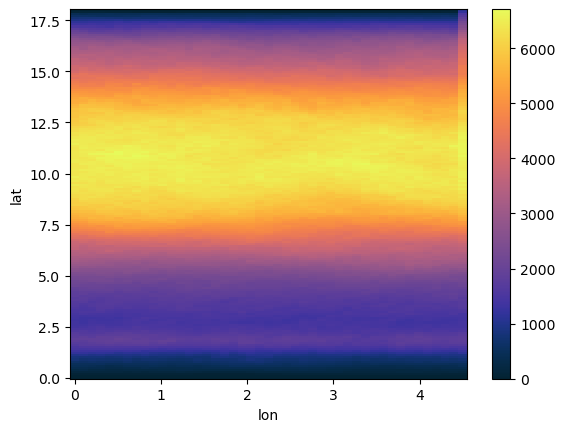

In [18]:
dens_array = xr.DataArray(
    dens,
    dims = ('lat','lon'),
    coords = {
        'lat':np.linspace(*lat_bds, Ny), 
        'lon':np.linspace(*lon_bds_base, Nx), 
    },
)

dens_array.plot.imshow(cmap=cm.thermal)

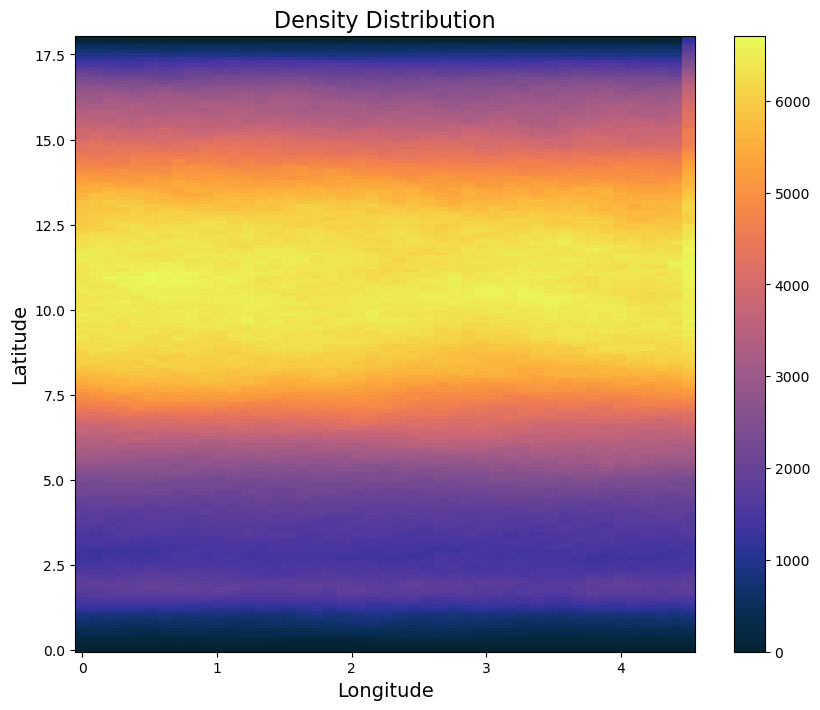

In [19]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
dens_array.plot.imshow(ax=ax, cmap=cm.thermal)
plt.title("Density Distribution", fontsize=16)  # Add a title if needed
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

# Save the figure
plt.savefig("particle_january.png", dpi=300, bbox_inches="tight")  # Save the figure
plt.show()